## main

In [8]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import skimage.io

# import sys
# sys.path
# Import Mask RCNN
ROOT_DIR = os.path.abspath("./maskrcnn/")
sys.path.append(ROOT_DIR)  # To find local version of the library

from mrcnn.config import Config
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

import base64
import cv2

In [10]:
# import Ipynb_importer
# from samples.food import food
DEVICE = "/cpu:0"
TEST_MODE = "inference"
IMAGE_DIR = '/dataDisk/myfloder/jupyter/Mask_RCNN-master/datasets/food/val2/'
MODEL_DIR = '/dataDisk/myfloder/h5/maskrcnn_snapshots/'
weights_path = '/dataDisk/myfloder/h5/maskrcnn_snapshots/food20191217T1522/mask_rcnn_food_1000.h5'
class_names = ['BG', '蛋', '豬肉', '雞肉', '牛肉', '魚'
               ,"茄子","豆腐","南瓜","紅蘿蔔","香菇",'undefined']

In [11]:
class objectConfig(Config):
    """Configuration for training on the toy  dataset.
    Derives from the base Config class and overrides some values.
    """
    # Give the configuration a recognizable name
    NAME = "food"
    
    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 11  # Background + balloon

    # Number of training steps per epoch
    STEPS_PER_EPOCH = 100

    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9

#object_DIR = os.path.join(ROOT_DIR, "datasets/food")
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(objectConfig):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

#config = InferenceConfig()
#config.display()

class demo_maskrcnn():
    
    # Create model in inference mode
    with tf.device(DEVICE):
        model = modellib.MaskRCNN(mode="inference", 
                                  model_dir=MODEL_DIR,
                                  config=InferenceConfig())
    # Or, load the last model you trained
    #weights_path = model.find_last()
    
    # Load weights
    #print("Loading weights ", weights_path)
    model.load_weights(weights_path, by_name=True)
    #model.keras_model.save('/dataDisk/myfloder/h5/mymaskmodel.h5')
    #model.keras_model.summary()
    ##########################重要#########################
    model.keras_model._make_predict_function()
    ######################################################
    def base64_to_image(self,base64_code): 
        # base64解码
        img_data = base64.b64decode(base64_code)
        # 转换为np数组
        img_array = np.fromstring(img_data, np.uint8)
        # 转换成opencv可用格式
        img = cv2.imdecode(img_array, cv2.IMREAD_COLOR) 

        #imageBGR = cv2.cvtColor(img , cv2.COLOR_RGB2BGR)
        # img偵測用 , img_data存檔用
        return img , img_data

    def ndarray_to_base64(self,img_ndarray):
        retval, buffer = cv2.imencode('.png', img_ndarray)
        img_str = base64.b64encode(buffer)
        img_str = img_str.decode()
        return img_str
      
    def predictimg(self,image):     
        image = cv2.cvtColor(image , cv2.COLOR_RGB2BGR)
        
        if image.shape[-1] == 4:    
            image = image[...,:3]

        # Run detection
        results = self.model.detect([image], verbose=1)

        # Visualize results
        r = results[0]
        outimgbase64 = visualize.display_instances(image, 
                                    r['rois'], 
                                    r['masks'], 
                                    r['class_ids'], 
                                    class_names, 
                                    r['scores'])   
               
        return outimgbase64

Re-starting from epoch 1000


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://140.116.67.155:5000/ (Press CTRL+C to quit)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:54: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


Processing 1 images
image                    shape: (800, 600, 3)         min:    0.00000  max:  221.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  112.10000  float64
image_metas              shape: (1, 24)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


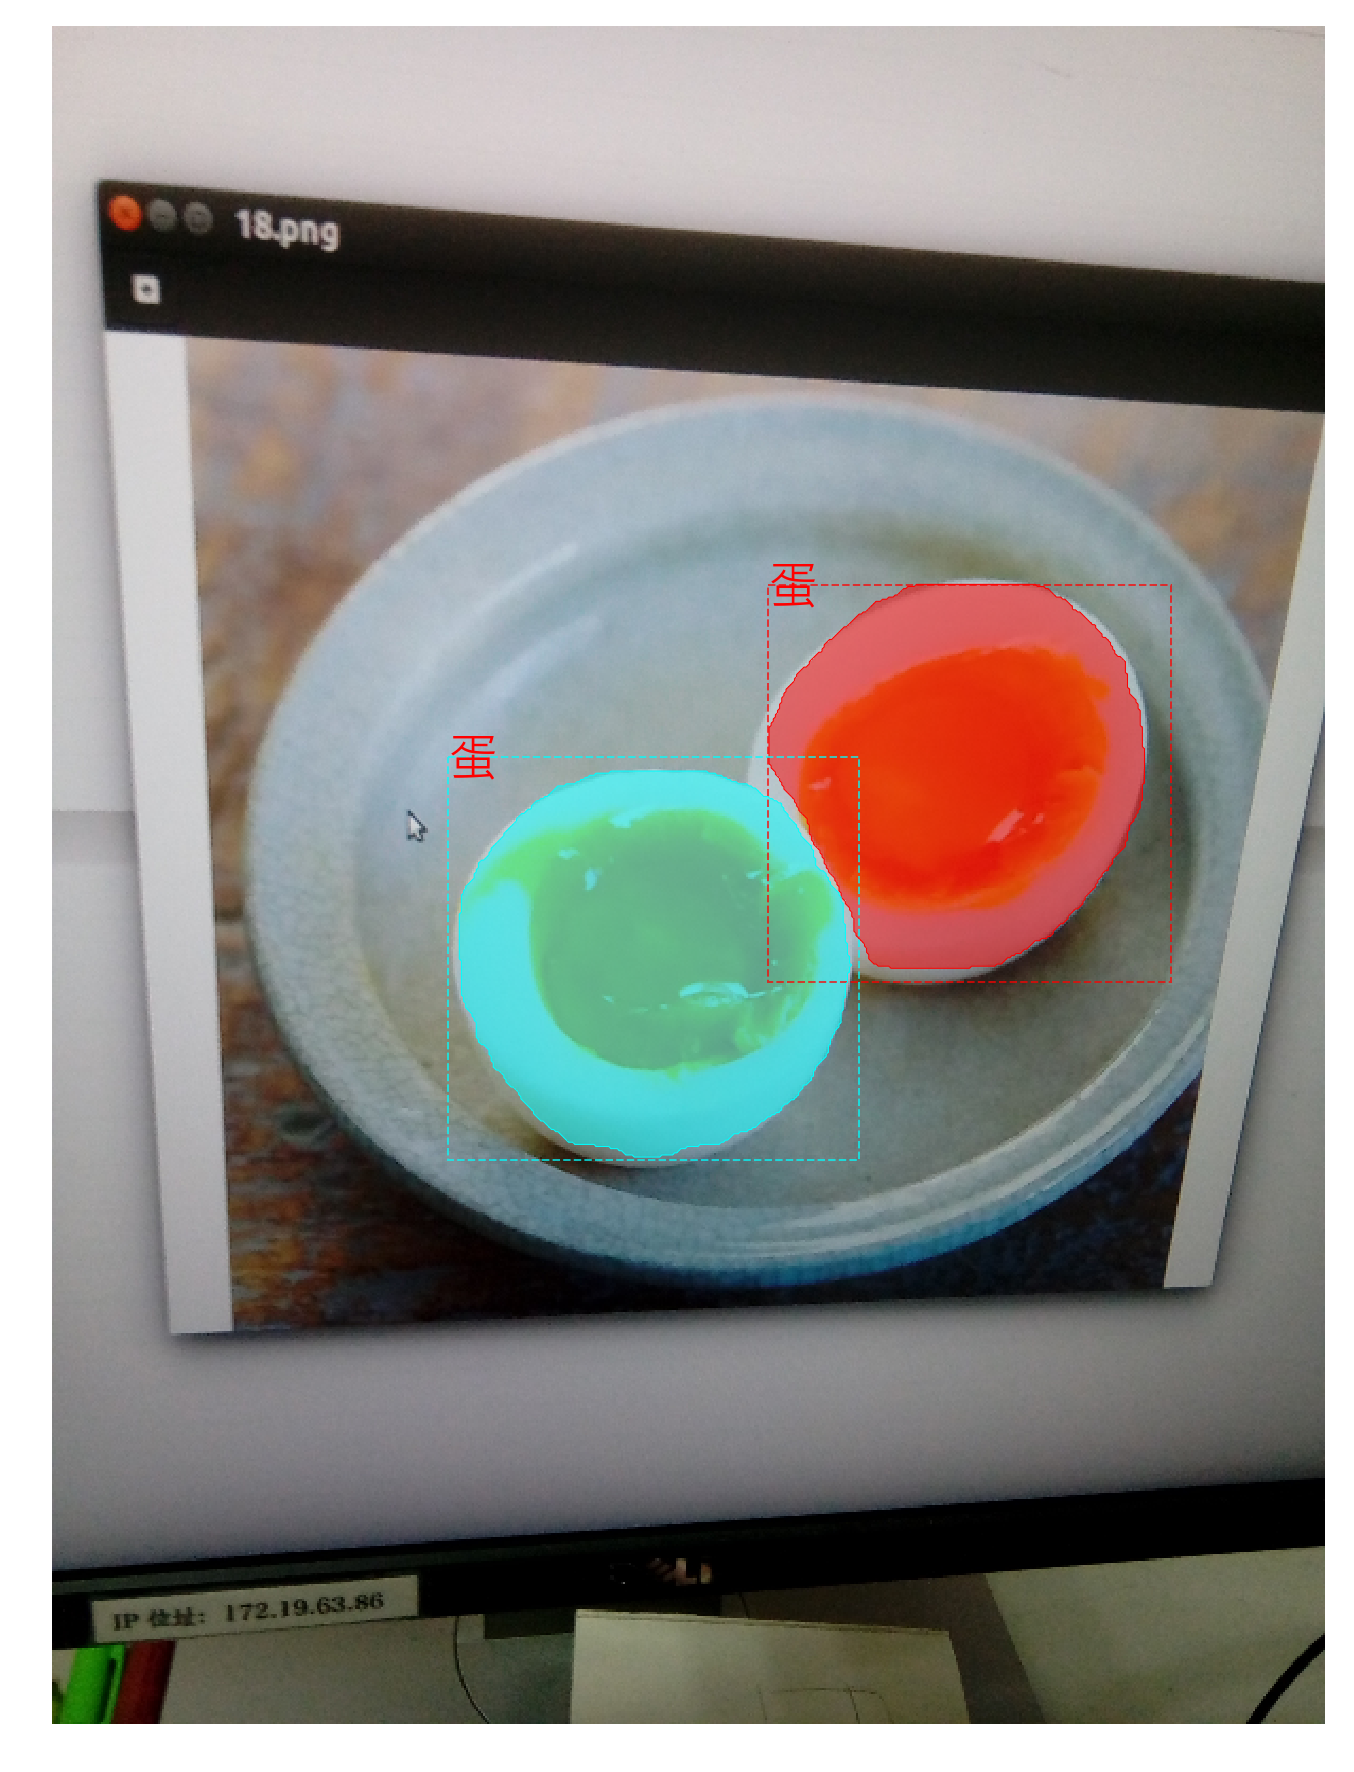

140.116.67.158 - - [19/Dec/2019 14:06:13] "POST /upload HTTP/1.1" 200 -


Processing 1 images
image                    shape: (800, 600, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  141.10000  float64
image_metas              shape: (1, 24)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


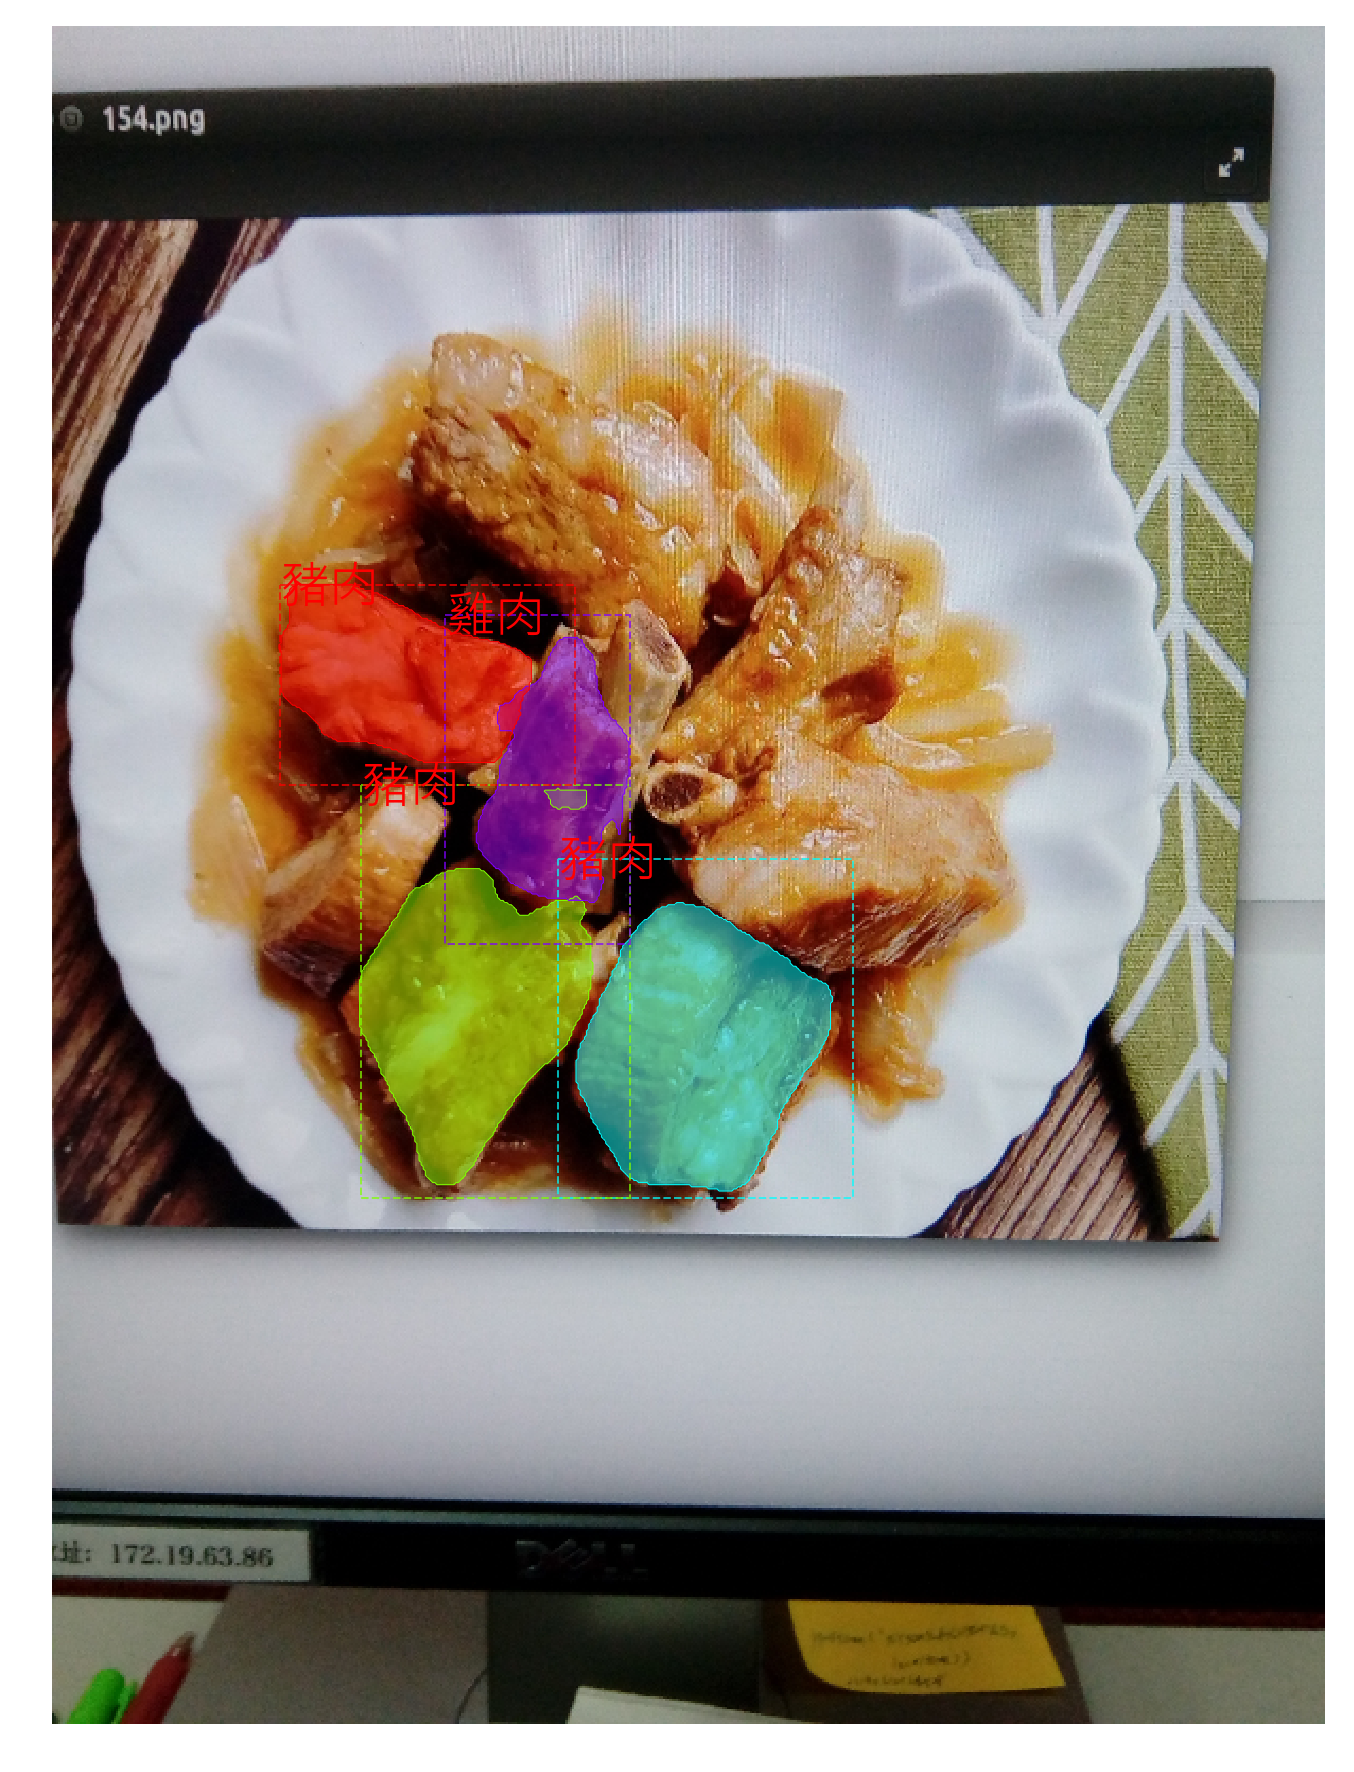

140.116.67.158 - - [19/Dec/2019 14:08:20] "POST /upload HTTP/1.1" 200 -


Processing 1 images
image                    shape: (800, 600, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  145.10000  float64
image_metas              shape: (1, 24)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


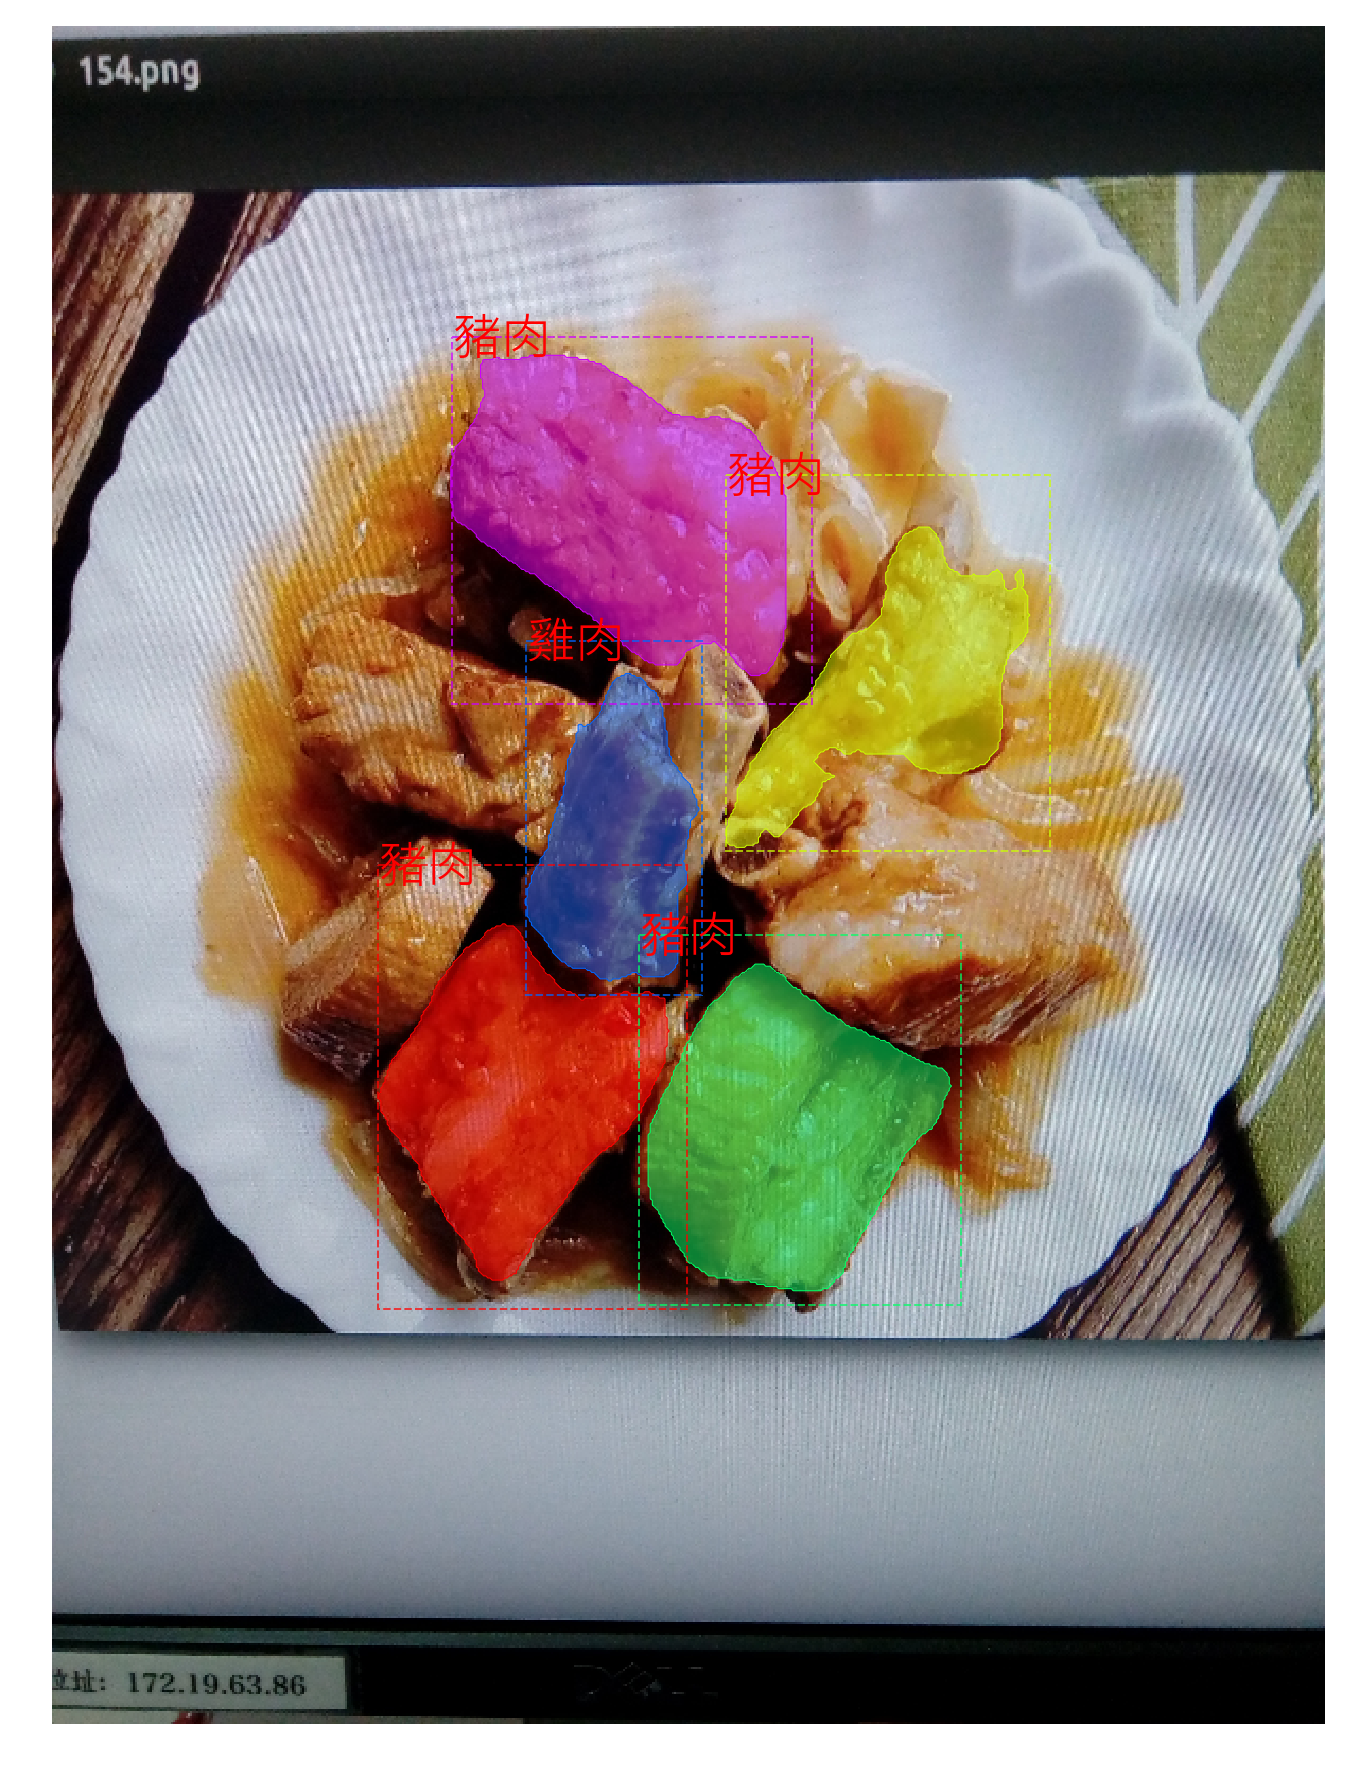

140.116.67.158 - - [19/Dec/2019 14:09:25] "POST /upload HTTP/1.1" 200 -


Processing 1 images
image                    shape: (800, 600, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  125.10000  float64
image_metas              shape: (1, 24)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


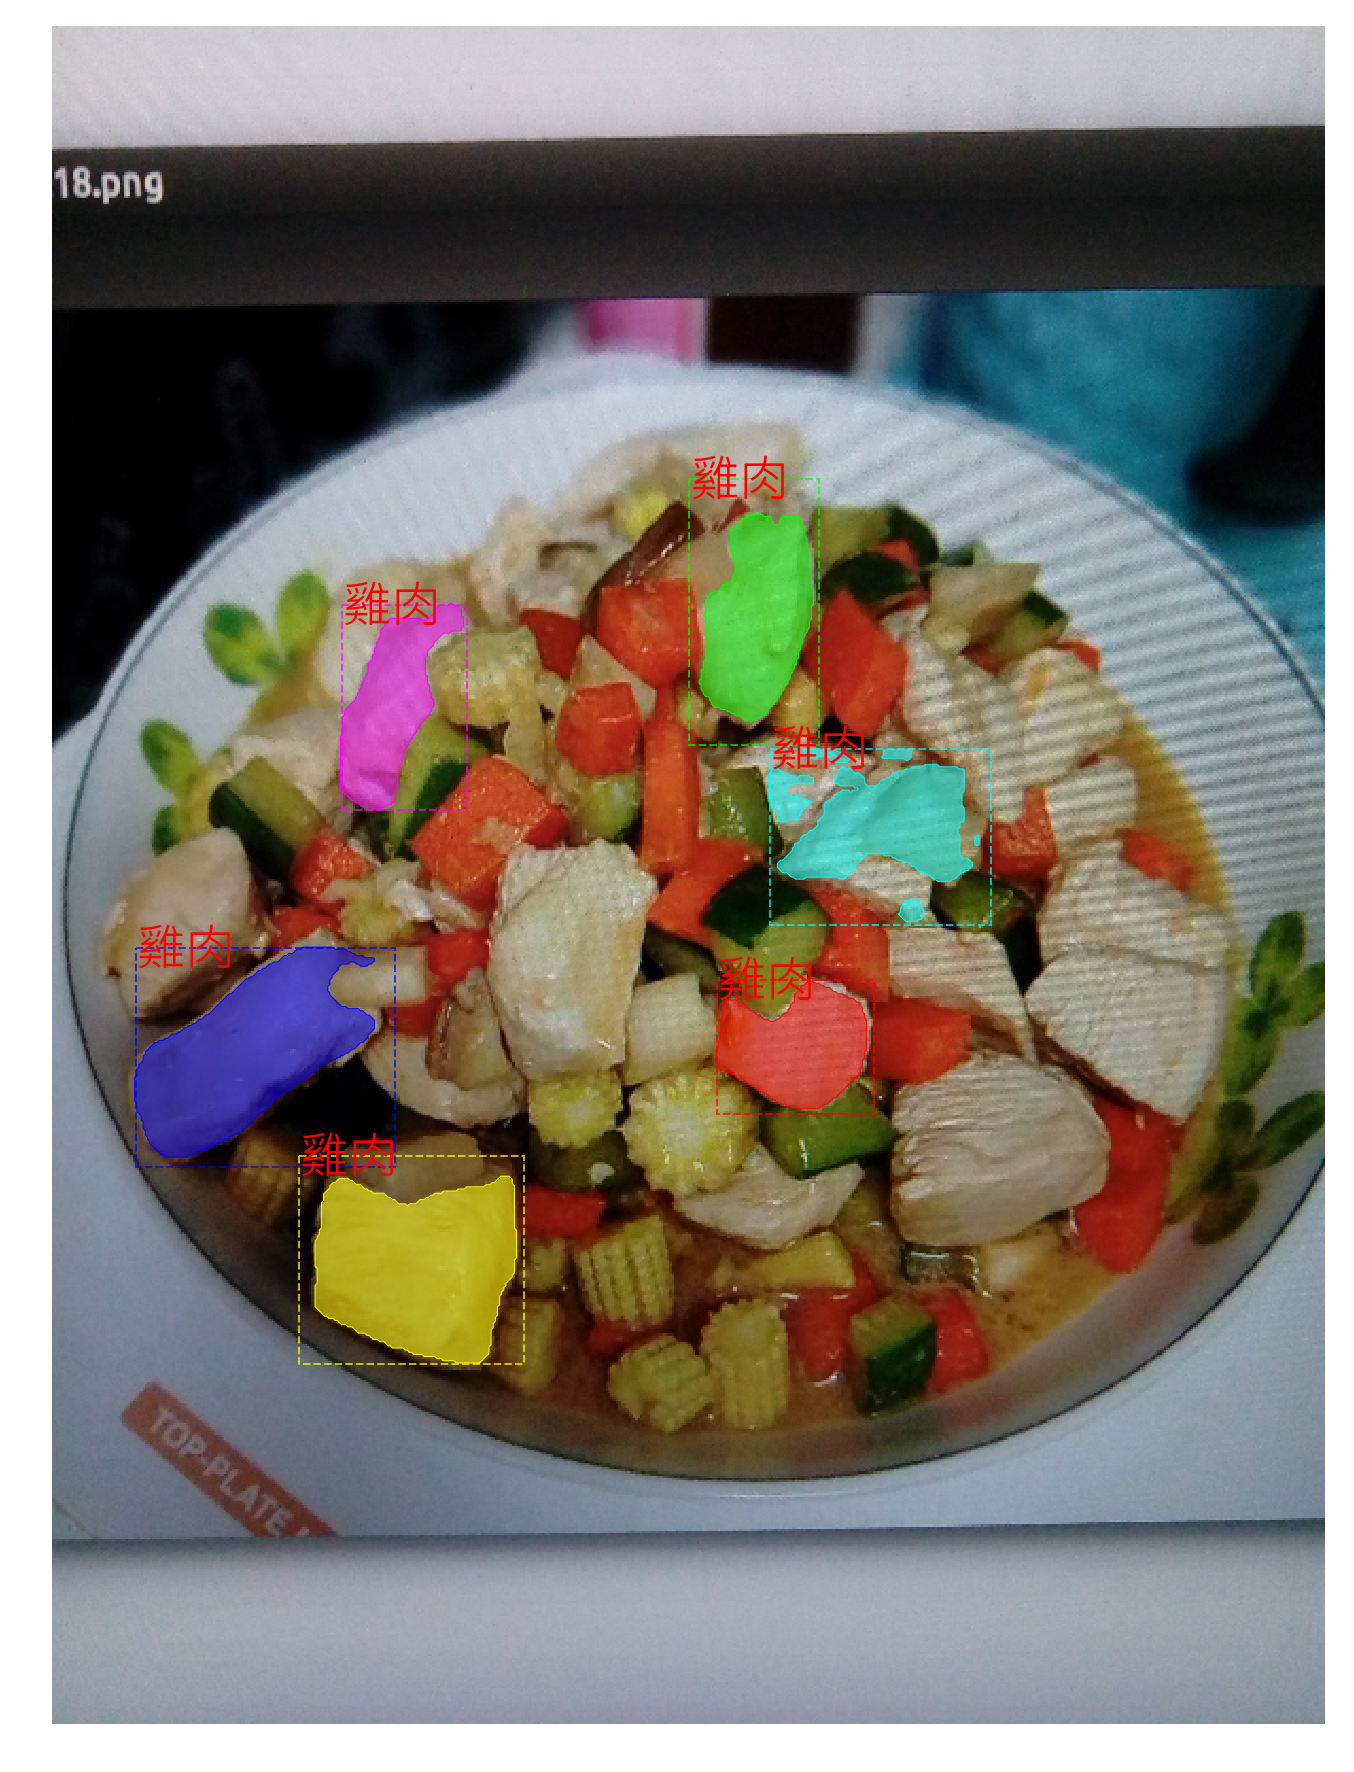

140.116.67.158 - - [19/Dec/2019 14:10:46] "POST /upload HTTP/1.1" 200 -


In [ ]:
from flask import Flask ,jsonify
from flask import request
from time import strftime

app = Flask(__name__)
m = demo_maskrcnn()

@app.route('/upload', methods=['POST'])
def post():
    #print(request.is_json)
    
    content = request.get_json()
    #print(content['photo'])
   
    #read image
    img , imgdata = m.base64_to_image(content['photo'])
        
    #save image    
  
    filename=strftime("%Y%m%d%H%M%S")
    filepath=os.path.join('/dataDisk/myfloder/server_img/'+filename)   
    with open(filepath,'wb') as f:
        f.write(imgdata)
    
    
    # predict
    imgbase64 = m.predictimg(img)
    #outputimg = m.ndarray_to_base64(outputimg)
    imgjson = {
        'photo':imgbase64
    }
        
    return jsonify(imgjson)

app.run(host='140.116.67.155', port=5000)

### no apply

### base64圖片(RGB2BGR)

In [ ]:
import base64
import cv2
def base64_to_image(base64_code): 
    # base64解码
    img_data = base64.b64decode(base64_code)
    # 转换为np数组
    img_array = np.fromstring(img_data, np.uint8)
    # 转换成opencv可用格式
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR) 
    
    imageBGR = cv2.cvtColor(img , cv2.COLOR_RGB2BGR)
    return imageBGR

In [ ]:
#base64str="/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCALkAhwDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD4QMST/dEI9g1SxW0eQSsRx6tVBGReQ3J6nFSK6Fgd3A6itLIFexcNkkjEqseAOAHFTLZxFVAt1HqQ1Z4lhztyBk9aesgZdokBA96B3ZdGmbhv8jgdCrUNpkjJnyGqqshAxu468GrS3o+y7FbnsKAuwh0lyf30DEEcHpipItPTktC+McZNVGuZnTHmnNPhuZlG7zGGB3NJ2C7Jv7PlIOyBj6UJp7qATCxP0piXM33ftDD/AIFTo7u6U4W5cAdPnNCS6FJ3HppbkHERz67aQ6TKFBMRyevy0+LUbiIHE7DOP4jTk1m8AwlwcZ5yaeqIb1sNTS5sf6nPvtpjaY7MWMXP+7VlddulJVpSR7Yp48Q3jfOZQSOMbBz+lLRsq+hRbTQVLMo47FaQaUq5BgBIGTxV5dcvEk3MyEkdDGv+FSf25cOPmWL3zGKa0BPWxmjSYC2RCuO+RQNKt2HEAxWn/b1wo+WGHI6ZSnR63c5GbSAgH+5T3YXdzK/sS3OPLjHvSDQ7cZ3QjrWyuvyA5bTrbJ7bTx+tOXXI2bMmlQH/AHc9fzpNaajvoYn9h2mATFg+wpB4dtGweB7VvHU7Zv8AWaRCPTaxpE1CxZQZNFQn1WSklHcSbMRPC9rITjH5U1fC9tnBjOcdq6IanpkfzDQs464m/wDrU4ajo0hLPosikDPyzf8A1qenYbdupzh8I2rgkwjjpkCmHwlb7cmEcdwK6f8AtHQWODpk34Sg4/SnLeeHQObK6U55G4cijYE20cl/witmcjy+h54pD4TtM7mhGPXFdgk3hllBa3u8k8kbf8alU+FZBybtAOmYlPH/AH1SdmLmd7HFjwdZPkeUopreCbYjAjFdpjw3I7M17cAk8AwD/Gplh8NCHnUZAemWhpci3HzNLVnAP4JtuFeIEk8cVGfA9qzkCMD6ivRRpfh+SMOmrZB9YjkflSLoWgONx1xAT0DRMP6UKIKSfU84k8B2pGdi8daYPAdvKgIjX8K9MPhrRCMLr8Gccgo3+FRnwtadE1S1yeR8xH9KOW7GpO9rnmr/AA5gY5EQP5Ux/htbseYB78V6cPCDSIwj1a0znp5mKT/hEnZjGuoWh29f9IA/rT5E+g+Zrr+J5c3wzh5P2fj/AHahn+GlscH7OAPXFeu3HgzUSm0S2zgDqlyv+NQS+D9TsrNGeOJixwSJlP4dalwt0KUprY8k/wCFX27jLQrkjjIFRv8AC23K5+zqB64r16LwXq864WyBIHVWH+NJD4G1uaQomlO20/NtGaXInqNSqPoePt8KISM/Z1wf9mq7fCWEZVbUc/7NezP4L10D5dHlCg/3M0weEdZOD/ZM2D0Pknn36UuVFJ1L7HizfCO3xzZIfbZUcnwbt25Nkh9Fx0r2yXw1qUabX0mUE9P3RFMm8N3yKGm011yOpQ5p8ifUd6l/hPDpvg3aJ/zDkH/Aagm+DVpt/wCQev1Fe5toM6fM9gwHYslI2ioOlmxHfilypdQ5n2PCn+EUQh2JacHggZ6VVb4O2yDi2Iz2Ga9/GjxtnFhgL1ytN/saFwG+w4zzkLQop7C5vI+fn+DaBiyxPn/eqE/B3PKiUH/fNfQ50SwclmtXAz/coPhmzdcranb2ylHI11DmX8p86n4QXCnMZm/77p03ww1ELjbKoAwCDX0LJ4SsOjW/fstMfwlpzDa0fX26UuVApRfQ+c3+FWphiUu7gY9B1p7/AA71oRhI7mbgcHHOa+hv+EMsHGFiJx9aD4Hsz84ix+Bosh3jb4T5yb4f+JkHy6nMPYihfBfilAVXUZD9Vr6JHge1kJzbD8qT/hA7ViAIcfUUcpP7t9D55Twx4vgGz7cx9PlNOXRfGKAFbgH3INfQg8AWLjDQjHsKcvw4sGIX7N39KOUEodvzPnyOz8apkbwcexqeEeNYDhkQ/gf8a99f4aWW35LflvRaWP4SwmJpmQYBwBto5UFl/VzwddV8aQvgWqkeoNK/iHxfGCTp+T7HFe5SfCGFsuBjjgFKj/4U5BINx4P04NLktshNQb3f3s8QTxX4sQbZdLkI9mp6eN/EUcfmmwkGP4Q3Ne0n4MJgncpGOw6VBJ8E0xuDDP8Au0+WXQXJT7nkNr8Qtc2OzW9wpA4G85P0py/FLXbdtxivFI6nca9Vb4KKpztB9MCmSfBGZ2yluD+NWozRPsaT6nnNv8ZNajtXumnugoOCNzZ/KrVv+0Bq8Eexby6Aznoa7S5+BWpDcY7PI7jFUZfgneq2DYr/AN81MvaXI+rUj9ALj9kT4Fygj/hBYUyP+WdzKP8A2aq0v7F3wHmwB4TdMjteSf1NettHhtp6dyKJpY0B2npxzWPKkdaq1L/8N/keOTfsOfAy4k/daNdRgDkLct/Wq8n7C3wPc7hBfxjHP+lDj9K9dudSMe4hgvHAB61k3/iFkTqAATnNDXb8y1ObfT7l/keW3P7D/wAElBC3OqxnOARdIeP++KzL39iH4QImIPEeqpn1ljIH/jteha54ztbCJ57q7CKByWOBXnHiP4sa/rUzWHhuPZEThrmTv9BXPVrxor33b5nVh8NiMVPlhBP5L/IxNX/ZE+DGirvvviLeQj/poUz+WK47Xfgj8LIJGi8OeI9XvmAwGW0UL+pFdpa+GvtTm71e5luJWOSZDmti10q3gChLZQM9xivMq5tJO0Ln0WG4dg9azT9FY8dg/Z/1GeRpEmdVJ+UOvNX7f9nGd1LHUGDfTpXskSqkYVoTx91hmp4re5nJdIDtx0C9a4nmeKb+I9aGR5bFL92jxiL9m+5YeW9+zDPJOKnX9mXaObw4PXmvaY9LuYyrlEUH1ap001GxvnQDuCeTQ8yxbXxFrJcs/wCfSPFYf2Z4Sf8Aj7Y+vPSpG/ZotCMNqDcdcV7VDp9ogz9uiyR0zThZWSncbmMfU1H9o4y/xsqOT5an/Dj9x40n7MmnN1vXwR29alj/AGYtMPBvZOOvNezRwWf3X1CLj34p621kBtOoRjjkik8wxjfxs0/snLV/y7j9x4yn7MekqTmeTJ6EmpE/Zo0lAC8z/gTXsjRWCFU+3oQe+2rAttIWIAamnXkHk1LzDGfzsayrLv8An3H7jxtf2aNB3BjM9Sj9mnQOck8e1ewi18PTAI+qBWHTI608WukbR/xNV46HB/pR9fxdr8zLjlmWranH7keQJ+zT4dJyWkPvuxin/wDDNvhtfupJ1x9+vXP+JLEwI1ASA9fl6/nSeVoryEpq21R2UY5qPr2LvfnY/wCzcu/59x+5HlkP7N3hUAAKxGOoc1Kv7OPhaPny2JGejda9SX+w+A1/gnrxmnBtCIAW9PXqe1J4zFveTLWAy9PSEfuPLk/Z18IfeMDDjn2qVP2dfCDqFFq2e2PSvTVXQ+F/tAHuTjrTxcaQjFhd4GOM4qXi8Tf4395rHA4BfYj9x5k/7Ovg9Rg2xx2+anRfs5eEAoc25IB6buDXpcd1ozKyPdfNjg44p327R1O3zskdsUnisS/tv7yvqOAt8C+5f5Hmzfs6+DpTmO2AINLB+z14NjBDWWcc/dr0p7jRFfDTbcilivfD4O2S8ZMDr6/nR9ZxO3M/vY1g8H/LH7kecW/wB8HqM/Yt3OME8irP/Cg/CCqGezyB2Ir0OG/8Or0lf36c0i3/AIbEuUnc8H+EVP1jEX1kyo4XBrTlX3I89b4FeEGO0aWAM9gaX/hRHhAnB0xfbjrXoZ1Pw6xJMzkAfNkDIph1LQjHuadhj06il7evf4395X1XB/yr7kcHF8C/B+8MNOjJA7inj4G+EI2OdMTrzgdK7ptW0JZFSJmwOucc0o1fQ3kLFyME8A0e3r/zP7wWFwfSK+5HD/8ACk/CxwF0tCPY0yb4JeFQgWXSx1JALdK76LV9BVt8jMefuqeTUo13wwjYlV2GecGh4iv1k/vKWGwa+yvuR55/wprwjCONOXOOzHihfg54SX/lwxk5655r0KTWfCKvk2zuD0w4B/lSrr/hBtoawkK9v3mD/Kl9YrWvzP7x/VsHb4V9yOCT4U+GVHlizJwOOafH8LtCixtiIzxtzXfHXvBghA/s2Xdn7wkGaRNd8Is2G05yv+9zR9Yrb8z+8X1bCdIr7kcEfhjoBOWtmJ7Zeh/hboEzFZLYn2Z679dd8GlCsulynBwMOKc3iHwO0ZVtLkU5wCJQf6UfWK99395aoYZfZ/A85b4SeGVB8yBip7Fs0ifB7wkzBhY8nrXpK694GWPB0yZ2x/FMP8KI9f8ABAJX+ypRheMyd6Tr1r3Tf3j9hhu34HnB+D/hEvg6f+JFO/4Uz4PLbjpnyn2r0aPxH4Plj2/YXBHqc0xdd8JBgy2hznPQDmk69Z7t/eHscLa3KvuPO2+C3hIEZ0pCPXBpB8G/CG4htLX8q9IOt+EidwtGUnr8w6046z4P3AyWUp9GMo/wpe2q33f3sHQwtvhX3I80/wCFL+D06aWN2eSF/wAacPgt4Ofg6YvPTivSp9Z8EuuI7eYMepLD/Cm/2r4TAGYZBgcDd1p/WK1rczEsPhrbL7keb/8AClvCIb5dLX6ig/Bjwbkn+zEyOmD1r0T+0PDjvlY3C9ME5/rUrah4VUhWhY++8UvbVm/iYPDYf+VfcebR/BfwXIp/4laqM9xinn4H+CmUA6cgHcgdK9Hk1PwuZAIrQgem/rS/bfD8h2mDbkf36axFdfaf3krD0L7L7jzofAbwKDk6eD64HWg/ArwUCT9h/TpXoy3mioAzYwB03YpGu/DrAndIMjJ+bNN4iu/tP7yvq+Hv8K+5Hny/AfwYsQcWhz6Gif4E+E3jKx2rAd/m6V6DHa6XLFvt9SjJ7KxINSS6eTHlI8gdSppfWK6+0/vY3g8LJfCn8keT3/7PGk3MJms5yhxwDXJap8C9bsJcRsCn95ulfQUdukLFHJ5HGRSG2jmPlyRgg8k7c5rroZrjKD0ldeZ5+J4eyzFRtKmk+60Pme6+G89lujuNTs0Kn7rSMM/pVaTwFKVwuoWbdxsmz/SvoHxX8KPD3iaNlmhSORx8jr614j8R/hbq/geVrsQPJAM/MvO0V9PgM3w+JahL3X59T4XN+GcXgU6lH34fijNHw+1LaX822IAyAJlz+VEPgPWvMDxQxMTyAsy/41zg1eJZcySsMdOali1n5A0dxJj0DkYr2W0nY+U5tLtfmdO/gzxMow2kofcSKf61EfB2uHBbQ26dsVgjX51AEeozgZ6ecf8AGpI/E+pgYXW7kDPa4b/Gk0nu/wAAUn0X4s+z7i+jjXar854GcVmXmsxqPmcdehYVzur+L4IkbMgBPbNchrvjhRnFxgc9TXnuS2OpKx2mra2iLlblevY1yuv+MLLTrWSe4uRhASQDXC6349Y7lNztHrmuchku/F2ogySt5EZyQTwxrlxGIhRhqelgcJLF1VBfM0r2/wBV8cX/AJ88hWzU/u4s/e9zWnb6bDaKsSIMAchRVjT7FIlVIlC4GAPStLTdKF1OIvJZ2J4Ar5qvXlVndn6DhMJDDUlCKK9pbPKV2x55OK2rLw3I8IlvWEceeQ3etbTNFsdIga4uI2eYH5Y1HC+5Nc14x8ax6YrJNdqxByApHT0xWF22d1kkadzfaJpUREaeY6jjd0FYupfEGGBDE8yqB2U1574k+Id5eykWmUU1yeoatfTuRJKx/HFCjrqYzqO1kemah8ULRGz9q574OaoP8XrTO1pjn19K8ynlY8FycdcmoGcFT82f6VsoRsYOUrnqP/C29PUErckH/epg+MdryPtGee9eWMOc9vWo/u9Hz7VShDqiJVZW0Z6sfjLZYz5pHHTNRyfGq0zkTZ9Aa8nkB3EA8HrVeVj13YxVezg0YutUUdWevj422uNhnwMVH/wvK1UlVlbg8GvG5L2LozdOvPeoW1GFSWWQY9KaoxM/rFSPU9pb47WZORKQcc0q/Hm3X5jKwHfmvDJ9ctYj+8l5/OqV14ts1OEyRVqhEn67UXU99Px6thyrt17mm/8ADQVqpGXP4V88P4yUHKRtge9VJvGFy0mEGO45pqgmxPHVUtz6Rf8AaFtTwWPtxTo/2hoQQAWxjtXzE/ifUOf35H0oTxJfkAm6bp1zUyw0WrErH1b7n1JH+0BDKuA5P1NTp8b45Yfkc+/NfLkPiK+3bo53I7kGut8KXGo3rqELsW7NXPUowhHXQ6aWLqSPeY/jP5a/NuPpinH43qoKiNjn1PNeW3ej+JNPsxezWbeWT99TxVFb+4YYZyP8axjyNaHY61RWsz18fGaQoCqMSDQvxhmJzsOP7ue9eTw3twCE3sfWrsGoPtG4Zx2IqkoroJVJt7npa/GG6flVO30z0p6fF27K8EjjrmvPLa9ib5ipBNXIJ4D8x55osr3KUpPqdufivdjPBG4diaePixffxSEnFcdGFYbVHHWnCJT8u33zmhWuUnPudYPixfcYyMHkZpR8Wrz7xJHbg1yDKFXJXJ+lMFyIDg2wOeuado9EF53tc7SP4sX7SjEZ6dS1Wrf4jatN86QsQenFcpo/iHT45lSazQYHORXp/gHxF4ceSPdZxMD1BUVLiaRlrq2Y0fjbXd25YZOnZTxUo8a6w4B+zyEAc4Br2qx0nwbqlus1np0OSBuRgM5qdPDegQAEaRBye0YNYOS2sd0aMZK6keJJ4y1RgCIJOvPyGlXxdqZHzJIOeQa9ufQNCD7/ALFAQOo8kf4VNa+FNNnkCLpUPI6rHjP+FTzpG/1dLqeHf8JhqQONr5PbnikPivVPvGOQA9OtfR+n+DPCunotxfadCEUfvSVBNc58QfEPhaKzbTtI0K2WI5/eyRAuaXPcfsUjxJ/Gl6h2MWHHXNN/4TW7IG1mHPOTWhrqadLMTHZIvPYVz91aJuASLHNCkZunK5p/8Jtek/eYfjTx40vD8vz/AFzWN9nCMSFP0pTDIMYjx7Zp3YnBo1/+Ezuly25sj3pzeNr7aCHOMc81jBBgqU59qVLdnOCp+lJPUOVvQ1j4yvD94k9vvdKRvG9/gpubOOMmskxbMjb29etIbeZ+WcAf7Rp7vUFBmz/wnN+FChn9zmmN45u2ySW+uayPIQLgDGT60ySFVAwOh5Jp2QcsjZXx7fLzufj/AGulKvxC1BFZgzde5rFaIgZZOMdagMTEjaB19aFa5Di0dD/wsrUcFGY8erUsHxOugMO7ZPqa5adGUEAcj9arSKWHII/HNO6IcdD0G0+JJDAtcYw3PNdLoPxUuYzlbzKk/cY5FeJFpF4iYYHpVi11e6tG3LIxo3EpOJ9J6N430nVAF1GVUdgdpVflrchtJZzutvLk3L8p3dq+dNA8auhVJJiMHjmvTvBHxCMCLBM+6N+vzUuU1jWlfXU7xrMlmR8ZXqccVU1jQdN1+0fTNQt1aF02sduf51q2lxbXluktncKykbumSKbJFC0J3n5s5bJ4+tQub5nW4xqQ02K3ww/4J3/An4yxy2t1r2o2OoA7jFFNwR7D866y+/4I4fDsRpFY+PdRQJnhowSR+dO+HHiO88MavBqVhL5csT5DDJLDuK+u/CviePxLoMOoQnl0AJz3xzX2eV4tYqjZv3l5n5rxBl9TL8RzRiuSW3urR9j4x1X/AII6eGHtwbP4m3cZH/TkDx/32Kx3/wCCOTSNuj+LDKOgDabz/wCjK+9ZJGUYwvSoo2WZBIsi4PvivU5X/Mz5iVVSXwr7j8jta8QyOzFpTz71yOt6uxLZY46g+9aepuxJLNwRiuY1mXy2YMucVyOWprCKWhQlebU71baMsS5xXo3hfQU06yVfK5Izk1yXw70hLvUjeTDIQ/KSK9Js1APlInHoa+fx1Zyrcq6H22SYWNLD87WrEtrQ3EqpFESScAY712/h7QE0uz82aRfNYfPkY8tfrVXwppUFgg1e4gBVOVyO9Zfj/wCINza2LWdu7DzM78H8hXnN3PoEZ3xJ+IkGnQyabokzYx8792NeR6zfX+qTmSaZsMc81p6pNcX0hebOCT1rOktG25OfxpJ2JabMS4yGKls44zVC6OScseOT6VsX6wQ5BUAnvWRLpuqarJ5dhaOcnHA61SdzFxSKFzNHEfmIP41AdRgBO5u3ataT4X+JJf8Aj5Hl7uoLcimp8INTZhm7XPetIytuZuLZkLqVs527sj1oN1AeAPxrobf4NXrD95eAHPOTVy3+DFyV2/a1J7DNaNpakum3ucVcXsQUhep71k31zJIx2PxXqR+CxXCm9Qkn5l9KcPghbkkNdoBjg46UKqkZzw7aPFrpLx2yWYZPaqr294TyTj3r13Wvh94f0lSGvEdxwflrHTQPDMchXUJSF6lkYA/rWkanM7JHHUo0obyPL7m1nLHeGP4VUuIJYxuCZB7mvU9RtfhrD84ku9uOdzx9f0rjfF+ufD21iaLTbmUuDwHCn+Vbx5m7NHJOVCHW5yT72l8vgcfnVK/vo7Uksxyo5qvrfiF4yJLBOA2dxHauT17xNe3crKJyN3YGtoRuzz62JUdjbvvE4iBZenvRo15q/iG58jTYyw/iYHpWR4Q8AeJvG92qWdvIbcN+9lzwor27wn8NLDwvp62ttanp88h5LGscXXpUI8qd2x4aNfEPm2RR8P6AYLSOF0Bf+Nq9H+GXhy61q+XTLPZvCFzKOcADP9K5ST7Pp0jLCzK7DAQjNSaLrOsaFehjcNEXXGA2CRXi1IOqr3PVUuV2PdNM09b/AE+TRbpVZVBRnPTPrXm+teGp9G1aWyddwD5Rsdq7HwR4kgn01Sk4EhAyc5rq7nwvperT2kupwhPOGPNQZ3Vy4Z1KdRxZ24eopS5XseRx2LY4jPA4yKnSzflduAfavcLf4MeHpYw/mnGOm2p1+CHh1WVnlO0nHyjJrt9oetDDKSPDYbQ42qpyOhqZIpV+VYz9a9wk+DPhlZCiyzcfdAiBz+Z4qO7+D3huNFFvKzZ6lkxz+dLnu9SvYRR4zFdTR/KRggVMLktk56DkV6ncfCXw/EjPOXVlP93g1jaj8PtFt9wiMhYngngVRnKCicDPqSICxPbFVZtaiKlcjr1zXaXnw90GQLEl2xkZvnwQQtY/ij4Py2tqbzStYtrgf880kw/5GtYR5kYynd6M5mTVEkcICCe2DWno3iO60+ZWjlbGezVz1zpl7ps/l3UZBDVftVOAccEdT2pyjykrVn0N8I/iHFeRopuWEqAbkJ4YV6tFeC8RbpVIUjPDV8k+BtdudH1SKWKUqN3IHevpf4d6uNSsIg0ucjODzXPUsd2GnaSTOjhgkuHCwkDJ5IrobKKDRoFnlclyOQOgFQ6PZRzyYDnHXpUevXriJoXGdvC471xzfKexTp+0ZkeKPEks5aKByAeNoHFcLriyMGZ2JOe/auqms2eXeW69RjrRJ8PbjWoVnmDRwnqU6mlGVzpnTcNDx7WbsxseOayG1PDBWU98CvbJ/hX4QhU+ZE8jA/xP/Sqsvw58HNlY9H+bIC/NzWqcTjlDW55DFcozb25wOanLLtyI8k8gYr1qL4c+E0UBtFdSepDjpVi2+HXhiG3KtpbOCfv7un6U7onkl/SPHwoUD939c03ymA/1Z+Y9QK9tj+GnhIwhUs33HGN3b9KtJ8MfBs0AU2D7lPVT1o0HyNng3lsvRDj6UPHI+P3RwK92X4ZeDGUwrpDBj0ZmPB/Gobj4beFI18p9GZm6bgwwPwpXs9RezaPCyrLx5RPNIwDEo4wexxmvZLz4a6BExA09ih7oelUZPAnh5Rs+xsMDo1NNPqS00eSPPHu+YfQkVDJMF+dRu9M16jqXgXQn+7ppG1fvA55/pWZd+EvDsMOyTTVZj1KMcj361SVzGbd7HnFw46sQD7GqlxNGB94E9q7bUfBGiyoRBMysem7pXO6z4F1C1Qta/vlHdOaaWpm32MGWZGGFGCe+KjWXLZZs+xNQXcVzZTFZgytnHIpIpAQGB+tF2iHroWGmdW3x5H41veFvFc1tOscrng1z4YNyT19TTow0TiREwfY07i5T374eeNGVlV5vkbAya9JtnS8VZYQGU459a+bPh/4ikt7tLeeT5S2Oa918Da/LKBZPOCoHy+/vUzV1c3oScX5HW2KPZTR3cUjRsrggqOa+iv2e/EjSW76dcS+YsmJIySetfPcBi+zgNIWOe1en/AvxDPDqdtAZEA8wr+B4rqy3EPD4pPvoc+e4OGMyydt0rr5H0RI8WCSowT8uOtRq6sCUZQM9CM09Io2h+ZgcgY+WojbxqxCqAM+lfd86Z+PODb1Px71C3B3ZA6/lXLa3CC5AJ59K63VY5ADtOfXiuW1lW3YIOOe1edU2udNNXOk+GVhCLAyRJ827qe9dzY2LtcIGQfMR90Vy3w4hj/spVYkZOeRXoXhW1t2v0D5IHcCvmK8nKoz9HwEFHDxXkS+J9XTTdMjsrEAbFy2eATXlniG5lu7lwzM3zcZruviHdRx3MsaZ64GRXDNGSpkxk56muW92egobJGPPAM/M3TuKz72UyHy7dDnoD61paxOE+SLA/CrHhTSImY6jdRg7T8oJ4zVRBpJWKWleAvtai+1J9o6+X3NaiWVrp5WO0tlXZ3A5PvWlc3LFTnheiis+TzHB8tgAfUZNX6MwZHNOHbcdxkHfHWoVMbycjljznnmkO5JS5wSOM5oEydUTcQelaRi5GTlFbliCJZDlo2/DirKRI0mVBHHXNZV54isNLgM9zKI+OhPB/OuQ8RfGuy09HS3mRfTBFaeznLcwniaMOp6HeX9lp0YuLt0QAdXOK86+J3xy0LRLR7fT5cyY5IP8q8u+IHxz1bUUkt7W7JHoTgV5Hrmt6nqEj3NxcBtx+6WOa3p4a+jPJxOZ/Zidz4q+O+q3W8WfG4/fzXJ3PjzxNeZebVpMYyPmxXMPDqN5IEiBYk/LH6066stf8pmls9gi/wBYp7V2woRSPBq4qpJu7LFx4v1m4d0l1B2A4+9S6LexXN1m5ctjsx61hFXQ+YjH5jziprW9eBlZGJYNWrpLl0MFVfMrndReGJdWsJruCMYjHzKp5xWV4U+Gi6/4oiiuQogV8urDBNd74PkdvB8t1YSokrx4mXqzL7Vy1xq954P1qDUJo22vICMnFccXK7UdztquMqXO0fSvgD4R+HLTRrSz0OOOS4nwBHECNn14rX8WfDHWfD9w9pexESxDIjas74EfELSL5YL15EV49rqN3ccivULm5n+KXikve67a2skibYnnXCkjoCQOPqa+axEKsa2u520MUpQSPmHxtqF1p2pEXFqgZT0IwRW/4E8M+G/FHh+7vtc1CSO9Rc2uXG3pXR/HbSvAMCy+DbTTNuvWUpNzqsFz5sVyDztC5wvBHPtXl2i6pc6XG6JYvmM4Yg8CvToxfsbM0nL300df4NS8vLyXSbPWY4JVchBLwCAOuegrcstc1vRdQjWTV4p2D4/duSB/SvLnvXlmN0kjI5bJKNiu08FFdbnt4SQgjIBZz96sakIK0jSFRxd3ax798PfitYzyroutOVmxlefveld7batpty4YSYwOBur5h+OmiaxoenWnifwrqu24gQeZ5Lcgf5Fcl4D/AGpvEei36r4kuZLiMHDAYLVtCg60ObZno0s39jZNXj3PtKW+JUpFJ8rDG1Bn/wCuKgVd6hJgcA/3c15D4R/af8CatDGlxqUsEsh4SaPH65r0bRfGGk67CHstQSTd12vyaynh5w6Hr0cdh66XLLc0Li1WTMkZ4ycrjFYerwo+RLGRx2rcu7glBlwQB0I5H41m3/ktHufdk/d5GKjY3fK1Y4jW7YxhhbqB3yBgmudu7m4imz5mCvYnkV23iCKBoyjIQQPvcVxupxKsxSOdM44PNdMJWPPrxjG9ihq9jHf25uHj/eY5f+9WFFbsCYx/kV0El24ib5FLLwSV4NYoctdlnxknoKufw3Mqe6RNYL5Vyjr1Br6G+B+pZtYzIxIGMivn+0jDzqFx+Ne4/ArzGiwwwuevauaXwnbTjaaZ7/4f02fUYibRsErk57iszVLM+Z5DJgjjk11Xw6t5WtpWVVJWEn9D0rI1G0V7iR2xnJxntXn173R9Ng480dDH0bRZJ7wu8a7VPUjpU+qXt21wdPtsYX+LjFXLCQRRGN8BezY5NZl7HGZ927ac9Q3WoWhtK2tyPUdMt7UbUuo5yy5bb61QlgLINkHznuDyKtTpHAxDSqQewbNVt3zMYSwXsM8kVrFI5aj94dBE0jLGVA7MCwNWY7TygI0yy9wZD1qslxGSC6FeeGBrSjEez95KMHBPvTszOLTRNp9gZ2JDqOOVJ5q3DbqsbH7MdoPduP8A69FpGhQGJhju2KspEDJhWyBzw/WpbNUisbGC4ICLJgdj3pk1omNiw/UvV+RHhAkDYz2PU0x3WRDG1uPUHdzU3bK9wx7nTEYhYYhx33ZqldaYPMJ2gHbhwjZrpHCC3KqOT05zz+VRXFmSp2W6524JxzVptENHHXmhbizAkrjldvOK5zVvD+A5jRhxxntXodzFK8YDFVVfvBeprA1e1t3y0cW5v7x5NNXuY1IK97HmGoafdQs7BW4OMMOKzZbq8gJVSFzwRxXY69ZKzEKoLYOTiuV1KKRU8sRhQGyTnmuiLPOrRu9jC1vQdJ1+HfbwlLgdSeAa4u80e6066MMqEHPOT1FdndztbSHY/Xv6VT1C1j1aIOCoZP1qnFtEU520ZzKwlucE89amSNRjkc+tW5LIKCAoyvoahEbDGD371hzHU6XUmsJ3t7tWVu+egr174aeJpJBbqrgshAJ4zXj7rtYOEwa7H4d6kILhUznngCr5roynFR1R9MaPerPbqjqCMDLAciu/+EsP2bUY59hH74bG3Y//AF15h4F1IXOjp5o6j5hjNeqfC2K3OpW0SSdZlwCM96dH+PFeZ0Vbzwkr9n+R9O2lsRYrJgk7Bml+ylv+XfH0q/Y2yNahMgAgc4psloVbAGPxr9AWqSPxeXxM/GrVMgH5fzNctrS/MW25P1rrNXi3gkDHNcxrKsSf4cHuK46nwm1NXkjt/h1CBpCfJy3Bx6V6L4btliDTMduFyCa4H4cgLpseHC/L94dTXovhqNri1kZ2xgHaSa+Urr3z9JwUb0Yo4jxzM1xeOWkByecVzk0RityxXr6da6HxSrPqbq55LEA4rKubX9ztxn3Nczdz0IwuzmDYm71BYpXOC3TFdG8JtrdbdANijtVGytyuoA7B8o5JNX7h0YbchSG+961cXeKM6is7lG5j8zAMhOPU1UnwiNiQ9OMEVenk8olyy8fxDrWHrd/GgLBwPc1rFXdjkqStEgvNUt7YMZHA28ncOtct4t+Imm6RatK92qHn5R3rG+I3jG2sLZ91yV3D16V4R408Z3Wq3LRR3LGPPBJ6mvRpUr6s8HGYzk0RsfEL4xX2o3huTM7xrkRpuwPrXG/25resIJ5JSQW4BPCis2+vfMRRNbM5V+QBjI/lVy01lYV+wizT5urZztFd3sV7O6Pm54qU6ruT3NncXKgyElj3BrP1awWCSMOS2OGFet+EfAfhybSYrnTr2G4klX5snJB9PajWvhNAHMtzZhDjPB/WuSFZRk12No0Yyipcx5Bd2El3YgWYZHHU1Dpuia5fP5DXuIyfm3k4Nd7qvhC5s4H8qM7V4Bx1rIttStrOOSzkkWIqMguud59BXRDESknyMznRhzJyEl+FEAs1nV2VimQAeDXOReDJYLtvMZjtbkYr1PSZra50eCW6uGy4+UHnFQa5aaRbjfCzb34wRisFiaqnZmsqVKUbpFPwJ4gttBtZIHt43Ji2hZQSc/SsDx5aNrYF++qiSYAZtYo2G0flitizg0eKKY3qzNPtzbmJcgn0NaXhbxZ4e0u42eKtCkkULldhAye27IPH0xXRDR32ucru9NznfCfifxB4QgjuLTeseMZ3d69K8OftDXBtCssxjkK4JVq4PWry31gy3UVoIYnl+WOOPCquK5nW7O507E9mUkjYcYcbj9RWVTDUq41J0XdHrsvjCyuIpNSaYNLI2d4bn9ay5/FdzPBNHLPEFmI5VACea820e9uAvmXUmUxxDExBB96vz6xFaQBp45ck/d28Y/Osfqbp6Jm6xjktjqrq+FlB9pYDAXIw1V9H+MVrod4pS5w27pmufuPE2n3tjJEtvJt2YCs3SuFvLW7E7z7SRn5cdq0hgoL4mZ1sTKUfdPoeH4j23iG0eXW9ZcI64jRD1+orzzVvsqanK1sVK78qwrnvDJNxY/ebevqeMfjXSWOm3mpRpaxwMdx+8FPFOVGNJ6F0a0pR5WWJtZ1GSCMo27YoClVA2iux+EXxU1rRddghmvp2QONyZPIrn9LhiST+xIbVFCHLSkZY1qxPp1pqNm1lphSWNwJGJyHOa55NN2Z6NFvlTifbXh+/s9Y0iG8tfMMckQJ8wDOcfWm6jDGUyFJO3pWb8ML9rzwbaPJDsLRDKoOnFaV7I0ZI3knHQmvPqJKdj7GlNzw8fQ5zXER4yNnz4rhtbQwM6H5uf4c12+svGQx8zJPUbs1xHiB3GSm3NaU3Z3OeskZsk2Itnll+OCxPymsgSuL0DJ9jxxV55WFuwZF3HuOtYpeVb9VkjHtjNbTV4nNF++jo9O2+YuTyPbtXt/wM+eIbV78ZNeI6Yzgbm457V7l8AY5VQOSDyK45bXPQpXU1Y+kPh8JfsEgDMD5eABxVG8DNJIMjgn8a1PAyOthPKhGPK5JrKvQGkZ5DknsK8+t8R9PgL2ZFe2qW+lQ3Qu4y8hOYlwSvuaxXZTKfMhJJPWte4jjXTkIiUMxOCc5NYd28gZo2I5PepLqaJlW7kkeUmJQNhO4hagkjl/1y7gNvOFqWYs8Z5xz/AAgVDEWZsSAlSflOetbpHHLUBp/2pF3McZ4wcfyre00RxhYkUBhxuwSKy7eP98FcMvHQLmtS3hdZQ0HBA7nOKTuyYpdC/HICNkjZwemOBVtIWkRfLkUAdMVWthKTkAOf4s4/p0q1Enkyg7Qp9uahX6m6YrwSTLsaLdtOSR1xUW94VaNl6nj5RgVObgtLtSX/AIET/Sh4MkksznoCBxT6jfcgtYrjYZgV3foaGCzMXunO7/ZHNSopDCNmGQeQ5xij7PMshKK8nrgCgL36Gde29tJ+4wVyOx6msXUbKJGMcqgjGODzXTXCBkIliHzHnB3VlatbgtsEYwRyWYGqiTJXRwuuWjRNmCIbge4Gf1ri/Elsvmsk6FSepxjH5V6V4gs1iQMJFHsV4rifEUZuA+FXcDyXHWtoSuefVjZO555qn2e3DKpLBjgYzkVn27Mk+C5x23GtXXAY5WKMBg85xgViR3CpcYEmcn+HNdFk4nnO6kJMuXYbs89jioVgckLnIB71aud80uOh9QKI4gSMHIA71wy92Wh69N+0gmQtb8AMuOwrX8JI8WopGn97nFU5YsDpWn4TgM2qwwRBQzNgEnFUmRUinE+hfhZPK9kIQwPbp0Fe3fC+K3bV7KNLcg+coL/iK8U+FEPkxm3lk3EAZCjjNe7fCFEHiKxjgc+U1ypkyeaun/HivNFS/wByqPyf5H1FZW+bKMKRjYuM/Sh4DkbMEYq9aWoFkgkyoVRjimOsSNjb/wB89K/QYbH4vLWVj8W9TRsngZz1xmuX1mIOdpY/lXZ6tE3JCj6muU1iNjJyx5I6VxVdEb0Vaep2ngCJE0yL5twK8V6X4UtZHs5MAMNnGa848BRbrWNRkALjrjFeleFoZ4LOaWMrgLzjtXy2Id5s/S8H/Cj6Hnfilv8AibSCRCCGPNVJQskX3CR/Kn+MZjHrUnByXyDiorW4aSLpwexHSuXaFzug7SKtpbtDdPheMdajvIl+8c9elWIi4kkkVcgGsrV74xb3DEd+taw95XMqzUNSnq05tomZnAGOhrzT4iePotOgkhaQb+gNafjbxgYklRpWHGM14f451g3t2R5hJY+td9GnZ3PnsXiOzMjxx4lvNTkZnmYrn7u44rlPtGnMDDch/MJ+QL0/nW7Bp8uqzzxxXMYaJN21+4rnNYhlWYSNCmVPRTgmu6knZJnzWJlzPQ1Nc8NQ2WkwGRFMki73KODhawBeabBdGOZSTjCiPqfrV68khv1Q2S7g6jCeYcg+nJpkGml7stPAsZUgFe/Wujm9nqzhXvysa/hPVb7ToRLp8ssWW7Ma7ODxnrFzbKZbtpSgwxkk6iub0/8As63KLendAOGMeCRXX+DfhfrXjk7NDEy2ueZJINp/nXn1qiheU2rHdTppxUYamdcePwLd4fIO4dcVyv2G2v8AUftMzkK7ZKntXsmrfs0z+GNLe7mnaaQ8gFeleX+IPD97o15J50J9gMjFZ0MVRnL3HqVPD1IrXUs6Pd6fpWoCOWUMqDhXHFJ4l13RpZxKyKygc7CcCuevp7qG32hjk9cnNZBS4nvUmaArHjBAOcn1rqhTi3dsylOolZHUv4j0VNMmSzikFzIMI5OFUe1JpGi6xfXcPnWcsqS8hlXORVf+zEFsGnhAGOGxW4PGDWGiwaTaTOjw/dljI9PpVOXPoY2cTptR0L4QP4HkvU12a01uJgn9nOhYOeOc9q8z13SZrezOoyW+VBwWDV0Wn3eqalJJHAYPOlX95LLArs2f94H16isPXPC8uns7XN8JZM5CMePwFXFw5rbeQN1J07vX+vL/ACMnwzaz3N95sFqSnVwfSr2uXNtcXCILQsoOCqkit3wf4BudTgeWLW4rQ7d6iRuG9uO9ZXiWHW7fUzbOo3DAUKm0t74qm4zdkQoOEbshg0I6ptS0syhc4XPH55rK8UeG5NMmexuiqSgYb5uD+Va0GveJY7qLT3j3lW4QLj9RXS3vgnS/FNmlxqOoiO/LAC0AOSPXPT/9dS5OFnIu6nCx5hpd3faXF5MQ3kH6iu/+Hkuq6vC8Ekk3m4yjQjG0UH4OnTWNxHcSbx0jOSDXQ6HJfaHp/wDoyeQ7DAKDBqalaEl7pVLDS3bJ9P8ADa2EslwLoy+reppdMuHj12GNUUgyAkuPeqUmvTCMmeZi5+8S3WoUvlspY51kyztkH0rzfZy9pdnqUnaKR9l/CbU/tnhiFQgyqgFga3NTEbQFFO1j1YivOP2dfECXuhR2vmncVzXoeqs2PMJ+UCsJq87s+pwk+agjlNcCxMSsvXso61xmuPGWJaMD6mux1tgjM0SAqQetcRrjFpCpUdfWt6ZlW2MuZ/3ZQMMHrxWK8wOpLGDwOOa2HGY2ypOemOKw5mC6okSL35rSavE5afxHXacNtupHXAr3L9n6VYohkckjk14ZZYSFefpmvdP2flLQIvl5GQMmuGUrRsetSb5kfTXgmRINElZo87o8dM1i3JDvIuzGCecYrZ8IqItIlk3ADZjbjism6JJZFzhmPAFedUfvn0+E0iZ2p6hcy2sUDxIUQkK27v71i3kT7CxXaTXQ6hE0dkiiBcNyWFYdzIQWG4kDqSaSQp72KDMY12EgjGCD0qIMoAePcoHQHkCpp4uGlR/oMVEquWAcHrxjtWsTlZbsnuInDGPcCPv4xmtewkhDAbCpPbtWdZCcMH4K+pOTWrADBhfKY7uc+lU2OKSLcSrECu3JPUbv5VNGuzDojYA5BPB9qbEXjX5o8AdeM4qeJS6ht+R06VDVjVWK6CS4bdsCMR1QZz+dWMtDhQdzEc5QjH58UeQm7zo2Y7SOtOKNKdjP35J7Uh9RFVI1YSxNuIyCB0/Ko2iK7ZQNp7c9atLuhw7AmP3amxDzW3ADBP3WBOKA39Subf8AeFlDFifuhuMflVDVY1QF/LVT/EVGcCtl0EmQpHou0dKz9RhKuQWIK8896pNCaXKcnqsTTowZdw2/KSnQetcR4giADJ0OMAnqf/rV6DfoZWcNubB6NwK4nxXbgs+XKkdsitInFWjeNzzbxL5ChopYju7cZz+tcqXw5kkQIAeg6V1niaLBKhSD6+tcX4kjuI7F0hQk4J+Q5ArpbSpnmTXvEtvq9vLP5IlBA6CtG2AwX9q8+8N3kiak0UkG5yeGz0rvYFlFpiQ8kV5zqczZ6uGfuWCe6RAzSOOOcirvhm6SW5jki+YZ4bFZ0lln5857HNanhizH9oRRoPl3dq0imRWbtZH0N8GQ2xWYEjHGOlfQnwXTOv2mVQkzgge1eE/CKN4bRE7Bc7WFfQHwSmSXXLW38rgXC4xx3rXDr/aYeqKq2+o1PR/kfVkSRvAu1DynAHIAqvJp2WyhGMd1rQgSL7HFtiKrsGT3qBpCrFMHjg4r9Bgux+MzVps/GPU4QrsxjDcYwa5TXIOSSmB1ArsdURwCAvrzXLaxBtYhjwW4HpXn1Zdjakm2dV4EjU6enzZwOPavSfC8TrZTOoLfuycM2K4LwHAv2GNdnUdMV6Po6yRafIsbKD5ZwRx2r5Wu/eZ+mYJfuovyPHvH04GtE7GGW6YqrYSMc/Nwexqb4iPIdbKv94k8g8Vn2cqgEFjwPWslH3Trj/ELvItpmBAXPI3Vxvi3VooI3CSqqgfxcVvXmoqInVpMZ7EV5x451ZSJEkcHnjiuijDY4cbV5EcH8QPEkO6RN+T7V5Zfakbq8d3Yd9o966D4iarDEXUS4PJxjrXB6fqj3mrC3gYBt3DMK9WnF8h8hi6z5tSQHWEvHltRIjdGkyRxU+jw2eizPeas3mo56leRS69qA0WbzLm9ZH7Kq5B+tMfWNP1vS8xld+PmU1vHmlBN7Hk1HGM2ralDxRq/h6O8WbSblhg5YDjBrltS8R3t1fl7e9Kk92qHxbDPZXyl3Ihbq0Yrsf2dfggfjF4obzdTaCxt3AkaROX6HH61u/ZUaXPJ+6jjj7WtW5FuzuP2YPhDf+Mbr/hJPGEjCxjbMSHgSGvsLwZ4e0qKzSHSbdURFACpjA/Kpfh58FNGTw7b6Jpd5DbW9tGFVpSQufwBNak1g3ge5Nq7rLtYfPHyD9K+GzHGTxOI5mrLofWYSjToYdRT16mZ418N3t3ZNH5B2KuTmvBviT4MjeQ4tQD6ivrWa9s9Y0YRmACRkAIxyRivH/iD4Olmu2jji2Zb+JeK541pUqiaZpSiqkbM+a3+HN1qZYQIhKnoT1rO8V6fZeHNMFimnxpcI37yR+K9tvvActhqMtrM8bqoz5kdeRfGG10mKZrEuwxkyFOor38FXliJqJwYyEaEWclP4shuLJNPm8skEZZSDxV+PT9K1aFDpFpc3LgDfCEHPr0rjprO23R/ZvlUH7/U4rovCGomyvNmnXt2GPDtAQjfhnNe3GnBHjqpLsVpo9VXWlls7OeBYztZMZ2+1a+pxWU1ixvDKLwdnHH09q6RLnQ/CVhczaheXE32wZeGZQZB05zgDPFcBrXiaO/u91rcSPCHALTkb8Z79qS5ua6E5KPzIh4k1LSo/s4LrtbhgOhq22oXeoP/AGtqWpzyMY9qTOuQBjoM03UolvyIrQx7TGG65rnfEPiW5+yHS4YCAOC4Xoa1p80pWJmowjds6XQIlE76je6jFHtPyl87nHtgY/Ot+GO01KOW+jmYunCyE4Jrz/S7hriCMurBVHIZs5NekeF7W3utA8uKAtI/OEGTWWJUoxuma4ZubHaa/ieW0Nxb3mEjBJWRx8w71j3vjG8028F7JbK0efmjzkD86m1Cx1mCVkmXy4W+VRmsu5sY4f3M2GB6ntWVOUebU6ZUm4trQ7nT7zw14jsFmW1TbJH8zY5Vq5LUUaC/CW75SF8HJ7VXSd7KL7Lpl3tTGf8A9VUNBmn1nxL9iubgKgb947HANDpxU3KJMK01StL7z3X4RfErTfC9zbwWmrZV0G8dMH0r6C0zxfYa/ZCS3nBJXkFq+SX0Hw7p9jJjUohOozGEcZrS8AeIfG95qkWleHdSuZJ2YLCkbElj6YriqKMnqrHt4TGujFL4j6P14hYmyeSeMVxWug5JGCewNY+m/ErxNpt+dD8ZwHzlcK+9drIffNamryrOolR/lblaVO1j0nXVWO2pmXOY4C0a8kck9K59oz/aSsWyc9q37oHyNgJ4HXb1rCcqNSXa2QOhrSSuZw1mjqtOI8lARnnOM171+zuB9lXJI3OBjFeB6dIPLXGQcV7/APs+KTbRrkbiw4zxXFU0gz16OtWJ9M+FGK6RIQox5fAbt+FZN1hCSDhsnpW34YMkeiP8gXMeBnnIrGmRgzblxxXmVX7x9RhF7hUv0SLTUAgGTnOWrAuI+SWwQBjO6uivpmNgYxbqRklXPB+lc7dqrSFcqox0P+NLbUVaNiq5c8GMnPp1qOKPyWzKpHPOMk4qeRCqjABGO3pUO4iMlhya3TujlkWrZVZg0Mg68HjkVrRCZ9qEjA6EVkWNu2wOFIzyOa2rAIIfm+Zs8ZI4obVxx10L8UbsAiDgY/E1bETFB5xKAdlXFVoxFjO/5m4CrwauQwxCE7SAT94Acn65qE7miQfZU+WQIQDzuzyfwqJoouJgMYbHA5qx84TY2cEdccfzpPKAwqFc9cigbViOWQRnYqqQO+T/ADqSCS3Y71h9i27NEcQk3SzFc9gzAZqFoER/LMQUg5yM0XSGr7onuYow4l3lR2O3vWdqCySIZZlIA+7xgmtGC2dIwAQ4HXIFUtTi8yQpKOMHB2//AF6ExPbU5XWMSRMyICU/iz0rifEcUcrs8ZPPLZ7mu61eKBQzLgnOPlFcXr0e5mCuygdSBWsGrnJWsonnPidiGdJLfcM8EDmuQuYIZS0DQlS56scV2vi2NQzE3BOTlTXIyLHJKfMClie3BrpSTVjyp/EZuk+GrXTrlpYQCXOfmWtpo1VBHj680yCFPM3IrDHqamkix8zOx46VxTjFSsevR/hoqzbR0wOfStTwgsZ1CIscYbI/OsyTATDNyTWt4MVjqkYQ4w2RzWsXZWMKulz6O+FEzPagKnBGOnWvoH4HwQL4gsTIuSZxgqw4rwP4Th47TLsF6AkV778C4Y4/FVikZUMZhklc5p0HbFR9Sq3/ACLqj8mfXCRoLdBtY4UZ+U1WlgSRyd3TjkVoJAoiwzAEgEEVWePc5OB19a+9jd2Px2rrex+LupLkNlsEHuOtcvrK7jx2b866vUNg3BySSPXpXKasrNI27IGeMVwztY3o6STO5+H0YfTo/LwzbRgZ6V3WmPLFYzKqAfIc55rhPAgH9loFxkjoT2ru9NRrfTX+bopyMZzXytZu7P0zCq1KJ418R5Nmr7PVj1FY0c6xrndj2NbPxEw+sHK4wfTmuZu7nyoi69AOhqU7xNk+WVxt9crOsoZcnB5zXlnxG1MWbSbiWXA7c13f2uWRZdrZPOR61wXjfT5tRV1kJ78AV20ElY8jHScrnhnja/F5cSzSOQvO1e9efC+uoNWVwJBtbgqeTXafEXTbjS7+SIrxnjNc3aW1tfTIlxIIufvsOK9bD7nxeN5nPVlbxDf3d7dLNc20m7IOXZi2PXBrUhsDPax3llPzjJAz1rL1HUo4pJbCGAMucLOTkj6VZ8O+KxpMnklI5I2HBfsa6aik4+6ebSlG759jA8R3N9d6oLOdCu4hQuOtfQfwKubL4f6NbMqhZGw0oU9a8hs7QeL/ABck32VFjteWx3616ilxE1ssDiOEIvykKAT+NeZmM3OnGmvmenl9GMakqnTZH0voXxg02bRll0nXfIk2Ykids9veqkvxM8US3UF62o28sBfYjeZnaf8AIr5wsNZlhkby5CQvcNXS+GPELXc6I98VWM7gm7jP0rwZ4W7PYj7O97H2F8N/F+ka/ZEatqSRXIIU4ySfpWv4qTwbp8fmCSSa4zu82YDaB+dfLlj44utDnW4tbpmkZssF71c8VfGvUf7Ld5yc7DlmbJ+lcrw6ckkiffi209De+MvxH0ewe4+yRxRySbuV4Ga+TvH9/fXss+qS37MJpSAgPUZNbXjv4rya7M0J6ZO4g5Nc5aajpurXht5YURGXCvKOFPrX0mWYR4dOTWrPIx2IjVaincyNElvA5lX94q9YnU16X8NdV8Hm/S6udE+YY82MScN6/SuFXw3rMBlntAJYgxAkQYDfSs/Sf7cs9Va4SVo0jYb13dq9CcOY41KyPbvjNF4U8QaVFD4N8KG0kRgZJVwxK8dSDz3rzU+EJp1xZ2quqjL56E1sHxpMbNGtmMWEwxDdayrTxFqbX/kWl40SyHlumc1hT5k+xvLlcVfX8xul+GJhFJcC7WPAwVfpiuV8U2V9p18LVZnaBmBYRng816tr3h640bw5Dfy38TwzHhmHO70rjbzR01i4EwlAOOV7VrCtKnK7InTjUhZGe1jp/wBlWWykAGwHawxzXdeBLeK60uOOaaSPBzlOtZejfDQXdqLua5woPTNdt4d8H6K9i8NxqQiVF+Xc2OayxOIpNW1NcPQqUtWyjrUuiafdwxpqYvbV/vuy4KH0NZni3T9J1K3E1lKqpnClOlYHjHUtE8PX0/2e9U44IUkhqf4Lnl8VaS4sGSILk/vGxS9mnFTjsTKpPn5Lpm5N4W0VtHt47EsZF+/JnhuK4zXdNutJ1YiIFA3Rl/8ArVd1PVNc0tjpTcsMkGM9RVPS9blvZhFfQk7X6seatc0NSYNSfKzvPA3g2XxFp8UiRM8zDkM4H8zXT+H7jQPByvcpqNzaarA2YGRRwfrWN4TvLTWr+CN4PLgACFIzjj61r6/4Utk1WZYGAiQ4jYEHI/CvJqVJqrds9ujCLp27FnQJNQ8c+KjdahdPcOzbpZX6n8q77V1FnEsC4AXoB1rnvg02nWF1caew/eHo2OcV0XiU/Owjb/69awSjFWPQoqPsmzKuLo+U0m88jgCucbUY/wC1xGD35yK176Yi2ZjkfL3FcQbiRtdGH/i5963aCLaZ6fpkjOilSoBx1r6F/Z4QfYoyQOoz7V856C4MUeMAgjrX0j+zs4e3hG4HLcjNedWW57OGackz6Y8ISv8A2BMIwpwn8Te1Ylznc+X2kZrb8PAjQ5BH90r6cmsObAkdcncenFeZVep9Xg7cmozVXX7BCVbadp6NnPNYMxjlc+ag4HOe9dBf2Mo0eK4UAknqD0rAuolQ7s5z1GeBVfaJmkirNEqgBWxnoMcVDzJJ5S5wMdOlTXKzIoVQ209BUQm80YQbSDyQOtaLRHLJ30LFsikgm4bA4AxkVsWdvLnakxORzgcism1BdlVQM55K9/rWxZSFBllOcdFpN3GtC/bpjCyKST0YDmrwh2ICYgMng7snmqcaqwTaGYMB14wfxq6Y0VwXRm49alI12HJHiP5VI2915FRyyNuAaNSDxT1ESR43Ybtk55pWjgcDMuW7FKdrDtcbHBG6kx5yv8JOBSC1l3GaWFihbDFR/wDXpy26A4e4KNknaR1/Oni3beGDs2T/AHhg+9J2KSsOjKBCscJAJ4B61naijtKVlTaOApxitGRvLwN2ef7uMmqGoJG+8TMVK9ic80JWFK1rHO6vGI4y+Av/AALrXE+IkjwzG2Jz33YzXa6y5iVgChxwdw5/KuM8QXKFsOpwQeOla09zjrq55z4pUl3RePTiuVkgIn/dqcZH3sZ/lXWeKZEEjIItw9SuP1rlmliSYiNSHHULxXSmeZJLnHKm0lNpBHXIpkigjI7jjNTxBpMs55z360y4AGFxnJrin8Z69JL2SuUJsBOnJ71ueCC39pRgcEHGayLqIs+wD6YrZ8Ex41NOD1FXF3Zz1kkj6L+F0jQW6JJCWDkAc9Pxr6K+ASO/jDT4PMBJnHylQe4zXgXwkti+mBshTjv1r6E/Z1yPGVhlxuEo4xk1rQcfrUEu4V1bLqjb+yz63WzUQK7nBKjnPFVJreJH2hHb1K1pmE/Zh1wBhjVV4HDYLDpxgZr72C0Px1n4nakJGZnWMYx2Fczq6LnqT6gGuy1SFUQkL9RXK6zDh95WvOq/CzooL3kdb4HJGloCpHHpXd6VcW40iVZSdxjO0bq4bwTMP7NSMYZsYAz0rsrMBdKdnJVgjfN26V8xUWrR+l4V/uonj3xCcvqzfLwT1JrkNalUQ8n684rrPHkv/Ezf1JOCK4bxVKUti289Pl4qI3sXNpPQr6ddxbZMSqB3A5zXPeIY1mLSYG3rt6Va8OXF15srKwPXhlB/nVbV4xM5YKepz83FdkPiR5WIdzxT40aTG8j3EajkdhXmMGk3lzaOwTKA4J7ivoD4geHP7ZsnjgiAdeR82c15Uuk3+h3bxTW4Csf+Wi8V6FOfKj53F0eaV0jhLmDyMwwrv55YDIrNvNOlLfICCe46V2Wq6fFYXTPAQ2/kkLwKzLqyu5RuSAbT39a7YVbniVMO9blz4V2Qs75re4nAkmXALHjj/wDXXZah5tuDC1xvI7jkV5/aadqzEJbwur5+Vh1rfsYvEVlbGLUo3lU9Cw5FYVqTnPmTOrCuUIcltDc0+6a1lwr5B5INdL4d8JazrDfbtJnjAY8h2xj6VxVgTHtZsgZyRXpPgDXYYIRIMBQuPlrzK8WtjujN3NSe1fw1bqNQfe23JK54rk/HvjCxt9FmZ52DMuI1I5NXPin8QbC2tC6S5k24VS3evG7m+1XxBqHm3Ukz7m+UHOBU4TCOb9pPYxxWNa9yJLYi6u5Hl8rdu56dq3I7XQ309JEiCSbfnLOMGpdK8NTwotwybARg4Io13wfPLEFtg3lEclugr2FUi5bnl8koq9iTQfEz3cB0C5u49isFhZzxGPUYrC1m2/sbxA6zarHdRv8AdliU8H8QKzr+xOh3GwS5A6FQetZM2vXsuoKt03yg8Db2rdRcloYupCJ6PpOj2Wo23lXUjIr/AHZlkwPxGKp6xpE2muYvtaOqfdkRqzItYgOmDzJG2hcBQ1cxrmvAE7SQewzWEaM5Stc1nXio6G5rGs65dBLVtXnkijPyRGQlR+FbWjXE8FgtxNIWOeQDyK4PRfFEVpdKt+y+WTywGcV6H4KvfDmpX6209wuJCNjE8VVeDitUKhVpt7nR6T4gJsTKryhVXhMHk1iax4m8TzCRIJpIEPY8EivVtB+FljeIv2eUEtyHQ5UVmeLPghrV7qeRK8meMjgV5yxFCMtT0XQnWjozwXVbV5tRCPM0zSPl2Y8L7V2Gj282j2qf2fbbFKcvzgmux8S/CM+AZY4vE0CKJFDqVwciovHV9oXhnw1a6H4a8SvdwzjzbmGSIDyWyRgHJrr9q6kE1sZfVY0nr1MxEtbbTo9dg8u5nGRPFKQu38fyrL8NaFNqM51GGDcZHyYhziufvfEMN9d/2Xabixb5iGwK67SNVTwxBERPkFRuCnmqr83KkY0dJt9jvvCumWcE0ZuLExOSMxg12vjL+wra3gn0+ERDygJV3ZycDmvOPCXxQEuoRG7j8u3VucIrOR3OSK3PHfiyHxJIbTw5ZyLHEuW3oFJ9zjivJq0JOR7GHrWQ3wX4ijs/HCu8gSOT5QSa9F1rzJF3jac85zXgv9qO9/FFGhV1cA/WvZ9Nurh/D0DXEQZjGMEnkH1rpUPcSfQ6MPV5puJR1FgbdhjPHBAriCQNfyf71dxfjdbsFyxA7LjFcDcOTr4UNzu9KGdN2pHpnh2QPCi9Dxk56V9L/s5xo1vGxYcEYr5f8OSugiDgjBHJ6mvp79nCYSW8SNkZPGK8+prc9rC25kj6a0Jo00BwSPu8JnNYDnc5Jxj0rd0dozojMz/wckjrWFMNu9gMjvg15VV2lY+twqvAs6rIq6YsaMwIGcVg3001ywllcOwGBle34Vs6tOVs44jAE+TlsE7qxpSjt+8XCH0PWrST1QplFixkKSuWb0GeKgkZEI8onKnGOTirbW6IpliJG7gYxVRI7gPkLjLdT3rRLqc09yxZIZJMxRgOTySOtbdk4UbDjgDp61l2oeM7vlDZ6+laVuAwKqRk85Vqb2EmmacZwAu9hju9WUeSUHzD1HJA4qlbq5AjwCQxzz1qxHIMeY5wTxg9jUFrREtudjbguM92xipAzsxEvYdRwKiEixoC7jk+mRSyKzMpWVcdSTSvrYabtoWN5MLCRFG0cYXlqZC8rfI/AI6+lBZpYigLH0K5pIpGDlS5B7kmk5JGkUOmt7uZQqoW2/8APMHn61n3QeMBiSCOWXHf61oASYKxqVCnp61nai8g+Zk+UfxHp+VO+thOzVzndaleUMXiDjPGK4zWpiwdJI2GenpxXa66UaPKPsbrnBx+lcb4ilZYyYijZ+8a0jfocddO9zznxXsAY7m29cVzKxwvNg7wfw4/Sum8U3CLvV0yD0zXLLJvnMipnB+7jgV0o8uXxKxPGJMMS2cn5Tnn8abIoC8DnPJp6OhXIO4e1MmcMC6r+dcU/jPapJqkrleU4bk9e9bXgYMNSRs/xcDPasOXkB2jxW74GEj36FEz83XIrSDVznq67n098JA8unozRZO0Zavfv2ercSeO7AxlVCyE8MMnivB/hQrjQVc7g57CvoH9mmBm8c2RcjPJAA56irwuuMh6ixmmVVX/AHWfXQKeVuLE7iMZ4qm+Q53IOv8Aeq+0a+QuRkFeoFU5El3EJGMD2FfoMdD8clpoz8YdUj+RmIGQenpXJ6xCwU7j+vFdjrCYyGHtz6VyuvKwUkMuOtebVi4pnTQ+JGx4L2/YFyMtjPBxiuwtpw2ky5b5scLXF+E2jjs1aRic8nkjA/Cume6ji0yQqpOU4Br5eo7tn6Ph3+6j6Hk3jon+1mJYggnPt7VxviePfanjtwK63xdIJ9TYnnLc1ialYia2ZSmR2rNSsjblc3ocfoVoQJZEYMOcqDVe9QK5MkZOAcAHFdJpHh7EUssZKkHoD2qrfaJKZGZj0HbvXZTkro87EU5J2RyNyvnKQY+ntWTqnh7TtRgZLu0RvfuK6u80ScfKqAjrz0qjJo9xvbCc4zt6V1qeh5lSlbRnnmr/AArsbmEtaYGR904rCb4W6nbN5PkMUJ46GvWRp7qdjx9T2NSQ2AVtsrZHqetaKWhzSoQb1R5/4b+GMNli5voRnqua1rvwjZzkhrRcBfSurltQv+rbBI7VS1FGMeADnHLU+Z9yfYQS0R5j4u8L6fYK00I8tsHAB61zujanfaYkkaTSbeeB2rsviFGXClCR82CawZ9OsvsARRyeDgdaJSTVmefiKbU9Dj9SuP7a1UG4mYqG6MOa2NI0kczRrgduKuaD4IiluXuZ4z6jAzXY6T8OdSSxF6zwmI/MemQB7VUpQUUkcEISbZlaVoL31r9ourwRrGuSHHJ+lad3q2knTU0+0syNv352XOPwqhrmqtcTpp8e3ZEcEquM0iSq8Qi2gbuOKOROOpqlZ2Mt/hxb+L7zZZzKrlvlO7AJ/GuP8b/DHVNHv5Pt9vBtibDtHjI9+ODXtOiaFa63HZaL4f02Uaq7nzGL7UK8f/XrH8eaLbPdvoxEnnQkpcbpAy7xwecdM5q41qtJabBLD0qsdTwyCykmm+z6cWkCnnIwtVtU8A6rqU3mrIFPbA4Fely/DyLw9qkfny7fOG4Ix4Nadno8Uc+6OEMuOQBmrqY2VPVaHJTwa2lqeM638KtW0q0Sd70Osg5xUPhnVrrwjqkcV+jNGGHDdQPWvonTfA9n4jtnh+zgIilmB+led/E34GPHqEep6DexTJ1mhBOV9RV0MfCq+WoFfLuRKVPRnsXgnXjB4Oi1vTdRwjRqzQ5zgYzXofgTx2mpQRi8s3kA7LgZH1rwOf4p+GPDvhWDw/pmnyPKsKpIQMbSBg1u/CD402un3X2UIXWQYBkXG0/jXnYmhN8zUTuo1YKMU3qaPx11+bxHqzxXKbViJWEE5IFeKeKLC4sbeSa5umAH3RmvUvjhf2+ksniDDM07khU6f55rxzxL4kn8TKEjiIA6jNaYKEnFN7GuKqRT5Sr4J02QapLqNxNkkZG5q67WLG4g0lNU8xGjkONocFvyrlPCsN1JqaWUbAb+DuPArv8ASfDVzd27wzomF43noD7V2YiUFLVnDh4TkrJB4SMtjBDqZspQyHdGXXKtW+2rzTRTvIji4kOX2PhQPp+FZGoXN9GkGhm4k8qDptNTBOMsxfcOSp5Ncr5HqjupKUVZl3whoEmv+Ire0kJBMgZsHsDXt17ZQ2FukCOQEQD9K4n4F+DLmW+fxJdWTrHGP3LMOpr0LWWR12lMEdT1zUN62R62GpctNyelzl9WLxWzGNsZPUjFcHCkj+IdxwcNXoWsW4NqQo3AZP3T/jXBxJjXMj+9jipkXFNtHc6I4DICeBjivp79nF0a1gZQAc8H+dfLui/LKiHgnFfTn7NYxBFtTHofSuCa0PZwi99XPpzRWhOhSJIucjI2jFZUrLvKsAeea0tDmA0ORXjXJHBNZhiYlgSOvJBry6nxan2GFa5UaOpo/wDZUGEUsUzjGK5u7jkL4Ynbk8AV0t+MaTGkiSAhPlz3Fc/ekbCxjbp0HJo2egVHeJnzR5HzLjntzUexY2BEnUcDOM1NPE7IrQttzzgmq8gAK+WoLf7RrWL0OWa0LVsEYgxpg9Tjoa0bSUE+ZsBwcZHWqtgWCEsmeO1WraSKFTlB16hae5KVndl6GRDJiMMB1PNS5ByxwwB6MCaht3QMFUgAdcjipU2GTbGBuB7jrUspK5KSJDuGBx+AqRI1CAIcE9cd/wAKhnEUR2xKScc7h0qREIHKDdjrnil1KSaRLHEiglocsTyM4xQ8nz+VGPcsOxpEkRQWXnIwec4pZRH5ik7SGXkHPFS2X9kk8ljEPLmOR1PJJNUdQliR8yOW4wFC4q5JI9viVOQehqhqAZ5CwZs45I6UJA1oc7rTKYW8tipY9D/9auJ1+NRu3K2R1bNdxrSIAdyEAcnPGa4rxFJDtbBbbnB5rWF7nHXSbPOPFsbI7EDAPQetczAHMxCxMevTJrrfEyJIGiDkAjjJJxXNW67ZyFlwOhLCuhbHmyVpqwkMTJuVyc54DCiVdkZQkVPHEjFnWbcR1qO4RVTLHBx0JrhlrOx7VP8AhK5QmYgBRyOOa3/ASsL9H65PArnpQuSTnIPIxXQ/D6TOppgc7uK2gkjjqvTU+p/hQ+3Qk2k7l5JY9B7V9DfsxxSf8J1aPISTj5SVHrXzx8LoZJNLibyuNozzxX0j+y2qP43to2g+YHjDdK0wqtjYepWN0yiq3/Kz6yZcRlWjx2GBVaa3t3kLEsOegq9IrsCp7dPX61WfhsM7A+mK/QEfjcveep+LOusRHyvFcnrpJjODjjNdhq0SlGwuB0wa5HXUcK4I4PqelebVvZ3OmjujR8LTCOxGGGTzXRTBJNHdiwZtvA9a5rwsga1VQo6Z49K6Z1kXSZGB2HHTdjivmKiXMz9IoJOjF+R5T4ggWXUnAX+LkntUaWCSxbev1FXNYVn1Fxg8NVrTbRWIB5J7YrnesTspxtLyMrTNBVraV5OcHhQc1RvfDzljleSOBXd6bo0KRPPjnPKVXvNIjZTIUXAPHHIrSNW24VcPe9jzm70OVEwy/QCs250kru3Rnn867/UtK8sFgwAI6qKwdRsPlZ/lz9MGuiNRtHl1qMVLY42fRcAlYz8vbvVR7PylJW3UnPK5x+NbmqQOhLJnHO6sh/mYHkc9QM11wldHnVY+RWkiIAJjKn3GapahaloyVj+bBBOOK240MrAuSV7UXOntkjYeegNVfUy5Dyrx7o+oT2xFjDuYngbelczHptwoVLuPZIOoPSvYdX0pvLbEY5OMZrkdf0BZFby4Tn1PamYVsOpK5iWU2maNaut4qO7L8u16bp8fiPUdJnvbG5CRqTtQycsPYVl3mnmyuBHdN8pbGWNSvqVzpUxl0p8x4wV45qndx0PIlR5J2ZmP5kU2LrcGz8w710Gl6La3tmk73ixSOwCbmGBz1NY1/q8+qECS3VGHcADNI8ptY0L3ecfwL2ram3JWkYzjZ6Gr4s1VvDcWNJ1BjcKu1pbeQkMPbHWuPXWptUnjuJjh1bLqvBb3NXrfX9D1XUPsNwsm6PI378BTWfrejRbPtNhK8ibsSSbcfyqnFRepndTdkMk8SS6pqrNcBtkZwi9cV0Phn7VdzMloGfIzhV6Cs/w5o/hlo8NeFXH3t/r9K6fQfG9t8OoLhtMnt55LmPY4aEEqMEfKccda5KslOXLY7qVOMIX3O18IWNvpVpI2pyxgso2RlueRVbWfB0Wpxs1pNsLHIArmtM+Iw11yLsnav3U6EV13h3WNDkbN7dSKCMLIo3Y9iM15z9rSmdKjCUdzzPxh8IDDGb20nPnq3zrjOaPh/wCD5Jr+OzvIBxghguM16xc6XouoW9xMt07sOF2rjNReGPBEMiS6pLqCQLbrlI5D8zfTFbwxkuW0yfq0U+ZHPfFDwHc+JtIt7G3siVt14Zecnj/CvDvEPgTV9Dv8xWzIwPdMA19ZaXcCe3I8shscH2qrqvgzRfEAA1GxVj/eC8iuqFSVH4NmdMsHCtBXR8n2FleWmorPeW+0HnKZ4rutG1KyNvj7SnAzyea910/9nPw/ra/uLUJu6E9f5U/Uf2KLKQi4s55VHXagGD+lKtWpT+JfcKnlVaMbwd/U8L0+JtZ1Dy4oMB5MCQntmvZPgz8FNP1BG1rXIPMiRvkQHINXtN/ZD1GC5Bi1ARxr1Eg5H5V69ofhu18K6FBokIJ8pMF8dTXO8QnGyR3YXLZ06ilUOfudIttNtPsllCkMS8KiLjiuX1sRg/NyB7V22uR8ZJ4HFcfryKVwqjJPerhJPc6q8TltXbEBPm846DPNcNaxO2vs2MjdXca8/kwH7oPfNclptsZtVaRAMluSa1eiOKCvKx0mnqDIhGcnHFfTn7NpaPT4XmBA7HFfNmkQZuY41GSGx9a+qv2f9Ne10i2LQkfLkEjpxXJOyTPWw6/eI980i5b/AIR98BcnHJ4qtap5wkJIBA+UDvV3SoG/4R5pVOQOoNZSXLpclYcMQMkV5VVKUj6vDNKnc6OW3nvdFgvfO85VXbtH8Arn9SQuB+7AAHTuPxqtD44bwvcvbXj7bWduG/u/l2qhqXiax1G9Y2lwpRm++OBTUXLVBUqRi+VjpCjsBIp+i96pXPlFxJsAK55qG78RWMTkSOHZQR97J/Cs2fW7Vm3Rtweu41aic1Sp1Nq31MbsK304rStrhZNoG4H+IY4NcpDq0MjKyyhfUZ61eXxCFUKr4GexqrWIVWNtTqIJ9qlS3LDsauRzTRjfCBjPVkB/nXL2euRSxnzSDzxk1oWviaDGRIvyjpmpae5opxsb6wG6fc5B44HTn8KsCIQnY5AHopyDWHH4stgMtMCOw6U4+LrWQ/MQPTbWfK3uUqkUbqCBXwh3DGT8tRSSGRvmUjbwFQZrKXxhp8B+YAMT0cf41J/wlWn3C75NuQegAwaXLItTi0a3llk3Bcf7R6n8KpXsQdS+T16FsfoKrf8ACT2YTf5wUKchQcg1TvfF9tgsrKR6A1STW5XPBoo6uM7t8eQprjPEe2JXCRhg3U46Vr694rtJWZ93zDoA2f5VxviDXlkVyQGPUknpWsE73OStJN6HM+Jfs8cjEyf8BArnS0URJDKRjGfWrviDWDKpczrjBwKwE1BJZCG6A9Qa1b904lDmqGtbFI4SGkGTzy2aZelTbnIyCO1V7Qvcy/uh8o64FT3xeEEBhweRiuWKvK56XMorlMi4yGyX/Suk+HZVdRiKuBhhnI5rmbt2DbsdT1rpPhwXbVIwq5G4ZraJxVmon1n8LJBDocciMRwME9K+jP2Ukebx/beYgx2YDryK+dPheqto8KhCxGOM8CvpP9ke3L+PII8ldozx2rTBLmx8PUvMnbJar8j6wbdtIUk5/hNV2/duUYd+OauNE4UrIwwD8pIqnLETITGcjPG4Zr9ASuz8cb6s/FTVmADKSSG4xnrXJ64XZSsYxzXX6uU5I+bB457Vx2vlXyqnAzyeleZNe67nTQd5o1vDA/0CNWGdp64xiujlXzdKbKAEA85zXNeGZmSySLeORwSK6S4hJ0Z23ZO3rnpXy1R3bP0ig17NJHnF3DJPqrQqckue1WLNvs12ImbLK2MVZ0nyrfXkupY8qG549eKTxnaJa6g9/ZNmOTngdKxa0O5PlSNjRprNZHjuLoIWX5SwJz7cUX0MCEhGPTqB1rkDrUgwN5BXptrRt/GlvLEEunwyjBJ71NmbOopIZq8ajO3HT7xPNc1qm4OQXAz2Het3VNXs5kJV1I9jXN6nqNqxIDLkZzz0ranfqediFBMwtSkkUEsqkEnvWOVPnnJwP4V6Vo6rfW443jk9jWNNqkEQKF1bn7x612wbeh5FSzdi9GGjYCQKx7heoqzhHj3Mpz9ayItZhxxMB/WpU1y2HWTg9ea0M1JbFy5ggdNzRYPrjNc5r9mmxioBwM9a1JNbtJSfMkGD2Bqlfy2V2pCuB2PNPVCk4uNrnlnj2LDLGFBBPIxXNw2l1YwS3DXu0LyEc9fpXpXiXwxYagjFrnHJwR2rhPEHgy3A/f6i77T8vzY/lWsWnueTiqMpO8Xqczb+MraQsZ2CspIwwpmreIraLQprpbkLIR8m44z/AI1X1TwoqSmW325zxz1qaL4ftqFhud2Lk4Cg8V1p04pWPKlTrc1jG8LWF9qdr9oTLO5yTjJr0Pwh4Re5USanchUA+YOeazNB8Ba1pCAxTxgYAHzdK6DTNN+xOZ9R1Ise6hqwqSnN2RvRwrhHUpeLdH0Ky1GOGC6UOw+YqOCKtN8N7W/s47iyvOXGVI+bmptT07R9Qj/1iZP8bNzVzwjrR8MPsVobhf4d7kFaxnTqKPuvU6lBI5q68L33huRZJFlyRydmK0PD1zd3Ds9tcFWjGWOcZ9q2PHfiHUfGaBp9Ujj2jCIiiuOsLTXNMleCyZ339do61i6dWULz3NYxUX7qPTvh7rF0Lp3YlwDk45wa1L3xaLi+NqxJZ2xhBkmsT4XfDDxbrKS3N1rH9nxuvBYAlq9c+HPwv8HeDv8ATNTv4767/wCesh4H0FcUqNpnpUcPKpFN6Fzwf4E+16bFK8GCy5+aumsvANupwLVTg85NX4fEWixr5Ud3GoxxhgamHi3SowSLpAcYADitXKb3PUVOlFJNl3R9Ct9PKmO3Cgdea3IljK4xgH0PSuYXxlpi8fal+u6p08Y6Z8pF6nsCeaykpNm0JQirJm7LAG3KGBGMAkdayr3T0dDuBJ9R0pkfi/TActeRhecfNVe88UadEC321e5LbqOVo0coIxdc0tRGzLjjrk1w3ia3EBPl9+MjoK6/XfGVrGrf6epUnJrzfxh4xguN627lz2we9dFJPqcNdpnM+JrxQPKDFieKo6HZeSTO6jJ9Oad5Fzf3BmlUgHsa3fDvhi81i7js7KBpCx7LWk53WjOSlTanobXw58Nza9rcUYhYqHGT+NfXPww0g6daxxIDgIFUH6V5r8G/hWmjwJO0J3kgtxyK9v8ADlgtoixlwAR1PeuKpUT0R7OFovmudhbKsWhOmxgSuTzxVDwTqdlp/iKS51CAvEIyCuOO9aEUkn9iuwcYAxjFctZyN9quJMjaqnjdzXLFXqntKXLRG+ONLsvEL3NxpkIERYnyw3Kn/CvK9Wj1/wAOTsLVmdMklcZr0GfVplnMcUhDE84Xt+ApiafZ6kNsrAOTyQMZrOMZU3eIpThONpo8iu/HF7HIwntWDE9s1APHMx5WBwxPU5r1q78A6VOxka2Q++3Jqkfhvpg+cWaZ/wB2tPbS6xMvYUpbSOCg8azK6l4Gzt7GtCHx0CFSSE465rrF+G+n4G+yBGeOKgufAemW4P8Ao8eR6UOpLohqhTS+IwY/HoT5BGcHrk9acvj3yDhIzyelWrrw7pduwzCMg8/LVZ9N08SH/Rxj19KrmqdjNzoRXxDh8Q1OfMgHPYcYoPxDQERpEwHfB6UyO00VHJnWNQP73HFW4dL8O3ER8meAk9wQaGqiWxPtcPe3MRD4jENloGbHcmkk+I8zMMphfTFNmXQLNis0aE9FIAwa6LTfA2lahYrdxQphx0AzUOUlui4VKEqns1LU5/8A4WTMvCp8p7etVrn4guXYJAQCMkLkZrsYvhbYXDALCMc87cZqQfCiwQ5kgyP92lzy7HR7Gn/MzzjUPGry5zYA5xzzXPav4puXQhLLqScnrXtw+E+mNGM2g54HFMb4OaXIxU6emf8AdqfbTWnKNYWnJX5j5t1KTWL9jstW56ACp9L8J6tOVMkLqvUkrX0RN8JbCy5+xovB/h5NZep+CIbWAskIBx0IqueUmEqMKSPIZNPl0iLZCMHuTWfPcSJEyPJhjzkHmuw8YWENq+HYAdOPWuE14x2115StkkcHNaqOlzgnO1S5BLICdpbcPeuo+Grt/aq7eFyBwK4s3YLFSOO9dr8Kj52rxAc88U+VmcpczR9dfClIo9EgVBuyo53f0r6U/ZHiM3j9XUFf3ZAz7A185/C0bdEhhdBjaOh7V9KfsfQBfHKgMAPLJ6+4qsD/AMjCC8zbNbxyOs32PqiQ7UClRk8Zz0qpJOxboD74q08eYxufPOciqFzbO8pZZGHrgE1+gLmvofjs97H4tatGpVhkA4ycCuM8Roq5BXAPPBrsNTGY2ILAHgg1x/iHClgHzxj6V5lTVNHVQi+depZ0WILBG6kgDqa7VEgOiujliRHniuI8PMjRKJGyQB06V1FzezLpD+TBkKuC3evl6is2fpGHXuo48s0d6zbflLkDNSzPJOPsrQhkbv1xWRf6pKtwQ4UDcT06c06HX0NyqFM/7VRGDcdToqy6Ca14QuY4zNZfMSuR7VyWqR6lASskT5Hsa9S0/VYJ4MsEKgdhVfUbbSLlS01qozxkipfNF66lx5eVO55hovg34ieNTMPCui3d2sC5l8hd20etYWt+FPG2mztHqdtcwEHkSwkfzr9Bf2BPAun6Vp174kggXMz7VO3tXvHiL4S/DbxcJE8Q+FrK8DtubzbZSScY64r6zC8N1MTg41ozs30Ph8w4qp4TMJ0J0+aMXa6ep+NFxoWouczXjAj1OKpTeG5nP/H834knmv1w1f8AYj/Zs1fd5/w1tUygCmFAhBHfpXG+Iv8AgmZ+zzrO6TS7W/sJTkjZchlB+m2lU4dzKlrBJ+jX62Ip8UZTV+NOPqr/AJH5dSeGrtW2rekY61Wl8NagR8t82Pav0D8cf8Eul0i2a88Ja6t+AciCSHa2PrnH6Vxd5/wTu+INshmfwnIUHK7JQSfwrzqmDzGi7Spv+vQ9ShjsmxXwVo/PT8z4qk8L6qqgreHpjrUE3hvWcbY9Qfp0zX1xffsf69pVw0d94J1FQo5Js3P6gVmS/s46PCxW5010fPIdCCPzrjlXq03aaaPRjgqFb4JJ+jPky88Na+VIF3n6tWLqHhDXZSVZ0OemWr7NX9njww6ljY5OMUkn7OfhPco/srNS8doEsnT1Z8SL8PL5nzOuR3Kkir0fgyW1UeXM3GOM19nr+zt4UdTnRlwOvFA/Zu8FcytpS5B/uCmsb5Ef2NbU+OIvD94fl3nH+9UNx4C+1nMkrr/usa+1I/2c/BUZwNIUk+1Sr8AvBdpyNLQZPdaHj/IpZKmrto+IB8MVk/1d1Lj8TSr8LJS+Y7qbA6/LX3AfgR4Jj+d9KjUNyMrihPg58PoT81vaDA5DMM0ljptaIX9kUdnJHxLb/C91B3yTNz71p6T4HNlOGQSZU8nNfZ0Hwo+HzEFYLM7u25TVyH4G+DZvngsLckngLg1nLGztZo0hllK+kkfKujxXcEXledLgerVrxWt8U3M0p6Y5r6fg/Z98PNtxo6c+i1ZT4BaGo40ZcD/YrB4qN7nestk1o7nyx9g1Fj8rSDPepf7G1Pdjz3H1avqQfAbQnbnR1PPHy09PgJomTjRFzkcBaaxV9h/2c0fLiaBfbhunfPcZNTxaNfIMea3pyxr6jPwM0ZTg6SoyePlpP+FJaKpONMRRnkkU/rLD+zrdT5jj0/UlIjBZuOCaebC/+6+5s+ma+m1+CWhk7l05cgc8dfej/hT2kIMLpqD6pU/WX2L+o+Z8tXXhm6lJV4mI9cE1UHgK7uZNkGnyNnuENfWsfwi0lDuksY/cbKmi+GOm2rArbRjJ7JT+svsJ4FdWfMHh34Ia9q0yi7tTHHnuK9k+G/wUtNDEckVrub+8RXqNj4EsbYrK6Y/Ctu1s9P09RbrD83bPWplUlIunhYUzI0fQ4dHtcrHyeuRWpby4YBnAGflG3k05nlL5Y/KnUbelOjWIyht2R3OM4/OpSfU1WitY2JZUi0GTLZP16VyWnX6PczxNGCT74rorzMehSsEDBlyDs6frXnFp4hW2v5pWKcEj5qVNP2jNaslClqbN2iRSfabgRop6HpmqNx8QPCejZEl0BIDkgtXl3xi+MMHh6KWSTUgqgHEe+vkz4w/thR6eZYrO+cnnABrvw+ElX2PnswzWlhLts+7dQ/aQ8JaRuG6Jz1JduKwpf2vvClvMfmhOeOelflr4p/aq8d6tK32GaQKejM5Fc5H8dviDd3A8/X2xuyVAPH6160Mk01Z8nX4vin7iZ+tl1+2N4SQfu47ZSOcAjFcD8S/26tJ0u2ka0ggMmP3YTp+NfnInxl8WGTy5NQkfI4YZ5qfRvEfjTxZqf2OCKSZ26DPSollns9XbQyrcUValFqG59Xat+3f491RjFbvZ2+W+Vo4iW/U1BdftK/Ey505tRudVnWIdWVAD+grzbwP8LrbRrRdc8UMDMRkK33VrI+JPxojsrQ+GdAVCAcSSKK5lT9rK1NHzc8yxs3702/meg337RPinXbVrCfX5zCT84MhyfbJrT8H/AB7vfAcR13TL5iy/eR2yp+tfM8XiqcZLzHB55NNste1XxJqa6bZXbiMthgrdfbFbQwOuo8PmFSMryZ9L2n7afizWfE0aTQxCF5BuCLX0v8KP2pNJi09LK6lic7cqJDyK+AY7KHR4hAkREoHHHIq5e/FyXwVp/lz2kzzSDEZDYIongvaSskdmEzvF0cUqspXS/I/T7Sf2oPBqxBZntlI7gn/GoPE37YngjR7Eb7203HouQDX5L658cPHZgkvbbVxHzkRqxOKy/CfxT8Z+ItR8zVtVkmyeNzHFN5Nam22j2anGVVQ/dpn66eHP2z/BmqzGAzwZA43EAEVp3v7W3gezYRPLZxg9MMOP1r8vL3xXrVrYrLBeGJmjG4g/5xXnHjHxr4zsr8TjxNdOG5CidiB+tZ0crpzfLLcVLjDEwhd6s/ZWH9p/whqsYEbQSe+4c1FP8TfCmtRGOAxBn6AtX47+Df2ifHOiXSouuz4HUFzzXvHw3/aovrtoxeXsnoxZ+9TXyh0XdHrYHi360+We59nfEOOd0M8carF/fRRg/iOteW+KbgLOsgbOR0zyKzfC3xzlv4ATeGZG/wCWZOQKg8aeILa7uI5rcjDAEgcYNcEqTp+6fQUsZHENyRKbnI3A4Ga7/wCEW6TUo36g8e9eUpqPmAYIzjvXqHwR/f6jH8wHI5rFx91m8aik0j7M+Gsch0KEvCFAQALjmvpn9kFQPGOXXA8gYOPf/wCtXzZ8PBHBosKecmMcEEkfyr6b/Y2RD4vldyxCwAKNvHejLlfMId7nZnDf9h1bdj6efhdpUcj0qhNbNJIWEuPbNaEoJIdWwMc1UaKQsfLPGe/NffJ9j8ekfihq7tIDuUAD09K4zxDzGQFxz1IrrdXmPzI33h1IPBrj9eY8hl59q82qrJnVh3aSLXh2BEiWTOWxyN3Wt+8kL6Q+9vLATGUWsXw7tEEYlYDn0rf1B0GkMjqyDbyc8GvlqjumfpWGXuRPNdaI8/lvvNzzjNUBcC0u0YoSe+O9aGsqj3AQ7uH4xVORba3uPNuwqYOQc8mlST5Ll4i6aR0mmTyz4S3bYjDLHHH51HqWqxRgW0twHIbgZyK5XWfHKWVsyxyKgAwCODXL6P45l8Q+L7HRrUFzNdouAeuWralBVaqj3MalT2dJy7I/T/8AZB0BdI+EWn3BTabhBIdy+v0r1wwoCGXjI7iuV+Dukf2T8M9I04Q7Gjsk3BR0+UVyHxQ/ags/hf4p/wCEe1HTEmh8rJuFkyQeONo57+lfrmGpqlQhTXRH4fjK0q2LnV7ts9Xddp2jcSOhzSFWKl2YhuxzWR8OPG+nfEPwvB4o02znjhuE3L56bT1xwOuK2JYn4wTtx6V0Si4yszmjJTV0RqzRgB93XCginyRoVYEjPcYxTmt2dd6Jv44qCQmVtrFkwPyrN82w1Z+oqpbuCs0SucYOR0qjqPgXwdq6sl34asp+Oc2qgk/XGassGVcBfqzCpYkx+8fjHBOe1RKjQqaSin8jSnUq0n7kmvRs4fUf2avhZrch8uyltJG7xM2AfoeKwNa/Yzs3ffoPjEx5T5FuLcMvvyOa9cibBxxj+E981bgu1VcSkMF6EV59bJMrrfFTS9ND08PxBneGlaFaVl31/M+bfFH7H/xb09fN8Oz6VeALkr5jKx/DbXlvjX4b/HjwXC82o/DS4eNSfnt4y4OBknjtivu+C6DQFwcHuSeKjWZJZ9rupQjlPWvOrcIYGprCTX4nr0uOczpaVIqS+5n5ey/E/wCJ99qP9j+G/AF890wAAe1bj8MV0Wlfs9ftifEhFuXtxpUDjnz3EXB/Wv0YvNL0G8kMjaTA2DjJiGap6t4X0HXrU6bqFkREwx8jFTj8KiHCtOl8LTZGI40xNZ6JxXqfC2m/8E/PExAvfiX8f7GzAGJEF4WI/Ktq1/Y6/ZT0Rg3ib9ovew5bypuv5mvYvir/AME9vhT8QRNPH468UWE0iYX7NqQ2qc5zgqfpXzz43/4I6+NJLt5vCfxje7VgzRx6kz7sdgSMDPvVyyyNFWdOT9LHC84xVfWNaK8mn+qOsH7NX7FBG21+PUxcHCj7UB/Wrtl+yR8CtQIPhb9oq4gbqpa94xXzj4j/AOCan7UHgG6FyngOXXUQnmw1WIH2IDOK4nWfg/8AtS+B7qcT+AvElqM4jjRmYRnGeq5B/OuSVDBRfvwa/r0Lhi83teFVP5H2U37I3xbsA3/Cv/jrZ34Q/LHcXKnPoPyrJ1Dwl+1f4B3nW/A8esWytjz7FlJI9a+PtM+Nv7THw+kDNqWqQTLJuZbuFsYxj2NesfD/AP4KifGzwXLDba9b2+pwBB5gjDEj681hPLMtrL3ZWfmjto8QZ5hWnJc3o2j1uH4wm2k+yeINIm0+4BwyXEJGDV2P4rWTRBxdxkDnlRWl4D/bY/Zi/aXjTw78UPDllp15KBGZcCNssOTk4rT8f/sO+Fdf0Ztf+B3juG8ikG9dPefJVcfwsM968bGcP16Kc6eq8j6rK+NcJiZKliPdl5nMTfFWxY5aaLjoDg1Wn+KWnFi7zQ57AY4/KvIvG3w88d+ArtrbxDp1zAysQdwP6etctcXl+TzcOcd814EqcoO0j7SliKdaPNTd15HvknxQ03O43KjIx8p6VXk+KmnBspdLwO5rwO4v7sR5WeQ8dz1qjc3t0AR9pfBHTdSsjSUpo+hG+LOnqpU3kZOe7YpsPxd02SXaZkPGMEivm6fULscrdNn3NUpde1K2l3rePnPHNaRhocrqyifXOlePtEvgFafax6c8e9b9mtvd2/2mzlDnH1r490L4l6rp8qmW5ZgPevWfhr8aZA6p9rOGHKkjmq5CVXd7M9q2EEgyYJHPHWnhFaQRquMc8DrVbRNd0rxDaC7s1JcL8ynjJqzArSSnzGVfqME+1Q2dUZJ7F7xJPNB4Vm2bB8hG0dRXzH4q8fR6RJfM8oBQsOT9a+kvEyyL4Vn5HCHcM4PSvhD4++J5NOku7eGULJJMwXnpya1w0FKqedmlZUMKpM8v+NnjTxB4ruJ/LZjDvIXB618w/FfS7y0ug8snzknIJ6Cvd9Q8aanZQSW08MUg5y0q/wAsV4F8TNfTUNanZlySx6c19RgoOMkkfmOZ4uFek+5x/mhlJnkZ/wDZHAqzo0CSXirHIEz91cZzVFptziNjt9wKuWkiWxE6Pkr0I7V7Ddj5n1O78CWkOo6obC4XbLnhmr3T4aJ8P/AEcmra7YRzShPlBk25b34PFfMej6/dJeHUbWZw0f8AEvBrQuvE/ijWHBk1Cdos/wARHH5VwV8LOs99BKclseyfEH4rXXiaV7LTpRb2m7ACnqPrXDa5ZW1tabtxeWTuvJrh7yW584qbqSTBGSCcVe0PxDd6LdpeFUlI6JNyKKeDVOOglLW5oyeCNZ1KyM2l3Lsx/gZCP1PFVP8AhHvFPg9Rd3zxoCOhk5/Sr+r/ABo1K71KK3SOOGMABxEmBUPiTXdNv0jj1S7d0YZHlnoaahW5vI0c4NWtqdD8PNflvm+0TKS8bYyX6ir/AMYtEvtatYtdtJQQi4KgdK8/8Ka0mlX+6OfcrnhfavV/D9wuv6YdNlGQ68HPSsakJ06nMiYSS3PJrG3WaF4p2YSdApHFMXWrnQZ1W0sEGz1XrXT+PvCV/wCFGS9SAyQux8xlBx+dY0/h651zTRqelW5kjQ/vHA6e3Wu2MlUjch2jKzOh8LeJLnxJbutzEwIHU9KxvFuj3U6uUH3QccVseEohpeLI7c4+cY5FdF9j0u6n+zRRy3UjL/qLdNzfkK4alT2dZtIqHY8as2EEghuVVdjZwR1r0HSPCmsW+hweI7a72RTNhIz2rN+IXw08RaJLHrmp6b9hgmlAhilYB298V6bpcum3Oj6Z4YkKkRxBmGec1riasZ0VKJ10FOhXvLTQm+HXjHVNBuI7fUrlmQ9GPavWrrxEt5YxSxzZBAIOelea6h4CvEtGliClFGVZT0FM8PeJry2C2F3LnYcYJrxa0Y1Vc+wynHv4Wz13SbsTKrE5buRXtPwEIl1CIN1GOa8A8I38bsmX4I9a+gvgAS17Hjgkjacdq82acdGfWYOSnJNn2j8N7dhpMUssR3FRgDv+FfUP7G8bP4mneeMg+VhRjtwK+Zvh3Cw0CIhQCEGSO9fTv7HEgXxFcJ8x2wg5Pbkf4VGWf8jKJ62d3WQ1PT9T6WcgJgrkAdO+agZVJyI5D/u4FSTF8feYDPBFV5Bds2Yl4988197FI/IpH4k6zCdrOwAJzwBXH6/gqwU7SO2c112sqw43nocc9a5PxAvygnLc8kivLqu8Wzsw61XqX/Dzj7Om5DnHBrX1a5n/ALKeIqNjLw+efxrE0SaMRIshAGOoNbGpXFsdOZCyk7DjFfLVOp+k4ZrlR55fTeReh2f7r9P61g+Ir2R3a5lfK9s1r6yAb/qDk1z3iBXuJTAqZHQ+1Zwm7WOmpTUpKxxviS6u78ttkIXOcdM11X7HPg1vFn7Q2jafJbiRI5/McbMgYIrHvdIaRWjjTn1A619Gf8Ey/hrKPijceK7pMJBAwU7e5xXrZJBV8xgvmeNn0vquVVZ+R+hdgYrHTobaNgFSNVwBjAAr5f8AjTF8EfGfxRe6ura/W4jfy5maQoC3HTCt+dfRmq6rBYafNd3EhREjyWI4XtmvB/C3wpt9Z+KD+ILD4q6fMZX8x7OCUs7L6FGYj8cV+pOzkla6PxRT5dea39eh7z8INK07QfBFjpOlRTx26x5RLiUOyjGfvBVz+VdYGlZdo5BzgGsrRplsraGz8wsqpt3k9fyrXtpgzglm4Hr2raV3uJW36lR7horjaQ2MfMu2oZiC2/tnpipdSd0mAMLHjqKy5NYRR5Mg2sDjBrP3ZBojQxxtyAfWopZNkW3zGJHfFQRXkbDHmfeII56Uya8j3sfNCkdSDmmk0DdkW4mJTzCcADq1PS9YqCpwAMliKzTqEar/AKznuBST38EgMXm445HarSRjOVnc3YL7zbUuHzsOOT1pgnVnUspU9uaybDUWSzYNggntT01MF8FlC9sVomrGDk3uar3hT5YzhfXFPF6rgKy5c9yayjeCTHzjjoD2qRGEZ3yyZPU4NNXaJuajYZjIvOAMrnOaY7yByzjqMBQaz0upBNlnGPY1YN+8igttwp6jvRqBZWXarBedpGSRTpI0nj3zR9T93GQeKrxXQh/1hB8w4bjmpklYL5cYB64z0xTfI9GgjKS1Ob8R/Cv4X+J4mfxL4K0qY42mWexjyAe24jNeVeM/+Cen7LPjCKSK18IJYSyks02nSBGz68V3f7RvgPxD46+H8mk+GGdbxZA6mOYo3APQj8K4zwB4T+JPwn+Ft1rF/d3dzqEi/MJ8yPCOnHb9KTynL8RQ55NKV9tjT6/jqVRKDdu9/wBDx/xn/wAEcPAGqI0vgj4oXtjKFyguLTzCDn1DjFP+G/7EH7YHwAmH/CB/FGw1ywR9sdrcFomKDnqWNe0+APi74107wFe6/q1r/aL25/0cRJmVyeOccZ/CtT4JfHDxj8Tr5kbRViggOLh2Qo0bf3Tnvwaz/wBXo0lKVOTSW+un3A85q1UlVgm33Vn96sVLDS/FHxA8Mv4V+OnwbfcVIGo2yeYUbHB3Ac186/tC/sba34EWTxBojiewY5jdVwyjrggdDX3tBdyJGXfgAc5HUVStPGvw5126uNB1OayvFiQ/aIJOcDHORivBzDhuljqcpJ2a8vzPocn4qxWU1oxWsHpZv/M/J2/8H63A7QtbHPp61kX/AIb1dFOLbbx1Jr7u+Of7Nmi2lk/xL+HumJd+HHb98IGyYWJ/lyK8L8QeHNI3MsWkxKpXIyfmA/lX5tisLUwlZ05LY/ZsvzHD5nhlWpvc+Z9U0TXstsj4AzxXNajLqsEm2eIjB5NfQ2u+ELFWYCCPDcglRkVyfiD4b6feqx007jj51bv9KmKugn8R5DaahKz7Wx+NbOhazdafciZGYAHnmm694RuNFvGRoCvPIpkMPH3cd6TSRKTZ7t8HfiZcRSwo83y8Agt1Fe6abdQ6lGt2sYwxBALYr498Cak9hfxkORlutfUPwn1RtV02OKVs4XI3HOaiSujek2nodH42uFg8LT7s5Ck8jt9TX5rftQ+M7bTvEUnmMARI2Du+tfo58XdR/srwTczlVG23fHqMDNfjT+1j8QLvX/iFc2sblY4ZWBfd15NdmWUfbYix4PF2JVDLku7sU9f+I0d9FNMZsYJAy3WvJ9b1CbUr550UnLE8c1c0m0/4SHUBbG5ZYt3zkHrXYvo3hzRrIpawxw4XJmYkk/Svp4xjh9ldn5W60quh59oGkajq9/8AZbaweSTsFUnFdNceBNRYNYx2byyxrundFwsY9+1Sx/ETTdBJtfDunqZJDhriQYJPrUNxreuXaubi8O5x+8dDjcPSuhOpJ3eiIn7OKstyoNFl04bIpkXHZRnNXLa+u7qD7E96iDgEBMZrFu7j7Peh2eRkK9C1To4ltGuLeflRyC3NaK5jpc1LjwrrCRGa2mV1IztUc1z97Y65az5u7aVEz8rHNbGhale3MG2G8AlX7qmTG6tK88TE2X9na/ZNj+9tHNQnUT8ilKls1Y5GaHco8x9zdmNXNHtYZ2Ed8sjDGFCjJq3dRaE486xnKqP4G7Vc0/wvrjWp1a1iMcKDImkGFP0NXGSI9DMNmEkUQllw/pjvXqnw4uTAkLefwwGS1efQ6LqciiZ0ZxuzvQZFdb4LuhCTbSFlwMjGRXJiG2rES1Wh6t4j8Lal4w8JzWVvfwraImZUdVBP0JGR+FeE63pOo+ENS+z2c7+TvyVR+Vr6H+GPiTRBNbnxPo5v7FH/AH1skm1nH1ri/j3pej6/rU2oeGvDz6fZ+cRb2rHcVGeMnjNZU6ns5LzCEoyhyy6HIfDvwbe+I9U+3tfMInPzgkl2Jr3/AMC2XgPwTblnvrYTpHudcguB6mvAfCPiF/BTl5ywV22k7un+FZ978QLbQvGUmraLc/aFuE2zrMRIuCeRzn0qKuGniK1m7R/rQ3p1XTpc0Url39pb4kSeKPFSSQXfnQW0mIgIyvH5muZ8F/EloPEqaje+m0Z7fhVP4ka7ZeIb17mxslhA7IAB+lchbNL52FPOeMV3RoRjT5LBOpKo3O+p9X+F9Vv9esRPZ3BeOTghayvGNg2iajHLJkeZ1qx+xz9k1Dw3eG9maWWKYBUz0zk/4Vs/tEJbwpb3MUSoQei14Vel7LE8qPTyys5VU/Us+ANX8x40Zxn+Hmvq79nR988WEJ5GSK+Kfh7qc5vIdueGFfaP7M0mPJYtnJXkd68/FU3c/Qspq800fcHw7dpNFtU3KAYwTjFfT/7HERi8QXO/oYQB79a+Yvh/bLPo0BjXPyjHNfUP7G9s6ares55EYA46cD1rmyuLeYxPps9TWQVPRH0TcSAkBFzx06VWkeJWwxcH0DcVNK65yCCfUjiqcsrO24Kenavuj8hkfijrEYRgBj61x+vsdrjnGe1dtq+1cqOi1x/iVAkTsoHP3RXlVvhaO2gvfRnWVxIIVc9F7Z5p2r65Jb24dV4A5BaqCag0eE8zbjse9Z/i7U4ooV3y545wa+dasff0Z8sYryK1zqommLucgnjBqpIizStJg1jx6moud6twexNa1pcJIMrye3NclRKKuj2KE+ayJRbxlMvECD14r7M/4J+eCf7N+H0viKSFV+0yZTBzxnoa+N3kd5ILZOC8gHy49a/Rf9mnwsvhX4RaRZopJe1V3IGOtfWcJUObESqvoj43jvFezy9Ub/E/yNn4i3MNj4VuUufM8p49rtH/AA+59vrXnPwYmaTWP+EfGl2bWtv+8gv7OSPLE9mCFvQdTXV/HTxTp+nW1vok180TXDfMEkCkrx3KsPwIp/wc8IWGj2D6lp95dMk7cLd2kKEZz0aNF3V9/GN5N9j8ov8Au0rndQXL5EaHp0OauWmsXcLFi+R2BNVBAZPu9ccEmnlHySQAAcU+a4Gzp/iO2upAJCMjsT1FS6pY2+oxmSOMFj/FurCismYl0QAk8HOKs2UeoQybRO30607JpaBqVjpoicxTcDOBjmk8pE3YHt1rUuoXeISSIEYDkjvVCUO9xjpx1HQ1cU2tjKo+zKbPtJJYcDjjNRq5ZcgAEdMDmrclkxlBUAD3qvdWrRMAuenPHFNK25zzkpFqAkxfKwyRyA1MmtHjO4Ec9qbYqTuIAJPXnpVyMK24jONuAQcdKroOKTV2Z4Eyt5ZBzxkd6mF1cQsCUwFHfJpZJnWRTg8ccU94FdeT19u9CFamx66h5qBFHPfPGalNw+RlQOeuaoiOOJiQPbNWLZggKvy3OM1Sv1I2NFLmOVFJwSCOT1qVpZQQVOVJ+8DVK3iZyGLfkMVbVRncVBXtnrRe7sNJtki3C7gPNOe/HSpLiQTqYc5B5I9arRwhWLhuvXjmp4I3xukcYAyOcUK3QWx558frz4i6T4a834eGOJs5nzDuOO+AKg/Zg/4TH/hHrm48WaTBH5s25Zo49juTnJI5716WJYWdo5F3jpyMinwwxQoqQW6pk5wgxXZ9Zaw7pOK9epjKmpVFPUbr2taVpmkTXWq362sGwiWeR9qoPXPavmXx1L8L/B/hjxj8R/DfxaXULl7STyra2vuUJBweD81e5fGPxB4B0Xwo9l8RJAthd5jkG0nPT0r48/bG8K/C/wAE/BC4h+Bd79rn1bJkjlucbRz8oG3nr6iuXGVJYbKK1RuSb0Vlp8zow0fbY+nT00d2ne+nboQf8E6P262tNRPwj+K+pi40i7lcMl0SRycDk969l/ad+CUPgrUx4r8HRNceH9RTzYLhOViLc7Sfzr8vvC/inW/DQWOLTFhureXIuChDZ9K/U7/gn/8AH7Sv2lvhFP8AB/4iXMBlNvsjLP8AOrY4IzXxGKw1PNMO/wDn5H8T6zK8xrZHj1LX2U912fkfNWv27wswaI5Gc1hxCGD99LkA8ZU8/pXrfx6+F+s/C7xdeeF9SQ+Zbk+U8gyJY+cMK8f1Now22chlJ4VT0/EV8W6U6c7M/WVXpVaSnHqY3j/S9MvdIku4I8SryST1rzaO2Ks0bnGD0xXpHiS4jttKeCB/kZTlWrzqZx5pXcBubtWVRWHRd9GXNKkNtdRsBgbuOa+iPgTqMsqRxH7uwDINfOEbr56KGxtbnmvdvgHdZliG7GB61CTZspKM0el/HOGI/DXUiz9LSQgt/umvxc+N2mwXHiy/kvJAoa7fAHVvmPSv2R/aCgu7n4a36wvgm1YD8q/Hf46aTPpHia6v5B5rrOxVSc4Oa9HJWo15XPkuN7yw9NLv+hkeFvhI2nQjUb7U0TzOY4VOSB71H4w+HN1dWhutN1tZGHWHGMVT0v4gpqIW3kkeOZRgqelTXutzkNiUgng56V9B+/jPmbPzeMkuhw0+j6jYXii6tyAD161ti8jiCBogw2gNWne2yyRiX7arEjOE5qpCkAUpOGPHBziuqM3JakStfQhlsU1FTJ5IRAON7AVVkxpY3QzxMT1XOTWgljoM/wC7vtQuUz3jXIFZ8vhHzbhltrsmIHiRiORWia2IvqVppbKYCa3mMU2f4TwTWrZeLGdF0vxPp/2iMDCSqMOv0I6/jWTLpkGmyksGds/KPWrlvbXV48cMMYZ2PChgP51eyBoL3RPtVxu0yV2jPK7l5HtXuunz2XiL9nprEFV1Gzbaqqh3MAO/515CL+70eM6fLp0IlIwWZ8kfjV7wxr3iTTZnhsC8kcv34E+YH8KynByVhxm4SUrHNp4g1LTr8/aWdtr/ADA11Vhr0epMl9ppIKj94jHmqmranHfM1teaKsTbslzEBS6N4elSYXmiOjSngRbgMj+VKdrWZlLV3R6H4K8WyWrGDcOcEc9K3brWtI1GcXN95puUP3txKkfSvNtCSW2md72Qrch+Y1YECuw0WN73eGkCjYT8w9K82aSuZyTRh/FuLw4lkyWGnKkzNkzmQ8j0x0ryC8leCbhTtDcEV2/xJ12KeV7S3kLCJ8ZJriZ457scOSB2xXdh01BXOhXa1L0U8dxYGMMdjHJOO9ZtpZ4u2AbC5606Ka8tIjHGrFe/HSr2h21zezqrRgr1OcD+ddOlxp2R0nw0+JfiX4Xar9s0iRngkbM8ZOA4x0Ga3viD8eL/AOIlt5NzBLbBZMoFbgj3rjdfvraytRYqUPOQwHNYzXj3cJjtmAx271hVpU5y5mtUXSbpSvB2Pb/g9q0d1LGu7OMA8191fsuAutuijHTNfn7+zjpl+t/9qvFIiLDG6v0E/ZdVMwkv1AAwK+czOKjJ2P0Th2cqsVKR92fD+2kh0S1j8s4Kjkf/AFq+nf2OnH9o6kXkLfKM7/w/wr5l8Cg/2NbkTAIqggZ619Mfsct5lzqNwAcnHBHbmvPyq39pRPtc/kv7Anby/M+hJXCx71XPp6VSupgJeJwOOQpqe4YsgCyYHcZ5qhIiK5VyCfYivt2z8jnd7H4wavtG7A5zwfWuO8RggM3HSuy1YFxwxG3oc1x/iFP3bsTnIry6nws7qDvNI464ukikEcjnj6VzfjHUwIQBKCM9+1a+qlmnI3D2NcZ8QZJLd0QuT8uc5614CWmx9rGTUVqUIdVYTBWbgng1tabqm3arnGfQ1wqaqxlVWNa9nqTsBknjsKwqxVj0sPVWh6x8J7KPxX8QNL0TymkL3SkhSOgr9PPDFkNK8N2elxgJ5NsigenFfnd/wT78L/8ACX/Hi1u7q3WSK0t3kJYcAgHHT3r9H4Ywq4ZBjP6V97wvQVLAc/Vs/N+NsZOtj40/5V+Z438ZNXWTxzHZprkMY8ny3hS4tiWBAyHjlbLV6N8LNJGjeELe2SKGNW+YLCqqvJPQJ8o/CtbUvCvhrW1J1PRYJyw5d4xn868z+KPxD1nwJrkOieFdbsbCGEAJDqFmzRsM9mEgIJ6V9IlGDs/v/pXPj3fl0/r57HrvJYjA6fKc4OKVkARS7gZPIx1rzz4XfFLxh4w1AWms+F7Y2rhsajp9xujyDjBBJK/nXoyqHcAjgjgdavZ2JTdrj7eJWkOSB9RViOBnxufvwRwKjWBNqiNhuz1IqbEhg+eQfKPTpVohybWo+7UQwhfMDEnpu5FZ0pAYKinceabI0nnFmfcOTyaAHZ/NQDOO46VppY5p7gjNK+Jc4zViUqw3BRwMEbeKgiBDEyttDdMDrUzRHaGVunTJpEFcW9pcPtEXI6nGKHgwrIAQQOADUzQggvuAwMkEVDIzbg4HPqOxoKXNbQjWGVdrscHuCKnljUgttyTwKdEuI/L3ZIwSTTwiuQjx5GeTVK1hJO1yt5SAAHk/w8USRPER+6ZQR3HWrx2Rts+TGOMU4M0o2lc5H5UavYV0VrVxGwKHjvmsb4k2PjO/0NG8CanDBepMM+d90oSMk/QZrpobNGGxo8ZHVayPFXgHTfFaRxXOpajaGNgVk0++khY/UqRSd0hx0dzG+Gl14ne7uNM8R+JItRKBcvHCEMbY5Ax1H1rr1EnmeXkBR7/5zWV4Q8Iv4ZtGtZNbvb3L7lmvZS7gemScmtp4AU27/vAjPcCru5K43yxnZK3zv+hwOoat8TtP8TXtxp01i9jAwEdpdOqblyOQy5OevUCvQNBu5r20hvbqARmRMsm4Njj1HBrz3V/gNfap4hXWIdXtDEZgzeYk/mkA57ShW/FcV6PaWi6bYpbooIjUKPlwOnanFqUNWOSipaWOA+N/i74Z2oi8L+O9L+1iXLRjp6YAr4+/bk8PeELjU7C08EZ0NLbTmuArXg2K+7ADA9+/417/AOOfjX4H1H4qL4b8SfDO6upbeQpFf2ZCyDvwSRxxXyP+2NeabqnxTn8cwaZ5lpFJ5DQSy8IQe+M561x8RRdDB0qeqctd7r7joyhwqV6jTvy9LffqfO2uatrF/eiebUGufPODsiGOPXoK9R/Zc+Muq/Dj4oWF/psLxmKVFmjDBcjPXivO/El7EuqSahpKx2yyniKL5kA/ECsnwprt34d8ZpeysGSUjc4B618lQnKlWUke3WpxnSaP2A/aU8Mw/Hj4EWPxp0y1U3ljCiXsajLPHt68egX9a+D/ABbp95Zao9qSApJKleor7h/4JmfErSviF8PrvwDq0rTRz6e8bRznK89OtfKP7Tfw8vPAPjTUfD966xzWl0wypz8pJ/8Ar152d4SNOr7WC0lqfVcKZhKphXh6ju4afLoeT+JVki06Sadz9zAIU15v9oRr0tyRniu08UvBHpj4uiVC4A9a86huf9Ic5J5OK+emk1qfZUpx5jVW533Sqp4znOK93/Z8nPnx/Luxjivny1md7pee9fQP7NgL3aAyD7vUkdKySVzfdnqvxhnM3ge5jkgUDyDjB9u9fkR+0rqlnaeK9TtmRc/aX8sAc9a/Xb4vm2bwbcpHGCfJOew6V+KP7SGuX6/F/U1uWDRpfSlVU8Y3mu/J6fPiWn2PmeM7rB02u5wAFzPfbiChLDDBK6rUbFrXSUupJ9+V6kYq1oGreD9Ytgkqok2OQ3XNM1W2iuJFiN1uhXorEYr6WUm3a1j84Sha5zy39wpDpKSD2AqR7ppBtMm0Y70zWhBHIUhbao6KhqrBPImFLEg+vat4rS5i0yysyFsyRu4xwAOtWIL/AFCa3NpDI0cf90t1qlLqF5CgWBdwz949q2dM067ltVuRCS8g+U5FV00JdluUBpjyHBBVv7ztTv8AhH9RFyiwz5LDjYen410J0pra0F1Nbo7qOQWzn8Ky7wao/wDpUVyFQdEQ4A/Ckrsly8iK78NX8ePNvHZvfLHP4VDD/bWjXCxW2oywsSC20kHH410WlWmtSxLP/aYTd1Ur1/Wqni7SUjkS6e5QOR87eZnNP3kCd1qSz+Lbry45GlMrqMMZ/mBpq+L0dP3tqsZB+WWJcHNZFm32xfsNjZNNKrZLgHGPXFbGq2GkLptsttO4kwftbFCAG44/nSab3Cy2Ksep3I1H7WLgurHORXXpr8L6LJL/AGgYZljOznANcTpJj+2NbXMhNr/E+0nH0rP1HWYfPeztvMkQNhS3HFZSpp9A5XzXKd7qeoS3Eqic7XcltowDV60VJLdEiiBkfjcO1SWmk2t6iRJGV3H55G7Vqado0VteqtjPkIeS3NXNuw27albVNBaws1kiCsSvz7hVXSYIThJ38sE8uB0FdN4jlhjsgkSt5jD5mrCexjis/OefJKk7AOR9c1nBuSsUrWVxutjwXBavFbjzbkjglicGqXhLw7Nq+pxwwqQC3JFZoVJrvEjYy3Ga9W+GWj29nbrcbQdwzyKmvJ0aV+56GCofWqvL0R6J4G0SDSY7e2iXG3GSO9fY37LCnMEa8/d5r5H8HsLu6UkfdbtX1/8AsswLugHlkncK+Zxjc1qfouUQjCSS6H3F4FjlOl28cowqoM7V9q+of2PoUDXuyQkZAJPUcf8A16+bPCNui6TbtK20eWNoB619LfsfBFt76Ut1f147f4VzZQrZkvmfRcRy/wCEKS80e63MpVVCO2O2TVC4uLlZSBIqjsD2q/ciMJuQjP8AOs25kXzjvUk96+4T1sflEu5+Mepo5RiBgZ5rkvEWAhQcYBrr9Vkby2VSeT69q4/xCEETAZPXNeTU0izroWUotnBXsSvcuisAScE1wvxQG3bFzlRyQetd7cDzZ2hjIXJOCxFcF8VMHascmSB827P5V4n2WfapLlR53LdPHcY3D6VqWV8Y13hiAR0FYV+zCXcOuamsp5ZCEU5PYVlJXVjpoysz9A/+CVHhSeSC+8ZtbHDZjVyvHU96+2o0kwN4XaT0FeB/8E5vAs3hX9nbTbm4hcSXsZlbg8fMa9/WEhgGXIxkA1+nZbQeHwUI+R+S51iHiszqzv1t9wy4P2aF5FZsICxA54r52+I3hvTPiB4ubVNI8T6bDdQXWYxr0T20kbBuPLZ1AYceuOle/eLZVsvDN7cPIUHkNhkBJBx7AmvnXRZfGh8Qxiyew1K0kuDvtrycyzHknC7kXYMfWutq81/X6M8yx6R8HNA1nwppWq+KdcuEmuio/eQ3ySxS4HBG0nFct4d/bJ1K68Xp4UuvArKvmbPtBuAOSfQZr0aBPDGnfD+4uLrS5oYNQ+S5hjPMbcD5eOPyrz/wl+zZ4F8N+PbXXdCe8aK7UPHM9yG+brjDcnqKqLkp2ewnGM1d6P5o9/0mRrrT0umUgyKGAJzUtx+6gDq4yc5UjrRpsAgiWMSEiNcHIovbjYRznA6V0JJbHPV0M6XDtvRgWJ6EUsasp2huB3przYc7ecnqBmpUkbad3JzxT0MNWOjjkJy7rjr07VKqRqp5DZPY5qrvZZQwPY4NPjuZGYnb35wRzVJaAWRBvOwuBg8+9MvLVgg+QEA4FMinJYsWxz3q1JcHcABu3DgijRhd2sVhMkkW10IKkA7RShIlkAI4I9egokKqwkZsE9iKfJGk6+azrnHGKLaBd2sRLhsNE/mc8ZXpUgkmUlJOM9MHFVtVvLfQdNl1J1ZxFFuZAQCePUkVyvw5+Nml/EO/lt4fDmoW5hl8tXmVCrEEjOVY8cVvToValNyitFvsZTqQg0pdTurWeZmJYgEDoec1yPjz406X4D1NbTWNMuGV4tyzRKCCc9MZ/WuuO5WMm3ZgZBxXkXxA+O/gqx8Xz+EdW+H39oyM4h84KrfMTgduOa2wVJ1avLy83zsRWqqnTu3b5HYWPxz8D3OmRajq2qppyzDNtHeOFLj2rd0r4h+ELzSxqTavaxwO4VJZ5QgY57EnmvJfH3hL4M+KobHS/FFu9rexRKYLa1JbZkDA2jvTfi58MUbwrpfhrSfGNpp0IRdg1HPz8cdOhrpWHw05R0au/VfIwVSsm/eTsvQ92s7m2uj5tpcJIGxtaOUEEfhU8xkgiZ4oQ5Vc7d1cb8EvAk/gfwnFp8+oC5dyHaVXLA/T2rpfFlxrkWhTy+HbTzLoJlEXv+fWuCtGEazjF6XtqddGc3TTl8XkeceJfH+qLHrU918PbGxNlayFb+dA5lG1gNpwOa+C/E1sPGEmow30YkF1I7ssh43Z4NfVvxu+Jfxa/wCFVam3jBIdPilkMEVj9l2SE8jcSRmvlXTbRhOsjRljnPJ6189nsv8AbPZq3upLTbuevlsZQoczvdt7niniG+sINPfRr6awt3t5GEao6b3Gfc5rI01dLn1Sxt9Tu/KsHnH2iYL9wYPpz1xXS/FvwDYXvjO4upJBF5fKReX94+3IrndNtY7SZlvGkdAhwNobH6V8/ezuem72s+p9tf8ABPT4kaX4I+LkGg6XrK3FlNLGkMsJJDqW98V6R/wVJ8Fwab8XJvEGmQqINT0+ORHA6tjccj/gQr43/ZE8ZPo/xL0yS3BjjW/jHAHADV+gX/BQzTh4m+FHhTxu0BLSxCIuB1XB/wDia0zBKrlsX2Z15FUdDOLPRSR+dHibS5bjTZpEK4Qffx39K85j8yOZgVz717J4/s7c6POYrl0GDmMHP5149szKST0PFfHVNEfp1Gz1LGnq7XCM7d+pr6H/AGd9qyxO4PP92vnrTVL3Sqw6e3FfRf7PFsrKismQMcVkmupvFNz0PR/i+5tvCVwCPlMBYk9uK/FH9pzYPixqQhTBaZieOvNftR8aDIvhO6LMVAtzjnpxX4zftWRx2vxcvGSPqN2fUkmvTyO31qXofPcZqTwEL9GeVRP5Em9lyfrW/pHiHSLaAwajprNuH+t8zmsOaUSjcVG72GDSoWKjcNw719U1c/Mbu2hrRR6fqd8VtmYp1w3YVXvLyG1lZERcrwFBqXTJltJdscK7mH3iKu3Gl2lyvmSIu49eKjSIambZ6lHKfmTkHOCa6vS9etLu2EdrGtuI1/eBRkt+NcfcaIzXZiilEZ/hDDilj0nU7W4CC5xnqVarVmiJRudjceK5xEbGygQqerHv+lYl5NezTgqpPOdgbAzTbea3WEW7OxZT8z7iK1NN1nRbKTMcHmT4xvkBIX3FFuxCStctaL4Z8UeIlwSbeMLlN5wKwtV06+gvJbO4l3sjkE54NdFF4mvDP5LTu24HncAP1NYM2p2l7qEsFzARJk7XVulTaXNrsNeh2fgXSfA+neCbzUvEGs+TqQH+hW0atuJ55JAxjpSDwzP4qurbTrbxNbXXmRF5AN26EZ7gqOa4db/XEYqxDBOm4jp+VWNO8aappIMmnSG3nAw00TkMw9Cc1crMi01F9zqbzQ9H0XTpoYtUEjx8A7Nu/wDDNZFp4Ng12DegAkIypzisvTbmfUZ/O1K6zk8kmvQvh/pCXV+kVvajUEx/qBdCIj8TXLVkovQq+pxV54d1jRlFrNC/ynhgKseEo9Qm1MWnO+RwBkV6hrfh1LZ/+PeWNG/5YXIBI9gwPNV9D8IxxeIrO5s7EErJuYY7VyvF2TUkOS5loeip8HtLsvCkcTxRPIYtzsy968q1X4QarcX3mxpGYxNzHngrXsmueNdSnxYRacqRquOHOf51w3ijxJPpkLmRSrHkA5ryaOIq+0dnudlKFOejPPviD8LNLsNQtrvTgsbHAkQdM1r+HovscSQqDwKLuS61N0up5i2/7oParmnW/wA67gfet3Um4csmfTYPCqhFSa1aO7+HEO65UN1J619i/syRMs0IBOSy8V8ifD+FvtUQUcZFfYv7NESyTW5LDkjBNebipan1OVr30fb3hNFbRreJ0JJjGOelfS/7G0UQ0y9ZGPEmMnjPWvm7wekFrpduOTJ5a4z9K+lP2Qd39kXkkpC7pwAOvOP/AK9ZZQr5gj3OJH/whO/dHts8hVSyY47EVRlTe2crjsSOtW5yo+aYjheD2Bqm6PK2+OEuOzDIr7eKuj8pdkfjNqynysBcDHJzzXH+I0URsoAAHJIFdnqkZf5s/KDg4rjfEgQo4zwc15dVOzTO2gk5JHnd+8qXbKuDk/NuWuC+KDO7rjaARnIOa728CpdMZW4XqD3rhfiYYWwUBGRxxwK8RW5T7VpKKueZak2yQAnn1rQ8B6ZJr3iuw0dAp+03CpyOvNZ+qr+/weRXpn7Gng4eNv2g/D+jmNmRbre4Vc9ATWuGp+3xcIrq0RWq+ww06j6I/XP4BeGB4U+EGg6GAqmGxUEAY5/ya7FFkCbguTnvTdM06Gx0yG0tkYLHGFAOOOKtwpkbD+QFfqkI2ilsfjspOc3J7t3OR+Lur33h/wAG3N5Z28UszjaqvIVHI9iDXnfwfS91S9l8S2ngO11OZG2+fHMiGJuM4EhyOK9V8ceDNG8bWRsNSDgqMqyj+YPWvK7b9nf4i+E/H9trng3xRbf2aCDLFJI0TjPXACkHj3qUouXvLf5lJc0Hyteh13xd+KfhDwJpMKeJrCSW4mIZbSNCwA4zkjj9ay/g1d+GPGeqN4m8P3uom3QnyrO6tdqQseu1ieRn2rF+PHi7wDqGsWXhXxlpc0kNuu+5uoAS8YGMkDvXdfBPw5o2l6KLrw/qGpyWNx80Ed+iDA9tqg/nRB2b/MzbaS1f9edj0CwAkjJCEsPUdTVXUIt0rOVKc9BV6yWNQWA5xwM/pVTUHAkZY1A74C962jsYz94y51MRDxjgt0FPeXdGC3OR0FTq5DGOdFwR1NLbRxkldmQPTvVWaRmmo6ESqrxhdmPTmnxoHTaoBYYGBT0t0kbbGuNvGO9OKiFcMhbdwAD/ADos7XIk7u5VFqI5S7PkZ6HpU0AEoyXIwelKsRKnj6kdqks0iCdCeeCR2qlsib2EuGgADuwwOgp9tHG43KffIpTaRkmNhkHowFSQQuISsRA4wMDNPcW6Oa+KfjTwt4H8Mz3vi61FxayLseI9TkGuT+Bui/CA3k3iT4Z640rzndPZx6iziInsUBwD+Fdv44sPBerWB07xdNAyKPM8uaQAt24Heqnwx0LwFp2mNqXgrR/scM0hUqsOwNjHODXbTqQjhXHVN+enzRjKMnVWvyOjiDtNvYkD+H/GsnWvhR4H8RXser3+jI93FMJBOvBLZzz69K0vFuoponh+41aKOR2ijJAjXcc49K83+FPx11XxlPfz30SeTZhl2iZfmweuMZz+NZ0qVTkdWm9iqtVRkoNXTOl8U/Bvw54j1238Q3ZkSeIBcI2FKjHpz29a5b4vfs83nj67sriz1QxwW7qTCXJLKO2WJFXvBfx9l8ZeJZtCstBKxWzH7TciZSEA/HNdZovxR8EavrEuhQ6mUuom+VJo2XzOf4SRg/hW/wDt2GatfT57mDq4epv6diLWfFGlfB7wjZ3Oo6ZdyWyMsIW0hMhVjgDIUe9avhfxvp3ilxizmsz8rJHd4UyA8g4BrlfjVqPhzUNIk0GbxXLpl6SHhliI+T6g9R0rzzUPBeq6tHp8Gh/ENp9QBBPn3qxScZwVwMEYHQiuSinVqNTemrvb/gnTWShBcu/r/mZf/BR/xL51xpPha12qFTfKAetfKs0t3bQpa6XbGS4mOE54X3r1L9qTXtS1b4h/2dqepG4ksIhEzuQcnJ7gDNecJEn9tWvJGMnp7V8RXmp15a9T6OlFqkk+x5d8UvDWs2HiKG58YzR3DyKfLAm8n8iSM9a5URR3bSRQq2zkYTkAfUda9C+M15Kl4EvJJ5IixaMsoMQGecnOV/KuAszGW+12KM5ZSTs7D+v5VyWUdTqs2rHc/ADxQlnrun6BBp0QMV2C1zkjcMk46V+j/wC13YwX/wCxl4Uv5bglwcgJ6YP/AMVX5qfAFbGTxfE1x5xf7SphXjBye/FfpT+1JItt+xh4bs5o1BCoc49krpqtLLZ+oYC6zeml5n55fEeaa20SaISRrGW+4oyc+5615GzFpyCe/XFenfEvb9lmlMikluF2nFeYs+ZSx7mvjKq1P1ShJtF3SyPtaYwcHpX0l+z0oXaVGMr61816SQtyrFepxX0t+zoJfLRYyFYqM5PWsWvdsdUd0dX8cndPBt3vlwBbN0+hr8d/2t7C5HxJuLgHIIGOK/YH9ou6Fp4DvpRuJW2bqPavyT/aTddU8a3DFV6nhu1ejkl413JHznF9ngopnh6KrykO23I60+3by90cjjA7mnXsP2S6KggjPUU5VgusJBC28jHXNfWXbPzIdbXoW4GCSB3rbju1kQM2MAcmsRNNu7eQLNbsM/xbelamq6XNp1nFcGXKyDoO9Zy0Ah1rUraVB5SYYdDUFlLdSYzuH+0e1RG38z5SnfPI6Vt2OiSmy/tBGjwo/wBW2cmr2Qt0VZoYo4VhRdzHkn1pIbLUPOHlw+Wp6Fj1qzpol+0PPJsQg8ArkCtIwTXti88l2SI/uAnH5UN2IdkUn0jU5lVJ2Co38WBQmjRwI8bwRnHSR+M1d0DRGSZdS1HzWgHQN0Jqn4w8RR6jdmK3gREQ4AXvUKTkxJlBbhSWiMS5A6g9q0dAu9MiQxXWmxktx5zH7v4VmAKkIeNoyT1Gcml85GUAQIG74J5/WquhPXQ2JpbaRmgtrVEXP+u3Z/wq9ocGpQ3AZbmNADnfu6/SshYDbwwzywQlGIzskBJGe4HIrotZ1axuJbYaRBCoMSq0aAjDfiKyqQTV7CVup2vgHWZvEOqW+iXU4uR5gVTJKTtHtzXoWrR6T4V8WppMEgy8YJReQP8AOa8g8KX3/CM3S6rNbmOVfuN05rsPBEOp+JNZl8UapeGUjIXJyQK8bErTmb0BVOSLSWr2O2vpFml86M5Hsa4f4mXcb2wgWMOxPJ9K6nVdThsdOMjNtwCTmvLdV8QXOr38rpJJ5JbBCt2rjwlJ1J8x3UZcurLWlyrNbrs/hGK2LBWMo2jJNYej+VGTBCW2g8Bq6nQ7Il1eQDIPTFaz0lY+ww8vaUoeh3Hw/t2NxGGAHTmvr79mq3IntXwM5GMH3r5U8FWoW4jKqCQRjivrL9m2ON5rVWUk7lC815uJbufR5av3iPuHwWiw6Xb73HzICzNzjivpT9kWNG8PXUozgzEDj2HNfNHg+0a20+MEtnZ90kcY9a+nP2SVSTwfcSuAo+0Hp9T/AIU8m/5GN12PX4ndsj+aPW7mQqgSNyTj5selVVWMDD3RBz0HarEzRKmd3zA8Z6VTfZI5ZEPJ9a+2Xwn5VOz1Pxr1WUgEAYzxgVyHiOLbExBIwpxXYaoskaEYJAHXdXIeI13o8jSdByMV5Ne6TudtD4kec36R/aizjPPIauC+JiBWG1SAeQCc13uq7jctF5vU8YFcH8QUxJtYk4GeTXiK3Lqfa6yijzjVYn83dnFfVn/BInwFD4j+OcviC7hYrY2jFWC8ZIIr5Z1WMyyZU4wOlfop/wAEcPAqWPw/1HxfLa/vbi42LMV5K5bjNexkFFVcxT6JNnkcRV/YZTO3Wy+8+2rcsDsYfIOT71ICWPOcAcGlw2cDPXjJ70O2QxWYEqpzt61+iapH5czifF11ZWPj63vfEusy2NoYh9mIfbHI3PDdfUU3QPGP/CSeNLy30bUGudNgiG6ZQNqvjkA/n+VcP4ot/Cmta9qN9r3istJuItbe4vn2AjOVaFm2MM99tdx8HNDv4/A8lndwQW/n7hCbFl2qDnlSvA/CobnyfIdlc8E+J+pfDzxt8RBfaV4/1nS5o5jC6RtIyO/p8uWx9K+iPg1oEvhvwNZWsl2ZmaMN5rb+Qe53jIrxPQv2RtUg+LGoeJfD/iiZFSQSTLMgQyknBG4Fu3tX0fpVg1jptvYmT5oowrE87vx4pU3eCv8AiVVj7+rTNS1BZQQ3PpioL+RkJVmUk9eMVMreVADvCYYHIHNQahHFI+xx0HPvWyXVGE2k7NlJxvTZE3LdQRTkcIDE8YBJAz/9enBI4kLAk56AmmqI5zsQYx1pmL952C7u7awikubp2VI13MxPHH0rjz8afDgvPLv9C1W0gdv3V7LagwvzjOVYkDPqBW740v7jTfDN3cadaLcyJEf3ZjLZ/AEZrwnw9eW2peIEt7T4qQXEM0g+1+HrW5mSZDnptLkqOnHSmpP4bA6fu3ufQllepfxC4tCGgdcq4PUVZiUQL8jjLHpnpVfSrKCx02G3t4ikUcYCo/LAe+etXwrEb1JAx8tV8TsZWd9SK0kZ3KszZU9OalZ1Qfd98YottiDLqBjhjS30iwWkl5NOkcUSF2dhwFHJpx2KdkeafFn4lfDTS9Yj8M+K7O5e5Ljyp4IN2xicDvXZ6HqekWuh2ZnvQiyIPKedQm4YGOPWvNbnwh8KPiv4vOtaZ4qlE8VwN0bTEqzg/wAO4+o7VT+Inxp8R+FvF9v4P1P4cXF7pUeE88WpYOMDkV6aw0KqhSpp33d9PzOR1nFyndOPlv8AM9wt44rmD92CyN1weD+FV5fDehS2c1jb6XCIpV23EWwAP/jTfC+pPfaDbXq6ebZJIgUiH8PtXM/FjU/i1o1kNW+H405ljI8+O7spJWx3PySLwK86V6UnFs6qd5pNF3w38JvB3hd7waFpItft2fM8vtn09KzfDP7POheGvFB8SpqE07+YSiTnO3J9aty+P9d8L+B4fEHiWztLm7dV3eRMIIckZ5aRiF/E1Z8DfF2w8eabe3E2lmykskzKBdxzoRgdHjJU9a0jXrrm5Zeuu5Hs4ziny/8AD/IwfHPw48U6141HiSw8IaJqcUEe2AzyOJR065fYRx3FY+h/BHQ7LXbrxhLrl1YyWVk8k9hEuCjYbjcvT6A1y8XiG90zxLLrU/ijUJNPe5LWcWm6rzCe/mxd1I6Yyc9QK63xv8VvCFt8K/EHiG1u54rq5t/LYXEWwEkNypBOf51g51cNhKlWm2tLfebrlr4iFGVnd+fQ+OfHuptrPjfUbxpml33j/O/cZrP02Ga618L/AAQRZOxc+lENxFNcS3sj5VnLbvXmrXhyNYtOutauSV35Eb57Yr4i7Z9A2nKx5v8AFXXbm18RDT7RYFeM5lt7mPcMeuDxXCXBvbi5muIkjTI+7D8u0/7vYV0XjHxDqV9rV0l/ptxcQciO5eEFOP8Aa71yN9eWp0aSWK1GC3yMW+6R6Vk05I15op6Hqn7K+kWGoeKLTT5dHZbo3W57gjryOK/QH9vzUR4d+Anhbw0xAZ7FXPzdAABXxp/wTx8D33in4k6d5ymUffJbt8wr6Q/4Ki+M7QeKtL8Fx3GF07TlRsHjOTW2Kahltnu2dGTU3XzdP+VHw78RN8GnySlMLKTtJOR+Feao+ZSGPOeK9K+JUH/EjF4E3KONyjg15ck484jA7nmvkKjlsz9Mw7VtDY0V83qj0PevpT9ni48pV3AcrjOK+ZNAcG6Xef4uxr6Y+AMkRhjJ3EcYwOawb0OlNp3Og/aSkU/DjUndjuFsxBzX4y/FbVr3VvHuqNJdvhbpgMN2FfsL+17LdQ/CfUTaFs+QcEcV+NPjTT5/+Elvr3kt9qffn/eNetkllOd/I+V40nanTj01M9NMtryB3mmVdoznuayrWeWC7ItRkhuGata2dpYWWMc45B4rIuT5MxGzBzwc19JHc/OzfsfGE8Uf2a9tUkUcE4yRT75n14pHbOIok5Lv0FY1nmRg77TxzU9zfTGLyUOxB/CB1qXDlfukrcS+EthMPLuEmCn7yDrU9zrNyI1VSSuOrCoLRVnTeq5x1pbx2ihDRqSD146VpHYLF/R2E7iO4UhHPzMDzit6ddHgjVI2dYk+8XbJY1zekXGYMzKPLTuDyfarr3dvORNDGyRgYKM2c1LdyLe9cs694iu5LBhBMIolG1EHcVzlsI7sjzJAGJ4LNgVtajaA2Yk8pirj1Bx+FVLGOJA0kCo+OGikHP4UR3GrJCWtiHDf6TEAo5y45+nrSw21vJIEaYDLAAmtK51S0WwQLZpG5GHVk/rUGlp9uuYovsq7Wf5eOvNIl6F3UPDB0F4ZbycOkihkKZ6VWUJJfpHFO6ksCG612XjSG81iGy8OWGnfvYohnylJPQdTWQ/hnWvDjx3Mkb8ctxWTrJRt1N4YapNXSLWrx34SHmR02gb3r0z4a3Fvpnhd4zsdpudxXla4G28UafPCFklDMQPk2kmrN/46Om6eba3ZklYYVQmK8urTqVYcltzBxSmvI2fH3in7Ru0m3ukU/wAZLYAFcrHqL6VatNZX1qOB5hDElvoCOtZNvcSX1w015bNIzNlmyTWpBbaXdQG2ltwM+gwRXZSUMPBRS1Nbqb1LmneIRfa5jzQ6bFIYxhTwPQV6HpLqyIykc9sV5XZ2kkOuiVrhn2rtUHoBmvTfDEhnjiUc8iuDFKLndH1mVSm6KT2R6T4QYxzRsBjkZFfWP7NW5rqzCg5Mi9/evlPwrFiaJTjt2r6y/ZkijW9svNIKK65w/WvErtu59nlytNH2x4WZjp0eYiPlGWevpv8AZQm8rwU4baDJPnkYz1/xr5z0FIJ9NgMSbwIs5YkY/HvX0d+y7EU8HKzZGZDgjnsK0yW39ofI7+KWv7Fjb+ZHqV0SoyXU89zjiqocr8u3AB457VPfSCVTGuckc5HWqe1ujTbSB0NfZqx+WSunY/HXVHKsUZOe+a47xGhCOcjkHj0rr9UX533N27muP8SSRLGzhPl5xmvNrWdzvw7XOrnnOqQCa4+/05IBxXIfEK3jwGV1wV4wc49q7Wf9/K6KnI+6K4rxyWViJFOf5V4MlaJ9vG3Kjz6+s5ZJhHGMsxAAx1r9cP8Agnl4Hbwb+zro8csWx5ovMYbcZyTX5WeD9Gk8ReOdN0mE8z3aoBn3r9oPgxoI8L/DrSNE3Nut7RVbcSea+r4Wo3c6nyPkuL63JQp0e7uN+KfxH0vwPozPJdBblziONfmfnjcF6nGa434e+KNHh1O41/wz4pl1dbm23325mKwygfdI/h5J49qsftL/AA9i8V6dDdy6jMixyLsiN8YIi3+2Qp449DWR4HOr6B4K1HV49Hs7CKKNY4Wt7nzDLgAHBKAE/ga+xjOyZ8FNaJLW5ijUJbDxpdaz4d0Hw3Pc30ZN0/8AaJhk25x8qmM7m4/nXtfw5s57bwfaEht8kO75zkjPrjFeOeBDB4h1hbs2kmrWTyATf2xp0UdzGc/8s2jVTjp69699063t7W2jtbQbYkQBQB0HpTsuT1BN3ZT0DRZNKluJ7yRXedyzMOPpxWhGwZ8DGM8VHqupxaXpk2oSJI4iUttQDLewzXAW37RFl/aY0u++HOvRNuG+URQusYJwGO2Q4FLyBtJXPQNd1JNK0ie9khaVAv3UHP615K+vrbXl0mm/Gm+06aRPNks9XszKkQP8Knco7dia674zt4o1P4dXDeBCnnuobMrY+Xg8V8sWUHi5tR8zxTrF7fTSTjZaanEEhUg8lVxlsHvmqjJRqcrdhOEpxUo6v5f5H1x4Rnnv/DlvJNrqX5ZebmOPYJD3wCTitSKOMbkC5wckk8/SqfhCxNt4WsY54kDiBeFTA6dq0WjCMXBOe+a0lrJnLzXjbqcV8Y7nRY/Dq2mr+ILbTxO+I5b6PMRPoxxXn/wn+H+n6N4l8zT/ABno2rNJLvW4tb/c8a5+4saggDt1FdP8Xvi14T8Ja/bWfiq1kksVIWaJ7AyDcehHGDVv4XXvhfxVrc3iPw5oGk20CpiHyYAk56csBwPypRUnqtbf1qVJ8sbNf15Hf2seV2MeTxnNTwxzhio6e4prREHeVIHbjg1ZjaF2R1U5x+X1q0uYyViNkfPm+WxB6kd6q+Jb3Q9O0OWXxDemK1KlZXw3ygj/AGQTWoUkBIJ6+lc18RrPQdR0RtJ8R6h9kimBzIJQvY9M1dOLc0kKTSTbOC8C/C74Hah4kn8Q+EvEMl7cW0pkRIZSAjdcNkc1LpnxO8QX3xD/ALAudMhvLcP5fkyWhQxD1Dk8/lVn4feCfDngnQL/AMSeApo72SbODDnO7A7A4P5Vk/Cjxd4yv/EOpX/ilg0UBd1STSWTyyM8byvP516zSnKbu5KK+1e/5HG+dwWmre62PbIbcRxgQR7cL8qdhWHq/gLV9SuXvtO8aahZPIMeUAsiIO+FY4rz34f/ALTeqeKvF1x4fuvDttHBA7g3STsxKg4ztANd1Y/Gz4eatIvka6HlY7fJ2EMCPUGuGrgsTCW3RPQ1hiaP2mu2qGeJPDvj2GC00vw3qdo1uIz9qlmtFYs3PO3IA/CsfwtZeMtB8Jate6xYw211LOREs2BERwMjA6Gu107xt4V1G/NjY6xA8oXO1XFbFxa6XqdobW9to54nX5kliDq34HiuadOpCL5uvdf8A3jVpySS1sfKk+r2Pw+1+fxVrPh28ENy7JqAjsAI33ZBKyZPvyAK5n9sL4i/Dx/2crPSPhuziLUb3fOl3KSY+XzyfevoL4raT8M/AareJ8L7G6a4+V1tLdAefUKM/pXyp+3h4q8BXmsaN4dt9GnsLaC23/ZPJ2gMS3B9K5s1fJkyi42baV76P5HXgmp5k5ReiWqt8jxDRrO5tVhsrTXmninXJjYFig9Qa63xXr2i6P4DaLS7tLibytrQgYbPuDisXwLp9vp1lNrb4hj2FkEnO1eo9OtcB8RZL3xct1rWl6k8LRnalvBC2Zev8QNfGzk+Q9yEUpI5Q+JNW1aZtPvknWBZSETcCpOenHStPRPDt14r1ZdM8PaeZIlj3XCyuuxPfOBiud0BI/D1s2oOCJy+7DnJDZ9K9P8AgD4L8c6/4ugiSy8ttTkHIILMvuB9KUI80kkKT5Uz7f8A+CZXwitvDmlah8QNWgVYbOwZ0lAG3jng9+leEftV/ERPiN8Tr/Vrq4LCachGL52qDwMV9gfEC6sP2Zf2VrPw9p6hdT1a08sp3C4XJ/Wvz68UXdzfai93cRsrbznBB/Hp/WuTNqq5o0V0PouGcNJU5Yhrfb0OR+KsawaCUs7oKg6xE53V5Gk+9zleh5r1P4lyCHRpA9shD993zA15RbqS7Kq96+erPWx9nQ0SNbQpCbtQq8bq+n/2d8eTGFXOVHA+lfL2ho5vVQNj5ua+n/2eUOxC5+6Bhs1g1c64tcyOh/aP0w3/AIAvbNoG2vCR8v0Nfjz8R9DudO8Y30RiYIbp+v1NftZ8UNGm1nwlcqke/bGS5H0r8nf2hfCMmh+NrqGSIq3mFjkepNdmU1OWvJdzx+KcKsRhYTtojxqbw3LKvn2gf/cC81l3fhacP9onVgCfu46V38Vq0DhkXA65FaEvh1NatTJFHlgPmAFe/wDWJR3PzGtRdGpyvrseTz6bJAN8J49KpyzOy4cY9q7nV/DM9rI8ckJHPBxXPXuhFWLY2gfxGuunVjIwItC2Wse6aPKOKs6jprLAZ4VJjP3feqAaW1UIjiRR3Q9KuxS38UG+Nw6EfMlWRezMqzkkEhtwcKT0q3JMobbnPYCkH2drkmOEgnqTUUlsLV/NLlsnkY6VW4+Uv6ZdyKwt5DuUnlT2qXUdPms5lvok2rn+EVUtpTa3sdwRkBw2MZyM9K6HXJZvGl4n9lwiGMoqmAKFBIGCcDihuPLe5lqpWexk2Wma94zv82tq8kSYBITivSfBfwN1CUw6jf3MYkDDyreI5P1OOlcdF4Y8SaDsmtzIuw5AwcGvY/gp+0H4C8NRQ6V478PTW90QFfUVcMuc9xjj8656k3OH7vc6cOqDqL2rtHudPbeAYdEhW5W2Qz7cM+3muS+Itna22ky3FxtjCKfmc4Fe0eIvHfwgudAfxBZ+I7eaDazFoZxnIHTFfIvxt+Ls/jXVZNI8PnyrISYG0/e5rlo06k37yse7XrYelSTpSurfeZVlrTGeb7JwpfiRVH6HqKntYrzU5t1xI7HP3pHJJ/E07QdM2aakQj64LE1tabYhZQqLgY+8a2q1lH3Ynzcryk2WNK0uO3RWGC2ehFb1pa2W0y6jEjBRjpjFWo7PS7PSUe3hkLMP3jykDP0Fc9rustGBbwKTjoFFcaUpsUdB2oSRbwlmke1WJBC849M113w+kMkqx46V53ZfbpZw6bt27uOlekfDm2aLUYZLg/fYDFZ4iKij6HKsXKDUJbHrfhyECaH69hX1f+zUmZLRg5B3DqK+Y9Ls/ImhDIRkggCvqD9mu2d5bYIxGWX6V4VR3Vz9HwK5ZK59ueGJVGnQo9yG/cfc2E4479K+k/2Xww8FCQRnAlYDB6cn/CvmLwpdT2+mi2vJkYeUACwHp619R/sxbT4BQhcgvkHI/wA961yRf7a35HRxVJLJ4pfzI9BuXZx5mTjvmqDIXOWkwfer9yixLwvBPTFUZmDSEhV/EV9lHufmNR62Px61UMUyOMZxmuN8Q4aF2cdjxXZagRJGVDkYBxXH+Il/cSMucAHFeZVd07HZR+NWPPnJWaRljOMnkNjFcR8QZAzAgFcDqx612d1eeTI5O0cncGGa4XxxOJGI8v5APl4rwGpWPuY2skdD+x34Rbxl+0BolkgU+Vc72yD2Br9fdM8+1tUsvKUqigAhsf0r85f+CU/gO1134rXPimXk2cJ2rt4Bwa/R+JA74wAP4q/QuHaPs8uT6y1Pzniqv7XMuT+VFbxFoOleLNMfQtf08zW0g+dGBx9cis7WPBmmaroEegaRe/Yvs2PspRFIXHsRgjrWrretaZoNtJqeranb2tug+eWeQIqj1JPArP8ACvxF8AeOWeTwf400zVBG21xY3iSkEdc7ScV7fLFvle58423FaaGVpnw71ubXbbWdcudL3WnCy2dsUlf6nA/Su5jKtwG468nBqsEiwWWMA5980GzwpZLll9sjiq15dxaJkPjVVk8PSxDRZb8OMS20MuxmHsRXlV14d8GWWqWsFp8PfFWkXVzKoa4iknlhOCD87MSuPwr1wjUoJT+/V19xg1ItzOdqtb5GMcetTbW6/VfqUr7Hk37RHxFh8EaNa6NBPFLNJtIsZVG6UDHKk9T7e9ZPwy8XDx+YNN0sXuo+VIrvc3cTRSWmP4MSgEjnjbkYxXq/izwJ4T8fxLb+KtNLlP8AVyBQCv0NZvhH4O/D7wbqTajoltO1wT/rZ7liQPYDA/MULnv72v4hJRlG2x2SqohCqucKAPaq8jeTG07Bsrn5cVYheHJ2DcRySRVDxNPdjwzfNYo3ni3bygnPzduO9bOaUddDj9n71jzfxh4/8A+Lr5dK1291LT2gmKofIlj+bPXcOCPrxW38M9H8NPey65YLb3N0g8tr62QASLxjJAwT0/KvCvEFh461u9jN9pkMpt58SnUNPuHUqT95PkxkZ9R3r6B+Dui3Gh+EILOXUoLvH3JIrMwDHHVSTRT5G33CcZQ/r9TrY5xIpV0Jx1I5xT/s7l1dCAvfJ7UgjESEq3uaVUy+xmJHsen5Vor9DIkZyI9pHfI9a4z4ueCPh58RdLj0vxpeojRndAPtW35jkA4zz1rs9oiTlycjk+tea/E/w18OfHWoppV14oSzvlY7wl0FLD0rfDJ+1Tu16GdVpQ3XzKegfCzUfhV8O7jTvhrqEFxcyFiHKYyCPbv9a1/grP8AEOa2uNM+IGirGoGY38hSJB/vBufyrB+IPwy+Idr4Ss9J+F+uoFgH7yUzlSwPvnmu0+DOl+M9I8MpbeO7szXI+6/mKwA/AD9a7p1Iyw8pcyk2+vxHPGDdVLlast09CXWtA+HPga0vPGg8NwxSJGTO8Z27h/KvP/Aknwm+ImpTa94a8PtaiGJnmu2kJBJByADwT+Fd18bPGPhzwp4SmXXbK3u452C/Z5io3cjpmuB8Ka98HrHwVd6vquinRLC4BR5JJA27cDkKEJ/Cqw0Z/V3O0m3omn+gq04xrKN7dXp+pD4H+B3w4uviKvinSPHO67WYvHY3LlGcZ6bT/MDvXXfFrxDqUfiOLwzbHxDbsIcRzaDMq5bg/MScAUfAPR/A5eTUPBGqf2jYgFop3s9rIc9N5Yk/kKxPjB5A+JiK+kahcfajtjitdb8uJm9SqqGB/wCBVw46tUdZQk3ptff9DowsKfJKWmvYZ4V+IXxGsNVg0rXvB9xrFtO/7u/vmGVIHcKDj/vqvnX9pfXrbxT8W9TOq2VqyQOY2DLlVKk5wTX0la+Jfi94SW40G78MfYdJs7OSYXYUPuAUnBY8dvrXwT8QvGeq/E3xdrN/Z39vZ6fBeyve3NxJs3AOcgHua8LiKrFKlSfLtfTf59meplNKT56ivZtKz/QwviB48TVr0eFPD92I4EyJnUheB29647UNX0WYSaVZT7zaruwSCQe/Tnv3rE1lNH1fxCb3wsksUED8mWT53b1BGQRVvU7uwMcKE3TahKxE3l7cYx7KDXy97nsx00RX1M23iG6gsdNcSSBh5jhDn9a/QT/gml+zzNJAPid40hxZ2EO4STDsATXzt+xf+zRqHxi8TWmmQaFiBLgPPeMpJIyOCfwr7R/ab+K3hv4FfDOL4IeBL2OGTyV/tCaFsFcDBHH1rRTWGourNjoYWpjcRGhDq9fQ8h/bT+OD/EzxvKmmXJ/s7Ty0NtGrgcDgkflXznexS3Kmdru4AY48pZCSR64z/KtXWNfl12WRll3FmONwzj3BNczfROkwlZipU8gSdfy6V83Ks683OR+k08NDCUFTgtkcp8So0t9OZIwSf4ic5H515tbL85YHvx716L8S3V7F5DlVPOM5rziykTzCN/PY1y1NXdo6KKt1NnRId97H8p68jNfTXwGiZLIFE4XHJ7V82eHIw15GdvfmvqX4CaNeajYFrG0aRUTL7EJIGPasLo6oq0kz1fRIIL2G50q5w32i3ZVyMgHFfn5+3t8C77Q/Ec2sw25KnAf5MY96+8bTU5rSYYG0xHIYt6Vh/Hn4e6P8XfC7yCxjNwiDzVIznjGeaiM50qqnHob4nDxxeHlRk7Pofj2FW1ma0um24JwTUtj4sl0KQwgLJG5+Yjgivcfj7+y5eaLqsr2tuYjkkFV+Vv8ACvBPEvw98S6SzLPZSYX+LGRX0FKtTrRufm2ZZZXppwaubupDTNT03+0IJwWZeAVyQfeuD1nwj4ju8rBp0jGQ/u2A2qR9TUMlz4g0rMWZNvdfWrVl41vo0EF40uxfugseK64KUFeOp85OlOLs0ReGvhp46hu/syaXE0snTe3A/HGKtz/DnW4b7yLmKCORThhGS2TWrp3jqJotjXsm09V8w4/nVyLWtLufn81RxxTnWrGPLrojkNS+Hk8becbtMqfuCMisXUreNJ/sczFB0LbOK9PJ0+chROmT2zWB4l8DR6ixurG5VJB26g0UcTaXv7C5HLY8/LQEtCJQ2w+vWtDw9r62EvlyRN8rfK4PIqfUvBd5b4Mtpyp5eEdfrUK2QhUW6RlefTmux1Kc1YmVNnoOneJRe2avHdBvVHXP86i8RaLa6hbpNeWbWe7nzmibaffgVg6JHf6RA15A1v8AKpLJKykkfQnmqp8W6jciSBlzvb7q8Af4Vzqled0S4yii7rXhb+zNPiddQhngm+75b9/p1rBh8Jf6et0IW2Kcv8tb1syxWyGRIpgTjynckr+Vei+C9DTUNBFxd2dnsVSGCP8AOfwzSqzdK7uRBz0jY4XT7nTXARt8arwMrW9osdm1ytxIFdF6KTWleeFrR5j5UCopJIUimQ+F1RTsUD6CuF1IPY6/q03EqeKddhIEFnuYngDJIWsuy077Zl5kbf2YDpXRw+EvnDuuVzzjrWzpPgq5u3EVtZsAeN5FEsRGEbRZvhsvrVpWirmDpOg7VVY4t7seor1/4P8AwjvL6RNT1GI7V5APQYrc+D37Pd/rF1HJPZMVyOWU19N+GvggbHREtbKyxhcFiuBmvJr4pN2PuMp4es+eqr2PDNR0+S31SJUQHGAMegr6I/ZxiaOS1bcclgSa8h8deHv7G8StZMpBQ4bjGK9p/Z4VFe1lI4BGF681xyleOp9ZToxpVkj7P8O/D/V4fB0fime5tktp0GwtcAuRx/CMkfjX0z+zTFJF8OLc5UhmPIHbAr5T0CS8iskuJg4V4uFBZQePQGvq/wDZ3RT8O7Ri2CM4B5A/ziu7JbPGSUexy8VXjlUFJ3947y9DBAoO45yKpyESNuAI9RiprmWVhgurYOBk4FU2Yg4dT7YFfYRVo2PzSdr6H4/aoR5ZAyOOmev41yPiQKIX38AjgZ5rqr8SlSWXBzyCK5XxLHuRsjPymvJq6JndR+JHnd8qyCQJAzHrkYriPGkauuCq7R+ldnqEc0fmmFQSTj7/ADXA+PftNsnEbYI+81eDFq+p9vaXKmj7k/4JLeCksPAup+KWgw084VZMdhur7GEsYZVDEfN1r8rf2bv+Cmeufs2eEk8DSfDOHVLRX3ecuoGF+v8A1zbNfQvg7/gs38CdRiifxZ4Q1fTZDnzBHidR+QFfomWZjl8cHCmqiTSStsfnGb5VmtbHTreybTfTXQ9U/wCChvwn+Knxb+DM2gfC2Zvtab3mghk2tKoAO0e5wfzr5j/4Jg/su/tN/DD4ySeJfGmiahpGkpGVuEuiQspyOg796+ivCf8AwU5/ZE8WTpF/wsVbB5Hwp1OLyQv1JOK9b8HftAfBXxvEG8K/FbQL1nGVS31WFmP/AAENmt44NVMesTCr8lqcf12vhcBLCzpWv1aszuIy+/zFlOCMA44FY3xE8a2fw/8ACl94s1NTJDY27SsqDO7AJ/pWhDdwzIrW1wHQgHIII56VX8ReGtH8YaBc6Fr1t59pdRvFNHnG4EYNejU9o6UuTfoeVTlTc1zbdfQ+KPhp/wAFj7bxd8bI/AuvfDVbXR57swQ36XRaUHdgEptxj8a+49L1CHU7CHUrQ5iuEDoT1wRkcV8xeEP+CU37O3gz4kr8SLHUNXm8q5M8WnzzIYlbOeyA4/GvqGyS2sbeKzgVFjRQiL6AVy4GWMdH/aVaV/wO/MFlzqJ4Vu1tfUmYlh97BIz0qvLe6Wkwt7i8iSRh8qSMAT+Bqa4BdJTCMuEOw579q/L39qOy/aU1L9ou+lS31vK3QGnvbJJsxnjBHHpWePzGGB5eZN37GuWZZPMqkoxko2V9T9Qlt4LeMSRAL67OKWO3yPNEhGedrHNcf+z+PGbfCbRE8eR41H7Ivnb87s89ffGK7VVAzjDHuNvSvTi+aOh5dSChNxfQrtDdRMbc7Np6gx9KcnmxrzAQoOcrjt7CvNfjF+074N+Feux+GrwyXGoyJu+zRuAQOOckj1FdF8Kfi1oPxZ0BtU0WKWJoztnhlxlfyP0pUqlOU3CLu0YVYVIJSlFpPY6M30cjEOrKAMlXjI4/LFWYbmJ/lSUEjimblkA3kZC9xTY441OWiyB0OK3szC9yzu35hyVJOK8y8Wfs6WfibxXD4kudSgeOK5ErRSwAM2DkjcuP1r0VYt0mQzDngBzzT3t5mKhLo7R1Ro+v41pRq1KLcoPyInCNSNpK6OB+Inws8d6zcWv/AAhvjqSxtIVCyWKIuwjuAcZqp8Y9S8eaJoOmWGhwamJEdVnn0xlUNnHUZz+lekwyzyNtNsuCcbhJyPwxQwZm8mQNkHklOtbRxc1yqSTSIdCm22lZtW0PN/Fms3th4Ds7XxZ4fn1aSQq3mXFsCFHHytzktUUeu/Ba08ILYeJvCZjs7xsfZHhLfNzkjnK9+9epj+zrhVt7yNGwflWVRyfoaq6h4Q8E+IYBbar4fsbiInIWSBWCn1HFVHE02rONtb6OwlTnG3LLZW7mJ8KLbwZpPhi71DwhH9n0v5jGjAAcDpk815vDo+n+LfFVxr3hvwtcfaFlP2bVLO4s5VSTnl9khfGccMK9fvPC1ro/hK40Dwxp6OpRvLgkk2KSR03AHA/CvMp/h58R7+1ex0rwJFoGpNCyxapp2qmeNu37wGNOaxqzVTEKd7ebN6UXGjbd9bHNfGLXv2h/h38Jtc1j4hX9pqNhIjLbqAAHJDfK/OQD7Zr4T+IvxGXxjbLZXHhmDT40yWtYJMgnnPO0ZB68ivqn9tUfEv4Y/A2LSviN4khke9vMRSeaX3LtPO3tXwlrPibUdRnNtpqPNFv2iR4iWY+3pXymf1vbZjLladrK6Vj2croung1dNX1te5Sn8WwRXzWNhpzBM4DAY2n8MV7D+y3+z/41+NfjWGLQYJWjlZUupnUkBc9M/ia6n9lH9i/4jfGgRHVdJbTtFkcSTT3C7fM5zk5/rX15qXjb4Yfsp+FR8NPgzb215rbxhZ7xQNsTY6kj615XuU489R2R6MaVTFVFTpJts6C8n8A/sZ/DaPwZ4LEU3ia7iw4jwTESD8xI6V8n/Fme68SX0t7rWoyTzzuWmIPOT712bX+ratqE/iPWdUFzeXDbpZp23A+w9KwPEFhb6lIzyPkqMk4GPzAr5zMMwli5qK+FH6Lk2S08upc8/je/kebzaFaQ6abhrkoVH3cfe/HvXI6wQl2ZJSyKV7Dr+Vej6z/Z8Fq9g1u7A/cZH4H4d6851yVmvjaySu7NwoZhgf8AfWKypRbVzpxMrKyOJ+Jswg0RwA4En3FIIH69a81024Yy4Y/xV6P8V5bhdEEc0RBBwoJzXltnc7Jug680q7eplS3VjuvB8zC9jyeMjGT3r6u/Z/8AFGs+F4RdaLfNC7QlHVejgjGCOlfI/gy4Q6hFgjO4fhX1X8Ev3tgBs/h5Nc2qPQg3dHfTz3F1O10ZW3sxLAnA561JZ6s9i+Cx9MBs5pkluPuDjPYGnCwiaPMrFc/dOKzVzqcn1ML4gfDPwz46tXlvrBQWB428E/0r52+JX7JwaSWTSbfapPyxsMivqfbcRp5PmIdpztJ/xqO80u3u4082OMFurAcVK5oO8HYirTpV42qJM/PzxJ+yhqryskvh9GPYquK5q7/Y81GVsf2My+oBr9EdR8DaI0vmTzqBnGeKqnwJ4b5czxMAevtXXDF14x3PKnk+CctT86J/2KtZnU+TpzKfcVTuv2JPGMfFvDIBjIAr9JV+H/hzZvFzGQfRRxUg+HvhQjJv4zg8DFWsdiOjMZZBl8nZo/Mmf9jn4jW/zJFcgDrhf/rVNH+yD8UYcA+b83Iytfpqnw58JZKtcREEVLbfDLwbEd8lxBhux7Uvr+ITsYf6s4CWp+ZA/Y9+J877ZJWC9MgGrUP7C/jC5HmPckv3JjJr9M5/hv4IEyCK6hZWPzMAPlpyfD3wfBuDalCQT8oER5H4Uv7RxRpHhnLlsfmI37CXjczkC4ib/tkf8agv/wBgH4iTpi1uY0z1baa/UZPAfg75XF5Dgn5htwatR+AvAEshjOoxKccZTAz6cULMsSjR8N5cz8yvCn7B3j3RwrTSQzkDoa67Sf2OPFkVz9pEOxgMkJ0NfoRbeDvA6SfvL+FApwfkFXrXwJ4KnOY70EZ+VggrOrmGIqbs1o8NZbGNorQ+CB+yb4imUeZZKCBy2Oantf2Q9XRcmxZj23V+gNp4F+Hy27G61JkPYhFPP5VH/wAIl4Lixm6R8HuvBrmeJq3OtcOZbHXlPhfSP2R9WeQB7MLjrgZr0PwR+yQkEyNLZF2GDkjrX1fB4Y8G7xJEyEemOK3NLsdFiQfYbRRsHDEj8ulZyr1Gd9DKsJS+FHmvw0/Z/gsI4VmtREo64A4r0j/hH/B2jaLc6drllAkWxil6t55ckbBeOoI//XWvp+nz6k5ht4pJSATtRcnj0AFWD4R8FNHJafFfxRNpGnX1tJ9nZbdmMkqj5VCqCc7iOgqaXNKW1zvrU6VKje9kv09Oh8D/ABKc3njy7kF0JV80hHYg5GfUAA/lXq/7PiYuYFVckEbQBXmXxX0a20r4iahYWsjNClwwgd0KFkz8rEMARxjqK9Y/Z2hAvbdQA5yMA9K0k21ZnHKP+0n1Dov202UTiaP5Y+QueP0r68+Aaovw6sHkXgx54HU5NfJOgyGK1MJiALKM7R0r68+Ayi3+GenI+BmIHAGewr08g/3mb8jx+LmlltJef6HXXiCQCRQFAGdxFVVUgZXJB6c1anGY2LR+nPtUBlkXhFIHavsIt21R+bysmfj3rDExlsc571xviDc8bjcMAYOTXY6tkFizZGOgPSuO8RyDY6DoB615FT4WdtFpTVzkVgtst5sYzk4wcGuS+JdnaS2AZoypHAGM5rp3fa7M+evymub+Ikkkmnp5gUKPu8da+ek9D7uLvBHjHiDSs3H7sZGelZculFWyy9uldPqcZe4Jx+AFQTWSyx5K5z7VDZvBLoZWl+GpdQUhD09O1Wf+Ee8RaHMZtK1W5t37PBMy/wAsV3HgHQIp7J2VBk9PWtpvDaSrvlXp0OAf0ropVZ03o2jmrUoTT5kcl4V+P37Tfw+Kt4T+LOtQCPG0GfzBx0GHBFeoeFP+Cqv7aXhKOODUfFFrqyR53C802EFvqVQGuP1Dw8vkGFYAxJzlV/zisl/CURj3PGWJ4KkEY/SvUpZrjqPwVH+f5nj1sqwVb46SfyPo/wAI/wDBbj4q2W2Lxv8ACLSrtS2He0meNgPoRivYvh1/wWa+BXiI+T4y8H63pMpz8wijkj9uQ+f0r8/5/BltJKcRoCozjcf8KdbeCIrhgPsYGDgkf55r0KfEWPpu80n/AF5HBU4Zy+p8Ka9GfrR4P/b4/Za8bvFb6T8VbCGSfaBDdkxsGI6ZNekaP4x+HvikJe6PrWn3pPSSKVGI/HrX4tweAXBBiQgf3hWjpvh3W9KlWfStQuIWHO6OQrj8q3hxRTatVpfc/wDM5JcIc2tKq16r/I/a9LhAAEZVAPDZ5p8kqj5xIcZ4PrX5A+HfjT+0L4SX/iQ/EzVYgpXaPPJ6dOteleCf+Ci/7U/gxFg1HUbPWEAwf7StST9cqw5r0aXE+Wy0ldfL/I4KvB+ZQfuSjL52/Q+sP2rf2I734/eJ7Tx14Z8cf2RqVvH5bb7Xerjj0Yegr0D9nn4ITfBnwj/Yd9rv229fm4ulj2hjx2ycdK+ZvCv/AAVy1BWVPG3wtUlcfPp0xUfiHJr0DQv+CqPwC1J1i1vTNT0wsvzF7cyAfioNbYTFZPHEOrSqq8vP9HY5cZlufyoqlVpNxjtZJ/lqfTkccaqfMbA7E96+av8Agpp8VPi38MPg0t78Mby6s3nnEc97ZZ8yNSG6EcgV1lv+2z+z/wCMdHlt/CXxYtIL5wFhW7glj2kjOcsgFIfH174z0jS7C1udJ8QwSyFb8ymNwyknnaSfavanTeOw7jQqRT9TwFCpg66dek2ut0z5v/4JTfHf9obx/wCPb/w1498S6lrekiDetzfMXMTZHG4/j+dfoF5CD5hMcj9a898IXnhPwJdX+n+Gfh/badBbQmQyWVqqCTAJ6ge1XNI+OHha90FPEmqWs1lHLcNCsbKZGJBIz8o9q6qGFxaoJTfNJaf5HDWrYeVWU4aJ/wBfI6bxRr2jeDdCuPE2u6itvaW0ZeaVv4R1ryz4fft2fs1fE3xkvgXw34726nJIUhhuraSITEddhYYPQ10Hxi0/wd8cPAl/8I4/F4sbvULUlQpZXXPQ9K+S/wBnP/glv4x8A/GmLx/418bafJpul3Rls5bOdmeQ4I+bcBt6+9cVariqWMjT9m+V9TphSw1TCSmqnvLoffKojL5hcY6Z70ksFqjb59oAOdxOOKWzitxEFaTcpGQ4IOa534kSRrYpbTyMqeWzk5x3rujGLk+xzWfL5mrq2iXGuWrHTvEt5YEA7ZbQRkn8HVhVQaZ448P6Q7WnjU3jjG0X8EY3c9yiivj6HVf2l/Cvi+XxWnxZkttKac+Vpk96zqyZ6YYmvq74d+JdX8T/AA6tNW1k+ZNPtLNs25Awc0YfF0aifspbPVNW/r7x18LUg17Rb7NM+UP+CiPhP4z/AB38YaF8PrTQIrhbT5mlsxIUwcjc2RgH2FS/BX9iX4KfALT4fHPxt8Sw3V4oDjTyQcN1xiuu+PP7UPji28VX3hLwXpltbrGfLe/ZMuO3HpXjs8es6/qH2/xJqcuozscgSSZA/Cvz/McywdLFTa1d9kfoOV8PZji6MOf3Y236nq/xA/al8Q+K9OfwV8LdLTQtET5BPEMO46ZHpXBaVBDaSSJ5wmllP72ZiGdz75pYtNmeFYhbspBwYwuBVq1trKxdvtkJhI6Kr78n+lfK4vMq2Klrt2P0DLslwmXw9xe93Yt39pjVRBG6Kh4Dbhn34rI1u8umQvctgngSeXnj61rXd0zp5ds7BWzknkGue1iUSqVZ2VAOFXn8fpXNFHdWbeiRxfikTLKZ1kymMgK2PxNcFqs9rdzYmZSyHq3OTXZeKrm5jR1SCMKchWLYLfhXBah9tubpYZUIUHkPjGP8+ld1Ky0seNim29TkPilqCzaZ5TXCkq3ADcj8DXmEEhEu5fWvSPi2sNvbi3hEXIBGwnj8wK8yhcq+0nBzRJKzMqVkzsPBDj7fGcjlh3r64+ArXCaT5rSKFYAcdRXx74NnUahESw4Ir65+Ac9vHpgLvgleSRWD2OyD1seqxuissoiUnOMsc5pbm6BJkDgEdPQVUF75p3IfMReCWPT6ZqrqmoQxae99eTrBbxjOc4Le1ZSdkdqgx+oeJktFaR5Q7gYy54ArhfF/xm0zTB++1ONcEghDXnPxl+Opjaa10qUIgyMjvXzn4z+JF9eTO0l2zEnIAPWrp0nNnLiMVGirLc+jtd/aV0qKU7bxmHTO6sKb9qXS7dSJLlh7bq+YbzxNfTgllkAz3BrOu9TuXGXDHPtXUsPFannTx83qkfUR/bA0NJAhmkbPoTxVuH9rLSZSChkIxxXyK1/NE28qQAe5q7p2uXsxCWfzN2A70OjBmLzGrHqfWyftY6WCcGQcdzTZf2u9Lixvlfp9a+ZvEfhz4i+HNFg8Raz4bu4LO4H7qcxHaf8AOK5iTxHezPsAc5HANT7CElo7g8zrpbn1u/7Znh+EkvLIPXatQXH7cfhVASZLjKjj5f8A69fI97d3+wbwRxxmqAnvZgwhtnkYdcAmtY4SilsYSzfEbXPrS5/by0SNyIppj9R/9enH9vfSo7UtDM3mddpXpXxXqPiF4J2iazbep5GK634LfDvxT8UNSNzYaYfs8Jy0kx2p+JqpYWnCm29jF5zX57c2p9W6L+1L4i8ZKbqCExQ5+aVzgGu4+GXx21DXNV/4R7T9QMkxXIBXAY+gzXlPhn9nfVdc0sRj4gRWCQH/AEhYYN6j6HIPr2r0P4O+Evhn8P8AXRqZ8QSahcwHblf4iPbFcMo0+hMs0xbV1Nm34t/abvPBurSaJrkMsUyHBHb61SH7WkcyedDcMcdea8I/bc1HWh45t/FH2qWOyuht2qmNg6dfwrT+Gfwt8MeKNAhuNF8RXUss8G4zTyYUGs1SiqCmz2ZZpJVVGT3Pb9O/a/tAwW4lwPQmu58HftR6besix6iuG/26+GPiHB4n+H2vyaTqTxOqsfLmikDK49ciofDnj+9hlBQyKwOeDR7ODjdbHVDHVab3P1M+H/xo8N3bA6vYm9DdEjuPLx755rA/aC8e6/40SG10xplstP5t4DPu8sHBJBwPQV8e/DP43atp7xLezOFOArMTXsmlfGaXyFvYJ4GcoQfPhWUHj+6wI/SsnT10PSpYyEk7rVnAeKb6S/8AFc1zdTSSMWAzK+T0HfvXtv7OJxe22WXr/Ea8G1jVRqHiSa6dkJllz+7UKOvYDgV7/wDs6wGW+tViwCuO3Wk9QbXt0kfTGmz7MZHy4ODk8V9kfBYr/wAK9sMj/lkMj8PSvjvSyzQYkRD8uASK+yPg/HDD4E05ucmAYJr1MghfETPI4x0wVJeb/I6KaUj53BXjGAe1QSXcRbd5ucj1q1OIZG2nuvPP+FU2jcngnHbivreVn51do/H3VxhCSvHqTXGa8jMWAXBIPaux1YFHbDkYPPvXI+IjmJlLdBzivKqfCzsofHE4q6Xe3zR7gCchq5bx/I32AM0IB5xg11rxtvJXkZrmviJEGs1UAHA5xXzz927Pu0rJI8tvmLSDPHrTBkjZuxn2qfU4SLjORyKhDbQef1rKR2U9jt/h5iOzkTaSDwAGxW3dRmECFIS2eeXzWL8O7RpdJlEYDHqSTzWvLKUTbKpyDgbuPyNaRMZLp0GTO4UwxgKpOSoJOffpUZEvksDbdTzkZx79adJiNAshZHOCfm5H4d6QSDlhIWI6K0fFdEWmc0k2yGKytpZtrFen/LQgc1esNEaeTDwBCn3mNV4igPkzAZY5GDjP0I4rTtxLakRAqw6hd2R/SiSk9hqKiX7Hw/axxfvYJMNyWGPyq5BoUO/EcRRcfxKKksp/PjCD93hfmw3BrTsJNkZjd8g9ycfl61yzbTOuCsRW+hWLxnzLND8vDZOCfwpV8IW84CLHEQ3OcD9Ca1LCMhwVXIPXaMGtaGEOyq6II+2BWcpO+h006aaOGvPAVqzlBAcZ6gD+dZl58O4gxIT5e2BmvVZtJtygzGRk8ENmnpolp5O54yAehA4NRKdzb2DvY8VuPAMgclUYYPWrGmaZ4q8PSi40bU7mBhyDDMyn8wa9pi8PQMxlktVUYwueKmHgjTpUDmBW45CgZNVHF1aT91tDeDpzjaSTRxvhX9oz9ojwvEkGn/EzWNqciG4u3lj47YYniu30z9uL46wxrbazZ6LqcK8iKeyIYt65Hem2/gHSJASLZfXpzmpP+FcaLM2DaEE8gj1rvo8QZtQtyVHp5nn1eGcoxP8AEpR+47Dw/wDtzRy339p+KPgsDdNH5Zu9Pv8AYyr7Aoa7Pw3+1R8FtQ8Oy6BdT+ItLa4k3u9wnnYPpkL0+leWWnwi0OWEOxIyOu7p7cVai+Euj4YQOxI9cYFerS42zmiknaSPLr+H2RV9bOL8n/nc+uPht8dfg5reh2un6N4/09njVYwt3cLG7EDgbWINdTfjwT41sRa3smnX8BXG0To6kH0wa+Gz8OYradTBMARyCpxirttoXiWxIOna9PCqn5Qlyyn9CK76fG8pTvUpa90zzKvhxSjG1GvZdmv8mfU2o/so/Bq+ul1Sy0u4s5Vk3A2dwAPyYEV1ElnaeGrG20jT1dYbeM4MhGcDAyccV8k6P4/+Lvh648zTfGN/hTkiaQyA/g2a6SP9oX4qyWkkGo6jDN5sRjDtEqlQevQZ7V30+L8rcJKzjfXbqePiOAs3hONpRkl520+aOD8ZeXqfivUdQkYv5t07ZI4xuNU47WIyK4yuO5qYiaNnYSD5jnJXrk0SSi1VNwAcnGe35V+dVZ+0qufd3P1KhRjQoRguiRYEzCMpGFdyedvBH41DDIJCYXHzA87xnB/rUcdxmQy7ozjpu4zTiyrH5hRDk8knNBoRajKyqVDMgHcHFYGrXUVrbNtG4sem2t2+NtLZAwo+c5IYjA+nOa5nU3ZFZ24wcbGOQauGhy1WnG5xnim6LqVVSMngKB19a4rVLmawdiuN7Hh2U5Arr/Ec++X9yyDJ+7jH61x+sag8khhuWDnPABHy/l1ruo9zxcQcL8U5ImtozEys/O9xnOa87g3Fj6k/Ma734lRiO2wI15/5aZrz9HXPBz61VTYzo2aOh8HyhNVQY43V9Z/A6QnSt64+7zmvkfwkQNUTaMneK+tfgRDLNpMTIdo43HGQK53ornVTa51c9Ms5CsZuZE+UDJG6vL/jb4/lvVbTrL5IY+AobtXofiq9Gm6VJHAwYBSBIDwa8M8WRPf3/wBmYktK/rXKpc0rHqVEo00eU6/pGs+KL1re2R9jNjJqTSvgXPNkzWLSyAZZenH417j4e+HWl2SxW+o2bLLIu6Ngw5H4ZroLjQ7TT4Ft7a18pgMu5wxce4I4rpjO2iPOnh1LVnz8PgCb5VFlpqlyP9UTk1yPxG+Deq+ErYXl5poSNzgd6+m/Ed9pekaPJqEtwjyqcrGygD8K8W+Jnj4a6Y/7WlinWH/VxMowB6VpGTb3OKtThFPmPnLxFixmKMgxzkY5rS+Hfi+zh8RWttp4jScygRs3AB+tegeLvAXhz4jQHUfD+mf2Xc/xI5Bibjsc5H5V5z4h+BHiTRFbURrVmBH8wMUvzfhXTCSTtLc8HERpzV4SPs7wrFN4i8NL4f8AH9pbXtlcR7WETBse49K8e+Mn7Mb+D55NU8KQNJph3MjBN2wehryvwp8cPif8MdPtbnQtaOoRK22e1uMSflnmvrf4KfHfwj8WPDi+HfFC29jd3aBJLe4wFfj3rCdCdKftafzOGlXa/dy+E+R7L4d+KtfvpNO8+2tI2GEuJI+M+ntXP+MPDWufC66Rk1q3nmPLLHyPxr6d8X/BrVPB/jy8k1DTTHot189lcj7gGOx/A1wev/szfDLxFdza7rXxsiUHkWIRcgemdx/lXTQxHO7tu3oRXgoPSx4bYeJn8b6rDpJ8FLNNLIqGeMcckDNfTMGh6b8NvC+leF/D9j9lluYw11Ir5ycLnAxXLfDPwl4M0fxTHonhR4rhIW3PcBdxwCOaxfjp8afsXjhNL8Pxtc3EAwgU4APHWit+/qRhBabsyheCcpO9ke3/AAgu9O0fxNJYQ23nNNHmQ3EhO4/QEDvVi7kk074gx29hGqrcS4aJUAAPrxXk/wAIfEWuaZ4hTxJrmqv9pdPmgL8IDXtfwQ8P6j8SPia2syqWhhcYPYkk9K4cQnTn5I6KDvSl/WpV/a5+D9/4n8IQR2oiQtsJ81DySRnBA9K6n4J/CHS/C/w2gt5bNXMNn8zgd9vrXV/tA2epapf2vg7RW2hkCMQm4g8c09Yp9C+G9/oEE+biGxIZ1z1xXHGpei4fM9JpynT8kfLHxdtvhPeeLi3iXVyxR9sdtE2Rn04wc1yt/wCMvhL4UnaDTvDUksidA6Y/nzXKeL9JvrGLUdcvmLublmyRyDmuHk13WfE1yJwZJiFCBjXoQoxUVFGsZqcnKcnY9Pv/AIm3Hie9gFjaC2ij6IgA/lXo3gfxNePYC2ZmyB0J615t8OdM0vRNIe612FS5jJJY9OO1dH4K123uJGktidgY7CfSsqsHF2PQwleFTSHQ77S7hbnUhl/m3ZOa+nP2YyjalA0wYhVBG3696+V/DMzyagJFIyW5Oa+qP2ZFkkvYQGO7aOD0rlbR7lK8po+ntISA8whlBZecjnmvsj4Sqkfgiw+YNi2XgjHavj6yjuEMLyghW27R1x/hX2F8Mg8PgrTvk/5YDt14xXq5Bb2s9ex5vGT/ANlorzZs3UszyKwBA55H8qjLEnJ3fganuZQWKgNz0wOlVGLZzuYEjng19bzI/OZ3ufjzq6yIjkkHPTIrkPEMn7pkd1yQeRXX6w6kEMTgc4rj9fGVbywM8kfSvKqO0XY78NrJHKqksM+6GXAHJGKxPiTalLDz9hBPfOc11dpHHJgzwMSeg7ZrK+IeltJpPMLYX7pJ4r5mUrJn31Om3GNux4hqoJm54OetVnwGAY8duKv+JYWtropIpx6is17kLGATz71N7s6VFp6ne/D5TJpj7OG7GtfpkyyhuPusATmuc8Bahs011ZlA9S3StifUIoowHn3Bjw4JxWsYtmFSWlkOuLmfAOUQA9AP8KUGGNDI7Es/Ygjms2bXPJVxHCp56k8mqtx4huAowAMDIX3rp5Lu5yuaTN602faAijC9drjNacDpLJuKKuMgMq8fjXBnxnKjhzMA2cHc1aen+Lop2UKjSSf881XOfpiqcXYSmrnfacogKMZ1bcMshb+lbNvPhAtsqsO/HNc54R0zxdrDBrfw5cbGPDP8o/Wu+0H4aeKtolv54LbOclmBwK5J27nbTkrXIdJYD5pVCkD+FuorVtmR1ysbAdsHpVqDwdommFX1LxbCB/EUw2PyqUXHw6sW/wBI8TyOp7xN/QkVg05PQ3VeEOo61jeVgQgGOjEYIq7CoQt5kg46AE8j1qj/AMJD8LIYyYfEF2Sf75XH86tWHiL4ZT4D+J5o2I4IANS6c77G8MwoJGlbSJtARiRwWBrSsYEWXJUDjOaybW88J3BBtPF+7b/DIi4P5Vq2VvdSDdpt9aSowzlZxuP4ZqHSkjeGOoT3ZLCWDlDGDz94AVetIUMgZYssThT6VUkj1KFg2oaZLEvaUjIP9au6dcRSNm3ZmIHTOKxkpRep3wqQqK6ZcRZkAWSPBzy4fNXothX5Cc46dDmqkAXLGLC57SHmrCSiJjJtY56HFQm2bJKwyaPynErxjrwSaimlt2+WNiSeo64p0s7P8h5Pr7VDcpIhMhMaZ6c01daEySSuKSiqHYnrxnn9Kr3M/mIVVAM4yVXFMFyWIO4Fge3Q028DK+91YKwGPmxVrcxlHQZOytCUhBJJ+ZTjIqjdFZ2KyR8BcZAxippSs0WMcg9eKjMWRtDIV7HsDVOzMWuhEpjjRUhZy3ow4P0o3omS0ZCsByOhP0p1ysiJuVlLHsg5/KqVzcNbpyU3g5JGc/lWiehnJa7kepzxgFZTlR/dGK5vXpbcwnLsMnjGK2dSvE248vJPvjNc1rrTyW+0SnHcDtWsDlrLocf4quCrYhkYsn3WwBj6VweszTteGeQuzbsks4JP612XihsA7sfSuHvnheZpLiF8542t/TFd1HY8XFbnJ/EaaR7Qs+TuHBPauCt5+SgQfe712/xAZFtSpdM/w7XrhbY4Yj1OadTYyo7nQeE2Vb+PCjIYcmvsH9ne4kXRgVbnC7VBxn8+K+PvCiKb9CT3HavsD9m2xF1pBZpgvlpuJNYPVHZC3OrnT/EOdlsHMrkcc5PSvI2KXHiBUkwcN3Neq/ExtmnMWTjOPlrx6O4LeI8K5HPPFcdK3OeliW400dzHeJYutxaeYjIoxJ8x2/j1FZev/EYq7TXd150mMGSSQnj8aztfvJY7OWOKRlO3IYn/AAryD4oeNX0uxNlFebppONoWuqnG7sedWrWjdlz4y/Go3zDT7GUDaMMEHH6V5bYareaxrBW8fgc7c1VvNRi0mNtQ1ht07jKxk9Peua0jx0LXxSt7cgCKXK8jH+etddOle7sfN4vHOTcYmz8QfiFBaafNp0NvqMVwjsqzxThYsduNuf1ridBvNS8Xaa2mXGr3DO8nzOZmbaPxNX/i94g8QTRCytL+4msZDvWDeWVW9hXa/s1fAPxPfW//AAketWht7Z/m3TDGR7CutNQpc55FRptKxh+Gvh3qGm3CQ2FnM9kCGee4PU16rpf9gaDHBdamDH5eMOz4A+hqh8T/ABt4a8E6hb+E9ImEks0wSQKQQOcZq3qWiWGswwQarFG8BjyySDINctWUqnK33HTlGF4xPpjw1rOnfFn4NS+Eb+6D2zWXlW16h3PASpwe/FfKfhH9hvx7dfEq58KeItXk/sxJS6aoU5dCcjH4Gvbv2Udc07RNZfwhbaf5dhKwEZC/Ip9vTrXs/wAStYsvAGlHVtSkRYSPkYLyfYVgqs6VRqH2hcqqU+WS21PCrv4P+H/2dPAuoXmh6pDNcLFlJZ+HY/XFfPPg/wCGeneINdbxnq+oyzXlw/mCFPug11fxu+Luv/GHxb/wg/hu3uEijlxIHGMDPU13Hg7wNpHwv8KLqGqyLNdtH8qHknjsK6Fz0ad5PVmc3Go1FLY838faZqGiW82si98l1X5QvH0FfXv7AtvJe/DFfF+qIY2VTuUDBfGea+RNb0fW/iF4pE1/IPszSbYbSNs5Oe9for8K/CWgfBn4Aaa+qSJFd3cISLTRCQ7989K58S0sPbds0inLEQXQ4j4ifEHRfBcU3i7UIZGurhjHYI4yWOe35Vz2p+M7Hw34CfWNfYiXVT5YGw98enbmtHxD8P7nxX4uXxZ4xu1g0+2y0Ns5G1AMnPJ5PNeTfE7xH4y+IviO5tPh/DaXGiaa3lxrLJtOVJBI9elcdKMWkn835djtc3Gf5ep5ZcQ+F7rxtqXgrUkLxXWWicZK857/AJVwPiTwNceCdf8AsAtvLtAS0G1fvD612C/tAeArDWp9L1TTFa9tWKyEWgJBHo2K9Bb4gi8+Hb+OtP8ACsFzZxL8x8hNwHHrz3ruk6tJp2sn+JhCaqSdO+r/AD6nzz4h8VfbZItKsn2oR859a67wbKsVuiIcfLjAqefxH8J/iZK1x/Y0dneHktEgU598VHpWlS6XqITkxH7re1Y1OZ7qx72CnSUVGJ6F4IObxVzwSK+t/wBmG4XTtUt7po1ZVUEowyD9cV8leCof9MSTIx29a+r/ANnZ5FaPbjhfXB61zPufQYZc07H1Bb67FqN0iwW8cAd1wkRbB/MnFfY3w8WSTwTpxacgfZhwBmviXw8QJ4DIjYaZQrkZzyO9fbPgeExeE9PjQDAtYyQT7Zr1+H3GU6h5XGTfsqMfU15mbhATwPvdzVbaQfnAz+dPnkO4ne2cYGar706yzHJ/2q+nik9j89l7uh+Qmqoibtq5I/iPWuN8QBm3N0x1zXYawxUkI5PqSK4/XwTuKt25zXl1PgZ6FF++rFHTrZ3hEsajrwOtL4t0yS40U4GML17mr+gW2+1U7AeeTzxVrxJZGPRPMJYcHB25r5SrJ3Z+m4WmnGN+yPm34hWhgu2wMH0NcTeXcmPmYjPrXovxTjY35y/A9q8y1dXiJwfzpw1QVoWd0dJ4S1ORIXhDjG38avXmsBY9vnOCOo6jFcx4duygJLHp2qzeS3d+wgs7d5ZGfCBCSc/Su6EeZo8upJpmjf62Jo2lU7v9lO1N0LTvE3jC7Fl4b0Sa8mY8CGInb7k9h9a9S+Cn7H3iTxfHF4j+IbnTdO4YB+HcfXtXuEXib4WfA2zGmfDrRoJLpEw1y8YJJ9qc60YbIlUpS+I8i+HH7E/iTVYV1v4k6xFpduBuMTvhiK7yHSP2fPhPB5WnaX9uvEHMruCC30//AFVyfjj4xeKPE9y8uoakyKxO1U44riJtVW6uGEMTyTHn5QSSK4513J+8zWFLljp956V4g/aA1CX/AEbRdLjt41GF2xgf/XrktX+JXi3VMtcay8YbshxXI69qHibT4oxF4fvMTHEbfZmJb6YFcL4n8davYTvb6lBNC6HmORSpH1BqIzb2G42WrPS7nxIbiX/S9YLOe7S02fUTGhLNI20ZJGa8et7zxRrl5EYrJxBKQRLngj61778KvB58X6WfDLzYOz5y2SSCPWt4RckctSpTg0Z93ZX8Hh0eIVQvERkLnmuT/wCE4sXlJ3hCDzuOea9k1/4R+I9D8LHRtOsZri2GVLnLAZ7Vwnhz9kXxn42ufNWWCzgSb98kkh3svtgGlKMua0UKNeFryaRg2PjCJT5sGpgHrhZK2tN+K2r2jolt4jljOcgB69I/4d76JO/2i08TXUEZU4gKZbPru9PbFeE/Gf4JeOfg743i8LzStdRXL4tbhYyAc9M8nmk/aQsmtzanVoVdIs9o8LftD+LbIql1qAuE/wBs5/nkV6JoHx98P6wscWs6ekL/APPVCVNeafD79ms23h601HUrqaa8lQMy+bhee2K7/V/gTBpWirP9gkDtHkYbkHFU6U5J3jsZLG0YSspHoek+JLHVIkk0bVUmU9I5X+YfjWsl+qqiTBonB4Djg/jXhGneBvGeixC80y9YhTnyzkV0Xhz47T6dcr4c8YQrlTg+Z1/A1hPDq2m57GEzR21aaPW45zcvvjQYPL4HNV7mJiXaRNwzwapaNqtlq8IudEvVkjK5eLqV9/erX2i1lXYZuRnoK5pQcHqezSxFKurxGo0ITZHGGz2yOKr3fmFtoLFcZPmHp9KsShpYg6ABRx9fwqCRohBtljB3HqQeP1oTsVKNilPMrHyYywweOOD7VEzMrGOT5c9j2q1L90AybQp+XIGT+NVLhGeTbIMhuhLcj8Ka3uZNBJcIqj/SgFUdSepqrcC32szRHLds5z70stvHHhCoYE9xyKjnAWMMAMAf3qtbmMkUL+U+V5YhZRjpXKa1cMgJJOfQCumu55HV+qg9M1y/iFVRCU5z3J4reDOOre1zifFwGDKVbJ5ziuIv3BuGcNkgcgnmu28UL5SMwIP0I4rgr6aVrhirAKDzlea7qSseNibuxyXj2V3iO5e+CQetcbbFgMj1ORXZePmEsQKSAgdAFxXHWiNuYEEZFFQzoI3/AAiS+poAOAR3r68/Z9mng0jbFO67lAKhsZr5H8Eq/wDaUbMpzuHWvrX4JKy6ON175ShQRuHBNYPRHVTX7xG78XXSDSVkRQrA4OTg143Z3TT62SZMe/pXd/FvxbFfW0mmLOWmU8tjivENV8YPos80ttexloxli7AfzrGhTfNdnTi68Ekux6o3xG8CeF/Dl5B4u8K6vfxHlp9Pv4ogp6dHic/kRXzjr2v6P47+Ilxd6ZDLDYW4aSCG4cM+ADwxAAJ+gFY3ivxl4p8Z6mbfTDcS4b/lmDhf8K6/4D/BLVPGHibyNSviMgGeV3AA9iTXeoxUfM+cxeK5Yvszzm80/VfGOtXGoW+nu21yq7kO0YJrnvEfw/16K5Ml6jFT0jAA/Lmvbvjf8WvAHw8uW+Hvw4s1v9TR/LlkTGxX+vesLwn4Q+xWb+M/il4qjExG+G0YDYD6Y71vBzhDVW/NnhVJQlK39IofAP4NTaxqS+KPHUqJp9qcwWzdZCPXPavQvij4u8aamn9g+B7CS1sl/dqYo+WHTj0ro/hRr3gvxTaf8e6wFF+QlMDP0NHiQzeH5ru+8QyhbeGMtbNDyGHasZ1JTqe9p2RnypR93Urfso/Dn4Ow+LH0L426faXF/qa7Le4vEWQRE8Z5yQeRzU37YfwYk+EGt2Vl4F1m31PTb+QC3ltlYCPj7pJAHrXyl8RvjR4mXxkLvQdZkDx3GVI48sZr6t8A2vjL40/BhLG81QT3kdn50DZwd2Dgj3rSvQlThGs3bujKjWXtXSfU6zwF4R1K18M2p0vUbK2lsMS3TNKCz+2B0616X+0Bqeg+JPgBYa3qMsCJCUeaWQ4+YYJwa+V/C9p4w8H+HC+qzyDU5J/InSSQ5Izjv+Ne86/bXXjD9n9PhZZ3FuNQvY1ELTucAke2TXFVp31T0udNOSpTipeZ5xpeufA1oZPGNysdvIsY8+8jIAbA6mus8Na/8IvFViL/APtrTrssNsDTQq5I9CQPavII/wBnT4gaRJN4Z+IsIg02Bczyo37sr65rHv8AR9AsJbfQfAPmSWolxFMhx37YqnToz0TfqZXrR30Z9TaF4J+Hsctvq03he0CROHjntYwBn3Fdlfa/4j8UePbTXLy/gOh2Ft+6tolO4Ng8kZPqK8l06z134IeA9M8U+J9fLxXYXfbXJBG0gev1rRj/AGrPhDJbrfeEdQiF8gxNZFtvTuP896zjSqPWOqNfacmsluvwLPxv8Sad4h0u88UWWv3ipbMUa0PCHr6D2rg/gtPdw+CNVv5ohG53uuBjIJOP516B4s0fwD+0N4SGq+DdZS21O2G6SxRxh5P9pQeeD1rhvD1rqPhzQdZsrqGRpbaJlljZMAken5U4pRpSi/i7f1uW5KrOE4ar9e39bnxj8UdJ1TRvEF3r00oj8yVpMK3XmvoX9nfWW8XfswX8FyW2mJwcHuAOn5V4H8V72+8Tz6hJcWbwMm4IhPBxmvb/ANkyNrX9mrUEnPKwzEjjuSK78QubL23urHPSbjm1L11PDdOf+zdUkNtKQY5WAO7rg16z4L1KTxHpIDj54wMGvG/PD6hM6N1nb+Zr034MaklvfraTy7UlOGz0rnqJON2fQ1nyvmj0PYPBAHmQsSC3Ar6r/Z4HzoSijA459q+V/CCpba21mrqyh8pg19W/s6lYysrDPygj2rzpqx9JgZxqNNH0F4W2S3duScDzlyF6cGvt7wn8vhu0hY4C2qf+ggV8R+FhL/alrGfuvOvOOtfbeguI9Ft4xG3EYBIHtXscPxd5s8jjFu1FeTLEsoZnTaSC3HpUaSugKrtxmpJGGxugPByecVXknjVyOvvivqeY+BlpI/ITVyCpOTk9hXIa/gbs5A569q6/VpVIO0H5ic+1chrsIO4h/pxXk1Nmd1C3OrF3w2yiwwCOPepPGV6w0X5sFCP4jzWVpWofZbULuUDPJ9qxPH/inGnGMXYwCcCvk6qbbsfqWGnaEbdjyT4l3yHUGVjnPSvO9YxMCcd66Hx9q3nXzN5uR3Gaw/Cnh7XfHXiGHQNCsZJpJXAJVeFHqaunFtIzrTuyTwV4d13xNqkej6DbSyzSsBsjPT3NfW3wW/Zr8J/CrTovGfxE2z35TckD9EOKvfB74SeDvgN4Z/tXVY4ptTMeWY9QcdBWB8Q/iTe608moaje7LeP7seeMVc6zWiOaNNSdzZ+JvxcvdVRtP0uU29onCIhwAK8g8Q+M4ftYsoZw8shwMtk5rtfhr4Vh+K6S3s07Lao+1gvU16Lov7LPw4SIa9pOhF7/ADgeY5OD9D061EaVWautjnq4vD0XZ6s8m8C/BnUfHF5E2p3zJEzjKRr29K+mfhf+yj4L8NZ1XStLjM0kQEjSjIHH86y/CHw0j8Pzh0unEquDJCegr2rSdYtdO0LMLNvWPOwdz0ruw2HpKDlPc+exuZ15ysnoeV6Z8J4LbWbz+1NNi/cEtCoAIA9RxXzX8V/2Z9D+I/j7U9Ti1OfM0m0wxquFPtxX2lp2qXXiLU54prdITIp27QPTvXid9oXiTwZ8T75dS0O4MFxMXimityyHn1A4rKSp3UV94UcXUbk+vY+cpf2e9c+HUsWhXEmYDzC0qYO3j8K+h/2VvhbpU1pNefYUkkQ4eXPOKk+JVlb+LFhubq3Y+WwyIuGx7e9eyfDDwz4e0jwfaSaJI9qkkYLecoDH6+ta0KV5vmd0Y4nFuUVbqcp8Qfhd4gv/AAvPY+E9QWK6f/VCVeB7E1yPgPwb4l+Hi2r+PXSO5xicwyFlb37V6zfprf8AbPlWmqxtaZxtPX86zPHUXhqGxL6vqB87ogZi2T9KcvdfPE5ViHJckup2WmaV4dvNLFzYiOVjECjbskHFeM/tB6f4VjyNS0RJZo2DoHTOCO4r1n4W+D7ay+zXdreBhPy209BXE/tfXlr4VspLS/s2/eqTBcIgIPt6/wD66rFT/cqdh4apJ1uVM8/+F/i7TPF9/DZWWl3KNFgYaPgEeleh+KJ4dJsJJPEd6lum3CmUAA+leffsLajJr/iC70/WtJnDfaR9luGhwhXJ4z+VfQHxi+AnhT4nJBp3iWEtawuJDGrEBiPX161cHWdLmWtypypKu4z0sfPXjy78SeHdFGq2emRzWTqW+0R5IA59DXy58Q/ivYav4vaa1ZdycOMYGc9q/Re9+GfhObw5J4I0m2jWz8oxALzivkf45/sbeG/Ct1LNZ26sd+7zxw9c2IhiI26o9XLcVhXe+5x3wv8AjFqOjTrNbXrEDH7sntX0N4L+I2i+O7RQrLBe7RiTIAY+4r5V8T/D2HwJpiavYXM7BR85Zhx+langPxpc26R6jY3JypBZVauZ8slqe5SrNPnpvQ+tVvLnTJDa6hDg9QYwDuHr0pojmvWzbKNu3ILSAMK5r4WfFHSfHGmR6Hr82ycACKUnkGug1Gwv9Luza3O4of8AVydQRXLUi6cvI97DYpV42e5A7LJlZGwQeuzOKhndVlAjyw9Tx/8Aqqd/IjXdDGGI/i34B/CoLmdR83lgcYAAOalM3e5DchvI3LDvz3zVWSMxjeVCg/wuBkfnViYtJF5UczAYBbeR+lVJorvcC21gv3fmArRNGM9zO1PaflUZOeoxxXM69G2GjaUMT0JHT8K6TVPOCkswDf7tc3rcbSx4YDeT2B/xrWDs9Dlq2szhfFJkVXDqGwfTiuLufIe42yXC4J5yv3fxrtfEuY3MMihWz13muTeQxzSK+WDDjHP867qMmzxa6SZwXjm3WIfKcjsc1y9tbknd7d67Xx7bxGAOsgPJwo61ydpDjnB6+tOqTSijd8FRA6nGDnOeMV9X/CXSoL7w6tvI5Ukc4X+vavlvwPbk6lGVQ/eGDX1j8HIJF0uJgpGRyStc8paM6IR99HkX7Q2nar8MLiLxMkxlgebDqTnArz3/AIS/4beLYGv2ETSTLidEYAn2Ir3r9rPQ/wC3vBc9mFBYKWXjqa+AtU0+TStUmimmaF4mOR5hU9e9XglGreL3R5meL2M1Ujoe2a78RPCng7S3g8OaPAh52uwHFb3hnxXDonwO1PxZPeAXd2xA2NjaOelfNNvdalqs/m3MxNvH0LN1qt4v8fX1ppr6Fp11IzMMmNXO0D6V3RoqT5EfMVqyb5pO9iG81abRPivbavIhkjuLjdknOc1u/tDeJtcN3Z64jStaQtnyo24rq/2O9C8GfFXVFg8a6f8AaZ7XKhWGcHpmux+Ifwq0SPVNT0OSBTYjIjR05UEfpXRKtCGIUWtYnFye2oynfRnlXwT+Puoal4gt9Hth5TseM85HpivqbS9Q0z4maRc+EtSVftkUGU2nGTj/AOvXxv4d8OaZ8O/i/Z3UswNu9yEiQDlc+uK9d+KHijxf8DfitbeMNMZp7G6jXzEjPY57HpRiqMKtSKhpdfiZ4WdSnGSerjb7jJ+Lf7Ml7Ncy65ZXUFkySf6RCyk5565zxXpf7KPxn8M/D3xfo/gnVvECTAbIZdrZTHAx/Oux8JfE/wCGHxn0AXeIUvSg81JBtZj3zx+tYWueD/hnZ6dqPiGTwyyXmnxGW2mhjLfMMYPy1zqvU5PZVkzd06dVe0puzPUv2nfD+i+FvF+k+NNOi8zRNQmVjNENyq/XGB06GrHg/wAP6z4g1yK802JbpgA6MsxVbdQPvE49q+aJfj143+LemWXwqS5mYNOEggAI2kn8+9e3fFX4tWP7JHwSsvhZaXyt4m1qIRXLtIGlRW2jjPI6msvYypxUFv09P+AS6qqTvLZL3vXv8zA/bJ/aesNavU+CPguSS4uzhNRvopAwZs4IyBwOK7D9jb9mywMFv4i8ayOLG2USZlU7SRz+XFeb/sy/szw6/rcfjHxVAVEh80Gcff5zkmt/4t/tFfEXwH4ng0q0tY5dE837OtlZgJ8oGM5HXp+tElG3sYPXuW25x53svvPUf2ifif8As3+OPEFp4a8U3YFjYSCOOJYXwxGBwcYPSvL/ABB4N/Ztj1H7To3l2KycQs8QVmH4sO9dF4L8Bw/FW6h1zUtFRI8gwwmPnJ//AF1T/at/Zg0Xwounaz8UbY22n3I82yng3gA4HBKkYIyKxpqkpqLuvmaTlUnFuLvZbFDwZ4NvvBniOPxV8Ptb8wpgNA6nbKvpw1R/tV/tC6j4O0SKwtfB8kOpX8P7xwp24wM89+tZXw61Dwj4Kvbc6N43vmsxj91NOZFx/wACzXU/EH4a/Ab4huviHXPENw1xs5JkJ/IVpUpxjOL1kl94UKjbb2l5bHyzazL45mjje0eKaVj5gYZ5NfQfwH8FzeHvgdrel3oAMNs5K7eSM5qsfC37NPwjgHiO5vLy8lXJiQnAz2Feh/DPVbfxP8IPEnjv+zHtrWS0lNvG4H3dpxSxNdyoy5VoXRo8uKptvW+h8Rx28Elwz20TlixyNpr0X4Z/D3xtrVnJqmneG7uS3gAMkscR+QevFc/Zzj+15LoWU3Ep2qRtHWvd/gB8f9U8MJP4Yh0eIW92m2WV8Er+NVWhOUPdO2GPlTqWcbq5D8JdOC6kXTeWD4bexJB/GvsL4AIkcQLR5xH69ea+aoYfDH/CYG68LXqPHLzMkY4VzX0r8AXaCAKcMcDqua8yTl2PtcBKErSjse/eAmMusWIBYBrlOD2+YV9uaBKy6TEAxwY1J9+K+JPh+xfxLp4wMG6TJGOBmvtfRFcaTAVyAIhz+Fe3kPwz9TxuMn79H0f5lu6kUr5ZQLjr64quJXUYJP4LTp5WliUsMc8bjVKaabzCUHB5GBX0idj4OR+SOpu0bEOxx61yPiK4Yg7ASe59BXXauykEMoPHFcb4iIZXZ/lzzg15dT4WdtBpTRg3WpJbwAO59vauD+Jmv7YPLjfI2884rf8AEmpRQqwIwQOK8w+I2pSzr5cbEseAM1821fRH6HTqckI+iORuItT8U+IYtG0m3eWaZwqqvNfXPwK+DmifBHwnHrGsRJJqc0GZS/VTXJfskfA6HR7I/EjxPZ5mlGbVWX7ox15rv/HWuvqVw3zERoSFU96yqzUFyo2pRlUlzM57x740l1F3vryTESH5VBxgV4J8U/iZJcLLawTBUBwFB613XxO1O+u7SSy0hA74w3OK80+HnwP8afEbxwkK6bLc20cgNxsxheaypR55WYsRVjRVludh+yd8U9Z8Bau15rpuLnTLp8NChzt9Dg8V9bad4jl1OKPxD4fugi+XlBn+YzVj4Z/s8eENE8KxaDrWgQB5YgIh5IynHrUlx+z5r1hFPYaTqjw2rKRGIkHH4kcV2+1qKPK16f8ABPl8VUpVJNqVmU/CPjJ5dTmvYtVW6uFk/exg8D6ivSPCvxHs9aNzbyxrG9tAWMaHknBrxWHwbc+E72SxtJXS5P8ArHXnd7n1rGQ+MdA1a5Wz1y6uHuRhlt7faV698+9FOvyqz2PMq0uZ3PbvhN8X9O8T6nd2Wp6PJZT210yW8khyJVBx+H/161PjX8QvDnhnSlvru/hjkf5TvGDXjXw3tPFWh35uNT0+R0lfczSH5hz7VrfGLUPhrq9jBZeJbS5uZgcrArNyfTg81Xt5ulZIlRjGrcu6P4X8TfFIeR4Qu7eIkbhLLyT9BV/49x+Pfh78IdLts3ElzazqkstuCu9QV7D8aqfs5eMdF1DxjB4e0OKTTJoEJMNwMMwx056177430vQfFHh4x68iExKfvdG+tEbug2mT7a1XlktDxnRPA3irx38P7fV/D/ia6hmaENJF5wIBI5B560+10XUY9Cg0i6i8542IeZx3555q58L9Q8Q2euX2ieHNOWOySQ+VIzEofauM+JvxL8ead4+h+HVhokiXNzJzMIiUIPHy1Lqxk9G9QUZSvHt+R6r4I13UrGeC3WIr5JCgg8NWn+1D8NG+KvgGDU9It99/bOpEO7qO/wDKsjwr8NfE2k+GV1BtQlF+vzPbzelSwfEHxLeaiPD8UcgmC7SVjypPua0cqcqThO5nHnp1FOJN8K/hxL4Hhsria3WGRVUsvAIP0r0bxOk2raNPHHcNHKY8bl6isnSr68ljh0nWbMpcnADMOGrp3sHtESNhuMg/eEYx710UuV03GL3Mpzkpps8SstJ8a6HcNKuuySxiXKI6ds1znxd0LW/FcTzXygHbwUfBHHpXvOvaNBNzGgUdmC5rgfHHhiy1CVoDemNl5YI2C31ArKVKpGPK27HXCvBzTtY+Q/iL4FuZrCXS5zHIrgjLDGK8osfhx4s8H3LXMV2k8e45jUkHH4ivq34jfB+51C7GqafLPMIzkxgYH41574k8KXNqjrLpciNt5IOQK55UpN8zuj3MPjHCKitjgvCniefTrqO9tHKSxEEr719MfCfx1pfxH0BfDOt3O2dIs284PzB8/dNfLl94a1LSLyTWYr0GDrJCyYIrovAXjWfQtRh1KwuCqhgTtbFYyTtZntUaqfvQZ7zqNpe+HtSl0m/CRyLy24cVF9sViGRunADHr/hW82o2vxV8Dpr1qRJqVqg8z1dMf5/OuOW4RcFnIIbG0rzmudxs7M9ylWdSHMjSe4WY+SMjjlieP/r1BcXIU8lWx1Ab/wCtUJuXMeN2V7kiomMTxF1BySeT0NOzKlKxX1OR5W2g5GeNpya5nXRGpZZmO4A9V5P5Vu6kVRSM/QCuZ159oztznsTWkTlqtWbOO8QkCNsQkMehFcvcxpKhVY3zzhhxj610niJ1jUvt3f7OTXI3OoyLcNsUKOpVBn9K7qKVrs8av8RynjaKSFNrYIPTIxiuctQAuAe/Jrc8a3jTMRIxPocVz1rK3AIwc9KKquyaL7nYeBctqEIVckOOtfV/wmkaHSI1UFl29Pwr5U+HeBqUWSeor6r+FpK6TGSoZSMgDrXNO/Kd1P40zmv2h737Po5IB4bJzXxZ+0ToY1jxLp8Gl2RilvTiaVAcY55PbtX15+1XqZ0zw+88j4C9Sfyr5zg8SJqd7A1hEst0oIDP0Uf5zVYO8ZOa6M8fiFrmSfVHnHiXSdF8H6CLHTQZHxtDv1z3NeUeILO50y/N48TsrrlmAzX0hZ/DDw54j1+81XxZ4kRo7b5/sEK4yeuMmuf+Lq6LLorL4d0OBLaBeVSPceOMmvYozUWrrVnxlSPNeN9Ec7+ybryeG9Vk8QWatE/ngnPf8K+q/jPb6P4m8CW3jHTbZI5ZYx5xjH3j718o/B5hdhZ402q8uCNuOK+qvBUNvqnw1vvDyTiRfIMiFjnbgZx+lYY/SsppGmEaVPl7ny1H4d+2/Fe1v5oVEcN0j7mPT5q9/wDjL4E03x34fPiGxkjnntYFM9vjLFMZz/n1rwXxe0sWqzanY3Me+1lKMUcHofb6Vo+Ef2l9X8M+JrSe5dJYQBHcxsuQ6ejD8K6Z0alRR8jm9tGlVkzQ0D4XyJE2seGfEH2baDvjLfpW3oHxr8X+D7WbwreRC6SVCnmInOPrW7rHhTwX4nhPi34bagzQXY3XOn216SYifRc9K4/VvDdhFcLJObuOSPgZibP41lCd5NSuVa75ou5s/s66Xa6r8ebW/uFMbBvNCGPBz74FdlL8K7r42/tS6j4v8VIz2emzKkIlXKjHoDWD+z3Dq9j8R7bVrcB7ZXAeSZcHGR0r2n49/Erwx8CfC194hg8mO6vo/wB0rsAWc4GRWcqjjVjGPZr7wjT9pGXNs7P7jA+PvxqtNC0s/DjwRKEuAoike0HzD/ZOKy/DPgfVPEWmW2r+NY0hgtIzK5mXGMAk15n4E0STXrKw8T3l6xv9VvFkYhiWAJWvo3xdHY3PgW/0e3kNxcW+lsZQzbmyUrOrBQjyr5l05qpNX26Hklp+15eeHviDbjwNMkmjaZN5cyLwJCDgnP4V9X6h418H/tK/CiSyk2AywDMcjbtjEda/NH4PQGbVNS0m5iC+ZeSkKx/2zXu3we+Lep/CnX49OvVle0klxIUOdgx6ela4jDwcPZx9UTCrKnWc0tnZlz4/fCr/AIV3Yad4i0mNVjt7nybxQp+ZT3/lW14h8GRaj4IsvE2klVCxDeB/EPpXq3i7wl4e/aB8HLpOma/FbPMwd1kGeePyqC0/Zl+Klp4Yg8FzXlhDZwgeTdrNuLL6nBNcEJThG07pp/gdq5JSUo7Ws118j57m0g/FIQ+ELG1jc+cEPyfMvODXpv7SOuWnwL+Bdl8MdGAW4vbZFlBPQBSCSK9m+GXwr+CXwsv477XfEFtLrDsEwqlmkPp8oIH44rz7/gp38MNIvNC0bxHoMAhkeLyp5WY4OST6cdQKUpSlVjp7t/xOrB04Sra9nY+KF17VJAyQpGB/eVKt6Rda1c3KxG9kVWODsOKojTp9Nunsp5tzxsQzKcg1ueGod9wrAYIPUV0uXdnrwoUY2aiezfBvT/7PeFQxJYg7ixNfYvwLFz9lUqhJIBIXrXyP8MUDTRMOOm72r64+Bc3l2yjYzcYytefVbuz3sCvese9/DBR/wl+mBUlybgEM4G0H8DX29YySDTIQCh+UDA7V8P8AwiO/xvpxIbH2kHb+Ir7esm/0FGK/KYwxwec4r2sgT9nNPv8AoeHxdJfWKSXSP6jXZmJaQjAJGAOKpvIQ2AM++M1buJIyTlhjHIIxg1VUvjC8c9MV9Gkj4adk7n5H6nMHBcg89O9cj4kd2DBicYyTmukvr7K4ZSQa5fxHIHDjp8vANeVU2Z20fiTPNfFt3iZl80YzzkVU+FHw0k+Jnj2CBlJtLd/MmfHBxnirGp20N/4ltbG6cLFLMFY9BgmvqbwL4J8I+CdFtxo+nW0ZZAZJlVQz+5PevFhQlUi5LQ+1q4qFBxi03cz9ctLfRNLTSrUiOJEGFU4CivPPiR4W8Yz+HW1Twzpf2lWU7Qrc5+lezfEDwpZ67oG3Q4VW4mwqzZ4HFWdB8D3miWENrd3SzYUfLjAzXnTwdT2jjJnZ/a1GFBOmrPzPjbR/C+rpcSW+vJPFdOd0sbdq9Q/ZiN74U+I8GjQ2EjRahKolYpjv6/jXsXiPwD4Vk12Nruzt/PmbOSg3NirFhoNtpXim1urVY4YrcjhRg9q3p06lKSk15Hi4vG06yfdnr95otzcavbRabtVEAMhXJ444rY1KTT0jSJUDSYwxHb61m6DcSXIWSKTaQBznrSeMINYtbaO40yeJXLjzRJHnI444NdvsXFOTd7ng1Kt2kee/Fbw+ttfxaro9ukskhwdvHP8Ak15poGv6v4Y8T3Vt4q0VR57ZjcDGB/XrXtut6/pdjpbT6jCgePnnpmvLte8nxrazatPMrRKxCAdq5Jx5J3QKpzrlZs6Hc3OvObTRtOWR2XMauwFYtx4C8U6X8QbTWPEfh5kg3j5sAqP85ruv2e/DVilv9u+YuowCx/lXU/E6DUNUtBY6VBvdDlmzj+lVOE404z/AiM9XFHK+NvhZ4X1/yvE2g30tnqcRUpNGOuOx6Vs+DvCPjjxLcRw+J9YD2iRYIjOC3OPSovDNhOsatqRfhgDuHAr0/wAOW9ta2aNCgUbeTmtaNGNV36djKpWcY67mDc/Diy8K2L3Gg27wnltu8kU74Z6nFrurma70NUnhyn2gx/h1rd8QawZoPsqqZIX+R2U9KzfByWWl3z2FjMCsrZCueQfarVPkrrl27Gbqc1NvqZvxMuNF8La7Jq9vrkYuiuWgM46f7tP+GV1oHiaye90rTY2uWbLyHuaxvGXwYgPiq68V63ObuK4PyxsxHljjjg1s/D3w3B4flA8P2DpbSZZ3MhwPpWcE/bu60/EqbjyKz1OxSxgVkXUYY2YD5QvY+xqnrd0uk6ZcSSyFV28Ek8D2rS1Czs9Q083WBIypnO7k47VzXiieDW/DUltaQhpI/laInBzW806aaIp2ck0ZnhHxDe6nZy3M8hmSNjtwBkise/ZvEHijMGnSBDwzbOM+9XfhbqdvZ6nJpN4qIf7hPeu0uhZESGyslBH3mXoammpzpxbZtz8s7WPJ/iFYX+nbrexnRIxHygXk14T471SdPNgXazkHcWr6J+JWmXutv5loNkaochSBXzf4t+G+pnWL7Vr2/mEYBKRE5Ax+NLnlz2ep6VGKUUzwT43eJvE+n2Qis4BHbM212UHPWsX4Y+IGvLf7DcSfMp4ya7/W9Z8M6klz4f1W5hZgTmJupFcLDo3h/QJTqGlzqq7+gkzXLUjNvm3T/A+hwdaCioNWZ9B/s9+P5/D+tx2VzLmJztYE8EGu5+I+hjQta+3Wij7NdndEx5H6V8/eHtTeJIb62fkEHgV9IaBeRfEL4R7JObjTU3oepIx/9auaeqv2PZoTcKiV9GcmtwII8EMAemF4pv7yQGRHAGOinmqUUp3lXkIIGCGPSpY3ymGzxz8poskdr1INQd2XavIHXNc7rkgOckgjPy+lbGoXEmSpyRjsOlc7rV1uQoCQPUcVUTjqSdjkvETtJlQSTg8Fv6Vx9/8A6LOUYkg9sYwa6bxRctgBjjH8WRiuQvplaVh57HPqa7aXRHlV5JM5fxoQo3DacngqCK5+xfPJ61reNbpV+Qtx2JNYNncbTjPBPHNOoRRbe56B8OJCdTiU92H4V9V/CoSRaWp8xQuzOCM818k/DecjVI2ZsjcK+q/hfdqNKSOFeqZJJ6cVzSTtc76b99HnH7a87zfD24cEeYT+XIr5c+BGvxaf4ijm1ORWIyu2TkEelfUX7Y3+keCZbdQcsck18Y6xBdaBC2oiLgLnaRkNXTl6i6bT6s8LiOcvawfkfROt/Cnwz4wvn8QeEdaWyvJ4tskLyfIT6814d408IfFv4P6rdz+KZ4L/AE2aU7JLaVfkXjkjNYenfHXUdBtt+na3Jby4+WKQlk/LNcP8Qfjr428b+bY6tdxSKDhDCT834V69HC1YtJPTzR8fWxNLmu469x3ir4yavdaj9m8Kwm2RTgyRJ8zfWvqf9mPWtcvvhPeatLqe2aGxkPmTr8ufcd6+ZvgP4Tu7+/mhn0g3E1wMRqY89a+r9Ft9D+GXw7Xwjq8qQX+qoUe3Y7Sqn19OlTjXD2aoRWpjg/aSqe3m9D4lvtQ1+68W34gvpy0945KxSEISWPYV6rpXgH/hHvADeJdViaS6uV2gBskdOtdTJ8I/CnhfXpY9NRC7NuMjEZ6+prqL3RbS98ITafNKMAfIT2OKuWIbgklsZ06NqzcjyD4M3PifTvE7R2ltcLE/3tjYA+tfSfhT4beJPHGnJcwX6zKH/fKSMov9a8ebxDZfD7STaaZp3nPg+ZITyxr0n9mjxb4k0u0uPGTyOYpWCta+YdqjIzxWGI55LnjodNJRpO29zsvGWhP4DNjJpsIjihkHnOTjP1rn/wBsDwLpXxG+Hen+O7a5mb7M6CSPeWUcjn9a9K+M+mWvxQ8AW/iDwxMI5FfMsWeWIx6V4X4w+Knjrwn4Qn+HUHh21vjeDask07Dyz/u7eTz7VwUoVZTun70Wd06lOMU7e61Zm18AbO78VS2traxqkGmxIBN0wQB/hXgXxM+Nnjix+L+sLpfia4RUuDCwimwCvHGK+tfCXhS3+Cv7Keu+JdTJXWL+2/0ZUXG1jjp+deC/stfBr4X/ABL1i61DxpKtxqHmeZNDNKQSSfY816NBPnnU3SR5dd/uIJ6Xf3WON8DaR4msNdsfEos5Vt764GWY5DE988V7n8S/A2v+FpNN8Qz2siR3e1o2ZCARwcjPXrWp8SPhRrnh3XrCDw9e2ceixzL5NnHyyDI9ad422X1/FpbXBZRCMqxzjgVzSre1ipW2f4HVTpckrSe61PaLnwvdS/CKDxBYNBbXMdkkgu7eMLKDt9RzXN/DHVviFe6LqOoeMPG+oXNpbwkxpJN7gD+danwB8bQ+IfDVx8PtTug08S7IQT95cV5/8bvG2sfDq5g+HWm27Rfapwbi4ZcBhkdPyrlqTqOtydGdVCEVRTa+Fk+jeMHiurTF273H2oOC55IzXof7Vniu4+JfwQezuXMU0EiMGBI28jJ9e1eV6l4N1nVYYPF9lcxkWCq7tCNuQOcYHHaud+Mnxy8Q32nN4ZsrKGOJ4wJpepJx6fjUyanGyezO3B06kq8ZxXQ8cNobe6aNr0XBDcyc8n8a6DwxDiQYAwTxXPW3mzy7WPJOa67wzZv8g2ZJYciiTTd0fQRSeh6/8LWZWhU5OCM+9fWXwVZUs1LqUyPlIHWvlL4ZjyriIDrkZwa+sfg4scmnqSUJ2j5cVyVGmz2cCrNHvHwXWZ/HemiQ/KZxjnryK+2LWTybGPCbvkHAP9a+KfgXufx1p3y4xLyAOa+1I2iFspZjuAyc4AzivdyC3sJep81xff63C38okkkfJY5wOeKrrcKy7vLf8KfMGVC7EYHbPaqzrb5z5jDPJGa+hSTPjJ6H5D6ljnLcduOlc7roVlZlORt71t31zMwYKx6Vh61ODAxY5OD1FeVU+BnZR+I4rwz4cbxR8RLWx271WYO4xxjNev8Axu8TWvg/w9BpVorLNtCgI3OK579n/QBPr134glgHyNtVj+NYXx816f8A4Slbt18xLZshW6Gvlq83zqN7H6JhUnT5rXdkfUPwhsoLz4V6dcXjTeZOmTI3JU5NdjPo9pHbKWbe6p94jk18t/DT9sD+1NLtfCsdpNb/AGZAp8wIEH0NeyaD8c9PubKLGowTuuAyB8sK9qnLD23PkcVDERm2+7KPxn8HxjSX19pPJmh+aMsxFXvgDoln4t0R9Yu280RHC5bPPvVH4t6i/jjw+1pDKQ0i/KiCvIvBnxd+KfwFvJPDtj4da+tJOZITG24ehBB9q4pOlTxD5tmc7dSpQst0fWvh3UbHR7147+VEHY9gab4l1g6rdCOwPmwDuvTNeKfCP4xeOfiNfXJ1z4fywQB/lnMTFcc9zxmvVfA1te3k02ozxCC2jGI42XGavn5kor7zz5Jwd2eXeNo9V1HxW2nRwDyXP73DHGPxq3b21lptk2n2FlEi/wB0DAJ9TXJ/tGfE+Lw541SLS28ry/8AW+XwSeetcvpnxRv9UczPeqFbnbvyawhKCTvqzWUZuz2PoP4UeJ7XSrKSKQx5RvmTPAFdxNr6ahatNa2vyleWUdK+WPh5qmp+MvHMegWGoiJZD+8ImwSPpmvrPTNG0vwz4WjtpXLMEA8wtyTXUpzq0tNEjnm4wnYtaDYWs2jFbuVWRx/EtVdb1+Pwpo3kI64IIR2f8qt6O9vewboXyFAAGe9YfxF0G28SWH9m3t68KMeHQDcCKzquVKkpQWpMWnK70M3RPF13rUE1ta3MfByx3VreFTbSa7CkgVps5yGP+TXnF2NF+HOp2y3t021vkVwx+c57ivQdL1ZZtN/tXT12KeRKF7fWooc9bV9CqnuvTZnY+JLaLVrOS1kBLBs4U4LVl6/4hm8OeE2Gl6UFljTChzjBx1rItvE7XiFXl256sD1q7A8VzbNDeDzY2/vtwK7J0KtnKn1RnGUdEzL+GfinxBPHcnWGLtJygU5A9q05NQjJdJVxIQQxQ8k1S0e10PSr64vLS63eYcbQ25V+gqml7cS+Ig8WoxGJm/1fl8n9K5oqajGL3NLpSdkWNO+H8kTvrEEgMzMWGWO4jNXrl9Thkht11GREIzKuCPXvW1LrhW0+zlI0GMeYazEk+1jNsyygjls1tOiqVlHQuNXn1e5m3dktvETFI0odc56814b8atas9Btr63t7gfaJIW2q5yM4r6Fk0xnhO6MBAPmAryvxT+zxba94nk1u4kaSNzxGZSRWNTmivdO/DVIfbZ8EfELwbe6c7eI9QgWJpHJVweTk1w1peyahrEVgkx2tKAAW4HNfXH7U/wCy7capEJdP1EWsUCFiDks3XjAr5P1v4Y6loErXaXUhKNwGQg8Vxp2Vnc+ow9SM4ppnv0lhpvhvwpp8cYjZ3UF2zySQO9etfszeJES9fRro7oZgVkTPY18ueAfEF/rGnxWmqag8nkEBFc9K9h+FmrzaL4lgkSQhWwCd2KiUk5vTQ7qUZQgrvU7zxnpkmh+K73TlgBCSnBQVn+awQqUCjPOe1dX8WIvOFnrcRBNwnzc9T3P61yBdBCVdd2eGIPSoW1j07uaTuVNQuBjKyBgepU9K5nXpGcFTgD2robmTyznYGRf4ZBx+lc7rrFw7qURc5AHA/U1qrXOerojiPEphVGDA+xPeuSvJAkzPjGV7Cuq8TTukbDeAPVW7VyNzKhYsW4I5ya7aSVrnjV37xyHjWReW2gZ64rnbaXBz1rb8ctGV3Rk9eTmuctZccg/TmqnFCoytI734ZXGNRj3L0IODX1t8KCp02JyiqCo3cdBXx/8ADWZjqcYboW5Ir64+EyxSaTEpJBHoOormkrxO6k7zOE/bEyng2d14BBx+FfL2lafbfEPwC0WnxrJPHCQy989a+pP2w4i/hF440JO1vl/CvhnRb3x54L1mbV/DqyiJWzJGcbCPcVvgI89Jq9nfQ8fiK0asGeeeIfAXjIa9LpFr4eu3kDH5RGTxmu0+G37JvxB8RzJe6xYvaQBx8pTk16dpXx2kDpca54YRJHUbpIAvP4npW7J+0HrN3C+m+GdLaFguDczMCR9MV6csRi1Hl0XmfHvC4edTnWp6L8Dvg/4a8CSQWzhZb5V+SNeWBx1Ncv4y8H6h4h+KGoS6hdyM6THYZOBgE9K679lm0ujDe+JtUvWurxkZsycnOD3rEm8e3tn42lfxPaxPDNesJEKfMF3HofpXmXlTr2vc6lTvRloc/q/hC5lnNrNApBGFk3EnA9DWHqVtN4RYw3t60lueVUngfX1r034jG00BRqenwtJbXcW61beT+GO3Q1wHiLT5rTTbbxf4whjhsVkVkjc5LZI7fjXRCd7WM500jhPG+u2T6W00KkA9GKYBr2P9lLVvC8/w+l0TX9AJv7mJv7Plc5V5COM/jitt/Bvgr4s+FY7QWlubS5hBikijwycf0rjodLv/AIO2q6dfb3itZ91reKv3RngEf56VUqqqwdKSszH2bTjUhsjjZ9f+Lfgr4urca+t9Fp8N0d8EaN5RXOeO3SvZfhP8KoPih44l8b36sbGIho1ccMcCu20zxzoXxX8KaboPh2ytr26v1Czu0YLR+pPp0r0LWvD/AIU+DngqPwxNKlvNdRGOIrIFYkjBIGeetY1KkoxUGtVsEIKTcovSW/keA/tGfFDw7rfjeP4Vx6oILGzjC3AV8Lnkf0qlov7E/hV7WLxT4R8Wu7yIJFkgugrA4zjrXC/Gz4C6ro+tXHi6ws5bmBiGW/gO7JPJDDrXH+E/jDr1ukljpur3UAg+UtbyErkeoOMV00oN0l7GTJrSanacdHsfSmmfBnxVoUbX3iDxPJdeWmIVu7gELXmPjrxV4O+Hep3Gq6zr4vL05C21s4OPr1rxzxT8Vfin4ike0s9Z1O+Zm2pbwSNz26Crmk/s6/GnUtJTXbzwrcyPcEbw5AZFPsee9P6tGL5qs7fgSqrty04l61/a28V+D/Hdl4o8N6AtvE1wBJJL825CcH26GvuTS/it8Ffih4MsNb8WaNZahK8COIp7cFlfAJwWHrXxH4t+FniH7LYeGJ/AWpGOBVZporRmBPGeRX1L8JdCs7r4Mros+kPa31nEDHLcQbcDp/WscZPDSoxSim0+504SNZ4nmcnqtex0fj34geF18KS6J4S8MQ2FrtJkCYXPp0+tfLHxAt5TeS3sz5aVs4x92vZPFthc2+mRnzi0TNhmA+8a8k+Jg8uUII8YGPc158lFbH2GW04qldnF2ETefnIJzXoHhGyxbLOfUVxGmxH7QuR7YxXoWgsIbVU28ECibtHQ64Q9+56P8NUK3iOCOSOtfVXwgbZZRgLjK439jXyv8MwDeJnHBGM19U/CYH7AiCPgAZ3cVzTWh6mEXvnvv7PcLSfETT42bcPOGTnvn3r7PyixEAKw4G7PSvjH9nTP/CyNPBbK7xwDz1FfZSJthUuSNq9MV7+Rq2Hdu58rxa28dFf3f1G3Eqsp+QkjqfaqwAIyilQe2Klmk2xhh9G96qyYLZLA55+8a+hi7LU+Om9dT8g7yTDNjn8aw9VclXUjjHGa1bssckqV/pWTqAYyYBJz0x3ry6ktGd1L4kzuPhTp403wrLdBNrPk59ea87+NVjHPYS3bgE4JJFeq6WI9P8FqBIQXj+avJvjJqa23h24jdskphePavjK7/es/TsLFewXoeNWHizRbJzHbz7pwcFF6ivX/AIFandzeILFdTZVgkkGVz7+teP8Awd+Ddj438SjxHqeslFWfDW6HDEV9V/D/AOG3w2sdXhgMReaMAqrykgn869Gmm2rHzWNlCLaPoPQvhn4antE1C5UAqAVUSVm+LfBvhq61aK6jsg7DhwByRS6T4hKW/k2Mq4iBUKGxj61xmr2HxNh8aDxNo1xLcRKRmBV+QD6111ZYeKSaufNP2kpN3PVtQsoNH8Ow23hvTCOBuXbgms/VPFkdrbppn2CeKV0+YlAFB+oNM0v4n6tqce6/0IwqyYLSHkYH0ri/ir498uyL2CL5y9GLdKidWMI+69DnUJSdmjjfH/wQ0HxD4mk8U6pHLdMeXt2c7T+Vc1rHgT4bo6QaZpZspwcSbYyMivQ/ht43v/Gsj6ZdWG+aNPlaNMBvx7Vc8SfD6+ktJdSvtPFsQTkdT9a5KkYR1gtDVSlN2kzkvhPqvwr8FeJIbG5t40vCwEdy0RYkntnrX0Zd3Vlf6NueVfu5jboD+dfPvgPwt4Zm1Q6g8CTyxTDczDO3Br2+fxD4cl0ZJbmWMwxKAV3Y5A6V10W50LaK5jUUVUuP8FXupwWk+oXFlPFAJSq+avXryMVf8V6OlxbjUkJkO35RvPy/hUg8a2eq6dHpo2JaouAgIwaS4v8AT7uH7JpLrsYYzvzSqU5OPLe6MlK87tWPJPiH8JNX8RPZeKrbVpSbaYefC7nBXI7fnV638Q3WhwjRraYbHAChudp9q9J1ixh0rwbcBmEjFCSAOa8n1DQ73UbiPW7WUJFFy6Fck1zyi8PKy6m8Z+1iubpsb3huC8t5T9pui7O2cGt7xDeLb+HpXuLlkjUfOVbB/Sue8Jw6hNqEd1MNsPXLcZq38V/Fnh6PSH8PWUxn1GcBUjiGdo9TXVC8KLbMmuaqkYh+Kfhzw9p4tvDNi880w/esqEAEdyTWx4EbxFq1wNclt5VU/MC7AqB+dec6T4Z1vQLtbfULUyLK27KjpXtXw6mt49FS1mhKbVAI9Kzw7qV5avRF1FCEboy/Fni26mQ2Vim9wcPtz071ueGdTs49CWGxuFEqryjt82cdMVlaz4f0yPW3k0iSVpZm+ePHP5fjW/oWhabaxiaaxxKv8QbnNNKtKbbLvDlVjmNc8QeOPDcMl3JFdMrEkRxwlhVXwP461q/+1f2hbSvIwzErnBHtjtXoviqxgfRkukutisdpY4wPauPg0GS01ET2sUcrEfK/Tis0q1OpvdG8XCUbPc89+ON7qi2iLdxsi3CEktzj2rxHT/hvp/ja4eK6tBIFc4JBH8q+lvi/4Lv/ABP4ekVZlWWJMqXOAteP/DLQ7+wuLwStloicsDkYpwjKda00enTrOFHmhozxXx38HNJ+G9081teyB2fcEbAA9queC75SILvcOo5Aq7+0rb3mrmRxcEeXllI9q5v4azSPosXmnlWwTXLUioyaR9Lg6sqtFNvU+gdauTqvgKG4WTcYWABPbP8A+quTDtGcHGMdPWug0e4S4+Hdzauu4gAr6g/jXLW82ML5mFzyGAqPtHo0ruCQ293uv7sR8Z46GuZ1ppCCeNx9FH+Oa6DUHlLN5XI9xXN6zOMlGRhjo23FaxRFTRWOL8TCQ5Bfr6DpXIXsDFmYyRgf3WFdZ4mYKCSvU/e3YrjtQaQSEbCAe27Oa7aXw2PHxCtqcf473FNpVeO6iuatsHAB69K3/GrKBtUMPasC1DA7tv4GrkTS1Oz+G7n+04wpO4P0xX1x8KZIxpEJU4JXn149K+Rfhm+3V0Dc8gV9afCScLaRRKucqMcZrlkmlY7aLSkYP7TFmNS0ZoFXhkJ6+1fJFhpe6/1DSpUB3IdvFfavxu0ppNLMrL/D0x1r498WwyaB4zNx5bbfM5HtSwcraHLndL2iUjzK70iXTraf5HPlsdwcYroPBuvaPYaLvvbIl7riKVTwp9DxVz4oW2oxwi+05ENtcjEmU5UmuX0u4vbG1j0OaGEwu2Udxkg166bqQuz5J0nF6H1T8AHjtPBt1fwE5ELHg15f4/u5ZtTa9MTKQ5OWB9a639mPxRaRW8vhTUHz5iY2k8YNWfGfwunj1m409ZYvLDbkXOCVry6j9nWd/kaU5KVNo6v4faX4d8V+AtEvPFBWRLYYWNuSePT8a439rbxB4Js9Fh0HSLD5uNlug+VenJ/StK08S6x4B8OrYypFDDGv7qfKsR9Aa8r+Jvibw74sika3imurzO5p2fofoABXRShzy5ntcwn7kUr6ne/s8w6r4Ms1utU1qCS3mjzbwAg7M+x6V69pz6N4kzBe6NpuoJKMMtxCpB/SvA/CGk2vxB8CB4tbFlqVnGQUjfynI7YPGa4//hMv2gvhJrW11udQ03greSr5gyexIOc10yoQqy1epyqfs4qyPvH4NfAb4eaTdf8ACQaJ4attLcffbTiEx9FGBXofir4K+EPiNpTQ6vYT6k0YzG0zbWTHcEZ5r5s/Z4/aM+Il7ocdzb+H4r4uPmh3FDn06GvVPDv7dXxc+HF1ObH4RWO6eExmK9w/BPUbuAeOtcVTDvnaUrP1NqdWTSdrmlb/ALPGh+HrRrCzluJInP8Ax7XRWRV/DaP1ryP4h/se/CuCWbUP+EFuAJHLSjSBKCT3+SM119l+3Brh1ojx98JLu2WRxma2O5eTyV554r27wt8Qf2dPiHoyarpnjaa1vNnz2OowrGc98ZNZKnXh7y/BlutTvytHyX4R8G/s5fC2CJrX4V+J9RuBNmWxk0y6iLcjgu6c5rvJfiP8KfHM8GgeBP2UPF3h2UoUmuXZXR/9rLFSuPoete4unh+7vQ1reWIhjP8ArBcISffrxWb47+KfgjRGjsH8b2cMoTDKblD/ACAqpN1PiV36v/MiKjGV4/ofLV/8EP2lv+EluJPCkU8VpvzAt3Ou7Hp90iuw8FaP8X4IJNG+JdvawhVxK03DY9cDA/Su21v9qLwL4WKRrdf2gFbDvZuCAPrTP+Gi/gd44094tWs7oK4w/mRKQR+dZ1FXcLNaHZS5VO7jb0PCvjd4j06O/g8MeGpTLBaj55VGQW47j6VxPgj4f6h8R/ifYWShZLOGVXv5TwsaDGc5xXtXxAs/2Z4kbULW7u7XzuY5UTamf1rxX4ofE/w74a0c+DvhTq7Obn/kI36DBk/2QfTgUldRSsfRU6ilSdOmmrrdqx0P7VWifCvT/Hlvpvw3aFxbwhbuSIDBcfQ49K4vSHUv5LD7uMVzvhdJHPm3M5bIySx5Nddo2mSyWr6gsZKg/exxis+XljY76adkux6B8MdpvELL36elfVHwnUiwHAJx2NfLPwsO27UH+9wMV9TfCtQNJUhgc9exrKd+U9DC3Uz6B/ZkeVvibYbgBtJI/AE5r7AjuD5eGfdkfMSa+Q/2WPLl+JduAGG2Fz8/GOMf1r65tyDCF2qDjuvJr6TJEpYZvzPkOK2nmCX91DHbe5Ma8A+vQ1F5TP8AMJfrT5wyu27t0OaiFzxmOAn1wO9e2fJtRe5+PeoSfMQZSe+BWXI2+5QBSQWGcVpXzJvbEYPHYVlvLm6jBIXDjO0V5dS3KzupfGvkelTRmPwlFjg8A145+0DGV8PG5jG0gc5Ne0LBDN4ViO5jhRwa8p+PultP4WkmTlU64r4uq/3vzP1LDv8AcfI8O8EDxjoGq2+v6SFKs/3Vz8w96+vP2c/iP4Q0SC91zxxd28Vy8A2pIuT3PGK8b+GOg6I/g6HUluIWOzhdwOOOmKwtYbU7nVJLKwgdQz43e1enCUqb1Vz5PF8tRuKPrjSvHfhLxTMZ7Bz5c83yBARnk/lXo+hWurGFbTS9nkeXy5U5H64Nee/s2+B7Kx8I2cmo2KSGRQ3z4JFer6M9roY1ESfJEsZaESAjbweldUYWV7WPCxHLG9tSSy0GCLSpre6KyyOp+by+9eJfFT4dvLqPl6laKttu+6R96vYvh/rbaurS3cgKNKwRiwycHFcv+0X8JPFer6eNd8PeNJreNVy1l5Ibcfrnisa8YOHPY5KcnGra50Pw38H6X4d8O2Nl4ZsbaNHjBlZYh71p+OtFk1q3XTrCxElwRtZUOBXnv7OnibxTrNsfDmtxzxm2JHnOuCwH/wCqvYfBou9O1a5Jhlmzz5u3OB7mtGoVaVlpFmU+anPV6nmUnwnu/AXhG/1aHTUlvzucRg4HfivONE0TxXrErajr8FvCCx2wxnPH1r6PvdYu9Xu5rW6jWCEggmVgd35V5F8RPD93p99LJoupxxjJIV0JU/yrGpGMGuXYqE29HucvqvhHWr4mTTnJKjiOKTpW/wDAt/FV3eSafqEcziKQqsTDDD8e9cXpXxl/4Qu6a28cWDlmkPky2sZZSM+le2fBLx74X8V3iT6PD8zJubeoDD8KdCHNWTjL5Dqyag1JfM6nV9Atrm3SxlV03r+83HpXKav4ANhFiyLui8jYSRj3ruPH8DLbrd2s7RlepRsZrhZvGiadIYbmdimOcmuidOEqjU9H3MYuUV7pwnxG8U6h4K095Li6SEkYgZvX6V5J4d+LFt/b32/W9QiN20u1I5JAC3Pauh/aw8W6P4h0KOLTrtBKsvQPyODXzz4P+G2v/Fr4k6dp+hxJLdWkokaZlB2KM8/zrkc26nLJ6HYqcfY32PvvwjcaJ4rsIbmOJd7R85xleK5vxp4xl8Ba3/Z7K8yvyiqMnFafgvQdM0uCHw6/iiGPV4Iwz5YZxgZyOwrQ8WeGfDutIsl+/wBpu4xgOg6V0TbjFOOhzU7c1pHC6T8VorLxUmtavaTxWrDDN5f3enNdvbfFjwdqE6RafqTzSv8AwJEfzJPSvJ/ir4d8Q3H/ABJfDiboxy/7v5l/WrvwY0bU7RgL64jk2HawdRvB9xWVLFPn5LfM6ZUYqPMz1HV/ELXdv/Z0IJ/jw3PNcpr3j/VoB/Z8FiN68blx0/CtvxBqWlwQiGSNo3PCvGh/pXn13Zan4VvJNeunea2d9zeaMYH41pVqSc0777l04WR6al8954VjW+QCWSPJU/yzXhXxT8WQfDm1uorW4iiN0e2cjNd7afFLQdStWkTWImRAcrGw4PvXn/i3S/D/AMSp5bS+SORGyACOT9KuqpJc0dzpwtlK09j5r8f/ABB1MQ3NtrF2ZvPJ+zOB654rY+HKmPRYWLdeSK4r4uWcnhjxfP4QS6WW2jl/dBlGVHpmu68Ap/xJ4kQ5AUV5knd3Pr8LBQjoe0+HJwPBcjM2Bs9etc6qxD5S6ZJ4ZjxW7peyLwHIWYAbcHd9K5rzVKbYGXgdDyM0kup6FN3jYS+2ujq0gzjgqelcxr86gs0pdsHg9q37wyhS8qp8w4HFc7q5YF8RfMevI5raKMqsrKxxviScbDIJM/7ODwK5K9Zlbcq8E9q6/wAQMJlKli23oorj74hJmYM+e4JFdtL4TyMRucX4zkBJRtuc1z8LfKN2ecdK3fG7Rs4ePI3DnJzWDbghQSfpzVS3Cjsdj8Odv9qI2D1Havqv4aXKW+mwybmTpx1zXyp8MwTqqZGfnr6i8DyBdIjUs6YQcgDFYVE1qdVO/tD0Xxx4ck8ReDTewQySEKcuRnH5V8l/GTwBc3Be8tYCJoDyu3rivsD4aeLIreUaNf3LNbSjZMrFTleh4xXG/H/4Iz6VO2raRAs1tcZaGVCCrA84yO/+Fc13Sqc62Z2VKUMTSa6o+I9M1aG+il8N+IFVI3JALD7prmtX8A+JtO1iKW0iE9ikmQ4kHAr2Lx78JrS/nkubWL7NcKeTjAJrh9Q0L4j6RaNpEdy8tqe0aj+oyK9KlWi9VofJ4jAVacnGOqJYZNQ8J31n4l0uVQInXz4w/Vc8/wBa9S+KdprXxL8D2fifwH4hlhvAFWTycZwR3+mK8Lk8LaxNEY57O7J/3ia6n4ZeKvHfw8cWA0u5ubEnBjZTkZ5qZqMknfVGH1adN3S8meeauvxX8G6w15rd3PegOd6yTZ/Idq6Dw5Ja+N4hqOh6mIrqMfvrSXhsj2PUfSuu8U6Z4P1+afU59EuYXk5MeG2/UDFcPeaP4a0eVr3SdMninU/K6ZB/nXXTqe0j7y1PPqYarCV0dba3v9naYfItBDfKcY8zAb36dKzNI+P93I0vhfxZpJRI3I82Biyn3INYGmfFfU/7QWx8RaBvTdtjuVQFse4xXoT+CvA3jbSILqxg+zXavu3gYz7EVNlTvzK6ZhOnKTS6nV/BH4raDousR2GmazES0geNVcZB9CK9f+MnxHaz02w8SxaQ11ayHbcNAu50PH6c15f8P/2d7fW4Rcy6/aWLLkqsajJx05OKXUvjLH8Cta/4RzxjewXlkD8szEOjemR2rmqONSovZrX8zWnRlTTvsex/DnxP4P8AGenolnfWk4bAe3uCNyn0weQa7/wj4G8M6bqSz/2Hb3sIfdLZ3ceVI9Ay4Ir52v8AQvgl8dIo9S8FeJ7nw1rOMQX2n3GxGk6gkdD+VdD4J8Zftp/ANi/iDRbLxzoMKjF1aJGLoR567erHFN04OWr5Zdn/AJ/8MYt1UvdXOvLf7v8AI+iPFNv8GLiZY4/gvqVkNuZJbVzLEh9ScZx9TXGaj8Hf2b/iDFM8+haebgcbobYJKPxAyKraJ/wUC+CviSAaZLFqXhu5kAW8s9RtXTL+nAPf1ro9I8e/D7xrGF0LW7GcSd4yA39DWNSnVg9n8v8Ah2bQlBr3t/NHh/xU/Zg07wPZv4h8IeKNtqoJa1uhv/ANniuDfX/DnhzTiNR8qZwMhIm6n3r6k+If7MOq/ETR5bfw/wCJby1LoSIFAeJj78Z/Wvlv4tfsv/FH4aq114j0iRrTftS6jUlCfQnsa5vaPm99n0uXU8JUinG3Med+PviZqniVhabwttHkRRIMBRXI21rNNKGOT9a66PwJPM+6ZML2re0D4cXF3MsNnZu5PfbVOUO56/s5zsc94S8N6zqcot402q3A4r10aHHoHhIaf5IMrAEsR09q6z4a/BG4s4UnurcmVugA6GrfxS0ez8N6QbO5hBuHxuJb7o9MVk6ilojopUZR+JHK/DBVF8oK5wwr6h+F64sUcjAwAMCvmX4cRqNQVYwck/KO1fTXw6Ei6UFUYxjoRzUT1idOGVqp9D/sn/L8RoypYYgbn6kV9ZiRViAK5JHavk39koSDxy7HnEAxx7+v4V9VLciNCx4BPy5PT619Hknu4T5nxXFTvmdl2RKS7NsbnjrioZZJ1fCXDqPQAU03bBC+9SAeq9Kgkvd7kgk++K91WZ8o77M/IK8OVbBxjvWXdllZHLDg9elbNyiqXzznNY+plDlQfpjivKmlZs9Cn8S9T03TpTd+EY2BzhQTj8q4n4nJDc+F7mF4QR5Z4rsPhw7ar4LZDkMqHjNcx40tDdaNc2gH8BGTXxmISjWZ+pYN8+HT8jxrwp4psYLNdH0+RU8tyGQHnNa6amk94LIOY5XHDNXjereIbrwP4+wbPzI3nwQGAI969m8O6TpvxIkht9JuRBdqoI8xsYr01Jzgmj5vFwcajR7t8Bvinq3g6KHQ9eu5r2IkBZFG4qPTHpXuPiPxvouu+DZ/7JLySBQCvlnPIPHSvA/hT8PNU8PSwR6xdwTuvAaLJz+YFex+GLi20nT5YLuEosj/ADPIMACtJVKkqbieBWhBTTWth/wZ1DzL02KQlUi+YAjA616XqN1Dqn+izEkdCQeDXEWMmjiAPoNwm/PLRDv71PpPiC/tNW8rV22xP0kHQH3NVSqclNU5nm14uU3JHbaBpOhWN2gtY/3xPLD/ABqeHU9SXUbsWto2xOGz34HT1rF0zXILy5drSVXUfe29a37HWbaFyJJol3DAUtya092a5Yuxj6mBrdrdXcfm6UApBJdXbmvNvGeheL9WLy3CLFFE2V2nkivWdc02S4mNzDc+XExy2OOvvVS/0jTWtftEspZIhl9x4asHRm9HoUqltjxaLwG+op52swQyIqfIjJz9a0fhV4WvfBPi06zpoRIH4kBHT6V2V9rnhLxA507T2VJUOGwRgflWh4X0uxsI5IZnjcsPlYZOaVOh7Ospx6DdXmg4s1PE+vw3GmYebcX9G6V82/Hr4tR6Raz+H/D8gm1KRSqoDyo9T6V6Fe6nql143nt9MMkkERwVIyB07VheM/AXhPxLrqNd+HYra4Zf3ksSbTJ9SO9LEV5V3eKsaUIRpbnzdYWGrX6lPECySSuDuLdya9X/AGR/C3jHwR42e807wK81je4V7l8KUHPIzyetbusfCTw7ZSpNE8iiMhlAbIBHrXrHwx1H/iUJPbx+WIhtLEYqMNTm6yu7WKr1r07ROutPh74R07V5/Edj4ajt9QuVBubk8s49D2rKudCCaq9xFdupzxGR8prpdO8QpcygNCZBt+ZulO8ReHl1torqwn8l1PzlRwRXdVowily6+Rz06knJ30Oah8KWt2UuL+by5M5LjOD7c1Lq/g3QYR/aFhpkMdwQAZ7dArH6461pCCHe2m3TFJF/iHf3qFp4Ef7CbjLN90laxhRUnobKbPPtX1DxJpmpraalaQbRL+6Z2xuFRfFW+KeHGv7uziniaMq6EkBePrXbfEH4faf4k06MTTOGi5SSNsEfWvCP2ivG2qeEfD8XhaXTHkicYW5ZePxqHGpRvGX/AA520YxrSUoo8P8AAnimLw34+1TQriIpaXErPFhiV3E5xnt1r2n4WnSNbvmlfOUGFcrwPxr5C+MHxoi8OOyWNoftDHBO3Ar2j9iH9oDQPG1nHo2pSIt9DndHIcEjHatKF5xszurUpRXOluP/AGr/AITaCms/25BCFkPzecnQn0rnvh1aoNMigA53DOe9eg/tWWFzNZvfWLy+STkx9VH41yfwy0/zktYlTgcnJrzqq5aj9T6PAPmoJnoOq5sfBywgbQ+MgGuWR41wCxII4I5H+FdH4+uWisreySTDBcnvXOQhmi808nHU9TRHY9GDsrkN1KxUgx4XndwBmub1WREdyhGB7VuXziQcsy4NYGqXW3McagEj72Ota09GY1e5yXiGZXyRIu4dQDzXLXvmeY8x3gEc8YxXV+KIpWTiZcYwSGAP4iuPvwqhlBBYcda7aequeTX3OP8AHBV+EIIPesKIYVVPWtnxm6EhVBH4ViwtkgY6UPcVJ2Ox+GhYaogVeS1fTfhJS2jw75ARtBKkgV8yfDF/+JmrZ78A19OeFZZF0mONpwAUHGeprOpsjppJ89zetbie1kD2zsGHIb0rv/Cnj+LUNMPh3XYzLE3A3t09/avO493XOcdTmp7e6lhlMitjJ4AFYtqzi1odkZuL0epf+IPwX0XWnefSXDKx42csv1ryfxF8EdbsZysUe9c9AK9p0nxDqNlCI7mFHjJyAy8/ma0ZdQ0jUR513abcDnArDllH4DaUaVRWmj5in+FWvo/GmsD2+Wp7P4VeIgN8thj2Ir6NFr4cOG80cnptqeDTPDBBcztkcgACnesZrD4dvc+cpPhX4hnHlnSwQfUVTuPgHfXwK3Oiqc+q9K+nILXwzn55+/cVbNt4TKALeFWB7qDTU68WDwuGlufH99+yXNdyrPbaaEZWzgdKtw/s6fEOGXdZtFEcYU46V9Zvb+ELdDK94ffEY/xqW3TwkCXjuuccBgKPbYgzeXYKbu0fJOqfs/fHW9thbp4vMSdMQQbTj65NeeeKv2LviVq8ryXtw16wOd00xyfzNffP27weuc3hJ7YHQ1E194KlYecDjHXb1qo4jFU1oyamV5fLSx+eFl+y98a/Alx9r0VLu32ndsimJQn3Ga9b+E/xM+NXhWNdM8Q22oxhRgSQjfG3+8pIx+FfW5k+H00AMoU57FRUUth8NFk81Yo256bBmtvrmJl8WpwVciy+T00fkfN3xWt7rx54Ze4b4fQXeolf3V2kBjK+5HevJNA8O/E/wrfm5gs5rZg2fkLAfzr7sebwGwMCwKAB90YrOvND+G+ooRcafCSPUc1iqtaPwqx008rwsKfK3f1PPP2d/wBuL4lfD2eHR/Gl/dLahgqXUI/eIPqK9m8dfF3wR8U9Ja5Ory6kbgZnW7wQ2ffOc1w2p/Cr4UXo2pbBWIzlHHH51nWPwi8G6e5Nj4luYVJ/1cbD/CtHV9pC1VfNHBXyRRqc+Hlby6fI5a/+AvhK+1STUPDcjGAuTLaueVJ9PavQPAXwUjt41aDTNiBeZGFbXhXQfB+gwj7JmacctLO2SffnpXRDVpLtRHGQkecKIziuGSSskfRYClVhSSrNNla6sNP8OaY8Nu0bPjh+4NfPXxnvHurx3fqWx25r3/xHHizdQ2GA5JIP8q+evjDIG1LKqAN2OlEHqd1aKSsih8PF2X0b5NfSXw8Zm0tNqHKj+EcV85/D1V+2oWGACP519IeADFJpKKpwwIIJbFaSfunJhv4h9C/sk7o/Fs8pAOYwMEfWvp6K4QII+OnPevl79lWWWPxLOXO5iB97044r6TjkdVxIhOPQ19Jk8f8AZUfD8T/8jSV+iRZe5GwoHKr3pgnAzhgRnjNU3uY8nzGOckbSfShrhQcBB0r2VdI+Yk+Y/KC7O1DtPPYdqxdT2sjZOT14rcvApyCxzj0zWJrimKMsCOmOK8yp8J202+Zep2v7N+taPdPc6HqayEDcF2SAHkYHUUeMtOS0v7i02nbvOAfTtXl/w08Yt4W+I8VvNMVjuWCnPTNe1fEfS2kjttahUNHcJ8zA5wa+Uxq95SXU/Ssuqe6onxZ+0P4dks/Ek10kZH7zchHTitn4HfGXTdPMNlf28onACho0zz9a6z9pXwqk+li/hUb+d1eS/CDX9E8IveW+uKgmkJ8suuTj2Na4STdNpnHmVG1S59b/AAv8X3+teLrW8gup38ohhGvOenUV9O6bqOia3pRi1a0RGdeFdcc18Ofst/GUx/ESPT4ZUFu7hXVo8kjPXNfdN5o9nqWlwanFtI3KykDkivQhCXsrvU+Vxdou2xFZRQ+FSsqxK0LnABHSruq20Fzp8l2wj24zgnAP+FM+JtuD4MF7ayrGI4xvJ74Hb0ryGX4g+MvElunh3w+BIpbazueSKwrSjSbg16HnKMprmR7l4AgtG0oXFtZhR0ODnNUfGFnb3Gv2sYtHR1kDeYrEDgj8Kk+HEWp+H/DcUN7MDNs+ZFBJHFaNvPFqFy0d42G7Epg1p7D2iSjuc7nZt7mrBrGlXlg1lfASfLtKleDXM+JdFaSwmtP7bkt4Cp2xRc8elGraRLpGpxXUFzvidsOS+B+FZfxEh1q7tA3hgnzicGKSQbR79K1nrSbad1p6mcX7yszz+z8MXulaq15pV+4YN86uv3xWj4s+LsXgnQhNfXCpMx2qoGWz9K57xLpPi3wFoVz4q8UeL2u5i37q0G1Qo54Hr2ryrxFq2jeNrVr3VL1mfPMYc7lrz/aOinFI61CNWSk3oe5fCfX9Q1fUDq2k2fniZszeauDzxXc+J/B9jsbVbnc7P/AkZ+T8K8g/Z41qLwzpayx3zyxsdoWQ/cAr6Cg1HR9e0xH0jVot7RjducZzjkYrojGFWjo9UYyk4TOBPwiudfs3uLC6LxbCWVvlJ9qxvD/ii+8LtL4T1SABlfbAw6sPevVre/u/DGiXF5bWT3ZVCdkZGWr5M8e+L/Hd98Tn1SPR7yAPOTDbyjoM/lWVZ08NKLT1ZrRhOvGXNsup9D6f4203TrVlu1lWUHk8gAeldT4S8XaZfhUe8Cluis2CR+NfOniK78aXsEF9JMyTGMYiTAB4rqfgrPfyTnVPEMzqIAeJSNorfC15TqcrFUorkPbdbkg/tDa0qkFeCDnNc5q0hNzvsoWDo3U5IPPavO/EHx88J6f40ks4tchkj4V0WX7pz2FS3nxz0O5nFtpHn3LdT5URx+dazVN3s7DjSnH0PQrLxNdszQXcZGR34HFeX/Hu+t9b0GWzOm+aoz8wI4rbbxlJqJRLJVjZky6yEg1xHj8eMLaR7Cw08XKzE7X6ACprTlOny7nVhqaUrnwX+1Ro99b6xDcR2o+ztIQrqOQff86tfsyX9r4NlbxRvImVsccHHNeoftH/AA4kXRrq48QWbq0aNICrnap/CvFPh7ol5c6hHb2rv5bPgqG4NclKfs73PpYx9vQSPsfxX4p0Lx78Nltzq0YaVAS27nPoap/CTREQLI68Rr97+tcTomltb2ENko5wABjvXq2kWSeFPCJupmw7R5yfcVjOoqs7pWPRw9H6vDkTuc/401FrvXWSKQlF+Xg9KoiSJRhnUkd2JzUJeS7na4kkGWYkErUg8yKMgPz3+Y5/KnFWOu/QqapLNs2rE2B/cBIrm9VaYHCggHg5IrfvliMxZckdxnHP0rntZGAdsxGT3XpWsFdmNXRHMa95bDAhA25+YSZz+lclfzHeYyg/3vSuo1sETFS67e7Ba5i/DBpDGgcFv9YK7YJWseXXvzHE+MtxkGJ94z0B6VjwttX8Oa2fFyES5yOuTWQkQXk5+lElYmmtTsvheitqkZLfxc19LeFSG0yNCw4HXP8A9avmz4XxBtSj4x8wr6V8LIRpSeWwGB1IrKdranTSfvGpE5DeXvxn9at208aR4dMhetUQ3lrvwM5645rn/GfjSz8PWjvvzJjhQaxtfRHRdRV2dPqvi+w0pCzzhVUdC2MVwfij9oXSNNJjjvyWz0U1478RPidrOrTOsVw4VjwAa4G6bXL5y4t5DnoTXTSoLdnFWxrjpE92uf2oohKfKZ8D0Y1AP2rJUYqjyYPYNXg4sNeBP+jH2JFIdM18/MbXH1rf2VO5xSxmIS0Z7y37VdyAWxL1/vU1v2rrkfMqtnvlu1eEJpGvyEfuse1Obw9r5JGz8qfsqTM/rmKfU9vb9rCcnDFuf9rvUMv7WssRJQNz975uteJN4Y8QOOQcfWo28Ea7Im55gAexGapUKLMauOxUVe57NP8Ate3CghEc8Y6j/Gs61/a6ubGRyTM4LZ+aTpXkc3ga/ViDMx+gqpN4A1Df/rHwevNaRoUF0OSWaYlPc9ok/bTu1JAiJUds81Xf9ty6Rf8Aj3kPqBXjMvw9vevntx2qnceBpwCzTuD6EVXsaD6Gf9qYtP4j2af9unU4h8lpIcHjmq7ft56yoJ+wMM+rc14Tqvh17dcm5II7bay5dKKtl7rjHFH1eh/KUsyxklfmPoVf2/dYXAbT+h65NX9H/bv1zVbpYLTSJZjn7sSlj+leGfDn4O6h46vBK6ulsrDc5/ir6V+GHwx8NeFbRLDTNLgimwAZiNzH3qZUKKWwlnGKW0jqPCn7Vd9IFPiDRb60yODPbuq8+5GK9b8C/HTRNUCqLxT8uSA1cRqPwuuLnwlJNJJE2R8hMY5/Wvn/AMXap4q+GWs/aomIhST51T0zXDPCwm2loz08JnlSMVKex94y+LrS/sWaGVWVk5BxXhnxWmRr4lCCPM7dK5z4U/HhNd06NRe4YrjbnkVb8bazBqciymUM3evPnQdOTufUUsdHE0k0zY+HuDdof7vbNfRPgU/8SiPy0OSOTmvnT4Y5kuFbpzxmvozwS7LpCb+Djtis5/DY3wrTlqfQv7LEgfWpmMWW8oYJbv8A5FfQ6XLIgwwBwPlzmvnT9lcP/bUxJx8g5r6AmuMKVVh0r6jKVbBxPheJHzZrL0X5E7OpB8zOW5z1FR7s8byccZqtFOWyXx+BqNrl9x+Yda9dHzUnZ2PzG1C2UKR0JPIFc7risoI659K6rUFjVSzE5PHrmuV8QFcFXYf4V5dRNx0O6l8aPLfGEs1hrSahby7XjkDKa+nPg94ki+Kvw0bS1KvdRQbowOTuAyR+lfNHjq2Rrj7xIC+netn9mf4zXfw28eQ6fNOFhmc7A4GCc9K8CUFVpuL3PvaM/YzjPyOs+LugTX+g3NtJAfNiYhgR0xmvlTxvp0+nXEk1rGBICRyK/QP4veDba/t08WaWu+zvofMldRkK56ivkX42/DttKuZbmNT5cvIOOlefSn7Odmeji4Rq01JHjXwo+Js/w/8AiBFrer3UuFmTAQZH3uRiv0d/Z5/bG0P4mzReF4LCaIrAGjeZflbp6HjrX5k+L9BkglaSMEEdDjvX1N/wS08UapJreoaf4hsIZ4YlAhuJU+Ycrxn8a92hPnp2R8hjqKTuz758ZNqVz4JntIIEkEyYwVPBNcX8JfAcngyx+230JllmbcC5wRmvQtf8Q2Nlp8YJUKV48vkV5J43+I/i1fEsFjpcEhWQ7YWRRtHuea568YU63O3d7HjRVSpFwS0PX5vGOk2EcNv/AGjHHcSjatsWAY/hWlouhQAnWbycs8q5VfQVxMvw/uNWi0/VrkK+qx4aSQNtGPTvXoOnQ3aQpHJOrKiY2Dotb07uT5lscdSKikkzlfiTL9oRbXTNQMUwwQo7c0aDBcy6cH1a+JdV7DGarfEnRb601GPWNNi3s3yy4Gcj1qlqUvijT9GF5YaY9yMfvI4iA2Mds4rkVWca0pO5p7NKCMH4nTaDc6ZLaXkCXBJwA/avn7WvAmr6n4qt7XwNpalZZQsimTjGetepal8TdI8W67/wgumeGLsak4PmmeMKsePcEnP4VzVtL4k8D/ES1sb6CWFvM4CpncDjkVzyXPJSk9GdMXOCstz1v4ZfDXw9oOkR6D4gsHkvZlG54WOFJ+ldVB8E2gTfYaiI1DZjd0HmD2zineEdQZ5I7y3IeZgDIrKeldjq2s3Wl2K6ha6cWJGZEIwRW8cPBwbbscbqy5rLcwvA+ha/pX23StfupbxDnyXfsK8s1vwH4wuvifO17pge0hXNvNEny49/evYtN8S3/imAz29obeSM4KS9/wAqtJqGf9BvLYRStwH7GnKjCpGOu34mkKji5LueTXHwy16aZLqYJHCvO185P+FY91YypfSaFa2Vw4fIkMTYX8a9ca9On6y0Gpl3jB+UBc4qDVLrwtqN4H0yFBcJwCyYP61CptO6Zspa2ex8x/FT9njQNCjm8a6dPIsyxlpUd87fp6Vg/CDxH4ta7jbS9Ea6hV9sk7gYUfnXuXxz+Hl1478PzadpWtNa3DpgAr8h+tcRoOi2/wAGvBA06+v0LyEfaZGXp0+7iiNLkm+h2qTqQSWrOn1vXdkAmjjjS6VcoikHcfQ+leWeMv2kNY8G3LJ4y0WGI8+UEkOGHbrXUX1r4aOmp4t0/Vpd+MmbzyQfqCcV8/8A7T/iybUpLeQNFNGDj5WGfyrWVWUPLyOrC4dVXyml8a/HOn/En4dz3XkIHnU+WF5K1wnwf8FLbIupXMPJ+7kVW8KRar4iSKGVDFbL0X1r07QdK8mKLT7RCWOFA21y1Z88mz3cLRdOmos6X4ceG01vXFeY/uYTufJ61sfFDXI3ddEglwqfeG6tG1Wx8C+Gg2B9odcnI5JriJ7qS8vmurklmc5znpUwirXO+HvNjLVhuUCLKH7wXk/lVyWKFSEjDnPQOu3FEMM23am0jrlTTJsM4RwQw+73xVdbGjtYo6mN2Y/LPPQZrA1M7XK7jkDgMQQfwrotRjZuZGyPbisHUIoIYyXjdgc4w3Ga1jaxjUTaOP8AEJkkZmmXaD69K5W7VI2Z4m45zzzXV6w43l3J7jAXpXOXAhXePJGCfzrrg7RR51ZJvU4nxfE8kiZVsZ6msoQtnkcduK6DxPBmcMAdpPAJrMWINyOo7U5O6FSirHVfCuDGoRbQR8wyR1r6M8OR+ZYRsrH5V/iPSvn/AOGKKl8jDOcjoK+g/DyStaRyZ+baOGFYz+E6IL3h3iHUodMsXuH444yeteN+Mp9Q8QXjhMszE7QOgr0n4gzvORak9TzWd4U8L2lxcNPMhJUcDbmppyUU2XWi52SPO9F+ETTj7VfKHY9Q/atKT4dWiKEjswWBwSo4x9RXrB0yztomQKvI4Ij/AM4rPuoYUYGKBf8AayOP0o9vJ7GLwsIq7PMpfh9bxfI0ar9FJ/wpI/AVi4KAFuOm3nNejzx2Z2ma0T0yW4/Wo47SzEu6K2A9/T8q2U5W1MpYaLRwMfw+t9pBto19CVyTUsfw/t9ufJQHuQuTXoFvbW6t5n2bjuAcZNVtRvLWABVRN4+6qjNPnkZToU4Ru2cJqPg+ytrQyNGu48A4GfyrPtfh9eNbC9ksm8t2wr7ODXqfgj4ba/8AEnxHFomk26NJIctJIMLGvck9hXReK7Dw9/blv4B8Lzx3tvpozd3kbgoxGSzZHAGO/tW0FJ69zw8VWpyVobLc8btfhdbLZtfagqwRH7ruvU+1YWvaB4WtiY9Pvd8yjmKTA3fSug+Pnxg0G61G70vwxqEDRWKGKOO2IYAjPORXyVrXxV1weLGupL+QgSHcScYGfSu/D0eedmeLiJckeZdT2XU9Ou0uw0EQMbdeelYusi3DtGynIHam6N8XfDOpaT9lmllluCnyiFh19xjNY99riXoJklWIdPmPNaSoyjKzRnCaceZGJ4lmhDsqpnHSuf0XSbrxFrMNhEn35QCfxqXxRfsl2YDKCGHysDmuj+CmnNdeKraXnCMCW7VnN8i1NHP3NGfRHwu+Hmn6XoUNsIgrhBkFepxXWW3hy5spTNG6qo7DrRptr5+loIpGLADJi4xXTadpIjsFDO5LL8xlIJrilNp3YRiraFXTNVPmC2u5WZAuFB5xXAfGnwVDrTySxxA7kJxt616CtpHY3P2iKPcpbnBzVvxNp9lPaJcNb7gy8kL0rGpUs0zpw6SfK9j498O6rd+APFX2ObekTy4U9B16V7CNca9s4Z0kBDAZ71zP7Q3gHS7iJdc0qTEsD5KHis/wJ4ie+0yKB3+dMZFXXjGtR9otH1PZyuvKlXdNvR7Hv/wrdlEbYBJbkk19DeE5/wDiVRgsuT04r53+DFtPqbpBbsuQuTvbFfQvh7bBp0QzubGDg5xXkVVZn1+DnFuyPob9lUh7u5lkdfkTGVH0r3cuONhJAHXpXgv7JxCyXkuQfbtXuruSg24B64Dda+nytJYSJ8Rn7vmk/l+Q6SdtwTAyD2qAzKT1/NjUdxNIG3gncBwoOf8A9VROHLH5CffFetHRWPnZH5zaq48s4B49RXI+INrsw211mrJsZzt6jgZrktc8tMgV5c9jvoNcyZ594xi82Y5GOK8w8Z3U+l3KX1scPEwZfqK9b8URNNIDuU4HBbmvLPiXA4hOQTz3NfPpuLPumrwXofVf7Hnx70n4w+Dz8N/FF3bQySL5ZMjEFGAyD09e9Yvx2+GN3Z3N14fvItzRFjby9pF7EevavjfwX8SNc+Fvi+HxFoxYmLPmRbsBh3r9Bvhf8QvDP7Uvw7tybqGLVLW3VYHL5YnHKn/PaoxtDT20Fr1RvgsQo3pSfofDfjbwY6tNFcQkMpPGK2P2XPF/iLwn47Ph/T94imTD4Y9jn+le1fGH4SuJ7iNrLbcwEhxsxn3rxbS7O58FeJ01u1tx5kLHIIxms8NWSkk9iMbheZXWp9k+EvHmuXUDreTL5EXBMjcg/U13Wg6x4Z8RW0U8MsbzQNlirA4Ppmvh248b+NvFd19ltvEU8KTvjyImwK9h+G8up+CLWCKO6YFwPM3MWyfU13+0imlJHzFfCyabi9T7L8O6lZ6gF1CcErEuAobHNa0Gpy2sjy3d1iJuVA6gV4x4N8fxxWCWS3Ubzuu4RjqR61ra747nmsGtCkkbMuCGWuhVacVc8mWGqJnY6jq9vqd5J5cqGPdx8/FX9KuIoGEalnA4IAyK8Tk8Tax4aRLi7YLbyNkvIDgV1OgfE+JFQw3Sqj4+cPjI+tYwlTk7rRkVKU7J9DBvdNtoPjbd6ha27IJFySq4J/zmui17w/4Z1HULfxFdTK08JAy8h4H0rodHPhnWJWu5p4ZpXHDAglT9a2rHwl4LtLVp7tFkZhksw3Gphg6iW3mE6vvLfaxVtPFmkaPZq9lNEqqnLFgP1qrpPxKj8X6hLosFyTGoyWHQn615F+0hrmi6bE9poruMnhElI5/Ctj4EafDDoVtcRXe+ST5pSHJYc9KpV5VKnLbRA6ChDme7PX9O8UafpStCHVDEcMS33qdf61FrMiyCWPYOUbNcL488P2epW/mwiWKRXBZ0J/UVAuoXdppAdZ8+UvzyEgEirbha0oijTbtZnZalq9xLMILZDKS2Dl8cfjVO41O5tpys1sCq9+Ov1rz608a6vca9GNM1CAxg4dJGyfwrt7nUYm0gtckK2wkNjODjtWKnGWqR0RpuMlE8v8ZeI/Ej+J7jT2vZYUdv3YR8jGfWqs2o6VHbHTvFVytxK4zEJ4wc/pXO6lrWtweNnl1fzJYHnKxSkAYGfSuX/af8V6hpugQ6l4bvPJuYFyjeo9K5OZS1b0PZp4eUqiijttb8R6FFoUumzxRGEoQI8YH5V8na/o51zxvcR2e9rf7R8i5yB9K0dH+IXjnX0+zXy+Y8nDSbjz+FdZ4T8Kw6fGJ7mP8Aeucsx9aznJN3PZweHdGNmXfDPh6LTbNIVj+6Otej/D/QLbSf+Kg1ZThOYwwqh4K8HvcN/aGpFltlOeTgYq34p8SQ3cv9l6cAsCccnGalK+p3LeyIfE2uy+INTbMZESn5OD0qnHbxeWGHU9scVFEJdxUOSAOmOtWEDpGHbgY+7VX00OlRS2F+UNv83HHKgVG+Q/mshIB4DAf1pQ2Ru3DA7lulRTSrtHlksfTHSkS7FbUTvBkEQwTjYFGKw9RjaXdgKzD+EMRgflWzdyy7vuDBH3u9YGr3KjKoCOep61rAyqy0scprq7dxA6j5ua5mYqpYtLz0CBef0rpNezsJHJz0xiubuDhyrAc9Qea64ao8qs2mcxr5DzZIOM/xZ/rWeqjeMdzWl4hYPLuAx2Axis+MrhSRilPmT0NKL907b4YIwu0ZT35yOte++HJB9hVWLfc5yOleB/DNN12qqO/avdNDaZbJY1bChec96ip8J0U/iMfxOVn1IgjgdDitDw3+5Qsr49ADisrXZmOoMDxg1oaJIot+UJyelZr4TbW9zTup5HADqST6EdKozLExLJgKv8RIpL2XDblO3HoOn51TmngHBVeOTnv+VTEmbuWDtVDlTu7Y71WuHeP95nHGBngGqU2pLG4ZGIHcEcYrJ1nxJHbROXkKqDxk5FdEISvoc06sUtGaera6bKEbcbiOgPFdV+zn+zz8VP2nfG8XhP4a6DLdSO4a6u8Yjtk7u7dFFedfCrwh4g+MPi9rG3h22FqPMv7r+GCEcbiTwOcD8a9/+IP7a0v7NHwbk8C/AOCPSIdWtjAl7ZzBZp04Jkk285PTn0r1MLhI29rV+H8z5bMswqVH7Ki/V9j0P9rnV/2Uf2F/h/L8GPhn4xn8T+OL2IReIL2G/dYbfBBKkIdjcrjB5r4M+Kv7Wni3VtOm0TT7+306wkXb9g0yARK3+9jkn3rzLxn4y1PWb2bUNQ1OWWaZy0kjuWLE9yTXmHivVL/dI6BsryG3GulxhKVo6L7zyvackbX/AMz0jSGlurO5vFWJXlBJDnBavIdb8PyPrlzc3SiFfMJYscD9az5viF4pR1S01Aoqn7pOalXWLzxBc/adXn3sV4CoAM+tdcIez2OGdVzumdF4L8SaX4cutltpfmhjzNkA49qveJjd+I7V9W8PBPKRsSqW+cH6Vz2m20ks6W0YDMT8uTVqOS78N6lJAJiCeqxninq9wipRMaykubud4rjczo2Bk9K9L+DeqR6J4ghaUjLHBz2rzey1aGTxDItxDsd/uqv8RrqtLmuNMukuJco3UE5rhxEGmbULSiz7A8H+IpYogk8RbcPlIHWuzg1OaKzDhlRD/ebkV4l8F/inpmqWMdhdsomjGMHqRXpTanpWooGMkhTHRX21wygzWM9zpxFbTQeZbznnknqM0D7ekBgmlEit0TpWPZatbQ2Yg06VlKHlWfJ/MVauNbaLTzPJ94dmOSPpWTps1jPXzOT+KHhAyae4uLM7ZVPl5Hevn/w48nhjxjLpFzlR5hKZ9K+jPE081/pLyW04Zer+Yefwr50+Kksdn4jt9aSXa4lAYetFNaON9zuo1Vzxkuh9G/COUO8TxTOrcdDivovwzeRQ6dGFLbsYU54/Hivlr4E67BeQwSHcSdpyDxX074aZ5LGLYcDAOScCvOxELXR9zl01KN0fSX7KDmS0u3JAJZeg5PXNe1tMwO0SZ2jkFq8P/ZVnaLTLwt/z1GCBnsK9maRSA0i4Yjrnmvpcu/3SJ8PnbbzSo33LC3bnLLIQe5xUDXLbjucfjUEkj4+VjnPUGmv5hOT6eor0kk3c8SW9z89dWdMMoOewJrk9bxvJweTiur1hpGOeAPVa5XWGPI2gDOeteZPRHdQ1mjkPEkaSTY7dK81+Jlm0cWDgDHGB1r07XmEsmVO7HUHivPviPafuBgnOCcZr59as+70UV6I8Q8RwEXRJOPTNdD8EfjV4h+DfimLVdOnka2aUGeFWwPTI96yfE1ti8JYZ44rFeBi3f6V1wbSOWatI/SLwR8QvBn7R3g6O80+4RNR8rIyBlzjofevLviZ8HJzdOhsfJnBORjhvevlz4ZfE7xd8L9Xj1Xw9q0sary8OTtYV9m/Bn9o74e/HLSE0XxBMItRUBVMpCsvHeuHEYJpupQXqjuoY2GlOqeD3vhLxH4R1EarYxlZEPBK5A/A8Vd0v4w6rLqH2TWXWBlH3wn3z+FfQnjD4dra8NCl1av8AcdCGyPwryzxj8CbTVZGutHVUbrsz0rmp4icdJmtfA06ivEqeE/i9qHh7xZa6ogd4kbEhPQqSM4r6r1nxl4S8R+A4/FlhdrgRgHaQeeK+IvG/hPxn4Y0SS1ZDj+CTHI/Guy/ZF0Txx4j0+7l8Va1NJp1sxIg8zALc87Rx2ruo1aU6Uox1e54uLwMotSkfQHhLx5b+Lmk0XU7ETQRr+6kZQc+2Kw9c0OwtLuafTUaB1yU8piAv4V1XgBPh49o1uuqQK7MVbbKMqf6Uan4JewedNOkkvUmGYmHJHtRfmSclr5HkypOM2lscl4G+LD6BNJHql4wZOPMwTj616Dovx18PX9k6r4jg8zYdu9iOce+K8T8ReC9Z8Lay974nikt4rl/3KBshvrxTtK+HdvrF/Hd6jbiK1DZCsuNw9aIYmolboVPCU92dbbeHbjx14huNQ1K7acMx2Kp+UD1rdguLv4XPi3dfLmX5QGAx71seGtI0nRNLS60O+i8nbhiBz9OayfirZJrOgm9trVnmRceYD0HrTcPZx5r6mcaXtZeRt+Evi/Fcq+nSyPJNJnazEH+tYfiK78UeINZXSLbT54reRiXnRuD7YridJs9NtNFOow3pjuIlPLS4INdR+z78R21G9mttR8V28t0khC2zuu5R+PWhc9ZqOxr9WdKLmlc2tD0KXSdUihhswskbctMgJJ9eRXc6nqBjsN9y4BC5JzwawvH2oava7dWtBb7B1kOBXO6j47t18Ny/29OMupVGXnNRJqjdM2pYSVacXY8v/ad8USQMqaBcFZn5VlP3T6140LbxX4rmWPV9UluMdQegrs9R8M3Wr6zLdO0jxtISm9jgD8a3/Dvg2ZiLbSbHdIx5YVxczbPpoUI0YqKOe8O+DbfSIkYRBpCAOnNeh+EvAxeMarrrrDbpzhuCfQVft9B0TwhbC+1uVJJyAVj3A/hWPrnibUNecJyluv3UT096uMOrKUW9i/4o8XfbB/ZWk/urZBjcP4qx7e1QoXSMHpnJyaUW0MqBUjAI/iz/AEqRIEgGzO70JyB+NW2janFIeEjj+ZgeD64NNkn2uQyEDt6j8adICTuTk44BzxURxIhhILvnpipNW7IaskykOr7geh3ZNJNLIVHyqGPXrQUMT5RcDP8ACORRIw6ZIOM84wapIzKGpyDywEjBLd93SsHUnLjD7s9SMAVu3wkC+aVYL2yCB+dYeplCGCyHPUqwNaR3MKvc5XxFLFIDvJAA4zniuaud0a7ldSMema6TxCzBGVUDf7wrmrlZg5CxDYc/cHNdVPRWPMrfFc5nWX3SEyN/FxgVRQhnAznnpVrXzi4JPXce1UoCwO44z6VUtyqT90774YuPtQQ+vHFe4aZIE09Q1zhQnK7ea8D8D6tb6Sn2m4IAUZYg1seKPjhMLBk0bdGgGC79zUShKVkiniqdD3pM7XxFrdrHqpRp1znoTRD8SfCOlQ/Z73xPZW0hGAstwoJ/M14bqPii/wBcBunnLyHk714rA1e5TUmEF5qSxqByu3ODW9PCxluzyauetN8kdD6Jvfiv4UEhEetW8mR95JQR+lc5qnxm8OwSOsWprJgdd45rxq2SaO08mMLLjhSB1FUtV0Lw/c2BW6hktroH/WwzMM/UZrZYajHTU5v7crveKPStc/aD0q1jbK7wvQ7sVwuu/tGw3t1tjtzszgDzs1xfirwVqVtYrqGn6lJNH6CYk/lXGzi5gyrpjB+8etenQwVBo8zEZniKjsnofV3w6/bD+G2h+CP+ECu01nTzfPu1m4sI4iZwMEIGLggZUVwHxM+J1l4016afw9FLHZxqEs4p7gMwUZxmvCTIxOTJjPcGlGpmyIZJmz6qTXXPDKS91WPKjXcdzurrUJBI3nE7x1UDNc9rF1Bdo6eUSzdeTTNN1uTUogjSsJFHy7jnNJcyrMdjoEkB5J4FYKi6UtSKlbm2OGuo2ivZIiOjVoaeN5UudoXriqnidvI1Uyhgc91PBpbKfeApPWtkrq5mdRpQ2XUbLgqDnJOM/jV/U4rjU743cGnkL3UZYfrWTpMsqsjpnIwM16JofjSys7NLea2SWUjA3jiokXGTTPJ/EVpdaXqazwRspDbgduK6my8Txa3pCwzsvmoAMgVrfEBbC+sRc30EUbMSUMZrzqF3sbgkE7GPRTWbi5wsy01TqXR2GleLNQ0W6E2n3LRSIeGU16n4E/aMkVUsfEKggYBnU8/iK8LtZbedSZpfLJ/i3VoWZRYt8U4IU5yTj8a5pU2tjfmjI+vtA8R2WrwpqGl6xBOrDPl+aAw/CtW58Tq5WO7j2AjGSa+QtO8dvYssX2yQADpG5Gam1H4qeJHcLaX9wqjovnMf61m6SkrlQTsfTPjf4j6V4f055bvUo4k245xz+FfOPxB+IMfjbWkOnxbII34P94+tclq+ra7r84m1O8ll54VnJAqzpNqUlTaoHNEYRidtKLgkfVf7MF35sMCO2SAABX1z4XuH+wRfulPHBxyK+OP2Zd7SwkErhh3r6/8ADkjJZx+U44HPNeNjeXmPtsnk3BH07+yqF/sKeRpB+8lPU9MYr125mx8gO4ADkCvHv2YQ6+FiMnJkYkjvya9WMuRl1JOcAE19BgElhYnx+ctyzKp6kslywUiNzgjkZqMMXyd7deMmoXlAIkCZIOACelRtcOjYWQDPJB5rvitTxnufAuqPuU8Ee9cnrGfMIJyPYdK6bVJl2tHsxgcEGuV1qQo5wwyffpXmzd1Y76O69TntdQxT46AjPBNcV8Qgr2oTk8cGu08SMPMTK8behU5rjPHLI1sCFB+leAtZH3W0EeN+KLcG5+7WObUFhXVeIbcTXRGKyzp691/MVtdi5WymLJnT5F5x1pLW+1jwxqEeq6VezQXMZysitj/9ddDp+lJLZlmjJOOoXOKqajoXnQmSMjCngNxW1OTRy14NbHsPwL/be1jRpI/D/wARXEsBYBbl0yMd888V9E6Prvw6+JFkuqeE9ehWWUZ8tXBGfpX5/wA+klQzAgsvG3bxVnwn4w8Z+Ab8ah4Z1OSFgcmMMSp/Cpq4WjX1ejCjja+H03R91eJfBFxc2rWes6c0qEYDqufx4rmIfA+oeFNDurHwlrUlut0D5sYHXr+VeX/Df9vbxRpnl6b460qO4hLKplXnA75H+Fe2+Evjf8G/iVagrq0dtOegLAD8ScH9DXm1MDXoy5o6+h6UMdh66tL8TyXw5B4y8I+Io/Lkme1NxuuRtJ3Dua908QftUaloq2tv4H8F/areJB9oa7iIJ9QuCMfrVqPwjo90vn6Nq9vc/LnKkMDUNx4a1GFcRWkbj1TA/Ss418RQjy2NJ4PBYl3l+B558Qf2l/FnjjXoppvAax2Nvg+U3zOW4zyeKw/Hv7QPirVLL7LoPgu4gxHtLy8bfpivQtS8NTyybptJkyOrCLIqjJ4WtCcSadJ0/wCedT9YqtNOwv7Pwy2PE/DHxh+MOhXKxKBJAJgWjfdkjPIFe96N+0L9v8LmGfwXercPFj72VPH0rOi8L6Uh/d6SNx7mGra6BdHAgsZMAfdCYqvrNVx5XYTwGHvzM8c1pPiZq17O8KyQJM5OxT0B+tV/Cvwa1qx1ZdZk1GW3nB3edHJh817cPC2qvIB/Z2TjGTVqPwHfD95e3UMCEY5xmp5qvQv2VKK2OUSx1m9sltdU8Uahcoo4Es5Nadhpt5cQrY25lmA/v8gVrMfAXh87LrUmuHH8Kc5NVr74jzH9x4b0VYF6CWRecVcYTavJjU4R0ii/ZeCLSwi+3eILlIYQM/McZqHUfHunaZF9i8IWWB0a4KcA+1c7fjWdUlNxqt7JJgZ2swwPwJqWz0sLEJHhfa4z0H9DVJQj5vuOMJ1NZMhea81G7NzfXLSMx+8/arUVtIkmxAhBGQwBwf5Uvk+Sm5IMc8DHNSojykx+YFfAJ8wEDH4022zeK5fh0GhGcb0+R1PXHFI00TwlGuZSwOMDO38KepKfOG3jp8uR/Oo5Ii3JChepUtkiklcZG0actNG7em1ucUjSxxD+6CeAzc4pWMcR85QShIGCD/Q0rpEHDqBtPUbsYppGZHM/nHhcDHLJyaiCxmMhX6cDdnNSyFBITJPt/Mj6ZqKeVY8sFJ4/h4ppWE3Z2KN4x/1WGYDuGFYeolcMZA/A4ya37pJDFuiiYAjqT1NYGq3MZOZl34HXkYq4mFX4TldblQbmyXUjox25/KuXvHG0rsAHJ6Gun1yWNwzwsCB06jNc1evKWL+WQ/Y9c12QvbU86s7vQ5PWnLXBG3jPJqpFIQ+T6c1c14bbnB69aoIQOPX1oauRBtIvXN08Okt5Zxx2NKukanrmkraWUZ3MM/J1qjqV8lraKJeELDOQcYrsPhtrVhqUDi1CuYx8vlqRn8xW1NLlTPEzOolKyPP7fU5tEuG0nxKJEIbCMBV1fD1hqD+ckgIYcbu9bvxK8OQay73NxZmFxyGY9TXD6FqV9pd61rczlkU4AIrqkrxutzwryvY6SHTI9OgwxZtp4x2qhquix3aJNb3SFm5KZ5H1rdsrlNQhBMWDjvUOo2Shh5UCkk8msuaz1N7I5u80nV7ODzbdEKEfMvY1y/jbTNOk0r7fb2/lyA4dR616Bd3S20Jhwc471wviO6W7gubOOLJbkOT3rtw1aUZHNUirHnzasYUNuLeM8/eK8iqU1wZX5WkvWktb9w5B2noaT+0EKki3jLdhsr2VU5krHny0Ze0aZo7lG8zHzda1/jJHoVvpmnatoN/K11JF/paPHhc+2DXOaZeKLkGRAST0A6VreOovN0u2uihZV4waVR6Ilb/I4m5vZdUh+RfnTqKsaeQqCWeVV9s80umokF75xjwjdRUl7qtgspEVk3BrKW5KbRpp4lhsogsFq7+j7ajuPF2pXB3LA4x0KrislNSup1K28ByOgHaqcmq6umQ92w9RgCp9lAv2s7G8/iC+uItr28r47Ek1RutXlWIlrN1we4qXw7d67fwvDDhyf4io4rUh8FahGWvL2XORkEihqK0J55MwLXU9Ulf91YO69hjArZtZtSki3tpcinvlsitKx0ScReYVAUHnccVuaJZ2d1KmnW0CSyMR9xwT+VTKF2UpyjsYllpt3fRLINPwwP30B/xrpdS+GniXw94atfFmpWOLS+JEE+8HOCQRjt3rZ1CKx0+NdNWzYMRyWXGDWLrKXQh+zLOSin5U3cCsZ8rg0dVKUnUjJvQyYY0ZtowMGr+nWnm3caoufmAqhaW10bnftO3PzAV03hizj+1o7rj5s81wybPcprmPoz9mnS/s6ROwGCRnivqfRXLwxRxopGwfhXzf+z+qqIVCnHHavo/RZZooVUBSCo4ArxMW+aep9llKSgj6c/ZrP/FL/KRwuRn616Y07yNzwPfivF/gr4hu9O8KRW+l6XJc3LnCoPlXt1NeqWl3dy2iy6pb7JGUbkU52mvpcErYSDfY+HzWaeYVLdy807D5gT7NuqPznUcc+5qqboAbFBPy85zSC8lGd/BzXaeW9z4M1diudrcVyusTfvgrEkE9fSuh1iVmAz0C81y+ryEuBnjPNeZNWTOyjrJGR4g3mUJnPGcmuN8aqUgVFPB9B0rs/EKKQrZx8owcVx3jWMNZ5Qscj3rxE0fdNv2cWecatErXRG7n0qOO2QgFj+dT6goNwc/nQFyoXHTrzWc97m9M19B03z4WEQ7fhTb7RYgxG3cv8Sg1b8NrHNE8GO3Un/CtB7ebaUEaKgPZRg/jWsG1EmrCLOWTw4l4REuxSvUE7f1702TwOJNy4I5+6q8V0s0KKw5GQe2MfpVmAh4zvl2j0IzWilJnL7FN6nGx/D2087acuT0AOMfmKt23w1vLfy/JJUvyhQkH8xXXWdkQwm8rnqHVd2T9DWlbwLOfNuLYl/XcwH4AcCq9o0iY4eN7Mw9Ah+Inh+dI9I1+8QqfuGVio/M16J4Z+MHxg02NY01Tzj02liM/piszTYFkwixIw/v7clfqf8a14NN8sAJcc7sAKnFYVKr2Z106HLHQ6Wy+O3xMZTFqOjxTN3Dvk/yrVsfjL4taMvP4RgcdM5PH5VkaVZL5e02r+eMfvN4wR9MVqWVjNbrgxsUfqCNysawc11S+46YUG1e7Lg+KPiuePdD4VRCOSQcgUh8beObolrWxtIyenH/1qda6Y8j5aBlHQYUqMflV/S4UjZmjBYLwGI+6fx61k6ltkjeOEUurMmbU/Ht/Hi61tUyeFhjz+uaiXw3qepiSO+1SeXYNxPn4NdHItzaqJJ0QbjkP5Y5/Cq9yizNudYh6kJx+lT7SbZvHDUo6tGAnh+3t/lghjY9C+3DEfWrP2UxgW4TKgdZGyav/AGdEYGDOF5DJkfgM1EVd3Ztp47Yo5r7l+yXRFTyJrdt9tKgH90Ln+YqPdsUbGKsvUDP8qujenyNADjOQG6D8KiEiZIW1RzjO5pAAvse350GbSZA6gspNz25yhA+vvTZ4II1KJOszEc7QwC+/Ip0kzpIN1spyflxjA/xphEr3JLOmCOAvegluxHBLKITE820N75/Co8JDE5Dr7bwf05qZisUmxod5AyUYYH6UyeWVhghUUjhfX86CNWxEdZ4c+Yvyjs2KiCywyZ8wvj+HOcVOQV2ssTPzgAPg/lTZ2k3MsqlR3GKu4yJjMieZJApUjgd6glnXaRkL6NjGKtMskS7lQHH8WTgVV1S7kcKXgVdo4YoB+uOaZEjNvp93Py4XkktwffFc9rF7NIWzIzY6ZJ/rW3qGx12iFSOxArB1OPa+0g+3bFa05WVjmqdTnddaEYdX3s3XHauevBKqNISSD0wa3NZk2lhNbgH+HisG784xHLrjrtD11x00POqvWxyOtyiS5OQxAORk4NVVYE4J57VZ1uRnuS0hGe+KqIxLcD2zTlsKOiJtUjT+z1kkGQGxg1q+FIp7DF9pUoiEfLJjhqzbx0W3iiuAduckHvV3QLiW31qMO4+zsMCPpW0I2ieBmbXtGj0TWrGDWPCy3klqhldcghOSa8rfQy+r+RFbbHDfNvWu91rWJrO1SBJ1T+5liR9KxG2uyahKgDBvmYHOafM4o8xK7Mo2Fxo98BcvhcdjwaXUdXSIIsNkXB4LK3Sreu6hHLKpmA8tlwRisa8i+wuqxs5hl+4SKSs9y3oQa7crBp7vIxBf7qtXn/iSS5sLWS4BChlP3hXfajpX22xLyy7Ch4DHqa87+IOuXRtG0uYKMcK2OcV3Yam5PQ5amm55rfzSXF4SOcnk1JaloGB3Yz14qVrRvNA8wA54arItgWCCUMR1KrXrwg46HBPWVyTSbPz51bjJOc4qXxnfiSBbaObGw8jNJLqNvptttWZd/cYrmrzUJdQuic7sniib7ELQ0bSeH7NvdAce1V52sbyIBYsMD1B61FeXq21sLaFBvx8xFS6Xp8c9i9y7kSLggZ61lJ3Q1uRJZ3EZ8u3LIx6FeDUj6FE8Ra91SIN6MjEn8QK0f7Xj0+3EltblmIwc8k1AdUeaORLqzEYPz9MYpJFO1jU8NWY0uBSXA3HIGOtXPE/xDjsbT+z4IlMpGMsM4rlJtQ1S8tt9tIwQf3RyKw7555ZcvIWI6ljVqLe5nZRRe1DVtQnuN1xqEjBv4VfAH4VBb6ncabMJYXYMD1BpkOngR+ZLdIDjgZzTvsrSKu8AjONynNUlYlu50dj8VvEkWC8/nLjAEo7Ve0rxpruq3nlnTQ+84wCeKpaB4GkvkjkW4Qp39a67StFGmSpb2Vp82QNxHesZuLujSF7bmto+g67FYG+u9OCp1Ox8n8qu6POhulRG79DUt7b+LPD8EFzNKGjk5CqM4rKur+7utcikU7WYjcoGK8+pTTV0z2cHiZykoSPqv9nhSyQhn9ATX0dpUhEagDA4wQetfPH7MtlM2nRTSA9uo619BaZNJ5ihVCqB/GDXz2Lfvn6Blj/c8yPp34ApHF4QQNnAfK813rzk8KAeMjJ6V578C5MeC7eYsCzDd0rsmuH8xmBB44Ga+owqX1ePofBZjJfXalu7J5JWALCQZ9MdaBcx4+YAn1xVX7YsTYYDNVmlnZifPYfQ11rY8xzTPhzVHByGAFctq7qJB84ALcGuk1iUeWytg4rlNWlAYHP3eorgqxerO2g2pkmq2ck0MZC8AZGWrnvFGifa9NZpACVHUZzXZpZmaxilL5ynJakh0n7YHtXw25SACuBn6183JrmZ+hRpuUIvyPnbW7FreU5BHPpVOIsx54Hc16b8QvAD2szrJBtJOV29K89uNNms5djpxmqc01YpRcWXNAuzaXO4sv0IzXStZNJAH835CAdpyMGuPjyr5Xg966Hw/qcckf2a6cA/wue1NNSXKOSbLkFsxOCqEA8Eg1KtvbSOd+MnqS2B+lSNaSrJ5xbIx13damS3mlUbIVA7tnj8zSctLC5CKyhe1c4fK54XZnitewt35EDYDfe5qGCwQMNg3A91zWlaWrMfJt2PTJzSlPSxcacrk9jYXEE2ASM9q2rS1uZSuWUFei9/rVewt558CZ/ujhivP0zWlaWxjYh41I7571lJ2ep0xp2Ldpa28bgsrsW4MjE/0ra07db5a1uBhe0ak/nWbawOYs+SCD/EOQK0LOBlZflUAjB+bGKxlK50wgnsa1qVlj2b8sf4lbGPrmnQwzoTHLLweMButQQpHEnk5GSehPNXLeeKWPy449jL1ckYx7YqXdo6EPaPzJFHlhsDB3Y4pqF1kkDyqARwFQ/0GKhE86EwKzFDk8sSDUiTS8b4wq9PkOKhu5VmRIp37G2892Y8n8qRIhJuAB9OBjn86nSOecfdD/N8vtUZt9jtPISCvAO/H61SJcWU5Yo1jYSpsC9BJHuGfrUJ3kBFVdmM8SDP5ip7krKMLb8/392f50yS3iAKYUYXkZ/Wq5mzLls9CncpH5w/eHO3DcdPxoRLWIbt7OAejNjH1wKtMoMXyt2/h61XBZkYgY2nGWXmqujOULWuRkqx3IW6/dAPP50wpucqiSLjqHTJFSR2hEgxk8dABmmlkjkwqMT0JD0+hDVmyNYC7lkm6dONpH86J4nKgpN0+8WGcU9o4mjJA2gHlgetIjyKqmGQZPfH9aBNXIChjBbfuBPVQBVS9TzUyw2gDjkZ/Sr939olVnkVgAOGCfzzVS4iTygZJW34+6EH+P8ASrTuS1ZmJfBWwFBxg5JGAfpisLU0Un9z8xx0ZMY/M1vaiNofIcjisDVCj5D7tv8AvVpBanLU3OV19nZiGJyD/fIFYUkTclnY5znP+Jrf1ZSZNq4dSeoOeKx9ZnTT7SQ3ChYyOCvUV2R2PMq/FY4jxBKovDGDnBqG1jMjLgZ5qK9uTd3hkTkFsirukQNLIFXk56UN2FATxRbMmnR3CjDD1p+hym/gVflDqOSe9dJPpS3GniGRATt43CuPeZ9NumtcfMrduhFdFJ3ieNmdHmlzo6S/je8s/Ldcsq8APWJHFrKn7P5+1SeNwzVqC6NxH9ohnYMB2qu+rNNceRufOMHC81T3PI2Rtf2Tb6jp6xunzAcnGKz7+wtLbTzbSOS6HKsw6VLoNpqsTNPcyfuj0XPJ/wAKx/iBq8ir9mETDd1IamoOUrIlySjqc94g1eWEG1nuCVU5+RscV5r4o1B9SuWc/MAcDNd0dEvtdUpDG6xn77sOv0qrefD2HTUWVLZmDdWIr1qE4Uo2W5x1Oaau0ebGBox5jRMR2wtRSTakMizgZRjlj1r0ebwtNIhCWYbHOQKz7vTRApRolAxjBWtnVkYKDlueb3wmCkSEEnqc81UCRRjbklj/AHTWzrHheRb6Vhu8s8g1Qs9LmLgC13kNwD0oi00TKm09Co1s6x+c0p3E8Ac5rU037NFbLFPJ8jcsydRVXWI5WuwrQBBGoHH0q3p2gaheWTXdlZSyRoMu4XgUNqwQi3LUbqyadEQ2kyyYUc7/AFrMm1O4k+eRi3ODk1tnw3rF5ZGWGxkx7jg1i32jXtnGI54CrZJwRRBpsqpB20LWmNcyBp0l8pB94E8Gqeo2sc0peJlBJ5G6iKBlj+UsMdQKu6XpU2pzrawRFmJ544rRySMLaWM6K3CP5Dqc9vmrqvCnw4vNRj+23W5IuwHU10GhfDLS7dY7jUn3SLg7ScCu20eS1tWB8lFVVAjVRxXPUr6WRap9TF8O+D7fw6Y0kiYM5yN461ualpX2hEcosZQ5BU9a3ru/Se2illa3AX7imsnxNrllHCt1cyxqRjHl4way5pPdFxg29CreXjzFY7u4J2jCDPBqnoHh661XxhHCuGDEHCjpWXeeJZvEV4FtbPkfKh6fjXtn7Ofwdvrm4j1zUYjjcGG/qa5sVVhTjZHs5bg6k6qdj3z4E+FhpGgwq3GFGSBzmvTLXAZUO4jd3OaytC0+HStMitoYTuAwea1bSOQTg46npivm6k+ds/RcLBUqVj6V+DkscPgm0UqeF4bPsK6yRwx3ISSeM1yvw4tJLXwjaQliv7sZAFbzSSRHAc4z1BzX1+HXLQivI/MsbUU8XNrq2SySEn5jkZ5OaQyHJ2SYGe9V5JFILlj1PA7UxrhSe4/H/wCtW6R50tz4l1U7dwfknoMVyWsswchRgA+ldfq0SkEAZ9K5TXdojO0k+oK1zz2O2DdzoNBeO50aOUA9MMQOhq1ajZcrKCcgjHtXK+CNXdZ2sJZSFJ4U9M11zE5XuCOOK+XrwcKrufouX11XwsX5G9rvwyPjDw49/pcDO6R7nOMgfjXgnjHwXJp90++I7c/3a+ivhz40Ok3YsZ7iRYZHAZd3yn8K2vjl8E9J8QaH/wAJp4SeMwOg+2W2MurY5YbcjH1rCcXBcy2PShBVNLanxfNoSJJ90j29aiSxMMhI4x05r0HxN4LmspihiYrnhsYxXPzaCy/d6jg5FNS0uiHScXqQ6H4nvLRBa3S+bEvAVxnH0rbW90/UCgiv1jyOVkQjH0wMVhTaVNG3yrj1Apq2F5GjKM8GnzrqRyHbaRock6lLOeF88kGQVvw+HpI0jAAJxy+0f/XrzS0S9VV/eMB7EitnT9S1ZQqLdzcDAzKeKG6ZcYzuekWXhoqcveRoD/Axzn34rTg8MeTEHlkYLJyj7RsIrziHVdRAy91Ix9GfNW4tf1AqAZpCAOjSHj8KyvE6lCR6VZ+EdQuJBHZSwkEZCmTGRU48MTQqY7e6MzkHciIOD6dTXnI8SagqjEz9OBvPFI+u3fQO3P3ssal8q6myi4npQ0qRIVHyblOOOf1qOTT72K4y8yJH2HNecDXrvOd7ZzwA1J/wkeqb+J3AH+0aS5eomp9z0wpEyE/a1LqflweD9auGNmVWUozOvRcHFeUf29qOA4nP/fRp6+INQjJJnYn1DGlaJXNM9Zh0yVI/PlOzHUhxg+3tUTWSxFpX8lucglgf1FeWN4g1BSAtwx3e5pp13VACftBwf9s1XuE2n3PUY7CK5ZnWSJCOqGXpRPb20W3/AEiFlzztxn6c15S2tagQGedjkY5Y0w6vqY5+0EjsS1HuCtNanqkmnxPGJ31GNUJ+Vdy8fhUDWdragNHfQ89csOf1ry86tf8AISQ8/e+ao31K+cczHjvmqi4WMm5npTw2DzFvtCD1XzwM/jzVW5W0jB2ToFZuB5mTXnj6leFsmXPGOlRvfXG05k/XFUnBkNTsekw3GmpFtaaFj2YTJkf1qLzNPjjLw6hHKM9HYZBrzSO8vEO7zfxJp39oXu4gODxnOab5CFznoclzaH5XuQMHPt/Oq95dafEwZLmFnb+FmCn864H+0L4oFMpPPSoZ7u5kBLOenUetJOKFJNnVX81syNm7Rm3HCvLkD8ScVh6qdMXMj3FtGD99tyn+RrEuvtkieWZSeOjGsTUdNvpQwD9O+K2hKBhOEmhPE3ibw9YljHI08gyF2fKB+NefeI/Et3rD+WPkTsvWt7UvDlzLIRJ0B6VQbwswJyo9T7V0KtFKyPPdCTlqYNpbOxCBSefSuu8G+Gnv7tFEbYLdlqXQPBd1fzKkEGcnrtr1zwJ8P30i1OYo/MdeSf4R7Vm6upsqUlE4/WtJtrINEsS4VNuenPrXm/jHw3eLIb6xQ71OQQO1e1+ONJEEwitUfkfMzEEZ/Kuft/D93If3lu55+8ymt6dS0bnDXpSm7NHkmn6rAjbbidoJAuCkoIUn+VVk1S2sr5pbiPc5B+ZFJA/Kvojw/wDs/wCneM0KzBN0ikoVQE7scdcVyXi74C6l4Nvpbe70d1CYwWTGRWyxME9TzXlE5XcXoeM/8JP4mS5aCxieSFmyh7Ctfwz4Sn8YapEfEtx5EO75ioLbR6kDrXWT+GrW3GFtUUj0UVCti9sd8QOegIrZYiVtjmWVQtrI7XR/gx8PFYQW/wAS7CJNpAln02fA+oCE89Kqa18GfCpt5IbPxjY3JU4UxQyru/76QVzkWo3lvkLdMOMHmpI9fulJb7Wc44zUqpba5Ly7zM6++Et5p8jbERlxw/mDGK848Y6JDoWpNaTRGUEnlHBFepz67cygh5QQeMVzviHQrbW1aOdAGPR1XkV1U8Q0rHLUyqTXus8kuo7QykrpTsGPOBnFb3hPwRo+tw5uI0h/31PP5A11mgeB49LnZrm4EqH7qlelXv7KjtX/ANC+Ve/FXUxEHsc9LLcRJ+9oc9P+zj4S1L/SLnU0TcOAhJP6gVb0P4Y+FfBOmPpcXiV2jkbLRyRgj9K1ZzqAQiORuO4rndatNbmVik0h5rFVlfqb/UHH1LVz4b0YQmLTtVt2wOEYbR+tcN45+HM1zGbkpFkDho5VOfwBq1fr4gtpMfvCPpWdNc60z5AcfhWsZK90YfVZxPPNa0C90afDxttJxnbW58OtR0jTb3dqLoGK4Us1b93YalqeTcpu+qCqS/DY3025rfafULW6rRtZmEsFUeyOggmTVSyhnaMn5WUcVqafYWkCHz9QVQo6tnGKoaB4P8S6RD5NhcfKR0KZqe78J+I73MV1nHfC4rOVWny2uVTwFdyvJFDxr4ljlRdJ0WYOpX55VPf2rJ0nw5q2qusI8yTn+Mk123h74SXNxMokiJyeflr2X4XfAPfJHcXVrhFIJJFctbGRhHc9nDZbKbSsch8D/wBn+W7u47/UYSVBBwVr6w8EeEbTQ7KMRQYCLgcYzTPB3gez0mBUWNQinP19q6SWV3Xy0jAjAx16V49avOqz6nCYGGHjqtQi3yPt2phedpHT8q1vCNrNq+tWumQgbZJcOgHOP51kLKUjA3hgOecDn616X8AvCEmoXLeIblNipxFuH50YWi69dIeZYxYPBynfXZfM9l0iJdPsI7XORGgXANWHmLMOeCemelV3ZVAj4wKryXAdt3QjtX10YpKyPzKcmtepaeTKsA4wD3qLzyeQ2aiMhSPczY9fWmtKoPzbcmtDBeZ8g6jArLgMR6g1zGr2alGOD1/KtnRPFmkeL9OF7YuysOJIJRtkjPoRUerWUbISo6rWVSlOnJxmrNGtKrGpG6ZwN1LLp14t1FwytnrXaeH9eh1SyRon+b+IE9K5zW9NX5iBjHvWJY6xd+GtQ88ZMBb5ge3vXk47C+0XOj6TJcweHn7OWzPUhcvEQMjPXI7V3fw5+Jl1pm7Tb+fdFKm142HyyD0NeXaTrltqlss8DhgR/CatC62kN5n1BavEcZQ0Z9tCrzq8Tu/iH4E0rVopNW0WHahGZrd+sefT1FeS654OezLvHCCo64HSu98PeOWsibLU0863I6ZwR9DV+6tdE1pftFo6MzDCqDzj3rFwcNjthVjNWkeLS6SEJMiEfhUbaWM/KAfevT9Y8EQS7mMBAx97HSsC68BuPlimHWpU1fVB7JNaHHLp4HzbRwakjt8DlMD1zW5P4O1JAwjQsKjbwlqrD5UKjOMU3ZkK6MwRqGB3A/jQG2Z+Xr6Vot4U1dDh4/0o/wCEU1fP3OtKyKXP0KBfeASp/OgMwLZkOB61eHhPVRn90cDvml/4RbUgmRF16ml7vcvnmtzP86QDepyB15pzT7U5PJ71cHhXUiPmjGM+lOHhbUl4KkjufSldPYFJxRSErCPIcZJ4Gad5/ds46mro8LX8wwi4x1z3pyeFL8kkg+wIp7ElJZyDkvx6ZoabnPqKvnwlfYA24PtSv4Tv8dBkd6L6juzMNwwYZJApxlDHCnnHIrQPhS+xjA57k0v/AAiFyoPbGc460XC7MuRyuArfpSmUtwAD9OK1E8J3SKPm69BUieELphnzM9+lO6JaZh+WA/zMce1IV3ccfXFb6eDrhlyzAZ6Uv/CHTqpZn46U7oVmc60Sk/MT9KY0AxhOvcV0q+DLhWDFhwaX/hCppMuZcZ6cUcyJOXeFj1H5UG3O3aqkHHeuo/4Qm4BAMgpf+EKnPPmcD25o5kS02zlfsxdy2MADpUEtkHBQDPTiuxPgiUf8tuvtUcngGRkLef8AgBQpK4nF21OKXw092+WkRecYJFXtP+HFk0oa8uYz7Kwrpx8Pp1QM8+MjjilTwFdg5W6YfQValrqT7O+pf8K+A9OgK+Q8SqD94sK6e6TR7G1NlC8bP/eJANchF4Sv4lDLdP0x96lPhC4JyXz65ocobj9mzQu9Ds7qQs0kYUnnDDn8qgj8NaFGwdb9QeykgEflxVf/AIRC4ZQolbae49aafA111WdumclqpThYydFt3sdh4bfR9HdZRLHuBB3LLjP1ruvEHiX4a/ETw2mleMdQijuoEAiuUUKV9AcfeFeLnwLd9BKfcg5qtN8Pb6VcrcuPcDrVKUGrN6D5ZRd0tSr8RPhv4T068c2Wu2rxnkSRyjBrzrWdL020cxxatGwB7V3918G5rskzX0nHrVOb4JBUYmdm49OtbQq04dTjrUZTekTzK7t4VcmKUNnsKpNZuhyM4HWvVP8AhTEbEBpHGPQVKnwWt2Us8rnHQetbLEQucn1Oo9DyE2xLHYx6dhSLBKcg/ia9hj+CtmSSGfp6UJ8E7UsWIciq+sUyfqNToeOmCUsMOR35pw02V1PB/KvZU+CNkcERMRVyD4H2sijfER7VLxMOg1l9U8Ui0hmXbsJ9ak/4RpXIMkefUYr3O0+B9gj/ADQEehq3F8FtLztaE88VLxSRawEzwT/hDdPk+WSzU565FMPw90V2y2nL/wB819CJ8FtIR9ht2J7nJqdPg3opwpgB5qHikW8ubWp85/8ACttDJx/Zg+q1Yi8A6TFxHp/sOK+il+DuhqxX7Hzj1qQfCjRIhzZDjkZpfWkNZdbax88R+CPtD+XaWZX3CVsaN8H7+9ZXltiOepFe+2Pw5sYmBhsB9SnT8a1LfwzpVj/x+XUUYXqoOSfwFJ4qUlZGscBBbnl/hL4M2Vi6vPCGbr92vRdJ8NWOmxBrkhUXnao5PtVya802yQxadEXbPLHjis6a4luATLIQ+e5rCUpyep1wo06Wxcur+J12xKEAzgZ7e9V4biVRuJVh/CN2P5VVkkVOGbJB64FXPDei65411ZNI0GAkFv3s2MIg78/0qoU51JWiTWxFOhTc6jskaHhHw/qHi/XI9I0+DhSGmYZ2qO9fRfhLSbfw3pUen26qEjUcAe1Y3w2+Hul+CdJFusYeZhmWY8Fj/hXQSsgbAJwOSM8fSvosFhFh43e5+f5rmcsfW0furb/MsSanvJA5I+lMa4eQAgrk9KpnPmgSJwRxk08XVvE+AnHqBXox3PGm7lppHEY3Nnv9ab5yjqpqst3E0nqFHBFNbDHcsvWrMnZnx/qfw0lPjK38U6JcpBgEXaAf61fcfnzWxf6bjJAII/h9avw3AkB29R1A7U446SAdadStOtGKl0IhTjTu11OO1fSSwwAfxFctruigq2Yj9MV6jPZwzO25QMA8GsvU/DQlQiJBuPWueS7nXCo0eQ2l7rPhK686yZ3hJy0JPT6V1vhzx5pmtpgTrHIvDo3DA1d1HwHc3Cl44CfpXK638MtRaQz29vIso+66DBFediMHCo7nuYHOa2HXLLVHbwzGYl1YEepOKuWeoT2mDG5ABzlW5ryu3n+JvhqUKlu15CD911IIrYs/indR/utT8M3UJ/iYQEj8682phJxeh9JRzjD1db2PU7fxpNt8qY+YvoygE/iOtWotc0O8RfNgdTnBKHOK8wj+Jmh7P3gkUn+9GelS/wDC1NEhjEhmlwOSTGcVzPD1Ox6CzGitpI9NY6G7r5d/t9VZeRTV/sdWObwYPQhK81Hxe8NSAz+cz54BC8D8qjPxj8KxxhnvWUg9GNSsNN9CpZjRT+JHqK22jypvTUVyDjBWmva6EimSXU06j+Bj/IV5enxn8JjiG9Ztx5oHxj8OZ2/apFGemwmmsLPsDzOgvtI9PKaGwPlaiGGeMRnnNRPDosYAW8Kr3byuP515jJ8bPDcDbTdyEDtsIpr/AB38LsghM7A47rVPCT7GbzOjf4ken+VoayELfhl7kR96aDoTHab3v1MZrzJPjp4XXdsWYsRj5bdv8KYnxr8OsmwC43ZzkwN/hTWElbYHmdFacx6jnQYyVF4fl9I+tJGfD5Hz3zLjoCleXt8ZtCToJjnrlD/hSD4x6QMbYp2A6BIyaawkuwv7Ro/zI9UU+HSNhvix7fKf51HJN4cRyv2mUYHPyZzXmMfxn0xQVFtdHP8A0wb/AAqM/GWxGTFZ3HPrGf8ACj6nN7IX9p0P5l956k8/h0xgrcuTj+KPBH60C50FcLLO4YjgeXnP+FeVr8X9MEm97GdjjkbDxTX+Lunkk/YLk/8AbJjQsJPsL+1MO38aPU0v9BYAvM3XnauTUg1Hw8AQgm47FB/jXlE3xo08IqnTbsccYtn/AMKZF8aNPiYhbC5OeqmFhT+py7B/alBfbR6xLq+gg7gX5HQr/wDXpy6r4fKgqGOexGMV5N/wui3lGV0q4APUCImkf4zWgOf7Fvzk8YtmP9KPqU3rYP7Uw7Xxr7z1o6noK/Osb4A6Y605dT0Bow7s65/2QcV5H/wt9MDOi32P+vZh/MUv/C4Fk+7ol6R7R4p/Up22J/tPDr7a+89ebUfDTjEc0px0Pljn9aBqXhwIB5coHViSP8K8iX4vkLx4evQVPGISakPxjuXUZ8O35+sDf4ULBT7D/tXDvTmR6ydS0PIKwSFWPLAUxtU0JQTscfXHNeSt8V7vOf8AhHrvk8fuqe3xW1BhhfDd3j12A5/Cj6nO2xP9q4a/xI9YbVPD7JhkfOeAGFOOoeHmcbEmKkcsrcCvJP8AhaOoEFz4bvMjsLf/AApp+LerI4UeFr3Hp9mIx+lP6pJrbUTzXCp/Gj12TVvDMTBHguHI7qBR/a/h8ykpYzBOOr8/rXkB+K+rH5h4Xuz7suP50L8VtZB3f8Ipdk46EULCTtawv7Vw/SaPYzr/AIXXaG0+fAz0mAz+hoXX/DajmObOeF3DgflzXj4+J+vld0fhG6Of9k8Uz/haHiZS2fB9ywJ9AP5mhYOafwiWb4TbnR7JF4h0BW+a1Yg91JqT/hIPDgIjewJBPBMuP8a8ZT4m+KcYTwdcgDuXT/GpE+InioqG/wCEUYEH+Nxmh4Kq1sH9s4RfbR7Evifw3CzI2iM2Ty7SE/l0pY/EOh7CG0vcSOAXPNeQr8RPGbqdnhwg55BlH9aafiB46cH/AIp3qeplX/Gn9SqdiXnOET+M9eh1rRFH7rSFUgHJ3ZJqE67prnemkKpHUl//AK1eSnx344mIZdBCkdjMB/KkTxz48U7U0NPcmb/61CwVW+wnnOB/mPWm8RWDHI0qIccEE0o8QW0aknTYtxPdc/zryI+M/iMRiPRkA7ESimJ4u+JknJ02JRzy01P6lVfQj+2sH/MexDxPZRt5iabDj0AxT08WxKxkWwiXP8OK8b/4Sj4nA/JY2TZPeY//ABNOXX/iY7EGG1X28wmqeBqpaIX9tYL+Y9kHi07iUtYgD0HWk/4TYoxxaRZI9K8hGt/EonIks1zxndSC++JJbL3llkd97f4UfUa3VB/b2C/mPYR43dFKrbwncOCByKRfGs+0ERxnGMDbXkiXXxBnQgX1qpHU7Sf8Kltrf4hSgI2tWw7kiE//ABVCwFR9Bf2/gv5j1yT4haiDxbW4PTPl5qF/F9655ZEJOThAMV5za+HfiHeMFHiC3Hr+7IrTtvhf8R7/AGhfFMCknshP8xTWX1XsiHxDgrfEdXL4hupm/eagcZ+7u4qu2pIr5aXeMHp1qnp37OnxM1DDL49gQk/Nm0Lf+zCug0v9lH4iTKs8nxJtuuGRrAjP/jxpvAVV0D/WLBvr+BlT6jZxoHklVR7tVF/EMdxcrYaVG9zOxwkFum5ifoK9Z8MfspeEbXF34ov7m+l/iAmKx5/3Rx+degeG/h/4F8Gosfh3w1bWxxgvFEAW+prWnlc2/eOTEcSrltSjd+Z5D4F+AfjPxe6XniojT7Q8mAH9449D6V7Z4O8GeHvBWnrp2k2CoqjkjqfWr6SqigKmM9AKR58Dbgjjk55r1qGDpUF7q1PmsTj8RjZXqS+XQszzDZ8hK8YHSqUsrKfkOB3OKZJdu4Kkjg8ZFNRgw8vdgHqO9dKV2cM2nsQ3E08hxv8AX5qjE7JgZJPQZFTzwkRnLfrUXyIoOQcdPemkQGJkYBs5zkg8U/7W/ZAfxpv2kBlCqCSuGJNRtNz0FCtFWIdr3Pzkj/bx1JPmm+H6nPUpcEf0q1H+3taMA1z4AmH0vOp/74r57N7G4wJFyemKrziSUYW4RfcCuq0OyMOeR9Kp+3l4Zk/eT+CLtTjtcA/+y1On7d3gYuGm8MaguR/CVP8AhXzIokWMRmRCfWpIXwSZgh9Kj2dN9BqpJH1DF+3R8MCSH0bVlJ7+Uh/9nqx/w2z8IH+Wa31RPQm0X+jV8tq9u3JiUe4NBS1b7yrxS9jSfQpVZo+p7b9sb4MuS02pXgyeA9keB+FWE/a/+BMmRJ4hlQHgbrCQgfkpr5SMVi2CUTk46U77NYKMCBee1J0KT3RTrTTPrOH9pn4A3wHmeKbU56b7OQEfmtOm+O/7P9zCUPijTWDHBVosZ/Na+Sfs2nFctbgUyWy01l/49eO5xU/V6PYuOJqI+sYvi38CBEYrHxHpES9gjKv+FMl+JHwpvRuh8V6W646LcJ/jXygdM0psE2wxjniozptiH+RCB7cUfV6XYr6zI+rZPF/w2mQhNb0w+n7xTUX9ueBZGzDe2Bz0IZa+V/7PsMkEPnsQ9B0uwJ/1jZ7fMaTw1Jj+sy7H1WNT8MyD93d2Zz6MtPa80Bhlri0PpmRa+Uo9Ot0bImkx7OalWFk4TULhfpMaPq9MFiO6PqlZtBb7k9rx0wy4qbzNJZQUeDcPQivlIvfRrlNZucdceeeKct1q4w8WvXeSOhnb/Gj6vTH7db2Pq6MwlcoEPuAKcyRkjdGD+FfKC6n4iX5V8R3WM9DOalTXvFMY3J4kulx/dlNL6vAr6zofVDQQk58pOmOFFL/owOI0Xj0Ar5aTxR41TB/4S2+HpicipIPFvj+3k32/jTUATz/x8t/jS+rR7/gT9ZfY+ohFCrbjGoz0wMUmIQc+UBnua+Zz48+JkjAS+Orw46BpWP8AOnH4g/FBeB41nP1ANH1dD+sx7H0ukMXJ2Lz0OKGEY+VY1Azjp1r5rT4mfFePBXxc/HYxKf6VMPjB8XQRu8RKNpz/AKhR/IUew8xrEwPpBBGhyFU88k4/pSyBCu3aDk8GvnMfGv4rDP8AxM4G9CYsY/Knw/G/4sxxsPttsSTwWQ0ewfdD+swZ9CExxgs+BSxyiUb1jXHQHFfPI+NnxV3bpb23Yg9DGMfrT5f2hfivCoj8y0OD0ES0KjJvdC+sQXQ+hSg6nB/pUgjgK4dAa+do/wBof4qh8GCzYe8Q/oanj/aS+KUQ503T2UD/AJ4tn/0Kj6u/IPrNM+gmVBgCMY9KAFBA2cE14HH+058R1X954b09v+AuP/Zqn/4aj8bxFRL4StGB6kSMKFh3voL6xDue6bdr8KCD2oCEtkrk44OK8PX9qrxKpKv4IiwP+noj8vlp0f7WeqxAG58CNu/2L3/7Cn7Fgq1M9ucFR/qyePSgZIGE+orxiL9riUEGXwNNz1IuM4/SpW/a301gVk8G3inqSCD/ADNHsWug/a0z2Mqu3kj6UbVIA2jAPNeSn9qrQUhV28PXfIHyjbn+dPj/AGrvCciEtot8MdRtFS6MmHtYPqeos8s7NEbQqoON27GfpUhTHGcd+a8uT9q7wOmfM069UZzkx/4CrUX7UHgGTbJ5F2AeeITS9lNdBqpBdT0lVZVByB/OgKCpz69QK86X9pv4eSnEst2p9oR/jUiftKfDNRg3Vzn/AGof8DTdGa6DdSPc9BCDopzjuaEIU7Xfn1BrhU/aO+F0oAOryp9YDUo/aG+FTfJJ4mCZ7tC/+FHsZ9g9rB9TuFZQACe/JpdkhY7fmz6VxqfHP4UuAw8YQDsAUcf0q0nxq+GD8p4ytAPUuR/Sl7KfYOeHc6tRtA447k9qE+bIIzXMw/GD4bSrt/4TXT+vG64UfzNXrf4ifD2T5T4203/gN4v+NL2dTsVzrozbiViSAO3NTQxO/Toazrbxn4FeT914tsWB4yLgf41oW/irwfJGTa+JrBmB+bNwBxT5KkuhEppFy0sXK42A5PXFa+n6QzAbQPrijRNa8FXCqZPFWmqR1BvEHP4mun0vVfAUDASeLdKz2Avo8n9afsqkegvaC6B4acyBy3buOK7DRNFCsqGPPP3hUGk674InAW38TWGB1P2pOv511Oiap4XC4i1yyc9ts68frTVGpa7QvaQZp6JpsS7dq4A710trbrCgUIAcZOBWJp+o6fHzDqMLoT1Eox+lXX8QWOSqX0We+ZBSWnQW3UtXM+4lYmO7vSRTShxHJghRwe9UotRsgWdryIMTx+8FRXV3brJ5qXKnHYP1quWe7Q5TT2ZtRyggEEZ61DdXCg7d2ST1HrWZbauJGLv39un40SXAkBl3jg92o9CNCw7upLGZsd81Jb3G5MMo4HUmqsb265d5gfUU5poCmImB9fekk09RNpFiS4Z0B/Wo3mkAwUIB4Jx0pi3USH5GAGOmaa08brkt2zjFURcjnkkQklenIxTftZIBCNyPWknLlAFbBPQ+1QmR1JAkzz2NJ22Ban4hHV78HaJjzTk1a/B/4+Dz70UV0nOOOs6gpwJzT49b1E9Z880UUDW5KNb1EAgTY/Cl/tvUN3+toooHLcc2tahxibHPanrrOoYz9oNFFA47DxrF+w5mpy6vfsdpnOKKKBkv9r3yKMS/nThrF+RzN+lFFAEkWq3rLhpc0DVr1TxJRRQA5NYvyeZal/te9AB3jn2oooAcNUu3BBK/981JHqd1twSvHtRRQBKl9PIPm2/lRFeTbsEiiigCyZnPXHYdKczmQbTge68GiigCRHIb1+tS5LLuJNFFACqcLj196eUB65/OiigARAW25PSpAgOAWPA45oooAbtxltxyOOtQXK8jnrRRQBOkSFBxTXjQAqBiiii7Eth4iTywKa9ujOpyRj0NFFApAqqWAx3pfKQ8kUUUC6D0jQYAHemmGJtytGD26UUUCEFtb4wYVP1p0NvbqW2wKOPSiimxsBDC33ol/wC+acLW28ofuF59qKKQLVjRp1l8zm3XIPpTksbME4tkGPaiitIxjbYiTZWs7O3Nw6FMjnrVw6XYE5Nsp+oooqWlYoSfRNMYc2if98iol0TTAgJtEOD3UUUVIA+g6WxU/ZVGeuKe2haYTzbj86KKi7uAjaJpoUn7P196jfQtLIA+zAZ680UVuBPDotiiDYrL/uuRUjaZGwA+1XAx0xOaKKAAW0sSvs1K7HHT7S3+NMRblYdw1O75POblv8aKKak11Acl5q8CjyNevkx0C3TDFWE8ReK4sCHxhqyc/wAF+4/rRRSnOdtwuySTxz8QbT95b/EPXkO3+HVZR/WnwfFn4rWoAh+J/iAZ651aU/zaiiohOdtx3ZOnxr+MFuR5fxN1rjpuvWP86lg+PfxqeVYT8T9XA3dRcDP8qKKtTn3C7Nyx+OfxtIH/ABdrXQOOBdAf+y1pQfH7442Eb+R8Wte7cNftzRRWrbsD3HD9qD4/W6OU+KWqttHG+fd/OmQ/th/tGwQoE+Jl4cnB3xof5rRRUP4QW5Of20/2lIVDr8SJTx0ayhI4/wCAVpWX7an7Rclsrv45BJHJNlF/8TRRThrHUHuf/9k="

base64str='iVBORw0KGgoAAAANSUhEUgAAAyAAAAJYCAYAAACadoJwAAAgAElEQVR4Xly9R4xk2Xaut8LbjIyI9JmVrnxVV1V3X9uXTV6SeI8Q+ahH4knQRIM30EQOkgBNpIlGGgrQQHqAAAE0DwQlCgIBUQ8QyXubvIaXvN3VrqrL2/Q+M0yG98L3rzjZTR6gUFWZEefss/fay/zrX2uH/vv/6N+NJrJZe/XqleVyOZvIZK3ZaNjq2oodHx/b9vaWDYZDGw77NhwMbGV52WZn5yybyVi327WT0xPrdXu2t7dntVrNOp2Ora+v271792wwGFipVNKfXq9nq6urFolE7ODgwNrttq2uXrVms2/9/sii0YjF4nFr15tWqVYtnU7Z4uKS7e/vWSqVsnA4bPmJnNloYBMTEzYajiwej9vx4aGFwxGbmira+fm5hW2o7w1tZDs7OxrP8vKypTIT+v15o26xWMxsFLZev2ejkOk9YtGEpTNp6w+Heu+jwxOrN+oWsojeh3G3Wi0bDPpWrzd035mZGX2XzzGetbU1m5mZto2NTTs83LOJfN6KM1OWSCXt4HBfn0kkY3ZycmLvv/++HR4c2BdffqZ55080GrNsOmlLS0s2OTlpnU7P6rWGxWJJPY9xRyyizzE/u7u7Gitj4PvTU9OWTKYtnclYsTipnzcaTXv58oXt7GzZaDSygY3089nZWbt+7Zo1Ww2LRqP6w5XMpDXXPb7bbOrfzHM6lbJEImGxSNRa7Za1mi2tN9f+/r4+l0wmLZvKWjKVslAopPmvlMu2uLholy5d0jvxfMbcbrU13wvzC7rfV199pXkJR0N6F+51enZm0XjcFhcXNF7GcXZ8os9FolFbmJ/Xc5mbarVq55WqRUIhW1pcstW1NclEIp6wtxtv7eWLl3ZWOtN9MumMRaIR63Z7FotFLZ8v6D0qlbK1Oh0rl8sWCo9sqjhl4WjEDo+OLJNJ2vT0tIUjJnkrnZ1pjJlsVrLL+zCmRq2qdWWuev2+9gn7ZWNjS3K7vHTJWq2mnZ6W9ZnlS6vWbDZsODDJfaNet0KxaKvra3rfbq9tw8HQBjawUDhkXz18ZNtb2xdzlC/krdfra32KU1MWCbM+bYvFIvoMF38z/uFoJLn8wz/8I7t0acnm5uY1hmgkYvUGYxjYyemRfetb37LJybz2SyaT1t4NhaL6bOWsZKdnp9ovzP+wP9AaxGIJq1Sqdnp8bHNzc1YsTNnZWcVGw5B9+eWXNrswZwsLi3r34XBoFgnrfue1pmWzGWt22hqrZDCZtOXVFWu2anZ8um3DYVf3KJdLtrSwqDVkjecXZm1z64WZDW0il7N0Om25LLrB93A2m7Nuh/3alL5B/vPFaWs0Gvp/MDesN7J58+Zt++LBV3b//n1LsQ9iUSswp5GwDdg7w4HFw3Htn2QqaYVCUfco5PPWbLUsPDJLJ5LSidVqWXsgGovpPYfDnvZLaDiS/CB3kUhUY2NfMzbuy1zw+2g0ZOFIyCKRkKVSSZucnNCYB8O+ZASZ5r7JZEoyhhyk0xkLh0JWrlTs7du3trm5YfPzS/oZaxQKMeeuS5FZnsNco9P4Ln/zjHK5on9fvnxZuoaxSSceHVoimtT6secle92eFQoFy0jnFC00DFl/MLBYLGz1es3q5xXNLfuG+wzN9D5TU9Oau3x+0j7++GN7+fKV1pc5ZZ80GnXLZiekNwqFvA2HI81Z+bQylsm+3mNqakoyhe2YKs5Yp92zWr1m0UjUCsWCPXn8xObm5yydSttoNLRGq6PxIdPMe2/Q1fPQpejd/nAk/Y1uR/4ZM3oqhUwuL1utVtd+qtfr+t3+wa69fPlS78jPd3e3tZ9Zr7PSqa2uXrJicUr7D3vT77gc8HnWD52EPuK72LlkLC57i9199uy55AG5aDaakrHR0Pcz78240+ms9Bj3Y++bhfV79vpUsWjhcExrenhwZAeHh9rrzCk2gnFsbW/r3VPplN2+fdv3eLmisWYzWf2Nbp2ZmdIzsC9cS0sL2pNPnz7VO6BvJrITmusrV65oTwZ7DD02XZiWPcB2Mr615TXpkcODQ+nzd++8a3fv3b14z8Z5QzrmYPdA9pU5QM8jezPTM1of3iMcCdvW5pY1mg3NB+PHNiXSKa3v2dmZ9Xpdy0xMSC+1Wh35KjwTvXn37h3pk5/+9KeSJ/Tyf/Cv/pWe9Vd/9SNLxFN25849zRfjr5bLki0+y/qzZteuXrdSqWpnZ2UrTk5ZLBbXvmMOOt2GbHEsih4IWbvHPjC9x+npmT1+9ETjYN6uXbtmewdH9uL5c71fdvw+rBnvlUqnpaP5LrYmkTSLJTpal+dPd2w0TFgxv2CNet/Oq3Vrtes2PZ23RrNu1WpJ9py1iEWjNj1dtPmFOTs+ObR4LGYTuYzeJRY16w9M9og9x/Xs2TN79vy5hUNRa3d70mm/8oMfSOf2BkM7PjrWfsWeZHN5+WzNZsvW19f0ffQc8oF9+OKLz/Qz5u/OzVs2X5i2Z4+faG/zvnOz09pv2OuvHj2yd++9p3XmHrw3Nvro+Fj7cTAYWqffNgv1LV9I2+x8ztbWFq04bcbIeZdwyOz1y76dnlYsEkpZJpGxvd0zOz7GJ+1bOhu1SqVk5VJJtnx+ZvZCN6yvr1okNrBkKmyZbMxOzw4tM5mwK1dnrNcf2dlJxSLhnHXaI6tWGlYpNazRHFi3O7TRMGbRaMLara7sRywetXg8bMkMOjsufYjuDIXQ9XELh03+XrVek945OjySjBaLBflwrDG6oNNqax7QualkVms9OztvyWTUms2m/A/kLlfM2ezchHU6ffnhm9u79uL5S0unJ+zb3/62FQsp2z+oWrl8qudFYxHJ3PrKgrVaAzs9PdXY+l3kNaR7Dq2vdUylEhaPR/XzcDhqgz4yOZJ9iSYiFo9jM0wyYWF8zaLNzJh99um+PXv20gr5GdlmZDn0X/3O/zkKFCoviYFEQU9NuQPy5s0bLVQqnZDSW5id0wRgXBEilAwTdXR0JGPGpU15/ZqlkiltdhRcf9C3WzdvyUhtbm5apVKxS0trFo1nbdAfSsDYHP1OVwaEDYfC2NzYlCHhd5lkys6rZU0UG5qf1arnMlwoH652syGDbHIKW1JCfD4SS+h9yudVCbsCkF7fekMclLpFwjFtABzOs9NTK5WrUkLxmDuefIbn4Jj5porIseZdUHCMHwPFHPEzNnZxetqS6ZR1Bz07Pj7Uxs1m01KKBDXMLY5K4HRl0mlbXJiz+fl5ze/JyZkUIM6dB0kxG/aHUnw4Bmz0IAjg8zgRGHYM2mR+QuuDwcRhOTo5tIP9fTs+O9W6sD7vvPOOnZwc6d4IqdYuk5Zy434ICEEX68n8sr6RUNgFveFBWLvdksOCTDCvOCh8t9vryUlnrASe8wsLFgmHbRgyyQx/uD/OOQZGDmapbMPQUBsNhV+tVG1mblaODmPo9/q6J8ERMss9A0OAcXjx9JkNej1779339H7IEA4Nv3v54oVkFBlH0TDXvh4o3rT1GW+5bAdHhzK4mUxKig9Hme/jQHK/mdkpzTPjICBAHnhfnCA2YL1asZLkBIcgIsPOum1ubkv2Vy4tSyH1egMZskajJSeS92k2WpJRApCJyZzkJJfLuoMaHmkuX79+YwcHh1JM3Jcx8F3kjzF0uwMDUAiFTf/H6ef7OEDILMr2D/7gD2R0Z+dmdQ/WlQAEOUAeMYQEuP3+QI4qP+/1cB3Nhv2+gi1kEpmI4SzjZMdTcjgZ89z0jBUK0zIWGPRXbza0NxYW5uUc9IYDjUVB2rBvNopYs9OybDYrmeKawgGslSyeHNre/pbkAyeskJvU2jLGZCpu1eqZdbotD+AjUa0/98bR4R0Y1/l5Xf/HqQaI4BnIO0E3uuHw6FAO6vr6FXvw1WP74osvLF8sCDiYXVxQABiKhC0SiVmz3pAe4D1i8aSey7vxLqNeXwZiawuHqKbAFkNJsIJBJrhr1xtaM2QGeUEO2BfoItaLIBIdgQOLbCYSMQtHCCazGj+GisAcJ4V1w/Fmv7NHkGnWlT2LEw3wwNpEIxhD/nhQSuDBvkEOcV6Hw4Gc/UCv833Gt7a2euFAYJCePn1uvXZHepc9Eotzb5yZacnC1NSMpRPoq6i12017+fqFdM7K8pKAhngqrkCmVDrT8wg+WIvDwyPdj58TRDIvGC/04M2bN7X3McLErYxjqlCQ0WOMCl7lmI/kHKPHpaeiEX2Gz+Okzs/N2dFpSe+NfmeecPQnC3m9A+NirzbbXelUgkrGxr4gcGGPLi0tah7D4ZHGg3OOs05Qj3OIDPC809NjfQZwZzTycVrIbWY0FNb6IOvoiOJUUTKSyWT1fQBA1nl//8A2NzY01wAK0pfDgQKs4Lu8JwEl40QnARakUlnLTUzqe3yOC10NGIDNRc8hK4xFjs7pie3tOshHAJJhPhserDMedP15raJghL0SgG7IPHrxwcMHstHRWFh2ZWp6ym7duiUZZh6RKfZZLBK3rc1N6SKeNTM1a416Q7qStbtz647svQczMauWzq3V7Njx4bGCFNaKsbOXVlZWJHPMH/sGPROAkPzNPorEYtbv97ROyH08lZSeL5cqdnZW0nfQAcgY8/TixQvrdLryRf7F7/6u5vQnf/tTy6Qn7Oatd7S3COA6zabmFDlgnMxzsThthwfHdnx8ahPpCQWyy8urmt9ev60AxPVd1Do9fV0XuvLJk2dyeHmf1ZUV29rZs82tLYE7cojn5gRkKUiYmDBEqUeEYGbxxMgSKQDZhP3y759YvTawhbk163Xdme31Ora4NGO12rkdHx9p/Vn33GRW8oJuQYcCXuHfKSDvDceAUli6Jhoxe/r0rT14+FBz0mi1LZvJ2Q9+8APJwvbWrlk0rDVEt6DbFPy0WhdrxFiRJ/YFupU5QwbevXvX4qGIfXH/U8kX+gY9x3NevnolvxFZWltdF2jBu5fLVekL5GDQ71l30FEAkkrHbDKfspnZggIGfhaNxK1e61v5rGHDUcjyuRmLR6K2v1e1g/1DyUa+mLV6rar9j668un5ZcoUemplNW68/tHgCf29ktcaZJdMxW1krKIDodszOK2ZgZ9VK0yrlujVaXeu0Rtbr4TpEdc8B6xePWiabtkwubWxLAqTz8478UJz4AIBqdzvSZ8g8gA8X/jhBN7qu1cDGO2gSiSQsbC5/rGOn07Jhvyddk0wn5ANmMhE7OizZm81tgRBzc4t29epVrfnB4bHmmvsxPtavmM/r/+xdAAB0Knq0P8BHJPgMWzqN3XFgqt8bWr8/vAAIegNsSUZrjF+8u7dp09MFm51dsJcvXtnpKSATPmrWBkOz0H/6z/7tCGGYzLsBO9zfF5KRSrsjyUPYIOl0QsaxjUI6r8kJZFNxISigiCgQlA0vgNPJC+3t7wmhQCBxGlAeOIJsvsnJKUulMSYegEjh1V14cYyIsDFEOFEYy2Gvb/u727a6uqZ78/mDvT0pQgwaLz7odd0RTqc1CRh33q/bH1qlWrHzOhmQrwOQSDxqpbOSEewX8gWLJuLK2ICUsKkKhSkJf6lUlpFk4aVQYzFtMN5DiK6ZNmQ+nxf6iLOB8wxy2ul1rd1pjpEAUJZTBS8otErl7CIAQSlcXl2WUzscDa1cqlo6k5UgKACJxazd6CigAOE6ONh3o5WdkJFijlhcItBoJKyA6mLznx3bxtu3tnuwL7Ty8vplCSKOEo4jgsgaROIxfQeURBmHs7ML9CUIEDGEoA9cfA8ZCQxkMuYGkbnCuWFMS5cuCY1jnlKZjILRIAjBKa+dn9vTp8+siRMfCel5uZw7ilOzMzL+nnmqW6NW19iCrBHZCZwFlP3rl6+0Qb/7ne/Y9RvXNT6cVm0o0Nh6Q/fmvhgz5BtnFgdE2aJm0za3tySfZKrW19YN+cAZIBPhWa5lm5qelhOKAguyDDyfC8SXzYss8CwPJE9se3tbRmVuZsGzDtGI1c4bkl2CLZwbgl3mUo59IqFxcJ9MNmWxhCPvu7v7Cvj4Ocg26+7Zs4icYpQZ98PxCcaBIcYZ50+327b/9d/8G31nbnZWaBPyg6OFXIGws48V8BOM4tQP+tZsEmy2HXgQ+BAV4o+RxBFKp7J6HoadLMTkZEFzf3BwbLv7e7a8sqy9QZDZH5E1GaN6qZQNLTR2otLWaLvz65mxc4tEh/by1ROhcMrIjYYySt/93nfH8tdSUMW9WddOs3UR9OGEkoFh3XFKmNvY2GFDFnFGu72u1Wugd3N29+679sWDhzKSuUJB4MHC0pI+E40l5Kj0OwMZBjfmERkr9FE2M2H9bs+67Y72GfLA/kMnMdetVkNgTLVc0Tj0R0gm2SOU+VDjd+OXsUIhJ4OFo1cug+L2rNmsaW0x5MgNTvR57VzGm/dnvbiEeB8e2eHhoWQtHksoK4kTky8UxhkQR3HRRVx5wKdQSI60AIk+qOy8AAbds9W2h199ZUf7Rwqkg72PbmUc6E5lF1ME9AnpO9BxAA6AguXlJYEbyPTz58+lQ9Gf6An0PfPhOqOrceA04xzy/sqshEKSSZybdDKpDAz76urVawIwyNp7JqBg09OzQvrJKDL3yDVje7OxoYzB7t6ubBEAgXTacCAnr93qaN24lEUuFJRNAmzg/9yDPQOijDwRVDJ2DH9w1epVZUF6vfYYtCvoczjxrWbTkomEAkbWhb3H+OKxuBwq/s6kUnKqCcZAlpkX3o+fodd5R77rmUt35pEbgtTZGZzpjNDryTzZCpy0gb4PEOXrOvRgeeRB1P7RgWdAxgHI/Ny8kE3P3kWF0oJ+8n+CE9aM57FfmCv2yuPHjy8AKtBdgkY+h/yFw6xbwnrtnu3u7ikYFIAW8ow790J+b1y9IWeN/zPv1fK5nJXqWdUeP3kiO04QQrB2584dvR/6mL3JFYBkcorIyqIPx4G0HONIWPqjdFYe66mK1gWdiC1j/+GEFgvT9sNf/3WN49P7n1k+P2WX169o77NX2N8ELrK7E1m9CyyJcuXcKuVz63dApGft6tXrkmf0cOEiAxK1Vneod8G5r1Rq2iPYQ3Q+39vbx/E8kp/EMwGjqpWKA7LzBPpmEA+ajY71hx3LTQKipO1vP3pg59WurSxfs+FgJHkGNFtampO87h/sy59AhmBKKBs36NnC/KyejQPK/LbbAJ3ui0Vjwt/sxcst+/zzz7Xe7BGAFbLkS0vL9vrtG8+4jQNN1oEsHHMvec5mLnwQdAHviy7KpTP27nvvWaNWs/u//Fh67/r1G/K1sPO72zuyH7AfYDOkUnFlM8hknJVKslmwFGqNc4PXEQqNFBRA5IAvkEkntbdHw4gcZAL13ETRBl2zs9OqHR2dONBQyMlRPiudaJyrl5YvbDpO/UQuZeHI0FqtmvUHbZu/NGvFYlwAXyJutr9r1usQGBGAnCsA6XbQ7yGLRePuA4SdrcMcW8TkW6B72I+sFYBv4GeTbEDXIwNkJ/k58oLPIaCwej4OQCYVYE3mCpJD7fVh30KjgWQOwBL3fHo2Y1ubJ8qANOpNm59fdN8hHFMwHonEL3SX78uwgkjPxqeViR8G9xyR2XZQ1TMgxAbY8qgyPdjE05LHAUFGfWPzrcaGjJwcn9lg4D41OpB3D/0X/96fjnhBpTPDYTn0y8sr+lKwceRwjmlYZCiEiPZ7QgaZKDYuwsmDudig0JEQbDYhxhJHFqWE08sE8/NQCCd+6YKCJUS003OFCqKfSeulMEJ8p1Iq29bGGzkgbCI+/+bVazkEQUq6224pusvkPB2LUuNetSaOSkXBAOgFmwQndBQOSVFCA8NJhiLE5ul2iaAjtrBwSYYdJ4b3RmEJ4e/2NEce6fmYgxQw6fNS+UwZkHqrIZQSoUMxtlp1UXrIgHC9efPqIn2PE5lOxOVwM3YWlgX+ZgakVq3LOGGQDg8P5CDivGJMUPYImCv2lhULRT0bSkC9UdP71psNGSs2PHNIAMJasGYoj96gr+wF78gYlCaTwgxrHkcDgkUoJCCBIJUgzWmtP/OTAglvNOzo8PCCWhLQExjL9MyMAo0uKPRweOEgbGxuOo1rjMTwHTlpMmDufDNO5I81RWa5kC2cL6W0j0/kgN68dUvpX5xcnA/eIzB2/M1YSdmDtEJDw1GV3PYHMsivXr2WA7G4tGQgEjyXx/H5hYVZ7RWyJaRtUQyME8cbg9jvtnV/fi4UMpO1F6LA7UiOVy+tKuAhgNza2hQyKWrj6qpTyiJhBSIT+UnrdTtyMHHAQONxLHe294SQYKx4Lk4tAQboHpQzFAsGC+OCseYdWDdSrHLGGuf2R3/8R9q7KCLWgwCONatWK0Kl5cQMQX1dvpEx5JC55NnsB4Ji5F4oP/SAlFM6CDBQUChG9gS6AcMNKogTQCAGohPQCvLFovZ5EMiSoWP/QuNAofZ6ddvc2nA6X6Vsjdq59s5v/OZvyMDhXJGuViBbq1qlVNJ7Ou0nYvVazR0vDGQkogwIa49Dzfyx90F5CZDef+/bokB8ev++JaFCRSMKhMjOYMCgYw26A609Cpe5IQjBYeL3g25fDiQOHXuc/RY4FrwLP8eAoE/ZvwR2a+urAn6Ya8YD7copUk7BQmaOjg70Djj1zDGBCM4TevDVq5dCz6EpofS1T87LCkZd1l3+2aMYdz4LKBBkQdDfPI+MGj9jbVkLnsPYCXblTMRjyqrUq3VbWFyQAQG95t7MEVlq/g6NwpYlYI5FJJsb2zj9aSsW85JpACWoRcgO91dQWi7r/x6IDC8C4sCwYjfQ2TxLDnQsbq9fv1am+e7du3JYAI3cBi3IiURH8Q7YBdYbWeHzyCkyiX1C9nC4POjP6l3fvtmQnuZ933vvPTmJZLR4JwA4UGoQdJw79gzPQK7IwrGm/M06C31enLcrV9fk4PDM3b1tZQyvX792EdizZgH9GL0Qi7hjgs7B5gD0EUgpS8XajbPT6D8cBRBU9AJ7am11VdQMMmSwALR3o1HNiwCmMNlrqLwEnxHdc3d//x8FIPl8UXqbz6DvsAPYdQX3AEJTU9JP6A7e/e9+8XfKTrL2AmNCQ9l41gxqGmAXP283YEqcaszsi16nL5CRe7Ku66vreh7zjk45F6WpInn75P4n+mxwAT5wT/chcPRiFzqczzCPyUxKewQnXtkuGykbB+WR+SB4xR+QU1dvKDu7ubllS0uX7IMPPtC4Hj58bNNTs0Lg0VFk5AMEGj+A7Lros8OQgI5+b2AnR6fSnYuLy07fS6XkRxFwiybT7mtNwECr1YY9ffbUs3eiWU7a6VlZ41q/fFl6gXEE63n16hVLpc2Ojxui+dbqZbtyddmuXJm3n/30sbVbfVtfv269bl/2v9fv2PzCjPQFc8l8LcyTxUtc0OMm8xk9F8okckQGBHlmjJ6Z7Rm2+eGDBwrGeU90xfXr16XTRd+JJqRnsWnoZjIyrSZjcHSde3FPvs9eikejmhfob5XKuX32+Wc2kcrY6tqq7Bhyia8XAN/fpGCxbsgdMolPBbODALLf92dhD7Btc/MzF9RGqLNQiAnYO00yzR2tJZ91Gwd9qeb6bxzQ8xyCmvfev6cAHBAoEh3Zu9+6pcCs1xtZNhOyg71xBqTqAWitAdAVsjg6F9ZGf6BgGf0DmHP2DcA5AC9VEmAeeITHVHh8O/QtATbrwBpJn1fQBVCwpjT2udl5zVkymVAAlk5CnTPr9Clt6Fo+n7bDg4odHB9r709koYrmFRyRYSQAYU9iL7D/IPGMh31FBiUaHVokRjaUDHrYMyBQ9eJOJWy33ZY3mzBeKrZ7cGgz03OyR6wH1EQu3sH3a0T7BjuDTQ79N7/7f49wMObn5/SSX335QFy+pUvOu4fDL8HsI0gRpeC5HGnoO5+/3dbNMTThkNcCXL12VZuO9K5SvcdH+h0GFWQQBIk04fzCmpSouImxqCXjjs4o8otELxx+HOzy2ZltvH5l9+7ckRPIRg0MDwqPiWs1asqGEEnyfwwchu280dQkt7ogGDg2ntKl5oNnEZAw6Z2+G0KEFUUIt20ewwolaThURA8VKEArEZog68P8EJnDvYb/C42kWjuX45Uv5DRPBALHR0d2/cYNOX5sJhABUAci13DI311CYBgJ0n/O48Wonh6dSnki2KcnJ1JcpOd8M6UMA+JBIMLH+KnDYTO3nWOcZuExsPAOoWGEtHaBs0lKXo6l+L7JC4TU58i0PgQ6bFYPxIiUs3ICcIRtEBJCAc0h4CLzbjgbSuHPw8NtCVXkwugwl6TeWatYwpEYhJy/WUfeG+NO0IIgM3acdpfLvtBajHTp5FQBCBQDjCBrwebXunY6QlRwjrkX91GQF/F1d959xPYPD+Xc1BvnGj8BG+tenCrIaYWCFdAQWDs5RQOXB+Q1NBxoPqFWsIaMDWcUxxzKEwgLQRtB3tHhsYwnWULqTW7dvn1Bz4KzLPpFqyXnmkBI/PxKRYEAexVEj7QqGUkMN/sWhIp6rnKFVGfefvM3f3Oc8k5qP0MN/L/+7M/kPBHwgAQzRwTUgAQgTSh05IY54ZnIDUqV90IfgAbPzMwpgFW2UcFyzCkiBOLZCWVGmOPtnR0FyuzXRqsltDQI1kFYV1dWLTPhaff9gwPRNHD0vve971i73dC8853NzTdONxyOlD38lV/5Fb0XTgbGj3vhqIOosV8ZE/ubzBd7JUChUums9BE/99RyX/+HPnLv3ntWqpyLusT8iyIz44jvyFxe4vGkPt8ac3tHfRvXpIW0F7MpR/lxvlk75oEABeMAXadaAb3LXqC9GHFoB+wh9iP7FhocDiVoMrKHU8t3CCxA18mcMpabNxw1DjIHBJxQKXhfggz2L85vgBILkcx4sINTgKEmOGTf8jO+F9SgsGYYNgICgsZgjcunZAM8LQ8IFWQi2a/T03OiOBB8Z3MZOzo+sOfPnls8HZesReIR2YsgQ+o1VNAZS2NK2ngOM1mtC2g8QQ5yxgUgg83J5yZFQQMhpCaRfRBwllb0ZFsAACAASURBVNfXrrhBbEFt9PoWd6QjWjecBOR0dfWyLS64XifIJ6DGEfVsfkmByp07d7W/yIAyL9gtajrQp9JB6Nay14LxTug0nBn2KAEYThCABfuITPePf/yR9btd+61//s+1buxj1kHoaMwdgVF/oIAYHcyFnmDPoeeY46/XzvUfGRf0Ge8BhYr1UADUdaAQpw45ZI3REYO+Z1T4LrqnVK2oJpNAAV2AYwOtgucDSqHHbt64qb23sbmhdV9ZWZMdZy3+5m/+RvV7OJ4EJ3yOf6OzNjY2dF/2EYFEjcz9YKB3tr6pDs2phy2bnHAGRqCTjw+oLe3b4d6RPXr8SHuMZ3OtX14XdZd1wnkP/AXZvaHXiOLIsSa8E3alO+hrbDjQ+B6fffaZmAroJeQCh/rjjz+x69duiCOPTFXKVcvnycAj7/DfYwog/TmeteDd9vcORPEp5Iu2vbGj+0LBmpwsSucCJgSBEhRkbHoqFTJYz0+fUsNmWhv2GxRg1np9bU1/Y+uRZ7KRCuRaLdkndEw6k7SV1SW7e+eaffLxUzs/b8ruIcfxhOuSmZnCGDAh8EyIkkoWQbT6FDpv3Uy06KHTVPv4ONABCYSd5YA9IXMh/dsnO5hWsPvOO3dExeECRGCOyHaC9zUafflFAg1xhnt97WmAJGi0yMC7965ZpdKxjz76SO/HWswWocQeST4JoshCLC4sXvgrrCkgBk4sIEAsSR3VqbWaXgoAFY51uXx1XXYokXAb6nskYlF8HihPw5HYA9Q24wOwX7Wne33ZG+jxvOf7772vQAe9i3wvLi9KP/OzbGbSGpTBjghgGk65G/akx9HpyEaz2ZZ/G+i8k1LZwf18QaANNlI6IEa2hH+7Y398XBVz6OBwT7ZhempKNoF1R97JdqI7oyGvJ0R2CBgKhXFmcUCNCUEImdOknZUrtrm5IwrnpUsrCkLIJgtIhEpaqWj81DAq25nJWCabMAu3FThDSce2EIgQLxGEyd0bAtwyB9QCn4mhUczPykei5qfbGTi1FQotBWwhAlz8empLuxb6z3/rT1UDwh8M+1//5V9JCRQLXiQHag3ijnOMQ0sAggLDKWQStXhRCnRO5aBh7Nh0oHMsMsWS/BzDw4viaDHxKDjQp1yODZ65QGUS4uVnvSCKDU/dw2ikyaEAeePNK3vn1m1bXV2R0wtqcXZ2qoiYBa9VykpbirMdjUqpib4wztzUmwQ+OKMtV8LJhNJhBCAor6YEnwxMZFwrAKdzUUYkUBRCusZ0CaWqx7QzF4SkbW1t29HxoXj8KMIStJRJd7JAojE8pBWVqclSA+MGREFYJKT0HoqaAK3V7lokFBOKxzi3N7c1lwGHF8FjrtgAOMDQD1BmRMQBJYNx1+vnUgbw7/k8CKYEbSJlZ6dnWk+clpNSScEQc8jmQNlhLDU2AgkKE8cZH4TbHRO45F5sNeyNZIAlzONidNaBYAtKBZkppepOT7W+CKJnECqSwVgSmkHXUUWyJDaSE8Yz+TsO93aMAopGIENRlnGDEkRNEOsKdxZHiOciw3yW+01PT8nZDjI8ouOBcYCiDAYKGEFKyRQwtwSsvBeOMAoYB4O0MHMdRPbIPBQHUNRYxGktoJVcODcoHO5PYESNwP7e3gV9EQdj4w1Od1GNCZgT5JpAkTlnfnMT+YvAmXtjKFy5NYQweKrfs0kK9o+O9K78/4PvfyAqD+8PFxnn5O9+8QvJF7/HYICWki0AAZma8qA7UJi8A2gfAMDe3oECS2QDA7m4vOKZBoIPyWtHRvObiD6BJan3wNBD2WAd0QPwsvk+4AdBjzjlDx7Y8sqSihyZb8YO+vb8xTO9A8aLQO7mzVvK8LAvuB+yyLtRo4Rz5FSxkQIN10tOH4slXRkGRek0QAiCpnt337NWt2ePHz+ydDYrgwMHgX0QjcO3h1LHPFVl1DF6NGXA6CcTIHdDBUhkakQ1GwzGe9xpMgR//B7lzNipEUA2SHUHGRCMKs4zaBN1IFA5GTdFo9z3888/lWFGtglAmBMCftA1dKXT73xfokfXL6/JMQa112fGRfHcEz2GDDkH2LOMaqoQ8UCBe6GbQEBlC0DTKx50BxRKZCgo6L5y+Yqtrq7b9ExRNKydvV2NN1fM29rqitYb2ijzhxyzv1R/F/HCaWQgKMhnvi5fXtdzqGvzecqKQsOc4xDhODsXfBz4KkAgsxxWfQFBKb/jbwwv6yPULxpR4eba6pqyKcwPGXACAGRod2dfz1pcWJJjyVpi55BrHB8HG8KyS436uWfB+04RZV6pf2HPzM5Oi2LHuxGA/MVf/IUyuP/+v/yXmkN0npxZ6f+wnjGAxjemFeGUsL7Ig/bhN/QpwQ9y/frNSwWOOF23b9/S3zQcwRljHNha5AIngPkmMOF+BOfSTw1qG6ty1phv6prITuCcsaewqzQjgPKGY8bfN2/cFsWVeaD+4+3bTe1v3pM9C5efNeP9gmx56fTUaudN6Rj5G1ns6rJkjrFmUxNC1skIMbZKqarvUozO/QMwBuR6ZXVF+jXIgODYYhsDW4TjGFLTmKbYHGSFALIU1CcACA7tk0/uq4aShjXsAXTGw4cEUpdVQ4hdqdUalkrQZMRBJmRQjXC+EYDMzU3Z7i4MkLr09Mnhib15vWHFqRm9J4E3FzaUPQ/gyXgBelAXBwd70reeIUkqIGQ/8T1sGvKIvlDDj9FIwcDOjgMCUJag2SxfWrE3bzatWq3J94rFoFLGrD/o2NQ0IGddzTgi4bjVzlsqBG41uzaZz9mHv/p9IfyAOOhqEHHA3Gwmbd0eWaqoPXnyREGV6qH6AMMwQxZUB+KUHBB0DwSTSeTYnVLYWJWKU0udqtixna0t0cQZ//vvL9vWZt1+/NFHyizeuHHDposZe/F8Wz4EwUEiGVGwQ/CfSkbk8FarNILADxlYIkUDlZadVxuSo82NLemwmzevSX8T5CEHQZAeH5cNsE8JIn3eYZ1Aizarlr0elaw6e4ds6jfrBNs9D3SYZ0C4WGRCAQjZpl6vad0huoEgLaX9yu9OTsr6Trl8bhaKyA+AKsr+1jsK2CKb7j4gfih2FqAJ26maqTHlGruDHkPWVOfW7Vs8EZE9pVHE1EzMAwOyDlFAr7Zls0k7KzXtxcvX0oMOeuVFAUcGAUQ9SOtJvlVioIA4atlcxJL8nU0bpdWsrZoUyEfoKZOi+tARfk/F3rze0diYGxoo8c4wcdBtBOLYLvxbZF2U7v/kh384UrGtmbibf/an/4cUFA8UZzWVFHIHHSAomBNimEpL6TA5TBqKh8iU3wUBCBuGDcTPAqcZZB3nzfnkEVtaXLep4vSFYw7H0ovd5jTIoI5A/PKzsj1+9MBuXrshig2Klw4qZBzYNE4Bc44rhmyySBFoSpEXE83m57lQKii0Y0PgGH6TokOmBAWI4SFSAx2+tHTJnQ8QqiGG2ylXKBioMRgrhCEeo1uA2fb2gW3vbCmograxL4qY1ylgkBiDulxkMo7sUMA95l0mEzFlJeCHs7CkC1ncgJu8s7UjB5NOGyhFjCPPZqwYGdBCBByBJNjhMx6A1IWgQkFj7aRkJrJaW5wBhI5A4nzcAIA1RQnArebdgyJLGgFwT+aejcB9+RMUFzbOPcWNgeRCKXmx5ZSCAWpsuCcdQFDEQYDAd4i6/2kAEop6IBI4OTgM/DvgRpL5YLPymSy0kJNTZUNIqVM7xFwHFDAyHEHanM9zEdFr0w+Y66YCkL29fTm2zGmzg5OYknEE+STVi/OHk8b3kFGcdyFkcS8Ew/DyeWgjQjsKeY0Do4vBxZDzDmxMuLnsEdaLpgABuhxwZz2jmFaXKJ6JAmL+UGAYSZwQHFOCEuQTB4N3QW6ZW5Qxssc6ZycyCtYJ2glOMfZyymNR1R1hiLMEgbGI7oXRCWqPmC+6vHAfFDs1XgQg0QjF7SCrdP/oXgAS3Fdp8R7Z0bJ0BU4wdAqCFYIYIeBpsikzGgO/f/ToK5uaLtr3vvc9Ocy8F0W+BCfomumid//BqUBmKeLnHugHguXF+XlbWVnV/ykE5vni7De9BiQcZY2g/1H87ai4U5CK9s7tu3Y8HgP7Fqdkc2db40Ruw+b8V8akRhWlqrJmcNJx1nEu2RPck64z6D/tnXGwcTSu2SI4xiGhAwn7BmOq7LGCHS8OZm+k03GLxskSjrQ3kBMom8gd+xfACMPBH0fdvNYEfYD+5v8ELmS24Dh7nZbrGnQO88DcQYlkLskQI3/c3xsg5C4odLxHt+X0VZ4d6H2BFicn3vVm7bKMG3M0MZGxar0qh4kObjhQ+cLkeH/tSe55tsCe8diDInjenSAR9J570/GM+xJcgLRCz6BTGWsg+kEKO0G7FqjEK041akGb83ovHEnPCOBEZiQLU9OzNjXOFrM/+S7zdnp4KjmCeuvZvZSCliCjggxxX9SbZ8Whd1DXQBA8UKYBsArUnbmn9uObAQj27V/8zu9InwbvHtBXWQNle3kX6vCUZfH6C57pdsqLupFf9v6jh1+JPuJ1B1clh/t7O7a5tWndLpQpgkH2ekL3hoPNXGkvABz1+9pDzAG1TGSZcCwI4Nh/6Ev2J+sFIvvw4SO7fu26ra2v6TOsFVmloOYNWYKOhf5ifzFOnoVepkEGgSN1NLPTMwLLqpWaaj1cVqft0sIlObpQFbGPjAXfgblV84cGQcWy9g0BEhkFAD0uvSdNH8h8GfUBdQWYBJqZXNaSac8yPnr0yD799FMvlC54J0uopwBPl9evKpOEbuXZkVBcvgD6XYDNzOw/CkCKxYw1myN1zSTwLZ2U7PWrt5pHPn/58lW9v9eoUOPmzVdYfzJMos+BzkM1jsWt1WuNm7PMiLKGLCL7UGkJuIJmKguLi9I78Po9OHPaHvtudq5o0djAuj26J004S4DuW8OI7e+f2JdfPLLDgxPZxXvv3VKDkmB+oeg4KJW2RrOlvUQ3Ku6tDlz9gWhAONe//Tu/bdkMILXZyWldtCYC74WFopx5TOzZmVNwgiyVU6aL8gHv3Zu3Fy/K9otf/J2RuSRbNTMTt5evjoXOg5Y3m1W7fHlt3IiGvUENTN3yhaz2IAGJ/INu1w4OD+zxo8fSP/fuOkum2RwIKILBIwdfe2BoQ1LXBuAR9vq5LAwUs25rpHpDMiDMD3XKdNdD97L/Ts7o6lpWUE49WWHSs7P4WhSrh+OwV0KiayEP0TCgS0WgxtlpSc2QshM5FfKracqwp+yC2CS97gXVHQCA/XV65nVgDvR5AyAu7AHyH+xjdA0Z13w+YaVSQwERoEKVbFgsqXqPjY1t+dzsH4rAPZPfkqyTLcOnnJuZkU8s3yhJ5q1gqUzEJiYIak11OJSF8RH+3WiMrNtBR0XUCezpk9cK2vHfpUfGHbxgIKSSdPUEACLD4qBc6F//4H8fUYiLAQGB/ehHPxKiDGKPQKF4vcORp/RxgHA2mBAcfilvddrwiSGKDjjcogdUqqKYoET4Do4Wn8GRIQpbW73irSLDYTnWtLnziN9b0cbCTvEge0KU/su//4Vdv3pVHHG+88tf/lLIBegzGxVBYFPHkwkpZCaZxWW2mCSq9HH+uB/paDmuY7SazE65WrsorgkUB2l+OZphaicKXgPT805MLBV/owQmJlwIt7fhDb91RC8RV+etpaV5pfJJmfu7T/hGz2b1faHQ8HIHnjrn8iIqD3pUp0HK/6Qk3nrAHYa3rMwKAdC4u4QjtV6IJqSNz3S9mxWFtVw4LxS6ObfeubB8FsSf+WKu6UThvGNHl3CAqbxAUHGYyLQ4n/b0ItV+fHDsvGg6anS7QtJYK1KI1JIQWfOeyEO5UhbVCyeZ7+CoQdP4pxSswGAy/lQ84Tx4nC4VRmYdtdylyIoi9ZqFLay1RwF5OtFT+2TkGBdOQ4AKnp6eSHYw6uyBvYN9ySEBiJyAhKcLcbrVurHfUUCizTOmdiHvZHkYH6gjsrG2tq51FZc/HNa+YS7nZqbtzZu3cqTIln322edSKjjUjJdx8iyvafBAHwe/1SEV6t2U+KOAodHQXEEVAAXHsaKTC1meldVl7SO6n0BJIoWMcRBlqV5TLQDjZwygGWR1GDuZFxBj5gNqBfSbQBaVJYvHLoKGmRkomnWl9QnCMFBJ5Jh91idIbwmFIZvEu7Hm7FftOQrtKUQuOpfVa6vC9vDhQ+kbjCtIEsqegIMgF10zOeHcb77jcoozOaUsHs7NrRs39L4g7dTtAJygD4I9JSS0704d2Sz2n5wAob2LWn+6PV1aWbbbt2+qLSJzxEV2FPkhsGLfEcyxx5FvOaVkF+MYgLJ0HF1DeEecQor/yYAszM3IWURG9vZ2bX9/V44Xf4I9uLe/I1BgMOjY8sqCUt/Ih+/V0kVmDHlDxgB+WMPshBehUwtDIMK1uuYoM8YcB4c5JGPlGWinziJH6jzVbFwUSAd7kyBKxiiRGLc179ni3IIcW3QQz2eu6czGPsI2tMmCz03rd51e295ubOj7cwvzGvurt29EtfOuPiEFnkFnsMCRRf/g/DKPBOrMmdp6Dummc6ogPshuBM1AmJ/5ucWLVrFBG9PnT+kGFhU9Y2nhkpyLS0srksNuq22/93u/p9o59P2Lpy/k9N24cVvBBI4d9EPqvaAyQCsAXAAYw8mEqutF214nx5ySKeE9AF0wvDhxUCI/+vGPVcT84Ye/Ivmn8xpyzb5g7tFJ3nbT5dWzVFAg6ZyTUUBCcxH0MXuEAOTpkyfK4Hhb2kU5X8zP27dvpB9Zf1FBh57tUntVik3HAEo46rWJ6Bz2KIAXtBHp2EZTz0K/4fRhf+5/8pkoUEFGk2eAMrPWvCcZXeq/uAhmA+eTgAKnEzSddQSMYe52d460H1lDHMGZ4oxkk4wJ609mAb1O0I8uYy9dWV3XemLjQbY924N983lCP9Ndj3dAvgkopudolAAdu2uffPyxnGrpnYQHAtg09vOVy95hT06ZmuMkVdvhc1S0uZlZzSs1drxzKDywYiFhBwdNOWBHB8f26uVrBa0TE7T2fkdF+Mj/5GTOGu2mHDzWCflF5gSoGTYpqmBdLeYX0nZ81LTNLQdeeBZ7Akpr0Kodrj0+FA42eqxSLQt4WFnLSy9RI0LtFZeCqJ7ZzjZNIN7Y7s6x1is3SZ3ggvYiABzotdOoaDVfVdboyZPHWjt0G+Dj9uaG9s7v//7vq80vjibz+frVG9Hvvvvd7ygAefvWfQtsNHOPHd3bB3hI6763bi7a1mbVvnzwpZxiZHh+Pmels658HorJNzZe2srKpXF9rdNNeTYt2NHv9drX/hJyf//TTyWv77//rl25QgOP/j8KQEZ9QDK6AELt9lpZMuq5iYSQ/WgYKtGpvXhOV7SeXV6/biGLCUgBsKWNN047/oVqUWY9w5XOJDSXmRzdyeCWc28ajYSsUR8qC3Kwd2y1BuwauoBlxl3qhqLSIQuqTWy3LzIi3HfQp66lMS76dtCIlr7KPKvmhT09ElMAHUmHKmdwQNPOG/s7AA/Rs8gL2SZ0CTqNgCBoNIJ/MjszIwBeoHiM7EdY4wsK0tEjNCZARkXFH78nKcZKpWlPnrywWISMzZyCdjVvUTtvzwwNhl3Zs2KRmkez0H/3H/47UbDcgA4VMIBqYDy5UJA4ZH5eRETIRFBke/vWbSkOlGXA7XXOLcXQC7ofk8pEcZYFxg9BDvi7BAA//OGvqWMEqRoWHSoXjjGCfPXyFUtFvf6BaBFeNQgpzhXnjOAk/fmf/7mej/DK4W00hWpnJ51ShiEFYaC7EYaCwnA2GwgNyg0ECGVKcdqjrx4pSHHF5rUgmUxOaDrKMUBsQdxQ/oyV6BIFyD3m9TmKp+F2PvG++r2ugh4cUYI0lBxOIIbGC2UdXbl7954c+p2tbb0nzh6bkh7RKMigbek5hZLjdChBi86eqHuHE6ei0BqtZ61OU/MBYokDzoYF4ay36l58PD0lHq06UrVACHqeZQmHND/cj17cBGXqxJRxR+287LURCDvjR7ihQnhWJmZTefryt5SFCJx+3lUZH4wureTGNSD082atgm5qPBPkKp8HhY/JMWKugw5pQfEkSjtAxzGqQmcp1iRjU3N6Etk6ghscBQwhm4B3yaZArJx2QlBApzXeJ6DAkH71IDqhIAdZIOPBZkThcL4M4w0yRjixQbcY9goOEuOBVrSwOC/USy0+U2nVAmBEREfsdjXf9J/n2fw+4HKyFlAIuQ9zTu9uPs++QDHgPLHvoEYilxSmo3hxKlDsKPsPf/VDKQg/D8ORZuaaon6CH5xRHAq63KiLUbEgY0g6FmeEf//kJz9RcIThEP/XzN65c0/zBVoDwjIknyr02IsWcTBBXTCypG4rVfbzJe0V3vezT+5rXxIwqi6k0bTbt+/o3tAz9rZ35FTgBDCH7MPg3B21PR5nkfg8TkEmmVFAdXR0bJ1uR3xhZM2Rb+qrPOPBPLLPCKBwHEFnSSczD2QeuJAJaoAIJDjDB/4+64sTRnc2qE2HRwfjzI5n5cgoevZ1wc/GOT/Xc5h3+uxDBXj7dsNevHxmZ2eHtnxp0a5duyLHAHnBIaOODXmC1kAw1VfdBnsSYCGswA6HJ8g4Bu10aSBw5cr6uB6D2raeOqaB7BFw4CjRwSQwaqwrMoXDJ8AkO3HhJGoCVMBLtxavD/PsGMWRzDW0xbAl4hHv8d4EhKG7WlJ2QcZS3YRGQqXJ4PJv7sU+o7kFThLIFw5ukIFkLykrTTaPNVLti581gp5gjMgpASK/C2hLwXifv3gqRxnZwtY06tQ7kEEh8+Xon7JLQvY7qlHDYKsTD05d9VyF7MwNn4HDT4BCUImD7GATmXO6s0Hp8owy8j8cQPXqW7/rQBZ7D5njvtB2qcmCTkjGC73yox/9SO+I40YtGVlgiokDZ5eADoeYrItTr5iT5rjWwIM1aki8S2Va+vGv//qvpbuRe4I+9AHzRKB/dnYiG4J8Egg5r96LyeUQ5wqWUqtnnONJOZ84xqDPOFysK/WF7G2COxwb1gn0lvtKn2aycrBZe3QHdQbo3YBVEASw1JVgi8mQ8zvGSc0E2Q/0e3GyqHFCsWUtcf4VZNHuOhqV4626pkRGZ2YAZAbdz5hHMlB8f2Z+3ilc47bOUKB5Lu2ZAcFwPmUryuf6OVAuwGWpRJcyb2ACGMMcwJrAL+F9CT5Y1wAAQdcWpnKiH83MxKx0Zvbgy5eijEHBkj2MJ+3Xf+23VEvBnEBL7I++zmgFssJ6sI9AwwG8MlkP6sBNNzbIPG3bnbt3BQw/f/HiYv5u37pjR4dnmi/kbTKfsG6PcysIUPvSvyMDMKORSMjAHp8+PbaP/+FLe/1qV3Ykl0+oWQJjIXNMgXhRGXvP+rEGyJmAjqZ3lOTeXOjZQm7CkqmQ/fjHP1c2i+sHP/hQ7aAJXEShLE6pPoHPs1+xQ/gYq6tLRpO9hw+e6MyS73zn25bLRe286q1daVFMzezly6u2srKkAGt7e1NZHbIi1CZUyp7Z5EKWAA8I2OiONzMDiNce05uoWe7YaADtKiTdynpfu05NJjWnYQUgmRQBSM3uf3JfzvrC/KqCdujHyBmMF+QXv0TAeK+jsRWncjqXZRQGtETvORsmHseumJ0cNW1781h1EnTjojMhvgnNTwAOg2wEdp/gADDWwdK+GgUVaA6TS1sD8HDCazEAogEAYSFg653F0FZmOJmhA6rbNXTWSYksdVO13fjm3U5Lda7FfG7cxjykTo58g25VAMcAJMgk38EOonvr5571d5vHWUlNmyqmrd4Y2KuXr+ysXJUu8W6xcUslchajC163Y+XqqbJyyHou5zV1of/lv/5ixEQGXSbUnm3crQkDgCHFIYbGgINEDQhOA8GEt0h0Z0V9tWltOS7oxRknqvMDfzj0yTuxINAICSkhLlqxkWKH3rHxdlP3wEEhu0LBbl7tLd3YQY159eaFkCWUBtcnn3yiv5kQrrQ2W9RanCswMSFlzcS/3njrv89OyLlFcbKZqA1x5Nq5qHD0PIOA8Y0pgsU5Y0KVQUh6uoxFRimLfjIYqGsFXbSE+nU69uz5U1G96EfuHHLvyEOUzhx4QJOyN29fqcAU+g3K8Zz+52OuNs8MOpDwHYw15xBQQ4CAgCSACIGAsdH1fmmvPQiUBGNVt5lCTvNXrVVscWnRBWTcfjZwwMiUQMFC8IN3VOeqMTqL416rUOsAX5dOBvDNRxdFtzx3bto7oQWUsYBeQftPnb2RcAoVc4FjImfJ4GnSeYwAxJGmoG5C5xhAMaPTiTpEeds45hgF+U8DkF6nq+LVgHbFOKAj4HCC0IK8IX/iu0OBy3s3MNaNizXlXAgcP5QyDibpbmqiFPj0/MwUpf+hyfU7qoUis6MmB+NMoFMKCjrQk/opEH7e+2B3T9xejLU4q0IrPEj37ig4vHHr9h2hRlkEzjTUBZATxnPj+vWxg+foPOj//j4KqSLE78Nf/YEUFI45zhUUHFE9+n4AG2vI/0nZg+zISChg8+JK3u1nP/uZ3onfMxbm8OrN6zLIUHTUlnaIwwjq6I4obadBX3BIcP4TSc6n4XyEM8nU//v//IXWV2cUjDyrura+Lt2CU/D29Ru9F93JkEvv6+/8VDUOiNGsIqb5ZjzQngiiQWhxPKCe4chB1yBLce3aZe0VjKh4wLS9HVPjCBxBwoK15Lm8T1AAnitM2Pz8rNBJgoLOoCN6C0qUjCIyFDj3oHzINM8iSEKH0HqWVHxTbVs9LX5peV5KH44wTjrzgGHn3dBXGGm/2BdDm5ry/cxFLgLnGUop7570jpf6BfV9oG7EgxYCWuIPNSleiMiBnpaKm3VGiigC3jwG7+sH0OrNgwmKMfkMc4VNECIv5NBbkHtQ5LUXQXY0cDY920wtm9fP8Bl+p9qtsHcfRC9gRMcdzC+GIIp20PBoXNyod+cdPRlzcfGuel+dT8NBkUMVYIl02QAAIABJREFUXkp/GV1XzjVfXOxZEE040FCOsAnUWzA2FUk3GpIRalxwvnknnFJQbXjg6JrjoxPt1eDQ1lAobrMzlxSAKFBR4ON1Peg71TfNOZWYoIY/7Ktf++EPL2oDCEzE0e91VZ9Au1rQcxaWMWBzPDvk7bmDPaB6mFLJ3rx9Iz2CnUNP09yELng/+/nPpAugVUN50GFh4zo45BS9ztjS7O1WR3ZE379+XY7kp5/eVyaPZjKs5cH+geo/mLdMZkK23+fCz6HR2AjUQxHVLCIzQd1eEIxg49sNDt6kCDcvB+/w8ETjKOaL8jvosqi57PY156wRF3qeGtREMq2xo18B+AhYdNZLKKSW7ehzmhpAE0LX8YcapproQVmNEznkIrA8Pjyy6WkHLNj/AIFqcFOu2v7+kX326ecqKP/Od79rd+9ct803uwJ7sMUffviBTc3kbGIiacdHNJc5tXq1qeJ70GYOirt7532LRWkOk3c2Qs0PtwzAJW9bS/tYHOCuJVJxm8z7QXWUJ+7u0qr3ufQ99ujZ82dODVf778vS16yXDjtMeCMbtjTOZTjCIZpkwaBF0nTCbH/v3B599dyeP9sSDefy5RUFB7AzACUpaiaYoSaCAAidApUvk8Fh9lpM7bdh3+igRWfZZrNr9+9/JoodOv32rXvaq5sb2wJZALhg1FBf+PbtayHgyO/CwoxVK33ti5F1BaYgSwDDpdK5AjmOh1hcnJOuoMkIB39is+geSPaBZwfPxSd78dJZGzdu3rT5OQBSxg9leyAfrN+BhooNjEjm02kAXBoMUPdgltCcVwQMcVjezDSNKqJq+EPASncrAAKnXnsgA5ikc5smEhZX0o+zQwDjPBviAUhLAcjJEQAFFDUHTfOTQT20Zz0Bbxwc84wqtCUyQdyflsvoSwg7yAdUq6MDguu4gGfmlHou7GiO+uwwB9169qQNtU9+J7bHa08AJQpQ9HrQYOkymFK3usNDp8CR8UWvsK8DH4QidfxUbyXtgCPriu49Otq3CpTTSWf1UOCO7HOAJbWw1NW0Ow1la5BfgqzQ//bfPhqpHdYFF9wPUGPzE1Rw6jLUgVL59OLwp4Ai4wflLEjh07GGjcF9mDx4oBgwJoANpw4EYw47qE+97hzdlSXSa1kduscmYEMS3MBFhCfqpiSsgAInplw5EyqtjgWgRDUviOd73J/sCPel0IwCc1AoHHToRKDXalvY8xOHcWoxShgnDCpKf2jepxzHByQk6D3uB35BO3K+sfOx39gUhUixmDiBX/PSG4rU1YFn3NGJrgmgMtRsBJxeUp5QKlgMOWF0puljqL3lJA4SixSga7wfKXzoNiDMQSsz+sWDUIq+Mw4WvD7BW/AGmZvNrbd2ACVnbu6Ct0w6DweFC4NCFyBv2xqTwvNiSlJ7GS88bUAJ+PrgLGXNqhwORCvjvs1OzymgChBNfgZaF3Q4IQARkkcQ0mioVRyfCQqhCECc0kYQFJZscAUtIXkXAhGMFeOhWw+nnWPAMbikX3G4mVM+y5kMUPQYJ+1D771zR+0hcZC5d2GaFqoecBKQ6FDNw0MFA0rh1/zMjYAagoL4ZhE+1Bp+x3zj0GMMMb5yQiZzdvUaBxuBWKbEg6YVJ2uHDPEsCixxXLi86NQPPUMhBvxv7st6gFiBUjCf797z03mRCQwsAQhGk/0GxeHDD39VNT/bW1taHzpMkdXBAOLQE9gyz478eps/OPd45Mgh4/vF3/+9ZA9nAWeTeaIgcGAhnVEQ0AiyE65M5AAO/KRuOfGpqFmoKzkEWcew//G//WO9KwE3femp2SDIwviBXv/tRx/pmTgCZCIAE+QcjCkKfJf3VltAjdWDZeYIWUcneVOGuowD3FjeJcgQ4si5PDlChXJn/nln3icR40DHlmpuMFQoas9yRWwUgjpBzRCnEPM3WTFvPgBHGxlAMVMkjU7CaM8vZmXYQmOnmi5Hcppjyv9D9B8fjeztcXgm+icIzEHAxQducDBbS5kR3gXZFHVs0NN+xZjwbpzfRKbGHXMCX9bF6xR4x6BbGfdgXgm4v77Ierhzpg6B46yDU1b7yo4CyLA30Y8YJrLLOKGBk0/r4qCrC3aAMYMWBnueIJB1RZ7Zq9iZQN8FGU7uxb8DSmmw93HEg/bbwZiRYXXzG2fgMOzoLKfo0e3GAQ4PWpMaP4ZZ2eJez+LAlmQOm02NiZRPF159OmP1cs0GPdYxY+WSd8gK2kp6YetQSD1/AyCIJlz3TA7dX7jI/KkT3rjdM+/CPkB3s+cuaHBNDr2FuxFW9oa6L1rA+iFlZC39BHjeg1792DX0BxlUxoKORvdfv3ZT9uz+/U/0HeZQh5COO+1gh4OgGWCNewDAAOipC2Es5kDAxlvRgtE1yAGIPggowRsOnjIgdaebKjOGYxZPCZBjndQKd1yPwfwhQwAkxwecDRLVPSZynAt0bkuLnqWhvoCAQ8BSw+kocM2xJ7yTnJpxB8SAvkcwSCDGuHUOTW5Ch7jhLLIvDk+OBTgBmhJoUPcT8O1ppY2DxJgDGblx9Zruw7w8fvzUPv7lfbt27aZ9//vfU2MdzpoSMNNq2Xvvvm+/9mu/cXEWjDrYlSuSE+qOAGreffc7rtvjcT9nRp3PYnLskBf+Rk/ih/C+qWzKJifJ0HqnoYP9tt3/9L4KzpHZx48eaS29CJqzplICc9FJnulFjn2No9GR5YtJu3P3pmWzMDD8hPPHX721r756IarsnTu3BRQRdMNygGaFHZiYwAaR6fMzNjhE0fWmn7WBUw0AQpB0fHxmb99sW7c7slx22hbmL9nxUUk+HUEs8k6QQyvrw8N91SLiWNOeuHLedjpyGmqv146dnzfs5csN1dUgFzSvoQX5wf6uwDtawQLGwZyJhmIqsA/2GnVK6HEoUjMzOQEzdPjCFqjL4Di7jPxNT0MtHGqtCGbx35Ixs+2dY9vb3VWgDdBKwEx2Hh+FRhqRECAh8+E+GIEI2S3OBzG6WI0tSxCEKAA5rikAaTY4KJiDtcmu0lobtom3TSZQ4oysbwYgBKZepxpV5iOdDqsWg2wNp5zX6hyHQRMAB4LQTwRw0PP4/xbU61TaqaAchpkE9IGRFPFAYQJ/DPl0Wlq9OlDnv2qtabEoXR0JkAbjxi10q8vJFri+68hXZ12ZA0A5mDdkN3KTnCHiICFXqdS0vd0DtV1GTxD8pjMTFvof//XPRjpJdhyVX15fV5oco4XCIfuB0wyCirPMSwVFzyhLNgIGn82BIOsQIChYC/NjGoYjtDj+fIYWazqnoMchXBHLgGjAzz08kbLGmSSSUxtceh93B96budf103C1AbyDi5DxcTtYDyCgiNyWIOFo64TPFEfOH9izF88dwe72FY2x8XkOAorj5O3QKJJxxxYDq7QmB3SNkTycG1rjMvmkhFFsiZQXbaKQA4UrilH5VIuGQUZxgnhCmQk6dwTneCC4CHNQlB6xqAI4xo3gyBkgbTg+qJFWtM7Z9kPDaMtHn3D+ryLvcbcNokyCrCATAYcPpbqxtanALVCKCDc/Dzjy7S68dTci/Jz3J0NF1knF5x3m3Yur1fZ4nLkgWGXtc9lJvYvoWtAixudwIDeK6Dklc9xy0h1D+PdOs1GbxBCcSD8N2Q9D84yKitiGIDrudLNmAfXvmxQs+ujDGQ+KuekYQrtO5o/i/LXlFSm8wGFaXlu+6EChIvxxEEG2jiCKAETUkSwHQkaVQg8cMw8QRsqQ4YiBEKrlpbqcEEiDxkM9zIliRTaRNtFBptDrZ2h9mxKqyn1R0AFijHwvLlzSOjAeP58nre4S0EaQO9abzlIEGsgpyAXnDHz44Q8UqHprwgM7ONzXupyIAtgUnYuAjGddtM6+elUZKpw21o8GDwQSQZDCfqKNsvbxoZ/SyhU4gbw7llNUNZ0jguM+kOxjKDEKf/InfyLu6b133xVyBwDBGkO5AqX92U9+qn3iafy0EC/2mxtBP89FfeXHrS1R3BMZTqx1yqTLdVR7BPoRqfHzcw6vOtN+RK8FLRfZm6w5QQayASVxdor2iEWbGdcw5AuAKm5U+oNxgSFIGafjxtygc7hVDCDTbZIZqFuHNo81e/3mkUVjbgChig37TmEQHUZnR9AeFWoPnG3OLKGTGBkHilM5tZqsVFcZFIJsOME49C6/TnMKzgzxORlnPnR4nHemUSZElDWfQ4E3g8EFxeJiIUdh6V2cPIJ8dIr49AQgNBigDS7Zl4i3oJUjx0nqA6f3MP+AO0H3tuCcFqiH3nbW9ZYohuOOL9gX9qaCt/Hp5ewfxomTELSD/ubZFYH+Uj2DqF4cKunoe0CnlKyMMNYUkTv6hwxCO0I3oLt4r+C0cEABaJsEKDi3OD6NRscyk5fUenTUG2p/KUNEcEdmhYIiYq8+h5F5TSEXWRbegbmnlz/rSIEsdEfkjT0HfQg9pYNF1Vqbg2pxwiasXvPzGHAA5mZXZKypxVJb8pG3sQThBewgYOddAZUI1kHr0c2/+MUvZJ++/a3vWrEwpe+y7wkg2MfBXiKAdSpdety9hrbTPX0X+SJ4CMASKG0ERzhN6CLQ7SCYQ4cxlzjdA2rtIt56PcjioBNwcvd39uUI8TsyIJwmDcWUJgUFMlHn9Yu6JOQdWhhrwbO4l6+j10SxHtgX5i+YgwRAz1nJOz72e1aqVHRWDvJJU5JcxqkfIO2MPRGf0NxzyXbG/cBlAvMnj59pLpYvrYqGrcYs0ObGbWLJRr//7vdlM+gYRD1I7bym80Y4FwF0+9btm3LuAC7xoyo1r5mjljSoYQLAoJU6oAnjZx6DzphkR6HTqUFJKiUqX5A1Zl9BJYQywz6hzoj5ELtBWe6UJVI0F8I3gWVAy3CzT+/v2pdfPBFCffPWDc3d8+fPZIemCkXZewGAyqaynyNeZB13OiZ/Q7jAB89NUIBestOTc6uUmjaRnbJiYc47g1Wh758ItMLZxdehZS7BCPdkfHWonHJkYaR0rDhFm/Ohff7ZQ2Uf2cN0VWu12lYqnWpfsZ+wDVB38R/RQVwUbLPu6HeCnnye86w8aOp0XN9RA8LldTXUS50rAEF3LS0u2kQmaTs7B2r/HWT2+KyafbTbXkMLz2p8iY7fJqsXtrl5ai7EwtY+VZF7gsYwnA9DXfCh2Qjqq9cME3gou9rsqDYYmwXI800KFraBjBF2joCmWEwrAGkDcIwA5jl7jC6xdWVV6ITGfRYWL1k6FbXTMlRCfOOhgg9l+fuc3zVhhaI3j6FonqCOt6pV+3ZyXBYzKJ2csFqlq6JydK6anYy8LIP74O9PTVFG4LWWo1HXBiFqo7KqhxGe43GrlUpD1R+dnlQsEgJE5uDVpIX+h//4b0fBAiJ00DtAbLlQGiAPoPk7O5uizOD8BcV9GKXi5JTqKTyAcceUfwcIBZX5OGdcKAqiK4wPjiTf52RvFouWYwgPkRtKmnvAC4XOMJHJXZwzQWowEEKcVIw+jndQA4CTg3CCNOfykxo/TpiKaamYMXcylWGIxlRUhNFiDESkaWoEOgQg3lUGZEgH5Om0Z+9cgjKjKwicQ2Unem4woTaJuzeuWyFqh/pAPQrzxvcC3izBFjUWoLhqnac2t64Acf65X5AqDg4mlHFDCCLwsL3Wg3F982C3ALkHSWUDYYCp8eBvjPTzZ880dow7ioCD/0BsAoS7C/0Ogz2m0uC00lKR92IDchAbxirIGmAIcJyZU7XUtIgUOGMnw0HgKIQyzJiHQiGF2Ao1i1mj7a0rWXs/U6bpHYfGp1QT2ElRk+4b8/XVAncwFEfa62u+pmhxTgljZfxQDZ4+fazME0qd56BgUdJBweiqCioXlW1ijBhZUrk8Q92x1AbYKSii8IDqqnOEt0VWRiYakXMbtBaGHqTTjpP0zAYRDg76qRqldY7GeyE8J+hiSOhAw7q/fv1yXPDqh4gRcARBHI4CCDbzxEm07DFoIcgDn+H5e3uH9sEH37cPPvjeuGXjjvYr88rvOWiRtafImwtUhz3Cs9UsYGZG88Qe4MA4L2KflzOLUePshO6gp5O21VZy4N2vuH/gHEQT0BJxMkfqoAFKQqaKotKHX34pA/39Dz5QljM5XtOAq04A8vbNG7t69bKCPnWkYxXQ6qHhuDNOR89yxcfZFSnpEwJu1gGuMLVWFGN/57vvWTLlpxazj6BJxhOOzjL/7AFaYqLUQR0xVpS/dUQ38NOEGy1aO/N+PavWOXkXI+Z1FgSMtH6W8RhTDzkRHVnHIcjloJ36feIxanSoc+hJJlLUmg34ngcIXN7wAUPhQAhKXnLY9/apgeMYdEzy4ML/gHLxd/A8ZZ71Mw/gcShx0nG+gxoPfsd+5MKhA6VFxoLzXahXCy6QeBz1kLq3BIX8bkiDQmE1/RCtywMYGaoxEv513RT1R56BQFcow6WiR9C5r+dCYxun+smyBM77xYDM238zP1wgoZ49Ci463HjdlQLt8SGf3kDDW9w62ESLyHE7bjIk4yw+LTQTsYIlE9Su0DHO9Qz3Qvbp5kOwynuwbtQnIIMEaDrIDz2FFcYBiEStT3MOQDU62RAg9ftWqyA7LTkQOPdw3+lWhPNWKtXscP/cCvkZgSasfZB9xSmDEQCwhk3hd+wRKFg4qv/fX/6lTvL+nd/+ffv+934gaiKUFnSXzitSNmtkyZh3CnOAJSZdDxgIBYU5wgYCGOgwxIGNz6WI6QwIkFFvT0v3xRllYDzTNfTuV0MycyFLJTJWqVbsxYsXokapVkOU6bAd7gNqplT4fGlh0RLRmHwB9A526MqVawJLWCfV+DX9IFTsjrLm6iLlWUO1XZ9iPbwwnaBva2dbNFS+c+3adXWxQg68Ic6MtVsEZpyxFfKam7o3++B5z5+/VDbo/fepTfDzVUCYvR7I/YOgboZlpgW4KNYDAvmkxeKgzHHpJ2SCYIZ1jcadSeGNDTgtPKt/Axhhb0PhqOwLwBCyyXOv37iqdwYU4rq8fln1A/VzzjNy+0smnLmgAJhsxtrasoUiPTmD6GJs0exs2H7+89f2+NFzy6TztjA3p2d+9fAryRBgEPPNfdS4Jk0TINo4A1yY0TwKueSzUHmgA9F4oN0c2qNHLy1qSZufXbazs3Pb2aZebih2CHOqM3LKp2ppTz1GJpdSTSoZoKlpjingDK+UcbTIF5/v2Ns3OxaPcYjptN4vODSUtUG2GCc1gNr/ITIZBJ3UTBJE5uWv4RjjBDeaA+0X/BPWHnnB5+ASNbDVVtAyXSyo0QSAO+8ISOC6yg9OxocEpMHuiRHSopYCmlPcrlxZs8kCDWpGNhg5zYtsA4D+3m7FtrcOBEyxPlBNAbOx7+hPMukBnTzQl/i6dKLiYr5iibDlp8iGYJ+gffatdt5RFg/QA5YBXRzRxTR2Yt261M2VK+P1CxhKpv+j8lIqmIee6YeaivrY7KnxAsX3p0c1Bel0B4V9g9/lfkhEdWzUuEL1A/yKxKgtJIACuCLbQqDqDAKAhtr5wHa3T+28wv2Rx7SF/qf/7LN/FICwGVggDBkBCIg7G2Bvf1f0p6BftRTeaGTT457OOInea9zRORQxBpwexXwOpYcQ0cedCVYhK45L0089pyCZ34MAgZBgiAhAKMrDqeTS4XzjriIBn7U/6iubgQAwXpQb9z484ZRwr+cgRUs7TYxncBJqQOOhvz/0D49IBxZPcMrj+NyLGIVr0/8oI0F9BkocBcfzMBxKuXPo08qqqC0oYVJnIDAcvkbUHKR9A8eHlDYo09nJqXi6ATJIwOXzT1HVqVLfpMbFyx8MLQfFJJ2+OKVUqBwHBNInf1yTEbRVw2H3VKH/PjjXgwOlgkP6kmmcyO7FwX/n9YYyTTj1GCgMQ3CwF1Q2TjoO6mFYI+8i5O1SmQMyJARtKEvRHMYOBUGjd8WieNOdDOQlnU0rvYqM0Rmn1qyNlVVc65Cf9KLKyBgxFcUPtHNIly+cU09vu4KLK1sWBMGsz8MHX8hx06mkg4EtLSyKkncR5M4UNf+gHMgpih855N3FG++7sxs4QyigbwYgQZ97ZIC6CGSUCwOMo0kGBJoZRp7xZpJeWM5YgpOJkVcCZ7pxOJriJxVDIwTd8toQaI4tGUSCVxx25rE5DqAxQt79ZkvF29/+9vvaC8+fP1cGg/bPyOwXD76UAnn33XflVPGujBkHikLW/JT34kcfgU5D7cJAeUARspW1VTkV0Dv8bJvW+LTmshQ6QT86BP1Be1CMy/SMt6DmgoYGgqiWm1L4nGLvLS752dPHTyQHBAa8Hx2hQG4DDjwodXBuhnjIUxkpQlLyOCB0+GDuAFNQgPzBvwarUL0HwQXtAVX03LRatax3QLepYYHObPGibygVn312X/sjFAb595a46KBwBAec+7ry1eF/7HuCwVpdc+znIIQkk2SBUMTDUceGfYwFh+5FbTBqX2QomB/kFLSRFsJkcJg3UcDG+xE5ciTcgw0BC9/IetClhHHzd0DnUj1GiEyPd/PB+QloVIz3mxfIe9C1J6AVBr8fEIAQ+EFhGrehFa2BbEqzo0M7gwwv9A6eC2Ui6ATGHgsyMPzOsxfeBYjrn9KrtOd0PhH0Xadu+vU1Auntr93moF+UHfknCCV7WbQgnYGCfveAJWh3S+QJYh8EKMH7EgjYyJE6nFNO+sXhzeeo+fKTjXFy0GnBQXVBpjcI8hREJrEx01o3UFbnTU/pBG1oSIJN+ROijyccDiDbvvVb1PBQNxe1asmbKKgW5fj44oytAxgF1YrWAH2H7uXvf/j7f7B6vW2rKzft+tVb0iGbHAw4PhmcuQZAi4Uppk0JfABoIMh89fKNzuNhT7JHyQbgINPRRmBVr2f37r3vXcHUlCQvfR+0ZuYeHih5q3EcfQIQuuqRQSDoZD5wml693BTouLK6anPTM0abd2QCXUXmemnxksaG3DsFzM9YAVRBj/PZIGOMDiAAwSEMOiMyP9Skkf147713dY4VgQ2AExmKRDynwBWHkQxVteRgFfek8Hh7a9euX7/pYI/qYQ88mA17to1MBue9AGIIBD3j8MK8amN1VFSoLfoonapA9LsDL/alPSt6EPocdDoYBGSEp+e8qxLd/bQndHZCxxbmad0dVbabfYPzTa0sGxHKJdQWMjbsQ4JTAqPFSwvW7zekq+ioBysCX+f+/c/t1csNKxZm1OiH09EfPHioPUL2A0A0yNAOh9gtzviKyK4Me2RanA4IuDK34IHJedXs88+eWTySscnclDUbHdGoIqGEWjYj8zjktCcHISe4oYakN2xZOhe33GRifLhjwpIJs5cvKipOT6c4oHJS9FzkHOq+gvSRZyo5FwqZlm4ddiyV5l5O5SLGrzc4l4p27UM72D+0WCSu4Bdfb3t7x1tnA+TqTKq87tdq+3k1CtjmpiVj2CJq7zgQGF9WDYbabdva2pXOYz8hw5OFvBo2IQuo1qWlBc3T/h6teNm3nOk07TqfjHMUPxpH3X1I2eKI63v+BoAixZrJ4MvxLwKb0DgwCVm1zIGiHDiL3g7b4bE3ieKcI2hz5Sq2qK3mJIEN4L34P+uWzZBJFxYybvwAPtKzfpcMd8y6TTpNto0DqiMGmOAJBrIorKPTNsOyszBI1VBWbOK+9QYE6iFlcKEQNOpmezvnVj4jE9tXi+vQ//xfPhh98+AjXwh3gINWfDgBFADR01ytOMeH/mDE5mcX1QKS9BkoIxxkjBpKF0XAQU0oPwwrzh1KHGUlBdTpqOiPxaNoCwoCg2XiMZZkVxKxpHVx4sdnZoAMcm8WCBSWaBdlwLNxgj19PmXl87LGH5zSTQDiESt0hubFKc+FKe+KhXFCSRCQBBQCxoVyCE4OD4IuUqkIKMboYP9IzwGFoj86jiHGiqhXhhWkKezIoRx2TmkNheQsoti3NzfFLWXsjGthlhNBl+Sgwmfc3tlWUbWfFzLQQTEo8KA2RJ2XggBkzH9nXtngQbs/3kcOUjis7AcFhThyIFetDgd2cahkXgay3fGDsALuPe/DeFkbxgwCgnwgBzybdwrqNxR4haABOKeXC86kHPIxUg7Kh+H2IuWkTkymwQEUIroFlapnCrAC+lzQ71oZEFFDXDZoCIzDQGgQ1KyoOxCc2vHBf2qrXD67KPJmXop5P1AwQFMzuYx969vfkiPBz1kDnBhknP/3hh48cLH+tKllfaGTOH3HKQFqHVkuySkEueIzfJ8CNTYjTixzwCnOrVZ9fE/P6vC+HOwHSslFBpIg54vPH2gDg3TxThjsT+7fl8IkmwB1AEWDMx2cc0FALIO1OK+0feDYFYp5GY2/+clP7Kc//6lklYAZpUpGJMhapjJpb5GbiKu7GZlDlAzj4V3XaX89plkpbd5rKSNA9zyQSyFE48PuMIzFIlzPcRvbZlOOBXLE/WZnCnZ2sqf+5WSBoECNht4EY37eMzErq5eUAUPZEWjQRQ1aUjYLOug8aWSg0Rw5bSHsBhtEqz/syACT3oaLDAUKBDY4cwcKVTTsCA3vhrxw0nGrMaaBNGmUAL2hZ9FYSJkTb0EYtniCXu9kw2rSRXyO+3LQZK9D5xk/fJI9lVQ7QzKQ7IOuApBIjMxAXGn1b2ZAvM/7UClxECxkRoWl47N+tJfGZ+yokHBc/8F3CHZEu6KVw7h+RXsSgxajlsCzA5wErOyxMiMeXAe0pnQqq6JB3kk1duOmCnou+bsB9XFehM5c48zhDDDntCkGpfSAxwMQDCq/85oYij7HBzaO63DYI0FmxGvvPFsajInxMVZQRzXLuAgugvF7py1+jgH3d/w6QAkKJTG66GFoUtgtLgJOzodQPQuZFgKRcZ1IcB8AK6gq2A46IrGHoBlxX/YdtW28M1ng4F0FvHyjfsapbEnpIZx8ZRwy0ENCykB4p65Jb2cd5lT0pFq4ZtMFy03M2UTm/2fsvWLsTNM7v+fkc6rOqZyrSBYz2WGm46QdmVYMAAAgAElEQVSeGfUEzeysLHklCIu9sADDN2sbNmzrzvCF4QsDhn0nGzAsQDdeyzJ25dUordIkTYfp6UCy2exmJqtIFiuHU3VSnWj8/s/7Vh02VoIP0KhmhXO+7/3e8IR/GPNOShAM6FKBzOXsYHdHam3eAXAuHmuHfRm4Ex4GG6u4j6fFVySpoCEmVUOC7EbHZqZO2fXrN7WHXbp42c6ePiO54g8+/EAJ2pe+/GV5KwiOOzJsy0uPdfbhEE0lF58FAk5xHORxAfTSjU/Z5+cXFrTXsD+6+/hSkFudUcfnxse3lIAsnjzl8vtT03oOxAOPHi2rS0qgzd9zJsbiEOe9KuG9ngJ5ksyLFy/Y0OiI9iy4q0Ctmd0yOiwOikeBD4R8zgaR7V+wdAr0BkUl56pitMdYsEcBj4WnhicMSY/ioZonQnQ82ecoeLhKonubYQyHDwcVfYKygUGHPq0+3RIvot1N2ujIhNXrbXWkdvc2ZOyoDljt0KZQD+2YkhGKdgSVVKujQScwXz6HecR+OCQOgokv8d4vPlQgeunSRcHa2DOBhVH0YJ+i4ME8fPToiT1dQZmxaBfOXlCH4rNPb2lNkMAiOoKaH+MN7H5l5bHunfOEAilwVimNYtY5P20jI0iwuqv7YA6hBPaXrH304TUbG5u2xVOnXbI1RXALuRmkQcXGJ4YtO9C14fEBBdSxSwMvf2uzYz/58duWSQ1aPgeXA7lu4q6DwNkBflfXfBGSIw+JPCHuwegYPEnEaxx6lUmnrFpt2dbWrmWSGYnGHBzU7dEycufcS1adQ8V3HQL5lLoGIBjGJ1Cfo+CUtIQlrH7osREJCJLOFJH9bKQTP6zzj/2AdcAefv7CGRVR19fL9vTJusGXRNDGVQ076pSxDyhmCwan/QnI6CjIk6Y6aXT/Hizf03M8c+aEDQ8XbW0NSN+g5kw+n7CtnUM3FJYPXFqcIyF4CvivwTnGD2zAZmYmbGgYRI2fAawBCh9sn6xpqAh0i7otYtU9qUOikAaChL2fOeh+XJgMOpURNMLISEreVfissKaILzhTrIeqqakDQgJSq7ZVyEr8j//JL3oR/88mAp69PwGpHFQUtOLIiLIChxkDpxbcwKB01R2WhPzpiCvfBPgQN0sri/el4s7vgQlk8RDYs0Ghm03C4qZ3NW1q/RCsuel529pYt0FhRoeEIYyKRVRKCc7ION0ZdU+HFW3ESg1pzvWj9i0JiENZMNJjk8zLW0Gyu0F2Upldl4OJhZ/VOMT2L0GQV8iytrm1qa4KBw2LgjFigaI+BK5emP2Ck8fBdAJZiZrfLHLuj4CeTbYHcXtqSgR8xuPiuQuqOjEp6ArxXhCh3KCqZb1ORzA5N2nC6I33bivJ0zMpFI4gMSRIbLw8F96bRUEVh8CCahE/J6kkwOJ3pA1fGNAzZixoYSvo7gvoqURGWVeuLXa2dK/wg4w275Q2J+bV2OSErp2gnMlIez4G+UlMGZELbrnZFOpeO+WdANFz6dwoKwnxMmLTqcK4Pr1DwSA+s1kyDpI7DIRonjf4f+AD4nNQoRe/yE0X1zdWdWB96fUvHSW0MUjiq+ZTGjWdsu5FnhlBsYtDnsCJ+3YYXFuGew5FdFgDmzfupKwJrxLXbBgt8SqqSGxaYPSRzxtWB4QkkMqId9GSdv36xzpwz529oAVPggPpdHhoTN0Skg6Cowin4L0UWOA8iydIEwjDWbXreSbM6T/9iz+3n7/1c21QPCOgWKx55paC1ySqVQWzFOTCDcEZOJCY4ySmJCBcY/QKQuYxk00quMd8k3VMp4d1MlDELyZrh82qAk8FKFTotfGmrVTM2cKJKXvtlZe0pgUv6kZPgjFLZszqFe84UAmka7C9t6vnyVgLwtnyoJPxpOov+Jgq8bvuBD2O2ERSwTl8MYJPh+kVhM+t1faUBLDekAqE3cd1krTw90A5UQnhnt1EtGb5DJUp1KCSujYOYzg2giV2e1arVLQ3SjUwwLhIRLj3SXGpAgQLkv4R/OoYesTvSqpyaNCSPZcydzK8SwrHRIL5Q6ck8j7iVyU+PSfQx85grMwT3LJv+YHnwhXxpQ5Dz+GvUjEKvLoY9DO/UAmLRHb2TsG84MUFYqIOFSUg/pW9gkOe/YeCR+ymsla5H4JBik6RkxGT/XhNSg7wvgidGpqRguMhGEIHis5oxhNc5ieBSv8rQsB4TrrnBsZfPBvUZeCbwQVwtS5VCDEV7HsPr4RmnGCNE/y+Y8Z5kXzozAjdzNhFjR1ZAlR+HhMjuggUZgiYB/KDCuiB5GBwiUwsFUfciUmSCOIhq+6XEUwZ1b7G2uS9qLIi2cyY0H1AGpT9mwSHv0vjlbO5boOFEbNuQZCfVqNtO5vbquAT3HIGFAeHbWuzau+89Z7GBlWlybGJoM63LKPAy5cvyTWcbiwFgocPl7UvvPrqq3Z68bzduH7HZmdPKBgBkkXyyniyZ66urguK+pWvfEXqfSQgcF44U+Ujslu1W5/d15mMtwwQZrog/K3LKsMpKLnYSsc0BuyBbvQ6rj2DeYUnDOP8xhtvWGm4aFevXlcHhD0HLijjjioZ95JJulgI1wu3wyW5M+JsCnJWHFZCd/vOHcHFSYBGR12+mjEiIWGP4wzj99k/6U7T1JfvQdKDYMjfY2Mkza4xQfBVhTBs8L1M3YG333pL7wucFrlYxm9qelbPn/skZmAPoIBDMEehhBeyrJLAHRu2gTxdvawKoT//+3e1NlGhImHnNT5Jhdps/2BHnYzKgdss0Lli/c/PLNgLLzxvS0soeibUmaNbCyeFfYR94GPGc+WJffm1L2lOUJhirbCXMu+YxyRkzAs6TMxR9p1333nPFk+dtxMLp4/U6ogTeeFxRaI2PJ63sSlIzMfcEqryJG0//JMfCbpDBwRCONcMXA61OElmP3piC3PzgriRqAFRwpdksEgMipluT0lYvdYR94m4DtI6sC5gj8RXwOC5fuYzewDnIC9gmzOzE5bJEvc5PFQd9B5S5U4Cp5h97y7k+7aCcuYA6yrKnDMGcBCJYeDI8Izm5k7Y6KhzFl38xCGsgmAJxutwf/+vIEll56x27enqY3v3lz+Xn8wb3/iy5i8yuHA1OLDhIR1UWyqUEEvIWDUINHA2EM8tPVxSLHD+wlmbnR6yXWR8M4wJkP8wV2s9A4rP/l47ONSetLm1rvERL7vdVUF1ZGTchkpDimM6FPs6NRsZG7TRUQq1pvtjr2G8BcE6qNuTR9u2XwY22dP3E//dv/hpL5rKcVCwOUAgJ3jSYdftqVL/+PGKFi5ZFQtOOM5J2owJKQ0xudmAyUalOKJ2Gy7b7qibi9KfZSewXL7oJDoeIp+D1C4HPxsVwYu36vNqd5NosPkTNDHp+X82FTYoVG7wmdDCxHVxBHnZlAz11HEYdMdH5MEI+g+bqDIdk/CEyQzBO5+5t4+EKCRix5lSpY/XoyqfKvgEKDi/V21rfUOHGEGkzHYGwaG7QRzZMPArKoMkbzFrdNnfhjZJDmquVwY79YadPHXSLl28FFrAK568he5OHZ31QEaHtHcE4wnkWw5ElETYHL2jAt43JU8VCGBIk5YrFYdrBcOmvZ2tQDBFlm7gKHj3blFDh553HlCeAmPt1TzeHyx/MuNqUR74uZHRwgISjTUReyORPsInULmKxjfMExJbufc+fSrsf6Plut0FKR2REI8Y3ieM78TYmEy6qDCXBmi7Zgydd7WLA8SJ6mR0DSW5ajUb3hJtuVcNz5LDJ3atvvD8iyJwsinT2WIjBDc+UKJC2RVpW0TN4CjvVeOeqox0QUTATiU1F9Dd58U4yMOgNGgTk6iueOWZz2Ds+D6Hy+5eWYkZ8yySYXkGPH86KO++++6R5CL3BC773r0HnhB2aat37MUXvngU4HiwCf+FRK8tIjOKJoJ/sGOa2a3bt+wP/+j/VjXLSasnVGEEAoBZIR3MbB4ZTfcNcQNM1Dm6OpB4r4ESspKjUtcp7wMRI2Bl/VbtvV/+Qgo0uJlffu68zc8Dixiy2ZkpGx8dUbdjenLcpqeHDcGlBtWWpj8/uBPA2HierCEC/lq9rPHj/6PfBPsPmyYBPpu0v5wHwbNYXXVjSpIQHHMj/ImODDLJ2WCsSdUmnSYMpQ3PBtq0ZgMzRySeq4JmbWysBYiUcz5yqJKgTidMdNpSCThCjovlqzxrQgdIGltA14BpkYQHSOjR9Sa61lMljAOMFn/P1yKFDpGyCe0hGTpPTkalXcbLicO8bz5LYu/VNDolzE1PdlqSRCagoKtFkMf1UW076hCEZEMQA2H2fZ6ytwkm2O2qIxC7GfyMfcATZ0+eMdXq7ziIWxHex9dK6EgFs0dPJrzjJP5Gxg2p5E6s63O52Ah7iIFfJKPz/pxBnnDgCk6X6Fikwqt5/veRp9KfkLD248uFBajEJbUOSeTVuQhkchJacTkSqG8R0ITkpg/i1YH/kSIZddikQ8vcTE6BqbkMMp8heGYPuVXnRJKEE6w4bDPpVX7EWZB2Zx9vtJVEtNs+htGDRDBUFXUSBiyOpINzjq/g5bN5oNBFjW0hP2qFAYxu8eDKmqVYLxkn0weZ1V7Dgybm6PKjVQXeKFZRYZ6anHEPn3LFrn38sdYVqlTTMzN26cLztra6I/gGhRA+332o6JU58RqICYHu+dPn7d1337PVJ6uSIcYDpLrfsNWVXXUGCNKef+F5m52alFndzuaG7pngkO4o5yRGd41Wy65e/Vgxye/+7u8KAUEVGrji+XPnJMXLNeKVBUSLfYvOAvs0BH3gYPyM5wUnpDgwYHNzWbv+yRObnnLBE+IBCqV/89d/Jydzgn2eCefH2PCIPo/5RZGB87qQA8ePh9qBzisgQBMTgwq62Tvz7KfEtdDYEmbl/bbdvn3X/t1f/rUtzJ2yF57/gs4n5sbM/FzA4sP5Ao7L3GCeI3qB1KpzS0ZHkdanE+uE8GqlZ//PH/2xnLwXT55XcAiUcnoGJILDYR88vGcZvFTyWd0LSQrj8uIXvqAuB1L9k2OoQsLdMbt+/Y4NlSasVnHlTVQWJ8YmBVljX2k16XIBcQJBwho+tFQGbCaQsB0lrScWKKxNakzpJlKpd24xZ2FWql+cFVwf8SDnEbByxvLKlY8EvZRkeCKjWIxzl5iRDiHPhfWPEhvdBro8JH+Yt3JeoLQ1NJSxSoXiAzzOtkzymPhILOM7R0ecxPTipfNap8Q87r/RFR+l2a5aaQjxA4o1cGHS1sJgOsM1NuzOrU2rVUhw3N+G/7AyYI0Sl2JQ6JLzfv98H/J97AYBhSJUjMUR4kv2W+IzEivWlscq+zrXrlx5X0Xj115/1b7/vR/Y9u6e1h77O1DgchlOSsXmkDgu14VcQmWSotyPf/wTu3nztuLUb33rO/b85efs0eMlnWP5gvsBFYc92Qeixp5APsZ1H9aq1uu2dbbx+8wjuuEkEeoy59Iyvlw4MSl1NMQPSJyAscKh43fYK+7dXbLV1U2Nh4qn//1/9FaPoIIJos2lVAoW9khpuuIAF0TriyAR+A7fJyCanZ1WFr66uuKEU6rvOLeSvRXcsTpiglEnIvM6OKD9UlUCAmSBA4oEAT1uugpUI6jIgkcfG5+UsQ8JCK8jR83gfUGwwkJBrYrBI4skKOLaODyprrHACK62d92wB2Ig8rxkc5LYzXoAE9teW4JqIA/bVgXl9ddfD52GpuAGbK5kdrToqFKAi/NWlAeRDDQVGqlwdDqCICEbTHDDeHCACjJgjvuT0VFxUBOff8NRiF0XOgxcP+NKhRmPC9JsDmg2ZQ4hSFBshny2rmGAiuOW3InpsLCx4+ROYKmJXHfjPhIsCO9ViFsEMwknviuACFU7rofAmyQjdqX6lWVkPtl2rDsLlo1hdm7eFuYXNPlcvcd9JEgeGad6s2475V2vWLc74gCw+GibM7+SGQ++IO7zHKOBI61fOfLuemt6aNDHenr22CeDwIlDl4Ca+2bMl5cfarHzoi2PNG2s+tJFmp6cfSYB6YhTVJRaF+//dP2pKyol4DUBD/ROFItcSU8LEyl302V+uRysk0JxIQZKpE6ViMltwedIFPh9NlO6flFXnN8jaaOqxvz64IP3FMjwXKnacugCpWBjoK17LEEKRt6DIDbP2LFiPJDepWPG9cj47uZnqmgi1YvJJt0OSIFcNwRBODkE2uXytr4CByOIbtK5aHckKsDYgo11bXISwaT2AeBmJBXsBRQCRkZLtnAC+WaqdnClalbZ35ESGJ1MOjRSn4uuzMB0JEHs5pRU96U3IE4D5FzHnnLoxHuN3YCYgHBQoHr3+PGy7e1tq43OPfI1QedFXBC6aVTWE1Kq4sAkCSAZiH4dJFQkJe7mHIz9UCCSSonLGbIJ94LARgxqWZO8PBCl2wNe3DkY3hnor9Cjvncc+Md1JygQUr5cq3WlXS94Up9hIp0VxieZcI17Wt7R/M8DeE84J6amLR8TEHGvIozJYUrVRl3j6gmM8zEo7HjxCWJhVpSEfincmGCwd9P+709AYqfCkw93AnbOE2eJd6i4D96DgAC4Rkw41E2J3BAlOXSdvBsroniQZI7jQDDTQ9yiC3TAExjeN/rH8F6f76gwb/pfnye9x0To6FkFQ8d+0v7Rs+65jHOUEeZzSVScgA3v0eF1LXWNki7zG4zBdOYQVfZCYiJfChIQ4H7eOWkdEngCr+C5uHyxHIiP5hH8GxUk9QxA0zEmeG7RsSF5XF3dFkRqeGTScoWiDQ6MSdVmcNCNdRGI4IVHRn5wxElTjZbk4JOpjBT3CIqozrP/CMp4cOBk9HTBNtZ3zYWFuA8EM+BWATcF3piT5wHP5/zZCzKWW1tZs1deft1G5ZaetnaTYiLqb011dYEYc/52Wt7pE0SPPbfVVfeFzRyIGPyQf/qDH9jZc6flu8Fa49zE8ZxzCZU+9jSU7pjPVJpJPlQ5X36is5Pf/+KLzxnx4e07T5TESYEy72aMP/zTPxM8igIez4l7Jo7hXFWVv4BK2ZT20V7Xu1csfwoeU9PI67oiEku+XgOamLJWh3uqyiPjxz/+qZ2YPW2Li2dVNOR5LIqwPaDzkeIH+zbnGIIVcCYGS+yNyG3TIaX7QSJONZ4E5N9aZa9hE+NzNjE+E+Tj4R5xNu3Z8vIDwT8JnimqRSNhulHszRTLpibwj5Bmgq2tblkuMyy3cQrQjBtGwxCWsV/gubaawHvgEWHWCuGdwklbxoIEynQ3KQqSRCO5nErCV3BPHuY6sRgxJd2IM2dOq8vG2PLsQLCwn1OgpKPPM2VtPHf5smBjjCcmvBT8SEDgWtJVgZND8YDYQZ5vpZTRxN7aAhbt5qTwnzhLMS6+/NwFu3jxomI+h0F5gWR4BDXYiopYnBEkNYm0i58U8mk72O/aw3tlax1mJVwjNdVMWuuD+cWZiEcGZHKSz0bDDaXhSYjP0XazSF6tlifubuZIkjhog4PsfWaPHjk/ulJBHvue1iHQP+CRQMKZ257sO9yV/yYm6Eqh+Lqn+JE1gYIaHciEpW3x5KIUNrlGJRR5Fz3CF8j3ITgcXesloSZQHGxYWl5ODn1mHsmwtziutclWV62XbXJyVPOAxFjxctuk9FUqZWxrs2HXP/lUBQeumXme+G//+Y97ZJ0EM1QGGCAmpIyaguGaFkELCd01297a1oSmsj00jAFZTvJnUskJWOiosMSiArcmMqYlBDNhcyLROLN42smt7Z4whZDT+D4LHTdgEVTHp6xSrmjA6WiwiTNB5VS6T0tr1e7evinoE9evBCPZc+fXdFrVRDm7Elzt7wqCBcQIQy1aZjwoAlDJy4YKcR1eyj7tyaYq8G+++S1tPLEyS0uWF1VeVRESzj+hxUuALLPAWk0b9QbEHTwD1KpHXcBdpQkmI9GeljhwNF5cz+QYHZ1xbbxAdQjauW82ZeAdQLA40AkCuWeqBQTIbNaSliuW9HeQhL0ln3d9dNq4dAoCv0PZunxHIEu7vCOvSKJmEhI08/soQblMsQdXfC4HIotufWtb48Nk4+eXLz2vqjtSiJDdSay435hIwamoMLeC9PHkxJgCYxIQEicKc4IwDBR8TOVr0BORF3zm9oYTyElAWMA5kce7LnCwu6vK26lTJzVPmJNUDpgTVJiZR2zqEU8PV2hkaOyZBAQda+/AOA+FeQO3gURMUslF54rE9cEYO8EroY4Ic5lOCL/72muviEiPfCB/w4vOFZsT184ij90g1HS4Bw4FWvLM7Y+vf6zPYz0Q5AAL4h54/qxZSUyvPHXuVZBsFi+mA8ytogTcSXAQvMf0WVc+/tju3Lmt+b6wcDJg35Ew3FQHY2iEjg5V8LI2Gu5B6nZF747RceLewHZPTJRsdp52NV0fKs4tJZB0Dgj+qYJtbq+oQq/qvCGpTUUoZ9F/hopif2AOCTxWkvmbwiDY0YNAGodw5xrsqoQHV+OjgDLR1cbIM6b6hosu9wAfC1wvwWIOch9EciUCXdvcWg0JqicZRHAE9jGh4bnEBEQ8C9RkUs7/gPxN1/IfCmiZfyKdh4p8DI6Pf79riZ7r7B91CAPsSVV3PJASHW3+HoR7FV4a7KEDkjS6krT/XQHKuRkkO/6eQCDzKLJJJck5HMLXhReu9f0JiHd/3GRRUCS6LjLH8gSKazhO+nBGfzYBYW3G5ENfu+DrgVl68hETKcE7WiQ9wbSQ9w6Vfe6hPynxjpcH3hSZIgeGYpUH3s61iZ0Pv06eD5K/3m2Ir+Nr9+/Ev42EeL6nsQ/kd9apC594d+Pzr173UAd45KfFBEfeUiRDKJ+1DvVMKPLxXyTdO64fT5TovULXknPHfYk0Pl3vmsR7i9fn15FUB8QTFBIwN6qk05FMAxnJiOeRyaLJT2cUM1wUn1CAy6kCTpGPmYb64+DQsKqVdBsUOBaHZfZG0J5Ex1X4N7KunhyZ0ynUdxK2s1VWQMfZjnLRxsamTPmqVffZwKcAeBeY+/Luvir+p06eVbdmb/tAbs5RMQsOIWeJS/7WBKcmAGLM9Bl1/GhSOnOAl6Ie6MkQCcUpcRufPH1qjx491BkITwIMPeNJkgWkhEIr845z8fXXXtPPoiISRqecV4z5H/7hH2mPZD+m6k8niICVZ0zFm7X43OXnrJAfsFaT9+DMrgnSOTc3aaPjWTuoYNaY0t8zpo0Wakw7SkDefvtdm5mct7NnzunsJ9A+c/asujqHh8C7NzU36OTSLZibn7Khoby1BTXluSLF7zwxuhH/5l//qVXLhzYyMqmkk4SL4iz7FoEo1XD4bczn8XEM/jCARvHRK9gUuuCUZHIo5SU0d3Aqt27KHj9ekyHiaGn0mQSEuUagD/l7oJhWsI8aEh4kBO09Q4hlUO+1vblv7XbKum3OP/hYXcsWCvbOO2/b40eP7Z/95j/T2caLgivFJmITOgEkZECIiC1ffe1VGx5CpOVQ84z4knXFGsP8l8JYtepJLc+WOZTLJm13BzQEqlFZIXNA7uyXd+3y5QuStZaaXeB3sM/k8klLpJp24uSUkvse+38WBVcUDM12ts3u3KRo7mIuzFf2Ss56wZVGR0U3oNBFAqL6TwL6QspyBdYpHWb3NmLb9+4QEEz4I8DpGVuz27dWFFcAH4Xrc/sOXYxRe+HFF2x6diZAqFx5L3Z+gS46JNVFUkBOICjD+7MvIB4l/53JMUGbE1IBTSoRodDohsugeDJ6Dole1wqZtJ+fyL2rE9+2hOW0PoG/SQRgEK6Jq6SxPoj/EGogjgW9cuOTT2WWCEcJMYbEf/3rf9FjITP5CAIJanhgkEpZFDxYboqbpyXIK9rEe8WuoQTEDeWajrMfxuTFDcDYOAiaCJ5f/MKL2ij5HchDVPGZEKokNxwyxUZE1VHeGZjfVQ7luYHCCocBqlQXL13UgUaV/8qHH8kllKCIYJPvA3FhIGOlmwOwgUlK89AGiu54LZw8hmwTM2rhCQKCykjDoWAsymKxpE2ORANvAg6U8fFJJxRWKgpM4SMQANKSjBVpKi6Y2YE/BYZFJwRIC/fH9UdvC2X5a5uqxHCtjNfI0JDen5/5AnJ8OgkIRGy4EPA+ous6D5bAO0rLsoESoMQgIiquAMEi0ToEp5pOKaClmoP6s86UDrg+sPke5DAJlYQIfuQVPN6LBR1l7Pjcg2pFaklwBLgHzIF4Psyfax9f02HC94W7zme1eRK8O/QhZZNjbnKHVwXjXBx2PHg6KJHR0uZ6UV/ABZ4KmmBpA851QLUJWBXPjE4Xhyf4aFr3nXZLrV2SCq4DKViCUu9i+EF/8sRJm5ly00wI6xFORiWARZwpZOzmzZu6T1yx4ePQ3SHxYGOJsCrGj02eJIqfz83P2IsvvCj8rrx0dt2rZXp61uFTITCCvMyLig7rAiwmErU4pCMhDGQJqGN8IftKALZ4ajGQ5oEKOVSBzYZ5RrsVvgpdCqQJmeeQuVnbP/nZT20Zgub+vr35rTdteemBAnpXyhiwE6cwBh1UUM7Xb37zDW8tS3rZLD/I4eAdURKu1bUVcSxIPuho4ONC94AkpHF4oIoUClJRJjaDO+8A3jeeKI2NjBwRj5l3kMBjkCXlqpSpegd8kDUAHjxKJKsyiqzV0csTCLpcvn4w40rqGRAkEuxH1RgFn9ax1VVc76nKcxCY5XOO2wZCGtWtotQt3Qg2Yg9IOUy6Ip3yPEgmVfmWgIE7uEe1LIc4AWHzrsTRKyRMCpZDJygGp+oGcOAJghUTEA9i476q8VECwmd79V8qVamQMCR76iQKzpil1c97xg6AJwr4EvQnIBQpoiKLEhaIiSKQekDPfR2/6F6530Z88TtHjuiq9jscivvycXBzSYdgkRx4YqN9J+FFjgi/Yt9jb4gcPXXgAtSSz2MPk+gVPh0RtqWvx2MRu83x+mLyEv8dxyxC6PQsUuyPqGIByfLusHdAfC/un2/MbSWkdK0w3rjjYhIAACAASURBVJKDcZDOJLkAuho8QejgAN3rh2CxXpmjvLzo4/h5njMBCYEbld64JmKAxr8Jdug6Aw+i60HHgfOVCeBcnLQ16kD1PFE7bDkUJZVEghPTzIwgzwT1dFWTVFKBxHVRjywoYKcDgqQrkCmScfY9Oszj42M2MbVg1gI6xj2nLZXDIY356uc4lfaHDzZsfW1byRQqTXQxqNYi8YnIDAU9qr/iYkLGzw1ozoifuF9RNZmgiZ8TxB9y3haHFDfMzsxrXCiscPaePn3OUpmMbW9vqKLOmQjER3Ml42pf+zuIZWwoyJPH1fy85j/jIEGRjHM/qc7+wR/8gZ05fc6++c03xSEAoru+uqrEhb2aOYe6Fl08cO2Q1vk+oi5w29j7ksmWRD1I9kqlrNUPTX4Id+7cUwKC0/ZrL3sShPy8e3C4ORz7KMkFXkippAtyjIwiEdy2VrsugnmxhEQ33bGU/ds//gtrH4IIWZSUOHwJuA10DSgGsR/ubm+Kk3jp0gUFkgSI7GMSaWDvsp6NT2KUB9+oZ5vrFRuS4lhN8J3SAOqlbSU37h/jJnQUleh+WLIpNaRikSIeeyTojISuh4B9Z/vA6jXgfgUrFYkHzN5664q6Eb/927+t2AD/jmqNeMnhqXSAZGxZQFGyY6dOlgxRxY31su2Vq7a1sa1ELXKNed7wdDnzxccdHND18lyBbvECbXHr9k1x7PoTEBc62FNsSVEHuNTLr3xR48HaaWFvIB8hs5Unu/bkUVkwNZIXxuOg5n5m7BfECjrvQ+fZtwVU+7qWH0AF0TmEce9ja9ndq6gT4s7kKIKl7MGDVZ9be8Defe5QZEfJEtU392hxBATxL3sQf8s+DAxtsJi3a9c+s2tXrwoSSQI2mMdM9JTNzE65imLaCyx0DJlzSkAoTsOUg5iPc3wOLveAZdOY7bpkL/4m7MnFIefh8OKsBppFvEFMRNLIMwD9RNK3t3cgLkmJAvq//N6f9IB8AC+h4srhSXVVxlcExKOj+gBwYGR4wIVIDBhgAnfw1FiwExwQgNDKQ4OZBITJFBMQLNzparDQpYpFq5dNVLjplLgN8SCLmzlEQTZHlDfoODChaGnRSYlKPODiwSBC/pavhKqeZMIQnEYVJHHoca0tsNbhwHNJ2IbNz584cnnkgdF6BcPHdQH5YiwIZgjiqJaRIHBdwCroEIj3oGQJ87yElAL4fRSsIL4XUTxQhQ639a5rh8vpO6sqT6KT0LiwSbCRUAH2w8grd2yuLsm6bgXgW2kwjXAPSjoI+DtpdgsOBEndCaaCPbRaamvz9xGjzGSPUACeL8Ved9v1Nn/8PQ5ekhgWNkmLsuMAz5L7J54BeCPQXq6jY48ZU0GHwuzckO3ttmSg9Hjlif6OIBozp1Qm5x2lHSru7iIO6ZoqDwkInZ35EwtqERP0s7AYE4jD2xubtnR/SdV+Ald3UU5r7nIdHDhg3HkWzCmgQ6UhWr5NbUjxgCdI4pq47vNnzuqAYD5AROSQIUBA9IBFDnzukxvXNSfwCyHQZ4NhjF3nG8JwVtfERkmVgS4h0oOvvPKSfr62tqK2PYEFY+0Honsx3L59U9eLEhr3T6DAoYH3DmRDAnegjmxedIpI8uG+0EGgYEBik824nwXrkuAbPC8QoTNnFm1ublobKspRBOLvvPuuKnl06L7znW+rQ4Iz7cLCrM3NzdjY5Jg2/pTMs5JqvbtgwrYUNRTARSy81NcKera4nwqq1aoJZkcxgM2nVtmVQgYQQNYnwdqRkzgKYH0kaMaFAICXHKzhXOQwVyq7St6Bb1x8L3JAqMbGQgh7Focqa55n4R4aHExUx3qCddAhOVovqFFJMamr+RM7HP3eGh75BX6JdbX5cuACC0OuEd+CqHjE1xiAKmCl89Z146v4ImGKCQrPFOfnKKXNvPR5C/4WSFVbxlls9jq64BIE7L/mcquhSlS/ihZ7mOBkCsTbNj49Li8igi8CJRnCqlMSvEGMYoNDD449XVAzIvBN22GrrQQkdkAiTCoa/3XafZyScI0x4eKaSajFSQmmiTFJ82dM9R4pY7/vuC7j30f5XElis38GOezY6ZFaHdo03cRRB0QQLkj4HU/KKE70v55NIBwG2/96pstBYAa4ve8V4V2eNHoBTjgbwXhT6nhG/4YuwgUp38t53+gIz/XzvkjUHx5Wj7xauL/YJfJFELtOrgDGMxAXJIxnO4hYyJ+ErkcSvX2kz/1cpRsCyRRpeXGAEi6wQvfDuSjMA2BybuLY09mYVnLgSU9SxF+6ChGD70UOVPiQsB20yYkFy6QHlOBG6BfqWyQWJEbJJOiJjuWH6CqYtSoeGANX4uvNG7fkmyFPkTY8woa6NDs7e0o8Ti+elSwwJGTev37Y0vWKf5RM26kTi0pG3FAtK/4LVeb4otvOmBaLQyqi7mzu6Pepvka+EvMPoQ72OZJZIOCTE5P2l3/xV6revvrq63p/YLdwY8QVRWyj1VIsAmxmd6eqZJCzjaRyfmHSzp1fFCdChUlLq8DDarl797EUsKhKo2KIyIhU1PASm5s9gmhHGe7r169qb//CF5630bGifCqkYpdo2uQkhspZq1fNfu/3/ndLdrN2/txzSuqATH33u9/R51PooihUyGVsZGRIiAhUSgkqua5cHuNhzIQPVWijuEbQ22wkDZQCy+ThwyeS2d/a3FVgzbhKECjRFgckle5YPkcBpB2I+MB53Zcjl00ZIpFra6AU6IDDVyWJ2LP33ntfAf/v/M7vCB2B8hTrplzm/wfsMBDDo3odwT/1O2pPa6uYWvec/zs8qjUCzIi5Q7zKPbBe4HlyJiOKQJzKeUanPGFtneuY98YXY0XRsVrdF1cSTyr2ZP5mp7wXBGmKtrqyIYUu8avSwOHdjFUqa8VBcS/GRh2CzNxgv0bti8RjeJSEjQ6Ld0bY4hHbrFS88+xCGO6nBPcGc0A8vvBWYS/kPsRNShPvOKIgdndJtJjbIDiYQ1PTQ7b0cM3ef/9DiSiwthkrTFmBMNJdQ/VS0E+8rGoOL9da7xJvpG2wkFdxbmykZLk057QL892/W5aBN90PCP8UDVaeID4xrLndOCRm8POF+MwT9KSuX8be/+n3f9hjkLng99//paqjVAUIFoCoeMUJkqRvshw8DC4BlwKBpEmrP7agYnvPiUVujra8vKSKNZ4SbIRMWir5DJj4GiFw5v0jHl7u0KmsFtL9+w+POjIEFbRaeVHp/ejDqzpE2CRpS7H4CT6mZqZ0H7ElzmHAC+NBFg7BN3/Hg+AeJZuWTlm5UvOEo1bTYU9ywO9yjbyoxHPfJCBk49wD40GVSNW2bk/kt6XlZXvydMXypaIIzWTw4lSA8cUBvghpMG/7O2g2T+m9OTR4f8cOO1adB8bnCe6FcVrRg2UmHw6jfN81110RqyuH+GPORmznK4DQQU+mHGUom5LNjZ0NVU9DNVbdIMYAeUFwkXQhMPYJB6knoG1h/tmcCdpJHqhuFQfTtr1TlWITOuy8P7hMNlc6UCxkAmUSOLpgcBQIlqiuIbPKvdUOXcaWJIegFMM6eEJ3b9/VeEyMjbvq1QgYy7xw6oxvR27VHKDAPTpWqe2pCqmuFptE0NsmaSF5wXiILhLPmI4OSlz9CQgyvUCWypWyEj4OXrmiBtlGkgfGmw4TQYLczutVJVUE9xxUrAHuWWZnaH/D1aCz2O3Zbhn51ozmaoT5sR6Zx9w7myUbBAeCJ8IVJUwE+8AMIBlubK7oWTAPUWN6+OCegprF06fszNkFm56eVBWHrtngUEna/CS/p0/PiWzGsyABZN08WUXJakdqZHrWENsLeQUU8pwI8CfBDQMkzw0iIQp0rdmuK/Hg/SCl0fqmHe/qeMBJvCpMdZQuCCTQ+BI8J/jIRVgWc/Zg39dkv1GTIFhAcwT58aSb/Yb7JvmRHKg01N0BFkgSnQT91/EkBMJsPigoaXdIdC3Bqdhn7uc+OscckFyWtcVadef1Xp84gdZsgMDFBCCOS7zHeF8Rx98B2x/kcUm6jtSeJAnqkr0kbbzYbxgPQYtCtVxdnT4lLZII/2yKHm05uuMjwb5KwKaOhAL6QCSnhxLgqKwn5pGCXHUo09ZEc/8fSUAEiemTve3nVHjngEq+w6MEK2p7J4RrcOlH35fiuEQOWoRh8W/2F+AE7EnHP1eULVGBaBwYeSqCIUAmDwH9MwnE52BUUQHymSyj7x/p7LM+KRIToMNAQmA97/od3Q+cJZepZ40z5ySHjlu9yJvHyZAbPeJrdfz8YgARv8Z5cZywOn8nkvVpqAHrUcLR8UAGI0k6G+qApKiIuvkk4w2cFjgSw85YAp0QvEodLPp7wNlS1iO4Dd+DzE53hKQ+qv3xPHhmVGTHR+ctl8Z7adCx6JkBGx+fUvGGYqN3wMzGqECPjtnI8OQzPKQ00FGmUAvhDKBdbdvZLivY2t4q2+1bd+3Dj67oelBgyuUdItZtswZAFACh9gdGvMBexfnKGcE5wPyVrHQmq2Rq/al3P+DaiZQfODjs1+wvtQNgq/OChyFlzM/hgHCucB6SOHGGkIzwInGR9HkDiCTk9XUJq8AfOH/htE1Murof1XNXoDNbWnok5APJyolTizY6OiFRHQoRzz13WecW85JCI0Wmz27e0Hnyxte+JonZ7W3sEDhHeoZg4djYsMFh/9/+19+3TjNhLzz/kiuo7VeE4KDAxDVxLk2MjyhIb7YOdd4uzM4cSQZvbrLP7tnJk5hRm927t6UEBMNN7o9iVHlnX0E90rrEPBrnLB1S9kggdx0lM5gf0p1BJZE171KxSatUW1JEsh4weJ9DJCAPHz6y3/qt37Sh0aEjiXD24XS642qKBd8DCebZfzm3UFXiujoth3aCWKlWnK9CwM+8wHeO85z5CDSb84EzlPOTzkGz4cIBJ05MaQ3x2t7ZU6WefZFxF7rmoCr1xcdPngpKNDICN4av2BnQPYPT6cVuXiBdiHcZa5kbb+8phk2lu1LXWjgxYcVSzsrVPe1vLvThXUD/f2R/4VEgsYxlA0VM+Mnsd5E3mRaHg0IoBTGulxgM2waP11BEpWiPh01ZxqSMM2fBqVOnNSYQ0mWdofM0Jbg9aCPmODFzvVW1wXzehksDSkKAUFOE4ygnSTzYp5BE8kTnNmsb63B3vAMyNzelrvvO7oYg+erMp/GRG1DMpTjtv/i1P++RqTFwmNysrDzVgEdXdLoOLAbBYKjytnFBxEl0xCYnJ3RACtoSlFM+n4AAJWEhT41PSC+baohM9VoQcFw+kGBf1apsVuaDaAvzgFnQPORbN+/Yzh5SZHDkMgrYOYw5KK9f/0R4PgJBqqPgvGkpkQABi4KUJnnZHEFfRptrfwLCZ+jAxSeD9r+5vrs8IEI73JVXPGgHShalLRUUBEliEqlhJVZuIEcHBPMWtM36ExB1HQjASCaGh2UgxLUzriQvvLcWddpbcAQ5fAXGg1LY+MiYFjTYQjbG1Scrut7+pImgXkpQcA1ISo4w6CxoJyrr2g/pgCQlaxfhagoCaa+1PMCiewNRlWCdTZvEi7kQYQbNAFHgQGLeOHTBSXfIvW5sbmphELCyOKisE0zw91K5GoW8DM7eE4j8IPjktJy45UXSrIurwnJcX12zT659omRuKnzW8AgbVkKHqkhxiAQEuAcLZG9/2504g2NyfK5y/sXZe2ZKUCuuia4Ac5m5QKBOAl4aKWn+biH/PFzUnGdzcIw3QX/xCIYlB+tQSef9lRAhRVcuK7lRhwvHbjhAQcIXZTPuJ8oN0+WgE0EVDtJZvcFmAFHdCWb8P4kA79Xu1m350Wd2UN3RZsO6IGHmv8uXL9rCiRkrljLiYGSLObMWyjoNW99YFyySbuHqxlMpPqFg4tCjpBVopw8NCc6gpJXKYgaMaUZ/z1wBMy6xgKEhzROeE90ZZJUPalQHD1W5T6eo2jsOVX4gHcfUu6FfUtDL/pd4D0ExKPIJwJZTVWI9Rj8JFT9QGoKsneJAagpeR2LAXiSp8LwryHig52pSjRoqfEEtCu30NM5JyK96lyOfTQlmFRb7kcRt5ITkMq5XH9eHEpBQ3FACErxhPCgF1hL5JDFI6ve4oILvXTSfT14B56V1yG4WxlHrVSp0MZB3Y8+A3jlKQkggYvIBxGwEkmGeajuGhWiC4u9Bddw/A6IhBaZYZOHvZfCpgkxGwe0/loDUqnR4jiFY2iP7g/zAX1BnQp3o2J1xQjxQA09GXFyjP8HgezxnzgaXMT/2LFGQTre3XlMSGkniR8F76BI8M7nkd/Ks03r8/fh7nyelqwPS93zpcJBgxA5X6/DYyT7CwLyIA4QvJadnqpSsH+5Nij5Jh0hw8AuWF97/KBE9Skg9SVQiFwjusUMSncZZtOx7rgQW/Ffo6+EcD+lZPBueM8TghiqdPkfd1FD7dYDQIRFLgS5WXiU4UigKagFuuz+B4vorFdb4gLUPHaJNsRASuhS4SBwDfA4SMvvJyBjqd/MqZpCQICEMjxAS9/jYlA0UR82yRbMOESYFvp6lB9L29OGWyMa7O3sisO5XawrIHi+v29TkguWyrogYpZ/TdD11huKxAqeB5Chnm+ub9vDBsgI8AnQgXcOlMUHKSZYoiME5PXXqlCBYkt5PerEoKhXRSaFQRBCIuArzhaoyHBDuE8uCO3duqcr9wouX7MLFRe2bBI4kSCQiIDr4N+fDAipa+QFBQXnGl+EitJtaj8g1k4B88sk1QbO+/Z1vS93K1RwhoZPY7KibkUwU7P/6V//aioUhe/65l+Roz5zg3th3IXBznsxOTykgpkg1Nz9vF88Dv4db5TKtJCoUzi5fnrHbdzatfYh/z5gSW5TBGtVDW3q4bOfPX9L5CE/AIbWQ4WuWSh4q8UCNimo/IhwU4Qr5ku7zoNa06gFdR4LovKUSaXvn3fcFz/ve975np87MiqzN/sO66XSrIt+XSl74YWk0m6AunLAN9IyEkrnH+MMnwhyQ5KZQGLJHyyt6rnhWnTiBvxpmpahmJTRu3Q4y+lmdue7TZLa2vipIGOfy2bPnlBQgFsQ6WF3ftLX1TRsZGveupgSX3POJpDTKE9NBA3WghAcC/eqWIPsgWk6emhdED7W0a9ev+VETko+xUZRls5qvQCXLe4duPoxirCwLKA7hhZcV6kE8w25bz5RzmG7a6dOnFCtw/nFe8v/EIHB4eHasN7p6iBMhKa1iYtaRMSLR12qKv1TAbezacKlgk+NjNlQckAgLZ048d7BUonOzt9OyZCJjT5/uqJDA3gEhndf9B/etUnUUBskyHB3U3HTf/+V/8Jc9Am8SDeTlCGQI/iGPM7hgyUW4knwYlde2oCAEXsCTGrWqBidmYARIEJxiBwTCF+2suZkZdSh4kGTvjVpdrrAEagyciMVDQzYzOXNUaWbxP3m8bjdufGq7uE2maB2hy41vQVMHJ07PYO6jkg4Pg3tAP5vX3MKCB0y0AXM5G5+cdiJnCLBZ6LTqYiueRg/vy3h4V6GpABUMG5U2fh+taz4DKEpMTsgkySghdXPPJF54FvA7/RAsrsmzPwInkh9UKYCOBW15XJNRqCoUFGjGwO/O3buSNeazSRwI9uGOLD14GJyb3QcjQrxIPpj44HalUS2dapdajAlI67BtzUZLVWg+kw0wGhZGF3eqPjxvxm50YsyDOTLwYNzFQQtOkA0ZsrQHLnQEEvbhh5/Y1evXvbNTKDjnp1nzdnloEQLXYwxF/OaeiwW16prdTlDT2pJ/AzBFkq2rH34oEi3ziUWIqpQUfFR9dpywEqcOcDLkjV1DmwRNAWLoLnE/kPdPnXQNe54r2EXmwnEHxDsGN299asuPl7RBEeSLUI8BZgIOiI+7m+95AsLPaJkD/aICQGWN5EYJVj6v9UX1RXKEzZYOCZ4TnAvmHITphRNztkUCm+ja1taGk1zTTpzWwk327Pz5kzY0krbCYEoVF+BhA6NZ69S8Jc2BsLW9Yvcf3BYhc79a1rWj485czeFPouAXB1Zaw2lxcFThqyN3WLfi8IgKD2BnhU2XnCwJdM4SknREUhrH06RlC3h+1G1nZ90d3XNJK2+tBy4EreKMqieeAMDH6BkJWP+LhCR62kQ1LDb+qALkFbesxoyvBIiCMrU7gqyp1Vvdd4U7tZYDBCvhEKwajPkQ8NFt6XWcRxC7HGyw/oLvQcGDhCEQ1M3x/uyFDlGsqnXOmmfORK+gaGznECzKu8dBb+yQOCTTNOf198FoLSYfcUwSnUPLBNhehBXp8wXBglCJ7Fh8f5e2jYR0kfiLXtCg6sXfAZVxCBPGgsyTulSavAjj4xx5NYLqBPJ1f4DP+7DfQl7+fAfk8wE9JOmYfMS10v+8SUDABvHZ/C3z3CFiHjjHzohIpgg91GpK7Jw03jE6UhSF3LDRA/Y4hkri1CE7TpA+3/F4JlkKhqnH1wcZ9FnVLMbyOAHhGRKwHz/fWAHlPeB2HLaBanr3g/XLc2N+sLdz8BO4xxkndTGkmcM98B5gsfk8zuh4rdHUlqq883K84+GKYg5rcxiWY8lZp7ynuENKClwSmmSdc16jQ2clkVSFXx2QMGa8F2R0Fch63kmWMhVwDeCu+WGpdbWaHTsEMw6xOHR6NBc7XVWeRVaWamNbMFyCNvDoly5e1DVKxUcclp7l8nh/QIgfEol9qDQmBS+jW3Loieve9q49fbIlbw2gWwSjVIjvPrj/TIelWMJDZUJGjyQvd2/dV5cHA7jd3QNbPHFafijeFTRr1pqS3uU8plhKIkMAyAv4GqR01gr76Jiq9fAJtnVf7JGIyly/fk3k8C9/+VWbmfMz0zsgOVXPH9xfOpKkxYcKh3FMlUlYp2cgPHcDnL1hy4+W7Jfvvaei7JtvkoCMyNGbfXd0vGSZNOgHipSD9uO/+3ubnZqXqhYQM7pPvlembeXpqp4bCQhxHkTmb3/rV+zc2QUD9b20tG5Ly0u2trom+Pqbb37Dnj7dtF4X+JSfS5Dnc+m8ulLIDyPRzDMeGqIbbuIIJ3qHNjIGhxdEgAf0iAtRZEVQZn0DN/OagnqU2Jhf777zS7ty5Zq98cbX7fWvviifFOYBkKWe1S2T7emMxg0ccr7WumCXPUsnM7a/D6RqV/OEZ7y8tCL4H2T8J4/XwvMq2vzClM45RAIoyuFPNYRASQ7awYymF9Cuhw9W7eatW3qPV1/+kmDdJNbM0ftLjyQlG4u2xRJclpLulbVxHMu4TDtxKLEmPCigYdw74+tO7Rn79Panfh4GyBVdRJ4Z+zXJMwpzzDvOU8aDM47/hxtKkZHYmxhnbW1D3lyvvfZlO3/+vLp1/D77KIkPZzddoZu3bmodo/pFLMO+0Z+ADJYGrVI7VKdUfl+VLRsbKdrs9KSNjZABmlAKcc9iqVcPzNbXK+pK7u26qif7LnOU+bHy5Im1uw1BtPBpGRvH18W9VJSAcHHcCNVf/ohJzmCipkSbjf93MyAcXls6NAk4VGVXIYqNrOI+G4d1ZTlIe/K+VAOAsKC4AF7y5o2bdnfprhXSYMcn7dTioirCu5jy9bpqR6IUxPfZUMGTra5uBE1hpNFwdHYtdyq4SPCxMTMpNdELZMslyxcLIqc7/nHX2t2WAj8Wsgg6yPQSXNfdnTkGh5EcTBBL0Mg18X5UrnnhtRHNq/gdXrwfD52foTvOhLt+/boSL0yimpC7Q1s4QmUYGxY1RDxI8gTICq4CHwNOC8kH1Wyun02DzgodFp4P1wTfhINFeL1weBPUxYCYiUVgy8bDz7k+XnyWuhL5Qdvd27eF2dmj58wCIjmq18Hh7iiZQqlIFWdISKWBIwUrAkWSKz6HA4WxrR1WlZwit/+nP/yJraw9VSU1vi+/H7tAvGc0VwITyKFMJo4MLuoYzDUmLQkSEsQ3b3xqt2/e0nOjo8bvA8cjGC2jmqEgziVyGTuSR+Yl8zXip6kKOJQJgrITt5ibzB+cdzlQYhdKZoelAbt37461ey0t/OEx5IFduYnxZM7LMCif98qmqg6411JxRua14eaPoWMCnIzNg6CF+1tZeaJuB5uS+A57W+rggZMkgCGJ4PepagBj43oIIAaKBJVmB9U9a7frkp3lWRGwUClBpYbNivdlc+S9khmXWuaaSLB5cd0ef8TqMh3ExJHJG7AJSMz8nqRvgT0FvLnzJo5Vjwj9CNiBj3HdHbxXVh5Zow6JlMDCg3kCH3VMmg0byOQU6McXifAxBMWT2X6SswdytKqzggeKVxNQMhQlDsou3hDJ2NI4z9NeTkpml7GplPc0T6Lbt+BQIQlRsisFKdghgFKaTjrHCVdQJPY75xiQXLDfObH9GGbUH2BHOdz+7/X/P0FPVtKtvi7Yh5hb4gilzJIEmZ+r2vf/PfK7VEyBFLAPa+yAkmEqiXpVCrKxS8D619yRwRhV8YMq3DYOcw/gY/AuHoXc1fn7Y4+L/iq4OkdHCkwEu+5TEvlrUmUBLhPeO76/Q7x8vsk1ue+GYoXfYVvufcJY63dTcHk8WWH/YvxVFeVKQwdJEtdB5CEaffXPH7pubhrmz4sEju9F1ax+Ar0nEU68j/cVx5K50+s0JQIArDC+YtdO40gykfIxFecD+J44Kt7t4vAnuKMDId8ojYeT3XkpcUt2VVzRv4HfdQOHJ3BiomjBEX/SSNS8q0Z3nmC/35tRyWfXlQ8jlCteOz9zOJOjBI7ngv8Gz5rzTcR9b/Uq8Ne0gVOinzkcxl/OWWGMCwMDCtowdiXJ4QxFap/CHsGonwV5qXpB2NY6T8JdmTTrOVSK95uegUfK+TJkWRQxMgWzFoxtJLoTtr2zryo4gSjFzscrT9VpgXewv9ewtSe7kiZOGmakXvCk27G25ipDIyWQHdNBjaijzgh8Aieac91FJfEUX3l+BN/wbAiwgbS9/da7Vm/AiTyw3/gPf2Bj45jO4alUUADIdfF7dE7imQAAIABJREFUJCQE7KP49IB6CDBR5gGcukIeJEbT/uZv/8oeP15S54P4CdM55vX42IS4G+yhkfdGgpBN5WxiYlLXyF5CnMD5R5GWuQ2UGWg06+a73/2WMP0swHfeeVfnooR2xibFfeC57OxUNPYkrMzNBsFpgKcTW3nRk5iARGNdvlt03kdHEFswJQOMBx2RF56fs7XNljg9s7MI7xRscCBh1649sL/56x/b/PyM/fpv/poNFJJ2SJMkgTrjqtS1JEE8MBAKEMw9IMwJzS06cUCc9nYPbL+MUJL/DK8JECbONR23xdMnrddryZQRqWQKYkCw05mOJdPAtAq2s9NWIP32O+8Y3d2vfPkb6kQAMZJdxMaWYjGKM2fPIpkM1A8Xds5GinCodpK4pmxwoBD4XUlxi99//4rtlquSpB6fAJ7UVXxMbEosRaIRi9zMg7nZWUH6KNJTJEQICcjt7Ny0jQyXtGbwM+E8xLMH3tSXv/TV4w6meHaOaAFahwoaSBrOFWCG/FevUpDI2PgUBpSDOqN39lpWrbdU8G62m+LJnDoxa9OTg1Ir41xfmJ+ymemSIFi1OrwsV+Pbwahzd09zB2h9NpO0K1duCFlx4eJ5JX3EK3RBgEgn/qvf+Kseh2tUXaJyy78jcY6HxybCy4m3LLohHQZMboxJ/Gd1q1QwLWtL9lJ4b2MCbbhDZglZv5Ld/uyOEh1VxMfG7KWXX1Y34+7tO6q00551CMklVRRQTcDxUhh6cTJO6vNpq5E4oBDBv7kWCGIQryQ9O4sM6uvO65AnB3rSBG8OJ1GAiLxtvaLAjcOfLgb3G+Eewu5K6pMEq6rrQ3eZz+PhE+A2qnUF3yzYkbFRwVYYJzJNjPVIPkjeuCYOFsaZgB04Gl8317dUsecF3hBlKiBlJGd0DCI5HRI13hB0jtSZChU0hUkc1EFBhu5I/2FGsqIWfIBZsGBVWQ4VRao8tMMd7oUWuQfTBPPl3T179+23RZCmCs6EZLwYE/mIDBSkNsL9k6hC9IIzMVhEdrdoP/vZz+3+w4d6BtFnhfGIWvdsvCg1Qd4CX8nBODI+ogSEFiCYypGRkg2XhuRZ8nh52e7evqVxxznXq1DjrmcOCJaMvYwiGGRkbz2q4iiFHa+mcm9gYbkmEgnuSTKBVHiQJKS9iHY4XiCDAzYzO20fXf1QrukEeYtnF90gqIOcXk5VYMEpCjxfN8xzd2za/1kl8ST3dJaozA+rCgCMDhW2qgQc+Jto7DlY4LMHbHzSW5Wvfu2Sdeokjcjq7tvO3raIXfAr8LBYXXvsyYVgSylLQYKVjrsHAjK567ZFJpO+dwRMBz4Q8DYpY4iElj4y3cwPFiRXDdFVDtYkHwSA6iAFLLoMIvow8kFNBYUWqi+dVsP2tzEbxXgKRTcq3HACDiXzW+f5DpaeAfBoTIPPgQdiz8J7EAWADxMTEWSYY7DG10bwsIidOMZBJDsZ6LXUASExYxMFunXYqbsQAzETng8hANT3EsCgmgpw42eQ/MVKOwQ/9j1+Hiv4MZiLX0l0+l/9Aares+uQs1ihZh7GBASeHMFt5MXEgLD//Vxdz5VimJ963j0OMg9YLVTGYwLCunfFO3h9ZvWmQzT/fQmI4kgq6IEDEmFFR59PUBhgj5E/xtd+mVnmhwJTzUUPTOmYxd/n/vtf7BMxSNbXwOfgd5yP44p9SgB10CdFxGcP5PeZo7yi6IeLPvSrdPl+GZ+hxI51f95heLaD4/yhCKuT9HFIDr2rg7OyS0zH1+efL0k/8zVye6JPjH4fr40k+4S70bNvU4ASVE4qV1Ecwd+d4ET3EnxbYkEwfnaiC5HfO5TqktEpIg7rG+KYbDpJvWvtvmvXvXe4Lx+fCAt0aGDowJAESWHLP6NK1ZsEDthX+Nx+kYp63UUYXPXMVZ28Ap614TEc3ee0F6uwkUae1Yt1rO9kasAG8hNKQIBX9UJyRWAZlcFOL56WxDCJHMTmYnFcv5+0jFzHkxQFD5r2aHnTHi2t2ZUPb9mj5TUr79WtWUdN8KxNTkxLMhhuw2hpXB0Qur/Ly0/F/SAAHR1BiRAgcEYJibyQpqYEIcbxnX0LqOid2/f0753tPfv+93/VLl5eUFJHwnHr1h0VVAcKRSmMMSYErMRLBGh0zOmee4UcuB6O6bfs2sdXdc7AuyBoh/tCUsU5fMRBU9EhoWQW6Bo1C+Yav8PZIugxnM1uV9V9AtJ/8oPvqXjCeYY31N279zSuF85dshdf/KLV6/DqWuL2RDGGruIIAmakmws6N5GhZy7ynt12U3AmNIZIzICQsW64xwsXz1n9sGGPHq0ojhseRgra7OOPl+1nP31bAkP/9De+b4UC6A1XU3q4dNumZkZscXHBpqZK4pBUKnTtMnpP4FhVJSC76lQB2WeuAAdizKo1h0GTgMwt4BlWFeeRe6bjj4gSULZsDj4yRWGU57r205+8ZeW9ir35K99XIsM+y70yRxCaIa4gCRWdgOLuIIX7IZucAdHh6o1cG3VrjBCZM5/euG2ra7s2P0cxcUbJ7c07N4X4IPiPMFj2EM5pkq5qdU8QZoJ1zrF8Nq24gPhZa+mgETz6NgQFfPNXvh3OZ9/3IkKAWGF3b9tQ0eSsID4j1qYTyP4zPE5hn4Jq3Tsghz29H2qymFWnUetKAjdcVQxz4dyiUBfweuiW+N5EMlJXgYE8YWpq1sp7+3b/PsafFA8mRfzf3tnQvkpCmfgf/uP3emgecygQiCGrRuDHhOWCmLTCnzWoGDsEimCTDYpgbhxDPDoQ3baCjihfqX83m5LEY3PhJf+ESl0Dzt9TNYieI2DumKjjI7RLi4Jhsdho6W5uuIkgBxALj8/lvaXdnezp4bGhUQHY3trR4sCuHnUvdNgJSAkU3ODLA0b+Rn4WnaYWCQ8cki7KECQaXB+/x2eR6OD6DZYxN+AkeiUgzZYCTCYMCQh+HuBPqTCTJcspHMUvJSAOgWAcWbiQ5qn604FQ5aHTsZmpKUFnGAuSs4kg7UtLjnvd3d6W7KcCaTaugUEFEg7TAsvrh1gMZrw96opbbHYE+owBsmiOre5YF+xk0UnyBPbCNOZRjmrb/u6u3b97T0Q2XiSS23ht4PAuR++Sraw+0c/4Nxk1GyoBNBs0CmVgJt2IzScoiSCfy+cjzcsiZvO6deumsuupuSmZO+0d7EvzH11vzBXpguA6f+fWTT37mdkZGyoNacwgonOQMg8hUKubNeDYcTl5t9vCW3NNJLsQtZnvfD5z2auqLsUcJYhZ8PAbLj930X7y9z+xu3dvqdpx/sJZLV53RvUgPcK6xD2xlkjWJGFADsHVAusCh4sGO0EuylQE4gQuxYG8sJznz5+zs+fmjXga0yQq9aynK1c+1Hxk0wRHWRouWqcLjpWuF8mVy11qrhbAdzvvhw2T9wdew4bDuFNRJvmkOsZz4l7VdQMrTcVRUBEC/NBZwGWewwa4IP4bAc6imFEKPa6U48/Wk2BL456K2IJ3QHqNmowHD+Uwzhp0Lw06U3xfwgZ9Eaj8F5IpdfccWvKsihHBje8xnkjTYfQX8rgJrY+jDoiSCdYKCQhqCYxL0xMQfC6saYftig7xVLiHeCn8Gy5I9NngvaMqk0jIjAUyvB0ntTOvCJ7iXIjvg6rMP/ZKJ54NcLn2fywBOUogw5tScZRTPV0Q3M/1nCEJe7DPHVC9jQlIvBZV+lW1Jp79hxMQOhgOuTr2ATm+n6T15HwN4d29MnQtQcFPROwUPJJn4VH9z6cv/tXbMsc8+PV9DDhY7EpHEz5x2gJcCVln93Xx64vdEk9iXWL886/4uzHQV+AWEs/Pq2R5AnLMX9E1BiNF1hgBjAsB+Ks/AYkqWPFZ+Of63IkHNn/K+oNb4vfva+roOfVdvBJK1l2fKthRB4Tf68EoCgR5xpGKNfPhH0lAPi9LLGgesvEqVjisMN4XaxM+EB0K5hNnqWZYMBIVDBrTtb5X9Ejhc1QYkk8WYiGdZ343+ssw/owTcyeVLlgh7y7S6uogIa1OCF0zhx6CttCtd/3nSKLy+/5v5EYnbHiIivykJQujZk2zVtVsdXXX9st16zRZB2nFDZ99ese2tsp2/txF7e23b90TYXpqct4mRqfkm/DkyZqq7Vwn3XfGFj6dq2Cm7P69Zalb0e34/vd/oKCU94Lv+NGH1yRlW8jTUXaY9cnTXlCNnlXsbUDYx8aRNUUJqmV/96O/UwX99Okz2hMZA+IgrY+GK1VKYRBYXJuAvKZ1Q/DJGYhksjgBuZy16i3h/m/cuG7f/ye/KiEFzh/4v5DBSS5ffulVe/nlV3Wf9WpTCmKKFzqIdASDUPl/eMLoapA9QVLhBszOwIs0e7j02A4OdnTe0/06dfK0zmmCUAp7U1OOKrl9a9Wuf3xT8cRrX/miAm1M9Igfrl79wE6dnrUXv/CcLS6esHyerkZNam/uQZSwavVQwj/EUri206H3glnWuTeIzUyO2+TkWDAM3lMHpIDPRhKYJfub2fgkDuieOPzkR+8qSf3aV78lHhXJOns7seCNT24oxsBjhUJxfwIyPEYy6cJ4h026Q2mrVXsqIMYE5MSJ0zIBhIPy2a2Htr62IaQKa45zhOI0+yA8IkvWJG1M0kGCNlQCIeAdbnWg2wm7f/+J3bv7QPf6ta9986hbyDzJIVmVcDgm+9X+/o4k9yl68sI/BkluoNcqzjaIFcwOW0mtCTqNxH2Sgu82rddu2NzshKDr7MGNBibLkOi9KAh8kNhFBYYRYI9bim/j+bO0/NDu3r2jcxjoWuL3/ps7PTJNBjRiq/kDN/dxIjRtID6A/48BLYPFB87PumwcA8LhpyAoxQ17IEAGT5IBgZJOw2EwFZJpYPCUQLUD2AwBIqo0TGYmo2QjGWSR7Fyakn/HKpUOmZQrq6g92Gi6HGAWrCBSaEUryZTGOR4EYlwrCQBtLZn8pVNyZeZa+X0WKgFfbLVTpQdDRzLB93HIlsxrMqUWqlfZ23b+wnl1MKg60dEATwnzH6OY6K+hSjmdCxK9grdISbb4yhhzX0BI+CwgaLTgSJRILpQEPXkqI0ICRB4uD1DQKulSe5IBIZPv0SYlgBePRFh5DyK5Xg6O2AFBthe8aISlRZdp7oGu0+jQiIIzqRDVK8IQO4QCIpRDnyJ/hutFOZpx5Vk+fbpiO3v7fSo/PWt2HC4mnk6ppCoSCQQ41w8+/MAmpsYdw3jY0DOhmsLnU3uCSLe+uqIuENk39zY7NaM5SQeE9+UaeY1OjOo+dR87mwrKRkbdQJHkkA0rKqo5qT4pjW++cq/8PvwPYE8fXfnAdrY37cKlM7oe5h28jGaQLyXBlKpWqGJJ+Ya2asolgjkcwMxSCYXQBXZzZnbcSljSJM3qBx21R0mMnjy6L3lXtSrxtBkaCCICDjnppagQovSVcGlZdTiowMMJCMErfgTB24KOBTAS74w4qVTPHzJtiioWJGz3FDiW/lO51ROMVAheg/AAPQFVOkPlWO35CBlJ9nR9SJOyydEBSRKA9zpW3S9Lix7SLvAygrZImObz2U/j+3B4ABWgM5MnAOl7uSJb4F6hyKUEpI9jwcaPql1QlFKhI+/y1ax/nmtUwqIa1u4c6PvuEuUBJNCreE3cg0OaPIqLwTjPlkOLZFAJV/A8eqbCLTL5s94fzwSMhFIo9KgrgdITiYQXGOSF8+/pgHz+730tEix6B4RriZ4rXC+Qln4IVv/eqcmXQqTgH05A+Puo+hSD5qPH0d8BQZ1ZXSZ4JN71kcpJMn3UAeGzuTfWNf+vzgKExb4Xwb1zQByCpX07BMGxkxp/nedEACHIYh88K6pfsUd7QvFsFy0mkAT0+ruQFCjADlAof9gQYb27GDs7/Z0e5jkVyX+wA0IHI3CAIvndFarcz6WfnyJfpkBwf/Z6j69dczAQxtXB6us2eRSOnH1MZHi2Kau3XfUqvj7fAYnzIV4fCQjnKfOqpe4YLsd0sIMJZoeA0+MCuoGC5oY4AaEXztP+9Uhw6opYBe1PPFcIsxTvBMUM8GFdfo+ABvERZOPhrgDf65Mk7QH5pdjlnDTO0Cg/6tKlGDO6RK+6AJ2ctdtwrChiuLwwCcrYCAnJtKVTJAFD1m4mLV1I2sF2yx4/eipZf7oWV698av/q//w3NjdzyuamTygwL5eRDwYyXVGFlw4fsBb8wZAehWz84QfX7GC/Ls4GnliMH0jX+/fWRQTGQ4nrpYg2uzAr8RzGDPlXxhRVJpzUgTFTY/3hn/yZkgE8tijIoroEBIt1Uj0oqygsvpEc7IH2HvOnSMgJBlkTFAgPq8RBHfurv/oL+853vy1sP+fTtWvX7Be/+KXWCvf5yiuvCXK2sb4tRTCeH/s1QjgxftDeL/8i545SbCkNDtjEBEa2JiXQSmVP70myMDMzJ7WlzS1UwgZtdtY5NI+Wt8U34Ryfmh3V9VQqDfv5z9+xe/duS07+5VeetzNnF214OCXYz+6Ou5pPjE+KV7O9syO5WsWxaef7EgdyzvP/ijPgoFarKkpSEFRRsjSg+ID9+8TJWRsZc/+dt9/6xGqVjj3//BesXmtoD8wXcra+tm43b97SGqF4SmzLXOXsh9eJvwdbCDEwEOnD4InDtX7w/lXb3D6wSxdeUAeIGtZnnz6wB0uPJCoEJJtxRBKYonCuYJbOIt0L/5qiudP9qO9QTysOuvrd9etbgrUxN774xdf6OFB+XrGu1IWlBtfBGJcY0vfhWhU/maQNDgGFzFoLEnQqq8Rmdd191YhHKZ5ybmKMe+HcGTu1MK+YnW4UZxf7GWprXKAjXNygW40DCXJgylmxtdV1Jbt0SZR4/8//2fUeFwL8hsoDf0QHRJXjYBYH94CNmAWPBKicG7vOjViYXQikMydOqXVK4paEZOJmJjhj8+B5cKSGTFgUHlDAgOBGRQVyIS0Zqt2xcs9GE3XLWQA8aAaZQaVyykPa3XdDIAICyeiRwbVa4i+wMOlqMDkh6rBYUHJiwUMuK0CgbXHAOa+FBQZMJlZ3+Du1mSsOoyGYzQ8OurNpwGuzocIDYDJCji8ND3lCQdbYaqvywWbrB7LD17gurp+/G5uY0vU/eYKnw44d7Hn3BQUvrunC+fOCT9E9OtgrKxAn8CewjTwSxpxFJhgOhygJCK2wgwPvflC5wOgIT4+af19k6NHRI15IrBhGuAULgS4BpHcOCbo/yNfRyWFScYiQAdcOm9YMsBGSjnbP5XhREgH7Wak6hI/Wq1Sh1DnIOa8GPxmSyGRCniF37ty1hVPzIteTUPA7ZP7I70a1qIN9V20goOS1ePKkDsC9/XLArANFyqjqQ2DAAXXn7qe2vrkpOBcJlzLyXFoVIrTBqWJACkPRK85h/hbjSrodyCAuLz1Uy5aNi+o964RFRhcFwqJ8c1qN0P0ZshMn55W8yOMlnbCFE6OqrLCBw4/48KMP7N79m7a/S4WoLeylVDnYxEsoiGSs2USZygn/JBtc00G9ok0glSGASyg5E/QrkOsJOsB0emCQVBdHhztoHMG0HOIkdaOQCPJzCKi84AUd/xvZxKalsxGjnRFxOQaSHpA7XMQhP1HdyosRcC4Oq3tGlbpeQ0P/iR1oHeIPEczaAqyFBCRCYVQkGCA4QDFs5JkAVeZIPVdp4jqYI/0BD4GZEhCpqHggA3Fc3CrruLEfkoXNhjVbSKQG/6K6JxEUHETiFka+Y/lMWocCpMXIW+gPwHiP2J6XnHgIsmOycrwnHvMI+iv62VQ2QI6OYS+sCe1BFBPYgynSKknwxOiYhA3uve3FmZiAUKkyd1ePD+a4GxCSrADNwJyNAwd/pH6VqeMBd6ft/lc043PjQ/fgcKldN9IT3yjAoBQk9xLqwvGKMKTjBCRlPSZiSID5GuXZo7EiZ5AnIL4OEBXwYNWhacluS38T/Tl4hlRcIyyRvdOJ2t4hicmdAhTOE/ExHNblHirIRIPppqscvFz6ZIQJomNXgERYncZgABlRAf6sgtCCMU6uWBaTLs4q7dchcNfeHNQJJSrQlzBBJE4EP5DwQI8eB59bbbg5sA+KQ5kixI5iGLw9OlDO95Ck2XEyHbp68XqlxtZ26BX3yftLsVCdG08e2RPjeSM/n5wbK/KVzrcMZPWMXBqbIs/U1LQgL8QVzi+si/xOkSI+O8bETSz7uEiBjwd8yd3QCZxy4rUQZPLMY1eSard8RxIpzVmpgnVRfaNAQVcmSKCnB0Wap4KOgeK5My9Yp5W0M6cvWKY4ZJXdihUnJgWP21zZsqQNW2X/0O7evidTx7W1TbmYI6WL+eBrr39dHg2zM3N27uzzVq227JOPb4v8/PzzL9qb33pDBmxg4iEhX7t6Q4T9TDZnI8MjNn/yhGTSMVxE6GSnvEXZQAiIaFD89ltvW63esIX5k4JFsZyQOsYfiySYBI+zevnBkiBCnGd8jzlFvBFNExfm5jU+rL//4/d/37777TftpZdeUDf+1u1b9ot3f6ki7ktffEUQLCA4Ozv7gurwHNkTo4GvJ+UOStNZk0prD0KSd3gYGDpdphUVndkDRocnBPXWMzaSWBzKKQh21N2BdE48UCgFM7udA3vrrV/Ilws+8Ze+/LK9/PKMPvP+vYoEBHi+SDMzN1zCvqbCGvMZWX/tJ+rUpW0IXmk2Kz6x5iV7n1ACLbv/4K72h2+9+U07c37Yyns9+/uffWDJXs5e/MIXBWeLZqJ0A+4BVUsmVCg9eWJWHAiO3+JQRrLI/aS27Z0Dd2avt+3f/eXfas58/Y1v2dQUyZDZjc9uiUAOF4j9k/3u/PkLNj09ZC2pcXZtYBAjZvYirCeIsSkmOxxzfCRpd27vStYZyNvLL70ingpJ6lAJB3kKwn7WAq9yg2HvrrGtokStrSNs83Q/KKztH2C0uGXl/Zrg8YfVmlUO9qUSefHcBTu1uCAebafp+5yLJmUMGx76BNqfUxQLKO66VO/+ftcePFi2D9+/altbu87N+l/+8090UvFQ2GzIgtiEmbRU0ElMqL7LpCudVsAaoUkEV1MTVBLc6MsP36D8QvWn15ZDNtkn2dKDBw+OZGx5TyBTDBQkdDY9kht2DjY6qfRkg4EShxwwAGAXaQ+2OQiZFPxN3CwZqDKpt7lpm94jlwvu1O5ELW7FuBN+uW5M0wjk+DdjAISH62GykiQRkNCyFI6/1RIHJLbLOfw31jdsZ3dH8CuC0tiC5m9c39mrtaqwBw386H3BeyfC/aw+faJWF66esV3KM/jqV7965NuBYhIJQcTMEnTGJEOLF7J1yHghGfMzgrB+SMTezq40xyEFwtlgkqh6weSHuMg9FlA/G1ClA+gKCRObFiQo2qxS4NFB37XN7R0dWiK45bPiCKDqMb+w4EY2HVdfaTRp1aFc5qowEe7Hs6IjceWjK7rvc5fO6RmRgEh1KZ2U++xh3eVfCQhVfQsJCKRuuBp0TFxtxoPOsbFxbUI4FZOAAB2D7C139Dpuq6hq0LVIiVgulQg2MPgqbFq4exu45UP5StBRm5walcfF8vIDJRwKjBJdm5+dtueeo0V80s6enVOlodVGYQgXXyr/u5I3fLr62Cr7e2p5s/GBX5+aGBMprlbb1xpqHuJizmHq88XhVCgEBShExnkUKEyR2GSBQwTMNF0wuBzxpYopCQxVZXU4nFwtmFPGE1b3CHC3a8miRvJpgFdZApK3G/+JtP1MNHrcGRAiKSRD6syEBKTTBOLUlAIVHZCdrQ2NM8cQ1x+5Zp5IQSpkE8N3BOEHx6l6QOafHCum4gF0Oyoi9MukMsfUFQiBpDZBJFCj0yvkf6QYgfZ0atbq1KyGehYJiDx6vBtB0KjEPSRGUbrXk7hM6ChSrcd3KPqKHJPRPUh2WEI094wKSf0V/UwyJCAEwkHF6fMdEIfcEMiGBCQ4q/P+eDS4D493QCL0zmE/HPUeODp8zq9J/05DgC5IhheOhisr+TUcv5KSJf/8SwGrgvKQgCS8+yqOhJx9PUmA5E5i23+//G1/B+RIAjYcgIhsSJKXgJn7U1foOAGhEOaE/46rlOE8DlQuJOBRgltdIBU3nDuhuS7+gpuyMs+Y0wRkdNyPJH6DF5JXNYEzHcsfU8nrhyU5z8x9QPx6HYboMseQxztGnMD8ILCI4xYFSQi6CzKnc0ihK+k9C2FqN5x/EZ9dP6Ge93s2AXEjwSiI0KEwl3UIXOR1HHE5wkM9UtQKRrkU/DyAC+aPgazOeCupUiHDx5BnIWgOBpxpF3ugAMdXYeBbDXkOUcTh3lhnjCtdauYsCTYwTVXR6bBK/OJY0Y1LJBD3DpXDruAsorYF7INipFfgfU/jukhWuE43ayRB8a5I5K3hLJ+EMyJjzgGzTtFqVeBKBRsdHbd2B3GdURsbnbBCfthymXF5TdCpKwy7rOjSrSW7fv0zEcqnZ07b3TtLUtMbHpq0UnHcPv3kvt28eU9V39/6zd/SZ1NMgR/C3xB0RyL6177+DSUJxBcPlx7Y0uP7KnDRVYekzzWhWghS4uTJ03ZQrqgoq+IMQXU6KfEXirkfX79uTx490fk5OzOrc5v/iCuIr/j+MEqm7Z798R//sb3x9a/ZpQtnbGxs0D799Lb97d/+SHA01KguXLgk1+3t7bKSJ8FYQ1c2xjPiQbKP5OjquaoafIWRUQRkSEA2lIgBCRsqjQjNwR7jXmR0euBPIPeK2IUXuQaGfP+FWP7hB1fFmSGxfenlF+yLL52yWs3sF+9+ZDs7B3bqxBnJOnOGEKeSjIHA8Go/Sb2vd603qvutjpIqddYzeZ3NVOPhEUOc//Vf/zWbnkFMgO7XbalxnT9/UcGzUAZdFCm3pBTG/AeCNz6OLDPk/ZbO9ekZ9nOzvT04ResaNyDXzbbZn/y/fy0jxu9+5/syd8Ro8cbNWxJyAG1Bckfh49LFSyL2t7tNKw45FKuAyzjHedpNCwWrgvOWSNjv+izwAAAgAElEQVTjR2tKTOmAwS9BJphnBrKFjnw+73t4A8EUpObx8kBungR/kMrhcQJCAZ8cYLfctKWHq/Jza9Y5L9tW3T9QQQxO8NmzC0oy+T5nAQVTlE/ZvljBJDEkORzPNMTZ3re22nbtyqd29con4hbhYZT4n/7l1Z703tvwGZDQQiHqOAFxma+yK7KEIIHgFAgQEnq5YORFwEZgzsRiU47kTKrNRwHs9o5I6ywcgvuVx0+1mCRfC1SiUND7cXBI8rdNgkGHhIfq2FA2Ig4PrpGDbGxy4gjK4WRzb+1TZSHxYSNlATIZeIHbI1ngPnVwSPaQBYCaAgRVqvzOg+D9+KrEYAt1ooQgH/GQILAnw19bXzvihbDhw7FwyNex5jsbcKzaEgizufDe61vbIckBBle3g70DSfLFyjqL3rsFA54M4B4Z8M3cj1fPUMYaVdU/qmgRZFNVofsS5Xw1Fmtr6mZwv7ipE1A/KyNJixe+BAZ9RRvIFdQ14mDn7+gGwXFhQ6Nat7mDepm7/Ur9IZ9Ta3l8DJ1sN7ZRwiIpYJfI5flEpSmeIaSuh8gJ93p2YnFB0DPhlxt1J5Zv7woio1YzAUXwUWE8eC9B59oOCWTTYT4jGcz1lPc3beXpsq53eHREymZsVmz6A4Pol2Om6AkolTsCX5IfYe2T7l0BuW5nZ8sGBrPaUNjowGNCPHvj61+ywzpBEkFv28o7G5JOXF5+aOX9HXVJ3LsDboX7FvAerBck6VqtiuBWuHHhrGw9ZJlJLpjjEXLobXXGgpAS51k2Wd4jH3hKLOYIh4iwCgULCrxTR0o4UUJZkKwE6jKsrZCAqKUe1G+UiHC4DFsv6QpKCoKomrJnBc6E/zaBgH9PvyZuhHdA8umeVQ52BWvifjbWnqoF36zX1J1iTgjzHarYOoQKziHyLt+xUSGfRNIfq7nHng6Bf4JxU8PlswVHBMLRa8v9FxgWwS0dOEHZ5JTdsE4P5+WyEhDBP0iyCB4VeLk3Dy/nQMRgx/+fYgucFif6HysrRZUjDiy6hn5geweEJDDyOCRpTE+mL6Hor9IzJiRqXEtMPo4IwiEhgSTL3HAZdIe19HNAKLCoog9HLATQsZgjYzR/Mkdy0s9wTKiWh2QiJiGxM+HXQbEWzg6dBK4DblLbxz1BLantHBBBZ1GUSsv/6SgB4ZSKHhQxAaHrE0jWmsdy7A4dlKNOoEMPScwG8bUIHiLRN8TnCdfiSVh/AuKmmXRTHHYZE99+E0M9b4jR6ibCjSNIAivt1dVoSsueHqGf7svhiUh/B4RriwlI3LfdhNC5VnAUtYcHqGM0ztVao/DWTQsfGZMCnlf/KxrihcXp51/wDRH4LOcJiAfkDkfztRteIZFXZxGceMBzRy5LTCyjN4wqpWEtsF8pAQnJPvsa2HrkvfkM5iT7LGpNsdjAWvQCAZ0r5894AuJFxviKiQiICPYAPB6Yr70kBGWkgGvax9lbPch0r5SD6sEzggqJJMXKIJTRS0p0wZW6QIbmbGLyrEO1Wh3xRNQRFOafYkzeigMTSkAyKP91kWs9reA/PTpNo8L2N/bs6ZNdq9fa1qijrJm0e3cf2cMHT6XI9KXXv6oiK8paj5ZWpFpEkgSEq15t25nTl2ygiBjKrq2ureh+KNQAU50F3p6BGI1UM9yQScU/8Evo9hDfjI0M6xkQh9y4ccOW7i/pnOQMnp6aFt+NYixjTnJ87sx5BfggDl5++WV75eUXFT/gp/bWz9+WR8Q3v/mmnTixIAM8ZIUZD8UEw8Pq2vASqqFesfFR+CFBQED8s7ZkVpk3JFvl3ZaSkNJQXs8J1IeMqJM4gQ/Y8CgFJ4QYUI/q2uAwBQt3Of/s07v2wfvXhXQ5uThrM9OTLrV89764C6cXz9vC/KInp0m6dodWbaAmmrHBovN3fY9OWqfZlSkhzx65XgJnOlI/+tGPVTT5yldfsl/9VbpVwD9xkX9qCCicOXNGHae4v0fuMedhdBx3VVGI9sC6iJ/bEsOB6zI7OyUZanaiP/+zn9qTxxv2jW98W8kg8/jKx1e88CWkDFyPYXFuJf7UrAp1QccCI0DOS+JqzAVLQ0VbWBi0na2W4tPIyRwemrCnK6uaH8w7Nwx2k2CKr6xVijK5HEJCWUGmiSdQ7AsnuQrZW9sNu3Prod2/t6LEH05mVbYBXUn4Mi5cI94g7O8UI7LZhGWl3E6SkzJEV0F0kRgNDmRsY61tP/vpu3br5gMl6gMDJSehsxEqQ5Js27MQLAxyGBgGl006VmXxX4B43ajUtbnpoSPjBdEJvX2qik0PBlAbokIhjHrX8f8Qv8Gt8eJh8BBUlUvB9s/L30Ht50TKfRcYyJTjHDmQ1I7PZhUMKxPE9KmCcZ4fVnRe8KXg0AO3t765qg14EW7FPAR3Np22dPLpFLA4RAICktXxlpIOgV5PGDgSEA4cqu26lwDBwt3yyYorb7GRQoqFRBQrS8BhuD4PrJzAznjw/ixGSOoE9SRkTPLqfk2biSAoQaq3NORGTlRyyeTVAQkkQLpULDCMbyDuQ9bmmmMHBBMY7pmNg8Nqe2NTSgU8FyYzz6kf0hXVqugOKEgHkkL2G9SFOFjoXnEIw6OhsxD9CdjYhkZGxIWJCR6ysBRuO6pqOpSMSmQ05lJSU61KJpCFhOrC889fVkWAcWecUC4iIJjE/Tyo9jCWJGYEZyz6WhBJYCMgMYIDQgWyWttV8kAgxnWS3LE5osgwPAYB/dC2y5u63si52d4FsocqV1ciTxyg/P5zz12ymZlJAz2EZnit2rGPr1+1tbUVe/R4WZ9T3tuW/B7XRDJOG5QERphTtbFd6QSkxcho0aoV/EEq1ukBbUjb7vaW/zzlHiPMDbpVgowEzwcWOz+PiRgJJkkvByPPNUKEmI8dRPT6JD5ZYySFPFNIm6nEoENoQmDDuIp3FSR2c7mhUEH0tfD/OwEBh9w9tMF80ir7OwKrEqAc7O3aw6X7tr/r6ynCPGMCEucilVPm/edJwRFSqIAKgr2cxAO0KOGusxGCBfRKB0Mhp/94HlKNwmgvBOpsvuCogYfwd1rzQeJVktYUEQgOAweGoPSoS5DA88B9TaLUrAe/EP6cPE33Kga97An+/RBQ854EQkgYhgp6VGOKMrxcA8o18RXx3R7okpj6s/Qg14Pu4wSka7VGXfuVID/a40LFOYU/Cjh77wBEn5UooavDKAGcyqGO/vJuhidMsJXB3Xt1+pgj0ZY8Mi86IMj4UqnmpbnXdKIl18keHpOLCAFgHkgAOHBACEwYw6Mujjrrocve7dpQoaBkUt0bPIhCpy4adnmXw4tSUTxD1xJVryI8NXTIYocoSuGyFtnr/W9cjvQYQpdUMn7U8ejrhMQOSPuwofuJXQJfx1QgvVjH/tifgGhcQ1LG3Mim8G1xErx7dZDoHychZQDxfc+HQgzcSSU3JApACDWPvavEvURVNZHag1Rn7OyoaGZ9Cas6sC0JmBx2HD4bO3XApZSAhDWC1xYFF5dqdqUyzgI4DdxrLHRx5ogkTfIF5Byqma73uLAR5wMd/5iAZHI+Fpji/X90vUeMnGma5/eE95ER6Q3JpCmaKpbrajO9PTPq6fGzIwnQuoMGi90d7WH3pMsK0E2agXTXUQcB0k0SFhAg7eyYne6e7urqqu7yrCKLnmmYTO8zvBV+/+d7I4PVuwEQSSYzI77v/V7zmL/hrIfs2qhzhlJs4NmYy7QKxkXBUjmCv4Lbu6BZvt76w5R1284LoSORyiILWxwZF/ZJQoY5SyZzVsgWFLAm4mmtOYz1UOXKFSZsceGaTS5dNQMNF8/b1jrKfxQOUnbnzn1JnRJsbW3uqqJPdZ/qejZXseWL+KCkdfZtbW7pnKMDQlAHF+XqtetaP8Qf3DvSwZy9BJhwIuZnZpW0YIC48XzLVp6sqBAMhJu4isIr5yRJCOc2vickX48fPbabt27Z3//D79n29ol9/vkdEZknp6Yl5To7OyV1qYcPn6iDAfR6DmTDwow8T4CnHx3t27UrlwQfJjajKICYy7QM6IaCph0d9uzxoxVxPvg/nhuwqVKxYtXJsk3PkbS6vDnchlLFK+ZE7M+e7dsHP78jWWD4Bcwbfl9iKvA80gWrTMxKvpl9mK3q+HRXEvUyuytlbXbWu5j1UyBFR7a/hzT9jPxe6Pq8994H4nX+4Hf+nt24cck2N05E9Mf0krmE9PF5AoLxcEbJr3Pt8J/yPY7zgVfgwwbvKBIgOaInY/aTn/xSsKa33/qmlNeAob378/e9MIMkCkqsk5Pyx3u+saa4AX6yFLwwTC4XJFBEgvrKK1ft937vm4atFXOHzif7E073Gxv72lMCUknTX7Bc97+jOEi8zvth9cT/IvfNNZOAF/Jp291v290vHtnZKc71A2vUUItdt363Z998GzjcN7S+AGYQR7IlQb7nnkBnFItpcVxPTt3IfG52wvZ2h/bXf/Vj21jfVeItCNb/8t/eHz548FDwGoJOCDAE9fWaqzMRDAf5QwabSiGVSUgzBLZffHFXHYwQOOCYyGaJlCwTnkMdXw+CJGXhkWg/781nIo8p45027pRJKSBxKDFYKAWAaSQp4toIyDv9oVxQeU9ujIVGNRc/EJGL8rRUG2qHcZ1gUglyDw4OdV2oLwCBYgOkO6D2IS7veSTduoInsYESXDv8Ba+GTU0uroPqN4kWB8za+pqtrqwKBrawMO/urxGxjiouUK82TuT9vgJvNgQOROR+mdxSHkrHtRmA21NFsjfQtQI1o2WJigaOlXiB1E5ObWbKYWXwRYAxUfnhxc9yX1PVSeEyOeSBpEHC4sXEppIAYY5xEuFIgZi33HlxfeHF57JJk/AEGBcdCQwhA0QMxTBetUZdP8v3uQcqM/NLOJq6p0G+6Kppkl6F3AiOOpLSZHNkbDY3t2xra1NZPtA+AmoSVhaFDm0UdYaup8+L5zVRLEUkVYc4tCNXU/gcZPxI1c7NTWqe7R/tieQnE8YYgQomYQ1LZ8BJx21ldUWV93feecc6g55NVisijlONYIxzuaTt7kKW27LV1adqd6+sPLWZuQm5ek5O0hHhPnvW7DZ1YAteMOhYNo0viPsAyATJqBR1rddpWLN1rOqBKniGpB0tdseLS7IWqc+Um/rQ7taciSrxzFs+E+U65gIKVjKS5DBWgAXj4Vx5Z3QWq4pJ5R3eBYl9KoLauIQjv+eSu0nBEIgfHabTV8eQDdNlcJ3IRjdG5G2Ra0NwNFD1nnscdpsuFxnrCYrFc9nefK7DkUDMoZX4XqDQ5kkH847nQSXPN87e6OB1VTfvpqnSGkFMCOzpsCq4oNpLkoH8r6rgOK/7n1CV5hDJQyzc27bN5xvaJ+iAyWcEIj/tHHTUo/sK3ZHAVQlk7wApCdLAYxGhhApe+ncUzIbvecHGhR3Yb1zQwyFSLjIUCNnAHJ0QzNxQsaSH4ppDuNTZieR1PUGIID8DV8MR3yGqVIfP5lmyruSpEUGwuI5xHwreK8CkHKLnMrmoXlFMohqryn5EUiZBJfHgWdDdTqbz7roeeV+QgEgelO4OhrQUkLSF/ar7vAz1eqwD5oZkDxzipfnvcw5oHdKf3hVzeIdX371DTuIfIML8fNjrNMaC/DknyonpL/NdZHgWHdxhTNhXQwdBMLfYy883zGOHBrl4x/grm6Yym1cxQZyMr7+iQHn07Qg2GWBtcAG4BxWQ4GkkEuLwcK+Bw+kJgAfdaSolFj+H6QHXi/YXEk+4Tb9yCT2XzfXEiMIh6AgnXztMMurgaN9yJaRRwJPzz2btcl5SSAzwUeAxJP6sO4Js7iFX8AST50/nl690UbLyUKBQBRxzwgrFspvrkffqjDy23b1ty2cdBuliHFw4KYcbh7KP8BnqLiWdLM/89WAtqWIKwTSBPbEN3BGJdKASiDGiPHDcjFOOQJ2hNVpu3ttskUTA1cpLKSuTnrByEaIzRcApq0zMWaFQlYpVOolfAh4gx/blnUf29MlzSfzWG32rlGdsampe1wOUB9Xu45MzFV9JciCeh2IeSdICxHcJgTjX6uqVOTs4OFM88PlnX9jRwbEMAtmj6QZzpktApt7QPg95H2gVRYnlCxftlWtXFCtAGP/RD39sCwsX7E/+5L/W3rO+vi1+Bs+dgijn8w9+8J/Z6uqmYogHX90VEoCCITA7uHlApGdnK9Zu9+3w6MQO9o7FTYB8LLuEyqQd7p+IkL50Ycam55JWmvDOOQh8FKmB8XA2fXnnyH7yo89taeGaIHPwPBoknY2aID8z0wtWnVgSlD+ZGtjC0pTF424wmEgPBZm+uJy2PJLAh2arTw+sdtq3ahmp5oT9xV/8jX3xOSJJi/Z7f/Q7trQ0afVTVF/xakEgCA7qhLq6rjLGc45Zu9PQXON7dXXO2e84w3KCsKFGxRwsllBGo/CWtdppXQksZytdijzmhfG4nWFSfHw8iqlYT+ougaDpYg3gMC7iA860TrOlgjdJyfe//31LUVTquboj8V8m4lid1s6094HSkBphPKWfYy4AQ8PFnpiCThG8lVbP1CEq4ZVXidv+/lB8pY2NI/nrFAtpCeVMT7IW03b71VtKUo8OW5bBv2eAQfmp8oDqJKqv7CFmXAe5xOQUPKeWxntv78guXbxqr7123WL/4z/7YEhQykEA7Caw8cmqqZRvgz8seGVVkJ5WW7hMKhs8HHw3RHgCVwtciBtOJGWKgmoRAR9cAyrZvEcIvNkwz05PrVIu2fHJoW1ubmrTu3HjhvCLVDJJPthPgGPQ/mPjzuSL9vjxY3FRyOqrGsispPD078qUd10qJX1/+coVBZdkiVR3Fxbn9f8kR2w6qFCEyhhjAL6P6iqHHtVV5FT5Gjo4ZKXcN/fKz/JA+RnByGg77m5r8sAjkZRwPqfvs3gItkmKkNdl06WrdHh8aM9WnolEhEoHmxsLHswkk4T7IMgE49msN2x6cnJEBGeygmMkuSAhmwQ2VSgo+CV4Z4wJmOWwOjev6yahpKpOgEMLGzUnwVVSKVtaXPJAqIdnikvxUmFhA+SwZaPaPTgcmSa6+lTXdnd2lCBxb2T2jIc6O/VTK05494oxPD49suMTAu6kEgyCH+B8jOGLzRdKjnhmjBu/I66AIGbg7j2wQCWMw5B7IQFmgRE4skmAFUXlodmuW6GQEfZyb39LPI6T+ont7u/IsK/VI4nGCLNq8xcmbWoaUQDvqLz2xuv6SqWcIAoTTRL0Dz/6hToyJLvcNypcxXLObOCeF+JQoTgTj0mVjGdG4pEhyEsMlXgg98dXSOiY8aCg1KgfCnqlgAgp5OjZAecgwE8khpbKoFaVN4IXOqWhukkwWsAjJcfnuceNpGBVAXWohVRvwOpHwZWr/kSQK7DcSfxwkOpz8mu/TzXKFbIsRofCYTgEmPA4FddEEYuCuaA/H2GxR+RnMPiAexgTICycrLR6gQr1mnZ6ciDYATLW3A/rzbt6YHW7qtKyxoKcMZhoSXjWgUk5yRXxA7WU5ckQVdnN4SohAWk3zpRwEPw4b8DbxXRHBM9JxVXJe762rvnH+JDceuU1a5ko4WV+jbxFIullhnRg7lLL/A5V9lFAh8HcaLT8u6F6Hn4GBRKqncEJXdroY4RpBUYRrGc8eA6QHIo3SjgCbj9yFA+/Q8BHVTrAVkMBKHw+PhXyD4m6GgEmqpRAHA+kN0NS6QmIhjoiZgdbGZnuIcOLEHXb3dQ7YPQTVMhlMa5uZT9yAg8dL3WwIxNMLzZ4ZyBI15KcETCKBK3nh9y2B2BKeiUD60ExiU1HEM9I4AACv7ofkTStfieCPEUdLUQAHFoXZIbPk5TRGEcFGgJ25yBFXByjA8A6OU8kmD9OiHeYV3CVHyWc8LTkwYTvg3Mzzl/urzP+Yh2wl6tyqUDfE1D2dnhvQ3xpgEVG3B72Ca0V4HbiSPi6DvAwxkv8vcD50eefX4Nz6/waKDjo+UQEdiVkUffO55sXh5j7noA4XJi/O4+QSvSE+4REJHb2XqSjQUdQiEIVka6NEpC0Q974PQJMuiAEqiSJOvtRuEzif4AJcU0VYhui6uMJiNoK4sqxJih4UClnX6Fazu+mlWD4y++x3nLRF5cf9pEgWYkn3cATFS52MrpIrQ5JLR049lXmErj3kqBW/R4JbME6bTqkWRsOkMtN2/d/84+sP0hbPEYnpWDZ9IQdHbUFxdndPrYv7tyz2ZlFve/aypadnUKoPrVUMit4EZh+rp17YFwLWR9fhwIiANPUecScgsOx8mRdZHUl1QlEhUrWafeEtiCBcfNLT7BI6CkYu2xqVvKoBPq/8Ru/qb0XIZ/trV3NU2I+ujCXLl1WDMH7C/rT79kbb96WwiT761S1YpOTBNHYLrQU1yDtenJcd4fsREbvyfO8tDxv125MWizRERQ8gSpd2qxambDyRNqePt6z9376lS0tXFe3g65Ld0DyemrZPKiPBcumpwUbTCQ5YzkzBzIVpArP14lKxpYugB4x23putv5sV9LOiXjWfvqTD+yv/8MP7dLSZfsv/6s/tleuT9vpsftfoGJGzEH3LpjoxuPICbPee4IZMbdOa3iKudJasz5Qd8vXnCvBoljJuUahBi4o5zFzMFco6jw7rTUUj9ABAunAvuGiR0f6+UbzTNBwdYt7fXUiiJcovL/55puCFofPoutTKsJlbcqvjRiExEXFp6EXC0mu6Ghh+K2zHKGeVNJaXU9OFi4s2tRk1g6P2vbF51/BGFEyzH2vrj62XqembtY333nTlpYu2tEB+617S/G5xLWIMWWzxA4De7Hp4j3zc544f/jhZ+qIvXLtlr3zzpsW++/+0Y8kw8tLkJt8IdpggQt4dUeHItKjBweqwpMNczj7IsC5czpyn+0L6sABTuZM54CLogUVTGsYhCDly98zaTS4d6X5zAR7/fabau9QzVpZWfVqrCouaS0cMmjaUGxs4hMkE84p2d5WEgV5jOsiI6diCZRnfW1dVXZaiLTbxLU4q2nzpALDi4dE0oN0Lpsun8dBx32GFjzvT7WTxSj+xs6OFiUDTqWB/3+x+VyGgUwmOhflakWThwCdz+O9+FmHteWs02vLK4JJT/bcbnY0ASHCAeWam53WAcT1glvMZ5yfQreGw5CuAskPbbvpySlBpsYTEDpRfD6VZKBfdEQCbhj4GP4S3C8/Q+eBgw44FORZJuT3fu27CgKlCgWxvd5weNJwKFk/IkU2JJ5JpTIpfGAmnXEfj9qZxlcdoyFcgDM7rWNk6N4ojDn64DxHxpENjTEiuSWYpuXKcyZQZS4y71ACk0yu9WWARPWi16MKAV4yI1gTG0an3xRRfGFp1o6PD9TK3D/cU5y9eHHRXrt9Q/J+ExUSxJ7NzE6KA7W9B19oz/7yL/+dkjfWRpDl5Vqm52ZHCmO8f7GUlsY4z3pqumoTk1Ud9syl0+N9K+GQilRogqqck+Lxjuj2kertiB9xbiSYMowkea4ELsRRdEqANrCZFHK5EXxCnghxpO9KI2lndQZoCeMtEQVBbPpAsEIwJXfqyHhtiEkcshdAsTCAk+yrv6/05sGfoalP0EaABlwngmYFiITkc6X46QHcua+cswt68DG6TQ8OYl1xXMDrNuu40aMe5io+AdYEKZjEl8CLogYbG5wpIFnqUradAxK6AM6TcV6QDl18LcY6IK3aqZKgIFULN0AERSxLJDTgngd0QJjDjD0Fl+pESfteIed7X0isXuIPJN2MLsAx/2MV7a9j9kOrPgSZjHvAFwe1Oj8YnAgcXKvDvwM2PwScgUPj1+g+GN6hcKK2EpCoAxJI8OcB7sASaYjVwOXO5wj3Ebg2+Er4SRUFpRHxHM6Hxj2CA6kLxXkwMJGElVRRvccQTh0QICl9+bTIjynq4gGdHE9AIEdKZEESvo7H1+dAICc8xP18LAHhudIhZN8gWWRvYxwDT0+QIzouSR+fwL1grYBr9nvwDghJOoFcSPS4H/e4OifpO8/mfHxIPseAPjZRqUTJh8O1QrdEnxPNaSUfJBDM/V9JOMaMPYGxwZ8jAYl8ZgjcQsKNsAcePfDlAvFcxHYSZ0GlKCZErtDRQ+d3Q3FKcypymR+/zqA4xq9QhAz8EOeQ+PoKnBDOhjCGdK8DjyMrqfucCieBEMy1MV7MSSnNWd+a7cZ5ApJKKKCSlD8VX7mCz7kYjbiXOcumgPIg18v41azPPvq1BMQVkLwLwovfJ+jj9ynsCbqJcIpknILZpYsqtLuooIFMcN4W3RbN6S5KoR1rK9ki2XAfFJ4xkLBuB8EG9t+0DWMY1FLGR81v1upnHesNkpbNlO327XfkS5LNlWzYgwMXU860trprX93DxPDQnjxaV/E1Gc/Z/Nw1Bd/AVegEzUzOCZrF82KvouDr8YvZv/23f2GPvnoqvxBgQRRuKSZR3MGhmgLLxMSUXV6+qrP06OBQIgnMB2IRQfwGfZHavYsW156oBKQ6rTPaneHPlNjIH65es7feflPeJazXyQqG08By+OPdBFfIA72QtuPThhAsjN/1G1dscWnCWu1T23ixrrlBEovqFYiClZXntrles6WlqxqDw8M9qzVR4DyRNC1zo5ifVZcK/y06H/AlpmcmdHQdHO1at9eQf8jsdMJQBH54b0tdoFw2b++997G997NfKG753T/4bbt2bd72tk8kcDDoxwTxB90AxIyuTBcJ5HRcPAfR14Zm+4dnls+VdI8nRwMlo8wzqcB1MI2ODKubXkRA9pZ7B+7HvLTEUHMd+V7mPfvf2WnLNp7vq2OiJCaC/Qoi3CdRTwlSj3oa5xjJOp8HVLxSRjmW4oTzXCUlHgft4V32g306GgOtA/nyCbI4lLod/4940HTUNbt7955ghKilLixMy/T49HjXkumYvXL1olUmpiwRZz1GvEnBHl0Eg3iLYjznJoVgroUGB27wSFG/8fqbdvv26xb7N7n7QjUAACAASURBVP/wh0MuhIlHJZXgj0OSKlSoommh0S6q1ZSAOO6zr0CM6sTs3GykKVyXDjQEdXR+6UpQneY9Cci9ve8KV1wQh97x4YEGiaBP6ky5ot26dVOfDXdDm0L0e0z+dCanwB/ZW17I8BIYukoVpPWyqj90DnhVpyaVCBE0S2d6dlaBnfSio8xPh3QiqQeCGzYBPAuMQB87+dWVlVGLjGyUzyN7JelhUVOxhzDGe0I+JqHgkLlwYckuL19WsK2EJ5f1hKVS0cYeCI7geMmQU3HcyFGbOnRzmGJR7U2uPWB3aZ9zXbz4Ppu+VJ+qVZubmR0FTAGCxVdetMKBYAXFCL7nCl4HShSoJjPxOID1ed2WkaB86513JKMI4UxcmWTa3S7PzkR6n5yZVAICkRxYF9KDHDp7R6h5NXXAEEAyZ9RdEQ7ZgyQpbimRjUnSTdCwdNqhalF3B1EAkkkqaupIPHig8cGB9uat6xZPQXhKKshEc5zOxdLSgqVyCVW2Z+cmJSxQLOdtanrSXrlxzRYuevYvJ+xOzf6v//v/VJKBIsaz1VWNE9U1gvsAuUAznC4D1ToMIJkDQAUqlYJNTlWUjFUnJ0TCp+OCdPWLjXXLKWCHW8CBC1SkY/0hX93BuiWVJCedq1LRRXLScZOsCzbVUEkkAQGaFA55qdIhUJAruBknEoQ9BBUcgiWICrDASMo0BMgkIArWlWA4TyQoYiVi7K5UXFyHHxhAgGARc5KkxBNpbc7iB8g9PDJXwwgwCpy5a2qHjdqx9YFgETiqi4BMrEOjAjSDeYGENl85OJkbQKlQuAoO3SoWIPWXZQ/AdbgZ+RQ46VnqZcCTAtQngmD1WnVB4eRN0uNzUMnz7gzjzr+Zg+w/jx4/dlfabFabeeiAuMSgO9tTDAkvh/Q430PPLPKiGf2A5A0j9+rom2Hthp8ZTzT4XsDqh8QjBHz+cz7W48HiOFRmHNP/UgIiRScSgXOJU30+h9Nonw9JHaom7uXBHk8xARlYf8U9mSDJ0/g6wRNvIPFQND8Smi/EdiQgkHnVjVJ5eaj5DfnYIUpxcbfOOwieNAUegUNy3NGZCiFVdDcddHdxEl/B0JLnSkjddmcEZWNOaPxkIubdD3kmRUprqMaJv8D8j5KFAF+iiCBxEngrEZfHeRzAmZzbQ5JFseb8hUN1eSSd/fVuk/YcrqkPWbmhTm6QJg7jq/sdEyKjKBLmSCCQO58HdaeBxaRMd27cGPgYUqlKpC2XKY7kanlvJe6CH7snB/Nk/PNCwjc+x7hPft4h1OdqaufX5QIDjF1Y01qvefcN4/kQWJKIUG33ZJ5Wrt9oO8LTc5ZlwJCn6bgyb9gjYirE5fKgB0qWpqPWo9LcVIBnMfZST2gocninNerqqDtLERESO+c5ipslnYGcQTxH5Ng9YWeeDFUpJgEhQCTuYTx0ZrZbgtvQdRInIAgcxJFAJxnJKuEY9IE6xq3XjSvpgODe7XlhZ4iioLGPlaxUmLJ0qmjzs1ctX5wU9BSYDI2Z3ect29zErb1tD75ak0oX7ufEB+zPVP6BmkNOv7K8LGlTiiXvvvuBra+sy2Wb9+Mr+zvFTBKahw8e22R11l555abgcRRbc9m0ZZIYG5ZHfCyKxzw/4g/c2x2CVbStzW0VwpTIlcvyeKMg8M4731QBT0iF4H/R9u4esQLnU73GHtyz07OmiO3sD1TAJ6dj1mj2VSSmaAeKgdiL+XL/q8fWbsXsAglIJiMUSbtXt3rzyNAmAW0RH5YsZrjGux8TCcjCwoz1JD60rWRlZnbKyoUJzfPN59s2P78kadq/+/HH9tOfvK97++3f+y27ceOq1U5rKsoBt+M1N49DePD08GmLshPHAPX5F1snlkrkrddFbKZnUlnTGnEVWLoS8EkQHVBhI3KqR4WSeJYOdBr1qBzdG5fIbTYG9nxtz1ZWNlx6Oup+SNio03H0RamoxCObiovLwUcqRskBw27LXiL4w7CWW92e0AMobjFfebYUfOv1iA8sru7AKpOTI9VaYjo6NsS3l69csJ3dF9Zpw5fuS36YOZZJVQVjBJLr6AU3HIUSAfJocrJiV65c0hqiwP3w4WMltd/65nfExY79z//ykyGGcfwAk3JhAZWoWeHK2czABjoMxiEi7UZLhE05pUbGKQT1yroaDWEU5+cXhFN7+OCBBp1MXK3aSDmJyavsDNWaupvlnStbQUZH6aKpoPD4+FSJCm0sBVrFsoJ+PlMY0iIqGU4kd0ypJx4E5Ex+qQ1ILcMNrYDeqFWP5Bnt2Yxj7gh+SZYEp4h0zcGDwwNgcZyeuZpXpULy4YcqLWSukY2R8eK1vvpMnRvxUXI5u3rtmqrjBGzAd4DxhO4RGe/hCRUCVGzYAHG2HOgBkqUSNABJ46DiGfAetRN3YWVjJWgDKsKL92QTIgEMOHLHiCfdqDGqjFEh53dd8YTrP7ZffvhhBF+r2MTUZCTFTKXaK4PwIGibc688N7gtp6cYEDYlS8z4MakY06tXX1GH6PnmuhSn0tmUFgo8kKB8JRnCpj9fNnk2f5IRzbNI9Yt5w7NAohZ1BeYP3RzIdsC32HipThycbKpCQXCJqgZJD+MKYfyV65dFlCpP5Kw6ndUYH52e2sMn9+3zO5/ak6cP7MmTR/bhhx9ozhL0tXvwP6qaC7SVuTcyd66d6ylXJkRMw9sGrgnkdP5Pmy3V18gPQxwnJGdPD+SmTQJCB6TXb3snQNhxjNTcSJMX8xFcfQgQuCcI6iSqjHsVGCJO5REZlo2OzkCAP/L7rKXxgAhIV6iiksDxO+JzoIyDV4aw0OBXPWCh9R88QYYy7ppQgoIXCGWldK6kIgB6/HRBgD0yRzzp8cRn9IoNrH52ZINey+Ez1pPPiVzcowSE6wWfHLqMctuN4Gj+Fey1jw9zADIo64KXuzV33ChNqkXnFVgP5AZGAtJhTYN1H/TVMUTUAHwtv0vlj8Tu6OjYHj58oK+MGXOWg5DnSKCKbLMnnXAafG36nGBf6Y2qygGmxbWL0Is7MSTiKPh3ZRaXHWWOs0/oPiPYVeDbhTEM++J4McjhUihjOUlevy9YT6SWFKlIEZSdE3ydBxA6Re4tQ+2+N/JS4DMpvnjnxWWOx436Rth5YH1A3xSk963eInnsCidPwwKcPFXqYcy7HwR23gEBkufdLX8NVKxSV0FwppS1GsBDIznomCvy8W8SEGBzrBfv7nkHK9xzSFSljBepsQWxC+4lJCBeXHMpd4L0r3etRvyJ6AqD90u44nE53dB14OxUh6IP5wR+4LnvBt3f8RdwJGBinKHMndBt4WcU9Mvc0TtfodPn6yBIzXpXkPulmENRi/uU5HmUKAS1SqJZgs+Q1PM+QQAgXCPzhr87DyjqCoxdsH4H/lV01od1Gn6ExJ2zL3ScKKRQxQ3CGZCDiR1YTySNJA2umIlT9TnUjrlIYuKcxvPuBTwlzn04mXxNpfIaI+8g1aWuQyGHOcTeL8fmqPMnQRJMTTNI1CNbW1bV2ZMr36+kLCg4mnfvIOESoBEgap+leowUO8a+dfwqKCT5mqGDQ3HI4VwOn6uddUdmiMMhRZqipZKFaP9M2fFRQwpO4kfFy3Z6ZDZRXbSFuQtWrc7azPSSpZMIipS8oNQ3e/Z032pnddvbPbGD3TOvzidz8ugAgcI95fNlu3//kT19+MwWFy+qgDQ9NSfvDYQiSEB2tjHly9ny8hWtSxSyFiGWL03pcRIfHx3C5+Tcj0l5i+fbaLZ1NqFAhe9P8GRDPp8z6q0331L3P52IW3mC/Y3CABwJiplwoEhAc+IAgPRAnpf7+YM//HUD8Xd61rFnz1YkAOB84ozczekApFN5KxXL7meGymT9wFJpxG4SNjExae1myk6OPJYgEc2XHNrE2qI4rcJzsWBz0zNWKRet1UCCv6qiww9/+GP72x/9VJ/7R//5H9itV29qbbLPARkjvqlUJ2x6umq5vPuegFAI+w9n5+lpXV0skk9+D48ZxoRNjjiEMXixsWfHeLhRqMOdvg9HyouYhTKdM9Qqe/JQKZbpqJmtPju0Z89A7njyx96tRgEQp0rVLQX6XZueLFt5gvmCL07M8llEDBrq7BMniTOXonmADQK8SZ4lfKi0Pbh/X2f7+B7nSqKOQuBsp0gAzJTOSr1J8yFus/NVu3BhTs+meWbWbPQlDhUDeRFLy0F9bX1dSCDe79LyBe2/NA3gTGM4/Z3vfMtef/2axf6n/+bjIR0FBptNZHn5ctShcL8JKjAEuixm/r9xhkzcsW4yqGpUq5COqC427fLFyzY3P2+bL17YgwcP1K0gCaCazMYYKpkiiFPlhGvR73lVCmhRt6OfcRzcgRYF7xvUBcqVqqTsLi8vu3Z4VHnRYAmf7hUaKv5cN5uNyKGR0he8C15wUdh4U1mXBaSSRYbNRugKT87rINs8OMTkpqXKtxQV6g2NDUGhpDtVoSOQ7tvG2qqhPEWng/tAbvfylStKDgi2nq6sqFrEfSrglDslG6Af1LGhq6yA0QwBu1eGXckGlaQAu+CQArMbFLO4LzChTPTg9s4G7D4BnnhgVBiqsHSMkP77+OOPFXgwqRcuLOn+gccwdiwSukBs6mASCcpo0bLgt+n0yGfCHdZZmIgIAOMDykQHYhiHRJqWNCOHc4DzQWzErZ3gjMkesNU+P/JOrILwX3IuCf/PmAIDJPmEC3N4uGv19qG9cv1S5C4+KxgWVYeZWU9w+4O2eDY7u5v20Scf2Zf374gH8nxjRQEDFSCgf3CfmNcc6ouLC5rvvEaJctMrGK+98ZoggleuXNEC9c6amxxp/PF6MUQY9m1na0NO4EpASDgEwXLZO09IvPoYlIf0rDocpk7ihdTX5cBOQ84u2kSpLCI6CbRjzOM2USlrboSNIwR2CmiGJtUKSbRKqtXhStyjw0rcXwG5YZE0kZokIREUC8WduDarhLxWJqxQmrBMrmSpNFwbDuaeDnii3F9NQLwKdHaCYlrDK5PAryCGG7KSjMW5z4MCQ8zfkt4pkwxhhLdn3nIYM/eogI47bfMMBcmJVI7oEIUXCUirdiy4V3fQUQLSrNN2rqliymdeXGJuu1Q3SfTRwYHMrzhEQoLB/zs2Pac5TODEtQS8u+BHElVw6JFUTUh+uqiovezsLehcBJdy34Ixs8lxedToJoLxnwcIHrkrQRhzC5eEbNTVUlU6kg5WoUKBune4gnqgul8R5AgIqLgx0WcHJ3cF1yQa+IhY5IQdQ1qxqO9TNUAFiYASkmG92VbgdVZvWbPRtVbHTe8yueKIA6LAutvXDu0+iR5o0ukACkbXXUlGiv3UTQBzuaz7dkS8ECBDkuIW7A/juogDE6k80TmTT0Xak2HBF8YSEMbB34+AGJf2l53qg8hFmEP/MVgdYxPkiAO5n700JGzjkLoQmIf3g/gezkrN8/aYkSD7leAfnmDw2UrAJFPrCabDZM4LCCiOiasQwfVcDj2aJwPcknGb9mQ3zJswhyjswdPx7ztcicRx/BXW2vj3mONegKQ74Oc1exDz313M/awKhmkEmaED4uRpYCwUPBLW1XnFM6GIAM69rYBJcyGZivDxDmeDf0TgzdmoBF9KUST4jBXj39P7+X4Hr8mvkWCPBATSrQezzCmPA+Df+V7onJc2vBkEKJSAeLeTOU4Cclo/VVV7BPFSRwshbU9o5LFidI5T+hqPobKVtGa7L+hyV6pxFAtLgh7H4nnLpmat3YS43LImTOB+ysrFaZucnhfsCrJuMgFUvCKzhs4ZZGEgyyeSyUXVaX52Sa7g/+Fvfmxf3b0vedrFhSWbnpq3fK6qwPDo8Mx2d/ZEgOZ9ifeYM1SlF+cnIw7MUNxdPbtUVkR/NzacU4GKhOD44ERjwrxn/h4e7Uu4pVoti9NYRAEy52I8FC8kMjFEWQnOLhV8U3yEkePv//7vWyGfsOPTurzASKSWL11WgYBuAp+tWKxQdo+1TNxSuaG6H5VqTDKvL56b7W67YBJBNV1XukWnZ3V1VOq1pl26dMEmykWrlNi7UEXM6jz6+KNPbXvX6Qe334RUPa29CXgeCl7EYaB+gLeTiLCu6bBKwjvioPHcgZolYqi3cnYNVDyPp4Y2USlqn8K1HSgaXTt8NojzgIFBJJ+ez1sHjnESqeO0oFg0hVeebdnTJyQgJNl0Mb1oTnGMWIUYiDlfzGfVAclmKTT3YHFqTdLZo7gm09+0WdOPP+3NLnrStYcPHmnfZp9knyE+lUR7FCuzjvqxthKjaqUo7uaFi7OyI5iaLlur2bd+ixzBjT1JwODBoPa2traha89lM0o80pmEoHXElRR9FxbnxGOJ/fm/+GBIAAY+P0yUECg6o30yIkh6hbrX9nYsnhlMQCoHHBIE5WxK1y5f0wABy3n48KHMB4GnMGBMbJKOdGS4RJWklM9GjH+v0hNI4TvBZwDBkrt5s6mf4WGDXVvbeK6qPFAZ8HRqMYm3kZGsIS+q2FTZRcpNRBhhSSCm1KoD7iWJRsneudmiMI75rKorBOMMnLgmJEDRQcFmybWxeRKQULVh4+XAYGJuv9i0h48eOaE1mbBXb71qy5cv61oZz7v3v9I1MHZqWYNB1QbobeB03E0LqRiETgb3JrOXTFqO0prgkRcGkJPgis5901HiRcBGIB/eQ4sH2eG0u5BTNSfIxVTvy7tfKFDiOVFpYmwOjt2x+tq165ooBNksaD6bzYdnTQKiDbqNY3hZ5n8Es66IcGYHRweO9864agrJHhsV48Dvq9MTOVdTBefvIelSwhlDYhXfjKS6aIz7F198YYVsTsZ/mAcdHe/ba2/ctMtXL+ggKpfBUZptvNiVg/kHH/zM1jbWbBPVpaM9kdRBHukgTCLb6uZYvH8IdDPRcw2VRZJF7p/NmuSDDg+LHGgf98TvsgYYB4InDjKS592dDRsAORhLQBKxKAGJOiDCx0YdEJLJYYR598CKAK+uQEyqMoWCMNIB8kTQT8WR+5CaFHwC+sJjpNgUAYsOzcApANMcDmwPZIY62KnWOe7XeQuegKgiS0CXKVipPGnVyTnLFcqS8GUTy2QhziWUSHsHJMi2egICyb7brstg0QYdOZGThPmYRLKgkFazWQX3HMzMHbpnVHzCdTN/5CmQBUYYdYzUXXBYUaiAU+0aJSAQbuundnpypE4fEtvdDnsWalPoqxdsFklGdQJPVYRgDwA6enC4N0oUlCBGilGuNpYemXwlRZB29ST2AZnxRaR4QUdRGCNgjUjbATLlyloudzpKCHCabmIWdf4KHhrBh2TU5YjecxRMRs/XoXRewXQYAK7gbtLGgeqJSuhWDa2tBMRhTb5vuApXUH0iLIVjQDDG96XdDmGX/GKI9r6TIpHsZJiOTup2gkRqk0Q6rsNTBtzCuAw8AQkxbsyrhflcdlTFQ/yCZyNYVZKKnhePxOEgYe20nA8i6VYznFRCAqhEIzKKpOLO+IZnoZ+PfFDUKVMX0Yni57wln8Pjr/9UAqKqeUReDvA4QQcjmdrgLD8umav7jvk+zNxg3dfR0YxePAGdqQFGOJaAhLXlbuHnHRJ1MSP+E/dKt9A5DqzxoaqUvPzf7D0o4jgEU3s3lcuo082/MaYc56Uwp8dfgn4JoudJiEOskkoGPB6IOD6CRbovgDoggmDF9TwFOSXBgJwbOblLoS7mnJTzhNQ7FEIb0EUbmhWyLsvLM3S1vKQKPkpCMEvs+jXIwwdhhAHPhKDYExASaBISEc3VpfTxEgJB0ryxlxIQzjLuq9Y8k7GsrtGcNB8EODyZDgICkJ8xKiWByVncsuoKkthQFyBIgz9F4tftwP9ARhqSMIawKUvEOBuHSlo6bXiTdbv92lt26eIrNj21aBOFWeu2ISr3xDM52muoE7C2+lxwoiePV2VeCJKl1RhYubIgLsnJyZkdHpzZ0sKS5TLwKU6171FIw5WbwJn7pNhKfLKwMKeOy9rqjmIAEmx820BwaJ70uoJnAiH+zre/YyUq5A334ICkzPRiKfGe/GHfoHBBbHvv7hPBnf/47/+xLSxyLR0Vq0kMId6TyBEk105BrjRHqIhSCXGAnpUrSZuYBDFghkf24UHLzk4pKMdEfCeWItCHEL5/eGQ3X7lmJSC1KfajlAuQDLsSEZpbuGD1ZlMqlewRcGyBKj19uqZrRr2LgiudRHUG2shc+97Bnhoc10mMSdKaLZd4T+cSViwxPu69c3xUE6zu6cqqEqTpqRm7tHzRKlPObXHkRkacYaDRcHYQgILrFERnGHdS3EuXLimeVow0YL2kR5LUJFpSdk1xpuYsk41bOsW6dtgYwqUnx03Nhzt3vlTXj72dWNE54JznDoNE+ZP9Hb4NsRaJx8wskDn3+hDcrJ8yQk4hxhV/mj168MIePX5itbOGmg9AuEiGqA0yLw6Pd905HsGKP/vn7w9x7aaSq2w1ggowuAQ14bBl86ArkU3nXJpsMHBPB8GznD/B99QBmZtTAE4Cwle6KvAhCJSpNvCgnFiObWJfuNxQlVf1vpC3/b09e/jwkeBTbOxAGcjQsrmiPX26ouTA1R/S2pBJGrghyGK8CJpJinhvghk2GZnrlZ2PQfVaChG9rv5Op4YkhOSETZyBA2oTJHsJYEhU+J1yiWy/Ly4Cgan4GZjr5bK2/WJLfAiCGF5Xr15R4OoV6pStbzwfQbCCaY3rtHOgxyyTABoA4c7x5owLz8axwAOZqgVICiRKDnY20hDAwYXg36HKRnucyaUKKNrraeRNM6NKLqZ5bAYQGuka8WxcGnOgDhALDZgPkCMOXUjZwAcCp4N7dMPGtDghkJ/oLrU6TY1POufuvgTqBBZk/YwTB+LJicvPcQgxfzjE2LR0iOsgMytX0ra9/dwV2hbmhRFlAb766k0troVFs+3tgeBUJBqMO3rVJFaHR3tWbxzrXlALo8pK0AJ3g43jLJKNU8CTSEixiznKtXAN8IjYjHG652dYSMwJEg4XAugIfkIHkMDUSb6O0w8QrKP97ZcgWDyf0A2RhlLXHaQV/HFwjRFXGYtTPDRiTqplc4AcjYNwSEKAF7nKkVd1XYbS8f28ikCn+GcU9QkyJGMyT0qkOBVLWlJutkBmPDok+cCAKJ7MWKvdtd4gbqlMyWZnL9rUzIJl856EYGKnBGQEwXo5ARn0G9Zunlkbr5Nuc9QNUgICD8OFyL0zms+p8sb4I53MGDJ3XQMfYYmyIJ7jEKzg0EzAx/5TrXjny0OCgcV6bdvZ3rTtLWQvz/Q9xgtIFVLTRJ/8nisTsbk2JYixvr6quclz9o4jVb9zAzkKCurqDvFk8UopCTRzQoUaMLftloIRJUhRAuLdzHO4Gs/SoR5Ogv56xRl8PN8P6mWCIijw9cRL1e4IihUSiZBgBG1+94zxBIT9N0C+pJ4U1MGigDTAfZTIEOTxVR0Q/8occRM3r5yj8oLp1slpwzrtmL6enCFWATQNPCK8HHP1JEGwfK4HA0tAYFTwkL2GS8XfJVcd/RHvg+RBBqNxGXmG4gHXSjHCq9/+/OnkMkbj5qsqDkWyveo4Rcmfzq7MOadH1/W1LtTXExD554yMI32NsU7G11jwJHGvmrGAPph9EbxHfjBfTzj1/MeeZ0gwAryR4Dl44LAfC0qMepyScQ8iWQsOT4QzQ6DuCjhwdeS/MrZWqchL9S5KUpGXHX/RYXF/LOcGcYaNv0KHx88bzgXEAyJZ49hQPkjMEYdgJT2hJDFRkunFKhnVdknI2pGqz8Ad0WMDmygiYMJ1+/lYLrInuyKUvES4HpIU7WdUorV7RZfoyjzMfYcpOfFXLuiRuTHXMd4BQWUTbhsdEM4+oJqhA8L+4TLjkSGs1LYc1+/KaL4XpPClyHDfroYFBIrEhvFvId+L7wLLYUg4Ca8DQ1jWWtq2Nw9UTaZSTRICZKZamZPkr/Uylk6WbWH+ki0uXLFXb37DBh3EeYrWbND1icn8D5Ujqs8P7q9YIlkWpIvq+/ERHMu8fDW2tw8UXP/gB78j0+B6HSEXir4Qt3v2xhu3iG3tqy9e2MLCkqwBDg72bX93T3siYjbMbQLe7373OwpOKeCQPM7MTCjREGSp39P1wO3VvIuZffnlIxkh/qN//A9seqpk+wdn9tW9ByqAITvMkBIPkRyrq9z3LhuQ62GsaZPTWatUXa3t9Cxm/W7MTk+agk0h+QspHBgoY3F8WrMry5ctNuxIyWlupuo8lTR8RQz4EKiIW77I3h4zqMPb22a/eP+Oum1AklU4TzonRhBSIL9KQsyOjukqRRzXVl/nR6mUt2yROUGwf6azptns2erqc3vw8JmgUPNzS3bjxk3bPdiy9eer4uOwLi5cuqhYh7lHt+C8mBDFFtaTAztFeuKuXConiNzhwZ4EOJYW5hW3Ye/A/gA8i8SD2ZnNwH0maQPOd2B37tzTHs+eLl81YN5VPz/hQFarRZucBqHUteokhpFm1SpFJk9mwI6dHZlBq0SKmqW3tVmzZ083bPMF3iQJ8TjnF2aVlMpEsUujoqU1Rwwf+zf/8G+GGxsvdEMMKoc8UIRa/UwbD4E87uFAFNjE9rb3xUtA+SlgmEVg6vUUcFbKVQVpJCsfffyxqumoYE1NTirohczMAxSUh8qxWswMyp7aXcjuEfBubm/ZyuqqWm9Uk9mk4FOQ0VItJyAGT8jG7NeOJO2ZnE6D4R8dCpSfIMOwQSIHjKxaINSRtOCkDvSKwJVrwORFvJVqeZTkMPG0reG8K0lZdJd7uicw5QRJBHYkZmtrq/buuz+zRt2DdOBLV65c1t9JhLyK6CoJTNZCKa/MmKpFt90XWYkWKRUbqjdwDLguEiQOVpwnObQ4EOamp+0ItYyYu3LSrQK2JHxwBAmgyssiPjo+surUlHupdFs2GQkB/PSnP7VnKyuqEONlws+QkHGYgCnk2V5YuqDnJZO3qOXOtTgJ1zk+Gh/iLAAAIABJREFUJGIoH3DQMD4r6yuaD91BV8+wOFHUggIXiXZ4ONRIEBlzJ7pltaiByDRbSOnm7OKlBVtcnLHLV5xzQeuezLzd6djzF+v22ecfydgOqdwnzx7boycPlZQi5ddo1WxmdsIoylOVgPDK5/MiIKGLhdoGC4wEhIoBSbe//AAkyGRsGM+Lly5K5UtE04ivgoMpv0uCroAs4bAaQXziZo/u3RUsDjUrNoN8Ji0FLDooXkFuSQBAgevQLIfksSqZqK7UlaxwqJOU0wUBehbIo5KU5Y+iHz90IVvT7lT1g27MYKCqCRs6CSibgA5ABUfevRx/hYq7R1Q4paatj/Sqko20zc0v2/zCsiXTRW18pQmqZ20F2qxvqlzdjvMSCPQX5qv26MFd63Woip9aJkUwQqBdc+lUiJVjxmlSBoFLtb6uQ46EmcCHeyZxRWgBDCwv5jTrzgNqJ2ejqsczcBhBwgqZpN374o7miCqjQ+CNSW20eObAtRKJPUEFDM0n70Ksrj2zZxGvSV3btENd8NahOMH8J0FiD3MfEyq+jqcP8EL2IipMgZgfVKhGCYJUu172gmAOheqafEiSQc0qqFSN/TzJD4GnfBs88eS5Bi8Yxl+Ee7xP1BVxKE9IXuRyAYQtuIJHneLx+UDl2TsqSQXaVJ8VPAmCQ0Aad4PTwzM7O2tard6zerNjJ6c1q9dRHCvYsEviQYm5Jy4Qa4VOLJ1NeFt0PUqsjQLyxwSIzhtzA0e/J/d4oIPjFXXeI4uxZAQxZD8W16nZEnxWcFme17HLphM0SZmrd95l5dqHCarR5xwsAqZRt7A/EOwRkQ51N/HOkTKXB0aShW40lAAI0pX0BJK9IiQYnpB6t5xzhOs5OTrSfKbbrCrmmBKWZIfhI0TXoXmfpSvk4gzATELH3aUv6Qg5CZ+vDo2KOiySPPYExGFpBBPjHQ3keV3pLrwo+AEdotpLwoDHyEsdoqgD4x0e1P68g8yLzw4dDa4XQmw2MlyEexmEV1597WbkB9KwWNTpDSp18r4J3QUghMOuYLJUhQUhJooae+HzNd7xdUi38xuFxY8KJBQPBMmLuUyyw03jKrxxrcxr5htVb0H06ASiuBo3FUEJ9vA0oJCl9aJgmk6SdxdJWhSYsk/w3hLFyFghz15F2YM9dyjZ1sBH9eIEe5abv5JwdNuuGLW3f2g7O4d2dAgpOmFnJw07PDyzUm5KgfbU5Jy9dutbNjN5zaqVBRHLLy/jWUVCA+mYwLBvLzbgfhzZT959T7HFa6++KafsBw+e2qAXt9/93T+05UvXrNns2r27D61+1pXbOwTvhKWUqMzOzBnHxOOH3hnmOW9tbSlR/t73vmtzc9NKElm3dLtZs9PTZSlznZy0xe+AEK9CXc7s3Z99Zr/85S/tX//rfyW/iMODhv3sZ78QAmNqqixBn5NjR7ysra5qL79xa1mJCITtw+MdW7qAUlfWTo8GVjuD+Exg27fN7X2R9NdWX1ij0bFMtqR5CA+RIlgmmRCcaHqmongCbiBKljiyK8zrmz1fa9tXXwKBeqEYkLlB4RSTPTi67q6eUKxVq+OrgbKUqUsCVJrEhnsnfgmWDPAuIaO//4tP1Dl49dabSqRPame2t7/jsFn4TqW8OCfeyezKPiFAkRMp1KuGNjXjcTOJw+FuTZwaN4vMWinvCJNOry9pYwqjwOLhmrDV0PmgqIHnx+YmBVqX9iZxlIpWxQUA+Hs+n7KJasb6w5bNzORExoeOyaVOTHiHq9cy298zQxEbhPezp1vivJyetBSPozpL4kgCAjeMvIK9jRj/4sVpi/2rP/x/hsCvCLR4ETxScWSDl+oP0lyLS0pAIABjxc5DWV5eVpDA4qUaqMV1emoTRecMgO+nA0J3hcCfoM11gZ9rc2DzJYAng+b3CLKp+JOAcHgg4yqlqogvweJevnRJPhTcGJNVwVWCdmdK78H1HRydKKOnWs5XVK1Qe2JDpROxfPmSk76j6tQ2DqRUR+t1VZiR9gNmRCXu6pWrgmLRquP6CDxmpqYUoBCIcO9suHR82IwJ0vm5jz78UPfNwiH5IGNljOgccCA5BKmlhAQdcqocr966rfYwE0QVxwjKwuHM/bIBqpMgArxn4UsLC1bbP9KBxv9JFtcGo26JjGZw4M7n7Oj0SOPEgcKrMlkRDOujDz8RYQipWzoYExGfh6Cc+2NTJvDj/ZU8RWRy3gNYGu7hjCWTFtlcsJIQW1eePbUtZNjiTiZPKpDs2uR0WSpVjOHBwZ5awHRPuBYFBNYVoWp6ZlLYTYIUEamScdvc3JBc3+YOkqmP7e69O+p6hCCUIIX5ygtyJolDNucOqZijcR0kq9yTY8pjcrYnYCOoYbzoQHjw7YEe14Z0K5sulYXXX39d84ixEO40k9ZmIOlIDvmU82GUgMTi9uT+fTltk2iQpE1WUDtxyACfwdyTJn6UgOB2L/lZqYWRMOFL4bA5HZAQ3iP1GnCsnbMTKTp5jcOTJha6JP0I4ChU0O7vAjMg+IMQPXCeSWT4OX6gO6nSX4NE0mooXJCAoPBitGAv2uwcmM6yYBGcNhy2qKOFYIcDlQMaNbCLS7N2sM9h1bbtzXVrt1EXS0uamIBz0Cfk9+4DzyO4ZlNxY3zZj3jJOwZeVnVKY8ErCE94xZWAIC4VLAInngOE5Vi/bffufi51OsaH++dgYM3Sxq6dwAcZSB2HVjvj6+IXhzpkgfz53uDcJAJ9h5ECDQqdKE96OJQErem6RDbBTTyTFek/yNxqakWkYu8pRPKyL4VVERQIFZ8kPQp4AR7wvVyhj4sT42TlSCI14oZIUjZKQILDdPjd8QDblbMcuqRxphoUXkO4GeDZvfPBQeWeEhzELofMi4LF4XHNaqdNO623rVZvqxNSr/esTUOaqc75OjRDth68crlEQp1V5ZH5zcFLZxZ8tvwgMoyp8254MQq6ThIqBQBOWiahERxIvj0k/R7sh4CduRi6I8z7kMirSzXsWjqfFiwvQGhV9Y68VBinVDxaz5HbNwUYkgslinL/deNLnrk6MXQ1JUPsXQMKSYLQUjlNJKxZQx7cDTTVNY06jmHI+13mCpVjpJHZ9xyfHe4nwL7CGRbWR+DuhOTIv3rHAl7HCLIbcWa0vskshiQ2wRGd5BuVqoigzXr8mo+Nfk/NLN/DSLbYr3jB36BTH4jq7NmclyjgkUQEiOr1G9c0N8H0N5vIZDOefe3z7F2jBASyd6el/VWdjrhzSEf7U3wgo+Hxl7whR5yoobXatVHHT2svWn/sFcxnZvAoAQGlgEkhaznlHCR13YBgwSeoN6zWrEcdS18P/AkFFL5m4YhF3FT2Q9Sx5JMQcbeYP0pAeDZwJ+Vcj2cInRjgXUkpYh4cYS54ZkcHZ4LxYE54dlTX3zdf7NvZWddS8ZzdeOXbVshN2vzcRcGuLl64Ih+Qi8uX5fBuA67TbO+wZXc+u2uHx6f2xRf37aMPP1Wn5b/443+snwPuhVFiu0Fw/JZVJmbs5Lhm2WTRSkUv2j16sm4Hu3v6OzEi1/+Nt2/b9PSkingEsTxrOq7wH3oKdA9EjqdIeXn5il28mLefvXff3v/5+/anf/qnVijRtTm1Tz6+owLowuK0LS2hrIQgBnt8W+c4cQNwvvmlnO3uHUt4hnPj9LinYBcVTalhDei6TdqD+0/s6OhEnXvEhPK5pKU549MJK+YzOofx8cIUmIJYvgjsPW39DpySmj15uGtPn2yq+0McyZlDhy2d8v3SIeID+9u//Rv3pkoAEa6o2CFo79ykFKDYl1DsTKZBCTXs/V98rE7xxaXrSv5rjaYnIJGq2sz8pLgSrCHWBGOreI+uTTZm1WrMqlPArDg98DUBWndijYabQDN/WfPNNsgeFDRJrrNCd3B/nMlAnHd29u1gn6S6o+TZPXwKMup2fgudp7atrT/SWFMAnp6ecMizdYWW4fd2N2kIsNcAr6zY7vaR7e3i1ebCTnQ8FhdnIwgXVI1TdbYKhYotLFQs9mf/4r1hIP46xv6O2tgkDCQaLL7tnR1V4Knql4sT2mxv376tAIaXK7t41TaHVwdQqMjsDzgOVUIqCvw+g012x4Etp+9SQcRikgQqVyhG8X7oErOpAsXSpiMo0LQ1Gi21+ggegEelc7Tg+0qQaHHJTGV+3q5cvarEhy4K5GmCEn6HJEKQiOiQOTg+cHO+Rl1BRdCRDx0QOj38P2RtsrbF+XmR4uE/cB9MxGvXro6CT7539+6X4q+EDgiQIbJ/DhQOFr4P/Aio0KOnj1SN+d73fsPm5hZUpYA4JcMa3GBjVNycU6GNEb2YPkFm2i4tXbCJbN52tra16fE5BNl4joTkzXkRZSUgOiQk5em8DMZKbdX9feEgkZHF8FFB1KB/rlQSiQc4LMl17v0A66nVx/gQpPNt3qM6jezfjtzHuU46GmjCE0gtLy/a3PysKkk7Ox58U12GOM7C+8Y7b9nly0sKUlBSY5PDqfrhg6+kXPXg4T3hG7lPPjfAAakuEoThKqoDENhV/cyx4nIR9Q4IeuWMBwE6gQJJ9ngCEqRMQxtfRNism+Nx/7du3VIHEJ37k2M3VRxPQFjk7bZLQ6LIc3SwZ9ubG3p+E1Q3ZnBr9ao0z2YDqE8H2V033wNWx/wnGSeJKZdzOqxJAhW4EgCC/6eiPOzb6eGuqojySBiReglaaM0nvfvRCSo3LrVNoBAw6F+Le6N/RsFsPG2t3tD6MZIPKqlpm5y6YNUpfH3KFk/nbAjvJEElkMOWjczx1gQMksYctNXyJk5YX3ssUjobKQZizO98tiS/gmCAR3taamSYlsq9NwTGnoBMlFxRj1eAm6hCr4pk3HqRYpYq/rGhNWo49n6hxJW1BAREHZDJqrq7jLm6qJVJJZhc987urp4Je8Tnn9+x1dUVzSnmDc+bz4XHJggofhUKRCJMfQSBkdcCMBv2GlLEiDMwbnjHswSP/DLrwB+BjOP4zaSbKPr4uPrW+MsTEN+HFXiJf+L/TmdQXHFOSngFXlNQWILwq88LHKGvYf6RI5Vql7xhkjo8hHePyuIQioF7ENjQATk5aVmt0RH0oVE3a3VcVlZ+MRQ+SigkZQVT4GArFpysnMm7+VxQQqL7queqgJJuJbluzKaqEyMIlsN3UDPja09dGZIPEkTtdRFHgXtjjfNVXfEKPgDu3ss+GIJ4PkewRAjMEcQMqBkJCWcd48oewh7uHdC4upLiRNZrDsVl3QqK550IzkISDi+MxAVFC4kkSd3XEz7ugb1fCYiSHD4D/LR3QPjjfEFXbwov/z8SIV8/4f9d0cbnTiiQeLDjCQgBr7og/FsO63y+c0z0+WOy0/yM820ivgSCEiRpESyLYIt79Qp/ZE4YQaTY2x0mmtAZ4d1w/KAy4vWEfZaihEhGSjZ71m83BTtmTwQy+LJK2UDQ0fGXr2cvBFFEbTROIo6Y80EoUIRx1LVHXMuQ5NF90nqIzB25Dp4niQLPEDleV/2DFO9mg/4cvWhIQUtCE3RA6IpGHRcZuYpjQyGM8Rk4d0aCIA7j4vf7Q9ZTQ2cza41nQ7yhIK9ndnbckprU1uae7e8Rs0zZ6QkKpN4xmJ1ZsqtXr9n1G7dFQr/6ymt28/prusZWu29T07O29WLX3n33PXU0Xn/jO3Z22rXVlU1be7YhnsntV78hNa76SduOjxDfQYo2b3s7+154O6mpuIygx+//wW/Z5JSrRVLwCcZ3jCf3gIrq0ycren43b9yyGzcv2ccf3ZXy5j/9p39i8/MZ29w6VkeGLsPy5XmbmQbebLb5oiVIWr3RssnJkoL6ufmkbW+fSV6X+kcsVhKfhbGSWWUmJ5+UO5/fE4kdDp74qRUv/sEZ4qyksIsHmOZaDBgy76Ud2Y4PGxqbB/dRFLtg16/f1HykIDgzVZFgw8nJofarv/z3fylIVSKRtXy2oL2FhGN2bkpwf8wVIWzT5IJ/8f4HH1k8lrWpKmI/CTs8PlPROhQkIcKDEKFgyffEp0FRK5u2QjHl/JcKc4szwmxvk0SD7g7dzhTtdq13JKNZi6w7il/wWuXIXjtVrIyiGZA75oQKmwVUuUoS4GHd8PnAv3/+83dVKMAzDRsDEEx0BYmjKe7UTpx7gxljITehM4DzgC4PRbxev6WYb+nivNa+yPhndUsmChI3iP2v//2TIYE50BMWxt/9+O8kO4e07M2bN3T43Llzx1ZWnqniOD+zoLbzW2+9pYslSHCVKVfaSGHiE7WCeT+RMiN3R6BOVM2lLR93whwBAe/LoLBBUV1mwtTR+ZcaU1Pa0x0y7Eg+jAdGsED1PF+E8ISb8aGtP38uzB0JyFUSkIUF6RHjIi4iFCTXCLvPtYl8WnePDXgh2mB7PVXJIWExyHhhBDyeNNsjN1w8QALM6uatW9rguR+6CI8fPVZwzKHBAcQ9McZsioE/wf2i/LD6fEUb+K//+m8q24a4g/QwiwEFLiYfwQJJF4ehVFcIVhNxuwAnIpuTOR9B2eIiXSG06VF92nWISNWdsg9PDrzSE8m0AsVZWV9zbW2RZTH2mdHYc5jWwMsnvOJE+1wV+IigSiud79PBWn2+al988alakSKQZlN2+/VXdbCTeNBRUnBgfTs43FFHBjd6J4kO7Qc/+C2bnZvW5IekRMBEYPD8+ap0xn/+/vtKNuB08BknZ8dKYFT9jOQUOTSZc9wvaiXStk95h0LQGdqlA4cHAIPiPlHlYJGRwATICnCkUEn2iI5OQdcmqxOC1fBCEePVV18V3E1VewIRQbAI0D2hUWDcR2LX9Gdna9OOjg5U6QXTLPIialg2sL2dbQW7BEEEAGkUlqS1TscJKb+oAxQRZ9EBH++AtGongvGELgjJhRPI0tpsY3AjIgIq7y8IXqctEzS6Ll+XffVAKSQgKWt2By8lIJXqopUrs1YqVi2dL1s8l7NGh+pXWoo78JfohgYlNjodmC8m4n17+uQr291ZtXKRimZfY0/VRjYRET+BjVQqUpFoAvMxSAZrLuZxsY2crqMiQkg+xFuICKEK8gZ9GT0+vP+lbaFIloipHU+gRGJL1Qdp48nJabW6XXp8oIKFY/MHmkPIapMM83JvAO8OkvSCFQ9m1ipsSM4Ub5CeBxtA7Qj0It5A6CQKNhMbivcz7sPgCUSkUjboCj6oBISAcDDUnjL+wnwvzFmKLOyrITDls5jj46/w/i4j6nCkc6O9l+FgIRALVV7SX9aajOqitEnmoIgGHNXstNbUV/DrkNEbdYzeSCJEFVcfA4hVNgPcIUpA8t6NBFpD3oC06giGwxPo0bVzZSWCm3nOqgzBnidVPMsAuREkLIKTsZ4ET0oAF3DOVvDDwZCWvZXxYZ8IxO2gSsa6CF0T9nveSxwHEolILz+oPZ3DJd27J5sv6HoE08VQM+4JiXMq0zbs+b4VkgDv/EUpKJ48JCBjBTKezSgBGXDQozbl3BJ+jusYV8WSW/lI9MA/h+uSyWXcuYIvkcyH3tXyl1f71eGQr4sHyeMvdYeUIAFVc67JS7LYkRSww8W4976kS+HTBSUs9mSgy8yB+YUZa7WdW0GHuFjy/dETkK4SkFTS963QeQzXQw7Me42/sjKw9PuRIW0XtU4n5QvKGbnPc/3qiAHrFQTLu0y+f7hSoDhFlOGJC6K1zXoOMuhSvILDESCkfE1HBoWCfLn4jQjzmL+C648U/lBa4lkib641hWIcKqNtXMNR6gP/D3oANUDONzrtyPY2rViYUPeCSvOLF8ciixPYyY+hByR62orlSV0XhaPbr71tt19/W/K7wKsI0HnG5eKsPV3ZsdpJV7yMTz+5a4NOQi7Vl5evWy4zaUd7Td0jRdLd3X3rtlFaSkghi47HpUtzCpIDCgFopceDScV0cEooMDMWKFxdunTR7t9/qEL3P/vn/8QmKmYbG2e2trphU9MTduHitJXKFKuHMmb86d99apPVGbt2bdnonMUTQxU3UdhkbU3NLNnB3ok6/MQo1E8Qvvjyyy81JlMzczqTJyslCY5wHndbbUtlgOEyV7zbCGyYpLCUz9nxUdu+uvfIPv/8rl298oq9/vqbKtqxNy1fhINoun+el3jDFM363lHjTABKTtCO5xeFzuok+4yJrP2z935pxeKUVSfmzQZpW98AXYPaqyMiWBN0PUh2UMHEF4QlWCoDU81bLudSx5KPZh224gr2Xb0OXfWYElb2YmDeIQGhb0EcdnJ6aNvbe6JIwFWi+cl90CUi7qXbky8k5YOCgfPHH3+oeGx6mu/n1Nnl2VLcZ820Gi7vy/wFEtdsEPv42ifeIn5ZWJyxSiVv8MuYQxDylYRNzlnsf/+z9SFtaR02w6F9+vEn2oSKhYJdv35Dk4gNjUrg2tq6Nc7q9tbbb9nbb7+t30GVyjFqQ68GKpM/J1my6Nm4eR9Y/d0eLR9PVvi+KsWphG1ubup9Ll26Iu8NdQt6blTHDTfbTbWZWDyhS4ES1tzivFpOBN1yMm51pUEOb4WDh2snIdjc2hptCNpk8RZJJFQZde1yDkKUcUoi41RwQi5i1uOLh6qdqrKR9Kq6B4cHDutavuyVs27XJorOlQiu3spiJyaEgQRapqroYCByPvK3rqLVs7feeseuXLkmA0cyUxYUBw8JCy/umWo2wRdqSIKkSLELF/OEukEYQgbZSmBjn33+mX4GdSpI4Y59TfrhERuos7WytuqGklnMDFE5qopjg2wpgSwBOwlIqDpTeZc3QjqplilkwY8//oWwwKiEFCt5u3XruhXKwPJ6traxqsAPqc5EhiRnyt5487Zdv35NG9eFhSnhXY+OD21t7Yk931izh48e2Ecf/kK8HOYmB5crfaWtZx0FIhwobHpbWztOokxQ7UUb36vnbPjdrnMr0OIHl4kpouSQUZSC7BqpsXnF1JO7c6dqVxASeTJSFmKjokPEeAKtA/JG8gxpDOiA1k3EFxL2nj8DEi8IYqeClwDl4bpYBxDS6/UTSRYqiOi5ShnXI7hdKqEDVO+l7odX+gO/h5JYt442eMdRxpIUdc+DNEEb1XUCVx2+XvnjoBchNTIj84Pa16wSugh6poA5nrBGhzAVpRmHYCVT4GeXbLK6YNlC2RrDmKUxQUyQMKEA5mRRyG1s2HPTU6p0QwB89oSq1IalEnRwmtpsUb2i4EHQzpyuViaj4MGDJ+dXNRUQQNgOGx2B+MjBOuqAMD4iaUcQEY1Ps2YffvS+bW6sC9dKAuJBy0BS2JVSWYfMzPycE1sjDD0BEiptvIBgsU9IrrzZcsKuqvJpQcaCb4oCYqSgopeCP6rpkVs436bYoIBaggMx6/J+MoL0LgoKJAQe7gPRixIQhzspQX0pAYl8NSI+EpWslzscv5pQ8B5eRZd93Uj8YxTUfa0DAgndD1iSStYCikdD67LGgMCmU7ougp+zWst29o6EUa83CVRJOWBAOsyMx8d+BMSqkM3IURdMNoUL9h96PYkkQbWrXAFhFOCBZB74BBLb0vknaHBjPBVkFJBHJovyJvH743sYcgG5CyIndN3AaXPY8pX1pNA7DqYbLw8XElAHA9NEDHjPqLg2pBTJPJSnE2pQJIqRtHUYPw9c3WOHxDQZZz17x473w+hMPAvxIIu/0tHi/PQOhL8P+5yKHASr7E8JOrcu9RySWb9f73oE+FO4HgKrcZlvBi/AHIO0L2tViak6KvjFeNIS5MB5r8AD4YyUDLO6IRHpPVIy5FrPXz6uFBCOD1xIg7ODgIx9nLm9uDRjOSBwvbZ4oJyxnA/sOOy9KAbGBkh4I9OfVAWXtevQa+e5kWCP4o0xx3vvUrAXRZ2LyMRN9xJ8TwbwwZCxL0RCOO4REsadBExGvlIS9MwElTA9m2iPETcFsY5IpAEfCucKOWeFs1PqeHTpIlidEniI7vh8wP1o0BHxtR0U+QTTiw8jU9qefD5IOlAwAmKEMzhdkHwOR+uWHR2cSvUJ7D/B8OExwjVwFNpajxPVKSlMfeMb79jNm6/ZzRuv2qWLNyydrCimQhvl00+eiEDMz1OhBto17KK+OGXZfMmOD86s0+xrrROj8KxQaSRxZI9m7kI6JjHgOW1u7ur6iYUQcgEadv3GdVtbXVPg/v3f+q4UKzvdoQqh+XzaqlM5K5ZStrd7bO/+9EP7y//3J/Zr3/lNe+utt3VmE5gDFz85PdLZcWn5uqrunImBL0i8eO/eXe0Ps/OLjsyYmLCLyOt3+nZGYTKZkGO6J0DH6ghQQJuqIsRjdvfeE8HTlxYv2Le/8x3dB9X/5UuLBir0+ITzK2eIrfH5FF04/0qonYIaxeS4TQKSVDKC1srO9rH9/IOPrDIxZwtzl2VEubryQgaP7GccE/NLczY/Nyv+BrEh6ly5AvLnriJHAgUXhffUOCdzdnbm8aJULPsIoPTtpFZXUZ0kkeL3aa1mjx4/0h7GdQGb5LmpyJBISKmVwn2wLTo+Htj6+pqtrD7TmqBoWyrSuWzIWyYgR46PTt3oVFLYfctH6ATWMMni3PyUFLMSOL7Hk+LB4JUz6KXldRP7P/78+TDATuhmPF9d1abHRS8vX7Iv795VMnL37l3xGrY2tuzNN94QxEnYzBRVY1fWIJAf9IYvbQhsHCxYglaCbtoyLOZAimQDISgiGGYSX7l8za5cuapqpGRFIzgBChK0dmizsThZqHBTpudc3hdyH5K/3GBIQAgMGTASkK3t7VGQxcRkMxBhuOPtca5dCldllJBoD01p0LlnObTn85pwLKZgNMi1cbDxOao2AtMoFLQQCF5CBZKfAV5FIkIrjM/leiBiofbDgfPGG2/Z0tJFbXYERsjKEWAD1WIzxUCHTXdmalowArY9BdboWhdcmSyoJJXLGdvdPbHPP//czk6O7PLlK8r4OVCAW0GaIkEgCN2PPE5IJHie7ojalWIU3Qo6E94OJHj1MZLEIUcVgUIqZk+fPVTKXa//AAAgAElEQVRLnbYo5dzXbt+yeMTn+PizX8qJdH5p3m7ceMVuv35TGT4HEV2B1WdP7NmzJ5LM3dx6Yc+ePrb9g10tyIX5BU1+V3nx5Cme9rnGwQ/By1WkqMT1hcUURpsAX0GAV+j43U6PoAJJO5+nbGalovt3qPolXXrwkwGO4POD7wtKxJ4SVdb4HeCJt159Ve1L5os07KPKuEfQECg9EaBaw/ioQ6QKJtcC7hwCen0kJUu1laDrXF4XpReHJyg4jf64AV1fWuadGhjq8wSE66BmjhoMEIYhFduoA8Lv8V4KLkawkkBudpIkuvihs0NgMohnX0pAcvmK5Qtwt2YsXZywTjxtJbpBw7gqdxxmFy8uW3VqWgUGLuf4eN9qp4e2vvbIep26FQtJO5O6V08BLYEMY8t6qVSm9Dy88ODJEsEg2Ho6oPlMPvIL8WSRag/vQXDGewB7C7Ks4JHxHfn4w1/Y2spTV78qFwXJc2hF15YWLrja3fSUV7kjfyM6dyTirEGKGPv7e+KY8b3Q7aRiBvflvIJMwHMe9Aflm7GobCSJK+NEThycbuE0jKq2DrFzmEj/VxKQr0OwePZaI1ERJVTXlcCMudKfJxj+3owRLyl4jck2j8O12Ityxbww6bT1uU8EHvjaablXC+pnvJpS7ulIV58K11nNExDxg5Q8U6ACckUl2xMQEhGEEnLFnDqnXgV0vLP49yINB86bCwywH5GMkDwxN7i2cVUofGBGHYFBz7J5DHDpqrkwAQqG7HEh2AMyEWR5w7lA0MnfVajqAX+tqwBEx5sDm64dz4vPCV3YML5Uys87EpD1SRy8a0WQdHp8rL8H2Uu4gOGldRepPYUEKpxTobvliYLDBrkf1oh3185ltsfnm3NT/OfliYKFS5RkCrUg6Il3KtQ1TLgvl5Ixuk8RfM9nta9HEhQn2cP/cLNJ/5yvJWTMn3x+hCJQghPrqxDAs56f9+KES0U7ZwmRGJdMBmLSMus1bEgxLDL+ZC9nHAl62HuR3WWPDh0M5lbYK+W4HnNeoNAYdD5j/tzceNHXAJVdl8n3s1k8G2YYCWCHxNkTDF6tdqS4pkKLJyXqvEbdeKBWzgFxOWt+Rr4pEYTP91aqxa6sFE8iCuPdmWAQzFnBH36P7mLc6GiXxBOp1xDZwfsJrzRcxvEi6wiWpcSgA2qkJy7szvaezS8uuVhPMqPuwP37j3Vm3rz5qr395nfs9mvftpvX37Arl29adWLOMmn4HX11H1BIfrF2aL0OPC2EhhKWS5UsGUvb6UlDSTYxgsSFGgitUDRgTqKqhOjOmeKNR4+eKP6jYHz58mUlz5jUXby0pIKDd5oo7PRtZq6gOcHP//iH79tPf/Sp/eav/7bQLqwBxomv4inHk7Z44bIRBPNsiYuAGAHlJ8nhlSm4oSSoAmKnThO0y5nmASgG4NUIjmxtgs4o2fVr1zSvQNOAUJmfW7DX37itZ1GrndjMFGJKCWs2O160jjNeDaufAc1LikTP/GVmIfk/NZMRxC5fjNnKyr59fueehAkWF65hz2jPnq6rOC54cD5jV165oniJJIs1wlhQqC0UMy5b33TRCfgw7EOsveNjOKTMn4QKgRQYjs9q4hizri4tL0tAgXiQcRWcPAs0rWilibKKXgjsLMzPWLvlru+12kDiTasraxoP4FKSv05mLJfN6zwgNq3Xa14czrmqHap3JBx0f5IpCPPMVbiXQKR9/sITqdfYR/MW+9/+h5UhC5oFrGD74ECbz+LSkrgbBPXACdbX1hwKtA+JtKjJRLuGAICFy8OXCgdYNOEhvQvCDfPeVDzoGDBRWfxMOLoJJAAcNjU2925XMmxAiajkEyiSiChBSKeVpZLdsUGwYUIkRbWJ9wdjv7q6Jqm58Q7I40ePhEN0qVh3rPY2s1dcefChfUhWR9JB8kVng79vbW2ru0J1hkQMTgkOkpJbK5Y8uGyBUXTlAjD8bhLjXAuqeTzwxQWHYRXKJVXhd3b3JUXH77PxvPYqZC6gLUjYeaZIlUCVnGRCbWwW7sKst76AY/EVUg/BPDA1V0EA65e05+tbktelQ0KlHhUqFi+dkZ3dHStXWChxaykZ846IsKt08UjOMkkpgZXLJHw1zQEtZDnBhwpY1zZerFqtiaZ4yxrNEwUIb73zlgKEdDZhk9M4iVasXClJjg1I8MrKU6mF3b33peBj9x/cs0ePHqllx2ITfyGS4qX6ytySRjWkZcO0h6DEyXzgZel6kbzyd7hDJEh8ZbOnIiMpwCaBvgfXPJty2Y0m+R4CDGykbGwBk82hSAeKz+L+Q9CgQKLnWHOqBgSvrBOSsTCnPABwk0Eq7rt725IqpUtCF4RrpwPS7TVxHhslGKql6TA770bQAeHs06GKyVekwMKaJQEBgkWSETogwcyr20ZSu2VJDj5h2j3AkAoSHZcx/HjwBdAByHMOGOZUxjLFsrgfPeQ8Dbxz0WEHqZwlsyXrpLKWyuUtnykIfwuMkCJCBU8YKv6Ws/UXD+3xo3v26ScfWLNxoDY2wQVt7YBZZ56Lixa5KlPdCpAoxhuvEv6fBITgmmo860tV8GQm6hglFcB5AIjzdteOD/fEAdne3ZJqUj7LgeA6/nQOL2LEtbAgkp4T/3xvYT47HM2DKyCX7IW8lBRBJkXyFRnY4IQ8ZhbIzwmq8jWVK8E4AxGWA5J9kg5IpC6kgCaC9km9ahyC9SskdJe1DUk61dxgXBiM8r7u5E2gqmuLgqfx5GM8cA1/zxVKEYSHteM8H3frhleF1DDV/JQqwwRAO7sndnhwKggWyjDBVJBOhzqZ+awl0xilukqZV/kySkCcw+QJCEUpxkVqW+JUEewioznlUq8youvamRJG5yVwr4g4jDgQg56VqqgAuky65k+kd0+RSLBcsNFSlHH5cYe8tEcdDxKtAGPSc+8Bv+PngT4FA8dzFs95AkLFP2bdNlyR8wSEOcn64lp0bp3hA3KetALJ4xkF2WbmXlC4OodfnScgnJnjRpQvJZDiebgMsKszOd9FlfgYggOORNDYmXNIuC8CmKAqFoouYT6gfNdp01XxBEWwMnnCeALEvBu9hnFrd10auViGF+YwVYIfFwhJCnbDc1VSCYS1mJM4Aear/W7D0gkKKC6tHNAQI8RFwivBVNtDAoKISCgkBc8OnpvDYruj/YGA0hOmjpJBEhDFMBH3COggnVxXyXNIkSBU6ta6UWQ4T8bXDR0NjYX4EJjo1jW+7APe4XRxBXFUEvD68lHS50InFIBImJvNM8FkgV8l48QtFAuyqpoDXyGYkzJd1HXmOul8UPRo1J2Dtbu7Zytrz5WApHN0/lEpTOi8nJ1dFN/hYL8myNXiwmV74/Vv2g9+6w8Er8XdmrLBzkbDnj3bsJ2dY5G9s6mSZdIla9RQl0jadBXncqwNGt5Z66MIlhaUDqM6gviHDx7r3oHFBwl71gB7APsoa5MYpt9v2uKFkiC7PK+//qsf2QfvfmF/77vfVwAs8ZFhXEplOzu7kvbN5goqCpOAEHugnomYyO4uqqFJi6GYR7cshSpbzpq1lmJEjj/FWhZTZ5vzmcAfXi0JFCpRxMNzs9OCfBMX8d4UTOCvUTtSF7kXlyEkex/XU6kWlQx0BujSdm1qumSNxqktLVft/lfPbf35liUSObt88ZZ4LkD1iVt57lw/buzTMyU7PDgemeXi01KuuKzx8bHLVpOAiFfbNdvdObFaDSpE1ookqha3g6NjoYoopF+9uiAjwrt3v1I8zhlPLEV8N7swpaIaaB+gayDNC/mkHR117OGDB7a1u6dxQhVNTud0XVJ5zaHDowMVPyHbE7el0gObmS5bMgUEuSWFQ0wjSUi8yGN2ejKwtZUtiQfQ1Yv9+b/8+ZAAjWCbrJTQksRgPqo+U6Fn8tCC5oLIsFis3/zmt4SVpnXozP+Sfg5MmMMTUBny9jVZJi+CdoVmOIZvbAjjz0QlOCK4cuL7sgJ9AhMWKaZvqKygvsREA0PGQmJDQq5tolpVoEL3hpYRDowcKgTdXNdnn32mCUbFhokZPDJC1dU9IXzTZOMAXjM/PycOTMDusvGgDsSiIGkgoeEF7InXzs6W+CbaGPt9qXXx/kwU7o/3RaKNhA2sc2Wiqgz+Z++95+pfiYSq6agoIGNMZt5qttUl4V64V3gfHJrlQtFbjR3PYl12d6DNk7Eq5gmY+yKJ4WeAMym/707kZK49udQDeeCFUg/vRwDAwe8Sv21VytCBZmNwNR3cNKPnhy9FNqXn+tEn76tN2O2iEHJmb7z5uv36b/yaOCWTkxN2/cZlVb0g2wNj4ZmTiVPhQUZ1a2NDmG6Hj6DWwsbvTuA8M+Yh88AlcqnYeaLEwUHixzxy3fu+qtdusofxExU6DjSkn+uSPyTTJ0hjDKg2TE1PS5aWecLcC5K0qsixaeWoUjmXhJeM8Aqu2sazBhJAN5Bklaoeh/UIIqMOyEAJCGIDW1svVMGYnqzogBHGk8BIrUpfL1TvgWCF4JBxqNXhIHn3hTXiEC1gEAQOXWueHumADnCv4AZM0oT8b4EuBmZbUQLiULrzIMElZmmH+jxRMKZgMeduwAT8liSdFASr1R7a6XFL5GIEgHvJnNVaHVtcvGjf/tavqbKWjKet3m5ZNpMzOCtUuTqtmv3oh//enj69a4UC2OmupHkJPschkWxwVDtHzsUld9KGDMs1DQho1Pny4I/7YeMliFDSSmAxChD69uUXn0p9C4dkKj5UTFkzjAEH1GzUUcwWqO4k1UUEWhRQU/wb/hVcMpJk5o86MgPkdiktR6ppEY5ePg7R3wlGvx7AjfD+vhFaPoNZ2ctQKcHtZH5BwujBYXh+48EOv6duJb7LcvcmQQwQLu90sC7+0y93bx9/fT2AFRkXAzGeSwRvc78DhwSpmkjVfEBiNrDdvRPBJ4CAdDp0NBIqyihIVAKCqAKVcYcY4utB8s9+xPUSlGo9ULEn8e7hsuvu1twbXWj2AooyI/UpQDuRozdJ/zlHomfJLDCYc58puWcjflKp6Pt0NpjzJFfMQwi24O8luxpVC3lGjAv4fA5vT0CiSjo3Hr0kJhXBdUYwnR7cD5e69g6sdzk4G7TOx7pP/AzrkOJSmMOh2q9iFskByUkw101nlIQJQqnz1iG6X3+edDKDmVnobCgBSXowqiQk0ilwiB1z2+/1ZdleT6rVcRaMk7U2LoBAQnMueMBY8NkoWrKPOozJce5AHHn+KOuwzxKcqIqNkd1Eyc+2dl0KTJ6ARJAzZJBbFM1IzMympiuaJ2F/hA/nnCFguRRtSCJcmU6FhZYbFYYEhFjEZUcxKHTFNXWcJWvM3knHnLnqYwiUKhQ4vJDx8itwR5ScxlPCvY84N5GZpxtgkl4DaS1bMkPVuqsAl3FgrjVbZyN3byDGOJQj64vEbDyOb0ik4hVBXl0mm9YhcPRTqWZhZse5R+GWajmqhVtbe4ozgM5vb+3b9BQciYqSZYwLSUIuXbpqt26+bq/ffsfyqQnDWo1p/vD+lr1Y35WrOk7h83OXbKY6p4D0+Lhu3Y4H5PFYWp/BPPnRD/9OMGkEPxYXFu3o+ETdWjoh6Qiuw546NeXCBBeXC4I58vp3/99f2Xs/+cjefuvb8i6RR4h4UBnb3t6xhYULquyDrEEEZ2q6quceEhCeK8gPFUHkJ5Sy08OaHe4dyngxly0g9ajCJ1X65csXtT+pg3B8JmgwhHCkaeFhICHLnsv8RF2TJO34oCa/Ea6rWp3WXgbcutXF7wnp+LTm+htvvWL37j0TN2PQT9nVKzckLECXgri6N8DMOWdIVNMFJC7sq7udsAsXcWIHImpWO/OOXiqNVURRye3qKq7jLT3TiSIdjZTtHexK3RSe9vLyBRkFb2xsKxHg7AJ+OjVdsGbHBY7wF4I3Cvcml4vZ1lbNPvnkMxk6TlanlIDgK0Tnq1TE9iIl2H2v3bLqFP4hRYnLzM3m7P9n7E2DI73vO79fN/pGN+4bg2NOksMhKZISJVKiJVkHJUvW4bUdZyupykZJ3jj7JpV9mWRfppKq7KYq2crWVsWbitdZK7YsaX2ItmNb1sljSM7BGQ7mwACD+2gA3Y2+gU59vr/nD/TQ9q6fqimQM42nn+N//I7vkYbbL6NB3x61lUVdTTzbHt5fVwdkaHDCYr/2if+jQ1VoanpK+vpg9ZhgBIQcIkbVqDId2xbO5Ic1EfgIuKk67+3weVdaIksNJnmuCV5X1R95LxY5EgmCNhSvVtdWVQUhFXWFD17sgII5FgI2PjYJSRgeQe7tVSaPrC4PnSToypVnbGt3R4QYXsqdO/eUpEAED1Kd+FzonDmXx8vnwfB7t+JEejLuSk6qMCfdC4XODpPGVURa+n2qPrffv+UDPpIfpGrDNZIMOU4bwmH8pGVMNZ/NjCo58BKCBMnHSSHioW1srOnZ0P7DZRuoFpsCwWDgkQSsM/dEBn5iRJhylRu9p6QHkVQOCVDXVx7JXRTtd9SBmDQE3Pfu3VXGOzw2qgSrUq1oklJlZ1E/qOzrWSNDSHB+Zm7a2+5HTRHxmsJe19S5Ojbapi1bXVsUz2H+/Lz9yq983T7xiY8K24tS2NVrbwlqRTaOPPHd+wt6dj42INmz2cFzcElLr2SdVrS4974+nNvBQRIImDg2HJXyga1vrXuCdnykViwVI1f8cKJ16L6RaBEgpVKQto6tt4Bs8aRl03QEnL8kYjEQujS+Dh4QIZMcAqIQnIVuBD/ZiEken7h0SbAujTNw1uCx64fy9YD49c47b9ujR0s2MTYiqWJUwBAIKPRm1KGRmWSKANqrimzsGCVarHHiiaDuBbCHyPgOha1ErGW9SABDmN4vSmWuvL8nRRIUg3o6x2o/EyRKTaVRVwWHscTiODY2HnVEHNNNFQRYDfwGh2CRmFLGIEEEc91jO7sEaU2LJXJWanXsicvP2uXLV2x6asY3wa6OAFKn+3vblk4h0xe37/7B79gf/8l37RMff8Fi8Za1GhiYOpQDLHQ63Wv9fUNWrlbEhyJ4m58/rw2Ne4Dk5sFcW0UHKuTzc3NaQ4K8N8+fYken3bJ3rv7Uijubkn0VZBCztmbNKgf7DvXK8s7z6rwwbxmb8KBoKzNHmQskJutba3b79gea+wEG1Why3e6ozHqlynEECQyVZhGdo+CRwCNwEbgHr6A6BEHjn45sBMWSrLAW7ggyFakyPZYgxLziD3QvJChBLSmQ1gkSWVuDCteHAyYS8ZNuSNSZIYAnsA1qe50uDosCZLofkfSv85H4/rh8BfZLVVtZgyRaiZR9nCTM/M1E7vPiKOHXItNRl4DkoLrsUCn3VIgdtayfziRGJzrgN3l3MPi+xCMvEKC2FBaCHLInCHBoOurmOozTvVyYo7xvCijVipvpsm7AMURP37srKEI1Iu8c+C5E7MB+nC8ZkkwCBGBgInpbR3AUXSk8A3Ep/NoFn4y8OlBaCjDB0H0M90PRhWhPEKOIE3AiOgH8S/5L7vnhhTEgPE0lNHoukD9rDutir93dLoprIDI0SWoiHY0FTz55nxRuuFeCWLobgihpzDivJCSbPDsSjOCCzrWzl4TODFAgzuEBd6Suhhu5ugme1GgsAIMVSdssmeJZexeY9w5nTDmUSLZtG+zvswQVVDpiBHSpuIRNmi0XicAzAensTMbV4OrVQ++yRfK5KG5xjewZFNc+TFqHXxL2a0GpEg5L5PrU8YunbXBoROItoUMaODcUqhz+dsr74ZkS5zBcgKoAjcLrKBi1prOI5gTZ8B75lul5dSWiJJjw5xjTfCcdhcDBhFuifV4+Jrwv1g33ESEBgAPCeyiVD1UVR9afeKkhboiPW8ayj/W6RBMg06sbQ0dka0/Xc+HSZfvES79gTz7xURkeDg/l9Wz2N03+EQt37tm1927bzOR5y2b6xUvBb2Rnu2RjozM2OjKmRAUyN6Tzixef1HfTfWCNZLxRJD6HDL94QQ7d6cunbGDIuYT/+v/6N7a3e6hzU8CdmDhjY0Njui/WtQsXgBZV7fvf/74KVqzZIBIoivB5+YolOzYxOWTQ/ra3Kra9sS2IWrOKXUHDCplB8U8nJ0dUxQfmSawDfwaVJ9RLTzuzFBTdSJO4hala3KmrM+QEeApTLinN2C0MDKpQBpyemJREHMXS4aERJQskRAelhj1cWrTDatHOnj9jZ8+eUbxZKnkCGpQPiQsxk9ze2FDxMZdP2oWL55Qs3L27ZCuPNhR/Axnr7U3bg6WHdu/+gp7Hc8+es8aRSdZ5aLhgB/tNJRJTk6jT0tmhIOKIHZZ6OjMPl7ds4c7CiXw390KnSzC/Gh3QI0tRMM3EJSI00A+kH84N0FqWsLo4PbkclALv3jDf93Ybtvhgw+wYIZqcxf7R539bMrwkCgTeLgmG7JfLfkKcJkAiYIQoVN4vC3pEwCDSbc45GSxSJBAa4hE0olQuaXOfPzurhZOBQaWG72Aj1/9TC5WyxrEkzPDeYLMoQboW0QxmfdWxpLi118DOo9uftyvPXFFWD66Xa3n0aFkKUoFURsUCV3IOWPw4WTNpRSiqu74452fToCPBPeJlgW8HWXkwGGQh4Fx8BwMAhakQPHBNDD7kWXleOztbJ/CrPI6YmYzu1/HtQ/rD5MJDBUgHkCg2I5K/lz7+CQVxWnQSnqTo/qPOEdVYfEAC0VCBKko5uMdzHzkcz12B6NHSojogLI6qCgz1y3yQ++Sg41WueiU/YA3R4uf+gVVwv719wGBytrq+ogWRwBxOKRUl7nNre8VqzaI9+dQ5+/SnP2Wf/NQrynTv3VuwOwvv2yq+HWuPxB/aQO1JyQQmfhi67Vu7XbexcdfK5tlxP6625fr/AbcNrIiuXDjYAKXA0Kja+taK69G38aGpKBgQr8Co3NLO9k3P9fvpbJBYYQLmCQjmZlTb+F5Brrp4IFQCIeP/+xIQrouFdGp6UgmSc4gK6rAwtgv5nDguf/2jv1KnDKfS+fmZKKFKi2ApbwnghkAEmdh6ryQge1auoDYCQTNytBdG3GE05dK+Ja1luIojZSm/kTrVYuQbkfU9thjdzeERLXoEp9lICY7rC0piBEbMX4Ipqu2onPSA9Y8lrd2DUkjaLJ4RBKtcofOEJnmf9Q2M2MDYjI2OTdkgZPNE1jonCYi/rf3yvg0WClZv7Fm5tCX53fdvvWu333/Xyoe7NjSIKhf47LZgh/FYWgTLdofgKG+T4yzK59VhwauDzdXbv0B9dqUixjihU0ahQdDOKnr5dTmwf3D7htlxU6ISFDzqkTQzVfVsJq3NRNCvrAstEIzxDpHf5lzMQyl6NGtSwsLwkjnvEBYPnMHE03kTgVcKQh357RDACxISjMuEwz9V7eE9ZvOuQsVBAsJBRVvrqLgQHXeCjlSwgt+Dgk1qqJEKliBnkSpSCIrUJYuUwk4hWackeb6DwgRdsxBEdScjfhGPqwylMp6weALSkcSzhAfkKE9yWrb1zV3b369qg6awQRJJISYYDRJsScUq1lYnJBTtpdQUKckIbgM3pl3vSkB8TKk7guBJjxd6gloi6wjnCBVmg+sTP1JRiSPwKegw844Z/5BZwYMLFlwDVucFDO6NBJOg+QTyk0ipeBGCa6B3eDeRvIisLB8V55EpidE54RBFvu/RPA9wJYIL9qqQkPD3JHSCxEbGZJyH6wuw5iAxzDMIKlBS0cNnRJ+LnyYgGbgWMXebwRMnksrXeO0iz7ci6Wp1UQKkJ0pA2JO5ByDSzIfuI5C5KQwwHghMHk9AXAUtwGACET3wjzwpqWmthA+EaERwvJc5ZaHXRoaGtccB6bDjmh2jenbMMwURENOaBnmWrgpwENbTVJJE37vXzvdwaKWPL3dQDwaWdJ35O//DvGX9dZ8fTB95dgSzrJtcd7cqGPfvc9MhnyQfgu8dHqoDT7J3REeA7kSUfKazuSgB8TFSqz8+H32cthWjUERxpUIXrRB0L0u3l70xIRgWCUirhaw5cwHTuJh+d21j0zY2trQeyaldawrrE7LJdMHjSjaB0jJ/4dfC4XIES1pcElSaBvvn7Mz0OXv2mY/YCy981C6ee9JGRwesVsV0bsXee/uWPbi3Jn4KMK5YJysVLro79++hSlqzq2+/Jwj6uXNPaK4sL63Y+tqWeJTwK+Bi8n5KZYjqoE9cqOL111+35eUVQYAgiAMbGx4YjvhoJrn+v/zrH9rt27cl8sM9UUznvcFFBAY+NDogsvnk2Ki4DRurqBo+kpoYULJMD95rBzIsBsmRoOssmKwXoolFNF+NboRZvhdEiK9drWbH7i1sSIUKOgDvxJXX6tZst9WJIQEl2B8cxrS6YuWDkmINdesZjz0JFW+brZLNzk/a+DgqpFWZC25t7kiUhcSwv39Y+97ebtFlebMJydvyE/GltdVtPZ/5uVklEbcXbtjC3Tv21JOXxclNZuIq2HGOg/2qlQ4azl8ezCu2AlopgZc0nZBecaoXl5Y05kkO831555hE8CvGFQqMjUbJRkd9PSVRGx5JmzQ34nSaiWGR6aUYkrKBgYTt7pi9f/O+1Q7ZAzIW+82vfafDBokqCAObLw6JBwOfbJyHBVwGu3g2tODgyiKIzT2JCQQ9Fkduis8zCbc2N7VAQD6WF8X+niYUgfXe3r4Wd6zkw+I2OorR29P6/YOyk2WoSOFrwd9RWQBfRyuXbBdTuL6BfgXcTHwCmL390gmhlUDu7r176rhAqL98+bLujfYd1X/+fW1tXRsGg5BrAnIGDi90YkhOuF5tKK2WVSsV20eaF6hDB5lPV0FiMtGdgfDOgkfgTlLHM+XcXPvw8Kg9ffkZfe/9+4tKwtbX1u3wsKZB+corrwhD7zCOU1xtgALwe6kEbre+aNEWDupNVLk5B7jAZCJmaytUbG/b7v6erkGGhL2eTPIs+/v7bHll2VZX8UApK/s/e3bOsvmU7UsF8EsAACAASURBVJUOVEGCmCsnWIj6VI2ldOXtxWQqboW+tD195bxdfvqCCNYkHhhN0kq9d/8D+/P/708VdIfEg+twiJff3+TkqHWMhNKlHAP5WCZVkSqZv2ugY+7DcVJhkrDBvlS46g0Czqaq4wSocv2Ouhpci7hJUevcq51AszJKQIImOEm18MziSTiMgbGPqeJ/qAPCGGHhcagYG2dBnCHndJiwkhsbq3pXaJFDwkdFjEpLTxRscm+98AkE8QAPe6wEJJH0DZR/J+kG4he4CcCaNtYfWi7VI4hR+WBfGzDPC7I13TK1jAt854jmjIzdZNwHXCKqzioB8aozG4RDNuh4pKylZC5lnRiKLSnb2j60ZKrXxidmbHrmvJ2ZOa9/o7wBkjEWg3x5CgOpNcHN0q0qKoDo6QF/mrDXf/A9+6sf/qnNzYwLboCYBYoyuGdDdAb+xabyhc99RZUXzkkFyBfBjOY4Y/lgb18mg3TYgNKBM+YdiEzertt77/zcrONwxa2NNTssk9SnrFmHu+AeMQRuJHi8N4kW9CRsaHjIdfpDAM9IbTRsfW1NrW3EGxxm48kDG38wYkQxSnBokn/BiSLn5L9nAnKShFA97rjcaQj4A7eOYESCBRHRtdtnRCIFAaNOEhJUrzpOvu0+wGETGHrSctqNCZ/Brbn7kHJPpNKlxAmrlw7JPgtWQt2xnSJrKQZqVJMfT0CQXffKN8/EYXByOT8h87qUZUhArFETTDEcXD+JmgjYXEukPkhwTCKrZ6dgG/gP/01A6fLErN+McbrnwD+A6ABVpMBBAkW3gqCC6rISkEhpT90NcfrwEOB5RD5IUaeP3xMsKggJRFAoQZLVwY+q5JEU7mnAC48GMYlTo8rQQVEy0oZngeFcdwcHkvSpSEGo9EvuPlKDC4mC4JTmogH6nZP3G2Rq/fpENo/go/BVxFmIqvouBAMnxEnn3RLD3LcnvRDRSXyYu8DNTjkxqKiJAE/VWARwN44kqVClGCM4dbyA3AJJ9a4IBQOgKBQT6FTl8ml1UOu1kgpXBIAMTc5BBZZCqeDILYdxMcdZt4EGczCXQ0GTZ0XBg/WXgk8QfVBHI+adeJAKEMXl7ZHNau8kMQkJYEhoUPsJkD/ujQCPdYJuno9pF8cgE+dcKfycND4cglWho9vlRB8SZYquQWzH1RlddAMoOmuVY+pDAuI+IiQgrDtYB5CAIBXL++VeWE+VEB1RXMb1HfGgmDom+JmQgADJQkwEmV+gN3Q0ahUglJjYZeWJAcz2pZdethdfeMkGhnLWrlDVbivZ+PGP37SNtaI99cRzdubMvG2sH9jt9xdt9dGWeBtPP/2clUs1Oa5vrG8LQvXcc8+oO0CMQ8A8Mz2uGIY97Mb1G4qpiKWY73BkB/IYKHMvCblsk4CglsmaQWeE4Bm1LZ410KeR8SH5cMydmTZoiQ/vH9rNa7ftYA8kz5Tum7k7d3ZaaIQY662sFuB5IhVO4gfsC5UyKv5AUSkoeBdg+eFOlIBM6f0Qg3AvPD+KvMwRvgOuMoICkMhBWbB+A3XvxI/lNJ5ItmxqasSmJnutctiyjfUt29wsWi6NkSdc6H6JvFC05zroMuCLwjh/sLgoGBgm3vjoEYvcW7ol42be2dzsnPUNkWhU1b2qHQKh7FHMjqs6CBU6U0BmC4V+mzkzZ3SWiZMpvAFjz6jQ0rD6YUNdHcYez2awn8IdFh5NcWZAmGRydGebMnrkOxlrU2cmbWYma3u7Zm+/tWDlAxRuCxb7x1//rsqp+pJo42bBCM7LQYecxAQVGDY9AiRVyHtzdm7+rDZ/KutO7u1TVYuX8Gj5kQYOGDZ+cg5uIihmqOJyHBNGkawdvB3qWkCk0NtmU2VQAUVSFbJWs1LpUItpSEAgy3NOTXqA6R2cbFE9cQI7RGwCfbw6nnryKb1ASOUhyHOlKTZMl4LluoHTYLQIBAtoFsmDw3zaVimVdK1UmliQWVQJVuB33H9wV9/nDpYjan+RnBE0gSMHZvXRF1/SwFxb29B5lx4+0rNjkSEBIUkh6GGzxOyOZ8TvElDJH0FqTh7AsyCyyCInO9DXp04QXQoWYwj/uIWDkVSw0hNTF4CEkHdBkH/jxntq/zEAGczPfOSK5ftzVm8RKMalkT4zM22VWkXwIcwMjzsNe/LJS/bRj71g8+dnrVTZsv39bXU7trY27Pb71+0nP/2xLT5c0DnA3aN8Bv8E8n0wiZIHjBRxPMhyUqZjcJnwPG+q8hxoyPN7jE8SR+TlGEM6byGrd4abvKv10AJH2axlPXIlr+m5qVobcX3qdZJoT0Bo14vngnFel16/eBaSUcUQM9owIkWYbghWMDGjG8PhpFEPqoAoQnruy+dEZAP6RKIgFSCgJcAEGEuQ8HAr7e1TAhKUfEhACNjBnoZqKZ8PELSjVk0QpgaeLeZ8kyHU0HozNjYyJAhWBmIyakoRLDBgvUNAJyNHOBNyRveyOxUwEpJjPC9iKWt1SD7QlCeYyVkm229n5s7ZmdknJGuIjKITa3PeAREEw2EU9Rbwh33LpPFLadvS4oLNzY7b6z/4vv3g9e/ZpQuzUj9jUxwZHhNJkgR/YmrKXvviV2x66qylUkA4qezVtYmiX04Ue4waTjpl5Z1t+8M/+r7m6he/+EV77sUXrYk/UabHXv+T71ppf0fzBj+WRr0q8iPdI8YG7553RZBBFzKo3cisMuPS24Lz0BmKSvVAC2/d+UAbnwIBYEEixTNmECP4uxMQuq7hIDFgvn64AxL+XUTHKFALkCcFU4KIJF2QICpUOGmZCq+raIWOiKsq/e0cEs4lMz4pEAHDcNXBbghWArZj18GcUkJDB0TGbh78CNphCdsvUfGraUMDl5xKujwzY52NkwKKdxxd7QbpXd4D1ymYkMws6Yr0SEQgQwcpcPRQgWm6+kwQK2AtJjjmZ+OI6m3cZZIJfIG3mcNZPWF17HOogtPJTSCRSaIeA2qL1wqE6CCbe2RlqtkQmKl+I3OpYPHUt4MkBfhCIHBzbu+Ou3SuBFPoOESqc+HfnFges5KKWS7awu8o+D253qa1MeSN4FYBetUN+aHAEVTtArSnOwEB2y+DtSg5klQ+Li6RcadIqbo3L54478FJ0yFZ6E6YlPA1XVpf34uKWw9JiycggZ/gQ8a7NM7PcNiR1mFJ0pLQNG10bNAOqxV5gbC8kqAyJ+mc8ewoIMH7oUAGH6Q3C6+i7LDdGEaPGE86H4fkg/WO4gv7Gy7oDu87he6dyqT7FQJjDR4hEmyI3NZ9j3SDQZ5LNiKp8/cnsKu/pQNCTk5cUG/B80O9i0QBZ3XveKQzGMtFECxLWqnCXv54l5HfJ/kAMksAyzhif2LOY3T4eAKCOmAEwWod2+r6huIlIFg8bwwKuWagXyQRjGHWWpJGcbuScHqR+MV7a9X2dwkiMwqgMShMxvslmcp18IfxMT93TpDbSxcv2+c+8znb3iiq+0Fge/XtG/bmG+9pnqRT/bayXLTBgQnNq7HRM7a8tGHLS6sKmCkwXXka9c9pxZZvvvEzm5k+IzI4CcjDhw8lR8vz511gEwDiBtEYvOSwAdjY3rKbN27aYbWmAP3MmVl77tnnxQmj+JnNp9UBGRvps2zK7NbNR3bn9qIc5eHTwNFh/Z+ZnZRCJaxuFR/qrnDKOGWvLvRlxfPMso8xpPAIa1Gw6HFeRKEg0Q2UOIlnK9W64FAk28yxodFh/axXXbxIHZBO0zpWt2wuYdnemNAgAwM9Rn2ZOBdoV6cNIR0zznyUUOLBRlJk4tiylmLADWl+cnJKMStdkWJpXdwWxiNUhsJAQXC8tZVtmWemk/06Xz6ftu2dHaF05LlHonjlaSVMCCSBfEEpi+sldsZbhYSN+IjkZ2J8WPHb7k5JCQuqWL35lCXgqPQX5DlCnnD+/Fl76qk5xRhvvbkgrkl/37DFfvMb3+k4EQusMkZ7Xl3h4QdSJhkogZXM8KgKR7KZwKImRnG1Livg5YWwkbO5MKAIrDkvLPmQeICp5twE3yyMfAeDn3OwOFDBBHtH8Mb3cA5eHBu3+4nsaGKzkTz55BPWPzRy0hpW9yUFyRE8v0OocDHm9wcGgMbkvcrFdebSeuBolNPCIsCXk6tUvTL28Y9/XInF3bt3FQgz6OWsDLa8A14VzOmxra+vq9MxPjYmzWRUH6jos+kR3JHcAKsCHsQEQW4XBTFUDuCA5LJ5qVIR/OBdAuyEZ8ViBQyEe5EmeMwrsKX9sowVqaDjScF1uV+Kf99RyyvobOry4EBdKJdy9QPzjZF/p3vwzrtvapA1GodKEs9emJOLufUgCsD+4bjcUhUS9rHNnp21K8/gBD5ju8V9W15etI3NVVtavm9Xr75pV6++ZVt7qzbSN6TnWzncVwDPOKGiw3Nzo56crmFza1Xu4LQUgT9R/curhRrXJszCKwJ9GuKvBx4kpnSdJE3cYJF1yT6qDK5P73KwOIHq83X/CQ45QNsInAhS4KCMjA4oAAvQCUkxRskH0IM2XYIufG7YyENMFoI7FqqAm/fKVxSExGNKCBzudWS1OlCyY3338OBQRMB22BUCD2426UTQMl2DWNv2D3aVzBGkkcQjC03ATzA32t9rS4t37ah1ZC8+/7Q99cQlnZuQGRPAvkKvHUXVOHkmKJCmIklQ4io4Co7aqNjErEOwCMmRM8STdgCxMJ61WE/KCn2jNjf/lOXyg3I9hZzOZ4FBKkhKcP1RMCrUybFV6ntaEFG9OmodWk+8JUPCf/G//S/6e4yV5K0RT8iQic3xxRdfsudf+Kg988zz1qhjbpo1OXL3EBjCynYiHupIVE0HRifsgxtvaR4/8+yz6kYq/0nGbenOTXv/5ntW3NkSPrxVr6lFzv9THadYAGkQyWe6nq6E44RfbeANKoiu3sP4QeefdwPcE4jj9u6uAjiqPFz70VFcRRMOxjrzUMFeFGSCyz+plKsiHElay6jOK/onhwJuJ8yfJiXevZJENPCrLg8MfvfD4xN4T3cHpDtBcZlel0ANFVbvKPjzJbBHZab76OYY8/ck+5JnlA9P3A6rR9LEJwHBT4B/Ax4ZMP5smCQiBJpAC+GaEfiFgJ0125+/6d6g1qIUJnnsqLEWnpEChaigxd5DAkIgHQI86hdAd4LAgmBrXf4dBB4UIvz5RhCVDvhzT7DYLJtRNRu4DZyAVitSjRLuzDkRtFoUpEdSt27s6PwAdZxCQh4p6IXn6epnqHOlomDbRT5CkgKEUnw4IicEQ5A9Fs+DazyWwMNRxDE5TWofFzQgOHUjSb9GDoIzeSa1EXpxCBsH/+0Sv26ox1giEWf/KSNDXAXeCfGc5+pKenS/3LgQ8j/SoDjDuySokBCVio/XCJbG93jC7b5FwOMIlFwqOaZxEVQOCQ6BdyDpScUX/D0GpqyJQLD4KZPTBNfeo24zBR8KDOwZdDhGRvuUZBPU0/WgCOZeL97RYfx2H4LDpp1PyTmQ+FVHHkhWMqE5fbJmHnl3zd9Z5EJP8YHEBFRUZCTI+sE5pX6VdtEb5xchn90rqCKHVMnwr2ribO7Jh1ebTyF4adkTRAl2nGJjQV07JHlZd+4+WJRCVKOJaAoKkD7+gG4BF+TzPYmk4id4da7K5V1rPkrFmv2TRKa4e2iZ9JB1jpJaf4mttta3fPy0OzY4OGxD/UP22c9+3r76la/bxPiU7oMl6/2bK/ZH/+7PrdVI2UD/hIL0ibFZ29os2d2FZXVMLl64ZJ/5zC8qIUby9cZ7NxUbEQMq3iwWbXtrwwsTkpcHQYCpKLKwozY6OmiVatPevvqOYF0UHfF0euqppwVfYr0+rO3ZuXOzSmoQL3hwb9FWHm3pnoYGxxTzscZOTY+5RHMbtAHeLXHdL5xKuJpnzkxYJhuzdrNtyXTM+vp6lHCwtSK64YktUHHg6UVrtI7s7PysLS2vaa0mQQHJw17HHsA94ZFx3KnayHBOqlbpXEzwpcAJ3C/WrVZJW6OG4IbZ7s6B1kS4LYx7EqNGlOBgSkhsXShkrH1cs0SGfyf+cZlyCkeoo22uFy2dGlDiRBIoOoIQJHV1aNgHZ2dn5f/GvCxXiyfcVsYse6X2Nnkp9Rky4jzn9bWiOEUUI4Dxo/AJvJSkBMuBi5fOKl5nLC4vrdnOdlmcnth/9sX/u8OAD5VxEgyOEGC7Io0r5PBgghla2MjOTE0qINzdLWpRohPApCUYoPPAxSEFFg4GDhuEHMYZ/AkWFa/o8W9gBWkTErjzfVQZGYy8YP5udWX95PoINIZGx7SQaAJThU35tXqAhSKULzAUgBigPMTAESE4oAK1tvbopIvC5gvkhYlAgE97iw7D0PCwFhtUUzj4N4fJOCeGlw/k6c7C7UjFx/kAwNbIyiXzWGsq64eLApcF7xM2aAJoEhASnrBZeeLmpmw8QxIQkqSV5VVh3+WwOTgYwUbajrGjmk1VlcAyfmy7e3uaYChckeChRc55Ofb2d+3d61c1UMhYBwYLIvRRESwMMJmObb9ClWLEzl+YszOz04IVHRzu2erKsm3vrPs53n7L3njzZ7a5u25zZ2atr5Cx9bVVq9VLwpevba3Z3NycsuYAJeM9oSBGACgUmR3rusiUqf6TDKB4RXLqkL6k4HqCYHVw6NzXJgDMj4ONmdZnW1AGJ5Qe1lxqORD4Cbz57yCDysaf70N2eVBVBLpGVJYC54nPQl7sSfnCF47uADFs6NqA5FaN0AI8J79+7nOgkFcCwqIB1A0OD5tuINrnMaeMggjmFhWS8I6YyGyySDKGoGN7c0tjWlV5lD8KGTss79nY6LB95tVP2cyZKXE/gGJlaBV3HOqgqjHBtZIbuh0egAS1nmCORRVbELbWkTVQHMkPWf/olA2PTFtf/6hlsgPWiaVVRUF6lfnGZqSgMSQgwhx7lahxBAQrZuXKtsViTevN9tj3v/tt+953f9fOnZ+VU7lwztEm+MyVZ+2b3/xVKwwOW7tBMDBghpyplIEcz8yaIQf3noSVd7aUyCSzKatDSo+glZo3raq1m1X76x/+hYwIqZCi2lGtlDSGW62ayya2G0o++CPoT5R8cE8oXdG9I1glaY9RyU+6hCtQrPeuX1PVR0o5iTS2HoJhnK6h7lnw901AAv9DJ6CDVGeMP56ABONIT0A80A2QEIKk7oMxpapz4GxEkLKQlHhTx4tOGsc61+n/49TcfTCPdGmRJw2FFeBzQB5YhlttSNkOOyDoUPU91qOCCVVN1rGgiAIEqhP3JIjkS8l/FKi6YIBZouPS1ARvdEa7ydGM3ZCAyIEeKGe3QSVFACBYqIPJwNMlcAOHhCQHGJgKDKhXEYBApo9M5oCzsAbwHS65y9xwvL32FAjoqLHZ4wF297N0uGyXTK+65qdKUQQUzEv2RN1Lk0DcIVdcFxV/AmDBkavVE/8sdWeBhgGh6cpZQQecHkD06EC5gSniJ97h8rkfxF34bw7Nq7hLHJMBQpwnaOffwbQHA8MAw5IRo5IZEpBIBhYFwjqdJFdm4xqBIYljFrnXB8gdYxDYlOZcJK3OukXiINGCrAftdN2B/Pbm6G5QlSZ4x5yUdcOsr5+uaEI8OOZDDggWXRT5D3QsjrllBAVjjHGtIu5H7ujdCSIJgBe9HCWAtKh371IaR0F9zT2VYlrXNYMiHognpcfWBGoW+dTIQBL4FrFOVLj09xC3dpNkF+lg3+/goDBOfVw7v0rQPxkrxqWieSJqEccXZ1DiKxRvIE4/WllTjHJYYy47BFL2Kz3EdAnxKYg5qIqTgMCZIKFwKXPmH0iVA6scIkndtpXlHVXi2U+BN8WOEMFx6B0HSU8ilrSz8+fsS1/+hr36qS8oCUXKF2Wlt95YULfh3sKy5fOjtr5atOvX7tr1927bL372Nfv0q79oldKhPXxIQee2PXflIzoXgTPF562NdedMZBiXHSvkM+qIgZbp68vY3furtrKypj90XVDLmp6ak/IWSUu5smtPXr6kGLRyULKN1U0VRuDNCHaJzH2P2YUL54UgwIqIKcRnSK5xfqfIC1ycJPhgb0fSz1KgkpqaSRyJ4q+giMcYDm5apVrTfoIaGd/DeKIzRRwm3nEua+MTIzYynJcZIksESQiytQBB2N62N81WlmrWrHt3en/v0M2KIdfHjrQvkYDw3pmzFP415pNtS/dynkgIgpgwg4ALPMu6Netx29k8tO0tqBAYE7pEteKg3l4VowcH+u2oQ/cVtc+Eu6B3HDrpnTzWa9YWs/29qn1we8n2ditKqmXgKmlth02TyMzMjuu8uQxJya7tFRErmLLYb/zCv+pQpVAAmM87bl1+EFQm/MYCkVmV60RcnIeAlwb6g6IPg4WFCsMYsKvI3969u6BqGhjNUNUh8GQBowNCNo4SAT/BxZNQiKR9jMnJgSYysoiSH81mBbHAXEdt5FhMLx1fDYfqeIudSlxQvGKCgH9EKaRWqytwY5IJCqRAsMdWVx7qAYGHI6Ag+KjWK5KMA0YVujgo4xA0hvY2yQUVILgzPCsqcG9ffVvk8uBj4RUlukm9muxMdDYrkimug8nLAsDmAuxMECQFr171B6vMIhmeHZ4ZtEkdzsUkHJLMb/BxgTDIZuRwGxQ2MORryhQQfB4a9gx8qitk9jdvXbPxyUFVmNioJ89MWq43ZcOjGAUmrNqsqOPBtXSsZcWDXTs42JWU7s9+/hO7+s7bwlAzuRk/KMrsH2yf4K7leNvBOIiB6DK4gSPE+4R0NtCXU4WKFjPnQDUqbMAMYgJKAhfuieeGRCzvJLQ2eUZgF3mWKLSJDAtcB3OmSkWbLL/LBorwAJMi6N+zQNEBAXMapKS5jiC6QFUABZ3uDkgQAOgOyuTbEHU8wpyRqThY9OMjm56e0ASm8g7kq43RZMXFCyDV+TmhfqNkQnfPZaZJkCFqs9DxbPgcPj1U71g0ijsbNjLYaxfmZ+zKU0/amelJGyj0SraURAcSbyrZHeBRHXGFI9xQBRdDxYlCABInfH8bqBRV6oxZImdDZ85abmDMCoNjFouDswbKlhRBkeCSIIMERFW5REoyjApkoxjruAeC+aE163CzWra7s2a//3v/xoo7a4LgrG+sSbOdqtc/+JVfs4997GWL92StfFC0Qv+MtUhCUGgB/sI1sptKNSZ6L/Ejqx/uuzdEImnNGnroke9Csyo35b/6yz+z5YeLzpMp7UsBa/nhA0kDD4zk1VLn+4EChGBV9xMDdkbwAcnWYRHcl8NqvGt76877trLCnDxQJTGRymnOK0AVAZ2ff/8E5D/UAVHwH3F4Uqx73c7fkUpS99iEZBs4G165PcW8E0DS1VWFmMAvIsMHHxLdg4wHTw+4VMGbiKCODUbY8mPc0Y+tE8vIsZlKKs7MBFF/WwIigr38hByCGQpdzH0KOwRb8KNYz7gH79o574dCSnAtDz4y/tz4PT7rEBfmJFbF3RCsQFyHA0IhwCvp0ZiCmNviebjGP4+DTrxv0E6QZ91mpoakotY4Ev+nm4hMgsg1cLjMcXcCEsnWwgMw78oGWA9rB9dPIUSQUPgMuSgBabeUDOmdRBLAKMCRwPydCUjHr5Pnr+ch9aXkCZdDfgAFtP9POyDwr5zT42Z8+weMa5e1jSVcZldCD5WS1lNiAgqGrAFuSOgdML13fSdzAMjIaQcmVHglEtJwQZGQgByRGJCAJByWGjg6eAqAN89l4bO0VPABvpLJuks0R+2wLBjQQD/y/f3yIaDwEThOTuSG10qXz3kgLpN9+n7UC0OlK0p4UeoD8y9OIslrwsVoeJZ07V1BkufiHiokMJyTcxOEIm0LN0MS2ckeFWxCTKUYq3GkdSVwM1GIQtAiqMvRwQo8kgCjVUdEsLwe60mmFIASBFMMIF6iEIyAAtfgCpauJcE4Y/3mJ/ELnArI086NIqZy9Sm9O8bBUUwJyNZW0Xb2DgS37S+4iE6AGgKRKxT69B3Z3KAI659+9Qv21JNXbHx81vr7BpWALHywZJXykd26vmQ3r9+zP/7DP7NvfuM37Bvf+FVbuPNAkPT7dxZFdJ+dOWflUl2CPxub2zY02K8qPPA6gn/geEC74RtAci8eHNidDx5ovnbaMZscn1FCovkfa9q5c/OKUZBgLqGUqQSZbuaxVQ6L2oeuPHPZBgpJwxe0UmnZ0uKa1i8EUUjYMBikGLix9khzEv8aYhvGTqVUVYfFC4fHEtxBXZTCM/wNClLBeoI4SJLOCZKlYZufnTSW2FJ529pHVRsa7rPx8UG5ra88atjWetWsk5GkPZBWdeHVATlSLEfBC14N6x+FZJ5JLh+3XD9cKgqDSMrjtcS4NUNYc3urZrubDSvuVu3+PZoECFjw/tJKrCYmRiVpnM6Y9RZIYlu6ZzRX3KOJgqt3PPO9JGVmt25vSoygWmVtbmseMN8YSyQ3E1NDegd0uA8OSkrwSBaVgOD/wcMjmM6lkUF1F08q1gRmBLxMWNcob0VYsyHdNLg5x4aRgLTs6aefUrD505/92G7euGHzZ8+q2u1KHa7dHzCsY2N0T+rK4pGpRSaW7xOMhgQkcnx2g62EZGXJ9sn8Ag6NwJKFit9hYUSzGC8Pl2z1gJfAHm13FncGk/gitaoeyPLSXbWyIKD/6Ed/rYWMz9GGIkCUU3tPwgoFsMPxyDgRWdv+qOro/BkgYihuAcPy7hGQjZZkdblmIBouV6ktRA+fhI2gmkWRDoiy2IHBKAjiRbuymCsUxUTIevBgUZk81zY0epoIco8OwSJDdR1z2sBAgaiakCQCJ6HNjcsm8Kdbd27Z9JlR29vbsmxvyubmZmx6dsIle8cHXZYuAzQkbovLD+zqO2/Ym2++YcuP7ot/QRDNQkYLUyRN4qE2XQa6TTVDBQ2IA9ceJFJ5NkHVDHdkBrY0/oGUJFPWl88rASHZk1t0whdaaXVTGUy5+poc2Rl/KcfpF3f21Pr0Sn5KWVjOKQAAIABJREFU5Dqeu3eP4L+0VNVhvxEpVVVIlNd61Uki8+ddOBTEnYFpLwZiYgjB+K7uA0geQaaqXEDGkinBggQhbDXV9bh08bwqAlToSAwZU8yFZ565YtVyRYEf4wO/BHw+3HSRxLJhlWpRgRqbnTo9h4caV3CLHtxbsKnxfnvhI1fs+eee1dyUchDqOtmM1asHNjqCyph3AVkQ2AQF34igFI5pd+lMKsCH5Yb1D6HZfsYKw+OW6hu1VgwFLOeAxAx1oozUU9B7pyLDs3JYgOOKTxIQpDTjddvb35BM31H70O7euWm//Tv/p40OQarbtnffvWpf+MIX7Jd/+es2NjqhZCiXH/JEIjtgx01IyykesF8nJSeSDzkTY6hQ1V/XymVXx1NA5WRkqqKddsPevfqGOh6V/R1bX122WunA1laXRFDF6I8E9OLFi+pMsvZ1VxhJ0Fgr1FlMJgVlILENwhIH5X1buHtXXC4W8j7mcYQV0voYzifVGl+PAs/ESbmPQ7ACv8vHGCEgm9yHfUIiKdoIlgf+JRCTQ/csjFFXyTrlgITAIXREAnG7O/E56YJQ5Y0EGcL5gEAGWVb5f5B8yjuiow5vWz4Rpv+mIEA38hSC5dAYngnFCRIAVfcjLwtfx90jQ0Rd4FTH7DHeEdA6ckTg6Ph6PqckijiDfSV++pwccsQ1lWT+GfYIChj8m3gi0qanUnDaASFw8wQk6irRCezqgFBE8gPOS1wJJ+9dHJRobehOOMNnw/PzpM9VlzjYP/k8v0shMOxX/DvBd74XbtwpBIt5q64AFXYkxzuepIXDvTbCEYQhXLJX7x5zTJLNCEo9MDSofZsDGJ6UkgjQo4SUdVbd4CgRc74Lzwb4U3ROJbZBkCGhYhBB14lghMwBP5yAOPE/ncxorRQEizVESSRJBhy6QxsY6LfWUU0BVzbNGoqULhXYHkum4zY0RAGqLGlVHj+PanqyV5AZeI1A8BBOIUahQOlEeu8e8d9SleuCyLFPBCNYqsngXgkQEXYJJHQSBu4nwNM0ntNOlEZtSiaXrbqCLIJv73x4Z5/PhPiK94E8PHsIY1kVdxTQTkQj6LC4r0Po4JwkHpFiGY7ndDUoIOxEeyCQdoRE2OdQeWMeYERIoZdrCtA7iqoEwSqIppxHom4IUF0SzVrbtjb3rHRwaIeY/pboxiYkiiAOWKxHnXJg44JwtQmGG5bs6bXZ2fP2/Ec+ah957gV74okrkuqtVo7tvXcX7MGdZfuX//Jf2y996ev2K9/8h/bzn70rONCDB8v2/DMv2plp3M1rtr62Ic8OkDFAggaH+lRQIkjPF4ix4NDFrLjTsmvXbqqY3W4cy2MDSBZwIRAOfB4kRzadsWqlqvvKpCkCk9CYYrqxMQoLZpV9906iOwC8qnTQ1N5MwkMnjn0DmVu4Syp4JJJWPazIZBl/K5Q2d3a3rNlu2tn5OW1RuIrX6w1bXHzoHUN1CVuKYc7OzVmjeWiPVoipdmxickRiQIwt1LqSPQUZ/8oa4rButbr7JpEMAaljDdrdqSq+TSRjuq6h4R7Lg6RXvc4lrEkkUMFGGGRjrWP7exi8Juydq7fEE6ILTWJD7EcyNTZO0meG9yOCPr29Mcuixp+kqA+6wOzwkO6rw8NWV9tW3Dm0Srmpd1ncd6iWuLiJuM3OjtvQiKuKsTeUyzU1G2Jfe/Gfd6iGTkxOaKHBaTtIy7pXg3M8QmU3LXNA2l84JHfkXXBYoXuwpBYQygRwG95++01t1FQWSVwYsPw/g1+TMImRCclHf6Rd7CpOdB24QIi2BEoigfbQfi3Y9es3bX1tUzr9ZPqBHEalWtX/eFwkHK6ZjobjmUl64oL3eDvYFw5PrHbsiAWq6h0c4F4kXVQfCGQ4V6g68F0BcxyCOZG70uiEY1YzIEz4T3/6U8F46PpQ2c2knUBLlUgVZlWLcDHPKbngWlmImPTI0fEMAv9BkITIU4IXh/EjXZq94p6SMNqq4+MTtra2ahMTE4KNiejUrOkctP9m52ZteWlZVSW5Kh/XrVTekcLS2uaKTU2PWyKJfn1WRKGpKWA2KUvnWMBoYR7Y63/6R3bv3gf27ntXbX1jxS5dOq8JQFJDMO0YX686Ok6wHAUHdD8I+NlAnUDaFxk8KhmkxQ7WO6peBiUs8UR6PWgIplEQct1Jt3MSsMgvpuNBHeOBtivPl9Zv6bCm90lwxKasqpIqQo8Hc4gAsckhmccY0iYSuUWLaNZxQ8OwaSu4jmAqVF/5vKAh8japyUSS5IyKGItWCYfV0WFNbIwYCThYQJqthqth9KQ0n0ia6SZOjU/oHNybV91L2oxJWAg68iITuhkomOjFhzctnTy2LEEawggtiLgdSwkShVOwG2sF6BnBF/ciuU9iecsKNkPgRWw1O3/WpmfnrH9o1CyRsUoTTD0tX/cBicczanUjDcjPnkCgjLmOeHiXDsFqW71dldJZJhmzRr1it269a9/+9u9YrYrww7b9w9/4DZubmxdPCpPHYDRFdMjCG7O8E38DaqXLk0KBIwpKkRSm1orIP8O9Oo6tVi3Z9saK3V24Zdmk2dLDO7a1vmS337+md0BCgVgE3kbMedYfng0BPZVLEpAQ0gHxo7iCmAPwPyCRVB0fPFxUd5YgVPhh9MKSLpfJugcsiqBRMNaOu8KeKK1RLbJg5uawlQDX8kA2UiqKgnLOyVggaHQTQqpcBNIOcQmVbjfyc+hON6dFxR/JvfL7JMp0uR1uEzw2usJZ3WMYOySaUvGJuBQEHSj5iAfRcXlwoHKMAXkRlEq2swMEwRX76ETjw8ScFDG3h793gjK/wzWH76JSwP2Ay5ZoSaROxP/z3pTgyy+hpgBcGPwIgkURQBzGONCgmkuzppDmxOPGieEEk+CYD+EEdalcSS1PECwnYYdgy4VTTt3DWcOldNbpsfYxsC3nRn74YBw43t8VuLhO1j6RzaPCCpu/Eq8ouQiyq0AskQUFzsnvcp0Bbqd16AjJBzlVnnRgqLR7h9PFXggOuw91sCK/EO+InJqncn7kVx1C6jBmh0J7N8QD1ChAlggBUCaH5nBdJB6+frqLeIDDAiUGNsv+35/H6TombwTeB8lAKLBpvW24qaqECfCmanesr98DHrlRV836es2+8tVX7aWPv2CFvoQtPVyw5UdLVo0KLlPTowpWVcA5LKlA4kpVR7ofyLerq1tWLJr1YZamLqX450aMHTWv9Hcjo4gUeKIl6BqKYBFngyWG+Y48OJVuOhH4O1CwKFXLMhUmIO/N92mvliJVho4WiQgFK9+bivt7kSdLr+YxEvVA8Vytygnj6uLRzewAewuqeFSt+xXkSQWu0baNjQ0lERi3ehHWE2k4KCRJ/BtzMyifBph3SJQZr7xjCg2C4dYpdu3LWZvvURyk90snnIoj/0+Rw2W493ZL7shOTn8ct6HBEfvkJ1+1r3z563bxwtOWySRt/dGBXbv2vr395k2bn71i66t7Ckh7Ommbnb5gE2MzStzWVt14mjHFHjo1QRf+2AaHcnZQ2rfJCbjFZjvbVZ2PbhHdjaHBUdve2lUHqFopCuo7M+0qVYelQ+vthVTtXTMC7LC3kIDQlIV8z7vsHKfMjtJ27b37NjM7o32VDjrCB3QX2N+dNk0i655Gvp558E+ngKYI11itH9uj5XXb3jqwkeEJxSEkdHBoINuDOOH3KciC+GAtcJSPm13zHXSb6NiSfCtGS9EVYQ3N2k9/+obdvXvHpqfH7LkXnrQXPjZvuxS+I081IIx0LOhW4IdyWKaTMmi33v9Az5gCL4V04nf4qhRkgShTE8JgsLcvYxOTPg8JjwAk5HJmWPlBg9rZRpZ5XzLs7abzICHjI6yDGMDkmUG7fPnSSXEWVJAESn7h/D/tEEjNn533ykq7LefwAEkhQHZFBvDVR3JylsxoBB1CCziQ0AkcBwf7Za4HGRsFA1p8nIPfXVpa0sYtx+58nzZsqlnAnXjQBPF8L4Z/wIQ0cagQxWidJu3OB3elbQ1sCelayDw4obOZ0gpGNWpqEhgRpoVFMftZcNgoJ6em9GKdwO7Vbhj+25sr2shJWOBkEEiIJ5LNqSNEYM9kDW1xsKNB/5yKMtdL4EoVfWd72378k5/IUZ7Ps7FQ0SV5IgGBKIbxENrOVHsHIJlH/BclU1JdcBduJh1/ByyOjgWLM52D+4uY/u1q8/RuQFNO4xPjEzIXhCxIgEJlBVNJQgSSlFqzLFft3n6MEXdtdX1Rg5k2NQShT7z8kjSkyd5pcx5UDmx5+YH95V/9ub3x5k/t6Aii1qSydSpKh1WqC8Oq0slHIkpAyNL5XpFvkXVVxcoreIIbIG0aVbtwwEWpKWjesyA7F6Q3mmBpfZbxwCYYdN1VrUu62pda/D0Jq5QPhYNFlUaL6DGEbUhf7thLBY+F98MxAkEKuvE8Z8Y175NrYNwpyOsQeJxCVEL3gE1AQVMELXBPGdR74hpLwBPoPtEFYWEhodJCpQ3hSDjWufnZqLrS5xC8VFrO3KGDJ5k+o+LrKm9KeCJeDPMvlTTLpNtWLhUFL6LzUa8diuwuzl4MLW4CRPTqOwo8QoVUpmKxlNUOIdsVLJHJ2sDQiI2OT+onrf16O25NS5v1ZCxhdAaAa7kS0N+WgLDZ6UDWleQArfRjAlwiRIjJW7axtmT/7J//z/LoeO211+yTL78iAYdC/6Dwt7RvpUIUEpBYLkpAouAuJCBBGIAERIlIRByOCMAnm0Iqbh/cum7LS/dtIJ+ycmnTFm5ds+vX3lSiOH/ugpTnGHO8e6ptrFUs/owjyJfB4Zpb2y7unRibkagcVA7t4WKUgOCHlHYJV6qerCHS3ZespwccAQcfkpBEpJqkx6busAejQXFLcJMIb87fORfBAyISLDgu3QmIYBkRaVWJgkUeB5E0begaKGAWR8rX2VCRD92ZELTyHLsTEDhYJyo+4ne4MWEIoJFPZ/2hmr+3X7MUHTdEHzBTE/yE6yMBQcEvbNpOeA4dI86FYl3oyjDueQcEghgvniTQR02rwfuJuEwk7NxHKAxhfIgHDKacwvADpSOQlmSpq00JTneMDK1DQPFv4BmxVrQacAwcviQpWkk0u8koXQLebaMdV4VQxONIZvck4I9I6iEZYE2hqMSaryKTeIk1+RmFIpRgC/KQSEp+FgniYFYZurkhCUEytaeTVBdEVfMosaKLJqfyECl3ZyCMgyBTHPmCBCU/uriF/gHBhVhz2dcD/5PvZi8FbsfaRpAtgY+k8yWQRg1jCkKsq7ABWwPq4gGykhr8wgrs/Q2tz6y7GNZBlcnnMWNNWqXEmml2ZmbInrp80fKFrIKYzc012y+WBQ157bXP28dfet6yvbybhrD8dDSbjUN1PVg3mR88cz0bFZVcBpgCHiI5BNaQhplK7kAet1KF4qAJnz87M61gz6vfzktdXV/TTw7WC2A6dPqAftEdGB/DkBj/I2wEjlVpl2qYZKKbNj41oYowazHXh8CLyPiJtGIGYiK953hMySMJDRC6cDBu1K2O5IyrUn4MXCjnjzjnI8DIuH8n1qugF3GcQgeHQmb3wRyly6UEBNhfFeXRitQ0Neaj+cO7NUFxWZ/hB/M9kLIpbrgBJ3sk/DDgmEDQX3n5F+xLX/olqWgh93xY6tj2Wt3efOOmLXyAYE7KJkZmbHbqnFSa6GrdXXigz0N4XltfsZmpSRscArHCc+tINnZ3p2zX3rslCehEImsDfcOCbgnafFy3M2embHRkUNcDp8O9ukBBuGO371kaHZJl1hrccZ+VRs3svXeXhQhg3dnb2bHBIaSQsa7o1Wc/nIBwTtY25m3/IAa1rGcE6S5tHOuklWABcctnCyLgsy7A0WG8BdsBOHIgMIAYSsjFWtY+rjphPY0yGrYGaXVp3rn6nuD/Bwf7dunJs/bKqx+z2x/csGq1oth0YGhMySz7diyGz03Ostm0/fhHP9d45lkxPubm59QVI87dWF+z4t6OXM6HRgrqKJL8HaEsmMZzBdVOCh4oVJLstW17tyyyO/y//b2KsRYAtT97bkJz2eNHfAMdwh177cr/1IG0BP9CcIEO1u4PNblIFEIHwCuKdCSPxT2AB8KxtbEhEjpBnlykafsdHKj1B9Gc4Hx6alqL7MLCghScIOew8FAhY3ASIFPRZWAAw2KgOM7SF38qkbT719YgEJUjjGZKsrbMzbA5kICQxMDxwFtk4c4dW9/Y0AZFd4CAj1YlD5pgkwo+5FSvCLYVOK9ATiVJAeI0OCRtZQY6CQswLA5wsUH3nYUC+BRJFsEo3BegWGSe/D73mOvNq6pGVkhFFXk2sJGcF4UoOh+ujtMjfwE2XPl25LI2Pzcv/xQmC222a9ffFZzI5VMxq6uouq6KeG9egTaVJhZAkVhrdZs+M6lko9bCWTpmwyMF2y/tChrz8ssfs+dfeE5tfjw8Mllk3e7b97//Hfv5Gz/VZNjbR0otq2RFlRvIWCRFtCBTEKQctkbgQ0USLxU2r5B0dCcgCdq2JFkJOheYSCHj5kGXQ698Q5P6SMJhF9KqP3IoFYegMKoWuHkcAVBQGUP+Tio2MaAEEN9dshf4Ga3X7gI652JpZ+GkW0DXgfEjrknkpMwz4wjBUCBshqAtQFokLZoviADINZFoUB0EEkWQARSLVmh/Ia928sWL509Iz3yeahXVVlQ+uAbGBRU8JiyBVVDY6sOlPoKQ0I5OJo4FoaNqSAJS3ivqJ/fjKjEEwA4NOwkqtSFTRUtKKrFQGLEROi/Do+6MC7Tm2KxF5yHeK58PDxrTloj5BiivDxKRaHM8fa6Rwo3gMCQgJIANBVIQzu/e+cD+93/xv9r87JR961vf0jhWtRrYXJNKNQ6pLt2qxTIeJSABhtSdgIhwG/74O/LKNX/Axzthb/HubdvefGSt2oHle3vs3p0bduP623bnzi3JSbLu9CSTqgAFcQnWHCk4CRTuHh/cNxVzN0Stax3aOyjb0tJDSY5L8KInBNJRB+TIx2vgNTk3wccxSQicIK6XcaQEhGp2pE7FZ1BNE3ROEBqX/j6B+AB1VAHgtANCZzk4bodKdxi/VKwVDEdEaAWykexkkNX9cALCmA3ma5IHVwLkrt6kN6p+RhVRvocCiEzpeE77SKvShXGVqWCAJpWlqAsiCWDh6/0eGaeCrwLti+RhCcgJHxMIU/T4+sFzILmvAo9TddvHgbo9kRkg3fqMqpBeQQ7rhzY/fJxQ2Uojr04C4kUfOuYhYFbHHE5dlNSFDocrKrVUDaT+o05IlxjAaUDnSjps5qxFgpRGxnehu0XQg9gESRtdemBQAW3AOkEXhDUkFD6CmpUnHDGLHfEWTuFNJBEEoe7bgbfG45BR8RLFG4qMK1OuMMhBwh3MX0li2LvYY9zniCCjEUmAn8oQEwAiisI7FnQ0l9NeH8j7ICso6hHUEvAgl45SlRR8Gg1bWa3bzIzzXDY364KsTIyZnT03owLXP/jVrwt/TzyBTD5raaVEYZNOfcJinZb1FoCNU+FtSnlRMr3NugJ9xlmYW4KMGV5DFSsW9/RzoB+YVqT61myqgMU+gLw/kGSzluRXeb/FYtEera7ouXAQVGczfar03r1735YeblqdavehQ/vyBcwu6eC5OzldZnWLkOsmSYjTV6pL4jXsOZVqSEajjmmk7BjGlBASuNkfHyk5ICagS+RdEU+kBYcSLM5FGTwBwejWlZoojjAf+M5uY0W+g6Cb65VxLwTn6qGgP/w/5yUx0frPGtYhKA4FKf+JShydEsYK75ciMEVo1jWewYWzT9iXv/RL9vLLn7SpiYviPV59a9WWltZs5eGGOBjwSIYGxi2VyNujR+vqwjz51CUb6jdbWQWu1lQn2U2Ne2x7q2jXr98SV7CQG5JzOs7gQPhyWYrP4/LfYkwTG8gPC16r+GXRk425IqIYQSyoUsMzW31Usfdv3rXJyRmtTfvFXRsdG7D+wYyNjJIAuBpcKKakM6z/dFBd/IVkSTYwSeBcZvtF1GSrVqEz1jtg8eOELS4uqXhJDIEpJ5DgI2CpcdAeNcVdA8M5S6adYJ5IHFlPEiO/lDVrSXu0VLR7d5dte2vPFhYWBSV+9vmn7dbtm5pDxHCZnEPsiGspiAMjI267fv2uc9wo3KaIi/NC7RBzMm/JBYbHBm14eEBdxaPjqtV5STF4u2kbGhx3JERPRkkNicfO7oEVi3iWHKpDWK9XbP7spF24OK9Oi+LnFlDQY4v9F1/+fzro2hP0qBVPgL2/L0ImwYEkcCM/CrV001T9B7RY0tZcvH9fn+HlBLUYX0A7qtQThANRIhNbXFxUZ4IqI3h+PkfwAR+CijZVZAjkJAkMfhbsR8urXhHP5KxSrkaEGWArI4JIoW9MwoA7ueR35fo9pAoD2Gww5iRIFy5ekMEgn+U7gkTuzta6Nnz+HiUvIEccQDGYOJC72HjV5RgYVHDPpAqBJkEnn+Wl85xw/UYNi2cBJE3E1eNTCNb45LQmDpX51dV1OaiHqjubwvLKqrJYugMkFUCDWGwcgrVvN2/fVPJEVsvC74OWTBxvlKyxgEGCOigDvzqjhXhnd8Py/Vl3vazuSynh2Y88aZefvmTT0+O2ubUuv48Hiwv2ve/9gf3W7/wr688VbH5+VhsYA1hCA7sb6kxMjI9Ku12SbBEhNsi6Eng4NAX+hfeqQwWVTZaggA2c908CMjxE+94TkKC77h0I1/N3IiJVIcf1B2dqeQqkUhoDweyH8bFT3I/MheDBxJWAcMjVHPLcKd/QzwepOCquC5YhF/MAc2nYcdwVYk4qxMBEImO5sLGxefL8nSCW8wpGu2XF4o6cyT/3uc+oA0Jn8Pb7NzXxP/GJl+y5jzyreRQgD0Ay4GAxv3QNR03hQkX8ivwmgLApoCSIwEOhzmRuakM/brdsY+WRiO8kn145deWfoOLCYiOIhwLVtI0MnbGxiTkbGBp2t9x4UvwZ/juVyVsbDxAlIEkR1ZUYRH+C/4M/n7CQRwmIOhTHVm8D+dsXBItq+A/++I/s9df/xH79V79hL774ogc+6pA5/lhdhygBURUKjXvxVD7UATkxpwuSnt59OfGowFAKuIkdS7mkXt+3Rw8WrL8/ZXvbq7Zw57r98Id/KaIg+uniBUnhynkIDqHqVSKLGZ9XbGJKZFnDeI5s7mCwuxMQyHeq5EuWl+TCx2zoggQCaUhC+vMOXwljzLliUQIlWAukxVMn75DM++c7f6MDwneeQqQ8UQjwIMYoa+6JaZ26PHT6nMfDRhqgYSHgYWx3d0CCOpJ7UoDndeW5cA8HUoHz68V5F8Ih7uFs/HRBgEd619KfZ4BeKQmJFBfVgVAFlkJMrzUhW/NO0m44y1x2ci0wsnYXB4Lr90KInkEiZr2pHivk6RZ658T3CE/G9Q4z6Yjj4RBCx2hHSSyYhQiO2Z2EcH0ON0PswuWrg1P94zAsqoRAGeii+vn5/lMhAPT03USU58C747MUw3gPFH1IQCDh+xpG8OGE/PDsmnhvxNyLJiQnwTPGg9LHnbZ5N3xXgFI51MqLiwSsIBQY64L8BLnfCLJJgOuFQU8gCeZdkS9w6rww5YIcvtb29fVasXho/f1p7Vvb2zu2sebQF8yTP/+FV+3jH/+oqrs/+9lP7OGDe1LyQzqVNRPPKdZTsO+saaydwLTY99Y3HklEhLVBUN2jply0ee/8v3g1QAhJeCMeSq3GuInI2e0j+/SnP+sIjt1dFfPwvXGOEkmNw2KCQpl4PgTmEWeGdYqKO+eHQ/pwcclu3npgj5a2bW29IbgLdVp5z/QkTtTBmkfEG0AzYwroRkYoOGU9EYz20+5iG7ERCTpjJ/hpkYRz3YLIRbBH4geSEYq1CDVQDAzQcRKQLFLmMUj7bvTJ/yPG0H3gtRQ6INwnnUwSChIaijKcVx0YilwkO/LGAUfNGEiqyMczBpHA9xMDaZ7hTp7vE5F9Y3VbZPOvffXX7dz8szY/d1awt4U7RXuwsGw9llGAfkhFfevA3nzjqr344sfsk5/8BWvVfM7TjSE5Gh0ZFffl+rX3FQT3ZeFzDkjqlX9HNe3MzISNjwxH8ssgJOjcdCSxPTI0GEGwvJOeVQebJJIqfsPee+cDu39/yWbOnFVnAB4n8rnDI702PomC6d9MQEjwGYsSj8nQkYU7iAqVWbWCnC5Sx3Aghq1aatjDxWVHfKST6vR4/ACcmNiJLkrWBkZcordvIIIMgkomdmmZrSy3bXWlaFsbqDvuqms2eWbadnZAs6A+mLU0fld6h/CKSUC869NsejGCgzVdTdOO2ebmjj24v2wPl1ek3JovZHSOg9Ku1CCJ/Rh3wyOj4iD19Q1p385kC4prd7YP1CUFqUFBYnJqWIVw4rjdnaK6W3QGT4wICYIfLD6QhBj//bGXXtRE9PblsQa7VKSSruLEQkkgToWIjIbFhYUfrX0+P4IyEi6Ske46wTLdCAY0gbo2gsjXQfKgOI1LSvFYlQa+y1vVZFZOMiebAueYzSCLNq0K8sT0hALaB4v3BH3qSaSUOCDTduP6dbt+gzZUWV0WXq7Dx1DTyOp6aOlDqGOSEDATQBMAAr/yjRyp4KSSBhYiOjgPHy7pOpHN5brp2pCIIMlLwiQnTEZaZBbIhjDYTzdl2voHh7TB0fnhc3ROHG7l1XxavFwX580XaI+60hAvf/9gT2023g+Z8vr6ho2Mjeq+gpIIm+PC/Xu6n7lzM1ar7wsudfWdn1vxYMd+9de+Zl987Rctn0/KpItMmMnygx/8sX33e/+vBmihn+/lne/Le4KsVVANO5KfCj8rlZL4H7wf1733cSJyaCRv6Fh1IAS+xBGMiRoQubhjjjgyDCbY/Qt43pkIrhUCTp47gQzfFeQzeU5cJwcGP1RaqbhwfghV5XJVRkw8AxRRVdWQEZYHW92HX9tpVoLB0ckBryEygg7yA2tdAAAgAElEQVQbgsir0u53iBwVWAjfLHaMZ7p9KIwxCc+enbGv/fIv2Ze+9JqUJba3N+0nP/qhvfPu26pMXHrioqqCQLUgC8uxXvrzPh7UWUq4uk84pP2PcaCctlsGzIQggyopG/PeLrKJRSmSEXiOjY0rOFKVLOr+kTBTBBgenXQzpgbYZsiTGcv19nv3iKCKP1L0IeDwByGtLlXrnbzJv3sw7FfIexJ5WhAs5B2TdnBYlAMsz+mHf/nnwqr+49/8rxWskEjriMzsuo3e6ICgiOXvRyVDB2grKAy8mODmfqrM0t0BQXIXh9t4rGnXrv7c4p2qlQ627bCyazduXBNviGcxMNiv9YYKLcUYKtfwifoHRyIlLO/MHdZqtrmDaZPLszYabVt6tCyJRQ/u3U1Z/jsinLrvR4BFsfmFYJ37YIM+8a2AS9XVqeKxQHAU7BP43omrtCdkJFhSeukaH91+C+pUdHOSOV+QJYd3JoK8K2O5ESWKKacSsb5+YUzncJoA86FQxL2pu9H0Cq+r9rhxn8/1lgoBkq6lUxCR0VlP9T4j4i/rbDcJmHEvI8UYZPS2w6SAm0Qyu1yDKnZIwiMxGjnRa352+fVorNKtH8jbIBtuDkVBT7QoEpBQCJMP5EfCDs6vYM48dnQlIAHC6BAtMPdUPgmOvYIYuiqho8B+FSR9SQ4IJB8XCUDCtiVlSb47KCyqgxopKUnJjvJp5DVBkVAGh9Faq+IWMJAoCPXEi4KDdxXY8ANkK4w7l2A+9SnJRCaUHpg7eVzw31xO+zSVUDoroXBEMElizNh2/gwV/qq6jewPc3NTWgPfu7Zil5/usxdffF7qmKyPJDh0QZHoHxgo2K//R7+i6i+d3t3itm2sraiggknk4FC/w2dGh7V+k4izD5E09+YyMshlvSFYk5FiNnUS8HIueJ0OZWTV8i5RhfaE4FNDNjIybDMzSIGXhU7gmQpiKG5M5CcTYKXRoGhoDHmBFI4EUro8DxG3VeWPKQj80z/7kf3pD1ZtfMwLcFTqgezhqB72G8ZR8aBs/UIWeCJMgUOVfVkIHEr9Sc7ghcLJO+BSQheQz/BufE90ha4AiZTnUzT/KYyQvGYzbkgYOoKBpxZQJB1UQA/rKrSG8agxFnGAKOoFojpzij1Xf6Se1ZGqFx0L1hmuZW1jXUgaYLUk93SN+vNDenZbm/v26U993r7wua/YKy9/Rl0HTO6Lu3W7cf22LdxZtt/57e/Y+NiMPfPMCzYxMiV+Bx0OKu1AAeEs0AV6+HBV3YTe3JD1xDPqgABxRP1pZLhPazr3L+8oYGp0UREJGhvTfVarJSmKDvZ5cL67gwXEur337i1bWlyx0dFx7ROFXkyFh+3c+YkogHfYp2DGMSd8A6VSGMMadkSnAwd6s93tulUPKdgkpVwFhKl62LJ79+5KORYVqqkZxnu/fpc8idoDIQl1R5IP7wSbpbMUycx2i15EXbhTsoO9ltVKcPHolNDpxHaB9a1s8WTMBhDc6Ue8By5PUufsH/YuLn5b7PeoSpOEPFw+sDu3H9jigy2bmT2ne0QRFDgVXFbmpIol7ZadmT4jRTXW8Wqt4UiBw4qScuUMmR4bGem3sfFRXdPO9r7t7VXkfxP7p9/6kYYoC+Rbb78lfOSlJy7Z888/d+LFwSbAZIEbQkXGKzVtQW2mJ6ZOiOJcJBkiFSayneERBlpL0Kb1tXX9ZKEM7UYWREhZgmFkM1rE2XyQjA2Sg7WqG8NUq0iiQer06uTMzJy6IMjg8b08FBZFquF0I1A9+PGPf2TXrr2nBYOsj4nNROUn94T7OQopvpmi3uIa7ARFXJs4C+mskgs3MWwKr7f4YFGfZwFjMScz9ko8OFlgByxgXlEKeG04LnR6GFFUUFmE6G7wogLsiERne3fHVtdW1RVQ5wnZxOOWDLvYNKjoSDYP0yLIyZ22uhe06wkkqNDQ0TqoVGRKk8527MbNq1YY6LWvff1L9vSVJ6y4t662Hu6fv/+db9vv/u5vy+kcInpfP87i+5pMYF+ReWQhZ6MkWKIKWS6Dv4So64M2qMZ0JyCqCD6myOJQp/BXSgpiZsNDOVWseO4s1ASqHtF60D0yOhpJboKFZ8P3wA7oBsFHKpPW5iHDHcnBUmlAPap2Av1QBdjI9B+PLTxwfrwlEhKN8MlkBjAnyjX+OSo/IQHhOiAMykE7gmyRoPC8Ll64aP/Jf/of26uvvKIET+jZzpE1alV7662f225xx9pHdbt8+cm/kYAEXDXfC8wgBJgaV1H3Q7AP4azb6jCgGgWHhIAFIl2jdijHeCrQzBfGMZskZGsSZmCAKKMIIoKEpoE/7bUEc4x7jUWER2AecA6ozEVqQwpylEa6EpBQAtH7grPTnYCA5UcVbHdr2wpws3Z3bGHhjn31y19xj5qTCpwHpfr1E1UayNpefDghoev+EQVwI7EjZJ67nJY9+D2FYLEepTV3qra5umi7W8u2ubFsqaRXTb/73X+ngI6FmfnIuGE+gr/GhC+XH7DeAuodKW1aNRTXDva05rG4oo+PGSlFEzZtkpbgSE5AkMP4K0ocpLgTddP0LiEZ9jmsMygzBQWtMP6kmAYHwlxpLAQOXDvPj/fdnYCcCgFEsMEgqBCd0NV24Kj4fPPqsRN0WT8C1DZ8v0iWXQkI677gnsA3enDVzsihPgQcQLC8k0kAhSt6RbhzeRqIxB1VTC3qUgiKxRru/+9rZ+wkEAzBswdAvibw7LlePhfRT07WDHU/IklsCPpDhZyIz1Jw7ETcnqjbwnoP1MsTGodhicwOxCoKUlKRsWEg6gcC/983AWE/cogGgarDzE6eLYRizBBRtZGMbNVNyxSAxlR4SfagBubBswoPETlVhHFkxXEhj0QxTtasBJhx3KNDAuIiGjxLQVYjlSUSYMb+SUInqfN+KY+5mIjD/6iEs2cCqWad5fd3dsDSm1QU19e3FSRdvnzBPvuLr9r82Wl7uHTf/uC7/1bSoN/85teESqBgicgNWP6FOwsad88+d0XBDMkDRTsFjVJI87FJog8EivFOAgKsCmgqcLzqYZmY1Yn9UYLnUDUSoppgkj5+Ymb4twARrFYUn6BOCcpDMDtgfZHaWQkOZQuYtntl+DPGD4ROUUJcDvZ1BV9AieNpEZYpXLB2DY9OK5j74M5D+/M/+7H97CfbNjJsGn+t5pEdlNmnXNSPyvFBueJxTZSAEuDzjnjP1RqqiXBjktY3NCiIe0huueZg4qjkLJIIpsBLAknCwT5FQUtrYjQ46OqyF5x2y7zoy/0ouUdMpeZj69QCwBn6nDcRFQgZX3R2HOrnKmhST8MLiIIEewqS750ju3f3gSrhly8/a4U8kDW4N1WLHSdECscQ8IlLz9rnP/eaff6zX7ZMmqp+Xf4S//1/9z9aPjdkZ+efsMGBSTtqxC2fG7aeeM4GBwes1vBK/ObGjqWSeculUQ1N29oadg10tCGL506eAwqiYQ1GpCOdyNjm5obQHYzxi+fP2kA/1hLwNXbt/r0lWR8IbocfXqLHZmcn7eKlWVeZQgMFtW867uZIld5eig0u2EgB0Xl0SdsvNtWlgHNJkkDSRmEGxAwJPPHV2QsuBMR+R1KTy9PF9iQk1wsh3CWVexKuFre5dWCpZJ8tPdi1tZWSDffNWrXSsoMKBQG6jr0SWyJ+hMORSri6Hp1X4GH5ocgLCTW9CAJMXLax1bTFBxt2586mTU/OW6Pt0tP7+7u2tu6iR8SEKIOBIKCoKWGOiMPMM+a/gf7zHoBJUtBgXQGeRfJJEhb7Z//NjU4ZrGfnWNwFWnqXL1+WFBiytwxKOgpMChIQjGGAjfiGfGz5XE4vjhNzA1Q5+UnWjvGIuBXFoq2tryvwZrL09RVOKz5xMjM8MFxliqCXip8qUpJ07Fg2k1NLiJ94PoBhPDt/XhOpBTcgbqrSEACo8j83q0r0d/7g9+yNN990uccE7UvMAQsnuEcqYbm0V5ypTnGtLoHqMr9cB1wNMl/+DlNBFL7WVlcFm6GbApEO0vDk5KTDyNIE1G6axXlDIkV7KplKK0Okm8S10/3Y2dmNvCm8tb61sx11QDpS5Qk+Fii8eHARE/SK+wSTZz0tGxr25yeZ1kZNUDJIY7Ts0tkju3Bp1p57/mkRiRgQmVxcBPPf+/1/qz8EuVRSUO5iwTtNQKgcOMkfDgMbBEGPKk35gj1cWpW0XXcCElr7Idjv8tzyjlLUbRB5q2MGNJH34+8gKVlaP3zJRKHK4QbeTeGA6xMSEAmVouxRY8w4LhFsYaMJlts1+ENlExlkju4ir4LtLhnGx5MmOC6egITEhEWZ8R2IrofIA/ew6HgQsb29Z88//4z9l//Vt+zVT76iyQ58gA2VbgVQtvsP7opUOTQ8YB3Uybo6IBgTspmEBBOyV3eASZIhrgMLPgjcVErERf5vfGTUhvv7rK/XFbSYyzevLwhKBIQQUjSQFuaPFFgMmceCHR37xpJM92pRRF4RHgjBXSwysAsEc7gtTth05aNjEhWt6A6FgjR3QkKnI8IGhYnf3p42vb5cQd0CFNcI6poNTzg98I40+bUYeqVcCYj+OzKMg5uioJEEE8Ue7zZIBCEK1Lxr6xwQVMEwc6vXDqxxuG8P7l63jfUl6xzXpPbx5ptvi7cFbG18YkLdDoIXgoOpM/OS1QU2yb0iUrFfKooHwne7IlZb0EjWOGHmkdKMIBpcF0o/gZMRusGnRnhsph4gOCcA4qjD0cI7J3n16rqT2YNhmeYDY0dg8tMOWahuq5qrd/ehin5USQ9KWxQYPEjzn4H8fhIk02WI5l34d7oWSKuTpFHNw6HXZbnLUglynfu4EhN4e8KKR6pIoXMW3rVXa0Mygn+CF22YpNwrCY88NRS4H6sYEUzkeOcaACfHseROIatL0CIesz64Wbm8uB4niYlc50/J5I8nIO6f8HclIFL7ajUV3LLe9PTkZCobhAvYEyFwc3hgCdfkSGOAec25u6+3Q0FPpnlenWXvoDuvglhERpeXS+S0HZKv4AWErLCTyk87V55AO19Phn1H/swYR0A8tX5EJPHBPpSEPAFj7KnLpq436pB46gA/xIgsZyuP1nSfly5dktoSfItS+djGJsxe+eQL9tJLL1hff8ZyeWRam7ZTXLMHi7fsox99XsEIPlbqPsWDuhaeIQ3xLVg/SbgoBCBMQiXZK/AobdUFkeL9UUhkH1I35Kjp+xxwUvl5eHLKc3eicV7qSjJKxPn8qK2CAZ8fHh6xSZQ/6wRIScU/KE9t7bo7NHLlcCqlhJZIq0PNuK4LIuccG/YCknASkOMjYFIZK1WQZU/YFoWWOw/t3bfv2vzsE9rvNzf3bWt7z3Z3SrZXrCEPYYkUcwh1TPg6La2RCt7U9aNA46MFxANxCAkjsZHGSS4pQZkwrsP9S7YX5T0+kwaShkeTw/iC4WAQVqhFanLB2Z4CCvspY9iVwwh0k5pX6oRHXGB1yHqzDomMZJ0Z2u0j592ARNEaHu8R1IjnBHFcErhZyPAdq5YPbWtjU8kInaQnn3javvnLv2YvPP+yDQ6OGmNz8UHJfv/3/sg21oo2P/e09efGbWRoxsolF0ko9Ln3BvyHTLrP0om83gNSsCBwrIPxdNJSPfBmjq2OmWe0X6QSaavsV+zOwh3txxOT4/bSix9VMZnCN6I2ElM6qNjwsIsRHR81JfF86ckzUrmqVjHnI+lqKAkBPpXNetJOhx8FSGKr2ZkL8h65t0DsiBCFo3n4HdEEDjGj7rdLT10UdF4CI0c+NqUWSAKSp8vnyQ7CC5rDmCk2zDbXD21t5cDy6TElOOxRdPawGeDcqP/RUWS/Ye/kKPQnLJWrWS4PFxSC+qna3N4uXZAdu/vBqowdgcSyxrB3U+AGfcRen0rTUMgJQhjGH58TRzebsqFhmgspy5I4wVmkw1Wsyo0eT7/Y//Cf/3XHfyEtGVk6IJNTk3bp0gWRxlkE+DIWNVzDeZgOLUB9AwxZy8YnxhXgMzGmp8YVwLJIcB5h1TvOB6ELwoOFE8LGQoDEAgrePeBQ1Z3ARRE5SoyfZATTK6dMEhDgNWxMFy5cOsEsM3lxXud8LDLzZ+dsbnbWfuu3/rXduPGe2pe0dFmUR0dHFDAwuZ566indA/cTHE5ZIOGt8HdsqAQQVEa5fzo49+7ec6neqCrE/dMxQaaNoFzE1VbbEhjCZLNaVGXOVKMi07SeVNohaBGRjOegwDwiTz58tKSkhAWH85KwQYylNUubDvUwEjlgbyNjwzY43GvlChJ5aJO7ehVQHzohg8N5u3zlnF26NGeTZ8blTr6+uWx/8Rev2w9e/0O7tXBd5GDganA62JT5SRJIUMN9cv9stAyo/oE+4QoJ7minIYkMEYoJKOSCpCg/FPB8iHMBCVuVESqMdHAwRkqSiESku3b4/dOgKk3wIPlNx4UzsFlECMBP4AoojVQbVirVouqBL+T1uicM+BkI1hARLkMQQOW/++juiByLmNaRq3zY4BWEIRCLBDPQwTg63LuWzTmGk3v7b//JP7GvfvXLdveDBZs/O6sEg2cKLKp/gAB8w956+w0r7mxK97s7ASn05k8w7OomxCKVp+gi8QlxTD+blKu8QDAbGxm1iVEIYVTvgDS6BDUBUqjuEVSxYTCWSTyYw2w4ctvFCDLX62M02sD4yhDEOtQHmUKHKHhCctoBUXVZJlxeuWT8hDeIHwzQttLBgeVScF4gw/W6ugtJYQS/UvIXKQcFmE5PcOKOEhy6H4x1krpGk2ADMt0p8dilTt3hnQQEczJgeu3qvtUP9+zW9bes0y5buYS6R58Cv29/+9u2vrFu589dVKCM5CQ42ieeetouX3nGpmfmVOG8efuW3Xz/fXXWCEyYH1QaKTKw9rA+EDizJgQFILpPgmBFCQb3SKJNFZaAJuD7Habl0BcdUVLBvSo4THgRJRiWsUa60R7z5XSuBENBGfUxl2KPz0eCSY6ghoZv0L/voKLXnYAEoRCKJ7gdI5WM5j4BKYopwCIYB4zdw3LVDqsEWp5MAqkD93sKwXJpSIITngnzlKo775BKcAgqA36fv1e3LwqY2VQJ6k+6IBHkjw1PXeVkwgo49qZPA1Tmms4fjWfWNzqFoQIsp9+oM6qkLFIgCx2Qv5mAZLoSEGA2UQLS8aKKd36Yp94V4me37R3TBegk40LFBXOCvfsiIbSRi3xWvKrvCYh3n9XNUqXUk7XQ/eJ7XRUS5IKLQKBGSBDOfQjiJtyMr5/ie9BRl6wxZocoQWVVXBQ0GaL/8bHdv1+yz33+in3rW/9Igcgbb/3Ifvijn9rkZMJefuVj9vIrL2q9ajQRpamZxZtWb5QieVI3xKQAx6Nnn+wtFBR8ktjz7icmJ216clxJM4Ryrs1FRCCXVyIVy7qVq/hLOTxsY2szSmq8ywYsiIBZPMmBYTs6orvh4gvsn9pDJJ8eIS8yOVc8Yx7QeSNIrXliQ+wTIKIn7wwVNIkQAMGiKIjvCbbjKctlCra+uevFVaBhzZhNTVywRo01gU5Ywqo1nuOSXX37mn1wa9XabcyKE3ZkKCQ6t4L5gREgEGUCWJIm8itgLBwqdBy7uRwJCusdB8snJGLGGHCZsL5o71JC77B3Yo+TBAQPksiwUDwlDAijbihJAmsZ56FbLnNMc5NK557y7NwDTPBGOiFy/c6qOEEimM7mBFX0cUt32o1uiYco2pDYVSsVKyL1u3Ng8zMX7ZOvfNpeeP4lO3/uKXvumWetUja7d3fdfvaTa5aK99vw4LQl4oju9Fmx6GpXSjhSBeuxXsWMu9vOXe4cuwplQmbR8Km8oMgYpxiyvbFjH7z/gRAJ58/P26uf/JT19/eKfwLE/fq1G0r22BsEISwfuFfHOe9SuKs6ghQ+hoaGBvQ5vPNWV5fVJaEw/vxHPia+6/s312XUSRwHPJXjzTd/psIk5obnL5238xfOeuwi82yKAAnL5NNK7rl8V8WsKTGfm5sQ/2Nvt22lg7Y1KsdW6B0W631t7ZGNjJHMx5SAMg6AL2ofx9Ygbdbs7ElWOJPJS202gEQ2Nmv2cHHNFu+v2+zsORFPiBco9DP3Z2fnIoNDRDPcIJVuCwcFD/an/P/P13vHyJmfd55P5dhV1TmSzTDkDDlRk5RmJEuyZHslJ8l3tndtw174fMAe7AV2cQbu/jAMw+tLWPjWuxdwe95bywuHk5NsOUiWJY2kyVFDzjCHbpKdq6u7cq7D5/u8b3fPYHEFEJwhm1X1vu/v9/ye8A35lPId4M0o3OncGZhVKn27feuO3b51zyK/+UsvjtjobHAmHNevXLMTSHFNTSkRonPhuFVfRO6U7lrq/D/jbWGmA11l4BZhAsLIhS4K/57giWMwI0J+nuDBg/FO71A/w0hPOvqokwQEZHCmdBpJothAkMI5rM6dO+sqDW1UUEywF0a8fCdc1Tko6Wy+9tprgnhR9PBn9dq+Dhy6CefOPSBsYqibHpKmeVDuFDqljcV/M/XBV4JCh+/jHXw8J/I2NTmpEbPjMB2vG/I72KBsdjotVP6oYBHACMAi2sei6u5Q5NCxwVMAmFcHj4JUXBhQkiQgVtw3Cg8KKoel1QSlItj3+5jm9SS3C04P6JBI5kuzdnx5wdrdhv3pn/2x/eVf/YVtbt5ToQE/BDUF8PQKYNY/KBgPzLnMA1Y2TWcxZu1OzbsjSMSOIhpBE8C1RoYDa/WalsPZNhZTkgjhjpEh3QI6mb1+kMiyAWJm3YZZIsLijes+O/ekpiCO+gqwq1CpI4QzUG2L4BvgxEnQMB3kPu/vd/R5FH/VWssy6bi12n2laBQuBFGCH34FBBZBfgQjIiA5vpr15/K7AWHliAwiZAfl3gddZwrqkuB8dEZ+4vNfsC984QvWajf0PBnZUti5xn3HFhaAINyz73z3ORV/6IkzLQsT0KmJCX0PuB5MT5ja0V2RJDBeIIYpUO7g0OU+QKSG48RLxWIS/ojzODgg6ZIgDOBmXG5kpi61FHkc3uHk1nigQuRGheChSSjCLjprnomhmxjSYXflDBJBEebU+Tos6EA+hIpC/B4mHvK3EY7dlVSOcnD0749MpNrNtqURHOe9uqxZuEcU9Y49pznhqlwe4GhmqPMLDKPZlERRDp7NsGeDbtXefvNF67Wrtl9el48K70XB8bdf/XupeCwdX1YXlAnrx77vkza/eMz2qsiRYsqZtW9867t2+fI1TXaImdls0ja2t1w7v91Wc4PEkc+HiJnNFCVr6rBBnGFxeT6U5UXGPPTfoMigsPMmqE8kwkTZiwRPHENiOD9H94miwxMsChV4Tl44ezLtSbQnKIe/O1kfHPShyAKFA4ULCXroRyLMPWDjYKQO5PH0qdNqLqVTYxaPZdTVpOm0sbmuQowigSkta5Fng9cD5FO6nEzuwkSE+ME9Fdc7gGwqUQigpDK4hI/EBCHqztgkqmH3WesLb5Lg+xG/U8heySAsqibOVKkUeKVwgMZF+HazPycakwTR7FJ3M0jqmQoRv9i/nFHsN77f3t6+Cn/U0igC3OjUCyol6h3+nSMDOMzlfh3AuoYy4XXoG+uR9cI9Y13wd96EYCrTC5oqnK9dTQbBn1eq+/q+nJ9AmObm5g/8urg3nA8rt29riseL50YMvHkT52YvuCDici6xbsQHS6ZsfQ2Ik9l9951UsX7v7o4dX56wT3zy+2y8ULS//Mu/sBvXK4J+PP30sj3z7Idtfn5KuG7OmXtrt2SWypocnxiT6RvyocBL223MQd2DxUndqN0lLJPK6XeKd9abhG6yrhonzgu8IzXAcPZGFSomj5deF+fzpJL7cOJER95hRUyGI2pI8DmCdRcmzQYZG7a74ixKHatHt70rtc5QRYlnJsh13+GJu+WK+KQUIyT0rmIXTEBAGRwxnfT9GTXDM8LitrdPDKDhkrH5+eOWy0xILU3T3ETak/H2wFbu3rNXX7pkf/DFFyX5ixcZa0Mcs12zpemCVK4mpyek/kX8lwcQsBf2LX5iAS0OzkKRyVPO4z7rn3vIOUmM5x4TH5likYiyVokTiNfoTBCkzLktTmKPaWLIuiLfOmqsyXtwhvKSyzWB+SBee5PEC5CMJTGAbvdV1PjZ1LVM0vM7TaOQ0O7SUHLeUTaVtV5rII8WPEuefeZj9tRTH7EPPv1RO3Fyxp7/9jXbWttXcbG2VraTy2et30tYvxvRBCQWzVs+PWWVcsMyxN1YRsa9ErwBvpcYieNBbMCsdnd3315/5U2djcRIpHp/8Ac/Y7vlqnIy9jYEd+43PIfCGIIhPU0VZmbzUsBC5ITck0ketAB5jdS7UraC7+RTUKcdSFCIaU2Qp0KWz6QK9tJLr9jK6nUhVaA+0BhjEk+RSwwn36QJDapIk88uSox74nF86CPHbLdsduPattWrFLE58Up4nqSioF2Q7OW9iAfsK9YzZzo8renpkop5pp+CaQYoBGgQm+sV296pK+8Grliv12x19ZaeJfsV0+9uz6X9yUNZd3Auyb9D9U3WJHmsBJLqLZuezqig/NpXv6X3jfzKj315RDeLoC7ZrRu3lJiTUOM7Eap/8OZsSCpImZkFB2672RIXgurHx8dOamaKzuYl2Wej07UFhsXBJAm4sTHdEA5xXiRFQENEWgxwrgQVkdtjcTHnOSxIdnmQZ86ccs5GMq1JBRvFx4FdPSxuyjf+4RsHExwOTAocfC5IQMFT4g1yNNnhAAamItnWpjtOk/TzYkICVO39BQgEaCR+Q8d4Nh4cFL6LunOBhC9a4RROkcBFFKwtQY/FyPVS7ADlQuYPs8Fqff/AlGa/uiui3uLiggJIq0s3gSCDwktaY1hxBSJd6xvQrLydPnvKsrmknTy1aH/9N1+2v/3q39jzL3zXyvtbWmIp3OWjQJVqZpEA9uBZjl+vRtp4RTg/BqiHG6Y5rEOJjfTmOBz6ltcQJ8sAACAASURBVEO5SLJxTGkymtxwCELaIz4FTRjpRwtril5412wyF7UI6kccUoIiuLJK6NaKzjpeFlL/IZkZUYi6E6vcdgPztcpuw1D7TCD9L2gXlTkk+5zV8cZg0+T8oAo7N1s7ZXWpNNMIO4P0AIRDj0kVCenEo/wDxuYHL/wuUOGJmQjnv/iLv2hPPvWkZVMpFSTsCZRc6MRSgHCAUqxsbazZyy+/KJwoBSJdgnCCyH5St0iKN8AQ+O5HSOjS1geaiNpI087ef7+de+C8yOZAXkaoVZEESfEixNubJmiSxmx5h5pDxiE1GCe5vCnvS0c+xOKTZEl7nGIMqA6NAa6FdRFMNiV+EHRfvYhyN2Wly0CvA8lSdeONhNm5A+rAB+opsjIP113QoT+yFIPDDqLgvtZ4q1O3RgNjs5a01GdnIScyLcQAyZ81zxmBCQ4g7n9k0LZ4tG83r37PVm68Y9Zt2kQpb5W9HcEWv/ncS3br9j0bn5qyY0vL9shjj9sTTz2tIg4oBoUzq54E45vffM7eevuCHT++ZNXGnu4Xz4y9TAw9+HyaDN0wGfXizGFWTPuY3MQD2UcvPHje2XzywJ2bgyvsLoX3g0RPBUhYtMYCg7SAYC3+RACdUAEj4zvvkvPLfYwcq8uz4ZmGz4u/Z185D4MJBFM0Ekh4aA5/KoyPy7iRqTgKT/2eyzGT1HGG8H0psNfX1nTAk0TSPHKiOu/vLuMuHQopxGW09V0EBQsEKbgO1owUZbxI8pjkvC2WD8WHzqSwAJEpXsrdtOM496aV7KeBxmZTls84l0C8mSOwNZ8g+LoXdE2dbZ9gCJ4UrF3iAcWSey144UGsquzuqZiG44cSEEmzS0onFaPCyQd8jkajJp6DvCAEqcXhG/ipJ47l8raVijlJs4dTW1AJMl5E3GVqSucYsAqKT+KL+1IMhTII+SaspQfuv19NnI2Ne3bt+m1DmR3C6clls2effUYIgO985wVbu7due7u7tlsxm5gw+9QnPmhPPvWEkp/9yq5duvyOdXstyY8uLEzZ+CQw5qHMbOX102f67rALCiHimlSoui0b9R2rTrJBbGCymAMpkELtkjWFnKzj1YG7UpTRseXswEwWfwEgRTiL0yUO4Z2cs+DyEdEg4aVAYO0wqSQeEfczec7uHDhQF1Lp4s+0J58QziqdBekxvX8IcaPwBsLMvQyfeyzpKlSc3+wBqUKpSD2c0qmRMkryUeqKY9yK4VwuV1TH25UFafAAQYvL8HH11o798R98w156GZlXbAFqVqmA9WcN9SwWSVqj07V0iuLbiwvORZ84cA76pDmdibpxL7lXr6M/8wKEGOM+IOp+MxU84Lw6okBQQ8k1kwNgqBtMRAPivKD1uk737+H9wiarJKv7DqE8jE9OiBfKI5URhw4FsHD6TtXknjlASAc26rlyF8WjhAKGcUFzmPBMTs4oRzx16j772Z/5BXvssYet0zC7fOmOvfD8K/KgOLZ4TqpSm+u7VirO27CbtOLYnMUiabt8+aYVc+PeYIt5A2Bqkv9H8KEhLsprr7wmERvWzvzcvH3smWcOCPici1w/TVDgZjRg47GhjZcKOrMReADVIMjtKGrzcwu2t9eS6h97ilx1ZnpBvhfa59mEuBg0jkVFGJvQJOfKleu2tb0qta6Tp5ZUGCIMQw7qMWFXZ2Yo+hBOyZmIzC2Ma6q8sb5v+3ttG/QcNcT52mrv29R0TgpW3H+eG7lj+CLWQMKnACeGMNkojJdUbFB03b59x3bKDcV3eMY0Qu/du6McG9d0GiOJeMHaHRo/CRX3FCBq7mSSEgigKUdTRSIgg77EI+7e3bSvffXrKpAjv/gDfzjixvMAMOfZuLcuEjpJPBuCQ1PKIHI6jhkQEF48GBIgOmhSgRpDwxzVKvgEdW1wyNm8LwufjbNT3lFngQSIogSo0+7unicrARGKzR1CGDioeW9+Fok7lDPQHacAOXVq2TtF8aQUiGr78BNcio8/Z8z63HPP6d/icYJ3CZuWajVMENShTmK65LKKIayKzyTg8EDodokPEnRq1tfX3jMB4fB89NFH9Tk3b95UInfm7FndH36tra1JBQLpOyBaZKuSM87A7+jr37DgmLBwXRh58RxqjZpNS3+5oEqVhTg9M2mNVkN4PII0B+z+3qa8O8AEQjI6cd9xjdRQPUD67F//9r+y5194zl678JoloxDsC/p8EcmZeAgjfpjgHqjgBF2N8fGpQPUDTKiTqcH+EbBp/sSQ4ETNJ88hEJWiDKM3EgBNf4BhkmuSeKBaNe4EVpIJOn/DJuS9wH035Y6/4b0LTdcoFl2L3k3WgF4xngTesb1dtbE8BEY4IA4JR4gB7h3JzszMhK2tQfo3W1iYsGef/ZieB9jOr/39t61NkzaYcAinriEkLs2ehLX6XTeikwfOoRxvOOUDtwm0iCnTb/2r31Ix3g14IaFTqgzRAiwz3YFKeVu4TzbpuXNngq4e0oU1FQC1/WrQmXL4xNHnw3dhLwFxRGXooYcekjxhcXzWmrV9BX2ug6DAXhFnJRYVJE+dO00MPfiHUA8vHLwQSZIkh36CKGuZKzCFXXQZaGGAJl8Kh6LpcDo4jA85NRQg4Xie+wfEgA5aqNLiUBwO7sMCJKIC5+gL2BzdVBKIukba4Nrpsu9sV+zihUv2AFCp8+dtvDRt9fqekjWCLYolFFwycwNPnY1Z+c5Ve/E737CZUs7yuYRIdaynCxcv21f//iXL5lP26e//AXvsiSdtbmHRur2hEm38ASziPJmLF9+x5779vLwJInGHSNIEofhARdDFKxg/l9TxDKdMYdz5/ytA2DdILwrCJl7GeyFU7rbrBYi72jvfIEzevTsaEst5D0j6Dmnldw7LMBkgdseC56n1LQgdMBD3nVDJFRQjxFPu6/TcnJ09e8aWl0/K5ZYkhAkp76tJdR+XclcII7Zfv35TGGrEOaBGYHAJj6/d7livM/AGgIQsIGUGJoxyg4/KBZ33wb+BtcqaZf0xPVYxpWTQIYW8SAikKiYDOo+P4L8pQClEiCEpsn/dI7rdbrIYEvJ5T02OAlisDuw2a8+JyFlkROnc1vHm8QSWa0AEg3PLiywSFMwsR4r9x4+fcIWgPhPjgSUgo8eYONKVIfnqSj7bFe8wCfSJHc8YDx14FlLIYaIr6A0xDt+jkX3ik4/ZM88+bdEY984LkD/5ky8bNTBY8f/6lz5nH/7wB+36jat244bzzlqdhppJTz/9pD366OOa0F1695pdv35VPxePDu2DTz1pp06dUOKwU962cnlLMZ8zBlIv0rdwMUiAaShRPIUFB8WIS9cCEeuqk+4Fp3vc8OwgImdzY4oj8ahLlpMsw2Oj20/+wBqiPo1GIK+OWWfQEaaez+kOOnrOFB8z08ctkmBCqsBotcqenmEo6XwQa2IjCejUGxXFZybUvPI5SMvuBePeXu5jRu4TNhaiQJACmBo+WyxT9gnPHyEcj2McdHFxQChA4VHksvDuCiqKuj32UtxQmSKesEfr1Z69/sY1++J//As7e/aEDfoRe+PNW5aI4ckFFJYim3vmvL8WSIPA58fjNZsWPgg8Shq4rhIGliGR4nNS6vrHidUBTwi4LlB03o9rDEUReD+KcApqxZDAcDSEa6kRjQy71LSCiSgFiEiDhwVIqPQGMoSzKF+YELxXEyakq9uojZJLePOAvcb+V5Oi07dUjIm/q2rSYKL5AbT64x/7lD37zCfs3NkHJdu7s12zN994x7bWmxaNILOdt+nJY1bIFe3Ku+v6MxlF7gWoDs6w0UBwTAqKWr0qjse7b78jJ3AKHrjDH3/2YweKeII+ZYLJqXh9QyGAgEWquYNHmaDrSZ1pwDnv3qF4immKxnVNTMxYvdrU/mdqmMy4L4vzaPFyI2eiobYrmwTgSsSacqWh+Mn9l+1D06H8fBYcPOdlAePtyd+lUUddqiZIPNfN2qjWdmxqOm/jkwWfPA+GVm00tR558fxpZiAWwtkF5Gzp+DF7+JFHNLG8efO2VSlq+hE7efK49jTwcQy8Q6+cLH5++0wkfZKJ5K5Pq5OycQCWTNMFKCM5MiCXK5c37etf/7rNzM5Y5J9//i9HoZoBE4ZKeVcEbqYXzmJ3qBU3nw2Xk0winYaWRkx0GbkhIQSLwElyQJXJZIWODeMcRsfCC+IeLTyZwxJCDXE+QzCRqsun8tkhWXO8VLKr125IApfJATALuo9MGth9HKwcAu7o6JhENgJKGyQ8XuV5YOEA4XrViZUnxUA3icQB3N7S0qI99NDDSiSBXEHC9ipuIBL61tbmewoQqme8PLjOC5L8bdrx48f9YbTb6gSeOHlS47kH7n9AAQinbIIWI0jHmZaUFPCdIvG4ra/fVQCgIsaoCBlduknRBGNiLwKo4OF+TE64QSCkXg6GTC5tC0vT9s3nvm3/8//ym3bp6uvW7zfFtSHIuw59X5Mp1GyQaAtfoZa9J+E0/j3B1KFM0aEJiA/p/O/NFqdLFh2MJAXMhuV7MgGhw8chItm+QLGI57KwuGATpaJ3B+kutrvijqAyEjrBD7quMBTC18IRe0i6JuAdrJdaTWaRknEeDVU0soYIEiHng7XEi42NMRbPlGvdLO/b1/7htcOrlRIP5mruQApwC9DT0amHq0EdFmxsdArAz372B+2Xf/lXdK/2K44DZvyIoksKCJYKEKY5dCwrduHi2yraMdzixYFEUUcBwn1i+kiQlCnRwAvkUAYTPC8BDawyRcb3ffyTli/OWaPKJMzNpvZrDa0rERbpQAW6+EhcstbklNyHEwLkxgsQcqJUwv0ZSPo07XofB2XEvoy5o3FIrEVNhPdQshoBynI4JWJ/MbXSdAUYA8E6VB77z0xA6PoefUEM9WlkWx0oOq505oFUbG/v2ltvXrTFxWPq9kJmJaHkcNOepSOe4nl2bdBBkzxitZ279s2//2u77zjTTzqZXStXKtbuDe1bzz1ve9Wm/diPfMEWjy9boThhhXHUe8pqdKCKVWu0Bdu8+M4l+/3f/32bX5pTd5KRONwt1qUUZJiMIaWtSaffD/E/SHhx4cZDAFlWIFi6dz4B8QLEXZKHASTyaLf+/RMQ1kYIP1MHE9L/kQIEkimHlXhuAWHbJ7xIW3fVlMBRO3yxLw8K1EFX39WTey9gJ2em7YEH7hdELby2cFLA3hO2OqhgiXN00XDERY2tuo+PQl9TAbqCnQ6qfnRDXeGPhCT0uVABEsBFwmfKhA8+OgdZiCPn8BQEK4IEeM/Gi+CQwwIkZdPjYK1HWts0xwQllZyb++QcFB2QjUnujMmL/zn/Hxqqcl/4nC7Fe8DrIA6RFIgDEEgLU4jOTs/pvnE2MAnxIo73pLDrSRSBmEi3f3FxzjY37moiXChCNvdOKQUUe7xaM/v0px+2xx9/XNeHYg9czdsrm/b4E/fZz//CT0qbH2M9GloIx2Cmu7dXs2ee/ZB95MMfFjdHBU0fE8quXb+CT1VGReRYblr3n0IWJcSNtVXBfuleqouewUgRNSaaE1FbW79j+TE8qrLajxjbhr4FlUrZditb6o5SlLAPc/lx3QM34vOp9VihpOLVIgkpG7E/OJs425jsEB8pZOGpZfNFdcJ5gM3qnqAz/D37hAlDKjVpJq+gEWQaqSjyb5mSgRAQd4eQQlyJDG3QYi1WxGVV8RwllvmET+RymQa2NV0jCUPQROgMxA2UGLpPmE/S8wfyo2EzZa9Wl7oP8ty8L91oSXNjAJhIqFANcfaNRtd2tuv2xutv62dn55btu9/+nr38yk2rVihaHTPPaSOlpWDWEIejp7iBlDb7zc8j9p2ahCPks4FcAZumgPGYLh8cDDnhaPX9Oh1+60a1oTebzqPgjKP4e88EJPhZxQTEgmQyGr78GuFsgiRRMwx1xWwIkUMq3gWGnBMyVIOIs4f7QkNt2IvY9MSM7gf7iiR1fW1DZzqT8g899VH7xz/9M3bugQdFvu60YvbNb7xo25v7durUg5aJI6c+Jj8PKHnQY6gdXL4eo0EmxPhr7dnGxrat3lq1tXsbOntPnT5tP/LZH1RcYj2wfuAwAbki9nF/S2MF+bfAXQJSz/VwT5lyMQG7s7ouhS7+nikYDQOhYeBEjKUtk88E0zd8WdiT5NWIEHT0nHI5GrpmaxtN29goi1jPRA11VHJKBKFABbn8dd8KYz4QgIvH95bfiqY1Eev2sbxA/WpcUybd43rLdnZchZW9yD3Z2nThI3KuY8vH7eGHH1YuurJy11rNgcjyavinE+LKMIn0HHzZ0lmzcrlpjXpLeXQ4adG0aWrKEUONhi0tLtqJEyesWEzYrVub9tLLL9vxY8cs8ms/9+0RcrrO83DDNjYiikgcmKHcHNW4E/uS+qJelCAd2FBFTNKJf0YiHjnY4NxQRvUEZRYQXdKwYypik5IR70BxI/zwdrWOsPMULm3wrVRudFCYYjASeuKJJ+XcrKQPAjp65C0SBB8VQozkz0RMi6NZ74uFyQwPkRfvxWSF78jnQ1z7wGMfUFElQ0FwqXw/us4tOu7bKlT4HEb/8iKZI6kt2SuvvGKbm9sK2ryAvHAok/QC03rs0ccsVyiKRM4CwvioLbMeNrl3/hmR8p0wyEJP/dbKZRUhoyhVM0ThuMwSd3c3bXMbnfVTKlTuu++UfejD521rq27/6+/8G/vd//Dvrdmp2uR02noDl+5Fms2lVA8x8xQ6ITac78zfHxQgEcV9T5CCA5SOVylw86aziAYSajMsevmWBPK9FIXNlncHOMi5XsnATpQ0RYMbxD2lG8MuDTu4SraGwDPcNIxkSoUKSVUA4REpFagRJN5Aw54xPMTBkHPgkzR4FOjGe4c0TAylchKLakR/68623b23bffulfX+ckZXmAI2NbIBbrVHCg6R4RkhKxxCyjb75Kc+ah/96Ifs0cce0/O0wPwLGWoKcxJhOnYUcHQzOai3tjccLhIzm52d0h7yoHLIf2KvAH1QLRDcB+AAB69RVAnzRz7yca05gh4jbxIjuipjRUiLwF/6Nox6cUNXkk41nf+j3WOXu/efOVwP+KC8F65CwGUUjLoKh42gW0fkjTGrOtoR45r88PbvLWKvpFfpAENCdwjPwZRJ+A06cN7F1xQ26PaF5GGRVAXZgdtCsuGTMZ4Nk84wqeziXTNsGo7x0VHHosO2lddv2/Pf/pqdP3tSfLBScczurm9YKp23K9du2fbOnp0/94hNzc7Ls6dYmlDgBuoJHIsCZKw4rq7Zn3/5y5Lg5ZpCVSLuKY0Z5LUFsVKicDghCmNTqKyjPRfzjhGHlFzNpeyFqldQxCtJCGRqA9+P0P9DE6kj0r56ioECFh0v9pZEBeIOnVWMDzg8gkyhoCbp4EMzxMMFFuKFvXvJnqWpRLGHrwMFCAUAOGeeCXuNxJAkly42nUy6mjs7qITtKzEjPu5V9sWf2KuiR4pZo5PrQ8L3Ue8S7iFnBdcEJp6/k3N93KGa4TnE2gV6xbIimSUeTRRyls/ELCbJXoc9Cf4Uo0HFueMFH9fGfcSYTRPWYOjEecVnsg9J7kNfBHh8XpC1LZst6pxh3aOew3qlsCAusQ75M84mOu4p+DkDYBvwAU1cilu3d+zUiYKdO3e/nv3Kyg0r7+761Bi37ZLZP/2nP2nHl48LZshe/t7b37ON9Q2p4hxbnhYEl+/K9yMO7FYciuXCKIh+YIiW8O+VjNutG9cUl+4/e94G/aQKLmadNF3KO1vWaSPhPmbzC3hnjXPw+7ppVO3Oym01mYhnksU9UoCghMa0XrLxwAkzyMYiQYzreU+wEnmMpLJK3CcmFyxfnLdILOfQqr5POfhF8woI6alTZ1w+JxDJo4AgAaLIILkfKyzYoOsSzTEaFPGR9ZuoYSJG4nBC9pNEAKJmjeqekkl5dbXaSpJ0NgTSs8Qy1hrNBqR6SdTcmM+V0ThjeLHmgXk5/JT3djNIFPvwhcFLg+kn3WOao4LLZbOCwmp/qgnIe0WVaN64cctKpQWr1yP2rW+8ZteuVoXt59KZHBIqEbTo9ofWRCgk4iRwACk839B52ydrbnAJLDubjlu365wPzmJkhBtNfFPgjRQPDJVDb58QoqN4MIrqZ9j3/D8dfqm1BSp/fma91xcFNAefJY8hlEcLRU0OOS/CiZJDQcn1WpKeJsGFXyDp3h4FHyqNKTWzpqZnbWN9U01BOCITE9M2OTlt5889aD/1Uz9rhXxRZ/Cf/dl37eXvvmnzc/fZ+Qcet0y6aJWdmm2u71s8QgyOi4geHfo+2a1UNKVYX9+yS5euqCn91BNP2Ge+/+PW0XNzbxuKjInJlIzzgCMX8hntXY4z6Fa1PZSwzO6sViwyylh5u2GF/KTtbHMG4BgOjBYzWedIFSfgBNLYdT8P/GpK4wgy+B6bmGTiY3b75q7dur1hxbEFFVooddGMA81D3kPcI66cvm9ZuagXHymHnGaQ1Keoj1kOhasU/hw9cRPL5YYKGgoV7vfaxqZtrG+pIEN19djysk3CQ41GxGuBtyd+y/FFfW8abTQDMTg8fnxKsHeWysrKunJdzho1pGgyNRu2tubnI8OCkydO2szMpG1sbtuNGzeFHIj88x/9qxHjFwIOAY4bjt43WE4djvI3cFKfOgKdw+pVpN+KE+nAxPHvU8m4ra7etrW1u+r60G32w88N/aS+IUJwRhKr2+U9deL5fxIIRmEc5sC73E0bAlVUBDs2AjcOXDEJ94c//BFhKblApgkh2S0c8ZEccCNJQDn4+TnI52C6+X9+7v0FyNzsgmAtFBRUb4eylz4JgsPC96JCpjg5vryse8Rnv/HGG1rMTnKEcBdXgAPGhVcERQjdABYOB51Gkv2+FoaT8VGRCNR16PQVs1ZrbFok2hEUBgxrd9BQx2tyqmSnTi/Z4rGSPf7EQ6pY//iP/1/7v/7v/9NW79wRMRi8ayKFQkPT2l1MpgaWChaePBTC3v8RCceDw5/u4AhM8NihagSk6UTUFufnZKwHwXtve8NGfaY3GZsYx9E1pV9cO50zYFZwYbh3JKxz0zOWxcCv6e6/4SSE583C5hlToISEfoJ8OE0CS0qRy1oRfC6RCgpPn84xolYyERzGHKz8nLv1onGfP5icbG5t2WZ518488KhduXrLLl++oXUFKR0NcIAtUsNBieSAvOsupAyC6DBwiP/QD31GcARw75ubaypSJ4ol8ZWmpsbtmWc/KiiQNnAKlSPgKi7NxwSEcSZJXbgeQ5NOki6XWoWU6ioegsWoe+UkM8b81VpHChvsMw6DdK5gw74njOmcE8MoekjweSa9Lvr+NclHSzmNA0uFp+/Lo6pIMohUAzxwSh1x/XE1ITiwUDB5v3O2HMOPdNSVIAfEdBSseCbiF9C1Ri1gGDuYiISdfN8HFCBukucFiOOQNVULunYc/IkESieOiZZhXQCf0YEbZ7RftUScUX/D6vvbdu/mJRHRj81PqT0m48jtsowYKeYQLJiYmrPxySkVGp3eQGQ79k+z07Viadq2tsu2vrWlWPJ7v/dFV8OSt0ZMAZcEWzEumxWx1fkUXoSw3jVxirkKFrLU3EO6zawtEgiw93AMnHDu0DimIipKGAEE3fuj8tA+fQqURgLzWKYKwDnk2hJAMIBSaQIm/X7nWIQTmtCc7qAACXgSvDf3lYSBeHb//Q/YyZMnBCHgEAuJryEHRDyLOBMv90iA/8ahh/47yQQmndzz3UrX+hFImqE7uBPj31vQ+gSGtS+ZUotYDgiW1Ma8YPf1CR5+ICL30QKkBKyThCwoPljTEEkFKQZClIxbnKQ4g+FtUutM0paBz4Y3zPwMJEY5vCethg6KjHB5uDesAeIMUpdzs9PaVzSK2Oc3b+4bGhGf+tTHpND4vTdft0uX3zWpzJrZ5z73rP34539U5+XVa5fUoLi3dsdu37xsD5w/Zh/7vo+67C8qPvGE1at7Sgy5lsreujrdHPCc42HjTVzEY0tWKow7pG7Y1/fhevHMYu8jrzk3e1zPX6p2UaRRMbu9re9Fcy1Pgh7IHHaaTVu5dUMxlJgnc8KRywiTAHOtFCGCjYpjkbFEsih4DMU7SQlNRCba01OzNj61ZMn0rEUSXoDAX2BCxHSThiRFeQGIE4U0PguDgSbqzZqrPtIIyY1N2wicEnsCNRN4Og1gH1Vh1skdjnI1UPJE7YtYyT5w4ZMjBUjAlZiYnLLS1KxZn4nYofFfrdlw/geCHQE6QPAlqQy5epuK9ToIEbimJXX2ieGso0a7objOOmLaQzOz0ySvoCAaWrG4JEWjl1++bKUSUqdZu3p1xa5evWWt5lAcEwrkVNJ9OEiKwwKE9aAChEZSIipOSCIGLzOcCCVUgECehpjMXoZsTbHMOtdZHBQXYQFCXsi6JwZwfvKSYlgg6Ss1Rk2OAl8UYpWMMNlLCStMTlkGZUdNHly4h3xAnMhe394FNULjIhqVXG+35cILnDNhYcekCcg6Zw6I1NXVFcvnx+xzn/0xe/SRJ+2pJ59RofXWm3ftW19/WQn73MyypF6316uCwRVyBcul85ZKYLHg+SINOzw+Lr17RbBwCpBPf/LjVq+1VZiJNI+cdZpnB0ojar1OQ94XwNyXT0wb1K39PVfpSsbz1u144b2+VvWmOw2ZLr5tZmOFjBAqeNeBhEDYIZbAFoEa39cpvh8UnCt3GrZ2p2LFsSWr17p28eJFKdTNzc7p3CeOM7Vk3yuP7CEJHbfJiTGpZeH/lkrjI8L0Oy5eiiZNbVSoUG2LSjzkzr01TanJSWmWzMGVlsgRORxxeSTEDgI7XANrmlhBfJueSVun58XY6sqGlcsVN7lMpNWo595SvJALo5QLRw6EEedjZa+inCfyo4/+zogJACRWYFcYlUndJYdOMWNQkhgMUFCbyGrEGZo2Kel73wQEnWTwpsCICHah+R9fzEfRnmiHxHOsNgAAIABJREFU2GJG8nAfJibcy4LAACyEBImAKu1yFKhW72hKEaq83v/AA3b+3HkdPSQfwDSovvlZMLocZJB3QghRSJ4i2Qs1iwnqVG1HJyB0NhhBMdVAFYxqOTyEtMmEv2/q5nFtHAShItCrr75qV6/fVPGijvfISYNhAoulPfdQ5kq5vMZYkMpDWBqJiAhRoXN4tGvDUd0yuYg1WlXb3L5ju3ub0r5G8vAjzzxuc8eKduPmJfvDP/hD+9KXvqTDXcUcnZk4Gw3Du6HwtBI1khs5CY3jOT3RO+SBHOD/A5HVfN7x5jx/EjoKzeWlRZuanhC2HmnTYacp7CJTKakfSNnHD9edzS3xCkI5P+7XRHFcnx3q4nOP6QaRXKpjHsB5ePY8LzYHyQfwIvws5BieBQKQEnSOf6/iGMwwEq8SG9hRZ4UA6tLOXgSF6iYki/F0xu6sg6/syD11NGQKNVDgwjxpfXPLMmNB0dLqWKdvCjj8GitkVUDgcg7ukYKb1+T4uJ45hzgdxXrdu+xAGvpDFDTGtDZYU8gf891QaGMN0TEYn5wUH4jnowKO7uWRAgQ4E+vddf2RtRzaqZNnpISlAzCaUGcvavCxIL25ISb7RHr3fe820fGgk9npYszkfB4leiT8wZhdXXYgWAccoagglxQg3G/eLxE+6CBrjUSS73Hf1qQDGF6PKYETOHkWUuri++Ej8z43epK9UGrYJxvu7kyCzQEpeEWUDjNTNiBGSJxC3oZYCWHeW9gUHqNRw+KxrvVadWvWtu3qxdftzq2rlktFbRxn2PFJHXTbO7syYyQZjiezVhqftDjfbRSxfG7MWl0CfsQyuTFDvGC7XLFTp07Zq6+8Zs89920loNw3fqe7z/OlkECEIUyAXH/eeU6uGAbtMur4bXXknXzrxQe/BtpXXrC43wmJxSHMyZXbeB31ghBkMpBqpggQpDBQ7XM/BJeG5aXng59L4Kz9HuNnCSc4RC+E4iJOwgQEWCkFCHGbZgJ7gM9kzdLdBL7A5HlvvyapbTrhQLHoON5ZvSfu2/ZOxzqDlHWHTDj8OxFfj05AxLMQWZ7uOQT+mP7ezff8HBGyLNIX4d6hMSnp3TMBGc9ELSEPFSBdzv8ggXC/GmAyUUEkQx4J94QiWhNqMNL5vD7Hi0hfi45ZZx95vAJ+CjZ6d7djn/r+J+0HfuDTKoLK5XWbX5y0f/jGV62yV7aHHrzfnv7QU+IiENN2dralqY/nFs0pHsXu3pa8tEgar9941/K5qM3O4+7sHiniI3Zaip08emIziT/wMGBYxB6+I0RXJLbn504Ipil1NcnQJa2xy9R3VYRwPG7gOAirA+C0WbNr1y5rikeBfez0aRuCdpA89tBuXXdIBftXCW8yFERgYjOwequqNUySHY2nbHYarhA8ACfkA1GiiYgTeX5szkbxKYtRgODxwlQD52bO71FPjShgPI5DcsGESCpuzb1dNW7YLyStSogjNMcoznvWrGEKypQE/pNPZH29uLQpjRNX5PJO/dECJFwH7PmcrKcR8vCcxRsiLmUektBDREe4R4FuMc1j7cB7YkrDGpGy1xDhkMYBmoCCFUWz6l5N96Te6FsmNWmFwoJM5aanT1mzl7ZrNzfs1VfeFNyUZDdJ8yvpcsNM1Fg3nHsMYCgIvQBJqIBjKsh3Z8/rd3ODQNYP352GXwh3JEcCxswr5PyJ/4b6aZDvcM9CnyMXTnFuVliEhEqS4QQkX5qQWTCYAu4dKmUhrJMp1ovPv6AzF7NAzJob+zQLgagyNQdClhRcj38j2WnOhoAXB5eomB+3L3z+H9uD55+w5aWTNuiYvfXmir3x+kUZ6VW2G5KlnQBOmx+3dDwbJNUdQbyA1F9696qa4E9+4HH7yIc+6kp+wRRTE80aE82YiP4ba/e014HonzlzVjkocEfgXMiScxZRMK2vbYsLlE5BZfAJHetTcQjoomSSzSbncjYYAuEEWoy3XFb19vZWT9ObXHZKqlZvU4A0G8o3BVUbDFU0AckK+dOZVELTlJm5ggEsSaSYCPdU8KBNwHCA/tXONrCwgb7f6sqackauuTBWUNOCnIl4wtnBc+cezM+57DB7LZcD8jqydCYisAPTnJs3gb4zOS2JFE/xgXUGZw97jbhUKoIo8HxZhSxn+dMz//2IZJ8PZaEtL5/QIQmBlgTeOy2oQzmJLzwcPNBnrU73D0fVJKSnjA4BghsbDYdTIBFhx887Zf7Cpp3kn/EcP0P1RVJDUsEhvrqyqiqKYAocKnRSZ6xP8rl84oQmLpPTsyoGuEkUH7woQPhMEtOQZM4G5UAMu+fhGItRdliAqNhIZoRVo/OO4SAPOUy2mBpwD9RdTqdFZqYY4Wd5ffOb37Tbq3c0JqPTTRLMmCkkfU5MTnoxY3AR5hXg6ZASTHlx/+6s3RN2Pynsbd3a3W2bmMzaXn3HVu9cs+WTC/aBx8/Z2fuXrVjK2O9+8X+zf/iHr9oLL7yoqQzEfgITZPZqraJCQPBYCg98uwKs8oFBX6CJrWQknIjQDAvwpizkwlhM+taFfNZOLh+32blp3dfq3o4Nu0gkN/WsmUopsYm4jCVwHowFCfgkMtzz8DmH0AmIsA6V4jAHH4sTKx2Ihp4fEseaGMWS2vTZsXygJOSdZAIr60USnVEvCl0Q4JbWBMk891nBtoGevWO9+YwdcOkooskoCflMjIYwwcNAErhd2fbqDatUa1qLfA+cVPksigcMIEm4JidLSuo5MBlRYmgkecmAC0WwYe0T7JhoUIxwLVOzU7a8vKxil/cMYYguWkCgdCWs0I2aewaX4+Al0mPP5mYW7fTpM5ZMZdRxwI2aTc/9SWWSgsRACJdbLl4LgmB5F3Fnl8LJ4Su8UAjiuzhfCMGEzhGNE7N0InMwaQR2QgESeoAQbI5OP1TQ4DGiaZ9DWBwSx/tnBGvKlEqhSbHb70net6eup5IGJOzhKQBnioCNB94oDTaLDCIqtPUSjA/uCgveD93hoGWDPtOIllmvbaNBwy68/rztbt+zUbdpS4szIkXOLx2ze2ubgojEEvgnFDQBaTa6Nj03b9tbZUsAOxsr2G6l7kRqRDV2dkVU/51/+2/t1k0aD+Mq9oF4sD+2trYdt31EZSyUlA3VBSkI6bxT4HMwESIlgKCCw4nKFF50nIiF4todmYC8F4Ll8ZVEMTSpCosPV54Jio7DFSTlQf48VMQ58ldaF276Fspu9nQenGMCcuKUzgziI4kBCQJTUJKs9Y01dc2YKrA3kcMEsIj8KAf13btrdu3qDbu9smOVasx6IyBO7rDt3iX+LThr4EBxP8k5WL98l7Dbys/QSXRVPvfLgV8BDAEI1tRYxibzCXWB6dKJhyE1PyeUUogwMeE+U4wDmWUNYVbLq1qtqYjnfKNZxPQVCDD7EHlerWU0//fKtr8/tAfPzdjP/8I/kZLN+sZdGyskBYFgkoGRKzF0anpSnVTueavb0tnFe+nsEUyqKg4FhQ8E2Or+hpV3kcuc1M+gQkkhisoeyYdPI0qKazS34IhQtNK8w0SXaV6mOG7DtvMA0T7vNxry+OK733f/WVfX4MUUot3S9IUzlOdHHEKpinOTXxX8GsooRLmS0OzCrP4pnA85rw86Os+YZkTjaTt54iEpQRl+PjR4MG2UMhacmqL1YxMWi/sEhFiDt1K9VlFBS+OKrrXUz1RkAtnsWbVS1vSA50nz0oU6kB+nIVO1dsM5ky6WgW+Sw+qA0XG+Q4Cn+IpjLe0rzXqIxrQ8b3COJiiNvGUzE/p7FfrBhLHbdJEF/csDeKXv81iSZktfzSSaXUxceNF0oqhyaKbDAaX0VduzjfV1i0aTUjDa2+tYaQx1oZINIzm7u920+YXTVq/17Ct/+VV75+I16/f8jAL9AdeEDjfJsUvM13UvBcHCU0gqjYg4OKydNUC+wtmyv0/hGkA7A5U8b356w4EX98sLKCc3k/+ESlnseaYIhw0xJp9xFXaagKBqypRcMsaussjZ7J5ebcHeKGgd5cK/SVuzBsrFERDkMZwfPvlLaepGE5p7iWLoznbZrl66ah/72KfsH/3Qj9ojD3/Qzpx4WHt6ba1hf/jFP7N6bWjZZEHFQS5dsLhBIRhKua6yW7NWq2uXL19SQ/jJxx+3Rx58ROtbap5BXnfz1i2tQdb/22+9ocb0ufPn7emnnnYIGhOVAJ7K9+QaQdY0G0z7CkEDyKdGPoH1hi+F1NRs0epNuE1dFS/jk9NaC3u7TdvZqVo6icn3wC5fu6w9xX1RXhyFYz1rszNAo+DpMtEdWS4Ts+WTk1Yomqb2I2v5hLIXFQGf8wWqXrs1sN2dfbtxHQPvpiaXrJvTZ8+4oiSNzCaCQkXnnszMeKM8ZlYad24LRX8Gc8S02ZUrG4oJNPRAHt27uy45aveAwStv0hbmF6SuSx7N2VEaT1jkY8d/YxRuJq98kjY/N2djAQQLZR4WDgUFJB2wfCQv3AgKlxj461hUBQv/vrpXkdQtNxiYDl+awM7YiPcmCHADGb9pMeJxUSioA0TSGnJAINpdu35dxQmbh+Q17C6yyBcXFlQAMN4Td2N84kADXySyHoS9TUmKAYGiK84m4IYeqqa4PjbQKQjnHG5yR8fESQmtb06+H0ks94KurQd9d+h2YvWioFm8z4svvqgizrvYBIGMDgsq6rADwcOgIgzJRMVxd5JHtYWHs1et2PTsjPWHDev2ti2TH1kyG9Xk46HHzthHn3nUMHf7H/+n37Q///M/tU4fDGDHoRXoeTOiU8fDpS3DlxLEQPEpNO9yCFTLIiMMAQOTqiDHnSzFrFSM28L8pJ04ftwK+THLqZvB4x0JWw9Ja/nEMVtaWtDHhCoRXAfPyxMQKvu8P2+gpYHKDveO+8j/69nu71nMPIDx/fmzEOvI82DN0akQdrXO5sgJC02ByuHLdZ88dUocH4q/7731lp4jPx8SZV2y0iGA2eKYbaCaIugfUn3eLYZXIHOqvtkVOn5S29q2LaY5yaTGibwfz3R2GkK7j0OFHZY/SSBRbMNACpHuD90vOh3hJKCjw5prRPQAkun99581eCOMmll73APEG2bn5zWVVKGVzRwE/F6H6RXSlhMOaShNCCaEwABNF4iAo9hIggaFHJ0WT2Y5OJhkgh1f21i1S5cvKHnI5VM2NzOhAI9hEQkl+GFvOnhyS8LKNFMje0z2guXFexOktcYDQifBmVhLR4hmA9Mqin0EGbhe8SpiGZU/KD+BG4cxWK1s6eDksGM6IrPISMIiMRL1MRtQeBhTD6YMAKTDCc5hg4OkkQKk0922GN3RaN/a9V27d/uK3bz6tnVb+94hLwYESYurAEGzP55EQhJH+oy4IUAXs/kxHah0cFudnlTGasA+M1lLZ/P22quv2gsvvig5cPeGIIFFDTB5aJRHjzmYMEkJCxOuZk3JgkMOozK0pLPLM9LUQ07zLiGpjr+kcV0Fj4NFEwBEAAJVMn5GCbpG9P2gi4V8ZPzwubSdACqJTglLHL7C5EJwODUSSN58bfNc2TdL8wsy5mI6SddSkwv9TN+6bXfZDYnzyCQz1aVrxwEFppiO28ptOmRlW7nTt04Ps7iu9UddyYPzxCnUugOz8XzKkOLm69Ch4+Bjf4qzQcMrOrC9atXmprM4VaniPX5s0nIZ1mbHJvMpi0fgQCBUUgngSjPWbFdtb7csGAITk0ceeVTx5LVXXtVzQ+SESfaVK1eECiB2vfHGFXvg7KL8rDKZtOBEOzsIsph9/2dO2Bd+4rNWKFAgIlMZs1qjrHvS67q5H11w4LA8N/YbcFsUYuSnQ1GeQZXRfRSYFgC1rda3ZIyWQzUqUOLbq6AGNdT+oFMc+rbwHsTXdq/lU6muK4Qdo8jo96xB/EjllHDcW7snuWeadhS1rDWaI5zvxClxJJrNYFLt4iUkrux3uIsk6cTgVDapQiiEhLki0EiNEuAbubFxyclGALzD9UJpUM0wvD4yFstOiTfh68V/DSWUwRk+sOiQ5DqHOoauf1CvHkDbKOISgutSvAORqzJH0b0NIUSFwoRIyHjyMI2DVA0kByO4WIqiIGZDFRdM3obWbOxZpwX/JGb5XFE+E3hdKTaRvVEgUxAhDKJJCKIcXsSqaQApA/5Aoyp8f6O2J/I+Ca3MQfFhirucLhP/Ss29yyTVqy51UcpfqIONolmL5Uu2sVkxG4GrH9nrr160S+/e1H8TW2iSEJN58Z4U7CLei7MZkWImjU2mqjTkJLDAnoYA3nG+GRMV4GTkR5LdRmho6JBzYqz4EwGvVke/OCxuOhzCpZlE8zxYv1JO5cwplLT3s/CF0i7nH3I2iTMkpmt3aOx5jimOiqD0ofBFT2eHQ6HS1uv0dDbilcWapxlA3OQzMCGcnTlmTz/+rH3i2e+3Y0vHDIeHv/ur79orL79ty4snbXn5rK3cuKfiDf+Nu3c3LBWngRFRLjs9NW2LIBX6gQBBv6cpL4UQcPyVlRVREFjrxD4ayogMkSvwQj0VtAOFqO7TAEgcBs5FPXsMNynGwnyb66SRiQjK5SuXdXZMTk3aeHHS+oL0pmz52H2abO7twxtu2ubWXUGokaRnf52970E7d+4RQXNXVm9bPpu2s2dPWbEYt929ilX279j8Itc1b7mMWXXff5V3QJ205DBPPMYbDrL9qbOn1OCn0U+uSE7FM1teXrK9SsMKxZwoYfmCROcO6J4Us1ubO5LmZZ0x4V67x1SkJZEY7hf7hJydPcNzY9oTeaTwL0YkTQRf/pCbTweegkJGNQHpis2yMM9FgFsPzAWBY/UcEkGyQqBoN2pyy2YMz2iaF5wSEhj39MCAzI1opAPOKCmXk7Y8ny9lkX7PLl64aNeuXdPBSmXPYcAkhm4kF8CBwAHU6jrZmGSLfw9OGbM+NgM//+gjj2rB0HHlz1jQFBiCZkF2Hg5kVnjrlhussNG4H3wen6EO1+6uRrVMM1CBIcEDNiEPhHhcB9TKym174YUXxL8AV04BEv49ySsFHB08DKVcw5wgmJf2Of9NMkvAIvAuLi1YvpCzdmfPTp1lhNm36bkJO//gffbwh07YH33xS/Zb/8Ov28REUe7M4QhO0naBmlIIT/AC5H125EdANQR+dPLpKfc7yCqaHVucs/nZaab11u9WbLyYsdnpGSvk8pYOVMcoNNSJjfbs1H3LugaCa4TCJOZwJ9aOEvLQWDKZEd7ax8WOi6cwCYsMRqJA+njpEOv31EWioOReqQAZoyMWE4aQ/ycQ8nzZ5DLO7A+8ui6V9G9IeCkAUWLjZycmJ7RWeFFYDBlLBu6wdENQ3Lh3b0OHNFMjZBV3tvGf8WkaBw1rCZiEd5pcgpIkjSAPpI1gQEAlaXS1mEMISwgzkfvsoG8bG2uaCnGIswcxBULaTgf5aGhPPvlBrSe6kQ0w6FKbBIYFHHAkGVNgBhxCU5MzPimI4rOBtOnAkmk3/MIwlBd7RWsfGchG1d5++zW7tXJN33NsLG3TU3SLgFexX3OGatZR52qCsTDDSZ+EaM9EnIDp/hJMtHxPsvYa1ZZIpzQD6CyBecaThwIESN0gmtHkhgSg323KMFCHfbcl5Y/i1JQ6qbF4xiIan3Mv8YvBhR5YgwPp37/CwwKk28WgqmPJaN9a9V3bWb9ta6s3rNvas1wyouvlJYUe1E9GwNiSFolheudwLBIhlHsgH2/vVgRtAZqFRn8Vk6iJSbt1a9Vee/V1rZ319U0lcUD64onsoepXgJ8WdI2DGklLvrgkd2kYkMy4WpO4CfGY+0jEXdGHxIW4QCfMfShIINxd26Fdvs6cH+RwUSk7RelOOylayjNHICShjK9XDf4S10iQFYdUkVg5rDIq2fXQxJWmEWZ2XoA7bCzOmJ5kK0gg6eSRKMj8DtKjFG3atrqybleubNrlK3XACQ4rc5FvkUpzOU8sN8t1G0tGFX/phjJF4WBUNx+YXZJ7SEbLVDpiM9NZy6Sj1qhVbCwTs1wGX4+RlQoRkT6dD+F55NS02dNPfED3ho4m8WP19or2HfAK9qMaQ5ms4siXv/xl21xvWLWKcR/d/ZOKUcR2YvMHP/SoZbMRG0VaNhy1RJbGJ4h7IQgGWOxOQ5MOcln2P0Id6pqOIW07rpWcQDmp03NCdhWSakF/L+5TIiFYqyB/0bjw2hRj/oyZJOHt1FKsaHdR7ona1OyMChVxAJMZTXchutMkovgNZX+ZokgxL5jwcO2hnK1DetzzZ9Cje75v+0xrcmlN84m3rC2f2nE2BF5BgbJgJArg3TlfBDFXGoxaLDupn3UODzjhoQ26Ld1Teakksg7XjMMhgNiKWAw+UbiDexNC58AAbtuefob7yP3i7yKJtD5v0HaVJXxaeD8ZmMZTNqDpRPQAwgfTslmzdrOmfUiuEDFQGewhKT04H0U2BE1rUYClPLGWoAEx33XCVVzw/Br1sg2DBqHDh1wiGN4aORLIBgrFFjLyKkByFo1kvBkWS1lfhRq2AiOr7Lattt+1Cxdv2KV3b4srMBq6wSEvmg6h2ISKIriQKkIR+aFAa7k5bRCrpdQV90sCmiOerIqXoJGEOMUQ2GfAyZSKIVAoNz4VFIvpYCZzoHCqaS3NDhs69Dme0v7nA4B3hbGKGIXp4NbWriYRzq0C0uXnbHhWOW+YYsbjdJKGdb6oPC+EvzFBlPxsfsrOnHjQHnnkCfvUJz+jPGbjjtnFC9ftzdcuSrZ5efG0lXfqlsuUdG3AQ2k00SDjPuXknj7SvuJzIcIzPXvn4iXlo0wgJyenxI8iDoKSQUGKBjSFB1MaGpQk8eQMoCSYKPBiz1CIg/ag0OJcKRQnZXZ44eIFK++UJViELQZFG81ymoqSha5XrD8g7jf1O40XqXrOntQ5hYQuU8+FOdAViNpEbK+6bbF4UwR3JkBwsShumbT1egj9RGzl9ro+t7K/qQJk6Ti5BlNnpHX9ZMUCA6gjEyFc2vlsvGqIa8jTK+9utXW2uzKiCbFE0Qb3D7U9BgGsTYQ+NJkMRBEizyz9upzQw41EYs20QF2aZFI3VnyNWMSQw6ULTvGgBY9udoDHpYtEgMJplmSagwseCd4XJOCbm1vqevDgIF3zcOTqHYy7gaI4BMvVcq5cvixHcDYNhx8PJqx26QxLshWMZ4ID0F2ZSSwJhKFSlWBSkxNK4EhQSUAJxNKDDwhkJEqvv/66OCZszHACAlGOB8yLnyVY8HnoMZOA0gGiEHn66aeEBafqu3Dxol185x0tAAIziTGjOBY3xQEeECI3MlIEssD3SCd0YLtbdt+ySLVlIf907fT9xyyd69vEZEZ+EZOz4/b7/+l37e++/hWR7N566w3HRweQk1BFJiTz8t2PTkCOpBgH/0mSPT2esWk670m+U8qm2TSlotmIRVgVwWsMYycwuaiWRaKSDyXBnphB090DYPhSF1wGdH3J1inh4XDD3C9wrZZ6UjQqlRaeMeNhqWLhlBp007nvkMU5bAl6bFwO4NBsi6AkWEI84UVBFqMxnzA4TIrE8NZBxR2qk4mMDZYXU7ZEUjKxHIh0MqjigV5Vaw1rNFF7yClx5kXACbsXPL+4oFWeNqkACYK8840c08/zDfdW6DYraBEdevPJD47x4TpT4Qo3SB4P3sFm8z786CN24vQpFSeeHFLEmzVqFAhBkhlPSXddyYacZhtWHC9RIYgYT7LK99fa73sBgkfM9va6OD0UIHhjUIDQtaMo8XFx6O3hhmIOBcroIGdds1dCaAzPkgOBZ8CfAcFjqrWxuaEJIqNqCvbHn3jcCqUJ6w4jakLAL0pkk7Z167rdWb2hA/3MmTOWHitZNIYDMABBiI35wBwzrQYD0IvDCch71yATkOGARA0ieN969Yr1Gru2X96wTmtP5oSJOOp7LU0+RnRDjcMabhSdf4icY0p8keOlM1jBzwJfg+FIBUiz3ZW0NsZTb735jhxwV1fvSgVnbnbJdvfqB8LV+HoopJOUiVBukoV1DLUXFcD1gFRwGKojKI6Lk9QpRNQ1ogE7wLfI/Xi0FiXt6wpmIVeNeCU5agoPeAwBhCQsQChawkImvHOSs1ZzCLw1MBskWF29kM+hQUCRfO6Bc/bIIw8KmusFeMcGo56aGUBiSCTIT6p7XsA2WzXBT3jWJHUrtzftwlu37PZtYE+BhLOUAJmkmPWhHwFLTZsSM9Chykvwjgiw4SQ1JPTjxYL1h03BD5JJ3N+7Nj2VtnPnjlsxD3zY7NTp48JHV/fLtr2zbo3Gvi0uztijH3hIZxXTlWa9ofOOqcDZM2flwwIUidgClObypUs6W3jNz86oaSC/o05dTssLS7OSvaTQaTVciQkvD6BFKkAkxw0Xy2GLKA5BDGcfASnBc0lT6mTORipA9rWXaKiESongHbq7FcUkfGjUJEM6OzBkda5OyxptJI+9M4uiE91oYE/AO3im8OMknmADiWRwnvISsbyLoWRbe5hONbAJ1iJxTesyDt+krOYQ94a4mMROnQeOEhUvHh4JLIg6pu7clED1bojnQ3egfQSCwX/epx/cF85DngkJWj4PJMX5E1wXiT0QTRp36oAnmBjEBGejaAFvXyygcslkJWkiwUnsYmhD/Di6FPSo98VtFEvaMIU6IV+3L07joN+SmRrS3RKTyRQlOuKyZCxKHDD7MiXm/tFx9umHK/FRcAKr5N7Jq6mB2iAF06F3ls4DPD56PZHSNQFByag90HlDhx7+DAVWbzSyseKktRoDq+y3xBG5fOW2Pfctpq0oLiYtlnDVTSeHO08KpAYvRzq4oiDd7O7AbRB8AtLRcyd3ISEFjqWpdMAXIdb3uvy8K05yfgvFMiReobw10CSdRnXIC+H9wgKENesFCKgA5+FIsRBVUcHHera7vascCY6g38eo1jM/z9RAClxBAcLaBpYXcrTYp0BoQb9QqLabXVu/s2O5TMF++qd/zn7sR/4LTT4TPQ0/AAAgAElEQVRIZV767o595Stfs/uWH7B4HLfwjhXHpi0Zw/SzYPv7bkvA2gRGm06hDucTIpb1W9971y5fvmLpRMJmZ+fsxIllrfvVe3fV7afBFirIAksNeZyPPPyw9k8+T/PBrxElNFBEcDBYvwgQoLiKjO3yyZMilpPLyNMIyf0uxpmsDUwq2etDTXQp/OLJpJV3WlJRozFBzumqrUOhU3IFikl4fCkVWsDRaFjy30C+Nndo8DZkSE0BAjycfV6VHUbPyjv79vb3QEik7MSJ00K67O1vS8iDaTxNRJrCnGlwT9lX+TGuqSzivNM6TipW8jOqEXqumAhMMfJfffqPRmwk8PEcPtzUsUJBgQkvAsawFCK4PxLs6HjRXWPEy++JqI/2lWjxd11IiG0FEvC5VJKrK3elfiKFIwjEOSAeJN59JUhsVpJFj1sOR1hdXZWRE1AjEkzGWyzuZrMdQJvSSrBQqSEhkuxofsweeeRhJa1XLl/RxfOdz549qyRO7y+s4WGFTaC98PbbtlMuO7xgaUndE/4cQ0Bu2PLxZb0XeM23L17QAxaMrNu1z/3wD8sEjU1Nxfed558XJEgykBMTkmjkZwnccEN6g76uiWSVBA9ScjzuVvZgfVfu3bBjx2ft+MklO3V60R58+KQMBRvtmv32b/9r+/O/+hP9LMF2e9tNz3RdQded/w6nH06ec6Iq3Ap/BbrdYOtHZvOLJcumkjYzPWkzUyWbmZpUETka9ETinZ9D5m4gYjjGq3TOmX5IASlmtnh8/iCIUphyb50Y6h1cOCd8R4KVOhxMzeAUQgY90jHn31DgcKDRKXX4Gou1q0KVjgGHLs8llJtERY1rI2Dy3iF5irVJNa7Cpe8u8ySz/AzTEA4hXplc1jZ3dyRPjFkaBxmTBIJhrdmyes27tyoY4wlNIdgTrtbW05/z3iRrdJK57yqYkySRYJxJZjGdpKDwrhLv7esQAldEcryQdynGGAFrkpNw0j5dHoL/9m7ZsfcPnpek7cTUlKCJHDbAr3K5kvYuExwgBVKiyLgKGwcQ7zcZQBTF1zqAYFXshZe+bdXari0uzltxjO5ERzr/GKYRAI8S0JX8Jdx0yXG6GTn8HkDcgI3s7+t5iXCIIVnfHdTBpnPIcn9oEjAByU2jsMOCHQj20G3X7e03X7ZrV95VA4SfmZxZsrHClEVjTBLAumYtmSnaaEgHZmjxtBP8jhKXwz1AASISepQsqGeDRsViyZFZfde6zX3rNMu2tXnHSbOQ9oFkGEphQ8GxyN9KE9O63tLElOBWQK+YuvI7/CAK+J3dihSeVm6v2t07G1JU296uyFF9fbN8UICEzYDDQoRiJFRZI/nqW7HE1NUTPeIgB7s3Fvw6SVwgl7pPRF8JYiiwwXP1NXaoShN2DsPPds19ih2HzB0+3yA6aELgRn2h63K4l6UGpY6Xy4+fO3/GThxfsMEIKAqwrp44FgdwGplM5oQ1LlfW9bncLyQytzaq9tabV+zq5bKU5wLFYBEaEb7gAA69KwRbiwEBGpPSyl6FZpDJgJTijWk9B3LUSPbr9vjjy/aT/+Vn7cSJCas37tn4RMaOLc1pWlvd27bB0BUFxyeY5tfECWE/kohtb2xqPS+fWNbknsSNIoCuPwkKcXt+fk4xEClPRdRh3+rVXSUHxGYUclqNmp4ZyQbKcyL6ppJCCtBcIFbCleCg5rkB9SiO07lMWTyVsb72kvuIIH9KUsYzJD62G8Q3GiXbrnSEHLkIpj4h4T4rsaXB0o9YMpOTSzP7laIaHxOul38PxLI0NqZmIWcIzUcSaJ+idTQ5Do1gldiiJpZIWqfJ+bMtHxmafHGmymRqjM2ZxHcdEiyYJgUABUg0bt0Gfz4U/p/vkQlw9j4F9GaCO3d793msMKc9KY5OMP3ATZqmF+TkWHLCbMi0hanrwJp1eCQlSyYwOiRZjTv/hLXea8sPQlzIeEyNA4uz59kHfYvpjMQQtmKI6VBMJ+GviESJKUeQkSLjulvRMwAR4ucdUPSYIIjcP/YgRZFD7Jw8TYKaDM417iP7rNGi+YGkc0fTzlSKpJPGFlNYV9YCxlar442WsHRq3Gr7PXvuOy/Ym69fssEwc1CA8JnEKikGItoRrDn+nP3OeUHc0j4OChDOzPBcZe1QrLJ+WGusFwoQiaAFkKsQ8hlOWmhIkOOFpra+RhyCRWJKQxkIvMj+8AWHIynzOS+2p/1GvqbG3iiqHE9njEjK/UDYohcIFHU1gaAA4ftxXt5D+U0KWhM2PTFn1V1kmlviP43lJ+1X/tl/a08+8YwV8wnb3TF75YU37d13rtvS4ikrFWcsFS9oCsIUAlPJseyYlJ74LjSRULWjAfXOO1fs6tVrQvzMzc7biRMnbW5uVpxdTI3hqVEQkZu4HxImyEiWPyCRGdREWYLEP4pkzklNfvoZq9fbapSSz95/7pzyR53T8Yg12zUVhqWJvN4jm2O6aCpG6Bm08UJpm62vV5zX2fR9RTyV3HjSGxLspUx6zEZ9EEWgF9KaeNEEoPHNxHZ8omCLi+RUZrtlCuieXb1yzW7cWBUMEVNV1u3Kyk1NYUBKASnj+jCe5JnyXFhTxFKKKqnrTgIrz3jTPZ8XuoQJCfl15N/8y3dHkEYg2pDwLM4tiHDipkWuzQ5WzVWdqEBRkHCVEKlt1On0HBoVxlE3Cpj+/M54CowehM1QDpUCRGThsYJFMBhqtqSmQnCnC81oGRlT3pfKks8jiQunFiGUQOQoDG8gOfd76qyeOn1CiefVK1dU8PCzLAIUqCDVhCZdki7DgTWV1ehK3fpSKbCXx9QFfO/OAYmdJBfTqAvvvmP37q2J7PXggw/KjOXM2TOaiMAjef6lFxXEczJzmheRH6UTSL1U6tyDcmXXg8Cob0vHZkQmH47aUj0p767b8uk5+7mf/yc2Mz9u0zNj9u6lt+03fuM37Mr1KzY/PyOd993dbWviOhmAT95jlncgqxsCU9wcjGugIcLChdSIc/rSwpT8EMgCmH5MFMaEhcVAr5BP2skT845hBkZFVwKjp05XjSAmABOz0zrsuJ9yUVanh80TVxIRTgyC6scxyg3Motygi+fKxiEJZzKlz+h5d4Yklp+Rj8XQq2bWCnjNkLBNZR1qj4fF2GHC5KpDoZcAv6cBQh553bl71yp7VXUMhMPOjalCl2kPY9KBdyrDKYumbrGYim3WLp1eJ5b5VMPlYt3cifNNhORUANcT8ZIxsyupIEDAIc7GJOmRUkSpJBiXQ1qGKjZu3Lqp+5BjWsgoe9BXsS2Z4cKEnTx5ys6ePackhg4z94+phCQrO23DW2aMqWbQ5WQfMZnAGfk7z39T+PtTJ5dsjElWpC+5QGAtgo8FPCjgEyhrDXnudKClIuNqMuqsimQY037lcCaWZJEcbtU0NWVP8pIbe6cjx1WSCIr0VDppm+ur9s6Ft9ShhpcxHHQkd3vm/EN24uQDNjG1YJYYt26Dcyxn8RQeJ6xv54C8/yWekdyn31eAwBPo1lWA7O/es5Xbl72jCt8DDH46L1x1t0cRjBEZ8pMFKxTHJZhB8cE9bncHtlutKcnb2kR1p61fjJyvXr5t3/rWy67hPwDceEj0DM0Aw+/rECYUoOgo9tW04aAisWStuB9N2B32BC1UwQqx/2FBTSIqEveRl5LTwIk47FKyD/jMMG6z/sKmjKCBQYHO57PP2HMkzPJSkAN5WxLq8wsz9plPPyPuEOcDZwbdY5oG4o9EkraxDu4eFbqY1joQrGa9a9tb+7azXbXvvb1rLGvy0Ln5aZuaKtr84ow6bWFCrU438M0YOvZVKdRdunxJxR6f4UZ2aeHtyRF/+Zd/yH7mZ3/Y9uurVqvesdmFMVtcnBWnYjRkMp8UHwQ+BsUHyTsvGkp7uxUlDoL3Bj4jTF4xTCN+h006EhGKA2AxvMrbSL73bHFpWuRxHeoUJnWgUIGKkHiDDo0hoQPKTCISdg1RXstkkD2PS46UZht8FF7Of3NoJtAfip8axnz9nmAewIPZT2o6IPHabFit0bByeV88Js4/ZDBJzlCq4VWrQcQtB4aZGSULit1kN3COem27fev2wUSfRJbGRDSbsVGrbdtbW4r7EvlgkhGoKQ6A3wYiIkzl6OS7H44LEYgLNHSCcwZDQjXNvOiVX0o6Ybms87AsCuySCZ5LU7P2mH6I96EpvBsaOkEclTMgQvxOggXUNvBNEryLdXm4h4BeDaNMIyhe2Td9iarQgGs09+WYPkeTBIUwipCuP2uuWfzGyq5iMc+EPUas5KyieaeCYzS0fYl9eEIf5jE0m4QqQSiHKVitpsacDFwDMjbIDvYfsYNpLJOObi8ux+t8dsKuXV2xP/rjr9jA0pZIO1Sc5849cHizT2U4YygKaAI1WggDeJOCYsMbui33duhR/KQEhyURpijS5IMYiJ9PoMDG9R595dI+/db+AY4foEY0Xcm5GzlTWPYTOYFMhOW2zjTAG7n8YtLImlABEscfzhE2FNw0AsLPIPdggsX+kanwWEH5GA0u/D6KYyVBrVAxgwCdiufts//ox+1nfuoXpGjWb5tdeveG/d3fft0+8NiHbX7qlOC85KhMJLgerhnOycrtNcvn2VsZu3TplgxAKTDwhwH1gnjM2vq6vh/nPec30rs0mOHu4aFDc4RpSGCz5zLKAUcS/5d2M6oJCFMUnuH5hx9S/IH7ielfNNaXgeHs3KTNzTHx8FqYiQhSylK3jGMGOLQb11cUN/AmohBljbKXeDkknIZwTMU/60SNLKbtqajlcri+x21mOiM4XrvHWY2i2CXbq+Dj17aTJ+7Te8E14d8Ibhn1gQH5PLGMpjJm09wnIGvEcf6OszDkU8N1uXL1quBrkd/99TsjLpZqhYUwPTnljtzRkZIcOuiSbUvGlSgih0iw4/CTS6pkef1QBOKRiLlSC2N6Lv72rVtyVMSAii8cqhQJb4jbJAZqjbpG0BQeeDmwgQiwLGJgG3wOwTFMoESuCqRb2VQ8MLrTfmDF9PCAR4lTYhxsc+qWcJBQgPDi87XBgYAEuHhGRzwkkdsEa6CrFLU7d1aVVLGZKlXG3zvq0KDEBbzLORyQ9hq2Vd5RAdLuu8MnHST+jgOakRkJIQGHa6AL1x/U7ZHHztpLr3xb+OGf+tnP28LSpCUzEUEE/vf/43fsP/7e/6Nig4XMpIoX3SAS//9cAeILzkfhSozpwUb9+cRjfZuYKMiXYm4G48iBDXotdelG/a6V8hkRqUqFvNRjpiaLwrDidp1LZ6zbbBwUIIlU0lL5rHUDaAkBOPQZ4LPDoBEGLBHQBTcJnkGChR90XCh0A0IlzwNIlo9g0U0fKXFlnRH8WS+h9DLJlHu7ZIVD5N/x3AlkdF3cT8OZ0vw+Pj6u7+gurgNNrQj8mTQdV2AI0cBPxBMxJlZ7TOEoEgLHevaD1NSKvulov/sGd6gKh6WrOfV1KIXu1yQHBFQ6XUzsWN9hksXaSKnri+KTm3OSrJar+xZNxKRuBl+GYgjSmoJ9BKJrS8nFieWTGpHOLx5T8KWQr9br8gJBBpFnx3cLNdob1Zqtb9yzV155ybqdhp04vmQ5nHOTI8tnmRDCzcoIIkT3GQI2B4ZM7WJwI7wAoWOnQz7q8qR0dFnzJFcERrgc0xKSQK3FfVsg40n+edRTdwfIF/yP7a01rbVCPi0ztLWNdUvnS3bs+H22uHSfFUsLlkxOWiw1YRbDwJI1TlLxnjPx4Fl7AdJ6zwRk2N63fqdmvVbVGvVtW125LMgH1zOWL2kSIlVPHJLjGasqYaM7DQQra4k0zQI6U13b3CkLkrm2vi0S6eYG6kBJW125Z1/5q28Z9gTkRFJhDFAcBP2jr34H+UWKZDcdY/IR4uFD7gaJFn8uQ8ygQxxK9XJPVaz30Jp3XtXRlyR+g6SDn1GcPNIBdXK0w21Zp5pWBq7kavTIIJa9gmRtxEYDOmokxBGbmMjZE0+ct5nZks3NzaipEcW8c+AQGgoNdPF3yw01oMrbe3b12g11e9lb5IwUJufO32f3P3DWpmfGLQ9pPDpS0e7TGSAZXKP7bqD6wn+/+sor9rWvPicn5FoNP5cZq+xu6dD8tV/7vP3Yjz9jl66+aDPzaUumBrawOKPDPGIQ2gc63CmYJLhwZCIOpEPYdZpsMsZtKamk0caUgHtEHBgisDCMycmafQjnRDyUTNTN4UYOvQJKwpQQ8ndpktiDKSIQWxeloCDjbKM4QHkN6I1FkzbqYITWUgOP5DYU8VCi13bxip2yE5g5/5iISvpU/LahDTstqzfbWpMU1XSIi6VJ8fziYNJGUeu38JTaFv+PszWbz2lCwLkH7qjfadnm1kZQ3HjjhqYLD65Xq6tBV9vbV/wNp0MYEROHMewDPih+iiThE0rKUKSioIRwn0hQ8JcCI0y6tn1NOlgTcu9OYmzr8UUcKWOygM+TqQjhPpo5uZ0Y4CIrGev3UK4gkUVdKyxAyNqYYlB0dpzzoX9PjgDEFD5D17qNqiaxFCAUIumUIyY0sdYUwGM751IDkQlNP5yHpZ8bUXgGsrdD5PN9Yi+USColbgD3I4RJUyDAfeSZioOjwsN9yyKxhAo2YJx065v1ge3tAhecso2Niv37//Al646SBwWIFznO0wnJ3lIRlAk80EwmLh01TRxG65xf8hZighrLwLQCsrwYxtzbIwy7sPFHkdJu92xcEveHBQgdcV6cU5ztrA0JvmRRtYrLaFBu8AHnY3d3T3knCAdQEqwRFSqsc/lG+TkcKpySb4b5Xy5XsPLWnk1NFUQIp4Jpo0qaBVWCWWjfOvW+zc4u2U/9xM/YRz/yKVuYWRZU9ZWX37G/+co37PTJR+3ksTNqNtE8qu83bWIccY2SXbl8U/GGmHThwjW7cOFt5W6gaeCILS4uOQGeSXXgBcS9QuGyWGTNwBVymVpuC/X57r43aNn/QL1Zp6hFIXbB+fnwo48eQL0hmpPoA8mnWTw9Y9Zqc5lAdWnewjH0aH/3TtMuX76uggsuKJwhYgtIhVCynP2h5nHUn73EJzASHUuIJ8JZPFFyvh49KL57o9axlZUNe+fiFRUgTJbIzUHtkGNDlud+M6GF80t+jSooBSscKFfCxV+Q90+quGW4cPv2bf0e+Xe/emXEolpZXZG6x0wgFUsQ46Fys+T6nYjazVs3hZGDZMMHUvGxcdyMzJVLcMfmw+jkEURIOC5ceFdEFsZxGFghecaLDjcdaUZWBFjH9nlnnGKHjRseBkrQgoKC30k05Sje53tOqFjiBoC75OGGQYNAzXtwk6RqJUxdV5uBpJUCJITvAL2iY6XrSOLs7d+TDVIu86ssTC8vEgLG/4zUISnycEkuCSh8NlKoLk/XVhAGasULIyBNj6JRdeHyhaitrV+35VOz9vQHH7ZkbmSf+ORTVt7fsn/23/ySPffcc5K95TBB/SSUbfQRaUoFjQ6GcOoRmMDJRE7a7YDpegoh+bGMzWizFmx2piioAEkYKhgZ3Evx0AhkLNNJx7OO5TIiIsMJcBK6S+qCCAF/OEodSqEqcWF0r8zL8cTvfymIBwUIa0qqG3R6gVLJA8DxqQRjFwnwApgOR6hNzp+RWFGM8XwpiEORARmJhQXHEIwiB5F3e8QfAb/a9+4vz4rC2LNDxtKMM3vC91OniisSOCALc5wD+sYByUQjY+msmyTS/XcMvvMjRKWVW/pAEIVQoSgM+kAFROIDejg1pYDIocRnMRINNdp5z/L+nuUKbpwJc5WJTIjtBtdNN76GgV6rKQz5wtIJO3PfWXVnMvmcrpFDgU4735sX65V9i2sxfiXVvV2bmhzXyBbYHZ0QvArYv06i985YqIB1dAISSdD59LGwRvzBhIriZzhoWxbH2BnnPvmB11PHSslLfV9CC5q2jKWtVMxZu7lv5Z1Ni4y66jjv7OHPkbSJySUrFhdtYeEBG588zlWoWKDwCRXd+Aah1LeT0Ds2GlKAMGZ2CFavWZEa1qBTt8EAY7wbCpQDuf6SxNEBcgw2hNA2JMVEUtcPgRDCJ4lLvdWwO3fX9DxQU6Hbdv3aqo0Mfljf/vorf68grpG7BBXgRZmls+FU0n/HKZypsZstogTj/IBwquOkTa+wKB45yCV2ACdtAPyKKRwHOk2Vw8Qm3HeagLDuA2hWKIxBEsUadF8Rf/H+xDEKHTcexIeGhBnIkO/pdBKIopOVc8I1N2xqKmfTM5O2vHzMji3OqyMPN4TJYqPWtldfuWhvvHZZkpih+d78QtpO3zdv584v2excUf+e78SaoIklDlXC4WI0xCh+MXcjISKZZj3dWdm2P/3SN2z9bk2TEwyuzj1Qsl/91V+0s+eLNhhuWzzVsU4XdZmijAdJPukecrg7jyl3QOIdkHiRgMtgM0hcA1L1/va2uI2ceXR0UWqKJtNWr9b1b4CfMflkzcNfolMPBIfEmzXAFI0Cg+kkjTYEJIBzIkkMRpykIY1QBLcZqWk8J7pAoDYCMYuCpXM567W9GUQDAidnGZ+OT0g6mPM1wpRTWA9UlbpyoE+lEUTJWiaHrwV7NUgqR8ifb2tSyDoBTUDMB+Y3ouhq1VWg6DzPOm/S4Ba0EObYtspOWWcuSSZTThcvcF8IcYDovsuBPC6vEZ4hRRuiFEjhRqNjFk3N22gIERwuo/+7cB9E4ng7+T5XXX2EJ8L5pjNPylqHSo+xCMkgBQhTCSYoQcEfoVEBbwqJ3n0VIFxPfJjSPacJR7xoN6tqfuh31CFlqOjNSK6PCT+fSzHPvQcSREOLMwzsv7glI7gWJJoR6+EI3WgpToRNJh03geO6y/46qoA9GgqdsK+ZflRrXWs1UGoblzQrE5BcZtJuXL9j/+mP/sYaQOyyRZ092p8YxCZRKvRCJlS64zvz3XB0Jzdh/4RqTeH+J0+hQNEZpiTZndwPpI5o9/TciBpoWbs9EIfzaAESQj4pQLhe9gpFF2uItcC9Zu3SmANxAErFJyDeHHbOmUOHBb0MppOgHPjOnSbmuXDF+J5xmyzhQwRfoWto+hEpZewbQ9K4aslYRpDPu7c37F/+i//OfvxzP2m1WtvOnlm2v/ub1+361Q0bLy0g/aDJ2c7Gns3NLNnc9IJdv3bbpmfmNMW4dOmaJiA8c1RiT506YXNzmADCFwHFAQR3RYk3yJiJ8aTt7jqKIZPhefhd3tpBCMFjbnkXfnVMDRkmIOS+wKwhuQtGH+UZIPUdt4mpolFj6TwBPaIJCMqQ7hG1vdXSBGQsO2ET49NuMri6riYa6I6Qf9rroCiWchEU5MmTQxufzFpxPKPzH0EKcg1aP3Dv6HldvbL2/1H2JkCa5nd93++977Pva7rn3JnZ0Wp3dayQBEJCwcIgTEzZcYiT2FUEmxg7FZtUmdgGCipFVVw4DpQhwXFSlGMoTCyDAAkkJO2uQNpDq7135z56pu/ut9/u975Tn+/veXpmlaPKr0o1s9Pdbz/v8/z/v//v+B7iHD391IcVM0Wmj0wUA5CmJ29WY7jtogw0Lp1ikNH7Tk2BvnAO3+7uQNQKFMWAtkZ+8b96YcKCYBGQ9C8tLChBAf9J5aoCREZvSY29pZu/sOgW9ZWq8I5eGPiBBiYSYp6ruDh8Bmw0BlTqEkcj+jmgMwSug3pNY97QUTl0Sg4nIBfOnw+6y95J4eXmfxgN1iX355KMWZdt7XccIgOBeWfn5PtRE3AyMFMJMJ7cIBSx8oHralrVXeif4CZv+FvMCKIF+Y3qF9lB5ETDRuPc/Kw2Gt0FNuIOLi88vKG7rIKx5UFUqmVdG5ufBIJrrtU3JWc2O5+3ldU5u3hp1S5eWbRvv/qa/eIv/ZzdvXdb4z2CPJ1Wx1e6zKESaFx3QgjW/2sBEngCuJCpTVUzdvkiBmJJi8VJiFo2M1WQmSCHWrmQl1mNEsJsWlMQl7/ryEgIEzpIYPB8mGYwAYkhr0cSBOa13bZR3xV0CNiIAnCdYYIYyrnSpWBdcA+AbITEKWBsJC0EUye9xr3DkEgGPBqMiSCn4e7et+29bQUDwb/QjMd5Ovi7JlgxzINyD9cPv09SuMELnCdKRkdNHea4NnuSzmjRJxoUBeoOY4QkRRsmgGWLpxxrTcFAYJVRY4C/prhk7QuDG3GpU6Z9HEg+Jnfsv9ZydVqflf+GU0JnnWQU6WLuawPTsRRSpA19P2NteoFM5NRtmZkTNItDneDXPO6ou4iq3OUrj2tC5Y7hTFTiKlTwqwBKI5Weych2tjeknd7tNs3GXUukIl50JnGVxiE6LXdXjPnYL48WINEkEIogWeOTBvAE1iv+MOVs0iqVgvsFBUUzRRxNB7gnnfaBxRIji4yRjm1bOskEsqc1RgLAlAlYAkVIPjtr6fSU5QuzVq7MW6oIbwx+U+B/gYJL6AuC8s0ITHTH4nLfHNu4dWij3pG1jvbNhhhwDe1g776kiFFEy2fLNju/JFNKPmsijiAEsLaI9rNU0ZCJTKTtqNG0m3dua+3QOSuXUcLbtUGf4i1mv/tvf9+OGhPLFlNBVxFeRsDDfWSvwntiKugQLFRiXD3NOR+Bf0Aw+SPmIDEN34juug6iibsLs4YUh+SJ8PAlaEjADVGMChSzqCeIR85T6p+oljEFhN/Q6/es1aRZ4ggUedXFY64Fby4vDuE6GmfaQQHs/ONTq1XxiUh+SH4Pa8d268a+7e8CuXH4QCEXtQ9++LJ97/d90OKJuiVTDovhHOJ3s5dC2W2kXjXFZXqKctJgor2fK5QsGS/aFz7/TXv1levWayNbO7Ef+Mya/dTf/WtmsZotr2StfrxpyZzZ8uqiWRwYTs9G3aYkqJEGzaYr8n7hxdrtA6oOJuQcxOKbcfK3W1rDakqRFPFBslmbSCocrtFE5yVO3ux7wUW7XcNol/3KWVCaWZBghMjRJOldZDW3rVqZthwHQSxrgw5qWT5tmIy6kmLnT/2pcPAAACAASURBVPZuLJ22bgNjTaATGes02zofmKDQgAlhFkZDENKx/JUC/kmSSRDTO/aXQ3XwDej39mwkpTOmtw6VUjNR/IVjq9f3dTZnswUrZgsWgwd3sGObW+vi2ZFAIQGuAmQ8kkSo/IbgisDbAdIrCJa7W4N7p8tPIhOPVy2ePCW3by8o6NJjrOc+OMhu9/vELQpCJi/cFPh7QzQbg+l+GHschSHiNg0wJgPxDECToHBhjXWt08J4dl/FCLDUxAhC9MiG/Y6NEIIY9PQ8ERHo9lqWkAEz7tUUMs5npOjQGR8o/alBG6hk+gScCQgTsojOFFTHKMpEGk7hoUCzFoL+WI1O1lgof31S+PopYXt7TSXQ5CMHNTxEgMXm7WtffcG+8uyr1uzHLJUuC6HiUwW4Y24ajQKi9tUQOV3OY/giNC19qhfCMH2SZO7T1O1pnYD8ICEGiiq1ReJfUHR5dPHpJGdVKlDhCptMei/ZCmRPYGfhBASUg8SAAosC8UA0AQHmOVZy+2gBovupSWlcQhDkn6FnFkpyKAnOTjsCgms6xKOG+KDpy5xknHd36vJR2d2q2X/x13/cfvLv/Le2t3to584/bqDPX3/tmr395g0b9xM26SetXJixlYXTtr9f12ScpgNu4TeuX1dxzrQRsjZoikE/KgWz7a1dcRq43suXruiz319fP1FsJcchDsOP9El1NJBs94nE1uYDrRFI6FVMcBPE87ht7WypSYS6FiIahCIoKkyf2C+tblPXQaHItDMdp1mJj1lPENdYFJ+moOE66Km5E07hEc9IZCY2v1CxcgXU01hf1xQeylTfbHurLmPmrz//kn3mL/yQnvnONiR0V8IjDsNbDS0TOJ9ClbX5hWkrlBJWLLngCsce73n7zobduH5DKJDIr/z02xMql1dffdVHwVNTWhBg0UN8J4kWRQKLZmFuXmMUsNuqflPxkw7AsI/euqs7kQAiDYaBEwvrxs2rMhckgZmbn7f5oAABrgF3IoSjoEcdOhnTdYPso641HQWNNseadpAMgiWjilICFwOW5UoYwjSTwFLJhWoPQTHFuJPfDSwrVOxhNEYlTpdInShUG4Qr9qAunOLBrngiVI90PxkFU9VTbZPkkjyHXQWSbw54ChagBIy2htazixfP2bXrb1sijWJAy27cfN0+9vGLIoI/9hgwhDP2m//mX9v/8b//b5bMJu2lF7+p9yaAsKE5eL8T7f6w+xM4Ij/C/4DLkU3GBCWYqcbtyuVzVsiD44YLgvKQWTaFohiGT1TAkMCQbCvIkI7kk+IJkxoqZ9YH6lfyNBmN1PGhocY0LAzOTBFIJDhsgKKxyOT2Pqa74WogvCh2KWLyJEccxkMUSIa2sb1pEQ4wniFQH6MbGKh4AGlSYk8yFLVIwv/u6h8O+eLvFJbyCFBhmgvkB727RCCjYwxGWuZ4HUimFIZtJ5vS4QoI/cKhjiHxRwS9YZzJ4XaS7A2GKsT9IBrp/VnHrB9+D2uVboDH67HuFcUB+tzcj1DmmcOZ5JP1SKLLtfNZcP3GAI/CRLCVQV9Efd6XA46EuDQ9pSKeF4kMv5vOFWsaNa0f/tG/qkOOAO0SzX6YSGlkMlTAabWPlfDTAYG4DfyAIC71I3XQUddClrosfDgJkFxSUcRK5t/TIdNeDUjQ4+HAopOuOEUh7jnc21xvu3tk166+KhgijVWUaFJ0+yGldxvWbTU1LWUCoUNyErdELCtZXrT8c6WqVebXJKlKwCZTls8AhR6HIwtMY3yKEP7es6ODTRt1W1J4SyWZujXszq2btndQC2LTiu4fn7GirjQuzmlBSiAK1ujqN5uKBRQtBNStzV2psMQTRY3USX6++IUv241bDyxdyNvRcVuHaKNNB96sVMSzwn2NRNA9OdADSV5kMXGYTSOb6+ZPXpD7hM0hUs7cziKzexIVHhLASRpJ5AqlshJFJIa1blH9IQ/nHqnoQenNze3Yf3D8wq6uDoj3WKOTdJmkg/MoJ+VQPEExrKNnDrmS4U2AaFIHDefmfI6OP07oiJWYPfX+x+zJJx+36Tkcv+9LuYoOsk97HP7DKzKBcJp6j7mlTLFR31G8SFi1esZ+5Zf/lV17x9fQhYtm/+tv/KxFE5jF7Vss0bViNW3FUlqCSEDyJkOmR11h9NPJshRiwhOSyQYxgPNFkqLBdCrEbSMcQewhxkMSbh5RxDtPMgX8SWpPD6dc4dfBWnO+RCJM1QN4WXRo+wfbgi+lU6g2QXgGHhXwfiIdazW2RK5PZSKayk3gN0ySyIBYt9tTIQU0jHNWE36C+hglJhzvx7a/vaXGDAVEHAnMoAvtE8uJNY+2LYrIiARDJhbLJm1wXLNWq+7CGshux9OWihUtFceLgmbNA2s1t+QxNDu7Jt8cnptc7JHZH/F+cTVFWOciUxMrIKHDkWBSQ2MmUrRU+qyEJULYIfPj9whfjMMJBicfUt2tgMfhJgTxZD5oQIBMQNrc1RTpjieQJ5cJJi++f2Dj7qEdHm9btw38ZWSldEGwIPYUzVTfB14Mo0TZHtKQIalHuhdvLzrlD2Hc7FMKllDlMYSJ++/0dUBizxREnNVgjbPvNZgNpLEpSNzXJCYYkqBOXWJpXPDO7rCtnKR22DYbZ+32nR37n3/16zY1k7bR2E1jQ9EQYgNmlqVqXr4oXB9nAXGf84TmELBduKiChjH1hZvRc14Ta4s/252epSGYh80cJjvdgUvI8l5xVzMNiyc1N2IB5wBeJJL1nEc08aI+lQFRQRyLjt1ugXOEpqDUINttf7+R++KooNZEyUnbhKK56Rmr1/Zt2B/Y4vy0YgvwpCzCDYHHHFMS4mY6kbLjw5bkZ5l0oiKGCeHTH/ou+yt/7T+zy1eeFJytUs7a733um/bin71lM4VVmyqessgISPdQDTDO6Tv3WPMtNWaBRKEYNT01Y532WAUOOeKD+5v6LKdWVnV/+TfWkLgghbJbT5jLFrPOdrZ3pVZGjMW8lYIfWP/s3IL6GyhsIi3NVJgXednKCnnrUKpXN268ax965v22srZs/d5IimILi/NqFq3fq9nO9qFNVdas2yEWwGONWFw0BecfM70G7bCwyFSXpgn8OJeVdg8qs3t3Du3OnU3b3t13wZtsUdMeN5bm+bflX8aeVd4XwAtn5nhPDzdYGNETCET5bG9vX5QP5YD/9O9+e8Jf0CFmgVCAUNHDxGdDkITzomNJlwPnY8gjJMZMB8B3hZAnWauP3YcBLW7eh2SOjXfz5nXb3Hog/W39XNXdz4FS8X0kcppqBPrkPp2gq+uJaViAJAUlQUcbCUZcV/3wIylmUkCnhEVPBYyeMZ3nMPlhcTePUT+p6Br5vd4dxBnSZffAe8vUbgIhKqMEWo6mbSfR0lVwAntPB5G6T5qAOInrqImrJfKpSRFJd3e3tEEIjINhy0pTWasd7tjNW1ftB37wEzY7G7dPfJLRVsp+7ud+zr72/HN6mJDdVQhxmNAB1aE5lKnco6//7wLELA6ZPGE2VU7b2bVZW1yoWjbpMAH0/DlMVhYrIh+H8Db8IkLog8suRiRBzKIEhwmkyCFk7pjN39MBdwLnTe479xIuD8k0a0iTp3hUhSvPgM0HjyOB9vhwYo2jYyfLwSmh2wR5GRO+45bNTy8L4uPJEuQ+Hz+yOdm4hWIukLn0AiSEOWlMzv1Cz/PEl8N9EFAe4bmS1Mdjef0JlI3PAudIcBW4T/wJBAsSaQwhhJxDNqIukUo3w93CKbi8C02nSQkFh/0jvhsYfPG5SGRZy0xnWDf8HpH3BZEZnjidCyY26Mtp23lDLfGtJOcYjPdZCZN4TAUxL8bUhUJRfyrwj80a3YH9+I//hK2eOqVJHr8HlTv2JUEdBTQ62CQswBKQrO20mLodKbjkIYPGk5YvlRVE2R/CKSecLGhRPudDGA8p9qMFSCYJFDBwNVcnG1WVsfYlv6/d3rPtrduahmjyBkdiQie6rS4kBRfTN+GiY+w9L64keWgJq8ysWCZfskK5os4dsKcY3ysneHcWV9cU2eL2sTUb+yKgDwdMSidWLKRtY/2+be5sqys5N7+i2KUDEOPDXEUEdYq/O/fuyvGc6SzrGvgbUD0SBYywkETO5aek0PWlP3nWXnjxphreFPJcz/p23dIp1KvUqxWvRopEwCYfNWKDoKmiIyaeEjm5w/QC4l+odDeeWAaseGDgxnswtaIZ491gIAlMtpzgynOEYMkUgUJaeynW0yEU+jOF99sbNw5BkQZuWCYBTYwAKcKvJmHd3pHRf0imeG9X3mFS6mt/qCKEgh+IEtd3+vSqXXrsvJLmsTUsnUTlxd3gQ2Lsw/gWtcj4vRh0vqZ7T0d2hLrbir3z5rp97Ssv2907B3buMbOf//m/adOzBesNDr0AKSG9Dv8JcQcSOQzhujpDsvmqTC3FnQH2gmIQPDWS0dB5nq8F0qOCNAr24J+Vexti7xP4HWiCwKLzPcF5Q7eQAoT4YUq2wwKkbwdH2/r3dBL+DBApV2+iQ2+Rjh3X19W5pxj1GE1DBq5ayvqcZ626kk11NckYNCVwBSvgVNv31y0PDIaJEd5FsYSNkMHVFGSsQh8KNkUnBXtsMrROu27d3qGK5nx51uJRxEFKLmc76Npx7b51uhsWiUesWF6xRKoQSH+SwLvJHn/GkHQdwxujowqEFLGYkSeVgoHhCzZvNgmnFO6HE8IPWXrRUVigO4eDaZATySFDRy0CzCoUo0AFTecs0MuI1JaSMRoCFG3uFTMkoTvetnb3ULK7qQjmjQ8LRtR+6PgDH6MBRALPfUPlB9ND4JeasHDPkFNWgt9T7sLU2vkzD1/EdC9A4E66UzhNPFdF9Cm5T0TYjzQ+aLIAw4wI1gmnDHgShoU0w5otpv9xO26YfenLr9jzz9VscYmGL1yoYz3/5eUZm52bFr5/PAGBMBaEm+YqRqpMwJBz5znQABY6JO7Gmkx0SbyRouWzjvF9CSY64fSeooHPLJXJHlM2JirIshJtvJmBI3zIeRSUKuKqfplUAFWGg4SoQTLtkK5AzEjQrxGwT6Yr7ifG+6G2xf0l/+w2joXYWFvFM4Ppvxv9othKDqh1g1FhIm2H+0fa34dHLZubX7Vcvmovv/qGFaem7Rd+8ZfsM5/5rN25uWnnL120P/39N+yrf/wtm6mcsVJmgVmsHQliuGCDocPSaHIQl6tTKNMlrNlAQasuNA4eYpDQabBPVaftsHaoXAp1LVk4NFuiHJA30eDi34YTRG2YGB0LGVOZqga5M27thxZPRly+vgVEEIgd0vgR2QVABn/mo09JYpwXE+f5mSlNGh482LX6YdMKuTmpYzLlBmIPxIpwBoS33W2p6bioiTXCT3s6q4glCFogB3/96pbdu7NpuweHQghNT88KlSKfEMxQsym78Nh5/X4ZYTNFHnStjEl4FvVapqF4rvnEUKiWoyO7du26c6l/9m8+NyHBvre+LulQCDaeIAQa8EknV/FDeAmgBoJqFsUBhQTeFhwGwncPhqpOucHz80sn1S8H0IONdS1YHhrTEzqbjG4YvSmxF0GlbVtbD1RU0LWRvnOgGkT33JWVXAnEXRpHws7x6vbaJzrlVGE+Bo4LouPSX6gK1HQIU9FygISFFe9FIkDiBtREIz7z7jkjbuR3IXyLxR9wOQhy3Kf5hTkVSJgI6rpinvgSEBiFcohjIrN0atb2DjZsOOlI5WVmpmLFcty+/weetnt379jP/MzP2PbWli0sL9lXvvqnSlQZ/UHUobtOoirvh+8oQCInAPhA3lXeCIHfABOGuNmVS6u2vAzhHAAhevkOpaIDXK2klYSKKBiJ2JRMc8YiGPFiA5Gc6M+AqMa/K8jAG0GeVmZPUeFL2RwiWbdb3tEPVELo/hNMXLDAJyCx8dimCyU3H4xGLA1WVD4YwIzG1m12bW5m0SIjTPUoxAYOZwpM2zisur2GeCe8eOZS0lIAn5xMJlI5NxfiEFByEZDmIUSSd7eaPSlrUQzv12qBG3FKHBdGpwRmigHHbaNO46omdILgLqljkyTBoBPo8BSuhc8qZRnIX4zkpenO2nPHWeFdUz794N6yXsHOcp/Ce5XKOklf6lECZb530kVHRYmHzBs9SQmNN0lwj4CVxVP2qe/7lH38Yx/THjxquuY5Sbyw6xRzJFjjrlQ0IaXvbm3YgwfrVq6AL2bPBAVIuaJuoFybGdXHAhJncObS9ZLs42CgoiaXTdtk6LKwJ0ZlYTI76Vo6N7GNe1dtZ/uB2XhgUyWSNCSIWypAEhQ0fZRckgq+BGESAJJbNwSMSXcc/DpJ1mgc0bSGggTomtpmUtnsW/tw347qOzbsNkQ4RbBiZm5e3C6kwiFKzy0s2fLyKcukMQIdWaY4pc8PHO/O+l27eeOmJrY+jfSuIbjzdCpvtdqxxWNZm19YExH93v0tu3b9nt2+s2tHHTPmdLls1JrtsXZoJleyHq7eJwmQF2V0pziAiR/orfN6VGY73H8yZwauxWcMChgKRiazHDiseXHAlFTrp3x0D+ZdbtTuaJvJumw0Lzh+EFb9d+LTANwkVA5yXhT4beI3hw/TMs6CfCCyoQYABUjEyaysa2A5XI/ke1cWrVwsBN45bUvG+5ZK0PllOunQq5MXhlWYQp7cH64Zw0tc0vEeAY4VtWJ+1lpHA9vYumM7e2/Y3/gbP2Jrq7N25+41K1dSIlgi0yvozqRvE/OJJc8vm5v2AkRO8i6N+nACMrEURiT8KMXm0P0xuHHyoJF/CdKiQYGcZe1SPAS+ORHEQtrqxmoSToEyCveLT6tILOWjE8NQMGsRJiCBMR6Fx/HRA7No2wuQZFYQKlyxoxNMd4FoIboBxNJhQTRpQllw9l+jfmjpwOcLeVN8IEbwo4QxT1g84t4gyOmz13AC7/fYH23BsYo0gCzrkxkZRg6tf7Rp/f6WptSJ7JLFkyV3CZf2Z9RQwZIiYDCRjOKEHsMQVbgqEfNjERSeaDb49Nw5jCTioardWFs3hgLUSYEN98ld5cMCJEqBocXqClckPxJSIOm1hGVSeYubn8v8XKuxL97joHfksK+xT3gROqDJJKliTUCQze2JP8m5HsoJM2kd9r0AIX6Q4HPGh7FNBr2PvGig8pwcIcHEOa6mimBaUl7EVwPFLJel5+t07lmLnE2NJj/ft93aliborfZQU5BYvGQbD5r267/2gkEd4lil+XJqNWUXL5632dkZa/daOpdo/q0/2LJsvmS7u0eaFhPbUqiZDcl7svp8nGPyCtFEP6Lni9If0x3PCYHvpHUWcLZvPNgKZPEdwskzBMIoafEYcYkGbf4EcsXZ5FzEhIoEoG98Dz/LPVIDW8IXzgGlIcF5hT8Z3BvuW6lQtGa9JvjaytKM5Qt9SyVR3PNijqa2BGKy5AEJK+Yqlk0X7YWXv23Pf/1Vq0xV7PT5i7a1fWDfeu26/Z3/+qfsH/7DX7BbN3Zsbemivf7yffvDf/+8VYrLVi7NM68w2fgAe6Rgq+3YyqkFO7VaMVSsspmqHR60JJm9vb2nIkTGyKWK81PLFcl2u3x4XUbWYYyTsmy0b6MJaBqnLJD7pJIRkc1R4fL7YSpAsAVgcsZ5Xj9q2O7ujs0vztvFixeUszSax8rRWU8or9JYxYCQ/IWYQGHL+cA+UDO+5fDRSmAYjroqZwd+f9MzU7LeuHVzW2qDB4d1fZY8XOtGW3zkZguTwVWhd8LnSJ1ALpyRBUfWZmfdpoB8kM9Czg9fB/Gfne1ti/z0X/2ifEDoCOvBBZMHVaIBs59Ek5tXLZdlIANcCXdH9J8h2DiR2LWd799b1/bjplNAiEw8mdghZFIq25g7f/uUAv6F62OTuCEJt76OE60TzJhEAB0JFygLk59lgkFCIgMdgmwDTK/7O4TGbyFpPfSBkATkFuNoFEEYu4NrzYgMK+foEa7VSKYVVYQwdgw7/CTLRy3Hyy8sLyjBdbOtgaR5SUiuXXtXleWZ82d0GJDYhe6VjLgSGbrvXVs5Pa+O8/d8z0dtYSVub73xlv2Dn/5v9JnpUD/YRLe+Kp4K0xwIVoJdBF3IRyFYau4+UoAwvg5yUXVCYhOzSt7sfZfOyphr1G9YNh21dIqNmRMUJJNyzLUk1cxsukoF7X4W4b9JkQnok5SeXGuezahDIxpTd1cQrB5a+UVhmNko7a6b0lFYAhNi0SNOwH2jiJXiTCprGSQBge1p8gHcIG3ZQt6yqax0rWmKcT/p2IrcOOKQhfg5tCLyn4oQPgFhvZHMhK7ofB9FCb+bAo8gS9FEJc4hU6m4zwNfpwipURgJAhaocUyilssXpExFJ2rjAd4rmO95sRFKLEpFJpcJki6XQ+Ue4pfgCbMfipXpqjYy9459B1Gd4oT7Gbqd83PhngDyQ9EpqVbgU/J9ea/vdxjQmJRwoEHSZT9SaHXlDI+6W8Qeu/CYffKTn5SqFvLQM3Ozmqykkzx/3hsFEa69Y/fu3LJ3r75j09MVQWNUgBTLkqIFWkEgSqcKIuK7jr6/uCfyEFABgvoPh4cTF4knbmgVdJAjfYunhrazcVMqQkBB0nAgIMd229ZtHduo1/ViZsTzBdrmcCwOl1AgA1nGTg8JyIQKEsi+cGPyBDucgOM43nbl+QH/I4JhXiomt9l0BhM79t6m3V/fkN/H0tKKGh1MkDA0I3EDE82avXrjunTfves5EQxxNCBW+Mge35AL5x+3KfD+kYS9/uZV+/znv2QvfetV2znAHA51F2kG6uvosss7w9N/JVEjpmIROm0JS6Q8AXMehE8u6GSFzufsAYdgedGQL6ZV9I0mQ6nacegz7aS47vUm1mu7IgvNcJLyRBouHLKT7FnIuxMbD4CwRJ2LEUjKhk0NTUgQq6AAyfmElkMrnPpxPriSFwmR83hkmojZR2QsSB+wTqCJDAt6rWMJXDg8EmLke1W8gLY96vHC3hyOMatjIkqTgelj0hIx4kDT7t77lj355Bl76unHrd89tlgCOIpzx+hWP0xeaebAcZoyXLoFXwrIt+pGU7ExURLRE+duh32FuH8l+4F6HkImTObjuGvrMYD1CuE3HcVuYk6Sr48CuViuBFhe81AQGAjTFEIP9/bQLNq12sG6/uRZaSI+cmUiurPELGK1nNXVdHGs94kv0WhoKXz4MIClYWcT+UBQCAhCmUhbKlERzFWxnuvZ31KSH4/1LZFKW7o46xOKIZMX4v3Yeo1tG4521aCJpxYtBvQQ3omwkDEVIMQ6zgDOabVABc3h2YacLV8jmt7JCdA5HMPANT40F/Vn71/j/03gKJp+OAeBz3HyTCOY36Jcht8HyW1CxmvAfyQVHjMJv7RbNesPmmq8uJKfN1QERVKROLExvBC4UV1gkhTCLiPMlIsiXRyaBK7wbjgppdCgsfSdnkSagAD57QExhc8SFItDn5pLaEVrDnijm7XJTG4Qsc0teDYRO6gfCCUASXx7F2lfCqCqXX0bNMV9NW2B5zz9gSclfcpUrH58rOKF2PjW1Ru2s1uXSMZUdcHqx22ds1wr189LpPwEClpxFWesd6DJbl3gEDESa+4VYj0buG/f31Qn32N/3GKS0cfkl4JiZNVKOYBg+QQEIRuanxSX/Fy3A7Jj5JA31CmFrkBtzyeQnVZXqoysGpAaE9673bVMPGpnzsxZPHZo09NpuYe72mle+WGlSI4Xt3KpYm+9dc2ymYJtbu3b//Kvftf2D8yuvH/JHmzuW63es8985j+2v/Xjf9+SkSlbO3PJNm517fO/91XbWG/YU09/r924tm6RaEa85f3dXXX2n3oa2BGGo2aHhx0l5Uwlrl29foKkIffBtPDMmdPiTZBH0mAODZMRAcoUooIi4x8kUZ7RSBMI1sKtm1uukpenKRzVWe08vpQmVRJvKlfsyuOXlONgDYGpKPfS/cXGuhdSYQt4N0AAOUdoxrKXQHEolgXCPKw9BEFOnTplM9Nl291t2MbGlgoeRKnIq8m793FPP2T6tmSPXbjgxWcfUZ9t29za0CQe/heTcq5HhsW5rM3Pw4MzmYxvbW5a5L/7sS9N2Dy8GW/MgwuNxTCQ2dxwMz5eTD9qqNc0Gnbp0iVbXFjQVIHv53tI8u/cvKUChcnD/AKjHT4wG9YPUQ46qUyha14o6EaS2MAboXqC6E5BQeXMYgoPBX4n4zW6y3xg3ofuEl9n84Gf43votnFwh2oQFErcOJyKv/XKK64OkUioUuZm0PUcAEfqOWmcAoSgRFLNgiZJZBS2tYuiQMTml9yRnU4TN3xxcU4JyetvvKpu5dq5U+J8RBMQORueUIw7jrVbmrJPfvq7bXFpymZm0vbW2+/ar/7aP9W9wbDwlW+94trNuYwdIr9q3mlTJ1MKD492V/gqxE53gifwDgM0LOGNwz2fMlus5O3U0pSVS0krFhI2U3GPBfw26FpyfdWqPz8OdUacJBVOZvNRawjPEr8hicqBE7s7JJZA6+l05CsiT1269ISw0Nyb/dqBbW9ty1GYZ8U4Uzr2nZat37tnnUbLqmD8A0gTXIjWoGfgB1dXz8iPJhl13ww2F1Awkll3Xsbc0DkMQIUYmUPMbh4du78LMLoRkBhGlhONeCk2Se5ZOwT4ZqOlopekNlzjDhcBJoDXB9A6xq6Qkn3qtv0AkyHG737oH+wf6PO5dj1JEAkYzq/uK0DRgMQmn5uARCcAaCAQRApeCh6Kf/dqGAtuFY6duaZOryvDQq6JxB4YFkRBBRQZKx7a7Nys4IIUfDyr6tSMPzsUSwI1MYqb0Cn7Qx95xj7wgQ/YMUZ6g6B7Gx3bcNwTDCqTidvtWzfsrbfekDABCSeFB/K+4pPki1auTknaWiNhGTh6QapAhJEZ8AUO6hHO1P/PF0VIPEYy3bPW0Y58FHAf5rChQOgyQWujiDSxVqOpDiINVlxuSSak8BKPCRLI74InIzfzSFSdZtYgIBsaowAAIABJREFUUDG65MQDSWy2G9ZsHFg+l7QMk6dJxCKpvGRSuReMlsk7Kdgo4jCcAn7F5Av8LiN0Jq43bt1Us4CkgpiBig1J6Nmz5+2xC3iWzKqDeHTcs2p1SQnDV579hv2fv/U529rzSUg6BbyA4iFMuL2IoKanqSMi5rivCQTrnm6oUjESspE79KYx30PtLpyCMElOkSzRF3AiL11t7y4Lu6TPx8SDmC3DvF5N+SF7wpMDx3CzVoDfttrN4P1iihnqYsohGrWdqEViA0skUK0CHhF/ZC37BBIon9ZzzNTJZK/K0b2YlTwz0mCP0kxCRZ3wmoUpD5os/BvJNPMjJW02slbbVZhQVstlEtZsblo+F7X5xSl76omLwvtTcEkUhc5rYOjosq4klFWLxXPO6ZBRGvfI+YbqkFMnymXcIVq9QMWQmMuNYw94seGqRRTrbqPC38Gvj9S5DuVMeZ8TCA+cDhWfQOuYwgChIgkHC48HEdLU9wTBc0gEXfqYuvXpdOCDc1K8eqLO/UBcgBefGcx6CHtkvR81WhZLomrHOVi0mME78URUkzSc25mATJiAYM3Hcy5ZxCieUAKgsK1bv7+tuBRPzFkcIYoT+eeYGgdMCEmU3OfjEeU3im6lk158RCY9rQEZuARTbq5fEuY0vbgkTf09f3BIsnuC8AyIySrUk0BkSGCZTgP3GEmYAMisGiXprBJaimLENpgcCVkglaKcG1+msq6apXSF2AVM+VimhExsJEMeFFHBWNUiCXgRbW88Mf3pukpm+FKThAmIoOJAh1Gb9OKLaUPYbA2LROUngewvEKz1+zvi70A23tzeVnw7anTsoNawXAbo1JzduYsHzcTWToN0WBSRn/sFb5HLOTrq2r37O/bv/v0f23CUshLmjhMgpnE7vbqs+yaSv/YVsczPVp2fxYIrgw79HMwXioKcUpCxnr74hT+RXCuxOZ+Hk+MJrtZy1M8WpkLinCaSVgAanyDGO0RTjRzylyBJVeMbA0KK2dHICpmcRaWu6fcPHw/6G2dW8/bk+1ft3Oms5TNjcXFB1ji6wCcpYTMDL6dUtmgHNXyHrlmrA5Iiblev3bF2f2IPNo6smF+0n/8n/8zKpTO2snRJEMd/8Su/Y1ubA1teuiRJ53jU8wbOIuwJiDvs/doBipZDW1/fsHffwVdqrLOSJQS86cknL9v6vR27eu2anTl7Rg1moSEKGStOhQVIWn5KFKniBY7NNjYO7WCf3IDG5lANUERq+Hv98FhTlbm5RTU5mUZTSFIchX469BRy+Ye+Z0zayd+EqACd0hsGRtkHNuiPNJ1ggsKZNj3rhuT37t7XtQKpI6eiAUW+0m41FbvI3ReX5tR8Iz8XF+YBTRM/c2hkyWZjmsbektQ5KTiZ0KAaFvnxH/idiQ4Ukh2kTMZjq5QrqlpJqPgzFgQXsOcYNZEkM3rhQqnqmCgQbDmUKUB4+NwUJEaZFjh8wEf6LEKUeNx8rXLSKWLjsUnhl3Cw82F58TvoppI88uF4eBcvPqbEG8MXl/5jpIxzMZ02Ruw+ziRwYXDI4Xr79j371ssv6+Zz+Dp/ZcrdPsHEDsZWLvK9gWpSLCEIFEpYwF8O6vv6PTPzs0o2CYIEHUZM9aOavfH6a7a3v2XV2YIISqlswlrtQ8sXknb1+hv2gz/4/fa+91+06kzRzl6csbffuGp//x/8lD1+5TH76le/quvis27v7SpRBUvvbvOOhwyLED/aHnbR/Nhx0iapDLUiWs5AZyCgr0yXLZOYyOgLAnoOAxlzsinTiGQmdVKAqJsfEJxDLsVDx2Q30EnF3BGc50hqWR/2hKdcXDilAmR2+bRavKg2sUHCohOyFYeH3Df7fVXvw27P5spTWlMa0WFMm0ra/NKizc7PWQwoB7CugQcqjcQpQibIjpJAjIRHR6WLa2NKRwVOcJP5jfwEKBQcIyr4ROCREk73WNO6p5JTDLI8ErB0Smvh8KAhLGVvRNc8K6dVngDFMnJyFGNMZfzA96mcYIJpH7PrEBaPgsAwtB5tdUANoax0LHrCO+G+UHjyWTgsmeSgwhVqq1NkMeJGBUzXDNxpNLRKmXXsgUVcnazvnQ4GknScczk1BdTBCpzWCQY/+Nm/ZA829pw0z+E56QMqkgMwEr13791RJyrUp+cQ9+lH/qQAoWAHqxtJAOHzLjIHgPg/4qu816WcRI814eu4b9ly0o4f3LTtzfs2GfdsulIUGZ1nihTmoNcSVpVnA7GUhCIRdVgoBwxSpdoDEe+syriLNRGYndV2wcjjCxO3JLylVEz7gT3QQQkmlZMHMoHd4aAE2rzwrhhO4Q9Dc4IJApA7pBPfufquoFisYWIa92NudsHe98QTduni49bqth12N47a9nbbiqU529qt2+/87u/bs19/1Q7rZpk8Drh0Tt+Tr0hJKpdzFT/w5yhNMcXhgAdezsHuLrkxJZH9Dgm9y9aq4Ei4izpTCaYNTEHcPDYmuV8SWb4OJAhZ2ljC8fTiJCXdP4d1SNcz9KKhAOUMcOlM9wyh4NC1WFfXTEEpiXNNT5z3x3lCzOZZsgfpyuIszFPiv9k7Dwswvw+hOpyKjYgrKYWFrWIcBUjo1k7ci+CnQaNnrOJ5PALj3tHEYGGuYlMzOUlNikOUcHU9d9mO2ARPmwQFCNMYL0DIXqVgxBrlENVnh0DtMi40GzTd41CmM474QZhgI3uOx8eA4ogmBUW5fy6HGznXRzLluHTjei4jxWA/xEm+jq3VqVureSwXZD5TaBTJ8yCmcf+B/BHxRaDX7/eF1A5gFdxfJbOIdcj62ycQPbrVNLXYs5ayiLHfUIvy8wP+FQXIZNKWCh+6ZMlkweKGizJNMAqFpnX7myqMc4VFi8UfKTImuMIfq2lEpztfRqnOd7v+HzSs2IG8V5SMEtgVHCFNcICaegHC/Q0TdK0BPjtxNJBpJ56RrLGWKYLFHwle+CCQFI3HMXeST+e9ahc3iXO1o6bdCCs/5T8ZcbLkLYTzN+cChdGg4TFmQpEYt3goYRy4p1u0b+1OQ2sCXgITQNWbwXVAbBfcpekGrDRkHf7tsvM0/aRuCcQnDi8Q5SjWfFwJ4taOT8hQrrpz757OFQqHY2DLk7QNeynrtZy87kpJRfEKpKQn3uKM1eqgVib2L37tN+3Fl1FRo1hIC8K6sjRvS8vzNjvHJHBg9aMd7SnuJ70Izk3yI3EgU34fgfQwmQTt8M0XX1ZuVq8DgXeqDy/FoYwXv8QNeIDEISmPETsmQGn9XJdwiHyhnB+oYoQ4ArQfDtsx9xaRFbOF+YydOb0g/selc/M2Ve5bIQv/EeVWfz/iDu/DHqAJNzU969DFKCiFqtWPWpoAJbMFOzhs2M520z73uT+1bi9t/+Qf/0+2vHzJZmfP2d7ewP7g89+0ve2BRSY5u3zxadva2JcZ6pk1Gs0Y/E4pP0BkY2Nj266+e01/5wxhTSBJTnGE3D+xcGX1lBJxrpfpcmUWmDDmgeRVrHFXE2y3ETdpWq+D4ulIampwaxE+cYXWriBWnMkgKuBr4PVGwwqOLEUIn5+QRtzw5kVC00CkoWWy2gWJsqcJB39HxKYaqMXCEWJf0EAi14LDxjnKM6QZHMZ5EErkwHB+uT6UZ+/dvas4QxzlOZDHgrZYWVlRTu0CUod+fv7oR35dBQg3iQ5fNp2W1OPO7o4CH+7iofsllTukI4oOOrgEZTYqMmAsINwN7966rQQfp0iSQB0kMsZx2AUvoC5URsiZ0UHiezggKEDw9nCispOzKG4gfXKxkHEYg/EA6X4S5EKlK1Sl6HJ3em0pOTFdIcmDOM3vwlL+tddeE/5seXlJRCF4JkoCGLmOzSqVqUCtYGQ94DJlCPnIoMat2abim4gDQgESTkB4KPzuN954xR5s3LV8OW3TM0WLJka2X9uUSdeHn3nSLl0+Y6tri5Yvp+wLX/y8/dqv/3ON3eiokjhTFTKtwfSO+8tC4z7KXTJQxeGciqidFh55HOWUHxPZKRULGZueLdncTEXu6tHxwBYqRUtG6Jb3LJclQDYtm07YtIztCtKqL5TzWqBsfJ5xCDOQgV6cLrKPWOUoHgRxdUASUZteXbPFtTWRdy2RtubB0QmpmyQMMQMS4Hgm42N2wbai1ms0DJ/nSN+LWhUgLI9YzMrViiBYjPQlCyn9dTolrhUfSja6ytHAJkFCLndaXEiDAkSyjiOmZCgJ+UEMz4eEUpKDkMKQlWwzQm3oZ5mg6GCDw5PEeyZnOzuM7L3ah+9CgGGyg5KDBAIYGweGbkf1Y8HJkHFVwToNCYwJzUQHDR0l/p0uhjuz+33nfcRTOjzUtTpJcWLdAdLAnoSJpB60wk86ZRMnpoUFTpgYyYNm1LNcuSgIHIGC9+BzlioVNQjgTZy/+D7LpPMiB4p/MGor2Pc6EProXnd0r/DbUQcwgvJRQcZ8OK9zCAm+AofoJAmlAKGLNXT6wCM5NtfpLr1Ri417loh07HDvvh3UdpX8VAvITEJEBP7QtGbzwHptHz3T7QTSkUSFSxMon7qoAQEkn85qHFI97vVMYFD5aasgRV0rk4hYqZS2TMKL8Nawbx0mbCJqewFCUwQ/FeJSjolP3KEuPCP+ZGJ17fo1e+edd6RljqrK0mLFzpw9a08++aTi1UEdWACJbdZG/Yzt11ETSts7V+/bn3zpz+35P/u2NVq6NZbiXHzk/tB30WheCnwjAxHCdJdXaMYquV5B9ihQHTPv0r3AKBBI8K9RSMaYNsPVSkHIj2j6o4lQBBxw00oVPBg4rNy8bDL0Sbe8fgKolbqJ8hiBxJgJnJYh4DoURjSbINP2zulI64zYBc4YqCXXRPGzsDDnSTEHrZyRSYQfvrzYeHhHwMPzCv8t3BfAsGhAROJDb/yUc9bpHtvh3o4VCxSNLZubLdjZ83MWA2YaTA8kHR581mgsa5No8T0TEOITRbc8h2icwXFinbmV70mBonNN7mLjhz40gXEbEzXFS5S91Ank8yRVlIzGPZ+AjFnHGUsgChAQwqMJuFIH1uqCRkAEomsriytKfmMxVzpqd47dRDeRttGIZwo/I1DNknY/+7Ud+Feg6e8S38oM1UjE8xvuFMUjZPCMChGukBgGUGswoABpWTQetS6Q1UROBQhcvFiU6dCxSOit1pFVygsWR8Y4eGbinagAofBl0kaTUYQinxLxe+HayEJ3bDHgs3JQd3gcxcejnAonaoN7RyHNfW4cssS5R24RNCPEgZFFtD+nUcQGPaZ/AUQYqBbPR1C1gcxHRxDWR6hmxiQlC5RPBZIgvyi69S0R6dmg1ZJSVgj9VAtQxSRk/6a1u8eKzYIoB/ypcEULst7CbfxISZ/4lMDSuFqUDAVf9+mWOK4FyM2uAEWhWqu3lRxSCCOUQUMqFZylPLdBlxSdotobvJgIow6pptsoZnu1gbW7NHuX7Ld+6w/s83/wtpTsiJ1AECEhLy3PWKVasGQa8Yuhcgf8G4iRNNekCxBlYua+Of0+eAzn4zL9xUTvwdaG9ozDhAdqidKN51pPJiAxJ+BrEgkEi4ZxAN+isUADIywiuC80T+JdV89ePZWyK4+v2gc+eM7m5jJWyMetkJ1YNtKU0E6odgpfBXEhEfpTcdkiMJmGJkrhgWACXlnDEWdWXJP948bAXnrpqn35K6/YG29t2N/7e//YfvCzP2bb212bnblk/+Mv/Uu7v35sH//oD9jW+pFdv3rPVpfP2Jkz55Uf4KDOmtje2rEb12/pbOcZUgwRs0OhJOC6oDvcKyUqZb6FlbLuNealUisDyp2NWPMYd3Nktjt2sH+ss4kikD1Mos/vIC906CzTVrMs96TIdJPzFQEpJqwOOXeVxqj0WHh+7fbAC5AHO3b71rqKSnKVUr7kstcJ1iNxGgoFUGk/U0DPSHQngtUCirdFK5XymuZzPXCWQQRhN6G8IZhywa1kaEGzLnzGgpD+8Ad+dcJiJ9ldX18XCfns2bMiX2PwF3ZW2TB0yA5297TI+B6+drC/r6kEAeett95SAQJ0Cbw5N0eBOKjASMBkKre768nZzIw2Gg8khGBRQZGIhWY6C4uLqqj2D/b1+7zaS+kQBPcWmmYN+gHOUopN3iHkveVVMpnYndt3lTSQjJ07f07wMYew4E/gY3CgMlwTDwZ/iNBgheujUyJcasKd3sPEU14mBzV7482Xbf9g0yozOatO5awzaNide+/ah5+5Yn/xhz6tQ35pacbefPd1+/KX/9BeefUlQS1qtX177LHztr2z7cpJ0Zi4CpCRkVpjsZEwh0WIN7oYaTokK64wMbJcMmbzc2U7tTwr0xq4HoNO08bdhs1W87a0OG3TU3k7rG2LuJrDHbtYsNpRTUmTiPeMPAt5JSDC8EqWN+fk5wDuRZDk6yysUSxmH/7099vC6mmL5ko2Qnu6xtQDCWMXGfBk3m1AH8WaqkOWSNjexpaKGjqrUYpUSHNU7iSpdB0J6Po/xQeLHKlH1E/EwPUuFQd+NGqD5pG08QnsoYJYIgk8LXB+jTsfgQAlFZ3hSN06wU+KQO/A3XqiCcmVIuvO7Q0lpwQUDlO5jzcawntSPEoEYexeOBQ3jBv5Xu+0YSAFNhMfnYxMjTiA6Xyx3khQ6NA44TilyWK9UT8ZwfM8SDBDQ0c6KvxuCn9JawYu8o5R9u6qj/LD8ScpBXKIznEhcABrc05Mx+rHLfvR/+THLJsvWJbOWgScr4/gpR0PKj0RC0auEF5dyYLxcqVKko45GYkyik7+ezkExQHR/Z1YlEdzIqLk3dwQShOPDW1v86ZI4XT3WSbAsIDVCTI1aFu7Wbd201VA6Pyoa6yA6o6/ND9Qq8FvgSIR2IGQIoLtRC0RTdvRYd26rSNxTEqQ43Ik51EbRCLWhP8zHNvxcVP/X109bafXTutw5bkrGaGYGo2tM+jI6f3W7Rv27rtX9eyZdp5aWhb04cJjF3Tg7Nf2BPvkYGo22dIFm8Qy9uDBob3w8jv2R1/4qu3VJlaqpgWpO3lFKDLg2xQ1Okeliy7Z0fHBCcESWKxPQFzvn6SeZwUPiv9zSLAUSEDYIjkSbqqKwEGdRKNIMRqdSH45Fu8qNoXQKpzOhz0gLii1eac2XF80kkJvKK457Nxrf8rI07lOHLxAAyH3a23IaduVVWjY5DIkXMBmvCv/kIQPheC9HJBHfRFc3cYTaDDzslgd0jFvqJlT29+xSqkggM/du7ft8pXTtrCMU7OvCz4PkzIKH/6bQxmjuxgJtpynHWYFMZczgSkBDRC0fdTehXBOV4+YRgxin7PYlP2x0yDIm/XhuyARC0k7uIeagBCrR3gg8fW4FyDxvEMVI0OjALHIkXX79UBZaGSzU0tmI4gcriQFj49nCynWRtwreCehiprDmChABMFJOs/D8P5AaUnNq9DjKGJjIGeRcILCLIq0Er+bpo2BYMVY8/BIggnIiEYOmeOhdQfbgjMiy5mK4zXkRSMxiyYaBSxiBHS8/cTid3nhwZ/ANjV1GUXFVZTCVQQIUF9FCM/XjTFdilkw4FhS3ibiw8EdpZ8VmO4JQiQkxCSAsDCNG1kiw+/3JhYxgmmyjNYmdPZb1hvULZ6IWJK4ggM95GgVOBOLUIBE+zbutgRRiYyZagWywAgQ2Ng63SOpSUqW9JHCWZ85SLKBlGOSyRSaAkJS06hAAT+MoBqHb0de3lKSZgeiFIlZD+fyJpyPPSvAZxv0ba9Wc2U/oR3yVirM2aA70jMPfYTkW5KIWncYtUmsYjt7A5ueWbNvf/uW/fIv/5aNxwk7rFMk+OQsnSLRZL2YLS2XbPX0gooQ+El4gaHgyOQjEknasM+ULiLj1rB1cuvmXXF3Q44f+x8uAzlYsVJxiCgleDyqZgTrgr1MrGBKLjiuGkoMwZhooqrVNwPN1jI7s2z2iU88Zd/18cetUIQof2iZzMgGnbqtTBUsIq5ZINxC4008SUdTRJMJeTcBBUymcjYzd8pabfiCyKzPiEw9Nbdo99YP7P56w373c39qr76+az/xk39bRcigW7DRsGJf+Pw37N23tyyfPmXN+sRSiZLNTC/Y7OyCoFHwt3Z3909yNtYuzWsSbpASpXJZ8Fyaq0xC4FBgcPjk04/Z4qkpnceQwOHSYQrcaiEIgZdHXe8LQod8lL0DbYHzkNfKyqog7RQKmK3mi0nLZikW4lYoPHRK15BVxH9UG+Ular3uxLbu78tBHZjd/Nyi5VLuIg//y+V6OR96Fgc5kE1aSugwmhIOfaTAoclPnsq0mknItas3rFbHIqOjZjS51uLSip0+fTrg6QYiSTQsv+fsL2gCAiF8bW1VOs9UTHSu3WW6LGwdhw3BFPdTdy4vaLMQqEmyqPDxEtnbdXO4xy5eVJLEK9QGJ5EmgdLi4BBIxuXJ4Xhk2PUNu3vvnt5LHJFcTiMbfh9Fi5yyYfIzuo/hINlWMsUCDslnwAKo2kV4KkIo9+Tyuee+rvehACHJfuaZZ7RQKXg4KEmkmNpgsugbCGWihOXzZY3UKTwgaLFzuPnAHjhsSkU3KgRmtbN7zyKJrkiDH/zw++2Zj1yxcaRun/jeD9lhoyZM/W//239jO3ubIorKzTIH5MM7HrwotIB6cO8PDghuqGVge9+w3YO6ZYBS8KCREA5GvQszOSuD9Zv0bGVp1nKZuJKtfufInrx83mYrRS3IbqdhAyRXJyMt/qmpsiBfPAvgEIK7kWwRqOmyJdEDx5AulNXs65kSWCExHTS69pFP/UU7c/EK+sRWO6xLEnWIEReEcwQNUsgcBikWB4xGcy5zCTxHHJPAeFALng4qEDplfiNNSdz3Au8D5xLRLSEBIFlhUkHXTUJAej5mo+OmOq8UG/GUk2mBGDG9w/iweVy3QeAg38UTpOkOnmiMA/3iuggIjD3p+Ny/v6XJHOPLEMZBcKWAIQl96aUXZZLEPnJyMo6iGWs3GAWPxCtiWpDJ4U/iHCOSkONmW8GPQ0lrbuiY+TjJI5yTIJmXRCGeGgGUUcVggMUPE0FX2Rrp+YRyiSGMRKRMcUZ8AkmB4GpdaXWAPvbdH7fFlWVJ8O3u76lQLE+VBCegmxVhjNp1QrNPJxPCL7Nn+V0U4RCLwYWiNc4LiT06l5Fh1HLpXEBMdq6MDOeQmU1E7frbr0hGEby3OA9pFJzwPOnq+aGExcuVZBBGwCeIJANSL0p8c9bqtHVYc4BTkmsqGCRbwCqACLQa8Emilk0CA0CNBTKzWSSFWR1ESzx+soJdlTE6JZkZTazXHatTV6+7RCFJ2RuvfdtefQ04Z0excbpalhoe+4fYR7cInOzuTs2O613LFaak9pPJVmxrq2HP/dmL9sJLb1kW9+qYa+mzB2VWFY8KS0sMnp4pyzejPwgx/QnLIwWNJwh7MgKB3D2QgISShHiBTkdwaP1uxwqZhOXTTDEHilkLCzP2xJXLSlY2Nu9Yvsj+wiiNhGzoCj0B2Zq4NxoBjwimTIEnjnfcSM4pxp0Hw/Pg+aAQx4Es76S9mqtraQ9gxlqyHHK48jhJyC2dveZ4bZ9QhgV0+N8BQtJVhgLfBM9o/RCjAKGgwdmc5IVEVpywUd+WV2Zt7dyiurwUEpKVZeIeT+q/kSQGI48qUArsKtgUqVtNVLiTBJKo+CtIuMCJCqblXeBolAkCxUmYQA/FKVLxGweyQDPCE06XgoWp52Z6/HsEDoY+D4VoBxYHrQufLPF1yfIG8C1dxiMy7Ew+kPXlvaP8TF8k8UH7WFBVprDxdDmQ/fW9Pxkir+qcirGKOS8KaDbQyooYZqjwIg91TsDtQ6HLLO8orxF6mod23FpXYuKfgfPQxSVYV3Q/SSLJDdhTTJI1pU1jhBgUQcG0KJEoWnRCgQWxiZjvMp69fkuNwGJh1lDRYt8LG885KUl2JEwH7r1yInv8CNckIKmD7HL+zQmVKJCzpngb2GB06ApaJ8/YfWaYgIAgiPYb6vpyj0N/HE1v5W0Ss06tZocHe2o80RihwGYNEzM4I8mZ+ByCvAQQWfcqcqVRkA+ZJD4ucFAwba3qfODf+bnaMdL1SKZ6Vz+E44bX2+nQjfa9wwSB2OA+WXFNXfePBpbNL9jBAfK9aXvxhRv227/9VSWg1L2gzoB3MiGgxju1lrXzF1ZtcWlWcrPZdCgr7E72zlFgDyPdDeTYJeD3dg806Xcndwreke3sHYj/BC+Xz06NmBK/wRsSdNsbR001PCg6J6OeZdIROzrsWCZpdnqpbOcWK3bl4rKduzBvqezAMnk+b1tNh37zyBaLRaE/SHJBMpCvAGtTTKEAyabssNFUIT47d0riIOxb1gTrHhhrHU1jy1ixsmTXb23bv/6t37ON7Zqdu/Ah++9/5p/Z9gaNu8v2xT940X7zX/6hXTz3XVYqLEsBi4Y4ZyFFWbvZs/v3N2xjAxI2BUBBeQj3A/QEEHV5rfS8yOKeLK4salpOwYgkMtDlkngYZUHxNjd3lPsJ5ix4MzmTTy9o5p0/f17nOlM99g3S6DkabFmaD0yhFK7UJ5mfcR+n2j78kmMJoLSbA7t69ZZUvIq5sqSaiZGSDGeyHqWRiJR5VhMtJoazcwXlZMTeZMqV6xKJrFXKGdve6tuf/9mLdu/+hpAV9K7Jo5ZWlu3S5ctCSpHbktfPzGQt8szyP5oAv6IS54Nk0zlbW11TB49uHx+aG6muciJp9YNDHS5ABDBG4aClq8pNvnHjut24dlUwqfMXLij5Z5ohFr4wzNxEXLP7GleSAJ09e1rvzwYEekRCB+SKa4GETsLHlKV2WHNpvxhYx5Kwyiw2x/SG5DLgKjEdPvBXKKIojqgqv/HnL9jWNl2bhg7MJ5966oSLwAN24pB7lFC1IlFHATLoAwlA19qNfniwJMrgmfFBAF/64MGOPfvcl+zmrbcsV47ZlSfO2Ec//kF74v2n7ezjJZGtf/XX/7m8So5aFBbbeg9vytsbAAAgAElEQVQconG3xG2VZBHFK/ByuHlyL+BQRCfAxLoiWNdq3gkluLDYE2zopNn5M/M2P427NR3epDq8ea4zMrDpYkYJFxuCBZrMQNKCMDf2ylVKKg5N4nPLqC8gOYvk+0jxIeJSYKbE8+tN4vb0R7/PVi+8z9ACHIC9RL0jErNmDwf4vALwe85MeVhMgnGtJzYkJBrLxiM2wY02IMBRWKirFMiJnhD2wLuTZYkc6rrzvEjeqEQGjYbhto7kJpuE5yayPi63rWMVISLKaVofFyRQBPt02sqFotaYE9jg3sQ07Wg1GhaNOAxAcs1pLxo3t7fs9Vdfs9dff11BhaBBQIXsRWfLrwv4BJ37pCRb4/GMDqBOd2gxChLBtVxeuHa4r+RxMAYm0NMeUkEBfj+bC+RMXcrQoVsu2Rri9J1IiIEVh7QT1UOIlw5hNqKaAuDXE9q/5x97TK7pC0uLKnwarZblilnrtNriW4DHBSLHc8Th1SeZHHYogaHm5VMbEkESB7qLur9SYatK/57PRpeSQoVCC4x7E+UrnKlJsOVh4f4IIZeBSQgNAp4/AZfEVjLPJFGIbKLNnymqs5nO5LV3lcSnkiqYjo7qMg4k2FGEvP7qKzbsduy7P/ZRO7XkAhqxJCod3m2leAsJoHQr4R6hpMOeRD0nGh1JrevW7Wu2t7clngETDIQOUA4BQik1J3mWOK4bd1q8SzqtgVWnUQDJ2uvv3LAXXnzF2t2hpXNFEcPVcMkzykbFx8UEKlUcjlkXrjLI+iRWcj+Ix8Bt8LeAgKuObr8nqBWwHwoSCqQsviMYgI4GNj87bXNzM7pWCpJut2GFEvES5SRM3tzckGdHPCRfllR1QMLn0JFLNXcfiGA0KpUc+gJK1iNOsIYntbeHSkpdcZ71C9+sUi2KbybopJ7zRLr0TvJ2GVyuIyxEBB0KJgiqFsMXB2OgjkSRSizuIPULMTkCN4+u3chWVhZsaW3Gm0dJJ93SCKAolURsBOgdnk0uue0NjKDYCpQYxQsQd8ELEBSkBPnTmI0iEPlcChCXgR2yd4FJTqI+4UjQgQ9/njhFAdJTk8rhZwGZ/D0FSKjylLTomOftKoNeqISANe4HiRR+KlGLRthD7pHRa7txLF3MVHZa8K/wGiDZq7iJAlsc2yjo2jOPoAAxo9CHlEoBMrRMqiQSenSSd3L2pGfD3oE12vdtNOlaPleVmhvxMnx+GN2xjnlJ0YkpBWaFSeKcyxf79cB7qGrdqADho3EPKYiHnDVDS/G7IxmLqQhxieMJJPQJ8qXDYIrG+xE7HvWMCWTpaWE9IuPsBUzgS2TwFjpym5eR5hA5dT+L9YzhonTq7pGkOO68PE2TaKBBim62JZJBsaGYmvQJHl/jrCRP4XshxcuILjSRHbqyIfcd/lEmldV70wjkXtJ0RNYe2FAIY0ENMRRp4HeglgcyIjSY5Uxh0u4+NTGbxFI2iRds/5D4UbFuL2U3ru/al7/8gn3rW/fFuTxsmaHCOjWdtenpssQb5uen1KAklpOnABkDlhM2npyv4pPsbquns40cSp5GQTHE7z9qHNvNO7c9piKZ3+ro2QEJJdZ0W23rtYdWKZUsGY9Yt1O35lHX5uci9sSVi3blsTUrJQY2XYlbroiB7qElMj1Lpd2c1Xp9y6KWqj3qExWkYUMIOUqWXZZbLGm5AnywBcvnKzLHZK1o32ismrAxRoyDqNWOembxnH3jpW/bs197xebnrtinPvlXbHn5/TZTuWQ3367br//q79pkUrG//CM/pvhYr7dcqncCv3Wia6C5DConbCyryYHKWgQuKMANzmf8MVqK+8Q/8ge4p5z53DPi5sFe7UQlLPRbIS4iPU/znrxJeXYLtSrk4duKffjVQWpHAZDiDkg/wirTlTldMxMUCWiMYqIn4GPCRLhaQhwnKECYjmXiQvY4n2QsesHqWln3n5A8Ne0hutuBf2Z2+9amXbt6R+s2kylYuwUXsG/zSwt27tx55d/kI/CvKZRUgKAGxQJCCatUKNv7rrxPSTp4LkFTgN2QUGY8KeF7KUA4JJHSchZ+ThCuN19/VYkAEC02FBuZ7+Gm8+9g7sGI0mGgMFg5taSKD1d1KiPeA6InC5kby8jfscSosTjMI1TdopARlEejfMhLmNEgzUvXHtwjxml5HdrvvH1VyQyJCEERFS+SDuBOXiCh0pAQpAOMe76QVwJB8qDDBFJyNmWJNINql2GlyHFN7JZ99dk/tnvr12xuqWif/UvfZx/5rqds7qyfGb/4s//INnc2bWFh1l586c/t8uWLduGxs7Z/sCu3UjqYTHMoOrhf9VpN14kqz6AftePjtopBKmSRuiLI88LXMFuaL9r5syu2MFO1GETMyEAKP5VCVqow+H5gZsOhT7KK/wjJHom5iK7wIVFxwiQoAzEqrTGpk1AZ4VGE9V0N7LCuIggiEp+f5Onpj33a1s5ftni1eqKEMoii7NAXtOeEFxgcAmEXU+aQ9N1knhXAGOhaycXXtdVJwBnXCkNKYAs1hoNuDzkIQZ/nzmdKUIAAA8GhGhO1iMNMSH6QgwWu1W831RmmWKFI4CUX1g6wBQFCTqYrJNgk2uhv9zq8X1yBg6kbkx1eTL9QdHj+2ee0doHvMP2hYMFdXprnQDmiwAkiIo9SiHDfO5DLBiArHN8d8lvkUUByMOprLCvCdeLhRIpOvJ6dIC9epDlvhIIxOABDOEKgTEVHzQ0CXeFMHKsI3fWeXHIrU1P2wWc+ZPOLy5ooULShXJZOZrQ/QlW5P3/+6/bcc8+JsPbZz37WVtdW9axYy3S52w3Isy1piAPVm6tO697hCEthQZGhbn27pe5QPOYFKLrt6IZzHwiYHFbqilF84THT7QhvPBpFjamV+CiZokXSFUtmiyK5qXlQKmkaN+l2VYAQJIlVzaO6bTxYt4O9HauWSlYtF1VE0gEjrtCp555yn5hA6kDt9+2oVhcsj0BMAH6wflsOtJ0eHU+SGUQiJoobs7NzmnxxUIjAHWUsv2fdvhNiq9NzMiq8s75tr73xjrU6fRGgOdxlnCrjUU+cBAssOZeBjjlrgH/jGrke7/TRefJ7KnMp/hu1J7bBeKgEAsJ9u3kkt/MLF86rCOF7eWZghYF4uWyrSyd3UYULTPYoorjfTEJ8QufqMuDcJc0pPfm+lJVImNgvuOTubR3Y3h6Ydz6Hd+CyuZhVq0D3yifeJSTBjPF9AuIcopMmgwoSiNpMHJwPqPz7RJY1cI0PCpBWCwNRIEgkkiQRY1tbO2XT81UVZaksqmjAwMqKUyokSLmHrD+mOfA8nHTuoiauHvadBYiytpMJiBcgMtqLIH7iPAaHgJC44UUQQqScMwDPaRIWC+8pQPiZjnwlHsrMxh8WIOriB/yGEx8Mkp60jaOkUhQffbMR+4o121PCn8vP2CT02wgTcXHxvOsfSmgzB3FJ3J51WvvWpwABapEpCm4Ss4IZkEom672aNTr3tcamK2uCcUXJQgL+DMp9bs7qYgqQ2WMUfXIR9+mQ/j+mGRMYHIbSupjUUOSMUX4DnpO1WITJI2aFAQ8HOO7YCeQCv+v9wj/DKYivl+/05ZAeU+Cpxf2OTphwtE/4dexBnr8TobvWOdqVCpYKkBj7Je0ys0gNg/WfRBQnRKYeT2QkSyHDHpF6YHBOqMgKJrmsD5l09gf6OuseHohDHd1fS5yG7sCOG8CRkAQGy8o+eWh0KCgbogiYsgaQYpooYQONCchgkrGNnYblcnN2dDS03b2u3b69a88+96IkwctTBeUl+IZAYC8U4RQ4n0RqWuIfwbnzKRx7ks+iYpCz86ipZyy/G3x5mJrTOGQ6RAxuHOsMZyp5eIAHU0cQUBIDjIaZUHFnElHI+H1Lxkb2/idO2wc+cMXWFqtm3SNLxXsWsZb1h3V54kC01nmJdHFvbAW8MxKea5JHhZwLRgAUIIXKtBXL0/JdisXTmoAAxdRnI4mii9sf2tFx245aPTt19pJtPti0P/ny1+2lF2/aD3/2v7QL5z8i+FWlcMn+9Etv2B/90TftL3z6R63bjFm7iZksPMy0xRIuakRMRkFwbm46UIiMBcJq7sNDvOSRImXsDQ1fr8Vq2dXa+u43xmSCuMxnIh9gnZFrY3MxMz0TSHBjIngg0RjyRmI7EsuYUcIvRkiJ50CuurZyWk0Y9kxouXH37l39HlQMyzIbpgBx9BI57+07163dBokwtuWVeVtdW1buAURvNGqLaA8XBnhe47gvDyymXxTdNBzYL5zP8hhU8xnUVFbrQyR0EnrBnHb2bX5m1i5evKiqnJEWCRQdZg5VmaoxGmzTdeICx/pwiwuLOiBv37ltu9tbNj09pUSM5JXuMooxnB+QUNgcJNNsGoobMMs+jsHWvq3roHvGQyEY8D0hIc/He879YIHTpeS9gPqQZHJg1Os1PXhBwzJZFStoITPKYpIi9aXhUHArNg7TnHCSwjXw3vIrScSl+ENVKFWUwBis3W+o4OC+0Hmjm4jT+Vtvf9ua7V17+sOX7FOf/oiVyyZJ1T/+0v9lX3v2i1aRpvK2Dv1Lly9KgxncOH4HFDR8drSkpfaEfCWk6COkY+tSWRDB+tgJnaqWW0iYmj391BlbXZq3cilncRmYDSw6GQp6UcinZSoH8I/DGejw0vKsxp9wu+liMN6Va2ygEMO/AcEIlROkKtFuCwLH/eN+MfIl0OVKVfvo9/5HdurcJSvOzZFliItBl6rT61smX1Z3+qTjFRwIMj0UppnCURWQV2pUK8SFfldJrHDEqFhJstUhH0A2Ah6+y9KfTEBQ2eCHgZ7hHQEXCOMmdysHGoTZ3gBCeL8n/k06k7VBGwULn8qQ7ABRCLHt+D9wCID/FaFabqOHgqlwSMCTQc+aZwL8kAJXXax0xnrtjo/VxXnwz8ufiRjTj4jGqO3O0N699UBqSSTlrqiU1fPJFR22FEILQzd31h77in1RysNTYDRPMHPcOj9DAhmSbnl+XAPTEJkZ9npKyDnoGPey/zocnhGz9z35fltZPa3ghYoa+4IJH5ND9j779M3XXrff+I3fsDffPDRqzr/9E3/dnnzyCXVfNHbOZ+3gYE/B76h2AM1VZFSKKpfAdFGALEIR+ayCaxbfl0Dqm+klr3BqBpYY2AbXTReHhB3CnGAj6YKVFy/Y1MIpiWjE5D4fatD4miIpB2MvSc9Exvbv37H1u7cFPDl7es2V+ShmApI1e52Jh5SgBgN7cO+2JggUAxQg16+9bdevv61kk6XOddNx53ksLixrOsEBLJhgNCpMMLK+QMIwAoPMiUHhrdvrwlWzP8B/h3wakjZNf4lpeYcWcd94hdOZkPTNtTO9YI/w+ZgASBkuLEDY+9azyLivxP/K+y7b3PSUvofnQLE6ttA3wgmxTA45zOncMrnTVKPv94SGDxUdzRopnMCLQSJbHW8S/4imVHgD7O3BSXFFFy9AzKpVlHPgn9ApDbyeINsbcA6HkYQTbRmdhrCsAJfvQSJ8OSSL/UHhi/wsED46rPxJJ/rMmVUrTZXVPMrmcxZLpS2RzjsHwSnQDtQJnpXW3X9AAUIHPxIBRvf/U4BEgS+FJHGAXRSUPYtEXXFNExCRyH06gleUO31TDDA9xn+DDm8A4wr4Jg7hYrmTTIUFCHGPbvyR4h/JUKE4ZxN8PL7D8E9TGCZJoaws0uNqADEB2dcERApRGHGCC58UBdmIxic27h3ZcXtdCXelcsYskgk4MlEsljVhD435HCro/BldayAm4bwVIJM0gRzarM/EJAT3bknBcn0pFSARGQ5KE9m/j6+jhiiDwUcmII8WWdxPGh+BQli4cpxf6BCsfnNTanwnXwOqS6OGeD8e2HFt+5EJiO9pPpvOjNHI8hQYTCThvY3wzcAXBP6c8/qIfTQ6gVVRPHCu+5TTk0n8uHz9OcSGOE4xHhYgYPPJndhrXsg96rTu/CxilRoEAyBKvF8gAR1NW2+ctVaP5lbS9g9aVjvEYylit+9sKiYtrSxaqVwIin9gzihMBuexpoGo0aV0/UxATnyQw4mgzk3nL4YqkkwAHNHBdKjhCoujvnXbDRv12xIEYZ/SoBq2+ra33bNSwezxx6dtcS5rly6u2eJC2UaDYysm4FuQ4OOhdGhwOpk8s25Fdh86N4IGlvhho6HyQnieNBrGqYxgzqkCYgisH1SnUNKjuUAS5EX9sNcWfwFbBoxseeE6D1em1UrYmVNPS5I3kzprj134bvv682/Z1Xd3LR2dt0xyzgo5JHmT1uog4uAQd5qcwPYR/2EbSJNl4ByMdodGxciOsQJoMaGmaEmKI0KTUIbBR3UVC0KpYAqbTQs270IdjgYCVUTsFedu380B5VI+iagphlCKn51dq1TKNj+7qKa8I5s8xyAv5XewVqcCcSJyb76HvOvqtasBDAzifF5wYyDpyO3CHdL0vzptuSwQ4rQd7B258WLABeNcIndA2tf9irzAp3kb+Vs/9LkJxQU4cykxlar65vACGJVwM3Z3dnVIkwByw6iQwK1h8kVyQrICf4E4AgQLbDRdMgoQbgIvzMuonCDgcMgyOUG/H6I4v48DjoKCLhpFAhtYpPCe40kJZvAFZGvfalifGwsBKDIJNlHsxC+CCQgJIskaN5yA12g2T2BlEOd5QRTi4ZEsAhvDBVLdTzwHclklOhp9DXsiR/On1AoySSUljKQwNep0D6Uo85/+5z8k5Rqc31/61rP29jsv23Dctm6P+9u3s2dXJRs4HLi/hgyiCGiBW7FM6HqMEpsqSG7euG21g0NJE9NxEWQJCvpkYrMzU/b0ExetVEzbuO+E3Woxb9FIX14KBF7+m81PUQbcYWbWnc7ZxDznne19bWDurYJYALHi2rh3dJ6RTKPwYBJFkOUZg1GPZTJ24dL7bGZx0ZbXzlkJ345CyYxEkIMCScoxo87AtJAj5ASvyoFKoHuEdKrOXMxs4B1o3O2ZjLmngROtIyj1BDKMjKQdrvHQ50CHDYdpQGzUKB/pXgohfEN0WIfd1LEmJaxpuvB0wyN0eqQBDx4ZDXfUUnDMdbxur42iFUkexkANedZcv37Nante3NKpADq4tLDwCH8mMLKKxEUchLBVq9XtsN62V968YY2Wa9KTW7CnpmeqNjU7pUKEZyfDzbF753Cg8vsprBcXF7VWQpU6mUO6cL66KDw/NMtDl2f2EIedCi0+2wAH1qQ15bEyUpcCLsiptTW7cuWJwOWWawucsYHd9XpSuXj++eftT774mn3qey/YX/6RH1bhz7iewPv222+qY8LUKYmhXmBsRWcanX7OfhoGmCa16sc2i4zz0lLAvYAw31ECDxEcFROSRan34A7M45VJXtbi2apVVi5avjp3kpwTq+RJweQs0IRPSQK6L4GCxmHNIsDWuC4gYYWCu/LCMQoIB+GoG0jj3VvvWqtRlzkiXIx33n7N6vX9ADpETMsFHCLIfwUr5f0wp4HB2sTxNYRjkagyGQS2BPwK/ocnJoGvSczH6Ura1C1FwhcfmwC2GEAsyEj8mZDQuiS1uFPjgQ69iYw6gan0lIyy50+fOW1n1lAhcYIqMSeUr20i+dpuaR9w/b6nQmdw1Nsg7UJO7ysO8LuJr+l0TrEIVTimUy3U5I67KkLAhqthAsZdpp38TuRrA35D1OMYwg54K2gCAVwLrgedYDgmES9e2cshLObRAkQFA+Z1gTEpBGZNdwdtNXxWV9esVClrwpfK5i2O1GqCDqiToFlP8IZoLsFz4hW6x0uOnF5pkhgdJP+ajjqs0jv4PCcmHExxHYIVSqKHX49GwwKDgmJgkwgFCLAfUADEw2LQ4Q9q50BZzAsM1j3FQ0j4hcfmIiuuBOhGsCpAIhBhEQ9pWf1oXwVIKl2yYmnRJvBExhRLwbWrwPHnEPqT+PTDC5B+tyY54HFsYqmiTz+ilnfTTClMtaw72AkmrgtuVBi+VCA9Wii6weEJhC0Qh9BEQJ8rMCjkmig+WM9MNyYIQHgBAgmdwl0yiZJKBOLG/R6IB+IPzjv0niRTJFPMoW9HAeKwPj01V7pw7tFkYJv33rVE3MUxiBfEN8EMKYAjkwAm+hD+1266GqYjBjKCpT/6qh+4ehkvmrhxmk86u5g6A/ljouHu5uRMOksDzy1v/vmkWlwBJrBH7k3E5D0S8PbCAoPr9UnKQ6NXRCrgpmhyGM1Yd4jU/rTduHnX+kO4sjFrdYZWxIA3glQukKCHRoMk4X4/XSwALmxYgBCnSK4F0QwadZwxPEumxlwXORx5lxL447r1Wm2XCo+MLJ/jWQ41CWk26hbnPEKKt2V29mzWnnryolUqMSlcUYD0O4cWG/YsHZ/IMBUxicCm6GQ9IRySz5fUEOU+87ulcNkFhhm1ZKmqRmkc2epo2pue7APU9SZMw9xTBrhUrwunOKM4BxcT+NPKymlrNJD8QTX0jN29C3zospWKa/byS/fseC9jg1beRmNg79PilEUs6fxog9uJGz3TdTd6hYYJLwKZXSYcw3FEsTOELJI7kPvRLOTngfcKvoqaaOEhp4MlRu5bqmTtYJ/11FOjGtI6f04iLgcubuiYcxu4bk4cRW+yjNSUGgzx7HH0h0xis1nlL1yzYOKdoV1997pCAwVPOgEqicYYqIZBYFzpBb0XqXGrHdQd1pyAlN5S/lysFKSuy4s8Cp7MN77xDYv8Dz/58uTGzZt6aHTdOAxUuSeQss0rMQffyMEjPgD69gOIMpjXZYSnDz2I5FSeL9ji4oK+xlgI2M7WFhAsurPgqdu6eCR4SaBw66QjyyEnDB8qRkMwi8ASXB5WY/moH4QpPlSnI/gG4z42Cp4TBOWwy8rfmYpQ7LAg+TvmTarIWy0FGj4Xh5wUW2q1gI9yVoUTpHTiJDATMHokwhgWkWDRUSUxSKXjlssnLZNHjqxv586fsstXztjcubTt3Nuy1954yf7oi//OKlU6D1tWnS6KoEbViZoAn0+mg8mc7qn7mUR0jeB3VQHXj2WwhfIYi1JELpIV5PqyOWlRry3PalOjeNVpHVu15PJ50lifoI3vRT5wDZLDQiGrRIrFDYcHQlkhjxRlXJMDigyKBOnmB+70+3t7cswMkwPAizwXnKRLUzOWr1Rsen7BKjPzVl1YsOLMfFCE0P/O2jBCMuGj8Yc6/8EBFIymPeq53vCw09AzRd4YAxvpi4vn4BA8kiE6+k4UdfM7/3GnVDLp8H9xUqpIjW08bkZWzCbV0fIRe08jYaBZrGGRe4ORub/fWIo4jExVgOBujiHe0Cci7AkMJKnk6eaECadMOGdn/Z6NCJxIYQI9AuHBeoY30bT9g6a9+O2r1utTXMc1ToWEXZ0qW3WmqkKViQf7gveWtwhE9YYTs1VYjz2RI7i46IJDdMKpjkjxSJYGxRpdODrL+ix9/BIggEbksEsyBhRr+dSKffCDzwj2xV6kk8KLQp11yf4hXmxvPrB333zDnvnQB1X404nnmX3ta1+x40bdSvmcZeF1iIuCigZa5K5NLpndTtvSCCq0WrayvGpPP/0BSSZyqFJ0oaAR+nuQLErBKJO1SRyVj7ylClM2c+pxYXaHgQs0HaFwndBfRsJWsC88VIDfdVymm+SCyVWhVPaiV1AvEjBge21B8kaDttV371v9cNtqB9vWaNRta/OeHdR29PMkqxQLkNZRI6FZQgKhOIZ08HCoWMK9UhzpduVEDc6Xz8LfEShIICWaYL85EZ1GD/uFggh+R7jGwwSd5MmfqasnQUD0hGugNcP95mv8D0gqMFe4drPTU8EEwr0uBkPI7xGrHx2qASVvIMk6+hSGP134ww92uGHEdPYf15vFuE0HFzh3ZKTBeNPhcgUiusFau4Jy4ZfQUvFG7FHBHaiyyPg1kMdV4iaZWdzNH1qvhoWBfmFAQHcAEclmUHDpHjDxi8kwdn5xwfIlCpCcXMijJIuRhNSf/m/C3jPI0vQ8z7tPjn065+mZ7pmd2TS7CyywAJGWIGGCpCQXzAQGMdn6YdoqF2UFSj8k2SxbYplVLFvlsmWpVP5Bs5ilYrBJCiRAAQQWYQN2hc2Tu6dznz45J9d1v9+ZHaBc5cNaDnanwznf937v+9zPcwdTjyg0s/y30NCZAjuedU9a6e4CQCIHrDCpmDZM/v8BSGxE5z4CIG56kGHU1DjW0lhQf2h8RAAk0jd4DZpiFf35HbaurCHnjzgTJB3RSQDUXQOQ8RjL1zOv92webeWaJyDkGEzF2J6wxEPRMXXB4qwIgKTnwm80qhmApMj5UVExROjDQN3UCHokGTjQQklKf6gI/zYAEvb8Kc1rqqnz5CeiwDzIgbEGBND1HQAE3V08AiCm/UQTEKhsY5qC0+yPqQYkPMsOGiQTbEiWCsUTE/dwTDCa8/7f7+nk6E6wqfZ5Fxosdm7jGtNldgDie/ki1XLV+wvgY8rdj36q/4BWRDE+1d8x8XkYgEzpVzYGsZ0peiqozkxJkoFhYtYBzRrqgAB43HjEejub9feEphJUnfec5/h5tu+ONIykd59WRyrOrunW7buKMdGMZ1RvdrSwsuqogbgT4vmsQeSPjwMaO4f+Qbmj4re+K0zweVahJYewztAYcAZXtRqYI5E5EP8N2mshmbYDYWyMuRHuYoGKlUyMtb48r+uPbKmQxYG0oHQK572uFuazmi2l1K5XNJNJOZsqlggTwulZD5h2Y9NhoEUlogn6qBuKea7dOJHSzPKGEhmamFm7qJHTQ9gkEzXgrR0p7RCIOLyl4nxJ7dNDnZ7sazToRwZJa1J8SefnCQ3GaxrFCP7dVDq5pf13x7pzs6nyKWyhOc3MLrumo0ivVmn+4AQaVogfnWFwoLLD4pCGWjyYd9i0gcZO2jUqjeDpHkADaWkFmlPcTmX8d6bufF+xtGCjFPbdRqOnd94i1qGjOBbwg1DsAyQAINB8yeygBsWQZHGpYALDlAcAACAASURBVBMCnK54SmmqJtEDWzMcjsR6VXrnbRhMTMKCTTsC9eAQOVaxVAgNrVF4po4PTkK9P5k4iLzexNJ7ovnFObvlhjUbzJ9efvklxf7NL+9NXvjKV7yIOPx4gHiwmGpQeEz9q9GDWBhZCsUIkxEnSOMm84AjiYg9ZIrwi+gIv/MO/DGKfmgYJK5X/AaIeqdgOi2XfeAGy0cOH2hWUIJCVxB3Cf43hwqvuVIpoiNV/e8c4C4A+x13zNoUQlmmHjNGkbwPeJtOE426F9MO47RYYRHSAeHzhnE+oXiI3eft+08BS7/RArRJz91dNqhcIaaltYw2Ls7qqaeuaWUzrfLZqf7yS3+mu7s3dOvOG0qnhlpcmnHqL0XZ+99/XbU6U6FbLrbKZw0lJnQRgsaB7jg0CKYOCO/RH5wcHfk+ANwoHumqQCt7+sknVMrzvX0Nuy2LeUv5YMxrAAJLGz6qPcUptnBhSroQYDIAMCvlFtxp5mtY+I1ayNGYbnBslFgyAz7YdB0UhPgrn9HC8pJ51aOYVJib0+ziquZWV7VxcUezK6tSbkaTWJ7Yw/8PAII6jAOdjtTURjJML9CAQE1jlA8VifGEu/tRoUBn0pty5MHvwywG7zbQCMy/teMMYkusOvsa9ro+UED5GtJ96noe2m02vh2AmBpGF++9Nh4ghH/DFWraHW/VG4I7yXOBa1Gv1YkEigRb5VxUs94QcAev7ozpXHTz2Ogr5zXtHpzqzRvH0E+Vy6GrwY0H7dKM5hbnwiYxP2d9QjIdXLdMfSHBF5Fjt6dK+dzvi3W7vLxkV44g2ucQGXpNcV+nFokPmwow+WDKwudlXEp2B8/a+uamnv+e77UjGJvMtKM3TcBmg8dNDgC3d/eOQRHTDJ7B//itV3Xz5rsudFl/g3bIFaGTQ/q17UEjvQtdpwvra84cAiti7Xvl8lXtbF+2L0+t0fTBQbHOGhvxzM3MewqWK82aHlJcuuzUWtYKYInJbLDVxl0pKoAQxkfdGqcb12sWcHvKQluJXTjytpxENszsHXSTTw9uqFE91uH+PTVsCVy13mUIlcBOe3N2zgOAMD2lqKaJcHwW9GYUC3Tjmp0AQM7OzwxAKG1MwSjNRcGK2AqHAoMXAADgFIqP4AA31UHYschOcAwaw/Rjmg5th75pMno85lwkOk8Xtja0vLyg+dnSA/MCX6PEQNUqfF00ZYz08elPmmZoa8zIXpW/Z18kJ2d6UPq9Qt+kW8y0E7Zl1OG2GL3ZDjlNZI70sCSuh5A5vOQJgcPdjwAznrlIOMse66KMLi4AaNB7kIb9gBoynWDGJ7ZutT33MICw3rBtt61LFy9qbWPDWTfZfFHKFGhJ+wB1Wcl+m0ooBg3Nxlc0GQIAfRiA8Hc0r8IU5GEdBmuLZgL5Ou+J0D2V8nQKgILTIdSPiGKFpeuoEQGQsKd6AhKnqAQI8Tum3fbQPGGdBUpWEKYbgNCESuWViGNDnw9UVAMQAv3I76n4c+C6l0jOBIrUOMoLMYALAITvG5sCxZlB55Yzg/RvDF94n2PFc0y5iqQWaDJEk4NtUluD/llwk0LD8RAAMUh+eALiTrrLr9BVj0ToLmhtq8xfslejA+TmMNHDiCTQuKDafNsExKgp0oBMutYNPJjk2BWMD0VRPPTzq1HTZ4GnetH7olB3p34QTWSnDGAM7QGFicDsYA0CTh6A3glORSGTxw04BE7fARCZXGC8Az3InWbykx6agASdBE3MMAHBMOLhJhr3AfpQ6IL3xMRlKuxm76Zxas1AZBLBc8lnmVKwaFK9R8HKq9pKWsfDZAMgSMHete1zwsAcLSn/jfVHc2w4iPs8gnZMUCHne/h94dkOdv3BKYxpNO+J5g9aOb6O90GTyrcJqjPNFWd3QUsdqNMoazLuamN9UY8+ckGPbi9oJkOYMGyCM8cHFAspJZk/jrrObGJdOABzSqXzfaa5mVSqlA25KFDTyOSK7Oa9VyYzyi+s2w0MxzvE6COaoWT7kLUi2BTQ3aCcT5yRloj1dHx4z9rZxYWSz91ee6zM3GXdfOdMxdJjml14TK++vq/Hr363Cnpce7daOjnp6ryCcybNFzknz9lbcYL4Qk4IkgBYrDBbmE7gHAVTpF6HyVM3qON6mvZt18swqVjfWNLCInpSatAgtR0MA1BlSsW1YA+tlId69Ztvqtmg4Vfyf7cezZlPbYvSV1YJ4J7zGVyYiWumFEl3XeBQL/ZN/UUey1ZkAPLWPQd6AkD6HcJ8EZeH8GeonGj7oJoxEcGkClo6RhSI5KnV+ByluVmDYwNWWFTtlm7duq3Yr/7ia5O/+tKXnC2ASh8qCcLS9bV1T0B4semxqLiAM4UZjxCZYLAYnbbr8KIgzOLgCraMCYOHV155xQ8y/41FgZCaDYB/J7Dt5OTY3ZxpGjuOJNOMDX4mqI1/6OxRDK0sLbsYZ0TG4ciGQE4IIIExvxNgsyHxFgGOwxA9+goWoqZxRanRU40JHUyPM60bAPyEjAYuHO/X4kvGT1BiJj01WmQxwMkb61Pf/wEtrYQblswN9e8/9wd67Vvf0HjSUjaf0OJCTqdH+87EWN9Y9UI4PjzQpz71SX3jGy+rkJsLglp8/ROpoA1oov0gcfPcD/rR/qGF+dBpjGhHpNXP6f3PPO2JB+NNXCYmA7pjA6Xtux0VYfC1nUbZtJCWz8Chxj1zvskwoXyu6IXRrDfc2X/voJdB3BR8sICYknAdySlgjWA5SvIz9AYS0XnI1ze3tHlpW4XlDSk/r0ks+Jp7U/IIPbjmhJbU9M8AGNC/BH4jgVUUBsEr3UnEoR/1oCOEC8i0tWCaRjT1cRER2TW6axIfKeF/HxmoTSlY5CN0aue276RIJjU9ZBqErsF7hjPBlpGCiSKM4h8a4btvvx1Ac1w6OTo24IDmwvU7Ozn1BsSmTZEJNaDRbJtjymcnNfWdd/dUaSBGZyPnnxAQRyOgOIsJAt9bjLoWM+a5s+647gb4R8dONa1VKgGcz82HqUj0YvMCiNOdmuqcphPFMA1sKI1LRq+nszKcb7jMY62sr+n7f/Cv6ZFrV4PjXaHgn8hnZz1YhG91cbBK/vpXv6IrO5e0t3dPv/u7v+0shouXLujdt9/UTJYJwYw/EwU1mxSTEjQmi/Pk1aS1sLDoCczNm7fV6nT13LPPaWvronrtrjpk4EC/smVoUpmZBcXSOY/VC3PLiiVnHT4YDt2wYdMQCZEOKXUaWEMjoO2rWamq3255j2KKyOohcAmv+PANCY1aASi4IFVfb3/rBbUbp7pz64bu37/rIEMOrEw6rs2NTa2ubgZ3kzhWwimvXzpy2Cbfu3c7TA350ZgRJKQbt246xXjayWY0z96DCBURoDt3YyaMCKbJWIm5G0aHjL/jGjKlCKGEwYo38OWDI5oPU3JA4B8nw2SLzwItNoTDFtXtNUxbwnlmMGyqy2SoH0Suthul0MkV/CcUMwpymwY0m85k4dlwMBX7fzJjm8VUMq2F2UVTr2hi0V0N9rAxxfg9aGs6rVDA4EZnrdvADZdQzIR9qoMmjaDOURDyzmRwigqWpQFYRi+HLwYFA889nwcHqkl8rJW1ZbuuXNzascFDnBRsKBdQyQjwcsMCi9244lnOLw7bMFVyHfzQBCQEgVKgBarJg+T6yEY2U6QhNxWYB4cpF9kPAMhDFCxBuWiYgjWJIdql2I1E1gYgtB2nn5E/SSVHeIsuhH/Gvl6pJPkhnFmzGjGZcAMHZ8m+NMGs4dzvo4DgPsahD1CcBhYONcayN5qAjKGQRQJuwAezof7gXIMR9qETxVI5pWLsKVCwQno7TlnD7pmDCuOxfLA1DRtxmFA/ACAP3S+nswRXwfB1EQAJFzxyF+DrA3XQeh6so9EHuQvPPwGgTSd+GqO16Cr20LoIIYKBeuLrG6NTH8BGyLaK6HyRGyMcewfTtlth+oEmjImI6eWpEJb50KsfGUB432ci/5ArMv+N9WH6cOQu+Z0ULN4qP4Mik72CY2163nrKoZif9dD4bZs2Gizng64P50pnoNBKHwXDgykFi7BYnkP2MSYVUI7O6xP1BjGtrm/ovEYzdazZhTkdHB1r48JF9Qd04WFgkEsSV7cTaHnBKSpuLQGhn9CQAzMlGKjYCWw0CR1uTGeaTafEt3n+W03lcGAj0btypuuPXdXF7RXbrTNdSyUHWl6c0YXVGcU6p8pnEC+f+16hl4Aaxz3LZ9K+b2hIqOmYyGND6/c2AUzEFUvH7CLqae1DLmPciwTOYoVFAxCbSXj6ie6DYi0CJWM+N5RqKHkdtaqc2zQpOyqfHFhbC14bDIuaWX1cw+6MDk4GqtSkdOyCLq18Qt1mUZXKRPd3K/r8F76mvb2yrl27ruc/8bxTxgGSqTQB30GQzmQkOJaFPbZa7apR54yGrVOw5g6QB9sFps/y8qJzWSBnsBzp1dOENAOIKW4s7Trj8LDuCUirOVQmWzLAgk3gxkWvqeJMVmtrK5pfLHm/SySRLvBzwwNLU46xCc3C0PySiBR6683bfm6ZuCYmmLZkPZnDpGBxuWgAwtoFI8AE4U+2QOjNaG2sJcmwbkbaP9iPmlypIIf4pZ/4/IQiwx3N0dCWoxwSKNbRaPC/pwWMbSCdZYBvNbzelOrVcx9uFCetZsvdWx4UUDkH8RtvvOGHhc4aqB5NA8UIoST8ee/eXXf+TPsCTUfTCI96GVr3QFgLkR1ssI4lcMtaicFAR8enHnlSqFZq5+5Y8PV02uwQBN0qCl7DFYvvYXpAMcnNh351aXvb0xMfvDM5j6sQXJNK6oNyhLgrq8GYjTE4rBwdHejHfvyva2Mro80rJe3dvaU/+/M/1MnZXd2++6aeefqqmq2KO0qZdEKFLDc1BCo9bEvLaMshR4w3Oegm0vlp2QCEDQjtBpzEk9MjT5Q8eUlnHGv/+KPXNOx3zbWHWtJpVt3pL+UzLuwcLIc/NsLrEb7RslUqYXNcQ9+nXkxLS8ueADHpQICKcAzwx98DmPi9gBWAqcV2w6Hm5uf9YMSSuGXFrCdotvqmPGxubGluYVG9SVwrV6/7YYdv2gZQzi0HTiuPh638TPAOIVShp6HuGLejMLnJRBZ74Xgjpxf/fToy4aEJQCHubilGku1+4KLy8KZiMWEawObCeNHdNqZZg34IAxt2lWZUD0WLqVCfNYU4F6pf6CQH+QE2zyEUis2P7i66nDt37lr4ngTkTKQEvvfoDaB44UqCTa4yurB1SafnZd2/f2A3Cg6nvf1DDftxVWuBEwo4abboWsZDYYd3fgExeOCAMlGww1GSiV4QdfOwF/LzURI6gnUKiOA6wf8eDft2lsLEgRfPDi/uIYcWX4d47Pj01P7lUGaw6sM8YaZU0s//rf9Cl3Z2LEKjm0yzAN0Qz8T5eU0ri4x/Wyrmczo+PtT//Ud/oFrt3NO+vd27WpgrqlI+0cUL61qYnX+gVeE53965pKeeeNKUA/aNeq+tQWyi23d2PVG6tnNF1x9/Qqenxw4FnV1Y1YVLj2l3v6L2MKHNS4+qUFoypz8UlJGId4IAj6I2FOTwg4dtxt1Di83r5zVnHcHdLuIUQQHgpRQAsL35+wFkj4Zt3b31hu7deluVypnyubiWl0r2Q+czQ60bD5lGwG1+T8vEvTd/PT6xE5UDm7yG6OyOTPHaPzzQwcGh1yVFjul/FMhRhesJQDKpTmTJi1A/uApijUoAYXDEslh+jL4p2FdzHUh4BlQPJ0OL3KEELCzQ+cJikZwYtBhMjHGdGVtk3xliIUtnIKVf/40v6od+7BNaW9vQbL6kBFafva41I5XzYx/47Idopmawcow0Cg4XI7ugXPF0Do1LDIcuEtlts51SbERuz1jDThAIN5plZ/VgWlEjcLLXd44GwBMKRGbY9XNMsyk43uH8FYpC/j4bo3HUtbktOhIiJRZWF7V9+bIubF/ReJRUPB2yIrroj8yNp7vN+yLsDdoaSeAxUxcBQQ/vzzhK2cQioqQ9sOGF5jaeeMKCw9P05Xr0IZvZGCJ0L7CwvqC98b/HTCtw7otz5vE96IFwkwoghAJ86tLUah2r2UKXAb2MJuCycjloISWNYsHVhxeAeTyuufPPciTBPOR3AFIinUairZGaFsOHpJG5h2x+ochAz0WjUvN6okHmCUdkBexk+ElbIzQiuK4lMX4ItBbb/cYQ20b24AmGToDasHtbFziBMRGKXAfy4Xr1bS/WbV+DUZiwZqHYkk1FUB5AhNynCCy60eSQUHJDeL+BekNIaSY9Y/1IDLpNnKKfRPGm9wXOz2APDC1nRpNO389qv9PU0cl9JUkUL2EhD/wJTonhAqMv6vk+GKhAPXRoIQU5TnJBgBw0HB1Pv23AMaQZEp5xzr5AEaJZEOjCWKba1t776nnEEgl0IwxTptQm6i7eE+vOb8fNlm7YV5DCJDKm8xqsWefENKSoJOs/Mh2hegXsh1BINIM5tTvkoaBzSOu83DB1jykBFKyTs7KbGE7fHvRNKaXY5F5AxXEOF9T7wrz6rYE1ffHRRCWo3u2KaudH+sxnvkcf+/iz6nYqajePVchPlMMevF3RbGqi+KDt+5MmENJ9gomF6jSSPKxDo8VeQlAwE4x0XhmCG7HW5uCl40KDo8UZysQoREdkSzhz4p4WwIotp5l8sA9hJIOmpe+5kH+ETSB6DU3Q1HRo9sn7nKctuM1N8kpkljTqp/X1r7+uL3z+W/rbv/CryiQvKh5f0O0bZ/rlX/41zc5d0uPXPmztSDG/qFs37+ns5Nx7yGd++G+o221aLwyIyOdK6vfGDqqkmQ4IDHqh0PCAhYNlPesN6tTCEo6ZYTkiayUPbmWZ6yC98XpZ9+7e9xrDaRa7f8IMee1c3bJ7VTox8fkKhZ+GJz/Lk/QQfzTV5EeaSGqTuEXl6Ltxa0yytoZMujhDRirNJXXt2iVrcw72+Yw4dOa8JtA6EmeRTCdVrzcCfTMKsKWx/8brbyj2iz/0JxMWFcU6xRwOVNjLkmYOlarX6/uQY/FTuNOl4+UxJfagdj4NQXEONitkXeDgjsUi9Tim0fA4n6/b3T/wgwi4oYt/++atBxaUU23GNEGdAmnqvsXf8Q8FFbx4qFxQSxBpgbj4bHR1KRrn5hCGw8kPVr7TwgtqDIvAUxGEjwnEUy13C6ecuxxuWrjLTEKaNgfVzVvvapYwv0JC88szOjza03d/78e1ulHQzs6s9g7e1q/9i1/R0kpBwxHaFDoNDa0SJIYrEUF7KcSfiNKC7WQ4pMJr2lWjg8CmGkK8Ts3f5pD1dKJZNyUrpAEnNDc3q821Dc0Uc+bRAzzgMKLJIWxt6jxBMQX4cA4DICsR7Hgp0vh8Tz35rGkvLMqvf/Vr1kpMi8zd3T0DOQReq2urpnKYtkX4jwOPRg4EYlQfujADLS6sanlp1de8Qf5DcU5LG5eUn51z9yExt+oDOVCuQ/5COKGCe1Gz2/IGSXfSXWE6Zb5K74VMTTmx1EuZOAcwehDPRiKr0EAJYXPimkx1MAYgQ7phoSNmABLvadwLQrnRsGMONOPfKY2FTZ6Nj+Ks0RlYwJdM5V0wMaFy/3TY1RAOJ84z/iQcLEySYlpevaDT8rkODw9NcdrcJHhwpNOzU5XPobxN1OvEdPv2Xd26XVWxKBf7hcKMaVWV2olHpmw+7MbQsgB+gBA6K7Ozi57u8aKrRuFMAcyUEt49xS/3kDU3tdZz5sOIIjkconSweY8ATQAI/E2Ktaff/z596CMf1ur6ujtyFG88DwBaDl1ALiL28umpr+cf/Lvf98HNgXjn5g2lcMwZ9r4NgLB2ee69vywuaSZfUqffU5+DJJN0lw7bbgwmLqysa2d704ffYJJScX5DseS8UtkFjWN5rVx+VCLt1/kBkQh4wsQOh5wAQrANx+qSg3s8mKhxXlcaqhOaC6g1dHoeAiCAR+iKUIYGfUTrJzq4f9f5H7lsUosLRY/BsynAAm4u3PGHrDEt0CTUj0O9q36/7ekt3TteUKJwKjk6OfYeBn2OZwAak9O4I3Gx80TQZBRm/P2BEoV1LJVGyA/wkcm0Dr2Cne6wJsV8IlBZgPSjSULZHBOoeT+7dpUDUWBUwTXrQ93sqQ29cMAJlNOXv/aiPvb8JzU7Az2iYKvRCQYCnaY7aXGKhiwWloSJBUrutBPMRI4xvLu7fB6uL5oWTCviaSfT4z2f4HeNR6o2z0J4IE4uzaYavb4mUKWwcI1P1DjaVwIKJR1td7YpMEPBP+kPlWB6mUgavHaGffVGfc0tL+rqE4/pkaeflcZcdyy4R3Z9i9G1x5koCMtMv+tjIYrzXyKpJLQyWxKjkQnFJtcdEOIDNI7bWMiBoOBknwp7Ib8HW/GIpoVlaUQVeWAfy3SAgpntP9KxsM8g4ndBTqd2CkAQWQMSJ1W1WwTonntNZTMlzRRWlcquSrGCJvG0J4NkXQAoSYmmeKfpkkJfiH0u048x+wc0xrpGcdzRACExJSdzSuC0NV1PAJAYrjwBgBRzmLUAiqLEdOtteuoPCTuMsgQcJEihF84vGlSIw+H526ras8ZIyA9VLwpxZM2zTn0vbY0amj0WBdPoG3YVx/WRZkJsbGezBOuJ547qcAQ4CboCHJKGY3j0Q1NEyA8hXC6eKPjn0kzgWeQ5gbVhKqp1ATmNu9Clxhr1Wm6YQPeZncm5o4/w/r1XsK8PrnTBpp59kHUASPC5REBbNCWhJqLBYBqWAQjXGQCCe1OgVtp2HupQn7yETkTpbWrYD9MaUwtHwwdNWk/yuZpuujARA3CCcFI2M0BTMAE0kW0h3PQWPbWi4UeNQyMQQxPE5YMxdCvyLwjehJpEngSALqZGs6dKrWXHPowzTPfx9AnXK6argSJvx8S5ReWTBTXOGxq3e0qgBRkPvG7X1wv6nk8+p2eeuaZ+r6ZG/UCzRc72oUbtuvLsl9AMRaYLFCM0tYQqjtwQ4B5wlsOs4J9xPK14JqdUbsYFNMJ8Qjg6zTChhe3Cc0z9kc6VfI/5bJ6go+0hGBnhPPtpkgZsCDFmZ51wZvd76lk0H1gU6UIumKDY5CBjUFur9PTCV76hv/jLV7Wx/hH9V//lf6+DvY4eufKc/sMXX9Kv/59/pGff/wPqdvKqV8e6sPmI7t3edeTDx57/iOYXC+r2z5UvQDdNWDvX66JX9kje9CbqQ2QDPDeeLPRIVc+ZOUBdw77EWY/O9NLFbS0s5HSwX9Hu3r4nKExO+P5eh68dGIA8cnXDTqjdLkHAKXU71AshSJaJHxMYbNh99njqi/39xIY55+Vzg+l0IjCUvB7U19xCThsby64j0G9PgxKZwGF97gZYjik51vSBRcSLuv31N95Q7O/88J96AuKJAna77Z7RI+CDP9FnQLvgkISqFNA9YuiEtSJbmxu+QOYkgozTIbyOTZnvwwXm4PDAHXYKWYLBeGCXFhctSiFZnWI6FDbBuhR9CT+Dh5Jx5jR8J2R7lHxxmRDYHag/jIIL6QywGYUREsUHKI9i2gsVa9hO2/+N9wY9xm5GyYSOj4696SEsp/vCAwbydfCWXaqGqjXPtHFxWUdn9/Xh73q/cvmEPvq9j6hZq+g3fvP/0Isvv6Arj2w6ybbRPNXO9oZq9bKD7QJVIAio2ZAeBh/cZHOgKStgQUxk5zCuKY5BFj2PRnYT4L9BDwg0sZQF/3Q6MTOkG8XGyYMEAIFbauFns26AZeeUCda96BvCWI5r8cEPfNibIwXm/d092yRyH7lW0Nz486mnrtswAA0KtoFcU4SoIHklQ7fHXEPRIV7X4sJyoMB1ehpm8ioukv9SUjyd1ezmRU9EOBUY4XIPARo41VCkQNOgUKfYJTmXBc/PnXYlH6aH0VUOFIyJQ6mm0xBTtWzfGj4n0y02bAOQEVaVfRd+HFzZ1FiTPjkf8DLZeAhjCwCFazjpjVzgk23S7A3VZ0aTm1E8jbd5X2OC2PqEc/UMQIKGhe/vWH/DWr757rt+Zubn5oPrTtTB6g0Zccadlv21r31D33p9X6uree08ctUUGB7Wg8N9F41YpkJLo+AnY4OpHq9iYcadHA4pNhA24amNJBOQkHocgh49cZrajNIztqEE3VbMD1q6c2dXQ/J5SjNBMjvo67s+9lH9yI/8iN6+8a55rXwO7hnPLv/bwZ9MDNpN/fP/8X/Q6jIgNe+uOpkbjN0fnoBwOCzadnvJ+8dscc6KpVQxp0yp5OkLFn53b91W47yqR69sa5sJZbqgenei5bUr6g/TUjKv5Z2nXMyG7irvmDXQtdNScFzq6uR4V/ksgJxnZKQOfufQKd39ySibD5aLDzrUgCEmYr2OP9dk0FL1/NQOKblMXIVcGmVLBDCZ3gVx5vTF+gT8WeQ6onBGeMxkAleypGqNasjUqVYfaGvC/hCSjJm+cY08BWPCEO3BNBTc1TaNradBL0wJA6c2JEgDTuiI8nxTgFJgF2bm/Oyh8wLgYKQBLxlONkCl3676sK02u2p0+0pmCmr1hna1i0/iyiTSysdTLiigbgLsJrGhBuRexOIq5mYfgA+WGlO5RjW45VEwQtV0DYfNqHdBaI4xTan7vUEobCiQGp2eRoAV6BvZvPnfp/fe0aBVN12QphZnCpMQ083oNre4L1kl2Lvp3fd7iqVTKi2WHDy2uXHJhy08cXfjKAKjxHPvF+m8Oo2aJ4buMEPX4hnuh+uLVsyuaukoJwQB+9SlCE/NeLhXdP68T7GXP2guxTVycjRUkYcoRNZecFGgfdDFBjBGAIRJAhMQi1U6iquhVhMTEiYgAxXyCyrmV5TMBNtP10b0cP07hxr1axqMmPqOTIuVk9ShguZD1zvOfWtpDK0LI+JJTkmctgyiAXjwygEgBDv2VZwmqUcuU1wTF+EGIC0VcnkXiZ400GlmCjYFIJ4ShDMt5C5Q5GZd/PJeaGZSsIenL3D6OQM8bEUQXQAAIABJREFUVSCjHWc6wm17wYY0kY4rlcn5e50SHwuunMNRyIgYArzId8oSqDsrsU/EI3A17rgZxb48LaBjNL94D9B+04xJ2mqcn1rcTpAv65SJXQBnYYLF3j7NqIIiyxk2bYgZXGAB7wYETIGBPyNTT4poOyFhH9vDsS763DRJcCFthfOdUMOwdwQGAL/XRg4UwwjlIwvhjM026Kd1ogkBoBoAi1sYe1SwuS8U570m0XPYgQsNCg2q0US98Vit9kitDvRF9qeiXbKa9Z7uH57q8OjcTTKWJ2835ILCXMBlMBUBxolWMZ3px9SutVRCg8IzOAacJvShDz6qxx69oLXVOfX7NbVbp5otwi6AgdBRgues31YqFfPkg2ZLOg0tjByYgRkZUIxwp6SBGUP7BLUql/cZzOrv27K25vOImgbNL00K22MnA0VwyASEvJVMTjF0ZumM15rrnYjSRl2ASGMKPmyhD6PBDxnsFK5pTs1ySy++/JpeeummvvCFd/T09U/rH/6DX1W5PNL29tP64he+qS98/nXNlnY0Gc5qdXlHR/snBp6z87PauXJBzea5tRasxVA/EzKZVa4wYxorNG9iIKA68Q9rjhqcCTbrixoYMxr2sK2tbbtbAUYO9g9dp1G3LS2t6LwMJa5uAPLEk5fdAGFt8l74Wn4vwwCotvy806MTa1jtgpqkCZZRtYohUlXZDOHKrOcIgEwGmimhK1nwNIz3DDOCCTg1CRph6NuwAet1tGsAV2oZpn1j3bx5Q7F/9FNfnOC0BB8L7iG/GKBBkeA3ETne2KMYi1qjsZ7BBIUoN4tCnf9248YNlc9PHUKICDBkbAyCFWUq6a9HDEWRBB0KSgAPLIUIDx2OQrygF0HPokM+fXGheD94VjMBgRYW3LkIvTq1sw0UhX637cKNDQtOPBfXh/RwaCAEt5xxPtMcC03HQ925c9uTG4AQlCIO+mwx54Tnw4OjMLrKSb1RW09c39ZTT1/T/GJG3X5Vv/Gb/7veeOtFXXlkS91eTQkKWvX0fZ9+Xt98+aUg1AvNPr/sYDEVF3BoRJ9r2hmpVUJhEigcMRfKXC8ACCNGQt14MLiRuUxG56cn7gIx54WXTtFccq5CoGBVz8s+IOlEjUc9F150QNm8nDVQmPOC4R4CluiwYJHWbLZM/Wl3G/rwhz5klEzHdmF2TiurK/79pEOTI8CkJtDdUlpZ2YgmIBQyfcXzRXUoTPoTbyAL65uaX1qzIwedMLzqJ87BAESMTdUgzAlwEfOmXYi86sP1MzcfMbpjefHTxpUpOCtx0KcQm3GQQkEChBDOaCew9yhYFBeAT0b32QyJtziPUXDSiahFE5AQYjXuDMKoPZlUazhWujivZL6oONaidPwoMGwHEjQ3w3ZTPeiItaq6nYbKx/t2A9lcRwS8rHv397xZcj0RktJRqdfaBiB3bt3V5sUdXdi86C45WQwey1cIBiPvIB90O5EL2cxsyfSrB77xcJk7YQISfOmhMiBIC+N/C5cjM4dpDgOZGhxQTBmglDHZWV1ddzL04cmR8sWi/t4/+Ps6Pj15ECzK+9/Z3naSOF28xfl5c6h/9Vf+uXUhFPvoQCjc+92mLmytPqBgeXo3OxsmIMtr5ubiapVfXNAMtL3RWLXzmo72j3T/7l3Vz0/0/PPP68qjT+qsgtZoTtXWSGubO8rNrCqextovFE+mtkwoaNEUAAax2N71PYVTzPvq4zDSa7kLOj+3oFJp9b0Cw4c9YJoJSMugEmEiIJ5OJLS8bDoUv86biO7De9M5Hmd0NGECRQfdOgzWxCAUEee18xCsGhliONnc7I4AFDEiACxyr21NTpoujjwK6b+AO4CNOe0Wok4FqYE3D+WLKSebPvvcysa280eg9PnZYcLyEACxeQX5BZ2Baq2uMoWSVjcvKlOYVRsROfklUIwoiIfQQboaTHrqjbsuYjIJxJzR3obbCgCkRoo2B2pCC8vzGsXH5pI7+AuVASnQ7YHGAyaddBUTSmayBqK5uTkl0jlndoBVuvdvqlM7U6VS9kEN+J124AgULWbSFvn3hl2Da9Yr+0fD++XE00MANTbP/FNa34i0LjyzIecA+igvniUXLQ+9es2mgRTnV7TJuGDluen3hn7fFDX8Y87Gw7IH1BKtkBlluo9zj4JAfQpA0HmwV30bAGEdQ6ebIMCH2lx2uKC1kzNLyucWlUgzmeA9RXkgBiBjjbp1jYYNxZOASYpR6FdMQLCUD4YAE77HGhAAUNIp4/DFeXmKgFYFAMKUHIqVJzmRzS3W1kOsZJueKhBMaPCcCD8DTRUFLgwC6+oAlA+csHDvyplTz+eHcjgZhsbVeBKKZr6fe8JySTAJ7w/D3gyFmLDQHFlTNPMiW17MNkY4zqHVDGyGXBbRPA0aQETkXOYE9/DsBzBP95zGRWTFhmBh1FPj5EDjIecC/y6n2T9skoIuxc6EUTbPw2sFwM75jVNmMMUYedI6BSBpP4Mxr3uDFoJg+33T3ykY2U/RWDqUE+2XuXlhouLmLvs4hjxmVFDvEKbLZDFMGNnHU5gt2FENNQ+ALhgoQGnkd6AT4f70DUTIocBRlFBTpns59froXnva3TvU/f1qdD6H7AZedMxpFrOm6ZrHU3HNFArqNbpKTKQcl43JRmai9z91TR/7yFOaK+JyN1ImNVanWVYqGXI9Jky40N06YgGAE7Iu2DOhKlL/cfY6xJepKIns6eIDAIJwctKmQAekN70fYtufI38rGUAXE10Aq10UFbchBZPbOJow0DFZItOQ3l5oPlMDeRqNnrJPpz8C+DwHw4RqlZr2dvd1f6+h3/v9r+j27aaef/6H9Q//3q9od6+ixx77oP78c6/rpW/gsLaqZHxesVEqTDkmMW3vQNlCmD+2BgNKIqCU18xc2mCPrBBY4o0GMQjnBgycnTQgmWSdVyqmbREiTh0Nc6FWq+vg4MCMI+hyUOFJaa/VKrp8dUtPv29LzXqYOJIx9+abQcN67drjPpMBD7t3d33NqfuhgXFOhwy6qg2m8g5ADkMIGnFQ5nBZJMeq0x44bw+dK/VucbakzQsXXcvBruCcoclD7c/agfYd+6Uf/+Lk7r17BiCADAocNB0Up7ygZ3FwEkACAOk0g32cczAQkkeJiVAW/uNrr+n48Mgdy2vXrvhNQlM5Pj56IFzHgYHpxfR38TPorMKLBqgw0cAhiwnMNBwPRIfzDN9DkBZdPChJjK5v377tDzftGLJZsYjpGFPw8WEJdMHNCnHUzsVtj+egsXBhX3v9Ne0f7PnfsaqkeCnMIvLMm9LVp4gbtJUvpvTE0zsGICvLM8oWYvrH//jv6OD4XX304+/T7Ts3tLQ8q80Ly1pdW9Th4Z5mCjkfmKN+EDhyKH/7K65SHsrK1MVipGYNARt2liF3gsKZohLA5WmQxfCBzwvHlMJk3Kc7SWef5NKRiqQmA8hSAZAY9dKVH3U1N1NUYSZwJ5kI4BuNSJppCgAHMRlggFe1VjZH/8MfftYFEfcBEAlaZkOCBtRq4wxEkjjvOabFxVUtL6+62z9OJNTodszbhGzY6sLlzVhAvHHxkrLFOSk7D7ILBEQqrHRIG/cBZMsHhLhTJ5LInWpaeE16Oj3bd6aJU9yzOdvB8eIwcElKJ9j/Trdv7OkH9CgKSkauWPzxa0fu4tfVbp57Y+TgROzbrYaQtQndkGxei2tbis0t2NLPTxnUA3YMDlIK00Y9osNByWqrXTmxRTITA0AAxSfAmTwb+Krof46OTvTqS6+aC37pEgGZOU8icSmhOEG4zPPBM0HRTHHrkX4upOdaP0DY4AgaYivqcIQOEhxJnFFCGBYUhjAJYULgddcNHuKsUfQpjNtZX7PzC6rUai7WPvtTP6mlZcwfqqbxsFewyQeL1rC+cME6Oz7S/b27uvXuOzZaYA0eHd41lWxpfsHNAJ5JADbP/fIaACJn57Ti8rKS2YJGk7g3ska5rtPDfX3r1Rc1ky/oI5/4pFLZksapgnLFBc0srqrX5xqsa+IObmQjaioe/XTK4q7641OdHN1SrXqm2AiNT7CrxhJ1eWFFS7ObdvhwSRTHRQ96SrDeBGQ0EUfiV0+3HEWPAwsnwdTATlvfFnpgWifXBRG6QxAnI+8zHP6safQ4Du0ixCyiM7I+pxQmKK2eVjlHhM7FQ+4vTC1zFF7TzwqwDjRSqFGebEaTCv43YPPqtaeUL8w/ACA0XKA3JFNjxVJx9Zp1g0/0WcNJQpnCvFYuXQ5cenjg2DPzEfsdA3WmLL1RV+1B08VMCv2Lsw4CfxgqI9MiOnZcm6XVxdBMsIV2QvFxoLuOWl0NuthuFtyhzOQLypdmcVKIni1uUUONw7vqtyree9hzWIMOpKXTPmi76YK171mlHDqg5AZBjcGRZ9D3c8TzsbC4qMXlRV0gDJd7CJc+ntCduwda27jgSaUbG5G2zPcVBznow5kA4A3gCHkaQi9pm19dnKFRF7qqNtRAQG0LX2jJA7sKeuKO06ApUaxPRL4RYBgCANFMvJcJ4w3LeUU85+TXkAPVdCFMdz+foavN+cxiCfuOdTVkAg36doZKZaCb0Yph+k+jYza4Ydm+FMoqjYfQxPH8DYvNB9kyiOWbYZLYH3iyEScMEIBBMSjofT0H+BFa6EyNOJScrHn5U4qZa3v2IJgEybQpZklfg6A/4ApMJtwjNCdY4UI35GwJQnbbyKP76wYqHPcLfUJoOIRrCENhQv6J6gZPEAxSgjZDoQT4oZgPLmWTIVPpEPTrvTCLK1onOCyxBQw7qpdP1O3UlU0TGptWNpkPNB8aZFiftgkSZB9BQB4EthTknO/QDwETfA1UFq4nQAHqSi5TMOiZGhS4cRALbAf2Q9Y39QlMDdcK0TrkbOLvKT4xGJmdoemUDU1NnCmzaX9GZ9lAr3JgYcJnJ7oJAAi0GDSMTNooytmH2OcJdq3W26bZYIQyGEL3GejkrKX798tqNNFjMbEPNtXBgTE0FsLUD9OPgcNncxiBMKFLT1QvlzVblD7wvsv61PMfVkId2/BC+TTwGGMc0DfTIJ+FPhjWYdBEoIMKNPNpECmfY0rB8hkRY6IRUVq5Zr5eCOUp6KHehRfAga/t22UC6mXKAITOfsxNFSjbQSMxfaEdpZHhhTTV9Vn1HdO429O4OzTIpPhvtWN6992GfuM3P6dUcl3Xrn1I/+x/+pe6e+NUM8UrevWb9/X//OGX9MFnv0e9TkLf+MarunjhihvjfEam3f1hYByxjsIZj01uwoGF1Rq19sj7M/Qm9jf0ZvyJXpfJyFPXnw7utVjHE3HRDAYnM3OznqBQuwAeLm2v6cIWmubwSc/Pm/rmN1/zIIGao1Sa1dlZRbVyw2cFz6gZDmnE/VAUA+2Y9YYuuNMN0RczpayDCQEg+/snOj08DblpsYQaLWyN59XudlUply2HWF1b09LikoHX/v6pYv/oJ/9qQgFPxzWTDsF/a2urVrDzBkBfFktx6CYTalQaylqEnrXXMSIYFiZdATrnu3fvebpAyjdaEhZqvVF3QU3hD9cXByEHC6ZS7kotzM97gZO2zQUjWZ00dTZuXnz93t5dH+4XNzfsiIAjEK4WN969aTRovQZBOD0S2wtGsghpKXpOzk4Ngnhde+RalBxM6FBHL7/2shHi4uK8dnagBzFpoQOZdRcnLNChHr2+o49/4n0W+c0vpfU//y+/opde+aKuPrqpmVkcjirauXRR1596TJXKicrnZ77QZyfHwT41ShCeikwfrHg2Io+1EQ0jCIWyEQAAn+/0ONDjvElDa1DMC9j2qvXgcU5LidEwmysADN0fQlW6IxRMfB+LCHoGnWlySOiics2x4VuYX1QxV7DGBBe0aQo6xRgHyGOPXdL6xkZwPoroPOaCxjlYwr1nrfCQk4ZZKpb8Hkkf7k9G5pczpGn2Bmr0xsrlZ+1DnkixPvi6OZUWFyQ6DgjEGbvHoGdnlXBH52EhIEUCVDsmGDiSnXp86w2RjoidbCKxE5taVB86HyQCIBSWzJXtskJ6PC46UG96LfW7NW+MfD0d89P9Ez+M0BkS+aKW1i8pkS0YXMGhdUcOGsEQ15ahmtWKp4Ici8nYQHHElN2WNxg6YabcUSAxrjw70enBod59+x298fo7UQ7EgidC/M7Z2QWd031oNt1t5YBHNI5rGeNaOr1sIDwnHFzc5+n0zM5CdAdxI4wyXSzOzwTHKNaDcylwIWIj7obwq0qt6kPK4IcDrpjX5atX9aHnnrPjCdNJAj2niaZsRoBkJgroFOq1ik4O9/XWG6/r9s23fdgACNZXVnXt2jVPR8PkZKIiG3GuoKWNC1q5eFEqzqvf7KrZ6KqLoJGOYKus3/3t39LO1cf06FPP6PLVp7V64aJ574n0vAOixnDUv+01bUNjPQl3vqJK+VCV8wMNuhUl4jQVyATpar64riTuQ86TYC1TyIfARkzRGBjR2ZvyhN8LsQxFImfVlOY2fQsARHeBeeYoVtsda2q4J9hL03GbAsdpM2FKMaSDO/X5N6gC5E4BB6JlJz+/B0AAQoj4mXyYTz+h89o1p537fuWR68oXAL9MGkNoXxINR5KfEQ43knM5pAGD+dKSCsvrBpV2joFaaTuUlsZd6CFt01T7dnSSMgmSzAP4YJ+05oyJYp8O5jgUklhxRiCY/Ys9Ba74oIcmLa94MlCuMoQgFgAkMRsP9Jo1jZtnGncxGQkdYAq890To0O3o2IfCD0Bvp0AK18jYJCSkh3BDtB9kFzmXxKoxslika1ef8LoOVp7vlS8GPK22zzvAPq8Yk4zxyACkUe9ophQAiJsl7pNAywu8fZodnC1MVgAg0AgnWNFGBXiw2SWgluKMxgANhWnQIZyXoZI4Aw7CmkHgnErgu0/YbLC0RquBa9BoFNcIMxP2mPhAk3jNkwxPGlIFJeJziglHSKzRqfBIip7mA3FXouI4MnMINCyaMi0X8PFYwSAk0KHf0xABQKyAjmcsSAdIethliftY/Q77Ig8QovOsKX7vARAmeJgb8LsSTlwPACQU5zwTAJAxOlSHTCbCfhtNS0yLcaYLJgRVjQxAsCLhec6aPmWA4IcLC2SE4YTt9mx9ncpC4cK+OGRBjHu4/NWc2J3LAECgbuZCMYrtabels9MTTz9o4DDBseU7Og8cqaJEas7DQVTpAUCKubz5+OzfppgNgxUvDVRqE+8X6DOiNe5VhDnNkP8enqOQO1Jw4jd7Bg5drqmyWX8fwMOBgkyP7DwX95+YFoABvR/xwLL3T2SqYqPVU6s98NQDsFFvTHR21tHe/TOdnLIuCSAl9yMIzQOlNOxdnoAkoExJs4WMheeNakOLc9LmSk7XH9/StSubWpsrKDGJHNoAIWR6uKbin3Gwxfc+Gs5sai+zRmztHQJdPdFhUp7I+OwFVLD/82o1yC0LGSmmsD4UDAntbwBw4sxNAIBTNo1gWscCow4w7crunPz/eBC2AzjY2BMpN+k4a+3oPhhqHBX5AMdGbahbt5v6i8+/pmR6VV/64uv6b//uP9GP/8R/rZs3GpovbetrX3ldx4ct1Stj1atDFQoLOjk+D9a0pZIarY5ZPVPDHwAItS/ghCkrQBQQYq1zDSYMTYbgHoh25Jln3qfZUkmtNtkxba8Lnies3h1e6dy0ofNIVlbTancCkIR1AeUaqjdMBNYmzeh6FRxAJktIQsfYwWs9FfMzgeEREQ5QNanDk4mYp/IADihdtUpdOdy9UhmdlM/UaHet22IyDlACXzBtmSkVdHR0qtg/+dmvTdi8gy1YTqVSyP+gCKVTiyZj6u0MR6zTbhgw8LWBA454pa/9gwPt7e15RIdYGdEy4yE+LB+EBRWK6nGw6WKTmUwcPc/vYsxIh59dnJ8/R/JjoehkRn7urVs33MXd2tp0BgWFD9//ztvvmi4E74+0a7qO3FAWN52y69ev6+DoUIdHB1pfXdXqEnHwSZXLZ56kvPn2m97c5hdKBiCM/hAI5ouM+xI6OtzXpZ0L+uxPfK9qjXM7Dvzxn/yWXnjhz7V1aVGxREe7ezf04Q8/ZwewdCphO9KNjdUIaOEKEgAIGwqfcwpC2EAeUCkQeBH2Yq90ph8DL7jjw8MHWSwuIGNJXbx4yZ+tCjjEL9qprsy1EVTBXw7WdcV8Ngz7vWEkbN+2FHk2U2hx35pN7AnHymdyLpDhb3e7IxUKGY9FeX8sXqhrdGCGvcGDaRNFD4cd94KfQVceW8N0MriM0I1ES0Ph2p/EXbC3+yN3MzK5kv83oTxLqxu6uH3JuRMIxHjoEcrB8cyVVuzu8TBgYypjIeiIDgFj9xDg4y0k2sjC2BzRZfhOziADEO4vBybXbNRzcYn4EBG/gciwFfHdgw4A+1U+EzknmdyMu+84vkARoRsDXx3qmH8m93YYvN0BwBQk4/qJi0LyE3he6HZYH1OrOJW7fnSqW2++qeOj0yh3IalBn88TnMPun5aDVSxapCGmCthSz7mooZeKrSr0EA4Irhv3lJE8IIcObrPX9/c7RR7tEMGDkbscG1UwNUgaFHAPa/BPCUyESuE07XBtrz/9lK4/dV0L83Pe6AEnXGvTMXM5A7hq+VxLi/PqtVm3B/r8n/+p5uZy1uAszi+Y1okAnYYBr7nFJWXml7S8dUnr25cVyy+5uGs2Bmo3uhq2WlospPQ7v/V/6Stff0lPvv+D+vDHn9fy+pbWt7aVys4pFluOJiDfgUH8r6gCWkqqp06/rPLZPVXP9zToI1htadDpKj3JR4F6WMBiTVz32qLTM1ti/8F6MKwf/8MTRbeNw2g8UDz1Hhjwb6TwHNJQwImMIp3pZ6BRcHC4K5oJEykOCAdBPvR6eKLCesWa8uHgPVsfTwEIwGQ09j5tcTifNxKjI+RMZ3Pa3nni2wAIYDABvSTWs+EEoBO3EnRZxblFzcwvKY4tt7viVsEGcVqroV67ZqBDZ11pHqiEskwo3ckOe89kRCMi6MKgoTTqLSUQfFrYGAo1tDjCRWXAJCnropXOJM/7MJEwFcvC11ZdWYfJhZBPe+T3eg+KDIBOubLvsEafLc4qCZ3CMJ1LMFA1nclGB9AG0F9AfTEFE3CU187OVV26sOWpHq9pQ4jiZZDIKp0vePLnIimJvix4+/PZoEQBQHB6mTqK8375/Jg/cPDSUaTJAj2G6UeYgITCC6GuDUL4PSnsnB8GIGMDkHFkM8v5AGUzjq4BV6vYUJ3uiVKE8VGUExw3RlPYU2dwonanbCCK004qtax4bF6x2EJwScKK18ntwD0ASKA+TcGFJwaxngGIJ1cidwReeJg2Am5iE4SwwcbcE5BUXnF0J+Eqhv8/GBsYjSdQOpJBYxM5MDHhmEygH2EvDwAhMBKgDF03uJERjMaEn+fGLmpxQjy5qYGyxQTQE5AJGpBOdAYwFWBdss6Hwc3QDmFBB8KkyGGXDrkLjSg0VLhkMfHsdQMAwTCGCR9nCfeShhyufHbBiklZnNTGQV8YePED1c+rIbiY9WcwRKDxgvJFogmgUGVtFsIzF+qqECpL1z3QmoKeL5iIDENtk81qnqKtGM4OC61xg8K4IjrvsLm2Dpei0ZpIaI+4KpL7M7L9LnuTKa8PJiAUlxn1+0mdlls6Pm46z+LNN3dVqY6VRovlxkUktMe8hr3A5yzTn7G79Wi1Rr22V/b6akrXH72gDz57WZvLJQ0alQdNPs5BJiHoydgjbI9vdzuAUvg8gUoWhQ6jGUhHWg7cDjGxyWAqENywvN9GzT1Tpr5jGs1zjtcF7AsACNO7JN19LoBtwnE8DIGcgBXAOgB3ApgxCEkZ0PkspeFJEwbtXQ9GyrnKZy29e7Osd29U1WzllM2u6ff+7ef0v/3L39T1J79XN26c6srO4/qDf/sFvfXGvtZWrqpSpsHWs9A8n59Vq4mV7apmSmSsDT0BWpgPBXqom8lJS5rWBHCpVbFBD32pbmeoJ598UrOzRbVaQUvEWWzNUCKuZis4T9GQLxQJzk6JLQ73Xs5YtCa8DxgwWOuSoF47p5FFEGzeZxNJ7jxDsEwKOQJzAdwjpTJx61FM7aeWH0lHh8dq1JqRLX1Kx6fHOqvVnQHCDgMbiRfAi7Bl1n7sv/v5b7jdzubOQqdIZpzCi6kI4/LpJIKOKbxbEBobApMTx7kPBnrpxZf0yqsvW6jyyCOPOA2drhLaAApXin5+lgVRD/ykR9rYumDgMU1ZRswC8AAtUaxxYN25c0d37tw07Wt1dc3TiSB6ZkqWVK/f83t3ITzoGQDhwsF75D2jEUGbcv36U/4ZLL6Dw0Nl8xm9/c5bRvYUctuPXHRYC12+XBH3LJJmB/rRH/t+NdsVLa3k9cJX/0R/+Me/pfW1GbU6Zxad7+xsOvcAYfDh/T1bGPOwW9yOwOmhCQgUnCmfMqQBh3G9g65A4LHAx+fr8JCOjWI6PDpUtdo0gADGXb/+pClxlfJpcMehp+ZiBcDQUbfVcAceRyIOECw75+cRLme1tMD4fmQqCCLqw0MK5LiyJMx3uzo/o2MXTASq1YYu74T0ZETDvO/zs7K7MSwiRnvp1NibM4ejhUdzc0bP/iw4Nq2tmJPoTSCV0XG5at43YsLOYKzeKK50vuRFun5h04CUYoQNFMeL4vJ68O2evhBNR6Ix02Rw/UnQQSG0bKB05LIwBSBUR+w3PoO41oheoSwYgIQJyKhZc+eWZgsFFIcS1w1v8rfffsOonU0C679uD5eNjA+U3OKyo7vY5KYAxH+ig6CEMyWmZYFs57ziA8d5OKORbWtjo7HqxycqH50Ey94oYAqePOP63YMT3T85t41i4GVSgNGBSqqQn1Fhhnua8yaOZSLUvWC3HHJw6MpW8ZGPNnUqaZ5zDninc7eafj+86IYwZXE6LLz/4oyLNt4zVqXQvz7zmc+4WMIwAJoQXTUaDYArxrNYV29vben+LuGEA70KXXNcAAAgAElEQVT6zRedIg69sVQIOi9CQ3n+ASIOrFy7oPn1i1q+sOVgwRjiUSUMQAiJLKRi6rZr+uxP/pQ+9t2f1GPXn9JgGNPf/Nmf0WCMKJMJSFhvdit5wK/nfw2t54GegaXpZNLUwf672tt9R8NRU3PFrHp0saF1xEjybviZomPEHriC/3oxFNgBwIZFyDqjiPBUcRwFxUXr000Fi5eDcxNdd+geFCjT7A+KWQpkGjEcNA+/2M+mr+kULphG+Jj0ZOFhAEJIZqdVMwDBXhc7Xv4+RU5HrqiLlx59D4A41HCoOETtcdfFVrOBe0xHyeyMFlc2NLO0FgpkB38mFAfw0PlsVNVFCzPuK0ZxluN5hl4CJYlf2QuFKP8Sx4q0bRoKh6Q5+05ujkfCfsSeA9M7kzGepVml80VPFTuDoSYU+YC2bkd42IwBFONB4GUDom3fGuiUzfaZ9yGupZ9/upwULRRio4Ey5ARglDDBMagbhQ6OvabpCGPTC6Bfnl8wfYPvm3akO+ORikvrys3MORPLomXWWRSkBVgvlRZ84HIgByOpgQtQziKsvfl52UxR+XxJyUwxpDHbVSppLUajfuIJIdo1i5QNQCLRc9Q8Cg6BPu2CFgMqVaR76nSPPRXDCtqdf6quGJPNA9Wqe55QZ3MF5bOrSiSXKIfD98aguQYtAvfZAGQ6Lrb3KWYGwUyDsylQsHBXoiBHAwWdhjRx1gTFdtr7O4dU6CaHV2zCBAM9GvthWgko287zCMYRk3EEQMaxcB2zucAAiFzCONvYS7iOps0YvIXrZ1qNG5tMJGgcoOnEwZCGS5ikcDagU+FrJhMm3E0H6XqdwLCwNTu0OQxfajo63LUhCQwCgEVSIXwXDSZGCIh/WVeIsdF3xAmUcwZFCIaDwmwAPILhEYJEyTmiccR95Yyk6KOjjTMQn9mUKRwGo0T0Bw2MwcDTTc5UziC7d0ZJ0olYoN62CWuNJgU8Y0yvye0YQMUcjlWYmXcHvRcxLOjwQ1CFiYLjVSIJQMno8Liiu3fPdP9+Re++cyCyBFPYfZfQ4oZgR4dF2+wFx6gw6VtewGyoptlCWpcvrejihaJ2Ls5rdTmtXHKkdJ8mX3Dl454mTZ8GFCKyZ9IV3MR8XjmtPrjN2YYWUEbwoi14gwsWAJcssSkAAaDaNILGD2futAEZ6Y7GPBtRTpTXOY5attCO+aQAdPKaTiVhZ7APOQGe34u2C6DSrqvfrNs1ELBaq5R1cowuq6QXvkZzfE139hp6/a19bVx4Uv/p3/h5/Sef+mGdV9hnY/p3v/NndsRiEnL9yQ/q3t19DQcJ2yavrW9Ejb2Q38bwhXM9yApo4CV0Xq6bql0+qwTXVLJaxjFdvfqIjZlarTAB4b2yalPZtLUxTOvW11cUT8CgSFo0zrqA5owVtM8g9t90Xq1mX2dHVWtVeM6YRjEBASjm82kVC0yRhp56FYrkd5Ewj6sbEygmNdLh3mk0pRk5W+z0vKr5pQWvbQxJpmY8WxdXTTk3BQvkFMKvgp0gdB8SxXlzFDMUnCTpsviJUOehpyCliOMNUCx/+ctftoUcI2AOW0KvPvCBD7hbCPLhwLXdJJ32Ef78RQsxARkUJtOMi5mZWR/eCwtzQYg+Guull1/y7+VgRXjNz+WQMECZjNVo1J2ySKeV6Qc0Bkbx3ElSx48OQ4YGD/HOIzuRu1PTQYW4DJE8Tsf/U9//SfOK8bu/em1HX3vxy/rb/81/rkb7WNuXVvSHf/Rb+g9f+hMtLNB9gVZRVqGY0M6VTV3cDGL3sKFTNCFoDjz7u3fu+Zqtra1p//6B/95c+vNTra4sunDs93iIEKhBqcBSlw5/XJWzut588013W0HJJ0cdbW8X9PFPfERvv/m6Lm9f1AAHJ5wkEnGHu+UI7Im6+jvbF4IjkL3ZEXWlrZFxoSy8mw993xmtcj/qhLX1+5ovzWrjwrq2t9etH2HhWFwL8HOAVtg0OGgBQ/xvvo+R88I8PMYZfy42LmdOjOh2hNEmnSLADhOQdGku+HPHY5pbWNLW9o6KM7M+yJKFooROxF7PYZTRqiF+5FCCXjRWmklNKjivUfjb/tbOKiGBlqLPts5sbtgjWuQXplJsnOrUlFCUpTAaam62pFG3qUq1rIPdO6qc7GttHTedLRdKVdwcEEAaDWaVnF12yBBrz1zUQUetRt2UFMIEq/ffVQx6VjRexxKWThp8X68RsjyiaSJCW9bG8uKSaTE37u7pvElIYMPgwxa5hCG2go88B/kjj1xzh4vPxD2gmATgQEfL5vOq4IKWYjOqaxaxOIJdXOzg/3uCiYdaQq0uvNJGZJtX8J/ot3jA+bpHHrns5+ev/fUf8HSKKd/lR66E7mkcv/OcD0OA3OxM0fSyr77wJRe6gHu0S5hcwJ3F0o97g0vR0x/4LpVWtzS/esHFnjIlB1cCHUJMJdaIHf37v/ic/vW//ld67rkPaWllWc8//wk9+uhT6vTJ14i7yMskSzqpnbt7A+UBO91EAo43lLpgO9uoHavePLN2qFk90Uwm4UkYVAA6m3D2ce/iHjBtpRPqziIUBPY2Oucc8JiwO7AyhP/Z1GBMp5EwUKcgRt29cP3oUE55zQ8DDqeIT/U5USArz4vtlHudECpIJzAFBTYUpnbBctEE55oso2O129XQ0aa7GCU1F0sLml/YdBHCIc8rbhAaV7cPLe3EIJvDuFBc0uLqllKFWYfP2UHJBffY9Ktho6ahAW5fyVxGmcKMAyGDExMdQiaAfR/UNAX4hyIMap8djqJUeorlCSBqgMU4bjkUwymNCTiLowPIurijyKPTSCPAWSnY4IKbuO4OIaQLO1GzUfH18DW2Jg5DCljx/MnUJPws898HFPwhpTm80EcFS3a+3zo2wuAAjKOR6p2O5tcv6NHHr2th6xIKbdNdOR9p3kB7wYI0TcMO3IDDXr+lSvXU14nGTa9Nc2tBqTxAP/qsY5pmdMw7SqbDs2sAQYeWoocCHT0Kk94o34S/D78kaE1GEUgZDjp+thxGNow748ABht37qlV33SSjACgUlzUZFxWPL5luNY4DFinC6CKDrLE7hbYxge0StCVqeX1bSzahg5w3nc4FG1oi1gY6EShylD0YB0QC6AfBArRGmXo7fDsrZQKImO7nSgBioJpgnJBSfBpyMLXGBtBiuEDZHKd7n/H+6yR7/s9arZ5GZJOMybsamUKSjEfAftKT4kxyTlWrHCibiiuHo1I/2Lyz39J4qNZO1W7W1G/Xrfcwa4vnApvwJgCHtGxoUayTVjAJ4DmDozk1gphMXFNwtvG8Yepivy6679jkxpNqd3quC9otsob6rnHQJDnSIBnE3jz/1D38XCYfnKns7cGaO7gQmd6IU1akcQSzMeUAwAFAWKoUqug85ggIZeICs2Fm3tbcOF8VSiuq1oZqNIY6PCjr1o197d07VbXaU6vRd44X5iDdwdDgixZPIZfxGUq8ADbZucxQa8sz+tBz13XtyqoSsboKxYGKxbHa1WPNAq6gOnkPDZQ/6hTAXTDEwCQlYepTsLlGXwItM23dCinuUDGc5YNBDc+F7b3RnsU17rCHRJR16FZQIHHHNJgJe4EDR/3vkZEEzaF+oLd53ooelskeEQmpoJPiGrFnYZ9u3RyZJEzYoJd2a9YU1s5aOjzBJCahTreoYWxev/O7f6mLl57R4sq23v/sd+vT3/cj2t+ra2VpQ7/yz/6VUvE5TUYFXbv6jL712ls+y2nY06w/Pz+z4QzT1UDFWrINO2c9WtF2o20tSLVccw3NGYf7FZNbprHc7zTZVDiaJZMRo0haXJrVcDzQ6dmx686N9WU/npVK02dyIoaTHzSqNCQa7e0euhYIdWEQ5s/Nl7SCoUcRaUNCuQKTISmPOVMvZJnVakQYQAeXKrWu3nzjXdcmAGyYMAwOAEuELRYK7HNS7Bf/s89NQNagLbuLIKRqB+U8kwlSyHlIeAM8FBTyvCgwU+mUE7bZkF986UV/PaiSw5iLt719yWNDBIB0AS3kIxCnz6Zc0qA/0MbmhqckBwf7D0KEOCy4AQQKskF89atfdcHD74SStb29o0rlXPOMNiNdwsrqkg9oOvscTHRvoY+xWdy8edMOWxtbG7p89bIdUxw2WC7rmy+97EO+NJtXsZTTY4/tuJNydHagn/qbP6RLlxHMZPTKK1/W7/7eryuR7Gpja1Fvv/WKVlZL1n+srS9pbRk3nSjbAltUrPSGI/8OQlya9ZYfQrjAbJJsVBy0AAcLuwsl061bNZx7mk4kZcNoVrvCJCAIf6SPf/SaPvk9H9VZ+ci0l3az6oOaThXXnhC41cUFj8vY9eEYB7/xqV0g967gTYADnekQCJgNk/tAQQR9hMDJpaUFbV1c9/fba3w8ca4CvHY2C4uoyIjJM54PSdl8jTl+c/PuTFTOKz7YsdAMPNKpDVxPXfjohbyadC5zWW1d3NHaxpaDj5rtrgqzc5pgCUcHL19UGgGoJ6c4ekXNPjr6PhERAXaCIL4VCmEKOwulZkJ2STzLoRQ6JhPAVKem9vmRimQaOMxooHE/dDfK5RPVa2W1audanJ/T7NySNynoUSkmErmiEum8UsU5ZbIceDRG8BCHMz0KE6lhX/XyvsfEUytFOmvu5nkDBmw27UdOAdRs1vx3WAkiWr5/fKZOP67yecPjUroy/R73kY0ma70NlAjrcSLrVg66KcWPjbfeaVv3AQDBRIKiCxDJ50WXwJocDMcGINYCDOlIpdXrj1RtNLW4TNdUfpbo/j33wef0gQ++388XP4fuHmJnJiB05/ncOLDt39/Vt157Vf1u3euMdRUE2mOvBxeMQ+kj3/1p5UsrWli9oNmNHSk3awAysC5DGrTQenWUn8nr83/xOb304tdNx/zsZz+rT3/60zo4OtXS4pqLGwqUZDzQhxpNfNOLtloGfFCc053n31utmi2yO80z1cv3lI5PxfR9newf2rVsfmFWaytLWllajBLGQ2NlqrHhGbEwE5cUNx6CyQSp3A8DENagQ8cobJMkFH+7yxLFI4clzx9rgq+ZWp0D/Lme5KmQRUGhOk16h97EdZkAKNuNB5OYXpR/ROgpAKQ0u+I/g2YHYBrsLjvdis7LB2o3yu4kl0rrWl7fkdJ0HMP0zDRCHLe6LSfKA4hcBOH6lJ9RjOcJME7XnvYXJhh2NRpg8Bs0J0hIppQjSmcO+zFTxqZtVid9aCMpTXA/Is9ogjU6U4agZ+NZpojjsztHLNLAhOnnSPUqHcEgQGXdI/i1K1BkEgBNk+vINTVFEdHH9OWkdigf8PKDfmqaYG1KDZPrZNoidZzhZkpzBgrWYrgxh54kHhol6GJaVU0oqO2UVDcdbGF2QcXSnIT2YYizBmcD4tdoTBBl+/AeeHZ5PgPIDboJgCsUNu4HNIkQMhcE2AZ1UICmIYCe8rLFddVv31elhq12SwsL88rllzQeM2Ep0WON6IkBGExwIxOZVwSIUXRxozBjwNef/Z6eedB4JEzBCsnxTiCnu93thCYRAATa3nQEwkaFhysPOkCTCYkTqXnfEbhFh4IlOpMLe/YG6uw0m8e4dRg0MBSQZFWwXhhcBBVPwkVhu4fWK1CwDEAS+QAm41Af66pW76kKAEnGlEtmNe4HmglTG3RC9caZOoBnOvYGZkx9EspnZ4Jtrjv/wZaZJgMNJ55tgminFEveo+mQ3dCEmC3NOK+HiTbgkg48pgg04MheokHHmuL5nwIQ1i3nMPtAJhGs9jOpMNXjGYbaFVLIWSNkUoFVYwbDTMGnmVXYqXty00MkHkAH97bbl7o9GiUx5YrLGk4KBh67d/Z1dFBWo95XrdpRs9m1N8wglVMKZ6o4FsPspUG34UyxOMF9A33Xc5v6vu/7iK5eXtH9/delSd15VrFBR1mmorZlDs9omO4HC2aHOWZorrDmMNdgj4oFyjFamUlCsVTBjpkhvyMNVUcjO3UgXpdgwMZoTrIg4sHRjn2UM4lpiKdgEf0/lAm8D3JQghENJhamOkX0PlLTp5bQnqbzmI5ouvYUI+B10NCw11CzWjZlqd1Oq9HK6fhsolo9o9/+/S/YGKXWHGp+6aJ+6Zf+uT747Md1/865hoOM/vIvXlYmNa/JKKcBzbM+AJ9IBKIjxsGIadjT8tKyzy/qHq4JewJURurIaewFexDMBDKeOFdtx89Z3up6nR0dH3kQQO1YBjDVKlpfv2AdJgCgVmta3kC9gQ6YNYoG5PSkHExwcrAukq7/wQcEnC7MF7S6nhM+PJSErD/SB3g8m/WJWrihxXmmBs42g5ZlZ93FOZUWSmZDoEF2v5gt7hd+8I8nOIBMNR/hQYn5TdvBaTTyh6SQo2gARRmdSx5Zc+HQhnz1qy+o1qj5AODC0e2HnnFx66LH14ANfm54+NgUw6E4v4iNphzRjrCP8RAPId331ZUVj0tfeOEFvfnm6yHdEoeeuVl3UXHbmtLD6MIDKugiQzXiol3c3nZH8JVXXtHe/Xu69thjWr+wHhp2o75OTo70tRe+6gMvlQGO9fXM+x5VpXqkH/jBT+m7PvGsNrdm9Gd/+kd68cUv69adt7S0mNPScklvvPlNBw9eubxhvYi7HfBRo5F2DwetPpOdQMMC1fK5HU63DAIlgXzBXXgAHA88nZ1Gtavbt3e9uNnwD3Zx/8qpXG7osSc29HM/8+PavLCik9MDu17du3PDI87ggtXzA1XK5dypYEyOpSAPOk41vBgLg4LTCQ71wGefBgsCjKB0OfAqlfYYMJ1hvB86CXQc4I1PBXMUsfxvQCB/z/2jQOAeYWIAxD0+OnLB6WTpaEzNnw7yghKVSTlAjHH4xe0dLa9t6qxctW5kbmHFG2jGIr6i/0xnETly+AaNQ64QAB3aC4qV/d17qlXOQ0J8PqdJYqKZ2aLWVla1uLisGA8STiW4EgFSBk3lEjGLj2vVc9XOTkMmCO8p8ujGwWoKQBC/QYnK4DVvUSEhZSnFhgN3a3G8Sqfi3tx6rZotCeGy8yxxeNAlxF63UCj6AaeIp2PBn2RgWFRJWna3owaOcyMsFAFyNZ2eV1Q+6/hhzziTouTDxYduJqNcDs1N/oEOhglRe9Dz4cXvB2gCerhnbCwGEYORmqxN7HtH6LJwEIqp1x9aCIxuA/MIipCzs2PrnH76p3/aUw0no6+um7JnW2QnJxPkNtCNd97W7t3bajWZdrwHQKaZN6wxDsJHn/6AtRzzqxe1tn1NseKiJrFsBEAglSDeOzMlEivSg71d/Yv/9dcMeH70R39YH3v+o+4Yv/POLT3+2HPq9KGWDX1dfJjRHTaxLKSEm6o3bNm+mcLk3s1XFIfL3m6p32m5s8U64vnBxW5zYyWAi+jQNwCJNB3WsUUGHQaVdN4in3534SPRP4UBexpTqQcW3NSJBqI8W0Esy4tGjQP3KDQA+syCoJFQiEVidApciiD+vnl+GkACAYwUwean0xwIAGR+YV2FmdBgMOUzsn/EvOHsZM/ghXsyN3dBq5tXpHQQefJ8WX/CpAIA0qwa4LN3sO6x641l8lKyGDqLFJp9ArRCUCIUWKh86VTJFqvvpXVD3wGothTne3oIYxOapLLubELrY19h38J1q91shIwTO0uNlC9ACyDvIqRtO4TWBU2gXdEUoXttmitJ8EyC++jU0KRQvD2UvI3jGnq5ZHC4siau1XRAp3Pe4ilbb/OsQ6/FGS6XZbLbN3WGM2xpeUGNdsP7B9MltDBM0dlzg/tVXtn8bLhGY0TvI+tbuB7sT+SLeP/whCphMICTHY1AQAmFFI2XMBmaUq8CX32a9ZAEmDjoL2ThKMZk9VDn1YMomHdR6ey8xmN49rhncX/omA6s6YPOkUpwXwktnLouQGkCRAXKcDKeUzrF14TJwgMAgjsajlC8f+hVVqBHscrMYtokY1PQJ0IXmzVjABKJ8wgNpSNtoE3KdSY0lHh50jXSqNtRF+0eSpTigidWaEQsuEef0MGA4NzUN2eQpRHdY3lLhtNYreaxzs/vql4/tkV9NpHRZACFkG53wvtuu1Vx+nUmOucQ0aZiwcLWZE5oiFFAKW5N0FMcUwD91bkK7KUYTtAo7AQA4gkIlxsXqaDx7HaHUZO3bap1rpAPtvpkzUCVpTEY7RUzuYLPCs5dB2dyPXGQM/gIzwPPMy8mQtOARp67KQDpDQH7NA3IcEuqWsVxLDhC9UdpnZ0NdePmvg72jgLrYpBQrdayTgEA0odaRwTDTNHNzri1OWN1WkPBHv34R7Z0+dKcHn98W/NzKdUqu9KkqWKBAMaOUlgOewIZ0Z5oXJpyxlqkscW6Soc9EDt4tC+TQJtKEN6cg/qYfRAgSJbYKDYJ2g4wqTU4PCcwEji7+I/sqWECMtWsMDm13W4E4MJ+PVE+HzLiADkBPLNXRc9W5DTKhC2AkL7GUA4HNDqrFnKT/ZFIrui8nvIk5AtffEP7J12dlFuaW7rozJ6//3f/qS5euGYrbFhcr75ywwnphwdVLc6vm2oPcOA5293bC/bpqytuMqKXC5PRpLLpjB3cwhnE/he0ooCHQHnP2EW2XK7q7PRcu7v39cQTT6hcPtXp+Yn1RFtbl+z2ykCBmuPw6MgMEdYyoAOLYaZzvBdctKjhoXtTP9zfvWcH2GuP7mh1Pa0BjRSaFzFcSEPvqV6FRkZMgnRyUterr77mnw9rYX5pXsUSRhZhLTPFj/3Tn/u6n3cenGq1pjkn5ha8uUOtYoNH02CBJiFnI4SuwQcYgIBAjrT0V1552YUmBQod/WmQIQ8MgnLcfwA5FAV8GL4G5IWTDw8ZDlj8fNAbX3fp0pbW19d0hEvQuzd089Y7D0RYLKR7u/eM5PIEISXhthGkUvNExmFti4t67LFH7QbxV3/1Jd29d1vPPP2MltaWLDBloR4e3tdbb73tTmKrXdG1R7dVbx7pb/3Cz5h6dP3pS/rW66/qN37z35gfWprN2kknm49blANguXJ53SiQxTEV+oJqz0+xsatpd3c34jcGdM/I7AMf+KBHblzLRq1s6tMevtt7R9q9fWjwcXZGjsRQB7sN39zNC6v62Z/7KX3w2esqn5+Eju6kbxpFOhHE7BRRbKJ04gO9gUKfopbOIV2YhK+7dTCmYI01Nz9v72w2AFOlsDy02xa0B0RgcK7DZsu/Y/NGFzGIPAPFaQpg6A5NJy1BFD529goLnQKWr7cQNJrGMFaPZ+jm0exLaHZuQavrF9QbwtHuO9Dw+LT8EK8/bsDBRgHat9MHFn3WTga/+JMjxockxvPZSmoPOg7DwYAAUDy1wuVhjI+Hyk4G7orBI0c4fbi3qxhputmMSsWiTs7KWl3b1PrmJWVnZv9frt4E5tL0LM+8z76ff19rr+rqql5cLpp229hus9tgliiJItCAEVuAhGSYKIjJTEQ0GWmSEYlGkYZAJkDQzCAFjRQmOIljmIABY9zG2Hjr7urq6lr//T/7vp/Rdb/fqSrnWK1uV/116pzve7/3fZ77uRfnIxiFTGWNlEF1Q2dgtBa3N7trQZ8hYX0gcopBaWu1qq8vGysN2qKZBk1eiMdBOSjG2r1ucIZBUAq1IkbmSt/0vaMTuMPBnIjDrVyi8MKeMuficGNr0w88158xPAUdeg2eOYpb/lR/hLNH0gchB3+9Scgb5guBTjMYTUzBonCm8IHeGNxJsI2s6Xu/96MeG1sQnMtaXwStjIYNlzXW4Vf+8kuqVY+tMyiX84GC1YMbHVJ9sXVGmJsuLDssigbk3NUXlCgHW91xnNYjrtZpRZsbG0bVD48eONvjj//kD/X5z33WxVG1fqTr16/q6KCi/+1f/IoLlITyGk456KdGMPnONCCmyQGbMS1jejDr6vT4jpq1A1VPjnVyvOcGnoMGG2YyLzbWlz3i5+DyxMOOcjQITECgz4DKxn1A2CSC3ANPe0IDwv1lNM7PBbeyr7ftfYzGR/+B25InKnSZ89CAOGeGYiyydnUxNOEZHxiJA30fjgCLhi78Fw1IubSszTMXQwPiCQh2m3DGx2q0j3Vy+EjTIc5BSa2undfO2WdMwaLJDkbGE80Gdc0GbQ3aDTsM4mxIE00DEqeYTJUCHZEDmmJ00jddBgHseJZUaeWMBdOPGxAak0lbs3FH83FfiTH6kKQbELjX/DmoLoAnTA4HrWoAUlxAYP+OhpBMB7ILRt5PKN5y0MYs4g0NfEiHx4kKumI4tE1tiQLgFte9Cc04agyZagEGMRFkz8QJrt7uKZ0NAnSCPpk4Agawl5eWlnTt+mVPp2h8aMShyoXsFnJFOGxpMEjcTofAs5lMf6EAJMeHjJfgOxpoV+MokI5nk6ylIGAvK5UvBC2csb+gdYKONUKUnoCOQkL4JBgEMLkYHKneINU7HQnllyPEEqZDX6MZSedoRaCk5o3KZtMYTLAH8B51TaYttbtcf+5JQZk0CePB/tdLkjlXu+JGGKebVD6yBo5S1fmkzdqJHZLSCYrgguJFqGhRGC8DEhyjcE7jGUknlbMeK9imLoL/2Fv4GdZkaWktygqJ6LaDqX+PidNoPHTRxGQDRzFP/tVXp32kZvORBp26VkpFpRFij9N2FAP8stat3/T6XinlRcifNXfJYIfOZCpMtaCskIMRNzhXwOSFewZYY0OHoe3yPQFJBAoWLnWYLXCm0vuyJwUQFp1QAMmYdjhk0LqrYLbA1B4WQvJpQU3UgJh+FTUgrgP4O6I1YYo7+xXXdjrzlBuny1SqpNEwYboVrni4QR0cN/Vf/svnVKv3An0vxoQ2q2YDXRh221IO2nG7pdXlssbDtkXIrAewkBefX9ff+Gvv12R0qlwGsIfntKFCPukGhL0pCZUJ5gMaFHZ253qQAYPOIzhBBZOVmCd9UMaGY9w1U9Z/FJje0igiPLAtP5Q3nPujvXgANQ5qf5iaBNcsJo08U6Skh5wdTEMWTSI/z8+h9uAAACAASURBVP2ht8wVsPmP9EWsfZYM+gpPwWJubm2sgQvbfOzzfjYGrOq5ARmOMhqNS2p2snp0NNLrb1V0+86pHh7Wlc4sazhManXljP7lL/+a4tO8CrmSwFS+9MU7mowIZ82p1Rz4LKbexuUqny1oc3PbNQ6AL9cJsBJKpymsvp7sf5gUoONE4gDIhYHBTJXTukXrD+4/0urauqcnnX7bDQjvu7q6pOXlsoGeVrthzTX7lDPocMWcYdOesm4JlhEg5f17e3rrjTdtt//Ci9fM+mH/IDuMgYOzw0hX72LvTUZN1iLzW7fecu2wvLai0nLJTCPOYRpShhyx3/zF0znoUAjH6nrxkxyOgt4icwrUUskTg1ot8G1xsVkg39w8Rs1oNEAwLlw8b9QHxAiaFH7FIKjl5WVdunzJzk4EFoKWU3hdefaqXSLCWAnP/CAKwsYXFy3oS0TYf/pP/8QH+PbWllHZBw8ePLYCpajGwQoB7t7eQ3eHfI8Lly5ZE/Knf/oZ1ZtVvfiud9k+2L7u2ZQnIIiMSwXCk9raPbOi7/7eb9aLN5/R5Ss7Ojh6oF/65/+zlstZX7jTkwP1+w1dunzOFKeNzRWNhm3znYPTBtSYtBrNtgW5B4d7LrwptuDT06l+7Id/WM8/97y/ez6X1ef//NMuGCeTmB/822/c1Wc/+3nde+ehHaqwI+Xv+vGf+Jg+8MH3eaPF7xxqQT6bcSdO8jloJRsxIlrCs6AiOfF7HHjbWAYyqQDNZ3OjDsKvHKcfxn3kUkChYrHybw54JjSEzZjaYJOCtBuUJ1x4HG0QNwW6DFoTGhc2W1AhCgXWVUDcA+oRpmshaJH9AfQJFAibzky+qPLSmsXVJBezoZDfAm2P8aPDeObYTbI9kJSeURt7Qae8I8JHGwK/ExQYfmpKg0nP1CPWsNHlSaBP0MRSKPe6DaPp8dnUk4/D/Uf+dciQpkYhEts9a8E0+SV50IZkNkJ/49Kgpd7hvt3hyoW8JyA0QVx/CiCC0vj+FErW0EyDbaPTkeNxFUvlIFqcgQDi254KDQGCMqx4yys+LECnTk4qevjgILiotHu2ELUezQhZGOOvb236/tKYW0TMaFkh6Z775oDC+dTTErjC/F04AjHu5rNRHDENsWMjh4DNA7BcpHldtd30K6+8rBs3bhhBIvWYXweRpwFZKha8kX3tK19So171wWSrxcevgPCx5kl9nSRSFkDjdraFYHrjohSHKhZG4WBRtcqRVlbzijl0bag/+ZM/0IP7d/TWW1/RbAYCDuqS0u7ORf3k3/xZT4zKJVChjKZRknEwfghrxE2IEdaBNG2ocvxIj/bu6dHDuw4eBH1P49NOnwmSHTxmQ/6KNUwYGVCUPaFPGQ11yitoXqT/iEcpumCQ6fRjuqg53BGKyftSgHDveT7gHD8uMKZDpfDLt889mpPg8keBy+aNHWK3S5I5TeRxACVAB63Fyuri5WfcOAdxfvSV41gB07jtRyhe3QfN9vYz2jj7jIO7TBOaw68fKj5ra9iuqduo+vlwocQEpFg2BVHpkmlI6KhmI6YNQ8VTAcGcx/NKFrZCGB6Hu9OwR5qPmhqS7D3oKz5NGLFG7AnFAmqEmy0mP9AeJn3b8WK3yRqDPgp4RMPPxNs20DZdAEllH2T6ETQ7tkZlmuniL2QxsfeEV5jiM2kME110PWGvo4BLJrAxDVbbFLS8avWGZlGh1m5zUId3+tZve0nnzp9Tj0yC+FyFUsETAkANXGm87yDAh6ON+QaEabjuGSxBw+QjsqOzTg0xaaD5MMWmOM148hvPkFsBxz0giDMQ+kxo4ONUUzSBRMxP23Z647tBucoXNpR0MB8LGqpqXcPBqSYKydjY3+bSW0olSE3PKp5iElpVp3ekRvPExUkuu2zUloaGAsNN/XyobgMxbc/rlueZdUMhYrexyVjV00PFJlPlMwVlC2WloYHOEeGZrxyofdCV5zEHDcJ5ZwILyYJnjOc/CL9HXnep9JL/7TWCOBr6cTQNY7+DFx8anLB3xGI9nRy/rWbzQOnYRCUK/nlKqVjJE6Z2v+s9jaknZyiFNmciDQiFVzq/pCmmMN2m6dx8DtvgprGohTGA69DEjStmOOhgO21C8aYqZPNaKjKhJwgZJzyACyYyoVmhMPbExnEDIcwZ5gGALYUfbAQDidF2FaawAQBxk83UDhvhiEJkGl8qAE/WgHDWJPJBM8iwsY85clZrq+ctjv7Up/9cX/7KA+WyKYNMUIGwgAf78DQcO/ZcWe0O0QtJ9Tp1ZwJtrmd1/tyOXn3/C1pdHiiTQofEMzvUZNC2JgfLY+tMeZwjZiCNnCmckUkKzy0giSmU2AcDOPmzTl0TlNfWA73R0wkmHMGOd9oPk3saDepFJoQUwUkmcLbPBRymIJn6QgAG0mhTcy2E/t5v0yklS+HZdsPrf0dZQOSloNuDZ0QGzZznfRJc1EZobgemY0OzOjga6c6dppq9rPaOxvr4Jz7j5i6ZWdLO9kW9eeuuvvGlb9Jv/vpvqXLSUzZT1uc/92Ud7DWUSa3p0oXntLd3oDffeFsba5vBrCGZ1u7OGQPygCrLywUtlaRCLnL9h9k4xpyw57Xa74e11O9MdHJ8aho79QK0u0adIEFy8ya6dOmCGTh29orROLe0tb1hyjG168I+enFeLJXzOj7q6O3b9/TgwYGBDqYiuWzSAHuleuo/i0aW5wJTk5BXlHeDhIEUDKN8idqTOgyL3kD/txHQb//Tzpz/IODp9LTizZoXKBQ3CVSVDRS0CV4642+KmRCOEzff/+j42E0Fhd7zz193wQ0K+PAh2gXQgKQLzDNnzzpZ/Atf+IJOjk/UHXb1oQ99iy8IDUlAB+PekBCh43uNSIbgs7/4wueDruTCBWd7wJW7TSPT6+nChQu6efOGN2344bgysYAZP4Fc3Lp1S5V6xULa5bWl4MGfTTnA6u69O2q1aiqW4/ro932L/tpf/7DqrX1du35B/+sv/U9qtk60urZkikHLNrwrniDk0ik3JdA5GLlTmHOQ8XCBbjQaIbmXooJCf2N9S9/yLd+i973y3sc8YxZ0r1tzmCIj9EsXrurhvQP9q1/9Db322pvCLTOfS+jDH/4Ofdd3f4cSePfHcCUDKcSekuIETjUHMpOJvlO4x2yqrYY3VWgT0GM8xk0mPZlabHhYJq8sBV4e2poFzcRjZEJkink76/DrrAGcdWxHF00wWCf4kC8QxiluJY9LnXDI06HDV1/oHvhVF3CI0ZKh60Ykmc5BR8hq58z5xy5YbIL9CQVD2BSxdLQGxEs0btHqJB3X3Gm7YdRrVzEE99ZFgGROlcvAZ2f6RhJrKFgWiDDNmUXEFCJ9rDUb6vjatf0gQQMDdVvBK7tY1sr2GSULJcU56NDw7N9T8/TQNr7YHs8nQ50eHTgPg1MUtxVTc0CUQao8Kl/oceaeNoI6WOjJ98DHO0LTeBahTWVIjR8jluy5SSV7hwDBVn9ohAhk0DQ++PIEKBbw8WZEOrVWJZcJNMmFQQLvy1gV3nCt0dJwhoUv3vBjNZpdT0A4wNglMtBEEP8NhqY2svZoQN7zyntC04EYMceGybQmONaQJUMjR+r40lLWh3bYU1IOUjRnGfSm11dpbT0k3OZWtbR5QctbzyiR3dA8RaGZVgJhZQZdRFvtDqYPFITS/qO7+uyf/aH29t/Qpz/9KX3T+17Vl770Nf39n/+HevFd3xh0BTMSrMlMCIK36ITxM2MID7efSQglrNVOtL93V3dvf02ddkXpZEzFQlLFNFauoeBbaDMWXvgWhkITWLiOgWSaTkADEnjfTLFYR4A6i9DWEDRGoRvopqBxpuHw36mg4aGAcR6ND3JEqUwOQgL6mHyGARTPgcWzeLQ3GyeazAa2ceTaZpJZXbh0WWfOnY/Q0cW3xwDiqQakUTddbXvnGa1uX5RyTDRwOuIwHkrDuobdhrVQHLp8RgpAikkmICOhoZhrBjcaS2wUOGhdsJFOlpUt7GhGEB4UKaP8cP6fNCDJOcnvRSXQU2Bp7cIKas1YMQLLem3TeLyX2VQgYvBMmGr0PMkyxRSHnHjc+iOjw67A0KyhZQiUrAXN6nHYBy5MMTnUNuQw4dYERzzsV9w3KCCZDCm/fR0e1t2YUOhxRvHqtme6dm3XmkWAGyYl0BOhoNocg0KHApPCiOloHKei8PcCcEC34t4HQILmGFpsoJdhQjLqYRyC5owQP6aCwb6eYg24J1vasi4CulhwImtrNKxrNO471DNb2lEqtabEnOkEXMix5v2qeqNjNyAoo7LZNaUT60rEaA5IicZa89QNSLN9GCzVsyvKZVfD7yNWNfIxVA+dyahjMIhJDWUoux1GFZxHADxoffIZKKcF5/64uZ2BjE/UaR4bIHPGRybnPBhyJ7h9MSiOUcPNSAqb4kxu1RTYoPub2PBjkcXhZxGbXxeTgB4833VVju6q1ztRKZdgtSqhtBIzbE4TGs8BXyum+tH00oDgHsmE25HtTGIn84AgdwkJ7oUGJMPECc0R5itRAxJNQDjzeDHBoImg6SCcDZdBQDT2cSjpvMpLsE2gsjChG2ttZSXi9S+FsEHO1IhSSPOxMLsIIMVccyhRDNEI10NDETW6pmBNSZjPWk/abPc16BEYWVIiUbbV7h986qvW+xRKwTYftywzA9DaoPOAjo/ekD0+zf4+1oXzGzq3u6Ld7Q1tbaQ0Ge4pk8QaO+YGjiwyJsd8blgWTNGtw4imPLasjvZLzv9gJx/cu5i6Ax6xtgvlkkqrq8HWmQ9pATn1x9xTKT4rAAE1QDZbEJPjGFbYdsgLWlyASizUEc0vaOMGUJiYAJoCLOVywYraeqUQuGixPI0T03p/D5A+qKPoFkcR/XUUqGzxsprtuB7uD9Xq5fSnr72t3/v9z6nem5r+Cn2TBhAL3W+4+V79m1//tzo+qunc2fP6f3779zTsZPXslZvWSyD+Xlve8H4M4Hj27PnACEokzPApFaRstDXbmQxjH9NtCasOgNmgJx0d1EyfrlaaGg7mOjo8sdaXc39rc10XL11yzU1TSezA0jLAL5Op0OA8/YJpAR4LXYz3HXRDHpEnyuOeikUkESXt7pz1GVcHpLFFf9LPCvsbE+I4ModUsO6ljmSPY0+N/fr/eDi3I1AfXnzg6rP5Li+VPGmAFkUBBVePcZl9BiL0j4XEhINGAyoTse1kdCxSyQkQpAgPHXpCu7u75rvRgCx+fXV93VQr0EWjhCSDoyvIB+vVxSFNsN/Nd787ULcKBb19+7Y+9alPqd5o6MJ5AgCft8iGqQbdVWm5bArW3sG+MxeY0Gyf2fZBweJkLATyAW/0y1/5C736zS/pH/7i39LX3vyiXv3Wl/Qr//KX9OZbXxF2YTQTBLCcObPjDQokhL8DT+tEAmSjb1oSn5sX3w2HK///2MwuYDQfH/zAB1Q5OTUdh6A+ROggBTh2WfQ1mKl+2tbrr7+lP/6jz+jW6/f1ynue0Q/98N9QoRh833HCgm6xulpSo8ZIeU1DHC5w5oAWMg3UH2hIjVrVbkSLoCQOWOs/Ik9+XGKWink7E9CAGIGNoxkcu1B3RgFhWdFhy0IK7hWB685rubzstWPXHvimXxf2Pnu8pha6oSBCh9+McDmr6mnFI8R8iUO7rHMXnrGTB24h0IfmcagcIUcl2C6iwWA8nrZ71iyTVqqQceMxwhMcS2M2XyYjo56S3hSZuARQBNSUF5srxR5/L9S9TqvlAxO+e5eChACieNL2mYyAc0uryi6taIMGqbwSBJfTkR688UX1GqePpx04hXRJLm7BXYefisAYfi82g4Rb0f0HhJznAgF/twMfeODgKH4WWiOTCj8H0FxIYY3E990OHuIDWzhCD1nb2vX1IqwQvc3RKZqhwIfnz2AxGtLTsT0M4veFgwaF0EmtqQEapf5Qp9WmGxA2dgoCmqVuv+/nmVEwBdLqWlnPv3BdH/3IR9yIY2XNfUckTrFQr1YcRDgfTx1UyfCDqekieG+FnInISrLT72l1Z0cDXM0SJSXyG9o497wKS2cUSy/bbnPWGyuPfV8PR66B0hlEdhX1uk2tr5Isv6dPfPLjate7Oq00zHH+7//BP7Jgd21rR/3+yNfdWSiRExPVNYccBQcAgsXdE/QfJ7rzztf08MFtDXot5VJzrZayDvPk5SwPPNZjceFmxl7FQc1ByoFGIUkR9PQEZGSP5jCdAmXkZTMGUyhAaJ+sBZ4r1oALTIpUrE7HuL71DSRw+HGNEQazjjkAoMTlEBQ2TjQYdFQs5oILTyzlBuTys9efuLgaFBx8XQOChfLKyqa2d66ouHpGgrL2OHdnrPmgrpF1ak1PVL1GowaEQtBI6WysYZ8JSZjGmM+eKyueLClfOqtZrOD8BttgztEdNDXq1+wAl02UlSCADue7FPzrgDxy2CdouppN++/z/RdgQdh7p84kIZF75vTxcFYADD2mYDkdPABqC2693csii1fbGs8GThk37QAKzFzBVhzrTfYRayuSthJvNIP3FL0JwCh0CM5EABU7EnEvrXMcmjkAMAbVIZcnUykdqK0WWof7zFYJeAdgwOEMuMeUmcaF5h4r6ukQOlAuADSZkHjN3wV1csR0prisOG58NAVQ8QZ1N4Lsg5n8krLLZzSPrSg+WwquHYmh5sNT9UdHmI0rlikqnVlVOr6p2LwkjRH60nwduwHp9E88Tc0X0IkuSXMqoKSmtkPvqdd84H9nYD2UloIGPhLPc88G/aZ5+lDkoO3N2bfdgEAlGanRvB80QWRHZdDW4WxJA0L1PbchhMXeNCfpUDzHFzQwIcqt+P6yv1LMeoKHRW/w99K8d6yTo7c1nba0sVxSjHNkimYvFyYL8Z41n9QOPG+egJR4rrO26+8NsNJOuZhiokWNRG3CWWhtDEnbQwJMgxMbZz+FFesNAXmw6KXBwFJ3ASAxcYu5BimWAPCeFMhndnYMsAI8Dagz2COi1POg/1hMQML+wdcM2zUU0DBx5doxQaKBlQqqVfu69dYj1U5x88o58fzRXlV7Bz3BiDN9LgLl2DsWOVKcUf1eR+UiBgRTvXTzeT3//HnlM3OVimnFZh0lZlXNpwQWo5OYuE4CCFy4bpIYT+gnrBPuTzFHY55SMh2m65w1NM80Hjh1Odw0R02yomx5SYyibcMbNSDzQQjhgw5J81FaXffe7kmiQw1ZuzMb3MCaSKOHGUKXjcJlocFaxI7NbkJzwK1Y2G+Dg/hieorz1Vgpah8a5AgUYO/gfvH8sc4a7bEGo7z29gc6qcf167/5H/SVNxqmlBeXNwzWX7v2nIHDd+490E//+N/VP/9nv6Q33rivRGxJX3yNbCrOzZC/kUhk3ICQC7RcXtN0FFxVcS4t5OL+ioDQ8QSN2kTZJFPBlAZ9gIqEfUCwB8ZAo9cdOfzw+Kiqo2OslVuuf69du6ad3S3lcjCB2M/nymahD2MS8vUNyAAtWiyldlM6Pe6qXumoUQsZNpgH5PKwOAqWY/BMmGkROd5SE25sLiuXy5jZxplldlKGqImBozFiv/LzD+Z0vRx+toSLNlB+GDQIOgcPFJxH0HN4kGy03NCFGJO8kEa97s2YzXwRNEhhys+aB5vJWEuCMOa1117zz5gTnYj7geOFEBk3KN7XdJ/J2GnijM5oLG7evPn4z1HQMAX5ype/7Kbk0uWL5rN12k13WAOmIFCO1lfcwdOIMCriZ809i8/VBVkb1FQsJfU3f/pjmse6eu6F8/rMZ/+L/vCPPqHl1azu339LyytLunj+rMNT0vFgy8ZBj8UvHX9MAc2g+OYGnJweqVI58fWrVk706oc+pO/93u9xI2KrUjizTu6ca9Tv+MCjUBpDLZrHrQX5wl/8pf7iz1/TN3/ofeYZ4yjW7TW0tFww5YQimQRMqIkDwuNGg+DEBGLC6LuCyPTQ+gMedDjUCzE4hSNaHesQ0qlQSILcxuMqkCuBE8+QSQsPPgc91q4zHwRZ22FCPQm+5Xb7QjRLccbIck5DBv0quIBRvNIFL5CbRcAS358NqVHDBjdmNxDWweaZc/b85s+AlpBGj2f5Qj9B8VMmCb4YONEjpgwkqJO622kF9yvuyGigYael5Kzv6QbrlSKQ8XWwnZ66AaEgMEUMznY65ZwQrhmHDSgfUxeKp+LKisqrG1plAkKOA2Fprabe+OJnzVV3Y6GZpyBufoYhFJDGziK3yAQAhJZ1j3lDQIPS6hII1CMM9ElCNs9ADycw6FfMz+0gRGDnzFqtWg0np56bkNX1TVNXyLaBNgkPOGSDzFQsYGeNC1243i6i5yTrknQuHZ7WTDODirV/COI5UAaHo2RWk9Fcb989UbmU8n0GJFpZy2n3zJp+5Id+UFeeuSQluZ5dF1l877tv31ajVrFzGAWaD1E7xjAdCNMC7oFF86AhubwGiDNnSc2SZW2df04rm5eVzK6Bg2k+JTl7GFKhcfNqPhB1BkVLrbqnRLyveu3IyOKbb77psTij53ff+AZdunLVPH5ThkzRyfp7g46GBsQ3WP1BQ8kESdvQI2q68/ZXdP/eLQ26Da0WMw6zc+7EiMkCh0RS5SI5RUUX4ByAoD8UQaZggSA6yTcYCDjgKpMxj3fRgBihmxESt8gBCXyeYLGJjgiO+1jzIYGhbRfgFNwU5xSnnniOKJ6bLmIazYqRfEADmgoEqdCCbrzyvicnCoj/uKfegPUDTbBhW9qN9R1t7V5UtrwlkfzMSYTTHMfGBPtOshMIixt5wpOgUGQCAgWLQmeMW9Wp+j2akHYoNnIlxVPLKpTOKgYFK5Hx/kjDB01jyM8OcSrcVja7okQBu02oFk6vC5xrtB7Nmp2++M7BIjcIS/3pphRLoKHBWtpBj2T8cN2gqbiYwK0Hvn+w5Q0i9DCB4N/VyDKX+2XReC4XDDOYhkxImJYRVwpPT12NwPJ7CGihfCUNCPR7c+ULAWjAScaZupIuXVrS1s6Wz51h5JxGwQfcyLPIHouBCmcUkxc46UrHNep2VDmpKpVEk4CQPe9CESSRIpRcBwAEijDc+VhzFIDjSdeZFnyXYnld8eKONEd3UZBoxpJjzQbVkGGVmKu4tKVEelmKY2aRkwbwxICQq54aAHbxzGTzK2Ft0IAwkR6F5r3T3HcDmMuWVbDzIaOd0LAzkalXD31L82lcDMsWoTM54P7E1FOj9tD0FrQH/D0pBPsI4Zn0zKY6Ptxz405BnkgvSROsfKFZIernXlSiHJKFqxX2OguNzESj1oFOj+6SfKGdrY3QgDB9GfHnmUS2rOsEZOS6rS6Vw/3A8XAyVa3R8VSG5r+GuQk6kxzPeWQ4M0cbxAQkuFuhtaNAZp+jiGYSh2U8ZwFUmJOThptl1nE4Bwh7Y38Le+KZnW2dP3/We0Wv3Q1GEEa7AyAVztFAwaIO4Rk1wMu0Aqtf9u05zCMADCZrJd2+faQ/+9M39eabBvwFyx05xdrGkqc61B0UotRvBCEGVznef6zlIuLkhnrduf7K97+k9778vLqdU+WyYeo5H9WUiE8CMMn8y+Afk8SxG2VqB5oD1jl6F/bNVDLtvTyRTNkOF0tdqL+VRsNTjmJ5SUur68oU8qG7sp4jmoCQdzWE/jRxMOESOWGcraYUefTh2gMaF7UGYZF8JurbRY0ZNFfBSYulNo4om1AFvS4jD+MkeS+wTDzVGYc9IzbzWetJibI6PEJ7VNBbdxt6+Gig3/g//5NavYQKKzs2dOFFXc1Eg/P39lt39U/+l1/S93/fX9N0klHrNK7f+Xe/p057ZApxt0NGSlbb22c1GWGuEfJ50BxDe7ImMDFTiiBY8p4SBIDSIE9cZ3dbhIOG8GHOwl5HenBvT/cf3FO1VjUF6/rVZ7W2tqJGp+aAwlw+6Ukc9LrHQfKANPO4gU7q6F5bOj7s6+HdI02nUDLzbjzIn2Kqsb4OgC1Pe6AB22BnPFKhkBZRY+y6zWaIR8hkks4YpF6J/d//uDKvVCp2luJgRbfBhIORNEUqNl1Qq3gz/jBiaw5ZxFZwynpDLPKChSEPB6E5WO/C7ed9eVj4894Qi0WdVmv6+Mc/Hmx/pwEtozFhJMQX5cKFwKkApVvobP7eQJcuXTKyFJxmUp68vHX7lg8etCf7B49Md9rc3NDhyYFG05GuXb/q5oVik2nH2fNn7G3O9Obho9sqLo31Pd//bfrgB9+r5RX4bg/1a7/+q26Q641DXbi84SRwP5wIgCIuOYU2gWVYrgYuMmNHaGpdd3YUAVyvt99+Rz/0Qz+k97//fcEKdWnJDR0UN8b0g27L+hQnWYOuzubmXPKZ79x+25SC7e1NbW1vm17B/w8p4KAhkfQMFHKMKB2ELmbXEAufKyd29eHzLRx7HJbU7zm3wXqaFShpQUTJAgaxoFhHhE2T5WR1W+gFHnW5VLAvOS+45mx+FudG+gKKTQ5v/h6LlNM0O0u6e/ee/w26AerHWJE10CZ7Yjj0tTh34aKb3Cec9eD2wubOFASecXkFEWLSCMMknlHmzOVInAm1oBcVlVOPXRGwxoYNleB5zudqNRqP0cog4ps/pk6McMMhWbwE1zqtebet4+NTj8udmEwBnSMfY6Tt3TOeJGF48OZXvuyi0O83JXQTbjEuPlOvRZCLhf4lWBeHBoRfo8Ah1BB6Wch6CBMmniv+ocFjOgS1gzXD56WQZh0xUq03u2q0ehbm0+zRsByfVkyrMqUjkdLW5hlTOGypZ+40kw3oRFMNRjSyA79Pu9uxe8ZppWOLVbjD8ITrta5BAZ735aWCmu22XnnPZf3tn/1xpdIzFZfzyjIC7nX18P59O5Atl/MGEHgmoKBQtD3m/SYzodAr5G0O0EB3Ro5CMqsBovvcqjZ2n1FuaStoQWZRMNsiF8C+/uxF2Kky6Tsw8o7bEWv93v237RBHA1kslrW5cVY7uxd0+co1DzCgCAAAIABJREFUlVfWlSTLIA7vF0OEgUWVzs+Aa41DVGKqbvtEd+5+WW/f+qqKKZJ+cVtLGl3nkIVWUcgW3OgNhvOQWRN5/VOAhgkICFvcrj7WSEQC04ULk+0d5/wc+Q/sZ8EhWnaz67vpgs6H5SPJ2jQgINzjiH8McMEExM5Xo4HFsdA4eC/nyww5CGL6hm98WbvXr2veaiiGsGXY1/0H7yiZwooT4KPjaSzNNfbSCIUBAIKTTih02MegfLLvotNi8qEUFsdhIunOYtLUoHWkauWRKTxQctK5Vc1i60omljztpK8ZdxtqVA8tVsWEYKYlFcs7SpCTwXt5f2VcCRG9q1Z1z829OdsYTiBuH6N3oxgbKEn2w6hrATGgA+eEJ5lTiiKep7TjkJkMM/EiUCuB0UCSENSJTqoUUCHQDkejbJo8qSBAhc7i7JB2MIVgHXMfrekajwPNLsE6Z/LAiDKpTgfL2YhLPp+bogBWabQ6KoxNswK6js1048ZzpsCurC37/49GXbWwEjfQB7VyrK2tLZVXVjw5CftWFEyZSOn4+EhlprNQYU11pXAPv4+2I53blCjcmQywyLpt9Tv1MK1OplVcOiuRrE4B56IMBBmdTsOOkrNJzFNU5wRgoeswukAD4z3qtX3vebnMOm12RJfh+zOx66jdPvGzkMtsKI1jGoJiwl+nHQ0HTQ26VYNZuUxZaRz9aHJ4EDC76TdUbxyYulgsrCiOS9cYlyzC+9jLYp68Yb7glHUAJVu1h/04rqm6tX01KnsGmDbXN7wvz4ZoIrOBQts+8ndgAkKDz7lI3WPwi3U2BUThGQt7Mu55uTx0ysDQwC4+FoM2G1LNTw4R7WN1z7QI50iyVcJ5CJXr4OD461gCIN4hg0Z6/vldvfzKTdNc2ZPQORXzGQ0jR1KYEgamMCgxiwA2AreNvR5AMwixF1a8vQGg27ru3avrP/+nr4iShPOnVh9pea3oz1vIQYWbuqliDfGPDVDQpySltaW89vcq2tqSPvLt79P585gZNN34Z1NTZWLYbQdzB84/g5JP5SVRq7A+qJ9c30F94lGJrLMhxRE+2kFnwaQDels252kYk327JvofzlSK/6mnG0olgjkDQYH8vnU/6Esjown2VmoE6FXR5B83z0yWrBqePVxPad/Ce9J8YJZgey1sp8mlgdKNocYgRBmwr3FtHfYIrW6W03y6omplpte+8I7+91/+bR1VpZXN8wbVmH7z3ECBQtfDpIw9jyiGn/zJn9Zf/b4fcK7d7//eF/X7n/y0Xnn5VZ0cNm0Gsbtz3tS5uPLWEJFHVa+c6mDvoc11nnvuOTcehA0642tpRZvrsBCkRh2jn5naLaZ1K9YTH54cqt6o6/lrz+qlm1dsZDNP0MyOzK6Bxjscke8SMpdosLlMACuQKhltfu6126Zg4pTGXodEgvXHz1LnbG0n1GrNbFyxsr5kEHltdeVxU0MLQVNfLCZUrXZ0cHCg2L/+H/bmNB04UrFpo1+gQKDA5d/7+wd+0OhkeRGaRvEQUN2YugMQ/ScFKsWpu3dStWtV/97CJcmuVicVffKTnwx2cpOp1tbXdO7cedOwUOO3ur1AT4m4PDQKbkRi8+B6VQgJpyyAe3fv6O07d3zwbu9s6fBgz/QDujsmHv1R3zoN06BWcByZmzKCcAY+ezoz0Y/8xEd15Sqp7TsOJPr5v/9zeuGF57z5ZnJzXbm6pfISRUXooOnu/XlsA8Jhw3fH5rHra8TkoVY9tZaAV7vV0Xd++MN6z8svGR3Z2tgIaH4CWlvetAaKJT4j6AoIPu8DmsliY8OkgaNIoEGA+uFmwqF7C6oGYi8OOPInsCUcWoNAAwKVhInPYlqFUI6GLpvGenNZq8tMiAgAg9uLk0KUKcFUBDoA3H7bzQdkgyKMjd4NiFHxYEXq9NpgJOnCk+kXhzeNJUgx6yg4XqSdyRIQxVCEBcpdLhy0oGiLFxt4GgtYqBDwXdkA4kYDs4W8Eoxz185KqYK/O4JEjnbuCQ0IGQeJcUvlIjzemU0UQOShzNh3nPVcwAo3uHrxHqVsSkmQ6slYrWrNmzR0KIpK0F//GSYg04nfr1Wvfl0wFNfRnu245owHYYqEL7mToBFoBjck/j+0smyGIM5FrkDOTe4iGDS4ezBBCgUlL4TP4foOLGakAeGa8t9HxyfaPzxWrztTOptQaWlZ+RzpzhHtI5a0c4+dUqLNulbpePp2Wq3o9LSqyRS7zIJ6vbgarZEePWqYoocGhFRpskLefXNXf/8Xflrbuys+tNkrqkdH6kKXAP3Ipj25csMElYHppu0xc960EIo6vwfr5j4hYzHFmERR8CmnVGFFK2vnVVg/K82YbgXRa1gvFKdQG/mHorNtC83BEAodVMv7dss6PQGMGGp9dUfbuxfdgGzvXDQSVSzjqpVRr9tSNgOCTMETs4NTPI2LERaLRzo5eqhOreIsgWRiZDSykEm6UIXilSAYLZGxvgHRIEJgChcOTQASEr0J7bOlbWQ6wMHurxGNuuHTmxpGwQ3o0u9EDQjaD0SdXc1GoSEhlTY0IL0wkRj1PMUdTyNRq9O9QyJzyOpJ+Jl65eWXw2w9GdOghdbv2AAL3HeOYExAVrc2vC7sgoQrFROQecw22LZY5gm07TX5T+ifSKymuUQXCprc1rB5osrpQ4uYU9mU0vlVJTO7SsRBlAOoNGlW1KjuazptyqnD8VVlC5uemCB+DyIP9rKxNGp7ykV2CWuHaSH7BY4vEygT46HiU64PDUhwSuK7h2nJ1G5HqVjWPHCyCOCmg+hP5iMNnJoNVQNTiDCxovkHQHOwGRSh2dwOQGEiEigcIfk30G0DjTOjNvz6Pgi1jDgaKPX5uNB1xNzUMAUNjcoTUwCQzWeuXtT5C+fcWDx8eF+NdsPXnPOQj4IJBmnG0JxYI0x5MI7hcwEuMV1hKuu6vdfzhDOg4hklC+sWfc/JGeoFEwEaKZ9lSNNXdoNBQArxbnSmMZHvtQy+zGcZlUur1uX5i1Hw8emwC+431e6cqlRaUSG94SwRh1P67MbQhPwNROwZZbIbFrk7t8MJozgm9jRot5y3kUqWFUPsTz4KRar1WR0123sBPc8sJjDs9ewHoQEZdE6sU1ywLMClKRJdPc3Hah/fVbt+4inCUrHkrwhKzkcMYb2Eyp0YTJppZBMN+PY4l4GymxrU6vscYF9m36EBwczGDeJw7HvK79uW9ZjJJFkkaNAw4Aj5atYMTWca9gNbYvFiXXNO0tA+//wVveeVG0a4nVQ/ZY0FsxQogJj9uFnpoX0K7lcAh2G/CROQpDNjMt7fhyMpW9jV4UFfn/jEazo5xiEvq1pjoJX1kgb9tq8DrEDex/TfyG486Auo9wIecPFCVt/5ne/XziZTdGh+LWk+UMHuzwGcNCsmqgMWmisaCc526kvOxkXj4ZoBatpwHoKIM0nFMWxg0sd6QTfFZIMRhS2sZyHjw1SrhDLodAi1DGJFP68GJqaRdstp5klRK/M+oQmJBa0dX3qRE2RnQaYcYfIR/rEKX3PA2BH5akwO555AupGnLRlzDqf08AEi/G398r/+bf2H//w1FZcBXQqaJlOqooeABjePG1hlwlepMU3q68Mf/i793M/9vHY3L6jZGOqP/vA1VU47pgZurJ2zUJ3npddD+I7r2MQ6uMP9fTcc62vQZndcxNMo05BcOLemTmtqWQRslVKxrNOTlgXutWbVE7Xnr13Vi++6pG4vBECSRA9ziN0AwHl1OWiSHOTsEGLseNGDS3/2GTTXSDBC8ClNdsjhm1mms7aGPAADm6HWt5b8Prkstv9htfNY48JGY8jeZd33r/7C/TmheAurTpAlnJIQ/FFkIV5l0YMiLy0vG2k3WpsMo8N6qx42Mxauu+ZQnIKo4pbFi6KD4u1dN27o0d6BKVi4W/FiI396AgIqQ0cf2V77QF1YwF64eNFTFAdcTacWbxNQSANCMX14dOCDF/esk8qxLSkphPIFOJtzlVfI6uCgn1iR/+z1s/rQt97Q7pklra7l9Yu/+I9VOT3UstPUpZ3dVV26sq1EcmHBGdI8XeTyTwyEkGZCLvJxatl/9NCJlosGhM3hxRdf1Hvf+x5/1/XVtYhKQNGfsEMQAXTslyBXiJ9pQCg6W41ayFYoFHy9uR9MoHyYIVg0WBjyAkAfGB/CQaYBaTfrqp6e+LOyuS4OzTCZwK8/0KO21rfcCC0oAKCNNJC2lEySMI3DDCmuIfSKf9jsebFxMslZoK0OJFRMjQYhlkGId+bMrjefRZML5QmtAlQhrgeLOLwPaH/Z5gFPXnjgY4IQ+Jq4NlG45UjSLBWVLCwrUdw0JcT8edyv3IDMnQ7fa9eVnIHypD0eZyLH9QCJCegKnX4kUCbRGvH6BDpWoP3wgPQ6UGDCBmtueyQY5TDiueHnn06m5TkKTnKhWVmM6s3rn4VsgOCYFCYgFKw0hPzayiojew4zXF/mtjwFPV3YB/LchWcmcFqD73sQH9YaTSMtb9x6y4chm/jy6prKy1veoHDOgraxtr5lFJsxMnbPrXbff54R7dFhXaWlVY1nCR2fdNXtzdVqMcXKWg9TyKfU61a1vpnTz/zMf6Nnrp5VMht3NgdUnnwqZQSRSSPFlKdqSQp08iDSTrh3umu+aNQT+25QZg7xMQ01E7FJXONZWhu7l7W6fVmKgSRSbETWnRaQI+YNyebzedecd/v4D2rq92pqNI+19+gdW3g36tgP5/TSy+/Vq9/+URcB0CpoIJZWNt10cIDRMITmBs1TR5qjy2moXj2yMxbC3vGor2LUgBhZj+PgVTB/nT/POvUE5HFBkFAMEeUiCCs6nJ2cHI3znQviB5kGeKb5oBMaDmyCmYC4AaFBBtX/rxqQMbx0JtboQoJZBNMyBK7oiBa5At/xrd+uOKm2/Y41I/VGzY0301oos6sba9re2lYyX9CM4DBsR5mAMP3EOtbNJBavCWUK5PEsG6lGm8k4nmcIxHvSqzrgkUtJ44WDUDq75cI0sqXRsHqoZpVDkwnIkmYJmpQlFXLLARRg46UBcVZLXd1OxSN7XNuMdlLAsgnYZmmsabeq6bCn0YDnNFiqjhGwx2IhyyhVCDQMggb7bZ2eHqo7bGmA0NwHcHCk87QEU5VS2fso6D7fnekH15U9j/2SV9hLafDQa8VUr2PKwrWSup0wTMBCk/UAFcXPauSuwz70hCLEe41V5uBfXfZkutVqOiyO5Z7LxUx92TmzZe/+9e1Vra6vmnJWr1dUqZy60cIBEjojlByKhikBtBEoiJOW91RnPoUpu6lknKEE45aWo2kdHzqmQZdwtbAu2F/SybIpnDnssrk3TCigFvbI3DpVLNk1wh0aEIIGKRzRPXU0nrTV7dedZ4XQPZGgeUCHwkcANKOY7ioVZzoLrSrj1HRXKvGZZuOWTmv3fBblCkv+LJ7WzLAjDgnk6DeYXIYcJATsWLvz+3NNei2dHt/VcNiynW0xXwhIN83HYKhOu2Wb8EGf/Ra7cmllZUmFIlMwmsWxWs2+Gg2eGxqyrnnznoA4P4IAwLk6bX6G7JapWrWQCk39AnvH9E2bIISS4b/m2KcW+rLJVC++66re856bmkwHfgaIS0DET+EJeLkIcKUBwVZ20YA82W9S1srQhPAMD8dob9fUbsX1if/4Gd27RwCtVGtIDMPNbiKLI4tldHBXgna8GBDweZHirq9JN9/9jN79whVlsuy5gCToU4ZBLhTRHZl8cN0W4DSfD9ZDEH6j9WDaAltikeQ+dyZOMptTulz2nkED4owvWz0HapmfHVtYz5yLk4RynQ1AyQzbWCjXOEyOcCYMqfPsw9ZakX8U0Z+5D5yhT1wQmWIEymZoPCaegsxGY00HQ+/DrFHwVtM3mamh6Uxk1B/O1WrGdXIc11e/dqDf+M3/V7X2XLnSGbXZF2Nx1dsdN6DsBaxLYgVgJ1SrdQvM/8r3/3X92I/8lFaXN7X36FSf/uMv6tyZa7r1xj1bZ/MPdtGAG+1my/kprUbbwdqI0zFk2t/f9z17//vfr8sXz6lZJxg8BHeurKzp6LBiwyeaN8DsZ5+5rMuXt9Rs9sOgQXOzKagJCQxHE7wYNvD77HPUIWCyn/+LO+q2OXc517MqYzMNsIQJSHKulVUyn4hxGAbDIubbS0Un2gcjlphqdYKFg80vbrmx/+MfPJpTMLJoKNDYXMmqYOPsduF3laxrIGkcocnJ0bEXPta6bEIcYqHbDcJKUBvQb5qPerPp93D3m0rqAx/4oO7ef6DXX39dh4dHzv+A+kV3aHQ8QcFJWiuLNaA0FHlwQFk0Ozs7YdyIW0w87nBBAgrZLEH6QNZZiBcuX1K333OHN49PNJ2NfOhsb69Z7V8s5byRfPt3flCl5YnOX9zSx//Dv9fv//4n9dz1K3bEQS+yu7uurV1EcaTbBgcKGhCK7IWLDg0IhVZ/2DMaTlgL0xMmEAHxTjnz40Mf+mDQWOTy/p6gDbzKxbwbBIvahCsI2oOJJzlYuUJvwWGI68tigK9jfjnvEYex0QtcVrQfdtWJa9qneWmoVqkate52OMwDerJoQJi8UPycP3vBmwTXit8DwS4U88rlQlYKEw80IixGo/qDYBXoQnhMA4FTWc/IvtPGFXNzsTAZ2HIuBVaAbN7ByYUFD/+PMTLUKztaEHyTTdv94vGLMSoCcNxTSGrH3SeXtTNTFq0KVJA8yC3iROA/ezuGqRTFVaehxHyofBaO5NAub1xvCgmyDKx34j2ZSCD8Hg0eZwdgq4sQH3oVaKN9thdUkCRhdgFptt3x4w01HIQhjwDKSOCVPx2AZBpapNHgz7FG4JDTFC1vbmrS6Thkk83cpg+xJ65h0D94LYwi0DRQ7YEy4WB1cHCk45OK9SHY8PEsra2fUb83UrPDATa0zTGWngAEh4enPqgYE99683XtHXY83m21h6pUhi6EprOkWq2JloopbW8uu+BPpCb6qZ/6Qb375rOqNWs6Otjz+ssl084B6fUhwAdOMwcPL4qU5eVVra2uKUlBNJ9riCMZXufjqSaYBSQz6s7mGk6TKq+dcZBTMse0gqY0iIHdBHuCgGKQKWpbSZ5xClYmIf2aRsOGjg7v687tt2x6AQWEKdHVZ1/QM9ee1+UrVy18bLaCh7q1nHOaXE4at9bSuGPXrXhs5Kam0zi1Y10C/cxTFKwEZgROqUYbEiYCoSCgaU8iFHhqPS/8NGmiol/me9iT9EkD4maDVOenGxBoWTQgJFM/NQHpdZqmglJQgtw3EAFGToY0faCmr37gm1TC/hRb2V5X9+7diQpp8o96pgDtnDmjfKmg/nDgAtNuS3YKm/nfDj1LxJUhmTlbVixZUKc5IE5PWa4B2gKmMaSck0KczSiep2gtB9tV37eJ+kd7atb2NZ00lS2UpNSKG5BMCnHqws4bo4qOun0QRFyH0qbTJTFkWNAtsOUkrfz4gQsFJtAAGVB/ASowB/B9SudVyuZcXAAK7e3fF2nx6B88dbM1Z1zJaAICAOPskHGwd13QIznDWMMUEoscLPZznjOsJ4dDCkLCWGlWIr1TMuMGZZETAZDB7/toi5YCLniYNPB7mCdRO1N/U1Qw9KShKS5J6+vLWlot+vnkelAw0+wxyb927aoKq6s2H+Ez0YDRiHY7OMc1fW9pOEeRmUdwQQz7ygLwC6BfAHmw+A7W6TSWIKlYgZMVhRaCaW7WjVm7X1MmNzRtNZdBxJ7zpIiGYDrrajAFhIKbjsB8JdCv3DiMvY4B7Yb9kQr5JeXQmMQiOo1V/tAKa7p776vWPa6ub6tQWHOC+nQCQBSz5hCbX85H9k+AThsJYEXb66pyuq9a7aGS8bm1eEv5olqNpik22KIzWXh0HwAT+iXAWkLrG0E0S9EL9Yo8rjAB6anfk8ATGAah3fBOMYmr3YLWHO7pqBcMCjJpzghMEEKoJS++VoqQvCcHXPQeoeh/6Ruf082bL0QF4Mw28rWTQ9c3iwkIugooltQ5rFkc6Ji8LiYgaN5o1LmvkxkW1xsajlL65Cf+VG++2dXObtmUW6ZkicTc0498Ntiioi8EbKQu46zDvKVUiuvSxR1duritch4L8pr1H5kME8iRbfFnY6g8ULWt6g8i9qjGgRrE2lq8kkzIrE+ZuqGYUNBnc0oyakmlDdgA1AWr8mBbDXuBnpYGxt09zQfFDwj9ICSJ28p5CuVxOYQYRjR9uoenfXEWE5pFqGuoF7D7nrh+INhyhuFHb2DwJ5OgWA7ZQqFZgp63ovEIGtFUb93q6Jd/5d/q4VFPhaUtNbn/sbQaPZgJ6Af5LCk3CqurG/7MNAaPHu5re+uMfviHftRNSKtBUHNaX/3SHT28f6J4LKfz5561KQS6iurJqQrFsuKzpN6+dUf3799z9gZNMeYGH3z1Ve1sbtnYg896clx57CoLfZrpNRXmuTM7On9+w9kv1D/kjkAfZHgA8Mzexl66oM7TmMD4oFn40pfetMMdjAoDpsvLrvO4PjwPW9vLplhBPcd1luxAWEsBoILpMjZllH1ydXVF62tlxf7F3701p0BdWGhR3IBSOiV1ijNIKEw3Nte8wdM8cLOJeKeYstVqqxU2s3jcmzRFFUnWZF/wAWk+AKxefvk9qtTqDuejSKXAOn/+fOCQ5nLu8imI+LJ0UCzEk8qpi1SKfH5+4aLEQ02Q4J07t929Ba3IyLSL7W1QXlxDkrp0+bxW10o6PHmkpRUSGZfssFcqpfW+97+g5TXpjVuv6zf/zW/o7Jlt7e/v6eqzl5zxwSFIwxISWSO6U+RKwa8FGhYBNbiIISRuO8wOLYqdsuJxo9F87o997GO25cvYCztsXlw/DkWuORw60AgKWpo/riv+6sNBK3LAgV8ZxvrezNh4LJ4KnvhoN6AQAGNgw8u4De7ogHHtaOh0VqhE/H/b6rJocoxGS27wmGSwkdiZDpePZEh/RZTOgediMmpA2OS5pzRCUIa490F0t+QuGy900JrFIubeOndjgD1y0DAQUMj3piCFTkchwAFgh4rFCxvMDDaYOSVx14DXjN1jqWhNT388U3ntnBuQjNM1UcSGJmQ+RBjaUWyO88fEDyn0QjQ0TPjY2HrDvhEJOnwbIqBxgqc+6NthrFmv+pCCp0nxz4PNd+J9eHH9KqfH0eESHKx4QHmxHtnInw6qY/SIBmhh4wnSGDzdQ2gZ656NlwwZnj2uJ00+13rR2FAYMJmxiD7i6nNYWhg6lwX7QTzL2kyr2QZlHHscTNFAKB3PGFkfrE0mklyPZruhO2+Tt7Gsk0pbJ9Up57Qt+EDzcpm4rWkz6amuXNnS3/iB7/EE5OHBQ9PdmARlcCiL01RDrwp5GzSsjOCXV1ftqldaWnETHXQuCLtnwbklNtUINI2Hk7TlZE6J3LI2zlzVTHBbWW9Z5xCEV6ApcH+tB8GlBCer5pHR+G6nqof37+gettzQTzp9tdpdjWMxPff8i/qOj3xY6xvnXTWM+kzOuP/Q7xDsIoIeuggSYr9ZR/1WxU0IdAOKadzJmOSM45aBeoP1fcygMYEOgZtQ2Hg9WYlsM702IkGkvwNIMM2Hw/YIF+xHyd9kjYw0hI4DXZU8HyfyDi0KB80f9dv+b8AEJr9Mp1k3i4lZoP3Eva8RHJldWde03dYbb9zygdhstq1RYH/a3tl0oZouQM8LoWFwhJkYQ2UFhMEKNpuHdw0NFrMFYF5INVCMsMUkwHKkBLbXJBjDx09hYQ4iTg8Zk1pV1Q/vaTSum841ixeVKawYUXP+A4suhrFByy6FaHQontmnsK11IJnDnz0yVmf/viYRPRhtWHsw9B4CVYP7QNGJ5cCoy4QaSlDV3wfnG+dBGXwI68kY52zq0FlbccPvJ58iRZOOkQEoey5CUbnfU51WMT5pOzsE8A0q3uMJxzyu2BRb9qEFyFAv+vR3TzUgXH+MAxaMAiYiADOjEVoXaWtr1dcUVBJhbaGYNjiEg2JohAa6fv0Zg1y2Io3HVa1XnHBcqx2rtJTX1u6691mCW2mk2MPQE0C5pCDj2bTTnUNiSQ9/kgzPdNShfOm8kumiev2ZEX+surkV41nVou2l3I7isXxUNMY1IMSwU3VGlq3Es5jLhKJ8MYmxRgxAKV0w7x1qB+4/FJmTQUeHp480nXXMYGBSTgo99CvO+X6HJjGEAzonoRzoILFkUv1OR/VqTQeH9y2kL5dypl9BD2cdYBDS7/YMrB4dnfjzmHJCfWu70MB/h9JTq0IHfNIwMqRzJl4qNBrDId+J5iJm4GnQ6UeAIVROMnk8X/WO5aI4stSloadeR+PB+WQ90Lte0HPXn42+E9TMuRr1U7UbdfP3OQsW4MIiG2QyDKBXsPymhkd7BeMk5CjF4oRMLukzn/1LPXpU0frmWZ8LpiXZhHmgAVbX2CcJGs2aMnxB0+67FhdfvLAl8iAwmUgK3RxrJNQK4z4ieKYUYVdmb7PlOKyKVNb3lDLJT5g1jOG9eU3RRBZLmnJuppOaA7CZYRC0XmgmmL77fRecVfvQcu1mGjHJmgEigufAZsgGU48E78EklfcL0QELgJz3ssV2dIaQZQPgw5TZD9xk8LgZiaGTmhEGCwgDZoaVOGLrklrtuU4rc/3Wb/2R/t3vfk2ZfEKF5S1VWkNP8jujvmMFWKtM/mkILEVIU2vkXAdvb58h7lk/9iM/oR/8gR/W228dqV2f6ItfeEOXLlyz7mk8TCo+T/rsng5xXcvo4OBEb99+x8wFXP4YHNCAnN3eNRMB4Ov4OLhhsufwbGOiAJB85eI5Axz9wdTrcX//RKU8TVVouqnNsJGmlmHCgbU/IDP7xltv3XZTRZYf1HrqE2rdIEInwBxgWLp3f8/acfcNGxtaX1/z+z+4/8DTG4YF165fDxOQf/LjX5yHBHOoMCGNETrTwqowuBshHMm7gORDUEyyUBGEk7HVGdImAAAgAElEQVQQPIEDok7nywthT6sdGpNgw4vYfNeIEYcfrj9s5tZ15DnQZrbKpRiBZuW0bkmVWjUSSQcbX9uLzhCRJ3Rycqi7994JgqxE3EVGs9HWytq6ebNcuOXVvDeMk+ojJdMzLa/nde7Chp57/rJefNeG7tx9oE/8599RndTOZNwiHC7mCy9e197+3YB02Lbx8VMU7DMjGtZ00nMjEJyscC451t7+w+C0ZYF24P3/6I/9qFaWV9yhgszxebnOFOxcIwTmbICE2EFhsc3moGPuOW41bvBI74y4i76mcO+I/8EPn9Ap/j6KkMFIgx4ZIBQraDHoaoPVn7Mp0tBhClHByzMaeJFMUED83QjEmWpN/XMceC6AY0GvwUYerHyxYwxJoxzSdMpssCxgT1NIjM0XAgUvnXaDmUgnXMBjIEBDy+LkRXPkf8P9fvxi+kPCd9n80dFsoqWVZScIY0fZ7gycNYBVLlS2tFNCw2ZuD3rCAOeB64g4jc9VKiJoZKKS1gBnsHGYgNBcsa7g+JOlQhOApSwnSCEXcVKjz8X3oFDizzmhl6kY0ztrP6BlgErF/JlDExKule1bI0ScZ47Pw9lHo+0wusgKEVSDNcYmzr0zQuvfS0aCxdAAUZBBYXLeElOEGWjpsukzAM7YMN69d6ROm7yItr3Bh/CaByMX44jWGxawLWk0DV7l0zn21GMdn0rNNkmxNGQR/Tsp3XjXjr7t29+rd924qNGkI6y2QQwJsjRVaBwQ0USa8XkwR2BdLK+ueP0XCDWFEkb44miqXntoas80PtMoPtcUJxdCEpVSb5bSuSvXlS2SU7CsuHKaM6l4jCFGzyFhfYjTNVS/WzFlCvtPuN/7j+6YXlav1x1YtX98qO5gqMvPPKP3vf+b9NJLLwdOK/QOnIK4cBx2TlGmeqBJgI8eCn7SfWn6M4mcQY5JbOyCd9EEQvdiqhPj4FvwSO3q9IQfbdpVdAAqEWweuW5MNnDiwYI2ZH8MNGqRGh4mIjju8XvsCy4aEEfOuOYRBYumjjWNIYj3xECTLBd4hotaX4cmk9S9+/dUrdQNkOBMgksJwa9nzp/R+u6mp42c3WglmEIMRoStTmwFC60vkyHvIa35JKmUKTGRZgMzCoIeQVBp5DyxIE8hKuIY4LWqqh490GTS8FpI5VeUzi8rlsg4ZM9c+djMlsLkLll3U4ASWggW3DQhkRuV7caP9z2VSmYzIT8Igbf530F7xe+hDes32+q02t5b7RCEPoesKzjhUdK8HWaYHrTrNvEgQ4QU60UDEmhYuajgC0UlWkPoEDTZq6bXRudElPZNP0kDQno659McjcMiCdzOR6mQpu0Gcq5OBxpLpJGFboqbDBQ7C3BlGiTcaoLHCCJlu9vYSPrwZ2pFI8MUCAovmYtnz2V1/tI5NyhMovl86AeYQh8eH7shuHr1msNE2ZPY9/lM3Acm+exh7D9MQNAroPtpUgwJcXpax6fv+BxbKuxGBg8YhMQ1muDSd+rsGgCudBb9B/cEkfLMUyGop0zdSBzHHILQUNBi1h/o6fHJIw2GBBnnHFiH8w4FHI0BwAVFKoU50yBrU4shsZ4i6vjwSKeVfcXjPWsqOHOhh/dbBI1ObCvOfbOTmC2coxDKaTBjo6C2qRL0/wQiXUwUqG0mdiTChYjPMRqh9Ui5HuE8gIbNc8VnMu11yJUKgCNn9YI6Zevc6Aw3YDafuii7cvG89ZGLqTyOgrApYIIYsIrSLzlnnRMyDjTeRQPi8FgMILADN/qeUzZf0oN7h3q0f6xYPKcOiPc85nONApwaAR0EgCJnQTB6GLsBuXABV64t5bNJJ6FnUhSuMCWmNodAKP00pZDvRT0RaPOM8qAIhwBiqLj83uI1icWVXC5pzNkLxcnATUihpz6ygxj6QMc2hSkIeyoUwwGOb9ykVEHzeLA/pwHhrA3GGPwT/V2mQKL1CM/mogExld4NSNf0bQcOjgeKQc+EijoZOmA1eEuzx6c1HCHiH+qdd0515522fvXXvqDl9VU12kNNEhlN4kn1oGvnUo4RwEY3nM9jbWxsWSfEWcH1Z4JxfHRqjdWv/9r/pa3NC9Ikp9c+/UXNplCe17W+tqtBj0ydqad+s3FCp0c13bsL1b9h7IrpKeA+UwWA00G352cZSjdgZWhAxjYWOru74XPBGsFYQq06w4fIRY/tuUneEtOxMFXkfQqFovdKskrI86N+W1tbNWgOFZTnE7tx9gPOjb29Qzca1EXsnTQc7MUAX0xAkFy86103PEGJ/dOf/MIcNIROhSKH3A82HQoEuiAcVkLyZ/i1arVqRyw2OD7k9avXgkCZERwiq4jmQ8fIja5WK77xy2urFv/iZkQDAp2J1wc/8Ko3Dv7c/Xv3XAjRKVK4shken57o8PDQF+LCxXO25WUhF/I51eoV3XnnVkRJiptbd1ppO031xs2XTC1IZCZqd07U7lb83y+8eEU3X7qui5eW3EL86r/6F2q2T1Uuwx+daHdnXVtbG0YbyfgA+Xu6AXFxGT38TpLs1nxDKSBoGtChHDABGYQRF908hebP/szf8jW29z1uE6mUkWd4jjQvbKC8z9HRnkVB/Jx5lrGBWs3TcDhEQqowkQkNCJ8FqhCUoVB1TsxhBOWxcHWEwG30WANCE8H1BbXywhwH7Y6bOhAahKJ2wpr6+jPiNwfXKAtoTyjYsatknSwmPSw0NvnF5kXTusg5YKGtrK2pVqkYuaMoun37LX+HpZUVayuCq00IAXvs0w96nMhoZQmeeNrJvhSyZMegJak3sXyeaGVlw1SxTBoff8axA6NG0AARVvF9Kc5pHEBt2KBBJ+CQ4qThScJ05EkSY0ocdZq1qprVirUkTE0o/qFF8RwsGgT88Z2bEqmsMEjwGp8EzRCUHBAZij42VF4BaZj78AVdYMLIa2FlDHVkQTMMm2VIDl/YCC6eL+6jnVoIemIl2Jgg5oA4kNIBYsXhXMeHTdUaPX93mvtqva2Do2PVqg3rQDzFwv1sjtiN4oQQuaLqrYlOKh0n6NJ/ry3ntbO9pve/ckMf/vAHNI9h23vPNEscPrj+izDHHOslx0EQqIqYEODi4w3HGSA8NwipJxp2Rra5ZNIwjksT7mOh7DF2E758pqiNnfPa3LiobGJNcx/mC2I1acxcJQ6SMAmZjJoaDVoa9Rqajtsaduu6fetreufhAzv2Md1lDT083Nf/9wd/oL/1d35WV5+5rvPnb/oghTJBoQRaHwAEcgAoGvsSDkWNqi2Jk/OU0tmUJvFJoLVHnH+Ky8A/jrQMKKBpQCh0IpjwcQMCvUmhaaP5cJNBA0KWjwUWE09AgiaEKRPC3ZGtbj0BGXSUwsnlqQlIECYTmBVS0dmj0e8wGWaZ0hBbrDmeKpsp2EWFQrW0FNelqxfsEkimC0DBcAp1s6o+dpuaGmHfJJAzu6QpDcg0pgyI9YTgv2Hwxod/DuUpv6R4iqTvvGYjz4gUo8hoVlQ7fSTN2youlZUtrwVb1XlSc1te24c3moBAwWK/pIGnKoybf82e6vBTBMx99lkpw6S2VEZ1GyUmU4AkOJ01rNfUqFRDCCnp9TQd0UQVl5vgSQUaPNF0PHAD0m7VnOWT4H+g2xR2iwA1nhdoPKOR6s2G+oOhioW8zU8Wz6kf6nlczXrLhWivDeUIUSaILkh42A8456BGNupMXdCJBV4+HvuEHjqHggBz11SwAhLmhPf70F7YT0IzC9rOOoRnbbQWgxLK5al05equLl2+ZHfKYADSU71WV73VttX2zW/4Rl175ooSScT9ACpDdXAra3C2zXxWFMvLwcbcxdNUQ+hFk76OTh5obXVTa+XzSqdCCCCXvd3Hje84pB7HU37GodIyeQ7+AaFRZl054yOFaDUR7i9TjEFLR8eHppkxWWIPoQl1LpNpIGG6B5BFs0itArAELYni2SAYVNB4T51ezdN9jBCYfLgRGI6MTkPxpQlxtsMEZgDGJABOwXUtl8EdFOdPitswZc/kaFxxAQOchRIWnJZcI/WDWQg6LOuxxjSUEWuBQtquusGpzGflYBjORFKqL17UmZ1dn/WeyM8Du6ReqUbaLezCI4tjanHqkGnMGSvzZJiAsLagOUOrJVnez3mu4D13f/9IlWrbVus0s7BKsI039XgOiBb0XOwftvudSzdvXtPO9rr3HcDWQgaAZuDprANqGUMsGmoYCokAQjONtC4uTnNEMxKai6dfU9h4uaxmiN8RqNvwJjQgNC1hakyDiCA82A87JBCGnn1DkkoUl03F5nPz99HshcBTOrwQShgoX0Ei8PUNyEQxUttpQMZ9W/B7AuIGZOQGZDYOQabsTzPl1GzM9M47J/rcX7yl19+o6c+/ONfm2V01uyMN53E3U/3ZSImoAWFSXjutGTixWUASmhN5KUXr1WD/QMG+cukF/e7v/K6qp4QnxvXvf+cPtLK8oyuXn1OnMdB8ggV4Us3qQJXTlmqnDT18sOdmi/V3/bnr2lrfsPa23Wh4jQHks75CA8K/M8GKOs5kG/ONoLNh78AQAHCg1wYY7fk8IwswrJ+Ef+bw4NDsEyhajuxI0FwxWUmqUC44S4QXVtNffeP1yBky4c/BXnnr1m1VK1XtntnVjRs3DFzEfvm/u20NCPQIW+NaTD41ssADAgWHhxuHKFx/6Ip4OS2739Ol8xeN3obCk8ICAVuPoZUfItAaFvSZc2cDip9K6sGDB+6O2CQ+8pHvdj4GHSJd08N9bMZCZDtoBsUiwYWIzcmJoJsKdJ+S6k2ce46jYiepw8MTHR1X7Cz06jd/m86e29YsPtBp9YGU7Dvt/NVvfllnzq14KvKpP/p9ffX1L+jy5fMe97MpnD+7bTSD8fXqOpQvRITBinZRODxuQkR+wrHFYhQqFLCgrU83IBT4dH0/93f+W+3s7rhIp1Dl2tBM4WZEMQoagdAJBAWRKCmiFCGMPRHK4dcNJcr6E3ABU7Bo2kHsms4FQcBMgc0UxD7tWFHGWWCkBocJCIUriwedBwUiyI4T7idTb4R8PpyiSDVPpsMhuNCA8GdDdkEu0MkymTAujkLYWNAEtfl5jZI6OQyYlu2cPavT4yNv7KyxN954wxseRQ1riiaJ6/DU/ur3QSRKijwNB7oFiocz58/5Qei0+qrW+ioWl7yR4uyFym/YbGn/YM+N7rPPPqv1zQ0/XDjatOo1I9eMRaGAJHHfYUOjcXaScRD2M0Ei7K5+eOhrCN/Y9MQol4bvTmPDwfN0Q4I2ylQGLJJ5s8ee9GEfW6Rh8zPoo0AXXJRDE4LwHRUlFErcL4c1RboH1h1TSKgX5FGAarNZgHSBTFiDIA7vka8VNoy12kjVatN2kRTGtUZbb79zT8enTSN8hGq5qYkGTxRSjOnHs6ROT+o6Oq1Yu/HSu2/oG196USvlrDbW8rp7/2tGyOBfG6CguJwgBAyHGRNTB7BFYW3cL0+MprOo+epq1Btp3BsHi+t8WnOcWMp5xTNZzRI5BxS+9XDPDciVyy9oYw3KFPsP09HAT3/iKISGYqT5uKVuv2ZUKz7vq3HyyA383sEj3b139yk7xZj3moPjQ330u75fr776YW1tXbaAFJTQB2hUcFA/zMaB9gRcOoacj3VyOqGxCJfDIQ2ElP0u2GK6EKOwTUMqDpPHxb7xOJYdT/lxJ2o+AuXKUxBPOsZhstomADCI0v3r03GYgPTbGvc7pgyGCUgwDaF4sU0s/vqxkIxbKlHYpd1ggr5x+EG/s/takjDHjpKZmAGbcxd3tbJeVjqfVG/UUjzRjxqQsdLZrNbXt53uS8IyyHGKPSECOUD80vmyYlAmaUCg7WTCxItrwaRrZBesPRcxgA8ZxM0Ey02Dpowpi+mnw47pqRSGFrEmoHNwbWkEWOMDtapVrWShf8xNCyNTJkmeiN20olQtbJWPDlU5PNaw11OhgNFF0bxz2wwjSnbzMbTeBzpXvxcmIOyrGVzKhPtVpD2kSLPxRt96G77zcMieCKBEuOzXU0hPDo+Dqwx42zwuNB+hAQnFoql7fPfhUO0Wdr8INgN4F2g9oJXYIIdpB4nHgAIsMfbNZqNvykwQuodpTaCLBIDv4GAkWI/su/3hxAUjTUlIMpdqNenmjW19wze8W9vbG+p0azo+PlStcRryVOZjXb1+1RrQAa5+uaxBKayC7z+46/NxY3VL66tnlc0sWVQPMNdqV3RaO/LewPdgikXDiaU3RTvPGfvp4fEDF2Er5JGkAtWOQ2DU75oRgaU994vmyUYEOD0xUQbdjyV069ZXbesOABqs8tkXcy6uZ7Oher1TnVYOvU+CvkOSTfFcex8KLlewNSz8xilrKSQ7U184PDQLzfzJPmODkQw0LZq7sSkpnJ9B3I9lN1OimXn17OdoExeIO2c3Uxj224WDGRTVRdFPfYMrJTWUJ08kpXQIf6vaxKVahc7+ZH05pXwWaIQU96wjzktP48k9wtkSyUTU9DZbXYO0o0mgN1GbgGzzPeyGlaZhGfs55MU1fPHF51Us5Dz9pR7BEWk+DbpTs1Qc+hitZa5UZDfOFAy6LJoPillTr7yfPkm647P24jNPTBN5Uuxx4Yv23QlOa5OQ1uRUc0xiwv5GDZDChQyBd2HVJjTec23jzfsHEftj8Q0bhxuZqAGJKLAADp6cj4PTIBOQGBOQSbAWjk2H6kZBl0w/2POq1bFu3TrQ5z53S2/enmswX9K9R30VltcUz+RVBwjOJNQet4Pr13iudrNjnXOgLs6sedrc3tWDB4+0tb3mxuSrr9/RL/y9f6S//VN/T/0uUQZx/cff/T3dePEV9bpTzUZJ5dPLeufWIzcgszF0qY71nlBAL166aDaRYxwIIXJGzjBYixt0QuOR1ub6sp9fbHdZw9wSyg5AEttJdwY6PKxY/3X27Fa0DoJ7VaV64mcYwLVcLmo8GXgamMkmlSvQpIcIqXp9qi/85ZefgK2DEJx8sH/gtUUNf/3adevIY//6F+7P6eShU7EAGc2GjSykGgbEFjeQwA1b+G27yx+Pza30ARFZs8I5Q/sBb5VfN9pPkVlgxMohxOaIu07LhSmjYR5eHkp0IdV6zQUWYrtQsEycIUG4H5/jxRs3rPKnWGeTtTV5InDXKMAYUw36Y61vndHV65fVH8A1nuvB4ev6q3/927SyltGVq0v6k0+/pj//89eUL6Rtg8umcvnyRbtbMFaiuyN4MDj60H2DWDxJJTVKMByoWj9Sqcg1mkbagapOK8c6ONzztIDNlcDEV175Jn30u77L3xeRFof/1WvPRgniIcAvnYz70MOdw7oWzdRt1lyUQOkCqcCGk2KE36fwGPX7qlUIBsKfmYnHUOPeSJ1mx9cP4SKjMu6VNTazeUCsQR5mgb8Jb52pVr3e8OZMgwEvdWHPFjJCUhF3eeIiGv4e7+/cC3IO4IHzvUBCoX/EcD1IubFhoVnrAZWP7IdGw1oiW9aCIoPWYvEZPSgLUwO7aSTwmy7ZAm8wGjo7gmKWYojEXJxToBplIscuEpKhXlVOmRp1bVe3dWbHUwLoQvMY1Cb0QTn/GuNp8E8XSCSo9rsBeSZXYdg35eboYD/wWk1hCAcKD1FowIIFKk0CKB3UGxpnW3z2B/7stvHEoSxCo4MFb0BQ13d3QsPmfJa+82NAn/hZU8MIawJp85QqbKI0QwFxy6rdQkS8rkyuYETv8PjEgvTheKLhCIQQCiOCRDaZqcMGHzzaV6NFngaUWzzsuV9SuVwwELFu6+SS0aTzZ6948+RQZrPuD5raP3jgKQNFF5OOBX9+0RibTx1RFEFlskzPoFkh7GR98tncJI+VTzH5S1h7kC+XlF9dUn86Dl7rsbSOa20dV+puqkpLGzp37ppy2RVt71zW8vql4Ia0sDVFI5FEV1K3gHUyrGvUryg2G7j5ffPWV1WpHgU0bzZRs1kz//3B3r6eefaGfvTH/rYGw6SKpTV1uiOVymXb+z7Wezl/IYi9Q3Ms9ZlKPHUAQxXhZdoBQu4JNED0KUE7kiI/gOqPanIGNbJpofV0BOWKfIIgguY5Zuox7LVsNxuE6UMNUcJGSeHQDXHseroBQbMUAstA/EKRacaXm6KkEnPWk12mvQexnri2FLUcHpeeOacLV85Y+zZRV/H0QMMxwvaBhYzLy2tKJPNKJZn2ZZw/wgsqD/c0lco7VDRTXLYj0hTKDbVBRHMa9juqY82anGl1ZUtJNCKLIiaiurLXIszmOahX67aSzucwmkg70HY+maiLRqRRtUUylzNNjkS2bDtfJyMjVGVYNmhpf+++Oo26wRVEsdj/IiYNadshc2Ie6yimkRqNQ7XqFXPiMVVIg95DD7OGjSnUWMVC0qDQO+8cqjcI0wnCbHn+g0sjRT7OeVBqoSGxtwfQzMWg9YPRqomnTHvAbc+AkZHSSMgLuomdKhMUW7BOg5wm+rPzKT9XdDH//zP2JsCWpnd533P2/Z5z96X79t49m0aaGSFpJAESYpOwkIwIBJugOEUcLyQVO7bjuCrGSYyxcUG5YirGRkkIdjAGB+yCUDEGJDAIkEYLs2+93r77evZ9Sf2e9/u6W4mL5FZ13emeu5zzfe/3vv//83+W8SgIdynOrN+cYlFNsOYDvbufyMicMLIKDveceuXatSUXMOQFbG9vW9gL8lk/m+iJp8/rHU8/rnOba86eOTmFZnzXph6LC0t6/MYTOn/ukrlLww7g1VAHJ3va3d0z/ZYJSqHMzcAOf0HDQVL7uy3tbG+rOp/TwuK8NjcvmibKmlw7d86L9t6tW3b2AzGt4c7naULWoniyEchFeOvmS2q1GnYV2sCW9GDX15gi6/hwW/XmvuqNM081C2RLYLYCu8C2ygUNejNt7/A6UlpbnXNhBaLLejd1dG7Z5wtFoiloY6bgTLHQLfbdIMb7MjqgR/U/3iPIKIkEG5xxVl6w9zO1JOvHjmsB/aFB8rQ9qqVsgjCcqn56ar1Oo95+qIWIaKjlQtH7p00EbIQRa+TC+uIsd4OC2UkPZ8cwIeWscA3jUL1AleG6sc6hcdLEMS22sUwCLUs/MCLy7GthH2SPn0TIVViSUPWKEQU4aOOWVlce6LGcVYJF8AR9zFB9mn9s6rEShg6Wxu2MMxY6ePjDxjQiB842+UnvJbh85QoFJQslTVI4vKGJYsIShRbaIc+8usAKsdOgu3IDpEEbx7/h+DfR0FPmLh5strsdtRsOAk0lpkqncN+aqD+iwV3V3XvH2tuDvpzSL/7SH+rVt6XDU2lpfUOpfEn1bluTrHTaOQ0AX6SnCRMU6oycQUKaWhsIJyc+X2kqMsmy/rsf/nt633u/wXSmL/3hW/qd3/wDzVVW9OT19+jNV+9pef68DvbRAxFz0YimoR2tLNf0+OOPuwG3jqPVtz4E7RR1CCAi9HPCbYmmqM2n1WozucWOPhgQsIaG3amp2NNpImg3gtu1BiPAz0ABZCjBgIn1T928sMiELUxuF5akdkd684099xL0C2iXCPHk72jhVtdW9cTjT7gWTvzUX701o6OhGKR7ZZP1Uor8zmPHHdw0eGNQSmK3EorWC+cveCzICwMJgNPGBIQFSQMC4mMHHNAhFqAnayCzp+aEgxrxdy7Szu6O3r6NuCZhW0I6+W6/p62t+24K+Hnvef59Lsah7dh/GCeHbMrJinYFIrhuMPFGd55pRg6KREupfEfvff4Jndusqtk+1C/98i9EKEnQd5AKigUf1rjwjxkN0yUy2aBwZtRkK1XoC0a9oDSQOzEOIV1Obh1rb+e+DkGQTo9dOMaUHQrWT3ziT+qxa9d9fRcWFmyNhvDTEwjEmzzaQ0RhHfV7cFVHLqanaEJ6XYvSJyNE5fwdnUUvfG2358DA7a276rRaKuWLZD0ZLbl07YI3XehD3GdG0d4YnQZEk0Ahj3sWI+ek9R0xQhPe8yiIJCNkgyIIO8MwEg/TMGhHLHw7sIDS4mgV6US4h2xu1hVF/EuKdiyUPVK11iRsX0wpuPd8j8P8CF3q99yoFp0+jsd70kJq3LKgILU7cKcT1reagmURaUtnJ0dey6SEQ30DbQGxBLVmqhaHNVUW1iSE0NBgoH+ROIv+pgcfv68JTUiTUEk0xRn14ahHBgJszoRGQidgbdBAUaR5aoGIjs3OeSAgKlEYnx2TEPiHBsTub1HD4skJ9K0R06jAKeaD54ZpCQ8wBSPPKlk8FIBs5jRkaECOTuva2T10IdiDgjcmyRQXnoQnIAjPTxtN7RGw2CVkKdLs08Yxji+VzRc/v7GutZUlH7gE+XGdGdv2ei11Bg0dHmy7KUYcyoH5aMMxgxcQHU4UWUzNaEC8i2FLaqtb+CRQCFO2PWTaA32mVCVNeU698VAtnEgmUr01VLPdcbFIiFMmC0c5r/mFTa2uXtbKuRsPKVlQndLQsXoajLDkPVK3sad8euY1sb93T2++/rKODnf93MKbBwV/6bXXtbS8qY9+/FO6du1dSqVLLmahMIxB+xLjaPIIqMbYmgkkov8ovTwSSPrgjNYvdpCAlbjGkNruhN1pcBqxvgQYeja0UDdMN0ZuMOIGBO0MVKzJoB1pQLBRHHpKZ8ttyOluQAgNI/SNiSf0rKD5osjhVzjDxxIMXjdZFyEhFxQU+l6v0xPGV5zTFFPVhYquXb+ghRWofHVV5pMa4XyWDqAUiD80mEp50dTC7jBEfg8xkhhwYGfsLAZancjlNcJGMw6RTJAd0Van0/KeXZ1bUiY9j/NAFD4Y9uKHDchM3c7Q4mO4/zTSFNigk1B0Oq0Ta30ABVgXDrPLzzkckNAwqEs0T/u7W3a0gTY6P7+iQnFOyXwlePS7KBhrPG1qPGqpdXbg6RLNAHvhqMO9T5lrz/1BI5hN4xR16GwjDm/eHkVroApVIgef4Oy3v3NoDjiORjQgXENTaB/RikB79jk7C25xnnw4NyUEfoHUA/75bCYLKVySd/gAACAASURBVCqgEgnWGFN6voYzNNgQY4ZCBgRbFRarLn4iGhB1WciRCjbenE/b213rHkAwKSS4C1gAM2mgOc1kSWsvanGZPXzsoM8+eTqlhDqdmd759JO6fv2Gmw2mEacnJK33XEjD997YWFa+TAHcUbs71N7OsXa3CVBr67mve1z5PNqaotbPX9BoEHSoWBtjfcsaJTB3ZWk1WJtjTALY0uq4CXrplRfcrMKnX1/f8DPL17FfnZ4dauv+TTXO6r4GrEvofNDfAGPa7b4O9k+c5nzlSk3LqwTmFR36hr7NQFuh9rABQWshMkuCDompYyodEsM9fXDDH08oos+AfO42A22a5hnwA5DOgcI8q9HEgZqGnC+vEZ4IphH9keonDZ2enPl6kVf0KOUpjymCmw+e9f+vBqSnAaG+6DugaY4AtVinnDfRJCWiKTFxAqgMQbIhkBTQ17bCkSseoAKmDaxbm1ZENrUzHOVSWZ+FC6uLISSRFwhFKhXAMGjC7L2+p1jrFsgvyTgE2KLxKJF81Gm7CePcwLkwhbakWLLLni2fMSzhOXkgnHp43QMCA70BoCVyCuTZgbpmQAbHpmORS4oGZNBpq9doePLBe4P5EFs885oLxZq2ds6c9ZNOL+izn31d/9NnXnYeyfzShvqAfDwh6ZnO2qeubbDOceas2zUoYVBJaT5irXTPdeuli1c1Gad1etjU5z77ebuvZVIlffbffl4n+x21zgAxakpOilpdPh/Rr9DwtbyWVldqunb9irKptBsTGhqaFPZ7TCBw3gLE4OyuVYq6/thFLSziOCYdHQUWTrlUM+CDmyb03Bs3LvgScnRzv+LpOvUggY7pLGHSaEVCr8fXoRkFW9vd7XuCifg+Zo/wXB8dnrixBeywNuRvfO9vzYKzFI4DcLdDUckm5QfZwWJ5F1oUQLEglq/hjc9j6wk3dMyI5thiKfv+R64hFJNQfhaWl1zAUZzx4HkCsrCgyvycvxdU/M0339Rrb75hlBxPYpCct27dNHLNA0MWyTuffcaFP8UZkwQuBptKbxTU/txMCjssSGvzZVXnM9o4P6fNKzVdurqkuVpSP/tPP6MOozL8dQoFndvcMPLBOBnOK2J0kJ52p/kgWdZJ4F/TgASqAxZ/bPi8Dvy6X3/tFZ0cH3rTAfWmwIRuVKtV9Wd/8D/T17373X7vCBYRLlZqVSP1HG6MG3GTpQnpNBsh3RcL2GHXBXEQqVIwtOzo0o8+g1qwUb328ivClGkFWnWWQySnZ557V2ggckA16DsIm+yo0TzzWHqhuuj7yPQI9I6CkdfHYceG0x20lM0h8I4EXVEuSW1+3lMQe4CziU1nQSgdPf/xWuI+QbczkkLhHRXwrCV+Tyyuj9O/uX/O6YBfisvJcBCQmFrVYCUTMaYXCNGhU/T6UzcArHomSGwqXKtGnUna0IYENLqgD51+VwU83tMpI+zkTyysbj5oQCjw+H6skJl8pZMBqwi6hTCWpqkMz0pGKyurajCt6ofcBYoGJ8hauMk0KDQrvA9+RhC7h1A6ngHeO01icDEJVn9cz0CHCw0Im382h/NEw8ikDQtKTKAQ9pMJg2gz48P6/g6ow4kpWVCden2CnlKqN/vmmGMjyHSkic0mltJYhI5mKhQyqs2VzUdnCrh54Zw21lZUKlYsYoRjCkURUfB4CvWy5YAsaHw03uGWB6e4KaLtBw1IOGAp5CzUTqA1wc4VW9y00omMETeaYFDzygLIeUl9nJygFeGx3x+rj/00bUamaFpZB83C3KrOnbuhS489K81ocAw3PmhAZjMQ47paJ/eVIsdiOjRqfef2G9reuqWzk0ODLDSju4ycM3mtrF3Wf/B9P6BEomQ6CFz0EHiIFDJyN8NbPgElh+LwYbER6JlTDaJ7brQzAXBR12zaC1OLaI0CFvDf7G8Uu2g7rNmYTuzY5GwZUnid+wE1AD0YUxESt8OEju+HpgVliMYZNBWnE77u0QYkm0m40OZ+g+Rim4uNqa2PRxN1uvyMMCDJeM9mf+47Kfny1XUp01E6P1VlLmc71HYXdz/QZCarBU0UwkihfPEccFFpPtgbsNW0wPQB6yKAVDw/TM5K5UWlU6TdR844tv1lohEKtCGVO5Qr6FVOyA5iVhpC9ud+61StegiZy2arDu9Ko0Mgb4CiLwXFranD/XuaQQWdn1etOq9MsSrhqDQNVp5Opxs01O0cq3F64PuQo4hK54zWM11wxpI4CxOe/jUbB85aAgCILbrNFpjODDiwX4DgNk7JESG8NHCqKWqCg1toXgFsYsom02eAGtaWz1nTBQAf+i7KO92ecmirAHzsFhQmWji4dTpjnZ10tLtfD4VAMeRvBQH0Q9qOM4bGgGg45cmvaXun5SkKt8zrIMd7RhcR3IVmpnUykfJLDjEdaN+sq5MWF0I4a6wTxbGHn41G7t3vfrc2L6yrUE55oo4b3/17R9rfC5O67/+BTzpDgDX10ouvamFhVec2LtqmFLoQlK6rV67rwsXzBgxPT4/Mxtg7uK+Dgx1rVbju3FdchRZXmFgQEnuig8NdHewfGLAMDq7ZsEYS+dB8d7u6feeOwMaefuaiVtexmCabC31HR0Weh0zF/HuuNUBMLHa2rSh2zkmSt5l2AaRBF4oXe6DZBfF1cKxkT6DQc7AnGp1pCO11Kr0BgGCBi/6Hv0NBwrWyddbSWb1pJ8fRIA6yDPc0nDVBd2N2CqGSj3x87QQEYI1Ja5iisw7YO3j9sUCcfczMiWrVZzbdAus5NL2EFEf7u4XZDxtpsxaU1HACGJD3JMRalAo6MF5fcN5CME4xbx2MWRMhXNcNBa6BZHDRpBFyDO2KIFQaEs6MbFrZYllJgE/QErtm0ZQy8Yje9IPpYNCMAOryu+IYBf8uwBgq79lIoz6F/kRDmDtHR2qdntqymTwrjG0S6amnMgCGiWRevQ7WtSmborz+5pn+6//25zWc5JUqzKnLZDmZ0zSV1Emn7umGw50JaETEzu7OmeeqInAEqHspxrF6fuqJd+q3P/d7+tR3fa/+/o/+uB3f7t851O/99pc07Gd1sN3W+9/3zdq6s2c3TZ5ldE3s+/PzZZ1bX/GE5/ioru37+25CACZWljdUKMxpb3tHr7z0ooqljB5/4qrOnV/zeuF5BWBmmomIHSYS9//xJ54IubDEFYyGDizm9TKJhIoJoMI0hAgKair3DJlguIPZ1L2tLe3twlwKYCz6FJ7pr2lA/pNv/LkZhWEo8CtG5mka+AY7Y40Z05TdgOzv7UeFQOD9UcyyqVMI8ksajfqD3I65Ws0L2c5DzgCoWf/hDIbI2nd1DV/k8Lsprr705S/5RUMDmZ+f86ZLXgjcfS4Er+fpZ572AcuDxQPLFAAe+3Aa/g3eOQ8WSGw2m/SmcuX6is5fqurGkzX963/9K7q7ddMidpxdKCIRt1Osj8e4A50aGQUV2d/fNb3LI1aKG545dBejsa8L1wjKlC3O8iR87+hLX/yCXSvgU/M+O92+g2De/4H368Mf/rAev37DkwYO4UtXLzoxPnAdAwXLGxWFjKcgHVOBpgOaDpKPey5meh0ClHDFaNimz/abg6neeO0tdVpStSyVS6RvLumxJx8LNsdOr4enH6gEUMS27+9qfXXdGyFom0XmRmQCOsNTDY+XBiZuQDLphO3ZPJUolUyj8SSDh2xCQxeKCQvVcZtKJv37WEMgPFw7/h/riYVOM8RhGtvLIlQMWRlBm5DK5rQwP/9gAsKDwMNMg0s2QDKViwT7A3f/FqEPeuaPu0FeXPYUjs2R6cXcwpyncxS1PCTzC2vhoIgoQwipG6dnRpKzOTYrDtdSEE2TtULQIwF6s5nWN8876Z7/xwdNA+NGNxQU3FzXJAXg9EFDAZeV+09zivkAhweFfzztcK7IhK8JiJQL73TKOhPs9riWPEN270mA1AWXlcOTM+3c31Wz07W2hfdLQvPhUVtnpx0HFYJSJ1NcaxDfADLwQebN0sK8n6P1jTWdO7eu1WXsGClgci4sT+uHzseZqa9kAnpG2rolh0X9MQ0IHFRE0HSmvu4g+56Ih4I+vM+CqrUF1RagkhWDvSKgCDQsJnemCiaCBWBroHZ/qtr8ui5efocqK1dCMrLRYgo7fgtTOKiTHY3adfU7Z9ZNMDnsd+s6PNgJwvTbb5uilyuWTLmCWvRD//lfMT3n+KTh5sSpxNGPDlbHMeUroOfVufmvOfCHmBlEewOizWyG0E8mHDS3HKZBxxEaiCA0p2ngkKTwxbUpbk74ekAH54EMg9UxE087vWHVTeAcLmzQBqBnQtMbBz1IPAGBJsfEo4cmbEQOAcYFGF9QgFBkYonM2sVuu2g+8fHJQKWq9NQ7zmn9wqKmiY6SacSGSc0vzfv98d4pUPLFh5atFIsT03dznoqi2xqnCAILl8ggAPTZBL7xRRXyNaWTtchYIBQ0X9uAzJTDfjcLx5u1FtYshRD842GPBnNPKaaLWUIP55ROl0JgmAirhDN+7KlGkmCu2nxwUioiVo8aENZNLqlZD6ehfdXPDjydKZi7nleluOpDnMkk04/puKtWE/Bkz+AQRSpUB57nONsJnRZOMXaVPAbEohmAFoTbU7gScQNCcQxAQyFGMck1BQRi/3CWjFJqt7p2cWu3R5qr5X2OBnpmWiPbaebVbHDOnKrVwfQhTCzY95mePJq8jrZzCNo7wOadRiWAEN6zs3k3pRSPR0fQOwCncUQMFr2NdqCV5fMhB4nmA0YZfTgTF34e5zT/BmbQbIRmpVrLKZ0PNGZ2q/rpTOQX0+BcvlrUn/vzP+iGFgpWKsG+P9Frr76hX/zFf6O9Pek7PvaYPvgN71O5nNOLL30lmsA0TZdm6lerQvOc08b6pjY2LzgJ+o23XtbBwa6TsTlTQPlp0BpnnG9otliDKU8gL18u6rn3XNHicsHaUJwnh6O2C1FQ6EcbEEAZppusf571CfRJ07PZ5yNBNhczAieYLDzUbQaqOOvXZw6CZaa7aA8wdIpMDmi0PFUYBX1nu47ZCgGRAzcQj05AHKKZRjfBtPmPn4BAPeMZDed1cLmkfgrPc/j9rD1iDzAMsTmQQ+0CfThQbQP9KuWJWlz1R893gsl+wns4LIVssRi+IrLE5kUiHPceGgF7MD8439KcdRlMFiamW9klcTRS3sBn0jQtjAwSRSzaaVSitHuP9DBEAAgIRjpubgyMhuBNCuLYDh9gkGfZ7AQNNemeWEt3fHTqBgSaHjrPpaUVZQFjZgOlykWnS+J2Nh6l1Wkx9Snp/vZA/+s//W194ct3NUrkNVJRA6YbyYwbEG6yzSOsiA5WFwAqfI5hO1vpTiZmFuGGlU3l9Oprb+hH/4e/qx/4j35Q/dZUd24d68Uvva1iYUnFzLIqJeiI2GCnVSmlNOrPlM5CAU+q3RhZc3J/60A720fSFFAehsRMd+/e19H+vjVsaxtYb+dM1QdI8pRxZcm1KGwnNNgXLpwP9wkd8YgJyEA72wc6O2t6qgWzBHo/oADUWK4365HaEKDqjTfeDq57MDLIprPFb9e/i+bmAhSsb73yYzOaDopFGg/4aKC46AXYDJkUwN+nKILTSZHloBmsGhMJLc4veGIR6zq4sU7Eho6DG0WnEwTX0GA4YAloSwc7UUYw2KrygTvHCy+8oK37d70A2DwRvdy+e8fceApoivqnn3mXfy9FlolEVuEjcoL2MnEyc6BoJbW6sajnnruqwehEzz1/US986Yv6N7/+KyqVc+7qH3/8hostJisIzy3IYb4mLA5xDqK5YLzK7wkTEDYOikAuJpMLrhm/j68nA+TtN1/36wH94T0ycvrmb/lmffRj32YhFddl88KmDyhecyZPP54M7hG41tAWUVRA25mMrO+YjftRAcKUBLF2U10HyzW1v3ffKZkpZXRycOIGsFwE0S7qxo1runztsqoLNXemHP5sMExebt++pT/6o5d8eLqQwIkIRCWyyeO18/4n2NCx4bBJJMj9IEhnwRQs3iMPs0fJtg0lvRXEh99Bg1B+ENzFhMXTkDGIexCdg06ZWhc5Q3kaEqWnsobYW+YXV4J2CP0E9oL5XOCYmtKZUBEfcQvUQH+hS4AsjdzAsW4Wl1ZcsEPhYUyMWwMoC5QkkOxSZdEHBNee5gVUc39n100MmRisQ76fe+4ck0LRqBQHMPQuGik3Sg4+CvxixP0cCjwTgUoR/m46FshoNFFh/dDcxM8ThbrduLA1TodmHR3M0TGoX8v/ZrOHCIpMJdKmlDDd2N0/1PHxqQ6P2fhStuKsNzpGNs/qWHIOPcKmefPEJhEaGwoicnNo+CmKqpWiNjbWPH6HajBXXjEQgHai02vYtx7ePQ0IDT+cf4oWmnAKX4wAoCTYSQ1qAgVNrAUrYRUaxLyu42cUxmRwpEyvWpgHeFh0owFKxP0aTXELa1o7AvI7HCPMLWpl9bKq569LmQVTeAYUWjBsmfQleFa7btZTyan69QN1Wrhi9Yzgka2zc/+OXv6jF22NCm2I3wlq++Fv+agef/Kd5vNCCa0thv3J/OMZTSzCbbIbsA/FHTCIisNhzPQKbnPQbI2GTY2HJ/baZ+rBs0sTFDsu8W8EYPGcOwjPA7xAtQLJwo1oPGY6GvRe1oDQgCAOdjhXoD8E3RUUwpAJ5EIvooVwrSkwnWHKJZrwdwpEDuxE6NkSWTumkXLLhws7jdTuSh/6yOOqLeXV7kLta2jz0pqpd6ydlY0NU7jiBoP1Y/ecyNIUCsaIwLMMrkJkwwREn4kMaG2pUFUqhwYEwWhkdQ4fAqpZr+drjSNaxg1I1s1uCP0c41WnxKSv1sm+aXxMQHDnogkJVBCofkO1W3s6O94zjbVambPLUjaPJmFBiTRTlYQLBbRC9fqh+uO+p6TsK4iqU4kFW4mGMIOxxq1DnRyT83SsHBw7qE6RaxCFTmx1C9rXODvT0e6BsrbYDn88dYsyizypInNlgg03oE1oQGJ9CPeiXCA8r+Vn0O45ZDSRs4IrH8FrharvK/ae0DG4lHPVUEi7CJtYdh0h8QnTxkiWpwFkP4ZNYITZyH3SzSkW3dgBu4lMFnVyBuAV4lxolGgsTCsrhFTthXl4+WF98TX8vtE454aX8x9JQzrPhDypYrmqbntsRBdw49btXV2+vKTnnnvOSdH93kCvv/6WfuuzLwU3MOygsRpFszSWOKYuXpTW1oueVjCFSCWKatWTOj3pa2X1vEbjnpLZgf8/zSMC4qODjnbuMw0LDTd17PIKe5/0oW+4ohtPYj/dU7FEXdNXsZSwfq/XDboTOxglA70QATzXasBzOkEDFcwdYv0H+/yDIFI7lLEXAjiEMNswrRwbOMxibc8zG5mWWOSOJiJFoTyxdglQoN0kcK7n89oGE1GeCGdkoDnzJ+upckzRY/0wLWet8GFd0ggLZzLBQjwCQK0nONZdjW0uQ33AOuScxkUpNAvhGY0bkNhuOgaxWD+cLQUatFxO+ULZYb9sOZw7XuAU/1Q7aSbiXE/yXtuuGRCM467G2eyAQmjvJJNH151zP10uh7BYTxPCh/PZnJsToiC85iNgjdfGpD1u7Kg92VfTGcThOIW2tHfrVTWODnTWaPq827xwTfPzS3bHTOSA/0Ft7DJk663pKGPjh+bJUO1uXq+92dKP/4N/peOGdP7iug5O+xol0s6bGniCjfMe75npT9BBWprioU3SAMbh4b42z18N1L5pwuf+/s6+PvPTP6Nv/Ppv1cn+UF9+4S3lklU1TsbaPH/Zzx5NPxJMs8kASgveOtVpT3R0dGbrZZoWmmimIdt3d01HpE5mjyc0mLWwuLRgAwoARSj3ZPcARmbI3qsWvTcwPWy2h3rz9du6c2dH0zH19bplDti6W+CfTnryXavNC2OrL33pSwbouC80IdxPnEk3Ntb1jnc8HTQgH7n4o7M404MNKc4pAJlmQTIZYDFSiINYsygfiq4mYVQVFZCMNGMeNF8TNyDQVbBhBemJedNsTFCwKOIYyfDzX3n5Fb399pvuvNkk0YkcxMVXLu0pyjPvfs4/B7cEvodir1zB5i2hbr/lgoXiaHV9VVevb+qDH3xShdLUXOa/8td+SI8/ecXOWfxOwrnQmtCAQDficCDZPPgkE16Go1cnTDxGI/8+QtcoOEG6Q7OV8+vc29/R6dGhNxOSzd20TCf6lm/+Nn3oQx96oI8Apafo5CYhfi/PlTymw0WIz3DB2bktLIWK1WpYhGoEdAIKiktLwzShXpcNdVe7ezve+eFKUrVzv5aXqrp69bILKMRECNwsQudQK5WdVfLqK6/bJpJCEicpo2BpCkjCplo6PTtRvhTEgzSNNC8gDEwoaC583ydwiRm/hg0WVNaJ76WQTBujESAv/DuFCN/HNUWYFDdxbKJGAqP8DL6GBzJXgBqHGJ1Qwpw5vhQ2MRca8TUbuSkqNCCR4BVvc9xE2Ejo8M3BRGhdm/NndAVsAHPVZY/DPRAlQXR/V/u7e5qNhxZHLq+u+AG05SJBYIUoqTUSjJrSQC6Ewwpxb+kHtD5KuncOCIV+dAjUG6f+upiHy/pBsO/wushaGUTNvN4UuQcp7e7u2i6V5ygWvnOvKgieZ1mdnba0d7jvZG9sO3G/YGqI5S5JvZ02dCYoUqDRoQEZkT2Skm35KnNYLbP5oO8paH1j1c1+rbroRFZEsvXGkelCuKAwWuYZo9jCJeZBA4L+hx0wQng5JGla0avg9mX9QwL6G+F2OG8hfmaqxNfMaWF+xSJhXJrgCk+wfs2ldFY/UrPTdKFr9CyZ0cLiec2vXpZKa5olSy6i+YJwkJOIgE6ir+QUTdtE4zbTwkNTGKFGjQYdZ+688eobpq1B6yNFuNkd6js/+Sd18Ykntb+948kbBR9FCC4hNEYkQVNUp0wLCvawAb3nuKXRjUwixi11m/uaTjs+iAASsPONGxA+z+B/Q4Hk3luLBV85stGekOrN1DMYXrA3MBF1wYgRgUXUQZMW8pqYmJCE+/+/AfH0I0EafdJmBEy9eC9QLwnNw1Tq67/pXcoXx2p3DrVyrqal5TlPCSiyks6iiaoB3Kt4DdhXmmpHpGNoQDKZgjLpgovOuAlJJLMqRdqwB1MBsmNowoccWlNlKGQeaUDCdJYGc6jUbKhRD2ONoAHJ0cw8aAijBqSxrdPDHaOcVWiLmaLS+ZKyRexV8048hiLTHTfUHbSdR5MvYohQVS5bVWoGRSxuQIYa9051cnxPw8Gp8rmUyumShj1omTSMYe/lM3b12I53T8+sj3NRibVzpAegcGYCGxkyed+ieebse/Qjy9SoCR2YIEopVwjUTApVaJ/o39AlkNR9fAR1LqvllapKFaYD0OyC1WZAvGfmZfP9nOv5HLTbnPcWpg404ulUyc0MdB/yOXDu4ZmjiYXCyYSi2+W9cibkdXTY935KDVkqSfWmnAqOHCuVKdlCNZ1NKJPH4jYgv502OU28s4KGg4R54nfujnT+vJwncHDQVKWS9j5EiK6LQJ4ttFjpqcqVjPKFgE6HcN2ZdrcnOth7UOeKIRc/g2f19Hio/b2hMJfsIJblDCwmNb8w1bUrSX3rt75DV67XlEi3zBxIpYfKFUJo3miIDXpcMGc0h3Miax4NCPudBpq6eX7oeOgsExfOYTbs++DpZAh/C88IAvORsjMofYAGAT3md8I4AMyiy4PWTQ0Aqs0+HDQckwdNaiweDvprNEGEWka5GwmaKM7PwN5wwT6FQoSZDeseE+qQFwTlkzOJtUo9EDcgcTMMqPhwAvLIzyOE0M9/QPiZfFDg42iVxJSAxzCF9oOvC+cPDQgTDE8DMbFgROgMo2GAcUzXZVs1NOiznmYG7Q8PjIt3GBsGdezp7Pdj843ovXKd+TqbQsQNCdeYaUw2q3Gvp079SHde+oIaR7sGnNbWL+nqtSeVwJXPIyWmXNDsxq59EuTUJLJqN8fqNnHFzKvRLuq//zv/WHfvDWy8sXvUU4KcJM5/bLR7Tc2SobHy68Z/hGcxumbU2ZcvXdX9+ztaXz/nfBoKcxqFC5tX9Jl/8nPKZWo62O7pD//gJSXHZQbievaZp3RwWNdCteYGhH0lk5oZFKGEPD3t6s7tHa0uXfZ62Nlu6uYbt3Tn1l2D0QuLcz7jc+R0rC1pcWnOehdN+6rMheaempq3wTHD5YBdc/OtQ926eV+d3sT1OAD+1tYdRyRgmDM/X7N2lCBUzJes8Yl0wqw3amfWlh3fCEf9wQ///IxCEVQ78EpDmjkf2MeSZ0HByge2cmykFrEZ9SaMJu2i0Tw7OtZU4gGFx84L3cAvm5uvuRMCAeeDYhhdCB0qDRC/Fxve+EWzGVPcnTWxmG1bPExuxjufedpjRBdSg4H9sdF6TBMUtPvmqGNtdvX6Fb3/g8/qySfhhab1C7/0s/riC/9OTz513Ratm+cvmutOE0QTwMNFp+rE31zKByjd4dnpqX8PaLqF5z38wuEgj/x+WfQ0IPe27kTONhNv8ojZ3/ve9+rTn/4zdp6gscKtaL46b0tjNlpG8rgy8SCGPwQVIUTlMwGEzcBrhyPOCBBXnAHiyzPVT0/8/3fvb7n5oThherG8sKC19XXhjoEvfWUeBD9rXqaFXZH/c7vd0OHekbbubplCRBEIFYgGg3tDAwJFaGl1QbPk1DQa54Qo8WAq4EMQChAFd0QzZiOgwOaAYx2BwLA+DhAjjcfuiGPb5kBrCggLdDVbDzJRigSMiKcQbT1oQMjvQNyC6xbj4sjTn9fgwmsUbIe5ljSCrB+qIDYhdBI0LpVq2XkFJKBzoEPBsu7CjiRjnRzs6/jg0OYDjBix/OX+WWQ3wVoanRSZMRMf3J1mcAFCtEeBzUg9nnjw77GexUjNbGYala0ysW1mxGw3LziqQbQKWmqKFkVkNOmAd8na83Wy1SsHwNRc+1Z7aOoF0w87S80Sdpo4TgZ2xQAAIABJREFUI3gNK8gu3M2ICubNL1AFcAzhoNtYXwhUWnjH0BbTBHEuaHllUctL625wGJtCTaRoZ7rGRhUmIEwBSs4SsP4ANyHoY2nErcGYoFZhuhZSpE31RIPU76nZblmoqmzCh0ylGCYgpdK8XW6YclDKJwoz1Y+2bffMQQ8tq4N/f7qk3Ny6Vi4/o2QOZ6Mlo9nDfte/m2LFVorjXqg4hl1168caDnA3w1Kyb5rd/TtbHk0zyaJZ3dk/0jPvfo/e+/z7VJ5fUL3T0lx13oUrehjzeM2zJjk9Z3rKQwQff1QTzTRxOntP/c6phoO607WZvGjWtdtSaEJGSgM2DHBJC7SsfBqaTxCkg+ROKRCSkwcNCO+PCUkQtbPu0XbQhIQpCEjrH9+A0PyCKIMwwklnSkcaM1Q7itC8GvW6ZqmpFhaq2t6r67GnarrxxIZKlZlS+b5W1ubcnNPIJqGo2PIyTDAortBnsK+xDjK5IICGJpRJVTSb0swV3ISAdKaLXL5IXMC7hWYqqD6BVlEozfnaUwQ6wCtKSp/NhkZjA7JMCGhVyRwWvExyeT2hARm19nS8f9cC03Ku4Iwo7DuTGXKmsi5gByNcdtoGr0IDUlS5jCskTUpo8gNFc6hua19nZ9sajU9VyedUyy8oOWUaEXSUfIQQv1OdHh6ojO6RbIOoAXHezghNx5kajY6bNB5nDvjQGAQNpks6aDgDQC/ALgw7aECybpB4pij62W/RJUDB2t9reK1furRmigWTVewvvT58Xk10dHjgAgT6LJkhCfUMODG1oEFMJvI6Oa7r+KhlQMkFsV0Ds/5ZoO/sy/zM41OAtoopGb0+GkyK8KxOTvuqH8sOYbkCVDw0of+eBmRaU7OV1N3bOw5aLJdTWl6qaWV1IUw+Jn3N1wpRYx8aEKZv3R56GHSK0DQJZ8QuN9wnTEmwqz2tB3OFQimtve2xDg9CqGClXLNDHAV7NtfSE49l9YlPPafNTVLUWyqUEsrmpspk0J1xXfJfMwGBzhVn0pBZlsxMHjYgURPi/AuKbkIxAecicwrrJa2/CBohXnyKMENPLUMDwtkSTF+YgOCeF2jeZ8fksjRskxo3IHadjExlQq4DFKrQ+MRNCIBy/LM5WxMzgAbO3ZAT1Btiox8aVCjoVMi8BmexQXOPmihPQHw9Rna3jZ2keLatE2IqQQ1RCSYQFKMkm0O5UhKwJvx/QkKZiDhUlJ+Npo33SWgyk8TZWCkAH343bmPWRmIogVC9aApf0FPwe8fKkNPG8xvpruzAGWVbcZML2F4zURkF6pltvsmnOzjQ7r23VL/zqsOHV9bPa3n9snLVVb9eQK4hD6YDJ7umoKdhKAykYRvHU+yzS7q/P9IffPGWXnx5Sy/80T0dN8lerToTBJ1Et9/0Hg6YRt1BQ04twQfvAzvkjY3zBiw8/aKGW150eCxAwHd98tP6s//pf6mjnY40LetX/9VvOhsE9gnNZol1b9MoqJahMWVCx35w8+0tT3Frc2s6Pe24AaHm45nmGYPthIkMUw6AiGR6orkKFs6Oc7K8JjIPc5PTbkl3brd07/aBGq2B6axQtklDPzw+8p6EpIH6ggaEvQlAhXoIVhAgOLUL0okQLJpX4i995/858yYTiYVZuORVUFDdvXtXN2++6ZwOCkkeHuw4H13gWMTx73GXycYKIgd6ywtCdMjiRTQc7EpBKR5SsBaXlyw2pFEhvh0tCBtkZQ5rr6FF6E5MLeWd5/D8B593IWsh8Whk6hYjpNGsq73920pnZrpy9bwef8cNfeu3vVtKoHd4W7/wyz+r49Ndj4xA6BizQQHD3xxBDw0PBTcPWR5LuEQQE+KJjntAu9UJLiTTh80XC5rXS4HININrCEf7zq239eSTT+pv/a0fdvhPnBQO2l/IIbLO2wnm/OaGhmOoMXSvgQbEo4VjCgVdq3GiQjpsRHDBCfvqdxsOyWLa0mnULSrCEYuxKd9/7cpVc+ti5efG5oZfN41etVYzb5n3SXHLYffqy6/pzs07nvaU0Q7MZtrb2RP1brma0sUrm74mUK94sKEpVUphfM89BqXh3/ETZ7zM+2fBMQFh0rO2uuam4u6de27i5msLAYlJBIqeBZiRGwZfz/dCI+Nnod/APpFGgb/HExDuPb8/trz1uJbwxfHADzCvkVFrp93xzy9XykZhaYTTuZQ1BSdnDXPgl1Y2XDiYuoLPeKetk8Mj338akNX1DdN0JhT8eWwbe55eMYJmIohPO+/PKd9oRdqERwYnLz6Y+Hj6YXrK2FxukMAgUscDnhDEUERyHfJZ0GKoEDTACKnRm4Tni3+zjsfiPa7fRJ3WQHt7R34/FGgI62mu2l3G7CQF45IUbFhp/ocTOPpQIYI9Zj4bJgasecIwWYtMZeZrVSe3EsJFA9bpkkcx0NJi9eEEJF/WaERRiMgMhD54jVNsIZIHYQ32zExzsGkJmhUaTyY0mAJgw8zBVGECUltRqVS1+B2ajBuHcVfHZ3tBqEkeUaetw6MTtbpDTVNlPf7sN2ph9bIqc0tKpMmKAAxhAhVsunk/034QeqdBUScDHezeU+PkwAd/+zRQ6A6Ojp3wXKnW3BhtXrykb/v4d+jorK5iBZ1bVcqUNRuSycAkBIMAuPhzXzsBofHBtpuDegalENrUmVOhe71TjXpnDhelOCZllwYEhybrQMYjP/vWcWC3DSo57bspjRvkhw1ImIAwKQhAyCiEeEaW4fF6Alhw9sOI9QeTKDQgbhonCbV6ZAfllBZW3MC1SR+UOGuB/imTUG800zufWdWla2tKZrpaWCzq0pUNP/ddlJcWVT7agPTtsgetlXUG8gUS7bDBaUiOpqEgSa07rGtmdDt8P05JHKJhospztRYaENy0zO2msXhIBWGahh13Jgv1AxphoGjYaSxBLkxdR3tbTkHHYQhbShoPOh8KACzIAWMIqyP5nWaE4jxQsMoqlVcjak2gYJ0dbalRP9RsgkagoFKmpiJ6EqiraAL6wQUQEAcjjEqGxgu3QaxCEw7a5RxgCo8RB8VIELGHBiRkNjzagGCnGTRnaGoy+Ywpz7xG9nvODZ4XipUt7LUbfa1vLBhECNOWQAEaDkLRCy2M5zM0IOzn0I5KXiNMUvMZgtEG6vQCOLK4WDUNm+vMi4yzIoyqT/M6OED3A1Ul6CBTSSayfe3eb2j/YCx8CQC8KWagYvHaPQHpMVWa1xuvNZ3lRDNUncdApqFUaqLrNy6pPJfWYzc23YjT1DJlAgjBDjSRpFDGSj4REqedwpe04cZkBEWc/aem+1vYAXfVqtNs0WClbVGKuxfF1fs/kNb3fN/7tb6BrqCtQglgBrE1jTTNXWh+YwoWhhkUeDxXULAypaQBukftd2PaEN8DZcqULApvagoATOu+hj6zkjZvCMwRvi4wCwIQzH4AmBbCCE+dfA1nn30fyqb1iJHBiQNrudkzKK7BRZJazudkdB4BCPHfAKucvTQtQcQPLT7pvYQmiVrP4GGhEAW9xpEaXONIC+tfRkZY0BsG7T3AIIYgITeHz87ZsvtVUlPMIaCIpaIGhGe+29TM9OYwwWBimi3klavMKQu1XwGo4EKQbeLsnq9pQGjkWNshv8TGQOkgpKc+AdQMLy6yA4SnNOzrzhuv6c2Xv6JUu6PHrq1q7cJVO+NNCE7MAWjnbPlbKOdMp82xhyVS6nH9B1PU5hC6dXgyVSKzpi988bZ+8qd/USeNtDLlFR3W28rPlX0ODAE2AJqsGQrXifvkAFvYEdmsKdLcs2q5ZBCfoOqVlXN68/X7+rEf/Ul99ye/S8269Bv/5ova3z3V9euPaaG2pm5zqGw61Ks87+wVq0s1tZrSW2/dUS5b0UJtSQf7Db301Vc8SaMRIGJiaXlBVy5e8jQZQLEyB4WKEpdpPkygqRlRDJDiCcidW9jwn6nbCVre1dUlh2/f3dqy1mpj/bzBGIBWWEabm+cCFT1D4xkyAWmuib/g1iT+5p/+7RmdtZNEXQAmPQJiM6EheP2N1025QayEVuTS5gX/EOz2EAfzmXFXvHEyOrJTiS3MEjo9OdXC4oKbCB5C7HiZEEAToQNDbMriI/WUrwfhoVDjo9lq+HeBxs8vLejJp59SBt9oJ99mVJ6r2C0DOtHyCgFTcH+7+tR3f1zXrp/X/BL0gJb+7o/9Te3u3dWTT93wwYpwBsFNnE69ML/gcRLFExeLG8Tm4+YpSaEZxta8hzt37xodgA6DQH5/d9fdKGg7lKJiLqvrN27oPV/3dW5wLKaKEj0pxmikwgQpIBBh3Ep9iF0btnTpMKKNvP8LjK2hfw06RkoJHmueHGnr3k3dvfm2To9OfBAtLczZhu3qpctaXMTBiPRJhIJYmDICDuJY60xSbE4UyWHh/97v/J6LaTjFiA+p+yqVvAa2N1y1Qxhrg4OU4ojJDUUR3SzFO3oQDlWaM94PPHju5cWLl4yitlrwk+va2d7XyuKK1wMovQ/GyKo4Rsk9WcO9gg2UaceMYrkSbEbHY09psOC16N02vWRtlB+I3dlYc5GOhWtIrga2wXBIY3SSh4ODf2F+0em6rD8mG6x9TBMQYdGEgOpcunLN9JzYFpgGh/uHHoSmjQOAQ9m0tGLJ19guHqCKbMQK43Sb7SA67LZDsQ7NKp1yoU4yMfeH3xE3JPwONtXYypnAypOT40gvgaNY2rktt2/dc5il/d8TKTXqHR0cn6jFdGkoNRpTVRfmvYmyAXAdoC3ynucXKipX+L6xG0waJVPG4JHPzfne09yxNvlgKrO2vORD0Y2QxYyBf2N0jZF/RMkM1JKp7ZidQssEaTazNgXqlaeJCATR9QA4VKpGRTh84JuCNtFoNtpNdQcda6xYYzSnnprR9GbK2q8PdOOJZ/TYU88ph6XyBIF/inhAT7x4fk3hoNmjIZkOdO+tV3X/7k29+fLLyqUyvhZ4yzdabVMI2t2uxrOZvv3jf0I3nnxKufK8To8aWli7oF6jr0J1WcM+jUbWG/xDDcijhkMc1tApO5569Hun6nTY9zASONZkjKd/1w0IqbsTBOnsCZ4iMQ0J7jRD/j9UNtfUoVFG58ReAWULswUakdjPn+YO6mdMk80kc6HhwPVqTAGPLXPIAOlPE2qNmeyl6fM0JQV+wr5AT4GP90wD3O0KaW0fjPUnPvEenb8w73TpJ26sO+MAKiyUDvYUnk3u7RlJvJOJQafK4pILhDj/hXVG8+1aKTWzyQVGH86SwkWOJioKMqVRmSuuhnRsZyNM1W01wrOUDntYfzQw5YNJHA1LEq2JEY6IEjfpWktI6GU6gxZxVUloWrZSzWjcDSJ+Erexl52rMmHk2eRMC+sSUACbbpoYgky5F+x/gAulORBTJmLwK8aa9DpGmIPmB2yYXBc6O6g9FIwU0XU1Gif+zOQ+AF8ItjN+Ftjr7Jxnl6Rw/zFU4WzALhtNJrRhCsrQnECRmhgIg07IdJ3D39qEZCLSjwx93XHNiW1eXVR0Q14U+xRuguwfMAx4bwiRC0V82ZisBoE1+z33mn3y6LilUb9gsIAtl/MsuFwymYOO1dX2/UD7pZBHY1Q/w62wouk4qzt3u3rhhZ7Pj+X1eYdeTiZNDbAnr0jf/T0f1WRG44EFPeF9bRdKXC+YD0zZsdt3oz4euEliYjboYy8906CX0ttv7uveHazqpblK3tTOXm/sZHqGEJ/41Lq++dufVLnG9LKrShE9GFpVGgc64aChQcNoahVqS5ssZM3KgMIUF99G5Z3AHeiJ/Dfr3XRsXJ3Yf2jNh5znPVOvkr7HXd9HPmzAElGwEgBzuYzqRye2VMWh6O6tuwZwod7QSDhfxx/BFIN76LMzypNx45pmAheaR/bnByYZkwAAxoAYoYhUyIjQAaOCGVGgagH+uOGZhQkDezPT0urcckg4B6DkTIjomDQcphSn86ZmjTgPEmllc6Uw2aDKAAjtHGvYCW6YTEeYC+eKZRUdTluWYG5EFtJcP8CRWPweaNNoPjHXCWyUkAc3c4ELXRrKoINrx3hMs6eN1Ni5rd/53G948rFcLerCufMqL64ola9oiBYFil0KF0QcnZLW6SWpaZjuclYTEk2JmyzprJXSnXtdzS0+pl/5tRf0Mz/3ORXm1/X2wb5Wls7rtHum0XSgXCbha0oDEAJ0AzUJvZlze+xSGEBhwEDXmJmCcumQRfMjf/snVC0uq37c06/+ym/4+zfPXdflzSdtaw3gsbG2rn5n4AkKk+27d3dUypdcp7eaQ929fVf37277HGZ/OH9+Q5USOk6a7pStuMk4QszO4ArXq0Ix66YE3Rcu0EeHLe3tn9nynOtw7vySXnvtFW3d23UDQpAodRXXjnqafbRShn7NuTxTIRukDvypzUuJH/7+fzdjisAHYYT8oQHhof7qV79qa10aBbpkGhCoPbzZra2tB127xcPQYhh9md8+VpcHDI5jFpvcggtGOxAk5O4IVJVO++jk2KLzOD8iafQXWzhctUhrRgCT1vr5dduVQcPoDToaQ2NIM2IGzWipVM7orL6nJ955VR/7jg978vHU0xf0jz/zD3Tn3us+YDY2VrS4CNctjIN5ILkZIP/mPBaLwcoXjuCYxoipypY33G4XbQc8txCwR9giaOyrL77qiRHfwwNw/cplveuZZ4wg8PppbIL1bOAoWW/FiRIhfhxmHEweb1p0FzzDY4u7Sb+jdAKqW9LNBw/C4c6WXnv1Rb392qtaWlh0yuyVSxd16fJFLeA+lqVgxnEKp6WgRYmFZpY+Rd0ymykj9T/8wy/qzp27LlJOmGg5UCzjYuDSxUtG9rn/0JugjtgHOvYqj/QPHOJsQFB4XOhmsp4gMMmiUEYgCdd3sbboxU9jxL2lMKEItatLKv0ghdUIDrzRJEV68YGQievKgRU/sCD+NCqsrTjQ8EGBM5l4SlQuPHSZ4h4RUkhxvLAw72vF+kWDAKXrlOBHNDC4laQyyhfLdvVwyvh0qjknGZPvAJLZdUHskSLrx5YwcPgjlMg2mgEto8mksGPCwgFKw8H9jm2JuaYYQdAQhsaDZGsa0owbdkTz/DdBcIxtD4+CXzeidw5Gp8p2etaAcG35+gn870TeKBJIFz+3WAkcY34WzjypDHQDLD9DURi7iPBe2MiYhtCAct3hwRJ4yXuPJ1dhusEEDMFqyv8/oE+hAckxhkcP5inP2NoPc2CjP4HPnrGphFPhKSyh4yE6TiYe0LWYMNIYhnU88jUnkXs0y2k8y6i6uK61c1dVW9lUCiFyImuecN9TiIQbD4r91KinO2++ppe/8oJ+93O/qZ27u9q8sKoLl66Yl4wOpNXp2C50bnFJ3/rtH9Oz73neeRTZXEWzRE6ZQlWDHtoGKAoUvI+kX0eHZSiCGTl0w58pwvRjNRrb6iLo7p1pOm4pRxgWIX/M9qET0YBMQyq6LTCZeuEoa9VpCDtFwxI3IM4JYkIKqop9MQd5pD+zQJXCMmo4QIkRgMPnhzsOP7s9Q8hLouJMMxqQcTggEumxZpmEcnMlTdM5vXnrSPPLc/oLP/RnNOgeajLe1/JywUWY7zWaAJqRKGgSyg4uddaUePFHnCKeD7KO+l1PAyhwXCC5iaCwCYJZW55Pk0rNitKE54dCKiSQs7+ksENOzdTpt20IUCzUfP9mdiLyTwiUsHFPzS6UO8CRsuYW1wIkz9QG4eQsqfFwpJOjPe3ubfkgTqWmtqIlZAs9XrGQdzMAvXLUD1RXpin5fFk5NGQpUF/0OCNN4Ow3mbiFs8+kVYMRgRoDrdD0q+axms1Taxko8AE/Yhpq7N7DvTw7rRsEsEYkC6WxbOtcnjOLxocBDWeNcy4DJIH6gl7z/dkCBXeg+LC/EBzs5zNNQUAYZyOymGZdMJlAYzB1gW2gybgNqDM63GARzvOMvu7sjHtRsJkAezC0VfQesSX0FCBgmFOrOXIDwKTj7TcxYQhPzNGR9PnPM2kPblnUv/OLAW3n/z/73Hm97/lndVY/Vj7LpKPjpHY0n2jDOF/INKJANn/dQYvoMiCu5zWdFPTaK9va2z5Vtw0rgylIuG6eWKQ6+uA3bOoD33hDxfJY00RbJRdNNKBhesp9g/cfNyBQmNAmYoHO2ocyFK5Q9K5sNQvay/fhABgAqxCMh2PTxNMPNF1QVNDMwQxgwumCFAoWWsdMOrA5cYVCD9obuQE52CX1PQQiG5mPzuEwgUlrOgp5I6EBAmyArho3IGnNVUreQzEM4eeEBgR9J25KmNxgx1z0+gYwZq8NgHJoKACSqLuYxqWSOU+eA8WKSxrMRbz1uQEJDRlUrDGAJWf0NGmnKbRjUMun9V0NcChkkpkODlLpXAgbThXKmqWzmjDd8VSUtRc0hsHENlxSCnqyXXy+sNASZPiQy5XVqDdTNgEts2KdbHPnTb3x6pd1erKrc6tLzruqVheUgZqZL1k8Pk1nNc0EKifnV9LJrWSEDTTptzXmM8BWGuOSsu7vdKXMef3+C/f1P/6jX9VgUlA/kVdnIo2wAp9ilDBxKCENAvcpia6MMzeq92KWQwzEAqoCKi7Nr+jWzXv6jo/+Sf03f/2HlUvN6asvvKqf/Ief0XPPfL2efvwDajWgfNa1sriq8WDmTByW2/7eQXD1WmKqOdPW3bva2w6MHGof6FPUjyFoG93eUIvzuA5CeQtnNHtKuTTnuoJzo9+fOQiR6TANyOJSWTdvvqXt7V2DDMtL6EdXI7OplMF+9i7uHaCKAXBMMdMzzS8UAwXLtJA0nU/F4hD+9PodfeUrX7EugyIUuhDFNJsvHTYPDSgwRSXf7x+eSquKdRsOSt2OkVneKMViKEqSOq3XjfgGxyM4jwWr4tl0mIbwQHsCkghZIVwEUOKl1SUtMkkZDdQbtvx1yXRCB4eHRl9O6rsqzaX15/78p5XJTvTBD1/Vb/7G5/VPPvPjFuUxwkX5f+PGZS8gHl7S1inAKUIZ5/LwxwsgFJk9W+tSXKLep+C0MxgUknrdB0yz3tDrr7/ha/HYjcf0LR/5yANbVQ5UiireA7Q0u2BEeQkO80HwPoWKweYeUDeLdqLmhK+lMBl0KDL6YhpCwXJ6tKd7d2469HB9bc2aDyZToCcuIKHERWFA3gCYuES+8/FWGRad1Gx29OUvfUWvvPKKp1KgmRxCptGUi+6Sfe8QyuPmEj0wuB0F2l6wKPb4HcvNycgdtV+LC/OyD8VGoxlSMJfXxMQJSzeuNVQcOM1MnYycYUlsC8qoYcsEWkI8okXkBNJqwRncUQ5hJiZQtKL8DX6Oi+lESl0akMjxJW4csEVmU+c1UtBz71gDbJig7fxu1jS2tSSBkFFBE2Y3jSjpnKKA18R0DESIAz9oYgKSZdE+jh2zbBDrRg0IFDWQ/Jjux2s2NXEW8kNCgGuwNfZ7SKXtxkSjhdc9PwtnNRLN4V4zmYoDw6Be9Xs4gqAJQJLEWDbvIp4PGsq8R58p3xcfsKYy5AJwMAxoK78b0GB5JVA5mBY68T6yKw4OcL3gohI5fYVDMxMhw+FZZ23wc7mnFKY0W4RvcnjFQtrYljtwzYuRRW+YnvqAGY/V7HQiC7+GHbG47xSkIGmEQxWrS5om8qq3yXW5oI3Nq8qXF3yYTVORAxnUATRUrYZOdu/ry1/8A/3Lf/7PlE+n9Nhjj/nac/3mavOewpQrVR2enWn93KY+9h2f1MqlxzTpArQUlMiU7I5TIO2bg+TRBiQqf8MpzD7GgYMql0ak5QlIu72vdvtIw25D6XHHDQgHwGzWVwJ9R9SAmC8++toGhMIl6EfCBASrbgcQPhIsFp7JqWZMPEYUhKHhcAMy5X6Ev7NGBrOs6TezqAGh0vSzl5lqRqFRLtn2+NbWqRpN6Yf+iz+ld77zgrrtm8rkuqrMZ42SBbvtrk1DbIcOaJHF4Q1KQVZO+wJtwSGr3zXy3huQJB2AhhCEG3RgsUMar2XYhXba8yGJ7aSFzDHNDBe1Qd/BiIRoKZ3X2Dal0bUHbZ6CjKO0z/gZz1DtQgfjnpnbmfF07Ohw33s9hyOADugdmiiAACYgFIidJuGwIPgZT/ag85TneSZBh0OzAl/fafV2pcmH6RVnZpRQzb2i8Wh36+p22p6Is/Z4dsKeFfY9zlees92dPe8HaWgZOTR+UD1BpxOaDDEj4OdjVpH2VIK91s9kKpi0ABwxZeb5wgUs1ltyxrC+wr5KcQF/PLg3BWc0fiZURpPE/LU2YYHyZ80aORoDlcs1FQvQJWlgcABM+dyEQcC6ymbn7RpEnkq7M9beLqnkeeUKVfXaCb308n3TfZGDAVZh9HDzbbIGpEsXKzq3saxKpaB0eqij4/vauLigzYvLSqaGPm+qldWQQcP6h0LbJ4iR+xCanuMjLFbrBnZimhRNAROeTHakZ9+zqXc+d17pXFtK9izi5b6nMwTvUXdnvqYBYd0wXaABCcGcoXFw0CNNgIM3U54KYCzxIJcDK3FrEShkcdYM+o6x9aVtG6gEEDLxIL2ctQAlivWBWczp0bEbYFPCm003EgCT/ogaEEBF6gxrT6JMGuoyznO0rdCneX74E5+HNDuclUNyqZKEy+W9vvngmbORTAwaWRCetXMlCD3Oc56A0AghsLelf8IaQ2oQpnM0Y8KdkGwvgAA0WMzFAOJahw77dRvHM5WBAoVTXUGJfEHTCEhCcG4aM9Zq7H8oo/0RNX4OaAyOgGjmMmkAES5pWsMGX59XJl/UF3/z13S4d0t4PSzMlXT5whU7gKaLZTcgE9yqMnmNoIj+MQ0IGjfezyxZ1Gl9pnq3ou0D6Ud+7J/p5tZE1aU17Z21lCpl1R+x/0/MzHBsAZRFKFgzGrZwzgfntEAt534EB0zq6TnbTH/1K6/qJ378J/X1z3/Yuo6f+kf/i1756m194/s/qYXqeQcXzlcWvd/Pzy97KoQuFErvykrF077d+3s6Ojh0U8rBkRFHAAAgAElEQVSUa3VlRbVqLaTS99t+ZjlbqJXpjQAgMKNgCkydxX5OA3mwf2z9KTV/rVayDAHNB/Pec+c2de7chhsQziCYJdh+xwMG1p8nPpNRCF39/ud/xjkgoCNsYiSXOqEwOdPtW7ecHg2PHzTUNzhKb8air9UO/sl7e7suSPh+Fq43Ah+IQ1vZIbrmsx19omkL9BOKTpodBxgNSYTMOFDQfFOFBoRiFD0K9qkIu8+ap15zuWJO5WpBd+/dViY70wtf/T198rs+qu/53o9rOG7pxo3z+oH/+PuccEugFggwXdeNx6764ePvly5dDOmiXgBR8JuL6UC5cUCf7VNDnDwNCCgyBevm5gVdvHRRa8srbtR2dnY8KdrcOGfkgOuDaJ5DlYttpAHrYlOHSFeHajHQuNsMI31Eu5G/e0jJDr7/c+W82vUTNyDlQlqzQVunRzs6Pd5Xq36m9fOb/r0VqEmlUpRTMnJ+BkiGHcMiOkpsFmCaE64TaG86Pb38R6/oC1/8gsXGzlCBhpbNuvnAqo2DiAfIrzENZWPs+8zhGafYow2i4Wg3ztz1MuXgPbNuuDZMQEDmL567qMXFZW+iNH37OKthRetxL2NqFm0ImQTVpcgMWiIa3r5NA5hUxRQeEGs4+zF/1ms0Cjvkge82Gx7FxlxYfgbUOdZxxW4MF4JYHarEeGKNCA3w1tZ9owrZYkXLK+taW1+zGQMJ9WzobiqHQ+3t77n4CNkcaU842IBdjGfw4CYL5WEDQnHS7mCh3A5FVdyAwJk3+vsImi6ZBmmLTFDOZMY84INDaDxDF1R8Pe8dh5r6GQXIsVKkrafyznogd4Ov5T7QJMJzB62iAWGiEMa9IYDSI31PHFPeHNbWSZFftJlBaK5CAF4siuc9cx/5fxbFZcOULAYbnI0Q5fzQ2HpyMhlZ5Bu7rJhnzOQMAR6CfIL4HrgqUdekfEBz32jcsG1GJ8BmSaFaLFR1+fqTHpm/deu+BpOMLl57SpuXbyhdqjkYMHjxh5yN+tG+ht2mXnvpq/qff+ofaa5Y1Aff/z6/BnQgrQ50rLQuX71uKhsTsGe+7n16/vkPSdmyhr3gzIRtbbFIA/K1QW/RqRg+2RUr6D38mUlIAkcrRuaH6jVP1T3bcQMymeF2FaxlEa/HFCwoFRSGtokG0XcDErKCOIihcmDAANjDfhtT49yEkKMywB2PhiOmYMH1DpoQ9KvTWV6jYUKz/kSzfqDZsN9N0glNeH5G0v3Dlg5PCZqVrl6r6i/8xf9QK0uk1B2oUJlqrhZG7dzfk/qxPeTZrxHpF/LLwSksFU12QYDHAB1hAkLzDKLqBoT7FGmn4gnZoN1wrhITeRrlsOcw7cENizRlUsaxDq2aCoU98cNrz147DPQ/0yBB47KBphXZeYZE+oi+dIxAO6PafDWIwRNMBwO1kEkTxh9MN4JdemiSCZKl2OLvPBt8HYctew+WpjQg3nuYurBn9Lt+7jjkHXxry/KAentfHo3cPNBMHJ+c6GA/NBR2yCoQuIepCC5MIfgxl4Y+FdLRW82mjo6O7VrD1AZEmoaH84gpMr8DEBHqFucrIAxnMPs+RTyTVFzoQPkpkEwTTqGvIBcDJz3OJdzJ2KfDQ0qODoBCvO9yZnpvhsI84P2k/axgLIFOZzxM2OoX2236QgwJsumS6s2B5ipLunN3X//sZ3/FonHo+idH0tqqdNYMMpuve19eH/rw+5RIDZxLVioteVJmp69pQmfNltkVjXpbnQ4CbhoskHOKUhpJgFIEsTSzY733Azf02BPrmiROlEyFpHumKehQmLhh/5xO5h/YwaIDeLQB6Y9wtgtJ1zw7rDP4K7aZhbxFIrgnFgFI4Fm1gx1NNIBIL1BLaXA9ySHjKgZoUrnQ6GbSOt491OH+gScqXF+o7rl06gF9z9qPWQC9bIs/DpbYoRlFWJw2eGZKkSm0oYDnZz3agODSaeOUiCbJBNz6w4hGTlUPjddU2WxR2WwlOFzFNrMI73nntqMMerM005J8VgmvE1zFEpr1hhq2m0qNaL76pl8l7XRVVoKMqyx/KFZhQTDB5vXyvNPwYcARNyBRExI1IKw76jwaEJgeBohGac16aXXqTf0fP/+zWp7Pa64qLc4VdenCJZ+jqWLZjUeiUNAYh9VI9+NMnn/PBCQ0IGF6PEtWtL0/UqM3px/9iX+uL/zRSNWFotoje2sbAGTiBBgXpmHhtTuQMTIU87QUILMYak+7aM6Smp+bdyZJrzPU9v0j/fz//i9VLMxrdWVNf+Ov/z0tVm7o/e/+iF3wmED0WmOVclWNJzO1mh3XlufOYYXLRORQZycnZk2wH5C3x/7Ba6P+puYk4Jr9iQaE+pU6kQaEOqxWW1Cr3dfB/pENd1hf0LuOjg8eAB/UolDvCY0MwCpABQDSzAAKa4s6A6MTZ5kRRBgH01DAQrNaX1/3AgVNoRChWKDABBXGJozCgxERhVu93rKAnGKWh5pxNhxYbHYDHYBiP1juMlajWGQCwvdT0F24cMFjYJBNNkg4caDB+KgboQXZptNk/DcZukFJpBIqVgoq1/Jqdk506/brPgT/q7/6FzVWV+9815p+5O/8uH7nd39dVy6vaTLtWVBTKuV0fnPVCEdw/YnESQ8SjYNgj+sRNwNYEUJ54QJSJOFWwPX5pm/6Jl8b3mPsNNFtk/R46glRLCjkffHzzG3GIpRJD8iHLUsHmvXbAdGMKDDOrABpGjCqHahQSBsVLeQTmiumNe7VtXXrDZ2c7DoT4MKFS0by+eMGJEKl+Tluogg2jH52HI4EMg6axWes/W7dvqUXX3zRC9QuBemM1tfXdP3GNfW7ZBmwOcLfA+HGxrVrxy9GtxSeHLgUHWx8w17HnTO5EozvmFY4xZdQASW1vLCilZU1o2d8/1njNPjaRxkXFJx2eEF4iw866w03iW5oQAixiRsQi/uzebV73agBoYnOhMkI9yuZdgOC17ZdOWZBBIVDTTA2KGl5cdkPiClnFDRRA7S9dV+Nekur5zZVJqW7EqgLwfN9Ful6SE1HywIliOYsGBmAFvJ3Ww5nWCMh3Tns6dhTU4yDEnJ/wwMZRIEBCMCajyK/02lra2vHI03GoPjz37p1L+SXFHkua35GKR64jzR5CELtNT4mlRtXo8D5Xl5fdnJpCD8M6AYcdCZWCOi5LlxfDge432wka+uMUxeCqxQbJpqNVOSS1qaBCkm+cc4H15DRvSkATlANY3t/75jU774nIHw9SCx7TQLajdGfaETE5MN2zqGQ5PVCewziyY7qjWM1mmcPAi1pehrNnpQuqLa4rmm6pHZvpkJlUTeefpcmaCAQ3mPygMf8oKd+t62XX/qKfvof/qTq+8f6xMe+Rctry6Y7kaeyf3Soq9duuHnDGQvb1m/6yEe1cf6a+eOF6oLzVTK5csTl5fCPWo9ochP+hid9zw1IQuSd9B2QmHBKe1Od5qGOtt/WbEK2BzSMrtJ2M8FqNziKgXiiywhBhhM3UnEzQgNiOh+UJhqQSDvHnhtcCmE/Zx1WZ+tlHHeGQQdiNsiUDKOUhYyTAVaTIHMg/zmNkhl1JgndP2rr5j32czjcCZ2czfTxP3FJ3/nxZ3XtWlHD6a65886+IUGaojYr238v4qI2LkXXKArfI0Rw2LOwGfrl4sqGLTYT0HMngcfN+jDdg/yTIeFxR35m8KWfn8cunJ8VTu6gawnoXBq6F6ii6X6Io6GZEPMeuOg05mmskw1t43STCHbNs6n3baZNPI9MRR2W6cyG8GxPeM3Nhna273sPhNPNv9N8+D4D6AwRjGMbG8wk4Hzbttvi+UArQ0BtxzPRGCdcFNN08cfmKlG+A8DfyfGxKcZGpHG/Ahl13lVkdMAjAvUkcv7hGT6wgx9hgNAyKTARk2dMW42t022n7twIitlwXjMRo3i1DTbTYBKrhzTjITDVIWLOPwqTWsAmzjk/6w564+8pF/q8Dk9fmcIMQcUTgWVQwlUs4/tlc0c0yN2+1lYu2Nrz+KSlO7f3dXLcUjJV1NlRT7ffbujm2yGzozwnW0N/4zct6gMfeNZ0YWyGS8WqHdyYdGBnGije6AAAtYL1bbjGNKvst20XeHPVvJ5+5xWtn68oWyA7bGRrZax10cYBgFHAEoIZROhocCgQgwOjXahMCXrYgHiE9kgDQmtqYGnKeR7c7WINF7pOgi8DwBfSouP9knsDf7+MyHuW0PHhkfpkqqUR6uN8uBe0XwP2FCYUNGAp58YERHvoPRJBcciZYhIc8sbiPBqDFZbrhoBimvdC5MSWy2SDrtdMDVLLOfOCnSxmMDg80YBgtQzFaobDURQ0yGcaCq4D0wWeO5Gp4QBB6J59jVotTfsd5QhbxQXQkehZ5RhNwPtz2nleGgF4BpvZmFbpzTZ23esRT8DEJzxf1sRgBCKucwKHXpVKq1JmXrf+4Ev63376X+lDHzyvpRWamK6uXrpmvWwCi9980Unt1oBkyTrKaQYjg82S/XfU05h6LUUuGQrypHpodxJFbR/11R7M6Vd//UV99ndf15t3OZIy6k8IyUZWgAg90J0B0lNprimgZ2ic46YEy/qY/WHN9Ny8dV2PP/60DnaP9O3f/DH95b/010w7+53PfVmf/9wbunLxGVOiFmtrNhPhbOp3p55oAXJy7rOeaD7IgYk/uKQAEtbi0khHGSo8H9ReUOOtqc0FdsfC0pINKnYP9k2ZZT1QF0EnD4BwX0sLD+sFm140Gma68sEzxD2B7o98gZom8Zc/8WszvohCghcDHYrQQGxf79/fMjKFSxRIKZsQG2vM2+bQ44Hnw5xskJ7pLKA3x4Ga5aZkMjEivri87I0d9w8+5heC3iQWlnKxKrWyDwGLZhOBA+6xLwhxNiMQBwcO5lIqVDI6a+3p8PiePvXd32FkhDPorbdf1I/9/R9Rdb6gYgH74FNbjZ07x2RnYmE0+wQXIUaR45sSe3bzUHLhkxYxQS8IPse8p2effdap5rxPX5MomZrine6S6xAXZzRycQPikByLwcMN54BNjkA7KQ4oGMLDTsPAH9Y47ldEsqHHLmQn6pzt62jvrgaDhh827g2LgYIOTizNkEVjiKngVVpzEhotd98zLCNDQUihyphu69627t675/vCOgCV3jh3TsvL85qNQoqzr7l/7izwVUFxEgnfV+t0MuR4EKDGgcmINu2iCL0BxU+3N/DnjbUNOyUgqqNAPTw9NLoSjx1paGJzAK5Xp0euy8MGhN8H7SgEnk0tHuZg5L957yEhPCCCjMDRgIAihakFyajBIjNuQGLbwjg0kQaZtUxBUa0tqlCpemMckFiPCJ4wPTQ10cOKqwlZMTQf5I2wSYZkY9J2A7rsRhzKYOSl/mgDQnMfEkLbfg+sfRo3GhCQSYcB1uaVyeTNB7+7tWvUmGISGhuH2/HxmRp1cjLQfGAtSt5OuAYgWHYkmwuuN6w9NkGeZ2tVZhOjIQjqQTkrxbJWV1e0trbmIMZymekR1rtQedD5zCzQpxF/8D6joEGuPciZJ4A0+BGK9mgTAorK88H7xp3Mh4Yd1kIT8oBD7EZ6Yk0ImgH2gE6nqW6v5ZEu1xmBJngbeQo0IMXKsmbpss5afSUyRc0trevi48+4KGW9s1ZmiCpTSd18+3X98s//vHbffFPXL11yWKfHxuJQ6VlER4G0uLyq7YMjPf74u/Ttn/iUOs2+SjXCWkESI0tZEL//RwMSGS1q7KnH2CGE/HEDQojerK9Rv67de28oMW2J1PTxqK3B4DRMQKbQsRCjS6aZQz2YUKCSQhymIZ6AQHWJDgAOiyA+Dzx9WGdp0nsHrHu+Fnc4aEWhQZ1M0qbBkAExgaLC7xKC75Ja46SOW1O9fvtE2/sSZldxEB239Qf+9NP6vu/7elUqLbXb99UfUNQxSZ5YP1GeA6SaVy5Ttb1rKgdNw/7Y6nVbdg3s9Adav3BVGYSpXPvIipr7QBXN3jdqnzh/hr2FBoSA00cbEO9lppcFUTjPRqx5A+SB7oQVcLFUU6GEGx6+v3DRQxAmAXmsSeih7JEg9YVi2YcmhZOzhdAEDgiCO7NWhCIOpNxNbSSOZx8AbILfz5rEXz9MLdCwYNgQKDGgi6wHROUBpAoBsHHRwS82hRkr9E7He4gRaoJyAZQ8GYfCEIAy9gH2IlM2kiFokO/na1kDtcWq/58tVbHZp3azgUQwynDxFjnzUGAv1pZMr2FCNBvxrEyi+xWEwgMS4Z0XFooSG6jA94fXjkvQkEIEBzMmqWR10NRixYvujK8niHIagmEjVB2gZ3vnyOJx0N211QtaWj6nTiupvXs97e2cakpBmZrp937/szo9nenxJyt2eyQoESe+o4OG9naPvBdCN6F3yOVDzWsDPpuuyLoA9k1Pgat5veuZG1peLbkBcfZHlmvTV7GcDjTGCcg0YB4NVkgad3ApFCu0T3aFilKu7QIFhfprJyDcC8AEzhTuHc+vz/xBR83GkTVHNABcX5oea+kKBTsDpmZhakCgK401ExW0GscH+65fnH+F5ivSd+GIxD7QZ8IQTUSdM2VAKOEpmulYNFDk9JBRwiYDOIrpcAaKbvZBnRfojkweAq2TotSaTTcgOTeKaCZm3Ot0ViPoVmiiWGvpvF3mSDFXFt9jB62RwaDOyalGrYbKCPmxD+eaQj8qhoYmgSKaBmAcapeAocYC9PgzrzvskTZl41wmBMPU16HX+nSIGHpJjZ2WfuPXPqsv//4b+ui3PaGlFWhZTS0vLhrMS5cqStKEZAuaEYSbybtZpp71BIS6c4B7aACz4waE5rA/mOnefkP9WVW37vf0u1+4qf/rt+6oYdCmoInyfk5HU5gpjJ8Ab8d+tn2U2egAQIipehD/WxOWZiJS8QSLCcdj1x7TSy+9rn/xc79grQW2vP/in/5bZVMLqlVXlM/NK5ec02QAYyei7wqta833Hge8HPfmkY9qpaRmE3ZPoFQHJ8yEGk3c6U4D+MHekgoSDcA8zn5kEexBAN9xpADASqWUc+3HB2f26WnDe5EZJuhSdsgHuWMAmpo18Ze+81dmLGQ2BQLrGJ84z6DbcxMB/5PpBZsFeRxVQglHY+djUKzy0ASEBveawOW1q9Ueor69gGaD7JbL2lhfN9p9984dH4ZQmNAD8DPocHf3tpVMJ7WxsaqZ01VwEkkbkQRln6tVfRNNT2I8Xpjo8Oy+Ns5V9ek/870qlRNKZEf68Z/4UZ2c7alWK5hrzQNO2Mr5zTX1+y2P2EEd0HKwuT9Ke+HGc+HsHhFx+BnxczO4Qbw3KGrvf//7XexCIbOr0jgkitO4ON8C5AxrO0K5ognI/7sBQfQ1VhoBf8QTpkCINznQ5gn2uyOcVeoadE50dnRPzVOKUERNKW8odJUU0LwuXMaM1NO9THHBgmIGCsVBFVDPeDFQsO7tHWhnZ8/3m0YUrQtWiZcvXzZKl03BXeXBDs2Fcx6iwETeI++fwhtuK0gZojgmSyD8bngSU2UJJBpOPFHYWN3QpUuX1e0GTUAdj/NmGMfRXMQdOcUuH71hsIM0BavX8zpi0VtYDOqazT+kBkRcZzcx2NT2Bxr1uh59cu/ipuXRBgSEGZQILqRdeGYggSHRfHX9nJI0IKBL5AUg6iQjxiLfoH1hvdRptDOgh1VztU1RsC4F/iPJ2/yOf38Dgk0p6we6BU2u0TR7xwdkBKMGXLhADRF6QbPiqOCAYapE0cX9w643l81beN3tU4CEcSfNdtXhi6BCJKxjV8Prp5AISB4NLBQp6FJMP9AUMVqFSgflJXbNgb/K/YcWxuSFj4rtPANa5kmlJ6EIxPnZkQDTtsthEsL4Pt7UuN6mSNmmMjRM8bMY/huLYNnpqdvHBrtrETYp30ZUTAcMwUazVEEdWE5pHI5A5lM6a4/11LPv09zCSpRADKWPZyOnXudYL3/5y7r95a8a3UrCddbMmg9+3u17d7S1vatcfs5aksXldf2pT/+g2u2BylXc+3ipeWUscIyiaHlRj9DHwLjGBCEmQUmjJmRGAjH7C3qbrtpHd6VJS91+Q+3WgQbdY82mIcXdVRS5SbbPBY2d2ImFJsQakOTEmjg4tezJrEf2p1BYBn1AakjxEk8KoCfObCPphmSYVKtN8RMsOAd9rgDUhzmdtie6dzjQq2/3dIKGHjtMzVSt5dRtd/XcM1V9z3c/r4988IKm432NoI6R3zHrWcidzgV0vFKZdxMN6mfO/CgI0AlrZZ2ubl77vzl7DyBJ0/O+7+mcw+SwOdztXsAl4CDEA8BDIkgcg8QoRkgkxZItSqYos1xWyVSVZNkyRbOKVqhSKheVSBkgaYISRRIkAkmku8PFzbuzk1N3T+fc7fr9n++b2UOxVLa7am5292Y6fN/7Pu8T/sGS2WIwXfSiANMz3v8QvlQLzsDIPX/iQNEcnusPhyx5EQIvAco3BGAvXnH1bXeOJHMJIZ7CAuEAkmK68vxMKscUqGONVtfSqYKVinOCcmlwgt/PaKy1Me51rd2qWKdBU81Eipa0tKDrPEfbGkc167aZDjvsD8hLhqI3INSLvN1hsu8+Oq6yVbbxwBXwIvD/JJULT9LhkKxFfdIAg684PEIEgqmpT84h3/JzQIdpIjmk1PfcysqiuFXENHXZh362ddoUgQ3hzMWHQNUpkhDPTOcHMDz4DZGBFKdCPqZct1O+39VwDBTxQn6F1hfTjwiqS2nVzUxINNEiyU24eh5rlRjU7bf0nvHYyWSKgmFFLWUHFWS/E7a8+JAUd3bxZzqsKO587nPfMELllSszVsgt2NZmxTY3KlY/MitmMaWk0CGhZ0LOfXJZbvKA4wIkTgGStGfe/qgVyzEVIKAoWGujcUcTEElZj7kuJIUUIshHe7NEsE7iVgJ2PuI6DlvDBfybJyCS4AV23R9q3/JnCtVet2GddkUJKSpYNLLIHYinnIPAb5BFJlfiTJZ9hMZaA0F9JeM8BO6GzDLTw6kGg3iUwRn0aaLDhWVeOp1K5pVCPp1ERZCJ1USwWCpyhEeADvL5mICwZsZT9+RBWJwH8NmTAiQt6KtR9DMBoWlDgsuUCI8oJiSIL4ADIill0sOUsNmwTqUqPl4RMQQ8UIDvoryVzqmRNmEPw8+aOLdU4hTekQ0ktukgBLGAooYGqyCMqI4ONAEBukpybt2U/danf89e+vIrNu6M7OpDS3bxIdZw3xZmSkLipIplkd4tFRQgfAapWEYsRgHCpBn55yl7G11atfQFe+N/390+sKNe1Db2B9YdF+w3fudP7asvAbWm+p214cSsN+qpGYL0OKkl3hvDDuce1gEe0ShuBUeGF8aXpJQzNh6MbG/vwGbKC4KN/7N//E9sPEzZwe7Yvvj5b9hMecma1aHNzZyxcS9h/Q7NCRMioVwuiWeM75DDL0POEF5DDp3V1HLi4kFMhPA445yfX1oM8jsXfuFtkouR65DbqnGrItVV3gp5OG1+CJLzsUbxC+OCwc3aXNu0a9duab3yOSI//N5/NSWYUN0szC/YmbNnjvH1PEnoGs6LMqpdmJvXgofIK/8FdYUh6MYVEOmmstBJqiCnkGSE3R0SGyATN2/d0qF09eoVTVuA77BRvvzlL9tRs2YXLp4XxEpJSCRu99buWA9TvOV5HdztXtsGY7qUI0vnx/bJFz4insfMXMb+7a/9a/vCF39fsl+16o71B0172xMPq5tPQuVGfBTo3gEgGD74YNORjLkrN6RglCNm5UYdJkdgT5//8PP2/Ld8iwKia3z7RQ87TMJNjhwiEXI+BM0JIFhOou7rUJ0plgRLguwsdZZAy1t3W6zgro1aVWvV92z93uu2sXbDGkf7Nuo3rcg4lICSTsr0jSQekqKCSSoVSGLS6XBjL+AXYbAEyrOzs6PPwIKnC0/nnQnDqdVT1moCX8IUybHn4JspQuj+0ZFBGvXMqdOawtD94yCfmylpIaL0QmcM/gtjRDoAjBIX5hbt0sWHVAErWbKR7ezvqXhlGlYqI4Pq8D2uNxOLBwuQdAZ418yxYk4y6CDy80CW6EzNlEo+PWvW9T7pVOp+BEE4LJ7pLtCRYapFECLoixgViYj4Da53fvmUw3Dk+u7KaA5v4RClY5bRwcj6n8VQM+IwL1eu8bG9ChBBsNzMiSTMR5Z9292lePAuFs/BNRE8AcWZsQswUHy0hL2saCLEfXSYX0YQSHgfXKeEkuu4eBkUAeUZdyqliGD/EDDgc6gzUasckx0pRHhQ7CwvLGkyCd6ewI9eOJ9JvK5OR94Z62v3rVqpaH1xvQiUrDcKjiFFWgJisk9KQyx/mBAhwYyfCgcK3T4+uxTPcIkOvGF8gsffkdNsCXIVShfns2kdWOydYb8ntRPghBQdyUzJUoV5G+J1MU3YKJK2W+t7duXRp+zi1as6KPmdRIqiYWKdes26KIwd1SRqcXjoRdXZc2ft3v37Ivpfu37X5pdPS0HpUz/50/JHCAsQOA7xKB31IKgrAJxUIGEBgtEepllMQIyDkVQeOUt4IZOW2RB9/wM5bA/7VYuM8QWgfTayUZeiz53P+TsJqE8/fBLC9IP9RhLKGgIOGxbIUoQaRKSMI6lKTIMHQD1c+nwwiNtRnYYCk7qBNVsjG1OApMrifFy/37R722PrDJlgZKX602rsWy43lcnbe5/N2E//2IdsdRG/D0jPDSEnSK4tRie/qymXZ8M+sRGheUL33v0jSgs0MCD+w7mI2SSAoXBAAZUbD1qCHoXKTcSf4wIkMpEHknbVCLz5RLC5cO2EUr28tjrWTEKjSLNDEsbd2tV4MdFrtHqK8xmMyCYxlyTm4IQjQvIUFCDDYUt823TSZXWZpCKiAamYAgTYFPdLWP5E1AuQScQFt6SABCyCverckJnZOet2EL6IqVAYS9hi1yfRMkTMewMr6J4DxeJeiQclPmZZe4gEFfhmOJUPeYgkyuzNUNw8oRYAACAASURBVEZc30dDOzqqKW4xFcZYEFKpzGhToccTUvS8V8jfe0pIiDmZXFbNRqC1nBkh304JIOVfjMkh5pZJwUJolEhOPRB1oSiUk72++lZrVlTcnD513kZDYJJpy2XL1u3RsElbp4Xsb8ru3F3Tc5dKc9auYwo8lPDAxn32TdvW1/Zlvtbv+ITGEQgdQXkdgkRjjyQ7Jf4ReRgFyLPvfNQy+bEl0wObm0/beIRPB9LuaZe2HiO567h8deKFToBr4flDKO8uzgyqV/CLgrgv7mXgfu5SvC6DT4AHztptN2zQr+l6aILWcnEb7jtxen5mwebmlqxVxwDWGx3cezg6wEn3MXvru0Fyv+MwGHxHyM80ARm4+IAk64UYGKkAg+eEiIwKtTiICIRwIjpnpajG9D4wjdMUIQhp7GA+rxcgGAXixUXDxwuQEZK7XCuKDxzjk2nr9UnYKUZdhGLYbAh6NWjVbdzuWIxmymTqcuzZnJQnUb3iWmqKDweHe0hhR/IE5CkgpIcFCI01TRE0VfM4OQXuOopa/yhik27K/vEv/2vbut+yOIPhkdnHvm3Frjw0b6nkSGI7uVJZPJAxhXo8bRGkt8cI7yTAzAuCyRQE7k5YgCjnoxeWLdnG5pqtbVdtrzG1lbOP21devmf/7te+bpsbhJMS+B1JqlvCrNlpiBZXKids0GaVUPgGcvbA/AI/IPYXe4Oma/OoLqd0+BdMR3/+537efuxHf9oS0bJ95v/6nMUiWTuqDqycP2WDXsLG/ZgNOiMrFcry9KL2azQGNpTc84lwQfXw0KFQkcgxIogmJGds5bAiE1KmMkjyauLKGTQZufeeRCfchNZ9SOCEFKRo5wUIRdOuYhT3B6+itTsb9sbrN1S0Xbxw2SJ/54c+P2Wz0kGZm59TciANcqRUgwBDFUMirUoxlVLCyhgGWAPa/VRG6mb20Tum85oVYXv9/ro7fprZ4tKikiIuJspadFgvXryoLi2v0+l37Nq1a3b73i176MpDdvWRh6Upz7j01Tde1bg0X8parbVnlaN9HXJT69onv+ujdvXRC7a6umDN9oH97N/8b+2JJ6/aF//4D+zpZx6zTCpiqbQ7Marji6Nm4DbNWuPf3Z2UC+vwGSWBQQe72x5JbrHVRMXGAxCd6MuXL9unPvUpqzVq6lizyYRTDzoY6rgP3cwoVAUBV0cCtrOzpRuHScvS8rLL7U3dMTgJRjkI5jq3A8dkIBlKSiYdq1f37O6dN+z+nRvWre1blA5ovyuFCxK00yvLSgA1BkfNgRF4Av8HZDIZ//kK6Q1GSlaP6jUtdO4nn0WqK/GYpSGPRSI2AAohsmtXxYibJhJER3LSpBomoBHw+R05GcuhmKTfD0nM/DBzRCoOEjoJBokjkCdXw4nb6bNnJMncx5Fc+GcOZk+OSSrCJJYihQMQotMYvgyKIpBsx6iCxH2MyPvu9iTxJzO8QCZaBmH1unhIrGUIiyGnKSSSkzyooOn2NBqG6C51Mrxp2i2tdZJsplaZRMHHv4GZYHjYhkUte4kvEgi+mAwIw7u/bxvrG+omkPDzXlCh4v2FDwI/2tp0rHe2q7azva8OPNMsCgsps3XoKEMMRR7RpTRTqbgV6aDNlkRapYslX5kJU05083kvnrQiDiFXYLxMygUp5cyUi4JfUcBQqLP/BbtMoMZSs6989auaRi0uLakBAUGfQ/7NN9+UKMS5s+fssccek9JGSErF9FDrBJlrzCKRiJRDM+RpuidupIRKWOiZokTp8ECHok9JHKri+5TEfGixqUMBx5GkDSMpS+bLlkgXbRRLSJ4XlScmGIurZ21+adVMHfCIIAUozBztbOsQjGIMGHTQgMkcVg/kC3J/fc8Oam2bmVtSAVJvdKy8sKyAD4wnbnkprej8oBkaHNb+Hb6QOzhrOoCruYoQviMOAVYESA5iFFU73FuzZnXDbExn2hVJTITxoeQ6dbjCN2Bv2diiwCBFaPVxtxIQuuJR3O7he0B8JWlxwrJUjLTvWA+ugtVuw3NgTdIsMesN41ZrRuz6Ws9ur5vVBUXCbDFug1HHCjngiA2Lx8wunzN7+nLWPvnxZ+2xt52zaaRtieTAsvmEjUniihl5OAnqMUG2umGR5MS63aYOK+JCLrcieeOsNP8zEGvM2l2p/lB8krQBA+R8Ao43wAw2eKiQ67eU0CE33uuijAgUMqvigjMLSGGY9PJrrGEZmaEGBjE5HbV6q2nDUcQy6ZLlCz4BsYhj/zWB4vQe920y7MoxHQlYQULE0XEVJOHOI0ij9qx6RME8VjIvU1LJcSMC0Bf/hWKaEMw5iZswhbsUfiBw9yCnIxThEC3IqScFHMMVGldeuHNWQQKXBPPI459PT/2Lya4aGPJW8g445y3PAZoBDhh7T2IZGOxFkzYzMxdAtHxNwbvyGMY+ddgIyWI4AeF98n4k4St1uoS8uvBXYqoC3A+RAYov7ofLvzJlYCpMA2ZdjY9U3At5yOmJ4M/9ASIdKavVmda0rN0a2MrKqmByyKbjz5FNl+zevW1JkfZbU/vMZ37Hel13dicJ5/dZO5ilnVqe19pttZnSmZVmknbl6qqdOT9j6SzXqGW5LI3UvqZarEmeJyQKc/ZTqD34CMTLjs3x4DOFxYj4OQMaYC6pqyYUidoEZIfDseFycvb2WtxX5I07OqtomBKLlxeWXahBKmNjS2ZLXrwJPTtSYkqhLnn3Xs+aR0eatPBvXjBh/umxSPPl6URFMcWHIHE4Z5MTiceDaldMJqJa0pOpChtNs9IpFZ8pxITozDP9UsPLJyBTGtDxjI3YNxngTHA4EpZkX8NZwjNoPLZusyavoxj8V9Ztz9c6ewCYD9wjxVEacBD+89m3TJXfcvF5pyMm4i4vTsHAtQ6nIPFRxJK9hP3qv/wNe+Wr25ZLz4sj8bWX1u37fuCUPffBqxaJNCwl+kfOokz2uOeocDK9R91O3PeTBhDNH8X0cPKHCMkYSfOebVaq1uhErdaJ283bNXvltZr9xu9sq+HFGTSgOWkT61nP+lMa9zGbdJEYJs+iqHQYMgW+RCmESppXwx4LChAPcKznZhdkj/Hp//jblkkt2XSUsX//q79hZ05dtXEvZa3m1NKxkh3uNcTpyiRyguixnqqVIzUqW82WTLHJ03Ev50GTnXsO2RyIHeeEGoMWs94QMrlztzElRrKXopKBRKdDPJ9qkECsLRSzxsBO7ultCpeptZp9Ozio2fXXb9udWxvKqVWA/MrfeHPKwURAgYyqRFwkWjT/0xoFV6soz3jCBryFJIkCpNlqSlaVosIJbX3r8MGEhTfb290LcOhZQTtI0nlQmTMp4fcEdYpG7ah5ZK+//qqtbdyzy1cu64tgvrG1rYM3kZ7a/HLZYqmx3V+/rg+/enrBvvcHv8Oi8YFls0n75//in9r9jRs2maI8Q5WWt3QK0lXkWMKRixQ6d4f+Gy5L50Fb+MmeEzoZ54NLTQSa0CxwyG537943yELf//0/YBcvnz8mf4rkDLlZeFvHuqJ4RLfPiWE9dakoSFBgQgZNGGCR4P2Lrs8JptQ7nSQqSHRShMSicCnqNui1rF7dsde/9iW79srLKjxOrS5aZW9XQeahhy9ZKQfULCPlFwhVbCrUkhhxchBh6Mc0h4SLzhl4Z/Ft5MMCB8YxkOiVg1dVARJFIx4VGBIjxzu7CZ9js4Fgcb/EB4EELSWRuNWqdbnPnllBtWs5kKGb2n4FRaeeAtzpc2dtZmFesAr+neKIQBtyOlg7vG/xByCrUZTEpk5ubqMkQjfXidwEVoKw8PISkQqJzCgwIHrQcvWotnN2WLN8x5hOwR6FsB563wRfkgSXNwTjTAHiik9pszF4dR9zM6Z2TPjJwyc5Jw+IYewpChBN1cZ+/dg/dGL5+VCaj9+iiGw2+7a9VbGNjX2RDeH6UOzhgcD14SVAuwENAcokIi0k4LmySMG8dxXesdix2aYnKD735d9RwkL1YnV5UYEEiWqUdIAFMJ3imjDVvHPzliabxAuI6uW5WSUgeJWgBnf/fs1WV7P23HPP2aOPPqp1xWcCh6rPKX6IQ7M8ae4qnlCICXIFhwC8OzKjwGs6HRWQdHLF6wFPrfcO8JeEy4sXIEJDxv2JgjpZqKngZktHLixAckunVcxN1f1mOoVMc0NFTAx1MDgVnY7clqsqQPADQQK4b/e3du3Rtz1hL3z390q6td7uWD4zY7EJCUkwAeHgDOSjjwuR4wIESWcvQIA2oqivAmPUlNLQtH9kR9VNq+7dtsmwIZNC/X8SSpJLutGjgaCnjt/n/w0txjRMk41Aipe9G5hEqvkzZYroCavELTBBU0IJ98Gs04NgDURyYtBAOv2I7VQmdvNez+7tmDXGcTkDRyFSDjuWjDF5QRTDbGXO7Nyc2V/64Y/ZI4+dsmwBTlbXppGulWfyLucojM7I2t2WtdoVGbcNNeGBi5SyyDRj2TwY5lnLIaUbS1i/xZlzZJ1WW40UGl/EW6YYdHfDB/dt2od3gYqLJyHpXEGxhAKBf/fGhV8zT3zplrpCDx11IDQ0QXCFjycyViwtajpCERKVqzrFJdCPno378KQ6gpihky94lhSjCNleHDbbLcFG6dwWskUd/BTQFMtMFCDUd+mAmk88BbWg20wzFe8f4fYpFFxlMJysH099FFsd303ixQSSYpOJ64PcNJoLXnCASPApP/ErFTQVgYKx70iGmaRKijSeEvwiHqGAnIrEikgI74HEmbVNQh+KS/DvyKX6euJ9UQDymVxGNSETUu+oA53W9DiY2ClaBv4Dzh0FtjuUqWHIt5B3ENe0gVIUqAScwik+ykpgiLvpeFqTD7D09aO+febXP2s728R9klqXgqbIo4nGlAols5lZvKnali+YPfvui1aeZWI7UaOyVKLrfOQSv6UZxd/w/OE71+oEsj0RgkHXNji/6foLQsRZDgIZWBZcAhUcTkLnfA3/fLC/rcKz2xqpyEJshSbVysq8TAPPnzmvNQIEjCIZPhKvRROF2MBEcNAGot1U86ZWOZBcdL/X1p4NIddhAcK5TQOIgpNinI6+TGgRJSDGyjDcp1TcE6anoFXohOOHRdERS8H/SFoMnkQqqyYd8Cs4IBQfwKj48jGfq7+xf4hXfdbTGLW/vvM1AhWo0MhWsPfgIf5qNhNq5/i/BoJBmsooFjrEnbVBs4CCgSJEXsTjqK195U378udesTdf3bfJMG/JeNmu3VizF/78Jfvghx+30XgX7rmmmHwmIGZMWiJqCvhzAu3SWRNAX7UXCWtB41ij5Ujf2qOJ7Rx27eBobHfv1W19y+yzv3vN9isRqwBvjVCkTW2UGMuYUc2QHnLq5BLeZAunH5y3nocn1MThrK1UKxIlYD2wt7//+37EfvD7/7LFIgV76Stv2p/+8St2+dzTlkrMCI7V7U4sHqHJCiE/ZsvLp8RHY59RzLAvlxZmjVqx1R5rYNDrdJxXnMGwcng8PR2OgJliTMhZAbc3ooZlLgMU0ZtvxCMI7OQOIEdJhZiqaxrZHdn+XtVuvrlmOzvAjGOCxUZ+8a++OCWBoNgolcreiR25+QywKBIQMKAEK56I5JpgRwHCOGh1dVUXh2AawmVCaIWSqYm7LpLgkcj4SCknTBv/n9/jedGPf/nlF213f8cuXL6gr1a3rWSnWC4KUnXq3JKdPr9gG5u3LFdI2Tv/3FN29fGLNpm2be3uTfuV/+Mf2cxCwZqtip2/eNoYl7P+3VDIoVcoAqgbHriB06EPSVpeHA2U+PoUhKQuJ9iCk4VbMiS7e2dNnJBv/fjH7YXv+k5tAJFoGWM13Vk2nIAATQqLM66hXNdnioLr5IEAYYwUFiA6GL0QcWOjBwoQcI2TnuTlgHHYdGg2aFh9/7790e//ju3vQo6kQOpInvfypQt2evm0zc7Oiw8QlwoMRUjSE2vMzQTX8WScz4sKhvCkAQcGDgsHJw7sDxYgNOUocqRpPkEe0ycvrBe+OykWsz14MO40DYGag+Xc6XPHBQjXG34Pr0cAOHvhvOXn5wCsq8LH7IrfEWZYXWovLpiAxCF3SpUDacuedZq43Xa0kUnAwbJy2Ene8IEChE4ha7AG7IbOHR2qQEBBylVx5y6QLvaGY+sDjUo6wVMcEmyu5Cac0Gh+OCA9DojvUUipXmSHjxBKFv6dziMTmN29PcGYeMhjIxrTfVCMPfZsATfZV0dva/PAbt+GFGYSitjd23FTQMli+rJJpdwoigDFnkNCl+6EQ6RcuYZiQxAnzLKQ7mzjLoxp5JwcYRcWcVnOCdLHISR4Rx7flaHdunFDhRO/h4KVXHtTKRUZ169ds69+7Wu2tTW2ixfTUom7cuVh/R7PoTU/g8Snu6aHhT5QEiYswP3iyajgNkAlIcwzTZzCTRGJ0gN0+BBhXQztsAAhXU8IUwOJOiGsclHQLBUgp85aevG0Tfq09JMyuII46+cYSWnwNepZt35kteqeZAyBXO0d1OyLf/pVWzlz1t71nufskSeeCDqwFKAZV3kKJyBhAaI3Cu7GPY18L/vkQqQOQbLcqBBOiE1b1q3v2OHObRt0D+WgrumOy7vosHYtdUijTkgXH4vr+ZYCxGM3e0aqOpqA+D3gmjv00xPG4ShqnSEkXkjWU01Aqq2hrW937fra2LYrZu1RUICw3xHEiIwsm3KRMgS7zs2a/fzf/Ig98+xlS+cGlkh1pYo1tzJn9cN9xU2mwEyKa0xrYwgtO45aROlpTEliNlc4FgShc62Y1B3I8Zk9T8HPlO0kIRezzYadupT3BmMUpTJWKM0ErOMA6tJDbc8N1ejAu1M8eRGqTBhfgpl3UjRFbL6ArwcFDKRqoGRMPic27rSt12+6yRniBzH3WoiDpeAh4uvEGq2mIF7ZTME9R5igkKgMSZK7kk8n5nI/xSVIJgIPECZSFCAusECBj3gEjcATzgsQeG9oSE9kMlW3NCwu+E7jjASXOE68otEXyrv677n/B/uu226Lp8iUFSIuyTXdToQ5kPFkrSB7zTmhRpKKi6RisfNaPDkfyr/J15RPbZBpdV6JpkiatrvfhTcZOI+9IcTkg5+jOOz2mf44xA64nz7PZCQlMAzQwMrns0A4XdiAyTP7o1qrC6qFetYf/t5XrFaFbA7hGuhH2lWGzBRj4JBhNbCxuWGZbMQeuroiEnqxFLd8MW75HHLkTU2MJMePGEzQNKGBGk7kwzgE5087PeCAJFLu/M3fKUAkoR1OQBCfCSBTOGrTrKxU9mUmyQQEmXqaScUSfgpLitkXzp0JVIhQU3OFQ5f6RaSGamEknmOn1dQ+qNeq8nqgIIE/C66f/MI9nEATYgWA0BQKjYgsIA/rRoUOJWddExsQmiGBRfghLxgyhQfwKKY8FFpRpmEyC0yIOI56FF4aGAn6BCQp3gaxiIIDNU/eKwUIXkfEtVBOV4I5SLUGkGo/B80inEMPKtM/oFgqb7NIiFyJWmToz5eiaz8d2rDVs9/99d+12lbPtteHtr9LfpCxnb22ffjjy/axb3vWBuP94wJE0DKpb50UINOBi92QB7FvxIcM4rkXIIgsIB3fl9pVrTW29c267R+OrNUr2MuvVewPPn/NNg9GliuWrT5q2Cg+NRTPx8OIxacxcS85j8lJmeyxh9jDLqfsptD8G3nL4vySGoHi6E5i9lM/+TP2XS/8BTvcH9sv/+I/s0cuv9OK+WXb22rYdBy3TpNio2+zM/MaFsCVu3nzjtY104uFeXJ+Ly6AfpKjkl9RDxA/uCYU0LwWjSwXM3IfGbiY+IysrpZVax4ddWXeWiwil+7Gy8Ra6sx2eyylu92tfTvYr2sCL5L/L/zo59UGFQRrbk5JBYRkgrUSFHTYGw19cYiRwNCNpADBDZ0uAUaFBEyKlRXs4Hs99/CQoVtVnhkug+fQFsaodKa5sO22O6Zv7W7aV7/+denIX7hwzs5dPGsNiHItH+FTWJw7t2zzy7gyVjSifP4j77NcOSqX81/8h/9ABMjusGlz83g3zKgQQS6RcVE45XBDHtebp1scYjmdq+K62Ex2uAbkt6Xigh0dNTSa3t7eE+QF0i8GjM8884z9wA/9RSWkYHBZJCTJPDQNajtON5SNhXvAdYa4TYLIaDViYDtPMOQkuCdVPn/zRMUdkvnCfda7pzFMzqJdGxxs2x9/8fN268Z1QaMgrCbjcXmUAIWh04dGNAVIDyJxJGb9IV1JDKLawo0Lix8QocSBYQJEcOUgG3Zs0GvbaOgTEGQoeX26dXJyR/Gf65qM2+L8nMb1IUaZoMKipuIGcnHm1FmNEF2VZyjXaQ6vVC5j54HkLczDlLWjyqG1Gfnliq5qE5iraXKDVJ0kcQkAcBO6hgQykCuCKp9dbujC2vYC3g8jTj/UuL9sYrru2gSBDwUFMr+rDkMU592J9cDwoooBh0S+MDFNOVi7YJPBCEsrXh11SIlv9fGQ/wIKGEGHkLWu4n1vz+r1Iy/q2a28r2bzWFM/7KDTOYCHtLVRsddf37CCNnfOms2anTq9ZNXDfXVESRBIRrinvLdymS5E0dc6HItARUfyzIFPDd8xggRytbS8IAGKhbmy7iPFhzhKgS8DPJnd3T1NJZjAkNi4rChTuajdW1vTBOToqGJPPvWU9oYI75pgj0SEE78mWGNMZij0gYEwKYVP5IaI+CIAEYjrfrZrNcEAtU+D+0cDwQspl2YMlWiAzVBs4LKLikoqk7do0ichS6fOWhYIFjJ5YPwnDoKC5+UkUS8QtBUbVatV9tV52t3bJx2yz3/xT3TYprMle+755+3qI4+p8IjhsMsvBdyPYw+TY0d074yHX16A+GudFCAklR0btA+sfrhmrfqOTUdNQSujdAo4wFnL46GKjxB+RgFCb/UtEKxwAgIsgG46zcd+OB0ZqhgJYYHDccz6Y2S0kzbqTaw7jNh+pW231jt2657ZQcOsNY6KTMoUFn4G/MLlBVfVJIdYLJj9lZ/4oL37fY9ZrsidqBrUiVwxbbXKoc0sLCnpODw8sP3DPSUMdPZJ4un0QlDkoKPpRbwNPSZkpqq9kReUSV3ggPgbJn/AU/vtmpoPFDL5XMnS+WLgJRNwZHp9QYKIid2ed/1JSIHScHaJnRlBpMN5cpDUKTxo1IQmrpwd3TZy80z34TYlLMYEBNijjChJQL0AoaDnd3PZotaL5H55DLrW7zTtqLavTnXoASS8fWA+S2dRUFeaYvKlSlihGKh+BR8anX4vwjyBJxby0KQp8EBiGibfjuFIzRiHLwaTCGTmmdSrGGvrNWiEwQPBqA34Dp+f7SAYqqA8LG83mAslklXUxFCHdE5aODknaQc2hk9E2KSZTCLWYWLb7gQu9k7ijkdTNhkiu54VJ2M8wSOlZt1BW3wNzh8Sbjq2lHpwrjiPU3hPGFOasYzdMEGD2whheX+nZs0GUETTZGRnC3PWsVT+kkgdD4Cl5e3goCoYFsXHI4+es+VT7G2KI4RpXEiE8yc0mOVspwgOixm/6Px8oDD5TROQ8AyXjDPXnoQTLs8A7w8aZkw7OtZutK1Zb1kXCBYwtqHZ/HzCzpxdsWQiYufPnpaSVEpE3oTOb7hMcCXcqHCks5kChOkt63R3e1t+DkyxXCAj6mpOkYhlcaxHHU+mumEB4gIPHlOJ16wd5zGiiiWoZKEkeW7iqyYgSGcnMpbK0eRxGV4my71JxGKsARL5REyqSWoUqVk5tihQwDECHC5owvQl5FTSGBEUM3hoyMNZFMBaw3WvYx/ILsVS3AuEyJBrMbYk/z4ZiyNb2dy33//NP7bZzLzdulax9TXgRWboRLz3uQX7xHe+1+rNLUtno4IcsWa/uQAZw98MIFi8piTpHyxA2IuB2mh/ErFGa2QHta5t7bZtMCnZ2vrA/sNnvmS37pvNzJetH+1aYzi0Ri9iw657q3kB4kXITHlWDXIapeF+FhVCQwE4ZRk1Timit7d37aFLj9ov/eI/tUJuya69tm43XkcmfNZaNeCTZu0jRF5SduHCZe2zjXub9oUv/Kny2WeffcYKOXg/XJOWYO+cMUw25BkGFQOPJmCxqKeOkHImx43Z7u6B3bl7y0r5rD311BM2M5dTcxK1WW/QOAXh1Gl4aaai43C/Ytube7a9faB9xLqK/O0f+cMpAYokyLXCs9p4IXSCw5JAREHRbMITgByGLBimRwfSjUayk6DHgg27otVKTZ1xwbZwPxxPlBDRkRUZPepmZwR+JiZra3ftay++KF3tixfPy2gQso7GsJGhLS/P2LkLGAZ1pVZx9epFu3jplK2cLtlv/tan7Vf/zb+0J5+8als79+zRxx62SITEkWY6JHDeG1g0JyjKoCZ40JmlQ0GSBCmYDpFIXeoWwv/IWrXqHiWVA7C9Ln14584d4fJ++Ed+XAuGz8eUZ3F2URMeklsOVq4pgYbRKiRprhXVK8lwvz+xdMoJOm95oL3tx5owdXz5TISOKYRmOqYkMD1r1jasOJOxg437KkK279/Xz1LgIZn8zne+086cPqcipNFq20Gt4ePxVEaQgFpl71i6E0y8k7XBiHsXZNzv2BRpxT4QJ8elT8Y9f/4U3TLfgCw4NOqLRUwFI+p2hRMvClM4NOiaX736mA5+kjslrzFkETuWyeVs5fSqFUpl3QugTtwHOEby6MDkq80I33XoZYTEOCAetV7zSAZh4LEJqmGwlfILHWOgYjGHnXHdeT+1ak2FCBhdAhufm4e4JYETO0FemubHyaQ3MwVJUJCIWLG0rO8k6iLK0rnvdgWpILkCe1+p1LQGNBUbjfW6e7u7KkKOR65oqNPRlm+Hq3Hxu4IwRLL2+S98Ra6+JP+CjnVaGoMCbeGhjl8AaaR4JFEqlYricUjCNJ5Q4cI1CRV1+Ll4Kq5i+PSZVfnbMPaXqhJwnwm+CFndKzrSvHfHDPt6JcGhu839IQG5ceEANAAAIABJREFUd++eOifnzp9XAcRnDhMspiyMnCFfhjwOkkGU77ivBHUKEDoqBGWKi0Gvb/1GU4mDkqZA11y6/nKaj6nbnUapC6nkEfuGIhBlr7TkXSOJgrraaYi2s0uakEC0dohAzizCBMMV91xuaii9907tUPjqxlHd6s2G3bpz3156+TW7fOWqzS0v28c+/m2WztCJnfECJOB/ULjqgAw2tKcnJ6pNJ8WIslJNb6NyS++YjRpW2bttjdqWTeEaxOAqgiMHujHQfRQo5djIdGRpvBYkaODKYNwz/kxyxh4Flsi+4P48yEUSsXkSsXqL64yqmnNAau2xbR0M7drtkd3c0GK3IQdvwmxhxuyhC0m7emnJluazNuy27PYbW/bh55+wb3/hOUtlcLrfs0wuKpywwzwoXmIiMre6TIcT4nRA/EQBTozu0dh6bYqDus4eEnH2I/eUQiENVCvomHNmEKO1X6dDyeIyuU1nXcFK7sl0D5mHgQ0QiZT4hfcKeHG8cViLaU02T+6Vd625b0xDUG5KEV9QjGIi3u8I6gk3gHXKvqU7TDGLh8l44lw/FIUEWUnnLZHMiWeTABA9GVnnqKoJyHDQUXd7bmZWiXSYzLI2jqqHavpxj+E5ymRa7u8OEaaY5JxV8ZE9KczEgxq5uAANpJDPR1NC3DamuiE3ZEJDxItS77rmdc6hvEezRB3zqDdm3DA1IPci/BPExrBjCzQqnKgRv6R6qY66k4fjCSZsFJg+mQECzD30qW9SbuXED5qESDm32zUbR4DneYyVeEJA/uacxPNDhOOIwzg5yoGO8PdsumBz5UWd0Yic4LrebUc0PX75pddUMA46NGsQDYC3GRW0/O3PnrdHHj9jmdzYuv2Ke/dIgY+pmpO1Bc8VT8/zn5CnBhn8hLMZyPAeIxicJ+SS2EETaiBDGG+udLpKQu/dum9HVeDKDqMtFCI2t5C1Ujlv506fsrmZOU0cmMoxpRP8SgpNDgZDbGWAbQG8iX5PjulASCncHHLTF5yKs5EvHoIOAgOMhfxIV5UkqXfpXSCeLr0riHVxVsU5RTWwq3ACEs0gU8+k0PeaBAgoPlSs+Vmp2ENh3fdmLAWIw0udCyMI7QPO5l4wgwaJ2FD1k/Mj9P4Af4d7gelyIuJmjIOIpaLkICmzftPu3Xjd3nz5Ndu/17WFwoJtb3Tt/lrLZmbJdSN26eE5e8e7H3OrkVH32FwxXaChxFiZmB61tuS5T2K4oyn8SxPZ0L9Ka3tkfQRj2iPb2q7a5m7XDuox+/RvvWJrG/S+kjZA1XEwssGkoOk6TRSOsbAAIWfgs4fNtmOvnaBpWD2oyiKB+0LTAGGfv/4zf8s+/Py3Wzm3YL/32RetcURRGrejQ3g2qLlF7fFHHleseeWl1+zzf/QlO3XqtL3nPe+1U6tzaspAswB6SEwlJ0ati3gmD6QxFhhpFfnxWE7CK/t7R/baK68IefPcB96tnH17e1PnFNxTINfkvqx9BKuYsNDQ2dvet3t310Rqh4IQ+bnv+U9TAjoBQ1CavEOsSAoJuGxCihGKD5JoDjguDm+aAmR5cTHw7WBM6qZkFBoEnVQypakKiZ8kU2NAupruEh1PiBcCL4HH+ta6feMbr+jgOH/+rCXSCWu065YtZG17b8OyOVR9UpbKR+xd737G3v/cO21hMWfXb75mf+d/+nlbWSXxj9vMXF7TEbC6QzDI0ZMDW5sKb4GA0MzrUukRKEmulODQFxVB1h2kIW22W34jgARoDDqa2tramhLpT/2ln9BFFol7OLSVxVUVXGw6JiM8lwoaKZUU7eojj9jqyin9O4lrIu4EzxOYhndWAAQQIEYUG/gIAEESH8RNqKSEM+lZq75p2QxeCQPb3d60V178uhkJZ4zAu6nXefszz9jFiw9Zfzi2Sr1p/SEAI3d/bzdrrlEeyCJyb5So4CmAeVy7aWMkULtNQTB8EtOXjng2DUnLCVpsSJKLxflZbSbIiyTlrAkM8g72UYpK2SMPPyL4GYcRhxIHTAjBWlpdtmw+7x3aYOrh+GRPFHguORFDkM9m/d8zSevUUQhr2GQ4UjeBAB9Oc/AuYSOx/liHrMGTKReTHZf7DR9+gHpH4s8qQMZ4B0jEAI4PSf/CWwqQSJxDu6PrS/LEzxAkTqQxo5p80C2gCCLYsAa5F8JQB6ZZyNN2saGGRD1K2te+/qptbzWsUMhqX7LJWe/DMf4hfd+/yCGTzHGqRybq3i0uzgciEV4g8TqeyJPgxe3cRSBxi7a4NK99i3Qokw8mIDQVKNboxoTdT5I7Cg8eUr5DFlFrKZAkRWEFonkg/8gBT/KjAgSJ7rZLDfNZuSabm+vq7rB2IKqz5lz2d+J4VA4zuDc4yMur5MT4EMJ/MuXJAYeUzA57PXVtRKxN5SyVKatQiEJwRlc+kbX2YGypQsnmls9bLD1vY5EAKUAc0sX+mbTr1qgdap9tbmzb2tp9u7+xZe0+iWHOvvcv/pC6sencvO9fEpGgCPEpCIflgwLf4Qp7UHVvYCNrq5Egk8Jx3Q62b1rzaFsckDRTLbrRvYHDCSk8ps6vEqdhNBBnicM9FPsIoVcS0ZA791DExRCCxbsIeX5MHCq1luR4e+2RHTUHNo5mrNaK2+21gV2/27HdmsO0L541e8fTZ+yZx5dspjCxXGIi4uudu5u2vDJvH/nYuy2VHVok1rVcLm6V6qGVy/M2GblJXVWy7W0rzsyIb4SyivwB0AiWvCaHZscqh/tKKPiskm/PFb0DR/ILaC7g1knRbjSwZsONX+EFoCIYTWdOSLeQx+nMdtvWatUVB6TIk2ACg7IR8flEEYa8zieffA6gJkzHPH4TD8UfwX+G5BpYEn4PQfMIVUYVODipJMHL52V6OJxGLUH3mqZKq2Zg/unQFgtZK83M+tpRAezxvlU9FOSZPRxP0rBoa++ERbu8JJjUxFE+dI8QQXxobsBbCwyAOZPUWJRMtvtWhImbJI4D7xjWbQ74W8BtwADXmzE+YcF7h+/iZQWS3SGpnffhDZ4TDoiaMCpAEnqPcHOYkPjPjNXJ5/VkmgsyXb4Efl40mGZ1fSojZcx0Sl18+byICe5+Iye7yovzne1dFU90Z5fmVnRf6a62m3TacypAfuMzv2Nb63Vt72JhRuR14NG1o6otr2bs0cfP2sWHkNeuWbdX84YIWEPO3GDy48Rg5xN63hkT5/GtBQjdYi9m+V3ORnluyY3dIU2ceUxB+m3O17HdvHbbjioDE60RSG4xIv7qTDlrC3MzVi7PWLZQsFg8I37SNxcg/U5H0GtiJzGBCRtFCd423ZbzCik4JK0bxGkvQEzx3pNpL0D0ngN4jThEeNkUSoJgRaJpS+VmVISI6wKCQypYTEA4LxF2oABBxpkGnRcwWk98lzqaN6+kCogvV9+LvZNHQMb+MwoQ53E6F1MNFDhgTM6YGI6Zj8Uslk7YaH/bbl5/2dau37JRyywdK1v1AFWnusSMQHmdPlu2c+dXLF/Oa7+L/5HLWJomHtlX4KPV7wbnW8CjkopqeL1UIDMl4J5HbIDh6wivn75t7x7Yxnbdqq24feHLd+zO2tgGk7Tt1ntWR88olrMRU/gpTdiTAkTTwAdknpUn4nEGr3OmbDubuzqvkf4vz8yokL5y5XH77/76/2BnVx+2+7eqdufWjrWaE6lh5VJzNhpErFyctXazZ/fvbtjXvvaS+BdPPvGEnT1DMQM3DsoBqlk0T2i6TtQQCCfVKJ41GwOrVTo2HMTtYK9tt2/cEefo8kMX7fTpVcUtEBnnzp9Rcz6djtr21qHyHUQ5iIvwyu6vrWnPLC+vWOSnP/HrUsGiO0m3BCw4f2+1cDnHnyF+rAMudSx1f2Pqiu7t79ulcxf1d4IhSSVBBzlTAhoBioPRcaFJQX3ofLEhcNWOJ1JSZAJzv1/ZszfeeEMfHHUooCy1xqGMCdu9urW7NUskp3bu0op953d/3P7cu65qXPgP/7e/b7/92U/bJ1/4Vjs43LLLD59V8UoB0mrV1EUKO4YkUozp/OGL3qUanTgdEobprA7GYE/b8q4gCDJG5mZTfICrbDZJrJL2Qz/8o/rMJFME/5zkDCNOJkul1FHiYCAAnzt3QeTcmZl5XStuQjxWeGsBIsWcBwoQEeohKgUFiFqrAaSDaBrtWruyYzmwwFGz6y+/ZL1OUwfD1vqaYHJ0zS9desiWV09rhLp/WJXCj7C9UQIDh5oXaoxmdVgomA1t1G4IOtBpHVm/27TJCEfnkWVScctl0EhHY/ykACkX8wrMHChhBwv4Dn4jcFGuPnRVG4hN5V1MDGpGmoDMLS7IbFL3QdAEDs6kJVWAuAIOXWk6eZkcSa6TSA8rBypAnIAWkwM633WlRpggehcv7GKFSZp4CK0TVR0l1SL8/dcLENfpdvJ5PFEWOZA1JDnbCMZ4nmSDrYYzhEMvnd2w8IX7AaEM6BgPTzC8AAlDMYl0s83EKadNf//+rlWqQOXcNwOXcgJpPIZsJMWeH/oUIExg6Fo4kdVJ+3x2Hj66jiigUQg+8thVBbawqyuPF2Qhhz0ZhPK+aVDw/Ew3uK4PFiA+pYMbllUB5NhwV7QiaeJzUNTKnJICJDCNFC+oxhSqcWzwODNTPFbB4lCBAzKLis9oJKUiPG1YGySv+kxZjyskRygaCfYIaZ01kMK1GO5ASV4e40jc+uOIRdMFa3RG6tLNrFywwuJDFk0B6RjK8NOnIK773qsd6n2v370tp3kO3T/80pekyvMd3/U99tjTz3KXTyBYYQFynC7/WQVIYAiqU3hgYxkV9ixmFPd12964Ye3GriUifcvRbUf2k4OcidR0bIMx01kInO6UjtRrOOHQeg+4H+KlwQeSdP5bCxBBV4iDY4qIrkUmLpF4cNi0YSRtAyvbxm7Ubtyu2Ru3OsJiv/PteXv+/Y/a6cWotY42rdfAiHJg+cU56wzb9ujj5+3U6TnBGSCYo3o3O7NwLOLBWcJZQCyCBwf3weVqsWtnUjmyyaBvhwfA8ZryRuLe0swJu4EqXIlNQIyCL4QxgE2mM0VLZrIqLmhqMYkkkWINIrNMM4sYz7oH5sF0xs3yTqbPgj3GMaL0Ap3YkkQlUepj/qApFU5L6S5D7mRi2B1i5tWWOhB8lmw6R6miJI0Ciufog9E/OtTHpQBJF8omNmqIa49MrHNUkew0xRq52miC+AuQhpjisojHfNfZ5bBPYg+FlCYMTN4FFfVJagGVu6AR5mdOAAWSlwiKehMll+EERMaETDwg30ooAsNYvDUcwkVS7nBYzlKP4cB1wgkHfAIVRfDNaGb1KUAman7xnQ5vKpsP+D4u2cxzAG1utFxpMpcryY0+CoSBwooGHhA2JauhpLP/cX8HUn9fzUCee352QbBumh6YwLYaI9vZrtjn/uBLVjvogK60fJbp7FiNnGSKlvbILl4u2+NPnrV0jokFSoTA8UiYPVEPixBNhwQB9TyIRt9JwcEExAsQiOhqIA4gz/sEhGiQStBJNqlL9TpD275/aNvrwPLGVihSYE2sUIzZ3DzCPaikJeXDVp6dFxSSL6a8IceEqQfxEU5JD8WyHv4xeP0gttK0ve09h85HgVwB2wo5is4L8QnISQGixgZ7EaW96VT5oJRKUzkbGtA6ipGyRemI0xJI4cEUl0IdBQgNuhhNAuLQEF5LU81mQdgkhOOv7yAU3rdf65PH/7cCZBylGI9YEqQAOUynZXsbd213/ZZ1GnUrp4rWaQDFxiF8aokUcbRjuWLECqW8LS6fswFiOTTw8jlLgdaR3Kyv7bBQc+lzjY7UlJCAUYTpMWuIMyBhY0HoplZrNAWP2tyuWWectb1a1G7dbdnaZtfubDRttzq0oWXkFi/H9gcKEPgW7Jswx2CNsn8Vt3I565ET0CDH/iKQ6UaO+oVP/gV71zs+aAvlC/baN+5ar4PcdtqaNSDzCDvErVXv2PXrd+z+vU2t3UcevmKXzl8QFDaTRSqZhrwb0VNTBeb0buiZNGs1zKqHUzuq9m3jfs3u3FzX2QPscn6epn9PHCQGCJcunVfj2flb8N9c2AiEhfzcyPcwsf7ZP//bUwI8RFMgHECwSEYPK/vCVhL8Dh8wN9KoKHYyASlkGDUn7dzZs7pAoUpRNoOZCc7F3gElOWFiIiftCSQ71CZampCAcazWq3bjxptCM1BNQcTl3ybRgZ27eMYqmO8lR/axT3zQ3v+Bd1k0NrSDww37F//qn+iC4ZRKJ3hldc7Gk75lskmRHgtFZAip8ByCgHKJHyC+oITnBU7zQAFCsIE0RwJGwkcBwsFD4JCGfpeiypVDXviO75J6UCh7ySYnAaxUqiLj8SAA8DtPPfWUvec971OgZARO9ycawWAo6IAFxYeTVR0nPsJBWbNMipBw44YblulIz2zQUsHRgIC2u22721tKuiGcwY24d29NB+7bnnzKZucX7bDqMpHcA8aPTDGkM6+iwOUcgWCREESREe40rVmvqLCBjI4UbyaVtGI+LdldwOBsylSKgsSreedXOGkU0jVTANbBI1cetbnZ+WNOBF0rHpDQy3MzCmIkFwQqfDq0ufkZioWOc3Mo6IAlkHhyKDFNYK3R3UlEITFnJMUL74GuKvJxrDk2tVw9A8gVnxcsrqxWApwpBc9/rQDhwA6nMrEICUZW8FYZ+mXSWmtgnXmANd7c3FXyynv2Ef5A+6CGXKISCaBhOMpi1DVSAOd9tTpdYZnnZ1ft9q1N29g6FJ6Zx5kzCyJ7xRJjy2Ym1h+09e98PvcncUgcQYuOInsbaJknFMgiF7Vfz547bRcuX9J94RAKRQcwsoLLwRrmOQTpGA617yEFPwjB4vdQJJMzbtyhWKFBG+/FcbMUIBmZX/Fc0+FYcYGxL/dDqhq4o5fymrKxNyXR3GjYBJfzydjaPZ+AcI2Ab2C4mS/4Z4L/MsCnBPU6TBiPCxC8JTj08A6JWXc4sfnlM9bAxLE/sEmyaHNnHrfS3IoXaA/qy6M2RNe8h+9DRM2Yu3fvCr74+5/7I3vqyWfsIx9/wQyJWoIWC59cJABc0ZFlndG1/+YHHTZ/ABVC7YpCs2c2qtvG/det29qzdByj0YQlGfNT0LFGAylXyZkqLg0szX7BlC6QO2edu2fK2ABppJFmDjgg7GnioAqQYMLIa9CVxeASN+p2P2KRxLwdtVJ2517NXr1Wk8jB1StmH3jvI7ZQnGhCE5v0rFDK2iAVsUrjSEpC73j2KSsWs3ZweKC1D/yq26VZkfUJ8Rid+BlbWFjSoUrCztp3xaqhYE7AAPrdjuI2kxISeqlI8NDeark8LHGAOAHUDKgPZHEVLXQ48ZmJOjRjMtVzMlEgSQK2kM+XLJnMSLqbwz58OLIlqthPsozbcSLjkrsSLoknFEvo6NHMmvAzFlchhTcVnwezXLrvnGnwz2Nxd9GmSHEX874lmGyJ8Jo1G721AEFA5BiClUbxiOlm4CyMQAiwRCR4gUMGyn7C7lOACEbsfMcQNsT+5VoLRvVgAYLyEp9zPBZkWBMQOvdTGm3uc+TcMgpKbzLwvKGxcMgpIb4+qIIFL0HFjzg7KCsxlQUmA3QM4RJgx1kpZI1QWooNXdkNpvGUJgeeJEXLpAuCGXHvmXKQ3CDjTHL8IIyxftS2Yd+NGFkDc3Oz1qjXAthZxhpHA3vjtTu2u1ux0SBmh3tNwbC++pVdCdTMlDkDB5Yvmp05N2uXH162QonXHYmPgqkacBTlnnDRxKXzxqVgQpoCURDoJ7wACVSxQm6W563++ZJxCt+YFyCtkb34lTes32Nyb4FiJ4VIzOYW0jZTolCLCDlRnJmVAlgqC8fprQUILw0BHd4HHBCEPIhlJP/3795XzhJF7CGVtCxCAw8QuZGXBiXga8lVQKVQRuy2sZ09e1brNILLOaT/eNYKpTmLJdM2GE0tkZ9Rke2QqaC4IXNFBrzXta2tbeWE+WLBUtmcJXKhihjXbWIDGY16PuP//X9fgEhtc9pXYyyCAztn692btr9534atmpVyaXmQHWxjHjobNMFrNhg1LJ6g8M5ZaWbZC5AUvK2CJbKoug0C7spEhfIJq3OiSbs0AGREGLNOo6FGo14fNMdoKF+unb0D2682bX27bZnCWTtsxO3azSO7frdpd9frdtTnFIjaNDZ+SwHChIfzFTQS5zm8YRkv81rttmBL8I/hgIReQSvLZ+zunXX7+3/vH9m7n32/VfcQjNnSV3V3YCvLFy2ZpACb2Bc+9ycqCih0rj78sD333ifEO+oDC0PhLzG1fCFjc4tJK88ofMoKKYHeysgMxHezbnbtzYq9/o3rHncnU1taXlKM3dnc0vTjkUcu2MbGgeKoF1M0Wc3yuZTl8zQplNJZ5Cc/+h+mS8uL6qpyoIscHY9YrXakicTe3raz8scQubyTHE5B+J6KJdVJ5fepyuhwYSjHxUIpyrXAsaH3zhFJBMkjAY83NTs7p0MFLClEdJYh6h/VesU6g5Zl8glrdar27ve9wxYWS/bu9z5tS8slaSj/wt/9H+2ovSPZXUa2cwtFyXgyQkJlhWSQbj3BK+yahe/fO7Qxy+VITrza99G0y1gS5Ek6SB7pCqEJDfkGDCt/Z6OcO3dRm/vMmXPHDrTosnPI4oGgTTWhoDqt/891ef6Dz0shBZgLgfmYAxIWH4FnAEoxMtgJph3Hm0BYSTZvoD0/qksdi4SfTvru9rrIQXK6RuWq0VHiRPFEMFlZWXZuARCcFAcTmHE3XpRrO51WJbF4DAylQgTWGwgWpl/9LuZJbUGwSoWMzZTAOWOuxmGFnBx65SFEhyIh4XCjWl2J6urSqeCw8Eq/AGlUXRP8NjKuCkMpDv5zyOE4Z4Yc5qiv4AqxlQQT3xHGxyQtt25dV4JDty9UfOGg5PANIXehShmveaxaNjWZK9JJBl+rZISOs8bRrksOoZRpGB1BCjPWQDpFsZ6TbCeYT7gGdFJRbOHa0v3lZ5kKwP8Q5KsJibWjDi3JN7wHl2YeCCZFsEeFQt3Abt8qXK/crN27uyUVrEYTDhFGWqYRJ53m/YNNW1lcULEBRIl9lsmQ0MOzwIU6711ZyfaN9bmAPV65clVBApleAu+JsSKcE8eRt1sNJfS+9/1+hhOkEPLBoUPxEhLzGa9LphhZR+ArcqNHCQ3DPtfBJyFH1pnX1L/hjoxCnUxHnfPE3hCPYdi3TqN5XIAHWehxISnvnWDSxXXjOvPZ2cciWWoCCWkT86yMMMwsTSAM42jUBtOUDSJ5y5QWbWFp2TKlWVc9ogAXuoTJYEtFLEkx65hi5NatW/IyOnf2IfuOH/jLVt2uWK5UlLJclq42ruGTgeOW31KAhAT0sIHAdaWrjeN01ybdim3df0MqWJnU1IqFjMi3JDdqPgSTEJJ1JaESiEBiMfR+8OaBVGzkHTJ2iFavbz0kZJGHFcab2AikaGjpAEJCd7DZ7Nr2zpGNxhSSwOvitrldsX7fE7RTq2VbXqLgwqW9b+NI39KlpLVQDRqZrazOK9axzyEyI97BelfBr6QG74+ipnK8B/YETt2CvA5HDvvtYW5FQwyeCJiUIKkJmkYcktwH1OTguKWYyKs4IzmgiIYcHUh0Tt1nRpMzyKSRqJ05fUFmdqxJzgQmflHFG8YNU5F8Kf7Z5/lS3mJpkj1vAHkNNBSP8eiorik3xnkiyONPc8wjg2PniSgJPLAD3z/EHmRPMSn0BJ2Eg9jssCagOiM1bPTzaZ8cPvjgPdO84FqxDyEJyzMhgKyRGDE9ISZwtvGeeC0SDiXGURo8DrEGbsX1UsEAwZ9EMuqO5aFXEOebmisJkkzna4RwS592On/OJ9pB1zjqSRTPl6D4HwYwNnxThpNjIRuajJF4OJVxLyx5fGRwpUZGxz0hRt22+EGSHme6H6EJhBdJ1vpdfoBrFQscvl10hjjC8+3vtmx780DGhvAzs9miHewc2PrGllUPunawO7KtzaqlM8iKZmxuIWcLiwUrzaSs169bJsvnoMvOVNUVsoB7Y3QHjAoYNedUKKEKd4gH+4/mZSk/KxUiOFaAhOZKSxIVuXd73W5fX7eDnZ512maXLtFFpnDuWbkUV6d+diZnyeBcKpXnbXZh0bK5chATfIIhlUoETjQVHVrzqKq4RWxlL92/u279bl/QQMQcivmCT7dE8YAgD9fFp9V8htDxPjSXpVkAX1R8rnTWhih7MckgToJgEd8DK4GpQdiOTZGcnlijdmQHe4f2u7/3+xZPJ+xTf/WnpGgVLwS8L35eLOmGiOkU/sZaP0ao0BSMigMCFFqQ6NDsOYBxuWNvTzwQNMTru1tW292xOIpVqMzBYcSLx1jzE10PGpbeZPVCPVd0JUdyD8F2ka2G/B4ybCDwS6Y4ELYBdiWfEmSkHWQbGp86dA2VTZo5u3bv/rY1OzGR0YeRORtFF+y//OGr9vXX12wUz1ijw3sIyq5ABSvcW8RAQT2jUZubpanuyAZyS/YQ8Z8cJ5MpqCCBvP62tz1jf+8X/lfb36tbJl62z/7fX7Rxv2CxaMkKmXkpxf3JF7+sPhvn4pUrj9o73/G0FPUky92qS3VvZWXBlpbiQliEtWrtaGz5LJxfs27H7Bsvb9qLX3/ZPWKSaXF1MT1887U39Wca7TS11ewPTGj5TnGMP1ToExL5iY/8++nS0vKxkQgdKQIOXdw7d+/Y9Wtv6NCQgZHMrZxEGgYiPgxJDR1ObuSpU6tKeMC3M4IT3rHft3q7rkMj7HZi+KKu44TpQld4PpHasykrc5jbyJLZqCqv3f0NO3thxd73/nfYE08/bItLefujz3/OfumX/2dbOTNnsdjISmVGOiVxDmMxksWeklOkaSkqGGWpKyhreyfYIQcoBSI5OXogJXCwoHjPtVrDzV+Cg4nRLjAMLjj/jkQqm5lACCndTe6Y7pi9/e1P2Ac+8CF1a9GxZ2MAlK37AAAgAElEQVQ/8eQT9v73PKcA7BrL8D8gOsIBOTEs8+LDN0ig8ndyBoVwgOMCpCkcoQqQdNL29jftzp3bSkQ4nDr1pu1s7nhxOL8gzg6JABW1CMlcaY3QfUKkQBZo5ocFyIjuXqehAoRJCOY/JP8UH/mcJ7fgS0n4Sbk0ckMCNGo66Dg8SKopEBiRU9G7+ZVDrGR6mHVSKrJvrC0mAQQN8PtAHXColbQv3fJETHK5jEXBKG9tberas56E58QME7gQY1XgCw+sV41X+ZyoW0WAM5DIDZVwEgSZ3KEBLkdWuFHo3Kv4GAvTSsChgweZDlWQHvCrJN1/OCEU2PhatJVQsGekJIPDfJ0DtKcuEckWBXq705POOp1eEiuIujKCHIMjZb0mbH/3SN1peDsUeBTvHJS5PFMLDg+ka4E3Oj+LiaImLUMUbIJpgu7FVNC3x9/2mF04f15TO2BLvG9POBzrSqJIlxXyKYknXbNQkUMcEklYO8yCritr342bHA4i8KACtHf5pxN31aUzKm35wA2afS+YDYcJQUTwsLGuAypPKiSAGQ34HW6OJ+8+8eA9eKFIW4W9y5fG/oHBpUsmQuL1g5UiBC6C38KYGgpjFIoSRZkVom5VnJm3NMpIOFNxaEHCi+HI3dS+gJBOwXr9zdelODc7t2qXLj1h733/t1i92bGZhUUdyqxF9r1LatHpgrPln499Tjp+0sUFCkWy1LZhe9+21t6wYa9q+XzUCoWMDUmMffKvgz0O0V6dZC9C8DbgICaZ8EPRGy8OkRkJGy0VLJnADSUQweHrTYehE9XHDi0CBtJs0qyhY80+4aDz10ll4jY3X5TwgRIWkrLYRKJivUFbCR6TQEbxS4vLNju7oCZTNpOS5DSHG518ZNApkilC4AiGMuWetLkJbMhdIF5EIc2qOHXh/UEH/tSu4l02lbYsE0tiN34phngFe88Vqbj3mn4gLoJscIyDctZKM/M6JCOafoxcL3IStUl/aM0O0yiI5jmLF+BwdW0aPVEx43lx0qYI4bokE3kVM95s8sRA+yQecz6T5Ho9yRYklfULdCfgkbhppHMc+P1ex/k8xEdXuHoQnoKbcUMFihPIIfTnNfX1rizNi7ZzwJDyzQSEY8FZHZrGeRzeV4dquSQ3MZjvIddFEx415UhOHRKiOC1XdS8KVfiMHLKl9RYQiUP4VzQC7CarnxH6QH4NrBvfsxR2w4DwraYeE5BMUQ7qoAQoGOOZhJqWrB+mT0ArET7h7JCIwCTtsE8glPGp1NqkECledNI216viOElCNxIR/JmCXKI69bF948V1u/bmmu3tUUyYzZbNZufTUvMBHpbPs/6GlsnFbWYma/1B0/IleJIOqU1G8RWjydr3CSy+PDKRpHjMW73askIOg+eSCpBmbWib6/t24827trPdswQk7d7ULl3K2rkLc5ZKdy2fJz60NE2kWCXul8pztrB86psKEHVwjuXmaUi06kc2gRMx9bW0fm/dJfaRp0+CDAhUpsZEIWS+mWyznz1OcjadcILzNju/4EbGSTzg3MQVzdVQicuIc3IGQA54aN12zw62MErm8+3a4eHA0iWzT/03f8VS5YJFiu6zARIFdbxEr+0KWVKQPFET1PpC3yY0KAzys7D57VNR6VtLZGJ8VLFGpWK9ev1YaYs4iU8Me4z1R8wITW99z02kuMhUiykPUzm4W0xKKbBIrtkzkl4GOkaRFBh8ysiWYsycf+Vms95EQHBna3dPsOnhEE5d1FqDvAqQV24e2p+8eM2qnaE1u5xpJxNyiRtIIt/3hwyPYwk19dVcGw6UQ4VWCUzGsFdgfznSpGmf+Y+f0XpLxcv2nz/7Jbv2+p49/cQHrN+KWLXStZtv3rVW3a0iILO/4+lnXGWOqakQJX3FEdbe7HzMusDWkthLkNPhCM9UKGevv/6mXb9+UxXK6sppn5T0plY7rOv9PPPMO2x2rmwjcURdLpnvkv1NB9ZKcO1+/EP/ZkpXnM4YUwTXTJ8owG5sbNiNGzdtYXFWuF0+JP4MdEOkApJIWTFbEPQqLFJwXkUxB/gSQSmU6DusHajAkLoHGudFpL7SwtAqKKfomB3pDRM4KUhKs1mLpzFw6Uqt4Od+7q9Zf1hXZfYP/pe/azdvvW7lOfTcYzY3V1LQYPLBhwWWQjAmSdVhGxCikPekM0TBxIMkkZtOUsXnI5D4BGSoKRBfYBchDLVaHWu1ezY/v6gD7d69dblGrq9vyq+ErjIO6XToWChXrl6R/nLoefD000/b8x/6kBvQwElIougRaln4TWLkHhYfnqx44nU8AQkSO5+ATGw67Np46o61FCBA527fvqnrTHLXb3WkiiETmUxG2s8uj+iJzf+fAgQVrFwmZbPlgjCqGs0L559RxU4yDPGONQUxSXjtob9+MYvL9qwSV5HIMWp6oABJ53MKhBQS4jvgw9IfSf8eB1IKCuBfUgjud9XtI7lnosA66g0h8+FjQZfVk5BwvYo0PfQOP0UvAYqUWVK5Im1SneOkDdmPQmEsbgp4UMfNe8dPrsHplAHB6vbHgpqQgLPeKVpxfHeYoRcmrHtIuEBgdDKiedRxfhEk1kwa752usN8dfC9IlEcROzhsyLyn1cJoMyeSrfODepbOxiyXTznsI1/wjrjkbssKWFwLmgChqy3TDuSyT51etfl553l1+vjKBJ3R0P1WykkUABymkMPRJPcCgT/7ARB0cKMJ4enVoeeA0OQISdOx1Ovkk0CHJE6HmCRxqLE8sAWCHMGVdSRCYUCspsgMIZPSiSeJDiCIvAd1rpRsBs7OqFkF8DPeF40GeSBQZIq8l3KlErXFgQnENdkSVILufLJs7Z5J6SmVK1m+vGC5mXl1XxnFJ6K4ATfceHMwsJ3tTdtYu6fGDEk3HJP3vf/D9uiTT6oj1kPtb3YhmLLFvdQASxzyto5hlsB3OLnR5wSW1rBOc982771hk+GRFQskHQUb8t7BnUtxeiLZXSA/XoSQWLurNH8OSdJKyCQOMbGIoEI+3RRsJ4iHJKly0EYSM+JrHdGDcZ/Cf2qttk+TeDBBBo5Ec4iOOWeE5EkxQk6NNanmcOL3uVXZrDcY2OMkrsD5iLurq4u2ssTEzg0zmXxRcPJ8urdSS6IrGxf3A7hUCPl1pZ2IDVt1q1QOtPfz2Zy6ulLQEaxsomKfxhPxh/UgJ3ZxIDhnnKhMo4OOYb4YJGNMHfs9QRNIhAWhKhZErpXiYOjjQrwNuqdDwZfwzyqJ20YBwf5mT4WEcdZyOklCEXhFSOiDCcAJSZuJoDs5ewEScsW4bqhcSUHpgQefjwKXIoIkvFSaDSYKnrRwrZm0sk/ESZNABB4q7t8A/IfPSBx0qKbztXiEk/8QrsV6jkWcrO8Qiqic1QW3CfhkmoBAcQg4faGIBnGP6xKLEoe9ORAWKCSE/BlJ6f6EYonpmN6pxWM0pmhmZrSfvABpafJBR5VmjdScglgUSiWLH0IjEcNemincs2ncKgeIVmTkccbn47wiee22WlartezGmxtSuawcViUT2q6PrFE367ZRo6KfELHLD522mbm4TSNtG03atrBI4sfyyFjrqKcutHKEYHIqs9SJiwIk5SMTt257rILn7s1t292pW6NOhx6jP5prE7t4MWtPPn3e8oWBpdI0AeCvRt1ULx6zYnnellfPWjbvqnvOAVFUUAMD9SsaNpDPWZs0TPB52Vzb9GZgLKH3wn7xYpjMKyI0g3MQnOMjw13QEfKOSouAzufEKRy+LiUenA+QAZxlFAk0dXg2cXaGU8G+Xnvldbt7d9c6PbPyfNR+8Cc/Jb5YlD3H75BQ40EFMmZA05PCLWZRIN0Blw5UniTwWS8qhn0SFeUMpSCgc4Ji4+GevM/QXp7QwGAvsQbU5KLZjBmrG0GzT73Jx/nBmU9MwL/L/S4wMuWzkwNoakjxQROIkRKFBkX0FI4I+wcfm0BmO0iyKUAQLdrdPxSkdTDMWKMbt3onY+1h0e7t9u3zX37N1naPbICny1u3t+4Ne0doksCzhaaiQ/yHxwqrrBmaPO1Wz86fv2Bra/eEIvqe7/4e++//1t/GdshuXtu2T//6H9k73/5hcUK6DbO97ZrdX9tQMzKfydujVx9TLGANsKeqtUM1eqFiIEwznJBXDDRBPqo3VdCdWl22N964a2tr6zKYBgEE1GrQQUhkqAnQFfgll87rbHpwArI4V9CQgIhDfhf5sQ/+6nRpaUnTACBYBC0lR/WaCpCvfu0rSmjAVoZSYbxRFiffz54+p4TMFXZ8MkJ3AW1/oCa4kHIAH1YPbW9vV512Amu+VFQwO3fmvDoGqF0RaChAur22VY4qlsnHrdk9sJm5jH30Wz9k73vuCR1e/+ev/nP7T//5Ny2VgSiIbnHO5hdQQUFaFrMZEhonrtHJlYGcxtxDjbVz6awOOFQ2QtUO7wABI0MuLOIX/Khhh4dVBTLG8oy6WKgcUCQFb7xxTeS3RQxeRp78sdAh1z788MP20Y9+VJ8JTDRSZBQon/y2bxfMzaEZHLwhBtk5HxNjRHhy0/g8If9DSWAgo3dcgABVQeOeAiSTlPzenTsBBAsTwFbT2sB/OFwnU1uYnVXB6ImldwrdlAyllwDWESSDcpkG/88EpN2Q+3qnfaSuSyGfsjnIy6mYMLqcYTK6Y2waYI3p1jPa47nBbNOxy6bTGinC7+AesMkZDwuClU5boVT06z8cKCFA9aPb6rmrcQwSU1pfKMmgfU5AAZZA90kd4ambRiKo4IRsr/bDCR2Hbui8TVBj4wgGxGGZjIuQCX6dBJTnLBZLNtD0gykIPwshC2IpHi4xJV1S1ImjHjUR16XdagcQLJK0lO3s7Mh3hNdhxMsBRaKBOeN0QkHFtGZqzXZDBT4QLxRH7t3bsLt39yWBOjO3IANHJIWH47aT1+KeaNJtD7kXq6sOcSPYUvgQPPDhOX/hrM3McAhDNPOuYTj18+zDI6EMCAWVcHz48ToJCpBQ/tb3DYmAc5jCyYfGrnSuAp4D/AUmIOwtOvL9TktJsxRk4jHLZZBNdW8KTT6GFJLefY2AExiOfQKiAO/TK426A6dnCjMSIjVEYhiouXqXy86OtN99DAzJn3XmZpzSqY8zwaJ7nKEXKIEGVF6iyaxlCgVBDzjUIDMyOiZh3t5ct4ODPTvY3bE7a/ctkcxbs923T7zwHba4fFqdwQTy4znkYh/UwfL3f7K3vQBRHBi1bDRoWru+Y5t3r9lk1LKZckpSxipAAldlCgoKEDfwcthNqIYlBSYOXplE+fXi2k8B2h47ZUOwDd2YHYbA/WId+/RhID8QvjfaXfHWRKSleMG5PcCJU3xIRjebkiy6zPz67nYLjIvv1SoO1p7EMbzA2+Ds6WW7/NB5xWmaE+1uwwpFOo0UPSiYOckYM1HOiEKhpL9LYIFpeSIqOA7KK3zWQjZnadYPxOmhS3m2eP0OcR/na9Me4J7zuUnMiUnEKSCyFHgrp07ZYAxssmWNRlPxnAIdIz14C+mcKyGF+yOEcFDYs0ZzuRkVNxQfodQxt12CCHBcUkAUTjgcYRLlSlqwdKLuYK776aItxOWQ9Mx+e/DBWqYIIfdSI48pkTy23KiR2Fap+vUhkRG8lQmJEkyKAiCXXhAo7saAPYYTSOeJHEOqJqg0ogpIvGNa7bCQ0BBUBUKMosYnnrx/55M5NJPXi6NyBSlbnWM3nwz/jDv6CDgfVxguhTwr4i6RjBofXiRTn4aGE1omZ+L3AZsTFJkY7g0TznugwZxTmuD2OBvitjC/osIFcrS62MBkDvekbodXyOwMhHcmnhPb3Tq0l756zW5eqwvJsLdndulyxM6cW7B8gU55xJaW53TeMukuFxBa4P4hoZvSWsNjgb2P8iPqV1tb+7Z+f8vqtZH1WibIFSiPZCxjlf0Dra0LF3P2/uces2KJCT7n7K7OBCCfXP9iec6WV85avjT31gKE8BA4rE+BrDabUsQCKSCZ841tqUOSRHM/mIJggeBrBo5oU01DQRcj3Le4w/YCvmQmh0dM0VKForOS5WDMdQRqQmKeEP+ERnOCZN2idrh3aK+99qa98ea6+j6FhYJ95w9+rxUX5iwxU/ICpNO1XrNhaXKePkVjoDaWhbcnE3P5fwDlVQHL2RsIyehAFNawbf3aodX291R0pVl3iG8E0182SQSlOkE8fQISFs4hB05mrhRgwaSDggs+IyalFB/EFPa3oL5M7bz1dazKFoskfAISxAhiKrnOfqXqnLp2zKKpBWsNCiKj31xvqgC5vXUkuDmNhBCGFb63EGEglBFOcTjQSyIZPlBeypTENtY18RZYVqfX1P+7d+eO/e+/9Cv2wfd/TEpVv/Zv/4sVcqcsn1m2ySBl9cO+vf7adbt48aKuq/J37AYCEZdaraKzmtiIlG6jTXF+qJwOoYiVxdN25cope+3VLbt7d025Pg7rTCcLuaJU18g9oBtcunQ2GPAEnEeU5ZJMUZ0uhFdP5FMf/ndTxrgajywC30iIwIyjN139nd0tHe6w1pUg5oDd5BVkeCHUKuhse4UKTiynAobNDYmdZI5qDkK5JDKjGBAC2UDdYU6ERNj88wuzUg9Kp+LWbjVt93DXkpmp7Vbu2dnzC/YzP/tTcmVdWinZj/349ykQdHp1a3QObHFp1ubny5bNJa3TrhvxniqLgoODLbzBLGAqu7zkhvNuPIOEZ5CMsQC8I+hkIpRhkB6rVOpWPWqIPP3su96tQEN37ktf+hN78cUX7Wf+2t+wD3zgOVtcXLK79+7aq6++qs/00EOXjrH/N27c0Oj8fe95jz315FOCgoUmQZ4AOh4cNZ4wSRlPBnZUP/ARuYwTweBFj50zQ5UhiicWPTcVA7X1jXtKvknSkarsYyypkT2ygUndy2QiTMy8ACHB9yLEPVPclXdgMYJbvycYCgRhlLBSyaiKAGR4tYE1LqTD4n4NoUoKCVIm43rSnS7SvThxI7FYUAW+urKqw0VqLBxOsbjIxUAj6Npy76pHdWvWGxqbM34v5nNWzOEtMBEchtei2AiJ5iEWl8OQbiRcEnV26Hojt4wBY2C86Co4dPbiWgv5Qkmj5hNVEyeSM5UgQZMaOIUsgVHJd0aFagifoEjBZZ7igqCEvr72wuam7j3XyGEpGf3M7s6BddoOm4Ls2GhW7fCw4upBw6m99NKrtrWJCo7Z0sqCXhPYAklbLEFiiDy0QwvAy68sL9vyyrI7re9u67oCd4MzQhMBYpvc0wNMOnuYLr8w3hRVwaEuSeaR41nZ63SlefAzod8N/w5MBQy0ErDRyNoosMTj2js8CKCCbj7AWYBLkcJ9Gcwt3TZgRQEXRFytEYl08Pt0yccUIp5Ys58lCRwobLnwAfvXiaA86Ix7R9nJ+GkmLPCbpO4D7ABjPUwKc1KUGY0xloQfgnlh2hq9sXTu1fFLpi3G+293lLxM+12r7O9pyojaBw2I02fO2c3ba5qqfOxbP2GXn3mnrV2/KYnVLJykAHtPku3GZQ6VcfXXiU1HqJqMbdCtW2V/3fY370gBa3lpzgVBJIvs6n1gvRNTJgfeQWbSExYgXDOaN4K9qghBwQXXAFzUKdjY18QWJkp0rF0e1PX3ozbqu7iGJhndrqa9fOffhL2mUx5BLQZ8P1PAQGWpXJAiYKfNhAWpcjrdCaseIjwB5MttAqj3+DpzZs4efeyy4jXGc9E4scYhm7wfpqeZZEoxgumaurEBnwe4kCBGHRSi4DhBbC1bfb9iYOQrB0cWmdAZjdlrr74hNaTtrar6PCztTBa5ZU+6mYxOE2YPP/qI5IAVg0YjQcRm52ZVxGsNgThJuOklyTnXkGspTlUCUjFn5wlNlbXPZ2l1OzYeMfWFpxEUIIFXlozNgjOH6ZxDXxzqFiYhoRIOCWEIx+A7Mc39kxLam8hptrs9ddwTibT1B97sEZQCfgkJmQoPCmi4PRQ34TSQ34EzERYgFEC+98IHDUSfQrmRKzH0+DHlOXFPdyEXhzU/8P8pHqPeqHGXbe9kH5/H7AeR3EMIl09X5S7N7oiYDYBtauoamC1GJkqgdU/iEXX9gbtxFhxWKvo78YS1hOvzoB8T3A75cjhV7MFBtyUDVAqIdKqo95dMxBzeMpjYG9+4Ya+88v/w9d5Bcubnnd/TeTpO9+TBAANgsVhswGZmkRSPQcu0DMUgnqQTpZLMo05n2WfLkqW6c+lK/sdnl8tXdvnOkn1W8OlM3fF0pGSKEiVSzGGXG7C72MUizmDyTE/3dM7t+nyf950ZrMJbtYUFMOjwvr/f83vCN7ysaRHw4ZWVhorpyUmzU0vTmrbT2KCoqVYr6kTLQC6SslwaC4KRmkt4JVx6/rrtl8W3tmIxanES1iiT+KE6xkwOeoOuLZ1M2Ac++EbL5toWj8MX3JLoDrGPGIcK1vzCSSsU5y2CpDhrTo+N8ZOf3xQdvRamhDVrNOBLlsXFgHRO3PN/wyQzbekEfk8jP/cDdVPOV+KK+C4BRJAm4anls4JdjTmrEV6A9ycF04T7fSAq0kKe1c9IjI4hYr94+RXLFCZtfmnJLjz6kGUpPgpZsZopQJiARAZtTUAIj4ImTqSU5PfGIxvIrNqhf+EVUyNCBm/WO6ja5q0byk84S1D8Q9RshBBJ1NTsJH6RJNMAxH8rbJ6LFylxD0eY8H04myk8svm84r/EbwT9DNzOQ5EYiVX4HoodNpAD2GcyriIQyfbrNzZsbFlLpBes0cnaza2eXV9v2Xd+eMWuruxbppC1BjBsH/8Fe98HLWERwvkY5jQOgaZZ1He7i/yUOFAgji5ePG+bW2u2vblp99x9v/2rf/Xblk7N2HPP3LCv/On37A2PvsuGnZStr+5bpzVS/su9oQCRKNKAptG+1So15a6FoiObaHaQx0tmfhixYn7KlpeX7MUXrqo5LyXVeESvBycPbxBiz9vf/lY7eXJRCnXkhMRW4iL5KzkJaw/kSuTnn/jcmKKDkXypNCm5vTAI7pf3LZtLW6lUUiLBF8dAx4MjySSOye6iTlAVDyGZEqn8xvUVW1ldEaaewqXdowPuOHB11MYRY/KyML+g92MiApyGjU1ShAkhWPeN3Sv2nifeZm/8kcd1gP3x//fv7Xd/77fVAS6WMrZVXrWpqbzgV+BtIUuDnWYawCEh3L3G0H5IzEyX1F0jYWOKc+hcfLgECNhRHSC7OxUZJVGIQIi6ePEh+8xn/5EONsjmVIB/+Id/aE9+8MN2avmUoD48CCX7FAUclm0vulwJatdKhUm769w5BV3uIRW6gygJ/EiAuu8HhwIHHZOokFhNIJYWfuCa6QeX8zlIwDlUMbq6vbbi33k8EpGcA9sLEJenZSGzgEMezPEChE4SiYwXIKhgDRQgUL+Ch2GjngoQSOBChyBtmYJrgaJXXN3HEP/P94Ac6ARCV1/KZwqCSFF8ThYnJXXMZyNBJNCw+SnOOgH2fP/ATQaRGkS6WVMXfDPwidC9RVGGAsRNxoqT8IBYzx1rtJoKZI6r9AOQgsCVYkhEIIKmFeQg2LEe6OxIQjHQcqeTR3Km7p0In4zM/RDl3wv6FCTr8jSRD4cbqXGf1YXa2NSecN3+Cb0PBcj21p7tV1rquoJh1npptiTjeVBrqVNRr7sJXL7oogZ0oim4wWjG4sj+4SCeUReEIkrQq0pFZLKzZ85KTchlsZkQuNy0JFgDyIWCrySEnXvjySvJu5OV+XOCBfcunJz4RAlzM7gmdKfciHNAkUBwJmEIHOVJ+DTdAD9KYdvrKEEgyaSAoEtPl8+DFKN4L4C5ZCTH+tO0Q30nEaslgxiokeg1lNiQlI/+WgHiru746dD4HKvxQWGRSruZlmwoggIkmkCCFvNJunv+K2uBBAeTTQp6Cg/+29vZtMsvvqS1sLR82q7fuGUHjaZ9+ud+3qZnF63NNAE4Ui5/FGMiwGZIKINiBNLuiAQ/LEDWggKkf1iA9PhuarDJqlsFGV0xnk2oeBQWF/6rF2pSsRkNxM8UqZ57qi6z/0f/OwqstNmwRJRuclRrmYJa3fsgZoSkVCCxvK7goKhDJZwLBHmz3x9LbhesPZh8ihCSL/DfrN3CJMUta3VgNFLvOb9kp89gOhq3Tm9P9yDkCHBQcQCqSSKp3LGr29GBJ+FEIrqHNGVU0zNgkEBpFuaW7GC/ZYN+QrzUr/7lN2xjo63Ej/y/OJWwhbmiTZbSimU0r1pAD3JJy5UmBXEEBQAHksIGnx0OShkgBqpCQ3xxOoGLOTLP7I2x37vwcv8on8Zyr4iVxycgQAN5djpL4TkFe8s7jK1Dbp6kT4E90akOvIEoVjooKnY4SzlrClpfYeEorHoE7yWfbPF7YhuFhyv7xdXl9zMnIM8mAqfqAFLlk4ijyz0vvPhw89Xjvkm4k0+oAAlx6zS5jl/8nbD07FfuZQC/8lg2cjnmINaEE5Lw3xNLMGRl/znnFElpF9g4FBvQ8Tm0/fKubayva4o/mYNnhOksXEAgSy4oAW8JThdEcs5EIH+F/IxPUDXhdE+q9fUtw/CNmELj5vJLr9orL9+yyy+2DA58o262uAh822x9w+yus3E7sbgsx+lee6C8YWtrT82Z6j45iQ8P8EUAAsW9ULOq3bLIkKZYz6CPffyTb7V8gfyqqgIkkYJDRNxNy6B3anre8pNzFmNCpOTY/ZKOFyB48wDDatSqVt7ds2atYVEmCMGZFjNXiQRKo2Iw4PXyOkzMWJfca0jXFHl4NcwsnJCUN74inZ5PuPPFkhW5CV2mUx4zevi8ZHKWJuYNxraysWHJTN7ypWkrLC2gf+xSSsRpvEsaDYuA8BBcO2hiZtMqQIDxEvGJNcqTqECZZLMXUSmt1awKtHlzy7IgFzDcpJil+AgETuCJgkrY3NywlRUm1yhCRnUeggZg/zIBItdiAsLkLTdZlBcZBQj3WZWvJnjO0wJazA/w1XoAACAASURBVPd3OWFgcM6zwm+O4jZBA7/eDAqQNbNIztr9jAqQW5ttW9sb2ZXVil25tWbNDiqIbu/w2ot8RRxGc7ln9hV7kM/M5Wdwzpp1muo5a7XLyhuRud3fr9qv/De/bh/76E/a1kbTfv93vmBnTz5oJxbuseuvbNmox7NNaWoFhQJKAec9RWOr3lKexjnJFHlzc0vrIZsvWDKesl6rZ1NT87a1ua28VmJF0aH2Cfnin/3pl5RfPPnkB5Tfs9a3tyqCZZF/ABcH/QI0lsIm8pn3fm7MYms2646vlOa4J+xwMliQQIbcgXYs5YdQYYibQKeMG+CkULCPIzk8k5wj40kHJVThIfHE32MPs6luV2OaBx68qMqURI/Nn85MiIBOQTQ1nbG+7dt7P/QOjSNjybH99M980mZmc7a7t2m5fMLqzV1LpWIijLE2R4OOTU+X9HtGspBSCb50n/mV0efxAgTs//ErLtJyTFjaG7fW7KCCzNukHtbJ5dP26U//rLD74N64qSzIB+59UEc6lSy5BQ9gAnamDW2vsmNZOg6pjJWrezLvmpoq6ZAq5As6SL2V4RAs3JElzzn2UTwdK+8agVt0LogXDn4otDuoDrmkJS+FkdfGxm0lOcjrxURGA6NNN5IOTGAYF7i7cugeL0C47+EkhAUV6fcsIhdbOBN0l8DVY8AFVKNl+H4w9aIrRecHPw4mEtxjebAYsnRbwuRDepqbhgQ/UoALNfjDCUiYtPI8mihFtdvCZrfRhx+NLJvOWD6LopIr3wxxhQ+gCHIfHw5t8cQJve5+Zd/qzYbF06lDaVvBF5ouWetTPfCIORuOGbH6AS3Yjbo4kozx7lzfu0KMZ3m/DqpCFBmBwEIIKeB1+XsmBqFW//5+RYUnRXUul9c6ZP8g8rC9Vba9MlKkWev14T701V2jM8chtl8l0fLcM5elS4/fTN0mp3KCAVB0tzs1OZ6jysVa5H3Zb8D9Lly4RxMSiQ0wFYD30UR3PVTdQU0mTE7CJMqLDfay1hlj58C0EOK9S3763wOXGPXY8wSMiJIJBUoIopAHUdSRXwWQSEzBBuIxyFCTBwgWt48sKT/L+maa5FAs9oO8XEjY1Ll3B2GfIpD8umuvfEsE/+Aw9Y5eOAFRlzkaOEhjXoXPYITP5xKoJLhI0MILiCZQc0HwnPgTsz5kXYsZaWSuWFIxxOdnglOv7Nva6opdfuF5a9Zadu9996rT81ff/o6dufu8feazvyi1GKBZWeSjgm6uDihJxbrRk4BrQwQC6IbWrbwTFCA2tIUFn4B0SPyZ2gADAEdPEaIXdI8GNoKmH4G8LveN9QeETiRoobadu8AtD7k2Yazqt3qWlBkct9qnkcRhSbTSCGoc6H3ovKOeJDSbOD8ehxhxwIEaDqLqxrU7EavXBra/hwY8995sdi5jxVLWYnHIph1LJgZ2anlek+1ue9MiY++ScciT8FOgkyQhgalnqPd00RASEqY48m8ShClp1f2mzc2etINq1xKxvPW7cfuTP/lzu3VtYFA5SBUKxZidXJq2+YWc9Xp1a7cPrDHoWQNjuQmz+blpFR08H4oroD7AjuVdACcNHLQMZZk6OmSYIik0EgwbWUAD2dvwxmimQW/heXMRg5lQcSFCwfmqCY8mj65M440R70A7Jt/FHei4hgUA0FBiZS4L1wbTW04f7oc3SDjzSGyYNktGNOpdd6YgPENNQFD30T52SImS9GB6fUcBwbSO5DCYwIe8IP8Z3/tuKPg3TUCcC3FUgIRu2/6zvj+Td7x/aFQXfgaKv7CpIc8pqfm5iIMmocmojQdd5RzrqyvSs0AIB/O+aCRpKZzTmX4OOjboNazVxh29ZoORK/xl05MWj3oxycLeuL1q5fKWpSfgioZmlQmrlJv2tb/8rt242hC+HsrJ+rrZzJR7J1Dowhuh2Oh1XdcAbkh0TI7UDkRCItbvDC09gWpiUnEKE0HWRaFg9jM/+1abLPW8AGmvWSI5tGwGOXomsgW5kecomFAVhCtDcYks0bEJCAl1/WDfqvtl293esUE36K4HcFAKVwp3qdOJoxd1mXU4UwE8jngcTzqMDqSCuAFVpiqs67HRFGTCe++FC0p4ZWHA2UOxL/PXjMXwfesOLJUtWCyXdYWrzIQmF0CjukA8mw2L9XBwH7qENgI0QLDCfIdChYYnORlTD+I/if94bAflsu2sb1q037csMu+phKU4k/A80dQXqGlfxTmw5o31Ddvbw0PKrFTKa32wx5gaqTnDuYCi68ycZfJZQyQpHoer6zBaCatwXiEqEsh1C7atApuf8QlINBG7owBhAkIB0h8X7aVr+/bKrQPba0Xs1vqebZcb4rUdL0C0JynUVZDFXP2QxnMQB3gWQLJCH7J2C9WqRXv2ue/b6bOLgnzSjIUE/uu/9htWLJyyb3/jkm2utGx26py1anybrA173oBFpZY8iOlVdZ9YP5CH0WCIfHnNLj3/ghoxQNNRueK8ZPIiG4d0XIUPDX8ancNe1154/lkbjLr2+OOPStaY/XzzellFEZOWhbkFTad2dqp2/dpNJiD/bsyXCicgTDzCihYyNW9+GAwiEVcwglsgh+uqDl7JqebzUlni4ECmEgiW1CCS4H0h2rlWd6GUt1srN5RogUN78MEHbWt3J0iwe5I+ZCRfaxxYoRi3t73rEVs8UbLZxZz9xz/6D/Y//It/bnffc1pTj83tFRuOmpLcQ34XjDbeFFPTBQUAFFAYq9GpCzu8JOmhgQuJ4GsnIKgxEbi393bt5ctXbSJVkpLHxtaOph6//uv/VIv67rvvcSWjTttOLixbA3AnycoE1ajzDvjOPAAIdGwiGTuqoscDpWYzM1NKSP0CfkWi0FPSPoSYKgnFjCAY8ohgZCopTVdI4Fdex6EJSEKajLw2N9d1SHKYxsaY/XhHTgQuEveB68RDxpcsKi7LgmC1VSDRiaYIIfmTF4gwyj1NZ5iqZDNJJTj1g4pduPu8m1P1fcHCNymVpiT3y4HebB7Y6u0VFWfnz563wvS0xsRSJRMkzidGdDxC3xDuBlMTVKI4+PhuJCEUNXR1dQiRrEQjehaagFCAjIYmRbfAe4Qihu4mXTQ0/0OcI/eOtQjhPBrLWqdHZ8NHnZDPFHCCA1ZEqdHY0hM5wcPo7DgRtKmxJQX68YsDN9Tj52Bh9Lu/j2nbSBMfhrYUaCQpm9tlO6i01DnziddAP//CS7dl+nPyJBr+Uev02hI7YG1ubK5Zrz+yYilpCwszli14J4uL+/DQo4+o8yBeSN+LcdaPJ09dQRG4zyQSwF0IZOG/V5IfqPWEkLXjLugUORxKkmyWqo1ZdITzNEl93FKIDHCSgrlhFA6enMJDHU6yf0+C+TMZXQ0H8qmhQ6zDz/ic8Gc8SUtq/TK6cNlYXoNuODW0d1yPFJ9CEqwb9DkEywt3L+AlqzuOWLvbF64YgjQqOhDxNAGJewFC8aHJRyxlg1jCupGYlWbmfDojVa6e1aoV2167bZeee8ZyEylr1Gq6t3efv9c+/8Uv2pMf/oi96/0ftK31bZucmT30mNG9jZqlMj59lOgEEtDMtVpAsNZse/2mxa2vApO90YADI7WwhBcQ3V7gCeKkeJfc9wIkVH9yOE9bEEpgCeKaBDhlmjIhIXhM560HR8eNw9hD/LsuBbRigCuR0dzACJLJRkIkVe6tG7Cxt1LJvEXGaREdZb7V6FuzyTQXDkheBxWwQZTb6s1t6w/7dvJUwd7whnutVl1xJ3glwySlbh5IgialqGByHQoPqLEivh4E6YhlJ/Iq1tHz39tuWrFwwqI2aV/76nfsxvUdy2cyMmkDCXdiKW+FAjCiniCM48TI6nRwo0zxc5piI1rQbDXUhBPEK+g4duVD0VRsp/CYmp1SJxWfiyMfCIf+HEIctVaHRxOQYPLKOiBWcr7yvXnOnEkU9eHkxOFeQ3VUSUiAXFH1MbxULI/G1RCJRibEbWL6TGE9GvhUXH4CUudjEkAx40UIxQkSw8S4cE2E+594HPrJaAOiJAbhWAU/DRqHfxy/iAFKkMKGxfEJCFNkYC4oBYUFSiClqgIEcm8IBwsKICVWwUUMZq+yxlxkYWh5STh7t9kFOTyWEDc3Nja0Js4un7HJ4pQU6awLQzopbM6wtme75ds6k2JRVx8U2TfihRrn5+3VW9bvtZRH8KxpUjCtQAXo6acuWSl/wpLxgu3tNuzaKzdsfx+FSOdD4/ERj6atUYeIizEgDZGAGykydMw6TVoaiGX0rNWENG/W7eMBYvbZX/gRK81gBryvAiSV7FppKqtGBE0qDADTmaJ7G0WY3MNZ9DNRjReEFOoHmtDiSL29taOCLJxJsWeZwAMBxhBR+QXS6SFEG1uFgNuXBGIlMnRK5x0QenIKNsbV6wgRmT1w8R67eP/deh5kLwj1ZAoFizDdjidtSCKNs3eG5ljfEmjIcw0pvAIIFk0U4hPqZnBy8zmfdEj4ZChYPnuRz+Uxwsnn1fK+PCdm8pjIwo1jD4wtHXGuIbw9UCfVclVFf/gd+U6ck6wzcbgm4Ir6M2EBIMfOvgJVAOkeMRiKezXiaLwkUFB02KSaWSEEKxQXiUasXW9K5vnajTUbjNMWT89aMn3Kvv/sin3lW5etiSN6pWGVeudwMh+u+RCpwe/Zc+QtxEVvOEeF3AmNhZlmZiamZPI8M1sQNxSYfK/Xtbf+yNvsx3/8J+1tb3mfNetR+4+f+3PLpU9YOj5nE6kpa9VorAPh5PmO1EyHuwfMivOcR8CZ+tKLL+u+U4idWFiyUqFkpVI25ONbtbZrZ87OCrHCFLFYiMiMUSieIR5UMZ+AHLhx9/zsrL7q5kZYgLzvc2OCCiNN8NIkKBw8kLgoMs6evVv4PsbDPDCmISQWcEQIohQa4M6ZZrCgIYjtVyr2wqUXnfQzjurfLCzOKaAT3PEWIWjghHjvfffZiy9fVvI1Mz8j+M/MQtHq7T2LJ/v22X/809br1/SFfvEf/2e2uDBlt9euqTPMBKRcAWeH0gWjRScoA/vxdUrXPxHgwX2EBm6WAwzCvRx5gZ9oY0SVqAlnF2GT3bQb19dsqnhCuvGvXnMvjU984sftox/9mDo7wGogw4WmTFogaVeZ8AuPAxZwX0UIGx+3UoIO5GyHsYSyhk50jEWGmhJRkIQ4Xr1S4AXAApW6WOBcjjoPr81m4zWbrQOpwHCACWMfBiegK8ikBiN/mcNQVY8Y87JQ2lYpIwPrTuckIjgIx6Wi09dBSkcvE6heqUs4kbG5mZLub6W6r0SbQH7h3nsFCWIBo1p1+fJlfVcS42y+aK2DA0krMgkiv3ACpkM8UkkPiEyg6gdNK2TzIk36hMil+VDFCC/chcOuXEic4xkKRtLpqJtBISA4VmDCp+Ijl2PobK0WHY2Eui8a20Mm71MMoL4WVaHBd8ItHCJsp9XVFIU9478CLWLKFpdDN4c87833Y4R56+YtjdpFJJORVVLrrlwuy6yIzUmnjAQrm5m0l1++ai9e3rCpIgR2DpiYZXJpBaG9/f1ACIKJDGR/1Com7NTpZTt//rwKevn4gE0PHMLlZBx0Me/IHILfyG8jMDCT6hNQhECWk+/E3x3vxHKPXE7TVcHMcJ9OS5YY74PQpDB8L0EfDp1vOXDhMzgki+edTJBUoZbno/wEogYkcSTK4LlJQuA9IReKc+wYCCc/H5ioZSYUh9otCmfeKygdA3kR9onEMaRd71jo8PvouaenLIH0J6RDzOOARERQd4naEA8jdVGzKryJE/1m/fCA//63v2HxUdeK2Yxt7+xYJp9TYohHyD/8h/9IxW80kVJxC7aZZgV3rDAzo3hTq+5YfsKnP/2DPVu79aq1G4zSu2qiTM3NW6NDoe1Ss1x8d+0DiirgbPIAOZLhJYZo7dIDh1jYbBxOTaV5p3t95GsT4cAJfH+k5ETsD1yn+0E3kWYD97hWA37k+YFoNyOmgXwToA45Fc3b27WgI++cIeKFfJkifSsUUSCiudS2e++fs098/Mdsd/+62RjZZ4Qu6i4wwLQOGBmxSkOvwLtkjMAAJF1vKFGUEWfK5Zq8I0ZjIFuT1qhF7fvffdmuXtmxXC6m7l6paJqc50oYjVKAuAIUE9ZRFEJn0ZZPn5aRoNR4IhRXxI1961F4MpmIH0m1UzBMTU35VFTwPv/cNJm4aO7kCgWdpb4nnGtH86FaqVi57F4edGJBBnB+sVaBKNI4EKma6XM8KbgCCUA6Exj0BcqJxC+p0DHFIZmXlwCQKyecWwT+RVqTAMGzOON6zvkJL6lGHruk1BdeKkDuhFRpD+r5+FTttdedHBGKnIDrGPygw449mZKCVQBxCV9HPLNAMQuIliY/whEyRaWBEUw+BMHUGM76PSYMLcVdYDehB5BUjGLAaMDxD2zYqtra+jXFTeBYrEugxDQhOM/rGCfX25o0hnsMCBtiCDTxcLdGF6OQLWgf7ZcbSrBqBz374he+iU+mJSIYs6XlxcBFt1hCNhbRNIHYw1nNNAGIGAXk9iYy32Y/8ZOvswcfWrTqwVXrjTZs8QRGsmV74OIFnQ8JqS1mVORQBEmtMTK2JHDzQIK3Vt6TESNCGTRGaAwySeYbOTLDOYi6zzQAMxNqpJLrwRWjoEaGGxPcvd2afq7d7knxrjSV1JlUr7UF/QGt9/73vdEmsklLIQeNh0YsZWMaUNGIpsfg1OKauCRd9hpoImp3HZ/QqqlDMZlKuAS/pKcJCcEkdtBzBTMNvVyooL1fsUp5XwVjAcI41ZtSpq4I7Rgyg7pA/ZMpCI0bOvatdkdQrTCBVzMnbM7Q/Ih6AYbaJLkqEN0IHmRap/gLuRw1a5amkMwHOaHIR6TUCLxsaIN2R+pj126t20HLLJqatkR22W5tdu2bP7hmV1b27Opa1dL5jNXqiK54TNVkOYCKh8p5UBrI5YgtIReExgwc5EJhSiqZNGvgt1WruzZZyOgcJZ584AMftU987GfszPJ99mdf+ra9+tK6LZ+4z9pNZMcnbH7ulOCaFDKUUshfd1vE4oHOS4r6a9duKB+StUE6rQIE7m4+H7d2h5joyq0IQZUmaQgTV+HlwuUGduW8qu3NsjyTmrW+Jrd8z2eeec4iv/TxPx6rsxjIK6KxT/LpyhMDucbSFREMA/UQZEkHbpZ0UK0qIVtcWLSlkycD7fmRWPO8OMoi99930eYXFmR6RjBmY+zsbMsJ9vRdZ1Tdr6zdljQi3dpydcem5nLW6u/bhz7ybpuaTgtD/B8+///av/vc/2OnT83LoZTOR6vlrpbcAGQe0ZefnZ4KjAhJbP56ASLiUdTl+FBCmZmbdS6AeBV+CACxurW6ISJlrxu12ZkljaAefeRx8UDOnj2rURWktVE0gIRQodIxCHCuYUBtNV3Puy/HUbPtzS19Z8kGAiBIONTAnbAxLyNZ4bAIFH8ChFg4qYlR4QeSh/IJiY2sUa9ZpVqxRuPAmp26GwqiKgEsLNjkBJ+QB6OxP+ZTdLUGGBa6fjz8kW4L0pob+QiCBYkfw6I4ng/JQ26NCr502ibzjN76Vq17F5ggSzHKBo7E41bZ2RUJGzgDf0e3SbKKTfCYORWiuTzJOaPrlh3s7yl5J9Kjb5+KpY1OLUkAHAOCgHpfQQ0C4Y73VYIQjcoUk/fm+yHJ2+26rnn486E/CPA1iN7xibyMnY67pIfYbDoc/J1jqZ1LQCIWvh+/uglaYM4pIyeMKx0Gw2HOd7+jAEnhRVDQHgBr3AYCg2N0x3+98uqKvfjCrhUmWU9jyxWiNjtbEqSC+813u3LlslWqY3v88TN2/4MXNHE6cWJRHVnJXyJWwK+M5y0wAzqWKXjn0y9cz0MDTn4N/X2O/r0HRSUMgRJHeDjjLk43TuS9NB25I5Oy8PUldUxwDQoDCSMEkAGSTNYg7sYkvqwFRv9HBchATt/6efEYfPonDoUwQPgQDMVjANPNazNh5ArfT1NOCqYBpH2fgoXPOprKWIwJ50TJktmsRRJpiyYyNgZfjWdCPGX1Zt/NqTCWnEiqUGdKuLu9ac9871ty3M1mEoccK/hCr1y5Yg888IB94tM/bSP2RrN+KOecAoYaqoLZ0OLALyNDG1bKtr561dqtfYtE+5YvZmxyZsY6fRJJN/jkAmYX3n+SVTp/7gMCPMqhnKGxKsVeH1lY+bF4osm6FF9HMpIoxsDL49/774HAaQqCb0inbSO69jScGk3dZy7vzjukDY4ck4/93ZHBVex3XbUyV0iJ0E1MAs4Sjfb1Z0iqUyQ++th5+/DHfsxq9ds2GLVEnGVizdTGiw8/dCmyRMDXs+MZguWPKtGkQCbRZ0pJcjYxMW2NZsJu3jyw55+5adsbTFhloC7uSb4QsVyBfYE5Ja7OENNRGTI1R06fPmMLS4vOj5N8as/KB5t2UCsrZrH2+Dtiqc7CXEEcGKmBBlK6wEadS+KJDkk0/4bnEjZKODtpbBA3KEDkrQFKQNM6YLfg6TsScwD6hksxkBsaFRSjDvvyxB7ZUCegB1wPGmLmssP8zFgk8ZSSXdXkYzq/R8EA5EDY3NGzfQ0kWXvt2EVs4fzxiSPJhnvUhNdfg1CpQ3ys4Alc2+nuktTJSfmYM3fIESFmM/kAV+2eQ+7FJK5CwIFUVgovhT0ZTO8kEQ70TJw3/BswmfRpTr9Vtd3yuo1G5AvE05QaXngd0WnGHwFIpXD3QNYE+/OkFOGSve0tJbQIuXA+IoGaTE3ZtVfX7I8+/4Ly42LWDO0TSOuEInD68BCcxxNXDA3lkUnytzZqVikj72723vfeb29+8wWz6I51Bms2GOxYthC1Bx84H3hzTFg0hoqiFyAoEMZScRWt7Bv2FSIZSIUTn+ATwvmg0UjjjgKY/6dZFIrQcK5L2lyGsDEbdMfWqA1sYx0lU4eXMdQ+uTxpi0vTksPf2d61dnOsYvqhRy5YOpe07GRRpoRRqQsyrQO+OrQB3K3UhDc75VaOKh+IBKC1GL7CqWACktAEJEYxwTrsuO8F8U4iRz1ykqGlMIOmuVdviEfIa0gQg5s9HtrO5rrdvHHdOs26TWLE20QV1aeCoC7Yi8oPEnH5XclAWX4f+HzE1IiUWSqWFHEk3N0PRGIiAXxX52dQ8CuIHIfQw13p9Gx9dcNu3t6wvYO+DeNTlsov29ruwJ6/smOvrlTs0tVbNhjHhL74uwqQUKGKe6JzOO5nMdNN/DgkijMkjqWs1TqwPBOx4Bx47LE32Kc++bP2rr/3Pnv58qr9/u/8kZ07/ZCNexnbXK/aVGlJUw/UtIDGx2MR29uui1MHdYJ4dfnyFa1fwRUzWcH34HuwzxuNmg1HXVs+vWTFIpB6MxB0st7otzXMkLDh2Gx3BxltnOPhEMO3S9gLL1yyyG/+wnfGIh2BRRMEgm6CdxP5c4K7iM7BeI6RJdVyhTHffsVKk5N6oIylmYoAweKAo1vAh0Y6lL8nGaIgoFuP1BdB98SpE7ZfLsuATVyKB+6z8sGWjWM9O3m2ZJ/6qSetN2jYcNS2X//1X7Gd7TUrTmUVQOheHdR2LBZ11Sgqc14TkrImIEFnnYCpw4GFMXQ3TA5hElAgJQsnTii5oeJjPFlvtmxtbUOEK7gBjFFxPP6x97zX3vPEe+Xz4OTvkc3OzigoHg8uR8HYKwf8VHB+BE8dcjQY/ZaR8tzdVYdkfn5ReFPXmB94gEKmTBKxISHaQ3yIy/exN+M5nDf3XZnnoCIoHR1VqbUEOHAmVtx7dYK5H4G6i6Stu2DAnby/t71hlf1tGTmxoTOMKYF50P1l+pFBktEN1XBRJ5mHVMThzKEqWeUzp21uYVFYTZxON9bW1VmCzAYEiWKFhU0BwvPi8wL743XB13NfNPkZMz1JWWQUtwiykcH0g0JCxUQwBQlND0PnUNy/1f2HgDZGchfHYO9cgJtGUIF1zcXYMJrK2WAYmP4EyQVrfwTJPJJQt4MNzv0mIOJvw/oJCYuc5uFUyqVvy4eKW/ybzY1NFSDAp/i9/E8yadu4vWYrq2vqyKsAocuUyNmtm7ft+ecw5PQYd9c5JCJH1mi1NDHqDQb2wot7EgL5+Mffam960xsEi2Q0q7EymP9DHCnFtiduIcn3OMRBBUigEhfyWEIZzRCC5S6vjkv1xNdx+v5nMY3dGa06wf5vL0Bco588wAsQJhhMQg6hFAGswhONYALCgcl7wEFoN9UICRWwODiVfCC1jEJbt6OigyJBwTqYgHDYCpLUAVbkU8VQ4x653cn50xZLY7An0X+L4CtCUhRLibjZIMlI4OaMihucA0+KtzbW7YVnn7aN1Zs2VSxYPpuRIg5wDTDVr1591f7+T/yEPfKG16lhQze7gyxwGqnpkg67btclw2ORgfUoQFZuWL9fk+Myh3o6n7OB4drk0qZcR9Ay4DId+ZMwIaBwYOohgnnYnabYkgEkBZgn9HQewwLGE04kyvk3/L37hKgACUw/2f9k2KxthBOcl9YTKZXOWTSSsVY9brubQ9vYaNjOnsO0swje4OiMUWaaCU7f8oWUxZOMCzp24uSsvf6N99vZu3GVdsUtTAnxB5DaGQXRuC88NQ0VwTQD+A9NmLCIdlI//k0kS1O2tdO1GzfwCYEvNmtLC0zmmXynLJEcCHoVjQFzGVokPrZafU9CDkw0wFKfOHXSJX+JwazF9p5gj0w2iJ9MMrlPXCKFct4dO1/4fy4Z0aUx/3MCddhQouCncUcRA6wGAQq6w5wj7An2egiBhtBeqR0IzkJ3kv84k7z4oAiBGwIR3BX52If8bMjx4GfHRnFzNAEJC5ewYPibphhH5YT0iO4oQIh1LlLhBQj5QDh11D05rpIVCl0cKzAUT1RAAOehcKLjfVSg+Pr218eMlm66pH8xr1MBEvChhCKTE5whP+vGqXCJhipOBSWSZwR7WTvHeq2alfe31almTdIITIAlQtq+v/estAAAIABJREFU3bH6ftUa9QOpOcKdkwiGYNHeeKLrTiJMk1GcJRow46TdurFh3/rWyyo4ivmSbdyuWKXiXBBens8S8plcGTCrmIRQw/ZWS5NDhAMv3FO0N7zxbls6yaSjbNX6TZtbnFABwv4UnDyK1xameTklcpaKW7dZU3wCArO3s2XXXr2iYknHJPH50J0dh/SoEnp18tU484aspqj9sXWawJX6Vt5jnbp63OkzBTt/zyn5n6BQul+uSHQClaTp2ZJlJnOWyRcEuaIIYU2OIwBJh3I/5/76o3LREQ9kAUQ2OM8j8AfTzsM5LEBofog3Fxf3OAbklyZKi+ZIz3JAspG2xzC0WbMb16+KB+RKaJGguAhyngBeyPpF2Yt1iGAOeYbc5uGZsNaCxgH+X+4DQnPa8wDtNUHpjgoQin+dbRIQIrYNJFqztbFlN29vagLS6E+YpeZtY29sa+WRrW417KkXrtjeAbEtmCj/LRMQOJPhmctzJDaxhjBDhkjOXsdigWJavj7Q8oDljkYyhH3d42+xf/Jf/JqVitP2v/9vn7PYKG+pxLR96xtPWy4zb9mJSTt75rydWFySjPLuVsX29tz7jv108+bNgIOaVcOeoo8CjRxod3dH++7hhx+06dlJG/Y7Nj87YeV9ZLCbdu7cvOdOZlYuw3sbWKvOOe1w0CuvXLHIv/7vro5JJOlkAMFA6hbiIQEAtnq91nS5R4jDGKOgJNRuq3BAMvTEghcYBHCSUKojElEKF+QMwTrS3W+06wq0dKyAYQl+kUwqaSYRf+mVl+0jH/+QdQcN29tftfd/+O129p5Fs0jbvvxnX7QvfPHzVizB+q+IIyIt+SjdiCAhTsYVVMhL1P0IKnsOiaNDdiSpMYI/hQkPcm5hXtMMkgy6UgeNllUrBw7ZiKckk/rkkx+1D334o7Y0f8purd0OFDa84GETh5AVeRcAFwjIskqE0FkfIf16INM1gjWH0+WXXrBLz18SAeiRRx6xEydOaILSA/YgJ04M3VjPYbfrqOtP90gwAcVtNOz3bGd387AAcTNJV7/CKZkNGRYgLCCCH90luqf4fMSjkJOrtru9Ybs7GxYfo6ZApz4tDD7kPxY4RaZ08HGpTzD245DPyvCOImRpCXWb05YqlmyI9wjrJBAcCMlsdD+4/xQgVNEUuyRP4gSgqDCCV4GhTUvFCkZNGNkBdYPcLIfhwKhI315a3zgXp/X5QiKdijWRLoFHuY49f0dSgAMzI1Ryhd4IqAX4USd8OtnfEwxIaBQpLl3pShjqtLVdWS0sfnht7imwKrxjwm4BhxvktzsKkIx7sKzcuCXJZtTgkPrlMEPsYHVlw557dkN8aHbuffcvWqWKl0FSG39ze9uarbG94fUX7YNPvl/TMkHKkMfO52WSFCpYue8EimZA6lDrchPQ45fD/DwB4CBiciS5Z8jk/P8hgtj/lYqvQ4hWUphy4oJjh71befwKYTSCI+rgwfnbfWfEDwm6NSGx1KEWRwUITuiHTt6DriCU+l4qQL2rzFqhI0m6lc+5wWhYgLhL89EEhOcXyopSZNx1/yMWg6iKtCXFh9TPEE8A3ISB1UAkbd6DAsQnLCPbWF2xKy9dspcuPS8I6tLigk+7mm1bPr1sf/HVr2oi9fjrX2/3X3zApmZnVISAaWft8fnZU4N+2+K4a1cqtr5yVSpzGJClc2mLpuCiIB36NxcgkjVUAeKSySE2XntJvgtDyybgBThXiXUtAnNAbPTkyiVQHQJJNxBhGy9AmPaEHBwR0yXP64kekJRee2iDHio+KWvV4lbe71i1Rsfe1y6wDc4VmprcNvgXmSyQqJ7xGJfvWrAn3vc2i8W9SAZ2pHgVFiCjvqHESKHFe/MZxB0IOE/O8YEDlpYyYTI1addvla1cHtvF+95gjz3+IxYbQyLHvyEmkzrUr1yGlwJ/YNU6sspb+k4oYc2QUOFzleHDj0UjWF9f1YQ53Ne8L/eTNZxIMREJE3Ivzn0vueM5/kaSK424ez3/jnOSvYX/RDZTVJed12DqIagQanHEQKTgkQ7FhDRXUsKJQ730g4MCBHVwCox0mgYErs8h5CmqYmVowLBoMLpaF/9/xP8Aan8njMo9DcKLIsDVvMKL85TmTFiAaFp0xwTkNSpYr5mg6N6gLEeWxDRAYi3HVMQCx/SQ8DsKlH9ItnRhyhmIsHhWi1QWMu9NrVvuHYl4SOJX8acFPxb5fGd3Q/c7k51Q3pJEdIQcodmQvwyTOPyJWC+gKqS61mlapVq12n7VYqOoJiMuae/8EFTgtjbgReQEqbp1bc26XQRBYrZyc1tNDKbhrFO6wxQjnD2tttn+bteqFSCOEM7Nzp7N2UMPLdv8AvlJ3fLFoT3w4FmhEEJBASBYyAfHOCSQFe7D4expr67eumGrt25KDIZJDQ0HYjJnJmuKWyESegDBQiCBPcV+Z2JCERKPwytJKLajhHX67JItnZxWY4ScAhU2tBRIyPOlKcsWC4IKAslS8SFT5xjsHE00Qu+XcA2peaUg7TwKCpdoKm5RAgUvAv+AhgP+IDGQDTEbqlGasFG3Zx0kf1sdF79JZ2zUbtvVq1fsxUvPKYeYmSpJMfOgWrYiDUlEToDqDUBzjAWV5lzoNJDLHztsDzEW1F2R40chNctENavYKyU3xWwZhugz83uvfn2CTwHCmcOZRnN6d2vXVje2rTuasO2DvrWHRbu91bdaP2fbBwN7+sUrtrlbtSbmrX8HBAtxH90qiX0kXX0WWfJkoJIXRZiGiYVD+YGxcrG2SfLh/fzyf/XP7H1PfMRur1TsL778XStkl+wPP/cFy6Sm7O6zD9rs9JJiEcbiqGAxCWSd4mRfrzP1hi9VsEIhH6hYZaTuub6+rsKc3G759EmbLhXUAMSHDlTLmTNn9FkQPqvXOpq28PpMz1kT16/ftMg//fRXxiH2ncAPRApVKn/Tos3NLlq5vKc31KZLgRF0ci1Ghditk3jyAUNlKyVYt9cDNRPvQEquKxKxwmROo3ZJFErXOGq3bl23F156yT71Ux+33cqaFYpR++mf+4i1+hUbjBr2y7/8n1smm7JGs6pkbPn0CSX2k+h6Q14W/Img5oaVPoVwToW6df2BVF34/5AwSneF9y5NTmtKA04bGbI9tOSDkZuIaYm0ffhDH7MnP/JRYeH29ipK4k6dPCXOA/dITseBWhBVw6GxjGTZaCB2pUQlOcZxXx3US5eeEzeCKcwjDz8mB3UlvyKZMxJEkxtcHhLHUetLPjUc5wdbOeKdPDqFLAQmSaiDca+VZBnBs+FJ3yGu1TXoKUCQq8Pno4txU6tq9YOy80D6PXl8ZCZSNlXIqxgJpSSpbJlmuU44TtYZ6Tlz2N5zzwXLQzLCRLCGakbDehqPN5WM8ZzwMmC9ya2XxGjQ1UQsVPGiSGOt1Q+qBgY9OmKEjHtxTlLN6HTLZTuQwmO0TKEMjhrfDYqzo+MTgzrnVyhRpXsVdOgkgzkY6fUiwkd7cs3lJDUnCrOmKaLlcovTcbuthJjXYQ0xHaQ7SjHiXAT33pAMc6stxRA3z6OwGchQigNh5aab+MCboItIgsEGvX5z3Z59BjKlN+JnZoHgDFTYl2YgJk/a2bNn7OLFB+302TN2UK9ZLEnHDhU4D7TekXU4DTr/+g6BNCiB6fjF34kzgoGe5LXBBju0yZMFN6njkkwvEx/U1EJflS5EaCBffpC54ZmT5sLJSQifwhCLYtZ5IE5QDxsFIZGaAy9UuGG61G/2lOxS9FK4i4wosROM3hr690CFRETErTuZcCw9HXzgOvIocRJ+CK0j4VaxlM7Z/PJdZomsxSeAM2TkBRJLZmwcTdigj3JYxDueSFN328IQt+oH6jJiSsiBH7rPc3+e+eEzVpoqSWSDTtuNW7fs3nsviLgIv+D9H/6QWlS3127b/MKsEuHIsGvN/X3bWoOQTXc2HhQgSRtFXW5T/JWAC6GiISD5O7ueKQZgHy9CnBNCHBoAILwDIiOzQnFofMrgUwUmGWEMI544OR5gOkaGNFWAoMBF4B5yKNEoMeSoB3Eb9n0CQSKWm2SiAQ+KaXdTeOx2E5K8N5oZLkwWgDwhLDJtDz18waEwMowMCyFPwuniIUaBJLAm1wHfyvekG89hDppOe6MgOVGw7e2GJRLT9vjjf8/uOf+I1RuIZzgHgHtrERpiQAQ61mjuWzYbsZ3dNcUg9gsw4GzaPR4oQgYIotSrPjkTHyCnBDpc00wpKI4o7kkSXKo4OH8kVkYhQpnI5IgpHCpZDe03PLD4zF4cUHjjgg3qwAvADg7RwM1ItOKIPfC+8DgYoKU0EYliFBhMOEIeiEOaaHVpli2OG++hcwWOwrGEP9znh8nhMX6dT9NCJ3j/Cd/Tx4uUOyFY4aQuvAehy/rxmOPTe8fVhypZoYpWWMDpDrLGVYAw3aEA8YTvkFatz9E3G7npcIezLuIxxpt4oVgFZ/BAzxwFTuIISWZIbE6k8aboW31/z2qVPRUgFCg0NDm7+XfwCbY2NpVfgMsnzjiagHU9IZJtq9mzTLpg+7tV8fnwW2gc9O3S8y/ZrVs7ls9NWHSM9DTFKJDoguCCjRoTavYsypVmZ89M2MUHgbVPWDrftte//oL+vFrdt8kCvMmUTeZmBHUaDroWo3IZ9q2yvWUr169brVLRucs5BQTL4WyePwCnFJ4/6T4e8t4g5gJnZb0N+CwjG3bZ00AEs+LvgvEHVsOULlRpQzFwcm7BxyQ8GyDLSP4GniOhhw7KUYdrJlxfUf85eZpwljAqCvIDJq7IjRPPvEniv5f5apfGastSETcDBjXx9NM/EHeSlTFdyliv05YHyMxUQRMJUgLJSDP9QTY8MC6Gh8guAR4mLi/wtBwGqHnZAbDuxmPfNyHvQ34qTEHUwXBvDE09x10VicD3iAfIOG/v1a3eNRUgtWZaPiD1fs72GmaXXr5mm/s1azSDbk2wQY7g3H6OTubxlQn4cMHeE38Xo8hURk1TkDIh9BFuEefE0tIpxSyEot797vfZr/3qb1o6XrBv/uUL9tyzr9rzz16zqKXt0QffYjNTQLHIccaS2ZXghUVtaxPjcOJ4Q7nbdKmkXJ9GDTkaSKGb166Lz3TvPeeVw4JgYYghfveFe3UviEuYcqrobrm4EuuBxnXkp97x22MSlxCWAkSKZJDAgVzcXXfdrTeTiWAAIaEAoSOEigcERYivjKb5wosncB0t2PomPA8nONEpBw9MQMA9lwOM/5+emtJt//7TT1mjfWBvevNjVu/s2Vve+oC9/V2PWm9csxs3L4t8/vo3PmovXX5eeOI3vvl11uk2VFphsuNjxLEevndUwwOAcbsri6CmwOGJMQ9dQBJ6ghlW8hQgJKJSpmj1RTqjM02QgGT4gfd/yN7zxPvUSReRL5Am9vc5lvDK/Ms5AYcBOEZwbDp5zkbiWVAhcuA52bBn586dt3N3ndM4ns6FxsxJkuAJjVwpRCT/FjqBhiPtiGswA7lkogDxant7TR1kHRaSqQVD3TscfQqqcawAYU48aFOAVKxWxcWb4NWUeRYd31OL8+oIooDh8AIWe8QVVhhdok3fRjowLm5Muli0QaOp5JoEERI6Uy5UJTQiBJEs1TVfTxzudATpfjI2JckDtkZgkfNzNCXeCB2JbCGv9yWi0HmkW8F9AtLE9IOJg5zK+VwENPC//SNFB6Z4ctgdYJzUFL4abk8IO5IjeuDiy2ejqwzRr4W6V9NxxpgicmUDshyqSuwDCiolRd2+CiymCay7ysGBflXXLhazXAFJ54HdvrWqgwHBAbCm2UxBBQjKGXTN6LJwiKbSI1s8wfrMqtPwrne+206ePKngCPxjv165Q2XpDtUa8YpI3Bx6FJJgjycD8lkAVypDIU/WucIgAQmPfcBFoQS2PUxCSBZIzFVUHJMPPF6AcAgJv68pnCvV0bEnaWbaJVlVmbt5Qoy4gXfw+Tcj6zW6UsGi6BUMMJeX7CaFIPA9CmP2EfsLriqGYuqga2rLIR94wjQabpYVwHhYg+x5nM8nskXLFacshmRuPGOG/jtSvD0n5MJF4vMOgTxFTFO9Z3/4lCYeBGOXdM6IQ3Dp+eft5q2bIurxXUnaa6xnWobRiN3/8IP2zne/W8X0jZXrdvrMskUGYQFy2wuQiWRQgEzYCMw9cygJSngM4CIeyEGbZyOVsKMJiBJ5OGBAZIArHRLz6XijTuJTSLgVTL1Fuo2Ejtj8elSAJBGuCCZo3D/uKXsb+AJ4+PgoqUSMDhx7MVcqWSY7peSYOPbipefVfPHudFdJ3fT0pJIapuF+0APNYp96wkGSownMoG8TmQl9Zgq6sIg+XM8Dpgk0qVwaG9J1Oo1U6YItL1+0+flzNhBMxgsQvmM+CyeIZLRl3V7dEomu7e5QgOzZaNwT7wrvDjiCdMATqNB13FiUKT8OweEUhmfRUOxEecahSsEA5DD+QzSnKKe4CD2piCNMGhE3yeam/VyReADvD6wQQ0lI6H2ZJCIJCleQc2CEQs2ICSUKVwEn4LUFSNiZpVASfAQInHelRao9Bol6LQSLuHV0BQXIsT85zgML/5gzOLxI9I7/+7+tAAkhWC6KQrLlDYw7YhMFCE3PZFoxkqmPT2SZKAU/i2/WmGkUvKVmUIA4EdYnwEzIHWLEuV2r1ywewLVJ4jQNJ46h6ljdt26jJaQCKA6NA3kNkvvKnu1sbUpVErhlOkUxBPwTsYyx7e3uy4yTiQ4JfLE4Y/VK06aL87Zyc12O1TrHe6goDmxtY9Nu367Z6u2eHVSYSqC6FLN2vS7e0rlzBbv3/lmbmu3bm958v+RVaZ4SZ7hfxdyMEniaT8YUrtWQNPjm7VU1bIh/7G+pXRE3os6fCo3tmAqIs3qsAIHfgToVCS1ChMR9pqiLJ2ak2BmiZIjDKFIyfYhNTtkwWFuHimZBASy4LM0sYhUxh0gGLC6YyIhTkSloYkIBAjQPaGcEwRwETohjsKiouAPi+pgmFjOJmE93vve979nNm7es0xlbNm02iXnroK94VCxkFE+PFyDEGuIKZzUqgoKI0nxjUpOI65yVKATk+Rj3yCd0KkBC3gc8pgCORY3k6A0MBfuajhEbwwKk0hrY7sHQusOinNCZgKztd+yp5162ta0944ghMwyv1xYgsjcIvHfYMyG83H1avGHI/vBzjVjlDZfFhROCzMqOojO0//Vf/rbddfoh216v2x/87hdsa7Nqg27S7rnrUVs6cS5QZcNqAQ4TOUz2sJFFjCUXYk9QhLBXy/tlu726bs1a21ZXV+3E/IKaohtra4qFcCDJU9ScGY6FBBGMNhC8IU6IV/fpd/6bsSS+gs6wsMBBAktVBdFOmPigg04nBUgJBwKkRBGAwNsHhwTwA0jItXpTuPStrU2NHtGrZgGj308wpkihmuJDPPvss3bQ2LcHH77HZhcz9vZ3PmLzJ7NWa23a7/zev7avfu3LdurUkpyil07O2l3nTnk1Tvd17DKirvoiOZLD4O8HAgTrtjwhkB1FJlaHWd+/0365JsJNcsIrXsiqTDXwgyCZRKr14x/7pL3lrW+Tokcum9dBQnFFYcXP30GiuyOEouHfsnqjLPlAYBw7W+v25S9/yRJxDjTXuYegfXJp2U6eXPYCh86iOvs5QbCE6eXwEGzjOGaWA6Ir3e1eF2OXDefT9OC5EID6Ml6S1CedUXkh9NS5DycgjC/7QQFSr+0q8R/26SAkxQFZnJ91k6bAL0S+EZqAUIDErNdhYhO1fL5gJ5dOyqW0Wa3quTLdyGVS6twwOtQEIjDVYsOQqPN3FLNgSyGeo2POv3NCMf2blIrM5AQupRlBWJgaYMxEEocGA4UIGtN0dDhk1NnhwEokbdghkDksSKP/QOuczcCaEKEVWcJA5i90JSUx4znzGSjAWQsErZ5ciOMKwJKtHI6UiJKUsV/C5RdOEfYqEFibIh6TrHKA4I8DBwSZYmSpWUJI8SLdeHtlW1hJupaEpmIpbafPnLSpmVlt6Av33KfOOu+Dh418Io6d2z56dTgZhTkHs8i7ELkDJbTjSxRImu5L0F0RiTb0mZGiDvCyYAISd7jXoWcDvjcWrC1BeTw5Pl6AsM5435DoyHNVwaKGAdwF70LRrXePD0blQQLa6Vuv2bVMyn0hSMzBCY8CPwYFfKCWKH3Bd1BHNZBpDmBIXoAAHWp60Sm/GIeTqoOUxPm2ZIWpGUsWimZAnmJJ64nLQWGdkFIOhQdJCgc4++xrX/uqpsXLS8uSfl48uWQzM9O2ubZhz196XgU1MtULCwvCMbO+rq+u2MvXXrUn3v8+++CHnrTuoCs/iQhdJk1AKEBG+p6Q1VnrQ3IgJkqQ4o+xh0XQRWJAIgsBB0SiFEgmOuxTJo/H1gbNEYpQLuGKOfqI7aGqGDGDA198EJ+AUIBQaCjGBu7rlf19q0NA7PRsjMFoOmPFqSkn68fiKrKBFtHVJp5wqiGjSlLtohNZyxVQfkoISw73jjVHzELxKDSrpWvL3g4xzaiqcBhTBDHlIvZyWFZqTGaGgiclU0WbnVu2yalTVppashgF5eE1smzOJee9YEA/tW472ytWqexI2ITCRAVIOq64R6yT90c8rukHpHH3xPBJAGcgRWa7g5qNG3fq/gYysSGaQE2wVkvkX8Ee6camkMGcdqw5z5JzV/w9eDcDY7qSwpOA2KYJCIk6/DZ4AGC+mZRnLBYBfuG46uNJ4JDikWI6UMVSJ5eC7FjTTAZqxyBWQFGPXzSsjl8+5Tz2MzQAj0Gwjk+gPebeWVSEfybH9JjDXTWtDyamx9/LJyAONxEEawzfJSyggs8w5vMB9ulap1v3CRcxKUpBfowXFXicqFAX94QzwiGnFH6tesPazY6MT2cKUxZP51xbNwVJfmitWtnKu+tmg5bNTJMrsPe8iYZyEEpXxEmMdoFhAt8pb1dscX5RCSCTKyYi40HMqpWGzA2f+uFN294xW18zm5stSqGq1Tiw4bClKeGZsxP2wEMle+tbH7RiIaUiHlgVU6NcmnNjrMSZSRnyu+W9Xes26uJNyV8pFrNMikQSERaHW7p+h/s7cfnkO5iAoHYX8NgGXQoWhxyXpoo2Ozsl4aAEJsQTQOnTFoNfl8qoyGXtRdUMDgr+YJVxPrhJLWawPgYlrlGIULgkMpM2lrN6XLw4FKTUcCLmMKFV89SbLO1aXZ+f86BWrduNq9fshz94XmRn/pNps41k9kz+QhGGj8rxAoTnzt5XMtztqdFAAUITk3uZSiO0Q76qMsdS6aKm6IJfCRnjnzMsQKQGKId0PndXxZEXIFVNQPZqXdvc71p/PGX1btaao6LdLnftu09fstWNXetS5P0dBYiaS4KZO5cH/iJrThO+QB57dmZe+Yc8S/DmGprMBclbMOsGovWZn/sv7cfe/RGbLszZv/k//8Quv3jDEpFJO7P0wB0TkHD9hhLknMUgoJggkr8UsniEgATas53tPdveKAspAB+H8xSBAPJoChAGDGG8Xt8AlkgT1KGrEikiD6AAcfywE5L88sNNig3AkMQ38A1PwA/xuG6qRFfZ8fW8xvIyifRJ2wMvyQbIpK3RqNtBo+pGg+mUDiIIYMBKuDjIv//0d+wd73yDPfHk2+3UXUUbRmu2tvGK/cqv/pLNzpUsmYpYaapgDz10n62t3xJGM5/JWaeDuZkTV0m0kjyYEIIlEjjStE2pNFF4UPU26i1rof8e4DGRCcPBGh4IgZwbiDM2pL5CsWif+cxn7bHXvV4PlMCiTUYfJo6kI0laaLBExDyKxiiM9IcN2ytvSJ2r0zrQBv+3f/C7rjAVdW8LIDunT98lbxGweCS7PCw+A26q2ty8VxTZxeOYWe+aTWTgdXR1H5E4bnVbuseQgtIJiF/ecRbZlC5IIHVJstNvVlWAdFo1TUCYQEQjQxFrC9mM4FfCvQvO1lXSQOeEwEXR2u9golSwQr7oyekISd6qJl/FUkEa/Ew5wgkIY0+RRoEjFQoywNzc3BSJHiUkRqY+FvU1N+yhohRXgKITSBFCUlKantV/u9V9EbwpGvk7EkS/fFyPAgxjYaltCDNOd8ydu7WOB0PdUxJckg2gJT4hwUitZdX9iuAqmG2FAVzdc/TDwdR3+7a6uuLGkoWCDgc6LCTd/Pza5oYgWnSHmXCRSNI52NzYFm7ywr3nAgWXvvwM1m4j3pBW15tEH67T6eWT9qPvfJc98Nhjtru2oQkiP0MXsEeXKe7GZeFo3OFXQVIf4Pz9u7uZ5fFLvh1BQkr8cs6Wq2jBgSEIh1MD9nle39G7aSRJrBWemaA9AbEwTFLciNCLj3AKQnJAk1VTF4ApiCMc86mIxiFB48TdsC7Pp0GwQnIwp4MBjoASWYqIQDGLAoT1zTpVwsv8IpzKjFw9RzwSik4Vk90g8YnbZGHa0tm8VFyYiJDwwP/o9gfWbNOx9wkHnTLJww4Gtr29aV/5yleUeDI9vfvu8wq4FIZ8zy/9yRdtfeO2pojsEXg6vAYCAggjHNSrdt/FB+xtP/qjlhR8Yihzw42wAOEQVAHihTOdTqmwafrhcVgTUUELvdCQ8pWhluRxOJx0ygckDEniIfj+U3znP8jpFAcYcqGHL/jWUQGSkDIOUs4+ueTewdmjcTDotC01jurwAR6IgRWHeDzlUzL2eqfTlIkmIicUGMhhY1pFE4F+USIGjIA9CiwKeVymcaAyIHyaoLOsS9a28PbCceOc4iTgeDKjhI+YAM4YyFUyOWkTmWk7eeqcYHWHDSIVBe4xxFmUiA+t19k9LEDMgKAAnWNdTKgTTtInREAwAUF613HYwJkwXnToJeuVRCHcTyR8XA1JC3usoSlDM47DnO+Ld8fERN7iMoJ0lTakf8POPQ0GIJucAwhVqACJO/QqFpuQ3n48mlNRwrlFhzY8m1gnYOv5/vIr4O8FR3QpU5mIvc6LAAAgAElEQVSsUvAHsT2MCa8tGJz4fXSFBqXhn/hZe1SQ3FGc/LUC5CivoAOqcwD8fFDUhNKj4WsLyhNBnjWAYFGASAEswN9rEXMv+zYad+SDMB61D4sQ/o57Kliikw4CuWKHipLvRCM9azWAH9dsgIu2xWxhGt+GrHgIsQyTPLNeY9/K+xs27NVkBRBLja2HDH8EHmNbuHmKpGKhZJX9qs5DGU8Sw8iZWkOJNgx7UWs3h7a+tm1PP3vFbq707dUrZgtzKUvG0ipmVPSNBsZbv/uJRXvHOx5S0YOZIjFOAgYplDXH4iJs7aJe2da/4fyj8cH6poDOTiAhbuJS8CsJcniOhQVzKJJAHMDImBg2ZOIAFGvQU1wrodbG9FLeZTQg42o2DjNFxUzd3VD+OZiIqbE0YvLNeeQmfkxNLOmQp0giZeMEk6akReIO2aXBF6VhOhhZhG55t2lJnhVSuvqOTChTduvqNfv617+pCa9gv8jiHlNBpABhUoVIEQUIqAhP3PHA6juPpdu3QhY+DdNwDBQnFKuldCdub9LScG3g0bEWeR/gJkylpTaZlEInptGjEcbEXdgi8noByr+7V7fdg7atbLWs3Z8U/Kofn7PN/b794LmX7PbOnjXkC3N0/U0TEMWKKGc8XED34vE/82Yfk3fEb4iLPoFDdnzKoaO9unLL2elT9t//8//F5qcX7Ot/9ZL9we9/3uZmztny4oOWjGQlvQsMfH5mzroUZoIfjqzVqQnaSLOdXJUJ8qA/Fk2DePv09y5p2ofYAdLi7AeGFgh6nD07bXt7QLoiogawrmlEEd9OLM1LlCjy8+/9/bGPttsqJDQq40EmnNhL4KKCanfaKhgIHCT0TD04iPg5jconcL+mC80HoKvoWPO1jXUdwkxV5B6tiQRu1CON4RfmZqw/aNra1i1745su2kc/+YQ1ezs2d6Jg/8dv/0v70y//kXX7dStNF+3cXWfE/8BsRSot4BmB2SgAutwnVa/gIIFbKt0uJwsP5I69X66q0BB2v4K0olfsjJwgoZOM8HqTpaLLG06k7Td+4zfs7JlzIrBzP+j2Q/jtdwfCA7qEr+PvlTQDb6DiH9K9jdjGzk2bmylau3lgt1dv2Be/+J+sWtnVpIKEjgkMMCzcIs+cOm3vefePWa3VVCArlWas0x0KEkYCC8dgempGxmA8+GarbJkMuP2BFtyrr75i1XpV48AsEKWgk0lg8kPP3acZ046GSGJ2bHtjVV0ANuru9roC2V1nTtvsVMnqNTdPlAtxkISAEQzlXpG5w3SQIoq1w30OoQYkLPiDhMRkEhIVLQFcgUnC1ta61pE7ZZMQtAXbyuXS6ioy4uT9wHgDhzt793l1W5nQolzURL+cEWlADE0zKcFFmRbVOGrtdtfVvxIxiwhiRID3aQAd+4NqUzAsh00BO0xqrF4u4yi/6RrigXuxtMw5zEn46eTE+fw7tr0LFHGgDqmMqwRxcczt5uaabWxsWzpbsDPLd9uNW9v29A+fs2rNN/m5syftsccfUmB95plnLFvAt6Qn/e0L95+3J5/8gMapTBPVgVEyEaw3hApQvDjWkISk7bKqbsZHAsXn4n5wGAt/HZiK6dBAelrk2JE6rqh8yAHWIvocxcm89rz8ACR9K+c7LzbgCQzo/ATvx0Qk4IHQaeSeAAPwAsNR6eMhCmeO9efvSJ45zLinJL7a10Mc4TH4ahiiopo25rIu+nBc8zPixQqHKkUJEyqw0lwK5DayXJICOuRwdG1jY9120Is1s1l8abKTKjY4cOTkTtdYyiy0tuI2Nb2oBJBPj68MMbJcrthTT/3Avv7Vb9jDDz9sDz30sGSQiY8kon/11b+w1dVbNjszpUYLzQ/uS6nofDGSd+LD3ffdbz/y/ietTVyJjO3VV1+2TH5CUxElcpFR4DyPIIXzPlhfWu8jkjeaP3w3by5QgACZCEnoTJUmYgnn2wSmjBQBfnkiSk+ZEdyIrjG+Ie2W+wj1kZj2KQnQSE0dIInzOsjDtluSIxZ5O4VRmpMiZ6amDzknPCrCs08D/D0lGiOBA2BEcSV85LhAYgWfDEj6oRcH0xyIn8IlhxCiSKDFH03KLBIpTNVm46htbOxard5Wwj41s2CFqUXdr3A/sA8EQYXT1WvY5uZVK+QT9uILPzQbNiwZBbLatMX5krXaB4IcAhElNsD14Xny7MSBiyf0uYkXdPr482JxMhBBcS4ThZT8sjbWD0n0xA24foo5kvHkHvkZJrEAUjX1siI2WZyxqeK8pTI5HfwgzeB90NCIx3ChpvkHxMqVemhS+R70goM9y/9ryoJxpKAtgaKdbDTuJI1rinvo8+Gu7Mcvh0yFUw2frBIfwgZIt4eohXM8dA4fwrNCSBSFo/vUyFtB0/UgiYy4QWronM5zx1nbY14oLUzxdEzoQpAvYFBt6w+ZordshLEl5HnEFQbsGye8s4ai+IKwf4AmjgdW3r1hnca+1jZNL+Id/I4J8DxUyEzSSYRbNavX9lXc5LI8e3INfIzSgvzQmB3SCQbGCaRuMLZ6tWoH1R2ZrVI8ZtIlqWY1apwvB7azW7NOP2Z7Ox0b9XN2+fnb8gSBAK6Gzrhnn/jERXvb2++zZLJvhVzSWp2q3o8CZ2N93QVZjoky0EhwLiNNvITDmZyDryxJqnnHJk5Al/meUj9t1LUuadLyfTg7HN4eVfKZyaZtfmZWRbaaIxM5qURBdHWbDo3yXXlCvx9YXxBEuB7Om4ginRuPalLK5IMJCL5Lyi+QP4b5gZoZUCt4VeRS3Y4+F3up3WjaSy+9ZK++8opc3kFkiNdJo6nrfj2Q7Gl8I7E86rasgPlu1NcWH42YpQZWNKoijXw1X5wUxJtYRV5JjAIWHUeFUGpYGNQCGcu4zT2fX6T7hPI6YkkcBbt+V/Crg/2GDYZxu73bsrWtrh200taLTFsvOm3f/MFle+7KTcBhdzSV/J7dWfBznvO5veCA1xQ7FIohvkuaNzD51D5RRHe0DFcyGVXeWCm37ad+4uftv/3lf2Ib6yP7o89/yb73nZfsoXvfbqn4tBTbpotzls/CSQMRZcrTu/0DiaJAsyBmTyRA7pjVGma3rm3aC5duWSk/L44ZBPNq+UDN4PmZEzY7l9UpU280rNNv2XCEsXTf5uanZC1ALRr5tX/w5TH4rEq17HJxqNkEmFWSSf7j4s/4EODsCagkekBnWLihMgZ/hvIVP4eCB4FbUnrjsVQqmk3HXxLIOagt0rdsJm6FyQnbqaxJEeWt73jcClMJ+84P/sr+x//pN600jbnb0EozJSnNsPnpqNItZ6H4yPuoAGFzEhSFNY/SgcIYq6cD++CgruRBEmMdyMM1yQCCdSRY8ncnlk559yDjDt1z84v2W7/1WzaZn7aNrTUVC3S9MumcW9gHjP6wAAmTH7kF41XS2Jf0Y6u5b5vrK/bNr/+lXX75BZsuTdqp5SUpJ7m0YUSFBQpLkBPvu/9+e/iRx+zqq9c1aTl7zwO2s71t09NzksGbnT+h0RgGNIybmXqguU+ChTRaf9S3NPwCggJk0kCpxTXD4X1AnIS8i+cGG34kfgyEdKY1czNTClZ0REXsj9LwcIMrQUICzD/3aGlx0SZLU0ZV4N1rlA6QNnb8vVRggBgElTs4TzYNh9aVK68qeZwCjlRA5axmezvb+jMwnkjP0sHjGVMcziwsWnFqRvA0ulOM/0KPB5J+klQClZJviLLHr9A9F4y7oCbAKyg+c+IXcMFLoGilcJJTMURouq6QSYHBkFTFAmnIWMx2y/5zf2MBMhqIlwPPaKhDM2M/fOaK3VrB5NPl99jM87MZe92jjwivub61als767awNGef+tQnJNE8M81+gkgdCBSIUEeHOGrJfPYOCJacyo8VIHwvuj0UexSJoYQ2E6nZ5TPWl+JF37rgfuk6MQHMZAV5E9+HPNixk+qZ42Lvqkmsq4FlUFGRM7YXuCGkQlMYnjP5Ap1dnHqH6K67WRNwO8k5R5OWknM6ZD5gkU5ApuhT86DlsAOH38Wl0378ImFDHJdn5I2NI6IsSX10NLQU0CwgLV04PBjAtZXoaQ1OZLX/ZUI1wbTHOzRKmsdRmywuWi8gmlIA4y2zt1u2yy+8bM8++7zdd999glnNTc/Y7Ny0ra2t2ve++23D/+fM2WX301BShSBCSgRW3yN1TTXf+cQH7MTDD1lnc1Mw1J3KnpVmiirCFI9VUaFo5NMPOv5KqAVfG6kQDgnboVu87qPgFih4Ad0CowxMNYTXBp1okhI64UzFgGwFDQAKEIj97lxPl9xVxRCQ4J5KfQySdLujzuVEwosPIB8UPCo4g6kLWz+cBiipljaowwckZhAkwJRA7EcI7CTSEEJJOokdHKzx6IS8OQRNJNmOJMUPGMX9z5gmiNNXObBmo22xeMKyuZLFknQwgbp6QR7GIjUsBk2r17alXb9y47LFjESwajtrV2VWKChPPKIpjmCmBabVRRdPCRABgkF2MLaDLO0QxdAwzH14mLg0bH1rQ00Pzk+p+gQQ1DBGhTBKuG1jVetAvOKWSk6qM0kijlw43kXRGJwZpFrhL3A+BtK7urXc/6M4jQu5EpRAze6oAPEiRB3d4zK5rxE7eO1EI+zQBsHSvWTkXO9u53xHFUCh8/khIOCoAAl9aobcX6A3KjC9ucKERp8/+D3dZz77YQFyyG/xKMBzZ+oxHNRtMAJeWTNZ4EEKBtDO1IQ1w5kVm7AIBQVrHhWxSM/67W1rN/C1qCuxz2fJf0aWSTHh90KKBB0D4WYTedKRCOoSvwB3LxIyIY3YZ5YGMUITqjuQtD2wLeIOk2Q8QZLxnDWbXWs2ulZDhYn1O85YdSdizz1zy77x1VdsPIRcTkOmY+9//3n7wAffaKkUSTGv4wIF7LX19Q2Xjz2URWcy6AITYQGiGBwWIPrVeZihcz1SupqKDAfWbTeEOAghSt4MclgmcYafnZueFgyRqYilsuLLqbnBUgcpA1dNPQ2fwgtRwfqAu8me5lxR8cEUIWmRlMczViPnCJNSJ8MPLAZctMk9wtG+Kw4OcOeVWyuuFgpkC/Na1soQVIVz3oA509SioBx2W/LGCKeVnEfsOXFh4jFBgWgqUIDg6wacTQ34VFIc6JhNKP+QuSJrXD4nDsciopIfE6LhgLQ7ByqQhr2hVfZqtr3TtL36yHYrZq3BpPWjJbu9O7RvP/2q3djYsTE8loDfEZ5pPJfjF/cutHoQ3yOAePKMOMuBs2ofEC/YN+w9FSCBGl+ExsmUDXoRe/yxt9iv/tf/zGamT9j3v3fJ/u3v/bE9cPfbrJA7KaSIeHtDlB7hl3Dw9wx9hkwGSfEUljzW69AwjFirO7BrV1dt5eq+4Lac40z64D2BzpidmrO5uUm8fa3ZGlh3gJE5SAhgYVmJGkiB7Vd/4kvj9Y31Q2+OUCWHh+RqI87X4IvLWGnE5KCqLrMr/1TVFQQTxkK8//77NX7Bt4C/b7TdcKnZbkreFzLTXefvss1NPCc25U7b7tYsnujbZ3/hZ+zEaZyJx/YHf/h/27e+/VVpxOcn6WaVZCyTSdPtIgHyTeZBKLjZQQJJMsjG4WFQ+JDcs1ibTfxLDpS8ocwCbjNU+SHYIy2Mh8XxAmRnt2xf+YuvWC5bENlmefmMDnP+7bm7zgvKpY500FUOteo9ACMIVbfBsGWbGyu2euu6fe2rf2r9PhjPnC3OzYmwenp52b7//afVQb148aIKjFQmY6973eO2tLQsp+GDRlMLBO6D5Bi7cB0gdPlECfwjExDus4wIUX+IDC1GVBTh1DkvTDNGva4CAxCten3LipMT1qg2bGtjTZt1+eSSJWPAkQh0BAcccal8OfBcVcN10ME8uzEN0y8ljRD5AxgMG8ahDkcqUzpwhcF3WAqJGEUiQYAR7/7uju1su5KXj1fj6vRmM3nxctAZL05Nq1A0HMRRKgqNwMBgp9PK7LudjrroBE11+AddQUBI0ryrQzrH4YuHRUaHjaZ/wqoD1Tmw/f1ddfD4zCHJlI6a44edBNZotf/OAgRYHIUv0rmrK2V75tk9aWKHcYbHMzNl9uhjF9RpuL123d7+o2+yN7zlMZubwzHbbHqaKRhEbe+A+4Hvcq7xXPqwAAlxvaH0bKip74f5kYsz65UJXhY9b9QvjhUgHPhMhJKC+kVs0MGxNypTSRZ0p4FsciDDOWTKRvc1EDFnR8o5ncOTMX5PSmskWxQTg0Fbks8Oj/Jf6czCMxFPAGle7e2hngHKQkzYZJo5kdKhos7ksYspFsQ/H6s3DyW29Xzgm7V5T7ghfTfWo5gcjqRE5Mp+OC8PJcGI6hEdxENvElZIKm8NzCJTaUH+uiqmhvb88y/aX/zZn6tAvP/e++zee+7W53vqqe/bd7/9LUumYvbggxethAW3vDXgAPjkmH0BBw1Ow0S+YH//p35SSnK1Vk2kZtSyeC3xeIJinwloKE6hCQhO3cBGk74fQxJ/6CDOJETTJbqNmn4CgPCiz68AeYwWx7ECRAZrkOYpNAWJ9Gk4z4pJi5oRau7j2u0cGdaHSK10MDF6DfgpdF41oQknSsF0Se9+DPar9RnIx1IsCEokrDVJG0RS5LfD4gMzw7AjmdQhrs4qHX/DWwW4C1wTcoQJ66MkmHaYIfuCK+wYIs4xoGtubTsor1s6ObJuY8devPRda9V2LJmge37k+A30hIk1cBTgEOyDENZHAg7klCmXLklT+73huSOfre4sCV8Ao4DUDvdAn033KCosOk0ATY2ZRtqEy7vGHRrYH5CcT1hcCpKQ0JGRde8bSdQGkwKfQLg6nhJucSACMcTDggNDM8TYj5KesMAIvX7C7nq45RxdcDQBCachx2NPKLjBeji6jhcgLocq+BXQG52djiAIVbEEO+b3fJ+wAJHjdKDwdeylR0y1B009SxJBGzPZdygvql+uYESjDu7BRCC1zevwM3jPHKj73+vULSoBi67FIvhQeWwjvkiVrF23RGyoOMGe4EygAebNoMCwFtI/kN/BWNAuchzB1OMU6RNK9IBigWSAMAyEN5uesa31rl16dtW+/peviJTONmXA/JGP3WdPvOdxG0fqNhrVVSzDKWWqQvwS5DFQJJT4SgqRlaMCBLO9OLee6IFnKaIh7NPgTKBhB/qBfa3pR3+gfe35X9taxNSBT6VYu8XCpM57csEoMOAUkJyuigg1hyQC4pwPpqbEFp1TFCAgCCaYgLCfE5oojLR2gc37tBUIJiqaeLtEekPrVKqKAYNmw3749A/t2rXr1CRG3s10gM/JBMRLGN7ep3GKs8S+fkdQSva+nLkDDpYESmIxKxULKqYoqrJ50Ad95wgBQU5NqPEReoDIzyQQwdE8X4Rq4iO2CPim7KphRhKPx8vKatmqrZg1u1kbJ+ds9yBiP7y8ac+8tGI7tbagXaFgULhPeN/XXn9XAaJCMOC3avKIENNr9ig5WrEwK7ndn/0Hn7X3vOd9trqya//Xb33Opifvs7npu20iVXTFUeIJjaDx0JKpsRVLCSMVALRCKKlVA05YNGIvvnjV6vt9S8QzKkDIlerVA6GLpiaLtrAIesBV/TqDlhryCCOVpvISpaKnKQ4ICWMIwWJhUTiERoS8GAvONYiTwrNTbCAfy0JD1o6/r1Qq+pkL915QMnp7c11BZmdvV8kdHXle9/TZZbvnwnm7evUVK1e2zMZ1G45b9sY3PWK/+Es/Y91Rx1548Sn7T3/y763ZqmjkOD8/pQkICTdJtRZr1JMYaacHl9AZAdeBhJNurCvvxIS9RSkFI0EWT7MOlrksdSNBsDIZa9SbGiESBAXBGo+tDXE6FrdPfvJT9slPflIJN98/n5vU35MU050JCxB1/EVSjBpFJPCx1ZVr9tRT39WvWxsrVshjbMZYbaiuNORYBbPhUEUQHBokbXGT/+hHP2b3X3xQVvZ0piErL5+6y9bXN+3kmVMyTqL4OKjtqxikYxdKOlJ00AH2CYjjQyeSGLu5pOi437RGY1tyxrvbe3JRPbN80uZmS4G3guuLc5959hgGypRNplmQJMe2ML+o78ChREDEFCecTDHahHgZbiqqfYKAcJzgLtO43Odsv7zrZj4Rs53tDatXKw6hG42tdtDQNA0oWiI1Ye3+wKZm5uz8+QuWEnyGwHU0ckSaj4sOCZ3uSVS5JNna9I3QaaqYYk1y6DHuTibcK0D6+wEEiJ+jsBv0PFml2+t+MjRyIIMBa4gH8s0+AUE9Q0IGIQRrNFBhv7G1rW7I7lbbXn65Znv7JlUT7k9xMm1b21s2M520173+Ibtw72l705sftfxU2iqVXU0TCd6hVw1QQQI6iTO/DkgMjx3Gr52AhN1ZCRAwDUjhUD15xMmBzH6sAGE9w7XRgUFqRjdZ7+fQjpDnoTE1pOeITznUwaSqIskLfmXaNkLLXd4ujL27Mt6ThyCwPj8WVVDxuvw8+5l9Ia8aQRndT0GQF/TP6fgdI70qAYqiWBdy0zrSdYesJ8WzbscS/MyoL3gfn4V1QKBkkhtytjg86Wx6U8OTJS4SvhY8Mw7YdEaFyPTcvH3jG9+y//lffME++fHHLJNO2/zcjIqbmzev2ebW/8/cmwdJnqb1fU/eWZl1V3Ud3dN390z3HD2zc+8uy+7sChaDAC1iwRxhhBDCOEyEFURINiCHwcYWtlHYsmwZ1pawAxuEbIWXQIhlWfZg74O5r54+qru67iMr7zvT8fk+71uV1exiK/yPM2K3pq+qzN/v/b3v83yf77Hm5hyZjGzK52bxWM9o7fM8kNlCFY8wfmtvy77ru/8tu/TgZVu5e1cNFuj/yVPLgSrg1xNpGe+B+0Khyn9zfdwe27VgChzse6L8N21AxBkIny+YZeL7P9qAsE8AClCQUazwmdQMacjM38Xa2RsSfl7U2uAUpuTovtRLfigOaZiV1W6DJDMO2FJYl/atG7JHKF60dxKil8ja9OyCpw/L5hJnGkTUFI5eQA4THszootCMyfiSSYn0eDzPCYEgPC/kYHTRgYVJiorwaMHMaGZI840zWsX67bJx+1vVLbt5/UVbXXlbNJ5Uxmmr3tT7xB3TENYXxRp7AnaSvDCViM2JbMJTBI/mRdHa2dvV34H3LFQTO3LZ/MIw8KKaK6dMhHRWgWM055l00fo93Ioo2vLW6rF3YQ/v1yYW1FGHcdSAeEEfA/BwohGtR/3nUbhtRFTjGSqnwsip53m/TzOmezUiLJeYnCZtJEH9iOITMgxGbPGdChis4HFkBLkNer9Ih3YtQZiIsGRF6fJm/PB9hoJT30sW6TU1ITQgSfPpFS/p2JiO6TPlLJHO6zo75Y1pbNWSCRyR2tIb1A521Xx3Ow3LY0aQ8bXP/iVL+35L7m0Ac5xLnIFpaiN0o9wPIxeHM6MpwBV7ezlKMvlKUazTuIPCYwPf1zk+7Oes3cjZndsV+9oXb9vKLTpFk93yT/zke+3Jp85bvbZlqVTdJibg06/J3loAJFTGNGnu5DClRN/0BgSpRUqWtQrwC1MQPmfMMeHvoGXU/3hOBcCRe+UaVPZJ2BSARzRV7MHYwlLvgarn2ccKeWvXazqDxqCfoftTAxI0lwBEWdaqaz4SeXf28+c5g7mVXj41HViS4EIuEJNo3kupYp1q3VZur9jNmzdtd7dlU1MAE3m3EqemoYECCAn6FvZ9fs3nt25LJiI8p0wiqUVEwWLvwliCzI/xolg5WP1z1okmil4EXaUAEdeoaBqnPBrWPA1iV9qHbr+lcFNyZPi+9VrHNtdLdm+jZs1u0TqDCTUgL725bl96acVurpasGjQmaZ6lQ4oq5efxCYi0g9+CgqUG79BxNbznSH0Mz6gkEt2+nVw+Z4sLp+yZJ99tP/kTPyMb7//z9/7EDnbTduHsk5ZKFq3bHFoxN26VA896YUoBvX+s4MYJ7HlcYwV353P20ouvm/U8GJUGhLw2NLNorcmHw2RqfAoN1cC6A6eRQdvVmTiXNyLJEn/7w//LkOYBG1fncTLSZ4Lgi5gH//Lly4ddFraCUKtYAFwc7G2nZ6b1a37gxERRXPY33nrTFhcXrdPvKE2Rzpybc/mhS/bwI1fsxo3rGvFMzyRsdm7MfuKnfsympjN2UN+3z3z2j+3N669IuJLLJ2TbWJzyiHk55+BpDZJpOD3heOHNCLeO5EjoGGzwnipO2Bd0BqzKBlatkA1PwnHNG5BaU2GL8fdA1qFYsdgQz0OveO211+zU6bP2kY98xH7qb/60UCXXMSSD8NrRZT6fOMayyyTECZs3s42Nu7LDJUAxOWjZ3s6G3bx13W7cfFv6B1Ez8mP67821dR3IXE+FrlnSPvDCd9gP/dCP2O079zT9YJKDyIjKDyqbhLUdPpcXFyBLomNAScrC8W8L1ZEGg3TfTsttbrt87rrCz7bQOyQSdvniWRsvjMlVg9NKwYC9joo5cjakpeDQoOlKZmz51BlZ40IdYx1xoHLQUaAzTaMgjpSXWMDiYuGcfyYr7kLiDWNXFBkQi739XVu5eUvXgY2aCQjoMw3IyQdO26OPXrPs2LjVpPGgiQiBXxQWFK8heC3HKk9nrFOtyiEMagxUGzQzoFDwFTm0QQw5aLg2zqPlgXH0c79Ukh4HUXoujSWxb/jSgeDIgQi17vQfphRxLcDRXNtcE7Vvc7Nm9UrCVu8huu/LHzzHpp0zO3/xpL3r8Sv2vvc/b2cuLFq1tm8Tk1mbmiVPJKGDjQOTYCg2/noLyoGLz9loo0gXRId7KIR10HcjgOmZoLHpCZ1FP8O1ia522eyYVbAK7mKBm9e6x9mLApCf26jC6fZgQu57bERUhCTg7dctl/WCgc+tDTQ0KtxXUnopWuXKZD01Xh6PGnQBQw9/VFHac9oVls9+LftCvzg0omWkeha/yEHX4P82Cu9pYqBsRd0R16hJ7lCf/BmClsrSYNDkcmWRlVQAACAASURBVNg6HYHQMf8fDi/iLmuKCIKallWi6Kiclpm8Pfr4E3b71or957/66+LEss898vAVNUcbG2t6BtkTWTsrKytqIlm/KspDIJaLvntWLu/b2fPn7YUPvqCpcQMybhobxVPak3F3Awnnc4iHHAISo7c+tLajpsJd/+KEmAkIDYToUOF6e/HnVDe5zbCjcr8DLQ7AgQkI5hFx/+DzcA9FW5CzGlNMt7eksEGzBZUKTU9aglHX4/GKBW4MD+UrhhBCSNFPYFGeTEhnUxyjCJi2RIqE6pwskcmxAOFPJAkPPaJg0ZTQhLR6Q+k9WKM8EwJIQNehZg7NWv2emjYJnikYuzRQwTRFGRL8r2XJZNta9W1LD+q2s37L3nnrJdvfW7PlpRlNaB1pDdqJsM+jy+LMhIJJkQCFFD0c9Ebuj5rCoL2rtxq6FtApeQFUaR+iwJelJwX20XTHheNpy2cmpf1g6kMxpIYslVOzBqqvRkzuQ9BiA/Uq4ZQmfu0TimBMwGOnLBB/Xl0f4s2/v8+jPIFY6N+vAYl7zGEjECZqh9lXga7tgJyDed6QBte2UFeoaeHvqoEOr2FAykcmNNBc3Eb5uHlGpPWljOeV5oHpB40H/8M0xBsQMjPkYsS1QJAk+l6kYAGMHFgu405guNxtr921Rr2sdnC8iNthyqemnbbO7Vb9QGcEZxSvyRMn3AoeowAyLbJ5ax041VtnaKJjk8qoQtcFCAEVZaizh0kdU5B7d3ctMZy0nc2uba317VN/fMMSGA4MzR67dsre//7HbXaOxq9mtfqG7ZfWBdbI2CEEOuMIOTsz44V5v68zjP2N4nzQCbbkhxTKo+wW1XHQq3Deo0kIVt8g+ZqEwpTA+APQEnvbXMGmZ2Zsfm5OxhNQraJRBI6h6XzOeuwtNH9ci05bDTXAVgL6EmYaAUABSCF3gvdAMwVQKmEF4CyC5WbTGnsHtrW6JvYJdY7O3QCO8Z6ifTxsCfYz1wT7i32IugsznUh1pIg+ICeFfSCdlnshoN6EMsZ8Oon+QwwWmhEmc9KAOJUxZpxg2iigNctECzObmvZV7uvde5u2urpvtVraEpkFs/Sc1ToF+8yXX7fPfOUtK9OAIlfHaSsEPcf37IY3kcKYFLgVHSwF+AS3uJgLxb3mLOZz8ZU9CeaAuwQCcuDsOlR+2MWzl6zdGNh//Pd/xa5de8pefemWfeGzb9vs1EVLJyet30ZBkrfNzR3b3duVFuTsudNqUHe2yc/JOR06n7elk7P22uu3g7W0U98IhiSDBpdPzIsuXLhghQlvQNiDqG/X1ze1NxO8TaxA4t/97t8e3llZsb39fSFz2HepaA9CUJTtBGlBmeFQZzRLE4JzEJsvxQ9/n3Hy3Nycsh++8Y1v2ObOtp07e1aUAnh7cBNB6i89dNGuXbumYnB2rmBPPn3J8sWBfeivPG2NZtd2S2v2L/+vf27DJCheR7w6kKKx4pgs4LQZSGgJrQbRaRC0hY0Q8RJUAbf7QmPirgA0IHxwtB/8GkE6TkQbG1tqVtAU8HXp5CkVlHTt7paDLWZeVrdMPn7gIz9oP/ZjP2pnz5y3WgMfeRf4xaRsbexBBKsguJTZQXlHwX7lg13rtCq2t7upVFEQmBdfetH+8T/6b+2BB07Z+XPnbX93VwcYi59NjAMVd40f/fG/Ye964inb3EYIn7Xl5QeEqOI4xSbhE4ShOs3IpacgED0GuoNE0T6WZgLCJkoDArKyt7ep5uTk0oItnpjxIjyIwZkIQHNBjMn7khWqCl/QJMZzszooOVBBGDjwJMAOhzTIgkLEQooxBV8ULMZigOtEQ9kfdg1EYGqiKB3IG2++oU2CzZ0NYP+gbO1O386ev2APXnlYjhqEnzGm5+8lgtaE8DSmLUr+ppAJBz4apHJpX9cnPtSExsnOTlaCWI6CdGHT2dIzQBFBw41BgaZbhHqF4D45RWVpVP3P5OIB8oreQDbPXVvfwv+6awfljpUPBra51bCVlbKmINSUjNR/6Rd+zq48dFGOFWPjOH4NbPHkvAoaBTTmHLXje7NOheBAKwz0F/HkQwCjBKRQ0Lo+RufZlNVkoIsIwZ33EKt2lbH+UPeNpkPpquT5dDE94KzIWT4zIYpUzBdxBDPkURD6lWwqh4ZiRnauwe5XDQ6FfLuu0bpPLfkZ7srG70k23Y0FktOING0jFTfpCCNaLA9G8slev9F0gTkHZXCci8nMsaiWW4gaor7bqEInCgnJ/PfuzpY163UFjuGzjlhR9rXis2M6QGHQ8EI7Ou4oIT2p8MJzFy/L+/9LX/mqfew3fscAAs+eXha9lHsOL5fNl2J0c3NLgaXso6x37Uc9DnQakI72NiYOV65ctcsPXbW1rS07efoBb4p5xqKDkap9kFyoOEkVuFQoRw0Iq9wLPRz35V4kHocji34i+5/7/gnKyjTZKVqjDQioJ88/Ey53/4LrzsTLkcrRBiRPBkiWNZZQJgnc7Yi28iMBVrQfBv2H88O9AQEogZ6qROwx6LVTlh+bcYpRtmCWHrMuE49AM6IBUeMRdSDSKiZHGhA+G02yayJ4DqptOORe5FKwOPIJJdepvKzDTrdm2VTHmrVdG7RK1qxs2usvf8V2d1dtcZ7nDd690wNbLYdsc7mkprc88xRGnBO5XNZOzJ+w4gSuX2ndIxe88u9aQg1Bj32fcEdIWZMGehCfj8/tEyBPYM6lfY+jcObP/M9z4sXrmtJCS49Hs0GR6pODw6lwaE4idZavUSOi7JcYpxEKz+NBgq53G31JUDxCwRoVQGuJBeQ1akcOp5WHa881RHE9Qn08dNGCQhZC0OLP5H4erd2wxnnfschkX5ArH9QXClcmIG4PziuZCA0IjXFsQNRepG2QZHKCKY1P7QDqdjZWDUoXDcb0JGuvrdyhTqNmG6srtr560zr1qk3kuQdZO/vQg8cbkFTGOvWWGg2m7hSm6Elk8BOmS+xnFK8An1sbW3b71rrNTp2yvZ2BZeyUfeJffc3u3kK0i26yZx/60GV78qlLlk6Tr3XHmo19y6TcypwGBAoQ6P3M7KxqOE0goLNCdVZWE3RYAEiKWwcH4n3RpCCb1XukuATcUbxj64g14IAMmWL+fHGGcK4DrLh5Bw6VBacPQgni/IDyLY2Ra7UEAtzXgHB/0Et4UvnQBtQkYmq4Xq+8t29VHPd29z1vRSYnIPpBl8xkNpXVHg7w4YHQR6YJ7HtMrTCW8ed3qLOwVodWhl60YKfOnDbcrzBNkn5UZ4db7WqaM5r5gYlD213bAG64rqK30vRyPxIJ29zdszurW7Z698Aq9bQViqet3i7ICetrr9y2L756xzqszjTOWjhR+24eAzjvb0D4NU1RpNnFLChpMNXsO/2ff+/mNA42CNQL05FiYVyfdXJi1tZXN+w/+ru/ZB/96A9bv5O33/vfPmO9TtGK+QXLpiasWurY5sauQBW+17lzZ3X2723vaA3MTc9Kl7uwfMr2dgkoB8Ae6h7Q7KKVgr4+PTkuR1xMVdi/YMZsb+3Lfrrd7tvMzJx01Ikfee9/N6RBoJgFXaUrYYGBPoLA7e7tyWISFwRuEMUwm6ccafigyYRGLhSl7pBVtXfeeUcF0fLJk7axtWEH5T2JOu+u3dXB/Oxzz9ju/p5NzWTs7IVJO3t+3p5/97M2N5exz3zus/aHn/gDCXIp0gtFHt6E5YtMCeAqeo6IgpradUslWexYpzryzsVgcaFHgCPtjYdTT5jssXBIbqQTA52s1njQB3IK8KC6rAoyunk+I0JvOPj5QlHR81jlfvCFD9rJUyft8qVLQpih3nDQOsKPe4WnCiuxuYlot2fFIuI3ElXX5PWdzXJgZWx3b9M+8Yf/WraeHI7vfe97tbDurt2zmWlCqjIa0+7sluyXf/lXJUhkQcWJzvbergoxnhdoFy6udsRZ9yfQr1w86qgABTboTLd5YJubNyQ8xzv79AMn1SgxJhNPlGKj3dKIlwZT6ZtFig3nZrOp9IcZrNMPQ8Kgsrk4rK+HHQ0GQV00BHLWxppUh7+nkzMx83uJJqXt+SOT49Zt1OzunbvWbLZsaWlZ9+z2nVVLZrN24dKDtrR40sWn2TEPZGL9hQYE5IeNm2KI96xGcoAgNyHKIE1bt8vnytjs9GxoQNz2F5tXUVDQ0mgS0tbkg/dB0evFjR+KfAaug7vgQEVKWqXOv/Pin8/HGJ4GpNulcMzb+nrZ3r6+aoNhRsmhL3zgPfbE44/YwcGe1vH5i2dsGkH+VMHura8KJaUJFVrU7kkDxAbMRsyaBmGSW13ap3L1JgYAwe0qiTi7Jz9upnoRRQJ94AARV3fA5gAql5CNanFySkg/TR3TtsnCjAohaUBGhCtcW1zeMrkOJkSaSAhhprkNFsSsvcSg5WYGNMiE7GVARR1E4PrhFCJUlql2SOMWD1ik5J6RtqsCRWmzfeu30SU4PY8TWgVQoJcpyJCmMKwDngG+rx/GYfrXbGp9u09+WhM+BHYcAtxnJoqyDZZonuRq3+ij7oIJxMLiSemQaAgBWzBSuHXjug73q1cftEcffcTOnD4tVGpictrW7t2zjfVN7R/Q7mhERLnEQSzZsa3tDelunn3u3fo5ULy4H6wtCTTFMQ8uMtICOF0HWpMakEPKGMJPd2OKzdiRINzpVzIFkE0vrldMNvx/sQFRGFl4FtkruA6I0pWzAgglO92jCQgNSIFU5dCAwBuJAnSKHGzLdQUl7Eezi6OXmxgwIbZMTwd9Nj9uxbEZy2SnpGtI0IBkxq03zNkgjeD6Pg2IUG3QTiZ1bkSi5HqsKJkaWVI6sA5TDoAF9EQ4P4iWA42Je+8NarNRsXSqY51GyQbNPauVN+zPv/pn1mnu28QYuoNISWkZURHoQHMZ13hE15p46HNmoAWhIGM/iXQPHNR4XpeWFt1SmOkelpY05mH6QeORyhRDg0UhlbZMgsyfhJpRrhHBaFGor5k/lNtAu/BJLjQ017swffAiBev0OClxQ4+4h2mdSPD+F/M69G/v46RHBDY2BREEiI3Ikchfb2Kkd/H15/StI1e0+PcPmxCJ5Y9sdg8pJpE6GL6qAQ8v2cySnQKlThQjbyz1/lkjwQ3M9xJS6Y+en063ctiAkH/Vrpety56aS1m+iO4NWvbAerWa3bv1jr39+otWL+2pAYES/egT7zregND4dqEoO2Wv1XYHNfZETb1yOTk88uvSXsnurKzKkndx4YL1WkVrVyftzVf27A9//xs2lp+w0n7VlpfN3veBqzY3x1qvW6e9b/lcSvao7L18PPKcJqahe86GPdE1YLrasEGgw4ZA2NEGhOuoCUjOJyGARjQtnKGiYIl+FS3sh8eCXNG3oVVlelDANlwaEKiNUPc8nyqdK6odZP2iFxmdgOj++NEgzUerUXdKJ3SpcsVWb9+06v6BASjyjEcHNtdjJuWYd6h/YbLFszSSYwPohbkAE1qor+wBWH5zH5hmjI9PCMxEcE6oL9bg0eFKZ52mzoR5Brc49KANXBzN8gqrTagZzRK2lB5ah2nW1q7d2yjZzg7h11kb2oJt7fftG6+u2Ctvr9mdg471klnrSvPG5wcUdlCD9/7/1IBEoNubQYBhz5IbbThiplcERJlYARIrsLDds2efed5+8Rf/vp194JJ9+hNv22svr9rczDmbmThpays7tnbPJxU0m7Mzs5Jb4JSIlo01wqDh7PlzMhtC0oCJDEAV54VT2FuKcTh1atnAjpH97u+1bX+vZutru1artiQlYBCQ+OClXxyySYIYQtFgHKXCRLaC/sGuPf64qEZ01yAo8MN4qTBrgxa2VNDQieH6Q6GDpafsfTn8rW/pXFLJv6dPP2Dvf/+32er6XWu09uyxJx6wj/7w99jCwqzlihn7jd/8761WP7BcLiUkFB4aIqh0niCoorydIzeR0CiEYRyI8BYlAKcBCQg0B72CzbpQsaBg9S2fxlaxardv37Eb79yy6dkZUbMYkVJQQDPi/cf0YRArPufyyVMSIH79639uH/7wh9Wc8Pl++qd/SkhAtNjkuqlj5YDD8g40odtS0vjkZEENCM5f9WrJWs2Kgq9oYn73d35HiD+0KwSpXG8OJsZnoN5f+PyXlAXx9/7uL6qLvPLQw5osUZjr8NDmDh/VqU1Kgw6OQhJ3hWyEg/1dq5RLtru1aZXyjiUGhPt0VTCdO33aet2GNiwe2spB+VD/wSiPxgOEgIWsFGmh5TQfiM+bov3MzMxIsA+Hmc2oU6sdUbCwuaVYgQMdNmQ2ZxoW3jcUBzlK9N1S+GBvXymaFy9dkuj/tTffkgPW+YuXxLlttgdCTpnERKtYeJtqQCiQGZGmM6JQcI2YKByU9mT9i6aDcSWWfT4BOd6A1GoV0doi+ulis7Tl0iQpOwocU8RlwYjAP5OxfTnDYSPrJgx8vj2MD1JjdmL+lK3c2bbX37xpp89cth/4yEfs3IVTmhKUywd28eJ5WR2CvqeySU/4BqGH1kdB1SYZuii0lakbzR7ccgkCk0wmm/r5vGj8FCaUzSkMFBoZ75fMkjt379ry0rJoPwSGNhp4e5LZM66CmeaDnzNenLZhF0QIwas6BLeYpMHVNa5bKkPj5ejYoVBf64/9o2cJgqTCBAReNps1iDqHjCfjelAaBZKmhxRUNBXs8jE8zGFzd2SjIArIvp51rBfl8ObWvmzIUYNCM6nJEIgpTRWNT7cvihfPJTQjtA4xPZcJJXk0rMEsKLlC6Gge3Q2QiUw2V7QJRMhqCn1KBMVia2tT0zWmbGfOnHUNmNKGEdl7cbezvSdghJBLb0Da0r+tb60pEPXqI49J77W3X1WDg/BcmRq4mzBmwnyA/IxQQA1DczWqW5FrDQ0ZHAFRrDx8LE4/+ExHDYhPLGJQKcWHuPDkrEisigbLOb1cc55dRuujDUhmMAjPNE46QZ8XBK98Zg9OdZF1ROzhh0PdkNFEfmiDFA5kUzZGeGF6whKZoq+LzIR1bcyGuBdFCpblXHStBsQdsrgHFCTs7/pvkNZuX9RCfP2Be+U81kT/5XomNUxD17ZVD/Ysk+nasFezQatsW2u37It/9imbGk/asOfCY/49mR4kLs9O4wrjCdMxlJbnXJPebt/m5masOOlOPL4XJ8Qa4DnmuVOuwBDL1nHrcp8QEfOZoGClmHbiXex2s+gGsHDFlY4GJJHEhpkiOq1rCujiGgmaCiaHDu7QOHvx7g5VUFOcbnVYtus/uuTwBNeqaB4x0jXoWh3/9VHzwu9HU4PYKHAu8hwKiOur1fF/HihUqTg9ib8+bHAi9931KfFF7XBEv6KJAf32D+Hr2BF97TFJt5GOTm2se66rXBRpsmTBmw4ULCaa5H/V9KzL/rVLQj35HlXpSRLJrlm6ZflCSirctVvv2Fsvf91Ku5tWhCI9NWlXr13TVApqkrKZpK9xZy8evP4AQKglMw1AXiYrPBOsJ9gOa/c2rFZr2fTESculF237Xt8GnVn7tV/9HW1zc7N5u36jZY88avZd3/WoFceZ2lQ0AWm2qpZIe8gga4v9XrQW7ifIOiJ+Jhe9jhgODsy5M2ScgLC3gVwXRMXKiGHCeSxTkDZ0zEqYePn3i9Qe7gk/88SSW/BzXjhNFIEfOqaM6Ghcb3m6cg9oQNJ+/ePkDfm4LHQJiq5VtPfyHqCEr9x4R89xzJqhnhOtW02OOx9GCpbW/QCHuKMJCNeg3aqKhs6Uks/KuQko56ZKE3bh4mU9j0wnLZv19yqb3eC2AQ4Wm3Ns/et1Wd3mAQ1wnKRpkjNH3+6u3LWN7YpVmglrdXO2X0nZxrbZrZWSfeXPr9v6ft8aeLQlc0ZIKOsYk5bYgHBfACb+MgoW7zs+71F3rOcAAF6UYWdGcA8BD3C21JQrk5cd/9z0vB2UKvYr/+mv2BPX3mPdWtE+95mXrJBftGL2hL324m27e2dbTfGg79MUTKWWF5ecut3z/Lb5xUU1fLA/WNOalHebyrpjGjQ/N2nLS/PWbJvWN6J8gjhrtY7VypynAyvt1yzx15/59SGjFKgTCwuLCsIjLdjTXVtCaSOaBxVFNI1gB0ZB1uoybnT+O50SRfH169elDWFEDU2JYnJ+cdbu3LtlDz/yoD382BU5Hq1t3bAPf/dz9uTTV+SC9PIrL9pbb73m/vc5OOcusqSJ4MCI2R7xMBWNYwCPumzlA5wsap4UCgUliKiw+gJFBpFAnIhQhiyQW7dWhD5ceuiKEh3jRAddiBoy+HmJpHU7PV0Dfk0Q2vr6up0/f96effZZ++hHP2oEUx0hOqzhEQ4iLYgsUbHBRIxLyB9C56o14RW3qjrwGaGy+f+dv/MfyEWMbp1iJ6LtIFm7+yVlVvzVv/p99sEXvlPWrhx2HHDOoXQuLwtUbk6EM8GxblYtn8uIX0mBtXrnlu3vbqpTnZwYs26zbCfmp+30yVN6+Cmm5GveYMOsatHCjeRgx/O+UJhSKjejT2g7bH5MG+5tbEqbcOnyQzY1vxBof0lrsI6w/JWzCK48KY2CuYfujhUtORNqTEDB2TSZHOzv7Nrs3JwmWE2EpdhYjhWUzRJdsUhTZRITC4ukfD+xgMWhpOcJ5Vm3QM2mkrKbpsDnWoH0xPR01paPoHv62Qj63UHN1xIPuFLTmQ5C8QMFtoELmQP1QJvfMC0zA5ABxOvJUOgUi7NWrzOZS9j4xLy9+73frrEvUz4JsxFYC7133jY6p/iCJiXferieubERbrfpmmsDCjoIiV9DFgfvF17w7u6eCmQKLp71lTt3xEV/73vfZ7UGAV6evwAKPzE5qwKXawr1qjA2rc90SKU4JpLD/74kxFGuShx4Ac3xmQEcAherIwZn0kaGD2Jv1gLc4eL0/DER/eG1jIVKTIKN9A5NJiicEUgz2cT+z9PeJY6GY9zFiSspwWOrXNZaTWcJkKKwc7thKGroHXL4z2OQ0awr7bhR2bVeq64Sjz2K+8vG29Lh3dehwx5I8ajGMIy5Hdkkg8WbMfZTCrA4aXKe/dBqJC63fF2xLwFAvPb66xp509g88+732PzCSenTJqdmRb2JOQZCFAnwkmYgaUM18qNJ1fxcN7dwClxfOQBkzblJgOtDfO2CD4BUeoo84nz+Pogh1LAoQOfAlVtYYmiT4xOirUEf4++zX6T5HMm0AIssAk98/wPNgzXA3uQNiKPO0I1oQBDvApIkAR3yYzY+OWtZUpFTRUtmnH5l2QnrD2MDciRApwAXHUsCc3dG8jyNGLAXitgE2TYdfW7OqWjTDLAVD3JlU0Evk0FCX0DR+tote/XFr9udlbfs4jmCYStWKx9YpVw1JExsp+MTSRmRtBjiKEmaQ7VlpX0Eqd4DYS2OFm4sh5iTIM281o5E5jxfWJGiXxyhYA2GZPDgAOWFM7eRrAmKJApdJiA0Ie6A5eqKwwA/aIIRDdU9hS5z3DUu2vHGvQXB+Ki64v4wQDX8Iy+3yz2alsQpC9P3o0YjuFMeCyk8+im876NJyvGGw79JbEBQT/N9WZtunc5/+9eQ7D1wFzj9GkiDezmSpRBF+ZoSicLnZ85gmHJ76AQItDfr+ppEg1CxdrNszdauTU1lbdhtWLdesbs3r9vtG2/IeGN6blKo+dTskvXIC8sSXDmlbK4EUxeoZDKEqUk3Ui4dyKKVYl/PQ4/MK4L/di2TGTcbFKzbytugO2Vb6237wudetS99YUUDBQbBDzxg9vCjJ+zseQyB2O+71htg2kHwKtNdplhJO3lyUXuOLMWxhwZISPDM4w5H1kfdqfSBQqQppUBBd8PTs8tzLft119txb/l5AEq+3x2ZdIxPTgoRL4xP6FzuwnzgjCIbZJiyBFkhGtMEAEL3geKd/6Vs2MRptS6AiekqP3dj7Z7duX3b6ojGD6ffAAe+9mIehq+h4zk1SAMAoGELAEClhh1rN2oCfuL0AACPvZpa9+z5i0GDlVI2idzMmNbEaY5sqtFT+NR2yBQlhB/yGLQqaIiyYpSsb+za5l7D9qtDKzWwGF60V97as0997iW7vdbR8dPspawLjZalASsAkHxkUChQTs+0n/foTKkr4vNCAzj6GtWI8PswZkZZKDQiOhsxEYLObFBGG/bCCy/YL/7CL9vM+ILduL5va6tl29/s2MFO3157ZcVKuy0bwz2wjwZ7Vs0M0zVE5vwaQATmD+fJ3Aw6EyjvdcvncfpL2+w056PLNel5v/zVW7KXJjj13uq21Wtdq1QalvjJD31sqCC4XlfdM25DUGYUHtJsypGJKYDoHhohghiDVvtiWF1fFeWKF2J1FiiOBYjupmem1KFDe8EHGFH5Y09ctUcev2qZfNIq1W37wR/9TnvoyhmhS1/92hdtd3tTTQce4XJ4Adn/Fg2I+M5C0hFM4eQFX9OdHKCCMD4EFZEAEReQ3sA217bs5s3b1u30lf+AgwWWpGy0ZHIwHeFi4vfPgoWSpYIC6lKnYx/60Ifs+eef11ds6WRbPCKQu58zywmiwLbDBqQlwRxj/1Y7ij092OrX/+E/tOWlJXfX6PWUGgwdjAfloFo7tA8mffnxa0+JosH0BS5xLIZAgCnQJOrG13w8J2R2d3td2pOD0rbsd8kAASGg+D29vGAnl5bUxUpk2u4chowtLS7aGD7aacwJTAXq5PS8xnPQf6DBtUEsdnYFUl988CGbnVvQwclDREgfSArTGYqXbIZO2Wka0GXi3/NAHW3Nalaa7YZySTRilC1cQg1PtjApdEU6EuiA0EeCbSXfg2YJ5JwGhPVK8+NBhKDRCRUS0WmJ30vgYqGgQbjh8OG72kxoQJSAnAQF93R02Y2GBpPri8vN9vaGChCnlKGJyFu3442JmhO0db2hXEBw3Dr5wAV76ul3K2Bsp7SnqQ8NKIeAWwcSlkWxFsTsMWQqhIa5XenRn1VqVXfsYEOHW44zR3Cx4f3KuSKZFO+VQpJiU3hqCQAAIABJREFUms/D709DOxyCvKZFJyD1e3xq2rUHqbT49YX8lFCsSKsZHXEnDGFyXfZ6/p44rI5cpFhfQwWeeIgdlAGEotDs5CIDZWqc8KcjxJN/H33t2SxBXFSSqNDkQORnOqrHs896Vbo9G/aIBiiO64845U7toKjrKXXbp4RZrDiHLY3/W5U9s07VjHs76Op7Q3HkmjFh5RCnEYcOAOUSLZBQQYl3Mx5+JfqqT2S8mQq2oaFBZA9hsubOJn0lpjMN4L1hyblw8qRduPSQmp0CDm6gUAEx5OPj+49IEoSOe8T01l8BFaYIGxGZk3TuxYlzlAWGqIDre4ExPN6AcFjLrjo4YHH9mYAA9kDTkCNQrx1Sh9Ny2aNwYN1Sb+F65vQXl2vSUDvD3j8HzzCTHVEGMGEoFqU7yhcQsE7YEPpVpmBJEpIzResncQzDCjMKiJkGgjAfAT1aHyEHJNJ3/KdzAHpDgBkK00yKKbnkBEE50wkZ7vH3rGe7O5hGbNrNG2/ZzuaKNerbypRQg5LqW71cs/E8YBvBcuPW67NvZRWyJdplmyk0zx3Xty/KFU1HoQDH3FFy7V9ysPIphlOwKFop2pxqJh0Hrk2Wkvsf34MMC5oPpkEU0q77OE6diqwFFUsDCpjjuTnHqhc5996n8bjv+8nGd+TlOpMRN6qg0WDN+Xo/mrbpvoxMM+K3capYnKT8RdvRox8XGxBol6xbn5zK/EIND+nX/reZp6qJEP3wSPTuDUgIsaQClEYzLYqjF4E8/04XUyuW6tmwW7FuG+rsvnI3Srv3rE4NU6+ooD2xOGXTC1Oa6DXafWs1qQ36oqxOTZ5Q6KyanUHbesOq8kNGGxCANug61C0CRWm4BwXrtABmZq1ZS9m9u/t288aafe6zLxtD3dOni3bu/IJNTvMc9KRrgAJYrZX0a12XwdDmiSuYnnADG0DIFuABonQ/D6MrpayC2x1pJ3T2oIFTaCFGEt4IaCAtC3Mmqs6okN70sAEZ2sTUhM2Sy4V1e35Mz/ZhA8LlpblS5kqwmtZE2vcv7UtoEMsVvX/ec7W8bys3byoSgD/LYEV9aK7g6y4W5Oz5OVGhvLmJL85q6j/2sOQQTSeh1X4uxhcoPrlryycfkKGO55LgZsrZx/QmrRTVgRp0pqUeLi36mgI/dSiZNRq2ub6mpmdvv257lYGlCovWTczby9e37I8//Zq98tamgdFnx8as0upr+gF9VjlLcg0cWfEEfY6I0KmRRhuQ48+iW2JHOpY3Z+ljDYjXWG72w9mUxhGQhiaVtt/+7d+19HDCKuWevfHqXUsNpqy0NbC33li3W+9s2fLSOblbea5KVrUY9woROhMjmjjsdMeLSQHpZg2bnyva5FRW/RuAG3vQ9mbD3n7njmXTk1Ycm7V7qztqQna2S5b4oed/fYgjFAfqubPnhThTOLnApGqnz5w+FJzLFjDrBXkMI4NP/+WvfFHXhcIcCg52aWsb66KTdAfu9tFokx/QtPHpgp2/eFrilOXTc/b9P/CCnTyVt9feuGGf/vQnbWKyaMVCXugzXEn4x7EBiULrUStJ8RrJDQgPmNwb6mQOuOgIRFIFJKiopWx7e1fhftjkIbg/dfK03ChwXWLEB50IK1zESVCtKhW3JPvyV7+q7/P008/Kjve5556TLmZ0+qEN+BhCzMbGQdBxgdywruTxTscnIDQgpJW//uprmjh86lN/aoWJokbmJJ0z2aGg5PAC/YfjfPv2qs3PLdgLL3yHDrFz58/rOrE4KNzGGHNqQ3ZEZ3vrnu3vbtvW1prS1xM958iymTPpmJudsLOnluTbzMFC4Y5GhIXG1IlcFFAFR10zlhubkFMNG6ePNVtCsvcPDkTJunj5qmxyXdCbltaH4pNRK77c0L0o6Nj00RNFjrtsWTWN7SmISNoLfM4pyJPYGHJgY+Xnmg85VIGqJnjAmJQ5xQAkhmvexYYXbUbw+ZNTWnIoxwqlrieGQqP6XadXYLNIQ0FxC/3KJyA1NS5uRuD5FpqSqNjGNSpltWZVEwYfD09JL7G5sS2+JOjE7t6O/j2aoocefNgef9czaj7qza4KTl78DNBjNfYpb67EGw5FRNx0PPWWRgyROwL5vvQsoCSgqziBgQOONiAgJiBibMi4U+AbHvNZKuWGZXMTQlaVBl8cV9o89DYOkh5NYspTwL9VA2Lm3GvlUOCCJOjMqwK5kHQaSrOVzkc2lm1NwUChZXlNY3ZfA6JDhkJHXoduC6rnTJk2Iayw6yJLDhkPyDxuXyiaXHC/AyHXFAGRa0h5VyA0IvUBzUZbKFmrsm/9VtXS1glZOd60HVE8fZ2BMmld4m+fYgrc0c9ngweU0N4Ygj/9vz0lWGniwaEGhz3+t729ZbMn5m1x+ZSVylUdzlceeVSHOEVSIiafhwMcvrI3H44kHgFiAXVOUiy4DkwUrFCYRB63JlWC3ECQ0RJ1jk1AmIzKMjlQNygS4pQA5M9T7GnOzLJQe/DMD97zagZ5juL0Kyzc8M70u+xjqmzQgVlSvHX2jQQObNnxwwkIz3kiM2HDdNEsgQscVCocjGhooHF4tlB8qQEJExCXyvt64N6xPgC0Opqeca98IiTNoDIIeKDZD9l3alqnTImbtX37wuf/2Pb31m1vB2qP2fwM+QNmUxOkYWMvOibzHlDFchkrWJqTjE3OMH1Iib6Qz5EiPW75nNt0HzUgWU2V5SiIPawKZcTlgAaYEIw5dYqJCYUWxgoJmg93Q+O9Y398NDFwYCKGLjrFzM+Db/m6D0G+v6ER3WXkFfWNh3vS/+sG5Oj55F7FLJaje/ZN3iF0K90cGhAPxBugmxqhYSX6IXWbgk6mCke0MO0jhw2I56p41z3SgMS1GicgPPtkinQPrNNhetqxu7fesL2NNSvkEnZipmgLi3OWLqY0BeQ+7O2Ujb2URmd6at6mpk9YOjNm7XbNUumWVWsHVjk4EA0ri84HXQHOjy1YCjSJOHzSgDBBBJyZtIN9JhZ9e/mVt2Wlm852bGqaPaEpvQuMERgmpHCLas0zO+T3x0Q1niHZeyxj3VoJ9pkK8AbnodLAPUSx08SiNnecQhnCZ3mueU5wxGQ9cWayh6CPHK2/csUxm5s9ofODPYs1eqwBSRUcgAgTEApf9gNRMNHKQqVq4bToCebb6+t2/a03ZF/Pr6E8q1EJQZrUV1w/n+gmRKnnFSld7FXOUMD5qykgSfoXCdB9z6bOmZnxwGx0zw4AZNSAJEhqp77Alh/ABFG32AcO4CjvKI6I1FX1be2dd5z+XGpZpZmywvQ5K9Xz9rsf/5x97eVV28OEER1XvmjlZk+akkEinP0jZ6s+h4T2XPsQKhjSz2PDfr8mS26r7KkCe5yaRi0QdbjUBhEM41mGKoiu48UXX7T/6WO/Ze9+9gOWMij+r1ivkbfS9sDefG3N1u4e2KWLj+r6a1ofAhBZw6wdDAfGCnk7cWJOTnHUlHw9MY9jpVMiNS0bptRwlCvcl7SN5Wdse7Nib7x+w9bXNi3xt77zY0MOWUblp0+f0Q2hYOKCRk53THY9LF7afWtTJHa7Cmv7/Be9AXnPe94jey0akDfffst6g7ZNz03Yww8/aNXGgTVaVWt16ja7MG1zCzP24e/5gD35zCXr9xtqYl5/42X5309PTYi2xYMEHUbi1NQIBUtjQj9ExXOEQxgeMHiVXlCixUCnSgo5IUUg2GmrlKp27966NepNm5pCgOyp2ds7GzpQYqH20MNX7Hu/93vt7NkLmgDxFPN9aVyeeOIJ8R4zIFaHlBPfQA9Fc5IocRPgZIcNFAqWgZQdSLtC8BFuTx//+Mf1EEozEEbecIYRMrJ4dvYpMvO2cvuORrzv//YXbHn5jMLp0GagjaEblf2q3CuaBjIOqru/vWEJxHn9trWbVSvm4Epi3Yk+ImUPX70sXjfFBQcsGxn/noKsMFawKfy+CQPDjUphg0PZ31Z04FaFTDXaLavW6yqyLz2IWG5BvtvYDkJ1YcSqRFZNV8jWwP6U0CGElTROdPm411gQAMOR9yR0tAEc2lCu0gQSDRISTitsMuSJxPRtFfK4XoUUdPJt4jRe43mQ+JCTQHPFw9hu4HUOdxuBKs1iTy4OrD8mIDx4PgFhPSWVLO2bAFOrjLU6TWl2uHccJHK8KlXcMSudtvX1VTt77pydu3DBrjz8qM3MLdjaxpYdlGtyMnMKWtqyOijdEcpdrbzZOAwRU1EfvOfVKCOQ7wkooPnk/vMVKpW7YbiVIGs7Wh5H8wjWKc83YrD82Kzl5T7k2gYOEtBlGpkwDP5LGhAOfWwavWHk2uLyFJtyOdEEkXQPJ6FAwWL6ASiRQq8DTfGbNCC8R5rWGGaGfkOp9O2Wmp04AWEdiX7YJ5G6pWaOvYyGgEOIRtkpWND0oqUiBRz0naEluwiseTZ8AlLeWbdMomf9FtfnwK2ZpTFDu+EURx0GOqDdnpjxvvRAmoy4RohmQ0LrngeAsv9ENyTtm6WS9Ds0NHDJL156UOGETBGvXH1EBTraofHZ+TA98EPWKVhJS2Yowpm8RejPy3zXeLgeBpG5coCki+seTqecMkSD1pZ+Z5SCxWHN78cpE01gVzae7UOU2N39kqIM5kDIg9hYom5NlBzd0+QZmihvMTaBQvY9iIyCEM0RTnJDrGWzWA4XXQOCaw6C7CQTZhqPED4YJini9Y9gh8cmIPFnhQaEQ3iYRNeIlWjnUC8HOAE1V01uws1MMmmSoqFw4O5C0C6ONu/Yyq13bGP9dpiMMXnjuTJljSiPpJO0VhPKa8emZlI2Oz9ms3NFnTFML6ITDXsZExOfgGS8IYsULNkNkxRNkFpIO1f+hdvq8lxqGkYBrbudtBwToxEKx6EgNVCwAAy/5YvpxEi2Bn9vNGuDX8cQ2fg9Is/cf+2UL517Sn70LKdRRkDk7/tf8ibkaAISEenj4MHh+40NyBB7VrSkXlR6AxImo+gt9KKg5d7d14BgV6zG7i9rQPjngYI1xLWsYd1OSanN7U7ZDvbXrFOr2GQhbfn0ULkInX7LAwkLk7a3sW17OwfW6yV0Ps9Mzat5hB5VGCcAOUxA0A8M3bHJQQ00cQWlow8sa91W0kr7HRvLTVu7yXMHFXbcXnn5Zbt756Y+dyo9FOqsAV5iIACT5xVqK/tUJoe4Om+LJ+ZEgxnQBJGXpqBW7Nu9WBVg22hqGi0XuzABoWZhkqkA4uRQQX2aVkrX48L0YwBwgqBcnN+m9BxHy11oTB45A1XSJ33an2j8AYcCRRVXKShDMrfodm3tzorduX1LP2ccQxsBC0drhzPVKVhBtxkak7gNyi1LJkTuYqlgSRw4k76WYe7QBEEjQnLAmRnBVVGw2IsQ4Q9ZYQlrDtAO+cQ0BcALpVQIBqPLpA0bDVHFsenf22/aXgWL3Wl75a0d+63ffdmaXbMGvYZ0SFlrDRLWT/RsyBqGhq4Av6Mn1BuQI4qimpERClZsBOK/kJYwoFCiY/WgDue9yR0MBE56nIADk3Mzc0p8f/311+37v/+v2y/9h/+JFcbm7aWv37BbN3atVc3Zy1+DLlWwyxevaQLFGao8I+rCprNKxooei8GUd2I8b5PjeVtanLblpYLYBdAUeT482w1dSMH2dqvW72asVu3ZKy+9JaF74ld/+o+GLE5ejGtZDEKSx8Yk0n377beVmcGGyU3jjVQquATBPTS7feeOXb/+pnV6PU1Azl84r0Lgxq2bVi7v2dLJeXv8ycfs7tptK6FBWF9Reje/9zd/5sdtcWnMNrZW7dOf+qQdlHft3Nkz4ohj00vgjzaVkFx9qAE5huK5EwCHvPIYVBgzPqV4dV4kTUWtXlNh2O8MZYnJZ4TKRIgUAuC1tXXxtsmF2NrcskevPWY/+7M/K9cuimkWHY0VvF/+ztNPvYfjzX2rv9VLRSMbZUOF97APulhRE8LIH9Tt85/7rL326qsSpC0uLtnBQUnBZdDimIKoozecxlzgePnSVXvm6eck7FlYXFYhoqCg4HzE3weRv3n7lt25fdNmJ4u2NI9v95ScPRC/87OnZyZsfnZawYMqGDg8hqamRJMXUtDTGQ8cUgOCo0NSPE8OQJqfg1JZRTDNEujkicUl5aWMFSdCHh3FRtJq5YooXVihgqxSzHAwIaAskOyOVWyGSYbrLxQsBU9djQbWpU5foGgkWCyim/HBGr38bC40CrzilEDBXz2aZqedReE7aAaTEmkuwnh5b2/b9kvoRDwXJ4osNdZtt9V0aJSJ2L8/sPWNdaEBFKck2GMry9+BOof4e3lhyf7aR77Plk4tW6VWU9Ho2hk2NBfPHlq9isKAqNaFpR25MLl1IBsISDsTukNP83TmUFgbm5DJGXe3imh73IgimMAGiraLg4hU3kx2RuLf8UmEhBOWUMFCYXG8MfjmExDE3U3rD8jMcGqPc/7jM0EDwj4RHKy62DtX5TJDoSxECovhkQbEUWl/gXxBbaKhZM3EiQfFNJ0lBw0H16gQVjqZTMYRvm7H9nZKcriDWkbOyaEgMk5V0K/0GtYpl+xge81q+9uWSyFub1izUlL6qxcLrimKnHrpXULxpVBGQt+EErkWSzqs0P1yaMoRDbvWYL7A/smzKiTQEvbEE0+pGG0PBkYW0dTkjLX6A7mlcDCKnshBxISTsbsOdMKxKLBABEPGSJjkqV5lMgEfuslhDKWUrIhYIIbsg37TBbzBKACRKs04a50mT4YRuK7ZQA0H9Endz+D1P4YoMgTN6Xto8uK6N97kAOprRMlxchskNfHgbMmR8YJYggYjhagfkSr88dCEgAynxoT6qzlXDgqIpH92LzuP/lsUO12YoDeRMJ1JJQWQG0fIGY1HDtIOzwAaGzJ/5KxIaCrfFM0aOpe2tBz9XsvKpR27d/eGvXP9DSvtbVkHQwhkKpm87e6TucAkM2vT00VlV03PZu3EwpxArfHixOEehskLlEzAE5pNTXXTPIcF0T8oOBMWdD7m+p8URRiUZ8CywwwFpzdl0IOM0Jzun2DIUnTkFV2r4m9JKjRCX4nccyWph5yQ0X+vazbStERkOuoyAAv1gjotukr8+WECqcTzkcbjmFPW/QdpT9NVNRz6H2JqHPtYz9xLGt6UU3RUMFPhohr2Zl/03sMGJGhAAgXLUXkoXIEqGYTsNDpmFLE8q2U7qGxarbJtvWbVJsdylk12LJnuWWYM8CGpjA2AOPLFEO0WC1OiYuFgxZR3kHSdRq1cU/FGKCDTdO1Zw7RcJMfyOL/lDRZLo96TWLcPkp2bss31Pfvyl79ud1fWNV07e+6EGhDFv/T6KtIB61ivOOoheMdBdG5m0hbmp2wCLS1ibIHKXrOxF1FEOgWLsEosVD0LC6dIzl/YCoBE/CwHUJjWuH243juudqRlE044NWMTUwG8kmaC/Yk2HrDQBelM6rhH8ezSG2H9EqqZSgmk3Li3JjoTU1hZZdNsq/QKuTaBSh0p1Xxlf8JQpkqt1Gz5mX249w6s1UCwTwi7BwdzNvN3kBpgJ8szS8gg4njOhhYPpZpV7l3GcoUJ0RTjuma/Vc2H9m44FFsGu+StzR3b3q5bPzFrN1fr9vuf/IZ941XElTzj4wIqKi2a6KT1kkcNSHLI9OCo4eDMolGI1Cs9SsFkgutHQxGfP55l6i+n8/rkkykrVGD+DUAyLB3qOShn1DDLC8uqhaG74a76m//kn9m1R56z9XtV+5NPfMVyyQX713/wBXv8sW+zaw8/bY16R6A790LxFOGrGrfkUJlaSCWYtl28cMauXpm2Vtvs4KAqB9uJCaQbPcvn0nbzxp7trDNVnLDNjT0xkRL/9b//ae0YFG4c3LhnSKBL+nAuZ1tbW0o/Z6MhXAv0jIlCo4nGoG8rq7cloOQgfejKZVn2cuAiQm80y1Yo5mx5ed42dtZskOhZpV6S//a7nrpmf+W73m/5Yt9ee/0b9vWvfsWGw66dPnNK3EYCujLQNCKfWGGDR/zS2IywoIX8ShxJ2nFXRXxsQqBvuStR3eqNlvVaAz18XFRuGpMMPh8bFiM5Qv4Q7H77Cy/Yz//8z6uIpJikyASx4GFYXFhUQGGO8faxBuQ+JEdIDY1GONCGTet14DvSgOCO0VaTsL+3L0GaByh2tVjW1zfsxo0btraBJiZrN1fu2NUrj9gzTz9v09Nzbo0a3D06oVDgflHU8FlXVu/ayq0bZu2WPbCES9e4kD2E6Ll0wpZPLtry0pwSUGPCdAY3qiS6hm2JUTlcT5xYFCUH8a07e7jPPEVFs+lTsHqzLZRg7sSiLS6flLaGwoMXZK96hWmPB5uxo6gBYc0xEpyc0BTEdToeRMdOKzFtSOEdyxeEGnoD4uVSLP6ihDL+mg0l6pMoZiWgFd2DB5XcZMKKHFUAtYPCxybmDUjbdnZY72SF4HjkzUzcODFmQF/EzwAd4oHe3t3RWqLooTnFiI3pGg//9NSUffu3vc/OXzgrysxeaV9OYUwbsK/GCSIWTBEdxDJTQZdKmyfdu+OCWcbmaJOaFMLdQ0E8Uxo2YpxVZAetkTn2tiELR3kDZAd49oCCqniTQsuLlssuWHF8zvLFCXZpR2rgxMdC75BOFeqKkWZBJhBdniO0H96AsEEeIqBwtXuIkikk+Dwtq5R35T4FwgaPFOTMedn+8mRof6kB4f3IZrfrQmmQM5pIZdsM5JzCnqTJBFMBivYeAreqNkyQ58mJaU/pFX2O+beIxO601WlYv12V7qd5sG8dKAvDthqQXhM7arfk9QmI2zqPIu/xPTOJ1XuAc6v4DYogfy8CQGpO54rTEonSxaVOqxg9d/6iCsxSrWbJVNZOnz5rFx56yLYPqi6OZCukARFlLbhKBbMALxT9f6Chmuwg6KTAIpeFCUYIgJM71kgaOqDIYU6LNHV8zqMGhCJH00zpxfC+d1G3rJVxWwsic2WNgOiF0EIVLF3PDaDB0ESOPSST134iyiiIZBaKRtp6CaZhWYUP0oCk0gVLEOyWLIiSpEMXPrrcr44mzXG6Eh2f4vMUA8PY15XBoAYkBGJy3xNOXVBeiJzAvAHp9xry9U/QSA27CqOj8GWKDfqOlq5R31cGFdOfTDprX/rK1+3N17eV0Dy/gJNcVu6NTKaLxekw/SiKihXpYVwXtkiQcorPjMTpeYUwKgckUM2iBbMaA1HvXMCqJQylsE9g3dG5c6wBUa7G8TPpeAMS8mRG6n6hywF15Xvd39BEbVUsIOM/1fUPWVSHAARmMvdR45iKx8RzfxZHXa7ub0AALmhAQhNiUI0qAjy6vbrv3XL+ckoODYiaEBB7JrjoexKEUP7FCchRAxLt6fnZTHCglDbNhpxDFev0oUnesUZp1/LphBVyQxVWqWxCoGJlf0dZFn14NUO3Ls+k0ewUFWxqaeIB0CFg7NK0fssD/QBV5S6YnJBepENT2h1avY5JTdBJDTL2uc9+2W7e2LFW3TOjpqamxQyJpjNj2bFg/NCxXD4lV690ZiBEenamYIszMDVcJ+B29JjGOC2dswxAgfqbtUweUh5gDScsnACzadG8ZIIStGVMEXU6BL0m5wnUY+i72bxTtTVdhh5KZpwMZ6BqhrDMYHDodxr9IyL1hO1sbagWQq8KNRr0HPoPYJ3fWzerGRWiS/uYTKmxokaj7gFUZL9iPcppEafGtBfuzqbIaYpB04TjqajAYV/Bja/F8SOBPOLvnI2NzwoAdsqqG+fIulzn0dA2tnf0XK/exWmyY7VW0b785yv2p1+4Y+s77NOkp49bp5u0Khpl9lhcGZMeIMuzOzrxuL8BicnoUXgfzTPUv3HOB0v3mAtCzUYDwgugUdrtZsumpqf0dWHuhO492u7Pf/5L9g/+s//SPvLXftRajZR99k9fspXrBzJAeOH932tnTj9ktYOWNRotgQliEWE93Okcak6xlqdeJwfq5NIJO/PAoq2u3lWswJlzy3bx0pLV6rAJOrZ6Z4vj1gpjc7a3U7HrNCC/8KP/csjIhpvCIdFqtq0ti0gEtUlNRLY2N5UcKYvLkQ4asfob1982gquy+ZxdffiKnTt7TogTDQmd+MzcpGWzCTuo0VAkpQGxVN/e/b7n7eKD09bpDeyf/97/am+89qqdO/eAnTkLLYVwKKfExEYjUq68/uGwg+Lj/GR+3mEAIE4zNQL2ahJcxZRqkGPA1WK+KIcZmg4WELSix649ZufPn3UqDla84+N29eoVe/DBh9ySF7uxRsNOzC9aveHC/KmZGYkyYzFyOEYbFd0lKaJrZgmfdoCuYKFHACAjfsKTarUDif5BciiQY7gV7//27bv2yuuvKl1zc3vXrl59xM6du2AqyJN5OzioyEmFQC80BOh4NPJG4NvrWnlv19565UUhN27x7eLaieKYnT6zbAvzs0I0QPM1hYBXOejb+saGdZp10QemZpxCMNqAYA0KnQWUHBtg3h8/c35h0aZnFlRgQL2gQOfhlrMOIUiMAnsU0GECwjRhclxFFQeb0JXgZAJHNjYgzrl3vQhpIvc3IPq+AY2OCdgUi4ycY9EIIuzBh+6KprC+OoUw2TIUjN6A7O1u20GlJJEZ14V/x1eaD6ZSHCTSaIRk5XavZ5sbWzrsELRxeJAkurS4bN/2vvfZQw8+ZAf7+5pm4XrVhIrEs5VNy65Y1+7w5Qgu35tphyfI95WGjf0xugKKWbf8Taux4Nlj7bPpoD/gBGa9xiBG2SyO5YWo+FTQpynSjeSmLZ9btGxhzgyxqnQSfjAIaR3x3v+WExBgO0SQyr05HjImsWhoQIQ4d1tCj2vVskbauOZNTc/9pQ2IUFRNibyJUUgVjXq7pTXFV+6nCtpczjqNurQ/fu1cl8N1TosaljKDogfIwvdFs9CuWaO6Z/VqxYathiVwvGlV1ICgDWGCM0QXpQYEy+Hj1B81IDjvhAZEQm8aEChY/b72H/KU1HzIv94GHzUfAAAgAElEQVQRLUf0k6KhNdt9m5ya0eSQKQjaILIsHnzkEcsUJ481IBzssQHhOcB9x8f0LnjnuVEDQmo9Pwc3PZBEhOkUIZ1RESmTmoZPBQ+58DSuRw0I0xOhyzxjIQld4lTcq+QGo7vjn2vIyH+ohs21JIziXcPA5AhuOIJzGi2nPXiiN052oI00ILhgyekJzRdULDjkElyHBoTpjxapP/Oui/K0bIp6t5k9moAIZf03aECG5hq5dIr3zvUCdGiqOYFSyBSZogY6EFQVphyf+ORn7PN/9g0Fcp48hSsQU/JJOV9hZc30VgJ0isV2V1daeR3JjGydffLBlJmJ/4hTEzkg2AoHCkicfPER1dfRYPQy/2YTkLBPxi3HG52RHSg4DUXO+Sil+OjfjIjQw7DTReGRGh2KeZ4xBc+4EYNshdWAOFdde0r4d/e3Hr6gGM90hOyLSZDo2KBfk/13u+M5TVDQvDhzOnbM/5BRAzsHDQjWzfdRsA4bkL5/Fv9/10S5rg2qUc2G1rDdfUToO9ZpHFghm7CJyTHrW9dajZI1yvuWh5aL81WwTU6i8xCy79uNTwwT0nK0621rA7LRxKcKlsnMWLtLHpNPBACvQPOrNaitSfuzL3zNttb8W8xMwSxw+2hS0D0LyUS1zuaGNj0LoESFj9vnQC6XD5yYk0Odsj04Y9WEu1se1uQ8pzyvNCAT4wXRsdlTlQeSSVqx6OCgGrsEtGMmGe78pq8hEww6Nf+jqaZJFlCSTlm723PTCWUNDVxDMWIFTQ7Uzt6+7W1vSe87IMeFGWA6ZePjkwJnuJej7muRZshXDHMOc7eCuQ37nCY0fXKhuFaYxzh1moYJmjDunm5Xi+ERYBAQZUKaRN47k1nuYbowZYMBDAoPpc4GChnfmwnc/kHFGq2elfZwjc3YjdsV++Rn37DXrnekYas0OEvHta/X253QfPRsqDXNewRY/9YTkDhpj1MQ3v/oBMR1zq7J5vvwPIsmFhoQWSqbKaQSp9iJ4oTOsPn5OXv77Rv2oQ98h/3aP/hvLJ2csFdeXLU/+viXRcX6tvd82OZnT1u9DIXeLZzJgkNsDlPKaV9JhWkycACY0vrs9+z1118ViPvotQftmecetla7bndub1il3LHx/Kyex1q1K9pi4r/4mU9q/2k0SNmsSBTFN8TdaWLck16x7eQAjdQGPjQHPFz56zdvWLvbVFgfIXpoQJRJ0G26UGoSRGtozW7Vhom2TUwVNL78ru/5oI1Pm3jQH/vYP7ZbN2/YtWuP2OUHL7pXNQhVWEjSgITi5v4GxNFeLMCCECfhqc/uQw4NYqDiUQ5Fqaw1a01bXV3TZ8G1C24+hzXd8MzMpNBnKFD8OyYBHBrw7EmPPqiApmfs5PIDdorMDHIB5EHvYOpfeCUotiuWSIH4s7mBCtashxZG+SVNocFYXXpyNoLhGQm9uP4UWm9dZ+x/U/oKPidJn5cuXpXDAIL62fl5dz6CGJXOaaF4kcTwo2rrt29arVqS/oNjeWlh1pYWZ21qAs0IQWFHiDWfAYQDD254o2gUjhxYfALCQSnqRK6o6cD+flnhd+xGCyeWrYCjWCZvXeUn9OXD77xMUBV8tDnQ3csdxDqPaBwPaaUF0xA4HYpGRWhNu6P7BvedDY6NWkVH2MQiehsPStYrhTZrmSkYFoGOTDsKRLHKZ+YBghpWyBVGGpCmQcHyvAC/mwowzKaEqNPtQ/FTQyCP7Z6aCdAUKBlwGmkoLl9+yJ555lm7ePGyAujY3ChISI1lvbOJZOFpctgHDqv/NNLOKXT71sDZrd6SKB0TAPmUa0LgyIsEz+NFTRp5rwAF5PQoD4cJEihXD7eUgn6tDalBarnnUqDnGi/MWnZsWaizN9JcWBe1SrQdDuU40dAjyO+PuL5xYEjgz/WiSBQ1J9g00oAMABJ8bA/aVtrbsUqZ3AWfGE3NzB0TkFPkxxcFtITUUDDDDR90O6J/1is1PSdzU5Par3SPUylHwhp1HYxc8zI+5YVxv37DpKUK497wMGnRRKVl1b1tudIl+XWvaY1KSQ0Ilqs0KBSgro3wlG8974euU+7mxZ10vZDb8IKqc9Czh0BhbSuTCEBn7NC1hMMVkTAHGKg3OpWlkw9ooriyesdOnT1vjz39dKAHuPBcDiqsS92epIMDoQGhQEXj4Om4rqHhYFDSMKnpuMtheRmmytzHYw1IaERGGxAKFLnFUesovNFTxClAACzi/YqEKCy/e22sNWuywuTzsWdIw5XNWb4AHSFMMYOdLg0GDciAjIuEC7ux4qURoQGRLa18+T341ilYvgHwrB+u1dCExGki1D4mCNIx0EzECUi4iaMTkMGAQqahbAWKWabEODdb0uk+gEU0HhS+aRq8YOQBaMKk+u23bsgpaGa2YAsL8zIOGS9OycpyLAfSSo5STsnBaRqvFFPUrOXy42o8XKNEAYdtZnRsY0LEVCQKX/3zxgY0OUhaNlH4/9SA0ByO5m5omhasTtVMHwWH+A4lJPtoqkLDy+v4BCTeH6fIjDYgoP6+5/n3kD7yW7ykIWMCEpoPTUIG3IOqNdtl67Y6yq7gucfEhPdOzo8a5jT3PqsGxJisyXmJDCEmWi5El9g4NGSRRugNCHsYX9tWb+/pvndq+6Jodpq7yvEiIwTdBTk4CLnRl1JjpJW87hMsfkw8X1GzQZOu1aibqvrEUXxOUjTPNlME9n9iATZ3dq3d6tsrr163zfWu4d+Rz2VF7QKRBmTl1nD5eaTBnpaWEnZijolKW2DneD5pSyembAL7Z7yj+UTo1diLMaBAvN7piRqWz6ZsempSmUiyqQ9TEFmmo8+ENZBEvE1WD3tdxhkzOCxl03ouafLwfHEdCLkgGZ15oqSyH3b7lqVIjjbdw7TdXd+xWzfvKFtqdm5G+0ujilkPn4nvETRvQfPhmgev92hqSvv7uu9efGOig1jeJzbUjbls0l36soQWpgTSci6wD7OHwIaglu4MhtYh2G96VjTX/NiEGWGomLAQS9BxJy3OJAEf0DYHGMIk7LU3rsvhaWAT9oWv3rA//ezbdnsN/XXOGoOsDRIFa0O95WxQICsTEF/3XBcsxGPDf/8ExKmE0WDEBwKjU8lRoMDNBTjzjxoQnmUmP9ju7+3vWyaZkV4UUOzUqdN25+Y9+xe/93E7MXfW6hWzj/0P/4e1Gzm7eO5xm505rYkFGGOr3rSFxQUr73vuGDWSdH3KCvHmmkYP6cbbb76u2uvqwxft2hOXRHtlf0wmxuzE7EmrlHGd9NDvxL/z7f9oGNOinbriqBaWvFxwCnOmBdCSZmfn9I0p7ijs3nnnLbuxetumxid0Ud7zbe+1J5980vYIPRsOheaTgzA9W7BybdcnAZmOPfXs43b56jmNCr/wpU/Zxz72T+S2dfXKVTt3/oymGjwEvC86KRU4YWzOVw6/bI6xXEJ2v7xnuQex4JXQfHTT4FLT7TGOwrWF4o4xMCE0MTyNBwmUm6KI/+bwFoKYTFurgZtSSwJRNonC2KSdOn1GtA6+D5MLr0hG7TCDJeYAekpDiERgRNqw37BOgwYE9wo2lpYC/0DWKGD42RJ8CSBN2ptvX5dovtP2Boubtrx0KrigIEp1x4MYSiNesGLRQTfqVi3v2M0bbygjBR3IqeUTEq4xah0vguT4g6rCIp0Wyr+/s633MjM7Z1PkQoBCYHWbK9rs/EkdmmzmNAhb25tWKpeE8J08eVqajmFvaO0O94Ep2hG9hlvIfa1UK6K8SSyccr5jRG8VgsbGqN0V4SxjRndCEn1I3APfBCh+og0dn58/530flBCE7Widzs7Mq5ljbM2mQxHFZAZEg3/PCJci1z3OSafdPTQ+YP2VSqzbgQ4NdDgUNBQR0sfMTLu4r9m2Uqmk90qy6vPPPS/3G7JAGh13/YkIjtMbcYpAEO2HOY2ncuOCjokJRidY2HFQk+WBUJl/x0bGi805P04xPbBGGD+7TayjxU5ZSQqF5Z7SfGj8XBjT92FiwHh5OARBD9oI8Vk4pIMJvL6OrOuRQLtYM0CL0oZ4//oXR7hrwwTZN0O54VUPylY5KFmrXrVMlpDRKZuZnjm2oeoQEbrimqQktoSHSCkHbs9KByUd1CB7M1NTaibk0y7tkFPXeEHxy4rDi22iW5by3/El5L9TFY2MQMJ6g3tcPrT8zBAJ1+9YvbIvoIBE3mG3qYZIya98PyZHTAO7PekmRHEZDAUqVCsVgTe67kX0DjntaW7MgBteTxOaRpOE8oIoDCpEM2nZxh7Uq3bxyiU7f/lBy09MWoPDFW61wrG8gONAUYim6DkujhQoE8Ia89lAGaDg4PegDoQpI1SjRuPA6SAKK1WktHO8JV5va1olDQj6MPKKLDQgIegKZNVfI1q4APxwskMhpIhgfyiOT4jqF80NaDq6w9B8SMRCoQhYQO5FXg1IZ8AEJac1K977qGk+EV5Q2UTJ9jBQzoH4UqMWtHH8HkCAcoYCX1pf0amoYIGm1tFkms9PcC5ajv4Qt8KK/pxbTfGLsQKFM3x7KFmrq3esUoH6krKJQl77kGw+55ZscmLebJiV3otaN02+CaJcxStjZz+mKbxylsiZgWoabMf15/mi9e6zvlXhzhk14FlFxDrqMHXclvf+nIRjtT4TlKArOXwmQiEXtSD3y8OPU7I8h+v4sz/6E3zqwXsQ9Wo05TzsLdIffqsXk1U5YDWD1TdAVkNumgB4jZprOTWlDkGyNH5H6xFkGRof4ZWsL65XbH6CnbncmaJrXwQWAoJOocjnQ3PS2LNb179h5d1blkpgjT8mkILzeCzj2WgIiqV70n6EFTw6IYIjXduHXTdnCGg497rfpdkrSAchQCpD/WJiO4gG3R7azXc2bOXWjtWqOFJNWK/rTRTrtrR7YOWyU6hg0E5PcVbkbKoIsg+DoGWzkym7eOGUzj+KaAAI+rDBEJCgZYlh2vOwgvWupiVMNzRFJxuHzAxc3PxsZV2LASCf3gSiURk8CCzkOeyTiTJuueK8GfeCs6FyYK1qTeg4e4gcKut1aSa3t/Z9CBZypKLuT9czg2bjL5oo8L49JLhtzRoA11H9FUOgfSpmahKZ2gj0y2ZtAjc6ctOw3NehGwJxM0WdFbnZBe1DmsoazIusc9+w2a7uq35gy6tV/P2XK12r1Qc2N3fGdvb69pnPvW5f+PJty4zPWy9ZsFvr29YZYo/PNJW6zjVscdXf/3y5npA1HabLI+cVH5Ma3eloHoXBNYiMDJoP7Q2yhXfdDNMeNB88tzRf0UBFgPvkjDXqXfuRf/tv2A/+wI9bea9j//Q3fs8Sgyk7tXTV0skZ67dzNuilRaeN2VKTUwUBM9RXk+MLuoeseZ3lQ/QfJdvf3bHTp0/ZxUtnQq5g3ZpNnGgBDNxWnHo78b2P/fIQ1J8DPCrdWWSE7/GiSKO42txaV9MBBx3O3cLCCQlwb96+oYKfC0Hz8fgTjyscTSnkcOo6BBLm7dTZRStXN6ze3rcf/rGP2OKpaY0n/+k/+x/tk3/yCVG3rly9YqdOuQZEnuo4GdBpQh8Io1oOTzUgWU9Opmbi8CHng8MflGH0de7sBT008SYMuh4sBzLnRTBj0KMGRI0Hm7tCmbnBXeu0oYR1RDnCxWhh6ZRQVXWuFg+8GM7D0gqhSAO4pB4+KDSH//VIRSfo6ECFSrXk1IzxIkJLd5tQTazNz+zmrRVNbNAZsABYONB7EHexdyNCR6jLw6pUUKYUPCEg4C1QyANbW78jlIMRGc4YE3lProSjyvARjqSCiBBVlXalSUHcBuUMq1wv+tOybJ2ZXbbC+JTbhA4GtrmzqYVIIXXqzDm9J89R8aIQpH0UYePay9ZTFpHuUa2GSWsNbm9HfH9NhLDsbbt7B58NP2pNQuRtTWhYUxxTuVtwHSQyy7oOpukJ7Ijo+T3WlApzQtDIiWHCQrggyK5C4pi4INiFUlaVCwc8dg4CTeBClgxroV7jEBxoDaAhWl1d1c88f/6CPffu56UPolHf3T+wyVkc1Nx5g01Fo2jw8pBDIAe3Pg2II0Wg9zR8BLWBLLA+mWwUJsY9lEhoNpxWBNw5a2Dn3HGXLl4xDyYWV6DsvLf4Z1GnwLOeyRaVTQIHX1SMAc9U1IEE2sRoOXeoHTgqONHRfLMGxDnDXesnWpaRaJUcnrZVyyWBATS8bI6yTx7JkuKzSZtDVYlNLmsZ3rHCFt3piqkYDVYhl7W00n7hWcP39cY1opoDBJZoPyRSDQ3ICAVFmQGNksAB1kMNCEjUHs/RIdNi0KhZu1J23RLFe7umr7x/FfxYTw7x9cfKt6lnGjSIZos1IC6yGh+nEOFsp3G/hNpY2easWmHdEw6WF0o2OYunfsZqnYadPHvKzj94ycZnZw0FE/QlatfYgKShJ8lkJTgMMZnjqRYH2hslyAUctBQAfFZZ8g6wKScQsC7aJagkX6G1sAd5s+IOdkyk+RlygIN3zQQkeMnHZ1f0m+BMJWckmhDxzklWzlg2XxDFDAG6U5DQfaStDYqWZLqKzoNDn4mFNyBywRqSARI0JLqOrjWIe4reed9d8SINYXT/7w2x3A75ATFPJVA2PSuD586bLl2PbkN7oth6+YF1hwBFPO/sD9ihDmWf3qiVrdWs2J07N63RKMspjMMdNByEEQBvahIA54QoBzxbPl1Mqxlh2qHi3DKaCtEIALTk8wSp0XFzXVKWgJ464vbFfnxYYPP9oGyN/Pn9mo1DgOybFfk0AUo6H21gAlf/kLN/vEQ69v11Rrmr2Dd9qTHyz8hZ7c3QfcGD3+rf6m/SgGCh2pR9u5ywmKgOmjpDa/UDufCoAQlZEUxVDwvS8PPV2KJflCA+ACyyMXYq22iGRGQyxN9zumTH+s1d21x93W698xUbdnaNGgyKHqAcU3QKd4Ug03hw9kl35aJg/RxsXQcDTWTRNeDlgOYjmxm3VDIn98K0wiVzmn5sbO0IJW43U/b1r75h62t1m5qctGZ9aN0Ozp9M5Wt6vsbRS+RZ4y2bHk/JjWhinPdStmGnYUsLeTuxMCNKvDcf1BKuRUnQxKJpQBjf7wqcLPD90NPJZKejPDf0jJwZscDXdIzJSCGPob+zFqRJG5d+K5mbMQOohM4FMNP28NIq+tzSnpUP9sVGoVFTYR0mZTFEj0k9W1pMXqf+ivkePgUJOsbokhXWkQDkQ71IQoACtSLFNzSs2ekZN5GRixX7SFcTWSzA08UpSxamvAExKN9py1C/sIw7B565EvQlsCd2dyrW6aZtdu6MtTo5+8aLt+z3/+DLtrk7sExhztrDtG1WDqzdG7jDYRcFiOYuh9lOTIVGX7zH2IBwjUcZAfy9+PniV84tUQ/DZCYCBzEOgnuGNoaaiekEf86ZxHWeGJ+0nc0De++7X7Cf+ds/Z8snztkf/6vP2ysvrdipxUcsk5yzg132taJlEh72zLk3f2LScmN9nePlEpNAB914D+OFosDa1ZVbVigW7fnn32XNxiCYBHSkjTraA5KW+OgzvzakoaCI5MZA98B29qGHHtQNpyDa3y/Z1taGJgmNhheQpLwSbrZy97aE6vweKd6PP/kuXWQKTRyNSuVdFB32xFNXba+0buMzKfv3fu5v2SDVtI2NO/a//+5v2crKTbtw8aI9fu1xIbR06xSvvC+KY4pDFlwsEjX+zyRVeFPIyVKuSeHqgUK84kb58MOPCu3F7Urj5UFShYEQQ4T1E7OiLsXvKWEQf4+JLY1A11Ey0EoW0fzSsi0tnnT3FjifhxSa4w2Ii2Zblkgiwv1mDUhFixl3DBwiSF2m6KHwhSYEKsM1fOfmHVtb21QRzgv3Aty74FbKQjLhkxP+DWhMDm96wlzbTTlAkDnSaFTUmLFJFseyVsyB1oB3gs739W+F2jabSgqHUzk+VrQ5Es1DGm9sQJiAkFpMwBv2u7fu3JKGBSu+8+cvuUiy23OUpz+Qnma0ARGFKBRl3FsVk0K9cS1yqg4PHQgHmziFhRLFk0kJ8BBas1lzz7mPaGX4/AjwI8rttrPuDhHRAU1igtMXSLk3O160uyjPubDZTEoc2N29bSuXS/o7NKpOuRpYW97tIGWO6tHYUvhitfv4tWt2/tJFawTtEY0bqArXkH8vqox86kFWvVB2uiDaGJ/axXR7ZYAME3LQgYIm3+2xMcsX4dCrW9T7qjQ40PxziCoTNi3PLoHK1dHGQ9gmo9noGKeDNZWVa1fMFKBQ4DCUc43E6PebKvj2OSoyFax77HXUgGuSZTwDQ6034Ysd9xGnsfDN0CkT8YU2gC6WJkQFc3KgbAldI4U9dkR34noKOKnXdO08eTwgmcGlhyMxD88zoKNxWhZ/VmrY0zQyRXEjkTKCfwAFGsGqDBuS7aZ1ZJ/ZkztWq16xvpLS+2oqACWEIpNs3GxZrVK1GvS/ElbbTc8NwToS5Ir3nKOgxIaS+52w6kHdyqWm0M7hgAI8ZadOL9vEzKQ1uk0bmxizs5cv2szioqXHmCiDzkHB8msmHYao4I7s69RmQgiQoqA2tycV3YxinKR22SPTiPDfXZ80itoHr50G2BsW7Lv5ffji/IwMTbSufcpyyuchCOw4QimtlqYSnsQtWkoKACAn/QeaBwV/4a4lU4mM0EaFfyWgbIDsMf0Yky1vOuMOMmoSAJhS96037U+e+XI/XYjrE6ceh2dCmJ5Gi+TIJ9d14MrA9Va+Q9fS+aF1+iXx69GA7Je3RcHqdHE0wqK1aTtb6/rK95FbXbC9BlBbXj6liTnPFQMlmo5En+tGlgxTkbzlxqZD2GdSlDUoStLzU1glsew8LhQ/ZsP5/5cG5Ju3H4e6j8MJSLAZP3L9+0umH7EBSYw0IFhxw6IYAOKVrVbfV5E82oAcTUBCH6LmJ1rwumVy1KNIK6QGZGT/CcvrWFPC+T2sWnXnpr356uesvLtiY5m2FfJQkvPSlWLGgJ2tcslohvnaHwpA8gYEXWzfqvWmaEpYlXL8QNlCP+I6p4zyEsrVljVbCNXHbGu7bl//6mu2vtawqcmiGhCcidAlUPNA98rJVrsnTRwZNXOzRZudLtrUOJSkHTVK8yeKdvbMohWKaQnV0YOy3qESKeRRDQg1Qkr5DrhgaW+2nrIeZmZnVMRn0AEHPZbOiASWxK7FYu+GPkmYZoZwxfy49aq4WjqVGu0LmWQH+3uiYrOHsJnFTDn2C3dR9PoN2j1UHyWb09AFgIk/83otLaN2f/laioU5Ew4xZwhKHZmAcJ9GGxCOJW9ACpYm+TvPeT0yASHrTZPRSqBf+oT+YL9sWxsl63bzVphYtFt39u2zn3vZ3nqnbINkwRLpGSvV2rbfbVqb7Kc2NYegDQF+R06ex/czzrfRBuT+R0vvPdgJO/UWq3OvqWgO43kTz0r+PvUZv09DAFuGmoavPCu1csMmx+ft53/+79lT195tu5tt+59/81/YzORZWzrxoGWTc5aygmWD1ormev5EWrgbuOYbr93SFJdzgZ+5dGJBFvNkufAzX3jheWu1hmpKMC0CXDqiZCYt8cPP/VdDCiZ4ylBVlpaXxBeDEiXXH3h2pZISnwkpZDMhGReXgugadGvltm4KDlgPnD1jubG8BOA0Ldl8yrZ2Vu3Cg6fkqf3se6/ZT/zU99nm7q790Sd+3157/c+FPKK7INyPQpuFjtMNByELzW0wfRrCYRgXHzdCaGKYgID4RaFnvHEPX31UgiMC25Ss3DfFybud6pjlMmgWjhoQDh93ZfPwGXHQEXW3e+Jmzy0tyf62MDYh7qAOivgAjIh2oVfReJjV5bXvvNKeGQuyQRI6VA/Q0qYeRLiioPaNRu3/Zu7Ng2zNz7u+79nX7tPL7dt332YfCY00o8WWJVlGBoTNYgE2S9nENoYyJBSxKyRAJVBUwKEwBalKYaCoAFWQAAZjgo1xKkSyrWDLkkaaGc12Z+6+395O99n3k/p8n/ftPndmJJz/cqpu9V36nj7nPe/v93u+z/NdPPJkAkJx+/prb2lrZzcWl+0ai1pfI6tl7LEehSzXi8+DxeVgHj9vR33C1XAd4zDFws7e/RnTBChcKPjhytLxYMMEhBLC54kBCfH1JZWSjhyCUbo9G8fPqFRfdZcHV6fb9++YUnJi44QuPfakxIY7oWgEgEycGbLYYZtRVBKYY8rFTNMOAC0KiFQgy+fcZ4o2iuwCusl00FbWG/awZqzNGHZ3j+T6AxfYDuFJHnTW4anaoYvi0QuTSRHtn3C/ienaUYglo2l4/lwjeOxbWw+cUk13wWFRxaCRIBLk2qP1QICPEPzpp5/SU089bVs/QBn3YLgykW8Q3TfT5OgqUhQZnIVGIFyTgs8akQ1RaNuedSZh2+lEYxyj6jWVbH8Ht3/i0SZFLWAv3YDs1Z3k+PAV3jsNhc3jxyMlnmLNFAGKnSj40B9EYJfjIn0QHoKQ9wAXj3Q83wOApN1kW7/msQpE2ItzUkZ5Ematv4iJj8MAU8ENP+tQfINNJds1U8M4fHiPKdUwTvWZxl0oVAFAuK78e5pdgI1xZZmOVkJRAugm1yqWbORWwIX2Ycw0kNenmTqtpnYe3tNSKa9htxMOOMWcht0DdQ/2NE9MMqDjYUZBcc5ncu/2HYd4EtjE62VNMcFaWV9TtV7z58p6iftkoqtv3VanhdVvCGHXj2/q/KXzaqwuqzXoaDgb6dyli9o4c1r1ldUQelK8J0WTp50c8ARSkWeBjywNFEAPE1VPEtOkZK4pgW6Ajpgqk+CdWmNTjAyhmqWAJUmD5/MDgFhAmgAQmiZQAOj48/A6cWBV5fAa08mfTngtYX1JsVYs1w02KPCwGj0EIFB0AMQz6LTQUQAgFRVLy5oiAk15349QsGDVhFVnCkDSXIp0T4aKltJAA3QntC1TdRO90eG+jXFFz4ULDaB5bqjBpKnaUkGDYccNs2vX37JGxDEmec6bgVnZ1P4AACAASURBVPb2dmKKXadAJI9hptOnT4rmFw29cAQkhGtZefQBFMWssQyUiJrPIPbI8ZDrVwuBNv+ezznkddEml2ymw8f/LwDIkWvdO4ultNA3FPYEMm1qvJN48u7/6XvKExCYB0cTkEwO8Nz3udbrtzSZwj2Hwsj+ypT5UUBsC3m7RdJUYW0kE6NECzJzjsujNGFvLYdMNu6vnvL5oWbde7ry5m/o1tWXVcr2VSlFRgSNnVq5EqY0FoaHYcO7AQjU5GnYbUMZnTC9ZeLLPVnwNHpnt6eDFllcYZP+0kuXdR0KVgcKVkmTSVYH+/2EaSBTWTgHuJUteuct5sjmqOji+WOqFrC/31ejXtZjj59Vo0GQdOiZODKhskGzOkw/h74DuyShYGHPe3zzmAOmfQYCQA7txtgri/6UGK2wrskJ45UXoNmUa2o29zyJhSbM1AOXKxwHnXzONNiT0qDOmnVNw88UyTCacON1gVVYKoWVboXg3SJ6s2SCkExAUuqRXyLayBJ7zxEFy3qXQwoWOlRCSjmXqm4WZgEhaNIyTIAQ0wMcaX5jQgG1KWs60s7Onh7eP1BvUFJ/WNKv/+Y39JtfvW+2SH31nPqjgh42D9SeDDVw+Cw1B+f0UcMvbdQv3v1BwUrS1t/hYMf3IQQ/zEIxDSvqnLSWoBaiRuQ6Ugvw+8goK7i+p96gLmC/Zm0MewQUH+hP//if1R/6A39cs2FN/+jv/6xWls/p+Polndp43PcWpoDUu3vbPZmClRn5bMNOl/qE84+a5+zp07pz566uvvWmNT0f/47nNRxO1Wn3rF0aj0KrDAPJdPE//om/7SR0XhSFCuNjXvSZ06dN60B4y5ujcwrdBBRFwcSb4e/v3r2tZutAyysN/7vdl3CgGvS8Oa+t19Xp7amxVla5OtPnvv979b7nzmlnf0c//bf+ujI5isS2Th7f1Ec++hGLSCnWWFSkej464oUbPzRHke/hRu12YjKQBnINugOjLQpPDoVPf/rTeuyxx8yD54NCNI4tLA+n0mYqXsQU4dyo/QGFKFMeqAd9ra4S0lb2qLDV7qpUrenMufNaaqzZoQFXj8NHcpCZW+jxHoUXnQZ+LQAQBOgjnK/CqcahiZm5OeiALoukJ0Nnk9y8jQ0wjlQNvwaPuVzIBO2CA4obko4FNB/eny3TRgh9OhoNOh69MqKGXsFms7685BsmTQnmc2ZaBaXJ6aJJl4D35pH2nA5uwQnoS40NFWsEJQ20vburvYNd3ztMZc5fehzeguZMo9gXbMnHakrsbMM2wxu0H3ZI8a6jKbSpXjsJCyT/gl8I0/sWHPOoLVe1wkZYKBqcMXmzexfTiVnYK3PtoGpRRHEfADxZlNaA0F2hWFvQC6SdE94/AquqN7actUdQDG3zXK6ZUkFB1dxr6+qV69rZ3fF7/J7v+R5P/tig+Xn8Yi0AiKDTrK5vhud/AnbSeyUVcqaTunSE6q5cUtQ7eI6QMrzu6a6SOs3nuxDEhFsWkyaKTz5HNptuB5vsnqdKmBRsbIQOhp/B1NL0RrzDDWwqLgzZjJy2nNBE0i7FozkCi1O+9J28c0rCZAaKGxOYsUq1QmSETHENQhya90QjnVQ6zOjQFSrCnfwAlHE0MEnkQEevAT/dHX7sO2eaDBCMHxwKw32PMHFLHhQR3Ldct0zYRLnYPnzl1pY8Orl0Q21Oxwqh+4FzB4qZucr5rAqZufZ37qnd3PHPZi2xzobdvvqdricxrAv0VnylMcJ9kGp4qvW66XL77ZYBCJSbu7ce6P7drvr4bkg6trGhp9//tNY21tTs7GuananWWNLpCxdVa6yYlkNi75wwP9xd0O2Zf50AV66TtSDB68aUwsUcIASQNU00VmNoGAG8oEZEzgpd1Gj0RFcU6hvFAR1g6N55T2uZgKQABApZpAvPfbjFxCOmfS44kxBB75NQtypQ0JKAzSTRnBR0F4b+jEKcDShGxDmchvUsEzQ7uNG0CJ9jv2foZkE3jKIlKHjJ35liFvcX0zKKVACJTQISoWrQPOJ+RWjO/UjHVDl0NANN812Npj3dvH1VN2+8pb29h6b9YC9fXYIxUNXe3p6nni5+MlntNzFlqenipQvuHhPaS5d7dXVD1SITzZIFyAik6WgvVddMz8hmsAhtmF4DAEG43um3IzE6oZE9EiyIlgTqHhPWJLfjETCfWPUuFjjp3hKHJusxEUwna/CdFK5vlTHip3hHEO/iz/IeYg1ImAhErOiii9zRXvfI/0v+ECJ0rEuHnsY5oyMf4afjblPtzq5y2aEbbDwzexXTNr+HZApqx0B4/AYogL4ji2PsndEchelGgOhHKFi+PiX1O01VKnSH9nXrjV/X269/Sfl5R+XS3FEBTp5J7GUBIpytkZ8DZXopGl40Pnx/R8FrZ6hZTqMeOQtjFYoNzSZF3bsPrW9XrfZY12/c1907LVGDI6b2OZwtWjvCOmNanl5+GpY8hsOJ8ISp1aXHH9vUmRMlVUroRCZaXS7q2LGaVupcJyaKZDihaYusNVzdwuIiXPH4urKyZGMc6g8AiLNXWMdoMzBNGJGbiZEM+pVpNN3Yb1lYmbxuXr2h/V20Kk3tbD1QjsayadahHWStwjgJDU/kJaWaNuf95dMJwZEQO0II6f7HWZF2/q3rmOJgF6+P4rxWhzoUelpAcGTTwJ4BMGVDRF8oulGK3gr3PTLNfA5m8+qZoYFJACYibIvUnD0d7LXUbs/UnzR041ZTv/HlV3XrbkuDCdbBZQ2nJQ3nGfVmI09ABv68gpI6m5KPQv8LS97QbNjq2K8tIjHCVCXYPekjmqBlT3lCU4p+lAk1TZYIMPZen+wVXF+bVjCdLWJgAO2abLNgT1C/s39fv35b3/mpz+gn/txf1AeeeUFf+I+v6upb2zq+9phKhWPKTMqam/cr9TpjswS6/aZr6v1mz6wQMvvOnTmr5Vpdb1+5ovv37+nDH/mQTp1G4ym1Wl1tb+2boshdtrqyrhMnSsr8kY/+jTnFPofl5uam9RK8ML5STNFhpnhZW1vz36WFTDoKtqi407bAkotJICEv7P7WA/tfN1YqKlUyOn6yoQtPnNB3f/ZTYW23f08/8/f+Z61vLNl+7fyZsw79SzlvjNwABQj9FkVuWM5yY7Epu5s5y7k7Nh6G+BxeIT8f7j7F2Ge++7v1oQ9+yCibogDf8NSFwgBERR9OXFQ6fHY7GA78mhAwraxiochYUer0BtY+4FSzsrbuzfuRHKUFf/0obJmChAVvLOiJZqNOpIGPEXhBycka7PDvE4pJuo05GZQ9fLClVrfvG3595Zhv1HavZ5CIoCnllafUIm4+hPYcgvDi0YA4VKgIZzvjzQU3oVqRjTjADA4XXA+mUCyI9OY2rasE6FxVJhHxme9ao5Pb8DRoZ2dH7V7LwIW8EFLjs7hajSKETPmiOz50iZwDkBTO4enH/oaIxSMBTSice4Q/hUiWgjoKULzRI0AJYOHuRSFn6hU/n46MKVwTePwRMsZ7gK7H/wMohFd5Lca7gJ8FZxeDzj5p5iGO5jNBG8Mkaq+5p4N9HMkafu0EWb51+ZouX77h1/P+9z+rH/7h/0Krq2v+M/cYUwY6M3R2+sORO74+bNzViWJo8fHOPx+6wyTp0Z5MJB3ttKiLbl94/ANy6H6nAIfpJNzedCJy6sxJVSjKbbE7U/vgIMahOJPNpmqsrdnpDC9ziqLUIjPlSgcA4UN6L/Dh7e4dtQNgKAo6DplSjbRu6DwQbhiL5zw9AFTwHnwQ2cUE8JEAECdpp+m78XmlVoVKRIkAVjuqoQ/KJOYRSVBV+oIiky6eOwUgi5/9IcVsYXLp90mjFtonqeuTgelWHM7swL2d++q1mxr3egYnzg7pdtQD9LVZ21jQjnyf2chhddWgGRE6d/RBq2UAwmeGDuJgr+OwsfsPm+q0Me5Y0lPPPqnNU5vq4r6VmapUr+rsxUtaXlsPq8hDAAItKuM1wvPF5IxCJ2hYTpFng4JWyv9MD/95ZJvQ3Enzdpx0bve00IaYkgVYIcdkYQISQAAHrJjqVXG7SQSfMQVJXZQIfgMwlLx/RJ5FkjTseyYSvZ0RksMEIdEe2bkoAMgsW/QOCkWGBop559Yd0GGOA5TzgCnw4We+oAHi7xDzL+YHpNfJgAVTbw/kMKTApn3kYpY9YUpuEBbM5bGu335bV99+U9s795UpkNxMVzUoKqaGJfsZv+d6h8lE3Pdnzh4Pp67pXNVqQ40aupD1CHjN11XIL5uCheVqPoe9ekXDbpxraeNmcYFRnBw+kgnI/xcA8uh+kwAQ7pR37Evpz0gByDf7998aAAFUAlK/CQB5J9VzEYAoST6fJo28HO1Y8jQ66nR3lM32okmZcNCZGPNzXASTQ0HmUIyr3CxkAmX3Hmgw5FMUlk2JScvcdHeOP4eTlnUEWfSc+3p44yXduvp19Q7uqVScKVfiDI/QRW/Zk6kZDZ4Won2iIYcwnXuYwrHAlE9uGpGcPh5QG2C8sKSHD/v60pde02uv3lavn1W3A1imsQgtL2M7VOIEzIRAIzULTRxNF5ot7U5PzebQWzLMhmJxpsfO13VyHQtois2R1pbyOr5eU73G5zFQLj91T7AE7cM0x6iv0IA4/TuXc83H2ZsWxhTCRSYh0KyyVY33u+r2McjImf2CoH48G/uc+dL/82V1WziXoY+bWn8Ky4TGiKnMh3rbIx1DUIsCZFRqQYlNG4WHCegJqGDPM+Ao0ZSGAhkAJKhIYZkc0xBAelg/U9jzXjwNzWRNDaW2AUR5Q0i1QkxBaFCg12NyPI/6EndKqLOtTka9YUMvfeOWXnvzhrojNLVLnn60+zN1RlNNcrjvTUyZBzACSqcpAHHjKNgLdgqboXOkhgmB+eKa4++iJoOCFed/1ByJFgbDFezGFzWQGPWMmCByjcLEx0GNyYSJvydzhcbq6sqG/tJf+Gv62POf0O0bQ/3SL3xRaysXtVI9pdEwq3E/I1h72TlaXCbShBDu6o03rjgF/sTJTT371NM+F95++23rTr794x8RQ0EuK+YLTI0mA94jrqAr2tioK/Mjn/47c1yDGKfg6gPa5UVD9wB8cBEQhp84cTJJ+qXAgzZCGA15E8GRJ6mVwzVfyrkz/fa1q97IV9YInpLOP3ZSH/n4+/XJ73pO/dFAv/TL/0YvvvQlZbNjVcpFvfD8C/5ZdLMjE2KU6CKS5N2kAIK/bOoAvOUpnaHwVk+nODhDbO9sG4RA0/ngB5/T933f57SyvOz3iAYEn2139EguxpqTbiFTlUzWC4XJDcF5hB1VyhlnLFAsdAeAg4KObZ7Q2vFNVWoN85mTanphoRx1EabTQRT+Pkonkf8xYqQc9pjQRxCtUohxvejEQw+iA0+BjSgN7tzG+jFfH2xX6Vb3KY7ojEFRGxMqFKIyABbdSUSkdDNZ9B5FFqFoFZ0KOh0OQqBaLPiAxk6Zz9yLm0VsKkUk+B47dlz5HOnndG1yKhSXDEDQFuxsb2vI/+/iCrKus2cvuJC1m0sm5+56fxqFCAsoTSjPOTGa10HiaVBIuN5MQMibsejbNqLhzMUBzoPXFP+WdQFtIMn7TBxwAvmHI8ehS0av580H0ZlpAHQ8DjcoNEB136+I7+3SkRQO7T5TtI7u3XtosXl7H8DTdObH22+3dfx4Vn/sj/6gPvKRjxxuDDhTQXky159ww3lGbVw6DBiCcpb6cqcHPEUpj/cGJtyPQZVKN16HMiWWhGxCbGyLuSjptQKEoSuqrkDvCBE4RX2XqdBe0wczr6lGqFWJTJCqivBgs0m2TSLgNABJC4RHAHYKPt4NQNLpBzbTxQrgK4K30kRz1rYTeHF941Cwy90CAEk2ZSZ+kWYcYWP+iQkAAbACQLIzwEFyuOcX1OzxjmOa5JA+TqxHwd+j74tnh9I4Ua4QgAu9Cl1YC7Jp9ZEE3N63E9a439GA9PQHdyyyNOd7MrG1M05diLNp2PCL9+lATgJQuc8HA6fcOxNhljcAuXLtrh4+aPujevKZx3X63GnNCxll+FUq6PT5Czp28mS4oy0AECanrPEorCMhI6B7IkI/1D5F2jncb8wdyGSBJso+6uTgZAISwCQmIhZojtBKHVGwUuBhETrCxjJWubF3pkAybFyTdY+NJaAi6ULzewCF71nsdbFlZfrBwe/AuIUJSB6XLA71oLT4oOaTwbEu0Uy5g+gAvChgUl3XYZFuzccR8A+tzIKzG9z5KdPWvt8nz8WexL07GHV1r3lbV2++qd29Lc1mQxWrdFepNikoxur0pHqd+y+MXHgNHPSIZgmV2zxJ15jrDAW2Ys3hUrVhMFIpLuv82SdULFQ0GUVmBaL1fmdioTF86UVXL95TCnb8/nAwEi52v/UJyCMAhgLbydXfnBIVQWnvWDcLiOiRicoiUkoK+MMJCEnYzulIJyCpDW8k17/XI4xbwg43crQw06CQHdi5rj9saq6OtZbp/WHKVcK/iQ5wP5oXmF2g2EwmHubho1UoIVovPSJEP3ot0KNytlyeDnaUme5pNnxoCtbVyy8qq77qK+WksRdTkMi7COo2kxdCeXl/AA8MKPhqUbJt6mmiEoxbVU5LunmzqX/9rz6vy29RYxEEWNZyHeZDxiY0poGbUhxUyHIF2/2hqZ0AnHZnqN0DgkxLNjFBI3KsIZ09VdKJ9boqxbEK6ml1Oa9jDeoBKpKBtSzkfzBNtdU2Jj/5nHNAuMfTwpWm4FJjxRqEchFABzAq6c7dbe3utHzO0SwpVmnAYRXc0de/fp1hoiolable0RKibjQdUKAB/DMiFgIUpPeZAYjdzeaqLVErpM0vBrtRfNsWOJmWA/apnfgKuuNrvhQAChYNOgkaJ35eW0kHgwauPZa7OcAHUw+eLwUgqUEDzQgyuaDDDofW7AIEu62+Ov2i7u/k9YVffUl37ne1tI7hzLK6w4w6faInJhrMR48AEIPRaTZYCwuT6zDCwCCJiUtMQRavSTr9WPz7uF6xL7IX237dTb14bupy9maas3yvgWOSYRZNuZhJ8mCi9uN/8if1+7/3B9XvFPRP//Ev6OTmU1qpnVKnPVV7D8exsSmDTPQBFd1uS6+9+ob2D9p69tmn9f5nntZkONGdO3d8FjzzzHm7dBaKWVtKN8EZzXbCWgqHzswPfsdPzw8O9k3bWFtHWzD0grV1ba9vytWlSxe1uXnicLQNBQbkTeHC9yOQ5fcU/e1uy18vX3lbq2tLqlSgDAx15sK6ft/3/U49/swZ1Zbz+gv//U+qP9jX+tqyGo2avvOTn/Qom8MaZEZBnF7gxeTeIWJ0/Nyx+PTpkzcitSC519X2/e1Dq2AKHdLNf+RHf1SbxzYSAStZAUHBqlAY4OHv7gxghp9LN6xnLjTCQ/ifdM9BnVhKssjWjh3XxuYJLa+QIL181CH2URmFjF1hHKjYVd40j+hAToYkuMK3GFtnMe6iJegkAXk5PdyJJO5Wa9+THTZAABYUoOjshPd/p9dVGEgw1ut7YjMkE4KZjqkA2ACmThdTi/sb9ZoF6AhN2SQ5NLummkVCapq6yeHJ57DSWNfGxknb7rJg+kOKs7KpWGggtqAhCW/zjiclZ86cC5E2gku6QHjf11fd3TQAYYOjQ4RSjpu+0/bGAd0DAS80BqZBLKbUZCBG2bGA2HTskjSP0EC7YFnrEq5UFN38P4Bnz+8rwjOZpgWwDAFzakfL1/XVFd28ccOiczbeepVk2b72DvY8Zdnd3be2g0OaiRAc49devWxtxh//oR8yn9EC2yImAmNbKXLvOnV56v0wgsQMHMI8wbVDMjpLAUh6kC9qWfiZzX2aALG5cg3Qt8QImXshvOwXC4TUdtPFPUBvFp0bg5xsTsNB17baKcC3LXCib4GCZZvQQ6ca6BN0ppMJSHpvp841Se5C/MykS+XE86D3UMTN5oPITLCL1cjibC6MDS8qFdWWgxrm9wBAMG0jOkJw6RnjvzPNmfuUz3s8GKqQiLDToiENJPU1Tuk6CQAxQE1ByHsK7CP3xcJETBGGfZULiBXC0hLqGODDn+Gop97ujrrb9zXptu2CxeuB1wwmoLPEZzmCb5vlwJmaLon+Y0zoJRoE7KXnBTX3urp5a1s3rt1V82CmJ54+qYuPn1cBO81Szm4zZy9c0uaZs+qjhaFJQIfVmqLQ0UAtsqMTQ4/kYONQQ89kq1On7gJAQmxOkrfJvQlgTycgFqH7/TKZmsYUCDDCdBW3veReTgEIexGv49BkwW5EQXegaZMt1iPZO+kuhgAz7tto1aJpiukIQly6j0cULDR+0BXm1pRZ2O7PFNpmQsWyqRKW6bEO2LsOTRKSYsN6jpTWeEi5SwCqoDBggNHTeMa0hIkGIuGeesOOfu1Ln1eru6t8IaNyreA6hWAtJiZICjA+o4OMvAwqCfvACMpVnukyQbeE0VEsFS3kzECvsoFFUUv1Va0urauM8HVe1OrKpo6vnjEQQQ9QyNeQP7nr6J3e+UcpGAg3KSi3PF9q871IwTqiTx0V+OyRh4/EhvebAYDQonxzgJAWP++JHt4TgCzmHsXnnybXv/dzJMGANolgqsh0rmfA4XDISUvZDHt/LwCIu8cpLYfXHo0duspQg/gMQiMS9990jrV8BKNZiP4uIEanF0peRsPWHWXG+yoWetq+/YZeffk3NBw0zfAAKKUTkODWAP6h+ZElQ9c5cl6qxBXkYFmEnpR71fbLIyaHdd2719GvfP5lN7hmU/YO6ezpC6Zgh213pMYzaeV+Xm2gfQytBI5yrK1Od6L+eGZ3SLj3uam0vgwIyevksbKy044qOWmpJq0s59TuTNVYkdZxulqqmx6VZhyxX/Az8+whmQAj1AGHHXS4/9mqdraa2t4baTA8ct5lbVieNgRI4WRbUcWW4GH4kYKK8SgapAFCgn1wNOGXRfNuBjFlYvtO7GmDphUNJuoYplyc3zSBzOJggsN5Xq9GMzPZkzwB8X6F9rGgAuwAW3cnjTbbCye/52s+a1o+DBFn37VoPmEEMLf+4/L1tn79y5fV7k+1vHZS+21on0WNpzlnizT7+5YlUOAPWctQ8HDtQ7iPdg2qa+LwmFJHOcPScG328MXpR4CzAGgAK6YeNG2pdfg76vWUDcJXpmP8Gw/OI0+GEqBC448ICJpk16/d0I/96J/Vf/1f/SW1mtLP/6sv6PFLz2v3wVgHzal2H7TVavZVryxbqlGrhQb8q1990eyLj33sw7p4flP97sR0O34W06dyJatKuYApqxkkD+5uOaiZEG3vLwAQMj54MnuXQy1KuGeAEgL4zpw5bWoJLxzHpLgI0VFkmgAi5kJC/+Bi86A4vXP3hrLFibL5kb7rd3ybfv/nfoeW13K68+Ca/sk/+wc6efqYBd+rK8s6vrFxOGFx8WBbxOgOpwVUerCYcoUtLi5Snb4AUFjHAkBYMPyZ1EcOYuyEv/3bv92/7t25o1ptOQFZGR3s7dpBIpuPHIyinbHgQffCQQr7yfnImhCKY/PxuAaliu1lKdbe/8GPaqm+osIyAl8OSBYei4bXzqbZT7qnwYMPXmtkXLgpPZra7SlbyKo36mhnb1u3bt0wtWBjfd2iRjYx7CvZxIA1FHyjydwFOBMQaHDkGABECIajOKAApJhAYwJgXK5jwbscQTrTmSkl6CjYOdlkKZq5kfjs4Qoinoz04iXlnCJLkRBdzeBOygUV94ID/9Y2tLZ+zKM2wAmdcyiqx89cVKnWMPfQZgFjOIQxAaE4wxecSQ2dHX6xQLgPWUz8eam65GsARc5dRiZfdrhC/Llr6hTPmYrKwy53GmPkUsndm6AYRhFFUckDW0HubZ4bG91up+XPtI+rUjKixImJLtOpUycNNgGCZH4gFCVd2w4nSdJy2s1P7UDpSLPBsHnbkYqNEmFwUqyxcfA4OGh780xDhJgCscCZomxvI/CCDjbwfcUkkgeAD2DN62QSRUp6+GpTrKcizKTosJVbpIhDAex02gFWh30D5DrORM6eCOG5O6I+PRLB6GFwV5K+7MlObJqHYlnng0AOmnhPmA2aptPhFJRJjCP4fjY8qG0c0HCKV9fXlKmQnpp0t4PB4udN1z4ca1MM34u6Ns9qyiGbvOfUjje1JGaSgWtS6o7Gc7COU84w1zwFgs5NoVgZQl+L92da5KjjkC6u3ZyMCKYBJBSO+zq4c0uD5kPVTKVkSY8NQgAjFMh81tx/dA6ZjLE3AjiZGvN7GicZKBbZur7x6nV9+UvXtLSS1ebJTa0cq+nM+U3Vlyva3t3S+cce12NPP6MB+iUoZ9WqP3tHGzC6T0fv75jyhMVxNENogMRkI3QQWJsyTWB/G/VJlh6qVimFfgwNHw0YXvc4JqZ+P4RHJdPjEHPGdC+mnHnvVdzn+Xwy9chQDGDIgMVoORytbIEaExCoD7wf++OnHXm/2oJfNRM+F9jJ58++eGjawHs+fL/JVCPJbkiFmVCpnBPlIDWMN9gHApDbAclp6ujH2qo10FwcaDhFB9PXV1/6sq7dvOxMkGotuqq9YS/cfmiquCmF3orpdTAIobJU6yWNxn1P/hsrUHGY5OI8SP5S2cCawiud7lHUTKd51UoNPXbpfXr8sWdVq6w686GQbWg6gvOPaJkmS1k5m0aECxliXpo0Lizodr7Dhh6AG5kC0cBwE+bwz27HPFJ4p1PqI0D/6ITk0XUY5geLj0f/PQGZh0noYb8cjwUa3jebwNi1kGZdWhQT7IvrYD+Kfo2UL47Vb+/alndOtUtaN2JsTxCKmo5YezPvaxU7EoYLVoRbVjVnQqdwtLSlcQL2/BIzoUFpNm9rbYX9sCtNDtTZu6tf/Lc/pxy2tw2mBSHC5Wqi/0KMjqaBohOqHboUJh9MAXkdY85uHB6hPNKlJhm6Ndflyw/09Zdv68rbNMuYGKxp3AvDDopJzjG2czrKdAX0cQAAIABJREFU5WLW7mwA5kodsFqxALwznOig1dcuxhawv0fS6Q0ABmAmr/XlrEqZkcoY7UBXrnBPEPYqrS5XPPkgo4NGJqY2sEygfcOqpv4bJRbCfOrQEPtdGAWA8KDZwcxwjojvtYmfz46jmbkF4XxFU0a9hdYqjR1wJlaS98Z6iQIb7TEN6aBWc297sm8qUTA1ABIBLuL/2NY/odTH+R8atZSKy/7LeespCWuYwEGcuBJAkOdMPzQs4Exgct3WLENh3datGw80GdNMWFOzndX/8ctf0n5X6g6ZiiJDKKk3mGmMvXGhaI0sOhNnpPhwCzMEajh6CbBy0tqLMyhtAqdrKm3OpTbyNaZodDtMv0LHybl6VOs4hqA/CIvlTNa1FD+DR8grcBkNy3KAzKjf15NPPWVd6/vf/7z+25/4q3r2qef0K5//hrbuj5QZrerGtT3l5lVt3d/zBOT8uXNuyvPa/vW//nnXR5/6zk9qY73m7KvhEIODrBorS4krWV4722R3zVQpLOmN19/W5TevepKX+dxzf2WOmxAbE91VnK5Srhk3ER1kHLEAIDH+w5kHlyaZxpHSdShgeLComI7c33qoe/dvaTzvqlKb6/v/6O/RZz77HeoOt/SlL39ev/Affk7nLpzQ6vKSRdXrq9jhFkJs6vsl4W4/EnIWH4sdk4ZDd8ahznCB6XLzeh7c34pEd25OrFtXGvqBH/gBPfPMM9p6uKUCYqmk4MGNIZ9DAM4mHhMQhpJ0V9Bp8BUdRQTVxS934k0biTRfQsSOnzijUydPavPUSRVoLSRuS4NeW2VWOhYCzjKYatIPNwUnDs3mOmgeaK2BZ3ZB7f0d3bxzU7v7Oz4U3SUu1VQsYGFZUwGbPyeJEmY28YiV+3nY65pGRX6FQYdFnlCTKPARP66qYqeeEGHl52yYbMJzDadDb262uaNTlMMSuCxudNur5QGeAJBIYsZ1JhVvAUBS++PNzZOegmxv7bpjQ1HLZr9x+oJyZd4DvO6wjEu71PA1ARZjkq0TIwSQMxoXDlOmIljFjfojFSlESUmHOoIt3oiDAZraVowyLXpOCtkZ9MCgbNF54d8pqOz0Vi27K8DnyH1qq9/JxHxGqIhsuixUF46zmTZJNSY1vlAwEMACkdEhuhCKrdQ9KnXaoQPjDSc5mLlXowOH6xoUskfThdmkAXBMuLhvu72OTp44oZ29XYvWACAAHa75iZNBg2StQlXE/KFEKru5xvjIkxHyDkoFY2mL/nFAYo10bCcI3YSCdIkcHDuSIY4kaZoNHUCExXVyIDs0LNkS4c0CrtwcoABi2ga1IkkQzk006x+o3z0wiMcxivudjhSvEQAC9Qde8er6hnI1AkE5ONhQoyuUTmDc40joUI9UOYd/yDqMLcfrpMxONtY0kClXzCrD1CzJceF7AAccSBFsdwRADHhmkRGUivjI+8hnaBRgU0sjomdHO2wte52W7t24ovp8pBr7FVd4FNxmC/8M8mlWlAw2mHhwH6Q6uRSATIZ4/WcMQG7f3HVRW6zkdOnJc3rfB550t/fOvbt233vi2feZMkDBjrtX3Gfwk48AyCMFIAUc1zABHwGSEO3GaM78ffItmMoMcZ2LfBaACJMyimhPWKGMcrCTKp64lKWUANZrTDBCRIqDFcV26gKHs1UAECYdVOk4YCUdxwyWxAF2Q69DMwjgAUiJAtUd11lQJ5yZAy1sYQLCz43HUVc1DtloUEXQKpNTAEJM4aK4jMK5PxyqVqtoNMUus695dqLeqKX7W3f1jddfNi0Unj+FGoB2DN3NBWHGpg80JVLdWb9Pd1c6fiyvah33oBUHF1JYpaYO7Oe46EC9oZHGvh1UFsBDTqVCQ09eep+eePx9Or56Tr0eTZdcrBHsW/uca0cAxMFxNiEKCoavzcL6yOFyB0UrAR22wF4AIA4yXNCAUJQcPjwhWZiYvAdVFEC4+HgXAHFBnzRDoDsfasqCQpaC0fde3z6hDATSIF8YCZPJwACEs5uckAAg+xZVA6oLOYrMaAAwIWLS6DT5Kg5jcW85+yhL1gyghKA5DDhSABKvlz1tPOY8e6BGnTToLVVoqM4n+k+/8gVtPbiu+bxji272QGg+AA/O3HSdEITL/pyCD2i5FKOI0lm/cb3yau1P9OYbD/TyK3f0xhtt4ZMDbSlLWCG1LQAdcwxuMYBDXsIQ7eSpvF2J4NQD5lvtvq7duKlb9+aCgZ2dSk9eyum595/VxQurKueGyk16yph6ScNorjZBgT3YAT5iDVy4AvwMcmccQQBg9uvIhRMfE5EJVsRF76m9HmshQDhHDt/Ln5eQigCWmGw4UR1XRPZQAAz35lFGpMXeWe7viEHglxkS7AjJMj8SUx9RxeN+jvuWNR/1Kw3Lgs//0MrGNM+ueExxAS4AEAPQyFTDyMhrIXGu9HlBMyIzNVPk7v0t57LM58u6f7unr718Qy+9dV/9CfsLdL4lFSp1A5AJ5hmFgtq9tmsnf/40ZSd89jM3jwAeNM05L9Izy6dfyghIphamtCYUtVQfwvfRME4ZFSkw4+uiJTm1DHU7DyjiRDVg8EOtxHVD/sDggH3s3Jkn9dnPfJ/+8Pf/Cd27e6AvfuEVNSqX9MrXb6jXmqjf5gwo6/TpU1o/tuLnefGrX9fq6jE9/8IHVa8WvQ5xrWPNghPcoM2Xtbd34Ilco7qhvb2OXn3lTTdYM7/ryf9m7kM3m/ELpDBwUnIVZyi6o0WdOXPGIvPdnR0X4Twx42pEvgjQ0xRqOI6IlVrdTiRqH+woX5io2sjoz/yXP6zf9vxpvXX9sn75P/68Xn/jazp1ZkObG4ygy06o9AiKThvomG4uB9I7AAiF6aLNKC5HTSLm+bDbbb355lsGJmhY0gC2v/yX/7JT3EFnnHQ8h12WnDXBKAitBBxvgs+gMnAoY3WHLWXL6b+MIBc31+icwW2jo1+xyHTjxKbW1jdMK8mTnkm3jZufaYcBx0Rz5qrmlDv62tzxXLWq4cGBXnvzDd1+eFe1ekWNlRXfuLhQUcyXyskExCdpwZuCu9+ZuceDreaev3ZBoH0AVATp0Y154okn7E7AxMFidGwhEclWK6aGABoZB4eNaXSOAJ4OBMsijHxvAGJOZC9s7QAgjJPv3r3v8RqaAhJ+10+d9+uNMMCSuxipXz8HBBMoHIRwZ6KzGfQo0mGdmJSI9AeeoLBBjceDZNoxNpUIu1zEpGknO83tSAEIz+WNZDTwCJUxMPc2388ECH9y7nk2OQPZJKWahcvEAR2FA9Uobm27XNDy0oqnJWzGdFHoJpsut2BJy8SDB/ck75fCMqYkoXFKrwGdcX7+1atXff1feOEFffWrX9E/+kf/2IDuhQ9/mz784Y8lCbR0fzBEiP9PZwotEp+Puwmm5DzKsc6w0y8AELrZ7mzbYlUqJkYI3AccihyQpg1UcMxAD5L45h8yP/LfGoBkRnaowd4Rq+nuwY6LB6Y0gFCKWR9cOJOtrqvaOBYFXRK+PUkKTmuI7I4UPzh1DUsLFU8s5oiT88ok4WwklaeZEHwfI/l5DoeXBXebhI6Wggy385McCUDDYocYKTKZHzhHAdZyWegIvJ6JhvtN3bn2lsqzvicglrgwZ3b4XgAQU+Vyed8bAA4OGSaWixOQYXekdmusr754We0DPgOpUs/qE5/+mB578py6/X29+dZlH/ofeP4FrWwctxC9yES6UPgtAJB0+hFABMBtAOL7NfJBcC2DamWHsDn6gyMAwn3C2uH9pF1erm06XcTAwJ14T0AC/LIfsvaZymFDbQCSK/tgZwqSis+DipVMQ9BquBgpe19NAYjtegmZ9PoLrUu4qiVTnCTQM+4LmleAMehtAJVJMuUIkGbKkHUFRxoQOrbkHmQLc+2391SqZdXptww+Ll95XeVa/BuFE5bS3I9YqA6GgBzul/jJpWLB2Q0wOi5eOKnaUk6N1Yr6gwNNJzRMwgWH5PqgRkHvYQ9rucuLSxa3z2yUVb22orNnHtPxjXMq5o6pmF9WuVRXuUiHkT0/dDKEUC5DMVlYH0f6lpgkOqgypcXhipYUHmkwIC5annyac09xtQBgfksA5D8zAVmYfnCdjgBIUJ5mClH4ez4yJPlQcR8BENOvrKuEKskZ2nkEgKAPKfA50fTLzJzRwb5NYyVPdpctVgEg0P3KypcaymQolLDQDXpWpKVzUUnsfqjW/i2tNQqajpoqZEfKlYu68/pr+sYrX1G/v2OnSTRJULpp9GGYwO9NY/YEhJ+FzTSW6dC0yXZJADWZDPmyhsOcrlzd0luX7+vFr9/Wwy17YaiEoyWFfRj/JfeatH5MOnVmTU89fcoUMZpiTOV3m/u6ceuOQwpZf2hHj681dPYUFKucquWpMtO+MlA5WR+zjO4/uK+97R3XIqzzYRcHTQwuEvXgTKYPDbg/aWDiyEXs4XjmkHCOanACNRh5XGYh2AYWmnTYybP8mBISF8D+wpFknUuByUXYaQcACbCRGlvENCT2cs50ag07QZGnNJ+H9bHpxYltQCamATkHVaMBiWZjylwE9FFbcp6E1Xw4XnnvglkyJNg4rOgBZ51R1zq83eaBHm63NRwU9eDBQC9//ZYuX91RaySHqTLhLVeW/bU3oAnJUxfU6fXMHoHRwL3PBJi6rd1FC8gkCBMcAABGFdQRiSYmMZmxVW1CIU7rT8BTCkCcGZdERVAjudGbTItpeFHHLGpoTRVPzklfY820u7uXWGQX9dEPfVp/8b/7ayoV1vUffuHXVc2f1huv3dXOg7bmo4Iy87xjIM6dPx310wgKXEkXL57zWUJTIF/AFj8aedZ5ZPLaegiQH2h1acPOfV978RVdvXpdmc9c+nNzJg+8UGgpCJOjCxjdu1OnTzkAjmVDsU+RBMocEWiV+M770C4UDD4oXCwQJkEYrqzaqtaln/jzP65TZ5f0tVd+Q//Xr/xbdft7Wl2tm3voblqx5OfmsI6kc2zU8knC89EmR2GMEwTdbAAGv3C84vt3d3f1+utv+gaF4nHr1i1/UP/g7/8Dj9zI3GCzo/ghxZFuSefgvjKz0GXAjWZjY/Pi3wAgM7jSh5kF4cbDDRzp46SfFiITAs3IZKz14xtaWl42YOOQxEfb/x9aB4CApEs6c3Q/ZlOtrKyovd/W9evX9Y3XX1OunNeJU6ecXYKn/+rapvLFhQkIGyR2dcNwwHCR29pXs7nlr52DfTV399TEKhRBWb6gT37HJ9xVZzzMBjkfUfS0/DotYrdPNY44cTgf2r0lACSlXfnQWpiAcJ8Qzkg44urqumkF9+490O5uU7XqkuqNFW2eOmu+I4uDqQqPxQVhW7tuNzRF+bCfS3+5r97rGeiGK0SMHVO6FYJ9AIgpgcmiSxNT2cTS52HBpaAWgEYHhn/jHiE45wtf+IKuXn3ba+DkqVNaX19z3giAgr8z5Q/x7yyjtbXj0W3KF3wfWrOUABDbECabQ+ojDwDxtM5TmayvS5pVAMWLgopNio7Z+vq6fvZf/qx++Zf/g06dPq2bN27riaee1Y/+yI+ZSuh15nwHQHTeRZ4FyRQYBsjvThrO0h61ECUmIC4ox5H14Mk0tEFCP6HhOLslwrMQNpYcypRQsVJ7XDZRaM6mGDIBiWngYdjmfKhBr2lKxLDbVMZOSoMkEC4EwYAQNx2WV1RbO+7sBxcJSXCdRZu5gsFdePQfFSis/0cfaZqzW0JRpCYBk0xPLH5PAigDyASgSSlWfmpSdtHtLGzMdlbJSq3dbQMQXGEq9ZI07rmtOOq0dP/GFeWGbVVxoprHZNZPNzgCIHSloVmYBzwBiIXVJL8n1LXXxrZ3qi9+8XU1m4EVz19a0u/93O9WdRnw29Ov/+ZvGqR96KMf0/qJ456CEETBunSw4becgCQAhLLHFCxoV0cAhD3PmQWTRPfB3g5ITTRwQcWKPRCqTypaTNcWroDWH0AjFGnPcvOhWicttyoRKmjaEO3cogpFktADeBiIJB1y6xv4pPNBM6VI5AFwN8USGiPnAxQs37OhBeHfF10SCS97JwAJ05IEcC0IWrmLsXWn8EE4u99rqlTN6u6DW3rxpa+462mKW46uKdNB7DiDfgq9lKkE4spebx4UrKx08dKmnnryrObqGzzCgeZ+7/cGtkjFhpLwWjczskzcIqzSNEjyUSZZu9Hx3HTl15fPq7F8Qsc3Tmm1cVzDHnYgJDmXrR9ari373kuBQ9qIiTVi2fURXStJS16cgKA/YJ1xprlAsjVz8vitApAFAOHGwOLD1KZ0/X6TCcgi7Wnx/wJArP8AgPC+KZgjmJAYXeGINT1Qp01n+sATEDIusMeO0M2gp7EvskeiScyWqokJAhOQiooVXB6rvtbobshoOdpvsNh+qJ2tKzq+XhH9kEl7V/lKTrvXburatTe0u3dH7daezWSYnqfBoNCYaSw1lleTBl6s1/5w7GkMPUD27P2DfU/T89m67t7d0+07+2HpenvonigDIF7R+nrJ4c82QctMtL6+rAvnN3XpiRPq9pqm9XEmAXRpzNEQXWuQ25ZxgCrXZdw/0LE1jEb43ggxbdQbajZbGvZ6piMzRcaoBG3AdBRZJhhFsH/RbMSQkiYJDwbP2P02GmWd3Nz0eZrSqznzoJjuNls6wDGqhcW+VEvy4yZkIOekKj0mD+CZIsAwiTyTVBfCRBGAw0SDfYamuKmfdnOaqQqo9CNqRBwoPZU1iMHBK2zZw+6WOixMbGzpztR/zv1PYxAHrIIG5JJlCyr6zzm1Ri1bnyPuH49LunGjpd/4jct66eu7qi3XNC1U1IcKmimYIk8TAmDBHsHUo1KvJvsFE3D+rmRnUGt0PDGfur4BhFBHDEcJpa3AhCaoVosTkKBaphSsMC5iEmIjJectRV3Kg79fXiavLiin0WCgiZtSsJy07ZBi4ix2d9r60G/7uP7m//R3VS0f19e+cl1XX4cZMtXO/ZaGg7n6naHp/E8+edH3zZnTlzzNxdGq2x+osVRSrZqaAU20tlr0mXD3dletg57KhSVPe1/9xpu6fv2mMr/jyZ+cUxyurqy6GGYjohjkTUKNOnfuvDdvc4xnESpGwc8Nubq25g2ZEQ5ca4oWNlK0IyPsX0vSjbtv6tn3n9ef/NM/pMZqXl/80v+pX/m1X1StUdDqGgmLBReXIMGUw4f7gi/geOIbOoIIo0PPn+mSchE5mCJhsW99AFz+61eue2rAhf7qiy/qmaef0U/91E+5MOSDLNA5KsT4rtve1cHeHXM5Q0g282Jl82Ljm+N6gtc/Bx/87gnJ2tGF9iKgg5/N28WKUf48i1B76KIyDZojmh4UT3eBqQQTCI8+E/cZ/p7DCRoOmQ5La+vmxoPcuZFPnbuoYrVmRym6g3RyKNgoSGyHPx5atA4lBGrN7oMHun3zlm7cvK7dnV0989ST+tSnPqX11dXDvJFJH9eeiYHlHMvZJDwvQuFiOTOqsy2rIjQGe72wEcxrOB4nOQZkvnStWaDooOMBBYtxXn15RadOnQl6BgDBoI1OffCUY1qQVaeN9iOAVGrznFoxI3qdm2a36yLXYjsoBEnKKfQF7lXuDcaZgI+Y5uXsSw3VCnoZ90gkbsMlj8RQ7gXeD5OHf/NzP6eHWwOdP7dqDvwnPvkJfdvHP+7X1DroqFgM20M+Aw4UnE3YxBjtT4Z0WpNsAQTdiRsOnz/TGOzo0g2QrxTQhxoTKH0+lEKfwvv/l//8X+jf/9K/932Lbd3yyqp+5If/hJ56+mlPhdhcTJesA1CLUoENdp4kqyci7qRgD8/zdHMOI4TZaGAhLZ1u6GwAEEbo3X5Pg9FY5WrdFBoOazob+VKMqNNfNEhNYTgUbYYQ+hCACPtapnAAL0DIvjJMFBOwBQBi02SKmi9WNJnTecLJJ3z8nZR6KILPhnf+QoFT87Rq8fFoBxYr66PHkX1j+nds1KlmAooV9Ak2YTrDDnNK7k+DCXiytnUM0sZ03FO/s6cRDlhDTuKuCtOuClxLqHzsSZhnGPMEXRPevvMxEgACBcBcfHcIR06iPWgO9dUX31ZzNwrbjZMFfd8f/D1aWilpMGzpS1/5ijqDgZ597oN64qknzS22XoLpA23KhQ4ZgCcN8uJaz7KjI5ceu2CFy1wUZrwndGqp7W7kEQE4oHICVCmQoWo5ybg/CPedxM6R9wEINsWJCVxS5FFIs0YqtboyeUDI0QRkRicY5yuXVQkAoROeJFIzLYn7Kzr41syw99udC0vLWCtpSTtGVwd91h38uNd5vbjr2M2LeQ8THgcZLghg+Vb0Ion+I5OfaV6YqT9u662rb+rl117TseN1YQo+nDAxnNspeJhYhzKtoEvsLAeEuugmxzOdu9DQ00+d0TzTV7u7rVotROmDAVMljEjIKoi9m/dDYZVm3LB3sC+V8qQ1V1Qs1JWbNlQvY92L8HNNa8snAoAIC/mS6pWGn5MHz8MZefTIxsQl1Ysk9E/TiK13JMMiprLhuBNT/tifKOL5c+zf6eO9WACL6/Nwspj8h0cLel7nYkOhEBOwbwZA/FliogGwDwCCJsPGFjRUsiNNR1vq9wm329V41FaZcEDObgTrWHy7Oxy0oUptyesLEweALvSb/gh9z7oKuTACOHy9BsA99fZvqN99oPU19sGxmnev24Fr0Opqt/lQt26/Zbo2bX70UVzVbrtj10liDdbXjnkfpdD1hBkTghx2qWRcDYKWK1gdU/W7U93baunqtTu6dWcrLEu7aEFXHVFAIGC5nFervWeDiLVVGApDh2QyCITBgs2rLfUnoYPk84JuTU4YX+u1ounm0NTYA9Ak0UTyDs8UdzSzjTi1CmAG5y0mGKmG4ebtu+rDvMij1azq6WfOq5DY9WK0QrNl8f4bjTO6e++hbt++q05npFotJoXcXgCLWjW0HjBwUuDBeZaSCWyOl8VpDlp4zeySeKS5IOn0LjQgqdNTsZKA6kQvkdospy546b3O50Ktw1rg/SISDzZB0T+iPe6rOxzp4Q41bUXXrrf1hV/9hq5f6+ri40/oAYYuGGIAiKnNMtGg8DqgSUiQs2mb9HAy3rdTG+bxFB3ygSejqXGNp81ONQ/GiK29Fx7UnqmTJtcaGpuBVeIcS13Av3sKlOSJpM2JyA05YqDwtK39punfzSZyhKo0Lut//Yf/UsePPaYHd7r64udf03hQ1J3bOxp0pjrYa+vpp5/W409csP66lIUuT0AluKGn1ZWKlhvocLEdz4hUBnJpCNIcdtH/ZLT98EDfeOV1Xbt2U5k//O1/fc6hRUEA4KAoo2jjjYJomWogfgKdUXxzIN28dcsFz+kzZxx4xjQBsejSSvDiAQR0VBGP3d+5os9+z6f0/X/0d2oy7+vf/dI/19df/k9aOVYxR5ZRpUWCyeZnVx7guYtNxqx0R0lvjgOIQhD6lLn1k6mzGsyJL+Amc6Arb13xBWEK88abb+gPfO5z+rEf+5ORzUDHbJZu1nSfWuofPDAAiaH/2H05pwUnExAXIXDIE90HfGGPrvgF35BtkfAuvq+QtyUt3W5E+RyATGooiO08M+gH+EiC2eg84pHthT/PmF+MWA2xHFa/S2Q01JZVqS47AJFNFGgfACRETc1dRsBRKGDxCxC5f+eu7ty9ZaD4qU98UpcuXowJ05gOHAVJxtfdKb2FrDvw6SHIoYytL480LGsRgAA4ufZQFwYkjfcHBq8UH2g/2i0K7qydwk6dOmVkn3puh2NFoHM7NYyn2t7B8SP+Pu632iFih0/LNbNtsoGDAhznuf5okEJQTlghnzcABC0Ln00KQFiMu3t75lpz/5w6cdydKaZl2MX9zM/8M1XK0geee0anTp7SrZvX9NwHntOnP/PbvfFCsXNBVVtSBb0Eug86JxTUuGxZqBfFKxuNU87RAfBaDIgQfeY8MvZX1ldikQdQxQ0FTuXtW7fV7fX09JNP6td+9VdNwWJ8/9Fv+7g++YlPafPECQOQNIeHpkGvP1R1dd33zrscZeheck+7PZrYGNJRxOUkyybE9e+5wOawISgpmgYVAxDuNfi/xUcASLjHPOJiZK50CkBGXvMTLAsBIIOO2s0tFwR2+6AoVPBWvUECNvKAOX5m0MhwBkr58v5qFfXRBATAdlQNHdkzpn+XOn6khxRWjIuuSFyL1HXEa3vSicmJGyxHYMZF2Aw7XdSPE43h6g462tu+a4ErU9oCFM3WQ2WmFMhhsIAOxLVtcqDTmWT8zvt3IU0HDi2UD4yJhr2J9na6evPNOzrYH2q/NRRmN9/13c/puRfep63t23rltVfV6g907uIlfeBDH7T+g+sAFYsJCGsyzdmhmbMYtMeeGxkgQcEKAELwV0yDrATzBIRuMva8MWEcDfoWYnOo8JkBQNBk2eFrAYC4MUIBm5gY5NF6kAfAJLOypHyloTkC7FzFbngGIKJDGSAEDY8pMQngMAAxRYZH1ho1riv75rsBSOSApOAjYmQ4jGlwBO0KqnBMKGP6d2hukjjxADxo3CAyBYBs7d7Xy6++qLsP93Rss6zBZIYSwBOQQiWnMY2MbEGTKbkMHOC4KKKXy9iOkobrpcfJSiIEDVCCnTufPcXc1OJeM9+8ZzDIgiNNwZPqDCf+npXVZW0cO61yZlWZaegTsqpoY/WMdSK1ckOl3LIy0+R6JpOHRRc4rp8BiClYQUk51DF+CwASYIb7n3vkWwGQWPmLj0cBCCfN4kThHQBk/p8BIHYvGxlQ0hzM4IQFIJkB8hkhdTWd7KjX21a/29Ro2LJuw/QsMxlAGxHShrYIHSWAh+kDZ+hURQOQldVTqlUxxKmYBmctE+dUpq9J+5YyM8JO+177925dF6963Buo093X9t4d7xMAc5qoOFCyTtBL1ZfqQgPiLBCCgKljpmiJSj5vOav4f9yv7XbPk4LOYKr9g65pPDRLizOcGauOR0hz0aC3krGWzU8lfY2RAAAgAElEQVRUhsE2i/OavQr9ybDXsZYQ0M7+x3qFCmMKMFODeklrK3U/76g3UY6COckx6bVD78V68xlHvppF1GQMSfutthujNHlPnzmh9Y1lT0tTRgrnWzql5mxbWd3U9Zu3deXKNe3tYSaDxiyaM/idkCafxSgkmXr4bE+0IHxP0KODukWNWiyHgU04sCUg2fVYOGSlGSC/FQASzxKMFuvNxpHNZFOTqTQczbV1sK9Wb6IH213ttma6e2+kq9f3tNucaGl1Uw92djXk7GcKzZ2ahOVa78rLcyMKbVsEYAJCoHD6XphkNB2FFTOsDBpY1HHUt46HeIetPK+Xz5D3yIOmCp8vkw8edrBNBOmwTVIDlMWpf7pWXc8S64AGLUfUwVhrKyf0ytfe0t/8G39P3/vZH9DB3lyvvXRHb75+V5ffuGF78NMnzupjH/2YTpyq62B/rPYezTslVPWhluoFlaux7yFUr9WIicD8J2TQlNcP7h3o5ZdfjwnIT/7BfzLnzXs6kISULAIQF4vJzcjve922Jw1MPJiOUJAgpOEOBp3Wlhq+gIyVukMS0jP6Q3/kd+sDHzqnO/eu69/+4j/TnXtvaePUii5cOGkU7k3RVOyYsqSWo7glQKdIO8Y+2BOXI7rPFHp0t8cIqJOOwq3rtxMkC6Iu6rOf/ayef/7DLkgBUnBCATZ+TuhV4wPl57hsJJsWo1vGvhxWdEbHIcxkYVHMsjGlHSK6p+XsTMNOW91B3zehD1IKAo+0pU6/Y3oNo22K6UEHt46gY3HwOwMDkVd/5PHszMVqRZvHT2j91FnNCyVVl1dNaeDvOZw5/CzjmGe0s/XQoWmAjzYJy51WWNrSpR0M9IH3vd+aiuhuoHsZuGhehpvHIsllDECciklAYQ5xdi8JhMyrXFx+ZAJiby98sYdhKUqByMbADUzHnm4OGy4CYyYj2OqmPEW7eCQuUCwWBHPNg77tEVlYbDYsmtQJwnzUAYneI3MbAUcACR9IuIyMBwa81qJ0OoehO3TzqrWK6vDk81k9eHDfPEc+twvnzvgeu37jul5+6SWD6ccee0zve9/7/HobjaVDEfqtW3d07uwlJ6Ez0qaTBVhio+KrNwScPBYAiKlsGARA60l46BSFFIrWA1CQOpckOtd85nsH+w7i5LG3s6NOp6u3337Lh/+HXviY1sliSawGHabIOmAyiNsSm4+nTOmk4EjwGcOP6B6G7eHE9s+mnowJzOs6ZI9pGDQ8Dhm6cxEaFwLUOoDA/f9I4mV8koo4083svQFIFOxMQLjXaVgwZcAswLaI7kLSlTxuowNvrE6kxZf/iLLxCAUrbYul6Z8UkRSOC6yPVFvja+Ri8dEJCZ2mKK5mBg4F+NAAiKQzZJFuYhntgLFcQWMmbb2uNS24Yi3Vy6rghDXta+/eDVvzsrZYb2mSckJJ1sQ+/0c0Rzr93J+OKR1zwM/cSb9xc0f37+7poN3V1m5Pjz21ou/87R9Xq9fUzdu3tN/qqL66qg988Dltnj7jIqZNB7VSMQ2JfWnRujH2qKmG024i4E1teKcudiO3A41VZBekAAT7cSYGFC+TWbhh8Tx0RdlX+N5FAEJhB1Blb0IDxv5knn8WimBdlfq6E835rD3BddYH0xIKY5pPoRtJP0PE6ocTNkTigIOUJvauCUhMMIIzjq0mh31MPiITZRrTxUMb3rSRleq1JppmACZDjWdDTXIT3bz9tl58+UWMcQQ+5is4uFSFgldUvbHsIqLX4+yZ6d4dus80JnI62N/1lOT8harqjYzWj9W1v7/jrrCH3gCOkBAFjZH62MFocKXLLrJofGEG4AytpTWd2bigyTCvyYjCLae1pdMql1Ys5qwUVzTshMVvKkJH33b4eA+bXk+rvsUEJD1j+Qol0sLcBVHsoxOQFIAcgZB3A5BHNWlHExD2q0QD9C0mIPHZAaATB0mbXQCWOXsAIFuHAIQJCFQju2EBUtCeJQsS7j0UGe7XaN4FAJnMS1pbP63l+qaKhZqLpdR+ODvvatK7q0H3gfZ372l/5546+7vO0ZoQvKexLZoj6DfntQ8IsQXvODrNUJOdTZIv+rxm6yqUse7lLBir0zrwtAImAGuc+599GCMQGjKFCL5JutxM8nCqC8tZ1qeBMWI+9i8YGugSnTkLfZwGGLUZ04HQvxDaWquXtLIKACmrXqxFcyJJcj/Y2wvKONkRfs6orcZECPi6IdTKO5h6/dQpjaxxDPMNmCI0sXNQL/mUAGJLK7px7YYuv/m2dnc7Pvc4A6H9FcsYngyVy0V2Bw0ELKspqiPwNK+1Y8cM0LjG1BGptvLQjZpBmG3pI3iS+zOCEt85AUlF6I+aJvA8aD4439iPS/DsmOdDq++NPJHa706015np9v22btxqa7/LxJbMr6y6djMLKrUnz5aSZH3WUdfRUE3dJfnMmWcwKU3BKFMF1hg1N4APkxgaqzQ+I1pgoeFmYwAcvBIKFlRjdE51Ak0jLw1Qy1nK4CA1rOF68KA2ibUc2XfWxkC9tUMnuTAN3by6pc981+/V//CXftqh1t/42r5+6Rd/TTeuPVA+U9YLH/yonnvuaVMBW62RHtw+cC4KWlk+x9XVqo0jcBXkHltbQ6xOHQeLiPusoEF/pstvXtEbb1xW5q//qX835+AEffGC6FgvUrBSJwEuBiLdTvtAe82m64Ljm8d98Ow2mxpgO1go6vip4154rc6BDlrb+uzv+5S+9/d8l4rlsV574zf1f//aL6jT29HJs+t66smLYVFq8VMs2BSA2J8e7/wBOQKpEDW+WtQ5DF4vnS1oLnTfKfx2t/ccIHfixGl97KPf5s4BneSl5ZrBypmTp2zFyUXHZT6vgTuZRy4bQ1NGgi8Pzatnvqm7hYCDJNiL15Gjm5CbazLomnJl9Fmp2HJzgNgW2hYFIHswSezY5PKBJxMQTqGDPQBJkoxKCHMBgVXFAuB8uaa102dVbaw4AIhU7RjhJRSs2UzdNo5fBOMceBoCALHIGXvN8USPXbzo7jJ0JsAcG0oZK7sSzitzjeZTDUjLhH4CFc42gVAGBqYY1WvrjwAQFhk3sjMNhkO/LrqfXP/79x9aCAd9ACAKAqbbzcHKZ2nLOdLBizGh2ttraTCha1Hyz8V9ywKzBNEDjBHHUlgAcigomns7BkB0kfn82dyxnUPEziQknKYAIGVrU/i/5Hxwz66urJi/ePPmTb388st68/Kb+tz3fU7PPvusN1ncN06cPBFpobO5VtfWvXD4GYBzFcsadQBniK0KKmHx2249QsFiM+R1Q7FhU0n56WkZjG6EDhGAkmKhtr6hUY/JVdfgniRt3sP6+jHnvNCx4yBKU+pZDwAbU7D4TDFIgH/vzjLj2KNqnAKa7tghALFIN2LquBcpNqmjacXytx4RJ6m9vA9u3OUlUt7DFtUHM13sxEUmCp2gRlAgECpKdRUTkO7h8y8CEHQ78PRN9cgUtLJ2VvliPbpmiN7hvi9QsHwqpUnsrooWRtJZuLdH1ziGPbTB42o7+RsnpzS3JOkS8T183uTz5KFzQFVK/Ni5JhFMyiGY12w4UqfZDGA/7qleK7kAsKNYq6lBe9u0Ng5g7sPULjYFIHSHeD72BNZjABC60dy/kRBbKTd0/cZD3bx+z4nCANLqUkHPf+Q5NdaXtb27YxHkPJ81BevCE4/FvnvQspEEAKAETTARXsaEZ6pZBr1PJ7FIjrRm1r8DPpMJiMXdvH/vwRFAyLWAC87eOhhCX5x7AsKewPehI/Oh5rRpzAKKntDSeOAecqePzmKpptLSmgqFeoiAi6xhggjDOQtueZZpiHU+8LQRc4YtrCl+ScbRlL04cbizHuXwEW53jhOBR24aHwDkCIRAlQOkROGc0rHY70Lg3O0dKFucaTAdmmr11rXXde32dZWqBR20x7J0pSDVl0uqr1S1sraq3nCknd2W9nYH7hKOBgBAqGtDc+LPnW+oWBorV5p7T3I4pFXHUX5D2wph7twF6v4ugXpT52HxPHSEU4rMmWPnlJszLSLTp6xKft3p6bXSMZVzSxr1aHRF5gzFHcYViwAE15pFilXa+TykYMFdT4I+w+ghcYDy+gxt1qMAJCWzhGvQO12s4qw+aoK8S5fmz/rI4jtMCB4tshY/39Q4IGNReZILYgTHtLWjyWRb/d4DDchbGLTsVEfxTVMOC317VSTFMwCZvdKZNM6oYdpe0crqSdWra9YoGUFybtNAGh5o1t/S7Wuv6t6da2LZI3B/cOe2uq2OJxLj2UClWtmUKxfunA2cAdBaWz3T2qEicu8DQDgboTO7iJyOdfPaDdcNFJw06DCbYR1wdqCPZN2tmvZbDYvhvOx6RVMA6jVudTUMQ3IkVRPQCAiJxh21WtB0MiqWG3Yjco6Upw1BNz1z4uRhkrvZ59CJ0Cf0e6GLww2Ubr1DWtlUAeErpokX6ksaDkbhnKgE2CY5LOlnOMlmdevmHV25ckX7u21/H1s4zp7QdqazfkLBgvoklcrYGgeVis4+dvPQV2kkmoGTZFqkACS9d1PrXtaUDW9qTAoCxKQNDu5FpjmLj1l24uKdex27ZsweJuO5up2Jdnbb2todqDfMaTgr6uadfb38+i11+1lli8va7/RVa6x4ug0w4hTFbIXf29lqOtNaYy0yq6bQpPnJONXhrsXkA+oVlOBowvOL5iOMj26byelRZEE6uaSJmU5GqJtpbK+urrhuSunoKfUqTUxPm5ZpnZ/miLCutx/uHDZ+u+2hirm6lqqb+qt/5W/rsYvP6cZbe/rZf/FLnvRuHjuj9z31nDY3NwILdPpqbvfVafUNQMqVgk6fWg/H0e6+jm2s6Oy5DfV7BIUTzwCtuaj19bru3GnpK1/+akxAwpIMUVYgMW5aXhyFEF3hDunJrWZCxcIBpBeZH6ORDx66p1heVqtFVZexbetrPB9oMOnod332Ox1AWG8U9E/+6c9oa+eahqMDbZ4kh6HhkWV0W5KhOxkWCRgJUXQ6rg6KC8Vp6nTDB4R1KgU27kt86L02Y76SPvTBFywWJuuBA5JiD74tCZ7pGilkpqoVMpoPe3a/oqvZae9743IHwUABu1LG+YyBZTEqf2ZTg75igVDqHEJIFiJ9d2aj64xwMTjJUeRwwMMJZkLBeDMzyULHd3dhOsuo3cNHm+5AzV7/GwCQ1WMOMaKjiNc3GxRdr7DI7Mbn0e6qubtrNyxCe3B7YiEyVbBIFG74GEpJ3iL8VCyG/iPlGbLgWZ+pcJoCnsA9jzZNscAWMyw/3d0XiekVL7hup6dmCw4u3b8Vj2gr9bI7NXSh+v2BxW1scMVsznQjxOrdASPhZYvFeE2eNCUABIBBN5BFF+AYt6xOdPASX3uuLa8XIXva/Wb8iJ6CUB6u+b1792KKN53p7atX9MUv/rqfA+Dx4eefdzeHjc7OXwjY+EwT14r6UuMREaXvR1OoEutTFzsBnrkurAnfz56GkSNydLi6KMtHp9/6CkLEctkAe7ihYO1szme6SSZFXLHmCRuToZTCxr1ewzkOTZEDDZIpSAoKXAEnz4UZPJviAKDe0fr6il/f3u621uv1mHhNE5CN7maGXWEU86TqwucvcgASfIhgPJ2IEG7n3IVkjdhqOiaIJtEk7kUAgUAEM4cUYW1qhxI0SPmEYlgmjRbRNdYDIdjkd24R++DjOVKwcbS+xuTsWGBNdyWr0SCAJLoNcws8zg7DDDc4/HzBO4/yaapB78DUIw5lvpf1bLe4bEYdKI5OOmcyIocrAWr393b08O5tVfMzZ52kXUoKDxtpJPxbONT8TFvxJvow28Mm00+nZk+m2tpp6eGDXT3YanovqC0t69jxDZ27cNag5cbtG+qNh3r+wx/S6QvnvOcazJAR5OkDk9kIKkuBIfvQcAyoxWSDJstcEyiKyefh9++MjJig8HvolzROUt0FnUfePwcOxhXWV5Vj/8DeMj3w2SdomgBATHdBeF6oaJotGWACLCKQsGL6FZMlePi5bCWKcZzQ0kZP4trkfT7RfKT85R5GIumD+y8JYkv/Kmw7F2twpm7o97DpHgXdCoDFHq6xeqOmXa8oWMhheuWNb9iCl2tbqhQTzQeuY4SslVQsF0yb3G+RvTRTp0O4avzMAS6DJens2YLWN7D/jKwPN2x6XFMPxzVjfTEBcbaKUy99PetV7Iqnzr4Aj6/Uajp9fFNj7IemdK+X1aieVG5GNtOScvO6SrZJpyNedsHF5xD7U3DOq1x70U0PnQdnQgpCHA6bLSZCdaZWOXfu4wEIDKvSxet9uDcxmTDQgBKzAFwe0XgEXfNRQJL8+dAd61toQPgZNpAILQjXZZGGpXlbvf59zSct9XtNAxDML7yGoc0l5hPen1kr2ZyKuQjFdN5Rlvv4mOrVVeVKAOpIxJuN+t4bH9y6rvyorWn/ILGkpt7Y9jmUZlNwvvOooe2jEw5laTgytZrzgNqD4pbzmvvdZj+ry8rnyUTq+0wMCk64IKX5EC5UR2NV0MlhXJBksJ3YpCGIVT7GBXm196M5gpU91CXg3ajXMS2Kgpi9PQ6k+Iw4G63pouEwh5J8MqIQcJ6EToxmkWYp2WLtjoadqPNoVOaKJZVrDS2trnkSOCkUNavUVajglBkW+7Zkh9XCtJKQ6nLZe/6v/sfP6/aVrp68WFetVFaneeB1iQNyoRzJ7qxLeH+bGyvWwDKJxdQoemrYv8e1jiYOH1WAbkBGBP0GFZV7HFABC4WmcXr/RYNtsUk3U34pq9kEDS+i8LnK9VUNxkW1O7hDYfU/Vb6woodbu/rSV1/Vg62uqVe4tzXbLWVLaPGCXu0mtI2TaEByjeeR+zKKPTlXLKoKWwSdFhTpPDbBy9reanp/ZR/n77e2dvRwa0uDftCbKJFhrUTi+7tF6IsU42jApra9AJswTkqDWhcZApyBiMKbe/vaOL6q/YMDrdSP6cG9ff3kT/wF/bE/8sO68fZUP/U//i8adDK6dP4ZPXnpWZ0/d0YPHpDrMdH+Xk+3b93XcqOu0yc3tVyvmfrPZ9lYqTmMHLOpvT0o2eCKyKyhYf3W5SvK/Pjv/rtzOzIl+RZcKB+UgIpsVk888aQP1E4PSg98/AhO8QXN59yZ43BlIZbKGZ08u6EsNlyEBOVn+v4//Pv04Y/+Nu007+t/++f/UIPRnjK5vs6e2zRCYtTn9ZHSKpLd7rBYoIxaEPmmv3d3fIzQF7HZXDduEibHtCKnlcaarUtxM2IkFcE0FH7Y43HDQs/KiJDj+bCjwiwCc8pFbtBB0kEJIbpD3DwrD5E6PEsH+PhrVp2DTvqK430cFgEBQABmoNTouHFTQisb2hkFwdewM3JdRcFncVICRnDLKVSWVFs75gWPGLlaW/H3IWSLrjT2ud0kyK9vNy2csLge+MPTtYeGxCI0gp7NVEHcCNUqH3awfKYuhiw8L3lcRieX7w/QFrZ6rHi+snhStM7PsUiYTW+Ck9bUzkZFLINLFBcwhMJpAQErFI6w1pXDjpoHbdt0wiNHCAaQxOXi0MVhioi7E5OZQrizsVCtJXAxSdGPmxC0EcAgAtyZn4PRJ18P9vf9/tlEb964qSvXr/k+efyJx3XhwkW7YGGpG52hhI9tzmYAcgDVogbBG+C3ACDmq7szHNkDTICy7t6Ey41tew8nCFnlSyWRFxOOZnS4UgvI4LcWCxUXb3Qb8kWKiMjT4HNDp+WLnBQAh+nSkfBiLRNgAKGZbZ3zBbV2d/yzaCzA/6yXiwndJtnGskExdPo0Hbty3XaOGXf4QkRnDUjSoebnUMgi9mStMEkMO9epAe+w13eTweFUhYK6rf1DsTD3e3Vl02nZoYzPRT4nHXLsWwEgNp8P8OES1a44R2CEtHXzw7kKTAZRCdNTdUZAEo6YNBCCepV0aOHUG2QNoyhEYA4QGfZVojahHTgeqdfCEabpa7K8XDegbLX33ZSZDnsqcI3drYzGDYe2dWyJiyBryuP4BIBAW+T7+H72BJoiXOvdZlv3H+xqZ6/vfaAAJbHe0Mkzp90xJR9ov3ug85fO6fmPfVTVpaoPPMKvnEbukUai+eECJNeoN9i3xgeARSOA0ME4zgO0obOiIHV6MI2KxELTAASwklhfG4C00bOFficd6xuAMIHBARH6AjSPJJfmvQAI1qf8vad2iTXvbHIknPfh6bWDlWdMudNHUPgi6DYeMztULR7A6etK/z1cs5LmDwn0o661Ld6T5+hteuoOWsqUcmp29/T6m69pu7njCT+0SfQ4ALlileKEDjq0yYHaPYJeARc5J1l7fyV0ISudOl1WYxUBKUUloI6JI8AO56AIdzM/HN1f0tEt5XFU5JyaqpjHQx+HoLxOQ0FBUKyyKoWGKoVjysxWlM82lJvVVMpXk0IsqJMUMZEknbcFr6cnmfhczbv3WmRqEvkgCN7NUU9BX5rDk0whs4nF9SKwTX//bgCS2oDHHZbcZY9MNKGVPqLxShOoFz7Vw98mAMSfr/eyBIBkaBBylnTV60FBxvQCKsh+ABDTTsfK5+Ks8WQCqp6vSVBLPQnJVrS2cU6qLjv8or277VypLnb2BKayZoZdldkyMtBsxtrd2VZvQLDbzOsSkXGv2/dZS+hhew8Xyl0zNKg/MK6hoTKbw4XHrCCnjePrWl1btg1tp91x4e77g453EaAOKyDA36iPZW04XMEkwDXUFCU0aLmMlmpV7+NMO6YD7PeZxo40IsdnFBbai49U2BwsiaBiksG2sbaierlqtgfNCoKNO619zRKmCQ5R2BiXaEouLau2sqI5Z2ZjTTMHL7IG0FpF3eiu/4Acsrynw698+St6+9XXlZ1Iy6WcqjYGyGpCLgh1Ulaq4ug3GWtlue58EaYV1E+x0pOpKP/PjbhcZHmggSDjBYCNfgO2B80Om2JklFnQUUTxHVO9uD8navf3TNcq15eUKy1pZ2+gZmui+1sDbe8O9fqrt2xWQAf/4U5LB92xiqVolvG685WCA0pNu+L5cVxLzk9PPaEsew8JqhgmAdQoNGvcvJ3RjB14GgKDAavavd2m9vaavidwznNDLZlwGoAk74lmN0B0cf9LJyWp01cJjeACAHEDLn3QhJtBYR+rsVJxmHc+U9T21oF+6Ad/RH/qx/68ZqM1/Z2/9Y+1vz3SxbPP6typS3bkI9cDYLW329L29p6B5hlyygpF7ezsuKEKrRQ9yMpKwxTDmJZHfEGn03P4YeaT5/7MnBuRAgwRMEVn0D2iaEeozJsOt5Cedvd2fGEorJgw7O233PmZEuZXmDm9t7Fes6ivsV7VH/iDv1cXLq7rlde+pn/z8/+7snl4y1OdO3/C3cQUgKTXBFDh2yMRyXDBUoGvKUMETFnA880ByIULj+mFFz5iyg3uUuYI2tZMKjMZKOEmlFMZxDwdqEznwKGXOG31Dh00Zh7l0tGNkII00MuCSEbAjOyKCec26Tymtp+mpiQWoICS4JiHrSBJ0jFinbpTgjWjJyCUTNOgV4EJKPpKyw3VV45pfWPTIMRd4gnXgSArOKERKjfuj12cU+hzzcqlmIDQ8Uh1M9DHGvWlSN2ehgvHYmgNXEhQO9eWDQ8eIQvbC4qO4SwSXNMbms+JYgPxPONlDrGlxqrBBxSLEdqNPF3pXrwuHIEocIYjAxDEbGxmbC5p8e8JSMJ7ZIGF9Ww4XAz6fVOtUooJX+FLposqtZlLc0y4fwk4ZIrBxA5Tgq3tbWeWoPtg6rGy3HDxlU4+nMjqzl9MXVJ6CO/VBaxHqHT9w/nKryWZgPDnKQDLSdBhlWuePZtikZFw6nl/lHMAR6DXJ/QytBGlZHOJqUFwSzgwEfuzRqG+wbPlcMFz/ZCilAZ+QZ2AOjilyBrZ850id3+v6fsBpzoeI4v5OdfR4AT9Ku7BeJ8hoGN0z2QqQJBFqdDBsGqgLcX0I5kMUtzGvT/XfISd4zRG+IOh74EUgGB3naVLPR0lIvpTQbanEJlybTloYgJCMyE4IMk0kS3fNqHJJCQTVIlYlzEBwcYUzjhuOSkYojAMfQCJt8nhg/c7GKPfMd2G19zaZ9rRtU0l1sF0Fcs5QFOEyaEP4udv7zw0ha3G/0MjQYdwEAUENo4WByYTkHQ/5d9sTdkH8GMAwGcUluNcZzrqW9tN7bcGtrkMukPOToPYZR90D3zYZQsZfeLT36nG+ko0fpQ3AAltWogSj4rFiVodTCqC+slnZBOMBQDi65YAb75WyhUfkNbVwW+GXjZlhN4xtZVH2izgvvc9go0654SnHkz2wsQA+3CSgRcnIHMAUzkmIuxl8wwaKmpEwGGk+gJA+LPBfBL+Gms+mWClhwUTZzQBCxQ7a8UW/n1EgyqZBLIP94fYadLVxThkqEx+4nTzsca6u31Xl69cdrONwgfKG/sw/O5sARCSc74At76ZfiRYd2ZqHZAxNBU5d+Dyjc2qHWCgi5n3T2MJTQD4hPBFc+ljikrTxmnOnvaN9f+y9ibAlqZnfd9z9n295+69zfTsqxZAiAGEJEsCJBAgsMAUBSRlV2wqqYQ4wSXHFceObQymbFPlhECMlRhTpihiEKtZLKEVJKQZaWZ6Znq6p9e7L2fft9Tv/3zfuadHEqosp0rq7unb957zfe/3vs//ef5LLhNTtgL/I0xva2VFLldMMgrZmmUTNYta0eKRcgBAcME7y//RPcAtDyc7NDnjiEWkNfHCQ1oh6XY8+4AGh+ibAn5Qw/xXf9E8yXgHemmy5n8X7E/3TED+3wCQs+nJcqG8qJFCswDRPCmm3dzmXgAC5bNpw0HTep1mMAFhojxTs1DTyaAAZI+QIF+0VfbDsqYUnJ27e3eDXCkHtSnqBoxG5Jo51bNL/eFTQtYPwyuCWJOWz5dEn73yxS/Z6dGp9vILF7ZtdXVd+s6D/bos6geDqa2tIeBetZVaURPk5QKSJiFFvNY9BWmnLcCWySQtl9+aGswAACAASURBVM9qWkH9kk4npT/kzzQYACCDNud/T/shv9KYWwYgoUWyN/ACNySalcmUlQp5K+cLC5dOJihMVlh77JPkDqXyBTFecN+DepSgHlmp2VSMAYJrE97owM6ZGg2N4nxq6XjSGvv7duXZZ+3Gy69aLmF2fnXV8sWszUlTJxcEPZ7qsaneAw1inbnBhEl0QHRZTDfQQ6ZhS8QslfTuvsIembZC68RlDzqdlnDQoICLx7VWLcY+4pM+XPJm7EM0BiMZ293v2t29jr16/dDu7NXtxrUjOX+iYcM0pTeayiCAP+eLRRsTiBkYgej78iwGDlhMJtHMRBW+6o10KLf8PTqgbCZnp/WO2BCxCC5SIzs8OLXT04aaPYoUGHF2efOA1+snINDcl9dPyF4KJx6cP8sA5B6b7HncJgNvzubzKYFuTEEGg4m94em32P/4937WitkL9pH/8ElrHI+tktu2bLJs2WxFoBsJ8N7uoXXaAzV5t9a31NBqIMmQUxqun3HR4WGpqI6Q7s9NfA72Dy3y7oc9iBAEU66UF8ElLFIQJl/I2BCUR2ecfAloMBx08FcZR/eHPdkjcs8rtbweLrh1G9s1+7Ef/yEj3f7jn/xD+9Sn/8TS2Zn+t7FRsXgS5wgOYD94ePEz6NLI2QRuHjzuJZFv+HvpK6BgNU512EPBGnEIZHLKTHjggYd8o2FRayQlhryETBRk/Jph48dql9Rwguq6uGjg4e8Wfl8JgGQYtwmwMO6M2rDvHcVwEZwVAL6xcIhq5L9wZvEObli8UohrdBuADgJ/eDR08M3MUoWS5QAgtVVPjk6gMUEUOrOBnMGcsz0eTlQg4MLD4Z1Jeqec+xpOLBaBj9OZDaCBBZMD3pucyOJJZXmQBRP6/OuTsZlAH5vw8EFVOUuSRqANCGACgtCuWKnKSQlQMZwM1NGnQxNaeEJNkW0xo11Ea5VKAF7cBIGfsQAgjGADYwTud+i0oWld0K1lYYfTO/69g2N//0538gKHf8shw1iWzjLWcwAseP7Ln4fOs7tW4P8XsVnQoQwPRArvrwZAvKs5D1K/3UlFh3pwmIfdF+8QI4iMS1RPQcp1klZGDmSe3cALXirFBKCT7hNAorxS8Wcm9EzWeD3oLCagUeBk1LPppGszRNO5rHQwL7z4om1sbNilS5c04oZv223XBRCgHrCuQuDhgJPnJy1aB90+F6cHNqlBh5PrrW6UMiJ8S7fJwHMbsMem06rax2lTTHEUdgcVkTWTYh/ACcvToLFoncuq1RPWNQHRRMfF85PpwA8StB/8mVRkOTz5BIR8BLnMzRFMu9Be6bpB0NVZ98sP1mG7oUIFswkmIMN+R7kfhIsNOx3LAryw4o1HtWdwMDZbdYH/XDplk27bRjjQIRzkMwMsFC7mDRyeubBhIrOEXlcFBlNkvodekZg1O307PmlauzOSVWhvQEo3ridmpUpRdMb7H7zfGq26veHr33w2AYl5bo54zHIYk6gn+L4TqzeOVKDQWQwbKDqXA9DGRsOzFFpkywQisCLms/S7OO7AT3faLes7tIt1QBAAkIxrQOjwLwAIgnJRsLILCpbC35Joqlj/bk+6ACAB2NBqCcIhF4XocuduUakyA/bnJXy9fgLCHuR/7yGFiCOZgigQE5egtAmA4LZ1/c51u37zmvUnI0ukPZ1dU2neYAyqiNOy0rmUKCjsfXsHddvbOTIybrlXMBURn8eTNHgwJgEQO5jn24yh0PKI6FzzcDneMxNEQtBw0SoVocm6VfZmtSQnq2KuYoX8ilXymxaflxyEWEGTkTBLhXuha780AYmiqcK0JChqQ6tSTUKUGZBVB3kRTChRr9sBC4AkAgCydM0Xv/W87CUK1v/fAAQKlu8drjP7SgCEnJ6ODQctG/Rb1iN7iBwvm8hCn71NYmqFXMZENTgDIHGdgTTi2IdpBMFOoNBHS0RAbjaetHQ8Lcowyc0Ua9xLZWDhahbN6b7QXLp947ZdvfKizGsKhbTVVsq2Ul0RVeXunX27eaNpzaZZpWp2/kLW1jcqstKli01TiYl2p9lyuqPyo7xp4a6OGYVOIuolqJhf2dfZuqlFoEwBQAAAFPAAEL4P9Kfll9ch2KH6r+zbsrtnP6NpELA7KNQxzUFjwTmWKRQcdOAkBlOhVLYUaYjlqg1EPUpKv+KjQ9acM2n67Y6V1ASd2d7Vq/bsn33GUpGZPXD+vJXLBUvlM86wabu+eDZk32baHTBjAqDg2UBmhF0rCoFfUxETcw59GbRO7NyNiR4jbJp9HAwhAKE5FjSuqPdoLKvJmLbxPCUt6miStJeu7tmrNw/t5Wu7du16y/JZqF9u44zubhqJW7MNKyNjlVrVGu2WQJELz6eiLWqarPDVhFzPOL+1l+hs8CYKf09BfnLasny+KKpVs9GynR0K+u6i1uFZDJsHnPmvn4CUyh6iHL7CyUcIQFzcf0bB4u8Xr3nCxn3PYcsX0kEje2rZbMkKuar9vb/7T+yJR7/Zrr1yZN1GxKbjrHXqE4vNoQVS25q98sp1m47ddpesOUT8nQYubH3VpdkcQDEqEyA+L+uPugy6O89e5Nsf/ymVB4CPdaxfC3ktXIpKCjtlDmRzekj4M8FvdHZ0EYOgsHq7Li4uU4/tC2u2tl6Vq8hTb3rU3vPtb7dSJWK/+Vv/l7189TlLJcdWWyfkLCLUFSZXK+2WN4eDClta0AXj54ROAGFcvTi1WP3K/s2D3nBgQo1fq9bE7V9b3dChyoHqBSso0h0jKCToIDDmG3UalkHAiGPMoGOzCS4a5IIgcKTFgQ6EaQWuEog1R0rvZrQItQTOp78C4SsOFBr78+/oRPgBCJ88PAhFlaBRySbXJbBxaD184umS4c3OgxHDEDhqmXxZXQfE3iRt8hBAT+FgVOeAlF18+wduQSsBF+P8oCjhuobjdzQRKahFCK6GQ21yCOQ0YaJ7j6h/4oucBQLvUCF8uDoNKNB68v8ObpC+L8F63A+ACcLzGsnciaSAqWriwOmDQgeerGg5g4E0K91Bz5JZF1Nzr/h+svgNphp4XNP9ZQ1oM+uRoo07mYts+bkAC8TrtZWaQCxALJ1xK1kHeRHrdp03TtFdWeGwgP7heRDKNgnArvyz8eSVENvFl/dwJsP0WlG/fALC4SKbRwARNoh4dy+5MqWzBO+cJX17erqHHrn1psJctCGG0zY4xkxAAEiIE0UZgMIUdRqa0mYDFwvWgpffDkBmHAaRuQ0mfRsNmjYeNKzbbCic6hOf+IQ9//zzcoZ7z3veI4AtpxjpQn3aovsW5DJQ2GB4AKjXuovEpENappDJ/xzXFvm6BFYqwWeS9Q8al2ZDnzNTzMuLD6cPqAkzNBtT3H8qls4UVAyRGcFn8e/opTKONtPJwCa4VeFws0TBIgU49LBXHsIkoDxOezYdY0HLc8x95oEDTPO93Gc+iv3zbGLdxol1+xzefRlKNOuH1uk2vUExN+mpeHbktBKdylyBUqtxeqKvhaIli1r2mUDTForQeY70rPU6Wr8KwlpyFaIQhbLY6U1sb//YdvehtGIB6cUvVBze68b2mn3PB77Hbt29aatbmx60xaSQaV1gHgHI8pA5ClvomQSHNe8BIOhAtKZpOsBRD/RWutJq1tCI8OYFzYLT40MV6gJX0CugMwZTaAfugaYgSEKXjXMSago5L1mLEGYa0AjpSjIBQZwuW0r0BzjLBUVReDCGVKuQGsp/Dw/hsBOorxVFB/cYn5SooAquf/i9oM14t5MoXafVokFCNzca9Xxyn4pau9+2G7s37Mbdm8bUhMcJQwAtP2WU+K9oGTP5jNXWK6Ix1psNu3Hjrh0ecCaalcsJcZ5zhbQKqhHF/wQbSho4TEuZ7NAAcmcsJiZJdGdMJftjKxbN8jkmUVihmqXjZpV8QedZtbRm2UTVsokVS8XKNp9mLJ1Ao0aR4jx/uq7BBq18hxgZD1PXlvmZzXTWzUYQzAL8lb8jCp7vJSFly93Mlm102RPD6QjSLJ6pZZer/4cARDf2a01AlgAINrwzTCXCCQhZFXUj/ZwQQtgLreaJ9j0mrUyUuH6y0g66yBTU0upB75tM7eT0SE07OvA6l+XQR17CxIbYvE/RTZStXm/Y9Wu3rHnaEaVKDcIJeVPrshgd9sZ29aWX7fS4ZaWig9FqGWoSND2yvgjT9DtDjih62VRmbmtrBbkFcX5h6sPUYOf2HdvZ2bHTU6bX7umdSsUsDwApF626UpGOb2XFc6toXlGX9NttzzQajeTIhj6Wc4XPo8clyL6i+SGaPVqEgCrFdJu7T/8iAeMgAPz8S6jM+XLF0oWiDWjGpDNWrK5YHn0SulT2vQQi5CI2VmGyoMC1KKnDnhWLOQXnvPrcF9T0uW97Te/dcHVE99tp2SsvvSi3QVgANHWoVZjgCBwTDJuGAhm3rOxdCUBFC8rncyMGz3HBsAG9TUo5HEzCRQcOmlaatNAEi7v2djov2tRy1hnM7dbdun3u2Vfs5Wt3be+IwEuT9lamBZGYGnSEMfJ7zmP2Oc7F0JBDkytj2o8tecB4iCQELtTQCyjA7NcyEyKEue/J60xG0MQ2Gi3/752e6jMmmtQ8vKR/5hkOUtK5LkzGRCcNGwzovBLuiufFvjNhwuw71gBAl+9B7ZKIZIO4AGfSYMtcLtfs8KBh/9VP/B37kR/+m9ZpRez5525ap07uXdky6aLWMufMZz/zJYNCC43sgcsPyWUWLaOmvBOf8EOBPTo6UtPHE+ijyrVRbf6+N/wPcwp83KJqtRWBjbDopCAFjEDD4oPy5hnTyM0JSlI0JptD8iDS2YRCr9iYV9Yr6iC94x3P2IMPb9lsPrZf/vD/YrfuvmRrq1nb3K4KgNCBlVNQSG/hcA7KjvAACQPj+DPTBG6yilHcuvoDXTQcjo4PT8TT2944Z294wxustrKmwpSHZwFAZAPjOQQKQ+MAH4VWpFjU9hRmdLi/Y8eHe9brt2Xbmk2n1H3AbYIOdUjJ4irHFg4eDkBA7hKbQxVRxgKizyCBORy3hpSSOUUCvs9MkRAu4ZTgPuHshPADoTOlMzkJdinS5nShow5AmGIghoOTzCZHJ5iHOgQfoRiMXx0sZFVUcO8QhQMqEql0EMIWCKlxqFgCIEqQX7hMDRaCbKCSigKFVQXWfLVVq66uWSSgDMG/5nqxqbBjkxpPV5VNlikIAngACKWBb5BRt1VGzAYdJJMV8AUYOCWDzrbJGY2wSzqM2D0DLOjsU3xMp3MXbDFS1UMwUwdfnQOuKX5Omow47YCHddmEgQJL3dcgUIm/C18ACQrGezRJorAgtPdJChQNXwdePMfEc6ej6JQHpfKK7uTgA/MDBQQCbkkpH3Lo+Z+d4kLByLL10THZKrJ2CVyq/ADHlcnFnS46w2WjL0704c5r1us09G/3dndlof3ggw/aN37jN+pZhme+DECwCFR/XLkMPnoWxQeHKlEy7tWwiHoXeMgLgLjnj0AVn4NRPtNECkAK+DAJ3SkwUYsnVyydKYnqpVwQFUE47Ud9cqIpCKDTTSFePwFRiFWgZwCAQDnhgB2IktG2coHpylypvQsAwmaN9z0AJBax/vGBtdunNhn37Xh/x44OdlTUbq2uWi6V1KTD81vGKhxYkxysB/u7miDJAnrAJMiBv+58QLWFPgig7g1Iwh4GEz1/djz9G6OBjPUGMzkrtbs9ddzaHcJJ0fnErdWd2Pb5Ffve7/8+0YOYhkiXkEKL48FmXFvX0DLN8Ovsbna9BQCRmBeLXdZ2AEA0oVoCRNKvBJbP8Hmbp8eacHNNAQRcB55P3v8ZADmzbYZe5QAkrdTzecw1H6EIHQCymIjwXCiU7QxgcO2WAcjrwUno6OLPJJNZOPJfDYA4bz/U5Xki+sD6g7YKGwCaCpPY1NqDrt09uG2vCYCMlIAO7VHQZQmApDIRy+RTVtuoSsMIM+D2rTt2eFB3C1cEydmMOn+9XtdtVfHBp8id4IrFdXTNXJgxpoIlEOEW8q4DSSU4W8zSMbOVcsXWautWylWslHcQko6VbQYAiZUXBhSa3MI5xzaV5xjHMugocn3znBv2Ks5UzyRKaf2ENE/vmrJ+vDsrO3SKryWQcGb37fsb/zbc686oYMHfBela+rrge9yjAdFGeW+OyGKzDX4Tas00AfkKAMTmnn7OdGQ87lindWrjIXa8sBhGlkIj5Nw3LwChO3Mu03CbTK1ZP11QPGVUMAZou3Ml+j8sQwmEvH1r1579/IvW68FnSxqD6sHI7PRoYJ02us6YtRsDVQOizyXMVmtmC4aMJmF+3ug5jdP4oZkRs3KlYLWVFVtdqSlNHfCxv7dv/QEOVG5kkEhELJNNqGlaqZatWilZuVSwUiEjAALQgcUBDdYpzh2dpdQWovwE513YzJPmZAjFZ2yzMdpWkzsmxbpMKnBs02AcF8uMqNJRQqCZMRSKVl1bt+xK1frRhI2ogpJZ0bQSmbwoTdJCMImbgzu6lsEsIjqz7s5N654eWzmXcL0jCDydsdHxoT3/xWfVsEwmoG0DQBJunoFZAk57GZLr0wIgNJA1UWe6rXUbnIGhwUjM9+HpzCmYWqNyw/MGK3vHYBS1dOmy7e+17fkrN+y5K9ft+q0Dq3dMmT8YrwjQRJNB+HJfZi1MPMgj4T3xvDHpoEEhbR9TyCUAooay8j+cqk3tocZ+oJlFccCzCsA9Pjp1i3+o7tgAdzDciavu5eU0W5rXroNh/wWU8pmcCu6BhmFTlToesIEOxE1K5tqXqYsVY8CeNPRmLlpKrbUxGtqSddsje+c73mc/+9P/zI4O5va7v/1JO7jbs/vPPWnZNE5XEzs+atidW3dVH0AnfeihR5VLdP36DYsF1197TTwq5hSmC3I6SyXskUcf1QAi8p+/++d1b7ho3JjQJQM7sNPTE4EPOrG64bLA5QCD3xXVD+4RVMVoLJe0wbhnuRLj6bTlS1n73h/4LisUk3Z0vGs//y9/2rr9I7t4ccUu3rchABLVeMxfsv0MDm5uVvh6/QSEm0EHjg/DwU7RRlGFqr7THtrFcxft67/h661crFqpXFpMQPTQw8PDZjJI/E7HIzbptcUD5+HFuu/unWt2/dWX7c7tGxrXv/mNT4sfuVarWqmQk0AKHQlgBO5kq9EO3qoX0VwbF50HOR/jQAgXHJgUJKJMQZ+aj3TNVHgy0prNbTDCzg0LxJjASByXm2xe4m7xL1nA4hb6FENy/1GAkKEX5dwTOgQdYbfVNxLG7TGfHmGpqemIA5JwCsJhsQxAFHjX7UpLg00g3fuQHsEDBw+dLijdifXNLatU11VwM5qE50zxOQUu4/CBgB73LOhzTHwAn/GouLWgfN4bP4N7Tue4XCot/P35me6NHQJQKBRTgaNKecW2zhHUl9CDzeEZOnpRRBcLblPH5/SR9llmAhuJ+M9BHo3OxGD9qWMo4/6Asx2EDSrYTBQK+NsAGy/M9X0CvBIeypFYVhMrAAjdyRCAAJQojCJRhL4UJT4B4bBEM7O3c0dp9lAz+Fq33JvZe9/7nRK5K4xI2ShMys4AiNvnAtZ6oiXs3ryirj5gk3//4AMPLPj1FNKeQEuhQTczvkged+pDXN1qHHZwwGKXFRd3SUSvYD1AKILmeyYgnjBOQQAoxvmNTYh1T/eKzw4/tlA6b8k0Vs6sazQtHrbpAIT3JG/IwNELNyu3+g11IVO0HmzKGr54VgnXDypGv9uUaBP6ZTwJbSuYgIQABOvl0VDXB5AGmLh+jS7moex27z9/zlYrpCR7Qc+hxQZK4Ur+zv7+rltB0D2V8B2HvNeXUO6CRCHglpjQ6VywPkYTRQcwGrfhiDweXJQQaLsQkMJ2HmM0P7aL96/Zu979bsuX8zblqUcvkCVJntsSzIpENaPYCMTkUzQyHiroLlie9yEaCZMywEa4YIMOqc7pAJDQrIA+yUSO5yZ8TsKpaqgjEDVPtroJdQxpasiIQq5Y0BG+OgDhXjsn++zC8VyFk/GQDx9eVRz8zl4z5XjcA0CWgypZKfcAEK5Hb0G/YgqHyxJWqq1Byw5OD+21nesOQGJROc9RcCwDEGrpVC5qqxtFq60WrbxSEE+/3Ryryw1Nh8OdQxYKDcULlDqmyL5f0Qn1qZb2eTjirB2m9cmoFfJYgHctFp0q8DIZMdusrdra2rplkjkrZ2qWS1UtmUA4nbNktGixCN1gt+IW/14uhdgqzyzDlIn9I9DPhBQMnQs0E+ZoWryg8ckH7z2jc5/75w57y/a8r8sb+v8KQL78cTn7L0t2zF8dgCD0Z2IMAOnZoNeQjotpJqJ1rMGxp2U9+UbuAATRLxMAADpnNucUoJQuLc9zJIYBSd7ms5RS0l+6ct3+9KOfs/mMojhpg95MTYMbrw0VsEZtwdSyVjCrrcQtl51YuWS2uupuTpMBP2/mpi7sR3G0gRNLJVzjhl0vAIQ09dNTogQQ7c41qWPd8IgzOcFchrWF61C5WJCpTph0jsNnOA2Rvi3Yc/h8YTgp9z38/OjW0KHCSoA5QYOQ/YHrxTbLz2MtoxuMJlM2ZNKdSlmptmq1jU1Ll8pYDTFDt2gya6lcwSIpmg5MOpPKNJMJz3hkcTbGUQvRnQ1O9i0y6Wtta7+Mxu3ujWt29eUravjwGaCNMp2NYGyCs1XaaY/sL4AQmol8vtD1ySejsBrcFdKdHGm4BJMHry71jDgtdm7tfsTu7I7sxZfv2osv37Ibd/si+iYLZukiuSlc24INxxHrDPvBuctnSgiE6Fma48BFQ9j3LICtposBBUsavRSOeLiE0UB1PQdfx/5Ak5na9fi4bg2s1oPnjb+jTuPe8z9erhf0xk8IQqBtw+iheesZZFgWu3SBPSd0PNXUJQAgNHZ53vkZs3EQgGowEubumhdN6X9bm5fs5372X1k8WrTf+PX/ZHdfa9mjD3yDReY5mWvcub1jd+/ctNXauswYHn3kIWvXp/a5zz1n+RzaKm+GA5gVlD3ueQZVPGqXL69ruhf5wFv+oSYgXDQ+GLatBfydh0PZaVGohgBEyE3pmqS8utUpIWmzCCngUau3jyydixnpsrlixn7oR96vjt3OzjX7Zz/7D6UFuXBhxR546JwACA+GxoJKQYZvHpPwcfmlLn0gSg6zSkB5cDLpgLOB3LhxWwuK7tLm2pY988wzVoAOFNByeJDdJ96deuB6QpNKRiLWOT2yfqslZwsKmcODO3brxnU7OdoTt/K+S1tunQufdzzUw765uWaX77skC7tyoXj2diNQcij06GYHzkAEzwVBP0LsOD8gGic0Zjq0Tp9F59x7ROjNFpaojIjVWtfUQwBEE5CchxhFocbAsRx7h0qLM27JGMFxuUUgT9jZD11lOFRYmIBLhaaJYkRXMLAFDR7SZQDC19BJgcJD5xOeN/fBiypCeFxEyWG1hqXfyqreW6uJTgjk7+J9bYAUXiO8ynlY3dsfvnWr5aGJYVI4RTSGCOWV8oIGCNUOYZYX7oELlorziFUqFTt37pwcRFpdt2Gm48OaSNNZj/kUhYeUzSAspAQ2ArpUSO1gExGg4EBW18ypVtrMgjA97i0jVf47309fqwLgrJsnyobFLZMr2XTiQlT31EfgTqHApoE4ErH4UJ0fHJnoXFEA/9mnP2Wf+MTHLA/oDChivK+f+qmf0p810aFol96Gvpt3Kukos+AQUQ/7Des29pTge3pyIhqRElIznpEiupBCqryDjSAYsXyYbgzYSMRyJiccCVQDWhpdq6AoYdOSUFH/KjhRRMECgPB5Ti2Tz1m/3bDr11/VKPbCxfNWrZZsOktYsXzJkqmSByrKWto/i3c+wQwaEwSaDyq3gNMf0LAoOkSdgGoS5pRA0Ry4niObwq0OClYgpJ3hOMJ7m2sC0jjcs0oxJ73I/u5te+EFRsojq1UrduHclsWlUXAL3nQKClrKeu2mnRwfypCj22uLYy69RyYtncTyi3VFJ2qRwE0NNHEgDFimY8hzTiruYDQThRHAt7tzYM+/+JJG/myJlx84Z2/GgvfCtjQJFM7svyTYe3/Pg/fYm8MuazgFCTUgMjZggiwHPg9DXQYgvG8+B6NzdcN4XofQuMhb8AT10A4X2gPUAdEDoQMGAMRzgQIbcb7XlCkHUxCoFtAOXScCKAlT7T2Q7wyA8LPD98B1Wn6FEyY9u4iMEzxbZxMQ3lf44hoJnCyJ0AdDxJ3YXpNKTy7LTPa77UHTTtonSxQsb4yIFhssQX7FFQvH6NpG3mqrUDozloG2OY9bq9mzV169YZOJ3wP28F6fTrvTcJw3jRmCW9zqMwQhZOlkSqC3VIB20rSI4YhkRuP43NaGra2uWjKSskyKDJBgAjLJKBckbu4cqH3F/eD82ZlHzevbwDIcOjPFSeB6yLqjkaUpmkTo0LO8u5vNOpA0/f3yBOMMgMiHAtOLhQ3vvcnn2kcWIYMhDSi4P4vJx+snIMs5DUEAqvaBcALSDShYFEy4PrUD50qe664Nerh0tkXBImAUig5nN4wJ5Tdhs4umceznHnqC0/qJtE7LOs7xjCnqxPI5gF/Zrrxw0/74jz5l9RN3qkQbzqPOI5VJpywZS9vhYdPSCbM3PrVua+spyyShuHbcDTFoPnH2JlNQt5gsoxsYWD1oYq6tlFQwU0N44zWhiS/AhseDxn0u4w2jBGA1l7aNtar2XijhxUJOE13OWIm/YQJEMDoYa89TEB1nGpN8xcEj+I5rEsL5gx4XLQkTFNZIoUAy/NTyxYJNozFr9XoSote2N2xja8viuaKEUfN5zCJMyHETUxMpLp3IjBylQMOTSMXNeg2nyzWPbdRryjEJt41Jr2dXrrxgezt3rZgNAMigr3sDFZ7rAOgoV6uWy7qBBddH8gCZqpw1MLy4d/c8UfY5ipiMz6Fo0SgBXBfV8G115/bhf/v7duN2z3ojph74oWQsbMn9AwAAIABJREFUXcjZ2EZWb3esXFqT6Jy1znvQc0WtmuDcTFgcuhegXwW/N5KXJyC8BZ6lSNwbxkw15IRJM3wCiJ2oVoJ6BVUceiY1gjcrWINQ7J3VwL0NKVic3T7Zcn0QNQHfn/9OvRdGAoSOhXrugz2WiRYAhjpazA25DnpdRW4QZzv5X5lMyX7yv/6QvfHpt9jH/uRLtne7Z5srD1qnPbdUoiDK2Of+/DN28eJFq1RK9vjjl23v9sT+9GOfEY0Lej7vETMGthLtd/hzDvtWW82aYtL+6lv/0ZxFyYMBBQsdCIUWBylic9ASXFfRDvCIXrg2hN7GCcsVCnbSPBToSGWjdnfvhv3Qj3zQti6sWSY3t1/61//SXr7ynJ029u3r3vSE3XdpQ+hflojjqVWrK4sFI+F70K3Bpah+eipxMheJopWb5Qjeu4iMKnmfvDfGVw8/8LBVqxV7+9vfYXv7e7ZaWw2cVZyaOMAjW5zmvs1HQxt3u9ZpHKvDD0LrNBv2wovPWbvZsq21sq2V8+Ri6kEAtOA8wb+lC1GrVPWQr9Squkakrct1I6QUqTeNIIwAr7FCDBG3Ibga4SVOsnevG0okRcPqD6fWIpRuQBcmbqtrG1atrVmuWJLtJhx8CTcDri7jYKYS3CccriiCRJFgwUpb4TabemgoMsnDmBCK6B3Z8EEWYKJYGo91vUHOFLksYPyhub58fZO01oCWdPfuXbnm8GdleeRLzpkMqACiz1G4pZPqDsC3hZLjWRZhlkjE+j2np4jWAehKpwWEeeABVqxFgDAPDNxL1geABSeGRx57SqCIz8975bOHwItuYCZN5oUL6Xn/eVSe/AfRxugKuJsakxV+XeZK0mWReEyuZ2e0mVAzEnYyABNcY3GpA6qSr4IgWG1xr84sc7ErhXpFJg5UAQ6KxumROgpXnv+SPfv5v1DQFWN26Gas5fPnz9t73vPt9tSTT7pFHyBOaeJFdevYYAEJylGBGz8hyffE7t55Td2USqXqUyV1UOCLx2zEZIrCUDkB4gY4IAnS1aMxNvhlnva9LX5oJa574CLDmQ8oU+q69W3cJ2hzLOeog/0D/WxonhSB2+cetFzhgsXiBRWlkUQuADbMUvxnnk0UguwPic/pCDmtC/AmAKLphwNBidBtLDFqv3FkccOKmwtjNu3VA6vJqWwrCXwDsI1abXv5lSumNY0oNIPT2Mjuu3DO0om4Gi6pZETi9OODXTs+OVTzI5vLqFuHoI41mw2SqBHdsUbR1KngDLM3IuS+9AWmecbz1TUBD15cg0w6q+kh4XTsA9fvHAp0PPbYI7r/dLv8EPT1JrMEgUh3vwocs/0QjPlmPx71RBulOIXip9wZdTnRjDnlMBQphxNwAAAceGx7w1wQ9gYJpoNQVjUw8Kmn+UEWSSKlfUCUMOxECRiVwQAi9LhZLKWvc5czp+8w1eQhC9N5Q+DBM75w6lmakC+7wMwjTBB9XXB5lyfnftzN5MQXGiC4aQE5TOiJmCINZRc/tqEmILtHO3bSPnXL+RGGAf0AuoSTP2qruc2iM6uuZGx1LWf33bdq8aS7xvV7I+t0R8oIaNR7dvPWPoQsp+iMoSwnrNsd+qQs5hzwTm9sKcJaUwlbrRVttZa18YhipG5Q5GuVjF3YPifAnEnkrJhblRPNSnHbZpO0xWYli0z9dF+2VXZTiLir3JcogRSWC0qwshUCQKE1hD2td3hDE4/RiIKK+5cUWOL39+4HAdwLUs0R9fqzu6Qd0SRzGViEDlrLGpCAwgwxXwvcbcg9qDAAIBjEzGjQdV1oHqVIA4D0zWY92Ssz9aD5gh6EKQhOdjyfnLPK+gmm3ZxHPIeAM2ofnk8ZVWAGQJOMgjORtVZzZLNx2r7w7DX70rPXrdXgPIgr02A4nssJiPyDxumhjYZzO38+Zm/9hsdtYz1v0Xnf2q1jORKiTZxIIM6Z4wFynHdMIcXJV92DZTp6CT93XcfVl9ia12jkbAr6QRzBGEUhbauUUra6UpU2jTNDzVa0ZTyrcvCkuPSJD+eAridFJ6Jmmr/Au+FYtGgmQbATwkYwaxR9cKvXsu5oYpcfe1RBqEbhz1EQS9t0MBHnLFasODpHfwG44BziTOHrYJl069qLbdCxcQ8b85GlExkb9fp2dHRgu3dv2vH+ntY9+y01J+eukubTGenKKqWqaOmeSeaNnzBnDWBF0C3hz1DvWev9HrQoaqKkrazdZ5N52nL5VTttte0P/+TP7Nd+/S+sUk0pc42GQzKXEQCnMcreqloraIbxbFCos9/yDAsMzIMaS030hBqVas5J87uUgxPQ4ENKHZTcfn9oI9wiaTgPqT+m0jJDjcJ+dzJiLU58mqPGK5rAgHERTEHktulFpxsezclmowF7lq/H/h42LUNXxjBThCBs1X2TkVxtYwju4wlbqaxbuzW0/+zH/5Z99/v+qu3v9u1f/fN/Ywmr2Ld96/tkQX779p4d7R/ZufMb9tAj5yyXTdmNqx370nPXpBFZW9uQ2Q+atm4PcyMYItDEBprgaQLywWf+8ZyuEXxViugLFy6ouKHjjRcxoAQgwIekCGUxhHkWPECtTtuS2ZS1uy1LZqNWrMDjngqAVFZz1u7u2S/9639h1159UZvF008+bJcfOC+tEiFioEC6sVBvOPA5wNVVmc+lSxFiDMZHCsQZefdQHEb8swdjOzk5VheD3z/1+FP2yCOPqNCkOFb+hyhJCPC8IOZQpniYMEFpNm2O7zWcyU7TXrtxzb70xeds0BvZ5YtrVkib5dOIoXOikrTwxmYsCGcyndbmVakU1bGnCyHNQpDaybQEG8/5eKSHnSIT5wpAEJ0G6EttgBNceeLq4QgPx9bsdK0PwTSWsK3tcwIgpUpVITeyP1W3mu4JhTWdj6rVqlV1RKHqSKgdcAY9oMcF0ixCTzr28ZymH4jtCFoLFingJHSRCr2nmTaFHZR21wuYUCzuLlP4dafEmWXyBDVPzklsojjKKMOjr/wErruyQQRAfPIzhAYTjMj5N3wObSyBHSwTGDpYFDu5YuHMoWsetZW1dcr8oGiW5+ICnDIBiUZ845LjVSLpzl9MORCz5dLaxMKHFaAD2OB6cG9L5Yp1mZZpA3dXuHmwkYgfrVT6MIHZBaASv0nE7ZsCKfH+Cop4cVT99wDQwagh601oQ6zNLz73BfvwL/+SHEguP3DJHrx82R577NGFcQAHCcXr1auvqID9/h/+YctkASDF1wEQrkPXovOuNY729ZnIOyEISWBJXeuEbJUBatB+GBNLYKeJiNPFcBU5SypWlXdv2B35KwIg7iSnFOKArsT2e7x/2268dk3p86+8ctU2Nze0Xq6+etXe8pZvsw/8wF+3aKzgUxY0ICqIgpwRUbvC4iWwq1w4YDkIEQDhFXRaOQR4LwBLipFh49giU+7hwOIRit2BAAhjBTzzyUkBlNPEuH3rthJ72Qs3t7bsgQfuF+WSIh0QRXe10z6RW9aEbhNFQDwigIxWDvDPHsrabTaaAs2AEr09pme4jPGsj8ayh+5yYERS6kKLkBNHfEwSr08pmJAct/qaKm5tb1q1UnH3PbpcNBcoZBWo5i5/KrnJQOCADA6m6czBBh1RPjfuZFCq6HKGzljY7uo9zrzrqsMMQwomnWSIyI53pCaCJtVLAEQp2xS7ohxga1rQ78n2QdMjABtzvjTrTYUsz4ZAL7ktWCa7jsyDcLlGTBe9OSJvfXkk+Ncs8koCUw/2WhdhhtlAywDZNSDLwbDQrtyBbGRo1Mazng3nQ+sM23bUPLR6p2GnzVMZZPShfIKrAZDB8yrqZdSsWk3Y2lrOLl2qWiIJnSbQdk05a9L22s09e/mVfZvjsz+YB7oZ1orvN8yrKO6g8XDJWWOrK3mJkqMRKISnRtN4a61g57Y2RZVJx3NWzm84ACnx37IKJQSALHRYAZ0KAKJkc/b14JKEbnFhaKb2oeBZ0/WHgcAnDQLPAJAU4fLuTwYudViKLgcPiiIZmmBgSQQAOfsaPb+L11mA6GJPXNC7lgDIoskZApDQBWtskwkawa6c6gAgUDy158wAGKxzwAfgGm3I0OZDtJ2kWbO3+znMs0KxpqbWwPWk2qGh+kj47A08LIpxnn716q597nOv2p1bQ9m8cj9xwHI9xUyaD3TN29s5e/rJ++2ByxsWjwyt1zkVHUz0y6G7dnIehme0Z876mmcfoXZgL+LZDZ/BfD5uoyCagAkItG/vYHszJB31AOU89Uk2bbXVqjeSyD3hZIwwoQ4s5OceDijxeWD0oyYh+zxT/dHQWo1GYJkPcyFmw+HUisWszWJziyTitn35flvf3rJIlsyfuIEn0N5C2Ehmc5ZdWXMFvujBAFwedbddp2ol9HmOQyMNkCHULM9jAvQ1G8fWON6VGdAEtgkPQBQWg5/h1BWqL9JZ7X/sDU5ph77utHf2TahK1BgnRw0rFdetg3t4rGKn9blF0yvWG8Ts45/5rP3m7zxrFy9VNH1GG4quMpZK6Iznz5xrk0BfoT0oFpP7oOsa3D4dChO/d+t9pzNqHxa1wusDgLtoy7ISd7o7ZzcApN3puaFBYNNNPgagAw0IDJfR0N3yMK+QFkhavzMKlupNDGqCSTvXipqPl9PaWc+cyTR3ndXBeguzn1h//J6aFgAyn9AMiuusOTlu23ve9X32137wxy2bXrd//ysfsec+e9Xe/rbvtocefMxeeWnH7tzcUabfw49uWy4Xt/07Zs8/d13W5Nyzc+cuWDoNzawn3ECOVrfTWtDGIj/0Lf9UFCwW5vr6ul24cFEP5PHxiZ0cHytJnDwNCng+iIKzAm6xulV0oUiBnA1EvYqnZ3b+0pZ93w98j00jfbt154r9wi/+c7tz+1WLx6b2zFu/3u67f8uiMZ+AdLsDIfVwE6CT7dariGGgDLl/PyM1hbXNowshOoVks9mWBgQETUH+hqfeYH/lnX9FX7u9vS1PZToDngPA6AidQce6uGf1Ona661Qrd5LyUeDzX3zZGg2zjZrZG584r7RkF3lGlKTOocdmppFXlOlDJuhMknPBIc4D4G5UGUbauDWwMGd0HCPOw5YwtevNAcTkCquJyme61XYAQlea/I9SZcXWNtblMlVvNRc2t4MBibl521jftI21TU/ZDAKNvhoAgVMaFhtcW9DoMgAJD/tQyEQRuhD+o7sZDW1/f0+0rGql6lMHVJZRigOoPWWBD6WoszPLXcsLKq4513kZgEA34/vzggYI+KCQoxiiKOTvGUOG2o1SpSyw5yAl4+JCNoLABYeiJsxcYJyJLWs2k9fXY7GLS1S4pggI7CwsD51PCmJng2Ct8zPR3fAQh1MfUY4Czn24wShnRiNRNn6nQoUAJEwu59DmfXIgi6PKB47MrNuvqyvAZAiAu3PrNfs//s0vi9/62CMP29NPP6GilmeBTeazn/usffSjHxWV6YmnnrYf/NEf+0sBSDw2ttmQ6SCg2Ys4LyA9+RhKCCNhpVrzHoPcETRE3sUMXba0rS5scXXDIm53S50znkJTdHtlnhWcRuj2vfTi8/YHv/e7Cifa3dlRo2FjfV3347u/54fsmW9+n80jTiukm2bzpQJnuThZGDj45COcgnDo+IJ2UOcAxIXHESyqB02b9OgqtS06G1p8DmsZihoGEWiP+hKU0xmsNxq6rjRaEPsDQJIKHJ3ZsNe1k+N9FYa4cnF5mEawBwJqBUAIYzp3TutTE7qeGyRo/WPWEfw3/g2/h97T4+PoPbu5QUgR1NSECVwUy/Csvo8E2NA45WziYYBRRPsCIH4Z3PUmDHV2mivmGg5AfO/hZwMsaLwIhCl748wpJzQ/4MCFmuITEIo/AJyv/xAQwP3V86A3ENUehY6FXBD0Q/M51KszAKK07UC8rEbK2Kvj0Oue4iicfMg9LgzJDddu8KypyJKjEGsYuoUblPBvl19T1kLYfUfvAZ0WoTETdKYfM4rTjnVnPYGQZrduu4d7MgOgKfSXA5CCXbpYU+gnFGQoaaKWRdN2d/fEnn32Vet0uSeEEToVa9BnQkkRMDcFnENDYFoNqKkkbWuzbKnUxMajpnQgF7drtrW2KtCUiGZtteRe/NXyps3HTEAKFpl5EScdliieUQXMLQCI6Fh+VUI6sBelngzt03QPbYPLrkJM3V4sy1fczYwGAV8bTBrDQkv34WsBkHuaCMF0I7xJXxOABA0IPedQl7FRbmtNM+VsC4AwARnZdEyjAWAdghDXh+m8HXtjBL0DSxUgynPAFETnH0000cHRq/kUJpHIS6D8yT/9vL32Wl90ldEgpeKKRijAkS0feWypZLa5Ubavf9Mjuoc2J/vKxfAAeGU6jGfWqmOAwM/2qZh0kVOKWBqaOCT6FFNajzTW7AmnZAGIaP5Kt+kTVZqJKwUaXiPLZElZx4xl1TIZpif+99CcBEKCM8sbt1As/TNCh0b4DjsDqunp0bF1Wm0b9b3jHr5ypbSlCllbWV219XNblsjnbDygeTMX9ZBnJZJMSpwO+NCEMxKzRrfnjpoEQGOQoq4pUyrAGDRQaJkYmQCAXLvXbBypFuN+KRuLjn4wYQ2bm/w5KBrc+YvGxZxw0J7qL8xgjo8IjMzZdAqdcM2ef3HHPvnnL9m1Gwe2dzS1x5+4pEkXTXTYBIlUUqnmhMXCtKB5CN01nN0BMGARuGzANRVYXItxgeV+0NQTmyKgXMtMCBesIDw5zF0LAUi9SbCy61Z4jlh7rA10IU7BornylwMQ1gXPK2s4l88vwIhcUZOYhniz2e2KoftybruYnfDM0Lq8WlmxYd9tpjnDjo8btla7KB3IWu1++8hv/LH9uw//jn3/9/6YPf7oG+3Vq0xATm1jY8Xue4DGW8xax2Y3XjtU0CDNDXJwqOs4H0PNDo1oaioZ5vy1b/2ZuYrI0cg2NjdsY2MzmIDUrX5aVyfQaQQ8AFxkxjV+mJL9gUMKHSjAB4LAWHJmT73pMXv3t7/Tjht7dvX6F+0X/refs/29m5bNxO2Zb3qzbZ+raRNpQ0XCCixBfP1U7kXQf+hWc3N5X+hRWKA8OAjPmZgsv55//kW7ffuOnZ4eWSKatM2tbfvBD/6gOo8rtRXrtHoqFAAEPIjuae/+2KNe15J02ekGztlQEFiP7fbtm+Li57NpW68WtKG5iHQsFwooRbyfer0uHhwXmMKAw42NIxz5a9MfT1VYhg84nRIPCsJ7HA/ojPvMiz4SFwBhAsLi48/QMgAgm9tbVqutCQBAc+Dr292OlUoVAa1aZVUPwNeagPR6OCt4h0XXtd+7B4CEhYWmJgq1Q/fDhMh1I6PJxF699qo+O3kr3B82O5LbmYAQqoN1HNat4h/GE75WhgjfGZN7bkQ4AZEbCWJYJXwnrLqyontPhxhtCBsNh3f4wABA6IJwfyn6CUzz5HHvAihBWWFO7jrDdCjUlvB5eC+8L+4fa4AHl64Baw8gAejhweVBpUiOEhQQvJRJwz6hbAod5/pzSMGSwDy0ww0KOsRq4dfyKx1fAeqAt4+lbrd9qLVJCBMHartZt1dfednw+H7s8cft6PhIhS4F6P7+vn3mM5/RiPltb3+HVTY2FwCEYsKzAHw9MgGJEz0r7ZN34Dn83Ko1COSi8A+sNOlMU1jIL5/ulnx4lm04XwdAotBbGOlPlPky6PWteYrfNz7fKYV0Pvf5L9iv/J//1tbX1lQgPvfcc/b444/b+973PvvGb30X5shmFgQRwh8WPAgpWIGwPMgQCbM/1HYLiItnAMQnS4yPsd90ChbmB10bd06kh4lMBwIhQJxZkBIMICcB1osCujbu4MS0aDwaWhx9G6XqADpSz5qNQ3VfuURs/K7nQDDY07PAfgmIpVh3h7ac1hq/5/uzEXMYKKV4MrX2cCJ6AZ/HGxoYAdCVQhgct3g65x70QQAXayeddpciCVpfNwHRJIUpiQxmnIIlTjiCe9mQEzTVU3Ai4KTVrBsNV002AiMGDslw2kAYmTRfKqAoGtzWW+sHZ72c22RrSjCLWK5QtFQmp0kIjliTafIeACL3t8DIQDbC/FlTRP9+Yagn3/OrARCog+5vP7d0BhAYJEnD6w+6u77BzWwenUor4i8CbJ2C5bbvTEAG1uw3bDAf2mDWt06/ZTd3blqj3fMighqD4j5GG4rsHWQRU2k/VtcK9sDlTXVsxwC/ZNxyBaZUKTs8btkrV+/Y9etNmR8w4MXMBvckutdjOWK5hkBvFSv8YtS2t0tWLPCZGgrGvf/ihm2s1lQYxCMpW6+el/XuavmczcdJi81zXxWAACrpbH8l8OG7FwAomFAIxHrIoiah7KlG+jY5PU7BoquL25A0Z8FkQ46NXxWAkLS8NAH5sjDD8F34veGlENF7wvl8OgjIo5gHgPSHWEu33cQFChbW3AIgTjeUkBpzF6bvFMI0uVCKk2Y+JMfKaxidR0GemM5NksojFPwTgTLcr15+8ZZ9/GMvWKNpls8UrdOe2ulxV7qsXMYslTVbX09YIRu31ZWcrdVydv/9m1YqpuUwWD85EvDge/L9D/dOVFT2us7i4JnkeY5B7ZPNuBnDhY3Nqm1s1gzXNfYZXuxRaPlolEzHMyvmUqI04W5WKCStVqtauVKUM5JoXuOxlYr5haE5zxj7FHsWz4zvXX3LowsENMzNWvWG6OfkkwV9QWWX5Mtm2ULaCmVCFC9YsVIRbZ3QRYpl2BxM0bH1t5D+A6iZz3WOQrlhjwEk6aFSzcNz4F15ByS4W57KDIQGr1LZFa7qk1Monqw1NBU0OLQPyTbfNabQNusnde0BmVzWJjOYPXHr9pP2wpUd+82PfN72T8w2z1VtGo0KTNXbWMaio4OKHFP4KCuRjBw15RRF5ec9tRFmAZ6Z5p+NjJjlCQiULX4+lr3UqslMTr/KZAiRunLhwglIXzRbEurc3joqFg+TEaQG3e5ItM5lAPJ6ClboKhU2OqlbwmYpjRnOjRB8hEwP1hHXi+veayMnwIo7aivVVRv0MCcy1VeHB8cGBfPXf+13bWv9Ifv3v/r79oe/82f23nd/0Ir5DTvYbxH5ZdWVoq1vut6j15pa4xQDBW/IIg/grIJN5QY8UB5dp0tGWuQDX/f35xRgbPwUsttb2yrCWFwgQw5V3AcW3OPIXH9HAOBg0BXqpKuN61V1rahk2Xd/xzvtDW9+0m7cuWZ//NGP2O/87q9ZLsvONpRoCs4sInQENBSX3FiQG4c1vD0EfIABLkqlWllYA3faWABzsDPWhGoQsxeev2LdXlcWo6QGH+4d2fve915773e+1/YPDoTAwlwOASXcCqZ9FZ/oPcbdjneFYn6oytZMM2ufZoDa6UJoE5hOJDqlW6pDfDSyeqO18PXn6wEhbHRsLoCYQjpjSWgK6rqOBFDgZ9JtEBVs2FE3js4L9J2BFqvzATnUG/WWHuzzl+5T5ziD0wTca5Qp45E9/uQTQuVY1nEPVThguYZgcjRSQS/f78BLmgc65P8DWAhgCvNVwgUaFtwc0gij5OAiCoZT3l67ecNarbY99PBDtrq6ooeR9y/6BsJHNjPSsmeE2uQcgIy4Zl3R1JyzSReGkx3KQkQLEoE0omuBuyahTS3Z2AJoyOfgYeLB4IGliBZ3ceYiNVHtEnyvkPIUlP3SM0QsmkjaQEL2tvQiUPSgwbGWQ6cvOgOhSxEPNK5eSgIOPK1lUboAFP79NbKlQyHhGxIrJmQpeaX7NOTejqySWOm+zl2YzHbHmJ4Od+fkiFmsNAwHB3sSl9ElloUiHYPZ3FptCling3H4l9fX5bQD1YwwJjQoHtYJH3QkAKJk9AldEL9W4RiYPyMUWwAkmeAH1y/09w8T1oMC7h4KFu5ds5aKAyaZCtBqNOS2xviVjiEI7eMf/bjWAfSr69eva6Lztre/3WYIx+PVhfOVROhzp+jcqwE50394gRJOQQKjB703L4oUzqhr6x3TyKRl7fq+jQct0RWYgEBQHfd61u50rD8eycWIPYiDMuxwsXZ5NhGzTid9z+vpt5VOTXHDZAAqUz5X1NQlNG6oIpSECimTBmgaFB9jazYbAu0AkbABwCE4V96PuxTxM6HlhMYIHEgUfwuXqVhMNIswYFQ/M5fXPogolV+Vd8G9p1yezd3VB0HufCZ/fRoCcseh6TKb2MnJvrKEtDYCh64FZ1g2mL5eoWHSFADY8wr1YXRQlUOCsDzGBMDNEfx/WD5WfX2K4ufuZoAmAV32ArRVAc1KRdbrgj89EO/sxXsUrTTQvCgsNqBqQcPS3rj4fgQVjpyCFaxfQBfdbwpPWaXH5tbqt60/79o8MbeD4z27uXPHTuotAQ+a4XKqZcKp8L6oJdMRS+fjcnhcqRQ1wYTfzN7AvctkCjYaR2xn98Q++9nrsmuV4HhCgeE2rgSMdlqcAQFjRbavZpcurlkiwWSqacnk3B594KKKSCbmhWzZNlcvWnSWt2JmxSKzjATo0Fg0+WDvl66NxHtHT6nAClUgBzoM06vA6l6UrGACgZudOrpQNFiP/BkAE8taoVhVwScnvKBBEE55Y6Kc+n/nc91LwQKAnJkChCDjXj1IeG8DK3ZpQAK6peacdG5dAzKZQcPluT2xbvtEDAo0DrhXMvnAuok9PXRyoqDn9+ynrAmdOZjoBNkEOPMR3quGjTj0U5uOAO9Qc2dyuvrMp75oLz5/IE57rbpmRwcdG/RpYuIGarZ1zuy++7JWLZHyPLbNtbJtba6ovqFZCYWcgi4Rz4hTf+PVHdvbPbXZ1Gnm2OYWitQEY4WPVkpmDz+0bffff8HyRZpiiMkBKEQWTG3/YN92d3atcXqKh5oaDZqeib5XC7j1CdUqYmCkEppEcyZzZlC3URdggS8RdxZHI/JVsCh2kwqaEyOajZz55HaNp1aCs59JyxmOKUSW85Nz+vhkkRuja4hZC6U051ba90XOaN8fc6KTQ7PnPLAa/ycGAAAgAElEQVQk51vG5nI2dRdSKFg04Xj/ODzRIJXTFfvklGclo3oAi1yd1Uzx5jj55nWPJkP2E6Z6cTs+6dj+ydD2jvv2G7/5SdvdN9u+ULO1cxet0e3awfGBpRJQyzzUlwaCktZTLhInNBbb3JAxwfuA/qq8MN4Tz4o0Ku4eq0Z6sNW4kQvid/Yj6rWAKhbobynCqa+ZhMjyOoY7Ik1sd/sMbXmnk5iACFsazwHZaN4A8vfQ6bcF6mhIcsaHQnN/Tzh+Ze457yVbwAAFPS3XLZiu8+8KiPNHXivQ7Ga/x+DpH/xPP2PvescH7FMf+5L96od/z775rd9p2dSalfIb1qz31SjNF5KqcZmoALS9JoPZxFQ/ZvUTXBRjNh5M7egQp0A3MIm87dJ/OafI58Pcf9/9AiEcllCwGo26PfL4Y5ZVanIi6EiN7fjoSKJSPsid3bsWi82sUM3Y5rl12zxfs3e95x22sb1ur91+2f7oT37L/uRjv2OlQkK2oLksh5Xn1bARZNM5dV64gBSXoPZwPMMBDh0HEKSFrMTMrncPA17bSy+9oqIypEDcvXnXnnr6afuJn/gJjRm5serQyZmKDYlOiDthKeW317NKsaT3AmXC7cK8S043gQdBXUQQufiAfnHhHrIhPPPMt3iybRhYiKZi1BcHnDCgo9196+JwQOL12Dse8Dzlw69EzoF3KCnWYkmDkaBMkEB8dNpwazamHlDh+BUaCzxdOq3f9f7v9omCqExBcRCMQPncADtpZwIAQnbAMgA5PT1e6C/CEC8XpntXt9PxzJdQqM0DTyEFR3tjc9O2ttbvSdHlodPDaYz6xposwLUNdTdQ2NwlzMVVCMpwaPCiNS0OLlONZqetMJ7JmI5vVtoPvpenaXI/A3s9bGQZLSbYGDzAcfkVcsjDB5RJDoUma/eVqy/bCy+8IN91HN+2tjbtrW99qz300MMCw0yh6ADiThYWSXGsaYJXyJsO7f/UIYSuhbNEEMh0Ni3hH7ktsdaiJj8TazePrZzPyfkqFo1YLpFQ1wwRHu/RxboALW6xd845SDTWzhUsns1q3WDFGaUQIdgtACBMATQJkINXQHUJ9FWh/icHUBJFQsrmAIDw59BNJ+h2hkXcguLiaeTzSNda7WM72D+UgA5XJTJ4arVVHRTpbMlGXc+cKZYrXhCwNSeTNupPLJmqQqQJOEOMZd2tZOGCpbf9tQBIqK8JAAi2rkxJ5riLNa3V2LVpv6VMgAgWneiAhgM9RwMmosOB1gQi72g6bUO5rXmI0mjYFs+8QR5Gr6UCiEkIn4NrWqmsCISwXjT5oQOYjNuMxPMgbZhnWd3Chb1moNegiYBjWeART5EkOmFQc/N7CrtlAKIMI4V+AcyTtrF1zgEAtM84k2IPOxTdRJNAL7Y5AgEguC0xBdZQbD60g7272u9Ya059pRML9YGwurgACLQPQhQBIV64M7HkmUvYXLqQuJ5jul3Y7341ACI6Jxx8BOoEswTUC3+/gY358gTjnifZ/yARuqYfHuwq+2o+qwqRMy2L1jtT6elYovHliRmNBkCZ8kYo/MZ9AZBxZGwnjSPb2d+100bLhjhXBZpS7Ss0SnKEj2FHyvTFbU+hyqRzTAsolLhuZOUkrdOd2Oe/8JK1O547g3XlcMC5EbXhGDGmWbfjNBO28EI+alubFYvHGI30JN68fOmcVcslaRVK+ZomIPNJUgBkOiGlO2sJS+q5A1i4yDkoJmlUADrCKQsULYnT3QoUMBKaN+gpw0qW+6t9ijZRxCKJjOULFbeAJ9MIA4HApEKggwnx1wQg4RTkDAjqZn6ZMB2QtARAmOLyLjgzZ+h20H50rdP1LjmmMTRwpAHh7AsBCNpChOQAzWD65wDEnwOeFU2/Rji8tbXWAa8KfYUCOmMSznRwYH/4Hz/tAYIzpvkF2905sXYb8bhZJmf25NM5KxRw4cOqamoXtlbsoQcvyGYXVoWsTqfuJthuje2Lf/GKHRxAGaOIJJtLRt4SlOeyZo88vG2PPX6/rW+s2Gw+UK3EPsKeTzEJZax+fGp3bt2yvf0DQ37H0lytlmx9Y9Uq1VJgf+Iho1iIE+7Mc8P3wE2SxiVnMnUBgFoGKwBW6F2idrkQPaQyU2cQ4Mv3eOXaVeu2qZF8TbNuPciS6XNcz5MohTqjaEqiI3HHP2qHQnXVcvmyrWysW7ZcE+WWa+HOoF2rH+9qv2XiTK0UD5qT0nxgeKJmj9t8i4KKVa8lLZHMWf10YINOxFKJiu3v1+2jn/gzu3XQsNPO2Hb2Z3bh/m2zZM5uQ7tPx61QLsgxDUAE+FAzM5WUCQMrVQCMaVgQHkvzQ9dxCYAQA8BeTO3C/u/MAafTc64CZD33y4P5nPY3UGMXcxk0mBhzcA1pPrGH+nnRVqFODg16ECamiuUJAjW51vy8npqXbsBDY5HmOPWp6gPcLvMFz/kIJi+hyUeoAQEw0JDlvAMgKpxxOrXayqr0zc1W3b7xG77NPvR3ftq69Zj90//5F21z9VHLZTZsa+Myrsr6d7kcWSOqhJw+Z2SeJFV/p5Ixq59i5ER+1kgW89QqcgJ910M/OUfszQUknZDF5oVnV79WaiuWIWAm6QuJUebNmzdtd/eOiiG6S1kmBLmonb+4ZQ89dr+9573vUgfu9u41+5Vf/UV74cpn7dy5svV7DY0leajoEFA4wz9nNAftCgAC+qagDDuHgAv3mw8D4VzM44L0ie3vHdrh4YFyBpjcIAriZrz//e+3d77zHerMUjzS+Z8uARC6lwCQdv3UNlbXpG3hZzH90Agv62JoRrj1+qk2E8TmjMPTGR9Z8T6ymbIuJIBEWSPw2kg/5VDv9uxwd1+2vod7+9qgEITCv5Y7VBIO9MA6HdIvZ/LZppgkjbrXG2h0ywaGNSIHAzcUZyjAVm1t1b7jO77T3vwNb1JBIGAVZFgIIQcLNHS3oqtFYcHnYjQfHuL1+okWJ69QgMp95lrwvxAI6VDjf9J6JAQK+R50s8OfG9rMUrhonBgUNcsAhA2RexFOQABUdGGyOVwRUuKksskSrsgDybkCtQsAwhpdvA8JumgLBC5fQaeUzWP5xeRKgWCxs0AfOhdXr75q//EPf99eefllmR2w/hivPv74E/bkU0/a1uaWJRIZ6w8ofgNakirnezuybFTu+uWUpQTFFTaEoRhtEawZFkdDHZYOiCdKKcdO8Xh/V6CUUXi71bCVlRV9TSKTExijABJwGozVseeZJBGbdUF+RiyKeYNbAi5PQBBqCigF/3Mw7uNqQjOTgUiR6yiwEwaPBc8bNIx7XouJjgOQ2bxrh0e7trOzZ81G22qVddvaPGcrWGAbYUdzS2YyNqPjIgtQnIuCawjlapb1SZG3mQVA3PnmK4lXcbcKXI28p6SQNSc1BqJ/TZ34OjrNUDLq1mns2LjfsDSVGMCg3VbXDfOHAYVqIiajjQJrmQ4Vbn/AolzKhq0jOzrY9UTwoYvZmYiwdzGxq61sCCBLo4M1Dd3U6ci6rZZTWtirhg5A2Ef4Ndw7eJamEQhernVYdO6D60PnjGKI9SSjAMSRU3epC+mqmFTwZ/YvDnumGyH40LTI0ER5twuvf4oSvoeK1VTUTo52rNk8tY4MRjzVPJyAiJIq73qoXIh1cfNxEbcEoHxtYOgAVZTDM4+TyleZgKgDhgsTmTmEeDGx1Kbh4Vvs+SFQ/grYYwFAlu2u1QUP6FuiNipT5OxaEshJEesvD60UpQxuPi456KMiU+vP+9Ybd63Vq9vRybGd1JuyQA6F2WoAkE+UT8sJax4fSgMAB56uZKYQV8GF5TSAlA7s3JJ29dXbtrd/agM49TOMXOY2GWEVCiMgbq0WQYpeyFXLcdvcLFrUKCImtrZasLVa2WrlkgqESmHNVktbNh8nLJUo2Wwcs1yqYAnsc5mALAOQYAISHU0ENkMhugMQdE2eWh4XGAksgQEgTEqhJUNhJWQ0mbGkLHmZsKb1ufD3lwU44EO2nX/ZBISGwpkL1kKPs+QUGd4bYZIvAyBjXx+TofX6NL461u03lPGDAQX6LPZTb+qNbQhlBXoRNJPJSPQ4hOceDuyhwD4BmQYhwO7sOR4R/ja2+SRu/e7EDo4adnRYty984Y6oVkyY+92pBOgnJ1CxzS5cKtkjj5Vt1D+ybrtnZNA++cR5u3h+S3QiN2uB+cB5W7B2a2qf+cRzdnTg+TtODQZYma2tRu3RR+6zhx7csq3tmhWLMAigi7mGkr1FVOFMRp8Nrcb+wZ7d3bmtdV3K56y6UrZymembTzzTyZiDD4BIgoRuing3wejJHQ/dlE8/MdkAhNBwUIDymP/OrxN75JGHrbC2pv9++7WbCn6mOy4nqvFsYeNK7aQiGj1LylQYY+IhV9Xx3ProoGjOpXNWXdu0tfVti8UxqUhoKj3oNq3VPJK43idZDiAR3sNskBCboOSlCQjnMQ5L03HGmvWpHe0g/k/YjRsn9pnPvWJtGggZ6GN5S2Sy1uYcSsctmY/pnC0Vi07/Rne6RD+UYDsStSZJ7jikKR/N3UYBVzR/vtIEJGRghACEX6EaMUVi/4S94w6eNMBcgA4FN5yAcJZwxkM/JxsEEIzbJ5qj0OXfLZkdgOD4xd6/CFAe82fP36ChTE2z/BJtPQyS5f4N/Ould01lbDpyqhj1B9M7zpRKZd1+5h//gm2uXLT/9ec/Ys1THNTKls+u2kbtvKiaDCjSKTd5GgxbYiCIUTPnfebs9ASqWcomg6gdH7VpU3tj7Uff/nNzLFfhZ0O/Irwv7G4prGQyEZ8OAELhC7p59dWrdvPmDSFkNmN5z2ejtnl+1b7uLU/b93zgu6zZqdvByR37R//kQ7Z38Jo9+cSDSmZmo2VcnUzhzc+NJFQmqoyCUj4vZO4TED/0OLD7g76cZkDuABZf+GPdxHg8LYcdAMnO7Y7Vagnb2xvbk0+es7/7oQ+53Z1ccUiX9lRMhKeiYLUaCr4haTabDexrwwIr6M64X/NE4tLHn3hUIYSAF0S1cBIz6VIgItLg2jIg6JiLQekikLZ+5QX3uGY8zliWZFAKcVJMn//SX9jR8Z6saEeI0RIpLThGdHTIwAb5XNbavZ5qXzqH/f7Innz6cftv//Z/Iw0OP4sXwkPuCYcwRQldWahS0u5gKRd0LjUBkTuWOQVr4k5CULfY7AAe8EzbLcbTfoCEQlWoXATPQKchH0ChO1CwSDXGD5vck7CjFPhS0yVwChbCJAcfywCEwhoLXwoeRGSuNaGTQtYAVrxOwaJA4j67CCywmQsOzxAEnblOBY8dPv/drroU0LaY6rGRI6T/1Kc/rS8CbHCtKCIvXLwgEC7KGdSJdFEtJndSi6prvvyiWyhOepDtIeqVuthw4r3k0UtWsU69m5H7QRDcHL7ksfU6TUvFowKrdOVyuZw6QKvrG9YbDeWAls7lVKSFqbCyAYSLSi6MktZ5Ljz9Nez2QfPSO6Au1td4LsuCZw8QCk0JAJaEXGqChADaRXE8n/cCEKcn+mfiMGvLkhazh/Foatsb27a2umUWz9ls2Ldoqmid5qnlS1WbEKo1mWjDo5NOUcfzoxRbCfiTZrMQgAQd0iW6ldytwlTb8E2F44Lgz3In05TGAchkcGqtxp4mIGmKFaiTbayByYAwG8xmVlmraQLL2ue5CcGaRabWOLhrh/t3rVk/kRaEoh2uOfQ4QAvuY9x7DgGdvFCgBkN1jpJKrkVsPAoASF2jde6D7hOXONAWAIYk/CdTZcnkQN71EhYjCo7aAKvIVNynhcmklSqVxahdBxGdVxXhDhyUjC2HOdKO41qD3H8KoGQyosR4aFjs7aHuIwQXFCwhAGFf4Tkmvygc4esz0J2lK8mBHE9aubryZQAkGvPJgAMQqN/kBsHrdq3S4lYGIOTeBXdWPPO1oQ0wX8Oz0FMHO+joA4jUmGC6Ch1yqqBXzwFxAMEeIEopNLQZNugtLb0elqmDlgTpx626qLUIRKGUjaEwzpDzuZVzIsVadVjDcSE3NDI7UmaFUtK2t7Zkm05j4PqNHTs4aKiQYOvoNKc2HlGQY9+ZsdOThmhYnNVrq3E7f65ikcjAMum5ndtetXQyIovV+SRqK+VVqxY3bTZKWiKSV4pxKVsUmFgGIC5ccRXsrE8xGkB0idR9Lw9F6vGAq+1GAk6/Yt0oRJapkkwOnELnNFBPiM6kshZNYbmKhsunlro4suEN9GOaZoYmFkED5p7+jTcRlqlZBM8t2yaTdD9jkjsZWLsDv79nvUFDRSrsATXxvgyAnE1AoE4CcsNsLqdgudaTpiV1CGcRbk+d9tgGweTjzt1929lhPybU1XM/2M+LhYIdHbetUkzZU0/eb53eHZtPO5bNxu3S9oY9cPmiJRMz67ZgLlDDoG1AJOwA5FMf/ZKdHE+0N4iyM+4bR+zTT12wZ77pKatUuIbw8t2+HjBBswG3OxqjgAI1IKTHNfvCF76gc5VJXDFPnRZRpocsuecz5ZQxFQvtq6FGcbaFtvYwQcQmUDDp3NB8SfOgzv1UDlZPPPmET9on3o3v9Hp2cnqisz6TyogOj65KSfJkC8FsyaYsl89YFmp1zkNJh/OoHZw0bEA+V75o5dqmcjYMQfl4aO3WiY36HT1UCuUdj23vzl0BkJCCRkPUAQiU7LQNxjO7c+vIBn2K56JdvXJsL3zxtp3WZzaJmK1f3rJbR3sy86ESbA47Vl4r2XjWV5YXEFwNDZ6JlIvnqYWpgakHTuoN7R2c4uxxMEqWAQiAJDwv2NeDzPXg3CevhbrDQ0lbHfI+cAIFnLobGhMcQpy9cchekhQVkPrv+BgWTVci/zANnffCNIS0eByw2IVCETnAQbrb4AzjPCMjLaSo899pQtNsAggxUaoo7NmbxZz/nRban6mtrFTd4bVasgcvP2b/xd/47+zCxhP27J/ftjs3CV6NWrc1s3Mbl/V9YKDkcmSvuRaLdRgyYVKpuJ2eTETLH3ZnwQQEemHCIv/9B//dnG5l2BmVADObVZea4rLT74qHjvMThyDcdAp+nKdYdJk8nF+EPWu2dX7VnnzDo/bN3/YW6wxO7dkX/tz+91/+F5bNMRZj8yI1lCAeLOd8ZM0GKKpGOq3CCwoONzSkAN25fWfRmQd0aHweWuiNJtZodC1qCd2wk5OWjXquDUGovLJStL//Dz4UjDHxaG8IdJzWD/Vgw7/ERxvqBT9fnO58Vh14groiGtXO7Mknn9R0iEO4UW8EafA8CFmLzlO6caHzFZOPsMDmIaLI7Ldb1qyfWr/bs2yKUZWnFdO9uXb9it2+/ZpyHtQMJB9ID7Rz6Y73GtZqzSybp1s20WGJi9iP/diPWq5ISBwdZi884Qnz2XPFYJqA2KnrzmEhKuYzhXQqqHMIdgEh3H+K7Du7O6KPcVDDcY0FXD02TDbucqmibpgvdIpat/Z0ByJ3VgIwqPBijGpRFTc4H6CPASGzSXEtuZ9cu/X1TSFu/n2H0MNmU5sincTVje2F4JHPKIcKTT2C9HKJdX0KEqb88mdPTHfQE05OGHmGOhkB2B6e8k7nYiMhP4bJjh9QWIGapUurslCkO4KLFuNpJiqDsQcn5nKIbdPufS61KddU/qxOpwm4n6IKzKcaebPZ0tnBavdg945Gzb/9279lt2/eEC0CShhTuTd93Zvt2975LitWy4tUYkwI4OCGgZQkz97ry++BdGw0oXjOZXUqFzUmh/OvsLfpSAeXCl7oaxLOB3kaIbALtSDBdwipLeH3w4EGGh9rFRCZL5S8GAndbfjegSA/QC16b3RYsUDmWsZjGUvH2dhJXQ9yR1Q14ZiChyK6Kv/XEqhL7H9W2IQ1DQDBrwUFS8/m056Nu8eWnI9tjP6nfmxJhNn9ro04KJNxi3DvYp6JgmtbJl9w+tl0Ym3ygQ52rN04ETCkywPfFnoXa59uVSIdurFxeaF3zm02wMgAdymnQsH1pWvIhIj/cRhx+AkcyEuf6VNwEAbXP7wPJNL62uZtetMg/D3GGulsVute4ZmxiFWKvH+/3zqIZCTA5fPpQtgJ9//GkdxT2rKHk/rzuvxiPeq6K7xsspiM0j2V9SOiXgrbFHS7jBXLVQXYqWOOfiWGZaYHWdIthYIFhYKDVpNSCsilojTUx5yhkuniPfs65oly62u9LwBHYOFNI0bUThxepOkzG+CMFNAPASCMLdyGfKruIRP8zqBj3WHbGt2mjWMzq7dbdtI4sZPGqXO6KcyVB2DKbJHHQzCQh3GBIDnDII+3FDOr1bJ24dJFXYNGu2MvvvianR5PLBErWqc1s17HdX5aBxNoc1OlZl++vGrlQsxWqjlbW69aMZ+0frdl+Wze8pmS1cpblowWLDJJWWyesUQsaWnSmuWi5aBCjkeBeximFqAbnw+6GB0AynpRdIAmtWcmE8v3wS+u2+su+OxM06bo4KB25C2VrZpl183m3F8aLjHPFeEsYCIM+JgB6LEv9z0hDDVUZ9gmFsUam/sKktO6lTft4n/jSVdaj36f3Jy2nNukywo0bjBioWPhaEfBzTWh8UchjX5A2UTQnYOFLzr1mAwx7/xjECOHOpwWB1NZt9J95jntdtwhS+wE/g3TeLJuKMaxzxCbYGDFQto212t26fymrdUKCiztttF8HWuvPj3tWiZbtvrx2D7yHz5th/tmK6tu8cHHZgt45zsfsm/51qcskehaKkODwKd4qWROWJJ6nD+nc24D69w6nqWk7dy5K9puituFxo3JSWSuz0b2CPsaIcXoQCShWxi2uOh/jEUwdttjdKttUb7058nUSqtVOdth/pLOQVmiURK3EXXKcGJElHBpeY54f8enJzZi0oQeKU2KvIcKpwlsjkVtMJ7YgMkLA/Ro3IrVdZux9wUZG+wzrM3IZCajkOPbu3Z6eKBMoqycsLDIRbMRtWJ51V67cWDPP3fLOq2svfLyqTVaZu2OG0fEM3FLFfM25lqypUdnli2mbDyntmOa6QYfrEvqCoAB35fzPwznDt0wpWmJJyybK2jf4hwNw/309UEyOkAiBPAAtHS6oIkGehJNxCY0znui/aIZZf9mL6DWEaDquyMqewP63/3DU6071mGrxWTU93XVe0yip+h/3HVUZypJqUuvItT1QC/jzoFL+zuuW32CfQE1/nNTibS+r58faSsWcHSL29/6mz9pH/ju77Q//8SJXXl+1+onMzvc69mFrQfU/OS1fa5k+7vHqiepJbkm91/Y1L7YaaGxcj5ru923NLQz+jh/+wd+ZY5wMuTPEgooKswMEVBG4SwclhSNICzGVnd37sp5Ckel6lpZG4TFxlasZu37P/h+e8szb7b+qGG//Qe/br/3B79m2XxCnX82PygM0ELiCUdu5WJFRShFoihAgaMB4ypGQBSvyxecKQjgxLtwE09kPG7Y3t6x0GIqjqMXNwH0GbG3vf0t9vAjF+3cuU11bF+7joPTkcAGxcQTjz9qWxsbQrf8TIoMhRRq7Jm0Bx9+yDa3zwuB45bDdOBMdJS2XJqJkYvUyUqh4KW7Im96OKfTkQSszXrdeh1GTzN3neH/IhMlNu/s3rLdO3fVTRSHV44JiNyiFp0lbefugd26e8f29+ZWLJv99b/xI9LrFCo5o0MUpyOnBen6ADZIriWHrFP2HYBwjXl4lwEIwi/yT1z/MrTTRkOifmhRfpAArvzfuhicLosHJdElYINh8bKp8fccMCGNA8EtTwjfH+4pAlB2XFlm6hCY6OF8+KFHlWiK7gir1jBPoVpdtWyegvbsoVkGIDxQUK48i8BBCDQ8uv3+MA4FpLnXYQAen0lBbEo8J2gQysnUcrm8DA/YHOigCmAh0J7CDXVhsGzroCZIEUY3NaZOBteGtcKGI42K0lfdWk8bnKgF0ACHQRZDX7auwx76goZ98Quft4/+pz/yh3hr2w73DzSReeMb32jf9LZvda0HPvy81/ncQ9/oGsVSar26YJuXH9zQH2VHivVeeO2CohTgpvU5ZY1OlY3jojbvtNOl0PsNgcfShCks+Bb7mwLgXO/EZgoYwxbau6FBevLrKGvsRlAi6fiLCjab+PNDYaUJSFCNauFiGQSAJhODLjQdObjojMFzyiiZIjQPAJYDEE70gc2w6Zz0bdw+tOhkZJHhWLqPdJpgy5Z1+h2b8dmTmD+4oA8bazo5HLxMXo+P9iyD+HXY1drKpBm7+6GNzTDPAuGJBFfBXhMAwZSj39Zhzj5H/gDrH0pPE13BEKEsn2Uu6qZ2KiicUDp1rR24+osJlHfY2FsoKuTox+aO9zt6ezngOhjnfGECCxVIhgxMCgMNXOiEFE5DwvVCUrQc6kj9ZmK5oAwGUztzi15oCNwvOnhowHiG2K8oPtgrWedMKXHsW7bhxZKWv6OIDY01krGU9mnlA5CJsQRA7hWdO9jg3NCaZO+kWblE1QLUhHomb/z43qvvgxnItO/rm8/A8850lvcCvRMr9fnI2t22dQctaw06nMDW6LZt73DPDo5OpLtW+S5jBLP+2JtAKpgwKUnxfeaWzXnAHI8bgbSb5zYFyA6OT+zatQNr1hGAZ6zNBGTItaDJ5lMqch42N2NOv9koWaWU0/2m6w+wwKWoVFiXBiQxy8v1KhZJWyqWsgyFXhD4yr0DgGjyQf6HVzIB+AhByMxtelnHEdKqMQS4F3SGz7c7WJ2lmfN1g9HE7zUuNom8xXPr6u5jOADI4H57tyDIBjGK9ZBSiWyaAk13Uu8LrQvnYAgu73XA4jlBe9QQTZlzNPw6mSzMmVLzrCFgHktHMQPk0uHvdoKwTcIL3fDDqduEUPoEnjOASSDsgzB3od/BTKOjiS5nIvx2dzVyG+os4FpmDVPpqTg/z29v2KWLW7ZRq3jeUBSwN9bzSXe4XqeJkrLG6cQ+9fErtrvT9GcXOhED27nZO975gH3TNz9s6XTPUhnAKp143h+W9CDfzxUAACAASURBVOhSoI1FrFKrWgRbf8f0WpfDXt8O93es0zix2aBrschUBECmoaxeJgicS9RZPvHyveH/5uxNgC09z/rO5+z7uefuS6/q1i7ZshbLsmXjlUhgQ2yDzc5AhZmpZKAqhExSxayBgQRSmUDhDBCWCkMgQ4ZKQiCYLWzWYslyLMmy1lbvffd7z75vU7//8373nlYwJHNcrlbf7r73nO/73vd9/s/zX1RU05CEdifaWk9W6lCf9PsRhXrSMhgElSsqSEVHTqZtxH41pP4KTnbBuICGtaZn0TbOtDWZcgo1tvwJin2MgEZymGQ6yrqkW+D0bqeMaaMFpTR71t87sBvXr9r+zq7opMW5gi2tLFq5smovvHDZnn7qNfvSF02ucpX5ORtPMgJEh826lZfnbcw1jo8EQNK5tOtUkqzdlLU6AzF81K2PxY+0stEaEB1xOBTggEki05EAPqKctJty1kbeqOEauGYFgAsAcWYH1x1pA+cZL8Ad4DafL+r+8HelHRlyBjXtyrWtoyZSlJUWsYMicExOC7U6X+dMmX0hBJ8FIGoMhLOFXxo1KMGuH+Qcqh96M5oaV6nzCXKMxvbd3/V99n3/zffZ1Tf79sVn37BXv7Jt7UbCJgNqr7z00vfff5vVDvuitaMH5Zq+7e57pO/1kMupFYtlUV+pUzlzYj/wjb80ZfIAAOEfQIfhRrCRg1yh7rD45KZC97fbkmCXCQg0JmwMc4W0ZQsJO3Nuw77tuz5lJ88u22F9137ul/6pvXbhP1l5LmulAi4RFEVwHikM/WCYLxP5XhC3UU4JiHcDuuMN4mTFjfevuTBaqLTnUwK6kHQtBEDqXStkchL40JSn4cVC2NhI2KnT61aZL1qPiQ7c90zC8rmsPf7Y12rcRPedBwQ+L11u3huo8r3vf78WHAJSihK+HrnQcLMjCgYAhCCxXqcZ+KYuisPFAuDROKxalxT2XtcPBGxXjWRzs2vXHIDAwcwE2oaHRcVk/be7c2gvvvSSvfzyvt11z5L98A//sAvxx31L5SQ80fWJphgSQxkLchAoNAAQHBEiAOI0LQoW0mGhhdQbhypAWCgcXjwHTsHhvjCd8qkKOyfXikOMFx10Clm6A9wLJgq8WLTQldjUWu2G6Bt05ulKyYkGEIJrwyRmZ8+eU1FF5//g4EAZDEylFIwz06Hj+/bhcAI8ZCMbvxmA0GHp9twTe4J+xqkytTo0BxfZ0pGKDAz4mYjpNH4MDluAKOWacGSkSW1GF8F27h0orltEaeNZYKMQQE5AdZmIM+2Hr3cbjmxB5frVV2FKN53Qp1GvZbXDA/uzP/6P9pWvfEUHAvoNJkpnTp+2T3zTN8lKGgAC6EAUCrDhv0X1El0qsqydEdqi91Hnb6bjHQBIFBLov0IVHIjag3DeqT7ezfgvBiCIuAGaFtf9xwHsZgASabdu2hePbIhZH96ldwteo3kgtxqCxHo2mrRtyuHB//TZKc7ylkyULJHIiZ7By8HHyKbQLPl3w64Cr/qtfctSiw76mkRCx1DmD3k0uQw27tog5XCCxmICzcAdsphQzRXoNo9EK6D7xj7ItVMTIptXx3cWgFCQ9LsNFUV0XVud5gwAaYrHPAtAZDzEKDok0EfTLFjH/HcxuN4xgeb7QctwsIGWimvilrkCIQksPBFKOkWLl4wZQsdTUwx1tyIKnTdDmCrzTOq5P7KYZj+JutF+79hfWvWG1pMmmuj1eMYHFN5oSrJWmpuXYxLarmyupCKDQEJABmuFiSrPCK59EQCZfTKO9EH6oif4qoPPAoTGyEoEaOBYFIwoIs3TOFAOI8t00TzV8ccxzsM14aBzrbnP0Dx5rph8NDtN6ww7ZtmEtfo929zZtBtbm27DOQNAetJIgPvZfyhsaOUiIPaw28GYMylm6ydPWLkyZ7VGxy5fvCbazWgQt/i0jAzJ6lXoxV3dbqYn587l7czpZTu1MW/FfE5THXjwTOSLuaItL3gAoY1TFh+T25C1QjqvAlYARBMFnhreMAJhKDW0TgfajWiA+BTkZgBylMty8/IMv+P9eiMhCmN0lx+3HydEM5letGRmztd+OmvxbFEWsZzPTHaymTkVmdBb4oTySlNGwrTTwjCKkKtd0AIdPZsynnDHu0bzUI1IjFxSieBQKUriWJoBqahoqAwH4rQrdwMzBu4vmS/8PzRQpSeRYQtBcF09V51OX4YnFH888oARryH6muoqgwxxPi6JgXLMnkezsHZYtTOnVu3MqXUBEEx2ctmkqGGsw2oV2jq1CrVB3K5cqtnlS5ie7BMObvm0T5W+5gNn7D3vud3yxX6YgLCd0Yh062Moe6zj5ZUVS2aSluTcz3iOE/tWr92y65cuWLu6a1lCSHm++10ZBFEoY4vPunMtWQAh6va73larDdozoCM4NLK/4HpFZ96bbH7GJ0IdgGMdgIH9x/UTUWAnbx2q+7F+DLv58nzF4oWcTTQBRjuCsyiCb841J9dyth4BEIwa9g8sNY1Z6/DAtja3tO9Qy+TmCqJH1w5gwcTtD37/i/bmJfYxjsWiAA+NhFQxK+ARTUCy+YxNQ5r5gKDcwwOBK2pgGopv1aBRY/G8HOvu0Lq5AUckSNf+m6Im4n64GRDTfYwNuH9M1wBmUQ1CjcLnp0m0uLRy5IQlIfqA2tDt9LHixQwDdg9MAWhzWn0x6jlvAkOVZ19n36SJ7lrU4xdC9FkAAsjxl9dv7OcebOjnULPWDACERnZJZzk6pocfeq/9yP/6k9aqxu3pJ162z/3Jly2TWrTGAWcEeUFzdt99b7eDvQO7evWKHRzUdC/RJvHsYNHP1PSWc2dteblk3c5EBkCxv/GRn1EOiATVsvJyf2gOHwrzhbWV4LGMYAn6SUtF4vXr1537Xd+3jY1lW1yds/sfute+/bs/bb1R3a5uXrR//E9/1Lr9XZubz1qlXBCq73fhbiIyxlEGrmTbg+tC0BZFOKMtLmhkDzs7AdF4SxQsF0OKghVLWKvZ04fGhg2hGE1qgHSxlLSzZ9dtdW3J7RJpk8RG4s+xud97151Wma+oqOYBoXvF588kk3b+9jvt3PnbdNABTkC0unUKanJhKGNmt6CNWyxNcFcjTD/YVEdyniH5sVE7tE6zoUNFHT04msb4s2ndXtN2t7EKJXfAC7aoExgb03Wf2mG9Zk89+ZT9tccfs8cff1zvFQqB1nDgOEfgiMJajggdFxaJgpV1q1qFTQUnGwBIp9m2/YN92YPyM1kofB/CGzU5SXsKKQYBPMjiQc++QhEg8Jgr6M8BsA5A2jbotfUr75fDhdE4h4GPD8dWqSzo+/MsRP7QOLEtLOKO5CFes2ND7jnIKbLh9e69d5C5LzpUgpCWYvGFF16wlZVV0asA0/AxZWsr8DC0+cqiploUX+5igXsHEyRPnQegcHhGtsa8JwdiHhpEJodcn1bX1DGgI4tZQEYdDS96VLyFA5IRtwoqJVCN7PKVi/ZvfvP/laZoZXHJzpw5I20B/3/ne96toEQyFeLY606ggBCYFCYgsjV9q81lNAGBAz46ptxEmqbAsY4oCaIKKVjODzgBiP9SABI+V7+PLocpQk6CtOOuqYdR/cW1jXeoAQ1++ilgQW3BiQAa2QodpQnHU4zz0THh/lSSw5BNnWvOpqv3GwAIkw/lBRC+N+rZoHVoc+W8jZtN27x6RYCPCUapUraF1SV1qpi48eyz3xxWHYhzjwGveRzvCFsNdKpjAJKSuH4QTC+iCQjAiSYEQnWaDGi0ogkInVXROWYmIAiTBUCChiparxOu29TpC0ytNKnS1C0aFzjg5P2AVUSRjdGJz+q/I16yOtXkiWAyALU1jNyjQg/Kq7ukkHN0THcKN8V6uIaFiYLcqoZMNN2gQiGFuOXAc6f4TWWsVJkXYC6VK5bNl400bXXHGfNrbfD+AgCBwhm0XNEzchMFizRnrkskWObZwH2MAEWFmA31uaKpRwSYAJhy1cEam05wKq3nJJHO2GgKHShMjCm40tCMm1Zv1qw16Fg/hjHByA5rhy5Gr1VvAiADdTe9v0DXsDvg8Mc33ydQfdlyQkles8WFRTVsLr551TZvkK/AfkuBS+fRP3G2YHb2XE7gY2WB4r0n291U6GRio0rW03xp0dKJgsXGKUta1tIJns2cZeJxSwXqFTx+imLXPIwsDo+fhs1fAUBmJ8z/+Vo9pmUegRBC47AMnTC9Klg6U9Yens1j1VpStgHalnqza/nsnGULc1ae47koyq3IQYjnewwBfUEfpzORffEoBwQ66cDqjQPXgjLdjnv6tTRtiYk1G3sCVVCG5DQ5QFCNKNlF6FwTdfYDwPbpuIMP2ArUotQSiMhp2IFhPaDR8x8kzB2hJeLPwvSbzjEmE1MTNahczNja6qLdcnLdTp1asaWFspLR+ZmYc6DNm0ygKxes3ZzahTeu2quvXLBmDQCUkNva+77mlL3rkfNWKuNGBBMCZyin6SXQ9zEtiCdtYWnJUrmUZXJJxp0eREId0mnb7tXLVtu9YSnuPQCgi+NVV4VgRNtVGG7CWQNMgEVnFYWP/XdkWQx/mOxpm3G9AM1FzkM0W9H5yZ9CHZoyCcQSX78mLAmaFpMFAI1GF00rTaSYFcsliwOusXpVMF7KUjGmSDR+CBL02gIwLVeuQd82L1y0JUySEgnrtFqqOfvsVTRe4ljM5uzkybvslVd27eWXb9gTn/uKdbsx64+mNpiY5RfyajI5ADErV0qihslmF0exekO/p2aiBiH/ic8LOGA6VMf2fuoZdUwZfA/jz5yS7rkb2Pf6ZJpmmtwHxRqCHkhmnjd2o0an8pSgdAerf/4M2rqA+Yg9z+nFCP2rddcbH02oA42K5jhNYtaFGB1B9zbjaK5rSYbfLADR+aKCJCSzI2uQ0YgzEphOK4gTvZ2kESTQFyyTLtmP/x8/ZYXUuj3zxMv22d/5vK2v3GqTQc5GQxq/A1n31g89lsLth8fWa3d1brE25+ZKdv8D96nxzzn7+uuvWuxbH/7xKcUlL1CeMiOw/4xPbePkSaNHtLy2psA8vg7wODg4VEo6h2u3V7NiMWuT+MC+4eOP2yc//Y1Wbe7Yy6+9YP/i137WxtawdGaizhxe6Dbui7JFVwP0hncHi4Iug/INxOl3Pj+jIS6yFhBpmHowvKBzJ4GubW9Dp+prTARiROcMCuZG5HJmc5WM3X//vXbq9EnZJW7duKKfj4UiwT0n1tdtdXVZVAXZ0gVki7sTgWnyPw80FnWFQ0iYeNcx+K3kPUBmc1DBIajDL3RdxoOOOqksHsTn/H9Kd1oPDJzxnvW65CfUlUAKf5f3wObG+3EXK6g+nrPwoQ99SItBFpj8vKQ7l+j+MS7VKJHNy4OPcJDSQg82tTz4R532IaPnrgoKur5RIrnARMGpH9KUHI0osSX1zrmL0j30DlpcsUAwUFI2yixkFjATslp9X4cKn4MNudOGY0sAJVbHOVtdWtVC5TMx8UA0pe+vDpc7xRxTUuB0D/R8sOgBGvm5ORt2cBsZilIlf+tEXAuTicpP/9RP2Xvf9z57z3veI+cwgcWZDYTOF9MdXD8A1nQceObYiCiainMVdbjp7rhvel5akP6gL0rej/34P7Q777jb7rv/QTt/7g5bXMR+NuPJwX6hfAoi22EfdVNARR3JCxdety889wWbm6vY8sKCguwWFxx84dwhx6TQgaWHmcqVjoLc9DzO0NOODu6IbsWGPutapbdD8TVQd8wnPUEbgFtKCpvNyGfcie5KaP1LXlB6eEaUZM77YZc/CiajrfKW9xgSrD19jp8dksw5GNX1HNug3bBBry46Q7dT1UHAIQHdDi71ZELXLG3jiYcc6UZJrD6CmGz9Vk0ZHlhj5qQNj1lje9tuXL6k6x+PT608X9YYP1MoWa/rSeZQLgg7ZTyMFghDDn42hS6CVaiGfC8Xe8clTo5CKCl0cMkCeJDrghMWhRIUrN3dbcNOW7k32vhxQXLP91QiL3tCODH4EyFMlqYM/jS0viHZNBxyaLIGli/gRuQ2onzG3f0db6zoQIxbuZDXz6UJwPqhO8Y1wmhE+3uP0LbjrJGbCv5gb318uyce9CbnNHfE4VdNSlttNRNGPT6rU8qUARBLWWmOdUwmwaK0UVHBwz7Es8zUJ5P0ripAPqKDOFVqVhDiAIRCUtk1I3JtqCYAHzigeVYLbkjsmy4291wqCc0B20xgACDY96YyPmALlCMcyPp8HvZBrHgROg871mRq221ar9+3V1+/Err9Ztk89A26m2hZXPMh100fkupzyVI3Zba4OG8rq0vqVh8etOzCa7t2uN+36qE3+xcXMTGYs1whbutr0JD5fOTWDC2dJBNpThQf9pvlxSUPVLWUjbpjS8WwK3cKVgb6ImYUAiHe6JAoW+P/kcmdX/aqTsmU2Fh6EQ9ENAGdYwoW/84bEn5f2NsjPRf7j9PpyLtikojcLS8KBl1yxOnofg72Du3a5pboLdncnCZgZCqdPnvOEknAKNap3jjp9JvqvnJfZd5Cjlaw3eYs7XQaAvARtRkbUgCnwCbuVX2aXF1Rh/iVKTTTMX9Ghsr6Ep0IS37ZtbvgFt0TZx9W+VH2AvoGAh+l/cP6na64GjMehEwRyLWMHELFOMDNMpNQHgwidADI4nzJ0qmYGo9MEBCy0xTFzreQrdjVy7v2+qtXbGuzasOePzMf/sht9vC7uD51OWPx3pngU4wWC4TfpSybK2iqls6nLV5Iu9UUBTwmMYjqq4fW2N+1wxvXtA/m09C5SRRXkqaAN3Qn7mE6m9N/oyHk61x/JmYF3KC4vkHYL30HLnoI2YNpRKQxYg30Dfol00ymYUnLQLPi2cERkEnjwDVanNs0BKBh0aAAkFCjJcbulEQDQ6YcPH/05rC/7XatS404nVhaHglEABzYwcGeDW0kevZ4BBAtWi67ZoXCCYGQZ5992Z546mW1pEqLeYzotTeheIPylC8VBC7rnY6CnXuiak9VX0aRFDwrYmjEMVo5Zl3wtYgBg3FSJhtp8JwC7voy2CkU9u6uBrBlL6G+Os5V9122PMd5RvO/dDQxgZLMtUCDBPNGOt4k0/DikX6N66SpfQptMFM2NKlp/ayowcxzy9dpYqmOxlCDKTS1ayKtPTOidclII45dbk1nB4wkcIEHSudsf7dlf/+H/nd7xz2P2DNPXbTf/e0nbGX+vHVa7McuKE/FM9Zv99WIpvmturXbVi1MWCh0eFz9qLW6vYZE/rFveuAfTHmDdAY0Zks4MqJoXFhesp3DfVvb2JC9G4icok786H265g2FCvYGbRtZ177jez5l3/wtH7Vqs2q/89l/Z7/2r37BTp6uWDxJIildC54sDvKe1ep7AiBsohzMbg3K1CA4/QQQQiHAhZaQChFVsINlQ2BMys1pd7CyJaW4JUoA6Y1yFEiaPfTQ/bZxYkXvn8OJkBv8w5mO0C1cXpi39fUNXeToxrHpnzl71u5/xwOivUQbsA516Edhc5blWiyQMcOmycbm3vt06fqib9Cd6TQJMHIAAjVLC3xCMY0guSMuXqNa1cEqC7iJWw1H/G5ob2gCmA5wv+BiF0pFedjTlVPnQDxFd/GZBSCAK+eEu+Dz2FFioA4qWhttrozyYg76uPeyz2uHIKCQHxEVqF40uB0dtDi4/xoFd7yw5c9bzbrAHvdBBcwIb/V9azaw93UAQiFSKpXdBrXojgy8FzqX6t5K4OQHpAqhUJ9ExYqKIgLIgrMXRSTfIwIgTz35eU3y7r77buV7zC8u3VRO5zM4hTVEgXrhxRes1x/aHXffZXfedaeVK+ibBu5SofR283T0eEIp9KD4C29c1gRkfnFZlqx0fnmTnR6dj57ccFQccNhTn5NEO4CzDM1o6JvpZCzQQYHIfYu8ukvFouVkoxe6kFAj4W2LiOJfo2idLRhnOdTqHL+F2qCidIoGhw0RWljg+spxjGmePz8a00PoiIIJvwoI+SsByFsodDpt9fIOvheNHprmWo6B9dr7NujXZJAQV0uSUE5nB6Wz2D/nLZ2Zs1gSx7Ho+wUAMuxav02Gg3Ohs8mJrLYPtrasU8N2EdcezxfAzYju8t7evp4BQDrBnax/Cl+Kr9JcUXQdiVdH0PgA+e5AI9tc0teh4pArQDGEravsegErcesOaJLckAaEzlLklqbOI6LdEdoOwBWAGq0c1DK69cF6fOx0LwEQFQJORXLb8Zpd27xsqRTUtIxopQWaEwCQ4Bcv84l0zmlm6EE0oQxJ1+xn2DOHvysHLurWINp2e1IKGPJnvDEFPZD/VjBhs6opk7rMHPCTqQ1HTKtytjC/aJX5FUuhCdKe6V1XCiG6Y9IvqFhxsOS2lxShx8WwRMU0WvScutWqjD1USLuBBgn30PDYL93NzwsG7OLdtSprMaxk5boF39xBEC947DgPAjwiANLot60/JXytp4Lp5VdfE62qJztpTDacKhKBEPI/3OHr5s49DkBrayt24sSaXXzzhr3w/DWrHZqtrpRkXc5EPpeLy9GJ57R6uCuq0Km1DcuiK0oVrZD1bJnFeWhZvq/gQs30IwWVLZ60DBa8lPOAEImQEaB5I4wKj4n6XwZAjlz6Zta37gdFCoWbLNr9evF3mUJKNweA5kdMSUh36mYynVOnniYO9UGvP7ahBOopWzuxYedvvVPrl5UenauaQgRNivRpuOgIMAA6h3Zw6HpNOrTQhciRYi1Gk0hRB3usOUTUQ3Vw+ZUJyHhAonT1yKKeAotn2hsNLQ/I5d8GyhgAZNAjWZwmgxutuMW6N5HEghgO3aUxuDHyc+dKeVtbpZm5Yun4SBNX4gYwRaDgpsmFDWmr1bN8pmT16tCuXkLXACuib9TqH/ywA5B4vGbxZM/zxwae6VMqzqvZSZGKwUyumLNkOYc9JjM03Yck6wI67M621Xa2bNxp0aKxYZeg2LEmHeifsKJNZBwsQhtOlipaExGwl1lKWGt8P7Wr+l1pOdmDqOM8M8SF5IB4GkNuve16Lk1EFBYKfcdsBADDdEYavqQmIbg6qoFGUCUNAYFhdFGAr4kmtYTFJoKRAqs2m8moqbm5c8Pa/Y4cqWgQ4zC3tna7ZZKL1utm7NqNmv3hHz5hzz5/zfKVtE3lwhe3KdPekKnG+2y0O9botKVvo5ahfqIOkf04zzf7CaYlTJlnjC+kFyy4bADgHRngROY3SBWkGYLe3fMoBdE9pR29uaFHo1dUe7Suomz7BIQ9Cj0rTXWxR+JQnJmSuAMsL1HA0lmFaUa0chxSachj9EKTutloWAmX0VJJjSuedfZZQI5YPGSchZw8WZgrB8SznaJGN8yOG9cP7G/+t3/HPvbYp+zyhbr9+Z982abjkm1dadpwQPZRTkGG9UOcUV03wjWi1un1+Br6RVxgqVFlhq6hRuw7H/2JKWOa6ANBhXJxbc/iqbg1um1bWVsVRYqikekHfDQ2GKWhj9hAJra4UrYf/Hv/g9173y22d3hgP/9L/8yefuaP7My5JWUFqPM76VuW9PMZAAJ/WHpZARCoTxzuPv2goKXY5qAC/YlL1usdWfQCQAjKgzbGCAjRDvM2HmweDjoYH/rwB3Q4NBo1q9b2rFxijAZIgHoytY21VVnsgvQiD3lu1i3nz9sDD77TxlgmBs5rxKXmvakQxiIzjJPlb67CgHHYwAayI0MAyKbWtR4AJExAcOaIAAi+5gjWACAHu3vir8qPX10XXA9iut6M0R544AFdG2xjscFTRxMXqqBZUECiDsNjAMLDjGWijAV40KBKYP05dj9woXXGy5OpFh4HtfiOhYJ+LgW+OImBGx5xPlmwUbeSBSLwigi83hDS59612k2N0CnaGGMOhz3b391RRwsXnRQ/K562tdV1LXzfsNzFhgUnq+A4AOS4yKbZHeUF8Hm2t7aFuAkTYhrDs8Dnw253c3PLdSQTKGVFFZdzFZ8uRK/JaGqHBwdy3uKwhbueUZc5qeuK05hGw+rQJbQOPD+gp6wWxqYUeHSUEAxX5pdCYjCHNGI7ioBjAEJnfNhtWbfV8dCgdEqFDpsIHQEsgJUnEU9Yv9WyDPY4EQARV3aWdhVXtyiiM8xy+wNz/S8AIFEoJ8DNudCis1CrJegUMwX5rwEg3h3SBEQIa1a46najN01pZicgAVQKNOFUQ89qwnXdtX4PbmvXCmn830kfxzbVLJ4pWjpNKOWcxTKYBEQFa9CAyEO+qW4ydA2aHjvXr9ne9evK/lhZmlc3tdqoWiaXVpcZUTVNEMAl1597rO4vItUcRUgQFo6YagCMGbe7SJS3rJpZBUNb00xNQiYDAQG0Ptc2r9nu/oF48QRFsvlTyAGuhwPsj93VjMkHm73Wm7QKBMW55iiagHieAVTYprXwzW9DKXOKGO8zq/cW5b7E9dzLthLNCpMVOWnRBSUIyq1xWbe+d6Q0cTl+MWVpqvSE7w2VgrXNc80abtaqFhvRFfZiBGChYK1UVt3JysKS5UrzFgvW6RJIhokmewxrNqKKydmOgxFR6/Hq1JPvxbRz/xUsx+/RW03g/DtQla0u3fqwB8tlb0xeRy4AkJDSns7fNAEhB6ZLRy5MQAbxsQ2YLqHVGo/synXAY9XqFIowLxGHUyhPpzZUcBng0bnjPnnCxbCv/6ZZtFhZsOvXN+3113as0yHlelnTESbwfK7xdGCDbtsOCCKNmZ07ec7KhXnLpisCGnC4MWphD2evio9wlOQ+MttIWJLiP4AP5cwHBzfXEI4sGQPAffUJCN3X2dfRBCScI/xbd6/yyZHnHLgT0VjgP5h0TFycTOo9+Sk0BBGadwZTa3WHskE9f9vtViov2YhrB07CbUkTSQpbzvypDftu2Q7o4CzVdL6LU15C4axoK3j2sBFlLfAsQHsEcMQC4ILFQQHb67QETHzq6Y1V1r6C4DpNaVrpykZ5W7g6UYDpmjBVruikTgAAIABJREFU4LqmcGtzO+0IhEcaQTKb0DQuLpR0TxcreYtT46D/4DGOTXR+EGrYqnes3QqTunHOblzt2huvXbNOExMOAMh5ByAJByA+UWUCgoUuukRCC4tqDCKkBvjGCwUbF5dEU44NB5ai8dftWH3zhnXrhzbuti1tHj0A8B/xvch0w0a5VLYpVN6iAxDtBVD31K12oC8K72hw5ChG2YiLZzQhYe/jfHbwkbJ4OulnCftWkvot5enkSJHCBER/lkrKVSvDWTyc2DSRkuOoi1KxUB5Yq9GyXrOBtadohnnRyDLW67Zs73DP6q26GCClstN+K/Prtr/Lc5OxpaVb7MUXL9ov/MrvSyGI2DybL0k32Wx3dcbzbNY7LdEsAYlY8/OMcAZEGlrZMyMX6GJN6/k4kZsojA8KbHQxsy6cDlwAHM5A6bTRuxJoGow0ZhosrDvAG40+3EVnwwhZa7h28jOprxCq8731bzAakm46b+1uR80gD7E1Dw+so0Meq57ASQtDG+rho8aCdEAAroRqE1mXB4tnD4VkSsIU0N1M58qL9sbrV+xTn/hu++++9+9Yrx23Z5++ZK+/AquApj+1ed4K2bJV9+pWKCzYZOxa6XQwW8plEgofv/X8qjRvfWfSW+z7v/GfT6PCnsOgMjenAg6uHV1egggrC3gJk6LpXQMW4v7Bge3t7cjmcH6hYCfPrNoP/r0fsLmFgm3uXrKf/sw/sWZ7z7IFRuKIr1s6PBhP0gmv1ZiAHLppDSmRY3epYOMUxSb43kd+zDwY8pOOKFhdCpW2Xbt6Q9afXHCs86r7dcN67NSpMzoAoC8UQX+yS+yo20TRxeiezYgDguwHAA6FreyA8yU7efa03f+OBx1ksImHXTry6j9yblGH1w9JJZqiXYGCFTyx3VnCKVg4H4mCxQSEzXM8sFbrwNKJqQDI9uYN+eyTTs1DxqgKy2JE6o899pgKRKhBUepmtVG3bLEgPi4v58V6J5HNlYVAUSP+J931QMdRhkRI1Y4oS7he4UTFiweeoo+inK74rDBLwFCHhYNECn7EUVA8+Fq72ZLLEeiaCdlkStKn5yNAjdjd2hQY5OeiS5krVpQpwgPM4uFwWyDbIJfVwYAAavYllo8cJqCDmL154ZLNLywocEc5It2ergF2yZub2+ou3HnHXXbq1Gl9m2az7XQ08VoBLHR53XaOa0TwUGRDx+Rjbn5O60DuWwJEfpBpXDyJWaG4IMvnTLHsQIBNIjhI6bqpVc7kz0Enm/QATVC9Lh49LnPkfbCuyFfh/kINyEGL9JTDI5ca0Vd4FjUJMYsTUncznAq/OxYZA27pJOsVuNXO93SaBroB6XEULOdgyjvkKe/W/KUULDomUDp83O62LIGCFTlhzU5AoGb9JQAEGtV41LRO+8B6/arFp32ZHETFJ5czkWJteIcYhw6Z6ItSQzEysVGnbuMeEwgshmPW7dStvr9ntf19ywAiYwSJHVq7x942L55tJoUeDKonEyCfItKEyBaL1uy0LFtAR4FrR0vCV55b0VcYqQ+4bscApNM+1BQEq16eFWxqmRpv7myLa06RT6HGs6d8DHPgygQRHjHFhiipFJMhuRrHLYEZNA/8OhpqbZGLkCtCB2yroBp0mewm9Lm9sI/bXKksjZyKvGRGe6Ge/3RWv9eBphwTeNBp5X4cU3ImVm/sOdVFttUt/T2fgLSsWTu0QaepvWw48twIeOHQHKFZwPkX4KfTKt65F69yWQnOelEjI5qARHq/6LEmmJafr+Ka9omE8h6WxvNBh3c8autMkfFC2GdEwWISgIuYjDTIEshZCov5AOjp3vYmTEAG1sGCdNSzTCmn7J1Gr2mdXs9qjaZt7+7afrXuwmk+At7tsuZ1EJLNOk2H90lXj2vDM7G6tmq5VE5bAhNZqAgKblUXvuVuZcm4OszNWs2Yxi7NLcuSulxc0SRkrjgndzmKXQAIoANLVaYfaYAqXxMA0bxSUxBN5gD0FOToxHS2RhSsiSegS3QK9flmTd8xAGG6yr0Kfx5Z6EIPgd8tCmVaHWXOSDkFyvUvZ/2BU25Yp92h2f5BQ8/C2fO32sLSiu6LpiMB7HLved/SJLaaMrppt5uiQ0LJZG/kOuFayd+r1as6+1kPaCwj2hkF82jgf7/faelMlc14MDOIdB88v5z9NN5cOEwOCDTLEaoy/be/t7iuOw0A1hJrIGqAqgjMpHWtK3MlK+ZpZqDHoZjDsIf8krHNVzD1EVTUI107qFkyWbKrFxv24n+6LLMctrgPf+SkPfzwbRaLM4ntywGN5yKiDvaxf05m7NSZ0yrgp4mxjdDELZ+0BHbXNN4GfYsT4ls9sNbBvtV3t21lPu/UOyaoTBmZfhQKVmBSn83bNFd2ACJ7P4oxd1ETTZhfWQe1mnWarmvDTMjp485WSWNEkIIhkHFHO54DARAmgw5A6Oqr2UmTJrhrsb8ubJywMWGr0E+VVYawPiPntnY1NDiGPSsA8nlmuOdY6Mp4a2r9YUf6IGrDYnnJ0smKtVrQwitGKfEzP/sr9sIrI8LPrViG+lW0WgMAMqfdpAGFf3ffiuWi9nutCSY0NLvRBcbjdlin4Q5jI9g2Y8aTy6pWclmA26RL/4H2IaJgKWZgonoD7TDntZgzgUlxU00TT0mj6mGErAM3lmECQpC262+cWg9QcDohjeKUgoihz7NueR+EFx6S0TJ2tgbTN8BHBKqYGrle1k1O3BXxuHasHRyKSk+OC2cFtdHi4pp9+cWX7bEPf9z+1vf9Xcsky/bM05fsD3/vC1bbJafoFoFj9Netes9OnTyvPcEnhl1bWCxbIZdSQOHa2rwtLZG34s997NPv+4dTNkU63PDNUNeryMSWiw9sUyvOITLzxaYiUyirro0ilqDjPLUPP/Y19nUf+1qbxHu2X9uyH/mx/8UGEw4sDhCEcB46xKHKYUF3nw4H/tXcfBY0dB/Qb9RtpwMIBQteHmnVIDYeBDYHOsYSQnb6utBebMIf9PHwxsZJu/uuu1Q00rFkA6abl8tSdEI/8UA7Psd7H32vLjabbWQ/u76xbve/8xHSp9ydh5YGh4w291D2JXwcLyIJgvDAsaWLoCBCHlrIHhxurY6mAxLKYdFJMFgqJmDGtd7f2bZ67VB/pkMXQSFJpll8k+v24IMP2R2332k7u7t6YNbWVm1nf89TsIOwOhJEUZxzjXhQFfQYJkpRp5ON1C3chlaU2Pz4FTk7OO0E5w/SR4/j3zx10wEM3yNacCrgsf7tDzTi5tpyGNOtPTzccZvTQs5efflFuaidP3+LxusLFe84YG8nC9tJLKD7nGyVsQBGoJXKJOWAwSHEwiOPhgXOaJoNkO8BRxU+ZwSimI4BDtbWNgTOPHtkHGwJPRyNZ4hnjxeftd8lCNN/r64NgjwyW8LfEWCLu20rfOdCZfUovI/rG72iR4QNAmcznns2UKxLsaRjDV24cMF+/f/5DVteW7Uf+h//vi2urtvB9oF+7bfaliGTgmJpBmVoGnOk+3CaxNFrJtTNv8a4NeTvwJ+Xk9JYHUbWXzGf1fsSXYHxeOA76yCAHzqcqJCQNSLUPjZPNiypWim4lMhA90Cdc/FdmWyloEgxkSIkcdYm2NOX/eUiVOcnBzF6jJyJfZtMcL/Cw3+gjYuDmLUj8EguzTRuxeK86HTJfDEAJe9kYEMJbYvuITbHh9ubNux2tDYpJLBmVsgktCFoC6J9uAMgZhSYL1CUcKBwHThMHYP5hJO1xGpg2gDtB+XKQOm2LelQCPYDEMiKk65jb2JvXnzTtnZ23GM+AYXF51NMOdJJukcceAXXn6HDgaPPe4gnlB+EwUWkOwE8Uivw53IB6mCjOJWLlbISGg0V64B+ph24CnKYAiwBHTw/0BbQhukZJjhVHbFAkZq6Xa7ylpSV4M0aph7cB3XtSRIXzalvtYOqaClO+WQi4KYA0fO/sQ5ldF40RhUhFHlJ16r5teAwhP7nk28PQw2aNgJAZepEmJtbg+bIAWB/7fdsQud7hG0on70tt73InhiA3e4PbAL4yBQskytYKp1XgcwUUVa8FrMhjzR7OI+xTRRUNhTFamSj2FTNh1qzYVs7e7a9d6hnIV3wEEU5s/EsJH0KBl0WCif0XuoopvkIOI+DJE101Wi6Tw2wvr5sN65fV6jg0vyqLZaWLZcuWy5VsEK2ZJl0URMP1h+p1jbEmtWDBxGcJzAxYAkFoT5fj6ZKke4jchGj2x9ZJ0f7hof0YiXsv0YAJMpaEjVSNL2kTeNMa3nmoWb6up7Ggm5MZwxT44lnpmhqnLPhKGnb+/DKE3br7bdZZXFZ14jmGk0L3qOKo8lY+/v+/u7R/qSuLtb0mjB5rhO/SsM4chDB8y23p9hU16TV6arBECVosy5Yp77n9eV+J8OJUV+NHjQfsqtnysr+j4g9iNCdVcdky80udL0pmtQTc2BWmZ/XhIDfo7+aq5REt6aBC0Mkn8rY6sqSIgEIWu53RtZpjazbNPvc5y7ayTWzu+/esDtuP2FLS3Tzm5ZKMkWcyrZdFJzRRGcM65eGFnsF+sBEPm/l9ZOavueYYIxGVt/Zsurujor4YjZjGQw0piMJsan40H2k8lkrlEoWKwJC5mzKnsM+TrMLxy9ZbPtai4861t3ZsmYdqiC5JK4XYW9R7pfOA6iJSa0ntI/xRNZi3NNkWoYbkcYXahW1R6TzxUxFOUwpt9OPoRHme1IDtXEwbNqg0zbiymJQ3qCC8gyDeW0skKfmDEyKDCZHRQOzYsM7mpBVkrE/+/yX7aVXLmndjyZx29re1393eiPb2zvQhJ7nFjMMpshQWZ3aRU5F3DM8mi1r9zqqqcZoT0pFNRIWF5b1DIgVQi6KXGI7AgnUhQDarc1tTdXR6bL22YflMBrqJbce9gYQez/7MU1faezaXWt3+/7+gjRCNMgZ6izfh+cYNob2YEAedZusblO2s72jc0XfP7jJegPITYO4J7MmT61668gtlIas7wdQp0rWbY3sJ3/sM3bqxFn7D7/9BfuTP/qSldK32nRUUl5IfJq0Zq0j50bqLqYvMAw2NlYsFuOsHVmlTHMKUySRXCz26ff/xJTuMQVl9bDqNB2yOJQVMJFghwtG8cLYU4g88LjH075GyZs7V+29H3jEPvbX/5oAyPMvPWe/8i9/0ZZWitZp794EQEZ9RNrw3CnS3aN8dXVVXX2KsuvXruqCctFcmAz4wcoRl4Kxxk2RlzEPc9SRx64XpI0AjQ3l9KlTdsu5cwq4g99N+jmH+OryvIpXuVgEOtOtt96qQ5rvFx2MAJB33PeAHhTnNNJplUqKrFh9ncMIizc9bqHDDXCAx8oByWRALlWDkXXbiDab6hpqXCwAglahKhCwv7tt25vXtRHT1WGDbXcboomsb6zamdNnrFhiSuNUKb0vLzVChxFqhY+NPUTPLWNZHCr3wj2T600YffMrOpjZlzqzkYsUloYcKEyowjPB2JHih4kVhVwkdIo4sXTXmEJoXJlN2cJ8RU46gA7ACEmnu3vbGn1T7MmcYAaAMJFgIdIRZgEuLKxatXqoDUJp0zG3ggY4ntg4ZdVDRIzuSsH7hjoGjYPrhD6IRSZ3JvEeKfjcljQS9QOuo/EjHT8mVTxfCNNzpbxt7W5LSAj9hKIMpzgAM2smky9bqrggMWbEm1QIGl1H7DnhaWby1sI6kE1qMrXN61uiB1y8eNF+9/d/z964cNHO336H/e0f/CE7d+vt1m0PLMf3xJWMQgO7Xb/ZeulZE23Cwc5NAOSmOxn+GUOZAYsfnYxP/wC+fEPoQoj7IuMAFYAcCFS4uJLQ6e72VWypoGWMGIwWoNRJxEaRN5pYbzBW9xsKBtc7V5izNJbEmh4ee4+/VTh/pAEJlpvdXkvTAzz+odYwuqWYwO7ycG9fPvzwtDnEcAerrK6G4lVWPzg32BgRcb0mX/xhu2FTAFbo9ODIxouJHQcN7ke82G8isR5TBvYbqkpoeREAUQNlhuuv/6SLTuhZmHow/SDpPhHnPsWs2xrY66+/aZvbDkCYDERuQnSJNNFBSEyxIMcqf44pMilqAUx0fRVcmoxpDUkwiL0uwCPkDtDUEeji0CZQkMwQbBmZolBAZfMqVOKZtAMQuZvkvjoAkZ3kQPeCybGyg6AlMdlVFpOLHesKZh1pEiS//HDI4cPPa2l+yciZQpwa7Tt04NxBhmmeAyB+H02+KYZ1QCdi6mCLcy6a6ECaOt7HhCCvIc6EdMKPAQgFKg6Hosixb8F1TjNhKqlIGU+UxCQQwgRkyPrg/yTEx81anEtkJWGawTQFINPtKhH5xvaWpiIUDZiz6DMGVybuCQCEjj0HK3u7EpNZA5Jl+LqVrkAAMwRPMg1BZ5fK21x+wZYr65ZLF6yQKYnSwDOCLSnFQzaR0nrjuSPVHvE5/52cGWJEeh6di8HqnQmog2XfC7SdRNQrBci5ycDNAMTPEreMB+ymJVaG7sNEzeLw0TCDCG6QOiMxJAmABqVHPKtisNka6vpStFG8sU+wn0emCDzX3GOmeLUajj/Qr7Drh0LmLmdMzwdBoK4JnswIJsF61wEp779P8QdY7mEBPxCAFYUlAiCBz0/zgdA39hJN2mlOkeEg5EyoItNStDUO9FT3yHgmdhMAoagkewL3KH4O7Avu8aXLF+25Z3asW0eHmrXbbl1XMGC7TuMVYDWxzes37Py5dbvrtjN2y9l1gQ4mwNMJmQnoXNoCdO1uT9kZ6DgAIoCQcmXRFlZWrby85IYVgKbR0Kq7W1bd21WQHwAkHWMKFtMzS0wANQxdfiWJ5+fMKqseohvSwNVMAnyPxtKQTFv7mqjA3uA54jPwXClvRtP9oU+hyciCDpgvS3dlgCWF/LnYnGmcmlp913gINMch3cYcWKV4XziJOqgZybSnIwAy6fRtCiiyscUBo9z7mNNy3R49o7WdRHswTKpnzGPeGydtGMvb7kFHYahf/NKX7enPP2ddaGFjpuNohWkwuZsVwnk0GXPoMVNJa7ZxBIX547Q9WesCwnIEcUJrKqpBTk3By+3MPWW+R66SNJ5V1aDUBewpUMKpH6itpXdLYNcMGMhZLkuTiIlSSpN5tM06f9Ug8mdS0yU1GXw66fRkQGPfm8pqHGM7zRkRl8W0azy4r57lxL+j0YO0gZDl2ZiL6RinRQdB7FG8F6aNy0vrtr1VlRXvg29/tz35uZfsX//6H9lC4e4AQBbUGEQDUqksSnfL9Kbbatudd54RywlDIvpTq6sVm18gN88s9k2P/uiU4psFT1EeFbD+Zke62GQRADrqjap0FXCkuWhs/OlcwpqtA/uGT3ydvf9DD9kkMbF/9a9/1T77B//eKgtZ63ZAmWECwvSjFy4IwUA2lk8wEw5ABhduZ3PbtkkFJ6U0ZE9ERbQSOocDde8ESKBdtZzyw6aDAI2NBD3ILbectdVVqD0ku6N/II+j4dOQgJ55YN7//verc07BTOcebl8imVaBefttt+kho3Dg51HEOj0iCGjFi3XbU4UdSUTPGBgBMumtdEIRxQ/FR+202rKulDYEH+g0rgMHVirnbW8HAHJDxQbWi2yg1equFStF+8AHPqAHhuvDtQIBV2tVmyPEMXCaPcXaX9HY3Mdy3nGOdBOM7x1g+gPJYT37cgeyhMCeU7EQkWFDSF/QA/p4MH1CwuKIa8FFYCT6vJEtHA/v/EIlcG87trN1Q52u5eVF2ZxmUj5NULJuJmeDvo++Zek7pBmCLWHB0nkEaKSCMoEwTU/4+6XCojYgp5CkNE6VQxgifhUtXrkDUFjkbIARDUQdA4KSRK0KXX8VVl4AUXgzHt7a3bG9vT1tQkuLi7a6tmZLqyvqrFqqpG6KDktlLsB9TFmMk4+Re6NhK8trduG1l6yQzdv6mTP2/FNP22c+8xmNqe+9/wFbXduwD37wI7aydkrvL5kpGhsBIBKuvlcM4d6+hbN90837C35Dpx47RIAsPd79/R0rFOiGJCTQnMvnbwYgIUOGw1uiY0Rx0ga59zmFFmuQgoBiBmMFAqlIuGXTR9yYy+O6UbEch9FRTok/n8cAZGYCEqYLgEuK3ViwvZUV5JT7HbNOrWW7O5vquLPWCtmMVRbnJTDEGQaApwEU4LvbscPqvjUODmza76gzqCKk37fOoK0RO3qgpaVFu379hp5h9gkOBjjbolkGN6YRNjV6eY5C5L6j6VLIpui0m7LX5v2PFB7ngXn8vM3NHbt06YodHtQtmSpaHs51uCYAEWmNxn1NXeSqIuMF9EYUWZ6VoAJStBnXQXgaursGASq1kUODGvRtyoQnTJdVnErcjXgY6868XL+OAIimeNm/eAISAAifiXMAlyGmvHSdNV1F6zYcaipFV90nIjiiRYJlv2qE6HEA54tkTdHVDVbmooi5eDkCILMTXK2/ZFzNGFxw2FcBH6NhR9ayaAWghABCaNZEExAaW+gmaH5It8D0IENYZFG/sla5/hT2DkCgpgQQQlYJeh+byh1rhJ6EqZpNrdF2vjhBrSTbtzCSwD6WLrHnqMki2anDFN/+OdU0Cc0g9lR4226r7LQePjsgJZvKC3TMFxc0+cinSwqNU3MFQWg6o0JnhMA0BNZSHPv04ygKyqlgQTDLe6D45KyJCmfWrPZ/KKzsLxT/0IdVmPj94fmLKHECxKLweWo69M8INOr3NMAAkEkmJE7BEy1LbwKBetYGKuy9GZakqyptRUpmDxG9l7OTCRb0XOiFgA2eKTjqgAenxdKtZZLN+enOWdCs1OEfoI2iCeIuRdDOlDkVpv0SruNkxX4ARVkuUz6RY3InMEIDEy1LmCIptA/ji0DXBVTe3PBxbdTCXCUEGPctRxZOqWSXL71pTz1xzXY3zR59V8EefPCsJRNj63c8BNasbfls3O6+6w5bX16y5YWyAHanVZMpTb/n7m503JstOuFkR1DrZ/X/peVVWzm5rgaVaOk0Cvs9a1b3rVk9EMApEEKnfAq2s1iYHCC7ACTHLVkoW3H1jAMFNZfoRikqXZMnDCYaW1e1h0bCdBqGMoIQ5dwsvzRHl01NUPETMY0BgGgCAkUWS172cXnqh8YBTpDe+BLQExjFrjAmgMF7GGMtixkNFKNazXp13PjGlsrz/Z1iyr4k6p4ACBN3z2XqDdyuvjuI2fzqadvcOrD+cGqNVs9efuVNu3x10+rk81xp+qgWHYus0J3avLSyJqE8zwvXCcMfuSQydY07GAXA0SitqDnvDAdqT4CDNEZdNxDo9WiiLmhtMHVgGkwNreeZfSDl+WxQuhSES9BlMin7Yxr+ndkJyCTcQ4BIGBSwzCITJ+3BgbnCeqbBAwhwyqH/KgvgEDQoZ0QaGVxz5ewB3D0IMXI5pQ7GPp5pz+aNffv+//7v2ke//lP2+itb9ss//2+tkr3bbFzWec+YrVFt2Pz8ov4+kg3cXe+555xqua3N6xKjr60vKxuQOiv29Q/+T1OQki5acDxyTpvfZByWSGemUKXrjE0qF5CnCjFYIj2x8mJBCegbp5dtGu/ZL/zS/2XPPPekQvZi097NSachHC0STc7P4fITsjVQ6evQ3tJNV2GY8OJAo3kJeRwx6sKP8GsnqKWlG8ImSAIjY5/3PvqobZw4YZcvXbLllUVRyBBFI4TOplMqgNEenDt/Xj+Lh012Zt2eVRYWJUy/6667xMlHeAdNRwBk5hAlhAoAopRV7A014saZBYFxS1Z/TGRkC9nrCwBF4Ug+AUloAkKnD6tOCsIMNJnpxPrdtuhBZ8+ftUcffVQ/F7Es4zwmNYzocI+SpV3kUhJG6FEdGjlFcd2iqQhd0QgRu6jq5uRM/m004eCa8HcZJWIjx/dRcUT4YCg6ZvNayE4BJLrA3RPrEcFiMcv9vnLpTcN2Fj9oLCopZuioHAGQNFbPgSaVK8olCAEnjjrY2r3yykvi/547d0aiP6hVzWZP/ENZ5+ahWiCcAhx5l9YP5EhkKwGJABOfkX8DLxiAw7MP8OWw4QDBgYqOCL7+SqHf3tb3Y0ESlLi4vKyuyiRRsG7fk8cpKDhkeV6x32QdAWp1vxrwaJmCtfR8Inynu1FZXpFT1uryxpETRjZTNEuyxpy37XSn/58AhOyVTsfyRYwmONThFTMlC8XiiNRwt1fV5EbPkINLca8pUN8yAeEwZ5LAM61gT/nkj3SA02kvlua1CeWL86Qw+LRGtDGK4UDB4vdKUncKFg0CCuxOt+kdfnjBTAD6XTUcpoOhHe7uWKN+EKhZCZtbXLBLl6/b2sZJPUeM49X6GfatWa9au16z5sG+CjA+C+uJw2ttdVX3EWeo65s3NNViT5PAEGemo1cQPTtb1t2zVDz4JCQSf2uto+3iUJ4OnC5FBki7LXe165s71m1PrFBaFAiRhkf0Fd/30AOwzzER9CBYp32oYSlxvheHol/xKFBYiiKrU93SGWg4dPOG0rloDwKE9HHYcf0HRaKCxEoEBIYJCIf2XwFAeE74eQAO2Sd2W6LQAlA5zNh7ZS85cBpW9Iqa8hTNGEwwaZx9Rd120Q60bnzyIxpncHmBekODArKUWNF8RoAv1CtNQNzog2L6CIAMXVtGYa2Ml2JR3dFM1icgzRadVLrIdO8DAOF+4O5DRhLtqbjZANMMJiCAn1RC3c/DetV29/cEQpq4nSEUnkBB9vsIKIzOCKcXYrPsAZJRc8K55k5XUpBttqgU5EKmLBvLUpbpR1laDz5XNlsQ8KBxlEul1aCgKPMsNVaXU7BU7+trAYDIbcefU4n7Kar5iqyUJ36/xtAlg6aNMyKsfQdGkSuZd7flRsj+gKaLZ0m/B5AQouk8eAoqKFo8sZGjovo9rPtEXJoZJhTQ4XgumYCgOaVw45kl7ZwmJ/a1AAUAEpRYzmxerG8ACA2sASnK04l12x3pNFhRaqK2Oyr0cMticlHd91yfCMRQGLoB3+fGAAAgAElEQVSeKjTYhjQKhgqD41eC46KOMwJ+uvaagKSYqnFXInDlTzifAeYG74WuOPeCtQuV7OqlqiYwt50/YXffs6ZgVLkWThDa79iJjSU7ub5qC3O4nGW1fmUlPObZdlOF3siLWQpqJiAU21BP2fPKSwtag+qO02Sh7ug0tO8x4eJ7atg982JNcB6oSZnO2eLJs3KqE+DEXEc6xbSmENDDty9fsCSgNLhjsa9R6wD6oSgun1wV2Igl05bI5GwazzkNK4OjagAgQW/AKGTYwiDExf56jum4c02VuxFpJMYgCKd8jifWqVatV2vKhjyeTQr08/wILANK2UNwo2KSE4OGPbUWMQ29ke3XW1aZX7ZavW09Qv7iTOfLdlht2a/+2m9Zq8lUC0cwny4payofcrbkelm0nZ0d29nZtmq9JypbkiBEincsxmNOoRIFK2ToyfETMb20GjFN1nE1pPkANYl/G9VWAPJswWlZNL8FMI8mIJ0wAXFXOsAazy0ZKpFxk9bWjEkPOt9+n+aC56zwvuXyFtwLo/M9shIGxEdZWtR5UBLdKt6nJSdPbohRxM+pHXbs3Q9/yP63//lH7XDP7Kf/z1+1QuJ2iwFAShVRF6FwlfIRBasmavD582dt0O2Llsh+yHSEsxIjq9h3fOQfT1m4gAv+L7cksiiSfmHP3XarnTx9SociHwInCqhRILRer2nx5NhyxaR9/Js/arHk2Lqjuv3UT/8j6UCWlrnR20eHNw8LNq3QKNAD8LMYs6G7YApD9wiuNzccqpXeS7ChFMpH38FBFHcvb0ZjFA4cBI4ETVQfirx3v/vdtra6dtQRikbz0Hf2trfs/K232COPPKy0bopBHgAOPsCIUnyzWXv7fW/X2JjRcnSQiy8LCQsutCZEaXdgGfiBKFFvrysRFxt8s0OmAXz0rrqkUTKr3G048EK4Y+0QK9Caph8UM3xPDqv3vfd9Kvh9BOxTH4p/vsZ0hqKCTSV6sGQVHPm4B8u3yJmBX5UyGl4CKKEedBcFH61SoEeN9sgcgPvgLmHu6+1CcAR/LpSLDl4e4EjE7TQDH02jd7ixeU0+0AuL81qEgMBkyv23mWbQDe22ujIBwCml2Wjb5uaePfvMM6Is5fJZe/d73mm33npOP5MHGXeQ9Y0TNl+ZdzcH6G9MysIIPypoKK55bgGUCrXqEJAT04GOBR7gg4wb7jd2vVBJ4DHTdao32wKnOrinMZuvVKxYLqjDX+/SIT127qG7DgiJrEspcvn8N25cs3/+cz9nzz3zBfvkJz9h3/O932vbWzuWL89ZuYIGi9wPvLoRIbs7kYqKkPXx1bTgUaf15mNmtoZ2SgR6FwAIG8mVK6/aCy9+yU5jjXn2tCYzjOUpSth4AI4RYOVgwYKYg9+nY2TweLgexQG0QiUP0zFDvIZ3eKFi5fkFZRlA3YgAiH+m40mdv0sH8E79ZB1zSETGA0wSCB2c2ERUr6ElsxQ6fetWr9nm1g17/ouv2LseeY+d3FhzkMbYpNO2retXQ05FV/ornlOuw+LSkkA8Lw6JFnaOTD5wNcnnjy4cfxcKkgSXEl1yTQAAUxWa6rwFh49mo6Y1C/CGEsDfQSfBev7S819SWGouO2+5PGGYGekKAKh0xRKxjLzbaVLw2RHs5XJuu8shn2MUHgTGkVbGJyA+HVCOCnbFNDQSOCSRposDkId/cvDxUpMCrRji82xO/vWsuSzPa8geQYQOHYWOmrRfgJ84Byu89YaKfPY01phzxXFfiQo5Osk8P64jiF6sP64tgC/q/Kk7F3QgFIZoG1TcMfXRZ/J/zzVgmsTnirP/EO4Y6K3QTSCgDsht0ISre3QNAUhcS9LKCcdTEnfQfxCKyKQOrj/FMPx37DkpngEgY4l1nV4LPasjiklChz6ZAdAxKQj3q3tW5cxs1bwBNcPlZiLPdF36qslYgbdQNdh7FPaVSjvPPFNUPsRcYV6icoqyDF1VQMo0bs1609ZWlo7sdFXcYtDEQYcuIOgQKOC0l2u/8P3f944o7NOpmp6S7noPByADaRPY9yMHSE3LNJ3yCRWTIwCzZzXwvQnFQ6/jBR/rO9r/uGbw7KPzKFr32pfl+IVwnwlxVtoyusUUZ9wvTWZwD2KiJfq36xR9uu5hqQDLbheRunfk04mkNeGsw06IKGSRzSkMjuHItje39HwolBKdW5rQ4qbyebxXwX7n+g+Z4YSkd312xMCD0U3XlUmUNyH9LKTZoOZUz7WoFP7aazQ5ntriQtFK+aSdgAcPYyRlolrVqpt2y9kNO7GxaJVS0Uqsw0RMlCMAuT7/AOrfvqhvADuckOjOr66fsOLcvGvfQhgsnxWgRhAydQbfg/pCZ1Gg3sjefeAUNYEyporFsmdjEJoWnhkAlK49DVs0S9CKwyQ2AiLK5mH9wf9Lk1uUsxgue7myFSuLli8vSPDuUxEovTgGjm0EA4awaX09ZpNWV99bGhVp7PyZnZAeLwezkY27XRt1er7GpzAEXJPok4eQIxRE74yDoQFybnMvL125bKfO3CIHsmqtY4NJ3E6eukXNiD/8w8/bn/7pl213e6CpyfJq2UrlBbeZnnr2y8aJddF00Rhv7xEabZYr4NaXV4MSMKfaiWus6AcmM5y3WDlnrN/v2cIiZ3xFNY9MRqTBgALFxGYq+i0TEOpg1gP3DOvvI11HoHUxrYuCW6PGKmuP/VvnGdONMAHhvcs4pI1LFrV6NAHxOo6znPdHDSuJg+iV/hn8ofLGSS6f8VpqFLNidt4S05z97D/7VUsl5uyXfv63LDU+ban4ok9Ix2atWkdxCqz9Rv1QGjeag5cvX1OtRfC0nEmp75pNi33bh35yysHJG8XyLrIyZUwMR+z+Bx+QZZoOHjjwIQgLAIKuotHZs7X1Bfv4N3/M4qmx1du79tM/85NWa+3Z+vqibW1fO0o65UGjaKELzyGb4ldS2Cc+8uVQIlm00YALWlVXOhLA8r74UE4HcRoRVCuFTRFMKN1BTFQZutpkZqxtrDvnNhZX14QFhSvFyvKirawsWb6E33/c6rW6Qsf4HtB2KFa5ee9617vt9OnTLh4NwXcqwOUgROiWd0UZF3sn7jh5lTupjIVpX8Jz6FeRxZ1E6NOJuntsChrx1aoqHNiE3G0mZWfOnrEHH3zQDvar+owUT9IiDIeWzXm4mHi5MwDEN5HjDha/d56g+1BDyZh9MRnSgRRABaGJPLB0s53LzLX2fysOogAI/HDnNNO9mp2YTIahMySOd9q+/OWv2HPPPWf1ekMGG/lczO6+5067+667BQLHskP2NHM2fTZICiNyE65cvmq/99k/kHsQ14Mi+I47brX7779PzyYTj3KFbvuSroVbCuOY4qJBQBqbFsUAAEo6kEClU4FjjPCbon9d27yhadna+roCKBEg0xVD4C7OfqDocey7oCupQnsYy94EQCKON/xUNoGt7W0tcMwWfv3Xft2uX71qd955p33yk98kW0qNjqHR4SCT4HBzmp8SawP1QfvBWzpZ0T1kcjD7ms1R8K/TER9YPBnzTAcb21NP/bn91r//t3b21En75k98XAUP3ZloMjb7/RS4JgqiP1Pu8OYC0IiCxeGngzue0mEGMGMyh7uTtFNH0w+fRh2J6IP4nPcEHVBAKYCPqIjSAaN6FPBC24yx7g17/vk/tS8894xV97v2jR/7hL3j7feKC43bGGFcN65e0V4DoIaewXrl0AJ8sMmzIVNQdoPOTRafwWc9AtneZvI1fTMAcfqHZ3IMlHdDJ5aCThbaNEg6Xe1FX3n1FWu1Saies/Ekqa4cfG7MJfjcR05U6E4SJJmn5ZeuKQg6Dig6NCDwbKcQTzhAo8AACGEwJyZ1cDli/6AR4jQsDmvEwsFCVfxxeL1eMAB2CyVC8DydHCrjcABgDc8gHUZoCXKgaYUuMmJHnzwwBRPQHqJ5Q8zrB+AsCGF/o5HC5DyyN2a/4RqxhrQXirbIek1qL4kASCrB5IAO/lQ0Oqgpg07DGz3cT4qN7sD3JOyJASfKtfEwO5pWmmRiLzyFh5LC91JNC5p6/IpFDgDEcwISNk0njC8LgODKhNaJfZpu+wCO9VhUDDr0iNOvb13xKR5gKZH2wxzbYRmWTNUVZ5/iV9GWg90lYIvCIR7LWyruZhB0iLPck2xez3y/27IK6dGB7geNSoJcnIZYL8HBimchmna7BmQGhIT1JKpWEFVL7wHdSBM1p0JHInQ1ryS29gygFFbXWCebAxD+WwCEZO5ERr8ezQehtIUiRk5cMy/RntTA4e+M5S5Hg4lGYySS555R8AjgU4yTZi7L846mefx5G5c72bybsmRoePHscXayZubmF9TMoJGJbowppP48uHmhoaOZ1MShcYyAF02qOxoqnA0QDC2Qzy5BNHuOn3v8n2mI25c7NZHnmHUW2VczjREAEb3NrJDHxjRjSwsVS8VYRw0r5eNWyMft5OlFW1osWLmYtSLUPJobk7EAOURAKJU1XBn7iJ/dWUqTDyxbsznZinvoJCGWbqqhYE4mBfx9uvNMM6AAIgDHNAbbW94/xhE80zHykLwZLDvZYATBuU6Tjv2EtRY9gwJ6CtQdqHhuDNpK3qRRBZWrVFm1wtyC5csViyWyyhzRetbIYyKBvgOQtGts2J0w3oof11PSiuDmJQrdwGI46wlAjuRUx/Mja3Lyhfgf9ZkmIOSQuP299F9TJqMtna00HTLZorU6uJOlRRMeW96eevKCPfHE8/bmJXQiZhsnF3SuU5vy/QAU/LxatW77hw0lk2sfoTFG7lmvq9qIZ0INyhC9xdmQzvoeV5l3dobr/HKSDLA3UbP0xy5zoHFJTSOGUb6gfZu6nCa7KPwBQNBsj9Yohj2jsWdwCICgY+qPrUvDO2Q28fWIzsX3UDZJYLM49dhNSljvNJ2cpRDOaZvoLGLfasE0yc1b/bBrP/+Z/9vmK6fss7/9jL3+YtsWymcsX8ASP2axcUITXWiMAOjlJeI7BvbqV161arVl506fs4WFFTVZYfTEvvWDPzHlBzJepwDnEGCszgREvvhrazrYKTzYXAEOPMzwNOEfX928YB/+yPvs09/+ceuPO/bqGy/aL/7yZ+ywsaOEdHiMINoIRdMpYGGLT5lI2nxlIST2xlQocBG5QIeHVavXayGbwtEuL25gKoNTSkSraGtj29ra9AKG0fVkYm9729vszLlb9O8BG7x/hKnvefQR+9AHvkYWiFdv3NBDDuWLB+nKlStHNxrw83WPPy6KlrucHG/qKghDgBoFr0ZvA3eOQGzFAuVrdCTIDdjb3dSGGC3iKB+Eh1B+5YwL6TC2WZxDbcAbG6sKz0PnwaiKBwMqA+CKG8qhDqLm+JgFICwE8ffk8e9V62yKMSP72Rf3AU63EDMcxmbdwVyMa02Hy/nBOrSOvIdDgJmsCb2wF78eo/sQzkbhAUB86aXX7AtfeFnWaxwgu9sj+8AH77LHHvtadbQiqoL/DKgCTk14+bXX7emnnrE33tg06kL4+tjh3XPPXUo2Z2FzHUjYBXGzSKLAOECrRLsSBrrFLiAq+pxRt6fT6tjywpLe94tf+bJdvHjJMCQ4f/68rKeZhDVJIcWelm5ByPXg+6WyFNvzlkyD9meyC5TwituHA5AvPPecANjt588JUL785Zf0vR5//HF9f+8Kei4DizKiZkSTj2gS8tUACJvy7Cty64q+NkbLMehLsD0Ze8F4cLhjf/65P7X5uZKdP33aKuU5FUh6rrHmZXKFeYEmSri8Oe2HF4AuEqLzJRcVukJChzfhafmCOvt678oB8UyLCIj4D4JfBN/Yhc5O//CfET236sIAxARC3Gp3+/oFq9Yu2TPPfNb+7M//o+VTC/ad3/5d9tBDDwkUsI4wdNjZ3PJwQ3jDccBiZB6wIDoM3RdyXigyM3SfClndF4256YZGh+7YPfkpCFjTrHumH0qSTlLRDeRSR6FDwyHKw2nWmnbt2g27cPGytdoTa7WStrvbtsPDrg7JfClrI4wx0qZJ8cJixTNGsjR+sIh2ihVCY00IIiF6CpoSlBCPoETsjrW4JkfcKXRPCu5zt0AON7luBR2IACW8fvzrE1mllQNAcJpjAgIAkTZDfrMMTdL6vtofoGGNoZP6AQdnP/pZ7OtKDlaB7ZQ67ifcdc4RJov8yn7MutUUBMoFExzsPKO08pkJSDIJCEP7gVV2T/bK0EuY+EBVhcqI9aMKRJR56GCgrhwBkISs26cUdBMAX8ra5E4hRJ9At0pYkmA8gD/5HoBsDn6mPnTzE2Z9PcIIW0cOQJgQUpxhEtJr22F9358V0VdINJ4LFB6AlFmlTDHj+4dTHF00qo5+BheajMWn2OoGZ6uk06W03Mjx0P11S2YVlBK2TJ3Ggpg3TCtExQr26A5GnMcdwYBIAwJVhw5tlK8ymjAZdD2I1j7ZAOKFp9XRxkpXOg+xDxyIQFNxO2lASC7YGgfQNp7aIBK76ue4VkpvO+RpQSdiCohAdmdrK1DI3GUOQXdUG1A8SlAuh7eudTVxw4ramyFyFmzDPhi4HQtd8UxW51ebKUez5d3bAEC0/w97AiD1ZlPAQ0HvNEA5M2RZjwueW7RT3DKBpGgXzZB/ENKj/bzsSwugCdQYZ62hCmtZ9coyG9pZz8rFjCWmzo5o1wa2spiwd9x/2tZOlKyQj1khlxDzAUTEFcZ4Q7RHjB8Q9tbaml5iab244q6LXFlqD0AIe4M3TYbWHVIgU4P4eyYvQt15HJqgimlPdFG4rL5zGQ8TDPbj6A+8M+5r3sXnDjG53goiDABEOstxX+tLAaNQCsuLli3Oa/LI79ln+DnS5o3QwFDj4GRNjk1M2k5NdoOelppJ01VSytst7RPQyLIqjKfWU8aad/dpWlIvcN/Z52SAgYtfYKcAQIh7EDU6mXX915S081VRBzt9iuR5e+5Lr9mXnn/JtnYOrd/D2WxRQmr2Pn4+35cJyt5B3ba2CbJm7wd8J7UnqDYSECRZnP3FHekzmaSVygWZDCktHjkBdOKgwYDuC6OH+joCINDTVdsVmMbHRbWf1XCQPwb41YTS0jYYeo6UAAhNZmihEqW7hpN7xPMuDQuTwzDZYb2zX8BCEWVc9PmJXGWPXzQEfC2IZDRNW+Owbz/yD/6J3Xfvo/bsE6/bn/7eG7a+cruVoGCNpqKRihIHKCXMfJ6k9o49/8UXbW+3amdP3mZraydtOsGha89i3/KBfzSlaGFTAoSA6KGoUATPLy5YoVwKxbeJ8gIPkw242WoY+tjrm6/bd33Pp+3rv/FBu/Dmnn3uqT+2P/rjz5phz5ucWqN5eJOAk4eQBzoSRiG8XORmh5/rgm2CjNraPBibguKj/A/vMPqIkE0M0dnGqdPqnJH7AY3ixuamUDAjLrhpsj5MxOyOW8/bww8/aOsbGzrEWWiMxtvdpjbdza1NTRig4jz51FP2znc+aO94x9tE64iyLyL7vShTAYSu5HMACG01xod0I9j0Rj3DKWxr84bEcnRP2CwQTsJrTicZs7u3fq/dsp29bbl5rCwt2G23nRcAQQMRhRFFlCY2Fr33ubINCTycmYBAi3JqlYtP3wpAjrhV/idaYDzgdDvoONHp5HtAu2HqMBh2g2Dd/eXRS7iPtHO2Sd3kV6Yi3BO+P8Bjd3dfD9grr7yme7m0PC+9C/Xrpz79dfbQg/f7JEmFA11Lp3wk6LZNzZ5+9jn7D7/zlHzSkS/cccdJJdafPXtK9090Gom7kiqeWUQOvjxUx4HhSItHRSF2mxRk5BgMB6J0vfbyK1YplZV3cmNrS4v33Llz0i/gpnX67C2aTtAhEs9TlDL4LzE3NyhWLPYWAAKHVhbMSkJ10S6b+9b1a3rP5DKgi+GQ2jh9Rg4idC3oNOq6s5mToXHT1OCrT0B4Fm4ClMGRwyt5Lz9ajaYV0bu061qTPPsXL13wTvrEbK5E9yWvNcOLjojEg+KMBwAX7HIpBCOuvrjHKjbckY3ChIkcnVPFBFjkgPUW7Ye+81sASJiuHYGP8Heig53JmOwZh1VrNbftmWd+3/7kjz8r69Lv+NbvtNvuutN69ZodwNE/PLDq/oHohoB9KJ+AdzKNKLShYBCY57Qbkz6GziubcNQJVgEYi+hXI4m8I/oR02GBEHFeBtZsHFq3h987hgkYZCTscLdmb1y4bG9evm71+shuXG/ZV16uG70ENJ/ExoCNYSnccjYpq8JCiRBBs7n5nJVKOX3/tH5W+Hl02VMU3s6FZ/+YYAvNZAjKEd1rCbZ9TclEJF/w6RkgLpEQ7cjTxz27Zb6yLCcuuZ4kc6J6JCgOEEmzXymYMuHUUdFiujLYgEoLDY/AR9ljhkLP9WZB6DyZyhaVrh6TJ2hY3F/5w2sKwtbqGpfZdRo5NDHxSRL9jSC81xUnHQACLYvARSYFAAvyMTzXxi1EZfEaw+kF+0qmK+7YBE2w0eyqkMaeWgnQmTmb0vkmw4CfBy1C7oZx/TpK+2QkomDJCcd92hTqOpggXoZ6Roqz257LNUqaC7QSUKPc1pnPTtOIfZS1QzOt34JS7CLzfC4jAOd6Qq4N0x8+P/eYGSCuVDEVkREA4b56rocLpKNJvdaReP3Ho1O+p+e8RE7a2M4G7VI4Q/j36AzYJylspvD4STtHs6QpCDQ5D3WUBXyKCXA4ZwhqRwzN+QdDgCn6TeUMqjaE6q4XYt/AdMY1gzwTQ9nYaq9GD9GlDmjo8/HnNIp4/j0EdGD9Ns/iwHN88m4rvbN3oPXNvlTI5XTu0thUMS2zjEA3b1DYUYcAtl0c73k4OYFvMTJiSVuYW5RWgeebwg7tCcJzshf4mhedAOWYTHA44zn/+PnupmeWTceselC3Me76A7OT62Yf/dhdtraWt0S8b7ls0sAfx0Jv77zznORz87a3TzihTz/SbByBzqawYmxqmRCq2YgbYVdnKkAcUXGpUNCkB70eTRLlrPG8KGsxbrlKWfdDgBhhdTpraU2CMZ8Z2GGVPCY3OWCdYhqEGQV1nKyROy0vfgUBk1ZYWLZsrmTxXFHUqxFhoGpKOgAhnZ5rJoMFdEACIMdnFTRPWSSTA9PCddXTutOajsdU2PdG3txjMsT1xlwjmjD4NJRgVDdRGow81wsb2X5/bLVGR9MP9oJS5YQ1Wilrd+N2WGvZiy+9bl96/jVll8xVKtJnsRagSqId29zet0uXD5QHlMsX3Foc/RImCOwLgZY+jihY2ZQtLkK9yuha8wIQAiB4VrP5vJ67iIKFWRLnBzUsduaaGo48pyuagHR6XQENzv24oZejaXA8AeFZpu6TniPomqnna9Wqpo2A7MgwhykStHYBkOBsiu3wMU16YuU5n2AgKt/brVsmUbbv+xvfb9/w0Y/Z5//smj35x2/axto9os13GtTAHmIM3T2dTVhWcqKpvfbyG/bG65dsY/W0nTp5i+t7r21b7Ac+/ctT+O/cOFnhtjuy3YKmwAVaWl1SHgIbOg8DX4c/yYcjA2Qaa9p3ffenbHltQX/+8wjQn31KDwroqdU51KHK96coVKBUIi4qF6JLbabiL7r3vFJ2a011/QmYozBmy48SqAECuApBF3vokXfZibOn7fTZc3pfHHCMdarVmkDHb/zGb2jyt7SwJEoWmo8zZ84IDfLAcBhwcd2JKXWE2lgEHK50YNSlZRSVyehmsamwKdIRkI0nInKsypoN29/bs9defdW2bmxahXwLMkf6Pbt46aJtrJ6wW86c0iHa6zRlu7d144qmQXs7nu1Bh58JxL333m3vfPABUaHgG2OZKc/8MYeVh165y1DGWp2W2+vJxcA3RDZVFgOgSGLAIxEregs2Nz8M2fDJfpl1xYI6oiRPXG7goLNBHLmex62YI7cgp5AocR7hKw7GcsNhXDgd4ibWk/j2yScvqhBdWHQXJ2Q83/zJr7cH7nubaKG4WuGQRao715cXmzcP87VrV+23f/t3bX+/ZydOzNnb7nu7qFEnTqxrcQmgDscyC8Br+8zZs7o33A+/PkV79bVX7OrVK1p4j7zrPZpsQIvhZwEOfuvf/Rt79bWXxNFW5ydfVCo7YVmA0dcvXLSd3UP7uq//6/be979PCzOTK9qJUyf1s9O5klmawEBapkyI4Mw7Vcg3QLjgnrlBwcDhzrMOyKbIp9OCXWG7iQ6hYp02h9GcA5BYSpsMn+kI9N4ENfw3siScOebl5z7zwjLahxfeYWR2xwYvatpwaHOMS4/+vuLQZ35ecEtTxgPdlXGgKUVTiuPCIxLCQePR+4rS26e43hwn2b/1I0SuUtH0gz8/AiEclghaocGolwsfGOpExzrdmrUb+0rDzisYMC5K2LXrV7S+RT9CFNtt2+kTJ600t+Cd68FQJhNQxCRSLvB+HbiyN/GrEiKwOJQo1DtCFNmeiD5wIboaDVCd2hbHepXOeABrHAAX3rxizz7zvKVSFbt2vWoXLu3b1pZQjedQEFuCq1zW7Nz5oq2vzVsyFbNyxa2m+T/vI5OK21IFgJTVz0sm4lZkWoPrF8yfENCna4RjD+ssCJ/5cwoqnjs9AXQuRS+K+uJQWl2IDtCWXidG1gPuLE5ToILiEKZDHwF7nh1oo9AK4xNoIA52AB+R+x/PC25iPBeIe1m/dPaYPLljXVLXMhk5e0V6BlnHuuMXJS+UFCxURHEd90xE3GjiI60bzSgAvxtORNNYUbAIoTui3qBDcBcZhc4RaEiQXoJU6IpCymgGdLSpeboz1KyJXLKCBQG0LIAoa5sybzqxDg0aaR/8jNOkiaeWYkmhgYFbH4DAbGoyzZaEOfVUXXRAJM9goJQBemXGgAtacLqCbqUcBQpnCvM2BWgEQCKxqk8TKZR8X3UKqUBNEP1pSs4zPnVHRt43L5oIcayLlYtA+KFrPJKJrJoLk2mgZlH04BIYphpa8xrOHIelyQo+hORG614AlWuniboCuMYAACAASURBVIuLyNVMZIrYa8ssxrM+vOgFcEo/SeeK9xec37jfaEioOTgflbkzmsouGTo5RSDrfwSFBYtSUql7CGEb1u0MZZrB+6UBCeWb9bW6un4EkGn2LSwsabrNIyGWAvShkIhO2CRTFkAHDQ7uIJRPKKOA0XSCWoEwuZoaPIhzdze7dvt5s/e+7xY7eQL64IFVijgRuXaLvy/jBWoR3vtoKA1O5C4I9YoJD7sIO6IvageUomCqC87+5Da6AKeo4XhkVMCaCcwIGhG90SSIqglCxXrVA2iVeM8zC7gXQ6KrySJr0n8g1s68i5HTDZkiJpKiOWGty7PCdRCjgWYWUxm0gkw4lC0xdVfFEIYaNcv4GVxb15w5BUwaUUwF9EwCRh2AqOHJHZLWxU0CXOt4TP9T6DSaVhyzobLoGUajARUV/duSWbIogfp+tWnPv/Cavfzqm2I+9Hoxu/Xc263e7Fu/h7A8Zptb+3bhzV39hIXlOWuht1HQstdfvKgHAScU9Xxe6twMDT6uVzAFyedzAhtMVmnORC6dJN1Th3PWMjHmfbeaHeuE55+MG17KeqPhxb41RRON3qOn5xpTHrGUWl175tlnZnLD7EivGwVWK01eGsiirl/9EAc6F6LznmDiwEbiuSgUKlY/7NkjD77X/tbf/AHrtrP2m//yaXvb3e+zyShptYOWnVgj3NddAev1ri0v5qxeH9rO1rZ9/unn7N677rVzt9ymmvHy5asW+9vf9i+mHBaRs5SARYwOb06hbtki3soDuT2x2DmgpZUQVWhot966aN/ybZ+0Qjkv0eUv/vIv2OtvvGa5IgcfQU4HstbU2LNe1SJjEyF/gsKPBTJfdgqNd853VcDS7eBr3AQ8lRnhlyoViYULhbJ97GMftfseuN8O6jUrVuYlJqczDzBRyEo+b88+/Xn7/FPP2Ife/yF75J0P63uBNmc9lOk8eUfXwxfZhwcDiumGOGyIPMfToSWDCI4uG4uRI4mN4uDwUC4cdIY5XJ984kl7+umntTnpujJdGk9tcX7JvvbDH7Rbz520G9cv2mgIv5eMiLq1G87b5DPAYb/jztvtnjvv0PSHkRtdWw5adVqUUYFQtaBDugeHmmTQsU8yWKBHACQId/ne0ZREAWpC1s4rjLyhI1teAOEsAIlcspx9Fbe0PKJdOMtCUeJtPG1XrmzaF575kpLoxSflPsemdunylq2uztnK6rLdefut9tD977BSORe44wijPNGe7hKgEccGgCE/680339RkCvrM0vKyAKlMAYIwm4324sXLuq/Qhvi58/NlGSWQ9XL16iX7zd/8TQGPBx982O684w5ZnbIB1qtVu3Llkl289KrSVAl84pqeOHVaE4/nX3zJnn32spXKZve+7T77yGOPC+yU5uZteXVd1CSEaO5W5bSI2RcUFHFWux6OxuXjeaCLqeAiAOA0JtBDU5qCB0FqNlM2m7hVJX+HXutfDkASN20ws3bMKgqiJONwaPjUywEFHSmef9dYhENFWCHawCkghkeZMjwjHFLHPFHZ1+n3kf2qH3TuiOO0DTo5swDkP09e9vcZ0a9mrmMwRZgFIDjIYM2LWLPXOvz/OHvzIMnTtL7vybsyK7MqM+uuvq/p6Z57dmaWvWBv2ItTsCAJkGCFA2O0GMuE5JDDVjgc/gcBYYyFICRZjpClMItgF9iLnZ1lrp1zZ3pm+p7pu+s+sqryPh2f7/P+qrJ7d7HDGTFR091VlZm/fH/v+3yf53tYrIuritMYObCWlhd2aYockOWxgqYfTAJa7Z4lCRwsT1oW+lsQpQqAKAWYjAW0XIyuGa3T2fJCKAofjITp/Cz/Tgcf6iUHpn9PTN7vFy9dtcuXblq7lbFbS9t2+xbaKmjQiP2YItOpa9vYuNmJ40WbmS7LzTKedFqaE1a6lkp2rVQclXOfNGTdjvZOZXwgWi+MS+SnElmd8Y6N4I2vCWjMsmR9KAjTJxONDoXc3mcg/VGcSUdOlt6AI2U+JDKWzuYtPz6hQ1AC1mAI0qzVbW19VWA+h2aiHQSiHXcsovvqdJ6kgryYrp88dUoNIqwlnY7kTmxMM1TMBJpHBAK5Y1Szcx4x/ydnqc/n4/MH3g8AjjXGYcbrk25B9pxejGEIoL0vEuFClYiZLMVlskCBHc+IMiI3wUTaWnzW6vB7QYVov8ukTxQitzBlGuKCa9eFdBCbMxGBrqjBg1t6su5Hkq7niEC1KFOaIPt9I+hBA0M0ZZ96+AQLuo9fmwhE+VTEJx3igfO72uwp0cQbQOY0L1Ea+y741q0dwFkERqOOuYD1EEXKqXnw37mWBPhmXQOya8FLXgvd6xGBU7mH3UXrjehKrj28c0IrkMZ/gfJFM4S/i4IGyQJBr0mIH/qLYjans5TzmPWHTbYom32fxvEZ85oFEhrOmRfXveuNl3a9amSPAT5wTGw2B6LioFWhSB7NEUpX1TlDk5MzzelxGRfLkjY/8Gwrkqmb1fouTVwsh2bLMskRfRb9zkD3m9Zks6PzLJtL29bGFkMsOzCftg+8/x6bn2NqVbFUoql8C7dCBYDELDualeOotFw9+lNZBbzS5Sf7gz97EJ9bxqqBExzQVMRDE4a6RTMXOtCQM120DnZDKOVclvDwO035tQH53s3ohlOrDX0L+rIbA8h4I+wfOpvYQ0NQJZNvUYkDJUsnCWJ8QA0ARJ17poU06pjEuxud03F9T5K2rF4VvZP9nOYwnw3ATAGx6BDVxPNJp85Url8m6MeGJn7+/CEwGTAkml1Knx/nViqRs7HxfaIx9ZjIJEdsZb1m79y4becvvG3Xry5brzdqxfF57YtLS+t249aS1RrMP+HlJ1Ufy3663bEqJh0dGvk4aeYFOth/tP+GIGMACOsLAMLUBip3pA9zVsWYh46mSCMf1T0MuIioXqxD7q+lxUW7cvWq7M0Jcc6N5i0R4/oTZ0HI4qqtrqw7gwYNYeTiBosj6Hz4yk1Crc/zcb9WKz7RUpYXWVmjWVGzsiM5azS6trlWtccefsJ+7dd+3Qadcfv93/6CFXIHbGbqiMX7aZsqz2sfBFyl09wTbOF921zfsHPnztn8zLydOHFcQ4nLl65Z7Fd/8l8P2Ax5ERR0bNYgIi7G2sa6bDdIcQQpMf6kqy9qlOHE1LdTp+fsp3/mxyyTjdulS2/bX3zlL2xnp6LJiXcK29ZoVW1zc03UiNWNFffx5iaXd3/cxvMFFc54FtOZjjq6dNnh8DKVgW7ExOHy5Ut29Mhx+61/9k8l1lmvbFg2V7BK0IuwaPmA4fAv3lqwbz/3bfuJH/1xO336lPQAACHEPlGnLJ8bDTxatwPlPUKdcvGy8zwZU9PikrAoE1dhqbEkIkUKD3ihwXb29u3b9sILL9g7ly7bhYsXlHxaHC9Yt9W1D/7QB+xHP/MJ29latcWFy1Yu5W0TTkYANYC/4lheAGR+dlrXjzJEgV1w95odHYiTE9MqlrlRBT7wqw+5DeKuRhOQIM6jo+B2fc4tjZxr/PqO6s+ROBL+8TAA4XqoQAyHDOFYdP+5KQQOO21bWlizl158y5575qImTrOzWStP5iWqLZXHtZbuf+A+AZDpibKEcnRKZefZa2tcx+cCFUpFa79v5RIZJ2mtRTYg3HzYaPKkg8Pz7Dpl8M03zwkYcOjgK8/nBWh67fVXZfn70suX7dFHj9p7fuB9duL4ca0zbka6VUy6Vtdv282bV+z27SXddPsOHNJ4FgBy9q1Fm52Hjzlun/jUp+3BBx+yuX0HBBq0QeMMQwMKzjY3c9RZUrcZQZpz8QVEajUlqpKKLp968eNbNjk3Z6P5kqY6yXhOnGrrwZt1EWE0gbsD3ez+gcLoTmep7w9AvJjZPbDUaWbHH7aVdFOFCIzwNSomoy4qnwUH355Ll/+8wsmGH4FCxiG/l9wevmEosd1DFe987ArRA1/ZAQgXeui/dt06jS3rN7dse2tNIaoA+CiPRuLzft9KBINl6ZDGNP0YL05oApIKVAZD44TBBnP3PqJXQsCgUPjUN6IfRBMkhfNJgOpFIoU+hyG6Gu4lOtRnzpy1c+ev2NYmndeU3Vqo2OJiW93jTjcl6hUGBxRBc/MAkAmbnSEtmXXjtuVelDMRrtt4IatGRpt7pt2y0RzJ5j4BAWBNlAAhLmTGOYaBKMFo7AOYfMgtJtAt6y2CGF1UyidNoS2BdgAhnT4TD09OT4yMWnFizhOiFW5FEGdBNJTNCnS3FXfJIrdANo8k2JPP4YGXolvVmpoEHDl+TM0Dvm93AsJERzQ2L7I1AVCDJOr69wVAmIKoCEcvwmdFSCVfg9aOwi+a/GrKCPgJIndclNj7mHi0A3CQW5dGChnrDpKiUmZGxy2GBTAzCA7pdNYpl+o4e7HHf1Cw+FmKDoUVMuUM2jAJnQdx0Vcp4tm3oXoBMJjcRxkbUSHoqx6dkwf+8YgAiHPK/XNygBx9d8j84L6Rpb1T7yLN37CLmGh3MrKAAuZ2zArYDA8BnqijzbNIJ+RCbO8WI6ZnKgZgdPqVClSsd6Hl8eEDVu8yyJDrldaAB7MNP4abf5rOBwc86gs199oNNSo3KxvW3KlaH8qT9EW+nnw64tdEdUQK0THOU0xEPMPJHRpdA9GuNaxdb9lWtSkhbbuDmxTTIaZ/5E+xNwz0mfHaMHsgjyECswlcrwgUbdQ1dZfZghgCaEuYzHUUEMni4N9GR0i+j1mn2fFYg1RcE5d9czF7zxOn7dQ9c9ZprVm3vWTZdF8THjRe6QyFdlwFbQ5ajAI9mYgQkIxTUk4Ce2krhgDILrAN68cTuZ2iIyrc97j+TBjDpi3wQadeVEuE5FHzSOFCLHiha6ddSXS/t4drX9bU32k3bssc6LYhS6nXArQErWcwiYkACPsSn8HfBkByGSZyrv8QFT3B5JR6hTXRk15ZEweoeRT6Q2ewn19MR7ESd60I/0VMEdZusTSv/Zg7LZ0pWJzg4FrHLl5+x65eW7al2zu2to4JAuspqWnIjZsr1uqZTUxNizHAXkCTHqYF+xv1Djki7nqVVI0k8bjCZb0xhNUvzVAAEaAOoyf2Vs4Vgd9iUVRHeTlg3ACdrO2Wy9zLb735ln3jySflZqicNGqKvvzrlW1TrUJPBIh76KAyeELYa5SMzt9zm1Nncd24Vo1qU59nFNSr74kl5F61tLhm1k3ZoYNH7dd//fM2O3HC/uBf/me7cXXbTt/7mPXbSdvexO3VKbkA+Lnp/WpYYLJ069YNu+f4UTt6dM6yObNXXrlksX/82X83oJCLRN5cQB8PZW1ze0tAY3gCwg0rn3YcStIDO3y0ZJ/92Z9QuNnLr7xsZ946o47vvoP7RGGK4W5g7ppDDsfq+orQLRMOulYc2qQlMrlgdLpIFoOSsLO2urqmIjOVydjM7IwKR7rlH/vhT9jP/dzP2eKiBxay2W/tbAcPfRdE84HC/wQx33vPyV3vZca2kdsKGw7/7t1XdwUBYKlDTOJvz6kqdGXgUKooiBMK5t0VOnB05HgvjGdZIDz36uq6XTh7zr74xS9qwaFDuX5lxSbLGfv4Rz9o950+bqkU9I0d26qsKg0cMMEBfv99p2x+flZdTXGFKR5Ex3HXL9Du1NSMugrV6pbGfwAQieIQpMktJ1CwWmg6nE7Gv6uQDwF5TED4O0ZvKpYD+Lx7AhJ1trXtDJI2Ozdv1W0mWlUls+OiAJJ98usv2jNP35aotlgyO3J02g4d2W8HD+yTk8LBg/vt2NHDMgIg7Zrrzc/SfZqfI89jR9ojOlnbO9v6vPh77A7hRIL0nZeckStWLXS6lAYPpzRoPVhnrLvvvPaKvfrqyxofImD/wQ98ULkwTNig6x07fMRWV5et1dmxlZXbtrS8qhsFnm2j1bHbi3Q6Wur0NZtd+/iPfNIefvhh0Ro4hLn+uOgw+t3NifE0Mp+GUKC6/5BGylo/xE/VawZIvXjhot24ccs+8xM/aQ889C5rNDqWz5esjyoa2pK89/+/AJDQQYrOhbtczsS/3S34HYDobNjN52DcOgQM1FHbAyFRJoMfWJH5gNO+fLMfds3w3xMltasbPRSQuVeI7HXgh6lXe4WZ/zv/5mLcIQDSbboXaadhnea2taubtrm2ZBvr7vfPugG0ck/xULd1EDbXdsdKE1MCIGk63gMOVWxcm3KNkuOKuaZC1IIgvHT6l/8XAcpIeBjRsfD9nyGVPZG2b37jGXvzrXcsZlAVB3Z7ecvW11sKZavVyaHpyo2l1eE+MTt2bMLmZqYkPE9l9j5znr+yuWz5nFvxths1gSU5dqVYZz3LZ9LSFU2UitozmEZwvbjNlbAbqKVcR2mt6BAEwXrkjiX6kFr3KWv36ZDBRR5VYZ4rlDw5XE5g7lbHRIPiinuWdNvIJc91GG2JR/ksZAnZaIs6ceCAa7f4Pe5Qx+9sa1Kq4z9MQNhPI+Cn6w6g2gUnPm3COU85CTheacrrNBQvRPxzFx2DEDuFafpeJ60GtLwwIaH46XQp+qBgjVmMSXYsKeoV1DSAiML0FL7nKwCBq2gUWPZKmIHtZ98LBPQPShnOeGEH37pDkR3dK74e73jwb75Sd7M9KOoAVwiFNUkO92PkZOW6K7QifUv2I9MR1/zdYUIRmgBy3FKzLzRKhgDI3v4uwpv0W1hMsRcSOJiEWkNnNc5Xn46J/kOQ48CdmWTTe9cjyoOKqFPRP0dZQ9GUipwEv9cJiAS0uM2zggKrNbv1zhWdrdCzRCvutkMT0DvpMCpoiDH5YIrNdsfejKMPglr0pDXOq2pThRH3nrJu1S2mwOtaruB0GNZmIZfXJATwRHELYyIyvKlhEhMoZaK4UVA3WzaaQjeS8JBl6ZFwuHRdytLiht1/etp+4IljNjczYrnMwPrNirWbq9Zu7WjfIeOFAlqT8lRMoIh7GfDKa+x1YwIgOD7SIRcbAdG3GkGhARQxo5QJQoGOzsa7/8OPaHLm+zlTAdfAyN41iNulX1KnPtjBB5OHKIdIPyvA6NN0fqemftAVOzSm+V3e1OjJ2CgAkK5T7UTBUpZRSu/nbwMgZJn4ueBvELYJAMStmvuqGVjz0ooMOVxG7zkCYzQDMAyQwF6B1uheKP7dhZKJRlP3cVwOgVj5bq43rLLVtRdfOGMLixuibHW6SVteqVit3rNMPm/VZsviOA0yLJJm2bVnomAlkzZRngghhg3fNwBTlpC8gUk2IIHrR9RFsVQUbYo9rDRZ3tWBUg/LsaxR3807e+211+xPv/DnhmQjw3Qo2OiyxgFTmFCkSFXXJGvvIYOedFogW26yMeown4DwuWDqwFdpVEJsAdbsU5MztrCwYplkXkYNv/H537RHHnyXfeE/vGIvPntJAGTxVsVuXV+VzolJDXXqgfmjmvDQaK/WK/bQA/fZgYNojcyefPJ1i/2Tn/8PA8Y1dGjoLit8DCcMoSM6InFNQnD84CYplMac087oLdm3T3zqvfYjn/lBCXyeffZpu3nzmo2Xx9X5BnAgiqLojShOdJ2jw1wLKjuiggzh2NLysqYHW5UdXTFu+ImJSRsZzdmxY0dtZ6cqlyK60aL/NJvK+qjVGkHU6B7kfMh88Jxts9PT6kqy8SNCZgzHVx4K1INgGW4oXpdbXULpb4t+QkcGwISLFYUktCLcOBr1HYEqJiA4GNBRr1Z3vMuUSNv1q1ft3/3b/2ijoykrjI7Z5tqmbW/2bd982j71iY/Ygw8etdrOunjs0BAYO1OQI3o/cHCfjyrl2U5n0LvcjGRBldPTs4GXWheHvdYgMbOuRad9Jbih4AkHxYu0dQpf2a4R2Mbok8NUQrJIwOaXAY95RHuy1kR42u8rybhRh66FiKogmhQdeyyNcXh47bU37T//ydfs/NmKAlDRehw8XFZmB1qMYgndxLyEo3T42LTQyKibPOgJMAFGmV6hMSEHhuRhsj1m52adt8iEQS8Qazu3fuSGx8rxhRde1k28b/+sUoYRcwG6nn3uGbt546bW8333PWCHDh3WTXz8+AnbPz9vS0sLZgOAW10BVsUxNviieJSLy8sad7995YbyLN77vg/YgSOHbWV13UbJ60iP6ICjQ0W3LaKARaNWvdSB6y06eO7rsEyJVvbiCy/Ym2+9ZVtbO/b4u37A/t7P/0NRQBC90YhPj5T1/rDh5IAYpszw/nYfFBiJ0EEKf7mrnwh/9oN+D1AAGgDOkV2qOn27v5DvG/p+97/SQaOuIo4dd2xobKbeqYse8Nd57BqmDdF9/Hu+NwVr9+d3+WDhttzVf7gGxHpNM5z1GD31mtbcXrf15SXZdvPeWTMATO5DF626YQVFItkyTJsAIYnRrPWUXj4MQOjWu/YiAiCyoAxFMa+dNSstRSgSyRhhs6YZAABZX9+yr331KVtaxiEqYzdvrtlapWm1+kD/9XoJqzUQ6ZoRHrtvf9qmphAeEqRISFNJhzPNCKWPt+q6ZzQZGPQFKNhL0V1ALxlTxkRWk8VycdwnClDlgmuW7HsJN1XWAxNV/qNzCUUHCifNobY1GfMTqGlpUbHyY0U5ZI0W0cvkJczVpESHm7vDcF3X19fVjWx3uI9aCl+FLkNDhUe7VpdmYXZ2VpNKps/Rg5UiCo0Su0MhLstvim+0a11LYinKxiOqkNuOoqvy3KWWOrAAflF7MCxJQV9wTZC70UGZonDtaFJRw0lJACVpaZKHU7ldS1kASA8NBDSaeNI68KBxqhqagETTD9n2UuiG6XDUlXaxqQMWn+a6G5ZeX0hElzA9UOT86HEbYXcowio91G/s/FCcRFvxiQdgy7/fQyvcDS1MQGQuEDJB9NVzmIYfkfsNnU3+zRPOdWq4mBwRq2znM5qERPQrNCD8WfqlYMcL8NhNPb/jWfYoe7KEBfjcJYjX+5YYGi2Bv/8un+/u/uMC9trGplVW15T5A+AV/TnuFB7OSI6F3YZUg+eikIpJoMy63qk0rbrdtJ16wxp1XKWSyoABRwCe6q2WqCI0LlgT7B00rHjNsDbcUKS1F7wrZ0BsgFOaZle3ajaC1XiYSDEd5MG/ZTNJW1lu2Gf/zmP27icOmQ0qtr5wXbkgnWbFqtsbISuGXAYMKRDBp0TBognMRJ5iBDtzAAhTikKx5BM4rck9Z85djYfy0tBtuNBfFvvBhp/7gWueQkPEvqCJWPgdUPcw5QhhsQBRpzo7XVhdK+0trn/b2/CHzyOzntLDAVKutzDyjaB8I6RWHgX7Gdc7YyMEWsM7FbqHTumBp3zGAE41lEIel6yGydAB8AbgA4hAE8G9QW1KTRgF7PF90Rmn3BM0P0HnzP4g3QQ09EbXCuNFXV/WBCYcnBOy8e3FbXO9aZuVll08f9XOXbgmXUhudNIarYGtbtWtKRM+6mSnNskBDf1Rhs8wp3gH6k0mIFxfZyhgRe02zrLm7nUFQNA2c1vzO2i4AuqYYFDzATBwaoXWRTPn5s2b9qUv/qW98vIlFfOs3/xowTa3dlSX8JljvgG44MH1kcwC/XXWDRsUlJp26roDGFziHEQBevh7jJ1u3VwQmFi6vWLlsWm7fXvFPvvZn7PP/1f/pf3ln160p7/5lh078oBdu7xqt2+sWW5kXDXwoDewgwcOyQkQecbmxrJMoEpl9l+zZ597w2I///F/OaDgoytFzkSkD9BCxSM4N+JuU72WFmt+PB8ACHSlnv3kZz9u733/wxIlP/3039h2bUtCMtAdtJqYEtURnrOpRvxBd4vigZd0dGNw4V988UVPMx8hqG7KHnnkYdmgsTFAs+CC7N9/UJSrcqmsTYluB5zs6EZhs+MGpmuIj/pEqSTtQqPtmwM3ZgRCJNSKCiOCcLBBFJ3GR7wscm6I7c2KRsMbm2sCVlh90vVkhKykS9wv6o3dD23p9oL93u/9vuzfECLCDSUNe221bu9/3zH7zKc/bK3mhjYikn0pbgjou+/+U1Yuj0toBVBwS1BAAvxH56USQEhNxKZNsBJhhxGS5r0DRLgZAF4ExZFAqRRoAN8Ibh/eLWMBDlN2JGIljV6uH+7khAkA7mc8f7uF2JygwLxeA5Zx33ntJXvzjXP2xpnLtrzUt51tM/aVw0dH7eTJo/bQww/aHGmvUyUVD1i/Uqioc4W+ABpLCmGYFzR4u1PUtDodXcuDhw46Z1xObXQByFrAmcWdHhCg/8Ef/IEmHfhtI1I/dGi/TU5N2De/+Q1dByYpjBDn5+fs4MFD0gQodM96AoH15rZyR0iInp0/qO5vlYDMwri9dfaiTU/P2333P6ipBFORAhtCcIlyjnvkauNdj+FHAw473euguXnuueftmWeetoWlJQHJ+k7Tfulzv2rvevwJy+CE1Y5ZAmE7mxSb+R2aDM6B/z8AJHpFvM7IstTBJ8Bp7+GZAMMaEETsEW1L3x8lV+qHkgGA7NGv6Nry8C7d3uRg7znuAiBDFBAVJd/15yGLWVGw2jZo13WY9dt1W1+8aa3qjltgJlPqEIm2B50muOih/YDuRLE0XprU55rAnrYD4IB2xTSloaA77sUIhABEACCJ3SkSAMT5527cENZsJiVtAym377x93f7mWy9arRazesPs2o0lTUHomG3X3fmKsFlqi+lpsn5GrVCg+8n92NMeIApHp6mmBq8nA52IAySZMCgJAvFMAroNCbLHRnM2JQAyps5pNAGBN83PqHtI1xC3qh6CTJ8k8LWCM12L/AAEouzHhMxlBIhz+XGbmJm38fKkjebGNOnDPpHCCIoOIMrBBhPRilUbOy4gre8IQGHXCQWGApkDknuZPX34kcp4gQP1UyBLVDEXz0KDS/QaAiC8XihY0NI63aYDEPZI7HNDIyVqptwNQByI7AEQgA8FGNQ8unnSM1CUkGlBijO0G6geUKNSo7v2sUquh8vN/slX9AFQvrACCDazoglF7oPcwx3Xiig3KlCTVHgzZRC4D8BCmg+3rZXFM08TECzwcAAAIABJREFUnI0AlNJJ0IxiLQbaIoU7YEWUtQBonOIRTSr3Ak2ja05HmPcu6kew0hVgChQsOu4UPnylyOa+kZtdSEIXCEVoHazHaax8r0c0AdEU8/sAEPcf6IVJrzMLYFxEexBMqx5NhHjcNjbX1bxZWVm0nSrNurScFW/fvuUc+Tp6wp5ob50APhq1ju1st6xe68oOGoA9sIwEx12udTKtBqmocWGCQMPM3T6JG8BIIUxkwhqjQqTe4HpLX4Wd65YzJNjyKJgBxo0az2s2M2X28Y89YPccnzDrV6xbX7dMcmCdRtUnmtE5Dm0yi3bVHcgw6clmSOgm0yqntQoAQbsmewaaqkxAQgr2LjMq2s9J4+64QJzaKALAbuEaqECEZwZ6k6fc819YOwAQo0PuHXunGO8BEDc/2aNma83x2aFD5Rv1/QMJzwG0XBPOM+oRHmlc7HJ5i+kslz2bC/ylIcM6nv0Yp1A/92GniOkQaZyCjpEJCO9TJkmwILLO3kHbyCNqRAAo1DQP00Cdrx3WRd2yI6OajnANuL/VsIDK1ovZ2mrNGs2Yra9W7fLbt21xCT0SU8ectS1lG4227TSc4qmGI03uZEJnUKHojTB9BiEuQddRlCqov4CElGq38XLZ5uf26eeQIkRNAWhYuSx0dgTtbRsrjtuRw0cU0Pmd77xu/9v/+u8JkZeltMx1+mTbIB0gXB4tE/u1Uw0JOxS1i2mozpiuaib2DKZK1F/1JoG41Ik0xdCA5FVjcbbhcjVWmLKb127bhz/8Mfsf/vt/YS89s2BPfeM1mygdtbcvLdjaYtUmi/NqftAUPHzgkNdvsYEou0ePHLKxMWj/XWlCYj/yyD/TBIQLxZuXlzYOGyC6ZMKKE+Pu+hF3lF6eKvviQECY6tkv/vJP25Gj81bZqdhT33pSyJbFwBuno12ahN8OqqVL1rQO3UsVOf5Al5ErYBXnhzlTCUb9ULPomGmEmIhrQsJrpBtPd4bFhEhncxOw4jasXEg2DhYCdrocgHPTUzY1WbZcMmsNZkNyEHB+KiAEzrQ/vPsLp5SCmANAHErG/EFfwWGLXS7d9RvXrtq161dc2E4oHboSXGkSSZuZnpZI6A//8I/t1rUlS8bSNp4vysXm2o0NO3IgaZ/5zIeNZuBYzmx7e1VOCWRc4DqAoIprBkeQBh+dfmwy4QjmCb/r+IYCQGGEtrlNEeG6GvEgAwhh4x6egHgwkRecCu9JYvu5V4AOAxB+X2TxymsASPG51CnA835jMUH4P/79v9VnUsiTV7Jh585u6H098OAx0a4AVEePHrZsPi2HL6wzWQfQpPisOHTo/ACaJIzuOKWNtZcPCdWy0U3SAeCQcatLTUBaXdvZqdsf/dG/tjfeuC4+OiD/8cdP2qHDB+zMG6/b4UOHRP0olyZsdnbOZmdmvGMtQIZTxLqtri3aO1eui1rwyKNPqBPBBgvnVj74g5iNFMatVq05VzQ1YtvVmtYq/t7DAOTOCYGpsNPaxM5zMLDXXjujKd/1WzdtJMPnG7MP/tBH7UMf+ZgKoUEXmoO/PxkH7BbxvkrvnHCwublgP3p87wlItL49ryCyPlZxQPduaP374R99P8WTWzTucY2HCd90rf21Ro87RO9y3nJB9Z2PIQrWdwGOO12/HJBQBAX9R79t9Z1Nq2ys6Gt9c11OUM5zTcmwADqFd3XimmbR1Yo6hnT2GU3zvtkfYrGmdBZOwYK/WtUEJJqCpAD5EvLfTcHikPIwTu4hTwGP2Qvf/o698PzrVhjbb6urVVtYXLdag4DWge1UzQOxcvCHx6w8lbV98wkr5N0ulUaHpn24bXV61qRA6bYl9C7wvgjjJFtAWR8dhb7HBk3L57IKVy2PjxmUBZoisu5lL6NTz+uki249FVxqrDRprrRte2tTgngKZQYNUAwpMvG5x4GnPD1jk1NzCvuEppSIe9FOhxTufQdv/mZdjkS4I7I30qjB/QcbVTj8CtVrtTS9PnDwwB1LAetPp8IGPULID5HInLOiXVdYg+cstfR9exOQtmyKeb+7QZbscYFu5NbyhIQBvLwLiU5ILMpUQvefzDwAHnT8Kb4BV3LAojOJFW+woA0aEO53F+n6tIDcG1nUUhDq/qSI4y36RAE9mQY4IeeGM8UBSBDME14rcOEFVgRABCx4HhWPTreSJkS6jT1KV2TBegfwiJoUwZFp+IJHhjPcH+xjEpcLTPjrZepL0SvuN5Scvru2sbb5SmEjWiW/W94b3xuAROG2blDxfSYgYeLjFveI8wfWJsMl7HlKfW+SowE3vitnzKvvXLbbC9d1PnJO3164qXsF8MG5CDAmnJLpR73WsWqtp7DBpqZ70OVMQAQNCGuY56OW8W65yx4QEKubngFoeQCijGoUfOd5H24wMGLpZEYgW0yKAaYeKSWRAy74fe9+bM4eeuCwTRSz1u9ULDGoWHxAsjdp7mTKRMnUPgHhfOa5PZfIHeqGAUiCJO3vAiCeiaLzQesSkOhTEP4c0f5UyKNhCqCXdUWR6kzauwEIzSWANcJ0r4eUrUlzgOeJhz0VlzBuB0AzDc0QiCoxKPcftUs4c6hjACBMYqmT5O4ZksF9woETKvcDjnoR4HCDHfYuNRg0TdwzUoEKqmw0mkmxmPTEUH44A5yNwhRyoPuTPUIW6qF5GLmFaR+XMxbAIe/aLvJ6oJxaTpqPThuaV8kuXFiwp771srJxDt/zgN1cr9rKBo6p7ioZUeAFQIhJ6HQsm3ddEEJyngfwKztvJraZnPLuAP2HDh5UVphybJpM+pLaa6F0CrgwWcuOqInK/ctk4gt/8iVbuL0sehR7OEMr6jX9rHLcsDiPq071XL+Z4PYaU/0LjZ6mIiCVsE+YTlynKLuI56bmw82s2x5YoTBlK8vrdvL4vfa//M+/a29f2Lavf+Ul63fyduncbYsNRq08Nqt9Y2N1zTKh7mEIAM6gGaypULdn62trFvup9/+LAd1xOQvI0SguWzAE34xjKPzosvMfByOUHwm0+x1LpHr23/6zX7NSOWfrlXV78sknbXZ2SpsSAAK6AjayjNijA7wJh3vXEtSLa0TIJEZD9Tqw/7A+BDkBEPTSaMinf2l5SdxMNBAgOKhX5HWwiOFb8sFK04CHcjqtnwNdTpTGFFgVuXxl0hkjqyECIbWAyH3T88mMu7RwuruneSQ6ZwFQtFA8X712xa6+/Y7oWaS24tBE4OHG2przDNtde/rp5+2P/9WfiJZE/VTIpa263bYTx8bt/e9/l42PJSw3wmup2uRk2U6duscmJsu62aA/QVdgYdJlp+tPFx87Xro92gDhKnZbVqlWXCTadX/pCIRwUG1X1tWd5DorQyXhLjHchGx0btPoD5+wcmCGYMJOR6O3K1eui3aBhzWbIS5coOIvf+WvbHnlphUKOXU2OdyvXrlmDz74iL3/fe9TAY2JwMzMtMVTLtR30W5bXdLp6Sldv2j8zU2ws0n3FFCa33XN4d/ZSOl2cGhCe1IXod21S5ffEZL+1re+ZdvbWABjc3hIgI7P6ciRI+oe3Hffg3bk8GHv+itsKW0ba6vWbFZtfWNVgIBOz/1BaE4w1fh4ySw2ouch74RNg0A/ulGbm645kshVG5vnygDehx8AGQ5jXr/W4IBwobqtbW7YyvKa6IPl0qQ98ti71VlLJHI26Hnol+hSiTsnEOqwKiWdUwMKxV0akLvE4BHXOrr/7gYgjEq/HwDhrm13yf0IAlZ1SlW++SEkw9QgXIycUcJUTQ5FwTo34rAPT1Z2AcvQ7/PfebcoPZrIOAWrV9uxyuaKLS/ftu2NNSsgLJQNo3PX5T9OBzGb0wRXYlQFQylNVAXWINgx+qSjadZFZFjzzmUdi21MJrBE7Vqih/VkACAx56AP21bTsGDPpEDb2W7Y17/2LXv9tbdtdvaobWw27dr1Fdupd21rB6qIg4/ZfVM2PTtphSL7ybqNF7wJQGKtDg0oC2TIMOXptWychNzxgoAGgKTZIOeAMD6K6IRAxwwApDiuCYkmIKJgeZhhv4+rFxqOgQ4YDmv8+xG0t+rYYpoRsxJYPUoJ591LjD5asGJ5SvtAuThtxdKMA+WeWZ0ChxwIig+mF3Hew7bEhqtry1bb3rJBE4UnmpEdO3z4sB0/cXxovZlEtZqAKBPERdWyyZRPcccGrar1W3UPIuwQYosBhVOwuti6I4zFfSpM0pnkRwCEwsIBCIUtzSQ6nsHOFQBCsG5uXBaz0QQkOZK1OEVRgm5izNoEGAZwsZfDSh4BPPmkpXPjYULiBbmoB2E3paDX5I25TnB9ikLEOPSVWcQkNgIYfKescsmYAZQGYMLPQp8JdFkBEMSoonvdKUK/Y+8hz0T4YK9BwLpyDnjW91HlfISUc1y5Qt6RgsSkDaDBwev3jjCFvZOjhl2Y7m4w8LzuTIY5RZQZFWWSRMWyCiqaaCE7xovOiB3hYAtJFDawnFsUUkzCrl+/YufOnbWLl857M0VOzT01r5Ru3mhpUo552s7OQO6CTh1L2tZ2PUxAoM0kbHub/c2La5kxBWyJLS9d41qdMGQ333EA4owEOtMZHJXqXcuNZC0d1iVNjGatpvTzwwcn7H1PHLPZ6VEbgSHRXLNEbNv67ap16p6nxPRGBWOCrjN6k7b2AHReAJC0QEhOdEE+r11TD+xkh3pB0SQEPQdvSFBWNHmnZDkA9hR0mdt0QpJ7KqLtuXhc4FKfmQPseCxMBgRA+J0BgDDdIOcDzRTrBn2s1qKsrKRVG2Ay02ipPlMt1euIiUEDhPWfSqf0/jQZFAAEgHgjVW6dWsx7FL0IxGNPLVpZyAOBml8n8bzXV3GLtTK1ohqEytWK1qrTzXVWBIF6ZGubz2c1sVBzfeBW20xAC6NlNZC6HRq7o3bh4i179eXztri0aenRSWsnx61Sd3OjCNzL3ZLYhlHscMl1KqqxjX55u0Zwdm93AjKSK6gwR997+MgRRQ3wOe3UagotjGONLiMiqLQJ5ZNRn3ONSBZ/9ZU37c033rJ33rkqjRO1MvdoFBA9wQAhyo2jTpvBwAj9R3TuI0JH4+UULM4HAFA0TUaWwfVkqoiZQswyCqstjU/a//Q//rZlkmX72pfP2PpKx869dcuyCeiLWeu1aEzR3Gtas9awqfKEbVY27Z4T1LjTos6LtfOh+359QLeDApa/YExeLmO9yAeAbWXStsLIExASTxFN73aOh47O2y/88s/Y3FzR3njzrF26eFFde+zk4MSpc6okbed3amoSQoQiWgfFLt+H4BwB3/T0nB0+fEg3AB0PLkxmlKAs0s/ddpEbk+kH+hEmHQAMT3Kk6PFOs/Ntu3KBYQORcJMDJ01YEB3LljQmEQWFYpWAIcSdAhBkBIyk/bALXQONvOW64ZqNxds37cqVt5XeWioWZZ0HBQHHI97z1kbdfue3/9CuXLph5WLOWvW6NptS0exnf+aTlh0ZyBEDGshDD91v95w84SIt61m5NK6CHgTKxsB7ZvLABIACFK4zrxMbXrqacuXodbVQ3ZXCR/w7W7gDOZ9SUxNu/ODEFInVdRBo08uraODhSe4OfHAX4fnyuaK99O0z9vxzL9nBg8esWBy1RLqhMbX87WXvlrFyuWyT01MaJwOS0mkXiutzISQwTMQ4YAEK0FemZ6bd6nCrqjXE2ou0ISDl/YcO6XU1Gk25gDGmrNcatr5esfMXzguArKxs2bFjs3b/A6cF6C5ePKfDFvvd06fvt8mJSYm5sANlrS/evq1rw0Mpt8ZmUbLy1ITEcdDfCCFq43aC4BJ7UwVvKcUpbJpO7YkeBAhFfuCsLdy79mwqnTPthzkH58Dy43SVnY/tVAfnje8GEarzEZxwQogXtsd8L18dEAwVGUF4OlyIDGtA6C7dPZHYLQiiaUugR7pjf9Q8iEDHsOsWE5BoghYBBTZ3DikvrNzNaU+D4vf9XsHCPqMDQrkbiKfD8wRxJQcZlBS+krmxvb5iK8uLytcZw19domMmRU77wl2EdcPnQDEIAI4OIDkZhaBE8mtojPRryxbr+v1B8dBrQsHy650YdC0Vw64YIWVSfvlMQOm6RRPIZqcZQENSwUp//EdfsMMH9ls8lrfXXnvHVtY61uzGVfS0u87ymd9fttJUzixOd9eUfEyzhEJte6vu67HXFBhiT6F42b9vxgqjWeUI1asVvUaoV7hhzUxOScSezRBqiQuWF/TsvewtuGpR3ANAvFnRsHajriI+0UM34WJrEqwrW4SnwoV2z7FkKivbYoT7dOPyY2UrT03r/qAbPlKet521DSuMcdi2ZezAPQ1l4vlnnrXN1XWFhfGc3mQ5FZwG295goEABuCvU0gMfI80KoDDeqdugizVyWxbEHGjRRAxgSIe8VnEK6m7zBYtaAYSEplRMwLgnPT2ZBgw8by9WoeQBQijwSP7uMfnJFVQRNjpQLdyRTl1XADltxkhrEU9aKjsmsEJBCi0L8arKJiiuFOpMimRe4JQ9d8Db+7MmHGiyAkCRFiYC/Gh/+KTDxH44ZBbQC23Nc2u+GwB46cZZdScAodiIihmAZLuHWBjBfGrXHID3J81GLGXxVE70Dp0vd1jqhmdN3Gmrq+768EO6A9cbRIL3Ydeu3W/FCU3Bi95wkaEB5y6UHiYTvM8YHfWmzl7WGZM29vDLly7LRIQGWS6TkxgdXQhaps1NJhNp26nVbaPStnyB8N6YjEZ8QtbVa1OGTbtjSfImxCzgDMQ4YmD5/IiojdxXomjGSCtPaTJD8jPTxG5rR1ROrsrsbMFOnjhk9x6bs4MzGUsYWjMKdDeeQcvEFAAwkIml1ZiLQnMlzg6W8qRhD9RQHNG5A2VMYFLuZpwVMFOCy1gAD9Lk4VIGvU4aHwBIoMPytYuDnLszqomcdt1sTJsjtDRoljGZX/X7MVkMOwXLA3jBJd5wcAAkJzRRnYDFfYtxj0IPxYqb5kC/oyklnycN7UiX4rlBTGCgfPqaj3p3UUYM6yCTcGYETRPWP7WcQg3lMEn2EmwKJrDeuOR3MX2g6GdqS+MUET/7QFQTRuclAK2+A5PBNcr0paj5YJWICSDziKyyTfq9hNUbrNFR21jbsddfO2evvnHFttqjVqmzL7hGBYDYandtpDBmU9Pz0tSpFnZcqGve6jZtp7Yt8JkIbAcMn2ien7z3Xpufm9N+BpDA2QogUm3UpaOrt5par+Sera1WbGW5YufOXbDnn3vBKpttK00gkehYtdqSzpZruqeNSRs5I2gV0adQd6n5Ee5Zvm6Fhjx0QF4PD2o6mrG9Xtw2VjfUBMey+R/98uft2KFH7KUX3rabV7bt5W9ftHRsworjs7ov1tc2dZ4v3L6t3Qj5BH+emZ2VMZNq/48//BsDCiUELqJMlcpS42ukm0jY7L4ZoTY+ePiZ2fyItUG2g47dc/qw/cTPfMJyhZS99BK2p5dtbm5Omz8dZG7UaDPh++VtDhIO9qT8G4sQe1JoN3SUDxw4ZOPjRW3aFOAsGnUFWYgafcKJjArblCYNmlgwauv1tQF5Gu/eItXN1qV7llTyNeg4kwGwOOJ2y72BNQEI3b2wNcCSihsQcQAhXECeq16r2q3bN+zmzetKixzLkwfhPtYI7UnyJJzl7Jkr9vu/9wdW3WlZDq1az+z4sYx98hMftkQcK78Nm5st2+nT99rM7JSmFSwaxN2MLymiABTYYkJzAoAoK0vOGRySDWvigBU4iG6btscxliNN4FPy+hBnRZQaB4iABndAoAiD6sHiV0HWw6VszMbHJuzmzdv2r/73f2Ovv7IGI0LdiU99+l328KPHbSSLgYG7VGn0KXq0i0BJtqXwwYlIFsuBtsJnwgMRKpMePvvlpWUFOTFNQYTOz4va0WhIpEVXDtARAbEoAwAa3oULFzVVQfuBgA1AeePGNQHVRx99VACEScrC0qJuBD5DQO/mxoZP1rI50a5SI+Ss5LUR0z0dK5T94AVc0TFUV9FFrcqICOPc6CClYFFGjmxA08rN2HWJUS6GiyR3b3qKRXz3lWCaxjcgdCzDxh7xwHWAcdUBAAnrdeGoQzkb1nB4ZzICL/6a7nbB8nswegx3I/e+N/p3F54PA5xd9yy6sDrYIvC19zMqXXG12Q3Jil6D8/tlNer+q/6fAkj9WRgLuzjSDzyhj2bLtjbXbXt9zRps3M2aigFSfgG4zl93LSMgQTxfAZCEtEo8IoCi9HMKtyQAHT4G1oI1jZ/FU25U93IXrGvpOPbIrreSRglqVxjr0/UaGc2G4LO+Xb92y7721ScV3tZuJu3suYpVtp3ijGMSrzFXSFhpKm+j4ylljgz6DUunWAO87hHb2vQOPdQPVktxfFQTAL6O5lKKUkaEC/jABCKdiNlkecImyyXRsyguvINOsQAQpJuFdsKLkO3qlgTjALg+nvuVmtO6sPmWYNtpWBJhgg0tYbPzB0KQY0+UkTHojPP7rDQ5b41mQonZrB3oI/XGlvYtbFShOb75nTf0WtiDuK9PnDimxgSTJOgOFIIOQBBbu92uAAh6lWYDFbvFEP6HwuluANLc2rLGDvbE+O0H2gF7NJPCeEycZmV2IPoUtSCIWENORi5ftpHRMeUgkAsSo2GCzXY8Zc1216lmwbQ4spdVM0WUobQmIDESsCkOATyie7gAvQe1IWSEsAf69DU0Y8KftR+qYeZfRZ9VOrennnu+RPiecJNEuj1lKajl/P0f0MiGJyDsScpTkGg2Y50BlGm3Bt9zh+S9+UggnoTJADefiYLTYoYfKkLD9Om7wAfFS6CaqUAlubvhVBnPEvHC0223/Sr7BMzpKQBSNkQP0vXpCOsEV0rABx3l+06dti996Uv23LPftu3tmk2WJlWAwRrgx5lCxhM57btQr5iAiErWAdBQ9HoUgPSF7ZZaLjQneDA148yQlW0My20aUmTsYMaStNER13Z2yK9qkyXSsdmZMTtxbL+dPnXM9k3nLdZctoQ1VdSy70W5N6LWknPEfdby+iIqxnlu7gnoNoRj0vjijGAtDrr+ufi0AsuvjujxTKtYs/0B3+d5HnyNkzGjlSSrOz8PZODB9aSD4Hk8cZyu+pxLAI+BAIgHKhJZEE1EPMhz12ABkojE6k6b5Z7toqWDatTj/fYs0SfnxK+vogJCWGtU+EY2/6yD6BHppeTyxr5JM5SJZ88nYV6TcU+4UyH7Mo1fDxx0G9vRQsHy40XrdfiMM5rsKdw05Ii4SxgTRmh7UJHD1CVo52VAyWQ2kQmU04xyMPK5krVbMe31b7x13V6/sGkLqw2rNYM2NJVWUwVglh2bEJ0aIwvs3qGoZgu4ycnvTbTBVgPL6r4K/1a7Zfv37ffMuwI2vqPWanqWDhqVCCDQ4C3k8wKXV6/etrWVTXvr7Fm7eeO2u7sl095w7g/UpAdIRLXZeHlMGlhACZ+HAFfQyPE1AiBM/Pg5XgemUOhVAUTY9LL+oNv/k//mn9tD9/+QfeelK3b+jQW7cHbBBu0xGy/MSHbQ78VtZ6vq0RfplE3PTGpd8NrZhzWlef/J/2IAbQFkqmTFEY9mV4cvk7HZfbMS2Cj/o9+28TLhPH1Z1z3xvoft8fecsq517IUXXhTSQaEfBa+4AMoLkQiAuHc7vEsPtuGBop8PG/R36OBhvRZEyGzWFK38PjZ/6RywQJWIjg0sIW6aU1/wh3aHEN4kHfSo0FIBHER+bIi+CF1cnkIQ1mkJlfF7cLGIOOR06h25hnCnrgvduXjwngm6Q1hDWAsfJM8NIlcwWYPQorYNOiP29a/+tT39za/bztaWTU9llIJ+4vgBi/cRkTbtkYfvt2PHjmhSgMAd/Qw6EMbubm8XAEhhnOmmCmPxgbH+67d36QVcS4GP4Auvw0tZG87jV+dLIYQsfgK6PA2e68h1ptAnNwFLZP7MoQQAeevNs/bWmxfsT//0VdWD01MpW13p2D/6lZ+2mTns5BDHE47o+SoUF7jrAGAAk7xWOk2sKVx5+Cx4fv6jK8rGEXXHACCYIly4dNGmZ2ZsrDCmm2jfwQNam3RlfMzelCYGO166d4AQ1hbOJQAP35Dqeg28rntP32+PPPKIqIGkv0tnEtYBNzQdAa4LpgkUmNB02IChvUHBoktEl5NDae+gpc3sLlC72gsEd3xvysVfblPpBYkKASZUZAMAJBCnQyP5rgmISLleiGKbu0tnojGL5iJmgwBAkvKL5xFNJiIAEv76Dg1JCG8b6pjeAUC+SzQeAZCIwuHBaXfkekQAaciqlgOO7lfkwDVMYQLoSwANzzcUXcpAIXCSAErcS9otDzvttAUk8dvf2a7YTmXTioWCuv7cb0w/mAxGAyiOVxcKu9WgT6zCqDmq03CQopUCbW7Qslir4hQsDs5OW1kbTGzUzcOFSQ5NniIua9kewU0jKhigBMKpZYTOv9GE4WCq7vRsfb1uK0tm2zVvQEavLQftsjBihbGUpTLQCnFxib4habUdwBtJ5HRZY+q8dhpNt7cew46XDRzKVclKxbzshqFn0QCJCrg9ALI3AXGw2LdqY8uF9J2uAv4I5FT2T78rGoCsM2kWEGIGIOzFlRCNcJ8OcbXelGPM1MysTc0dskSqaKPjE9bYAdg0bZypRnVbzobssd955VUZW7DXYnJy/MRROeOxR3B/4PLioA7MGhyggmuXaHGNLU2iPHW5r8/IYh5EyOdTxbACsT5BhEypsCAP01bugE2MUFRc+L7I3u6Nl5BUnilYKltwu1PEuSOjlsrmrS97XdcNBCeIwN92MbmoMDGaJ0UVevw8byKadkYTkBraAIEVfw3RFCP6MwU2BZ9rEHxPd00E91oAUlGHUt/jAEAUCV6dRMffW4ehRgX6pyGbXAcghN7R1YZeQ8OI6x+KzGF0IZ0EVLTBrmPiHqUzNAyCO54AQxCcD/+K7wtAwnt0AOJFpYdpusWqT0CY3LkLGOcHf8/suZZCAAAgAElEQVS9z9rhbKZ5iC0rBTJTkL/+6yft5rUFTUK4/2vVpjWapJETutuW/qPZZR2kfZ334pZURgtie48bIPNMU2siMPScPrHFwXE0y/TI92NAezoZs+lySZPZdKIn8HHPif125NCcTU3SHGhbr75qiYELezXdiHOO7CXWi40BWArTAGoegDJrGQtgAVKMJJRMjto4UGCh2jIBSXZcjB4AB5oNgDHTEvQ9onfp7HEgJxCyS3ND3MnmhgAsjJBFv3SdAvsAzYU9ABKoTGEv5ROLzj1qH2qNRr0a9GkD3bdMQARA0GFxfYPpj9PeYsGG23UdEe1HgDyYLQiQ8nlLnE4OSdAExj1NHVDnIcaEFxJoTDBh3PJjYzZewr0T9kbOG1IkzaPXi+ofXOTkluWZOw58YenE1DiMGB1Mfrnfe52YgoIprDmzbi5s2/r2iJ1/Z8HOnb9oi8sVNW0AO+QKaXISz6i5QcOLxn0iGyZXQSfWrPe1NqlJOA9p5HJ/jo4V7Pixe0SzXl/dsOn5WTXnqGsJ2a5sbursY9JBUOXa6rpdvnzFbty67U3rWEwJ6tlsWg1WtJG4tUJtBwDwO3hEDUwYCGpCcwa23WiF1wEY4vUBQORO67eoXbxw2X7zN/47+8iHfsLeOnPLnn/mnK3cbph1CpZNl6VHKaJ7Zg/pD/Q8+eyoFcbI2HF2FPVV7PTk3xng4iR9QBx6k2sCmIboQ0jhyoO7TF4e8rgZZbIZmz8wbx/9xAfs0LEJa3Zq9tLLL8mlirwObXCkpofgoD0QQgHvRTqbCCAElyUOcArDkydP2pEjx2xzs6LCkeePBL78mfGTHDrCOJffD8WK6YBAAhtXGIVp5Cawg8tSSkUoNzvrF39vT1zftmp1U1OH+++7zw4fOayJCiNY6EgIuDlUIk6xFmm3p2vFgr9+/YZseAkOYownDiNiVoqvbttatZalEwXLJDP29oWzdubVFyyfj9tojiIacSYFTd0+8L73qBCnMKBoxkHMUTkDeN+gNQEBgHT7El/TKRdXMhVZusET9hRz7zB5x0mcVcMdBM5lWpxjuR2E0JxSqbRLz+J9URyS+Eo3hknYG2fetFdfedVu3160Qq5oy8urtrbaskcePm0f+/hHrNuv2gjdoJxPQKIUXtYQ5StCcsAM3RWABIcKgIPxH68D1yqocPw/gAKKHHkyX/7qVyXmf+zxx23f/D47dPSwinqscjc2N5U2zRiPLhZI+uKlS0o/X1lZEg+d60kqOp8Rz3fy1Gn76Ec/qhsKly1QOWsLGggFJWuENT/QxkYBCHUvLSegRpUOBwF1A3E32cQ03cDnf5cu5ccukz86guo45NxPXAVAACAcDALRaC/icWt3Gv5ZDVGwmKx40B/rrekAJEwtZK0JL1fc3OCv7s98JwjZrQIiATV/cafL1R4zPPrm73atYvX4bIOJRwiZUgUUqGFqrQ/9nIA+AMSdjHYPvmgSw2HUJJsG2kzDVpZXBNjYJKcnZ2xsZsbqa2sqYEnbprONpoP1C6hhejWmCab7uTtwDWAtBMVBhdF+pjC+cFqGIsfRhIcPAjziHUJGIxE6GRZQJEI3lqIoBlhhouVdSayTOUx5qHBO8Xdbumf+/M/+XHbkWClXNgBZKatsu7sU7leiYGXMcmMxK08UbKxUULjZ1ta2dRrQcmLWqNERkxmTFUZx9OlYrGdGM7RcTNpIJmYT5VEBkLFC1srFvKaWABEKNQnQg6aCwDZEgHRvhwGIilgK+v7AWg23xeT+Yy9GtO8FgIun0TmguyNJXi5YysRAH4JbVM6m545beXJWnzPXgUYEHeSVpWW7fPmydHIUVexrUMUwpMCiHbEphRWHkGvuWJ59dfT3KFgN69YQ7jqFzAGIU7DcJKCvqZiJmuXNIeeScw27Wu2r66RlQyOg5oy5RbMoWpxPiO1HJCSngCOEkP9P50atD2hqs/YdgESFFo0Iv5Oo+jA9KKkLLAoWa1Ri3jABicVth/yfOO/Jc0l2gzLDn7nIEnqH1y3gEaYg2od4HqgxATRFd6qaapim8Pd3y6bCN/E67taAsHepgQdDIZ6xdKbolJ0gXKf4HX4oA4aGx5DV8fC/U7grBV7AwQ0Z7vwF7rTo78mnpgKDu8DDmyxyytR+5zbXsiWGAhlPajKphhmZYFCgh6x6cVZiIk7hubS4Yk89+bSdOfOmNRvswUkbzRZtu8qZh6NVWnosKK5M5Pv9uNUrde3FfK7NdkvvhfXrFKyu1euwABJK5GbNkYlAz6c0lrRyaVSWupzjc9NFO3pk3u6/76jOd8Azk9V0rKH1qy0zpM6LzRQ+40I2p9fm+REpURFlvZ/0WsyvVfBlllDF14MeWDTLP4BpH4CEM2VEgBLqH9Q6AD45NBHAEx12SGdjaVTLTERYLAq60fxV+YMD7pusfjdnlGx6A04Z/owFPtg3+l1RuFW7hEpVFCxS3YcmIC7UdpYGYMzpiU5hiqZRvkehBaOW8mYxAEbaEGWIeDihzCnUnG6opmGd8LugUk8qrsDdPnl+WBmaeDE9CkBeEQ3KfWNi5gF6MEuYOHCPsDZIAXc6o4NVNGOsn82trrV6Y7ZZ7dhb5y7Zt55+0RYWNbTS5ee6laf3STeKLS963ZFCXgwJGpn8TvRJ0KyoRzkPuVd4DXzuJ07ea4899h67cP6iamH+TsHRMVPNzNR1dLToNWG7pwnI8y++FDTDaIVxUo2rBgPYsDczVYMVQM0D0BIFMRnpV50yTm1ETUyTjTgLDHxwX61UdiyljJ2eXbhwyf7+3/ucffanPmfn31qSEL2xnbTkoGgj6ZJVNpma7LOCNHbcI+xFbSuNj4k0Qb8GGUrsiYO/OGChs+3QFaFAo/tFsB8vjLFRaWLCUpmE8i/y5YKlR1I6SP7B5/6ujU3GbH1r2c6+dVYIjoJWneToxgGlM5HQCNULFaFZbTSdIJDu2NzcrB07ekJFMuMxpi8g1chKUxtd10NTIo49RYYXvTA1EuIWg2i1kEJSbnSjaCqAhAZqDWmmpFN2G7a+sSJRG45bUHVY9NHvp3BmQ4LGo+IcXQLSWwnK6hLBtxo1t8iWSGsg7/6o6GKzXby5atOTU9qELp8/Y2++8ZK1Wls2XshYvbphp0+dtHc//phoCRvrq6JzwVP2wDOcx3DYgmoCYnWNhbztIz5uwvmNXG9uYN473RQ2DKYNjKy1+QSbRviqzi/0G5duaVQ4sCh3trdVKLABXL161b72ta9pAZUnJvX19e+c0UTgIx/5qPzSJybHNbGRaDGIZ13A5jQainppOfC3p8sW9k6BoJBaz0iQn9nc3LSJ4oR+5i+//GVbXlu1Jx5/3E7cc8KKxXHx+bl5AJBOWfEOODfo008/7aFIcTrUJJ4mbXFpQe5kCLuOHr9H6xN/bdYQ14P3ffTQYV03roesOukwMBUiI0YTolHZD9cxXmizHgIlMCS+UljmsmOaoAhwAxaDA5Os//g+OlIqYoCDPlmJHumsH9jqBhhZC94ZYK0D1pKJriVRYtJHh4YCcOnQJcOnM2Ux+AC7ug+e605RutxI7goivMPHnU1ePu+8DgqNutu2BmpVJAXU2F8qzWCHAteYZGq5XPXEz5cDSrBR5TCSlWoby2V+hh3Ip3HNRtUWbt/y+4ecnapnRkC/nJuesfWNDbt65Yo2wvkD+wUSEZUzUp+anNJm6hM1lllwfWMhY1UY6G8upo3rUIw0J2ginFDOgQndasusuSWhOXuWOq3k6YTcDw5rigW6rVwzDi8ogOJD81t7A5kR0BhYXLxhX/jCl62QR6vGoQY4dV0P+g/G8tCXKBZ6sY7lxzFnmJRYdnlp3TY3EFEmrLYDTYAONc5e5PABlMxGs2blklkhn7RSkZDOCXVZsd5FhK77nO6drDXZ6wA0LRtHZBJ1l40JCG6CULSw9fZCiD0LIMS+x5QJMMW1pZMoB5Z4Ura8o2Pj7sATd61DtdGzdGHSxouTdvTESRt0uhIaksXSbLZEi3z77Su7RSWX/siRgzY9M+UNG3a0JJ1JaC2hSA3VdDTNsXZDXVQVTipGoGLAMW/os+2JjhdoIx3OFKc6CVApRJa9EbAY82CtLHsIujTn09MlJgG9z73HvRoSoSWulfgcfYxPFwVswr0rAfCABGv0IhT0ThN2RywH7F1EutB7hlhSHtI59NA/7rUChsWhqjHZRyngA5WJdRrlG/DvOmfv+pXRlER0GU0lnGaE06B3naHNcX9w7QvBSnvPqUsTJF3HvvYvii2BUibY0UQxvAUpWKDehGnB7iQ4/HsUsxi941zGg+V2z+XQvFAmlPJp3C6a2kAULAokdfidzq3mwK6pDZjVn7un3BifJly/dsNeeelVu3Tpii0vYSdPTgLWr9DJoBs6LUfFaT+he5qziMaR6HrSDbk7Ffc4GhhuLzLx2MomSimZPpRKI7a1ftNKxYzdc/SQ3XvysM3PFC2T7lqvU7NmvWKZlGe76LMK2E5NVNgbKuw9wZsHzcEog40/UwehTWJC4Q5WUK3o+gdAkkBV0vNmgABwRk0PzhvRtUTbchH2bpNIdDLfA/V3UKHZt6F2yffBDVOUz6FQSnSGew2eXQpW+ABT/FtIhsfKvF2HPeHhh5hksBdxn3K2ut43TPcEwGKWzLjNrv+71zGaMAYAAp2Lpq6Mj7pcH34+aIJYGGE6FmlBmOKqUVkuyZ0TcM+6VQ5HaAwqOkg5Tn1N3fXvYmT4JAq6G4ABW1/PSyEQ0hvzno3iGSyDQdquXN+wydlDCrh8481Ldu36kkJml1Y2bGm1aeXpSVE6+X1MlRCJAwKaPWrcUWt3kra+tiVHUSiFqXhamW2sxcnJafvQhz+uM255ecnthuWW2NJ7i16HmxLFbGFh2V5+9YzduoUTqZ9R1IpomDhDafIBrKKMDwBIFN4Yuejx/bwOzgNeB3XzD//wD6vO2tjYknicvDvOrR944oP2K7/8m7a82LYv/8UzAiBj2X2WsLwtLKzazMw+mxifFpDjNVc21nV2U5tF4Dr2ww/9xoAnb3Gzm7mLVCqlkBY265H8iLyHGWNzeCFKR7i07+B++we/9OOWL5ldvXnV3jjzhjY2AEw0Zo74rnsAxDsbKv47JOV2rU7Caa8nt6ITJ05IXPz9AIhClOKMxl0/oOySiQlftIHOwUHGQm8GipGC7hSsGJcA21F11HFqW3/QtqtX35F/9MnjJ7RRQxGLCkbRz3CjCAhUXuzBpx8HhSYjR/iIsonreRJxGHeyT+IeMDaat2pl1WK9hr3z9jm7eOGMbVVW7NCBOXvgvlN2YN9+/QwhXgg4Ixs633QIT8sLhbPg5LKiZGcXVcEDdXnk3kO+5rGYwBjXIwIgfAfWmDg3gbY5ZKB6UehxII1ms6IzAAgWFhbsqaee0kbJZ8XhzSYBX3V+fl5UOxY1m4gLaJ3b7EDIuxneLfTD01Oz3UkDIaReSwAhzvmnuKtZcaysz+/shfM6DE6evNdKJWhc3nWGt8n3jSIS7/TslVdes4Xbi+oIYGN87PgR5bOwIe3sbGs9Hj16ROFzPNhAARuASwquhx540C2i1TlhfuqbLQdQBERFkZCbDaPEtG5i/txuMyrPKagwmhx+FwAhKwMurjqbnhmwR9ni+cLhFEKfVMBIqE4RgGhxS1STPtOybs9d4BL4w+dEWYmRWTA0YREXOHjD640Mi86VXrsnAndLwwiA+EEBv1ouo6FI8SCzUCBFQEcFmW/+lpRXlo/xo9DDQKGIQ90AgIqCRxjfjrqYHCZLS7dloRnpaWh6lMslJRHj94+xAOv0U5/+tOg/FPkSFk5MyV2Ep6LrzEcmwayCE+ICIJxQkW2h1n4ILlPXX6CJoqVp3ca2DdjTekFDpYKHAzoI5yM7UKh6TDRb3Ac5rYvr16/b66+9YUcOn1Tz4srVS/b0M89bbsQpeQPL2WAQV+eKrimOSs02h3tSeUTxdE+OJhgJICbc2NjR9KNWJdk2p6kFLjLZkZS89LG2Lo+n9LU0kbOD+6dtbmZC4AN6iChjg77ceJT9EVLbmY54srjrcOoIuyVS577kGqZCpkZXYHB9Zdm2tyrOpeYcaHacjzyaD3oIJnxOMyBNfm2nZ5tbBMSetCOHj4oeyn7AwY873fnzl3xjUqBb2yYmijY3Pxv2uX4onpJh8kHDxL/dKVZ9S3RbFqOhJTccpgVQOxFnYkXsrmUUObofsScOBT6fVaRj4/fR2OIe1ZlG94/kX2w2k2nrqaJJ6V7qYdVKA4BiPaSAC3RRhActm3ecPQ08mSQwzAEI60+d9V0NSNw6dLSH3Yp2NVN6l05pHHooRXroEVHHoo65bukIHAjPBvumoZ/Zo2n5dCKaPkT5IFGRy9oDgChsMACM6HfreXgvWlkOPvi3KMQ2ejqCF/82AMIZdMf7G4o9VSc7BKNGDlgCILR5ACDdvhoCbjXsnW/W97CujbOLzi5Us431ihVwbRufsK3NLXv2meft5Zdft421LVtYcOHi1CzOhikF0NHdZ33XG655ZCdTPkPQtXBN6nWoOWbFgtnc7ITNThctO8J6ZZq1ZSOppu3bV7ajB2dtcgJRelvUyZEkdUJb+UJ7D4wDHNDTzPPPNK6mqM4c0Yd8OuW3TNuSMFIYYwUqO+CM+xbtJusNEnsMBojE3Bik0FYOFsqcO1CMmF7foQHxYE/2wx7ZaDRtNAFxMBxjDQLQRSuMXA73dHQRoJYlNBswdQEFfKthzWrFeoAc1WduA/69wYdT/qSHkCbYgfUuAFGwo1MusTWOQpHVCAoNX60DgV8PjJYlb51gyZTE1tQx3gwnz8fBHvWTtCjoZtuYEpC5hSTGmxZMjHYBSBpqYjBQkGnJHhVZlFroURswhaBapZT71O7EbH2jZusbVZlYbNU61uqZbVerooNylmVGctZk2pth8pqz1bWKXFWpa8iV4dyjpoNhceKe++w973mfajTMeBCr86CukYicrLc6tXTftipVe/Psebt2dVXfw8eHEyK0U2/eIqgf3dXKUedDy0K6EFHyqSuhP9ME5u/ZKz/1yU/pupDSvri47M26PlT8A/b5f/zPLWklTUBuX9uy6dJx67RTtry4bsXipB2YOxR+P+yemiiTZNzwwBEt9mPv/qcDhZwQ9BRoBdKAxGPBN3jasvmcdXpt5U1kcu4SMD07bX//F37EckWzl77zsr300ksKBsRCN+q6RItpGIBwCMlRI/hvQ2Vi0nHq3lN2770n1VH82wAIF2gYgExOlT1nAX9uikoFqVCY+20f+eqrc0BUDjy6FqNVfJvrVshnpLtgZF8slqxcLKrjyQcKasUv3G8mP8Ao0DnAKZjo3FJYeUeOIqYVxF3OVxZ/sePWdBvLN22inLeNtQW7dPENu3DudXvowdP2gfd+QKAI4ToaEJLK2Xx3vcn7dgcAkSUb1J+OBw0hZvKprIOOiP/MtY9sA9mwooON199sNDyxk+Iz7jcej4liWT7aZ944Y88//7x4iadOnZS4m5uYtPVCLqt0cqYyx44ds0EH8anz7CUyF5OiH3yu6ZhBT/NMGa4pvP0or4XvrWxt2dr6muVHnbfbqrdseXnF6s26nTx9StkdPGrYHSdTsv/lZyhIsbH9nd/5T4b+f36+bD/6Y5+2Bx88pdCqLIGLCI3TSZ8K9QZy5uJ9i341GIjihYA36r7otZtz/VtN5/+6W1VPExyKZUTH0M34vd0OHQTGmQXnngcAc8cExLwbJdoVgiK6SpFQnM035vxgigA87BUGNQRAeu2KLS1ek65lc31VDmBHj9xr+/cf0wYYU0dxb2P0SUagfFFAc9Dsigz23KiiqYCm8bx2+LsNBGMVvRxcMOiYSEDHPaAuK05FIeuAggQaTYrfH2xe1WUKrj7BHhW/e4oKNFF4wCs1u92UTevCIiFiDdcPjWRtvDAmYHz+/AW7ceO69EPvff8HxKHFhWlqZs4KxKii9+rAy86r4y2nl+DSonE7XuvitHrIpdygRLvyLAkACR10unXGRID7DdcWJk4hjyKiedCVE+1DjjmYQpDR07azZ8/aq6+csR98/8d0fz71ra/ZysqyP5/BvyaHBJpLTxODuNEB84KOaTDaLfbRfKEkbu36WtU21gEAdGvpvOGQ17WxfNoS/Y6VxtI2NUkAaNfGixlNQKanSpbP5dwNCZoS+3cUPqi127ZRuFsCIHx+fWt2637/hYmoOO78ezDQqGys2XZlwwPDQoM0n0/J9QpKB2vZAUjGUqMF2+nE7dbCmmgwp07dZxPz++Xpu7y4bGfPntehyX1Ls6nRrKq7jd4Nu3b2UAokF0BjNUnqsxfkouowNe3vJaF7NggABCEkImXSlTf1s7wPNRFoUqnogS7TcTG6Jr2eESVxb0j+ZU+IAAhXYCQ3aq0eDkAx64QJSAwB8xDvRMF8WmveGcVhKQru030U9BaAFkBMh4bYEADZK2L8fqLjOTwBuXuCwFNHbIKIJqWCSqEMHlA7rMny7nHQqTBJUL5B5KzlOhS5xCHKjeGml9MUYDi/JwIwvmLuBCCaZg4/gtPY95uAfH8AQjefAEomYVHuQ7hPIwBCUdok2C64AH4XAPGClb2V+5TaoNceWEu8/5Tlcrg6Nm1pYdVefPEVu35zwQpjk96dXlzROUohpWJUYgm/PgKXcgGLyTKdDvL+2Wmbn52yYjErFzpChWkO3Xvvftu/v2TlsaymHdavSSeSG4FqjUkOZ2LITWHK3WfdRA5V3pyLaGsUdtFno7Oo4wY5EQDRxK+HqN7phOyDHdZgkpwpNAsOQHQukAiPg2awft9tQkjYD+XI9zsAUoymTY/Xxvv3bKsUkxfAD82QUHiLnDVEweIejXPmM71Ak9Nq2M4WwcpuoOEhqLA5HARwf+vz4j2H/8f2Vc3b0Djg3tUaDhki3PMAEJoOfm94I8Wn9H2BHX6/3EcbTHKbNjKSkt2s7Gpl7uIAJNLGRgCErw7GmYYx6aYQh3WAeQyp6tEExKnVe/eu15fKFuknbHun5Va9vaQVxuas0YBSlpKdd7U9sI3tHbt6/bbdvL0oG3jyldoAnUzBBvGc7dSa9s47b9v6xroaEtLHMnaTCUTKHn30MYEIXivaWq6P2Bpt8mxcJ8zr3t6u2vLKhujLOzs1XS/kAawvOZ+mRtzOWf+/txdSTwM6FAxNFhTANARvcg0efuQRrVlACDQvaGDcN6lU3n7tV3/L7j3xsP3NN8/aS8+ds8PzD1qzHpcl/dhY2eZn9hs2ydB7FRaZJN6gIL3O9WvXLPbJR35zIMEmCyMF3ccV81zg/FhBPDqKkUarbmuVVZuYKlqn31Qg4c/+3U/ZSMHsG0993b797W/b/DwWqPfvunlwWO92w/F0H3jaogvInKunKUijoY76Qw8+pBv+bwMgjPYZlTm4IMsiI9Ag0ATVq9WWYB4LOw42TzN3ERObAUg9yrro9du2tb1uU1NuO8wDlywVvHUsygaWzWHb551vrk296h8siwQalg67dlPoH7Qud6foUOcAtYHhRJVJDKxUGLHFhatW2Vy2zY1FmywX7f5Tp22zUtHv4oORGJMF1m1rBEgxOkzBgpoj2hlWeYipmIREfMakj+eiToK+L9gcQ6dIxGO74CMCIOglIveNg/v2W2E0b7/7u79rf/VXV+yjH52zAwf3+ftkStaoyWL3ve/+AVnlbqyvS7fBjRF1skHj0USDm1+d6oyHW7Kx53MsXhd645qDKxWHlxB9vWHXrl5V8YCdKlZzfK6sE14DhSp+10tLy5oIXbz4tn3j6y/biRMH9L2PP/aoze2btla7Zvh6s94mZ6ZVLGF0cP78eb1mCkbsQB984AFNFbz75xoaNkTQP5sa61c3usTQTQm0mIbBL82PF9RB6/UJ9PLQIw7BSEelSRoFHId83Ltecn7RKDccSHG6tk7Zi/6ODco5sZ4EnUl27JWXnrNvPvlVFeaTk1P2g+/7IXv3E++z6Zl9Zlnc10LXFKAwpInQ79wNM4yqhj0QQoGn9UERIRrOltyLuB5cPxzxdBANOWv1xRF2+hGHTLdTt5g5CFd2A/3LcF/H8Tuvk9XAGdW0emPbuvCse01bW1+xpeVFW1tdFqCFFhd91jdu3NA1AIBCJ8iNjVupNGHF8rSNTs9JTLGz05AuKplE/+XdQN084bnb0jC0LTdCd5ckbZoDZOXU5FnfbdfleNVvbgcAAuWxZyPwfqFohYkbAInrIQvvLFNApxM4T7Zuo9mSNEV/9mdfoB7QA3pgPInYDvDjf5dQoB3TsKR0RvSm1eRIjygrYmN921aWtu36NTqz3oDkJYwkyUqg+zpuB/ZN2MhIz0bzSTUzcMYaGx0Vm4LPAlBBrsIeBasji3KVkUy7NElDzxLSqUUvw1ULWgdkMbjrDdtYXdG4nL2Yl09DlAlIPj8esghiopNVyScam1L3j44yBd/RI/dorQM+bi0sqEkDDZKGCuCWfefw4QM2MzPlhUh6RFxmxvI0THyS6ICI9ZlSHogXpipEccRS9xbQy8FZEe2Mpk0kGua+5f5VKjH3ZdAKcfDikuZ6R2iMDlRRWiTodqZzyjUAysEHUCCjHJR8AsIDi00PIHXaiw/c0rv5GXsAJCEKFtOVYQDCXhnNq9FUJdkPQpPrzsre/8TeJ2G6pnx7SIYzyCcad5lCBIE6Pyswjk4kCNv9ZwhiY3LDfkQjy2lI3+8hqonckZwWMwygBI6wv/8+FCxncu7Ry1ijCpXdpYwFhytz3Yems7Il9gkIky+mp2gKWBMOjKIprr9i3qPnUwA+cERCqJ7VtaLRSMFfnpqxjbUNu3zlqm2u79hTTz9nb19etMmpMRWs8OdpMlH/RJlTUcE5MVGy0XzWstyUAN7GltVrFRtJp2xmumDHj0xasZjRPlPI0uwiTwhnu4ELf7U/72kA6dBjnKPCGCMAgC5dOFwAACAASURBVPFQLgXnZETJgiYqoKmEUK6Pi++9ocheH7MuDS10TITzEhYcyzjNl3UBfTLt3WY3Aulat1EVQOjijNlpWVLTFZpJnINM+RKWyIxYejRrcXIoCCuKPkOK7pD/Ev3OGBxk9BOtphywtjGD6ZAK72F2PCLw4TTwOylYlcp6+B5f2+wJDkD6AhWZBI1lBxlqKEbLKUyp0eCiJ6Zeq9fqtlPrWjYXU+NyenZOHX4aCCqq0dlAtxS9Dsotocc10UxFmez2rd5sC4C4g2UmULAAMHs20t7cxvo9ruZYvdm1TkszC4vFR63XTyozY6vWstHxSVter9ilt6/ZVQwS8kWJ01uduAOQxIj1YklbWloSi4NcMN4HjmyAiqnpWavVm1YulbQ3Us/wFaOe+bn9trC0bJOTMxKKLy+t6ixhsoCmpFptyLhH932w1o4mIFwHmS4F5oeoncHLYq/R4fVkcXzcisUJaV+hec3P7xMFq1yatp/72c/Zh3/wg/bcM9ftq196xo4eeMTaTZrMOSuOTVipOGJLi2itqzpnaEhQ62Gj/dZbb1nskw/91wPCW3COgeLAiy+WEUR3rTBWtImpfRJhZkbZlJvWHTSsH2tZoZS1f/hLP26DhNk3vvGUPfvcM3bo0H47dPigNep1yxVyKuS4eUXdoSPVA3F6UecbDgdAx5aWl3Ux3vXoo3by5GlbWlq0pZUV+RUzZhLPM4j0RO1BYBiCjjKJjDIk8OQWoo2Rlu6dQRetkXxal6AcDQsHIONM/byceOgoOCLX4oenPfSAN6qugDZsFzFxMzg/tK/rxPUB3EgsR8GCbRwFD2GCKRekcVjigAEvlLRl/j8/mrYioiTAEc4XQ5OKqBPGqBYdgvvHE6qEO5WPbNls95KwvUukrBQ/uvzGjmOlB5AZ6Pq7oMutgimi2BS4SfnKwkBM9p/+r/9ozz9/wY4dG7NTp07Y1vamiinRmQ4fUaHABsHvKZcnNU2qVDZDeKQ7Ymma0ew4dUwBcBmBFtlTdr2D4KwZF2CNlYrK8siPFkSHAxRy0+kgQfg/gmNO15599ll9zvff/6Bu8v/z3/zfdu36upXLCfuFX/x5e+ih00joLF8g0Rg3ixErlafsL7/0JfviF7+oA+uxxx63D334Q3bPiRMad6oDC5VVzkab6qTgiuTe8x4WJTFfIiFBGdkdjFEBIJ02HTh0SH44U2AAZBSU1KcZzCY1Kg497kHa5IcKGtyg/CD1dZdmoqGkV8CBF1mb68v211/7ir340guyfnzisUftIx/6kGULJUuMli2WyKoTwkh5JOMHjj9I+3ba2fd6SMg7aFu/QbYFovC6JhJszkx40NKM5goquNjEOailYQzFGAAywzVOmtVrO7a2smhlRL6JuFUqG3qtcbQqckih6UCeRte2dzb0nhYWFtUxQ+yPxsfBV9cqO9vai6Zm563ZNytOzFi5jCNa2f3vAVwD11dAYnFOAtWOU87EORYlrGuUk4ixKVg7zapZtyF7SJxrdrbXbCSF8NUtpynU4KhznyCsjMKxXNPkfFmKB66zuqbdrqYwrKvbt2/qwIWCJM5rs2vJFDziEe0b0uso/XckWBvvORr5tcXBrWrrq9saqVd3QtwbIAT6VTknj/epCRxMkjZWGJGgD/E5znS4A0nALatPdAF+/6fS8LCTu2GKoi8BOgVCYpbO0DwIwWTcZ8m4NetMYla1D3NNmeowwoeKxf1LI0FWxIh6+zFDpoJXPYfUaC6va8Ckcml1TWcB9xj6KZ6TfZ4mRqk0bmOlslv9DvpKlcakAtDBNAyNSI/QPLnhOL1ViCx0wwWaBl1rVNfMoCqS2SD3OQcc2us6DqwixzkOXYVTDrlkRf8uAJIZEZhCJzDou/4jPTKuQ70NnRBA3fP3oO5zD8EyzRWcpQCd6UDB8oKT4r1O0GC4/yJ65pAE7P91AnL3RGTYrco/4btE3+FGZ3/moeng0ENC8CERPjSsYQA07CAmOpmKUs9B8T1uyC41ZtYGFAwBqO8WoUdVjTMCoPVFhgh81pzBMkkIBbLAZsjJYDIJJXI452T4+SMqqxpIQbPBZx+BQF4XmhCaRkyBWGs8NjYq9tdPPmnPPnPWajtm+VG/hhSvgHvqjtJkWXS9QrHgzQo1GBuiTmPBi+31dDln+2ez1u/VNNknvVwUbIxKQtAlE/bhB2df9IgovZHtL+wMHpp6iOIDZTMlm/J2rSrgw2SfhieAXO6g6ElSGZknkNnCPSntB1+Z8JhrFxSuimKktWPtesWaO1vWqVWtQJdfow0P3NTPQlGksTECACmH6XcwVwif/y6ti3RV8j0omOvV4CbY2s0ZiqXcmc6d7tx9bfjhbmfBOCLQ6PV5qt6Detn1361COVh2hw5+MtG36vaamlgYCMRjKWsRqN3uWnly0g4fPqIGqXOKoVT6dIUmNdcaTXCz5sJ1BW4n3fmOh5+ZcVGmRGHEPIYmbsr3D7EjIsOLQCvU1LM3kFsge3izBf2fc3/Mzp1/x65eXbb1jZaVJ+asWJq1SrVlsUzOWv2YVTa3bG2jYrVG09Y3N9XgoVFK/gYuWDRKMNAgLJGvcoQ1QNKoaGcyWYjFrNnpaBIPQOHvoclT13DPQzvlwT2iUMMsOVJZNfxFwYIpgsZZ1ECvzUS9R99pbuySTrrluJrkbbNf+dzn7WMf/Yy9fXHVzrx6zXrNvOVz+ywVH1MjjabcO+8sKSsHicFkqWyzczN248ZNu3TxksV+7LHfGoD6cbqSvSQBfNjK5rI2OTFrmSwq+65l8jHrWV1fVzdu2cGjs/aTP/Up6w4G9pWv/JW9/PILdujwgWCrWrd8kURG75xHDy4Qb0IFe4BbK2vLtra2rqKvPDFh737iPXbPPffINo3ClAtIoczoiYvojjMU9H0Vqu0Gad1TEk5rZBaLyyUH32EF4gxwfKoq4I+im4MJBwYOOH1gbS805dRBBzDwF/01U5yPBetfRniM3HyBRq4g/L8cFP4f0t4EyNLruu87b99f7z09K4DBYCMhEgZIAhS1hDZJQxAXbSxKsihFUkmKZCVSJCVVqSipcpyKs7hctpwqFaWSTUuyrESWIyWKY1IESBGyRIoLiGWAwcxg9u6enp7e3r6/1O9/7n3vdROkkvKrQs2Cnu73vu9+957zP/+FBwTXjEZNjU9sQHIpXHGa0prgI95t1/Vnfj9XKYhPCi1FNIGZBzRONdj8QRDl+oMvdnD44eeSfEkehI/wfWPje8Xf82c6Tg5HNjNNnrptFfRcC7p/fn/iBNktaU2H2EgRAOMmVZkrC5mEmsPIF5pUmYKUbQGr5C4C46zuD3QtCocTaydknSvXh95A1AzWFpssoYY0JerIw3iWwoLAyT97/vP2R3/8F1atmj380Fn7yPd8WPfTOYoujOPeQ31hnZ45c6+1GgO7cX3HXvjyV21j86Y98Y6323ve8y67/6H77NQ9J5VIy8axsbVpf/SH/4eseu+5516777577cyZe+zkiVNeVFLsyKWjY81G0zrcL1F1PG2YwhvxKQVljglhoajCgwak3YLz7kUm30Obl7jqbtWZSGMBWFLDwvQjNiDxkEwAj84EAPJ+WNvamFU0u9j28sXX7U/++I/USD/9gffZk+98wkhtHqSxEcW4wGkUs4gjpEPZpJB0/CZNCAXcuMdUoiWwgOaD5kD6rFB4UpiziSOcoxFn2hOpLEp95zwZD6y+e8fu3N4UhQnqlugzybQKy16nK3epVnvfhmNAiKGaAK7Xxdcu2sHugTRnaCIqc1VpbPh55fkFS5cqVllYsbm5JSsVmE56crMKL1HDAj0sSSUb7X8BCGhAeoYJFLatRgPUOVAjRLQcz2C7tS+R/wg9AcUVSepZb3SnDYg3lqKxzJgoOKgy1GTt2eeeE3/Xn1EKdg92FbKv6ZgL4v0Am+bw0ACA6okCKTe3kd29u2/NOkV7z5q1njIdizmzxdV5W5DovGhz82VZ72LRS7Gj1HMcZUKauEIIg+YDgwhRMaPoVCJfF/iCLJPDo9At1q0Ev2MdztwT9gC41dAdmFAxAaLA1F6pBiRjrST27ElpY3jW5V3fH8g1T4gc12lkYQ8mRyVhJ0+ellmJ3OdyeXeNy7j9O02UJhWuLNf0DCRclqMzhgIx2G3Y3lNOiDcgTmGR+2GgTjqtJNjw4vwUIFR+pn9opzGJUkbzDx3D0moMxpa1TK6iZ78T7WbJRgAMwgIdxyhC9kLzwa9g+tAy4vMt44G4I3O/A3gUmxA10DMvDv3Z19c1IKGAc23INMF89t/E5gOdQEzIjv//aAMyReen32GqIUm4KYaaxK+fgHh2HROd6Rk/24BowspzFSlUmtJhRBIogQkmclAA3ShCbn9jggedgsyvI/RS8a3JhS/QhGZdtAQW+ETRG5DJp3UaS5Ipjbtc6czvdOzKlSt2+dINe+5PLwikpLCH4cD34Kw6fuKE3XP2HhnDUDMMB9A3Ozq/yQJZXZ63lcWiHVsAAHBQ0F0kA5AkrntRrIbZlwDQmRe3e3YCwv1XBlK0WqZ+QtPabGjvZ0I7HLQtk4AWzsQjaYlMQQ2IZWmg82oikqxjJnNZQAMMQNq6tuPmvjcgjT3rN2tWpT7QpCplI/S1lOWcVVjq5/OWrS7Jkl6TNhXyaEziRGdkw2YzNCAd6zab1mnW3RyCSbf2Yxyrpg3I0fUcweDpmguBxVKKO72XmoY6ha9REUw9Qa2UGlm7tmMHUEY7HRXP+wewF8xWji3Z2fvOKUYA4Mcd6nyS5w2I51EBNOKkFq3bkSKIZqY7kBT1VCYOXCeoc5gcBYpvbEJiraZ7lnBKH5QjcmeG45yc2DZvH9j5V6/ajRt7Vigs2fLqGWUIQTBs9YZqPra296zR6dguNLZxwsP6Bkw0Wpoysj8ura4I4AWYhnJoCUBQp2lybTCNYpKCLa/OlTFOm66NowGh9uXv+Xq+H+5Wkb0ikwPRZX2vjdbQAnbSuIFh4lFWrYMWl6n3x3/kJ+0jH/oh27h5YJ//3IvWbeStogaEYO6SZXJpnZH1/QP9XEx/Tp48ZpcvXxMjJfFLH/vEmAs44fGPhxr/0EEeW10TKsCFzpfZHpo2t5i3m7ev2Lf9R++0J596wrr9jv3rP/zf7dVXX5EzFna9HFrzS66lOLqZUugQFMeDyBRic+u2ih8Kf6hY995zn/3Nv/m37N77z8rrGJRRThE556wxypmlGXWaXSnrj6+uyZWJgpsiIibrdro1TRjcxg3dg1v+uY1bQl0ZKHTcYNsNTyKOL6Lo6azjxu1nlnOK+fccdNKzHGlAmIZQxKaSXuyAZqdSY/2eDYT044W5kgoBjZvVofpYTILnMGWhAZF4iL9HQ5HLTScg6BRAmCdbtE8lZkV6ecbRwX9e9se9ziRUTUhKIiXtC6jtwd7+xCZRuS998lpIg+Xhd4pSFE2SCEzR1Wl1bX9vX845WLadO/eghF1sEt0elsU5y+fw0XZxOtxHNno2XaZb5G4gVv2rL37RPv/8K0J72cN/5qd+SBqTiHjxYNOo8HDJ17pYVgOwtHhGCAGC5oXFqsJuVo8v2dJS1TAJQL906+aGfelLX1Ize+999+neQWtbWTkmqh6om6yBGecOoemxTgiecnGmC9nIlnDbVf0n3joiRnfK8mAdJiUu6OKaM57N5auy+pSLBrzcMAGJBYpfz8NhgTpI5c3uDiUc2HDzn3v2T6XV+M5v/zaJj0FXLVux0tyiwhPFTQ9NkK9fxNAzInJJx2c7kZGNegj8enpmWccK+EKXRZhU2LBBXNioaLpoyL3gisgq/KqW7e9uW21/W9QdHN3QE4Euwz+h6JBLU8InjjTjg2FHB8Ht9S2hIaDkOISsnTqp6Qv3vYD4eX7RCuV5KxQqKuYTCRC96OwSDkL4w3jVMgEM9t7ewCEIdZ/7Uacu+oSeQ0ISKSa6NUslcF+BhsQENCmR3KwtpAooKBMxNI1nAC5uu6O8nC/+5V/Ziy+9pPUOosQaR/PAc0hjyhr1A8xtyZ2P77QLDmamsnL6C9oa0XqYEJJ102yRX6XmokzY6VzRyuWc5QsYRrDHUROMPbwv2NQi0pVIMzQgTm1ylymts5iPNHRKbAyBEw2DfY31gfi27nog9mr2cecRQ10KCBnuTth8ivqRE/hAE5JOA2KZwKPdnT3X9I1H1mjidgb4YzY3VxXKLCcXaZ78/MGRhkKQP3PAwheGxhdpOR5q6/RbGX0kepYkmRoTgZATEZ+lWBSAvKlYj/a4h3Z3DyiUFJwzI5u3dDbkYkCxSuQtkSzIklfZKIixEwSMAugkrct9IrMFRz6+XmFwKesPEKJ72RwBb/YvhReGBig2IAkFxU1fszQr/vZowSZLy2jJq5yOoCkL32K2+ZDI9wjycLQBmXXki+9i6tTljlETTQl6qwkHJuhD9EGmn4HCcPKCJhPWm2iCChJ0gwSnBXL9aL69AeEKyyQihhaPacCDA1r4GVio+nWBvuSaAkfMPdtHyPnsFgdAEYLwqGtEBWZ9Q7PtJ+1zz/2VXOgiG4DzFeMIpnSLy0tyUsTdzydw7Mdd0a18AlK2hTK0Rw+d1XsR2pyUlT7nVJxmxJLWNaqHX4AAWish8yy67Ll2z+2pAXCa9QPlEuHWh1aK98q0Dq2BrKQzWH2VQgPijUginfczAd0U08/mvnVbB9Zp7IqCmicwV0YxGRtjSIFxP2cV9QbxBeVFfR+5JXEeetpQOF3MxmhJJULvWAcaVAN7e1zAXGPC2uHf5rLY2nsI6OxLTmeHaIO+D8kRS6HF1InQLv1aQBeXbTf7qA2s3dyTXk0hed2+be80tbpOnly1cw8+pAk1ANA4UNZiAzLq0YDgMtgUKMvZSZ2F+czU6StpuQJGIezfbp/vOUkwdxyEpjGYfUkj2PdalvfTbA+sWllWHs1XvnLeLl2+Y+lM1ZaWTlqhsmTDVMY6BGbu1+zuzoG1+n3b3t3RdJWzttkkqsGd2agLmYCwNnmvrSaMgqJcF7m2NBSNFgL4XVHNqUe4LprWAy7JhpjMN28uWLM0M7H25XNI8xXqD36eyximE5BywSn37CsAzM888732wx/7SavtD+2P/vBZqxZOW6V03DJJ7HeJYBjqbH/j4iW7dv2aPf72x2QWdOXKNYHJiX/4C388boeEX3I2CCq5u7sjnjvjmX2SQ1HDl9keWlZdzNvd/XX7wR/5Pjt1ek2c+X/1r37X3njjksSFi0sLQqNwO0HH4LQEFwRyEIFiR8Qc32YuGheIC4MNK2MjujymGvxb0PT7H3rAThw/4YUdCcjVqtBIQrRqB9CZUra8tGwn1tak4XBOtF9OGhCnG7h1G4XVMGxwLKAWwkgemGBf2zioTffP0FXiTBAdK+L42oOcEKk1/N9SrCNEp8CHs6gGpKMNleIOPj+hh3Av+XsEanPzJSHcCq4L7hcUMRyKul5DLOG8sHEKliNK0XEJHl6KPIjJBMTtZCeIuiYg6EU8yZZCQvac+rwD5zmSf0G4WEBvoKDJfraY0wQLOhNUG76+2WpZhZCuMaJ5uIpNFRgNRN3DkXQ89953VveHggK7XmzxciQLm8nKtpDHBtfvOVOTP/vzP5PgmPv35a+8IPSJh+lD3/1Be8+3PqXGRp15Bru6u5MJFK4Vp0/dZ+1Owk6dOqMGk8/NZAfDhGNrUMOaEpjx4O3u7k1QAt4LlBKhI9ApBl1rNYIAO4Fjk/PimQYxmdPkKZW1DJQikBBG3qSiW1IpqSDdsVHi6zUeZUOjScqSqow/u9t5in4VrEx5H1MXHG9CYnaN0N5xXw5HWKPWD3atWavZ0sKcLZ4+aRsXXrXtnT3LVeZsYemYmr80guOQUeG8XTH4/dfovnPIhUc7v9am82x71mzURcfC8Y61NkfqqsKL5jy7BCG9vm+cuo2t19yzbssne7duXNH7Pra8pOdwFDRLgAKg/UxY4P0ylURXUym6Dz6HN9TPJOYBYQ0Q4JAsVCyXp/ngPub1PMxyqqf0D79+jOtFvwnXT3aEiMxbNdEneB6VKyFgoK5DTGGPQZT9dQ0ITknRxhRNh0TvPo2jyP7sZ59To0thw2auRONgO8jao2mSWDmkW3O4zSKC0QBCmz73To5KwaZwnLQFxN/QM7PkAmRUrMlHHQvLMPGIDlHiXYdJSGxA5GnP3sLng/syo0/zyUdImQbN57MFZzSmuewXADR6phB0z6DzNCJjiuFc2VJMR2g+pGcAmcxYvYldY8suXLwsWgHTHQ7vDnwtMzt+/ISdPXs22LODbHKAFqxaLuqApMmTZav0H27BqpylOOGluLWBZUY9BSpqAiIqh09LJFKlqCPdOugo9OcJRdW3ec/l8AkIz3ShCB3Zw8Pw+x8yPUyi30naSH6w/rU0GNqjMbILExA+t09GfHKgE2jWtje6ZwWk1IvLw6PJow3H0YbEgwe9MfEck8MidhoQJh+a2mFKciSj8HADAigUM30O1VGTP2DCItAkCINnGxC9/UPVPvqnw5Qw0YgEogB+uCFLNESI7n6eUzNtQEaM/RDXcE4PCJ0Mb4eGKyS0xyZM+RTBICRSd2Z7LlGWQ6CfG1O4mYjAvGzJagcdu3b1pm1u3pYtOOfg0tKiilAxL4KpjULvkkNpOwAPV5YWbXWxaoWMWbmIS2bGsybC/lAuF61QrVq/3dSbjzQyztHZl+sSgvNifxCK6zAF0+QCKu5QOlIaEJ8SDcXwoAjtDlPfsAFRDgiOETwT6EkAOvstmW+0G7vWle0rewbBztAIaVhyNqRmgEECOyBbdqtsAh9hSSig1OlamnKzZ8kYyBsQUXj7WP231JQAflCUq7FT7s9RG+rDCzQWw7EBIS9NwZQB9OV7ScOlTBmcmXaCtTt63oZt7zbkmn3mzBl76MGHdWaw79CAxGaVOnLc9Qlwu75ng25HTSqMGqmMYto7JKe8798JroFcLJOephVE87jARSog9zXu/U2B6ri8MvEnCb1oX/3qa3b16o5l8/NmVrRktmTp4pxPkjs92683rDccibqKfgPAE00OQYo0RtQWNEoAgtRQ/FwE7fhHxQlIs91STloE79G5ObthCsREmn68L5OMoTFGQ+SSeYQCk25cceOAQD8vm3Ubc4AnS9o73/mt9uM/9p/YoJez3/7kv7HjSw+oAUmn5iyTKsuQhSngv//8X9qzzz5rb3v72+y7PvC37fq1696A/KNf+L/GdE0FrITwkCdsq16TawBjFsbJ9caBpXMD644aNr9cUCPy87/4U5bLkdxds0984tflaPP444/JXlEPVLBXi109N4fxFhcCmgvCa9BsHlyhD/jSp/z3zWBdxybx3ve+1x546EE1JHx43hMcfC4aehU42WwSiKdPkM67sCwLM9BVFthw1JogfRzGrBcagh7+0lCn5K5A9gfdItatOPVw2LpgioMYmzweIIrqGELmonUMCsMDhOsPPvs1KC0+cUGgS5EwEcGOGXAyteiKglUoZrW5cihy0326AY/YbV85OOOIjCIaZDU+oE7zcf3BpAhT8exUBB1S0n+kNWmQZRuCRDb6wMUW6qtiqi5+d6VYksiehU7Tw+drgRojMgy6GyYqiJFYlCx0fKG5FjwUuE6sHTuuB5T36bxBR0TVVGmCUxDSuXXnjl2+fNn+/Pnn9cDzuT/1qddtadHs3e9+m/2t973XHnjgQYUUUvyA5PJru9vRJIT18/BDj9ry4inpMngvgHNshL1hz9bWEDbn1dQeO3HScGOCuodWgmaX95tghN1z+obb0NH0hV85KETpCLzVwOlm6iEni0Le7RR5EDmgVfx44FF80WjA/0SL4WnKbtPJDukThMmsd8Jtl7uPECCK6J4a2hjQVeIZTSWts+OThoNGXVxReKLcvyiAlwkBgmTZMxYmQxH+Tq4ooIS6n2NL57w59MEIjiN4fDecc5sYiQoFBUsIn5oZn3xoSkdhx25QQ5RJdknLrl25aLWDbWlLBj0KC79v3RaZDPVweHihAkWhQkhTOm2VuQXpPuDoy40mOAoNxhlLZws6HDkAeP59+ui5KpNQrjBFQpDoxacXNDZs6fBttw5s0GvYoNNUISFROoJsuNGhYHO76JkDMhRfFDGsWQ49KBY0G6zBr734gr38tRfV3MsKNNAEWFuAOeiZel3WA5ScoHUoujhdzX86JZE4/469COeTZPBmZ18khK2UI+MDDjLIdxCLCzHForIbpiA+8WAKggidEEgO1V6/a5VKURNhEFNZmY5dgEnAl1DdBLoJz+dhz6QgVyGv/cfBEwE0YT+SF720BZ4dA00joebQtQRMQdRwMSHoj2x9a9tubW7Z/l5Nib2S4A3h3Rfs1D2nbPnYgmwZmVRwsHEdWb88x+wnFDVOh3PdoEw+ohOODSxPIcRzCw89uLBNARhPVqeIjb7/GJBMnk9pECgpQqYOxU2xYqXKgrRPiMuHI/JB0nK00j3kq+GBQ9dV6KuHiKqBUYMOQpqS578K4jAJ0a4QKFi63wrJVez0oVd08aKwjgWTJjihQf5rG5Bgq63ph5qGww1ObEDi3u8F4XSCcbRAlG24ngMHv3hWPbnd96mjr8MuX+AhTDC8ABf1ShM7D8Xg+YSK6RoQ9lvXbTEhhT4pehb/nh8SdCYexBrsYo+AKTpzYCWIQuIOhpryaeroNBxebizi6wBKcbPRkqPi9Rs3bJfirw3w5hkK0o6Q2ZBJWrGQsfm5ghoQGuViPmelXFb29ewJUcOBwxAhtBEwcEdLspL8Gkp3FN4714f3oy04AJ6eNRYYFqDVfTRhBwKi+HlMdvneUIFzpQUbYe2L2JyMsATaDzc+iQGamn4yeSDEs9e0Tm3Xmvv7DoaO/Wwt5UtqyBCya+LHfU5m9TPQ2ulwTVAT4jLo2WPsvTkKKmUyeX4LYAX1ItNTJgvsPTQhUQNydH0AX0D2JwAAIABJREFUfs2+ZinENDitJqYoDhDFGsnNjXx/IpjUwQezZqdjewd1vT+iAs499IgZBgs0xcqiUrqkWDUJ9vHE2Jr7O04bwyCnXJ4EUcqYhaT0vCfBk68lmlrI+VHwI3pWdoQwlfN9Ecv2gXUwW+r3rNHCfr5n8wsn7Gsvvm7nz9+yQnHRstk5s3RRAI6lC9KNMAWhVtqvNazebGn9kWNULOCW5VRdsZGgQokalpQbqAyJQoYKdZlqaLlaATRD4fJcD2pxUc6ld2Y66lobUbPCfkMMBucN9UQEiiM45k27n4MxPPnht7zNfvEX/ktbWjhhn/j137XV+bNqPvjzeJSzuSrGKWl79jPP26c//Wll7T39gb9tr7/+ul24cMES/8VHPzHmG0J/AClADKzEyGxGG2ynN5Znf3/clGVosZq06mLOfuKnf9RSqYHsNH/jNz+hB+Sd73qHVar4onvRTaflD6+jIhxedGgU+oyJSEEGBY0TErouDmYuGBsAouUPfvCDmoIUKyWJcqTUYCNHiEQnbCkVNxTaiOmFBPMGhObRiuDvHTaihKeCg5JxmDmSj6sVNBuEQ20XICMcFIc9pYPcPfOdhhEDWxyBCWE+wWcfhKfX9s5fwTmi8jgCFDnpyQQbMuM/RGRsWo7+KgWV7IUgNo8ak0oFj3OKZm9AtBdHkRagL+mnk5cf3GqShAImLZtyjQZIJp+RTX6y0QVkgvvEwgIJ4bCIvvGgGPsHTB1IMseyNyFutHJjul3Zq7W6XdmlIhinoOSAiDQTR98Y409dVOA18jmZSGzeuS3HBx4AmpHXL7yuhuvhRx62dzzxuEZ3ODDIHi4YB9Acg1TxmY4fP2P33PuQ/g3TDk2K8k5/oVjX+FB2dX2rH9RE1WOd88rz6yCk38YDIhRnLtQFKcOX3dckDzkp0flCRZMQCnMPwUtrrblg+Ug1gWUyHFzdI0dKFOqk1MqQrjwpELyhjRWJeLQjdAttK1RLVru7bVVCIFIJ6+zv6SDf3dm13b1dFW4u3I0BeSFJN1tQc8I4V1bDSBJDk+sxpIQJhgkaZ7pyQmjEfepJXZamEEZIPZl6QD9xq2WmZRQOeMnjSJ8YduzWrUt28/pFu3N7XWtuPEgKCaeI5H0CJECFY4wsRxwVbxymeQUNspGWKmzKKWu1u5bOlJzCFhBdn5aEQDUmE5FSFnQ0rP9YoEpkP+zYsNsSd3s8atuQcbuoFI6wqijS8+33w+kh4fUmDQj3mr1gc3PDvvCFL9iVS55zQeEc9WPzC/PimxOaCUVvelAl1GBNG5C0jQdkKxDkCdKVtP36vhxXWHPkFuWh91CAyjGHROas76fBgjKDli04RPGrgr+4d9p/ewYSi/B3kgcUJqBv1oBgpEE2zzdrQOKlcTpZxoXb7MLsXyCo5toIGpJMFoGl2cbWjtzrtra4BwjmCxrNU7C85W0P2PFTx2QeAupZrsAxhsZE81RxLVQIlfWCN9IV3SC2wLqArsphqz2CYi46vbmmgAaEw5fmUdPJ2boZZ51gjw3CO9uAKNAtXRSNUQ1IeHah6PikYyCKA9xwihwANAoVGhD2PBWdYWrkFCyaF7cFjw3IGIR6dgcPNsL/IQ3IIaeqIw1ILNK5f5wp3/QlwwGei+lUI1q9c8a8aQMy8z15tiSADZoPn4BMg/l4PlNJGgwKWD8XaZ5FmVQTAuVuBiEPExCAEDXAQRNy9DPIIIYGJNhwu0Cd7d7XhWiGKhYdnOP54MVZ9Maly3bt5g2xAsbsp+E+ZzM4ONJsZKUBmavkNaGbq8xbKV+euK3hphgdhgA8qT+E4Gu/HFke4XjQ03D9qBMUCgwlJgCdsTlRbICyMLrWrNesvr/rblyjvhgK+WLVCnPL37QB4RkjiTypKUjfRs2aNQ92rVWDmt4SR5+mspiDFk0jQ25QxobaY5g2kDPltr400D0aItnEO2ZFDogALzJd0Bf02qLx4qYIkFWkAUlOJyCHTQTYpiKl0u+i7mt40YCINqvsE7eSjvqP2ICwh8t0AlrUyBT4yrpYXFmy4ydOewOiUXHQsHB2dd1khB/V3d923a4cT4uqXXi++Z9y1WfyM9OA8DzM0tAisMhbZu9j+sh6A0zqjXqGxhmQmKbj8uV1+/M/f8k6vaQtLJ60+aXjNiTPK1WweqNlO3v7AjYazY41OxjQ8HzmlSfF2mUtNOUm5W5+1IwLiwui/EXAg5oJ/QnAJOsLwwXOTNZ2ZBBJwxemHNLxsneFJqRRcy0jVruVclmsF52PEqaHEEa9FyhhZqfO3GO/+l//fbv/7CP22//8D+ziq+uWTVdtYf64LS0ct1arL0CKmo3/yMwi70+6kEbdEj/z9P80ZqPP0bEXXBCIh7K7hSSs3e3ZtetXrDdsyRJ6lGzbg2+5xz76Qx+RPoAQv9/6Z7+pLvqpp96lBwP6iqeZumUlDyIvoXwa1/XVfOCywsgHxACkW6F3g4Hd3tyyUqVijz32mD3xxDt1GJNsSUOihoPQoGRCC4ZDGvE0Dysj/IXqggodqBQjpYm7bZ06dFIeGEVySKsJGcm1igYE5M8D+jyUKIYRslhZ2UpqZZEi2A/e3Qry4rMFFw8eGIm8oS7A7e664F2JsnTp1pf7lTZdbuAA1M4RVahQh5sbR0mKhdKhBoQH0RFyikV3KDlMwXIXo/gwU6AxcYLKxHRE4/BkQo4z2PxybctlUEecimCAuggUBJevhyrDpsLfe4IwD0TwoYYqkUzb/NJC8Pp3G0QMDBRw1g/WfqHY5uGk+OB6cJ15IPhZIIGvv35Bxal0JmmfULCmZIyAuD9wZzdvb4mKxU2NjkwPP/QWuVXwb2T9OxqpYFMRl0ornZmGZe3YmtYMa4wwxG6HPBrnwfsYcqyQONfleDiSj3xpNDLWweKxWLIswZRy98pokjAZ/XP4HAregjLAJGmGtsT/xxYwUBew4pQuIwrRJ8UTmhvC6DqWzGWtWwex6ghxSpfyNkaU2KjZzva2CsYYHKgDK7xvn9rlbf9gXzZ/aHVozE6ePKkRdaa8aJZd0AETmx+aTBK00UUpv8GYZMG3jbQrmii+hsPDHWs4pwedA0uOQOru2Esv/pWdf+XLeo6KubKLAheX7MTJE7a4EF3TDjRtRGz94MMP24MPPaiQpPagJ7CBCRFAQDJb1eEXqShQEdzP3VO6pxQVLy5wmJtKCFnPiCMPhJSRGzzuOwXSpx8e3sfzHBuQ0eyBSAE2Yr8JExAdLj4dJSzx2c88a816Xc8F6BmUUvY6tA21ZkPPChMQ8ewDis3hxoEv57VUStQ/0S/19wnrj7pyb4u2tNlExgGQMK2MtEk+K4UJolQOcSW+MwEQYuyBhBKPF3Au4XvwL7xoPzwBwa3LJyCAIRgGuAMbOpThZALiB+C0GBQKncroeabZgoaEQJHBISikmrK5JcvPLVmrPbDNO9t249q63b1LE5LSNKRW79gDjyzbWx99SM85hyRnEUAGGhuuJWYhmujGGOmZHAA+SxHBrdB4b96ZbE++NoE9pls/sxbdqTCgzaHul0HG/48GhHUpQ4bgeMW+EvB9FSo8b0wNZBpM8S2KVHDVQT+DbS2UMYpiALreYQrKf+gExPf9MP044lCl9xHuYWzip9fVq75DFDDZek9NE2L+iCb0YQIyOzBUcT9jOiNKaR+Qwu+NGhDtdlMRejrBmeR6JEw3QMSjCxZn5OxEmes8nX7GKejXu2vIKTPYcbO2aQCYdDlFzylHodz17LC2J0nTUJAxRQjv1atXba/esHS5FBLgE9J+0Ijkc0mbKxdUtB9bPq3pgeyegzOnLI6FMuMixgQRQMtF8gAImh4r+RvKcEtUddUWTCqDSYHuY2iUmKw0awfKHlH9kBgbAaOg4Lnqig2xeX/TCUhCIKhomehcMcdB59hqurkJoFHOHUChaouCBd1QmglvQOKkmetO8Y2G022pfZIli3WE2zQJWQcODur7akKorXLJ1KEGZFawrc94BLSbXX/aqwbEIbiVdHSZnJ2AeC0XpnPZvHV6A600dJm6PrJkDhMQOg6aTdV0QzdQQcS+tyuLfQncgwGKJl8DMnTCNQgTkBjsGMN/Q+JbeHZ8usBLNZoNbWPrphoZ7Hm7vZQ9++yXbH1j1+bm1qxQWbFMcdESmaLqbCYgABlQyepNGDRmmdyc7e81VP9QKwG0QKtjD6JJiLlGnNPUMu5w2rKubHXHdvfunk+jw99HYJuyUSBS0HXFJqTXYrrmbB++P3uYwIqgYfQU+WkDcu/Zc/aLv/DL9sC5R+3//ONP27P/7t9buQgLCQdNaNu8Z/QmTlGE0kUdD4WZuj/xw+/51TEHJlsEQu9ao27Hjq9ZqerON1yQa1ev2DDRt2I1ZbXmtj317Y/Zd3/P+63Tadirr71in/zkP7Pl5QX71m99yv2pQzFFQTdLweL3oEAUnohk1jfWg9PVgv7MhIGigk7p+MnT9uEPf1gjfUTLyl4okxKO+r4noTzFOw8tdzjSpLD+BDUv5qCe9P0hY+wL/xb6kxxSQCTcNpfDmMPUcz06OnCHBNJIsI5Lgh9c/D2blVPMvHDH8hEbzCioY2MFqYA73aMBGVCA4aZCaJaj+PQraEFA5eQuFUZfcfrBNVKHCuIppwJERtMJSORRxgZESEQYabPw+Z5scD4BCYGJNfdh5ueLfoW1LwFmWaYuaVtaXpY7FY2cfLMHboXKZ8ROlevChgrKS4HgNspe8EEzYbFG+hoUIxoBGlhHqx0Z5OBlA6HrVeZTMqmirVmrq7nz994WtYUuGWSI/++j25TG4rxHMiLYXKDrECa1fGzNHnv74xoJ4xbhIkwXmUunw8Y1NoUolufnbcThT+OjhGrs57ygpPjjIcOyWXSPMHVxxMUpVNF2U9MiKGqgIazpMJEC/coqxyC8RBtgwuANCMgJhYsSGUg6HzNRmnW9mU5AJg3JmAlOUw1TH9E+5U02Y62DPX3G27duWLftWRU80BxOsanlM9J4XLvmgq9rN27p/j322Ns1Cj1578NWWr3XhlDEQuMDgImGRkYNotJEhHYadsgccUSoHpQhigoK58auZdKEfB7Yyy9/0V55+SvWONi3lWUc1jK2MDenZFqe3VdfvWDPP/+8vXK+bsvHzD76se/Xsw61ssNUJWggkqmcGb72XGdN4MaGRgskhs/K/RUNy0s8/dduNRTK5wc4FDDnPENbYOqI41f8PQCALGtnKFiABvq3CvX0Bn+2AdH3TyTswmuv2Z/8yf+tz8UaVUZQi9Cyss3Nz9tBrabPjQ5Kh3iYsMRGEcCBSQYbvyfRYgVM8jHNCIYUnpBcQmAqEXzIgghmFbxH9iXoIHL7k+YM7RmfCe0XExUanbRbiJOIHYTqKuhpbkUfDWGNQQTLfue882kD4pbSTiOJFCwQQvZr9ghQRxp/bNu5VgS9UVhXl1atPLciShO6itpBy155+aK9cfWWHFSocUpzWbnXsbcQeMrewQHlnOWxZXMUO9F+l/ohni/u9FVAGC8XH1+n7LtxLYOs43TGPe+0WqKY4ZLo+3VYNnDDRc/xKQYe/bzfYgkmgFOwmIBApaLwQucCCIFehL6SfVKrL4ix0Y5MsjPIO4JSG/cDXTOfnETNIdSz2ZfAk4A2ag1Cs30zClbQk6STs0GkhxuIN5tQAObEl7IBvoFFt3+NF/lkSogGFgoR7XcU1KEInX3/hzUioP7eEEdNUqRgRc1HMsGkw6cegAI0IJNmJOyrs/tppKM5E2KazaB7ED5LpC9zzvO92Nv936VUwFHYe3AhTYBnN+ms7LoGg/3z6pVr9uKr5y0DYIWuK+UNCCJwjC2qlZIakFMn77VSDk0qBStU5eDyqJ+Hoxw0JxorL5L5OaovFMaMaQkVneurVPhJJO/0Jl5MBvk6qN0HB/tOZUslZN9fqsxbcX5VDUNsQKALSnyeyulnddutkAvkE5Beqyaggr2ABr+HUQ60HKZ4TO/68OVS0neNMU0ZORUdoBHQlzPQzzKfgCQH2GV3VWxTe/eGXau3KJgbnrHV59r5Z6M4jxlu8Z7KqGRm6ny4AXEjEcDiaBISoxDiBMQbTABHF2HjwAe4pylBKmPl6uLhBoTzGRAi1Ejj2o7Vdnc0NWAKkC8WBaAqwBiQLeg1mXLKfhwnSzVgDueMobyJ4eFPOZ9Tn0GN+Mh2a9t2dwdXq5RVSuhcL9jrF29aKlGy/XrfFk+cs0x+Tte0hulIpmB3d/fs7l2cvahNC3ZrfUusIN4X2VysI0A6mCdM6mB+UN8CIrNvNhp1idHR3cE+QK9BgwUIDbATnxWaj8iGYf1yFgHGsKfHl6bQweJaNR+uchMKFpOmVfvJn/gZe+cTT9mr5y/bX/75V+0tDz9uA9aNUTv5c1Gdn1N2yMHu7kQfTH2S+Kn3/4MxomH6Wuy/eNhW1o7Z6toxjaEOGg0Vatt7Wza3VLRxsmVPf/i99h3vfdJurV+xP/3Mp+xTn/p/7K2PPiJ1O17YNCEcJjwokccaPwQLiEW4s7utxMa9vR1dGETmBMzVGlAAxvYjP/pjLkqsVoWMF8vxUOJwdt505MSBKnCgiC8/NjuxdtyOrxxX2nAUWka6FGiYhIpRjC3NhKOCHLAg/n1CdbB+G3oAHl0bhfPVq1dUBC0vL1p1riz6RI6DlxRv7CyDo9Wt9RvWajasis1uCgp6Wz9PPHqE8Ghc4Nez2TG9maFXeR6Buxrw9RS7MfldG1Q6ExIrOajSngUSDmAOFA929BDFXC4tT38PTaspDI4HlrRzbDBpElicepgJ5Qpj9dmRm9vmollw9xVvCHzjZ1PgutA84mSFwxT3ivWkMTj3hGedyQouOnnePxMKuMFBhzAa6Xre3txUHsyzz37annnmu3U9sXXe2tqWoIr9Al42hR6cS2hXcwvLooAwfvXJiQdfzvrSw2uNhgSOvhwOsuKa8VBmc1xLF88RwscaRozNWNV9/9mgnTpFoUKjrMN2lJSNH9eO56UQKF7xAEeUO3GigkOK17ryKhxFAkESZUIbFpoQDuIgukWzk+Y6tSQOBLkChc7R9I7HduPadZtHF8JGz/oVsjY1Q2AtXL54SffmlfOv2dsff8KuXr+hNQTd6ZkPfdTe/u73KSxxWnQHmkvYgZxv7fQs/YK+RzMQ/sz/4710rF/fsUx2ZJ36HfviFz+nBuT46orNV+Zd98PGni/IHpCxMIUbn/+e++7X5rR24qRABvQ8nGRunQgKR66JZ1XwbMqxLyS7epJxuI7JhNUP7koMz7XIZpPWb9etQKJ4uyGKh/PN5euqAlzTm9CAKBmae0AoFbQ9EPPgTKV8lXxeRQPTBJrk55//vOzDlQYcngemFHGUDWeaQ5s1SaHDPZdv/3Cs6SyHBs8De6sOhCAIV9MkD3aYAykrIWSn+QioqqZ6k+AytGTQON1AgF8Tg74jnqJxuaFDRJwp+jK4gjHlQaOA2BfqBH9Fk9HtyXmLophGBFCB6QafSQnvBDSGahqtCk553SE25p5x4oGbWas3Onbt5i27dHloC8tmb3n0cZtfXLZuFzQtb9dubNjXXnrZ9vaYRJqdPbtq587dbyurS2ownMpGM8/zHJOfQ4gZYNLM9dbn1/THharK7eazhfubHPhEmkKMzwc1jXNC9rtpUF0S0NG1uf0u919hYWRHoPcqzNtgROaHO5PRYETNByhpY9CWIFcvOOGibYSJ55imMTtjCxus0jV9d01A3NsnTcHXmUQ4PTBSTw5RqII7z6yGQwVuKHYB3KLgO35/t+v2tHRvIA7TsOSWowYoWN6GDCkKdf7doZwPWdweFuHONiNK35a2I1CgA60q5rnw/BUySd0fppKyRcWinrWmkNP+ZII0ff9OBdEl57PiQRpegiACJYj3y+9LOfZfR3EnL9Fr3WxFGScksqsB9aI1lSvYxq0NuyLg5jWdB3PVssDEQo4iHQDLz1FcH2cd1uLUgqYBVodooJSqQffBedNtdzTt63TQorq+BLMR9uUsgXfoNClwlYGDbqqjglLOoQomZj8tWb5YkmkClGCQfc6ZdMaBMU3nob5l0x4UCANj0BcQge7D78nYwx5p5kTfTathEG0QO3gspgk3xIWJZik8/BTcsa6jAfGm089VbGDrrZrAV4KPMzINiaYJ1CdHRU+zFESnr1GfuaCfZ7WlPTummDtd1msPxSeE4GY1mBh4IKJnyoaeJlO0bGkx2AaPbKg4poxPw9Cd0n236rZ1/apo/FCDAT8AEhnrU1sgeZMIH2dGpp6awqV1HxCZe8MxDQONGhad8Zw36bG0RZz7mVTe1m/dtZfPX7b6wcCGVrZ0ftkyeRwmC3I0a7bRjfQ0RcZFC9DwxvV1qzfGVp2vKAgc51nOo4WFZdVBicl98UweGB5qrgcjGdWg9XRTkIb1j7hSyBwmNIhce+kWOa+wo1Y9hQWvTwzl8NkFsHJKnQLM01n76A98zD7+8R+3r331ZXvppdfs3P0P0+PayvIx6bmhgbNek4ZxAsGc3J9QVvzsM//LmIOzNxrosMHm68TJkzocd/f3deEZETJWy5dS1uhs29/5j7/f3vHuR21v77b9wb/+3+yLX/yCPfKWB+3cubMSFLKBdBB7phlLOkUlOk+wgGhOKDZv3LimQh/qE4X29vaOLS0e08V/+uln7F1Pvlv0kYV50khLegBAyWlmou0YYmT3FqemQFhkRvgPAkacfQhTm7qiuEtOdErRRq3Czeli+FZ3CdNhgoGjFbZ4abrboW1sbtqlSxcsX0jb2soxiTvh3hXSOStnS/o3NfjbBNqpefGCJ5/04jB27io2AqUAdIPN0cOlpnaHManWiyK3gpVOJBRJ0UaNrhx0dFpYB04p1sKjvkafIH8gszQl/B3XA5RWXtJ8P2g2crp8kwaEUC6IlTrofAQaJxIRNWJM97nnnrNPfepTotJ8y9u+xU6dPCMkAbR3925ND6iLmd1+V2NvTR/gTyc1TmZs2GjW7ZVXXrbHH/8bMjdYmAdR7RrCKE+AL0gHxEOGvSk5GDl0QXLwgEaDyDuIHENBMD2cQ/AbBWhI7OZL3BHCm0PWSXSDYgPlMNZ7z+W8IGHjYRSNE06gJhjuPuAXFMv5nI1w3YnBYyCmaQroYBdL+nJwEPFiXlu/HwYh1Mi/lx+u2sAooIbOW2cz4CCi6eP9zlWqog+A6lJIU0j2MBxAsNg4kB7p1s3rduniRXv98hu2euy4ZQslu/fs/XbqzL12/4Nvs+VTD2kCEhuNoyPyiFCNVbhTtDinW88UZweXL0siWd0GrQN74/Irdum1F21vd1Mub0vzy3qvbJj8yqbNi4NAGxkOMnlQZU+sXVha9tA+odKeYQIyFwM0QVM0OZBmqiC+MmFjNBWtxr5dvXzBNtev27G1JfuWRx60fmNfGpDRkCke4km45iRkO+1NA1vE3RRccMtBECnG2cA5BGkasdYlgFSH4sguXbpkX/7yV9TUF7CEnKFIiUc9kxvitof9kKuSsYTWbjC1yKS1p+kgJViPEiBIhABv2B9KNFsKSg32q2Ef4BrKnCFDfkjfxtA4ArLJ9INgQvYuUV+CCJjf05yIphVcpTAacKoMdCDE6zQhTWmmmo22tTo8B54/hGkG9tZp7reoejjcZT0Je4RYF1tYnHeSVmu0bfegbbVGz8498Kgokt3eyCpzK7azV7etO9uiOOzt3RWSNzeP6Bt3Op4zXLGgM6Vt0G+okJltOg41fEyYAZTCulRvz2fDOQ8ACtvzrlNiFRLHe+06yi5TAeioUEaFbDp6TANCsCIi0VSubBghKNCTDBBMJ0QHycgVq47OL9a24zC5Zr+UpmUsW99IkXUb4TBJGiD2nyLdhwr3mT/IoYuwuTjNjYVsmIqw90lXFl5qQMJegs4nXpfZ7z/JmAoUrdkWhLUkuh/rBMRXKHjUuB1NQg/i7sAp//rPAGLqz5v2DTk4CZEKlKyBjaD6UmTKxAUThaSmd6xVqD3oimZLVlEu5WrpU5mjYninXwW64HCgBucoTYx/48LaGK7oOQ9MwUBt07mCHdTqCkPe2ty0jY2bMtRYnK/a0sK8QB4KN7Rex9eOi48v3YACUT2/pt9uyR42mfD9MjZ9XCPONKjnABucgZzDNDey1pVrgutGeQEE6OuxU6Ua5jwqFq1QKovyGCnBQuYBIpmwS7NA0QjNiAT3IO4P1GzlAIEOok8dRFqcg2uj/kjrmgkI6xwXKWoDt7n2OxHzpkTXZmoiQNEnOrgnwiIAUAEAkS5KazZMmeAVzb6iC1wAuNizIn2f68C1/usbEBpMN4OgAfF6yTOr0kWS3PkshCx6/liP+094K9PPVt02b1y1XrOteoNCmTWWAFCGPoQNdQCWmAixTpQrozKCa+fPytQkwZ+m2IB0+l3bPdgJNCRSwXftlfPoJHdsZFUrVE9ZdwjQRqhgQZlh7J+7+w27vbWtpPPLV27Ywf7YSpWcHTuxgpBgQvudK/v0JB2YAOw5NAqxAbmzsyfmCFMpnLnQgc6+xCAKLwe+PQcrCv5pMmZzarD+xWCBSXWpWLKLb1yxn/vZn7fv/74fsHq9bXu7B1Yuz6mWV4REqeyifzLBCG9O5q1cmrPFhXkjlzrxk+//+3pHqPahuRw/edLOPnBOF3Bnb1edIAdoZ9BSAvrO/ob9wq/8jN37wKosbn/nd/6FXb32hp174KydOnVCzQcODRRwLEBt8sFBJdrUIfy+vXXbrl+/KhEYGx5c8FazrYPq4utvCBn95V/+ZRcUl+DzldSRuUi9LgQBNJh/KzeesSOGbDbHV4+pAXHExguN6IxzqAGRG0zUqwSbxy7ZFnjfuzsSxSeH181b1+3KlctC5fAAJ5SPDSNraSukoSC1NNUhX8TdL9xRiA0wHzQeWpihwBTnWi5LU3F5XAiiYykngAPY+f0UIPFaSpSNWDFIWurCAAAgAElEQVSZtmp5LuSGoHcZqbmjGaJpBMJlAwNlUdZBCrFsWfoPUl6FYlAUi9fH+NhRkUkBxcGHEPPQBMRzRSKiRGH5F3/xF/bcc89p3Tzy8CMKCeT9Y2KARzUTC76OoDnQVE8qDtkr0p7w3kC5e6J8sY4QsYH6QeGSI5M2KteQiPufSFlvbAqro1CdeKeLVxquJOKtmWR4fbbJBMQLL66PF2qu54EysLt3VxQwHxsTUFWWG4hhM+rKAYm+WDv8e36loIbCSKM22YBQTmADGFJmtcFPQpz4KtAuzloXW8ZGk8NXPPzAi+afkCjN+mcaJ1/vwUBrUImuUSDGt2x5YFX9YEej2G6rJcexg3pDqM0DDz1iJ0/fY8urx5Sgbpk5ufzQgHAg85q1/nTB5lT4G0W+UayttGohvj279cZr9tr5F+zOxjUrFlNWLOZsdXkliNxY53Co89o8VWhmUkJzuAgeBFfy6ywk3WNUR/2UAhypAAddn3oKkWcCpWyVvHXrNenR0H9cfu0Ve+PyBTt56pi958knrLW37boQivM0DUigKKEvCAF+2FQ6P9yFrbzUyIa8Ba4va5bnb3/nQOsdmigbdTGPQN7DwwQS8L64H4TeQZcKujYFO9JMJJ06Bo9Zei4mEEw30qCFjn7ynAqETDABgT41fd5kBBF0RuwDFGsSYPehF42VZO6p6K4BAXQQWBw0EtigzjYgUGv5GqhnAyiTo7EakNo+Gh0Q2qxtrOOVT7hX0s49PG/lqqOtGIgUsc3l3ow8gI8DG9MA/oy/faM9tOMn7rV8vmS9/ljhWwR0cZCVqnNy9nH6a0sBoFncfUCDsz5xmU6EHACJIEykASjhmPVDE0kpLmoE7klUCB5ACQUL1DmmVHvOD5OURGhAoGsitk3qWSiWsLmsaBqCCH0IxSW4rkHHpBHRQc8+AOVxAq77+4viaOo1AUhCJEKjR+OBNpJpOefTkeDB6LIYzwIKAj2TATLk3qtACogvk+mjExBfy0y44P0fFt3PFsLxZ8wW6KzpSEmkaIsAWJwsTHMtnILiTkt+b2YdjPx70/wStca0MdDoQgPifzewLplDMARCoCbPE2taKem4UQb0Nb5X5647YBBfs1SzKNbVdRwPFToaRefx612k7kJ1vWfcDHVdMzbGch+3yQQTcGoeszcuvm63NzakaaABodknd0mGGgvzTgfNBUpoOHswc6COYF0CDETacqQxejaD03fZP3HUylE7ZdLSmfEzeAEEUH+1RQsfWjqXV8NcKEGRZwpSccto1h3PoDQ2TJCDTmMSQCrrEL8rAK6UovD/uQY0IwR2Dk3ZNgIXuO4yvaABcbAjNiDx/Gd/LOQqTonHObHfkYYSF0qWNZk+0pXMTJ9khDP7OtKAcG/dUSvQRDm/v8kERIZH+tTs50yAPHbA9VhFS+eYqGc10XExelJTALZ6GXa063b7+nUxRRbnfAKiTLy0z65knR/WOFeQaRONKtupplc4jgFaBQrWoWcgQaaeT7nQxJCjhETtq1991V782iVLZeYtmVuxnuUslSR8t2z58pzAnHarb+sbd0RnvXCRYOieZfMpWzu1HK6tB7cyBaFZYDLPnihqX5/1Rkj1yGhAoGHVoV8p2yswMHQmuCGD6o6wbhWpxVQYp60AGM82IMRkYMsPFQx61htXr9n3fd9H7Znv+m47duy4KNeFQs7AGfv9sfTH2AtTv7BPIUrX1BFzAMiQP/CuXxnzw5hC3N6+I+rVI48+qkXO+AQaD4p+BNTt3oHtNe/Yf/Xf/pJV5lisTfu1f/qPrba/a/edvdeOrS6LP18s5sXr5yCZClb8oXf0uyMHHzQg2KTOz82L48Zmh8ipXkO4Nbaf/bs/L6Reidi4dCG8KXKQ9SSoxQGITkyjdfh3gYp18vgJpXtnEhnrjTwXww8zFynGCQidNmM+TWjCmJjE0w40LDlZ+RgR6hLNxe3bG6Jn4SzDpiHf/aFZtYwuoiPrOaY+PHwU04z9S9mUfMIpZuUcIJQnrYNSImx5lPv0I4664kHLn9vtricEhwTluMC8+crIhYMChIaDX6VhGIRguW4UlbrQmoZwYXHeU1vhPmhLQizJvXER09EGxMPfKCpcqEsi5mTjF9UxJST4y1/+kjpfJh0ECNIoMkJEiMQURUFmOCqFB0WIrgq7gd29SzgPD7FTZJZXlqzbaVkOn/M29LWkDfuEPiJKG1upRC5E3jrDoWVL5UMIoA7rmSY/el6rKZAjmRcCQkDJicELPYNTk/8KR5kEaO4ngYqlwpys7lIl3LMCPM3mwyEPvzXhAi8aAjZuFRYz0/6V1VPT5NjooBGaENYAhZECxQPFjesvKhje3b22XFfYWKCJceiyOV6+dFnuO+g4Msr+AIJyXismCxTbSjfvtGzj1i3dUxp7rP1OnDojrn6uXHVL22zVaWWh6D58OgTHmJmkdppbHQihoKUMAMHE3vbihfP2+vkXFPa3dmzR0pmEppHOYfciigadBoQ/d3oUnEkVsFCvFhaPqQCAv6zcFGxQu5wfQUfTH8oZS4U8VCmKs1TBugc7cnThfdR2tm1765aVqwU7sbJonSZ2kE0VI7i0JDNQuJKW5xlI4QREgeguStLlaOrhzUNsQNK5nEb07C9vXL5in/nMZ1xgXyyITx7BAVGwwjROhXGYVohSxISKsKg0ifIB0ZeQm8mmazUovJzj7Yw8ilO1vDPr2bVnYSRO84nVuMTn2IWnnMrB54Iml8RevDttQMJ9m21AoFDJfjpY8HIgMVXjQG63etbr5+zyJZxizNZOZOy+B4o2v8iUG6Ru6HohuQW59SfupjHMD3IHU4SF5TW5ZBHQxzSBr4EPTHaIqI61ut3duaP9k/VB86FpZI+8JDJ2mCx4k6wQshnNDmJjHid9ZjkshQkzRciYpsy/j9wJAwWLNayCWImNTEBKnu2hq592ChZp0LI1xegAYMG1YD4RQ3g7Eh8+XSATJDw1waVJB6x0Ej45iMW4700OdEkkjW7rSG7GrEaDr3c+theT+jPCzUkD4k397EtTAfZzoe5w8BF1T2cIh1yljqwtvg9I99Tt0Z3O3BY+nA2zhb/48W7Tq6JUmpJZUYlb7c6K0BWGpzDJgXIpsKT3xnAs9gLTPoopgTDoIePnCwg5DYZTxMKU+IgVcBSbC9ABdJCb5fQKTdkY8axz8xdvOjzrIgqNNRFJJ6zdaNrd7S3b2ly3zfWb0maVKwTZrsj9MYJfWLzzzIpqLa2HG12A4lOEelCt6z5kQIABStgj0JJSFxAwCiAnXddwYNtbd0SLhwLI2cfEg/UKUp+jWM5XNZ1PqgGBxTDNgdFZHvZpXQHujejK3nzIlj9M4Zh8AMDIPYnNRxoQzDAONyCT5kNBgAjMoabiBtfSeUXBjR6Es5T6j0nh7Ouva0AilUuBo9LCeE3wjShYyndTuDSaWaiiYQJiKe1DKXK4OCe4Php3m/V5NkIDMuo0beP6desyAVnwCQj1lsAx6PCp3CTLh1qJbC8m9LL1HrBmOSvcptov8WFKo5sXDe3O9m0V3rlsxb76lVfs4oVbNhgXbOtgYPnKipVL89pvAG3I3qHe6fRH0n+8duGqrW/ULI1d8lxOLBbqLPbEE8dP6gzznC2YR51DDcj67btyzqKWV8r7kQaEc41lwTPH/sa+JCpWYMkI8IsULK0RgqRLqstpwnEVJYft/e9/2h55+K22dfuuTzryOev3WLcDyQS2d3dt5+6ujQdk57XtYL+pHLnEhx/7z7SzNVotCdDvue8+pZDzAUlEpptV0ZEaWzIztNJcxn717/2Ktfp37fbWdfvkJ/+51fZ3FEBI4AgaELjB0ZEkahpcT+EWsSx8Cj5yQKCUwO1nAsJGBqoGDWt947aoYN/5nd9px9fWbHFledKBy6pWBbN301wkxLyiYCWTtrS0bA/cf39wJEDdQjqpTzoc/fJFHcWNsQEBmQItBf3mYaKQY3yP+Az+nBqQASPRtjZALDKFBWpER4IkIvOEUHy+jsZDVoMzFnDcaIoNDkpRxIqVQ/atLOAYVMZBSwMi61QSmke4R1GQu9iJIpyQRPGgh301AiQX87kooBnz+qTFw47YEKA6TFzJ6JJlqUcDQtPkOoZImQFtAYihqOLBpnmQOEuaEUdSWGjka3zxC1+QXSt8/nPnzinQEoEUI1xGgPEwpfhkgQs1T2esSTBlfV8LmgKEAEuoWDRwiONVeAtFDLk0w5HoEaAFVO6BYTvZ49ggo8/6RH8Ukj25Lnx21oBS3kGNg3MZ95R7yIaGuxRNMkmkq6sn3IYyiFSdX+saDLjyA2xy2ZSGA2WRrG9uaOMSOjE/b2trp93uNiTIRhFbfMP1Ws2KhdxEvE7xpyTVZlM0wOWlJaf+kOuRy9kLL7xg/+YP/0jN0X/68z9vlXlEaUE0TAaGGtPQhY2HduPKZaH3c4tLVmu0RHHCzWtlDZ9uDl7ntX6j14SCxbOjwEJEi6D1juomUxnb37ppd+9s2K1rl21j/bqdPnHcjq8tyV2ENSctUx6rWSg6OLC561anS2gUgAAWjhzqy3oeen23biblNQ+HFxrWwAs6NjP+zGaJGxl2wr36gb6XKB4knSM2B0ho16zfrskBS7bXWZAdULmEJgUEPY2CCJj3wB5F0RCFwCr20f+gW2s2rdPu2quvnLevfOUres/RRljrGUqYROVT16OI/Kl4THrxTJIsL+fOm1yqJgVqSI7m+kYXrDxNW6R4gd71+xPLZZlN6Fl3WgvnK6ijbDcRKWPCEQWtNMaaDASDBTnwcSAxiRzIrYj9E02aivi+W8w2mgPb22lYp9XVs3P89LwVlcbuPvGW6lufYiHJ/SiFDAymElmlM7dHCStWFyxLSvyYfRIqLVNxz8wEBecZ37l7x3Z33fJb60q6lL4nvsfwPfYm0OaQIs81pJDgs/LZlbkk9N+pTZoADHuyg0Z3x+eiWJE5CXu7waueE6VSblWaZKH7KGtd0wgn8yVx4UWdDI6DnimBqQZoOZkfkWLjYlTlZ6mh9QJTEwnZv7vrGjVKtCr352v6Ar2cfcV1whqKUzatH1Faxlpzsw2qTzg469j4B5DKHOEWwOBOUNPNMorxZxqUQwU9+8OsSYb/3PhSGOOQ5tMNRnwq4/+fe8JnxU5XeTxMgGiUde3Jw3J6FtkU7kbnjbb27knDzbXi+0+bOH22ySVzoxVRYNTMB73DhII1UujobAOmfy8L0ZBir2bWtR/a49mrlRtBAe7gEnsY94797OKFV9XMYj6xuroSROsDFXc0b3x/d4sM5ghqQDASYe88fG+5Tvw/pzZnpC/RBAQwcdiXwx66WN1TTBAoYAtF8fQBlPKVqieVB4covW+ur94HRbupXgDWiPeHJiO6gXlIJNcePZLTsKVRDA1InLIBriFipuaS5iHo5gBAh10mn4CpTnNsdhqWK+Lm5RPMOMGLa0ZudHFCR8Oms3GqMWSdxCwuASUCGNz63E1HnOYowTTGMYAOmmQ5LZKJhL+gXOUsU5oXhVdTHdjO9GAAPXwvocAdu3NrQ4BLuVhU4U0WHu54aEY4I+P5qAygLNrP8DNmkEaouQpL1LR65jxNOO1yY3Nd9W02U7Lzr1yyF75y0bKFJdtpkMVV0dRYyyOVs06XXCgakZTt7NTs4sVrdnP9QLSvxZWiFcpMwDycenFhSc570cxEhkFkkfSxMB4oUwRBOw0Izz+TeeXk0DDRrLJN4MRKZEMAO6JNPNecaYeHSJLBhUwDWUKkEPu0l+fpt37rk2KK/ONf+6e2s7OvfZk6jUuEZT2yikgnLZcXpA9ZmF+0xDNv/blxkwRL0p/TaXvokUfs+KmT1oR2dPO6doVEcigkoFjJ2blHTtuP/9THLJnt2cXLL9nv/96/FO0HdyhQAWptrHjZDygidUFCAqbb29IMJFQcI+bUIVwsqNAeDpK2sb5py8urdnd7V6ObJ5980t7xjnfYgw88IH0KGpCIGrCQZRva6wuV0IShP1Qne/rkKYWHaQrzDRoQD+zzhSNRHg5ZjOt7JEdi19m31LCvkDV+7s7OttUbNX1euUklk3KpYRKiQy2g6tCH+D3FvuhFPDQpp1X5dMOHwoxW86WKxnl6BvV1h7+Wgiv+OwpJilM+P4d/LpWzQs6pVNDa9vf3FfYmhE2NUldBZ0IIM/5zKcCiUwkHqju2uLhUorwQCsi0iQZnOAC1njYg8F29AYF2wb0r2YXXL9iXvvBlO/fgA5PQSBYCDQj/nhcHJQsZIfJscGJMWC9gw4mD12gg/cf29pbchKCwgPCUi/OTrAHeD+NyGhju4BQgljfKBI3TB6c4D2iPKG9GKnxLDYYakIE3IqLoQZvrtvX/WMNFhTPBTXdNwqQJEa/WNJKngZEBQr+vh3y/diBklc/KmDyVoOAN6ekpL2hhjkbedqfdCFQvD73Ed3v2VanMK5sBnj3TpmvXrtpnn/usLSws2Q/+nZ+wLvxpJlMUqZFeI/QPBzjnH0NZZHTMdLFUqVq3N5TLzzDwjA/9wCN/8BGtNx98vzSj/SgsHXK4d+3G9cu2ceuG1XZ3LZse27GVFZurFK3daE0aD0Th2vBTUApd6E5IaCpJw9WRXW0qg61gVbQqGsxcbs4y5KiM0zbsu86A34ueReI26yCVULZHt9dUYQPlBucZ7iWpxc06/NvQgGRo7l0wqeklBaeUF/7S9KmNJ787EUUkk7/n+cee8/xL50W/4pmk0OC5+UYNiNa9RNLTBjKfIfvEKVvOs509gGkkoYrxs1OyC2UCMtuA8NypuEk6vZB7rnRlJjw0IDjb6SMGwT2FHgVoaECgdsjhLTQgTKHkDqgGBEpMx9EwnIIGY2u0cP/DyQZbxaLqM01jmQqkzIrVrHVwCIQpkc5LlzNIuJsUUzaCCnF2EZ2OgD74zsoS8gJ+3PPALoI1N2+vW72279oc6K1MaVn3cv7ysKy4j6oJUVgltSICTy9G3D3IG3JNAKynfZACSY5t6punRhRZsou051J8Zi1D8yEaXUbuQrjdQcsSgBAaEPYCZX+EdGX5XoTQP0/a9r00TtWnDcjA6UXKUOF58P1q9hVD6SZrMlBllH2loMzptIHPKR1hbDhm1rHWHnsTLk+iG3ljMktXirSwWSvU2f/P2RAbivh+Zm12mRZpR02AnganrBkbXgWohrBPnbXS5nTdAALoSEh8V1kSETPxZipQU7mPqbi7B/3BTPMR35OyJWITgsg6UL55lqAYzX4+1Qjh/NL9gXoEBZU1nyQHpmzjYKrAvjocu1aReiafy9nuHWzg7+h8hfkQ6buxRRKYIiH12F3X2D+HrmfhfVFEz75YshEY46z24Exvmtm3G8HS2vVwSTXyAGM0IIXKnGUri+6uyJ5G8dV39gO2v6w1Gh9vJJwq5w1IyHCRDsRpYDSpsrVnb2UiLjGauwCKtRLs5t2S3j8D+/CwR/3g4c7UIJ1+x3JYf+dCcGos1sOHBjT+Zg1IPGtowDjDYnBybEAUWB0orDzz0rQJhuSZnFKwtIaYkivoj0k5ewVZIThJBE0rZwcajTtbNmwDGLtRCjUOXyNnO8Avnn1lBhMsTLgvOhsQEro2wAaYNJ7T4YZA02daQDYB1U0PzW43h/by116zF1+4bN1RzrKVVWv2AL/8/dKIsMnigFWrt3X9L71x09Y39gyMvjyHBigngJeMksWFVdHSOU9UH8rAAyoWDoBd7d80BE6/8n2HiZqo6aKp+nST6T7U/HwOQyU3L6HRmEydg5SCLLQpQydlvUCL/vVf/4SdPXvO/t5/99/bpctXrDJX1b/fO9jTOqapJVKC5qPX7duJE6ftrW/9Fkt896N/d4wLFY851rtn7r1XIS61RkPp5gtLC5bNJTQJqS4W7an3/A3Z8C6vFeyLX/oz+93f+Rc2HOJUQpIkGQ9DK5WLQbzt4nM+EAuHxSdf8MBVwz0JNxwoLqjr2fSvXb2pghNeIxdhd3dXvvpve+wxe9vbvkWUK240GyGLhYeKA5gClhc2nXDTjq2sClWfn6t4A0L68YwAEdFqTAzn/9P9i3s49OZDDlvDjqUJUmRs1++IUw9aj0aAf6vkYVG/sGwjwA1KCW5KHMhe1IJwsAHJqrPMDSh7A0LycL+vcb8fbDwj06InbvyqI7QRuBsGmybdLkIg+OQFfK4TCTUeO3d3JD52QyVvEpTSGkLOohNY5HIqyVsj1ukERGNkBcMhikO/ALcVFwifgFAYKWuCg3aQVLd+B4//mzftXe98l62eWNPDSTCgHLqYXkgL4ToQ569HhMARLIUxii7SkWCez/LGG5ckTmWExxiYAEMaUwRMSd6XaqyxJXC14KAMB9fE354vmGQHsMn7gQfqK7oODUi3Y8lBT4gW1BW0E1euXlbzcf8DZ/UzxwMvlCauTCF0jGcX7jL3n01MDzXFEpaGciQBhRjKEUhW0uWqftX4Ftu+KFQHfZDucBSsnilAKb5ANVJKmR5gkcx9kY2he8Zz3Whw2sA6oQGR7JCRleAsdxLK5Io2xmVGsKvrKsRn5/3JlnkqVH6zRoTr6s2HI9PZDPzOtqY/UJt2d6El3LD6wa60TjjQRRqBgqOgliUxWnAgY5TA/hXReM/SKaaDTWu2DqzVgONMNVlW01GtLFt1bsWy2Yqa2EFvbAw/Mmm4rxSNecFZ2Coz+UCoD3gw6rdduGgDy2VwONvT/RZCTugczc8kOBRwFftBCl0vIQgjFdoMUKCsjqQmiwAnTD4unL+g/z81Y/DN+s0mIHw/mgXlQbCp0zjw8xCJy02OQj1SFIIFc7AN9QlIylJhqhuFwewLPP9qlrpduebIAU76j1QowoeODMag1JkGhGBV8pHcZpqm2QELmg8mIKAK/FxAGaGVTLySnvfBvjxODbU20YBQVM0tlK3dxyghHKCIVpMZTREAV1JVRNwgllkI1NZqky6d1Z8pv2lA2B9BT9fXb4qqQHGn4prnaEAzCAjC3uO6uEkTwl5CYc7ESK5jjqBPJiAUvOi8+rgauvGAaOBcm5D7AxrqDYUDDLjNgUIiRmZvweiC/SUaSTCJVQCjkpXdUUrT4Dh5iDalwXEPkOLrGhCBek5B/f/UgCiIjcLLqYGzL282PdHYPf6Du1UI1Uyz9nS2eSEfdV76g/ZHnp/pazZMlf+rRmvmNWuzK4+rMXsjz4m/t8Phhj7l8OaDQtdtVSncvAHxv48gjiYfIRYlAdjARFBUq+kE5KiIVudmcGT0JsT30kjBoiCfDRedbT78mtGA+ASMswpADeSc+zPGRMeYMPpeSpEGJbu2tyOBeQQt1cgduUZMO5hmU3RqGhdATuIBdHaFz8SzxrkuzQRgoaZUfZ1FZCUovVoBlq6LIyupVK5YmQlIed6SpGTLmcn5dM2DfbkF0oDws9xkwx2iolbBG2avKYYDB3QnyH0Qn3PeMXVBl8VniWCVm39Q79C8QcEq6hzm+YV9AQUrW/CJt84fnqeZF4yYb9aAKB4hBIq+WQPiwAPTDwAa7SCaoqqJ5DkOoZmcsQAiyWLVTAAI01KfnmE8IQAAwfugZ82DmsT4RDiICg0dHDMhbqs0gf4fy5P7kNJUHPQf+g2aLqdAR+cu/7j+VPU6UFx7voaHCdu6vWfnX7pob1zatP3mwDKVVWv0uA9M8nJun5zijB1bvdFVzXj95qZtru/JppdQ+lwpLf0n76VUZgpX0hqJwDBgA9boaD+GvZHyRZjQiRaMJlGUY9/zAe+l+cjmBNgzxXCtZnYyOIhnHfccit5sjcU0Dt3MT/7ETymz77d/51/ac5/9M2nJcYErVoq2trambEHOEAYNtYOGtDrLSyuW+N7H//OxkDT4ydi7Vco+lqboHQ9tfnFOPO292p5VFwpqPs6cXbUz96/Ys5/9t/YHv/+7AobhnkMn4EFS+m5A9ni4NMIJISoUmwqpG/Rtb29fBwgFHmMiOrZOuy8FPYjt8bWTGs+/+tqrunjPfNcz9uST7xL3ksO8Ug5JuWMKbZ8EHOzte+Ly4qJ+LpkScuAI4YgTCpZGfRRCbELBo1tJ2PCePcmczQtuu/M4/e+hoOxsb3ladL9tzdquLVQrasAQYhWK6DWS6nh37mw71arXU8OwuLhkx1ZX3X0KVU3fkehoaxftRSPPMh4a/H9QiDj94d/TcLHpcz0V4NjvaqLE9EDif+cwyD1Mos7gl+0CdadEsTlwreToIFeQsfUo+GlAijlPRrW8Om0WjDcgGR/hyW0kqaRnbNYI+ztx331Wu7vrCAnc6nxe3FU1c8HCka1O3XXIQPDDsy8NBQcU64UN/8KF82o2nUNIZkBWXEPGdjgrcDKRcJ4BsTok7J4+/L4RTAXU+v2o7+mzraYaTOt2lITKZra5ecs+//zn7PixFfuO7/g2W1xetfHIXS/kNqM8B/89n4vNJTXoyYyAeyY+Ok0DvPZGz/b2mYbk1DTNzS9ZWlStsXRAyqaTEw8oC80MAUJtNevcV4nbQIiHPuIWSpvN2ZDQN3itI2xpO5ZDtCbE1911FKwX04ZJy5YTHAUjhykoFyJm/sxEgaZf0P/hAzT+MQGdZJoX4foEnOiaumbtdt2uXHnd2s2a0L7F+Xl7+MFzKigRF4MQ+t3gA3RslGTKigd+XQ1IPk/h3LBabVcWrf1B0lptEPaqGpDFpRNWqixZt2vWaaNvSUmoXizMWRpki1FzveGaAZ5bZeB05DwD7ardqZmN2zpkqWN4LpkuABQKOeOw7+v41sFDE3K0AYmcbVAcrHcvvnZJwIbcrTACKFePNCBTxIzPzrXnWYkUumEPd5ipKxhOT4fWKbSZOK1E7KhcjxBEyPsOU1TZkEujlwlWwE4rG/eYuEJZQL/jzZZc1uQKFYIFNQWhGe9YF3ORkPvBfoRFMEg1osFmq2HaxhmzI7weDDWFLpXIECrqz1ABaA6Gsd4AACAASURBVI6ZakC5gjagSRVFKQc6Iadjs2yeZqRq1uXnktyLG5cXx1EjsLN717a2NpxK2m76tJzCj2aNgiPQ3NBNyPVOJhVoaPh/ZBng2uQTLnov1jg1RMx0ohjT95CUy608+0wBKVyizXaS7BkKUndF4jOI/iIdhiOibtLhoBoF1dc3IFMUtNOue5q7aGGuMgGYYp+I3vuHReCzIt1pM6GJ2RG9iCZFTEQiqh8DAkPBq+A/gIuZ+nhqyuF7Y7z2cQNwWvL0dZTDr+ljeAlkoVHDOUouXTSKh3ON0Hj4Z3fgIVrVuyOWO2OxZwk55h3xPM5sR+w3s0DSUZc+9jQ15YGeowd9pgERyDSrCZyEFPI8+L91Kp3fb6Y60JxGTAxSaWv2MNNxTQe1A79nT/VwYRcXA9DIKIUGXvsMImX2XmyQ3YUrNrwV2ZBOmyr2Bs481mqWNcj51PbpBwY9oqYFygvnDrQWQEwm2VCwsFAHrNWiHvRse2tTgYUUi5VS2eaY8NFg0ICwI4w5p9jqcJsa6zOJ4jRDRXOk3HMvmgQXAq5B7ZVbp0/FvJFjKlSVVIPap9FuWBvWBeAlNHM9m4c1SrPuY9K9HsnB4lrKTj5kg6lBVWPrFCwvjDkf/XnXGR7yLGiWfZbmzyuNMUnxCZyegt5LCed8SQgM5Of0W2jCTLWQXtI8MJXw+6f9T46lTg2Gdk7xz/aqHLCgwVTuSTC9iWuOj0dNxnMKpXXjxm27/Pp1u7vdtL1az+4cDC2dr2iirIaHFHq2UzUiaQ0FNte37dbGXduv1a3TH1qplFQNJIe9dMFSuaIoydQkeo9Dk96T3KXkOCUnWWnR0CcTwKwpFGwhb5K5T9TPijhg6ivbb0Ci6AAK7QyzorHrwUO9wL5OcOe3vefb7N3vfo+caz/z3Ofs937v99VwbG1tWaGUt/d/4H324MNv8XySRssq5TlNaKhXE9/3xC+JglWdn7cz996jMLCdvT11TIVy3lZWlmyvviN73VubV+2D3/s+e//T77H2YM/+4A9/xz7z6T+xcjlvpUpR9xgO8rTo8/sZnTt4SDm8edHdk/3AQgCRbbW6dnBQs0YdrnHO0kLcc/a1r72kBOubG+u2uLggf+7v+chHpA25974zVl3AtQBKjD/IdHVl3CHCROT0mdOTB0Z0K1KQY6aB9AKOjmtcL9chd6ygSFW417Br7WZ9wrFG0Li1uSGKEIVNLoM0KXBcg1g32vCKUnPQtv29mkZZ3Khjx44pfFFah0bbisWqUKbI0ZS2A41LQCBVwEG34Hs1Y75H/JqBrDEZ13Jo8/+FusiJzFNVoaZBd2Pj4j3IOSdoaDAeYKEwhVLqJWE4Ne+WOfCqc4uBgoQIMwQKclgHZxYKFufvYyHHpIQGxX3ymZAoFKfVEIqCDmR+YcGqpTkV1zQcamag/qkY8LXiQWKsjz1bv31bo0MQKk+brur6YUTgAXRJ4ACJwRUkhpCU5iq6TnHYJ919xVEwOI/Q7EDve9brNOzu7RtyNcO6dn3jpjaQtdVlK8kcgERYxq0ZOXjx0FNgKegIwVe9blkOjkLOmgd7dsA0b56JYUEP//ziqjVbPStXVyydDyJ2UFO1Alw7CvKhngPyF27d2rCz952zU2fOSCNVrqB/oCCccbqZeI472sfpSksTXwl5Mc4KXwOyPikaZgsM/zrW88LighBuCj/QMPipvfa2Dic9XzQjPXI4elY7uGMHBzsyn0DHBQGAdQbSwUbGuscJYwzKIsip61oPQ6DYsFSaQw8x5r6lEjUbYVs9YKJGci/3FUSH61WwU/eds/6QdZKxwTCvBNlUGv++rN93wAHQJwXxufX1aNgipc/GY9D+hnjmQptxPQHT1IQkFqNOaQHlwwqa4ZEoTjQoIISBx4+X+7Of+Yz2GBlfDAfan6JAj18jV1YNq4pUP/B9L3P3osijjmFPrgEJlsYhN2ESIsiBC8ofMi6k70GpK/66u9eoOKLA0lQHUwQ49KBUwUHKhQ9U4bLZ9RwACg/osQ3rY/NMdkiuJGcq3K+YcrKvbN3etIVqyekboimBxAIeQCnMunMZTlFKUAYxzvmBmC7o0E9m8zZIFmVtqwRrihpcpCaAgVsSA9CI+z3oygCCHKXd3T39eWfrti0yzidDZTS006dPqmjhPpSrVV1TvreCHeHCU/SwnwSx9CHNg6igLjqOTm9Dsj8oblJZB90CxUkTm1Raz3IsyHza7mFc7sbkayei23HPjuGYnnDNdYfW19czXi7mZU+NniDmtDhta+rMFFOfpR8RHZDiKxR0gWocaTMqLHjO5Hrl4uLZ5z9OF+J7VPBdeKn5iLkAkzMxVOsRoY8TkOAONzEhCcjwaOzCfNlYazgT+cS+73ij4ecryLZoV2hzwvtU8xHeB+uZsws+nzKpaJStr4Y6Tn74+3i/WZMjsgrQAYWfq8me9C+edcMEVh2ww/4CfoYynXHUGoYX9B1P/uYMQdybtzGidEtbQhNMByhpwmVHL72Bawi6nZrt7+9Yff9ADUcuTEMpStlPpoGCgByEGWaVuA5oxfc9aNStBT9/QB6YTz2pPQgeRHfKQJt9OQ/nPw/iXRbDAwRcTnvJ8PkLBWvv7ytwloYXF9ByvmDFLBa/FKpOY1WIHnpKSQCGAjA4p32q7oWnfs8zlE7bxuaGu2UpJNr1fLGJ9SLck8L7va61qJlYr3LJZMqHO5MDArMvd3j0dTY70fMaDGCW++8MlTit5Hq7WYdP2wTU0QGEBkqNsUIzs3Klc1gjbQsra25NHBoQfqqbHWKaYDYO1uMTo4tQiCjVHodHGgPWLgAMNtw4eebdJIUagowmLqbOFNw1wsQtZrn0RIX2o7rb7Nr6zdu2d3dflON2L2lvXNm321s16/SpE+ZUN4n1AuskmbZCuci3VD2xv1+zg3ozOKfmNKHto/8olq2OzpY0+2zZbmyQp0ee2bztbe3qPkunBsEg57lEuN5yBvQ6JMBnlGUHo6hcKMoYQyYWfacTwnrghelGseTBnDJowhyqUpbBwsc//mP2/vd9wK5evWH/5H/9NYGnON3OL83b29/+qFxtCSLGCYxGTM66nZ4lfu6D//MY4Rt+/EsrywpRInyQwi+VTVomz8Y/0BRkv3HXvv9jH7InnnyLNXvb9hu/+U/suWf/rc0vEGyHG0PGFuZx1YlFjy+02E1RdOpGg1wOBtOAPB7WFnkPWJY5ShuTJs+/8pr8rpkgaPEPBioA7jlzj337d77bzt5/yipzZSszOtWm5YhZtKxdWloRog+C7zRRP+ziiEw2eRKlhyYkhBQxUaDZGA/wKaexcUEUCw2+8p2tDWvUds2s6WEI4TOLhjlwsa43ID1r1pqiQj311FO6Cdu7O7LD5QYUQAZnGhA+Y7Q9843BhWtcL6ZB3p26JS+fIyV9SlNhjjR4jNQ0QtODmpJYrlEHWfeNhc0kHsI0IxTW8o3nQE2mba92oI2PDQgrypXlk27rB7oqT3qKLveeVxORdgoLVC7xaJG8kR9CKmevLdtTCgms+orFimz9GPV5AecuabJVBMFCIN4CsWbq0bXtvV25s/HKEQJVLKqBjWGECt3BaTOEf4FcRVcWoZaM8JPOARZHVkJIF+HK9afbtlIxZa3Ggb1+8TVbv3Fdzcg9p0/a8vyCkN1WF4TUdSjYHkIeoOzlMzMFgMI1V8xZC+1Qt2vVuQVtfAc1XLzmrVyZtyRJpzQSbEMxtMlAITrWbO8rC6FVb9uVK9ds6/a2Pf3007a6dtwyoPwj3+Qno+CjDQgIYeQtcKEOTTOOTH+E68RUab8eXuC4nz78f1Amr3E9C4MCGTE8azyr/IeB3V6/YtevXxZfn6TvQqFs1bLbUnK4ChnPZ50H32PKAzLDWqhZOtW1kdVtOGpau71tg942vkvO+x5hQYlBQ8lSiaqNkjk7cfp+G4xxkOP5pgldsyQFbiLn9CuKNxUTCI49TZkGZChkv2WJIehWX59JTUUQbet4CoF+HJhuBdvRmPxoA9Jqt+zy5cv2pb/6ksAJEMg4pYQeKBFfaEDic6eCkQBF1kqWqWjM8XB9UPwzz3JEomNitAAEniuKGYosd3xQYwHvOYrPtbcqrNFdyfTvQ+q0ijb+TVAcjWXj6Y5IciNU0GBT2hnQM/GOWxwKHTeMySZEsePnyd5c4/vZBsSBCMb/oHc4YNGsQ79KZApKZk5A1UqXLZHMB6csF29PsnBkk+2HWQStKNTX12/ZlatX7O4Wh/VtBb5F57QTx45r+kuRya9xL4sTEjUgwWkP2trRlwM94e9pWEARQ6YEDYVolASwhTBMUOeJZiOBENPPDhUVcqOaaivElw9J2LIuHXQtkRyInsh9lJkL2sBySQYJ/B1mLxLGhqmFLOUDZ5/JlwNQrn/hfcRGTAV80O5JPCy9i4No/vK1gL4iNh9cM57NaQMS7ZkjIu+ZNJN/j7V9oLRMzktx+mPugWuyPBcl2ndPAQ9ZKIfmQvknen8u1I5F6bT5cNtcabTkEuU0QX1dsPBVoxbssLnHUKRMmjocmfznRh0QQJIC2jzARdMnNSZoRpkEq8DwCVEyNCBKFE8VLYGuE4E16yDjyLS0E6TSB9qf6wLpXnrWadY9wJMzpYMJRsKdrkLIqFtru8V2tNul8ekNeraxtalimMmjHM7MZMZS29u32gH62YTAQ5Bw1srcXNXKsBrI2UpBu+lbGkZAv2fXrl2z9VvkL82pDgN3KKa8AUHTCW2o0ew4HQvhfcbDd7k3oncxaQzPjHCjhNnNmze1HuPzBfMkhqdSU0VreUCEicY3pGrLSlxL+Js1INPxVFynkwYEzYzWFRMaD3mlNpptQBJ9njGaCU9uZ/LK+csEi3VZXVhSpgmfgeusIzI0IORnwWJgnYDwa3oqIb+HVPJcIeCX5TZ0+tCAZAol11IA3LAusL7FzERBsO68FnVH7CfUSdBw+52B7W8fWOOgoTq21U7ay+c37c6dusdNVCqqcydaoVRadRO1RzqJs+zI2s0QDK0copTd3N+1AwxDhkkJ7rf2OmZQnYZjAdz13ZrqYhoQuU0y5eFMQR0XDUcIG0SEns6IBqgalEKWHI+M192ARrBRmP6ILt4nRDZrvUFXFv8f+9gP20//9E/b5saWfeI3PiFTqVqzYbVmzR5++AE7fvK0mmIAZM4fst1kyvHf/OhvjZV6qg2XJEYKBQ9qSTKyyWA9llcq9GDcsR/8+EfsnvuP2cDq9j/8j79qL3z1C7awWLb5eexy0/LJnjQggd6UxxUCChabQNgAOSC5gZtbW3K+YgKC6BFKD4U5HRy/YgN7/dpNS+egGQ3lsKORYL+v9PUPfe932dLSgoofRERHGxDcLdi0lSVSyltajhrTB8I5w8EthvcbRmgUGhzAbII4d8gWrw9feSC0HEu+2xs3LWEkdYamJoHANik6muxwe0Nr1bvWbrTt+OqaPfHYY1aZn1fjBUcSNC2LFaU2vqltp9LCcVlirAtaqYbGbfngoXKd/WF1K0m5TzQRcENpcRE2aK8QBulPR0rMZINjGuJIXV80i4XlJdmpgd4rUTWZEDVO4VypnC1ijTrysS1Hl8IPZxoQ6GdYbOLEIJrSgLH2tAGZW8INq2m3b2+rWF1cXFHiaDzQukr3pmnMWI60+wbaERfQy6owHKAxrZNNV2FBgtuSsm8GmeLBQBOhsaQmIL6BHm1AQNWUsNp1sV4uQ+7Bga3fuqHGkunHfKUqXY8s6HDBwZGJzS+P6NiLSpAweMAHd+5YtZQX11yuSDRV8p5Bp7NgmeqSEmZtiMhVHBAdqKMRBWDd7mzfUgMJ97Jeb9mf/rs/tQ996IN29tyDlsAWMsHnCWNsUEdQOv0a6gTVUjNTjb+mAYmHeXxGQWdZs2yQFJ8g4Hc2N7QRPviWh22kUE6aQJKpodw17I1Lr9rG5k0VCUy0FhYX9e9lzVco2JCmpFjwhnjY1zQkk2GyWLNOB/0UwueWNRt3rNa8aZn0SJtZNgn3HtpfydJJuM1Fqyys2ijB/a6YjYpWKC5qAkIhy89xvQJUDvE3NG0ZyHu9rolNOoEVprvTud01ltXeuNAEKPsiTAahwFF8zgIYHERbd7bsxa+9aFeuXNHXsiHz+SiGOBzkHheoF9J4hfG1EHPWJihVsNGOAU9xAiLEd7aBCE5tIKTsA5yZsqSUrWxoQODOq2B11z9/zqdIcmxCvOHusvpUDHE/Yv4Qk1IaK9kJF6rWqHf+X9LePFjS9CrvPLln3sy8+1ZVXVVd1bt6U4N6ETSoJbXUQkJCLbEasIXNZvCYcAx/eBiPhrAjhvDEjMMePITDMXbYmNUIhQCBEWo1aFfvi1q9VHXXXnffc98nfs9538ys25IMOCNKpeq6dW/m973f+57nnGeRNaJ0JTnAD/biecvgfkiAVwQg6DA0AXEAghtWkvvGhCKZsc4gI9G5JiCZCUti85xykaQ6lNhaBpcYmhgR+HEPM1mfhO7ubivs8exrr4gCSzeZwoOcBPZxDrJIlxhNnYIXPgAkXH+KCq7h+MuL31HKd3airHsUu684WElXgkZFHSunk4qKlKSwHDWveLNxAqKOofQE/mBSYIjq2diz1atXbAEtZZaCgmZURoUyazCd8/fnFB0Hl+LsixngQW/RojuuMeU4BNG7R56MbFWjs6O+J00Xdf5j0c9ZcC3FahRS6YXiUDcULpq7U0WVCM2msP84NNJeB3Bz1q1nbkUAIxDkB1DQyEQ65+hr5NAV7Fb13YIImzqBwljsAmyi9eeRQ51oTjwfOeik/pKxhELhoMI4oOnzfKuzjgDZqZDqfodwPAT6fysAEkX3CipG69lWR7leqXrQZbiP0lDR0OH87rQUtMgZ7a5RTVtZX1NDDbqUGnLdrlw093Z2jQFKseTmD6I+Yr9bLohzH/cP3TMcJFdXNP2gsUc4It+TaXgWExQmEYUJ2V4fVJlGQ2HK6DyDOsX5SwHqjRHo8T2ZEqEV2FjfGE4/1BDJpIduXqIJh6Tz+Bzz89FoxEbMqBk9egqvnYB8ewDCPsgaEl1RVrFMYkcTEKyc5SQHfQ6QHjRcotRBJ+I6CJx4eKomWeHs1L5fp+k2cnFj4uXJ8cGm2dzljvYO0wmuGUYFBlUVgNzt2wCL23pVjpjohdMSo4c1nk6JYUItCL2wvkfuDU3lpFWqXXv1lTVb26CR15az5czklAp0UUyTGdU3UJZgyiiOADfI0KDH4uDy7ra9euGqtQYpSxVn7eJmxQb5onUSaVvf3LJe0zPGmLACQLjH/uj6RdAZzXlIqHY2Jx3MOADB6Eius0Ez6g1UBup9idYrtYNhcPjHP/5xsTg+8YlP2MVLV9Ro7w66kkEw3AB8HD9+XOuX+p2zRgAEZE1XgLASKFHwetGC8Eaq9YpNTk0oiG+Q6tgP/sgHbOm6ScsUevbxX/1lu3L5DSuXctJ9yJo2JI97ke/dNoqSSIlig3UNgndmoHs557epUSjhV4hUtnZQz3cFbNjYEeOQGUIBzmtjY9/e+c4H7EMf+T7fOBMJW15YtMWFBT2o8eft71c8+IyHuEQB4+Ko+BoGJAWtQAQgdBag6lCgqevYZYRe0YbOIUJ37vKlN6zdcj57fNA4ZChsAQUkNDP96DW7durE9UoJ59oitPa6ISn+5jgAieJXBwluuQvFKnYdCjm0H754mA5w8AHItFnr7HRuZ9S2sMELXZcmQyqp5zCwELudnlXrTR3oq+ubGvdBpcJNa25xYeg2xJkLv5CzLKaNyoKx07GF+VkXZmWyTscYeHgVPEaJ8QdcCxyE1jXlwn5tcWlR3WHWhtyo2iS0521mbk4haPKyDo5cdCz1gAReIge7QuwCAGHtUOjFcCboH87XjADED/o4AYETrIMJ/mOnabXqtuXz5DxUrVGrSowu9xayVABB4r4PPAclk3MKFncunbZmpWqJdsdmp0uyxpsUNaevoLWBYeuZs8nFY2YK3Qmdw6xTarCNbTQOrD9oim62sLAkcfXXvvyE3Xbb7bLLZd2nMyS/xyKKRRNE/BGAjBOcWRR/IwDS1RQIs4m52Tk9p5/9zF/Y+fNvKGPk3vvvs0YVSo532Tk0L5w7Y2srV6zRrOhZP3r0qIAHa7HMBAptTLutzcndYwZqEOTyCWu39qxSWbPtrau2unbR1tfP2akb5g2KLqNdRGrpVJ4kBksKdLCnoPfBFpWpA85Y05bKQIvBdhv3O58geEsaMQ0uWFUVfl1yRlIuyHbeP8DdMz80GUilrS3QkdR0wLNW3GJwPPTz4oWL9uRTT4pupoOVztrkpNZHoVB0G1xRh7EtLMtSGf4szwHgmAmIdF+hgz0+AWH6FAGI9AEUUSEN2t3y3GFPAASPdvaiIQBx20eJdQMAiRkfzlhmHQNA3CmQqaznZPi0S2GubWxDy3b1yoatr9VEo8nl/deJ6xZFlbsGgEQKFiL5LKFoU6Jg0WUEXLRJQ4eGiaA2gx/8jA1ShDXSXQwULASiFNu8w57JdEJT9rDOmMBCwyIAronxx96OCnrR+/odO378hBpOrC+uZcwGwTUsurZE16whrzts+DSxXJTrE11E5jQUWBPsuQqHg/IU7h80F2lCBEbiBCQUvAE0+PTCixsKh5h3xfW+cvl1u3r5vN1042mbm54VP7+QS2lCSOOLzxOtRXnv7HuRJcB/z+KMRDZODCKkkRdcjFRMqc72YklTkGAxH0FAQlamoyJvnILl6+7aKUh0AxyejwK+AYAMAgAJAtvIt/ecH58GORIYAYwYDCmd5dj01U8/dyvjQ4xP7mgS6UyDlgSlUha3gbfO14ZuOGJh7p+apeFzREaDvi/sAWhHmhQhJ2cf92J0qBn5HwAgKmhZQ7msPgNdcICGnPTEDkjJ4ESuVvWG552EIEbAf71SU/SBKFUTE7p08bnkHOQsKZeK+vupmRnpOV0/Bv0RvQi8fiZQA7v4+usGTZRikfM8uvRlkxlrt9FvYCwzIccy2AExSZ7rwDnN9WLdAfB5rohlQIfCHpcMjnQ8szQxRxpS10fGsGCZ5ARmgww8sj5xPvz6mwCQvLQkIwqYu8GNAIiM+KFCSjTPRBM9jGs0NK2iXoxNBHR7IQXda3AcFKFZjZ4vByBMP9ymWzRIQL6oqzQiszLXMN3zvlmzboNGXXTsTr1ueTSG6DBj/k8uY9s726oFma7X9gjF9TqKCdfVKxXb3Nh39kSprOYnzzN7mYwxYH+I1p6VtS5OUm7z3ZfF+X6vZ8+/cs72231rp4t2cadm67W2HZCZ1cR4A6qfO7/5HuFGFdoTUimrKAg8oWlyMT8hAESzSI2qNvuDm7FEABKfbDmgFvICGLVG0+679wH71V/9Vdvd2bMvfOGL9rUnn7LXXj9rM3OYB83b5MyMLS8v+aCgVNa/VWDk//VLfzjgcATx6s1kcUbKatFxY6GxsNbXN1ZtdmHSPvDhd1lxGkuzmv3ar/0zW7lyzooTdMD9cAeIcJC473+wgUOESNew6CnOcewHWr66elXCFHlLG6F2ddmGwZ2n61SvtUS5oqgsIAgMndZnnn7V3v3w/fYjP/4RBdnVqzU9eDedvsEteAlSlGbCu0pydsplxMHlvXGeeEgUD14YCY9NQCIAAXTgz80qZNRKgYqAeXtj3S5dPG9bG5dF33KnKfe+BoBUKvvy8cb1K5tI2i033mI33XSTuJwUzRwWsrRLu9sUnQVNMMQbd06w3GlCkc4iGrmmQDshCMcdxeRoEJKbKbTkUqVwwq42Ed+0JoabB2M4NpmtrV27+ZY7NR3B9YyuJgfu9va2Tc/OeFBdJqdpCQDEqWKeZs394HugEQJ4pBjbwYmHdiFrN6IbupYrOFDhe5Dqzs/CmtNCNsjW9pb+vlCYsKnZGYVPOSXDs04qlUAtwyghlfaQIFxkFGrn3tQSSrMxZTylmIeDwCa5gIli5jkJFGd0yBB8M6WiO1+v79oENIh+R8WBRJJdhL+e24BQKgIRuYK0uxKDk/3Rb7Xt+SefFMC59fZbhe6xvas1Onbd8RusWJ6xfGlWlCEBkLARQkWoN9Ds7FsuR1poxaYnZzTxY4MBnCEwDKblgfLh4jrRR4bOHKNOxpt2ef2HN1OwQsUSAGtbxWK7QWp61S5fuGgXL160Y0eX7Tvvu986AG667KUJTkYVhS+++Jyuz/T0lFzvmH6UiqUwJXHLWF4AfkAJhxvBpBSynXbFEta0Vqdi+/tbdnCwbtk8BgMekgnFjm58NjlhSUBIqmS1Ol3UoqUzk5ZMof3wxHQKCTm38PwyRaAQhzDdrluzsa9fCNBzwZ5VnVGuiAo+9ho0Bz1rB4rf8Pr1CSr0CSNFD1o1uvEvvPCC652kRWAd0xhxXqzn2vgvvrcssgVCPMCOglb85Ux2zEffR/7SdAS6TKRLMSBw95qB5cMhHju6EhxzqMdguABARPMIAMbpJ4HSkuxbv9kWP13d7f5AGTNQRggfS/R5bgt29cq6rVz1hsdE0X/dcOo6Jcwn0oETHuwrhxOQXF4ufprKpd39CpUJ2o9Iw8qVFwTGRXuQ/imtgh+Kpg72vtsK495Go4XlQ2MADRRmH6+/+pImk9wLrikuh0eOLtuxY+TzJJ2OQueW7ihNAk6RYHE8bnfMFIHufdxbdLZB3eFnhzBW7i9cbO0t6FrULQ9J39JguOvV0EY8WDermLlG6BysXvtde+Xl5+3q5XN2x+1vsZPXHbf93W3lSuF01JUD0cDdfPSeg0XvENj4tM3DzsJE+1DQGYXIyBcrNv0cTMkuG7A9BkCu3SecnhT1E99sAqK/H5uAuAW2P0sy/xBFDHDvnWrttWPug2/KHdHE1ssY/dy2r9Nh5kPIC+E8Q6+HmQT7DbScGKI4tGTlnqCBCi6AejsS2EJF7kpD4oDbm550spX/wNcHW+e0Ak89k4r1q+lqVD0GjwAAIABJREFUoGDx5yg+jrQzf569yaaJWNod43ySFIJbAaRBmEwxerC3a/uA6BbNTEY8Havs70kLyiSSuoUah3uGiQ57DsU85xsOoIBoaFUTBW/y0oQdTvZSCdvf2bEzZ86IuUIEAWuGdT49zWSa25WRdS8OXzmCexWew2jVU9pFR+5CxfKQOUAJQc9Xrl7RWV6cJASaRqlPSTxJ3rNUNNmlDm80lQdGnQLjRcYn6Acp1MdeETyPQMioGUzdg57A7avZh3HfCw2m8D2iDTRFMXWZ0/zkxS2KGYwF7GwlPJe+rKspDfc9UrBkAKHJc8IGLZo3Yz5w4y5zCQv5JwSo+oRTAISQUj4X9uetqlmrrqDafrNpiZC9AweCF6GHBGYrlHKQFCMGh7dcOmfVSts21siq8vWCXqlVretcU7MqZHNA86Xm4hcNr+jKpSnHQdP22mZPv/y6PfXqeVup922vl7a1WsuyEzTHRtkzTIqk3eDc1CAY5gjOfylReWnwMAGJ0RYAkGzazywmHu5C7o0W6kGtBawlej1769332K/8yv+me/fiCy/aZz/3uL34jZdsfmnRlpeWRBlkrwaMkKJOfaDJ7v/9Tz45EPeVrljHk7l5UNGAyMNYqd5uk3rs5JJ98NGHjSytta0L9q/+1b+wamXLshnf+KAKxSwQDla+L2MdFivjM1APN50JACnNWKFS4EmDwOJr9Wx350D5H9QSXOhspmBNqEz1mqxM6QyQOXL50p69/bveYj/3D39aeSV7uDAtHbHbb3uLnKa4OBRAokiog043KS1qzTgAiV23OLHxlFZP01VgHWM1jXV5UN32ko3kYH/X1tdX7cK5V4ccVa4RoIHpB3a4aAQYBSCOvPP2u+30yZNKdmUiwLWio+EABN2H067iBCMK3+SwQSc+WA+rey8Rqn9tfI0DECUUB8rW5UuXVSxhYcvvACMW0Nr6ul28cMXu+Y4HLZnIaMRbnpy0tsb5fU3A9ADhfCAqGJ0Hp1/xuySuvZ4tLS0MAYh8txkPEhIpZy28rLfUweHfIEQ/OKhqY+X7gLplX0vCay5nxXJJY+yRTXBSGzLjSX4WGysbtQK4ZJ/pfFl1oOlq5QjzGahoIO2bgkGjeoq1AEA49Lg/2GMigG+29rUecEQDWBLiBjihoIMTCfXQ6WAsx5TVWm11tLGOZlP5o//6CYm45xbnbG5uVhOl2flle8dDj9jpG26xZI5cgREAUQciydSqGcLz2qIGsjm99trrduttd1iLtG/SbdUBcb51dPoaiu8jCAmj1L82AAl0B5+YtW1vd9NarZr9xWc+Y08+8YQ9cN/99tBD3ytROqCNxHCeZUI4KcTRq9DFWFrG/s+nBRhUcE15ztGAaHrVH2hicPL646E54Z93a/Oq7WyvWLNVkdA5k+EQg4KVtgI+5JmiJUUb4LnN4HJoiUTRwUeyYJksk5KiNk01DtQR9bwXOLgYC7Sa+wI7HE7ZUMwrpE4uQXTMHLgA3Flv4y82Zg65SCm4cPGi9B8YBUTdh2wLcaEL7mhRcxUdqmQ3La6yNxjchtr/jfQl5FkE+s5QhB60G5574RMb1rc6wLpnTEFcC6IiOAjTHfCNtB98LgGQcJ/pCDP10wEIjxer62rVD8wOWhD481lrNLpWreA85VS7XC5l8wvTomJp4gqHHR1L0IHQqErl8laanFXhFgFI1H747wUbpDG3iACELiUGFa7bivkZXFf2Oaeawunm+YZi15IG5OL5N8RFX11ds1qlaeVy1k6cOKHRviZO0PeCbSRcern1BE53vGdeILtz2XDPBIQwpZKRgXcI4Tlzf0U1QmiKS1cIufPE42ufNADPYQCiwD8VaV27euWc7eyu26mTJ2xhesr3mHRS9M1e3wtSBWPSMQ4Ba3w/B8k4Kvn0KIrmx3+6upRqMEehrzccou2v8jYU/nfoTYdvwukhoOonnk/SxqYY3peLfuEjPcpQA6IwX08QlDuSpnNBtxG+qzuHuaWu1ulQlhPi3Qji034R1nfIVvAQya7OX8Tr5InwuaJzWLxWKjSZulNPsvYR/kvQz7/HqAHxu+vZKCIVrKhMLtYyejfPpfnbABA4+IYeifBgpgp8Zl0zpf/6M9pqyBoX4Mk9B1Qx0aE2qOwfSDPCfhoBCMnnABDP/0qItsK+wTrndyYCFN9DAJJN2/rly8Y+xWeiAay30R/oDKyT+VSaspmpOdGwoEoqSI+aptuz7fUV1Sc8c6xZzzbqqwm5urKq/R2hMVpRdKCAgnEA4jok8idcP0Ydp/epiATOZH/248uti0NYZtB/6v0GB7fomKnMH5lwsGCu1ZCImpjNStCPvk80SNm9Z9ScwoxGAvl0RtlX7lzpDXW9F+1llOFp67ecOfLNXrHrH8OaRcVOZRyAMCnBqat+YIN21dpMk6EUdTuePRMaRM2eN7GYiJHqhBFABCB1aK/bTWs12jbgficytrexZTkmTQj+0xnVbExBCxNl6ZjZl5jiMtVqdRJWaZnlZ4/aXz3/kv3J55+1c/tm1bTZDs2dFPuXT3w5J/j8mbG1ihlDN+E0fgAIwBYTBe45+yiT13qlrvtJ/odwa2jO8edcNheiB7KagPziL/6i1g/GUZ//4hftqWef1uQOgM06AHRQV8xMz+hz8XMSH7znHw/kR1/Iu9MPNKViUQUpBcZeZU/0q9nZsp04dcQ++qMftOJUyl4++5T9h//v31q9tiW/fRYJKBpw4D7OHlyGAIpOY+RO85DUaug7PPCPr2PzAqnVqnVZ8GLRyMbaafWtctC26dlZ6yjtMmGrq3tWKiXstttus+9+8O1266232u4WRVTLjhw9aqevP6X0RqYRFKY8uCqgSQMHBKlo4iH0ApkpxHinWBSssIn7yPTa7oxEVb2uCli4mi9/4wXrEGzXhjbkWhCfgBz4BKTZ1o2lsONGsEGzEdL5mJmZkZOAOHdB9+HajujrzjV1LrEsVqlItJl6fgMLQFaTY8CFjVCbbXALwSZN/Gl1CdPi34FEuSd7u1X7/OeftO3tir3tvvvs6PHrVMiz6anDjFiJxjK8YTIdMnkV9RQpLEbWDUmcINlUllRk/Jhd6B4BCJ1vKCnUQ/AZES9xPxCkY98LONQGzsgRUVNI8mRDYKODItMOadV8Drrt+He75UpPRgCI3OlK4TbUbPUdgExNOgBJ87NHAGTA5t+oWbtZ0+/JDF9P0QZHt21zU5PS+KDLgKalpGkSz5mWJVN2UCVoCU7utE7/ndUte+wv/ty2d7d1jTe2tu3mW263j/7Qj9ttd9xj/QRd8ABAoKYhnCYRPEnR07BKbcemBPaStrFOMGfSXn75VZuZmrW77r4n0ODCxqlez1iOCgf7NxHajjbTbyFCl20nnw0WacfWL523//YXn7GDnT175H2P2A03nHJjgHzW2tV9AQlAPh27ydKUXXfdUVG2AG5MSCmiAbZRoySL2FbLzl84b4999jMyqTh9w0m7/tRxm5kqSPiMMJ3JiHJrUq4BwkgCswF3w+IXfGkOMMSOTh8g4C5mBKlsIuhTnU/ABNOPSrDjpZveUVio9B9h4nF4AgJPevwAin7qtWpV08OXXnrJzpw9qyKUzVXGCzrEQ1YLDlfh+eI54O8iyKDghTNMt59nmu6iU7gckPi0hM/mDlaiW3GAjQEQG3CoBxvdaGca/sx/l8tP6CZHquE4AAFkcjDK7x3ueaNpjXpFIZF9cld6SVkcT+TKEl2yNxOuVposCIik4KzL09ddcfTc0z1mepvLW744KeoVBQAOVxPlOXcSgsOVLljbEAmHrjm2tQIg7u6k6yLhNlohp+u5cxRTdy8+oDSsXLliZ8+esauXLitRuFpt2+xs0e68867grOK6HWxM0eawl8RCVWskAAKN/KMAPYhRmxglhP026u5E0WF6lSQ1mEM32DSHILf4fEXK67BmjyLXUJRxH+qNPdm1IwpWMGDQROwQZtdrWS6Lg5xnJMlxRmnEwR1okFQhENfKm4ukpCXIARq+odEERF15inDR9d5Mgxn9k8FYTsYYGyB+wfgEJNBro36PL8FkxDWHLhbm7B8CGkry6FYYQI5vV6MJSKLtICECEJm9oFnhjLGe1Sq7ohdGzaNrftySOFrnxnus6SDPTwgX1ufnPOW8ZgISAIjAqbLJPHzwfwSA9FTwYhbhtswj8OEAxJoVa8KTJ6Nrf9equ7vWIjOj4VoR/t305JTuOwX8zuaWuwMliDMo2NHrlgWuYXToDMeNahyApFN2FcOGrY0hlY/9iH/DXR8kCza/cET1HGcF9FVoSZxt7L3bK1dsqoy1uQMXpvNoQ9nr+UXBOD01reYgZ6yE78HmWJa6baeHMmHCFp8JB41msVV4jrLoI69dueMgJJoecJ+oC6htZM8bs5XY28cmatR0XGealzTuCJlVk4EcGu5nmICIApoiI8wF6tzzoVZIYUCcpQ5AxieasfkZ33EPChMrMWTpyJET3S6BgdR71U3rt+vWrtXU6MEGnUaY25y39dlhvChEkqDBrou7cZZqHNStsle35kHdOgTA9lNW2dq1Alq3bMHyxC2Empx6iVqG2gvqfAQg9XbWcjNH7MzGjn3hG6/bZ547a1dqZpWEWX2A9T5NBQZEgO2UnNGYiCZ4f/2+7RIlkDE1DtlruK7UyRMCuwXb3dq9ZgIC1Z17XG+2dI/UQO4P7B3veKf99E//tM3PLdrjjz9uTzz1tL340ktWmi6pVmAPZf1CvwdwxylI4u3Hf3xAR54tAZs3in2seJePHZVVLEEiTzz5ZWkxFpan7Sd+6odsbqlgT7/wJfvkH/6m7e6sSVSHd71CCIsc0tCsPFEanAk65hU9wtVRDiDFuyLuMcwDuLq6IZtW0CZduX7Xw/IobiZKJbvxphvtgfsfsFtuvckuXbqkTiEfDArPkSPLw05B9Krm0OfzcdEoVCbLPrLnkMV+cpx+JV0KnQvxrnuylpOrVQsnHedfcxPZLCmycDJ58fmn9DsFKw9QDCJk0SFIq+7WdHPf8b0P2PTMpNVbHPBpdUAo9EHq4wBkyNULQsO2BLUc0O5WlErA2WzpWtJ5jkL1ODlRVyxMfFx060mX3rVwrczMNNOBhO0d1O03/9Mn7PzFA/uBR99tN998s7U6Hbv1tlu1WWshlp3KRCdXo7g2gKijnquQcn5CfGmmD+qs0K0fAyDJFKNzzzzhHORessHCa2QCpBRXWeS5rW6rQbaBC6UAHlnoWh23VlQnkgOa3wEEfcbGTJM85ZNrSYfUKVieUl2cKAcA0tZ9g5NLJ6pZd9/y6bmyCgEVptBvoGixicBlTeFAklHRRpHCe+SaMcrmOWEjWb2yap/6w0/a9u6Gzc3P2fbOjt140232oQ/+oB0/fZv1ObSxjaUIS2YNWz5R9VSscFi3BEIQqU1NzdrnHnvcPv3pTytV9Od/7hdkA8orJqe/iYIF/eXbvcYc6Vwr4TxxOZ/029aqbltld9M2d8izmVJBx3PL9WA6CBXmzJnXBEJYM4uLy7a8sGSzc7MKq5SQP5eRjoV/N89mQ0Oh3bY3zr1uf/qnf2pnzryqic+pUyft/e972I4cWxDtjQPQi/WkQAzdO4ITe82ONRuss55lsVnuQ3PISn8zUSqHNFqKWgaTwdmJQMlmw1o1wruq4tcTdIgtLeZdTBFcjEeB4roJ2fgiSB3rgMWwR7pW/PryV75i6+sb4mID3hV6OkH4Vs/yE6WQCutCPQC+CuFQRGrEnRuNwcnP4O+iBkEdKcBoLM6gXmoCgPuQJ8enkm6QoQkenHbZ70ZLU6hrmUD/GDlhjQMQiiD2MeUFQX1qNwUymCRjk5xN5a22T1imO3u5DW9a1Ep+fofQyDBNAIBA86CbpSIfrUymaF1ZYLsD1vTcEedgC4BMWM/ybsqg7uO1FCzZHEPfCNOzIYU1nA88fy01AnqyNGW9XL181c6fe90q1YrdcMMNduONp4fXnEYPnTXpNxCtwndHIMz+F5LJZbcbJgI0V5hockjHfRfaLgeFplfSiQTnL31mvt94O9e7ivgqOWgI1CQBHu/gJxM0oJjkJ8UTxwSFDufq2orOgFKR9YLNuK8NdQXHJtv5TH5o0X74MY/UKKeQjOxv9bMBd5oijFntHvoGmnCMuWbx18PzMFhDJ+IEJE56xihYfD02zkxw5C6mLvoIgNBYooEwmtCEbT4UlABmchToGKtYx+4U98gxkwUmBy559M/nABMKld8f6Yoix13THp/ASBMCI0HaxUMULGXKePBkiukHvyRixlyh4EG3ysHACWvk+OUdYGiWLlpm3bfQ52QcHAioc+/kyh8ASLdp/VbNdrc3bW9z01avXhYliwYY+w66oILOVbSAFdvbdtfHcjlls/Pe7InrQtRQmqaBMaEU9V5X+VVQlYlToCCcl7FM0dbWd2xuCQHwkppmilYoTvokv1KxjbV1a1b3bXlh3qYxDyLIuYqt8J4yHGCnYK1OoxTL63Fraw969HqJ/0+TUtaq5E4dAiBx2X2zSYjns3l6vVPzvUahUa06QJ60owkINSLgk70UUNbt1IcAhEYI+20COmagYEH5VMBooOBCGXI9mj+73ZbrHOJrfEKq9xvcQ934wZ99muqagEDTOVi3Ac30Rt161JkCIb7ncj1wHyOTI8X8g2Zo2y3XEXdTq+xv7koX0qo2lYmUaHetnJ+wUh7tF2GJbroDbT6Tn7AmLmbcd4UZ56zZLdjaQcvK191ga92U/Zvf/pR99cyG7bKv0nDSdHIEQCa4Lm2ojW7s0EsPLF8q2mSRBHSmOjTBuqpzYQ8dnoDQ0CdHBDMjjDpYU+i1H37PI5qA3HnHXfbbv/V79uwLz9vlq1dkZAAtkEvHGXni+HFbWl6SERF7deKtc48O+KYcKtFmi0wQRMhTU2UrTiJAP2+vvfaKfegj77cf/jsftG6ialfXX7d/++v/0uq1HZueZLQCisdrGnefuooRnkUKFBAtC4dihg/nY3E/9emiIobkoKC4wokGlFer1mxz02x5qWi33Xq7UNORo0fs9jvvVEFOccDGDXWGgnppednmZrER9hGVRsNyI0FX4WNuHTJw9ELHicKp06sr+ZrOFA8AhZOn04ZDxDzeHu1IDP6LPOJkv2WN/Q176evP2Nra1eEDCjjhBjFie/pLr9nxYwv2Mz/7UesN6qK2SexVyAnETM7M2uzM/NCWVlzVIGpdW1+1iYmc7exuB7eaggo8fr4EjyR5YhscNB9R8C8RI3aXChf06x35j3JZSbrtaK3esf/313/PNjfMfvhHH7K33fs20daOHjtm6WzS3Y0QwbcpguC6U2jltfiZZuzv7dvJ06d0WDMdYUHKRx/fbawqu207e/YlXYvrT54ScNnc2ZMQnUDBbKlk7Qa0tpy6Lbs7++IMzi0s+H7AJn6I8xzdG7S4GB929pX8Krchuj5wXqG8QPGaKHj4kg5hHMxwKsHtZ8voQDIBgW61vbOpQ+8YnzuZHGa1YMmbS+FC5sUr4KmLterA9SE4ADWqbfvsY5+1V179erB47dp33nOffeADP2DpbMnSBUTUUA9JlXdHHcCM5yA5AOF5wc0JC97PPf643Ey+423faY8++lEVeuOv8Q6uDnYBkNEGephuQTOADVw/Ti5toeiQjqBlg86+baxf0TWanZlRR070w37PDip7dubMWbt06YreM0J5Nhg6IxyCaigkfELH7zxP6iJ3CJN0x5qvv/SS/cEf/L5tbu7aVDlj3/vgd9l73/uwAAfuWBSEckiSIwc8WZ7ZQGHpUcAXrF5ra6pFaOfE5JT3++X9L/9SG7Qa1iIEq1YRBQuhpwq9DA0DOqouuuNacPjQ5WOjpSjFtYoDt5D36QTPBQftytUVe/755+21M685Fzk4xLgOJLjI4K43CQgh6dtpPz5R9ekg4FEWq4iuE75mYqESrbYL8rMPRa0MIxo+1QwuPuynRZKF0aElKKRczOrWmWaZQfzXI9vVaEnKdx2ow+c6AFFaui2rHexbWx733szgAMahRY9cF+CN4wxOb2nrUf0pQZ4ppfOoY7GOzW4vlbcm+QgYCOSLNjm7aBPQHzMF66gDR5MhhDOyJ6ShBUBz7FiLLjcpy2H/khte3sX6sQj3JGHsnDFuqHuBtL9jG6vrtn+Ahu1GvS/yEbDr5WCLDYwYIoZ4kxdFTUwL5kzSJLrjzRl3wSJBmHMLq3gXK0uETrNA1qJZ7QNyyFIX3p8BZU9oH+ZQZ9LkhbZrctph8uGhe5l+Vx3wZmVPz73ol6mwnzAFCd39OCUDRI0XSIefbwnAxwC0AFff92utVdHGPPdCFuxjQYFD4wL9vXeeee8AlwgCkn3FdIYpzEiMrgsamxvXOF+NdivVa8qJQKTuEz+3eR2BJYE3gg56rQBC+CNT74b2EShrUb/J/cuHTr1+SuCxw8WXbaqMQ0aAyANZPZiQ/cxnjKyDnKjmPpkGHFOgpmVrip10FDSzbskDiZo7nmXWmgpabyvbIDepM0EW9GyufH0IwxMttFVTSOrexpqdefUV21y5qs/GM86TO1+e0u/V2r6trx8YrG3q7sXlCTtydNYW5+eGFt80LmNdw/9XQ7Tftheee8YqtUYIp8MlE2pz1wrFKbvuxGmfDoQQwQzffDCwvd0de/XV12x5bkGNUZqkYop0e6I7rqyt6meR3XX9yZNy1QKcM3H185Bayj+DUxfp+LvbmSZ5hPVxrZi6hBwgS7sInBoLqjfrgOmf56656yX//pr9NoRFx1UV6asyCRGN2PcMNapogKbzw7DgOJUNZD8VwbBGfO3yPx6krOeY98pnkz7UG+Zxyjv82WESxz6vtdepm+1vWL9RceMBJjittu3t7BjuntRFAFr0N5zvOG4BMtwUpG+tWtsuvbFiacsqR4a3hAi9h/trOjN0dlXbJtDkoCRq8qppY8bavQlrJku2WutbLVu281Wz//Pf/1fb7pnVLWGdDD5y3rwVdQ1gwcQ+4Wtpv3EQmmgZ7RUI4UVOkzNYWvQwgIOm57BEgouYP9s0Z3JWq7P2yvYv/vk/twcffIf9xm/8O3vy6WfFqmp2PDeLMxcMsHxkWfRZGp0EiSfeccPHRMHiG7JoASLwtigEWZhJTQqaomG99/3vsve+/3tsr7pmZ86/YH/yx79rg37TJss5m5zCNctdH5T/QKeR5gE/uNG0nZ1thUuBvFmYkS9N55TCjz8TXJJKZGxjY4ssIjt6ZNa+456326nTN+hw4SIwnaFwhx5BEcPEhUkC4KNUnlLxWW8RQOZj7JhSS0eXhcMNZKNl8bFfLCxOWbtTl8YEWgJCHagW+JHLihdHjm5Lyn02QMSbjtAz6iDvb120s6+8YGtr6zqcYjouXcbafsv+9JOv2FvvnrOf+ZlHLT9hVqPzwc8A/HR6uoEAKF7YsMkK9eBATl7s1WgQSCTmvfAzJ4KoK1IM5NoSaVvQPHLQpOhIuRc5n1VTkOA1r8cOT3qoXc2e/dmn/9K+/uIVu/eBO+3uu+7S5Ov06et1+MqSj+6GXKQosgjlYWTvgnloczNzs1qscJU1yxMZN2WDNvfdKUarq6uaRABAEGlfd4wFuKhcDUab2PgieuOaTc1MW2lqysGHNoo3zW/9v+szt21t47IKEfiFJKUncMESbwKhoNMZvCPoAISRPrqHrfVVa9Sr9qlPfsKuXLlqCwuzosoBBu+97157y1veYr1ux8olJimAuJQAiKX9GjAOzeUnbGenJvCEqHpza93Onjlri/NL9u53vdeWj1xv2QK5OAQXAdx8Q/aPRYuua5123TuIhs5iVXoDriuhoKdPn34T//UaLni05R0HIIdI6qPLF7jZ/XbQEkDNaFrtYFXvg8KT9cJGSVG+tbNpL7z4om1ubOv9zi0s2tGj1+ka89n5Jdcd6DMDpx56AxC/dM9xYZTPtf3MZz5jZ868IqOGD3/o++3hd75LReTc3LzrvJRoDXXQwb46e6xZA/ROWEtCwrSMBXJ5F+FF5xt2mAhA2tAdGvCsMRtg0yYnw92j1F2F7hfC2qBeUZABUul64XRG8yM6WkEfe/WVV8WFjiFccgeBLjgGQKBysGdGZ7lh4RdoWTwL0U0lAhCKQAUTDsyK6awDqcCDphMa+dAUxXD40eG4Vs2d2xAvRz59qk++gBeDKijZg9jfgsOR7ECdD6kiG5oa+wnaF9HsKMpUTIQwRDmwJAXE2QPaiYH1EfLLa//aZ5EMjQEaPSZUgDABkOUAQHLWGSA4dwASxbwASXjZFP4ULFx3txT2XxKvSvAZRJy6Nx5Mx95db1al+9rZ2RKQWlya1wGqjKCJonOmNeFOh3Rt32cdgISJSBDQsq/FZpWujbjsTvWNAKSPEF0gkj2QQ7uvBksEChHsDN1+xiaO0N8SUMtCHkYKk5ZsQtbCFNbYvMNQ4rpKI4muKNiM8jsFgRywxkWyo/rei6QxCXpcQ1HEG5O+//oAxOnH7hrlVs9aX8EFzBuHY4Lda0wuDr2x4R+dhnUtAIk1IOsUK1N0GwGAcK7AnsDaFPtvzE/S7r4ECObeDl8ReClnAfDXVe2hda38GijL6KboFhNA6FQdrLYBILKQJU8IF6TgosR/I9eGdaqpc9A7Dps8IZATOhIFbzJftk7fXZj4xXmuVgCaECaatYpsFwBTTD5eeu5ZO/vaq4b3xZGFkpWzed3DHtPoVse2Nppqhs4t5e3o0Tk7urzk9JkYoBmCL7kGWeilg7a99OLzAiA0a5h0YO0PaC5NTdvi0jEXYQf6VDKbVqG8vrEhSuPczKxAewQgmPlcuXLF1uhKmtmxo0eltYKSw5SFNRnXGesDF0KeTZ5Rph8AEQp3ngvXXYRfIXmc98XX0TnXBDiV8D1tTCw9vr8q22lsAnIYgMCA4dmBgUEGiO4JToqawHpWhmwWwtalYNextdlsslb8eeYx3dtqAAAgAElEQVT+sS/SRNCzRY3H99GB7VM13o+cC9mf2jWzgw05YcHWkLU51N39A9G51ZTNlaxYLFuWsMZ6Q3sxAATxe6vWtAuvX7VB16mxnD0APa4dFGzE27qXaPhaDcHnLq6N0WFWK6tkzUTJ1mt9q2am7Oxe1/71f/6krTXM9njb2aR1QpAn7591QJOR4GDOn1qzqqYAwFIULWyLFdCNThLLZWcJ8KjJoQ8xf4g44LpSEwFA0Bv903/6K/bQO95ljz32l/b7n/gDq9ZrVihxXlOPEWJYtNOnkUi4nkkTkI/e98uDaHmKsJOFni9N2NTMlMZcNFjpvm1sXrX3vO8he/Ch+2xj95J98Wufsa9++TFbXCxbuZi3YpEEUcKrOMTdlhZ6ARsZDjtra2ta9PvbhPeFFFkOuKZTboSKO20JlZePHLHbbr3VTpw8qW65awW8kI5BKNjYAT5cVY+ohZwL7IRd6c++A9AhZVQFRqA0iSetjZSF2bF2p2r5gneZ4fpzELMYNX4f9Fyn0u0NO2t0CCiYuE69ZsVe+8ZTdunCGYEGnxJkVMhQuOxu7duXPrduDz143H74x95n5Un+DmeurjZTNhzeMyNTHkZuCiCmVq+rQMGeksMWMKTkz3CoSvAXo8MViMUhMeqyRtoBXc7IaQfVRyG7nHzkODGwlSs7dvnSqtAqU6ZTN95gJ05eJ0MC3SfG3WyS8vsmjMZ52xL1M54cFmQ5SyFCD7xfikk+K13Ll19+yeq1hkaY0zPzdvNNt2jywyib5HRlmVQ9AZ0DJhloV6poD6s+oZJRjKgoaduVq+dsZ2fTJsvTdsMNN1luoiSfbYUTZt15iLF1BCBoRna21mQlW6sc2LPPPGkvPveCPjO8WNKgsUv+0Ic+pPupzJXgiKWskxyj7CDsyuatcuCOXclk36q1Azvz2hn9/FtufoudOHmjpiCyzk2ykTkVxde/WyV3usHmudcXrYRnhQcUS1/aNJFSEPfMYRGow/cwx9oL9/GXQjQRcZIq3O9aaZJcEZ9+MCnotfZsb29L3SxGvRQ+0K2uXLlku3t7mtjxDC4vH7WpmTlpQOiJ8vJCByc2PkugN/F8JQe6FoDK3b0DdZSw5vvsY0/Zww/fY3//Y3/vGgvVOF2AhsmUVBtl8OvnZ7FOcB+JNL9RkrapCdBvN6zVrKigY6Om00z+Cx3QPG81CLLZA+iQDjdYuR3xXKU00aOpwWZME+DrL31dACSD1iEkXmt94ko0BkA42Bizk0yM8JIunqaTKee8Mon7dgCkQGE1BkDEG1YB6HQ59qtcFvCfFLBjYsfXKFIG2ms3WJAGIbo0McF2ekhFEQDxpGwAiPRq6nZyuPuEVJ1yQAic/wBMdNCkPLgtZk/oYA4CUTnO5MvWoIaUE01eFKzC5LRseNv9tHUT1wKQaOnN9MM7je7sFotb9kDl/yiMjsLSDTf4/xzqNIvgz7PfUsRHDrlMLPIFUU8iGHRDAQCIFxQOQEap43CX47nA2otaEG/ghNwPdCl00GXNiR2od7vjuuGZ4TlW0CVNG1gATFpJQO667SplgkIBAwBhvWLxjjZE1M9Q02uPVyq7T9PkOEi5MvZIq6s89tJ1OzQB4V4NgTATv7Ce4roc//ejoEDOV598ANI1KYcOQ5czmChonRyayH6znIfx78+z6oDOf1f3ePgCgDDyJPAXLYHnbYlKqaTmppgCKjrp3XDOjee6aLrR8aA1gguh8QQAQp+H963PwM/G9l36JZ9w6DzDgID7HCYgUAT/ewBkOAUJuTaJiUnroVlVSjodb8+5UbCvekwd1wUMmBYMNHn/xksv2sbaihXSaSvl8uqe12p7agjubTtV/PjJst1y6ykrM2ENrmi6fnzPAEIUeNdt2plXXxYAAegVJ6dEUwWMTNOUZRrJmpKLGzyYtLUrFU05qlgAQyeemVHtwZQRx7nV1RXb2N7Sc063mq41BavywUIMAvsz+xYFPXSeRqulswKtrkw5NAHJijHBMw7NkZczKlqagMgFMAHDwJuo3uDxvCZ9f2qwoMmNS4bnI04HWauYCinkMZWVvkwC9LQDMfzdBSTleOevcfhMB7/RGohaGQGeqGRjACQmh+u6y7UNkM6a7digWTGr7blmqdW2g91d29nasWatps8xkS9Jk1IqTVoukdEEpIfuZ5CyPsGw1aZdfOOi6k72Fk3fkxlJCQjum5ieUcNysLdvrSqmKn05b/leQnsubb3kpLVSRVuvDQRALjdT9snHv2Zn1w7s7OqmddJJ0bB8f/VfutY4bTHxCyYu3EcAO6ZRqiGUz0Pdif1vV9RbXT+0ypqSguuJdCja/kHVZuYW7Bd+4R/Zu971sHTc/8ev/UuFWhcnoS23LZVN2ezcnKZp7NX8/1OnrrfET77zfx/Q+eFClybLQXyc0j/gIS5N4mLSsfX1FXv/B99rDz38Nts+WLVPfuq37Ytf+nO7567bbKKYEZ2Cw4DDj81XE62MH+YUI+tr6yps9nd3BQi42BwMIPx1Em939rQR0x1//wc+YLfcfLOcmui+eHAdz07OE3UhrrQQvJeFoujYuhbB+Zlw1Hg8lNqJOEpOSw5CoiBPtIhkz6q1HStPFgzR6eWLl+zCuXP6/vzMpaVlASuKLMRY8HRZLJHjXTvYshee+rztbK/re3M48OAx6UGfsnJ5zSqbZu9+5z327nc9YPlC0pokNCs8B/EnIXAZu+7YdTpgudHkIbDJ7+7u2JNPPWHz87OaRDHGUvorKBRUL3vejrQUbufpNo585niAK1Qsm1F3QRt68Oj2ZEsPKExYXigXZIuNHhOImZl5ca75LGgpEEIBlKKjCQ4IdAhZSLVGy90qMnlNSNiI02xSpBx323b58gV77rnntSihWt3yltvtrrvuEWLm/udLcFKTEusn+XcKDEraoN2yBH+Ok5CwgYhGEoTsTKa4h9s7W9INLS0ddb1Q1zUrXFvxoMcASKO+b9ubq7Zy+ZJVDvZta23F/uqxx212blqb684uFq5Ne897Hra3P/iggBkHC/eeTY2iCytefxiZsHjBUK3tad3r2reg9kxbsTClZF2h+AhAwhY4DPyiwKGoDJkGfN9IP3FzBBGKh0e2uhGIyPgvdEZVEIxRsMYBCF1xJgTQ+tDJaPrB2Do6KrUtme7a/u6W3jfP097evl24cF6icp4rdFdHjh6zyalZ69HxSsFR94KRFyBT2TqJvv4/XXjoOwBn5xHviKv/4te/bp977DE1DB599CPBKAL77qy6b6wlNr6dnR0dYApiSqU0IVOQXwTBci1ybr46/jxPaM4CAKHjLK99cdg7NiGNhPOxabRQvHrnzT8DP5PCBne2+ML95ZlnnrHdvV09ixHUAdoRV44DEFFzmIAE611l8LAqAgBRdkzwk/9mE5DDACTSZ6ILnjp80gx5V9qpbbj6ORhye8fRBITnZkTBgnoXunXKRXAAIsepFqYLTp2T1kQlmn+tqEOxqGWSqgRqp0qJ1hM4+PnCpKWLU1Zr9q3Fc5rK2fT8UZ+AZHPWAYAki9Ybm4DQwKCgZw9RqBbFLbkb4Z5zjRwotjyTQ9TcxJBig5ao3W5pf6LZxTrjfQ2Fk3msKp2TD72D4iRaUVLge3PGeevK+JE+JBh/BI73OADpQKKiKIY3rT3ewccwZ2Si4HQ7ppgacLqLnvKNOg3LQgMcAyB5gnDRBUDbQkCbdDpgfO7lnhYaYNrPjUnO6PmmCTX+Gu0V/l81PftrAhA3IgbgxZwAmjquOZLlLWthSMHy54XrPNqMXC/57V4Kg02MXN++KQAJqefRCASDF85ZgPLs9KSK1OH05Rqb1OB6paIRnaQ3GEIItu9R0k66BkAZVrmC7x3oTgOFFa2Hh9WNAAjfhL/XlGTM9lyTVwCNdItpSxZKlIMS4koEHTIT1HGngINSs7ujtYqpAuACrQBAZGNlxQ52tqy6v6ezl+Zr/YB1NrCjxyft1ltP2/zc9DBLIxaOwzOCCXSzbufPnrFKlQDpgU1OzVgZXUmxJO0HNFB0BBLIB+1DY29Xoap8P6xXqS0AINCH9nd3VI9t7+3qczL9oDGZSXpNAksggm+aFvSeEJ83mg1roH+QFjNOQNJWLPP+sd12Wi3PEhMQ/kyzS3sz1OBAG9dnC0GRSi//7wAQuTRqSukGFzRBCCMWACFYWWBwNAFRZ3L4GgGQaO2swL5DAETviXXOHoeLHs8GDYRG1Qb1PUtDU221bWt9w7bW163dalsulRYjJ1Moif0BACEnplOHkpmwQbtrnWrTLr1+3prKhUtpX+Re3XD6Jpu/7oS0d9bqWmNvX3lITLcBrTKzCADEMlPWSRZtte4TkObEoj31+lV78eK6ff6pF2ydPBnOn2AoFM88mqh8JOm3CapkX8NmmakRe4jMABJq/lMPQb/S80StNgZASsWy7e9VbGH5iP3E3/2Yveud7xXF8Z/88v/s30eyXcxYMlaeLEqQjt7ojjvusO958Hss8Y8+8m8GjXrDYEhSbOYmsu6XLdcTinSxTqxysGc/+uM/aPfce7Pt7K/Yf/zN37CVq2fsrXffqk1W1Ite23UgdFECD5XNhMOEbihTEIRNbLAcsGzSZQXz1US/OXnyhD300EMqyJkCMCEol9wO1l9Jy4fAnvhfGA1OTzFGnJU1ar3Z9vF74LjRBQfVMmGha86hBijysLumZdMdS2cT0qFcvnzJ1lc3rF5vGBd2aXnRlpcXxNUdJnzCi+73bWd7265ceMP2Ny9ZKsUD5Bs0xQafcXVlxfZ3DyzdHdh73v1Ou+uttyvQsdslBZoHlhC8uh5stC3xPcHDZzGicfnaE1+RCG35yKK7Oklg7t1VXmy47gs9KlojHzgeTDzMAh/BxjecdX5Y0Y2otzQ9ghtKmjr/DscFcUhLRbmFAC6UI0IRSEHVpWjuDTeTmI7O72zifL3CCHsde+HF5+zC+fPWUMZFyU6eOm133/OdAk5YAqo7gjc1nwM+AiPXCDrClAdhOq9coRCoJN7FpKhO54JFJeJ3jAvqAZRlPbBLHb0BXWWnYPH7we6WbW6sWWVnRwfAn/3Jp+3CxTW79ebjyiqh07OwMG+/+D/9ks0sLMrlRONUbPCg5yEM58BSdy1v/V7TDio7EpcXi9MujE7krNPin+IuwmQI8TyepgRB8Wn88GbFQFWTMC18Pt0bfQ3tbSZR6i+PgMfYE+Hl4qhA0Xg4vLS5Y1+JsFOp2aD4hHWrDGfZUNu2vnpVQYGEMEI72tzeUgGXlz6DZNm0aFel8qT0VIhSGRPTcZKNcbNupTIal75VK7h9sHH1JBje3dlVxg8TQZ5POmIxVBL+J9726mbJFWpUpFBkcW1VhBJANzHh6bM4sHUGw44WnxwKQqt5IOoVxXVWoIsr4vxgFfDSLTgA4f3GUTQHF88fuqtmw918+P9ocJ599tnhMz1eYPFeZRqhQL609iMvsugO+9SDF58BUKJwLGhafL50euh/zp8BQYzDI61BG/ZQxOs/1cHPiDPvOUGjglGdcoEF/9x9GWZEChbWxG4nzX9DT0KhRqHHz6FATqQQp3sol7piNL7Yu6MORzqykYjbOfz+vnCdyxVnrDvIWBse+CBp80snvAsZXbASE8oGYZ2q4Bck9nwNLwBdLzY+0dVOHwEuYashdyBqWNw+uybhJ6DXTU3c7jyCPIlU6cKmfZpEAyo6IXK28Wc6sQkFhPqLjp7bm3rmDs9gW1EVHVnEszZik4utiXsONVh0WKWlOzfbC3q0R8CXriYfcQICbSP+WTbRJGmrQeLgzicf3v1VwX9IAzJ+nZwadu3Ek2nH+Esp0WOvccASs2O+HQA5rEGRfW3oUsc8Jgc9bqUP2FNYXEyJD58lUrDGKVzDr5fJAiGZDnpYnzTNmOYVJvJjOSWj7r/yJAB22uN8n9eeQXTAkBpG4ehcdmxXlVclDQk3zwEC6xHKFUBDz6qaVp7/oYz0MPmPTkly0hoHIDzvCt51sCItSVg/gnfomtjXoc+gC4jTSaZvjYo99/QTtru9Zc1GS3tQv5dU/TQzO2HXHVuwY4sLhyZgYZLEVCgxsMr2hhqnsDT42RNTszYP8KCxUyprb1LNFLQfnPo7K1dFi9aUNpMd1ljsExgjbG/viDJP3US2Fc8SL+4tVB32PuXypKGhk6WEjrGpmoEOOU6qMvpRngr1JG5pvj7iBKSFFpizShpVmCOA+oynwSvryJsCkU6qPQH6EFNMJnraKzuyJYaClQVspHMOQpLkkWWl34FC5fQ4PbAy3oggHUZGv0/TGopamMKyN7i3tRpp0vVAAaNgBwzJ7r1jvVrdWrU9y/QwGWjYwd6e7W7vWPOgqqWl1PqJkgBIPl+0HN+/Y3K7qu9XrMWknz/vV/XvZImLyUKpaDfccqvlpyZFKfOk9ZY1KzXrEBTealsWpo0cWNKWKs1ZpZOyK3sta+bnrDN91Lb7OXv1yo59/tkX7euvX7A61EQmNrIgZt/F+ZN6qSvRO5Rb7iVnIWcSL29Akb034c900HCxFzYxjkBHDeW1PK3cvtn5Rfv7P/Uz9rb7HtDz9s8+/qtqJq9vr9uxY0dsdn5eWh3O8pPXX6+Q4wfvu9sSP/aOjw/EAYYvnc/J9Yofhm0bhQkgZKKUU/bFhz/yfpuay9ml1dfsP//Wv1OQ2Nsf+A551Q/HzmwmQcTGg8SIh+KdopxEYQrr6PTBf99cW1XH4o477lT6Mip5inMWNItSI+6xAgtPaoqSOEHhwKSAxp1nenrOqRqESIGI4bTnPYckBhm5X3VDgAc70FTSu+ixE9ptdfWz6UawqSES5NBmwSsfAJrWYKBuwOULb1ivQXgdAioXjnJz+Du+P5v/5pUNe/QHHrGbbrrZ5hemrD/wDiRUE2gEAChAB4tevPBEQj+fyQVcbdZDEW/vIBynGwZNSdOQ4EvtB7YfPJEvPO7IIgBCOqcK+hDIFg6lbpsQwILuOV8HepWLkSYtSS0sJR7nJ1znwQZBfgDizW7PDniP6ngUNIXQVGDg9DK6lAi95dqFgJNudr6gcR2LlOkV4UHwH7MAEHmTU3SHgrpPVx19TghIm/CAIzYU/xoKypqn3g+SctfCPUngJk3Kct96A5w1AB4udEwm3dqRTR9/dmu17Mtf+JI9+eRXFRTJ+0Jst7KyYh/68KP2rvd9UGm7fD65puTy6qLRMVNHp92VlWq7W/MikPtXa1ohX7Z0uiSbU2lAACGidcQOYugexgJCjjSh0GTzZbNg+pGEmnYtALlGiEohFwoRFQZjBQcFabNeMdKQofFpWNJv2xrTn+qu1jcuX7xwaYH7KzvuAqFBBXeoSqdtaemIRvsqUQOZVjbZMppAR+FWshSDFLlMdDAGqNaqOvR3dw/UHECrxXPl4aBeGE7OTHpuQwAiEgCHArHddFoe65NrDqmiC597KELvW6JTU+o59Ks+tqaqoCn+yNNwjQoO/Wy2Pnl1lxm6PRw6TF9wj4lOpatra/bC88/rWjCNZI0ffgE83Lkuo/2FZ1PFYkgJjxMC8dbDNYwARHarQWgsLQjd/7DenTZz7c873OF2aqgDFZ+sxCA5ByC4sIxrQFhCFA0RgDi3nwOeAq9pA2upkBH40C931olBagI1QbDPHgdNNq4/Oo1M+BJ47nPgp7JWnl60ZNpteHvZgrUSE9ZHi6UQzpS1KVQDR14iX2yWx/b3CODiNecsiI47vHc63Ajp6Sjz/zl3MLmIHOroGERhBbWWkMsoMI97uAAutp+trs6L8fMlUkZcQk4QWU/vGUqqN398j2bNcu0n2C/HAEjQ3WoSghECIC+J/jBQsADMAiDsx3qunRoZtXqinwS+PvckM267fc101K8Q+/q3e40L1Pm6cQpXTB+PwDee26JsybigL00mU5D48gRxp8nETvW3ByD8TAeYwymGAGzQJgpzQPloaV3KLIHrIaEze/m1QXS8D1//Tv8E4MWsD57xNl0fvfy6MKnHFUkhoYB9TFTiGUh3XLwsClSmuA5A+gGAcKYcBiBDFyWYGDz3StpmPbleRFqSQCvUpFYGDO6lIjMMNdgcaNGsufja121t5aptb+8rh4e6AGC3sDBjp64/ZotT09cAMN8ro2lFz3r1ugCIF/+wWByApHNoitwEg7qORpJ0k52WJtMYb3CfsXrFwIGX6FX9nhEOvLW5KZDB9IO/p3YAkChnR+npLc9Ha7n2gX0hOqli1SrhshgNeVGv4xnVw5CIjLm/IQCJa466SPUqaxSPPeiwUBczOe0/EYDwXANAOLu/JQDp0xihVnRXM+/wk0k0AiBca00/OAfi9IPPWnPHxVZlV7+TV4brKVoPGkpoC2kOp5jG5AqWZn10upqANCq4XtVV/JcGWSP75aBa0aRi/rojdt31pywzgV2y56oBQvqNlrUrB9ar1CzLgEDZOSlLl2es1s3YSqVjrcK8rXZz1p9asovbDfv6G5ftv/3VF63WHVib6TlnBc1/6Lx8VGqOdoue5PAcoiHGyx3yCHot+wSZpkI6Jaqd6Pk04mCEpDJWr7dscfmI/diP/qQ99O6Htbz/9f/z6wI7r587q3y08jS6j4LNzEza9ddfb3e+9W67+667LfH+t/7SQCmyWcaPtAud57V8bElfmEUfgdd/Jm0f+cH3WC/ZlQPWf/mdf2/1+rY9cP9bRYHgIIidhzgBce55Rzzq7a1tCWz39hlZ+QHAIsYRBLctJh8If0HevOiycpgc7vCQ0u6e056Oyqi2WJq0yfKsxkVTkzO64cqsYMPJ+c+KGx4LVz+31bJ6s2KF/MC2d9ZFwVIyOhQ/BWPBUW7LXjgmHLPwlcQgnUfd1q9eFgDBhhf+OMCBA3N1Y91TwmfKdvHsGfuJH/sRm51dkq1x3+oSnNHtoEDjupJbwqKn0OJ7yB1rclIiezq2bEgtrHj7dHTd/lYb44CHJmxwb+p0xSmJ06+YGPhB4P89irJ4BEVL4HeaScETH6obl2Np+ZilcXzKuU2bOK4KYoa72bVao65xNg+8fNW1CUP7choF/vfideaL1q3TJXEKBhMRAKPSP1sty+MWxXgP+lzoIve5R7iJ1SnuWRPw7CngGLXSduaz0zdgQ8bxAHcvsl3oyKfUSarVAYgjAMKBRbecrA+8u1fPnbMnvvJVO3f+dW22GoM3Gura3//d32s/8CM/brnipFuvAvhwS1JIYFKHf6POFA+aCYXuwNq9tjVr2DfnbNBJWLmE0Jr3yTjYJyChdPDfvhUA0akVAEgCYbYXngrbChQsb1KMNnc/cEfFgnu+MC5uCnhwiS5feN2+8qUv2JlXvyE60rsffthFgC3PyplfXBQda3qyZAvLyxKScZ+YgNDJwS445urw83g+FFTHcdAnYIvnwLU/FK40B9iI6SA3mzxzbSsVpwX0WOs0OWjBR45y7PDqGW3ULJ91q2dtnEr1jaJCYAXc2wNr1Hc0/QBkFhD1UpyY52kAiOhceRiZd8r1vkNnlq4fn0dACZHoSy/Zyy+/rD3AE7rfDEDGpyDKE6B7FzqDbkfqei5pW9ANhRyJCEIiQOFe0XGKz6Tu76GK0bVXoxcTCOkYmArwrAJYJJB0Og2an6gB0aRnAADBSQnaMlNAB40UQKScOw0IAML1HE1ARAvSgdsQIIlTENnUcreV1TFhnV7KcoWyFcqTlp0oWyLD1LQgm8p+tmgtkqUBJOwP6azufxSkI8dkeiJNT3gdBiAKN1Nzh8/sk3XpDElOx9CDc73Z0v7Le6NAUygc061MAhq4Gkxe/I60a0r7ZaKnYlMPkt5BIcdEK1qvmtXpdjK56ZJtxPfxRHTXGGDx7N1+dxLnbPBQvHEAMj4BSfdbbwIgPJt07wWQxsA47lOaQIzd//EJh4TVhyhQh89LJlnjL4UBh5evD8UwhvBCp3tS2LO+AANKYR8bqkStofjjUUv5bScgziQZTUCc9qj3ifsadKjg0CYAgqhJUxx+vgtgx2lemoYFmhlNBnn8hAkIoImpu78CAEnRDXeQSAgmnfG43gQQRMH85gAEIJFRw2i0HgQ6Qi6ODFLUIQ+0OL6WrjVfz74M+U5/56o5/otTeQKNB81LY9+2Ntbt/LlLduXyiq1v7Mhp/viJI3brjddbXoGUo3tIt99phNBpB1ZMZe3ShQveMMQ2v0RcwhGf1gO0pUvKuqU2Wo1a1ba3tqyFXgMKdDYnqi0vzuJiPi9TFQxR2IOhosslVWwFz4tgvUMZU7grk4963bUfIdMMTRw1ZAJReBK2wCiFHKD0twEg7KvUjXwWB5/eWKCB5ra6bqMM3ZOf64AkbVlyw77VBKQPiCYwMUzfg0PlNQAkTqzYC5mAUHwjtq81rI0j39aK1Q/2rSrhecdKhaKfWcpuKWkqQ+gy4nP0H1DN6wdMQOoiN0wnMlbd27eV7R1LF9J28uYbbXp+wQbppCUIVu4EFzpoYfWGtfYOLIWmiJoOA49s0aqDrG3UzDqlRTuz2zabOWKvXN6yb1xYsSdffNXqmH4gjUDLlwWAJNxYhPWN62GYeNAwH+ZKBQACHV97MBK/DLlIfVHtOGEB8zTEoR9OTs/ZI498wH7wh35E1/O3fvt3pSO6snLVXcoKOU3SqPVpRL7ljjs0cEi8+7afHxDuRidvkOjbXnVPy3352LLdfPMNNlHO2db2us1Mle3v/YO/Y8lUxyqNLfud3/uPtrF1yd56980CIFGMhm3sOACpVvbFMaxWquId0llk8SAip0uK6OVDH/p+u+nmmzxcKBwUIGoKg3x+BELixqUiORRuAAc+cDZDQnJBVqElkj+nZ1W4AKyidSsbJt8zjgxJZm61K6LPIIhEbIp+QMF7Gr+iYakLCNA1gz5SO6jIrYpiHsHWZB5P7V3pEDgEQYevv35GupfFuVnb3bhqP/UTPym0SpZKo7U7tATmvTA+5vrI3zp0ZWPIIJjKuhQAACAASURBVE5BaGvkTCJaB24FzkHm/Sm1mKlE4E3q/wS+sHdOPY+hhde9RF+YDPhmGT254VDG8Sn/nZR6Dp/J6SlZ2sIpjQCERE7XPfjPoZOt0SFhfYg4pfxmzFayQsFzBdgbOs2OPKy1EQVberyxZXiQm9DPnygUnQcJYOXBlcudU8Kgx6k4KOUtw7QjOPpwEAwIT0PAPkiqU8PDELuY8JkRrRIYJApWHxve+jCwDkeJP/7EH9gXH/8rm52dUgEOmuf16Ic/bI98/w9YrZcQzYQuEiN6ur6MeykyYzHL/aGzzubMMYPDWK3elLj/ztvusYSmHwWNTId5Hh4zrEOkCYiDgsWoPHRffAICaGjq9+gMNQIg4VBSQe5OX6ybEUXDJywDHOGwn+UbZM1efeF5+/Qf/5E9/czXNLEg++Wee96qbI/9/T2bmpqWKcLMLCAhadVGXaP8YrmsKUarxsHl0zHGzCpWBlwzAG5CFoSIG52u4pSYI0eus0ajJSOC6ZlFu3JlRWuT8T58YC/evPNLE4Tnm/dGVsXUREk0Af47a8w1YE6PSTGBqm1Zu0XSrIvqc2m6mt5V1tSdCWy76blDXReI84oTEIpX960vKun9C1/4grqDNABYl5Eze3gSoSkIa4JOUOA8a7ILiO5hVJGVNSEuJoddbNhLxsGIBM/Con5dx19OCRoJd0cTkBig585FsmaE5tFivYQ/BwqaQtKYZCAmDK4yrBrl8+DCFiYg+p3OtCYgOHDRKNnX5JBDma+PAITryHNWr3dtojxjM3NLVpicsT5Ob8oBmbB+esK62aINMhPqllEgVRueISSKywBL60DFuuZTR0opU013NAR48LxB8WVP9qwpJrbs0Q0BXwwceO9QM6VfIOAy7yF50UYYO0u5TaUdVCgkcazAhFYQ/8x71L4mRzaoUoAgnnCoiU5Zo3vIwc2EMU4DNZ1C58cvph0JyiKnYvVaZAK0LU2BDwUrAxh0+tCbAAjf13LXABDpGMdefjKMXvFcjP8FAD2OaZnqjX31MLQvTmFkwysxuu9NAJBxDYrOmsMTkH60Zg4ULE2IoNkxobt2AuLrfCgw8slYnHoEswgRo+gv8cWHAIWbBrhGhUYMTQhRsND1RPtgfUDCcr1ZB0UK4OiZLsEZMU5BEI8HAEJzAwelEUAem4CEixbpor65hNyPbwJAZOBgaRkxOE26r4aKMvC4Z6KAtc3aVTXd9vdqtrqyZq+88g2Ba8IBjy4v2mxpQpz/CKgwORhAJYeV0enKxtcnICR+Z6w8NWMLS8vuEggYkptlWtcMc6CdrS3b29sdalZ5HjDQ4MU+i7HP+uqqrays6tmDr099EhsDZdLUE0kZpjDR6dZw1PMzEwo/zWymLwJp5PBQfCedVSGWBQBE1Fo0BT7J9eeHKZWbMIwARgCiyrJIaR9lquwTOwchBUxCgp5HbnvQwNGTBbOBDO6pQwCSUvZTbLJ6tvCET8kAutR/YuyMJiBsPtLEkfkBCAhBg+0wAVm/fEHhkmg4AR8wWrLkkUCvlf7G6ejW6ckFC00HgAUKVrrTt0StJWpWvdOybLFgx288bckyzU5KhoLVGzBX0qJdJdDN7e6ZNZo2qDWt0+5ZtWPWSGRto5W27uQxe2O/a7XcjP3F1561J1+5YINM1hpoZmkz8Gynk07KoBltCStTSyps1Be4tJFjW8rS/JLYPDRbo7NZDWt0skKyeTFmmCLyXN17/3fbxz72D6Q/+sQnP2VPPfO0R0EAVmBSlWHRAMxydufdd9t73/seS3zkgf9lcPXqip2+8ZTtV/etio1lKiV7rnsfuNfmFyYtnenZ/MKMPfqR99vy0YI9/fRz9l9+6z/YW+44bck0jiw4H/gGjNAKHqaE1hQDPag4TqEBfOCuw5tCbKou87332dvf/nbRkDyExj3LBQhwWspiBeZixDgR6bTcKk1oLATXcZPhT9IxxHcZShYd7U6vIyqFaDph80SASbGFfeve3oZ1+0wd/OcWMo6IefHQtHAyGetAcKP8AfD0bFBxMu3JvTTlsXglV2Jl9bJoLcfmF7WRHD96TME5ra5PNBCP8t45MAUscNdh0Sop2adRClJicxUtwwsT+fPD/9SmikuUayA81ZVFNeYyMkiK66nuLEFaUESwIgbNS9Tv0yEOc6hpXGcecj2gsmNMyHkInt9MsExlI/eiCEMIqHtuep8vFK0Oj7XV0QSqPDmjVPNsIWuNWlOULN4ri1MFZODJ6iHlkHObE1em6EByoaiP+pNWr1Wt3W3b9MystVo1ATzAV7k0c22HKhwU7jaFIQIOEzj+UJS0xLlGiL6xdtXW167aU1/8ki0vzgu8kLEyPzenB4210+gMbK/e9WwDuN7aTLN68OJI2UXi3mmO3F+55ghoJW2iMG2pAUUEnTLujRc8fghDwfACcki/GisP+I7k1HjziQLai3V+9yKbe+SFO+svWKSMONCsz3TGDlavWBEudbpv66srdunSBXvyq1+x3/ndz9ktt5Tt3nvv0/SRlz87ixohA/zgjlJo82cZEbDZRNMBnvkk3HgXjDIRYwLoTiY+0kZ0rvRW6a/Qu7jWQhMPS1mxzHPv95lOCQWudAoqnun+0QcOwIpCUgcbhXNbnbdB+0CFndNs6MIF22XSjztNARKla6N7kBDbBa2RqkbHm8wh7vmTTz1pX/3KV9Xx42sodngmov1u5CB7EeJdToSniNCj9kDvO1A+XDOVtVyhJD2IurDB/hcA41RUmi4BfAW3kvEl4FTKa0HJ+N/LXnzswKAocM2Ea3yy2cCjjrzehFOq4gFOMwbQAY1W/cOEF82sL6hD9ToBky76puBX0yQUka71ytrkFG47s5ZCJ0W2ApO+TN66yZwZmqjMhPPBSfJNpKUV6cjV0N0IKfK1PnoDXRNPSqfAhI7qk1+nXMC/T9kg5b72mlTz3lkTFDaNiu1ur6vBQOOLBtdECYoG+6vnJnCttK603fBMum1qvMYy9YD6EP4bQXTq5iawD3bXLu6vnshuxxtkup5eCOdyaQXnsZVlk31LEzyaxB4Zx7mqJXpNG6C96bVF0eIXtzg+L6w5L/B95efQkI2J0McBiDSB7G3x+lAQhpwt15Gw17eGYFtdZFGogu4KoEBB0kMf6cFk7rgURd+uTzoMQMbXH9+TpRZzf+KEJgIQ7QWxuXDYUj3sm3omAL1kY6A7VdCmB8NKcxQ0TVp3wc3PNQIA7XFA5k2ZYdYLe2touKlhpuDPfNiffOrBemRfdhted7FicURNSHT/4d+zSqQJGHvx7CpgMwRtKmk80mINhz2oo4wKggsUYl79+6ABTHetQ4hdr6vCFe0cgIKOukyssykr5skKctt2OdcN2tI+UPDS6Fu7cEVmH4D86bkF0Zzl7JTLhtwTn5qo+dpu2+4u2ryq9LcqOPs91UjSq+Ry+rszZ85Ys9bQnnx0adnm5ubE0FDd1fUpOFS55l5FnX8PaUyrzqKZTT3D3sf10ASRmo4Gi8TW0RSHug52je+fccoS9yfR3VRXur4uMlHi5Wf9q5EUzl6mTdJ9SBOSk3g5UabeQATPLXCGhCiUAh3Q2Scgsjr9imeagL4IQHAA7EBRSuj5VfAgf0fIYK1m2+srtn7lonQwbmqZsMnipBLPMWuhdkIbB7uD5PHG3oEdrG9ZjjlYq23N/X1LN3vSh/DZ0cROLc5bCkAIrZtnkfXEugMs8aDhKrlbsR6Zeh2zSmdgG3WzjWbGNgZle361ai+tbtvr2xWrWMoqnMssv0DrHncD4z2X2JdjUyFQSwGizkDKuBYQDTWTYM7ULpRzP8uwxx9gRpSfsPL0jH3Pg++0h9/7iN10y232yU/9sT3z9LN28cpFt7pnsplIKK5jem7abrzxRrv/u+63xEff/r8O9nZ37cSpE6Jb7Nf2rVAsaHLwnfe91aZmcrZ/sGmzs2X7ux/7YR3yX3vyC/b7v//bdtMtJ212HjqKbxw+dmY6BABxpxZyQeLNpcN48dJ5HRgo63l94Pu+T1ZvCpbp9TVt8LGoiz35PhQlOD65KwJ6E+eP8qs78BAbt93NWi5b1OKiy8gFxMUBBE+3lk2Wi0exTRcA+1GmHwphUm2SUMplTCvWhseuM+ZD7VQVfw8RhEh8iBA9QYHlYthafV+0lgQJ16WyzcWgRnV3nBoiYCbbOgceTDaEMineAqCL/OX40PG5fFLiYkBZlA7/TDfJXZLii06FXCuy8BydxsJ14EW3wm2G3Wef3zmwtMHg6NTtWbE8JWobXRWE/TzA0JHo+nL9UySbt5q2ubOrzbtcmhLIIPyLTRD3g1Y9dM2TBAb5hjz0Sg+uStHqdLxIi50ycQ/rZMu0VXBcvnxR9KETJ07ZkcVjmiwcfg1TVxN0RCk+fRKQTjkvu3qwZ9W9bVtenJWfOtMr7itrg01I/P9Bygbpkk1OLaiTzaEkygBgVwFf0F8iAIlWjw6uVEQx8k8ULWUh60GLaRyAeFDZtwMgygrpNtXpczYOh3XTLWcpjvEwp4gF/VL58KBz7KgrGFKGdXKa7a6vqgFQ2d/V7zg9AQRuv/12u+mmG1VYFclywJ+bLle96tzP0OHX9Ey8aMKunAuMvoZigcIoWhiKBhNcjbBFBXhAl4zrjEPbqSYZJfOyJtkr6I5wqJH1AJUIIJpJZtUhU7xMgk6KF+PsMd1WzZItF3ZG6gj7Vgdw1qWoaqspAC0jpiXroBgDIO1WS8/c2uqaPfHEE3LqYyKCCFZaqC5W1kGjImvI0f/3Ll/qWwIQdYhypNg6dVCbdggR5dkDoKgwj4CNwvhNVMpvDT64DrKalZA2lDVBDKxnB4erHnFUIwqHnKDC/qAJHi5B7NUAGehBRnYFRTLUp4bVGvt6XjQlDe5zEYAgQmfyzGSMkMh0KqeCw3MVCCnMmU1MWx8KFknrYwCESSVFAfdXDoBQnKTZSqjBA7tAezLMBwAV5Sk0syiChuqkIoLmBUVr1/rkRvQb2oMrajBta3/XukmaTeSzohxFAOJORgVLAphCkc8epklvEi2A5zsoDyCd8SlQzwMNuaIU+5msN2xi1gy2oHKAFJu5Z7nEwIA4ZO70O9A2dm3QgS4IMPD35bkVnszsYYAOEAAg2VQoYMMGdy3FylOLlUgtYEvDxe1NnSLlnWJekeZ3rYaDAj9c32Bv7rqOqNfAnvlwwX2tqN2D1j1pPDq3+c/zxlic6kcK1uF9mqmbUtulg2EC6JNAgLWe/+FGHp5x0fBCno/cgEZTf/1cuuHBBYyiZ5Dq+bQ/OFlFgxQ1vLBGlWjZLXn5pQlJpMpCyRHJzcGHCsFrcldcQxJpoTJgyRX1/fxtcx8CmB3T9+kbhbyYftKttaW5Eg0qIzvXtZVV29/ekMlGARo4a3zAPka+BO5FWSvi9pbO2/rlddvY3tH5Oz07p6wkWAtRw6f1qtwup62jx+W8K0FppnE16Kk+ovvPOQw7BTt5MkGwQcYEB/ciCskINAVAen2r7+yLAkniNc1I9KnUB+hAAPOAIa6RWwZ4sDDaX2hYnBeafoTGa7R49py2MClj0ghwDs3T8fXP3ldIu81vNGPpKiDStXloUJKlkgCGAAhuXDhkBptt6fYQr4+9xgEIphY0NnhWDRYB4LHbsVatqqkHBjb7O+tao27ikbJSfspy6azApGhwpaLo6P1W19Loyfaqtr+xYbW9A0v3epbv9i2fZlLnjY/85JQly0XrF/LKYJKZB2041joU5P0AQA6q1u8lbHOvaZd22/baWtPO7Hbttb2enat1bTeRsX3YCYAonPfi/qGpYTg3+qYcFwGyUFc6TdWDdQXu+OpQc/uAIDHMK8INlPxa8maoE9/2HffbOx9+rz300MP25a98zZ55/jl77PHPqk6GvQJ4x+RqcXnJrjt53O6663ZLPHLHPx6wkR49cVTc90qjolHJ1MykveXOm2yQaNj2zqrNL0zbz/7cT8ly84tfesz+6I//0E5ef8SWjkyHCYg7YVFaShzYJ3E8IY3HNQDk4nktYjaou+66yx647z6N1ZTIS6JtEd6bH/oUPHwvaEEKKCNYcMzFQMm5Bf+3bLwUvBO5kkBqFJVOTZcFQIiy5yJTbLBB4bKF1ag0AhSSYYOSnW9IPtY+cai2bdYbYx3E4NrBo9WPgVMgPZC9F3/N/Yo2lWGYGMFoYwBEI1m4iqGg41q4A5nT0Si6x1+eUMmkJ6u/j9keDkigOI1CzeJDHPnPHAgAg5j0yUOt5OUA5jjAAEV0sZmESQyfK2iahC81PHkBEETBAYBIjK4E4ZZcEaZCvgeBg1zrLInIAESla0Lh8sPevbnTXuSziYexfAR/8T3L+jKTsTaagn7fqvWKraxe1Wc4dfpGmynPhaLer9I4IUGXAn48o/kuILXpoWByBCI7oqouMcXq9iZUHh8l0xmZnZ21DHSriSkrTMy4IEztdfIU3D0lWr36Dw5dVHGCmXTQswIx5DCEDvLe8DWBvubORQCQ4K5x+HQONrwOQPoOQDT5gP/p3HgEoozRnWhNKygAmuAyN2h3DGF5dX/Hzp59zTY31wV+Jeht+71n2jO/uKx7Sso5HSmKPQI9o3MGh5gXMU5N1HpNpdxdSNMH3+QoXgD+0j+kMypM3DWNCRv6HLfKjoUQVq4Ko+SADcYC5N9AwYJiMJHl+gVXILQKIAqD8taxTqNiqV7zTQCEZ8a7up6JEUXMh58H/o5pIDznxz77WXvm2WdtempKhx3UTre0pms36hyrrBg6+4QAvkMTENEQhs5pecuLksikjwOw44nU/H0271MlTTRHRd/4Mrg2+O3aBSIbhn5HAVIxuygeEnp+EEE3D64BIKPnKwQY8i2ZEKGV6UJXrFqfrlmLziZCyz09H9Ca2GPHJyCAJ5552UwWytJTRACCEL2XzNmgMGP9TMEbD2EqwgQEAOJhse6I2FLOBlNVSj4HJ8obCmYPrFPWpNKJ1VxCMMwaxDayK6AJPk4NEIs3ZOCxu7thK6uXPNiu7TTEnKYf3igDgGRyZadhRQBCk6Qwob1OnevQTYVuBjBi/4sp9kwHHUAQ3AX+h7LkYBqQAwDJDLruzEYDRNdz1/qduiV6DkB4FiMAiQJ0L9y16i0PxfZbBREyzcItKjhoocthbUUdybieSEV+mP5FqqYbPnjBz4vPN55CrwwQCvOx1/gEgPUndoL0kk6Ro8mgZyRoROK+Edf34S1OuR7s/Uwog55pHICQHB1tpuPUYByAIJIfnxBGyiQ/R42RZH+od+Tr5GaY9GA+t9p12k6cePgEJNryeuHsmR4OQZjKjL/knMUalu7Du/4EVXIGCLjoLPBpfNggw+8OqNSoTTIB7KmhJE1YJmu1rR1bvXzBalsblpcbE80Cn5rlcykFGbP2aBhtbezY5taOziTs7T2wdUKAAc2sJgthAgLYp8lCVACUYTQUgGd0IJGmzT199bVXrbJ3YIV8xpaXFkXLRUQc9Wfcb+57dXvPWvW6iZaDM14uqwYWlF3RqmWs41oUCbwFkkcA5HAB7GfIKPCSaef49CNOJ7TGKH7RjoaGJjUF8yWZDgAsaFaQrSYbYNY/gnJnVNBMBfQPU+3DTT0MQKSzr+6LOslznOx2rbK7bXubm7a7uaZCM4vQn3DeZMby6QmfgIg2nLbC5KxVD6rWpT5iArNftavnzikPr5zN2WQ6Kat4JlkyWsllLcW9KGQFQDg7WCnYHYMj+vsH1tqrWP+gqgDDvVrPLm+17LnzO/bs5Y5dbput9sz2MwVrJFNWp1mZGE0J4/pV44qpSjjPIgNH51TQkUZbdswo4tkpI4IQmAoAgQWTyGb1Pu+/77vtfd/3AXvwwXfaX37+8/bk00/bzv6enTv3uk3PTak2oDl4/OQJSTxuvPG0Jd535y8NQItLRxet3qpbDV//Ut5m5mfs+uuP2dbOJWt1Knb8+FH72Z//mBUKaXvs8T+zP//zT9ux65bs+IkFD/1KUwg5/SFSsNiEOcApJnhBwTp3/pyRfg7/+5FHHrGZySkVAYACihZs9+D00n1nofL94qHHRSJpMk4f6JJQQPPvXKNBQRddTXzDwM0HURCLWrkWfG0QwUPRIADIr24QIRZKOtQ4ZPh5TFjGX0w14oiXwkZ6TnF+XdCZyzLSxhWCLmLLUnDl1M1ygalcxsYACJ2NaD/HZn0NBSvkFIzzer3Q8IIFoMJkQDaDCMGDQPIwXz2+fy/yr/XFFyd8bAQH+KjXarZb2RUFZ79aU3jMsWPHNQWgM4jblTb4Tlf/PwqS0HVsbO0KXBw5csxmpmd8zE1uBoCS0EFRSnBucmFfu0v3ywtZcToLdCQ914SRHT+DooODWhkJ4ii7Td9EnsR0t6MbfsZoEDJs1Lk4F+ABCFE6sYYQ8AbqtrV21XBbgqoGUGJt8IAtLy9pQwB8UKQooyRYMn47AAL9CmGi6FrKPIV+FQCITAOChkHoiI5CMG/4pm42ULBwg+PTOQWr3ap5yndarXzr15sODOI5x5iYzkcI5uJgb9Ub9sYbZ0W98nyClrIlyHwh60Z2tDqYk76RSryIyL6nThVVSixMJNijAKQjFQwE4vr5/zl7D2BL07O+8zk53HPz7RxmpqcndE9WnFFAEmKFgEUSmCQKR3ZtWKCMl2UNBkq4yuWwVRRbtnerXK5dlg1ALcmoCjBISEijgEZpZnpGk6dz33xPzmnr93/e95zvtgZ57VPVc6dv33DOd97vfZ//8/wDH52K5G5lmAl0Gw3dy9zD3M902uLPUGeLTTekdtGhI32eCQj23dxbAJBcsCf1CQjVAAAE+92WKC5xAiIdChMQTfG8wwZFQ7QVONIJrlK8R+i6MSH4nd/+bcMB68Tx49qPmLpCm5oB/FBQxdcq4WMII7udgpUEIBQ4FOnJlGvpJ6Bg5ckkcMc+FWjBTSu533wrACIg1kN47daYnp3iRhMCTZjK9ZvuihUesYGhJkfYRyaDvsIcJ8O2jdDT9Ds26NRtPGhZr3Wg64uzWaRxxMMIAFJerOj1MemRLSSUEwq8TMFGmaIAyDTrnVD40KMM+SAOQGTPCfVVHXSfgEBpo1MaO5YUDG7h6QAEKqkmckWny7BXM+FiHy0Xs5riQB9DoN6o79vNW1dFxXJNUVOajTgB0XovkzHle1Hck2Q5HkxM6EAiquVzPKAQsh/pjhxS7rgFu2qZMGnxiQugZGzTfsdyMgno67o6EGnPKFjYnjplywFoBIh6H7GdpyBOAJBYHMT3E7oia1u0WbqkYXoRJw6aeofk9yQ4nSWTBwOJ5D08X38+ZUpSsCL9bPY1QS8Uz3CaVjz853szIq6zNzqX0qE4ltaDfZ3TJDEBQbwbbaalbQq6AX3dhFvwsItZ1EhpvRC8GYuv0CBib3Jw7o0iUXU5ENQ4ggbjFCz9XQAF6l+AODSOkj72nGQYnsTU9ABotPfD6JhR+xyA6HXMNF5ule0NNrSMY6O56UJgJjIZG9Sqdu2lF20snRZN0qGV8hnVGOxraBjJCant1213/8AGw7FE6OVFTFMqAiBYAEcHLHQK/D5E5gQl02jKS0k+n4BAP2W/funll6x2UBWgPnHimK2tr1lZFsYeQMuEWM+53rQOIa6dlui63Jv8jJW1VQXwRYCm50ADVKGRcwCCC5eCIgOlkp+fnJqhS47TD9VdsbMcarblyvLs3oUuKQoW9DMoWOhFqEkDAJlAKee90QTEmSNQiJLr8psASDZjvequDbstK3KvDPq2feO6VXd3rd9tyoQC0Fhi2pPOWy4N+Ch6QOPYJyxdGCCtrk17A2vvVm372g1r1/q2WDA7sVa2hUJBsQ80PoZci3LJJyDpqXSE8ZGBvdJs2LDatBF2v6OU7VV7ttMye+560756rWXP182a2Yztp/J2wJ4NBZl9SDk1TIqnrhekfAhYWmsOC+SY36KGG1TStGoifW2YzNNETAKQpZU1qzVa0sV+xwe+2z70vR+xBx9+zD7xF5+yZ597zlbW1uyzT35WdS9nCG5fJ8+ctDvO3WFnzp6y1I99x7+YclMTONjqtiyTT9v60XU9w8XVkgEwN44s2pmTx+zb3vuE6Fh/9ud/bF/92l/ZyuqiPfLwfTYaufc2RY0cZ8geYExKF1Yd9om66devXbeXXn5Ro8A777zLfuiHfkijVlm4jSeaVMTiggXOBIT0W+/QT0TbokCWbmGA/WLbNtaXFIQjVxaKJ7k1FayQx30A/mRZQS+4NuDYFA9gLmK5XNQUxA9juj0cau7mpAXqEgsVC3IKy2ZsPAAUuUsIz3l/Zz+MU53Pn6MwlCNQ30a9tlwicLqCWoaADKoAnVklxQctBYcOz0coNKBPNr04FXBNhh9SSWew2b8nph5Andih9gkH3e7xLAhI0yFoX6HQxvM/OTpnsdMBwYzgIKTWr5KAvbKqqQuCOqZJVLy9NvqEnEAKadmvXb5iX33mkp298y5717ve43WlOpzYv4UCXnaHkXMNWCMvhPAuaGCj4PAVbPFi6F5wQqGwVDJ7RvF6xoaSweLzDShY0eVLY305WQCC6AT4Rq5JwbRv3caBVWsHAnKNWl1cdw5M3nNoZydO3uVZHjz/MAGINqLuPU/B48COPxxssnRU59CNNB2A6FgOzzW4qjCGjwAk7DK3ERwUAgrdiqwdTRZHXY07p4OagIScbDRVYncCpI20bukmspkiP75x9bK9+OJLmqZxPRBlU4ycOntKpg28/4Q2Ag4otBTaCZ8cX/3gH66OSSatjBgPpXPqhdsW0sVjKpITVzhD9ziESJEFEoWbsrEeoEvwsDi5nbHQpTidaD2h7ZGI2Dy/okJhLVqKA7Yo8NXkBYoVHcTAp+bfaaJEVyguqZysuF9l68k+4buuc93dwevZp5+2L37xiyFgLi26J37lUXuWBASiNej73NlFfGOsv0PDIhZybrXrmiEOEU2EkDASEQAAIABJREFUgsgyUsC4N0oL2Bt7R1bPB059IkwuSSmJ9/ucsmUClDgvcT/reYXJqf8OUsK8S899qq6vDAsckMw0LUqT79lk0BJg6UJL7bdtOmrboL6vzr2+T3a83uHmOdIs4YAjZ0AAhNWWYcpJUZYX9Wqcq1gmX7EUepi8Z4IMxikbqChgYsn9L6dJNcLpqHkYqWtjBoQEBptpnnURerAOSwTFhWCIQBHAH956ijgAb98GPTcY2dvfVWBhr9NSKjXrX2AVPURuQYBZ1t1KWQZYw0kvac+asBfAaQ9mH6L3YgUaziA6oKKRhAkI1qRyFYMNkGJCidl/z2zUVTJ6LoXFbEdgREnoQ5/SxcecuqQcbwWE+fvtrlOsq+TDaVvu8hYBxqyAi9Oj4G4YTTMiRYvlQJl++OclcoQ4SyjYgg2vQFFMMo/OZYO+i6KhWCYS7AUAxq4pSNpOH/plrEHeNOmVgpj8NgBCYJsKJifZq4hR4DF6Hkgvel/egKYokc/UxqHKYprmQB+gwfryIt+F5PwJZxK6JcCH/nDOuGOkgyAK//kr0PmWDTbScnqiu+5J65pvpJyu6lMD7IKdWq5HMJaR/X7OP0ezzV+mF4kUjO2tLasf7Fi70QjngNlipWhFGp0AWgTs1Zo0IJxLuD4RQLi2ui7gzHpOiTpLIK07U25ubQqEsFYxF6I5CuWYvRnwQK0DXR63LKYjR49uSMvHexknINqLJlNr7R3o3GxhXmOeeYJ+gFBragX2PmhPUSMitkSnLT0VtZg71kVHteBUl0hDD3Lc+f0R15/CXnMyhVGRBvjjDFqoeLMwAh5qS+6ReD4zT4fyFc/zhOOdap9EDpOMIpjYtBuaWI47Lavv78vGHiH5Em5fNJBFteZPznI8Jz7KETRvrQ601pRS0DvVum1fvm5jEtF7Y7XK7zq1ZEsVzwyhwTlkTZVLNiY+Ip8Nmtnw8rnkzZaNmx0bt7o2HkztyuVNa49KomB95eqBvVQz25qkbG+atRr81WxmBkDYZ9HARgDCmi4Gx9F4gWHBzPYiM1tkAhOcINkvYYmouZjOWH84suW1dTWPuK8eePhNcsF617e9z77+zCW7sXlLgOOP/uiPrDvo2vFjx6zWrFmpUrJz95yz+y9esNR//6P/25RDNV/MKaW7XClrAqI7Lje2e+87YefvPa3ExNX1JSWH/+mfftye/8YzdsedZ+3s6aPqOLKhw4cVvYWDPnA1ASBseLV6XQFfOztbKlROnTpl3/7t75cvcHRWgTuocBRu3LDR9jptz+UIAkjx9nLwcUnzdWpKq43OIScqxf0XH9YYkoMYbmIf0NKFbtWSnSsCq36ggAkU5GIGgR8+4nOG0T/Pmy4KUxlNTtg8oA7MAAgdRgpnKAo9G46gZ1EUeoI1lJ9hu2mlHLw5OJlsth6GqOsVupZJABKDo+hAzx50zrX5f2s+uAqDoY8sBWaCdV4SgEAh4MHrYaMgDyOOyaXpCL+33WvbQfVARSldRjpFLGCuMzkReQ5n2awueZ5JedGq9bo9+8KLdsddd9u9Fx60bruj0aKSZ+U+QmcpAUAADohA1aB2lx2KOXekoOrwjQUKBZ/K5BA+9SXUY43gtlUsVP6TAIT3QsF0suz1gw5nH0BIs3mg9FfWCAGEvJZISSOv5M1vfrsXVDGQKvJNgwZELix6OB/YR/EcftG9yDUfzruk0+M5KbOxvABIYkR66ISG+47ldFsbh9J083TsxnbllW9Yt92wUydOysudy4XY3ukcUPNcG9WqNpX6Tv4OQtzo2IXOAX1Utz/UOuSw4L2m4JCYnPsNWoRoiB7Y5911zB48B0aUqiKudxHQlrUeBEBCgYYGSQCELjEibNGPXHTIqDwo4HRfEIRJ4CkFBs2MIh193FIYcgEkBexDA0BUppHlJVSfu8QIgISEZz76oekNjGTQX3yPaUB84hOfsJu3btrJEycFgHho+knq+G1Bb6KeqWMHL9knXdo/lcjrpg6xUMSFhgPSQzzdZMLpL94koNFRLDGajiL0/3wAwn6JLiYJ8mI3kb0E0SpAjmaHpqTQ5oLQUjkwjNM5qEY9TTyYfDD1oHmSGrVtWNv1fwuC/NgJ43Uy+UmXcuJ754s+ARmMAGXYnhZtminaKLtg6VzZ0oWypXMllEwS/vKR8DaAikSqocDDntupk75XMCnx24tupU+xBeSwjY/7SXi/oTz1uzWBdVkSj7rKu9nf35PuCQCC/TZniuyZMW8oLCpQERoZ94CsJVM0IABMBXVPASB8ngf7H+8lnWyaUfwcAZDgbqR9Cj2TaF4kiSNexcnL3fgm3aaobjQVpqO+AsUUHBkeWh+hAOPnUshETYioXredAWwlSc58fH+i5iPuS9GG3i+l34s6L0S/ShQdodOpbqlsgJ2KFkHvoSR2+Wjw+rgXff/WpDPSpAFnWOEncm8ObW+alEC/dctdFenReCVoQCIAYZ2rsYeuLdgcS/8TqXLx+gVgpEmRgte8+OT1CIQAPGbuVXFsHPZjuQEEAML+zXNjX50BkHnXmF+ncy3QrXxqgvlCOYR++BNyrWBwlkucr/Gas6ZlHCC7bICCRgz+h7WfMmts3bTNWzekbWKNlwpoRk2aBDQihN/tVeua8zO1xzCGzrR3qp0Oys/S5KHXUw4IOhAMg7BbZwqCEyrnBVMTAMhrr70mxyz2j28FQMbtnjVrNavDTKFpRJYctMylQMEisFbZP2C+rBpa0LwRoitHiX3wPxOA6D7gTFHuGO6U/p665mJRwcHufErkAs2Tvw6AHKbv8X7dDkCG7baoV+Ne2+o7W1bf37Pa3q6lRiPR4CiTYZ4kAUi0z+b+6fZGathiu7t745bdevWyWX8i+lMxa3bHicMAZMS6LRUEQKCQoeWJmFfLmQXR7duk1bFxZ2xXXr0pAPLydl8A5IWDoW2Ns7ZnWavS1M1MBEA8d+ubAUhseMf70qUMfk7gnohLLTozHtzL3EcyVAkAhAmXh1NP7OTJO5Sd9mN/8+/aV77+tD35+c9L7/HJT3/KbmzesGNHj8pApNPr2b0X7rWHHn3QUv/6Fz89XaiU3As8Bd0FEWdPpLPeqGXnzh+1t7ztQW2mdGsn07793u//jr300gv28CMXbWWp7B19FdSeCJsEIP1eWyno+wf7dv36dXWmWOiEk7zvfe+z8/ec07/zcG6td6b0Avt9jc1jirl/jW+cTD84TLDChb61urZmp0+dtYsPPmQLC549gZiKYBjRNQKA0fixehCyJ0ryJXYfaQcgLFYQO4ei3KiynkkCR5Ib+XYRunyQCTgbYl/bV/CbJkKpiQ52RIcciAggoxOLgl3CBITXTCeRN5WP0YZ15lYQnhMAhI7BIRvG0EWZHV7sXSNoKk7JiF1PigV1jLkhlbbKtMr1MPWDfdkK8/tjscUCJM+i2qhpM8HBaqjJj1tX8v4g1qdgpQstG1GAWypj1XpT/18oldUBWNs44pt0wllGxbfG1k5Rkj1tTD5NdDi88MjbsN9yWlY+J6CnojY1VcaEf38s6LXlzzZ+HVik5cZkbIEPnMuCKxJ8cZLRawcKO8R+FXMCTZwmU1tbP2IPP/Ko0s7j9GMmeAsuWwgDQ4X01wAQf24OQehpzpOWXQPCzR2dUW4/nhMAJJeyYa9r+VLO9jav2Ree/EtxgR++eEHWfwBpnJ6E28g66XWszeFwULfq3oEO9lIxb32459m0rawuyQK50x6o+8J4XfootDkUmxgT4EREl1hBa4EDnXKqY9R04PTBg+9laqDMjjQ5MAR+9nTvJek+Pk73Yt0N24KZxHgg8If4nEkhzxHT4ixJucEkISZ4R1OIGLingK9Ar+J167qqkHEw4Junj5FlCwhnneyiyUSZH19+6ildP6YyvG7ABIWOUz0Pd4gjRYbXIcMIOmoKw3IKFA8vFAEZ7gIjsTaTk3DQzjU0edEIp4GTzhqPFBJAnTcEKNSD730oxiOH3w3oJl77BKeh+Pt16+ASIwexuUYkZjDpsEVYCX1LnXpsPTvWbe5at1lz6hYd+saOTXtzB6wkAEkXs1ZYjoLTBfHphyO0GW7XPU0XbZgqW6pQkWUvUxByP+RWQ1ODENKRd47lPMSBPRh68RAACJoQ1h+Fr9Yhe2TQcbhimYkRY10X6AKiCvCsAgDp9pq2v7tjjSZcde9gcm5Ay6IgS2UJU6R5tW5r6xsy0ZA4PkxBaChQVEUAwvROHUBoimhieh2/q0W5okWJqUjKEKMzDR+RzI2TovQ1Axv3mpqAUNDQrLo95yEKwDXNEr0jiERjUNptW4QaVdIV+jpPvj+uB/RpawThEcxop6TDG+3Aw89N/hwKqbTswx0Yx/t4ft54KrTnWkCldbpjpNO6GxvnEQWNA5HbH7pPv4UIHftSGc+gJQsghOvL/QpbYWL8mTfmIgVNBgM8JNJhr6F5GNZVbKvPqG3x/ODryPJwQTqbBhQgByBh/4vVIB+5vAqaCeCDabwASQQ0/iu/NQChIeBBs/lA+xLw0FTISfrTTluGOdWDbTUGOMOU+zPu2gJ0tUFf5y73ShSiQ8WSpo8AYWWHuEEBLJLdPTQgByqgASGVclGNo+goyvomMoGEbkyEvhUAyU9SVj84sGqjrok5UxeMRxYW3YofSrLsrjXUzIjSq3BRIgBz+f8iAMJapFZCVzZEZ6kiOG9pagwcpHjvNDZ1iv5/CoAEBrCWyzdNQNiPRn1r7m7b9s2r1q5WbdztWoUJxXigoE66/0xymHygAXEPGHeoRICOrrJbb9nm1Wu2f33TDFZzACDn7jgMQCaYKBTz3wRAIghWBhpN5FbHRq2hXX7pmnWG8wnI05t925qY7VnGqrgaop81znJ0Vlgtu/bPbdtvN1XwcyQayLD36HUkAAi1XxKAQMunEVxvdaxcXLQf+uiP2k/85M/Yl7/6dfvj//indu/9F+zl1162L33lSyFQOKu1cvGhi3b+3nscgFCEd4ddZej0R10JffPlrHX6dbvr/BH79ve/w0YcRlMSulP2G//H/27PP3/J3v62x+zI0VW5OFAU0LUsQFNKTEAAEM9euqQOrChHqYkWNwX9D/7gD9rdd9+tqQRFeamUV2HDjUPhglbEXWGSHaKp9TttiWlJ7FwoFkT7uOvcOTtz5g6nB4UNV6I6OTsEG890SgKsW5ubcoGggJDlZujsyvkEOhANCCgbKS+sKpUFW1ioKEiFpNLogkWXAmCjjT8IhskEIWGdUTEHe7dVtaIACKFk3nGgc6brxSGGeFIbhVOwItoMJImZUFPUo5jhEbqy4soGeoJKOUa3ZKJEABLtIsWD9xE9YILkUg4J0TsmQ41XFyuLTlUJNpDY8CLERbSuIjLlmQ4CI8ORHDiYODFlIndla2fXEJ6zAV67cUsfL158UONgxKfa2MNEIwIQ+cQMKSLmYYpsUt/0CKFDHI7YIrPOJNAn6Z7pxLegYOGEgkaJSYWyEEY4jtCxI1sDy72e1QAg3Y7Vqg3dHNF149jR43bP+Qs+ruc6u7n6jHMqChY/K2GTLM9xAbJoiTynmzkAOaxRMpsnV/vrjhSI2NUfWn/IBIRJED7yE7v07NfsM3/5Cbv3rrsEQBZKPqHjeaC/orjmnsLKkYlYrbqnqRX0ynaraetHVm1tdU1NgYXSsi0skNqeDeF23ulQsUC3nOJ3xspwX/1oZCBXIJG8MuqcAVZxEOKBSJypEmB3DkDwxA8cbEcESlPnOiJW537H1lSWwqznYd8qTG3o2OOyMwIweidUHVmFpoU8lZB9cTsAifk6yhgKNrjsV9A+Wcd/8elPiaLDvS1gnk7rOSJijpSx5HqMaeeiliiV1+0n2ZilJwlc5kjBwmSBYjbJr436Mu6RUnE+AfkvASBiNiacuUSLm1WIE1k8yq4ydK9ca4AI092m1PBBw6cpSMc61V3rtg601jLDrk0buzbqtlS4cC0PUbAKWVtYX9IERALKKWufZhad6ZxN80UbGpMPwgnzmoL0+ZoIUDJ5a3Y5DV1YDhBREZXJS+tBIdEbDD3IUVoCByCxK62CQQ4tIwHXMbbLan5SBA+s12ko54kcK1zvmIAQxFavOSULH/3+kGC5vCikJ0+eFADxjj+ataJ0b9Cx9Hymvv6ZlMT7jVRjNUdkpet2snSUCxR3uYx1G/uiXk3HUJU6lqfhQPDnoCNqGy0v1zCFuz8VbKI5kzQBcQe9pEtW/NqIL2bTiaC70DRZ+71nlkSKEvdKkoZHUapU7YTLY1y/DkQoqjAN9YlJpILNnqu69QR9On8uAv54PvJ33X+JouabEYgOW4FIdA2YTMhyGUAp2hAFIA0RN5Zwqjfgn/Bkpq/z5pNTfv15qqkohB6oVppIJ/fihHGInpQbo0QBeggnsiki9uiCRcZN4kGzhuegs03ULv/5auKoEQRVk+YaxSh0XXc7S9YzrF8mwjyoC2AW+M9h9DKVNivNos6kbFjbs1a9Jm0TLpDTbtMWlCkzslazY13ocJmssjsQBdPoqJQIEfQGHzUN5xzUakJXOTeY4K0sVmx5ZVlnBnUZtcjVK1fFgCBf5/gRROgJClbQHMl2OpURmOHn8Vr43tICznhMFB2A8HldYe6HTlfmJjxo7MqC/FtOQA6zPvTe5r1eQj84mmQtjWudaFd5M7laBSv/EHbtb1kAkALVnjnCe00L0P/VP/oa84fuS5pxtQPbunHddq5fl2UytOAlnRFtbzIJfDgFC9MIssk4d/0+4BybiolQ3d619k7Nxp2Bbhvu/QcvrNnSImcnFCxCAjMajYzImMpnrUBsQVhLst1m4sp20RnasNW3Ky9ctW4/by/t9O0rVw7s0j4TkIwdTHNWp4mWMxuKTu0TEACIXm8AIeiAkrTvyICJ1yBPAyxBwXKnWp+A0JQmooG9vVpr2NLyuv3Ij/6Y/eRP/UO7fvOWXXr+edHFqdl+4zd/0w6qe8qXQ+rxyJses7Ujq5b6t7/0mWmpjDBwaPXmgZUqxNkPbWxDG1nb7rn/pH37+5/QBrq7t21H1lfs1//nX/MQwXLOzp4+rs4+hQPaD24uCiH+HTrDNy49q04TAIRFs7Kyapu3bqngeOyxx+zDH/6IOq4UM9Xq3oxj6f7hKaseHKiP/forL9vxE8ft3Lk77dqVy1ar7Qu1Az4AB4p7X1yU4NyfA7wN0peb4jpySDFK5+DY2d5RKjvhaOgb6BZIZDjNSmSoDAeJJCcqRnAJWl1dnXV3oIw5jxoRKCnjFKJO82Ei0+u3rUMyerdmk0nbNjZWbHV52Up0i/m6VErdYm52cjKSDy/wKDrZcKe2UF7xcMSQfszNfftDnaZgPahuZ0hm5mbl9UR7WXieLLBPfvIv7NOf/rR+z4//+I/bnXee0QSJR7fT8dTv8dgaDYAU3aeJ1ocWLgJLXLvoUAN00gQZEnOTtkvPv2Bfe/oZwx3hiXe+2x5+9DFZ+CqICHEYvMiQA+KbLJagPgGJj8Mcfd5DTwtnTelQnB2W8dC+bYyauJs4BEaEPbHNTIeumdBd7PqBMYJ0BZwNleRKs5tOEiBC07h01laWV9W9ZRSpDWpejevvFKzRScx1QtD2OPy5Xh68COhQ5gB0CsvT1NP7ArCNrlx6nUy0lHRG183XF8XhZESXdaJuaqO+Z09/7Sm7fu11O35kw5Yqi3b61AlbX/EcHR57+zuG9gIzBzlsRSvObFaBi8kHr010Gkb1Es5RABKi5C5XgA0snAHAMTuCzhVdrOpBw4qlFdHgyFGhM8KDCaImDROsmH0CyXvH2sYTnW6mJiClvLWq25o28DVs/nkKC/jddLk4wvH9V/HBdXANS6Rh4VHOHqAEZFFdZNbqQWX62qmaHnT2uC+63V4wrEhr2vLsM8+IakAXVnQAmU54YKdTmgBsbqARHx5i54FYWv9BmMm/ezaBF5AUGlEkLW1ZKMI4dGORx/qqlFddcxYKTv83/90+sXGDDhcZe/s1abNKqFPMJeLr4mHuB8nECkybAiiK9NX4+9XAGPetkKX46ViviaVm3a5ffs16rZqtFLJWxnGtW1cYFcUkhQ6NFKYCdDpLlQUrVtCAuGZCNrpM+cTJztm0uBSS0ItmaEKYfODgR+BbumC9IZ1mTy7WpCNHZ3GqTJCYMaScBuhuss1EJIzFtbmwPGjcRN8JdKKp+T3NxKHXq1p1f9MIdYWOBSihgON8Ym8bDbJWPfAEdYxRjh8/KS1iFDfnixXpPwCoFFSiiFI0ATiZ4tKwUaq8UwNF6dXUyTUg+fRYwGOqSUhflCzXgDhgUpChxONBmyRcHtLUed3kTwQRqABAYkLsW2PgzYcJCYAiaVOvfSchYmddusYoaEaU+eHAhO89nHMRgvhuc+GK6y14urvJR5jARJ2S7gcBAge6ynLRPjMv4t2kMFDQJNT3iYzWfNjzmSpRbHN9dTaiVeLnZBFjl8Sm5RG1Gvw+dXBxQKIg5d+hvc4Sy1nswWUNel3QYc6fr+dDOADxcDoPFXQgJ6qgQvW82aDJmKYlgfaj9R++B4DC98mByd3KdFuGvZ3fiUOUsryiW9YsSJjfF1J7EejTeOE5kdPV7drNm9dt58ZlO5If21Ixr8bq1u6OZQtYARdscaEiIEJWCPc/uj2aQpwJoqN3OwJ3y0uVmRYs7gvUJRjRUGchjKduWF1Zme3xcuwKoB+KFs0J9lN+Nk5Zi8tL+h7qBMCVhOeB9knDVvSraO0eqI1xf40NaKbQ3HcU8KIA00xVLpwL/EUry6DRYrKad/MANS+5gcKa0DSfCZu7hbL+5LrFNQ4Ae5IwBeDbyLOS4yT3sHN/rSrwcUPhgcQq5PCZCeUHr4VmrIyOoGAPyQzx5gHX82AXGtvUurW+XX/liuXHaZt0BtZvm915umKPPnbBaeFqYLO2JjaFm1XI2LiAixf7oluC6zzDyId6qz2w7n7T6jdItS/a67WJPfnCTfvClZYdpNLWyhVtd9C1wkLZutOxdTlHQ4MtrnX2laVSOWHj7eyWeC+LXpbNqmHNwyl9BL8GAFmAcr2iGgGgeced99jj73in/a2//ePWH03ss5970jaOHpFJ0b/79/9eaxTQQS37wEMX7cTpU5b6X3/lySnhIKns1Nq9hhUX8grLa3br1h817MFHztrbH39MxVuzVbPFhZL9y3/1zxX0VFkqeWdZe4qH8XmIEbabjNra0hhQmFCwxGkBWgwuBpHsIO+zZ++Y2bzxxsNPBLBQxO3u7ll5oaix+enTJ+2+e+4WvSRSLjgUAAmyfisVbIkCnQJO1qAja9b3RT2Rr38I/ONmuXrtmiLlJ5OMLS2CQleUQzBA0+GTdHV/KczpjnEA0TGFp97uYjPsbh0gSHjr0GPYLLkhmfrwuhvNPcvmR3bi5BFbW14TuGKkyYJdX13V1KEPHShRNEcfeAlcuQ2CR73sAHGJug2AtFrdOeecwonRdEiUl00xmzSWqi0/ZOvNhn3ta1+zZ559VpvvD//IDwm80b3mwXskKg46gE5fQWPi/JP3IKvAvuUKcAPhQjOi4ybN2Je/9jX74z/5hDqYDzz0iL3t8XfYydNnbHF5xdKpBACJScMRgEyLIY34UJ3nhVwMGZNNcrBuiB3v+OUhjNH/Gni/4d8o4oe4k1GMMLYOgDF69gM+CsWMDAwoXbVRYQusICoXJ0b3m+j/Hjey+OspQKALOUceq9KBdz8p2klPtoy1Wh1brBxRV6ve6lqpvGy5dMl2d3cE6J2KFa3unJPNc+feohMNlQN6SZqPg6597rOfsm88/4ytLC7ZmdOn7eSJEzM3Od7Tre1tOwAIYzOcwszBNUH8WVqau2r4+z1QEi5AJCaFK6kbzUIWdzIPh2PTlyOW6EyAiqF12rhpLSl7R44rQW8xp3z4muVBUSAaEqI3RvLQX1JT7SnqdsrK2j/nhZa7FeUA1wIgTEHoIobNOrwBFYFl7vcAQjDBoIAJAESFu2x+8cJnjyJJuyfg8dRTXxboccvcvIAW97hrXfwP1yf54Ps5WHN05KExFssuRp9RYEKnLXDoKVQAGJGGknTDojgskI8hDci8yxw7zZpScF0CAInXMuo91Mio0PGb5yLFDrc6wRM85kNBHJ6fAq9CDgr6IoTQhOIRjge9o10/sCuvviTXlxPrS5bi/em11ZiIU63o+lUO3dJSpawuJBRMdw5yfrYDkIqCCN2e1F2wBEDkpFewzoDirWAZ1gbiTTqYAAxYVRQQQXzN56IGREWtAAg5JWEiLQDgzS8XZQO80f/tWqO+q9DZVrtm9eq21ep7AYBMrLHv1SsBgisra2oKMdnFnbFUWnJTE5LdQ/gmE3beT4oiaBfYbSp7Sb+XsFy/vtI5o3SZ4Hw1cNOLcd9yPC8c2piADNCAYJ46n+TFQN8IQOmqKorzDQp8Fd7SNcyDP6M1u6YHQcuYXL/R5EDfyx4roISoey4Enn39G9jw6qQPQbwqrEdMkufUr6RLlwYk4bVFOpYmLuHhgmt3kow6rqgB8UbDUGeqcsWkdXL3MYrfCKZjTklsR0XbcHeLpLin6eOmMg5CSNKmmGOvd5r1TI8X3SB9nKV1yJp2QxPXEYw0JfHgQgc7LjqXjS9frwmIM4CUmQTdUMcXCzqEzqrY9GcMJVdakniOqRnnzQe5fsUUdIU1knbuTlwt6pCDHdu5+g1bK+et1Wza5tYt7WcEDFKnAUKgWVG8R+cqmsE0VejeT4ZjW16EguguSKwB9kE63NRIV157XY1Vah/uCe4N6gSaReyhAI5CPquQYKYl3I9oSajFIgChoRPZF0mTAo86KOnciYYxXA/2+HhWAUDQj8j4gX2LBkWYhPJ3UtZH6aJlCZcEkIhh44sr5rCMxtybTr1lvRbkeqhTzNdSwMO63MKG4XzRBjS2Sa9rezdu2P72jqx0c+O0ZXFf0+RtYoVyWSnoAGmasQvFRRtPqcSeAAAgAElEQVT2x7a3vWM3b95UrTfqQcUf263L25YjG3gkfGEPXThvJ4mxkD4VoT6WthmbaGvM2LSYVho6zl4OQFwTpqXUGVr/oGWdmzS8s3a1Zvbkizfs8683bHNi1szkbR+9VLFgQwBI2J9iHROv+SJufyEclzUSKcbxHl0ola0XgsSLpVIAsn7PM+1hfSN5oGG0uLphb3v8CfsHP/EzqgP/4yf+XGYDDAagY6ERXt1Y0aTu/L3npQ9J/fKP//Z0CRScm1q737R1KFXWV+eYCcjbn3jA7r9wzvps9NOBbsOP/eqviLayslpRYUQBQYEQbfKyjHlSeIODugY+LstkrVqrqRiQiHzkgiioUCxYNkMOf95MAMW999xj5+85H5x3vPPB81xexKaVjT4rkEJyM5s+gXccBksI6CngVMAOrLq/I5Qvn3K2B4Tlo7F4kIhhOu2uLS05AGEziW4sDkBM0w+cgiigdOC1Wu55HQ47NCn9LqLCrsAH16ndbFizDq2nacWFjG2sLwtwyK8/ndbGsAglJpuVzW+CNOHUKPi/iFpTWZsw9g0idDal4m0ApNnqfBPHPh5CdOSgFFAwMrVhIyAB/uatW45GV1ft0UcfnXHXeY0ukHd+MB1C6BCuifAE1JghIeqRja3X7tu5c+ftyc9/wT7xyc9IAPfwo2+y02fvEP0K96xDAISOhzJAWEnQYiigvjlI0G8ACnO2hWgjF+g2yRN15rN+OJAq7CbWG/p7k85g25t3q0NgAWJtnYAeoKQuKz8L7no4nCgNlLHhp7UfGMFPPz4FXIjYtCfcNf2u+/9nSVztyXktnytYrzuyo0dP6PXS9U2nGNuyufoB6+DD/7grTeAdw93sOe0Kylijtivh+d7uphKfS8q0mdiJYwBkFxHyB/DBASI70DyTh5yaAFG3cOjysSbhOofuPesaEMP64+DimgAs6FrgIhedduS6M3IRLzQ4d3nyAkGpwaGDT9Eaxdc8V9/goGmyP/St12+Jpu3uP6w7dCxeEIm+HdyuIgAhXBEXNF6LuMAZqGMOXqLDV+xG8/sczHDP+71PgXfr1i2FMGI1yd7Dc+K1sim7L3/gu4eiT5OH0Jnk+1WMBlF5loJ5Zn/r4CNey9jZpDiJExCAiyaIylHhGpdCDshhJ5hIufEpiNtOxwDBaLVLsQYFNSZX87tF64xrlZRhBOoJ5x4O/ih0BpR71kdDVA9oWDevvm7Pff0rNug07fzZU1ZOj+iaaF0pDXc0ngUvlhcXtPbhfUfgEcPcmGRMESfiUoPOAu1G1oXpU8JHczhJMXEqCZDEQq5YXFDxQFI6jSAoULH5EoMIXWBqagTRjKLIcXc0nzz6/wNAutbv7su5sd1uSJ9Xb6AHOZBxyWQ4sUYdHrdPnTsdJt4Zu/fu85q2s28tVlZFoXPtEuYJrF8oZj4BwX6TiYeDRjrz4R5wNaFobUw9uLZ8JBVdon4c7YZ9CVwB1e4sN5K9sIwkpAFJW142s/NHMgdBa03uTpGi5f+vYj8AkNtzPCIFLwZXRjpjnKpFQfvsN75BBonoPHIIwmXNAXoESIdE6qLIjfT+3e60qO9RtgEuhfOpAK/dmxF0/dF/ACwxg3AhLL9H2qhgtCL9YXiI9s+5HOlXyg+C8glACDa7aX//EC5rH2KRJR4CZJpwsCkROOtUKodI2LyGnCdNLGkuhJ+tHCbXy2kf0c90XQBt/Egx88n43DSD56JwWxXEcVoVJyJuIX+Igi7tHP7aIxt2mlbdumyjds2uXblqOzdvWCY9sY3lZVteoCsP1QhDBd9b2EfQuEG1wmKfJiNnoqjzYf8GiDDFaDQbdvnV19TIoR6DuUIhydQ+amqph6AGcw9SV7BH8L1JAEKx6Xuig+zolvbXARC+VtMPNcBc3CzmBBMtQHIw3EgCkDSBrpgRBAASG7qyy2cC8i0ACDhCDl0BuCjzgnp2SCDrUG5Xu7duWWP/wLJQMEm3B4CEZcPz7EOpwm0w0LDQ2W7d3FLsBDVWrz20YXtita2mZaBeTczWlor2zre/yfJ5zwGLesZ0IavsmmkB/n/GMpWFQwBEE7Vxyqw/tmG9Zd0tqKQ5u1Kd2ue+AQA5sNf6Zq1U2mo0vIl8gAkCtZFp60xc7C+4jFOjJrixgeI2xfF+Zo9LApB4/2k6QpzCcCL9HBOQYmXFHnvzW+x/+Pl/IgDyu3/w+3bl+jUZTj373CWrN5ua0LEm7rnvPjty7Kil/rvv/zdTxviDSV8UrJX1RSst5mxxdUHF83ve91Y7feaouvpZhLD9rv3iL/5j2z/YtfWNZauU83IbYRHG9HM2UfG4Jz4+pRtH5wjU3u8RQujdPookCuNOuycwMRpPrdM0W1/P27ve9W770If/a43Zlxjx5zKacOBYhOD75MnjuqGYrGQo+mRxmbJiwZGpd9CHSrteX132FF/cOhjfYh1br6mjy/PBwYlOtyxjSbUEZXJOTM021o+62Bk6U5jikBgvAJKaSO9BEcAh0m7UbXvrltWr+zYi+CqbsoUFupw5W11aseXFJRWLiM2wNmu2W/JHTj6cwsFmFkSFhHupY+jOBIUyE4256FA3WfDHjgVe/Ls7Drk4OCYwAyLEzZ9M7MSJExo3cw3oTkQXnxgqFTsx6sCqE0uAn+t9gA9yVOrQQS5Yrd60/WpDgXYrG0dEpVhb2xCHG9oRB0AsMij2ve+XtkKejvxhnmfyesT8AVGwcMFBEzCDbEoTe+OgrrChUODC+6YuWFys+EaCLWmG9M+01pByEzTi5Y8DWBA9E7BYVEf7xcMAxJOIZQ9MvgCBUampDBLI3Lh85bJdfv2Kvf/9H7ALDz6szkinj+U1dDfmW6wbzxLwEax3cJMAZH/7ln32U39uRzZW7Py5s3LDunb1Vbt6+TV9HWAWdwk0HnSkuI8I2WS9Eurp7mvBuUyahSTcdb3H9vaW1jY0KqZydA/pcuuQp7vExINRexAQRk/xTCpvCwsrunYuwqb4db0BRTrdxS65CSEBnHs9CiP5GuV1DDqiSKogDyGDsjENgASve65xEoAA+v3ADMGQont54YkoWP8fKCaEcvGzmvVGyMnI2IsvvWBf/epXdAhD6Zm9xypunOoHaFERyIEfiom4LmW2weuVgQTUIqcI+MTIQxkdBHjRkqRgsU95CjoHLHxvp+clAUf8/dENSQ4mASDyHJIULKZjTp3xic0MBKrAg4KVOpwDkpiACID0O9apHyhVHp/7q6+/bF/87GcMM7CL9yzb+kJBGoaYy8Tvh6omF71FMpN8rXAfKtdjOhXNjmyQSa5oQ5KgsyVLQx0QTxvAxufo6rGvLc9E6woQowk0nSjTgI+lhYrTugCscKrZdxIABM2Td1h5/xHa8tHXwtRwQdyzTrtqnQ7Bqi0bTTrWajgAobjJZhbNRn4WbW3vws60U6eO2ImTJ2xt6YgtVnBUdIAKEIGeKtFrMEopQh9TyGoQi6vQDeUnk9VhN0xCJtIE5jHzxwABO3k0IHIqC0GPhHyVmAS5zSzrAE1AEkDKwCTxiBQsd2bzaYhPBH366AAkIdKOGiCtbT8rfb2FIvW2nIvbTOBCMekWu1rj2AgnAEgSgFHwsG/EickMmM+e/8TSos7xiZDXpCZAmIjStdWEJUw4gykE+zUNFbrsEUCo6BcA8cRtByMpy+QW1PARUJHWyCktfE5ZG4MYQuxPKgIQz4gIupCQEeOTvZxNeG+wR9ZkykFHnIBI+xSeCz9PAEQCYA9ajDqW2QQkULBcWxjeqxklK+zVCY0Oa9yjBBA4dyw97CiN++VLl2xv85bZoGcn1pbFBMF0E/0j9Piof4NapUgCNSTHMksgDZ11HelonAOEP1+5ckXaKWhconPROF2siC4fKV3UA+zjcrYKAdJJANK7DaDyddQafx0AiVEDMvhIY3jC/hYmIOpU+bQvApBhuixzC/Y9t0SO0w9/P///ABB/34PDGU1zaQTJRurb/s2b1qhXbdBGr5W2xWLFna84rqdp1ZGknlMX4Iha3cMef2xDmDQDj2tot6CxmrX3W2adsWXHZhsri/a+d7/NMrmezJ3ciptm6MQmmamNs1NLAQ4XKzMAgiwANMGaSg8mNmx0bLBbtV4/ZzcEQG7ak6/u2itdsyruaVMUpl4tjVgLTG0DOosgraSJSjA5EWXZ4yZmDQXzupcHg4SY2cI1kOvniKbNgqx4V9eP2SOPvdl+5WMfs/5wYv/3b/22TF7uvPucXbl2VaGELcw/prBkHrITp09a6ic+8uuagDD12K/tWjo3tsJC3taPLtu9F87Z+z/whGUyUzkFKVl32Ldf+IX/Uf7za2uLNp30RDuJtruskZhFQOcVm7W4aXKQNlst7/JLvFTVgmrjizwa6WDrNAmNGtrFi/fbR3/kR2xjbVXFLwUvBRU8eA6doxtr3unCySjYjy4slIzpS7Qhhe7EwXpkxQHEQa2mG5GLLDAUbg5oSnGxY1PLZkKWCB/zOW5M70LRPQD909XR/7OqbKRDg0OkUT2wy6+/KpBGJxzAtLq+KgCytrxixykUC0Vx6iI/nkOcG1c/dzCcWedp8x4MFHMfu698jrGl26GFLlmuII0NVBGuYbT5dC94urUcnk4/Ieme1xqpcKJa4Zmkg9hFunyPa0oo6iAQpSQAZAKlvJbRUB31YgFOttnO1o4988xzKsQuPviorR09ZgtLy+LGIlJSAmkIW2OqhDuWHzVzQaA8+OFvhkNN/y9Hr5F1e1072N+zbq+l7srKyny8664dJNy7xS+Fqg7dINani9HptgwnHMbSpVLBRoAvDjWoghTLRWx8ff4q8EnHNnJ49SxiL2vO8ffi0oOluFmb+7v6OwCEtfn1r3/VLl95TVMmniMH1Xd98Hvsbe96r9kka41mV7ojn76tzOhmM24wtn+joUIHcd742C/9gn34e7/LPvLh77FOu2a7W5v2iU/+qYAV4uzjx0/Y2bNn9XPkHNft2NIqQVALtrzsa19TCCZopaLoiFpvAID+0L7whc/brVubdvHiRXv00UdmEw/Wh2hVJLiqE4lGqCv9lgrRbMHKlcUQhFfw38H0hOJdtsW+XuEIc+hFjjD3E2sMO1SmO3TRNMWkW4cmisJDE8aR7AvlxDEN7y0dMBVowdqXqYsyZCjiBpo8TSisIwDJ4+JGSKhbztI1//znn9T0A/0Yr0cUqlDlxSwNNUATYX0KZJNbVeyY0mlNqUCOuTGaaIYJYgQtGBLMbXahOrgg3YGI29Xq3wV45lOQmSYEo4YwdYsTkNnXpoHxHOZuTS7tTiLvQ3cZADchcpbRBYU6ziZ0pwct69YPbDrsWaWYtauvvWJf//IXrV2f2l2ni3ZkbdGyAILBQLQNnmNlecn1S7zXYVorwiBaZGhJpQUBkGmuaP100aY5sjuwXQasFWyqbiUFIZ8DgDAhpzgMjkZyUpzKLr2ysjrbb9l3dUfSAOTe7vW033GvsCa9cZKkuQys3SStuKd9oN2uS5TO1IfzC3rhdJK1zNQLNPHer12zZrNnp04dtQv3PmhZpnt5zzbgo5wKo0YIGkKmELIMXNwfjVZkBoBIF/E9VFL9GVnWEKP3fXIw6stqWgAEwehoPgFRRAWTYs7KBMXpEPoIvPDk56KLmuhoCQqWdzWdm+4FV5ychGC2ALoB0MmH29/OH/wMCkjRcWnejAld9MmbT4Gi45ZrKCk2ko9IxYoaSulfQgMmNmJ0r4c8EJzwWKftTlPUIcAM9zG0INEZ5a7oD7Zx6TdlzILrIyoybLMLQWPE+oJCieYIu2Xc+jxPyqf8ruHRzwog193PgpMYr51KNUxHAKI035wu5blATsdyUCIK19AF0S6qR+vqTJFove75Mn4WatISQcjhN3r2t8PBpBNLZ8c2atasvrNr29eu2MH2dVvABCE1sQo2sVm0M27gwFnRaDTFOpEGZDq2SpnaJwQAK4jWm0k0HXEMbTVbnieVy4mqC7jgumua0e9qD1foMhQkphTc/wVveinENTQ8eAH8/uhGKq3I4pJhVe5WxNRAXv+wt7BPDQeeT6UYZxkKEFzrwZaaNElTuqb9RUGHslemCcLaDwA5we+SKyANAg4yBqRccTRl7IUCu1DenHpFw73XatiVV16R8FyJXpmsktcBADBZ8qm0NWstK5OBNJlau9G27Vu7emtz2iNytndQtWaza5lx3nq1nk1aA+vVu7axXLYPfvA9ZumGWRojgeCIiaNdNmWTXMrGNDQrC6L9RZqeT9RcZ2LolffqNhpk7NrBxJ56ads+cemaPdec2A6hqWmzHjp6atdgAldhqoR7n6bGU1skVFXrk2tGw5pG8TycsUy9KifLaB0fsoCgnA8mckOFYs4U78TJ0/b2J95t/+Anf0rr+Xd/7w/slddfs7WNo7azv223yLRpNY3J+bnzd9l9991vqf/me//VlAVqmbENSGlND6xQztqxkxv28Jsu2lvf/pBQNO4LABCSW3/xn/y8iv71jTUbjxBpRu7t3KufiSQ/lxEqhQedBqYMbLLYqPJgA2B0s79fU3GLnVdtv2q7u33b2MjLpvejP/yDyuGoH+ypY+0Tl74V81Cimp5wPelbOpc2xPTRRYcNbNjvKYl2WfkiU6s1G7MNGACioLWgeeAA5EDyMC2/CdECTMbQPKAJUecMBV768NGHCJf71h93DdEj1+dgb8e6zYaKdLQhAJPKckVjOLrUcPa5wbHy5QZD7Li9t6s3mIAXuUtV8M8uu9gSDm5wyIiIVQFZLG5MiiSWo6vtmQx8pMCJBYofBsHdQZSXodBq7IIzQqawlDvHDPUi3HKBopJ1Q70ljjOUK7JU2g1r1rixmrZ5Y9OuXbthd99znwRImncUSnbk+EmrVesKIpIrTqA4OU+cEbhzb0WjwUFHo3Q3DtABoAXes+u3bgqB83oXFxdEiQM80LHc3z2wY8dO6jXJmz9QxyINgLXGftNu1tT1ZD0wUgQYUrRpbIsFMKNvWS6mrVBeSggP9RNDd84BiJ5bEEiqMBj2rI8VZwqf9YG99vqr9txzz6jDytQPS9lnn7mk3/XB7/5ee+Id75XXPOsecT7rThOt2RSE8xZbxX072N2x//D//rbS2n/qJ/++HT+2ZrWDXTt2ZMW+9vWn7Atf+II988yzdvLkCbtw4aJncKj4z9rqxro2c56DKBqhWORQ4LrIwWoytheeu2R/8alPyRnlHe94wr79/e/X97Bvw/flUNH6ROA9IQyRjheaGu+2lysL+tkU00wAZkVpACCaaJORSKYG3bscYHgkUEJGz/LiQqBgeVFUwpllPBCQg6NMAcZmT5dfxRPTN5ZQKNbZGKdDn0Lxfdh8z1346IC5/38hUGPoxHzpqaeUR7SxsW64pE3DIp91fcL9xX3kAX9u0e3UrEA3CRbYbjvswZVchwgSvGKIYlWfBsUCjbUqFy3WXww9jVqHBA/dNWBOMXNO/1zk7vc493bPLYvR7egPQCR0wyl6ZxM2f0a8Z26h7GGco25DQVsEEaJ9rO1u2YvPPWP1g4atLOXs+MaypoXuoMekLyUuOFo0jeOZvnCIhQkIB1FRAATtRyEAENeAQMGSLiRQsKYpCsOVWVFI9xhb5wj5KSSYioiux7rl0OQ6pMzorLKG6BhGS2iZgcRcC4V8jqzb2pERSLvVcBF6ty4qMetFFL2Ja09EE87mNA0kJwHQu7F+zI4eOaX9Re5AWI9DgUVDwNSdvSRT9EA8rUlfL8qcUCHjvHDtE+hBpiPL4cpHw27Us9R4pKkTU1Av6IeuHVNzyfWU7IPqNr7hKMIF5cmHOvdR9B0ACPdOdIeK9AqtxaA9ipNu1tTtLmpaz7e5ZEUuvzQJ3NOawMWgRO5vL27U3EqAX+2dfD4U+2wMsBQ0C5dbx3wCjJV42DjMpiMxIaIDpQBI2Z3I0AzNQmdV1ofRN9dO+RCA/LIHKmZy0vgxBeFMByyMEQWPQ1YHWUO67g7OCM2TWxKTD9YtbAOKQW1AIdgQilxgLIhKxUIQCAk6jpDnwZ6HBkRU9YQGhLwZuW9FK/mpU7LmqMoF7fERrb75O9eNIMtxv2eZUd8GrZp163s26TWtdbBr9f0tKxXTyg2JZyP3sFgnHay1u9LH8nxY16Knk+0kSmpW5/ugz31GmLRrASMA4Rqhe+W9h/3CmRD1Z4oA4F5WTpIXs+wfUTvC+oEyjEGNb+a4IXpTzAFIRQAGcTMALTJCHIT4e8N1hrqZWToq1oInraM/c/q4a48wiPDgPe3GtwEQ9R2VxunudTRAU8gHxmg2Gtau1+zZr3xFdvCIzDkDKmUX7UOnz0OfU6ZHWm6g3XbXxv2pdds967W7Yn+0+6zdoWXHBWvtNSUeH7W6dmxtzb7nu99nvemOWaqnBkUWmmbQ0QNAJljmLpQDAHF6HiBIAAQqFsyV/aoNemnbrqbsK6/v2yeeu2aXdnt2Y2rWzpgx4EsCkBITNxn/ezYWHneiYHENOB9UP8wnIOViSWCOc5bzV3bv/PtkKr30QmnBGvWW1iwxGBceeND+0c/9Y9WAv/d7f2gvvPSyLa4sKyB4Z29XOhAAyLGTx+zu8+ct9aPv/5UpC5EJSCafsspK0XKFtJ2965Q98W1vtYsPnD8EQPZ2Nu2XfvkXtGiPHltTN0lFASMsbnr8ukMaMwAEwMJN3Wy23QVrdUU0EegP5fKS3drckzsNj2Jhwbrttm1vV20wMNvYKNrf+zt/xx599EF3spr03M42BzDoqaNFFsJ43GPWqaA/RMXaxClWCHqCV5tNq+sLh50HScfwIKE1sbHNx32ebCyRYUhILcoFxWlS3CDSRoRQLiYg/SkTmbbVDvascbAv5AzIWF1alHUd2pRjx4/ZUnlJhwmUGcSLbAD7+/saSwEavGvgSePcgFCtGJ97oT4fKyYBiAqAMF6P4206dFooAVBQfDGtYfrEIRQD0+ToAbUl8JfZNGQ9zLh7NgHxww8Zqx8OFK5D29q6KYcMOvxH1o/qxrj7nnvt1Jk77KDRVHF9/ORpgR+ev/I+AuCYin/LpuoAhOJSXYmQwK4iKYCJ4bhvV65d003p4tAlcbD7g566M1w/NC5sZPyBkuNOQL6BS9Q8nUg78cKL37D9nW07d/aMHTuyrvXL+5rSQUQh5AdUvrTgACSICT1o8DBtKQrRFbrZa0tISvFwcLAn8HH5yuu6UY8cXdf0hkL3pVcuq9P7gz/wUTtx6qy6c9KdHOJ4exeEjZNru3nzqv3av/hn9gMf+ZB96EPfbbX9LavtbduZU8dsc+umffKTf27Pv/iCKHbnz58XOPNOVcXWjmzo8AQYOABhU0nPxqmxQ3Tpmaft61//ukI63/q2t9kjDz98aALC61DXCgAStBBvDECcgsQYXF1xplhTks8DoAy0JKcyuqMSBcxyBQASbEz1PNMS82PPq1AkLA4TACSGkDmXPaXdNU4/+L6YlO4TWbNujykeoLOk9XLp0iUJ0LXflAs2yqG3Gc2conRQhU7uvOvjIlYHy+7GpOyJNPoaGgIOxuI6npcLzu2mYIkUGRlDQF8qIdovqQASJYTXSNFDJyzYiIrewSEnHnMs3Ob/jsvSZNw9NAGR0D8ktbP20zRnEkGX7MVysBmObEpaeLtqNujIGpZpCeLz61det92tmzYaTuyuM2tueYpNc7Du9udeEB2KgwveMmJaDw0kGb1ieVGwCjYgR0IULKYehZABQsiWd6dzxTW/F9ANUbTgyhamkVxfdbQDh9wVUhS27OED0W/Zj3wiTVNobojiNFEmwwc2HjVl8VyvIT6vqmGEAJ8uIrbrmYxTOKJ+hgk191+nM7T1taMKKVxZWlaDbHkFUw23T+f9Ws4vyqTVKYNoE9y8QQAE8jUgQCJrByAZTFsmA11r9g9oMnz0vBkOemhUrkOQTo0yM0ysov4qCThigyl+jvdXoZuBhkWDQxqI23Qi84KW82I+eTsMdKImbf4b+TnRBYn7Nx3222hBzWtPunDNBNnhR9B99WmDdybS06QNOdch6HcQ5HIP42CXws63M6P50D2PExDCCGf0qyAWpziVnW8GGs+C9l0mHkwjaXb739kXmbYiEp8DEAcfh4t+CdjlruQ2vRxIY44YGoQhpNd1Hw5AfAoSmwDqpvlZNGECAud/rusAgOjnCoB4kSkAksgoSYq04wRLAETMLr+Pc6w3HA9HLbNB2wa1Xdu8+oo19zeVi+Pvmxs1sPfSwMOKWs046O04ZGay1m42VYfQyFWTYkzmWtcZKjkPe3Y3zYzYMOhMcJTzicq8QTdrfgWXMZ9wDPQe8qD5urZ2RLUCxWNkgRRKDkCoAcYDQvF8QqfcMJkChAYQk8N0zvIrxwMA8Xwg3gO0YmiGVBMhYo9WuwkAcmgwpwkATqZYImfN+j1rN2rWPDiwF555WoY7JIYDQMSWCUyRvOUsP83YuDeyYXdoPUx7pmlrNdqahnR6A2sAEkZpy4wLVt3cl3PVtGt29uS6fehD77fOZNMs3ZPZinRi7n1jU01B0makorPfhCkZdC+tASYgw4lZrW795th26in7xs22ffL5G/a1LXQgUyNdD8dN3pU4ASG3BdA10dQ/ZRlylr4FAEEuEEEH71s8A6YjnM2ggMOCckMHTDzO3HGXfexX/5kS0v/g9/+DvfjyK0EXNbG96oEACM31xeWK3XPfvZb6+x/+59PtnS1rdppWKGUFQDKFiZ2/7y5733e8x+67cJcDkMaBeO43r1+xX/6VX9ShBwAZIl5kBJv3jtwIP/YEAKnuoxXZkC2owt3W1lXs4NRDgd1njY/M6rW67e93jQkomxnC3U7X7H3vecT+5t/6qN11x2m7cfOK0WwDdeNawqaez009gVyhK9gWMsYLfHIU+GgGJlOFGUovwqgdL+pOW+CgN2xbLiwubU7pvHPbggsL3sbqVCr0FXBFkIW/b8wAACAASURBVJlb2uEM1R23bMLHdlMTkN3tLVnunjpxXBkn3FBYpUJz6jTbtrayokkI2Sgf//jH7eSpkyocSaXmOrHIuXl5kzhINAKm4xY2VwdLTtngDZHAKgqoYuha+HfvyOWt08Hty5PXefAz+Jlx+uMdBe8ExE61U7CG6vKJIhC6zBwE8Knh1AOi7rzznJLnEY/Wmi1tKAjjoY6dOXuXNnyJ8+jkQnFCZxPpV7OALAqFvrQTPE+6LAjevLMURcZQnPyQBzCThs5mtr9Xt42No7qGFHS4K0XduDZ9m1j9YMeefuZrtnVz0554/G125uRJ/S6uzWgMl5+wOD+UPIckJqeyyx+mIAjYxNBEDt9hR4q0Sb9rr19+zb7xjecEDiiVAMoUb/xsgOxjj77V7jh3j7K7OPhy5UX6EOFo9kMJkTVFTH/QkPjt+msv2hNve0TrinE56x/QoO4TepCb16zZadnK8rquGwcom7sEXsHpg2vvrjCmwyd2+vnaK69dlv01Bekdd95h62vr+hlQlbyoojtFkedFMBtwEoAsLC7OaI0SOGvS4puWrmPwnxfdK9A7mIjSCQSoa5QtqmNaU0O3NPZpmzjKcK7DxIkijWlotA0VxWHgdCJ0YW7fGSx7BaIpVLk5snLqeu3Vy/b0M0+rG7O0VLbOoGXjtOfE8HTpasVOnlvxMtVwQOUULBocTj2MD6iaUWCeHF1rncRCIqSfcy3ZQ3Q4LyzoWtJ9BWhEgMIUlq/zv0cAMrfh5fspUt2la6oGEPhdYFM6KweCXsACQAaJnAmmbinlDZAVIwvNxr4OPrQKOKytLlZse/OGbd+4bnu723biGDbnDjhU9EDjI9wMI5EJo3xsmt35Sc3eMAGhgYLuo4fOKef6j3SmoAR0XF3EpU/RwV61MYVgoGVKLByKMMCN/h4aMCqi5FjnFCxp8sY+yQCQYHoi4BsbBinWQt36vYacr6rVHWu29nVdeM+1p4+cp8+5wDqqkOJcLste/WCfYNK2VRaWbQ0RbmVJlEkHeRkVG4vFpUDB8g6h63lCrhETK494DzQsF6KLGge4mI6sJOO+uMfweQcg2pPTU1G0oNjSHOI+nIvHfQWmADmJhyaC0gS6DsQbEL6+YmMm+fXxfNHPSi7s8EWziVL4u97nEDYYAwhpEgBQY4c0Agx1VW/7mbFRJsClP73EBMSd7Lx5EJwB++4u6d3zjt5n6T/KC7qPELt6Hor+o3de96PsWrFnXRDwzWTRguWtP+Q6zClZqSng10HeoWlPeN4TgVoHFUzKuNmkLwl5H/P16p+DPhxF7JH25qGCbi08JrQ5AUAixSsWmJHudWj/SGh4khoggC2uTlPR+Toy3Rn1GpYt0sXvWXvnul17+TkbdOquURiPbCT755F0qnt7TVtYcOYIZwf7FxR49hcafezXCKujfpQ9gKaqQpmhm44Gmo5SC2DyQMMo6gMjfZfaKk4/uB7UXdw7OG9CzWm2+Ts/y+lZGFrQQKORpgC8sU+a0N0QKKmJK7UKDel00YqrJ5QrJP2mFnHGKVgJABLPO/6ZMwdTANn7hmBXQAoUOcA07dJRv6s4hWZ1325dvmJlgmRxScRYg4asXA0Ro2ckRucMGvYcgPTaA4ERrHfZ22/s7LkT2yRvOzf2bP96w9JDs3NnVuz7v+87rW/UwV1NRjMpJoITS+dSAiDTfM6mMALUEPVJXI79RVOMjKOLRtO6zb7VGil7fbtnn3r+lj11Y9de6oxtl+YcMi2AQxiqsfTI9phipsIZweTxW1CwIvUs7hnRpp/adNgfqp5D68v6pa45efqs/cv/6dfs2IlT9vu//4d27fpNQzPNPbq5s6m6gvsHN6wzd95pqR94989P6WiXKiXrjTp28uxRu7F52f7GD3+fnb/3Lrtw8W7L5VM2pEtmE7ty+WX7p//0YyrM7r77DqvXDrSZ4gLEv2P7NnN5SEHZanq0u4RTfhU4OHCT6vZAxFjbDsSH5/BlSCFklgIIUFiM7Ts/8Hb7mZ/+by2VHtrmrct2bGNd3FqFjk0HmoRQaC5VClYpF6yQh/DmglRGXd023ZOObg51ykBvHL7jnnXHnRCUCg+ZwpyOECNIeIUeeuVBhc59gz4FAHE/awozhLUp3dzQOnjD5JxFqq7CeErWH/S12CuVRStk8/b008/Yk3/5Gd1kFLx8/RNPPKGNnYV9xx1nNW6ms7e4smq3tuBiNnXwL62u6+sZTTJVYl0mC8pITdGhl4Iagk3p3IUibooSUQaPdvcmB4B4l0JdKCV54lk/VFJqrV7X+1YuQXMrytaXMrGIlfBwrIBC+fcPKfymAiBHNk6IXkGHl42BjUZTEQBe2FRxj+BwrdZ3VZQSiskGp0OzhECd4iThkpXCxaOqZFhGxIuVdVtfO+ICKXwPsJ4LxlXeTetLSNeC9kdBG3QN3t3OWaEUNTYO8uYuLsHRaAYQDp3zvtcxDWvWLIfzWq9jL7x4yT7/+c/Y7t6mdD+LlYo6uP3RWODjXe98r6Vxv5rAFaco4zBDWDsXokufEjpmFCvjQUPOOXTPoCztbN60Rq2uySLrDeohI011jrEBzRU1DfIDhQ0zFDPQiSTyhg7lHWMoTr2+TwX1ekLoZ+RDi47BjhW6cRSXGomLluT3A9ddj2BtSfAQAMQnFGSHMNJ3WgkFFInUgFk/DNxSUiCEwlmcd+dKe8igc4ij5sZNCFhLoYOo6R4HK/c0znTYnbr+Q4XqOGXjIQYVK9YbFuwP/vBP7DNPftbO33+XHT9ZsoVFzCiqcs7LZBmdt6QfocPKHjAeodlIUB7FrgDU0wDwYtM1YjQFHGyJ2hL0HByS9JCTD2ldsESWFoSDbc4x5+vYEyPgUbE3ctMM9lT2LHcIiy51fU2GlTkROuZQBUTJUhDmVNqOIt1YZdN4XhHcbTqx2FAz8WCaTONoMhiIDkdHVY2koVtKO4XB7wdRHQUQwlQ2cN1jkKDMJrAphkLKe5dftEGYAtGxVDMijfYj5xzu4qKNQoePvYLrqRwRXwGzfSJ2PnEgdG2BU/pYCaxlWbUGgwWuxQA6Xq9lS8sZq9Z31Ly6uXXNxhN0cHxPV9NvXKx4PxbLZenzOCtUUAvgeTBtq8E9kral8qIonwvFBcvznkOJSGPwsKCuOfrBysLc5poCESDDg/rJNWNQt9yNLUvTTBk/bis7vwf9XuQK5DTJCaYqwQFqtp6mTplJPgBRDmCDq58Ezb4mIxXGJ2z+7y6adlpFnMAlf55cgWYTYJ8ES68CKGICAhVNe7s3K5IURNZIIvZD3xszSGJ2FuuSpqGmQOaOQFFPqglJWLPST4zQIvjmHqnB3jzzCQ/Tdac9BhepbM5KS0ui/mUyy2ZpBNR0yl2LxCQrRTBmuPZqAIU8F84iaRjMGwK6v1gPoQOv+52/s6ZxudPfWdu3Benys0WfnAt9D7taRT2k32POFAhbqqhfc41L/LxPt9yFLM1UEho6tuMT9G/oMbyJk00Nrb51za69+oLduHLFKoW8HVtdsRtXXrNbV6u2vJySbT8F/0KFCQgsk/nEn2tM07jT8TVMPXPi6LGZBkShxbAANIH0BpMHy04tX8g6q4NoA6aVHQ8yBRjyc8hfc2MJGoverKL2yJdgfvgEXZSpaagb2ZgyOesPRiqeec+nmZIVV4/p/fWbRwXA7PppUhosm2MN6pOs6NVrNqXx2WrbQrkobUjnYN8yE5qWe3b11VdEqV+ClbJQcbpf0OlEatew27aFXME6za7tbJI/jqtU1kb9iW1u79twOrWd3ablC4u2u3VgrZ2BZUZmj144Y9/1gW+z6XjfMum23qt0WP8AkBTnXCFnI2iDIeBSACScNcqPodHR79t4v2HV3bZ1xov2J198zf74K1ftatasnk1btTexIedIACDKMJGZgjexef9iw0A5IVCJoRTjRMZ9hZCdSQCOWaWS9n9qXbmZaaIGVbviE0XLCXj83M//gj3w4MN26blv2Jee+qodO3HS6q2afeZzn7H9WtWOHNtQeC0SjtT3v/PnpjhaFRBSp0eWK6WsN2zaf/XB99vDb3rQNo4sqrt47Aii1qI99+wz9m//l1+3au1AAITibs5pnGikN0f4rhmJwUpxA4xCWdyXOr2R1aqIaQkpKli9RneUQsRDuNjAzpxetr/3dz9qFy+cs5RxMdi0/OAl2RqxLrdxWUnjZWPokc1w94xsfXXNmrW6ilVdsCmiay7g0PrTng2mfYmW6Z5nM3i+l2w4gOs+9mRPiks5+jgIwSZYBU6gmuFgwGbFa4LWRWcQys3G6rr+n89TDPJOIRTHKeH555+31155VY4SCC3JZkCQc+ECoTQO0JRtsrJs+9W67VdrKky4mXkzsT3L5xHU9rQTy3YwUkci91QFJVaRRQ+qDaIs76zNxYgUKW7L6RQPdUbDGJyit4eLGQdpn0wQt+tzfubIhrw/BReO8v4hSsKCjo29srTsm0wAIIzKk2FL4r0GkMTUAmvM0bhvi4veXZWDSYEpCPS3mB6OfqFnnR7Tl5pA5bGjd4qb7bkwfoDoDCALJgAQxP0xYT6msnpydV4here7xMwP4MQk5NAxH/Y7Txk0U94GzjA9+9JTT0qfAeecfJ16s2sPPPCQPfH4u23j+BnrtQZyBVOCO3SLPEWW84IV6KXY06HsrTlQ0umB9esH1qjXFWq0u70jvilf2x10JQhWR1YUKyhXZH2syNnNw5DQ97htqHcvSX8f+USLyUbfNxft30FjISeZ4Kw2PyydFgBHn/eSgkWUJFH+gN1e0EBhcwASD3bPB+JARKyIfsgBCOJz3+A8SdYpJxykvJUU1jy80PXOvb4ncJb9Gaet2w424BMHINh+u4W2d6DGk4KNRmX7q6detV//1//OWp2x0ZB/6zvP2rvf/Zi0TOwfTFLLZahG7vrB92bSRcvjogOFKuvrikNaEwZc1ETLcpOK2HnWvaVixZ+/KEPJiYkcsIILlmhbFPjRyc0d6dzRyq+fbG/fEID4+4fhBl+n89lS8uUXSNLfITlNdS2hsxB8JzOJXktiffnPs9YEdEeWkrYHMaanzgMOnQMfHlBOoFTMACkDSp9San2RUcDrJ4tIPv1ZmxYWmFPPOsYqEuhMw6mHl18ozzp87BXQoWK3z0M/vasdNgtZOKIFoVCieOFLlHEQwipJJefRHQIwGtbrVm23est29res1UH/0ZbrDICVQppGFiGj0Er4OO4Bwnxt0/2NdNxBF30RNKqcrS6v2cbyqoAIh26cCEXRtxcJdCpdgCw6WNBxUKR5EyglV6yFjKfQ3w5AfHWTZB/1YX4JbteCjAeH6aFu407BPAcg0dFN6xE+tyY14d9pglGSJHjfya1OoDq4VOn3M5kMonmnjQUziIQLV/L72X8O/92dBylemXZgs81+52c6zPR52KiAiaKkHZT4NEa7gv6r3IYAQDSdCLoMNwlAa5RVSCY20KnsqqVSSzY2zgq3fqaAI8/BJ8XBBj1MX6KxDr+TID+fODo4iIAOwEGujYJ24+u/HXGJLgMwcwCS7MZreTOxmhmy+Lt+6Hql49k3/+zMgQxTAxpuwbADLewYAML1xF4e+uWgZY3tm3b55Zetsbdtw0ZN4upus6nftLi8oFqDyTJPPQlA9BvHU4Xm8rypY45uHJEhAwCIfdwdCiNwG0q7x+tkD3NjEdec0aCkFqIxsbZK7lgl5DpNZ8JybP/d4csd2rSvRQDC3kIDmGwtaN1yrcxbYenIHIDwdPtzQB6pebyMOGHOBDbL7GoylSKwdzq2Yadto3bbhp2OVXd3bHfzlqXRqxRJhweghcR7hYP62cUabdRq1q6zrwKYoY5NZb17sFe37nBiu7WmjS1vBzsNa+xONAG553TFvus73mGnjhYtk2pZOtXRvsQUJAMvk3MOIb6mv3ONkDuJOm1XB1KvZ8ODujV2mjacrtgnn7pqH//S6/Z6ymwvZVYbmfXfAIA4rYqm2RwY+/vmekXVRzQcYQWELCx3bsQpdm6rzTlLLYqOl4bdnefutn/0sz9vj775rfb1p5+1l197XdqQvequ/dkn/txefPlFTT8WVxftznPnLPXhJ352CocvjZNKiTe4Z4srRbvw4H32+DvfaphMoHF46IH7aGjZFz73pP0/v/Wb1ul6MGCjVp0DjtREfLkkAFFuRKBQ8AIl3h6FCcJwbK12X4nb0LCmk4zt73VVQLDv8EDzR9PtB//GB+zxxx+xIxtL1uu1PfiFN6jfnqWQ0y1aKEPrIPMhKzDEJKK6v2976DPIgAhcZrlYjfqiUalAEw8bxF724KKUdzvwZBYTKNCa6LTFg8A5hkOJumKADkJpDrPoFMHNLdetRsPDFYdTe/HFFxVUA+VqZW1VEw9Gykw2KH44ULnZoRnQQW93oRm4PzZjS4pL3nToToy5Z5a9wU5xHopG9QaFybvJPN/IEY6iVufXB8HjjOoS3GTGBDk2lCsB8CANXqPH4LbTG/aUieJhh6Su874O9XcmIHQDnRfrN41zaW/bUEOHCHcnCkhGv/x8KGv5/KKlcku3ARAEpG0bTSimhrayfDQAm8M5GhEUR1tVrT1R59y3nkIFtC99T8LrPnZR/U32Tos6U4fP0flByDVqoOMxKyyWrLZ7y1559QUdAuidNje37d77L9qJU3fKoqXbGVo2i3NXiWGvXw544VGETnGFBgKa0qhrxcLUDrZvyecdfRTTDxDlytKi7E+XVhZV5Aps6n0paHNHTzWn8qQ05dN5wprBBWMAf340SzlVAZAIO3M6kyf4+iNodkh8JTVd3HLXbFCIszFKUK+ifA5A6PRSi+Okxr3T67cPAZA8tEkFmrlol6YB2IMEb/ZXZUDMRLATBybx79O0tbuuy+Lg5QBmgkIHbgT4GDPaL9uNmy37jd/4Q/v4Hz9nJ8/kiHe0O+5etfe+5y125sxRazcJbaxaHg3cYlHiZlFzMkwpvDOYzsDPJ+fB06JddMz6gY4AP3g+AYlFikolAaikDWoMhfTkecCbP/yQYYLoAMbFzEypvhUA8eylCDhwasFcwf9OUwEKTx45HMCTtPNuW3smawwHMl1PiYFd9Mv0w13IPAU4yTn3XJMACsIEBIoFAETOdRS+TPWCWJQQQcsviMPM96I3UzcvDa3NE9FTRSgG2TDp8KwG9izAiOilUePG70un3NZVnVMCY4MtrwrzeYHHv7e7LQEOMkB2dq9btbFvw3HHhsOWDYZMumiosH5TbhiCoDmdUdcPQCwaT4r3GQfDdU3ot25uW3W/aiuLq3Zs45g+DwipLC4LhKorSTmfCt1fpgshKT2uWfafOIXOpye2kKPImhdNSRqUbJQVSHsYZGhdBb49POzk3pR0QozGHzO9VBDoqoB2MZUmIBTgEYBE4BwLtBkACfec22F7041zyo1EwgQkpJAfLqAPb5w8F9cYOog0Jp7jvoMLARAmoAFwBPogjbAYLsm/+8NBnTQbwaEuTj48d4fpRMZy2CaTQ5NZN0stmaUXNQEhhwZ3RgTEnjUVskgA48pl8SySmNUUdVXx3tbrCBMQaU2UCxKu66EL4DcKr9cT3A9nXnEPOOAOe0Dye9VkvU2UzisPbpFkqNCt964/IABLV64dII6Cqm+ZYdvG3brtb960V5+/ZJdfes7So4GALXvAxhHXeHmILNLt+fXVVSblekCYbU5p6DR0qWmiLonueJxQA045Vzwo0vPe1LQNSeisfRq9uDbyb1BxORzkZkZhq7pvMrMUFwsCAxsOEJoZ2YwNdSY7c4QU9NwiQvb5lIhGyuFLOHc4Y0/DIvzwgyZiygaNujX29yw/NWvVDmxva9N6rZZqyKImaEy5qAl9nwaAaD+0ie1sbVmr1rHUhOdbskFnZPWDpnXaA2t2x1Zt9qzeGlhtv2ND/Jf6Zmslsw++/832xFvPWXp8YJMJhkoDaZgtlzKjkZ8v2IjmaQKAaAIN+KKW4h7udq2/37DmbsumqVX7/KVt+/3PPWevDMxuTs30624DIHFiyZrlXo4NkfhRKzE45hUleg+2IMHCOwJw1rucDycpuWG2Wn2778ID9tM//bP2+BPvtC99+StqoFcqy3b52usKI9za3rTKSsXKlZLdce4uS33o8X84ZdFwyFdWypbOTezYqTXlgTz+rrfbykpJ9JhHHrqozeEv/vzP7Hd/77cVQri6WhFPODkBUdcn4fKAxaZ7yHuhwCKMIkh82JudnlUPGtaoe+emXo22S75MyLi6/74T9r73PW4PP3RewFC2f3QP02nrtOrqNEkszIYlQfzYlitFW11estMnT9r+zq5t7myL1kSBSwGGiwrPa6HirlBQHUBzpeJS4F7jimQ2oDslkyQX8TIJiIcEbwTgA3AByFjdQAy9PEuThBpwZOOIQn1a9YYKjv2dfYl+uXHvv/8+W15dtXvvvXf2PTyXCF4OalVZ2vImczPKi75YUoEPANGr5uANRQzPL3YO4kap15agYEUAwmtn43AAQmHh15ui2FNo/RCoHRzYtcvXtfmcPHM6cJNTGklCgbu1vel6DYrBNsV9WsADKk6+VNZzVBcxAhByNij4w+8bMcVJTazdqTuFr1zyYmXEZrEcAMjcyx5aHhtsmjhSPeGwETAJCgAqTkNUVGsyQjEzFAAFdDgQ48Bwm+Jk14kDfPaQMNb1MoeZ1m7YJVoMgCY47mgaN+you7qwiFYhpZEzxXu70XKnKA4rcVZ53ihAvFul52oTTRQBHzhrUShm0yPb2rwmdziKGaZ53GLHj25o+lEoFawjUOz0KET56AvkzqSJh1+naeC8U5wrtZ2ROc4jgSLihay/Sh/JepaGJklBfE5BA9XLKViuieD6isome+i81moSgERDiMGwL+2Q0uLhQYcJSBHKJgcqYkoVIyMV0VCJoJfJejUBQJiiJKcyk4mHGk6mUHCgGHmAJjS30aho/V7Rnn32mv3qr/4bgSM6NQvLJbt+c8fW1s2+7yPvsXN3nbBsBrDf1SQODVl0xeM+84yxQDcBgGShtPgEpFzyoDqaGM4jv61YpIBIdDVFIyO8j0BCFUFhtQUXHCaJSQoWeUHiLX8TBcsnIBz6PgHRDMonH4kJSCGM2Sk2aCQx8UI3wnX2PByfPEGBAbBgOcn/RyegQx33oNlKTiVyUBdUyHpAGtMP7KxnYWx0xgIAAYj1leaMboYCMWsZdFuBT08hhktRdKaTPWo4fCPPH2qdQPR0KJqddCIxNTpMFljfTZz6WnUB0+3tm7ZX25QFb6/f0EfuO2h3oqpgAw2oTqdtoVh2UwQ6gehZimWBDBxftm5t242rt6xcKNnK4oqtLa/pz/GjJ60sGpYXUVizEugGvYv7K8zy9EaLDRA6vGSA5NEgJZyiZrRYwD0i9b8GgMT3BcCafAiAzHI96GbOqc/asYLJQZyAOACJOTQOrg8VcNEJMdyDNBJwm4MBkJyA+IQA8DsPBtTrTYaYyLrbXRvdhW8+AdG9SwdfYITmBw0JxPpuNe0A0+2KY4Mz2hN7OB0Bm651QyiO3kNaI1m8V2YTEGyfU1hDqykGj593Zz4B0bRFGgEHIlCKNCMJlNN4rgqABCE007w3BiCu02SfnwGQGNaqi0wRGQFIbFLclokld8jDn+P6UUy7zbaL3LUnBiG6a+jQT/Qs1WtYt7GjvJ8br79szz71eWvublullLdSLmXLKxXXKVKniX6V3G8dgHBOAFAQGaNvBYCw/jhD0LX6w89amkzRjS7pvKjGs9geK7a6ujbT4noulAfZ8jOZkkTDDy+IPUMM2tVUewa1hIv8eQ+zZah1AYDoPrrtWglIuk6QjzTnkg8mNoVczmq72zZAjzIa2f72pjX2962Yy3qAr0wcnDHB+ZYEINDL6gcta1TbNuyOrVyoCHzwOQYH9Xbfmq2Bbe3VrVmbWo63qm8COt/5nov2PR942Gx4YKNRzWzas+ICZh3wnYqiYA07aDa9+ScGQgQgqltSWHxa76BjrT2+btW+8tKu/e5nnrYXumZXCWuFoPEGACSaFA2RByRc7OK1UY00NelfkrewT0mymoxzr9MEx2hmcXnFqgdNu//iA/YTP/FT9u5ve699/otfttdfvyJ61s2tG/aFL/2VckCYujHloX5J/e0PfmyKZeh+dc+W1yoSod9z4S51jB585II98OA90oAcP7auj7/zW/+n/c7v/F/28CMPWadT10g/OfHAHjcuRu496CIuLHNhnGsMohNGyvrDkTXqHdvdObBO2wXp8K7h3uJadfJE2S7cf6e95S332513HNVkg4OTAqXdaKpjKbvdMXxoRHcu6sOuF4vPk8eOq2uMqwkTCG5NNhOKFrr1dI05NFj0FPcUceK5jabWaNUtX6HD55MD95xnU3LXEt2EaBjg/pK5sLZmy2sroieJRpJzARc3rIKDRkN75cVXNQEhj+Etb36LrWMFOhxJhF6tVa3d6grU8HzvvXC/ZeFSpzPqsvK8SNZWMigIWKFXhzskhygT6or4gR0nIDFQLH4eZxfnB4dtJJkkPGZC1RZoAkgdP3Naqe/aOnM5OWkMhx3RLQj8obvPgU06vSyXudaM0OhShQ66pgmBroPuBIoXmz0+/XRu2Yh4XyhCVtdOqIMqxweABmPH8f/H2nsHW56e9Z3Pyfncc1OH6enuST1BzEgzo2AkIY2QAAMyIlgrI7BlqF1ca1jb7K7XG1RA2S7/sQ5sFV4vWBI5CUxYJNLCgmRJCJA0I9Dk3PHmcHIOW5/v877nnNszA7Vbe1Rdrdtzw7m/3/t73+f7PN/gQYjzjXLumx7D33wjpNDt4VB104EYxbTxQcOHHDQx9w2XMBXqH2NINrYYEBULxRP7l0+fAj0Aa83huGOFoheMg247FPSe3J3OMW1JaPzNdShUS+pCUTBC36I4nOHQhmal07RO69gODrfs+PBAI0GofqFbjwAAIABJREFUIehAKDRvu3CrnT13zhqdhgICuabx2gNAcPWiM8moXB1KuWtAbYSuggiZSVK0/3SXFnFAw7NBkcG6oeOv9GU2P4q0nOciuICfLjRGEHnx4AEhcqUJXRF+eX6uu+aE3BEl4wZeOeNmBTqReDz1SSbFr7lziVyFOLDlwIZbih90HK4KZULlMPXiAfE5BQ1i+UGf90vCb83arax9/OO/Zx/92CftzC2nbXcfyqhZZzhQI2lj3ezdX/tGe+ihu61cSak4xR2Gg4VDnmtZLhesWCp4Yq0obQsAItpmxjNQxBmnMIkuP2GCtgxAYoNgDt6UK+F6EgCeW4HrynmHVy50PmmKAmXXgDgAkb1nsOSUxiC8PwckM/8YwSDT3kFHNtqM+dUAx+SCrj8TYIr5EQJKz8nh51FEK/hv/lpMQPgnuavw/Sm48wh7M56tFAoEgZBkNqgD3cueA5zskxj8STHBv3GQMbUCnDOJdsqmW58q4JC1huaKglT2yHIN0EQkdtUjdZUzhsksZxOgstE8tN2Dbds/uGHjSUu++zQkxmhfoLHIQTErET/rkYIEOpaHY5LtMlEnkkyH+mHTmvWW7s1KpWabK6dsvbauxhNGHJgdREDOGYWjFs8U4tEIPnXtgvW2N+z8Hi+/+J3wvuEOaA4Upmg8z/p8nm0m9GNvEAj8LhW63o2HAuOC+WXqD8UmRQTvc1n07M8rdEnfD1nPvNzCmjXkVCmaAKK6Bp3X8vuOblhRByXXp6XXCae4xFS0l2mYgABAuC+i18kmeaBmsKhZ/PuMvYMC2YvkuYhYmheKeZwcycbIKpcKcXI6X7Fkpmrp3LqlUqs2S5bnFKwEqejoPsVRZuLnVrnuWuUmLKwhrv9cSxc6w6KvEKgLuNYEKBg/BOro/Fd+lSR5ZXkE0fzMogV9nLgvaUj42ps1JfFxjPbLkR4XbIydSgKdGjrQyAaNG1bfu2bVUt6S4469+ORf2uNf+jMB39PrtZMOpppCUdc4OOQaOCCgqVj1dV6t6pyQ0Bv6F2uTtTgdaV3IKEC5EZhV5MXoYE9kr+IcIZKAhiVfwx5LM6aI6Q7PGaYunD8IuAGp6AvKNdkpQ+dkopXO41qZkb4sQW2RcCtzkqMBectsBp0WPBcyTXDb+VJ5ZbEaE1PrtdxJtddoSvcBJRADjqO9XdtYW7dcmiysghULhK5ivMEzB9tjIJp+l5Tz/kQyAvYGqFfQNNGCdDoDu7a9b6Nx0hqdkR0fDGytVLRho6tl/PaHLtjf/+C7bdLftvEIFgU2wGyQTP0R2ZuHXgY7dp7VNJrL4NDKfR6jzxiaDfZ5NlftK5cP7Vf++Iv22NHQ9snaw3SJxnlw2qtk8oY6QY2bJJT7YaAXekOW/SVqQjiTq/miaKrSB4XJG/uHLLCzWRkOwdChAbN/VLfXP/CQ/cAP/CN7z9f/TfuzP/2CPf7k85IS7B7s2mc//yeSbhQrBZsmp3b7bRfdBavRbtpx80j38fztZ+y2O2+1w8aePfzw621js2obmzU7tUmgXsp+7Vd+0X76Zz9mb3rTw3Zc39chtxyghmBZRUJwsumQixFdOVgIIX9ARcl4KuekZCKnEXf9uGuTMRu+FxFwfR955wNWrabs7JkVe/CBu+3MqTUJJNmwyRMpkAvSR2COIwPghUN4YvlsUhZxpzc3rdfuKrGShGgufLyYFLpXLl8X75q9lk351lsv6CGBHoXl5n5jD9Zr6K7ztaA+CirnPiJGoliFMiWP7GLJhnShAgChGyfO5HSqgv3GtS09AHwuRf1KbUVhP6VSyX7nd37brl/bnrsZfeM3f5PlSRtWx9QLP/5GY+FThbQKrmWOuQ7mpRedvjkFK3S/XQPj4jEKx+g5z5e5E5UXNnwd3b9edyCAVa2t2rDvI1cONNk3B/4ymwadZx5WOv1cJwcgzs11TrsjeY7WyHGH/schRXdWLl3Y2LWhSpidOn3eyitY5pKvEDjL8+lanFTEjl3o9CsxfQFA6sd1W11b1cSGe7x8EOvADZSA+NDFj50jycHrotvFgXKiTJC7ml4qkkeWycLZDkK+xNQah0cqYjNRrB0KTA5zNuvK6ooNe23r91va/IuZjLUax3ZwsGfb2zdsZ++qDTikx2Mr0C0ej41woIvnz8lqdzgeappHMVEouLe658P4dXHwwdjaiwsKJ2k/yM0YYx6A5icmibsjhk+S3MaQb6XQOgAIhXYWkweEguQzMH1DJ+D/JtE7RabaRF6s4own44eQUE2RGwGI7GEpKMlv0LPkrmXe0HYLUIAGWi+FfCXMMnkOevRh/Dd3uPKJq68HtFJouCwBt3bFHnv0ZfvIRz5uV68dWzJVsuNGx1qdrl24/Var13et1RrY6TNmDz98l91z93mrrKDP8PvNJsuhWioTfMbGz3sDgNAh97WTTBROAJDl5y9SiJYBiGcyRApMQnuLf+wAJFJPIwChKFaolXJ/fOL0/waA0KzhmuIQNRy0bdDrGPa9WdYE32uWUoGpIgtbXkAweUephPjacjKa18YAPgd+OtxFUeXDtKVxwkqnBECirTCHJ5QrphrKUPBSemHDHWwzuU7oPTT9IOUXAAKIkVW10x70Pmj4UGAFy1vWBB9LMzZzpyQKXNYbWpExU7d+S3vL/uGObe1cttG4ZekM631g7V5DZx6AkkOW0FyKWmlCmDQHa3T2bcTe+XRRtqQ0ZAAhlVzZipmCVctVW1vd0LPHc0AjQJxxQu+CjbRoD8HMRM8Fz8eSQ1TsMka6FLoDjwQIoHxpOhn3Lde/UEx4o0k00xDG6s8+nW2ntIrGEvQLkUarQD7oLEv7m8TVAdBIEzhyt7oIQBz4ehPIefUnJyZq3IQAT2mYbgIgUUcR90wCGZnIsT8ANAAZUYROUxEQxtkucTWZIamliXE4o6LmA9DK3gMA4ZxEaJ7OrVgqW7N0NgIQp2ChH6ChJe0IXelQfAuE6AVlyhsn7E1a7zEoN4j6OdfidM91rj7deuVriYIZAiF1DuFGZLGADvdHE4/44uG9SdQe/1NwcFqcSwGZJJzKKjcqG9ikc2jN/atWK2ctUUha4/kn7ctf+Iz120d2ZmM1OCD5hEnWtUHbqhpg5pRl9iYBkNU1q5bLSwAEC1dvZvD1TMd6PfRlvsdr/xxiCkMMggOQWCepYRMmK56JRCaL8+6pnbQGaajkVtxOOesTLQEQ1iO23gAQuWwuAAg1yPILCqsovrLmnVmpRj0xv4jWq+/7+hr0JTjvNZu2c/2adZsNWylXrFqpKYyUJhvPEta6opr3oSKaNRvoBdNqotcPW5qCYGxg44S1WwM7xLxnOLN2fyxwUs5WbNzp2aw7tje//lb7u+9/h6XGhzabtSyV5Fr5mcp0bSxzIBpxDkJ4TlMhCNW9ep3NQMjhYA8DgLw98fKR/eZnHrXHDga2ZWk7SiWsjSkHAJVaNEUwqu/d3rjzRkJkhEQAovvAXpjOepgqACS4WEYNI2u4P5xoiECNWj9u2v33v95+8J/8U3vk3e+xxx79C7t+40D78bUbV+2Lj33R6q265YpZg75/64XzlvgfvvcnZliojaYj64+6du7CKVs7VbFr21ftoYfvt7W1st119wWrlqFYTO23f/s37ed//mftvvsuWaN5LCebZQoWvv4UlCxGFrGcZeacz+CiESzXEC33ht7tRuDXbsI/ztrebl3FzPp61d75zocsne6KIvH2r37QNtYr1mk15vZw2YwXwnRP0H4QugO3WWPb8VAoFqcl2eZCWQj0G0f3I/vdT/6RkCzXluntuVtvsQvnz9vF226z2tqK7R7v2pRObZiAOKXGnVeYnHBI8nCqyOXhDImffE4cRzOV4OdJ3DolyMtdU3rdrrpusej9pV/6JU1A7r3vXltbW7M3PPSQRo+Z2HVW2Bub5s0A5OQGt/yAYTdJRylOQGRZOVxocBiJLgMQjVBFc/IOCJQeQIVoSGy4EpzB9RxqYqEuooRogBLvqklATpeNRFVx+MPhyygTfU2gBYC4KQ54CLg3bEQcIAf7Rzboz+yWcxctV6haNs/acyrU/OCa86Lj7/4qAKTXk/kA17JAGKU680sdXRLHl3zpfbzItCnSFjgAPKzwtV4YJqgzrXMC6+i60wEDrYpCgu5nvGY8K3nWyXBoh0cHtrpWETVJYYZMKxIzaxwf2bUrV217+6pNEiNNSfgeFYBMir/LcoLzNFhyacYqfEol3zBVOAQgEXMhoDPp0BNFaQFAhnK0cRtCdny56ATxujQIodMeHTjYiJkUOkUJ+goA3ClLgGJsMTkEfGSNtsq7UFHUiUZjPgGZ4VqF+Nk92JmAMPaGXsNUURONkXeosXpV157ngYAmTS45qdIqFGZJLxxGQ9xUeLaT1u8m7ZOf+Jz97M/+rlVWVm08zlirPbJGq21rGxt2cLinxkanf8S0226/q2Z33HnW7rp0m5XL0Ad5dgZWqdIBQ3zPGvcJCOJvUWnMAwU1SUXgOxfj+qTPfdgXz2cE77x/TgJsZB2gOxd/QSHwCQgdeTQKad2/4Hi1NAGJwlwPczs5AZEAGD42JuXoigYA2dCoyaW1d2OKQYHJ1/I5MzR7Ey/k0RjdDEAERpd0GfjJc1giPlchHPRICgpTgca/u26E69CneYMTngCH69ekDYNfLXDiwYBQU+SsZlkBEC/YnJLHNQS4SR+k3CCaMW6h7CGqHsyKU5YyCvotWfAeHG9bd4AdfF/7Dhbs0LAwSYCaqU7/mKZLwcMWi2h7TI0jxN45gHYib61GWy6Ok/7EMhOuY9Yq5Yqtrm1YsbQimgm8cc4dBKysBGXkIOpM86xgFODPx83aMkCQm0c4v5wUeihar2ic4GAofXMADGEfU77LPHMH2q4LpKPGI7oB6W9llmARerJonndAw4R/mQII+GBiLerlCQ2T75ByL4q5NyHh+jU3T+jSFJ1Twk3Rbw08oyVoLygMoQlhnoC+a0aKPPwVTUCcuiZb8UAJdeCLIQK23gCQvKVzqwIgqcymJiA4YbkLVlhj/O7zCUigLi27fmnS4o3TGODqjRV3vYp2vCrYgnvaK3/fZQ1YyAfRmkbHQBc/TqicSrZ4hRyhm/i/sUD3z/PvPadKSp8Qv0Pfpr09G3WOLDFqW3ras6O9y/bCU1+2xv6W1coFAWRNoDVR8X1icf7zDPmeVikCQFaVp7SYgKBXHGo/Zq/hrGBy7zpWDzRUbkTSn03+f6lQVJZITFuHgqtuOrbeooW7wxkTFOhWI8uLRpfCmZCJZL7kwIM/0idwBsCQ8AnIAoD4fsjEX9P0cI2T1DJLAGTUOZYlMeduv9Wy/evX7XB3R9RH3utKbU3RDNRc/JxGuyOw0e9jtpPXedJqDqzbGdgUx0XLW4+08w6U7741+23rD8Y2mPDfCpbB8Y8E81bf7r+0ad/1rW+zfLpjqSTU4r4lAOAAkBDQqJ4M9ZNc8fxvgDN3C6gl/V96xSY7Q+s00/bklT375J88YV8+6IuCdUy2SyphAxp906llWR8S8oeLIMnCSQBCXSbQw32YzCwvLQ/nm4M7uUSy33O2KNwTLcjMOp2+XTh/0f7ZP/uwfc07H7Enn3jaWp2BHR/V7Znnn7EvPPoFm2BJUshaf9izcxcuWOJf/eAvz3j4i5WidQdtyxUZ85g99ezjdv8D99r9r7/bTp9ZtfXVqoTnf/SHv2+/9Ylfs9W1qjYKcbjnlAoXocsVathTpwSUy+epC083M+X5E/Jw748snS1au9Wx4YBN1gWIV6/sW6VctAfecI/dfvuGlYpMRJr24AN32Uq1aJ1mwwqgZkZGNpK3NfarULCcogXnsi+dBYGAy9trfA88RACPX/vVP1DXkYOGXBAmEaB07j8fr51et3QOrrfbNRaLdIHRkTAmnlm5VFPRh5MVNwZnKAX4hNRhCUv1ECb1PSTaS3lByjWgwKdgJFiPop5AIN4bD/KpM2fkEAFvPfq5u+vIa1OwTm5+CLro9t0EQGSLN9DPO3XqTCia/CqxmXhH3JPVmZRU19dt3O0rPwVOJJ3vDtZ1lYKsLPkDAInvkc1M3OlKRfQgFqhzj4P1o3IpQpEfCnW+XuFmk5ntbB9obZy55YL1obdVVp27SVEifs/SHV3SBzg9h+LXqXFQsJh8zIu6m8fhUAACKBVInk31O7BxKqxnzHr1e/aqr1nSuj2ALwYBFFG4hrUsX/R02X6/LREpYJwXQZnQADEq4NVuHavDjukFXTaemb2dLRkU7G5vWafbkq4IhzqyZChEy8WiAAhFUr3V1ASK+8H0o1JZsWplRfdM2QHTqeh//C6iDaGZ6nSDbSK5Cbgo+Vr0+z2VzbR38gDQrF06yVTRFGlObfDwPQLypkp695RyJlxp6/S7DswRECqXwu/93N8/AhBoQFCDoI/B66azPZ1YkQAsfuaw72F5M/JU6LAjCMfjnS4RhZWDcCZj6m5pAsVhlJUY7vCobXt7HfvX//on7PqNoW2s12x945w9/8JVX48TbCUJnRxbvmjW7x3JEnnzVM6+6oFLdv78eWVF4PwHACkUoAUxtvbMEM4+Fc6zrOWkaXAA4tMMz5VQh37sxXd8zTn6ar3PrD8ZzC19Pfl8IUpXcYoIPZGUrTPXU5a7NwEQfZ6clpx+yPRCky/yE/q42EUAggkHouu05eGAZ3OyoGTCwksWyDQemIBAzWICsuTixY+BNhFfCv1iDw5OZXwuE1kdaEomRlbJv2pMos8bImqVi6CnZGtPFFB1bdF47Laq6WROAYWdHqYE/O7ussX35+sUPsn1Trngm5/HOu71oFd5Cjdrbjgc2N7+Dau3Dm086Vm3d2yHRzvWH7QUvMv955pECpZNRlYulEQ1wZqTZ1fF03AiA5Fov8kz0Wt2bdrHNSwhEOfP35rc/wAgckAsr7g2h/VqCYUZ8rlylGFdc+YtvaQniuuF4pcCMBhExCIzikXdmjjl9yjQbHlmIj2YfVJ2wQGAyNlLzmuYVXixrsbSTSYcr07BounGmRHoV7gckW5/04vvG0WqmoCErmn8tHmhzD8op4bJB5oPmiKu40LjJ+oWE3pwaHC4m0zJAWGCF6lYDkAEeIIrEMCDXCfZ6GeKls6uWjJbs2wGt6RVs0TZjD2dB5imFhNp2dpGlkPUQHhDK81zHDQEbt7hot2o+ViebvL5JyY8r3JouENZBNQ8I06pcYD5SgDyWhOQ5evogCSGEi/2mhSZSN09SyV61jq8YUc7V2zUPbT20ZYd7l21LBpQsrmiq5gmaWhxYgNy7IyRdEr5OJurazJrcJDPnj5R7YXlrk+lR9JdcU94btijY8OXGoi9j246DUE/632/17MnGvfUwwcDRRCBfo8GX75i6UJB049kseLTD23AaY/61uZ1koIFeOc10wRGtqielN710GvdK9Gk0WscBMp0xy4/95x1Gk3VjfzOxfKKh8nSMJmYdA64kjIFwaBkMkraSy9v6ePN9TM2HafsYO9YIIW9qjfomaSxCZN2LDtNWXI8tWG9a5curNoH3vtWWy+jo8S9sWuTUdepUTS9MzRsg+NbmDQCQOQCpgxeN2DIFdZsuje1XidtT1/es9/7wlP25f2+vdib2n4yYd0AQNgXyC0R3TPQrWIjTc00mhnsqcHFkY+ng+E89ygCEAyTNP3o9y1XKKp4ppnfH0xkfvPhD/+Qvf1tX6Pw5cuXb2iSdX3nhj32F48qgwsKFu2ji7ffbokf+f6fnZEFgCikUsOxpG/llZztHe3Y6Vs27e67LtjqesnOnT0lCtb/9u/+V3v2uSetVitpDUB5AnCIYzxye1AKhTiybTfqWmwgKqYQ0Q5XXawpBxKR7u4OxC8BJaLfN7t09yl78MH7LF+YWCE3s/W1ip1aW9EkRsUJ2pLRQNa7OLtQqED/2lgpq6iBQ8p/r5BsveQiwkWMaG7QS9qffOYrdnzc1RSFKRAFE5SpVrtj1VrZtvfbtnmmolTr9XWE2LdYtVrWTVlfX5fYOnb0OfQp/ORjTceWoMW+dwwjTeokRYpNvKiFHWlPdPiUMSDKBaJO75SIsmSIf+D0ercU8R05KaBQwBHfm3C+xQEwM8S/gAqutwKFAghEG6HQrvkI3TeuLA+3nlxQMAecUx/YbNh46Oh7aikjSPdlr66s2LWrV+xPPven2qDJNIHKBhUNZByDjBTmgwhRjl5Z9x6XBpAulFlflpJQNWZ2dHhoW1u7AnerGxu2Ul1Tmq0OFg4O2NF0YxPuHR9dpFz0mLBm81ig7tq1a3bx4u128cJFaTqwQ1wchhTe4eMgAlanI/z+Aos6ZF+FghU5uPpc3rcLAdWRXhKV09WgoIsCPW9sJAWO0HoUYJnMJgJ3u7s7dmPrukwTdPhlklZbwxBixTZWN/2a5bGF9Yka15U2D0UHoIDihsBDWSIjMqbDmsQmz7vZiUxSnFF+lnN7Z7LYc4qkgxB5y4dkbwqzOjk/hEGOCRHdEH0mpqsD1DF2UEEU6CR8X9ld42gyHYu6pERzaC45aFtMy4bOI6e4hi2mrpdPLaGbyQln4gJrNSkyhEVmLJXl93YwDx0MMAR1k58F/YVQSqYz7CV7uwf2mc9+wX7rE5/V9AtHEig++4c8D6aMFkKxABeAKNbRYNi3ciWpLBr0blDk3ve+v2X5QlqWymh7yBziY0Tpyn0o1sL6CLSkoCdToccBosI4FojRFMCfaUbto2nfZmhdeKYDQPcOK/aoCUtOPQ077gfQv9yS1CcBTEgoGFyku5i8iSJD+ChOJcr0IEPEHbLo7OtZxP1liHHHYirIbyFAF2iz7DexWwbIi/kbAr561LKQVfSeZIsbKGX8LChYJPB6gUyt5+LZXs+bH4AHgsck4qWbDtCIuSjigjPl8lDa3sDff6FU8XXAfsYELsWExMuJaF4howmCsYJgut2p297Brh0e79jRwZYc9FiLI1zTZnR8meam1DyjEKUo0gQkn9X5wQSk2247j52mRHBfwvNm98aBZaA/ZkqWzxY0RSGtGMEuuhDse+G8Q+niBaWhUMirEHNaR173Or5Ej1pyTVs+u+LnaH0Euo8HwrkvfywQKOxYcxRNBBXG89enV3Qw82okoVmRtTCQJzjczCflQTsobQXfS9NAZxAsv6cYbqs7oODbYFUbi+z5b+b/hy61nyeslZHo0mT3sAf694evz0RkaGjqUoYIfDiffiRS/DccAqEKR8G9Twcp1rE3nyXyGFLbNFGwQnnDSqWzlixsmiXg/5eUnM0ExEMofS/1Jp273C0YHWzrSw5ZgYblOQh+LVxTuDACiFQ4zhX2UuX2sF6WnfCiVb7SvTnPnJ4cmxeLS+ZTw+VskGW6dTxvdPaRzRPyc+KzkDIypTpmHVLRn7XLLz5pvcaOZdMjJaYPOm2tR3KCoMARmcBeUSrkNR1lTdFQYs+g4aUwzmLJKbUDZ5TQGFloRsZqovV6OGENVcgCQmTQEej3NNGorxQmWSpo71KuUqDzsRZ9jWGwk7R0ZdX6/M3UvVTUxyYBtsS+mnDIDldaj6kluB/iJcqL3f9mEoKmcQxdzA0mcNDEVbKay9ne7rZtb23JUKndaKnJR/NhPJnZ+sqmKLawOpiu1Jtd63b62pMA7vy9f4CukEyvjPUHMzs8aMqdsdcfWzdMwGc4KM4SAn35acKyk6nlJkN779c+ZG+5/5IlRl1rHu3aaq1g42lXEwLkBU5L5lf1AEwMZ3ADc9tzLI4nVilsWGJSNqLO6l2zL724Zx/7/c/bS32zfiZvjdlUExD0c676cgDC9xiJvk0YsAfZctZIi0MGSzol7VucUHk49cSzoEIYbKFUEt3xqN5QE7TTHti//Bf/yt77vm9V8O/Tz7xkw/HUtnZv2Fee/IodN48tleXejm2DHJAPffM/n62sVu3U2U2rrpWt2Tm0WWps+0c7dtelC/amN96v1GA0IOnMzH78//gxe/rpv9AhDCcT33nvknrXgsNsAUAGoktF5yUeTl4uSnUdAjcNwfn+Xt1uXG/Z+Qvr9oY3vM5OnV632bRjpRIdPQR/JVtdKVkVX2+E36IKECJTV+eUrlI+m5KgiPBDOln8Wy6DwHLxSCscKYrQ+wn7wueftRvXjrT5KVnYplYqF+R+4Wm+OWvgpjKZ2h133GoPvelhO3WakEH49rW5u1OkaEWKzzwMKYikFwBkmc5DIVW2iZIovTADGcoe0gG7NjDfgDwrwKktfljTYdQIni0wFMQuVF10WVrtpjqhMQVXRQgdxhA4I5FpKL5Zmojc/RUKKgV+eXc8FuszRJmT0DEPxebW9ra9+OKLmh69/oEH7PSZ09Zq99Tt5OUOG7xl32xYxGxeuKRJXD5jsVOJeqYASPm4XrfZaKrislStiL4lz/VUSZ1nHpRE0kfyEYCwBqmF2522pg2f/vSn7c47LimVfn1984QNolvNRjct79JS1C6uR7wOrwVAgphaIGTJiWRZp4LpN/QBJmPjgaZFbhXr7i7Dbsuax0e2s7tjx0fH3tFLIforW7ZI+mraVmvrskDOBKoT1AnoR/DcOdeYZEDBKpIgizhctmnc40jZgcJEcZCWiJ2foWc1mdTHngTrBYxsENXF94KC9YdOiEKlj2kDhb844RTqKyokY1HC37JWDJQAPqa4j9ksFH2LAgPKxUSd9mUAIpoQgvKQNUCnGaoHQmcKT7kWYQGMID7thgWA1Ea9LRC2IzOLvqZDv/gLv2IvXznQOut0mMKa9WF8Ts1KeTJ6RlprFPUU74Qa0pAvltySst1xS+APftd32IMP3m9Xr71ghRJp6Ak1YzwzJGoiKIC9UeAdPG8IULRzp3VNCOAU3qXTJKGLwl/d5MKLEPRR/vz6YaB0c/HLA8UjePXzfilwBEDU/eZJplBbUNzonhEPBb+ZomEOQEKglEDCUtDcvLMeGg5zulgUQANAbBAscPlcGkHhAAAgAElEQVS9mGq76xVFvCyvQ16L9AiJsU0yKeuNxt4VRU8QaBkC9xTPLFWKaahASzaX/MLQG22UsUF/KrBBMQwAUeim9B9MQJaF1L4/ApA9m2igSTLrj+l+vbFv2zvXrd9ras/ooIdJInYdSMuoKVMAysViXkYnuWRK6dC8f15yLgt7LXs9gWPdRs+GXfJD0lbOla1cKGuSDiWSZw7DEQAH95GpE98X4a0MT+jSs7aDdkCTktgEmU93Q/Eezs+o6VDBH9zXostPvKeuBQHAJrWGdO5CX5t60cx74udThMtycynHg8/RFGQGfRTXqjgh8HN7UXATXObgyUXvi0T0uJZuwh+eli26jINV6NJQL6P42Z9DXLackpUymotdaUBoEgBAplNyG3ieB04hCnQ0fhYOVwlDh1qwGQCkdMoKldOWzm2aJZcACBTS2HsKz6ICUOeSi2A9KnrPEoVK1qVBpD6BznhyOi5dXEyWZq8CFwVNQ7wWMRQSwISGxK3LY6PRz6H5K+ENsEjBi9z9uMdG7ZtvMA68nTLMPHVoyXHDho0du375ebtx9Vkb9Y/MJh0b9xs26LSswjqACsY1R3APCwCTBwTQ0/G8oQnTBU0EAETrgXOfvTnPnhwbIJNXABD2wPjeqQOhGOrsz+Wc4sg7Do6Cvgey7/kkWDSkfNmGTIcw4ClVLV1dFwCJ1rQwX2RkEgFISDp38OHmAqKVhvqD80qNO4B4Nmep8cT2tnbsytWrduPGDWs1m1YpFKWvXF3dABvPNY+cq41W1zrtoRoLrIv9/UMxd2ie1hsd2z/u2HjC3pSwvqa8GVFUdZ+oUydTy4+nlp/NrDAd2UP3nLdH3vQGO10rWedox4XoqZF1+g0ZLKW0RoO7F6ZXw04AIH4GMgUoZGtmk6L1emk7bk3sUQGQz9nLHbN2KmvtsVkfjQ6ZNgGAEJipGhXYSlNRU+ekzcauDWbNsrdwvTjvqRd5yZgjPCSqB5MJyxfLAiCZDKYDQ/uRH/6X9r5v/Xa7Rgp6BwZLxZ574Rn7zU/8pl25fsXy3Pdsys6cu8US//jv/tiMLmWlVrVCOWvt/vEJAPLII2+2Io5S1aJs8H7+537KnnzqywrtolsE4FiegOC+Qsedw1VjOMY/smZzsSUbW1wEdDfZgF944bKtVNcV1vbAg6+XFR837NZz63Z0eF36DrpTpSKCmJSs+dy7fmQH+9tyC5J1okam0Ej66trIzjOTnY+xtEEFgRzF1qCXtr987Io98fhlZY3QKe4OxlapULy5r32uktfIjTP4gfvvta9++9utUi2q0F5fW7dmp+2OSSEXwTduOPgUBdgIk2PhKdvaqJX6GV4k6WYQdfnDDvcdUXEEH55QHilHi7CyCEKcZ52ycQx2mkzVWVgGILgcdEMKPIfOgn/saaOqNJcAyMIR0jdBAFEUpMfuVdxQnWqVF52r0+3okIbf6UnmCfGknb/t3ys++DGNnM/J4e6D2xQHHeNwijDGanTn2Sx6Q/0MuYEZlBsKNDQpBT8M4wQkuIG46H7kFrPDoR0f161G56ZSmU9AIpKXW9s8BVd3ZwmA+MevoF8tu5Do3sS08CUAEv8NLQjOLRQ5ffe6p0OEk1h/0BaIfumlFwyjhm7H7QyxIWbEyXpm/VVqNausVF0MxwaB1zi8yyAgjwnjPgFxO+QxCcWIx0ixBsCKVOtvnKLfQcNE9x8bRRd0eweQIoXCVh1BpeC2PGAwm7fhBFeltN4jFLuN9Q1Rcrie4nDjUhRsfWNH1QMhAfcU7Q5GPLkcmtVIVqW4NMUJCMJTOpxYEfM9KYKWAQi/g9Ywz3WCyQxiR6zCW+Lev/TiVX0NIUg/+3O/a+fOp2X3hzYFcTMTQyYkGp+Ty9JjWkqBSq4MBbRpugtFCSOM555p2sMP32Hf8q1fZxdu27R2d09FkEAIEx3h6sUzRFOFNSXuPRod9oMYkBY+z/3unSJHJ+ivAiByIBGFxsXrUTioaQd7nIxrXhuAZPgZgc7mACRlhUJRNsAxIDZuR+rAUsxFV6Wb9FJxAjKZ+bRDORzhczUhVUfamyncO7puE0DaCOEmU6+hKFeRpsK6g17KPhZdsSJdi2tGGGSzjnjeKSbQkzK5kuUwzshE8BKT2f0eKBRL7nVJG4xHSrp3ge3QuoOW7R9sy7qdKUgXfeLMrbNZ7zTOoEnyt5ojNHoEMoZqvrir3MydEKESCqynrd8cWLveVhAZg9DVlZpt1Na177DncoCr45vLq6CnMSYgwr6WcyAAzZDrIkey+VR62WLXqbG8lgFInJ4sU3JEv6RIZkIWSg6eZa6/N6CcgkXBINpPTDIPxbwH00LN8UmciupAUYKCpVcAR9FlkLUez5aTe+riuOP/xfNRFt84kJGezrQzuC8BSmBS6Nmf9CyTRHzO/elKuyMAMuk60BZjIZ6n0DBD8Z0g1TpvY8tbqXrGSuXTls6HCUjCJyAIm+Ughm6LCWN4tpYtv/1iLyzgvQFIsyKI0oVgwv6/9GuKAihaw8xy2UBpDjaw2i3mFCzZcHhWlvQjS9rD+UPJc+rFXwRaUfe1fB/03y0VomydMgQFa9zZt15jzw53r1vjeMt6rX3rtg6s2zq0YbdptVLJs3+mWPInRGGPIaTUIUyBFUiack1EGWt9CpuwN0RdHM1bnn3YNDdPQACprJM5bY3GVDqjjA05HaoMccaIDGz4H88wuhBgFA3Y1wAgNPbQKQBA9J68G+uUXu4BpihdrPG9k897a7XcnXKlXLZ+o20vvfCiXb56xer1pg26Q9Uv6+trtrF+ykqlmgAdtQ3TdqIG0Hv0em7MgnyA+4e5ycFh2xrNrvQpTNuh3w6ZOahRPLUErm7jicBHOZGysk1ss2D2Le9+h12653YbHm7biDyq/NTavbpVyjkMsucrC2Jpe9wL+6WHMTIxTlnJEtOiMq+O6sNXAJAOU2ca/toPvKLxMEOnXekPz0C4dnMAAj07rHXtF4E6GhvR7Ic0QTEnAoBwPbDk/fCHf8S+7Tveb/t7h7oeULefeuYp++TvfkJuWIVyXvEBinX4H7/vo7P+qCdhyNpa1cbWs9JKThOQM2fX7d1f+9Wi3BULjCx79isf/wV77rknbUUULPeQl+gc2pMcI9jIFwCEAhObX3coSdnR8bEKUTIZ+v2BxsBnz5y3t7z5bfbww2+yldWaxLnYkm5ulm08bGvcys/B1WqGKwNC0JD90Woe2N7WVdnWIoiqFrKayohy1OuIx7c8AYHKocIAzn0/YU89vmV//qcvWKlE8ZezRmtgKytp0YOGkx4KE4UFnr9wzl73utfZ+dtuU8HG4QEAaRHiGDio3BA2JwoLOWWNp1arbagzGicg+OTP9xYetASe2j4h8E5dN3DMPcX61QCID9FS8txXEAwc7LAhxHF73OS4DoeHR7rmxWJBnXR4f6KHJLE67pzo+BcgxAdAos2WA0K2fE7B4lCbBx1KZAiq5kCDlsJYNGGDHve2rw5pFOZxKEYA4gVQVteKQ15TB4lOGf/hnAVnk/RYt1okNEqVoUbg/JyCHzASvjvlyZlXdA+4GIsuHdQhOMFszyRe3/y6Oal3cfg7DU2uE6/mgsVNE9Uq/qxwGIVQqKiLGg9a4jQrTTRBsZwRzWhvf8u2d27YU089oU4DGg/A29raqjbKdqNtg/HYNs6elsAV4wJ54ow8Z8NtpAeiMMCvlQi9WA4CcC/QlcGhfBR31tDhH0ToTs3KKp9GInQmXTIo8IlGzO2BjnTlyjWBnmivjBaBtQ2oA4gr6XYILQJQ359zeOWcETIDOGTiuJ7vDTffHb2KJwAITQUC83BjYwopsL00AfGMDP83eP90pQ4P61ZdWZU86OrVbR0UP/cLv2R7+02756s2bePUuqhZpULVdvcbskx0UwPoPUN1bVqEPDYRUPbUsWGP6XTGtr/Ts6tXzd717lvsH/2T77VccWT1xpZZsiuQQt7AHMArSNApJqITZSmScQtyvYr72+P24lOroSxlvbB4NQoW/05BylzEJyDhWVTHcQmALFGwbp6A0KzRBAQ9DTkNqZQoaQ5AXPsQy1yfnjoPWNkq8VBXGq/rbETBInBMgAPbY//bnfZCwKXycAbSt4zQa8hNyM0I+LmsH9ZZtwtPGiGjU9WUy6AJrINvAMh4yFrz5gugEVtOnAY1BQm0BzV4QrOAaR1FjBozUEi6HekWEJwDNDrdpvX6TT23FEvtTsOGvZYHzknb49dawnQKdXjQIb1c10pgGwrq0CZY8yJOT+dt1B9Z67BlR/tdPfrVctY2N0/b+jr7bcqqpbLVqiuWTWVFd9B0PpcThxr6LJQ49lD+fZlys6g+nEYbC1gHIV6wLu9ZopdoKu1p44AMupqRNuuC0zCtkBVvTgWuphdL7lUumg/mCGpIOEjwPXwBjJY1H7HIfMUme9M/nJgQ0L4Oa0lBmAGAaKIz6Vo+gy4Jl6yeTUk1SGAP3rPJDOMZhM7BBU9rFHYFIMcByNQKVqmdsWL5rGVyG2apqlmiJOepWdozHRTIiV5NIN/X6PIrAd1nvv9DSw75TcGqWNPdpS+ITVZZlpJ/nWNkCWMDhkNgAQS6m1y0+KxoYEX3X13Hpe8YBNCvNgF55VkmD0H9D9Jccjq07tGODbvH1u80bDrETKFtR3s3rFXfsxGOVZ2WjQcdFaBQD2k0Yx+v6XRoHjOxZypO/QWIFi4LjTs5FsqQwOuVmwFIuUTSelFrm9+BtamvD9db2THoDQklTWDv6vrCdLaAu4SaXoAQAEi6VLUsE5AME04lk2oNCIDIRdn3RLleYZTAhcW6njNuOpIbJRN1dJA8DzT0Wodt+8vHvmzXt3dFb+dZpgbimWSvLlVW5dLKfo3es9PqW7s7tEGXSTNBuOQrja3R7ivvo9HpS9c8naWs3u4J6EaNXGo2ttRwaOVU2lZSGaskZ7aWGtq73vSAPfRVd8skoNfZs3SK/aqlSXxWoNo1JHyfzqRvU02MmWCkbZbJ22ScteSkaEmr2mF9aI+9wATkT+1qx6yXyVpr9toARDGcXDOVmjTtsYKfaAXGwGnZ8ysTpaBmhLuc+TSkN+jb6vq6AAj6Pc6//+V//rB9x/s/oHP2S499xXb29uylKy/acy8+J8Y/6wFGxumzZy3xDz/4o8oBqa5W7I47LlgiiyJ7ZFeuvGinz67a+771GyyVmVgOEWt6aj/9k//RLl950W49f0Zc6UIuow0eagm8bm587IAxGQFNg6zZuNrttg4dci540CniL91zr73xjW+xS3d9lR0cHMnGcXNzXR3GXrdua6tFm8EnpEvCCJkUT4SvCFhHbUtOB7a/e8O2rt8Qp76C3zXUgJD2DPeWQ9yLVw7Rpcd2lrWXnz+yT//xU0bzeGWlpMKHiRCH7QCP5IzZG9/yoD380JtsY2NDnGXee7c7cJtGxudhzCgLPnU7vXBXEq2C7Bx0SECk5NYQbEQ3LL8iIZwsbQlrVNnuh7oX/mxcbIzOo1YRwyGWyQuAiBaTczcTda0Cv9RBEYh0aLs7+5qClELaugtaEc26ywWHH9Z2pFHr8NMf7/wAHBZdIZoKC0vieCXpYgM8mFhQ6HCvKTRKlZI6+/yBbsG/8UI/Ip1MOiVh1nLysXIkgqiV6wCAFWdYGz4VAgc1ExbWRXgHQay5nEcT31vkky5/LHoA94purzbExaFzorukidWS+5bvA0svn8AwBvbEcHexYp3KUUh6IDp6nn2jFOFJX7keBwcHdmPrmuFAxzpi6oEBQexOS2eRTlu+XJS4FYAB1YUuMPeFTjsHBfVau9XSmmACQIc12r/SlWKSRzGl4hHeMt0sjVN5fmgWpK3X78tUgOKbw8bpdZ4L8vFf/SV79EtfsVvOnrWv/uq32Zvf/Df0HPDSBGTIRIPCxAOoNJYPIkKn/SEURfju3vAcarFrKAoJY3m46k6akSVnDyeVXlsFJBsV65+1rsRcgQ864awD+N5me3sHViyX7eCgLpre//X7f2h/9Okv2oMP3Wbl1YTV1qs2JhV9mpBt4s7WkVXKUDzhYzoHnKA59FNHR54TwlQPd5PdrZEdH5utrpt9x/v/hr3z3Q9ZroDmrW6ZnE+kAGPqJMsOMriDQAXK5YJNdqBcKTUaLVfkybsTlNajJqgeHBcLP43GaZgIoAQAIi7+WBaz3Ms0k2V1uyUB9wkJgETBrGQBuFWmphpyqHLQwbXkeQTEucbMu7B0xZZfcscK0w7Sx3Ebw7kLfZe0PITYBst13oOn3ZMF0LfBqC8xpcIJp2iVhn74pFJqUNTrdXXQuIfugGWWxzQi5B8AQLBUJm0+nytrWg6/P5cvW6FU1jRkBDi5CYDwrABA3H3R7c8JmGSylsx444AJZKfbltMcwMQnguQQQQVb2FAnxnR/WXtM/fKuuwl7F4UrItfVck3i2eODpl154bLtbh/bmMFn0mxt1e18NzbWrVat2cZKTXQs3IQoujhP4Mk7JYqmDMUc2QM4A/kevDzdWDhW+f2iuyhNYCgIlU8hu3WfsImOJst1z/9ZLrA1gc66piymVse/F5Ribo4Hk4o+KavUZc2DayoFLAHLN9nQ3jwNWf5duA+jYdddAz2OMljfur4AI5n0jKkNzRv+MAHhv7WV74JGRHubpqqYElDIYuGM0B8jmZJlC2gH1yxb2LRksqocEJzVJnJdIyPHbY79BQjB8p1njPeS0DO8mITLz+zEZHxCkvTSA6MaIL4S1Ct9zxUJFr4yOkGoLxE8WoSFKHpOtVpqeM2kBfNmIS85x4VpyPJzOg9H9h1gDkCG7boNOsc2GfQsl5po8jHoNDX9GPWatnXtees0jjQlBQjUqhXlUXEvABydFhR3GoVJ1w0F44EYnokpTzTF4JmH9SJ9YYqmdUENKtF2gtmJYhhCDeHUV6e9xSYNk3XVNpxzcirDCcsBSKZUNVvZ0PJTWpRcSHFS8wJapzNnHG5aZJTQnB24jbIavBPXL7Am2RMOdo9s58a+XX75ujVDUHA2mM64m1pWGmXfl72BNBqbpiCNBknnPRuMptbq9DXxyBTKBjMLMTaABOppE70Ixh3sbeROlYu2mslZOZW1/LBr69a3B26/xR552xutkBrYsHeoBvhwgi0vQMAnE6LaJ6bWRbcWAAjZKAM5jJatnFm3XO6UbW/V7cmrdfvY7/xne/awb+1kTjkgtINxKUzKFMVsDPAP+UMxb0q6jxBLwFQkmgNE4wU+jgZL0d4frUq5WrPuYCi9JrXc93//f2N/54PfJVbC//0HnxEdemd/x65tXbVCKS9wx9edv3jBEv/TP/ypGYdGOpdSKub+0ZacsNis3/SW19ub3/KAJZIuFgOAfOwjP67uLWClulKwagVUSdHplAmCrqBXqCAZ96xZP9YNjw4S3Hg+rq3WbHNz09717neLxcLhQqpxDpqQsn3ong+tkGNEOxYAwa4TQCPXhQBAhOoJwOl2ZV96sLclS1O6TNC1sC8FvUVqAR3J+QsA8sKBfemLzxkZceg6ACCID0U9Skzt7vsu2evuv8/OnTuvg6FQco93+OPzTme0MdMsMVAlgnczG4i44UGbAQCJXVzni5dsNiFV1G2LI+WJDVXUNoWNeZo5vH9PZg6BhGlyQKYSvEdhkHe4HHyosEmkVOyC+hmFcs2jUJCuXzafETgZj6budlGqemGmmiotDd5J4ZuLVNVNj4J2Ap3mfHIvlLQRY6VH95FpCE5g4XDUIc6hC11syhSFMTaFludIeOqxOw4p+JDimfczS1qxvBoASN5mCiHwl7tFxHH40j2mYzXvKGn4KGIZmxTXWMFYmg44mjnJAV50Vuc/Z0lP5HaQFH3QlVyXJPFdcK5hEx/3grMLXYhex3b3rtuNG9c0CaTLzoYc9UQ4VlG8MxXk/wMEsWEuVR2AOA3FD0ToQpgvkJTO92VdVMpV6UTC9N9phMrpeG0Awu+liWQPIwYHTQvXqql9/vOfs0/98X+2c7desHd8zTvl882hwhibA4mOldxQ8POfCy8958JtmzmQyI7xAg9xo5w33IV2vsHK6WcytA4HJl3rAddtJCc65erQNZYLHd0014RQ9DTaWKJ2RbdBEIjY/GMf/SnZe7/lbQ9btji0RHpmLQKiEgXrd81eeP6qpZIFTUzWNtfmOiu6Y+22p8pjodhqDu3oYGiXXz62zdNmX/PI/Xbp3tNWW0vZymrKaqtV7VvsBYiTea5kADD0pgEmEal0QYdHdLiSc1dI7FUnWE5GCwDi+q7Q3dYEJLoKuQYk+vNDU6E4JrkXAOIgIAIQLxbFqxef19e2BLKiUzsAYYoQ3egkJmYkf3MHVvotL+SZfgygLDHZwMp5Srp9Y06rY29mz6IRRTHC5zFZp5HQ7SFO7c3dArkGnU7XeoPuwk6WAjAEh8KLn0JhIDVYAKRi2UxJ9EuAR6FUtVy+YpMpHekQxhooWDwrsocUbSoj4xOE6ErZTlGIe+J9s1W3l648b+PJQGuAcwXxKetU1JLpTM0rmiQCv3o2yWFinwi0BTjiiYwEqTPufWdohwcHtnNjx15+6Yb1+uTJmNVWcnZ687QACNNO+PQKahtBMS2qWGMyBRiRRoNwNlmTusYodtYXgvHA5lbWh1vf+n4f9EaiiuGCmF0kjweLYq0FOca5CQpf7+5YC21gPDvYn52SFwXiLOy4v7p5hU8kQxDfTcF5UXu4XCwv/v9U7AYVs8HFzelyHpQKoyFlGNsEAJJE2Az4xXUR50voQeienAoozYsc6dgjqpZIlixf2rRkpma53IbS0JOpqk0xTggT9cQEkfvCWVHmEOHAQ7uF+547XfkfAuaWqbk0n04AgWVKLwCEtSWBvbuAquijgJSLkwNFf/lZFpsT/m8pTUfcYTDc13l2TDj7TljTe/A6Si2uCRbnvfqRAAcTkNmwL1cxJiNptKbTgT3/zBetfrgj0KFQ3NBA454ASJhG08RAF8L0A/Ds79bXAFPgNOc8BqsjJp/9AEAScwAiE5EQ0CqDklCDRVt1ByBe4IuOqH3Jc1peAUAQoUMzpjGC4x7W9ZFhTKEOQgiW7gATJYmjOQ461miwcnx8ZFdfumF7u007Pm47mOhPZJ+L7S6U55XVTU03OEt0xvRHEqH7Hu9ufjOcH0EdiaxlixXr0oho9PR5bYySKP5H6JfQnJidXanZCnrlWcJyvY4AyMVa0b7xPW+zjSo09IMTAERWuPxeoUEzTE5syi8MiwfnMAUTlqyUXrVsat3qx0N7YbtjH/nkp+wvrx/Z0SQ1ByByaZwE+27Q2asAENxlFUAsA4FIv/R1q+bIsn4YGcOorwZpG5fUPsGSOfsH/+AH7APf+UH926/9p09Yvliwo8aRROidfttOnz5jyUzCzt16qyX++X/3yzOcbvhGCMvr7QOrrhYsm0va17zzLfaGBy+59/bMBY4/9zM/KTHfnXde1OIrF70A8e4u4hx3lNJEZNCxo4M9570TeBYoHlA3br/jDrv99tvslrO3BDtAEGdeb5bgL4rPTvtQnMS/DoCkuSnjsQDI1SsvaBLCjeO94UoSg5c49IaLpC8JmZ958oq9+MK2cokKHJa4MmRJNR7Z+ul1e+vb32ZnbrnFXWumCausrItrT+fXDwUvtvkZ+jgAEGk+OJQCAJkDgjDmll86nM2piygjBxYAEgEco36fgiwAiNJt6QAzeeHQyEI38CyKuQf7UuBVIpu3ad8pAywgUbRwxlGnomfXtq/Z7u6ufrfTp0/b+fMXBULEO4UqwYMbfpfFNrnYcvnd44atjRXf//HY+r2+NqPVlYroVI16XUAIHilBj0m6e1OStvM2HdKh4ADLeEgZ15DaOUm6et3pBHLSSer6Z7JlBsYBgISNO2hAYkpufIdQsOYvnEJiMjg/n/tFh0oHarC7cyLk/EsUjrb0OpFYzAEzwzYP3RH80KZybxB/5yhW4CdjWdxq2dHxgR0fHdrW9pa1Wg39zNXVFRUgK9VVO3v2jJy+NEUQh1hRWJbBcpcJSOjEzScgdFp6bZuN3GaVsTGFDPeCgpiJFus5cttfawICL1z0jAFFpXfOPRfENSHPP/+M/dmffcEuXrzDLl26x87dcl4gFlApGl24vjrwHDfqJe1DcM+ROx72sFmcNlx8rWssbnHK/cZpKPTa1m4eCVhxGDKez+bT1oPuErQf7B0qBkUxy9pxsyEnLg4Dphaf/tTn7HN/8rjddfdZ2zy9YdNMT7Z/4xEFWtGuXzu0J77yvJ59Cqc77jpt6YwnKSN6lp3lNBUmID3LpIv2pUefNdwG3/m191htFepj185f3LT19RVp1+iIca2g/zD1BBzqWiCWpHsJtYjQtzC9dDqjF/aiIC0BEHX/BATYT9xFxjVdPjnlkI9J0aDy5MCBiO8fTvNzRx80cq6V8+lcuC/kHeUCAMn5e2J6yvqCMuZ6rZNTEDnY4HplE2v3WnILHMqpiGlH20ZjcjW8gFnQsJgS9a1ULeprmYK2Ox0VJSVpxADkPWuhw9DE0w/Z2AHAapLnHfBBkZzPVS2bLktYzAQkX1yxbK5is5DTEylYXGdAMdec84aiBkMKpnBQIUWrHfes1a5bo3lk125ctr7sX93RjwkIQESubZmsVXIFUQ1Zc9HoI+oh1Hkdji0zQ7uRk56pQu7HjLDCI3v58st25fJlqzeg9pmtrxasVioLfEDHAsjTq8ZJBmAtvUjSGzNRJ4e7jjesgthbOoSQa0BnWGDVrXWVLROoE5oawxgIk+yoW2D6HF8S+tLUyvjPm2cGxSySaO86p2C53lOvAEKg6+nDoGtgunViv7zp4+X/JuAxDZSuMMWOlFF+DtNQCakjAAki9OGorenINNxLGjn6Op6vBM8PAKSkSUgivWLpTM0y+Q3lgCQzWPHSYPQp8GzcmRfTcpKSLW0QQSvnNCsGjD8TWClHAML/99canGkAACAASURBVAC+ZYYAk774UlNFxhCLrr++09KURJN4XgFInKTf0QiengAgUUOqBBwJ5AO7A0ABeOAPLoKcmNOxdWTkMrAB9ridphUySSsTKwAFc9a2rWtPWKe5Y8eHh6qfBu22gIeacmhxx4MAQBInAEg8I2Gj0OCS9mvm4bo+AUmoiSYzlaA30/6l/YgpojfHlG8EACEgT3RbJn8YnQQAkrhpAlJasdmUYL3ACIF1AH4NOUi4/ckNi+s2mdmkPwwTYp/o87M577Z3tu3a1W1rHQ00FWdi0ah3rNvE0KUoO+1iuWq5ctXqjZYo/kw9cGydu43x/LDP8Iym8zaeJm33sG7t3sQarZ51YdCkMjaACYS+M2N2ulKyWjYnDUhh2LfTiaHlBwN7//sesTsvrNmwv2srtaQmIEz7UlPPdYkAZJSa6pZTP41prFdX3O1ttqLg3WEnYdeOJ/YTn/hj++xTL9vhyJPQRYj//wBAuF7kLDFAgLlEU8ST7N3Sn8eIFPRGGzorDaaafe/3fJ8ACNOhj//yr2vKexwASKvTVJ2Ju6s0IO975J/O6vVDK5QKduttt1ilmrPVzbINRz2773V32Hu+7q2yBWPciZDvN37t43ZcPxAFi4cPIRF/I6DWoad8C95Mcx6uBsDBkShaeKGduOfee+yeu+9Roc+BwQ2nCy/xIby+1FTgA1ccHqSEPOrdHQfepxJAhl1LWVdidNy2jvb3bH9vR4eujxQTEvuJaqCR/OwVAOTRLz5pe7vcbLeXdvqIuwa9/sEH7b77v8pqa045gSteKFbntqTcCLr3HAixkxinBXMAwoYYLPb4PKYV+nzRttI20ojPaSmaIiScYycAN/QizzuQwcoSdIplmiwcU1YmnTzyKtMuLpQ+BCoFwV0jOlQ+ARIlg05nyJyg680o7Omnn1LReuut5+zOOy+J3iBBEWE7WecwvvqLAiEjGgUv6HgEyDFR4VUqeXJ3ulC0+uGBPfPMM1bIl+yOO++Q0IvEczYo3q9+BQ4ACqDIUZblKIUOlBMe4rSoGJls0RKJOAFx8ekrJiBRvH9zkizXIfB3fYITNtvgYiW3jDkg4b0sJih+oCxfDETyh0YYJmv+8GjfWvVjaR14LhhhA7iuvPyiPf/883Z46Pa6AHeujahX5YpneKgjWlRhr46kNA4ZOYBEABKFuJGC1e8ifG16d6pU1JSE+0iYJQU6FEkB6qA7kjX1FM76goIFRx7tRgxx4/25Ja93vbk+V69etzvvuFMgnLV59uxZbUYa+3O5PLpcf9M14Z77qJ3pCxz6Uege41xGSJXrTSiQcSIRBWI2sU6jbq3GgQ1x0iJcMc81AFANBTBY06Rzs2aYgCjgczax3b0DuSNB4fwX/+LHrbaWsPvuu9d6w44VVtJWrFWt15nZZJS2557Ztq/8xZYoTdih9od9W1tPiE62hktaEmvIhDr2rVZHPNajowOrN83u+6qMffXbX2cVWJNTfn86gyUJGzk4V2trtra2qf1MDke5krW7A3XylO8AfTBNOBcTT/QTfhg6APGihzWgwCloNcHQQ9QoFVkRgJCjQXEwtRlBbHI8Arh6ArGDQefWM5lb1sCh2ViegPA9ea8UC9DafC8KeqvAq3cKllNrm+2GDRUQ2ZeFMNeBUD8mlUytmC4AkvTMzkZyPOGRluZDawbjCqZ5ZB21gkAzaEcTUGhIPmdNOWUO8ME1dgBSVW5CNrsiLUgmVxH9YO7+EyxLeQ54duhUcq2jDoQ12uo2BNQATOhBjhv71uw2lODMYRttq7EIxY6zkE4rgA3+c6QiKC8nJGSnxzPRqXC+yiSzcs0i2+Po+Ej6qpdfvmw7W1tyyxl0TYGX1XLO1mtrngpdW5H2ENcsUWGDTa6mILniYi1l806TE1qLtKzgHiYKnWtWYuCgmmFTNAb++cs22WpWufLXul33+ef+a7q+NElxgzTv3IuSSVF7woYXjZ4DkEitYrL9VwGQqB+cgxjOpKXp9cL23dkOacLZACDJoc3CBGQMBWviYnSmWjiXuXtYVpN0JiC4S0LBGo0A1jXL5tYsla5YMksSdrBxlSNn6wQFSzbLwZWK55agzQhuRdFaAiARliz/vtHtMVLKYI/g2KVslunJCVU02FieqMjtcumFM5+C4SLFbn59fTImWjJXECoT4CPpOhoX6U+s32pbhswIZX81rJwjt0j+tWbWsWHrqk1HTdvZum4vP/+ctevHlgcUMEcZdg0NY1K63ozOd6Viz5t9hHMymfb1BwBB28uzxVqFbglFS0GnIZogUvT4GNYHdZbqLSioSehzrgNjAiK7fQAIDBJ0UsUqHE0PzJXBlVOvdC4H3AcA4ewAhCRhh7A82SfVxPXkcJ7Fa1ev2eFhy/rthO1s1W13/9CaDW8MVcrQEskg6isEMeaYcUwN0BhN/dmiHhlCTytW9P+b7b5dub5jAyj1oykG/NrLB6E5lyMLJGW2WS7Zerls1dnETidGNthr2Ic+8C57w723Wv3ostVq5B01dL44SyCsJgFitju34Z0QarqxYeNZzjKzsmWsZINOwvY7Zv/x1//A/vBLz1p9lrI2cRAAryjQ5/sFmjtanjhlkfMVgFjmGk7BctvkkkT8x/UjNZfX1tfVFDlq1LVvYQpy3Ghaq9OzjY1T9t1/73vtA3/ng2rm/fpvfFIUrN39bbt+/brcr5iIUXfeCgXrjXd/14xClwCZt73DBeebp6p23Dq0b/v299rDD12yTo8sD7cS++hH/oPsdwEgHmaFTR98Uz+goD+xmVNAcyjls2l12ul+A0LogD744IN2z733OgUHD2JRAuD+ETSHG0McU86snM+JkgGggauLUEpip27HMmnaiAjU8bBu297Oth0d7KiY4cbx3mQTzKLUZCKtolejJTM7OmjbM09ftsODsa2uumtQvdWxtdWqvfWtb7PNs5u2ur4mtMl7oyhUqu8SR5P3Hcfj7BuIXeNLHt74fAviu0uIEibDqFwOJoWCjVutecAXmwjFjzI30gn70pe+ZJ/61KdUpMO9f+tb367JES+4d8p34HvjuiOxtkYH4S14R8dtFd3uEE9vF8p7h1t5DGxGfA5UuMCRdD542rLVVTvY2dEBxWJDwxM/R53z8UR+3nBZOUhfevF5q63UxCWVhmTkGzob6UD5LFAdXGgGHS7qQmS/J1EltoQhSE3Ff3wFpyGFVS5G4ie7tf570W13QLecLB2+zxyQhINTG7FTALSJE2I5F5csOlN8NW5NYtgS1sfXZJM27B5Ytpyxyy88q8kbtDYmHEwfCDTb39uz7es3RAOhmMfRirUEfQeRKvTQchl6iQNN7mWhiFsZKdpstNAAKLro+DtlBi43mgV3nvLEWadvpa3bhZOPFXZGz5ds9DJM9Jyfz/tnzCrDgy5Tm/ZccyCqpLr3J60nMS+QnW4QVvqVXBQevB+mX55kD+0H4bWHnkGdnB9YHGrK9wgaE5yHKJxEV2QC0rH9nRvWaTcFTgAI1En8DgBT1yolxcuGwglwApC8fOWalSo1+8Rv/bZ9+S8f1zSJz8uXUlZacyvjVmNqeztde/HFPbtxFdcXOs0F6/ZahgwJ5k8um7NKeU1AjtwPriudL65bo7mHI6S9450XbO1UxoajY+uiUxnihIJt6MxuOXvOHnrwzcqq4eO1jdOyIVRSMweqEm2ZsroejYycGFKKHsDdzaAnepIzXXgtdTI9AvCFwsYh6pkUQ+u16vPgMPZlNYGC8YDcxWhAiEMc7pqyM9wKk32tWKhqrbCPcJ1clO77B1vdgI6uAhU9hI6Jh7uY+SRhOG7aYNDRvwNEyEkh44b3IYtY9T0CBSV0i2PDJf4MmvSEvcITZ/1zfQCcDKsrZUSgeUskyqLQAUDSGehXNf1dKK6/AoCoARNyVQCDvW5XJgPsde4Q5bRWLJDb/UMFhkINZlIid55SXlMazhpcgrI4L86gl5NV1RMQlnCZia8lAt3XxfV8X6Z6rCUKr6svvmRPPv6EXb9yVZQzQA1aKwq2aqlkt5w5LXDuGUlp/cxS0V0Wi8WKjCWi7o81wl4xpfgJwWvsCU55dRrUvIMOGAmNHTV1woszSNMRCb69hIbWCS870jv9U6Pphxe0carGRC52/JlgjDGFCTkXsUheLqA5w5ZfnD+679HKGDtpmRf51NAt/P2FTbmNuzabckYNbZKgYVY3JiAAD5zMeDuAKQpWnq1CnmBfTAu4F+Q3YHOfE1jNF2pWKNYskeFs8rBYrPyXX6/QDEabZ71pJpNhAhKNWpSsEN+wqt359Urg4WpoPBYaE7k78aKIlZFJsJEO1/zENQx1BqyA+Y+4ybVRAITPi02zkEFFQDPNYLSwCMqVBTT0yUS02J0Oju1o+2lLznqWJRS11bDnnnrc6gdblknPrFLMWGNvT7rbqN9jQqdpYdKnheyTAoAAhzSTY9eA+XOQtrUatGDMDiiaMZBxMCXa/rBnlRJ1i5umkICdzBTc2YnsjVTepsm8DSam76FJChV4YE8Muj09Z7ihuZW8hwnH6826TEHX6iEHoNGbsXZrYNtbO7KIxWFvf3dgO9sYkzS1z8H64HOhXZG/y2OgYD7ZvrshQXweSWqfpHLWQ4/Zn9hBo2kHR8c2xjxjCu6h6F+wKbiLebQxGbOVUtFW0gnbnI1tPT2y++44a3/7mx+x3Kxpo8GBzWYtrW3OfvbQ2ETiOkXrcsOM49RpSxaqZumy2SRjnZ26Xb7RsEefuW4/939+yo5GZi3LWDuRtgEsEqEQlp/TcePkKOpA2Lu4x+xt/J2VsZI3IKJzZqSt03zvKwohIw1IfziySqlqH/qe/8q+/W//F6rjPvF7v6dGx2c/+1llu506fcrqx3Wd25cuXbLEW+77kGx4t/e2rVzJyW3iHe98i4Sb3/Te99htFzfmAARE9rGP/AdLpmZ26vSagrmgmsxTjiX0cWoPHWGKUrqfjIKh5ABAspmk3X//A3bHHbd7UjL2XllsCguWg9NGMErQVFCYMNng0E1wGOP9PXK3rWG/a5Vy1saDhnjwABDSo/d2b6ijwYVkM2f/kytIgnWb8+ClZFoJ2/t7x/bFP79smxvlea4FGo+LF2+ze++9126783bZ4oI2PeiP7txJegKFwokNlgMh8jRZrKmiJRgvhuRvPyxcqC7HqOAvL290FY7OpWW8BU/x3/zbf6vDiWnF40/s2t9671vtu7/7u8Omm7aV1TVL6P0RrkTHgO8bDxCESy7GdCoGKZds/nQITgIQuJMUNnrQtJk4Lz1bKFq7iYjchZgc1LLPpEgq5C1fqVp9f0+As1wl1b6pHBW4pAocTFflOKSUgiGbsye7c1jC26e7E2lRMXDR+aAOMpwT6yFTJ4FHAAfz8y086Lr2AVRoDHXyfi2SZcPnh6LIucevBCB6SAMP06csMzNsngMAsWnX2o09K69UrFM/sp/+mZ8UAHnkkXcI1B8f1NUJlb6mXLayCouCLDrhmTIBc7FXHKXDGc+JBiKfeBLIBUDczlO/nVLesY2lMMddqihrXNZUdKhgw2fyQYEQATJFJKFDcKwppiQOH8F59SJEmiQdiJ6QrCIAoSpJ05i5hMBR3+D9+rFmtNpEQ3QHDVlbkvWCsQGHXnAo42uim45zlENqtzbYqYKw6kcH6qTzMddAqfYkycuRzMOY4GUzfRyOR9bB1KI3sC8++hf2Z3/+mPaa8kpZ2pF0MWGlFfQiaRv3ctasT+3ZZ3ft8osEy7kTC04j8MnZ0/hVYMdxi9nbzp7dsLvvvcO63brd2H7RRrO+venNK3bh9qplcq51gBa0s3OoqdO5Wy7Ym9/8VhXNjXpLXvB0YiUkZbIqOiYOZmRPeBEGrxjKAaBHUxK6WkxMBECS1hv2Aj/edxk0CVDlWAPsg6IohuTiCYLd6MKmIEKztCZNix1KhQEHSxCgE1wpn/cAQJjQhvpInV+ieeYAZNR1fc6oKxAynfWs3tjxCbmEwFCxWtbtAkY8DwYKAo6r8T36NG7JulTTTigF7PEMHH3iKBA0433iaJS1RLIsZyMaOtl81Uql0wIhdLah08UuNcDPaWWercHUie5dp+c04GhRq3sw7luzd+BgCpebAa5rQWwLDSqbtgJucTx3M547Jjs8L4Bm18tEv3zlfDCto2sPoGAf5b8Px7aztW1XXnrZrl27Ynt7+wJYdI2Z/q1WV3RO+QSTqSnNuKyc2KBVAkJYD54rk7FyeUXXREWBplmvBCALbZHvH5qYhH0yTijihIQiCQDqzY1lw43Fvuk0YKf10ISLAETW2RiXKIB1WRy3WG+6RsFAIe4TyxRX32QWRdoyOGUVDLvYe3pgJFkgM4S64wBAJn01KPxMJfGGLrpPN1JQ86bsmWuiOSvENoe9ds1SuZIZekNOpWVK9hIw0vticsSZv6QhVDDjku02gYcBUQQtIZN6b8ZCW09gwx5zHNjD1IiIUywOl9gkezUNCE2Ak+fXSZAXJiCvAUDUeGA6GkxReE/UXFwz9uHJoGHH+y9bPjmwcj5j037Hbrz8nB3sXLOj/RvWbR5YmsIzAhDleLgOjdqMc2Glhr39AoAALGT7P5vpGSC/jaaz/1zPm+H5YZ/W/kk+FUYbmbwlsGSH3cAEE4ORVMHGuEhNAPw0oDwUU0IX5ZAMvU4IAXmRNhz3L/5GA1LJeY4VJiU3rh9Yu9mznZ19O9zv2uEeZ2lCdFAMkDDlocHF+2u0R1asQln3jBb9CanobLNDzFOyNavjgNXxc4i/I/jgOY8+OVF9mkua5XNJq5SKVs3M7HR6ZtXZwO48W7PvfN/X2Up2YLNx3WaTpmuvc8sAhMBAjE3cZn9WKlhm45TNciVLcK4MEtY67thhY2RPvrRvv/Abf2DP7QytNTNrJdPWUzMoNA5lVQCww8lWsda+l2lf87wWqq88k6loyz9zVkIEILwPflemPzTm+f1x9fvOD37I/t7f/x7rT0b2y7/2q9JnPfGVJ7T/UvfU0YWnUnb+/HlLPHDb+2dYBbZwRRjjYtCxt779jXbrhbP2dd/wiN1152nr9I4UvAUA+chP/O9WKKRtbX1FbyaTCuPZkGMxGXrKcUwih5IzzwgYjcQjvHT3JTtz5qyj5EycgLAB+i+7DEBwM2CxYxXcbB4JwLCQQfTFQtLajV0J5AmL0gTkcMc58epmFkUd46EAOFDkybWGQqPTtq2tfXvy8QO7eGFVHWoe7tc/9KDddddd6kIRRkPhzKHo9pFZTRRiYeZ/B0ebaEvHwROKSTpQqUzJHR2CwDMCj7hF47iB2xEPltySwsNEijcjq3//Y/9e14v39uUvP2nf/m3vtQ984AM6CEHqtbV1aUGSdBAQstwEQGjtihOpAjtYsi4BEIVIjgF0hElCByHIK+MLLSQK83vLGzoBpcuF8bLPk5WuT2xWa1VNcQAiHj43sbXVDRv04BAWtdFKbA665r2CyOmOL3V04gMeXV2cuhY26Dj1mE8/TuC+RZdJwAXQyyEA6HTR3Px10wREVlqhexT5vD4BOUkt8DEvrVnEkQgjpxJSNY/3NXU7d+6s7R/s2o/+6L+RjfTf/KZvsIPDPY0wyQqgo1kpr8hkgf9Ph5WCwukoLjAGNGBvKqvUQkGjTSYg8kYP9ApGoDFHZ8j9wiqQIoZJWkjWin7rEt7hViQRHvfMnXm02cLZ50FgKpZBA+AFMICaZ0Sap1BUAL4lbRTvf8HZFgAZejI5zySvmwEIFrAqgMM15nvEbBI2PYo82XCOcJ2qS0NG04IuXXRIofOuCQjuGZOxinl+X/Qzzaa7kfz4T/yMNdpmt15YV3cnX81YJp8UJmcUPOjxJ2PXrzTt+ReOrR2ABoJg3Pno5hEwdbDn+H04NTt7Km9nzpUsX5xaf9C0ZHZiD7y+aK974KwVyxl1/LlXUL+azY5trJ+2e++53y6cv0P2vr0hwvuQdBxsUyn2oAIw/WN9tlt9L5jRdAW+vkwmKAipFEIHOTr1cFgwcWJP01SC4MYlAEKxEAt8rnt2iovKcgeV0KkwAZFwOGjKaLBk0ZTFZHEz5QAy9ZKZAN3/jp7vPtbSPCPJoe3tX1VGgyfc05XuBh44ugoaGkz2vODhfbKvLAPYTNb3T6gj3LdMzvdZ9IAKnFT2DyDGrbcpMLP5VSuVobqtid8PQFGhFmyQI6BTSF6gH1FccAAKhAQhLO+31T5UJ136xKBv0LSbqVCS5CEPuRUACRRGimo6sqLUUpLQnNEEI+kuRWFixX/LkmOTTNrOjW177vln7OmnnlaBxtfGM4pCjvOmAHVPQYi5QImCqlkVOBVDIJsXLYvfT/orTZBPApDYOBDFYuY0EdFFAgAR9TfmUNAd/msACL+rT0yc5iezggAYPLQOfk+wbb6pmI/gQqYosl11C+Dll0+rF6/l6TPuWLg1aQIyw+QCXdjI+pMFAPFwU6fEOB0JFOvTnGSiaMXcho3HICC3dgWEQI00mmLBfnT5558AUicASBChy4Y36jbcQc4bZN70ghrmzSzPKUmgn10CIAvHufC1/38AEP0C0YQlUoid1SDbppDh4h1suj1Ox6ZZ0OvtWTY5tiKtebR3jUPr1w/s+ae/Ys89/pjl0rg60qAhlHIBQPiYdbq+uqJGCc8AhSm1AecLTUX0txTaAiDBIS0CEYEDNGM2Uf2CVpXpB05SDkAKNqPeYsoAAKHBRXMEnSL212wqMi5g+YWIgOWwZF2TpA07PSvkisp+ouHMn067b9vbB3aw1xYAGY5hamCqMbHeYGB5JbTPrN3rWrnGRI215d8PpoYHys5sSPBjumpb24d23GhoD+r0RnqmADKxTRfboKya7E0ApAqrZzSzU2WzD73/6+yu8yuWTbCnN7WWaJ7FJqimlZm8fjZ1VKJYsClMk6wHM0+GM+vUCX/O2TNXj+0jv/hb9tT1vnHUvRYA4fHVtaX+CA0VOU1ypieStlauugteCJtk6r8MQKA+M/HJFUvWaLatPxrbt33HB+wf/+B/a/VO2z7xu79t+0eH9uKzL6r+xOkTzSaT7jPY8D5013fOarWqraxVbX2jZqn0WDqQYiVv3/hN77bbb9+cAxC4sz/z0x+1VHpmG/pcOIAgYg/RY4EjwvWN2jmcbE7izOLWMnNrtjvuuMNW11Zlx7oMQOgisdm76I4LkrAxfPDE2BqNI9vd3VahsLa+KveL8YhEz6YcHfil9ne3rNusa8FTwBXzOQnZJObmQmNJOEmKvlJvNuz6tR1rNntC54PB2G45e9oeefd77OKFC7pYzXZLCdw8IB7c5OFXOtTmhfOiU+zIO1BF6OyRj1FAsOPUAlDfzS+62OJDDofWanuoId+bh5hpww//8A/pQQc5It75+q//eqV683kkZLPYGVcm8GNVEaiZ4aLzz7+zx4e0WT9InI7F/aKI8cA/d69gM3cXFk8rBVSslGua1PBQxSwP16n09F5JxObPpz/zKdGI7r50SQe4tAvZikSjdELJ7aCVzvv1pGLvJkaBpI833Y5UrmGvCT6Wu0ILR5Z44IkioknZzMolxu1/BQCZbxPuJHSzlS/6I9G5AgDptZvzxNh8NulWu1AC+13xHB9//C/lcnXrxXMClI3jYyuXqxKaMwGhEOBaIdzisFtbW587qknDQVhYciZRarW2poTVGFAFv1v5EUOyK3AaGutakoHBBITnSc9NSCeGp89kC7DBhspBgUMKUypNSkKhBMDguaSYYa1K5RYnIADN0PX0DvCiwNUh0sdyGUG328/eDEAm/V7owHNg0HVmIgPNKIFJmugtrE0aCq16I+QKQduCHjFUDhiTDjnQZDLWAdBAr8rnrdvvS0y4t3tgP/fzfyhL4nted4chdCuv0U1T1rwASrsxskE3a51O0q68fMRZ63So0cyazZGtreWtWe9b/RgtU8X2Wi3lKRMhc+YW14dBP37ojUW7/w0XrFhKyVlJk94Rhhk9KxQqdmrzFrt48S6rVVdlmNDpk1bP8++6rGjGEbMxODgkSCeBdmoqNGXPCiDh0I5J09EkQRlbHoSH85imzHSHRYMdewhrAHsczjnySKaL50VpxJkweaY5QWBZEPTL1CK3yAVhzxzJehfKBI0lcjSYcJAkzsS2Z4fHWypk+n3XgiRTi245+xGCfABXHOFD210GIJr0MRlLoDHA4j/tuRi5UphioJnBIICDl0lcbomCVZO1KsAkApB4SPN88X1k1SkeP7WLc9S9eYNuEQ9/DvvhfDLC86cuLRPEVwEgKkOCfbQ+bwZtiHBBD691sM6vBD99YhPs2tMYqUxta/u6Pfnkk0pcZsLN2lcBFwAh5xANNgo39l6eO4wNcJtDJ8b64vdyLZHT5SS4X6Jg/VUAxPfUhQ6BvfavAyCAwAUAIVdkkbsRrVplcxqe/ZN7Lc+wU/HcZcuNFHgtTzr8Y6cRsb/Fl1OwsPYfCoCMZwNR/XwCh+NgX80c1/p4N5ZpO8+PGiopMmFWbDCkzKUIzls2X1BOA01B1qUHNS5erwQgflbFqcd8AsKXqA4IXx8ACE3cSDFF+6Eo7XmYsBu2uM6UPTMkly8F3p50wfrrJyBzMDTXLQYHLBurkTJFxxlHoOIkAUBc2zMZtmySYNqMXnZq1myYOjPjnt147il79M8/Z4kphiBOGWTPVvI7jcMAQDbWajpXaFZSuCqwL0xAmLSyvtVlD9QrXwde49AAwyGKqWucgORKK/P/D3VVSfFcM5qRAJDBSFRd5ZRkUiH2wWtMQIJj4DDx4wybJpSpRaNHwabNrm3d2LdrV7es2RhYqzFTfocmNoW8mAXsd45fRJuRKQtrTIwOTEIiVTxVsN4wbddv7Nv+4YEMH7p9kuMWkw/2tNcGIAmrzQaW65ENYvZffvBr7XV3nbJ8GopwU2sdaiqNBsCA6qOMU3h1phQL1qZFU8CowylYzYOmzBeefHnfZCjnfQAAIABJREFU/t1Hf9WutcwalgkAxClYUf/Br8jzlgl5UzRVYj9AQwBL2Gq56rkqgYbJeaMAa+Z8k5lqPGj4ldqqQgfR0nzTt7zPPvxDP2wHR3X788cetWdfeM6efvxpzyvDmn40UiOWejbxzY/89zMKlDNnTtmb3/KgFYppa7YOdKihASmU0Qk0NQFhVE0Sejo90wQEYIAbBX/LI5zuaKAAKOHSElY/OtYvFScMm+sbdttttyl0TRsbHSa0GnR9NILOqbuk8XnSbNBrqSN6cLBnOzs3JISTJ34SV5GKTXrY8JId0LXjw33rtuvqqtLZLJeL+ljnQXjIWUB4Pl/f2rbDw2PL50p29Wrbzl8s27ve9S6JsHk/iDW5UPkioSnOT9aTCxclFGfiM/JbBicL5XAEn/946KUKBbcRDf77mZCZAdWMh7VUqTqtYehJnRTjiG4jXYAN9ktf/JI2/lvOnXOdjPaPqa2tbcw3VFJD5+PcJQ2IJ7k6rUQHv89lbToiPMztk7kPceHxnhRAE+4Bziz1Qw+PJFGag+bo6FgF7Co8/DDS+/znP28f/0+/avfde6993/f911ZbWVEHOA+HO+UaBllspkOxEPZ8QrIWL6cCLWhTy1qPJQrWcjDgnPsaNR1QUygwKCpm4lAvv17JU1627vWeRRTxzoXt0Ar7HRujYen35lk3/PfDPSZwM3viia9I7ApwOzg+8HTrFGt0zTbXTknYH+0HRbFC35BMy5KOQE4uA7+79B2jvhXKBdvYOG2DgfuQx/cN/YZ74J1ciqikxNM46UAnAADSxdbmMuyLgkX32gsPdDiIqxHiTgSIFhxtL1L/H9LeA1jS7LrvO53zy2nizmwCdheDDcAuFsvFAgRAQgQIyhRFWrJS2RZVslUsyZbKdpVddrlUlESVKEqirGTRlGgGmUoGSTOJCxAAgQUWm/Ps5Phy9+vXObt+/3Nvv54lBEqlRqFmJ7z3ur/vu/ee/zn/kE6QRgtFzrm5+hCaoqBzgAbBxh+CRgFLdNhDl9R1CV5ARJoK/NvAJp9eW0WwsD8koGAhUu/r2hLsxv7B3/FndMgy2YTCjliPLHxAMDoamgj7B1W7dOmSffNbL9rlSzUBkEwxb/OL8zaYYO86trm5stxL6jUswnn0i5qGtJrQnzyUanllRdlDr7163javMSI30zApYfbwYwuWLzElGlur27b77k/avfdv2MJiUYUQWRa6bwo2HckuFkONkydPy7AiV55X88GnRO4C4+sO4A+Q8PAtqI9snUxCAB8UUTRBot6KQ5vpB8cCkwVNdXGmgjYQJlM89yTIHwGQpOWxyA4JzpECIc1HmoaK+/O7k5KbP8DNdcc5dlqmHF6wqlEx6NhB48AnIBIl9+ygvm3tzoGmI1DA3InLzwMOOow7+FxubCA7/xD0RyFGJ9aNDjS8BVgWiy62lrW3B+V5qJyHy8HlN/47QS4OqcwVS1pBQn8B9URaxXoJowJxz51S5s0Wp2LxecQXD4nt+qwhiFO5JEFoTSMrD72E55v7i119aCLFPn6RUNU0a4YcDG/eKHyVe4XVcK2uKSR/zzW8eumyvfXWW6IjL8yhayEHwUXhFOqsAQ545YBg1wkgxbI8hy5kwcgp0PSkUNL6hX6p6Vlo2sWgN61/TDYMOmsm5FIdFf8Sq3N2UXQw0ck4BdMDMeM5llZwm7uw+ZnLfTyiUJEhRQnve0AsKmPDUXtp0KOpsZZ0F0anj/k+G79ONwleuvSK/n8CZRPDvsxnFGiKm1rnUM+hzCwIWoSZECxcKcqUNyVXL3SGaEpxLyMhnOkUtOK09jUVcImUZZPoRNxaXrqsEWLu+HnQLfDsxYYMNcmdmg0fX/u5MeJ9jqPmw5tW3F+fUHLtvBSVHiJ8HwUbfgcA4iYo3+kVmwu8B+7NLACBqhTvVzjnWO+44tGAHPdtkurKjnfYObTxYd3GzbrlJwO7ffWivfLi123UbVgyAYhkAh2+1vy+07RawOVyxjWSd0pjkrOAGmJxriIdcKReyW1PAbVjNTcUxoiYPFuwXLFi2dK8O48RTAhAFhuBaxa0Nv2BdVuYr/Q8LDSUZDyWGLC4/o7iGAvvodZP86Ctms8nIHW7eXPL9nZrNsHCe1yyRhON0VhnMswYmeA4t89yMBUyTGETArncN36Osp+SBbt6Y1e5H412x5ptaIre0OFWY6rUj+GTci3zCUghn7a5UsHmskmbt6FVbGCFUd/+qz/2WXv4A6fNhjUbdas2HLbU1HDKW8YScsLEWdODp5mtTQp5K8wv+X7YHNqwO7bOIGkvv3Pbfuqf/n+2NTDbg/GDED3sCaoEwxSToIHZCQi0OV5+1iRsBK1KjQ4aEd6g9QlxsORJZ+2w0RIQabY71u4O7UMfedL+2k/8Tase1u3Nt9+xL33lyxL9s4+pBE2mpK0+iQ3vpz/6YxMKHiYad99zyjaOL8uBam6+aN/3fZ+w/vBAoT/FIhtox37+//5ZFQWE9k0SPSFntBlREKvCIeSAgFLpkFLUwNVmYR/f2FAhTWEtN44s3QD3PgeAiB4QXBN4uNrNuhwa3nr7Dbty+aJdvnLJ6nWztfWkPf6hR+zBe+8SJWYWgGTTKauUyhJF28hTG6XdkE98zqrVugCIeNogwrHZdz3zuD399NP6b8AS7iRoFVRMTZ0njnIhtEmrsAj2iHIW8e69W1nSBBtbMp9VV5sNlc8ZRetMHUDbHBxQaXCTothQYGOLFOiBj9knE6tVq7pppGEz6bn/ffdrEyOzADcYFfYCGqFgFIL34p1ALt/bAxtR4NWDzDzV10V4EYAw8RAdiOyCEID2a1/4Fb2nJz7yhO6dBNWJpGwjOZg4TH/mZ35WheCDDzxkP/IjOCDwpOXs/R98TKDDOedZS+dLM5xa/7lHHPVvs8F7JueR/uO9FKzQeTqyhXRgxYFFzapk95nXdwIg76VgaYmRtD7EA7ztzmps8wPyDxoyQrhx7bo1Dg/t6rXLWqAsVJ4L8iXYIBcqcyoW0HHELBwlHhc8W2BxfkUddAnLQmEkB5Gy238OR0yIgge8RMvuIOW/UrRlrDK3YLlCYQpAotOI3IsIYpIw2d3lGKHStedAASxRFPjL14cAiApUAEig9DGehqpHWjSptSFfhMKXs4z3qzA/gR0oWV7QcufeC0DkvkjGghpx42lgowc3Qp10igf7CHQfup59BXS6BoRjlu5Jp9OzG7dv2UsvvWTPv3Delhfn1Ik5aLZ07bBWZWkS3OysPIJN+ZlFG/Qy1u3wfoe2vFKxp556UmLKr37lOfud37gsY4AzZ3Ky2l07hiByqAnIaHyoPJDTZ1Y0JUaXhVMW9o06/FQcclg5ha3VHli2OG/5YllAiP1obqFipXJRQmdejebAMnxzAgwxaMhgaoGuzrvBeKw7eIHX7pSfWKBBiVH+iiYiAYgo2MwLIqhX6UTWUtiHhvA8jdczXjBTdMaOOCAJO2/pbAKFwBtEQ6110b0GiLm9M6dJqvWsWt20To+kYX7u0EYJQCiCddfqMZlwW2ffZwF1bKcEKgNkAaFpwCgncwrbZS+ElY5u6B64NoCxmG7NM4tLTQmfPbdWxegjdCWZ4rHemCa6sN/BOF1pwDu2x379XKtEt1YBtZogjaZaCa2L8cgBCNbgwTlwCkDCsmFSSXGtyX3K9Vsq6Llf6N4abeu0yK0g5DVhW7du2+Url61+ULdCCWqXZ+9wD7nnaLLca9+ZALJ2Tqa0j5Ur8zZXrHhidNbtjEmFBwDHf+/TCrd3dtclB2a8Oek+QvClU6IABW78IQCivIlALQsFulyhFHbG/hSAwUwOCA0ENROiDS8gKnyWyDf3lGzfw1TMBUpQ3JaP9iDXRUmjGByOyAbyIM3Q5Jx4g0Y2vVARWTNZgFrJadLQkQMQkRB9iFNeKsT7ctjI89WNW/h3E0BKCCmWiJnPOwNAUsUj21UFic4CED6BF/hyAgVoSPPhNCgoakzBdK7IscrP5ahvjBoTTZ2/bQ6IRFR3nF/v1dr4BObOxhkaFG+54lKmSuSOqaPesxbjwNqtfQUUJgZtUbDG7UNLTwa2de2ivfatb1qnWdX3AVwDQHimVYRCgy3mbGlhPuQo+f1lTakRBWV7PNHf4wYZw2ljXoz+HU1eTVITlswV5SYFYwTwoY4ErInJQNMPXTPOSSj+na4Nej7Bp/7k+eKspwGUClogmAPNBusuKefMWq1ub7z+tp1/56oNenx2QA3aEDCan180h9CByWY2nbJuv2dzi8vKflPe1XBijcOWwAxmRoCcq9e2jL5ZH8YbE32aSZmcQBXNF7TGnDNUjhGAoAEpFfJWziSsNOzbCr8f9+zP/5kf0gRk0NkxGzXMrC3K4hSA0LyWX7k3c3rcVyzVi/My6mALHvbYs/P29tV9+/s/9//am3ujGQAStHUyGHFA6pllNB5dz8b0NZ7dAJAcekFFTLh2WI5lYQLC9aCuabNnZXNywaJmfuiRx+yv/vhft1rj0J775vP27Je+ZLVazTO8NJ3M2dLKsp04ccISH3v8Rzl3bOP4qq2szNvSclkdrNN3HbfP/KGPy3ViNGnZfAWu+sB+9p//n3LEqpQpqIidR7tAa9FH7xQpdFm7jLq7HT0wpDO7vWjGzpw+bUuLS1Yql1ToxA3bx8k590Fn82VsmzRbX10UAHnllZftjTdftfPn35HLwtmzp+2xR89ZJZ+1cd8LQhKm++QwIJDKZ/Tgq1s7fcEjLCoZ/NatTdlnUtueO/eAfehDJJ0vKzyFA5NwOAqHqSAyuMJETrEjet+MpPUIYVCzomcZZqWToorEwkzOX+JxD+RChMsO7lKAC34ulo4KHwypxRT36ARi4BMOKmfOnNXXA6TW1k9JaB6TlHVwp1L6Mw6O6YAhZAEgQh7ROe1D2zgSE8eOnuhZgT4AjeDFb33LfvmX/h+rzJXs8z/wA3b6rtMqNOm++a9F297Zsb//0/+H3XPvA9r8b9/esmajbU8+/XH7/h/6EdHDeFABSp6NEIEcHOs7789UdB6L4ihCnxH+zY6dNaafEbXSqVcnLWz6PjI/ev1BE5BZihEc5ARe84OmtAkUyRy4uLvt7ezYzs6muN21gwNrNZu2vLqkSQEb2PFTxw1+eyGXD90SH7vznFKMFStF2bYiAubzcJ8AFYA/nj1ssT2N1TmfFE88A/yqgkoHtVmJYMYc3vd0p3wUHadSdJoGUJbo6CTMneQoUNFIkIo0E8AYAUhMRZbuhAmIcp08ZIoiFJ777AQkEzomovFR7QMQVISlVEy9F4BEYTk/m2eQkW7MqxBliAKYbnW3o/fbHbTUief5ISOICQjva3tv365ev26vvPaaDoT+IKEODLa3YFTcb/GHIM9xaX7RRoOU7e0yih/JjnfQpzDu2rkPnrZnPvGEwOLVq9ftd37j9+zKFfaEopz+oBcVy7iWVWxuIWELSxObX8KQISfQ0T4cKnCu0WhbIVdWQ4NcEDpkB/WetXrYLpcCAMnY3GLFFpcqtrA4L95/X2FxPv3o98fe2S7NqVHBhEvBhEw/wkgcEMJrmjjNNISDnGnXqK9Asel6YGRveYFKCufZtGufgHCtvTjkfvGQcIhyeGpiIe94n94KVAw6ygHpdJteEFrXGu2atTpMSFshfyBmhABCBm5MIG62AxCeWcBHocDaQOMxdNfDbMj+CVoZjDsortLJfAAgRXWzOegBH+ksduhzlk4vievP3kLxDEWpWERYD7jyNRfXC4AO3Rbvi73LATMNi6Okav6ezys788n4901A4v4RcTvXUPSUYKXublJpiclFPcFRp0XRgltYz7rNttUO4KG3rNNrwJERsOO9DPsDD1JTroa/D01UjAZdQUGjecS6MwBEWQUhNR1QGQGIeOMy7nCAIQowQIqimOaSGAYAEwcoLtqffR4AgPzev85ZBz5F9TfoZ0e0h472vZyD+v5BqyTy04zOT82QSAXT5PQoo8bvkzfKfCo/VgaFcj54RvnZibG0X8odGzK1iMGaRae/aVQT9nvE92T7jFPaNygwlVoXAAiAK41+iOIxgA++8giAsPYiANHfzAAQ8ZimAMSbXs4GOdJgQXVmT/cptswAohtAOM9oEMYJji7reyhhslH+D3qFMy9MHxWQi55QhpDxmh5RjGXTP+lbp7pp+eRAIbCI0A0apQ1s8/pFe+WFb1q3XvewvwBAYo4T9rs4PaLxYOsANMegYW9ieoK3DBYKeXXNfb/BFdMLfgAIad4oZVJomwplidABIBPZ8NKI6Qncy/ul1bY++hJcvbBmH/YU1SDt1QC7dgAIWsaCQmn3awfW6Y0ETK5dvWVvv3VBe3OxgOukB1+jDeF81R6lye/EKgsEV+ZE/c2WSm7QwQShO9A0ncYvQbVMtLDbpdHE1wI+9PMwCRmTS+X6EoAIE37RNYl7yKD/ylghPbFCb2DHymlLdof2Y//15+2RB0/aoLVtoxGGTZzx2DiPRBVkShQlDQCQPk0UJpDQDpNFS4yzNuqOLZNfsBt7A/snv/wb9uxbm7aL1lAuWDQLgtmNgggDSNWyouHiwatRA8JyQ4SONIIzXywnNNmaDjktjeYZWSj9Eeddw1Y3jtnZ+95v/+v/9r9LA/L8Cy/ar/36rzuDplJWPcHwYXVj3TY2NizxiY/+uQnI9r777rG77znpXa2DHQUNfv4HPmN7tetmib4tLZTFw/y5n/u/pAEplnPK6EhM8PXH7cE7AYgN4XnrQBwMRMHiAzAOA2Tce/asHD4YXWsch3iJjntIgC0XGCm75oKDiUKkXMrKg/jSpQvqisIjll0fI7yhB2DFCUi30xBKRxSYybloavqaJCWIBnzwf5DpPfffZR//+DN2/MQx27y9qTEc9qjoP0SV4UFlfDs1LXQutzqSYcOmgNABPi2a/b8EVlMTWdfGCHu0KaI0BLEWyHBpaUnokD/DqnFuzoNemDTwoqBlrEmnLQI2vsfc2rr1sfnEClC5H+6cdGRl6xxf39icoiQdAMUFhy8bVLBFjNdIxQYbA2Kv8dD+xS/8ol04/659+MMftu/9zKd9RGlmZLlQeOPmglj+H/7Df2p/5X/4H7XQf/XXft1ara79xE/+HcvPLbm7BSAE612KGw5CFgML8g6r3Hiv4q93OoQcuWBFByzG3LMAxAMx5c4SeJxHIVLh3BSUn9nRYzcvHBw4ME0pLDa0HgnK/bb1Ok1lH3AIQpm7dv2KXb1y1ap7e1pQFBAE9EHTwGL3uMIrPWNBvFJKQUa8jYaKOdyw1jc2VCBkFGI0FkjnvvN9CmU87EkCL9sIm78enGd3r4oTNg61heU1CSz9gXMAEp2wWNcquqQTHVm9XtMBwJQGgM73nBYU4dl1OgbC5ABA6Drxc+mwKwTPjSO4RoAhrES5j56m7v7vxaJnFjD9HKKBiFaEEfgEQTtfQ7OALrgO6TARoeOJlgxjjM6AjB5EbmUrAtIVJjq0W5ubdv7iBbtw6aIdO37aXn31Lasf9i2dS+pQOGwDzswef/xeW1xYsVq1bZfO37CL79acEkRQuJl9+PE1O3XXouhDxzaO281r2/bc1y/ayVNuL86yXllZEhhZWcPRDttenIPc4joxzNlbb160+gH0nJLVqti58lnS1u6MLZEuqpun5UliMJzfHDoo7JcL4tHKpnpAsn3flpdW7e6777WzZ+9R4wGQE3Mb4AHLF35mmiEuN9QrTak46JhE8PIuHwcX+5PS4/U+XCNEkUzXW9o8WW57VgTPIc+IAsOAIKGA0lR7QNoteg9crxCQDmyc7FrtYFvJ4hTSpqTxoyYABReFhs43XLnSADLuTcGKuazOEFGQsvCbKRb9eqiRkoAvHmk0RQERKGvkOWSycMsBIQuaaqkznUprYuTTD28OydkpFLR0zNnfxVNvt63T9am8Mm8CCJEdcBDUsjUSJgptXtlJrJeAPGIdHjvSEZDQhWfd0XiQliOVkWMj655mEi9oVtA1d3a27LBJt5NOvlPqoJbE96tGEPoVCoNs3irFip4HXgASAnFLpYr2n0jZ8qm8d/gFMARA4Nj7BARQS2NClsecFdJcusUov9JJ5t95EKYDmBiEqcI8HnNTzYHn/wCSp/kiUwDljkmzr0gHdUoWUz9nKExfM45Y7ONMngRQcZFMu6OjwJpooR7+KYMOTXIYz9553nPf3JXI77FTY/366JxEoC69tlvVR/Dk1LBZAOLf92gCcgRA5M4Jq4DQPqXiHekGWY8UdN6wZD/2dXnkMhg0j+GeTTUlcRVHG6U7r9J0jU8nItDhJ3TaaQwcTUCY0kerVb1/tHcK+qXhMLZRfdNSmEd0mtZr1S0x6EiUTqDzqy8+L8oxzzYTD2quXJh+xwkIv7Je5KQXnD45L3jJ0XM0kvA4appoZh0BkKGl8gWpVdKsl3zZEojPAR/aA3AddYrmBGpyC6p9U9QgGtvUgpw1/twGAAJ9OJWzXndszSamSmavvPaWXXjnsqbVC3PLmogASqq1uhwLG822AKreo3LjmCoU9d+cw9R/2jNa2NYDPNxcA8ABbcwdD0dqGhFEuHl72+rNhkAQbmva28WgoMB3XxFYBEUYQZWSrZdz1q3u2I/92T9ijz5w0joHt2w0qslkCfmBQDvTbByxaEQGC3d26BjgKuCVKNiwM7Li3JrttNL2s1941v7Nc+/eAUAiPYwJiE8/fI1J1A8NjXUUbMYlSh+6oRPGQjQLqBv8Xvoz3KNJli+ocV89qNvJ02fs+Omz9j/9z/+L1VtNUbD+5b/+1zqfcPpr1BqKk9g4cdyWl1cs8emn//yEzsG5c++XziOZHlqzVbWnn35Sbli9ft1q9W3b2FiRYO8XfvGfyw1rdXXRantbNldM25CJBxx5KBqyzfTOJrQr3jyiOw49xHSnT56yu06dEvcaHQg3h3E1HfWKOOlOAYGSxJ+DuOnqcbjCCaeDPO2+sNhCNki7cWjXr12xna3bymOQ+wKbrg4+uNksgqKdv3DRbt2icDaBrieefMJOnTqh7AXswQ4ODxWmQtGvgzMm9MYCLYxn/ZCAx1zQmK66vaeNeHFlSf+yurtriyuIUBGWe4GoKUgK/jnFLPQKKDYjiWjlepTPKKwrCrwoFjioEKDjocxBEOlqi2ho4AVOCkp25aGhmAGAePKy07HgH8cOpw4WWfB5kcHBFt9Xfn7eWrWaxtoefugOStu3t2xtmXvfkVsQmwkAUhaweP1nU3b9+i1RAXLZkvXGBPvs2vkLl+xDjz9l93/gMXU04sgf9Dy1MsaWEPA0q+mYSYk9+vP3HCozmzGianfDiFqOwG8NY34OmjvON3V+wp8oSdaDCS3J4QT1B3coNq4eNh2WGQ+t03DaCRREBLgvvvCcqIAb6+vayNyi2YHp2tq6LS8vKITJO7gUkT3rDbsqKDFTYF3cc9/dKo5KRXQ1LvZlY+GZYKGyATKea3ehygVOfkwdVvCl03xKlZWZ3JdoEhB0NYyoEyndu2ng3R0+8nS7SaN1GiFghW6SFzMunIV65s+6dy75OwnhEbhTzMATlXDUv4+oCIH2yDRTOSB0uFQkOP1qSiELxURenGz2jY4bT4y6WsP71R3rj1oCAOR8yLo2YeLxv/3uW/atl76lDhrcbor36kHT9naHliuaKbOqaHb69HFx5zOpit24tmuvvnLZ3n3bAcj6utkD51JyulLWiQqFnA4aLJQdUJnNLxRtdW1Bvy4uFCyZgtPvab4UhFubB3b+rR35PNAxPWwMrVEf2db2yLLFpATVTLcAfqKeJVk3Y1FZ+TP2QJohFCeV4pytrx9T4jye6eUSXzvUr6JGCsi40QXrlMPeNRYcIiPRAuNa473z/qZBc5m8Ouj+8nUxEaI5sslEAyFKUqDCwJcX3ZADNOg7+G/uP82qVmfXDuo7mlZJEzgmK6QlioAyT8NaE6Xf6H4x3Q5TNI72LM+qC93lkMSeIMAEVxynJzQYhI8VPc1eExGyQBYsn12yfHbZJiOcsQpWyJPdQnaM5zXFZOXpZ4UWEUJTZ/cEp4c5JctDEMNUCJcnhgQzXv7sj8pMijqFQF/w9PqUZTmcKZiDUB1ree45XWH2ffYCQAYFDedprbZjNM2YkMTppLvc+ZrNplzTArChKcBaA/hTzLozlu+tLlIv6LzVJFVOegQ4lj1ZWkXDET04TkDosMfcFFGtBDw8M4t7gU7IacVBt6WphVfF7P8U3Tq7mNQkfboUheTS/QmwHOn8NA2ZARn62+iiNWYdOIBWgUQRy9Rc19a1KVH47e8/o+meuxPdOSmY0roIt2WfUfipU1FjA8d/tt/L+PW85+lL4AuqefjZge0wy3KYnXjwHAPCo2A3ISte19/5+09NaVj8DIrKJEnXwaSCB8dpXJ7R4NRJNFzxHR3t6/4n4RzHxXKAe2BP+xKmCtLN4BoWCkxN1oJek4kC9ZWHwbdtd+umTQZdW1tZNOv37PXnf89ee/UFG3ZbVi4W5DBKF57IhdXlRQ8kZC+Tq6K7E8YpHABXzw/rWbXX0ObKJStWSpqSsF/xfPP5AMZMtUVNC1lJyRwMnGC7z8ODdpIcuPqBdWje9btO2w7PVHluKUxXqXty1uuPrd0eBH1fz15+5Q3b3TkQZYr1Ui4tiEbF7zEhYH148LHrpJhck6/mNKysDZnU46LI9BLrewU7+0SaOgtXKrK3WENMI8ejhL176bJtb227cF1uXzTrRjK+6HehMTvFktbIUjZlpcTQ8tayT37XOfv8Jx+3hbmE3b74ipVLGZnojAZu4ET9yF41++JZY+rbbAysXFqyySBhtdbQOqk5+9kv/K594YUbVs9krG1pO+j3Bfh61KHY3KelKJwCEKYgpXwwtdDzaZaeJGy+XFE9RHiyO7xNrFLBWaynAOAGDdYETJ++/v+hjzxlP/7Xf8L26jV7/sWX7Df3SNNAAAAgAElEQVR/67dCk4J6z+UW7MNPPfWUJf7Cn/2pCTSa9Y1laypE6kBdqk9/7yfs3vtOi4KFBeXy8ry1u4f28z//z4Sw+T0OFWns8QYd66MpwHaOTWTQ1c2iw6TNRbxwxqGmYhabW6hIbLBw5L2r6sFp0SaQ/2bzjqmWFDVsyrM2jnS/Qeu9blOUL4qW2zev2qUL70pLgjWq+Lt09IYTqx4c2vXrN6zTHtqZs6ftySeftI3j6xJTs39xCHAAy6WoSALmRFaU4ETvcB05XnnnIamim+KBtEhGjHS6KFyULAwAAgckUyE4bKBwNdA79Cv41hQddHMAYHDEcbHRRj50oSqL+fLly+q2nzl7Rt7J3MDFhUUBkEFX/AVf3CHAy0PPXEjIS4KimHALf4+HmM9GIOFopM8NDUz/FoAwHhvp9dyDbrutCVaL1GJNY8rqonF/oY0l00klXS4vrctrnbRSrGM3b+/Z6Xvuty4mIEkcP7xAvyMJVwnms6Jztc7uWGB3bPbv+Rs/BKMdnxcy3s5y60H9PzqD3blqp7/DFYJrRRdryLi3gJ92S+FkgOh2tW6LlaKK+EuXz9vFS29atbojNyCeE03IkImoA5K3M2dOSQDLBI4O2q3be3byxGnrDNwulbXBWlg/vi5QnLScOukMgFnYFJqFYlHdFT57n41rpkMbqRlxApctzHNMy2GKJ9XDBo8oEtxrBfkRcjjjgOP/yCdRstbE1UIUMCgyfuC6ODx21P0rFOIZ9AlKm+WdQ4IF7AS3LAcgHkSVkKWudwD9YLoTgIwHWIlGAMK1YeLStVbj0Pb2t6xYSuuQokMrPu14ZFu7O/b6W6/ZG2++bZ3h2CoLZXfFanXs9lZLFJ8z983ZyVOrQVcFsCpJhP7S82/b22/1OWft1Gmze+/P2rGTFYVnquALHXN0V1vb+9ZuMwFJ2KnTxwSEaL7AO6bBTqGJJotD52B/aLUDzDJ6+rXbStu1601RsHikWy0xP2x9FZF8wSpzUOAwomh6UUSxAVjsQF8gmC4vKhETgEceOWf3v+8+2Tozut84tqE/JzyrXIFK4FQUplzS3Ol6xzBXbJy9QBDNJlIaKczkcoVIxjvtvg78/vAsYiTJHkiwIM8V3PJUylPA5WolEfotqx5s2mGDPJK+pTJelFJIyfRgwHPn14D3VCwGjREONta3bAHaF3oxL3oTY6YWLpLnoIaWlkpCvyraaEDhVLKklZQBAgBJJTj03dqbAiNqP6C2MBl+L2ef7KE7X34+uA7EG06+TvxwRkQcedLx63ClUdcw2FTzbMdnPNLcHIQEP/2QheGde6feoh/imgJw2GsxWanV9pQOzzkqPQhd/sFQ+wznCf0HqCf83XQqZkx9ENxntc7pWsIukGHDgO4zdJKCTCr8GUDs7l1M7S/K8XBRtE+DPI2e7+eW7L53T/M2NA4KWVKcqyM3T4mBslHI7XsF1K4Ykhd2nNleUtCrxOmTPnNoXrB/KLsrajo4ywLgcFdA13pEi+kIIOIkKgKQSElFSxBNQCI9SDtgBst4pm5BozKb5E62woS91c9Td2c8MqHh65mcHlGAOct9nWjyE1LeZwHIEcXKa4rxkLNYD4tNmEhwA1JOUxLwGxGCGactM/k5gXbshSkNX2qtrpVwmRvjeujaP2y6eY5oFsVQwsTIzR8oXrOlrBVyNGpH1qrt2YU3XrM3X3vZ2vWqlYpuo3t4gJFCX3sPxgnFQk4AhD0fUDwFINB3wvWLZw3slAL/nj0cajiJ3IpF8HVG8az7oPubtkQarVfQk1jC2tCP+/45+t0WK9pDgMOEdziCFrtmyXTO6g3ojBMJoW/d3LaXX35d1KzJJCUGjuo0gYSJNITS0BbLDiSkffBmFq6VZcbnqbR1aHyP0HN0BK6jS95UQ6VsEG+iur06FNyu1aoHtru75+wZNJsDaLJjGY+4FXPGspOJHcdGt3do+VTXHjy7LCF6Od22QWvHChmeA4+m4IqoYYxpxQwGgQ5O8wEnL6Y5TPQOWmM7GOXtl37r6/aFF27ZfkJqEmsxsQ8AJI1ZTcadZp1+5VoQsRzjpB2Kdy5vlRI1LvfRHQw5Z8AMfE5yP9qc/1yrbl8TkQ898ZRE6HsHNfvac9+0Z3/3i3IfxKkzn85Pp5kPP/ywJX70v/yJCQLJEmMgpdk27NixVfvP/sj3Wy6fEPiAclUqp63Tadi/+pe/pC5wLp+0hXLBrE9SqdtAqvs5gPvbt1a7ObULpWsuQNIkuCstAEIYId1gXIJYIIxjQeX8ysZF0UtRIRtUOOgKNOxLvDO1Sk0MLZsa2WGtqgKRg2L75g17/dWX9fszp+6aFnyM33b3cG8aCt2eO/ewPfroo8GdyQ9e3jcHMd1FdXTIZZB87WjXxPXn6OBJy14V+9y5hQXb39mxb37zmxqJP/bYYwGIkDoNTxDU3ZJrRB5+IV2uQV/TIShY2sRTaQlU+fccUIAhbvizv/OsvfXWO/qeH//4x/WeFxcXJY7rdckpcZcpikkQ6OyEgWvoAMSLf41eFSzD58KaNSNqAGN5CmcWGoAEahgF2YljG9ogAEO8R64dkxAoDByMcMK5PmvrJ+XIhMYmXZq39mHbinNL1h9SdLoILRY40wLgPwiAfBvUMfNH0W2b0bNvShGAcADA970z1VvTjjsoWCknZkIxadfVlaaLTAcc3cdKpWSddkP0vxdf+qZtbd+yhYWKLS0vqGgplvh79E1pjRTREQnssWkkMvYP/uHP2L333G8rGysKXVrfQGu1YrlC1l1t0mXvjKX490chaFAjnA7hgNCpMWMBzTgJcwoFGStHTigCIDMiUbinkf4XU2jvuP4pn3ZESpUOlWCtjdCPhsJsbzHew0gPYb2PiYwFgEy5oQ5IlHLOe/4OAMRGLm7k0PUJCIewZ4LsV3fleMV9xQEHTu5+rWbnL160N89fsttb+9bFOSpnVplL2vr6mgB+oZiyjVNlO35iWRkde3s1WXAyBdndOrSt21UbjVI2N5+3fOHQKnMZTZ1kFDHxyRJrgCwennmec+7f/HxFU1gBELkjJWy/uq1DOJedt9pe315/7ZbduHlo6XTFdvYO7fCQ7rfZ/p4b0izMAWiyVplPybVrNCZZ2/NqOAC7LbIqPOiTA+XG9R178MH32x/+wT8kQOa2rVm3t6agDPcq5gdRsMpBkPDWREIdLafc+Pf3MMToLmfWt560HrGjH+kRPiEdW7vX9gmaqDIjTcnp+pImTubHzt5Vq9ZuWbW2r8lhoeQ2rRRgsgoGW/D5MkztmAa5Ls+95IeWzgOEIgBhPEuomVPG6P7C3z8CIGnr9xAJM81esEJ+ycrFVel5+CGANkAIExAon16oHoXrxQkHn+voFXMu3AVJqcNRo+Bm4UFMfGfnUcVj0MvRtIEed0Rt8rTpKZc6UJeiBiPmkdCogo7RaB7qLOQaVqu7mjYBRDgj+DnLK8vad6EcMT3h/XFtKYgIOeX5xFhggOYmmdTv2ffara6eIa4L7maRKkPjiO8HIG20vHsrShTzTMCvQgmhv9GIcHoxQl8XovNczehAFIboNtxxkqB1pOTqYLl8R9Dgezq4UW8U7Ppp0AjghK9xe9eM50clXQtDUSbaM2CAYvrbvCIAwS1OZ52cqPy+z05LVGPMTEDu+FYKcCSwkKmQA4I7bHg5bZQdc0S70gRk4nQoaTBCCGOcgPC+/QMGoxqAgXImJjZmAq8pzUTnNO8zM/EMGn9B6ZwFdGMb4F5FbTQg7RuHRqYfXbMxTQDXhHFvoAOqa48dO9qXYCywf7ArGnWjVrWXvvUNu3rhbRu02wIylXJBDdF2k+9nVi4mbWNtRaAErR50ZID+LACheebNzzBhBfCrOeWNB2h0kYHBenOXN+hgTM/RwTEpcH1Bfzy2RheqJ7XLRO8d7YkDEL+G1BukyVPzDMdJFeLvXrhqb59/1/b2CKkuqEnsNFfOKP+36DkAIdR67BU8VzxraM5gc/BccPJh+97pEdoLK8INYHwiF6mOrp8C7FOQR0MHAMjFixelXdRn6bNnAkTcLphHMTUc2V3LS9ZvVG25krSV0tj+8n/7JywzrNlcFj2Ysw94KZcjGJAc5WqZtZqHmnQ2W0OtdRunrNYY2XY7Yb/6tdfsCy9cta2hA5A+tsbprJrbNFZgF0mTw8pn/+L7yywjUH0nZouVOZ0h7U5LAIS1zxQLDSnW82SQdThzMmhmRnbYattjj3/U/trf+Ju2f3hgr7/5tn35q1+xK1evWKVcsWLOz9n55SU7e+aMJT73mR+b4ABDkBzOV1jwvu+Bu+2P//E/ao1mzdrdulXmCpbJUkQf2m//5q/Zzg7e7y1bX563DB2AwBemp9XpeRCV84Sd1wxFZX9vTzqNXqdjp0/fZZ/73Gd1U6FpsGAjRYuHk+4xHR9GhTk0C4iOQtdtNkmXw4H/8z7VhZ2MbHvzhl2++K7V9qriGUcOJg8dyBe0iPjl/vveJxswXA/iBhTtKbXw2fiyGeuyQczscbwX+TEHrq02xERCBfmXv/wV+9KXvmhPfdd32ec++1nREjiEODQo8qF4LS4t2MrS0tQzm0Kf96EicwT9iamIj2FLxZLt7G7JxuzNN962D37wnD399MemAISx12SUsVTWk5T5jAAQCjU5JCUSOmgiAOH3TDwi5UAcwjFjc3fpYtHxPnd39/Vn169ftSeeeFzAhBcbTRSfM+nBsQY6TCqbtdX1k9ZsoW1YMssWrdPEEaFkCQqAYOnr6sDgpBI2kD94AvJtzxf/Qxw0AvDwTYnJB6vbn0lNQN5rYygl7Mz3hDdDN6fXsYNDLwDQDVEk8etk0LdXX37RLlw4rzE3vNPllSU7fnxdzmAUgQDo+flFW1x0IKnNio1zkrS/+Jf+tpVLZt/9ySfs5MnjdvbuM3bX3afFrSdEUrQSXG8Icwp5ADq42SwQeSHaD51C1gadRolCtWkH57MpQB6HBOqjUT0dkphWLhu8O150mz1vQaIywESwueZgxW2EjX+24xLXirp6cMr7jKUd/MWMAB3KAYBkma4H0eu3m4BQ8EPj44cw+Ugx8h5Dwarb/v6eXDUGdISNLJ+xXbxy2d5487xdvHpLna7eBNtHs7UNs0cevcfuf9+9ViwR4EBmRVUHTbXaCAVp1kq5eYkPU0kc51qWyXDAVNUcUK6KYTc+8WCqwcg+cO6cF/QcnpqmoS+aaN9iGrC3u6mDtZCft93drr3wrav25huHtrhUkk0j4ngct27f3rdul0PctSmaCKTRgbgzVNxiqL/y+YzNVbzAfu5r521hIW//zV/4M+yuVirgvtXTuJ19LAb8eefZnWfUbEBXATWniHOKB2hRQDF1m7X9HCWDZa6cVfy5kUVqcMCiOHaxNs2ZkeUL7oiCHgp67tbuZdvdv2FVEuxxjVlwgMEEpNMhZCy4XhEwSI4A1pnkZQRRIxNiByAUXGkHIDM5CYXcnKVTFQnQh/2ERKQ4vuQLS1bIL1q5sKZpFnshxR1uSEqUl5UxxfMRANGk4z31qjsTRZtgWjJHAnBpEKRvhC/97QEIXyugQYEaqGy+NibuZhUKMZ4Z1wF4CjRTZNE6Wjx3dG4BFF07ONi3vf1d296+bYeHB3ouThw/oX2XRgKTF4AOX4tesLa/H1yzvOCHgiWdYYqp+8hKRSakoWfMOa0wsLLNL2CCUNZ54YV1AB/BwtYpNdDdQsMj2J3yeXm2IkiLwlWc0ij0fZrqk1K+hwrxWV3HzPV3bcnRBIqvp/GjKx2+hu/DXgjo5n2SDA8IcMfJtIeyfZtXBCDK3QmWy++lr/BlvMeo/dCRNEO30zNFkGjQKTKl1JQ3nF38chTM6ntgpGApCZ3rQfaJrq9TsKIm6YhNEeh/AYDR0BFAAvBJQ8j6jR8QikN0uePPhjaUixuZUOSldESbisnxgBH0stRGPdmcD23cJRndnaqYatSbB9bvduygum+HB1UZ+vDcs69Lb5HiR+LwZ1YpFezY+qoCntF+cDYQPDcLQGi++n0NWR/oBkPAJ3UgAIR9KU7RS+W5YKCiMtv2d/enlFSxQGDH0ODR9I4wxNkzLGlzCyvWbPetSS7WwOzi5Zv28kuv2161bSvLgG/Xe9DMi0YV1KQABp4r2e9maFqRD4NYvujUxkxWelWsZFVTQV/SBAcr3jDRT6HrxB1rHCYsgHGnjmJ0hN029vt+nmAgA7ii+eu5T4n+wE7ML9ioVbfluaTdtVqwP/enf8CWC0MrpnvWOthVUx82jzI6WGNkp8VIBXyyekxAjgAIiei15sBu1Uf2m8+ft1994bLd7Jm1eLazWRsk0gIgMA1oEPagXVPvBiMN0aZlwevTkIUSoAHXyZYymjgCI52Ypv7SypomROhACK29fuu2ffjxp+zH/6ZPQNCFfPmrX7Xnn3/ebcMzznw6ceqktK6J7//cX5wwflxcnLMzZ09Zo7VvZ84cs+/9zCd14HTaB1Yu56xQRNDcs69++d/Z1asXNBIrFbPiyCcp+OgWpeCDw5VzjjAXvd+DktW327dv6yZu3d6xUjFnP/zDP2xnz561g+qeBHuFPNxqtwZ11b3TQMq5rJwkoLiwqKEpqShiEjohWOpQP4sLCNq/cP4te+ctj30HqRdLeVlsFvMl3XgOpuWlJTtx4pS41jVySgKnmocc0VEU8TLW77Lpzx5ajK5k7+hdIzqidMFff+01+5Vf+RXb3dmxT3/q0/bwwx+0crniE5Vk2pqtpu3t7anQVFeSTsAQD3gXHbdazg9mWkQBh7CJ0TrUtlubt+3G9Vu2vrEuBzE27cWlZR0yTGDcy903avII3HXLqUWMEp2j7xaIPPhQAJgoUVQBOED+dHxB7GfuutvK5Xn74hefVQH4yU9+t9133302v7igxHN1X/N5azYaLkjPZG2USNrqyjHLleYEPpxcCoeYADBsEI8u4H80Bes9fOE7zxpyMDjgnNMoXihUJJwjFLzIDfeUebVXdHoiOvSpGkF3yWzSeu2m6A9cAwonnMh4Dln833ru63btymVREJhOUQRzUDI1VHdyeVUdBMAiXXRZe6qoYMPK20/+rZ+2N9/o2Kc+fda+53s+pQPh2MljtrQ0r8lQUiAt8pxdICz+eORjs0nOXD/pNZxf47/CvJK/NuNdF8hRCHIwkjJMwCRdC6e/MQ52/rZMH7K858VQkEaf+IR1Ww05zUk/BS1LLkbeIea5jaJKNi4sRB3AuriV4lKHIc5VWDVzUGms688AjYQpXSIEZsZkdO4jtMp2u26HBzUl0eJsBc1vaD1rtBp28fIle/3N87az17FMIaPxL6GA99y7Yg88eFYOU4NRw7rDfbk2MU1QQJWuYdKgH2BnypqDRjBXztrlK+/alauX9G9hTmDmBTVmeWnRHn30Q24cQEOgVNG+FO1Fed6YEEPXKhTmrdlI2rdevGpf+tKera7w6BHoCY0KYTw6iq4oZYSeUuvrUey7VkLaLKY5sql13/l0smIvv7Bva2sl++//yp+zRKpj3c6B9p1jG6fUgXIrbNcfSAeGbkki84zWNc8jbj/qGifTVkQcE/UfehAmnrFAhkzQi6E5kavZsCf6VXRLoeBJyZllZK1G3RrNXds/vKVr4KGM0MnQRDHVAmhklJ2C6JXngs8IHUMgJAsfnpR1n2GKfsEkcEhIped3JBOAiIIoVwkriOoAjYF1RRJ6ubisqdZ4lBEA4ZrREJJ2gcC59wAQNWAMAwEvIlXQh4m255Q4AIkvdV3h8GuKdyc1lG6hF6zB5oJn/D0ARIYPmawX67Ke9mbPbAEr5ysm/DrfBuo07u/viJK1u7ejdc3kjfXaarWsmMflx+8r+/H27U2rVqsqjET9FE3CAYBT0qC4eDAbn48zhq+nMcX/V9Y2BLy9sZAS8GUCEnMVKJiZbELLlHYHS06BKXf+yjJZm7lo0ilB8wqBc9MJQbioSr4OmSWzk4h4zZn8+HbnYFiukeF8o7vs9zQIt8M64d/9vu8Vzo1vB0Bm09jRuMy+PHcivtmkW8fT7AkgHhtRqMtxagGYnFKwJAR3+pUmhqOBlQrQbH1y8l6HR4C3e6K4/k/3IOo6eB8Ux1jqsDZVA/VVP0Sqmvbe9oGcwgAb7JLjEYwUzv+u2CPotwAYNJPQH1Qp8NEkKg/HGyqsS48/cCAtq1vZaGPBPRG9HSA1VynZAnQ/Jh+AaATlgdkg4XY+ryKT58X1gG5lLbfFoDtlQhL/m2fYKd9MPobaz7DLZQriAMFrIxW4oTnHnaHAx2YatykyxkaTlO1V63bl6i27fO2mpTO+V/DnZDIhRlfhjyHGYCLtgp6totd6AiCYH0n7WNDvtVaHI2sPetZod0UhcvE5INTNgDyjwycaKHYAxTgYHtTqdvXqDbt566Yl5cIXJs6TpJxXlSnCxxuOLd3t2/p80Sb9qj14ZsU+96kP2SP3H7dBY8tGfQT37hmaCVbqsrDGJCjqsHB1E900r8+czxbssJOwy5sNe+1mw/7FV160dw9GygCxfN4aUNEmQ8uTSYW2NLi+xeBBJmVaS2MyulKy4cUYiufZBeicX301kHAEo0HIDAVqG25mOI898ujj9pN/5+/a5t6OVQ8b9tvPPmvfev55XTMmIACY9WNQmlcs8clP/OiETWtjY93WNhasfrhjTz75YTv38IPK/qgf7Ah8VCqMqCb2e1/5Hbt86bwCgYrYjMqRyz2w9aANg4BOQXBwD5Oymt3a2lQnl7Rj7PM+8pHH7ZOfeEYFDg9uDNzigqOnkBbExuIcSvSnNEZf7LoJ4swPJIyCIgMNpNNq2CsvPW+vvPqKHo4PPPSAnT51zPnsY7Nup2uluTk5zSwtrarYp0MaEbxcuSjSgyCRB1YuAzMAhHflHD7+z2gNcXFeCbfn331XC3R5eUk0rNOnT6sJz2HAtWg3WnrPvOiAccjztbIsHPTdz7zgSZGgS+ftT4zcA6W9slkEG5KFBRe7c+CKNkAnSW5dCesPXHejEWUmMxUF8t9syHDl2Tx4X21cMhIJ29+v2j/6x//IvvsTn7QnnviI/fRP/z1bXl237/vsZ+3cBz5gxeUlWfIphTeT0cIFgPShCFnSFpfXLU/qewAgAh7TgKWjw/s/CoDoEPlONiD066EpBE/rmEHKRefzR6pFcHjgYMCuFkcNCvEBSduZsSZVzUZdFAbuAQYJPLM7W5u2efuaOkUIyHM5Ml0AnEW5gPHcwI8s5TE8SOtgAHywsfN7Dv9f/MV/bV/+3Rftqacescc+9Ij48WfO3mXHj29IGJrI3wlAolaGg0BdM3XcZiiAwZJ1CkI4/NPwfnHIcuc5aFgc/NxXOlnqaAQAEjs5MUU5j4aE5PNoZYzIu4VlKJRGDhrvukaOPF2sWQDCtdchD+CQ1WvKBcoAkkTSslGMGDqL0dY1PsfeXfSpggSdYxyCDtSRI3Ni7/DA2r2WwAfCNSYgtzZ37bDhH7vdN1tay9hD547b+993UpPZBLaSmYG+J92v27duGdx/Njw6Sfy8tbU1gUAO03cvnLetLagIdIKcHrm4uCKTgWiHSzNClDlczTouSFTOxYS12lAh3Otl7dKVuv3SL7yqQhbXQUTXi8tzVihR6Hcsm0tpz8GfnqKyWW+ImkV+ILi4VDBbnJ/Xz0pMSvbNr79ru7tD+1N/5nvt7nuOW6kIwOvroPOCzA0oIgiJXegIQFSsKUMkgBByNSIAwbwBmR0TJgFy1yExgaVpxD4UU8/lZJYA3HieTP1g3/arW9bo7Fh/eGidbkMTpWSaBg2dY6dcQS10W1MXMfuk7AiAMGVm30IAqmdhCHALpg5JmlELlkqWLJUoKhcES8t0CsecOcvnFi2fXZA7Fp+Rz6Ug0+AY44XEkcnFtwMgAj3BkMOth4PAXLzrIwqWDujg9qSCdyqu90I5FuGx8xtpIsoHEXg5on1xjeM9SI7TOpAVLEr3O0kOVd0O6q4LwQSCQ5/mgSbkKsDRNOJMN7QbV6/a1avX9AxS/NEY4d5x/5nKJhMU0FlLh8lp7PYDXAmSq8wv6pyheGJPWFhYVuaIhPycOSMPwwSsi0IjGhb7iWfSYLEfdRgRCChFXqYTHj44+9lnAci0zg8gzsGc6490zkubfGRT65klIecjAFZvLPz7AcgsBSuCxVmwEkXnmo4p/+bO84Ymn1P5vIiMxgjx3zugDJoE0VcJ1vNMHkJ2KeL4XwRNU5cr0bvG1u43dcaLYsOveh7deZC6SsG3Cp8F2HDPCaBlgta38bBrSen02jIywFHOJpwBhOa29W+rezterPI8j9CaUSr7vQNAinZNs2kcXKCw7uc5yzjbAX0nuiMACGAK4bK7XrjGaxAsftnLdB5WaNK4NbUCU3FvxABAUyj/Gew1kfJJ04/ahjDeXoupHhMep7vxHqAsS8NI2CXPPtNN5YOMRY0ajZO2vVuzrZ2qHTY6hn03zAvABy5UABRcJqE+HTLl7tHwOHLbFEVdFCzAB9bdTt9UIHTfAQhGHpElwnvns0qjhqVumqYP9z0nPQngorpfs9u3t22/um8DND4zAASgJVMZUbAmZs2uHV+as1Zt2x6+f8XuP1Wx7//UE5bs1yw5ogmI0cvE0lCDccSbRA0IzZuEjdPUxdDMofrT3C5be5C267tdu3QwtF/44vP2xq0DO6R0zmWtgY4Sxy8mW9SmeShtPqmlkQrDR/sc6lw+48QCAIGCzx6QmpmAtLXvsgaL5Yrex9bunn3wscftJ3/KAcj5S5fF4Lly+YrAZinkGtHQllPoQw9+frK0tGj33ndGi6dQStkf/eEfkJ0coEMFTHIkbi/2kV989tft6uV39bAjUiqKIuXjY20uSAsphJScOxT63Nrc0QapUX7oxtMx/vznPmsnT2zoQ3FgiV83SVqxVFAXmoUN5SBaT7I5835cie+db76Wi9ZuHto7b2frJ/4AACAASURBVL5hb7z2qu3u7duxY0t27txDdmx9Te8HNAuIWVvbMIp3LAwpGCksxJEV5zgKcunUwjmn4+eplvEFPWzaNZPjT9fINtja2tYhsry4aH06DL2eBOOInLmhLnSk+0MBwsgUIad30gEm7rNNquSBQqrksKUO5lACQsZs8HjFFR2PrFiZd1eLIJ6ThzWASWjYD1UeciUuh2vOZ/TRPXzRkQeSZTK6N9euXrN/8A9+3u67f93+6A/9iL386isCaY9+6MN299l7LT1XtB5VX3ixibd7fctV5q2HEGxhxSxXIttI2pQxnM4Q/qgDOrqUhPerc+kP0oAAQOQTHylF7+X7Akbd8nNqxyvAMgNA4F6KTkOR5WATdy8BwHFfTkkUTvCpB4O+1at1u3Hjhl2+fMXqh1VbXV5QIYU2BuSPABjwoY0rnRL4AMgiNNO1xlo2hn6NU3b+/FV79/wlUa8QbtEBPnnquC0tLcgKckKHMiSdO0hwm0gFQcJ5zpb0LMRnUNvZLAiRCXuYgMj8wcWtFDXyzZeVZ6B/wH3tMRlhjRVFz0im6BgfARCeN/RbuNqpyCLQLAh0RY/kc4cRdDw0+Z4+AeF5QjjP78l3wPMCEOMOIBFQzxbMEYDAf5aF5Khv9cM9q+7t2kGjavVu1W5tb9rWzp70BC3uw6CvTnGrR5qu2fJqye69b95On17VoU4tmsmijUrZzRtbWpsslbV18jUowMe2vr4kPUX9oGrbW1tWP2xbLptUgKksTktlTSDZXDlwWH90eTjAalUcstoC8em0g5xUYsFG44J12mn7x//kN+1g32x1w2x+MWcrqyWbnyMt3fUeAmxQArC+HUX92dBarZ4oNBSBTDYn45y9/OJ5u36tZadPV+zxxx+z999/XwjPMzt+7KT2Kb8f2Cf64mRPdDopdpZo2ZyjH4ugIw0InHIKvVj0+de7yxkApG+HfBAZZQbf+DT72UgAZHvnhnUGNU2cAH7DIXshQCKETfLcpWNwojeNtDtAb0SEjlYgk/OCIAAQaiUXQVN056WtAdxlUhTFxdCxxKqdTqz/fTKBzTefMYTucaSKTsF0KHuHyx6Fy+wE5Cgp3QP8nO7oBRI3Ca40hWGceMT9D0Awu69NZRFhn4sAhK+j8aNpStj7ppso626UCiYWXmQCagEiFIVYz/exR+139H5U+DDpH7pTGa/9nV27cOFdu3X7pgpT1qeeAZqDhPNl4Nj/+wFIrugiYNc9FgRaOBuxhQfcYgLA96RJyVT4aA17AnqGwmjGxTAGEqLl5BXzho7AhtuwRo2AOsh3aDDCXk/lo263az9oxDDJczovFq2YOHD2z+p53CXPEYn/uYdguibp6Ow6augo5Z57Hori30fRAwSFrreo19IqUKu4diOerVEHQq0U7yN1EXqLWQAyTfQ23CBHVm/inhk4/jxnTPKGrp8asQY7DUsANqFMjYd6LvhvNZkGbVnoDjpNazVq1u8eCogwBQGcQB8kLNDd89z23t+PO1RxqWLocGzCSisRM3J4dqFNKb8CSnJIHmcNa9qXEBA4orAzYfV8N+0jUKjauKO6bTLvW66J0YVzMpZQm96GinwaMwRfBq0aNdHa8pI12i3rQV+aQHkqi0olYbjyNpJ27dptq9VJ416w1bXjCgiEnksmBynlhBMyVWl1fBISQ6kBBgrElu22a+TQ00a75Ha3Y90Z5ykHxi4G17TTJrIBVuC0Gjxp63cGmuLs7VbV3O32PYQyWi8DtGQYEiYgqc7ATq8uW/vglt19vGLH5s0+/5mP2lo5YQultPVprjNNU2h8oD6GhqtKqDzvAhAEeEhqwjBKVWzzYGhbg5z98pdftOfeuWrbzb6Nc+kwAcFe3BteqfcAEKjjTKCzTD+YDvZhhMDKoUHuZwx7D+YnuH91ewNdT85GzsrtnT0799jj9reZgOzu2Be/+lX7va9/3afNmggzJYOenBSzRgDk2LE1+8C5B0VZWFtfsB/90T8tx59iKWuL8xV5v3MFOLu/8G//pd3avKqNeXG+ZDm44z34wN51RbMhP3oKiYO67e0dKJSOTYDE6HKxIlu3g3rfPvOZZ+zJJx5T8a3uFEVxMmnlSskqRUSjwmTinTH+lfVwiIPXHjOBAsGIP2m721v2jW9+3a5cumAbqyvqMq+uLVsyJJRi08jiWFlZtaXFFRUUAIwovIsCXTZtF2IOFXjEweahTiEpMo8biyN6kD2OSCBDilFABQWECpMUfOucpRM+gYg3oLSwaKO28/JBhGwyFDNYnPFvvvTs79it27dscXlZHdhzH3xI3QQAlFKRCfYaTpx7yAGJXWoQKcNZjHQeNjoAoDoMwZcbTjIPP4L4SNWgy7GzvWNvvvmGvfDiiwKL0ON+4Ad/yHZ3ttVNiMmgKpxwxdH4FlpB2goLK9YfJaxUmbdUpiwDqjHcXJWebtHHKy7eCJh8JUcb3sjrDLyU6VERdBxTGlY8XeKhA2XCaTvTLhRFzswEZEQgJgJzOjGDoeWydGCccqKJSNqDovj7Wq1qL7/8sm1vb6sDg6iZjZ0QRtY8XZKNDehTi6I/4KzBtXEeMdelpU2aQ6/ZbFi1emCF/IItLS7r32xvb9rS8rIoFbza3bYtrZ+4A4CokA9JyryHQr5yBwBh8cvjH9DBdCFwpH0CgtWnUxJZg+KiE2gZuNYUTZ1uRwUrAATRmtuaRmEjOoKR264S0qlxr9PVdGiMJ+LKzgIQDqIIpt1eNVCwKJhYt2STMG2Sbz9mEy5QFU0oHOZcfxK0laQ97lq9tmc7u7etWt+zUapv5y++Y9dvbglgkzCfyqYEDm/tHGhfX14r2enTC7ZxfEGTCT0LQdT/ztuXQ+ApHd6UtVsNic5XVhc8C6XdcrthwOOwb6srKzZXwhjAQR/NCigpOXWF0bJVtcm6DbUfSEz+sukFa7YAP0X7+Z971qo1uPtZS2X7Nr9QkNMMIns2caeFmGijbMYUfnxvqAG9tnfI5NLS6FsqSVctJV1WOpmzTzzzKbvr1NmpKQT3Qy5MSqt1aqoDEHQrcPA5UD3xfLaTK72F3K9AQkfA3mma7sDHfr69dcMpWDr0PGOAgFemZDu7N63d27fBGDDG/t+TRsSTrp16AUVVGp4R7k0c2FhQBg3ImGscMoEEwr0Y94LPKVgIzrPpOYnu8ffn77DORHw6GRNkWFAIFxq4lALL6CxjaEJTCbAcKRC+qWDmMAtAuLexqKCQkDdQeNYn7A/oDGcohHFrolOtxkcMhgyUrPhMRADC10ZapRfUs8nWSeu34ZS7PoZ1xTQ2usgBsnF2JL+H85SmHUUIzzj/Rl3YRMKuXb0i+uztzdvB3t2LQPZ4KCjfiYKlwgGxdEhfx5UInRDPVbHg1GXs82kKAkRoLB5NQDDbQLAaCvpgRDEt1GTX6QAnvtTBlUaJZgs21k6HObLG9b2d7i4vpv9uUzsz+QiidGi+Ks5mv/8djhl3gpBIW5mdgGg2FZp66srfARJ9CuMuYMEul32BI4YGn1LT4/10gN7q1H1SQRNm5E6AmoEEV6tZDQjAv97aFzBnWsIUApMx6gu5zvV7CggU3UnOcmNrHdY96Blb7G7Lxt1DG/U61uscygkrnYSuxM/lV3SdUIm9CcSvcPy5X3Fix8/C+ptrQl1Ac3VuYV57kvZE6hRyPvj8ouQyDeFc97wIgGsU9/MMq0FFY41rOvHMrDjh0/SmRyEaJuqTibXIOpskRcFi/xthWhP2AlHIy0WrN1rSeaAxKM4tWjKVUzMK0MIUxPe5lFyYyBJBlwDwuHZjU65YrQ77jzc72APJrGBNALKpo2J2GptnIT+nPWnQG1qr05MOxJ9P3AQdWEVHKu4b7CDqP94LtPmD6oGeD8/9abgGdgrQoS2xvgMzbTi24jhpp1aWLDNuWSnVtTOrWfuepx+xkysFW53LWXLck5MkTXan+x29eOIAEC6qp8nH1CJnqVzZtppmtUnRfvUbb9iXXnnbru73bJLDipcJiFke2SskmTARixMQmRRgERyMoIboDYslPX9yPtNrLODG84HonP22UKzofUDBmk5Advfsl//tv7FvPP8tRW5oWjga2/LKmrLRHnroIUs88vAPTrCXXFpetNW1RfvUp562cw+/z/b2t0XB4rAAhCBOpxg7qG3Zl373t+zmjSv28AffZ8OmB91Em1w2Xvbkam1PnWQ2eEQ/pBW3DqFK4T+c003qdHvibX/0ox+1jfXj6siTCaC0yJwH5gBocF7JpMlo6ModhAeYAwcww0J9++237dVXX5KbCIXYqdMn7NyDD6rABKBAD6MIJEF8bmFR9CYeCqxn1R3S5gtXl8MrjLpwiqL7Gzak6EMuSBTyC/jMTCwcgCAQ4gFxoSFjSOWYsHnJZSiMtxBghYkEdK9uG+qCJ0xfvXTZfufZf6euBfcEEdP3fd/nROWqzNOJz1maKQipyTyQk4kV58s2wlu+3xcahYKF2wA/nw0A8T/0IdecuJ0cmz3uWxcuXLCv/O6XVVBzD37j139Lm9x/95f+sooSRNJQJOBnR6pHDMtTEUqRUCgpPCibq8hpyFJ49kNoD6rFlIflUBxFEahoDsEHPTVhwuXgTl2rkHZ7x0qL9CDZ0EULviBCJ4F2TGeF4ku7t4vRh1DyWhpp46jEvREgTCV1zziMmD5hYIDb0tbWlm1ubgpccX8LJaYVBW32rI0IMhBuRrE5wFHTnuCMwabsEwgv3ngW0gYFAvtQRsf838f4cUwNh9I54mxr0drTu45F1MoTAGbsIk9kmgAIlfMMHVEoeCQC42U0xJDB6VN3dvw8KIxNVIdQCP1kbJycuFVppFZEW2aKF/0ZdETcjNRp92ebZwmrT7JKmIoduXJA5aDD5QWoj/4d6MVOZ7Tj9SkP667olLhJ18aJnu3Wtm04Ijm6arXGvqayr735mtUOD6xYLiucEEesbCFrtXrVJqmRVeaLVl7w3J8Cibo4Ag2GWudXLm9pIJbPQzco6MCwZN+KeVPCOWN3nIR4rnge5PI09oN7aXVFNpE6ENWxTNrtW1uyxQYgYN0LoORCQXXhEGSfwwKyWmtr76NwjJaVXsh6l5P12mqN7fTJRTtx4oQVC/N2/dot29rcEz2run+okXqzzhSQZsacbIR7nYwtL2/YM888Zffcc481mr5/YIvOeycQkM8IyG02WpYrLLlNpJxkmJA6EPEgOtcmzHagfa26DXi3c2i7u5viIUs0nxhZoZC2Qc9zWvhZBEUixmfqpF8zBK821b1vtQ4sW/QprlvLDi2bh+JKt9/zS/IlB1iyscSFBe2LBK7ugpVOlgU4yMtxww9ACGAyL+CRTpUFTtTtz+JTz/QlWLRy35gyzOYM3bmxTANm3/PH099CdWHPd3v4O62K+RxMR2Zf04T6UKjM6iP4d07d8AkAIJBwstmXGwEEWpeN7aC2I3YB95jGgoTdiIhxFxoN9XuAChRnprY3rl2TrS/TcihW/uw6b92dqUJ3Omh+5hcXtV6ZekhAjDVqsSJgzDQQ23ydt+gj4cmT9Rc1NDAa+txXplZokBKa3IqugoVulqwa9/1njTB1VgFHQ2Sa6RHooSFbQVOxuL+lYB+gw3BNFEUe576HDvq59PsouiEnARYChjjsu9NXgvydo9+7FiSAlNCVp4k0W+JpIiLqi2t4OM/vKAIBDWn0TIH5gXaCOiCBYUhW2ovZRyROx2nIdNptO2y5BT6TrX6HDB/qC8/zgdVRzqdED1aGDFNXAvigPve7lktNLDNB/wrggMLloneK/vGImsItVr3BiwnPyFPFAwXJWQg4YgEmjqzS+bwKFVSpHW3u/VPrOpCMHsIsaXTEr+W/ud/8GzX9ugNplnhGeCaUDydRuoeVyha47edku93TFDoml0OhyuTyAgGeL2HW6/v0P50th0RvP490VpbnpIfjvR8cNm13v2q1OplxPi2JGkDpJeL+IfqqSSieF22LcFnPdmq2kBIM7BAHsNkngvWpYFCfCOKkSBOnz9c0m6Jux7BQtGq1Gs3mo+cn6q34lklMkSZJO7awaKlBS4GEBze37HMfv8+++8mHbC43tgTGLAqY9H1BjSSe6XTJ3EaxZ802NQeuWdTFhD2T+5G3w1RJ4OO3n3/T3rnds3bK7BAfA1C3Jhn+JGSoU2Q7ju4wpYY5jVTWf2pMk9jrLgfunAUeMCrdEhcwmVLdDBBh7109ftL+2c/9vG3t7du/+sKv2KuvvyFXVfTIRGvQQMfdcn193RIPPvD9Ewp2xr64X/2hz37Szpw54am2NlRac2LSt8YhAmqz7a1r9tzXv2IXL71lp06sWgG0i76hTf5FS4uDB41NcGdnW6I2Lg7CSwSGqklIdsYGrcuIMG3nzn3A7r3n/fbQAw/a+uqiVQ+2NM5fWZqzbqclv/l8loyEjCgsEuAdOqi5cPFdAZ0bN69ZOoXoumB33XXK7r/3bqeFMDlJp1Q0rm0c08bMz+YQFlqXxV5C3TNdYEbH4cBi46VY9u6hU7R4+BBwIyaCc093KnaH/EDnsPKNXqN3XL7YqIcu9BMHPboRcch3mUZ44jKd9xee/4bsjrF5RXT42KMfto2N4+I+MvLNwhmiiKB4DJSdnr4PFKGBFmKcOrDoEZl7voqHAMFpZ9KEZuUb3/iG3bh2XYJ5wBnCLwqq9bUNq9XrVp5fsOJcJQQbuh0jn53uokRmQuAlzyFJ08UlKIuDLmeWcS96OaQlg7tOTIefhpEnLQ0AGSPQCwdv5Az/PvE5HfigAaJUCYtBB1r4WvRHicTIWocIYtn4x2hsdfCy2clCFQHmXEnX+MaNa9buNPXs+MbhVsMsFKYMTAMAIRzMOH5x/7CRBtBJ80GHK1tUZ4ZrA78f8R6gRXaKpNWX56cuKPI6Dw5qShqXQM1Hq14IMmnwpHMs7+RRbj7y555NaYFoLXJZ0RIyWee3+lQHzn7DM2ei84hE0979chct59d7eKKL1nx87EURAIyNVFxXBiPKivGuFffc14KL8PIEbnDgS1NDIeIUm6lGKxSdsfOo4iKYN0SKGfdemRNwlyc9O2hXrT9uSdQMOGR9vfzaS9ZsNy1XzMoNiwlIEq618bw7lzqRyyg7JTFOW6/NNAsxI8LGgVh86Duw8FZjIzPUFGR+zrt1TLMi3VN5MEN0PnlRoTBX6BKuRocykbDr127KTALqAYYQdIopPiiemVzgLV8/ONShJ3eSxpGVIteHgkAOWhQtk5GdOLbult+JrG3e2rHtrZrWUqdNp7Fkt2/VbTIGoBet2RjbzWttq5QW7e67z8iJDY0WB+HW9g1SYOzs2ROyUyenhnXcH3qa9dR1B6MABZW68UG8N/GMnQUgrI2D2nZI4mXjpguf9UDY5qGygUaJvjIUAB8cxBiVADy4b9zDVJaCaiCzCIAISePQ8/znstemFfQW8zpoCLE2fH0Q6oflbqCgSt/h7x0AAr/bKVrYZjrVSDz9AECUb/EHAJDfR7l5j9sV62hqyxv2d+kR47/T5ziiAf3HAhBMQWY1XrPFjnQ3Y+iGTWs2mvqV/csLOG+8UODSJGRNs9fvbG3brds37KDO88+e4PbyvK9ol8vPcKE/k1BsxD07CIBHUcB+R1OKANxJ3zVgNC2gYTHxRYfC54+8+DaNGE2WcKlyIw7ta4HexBSDPVhJ5P43gSLs+Ruu6wjWptofvGGj6S4U6ZzbqNJA8wZf1IKAihnUencYgONOfIiafYrA+p4FFOncEQCZ2glrCgKt253J7nDtgmEQzyKoinL8O3qxJ2i6jiDbzfz0osNLLTRXonuMMYg7yQE8IiiC5shZDtWF+9ioH+jfAGpxrKIBQNMXlgT1Gd9btudDgATNFrM+a0zAI4SUcs7RgBIF1oOH1T7RhNSDZKcvCu6RJPKhGeGuZDENXtRduSAePd9RuxHvL89EnIhHKr3cKUc4gvUlnuazUCs5C4TGKWGVDkDmcmUb9UfWaHXkosmk4+CwbfWDvkkOkjarNx180ASh/mGqORg6lQuBNOte7lqptHSC7V5HRTnARSbysqt38wI1izDoUGCpA3OcUSnqoXMxMQF8HNSaMkC5evVW2D99lUaqngAI017zsyJOgnBDhWXgTAUCnXPGbaZuEg2c3J3QyCDkby6dsdVKydYqZUs0a5bpHdj7TizaH/6ep2w+b1bOQv90gwGdrTL0wJihYpYuaNLfOiQywU1f0IzQ02iNc1ZPZO0rr1+w337udXtza2yHPJdQgKnsPXrGcgDQADyiDS/vnToVGQTaE6efuk4TOrqva1gN7OvUzK4DBoCgPz559h77R//kn9rmTtW+9vzz9tIrr8koQ9l4SdeSwfDBiS9xzz2fmtx99qzoV09+9EP2ue//HgGrUsk9vNlwCPprHu6pY/iV3/1taUBuXL9oc5WcYbOJmxDgA+44DysbI0UY9B/EkviRc4Az+SD5s9vuBiGmb94IddZW1+yB973f3n//3erk5XNjhSMyEcEKeNhvWjoVksQPG3br5q7oQixWxl3dYVcuQMuLC3bP3S7yBS+gz8AXHbGdwvbCyDQtm0YXyvmm5j7uekWP7iBCd06idwgAWxS3uFo5lWJoJUZ5cG+/jWMTm0dGKbaI9bz7E638eChjsBQ/mkLo1vVrduPmFd/syxU7dvyErSyvaeRIQYVzA51vOudMULDXo1jmvXAdJJQNXR51WZvNmQnISIdMt9OTYP6VV16xcw89ZKsrq8oyIYkeqsfXv/YN2zh2zB56+GE7fvqUTbR4feOPBxUFuQTTdKdiQJNCd9y6EMGYPDjRpgSON4c9tKwYQsTuEicgfuEp8py6EX/v7lVRA0Lo3ewB4cWu3CgGUFbqMiXYun1T3S9CLrGQk7AqHMCAY4ojnle606+99orEnhTepXLJQyhxLsHdI5lwT32oYtxDwjKh2A1c4C0nDAEQp77Q/dGYOWy0bPrry+seNKjEXR/fS2vEWkhyKPvnjp0mt3V07jRdyQz2yoORNlYBC6UzY71M+Br2y+7kwf0X8Anj/1ig8G/FgWbszWSnEChUgVJQKjhAigBEG2iYAsl9I+Wi45iPc8T3zYguKU7zDACJkw91vSd+8CjYNlBVYhGkzZKuiYYkmCkz7sYWkuKejtehtZoNhQ5+84Vv2GDclWA6lZsoLJL8mbnFgq2uzevPCeXkOtdqDdvb2rNmU0NHd8Di8EqYDmzuExh+mRH3KgnTdL38mnNgU7Q0W4Rspq1cXrD1lbvknMLa4vDZ2t3yiWUK+lTRmh26jVxfT2nmAKU5jWUkrlmHnJ488yHt2R3W8iryMKyABgZVr9Xo2e5uTYDJ7+nYcpmK3b6JlXDCmodDOzwY2/Zt7JIpFjPW7Q7smWeetD/5J/8LyxeTVj/cFaiCKtUj2XhtQ9PnCEBEnWEyy/PDlCEUiLMF1XsByLDfES2OKRj0iyxavUnPO7TtBh7LQWPEunUXIEwEIgDpDX0C7deIdeMH2VQDMOF9ADq8WQPYoMutXKRM0TLpOTnTaGKYoPkEiHXdHvqlfI5cFP6eJkuY9AQtiPRFfwAAMRyOZl4+xZ59hbTpKeXGpyCx2cR1+U8BINFBJ/7EO+lBYysX89ZUTkh9GgYLkHVxtVty6voGhysaJFgi7+zvyZ1tc2tLTo+8FBybZEIxCIUXk3GfyHvjZc6Wl5d1TrJO2e8WcFEkPA03x2zaylBOaegEAMJaECVMAuOMnmu5RgWjFQr7GIIYPyO1QARRdFNlkBBs7Wl0CIDiBphJ6+wpFOdUJAq4iKUbtD7hvPbvxaTVM0lEnxRLwS32py/OlRlAcicA8bNEk6UZQIneTDbR8Xx6D0Dlj3GVjMAlKzc6p2OTI6VwR+kfXEDO604KoL9fqEjV3R1p0ijkj8AGOS1OzZIxSWKi8yAD3SmXsH67bln0c0ymKF/Q43Y7AiqsM+6ZG+d4I5b9/+hFzzur4zbS5jTpDwCb65FlwjEDQI70G35dqX3cOMWpn9HtjWvIcwW7gedHtGDOTYJowxnF6Cw7wb10qP8ry2OSsnqzYzvbe7ZfRSPj4APBNI7LKt9S2BP7eu803UY66ihVB45GYohwLlPKwW7JFthL4kQNTZR/vehG2YIOBsBHozmQngTNYRVKVa09rQclqdSkjLMelzmfoHAORO0Va4HGMbUdtcFwlJZbF5Rm5SINnSWgMFBYJrmsLWYzomEND3atPOla2Xr2J37w03ZytWjF5NDS0JMxaAnhi+l03hKZkgOQXNrGUKYx52DKNRxYdzSy+iBl9UnWXr68ab/13Kv2yrWO1c2smzEJ0tnn0Twy4ZgFIOhjedFkQISeZa3NABB/7zjhMYAd+nTJSbpTAHLvAw/Z3/6pv2c3tnbslTfesRdffkU0f5qlOMCCKdY2QuPtzF0fn5y+66TNz8/ZMx//qD39sY9YKj0UultYnPP0xclIAAQA8Hd/6ie8w9aqWqWYs8PanhYFCB0AwEOLAI4FgQgHX3YOWKYOBXi6lrJu24U4fBCKnVoNbr5bUq6tFOzxjzxqSwsl2ziGoBtePd0JAEYjdN7aCuDjwWOhsbjzpZwNuu6Tf889Z0Wb0Ugwl5aVGxoFCaxCcFIWPiDJnYGbCRrmJacBjXGDcEiBPcHmUvSpnoACehZ+XV4madaLcbk+BEcTPhebUr2GrfEZvQc2Q2wX+TcqeCjeww2Pwk06i4TesVmRdl4qV2x1ZV3vB1cGRIMADsaIFBEg/WK5pIWxvw9lJadNwT3YJ9Zqcg9cME0HCQG6rnm1ZrWDmor06ARDx+vrX3/OnnvuOfv4M99tT3/iu60PbUOoN4AQ3CkKBH5F5zJ4247MKbCdJ5nUVICxOXaYEXSwwchhIrpQ4DFvTsGabvAg/VkAMj0MfBSMK4jfKC/a2eT5rP1ex6rVbd1/bHMpJHE6KqSLOhQpGCnQ6+3EWQAAIABJREFUKWqhYNEl3Ny8ZdeuXfHDt0wXtaCNheeiPDfnArVESuNhJg6EP1JAAqy5l6VKRRuXBGVoweHPS3DnGy20tePrx9WdcOcSDyJi+qZUahWAs7oWz/HgYASAQoXIYR8N17XrNAyJ3zic4eAiFssUlVYfNQycr3Gzj4evc7ahtcQOlx9IvHfoLbMAhEPCOeYjjX0JfvKQQXQbPq3QJCOIGhW4GOlz6iR6pxvwwV4ABdJdg73g9W4/o17vtA05eCggFPk5sJ39TRtTQPfpYjXs8tWb9rVvfE1i6VGiY0trc8Z5cXPr0NbXE3bsxKKtHVvTZl+tNezy5Rt2WMcJxkV2jOkYBkGfJe+QvbRcMTt2smTrqxWbX2QSEAoM2VZ2rH54qLq0WFi0pYUTNhwm5LAHtajexAnO1y7XBWCoVwj3a3dZ235AAvbZ+wQAlcvDe0hpA2Y/YNrIdbx66aqySna2G1Ym/TxdsHYLt6eigMfeTts2b7es0zS7dd1ExXIxu2eg/LE/9pT9qT/9nwuMvXv+NSvPFezk6RPKifBXcPABMKK9wcnsPxCAuHYFp52uh50NEERDOXAeOtOoKMB1UxCzZruuYD3osnu1bX8eoFso8JA0dZ9KKleFDhzW3nKhgaLoYYLQh6BWZTJlhYPF3AeoDnFKksoUlL+CGD0GLbJeo1OSe7V/ZwoWgGz2dSQqDtsMk0mm3mGK6BNA1zDw3zSY/lMAyGwopJ8JR4CICUgxn9V+DQCO9KDZCQhFgiercz9aok1Q/O4f1HR/3n33bdvc3FLxE88FKIcUkqL+ZEhMdyoXpgvZXM4W5xb04fmcGyurRiCpvzenaCi4NEwZ2I/Y22jQMQGeK1e8G5ygYYZwNaufQxJ2NCJRBkpoqPj9CtROGmmwE+SohONRWt1cxMWVsgdw+vTDnxmmB+g0Z1+iDgVg7dq0OwFlbxTW69Q5K0znAwXriLrqoZTUC6Kuhqk7etfZF11+zr/YlKzXqtPmVKVYkibvjucruBJGCpYcyBJJARDOZKb8xVxWFBjWGcHFMgKRuHKsNHJlTDFNDMUpug95kbDM0Y+gD+nR+KFjrTngFDSj+Tx6AUryYiw7sID6C43RJxgA23w2rSl4fOnvoogcTVepGEINXf+nUjQ8wrKtpSkJBUsABA2Znw9RIzPpDs36I2WJ5QtzqhsoaqFP7Vebdv1G1fKFBXXacbGqHvSt64Mj0Y3aDTItnJbE88JknJ/D1LqvyRhuiWk1bgEdfB/+LXUItRJ7TvxzbNgPDjq2s3dgN29v284eOshA24gVisAZAMSpXwB4ArQjIOf5i5NBfka3T4gwkxNvwvC8cBay3nCiWsilrJxI2FqlZGXOzMM9W8qO7bOfeMIevGfDKpkAQGJdRDMUbZsoWAWEhF4480PGPv3qDMZW7SWsPkrbxd2m/cbXXrGXLletPslYMzmxKk5cNCSK0GlHhpIuUrAAhZwRiNB5LvPo7mYAiEAp9O8gRhfIgwQRgq0AIucefsz+6l//G3YNuvL1LXvhxVcVwyFjlERak9XKwry0ZYm1jY9MCO96//vvt4997KP28KMPqNgn/ZxCHs4hVmpXr7xjxXzSfvJv/bhtbt+0Y+uLlsTvunOUhK6Dhuh6dYHdhpduBlxsdeIQJacACnRcChKm7G7vKJ6e7tbefkNFwmOPvM9O37Wmrt541LE8hhdGwF7TmvUDFUL5XEUPT71Gt61u8wsVdd3m58p29913WSafsRMnjulhJ+8DMWkUjlFA8/CpKJpAd/FwLoq4JvzJYBdXKs3p4oJeo2icG8wBzvdyyo7bLEYeJD8PbQBFKtxcUtrP3n1WBQc3AAG+vPljAdbHMtELO4quNO5SzUPb3duedqWgckhAlclacX7BXbTU1U9ZaWXJDnbcZYzif3FpZZoor8Rf/RzPQOB+bN7e1ueeun4ls3bl8lU7fuKE7Ep/5md+VsDqmY99zO5/8CE7ce/7Lc8kYaZzQhfeF5F77s8CAufLBtGyAEnWun3XxoCAM3SyQqeS4iBpuRkXlaNEWf+m8N/5P+0Pz5qg2SHXNTZ+6GBZeYzY7c2bcv1YnKvY3v6ONZt1O3nslOXSRXUHmAR1um0FDUK5unLlkq53sYIbVNFK5bI+I4uPyVNpriKax6A/0tfTjQOAcC25t9y/hcX/n7n3DLI0ve77zs25c+5JO7uzEbsAFgsssMgESYCkSAWXLMklsyhbVrAki5IsqaSSpbK/ucr+4ip9MOVyFWWVJREkAIKkEAhQIAIhbM47OzuxZ3o6d9++OV/X73+ep/vOCFYouVy8W1Ozk7rvfd/nfZ5zzj/NqpmKnF9RW9IcyJ5gT1G0trKmQ3WAXZOmgkwK8fJ3Shc0K9aWW+e6hTVrKIueoQC9J4iHw4SQiRy0QK4zX7GQLSnrQ3SL8H2hjURKgsrPgP5Q3FCskDnDC7peMhWClya40bEIky2kbq9TzCYphprCUpiQDaKvT1GAFTENdi8cOKTYsk596jfpMhddhYSSluH0DoVqbO1uKpmba9EbjOxffPHLdu3mXWPZlGbMltenbGoubzu7u7a4UrBiOW1Lq7hfZWx3p2q3buwI8qapgl9PLk5kfkgXnTSjvlo/QxZQxTK5rqUy7tIFMqv7e9xUaGBWzi/TolLBgz2uHalJUrjXkEnXUGjxScwMrootbzSorVW4iLvu9x5aHfec60ATArrG+7z+3nVZRqKFmKosKCjxcB/qFWnU09ZuoB/L2cHewF554bZde69n9L6Li+x5ZLaY/ZFf+Jj9mT/1x+3c2SXb2r4lqJwBTMyFcOpfSuuYAyQOX+4V3TJITInOiVhbh8y4p89OA4LDDinwNCQMYsRDx7qcASRzB0TqY9BvR0cIldvY3NB+R8HBuo7zsli08yyQJcGz5oFjBXcco/nOwo0vnVAgtIeArqoIZdoKElI+sZqFSuiicqfRyu1mwoY3FlGauoeGPNruQqcU5Tbk5MS/S4GucyMgWJHiE/888qNPC7TTibvL2e7VeMR9H7Q95kKcDnecwquBAZoI2WJ6SKwjHO5uRwGvgoZCLjQHGm4p+wfHPtYmVJCmbW/eses3rlq1WtU5A1rMZBoUhALRnRHdZUsaB6x4K1Ma3kgTwsSWCbrstF0LEhPV+ZnmJf4atJS1pXwIUN6cZ0P4gI7p9r2OVVwzziy9dxXZwV1oImV6jF6t4Pof2SunYBOQr1MUmqfzetImnz2IrxXOZ0ffTm1fewGF4HtP6u5izlG2iMulZ+No0IJNNAMENc8h/0IicUekaSQ0QBkMpKvEPpw/o4Gam561hfkZRwBEhxsIXUfr2u523KTnYF8FvETAQjGSGvrgtknwGwM2UC3PuQIFSVgB5J0lPupYqUAMAXS7rn5vCsv+nlPDa8dHms5TXCqXBe0ehXigK7kWLC9qfGwqKKDjepMDJ1P+ifum+xRsq/lZ9yEu8YSjYDEEUoYDTMiF2HEmeH4EZilC67t9ISB6RoJ1dneIte9ABi+1BkYvNDmcs2mrNbt24+Zdu7N5bPUaDa4Pk9AggdTkS0XllaGNbTRadlTDWn8k3U9sQCiQGd562rmzF/q9sVAKzg2S1Ld3q0JAmq2hHSOaCHquyUYymOBJU6oBdaAWa3CHngJ6a8LNg+LAIF5j/i6N3lQxa5XM2PLjvpWSKZujeTnctweXyvbBR87a00+ct8UKCETnVPsq4xnYO7B5fAiWVOPHJjy21t6uHdXbVh9lbJCfsZ3myH7vxXfsaz981/YppYoFa/S71oaRBPrfd1o5g4Ux1D7VMI7AgbSVCXaF+cL3gRo4cidR9F7sHwxUuX1c15EseZP23Mc/Zf/wf/yf7Mr1W1Zrj+3GrTsn2hhpoliPWZDNojcgjz/+qD338Y/aRz/2tJ07vyJPdwK9zp1dF33F8xBu2NxM2X7lf//f7NbNK7a0OG31430r8oCGzdA5qe4/TRGi9PIhRZd3Segt2Fbb7d6Jq9DeNqJLRGzu8U6jf+mhVXvyqYdsfo4AKortGkHyls0lVZz7A8Dp6DsPk3/cNnCk4oFZWVm0Tr+joMOlpQVbWFiymek51zKEgCwPNIL/6BdcIsjh0No8yCkv/rB8o/kQ1QpeHJs1sCr6ADzyhYDM3sNf5aBlGkVh1W431BDxUCr4ja6X4D5Nw51DWw6cWWloGi1PTk0y3Wxrg8SRRI4msl10twH+n8OVBwsqFIgFntMkzD/15PtdJBj1LDBDeAjYVAdDOzg4ch6/clZStnFzw154/iVZBuMnj/D9Yx/7uH38uedscW3NRvAj8zj14EgD/cJzAmJROxpOTPATA+sMfIKvoiTBNALKiPO9mVgSVgh3W443gYLlwYWOaEwWKCqxmVhpfTlEDtdcxSkHKJ0/lI7RWKJXNCCVkgt/0SSU8iUr5Wbtxo0Nu3mbKfOevfb6K0I9FhbnlW/CeqDwEOpRKstmVzSCLPeJwonBgh9EHKZcQ9xCKBCYGAJgRHEl0yaFcYawPe7D6tKqwjihjigRN4FrhpsCqEgKIX8giByWbMziAYMNsZmHzJkoXI3BmFr6bNoJBNce0inkBTRSDYg7fXGYsl5pDvgZWgZrk4MTh62Z2RVtxifIROCYa9NVCqtnGMSpYvxa9zcgcSN2GoOn30poGJLVoxOQDBkEYPmpxXvhc3LAt7tNO2ZimISHW7P9w5r9k//z/1aya2nabGYhYRcfXRFqcVTbtvnFiiXSffHVES/e3Tyy6iFe7yx6Gl+C5tzyUOtnogE5c5Y0+4rlS1AkHa1jMAKVioZRTdqAHKSuFbNliazZfxR6mWIKGGxT6QXlzudoC0udtSGLzp5bdfIcsGmzp/AMcQ1kbZov2tX3rtvWXbRJTPSgA1TkZrK3e2SDftoqpWXLJKctMa7Y1mbLXnv+tl29wpTVrFKhEYKH66YOP/GZ99sv/eKftvJUzqrH+3bp4QdUiMRiXwUHVMKgA1IRnz6djnI/WM/itKNXw/N9yFAEFKknNBqHHVHyhHK5tbJaVCWqc/0QS7c8jLbXkW2y9EdywWI448GGem5D4RIRwZPiMosDE05OhLhFm2i10qJbyc1LonBHTHDFofGg4Y80rIgssMeInjERJHhCoWI/k325W6THwmuy0GCgMKn5EGoz8fpPbUB8fcRcKacBTzYgil3QHsEk3s8d9ggZXUB97Ad624SGQXRM6RJY/127fv2q3bx5U4M6cgucduy6B/YKHN0owClUeX6l70LYyw+oyqKMZsQLJ5OEP0c7omYkoGqizKUzQsaiqxaDvhjaBuJFYcn+Ofni+0w2IOxLJ0GFBL6Vpnx/AvYUBYuzyxtWmACNbsft3sPLhznh2jAMYeou+lxYt/dpQrQ2Q0YF6EeOoLyx50SxZ4NwnqbYO/3JgwBP0+yr1SMVWPv7eycOmRJdd9rWajSkodG9Gg7V2DF4xcCDryG7Y+zKVbSSA1T089kwq0gIMaUZYaUy8GE9iPobGpBCDopXW0U9fycv3SXxB+hHjoMOhAR2mo2U8+6VMRUosBN1FOs8InB6JhTKC0PhtHGMCLj2CpkP8N7iy3VAsQFxG+ux3L1YZ44MUJAzpO5JT5OzjAFAhxhhZZ0xFFBjADo+Rtc7LYS710/a/n7Tbt1G57Rruzt9Df55AYgxQ5sh2wlEAkbKEEAItN7pyjQEokNxXorOlbccIXtqQLwRqR637c72vu0fHBtgNlReAfwT7mjsWxHNY8ATn1cNnFQfhQZ1ZDZVdjexTt9DTnnyqFGx7s/nUlZIDiwHKtzr2fnZWUvVa3Zpfd7OzBXtw09dtNVZEIjTBoSBEQ0IujfVUBhhsBeijxsNrXW4b9V6wxrDrA0Kc7bXMnv+8m37Vz98224dt6xLDZsYWptrgHwDNIcGhGc/aD8kTWB/6A9FwZJmkTeOxX0YMsQGhEaRhk7OYeOxHdc79tOf/xn7+//gf7CrN+9YtrQgB0uFPNPoDkBbSZ33IVji3IVPjp999ln78Ec+aB//+LMSdR4e7djDjzwoehFvYHPzjh0dblm5mLNf+xe/ai++8AM7s75gnfqxddo8YD6NkYCWrui+BiTC5wkSIHseSU9hyovUSIRQ+OvzIHZaQ1tfq9inP/MxO7OGY9X2PQ0ITlhK7e1RUCPozGi6g+vL0TFC+YQVCnm7u7Njjz76kKy+KCinZ+Z04IOMOEzrXGgWeHSv4oJwEDFB4oIhckd3wYv8AGg6ZR2MPhVjYU3PLfgmLEYLCwIhMELeujQxCOl5INl4KTqx+KQg4nvSqJQLZW1oCi4CooNiJAcNL9Rcp5LRg8P0fGp67p4GBEegl1560Q4PDm1ldc0ee/QxCWMLwd89Ih9xCszE1PnY7mixc3fXtu5u2/raWW2ivJenn37G5ngYZmetQ/OYho/ttA1eHFi84F1z7zRxhKMIB3zQklXnaOQTJCZ2Ep/RbGRo6qYtm2fi7YJSS5wGo7ENjQgSCbQr3B+G3aZs6Jzn7GJ9DlafPnVdsMdUkGKn1RBlAd40lqDNRseaxzSEPeWafPvbv2tbu3U7c2baPvTM07aCwYJCZjjUPB14bW1VjUgMC2t3+L5uo0gRrgBDOUQ5nYhNhfXIe2bteeqrO3Lx57NTs7pvFBrOXfdiiU2EqpWpe2y8RG0JjjdA7H7oB3cSTViSohy4lsYLMhp6fsMbEDYjEk69AePXsUCMRRdFiDYDqIj5sk1NL1q+WNZBGKc4kZ/PlFtW2CHDILp9OdLhCEikYLlgERcMGiA/aDTxxsEjBRIWnVa8oGIj8sm4CxOhOsglZdSzZCZpO9s79u571+2LX/mmiuZUrmelmYSdvzRrxSlcmmo2s1C0cpmwRoRoeRuMUpYeV2x/r2Y7e8cq4pUALd/1+xuQWVtbKwsByeWZOCOW5N6yHFLSbnTbA6vXupYakwSdsspUTmt8yHtMoj3CMtydV2LByz0G1UII3Wp3rHpUEx1L4v9MWnz46IBGMfW97/zQqkdo7qBtccgmNPXb3qKRMqsUZ2125oyN+kV7760de/PVbTvY4/pGh5qxzc2XbH+3aRgc/fE/Bo32Iza/MK0cJ0T3zh8OdqJZaHs8y4hHmQYG0WkofEE+RBENVps0DNkMbjpMCJmysnd03VwiIAMqZMc9BbC12zU9/6xphWGGgo97zbpoN/lzfz+akCqq5tQVieT4XNpzmZjyjYYTInoSzjHfoAFJeMAiU0Aoa4TnQWv0XBlHQChMB0M+470uPxpghR+cQpO0knuqYy/T79F83P/n/6kNiKKcwHDDfWBtTDYgFKHx2eV7x72PPUe6A/OGkQDU2Jj43yfRuiX75zubG/beu+9oQu9T67zolUL2A51GaFmWvIS+cqwQvFP4QpKNNsR8TWmYRA+lAfGwOnfIct0ONqs6v/L+eye0S52NXrzHlz5nGGrFoFM3ZPECmaonA5047yhtvK8a5KD5sqR1MDeYaEDUeIUmh7Mi0mHiAGtSA6I1ytkykRXCXsNZMwhhxKIXYw/OhIHiGW1BoFmzd+1ubYvzX6839Pf8WiU1pIKtQfOmIOWAGpw5c8aWV5ZtZm5On5H3xzXIhhyfSE1VVkdibNNQ2gj0pDZod3TeTTYglqApcZYAAzmXSDhiybDUw3edNkd9A9ofmwj2H4Z/6HIj8hbXju4RiAYDikkEJFDGNZCiGdR3DEGbymAK9F6em/HAMkH7p3R4muVgTML9SMDi6GPx7StCjQfuiaLQORULiq5n2RQ0cEhmC1Zvdm1nb9+27u6Lbstz3g3Bzphc8LFoOPh3gx7X0XOCaEqgsZMH4rki0LPKYjCRKUIDclRt2cbmnh3VsGU3IzRdqEnMMePTSsvriGH8fT/rXBviiI9rRabLUOaoh3wmjEmSaLAZwmEZKnQsOx5a2dK2kM3aQi5jZ2dKNpM3e+LSqj3x4JKlE1H36kNodLdQsORwFwo7snhYLy2camutkwbkoJuyq1t1NSCv3bhrdWjs2aS1ewPr8vml93AXLG9AMLSAdkcfO7CsZeRcBaL+4xoQXMpArIes+XbXDmp1+8/++J+0//7v/X27fmvTBla0O5t7Gn7wVhm4l8vTQkeFuj782GfHP/uzX7AzZ9bsJz73KUuk+ra1tWHPfPhDQhXg7+3v7ciNYdBv2Fd/8zfs67/1Jbt06YIoWd12XQ0IzYcKiQ43LiAgg4Hb3ArWS4iGBV2ERevWogl5J7O4qkfQr6BndW12rmSf/czH7OwZ6AhVy+ahaAHhtaxePdLFiQgIRTzoAUhHs9UKzcHQLr9315588rx94AMfUHE1PTtv5VJF+gX4qgiTvJBiIw7C30Azur1x215++SV78823w+ZatsXFOVtaWrZHLj0YvPsRazkfX1PhkLXABAAKVv0YBMQTSUtl12SwybMZKf8jBhnBn7CkoFL0Hkf7u7pZOCtwCAsW57oEBGRmacX6nZ51dbij6xgItYGChYCYSREbXPRpRqzuL58Scb01GWDjJU8kW1CTQwDV/uGhVWZIz03IX3tmbd0sndcGrw2KzQbOby9oWDIFGw/SPs0mT4DCI923cb8tBw93UjMhAGNZrhYsl5+2QnHGEjjWUETEgiEc9rF40f6HMgC6E5OsAIlHhIFCncNYh53SSAfW67SU3M3UhuKHwLjjasveeONte+H5F+zdq3dtbi5tH/vEx5Wxwt/BbhfhpdNhEvIF5+CEn8g1O6qCdoQsEyXTnybv8lCy2UXhKnxQFxo6WqZJYa6oBsTpI+7uwwQaalpsYrWZi2PMweHTSw4T3XvBu2w6aelsuvA3qXf1NnARcw2OGiYOAKgONCBCvXxSp2IvWBjTlHBg8kIk3R+lDaohExm5hWny7c2vqATA9cFCWfdE6Jk72nB4qgGZsA/ms0Tetfztx27nGylYfMbYeCgYkmRwTYiw9aOQHajhuHXzpr348uv2tW9+36bm56w3OrbKfMIuPjJvuTKOM12rzBZsZrYirdnM7JI99ODjVinP2zvv3LRXX3nb3nn3RkA272tAps3OnJ+2tVXCk2oSE/L+gKM5X9lb8FVv1btqAnxqA+KFdgeBY0NBh4USFowBog/rGMRyfn5RmzJICp81Wp+qCUJMGkL42HdefuEN0a/IZGk0cPbrWac9ss07Q4Nuzl63tnzBep2svfrSLXvjxa6O/JmZad0rxPpM/jDfOK5VldX0zIcesU99+qPW7dXtuU88cyJgjNoV7C3lgoWuKxyiajrDwQ93mkkoQxeQKHn+MxxgajnEjYf9OBbxI90zBg40Js3WaQPCehmMPYDKp9BDIeQ0pVqTrHmW7dCRVc6Duek5TVX9/aF/oLiKLl5w1t3LP+o8GGzA4aZAZe/TuaB364MRtioObIma4dXTq8bguVAMxyl4pCFNNhlqkoJBSZxwTv65mvMJ0TJf454/jxqp8Js+eXaKBsgMwziJqkMDGEXUJxQsNShuTcz390InpHYP+jorWFfalxIjUU2FQFKEj7EiP5Z2aXfnrm3c2tA5gfGBbKqPDxW4SWHLv+FZjtpBFee9nuWVJxVQkn7PypVycHmkifW9kIaGRgTDD5ARrkmRIVjJRe+RtsWQYfIsklA5UK+ixsaHKOx5nnPU5T1NNCA087ERweGoh+OSngh/ya0vTPvZn9WQhGZZA56gv4x/X5P4mHPEwIzB2Yiffd166B/OSq6z29/BsKQllzHOdyFFxZy7QnKvA41MqBkoCqg07zicG/PzzsgQeh4aeP5M+RxJgto4G6CYUy84DY89mOcE6hyfgawxyZtGaLMaVoSGHJoOvh8sCp4AzkjWQESpnCJMzeCOitQBpIRjBx1NSEQ7C5Ry7dWyoT5tGlk38RxQMTyRKRL1H5MIiJy4tFf4QELDtrAfgIwYAz6YMuGGMEwCBdFexKCqDwLpzzQNBIZFxUpFtST5HuXinJ6hw2pNGRSbW1vWBH2FOpgEfUCjUbQc2jqJzdPWYwAOKjVKWr0BlQ6ka0Tmnu3uHouCVasPeWvKygBF5d7828+9Sa+j4Z+G8KSGeyNOk8592tm8I6MmUeCC65yvU3e9ZI8mS+/M7KK1D/bskdU1m0oNbbGUsbNLJfvkR56wTIKh9KmWSS5eNGSYuIieznM0VuYWpiFHxzVrjLI2ys3Z0SBjm7WRff0P3rI/eOuqHTBIUoDk2Do0RbjfBU2mGpAQG+GZLwMNIViTPOvcS+7JJAWr3mhbeXrKBqOEnMwOG3X7s3/2z9vf/Ft/227e2bFqvW83bm6dULAyyazNzs2Kjq/64Rf/678xfuThR2T7+lM/9TmrHu/ZD/7g+/YzX/hpW8VJig4pnbAXX/gDBQ/+q9/+iv3u137bLj6wLlpUu3Wk6b/oI6QsB6eASL+KEw9oLBTdOnCCJsFDp6A5NK1Vdx9jpq542j/x+MN24fyCzcwx+e2oASF9HRqALOtqbaVbIpaPGx4T7J2dXdnywjfFpvKZZ56xubk5m51fkJBNWooUha9zRbHQ3d3Z0WRt5cwZe+OVV+y3fuu3Tgo4ClMm/kyNKRw/+NRT9sijj9rC4qJ+T2hDAfEyadQOWzLF4HMwgcCTm2uTySatVPRcCQpArsH87Jy1mrgvucMHhwcbL9eRBdyo1212dkHfBzoJ/2Z2ftHKUzNy35EwOJ+zGzdu6LOoUen3dQisnz0TOMZmqWLFBp2OGi/SK6vVmopzaWMqU55SOhxbF85nZUrWh3hjp9DGYKk7keQZKgdlE2APCtVFadsSSUGJYtMjnZWG6NiF1jSb2PGNM5YrzSq4LYmASodwfLCDE5QS7kE1utZrNRVn2G+R/ur8fIp8BG2iKWGhSo5KuyNrXRwWEAFycLaa6D2q9mv/8kty9qrWOwar5kMfftB++me+oOKHaW90JJLVrgSTUN6yogvU6/jIe1HDBIxiksNHE6ggQhagCOS2AAAgAElEQVR9IRT/mpaGXAX+H71TpRIQEOxXM6dTwSiWpOGWwwy6GAqI+rE+A5sX1CTWAZ930BtaVxaGCU10VWCFxgPnlWir6cWV0wN4v2x6TjE4zeaI8PqAZhhUijT3YunkcOIe60Di/rBRdz10j6aMZ0AUh+AE5sNH58/7wUQDEjVAQ2UJob2hgKIRh6JBEcR1IneDj713sKvpCS84swwJrt24bl//2rfsyrVNGxNemB/YwkreFtayli+D3oysPM37ntLzw9dCt5PMFK3VHtn23aqc8t67cst27rZsaiptrcbAZmaydvb8vFVmhjY365sgzxcaMkJDG42O4G1QlOtXGLpQ3BeUoj5VIfEV+/WhZXNDS6YR5DlqynxAuRb5oqzHQUs97yVYh48RuLdUDDKIoBjnWdzdrlqlPKOU7343ZVubR/retzcObG/HwcC15Qfs6HBg3/nWbavuAY2n1IzK4Sbh1s2C4ZXIO7YPfvCCPf2BR603qNrnfuoTdubsog2GHTs42LPltVWhcDRYOAvFwlZBq8FNj68dp9OsqxMPer5+COeLJhAUdyAf/BiN8PInOd2fg5Pn4cRVx/MB4gtqR5paQ1uAD0gmC0y55KVLKgAi/UZFj1wJHQVRZoEMRXC1ichi0H+MMe5wCqIjPdAXvLmOugHooZM5Dfc3EPc7G94bJOhrf7JAi4hj/IzQGEAxXPsR3bN8wk9BxRBIMmFZqntq+mk17UMLXZ2QHTIpAKboYf9g8Bazf9yJbyBTGAoIMpAA6Dh3yDra3du2w4M9EV24/iP0CW3C4hC7eqDlSSp4cD7jPOPsiLS5iAYzDPLgT5/8oqVkGKS1GN4vZ5H+vpxzYqt2ajoSKVjStMDdb3FO4aTolvgUiuyvCiMMyMdJDggNHPdV6IE3dp5HEkxjZNRwmhrPZxYVawIBQ1MHbboni1QGqSOrNxt2eHBgjWbTqsr5wkq1Z42GN1D5AnounNcc+adR5/PHRpb3oJVBeDB0E+4ziMpwZGfPnj/Zb0Gc4spnDdI4RAt/DZ5wrUKMD/odAmWHIXiRfReGQAYRO0Mb1pb4ptDuBoGV4u5JHlDqJiT3B2HKAj82IBP0NG+YHFmZNNlpNNDIuv6UM+o0id7Pbw0FdRCAgPDeJnU/GJv4MEx14XCkYSFaWZ0nQs9jk+JDu5gRFPcHvjTPjP59oHGzl3EmJlI0Zhmr1lu2t39otUbfdnYPjUwRaJrF8oxVpuc1+Gz3+mo+6ORw3MLxivrk8Khjtzb2jGioPvpf3qb2pbQ1+gMrJBI2Nz+ndY8TIPQxDGOxJ4+1hBDBYkHFe6/esF4TWQL3ARdMP4t1ibTxEU/RtwVMFqCk4TTY79hUPmEfeOyCffxDj9pMKSknwvEQDU1Y3wnPFYv7GPuo8vhaDZ2h1f7I6sOMNVPTttU0+/K3XrQfvXvLjjh3EI0zxI/nvOjWvg/TbEQKlsKqU0mb4ZxOpbTX8Od6pkbukJsCTen2lT5fh3HS7tt/8Yt/zv763/jbdu3Wll27uWl3t/Zta2tHDq2pMUOljmFdSYZV4i/9tb8zfuihhwwdyCOPPmy3bl233d1te/8Hn7Lz5875oWYje+Xl561UyNjXv/Zb9s2v/7Y9ePGMpcY963WOjYEpF1UuPaGelLWmOOjunRwbERAVDmIOORqCuekFe/edq3awd+zJqO2B1PnPfuQD9tHnnrTR6MjSoQGh+ZAegI2iR1pwx3JFT97VQ5pMyuWJ0BOGIvAtP/zhD2u6jQuWuPfiUzq/3w8bf0AIsXnpxZfs27/3e/o1hehUZcr29vd0eLC5MmmlGON6ve+ppzxNulI5bUAQSWviRSfqPuBs7ppMIwrF1iyX0gNHoUCxQpGK84imdRR2I5OeIzrHNJsduTwIkZiZsYWlZdcnUEIPhnb77tYJZ1fTsJBXsLS6otRvwuw41FmULFjEWTr0EqAeeOgjgE/YEMiTBwR7uHLZMoWiYDVSlE+dWk5tin1jwGEGkRq7Cs0H1Ky2NyBoWlrHpzBlwhGPbH5Kvu5ycNCkg440dvdUcYws+amrDJgMU6g2fPLeiYUfh+1J0aXJD5QY3IHauv4EEJIM/L3v/YHt7hxYm1TT5sAKpaQ985GP2Iee+ZAb2mXStrAwLzoBAvRYxLOBcH25Vohe0ev0gw6Fh9IbkOAEM/B0+Ljp6oCAhhV+r5SryJo4FhcRaZAQOMCdLWgpgj9xW2qIO0xTdXCwa3tUoYmRmk6a6NLMjPNeQ56IBIxBVMjP0bEnHqbR4SwGB8XCkAYsNjNM7UF+eD+xgGLNiz5ApuOA5sUnH2yiUcAaG8JIO4uFk093nOcPutCTANkbaE0h+x1BusViXgnoZAY1223pEUi9ZXjw6utv2Hf+9Xdt827biJpBhD63nLOl9YLlp7BX7OhZmq4s2sLCgoIIReMyUKxpOzpu28bNXWvVBnb5zasSjFP7zsym7JFHz9vyOjzqgR1X22pQQTgKObfEBbJv1nu2vzOw+pHZ1LTZ2TNlNS5zCzlLpruWzspN3fLoVyR05VBEx1EQmjgzjQsfmRnkNGRUEPLcc004pKG4uENd2cZDwpmAwDNWLi6J9rVxc9veefuG3bph9sD5VZudOmdf++3n7a1XxzY75enpDB8oIslhgCoqh5xe3ZaXy7a2CtWxbzt7W/Yn//Ofss9/4XM2NV0UXbXVgdZQ0LpUunYojtlnuNdYUMfgSiEkQZ8lXIH7GDzpRZkkkAqqJAjIiM+Iw1LXJ3O4p4ESjl1j45RMb0Cg63F4U0D5UMqLtpMGhOKD8UMCmmNwqiKwlIDCEJxG0eEotLvZJHH0GWc9HDTYQvLsOp3Hn0FoPUJBAnGdodfk6z+2AYnN2UnDMUkx0hQRUeqPb0D4zAx+/l0NiDj2Sob2wD4VthLMu7iX/Y79EPop5y9FsWhaCn3zBoXilCIb9z8Qre2tuwpfBTGmQIK2GnONKKzYa70w9q7aw4W9eWKaHZPB+TUFI8UjL015Ff0EKuYFN0h7bPyE9E7QpVSEBU2UF8egHk455byU0UawbodJAe1KYZQxiJA1A5UjZIjQ4MS06nityDRyZz5vPHB+jIJzZX9ASQmhjBL6D7w+4SwVo0C5N2hXnFJTCCJ1rzfYAXqiYvJCbwIrTsuNuK9EwtaXluUMxoucrvm5RZmZQMUGIXGqlVNg3CYXuhHIN1N3LwhPp+9hrQYHSIr7LIgFNRrPEIMgEG+aEH4WeufIemzQJqlEsalXEKEoxqdqjphMz791gbzrFVljESnU/RwSkney+kMDcvo+UzzfEwhKRLz0nIWQRDdPcWQ4oRwm19exp2aSAfEK30KokSyNGZpiD51T0B/Nh4KQlRHiqAU5IM3uwLZ3D+3O5o4dVhuy7p6dXxYln70EzQ+/f/3Gbbu5sa0m8+AQMyKZc1lxpmJH9ZYjXIF2zzWkBnjgzKrlbWBZBmSBIq1BzsmzkrA01LBgEhPZA3qGGdxQH+tejWy+NGVp1kOnbclBx2YLSfvgYxfsox981GbKDCWorZ2CJ9tjGnINIsN4GI01+yy1w6Bvtd5ILlhHw7xtt9JqQP7N1U3rMIxIJW2k8EBfk25R5D8qUFlBiw0tqzeysHOoTUDgyoWK7g/XAtQT4xgZcFladP1avWN/6k//ov2l//aX7d1rN+323QMl0h8dVa1UnLFxH91nQ/szA97E3/9H//OYRN1PfvI5pSizMfEAMFF84OJFQUzDQceuXrlspULWvvTr/8K+8fXftocurlsi0VNSYyYFZOn0q0kYW51yIiM+JIuXjlA2l3Aj02nZywKfXXnnmrVbQ6VmthoUkWbvf/JB++hzT1mp3FcDggsWCAifgE13PHBXJwLKpqbLNouwK5/XNFRp3emMuPyra8su9JLLSlYOTHo2R34oKP+iUrSZhQX7v371V+13fuf37NFHz8uZhaKsXj/W5sxN4OHb3ryrgucjH/uonT9/wYoVL17ZKPTAswiGA+u2G9bC8rVKEGBWsLce8iAS5tcSwkNIC1kkcmBJpm1jg4C8pr5PvdZUM7R7cGBrq+s2t7BkjXZLbjYEov3K//FPRLd65ukP2UMPPazmiwZlZX1VxVClMi24kiBDrjWcdDjqZASQok1iuMiJ6F9wbmCaWCjqoGBCR7N2LwJyyq+ODYgKCBUlbH6otvqi5nWax3I3cg0A00mgvKIls0VvatiE7gkeZCUP9HscakwYiDv0BsRtBXmrnndBQ+Wb9tHBvjYALANJk3/jtdfs8uV3bXfHpx9AsPuHdXvgobP26c9+RugVhxsT88WlpeAKBJzpjQTTLTaSNtO4DLkf3lyz6fFyy1AviqC/nTSyOsycShSbkGwqOFkhqNS/I0TNbUfRBKSTaWu36hKT8tm77aayTg729+zKlXcVlsizs7S6Zg9desTWLzygxHvuSXSXiY0TP8vJ5wRiD1Mkucw4tUBp8cHRQs0JtsrZaKl8yml1XRPOGFxz5+TyM04mseCQEUHODQTiteOQPw1uiwmqpASTF+CBf54L4n9Wax5JrA7Tmikp13Nz66793u9/x95++5bVG+5alSubTc1lbHYpZ5U5RIaunVlfXxOcW8EyOYcw1XUBFHbYNd66tmuvvPSubd9uyUu/UDI7f37ezpyb0+e4e7vmKa2VrM3NFkWrkC5l4Pqa/f2eCuTFJbMnnnzA5ucIE2F/6Vky5T77nvTuWhModwxWoLexxxWKOd0P1ixNh4rFJpaqwYksP2WZFHsT4moSebE+z1ntuGW3b+3YSy++ac26qQHZ3GjZqy/uWmJUtqXls1rXhGXd2dgU3Yv1j2tguYRDVtEyuZ70Tsf1Hbv44Lp94Quft/Wz66L8IHa/u7mrQ0Rc/TAh5XDxrBDnjMeXu/AMVCBQUPBrClMGAU6/QsgM3SWmHXswJjlOPnEORbP2m1DQMvWNM4iAiiucU3xmT54fmnv3R8eoSStWCtKI4vGcppM56w2ZFbv1rnIFFP1w2oBQ0J5SGBmnTlgoBWrEPR3JfdlO9yMg/580IKFB+bcQEJGvOCf8PkTr30hhcbt4tnAKX7fi9Sk0dGVHQFi7ypoKTQmNIWf8nTsbdri/a/X9A7daxVKYgg4+fRBx0wPwzHjR47pHiYonuO+yaJ5oQISqwIEP5hpR76RcJQYQ/54GhPuptGsaRdAthE3Kh4EqzL4ZGhChXynraXQbrHwD8nGy3qgT8K0jPwkNJYHJXQZwDEE8HJgQ37g2fT/Hqr1pB9V9uXfGvB1m1rmc50JRX7hTJujEvbke1DrRGTiXMVuZX7S1lVXVCCBVhXxJphnlYsnGykbLygVL3HvyvfKIfmF9+FQam+VTFC42y44wUnAKAaHIR4PHc6milobLKXiuJQ2umyFi4LTJdnaCNxh+f+Ir/r+GWsH5yimA/uw6DVAOQ+Gf+MDpBAEJyKAG2BPspdiQRoQVtMZdF08F7J4l5Q3KJDrKN9L5pmBDpu5Q5IYa4uSCrlRoB256hSnpXIvTc7Z5d89ub27b9s6h7R8ei3rVarszJ0O4M+fOWyKZt43bu/b8C2/a9RstnR0zC1lrSDMytHI5f/IMcA3YMx+/9JAVMxAAoaT6tRM6EPQ+1KlJuSu2A2MgqRqVZ4K/16g1VFvgNDdbmbI0+TyDnqX7bZsqJO3pxx6wDz35oC1M+bBMYYRCtDy8k/qHXVjNZ2xAug3phesU+oPYgKTsN779kj1/fct6GBxpcbG/mnWV1eJULH4GlQPNgxIo84u+O706rY/1iOmHo2lcg3qrpj12kIDaRgPSsz/1p/+s/YW/8sv27tUNa3VG9s7la9J60/C1al01IKxWNT//+Ff+2fiBBy7YY48/qmKHA5hcENxTKJSmKiXpGBBUzUyX7Ktf+aJ9/RtOwQIBsUFLzihsOBLFhU0xLmCgcgRaTGuwoCM/A/EbxROODIf7R7a5uWPtRt+So5TVqoTf0ICcsw88fckWFtmA4SG6Cws3galSYshkbWz5Yt6WlheEdqgRQAjHJFSaCVCQBRedk3TOUpGza+ggk2hQjtVoEIzyxS9+0b773e/a2tqatRtYcXrKLC8mmfBl+2R7VKv24CMP20/95E/a3OKCOKBqQMK0CFE0bl1QqBAJ8YDjUgGCwoYF7atcLgjCdCqY29BxuNEsXLt2TcXKpUcf0QPG53rnncu2srZuDzx4yTa3tzSlZMr/6uuv2f7+ga2vrgqZOTyoim938dJD9sSTT4lmRdNBYUbHSVG+tLhiDz54SQtZ4UBQ0tio4Fcr28I7ZDZ+kqUn6Q+xEDj12A+uRoK+SAxqK70Xy07oeTQgOCQ5Dxhvd6hXOcc1ozIruOKokFXonU9Ku822ZckapQERBYsNhwkdRgQepgVESHeNPTLTrheff148XaBiKBzY6uULJbt9e8fe//ST9nM///Oun0glbXZh3sqV6RNYOjqwyNucVFXuv7iKbq3M5J/CzD+Lf+5ao36KgITPIQF24DtTxLv+w/8d1xwaE3Qmfs3m5FQnNCy4pvB8NG1/Z9vevfKuEpBBYlifjz7+Pnvw0cesTr7DGN1QWdMI1jfNDI2sKFhQMOAfy6M7Wog6BYuJdHR1QUMkHQnp04H6EQXo0klRdAyY5nlzxo92qxVE926hSSM9ScFi0/JpmruhiCddgCfb1z2hOOKS8DxQhO8c7OiQzNKgZxCytez5l563F1952Wr1vuHePT2dDgGEQ8thP7tSQZqk9cAeIpMJ7BcTSZuZW9A0BhcTJi/7e03bulOzm3KOYqo6slLRbGUVZGpse9ugTUNbXM7a9GzOikV4+S3Lp/OaXGISsbO7qf1neRXdyIwl031LZ2is/dD0iSrXmbDD4okgmus1NzcttzyuA9NnCkV+SOApL/icTVXm5MeP9qNe6wmdQMtCg3Hr5rbdurFnx4dDqx6M7dq7VdvahMI5bTPTKzbsp+zyO9ftaJ8JU0b6rNkZs/MXF61cHtviMvbd6HD6VihmNNT46LOfsDNrF7W3QDMBdYAyIP3QwPUfyppJuyCRl5oODkA0PVArpFKEvhTQj0DBwkSCiaZbxvZEseAgxlFIU3tpkkIDwhNK3TJBywXdYG27S17ShglEpUkNavQc4YF/ogHJakoJjZAGhMIDBzRRtoII3VG+0wYEZHOyAUlAI514/f+LgCQcAYlZGPdTsFRxeeaFiv5AjYuFoFyLMulQXHsYKbk7nD/SgYDWQplo4ZLkhh0gC7Va1arVA6seHVh1b9caNUIOCU/z4oZzSAYWA/49196HEGqCJuiW/BrkhWvG/oatJuitCiSm2aFQ9cDaH9+AnLhgCWUdSxgczTAYEmULBO9C7yqdhLfGpHuKqCHfR2iBU7BOqFBQUOXA50JvuVINetZmXQqpcK2q+GkBiWE4AyULp8A725t2dFjV3sUzgLiZegi0D2SEz8a+wxnhFGzX9EEvFWUaG++02frigp1ZWxd7ge+pZz5XEAJCsYeon4YDxEP3GBCI68V1Hgy9AZl8BfRDw7jQgPB3RdHiZwYFUezPAACXJq5paDBowu5Z7yOGTiEP7R4ExClYfK5exyk3QqaCPoTzTWcya2YiqyvqMv17+JDiXoqjW7pLCxUaIvZH9gw3O3H3vUw2bTkGUvX6PU1IrFmiGQzOqaXKrBVLM0pIx3SCUFrCkDloupgssB8koXoRcDuw/YOabe3si/bL+a4CGpr1KGObd4/srbeu2sadQzka1jtmpXJK9aU3Xa5v4pydKeGyaRLa0zDzbDmVLKCF0OqrDeV0yVyBoadMSAiR7Vj14NiL8MHQZstTloGl0utYetCx6ULKPvjYeXv6iQdtcZoBFXUkn8W1SSd7AuhomOMKAQkNyHF3ZLVh2trJadtqJO3L337RfnRt0+pepWlPdbF+GG7wNZjH9DwTCGcs3UE0RdwP6IFIC3ojz5EK2i5yV3DUQkPTaEEHHQYK1t+167e2hCi98NJrYhk06l3LJHMh1iDnn/13vv6d8aVLl7TAsDIVl7qU18QOe1uKllbT7fvOri9LA/KV3/wNu3B+zXJ4GCfhTnbkzsPFR2QSvaKdhuWbGhxKFppELVCO6N5GIwnXiL2/e2fHtu+AGJg98lDePvD+J+zhR89Yo3HXspmhFfKIsdiQh7IHw1GLzWZqrmLrZ9fEL9MGycOUZqqblUibnAgXTmED6/Z9PqHwopCgPGk58gW7tXHLvv+979uNm9ekJ3BB3kAbDE5gHMzTlSm7c+eOFStl+3O/9EtCX6AxAMNqIogdHhqGMMHnplF41Y4O9PPyyqItLs3L2hI6xExlxjnNbHKpjO3u7trLL78sHcuzz31MGxcL7sWXX7VLjzxqH3j6QwofBF58/oXnbWaO5POM3b61IdgMd5uvf+Pbysv4B//oHwplarVx+ilbu9W12xt3bX5hydbWz1iv07PszDTEexuyIeCOguYBNITpN9P5BjaceK8DBaOd8UZOkyxQDInTfbMRn5EGhAC6Vt1azar1+zVx/6G4afPS5Cot7rFTwaKbT7Dh5f6a52J06g3L4+AR0rilhQhZGXDp2Rg5cAnWYqIH8tGs1WUpjO3mndvborX0Bq5v+Ymf/Gn7zE981qr1mrU6HVtZO6OiJVIKYuEcefFyOZudV2OjdPDhUAib8jkQceGWpkYnvgjxwWDALXChY/FQc2/lehFE3vxb7hnUL967HJI4KDuI99E4tZTm/uabb6o44VBbWiaZ/ilbXFm33tALD7IS4lQ0HjAehuk5AXK4kUNWpMqAGrlOA4613FeYKIqDPlkwuG0vUzl313CRMM8wn5l7FkV1HNpuregc7kg34c8ZPHdDECGTx1q9Jj94DBZ8f9nTD/acQjmvQ/7m7ev2tW9+ze7u1O3s+Rnr9MdCKHFZOqwdGBrUymzKilO+Cc7MzNvK6pJl8iM7qB9ZZWrOMtmKvfrae/aj5zft0iMLlkpM2Ys/um5He2bLK+7mgaEb1wJWFDU25gTlKbQCPZufxyIxo2dzoTwrOhxiwf6gYSsr01auIGqmWOrpmqixZMAx9MkUhxTNiPjkWGGq+KL47osGg/6DgLHlpSXtl4q6GdHkpWw0cJoRSAABexSg3XbKqkdDe/etLbv89rZtbpD2PrDZ6bNWqw1tY2PP+m243z1B3GurWXvo4TXL5dt23Nixp5+5qJDCG9evBmvvkj148TH7/E//XMi08WlXLKpUQIqyxGHu+Q9qWoMGREhImLhCIaB5FgVrDAUoIfMJ7i/BtCAgcgEKFCz9/fDioHZhox/snBesN08wD3QdDCDUcIQwxQRuYm7mQCAXJgoGqkqeRAJLeFAR8qN8xpHOFyZc4+A+e8DcSf7nj0FA4ud3PdPp+723EvRfyaL0PpTk5PNFgHfiH57QM8Lz5i5hp01QtMiN/wQhvryG4t+fQB+8WXLKh4e79d34RGGoXRUT6MNoSpUzpNyWjP6cQQ7PIo0Iw0WGVtCOGMIgNJX2h/tOwRqE77wnzjfXk/k909Qb1CyEq8XcEqBqFUqEs0KpwVaWh05ZLV5Us+ZiAHD8vNiiOgXL7ZP5NWWsa2EYZEUKFn+Od3VarAahXKGRkOGAmmfXUdB8OKrTs8PqkfQeDFI4T5IZd1/i5ZP3kQZ6R7WqBqczM1M2OzujNVM9quprqX6J0+4JY5JI0XHal9c2c1PTtoj+tFKRA5VC3ggpzWRscX5WQ444wdb1NbJZsEX1LAb2YJmJBNdA0YNFKXOaFTUHOklHKB2ZBLmK4m81ZhPrL6Jmk8/g/ft/vI4i1qRTqrfctGaoQYXWm+h1XUtCYwtZNcrpQnDOFQ1rgwZFSH9wTpzM2eHriB7eYxjV1P1gHccga9adiuoQgcBnZ21GBziuiQTRyZw7ZCUJFSyq4QhXRQ0+6agMKPg76DxoUrzpSMgmnGHVxp0dO6517PCIc6mtJqZUmlGNgGvWndu37dbNWzo3xTwYm1144Lw0m7w/Ry891BN0jT0PuYFHmA11TlCHYj7AMy4EpNGSiB+EcipXVMLsFMYDvY4lBy177OK6feKZx2x9ZdoIm4TmPmTNcnYpzBiqFAiV62lwC00OO/psbUtZa5y3TnLKrm617Ne+8W/s9du71k6lrE09zueHwlcqOOWSPC9ogNKluY5Z11bd48immNoRyNr1CAYaKe4fBiQM/rDBr9Xb1uwO7b/5i3/d/sbf/Dv2xjtXbXu7Ya+/eUUUxoODqqUTWTvYP7apmVnf73/zd749/vAzz4jyQxEB1Uj8+mTCGk04cyPbuHlDi3p1ddG+/rWv2u/81pftwYvnDA/q9BhxTMdTJ5m8dqPDgkPuNCDuzDO0dqutB296GhekpNAHQnWYxLUbPTs+rFsulbFz51bt3PqKFcpj63UP1YDk8wml7LIBjnt9FU1yGarkbWV92RbmlwIlxTs3DhgvLJm2UtT6JqbwGfF+vQFhYbLxquvLZu1b3/6WfeXLX9HnnZ2b04O+vLxiR0dAsnWJtrlhi6sr9rM/83l3AKngcgU3GReModvu9qAQtYMrWF/JpGzuOIuBfjC5h7vNUNEpOQVNsq9du2kvvvCCvfLqDXvyyXP28U9+QhQynA0Qty6vrlur2xF0eFA9tE6vLVj4YG/fWo2mzc8t2CuvvSYe4M/9/C9oui0q1hSfJSX4q0TIV7EsW01oUVjY4UqVZBpTKJ80IExGeu2esiaiaw6UACEi8dBMBR1NEJ0B2TEpBbUABen3G1Yowd3N+KQzWPfJkk8Tt+hg4g0Im5C7Q7StVa/boNO1Sp77lvXrOiSpu6lCTkm/771nl9960+5ubQUIMWulPF7uYyEFjSYixqQ0QH/kF37ePvChp63aqNtxvWGV6Tkrlqcdzgyi6xO6QzjQEETTfES7xOh/zyFMQjquVKcVVQhpUwaO+53jYCI9RUjo5evEaZImKShgfVsAACAASURBVP2hAtvYhCjmWXcUvJu3b9lrL78iak2pXLIHLz1sFy4+ZFNzC5r40TjrIAzuZBEWjYeVIyCujVIKtTjQsQHxwC8KLGys44ETixy9XxpiWUj68cWzHd97bKi8UPt3NyDcFBqxw+MDWUVrqpZLKyTt8HBf09hiKWt5mpJ+x15/+xWheuOU2bkL65bOZYWctvtN29nfEkULBl+xAmqTcmOJHIXmSA0MjjnvXdu0d95pa5P91Gffb5lUxX743Tft9VertrbuphUckrD9SB5nvRWnGHIMrDzFc18SssOEq11t6GdseAejls1OF21xacryhYw1mzVNjnnGcF0h9wNKBfsLdDMQM/aMhYU5m52d0lSPfwN6x2CE1GoaEG/anHqEExSuadhb8yNhOctn56zdSNnltzft+tVde/mFm3blbbOpYtF2dtt2fOiBkdR31Mtrq0l7+NKaZfMdWzmD1z3i247NzPqw5MaN22punnvu0/axj31MzYEKqnZb6zQWyULr0JkIsXCKB4JXnm+ZLvH7qPRlwQ71gOEL6DPFLRP4ruX1pmIDEjjqsQHRVD+idN6wcSBHlJXvCA00Umw0qaUBwUkOLR86FivaWOJz9geaOWwwQw4L/Hqm1ie21X9YG5DTLeTeBsSbsagBiQ5afn9833Q7ZkcDnaPvgaaxARkzfJMFtRetcn1SPob/LLR2jBbqWIM1goFJKRdiC6WPRO1An1PToX/PQMO/n0rmEDyo/YgiXq6I9zYgNLIKwCVoskgQa0ZF7f2vAhbWIdSN+57JlXTWcXbzmb0BYb9GH5SyLmtQQvQwdf4xdCz24egUiEMSxZ8QEKxqRy1rd1t6juO+zOfELYthC88s+zQDVhoQ/oz3z17Ir/nMFJzR7jfaAFMXzE5PWzaBLXxRaAk0cQZYXB8ai9XlFc9lmWhUExlQvtMGhDonos/xWuEiJzc0hrsBZYgNiFAuSnDNBl1fcj8CMXnNo2ZhEpHQejpBQ7wB8CBOD66MyJaMYETTgX7pCDv1FucM71kWsdDA0n7+xYH0SYOThB6dPzUFSHD+Yx08UG00aLdtupTH918DRTVfwSiAYTf7BU2d6u8h2icoe0XVdDhuMnBmvdGEIDrH4txtudkrcqpzGEQyhNzbP7a3L1+3nZ2azc2fsUcff8rOP3DJqkdHyhFDMM09pHa7df2mffOb31S9TIAzlrtcY+WACXHrawCtHBOyL8hCC/WxBnMU7mhY+HejhAap0wyxum3Lw1Kgxu227cJKxT717Pvs7NqsVcp5S8ihzbWw7JE0C+yXWh9iBQ2kH+HZbI/T1h7nrTUu27Xtlv36t16wNzb3rEMDYgkJ7HsMTzIeJgodHiSOLJ/JBoRnhDN7ulwSmkoDwr0sw5TBVbVetaQG9SmhH0e1tv35v/hX7a//8t+yV9+8apubx5z4trK0aq+++qYd7BzZ3bs7Vpqatmaj5QgIVrUbt2/pAp89t24H+7t6UJSsmhrZi8//SH7i586v2Q++9/v21a/8hl14YN3yaQrtmk/eAvWKrg5vbReuuqWnB3PhpuMC3gi7apEBOaWyVi5M2XR53n2CixzKPavVdy1hUATGCm2B5QQdjAcin3SngXMPrNvUDDaiJFcDl2atjRCn75kKZJlwo5nYUyiw4CcbEAoHmhLp2XI5+/4PfmDf+sY3VRwzZa8eEspY8o16OLTVtTVNMxYX5w1P79JU8RQFIfGZIQ9FFwhIE0oNQmY4186rpmiOhaamegoug37FwZqy2xub9trrr9l3v/u2PfbYkhqQ5eVlK6OEBXHAFhHOb3+gMCM4o2x6zXrdg33Y4EslIUwUqrhdzc0vSqAFz5zmwa8Bc5+k9eAIw5PO5yxdKluuWAkNSKBe9Sg+UiqUdJEkPPfcgzEWiOk+ho1BxIRtnkP9UGzkWjZonHAI5RLWxascSpo/pKcNCMuZDYjgMofI0dDUjw5stlwW3UihYOai5bt379rR0YFdvnzZ3rtyXW5Fjz58Ro0fFsisQQ6vrV10TWN7/wcfsT/yR3/Bzl+8YM1uR2E9BE0WywRJhgaEwC0Ew2GywnrCjjEmg8cwOf4OBw5rHQG/TzB9EuoCeedhU2jKRz2MoNi4leAebDP5ehxECM1pVinMuYek6W7fvWvX30M83baLFy/ak+//oE3PzskcgOYRlzLWumrHQOGQy0xAHZlWRa6quJyh2NDhIXtc0vk4JE7nYxLFh0YJSJkNjok0zzbvm3vCQcXzGyeb/yENCLqWw+NDFePUk5pEHu3b/v6uGspUeiyxJynor7/1qtVbdVtcmbVsISuLv9iA7O7v2HGzLgcPYgEQhC4szdrR8aGCqM6eP6+G8NXXb8rF5MkPPmQPPXrJSoUZe+Wl9+yHP3jNDvb6ViwgWEanNLZyiWZ1aIWyNyBLKxUrFEGx+pZnuNrr2uLCjFUqeSuXcrIeR8xNQ9LudJS/gNCZZpcNlRuCOx+NIz8Xi2k7f+Gsra2tiGoG/95tij3Z2Pm3qWBT7Hbl3oDwg3DMZTvcY3pdsJ2tpl25fMveePWuvfkKuQAgTGZkNxYRw8vJ574GZDVt5y/OqwEB4U5n026qgD++Zey5j35SAyFyf9RcUyjwnIp249M+XuL+6zlHV+AULNE9NDH35gMtiBoRhRQyOR+Ko+5ZHz6Q4nNFxEB0H/NCNdLYfKIfhkhK1/USKxbiMbRQCEi6ZIN02cZJhLsgJVD9HKWlOJXlZtR8hKrrDx8Ccm8JzsDg5MV+TxLHRBaINyHx94I9aTBTEdMghIDqZyawPQrVqAsY6PyRDbKKxFA0pt3Namdnx3a3d1R00ahIIM2QaAIBUeOuJsOTkFnHFFeRkkHImpCZCb0BjQb6LunesqfJ6ErGvp9iFBoIWfezr6VzmmafICDZiQaEvwvFT1pAvyaTiAqUl6MqrmxOQVI+g/Zmb5q6vaZ1Bw1rtB3hZk+Pe39v6IHCoN1yphzwrHsIMec1RRt6D55zBrV9+Puiw3m2kRqQqWlbmJkT1Zraiun3zMysinuuLX/ue2yQQqLNw+40iPkpLlNjL/gpwL3wZ1/3XCwedkxrRXUKInRMIkSPDHsLdcWkBuN+imHMs3B9qhtG6N8Gyp0bHbhrk57fgHLrtKZYHo/kbBib2ZBxGc6XoRCSaMHOORSvr/SQCg8lOT1khyRpaj1okxw1TGzKhD5T86E/Sqd0nfUK+TVqSoQ2JxXgen8DwrDW9wI3p+h0xmpA2BvGNMFykkxI87G7d2yzc+u2uHTWCqVZF7E3GmrKea2sLNsjjzxqr7/6qv3TX/2ntru7b4sLq6Joi76YNN1rR3Ra1mi0NRCK6G+8hvossHPSmJP0bdjtWQXb/05L6EcGCmWjbQsVs09+5BF77MEztrK0IBesFIwj7n1wAmONqKGTnfnAUgOCjM06RgOSs1q/YDf2uvab337J3tratxZZeyiqCc2l9ktjPe9OfaSg34+AQMFiLykXC1YhWy7Uq9AtO20E7917GpBqrWP/1V/4y/ZX/urfspdff8e2tppWLs/bY4+/z777nR/Y3vahbW5uaR+o1xqWeOnVy+Ol5WW5XyHavvDAOds/2FNn6Vz8jn33O7+rxG9QD6bNX/z1f27LS3MSJHaaBycuGRLeDkZKEXYb0KEevOiew9SbD0qHBcTKw92oVa3V7NjC7II9dPGSEIZcNmndVt32Dm5b9QgKFl7gdMscTxxsY91omiTcungAKah9cedVsORCEB9dqRqQwHXngKfpUIq0xJbuaMSFZBN998oVibtrR1W7eeu6oMydrU1Z+Z47d87m5+ZsZnZWRTUbD2sbC0+QDYQ7TE4VjtcDDm/bzNS0NCs0Wt69D6RXoJjmfdJR+tSajZHJqWtAvv+9P7Ann3rczpw7p+J7dmFRSAYcdzbcXcSDJUKFEqKDQRmTJSzZHqWixEXbW1sqaBZXVhW2Q2FDg8LXaRMgUypqIdK9ZgmWqszYKJWxcSrnGhBZvXrYEBQHIdWRv0BhmhzYKHVfAwLHn8oKjmi3acNBS9NevhpNXbfRcLoRFIBgQRkLeOcXcyh6Inir3rTqwZ5VFJSX03U9PDqwzc3bduXKO7a1ecd2d6u2skqBWPKpQ3+oNURxuL19YN1hxnYOmvbcc8/aJz/9aVtaXVbBziSdAD50L6cNCFQpd7uQwLqQVxIuRROHAoeK4NdM2vrQr44REk9yyD3JXUFWmtCw3kOxH6oKp0Y5LVFUAXOkEYSMQ2Z3+65tbGzY0f6eNWstNcePPPa4XTh/0dK5vO4LWS3l0pQ+B21k5JA7FcOFgDGEkGY5WkB61ogfYnKyoJgQndGLQ4k/oSUGz3KJ0MnmUMHqqI68zIsepicKQ5h0UmTQqMTE9kkKFk0ZFCwFR6YSVj0+tM07t21re9OlRMmBZfIpu3r9PXv97Zs2v5Sws+fPyTJ0YXnBSlNMQb1poTA4qrlTGi7RiyslK5ULbvOZTtr+QdXubrdsbqFkP/nTX7D9WtUqlQUbdJL2pV//Xfvh9/dtcREIOa2DgkgU2B5zsykrTSVtdW1GQr/DoyMZuz1yATe8rC0vzNvS8pw0EKxp0FgKdtZAu9uTexZU0naDQUVIXx+adCMXzp+1xaVZNc/1xpGGOkJhyEE6rInnLVerYHGs5F6mwImC1Y+B7zGrqNjeTtMuv33DxoNpu3WtZVffpYnriFrG8yU2VN9sfdXsoUvLliv27dKleUuk2jYzy17RE0WRohaq0t27e0p6f+KJS/bkU08qxHSqDEUgFjunLoGgu+y9TjnyHBCKjySCfTlgMZXtCv2IVAyKjySH5UkOgxcY8cUgQq5sol8Fa80gQPdxBA2I03akCUELkmDP9ulmMluyUXrKEimK0kCxwG2PhPSk72FQL2OPrU8QCqyT38OMZEIke0IjDLau/z4KVmwkT7uGe1217osPCMUkzlz3OlvFf38/AhIdCE+NHZweJ01GQEdiYeOuZJ5uzv4DypFVIGHnhILlboJ+dXVOYSIQgvhATqqHnurNELLdbFmB76WUdUeq4qBFGQ3B8WuyAXEqrrtbaQrORG6cVDAh+waGKtQDvHCtgwc++XK3K/j0LpQlBNf1kW6dLydLUfKcJpzIZtSkKjwNSh++3jp+/H2geYsW4XwG9nPqEF2fYc8OjneCkxvGJ96gaaDXQbfqeU7sedEtSwVyCIAURXto2r95UT+xTicpWNCvFOgYaEjsx9REcoBCyJvLn+ig9L4TFOy4YjkFC8qKKNqgCGhzMDkJFCyaSDEu4jUP/0/DGItS0WhCkXq6Tk6veAyZjSL02KA4NdqzRybvqdCvcG2ltkqOVM9Q71FtizgQKYnaCKFg+YCP6wmyVC5PiVqe5QyTgyYIKXku5EDxNRwZbTWq1jzYsT5RBpw9ovTCsAjPLANQmC7S9rFuAgULmjcmFPy90MjCtYOiiQYEtIQhFp8skynaOInhUEU/UmkCrdvSNICkcNBQT3DtqSk4H9+7/K599atfVX5TLud5TzGwmqaCuo/hJM0LOSbStIWw2kiXZO1ATZerWK9vJdzcYBz1Oxp6DZpdmyuaffjJ8/a+Ry7YysK0ZdJjsY4YwLN+QVeiI5UE7+zJPPsjsy51rhWs2s3axl7Hvvqdl+2drarVMJngh1LbEponc09xYQPhoFY9RUDIo8m4W2MuoxpTjmlhSIIWenpumpGUkuShsLW7Y/ulP/8X7S/95V+2l1572y5fvqOwaQySvvOvv2+FTCnIIXLShSQuv3drDIz00ksv2Zkz67a0tOiC235HFIfD/W17/Y1XRCG4eOGsXb/2nn3pS//SKhLqwhGF7+Y2d+rOBx1NSxWik0pLeM3GQ/HGiwwPUTcy3gE2GjXZqJbyZbt08UE7f+6M5dIpq9cObTBo26uv/tBymYTl8p5HAqyfzVEorNnZs+sqzkUZkZCKBxR+t4vOaXLYuNiwEixAr3Yow4K1rD8scXPn/eFUgUgeezE2o8x4YDWs+4ZoQTxQcDLzALcMQhznZ6fDxuqbB0UfgjwnAfIQJtU0IdpDaMzmz2bE4mX6RDGC5ib6bL/22uuCfs+eOW9rZ88IRkSIt7Syai++/LKdu3DRllfXLJOriBNNIcrhIqpUsEoFYeLhBIaUzaI2D6gaGU0feKgI/pGFHRzEdNHgtwyTeedTE8AzkXTKhqnJ+ckL6MQnMFEHwv0XJEiRTZjeoAUJUteD6xCD+uQeM0Yf07WFpRVrNRpqRhfnoeclrHZw6BaS6ZTNzMzZoNu161ev2N7uXbty+W0J8KHvzC+UnTeb9owNTXxoMDodOziqWatHYnXRnn32WfvcT31etLXpqVkrFsrW6HVs9/DIHnr0UV33CPFzHUEXEDbXsfZN+SHEg5clsC4keHPwyutbtCqaaudia5NMmQS4UNHw+aahivaCcjCBjpBh/TckauTA5O8f7Lr71dbujlv9PfCQra2ftfnFZU2mCSDi3gmFyObVsLIusHLmgBVKwcAHODVwrWXK0OnqwGXi6IiIJ5X7M+mBkcVCTtxOLxiBh0GyfKLnhzl0MgLq8hIpI17ga8R0YHHBRXtEb+UOMXzPvb1doakgB6yVGzffs2vX35M+ojfsWKt9bM1OXU1KC+1Pt2fpHBkqJZtl4y0gzvSGqc2GnRxZd9i0Tr+r5jNX8Ck9/5YwJCiLSytrtoiZRB9UjUMqa9XDgX3vO2/YW2/syt1HA41kypqNoc0vZuyJ910yrPk3bl+zWq1rhazZB5+ct4WZvD1w/pyKsnIpY91eTcU4exzUDASQ1aOO3Xhv0w4PuO/O2242xra0nLPHn3jIVtdnbThu2nF128plEtVHEuUlR1kbQslIwznG7jAdDjRQ5ZS1mmMr5met103a9Wtbdvv6nlUPyS6BGsEzPG3HR1073K1ZrQoHGCG8Z5fMzBVs7UzJiuWU5XMEo7ktK67XwwGWy1DXcvbSqxt2/kzRfu5nftae/sD7VRjxghYIx5chjmzEUyAiGaF7ovL0ulZkK+21dV7wbKMB8ULHC6NEr+2ETU05CUAN4t8Q1sn74RxgL6CJdYtZLyDZVXKFkjzmtRcRKJgrWVKUq4wlOMyyJTNCuVJQdIqWyFR04EUOeBdbz5MGiAk5hSxiWmwsvShyDcppls1kQXxisT35mxP/r8ZdDcykRerprzUciFkIoTCLuQwnVKqJAjFqGeK3iIVL/HWkwKhR0aTn1Kks/p044Ud4jvd0vOZoQjgHIn+fQqbTbbgLILSMaB7QH9jB3o5tbmxYT0UUVE6nCrvhhFOAuHYpQipl1+4/9MlDc8J+h2sjwZcUblGoHd+nmsCg+ZnUuJz8ORhdMa/93PWHuO+EDBi0VjhlKeE64feTINlAv42DoQHojVACn+BzbeIknv9vtuqunwnhjc2OG2XILCJQxFSUo3UJ2kTugZyCAnrDumWfVOEWBlh8P/bPOejmwWrY0Su0q54ZQcjjTKESTlnXQqqgTo5VEIpCNUJbGujkIfjRGxBHHmUEETU5ISPkZO1InB6oaUFDFBHN+HdCJujJina0JZzmCjea1DgFFDMgYifPuM4TkDKnXKm+C2s+XnuZS8hUoCib8myxqGG1KN00mw72Wa/bULPHHg+9KznoWbdZFyugU6/ZkHRWIfcKIrAkhTt0UJpxw/mUcFn/fzQSNCA9hQ6KiXiPRTd7xGBMdggGFr6n8HuiZwWXtVJxzra3d2xhfkH7E7qgf/nP/7nd3dxUqPPc3KoaROqFxnHDdu5uaQiOWcbh4YFlVR940yMHPwwBtJ/S/Dg7iGEtNUJ20BP6UTC01UMrJAZ2cWXRPvD4g/bwg6tCPwadpuoEvpabK2ABH2hyoF/k+AwGSnbvDDPWsZJduV21b/zgZbt8t2lVqFe5gu130T8RnsmZjWbI61Zqce6f1l8qpe8l+rn0SGmhJAxK0ylfJ1PTs7Z7VNWwqI9zZKZkn/+5PyoNyGtvXrEf/ugV5a80GyCIfWvW2sq+Q19cKU9Z4vW33xuvra7Zm2+9JUtLTZLF6XS3putX37G33nrDFhZnJLrZuHnVvvwbX7RKuSgh9XjoD4EmRUyvZQHozQsFi0L18m7zKScU8f6TakBYIO1mXU0Jh9AD58/b+bPrls9mFODHZG1766b1+g3rdGvWH7RVuE9VChKeU/iT5C3LUPzhsZFFY0ChhL2dDhs2LWBaDhwXQGszChCj+K1xgxqNNc3ACYONiE2o1zi2qQKIQUsCcd7z6uqKphjyWR/1JKLF0YLCS9MaRqrDkUTFuMTIsSmBZTkc5rE1GzXBlu601FOxzATwgKJbzVtW3wvxGynViOSrx3W7eOlhUUx+9Z/9ml165AH7M//lL1mpPC/YkcOU94PFLv8P9C6e68hdDZSyrUm2o0+EkSmUS7AvLligATQhJRslmbRPNCAckMF9Q3//RHgZk8FP7QGHg7YWtWhGw66lem397MK5gSYcJ19DkyrndcMjpYMHwh9AoSO8LsU0CWtJs+rhoW1u3LLq0Z7dunHNtu5sCp2rzBJUNlAxrmC1cM+BTw+Ojm1n/8impqftj/2xP2EffuZZz0PJZqxRa1qt1bCHn3zSNrbu2te/9g1tKJ/69GeNYE4Osr2DQysDmUPdE73PdUcnwX40uwlTwy3+q5Ja/cBHQ8XUoINLDA0IIki4yKFR0TMgyBnKDbkQoEUD29rc1DpgUlcsV+zM+jlbXFy2fKki2h22vty7nIKwctKxYFfcCfZ/QmhODhGnF4qWpSwO19k4ShISyUPRQUGez2SsVICTy4aIqDghHisNjCM2TJ9pXrFTppn3iSjTr2hr6ehRygsTfPmz5NrsSW+EJW2zdWyXL79pV967rOHDcfNIaemJNMVMUono0Jm6UP/SCTtzYc2KxYTlynxNXINGalqGCRqRrvYoHHZUMGN52Os6Yjg/Z1Oz89am4LC0rBqbtbF1WyX73W/8wHa392TbyuScDRYU8/z5Net0GjKhsMTQ5udKtjidtdWlGVtamLJWEw1L24aDumwRswWMGpIKEhwNsnZ40LaN63vWwpcAmlg+Y6Nx3x66tGqLyyUbJVrW7RxYqcx6An4fWTk/p6muwiGVBYNolqEE1o2czbj/EOBodvvWnt25uWfN+tCO63CMObeZwCWs0xhbvzO0QYtJ5EiU2VI5Y0srZSuX0mqslA0g1xWAHHcETJegrHbk2Hfu7Fn73Kc+Y2dW13TI03iwB0Kzc9MCd6mJxTZ6kFGnaWP0HoFyKNvPUGiDkKSltXE6In+Hc0EJzbiAyaGpqQM8Fq7+sxexskonXJW1SnWSznuIabZgaRwEQwOCt38iWZAWxFJTNsY7L5GTOJKikf8YeTLk8UC7GGboiEgMGY2Dpf+YBgTjAb1OhOixYPM90bHf0JBEB6OgnYq0Mkc5/PVjG5CJN8RQT4UpyITcfQJSPfmmta96CvdoCCUaASxUir7or6Ak0uBB5ekztHLXJRUabAT8P1PcWtW2bt7Wzy78bbsoNXwOoSKKVvF9UZTSUICzX6DdgDaKjotMKr+3kwMsaMI0GKeozuSf6wqCsMbgyeB+doqApK1PoRJ1H6EQjMJ8FdPQdkOVLU1qMOiIDA1o4ezXfHb9zN5Cg83QRs5MwZoc3j2SOBV5rtNgn/Nr6RNpvmbUtcT7CMKh6xsatNiIqQFJ5myWhimg0LI7x/QhZm8k4OVn1cgIDxTy5XBdbECgXLkJBMPFyWvr1qoeYOjuVbERmlwqNDiTr9iAeFM+EdIZ1rdTwLAuDjoPOVcG98qQgTZ5vkdUPqKXpcqUlaempGGU+YaexYyzu9GDJWnC/IdMZjmHuh3pQQgmrh8eiGo0Zj1D/Q95MTwLPN+cjR6s6HbsGjqLLubrkfchNZt+ZnfCZa2oAENqRg2naT5A35JESDjdcHllWUjAO2+9LbdUUELqtDOr563V7NnBwZGGoFOlaTvcO5TWNlo2K++nO5JmFHZQLoNjHJloPDN51c/KAIH2y6DbkBgM1Yicma3YE5fOqwEpZHkvPRnzUOfIGEaZO1LUaw2QvyObaYwXhklr9HN2a7tp3335sr1+o2pHDOoyOavS9KA/kksZSJZrkSSoDxb83DtlS0GhHAMAZGSs4GvEnfEOq8eWzOYsXyzZwWHT0pmy/c2/+/fs53/hT9h3f/hvZME7t7go3fHRUcOO92s2NTUnWhxIUeK1N6+M19fXbWd3V5oGDp040UWA9fabr9k777xtyyvzdvHBC7a5ccO+8qVfVwMClUDWYHARxSmnm3IhMRN/CmxE6GxO4mCGh1QdFi4V6YyaD/QL3ATs6s6urwhd4dBKyWGjae1O1Wq1Q2t1OPhHNj1TVso54s4ICSGmjROliIA4V5YGBEcsb0CUExDgfX5GDM6D1hv4lB40QjZ9aBgGQGF1NQ3cbDaZKMB1KLWsolJCLsSZgtXdwxwoC2iSZc71YJNAkKywuU5ThakoaUn3hKY5ODo69EI37boOFjC5KWxsu3sHot4Uy1P2oxeet7PnL9gnP/uTlkwVLZsvixbEBgTaofaaTQtnMqZU8uIfWK+LnWw30Gw8kwL7XQk41YDgTlYKtnU+DYiH44nffTxETyZ+9yaZD5TRAe/YN8ZkHwTEaUdOZ7j3gM6mSuLOs7gL+ZwNuk1pP6SqGA7lSFKtHmnicLhHcVeVRe0xXfeob/PLsyow1IDkiydQPQ3IUfXYjhtNKxQr9ou/+Es2N+sCbqhVrXpbgp0hCMvigl29el12xdgWY7mHuBmbPqZsQLHRvztOvTQVo6EeIm47bUCgNLAB04CwN9JsIhCL4lAPzXRdSMzW4AA+PDoU9epwb1/fa5qwqtmZk1A7tmP07rm0b1pZQiyzpIr62qHpjPqqWPBQxHFQ+oIP3uphQhkngaB8Mp0AEYCnnQZF7Nmg1xUtUFqhyU6PTgAAIABJREFU0FTw9ZmAq8GXkM4/C5Qv3zNcgKqQLg7olFMgsPRm0phKQaHbtVdfe9muXrss55MuNt4ZJmMpaT7g7LbYE1rA8WYz8wVZ7hZLaelEyL+kic0XkmpIyjNl64PCCqFxtyQaEJ5P1jbObhw4NGKNGkfOov3Ob3/Hrl29JT0TAwCeWUwOGCpAEcMul2ZgfXlJJghLc9NWLo9sdaVkteotG4+PLZsdWb7kCc/ocYq5siXGRdu4vmtXrxwag7piMStf9IsPlmxldcpyBYSHdcvmxkJx+b7l/KzuMQUCgwYOgOimAz2F8KbRMCV72d2dIzvYbqgZqTUoEDHpIAwsZ6Ne2hJ9HFWgRJBd0tf3WJgvWxETiIyv1SRFArOigTcgnWHXpudm/dCstu1jz7zfPvrhZ21hYUn7lcTMKjjwoHenu1iAogEZdepCOj33xukj8QUCkhUqTvPhgxiazRhGSDPCe/LGOEzRAw9dw1QKBiZr/D87Qjpv2ULZUlk0OGVL5dGrlRUuFhuQUaJk40TexuOsnP3g1LM/cDz5UNbpS56m/oekAZlsMAKKcHINJ7IZ+D2lfQdLWwo3FUv/Ly9d26Hnsrjo1QsJFSpBxBtDBjlv2Qsornm2JdButa3TaNpuCC70PwdtoGFwmpXuW9B30FS7O547Xem90ihS3IUckXvfqqPzbqNLke628JMv6FU0IXzWSfRDBaZyQMgWwdbVB5AiDPP/SkeHvYfLmjeDEpcHKmm0KmeP5vfkqtjrWKuHjbEjf/y+VgwUrywTYYYKbqUeRe8xbJE8B/ZDrhmfNeoefK90Ny79PtcmA+XHEZAitYlG87AGxjZOuZOg6mqjAMz5n4UhqdgGcoBgpN9TMCj3TkheDMQNF1DT9pDbEmmV9y+V1H0I2mTYpXLcoofWf2ADQr1DrUHj49fONYTs5dQSNCCV6SnZK7P/gf56A4K+VR2TKguhGpCyOk1LIrym0WHiX6/7z7JT7luX0FPpjQLlL6BlEu8HxovsZtF8wJAJsn1lgKhRmVINJYo5NeqY9QRdK/iLEWw6Tsg2H/Rjd3fHfv/3v2ubm5uiz7/++hUNmo4Ome6jE8nZ7NSsmtJIy+K99PtjRSxoCCDExs9Ogim5RwRKsleWyKqykeUSAyuMRzaTTdml8yv28EOrNl3KWmoMBY3Bp+eJYTNMjSejAMLAqfmg/GOi0E9as5+1/frIXrmyaT94/abtD82OxmZdaocROTTcYWc7aOgkdNgt+IVkBXMLfp+1iFusGs7gdLZ7cGiFypQakLvbh4Y91P/6v/xjObZev71h7159TwMIGibuUWKctkKubNNzC4qXSLx3484YEeLW3bs2Ozd7QstgkoXG4vVXX7Z3L79tq+tL9vCDF23z7m37ypd/TaKUdHpslTLIRrDqGwHXmyb/cnJQCq4L0fkwTPaYrMRNNDYgtWpVk5i1lRVbXV602akpXRSCfDIpeIMNCcZAQIaEtEwXpUnBzlNCLcQzgYLlKanebPi0y33CoWB58BoNB5MbPyihncD9RBPApiQawGggriIHZq/ZtFYNv2aoLWz+HgADhxEhOsUXBZwX6J7kK9G9RG6YoY01zWcKruRUtCDw9LqeOEtQINeGIhLITpMq3k8b7QSuLgmJ7ff2D1UIP/a+J7XhMx3nMefhyRUqcqvRBtvFt9mddRT6Ax9HRSLZHBwyTLw4IIAcU5YrV2RnmYTvmC6Jby3fbB1sIXQwihwVIhcnoJFycF8DwiQ/TGV06kOZCQ4srkE4naCpAUzmxZecxo4wnbL28b4m+jwMB/v7tnH7tqYGzRpCv47Vjw9sf3fH6tVjbcJzi96AQEuCihQpWI6AVO240VKB+N/9tV9WMZ1IpqWZwV64PDtjndHIZpcXbXdnXxsGnTrXGyiXSTwaGZqbqP+YnJIyN+R+nlKwOGSYCPoBDRBcr1XvQUCiA1Pk2MZkWTY0bHehpECJJASUjBkOVD4XX5BJcDFb1mfNFfJaawjhoE0VyqUTtzk3NcAMAYeLviMiJweXH8iOggxlYyxgWnarPG8I5Tv6XP3e6SbKgeoNjpsleN6IF5x6TtAfIYJLQXs8pWBRtODyBdqBQHlj47pdfvdtu7N5U40JFCsq4lFyIFMDiURFB4EjPrZBoq+suHzBrDSVt1Q+ZePU0CqVgs0uTluxXLA21b5RHLg4nuaD96psImgT4sem7OiwZ8cHKfvB9162nW3oiRQfmE+ANDiHXOsnmdS0a9gxax6OrML3Lpt97icfsZnpriWS2HYPrVThwBoIUasUp61cnLPjg569e/mObdw4tAbU8ITZufMZW1lj8gdUT7EgJ3Zdp0K2LAtximHlJaGpCFQR7ELZrLsdJlojOzxoWq/FtJHEePj6fTs+VOyODbtwg5OWHKSkP+M5zWdJcc9bsZyzLIl/UEHJxQABCQ0I1xyqCQda7ahpuVTCPvOJz9iHPvRhvZdiyHlh7+V5lhPhiIkxqG3HMkEbEm16fX/wl9Dljqf36s8TJlEwE3lZIVO45t3QQToBkDUNhJi+uniTRqSL4JKDMeMufdCwMMtI5WhAKCBOGxC5YpGePs7aQPRTppyxAaFI8SL+D0cDEt2s/h0IyH0NCNdVKIiKcrjlzlP/cS+eeSixJwgIph/Yg040IJp8cjZ3PKuG9ayiAxpHq620+nr1SHotBmdOrQYNZbrgzpKarId8iFh8x4FNh6CWqEy+703SXGKzG5PguS+cwfH1/1D3JsCWpmd933P2fbn77X2mZ5/RzEhiJI2WQRpjWQIcFhNXkYqwCBSgSlEuQqgYVyqpBBeJbQocSGzjAqNgxzEghBCLMBJaECAJjUYzo9m6e6b3vlvf7ez7kvr9n/e799w70mCMU2Wfqpnb3Xc75zvv977P/3n+C4VjEpG5fn5gMxxMQ1JuFa8pfjjzAyCCnoKWhPqDZkVUmLNn4cR5OAEa+5SahgfhoL22HLHYzxCdq8Dt07CLy+yF5myxBIfdwYzWuM7uQwoW+y17iUTWaB8ClUq2xqHLHFGwaLoloLexwUUgQ1TFkD5OKG4aFzo+7enTEQXabbDZJDlfHcQfpwu+BoCQ73VsSsJ9P/uIAENktfyXBSAAJxoWEQUrAjSaPowJlcVcJCu3QujEYC+v13z6A/CIwkI1ieu1LBVjMkyHfgJHy6b9nmoEdImtIFB3l64AejS1cgc9mCXUS6JeJlJHAAh1TgwNWdxBsL6eSg479MAJyxfmPbk7mLtQnDP94L+NzQ3VDZQ5zXrHrl69bhcvrlu1lLZz5+6U1hbGCfazu7t1xSBwRtLYQdNMLYm+FcprPhG3bNysJAAytUxsopT1zKhvd6r2PiEqcDqBwRHOpOgY8zrbHIA4tRBXL34HtTaUqME0Z41Byl6+uWuffeoFu9We2A5HQTZnrWHfclBqFSjpIEbZdDRPQ6K7Yi/GAJWUPkeTUpNENZNwoEvZgKYWERI7dVng/8zP/YLNLSzZ4okVu3L9sox82OvnyvN2+tQdCqWem1u0+aW4xa7dWJ9yYNN9U9cwOJ/gk40rz6c+9Ue2s3vbTp9ctXvuvst2dzfttz76EdGJSuWMFYvkQrgftdB5fKoLzAO9hvj0csECARJO5RuMEC5IrNOxdpOAwYl0FGdOnpBHPv7xiG4kYs7wgvvW6dTVfcnnU1Yqw4X3TgtjSjZCBzrOF/URnE8k2Lw0FZB1oW/W3BD+OOyO8DnGQhTQmojQCe715apESCM2hXRJH37DG6RBYaNIxDmUEc0FJ4eQbUEXmI2Bwq7faUkLABChsEMcyLVh0wEksFBZPNgB0+2v1er6Ox15skBAj3QrKaRPnT2na0cHNE4CdGVZ9pPcwOo8BxGerjFCI8Z7dKPk3DG0dhvXMUfPqiaw34XGxveR8cGBpuuUPLDn1EYb3l8hTGhUwUlFlgtQq+RTDt/W/ckjzce05zcL+RheFPviFY9Vm6GPYNPZtE16XQn+AWvkYbxy6ZJufigivhFPrFHbtRvXr8hRTcUvOS3okRhlBqtlKC0AkI2tbbuxVrPH3vqwfd8HPijwtbi0ojVZrzflKFVeWrBmv2u3bq6LCnPmzDkdgtks3POJCh8oWALUHPyho+PXhCYUci6utY+/ZwEIYKLBiFJjamgkYz/coaUwAkWkGYvp3mP6ceXKFW1Gd52/y8rzc9bqtO38nXdLtMeGSEe8XFnQeuH7+HsEPMX7xFJQAYDwjOnq+9f5gUk3iyZylij5AyvKWMp1PR5mxe7v3FoAMvkxSsolVyeV9rC6kGXiBxSAzkfykf1vJDhk06fuOAAg3aZt72zYzZtX7dqNy7a3uy2Ani9kmBGSV6zrwuHEZkYXim7V0Ia239jXoVSey9nCSkWC9WIZfUjVEumEJhYCQyHgMSqwAI8d3Oz6hPvlbdBL2uc+/azd3tSg3dIpbBhHlkl7hyyB+cLYcxlIIt9aG9qkZYaUa3HZ7IMffNTuvb9ow+GGJZMEkJkl0i685zApZCtmk6xtrjfswks37PLlti2vmC0uMdFKWSGPsBxw4NMvri0NCHRgXDdCybqtjpoPmo7KccfvQ97rZgM6IxoetCGA8bE19uPWayVs2IOGmrFuo6NkXQ447I3jib4Vy7h3oefyXAgmJTZC/wAjyy1E04mMddtd27s9svvvOWNPvPMJu/vO8zaUDSuHWVeudvHkSBbENJ+GHP7qeUWuXoAKn4wpVwRgo4wC7ntT8CSgE4DLOlK+gkYTbiXJA90bZhm8fiZw+MvTeElnChZL45wDTRQ3JRwAqwIg0oAECtZxABJROiTEDTbHfkP4OUB3TuGEYfJ0nIbFWnq9B42v2XPEk6BnnL4O6FV+Ph6aXAW3oUDbjX7HbPq89pPXTECcEsR+TkFLseRNN5/szFKYPBPCtR1KA8d4gn1HoZAxv2eDqxDXn6/j3GUCqsYaRirNtrIO2KO4z+IEy6LfxAZZ2gvvlB4EFWq6G/07hSWZDIcP9pLowZ6GyHx2YqAgN/HPPWNqSDsMHSegQk1F13Sie6SZxJTLJyCRXXEIGVYn18+HqdYngNbd/NQhDhMgng8AQv8+7ItlARCDytntdVTkKlcMAJJKiEYqYIOhjAw6OMcCZZDrneTeAICkVbRxLzqf3sNZeT+jnDI491lqFFXcDi6OU7CYSFMYuosh9QaZTL6+ZHACnXFGlzm7fp0247WXa51eu5aPT0CiVHhvgjglVI+ZCUhEw+J5pJVjE4JK1ZscH6FYy+2SxlQKE4KSJmI0bBQcaik1FNTspD6jQyFmgAMR0YXjri2JcV9B36e4xrSF0N4OJkAe8RAZ/HjX3idUnEG8P7BDPPnbjRtcneb3TmxasGS6qOeDsQVglnwQaUamuG5xlqK1c6aK2w37JA1XNCjvqiWCTfRHfuOj9onf+7ReCgHf6E2vXr0lDUQ2k1cGTbO2p5cLwyWbylopl7dSJi4BeQmNENd9OrI0dKzp0E4vV+zc6XlbmisoD4+0e6QHuj947VR6Wj8+BZM2BNv84dSSmTkbxEt2qzaw3/3sl+zpG/sKI5wW8taAoRMmrvIOkOmB0wqjSXy1VNRrRvuRBsTN3L38kQZCvd1RsxA9cipVtP/rF39JGhRyy87chXELjXfX4GS8tMTwy7a3exZ79fL1Kd2Knd1ddRB5A0nL9WIqbp/61L+TK9Tpkyfs7nvOW72+Kw0IRXe5hJIfjHwUgPA5Xgw3NuN3bkA5UIDOAgCR2IrrNsLtoKFu2cJc1U6tLit9nU5sKgkCptONrSNbkVvMFYtZK5ZJH/WbgzefA1Te8Ei6ggVt5Cc/C0A0tp4FINGNFe5NFuwIn3Q2Lm784VC0mI3NdW3CywuLssVVMqbEz0GEjXBM1Cd3+RLNjM1i5ONCuM7oXaAX0SVg04jcwHDWoujh0BV3L+hm6OxSoEC7GiFUJSskTYEWt3avL3F1NleRAFO2u6EDFK0R9oMRIEm8XLrZ8FVxMkpaClDCDcdCZjMPYnONQ6Osj6jLQ2dBmx6bC88dFetQxQPP1UVwnjORStOJBYz4IjbcJAAZAXwcuKgEDinWxLKyHY+0Dphu9FpNBdStra+JnsXBUSCQajSw9bXr1tjf08ZIcjboX6JoNEayt+VwzAuAbG7vCEQ8+dfea+997/us2WhbsQKlhU5YXwLHNvSdVFLToeXlVR1yGBGwcaSzOdttNHWIRuAjurY6ZDlAQ7BaZGfI4cRrlRidzlqj6XaWEe3KKKycj+2UlZRE6Ht7e/qP11muVsRLB4g+9ODDAkN0Z9Bj5EtlURE4SwBm2oQCbYEDN2oiRFOJQ00IHTOCB6G5uQ8+XRIoKlGonAcNOT+fLkuv29fm6xMz1y24pbbzgz2vhe3Mu2/8u+uNnDYhF70hgUsNw6yBqce165dta+uWwIeWK3wg2qxoQMQD5oCFr5sIHc6E3d7flctGvpSw1dNzlsolLFfMyR2r2W54SOTUk8WhyHmnUFDYetJ4xTVF6nXi9pFfu6DzmnMTDM7SLpWZgrC+4NcT/peyeq1ju5sd6+zErNXs2b0PmH3v977N7n0gb6Pxpo1HdYvFoG95WBfTKAUITgnLStnudseuXb9mqfTUiqWENBjQRzVFkHiV+51OM77xAN6srSqYMKlGRKeLk6DTV3lw37JGxwPscNPW6/Wt1Rhba49pTVwbenyStNjA6RxoQAAg2O/SKIKyBsgUAKEeGyalA6Lry3pq1prGMEzMjr7Z+TvutG993/ttoVxSCBb+/O3WrllsYJlszBIphKAIvNFozUxGI40Yr5A9i1VHMKlodU2r1XdEnWS6Dv2AybMLkenoA3ajIEcmdEzBkO25u02MYhU+HkVeACCTROkIAHEK1uEE5D8LADJToB8P5jsOQFTsRendopmwZg81BgJ+AbSIqhGPHRTK7BNeWDj41X0ibxAv0Nm/ea8EQKDNyWmHUNmWii1pJIYdgUmelyxaKa5nXMQiqg/geQoFOlCeo5f4GgCCeQAAPjglRXoz9jL2AtoSNMeYarihjDcXZctLuJ2ABgDFAUgEUKLCSud4KNBVnMkGHadCnwL7n2mgBXtTG1mLiW0IKsQkBECBPo316QCEtRoKNRXqEQDxCxFpYnC3iw1GB4Jet7oFgPh+qsYcInFpJ0Kdr0wTsjziPjmky6znzx6LYY5/nVvfu9FLBEC+HgULio3v175HH19PbjJz+Ii0H9EeenwC4iYEkQ7E80ZeD4DIjAdhczJthTzTy9wRAELxH8O5TkwNgAIkLteGoAnB5EaNLmj+iOLGI4nREai7o2JNDBYHzYe1mN5/pkRyZHHA4bSqkC2k5nTaYjHs/XMyPUlgXoFrnCQVNEqZyCUsky4cAA8mH2QpqYacoMVrKJeIPaxamZMW5LOf/pz9+ZeeslwWt8icvfjCRVtf66hhhcmT6qNpXyC+ki9bMZuzAvhrNJAGJEUYI/SoydByk5GdDQAETWIpBz0qpvwurWdpHH3Pjx4045hqE8CczFRsFCvbZnNsn/7y8/b556+JgjUpZK0pk5HgWhesoKmrDujl06mGAtRVsunl3BKbwKd0PAAahUpVe3SnR15f1X7hnzkAyeZz1sBwKQ0bysNjIccw0d+rNcT4iT3z7AtTgMGLL76ogoaC6Il3vUvZFhwGn/vc55VTgD7krrvvtG63Yb/9Wx9Vx79azlo+S/fUO2Dq8DA+ZDwrUagXqdxoEa959iZhffU65D0cApDlxTlpQJS6Gx9aOjm2TrepTishiRJXlgAbEQ+VMbBPQCTowcYxdA7lJx/ZOh6bgLA58ogGIdGmTWElQajG9p4IiTsV8A3EysbRbndUAJfmimYTRtctIX8VeyRbBkQuwR6ZHb2OXiPBer1uy3n2dFvIDui17OSJ0wdC33yOxT6xaqViA34/nZ9MVgU1CB2kubC46C4H/bFV5lZkOfmNAMgETjb2fQih1WnFQcGT4lEITxJZGwdQFrmNRNQruU1oNzh8f0d9cjroornQvNfHPUqMS22ccskRJQ97TtC684T1bzNTMk/k9oJjgKVtra7OQLdVt/WbN2xvZ0fvDyNFDi0Eq3Tibl6/pvcFW146NLx/FMaIgRGY0z0FgFCsAUDgGv5XH/iAgioRgSkHJQN4zVqpWrHtRs3qnZbyUlZXT9qJVSZbcSsUS1ZvtDTi1CQt7PwSWEehhXKNYOrgyeLiTqagP8WCjXBL61vdgwz2tnBe3QLSNSG8v+gQmDa41/n83LzWLxRAQML8/JKxJig0AAQCoHRxSHdHeB4DP3I4u60nDlD8O907ePtMH2XSADebrw3uGVEYFwcrdEu2ZlyPFE6JRSxTwD4bCqNy73hycEZdFl376dhavX3dm9558qwdHV4QX5jwxKfqem9s3LCXLr1oN29dUX4L38NaoaABtGbzOBz5KB4nKyhYsXTOOqOB3d6H5kb4oNnCyZS0Hzwwsmh3u9YFw2DLm0soNT0K1+Lg6Uz7oiEiTsQ96rOfacgliuXPMK+6gHYG0J21bhtPe1BQ2hq1nu1tdO32DefNP/FkyZ54zzk7cYIJQMtSSSYZY2vUmiqAksmsJeNZEj00oaLQ2dndtMGwrYKdyp7iPiV+eF4CcqYsjbofAIVi1k6urNqd5+6QAH1zY1NTV9ZVZGPuuW/u+APHuNsZWXN/Ys36xDoNxuhmSfkqQr+Ki6LKc6wUc5bNO4UBDnoMQfbQQaxcCPvQBHpQyi2XwABkJEB1/11320KlbKdPrdjq6oLZtG+DEQcuPTemY+xJIYdghpope85ILD2gUGKy3LFmsyHHM8B5sVS0YqmifS1ykYnoGp4p5YYiAhyix6VlDy56KGtZAKRsQ5yvMM/AuQ8qVqL0nxkAOVL/uYHJzOPrAZDo004pjly9Dq2TI42CAu6gyMU8d0mNCuUeOECn9khY+qCbryKXEEmmH4GOLGoGlORBzycDWKsHEbLAzjERs+7LiB5GsZ3CkeyQIvbaCYjrMgHlmi6HqbADkLj1YBEw2Q+mMhG7QR1nTVfQoHD++/7EvRE5a/F6pD0MegSnjYZpSLgGgOKI2qRzzag3Wr5WO201BFVsBZG06uREUhqOyD3TpwtRLop/XnRVpsWcuTO6HZ2V7KcBgICwaVBFnHv5vYgO6yJsGlyuGYgQik/T1QzEshb6d5Sxcwxg8C0+AXGwFV3b2fV1aJLg/xpNPvyazBS2oVGrCYxFLlweTvp6AITPiWaMe2ImL61ANAFxpyoyy7DQ9UT7KddMuhQHIPGsW3cr9Z0w61rN9m5vCfjMV+cEOliXs/k3Bw0RCnWa4cEQIQIgrBtNYBJZVDYWi2cFkHgONL5gx+g/NZM5tzMGI4jsi1qjofee4E5qRc5uKLQ0N5mErK6c0XkNUGm3B3bzxoa99NIl+7M/+ZLdurWtc2x1Oa9QWJpOpUzR8smUpeNji/e7Fuu3LYO5zWRiGQyEpkM7u1S1c6cXbGE+b+V80vJMkMzNShCdH5B5whRD15zcLjJiJxmzVNnqk6w9ffGG/d6fPW0bnYkNsknr0JQGbYXv84mZm3QAOLhuxXzWgwpDeCbnh9c/7swGAJtfXlFzqFbDsCRv/+c//2Xtz1ev37CbaxsyA2KqtTC/bLFJyjY3tm1AXMLcnMU+8Qefn3IzbG6uqcjAm/jRR9+gA3N9fcNeeeWyLiaOU3fddYfsFz/2sd+UWA0Akk1BlPDiUoK2OMmXSn1Q0SvLwYiC1UOU7bZy0WNnc9vaEh07BUtpvdAwpEIc2MpSxRqNbY090VwszJUkfpeOYjwQZz/K8xAA0QZIXwGbUxxUKI4oIJ3jd+A7riA9Dv7i0RNAnSAXnbMhARjwgWbk3W9ziDbVZabohF6CLSep3HTnsYHN4gLDz0CUhuvRaKhAHTrh3XZLP5PNBkCC29HJ0yfs5KmTohp5CrePd6F64ZIDvQjQQVo5loY4IbFN0tmvVJet14XWEyhYdId07YMdIo1oFeeICgfq7BcLaC3oKDoFa4hgU1MjB42RK4YKbtndBSu+AB6wxHPOaXC1EkjDfx09CrUCNADfOHkLQeqyPQwuOKKtJUHEzjNkolLbua3MkkZ9X8FmFy9esP1d7I1P69CMBH37uwT0rUk4hRaB9NqYHM8IrYLPPwre3DkBkI2t29K4fOi//VFtCtzwrU5PBwAFfLFcta3avmWKBX0vHVkCLfl9dGu4cfDKjuh6UYdfIX0UQcmEskoAo2x0yg5JY3c8lLYCHcGo29dhROfMLZzdKUUARM40Tp2iE+dfR8GfVEZMtpi3vd19dVwYJjUVaul0OW28wSmL78OSeGN9Q5oZhMO4OnH9ysXSIQCic6ykVrRAFPXecMB5jAd2vLyvbO4yXegP3JY3bDrRjcJhK/qGoSFxcbmcXuDvh0wBHEo0wk8lrN7Ys6s3Ltuzz37Vbt66LpqhBJ05+P1QC30Kkc65M8jefst6OEBlchLK1Rp9vb/FSs7yZZxtCP7r6mt4er2Rhliic0nzIo46B1rMmlxbhR+ard006zTNqlXoABUbj7EipO1Pk8Cs3UQTVrR0smi97sR2tpp281LXlufNvvO7H7WzdwIudi2TJcrJGw/tJhQuXH4Kmp6Vi/zcgexNyfzAFpxbjaUOAKwUK5qyNGoDW1/ft91ttwOem8vZqRMn7Y2PvEn30quvXrIvfvEZAbFiwSyTBfyNLZ/F/SylKR4+9K36RDa8rRqJuz5Q4lblLS3m3W2FiXIul1Q3lQNEIVZQzQisarVtax0Nno/gh12zQqZkvd7Itre6Mst/65tP22NvedjOnjuhKUgsTnMB69225Qt0Eg4pWNzfaVFBfRLdqdFc8sIm2gPU2KEwwh1m7BQbGiNRVoBXQu5uhN7DYlitMhFj3ZP26oF2AJCBMVoqqoggkDCeKtlULOqkwPmYqZPvbCqWo+Sy2hMNAAAgAElEQVRwD1L9q1GwVOAfiMb99zgFyykrUc0obBbMO/T1M45Zh9/v38a9P/uIGmOvOaRE+3TvUndY8kJLad5q+gaqFrSKA7emQMEKZxv3cYq8lBAQx3NXeYn5SnCLYirPglIuU6cpG/koCI973TMmDk/0A2ONQM1yauzh4zgAmZCszYQ5aCt16TQN8841NtcIhH0CEjIxoGARRIm2ceogx6ef7GNOtYuypXwCEpyjAuiYvab7+zthYkTtAs21rQYARS3p107NG9sEs52phxtzdknjIsMYzF8CxQm9Ky6BkSsYqdI9slhcjB1lv3D++NeRJ+UARRN9OZCpejhwJ4KqLTOPQHfTdDqYQij9XLlbAVAG8DZ7vZnCuKbqkPI7+3lZbh/LCTkCQmY1I0x7AYns/FD5IDMFhy6FKaoTH6jIAZiw3HW+kTPB+VaI6E5Ms9ytDtr3AQU8zb3L3CWl+zdBKCyBTCFMc+36NVu7dkO075XFJVs9ddJrsW5TTV0+Eogq8p70x17/MFUX0y0AVtgNNG7HBD3G0e268xUARPRE9ixcsgIAYSo9NzdnzXZb2gtqYtZRp8s5TogtdWRculM+LswvyEadw2dxYcVu3dy0T3ziD+1Tn/ykrW/s6OzLpZP2hvvutyyGTNRT3TY5EE7BwkBmMrLcBArWnJ07vSgK1kLV2UGaVHKPTodu3RzeQ3rFXA/uZWrGRrNvyfy8jdNVe3ltz37zU1+w6/Wh9ZJu4DCYMS4QAAnAWJlgGhyQYednObUDwnHWLUMGas1WtyNa3XAUs2YLN8kT9ksf/n9sYfGUfeGLT9mf/NlTVq4uWy6TlwCdRl+5NG8L84tWQP/84X/5B1PcpIiYX1iq2niM/Wfa5qplu3b9ql25cs0uXbpk73jH4+o6nzp90n7+539Oh8mb3vSo7e9tyBaXmwCKUVLqfoQyXRVZOcz0BQqclsWLgBsPPQVkXN/D4aom3QfaiOs3L8tJi6JoY+26PXDPOTt1YlnTlxMnVyyTQbwTITCctvBcBqXyMeV8Y5wx1PlFTBRZFfri43B3vjqbBgvHReOEmB34mAd/cm4oKFOR8JbxdRQypC5HNilxFFMOAAgLn7/CmfbJwdh2bkPdqlljf19ZEzhdKa8iZja/ULV80ZEwz52FS8dZ569M0v2m9T6DW8eBbAulkjoJ8rEewFd0AWemVBFaFQ0zgQCTyUjauq2mh91NJlYol6xUrmqzbfeGlqlCJfNDzxOOWdzQrXRqOvWqPzBDw9L3jdk3RH9PI5elaAyP85CqPT9NbTr0ECwlZ7NZBo1CMp+VS9fexk1jU6FwXFlZtb2d2/bSSy+J9kf4o4O6jIToAGKmJGgbAJ0CcynTtACvb143lngAMhD4q1eu2r33P2jf8V1/S9MzDr9asyaXJIANB1+zO9YYn+sOwFNQI1a0CMuUTp6XukNjbDYGhLJhAgLdb9Alq8SnG5H4m+kDhzUiTtZqlWse9FUc7pG4EfDBtSGwiAOKlFwmXzqCwlnEYcV76tMddsVIm4PF6MRWV0/Z7//e79nnPvcZPQeEcXBj3/HOx+3b3/+tCrpCCMmhqeIwnQx+/30bY9uMwxemBYE2JrecketamNRFKcbKlwE4An4oU8RL9gwdgLaEmmneYwI429bpt10HEIvZ7dvrmn688MLz9uorN7WsONcKFbPFkxTXZrAINfpWBgR/duDHSmp2JpYvoqOY9+kHOiLrW7vb1oRFglh12rqWzHjhG0+5W88IW0ebqhvVbKBDAKzwOpgOTK3ZYkJBdkdOVLdWp2+D/kRjYq4PCInu05nTFauWKe7aFrO2pgHjIRREs0IeQSDC95zlM2zGWDG3pJvgOqGdoSssUTcmAsmC7e91FAK4sdaydAbaa9XO4AJ48ryl0xnZAX/2s39se7sdvY5cAf55whbmy24PPiAnJGWd+sTa9ZG163jEm/XaZtmMWaWUU4DioNcQhWp+Yd6B5UzXOjlJWr/es+YuuhOmcUyQk9Zrj8TZlcCWLJ7YxO46f8oeesN9du7MinU7+zromQItLBas1djTa85nyTfIBJDbU+HBQ6N7WF/QXNDWDQNFNZ3VZEQNkRD45jkXfi9REJABAvAwggYBT4zxpXljIpKWC1YijZYka6Nx2hLpssTpfO0Qu06KThVv3jWEyuYP791CUZ19zFJrokJMdMtAcT0OCOSQqOT3maC+mR+I5oK93rUSRw04tOceo80eDSL07J1v+CBsTWJRwIc3AaIpc/Q9KQTaTCkC6JE1L2GF4aOKrdA0YCTGtGTWSICJMo020sJ7PTrNrpXwNY6bQeQ06YDH7WD9vteUXbQ6tzGXLjLoEDh/oBRNwhQjer6uJwnXm6+XKJuzHKqZ068ERkLGA+8xf0+hLRAVy9ePRMjsM0H/Ef18bO5nH81G48DRSkCr6za82IEDRDStpcC3sYT63kAkBDWnJhH3odPOQgOPvTbocwAUWehlwtI+ieb80OrjfZfzkIcnukNmwgbDroutA3VMblKB1gg41DnjK9fZ0FhrzzyY8BxhmRDYeEjcV010cK1lOgKVzKcjUVxNtCY0MTmg9rjuBDG8HmE9ocXU6wEMifInybzT8jAVUV3kAYQKvEMbk83LCIaJCDTywYgsMuqpkgIFCQ2McnziWe51t4flPiMnC3YEDVzWw0MPP6JaALH6/u6mjQctS2JqMvL9R7kwuC8pTNKpXV5a6dk6+OAskLFDOFs5Y6kdoQGP3RErekiPp6BP171C/50F4DiNst6p2/jINB3KrGqGeNKuXr5sT33ly/bpP/qkXbqwZ0+8/U4rZtI2aDVsjsDlSdzWXr1qi6WSXLGs27RcImaPP/ZGO7W6YEvVkjVraLKXba+xI/t6idBH3liKGA6sC2qz3f19G8aTtt+LWaJ6wn7rU39uT13Ytg7so1jSetMQi8GZCRAO2WH+nrqLZaTpjqjeupcFcjBiKQbGAvUmGUxZ+7WP/K61OyN75dVN+9KXnteU6eSJs5ZJl+zGlQ0rFObs7nseVJM39k9+5mNTNhxSfh97yyPyjsdxavXEohbMzRtr9vk/+bwtLy8qI+TBh+63X/2/f8Vurd2wO+48YwsLVet2GhIPb67ftNGgI0BSLmLX6UCBi68nTTc5gA8mAiyQbsuDCems0E0djXrW6TWs3fZO7N/6m0/Y0kLZw/4W552vriA3t7pDOApdIApJk5BWDTS1HbSQYFS6/aKjYH1eHFhX/c8CkIObNSBKrHTxbeb3KfdDoiqnnEDdAB2SfQJlBU40qe38GQ59bARPu2ZXr11RQc11kJi02RSAm5+vCMTRzWFjZIxHOiSFTBanl0zO7rz7LhWf5H+AaNlUAS2Iddn8C6UFF87Co0YoNZm6SJlJRNBEKA9EBXdCriJw8xh3IlKKZyvB9Sr4QXvcufNKoU3hYoLPP65dwe/fg2uigjuI0ILNnrj3AYAgEsd2E/FiBLI0Ng++67vbG7a1fk2CMnjodNu5qTc2NjTd0D7HKDoRV0YH2SiDLra6eb1GNrjBGApY8Pgex+U1PRricpay6ze27B1PvN3e963f7mnsybjVGvtKzqZQVjJqn9ZNStOQanVBNDcoTbIo7Q4UnMSfI+qRXJ6OAxAOQA4GCfImKhCZgNAhz2XSVioXdFjxiPz4Zb0cND8cYgpcrFStQLs7GAioi4qbmQAIEz/WlpQcocMJtW5qf/L5z9uf/tnn9ZoAGNW5sr373U/YQw8+aO1aI1AAvLBgw4oskTlLcrG0ZRQaSCHiOSXaaHAeSaYCuHBXOTZU/NIl2uWAJ83XErofoAohfOa1EzDYG6LxiFmtVrP92p4987Wv2MWLr1p9v2vb2011mN7yjiWzVN2S2bGmGoBIrIb5nNJqKZwScev2BuqEAyoxVeA1xJiCxsbWarflYgXtDU1FIg2giSk0FGtfwg2xBKYbhaCZwEBkBzSqOcbLZYqaUAgG2pAAUNCvobk4tZy2lZWq5aiDYwNLSosGVZOsFD+4oXvSzCgVcjaa4HbibjrQGn1a5gVHNkmzIW+N+sBajb6t32oKcC0uFeyh+x+wE8tngivQxF544SX70hcuyLmpWDKrzjPNYALGYQw9IGatWs8G3Zh1m2MbtkFwHCS0LMa4TNv5O1c0hUXczfsKKD44TBF491LW3qdJMNR0jWvDZAUQJooP4YV9L3ZOrOTtkYfvtfvvvUt6llZzx/q9mgKyRN9RsUEzZqT1FE3+ZgPb+N1M1tgn6GzTxeN+iugzXCsVoBIXp22IIFUONnRLUxZLZt35KJ4WEJkkKGLKNp3mbTBJy9VGQnXWKXRa0VciG9fXAhDA6WyB9pcDIE45PgpADqtB99WHqkf3O6yxmTwlvlIUmJkOdDSJjn7K8QnJUQAUMg1CovxsRou328zSU/R9/qBI9Cyi6KMDQddCyJ/7kL4YvgcuPOsGWlJvADWSTBEmJJ4oDs/cs6+84Rc9X+kmlH/hH6PnHYn6KcDVjUa7N1Mga88/CDZkX8dhh+Lw0AUr0oPAGGAvEqUm6EO4L3z6EyZC2EPP/HynAh8+IhfCSLyN/TjTaPYZ9mUMeABgUG25jzJqdjgQgIqj66pmpzt9ygg45H5Qv3CfyGFQzoTu2DmzQvT++wQkqXqHbCvAhxgggdIuSpGu1sh1ITOME4GNmfVzcG8HFodA++z6mnUkk7sURTYABHdEvZoARhxM+vPg4RM+6FeRjlPn1DC4gQXKWJTKHrlgRdlXEQBRt56OP0AEAXZlwc1vYmkZTcTplNNgsJQag/0JYaQeZCmdyIC1iJMZVOuMxUPI5QjzgOau9Ts16zR2bNx3ZgLrj+kH95UmogIhfi9yhk1mMuJoXDolzRu+iglXqOmhUxjMExopEQBhLUKl5u8epOoaIGdtJG04iFuxUNHz3d+vWQ4N5mhg169ft698+Uv25S/8iZVzWVudn7dxp2PVZN6Q529dX7Nzy8s2bOxZJja2Rx58wO6+47TlycLqt21xoWTDcdsmSf+dAJApmo8Y0RZdrVXe6r36nuhRfWiqxSX742cu2ye/8LxtNc16GNuoPeeyhQPq8swKJYjQ6fKsi5BtpPvRNVF80q8Jk6O0lSor9usf/R3b3m7bU09dtEuXdqxSOqEclJs3CDfdscX5k3bq7J1ipcR+6IP/2/TUqVVbWKzY8gqd8bGtrM7ZQ488oAuLTuGTn/ykOOwPPfSAgMC/+X//tf3pn/6xnTi5bIVCVgBkf2db6eV0/3FcoRCHihKNpKOgk0GvrwkIByE3f68Dh67sqePpmDra9UZX1Iq3P/4me+zh+2X5S1EFpxlE5htAsN9FfE4AEkKg0Kk+2KQjWzXZzoQbK2xGUfgV3fSDglLiWe/MHORfKLnSvxcaEwekuo+M97AsZXPq96zfawl8IUp3X+Wx+Jkg9fWNNdvfI8SM9yutKQg/E0C3cmJV4KzZbNvW1pbt7tSV/L28fMLmqvN2730P2jAErKnLjxMGnebpVO4+xfycuoSAmGKprHE0IT9UYhN4k7geyeZScNYGuOtAy9IoNenJwW7057edcqhGNhmSmDyyYVjMUXHhuU8xv7lnHFq8kYhoyylGQs9s1jEoRh2hcYoNRpdMB+ic7Nd3LUngToYDJC1+Li4RcnHoegeD30uuARqN3b1dfa5YKGoMyq/vDtsSCKoYa/ft9taedTpYHqdt83bLvvtvf4e944knVFxzzaED5Yt5HaB0VRnuEHZWnV/UdceuGfDKwYtIF7tAAEjU4YyKoygITBOQGQAiC2c89Ac+AaQgzebS8s9mXWmjCvaO3hF2iiDFGgAsEh3rVle2Al9/OAGhkJYLDE5AcIlzeXvl0iuytuV3A0CgX5GTQ+digm4kpJriPY4o15OYoQQhkpz4BES0qyDGVFdtEjQfdHSOAhC42b5QvKvDawCApDJx6Z0IHuQ9h061sbFlt29v2oVLL9rzz79sa7dqoiOtnkrZE+952NqD2xZPQyuEszpUcjnTDwThABCcwAAOHAL9ITaDfYxKLF9KWq6U0bSFyQDaGw/I8oyNHHtFhvXekVMY43YANzzVRr0nZyuay0vLFK+u+/Jr40FsfrCzuU9tsZKwuUrBMohPsQdn6qKKciJxdR8emUbWDjQkeoU2gOYG4BGuN9TBPDzoTEmuKK3GSEAEoIvm7u7zd1khU1aHmond1taefeoPnzbwYLlqtnqCaWBM4Yty7Ouwlw5t2EO/YzYAhPRGVimVbK5SUort3XedU/Gk0L9+39Zu3Towuug2uhbvJ61bRx8wFo0M62XuH2gFMvRA7GlmrTAVOXsyZW997I12+sxJG/Tb1m1uK8dlNOqKYkqhyjXyAi0t2ix7Jo/IeYj9P5pAAhSjfUQGEmmEoV6wATLw6ic8FgDCJIRuJQAE2gZ/HzLtnAEg03hRhQy0QdFvw+TCcyT+EwUgsyXpN7Csjb4kmhBEk5Noeq3t4phFupzekDOrAA0d7JAZoWYDFCpNPqE0uzid/jr02+DR5ZRgDBCw5laRFTlqDSR07fahZ7gBS0Qt4t7hz9JEJt0chFoiEn1TDGpqEOzxZwGIwu9mAMgUMDFjqR9NOXwKgsW+F4vSe0o3FF0pL6iwmZ79+QdaivBlgILZcEK5UwqL0b0fiV4Ng4GpMmcRUz6BbaiqqdRBOKsmL4AMDEcC2OCEZXroExCnYEUALapRkgA0GTV4Zgfp5nIllIOZKvxDh1GKf8TYIYvHtR9HKVRaH5oauZOUGFSzQZfBtSq6StROxwGI6qhAs+X3vR4AiYI4BZBkbuBf/3oAxE2/aCQnpZ8gxwxreem6MlDsfSJBw2EwdhomInE/pKI3zqmYjpy9SWrDtnWau7a9ccNG/aZC9Gbp6GqtBgDCGa/MD2ogulayd8ZR1W2tIwBCSKFDeW+0Kh8ORznOqWASQgMOCrcct4J9bRQySlNH03T2UYp2dtUkqeFDGRN96Qt/ajvr6/bMl79shXjc7jl11uqbezZod+zk3LyNW3VLTnp297lz9vAD91omgSMVU3fOfpg+7jiIrToNRc6gXrst4yMuFmuXDl2iMGcty9uN2tj+7e9+1i5vdK1vaevY4HUBSIZFiOMaOq1gZgSlD5AloJ3ifEvL8rfbn9rZc/fbh//Vb4he/OxzV+25Z9fs/B2PWG2/aRdevmobN3etUl5yWi1b0tvf/F9P77n3bjmytrsNG43adu995+093/LNKvhxhPjCF7+o0L/v+Z7vVlH1Kx/+ZfvIR37d7jx/Wi+QsCMWAgg9m4lbhieFYHHg4GKoXAHG+gMZ3jDWY7Pj5oCW4IU5DhMpa7Vrtrk5tTc8XLK/84HvtUoOMONBYRxqEswm4Kr5hiORrC4G3Vnv+kdiK0Zn8p+eWUCMbMVv06bmm+RrAMiMW52oUVRMZCYw0iuVbIxVL2nxnMzDobWa+1bbv23t5j5xcSpO8FdOJaZW29v18MFuV1MQhEpseItLc5qgLK4sK3MCetb62pZ1uwNbXTkhH+nyyklaIr6BhJEynFhugv16XRqFXn9q3f5QwWHn775XNBUKZlkzwsUAOHV7IROE0WJwmUi6rz5jMf/5PgGR9oPwMXJR4FQ2XWBPJ5QxNO8DiFg+0QeWHIHGEDY6uSvBwOJOoTLiEBiPbXvrtl24eNHa7YaoVbl8VpbK8g4PbixcY8atAI1Wo6H3GWvSnZ09aQcwSoDOBAih6MW3HivZZqtvOzs129shc6Ivr+ndvZ598Ic+YN/0lsd0gPB+YekK8KPDDQd9NE5aNl/SBITNkAOTNeK6DxesR5SjyGf99SYgUEzoEmI1yvqnEOT30gVmozg6AfEsDoouxONckwMAEoCyUnmPARDWrtatusImdzaKfg4uBepVivrdtb0dS9OdROwPbzQ+tb7SqF2rgpXfuD04BCAI5Pl9mmBFIYae16AigAkIzi6yJg5ZCtjlitMftxgFf5tJ1aZ1BzQRsvbqq6/a5cuXbXNn3b74ha/YC18ze8+TK/b4u+6yeKpt6Txij5ENJz3rMGGbEpCHkYPbId64uWH1Zk8HBZ35WlMDK6sumM0tFRRQWChklCfBc0bwLvq4TCpwAUEPgmaCDXJs/d7UavtkyqAfyVsG4bvohHJg1CQ2SvzmLaDeqJSzVi7kLMXhjjAwnfSpaGxqt29vm00B2n7YacIAHSa8fwy+uIW5Z8ANJb3PBet2htbpIEDNC2DwnGk4MB3gZ2B4ge3u01+5JrA0t2B2x53zsr5lT6WYZpKK1kwTh2nSRh2ykzK2srhiJ5ZXrVIqqwPL53FXA+Dv12qaSmGssb+1b53a0DoN9kxyVDgUEtbpUGy6E098jK063d2p9nC2+kLW7N777rO77zxj5TzAsCkxO7Qspucc/LweitVTp1YCvdSnf9zfvD6aOXQgV1dXZygj8SP2rkxAJD4XbdMnHmQWQdvxv6fYbZW+G01AcMGiYHEK1ljd1v+0JyC+zxyUzccAyHFb4Mju9hCIzOY4uBFMRI9Rro9cqqLMJtdOMpVxq+SRinjX84UQ0WAmoaJdOpyUjXFqC5rLqIHi2RcjnT0IYSm8ouKa8xdajNLRMzkZrCgpPJiziLKKTbf22qMAgZ8ZUbA4n2lisE/rPItcrhIpNRxFtYTmK0vVYHYSiWojd6fE8QnX0XELU0uKQc4bWT+juQiNNdl5j/pWI0iVcFLODApyqEUBqHg4a0YaJgEPTUBckxNNK+BgRADEaXL+0IQK+3uK8RnaVQQ+kjz3EXozdxnl38nCoqmnr2eadkyDIyCqCaKzP3yAMbu+ZuhEGLhkct8QgIh2jPOUQ7Lw/6MTkEgzGiVqT4IG6hsBEG/ueWK3TzHI2MpLD5DLl4Mlbs7DkWPkk0E159zxyYTvBdj20lRGxMVrdDG+Yefeqdn+zrr1Wvu6RigVBahmwEeUM6I5McwR/XyfsGWZFMwAEFy6XGvl142g3FkA4iGqfo2PTCeD5TeGOEyXed/RcnbbbTECOPNpEGF7ffWVS/a7H/1Niw3GNp/KWXNn36bdkTV2tm2RrLth386sLNo3PfoGy2KcUqFpPrJKNWfTuNtBGxOQMXWZ10tol6kHuu2GDQE++aptd83GhRP2K7/+B3bpZsMm6ZLt9BtHAAiGPocPQm1xmHTaMiwWp6V66LZym9KEjeY1AWk2R3bf/W+yn/uFf2E7uy3b2Oja88/csrOnH7KrV27aq6/csNpez3LZihrFgLjYf/+jvzhFVHb12qvy46d7yATkO77z2+xbvuXtduHSVfvM5z4tJ6zv//6/I1Dy8Y9/zH76p39KExCeIF1GblzQPi5VxTxJnxwSngmibiL2XShpQ+qnByKRh2AqnkgV58ZaX29ZqWL2N/7G2+3Jd7/T5ooZaQXcsjQh+gxghY1T4WGI19RZ8BHoLP8RAMLn5ek8gsMfjeTdt5+vpwMX8fPEUQUMsdiVI8IiF//m8D058mfnao46dWvUd63XbkicGbwNPS9jMrZsCmoKIWw37MbNNbvw8sv22Fu+yU6srkqTofUzRNiF1GJgJ1ZPKZGbBG+NhHjuAbnTdQKANNst26k3bH1zRwL706fPSu+QK1dtSBAZ1I901ra21rWximeay8qGFiqWOoMc0gM446B+AJ0HSlLxdHstcV4RsbHpcTMzBVNIEuCPBrEcQiJOm9+EOFrRTeMBsEALzGZN4bO9ualilEnEyZMnbW6uYru7t9VZA0SqUJxOFDpIBz362UyMoF8hBEPPoOA9UjRjuCflbb9Rs1q9aRsbUEI47ABlY73vP/yhD9m9D9yjThYFFrZweYT9gGKeZjyrjunC0oqAoELwGKmGcTTX0DegsM3MdpCmcWXQ0BFgHMkNyb1E8N5gQGDdVADEO+wOjLnpRL8KNDXWJcUm1Cs5BwXOt1jHjDaHPbl39fDrn8blHAT9zP3roQqMrLZf04QHihwTk0qlJBAE/Q+X6GBJEDp3OKERbpiWdTUuZS738eKFwkIdvsDx1T2sfA3cS1yPpOMoFCh0rgCMABd+Bg0KZT2M+xLeP/fsM/a155+1W+vr9uUv37LtbbNv+7aT9uR7H7Z6a80KFQLFBjaNjWAPOS0wmRX46Pdj9vyLl213r6m/MxLf3h1aoWx26tyCnT6zbMVKyuYWCpbJ0YXpW7PVUDHMBIr9BPtbwBjfi2U1IIbiv9nsavLgHcOpwHCxnJdrH1MVxuSAEhoq1XJeU9gcWrMEdoQJS8uaZmKbmwAQ7p2kdVoDazfJEXKwUam6CxXPo1BIW6WEwD1u8ITRpOBilYjTQKF4ISl2avXarqhcp06dlf3vc89eVKDh6TNZu+euc1pbuVxR+8XtzS1v+qQzVsznLYuY0xJWLc0r4JBiSNkdCECx/iRPCHA94jV27ea1Ndvf7tgEncXQhbSNRldNT4amvKVLC2STEADrInqd82N0HTFbnK/a2dOrVipkrVzNqliChif9n0TLDZubd/0T3eIoh6HTbLkzTiwu3dfhwzVv0UNCcnN6jbqiCNWTuSMTkJFeEzSLvPQfTEAAsKIVUJwco2B5oerFNX+koTNL0aGIVOElm9YQbDbj6jTzZA8oMn8VCtYxCcprbFJfEy4XicsDL13Wz1i5RunYUV5TKKPU8Iv+TRNVrHedmcDz5vV6jg8doOCIIw2GayfHxKHREFDOk+9dTAUBE5psTMdyouNz6ooGEb0stUMI8NFrNnOUspfgfBQ5LqmfdxSAJEkjPgga9Ewv1kMEQGAC8DyjAFreV14L+6zyC7IuZubhFJPDszzKi2Bdui0vuq9jNr0TjEIGCirEjrgvxyUPEmWqz95IcwkAQpEGlWp2AsL9GTlF6UwMeig/LZW2daCfkPMVlHW5FcZE80TTIJt7bkrOEShaaEIibctMttnx68z117lOgyQ8AEfRwwXZUcE5K94P9/UgJVEAACAASURBVIemwP4+R1bGULD8z4GOE4BeBECOT0DYW6ULDEHP1C/aWEPzkrrRG28F6UHShbLO43yubPFMyQYDOkNovXDy8JoGlodhbgC9iuaLdDVDTUBs3LVxc8/quxvSpvltMnEheqBbjmm0sjdoYsZCjeyi45ZO5MLe4BSsTA6K+iEAoakBYGVi7OyFA4Ljwb4yu59hGsR+TTMAu32o6zg1ojXa3Ny0Oeq/fs+KqZT9wW//tv35576gKUgplbfbt25akR5uu2mlfNbe9uZHLZuc2qnVeWcaFaGlBQAyjtt0xH/c32iXG9Zu1nwNxeLWIWh2mrNE9ax99A+/aF/66lWbZEu2i6vdjCuUmo1hAu1uWB6fwUNxByFSAMMq8lWwwafhw9l6e6dt7/3r32k/8ZP/i93ebtjmRst6rbxNhnl76cVLduP6pg36NOk4ZzpWKlYs9pM/9ivTvf1de+65r8i5hQNkfqFs3/ld327ve/+32MnTS/bsc8/aiy8+b/fdf6/E4J/81Cfsp3/6H1i1WlanH8EkI5/YlNDBqWUz+N67r3uvg8MVjkd0BNxLmC4f/2FVyUbCFEV2kxm4aBN773uftHe8861WodU2aEvxz5qly+mCcGxFGZklxNkHOHiOxdEHB5wHyji/UaNh8i+0wbow6CA4jQ7L1wUg4nUd/uAjwVATG7caNh3BEe1IwM/kp9tpKqui265rGsLSp/vIoX/9+i37zGeetXc9cb+98dE329zifNCj8Bx5Xhkrl6qWKZYdBEGIh5JilKRxjb01do6ZOsa392qaelQqCxpjsulg2wtNByEdwJHini4DAKRUqXoHQuZWWCSnlA0hvggbK44HQWTIxiFfaBAvt6smFfybF60g70irEbkwoM+IgCAHHQUQSbqbW1vWIVW+S2e84NohJkqppIT9os5QwI+wBN1TIRsV9IAPEr/5XXRymRZEhQpitp3dfdve3ZPlnYu0EwqYA5x8/w/+N3bPfffZ3j7OE2lrdVjjKf180TqmiOIwYHAAwnWhqPexPp1tRHyHd2gkuo+KmEwqK3CrqRw2yaO+umUcUlyvSqkgzrTnfsDfhQbioWBcJ6gEUL+i7oJqI4AK3S5cskIuTDTVIhcGAOKFA6I+z42AgkTR7IFVuF/UbNjrGgHYfuYGCgYe4ym3ntVz79FNm/186HQFQCK3siS6oYKojqFGOTjUnfrIc2FTZnrSVwHPBITQsmeefdpeeukFu/DKBXv11Y6tnjB74MFzdsdd81asJiyexsVjFJLQeZZOr0ErzDDhmWcu2F6NDAIHIK3uUILs1VM4oMzZ2fML6gRxHSh6ufaYAADIsOpudXZcj5AuWFap4lOrNzpKpm02SUP3AwSwxFSNA5OiVBuutCOIqzNWyGa0ryHuZqrAa+NgZuoGoAH4AhgY+GGUsbhQsfn5ko2nuK6NZLMLjYu9jInV/l5LzQYEepl0USCg1W5qH6lWq3bnHffIpndjY1cAvVRO2/zCXMjYmVqr6flEw37Tyvm0TDyKuZLAweLcsqXjBQWcjRC1sv+ECbQS4jE/6LAXrdvOdsumCC0lOHUNQFTAcZCl4Tj3Rzbqs5EyAUoIrPS7Y8Phm2V1+lTVzp47ZavLNDf8nqcphf6LuoHmEno2X9s+SdY9E49rmuMPv8c01g/CatcZoa1yKg9USYAIQnQmcnLFSsLBBgAWRCdlAvKXASDips80xd2x0Qv1CITM2soePWH+6hoQGX78JR+zlDWSJESFDGnzBxyVMNFOBnFwRLFlf3CnOi9oaVj4aw25V+i5Ar2Cqd44WbDJxCcMUSDmQYYIyeKDrrW6blcrG26FATvNRGWyimoP5+PnzjYIedmKBI3o0drzvg4ACQJe9k4PDIUNAWj38DoJ1aELhuBhpw+5aQhTzf9wAOLTDq4RDSVs4AEhrF+ZX2CfimsQVKxgA5wSGDo6AZFA++sk2iunxcaW4BoFFynqHwAI76d0Zv2WxQFGaEyhhHL+H8QecGxDGT5Kh54tgOUmNaNhmAUguh9l5XwIPiJqevSeqPKI1ofCdF8fgMza8ur91bRtoGBHTcIAuryfBBOj34mAFE0cmjCJjBVKc1YpL6ioncSw1na6JRa9NKdiqZxCmPXcJ9GEE9qr07CoGZu7G4bGNJYIExsoVwGAqBkosby7bamBpMnjXwxAVDtJ8+Hns3SfMxQ3/n32Qe2pfDpy8YakoPv9IdodelHCFKdmi+WSvfzsc/apj3/CNq7esJXqkpWSGevubtm415RQ/c4zp+zsqUWbLxcsnZyI+prJs19jrw34CJ1B2Dqdtgv1kUHgEIr1e2bOxoVV+6MvvWR/+JlnrS1QMj4CQCL2kCZ4wUABRgsPD/12qiXNUpl7pBOKg6CRu7vXtw984Efsx3/879uFS9fsuecuW7V03vZ2hqrNavttG/eTokDXGpirJC32P/7Yr06hHTz91T+Xb/1k0rfqXMne9Z6325ve/JD9tfe+xxYXK/blp57SOBIh+NNP/7n97M/9jOXxCB5Aj/CiFO95aP+9bkNdP7oNWOoe2rlOvaMOAIHnzxgeMB3jzezb4lLV3vDw/fbOd77Nzpw9YfHJwHqNPXCqOrZMXyIKVuTmIERM13gmTTdaAGxukYNUJEoDtSkMSG4ZIbVVDgAUPo7MNUoOoTgC+sHCTTfsTOALGwfTj4ScBBDusgIG1tjdtvVbN2x/d8vmSkU5abFYcV9ic/zYb3/MnnzySXvDo4/IWtXH6QiLCXfE+algcQ5+Qow4uEH62NCJUjYRpz1Ggu9kbP3JxPLlijQf/d5A2oVcsNrFxzwKNVTIJJaBbCHBLQ8AwoKSSJTNYdDTREvC79AVVziY+CRurYsTCoWJNsxE3FpQtGb8p6OCQr7/9Zr12w2r7wMo6M7DgwTgzmvjxmGE58XnABccUJPhSPaHTEDcZSuuBPr19S19P97ffE/kZkYS587enm1t79qtmzt+KE2TVm/0bHFl0T74Ax+0u+65W0CMtUNnntdEsQr3FO7iLAAhX0VdR4nNmZ654Dp6yNklekyd048QnI4fBTrARnzhiU8a4AzzWnj/ZZGJC1wAI4CPXJYOceXAIYauCu8rSaZ8HRoDORclAA04r5T1kU4joBZ3GjQ1lUpZAEthYYOeaFAAyTQCvJkJByJMJokRAOnWAfiHE5DogPIJCBaycD/TlsnhNoROx0fa/nl4zRwKcHEB2KTWu5Vvu9e2drtmX332SwIgWzvb1mp37J57521hqax7fX65ZP1Rw8FHHNBnLizGXaw3tXZ3ZM88+6rtIxwXtRiL44k2vfmlii2tFGzlNPQ5JqHQHFuiUAE+fMrDNSOo0m1y0QV1uhNNP3Z3GrK+pgkhrREHBTQ5hIlofzI5K+RzEvAqeyjnSeZzc1nRLJluUtTv15q2t9fU+LnfxQAibcV8weakWeOe7lki5eNyLMTRjEF/qtUaNhpyb+UkVASMcM/w+06dWrR773lQG3Wn7V1qqE3KWxnzOvty0WKcT5FSzMatXMxJ4JhJ5m154YSV84sax8fj5NDErd/tWqPRNKYPHKDdTtduXF+XBiVmHh5JtysC9ioUxzEbtPv6nYPBxIY0X4fY2SYEuKBSIXUhz3RhMWMP3H/eTpwk+dYD6zgXBsOWroW6gOLG0+NAN+Dp806lPQQg0rip4HQRJ9quWQBiFCA45aTcBQswMpoEAJIs2WiKCcC//wSEguKISxDNHVGE3bqUKeP/7wDkwJaXgfnRAibKRvl6GAXCD2nS7vwYOV0FGpbuzqElcEuK6DpBmyjNR7ByjTrcbq1LAClTOadTKaU8MxdEwjT5Ulp7lE/Recr+0+w0wmTkkP5Mgalk9kh0LBvdbwBAwovjbJV+MHRgaQiyp6rAjihYTHywsI0S1DkHAzjye5gcInfp8zyvmWluOO8PKGphmiRaSRRKyP4v7apnZ1CXunV6XzblNFrZb/n5SoRPB4tg7OChpUjf4oYkol7JrerwPZ0FItJKTfzzytxT6jsRAC5Cp3icDNv+ka8TAOF+dWCkeoTripB6Rvsxez4hov5GFL8oF+OQoo5LaJiIREX1QYijU6ZU7IYwQn5PlCMSTUAQ3Pvd7M8PKvIsANHZCv07uMJBJaIUh4qn5PFRQpRoKFn5wrxACBQfXqcaDom0xVLYbUM/Ir8pozMJ99VkEh/xjo1be7a/t2mN+m2Lc67EQ9AmWFeg1xstYsgEAOIuZn8xAJF2ZOSaD5kRHTS+vUaInKKi9wCxPecM7y+1ERpoGB3UXadOrModlSYjYtS7T5+2m5cu2y/+/D+z+taeFVMZm8smbdJrWiGZlAbxrW96g5ULGSvkCZLtWa7oZhs0ngAgk6E7mcJeYVqXTmCV37dhuigReic5by9e27Pf+N3P215/ag0bi6IVPRSKGWywqQXkgBVNgmMx3Y9RuDGNOihYmlDFMrax2bQf/dG/Zz/yof/OXnzpkr300g0b9nPWguJLU7g9ss1be7a7wxkUs15vYLGf/Lsfnt64cc1eevlrVqkWNIW4deuG3XXvHfbOd73N7nvwPvuO73zSbtzYsps3r9jS8pw9/fRT9r/+1P+kIg6L0fGk7yFXSShXPjokKReuPdSFiNcsxyjGVnJY8g7T7m7LymW3rrzrzlP2/m/963bHnadUzFcKGRt0mroI8MnJ7PBi+PABLQTwcLyzoptTiwy/4pCiSiCfRG50aNx2TcUjm5vAR0jkBdUGCpbMnWYmIBSE0UOhi7GhAIjoVtoYxtbY3lJg3t7tDZsr5YVEKXLobJIy/+/+4JP27ne/25aWllTwaBJDvoM6Os6blSd1f+TcRIR8UHLYWBMxjSGhF/Th/Odz1tMokHTzIPqDj0si9ARrZBI46SKgtxk5X/egS0OSt9+MhtOW+NkUZYh63WJYizFDUU+qeU9dIICKQo7SFLyRDZ9fFYpbDm2mFpvrt2yIKDVhopW4aDlh89WyaBncrBRjjCadg4t7mHfAKNqx3kVwu7a2Zlubt0XRmq9UgxUu+g2nSkG/2m9AwdpWsjQApNke2PzivP3gD/+A3XH+vN3e3tSUgEYrBwwbYy5fsd4I8XRB7wWJ871gK+jUvpQcyGYByCxFBNBbyBYPKFhMRyjAmQDIpCCFrR3FtL++aB1F0w/WZbk8L4/sSL/EVChymKEAIvQSiojAR76oQk4uZ3L3QM9kAnIa3csJiteVFQ2KDBLGu1+PgqVpYipt9Z3azOf9PeVBxgcP8bhJQSd4K5V2a9oZAMK1ThHxOsEVCZ3OjgrSRqdu2ztr9pWvfNFeevkFpbvHE9j2Taw6nzV0Z91B2yw1EpiRz37M9RIcRO0ODldDe+nla7a3O9RERIcHg5yEWalasPmFnM0tY76Ak85Ebmtcex6AjmIpY6dOzktbBrgniJPJGBsf+gqKKe77vb261WtTOUDR7GErKORdS4PbSC4Ts3I56R9LGYvJghe73r41GgPb2W5Yt+/C+YW5Oe+Kws2d9kQBy6anVp3P2eJSRUJtrKbbLaa/WcvlygpmatQR8vu06q67lu2hB9+oNPbxCFDLJHNboIHDpdUiwLCtScNcOWOZNJozd9NZnFuy0yfP2dLCGY3L240d34OHQ6vvo6/b0P0J2Ll5bV0jcQUoRi5GNGNCx5ZDubWPtXrGhoOpdVsjS47JE0m6VXGna9VC0dbXMNUwu+feOXv0kfssl6cIhHYIJW7XqgtV5Q9BveQBSKdIVKfdVdD692jqwL9rf0bcOITGmRXgiMIIBXgpNJmKpAo2GJO3zmso2mDi5gWiYAV7Zp0BFIaGteZRzQX0hCPnCfaSB7aknpztnPpjHG++SS51hynTEU0l+nmvccE6EIlHOSGH2ozoeyKAf3DGUNgedQo+fLrou0IBJIe7mUlmNPHgbPJi0J2UlCodOup6j0TF8qkI159mEACADicFX6Ywb9N4TjTBRCIrow+BQ3I4YDiMetZo1XW+sR+rqRgcmGjm0Szyh1/nSMPi57NnFhxks4QCzhkKss/UXq9gPhqEsuMNFKwU+RFJNePU2aYGI3cKYIrDZUh6H4WchOh3z1oMR1kpUS0i9ys5uUGHdstZHAKJB1AhDScRYx5RNH3vcPc2B2zQa5QRFTlEQo0TBUs7Znj9bmSh5xOco3wCggEMyeK8jzjJ9Y8BECi4Q5sen4DIotpdETW9UwM1UPJgAwBAoowI6XQOmSLe0JxpsLGeVAsdzaKJCtAIiPm9yvngmhd/d32NKej0AHC5M94sBYv3yt8L3mPyyVpaI9QrikaALiZgAd0qb+X5VcsX5iyRwXwibSNyO1IFS2QQh+McVlCTjol0GoHEsG27GzR/Nz0OIeET9mi9Sf8BcAhNayiMB8GVU2iqbvDB2uTnA4AinY3ANA1EmrWiYZGLAm386zuR8Tsj+lJ0D8Mogd5ILYxWQ/pM3M9abUuMxnaismB/+keftY/9+kft/jvutC5n+7CnYMJxr22Pv+WNtro8r0BCArpTBRomUPQCg57nBHVySNRFx6qljMITe8Db4rI1xgXb7ibs3/zWp223H7NtNC0zAITQ5FkKFgynWZqonA3DPd3udazRbtrKqTOWyc7bhYvX7e/+6E/a933fh+za9U2rNwgSn7duG+p5wi6/umYvPfeqbd+uW75YsUa9ZbGf+nu/Nt2v79kzzzxtV65ctPN3n5O+B49hLtTf/Pb/wt7z5DfbW9/xgN3e3rX1W1dsZ2/dfvZn/5FtbW2I2sIBT6eXN7yYz9jCUkX0hW6vKd4zhQ7UGkLbEMdws4EEKTx5sRubIzt5wuzbv/VJe+Thu+3kqUUJuNutmi3OI6QMI02NfwLHMiRnUjDKTSN0MzxPY+aBtzNFvlT8fmMxMuWGFa2DwzfuAjLdvMeCoBRzP/NgA402WiyD8zmK+KEco2KIcdMpG+zv2c72lrVqu5aY9CUcjcbaznedKiBuaXFFhYA6Nv7MlBBJoCJe2XwcjT3plVtIw1fSKatzlmSypMPSD8g4r1tuDi7iJeALsMe1Fy8T4KXDCKbVQIeQxmedlhfHukaIPBEbkS4M/Yv9dqTv5zWy+VJQA0BwcBCFDjoWyDjkYDCu297ZsutXrtra+k05oq2sLivfAotEbpYoF4CiaL/W8A1MFoY+IaOLDU2FThPg6eq1a9ZudTxLY0pxmPfOmBK3Cf+p24sXLlqlMqfFjfBrd79hpXLFvv8HP2gPP/yIxOc4YNGZP3vmlOwVAXsEmSF+AxgSkoRQjPcXKgBHNgVxFks2BGgdBxbweN28IGn5/Jw2NLphiLMAA1xPKD101MWBHbj4lhE0389aU95BPCn6FfVX5MTEtkcHH7pet4sYGCjAuB8gkDkAIFjisqb4rIdMAerRG+Bl7zkkTLP63ZbSTCno6IrIaQ6MRtcPaliwRPVDZSoaGiNqqB00PhYWFrxgjKEBylg8Tfr7IKS4Q3+EDgaljWJz325v37BcIWZ7zXW7fuOC3dq4bhcuXNR7VlksW7e3Z6Vyyu48v2rZYkbhg2huWK90weD4c/C0OgO7eu2WXb66qbUp2z91GVPWbFH0OE0KRk6KHI8CNMOMO6gNWbMILN2SF3rQ6TOrlstlBIzdyYQgPy8s6Oa/8LWmmoq3Nz0gsVJJ2l33nLBEom5LSxlbWMgLgDAJkVuNdBJc65itrdft9mZdBdpcuWK9fsPiyZ7NzeMxD/0rLrC0LOOJhHzstzZ3rVHvyx6aMFH6GjQXkcKdObNqZ86cs1JhwYaDlF1+Zc1eevGK3bi+p2J0YTFv+ULMRv22rczTDaZzGpOW6+SJ03bHufOarPF7ipmcpZK4xI2050aH4s7Oru3v1G391q7rwLJZq1Qr2vuV7TJkogOlNmP9Lq540LFy1m/3rb7fsD7gdjCx1NTpmN0OgNvs7ntW7K1veUzTuI3NNTWhtH5TcJ+huJErAUhkMoU1sIeZsYbR34gmG9Km40w6pkl1+enGqykk+lVGdrwmPUjZxjH/Oi8caLy4xaasXkNAn9u4ohEMAEQZGnzL6+RsfJ2O5myOQlRI0YH0fT3ch/qE7+iaTsyIwGf587K6nhEl6x6cmbDr75CUZgDI10tGV7wI9vTBSSkCGwd/PzARwT4aSq+DDqqWIR1jidDpUjoIiQAIk4fhOG3JbMmyGeyNSzbg2k59SikDJtgP2ZRRjGxubFqj3XLh+HQaMjLc5SkyIsG61gXwTOI9fPV4h96L08BO4KxOEdznlCunKUPBApikZOc628FnT/Zzho76RM56kZBf7lrHXKC4Lw6ub9CwRe+lrolspCJh/8QZH9BWguNeFProRbhPm6lR3FmQaaHrXzk/eS+hM+s9UGhzsDDGJU8OZEQPTC027svan2CfUbehBqcn2rtGRfqPA42ehy9GWTdOR/MQRxXX/CeLYt4vagMvZjzbAg3PrC2x04mksVGAHxQnnmtwEOV1oyFjWhEydjLk8+jfPZiQybrre50KzBl0aF1Fg2n294VrEOorBRDO5OKwxtK5OStU5i1frEojEssWbMrEEwdH7Q/enDC0dkQ4NHfE5CGDCaosgJKziweTD86pyLEtCh8UGwaaYIwJPwAuNKTV2fdrxzrjvIVKhkWz6NFyf8Om92gTI2o0ytlMOry+1kuw01Q9y/WVO2UsZvXtXdVYk07XCmSgtHr24V/6F9art2y1XLHO7p5N+j01s+85f9pWF6tWzCUVmpnMh/qL9xiGwADdkFP1ZJYw7VqTuiWetVRp2TZqExul5u0Tn/+qffWVTWsCfmYAyJHSeYoGcF515IGrXWAMAMLQoULzT2YKCsW+ubZrP/yDP2b/5d/+AXvppes2Vz1pK6uLtr1ltr3Vsls36vbKyzdtd7tpC0sn9Ks0AaE4uXL1kkBIqZyTtgNXGjpvvI4nvvld9s1PPq4kXCIkdvfX7H//h//AnnnmKd9YJn112RbmS1YpE/iGeJMOK24xCev22pqCSJCdTqro1Y0Uj9v161tWLibsLY89bG9766PqWCYTCCsR3OZsCpdeFClfCOgcohE9wKMHN0MdB9wRPJH78EE4Ci5GvqlGHtz+83BQIpQwo8V8MDadEYnptWmEe/gT5T2ujdodReJQryZkgYwtDv8PkV6/p04nAjLoEVCQKCjZrBAcUyRJQJ3Kum5AAvSxchAARalMVh1nHCJwfYH3zKBWqdykUZYrlsDW1eiUONVHLUi6VmMSAKJcDMa4BGHRWWFjcmrRtNVUYSpQkqRr7iDOJyuE+DnHWp16Okl0xwIA8YXNxMe5oHQ8EJkzDUPLAXigyMOBKQqirM5VpNtQwcjQExFZONwH3ShLwUOPgGJQaeDDKyem07GNzU0dPIwwuXnlOsI0i8MhlrB6q6nQQdwsoK2wx+3u9+z++87bD33oh0RfarQber9I6FZ+yxgRV9UaOAwtrdrKyooKoki/wgbbHzrtjWvCg4MzOhw1GVD+TEGUHQcgA3eFmxA+52PxyJZYACTQl7hxASdsfExdogNPo1QBEML84BrTjfOiSQAkRcccwVdWf+fnU0yrq6Qiwy0bFVTX64i2w0HGtIPxPoCDqZZoBaFbqWlW8M2XWDnDNXBNFR+55hLZInzk1kp4l5SOqafX+gHIGoJ2U29sWyzZte39G3b9xkV77oWvak1U5+ekL4snBzaNYzubtfmlqhUr5eBUB28bZ7aM7HZ39uu2ublrV69vyHgiV3Sx52gUs3qtZbt7XWu2zYpVr1+kwY0BHrAFx/VNrtOWL5qtrlZs9eSCdBRxxv8SvvLeuBVkuzWyiy/dslcu7BqMQjruydTIVk9kbGFlYotLKVteLFo+HbdSIa+uFZ3n0TBl+/tDu3p50668uqd1d2KlaHPzBcsV4MW6oDWZjlmlmrGlhYoVyzlr1mq2s13X81TjhqbGyA0AcNeiOcF1T6eKNuhm7dVL/Pwt277dFfBZWEra3HzaUomOzRUwQnCqHCACc4ezZ88K2PI+DVp93TPcw/ydvZP7BioWGpPNdSxGh/oaNDAUpvLMB7D0R5ZJ5PR57H75Nz42ay0b9ceWTaStWR9YKe9dstu3h3bqVMoefuQNtnryRMi/8EKHNcY6HEEbyHH/j6wLIE5lbDpyAbBoJsp5crtSplYedOfccJ+A0CTJOOpM5syScw5AZhKwVQDIwckDaZ1W613Vw2574G7jFDSzvx8HADQjZh+vBSAebBtpKQ4AhsLjjoIPB/mzBa27Cb7uI1Bgoq85DkBmcxciK1eutxyYZtOpQxMKdgJmM3I1pHActQ8BiGxUpzpHlWQf49pA9yxYOlvWxwnp0ejiLK1eNnlH6K+gsmGMslvbUzON84zzI3r6FNA8IkvmqBGHcPtI0RMyQ/z9h2POtIWJWAAgU9fN0YCRMx+6QRWATsOmOeTJ357dRIEkW/1j05eD33nQX/Q/zOroBIzDnh2BEKYgahaFApsGQwT+IgBCfSGuvEKK0U15Npg3AZ3CxPug9RAAMFoQPqePk57BdyTlHP5/kokIkysALhRiASJfl4k4jUiveaKUb/6uc4x/DyBE65/a5cAVlN8dqHgzblpcKgAUnX2Anmdg+XsXAbno70rHJqtJ13soxyn2IZ9k+us9DkCiHJjD9Xx0vBfdi9w7Clom5y0DzXbe8oWq2ApqtKJ9YrrDf9IhDm067NhefdvqjV2FQvPyDynD/vxpLM5SKg8sngXSSMN1d0e37z4EIGpMQ2XFpEDg2f21dM1lAf3ah4K3qduwHUccOPLgXp2uWt9x63c6chpk3+83GzaoNW3S7drHf+Mj1m80rBjP2rDdsvhgaKV82lYXK3ZyeV6J6FDO+lPP20oJgLgVr4PesTH9G8Z60jQOhnFL5RdspxmzrpXst//oi/byzZrVYK1punt0H4qogpxPnB08X2oemsAyMkEzSBI8GW6ZasfMgAAAIABJREFUvJVKi3b9xq79xI//z/b+932PvfD8dev1k3bm7L22c7tlG7eatr5Ws/rOSOcarqO4McZ+4kd+aYrnPNZgX/vaM3rjKgsVK1dL1h/0bX1tW9kfJ88s2tve/mZ7/G2PWLuzb//wH/+U/c7v/JZoW3jAV8pFOaIwAQF9AjTKxYKKIjjx2O2CSHPZjKgDcMbpir34/HV7+9vut2967FGl7c6Vstbr1CReXFlcEKWCGyISoNGdF4UIoKANMozbAwA5skFP48pJQGgY+TCzTKIEZwp7NlIBkBDEovTwmcdrAAgUlcAv9e4UtrFstNATJhqlUfRHHE5Sg+GN+rh3JqQPV5pQRCJcYpHQAea5AAQEQPjIDRd4rQAQOnrZYlH/xkKQy4ZUay6kQgciPqOoFGE0qg6M80rZHDT1UGfCKTcqJuH60y0lxIvfZ1NRVlyEfghAIhtAhStRYAfBOoU3OSbQYJrNhr4PGoxnU9Cx8ikVeQSaUk1dC8FGTbGvrhhFD4nrOOh0Xb+yvrYmB61cNi/wxvcDPhh7ii6QBIQObW1j0/Z20dowOetZpzu17/me77L3vv99dvnqFRXQypBJYltbs3zeHXVimaqdOHOHAAgPwCEgk+fW6Q1U7EDD4uEpzZ4crNyOPLx2bAyPAhAKuFzWNTpMhJj0RBQFbnR4wxGA4ec7B9lF6rMAhAA+KAccChzArAcBkKwDECpuplAK45KNpk+qFBbWc3c6uuMqAMPnmVip88UUC12OLPXoyADqgqBVuiAoF/48xfJQowG73IH1+2zCwwPaojQtpM3Gp6JjdHt1u7V2xa6vXbYLF18Q4Mjm4laoZOzU6RWbJsbWaTetMj/ngZrBZpNCkQNya2fXbt5at529uqhXmGKUqtz3cblHdVp9qzUGVqv3VWfK6j6Y1ZXLUJYoErwxVponQyNlyytlOTLhvJYrFkTvYYKRSuRsOsnYtSs79nsf/4INe27iMJ60rVQyO3dH2paWU6JiMc3Lp0ktJu07oyTyRm1ir1y8aS++tG29jtnp0yk7c27F8gVS1mt6r7EDLpZSNl8tafoEUMdCFzob+2exWFDBx0HFPUDRQyEYj+Wt20rZlVd3bHO9Y/2evxXlSlw0tnx+ZIX00NIYf+QcgKyurNjC4qJs01kvOA+mEKKiFyMzRE2FqcAPdtWN2sAa+36vcY968q1PkemmqfuJMV4IkJ1CvepiIjJSwnZ9v66CkCIEeg7X/fz5ZbvnnnvszJkzB3bl7oCFeHesnBrWIOYJougE+g/FnRK9A4deFFlyegLwwJwgFpokcMDhgnP/0pGPAIgXnv/hACRyp4uOgOPU3v/YAOQ4vSqysj04gv6SACSiwkQARJZmKlxdxEwX3aelFLU0BT1I1ydQPp0XRVkiU6htrN+88+4TeUvlyjozx0xIY3GFE4o5AJ3HJlZrt7S+JToOay0q4tkfIheoaMIRuSEdFKTRxCo0CRNMQHCZ+gYAhEyYA5cizvt09nUByGtsjQ8ExMF8Q9Mgt5wHxWBzrUfQxAl48EoFQpwCKwMATZ/cbEfAIFCTYti8HgAQDzCVi1XQ5YgeCCDR1Jl7Cs0VVPWe2ahrsWFHf0cjy3vmtK3DCYg0LxTMYeohm1rRoLweoIPvDVqvlzyY2QXYnImHE5AoK43SAZqQTwU0TZwxSuB91uUIjqOaEAU6PesKMyEHaD6RPw5Ajpfps5S4458DgPQVBpgS8CiV5y2Tc5csGrMwGEgap9aZDAcKsm40yQFr2Yi1PVvHzTYZsOcNNRwNbdd7ArjdDVThmSEIFd2gG9LIGUDTDzmvBQOFyBUyKtijX6mmHmeQocfwBi0AhPoFsw8PeZxap9Wy5JTJugON1u0dG7U79oe///vWrdUs3htbCo3LaGyFbFK25yeW5u3syUWdi/UOuVpTuXECQDTgpF5RmCYW2X3R9muNriXTc9Yc52yvm7R/+/FP2a3G1Gpk186Aj6hBEL0O9hHP+fLICo8/8KaOakk4sklYJHN29ept+5l/9E/tsTe/x5599lW7cPGWPfLo26y+P7QbV3dsfa1uyWnZVlZOSWZAYzn2Ez/yL6cgwqk5fWR944ZQ7OmzpzR2gisNFxou7ze/+3F7y9sesan17P/4+X9s/+pf/7ICDKFLzc1X7fTJJXEeNQFJp+SQBfCg6AHYqOgddeQmE2c81scFKW0PPXif/OJxjlkoFywWgzfYU7dR3QW6HcEBI58nV8G5irLwC97QB8K5WccqOIqpjIp7KAW6cCEQi0KQTj/R8XAoow0RQfLBw8OLj05AKMgk0HSPaQSp8BzZ5GOjiU17PYV3ubp+ZN292yr2Iu5lr9fVJqxkTxa0clCcDqDFHCeJ2wGIikC6feg56NgitsPqL+tBW0q7ZDNSp8PvsEGnJ5tdXqs6iGRxYPtKYS/OulOeyDLI56BAEAKHAxn0HpxkCDFkkjJSAc7XqUAINDMVuQcH2lge6eKX1/cFYnEhYoMFfNLF5fdFhxqHa17Fsxc4FK6lfFGdXwlTEaDXa9Ix0MXn2rzyyiv6HMCTzrBTn1z/QVHPAYVQnJyQ6zdu2WSSEgBBxP8//L2/b6VK2a5evyZKCN1v1vbW7paViiXRtM7c9aCdvuMum4dqFPJSpG0h36XTEyjjIw9yIwAfPF++Brey4xMQ7iHeX35f5H3PR7Qdh/7ZKU/q1iZKB9WLgkMAMhAAYwLCGuAQSCIETyNCx1EI8ETRJS9cARDeF0AG9xiTGNbcaMzEw20Qow6c0/Dd35upHAcaa5GfzZphKuDAA963j52NjA0ACN/Tdz0LEyQcsqCAsblqopfN2u7+vkR2V69dsZtr1+zlyxdsMu1ZeS5j9z14h50+t6JieW+PTunUrt9c8w0/RcctLrvG/XrTdvZq1upAfzNbWgI0OL0KAIJVb3+AAQIbO44m3jHnuULr5PbMZNCAJK26jFXzyBaXyja/WLaVEysaHau7N4hZvxez5cU7bXe7b//8n/6qtTsxnwRM25YtTOzEyZQtLeYdgOSS6lZ5mnnO4hOsZ7N28dJ1u3iRvI6pnTpZ9UDXFNOwPdlGU1RDU2Ufdfqp34to55YXy3K3YnIDAGnVG9buoP0YWTpesnYjY5df2bTavjtX0gWTuUEhZvl8zEoF54tnsnHR3NiHMesAaBVzeasWKpZBvDlmG3ArZw6oVrOtaeHudtv2dxwQ8WAd6pBkPxmPpSfCCYt1AfDg9QM+ACdsXdRlcLBZ33RoFVKVJIH9Dnv88ce9GAtZE20olVk4xBQVULG6B+CF3wsAic9MQNjjcS1TYaA8ppS6bUnAB1PaVF6HqofxeRecSdJfBYAcF5EeL4r+YwOQiF8f/Z6jE3zekCiJ2r/iL5qARADkMJfB6baRjasmIGgJcFUSDcuzLZzGeQhAIhte3Nko9NB8TBM5KxaXbKTpR1L2njJ6iTOhTcqWs9ZCj+eaEH7mEBbF6NB2nCYOP5t7UE5+QRMQvX4xGaDj/nsCEBpysy5O7FuvNwFRYTzzQMXgj6BDYjcN4EKF9QFlKIj75Yr1jScgB8AjUOkEQMJ5SU2AyJxuffQ+8ZuZYrlbGTRugEfPYmhRhl1LTQc2HfQE3rG3Vi7cjAsWezT7nyhWABF9pMPuf9e9QX0z83mfMrjOgU5+WFnByMeT3X0K4M2vI9frGGUQ7Sh1kDRE1EPgGP39/+PuPYBsTe+zzufkfLpP5+7bN8/cyZpRsmxJlpUcMDIGAzYmGXCxteCygKVwQe0CdnmpJRsoTE5eMF5hG4xtZNlYkiVLmlGYPJqZe+fm0N23c/fJeev3vN/Xfe6VLGwWKGpP1dSdG/qE73zv+/6f//8JiPYIRg2NzvgRF+o2/Jm47vcX8N6LnIQe8qAAUgCPXLFqIIIZixCiM4HhivZoOjZNPWbyj/sa+0m8XmPb+FhryVncGw6PdLOBdpWzKP1YE4y2Bn0hbnzjEOwYOWn5/UXUq0kNk+u6Cfol4AIKlvd7qNlkaaDFhbIGla3dVaN+YLZQimvYbDkH5Fc/9kvav3tXo0ZPefJJiLhIJVQtZLW8UNOFc6csVdhvknuVDCG4rEfquR5aWtge0MR6riU3t/bsEthNTWnjYKB/+ZFf0+5QOsT1cwKATJqQ+DtJ4OB6DECom/kM7OnQsLDwxSQkm5/WlSvr+if/8N/qwoNP6UvPvq5Pf+oFvfMbPqjdvY42NxpqHaAJymppadX7GLVC4v/48E+N7bqQGLuIJJODgoXkcaOcUUILi3NGlG966iG9651vVjY31j/+p39fP/Z3/poy2ZEqlYKWFuZsNYlNZbWSN90iDsnCxpJCiGJ5b3cdTOhuYjI91iMPnNeZk6teWAQOnjyxpFQSAeq+ilBt2KjSwXaP/2xBCgAxtzGtvimKUbLqV1jdBfqMg+WihRaL7ej2UVzaQcUd2IjCRdv0aLXQMQ9BQbFPONoDNqZ47J5O0bkPtsLw1TK2Wh07SwPq1dR0WZ36gYs9HhRJfIkcvnVsZasVjzsBexacswjsK55RDv6I3U08tPUNn0KgzgkPZQPBdhK7PjjpMS9zGBX4oVCmw0YxX2+2gv0l1q2E4pSCEJxOlTmfebjikOYRFNP8CVawwfYvdGzcpSGZrdOysB6tgb3R4f9HibEUqPG4nWtKd5fOGgU7BWopXwgdf3zkx2P/nmtT5xo1m4FCZA0Dz9vWtevXvDFSoKHP4NoDBNgXKTb5XGwevf5Ir712UalkwX7UK6tL+kt/8Yf14stfFoXP/NKcJzOI9qGCzMzM6sbamh545CnNLCz7uZutpqcc2TzuboQ9kj9B+unART9/R1eP98u1m5mZ07AfNut4crF/uOfDmMKNTQ7hcPANJ39h4M8B+KBA5vDoTo74Y4GudR3oGAL9iqRhJiHQDgBipKoH+lPS2R8ATjZ7B0e2AC5Nf2+IgNEfeJiNIBQudSpp2gRAj/uBESubZjwBCaFDAfjyeq7mLRpBoEnXPBgq2E0rK/UGXXdSi8WSP++ttTva2tzR9vaebt1Z00sX31Cj09TjT57Rw4+ctHMVlCT2Gigb16/fMkhttEP33HbDgbasZIYGAmCBqXvI/mm2ux7h4l4GdepgjylYSCHm+u4edJw9g7Ykkx3o1LmyqtNJzS9OBZONfJhiBUoO/OWCirkFXb+6q5/81x9TNp/Q3Nys3ZsSqZ4Wl0uansqqUmbqkTAfdqqMxq1CnWAHq9dfvaKdHQIuK3b3YgLc7dVdNHCvU8PgYMI9AV2VtHHq6VJROv/Ast8XhxETAQBIpxOMHQrZKXUOsnrj0pbqe7ioBCvE4K4GHXWoYmFkWhvfI0DGHOwkVqpkdWQ0PzUriiDbZI/T1hDV64COPTtg7e8MrJtCoB4LrZmoYhdpXVecTQCZIHoed+3d4AyUPSaUgN5yoeTDv9nqqlTM6IEHHtDb3/pW3y8cjoByti70Y9BHnePEnh25Tt2f5G2PfpMYIn0bNIMc+3/eIlS0IGR/BAptCBJjvZgO2Atuduz/cUHG32M6Yhqlc6M4gzKRiBnRcZSTAYVkItDWIuivJkI3BSZYGHOGxg2EuFvu63QEII477DGdx/fhfQLzo8TkSANxnEQdDqX7CzX2WrvkueMM1Za9O8pzoiOdCNP4WAcYAAi/73oiMiZ4b0LnODkhoGjj83HfMGWC6laenkepd2SNSk7CwSEd55H3VgpawtpY2xiJ8Fqsg9gFMH7/Lpr4/j11PX44n8sFdKCFkAMyOeHge2bK4YZJJqsGDkJRQKGzr2IXp6g4pEiapNixR9zzOPrL2AghaBnCNYxodNaOcO3h1AUAEoMQ65YovCO+/5FjUPS9AmACFS64XQXqFZSWAGhioMin5DtJATgAG92WgUh6RF0ROuhkgAQNyTBKveeTUB9EE44olsA2t5HmA6t5aopgWRyyL+K/5+fQMYRHlHVxNBEKNsqcN/c/YqCKZii+18PNGQKEY5oh9xzFsA0gIkrd/bk2k/qQr3gdCuoEpLSQB8R/2PBip46IGbdPmlHHrm5jAxBrmrwmo2ZEZHjAZ6SBGL9/6kIOMe6jMPGnuRzcL4MpEWCEHJwQWcA37aJ7Yr3krUkJ7zxutDrYNpqA0MQJDBLYCUP12sHAJzR1cZ3r+iwmV6qUyWjnzoZe+tJzeuXZZ5UeDlVKZJVhaIZBT7elhZmKTp9Y0tkT85ZLjDPhfg4TkECXB3zg0Mh53Ol3XLtgPd8eZTTOTOnOflc/8bO/rv2BdIjhT6SZCvtLAKDU3d4nHRoaGEKsnTiAEGxAYz/JeZQtqN6gGT3QT/yLn9biwlldvHhHH/voZ3ThwlsNPsZDrm1evVY4M/LFwPxI/MAf+kdjfNpjN50WIvFE8MXn0Wi13VWrTBWdCfJN73mbKlNZ/fTP/KT+zt/9azD27Xe/sjyvarloG17AB25aLL5itmhxdiY9VDGf1J07l03hmq2VdP7cKZ1cXtTqyrKmK2WLJRkzctBzUKMv4M24Y0IBmCZ1FNErKcQBgLCsjwEIYqlJyB4WEdgcKgyFckw1oBimwE/AoZwEIBOcVBAv4VdxUpUPNHid9wEQbiIWGgDE8MX2vE3t7WzZi5pEYl7PyZ9ZeJUArKYLjuUTKwFg5bIBeKQLAXFbzxLch4IjQ9ggUtng0gA3hcXuoEemMdjzUYT2sMAMVA5+ikMAW1sWUY7i1QV4MaRoI/g0pSnwqt31wF+boonRHAcbThJHAIQbUGod7mt7867fP68bgvWOMyg8vo4ElbWZmgvpGIAUCLObBHSppPNBCFijeGah0p0HNFC43N246wMpnys6P4RDAa0G86d6vaH9w4apI0xrsBU1Leagpafe+jZ99/d8r67fvO1Ofb3d0KVLl1SqFvX4409oaWlea5u7OnPhURUqwbnIAjVC5shK6PdVb7Z1gNDAdsCBW4wzF5vYzExNc7MLnoDESfJ0YXjf/qyF8HwU13QQYnoDXergHZ/2BKQdeWzHG7GnFRY58itiYIDlMQApFSshgTQ6aDn4Kb7Z7Jl6cA0BbiN3k9FcWf0RAD6bymgo1jjW0ABUmgMGIBHlijPFAnfuBz6zvc4xSesbuPD5yPuAikDBSJeFgpcmBIWGqVPbu7q7tq2Ll9f00Y+/5H7dm968ore/42Etr5a0vDJlI4u19du6/MZ1O4/ZfjWbUKc3NgDxgNPW8GGCkEhTOIauGFqf/gAnpiBuowvW6UMRCw5Z/Fza17iv2nxScwsFLa/UVJ0qmnZAEyCD2D2VU7Ewq6Sq+vgvP6uPffSSlk4wcZlmRiQlCGZl8pX11Jb1lUvnVcYKOVWyeJ17bWd7299xbWrK0x3AVXfYdqeIJkGnTUcqhPdGzAyVS1KpIj355BmlM0N1Wz2vU8wWWLru57Me+1O6/saO9vYltmQGsLlc0sC+kCfniGDNtGZmpixyJxUevrGpCPWmtZmAD5yrzJHHyajesZC8WWcak1G7OVSvwyQs4E1bSsNjz2BcwHcd6gzeE00h8mOcAJ3KebKCLshhbgDgLrbcoZhnur28sqJqqaxarabFeTJbSANumFISJlGhAPVhFLlEHRflATQFClbQgCRxgEM/lS26GEmRXPxVAIj1ixSQNJDiHAnnBgTR5n8rABLzv/9nBSCekKM7oNgi+ZwCmiwHRM5M7YchZDZ+3E9RwlHHgnMLz7PKl2u2ysZ8IpEsmJLVbHOth26iUaDR1Gq2W2r3abpRCEVJ4zSzYupOxFSwjf6E69L9AARq8JHInOBXwiiZ0HIfpDJq2bYu6thH9Jnjgjoc3V9L4zM+KsCPAeLXAiCsjSBAD8AjuKAxRaJKHU+4QoV3QV3g8zOyQ7YAPUoyN1sEcAtFdsiZHZyvEsO2RtaAdJViGjJEQwBVjslVmGjxHC6kR0yAgu0vm58ZE1FDFn2eqUoTIvTYGdSWyBalBwr7VwMg7BeeKN1DX+I1o2sVTYvCJw2bRAxAgtsa1O/hPQDkK9DMfSY/k39PHRT0RrzHAEC81tOY9JRtmGLbfKYSdM6Ic4hc2I7CRSNAFU99KKJjlzuoVGhqqYHccEvm7Pg3qQGx7oxcmWjyAZ3f9Qu0ZxoIo2RwaYsAs40vuLdxyIsA7CQAGXS5V2haDz0JYQ126odmjOxs3dVrL7ysl774RbX291XLlZXG5pw6DIZIp6m5WtkA5Nzqol0eE7lg4MEEJLjukfkUJiDQ2jnjWVPNds90tl6iqIN+Sh/56K/p9v5AO9Br0Q3HOimOKACjWUahCUDNSNOazx0ACAYF6E/76qEDzhadAZIvzOkf/fj/ranKsulXn/61L6lWO6vtzY7SybKbw8lRWtQwuVLO9uyJP/WH/9nYTiV49zcPzW10bsGop+npmg98DouZhWn76n/nd36LXVh++Vd+QX/1r/+wur0DdxfxNF5enI06MD0f4CCymakZW4EmhPtATxvrVzQct7W6MqfHH3vIORlTxYLmF2Z96Dk8ZTxSOV+0sI8CC54ehw5FElMLuxJEAGTEjhDZLAbR772uDtCWELK1msF/n4IQahCOL/kCXEJyNqIJSOQ/frQZ42PujkFAg06GjHyRjycg4eCl8DcA8Sk+Uv9g3zfUy6+8qDMnT5ubzVSj2WgokQlfJlkPiHAJaooBCIsrcDXDqufP4/GhbWwBINjV9Rlvd5WLBKPWnNDdru9p8+6aD3kobK0Ohz2hfCVVpmoqQBvieiZS1jaUQPCIqOyakVIinbPVqQEInGF4qWA8T0AGtuEFWJFzwvWcmZ7yVADqBJ1ZU+Yilw8sL3GmmgQguFyxQO2uxSZl0XnT30ucNBu7OFHAE0o4CUCwRaQA59odHOxrd//Qvwco7O81NOgn1e0O9bt/z3fr5JlzurO+5vyVF156Xp//wudVnirrd37n79SJ1RW1ekM98OibwjWd4LVSFLGoMTiACsS14/tvNBjxkleStmvW7MycAYg3qGEvdKlGg5BTkkmpUa+7O8yDBcz3A3ji/2MQcT8AYSP39maLTLj30BGPAQiZIXbXcrd37PvEo/RuJ3jUNw79HkKmQ0rZDOLuMPJnfQEYmS7hiMUDmmSwQw25C9xjdpyJJoEUDzzgescjbr5j60HotCA8zCWVLyc8xbp1+4anAbeuruu5F27qU8/sOAipNpvW6bPTevPbT+mJN6+qP9rRpUuvqn7YDSYIaXTFvAeCIDs2ZKA2KJU5ACiZ2Pg5S4MFbH8QJhh7Oy2nmzM04AxOAxQivm4i2VehLC0uFzW3OCXOZuggAD8Hc2aKyhdnlRxX9G/+1S9qa3Okk6cJ7Mz4u+T5oPoxHufAZ3LBcLOYrSg1LqjT6niv5FoXSzlNlUsGYdCZeK/8GSYTrQap68FeejRgnUjT02hbcjp1dlqjYdv6DO73fjcEfnpuZVfviu6u18UAleEjz8sQNg9NM5Ow/o5EXCat09WC5udr/j5wJNu4s67m/kikYYcqn/swp06zr8ODkZpgBQ4t9KKITw006aYFAX+gXknNes+/kuKewwzEImBsf1N+z4Uy2RxoskhM7xh8x/Qb7nVol+y5K0uLBnfz1qcwYcm4YDl+hCLmyJXItqC4CUVC04iCZVt1A5CcbUadhzExAeE5rXdhTzQAORahx/kV/60AiJMQbCVLk+GYpuOWEdeWLzEu0PhO/fvoc/4PmIAIQXNkUEEzyeF2wd7QXzw5FOSFxI/7O9RB0wDVCtpVlMGQKpoKBwhJ52rqeFgQ/CIJcaVIIySXRsUw0Y1yNULDzLdhNAE3dYWi2VTPQKW5H4CE0N3joDxnIMEYQHdEAc1imZiAHIfChee7H4B8BdUn/noi2gy1ztcCIEwFY8G1zy/YBxaOh2I7vndjEH2UqwXI4AyNNSBunQYAAsCAz4jAHCE1IIQMNM5bMiD4NWhS+C8AEaaswbksAIkYUFBM071xBz/STjBlsgbkaAIS6h3+nipt0sDh3usXivP7H0dGDUcakmM7aTe/nBUSEt1J5p6cgHyFxmkiA+f+16H2guYX8koIVAwAJExCCIYteo37NprIdPFEMgJVMU2K5zaQiRy8bLNMY5pmBE1YdH0pmtyhwR1fn+AkFlgrnLU9wDSa4olJCp+JuiboiEMGDU2gEOQaa2jDBITiCoCALgS6VJZA6cahRegvPv+s3njlFV3+8uuar1aV57NCwcIYAkDRaWphblpnVhZ09uSiSuWccsW0m4OBlRdPVY4nIM5sI5R6MFJ/lFJjnNO4UNOv/PoX9dK1Dd2uD9UBhDItivpjBiCRtTT7MewQ7K4DAIHGzj0WJiDdAWGfOd26tavHH/96/Y2//uNKjsu6eOmOnvviJSWTNd1db1lnySS7kClpdXVVpWrJzKrEj/zgfxiziOLuJgvs1totB5w9/NBDHtEdHOzqzAOrSmVG+p7v/g67vHzikx/TX/rLf05DHao2U9TK0oIePH9O5RKUmro1HHCJ6YLBROx28OjfUetwQ3OzJT3wwKrOnzmpbCoIaOHg2w/ZQXjyYR5ELlA9AgBh06EYxBErHik6jCpacHz5cS5FfDNj1ZfJF9U8PLSgeXdvT7OzM5qfm1fOGhP4zsGPPr6JjzbjBIUXHZaQ4uqLj2jSnQc6HgMl0LcAQBCJoXehWKHIO9g3rWFvb9vUjNgPHaoK/wZQYV1KlsWE81REwQIQsem76g9Wh0efBTRPZdCDfgVHdGBalJPi3QGRDtfv6PbNG76OTK6ajUOVqlOq1LCyq6oHB5yOaDYsYOsQPK4MACQaCofEUt+QoWsWj4rbTYLXtrSxdsdAhGwTblI8/o3+7coVO1VxsIQbl0LMhXl8WEehRhTFUDJI7oZStbu9pR4hdhG1a3t72++DgpGFgM0pQI4u297+nvZ2D3zt9g4P1e8ODT5Go5T+5A/8oKcLl964olKpol/95K/q+eevanpW+qPdT5eFAAAgAElEQVR/5I/q5KkTypentXrugrsssRjfIM/vMeSukC9iasEgJDgDeqBQLS4uqFKZDo3FIXqW7lF4YrGIniKh/b39EEIULVpb7zk9N9gccr9xf8cTlHAAh2ImFqU3G2g6jgEIQnzzfj1FopgII3Q2fqYfAEQK4kKOKUzaxa41SoDZVPIoTCsWCfK5rZ+Iu4iJYHkZApdCV5p/2+q2Imeypt8jDQtohHSZi8WMMoWxdvY2dfM2uR11vXHxjj73zBt6+bWRiqTBj5q+rS88XtDbvu6sKtPYOB860Zu9JzQaguYjnUu4iOV7tQ3xaORN31QTsimamBYgCyhaIwD2t7FEOmvXNE8QfQgNVKxIC4sVC+ABBxSAdE8xECCcsDuQysUF/T8/+WkDjuWTU560HDYPHGrGQuUwYrrUbo10uCcVYKUMpFYz0KjK1aSmq0y2EqofBi0Fy9cTmzFUwWCxy/Pn/dnSWpgvam6BbJVDjRNtJ9m6oICulUP8O1C3O1avlVCrwSHOJCajxiG8/WPRPfkfQfwZ2JPLi3OarhU1HHW0cWdTzkf1LUIRF7Q9/fbQNKxOe2QQRpEAqA4p6X3TpcLovaD1WzsOPex3xgY9SYcSQi2kqx2kGdxjdj+PclwqRZgNKR/KHLQ8H98b07ZTp1f1xOOPamZuylNGGyQcl79HtJTwR9yXQYvEPk/HO2FnQOygoeDkNRoei2y9/4zIFuDaUQADQI458UwKj/IkKBZcyAQKVexsaK730e+jLmfUmKIR8pXVWOQgY2pOBED8jyJKDwV+nM9xBEDiDJFgCDH5mKRg0cDzPT8xobi/gGatB7oQQmg6oQH0+L043yOiWlGk2BHRRJJgSjJGzcGvx7qIQJ85foRgOXb/IDwfO28lr1S+pFS6olR22uCE9QulxQGqUD8owqAPaaCebX9x3AoCbBpWoXgOieXe91wkR/bkkQYEJE5xHd8L7JNFdIoR4KC4zBSLoQCPKHUerEx0vY8pRtGz3Gc56mHC0feFSxKhpFEyfJxQbipasDoGOAcBehCjh7MispKOtKGmXEXhroTBxaLzmILlnB3ng4TJyHjQVQJ3SbQyvUYI1cPuXT31mwempAfwwncMnZdGRTNKFuc+DqnVrlOsa40ABt3qfNU0t1iEbntqQIf/PbS6aLLANfB1m0z2Dnliv/EjODZO0rCYrrtQdQlDwc81CpQmO0Dd53p2tE6+ilOZG2uRyZCncEIrCCUqZMizL3ACBoevcB3iRwxag93wMcnQQBkXq0HIEIPCbwBiE5aM90M0Z/FEKdgYh+vLmegk9IhSzT0NqGbvhNkRZynxZ9QDAIw8dsYTFCzuC6YgnVbLtH1CYg93tq2//uTHP6H69q56zbZOr6yqsb2r+ua+yuimAD3tuk4tzuv06oInIACQcjl/RHE8pnVxj+BaOLR9OrWGWQaZvA67SZVml/XpZ7+sp1++rCs7fbUc4n0MQGzyFAEQLl+xXPLZAG0+rmXCBKSnDmslmdHlmxv6lvd8l370h39M3XZGr79+S6+/ekeDQVm3b+6q3UKfOlIhW9DXveMdKlexfa8o8Vf/zC+Ny+VAn2CBcfht7Wxp73BXswvzapDOmxir3TvUY48/qHe+G4936fKVV/XhP/2/aGqK7IyeHjh7TqdPrrrrT2euNg03N0Jk3Y7Go5YO99ZsG1mrZvXBD7xTu9trFp6zqEvlkguk+BF3EILNWbAspcAAgNAxcRBbNKKLbXS9hlioUTgQGwm2tsHiMVgM0tFks6OIdRfPnFP8xcP4jg3eOg9vVGPz//kzOkEGKNaA8MUGREtRWpqfVXdnWzkC+1JJ9ZuH7jA72+I+0Rb6AJxogo804TlB82HHGkRfvB9zo+lQBI40WSEF9A9UNB3Ew01z0dHMAAKqpaJyJG7XG9reWDf1wsi63dbM4owtzxBvjVIZ9UZJ9UYpB/swwgystyBAZFEy4kZMyPVyiM4Q/QPXP6F2Cy/na1rfuG23qyI6BusdoMYhlqYYxE0nOCYw0iQbgWKP/BBoYTwP4jAOTU+Ouh137/f3d8O0gIMxGfRIm5vrpqoBPgA6TDLMJc/nrcO4u7Gl2+trLkjqrYZF9Neu3NV73/tOve8DH/R05PWL1/VTP/Vzduo7OJC+7dvfobe+7a06c/qMMoWiakuroZuK4w6itMhyl02Lw9Q2hBTjCDUd2hjxIhGNxVaV3GfkT/Q6KpaKBih8Z1ubu76/4oM1XrxxJg33MU5X1lpwMEeaHjZlQgx5P7s7e1HuSCHoU+7rSLW7TWtCmB4RcMf0CEtsgjuhQrIRFuzElNag3XG3hQ2S50KkTKHmcimqrbgPbTUNJzni0PKZyU9hwhFPeQA8/GynN9LK6rJyhaFefeMlra/f1LXrd/X00zf0wvNw/c0WJMBaxaq0X5ceezKvd7znlPLFnhrNhgaI2FNklAAipJmFvKancEoilJDJU5ggoAfA9o+HwVw27+nA9NSCx7p3t/Yc6tdojWXfgIQ0t4xrVEKJNGnj2F2HHaZYyBmYztTmtL9X1zNfvKO52aQ3Wx7bu1DUCNDM2EqTugx63+5mUzhYm10iaWGJ+3GsYpFykXs3CkQDbFj7ltTdDcChVC6l1O8NlctLyydKOnEK+tCOGzt+s+5ihT2Y8Xo+S0eupO2tXdUbIU3XjlTglX6gJ3lPYuqYGqlUSKtS5UBqmGaDE133EPrdcUfLVMIBxSAgjoCooeZm5lXBWY97HspIVMAxYYK/+8bF2/hYqAR46Y816Iz96+4OIs/QE7Fj7hjqLoAucMdxBSIMs9fEBIRzPKnpSlWPPnpBDz1y3pQ49opataKNu+ueItIV4xowKUavQoGYTueVZA/K5NSHRkYIna3CWTdQIIPlKdeCRsERAOFFTdsJU74AYDEZqHqqasolLjgTPv7syzFH3ELayL417m5yMH/Nx/0dXaYwkzqPe/4+6AkmH/cDjDwCfmtSYpOK439tC16oVNHUyGRjrLhd4PIAmAT7+1h0Pui3ItAXil8TXHgPR+/ruJt9FGwYU2DGaMMiylsip1GSNOqygwo5s8ZpzpaxOnToh2P1bNeJGBgghMlA31M2T8BxeiL5vI+9d6B7xPSO+BPaPp/mXGQJy6/xpMsaB28EEUMgKpzjf0tOCODzsBGCSb/qg0YclLCjbjaNvGDEEEBoYHEcCcaj4MnJgps9OgaY8cTLAIR1yaypFyi1gQbXV6GQdpggdtQ064rZlLqNuqce4z41w0g5MtAOdpV3vg9aQM7hABp9Zo4xbOn6+pkN5UybICo3CLGpR6ASlSpQTEMRHZgcx4wRJ4tHbmYxaKOzPxm8F9vMxhoo54PEEyzm30xvohyZ+HudvNaxqUC8PmO71/upfl/t++FMSlCLTFCwnIoe07H48xDmE/6Ns8wC5dKW284xwfY/3COcr4BjC9QNJDhn6cwH5zBqldQ4THitTcJcoRj0pjziZjD1mwEMDZQ42Jn7F5Di5jR1Z/coA8aU/X7XVNT6waHurq+beYBud9zp6ca16/rsr39KWxt3lVJW8zPzDh1++dnnNax3tTA9pVHrUPnxQOdWZvXI2ZOamy5qaa5moxnTLKMH1Cse1sE5XCq4WBFSTbNtlCuq3kurMc7q3//KZ/TKWlttrJmj/J/79x/oV6wjai6aldRBR6+FKD+XVXcoW/D+ru/4Pn34B35YrXpaN27s2eG20ZC2NutqNakL846eOH/+rN729efdwEr8s7/yhTGLiAKQwmf15LK2d7e1dveOnWkc9DPq67C1pxOrc/rdv/e3q1zO6rWLL+r7//j3anGxqGx+qLOnzmh5cV71gz1veByitmAbDS1IxI42OWwoOTjUmx8/p4cunJLGHSM4uucIi8PY594cDxYDbk6xLVyOCQiuWJHDQ5/FFXMguRWjNFLfDHRYBqG7HwSCIViP1wlJ6Nw0AKgQNw+y5d8ZlJiuMlSrQzIsKadhs8pwUHMwOexsqFar6y+HTYW3TgEIQJiZnXZ3wAt+4uHFCwCJUDQ3NbQSI3D4rWRRTAAQFwV0ERGv+7BA2EUnNxrnOhSno/2dPXPRW/uHBkY4RlkoPT+jbBH/9oy7HSQH8/90sNDVDJpQ3qKx+CgI2ONNGboKIAZKFYDj7vrakUkB9DiuHR1528KyMVHYMLEi/wWnJqgayYK7roBMD0F5rsahrXA77UPby9kuPdIY8He87u4eQubtEOpnCgfuPiUfCDw37+vuxoZBRiiECcTK6WC/rve+97164sk3a++gqc9/4QX90kc/o7nFkphMvP+DH9TS0pID9rgGJ84+aDDGZk2xc5QCO05GByjaBLot6ZDfEvE93bGzMIuDlQTgvr/XwJdMu7DmvSD2N2WQImgiOTdM1DIGuMFSl+5b6AjHBxz3CFkM3KuBshUlR0/cTwACW7vWD7S7tWmHpakp8njKtkGmS0cRTLeFrgv5OxQDfF+EPMYmKDEACfz4kI0QAxBPO3oAjkDD6nSbvsedi5JKezqi1FDNTl2Xr7ymT3/6OV2+gt93xR0rQi2bvYYO6nVt7wVr+keflM5fqKpaxSZ7X9lcV7kCVCZpaaXiz4D+hfV+sN+2Gx8hUUzmKtWSXaU8sRuQCEvGxVCbd3f12qsHzvKgyJ9fTlv0jrak1Wpre4vgvzCx4kBEQEhHFeetnd09rZxY9ij+ztqmtrZapiPZ8pnmcT+hUS+pw72e2q1Q97HeV07g6jRWOsu1QCMSnPMQ/POdhZA+gB/TXWhKErrO1VNZnTk3JSV3TN0BmKOpmJuZVW1myoUKgBbwQNgr156OX6891v52y65d4PWZWkyRwOAAAFKKuqNogFIad8ch8MrmF/SMJ2lCIYfC6bYFgFfS6bzQ/jiUS8Wa6gdjXXlj3dMewEJqnFfbEyjyWDoh+zIZLI/z1suEhgSdxMQoKbDV/s6h9vdChgmY4NTJWQdDlsoZvfktj5q+y7VE08W+giWl9+uoI0tTIBEBEI4/iisDEKbXyQBA4gIJ2o8pWJ6ADJRhAh5NG9kz+XesUWev9AnTutd2PVBD4ynIMQA5FujfFzr2VYYi8fIMmuV7AcY9h0EkaJ6cgkwWADx1LjqbWLP306MMOMg7iBK1eT3nNUU2r/w9uoIw8QgTkOGgPaFBCMQWGO7H7+FeYbHvFwpcO42x5wUAgrAZ+tsoUXHIGY0zAAiUGUBIl6lln0KPpl+YGABALJqPRN58ptgcJgZ2sQ3okdsX++wECGFiHxgLoQGZyMYUmUAlAtB4n4XWhYsazbWJ7yjOYoq/hzQTAOe4ADqYwvL7CRteblg/wnUh8HMSgBzlnBj0AQijAg3g6R8Ltr7W24z6yrqxhN4Dq92u2RN5mnKdtqlWve6By2tE6QjSpZYdRB1Uhz6EYtNApB10hTZqiMAH68XCfsB6mHoU80x0KbAznhRBeva1jUTp/dgpyxX2hBYk+r2vcRwEGzXfuE7BxpZ7kvUSmnMBgNwr8ndOis+UUD9h/OCnvs9eK67PJu//AEAicBWBDsIIjwEIIZchKygGIAk3847BFk0Wmr48lxuKuO0BPjyxG0Xi7dCE9j2DC9YEAEkVgwZ38vFfAiBcC8ArEwmcNW1rPiSku6S9nR1trt9VJp3w36UHY7384ot64dnn1G50NDM158bL3kFDl199w/vnVDaj/HioQqKvE7WSHjmzopOLM1qcq4ZJWmTpHAMPfg1BspgWhIw5aggo5+nilOr9tJoRAHnhZltdZ+JhZoTe+t5cpNh1lOmOdcwAVJoy6LSTCbVTCXUGCW1vd/THvu9P6/u/78/p8sVtXbx4V7dv7mtm5pRaTSagoW7DQRHx/NkHV9WoHyrxD3/4mTFpvAS/sbDwj8fZZmNrw7QHPPE52PDyR5T5Hb/jW1WuZnTj5iX9mf/tT0iJfeULKZ0+eUK1qYq7btiNYb0LtQLnhlIhq1ZrW8lBS4P2pn7bB9+lmVpe1QohMyB2DjAsz6Lpw9G3HdxbLAqKbOHQgNj1JhVxAgmjijQc/Fgo8sIIMoh4WXLR9ALbv6OuVrirLNCNeMIeWTGmppvDRID8BgfXAECwtQ12tRxS7iLickRaMGN+gu2K+RAC1+84AR5NDTSdyQ6bQRBuCL1gy8qGSIFrERROXwTB2YOdUpv3ETrj7VbdY1iKydjWz8FymZRefPElvfDsC765Z6drWl05oQfPPajTZ88qBUUDTYP1I3klyPnA7cGtHqnfCgDEHMeo4w2IsId7cmwdA2ABwTmWu7ymreY4/MZDrZw4YUoRP+90VBY1tq4xAEE8aooTBRmTpoHW1m5rc2tDHWw5k+PIiQltCLqOXbtVkVROUE1cfNPhNo3NHeJsmIDcvetNZGtry9MkupkUUh/84AetdzlstHX5ym393M/9ot2U4KH/9t/xIS0tLml2ftHOXwurXCO6RRnneRx9VxEAAZzaix5ACp8ymtLFGyXiexLL6bryZ0wQ6CKhaSGjA6F6DEBiIVf8szHlLQQzRgAkKkqc0N0NeoXYYtb34X2uMaYVDXqmXh3u77mrxmgTUwfWFkUn31m72QouY9GE0CJi38uRoDDaZO8HIByeHimb1zuyCJ1mBaYBFpgmurq5fsd6Ip7q8htX9fkvXnIS9yNPvEVzS3OuUHf2t3XrzpYuvrGhaze3NTUrPfJYSSsr5AocKlfsqFAcOmTvzNlFVapl67Zy+aq2tw61vQ1g7ak2M6OTp5ZVq5VDUZ4tmk6EGPzO7W3dvLFp4DC/uKhTZ84IHQhapq2tHd25EwItPQlBbO+GR8aH0sJiTafOnlQuX9aLL7yul17eNIcZG0aafF2Etp2xDvbtam0XKGhHp07i6MH6aZsGhbCcR5HQRb6vREbDXkIHe23rLgAv5x9I6y1vv6DzF+Z15fqz2t1tWOMxVZbOnDylqemqn7vdxWAhEV3rkYq5oilJTGE21va0vtZVrYbFLlQIQsAynjwAIgDEPPJMe5lSWMrGJA+KJHqStGmCzsYxIyjQpEKDZKRyoaLpqSVd+vId3bi2o4N6RDVsA6hwSgu6kampgjrdtq8V4LFUoOEQ+L4J6DrK6M6Nu9rfabqFCAgrFRMW9qezY124cFqPPvKgHbO4v6zRSUMVC/oQ9n4Lj3OBhkuBGyhYnAGcGYV7AEjYW2MA0lfO+RGhMwnAB4zw/sKfBdrp5COmYMUUR18bXjMqoO5P0r6/OJl8rv8ZAEifMFKKRNt0I2LuTlCCBrTvfksABGEzlqhOoTYAKUoYuXAGcq5kMqa1dJmARHsCezRNDE89omkLxWtI044MS0x7gmMeBL2cwQFkUCvjUgRVNDAFOM+Dy1NAvqF4pMGTCVbT/s5CMCE/e48L1n0FMgDEfH5mvqOx98w4xTsEEcYapVi3EwTGMWCLp4XuwTuMKFjSGmCgAbAFdchgcbdcWLBi3R8ymA527jpbaHv9jqZKOVPkBt2m5qer6tL1znHtei5guYYx6ERzamozE7xoAuLPDQCJJyBYGTvLJXLmgErKxwAIxICE73PCAcv5atEENNCXuD9Cs21SZ+EiO3L0MgCB2hQ1VyfXQGh8TAKQSJvzmwYgAWjGoCMGIGTUePIZAZBgORwoY5NZJ3xeW8kTUUDdBk30aApiBdeR9a6BB3a27Cvce6mEMpEJ0H8tAOHcLZArRd2UTLpRfLi37+k2GSDFZEaf/M+/qpdeesl78MIsNvE5vfb6Ze1s7KiC49twoJlCTpXsWNMZ6YETi3r4wknNVAsq5cgbiZsGAI9wnjOBAYAEF9RuyNDqDlSYmlO9F7Qg/+FXPqPnrjcUyAJh3dE0i/e0UM+wHmiu4TCHjjV8n27MpVLq57Lab+CCOtaf/dM/ou/49u/TKy/c1vXr+2rWaVCfMHOA9UijFRYMNuAnTpPfJCX+yof/03h+ft5FJl1nqBuVaexZ2+ZudtpdLSwvOEhrc+umvvXb3qdiOaNGa1c/9nf/il559WmVSxmtrCzZUjVPgYZbDGnThJ316hr0m9KwrcO9O5qbyui7PvR+zdQKqpTZUIJvcnyTINI9fnwlAIGv52RqinSllSvV7pmAsIk4uNCG1AGAxBxEKEyxg4PBh0FG1+CHiYfHVVCAED1F/D7ToHCkcicA+lCgL8RgBTwDULly+ZIKhbxWT644hM56FkaskNCPrO3YTOna4k4QOnQOZ5qw4Q0epMEyL/A5QoDX7taWUXMMQtiQuMHQTrz88staX4f6ltcjFx7V2bNnLP6GtjVOBZFy8ig9OCRbOuV7OFRqEGgUISgRE4Bgn8hBzmFNJ/+VV17SnTt3XPwuryya210ql1WskEuBL38AbC4YsHGNDnlPQFKhQGJjJwGZQvnWrVu6e3fdE5DpYt5ULv4ecAgQRjdzd3PDRbxpVwT7FcrKR+APIIJeZGPjrrLZnK5evx5E9OmUVldP6Zs/+K2eLBzUW3rl5Yv6xY9+RoWCdPL0SX3je79JZ06fU7WGdiWjE2cfUDIXnFhsXR7TJSIAgg7BOh2mAhPdzFiIB2hqNpsu+PisFDVxAcSim59b9KK1Tz6LdoJKwb+lmAqOVqGI5PDzNKjTcmfc0xFP9kJyauzTHa8RJiCAX9vvtpve6DCVmCoXlcTsgPukA20oABAKRZ6DDBhradr3U7DoHB5PQAAgZDwMCJTMpQwON7fWvV8k0kPtNW5r9wD9zlib24e6dv2OdvcPdObcBX3Du96pzqil3rCr7d093b3b0Zdf3TZAoT5YPSW95c2nlUgeqljpqljp68RqSecfDNa0gN5eL+XJxtralpqNsc49sGAKz/zClJqtfQN4ihNCBa9ewQL4QOVyTQvLqzZ+aPewQR5oc2tHtyOHLnQ17TbdwzBX74/GevxNZwxAZuYW9OJLb+izn35Jh/t09YNmot3smfq0t2eqtikuBHovLQe3rVRqbCACAGHtM4HJwQ0uVNTY72h3p+3CvVKW3vWNT+nrvuEhTc+kdWfjom7dumEARTExVQ5hhYQXAp7anX212i1T8sqliuZqi/ZS395qaX1tK/Dp+7jPcB0Av9gTB2E+G3y1iFicnAbWN/adI+XyaTeF2KPTqZGnY9zaNvIZDr13LM4taqq6oFtXd3Tz+rb2D3nOkTbXDxwOOE2nrliw/mdnl8kblCkoZ5iFYOWNdXpZg05SVy7fMgArFUrmSpuSM+oolURfN9Tp00t617vfpSefeNxFKlQ/H4Q0M0yVxf0K+k/GZIOjCQjgSsEVMJ6AsFdDh4wnIBQY/B0Fkl0D7Y4WppEuYier02hR/f9pAtLr1o81H3zJdNVxYYpE0b9VAILPkwEIZxQAZAwAKGiM3THFb7agwThlEAL1sudfQ4hp+N4DJSnoKEIhb32I/00ono6pqrjzQMOKjA8mKFgGJxTOrgeCQyb7aPx9srceJYPfAzHv/Q0NzhDCGGhXNPRiDR4AJE6ajycgQ27+CQCS8mQoZHkEABKmAezDNIOg2vDcAviZCoepSAAggBQodtcvX9R//JlfEvX8/Jy0NFfWt7zvfRoPWgYs2JyHrBbcjaCz82vb77dUmg75HVG2B5MNT0B8ZnE9QrI9oISaAmpcmIgEfQ2sCLRhsQtW1s0wfwtH5jcG4LEt9JGJgCOaXdp4IvI/GIAwjWMqhythSEU/DqWOjYP4DDEA4fpQb5mKZY3lSL0hhjkBgLAXADwAIPH0zPk2/9UAJBg9QIkqQhGvN8wIah3UbR5UqVbVbTQ1aLT1C//xF3XlyhW/fg4X1H5Cb1y+ql5zqBrW7a2OVmcqqmaTKoy7OrMyq7c8/pCmKxlNlbITFCyamAHQG4C02kQohrwvaNTdgUq1BTUGqWgC8jl96cqhgNgAEM79IpSziYkPezqDCCZGk1Rya2LQzMxMa31zX/WDof78n//revfX/w7dun6g+gHNLpy9OjavcKDlIFjNp9JjPXjhjLKFpBI/9ud/bQxl5tIbF3Xt6mULl2tz0+Z808Hny1hcWdDS8qxa7R29933v1COPnle3X9e//Ikf10//7E+oVE6rmC+qUkSkGBYtBdT+3qYGg6ZGw5bmZqEuNfTedz2pt7/5IS0vTSmXT0SWu8f2fFCA3KFyxzk4sXS7cPHHXlhsRtAyCgQSRuFI/FlM3TLwiNSf3g8ijiAXj8fRJufsBLpiIWTOfMqo+oSKxcNdGHPuQ6o4D3QRgQMZNs5Svqir167qn/7jf+ipxh/4g9+rRx992KP36vRMZAN/PLanyDx+kM/gHTcaiVrpFoGPwNVEd4GzFoU5U6Vhp20qFJ1tAB5F+vbujqcny4sndfrsOZUrUxZrmn/K5sPmQScksuoLDlejIHzrdYK4jVTtDna6fRcALFYO642NdT3zzOd0+/ZtU7oeefRxLc0vWJNRxUYtyl7hwLe2IJf1TRxoWYhahwY3fE6odoALwAwic/ivTEDYqDuDjt8vDk3oGdxlr9fdoSWEDwG6i2/ugwSOS3V3tflsO/t7yhXypiu9/eu+Xg8/8pjzKNhY/vOv/rquX7uhEtckndSjj79J58+f16OPPq7puXlVFlcCRQAqSeT44qkUxgZptBAjFz48ApUgiCmDUDEcpgTHMT0JFtHB6YzRL4Xc9NRUoE5FneZw7wSaB7cCFnbBgSjohehUMjmMAQiC6TidOZ4GeeJmnim0BjJoONz6AUiORyqVyIrBf5IxbNO6j2adja9nSgfgsQydjW5lNzh6sCmzNmIxKOCF+9+2w1AIyJtJJ7W/v2PwiEZnnO5qlDzQfn1f6xuHevW167p4adsZHo8/dUYnz59Qo7enerehVLqkZiOnX/v4Fb32at2OVLBLzpxJamklp9mlpJaW0lpazer02RnNzpTdeem0Rrp1c123b5NPRMr2orVoTGEbjT2VKnl37A8P2tq8u6Od7Yamphc0NTXriRj3DVvA3u6+1rpOHaoAACAASURBVDY21Whg7bylw0PceWQnqHZPevKpGQOQ+cUTeubzL+i1L69Z3J5JETaIiQaH/sh/ZkMae/uHRqjpR0UHwmpuRpqqcigyJaAAYBIACE/7/i5XsnrsibN2v2p3N1Wt5vxdY4XL4VHfPwj5IeraArg/rKtPEm5KplUWs1VlUhXtbDe1tbkXAjyhpuGYpaw67aG2NlsGOyyX6XJaCNVLZXRicH27pr2hv8inEzaxUL+nvb1DbWy0VCzKCeZoY0gZ7rTG2t5qqt9Dh5DWjSt3tL/XUqk47f0AC2bOiUAXS6pQqGo8zGiIS9mg4BRcQhr3dpoqF8q+7x2CimYmCdCua7qW15NvelIPXjiv+blpgwObI9C4pKHk6XDWdBu+UzpvnoKw76MJSQQ9Fpo+fyUTOR58+Q4Bi9wR4/2fpglr636GVPz3v1HNyt7jkLxoIo5OYfIRT9ijNxL298kd/yj4Lbp5JopZ/uR+Cpb1HBMvwV4a24hyxgAgHTLoCYc5WJEoHeEyVrug5WPAYU1IIk7UDtLee0TyR3SsCAxE790ULBe6Ed/edz8/DRUuj4Wdqb2JdF7jVF6QhXrsqdmCJyHc4wAQF/ckezuckAZdCBjlXI21abHOzlMnHM+ijj6NBvZVT8XSaICCVzd0MFupkpWUCcWOM6yg1MbghXt9cnrMdXdKeUj6BiABHDBQOXbBwiAn2qsj610ahnEOCIV3MYeDaCg2Y42GNS1QqDhXEZkfaUDIgmoHIEbQIK6ZiZFuXb2in/vZ/2QoszCX0OxURd/0rndo1Gs7/NR6SfZgGk3teqTxCVSnYqFyjwg7TAsi8BDVO2HiwcQo5K4chQyig/LkPrggBoe4aCLoqQrZbPdqpBwjMIhMHkZ9C5FDzk6wo41DhuNb3rk7R7kuQa8W11uT6yKmYE3SDN04jaaecQ5ILs/nBfQGdzxbOEcUrOPPHq5BsM89thjw+sLkBTerQQhaBoDE93a4r6BQB63RUe2UPm4gUkeaEWDNZwhP9l6C5hXtJPQu9BcwE/pDZSP6Pplw1FedZjOwODJZ3bl5Sy9+4Vm9+uIrNtXJcy/1yDLp69bNu5ouFZUejjVstLVSK6tWSKuYGOjUQk2PPXhKK4tTyqVG3t/j6xq/vpk4xE7AnXXwdEGHZGiVa2oOUxpkp/TLn31Bn33pltqDkIHHI9DPQu4NgGScJA+u79rbnzEdjD5cDymhwkxN2/vY86f0F37o/9JTj79fu1vUIrPa2x3o+vVtFXJVbdzdsp51b3vHzbWl1VmfQYm/9UMfH5dKZX351Zf13HNf8gSEwwoHC2gr0JNYQPPLNVWqOb3vA9+gN7/lMQ1Hbf30z/xr/b0f/6uqlrOqYPNaLror32nWTQchjAiKJlvV4oJ0erWm3/Wh9+vUak2ZdF/J5EAViiU4qxFAmByRW4CYSP/WAIjTG4P9DEVhGLOH7rO3/AkKlt0arD8II0Qegc4Q6DQeGUWTjzjhlMLcC8g8YUasGV27elU/9rf/pouyD/+pH9RDDz3gDsjs3KIUcTSPFmT08/zeXSi2an/bQcAeEtgiVWcy6QRzDtZW89DF46VXv6xnv/gFB+5Q+GJpNjs3r1OnzrrItj1doeKU7oSDDEMYVuAlKkwpogPUndYu1AgcCgixa2tjY8P0KOgvAFOmDO5E93su5s6ff1DLy8u+GV2wZiPLTT5XYmQRL1axDg100R7bj1Lo9rS5uXEUXDZdLtgGEvtYAC9J0AjSmeoAQOj8MiHj3iABnEnVGGqYAUjDGhG6ay4w2PAzOX3Te97na4IrFt3g3f2Wbty47cDCXShq84t67Ikn9aY3PaVyrab81JQt6sCedgqJplU+9LIZo380DDEVzpuOOcN8/9AKQrYMOqNAE8ipj24jkzPly4U+EznsGmNuOYeVs2TkdNdJADKKph8We3N/4foR3TNsdGSh8Pn5PvlOACBQHnG0gZ6Xx0EJH1UbJRAcWFen3bAgjQ2RwDoDxAJgCQ1L5ApiV7IAjpm0mPqQTHqjBXiQnwFYX9+4Y3pcE+Fktq9Uvq07W2va3Gzo1p0dvfLKmgvxcw/XNDWb1Sjbsyh1nMhr0KnoUx9f07WrBNVx36BvGWlqWjp3IaMTp3O68HBNp85MaXqaLJauNu/ua2NjxxMElsip0zNugFSmAE91a0EAojhvDfqYATBVIgx1RtXpmp3eANxYA99Zv6t2u6u7Wzva2upZl8H6B1+ePFXW9Oy0MrmSrt9Y153bh+70m//stN1QSeazQeMT9D9j60PYUAk9zKQHmp/H5S7lqVjYKKD2Md7GPhxh+lhnz89pfimnZntbtamgveDfMMXYXN+wvqY/bFtYzjJie6AThWh+1Etp1Etrf7ejg/2mrRCpP9FkIBpv1vva2aZQ4Wdw7EqokEuoHIXDzswVndnC7zOJkbr1Q7eq0SsdHnbs5HVi5aSmp2ct0sTaGg0O4V/5XFVXL930RApQBeBGi8XnojDBVayQrfq1W3WoWkntbLZ06+aWNTylfCU0dRK4U5Ff01WxxNoOxhKE3546dVIPnj/jNUyRT6HqwDomkaZeBYe2hCcjOaXRmdilJnwnBn1uDkTZO310NyGJ27zlqNNOU4D3f/8E5L8VALGo0yD1vijpyaprQu8V//F/HwDSi86aWLQeQvH8/tifw8kYvYX7NCCRg1qwNQ05PIFvH+5tXA4NQNIAELoKRTuW4YyFYcAow5QEd8qQHRRCCXtHjnRM9vizGIC4+ePzKWgPMJ3hvjrOCwm0IpuF4Irmjv9xjpWHPIS3eq9NKM3kzLbRUZ5YBFLD54XOHKi1TJ09cY4mILaSjZzFjl2xgp7DEw1TZccqkMbNazmjI4CQuOHGNYb2NhwjSA5CdEAHDqEGIIj12w03Ajdu31QR23TMSHotzVRL6rWazh+y7W8MgKIwwzDBCllBFubbBSwR0ZUi6+LJcLyIcnWUmRJRaQKACK5H1EnBSSpGzUmfP5MdcSb5NOI8YRwOnAVhABJNSExnn3g4Q8gAJ6JwfS0AkuAsOkbbMQCJHbA88chXSKX9/wRAoBN1B32H2hrEjiP6VjKtLNbSmFtEIvRQjN8LQGLw0XPgH3VsZHSRTrk5GUBAsOFNDIYGGzA/TG3v9sxEwCH1+S98SV/41OfU6/Q1Mz+nmdqCNm6jP9zR9lbdRkJlzIm6Hc2XCpor51XJjLVQKejcyXmdP7OsSiHhGpsGZmxWwcQfAEI9ZSpgRNU7aHakbEkd5ZSqzOkTT7+iT3zxsgHJJACxCyK3gWlW9wIQ6rEYqKIB6SYT2jngbK7pb/61f6KZynltrLU1HlXVaSV19fqWMqmibt/e0ObdbW1u3LWmqTZfVqGYDRSsWm1GV668oVe+/KLROa5YfRwrzNvPaW9/VyfPLHlssnJiVt/8Ld+o3qChn/+Ff6e//w/+hq0lKcRx2wH1c7ERxVKcFcEXCQlTrA++7x16/zc+pUIWF6hDu/Tg2MOH5cblJubXoB9AU4APPhy23/wEhEIx1jPEmxHWi+5iw/uFshDRYFhIgW4UdB7mLkdaCA497H+xLwtR96HrRdcm5kJ6Q6YQ7PX07Bc+70KB6UexRJJ2x4sXHvT9GhAXeWO2QA6GUFCDMF0NxQAk8vEkFZXckG6DSUhKn/n0J/TLH/1PPjT4TI8++piefPNbdf6BC0oXKi5GnKYeC6kQYNG1ZydAs9LpBEMMuox8MeQdKAAQpimXL72ha9cuu7gHDFJIzczMhLwStBzpnFaWV21Ny/sulIthA+fIyWY1Ozdn0Ti0ibhzz3WBIgRtZ2v7rjsEIPZKIadEr+3F2iX9Fa1Ls66d3W132lnMCFpjMAh1ggXM7yms0X40WiHpc//wULW5OX3Hh77TxYxDqjoDB5Xt7Ow7UJNNM18sa2ZuXrNzC77WCydXTRdg4w0Tm1E04QiTI6Yg0Lu4fvGUhwXtTihBfPZjR2QYFuagH0LOqtUZAxA2hnj6EcSO8fMHgJwrVL4CgGBlaGoVlIA07ymAXiYf5RJuRTL4cGGFGtqH3jhMN+AFWXzaU7vTUqNBWCQH38BObgD+mIYSC325P+gY+n6ObUijzi68+XLUkNjZ3dLt2zcNDikacsWkhsmm1rc2tLN3oNvrG7p2fUtzi2VdeHxJ6fxA7XHbAGT/gHTfmp7+9W299mW6+0FzQFA7h//JB6Sn3jKvx5+Y1cqpkqqVpFO1D/YbTlbf2296InBieVYnTy0qV8DIoempIMVzs9kLwYKlafX7CWVSBU9K/T2ls2rUm9rc2XW6PRSser1th46F+bKvB1MnXOiwsWw0e3bGgvJF4KlD/KICDUogE6SsMyxwwEmGTmeSw4wcoCBS5T3RSYOmBFBAHIsOqlRM6uTpmlZOol3rOD2cPTamTt24ev3ou6fGwlUKmhPFOQdjpzlQoz7U4f7AQYiM1wHhg37Kbjet1lB7O9gwYhEcxI+FHCYf2DKTCF9RqQL9CnXGWONW105V0LYoyBcWFmycwFqwuUPrUJub20pnygZ116/cttYGcEbh02r0nW1jwb1y2KIYfPD+Ws2E7q4famurqV53bNE/FKwkAARr0RTGA0NVK1i3Q2OUzp5d0APnz1oTAhihCWIQyPNzA1DsUNSSpQN1lblPDEBiDvMEAEkMwwTEbkWeHoRmDA/n3UyE4LkMv2dCcU8t5d/8ZiYgcRf33iT08FxH4uq46P/vPQFRCAMMza7IFcv/HyhDFEiesEy6YE28p1AvRnlYca7GUYedAhW3M4BHwQBknCr4//l1ME5qwATRGk2eCNAZ8mIws4CGzBpnehYDkNiVz6+KWUom69cAgEBRdGMoFTQh7N+E6k4CEFuHRzladLehNNsZi0n6RPClPy9rl1lF5HjFdx8ASJg4xBOl4DYVbHedsh0BAr5njCN8X0xQsML5Hq5xYsykNQqD5DnHQYw/GnZsXNNpHLjQzOE02thXr92wCxZrhPOZ5lz8erx2Ds29TQdie+cIgEQ2tPdOQI6F36aYxyJ0a2oBLbh8hvM0AL7IfTMGIDjI5QgfmnAnjYxXTDMe9tXusxGE6b3P6YgtEA6T0LgJACTSnkSd9vvd38IEJOhI4ocBSCoXgjBjytVvEYAcW7JH64+kbBprw4EBCBOWYLAQA9v8PRSsOBODz2VtEhMQJhzRBIR6JN4X/JGjJqOtmaGj886TSQMOnFGpP1uNpq5evqaP/fwvan9jR9XylGqz8wba16/c1PXrd0wPZoBZzWWUw3glndRKrarZckal5Egn5qt6yxMXVCpSI3DPh0T4WOtG/QAAIV8k2Oemtd9oK5mvqIvNcHneAOTjn79oAGLf+ChRPZiW0AdPa5ikSj2egITJCNNm1nxSrfFY69sHqlZO6F/983+v5mFeN67uqttlXyhrdxcDhYyuXr2u27fW1Dg4NPslXwb0DJX4kT/582Mu7Ouvf1mXL19SJpfW7Oy0Gq2GJxh0wui2P/z4A3rTUxc8+fid3/XtHp8//cwn9Tf+5o9CTPKHpevKVtVu4sTUd5FRLFBw9Sxa/IPf+8169OFTSqmlhFoet3PhoNlQRNLJukckaMMHCj86zVCwgmUthQWiZHgcCN8mKVgUUywEd8GYjA4R7qbs+GShHN3qyBmAwu7a9asu0LFOrdWmRU4HNyNIn58hfM48ZIsfM54SxEI5AAnUFqxRTTHKZ5wSzuaKIB9BXMhxO17AvM4RpYtwswHPFziWFsSSOGxKVnCPoHNE4cJNS7H17Bef0cc+9jE7ji2fOKmVE6taPX3W3V64uelkXrlS1eNxFtg4siRGgMp7ZLOnILU/N0VVN1Cw4hRTAMjrr71mmhSfm+kY3w0BUw3Era2eJxyPv+lNeviRh1VvInLEPjXpwgzK0aQmJCxcwnYCYABYxNxf7JoDAIqSQxMJ7e2AktcCxWc8tqsPBwALCHMBOvkUJFCwAEn7h3XTwdbvbmrl5El9z3f/Pnc3KtVp27eWq3OmqgBAKlOk9gZh9+LyimYXFjVMI5okBwHOetqFIhQqKDcU5dMztSBcw1WCQgZTAwslg6vQaBz4lXYiGUGZ67uAq03PWBBvRp15svEE5DcDQFrq9yiacBRDxBwogYQbAu7YpF0cRuCZzc66g2xSZTijuGf1ESL37ErnrjNQuJC3Tit2BeKwZkOlIIOCNbnxhwlNAF1cA57vztptra3dsCiaQ7VYyWlzf12tbkN7h3u6fPWKrt1o6MKjM3r7Ox9RpjxSg/T0Xkc3r6+r1Srqzo2cPvmJG16bpdKURp2eu/21eenJty7oHd9wSiurTHq6anf3LGbfWN/0d41omiCm6Zmi+oOGOr0DFQt5Ox2Nxym12jQSoGCgbUED1FSxUhbp88Mx+pWmAStd71hMXCmHZPmrV6869I7pCdbde3t1bd7taKpacbEN4AOMoXmamZ3xmvBUyYIQXHPID6DbFULBuPcofAAJ9QauUtJULavFhZLmFnJOaB+NCZZa9Hic+4bO1921Td8rGHuQas4+a1OBWlX7e4fOPek0hp4y9PpjHR7W3XRgn2MqAQV4f4+OvzRVyqvT6qqYy1u3R5DswlJVhWLKYA761bDOmm47ZPHEidWgWRoHNyHuH6beUEzZhwv5ad28sab1W/t2s+LzObU9VTQ1rX7YN/jotNJqHqbVbad06/a2gRx1BdQr9hw0csViWtncWOlcX7OzU552cpjPzEz7ez579rTe8553a2lx3lk3sRkEa9EaEDsFJpSDNsH+fqTriDJgnNM0ViYZwhI5hMO5MDzKimLNZ5l6TjxiV6bjxXAvh8r0oGiCzB5tJ6J7XJaOXYDuDSIMz3ivje+xeDR+vXsnIIRIhknF0d9HU5ywn8QULKx2Qx5UCB0MLk4JO2R1A/CIMyci16xg3Qv9LoCT8IiDII+teCevQ5h+HFt283smY0x9EwAQDAGYgOCKlSpomMiq4+RqnMiC7iBXLePoYMAPELmzfu0eAMJUf/I10fKlU3lPMti30QLGQYT8WpmZcbMJ/RNFNROZo1wIJ31z7IcJmTOLI8pw3FDI0O2mUGaiMSIkNJi8hEnH/RSsAERiSpQtjz01oOkZUdkQmvv7is5XKHBMPgw+KEppgDK1DC5YWO/2oFcztO62NBy0TE2mEVfMp93INLUrAj6m20WUOl4nnQji/FjTYeF4RJ8KRXXkCOUJRbgegYIVAAONvwBAWE+/AQCZWB/822MK1lBtpvOTAOSenI8Y1EyI0F3ohkJ5kloYU7Bct0VgOIjKASDHIvR7JyBoubIGELELVvi3Afhg4e5z2ZlQYXqHTpQDmfMuBiAao2sKmrAwAWGkEL33yCL6aH9JpY7Ah6lY1L0R8Ag6GJw++dnw+WiyYrdLODTxCE4o7/Z09Y2r+tmf/veqZNBrQmUPAbtvXLqm3c1GoLBzw7a7KjE5Hw91an5ai9Ml5cddLddKeuzh01qYwRU2du4LU18avKytQa9nNlOoH5Laq7dUqS2o2U9onK3qVz7zvD75/E01h8HRin/jaWE0AcGBbMxEziHXIVrBxlQ053MlUweSpbyu39pSpbqqj/zbj2pnc6SXX7ilbieranlF6UzVlu2XLl7W9es3bYZDAzORxp67p8Rf+GMfGVMYPv/8c9rYuOOANqPTtDwGp8NAQQ1iefyJB1Wdyulbf9v7zGX+3NOf0N/62/+n2q1DU46ggMDfB2RSLMNjTqd7ymVHmqrk9MRjZ/TguUUtzUPXSmvlxPyRNV/gTSZsVcYBjuuUx4GDwDXlZuJGK1Iw5MvubADThmmQVBCdxwLzGAlSaNhNaiJokA5YGNGHL+1n/t1H9NJLz+ubvul9+rZv+zYfvCzg0DVJGykHS9+xu40uDqKbg/+nePbIjUIEITGUiLhDEgkfQYs41MCzhMJx1FFgoSWCn7THeDhaRL7kTFqOUnNtezb29f34r/xnPf3MZ/Xww4/p4YcfcsYHmo9iedrddId2cW0iUdZhvekuLNQEng9/cawA2cjY3LC8PNzf9edaX1vXxt0NXb923ZOAWq3mSRYFHOI1isCf/7lnbGX6v//FH9Q73/1ura2v2daOg5VirwyJ/OhBEdPxYdOwuL3jLjwTJzroUId6vboKOPJYsjBwrgkTEDZgWzl3usIkATBHTgivw/WGIgYIwYFqqlbT7v6epmfm9Pt//x9Sg+6a6U0FJ5U7KRvXkETKnTQ6xtj6MgUZkudBQUN3dICDDmCXCV3wDF88eUINC7zDKBOXIQTnsWNLNofIqxncV8Z0mqfdSSb7xJOYyEkkviRsWmSEcI+aoocn7USHiclFzFmPDx3rgDJZNwacZ9FsuIsArx0KDACbaSKALp0M1pv4/VMwY3uH/Sk/hyECzxPTy1JQE4ehc8ImY2BIsvp9gWscCEwpNjZu6crVi16zuXzGieXbexvMz7R7uK2XX33F4vJ3vuftWjoxq2Gqp4P2vg+79bUdNZsZrd0e6fXXN/Xa6wT9pdXvsL6kqUpep89V9cBDGT3yeEXLp5IqV7GQzanZ7Gp/txGJ9HH0gMJDIdk2jxRtAfqHZqNj/ixdeUTTB/UB1HRqLHe7s5mCSuWqaaaMkvkcnrSN6Na3lM+Xlc9OO2V9c+NQjSYCfkwiELkPDGAySYrnskEcrz8e76pYZnMOhWzsOtL0zwYXrUa950nGyokZrZ4kvK2pyvRQ1am8ZqZmHFbJ++MAuvjaZWXSSYNqHMcWlmpKp0MzhddlcoNgvexJz0jNeqBiMdl044T723bOARBnk1O+B8gdYOIyO1dSoUSjB/3HQKNWXTPlqubmljU9VQui1kGYPjvNfEB3uqkb12+ZSsNrr9/aDbbCBiGc5yUlVdPLL9+2SD+RKKvXLdsqeHsjAGCmc9CuoH/RjAJ8pNKsgaInPnT/WJOAZ86bcpk9M60PfehDOnNuNdg1DwH7SaH3Yo+zSHgsg+owvQ5IIKZa8fdBFxWmbAB6i6FxYsH9kKRhcijstBU6nDHdMV6v909IJgGCC4+IchI7CALmQ0c9nDMhyG8CQETv8RiI/MYULQfXjUdK3+cYdM/+2m8cTzMos0bQMUNwrKfr/Y6S1q7Rhe85VDYIq50zrYFFTbHOJITdTQKSUZySHuk/QjJ5DFegDTNtJs+lbO2HshUlMhRFRU9ERrboTbtQp/CjiUR9Aa+c+mBt44Z2d++q3Wj6vGV/xGCk3cXliRoCzn0IIAWo2zhgnDC1kmDdQqls6nGlOqMkAYnWieaDeyDNpbhA5nORl0NV4Xs2FOD3sxOgSsXXJ+7K2zI2Looj567jLCuyQiLOvHUfkSuRnxl6cTOIhCNrZHQAtuYFqEBzt/axEYnWQ2ikk9HtmoWVa1RP2KGzH+6nBGJqgGlSxDyH5G7qoSC89ydAO4BCBz0tn9PoK9Crjul0QWMVmraRNkRQvoLjHfpHzst4CsC6iifk/Iy77TruvH/VbA9nrYRJTOyk5XuPBuuI6TGsFGg+AQD6MyRDXg/vd3wPAEFUHiagUJfTpJajBcJxD9AQTXioFdEMu/6LugMxQInDncOkCP0fE4xAKeQ6FrPl0KiIAzjH2McW3KCmhuMzs9dCwzJdnwDqiclHs9UMuRvY3OeySgz72tsmiK/uDKQ3Xr/kJvZHfuojPks6hy3VqrOuAW7f2rT2A2ON4TDhwMlKMqHFqaIKo4HK6bEWKxnNFNM6OVfV+dOLWlmeVSHPhChoq6iJDJAjZzc3aSK3S5oFd7cOHORYrtT05Rvb+qlPPK9DrKiTGA71XGc7UmFIE7dk8xmMFLJMEJMp67m4hgPS1WmoFAq6tbart7/9A/o/f+TvKTGq6fOfu6RXX72lhbkzSmVKtuHdj0Kj79xaC43cMZTMIUGEvzym+/elL33e3Hu+dzpupWrR3b75pWV3L5TqO2GX1N4//H2/Tysn5vT8C5/XD/2FD6txuGv6FRei02wolRopn0HQg+sDPP6hTizP6NFHT1sHMjudU7WSMhUANwA7QYG6EgmLutmkQvBfSr0WgCDY0lKsFUrwiAMqZqKRwG4m4nX+ZgCIwUckOuP/P/e5z+in/s1P6sJDF/T9f+yPa2ZlVaMWUxLyHzLuMrujT8ieMxRGIZTFBT0cz6jjRZGGnqHdmhjTBjF+LHiE1pD1yPa4qwZw4eegdKRxIPDGG5LW3cVKjF2Eb+9s6bnnntOvfeJXrQP4wAe+WWfOndPs/II77RmDsui53dEJnQBzHJ2UjRVrw5saGQUWO7eaWrt10wUxDxbWjRs3nOBdq83q3Llzfv+egOCaNR7rpZde8ed+7/vf5/R6OpOmSKQDQi4wafIjHHJxp4u8FNvBQT1zYRM4wXR8DFYBRO2uw/RM8em2HexIl3lubs52xwii6VZzSAFGeJ+M4jm4cGJiGvR7v+f366B+6A2IeyWZwBq5r95g5Gvh+yZB0NuUpqZnlEJTEVnrOryHbimdjGgqMDU360XnFN9onBwXeGyiFFGhwwoIo3MfAAjXgu8Uo7/YJSQ2LgDI8v/z84vePO+5H9y9CJSRI9cTOuv5jPUkiMOZMLJWTQnrQjNLWojGKDabCbQweMS4rfVaAJCgj+F6wKn2xA1hL05A6KRiEbq7T+aJHNU4wc56aMC4tn5Tt26HjuUoEXI/esOmWr2GNnc29OrFy5pdzOrrvv6tqtRKGib62trZME2PYng4KujO7YYuXlzXlet76vdzWrtzGMwm0kmdXK3o8acquvBYQcurfRXKQ5VyVXU6fdUPQ34Ja2UwaDuMCy4pkwEAMl1YCv1Bd6RGvas9NA2Nrpow1BiFW0hYcPgieTKxDezm5po37maLvJmCFufxLU/o2rUt6ywK+Sk1230L6PZ3wlqHlw0QJYD11Gn0NMH5zSA2Gs8Dtvu9pAa90IFHq0Imyews2iIAyNgApFatGdzyGaFtiL0JnwAAIABJREFUWTTdgdZUtJlAsYwgGx0cTltZTz04VLF3brV6eu3li2o1O75nHaxKdyA6ELn3Ow2mtKEJwD5bLCdUKieDAUhioNliXnNT01pcWNb09Lz5uuMBzkAUIeiMOp5GXrx00Qc6E52dTSYxHp6aKtDv8h6XdPtWU+t3e2oc5rWx0dPW3aY1fOwPiKXRfkxNFzwZhw7mKUwm7HHZDMn0BS0tLNgEo9Xe96QNR7f3f+A9+sZ3v03VKWhr6GiwEk9r1Id2eBySFVMj45uX+zqIrEMBib4AMBU7Mpk+J86a45ye+ycgQeR6vF9PpqE7PhKXv6ije7+FLwCIyfNXexyBJQrjo678vf+ScjLDBOQ30JHYyrZPgRtRqhA8R8GEttum89DrOuSOUbyLXtOxggYkUDXDdDXOhznShsRFdyLc834XrgkjLYh/AutdAnSLSuUIJOQsLpuCRd4UfzdK5FxEBo0CIDQUSwNTmrra2rllirfFudEZRDOAbB6fgwr3vk0gIgcnwAyhZtk866NiXd/i8kmVS1NBK5LB4Q/L6rTNTQwkIn0bk+LAuohCPCdASJynMpnLggbJj3hiFNmkx+nnbh76O4wmILGOLlwx9Xuto9wVzj4m26aJu8LvKTloKDFEE0NGU9vnM9+hvzMamUc5LjhnAkC4HUcRAIHikzaQPs4Og1A9DgG6NEjT5H5QvwUAcpwQHn0sn8dhHQe30OBoGQTcwYHsawEQtDYGD5Em9qve7JGVdUxdj3/1+sP+GxBEqB2QIGJ+uBGWINwypl+FKQjOVUfJ5dxnKajgxwDE4dQRAKFhEgKt4iyRkJPiP7abGwAkAhCeFqWVy0DzC0J19lka8DR1zHJJp9xEjR32TKeGghYZX/D7PnlgUe4G2g9SzgH1165ccyo6gO/q5cv6V//8X+jB8xdU5XxpUvccBrfHOwcq2Hq/YBCQG/W0UA0ApJoeaiYnLZZzOrNa04NnV1WbLtjRkPI43q+Pp3ShMc5agbkBlfHwgAy5lJtNr93a0r/5xBd08zAIymETdTANYsI7DHlbXvkpqQRLKZMN6fGjhMiPGeAkk8tqY6uub/7m36Mf+rM/qvXbPV27vK1btxpKJYqqTs/5Xmq1OtZhXnz1oqf2RH34PvgHf/np8RtvXNLnP/+MHYo44D3yn52yCv7EydP+fX/Uctdxe/uOfuAHv19nz5/Q+voN/ckf+H6trV3XzHRVpULGRS4HDcKYdAq+bUO5zFgPP3RKjzxMWGFRc7WsFhYq9gMuVct+HRdDqOodac+iCiPDZoMgwGDnSn4FXW3bALKY+LkSI9/j6Ydvhlgk/FUmIDE9K3SohsrmMnr6c5/zofbYY48p6w4gziJhZM9h6O5aEkvfMDWJw1kACd7IQdvRmJsgQqxZPQWJDnA+H0mUdDlBvZMFJ5ueUzOZcBDUgkjcI1HaNCFhG949mRevvf5l/8r7/Lq3v0PVWi04LyUi0RRc3NjTOwIgLJi4O2hrQDpiY4AR7kh1Ux/I23jttdcMPirlKT366KOeOqAJQceAZS3vg+A6np/nrM3O+u8Z8bGQAVlOmL8nKXjkAENnZZiO1rcQ2t1CthtG0qJjN3SAI7Z0BiDQrwZ95VlYUfAgHH5eD/DHBOLgAKH6vrv6nU7bIvM3PfVmfcu3fbu2drY1GAOkZ0zH8VQjsrzlWMhkCypVmRpVlc7DVw7COj4jE4VQwI0sZKTbChCl+OMRDsLQoQGY06WIA85CpwR9ABoYRLKhK+6Jj6c9/WAo0ILXOwx0F1NAJgDpfQCE9UQRFmthKJZ7/a7DHAEyzq2JAUiKDlzoWjPdcjHcJhk5GTJSShUf2EFUx+ieXYs3GJJh/bm9XwfrZh4Ec/GaTHlu37luAMJnpjA9bO6p2TnQQXNPuwfbunpjUw88PK23vO0pR8202nXV8bIvEiRZ1XCc1vUbm7pxY0d7h7iQZHTlCva6I5v1zM1l9NRbZ3X+kazml5gajEwxYDLAZMPWmqYidDna3ejgebkHAHKtZs+CafYM/iPDZ+8QrUHoeAa7ScBCWsVSLhTiWcbmXTWjCcjSwmk1DkP43u5WR4lUya5PuzsNUSMRNOjngAqKoPyBmoNYg01z304nHECePg1DCBZ7BoK7qWmyVzpKZToiHggAAsAC3HNPcC+cWjmj/f0w2atWy9ZJ8Gvwd6eDHDjKgFecvZ7+7DMRAGG/TYRQVJtrQGstGTQh5D88oBiRKlWpXEmoWBlbfzM/BQCpaWVlVbMzAGIoA9Dygitgv9exA96LL77qPysUi24KMKXGfUvDshr1kUb9si6+safnvnhgZ7FWCxt2eCUc5CGIjV1yimlRHleugkFIJhcAyHDAWhpqeWHR93O/jw6qqe2dA73j6x/Vd/3uD+nE6rzpugZ/HICD8VHuiH3po6Rz14vRJDlB8GwcvkisWxuHOqaMba8Pmwq4oGWNh6J08gHFY/Ix+ffB7jPQfWMKiSlZE8nldA0nC9r7C7TQ6Q37yf2v7XymSL8x+XPxazHpoGj9WgBk1GlaaB7rENgfjicgwf3JVKwIhJhWFAMeqD5HzYhjABIE6FFRFwEQNEIGHAQVpmkiEnib0xBdiAEIFqehs8z7H5BNIqZ3m95bmJBTYLMOPAGJAAiLl/ui3SIUN9An4ywQaDMwAFZWT+n02Qc1U5u33iuVLjgA1YB9iAPa0Jo4W+j3maDGroNB2xlEtezB8eQofB/H32lMq4vBYAC0dsOK9ERHmg+LqMNEie9uaAAS6G5+hUgUbECENW+vJXSeTK4MVggdjCcgo4H/DCF7cDcLWUx24uK2GUtZIEjkoukphjUNMQAJmooQPBhNSCKKVpzxAaBhHbG2j6Yg1B/W0TBxgPoerKy/2gSEMzK24P0vpZu7URlPKX2/p5Qchvve1zs6e/wFcSzxXqO4hSMaFt+XBeKBfsV9ZgACcDK1LLBleN+/GQACy8E1Y0TBQtNjB9ZoRVAjAGRjJkMAH9QAIa5hcgIS61eoI7h3cC9tHR5o0O1rc2PD9KP123f0yksv66XnX9ATjz6hUT+lne0Dra9tmCoOA7GQKSpJLUdw5ainpUrRKejV1FCzOWm+ktO5EwGAYACF1o/QYR52UGTCaMe5oLfirCdcNpXMexpBQ39mZl6v39nWv/3kF3VpoxumGUgaIhc0rJ7JEqMGpVmNYyJGU1ynZmdgAJIsVdQcjLR70NUf/AN/Qt//R/6sbl6va3dzpGYTNpRUrs6I7G6MOjfv1vXCcy/ahbLVDdKGxD/50S+M4fs//fRndePmddMTOPAo/lZOrpp+UJmecgghNIJr1y/qj/7xP6Rz51c9Dfnwn/pfdeniy9Y8EOnRx7UpSe4DEw26uXSpB3rbWx/Xww+tGnwsL5R17tyyUT83ADd+PAHJQxGJKVgJQsMQgWP/FYTVIFKP35V2yZ8m64IbNwId3MhfC4DEdKqYr5dAG0HXHqFxp+/XK3NKp9Lqt9u2MOXLjX+O4iKMNQPouccnnEI66rCFMRhjsX6Y6ODUgWgSyk1UcHrTKuU1xnq2E+gFDi/jXItE85defVmf+tSnVCgVtLS85C8NatzJU2fsohSPpV1dTAIQd/qDbXAMQMa9rn3E4eQwqaKg393f1y/8wi/ohRdf0snVk/rAB96vpaVl5294IjDoWxDKwkvnsj78AWLFUlHtVtvi85hP//9S9h5Akqbnfd/TOXdPTw67M5tu73bvFgcc7gACJBhBK1BFUkyyLatKZZli2aZJS5RIWhRlFW2qpCrLiqZoCi5RFCWSosSgQIoESQAiDrjDHXBpsbsXNs3u5NA5J9fv/3zfTO8BEKS+upoNsz3d/b3f+z7/5/kHjR4DtzE/MMfq1HMz9AccAkNNc3Qz69CF3oJXdk9gCIHS4cGeTAyYiMiRLZ3RwcENenR0fFJgtdstjRspPvkK4Pimb/lGe+6DH5IehM+GzthgEDg9UbyR98EkIIMQt2SpTNZG+NcrQdc1HuE0SMU4wDZilsm5rTAbZqPhlrsUnORicHjy0PSHnAM4ymxYDOaD9OkwlwBww/eJgqUJyILcsqY7rBzCoWsPa6hRr9rS4qKmCPiHewCgdzY4rEUlofBErJZAtNgSYOArYA+bSXV56eJksqIsCPCTLi3XLzSqTO/G3hkKJiDagCM+7RsOu6IDbT64Y5ubtxWQx8ZWqR1bq1OxZqcuHcj+0YGtn1+wy1cuWTwdsYPDHcvRRYkMLZvPSkP0zu37tnfUsUQyZ+1ewh487MqqtVUbGdvMU+8t22OPZ2x2vmuJNJRBCoiIdTuYP0ATcFeoeIIxPnkbCdHd2LCx2N3dPhZlA+oU1NcRnP0EVsbsJV1rtTjI3To3nzM7dxG7347+PJtJWTY9J/eO+3cPrHKMi0jcmk0KAR8MUTcARKAf0cE/dyFjSb0WnK/aonup4ep9CVtcJOwvYpks7oJxGw3r8pkolADIyRO9BQX1hfOX7dzZc6JkPdjcUvccjdHyysKJwxr3EQXY3Oy8NCMvv/iSXOrCADYAIx08N/LAFWtkm5sVqxy529fySkIOYoUS4m3oHkNbnJu3M2vrNju7aMlYzsYjt0Cn4wyQxaP+pc99UbSs5aWyzDDm5osWnSQsEStbvTK23b22/cdP3rL/+ImhwUoQLSSS1lRboJECcDyyZAwqWdyKJVxQEtbpVgSu4fkDNAkyJCl6Z+dI+qlv/44P22OPb9jlJzZsdrYgQwTWZAhASnmnw4k+FQjNT6YLrG0ulPRNXlLQeAmnsnCxc+m8CriQ4x0mcYcFf4zmzlSD4N0gQQ3WKZugEIyEDS7utWmu+6No5pR+FT7vu0XqMZ1yX/7xlQBIGIqnAhjbVibNElWP1KCQJiSgBHkTKCi3ZF3ryep6KJ/r1BEpnIBMAxDZoTIBSeZFxxpY2qJJnP8oVlI2jKHTxNrTm4YieAmAUCANrNVGsNqRoyPnCRSWUwoWhbZ3pmn8tFo0XJhAuo4SB6by3Ly0kOcvPi4AAlV4GoBgjwL1btD1PKBmraoCnskA14Yi8VRjg+vg9PVClH5qQBF+ZtM5IOyboY2xu15NG7+ObQyACKZJWgd+Yzkghy5HKjoTZSiSBDWOmfS67oMEVACMdGbKKXGwrmYngAAAwnRR9rrOGIlQRE7Y0gNB8pAJTQhAsJw9dTPjElNriG4ZZGB5BobrUd2u1kPovhIAmba8/moAREsqDDc80U06NUuURGzowzNIIdFfCkB8gqECyaJkdgBAYBEE2WkA0P8SAAJzYxqA0CDm8wopWJybmg8G1EruU+zvw3yVEwASmLf4HtPVmoPFM2h3bfP2HSuVSrb94KF98vf+wA739m1tbVX6vLfffCCHwGq1bgN8qydoMDAlIbS1Y4V4xFaKWUsFAGQl7xSsMwt5u7ixYssLJYtHaQxhSYxxC7TgAIBIk8JsA31kz9jLoNDCFpifW7C3dmr2S7//Obt73Lc2w1I1e2nuMLnvqvGJoybi+XTcbHamLKCHmxYAJFGctb1KzWrNif3wD/6Effd3/zm7f7tuB3t9i0dmrdePWT4Hxd1p0McHHQnsN+8/NOo3Gu6Rn/nJ5yccVr//+x+XDe/FS+ed9jPu27PPPqfuMV1gAgXzhbjt7N23j/7Rb7QnrpxXR+8nfvJH7bf/w29YuViwsyvLQux5nIsmfcvkoGHRFazalSfO28Vzi1YuxW1ttWTnzy1bt9c4CcYBgCRicWkIOMxD21tuACYe6Cf4ytgVQKJgvSCQkKUKPSPsgKkDxYcvviALyq1cNT5/Fye3Vq1ZOs+h645D8XTWBu2eJWTsH7HGwZ60F8pyUMd4WhHITT70P6fvMIQX6NkMLlTDeSVwTpHbivuORyeI4gIhbCxinXpVhWzI1+Pn0dlu97pKOf+DP/i4wOCz73+/6CNzs7NWLM+p0+4hdqHwKm4RuRNQ1GIB7+NFoWFSVOmY9bqeUt8lQ6Rqv/Px37XXXruuUKGv/dqvt8uXn3C3GJvYzExZr+PCYw5Amu32l3TpVHjn3W2o13avd7QJFAOh5zvrie5/r9Oxfod045glMglLxQEHLW22HAwH+/tWPT6SFS+HaCIZs2LOC9ed3V07OjwUFxMqXLdDkjyJzTk7rlUslc3aH/u2P2GXLj9u1TrZFXgU+HhWOQlknwS2jjglkdGRRqyfyiiUUXSmwcDaChXk+nn+RyKdsmwWLQn85JHcgvi8KYJ4LSqys07rAQyiI3iUsjFSwcPz8pnTZRWYi8esXJ73wjLY4OE/MgFrBq+BawcAJlAPjUGj2RT9CetKDlE+aw5vuM2sGVYBmxYULL4iPiMoC+E6k0PuBaYgKrKCpOARICVIwFaPneCsqSYw+gPocvX6se3tP7T7m3es1apKg9Ls1jT5qFT2Rbfqdpt26fENW11fFiA5qu1bMolrSNtypYw6kbfv7hpymWw+ZZ1e0u49aNuDByOr7pvNzZo9/b6sPX6lZPOLFKyAKDgHcW2cBweI8pmUJC2bS6pDzhSKPApsbA8PanZ0xMHulALeT7NFF6Zg/S76HrJXyK2gG0oQYkzBh7E405SYxSIUvwm7d3fPDvexLM7pIMF4wa85VLKIVWsN67R8H0BzmUn7/d/tTSTKVi5IzkTNyue9O4UBAK6ArHcmJ7lC3NIZ9qWIDiCyNz747NdYKpGzeqNptRq2uFWrVLdteYXrnwlyKyIC3bwWNFsPNm9rEgg4V3GW5udRoHtBErWU3b+/a7VDMg5wmVpWZkk00bZhH71eREYjBA8W8mUr5GflWDUZufYFF5Vbt27ZZz/7qoTn5XLWSvmcrW+sKliw1yLdF32M2W/9+5ftU7+Py4vjWnJDZDARuATxp2EuBmsYAJLKMP0YqCkAVgAU1OpdgcznnjtvP/A//ll3AsvHbTBse4giOVCZnDfHcriIBd31wJ0uLHIUisqQBpe9fkfrj72Z9RxOQMJzJxQqh65bbhsa5CJMU7DeNSHxLrkLXdW0CDKiaCRQ9CuAdAo/TNuMqsAPur3v1oqFAIBuOCDuVLNw+mTskbw3CdVZ7QF9B6GzAMdkYPFRz9PPmfgrwIYJx+lUCOqQNJ+cnxJJu4g9ouKFyR7NFqf4UJRBoVK3Opi0q0BjShRL2yRCiBmAI31CwUKMrnwQJiDBWeXdaYhrI2v1yJzCUMOpLQTfQsFqkRsyZDLY8nMucChkjWOY0CVTod+zJ64+pQnI2Y2LVijMevMhoJySq8C5Ri3BngjIgU54fHygz2cG9sXQXYpUdAOOgwwyBb9GmQrwlaYHjUEXUCsIKNSEaMLH/eLuWDDufPrhFDdNOXRtAlDHTRQAEGk8sMFl6qG0c8wjACJOvQKcIFQXcyGw4dWEKkboLuVJ1NJ8pnIxC1ZZkBDv14eOeBA0KwpdQMsOckG4jrwn6UWCzLRQM+FCdRqFnkbPI4xKmIbD0g2q1gpoWNP1kYbr07lnbvEegm0llo95L9545YNWaCigXv+75iAS8bR7F6SHonqafGSbZXXGh+Lz6SwQ/gxwFtZHop9B61I2mrtbhpP/cAKSJsyV9yNtS0T1JgV8GEKs6Z1ek5tRcO7yHkeBdjQEfqznZr1h2WjcHm5uaQpy5+237ZWXP2802Znc3/jiW3b99fsqzjE/YE8fDSLW67i1Os+N41UhEbFCdGIrpYwt5GI2m4rYYillG8tzdmFjRfRrpsZe956aJPivaZKfAhCYBLgl0vh868Gx/cLvvG5H4B4yv2j6ZoquGcGsyYaWzCbFqMjJgTMnKcTJBCRbsvYoZpVK1378x/+G/ZGPfq99+pM37MG9hhWKazYaJCxXmBFbgCYxUxgshw8Pj+323buqEyM//YP/bsLE4/Off0kAZPXMsiPtmNnTT7/PHVq6XesOGpbJubD86fc+YVeuPSZR5c/+v3/ffvVf/guJDJeWZjUuTCUJtWtCDxMAiccHdunCmm1sLNjSfMbOnZu31ZWyDgEWGJsrmwAJ21kABjcIixf/cHHr3UlDLk+y4mMaEqBe/K35b2oCEgIQX9wg5a8MQJTWRXHaHVic3AyMobBnIxmbm5eOUAQxYyBae/cNhpI/4NICRrSZn/BEsed0OoSE8Extelim4shBV4EUddyK4OUFnS4h6bHoNThwvf7F17Q5n91YtzW88SMRmymXNXpWIrzu71PnB6ZEXDymFIyt6fSwyVAIMFYTg2Q0EJXr3r079pkXXhRvfGllzZaXVy2fLwqt82ccWYVCXnQrHhwQ0xxo7XtY8WazWvwU2VA2tBkF1oU+6fBUeMRXEkXDjU5glRq1Xremw5MJCJ0BtB/aZBlZQ1ud4PjT1aKl0KK44iBhQfd6BEGmrNnu2exC2b7jT36X7OxauBMhplIwYMomY2z3JkrlpRDP5ksCIKlcSWKqHhQkJdxja+ruUc6fxfSAAET3eqcLh/DX6Ve4ZtH1hiKV98R2AT/f8PzhJgOdTlO5JTw33Vqen6JpdnZONK1wWhLmbkBHAAzxoHM3U57Rz+p23D0GMKJsjrELdl1c6cFX6HoAwZ7EO7R0MmW5DCF0aBa4jzwJOhQkToZhMeHTj2hyCoBQICF676A5OVbi9c7OprXaNc9qqR/ZzsGW1WpHlkhFJRI+d+mMzcwVpP3Y2XsorQV6AwAIQBR9DgWC4ZAzSFi1kbIHD2u2+5CC3+zK1Yxdupyz+QXuuZ7lMzOiXzGeJruDhmRpBgpPwkYc7pGJlWcIp0pZ5ZgJGk0A6TwDHnRSQLPVoMjxe8zpTmbr50v25FMrJwAkGk3b0VHH3rq1aZv3erpXABE8UikApzvkUQDhuoWIv3rUCCaATuXK5dNyr8oWUxJ6Q690IE5nDGDYtnwhYTOzTEQwnXC9EQ5U1558rw313J4ps7u3Y43WgbQgmEIofC3I38hmctKFvXXrutZAo14X5YsOLm50FNLKUYqnbG/3SMJ89o7Z2aK7phgUpKHNzqI1KYrSNTezqKwPpagP2HdjVixk7Z133rHnP/05g51IZgdGIUxh08mkKKWzxVWJzv/Nb3zWfue379jd23KGtkxqRmYSPOS0x34R9G9YC/ymOAOvGhe3mHW60AcdNBBG+UM/9AN2Zn1WVr3xJFO/tigGTF9LxbL2Kqx4Q9t2Pf8UlcltMAMAgisMbkJBg2iIng9rapohNLxO3AIDwWwQNOgi9FMIEQKNsAjz3AR/nE4/cLpj6nM6eZku2qZ/rT2OYuYR6qp/h4pYwMDJGfKoIxf75mTQt7g+Smg+NJpwxHLKFRawuGA5pYdpqGdRyEXppCvv1uACHQH4UCc7MKUQE5j3iCkLzkAAEExZgs9EE1x1oNMoUuWEBQBBiO6aEITo0H88u4FiEgDC5Jz7ojtoWW94CkA4Y5iAtKDk9juaimiaFk/68AAtZg+6rDf4rj39PjkalmeXLJ0taPoxlu1+ymKWsmEgomcCRzEOzfzo6ED7aAb9EOwL1b7OPEhnvJPsWVmh4xkAhBol2NNP8lvoR3qQoT5PzrUT8o7TrnQ9Ao1OgMoFAjWVA4RhiIBuRyCEPZvrhVNWV9qQKIF2QeBsSJeTnAP9fySiCYi7eE3R4qaCCF276Hu7F+DBpCTM7QCAcD14OUFoc6gBcce5pNs4Bo8vASHk6gRJ6P7vHg3m/EoAROnsxnwvEKdDoQyyp0IqFjSwnvYh0u5ZQzBVmJIEIMSodfzMDYGHQE0AtgAgVF0nAESuWpj0hACECcvpREhmFLhqASiCHBm+n3ptusHAPhLS5FNJr7WceotxDTpFKIMdUa662MfHU/bq5z9vb7/5lu0+2JLmBUOf+/f2rN0JTFISCUtKLE62lJ8BAMzUZGDFRMTy0YmtljK2Am3X+jaXj9nGyrxdubju8RcAENRoXwWA0MiL4SoXS9j1O7v2q598xypIb5Ipa/WHlkxlnf1CHTTsWbqYlQlKJshCoZE7isRtEE3aIJK0WhsHzYz91E/9HXvm6W+y3/mtF+3GG9tWKKxZNj2rs5ezylkdI5mu7Gzv2fWbN1TXRv70N//NCT/w8HDftnceqtAhBySTxxN+Wd7v5AkgQh9P2jY7n7fzF9bsPc9csaXlWfvt//Br9vP/5Od006wszVmvW3cqSLcjaoJNmlYspGxtrWznNhbt8qUl21ifs0KehPOOFpRf+LiQId1aPUZj0bM0UpUACLvdVIBgA+cgQIG4fyRsTiHrEw4uvMKYO3AEN1zIaQ2H39hlkliuNkIsYZ0Gkwi6kwXRBoxxqDZv5/a+e5zehepCNoiitJ1W5MGKgeUfvPygW0ToUQhA5PIVw4XWhf9KtB4ORIviJoau0wysZhdWljWFQoORzWSEntM5UojjIWfGD0k2oljCI++bLQ8Q7HRtrlwyQv/YEMeTvjyp777ztt2+e8eqjaYKtVJ5VgFky6tr6igDQtgQ0gjjlYhKF8tTQE8O3GC6QwGAswwUKkRZUM40FYqMXWxEt77XV0ilwga5SRFJ0p0ctlScoAE5PjzU1yQdHvpjOIGNfNoRAhDCCAE6FPS93sSyqbi4/kuri/Y93/unBFoZgntAFToMXMfghZr1g1RlAEhhpmyZbMmaTLqn1o5nfUAP8FRwih0QPJNAbpjQcSTkeTOFwHo4Tyo0YJjiOtThqI+CvqBulUpVYMUpTSN1xKFgyftNtr7uFsLny/eFnzPdOwAD3HdANt3b6QnIYIDmyNenigaJ+znUvAqnQGOqSP4J95FsKacAiACTNnDvOsUoXINfS6oXjVi9dSQA0mhWrFI90Nft7YfSg2zvPZCjxdx8Sba8UDWZhuwf7qqYLJXNZmdzFk+7NSHj8/5obLVa13qjlA2iOdvb79j+JrkZZhsbKVs/l7OFRbRW0KLK0nUcHlStVmV65tkYWMkmktg/T2xurig7UCYJiNUJJITOA/2u20VbVRA4adRduwCZsW89AAAgAElEQVSNib7DhccW7fx5wjvhx7IPpa1y1LF33npoWw+Yiph89zmDacRIkExXjb0IDdoYe2yKPfHY9Frm5wuWLxKYR3PT1y3NB4TmrVbX+t2JzZRjtrjkdsIkgmOvjAMUwvJSbkY0vkQkadVWxdqdYxUwdIZxikLMDyeepsxx5VA6vImR+dI9cXDSBCTGGH2ka03nSRQCKEox75JRi0CZ5V4HYKNHWllcU9I6NNSQ0lUq5G1r+4G99LmXrN3B0RDNRMpmi/MqWPO5qBUL8xabLNutG1V79dU9e/mlh3bretOygJnAVjWkuYTDNSi0FhlAEtJQOZ+Ny62NQxAAsnambH/pR3/Qzl+E148Wx0XLvV5L08N0qqDpRz5TCCaU7E9w10+1FGzFUYoJNEvYWsPdxvkrDHajuWVMD0ObVu8iAgjCXATlTUw9HskJmTin/RFdSNB8oRjhPqfAPM3Y8JydRwEI9wXsk9Pza/rvKU5FGZrao07Bj1mcBp4qTKYXgXOSUrPhAmLBOwVA+HuK34B+pUZZkE4uLYOew5to/J6vci5ijxKFKiITDGUjBVxxtDcKzsXtiglikAUSVyBhxkbY4/K/QAogJBUAEJ+8oNEgmJBpBvsrDxowzQ46KPJCCDVDh+CAGgBCkcZUJJfP2ZmzGza3sGLxVNoSCZyxZkS5hErkcyH2gYHWKntHs9VQkCpTkDG6RppJypvwrAqCWjX9CH4vap403DhtnhoaSMDPYpYeNRKknk/RsRRCSbMttEAOpiAaDZ4CENaJbJMD7Qd0uTG0LL4HvQr0q6HrDgRAogQ1wjjy6WKM5wuyWlQ2ISaecroKG5sU6CrwaUIFgFLmP55ZexLaTNc/nOqpCA8MZk6miu8Gylo3PgEJ9U+P3C9B8PMJgAko2q59ivnZq7V/qjES1S/4ezdmBIDwf2A+FA3MZHSuh0GCLrBXo3oKgMA4mRahQ0MWLSXQxDB9cVjptDNsuZmAOABhu6dZ7NpBidPfNQFhQux5SZ4zFmpKWLudZtf2H+xoCvNvfuM3Vfsc7e7b0cGBbW3VNC3nuTmjoDqx1sTEYa1xz2GzPehZKR6xXGxkTECWc0lLjDq2VEra4xfO2mPrK5Zljf5nAhBcFP0cidjnb961331ly44pc6Mp6wzGlsrmVWNCg1e6eiIqp8lM8D65ZsQ8AEBqnaHtHrdsdv68/e3/6x/b4vwl++Tvv2o3r+9YsXDG0qkZDQ1OAcjE5splBRJi2U8dGHnv0p9RDghdNvImsEA9f37dSnMz+kCz6YLzl0tJq1T3bGV1zs5fOGvPPHdN3vLPf+b37GM/94+0+a2fXbGDvU3L5+g6dyyfS1i18tCWl4q2MF8UAPngs1esXKaQprPaVPx8aIOIzVlSNrUTdY8k5ByzbyXVuWYBypoP3+bA59ldmLyDpZ2cx5QIEKeOrwxAgjF7NCFaT5IOpwrImAje/UZdFBKCAHg9CMsdTIQ9sbFVagfaIE86fNzUcShbdE8c1Wt5Y0c3icq1SJxjOTcAJ6H0jLXRAj729/dlq+ohiV2NvShINrceWjKdsgsXzns2R8a5iTgcnBa8smURVYjU7+PKsQ5g6HFMQRCEY3OLy5R0E0x7+mNbP3fB1s+dP0l9X11ZtVg6ZZ1uxzK5nNXruNEU9F7IyJjuCCq/JZHUIVKvunaD7j6uRnT7682KCgMsdylGoBhxMIfuX+iFmIRAGaoeHysHBJcuAAiTISZrFF87O/uiYDEtO6VgTeS6xeG1sLxs3/0932sdkklj3jFBlIZLBsWa7AmxkiSsjgkIFLZswVqMRQRUvOgAfPD88oSPE8SZ9NyNrou6PHkWAazTtnjMzJSULi6h81SKrA6pCaF3dTs+PtJnDohks+YrifLsz2HHjU2Xn89nzGsAMPLz+UwpUMI1xfMyUQLAcyBxkIfiRtEENA10UMK6Vac4nXKRGe8hsB3WvUGlLItNv3UiSc3KgnuJ8W3Eqo19ARAmIe1uQ7aZN966aTduvm4Pd3ZsaTljV689JnD7YOe+VSod6wzMzpw1mynnlOXQGbRE6+RBzsbOTtV644QNYwVrNMdW2e/IInRxOW5nVlM2vzi2XD5mk0FMInDcO6BXcCDRDONWxfE5lTFbXJoVfajVZHTNVA0tFuGaZg+3ji0Sy9jhflUWsZhE8RzE/Tz+uCeSR2N9aWI46BBO7zw8tlZjaKXivGhSyZQfCBTlFEdoMDi0O+2+Xhfggq4y3ztTLugrnV06rdKKJFLWbg3tYH8kYd78vBfYc4Qgpod6/U7fy9r62rrlUzk7qh+rEcTnTmOCBHeS0PlZlUpNoJxQT9LSaRqJKgZ4bVKge9Esu9nx2PLFnIAk/HruPw7WTDZqZKAgxObgXZhfsbXVDZvJz8uVhekpHdp0Om7V2rFdf+MNvf9irix9TWySkuFIJMZBO7TYeNFmy09YPLZqL3zmtv2rX/5Dq1fgmAf7ZVh3sw+eVCO4RI1EyUsl4PSP1ZWGHnP+/Bn7iZ/8EVtezdpwUtXUZjzuSlso//0B9NaYnVldEwjh7BBNKQAh/iN8gjDquwMf0w9Qjk/ICeXzAozmVwgAoHWGOU+yfgV9Tj3CjrL/kXdYp6cuob27LH8xIYEi+SjmONGjqCAMAIw6wlP0lPD1AwhE4f8yAEX1QaBDVAPsBIQERe2ESTIFvE/hPCckFJm7fhG9WDjtoGFxOgVxgOBgDF0RjT53O1QxqCkIr9/BQSTK5IFph4cRRhJZgY1xHDAMOHENJ5QZTUDUKHIxOkG00I25RjSvoGAJgEgTwkR6qP1JmsohayYqsL68vCZXPzULoSNBH0nnlRMmyhZAPRbXXsquJlv3Yc+Ojo5sZ3fLWvWaxWEFBABEE5C0Z3qdsDJS0HzYo9H0nbqFnVCwQgCCljTUNup6O/xRMnoQSugbLJ7QIQBh8oBLoU9KuE6AFqYgWkfDrsVUe/A/wue+v4aoZ3rJ0SsQUYfZH3K/msoC8cC/gNakfDOmUO6KpS4+dG/sZKdYYj7Jc8vdUCHEWRhqVE9uX+He/3IAojWl1HaTkdCJlbXSlR3wnlLlPTSR2s/1He5gRTQDrlhDMizIAQneM3kxoZWAazd88hNSBtFA4q4l0HNCwQrWcuCCxflMg1R0NKz7maYpq80nIS5Ad1okGiLqNHLa5LAXmBLQEMJUZ9gZ2id+9+P2S7/0K/bs+56xN2+8paYEr4vQ2G43Zp0e1rZumwxY8YmuOlgW7bUeoWAVoiPLTHp2ZrFkz1y9aGcXypZNBg1KJu0nERCBEVJAweL84HyDNZJN5204GtsLr9+2z9zcsu06YYMx6ToA73Ia7TSMZm+j3bCFhTlj0lOr1y2RztjM3JIAyN5x0zZ3a3bu4jX7mZ/5RVnwfuoPXrPNO3VRsMbDpLXaWBInVQPRCCsXPfPpqFJxXe3XbHz/hF9wQ2G5OjtbUjEZSzoo2dvfFwf9yrXHVWC02hVrtWr2l/+3v2iZbNzefPO6/cz/8/csmSTDYVeiYpyvsFddXCDh9tDisb7Nz5YkRL/6+HlbnC9qAgJlSagzmRS9AaChcZnSap2CFdrLhRxYtk0HGQFiJnhMo1I/CMLU6PCAUEEIBStY2FBMTjn6HlgzXVBrIQfP77zaU+EY3Qx1cbFaG8BRh27Ud6H1cCzbYoLgNM6lyxyL2uHxgc1TaHa71qo3rFgq2SRwhOK5GDOz6e1u79gLL7ygqcX8/Jytr2/Y0tKSNlFeHwAEYLB+bkPghM+sXmsqG4ANiZtKXbt4RBsWxfqd22/buONpmEr+bDHuppAeWSyFHqBokUTBFpdWbG5uzidJpGUXCur6E9bDz0GgLRcn/VvPwuAGxj2DQ4PDgGJlb29X+g3S7QkdU6GMnsJGohK1m01tpBwCvEYKAgmJsXlG89JoWrVyqO/l4ObvSfaG304nWaJ3JmOyOoUO5Q5Pi8tLcgT7+m/8euuxAwd2g5n8jI0mHCB03cj0oSOcs0yB7vOiDi5uOk1KEvCAKeScfqUuIJsNmR+M2aUx8jE1BzKblPRREp8DwgKHpaT/HR2sECBwjcOkX64vG1k+T9r3jAcfxdFKQTOIWrfTlr6C7+c5CBfE0tqNDOInSbG+ETJVaqrLpu4uOh+qlQA8sYEgPKPrw7+VsO7E5hDwDT3R+bWhsFJrXOnv3AQxGw86WqNb23ftqHpgiUzMjmsH9tIXXrIv3njFBpOWnVkv24WLqwIZBwd7Chki8C4iW+CUplXoQPIzeXV46rWOZXNlq9THtt8wa3XiKmL3d/dtadHsuWfXbX0jbuX5jA06E6set5X0zWd9ePxQUxa93giTl6zNlEs2O7MgMNVpowGBl9q0B/f37MGDigqg8SCiCUSjCbA0m1+I2Mpa2S5cmrda/Uhjb4AaSfaNaktToVJxTuufwp3PDYe40JIaAMqH9GBzR6I6hKHpNC5XKQmsazVAPhktdHSZcJo1G2a9FkUOIKRkc4tZWzuLNbIpuFJrKZ0UYGOy9nBrU3sV9t3c2xx829uI0ykkCHeL2tHxse4D7jMPD8RMwXVYOiCTSTlOZTJJTbKh61GIwSNXWGwCMBW1hfk1W13dsGK2rKaGc5irslhHl7W/vydwh3EDGpF2s22NekuBjVCzht2YlfLnbXH2io0HJfs/fuoXLTomlNBzOKZdhdhWhZPpEofsjqBIHwS6DYT3V548Z3/hR/6cFctRO67uWC6HiN8bNZpIxf2wzqagkeUtk8F97pQuoQaAJgRB6B4T2Q5ddncpcrG2i3nDR+j174UV3UifcITnyzQFi4bSiU1voAnQ+UCXFB4/+6Zop+wpuNUxZWP/8CnLSad3KqAwpLiGkxIyEaYf3MfhQxkhlFZ0EgUuAm1HkNHABASjGJqBPsFnsuEAJBRGw12XFkXn6lji09CKV59T0NQLiziMSFiL7qI0tlgyAGDYhjJ1kFaTYpHJh+eA0ADQpCCascHE9SBRGo2BJSpnkgerdoMspr61ulCQ3SiFbjILhjrFbXG9MUMY8frZS9IPiXJFAju0lWxODUvXOASuFWOKPbJ+3EWR/Kr7929LlN/u1iUYBvAXMxlNLrmf+GzRiYSfFaDA7x03wtCU/4Ry6+5UTlE6dRWjx8jZyHXTv+FzlmRsKviVLhS0WaKvFTqIbsenWJMhpj6MNobWkyV+wqctgJrICNcfF2DzlKz1QIQNjQg9gmx1VTL5jSYzH+WiwQqh2+9ah5A+KEc60YiYxLiZBIW4T4hPp3Qq0jE1CFzNQhrWI4s1oCW++8/C30slEwrPA5AkoCuKOtcN4EsjkcYCVDAHvxLSM7UnHw56lAIyvY6jJuH8F3USZ0LACed38BlQZ1ILeM7JRPpNHsqZG48tSfOGhlywMfHc0zE8YiMo1NIzQZQxFFivh9lqrmOrWP34WPyqn/wrf1VBrpy3Z1fP2fFR1XZ29iwey9r+QVOvE6E/5zMMGb/norLRXspnZMWbtpHlbGgruZSlrGdzhaRdXFuyJ86u2Mbasmp2mBaI0eXOKftdt4CnNg1DuXkdTEAAA2/e27ePv3zLtmpjG8YTVusS7ESUQFZnhefyFZylFo/YJB44kMXTNhjHrN4d2U6la9/wTd9uf/2v/21769aevX3zyB7cq9m5c++1vZ2aNdseIk4tx+cFwOKjHRDFMOhZ5L/5xr8xQSfATaOCL+83YI/OiMahNXv8icfsyWtPShT5+vWX7d69d+wv/fhfsMuXH7P7m+/YP/uFj1m3c2yN+p6lUxEbdKvWbu9beQZrzH0rziTt4vlz9vR7rmhsVCqmLZP2jZ08DQ5BxL4xOouBfZo7WwVBgvSZAoAxfQC4DaJzAr2DxYhsasMWSPEN0l1Z2AHCjtaXgg/dxFPBcepcCYB41+IEgAwQhnlnYjimuGwLmWMhLFQXiKm0kILzgk6OkktxnRgMdXEpEPlMj4727frrr8tthiT2y489ZhvnzqnQ16i5mLeDA4BcQs4BLJBMoeD0KwpfIWovSNkkKRg3H9y36sG+9YINnG9FB6BEZ5B2JiUK0sLyBSvj/59OnHT0Z8tlhQoqLwLXBxyilAQ90k2SkQ8/NpzwsieiIPFZHO4f6BAkgAdQQUHMa1KGSs8dxZh0qJvDZ0iXJ8JNjzgfgXfz5O/RMtBRYGs5Pq5Y5bgmDj2bIcUfxRhghOKDQ3F5ddWeefY5bUSMVdvdvmWLZblkADrYuHojumQzAl7F0rxFM3nrC694Wjs3mnc+HHzwXloNCnzvhoTggyKHTRtwqJBHAJQfAZ5pw+8xcuh35HFPh0/jWRLKseKNxSRalw4FwWaUTY1uFOYALe/6kVAbcLaZzqAV8QTmKR74GPvihrpsPHfYfeGVUEhBrSGx1MMpnWeujRXer8bcMYtREIRON9IvOWXABThu+1StHNnW7qZ1e02gpN3bum+f+/xnbXP7jjVafXviasEuPrEmzQOcAELvIomeAPrxYc2yuYwVSnmbm5/V1ACNwdz8WWt14/bKzX27e/9I4XZQf555X9me/cCGLa+ORe9hk+42EfPmdG/VGjsOQAJ9TX9YVU4GqerpFNbhBBL2bW/3UJa/R8cdTUMoNClWyQ3h+8lMIWWc14kYOpfOSWNRU9o41z8i8EQnSqYBybSVyzNyhGPd8WcU+m+//bZt3n8gUSw1K4CjVJrxzKAxIJkk55T1emnbvF9FZxrwhyMKMFw/P2Mb5+bt3PkNI9SycrSvIgM9CRqwRr3ntqMYQ4ygaB5bsZTT1A0aHyGy7RbFGmnmrDmaBbx+8mGwxsbLPiE7ZexnOaBy2bRcDtkv6eDjljU7s2zlmSWlnafiGYVMNus1235w244PDm1v78B1KNqjWadcx74dH3UsncxyVFkyNm8z2Ys26pXs7/zfv2j1qtdHDmXdHUy9namC/1RB4X+nAbSZFXJpK89l7ENfd8W+63u+VYC206nJeACQxh50dFTVhJh9FNqAg628/r1AA35Pfaf1eFH9aO6Fs2UJjjstkdDOOL2SbgOufv48XzpdCf7NaHrq6RRc5VwwfYK7D+W0R5hc2DWlg+9ZFE5reVTXERb8oRPPNL3LC8hTAEIRihckAMS7I4HOIyhuRb+ytnfXg5R0TVROOvQcHQASrgkgxkXtISnFr1VYKHuRhyW5U2bcJl57nSjQCNEDvYfyPtB/+FSEqYecK7HlNc7HtEWSDlhofpAj4QYBQ32lQwoAAURzjZkcD2AfxKBgORWJPZfz8dL5KyqopgvUdC4vPj1Uas4vsSMmGKH03WwCe9RWy7a279u9B+9Yt8NUfyzDE0Ad9DPyvZjMQz1JQK0WaJzo5wpIsF8rIya8Hv493og6rUF8dup/zr7jjVDQbxjAEWgQaMhxHgbaGFHjuG7DrnRv7MMyFhn05ELH35M5RiaRzh/2dMWck0sTWNryMgLKU2i7m2QKJfqR00nHk1jggAVA9Z8v8DziK65pjIzZKx2EnICHIPvDtbGB9fSXCcwEzHylh87qhFOnwqRygQ+BI+iNrj1SgU6jWZOL4HU79BbgFQwPJiDctk4ZBIA49TqkZQMsQj1n6MZ2or2iBmDaIdG6W9GHrm3vfv00ENmToW5CGwW4UEyz13QbUH2rujbUi43DQ/vYz35M10T6iyhJ62kxOjptgoSZtkREDZVzXqDDCQEIgvNcdGI5APiob0u5pBWiY5svpuzc8rxtzJfs/Pqq1hxGRuz11As0P6FlcQ/pOgtkxmwAAyeeUaPqztaxffzlm3b/aGDDeMSag4kS0alNqEPQLGcT6GijNgaX0UABeAFyxwnrDOO23xzat3/Xn7Yf/MG/YvdvV+yVl+9bo4rW8ILtblet1WEKSS3C64pZNoWecWjNDmHKLYv8w5/4xMQXiecJcDBxg7d7bRV8LO7ZubIKiGaranv7W/aFL3zOvuu7v9O+8Zu+zu5u3rVf+9f/wu7eecOqlW0rFhM26ABADgVAItayxaWiXb3yuD119bKtLMyIfhWNwMP2IomCjDEX3FJE51pwdF8BIUxB/hMAhIvnOhJH59MbdNDjOgEgUm4F3NXTycejB8C0A9CjAITFwSEysokACKPSrg013g6shGNYs3rYDEUrPh9YBdaaDcum0posQIki9RWq1cHevs0uzFqlAsXhui7I+fPn7fLlx21ledltdlMpS+UL1pHomoTugfQZHLZsLiRMchM5Mo/Zvft3lWh/dLBnzUbd+oTe9YeWKxZcZF4uuTc4h3i2aLNzZ8SbZQGjPeAGKJdnLYsFm0Lo6Kp6h7U/xvErcNlhQjIkTTju+SUElh1XBLCYuNCl4aYcYfsIAOkiymoKhIguFLjEMGmbnoCoYJiMNB6ni8BEpVqryRXIE+PpPITBRxMr5kpWqdfs2tPvsatPXVPeCLoVckFmFpYDAJIXJas/ikkPwOSD9xzBqijxaHK7Hx5eRHAdD/Z3A5qEU/3ovHroHInu0zaV7noiIdgEkWRXkzGBsMAVjK4UhQ2dUJx8ACAEU+owD9LuASsIJClcI+aTNnH2KRajZJh4IJK+fzL+MgDE7wO5dKWznmQLCBd4Ce6pUJCoxkaQfaCuS5D4K895p6rwXEfHB7a1syXXOkayb9190z73+Rdt9+DA6Fg/ea1sa2dnLJGZ2OzsjA1GDTtubMt5Bpba2bPztry2LLF+tdJUQN/i0oZ1+xn7w8/dtc+8cNNuXm/abNnsWz+6bh/4GiigiPCZhIHh05ZKFvw9xzqPTEC6vbqKJDQgpdKcDXoR+apvbe3Z1sMD66MD6WCviRYlb2fPrqlIhevL69s9umelUkF2rBTG8HaZCGD5yZqbLc+rI5gvlqTZuXT+koohpnJQoO7dvWuHR4cnNAYCq5huwSPm10x+CIBi1P7mrV1rVR2AABY6PbPl5aidu7hkly6vSttSrx0IBLJmmGiQ4QEQ4nx1d72BLa/M2eLSvPZPNnLyQAj9k+MswBhNmiYdGDHE9TqoQ1iXUBanAQj7IJOe+blVSyUKlornLZ3IKmel027aW2++bkf7cJZ3BGykAYknRB3kEKvVW5ZKFElwsoTNWil30Q52ovZPP/ZbdrjP6Rxy1B14sKdOA5B3Z/CphlL+DEGFY5udj9n3/Kk/ah/80DUrFFOyX0bwybnBZ5RQQQVQ9cISICL+vkTD3tiYBiChSDjMZZBweAqAqLsfuCj6BAQNH80Bb2RJ8zD1GPboRgddb/Y6nVnezINqAThA+wbl1IERhkWn5iQUPR5QehrmJhdIKC+B8HMapFD8hA9BAgXWnVKn9P70ntwAw6ytKb3OJIEMz/0IQQZgxG2Sg5wJnBunktFDzUuYHE1hRiNMdCx+nWJyS/eWItHzPryrzaQgbeNoxiLoQTQBAXC4OB2qBwCEoDnO5enJj+zQA9rccbVmx8fHym/xDCCaLVi5T1QEnl29YOXSvNNLhexi7vSnSY1b7HJWyuAjsE8NQ0OxNL9x81U7Pt63Tot1HDcpCIKgwhzuaqO+QAn3XQg+fPoRuFi+C4BwXp9MQPjZ8EWZfqG5gukhy2k6+H69fW26XpLzVLStcPqOKH3U8ykcE41+1ylvKlSdWghI0ftTwjyFbJAgHrh9nmoc+ElRI+fCWSHeZYfG5InhOGG5Poq1Gza0fG0zBXDqm2uRXKQfNkVCwD/dHA7XqIf2fvmH8sNoaHDPhML5QBMM7Uq0RAEP7gX0hd5ADulUuFq63iUAINCsmdoIHDtwCS15ZY7MNFmZNP4Z8QBkBQeLzkmdxxKpO8gOzRZO7rnAjEg0eiZ+GFnEE5pAUNu0ascy1IFuzj34hc++YM//4fOWyRY0LUajmIh7ODLaRp1P/aF1em5+Ez8JPvUJCCL0WTKkqC0HXVvIxm02ndAEZG0ub2szObt8ceMkkwzwwVmBbb4aqsr38kltxJLW5dChbTGc2PZx037vxZv21k7bhui2A1MAYgeYtnkV7tTWMcuYNPRk2voyPUiZJQp2c3PP/oc//xfsO77zz9j+Ttde+uxtK+XPWiaDHKNhucKcGtfUQwDbLI6cnEdJX0eR/++nX5i4+GvswW/cfHCKh267Wp4tCVlhXzcYdaSJeOvOLbt27Un7zu/8Nmt3W/Ybv/Ev7fnnP277e3dttpw2EwWraQsLGVteytvG+WU7t37GlhdnrVxMWzI6tHgiorwRNjM60NpwowkJikGv6r5HKXJ9DPyVJiDwSUG6IQBRYf7oFn3qg61FFwKOrzQBmfrX4QQksCl8BID03amChQcVIiZuJTaFqLqw5B2J9hRNwKGu6WAEMSN8o6P4/POftk984hO2srps8wsLolIhLj+7vmaLi0tWLBbEdy3PLekFyYFp6JSJFCOyBt1opwDJZSc4wG7cuC43MwAAhWMpVxLwOXt2Q841xbmyOk7xNMnYRRsMGT2X9NpxH+Hc4vtVsUmISLd3ICBFIcbmrfDDuAd/JROkEzP1alujWvNNnO5QoOHwcfM4oGBxA1a9KylbSKyaM3LToaMDQKkDqCIT0T8AaYAVxvCNeltTDzlNhW43oPVk1rZ2d+ybP/otdunKVTs4PLY5OWG1bfnsOZvglBHP2mA4tl6fiRqdqILcGaKJjGXKizoCTg5opups7kGCMgFC3NBap4zpc0WBAJkf4J6lJOHAcjGCloekZe/ScV0AlaGHOMCP90ARwXrQBCThwXE8pOUYY2eLnTHOQJiwuYWoU348RC+dpghEpEYxhmmBA1OvtXxKAvhgmibRoWhmp+CD7wonfQriCqcqopHAR3a3IO82Qs3s2tbOQzuoHNjh8aHde3BXFKzNhzV7/MkFFc+xNELhjs0vFGVWsXt0R8PDXN7swoULAtocDEdHNet1JlaeXbN2N2Off/3Qfufjr9gbX+jb1SsR+6ZvPW8f+PC65QtdZURE8EWniDE+J6pTEr2DzzzKdOTkdZ8AACAASURBVA0NRldFPgCkVunY4WFVzk8H+31v9PE6smbFYtbm5stWnpmzhbkF+Zw/3LoT3D840o2skC3K0pcO1b279w3PBc7qmdmy8nGuXXtK3VX2RIw7rl9/XddUznGJhOjdUKYoohQKaIzAoSyRhkvToadMEVLE6zX/fIozZqtrecuXElYqJBTQB9hoNTu2u4uZh7tsqsltZmfXs+Llov9h4rS7e2RH+9DxfPLFdaPuSaUJO3TAwLoSdTPqVDZljIxHcsAigHBx4YxS0OMRknWLopR1Oy17+63rolY+eLBlvS7UF+yzHdTiYEhAIjoYG2PPe9Zm8o/Z9S/s2r/65RetVX+0v6/L958BQDCngDIWTwytWDZ7/OqaXbl63p79wFMKI2Q9yhJ5NLZUMNE+mRwAPNTQwrqdoEmK0NO8JvH7A5tUAY93AZCQKub2okxA0Ped2uB6LoQ/+Pe9NrSn8BGExOHDH4TfUdACQEJ/fu+k010NJ2E+caH7H05eOAuh2Mn6VTkEp49pCpbAxqjnBWngYvUIuEAEbZ4pITa/CPHh6w3C8kTvgQ7hE/1p8MFfycLd3+2JqBuKpoq8uBfV2JWfdKkFTiio4e1TXGbcFl4UGuhYhJuRFXJK2eLc5z2LSsRX0UlZWwM7rroukjOAri5TWHeWm1gyFrdSad6WFtdEnyRUlmIOXQiaN7ehJtuAot+psTxv+BnymaBrfeP1L+hM5v3nmd4nndpXymZt0GlaRLRhNwMQ7UwvNXBLO7Fo9jqFGsofPgXBWEdGBLKVj1u+AKuB88OnBtwTAGfVDro3wrPAASPTZCYxAEdyoPjaatR1HXE3VNAcE0660kz8VG/6dEb5HZxn7OsBkAhBWXg9dYeqoAxyQ2A6YP1Ls4MIBITSzHCCZpQ+S0xmAlE+RXOoi3r3tI73zyT4Kz14pzBfQnDLV1HuKX0BVAAPrZvgvBUoOdV7hNQr//de23mgYjA5CajYnP3aAYhlUNq7/xwKazl7hq5aMHK+CgDx9+16HwpoNHUy4RkMVLu0GxVNqVr1pjVqx/abv/Kv7e7te1qToj51oEN5g4uQ5EaT8M2u1ZtkaXUsjaY3uFYAXzisy6WszeJ01WvZfCZuC7m0JiDLhZSdmc/bE4+dt2yW89H1YhYZSXPhsgo3zgF4QbdmWh5aLh/UB/a7L163NzebAiDjREpGPQIgHc7ZiI377gQ3TkZtHIuI2tjTjCBriWzZXnlz0/7ij/7v9pGPfJtVDkf2u7/1sl25/EFLp5etURtYrlCU/T3npRwMU2npZdO5qPSYkY/99ecnclhJJZR4zoKmeILbKVHuoCtR9eHRrgojOnp7h3tSxv/Ij/yQOiC//pu/Yj//T37GxqOWzZTiAiCDQd1my0l74ok1u/TYuj128bytLs4JfMSiA8tnEwpXa3dxdmA06d0LcQ4DTpxb1z6aTDvtQuLC4kcnICEXPzgivnTioeRp31BdfPvoBMQDaE4PGM2rEYEFNyabgcajdFMUMhjQYgJaBgcJh4eE10wIUthMdvU0gBKE2giXPvOZz9gv/9K/Efp/5pkn7Kn3XLP1dcLAZtw6N0X6e9pKM0sqvsmcEBALut89NAIkLBdyeisP77wtIfurr37B3rn9lp1dXdHoulAo2dUrT9n6+jk9J7ayCvsJOw44TAQiTOVzcMBSvXAYUPROCIFzz3UebJaOYOnEUxn55zVG44HjzUkHLUiLjYylo6CY0VSjeiRBvAqB2Fjrhz4Dm6uS2Rs4afUEVAC9WH4iGkTEDeWDn49egiI8mUxZr923o2rF/uT3fp+V52Zt/6gqTUoilbSZhUUbTuh002WYGHKaEfap8YwVSwuWLcxZvECHG997p0b4KeAGCKx3XhM3oChQUag+2JgGm5186rFhpRvsbldQxzBzYF3IOle0MU9lBYgouRwAknU3M9agKAKqA8inCAGNHxH1KsF67srFhkdRGx4COOQMB66rgQ7ngnYXyafTOTl4RVFpM9FBaBg6twSJ5/xMXLJEwQpSUxH9U/yGdqVw0zrdlm0+fGDbe9tWrddta3fbXn7lZbt7v2pPXjtr5y6tWjLTslZ331bWigIJ3fG+CsilpQWbm5txgV0saZVKywq5BVtcWLft7YH9q3/7mn3yU5tWPTR733vn7INfu2BnL8SsOMOB37cRG2AkrY1b1scpgkJxDiFhmCaA5wXAA5+MEgIeW1tVFfhMWpkiUB9B7YUiVshlbGl52VaWzoga1u7UrFEjBApaBxbfCU1Q7ty7b1tbfO6+xMszEVs9c0Yg3mk+TAwBxsdy7pubn3f73CAMdHfnUHTWXC5hDx48sKMKk4quHWy1bG+nJ3pSJuNhhmxx2DECRq5cXRD1qNk+tHqdEDI68tz3EyuX4S9j45u28mxOAIqCRzqUe3UlkGP8wfuMpcYWT05kgezAFloR3vLuqsaBxL3OWjqzds7OrF4QyNPnHUtqLUIf3H54R1PWSqWugEQAh7qiwd6JuxEApFRYsVJ+w1qVpP32v33RXnqhaamAfs/nl1DnnOdlPyGHwwu06XkCnzWUCXZkwCK0q0p91+YXY7a0VrIz6/N2+dK6nTmzZmfOrEs87h3a04ec3Jgc8B5jbrHqImN3KvLgOf/ZomURKjpNCYNeSUFO0TganExz3RXpUacqfnYCaqZC3AIzCHy9grwRzggm3kx/aR5JkxK4IoVTTETuKoyVm+QvxAXPgXX7u4JKw3/nr38oDYOcsqDJBBDhNNkcfQeC9IFTwji3aIoFxTHfpwbWkKLTwyLZS6Y/H01tg/MyDIkDMKjrDh2JRiGv0XlJEhWHtGiKlP6IC4AFuFOxEKkruDBVEDCZJJiOnF5DOWzJpc9DJOvNth0dHtvu3rZVKkeiymo906UfDKyQKSpPCRdHaLaNTtdIry6UitKVShchAbG/Vh4+pcCApaWogJde/KzdeO01nTury4taN1ib6l4BfuFCFdhphzTb0ykH9r0wEAC+/vwntslyL0v42Q8lksDYTFLnZyJFBob/vUCBpgs4VAW61yAXw1IRG7fY4/t6/nrl2O6886aKXc6Pi49dUhHP/UwtRFMg/L1rY2k2eRecexaDFlHKxdLwYp2zIZx407yAqilK0WhoKU2Rpq5PcA9oShfzCYIYCYG7m4O8wNr5XY5vj9yoaoIx0AgdTb2O8yRuzwTRFA2gKsMeJmUJrbVQ78F0AhODaTDFVDakYMmVku59kIzOpIdf6/5SY85NZ1T/JEOhOY1GD3Pl8+NcAHCTWebOY1DWsO33hoGaIKmEXKP2drZ0/5CTtL+3bTeuf9E+8du/Z/UK4bMpGaWQA00Ox/4RkgXOe0wXutbqtgRAmFA5IyKq6WlyPLTZTNJKybhlxgObS0aslIhYKRWxc8uzdnGlbJfOrUpHjMMbtQfXkjObP+P9U3/SuIYuSBivzpNY0lqDqP3286/brfuH1rF4MAHxa8r+rxw4nLGoPVMx649H1kSrBShN5i1VmJOO5G//vZ+zJ69+yO7dOdbe/4H3f9TaberXwukESQDXmx4y01HTPmKRf/Djvz+h+8GC40DmDYBWukOSEAu2ODerQhHQoUlIvSIrxKH17Id/+H+xTD5pn/qPH7e/+3f/lg37DVtfL1u7sSc9SLmcsueee9weu3jWLpxbt6WFsnzJsefNpkntpPQEUTqdKLTklVc1I2+QPOPvL3ER8aXMQsSmd5qC9dUASBg1f4L8wxZpcHc8CkC8IzwW5YpQILz0fQTqSaZkVbh7ErBSgp8AgLA45daixOq2BIkqcuX5HrPXXn3Vnv/08woYXDu7Zhvnz9v8/LzlARQx75JxwyXjRQmpQY2WiFmnXnftDO5M47FcraCQaJx847o9//wf6mc++9z7pY/gsH/8ypO2tLSizgjcWuxY2aTk7qDOkOcU8HzQR9SxYjOFkD2ZaNEyEtdrFwBIKD3+BICMJzYAYLRaAhfTIkcSb6GA9Qiua9RU0IcOHliCcq9htdtrt6zX6uj7mCIwJWm1GjoEKtWqVeHm93qe/B4DPSfV9akd17WJ/ZE/8Sc05qw3Wz5NmpmRXRwH3mAUkdsX7kuMa9FFlGYWrVBaMMvOaMqGRSkbvO59Eu0D4TiAgqUZAhCe2znFjHv7uic4c+mQAUZ4f4jSw+4DbldekHjeAw+KCAAllCQ2RQcg7kjjACRc3WaNGgYH/mdcdwcf8FXRpNB9IsgRag7TFR+1QlODkiSBnTZ43Ga8wAnXd+h6RRGnfM0x67fjxpXBJEaTNXqo3bbduXfX7j3YFJ1w//DAXnvjDQEQ3KjWLyza7GLE+qNDW1jKWa4wtFyZ7ged/SUl2jfbXWkrbJK2VKJkpeKS3b/ft3/+q1+wV7/gloTPPXvOrlzL2sx8y2bmsG/uWbvRt2GfonUsauDSSkFFtRs/dCwXdBwVZNePqBg/PIRKiKVmTlNbgCBYma+lYl5BnmTpAGSZuvlUKqlrQZH98MGuHRzVNf0g04jiE/cUDnz+z4MUImNrNuuWzyUFhgv5og6SfIaMmTlrt+mMJazdqdrdu7ftuFa3erVrjcrADvfbtrfT1zgjmWRkjpkDk8eoLa/OKiNkMKxp/xgOHIDMlLN27vyqJZJDiyXGAi4YJ7AfbW3t284WaegjCeXp8MbTuJ3xfWM1jbpd9EdejOsRLAB0fIsLa7Y4fwY4auSgcQCyFnBErNX3pUWpVmoST5Lee7J3sv8OmbbNWtzKtvewbW/f2Lc3bzYsEU3YTGnRi/5EWta9CpSst61WxSGsYu0We+qpQJ36WzStKJ9FTjbF/eGhJVITK8wSHDlnifhI1+Abvv6b7OLFizYePEqSwEZaDkaYNpASLaqMa+/4NXoz7gMX8pJg8ai1OhReKFHccxTrJxqQLwtATAAmtGineGNdCLyroAeADDwcFCoKmS8CID7NpD8PIPLpa0DHCQLO5KgHJx0b8akZyyMUMAHwjtmE9HIvw3wCEgAsfo1LHsYdYb6ENB9h8jnrzwtQ6DcSQuO+F+w/Wibv0oA4w4eCnqLQG4YqIjmzySaiiJQHfYwkWOuP3flK4cHBRETOhNBf4+xPJKZPTZX4t4Ghx3jAZN+sQUbU4b7tH+yeNEiZAMilaBSRO1xS6ZoRa3R7li9g8LCo/UKfi4p7ByDUB4AR7bAj9C49e/WVL9g7N2/oei/MzQjYsl7QWkS4ll30iB6yK3ARWO1rLyevQc/rTSefbk1OXNXYr9lbKeq5/vxeWhDoQYjpg6aH27sDfDKasKsBCJWNvR0Klyq3qA1bDbv91pt2eLCnM/CJp655NloCUx93F0OnRYFNy0nTqZPbHU2nW/cDEty6PbBdDoxXQptqKMDUPCk+t0coig6OQ+2EJvPB9ATgrhC/k1BCJoKPNggeASGKDXCthxukAEB8usbvOauxcFaOTJBvJrAb6D90DQPzh9AFC7ZGKLCXzS8NgkCkznREd10AmqkvpQuS+xNGHz4pUO0VNKLlqkljlqI5yv2a0r/hTJftMMCQPLBGzfb3dgRci/msffGN1+xTn/ikvfX6TUvF3fktnS5Y47ht83PLVqk3bHvrSAwN6iaotN0ejmxMw04BSBptEjbtibgVY2bz6ZiASDkTtUtrc3ZuqfRVAQiOhrBWqFneDUA+8blb9sbtLWuNojaMJazPGlK9MpAxCpMaKI2JbNKGkYm1aYai3SLnJ5Gzu9tV+4f/6J/axsY1u/32gSYgTz/1EbPIjGzSyW3W+qepqQZ81V1igwFH5K/9uV+eUNg9eHhfY/ry7Iw6z61uU9SJK49ftlQqZrVmVU+yv79r+XzKtne27Af+p++35bUlu3nrVftrP/mXrdM+srW1GWvVd63fq9iZM2X7lm9+zs6eXbSl+TkrFjIWg3aTQuBJzsfIktlSMA5jjOv5DaA2dQ5k1/Zoh+qRBR2hsw3p71QD8tUAiCYmKuaYTQYtOv0+EIM9MgGhaPQgIJwOQs4lm0FouYd7hhfrYyPcis+Izc476FiH9u3GjRu2u7trM8WSbZw9Kz/onR020549ee0pdZKU2hmPWrZAgR1RECBdo0S0ZKlMyTdNrCqbBM9F1RF588037fbbb8l158KFDdFBXnv9Vbty5bJtnFtXQdVsdm115YwVZ8qaflBQyjGECUuCxe4dP++CIPz1zpR24ID202m3rINFYnDgPAJAZGkwsk6LDmndcpn0o64zSnIlhLClmxSHK/FhZYNHgTty7mSjZqNe36landZJ+iubIM5R6r4OR5bL5qc4qDHb396385cu2oc+8vWBZznAzGx5bdWGk5j1RjFNPvpkQ1DsRJOWTOdtdm7V8jNLZsm89QdOt1CxkqKtMxC1UPSpoYsfQwAC9SPkYVO4JjIpa1QP7P7mPdvZeSiB7Jkzqy7M14jdOfkSoWM+ELhZAUwA+CElizX55SYgpKkCEFmf4eibjZDnZm1CdUQw6TYffKa+kWZSeUvnCM7jr4ZyRNEYPZigoVZxoa7zeWVeQKHU84MyPGQjiYjt7e7ZzTdv2e7BvjVaHTmy8fvjKvkTZuculWz9QsEsVrFoomVr61lbXk9bvjgRnYgDt1JrSM+RTBRF12Fdv/V2w37z371j79zGwMHs/c9dsqWVkSVyB3buMWhquKjF5KZRr41teWXWrlzdOAEgowHWvegFCDAtyj72weaexH6MuVmn40hXwBK+OB0XbABxzSoUcEzCFhuKU1o81b3dA2s0WhLDQwXVdIouexQthTud0W0VSFfKOiGannZNuNPuzoGV8vP2+GPXNG7n5+0fbtru7kMBeIr42ITvq9qddw6txhSE/DYMHcYjK5WYzszJxpesAgBrp9NVYOHFS2ft0uUzcszq9kiiP1ZRBNisVhpy+IpHU5blsIhj6AF9h+qLaXTTOt2+DXCBEycjoJ9Oonb58cdtpjRvhfycqG7thncEOYCq1SOrNg9t0B/Y8XHVDvcO9XNO/z38cdbaotUrUXvtpdtWPRjZ8aHZ1asbAnU0QQDtTHO5/t0mpgZNaXQ2729bpyl2toBHOG2imOP+SGejNr+I603dSvMpe+LqOQGiWrVm3/zN32pf+6EP2aiPruG0rKHgCvUETM9xkAsBCGsFvZnca9yuwlJoGaZEw7JOl6gUAEJWkYMVdXzfPQGhnNHegZOQT0CcNuOHLVTG6Jj0XyiUbpwASHGNiXdQ02hYaLIFFrxhJhBnCOcgfHGbnM6J2LNPHhH0EPUT0BGCj5BiphYdUyUolQCgwGHJ3b/8WVxY7MUoXXoHIMHfK9cqhCNu1a1CUedmsN9An0a4H7AWJIbGYS0Qog8nnCU4lmVkwzsx14TQBGL6EUmTNzX1ntjFpAthG2aXilpvNND0HEBM4wGBLCJfwAlaLs4wznVeRxcBeSxuhZmSzc/N2/LiYkDn9sKZPSEMx9N+P+7a/vYD0QzZ65l4oDuUhkseMiPrtZqqidgfubbh/ggwYEJwCkCY8gV5IcFaESWcAj2YsANwAX3oZ9iyMajgHhaQiyRVKGK7T0eeg0eOpFjEC0UM1VDqHuzp9fSHY5tdXLI4jnAJtJFQwH1KoAIeS2kE6gjNAxeo6BgA7toAGqlMkJmiiY8fDXSbot+Sn9P/MgAknPIEKiJAd/AItUy6F2Qm9BU6x1MoBLAh2uPJ+vH9yYXpcZsAUkPRPPcg2qHQBYtzSjZjgfUwa6XrOlHWAGuwJ0o/zmwh/T6gzgWU+QmdLyiAsDr4GmR+hA06SQLQXwabDABBQK/vDQXud+oVHE6pY2iI0XD4wssv2yf/4BO2d3/bZksejozWrlntWrm8aK0O50HLmq2hbKcbnYZYJtHxowCEAMCMjW0mEZX2YyEZt3i/aTPpuF05v2LrC9n/IgDimVAAZJ+AvHT9vr34xm1rIOZMZawr6YBPGGdmZhQnJHCf9gkIGC6ezllnHLPjet9q/aj93Md+xcrlDbv5xS175eV79tj5ZywWm7N8jldu1mqZ1isN2r2dXQfpeARQ7//9H/u9Sbvdshdf/KymGxRPdNMRoX/gA88qQ4ICl042VBS6EKurC3bj5nX777//z4rbvb1z1/7XH/4BazUPLJvl4lTkYPPUU+ftj//xj0gX4naicOcGogmI599uW3F2yW35AgqW2+4yhvRxJPzbaVcJWYSGD+VqnAIQbrpHAYjnYkzrPuTSKqWgj7iFnEPBlg6B05tG3eB+R5MPJXzjegXipeMh3+8gHX0KgKiTxPS43xclan9vz/7FL/6ivfDCnn3g/fP2rd/yLVrQOFk9++yzVm82VZwwOgV0sAmksxklnaeyRet3IpYslW3CVeTt0F23iB1vbdo//2e/ICEsmR/PfeBZ29y8qw7Ld3/3n7QHOw/s3t1Ne/Lq05bPl212flaJ5mxUbEZMxrURBwHsvKcoI04BH7cQDi1pKMTl0R5QA9jEoT/598U1Km9iO6excD440N0wudtHBO8UrFCAPk3BIuuDsTKUK8blAiNN1zUwQpQupM6fuS6CTnPIR+Xz2Hm4ax/88Nfa0+9/1lq9vs0tLlmz1bONixeUoF1rUQxExA0GiNCFy+ZmbH5hxTLlJfFLyZcIKVgxTARGA2u2eb0Nt8+comC5R7d3lZQrEBnaa6+/Yh//+O/aSy+9YGfWVuw7vuM77D3XrqnLzgQKEOoJ6wNx6EMKFuGFuFL8pyYgWBNzWIROWOqU6kAjJHBs/XY1sGT0wE1xf6N05fOWzOUkQBX9BhrWFADRr8VDHsi4gY6txJ8tnDoAJU5bARBfv/GGvX79uluztlv22s2b9vY72zIoOaqYrW9kbflM3JKZrqwk19YjtryesrnFpA2GTcuJakmuBLoZHDiSNhok7cb1mv3h83XbfECei9l7n9mwmdmBxdK7tn4JoXrRbJSyN2/s2PZDs9XVlL3/uSctX6DxcOwi2/HEcmkObfJqmgGI6MhpiyJQzJA4DQ+3aCVYD0oYeR3JVMw4kBnLb29t2e3b9/T5LS4sK9isVm0I/AI64cWK1hNPKQCNB5kb0GCgMkF1vnv3vp1d2bDLl6/qveJI8uDh29Zuuz0ihw6ivqPDht384qbdvzuyHBR5rGNtaOXZgp2/cEYZHHfvPhAQAgedOZuzJ66u28paSbkh1dq+7e1t23FlKADDGUqdUyyURL2jSOU+J8KiP6xIa6WEXXjzOmShgQDIEtI0ZbNFK+TmnJtc71g6lVU3F4rZzv6Wiuvj44ZtPdwzN0cMupqTuCXjOatXJ7b9oGs3X6sbsUnQ386uL9ve3p7NQ48pzarQajZ6lk3l5QTTqHXt1s27dv82tBqKJQ/+Ymvmvuezi8T6FokP7Nr7Vu38xSUrFJN2XDmQ/uXDH/46K2GLTM5EQBERpQNwHkwYuKfpSE5PQAAgAAyBCrIhyBwKtnyK8mkA4uJuT3GfBiDhEElUJZwBA4tJTcWnAAgNAmgUmoAEInRp35gsKn/Dz5Cwo+yFKNMFN4zwfKsw50mthEfPNwBIv6Y16IAi0HWE+R2B9kUueYy/gsnmyfsNbHZDyhXH4AD3vSmXLLfc9QNXkI1iUZI5jDqcSy9nLIXbBfkNWLPyZIm0DSeuwUOQzuTDpAkJAAigJFP2XIcA0IjKo1A1PlqnDikYDl59s6HzriubcqZ6aFZIoobjz9SsZJNY3Or4XZspHPb9zzwTpJo7gOQR5jelUwQPHyC0UxOBz6dxTAYQ1tItic8RoqNHRE/J3sgUP9SC8DlBWdV0jSkrv4aWFuRryOkMpzAmkkxIklB7uKY+JRFlM47LUOD8JDfEhAAI+1kEfpgCksV1sl67bak0dkSnzmSt7iDISCMjY6ychoimZ7BDWC9ksHhsgQp1v3h+v2Fy0m9aLMb6dupYSL2VbepwZKlAmzKFGR75pVLgw/URJKJrAiIA4k3N08ejltKqZ06S2Z0BE9Kr+Ao7xjQBIUMGQIFdvovoQxsFqKkOQBykk7PmpisOitvsuUEumBq3DGz0997gDq2GlY2l+y5wwQreE7b+UIe4R9Q4oE5jf5Xg3adT29sPpPNS1kzMRMV64TOftc+/8KIV0iVLRFNWrTVsY+OS7W4f6WzoDmimFrWnwg5otOt67ezB4QSEF1fAbn3YFwDBknc+FTecTMqZhD312Bk7M5v+zwAgnWACQmbJKQDp9KP2yts79vzLN+WAFUllrUX2XuAWiK4xV5hRQ6BvQ2t22wIf0WTWDus9u/vwwFYvPGk//wu/bonknF1/bdNe/MybdmHjvWaRosUIJmWLxKZ40NXaOtjbs8pxxXb2d9TgivzsT35q8uk//LS98cXXdTBjNTkzU9A/2Ng4q2IH5xi6hfjSw2vOFtL26iuft//6v/s+O3vurA2HXfubf/Ov2Quf/T2DHn3u7Jy9+sp1+/7v/+P20Y9+yBIJxFOIfbpWylHgDRXwhBtRPJlXwQQv2cGHayo06WBRPSoBUeF18hAXObBlU0OG0Zn/+xOqyfjdRo/h4en6D0bGYVggz0voGEUxj3QyZqN61T2pB0PrtCnOgp+u8MEgMTewp2MCwkbj4KOpAoUu2m/++q/bnTv37N7dqn3dh5+w7/u+75OjDqNWNvFGuyn3JhSzBOnQHSK5OgEi7SC8drFUvlSwbqNm6ZmSjesN+7Vf+1X7hZ//ZaXMr55ddXpIKa/n5tczs/OeEhtLyBkqlaWrmJEwnqRPbcQDP7wkAItELJMv+ucept2OuOko5vonXNGT980NPB5La0LGB53+pYU5bbASM08molEBQHBV4BAJOcbOV8YhpqnwQUIpEawdEcQYDKb4WOk6HR8dW7vhoigmEegneK1Yj9K1/sg3fKNdfeo9lia/BJF4Kickn+Rrx6xadQctNmeCquAKF8uzAmadHpORicBfaOGJAQOZI9DpGMNzw8xyveKJ4H06KIEuV6kc2P/5dwu7lwAAIABJREFU0z+lQpUMHSaDP/ajP2bLK8vKVqGzDoDi5yvgp++uJdzcTEfYUNWpx1JXHTaCFF2MCA2Nzw4nFQ6s8cSnFHCX+T2pvZNe24oEyg3RuOC6NtKhBg9a3S+Nsk/FjaHIVs8/7lg80fPE+t5Ya63VYoLnWhP4ytXGsd25f8fubr6jQx/9x50HD+3uvSOr1LwWXb8Qs+UzaYsnu/r5i8tmZ84lrDgTV+K3CiNZHcdlevDwYUU0pKODjL34QtdefaVj5VkzogGW1swuXTHbOB+3YglNQtq2H7bsrS9ip4te6qxdfHzGoqkDaSYi47RExwTUUTRDSSSfQgAEekygMmBNAh7RWC0uLqqpAviALkVx/eatW3b79n3LazKVV64MTQLoR2iQ1EmTu1hWDmZ8vikZMqSk8dh++NCazYGtLJbVddVrqRzKOXB1dVkdWQ471mutCqjuWKsRsdpRRMF+dPsJbVxamLF2q28P72PPzZp3bcjV95TtPe87Z+3uoVLoK8eMDMTSVH2STkctm0vr/QFy3bZ5bI0m05KG55gE1t2sN64vwv2VlQ3bfrinCclMqWyzJayrEZgP3RK61RYQ2t2v2tZ9pktda9Q9Sb1YyFmnifvLxA52h1bZh5KCQ5ZTXUQbxYd/NNb0m6Kn28JdC3F33vrdhL3+6h1r1jnIGdWj0eDfOre7NBux+aW4leaS0hFCvaPYPrexYdeuPaO8l7mZORt0cYlz+0iKP+4RgXYc+WQd6QPdMD9BNBzZ4LreS143UKycPa4NPizSIyE1KrQYhYYTHAEUJaQRIAymEAmdisLusqYdhJoyDQlc9eiuM/1gIsHeqRlkADiYtoWOTS6U9QC2k9yqwCQiDMHjs4hPmEj5c9FQQl/guQRudZ6M8jM8H8gnstOUNQdipz23U2cmwUxqO2hjUyWkByYG6e/czxTDU/Q0gRHRh0GDKevS0U0UlFIejefNYnD66e4jUE9bLDNjI7rRQe6DPik1yJjKQpiJy8mRfZG9GFC8u/1QzS74/tLVo8Uf4arpIa/TrxdXSc5D9ls3WoFB4GCE7vlk0rR+F/v3vgPNiSlDC0pwOplCgiEh+c7Otr1165Yb2gS0Hw/Rdp2NmnOkqqONZD+Cpiyr75GlM57jQ44WzQZRdGnOdZk20dTIBE0Dp//Q5JC4H3vxQCfoLhSsV2qe4PNl8iMQ6MCVe1xBhNJ+UN/gUObuUdDl3KIteJ4ACLN2JiNc2ryjz+tlfSoPaziwFGtz6hN9VGgeFb365ME5AtCdvgJBTojrQgKLd91gLoyPAS6gXHna5gkAoRaCDUOWjEWwbsYNC5YM1LKAscLZFrrcweSIOLj0nBPePw5zdPvRb/pzh8W9zkG9M8+eC0eCoemDnLkEyH1iqRopCPOkmaBIhXjCms2GaNIY8JRyWase7lm5kLef+9mftepRxaI4bwKiWMcMiybUuARfQ23v2d7Ovg36hLEONXV3G2GaxK4BYaWkxkObz6ZsrZi3EteoXRMAeWx9wT7w5HlbnCuIjosOlUYlr49GOf9rGnwy8Y4LrPOZcM/0xkm7/vaeffrlG6JgWTJt9U5X+lmuP2dbeW4hcCgbq2n9cP/IEvkZWzxz3j7z+Rv2x779v7X/+Yf+ig1Hafvsp79oB7uEdZc0EcllZ5ytOzExCwAcuMceHh7a23fets3Nexb589/2dya3br2pvA+0BHSefAMf2uXLF/Vna2dWhJDVfei2rVDM6Am+5b/6Znv2g8/a6uqc/diP/ZB94g/+vW2sz9khblizSfuJv/pDcsGKRkj7blksMjAbdjTi1Wg+P2PpdFk3CRcztNAV+GBDUg7B+EuE4u8GIL6AfVFKMjcFQiQiCm0S4dwGAjR3fjDjOAk7PHK4gMcpTnbHOtjUINAPOn4hjUW2j6HtLx0gpYTi0+/jOACI/n2rZYPeQCFedCZrtaotzJbtve97X4DavcvTbnc0TpUzA8F06ZylsnnpHSS+IswMF5B2CxmIiqxapap0yp/5B/9QLkC5Ys6W11Zs48KGAgsXV1bF3VPyJzqDpBcd2PGKSzqiwOhaZOghVHQL6MAR4iQgJ/CHzsC7J8rtCJxSeK9QOXxSFbUmAYftpjp7suAVzccPs3a7KR98qC6hADJ0peFq9VsNWd02WnUb9ge6mQM5kAoHUturlar1OriNuWhW7kKTicT5lUrVPvyRb7DLT1yxRCZrufK8RdM5gYpEsiBRbbvZl6ZJAUJ0fmNJiRTxiyeNFGF6MpO2XKkoMbxnPLjoHqCMZ3xhZlY/n05HmJLOPfKP//E/srv3bttTT10x7iPWzoc//GF773vfqyBJOKmMWOmihKnqoVWrRMFQg/Arx8kKwDF2wMlXPjds66CvAYrlZIPzkfJGRhZHREoHsNe3ar0pgCWuaRb9R95SeRydhgHAnsLt4vsCQFoWiTeCQEOyWkj3dgoOugaoQK1e3W7fe9Nuvf1Fga1KvWqVRtMOj+tWrXes0jBbPx9RnkW+GBVFKJUZWWFmKP0BkwayNziYO10cvSbWaA5tb79lu1txe/EzTXvpc007s2G2uGK2ejZpiytpW1gAnA+skFtSsurzn9q1h5tmly5E7Wu+7qItnmlr4kIyt5szsNmOJApHi8FUS+se+0bElyoWxja3UJaQfG6u7N2vSULTtfubm/bw4UMr5vJaX0x+mBIQ9Le3u297B4BwL/ZTqajlCiVND8j+OTo+smatqn0NzVy+mNFnWq0eChTkoMJF41pT1Wpd4IjlNRlFbTIoSZhPMQLrYmEe3dbYdh50ldwOhXtmzuzJp/N29doZG09a+nmthnvGs665T7KZhDR85XJebjsU2fz50eG+ZbI+wWH9dcgLGQy1z0MJgOJG1w1LWwpUnHXKMzNKrSeDAYtfDs1WO2JHB227f2fL6rW+O5zlEgrOAkzs77Tt9ps+Uc1mXOhLtzWTdpqhqAmiYuKXD1WlYO1GxN66daD34odi4AqEbMnM5hbMltfjtrSSk7tap9vQBOvpp9+jyS6sokFnpAITWhwUTRohcvnizQPmxcefSo4GNJCPouPFAQhf2c++GgDRhETVuk93od9BA6SIY9qiCTmTcoERKhZcL9CXYZVLoQ+txfOPFHAq5ic0EqbP0PjItoCT5xx7TUTI0ghvXVE+vFAUQECEPqExhH0qhSPvzZsZshcd0JX1JO7QXp7cE38EgtDg/YQ/ItSinO4WX6ZrfRJmGrG+rM3cJSzMKQozU0DH/UnKItARkzjyoW9kCgJFyDvb0TRTi5Tb8cajhrXqiMKR+5UCdUyRC9/e7YO7rYboiYRjMl1WNtX/z9t7wEia5ud9T+Vc1TlN6Mm7e3s5Jx6D705H6USCSSRNypZlwycq2JQMSKZMSpRlm5YNEIJgGxYEmwIkmKQVYAqiRFI8nnirC3vH29s0Ozs5dk7VXTkbv+f9vu6e5R1JA7YLGPTMdKr66v3e9//8/0+IDD48SXpLx5JG0MLCvGZmpl2kcw8eP9cUoK2hbuco0GOBgxRL9UM3ELNocCYJlXJ5U89v3boVhd8GFkU6A3AN+3FcDxg4pBAtcw4yXaXJEwEC55qFRgiA1+F0BiDoMTGPoAGJuUvaf6AEwTQ4oSRBJQXUx85VmPA8DUAAcCHzKbZGJmT6FAAJPtHhTxR2yLUNUzkEYAEkMMlmPUNDe6sG5GRtEPwXr4/wMda6nIAQLHyDxsggPF7NEQDh9Vv7wZ9oQhNngbgmYQJo4BE+TsglidcfP82p5eEZQcUzAPJ6jGx0Cb9DsxDbDkfZcuEbADPhczGmM6sjEsh/KwCCbogGJWuRPRaDnu3NLZtNcK26zaYWZ6f13/78z6tRb6qUKSmdzmuUAICy3fAaMgFwdPqq7wYgzXS82yM8Mjwvv8fjkaaKRSW7HWd/zOez/kMS+kKloGvn5/XeZ89rca5qAELNGd7HEPZs3ZeNAGLKbdCuhvtF1me9enNdX3zxVbW4z9JZazwwK6LhDKCn7gkWyQGA7B41lSzVVJtf1tdfvaMf+9N/Qf/Bn/lLPh++9pU31aijY5pTLj+vfi/hgUV/MLQrV7N15HsMV7ubd27q4cN7SvzQh39ucv36dSMnOp6MHhGk4zP/7LPXTB1gAsKmRzHI5wAgB0cHeuZtz+h7P/sZ0zx++Zf/gX71V35JmXRfRwdP9KlPfVQ//MOf1txcwQAkkWAa0NGgc+TNv1KqqlSZdkhcOlsM4lomAsNR1A0JAARx8GmXjLci8HgBhwXFDR91cSw+TAVO4CkqIjZix5ttPDo8nrKc2Cju7+9o88ljtXfrgmbIxoK1H5MFF/KMoszRDJ3tY65sxKV3EdvvaH9n34mu8/PBTpdJEm5X7khks2rXg7javbB0wRtKDEB4rjgu2ZUAZ6j6gYXHbBw3rr+mjSfrunfnruk9M/NzunLtqs6unguJyqXQ6ecji41uCsLn0vSUgRdoGeCTpOsImEjTuckolUes5FI3IP8oRZ7RIyBjYDE6B3aYmLDZ8vvdeXAjARAXLig3g+0TmX6wsN2FjA5xu2UN1Gs2tb72WIcNQEbQ25wGIFtbG+5CQwcjeC2EAIVipnGEN3xCH/rIR3Xh0hUlslmVZ+afAiAp5dzd7zF9YW0oEml7GlTSUbNnXinvLR1b+3m3OxoQRAXVLLL9JcTRnWGe42TizwHI/9E//t/05MkjTc9M+7X+4A/8oN/f1dXz4Tk2muH9HePUVAyOWwksqIMDlo0AouwBhOzosHxwQd0glRhx+YADYmhKVL/f9mHMfYg7W3Iw1p2bt3Tn3gM7wTz7trfr7PnVAGCL5VOi9niTDj87bNxtTZKIrdueFI0GgOige2AvsBahvqb7j27r9Tdf1cbGI9MFM0XWqdRoNVRv7mtqLqfZ+ZxKFQIWOTQGyuY7LqihXzEZYgLncD4ncxa0td3Qwwc9vfA7W/rGN3p67wcS+sCHn1W+ggFAw5s8nGKoZPXdpL70+Ue6cR13JOlDH1nUhSuAlbwBTyo9UjY7cseRjj+HAsnnHDyAnkBNC6PLxaV5Xby4qtpUydM5gD1FII5P5PFUSugVoEuEiU2nNVKz2dPa+p72di0PMt2Kc6parRkcQl+jMUCRvTA/bc0LhzmJ9sVizp9v97ALRhTM+RiSdNFFaJy3bXCr3fHQsVYpircWkfphHbtyaXpOuvJsXhcuQaEceU/rdUPoarNz5E4u2iMACIL/AEBC55+gQiZxtekpF7jtZsuAmk5bEdraYVvVKp8jRb7jJGAmPI12R5t05wZkf5DBUlazMdSDO09sCIFrEmfDoEMuEfbHA915s65eM/ge8KAWqFUrPmC5JuR3TMbsG1lb/tb3hrp7a0/NBpSQQMNyFE3QNHuSdv5iWYtny9YMkvkyM1XR5cuX9My15zU3t6yD/SMtLq7Y1tqT1k7o3AUAMnoKgNisM8p48N8jw4k/HICcJKfHieFhgks6dVMJirXBKAIgYaLo7BA7KAKEIwAS2eU6a8HdzvBeAn6C7XzSYDFQQYIrkjvAkU1quDjBGCXkfABumB5Blwl0F4rYeNIB4CHILqZYhT355DCM6WWnO9Z/GADx1OZ4ApLQwJHyccFH847XHf5NsThMZJXIFpVmAuLAQCYfuGYVNEqhRaQhRh5IJuSCpNKefgBCrGnzekn52tIAg87GZPHwgHOVfSvYvMYToFxEj411QKVSWWeWFmx1T8EI0ObcDlS3sQgy7XYa3qtTcP1xPm21fAYgQE9PkqrkC+7a4i5JM8kv2bqytDLZ6P2IABgNq9gGmpoKG26LyO2UlTvOgeIMi/NUMFPhuQEeM7mgaQnXOEBirkOcfRHrRewWygrk+sAciZK0Q34FjcFQ1BM0aDviWL8UB+84uI/REROcoGUYs46tUQpAAWD79ISMBswpUfkkSh537RUACN9/sk65BSPqUjxxOV7D0XlEt985Hm7/hvfcTBhMiJjghMkH6wa6NH8/aRiHn+Fkc14L2hFQfQSIA70LMBbT9sPzja+lc0FysU4yej7R64sd3wA0Nq0Qwv2hhgMyuoJdNQYSNLi3N7bcyACAdOp1ZRIJ/b2/+4vqNToq56qegABAekOObMBOxg1nBOEDB/P2dci+3CWMMrh/hbU/0ky1okmnZeH5XC6jpXxW1dRY87WiLixP6cPvvKzF2WrQMw5wuAoaNBqWAJEw3TwBIIDekIpOGnlWr9/d1he+8k1TsMgBGSC0xxqZaV0uZMXZ5jgCIG2WBuHGpSm9dmtN//l/8V/rM3/i39fubkff/MZttQ4B1DP+0+mMVZ2qekrEgINrSRDhxuaa3rh5Xffu3Vfiz3zq70xeeuklNRDQFBl1BTvS5eVFTU/XNDc/ozNnls3LBVHt7u2oWi2ZZ0uy8Q//6A/pycZ9DQZ1/dSf+zMaj490drmmH/7hz+i977midIoOHammh+q0eXMG9lavVaacRo0NGXxrB0gBQKA6nJqAkO55emgcFxJhubDhIfI60YVYKBeBECNbmx5/OycGOk+nNCYW3VHEHLmo3F5bV+vwyJsSh3K5UrZTFQLJYoFOadH0Iw483/geNwUuPZMiDmnoAVA44HTaDi2b1pkzZ8JImO/f37NVqB1PcnkNR4hHc8qWyrY/I4EcGsSUtRWM7Q7VPqzbOvDFF7+mi+cvmnqwtLKs5aVllafKane7Bm38HKYgYQISAZDZGfNKe92O3Rfo+LBpW5iOuxK+8zh4RRuHOzFURkOSykOSubs/sXhsMomC80K3EQ/10wAEHjjCcjqApleYKRcEj9zEncahnjx85IyJ2F3MAMQ0rKQAIBRGiL94nRwgdItYzKSjT03N6P0f/JDOnr+gIR3E2rTSuZMJSDZVcnHTH/ZdAHN9uaFyBXRJBdWP2kb6UNMoOvm57pJFjlPJRC4UNJEvP/7ePKC53L17Wz//t/66nnn2mhYWFzx5esc73+GOLJ0HurKdDmF80TQll/N7yetCpM4jWL+G9ekE2jEUrDBaZrzdJ4XbQU1YA/fcIGBcDkgpFXJq7x/qhd/9or7xzZdVqU3rez75ab3vAx/02ol5sjHg9jkBSI+6paMJlKldU7roViSZp7gwhoOfUqGY0s17r2ht84HevP2m1tYeq9VraPHMovLlkpqdQ1S4GiVbmqilZLrvzjrCc5h8fIynVoUy15FE9Gk7f9QP+1pf6+tLX1zT7/zOjp5/p/TxTzzvn2ex6WHbnXcmGbn0vN74xpGuv0q3SLp0Ja/zFzN61/uWlMyStI6AO+/nu7e3HbpgI/IuCtrZPvLLD8YmSZ07d07nV1cMjnZ219z99Obd77tRUCtXQuhcxAfGMpgpweFhT5ub+w5XOtjrqttnAkAad9tJxZVKQlPVojv0OTqeFB+TkQ8F9gJSbzmAON+wE3ZKvbvVjKcbvkfLxbwpoMNBSrvbXR0dNjVJjJwTsnwmq9mFohtFLkhGOdOMOt19JdI4rGQNPlg7iFzNOU8m7SBXLuMKV/O+BT2H4qpxdGR+NAUOeTTkxnA4c5+ZGrC7p52dPc1OLyufm1IiUVSzMdKdmw89FcFGl5wRJp64pRAuub1ZV+uIRsnElsAcctO1nCc+NA6Y8pRyFRsC0BXc2Wrr1hu7ajVCHeTaAa+NKKh5YSWtC1emNDtfUCrZ8XpKp8L9f/nSVX3Xd37S3wdtkCKB+5nGEHuuKVgASTdLKEKCPiSIygNv/48GQKIgw8hdioZYUEMEx6lBv+HD2uGqaC2i/RG7dooWgwBbDCKWDx99b0fULBwSPVGHFiYcnUDUEUXImoBA1zkNPsIEJhS+7AXuLttlDxAeF6/BjZAmxv+bAIRmGHujz1ZsSk2vjGjT/B9NK4cSBkMZTzkyJSWtKyL7g052zlMPPoedJ8ADvQh06CS6EStUoQkHQTL3CwALHWGvfeTzBjt7UyNp7tgGOUx1Q2hkvOONbal7dmXJ+zOTZx6xJS/AvdvH2Y2GB+5gCaXhrKPZg4KLYcpEqhXLOtjf1917t22A4FRwphwEKedRA9BYCLVECIoNVvG2Ys9C4+l7zwfwO2A2Olt4r32W2hI7iPl5MMU4ps3E047IPIIw4ngCEusi4kwLCm87kkWAMEwVQq5GHKQZ6ycDxT1kPh2vLzsghjDC2P3sJFcmqriecrXCBe9UdzcCMqenHNC3rQch5NCC09MTk0ChhyoVn1WnwcfEAIRuBAAk2PFaFxJNKE7ONYAYQAdMFVLb7aLqZPNY68v9nzHgP+3iZ8bHKVt6Ez44I91DDZSy0wAEuh7NYO8jqbQnwOylNIfJjdlZe6JH9+7q333xdw1Acomw1wGqoWA5zSAR8u76bfYMOZsDBgNaEANKvPlMuRvZNj7Z655MQLK4YY01XUhraSqv7/7IO7U0WzVt9Tj9fIT7anC2LRTyBvExCKFm8rQ5AiB31o70+S+9rKPu0ABkHDXaMVzCKTWVK0b+NtzrE43TWY1zJY1Ted18uKuf+1v/kz72HX9ca2uHeu2VR86jGvaLKhTmlc2UVSjlfQYBQPilNF7X1tZ0/fprunXvlhKfecdfnrz82svKwRlOJ92t5MAk/ZwX9czVyzp7bsUHOIcf35zMoLqi25LSj/3Ej6pQpqxs68d/7PtUKk00P53zBOSHfuhT2tu7r0SirdGwoUGvoX7nUIV8WlPlKZVrU8pki3YgiIu8sMFHj0kQUgVXrEjwzaV0sU+FGryhT9LNUa6d4iSyhMxRPAEg8Q0Yi959mPc7oUhBlHZIwvG2UdrB7p6mK1V3t6DF1GpTDggMwUaMWoOgM3DtOUBHRp4AjZiHTAf7qE4eR0WHdQ7unsXJHPreuNMhpZWP3HwUyFBpmFykC3kLywBFJJtP1yo+7P6vf/pP9PjBQ129etXBLrypWWKU2VzhpRfyplygEubaBo5j4PXTCeXgwHGBjmRMPYhvfHMgfQMHLi/dW4pKAAQUsPr+bjjsM9lAKRoFyzZaqrGHuEW/UOpSCQtRMTXggCwR8gQn21bGFNcdU1e2NtZtVcz3udOF9aGdZAY6IlDnFCcbABJbG5JNcO7sRb3nfR9UeWpaOIDX5peULVXcFekNKOpmvMl5LMl0qjsKN5QBVNohQFlf75KvD5k4HBJcUzY/vh4HsXjC1W60/PoBIPfu39Uv/cO/r09+8rs93QBU0lF//vnnXVzGmS2sB7rsdDxDMFDqBIDk4wIjdJF4rylaOQS5ZplkyteJ69NuNQLwKBVViQ6vf/Kr/6fu3b5jW9O5hUV97Du+Ux//xHeqUJtRq9F00Xn6wc8EoPv5TLpqdbbD+zfGBQQnljD+dxGYHeu1N7+urb01Xb/xum7eumEb57MXFzS/PKtJsq90fqje4FDjFEAOzm0IGYWGlckmQtGLyDNP4GVZi8sr7ox2e1DoktpYH+kf/tLvufv/rveWDJzQ7DQbXaElrZRLSiWm9fBWWzdeh14VqNAXLkpvf09Rlem25peTOnd2zlONo8a+gSmF6PLymdD1b3d1sNeySJ2gzzNncI4ZOoSs16v7wOU9R6djZ7JIZwZdr9dJqFpesHD6qNnX44c72lg7ULc9Mp0RyiUFCGLnSjnnYncy4r5KHNNZXTsw7xug8wkuLXQ/AQtwlpiUknbO766U8+6MHdXJmIES0VepnNLULAAj66lKEPPnfF3bg4aLHDQgFERMPxzil8OWMzRDEONiTcqjgLj+8DDw3Hs9Tc/MGPwE2l1ZiVFC21v72tzZNWhaXrqgxuFIh4d9HR0OtL9dV6OBZXPIMJmaloqlnANBU8msGvW2Wg7XYv3m/L0JFZVNQrPNmQtcraALSuqo3tej+0d68uhAfXB95BfCkJrXtLic1bVnF1Uoj5XNc906qpazOjqqa2Z2Xh//6HdqZmZRw8EkAvJp2yAzSRkOg317mNYG73mwWzDbCGDEmbFRajyFil2xIgpGrIsw5Qq3HT7QZaWQMsWK4o2ufEfDflvD3kDDAe97uI9p0MSaAsCCXaaiHA4HlUZBhXxk3dk6mAlIITRCQlUUqL4nj3DmxonVFHUOt7XNawA2pxkCIRX91Hn61E5wEsj4B01AApCmYHlaHxIXgVjpW7cRCY9pOITufSTkw9YUpydPQfKBbkUhSSGTyCmdr2hC0CjTAZqJTqoGjAT+P0nRDr4ldBX9WxutYFftSHf44OHD44YRv9cUttiGmC51SlpZXjAdNs7SOr4MiQDgMTqh0ORaZ1mEY6zHO+rSXKQbj8PlcKDNrQ2fZ0xLOB8CiYE9M+RnsW9S9NmqPgNYDo5YnJMOX8sjyg92/Tw4x/yHSRDgI0UAdHCVil2rWAMwIeijMvHhvoGyFbr9NIvzIfgxKqLtnmlBfNDUOqbgVAOWtRLbEU9iu//wG5+mR8UlmEMUTx6xW2j8P32cXVxfhYncafDnAr5HaCSuSjSS+dpTNCy+MxnsueNsMovAIzo4H6lnYIUogRsezebIOCh6tp7IQBFH+zMB9AZwHCY+TCj6ke6DjKEooNEakWAhTbHP9ziskWeHbW+UkQbtiOcMqIVaSV3MvQysGxIQjDapx+RzqMPdHV06f14vvfhV/eav/0uNQRqjhBJDHEuhKnIG4BqYUbdPQCBTiqF6ja73e8TuvF5y8VrtAJKYnjscM5PSdDatWmqiGcKXJz1ng1xantZH3nNNS7M0daD4dsLUw2GnkVnNMORncY1odHP+MHEx3TWJjW5Dv/GFr2un0VeOaQsyAGyFW03baqdyeSVzBIgm/RqUy6k3Tmm71Vd/UtIv/I//uy5f/YCzt157+b4GvZJ67Yyq1bM+DzAwo3ZBH+3GWDKlO3fu6JuvvOTmcuI7Ln1u8vDhA3fQCkVSCuHYU1zSgRjo4ur5QMFiUJZOmBPNdLQ/6ji48Hv/xPdq9fIZW/D+lb/yOe1s39Pm+n39xb/wk/qhH/pyM6/RAAAgAElEQVS0JpNDjYZHard31W7ua9DFqozE3ynTMspVAoRCsBEdq6et2wJqPG2zGwMRgxA7I4RFeWxvHwGQ+ADpt0K2QXxTWwMS6RuOBVkmEVrxplbkeEHoEY5M5VzRvGIedMkRsFrA6S4eQCSMTHEJY1rBdeM1mELCAut0feCDxvnI5gUlArtbih6AxgkQCU4P+XJFRdT8tgwcKFXMqXOw79dx843r+tILv6tataprV6+qvndoQMZrYnOrzcxobmHeAISFBsL3CJbwvmLBRRM3aAxASJM9Dj/y1wWOZZwuT0fEwYqkejcD0udA4uDjPWPEysOdPo9xw4YVrjm0vboFg3ReKdLo2ltiEgOQo7q21jetFaFgp7vAYnUR7gyVcO0Dig/JqnSyOGwPDxt6z7s/oGeefYfylaq6w4mq8/PO/6CDMBwRmgh9o+jUeG4+uJbHGw1C/O7ARS+WtRwG0MlwT6JosyhuiD6kZMBh3USPDS109jmQcCSyk9cRTkd0YAvOJ8hVKuoeBfD0BwGQNK5b8QEQ0StabShtHW98HIoOaGy1vFEydeT92N/d9UTiV/6PXzaYXV5a0crZ87p89ZquPPOcCpWaXVPe6gr3NADpq9naCR3dJLQY6JLRRJAAs2RfD568qTsPbukb3/y90AFsTbRyIaOls3PKFsbKFHnPmxon+6Y0pEzlA4BMDETKFUL1mu4UTs9NqTY97eLULoaJqrrNor7y4qsGAWdWzmlr51B37uzo0UMyOKT5eTbhrHa3+2rV6UghrB4JM5iFFWnxHFkj0upqRQuLM57mcMBXikFszjSKgvrJ420d7DfsoITVLQCp1TlQ82jX1APuSyaW5VLJH6E+ol8Y9BLKZWvua7RaQ7uY7O2SxswBUbG1IIVgNpNSmWyd5Dh0wQUtDE5/RK/gxUzoUgWf+uD7D4Wzq/rhoUFApYLAnSYEXaTAr6bIR3xdKDHRyXjNQykcDViPfWVLY2VyIWyN95EJivcg9G39vosuKIHsMxRZFMLQsrAzjQsg/h89hU0REllPn+Ao97spddtJ7e12tLWFRbMNgzyF4sEEBN1PNjdxYCi5M+1GT4d1rLYLmps5b4rV4f6ILDdbE3MIhiKR8MWxNteaevwI44BgvgAWpiEObj53oaTnnltRf7RvO+FsbqQlnNEi0TU/r1ad19UrzzmYkH9DvUOczh+DDcoJa9bCFMQGF6ZlhHuLEYqdir4VAIFKFWkkjq1t0VvgIMfUwWLykFlEQXIMQKDa8vucYRXpRSJHKr7Wdr3QIMkacd4CNKrQrbfFOU2aU/lUscNVyJHgTKBLHWx8Xeyb180E4K16jd8PGk4Xk6fteuP/f5riHJyR/p8AEBuFuPscnSEAOoTGnJW5kOlg1gJ7uClmFD15JZiAJHLOF7Bdb0S54f9CoRiF5WElHOVysRe//Mo31Ww03NxhXyYUNGZJIL7PptFV1bwPVLBwP2Wzz/3S6R7653H/cz0ynIEk3Pd66rebpmABNilwd3a2bDjB/UIzxfcAmsfIJTGERLIHngAQzjRyg0rWlGXVZ/1ETVaaoEwcj5tVFrgH8HE8JzD9OwYgNKZCYKrdwYYAkDi4LnwfkzQWOT+TQpKC+q2TcLv52a6aUzqeYPx+rU84KJ8GsKY2xicWIDNyn4qfcTj/IzCDKL3bia7fWzQg/homZ8GI52QCQj0VuVgxwcgCQND4hulHoPBGMUZ2Mo3UWFEYogEId56paGknlQeHtjAFiIMfY4pbPA05BiBQzyMAaCF6lMHCfet08EgzFv7d1eFO3WYF5KAtzs7oa1/6kv7Zr/6K6VilfFkDnAz7CL4BaLgPlhyKHNwxhxp1BmrjkGl71sxTACRfynl9ZScjFTVUaTTQTCqhmVxCS5WSLq5M6W0XFnRmCUOdYjC3iKZXPG+/uzQxqelogPXJ4+B8Yg9LKJmp6Ob9ff3rL3xFW0d9ZUoFUyEBw3aBoynA+sZZDd0wJXKxqHp3qK1GTzPL1wxAhsOyXr/+QGuPDrU0/6yGfajy0z5HFpZLTnOgtGEvwdVzbX1dr15/JQCQn/ie/27y6NEj28xRNJMD8ra3PWt+L5QAutBLywvmS8fuPKCro9ahgcm1567omecvK58f6+//r7+of/Nb/1yTUUN/6kf+uD772e9SqUThuqWdnQc62N9QGrvJWklzMzPHIunYxSG+kU82yaSFOYzo6GQG4RdBNbHTFcmr2PWGm8KlkxF53N2Rhm1sBcPNBcrGz5+/hPROVljQBPCgCOqPuhFtoqtBp+EQooPtPRemACa8keGV5nGqyhcdAhQmH311+n1PkCiccW5iw+oS4tfp2OmAQhQK18qZM+4C8m8mPA50cjJn4DxWZ2eVgzpl29SkA8+K+Zwe3r+rL73wBWdtLC3MueudgMKWgWqF0LTkCUexUvbtzQKPtSDuwpRL7oyeBiA4fNjqmOsYB/d4AhJ1spJ0F1PmV7caJH0T3AbdKhw0DKD9IBGesSTuvUwx+kEIRSFdP9izdgKwwxQndIkHYQLyFgCCSwwdYW6AY991v58xTQm3k5ypWBRj3/Hx79HqxatKFQpq9Ueqzc6qUJm2qHE8xh4yJJByqrSaHY87Gddie8yhguc1HTauDT836DXGBmse4ZrClQzifa5pB1EhHWxu0qbu3b9lj+tMLu2u2OzUjAsIDgB+Xiz2/3YTkGTmtM0bG8TAYi1rahCUIVYd4rqVOk5Px+Hm0YN7un37tg+1xaVFB02yFqHcFcsV01EsU43W/rEOyhaMsQYEvcuBO/HwVP094wCeB6O2+qOWtvYe6+XXvqEXv/4Nra0/UqsnzSxR/JdVqEj5KkBjYADCWcUaovuXKUBHmDjRejDpupDGoY3DmHAnCsRUakr7O6ygnMo1xrZlvfTSTb3y8mP93tc7qpSD/mF2DjezoTLJrK02CTOi40xXfGaWNje/R7p8ZUlT09i88hxC0COH4f17j3X3NrZ/A62sTGt2jmvES+16ShFPQChCOJi5l/lYqlQNXinOO62+R+SHhy1vrJ0OycR8L6CIfA0pn0sqCw0jNbFDVK2GMLpnR6LYRYup6fEEJFHQ5vqBtrfrpmPPzhPQSH8Np6RA4QLIAd6KhdAt5XfXD1vqtkNDaPk8RhN0PAHnwWHJtr4AoQHuU1O6fPmqDxBswVlPBiBHR37t2WygnzFF6Pc4etlfmWwmdXgA7ayr9bWumKB7cCi6vEG4zXuKxq9STZt+xvNrHeF20lE6WdTc9CU9edDX7Td3tLuNHqbmw9DTZwgZ44kDFDfW9/y7+X7bwCbl9+fZZ89q9eKU9uuPpFRTM7N5zc+SKxJ0cY2jjnY3W3r/+z6oZ649a1e7xAgFO3s6gDrtCWK0PXnf8TTEU5AgPIf2+UcCIBHlila0BdEWzJ+agPRPTUAsSmZvDO45ca4GHwkui0P/7Ag4mpgmRefbye6RhSv7RziTgv4k1n7QIIwnIAYdTK/IZ/4WgW+hgPr2WQzfCoDERjDHRaYFyn/0CYjP4QiEMGn32U6RzEfoHF5iBOflHFRoVyzABmL7JECEyX3BomMmI0xObJ0KBY63kgIerRxZFf2ebt+/HeVEoWXr2xQi1mSi0cmlJ6oU82Z0TEdOWOG1hZqAcwYgylQL/Sl0a/7tNPAOJi1BnM5jd2/X3VtMX9DIBc0NTIhQ+HMe2qY9omCZDpecaNqMh5rvy1anczwZp9FlS/+I3gt9iGsW6w/C80RrcjIBaTbQioWpubWdNI2gzkTAhUYjdZQDCO2E9TT93HS/SEcJLfvYk+APoKmf1GPB+enkAZ800Nri68l+d5ouOOp2omDb0KA8rQ/xq0MPFPLmg/OTWS0RAIcy6UY4wIwE9ABATmyhI1vh6FowiYv1Sc5vQndBwyfFeYDuKAInp6IZbFAEgD8VaBimMaFe5F6jCUGTwLUPOTnYFQ96orndPWr7fIYqtbuxoS9/4Qu68dqrnoBwXqXHabMoutYy475X8ASk3aNGCqYdJwCECQjaEIiN6MHCMCCNA9ygozza7GxGi5WclmolnZstaWU6p0vnlzQ3NxPyYix9CwwSXMxMfaejQy0wYJI3NnB1Uzpb1c2H+/r1z39ZG/stpWErsI6zGTdUUrmcutAaTwGQXLWq7UZHe52hPvJd36f/+D/9Wa1vdvTqK3fVbiU1O3VFkxGNoKJ2d/c1vzQT6MCYI5D61h+YknXrzk2zjBI//aP/YLK5uaH7D+75ZnzHO5/XBz/4vuDYNhm6+4qLDQCFtyUeH+7s7+jac5d14fJ5ffgj73XWx8/93F/Wq698WVMVbGPr+omf+H595MPPq17HYea2drawuUxpdrpqq0qKebrPWLCF1HPEr6E7FpZ0Uq0OPlUnDht2d4m6h7bQjWzcvJjtXzyKNv0AQjwKO/Xw4rI5Ce5HHEhFFxm2Iu13g3iT9ltirMFh3fzujccPrdynIDYwK5VVLlbslx86i3TXQ+o5BxsX+Mab1/XmjRuCJoQDx8LCkpNZ2aSuXn1Wy8tLtt5ttLAFDGMvChNckeYWF5TCvapPFzqpev3A/vf3797W40d3VS0VbQFLairFAlZ2JSzaalMuNNhUmKDMTM+ay81mDy2LAtmHwqkJCBt2EGoF0RoUmuBCEQSFUH5gisBjhS5lP2eel8XmFCuBD0sxxOLHKtEp4qSak6EyGepgb9//zqYTmp2unQCQLgDk6NQEJOHuMaNOinAA2vE4Pdog402eAoScho999BO6cPGaUqWi9g9bmppfUqk2oySBRXRNxhmVK1Vvxl2Loeg2DJ0LYv70JIztAW8xYOBgyeXztssr5KfUafcNbCCZHh3UffgEzu/E1tRQQgAg8Iafe+YZr2nG+vzcoAf69hSsqKETrfaQRk7uCteAYofplEEiExjkTLh65BDh9+yEtrJy1oAiOOaQUM9zY/KTt63e0NcwekDxcmJ6ACAUq6Rks+YBYRyi40HfU4RO98hi8O29NX3tG1/T7730kuqHuxpjK1mTqjMp5csTFWtB6zFO4qoWOticUWAZJiC1maJNK0jm5vcBQqyZSqTUaSfVa6PrSWuUCDkhjx+19eYb+/rt39qyDujcRemd71505gj3M6CfjRtAmsskTU3a2X3sROilpVldvrJq5w0740VW07dv3de9O1vqtKXpmbympgqqTmPbO3Fn1MFz/ZEGrIchuo2+J4YE6C0tLqvRaOvgEPeq0LVChE2YXqc7UakYQCvPLZuBepjQ/Ny0rl5e1cXVsxbMbmyua30TuldsEYktJJPAkl575Ym2N0OOx9lzWQe5DqMmiKlrWShOWPRWTb2r7ze1s0MujqfhmllKaWa2aMMA9i8Ox2IRS+QwsWMqwN4DePIEZCKDj729QMGiPrHRXiKlfp+vryibKdjiGtCwsz3S/h4dYZYo7xfXKqwnfv/Z80Wdv7Cg2Zmy13nj4EiNo76pcpPBtDI6p699hX1rx1kjxUolSgMfep3evbOm+j7AT6pMVezCAzAE1Lz9nVdUm0lrZ+eucoWBRfjFHPbaSXcdcXP56pcfamW5pqtXn9GlC88KzReBbgRDQmsjKM6i6GMtSKBexVMQm2ZElA0KTaijgW4Viv5AozrRXFh0QpfX/q/BBcsAgqDRYaBg2aLTGoiJC9qgFwnnE5a97KUmf48GSgFAuidJ6XFDh2IiUHpOgt7YC+l0ImoPDQ2aaEHT4AYdgWtvmYIwoSZn5ds94uZc/Pm3TkyPgxO/DQWLSSGFX5x+fbzVcE1xh7SVcLBPTQDuRxNrPbGYx/xjlGDaUXQ4IdOOFJsLfH9sepM5ZfJVdUm7t4tgxiYogDjAG/Rg6L00R2n2IRTn/XLSOE1vNInpiQrWKVU1Ow2VloI8alJqbFAen4E2+8C+HUr1aOxAQqaIAbSmHMaJYU9Ils75/Q6/K4AI3jMmI9Z+RE5WTNhpEAFCeEBH4Xt5cP+FXCloydCIcEE6aZaGe6zgoEEq4kazrb29Q1OwDDhGIcgw5JlFV97i+mCigQbnFCfKX8CaCTlevC9p5Qgi4uEi3FXUU0sliOBPBWE69f7kS6DKnTyChW8sSHeToRucmXzecN/EVtLRBIR9MHb5sl/TqSBqN57NKAGUMSmJIhdOPUfrGaNrESaCIUU9DrK2yUMGswDO8zAtOdGAnLze+PrF4CNckiDEp9liANLB0bMb6iHu+XZXpUxOm4+e6NyZs/r8v/lNvfjCF92E2lwjgHBGGeVMtyKuDoG57e77TN6GPktoVEC1pSaJJyAnAIRzbKJ8YmwRenE8tAh9uZwzBWu2nNJ8Sbp26ZxWziyFabsNUPquHywk575hAhJRsAi2pVFoCUFhyhSsX/s3L+jJbktJbP2TKdcv7FF8bA4GSkcAhCOATLrdZlftSUY/8KOf08e+84d1eJjU1792XQ0koYnpEDScqtkOHzkX5ijk5gHqZ2pTvufuP7pnBkfiJz/5CxM6Ytjt0n1i0Xzf939Wzz73jF577RV331lU3OgcgBRId+/eNff53e99lyrTBX32T37aAOQLX/hX+jv//c9qab6kO7df05/8k9+tP/bHPqJ0qq21tTtKpwaqlVOmYC3Mzfvw77UJSaFrEMaFiCFpKXBzQWmicAwFcuDU2+MZUVIKC7qUNywWKHw86DqM3C0kJbqjiUA0bdQ1HNNFJqwn4YvrGx2Emg/Jwb45BwMV0U6AVvFupxvdPfINxLit3ayr0dpzcclhhXA+ny15QwoWq8EPfP9gXy+88G/1jW8+8AEPiKlWM3rXO9/jMMD3v/+DFk+bmpXC9rjnmwaRGps5Uww62SwaAmzu37unO/fvCFoYfONatWh6yezsnJKpAILgjwMEoONwaPWGbJ5QMkoqlIsWFHFo0ZEPPNGQ6Ml4+fQD+1U7dLmz21cWN41BKKJZA0bWoGIWKpswtI9s1kUySJcDlq4BVC2sC83NtIMJzi99T9Uc3GRahBz6tLMFPebA4sL9nW0DF9ZhAAR01kfKZwouEF1U5XIWA2I1+71/4gfc8TfHMplXtjyt8tS8084BXnBk3R6ma9Fqa31rwxstXSI0AXAuL6xeNFjY2dm1cN82iCTFpzIqFWciwRa5Egii6WqFQ5/NFJvTffxSJXe50OT4vSDLoI+ges/PObiBjFWE7lUIoXhOwI45sVEyLYGM/OHg86EWixRzWet5nFKaCnkUReh1YygYYSN1c9EHBNaHbMZ0wk+dFjhZOJE5FFd+/7GopcjyOeP4L6fjkp59//4tH+w379zW6zde1+7eulL5oZZXp5UtDbRz0FRtFh0A1yzplHReE/caywp94tlzUyqUs3bVm5+fVqsDLY2E77aOjui8532wpLITDQdZbW+k9YXP39QbryPMkz74sawuXqopker5MJgMCYFK6NzKkou8g/qeA1QfPRrq3e+e0ie+62PBlz8VuM7bW3Xdv/fEKeU8KNQr1ZwWlrhnQnGOLoF9hWkBFr50Ogulgi5duqxmYxBseHcDgCgVK9rZOdDOXsOdKtYi7zmTvH636xyPj37kA7bj7Q0a/l0YWjx5su7vz9voYKz6flePHzZUPwiGC0xweA/y+eBgxV57UD8AQ2p2NqfadNFfh2Xw5mbPYkZqmve8/3K4NkzLxkPlilkXqRxcAFlyb1gHgcYSCgncrdY3eD4B3lep+ZJQQXKaDEkTZiqQ1d5eQ7vbI3WaMggBXOayOU+DRhSFaeljH7uk2jT7d5jw7mzW1Tzkni+rlDunw92CvvzCG3r9jV17685OBaE99LFGo6/DwyA6Z42UymmlC0N1Bn1Nzyd17dqqUpmByuWElpcLWl7GuWzj2PaWadLDRzs6Ohz7eS0vnlOlPK+zK5c0M7PgGn+qWPM9FLI+Au3KBaXFygkDBAvVnXYcQtr8OSYYiUSwIcWFkMJqHBpMgJBgcdn35zypjD7axY9OrClYE4fZ+YnAQ4AWMQlTzvC7RhoQdjoKuQvHNBYCEAEvyZSD72LnpmwmY5es4wkmad0Z6MAh3JRp+lsnGJydQSMSJhnBbSkUjfwf9p2nH3THKYRjUXdM7Xvqi07944TCE9WxpyYutE/QM9LRppHGPuyUdIOzjCZooXI1DYdZJQjky1b970mq6LBCW68W0WSFdQuQMnwwjSlo6rje0CD3djY8oW239pVMRCAV+ko09cqjjUIvWSpGOVPQDZOnMlDYEkPm1bEAW9Lh3oHPHTcqRtKXX/iyHj9e8/PxflAtuSkJEOH7SuWc13exgBtdzqB7eemM9wnuZ09W8yG5nJ8bA7dYtwAARX8Si/3LtWk3/GhWkrHEqnK4G5O4sZywTZ1gTWy0grwnFQEuwX0ptsqNqVfe/iMTAV9XT+wxWglnDBNKppNMma1V436IBPJOvT8VRJlmVBlpowLQCKYI4XVhthA7MQWNCDTFYHQU9BhMKjzVCO+wdatM0b258PlUJrhcjYIzZwws/JpppPbazjRD08D/EXcQhxkOyJsz2IvAFbbOtuQN+ViBJnhyPnLPevLhnxesg9kbOq2G617WGmAWaj73ajWXU3NnRzOlkt54/bp++zd/S/vbW6ajDro9NQ6bZqig8cDptdOD9gv3mPyQnpK8Nkxv+iO1abxSxJBzMkzaBIjnUCuXlJ1MVASADPs6Uy2plhprsVrUTDGpSnag566uavXCOZUq2FxjTR5s+9OpsYadju2kuX5MgzAaCdc9o1GqqEz1jP75b/xbffnlm2r2pEIpojyCspgQK6Pa3LzW69tKlSuaFCra7YzUHCb1U3/pb+jjH/sBrT1p6Zd+6Z/p6uV3KZ+d0ZPH1FE0SrjHQsgx1FFCqqHub21ja7/pfKrEn/rE35qQsxAOBbqAPT1z7YquXrviLjRFpMeIU1VvqhymFFz5Is4NKeVKGf35v/hnNTtT0I3r39DP/MxP69LqnG688ZI+/KG367u++70q5HGCeqJCfqKVxSnlsxPNTE1rdmrarkkI/xwaMxxHYpxE4C5iXVpmHBv5YkeL85gyBaErgWtT8PfGEpMFUy6GTQbQgPuUHUco1FKEYkk9bnwcSgAkqZyj5j22RdRl1yynzvh6kORNQQOXsdchs+KxWo26eb+MPtGC1Pfq3ligw2DHCtJ76aVv6I03bqjlBGyKeZKcZ/TjP/GnNTe74KKHTiTPiUKSjgUHC1xAOiZsCvv7h1p/tGnrU1zHOCwIMaKIIUjNFrsTksuDiJ+iupAruouLjz83rilYLLYJATQjF9pMLgKnL+Y4n5woaBs4fIPeoetuE9eFBY02gRGr+YWMjvM5jRhvRgCE6UcQPg5t2YxNLTc5198hhINhOBDC2nYBiZvJ+uMn9na3A1Ubi9Dgdc8B7EnUYKB8tmCxZrx50kmam1vUd37Xp1Uo1jzihI5XnFpUeWohBA6aK5sOCHAyUqd1qMePH/p1s97ZGHKFKesneJ4AcYCfR7YU/BgMwFEdw+gPXOg83FkAjPm+0ubmul2MeKAfyOdydkzjQGK0Csg87ZFPhywGH5wZjH6ty4C7ORqGVHi7IqErQPwfgqk82cB+mMOA97uQ9wSOz8f0KnOAeV64x0Qj7dMbLJumw6CiLpT1VsOwkSfTdKRJTIfr31CrU9fW1hNPWb785X+n62++qklqoOn5girTaWWKfQ0mLQ3GYxUrIfvF01HoCxRZLIMxGRZZbzxnzy1p5cyyuj2uFQCk5XugjUGamwG4qWX14O5QL355TQ8fYJ0svet9Rc0vMEIP3O/JIO3Xe/bsTEhmbwx0sM/ERvrwRy7oox97vycIZEbQGGAz3FjfMf2OdWUtykxJ51ZnNT2DMxT0LsIXcyrkcaqjMG64cFpaOKPEpKw33rilew9vW+gLwIcOtra2r8eP922lT20JrpuuSG9//ow+/KH36OLqssFOIZfW62++ohs3bnm9cY+wHzx+eOApxnveu+r7B/0NAtcNPOUTUqGYUbM10NSMVCwmVSyHYDMKTqYTkzFBjUVNz2WdgRIL0KH08XfvXV3ygWqeksamGQAYgDbZRPCBOecJSnMTBL55qhCyYNJ43I/15BG5HRJSLH7OaJBSfT+YdszOJPX8O1ZVqeF6NFKr1dXe1qHtdfudonLpM9rbzOprX7mhR4+7njw1DqCghLXBnsj1yxCiWE2J5cxEbZgYqDwlzS1WPD0rFjk38lpYLKhW5X4YBc1GMqM7d9e0sY6VakiCx7XswuozWlk+7wTiWrF6bIkbGh9MC+yf6P3H0wr+fgqAmOrrRlfCh3/szodtuF2sJtAnAgAJ7lZBYB47XblhBh2VsooOaiRAN+XKzlUUNkEHN2yHTiWFW+yiGLjcATDwcylSaCikCKm1LjDqKI8ArtWnAAhA5K2P0AAJP89Wr1Ex6ewLRBKnHr8fgHw76PH7AQf/c5ryBbffug9bqyY1hhIUxk9Rzhcd22kNxrg0lQ1AkgXCy2hCFi1YT2AqcDImjnINTlyvoECNei3Vj7a1u/1EG+v31Wlxrg7Mn6dg5L0FgBRzWVVLhVN6IDRCyads+mnQnbbtByRApy6VKm72/NsvfFF37twLjmtlwn2DZXkMQPg7+5vT0idJnT93Ras4VVarah8dmT5q/UXkGMYZGmt5eJ5M4OziFwEu9B7oPrBoherJfUlt5PpoklDbgUJBAxRff5/H+XzIFimU3dX2moxiA2Kdj0GCpwUU+llPTFhjvFecebYmpjnkSRbnRDjz7TQa2S1jfhMAQGBFAK6tccINDeVlxEgJBzefZ68NbIlgD4y2IzhTfssJSDI0jQMgjuydPa4Ir9kNSv/+MMWhHmO98Zo45zM2dHgagBjgmJ7G8RlpWCMnVc7HAD6wKIb+HAIwYX7QVE2OCfVkMpVWathXfjDQxv0HevFrL+rG69eVQYeUDW6XRDC0G0yeycQqqdMLOg+YGe0WeTSBwgsbo3XSTHkAACAASURBVNWH+k9u2sDWyfYOIJcpm1c+KZXHY5UnQ02nJ5pKJbQ8XdJsKaMzC0U9e+W8ZRJMPwAgQwKNocJhz93tei/7VgDEU8bcnCcgX71+X91haDB5ChUVaeRsHXU6SpSzarOOSlPabg200xjqF//eP1StclUHuxP9yq/8K73vPd+hhAp6cG/d2mPeg4Pduim7TAeZzFMDmuaepHGdVuLtCz8+gdaCoBz9B+Mb6B3zCyRa80YGHhyLZ31tzTcWmyCC272DPZUqGf3Vv/bTunrljHrdA/25z/2HqpbkiQchhB/60Ns0VUup293TVC2ryxeWlMTZJV80T5rRDN1zbix4z9T/FDAAEoopqDE8CQ5QRmlGwJya44QXbXfAaYJ4ue9RNqP1vIto3Af6UeE61JCDBK1HMnQQHHKTyTl8hVGTLfootHFjsr0vtwW5Cx377LMQe106LWtqHu2rsb9vh4fDffj6Ay3NL/gwCJ3Lfb3y8ssONuP5o9VYW2s7Jf6v/pd/zb776+sbkR6Bg7hvrYdFoYW8qVR0PDY3tuygBZ1q+eyK/5/Dkxuca4EOxSjVegw2NTb8sKG5+wC9qIjoCbpRCKQjNZtFNmSqg6A7KqTjYybeqCjW6LyAprkesaNOoFWxoBhrIiaEM5hXIRdcr2JqQpiAbPv7sISjeETJy8g/5mKzCXWbbd29c8eCJAASvEV340ngdUhX6NTl2Yht0ZwwEOHvly9f0bvf8xHrZZq9voaTlGbmz4UJCAIFQoygbrHZDHsW3gKgPfou5lxwLa9cdB4N/8fzxYXGlohZ/KyzpptYuBh1TOh2H09AJIsSA1UsuJo446ZS8UEPdQ7uP39HfA/ItctN5EMfjA/CeDdoPfqefjDJo9GKqBcQDX+Va2ybalyqCiS64yqDqwZFVNT9isI4A0iLnFGicbUPxFM5AqHbmrRlaXBhCwBkMm7rqLGrw/q2ut2m6od7+vVf/5e6/uabqs3mtHoFkT/i84ESmb7avaZS2WTQHUDvwiFkMnCHjglIoNYU7aRHInjoLhLY2XGhz3Xn/R3g6NRJ6+6tnl57pSkyQCmUVs5hkQwYm2gAJaLDdUno0sVFd5ge3G2a+lWZAYBc0eWr5zQc9XSIm932gbY2GtZNGONExjzTM4UIgFQCtY2JHjbPxdqxrSuj8smkqL3tse7eeaytrXWlsqFTOBqltLG2p1u3R0oEZ1Vj3HNnpY9/9O167rlzOn9uTjOzFVOwbt66pTdv3LQ2YqY658kbLl9LK0VdvLzk6XMqWda9u490/fpjESC+sEQ3cmTARPgc4COdTamCOxtdw1HSAIewx7F6Ng9hD3cXEtBOGi7jc8Aric7ZgtLprOlk9fqhDhhpeCIUJpdMpNCMsI94AiI+Sp3GyEL0gz0cVjBlSKvV6DnrY2GpqrNnayqVKTUmBpQHO13tbbZ0eJhSajyvuzdbeuO1hhq7UmkmodbBJORsUcREBju5SkK1qYIpffmppLKFkbJs+ykObqk6ldW5c1M6e66q2Rr7TMgUYv2uAwSd0D7xdHGqOq9Ll57T+bOXneFTSBW/NQCJQMYfBkBSiJOdXTQyqBgPyQEK1CsaBjHoiK1244R1Z0rw9f2eAQyfh1fN/scZG09AKBAsRue+iBoDsXZONCXs2x+S3tkDnPMR0a8oKpi62sAFutZo7EnI8QOKskUX7KFhevz/NwChoI0BCEUrIIQpiJPPE1COaw5EY5KfylaUKkybkgUgcU4IiPQUAHHAoovzyELflexEw/aB9utb2lq7r/r+pietvGeFKHSSGgMdVa0UJvDBBQ2QGU2+oovmwvmUbMZT1O1d3z90j7/+1a/rtddumDI1NTtlnRwTEM6MAPRIPs+rVCwE2/FKRcvLy7YBBtzhPBmDQd5TF/SRdSyFIr/72Po1RW4JNUgAIAARpvp2vfJUKeWGZXB9i2m1OHYGUx+uMXRkikF+N8+Pnw2gYA1xbkVzhSgIMABG6jtniIxY86FBFQOOBM1L9J42SuD9g/kRuvUBBEU5MXZiCtO3k0f4GtPjHPMWJrO2vY0aZhStp4MI/TPtWBnqHEAIbIIQ4hn0W6cBiIEUgcPo85iYHN8PAeAQNRCmJwjbCej8gwFIs3GkGgLv4cAB0NzznOWmALaONJWe6Dd+7dd0+/Zdn+Ez1apZJTSJaEzv7xz6/ckVq2phvsKel8io1cLKN7B6mGw1cXjrT3R01A45INHrZXpRSElTyaQqGqkw7GqWKIfZshaqeT17aUlXr55XEVt/N8tDk9E2vL2WkmjL0AjhYoo9eTQBMfhJ59Ucl/Trv/NlffPWmgasRyQN1JK8QcmUZuYW9Gh9Q0uXzmqj0VSiOmsBeqYyr1/8u7+kfO6CvvKlm/rn//S39KEPfY8bQI8ebZkpAPA4Ojjy+gBsmCIGXT+VclwE517i/ef/o0lwdUqbJsECstd8Yqzp6SkLbTPZlGlXFG9QfxC8YMfJWCqbS+gv/qXP6f3ve7s0aetnf/antb3xQBqTd9DRO96+qrlF6D8NLc6VdOXisjdxCl/eSGpWRpI5RL8sFpCrU8FTvjntbe1sAqgJdKTDAvIjhatEGOVRvKEfoFgG1NiGjTHiiGAzAAjXk6A9RnTBoQOP4wx2tzgR0azqD9Rttb0xcQ2cUM3P5MBk7NvHz/9A9f0dHe7tWNfw8P59o+6VxWV3onZ391yU3rt3L9jYcuDAVTXNI63v/4EftH0uC5RRK9zs66/fcCF24fIl5xQw1j6sH3nSVCnXNDUzrfmlpWPuKBsYNxZ0NWwQgw4j6BJYPKEA9Qv25t/tD1wgALJI1kaIT2cHAMI05fQjpOmeJHEPOu0gjkwGcbK5haZgEeJTsE0br99dNXb2PiPhkZpMQHa23OkOFKyQpJ6L3WisLUnYNODGmze0vv7Er8Nfg+1vpDdi6hMASKBg8XuZxLBpv+Nd79a1Z9/pacdRp2ue5dKZyyrX5pXOl6UMoYphxDrCbai+r82tdW+8eQLb0tB7nnPaKsUwHWj7uONOElGwOHQsaDNlKqxVxt2mYEl68IAMnMj5y647YwNR3nscwDyFKhRsm8tY3HbT0bjcRUcKG86eR7a8dsa7TNf4fkLx3I13EQkAISUZ8B8yYvBJP/GLD+9i3AkzAeQUpze25fPHU5aL/W7/KQAyHrZ8kO9uP1YqE5xf/uWv/wtdv3HftJgrz5E1wwRkoP64oWQGYB+yANhM6ToNzGUeaUihhoNHKaeFhTk3NWJxLdMhNnf2mQ6mAwRjNhJ69GCo2zexCWRkO6Ve/1CFEtx8AEhfnZZ0/mxZzz67pK3NdT1+0LZ17cLKtC5dOaNWq65keuzp4uY6QCoyQImsInn1lWoyULCq7DvBdQgBfD6H339LjUMsN4+0t93VzRsHXtJsO+UyugKAMNOyhjY3hw7eQzJWLiV05kxNq6s47tBcSWp2uuKJW6PZ0JPHTW1vkbkT9BQU1h/48JwqtYmvy2RU0OuvQnnreOJz5dqKxeWNJgYYLR/kdN3IwmG/toFGikbDQJ1By/s3OhFMMLieFqSPxraVxsYTakIoooIGBF92JnPswYCQMAHhcIfm1fV+0msNtTh/QTvbDd29vaajOuYBTBHIQMmrOpXR/EJJ+WII+ML9qr7T1eZ6V3t7NODyunerq/XHUn0/rM9CHroQxh2DoI3qSNlpaWF5WtVZbFg7qs5klC2xd3a0u9/SwqL0tufO6cqVZVWKEyXUdROLpfzo4aaF7IClWrWmhfmznoAsL66Gw3QQ9hnKD09AHBgXTUBc8KE8/HYTkIkSg36gi+LwZi54J7jNxAAkSj33BITGEEdL5L7lr+/FYaJMkoIhCkVqsCIfKdEPgmpPQDh2k1AlOBtw1xqodVg3gGIPoZnFxC7ot6B9oQkpex+jIQTlxPSq6HykaLSA91sAEPYXzBH+v5yA2HWIJh/PwYL0AD4AIaEChYJViQAI9sNV89InqZKSyZJF6SlGYacAiHORcG6kccZNyYJOUo321Grs6WDnsY6OdlSv76jdPFTW9ssJ5bO42mWd1RDbMlNcA0xix8wAbGJKa1ivFKqtRifK/Grp977+kl566bparZAttLiCeUYhULA1cYI6QJjMsHweV8WmKtWSzp45q5WVFbMzyOEJduWwHkJ+Bc1D1g1sEN+LaJMcDopZC3skbkrQpzkD0J2EQhubXQpcnPuoM+jch9DDkAdCqDHZS5w7Lv45t6F/DQbWzji8Lpoo8D5xplMPmaJDujdNRs4VpniIsqEX0hBGiwt1C+DlxnGgGFsT49iEYDn3tKtpWN+BbnYSEhgE9EEMHuz/Qwihm4306JwLBzULQMMehY4q1FU0Tzx5MY44cbli3cWgJbyAMPEI7nIRqIqyPvj9XH8/L5oGaJpoho6HFpbTXKXRABWLexoQ0m01NOwc6cFrL+mNb77k+g5dMx1L1hPTKpp7W+s7plQVSlU1W31t7R4EClaDdRyMasgEaRFUOxjr6BAdX9BNmamCIyc2vAwJklJh2NFcNq2z81UtTRX1/LPndPHSKqmy0tGe3BGz3qLnkOf0aGhnN09AuojTw/WnoQ8Fa7+T1m988Wt67e6mRumUUhPARwAg41TKUoHt+qFWrpzXnc0tpabmDEDe/eHv1ud+6q+rUDijX/7Hv6vPf/5FffTDn7TzIXTnsHapaUJQN3RntJlMh6D4waCqVNJK/PinfsF4n8KSDjGHGMiEcQmIhREXnWG6snAY4XrDh2ShvXnzDdOwfvInf0yf/ez3qN3a1b/4tV/Vb/6rf2LNA+GD164tafXigtPQ4TJfOr+gVNT6wiYP6zIOBOgkuVLRhyXd/yHJsgmcc6qhqR4J7gL9KgAQbkDrQCI3Jov9WEDQfSLRHNMJfh78U8AHIXVOvi6VfLOh/vSSw2WDhYPdaVSRjzqBs42H5GhIxyuM3QmjoVCkO/3o/sOQuJtK+WBn6oE+AR453amtzR0vMjJPhn3SsEv6kR/5EReP8PwZ537jpZc8+XjXO99p20yE48Eha+jchCmsdefmLIrl8AKg+WeWqoFGlcatKYjhjm3xQPfO/6DdEBYUmw8brp17AFTjsRdGGPVzw4XuBL+DTgngAFBH4qevq3MFoLKMg+NVpuBiP3AKbWnhbtSk2/b14TqRywB9i59DN7DfaUd2mIAmLi10ljVnr7gbzoHNJhW1oaCTeHoTNVLYOLk2vN5PfuqPaWp60TqPFlVdJu8JSHVmSUmmQ3QSInXZeETQ3KF29nfV7bXcDscKefXK2zTqjbS2sWm9BlMmB0rlwzQKFB/zTVn7AaxHYC+Z0J1bt91pDv8XNkPeQ64pWiAocRSNTDP4XiiHJw9GvT0LwVlLdgDDaxz6VeSiBT0LXm4imTMvN5ktmHKWJveFce5bYmEDAIkAurnBT7tsHU9CvM2SZxBUs5MJoGekfu/IWg8c64ajlu7dvakXvvSCHjzZ0tSstHplUauXF5QvQxc8claIu15RUdFDfwSQ6rXVha4X/fpiKePsE64v6xgBJJ1e1oeF9wRjHkkP7vV1/97IlCqARaPZ1fxC3tx57u9WY6jz54p613vOaHvniTrNnhbmz2h+YcX7FOmq1VrJAvPDOkA1aSqRQ385zNBj1RKanS8ZBDBFcKAYe8EkraMjJr113b5V1/oTqdcOhcbUbNrNF6YpJJgTpLi9va9MMqGp6YrKJcrYjsXw1EYYcM3MFjRVq+jMyhltb+/ozu0nah4QPBhcns6eT+r555dNrTyqD7W1uae9vb4uXZ7W2fMzSmWG2t557PudurJcJlWXCXDk8w6FsdvWfj1M4GZns1o5u6xMDntfTDEG3pPYI7h/Zqbm/ToBteSJALQJd2MP4EGjZ4RVY2+s+blFu8fl0iWnrj+8v647N+97gsJAvFxO2Z2sOpX286dQOtjraWcT7RkOcRkNOtBfK+p3Crp+/ZE21poGWlxn9uUBo6soQmD6TEHnLi4Y2KYKTNcG6g6bSjP56o80N5/S299+QVcvLWl2Jqd+/9DZSBtPNhyQyKFaLc9pefGCLl18VtXKjEY9gk+zBhnBiYrpK/sgFKkAOjJM1ichsCzWgJxQsCZKjHrWcdBN5/vZ/wEgNA2Y1sY/1/2eiH4a54b432gKLJqGDx/pmAAt7gMMlIKiIrrRbb8nOMjRmGh3Wy54Gvsj5TxVTahcnfIeYi1EVMCFfYeuIvQLvP77IVAyaqJw14T8g3Ajxi5G7FMUXUzCQ+EV9gyKzlB4B9oLjjrxv0OBHlufhl2MvfmtDwMwTyig+kaaNHe4FTQgEaWHAoeQwv6Ys4tz+RQAwX0Qh6Q0TpPoQaIp76nfF2uaEhPMRBA0ddVp7nrvajTr7gB3G3UXjJl0wpSsWhFBLEV4FEbprm+wlKfJFNLsoldE1oa1TjkXoASD3r37yO4+G+vrqh8BttshcHM6b/toCuKZmYqWlhc1IbptMnCRz/5Pc7E2hRNcABnWNI4nZmnEhb6p1EkC/oamhpKlg205k3SK7hRTfbtlhnMdnQn7GrUEjbC4SWcAwsaVyatamw7aVt5/Z5NgVT1Rh0DHgzAJjYXgTNY5++wa5cDdKFYA2h8Aq8v5DGU3OLb5W+H6U7zaXQvqV7AWNs2buiE6A/j6eDIfrxnWYAAYwf3K+7CNI2hGJ9xAji16mZQEU4YAVvy7FTJGRuh3AFAO9g3Opr6PWWuAD391oJaFlxuMj4L7VaBc8XPi1wHIgdLfrO8Ffi0GEMWCkuORdre3PNnuNXf19d/519pdf+KzYYoogGbbVrOB0p/S+uMdU3ZJFG+0ep6C0PDk/5hIU8twjzS7GJ20TMEi7oWGeSGXsEtekZo7n9d0SprPp1VNTDRdSGqxltcH3vs2rZ5bVoJmfa+l8QT6LK9zoD4aQBoNTWz9WWvh+vveNq08r912Sl948TW9/nBDREM7u4O6wlPqlBIYHcHcmJ/RVrMllap64+G6fuqnf0Yf+Ogf12RyRr/yy7+tB3d39M53fMSZWTAGaJy7nqN7JxpWhYAtKtVApY8sxRP/zU//iwkFJ04++we7PowY5XODctERHuMu8fAhgYIJb5Rzc7Me8dCFgXf2iU98VD/+Y9+vQf9Qr77yVf0Pv/A3MbiT1NJHP/K8Vi/NHQOQZ66cxRDs2FmEThIbQrFcdccTQTFCW4otgAX6jLjIigOz4gIr2NaGMV6wCCLeMeRvBJFgwp0D3LJAxOli1ZzIBJOPXElJ6Bc4A0UGkz5Z6dx2sY+FMjRQCc96NCT9trteySQHZ8eLE24uC3Fvb9+onKL94KDuRUU3nU24Xj9y55HXZc1HIq0/+2f/E99UaA6+8pUX1e10NL+4oOWVFX8N32sCWDql8xcvWJQ+PT1nj3MObxbRsYc/h6CtG8PCsuOIH4wXSWINXfMYgFhvw8ES+cbD/7YlMYnzpqlNgoi9B3oNvHu7MNG5whWNbqwTd0laL6pUnbNO4hiAWGTD9WnaTYkOLuADD20+4opBByoOtuy2etra2tT+wV4AV72uE1NjIWB8AJLeOYTOlCFRuWt9yCc/+WlNzy47zLLVH9j5anbxvPJlsmUQn5O6a7Kp+ZwIhXf2t9354dpOT89q5fyVpwBIIV8IQI1pBRQod6PCIIXNslyA+hR41FxvUtzpaLHh8J5wT7ARo8fh/znw0fhgWMB0pUiAxfFjrG4vTDy4Pnx0kULQYTq8x9AC6XAS5tWHbnUMQMoGIJBlTj8MQI4tFUMa8/HjtANJ/Hen1LJpwdvta38PauC+aVgAkTdef1m3br+hnf0DlWq4Us1r8UxVM4t5pXLBsYhAK8AyTh7tHmmuYfrBn0Q6iMFZu3ThOTCnarjfARDH2t/f8DXmPu00U3r0sK9bN450eGQTL4NUbLuZorFPADgIqHv2bdOejmRTeZVKUwIn3rr5wFOGq9cq1p1wGD95tGt9gB0JI+em2bm05hbIBBi4ycKaD05YCdUPRtpYa+vJo7GnJ9xyBPtBs+B9x7FkOAAwkP0yNJBYnC+pkEe83bBWYn6B8LOqpmcqurC6omvXnjHt6tbNu+o0MDMITkhjMRVtWj/RbnItMFuQzq8uqDaLOJ8J6a7Bf6lYMwBB+2SOtZhqjnXQ7unwCM45JghJXbp0QeVywdeePZCJLBs+XTaK8lq55qDHw0bdr5sJCGsSC3GaZ51m15ODK1ee0dLSiup7+NufUavZ05037+nBwwfa2toxtW52vqhsPoTjdVoT7e911WmQGVTRRCUlJ1UlVfW/Hzyo6+b1DT24v+tJygAxJmuVfBR4jgVpZiGnldUZpcmWSXWVyTPBhs889G28spzTuRUmTHnTWTPpcdhnWtBa0L9VtbiwqtXz14L19iij1DAdjBYiG11PQCIXrEB5Sf+BACQJSJggpOVOG3oSDgiJQwXN2eMMiVyuAq8sNLOOAcgoNHOsg2Mhcu9Bu0HkSvNqwj4QAEhYpUztwxkzagXvH9YX9uq2fQVwQBNlEktjLSr42dO4VtAs3JQipykRbEwd2HbqcawDOGXVe5wiHRWWfHm8/8bfGgOQ+Pv/SACEgpEtOAIgTqmOOqxw7QIAOTUBSZYMSHDBGhENmMLVjXwqnGVOA56oCB31rMuZME4btqL9a1+ddl0TQgsRDTu0MalCOmWXK5oO7LGAzqcACGjimIKVVOuoqxzNLETnXQw6EurgatTrmVL525//qna2D/20uCcoHC9drumd73reGi0msrG+kWnV8vKK7cExe3FxPA70VVPGI7MAzsFms6lGA0YH2TlhEgDgyhcrIbwYChTuRta1MlUL0w8bFtiGHAMS8smSKpRLDkLk98CC8GRhiE6r7QZEXCtwbqAZZW+m6RVrglkXpsVPwj5vY5MIiEIPCxOXoE8CQFC30WGHqjWGdncMQEKj9LTTlteRM90CYLAIHvBBQxVnPgPgEw0HGp2nAEikNwmTvqQn1HGYIe8ZlJ/kOE42pzAPLIHYshcGgt26ADpkZqAZymS8Z2I21K7v+1xm8lHM87NGNsrhPe0e7evF3/k1JQe9wJxgioXLW7R+OKvGffQefTuZ1Y/aBiEYfABAeK68HmrT7ojQ5a52d+tqNNmvw5AwOZLI+Z7PZ7RYzGulUtQ0Nu+5pKYKKV25tKJLq2fsgjoZdqwVDnEZI437A6XJ/Wg2jwEIU5fwgDYbAMjnX3xN1x+saUjDYBJkDhNUDgBzNEQ0rYtZDahv8mW9eveR/uYv/F1duPx+9ftL+l/+51/V/u5AH3jvJ1TIz2jtyY5zmaiH93e3fX1jAEL9ZGvxJGZCGSX+xp//pxN4isEPn4OxZxcVNknABiNFbohXX3vZNCwOG76erjZFF+KXS5fO60/9yPe5C7C5cU9/5T/7nPZ2H6taTerjH3+XVi/OKplsWqhuAJLoHwMQ6Ew4JwFAZmbmNTu34IOVBQlCBA07WCayUItHaFxChxLSCXCBGTzW+922LdImVCSpdPDf5+aAYlGuKVOZcQoriY9mMeAAxIiq3zdyDWPyIJAucKNzSHY66ndCRyVP2rOtSoOn/u7Bjpqthgtjl/2RGOzWTdKp95xVwZtOmB1dk7NnzutTn/6Mtnd3tL21q5s3b9ui79yFVRec6Gw63a7KVZyUMpqZn3XnK4gN4a/mfZMDauzaELkZeWTo3JATX246BmwobwUgpzmd9j/nOdvfPtBzXBBiORfZdhZz6CI4RIJ4mAedHqhPcHjNuYwnIBYKk7Le0WjY1cHBpkGLJyJtPNcDU8umS+mEmo2WAS7XkOdlkBKloHNzMnkLgYcT56kw7sbymE2PCcgsAKQAaB17wlWszLtrxk2OBSkBWHRSxsOeJyAHRwcG21CsEJ9PzZ95CoCwiTJWJheEAz8elwOKeTBCPz0F2d3aNmhk0+K+MP5ylkjoLLK5EFhHkcfryAbyevQYu9AfnpqAUOjwPqBjcncTNj5gJ5lTn0IiXVK+VFM6H2yTKIsAq/HjmIIVaUBcfHnEHyWjvsWLne6g7aVLiKOZeNxQYkJ2RUNvIp6++Yrt8pqdrspTSU3NZ1SbzercxRlVZwsaT3ouDpvttg6ODtVyRwd2JIr4iUplJo3BYYkDDhtkumulSs0bENMfB4lNUhr0cnpwv6tbN3Z12Ag2r7hyT03NutB0rkNqospUQqsX0a3RkcJRrKDd/T29/PKOu5HPPVuK9Fg13XjjnlpNbAlDgjr5kitnyAIpaThu+xoDaD2l66d0cDDR4/ttbawHNuH0DKnri6pNl61b2d871P5eywCJnzddYxqAvidoeaan0rpw8YzOrswqnYX6wSRkyo0H3LQsaswQEjr2hGx784ELB0ASz3F2Wjpz5oyvX6db12DUFEZC09OLmq7Newo9GpHT0nKjZveo72kRW2ChmNDKuRUtLc177bW6LWurTHc7GlknQmHOBKTZanmqMl2jGIooWJOEmkctFTIlPXftbVpdWtVB/VDT1TmNx0kd7h3aweSNG6/6XpybhzaLHiRvQf3Bbl+9bkGpRE2pNHk/ZfV7SY0GRbVbaT24e6gvv/C6u8Yu8mDP5Mt2HtKwK1WlpdWy11eunFS+lNJR6yAIV1MBq1CHLi9Dw6tpcaGkUj4Z3NHGTDuzOrNyQYsL5x1AqlFKKRyWxhEAgV58WoSewHL3aQAS03H4OkefpYbOghiPukHzARihUUWnkePensQRAMHRzqEVEQDx2O3pCYgBiAPC4NdLSTQmpyYgdMvZS63h6XaUpxgbhKIymw/0Te4lzopYTM7nQjBvJMyNJiDYyYcQt6fBx1MNC/bGyB0xaO5CToR/HpTYaAJy+ntOg5A/FIDAWHBgXXjL3zoBwa/7eAKSLb+FgoV+BAvRkLFBJ/apZHdeG/oaT6VoOEJ3o9HVsNlFs7GvtKBt0hg48vuH3xKUGsxcClGDpbiOjwAAIABJREFUJ8skAUBH0U4u1/FmSqed/yNDhyn+KMrACS6dNE1Ibb99767263WbrnA+ko/23PNkqcEC6Wh9Y02H9bp/6tT0tGZnZjRNDho6PvQPFMTDkc8NLMAp3DAvOTyAfcBEniTqoEl0IxWdhm2MAyizBsTW6jGLAa0aACSlIfTCLIA92J/TMGbCz9kaGl5h/cbOUWhGw8+mMTkyW4CPTFE5W6iZbLtsQBIo1OgqADbQbmwb7GkI4DepRCaBz0kQnFvXGyYrcZMsuL2FBqm1LTTPjpPQaXqSnxFPaKLcj6eS3UMDlv3VyekRhSumJhuA4CkUnZE859D9Dy5dkyRNtFADsf75fq4T9R1rpksXahjqVUJmwV6txqG2eE93nuj+a18R1jAYcHBPVwuYHCTtptjvjFTMTumw3rKuY3f/SK1O34wNJsbYhPO+mU6dCpETGxu72js4UtcaRAm4QEVXSyXsgHVlbkrTZI6lRsqnhpqZKuralQua4+Dg3U5Hmm3uHBBxq6PRKQBCDRlf/0ECAJIME5AHjzUgIJQ9k3sWI1QGADhf0agvZDXE7VE5NcZp/Vd/+++oXLuk5uGUfvEX/5HSyYre8fyHVcrPaW1tS2fPXPBrq+8/DUCsnwmluc/3xA9+4ucnJHMzHmHcBuhgHZw9u6JiKe83CS47/Hm6X3DC2aDSWRJy98w/W1lZ0Cf/vY/rHW+/bADy83/zZ3TzzW/q4sUFPf/8eV28OKtUqqWZ6WygYKVCNygUo3C7O550YCsLELHuAw/3bEE9wnpISjVvkFEzyDzQTODie4Jh+zx0Bmw2IZmWB9/fwXEkk1O+PKWCLWVIuGasGFn7GdhM1II2tbXtxYVQexYrXDzXD48cSEgeCpSicjEb9CaeAA3MtzZFSNLBQSA6s6Hs7e6r2WyZYjWB/4Bl5IN1feYzFM0zeunl14Qn8+zMvIulqvU2UDhC0N7swrxvdIoMirUyIYLc4NmSHTm40flctpAxF5gOCEI0Jkd+AEyUNPXLnMKIghUfLh7Fpin6EJVDwQo0tNg9h24cugT0NAivgy4j5IEAfDyBIZNhEuWyuAGR8PTDYVsIq0d9ra3fd5eFNPReu2njgeCVPzaIcaZC/cDrjiLeABIAM6DTPLRVG6CDS0jhFLI1TgDI/PxZ0+noEGUKVQdaDUdmfCuPViKHl3ZC/eHA07wOxgGHhwYg2O8WqnNPAZCwSWdN/eN94T3kQKATwwZVKhQcRMnhz6GFi9f+3p6/Z3qKcMngokRRyfsFeGT6AfXKCcFRAFaYNo20B9XJ1LSWBnQscAOZjEx745oDhD0BOQVACqWaUmhc4Ok+BUBO3FBO6AkRAIlE6PR+jjUg2PIyeeg2VKkV1Osc6LVXf8/UJPRcX33x32lt44Ee3L8fAgjnJX4tzLaV1bLOrM5bBI3zEuBjc+tAR12JMwY3bX7O4vKMrUMpWuiWPX607mkEZwiuYfCjAXm8X6NhVnfv7Ov+vYF6/UBjckDf3IJaR4cu1JaXZpQr9LW4MtaFCyuqFBYt1Nze29TLr97wz15cCr7nZ1ZWtbGxZy0IBT5dypmZnM6vrmhmrqBu79BrH/4ua40i9mA/oTs3D/T4UZiaPPe2kj768Xfr4qUzXovcz4+frKtx1DMvHIoFhxXvE/bily4u6cKlc7ZPbDQPlEr2rLGgo8nv6HaODEhTiaI7qt0OPGyc8rC3RvDd0VRt2gc9/4+jV7mS1dwsYvWa74segHXQsH3jbh29R6DM4OxGlgZ0TcAdVLgnaw/UaPRs98s0J5sJlDScu/g3X1eh4URoWy5n1xa6wpcvXtL5lQvKJwra38FoY+R1z553+8517e4/cUJ7MoW2rKB2I6n93ZEO6iMlxxVNEmQXFJ11sr3RVi67oEGvoN/811/SoweHbh5xQCOagHM+xFEKKm5Nwghp6WxRswtVbe9vGpgBlmAZ1KpQzZJavTCts8tVpSZMxgKnWZOsVlevqlyc8d/H/ZTS44IpWHEWB/eXU8ptvUtQYZ6UqWDPOwn8/5DjQXd84p9tvQdFLgYZWO+6rMPdinMsOBZR0oRb7NsBEGzIwwTE090JwZppvOafAiBYyvI7+RqCWmeKlShLITACABPBzALnRuipozABiY0tKDo5M+mQ5wqaTDKBXx8Fq8Wi9LjGhpoFwIO+Q/ecM9XFvqcrJ0nZcQPw5PtigPJ0UjafP6ZgOUsqKjjJufAEhOlHNAGh0AGA8P54AhIASCJZcCDhxODjJP3aAmM3HOP+DUiNyQcaGrSHA437Ry76mZz5Yzec29QFnOHQqGkGlcpln2vUDkyRKNb4aD7TcQ45AAQXxDgQ/P8m7T2ALE2v87z35pxv5zTdE3ZmdzbvIgMkAAIgAJICRUKSRSpQVtlmleWyJJuukkq2WCXStqiiWCLNsmVJls1iMkUSJIJJkADIXewugM27szuxu6d7pnP3zTm6nvP9d6YXjBIva9DcCd33/v/3f98573kDzw5mN5igDB29LBTQSblqzxHTX/Z+m/Ym42o26kolI6o3yA0q2zOO/Sznilm1m0ia83to3xfbbKz4odA1mYDUCDtNW1bZRJNoOo1ozE3UOdsQW9PEmFW04ymf1oAYjcZzyeQ8gQrGWuHvU8MwyeMuU6CztpiqoBG1oEizzcWVyTU3ZjBieR7os9zPMxojjIAgLpxeyCprDwt47hOhwWhyPccr/s7pBgTjE9AFCz7GYtgmhx5tHKqQJxK3umrSSJ+a8PO+jI7oBSdPKPrGICGbyQuZvj91YdJkkaDuc/lazjbYaP5oXgC0HEWOWrBbL9kUjWey32opGvTJN+zr6GBfh3fXdefGy4r6h2qASEkq5gsadHum3w0H4goqofJJTf2hT/uHx2YeAqWv1ewrFIk6sBnnzUjUzILQIB4el1RrwDQhVy2iUbur2EiaTvh0eXFe0/GQ4uwfw7ZScZ8uXVzT1EzRzmFQDXdNfArHo1K1YXEU1HI0XtRPdi3Yf8cRNwH51pt6e3PHBT1ylpAnBCsg4FM4mdQoGlFyesooWMedsS4+8T79rf/yv1UkOq/XXz3RL/7C7+ihB9+lyw8+ZZNw6txsZsqeBScxvj8BYcJuLJGg39aw730X/qux5T2EsXVMGp93bnZG84uzNgnh9xnfkQdy/fp1sx01IS2d7RA+flNPP/mYnnjiQV04t6JiIamf/In/SS+9+IyGw6ouP7SshYW0slmfZmbjOrNQtAaEYrRSPtJDly6qjR+wP6RcNm8Fs8cqt4WCeGfCXeOjwPEzBwgTCo0UQNXJq9dTrXSsRq1+b/xtdmzmIBS3IhUngiDBBZy+LEy+F0XzeKij7Tt6+cVv6Q+/+jW9511P6YMf/KDyxaxG7arZ+p0cnpgLAlaScH9BFUE7EOobXQmeqXmsh63ALVerhozjfgPayMbBQktlc7YB8YAS1GJx9yx87FsTCUPe2ZzgkBanZlSp4X8ZMA4nAYhcDydYcxzJ3nikepMRW9c2ULIMGLeD6FJYUQCzp9KAcN/cAnQvQwYYq6LPgP+IoJ2gsnpFLd4zlnMa2Dh/Yh3IoWmHm0d9izJhoTGBtsZ0BOtkRGwcoqOBbty4pnqlZHQCRuAkoXc7TWtAeFG8QROxpgBnLQIDu03jp/KZeE9cx2iQZnhsOg2uH+/3ox/9mM6sXTAjApLPzXs6EHYuZxQaYTI5kpZaDUJPc8DvlUsV03ecO3dB8kdMdMvPrzVb9p6isaTyU0Vlc3k7PPi5UF/KbCrhsPE9QZNxNKExd6ihS5iHgUHaOgUkwmbupUMqHe0CJJeNm+KFg5+wv0rpxPJQoMGxA1BApBIJy5Kg4EQsWpyaU2cwVr3R0+zKWcuwoZhg0jNBr9hYbPN2d9f+d9KI3HPAMrTHBUZBqYO6EGGqN2jq+GjbJiDDMTSGY7199TVtbN4yN6xQNGTWziAsMNsoO5ZW0oqmusoWk4ZgVeo1y3Awy2JDyqSza3N2rShK0IdsbNxhT9TMdNTssNExsdECgOBatXWnpkQM7UdPe7sOWY5GQNOlSGhsgu/idFQzMyHli2ll4qD9AaOy7e5tq1I5scIMnQmjb3I++j2/bt3Y1cF+U+l0QKtnl1UoxrzE8ZF2d3fNTSaTnlGjHtQbr941HQpbw3veu6yHH1s1PYfPBzJ5ogbGDMGorTMa6M3NLcvKKORievSRCzqzsqJwMKaT0oHqjSO12th2I/an6YqYEI/n0AIw4whV67YWoDVSKJHTQbNmfOVx0ICQ4lRBuWJG/gBUw5F6/YYarba6/bAaNaehca+RNSo00OzRrE9421icQ2XhK9SOWpWiGjOFoBJxChOcqJLyj4KaKoDSppXG3KE0VK8F8he2ZrHRrmnvYNPSyXEbS6aYPETVqAbVaYW1c+dE0XDBHMR6nai2bjeVTsyr1fDrtdduanPjyBhXnZo0s4IRQMSmOUeljlo9qTAjXXosp8efvqhzD5zRy6+9qKs3blkOCbUIGNKlSzk9/OiyxsOmkoAWTWhphCjGFIultTh/TrFoTsMuxQI5BmGFoaXQ3HdHVtizr0XNfCRoga7RQFBRisGOc6jCzITpI9eLcgWdQcDXl4+8DuwtR7hbYZ3t8g0m4YX43FsYm0ex4u+75sWBMoK+xRPCNGUgBUZMcADQnFYA8Masfj06MA0PNr+TF3sDL5umhkNmG84+YICGp9tg/+d5w0kSR6FJsCzUGag0vIxSakNR/q2j75hzogWveVoPEwE7fZfb37yEak+czR6Pvbu9V+81eQ8Tvj+0zGAobNrOcZAi3VnJUhTDTAAsAtEPx1PyofUIp12K6RjHNc6o+8FxlpSN6NkLk7NplZkBcI1xWOxYYzjoNex6sqdx/cnOosYBCAP0mZw9vOVENGFoPRN+CvPTBh3O6pVzzGkHaAzQpmKGYS5MkzwM7GBHY0c/HTiakjnjhUIuMRsL12rFzlUYJJzN3C+jSQ1k6DngK5NRprXkd+GSB0qeyy+Yzt7Rq4MqFHB4jBp4A1WqP/br4OjYzvFioWh7SrPZsO8P9dfOoUTc0Xl9o3vTe74fgIiZw3j3mAkb4zfuGRQvQ8sBdwnRg6YETZVJi7lWOQ0R98DAOETTmPyQ7TKxeR6ORU4I69D0GGb16+VveJogpjGTBsTqOqYqPHvmWApzwU3/jEKOpuQUBW9o2i6mQK5hNhDGRPP3NZDGJXpHcKFZoHo7JTRWdBMTW2unx+Hvdzsjy30bdKsadqvyDaDjB9UpVxUa9XW4e0evvfisQr264mg1PAqdu15DM8pp1NAO08C6yQ6PMdQrDIjQZNhzYHNWpj/OlKFSb2lv/0T1JmdMRLVaWz4s3qPSVDysvN+n2WRES5mUYuO2srGhlpdmVFyYUzgVdWHS5A/xXUdDBQc48eFoipOrs8CFls8awuL6ylZNX/76Kzqute299XFA5F7FIhy4CiZjCqXTKnXbCqaLWt+v6G//6D/Ue77z00pnVvXl37mi3/7NZ/SRj36PHntkWa++VNIQ448A9QkAIrolHGkJKsZ8ykkAnLlUQL7vuPz3xo16w0a+dPE0HdCqGCPC20K5TsEHFeb6jetWdJNg7gv6VK9XLQTokcsXrQt7+qmHlUyE9H/+65/Vb/76L2swqGh5Oae1NUIHw04kOZNSNhM1NxA2BtyBmFiEozEVCtNKZ3NuHGcUErIq3MgZFJjNx6oaumjQigmPHRvPZkN10opbrfv8W/v3ILIJhRME00WVKs6Yq8a4P7Dins0vlcuqcXSoL33hC/rcb/y61tZW9b2f/pQeeeRBDQd1E1zv3tnVjavXFPAjKIrYDeZm0rRxfWjSePgYbdL5HZdwgTrSK6+8pnKppVDUp+XlFROVg3a4UJihIfIUqhQNfB+0ByCNMzNFs0CrNpq2QC3sLxq3RWtagpgTi5FUSUIqNosUE0xKzB4XFU6rbVknbJ7YjdrUgrHtvdfIgrgs2MkLv4I6BSUGuonlfeA2Y2IuZ/U4SY2deIuzWU3sZ218PSLdk43DpXGSFM59cWL2gNIIu7suaJD3C/cZCha/LADQ7wwRmCzZQWnC9675kSOQtGYkimgvpI9818c1M7toa8SPR34kYUgITZkJtoNBc3HgWrfa0IrgxfuMBgS9amVl1ZB3kOh2u+s4vojiCItKZUwwaIfJyLkqlUslQx6LUzl7D9ATQTsmtro0hfDR+Vk8YCDdaBEmn8P8xfv4fzsBJJPG/YNtbzrUss2c5g0NExMQEkRxG+LzIzxv9+kko8oSsma4VdA+8yQhdmIveLoBuWdKcM/56nQDQlGM+I5mr6btO9dVOtmR399VqbxjSDf6D0waovGg2r2BAMaw3W33RipOR5SfCSiehG8eVBenEGiQOKwNsOEda/UM5gkgYzTFQ0sEZ4MsFIuWLDxVnLPJXzwRVg/ebXugXG5KtXpf16/uqloirwEbRNZhR9HIQLPzaS0tpTQzW1AikrH7QyNn4vkqQWQ+JTBo6IMEBZXNzOjO7bLWb+3bpkii9lQxZgYAUB15XstVKBtMr3wqHw/VqIMuj/Xkk+f10MOryqQj1qxRdNPkWFinZIYRezuHlhBOc720OK1sFuH12Ir/docGoGqORtzzfDaqbC6pfD5r+y3AgksP5qCF9tXRzt09HR21LGyQYS4Ur4WVOc0tTikcB3rpqmNTE/QkYZVKDTO+YOIBSAilM1csKBwOGOWwUqvagcAUhetxZ/tA27cPbSqErnB+1q9Ll+DsdlTITtlE7sLZeaWDaXX7QQ06TvQJGHBU3tXd3RuqN/fsviKM1TiqSGBOg15Cu3fKCgQzJkh/7eUNHR7iYDetk5O+tjbLajRowqT55WmtnZ3To4+f197htm5svK16u6GLlxe1vDarXDFpIvTdw7vavrOvRt3TjQXg2Kd1/qEZhQNDJYMx0+qx706SoQkinJ5aYQaqbmtAtqYVehT7/IJSZTrEgJRJkNzrxJ44zsTD7O0ukNCK8xEiVh7nHqbsCo4HQheC3gCABsqktfteero1IDQl/Hv7u054DoXL6ExjxEhuemIcvr4njiDvwzI/nIugpT6CZDJpsZ/vufmxh1iTwJkQUjiasP0ZEMsAB/YvrwGxhGwUJCYGd4YUhmDT13oNiPs5kxwHl6vgaDHOetW0B56tKaDZBMG+5zDkBzl2Fr+T12nnI/YprHiNLhQM2x6GPo9zDCoKRSRmJpa2DK04jLgHkBHqHueTV0x69QC0HvboexNeinm7xjRquCRCb2N6DiWmoxBmLDQjfWjFTatz7oMxZDagWfhjGhBqCyYz2MJOaDuDkZqkVndhGzhxPtMCpkYWDSC/IdcWGtjtu4mHZWOg8aoZ9bfTbdhzBvIPHcnZoIcNZBn0uI/YXwMKci77lYwTSuzoU7yMih2L2s9nz+K6WYBz3NVpKSgzMBrI4BiNrPng5YAsGidMUpwbo3PFCth6MgF5FO6/s9SmqUikUvb+AIJpXJkacK7a+pk0nFyDIE2Ho8m5a+myUAB1ArG0If5GR/aME043Ic7j2k0wOKtM03jPDcvssdy69nA1s/XFHIBGmmvui1gRbw2IsQVOu3q6M/K+JtJcFk5VP14Dgp6OQt1okVCEqO1oNJsa9WvyjZpq18oKDfvKkPFROtatt1/X9q2rSoelRMQJ8CcsFL7WWy016x0NOjRfLueOKRD7EPUHYKjR+LouLgHAlOwPSgeAuGqtZR/d1kRvrHwsqKl4RDn/SAuphFbyKSXGHaWCba0szSi7NK1wKnXv/lgYKq58bAv9ocb8nD5r0jnfsW4GkZReuHJXX3v+DdVpPuzRcAYXFj4SCVnzMWRCHQqqH0robqWr/+a//3E9+MR3aDQu6IVn1vWtb1zXU09/QOfPFvT2m0wguaVRu44nJxVretkXoRkyaYax0+nxPLble6DwWROhQ7fKZimkOSCdExbvg0bE8aRb2tndsaIUqgmjcxoQhFbTxazRD977nid06eKqvvL7X9TP/qt/gQGsOt1Ds+KdnY0rnfZpZipqUxLGoKAV9oD2ujZOLBanjIJFAWgblD9k3P5QEA0CgnOSekF9XZgRDxC8fjZoNm5QeNAJJwB0L+ed4xqWQDCmHEgDuRH1tq7duKVoAqrAWFP5rA529/X53/6c2eh+98e+S9/zfR9Xp1UxpIwG5MobrykWwf0lb+/f7FzNlSTghJ4gjZZA7bcLjAbkG9/4hqrVhm0Eq2fOqDA9Y6gplAw2cWx487mCoeqmIfARPJZQcSqvbB6x/1g9D/Uy/qQ/YD/TdDuxuJqDgZptpzlgdGioKt2tj4IPqpgbqYFKEJA3EQ/aoQmO0SPdFxs90nixIcYhh+IGYrlD/njYQS94uCmMnYjdXX9GsbxfuH1c94nVJE0GUw846NiQUkDGGdWSYI9oy5xIgmq0G+ZexC/b0AM+lzrK+HfQv+fW0+u4Q26CsNGwffwTn1Q4mjKhJWPpaCxlG1kHXUOPAsNvEyGuX7uLvsklkVKYghAvLa1YQ2K67ZHjhhpvFtebEBxhrG7d52Q8TmAnXFoC7EC3mAqCljp0x5kDNGtNO3z49zb9YFNn6mBWm3+0AVnfuGrUANauNR0RhzqZdajfp1we5zNQyLC6Q/QgCcstQWBIuBGTkL9IAxIMMWavWYDXzu66Op2yBYZCpdy8fV3rWzfEW0qk4zZFgrkYiQXUGQxVKGADjU0UoGVQsXRSvnBI1Tpc166N02kU8N/nXtCAtDtdQz95HnCII9jPNVgO0aU4QSw9GoS1cetQLz6/qYA/YboHJhDBwFCzCxEtL2c1M5tTJABPHOH/wA73k9KRPY/TU/OKEUZpDm1x3dk60ptvXDU6z5m1vPK5qH1P+LYcxoMRdD+smj0WjbKGfMrf04MXL5lFL/f18ODQmua5ubymZwra2d0yLcegP1IqnjAAhoKsXnUTUp4rzjy0INQChXzAspPS6bhNT33ChYv0ZFxZnBU4gvXbmzs6OhyZ7TAakKWVolbPryia5PloqjdsG+rJdSqXakaB43mnMTIwI4sOg6Cy1jsakH5vrI2Nbe3ebU2kc2ZrfP7sijXZAUWVTaQs14k16R/HjJrG9x4MOjo63lGptqf+sGZ5B9Csjg6aKubWFA/P6atffku1Gla+fV17+9DscSlgdrbH6iAfG0tTsxF9+vs/qNWzRSUyEbXaJ9o7huZXlj/cN72NLxRUvVkzjjYUFwwCeM6YjM0vhrR2blrZTEwJ9rwAqHLPuNb8mp1d0tLieaOrsggDo6B8o4hGnYHCYy8B23QYI6NoxKNJJcIRxUMRC6L1DXhOae44MNGJsMSZgGBpCcWMyQfI8Z/dgBhVCxE6E0emG6Yh6VuB6NIYffbzQGFpBqwBgcvvTUnQLACA3dNkEDLrZXrQEIBST/b0SUH5H9OAsBfTaLngQ5obOPXODdFCRTnPQLY9bj16nwnA4VB5ikFHT528KLgnLlsmKjbRdEgjRNEWSug1IEy1KRBx3glHbHodjKacfToZRegLjBJHI+Wm2kYT8UTJnPvjexMQMlb6phELWHhty6ZJNCA0gHxOpu19uvp7Zhx+hQNOu/BHJiDf3oCYTmPkaJOeCJ3JAdcD7YjLz4jYWdPrEzzsHKmYao45f9pNC3be390zfSX0J16EnzKR3L7d1tGhuQmb6RJ6J4I1AXuXl1eNtk3xyJkZTTjnylqjKmp9DGUm2h0ADdMEkfWhsXqeC5VjZ7hUarNqhnTZ61nDgkMbDSpnFYnnfB6+GvXZoybxM1wTMgnw81YBdEXPlIUzkHXCz7KmB4c3nEfDjoJr9vXepOJeHWIunX9yA3Ivz8ozzuH73rctPt2AuDgCcwI99brPDvB+83QDgnua3B5t1tbYGXediQP3z3Reg5qCvq7KxwcKD3qaTqe0v7WpV7/5vLr1ilJh/zsaEKaRfK9Wq6l6rWN0VzQ8NiEiRLLP/g34DCjhVx2tCD8XsfhgbNTjUqlu2rtWBwMXprID5eIhTcciyvqlxWxca/m8ssGuQoOKVpZnVFiaVSiRcIHMTDA918iwpyEbdwam10FjZGAEWXDBhH7/m9f19Rdvqsd9BpgfANiHNILOFQkqnM2o2u0qNTOrcnekQTSvH/snP6XM9Kru3u3qxee3dXzQ1Zm18wZw7d050mBAPeQaEDKlAM7R4vCZbS/1+9VoNY1R4nt47ofGpj0YD2ziMTc/o1w2Y00Ia2NubkbNZlN9uMeIa8dOo+AP0cn0lEhGlUkxMu3ok5/4qBYXZrR+8y39xD/7J4aM7u1e11NPXdTCQkLJ+FAzRbQeINgo7vtKx0GpWjaCyuTyRpExHl6YjjoskjZPj9T4PWwpQfu4mKCMURAWwoi6zoP5XgNCp0xXbc56dJgEG6aUnZrW0UlJr772hl741ov2AH7XR75Ti7PzFgT34ovf0OOPPqKnnn5MRwd3FA75jIK1ub6heCyomZkpQ6o5sAv5ghUg6GQ4BHH6AQmgWNvd2zV6BxZ5FMj5XN4+D42KeTLbuHakqakZ422bvoFsjmjUslay+aJt3BZCBP/YB+Ll0H+QeK7VKBi2Yo8Nf+KMxQSEDQp+ISJsDhC+J5y700gVw852pWL2hLjmoEOguHLCa8dXNYtD86h3IWxcWzZe3jeHDoVOMp6wpFke/Wq5ZEivBTd229rbu2tuEhwC5gAF7ac/dAGU0Zhqzaq5YO3t7dsO4TTa2AT3LBwNdyx4q3AH+blYuXKdadg+/slPaYjDhT9kYUs0ryBRiAM7XaYZUFBjtqHgl857brbcZ8FZbH5hyRB3J6KL2kHEIQcXE56ry7Vw42/H0+1YI5fP5w2tprHiQXcTIteA4OrF5sW9sTwQS30eONccJkoeFculHfd1+/YNddoN75owGQkoHAiaHzxIZCoVs+bn6LiqRqurqRlST5dM38IqmORyAAAgAElEQVSB/ReagKijQLCvev1QN669YcYRoWBfiWRA29vXdOfuTe0dbSuVZkqYMOckNFmIg5m+TU3l1OhUzO2MhqIwO61Wr2tULEMC+9LifMQmhmykIIfQMXgmETuC9LP32OQv5tJ7sbqMkn48CqlyMtJXv7xuVtjsReEQEw0mL9L0dEyFYtJGutAqQOODRjkq23Nwdu2SZqYXjSoFleHWzdva3Ny2ohzQpNM6sQnl/p6E7IyDHLduDjdLZ6fTGoctQb1YmNHxYUv7O3UrqGnqz56PaXVtTvJ11GhWHLIYDZtQkWmxGRqB3AEkRaViQZouJjU9nbJ/w3ummQVhhyZIVorTRbGvNHRyRBJ9Rbt3uvbZ55eyOnthWaFYQK1WRZ0BVtQB9boAQW01225iSOFBY8AeAKDA+oOCxcHo90VcOOP+wGhQxWJU8/MYf+StCO11xrrx9m1lYmkVClEDZaKhlN07RL21RkWV6oHpe3AQY2TvG2fV7wFCndPenYH+3198Rpu3BibeZ99lKtzrhLVxo6lwMGlN4uJKSv/F3/s+zS/HdVTaszyRcv1IR6W7avVqloRu+UmoAMIB07qAIkKDZDKWTEkrq1ktLUwpEnDOdDgT7e8eaXPzULks73/W0OOgP6h0NKNEJGeTEMpnACUDS9p9o/ik4mllkzQhMSt4xxQIPcJBneue0dS9xoNkbaNV/cc0IPDn2QOY4tlEw/Hq/UxAoNrZxMRRIqFpueBCz3nL9Cj0Aq7A4hxwoXMIjtHi3d/TnU4SNNZRsP48ExADjKwBcQDPEFdFQnitATk9AQEwdLSciR5k0oA4K1RPyDtJXfe0iJx75nBk6cpBjWg2CBh0o1QnKPOFvT8LKRBJmdMfhSNAURDLdzvHeSY5sZyr12SCg85DRsFyyc/cp0gYygcujjhZotlxUxCjPp3WwJHUblOdP6EB8SxmJwAVjRUOZK1W11gMDvF20wImUTRb8Ppx7KLosolIzYnPOQvbTcwtdlVBYF4rmwX93OysKpWm7t45ln8MBTKl2xt72rmDm6dMP3v58mXNzbtJ8f7evu2XaESZrtebR/a9uVdMQYxV0HFFJhOM40ZVfQsuDtn5z1c0KmbHPMTF1Nnys16YgAxt2AnQhSjfBeXhgmXgGVAP0ydv+mvDCVwaT1GwjMXgTSGsAYk5Roalqd+bgrj/3yzizbEEEfofPwGhobHGx8IHHQAJaOMiBxyFib3h3nTllIObVRLvNIn8oxOQsZtkWjikl5HEM2ap6kbXays4aqlaOlIEmv2wr7vrN3X19VeUioQscoBacELBcoY5Q9ur6rW2Wk1cwpxpBLVrIBDxph9c87DaHUfra2NCMBgabatUbpjrJK5YPkU07vWViYWMgpXzScv5lM5DEYeO2z3W8vKU8oszCqaSlvn2jgYEKhsHVmdoNCiAcmptnsW+P6avPH9Vz79629zKCANlbZsmL+yTLxpSNJfVfrWuubWz2qu2VThzSf/4x39G9V5IL7+8pRtXagr7Cwbsx6JpdZsTG3ACe9n/XYPPHkfuHXsN5zy5X6WTknyXF354bA4Mvfa9yQcLG65iOEJAV9TE1WxI09MzFtDHA0TqdaGQMx9//Ppxh/rh/+yzWpgvGp3jH/3j/057u+uGpl66tGBWvLFwV4tzGSUToCY99bpNZZMIwdxmyk4bi6fsITY/5zDFXsFlgpioN2TCukG7pzqislbTIu+dULCvdCIpHC2Oj45UK1eML+kKUb8V8yxY0JhwPKFyra6XXnlNG7e39PCDD+ldTz1pjQxFMggmBVanUTY+6eHBXR0dHBtSzaSHjYwLyWJjsfJwTA4GNmjEfLjy3N7ass3CEM6ouyEUwRwMcBnNnabVUbEwrfn5OeVowCJh43eCYibSGTUJX7OO2TUgXA8mDjzQdMwDSw71RObeATQJqWIDGAiKTNpEdzhjsEk6vrEbSw+aVQsH5CFkTIvFsKFvFuLYczkVPbitzgWDRHI2FDdyJs8grSTpsj6ZgJax3wRxookhFf5gb9c0Pwix8dI2q90BmpmAOv2eFYJ0w9Yc2WbgxP1QYyjmuH4UWaw9rhG/f+nSJb3rPe/TAG9rHnBEmVHSdCPq0elzSBuXmc3JoWY0E3ArORhm5hZULEzZA8dDwiZIGvYksJKvNCIW2EP76gU4MaHwm5WgcwQze/oJWjbGetfZBrLJw2uW4PtSZICyOBoO6OqEE4wLljVsw5FlgTCiZG3xc6AnonO4ev26fud3v6JSpa4PfOgjes/7PmTWs8fVhmbnl+wAB+l3aNE7NSD3PRA9ceVpK15/R71BRQf7t7W58ZYqlV0FAz2lM2FrRq7ffMMoRNlC2hrFYMSvXDGrwnTBKGxQiIbDjqqNhhUEsUxS0F03bm/q8Lhi17KQlxbmZt26J127PzYrQtY9KEizzt9BXxCzlG/0OKD06cys3npjS1ffrFtGUDYdV7/XUH/YMSerXJE8j4Bi4ZBleRSKJHLH1W1imxnT0uJZzc+sqt3pGxoDiAJIgH3t/sFd3d66of39pjk8AQb0Bg0nrBSNpduzKfhy+VmjE73+aknlQ3z03UQilZaiCWlqxjEB0PslYkG7t72eS0ZHbkUDQnMzVQzpzMqsUkmQyZbRqEAYs8mifQWUNPqLFYOyEfzuzrFlklizMJPSuQdWFU9FVa2dqNas2Uife14qQb8aGCgxaUCgH1KYoNsx15qh+anp9ua+jo+kTNavc+fOKZlKKBIkcNWvg52atm4d6ZWXjvXuJ9N6+PJFO7CxZ292oduWlSskFQgOFIpiZ4r1Y0r53AVtr3f027/xDb3+MtaemA8wKQuZsxj2ysd7gA4I809UnJN+9B98Qqvn4wpEsZ88UX8Iba+jsX+oWCasRrus3YNdm4Y10bpYE+KzZhxzg0w2oXw+rWTcuQJy2O/vHWt/n+BOv/nQO0dcn6L+uJLRgpLhuArZuArplLLprCL+kJKxjNET4ElDw4pwM0G2BeDiufwAMPiZlvg17rlcECdEd7oJa/w8CpZliXj/be5Y/LIGpO9E7FiMI7gHkIBKNRiaY6PR8LwGxDQKpisZmW7Fij+vwOerFXIIxY2m5P7bmt0/pgEBdDMhslc0ssah5rAmKB7tZ1mGgsuksGygP2MC4oJUJzx6R+l0GhJHzAEMs4IRHQKgENNhkrhNtA1lKWL7NGKyYR9GQ8QKIgAVXyghH/ak1hB3FbIGxK6o7eETCtaEVhMJ+ZyJQxfzGWisnJNQaVxyPXQ7M1ixCbQ7W6hl7BdnA/9nuRFeiOvp/dHTupwGQBlaMZkxx6ru0MADaIgAVzRVnEGhSFgBa0AIp3a6Qrs/YzmtoVntH6lygqYwopXlc2rX0U4WlEnN6fbNff3yL31Ot26UNZWXmeKYM1O3a2cAdUQmE9Xc/LSees/DisfDFnyIhTwajnKpqmq1YloOOPwUe9wbR+N2aLxNmwmE87Ro7BuAkOwbzDksnM/7c2tmvewWF27pNH68PHNIa3otwwQBs7cO+HvBRNwxWrwcFxqbSW6NUQLZlyzDxjUgTPa5H1xL+7kwJniKLOsDIOC0xgPhumPKWDaJrf93ukwaW+aeqYBbm9ZosyaELqFlUyqeT4Bhi1fouyacSVrE19Px3pZS4aBa5ROtv/26avt78jOm6vfFoAD6H42fAfN+v30fdDhoT6EPW5YYAdlB3BJp/gg7DtueHAzE7UwsV2tGqWu2hrb37x8d6/ioZiyHQbtrDUghGlQh6NdiJqHzUwVlAgNFxzXNz2WVRoSOwxSgFGYSANLUe0YtHdneNtGAmJZnPFJ3HNEffOOmXr16qHGE5yusbmegAHrP4FjdoJQqTKvS7Ss9N6/tk5o+8unP6of+7t/X7Z2annv+lq69eqLFuYtGU0TLhKaKOh1XMtbC/NyifXauySQfhTXHf0O79z0499fHuA7RgIAczc3PmlAWFyQLWIuS2li3YoMAQh5c4+HHIpqfn9FJ6VD16rGS8Yj+8me+R5/9wc9A9dTP/9y/0O/+3m+ZuPGRh8/ed8LKBpROMbEgAbqhmBlJkJLqBNyI1czxwdK137lw7cZFYuq1ui5Mq+PyF3AgaDeampmass2UcLjS0bG5HC2urNqN5fsajWUwNPtYNrLtnR0LBpyfm9Ps9JSJqHFhMtFMf6BS+dC43+s3r2r37p5ZKtJscb04aFhwFA+86vWGNWpHhycmOm/T7fk5CJOamZ1VCj1Bl5yEnqHt925AIGhF9czsjDUd0RguVwjjAobam9+K90CzyBHqp9JZs73jzxWO30s/d0E7LlTHMjXMv5sGJGtJ84YSWKj7wAp/AhbVawovJbixPXNpgWvvDpLBAJE0LlD3GxBcGWiQEhTXXCd8qtHXBH0iNX2SZQGSx79vd5o63N9Tg0Rf31gx8mVoOEEAPcEbqHWtVrf8kYk4mwak0ag7dMc8BnCocJkabOJPvetpPfro48ahRIjNZCnioVBwT7nPbJLQ1hgFmrbDFzKbWFJkocJBz2IjAhlmE2RjdJxnR/1j8mS0Li9nhQaOCYUJ+EATsOezep/i3h3K/bbTHViYk1lAgCx6KCeHX4hir6Xy8ZFNd9qtssvc4V71esY/pwmhASFJl+nDCy+8oM9/6cs6KlX1yGNP6WOf+LQeuPiwjk4qWlhZ+ws1IJ3+oTY33tTmxjU16oc2AZmdSavROtErrz1v1KZIAvFoS1OzeZ05u6xFfMdTKSsGWcdMRkDZheagUdH69pYOj9EQScvLYS3OzdhaBc05PK7p4LBk981S4uHP4oQUlM6cWbXEe+5HJJrVc8++obdePzA712gEc4KaC+RLS+msc9liGZMJMTufdEGHyaxlZsxMLymVnDLqDs841Ivjk31zhdrbv6NSeV/DQUDDLpqkkYLRkRKpiLmu1JttVWtkAeFENq1Kqa83sfjty+in1kzKNV2prJTKUCQ433bTGgQd3SqewMY3Yah3OhPRVCGlVDKs4Zhr0zdx/rkzD7iD3KyPO7YGKK6qjbYO9srmtoWlY6aQ0erZM2bPC5WDCSu6B4Ab7gELkb0IkSgHLHso04Pj0rEhmjTZ1gB2hzYWj8VzprmjKUYTMpVb1s7tqgatmH7jV7+h7/nkBS0tTpnxxub2TbUHY2VzZHEkNRi0FYaPnJ5Xv5dRsxHVM1+9qq8/W7JiEZkDVAL+PgVVo+bT3nbdEPROv6LpBelHfvTdOncpKX+ko3avac0fyDFC+7G/ZxOR7d1thbCsbHcNhKEomIhQaTox7AiFzUtI5XJLhwfQHrj2PttLhz24z2M1qgMNuwGzVZ+dimk6n9ZMcUq5ZNboWalIWjmAlGhMo05P1XLFphNZs2EbWDPCvUUuas0H2R1WUHoNyCkROs/u/QbE+zsenYpm/XTzgZlJ0MA3p8GbZIvYlNSz9gX9NK2IFfbuqxN4u/DAv2gDYkX6qQkI+7JrQFx6+bdTsGwKfqoBGZqRhQMIrbg7JYjnvUbiGFTcb0D8CJv9EZdXRc6HByC5BoTspvtGItB4QxjN2JTZZLUa0ARaknXAimS2TuzDaUAmbmWu+YA+h+7HofQGbHlp89Q3kwYElMQVsE7Iz/NwWoju9JT3Rc2sRahYNB3mXGeWri6/AvMSA8JA/L0GxDQOkxfi54Bf3Sp6VeqFsprVpmZmFtSuk0MUUCY1r3EvqN/7nT/Qs3/wvELQ0DuQ8x3ViRcTDl7RmF9LZ6aNrg3QyStfLFjwLcU41sCJbNpdJwxeeF8BlxXjFilTftwiY3ZesffRiBhgwZ/jcBejbnCNgBWGXq7H/fxbv8vp8QTgEzMWm27wd6F0mQOkC0A0ewe0IpZdQ9OB45JbHzYlO9WAuHwQZwRgUy8CDwNoYSZBhJzpEfusp5vw+xecv/pOlzbqI9bo8FTDTV3FfWc6Sx4XtbCFMo+78g8aqh3vKTDsq3l8pFef/7r6zYoKybjq5ZIS0Zg1uDwTE12Naz46nu1wzOi5vGfqV4wy+Go1QiBm9xy2V7XeVJUasgLw2jSGzvEJ8Q5xc+mE6lWkCQn6tZxN6pw3AYmproWFvFI0IOQ59Qdm7mLtBLksPCsYaVAPAXISDniqAfnDF27qtauHGkVo7oP2XseRsPq4f4d88sfTGoSiGkViKnfH+tv/9Y/pXR/6pN66uasXv3FbWzc6miue9/LSxorgUGPmZ64uhqkCGMsUhPqOGANqU+js0O59T5/9O2OoOjg0IHidnZ0xtxPQZjyjsRh11rwccHS4fhvtc9gxKeEw2t7aVD6b1ONPPKz//O/8sBKxgK689Yp+5mf+V0NUn37qkgk/+4OSIsGOitm4HdII+ULjnhUhaECsqMXrP+KETKYRaDa9ELOoFe5sPKDWzvnJJVCD+LcRFqPHkE8bN29pc/O2FR6rq2dVqlTNRWh6bsEWeSSWVDZXVHfY96gKjpsWzaTVOCAYjQU4MJ729tZNba7f1OH+vt3UXDplnx8xNyPN5ZVlQ/BvbaxbCjpdIBsTi5FiBQtSGhxEzTyA0KVYrKT7gsrixuSSsp3QDIEZ1CQ2OVB8Q40slMdtFiB72VzWuQfRcIQYVztdhmkyqOpsb4E3ENLAR3GetA0ALYdLlGe6gVNLT4FewygFNCBkcYCIURCyIRuCiovHqQYk5A+bFS36FBBXNkM6WqYdTIgsydxT3nBA8zAfHu6pdHxk6KFRrAiwhCYQDBjljPXHQwvFiesOEtyxBqRpUwZGzzy0RiOLxyz48WPf/QmtnlmzMSWjfCyBaUIIRKL5gIc7eRAoXkCoePgJZKMZzRWnzIebYtcFWjqXFxvz+/xW8LTaPRWmZoyqzSbFJg5dz6ZenvOLa0C8l5ecC6plIVFs4wE3EbLiAoF+MKBep6nyybFKpSM16ycKRRwVAPSccormg7VsVnWJsL761a/quRdeNAFnpzvUd3z4Y/rExz9teSARqvH/5AkISHxVL3zzd7W/t2XNRzg40MJCzpKmv/x7XzAOfnEmr2giqjNnl7SytqJ4yjWzzU7DDisawqPKiaW5bu7c0e7+sbgtIP/LC0HXgAz4ZBHtHZR1c/3YJgxImtgrLP1ZfT3yyKNamluxkTouRs8/+4a+8FvfMj8iLCQj0bEKhYiSGZ/C0a4JwgGgLd087dbH4tyiNR/88o1j8ss5wOBItbl1XXfubKrZwi57pEQybWgjVKjCDM9VUlEoob2RDo6q2t1v62B/qHrFp411JlXYnyZcfkOwp0AQEX9fi8s0P0EzV6hVusrmsGQOKZnyK5uNmGVuBDSJKU8iblNFkGa0MWtnVu0ZQdfBmkIHBHqEX7wFnPXwlG8rm6f5W5EPZKrLBAmQo6O6l0FD0Cl7QqlaMoCoPxpYA8s9AtWEioYw0Cxq2S+gc5rrDpOWssbdlE72+irtj/W7X3pNH/vONS3M57S7s6H94zJLTMsr0vQsTTs25yRd53V0GNIrL21qa9s1g1PFpHotUt1x3pLymVl1Gj4d7JGV49M40NDCivSDP/SwLlzOqdLcVaYQ1/z8rPJTeRPNd/sdVerQvU6ssYXOAGBihXHImUYAKmCs4dBMgiF7qpRoUMiNiStfyNn7aFb72tkuqVWVssmAlufRyLnwuUQopsAgoFggrsWZWS3PLSgF5RftAas1HLSmA5QTYw1SeSwVHf3rn9CAgDpak3BPpTuZgDgNyAjqVr/tTD9AqH1DM+7gTLGJCOGd9yYgE5qYE5dPaCuTIt8mDX2nF7Of+Z8wAQmzmD0ROhMLwBKmdtZMn6JgnXbBOt2AQJU1V71TFKzJWWVFWYxMJhBuzzgmhPucy2xwAnmK/8kEJKqRL2o5XRxjTOPDhDWaq6HTc2IkYwYck7rex+Se7A8mIG1pjIuZy2ww5zx+Lu/NbOYBq6DxIAB3TQw5SW5y7JDxwUSk7qHmE0OXSdHb6/YN9afmgH4F1dQK43DUaKWcQfwbzqP7RfrkgGC6HRTfY9Admgsm5zWJ2bhfDfo+xcJpBRXTt55/RV/58tcUDyZMCA6oSCAwZjech4CvWCfX6g6MiUZJTx+pkM/q/PkLmluctX2i3moahTmRThiga0GVntU/DXwgFjHHI6YiFhzrncvWhDABiMMOcC5ULqvD0d8m15+6YsICAfGehCqaa2bArz66D/QnXnCmNSb31ioUL1LuA+aCajkgRjUMKQDLwmt4nIsWkzwAaZcnZfvP2G8N2ul09dMUc+7pEN7lKSvfSdwAExXTlDLpONWAsI7ILWMdkGcW6Dc0aFXVKB1p69pVHd/ZNH12aNhRvVK1CdrE9pqaFd2mNR9+QDVS7YO2L/Ii/8qyyTxXMKhZBNAORkHbz+uNrqWhN5toE6sqM+0ahYwqmmb6wa+AX0u55L0JSCrQtvM6PVWwCUidyIBTDUiUn/WnNCDPvnBTr1871DDk18CmMoTDRtQKjdSHfheKKzU9r91yRb5kTv/oJ39G8dyitnfreuYPryo6WlEutWRnDvUuwwS0ShPLeOoddEaxOOeamxQ3mgTkHjsNyGMrf3PsHqa+CoWsLjxw3jjbPKzcfzbGdqulVgdxbdeoVxTMNCj8dyaTNm97mo9zq8t6+OGLNqpvNkr6337+p7Wzc0vvf9/jWj07pVZ9T8N+RVOFhPFwfWME422jNSVTKcXhRCNoDYftIabg401m0jmjEDHagV/Pz+VQAqEG/VtdXbXijWYJGzUmIq+88oo2Nm5rfX3HNrMnn3pC733v+416A3pLAc3maFkaiahalapNOPZ371pxAEUGXvqw31GtfGIHPcU1mxtziVgkaqJuRF83b97U+uaG0cEYsYEy4FJF4WMZH+m0Eum0PeQUwLxnNnQmHRyo5mLibWo+nKbgaBIExEbLA4k9riHvjEzjJkwjK8AXjqo/QuMCT9NNPiaOV060H9YYn3sbe3tjzKFrVOzhQ9/RLGlkjjodm1YMMQQAVgK75yEk4brvbDzdv0E4F7UFlsrmXSHgwx62ZmjpxIaXvBR0PoiCeVBLJ0c2jh5h04ojUBBkmvFjz4oldCeW8owQEwctrAvrdRfIVO0pmcAVCpFvUscnx/r+H/jLmpmZ1wkPxikKFmJABOgT4T4OY7hOcC2hAzBNgq+L3sgS5cMUlI6CRSNCAwKiRaOIzenC4hnbYGwDYZpi7l4da5JOT+g8SMlR84wkj+tDz6xQ7zcgLkuAzY1ci1r1xES9zrY45LjgZEfHCYeLWyOHzuLzX/qCXnn5NWuMdveO9eClR/S3fuTvKleY0RgXIKMQnKZgTcbQcLvu58Lcc3+ZOGL5KSSr+trXPmc6EJDjXCai2fmcup2SfumX/29VGm09/NhZLSzNavX8qtLZlBkHDKCTEb6YTKtUr2j3YE8HpWNdW99QqdYwl+tMDvvTnkfBQsgb0cFhXTdvluwdhMPu0JyeQSw+1JOPP2ETPjbsTHpKV99c17/9139oE1XQ9OWlouYXc8rlKFoAIU6UzTCJceuXfWEqN63z5y8LJ6TBAJvImNLRrKqdIyH4x3WMSQpTBHjckWDS9j2AG+yGsQFPpYpqdwK6cQvr7Zi2t6p67aV1K6hzee7twLkiBbDxlC5ezJpNL/ezVu1peTGvqZmEotGxOr2S6aqI0clk49aAQD+F74/hB8GUNNluPQU0XZyxQ4sG+PiIBgTHkIGmZqZ1/sJ509DgBseBhZ0jhhk8i7lC3hqpg+Mj7ezsqESAlsZKZuCkRxUJpyyvIxhI2DRkOGJPIeOjqWi4qFe+uamwf1r/z7/9mqolaWVRuvzQnLn+jdVSJDlSKuPX3AzuWmHVqi3t7NS1e3ekK1ebyuZ9Wls7b5+1Xm6qXOppZ4uJckDjfliDWluBtF+ByEhLZ6VPf+aMLj46rd3DDRVn0jp/4Zzm5mbVHXVVqVZ0dHKiw8N9m4xAw2Q/YJ9EcwbdCjMJkFGofOYm08Li0gl4p6dxXcyr3ehpe+NI2xsNDbvSwnxCK8txJWOI+xtq17pKBpI62GqYu+LyQkEf+cAHtLq4YMgmCGdgNFLIP1KEQorUbIpg0quNcvXOCYgBHhQhk0eOrxYU6wmhrfnoGlUIyiuW20EMFDwrW7PmNecrNwGxoMMe/+2SzE2QinjVkHoXZmhBcB7t8h41a5KMzrnC2WDp725iwPU0OotHwYoY//O+C5ZpU2zie18DQjcyaUBOW/HyebsEzwpBraNc2fSNJGwrOIPOztOC5pzYHItdbIEN0aYBMeTbCdBpPNB+gVxQmFsD4uWr2PcGRY5iLXs6eNXZF3cBQ/pQgKG5ju8F3sbDIbtGoEg0fdQzVtfaNUIwjT0t18AJwNC6np6AUKCenoAADrhJD7pA9FVQsQb2nuw587SZNCC8gpjcTBD7sV/Dtpua0PgAbGEkcHvzjlr1rpKxtHyjsI73S3r1pTf0reeuKEvwrYcqmy7Jo6RxnXFopNgz5jK/iJehfow7alQk4moLmgKomK0W03mykJJ66PJDeuChB1WY5wyBbQE7o6NAOGAidGeljosV945b6Gz/7zUgXk/Feud9WdGLu2PQhQ0aDQ1tKUvZDGegv7v3M6FLscKD4aQ1qC57gkmGE6RbcK1FgTtqlnPS4o3QgDjHMRqQsE1E7r8mbnDud7jnvW9rQE5RBpmE4AAGk2PUtzXEs9lqVF3QNPv2uKuIf6D1t9/SlVdeVD4WUS4e1uHdLXv+SS7nuk8mII6GxTV3GmZzcrXayedS2n2enTXOdAqp2exb/YZUgMl7jdDc9kCVKs6MTHS7JkLPYn4UZQIia0DOTheUDgyUDnW0MF9QZrooHxOQ0dDAGoBk7k0IRofXgExE6JMJSG8U0deZgFw71CDsGhALLQ2H1QpJXerAaFLzZx/QlVtbysys6Cf/5b9RcxDR9Y0Tvfnqjvq1tDKJeavT1tawnw/Zecb+Sz3HoCKR9CmOTJD6Y+AAACAASURBVJyasguDqu/s4Vst+R6Y/kHbLkGWV84s6cyZZVd4w0f2jd3D3e1aAB2LHrSSAw80vtmsKRVPqjhF47Km7a11XbiwoocfvqBK9VC/+Av/Rre31rW0mFMo1NWZlaJajQOjXbkwpqFpQIr5jGLwpwmHj/GADxUIEdUeMV96ikgKe3Ne84eMy43DFPSwfCFvB6LRYswSEjSsrvX1TX3+t7+oK1daKkzx0EX1wAMP6rs/9UmdPX/OunpQw0AEm9qBauWy3nrziq5eedPsTxfmZjzR8ECpRNIKb4JpTo727BrAt6RBurl5U3e279jFpPGggDJbXuPIR8xuFMqSQx8QhmPlieWms9ZNZ3Iqeymp+VzR3JlosjgEmIacVGtGNYDixWJGtwByy79NTs2ZjaNRsWxy5IpRc7Ib0VkDKEQUsER5xrfwI4zsql5/oD6FZONYgXHXoTW+kU0mzLXJc24yXcdorEq17J5pH2LbqOaWFk1cz3viUNy5u639/bvGyYbn/OCl89q8ddNhEHiwt5oadnvqtTtGb7MpCVkiIRqosRX1NBwdIpV9I0NusXDDMSyddkJYritrkAnThz/6ES0uLhq9DroUzRaNFgWkn0Z1MHSNwsC5l9Bg4H89EatjbWgb2phQqoyhUtT/sVTGJi/VWsMQukVg31PJq6xZJjXcQ+6pGTN4CcK2Xi1XyU4451wjtDoUHQ755ICMQKOpVrRzd8tsT4xagmBiTHJ92qhhhE2CqJQrh3ruuWf19eee0c7OvhbmF/Xud71f73r3h7Ry9oICiYwh2vbifZ7WgZx+34YCuWfuvgsMiuqS/uArn7e8iuUz05qZTSuZDunmzdf1hS/8mqrNlv7aD/0lnb2wZojY2DcwATSTOw6/eDShg8qR3r52TdfXb8sfTpiQsaemBqOGprJMjbpumjcCT47p6KitkxKiUWwTSSeHHtnX+z/wXuXSGUO4i4V5fe7XP6/f+zLvS3r8iTOamctYQUw6NUCIPzhWu11TLB61IuDkpGwI+EMPPqrl5TVreBLhnOV2DEdtVWqHun79TZUqh1akcFhh0cs+Nw44rU6nh5d8Tp12XCeloLY2+7r21oGOD6vuMBn2lC34lS/6lUmNlYkFTNuBqPzoGFH9SLOzKc1MM/F0WQS9ftMgcShj6EQCIeiEuPKNzfacdcp+kEmmlM9PqcEI/ujELLgTcSZhbp9Ax4YbF00Iz3y71dX+4aGSqZgZY/AMb2xsWlNiY3g/DUjSpq+JWF5+X8ySm3Fm6XVH5lGvUVqR4Iy++cx1/Ydf/QOVjiT07PGk9Nij07pwcU0nR3eUiI10ZnnW7INZb+hTbl6/o2s3jxUIBZTJx5Ur5pRKIfDvqlLqaH+noa2NugZ9v9QcWdL5Q48E9KGPXNTM8kjhWEOV5r5Wzy9pbfW8EumUPUsEPlYbJdvzKIoIcYMeAaKKZSsUMqy3ob2wBvkso2FQ1UrD/PvZL5g8jwZB3bx6V2xd1CHQ4s5d4BojihxohNf/QUudyli16kidlvS9H3+3PvDep9Wr1ZTkXMGMY4S4GX0IJUNIoXHAiZfN9a9xL1x0Ugbh+EIRzlfAFpuGeNoCZ8XrKFdULuzBZAzYn3tuTS6s1DUgLjl9khztt33B6LUUNeRRVQkuJBQVzrXLaJq8nF3q/WLdeP3fJtIl8d0E7TQ13gSAQnLy/XiWaYahzHAOmxaD84a6Mkj2iwtg4zXJYriXlI71JtcpBJodsiYjAGXFhOQBDclOAFhjYhxCxB21KQBi4wHazUFPYb+7Fjho+Uy74Bpq+1y+kbCNN4Mca0DcHstQByTW7hlamVMaAGvwyEuBfiSfAPwmlGAHzDm9jjsDCaL09lbvM04+u/eJ7cwxU5ye0x3S7N2bhkRi8oeT9lnt+kymLUM+Iz+WaToi5aC2bm6rVe0okyjo97/0NV1787p8Q7/CvqhG/ZH6ZI31nOU9Zjuc4dCw7/t9uneE0Jd+i7OMpeA0K+7PLMXAMys7f35Jlx65rLVHL8oXokn1q1rDdc6naCJilKyhfyRfDA0G2S0B07HyjGJ40ey0lE2lNWh2XJ6YZ+1sWhPc8fw+m9DQyaLnhT5NU2IQG65h0JnJQKPFNNAPtzVHy2LywTXhWmayU2bUwZLjPOb5N6q5BQ0ykTxlu2vN/uQeukgAniWMFSzLLMz0yeWysM9YTYaRQL+nTrOqbrOmbDKseDSoevlYO7dva2G2qCuvfUub169q1G4qFfE7/cegZSDA7c09JRPOFROKEfu6y+hhGuKc3Ny9drbKgEA0UDSy7Ca1etf2csBOYiHqDcwSHP271x9bBtOw3VViPFAuJK0WM5pPxTSdDCumnlZnM6aFi+dTZpvbpvMMwqhwVG4/lCqaVH7ZOu06DU/Qr6OTjp594YY2dlryp2NqDUaqNruKpFNq0zBm0xrE4xrHU9o/7ujSYx/SP/ix/1kHJ30dnvT05mvbunuroV4TILFvwM/i3JztI5xpTN6mpor0M/ZCm8u+S3/B+Y2pg+/ywl8fUy8xsl5YmNPi0rz9IRMPCku0H9jvkoDOZk/uRbFQsA2eH1LIZYyqQ+MAsvjEY5f14Y+834qEL37pc/qtz/2q3vWeRxSJ9NVpnKhR3VchlzYr0zR0hF5LuUzC3LSCwbH6g47CEUSocWVzhEmNzYaXBwsdgBP0ONFuOsdmPLLmiQXtHraROu2u7mzv6Ytf/B2zs4TyGI8HbcT/mc98Rg88eEkLi4u2WEFu4R7jUHH97at6+aVvGh3goUsPGuWMjphNiIAwmo/N9evGeXUBTmNVoR0NCHcJ24aQ8qzzaEAo1CmWKZydVgS+nxN4467CZsLGPGlGLE005BysDM0Kh9S1NCZQ0pYVs5FIwqhE0LQyuaLCOAaZMwVIBQ8jgiqQLteMBdncJwiUFdzuQMJjnYT3cadsaK57jYz7a6FZRgnoWzAXmx9dLZMj7JqZUEQSERO7QUmBz0e412//5q8Zx/ns2rIeOL9qUw7Sx9k4+XMOY9A6plVG9QqDkDg0btKAoCHhcK636pYmX6+3LFQOTiETJ9AntEhPv+fdNpkw8ZxlvSCOh8JGLobfJk3koEwOTA4KHFkIZpygVFyLUJBpXthEvJY0n0iq0WzbhgDvhNyWb29A2GjMj9zcTd7ZgJieye6Hx1MeMkWEfsE0qeOyATRQtXKs/d1tu162luzgiiuVziuTLZrIHACo3W3oxrW3dePG22rUasrnp3Xu/IM6d/aiIomsFEl6iKAbS+MQMjkc+comPbm3TixvylyvIOqoVbqjl196VoNhXYvLRWXzMcWTfl279qo+/8VfUyAy1l/6zKeNejVUzxpK0OhILGYudPFoTNdv39Rrr7+t23cOFUlMKZnNKGxi64bGfVLIqxqMhs7rfhTQ/kFN9frYNu5mHWqO9N73PWmBeOYqd1TSyUlNzzzzhm3ci0tRXXpoWfEkNoZNQzAptkBpK9Vjoy0hCIVDy2F1du2cVlbWlIhnpbEb2dMgkBNy9frr2t/fUSwasOcSTQSTqpGfIEAmA6CvWMuOtXNnoFdfOVH52B3ihipGpeVVafVcRvFoX6FRT8vLM4pGyeM40kmloVw+bJkgpIQz5e31WUuEjTrOeixBGnLcKK8ciqx9DtxkKmPPdumkYrTOZqunqSk3FUbHlUkXlErmjDrFM88EB0SbBiqWjBmlE14t/54mkck1eU3zi2cUjaStKQhH0wr4aNh8qlUGmi5c1IsvrOvZr17Ray/tqE2fFXVOqEvLKa2uLGtvZ0vhQE8rC7NamF9SJBTVna0Dvfr6FZWrLjeuOIuuKqdCMW2NEROSShlb77C2bh9p0JHOXg7o/R+6oLUHMgpGT9QXib8nOn9hUatrl2zvRONBk9cboi9qqdlxduakyrcxr1DQkt/Jw2F6WQcoGNE0Ro2q1utCqYCa5bM8hb27VVXKI9OlxOOspaByBZjRI426Y/VPBupUpPIJIJT09BPLeu+TjygTDmppesaSzwNGiyIFfWh0oOA4ZIUP0xANCTW8b0FriDN2pBQ8FK+ASd4TyHNn6dNe8B92vFyYkeUz9F2x5KGXzgLdTdsNhPdoJ6Cog6EDVUDzSWe2FHdLL3cI9Dtenvh88nvsn9/+Yv+xqQqTES8TwsJTPQqMQ7fJkSKM08s5YRIURH/Ucrkpk12HJtHTyRmFi+kMxUwg6nR2kbjpL6HT0HyMmIBQrFkDguWzz6Y+g07bGgoDCkwQzUQ/ZMU99BybWhCj0m4ZBavbcfpDNgyXYE/ivRTmOr5DhOzO1nu6AXNy8gC3P0cD8o5rZ3kVDuU3wxc7cjEvwA0r5orlUMoarsmE2gpPm564qZMBp92empWWuvWe+s2R/t3//u+1s1nXmcW8WrWuxj036WLyiQYxSieBSJ/kznt6CPfOaAqp25wO1IX4WSNgDYjLquh20ZMgME7pkz/wvYrheEoz2e9Z3RdNxBXD6jckxXOYqQBgAnTi1NT3ctqkYjavTtUFP08aEJoV6imzAfb5LReLGiEad7ll7Fensz9Mj2vJ6iMrjC2c0YeTG7QsaO45B55a8DKUrZg77wxIDXrTv/tCczPQsSaSrJ37JhATqhXNKmwfSwsnLHk8MjBwPOg6YLzfVHl/V+MBtW1W69ff0t3b6zrev2uNR9JrQMx1bTjS4RFxCpNsNedESrPFM8DLGhBrCBGB854By0Oe7X9AtSZ23mNrOACcALCoYW2y1hvLP4xq3Okp5R+oEA5qPhFSIRawBiQdGmtp+s/fgEwmIAZF+qXDk7ae+8atew1Iezg2e/1gKqcOayyX1SAZU30U0Madsv7+P/wJffyTP6hbGx1t3D7R21e2tXW9JN/QZcrMzMxobhpAz2+1AdQrvrI3UTNzb+amp0y75ExXJN/jZ/6GwRk0BKBbhBDGYhzCDpXhgl658rqhapYBkke8mLOC2orGKsJQONoBra0t6dz5VX3v93xM5Au89OLX9bM/99N66MEzkpraWL+ik4O7mp7KWRHJIZ1PJ0w/QhcXitAVQWPyKZOmAeFAcqJeCgyaEDZBuM50mKlsyqYhVshjUdgf2sGHLgEhD7SVL33xRXPNefzxhy3L4FOf+rR5aqeyWV15801dvXFd2XxOC3PzVnhvbW44/UY6ZZ0agkQ66UqpbAUjUx6mQ4Me4zvsMQtWGGNdxoVnQWe9tPN8PmeoPnkQ8NNtROptzjQQNE7gXBMqD3+O6M+cKXDG8TIVQAGdv3/ODh4OXA5rBNKJ7JR7QA2pYYH7nGsWDiqI9s02kREmzlVsXAZVWfouI0Y/abE67Y3uDkFLd+8zfvQbaoB3OQ2I0YdaDU3PFG10ypQCyht86Z//uX+p46M9ffhD79dUMatkEsQV0B0LuL6FP5rdPaigNwFxgjeaxo7qZKPg0jLoGQccFBg0nDE5UwEebKYTTz71pB66/Ig1xnBboU0x2UCETsPFQUDh0mw0DH3huqD74O8UitPWrLDpsV6SiawhqDQgUP0I6EFoyIbANc0TzfxtExDWGs5xdP3f3oAQtmgcabqH0diaYRpOaDtMO3BogWdaOt7X0eG+FaQUDSDbZJrEoRumCKlLuWYh5FOjdKBqtWz6E9Z/KlNQLFGQWU5FXDE6EcH/iQ2Ixyt/RwPi66hd39fNG28YzYZcD4rjWNynK2+/pM/91q/owYdW9b73v1sz81jsgkLrXgNCkcv7un7zll5945o2t9sKQvWJZxRNMHHqK5MgX6BhdrA0DfFkRiclPPEHpksoHZ2Y297f/Bt/VfVGRflsWm++8ZZeefE1VSojLSyGlJ+K23PmD+DR3rLr6ygpAXVaWDwj4BzYuucZyuULmptdUD43bS4jrnHAzrWp69evmAgdEw0aELir7RbuS1AL+bsJNZvQIhpav1XXjbdl4+NkHNRupGhipDNns5qawop4oGGnqZlpwhZxaqvq+KRiiI/TyzF2RyTL8+UmIPxZIhVVPp9SKsXadZM66KU0nRTSB/uH1oBQoEzPZNWn8AhErQnJ56aUIjxPfjO0iEYw1nAQ54mNtRHP86uvg/19CyS05juIuD+qbttnVCWNQPrmtLlR0+f+wzN6/ZW6kHZMz2MykdRR+UStljQ3nVD5hOmlc/pCyxKPRdWodXRwR8rOOzfVbDGg3FRSsXjI9gfnZoZBRUaHJy6v4MHLs7r82LwSabzv9xVKICzv29R9cWHN3M4odo0mE6Q4G9v0inuEHqQOFatLps9QgyHWnnE1q0zqoaaGjRtPEwJPfDT0mX7m6KCuWhXrb3cfp6b9Kk7FFQyM5Ov7NW741Kv7tLvb1MHuUGsLUZ2Zn1IuEdMDZxa0Mj+lWMivKJpFKFJoLqBgDbEd9ykEoHCqqKfxON2A+IbQbe5PQJzA1UsPNyvevk1ALBfC04m57+eKJ0NSPReoSRPCep6EngEiBTxKEvsSU/nJy8THnnB58nv3BMjeb5hr4cQVyApw3CZBpymiPPtbsuKM5umoopMwOAN/ekxw7zcgE4E83960An4aDSxdndEHXEcmIUYPNlvegHwYT8CNZ5FwRnV76gLsdZpekUiorHOwpLD3kWBvZx2XaaAh9EsaEBrUIQYxY9P4mFZL7qy514Bh5Xrv/WJA4qycJhOPP2sC8k6XJYfEOwQfuhuf2TVKiG7hjo79aBwiNrVkXZrQesgUCcoaYbwBdRpNRdC+dIfaunlX/+7/+L90st/UVCalXqMj/2QN0WBwj+17DNXDZUlQkO7f89Pvj0mZK4KdsJ7i3lk4M2UcWBE6vVLQFA6cAMLZjPLFomNvxMLqQpGPBwzcsDwrL1Ud0BCrdTNcwDjGPrdrQjDfYfQSJvQYRgBC6AiAKY2jo2ENyX6zhsOnGC4e1lx4UxATCrhm2jQfAdfIAR7SxAaMjmbpOPbVZ0GVf1IDMrBG1Ex1bI33rBljMuyyP3juOmpUSvYcpmIB9Zp17W2vGzAwPzuj5//wqyof79ukMhUNKRmNysdmiM3zcKxWAzCRgEs3/Zg4YVkz6IchgWbIpcnjekUDwiTEGta+04vQoNL8NZo0gIC10G7dZDccSMjfGyobkKZiQeWh8gaH1oDk40EtFNJ/7gkIDQhngwEDvrEOSm099811be625E9F1Aa4BlaJJ9Xmec2l1YGO5Qtr57Clf/8LX9BoXNTmdl1/8LWXtXu3pn4rahbnrDvO03wmZ8wPGxAgO0Czx3nUa9uZXSxkba+mZzDXx3ed/xG3vVk3OLCLmMu74hEqEuOq1159VXv7u47PFXeNAUUTxTXWoQsLC4pEAnriyUdMyPnR7/qg8tm4qvUj/fg//R8kf0fNxpG2N28CBCqTwos9ZsLSXCqu2em8ZuemTKRJdwRqyF418VemgOeBBlVeXj5jDQgbHX73cMnYmJ0ws21hY+VyzQ7ySrmq9fV1LS2d0Uc/+lFzVWp3WjZKxHnquRee082NdTtwH758WWsry/cEgHTP+wd72t/ZM4SrWi7rgEwLDP5BZEA7xtLDj543K0seQK4HBTKNBzQ1miwOgEmDxPu0hxC0M5k0QRmbqln6eXQmNij+DQgGYYZsnTbuzOe1uLhsRTOhfNlswXiRoXhGwlmE6Yc1J7LrYCmo2NKGnDWem7R4qaDmOehD5WcIHoQZ94EcMj5CD9JuG6KUisXsgK3WSoaS9XuOJ4oBwfFxST/1Uz+tc6truvTAeT37zFfMku4Hf+D7NDOVs0Jid+eOFeLQ3LimlRMmIvcbkNMUrGatbq428Pm5r/uHxy6Myk8jMGWLHB/0D3/kw3rwoYd1+862wjEOLZfvgoMYIkAedux2KVxII+fPI7GE/R0mGpZJAUWr3XOp27WG6Uamp+dsAgVNjgkKGx8TiT/SgBidjX+PePj+BISU+DCH44Tm4PepVa/bIeDzO+tOxJHNellHh7sqHR9a6n0iEVc8Dq0xahznaCxtKLd5oIWxeWm6gDBG7G2mDikpjMWvE3beD1v6UyYg396A2BSE+97SzvZ19YfY3Y5M6B2JjfXmG9/Ub3zul/TZv/pps39lj693qu5g6nfMHYW94fadTR0enejtt7eNjnN7SypVTcerRFr66HfmlM0iKvQZTRHaY6/v10kJF5iaGtWRivmI/spf+z6Fg0OzA33zzTe0fmPLivRw1L2nbBF7Pyc4tUwE+OW+oNnwMlZmOgs9AstJ7pd55ednjMqFz34qFVUyhV7rqsokmZv1sROl1mok5EEFK6jbi6pRD1thvnnrRPu70uJsVstnZjU9m1R/hFkH7oA9K2jROFmAaxR3vJ4ODo6daUHQWfFi6w0KxMvZx8bM2pwJL02L5QN0EM6GbbrBgbV3cKBypaZCAXpr2qYZjOtjEfQqs0qmclZ0W9IwWrw+mpKxSie4ZsG7ZVLo09adHVv7gBasedZUPJbXqA8NS+o0ovrVX/mavvF8zYqID7z/IT1w6axp1V58+VW9+uqG8pmIgmRw1BuqkBVKPimfI+X3CpOhBuOOkCLFU9BauR+u+fDAb8USACohzS9klMlDLW0pFGtpcRltX8iQMzQ/dmCTWg3tKUiAVVg1ItCxvO7ULWyxXG2o0sC0AqAEfj9oIogu5iQ88y3FoqCQcZuGQRUzCtYA+ps0PRVQcSYp7Fs19CnQC6rfCGp7q6Wtjaqms36zfg2NpbXFlD749CNanC0onYg4O11sKmlARkH7GkEYf6oBYbI9aUDsK8nr91sCmxhwzjrXKBqQoTtzRgSk9iwrZNJ88JWMpfv7z/2pqhWVOPU1veRM72fY5OLUy9F07r+g/Nx/TQwyJtQV3KZcWBwNCOctRaVzLHJFv9F5zY0Lfj7TkNPf7x0/ygEj4ZiBambKAY8fHjyFJJN+CycMud9jjIYeg/ffaauDkUK7buJ/m1iYa1bQJtw2hpwUnfx9zrF2R8MuU7+q14C4Cak1JF5u92mbYPdOR049c4py9Wc1IEav9V48Y6b185KsQe75oQYyGmof0kDu82Knap/B54KPAcnoD8w1Dh0qe3qtpeOdY/3+//d7Kh2c6O7mtrpVdDC4L2LF4TdrVWouwCgE2DEat9GpBoSJypCprrsvLozYTb0nawPtZatVt0K00u6bwQRHViqT1tzivJZWVkzE7o8ElcjFTZyOKYzR1qhnYmhPB6YxsKwVR+62tYIFLF9x1oKuRY1jugJLMw+YO5/pSHhv47FiUIhxOGNazLUFLDXBO5MQmhV0OoCHaXcNA9DvJtQz9+z/aQ1IGITP6h2E/064DzPDBS+3VS0fa9Ct2xqCbonea9Spq146VqNyotdf/qZptBLxsNBL5VJJzz4b3dPYdGa7u/tWL8HUmDT8E9t+9Kc0Hk7ji1Y3ZOA19QV7ZAeHM1/QZZQZ8OnosW3o6t2BQv64/P2hCuGAZmIh5cM+JdS1BmQaK2YD77MeBSuiNhRPo2CRKaZ3ULBoQHCutCbQL+0ft/TcSxvWgPhSETWZqhHaGkuohVNXNqOWz6/awK/Lj3+H/tn/8q/08it72tqq69lnX9eoH9egTb5c1vYzYiyoaycgCGcwvUS5VDGNMJsw7xVgn3PLMof+ykf/6ZjNjMAcwnGazbrxkqErZbIpQzhv3Liuo5MjS4bG2vH+gzy2DXJ1bUXl8omWlufM0eoz3/8pvfd9TyuVDumf//P/Ua+/+U1VK/tGYcL2jjXBAThVxFcEjUVUs3NFSxaORHFX4aHpGKJBk4KV1/z8vGZm55XLFT0vZ7et82cUJHzI7Z1dfe2rz2r91qYKhYItTMRA+N1funTRwv6wNA1GXFfGgXbj+nV7QFcWl0z3EY/ELA+FBwsRJNSsdrOuRq2ill1EnLN89vCxMRMIlC1k7NCumXVxz5qP6ZlpFQtFo99wENEQ0Yjwwp7VRnWhqBURNC68cLgCSSmXSmoQ3gcbIplQq40YetH4/0x3WMzpdNY8tIe42+CuwEHFeL7dUbfPOHhohwUiX9MTeOPze4eZofo0HV1HkAYixK3J48CaLSTZIM2aNSKmy0Gz4RsrmnSN36/+yq/pyutva352Tmuri6bl8Y27Nr1KwcunUPUCiLie6Eka1YZ9dW4jPHtQ55ww0qZY3ba5UOByxkPNg1mt1FWcQpwb0J07u/rsZ39As/Pzho72SWsym0cXdgVSYiFXAmXomytZkvDJfNFE6Oa8MqEI0FoOCI7rGv2F6QjXq1Kr2wGRTOcVi2edIM7bzJ17l9vw8dVmOkQhi0ucNZom7gTh8cSeFDMhF4xFWjgb4dHutjY2rtvo3cT86axSWdZ+SokM65a/h5bHJfpC60JMx3VjwhePU/BmNfAFFU0mPXzPQ4LuTWsmdqCnKFgT8fk9ClZPw0FNm1vXFE+A1g9tAkJh/ZWvfkFff/4r+vh3f0AXHly1wqk/6ljRSWo4h0i5fKz+qKvd/SNdv76nN67s6Ma1gfaPpM5AKkxL3/mhpApFOK9j4/OPx2FV64Qt9dRqWoaY8jnp4gMLev8Hn7JU9vWNm7p1665WVsjxoeHvKZWOWPaDef1zSJnonibEgQ9MbFmjzSYhmjwfkf+fs/cAsnRN7/r+J+fcuXvyzWnvBm3QCiGhhARSIbQuo2BTQiRTLlchXCVTNoWNjewyiwEBFgakApZCQkhaIVjF1ea8e/fmO/femTupp3M4ffrk7Pr933N6+q4kCvts3eqdmZ7pc77v/d73eZ5/0tLSmlZXrnojp+insT043NPhIeFdfe9lCBCZmgN7x+IFNdt8rqmODkY62O2q0wL1Levppy/p0pWaxqrrpH5f40lH+SIuJliUx41YkiPTabVm2qOxDzpeFMfJFIOFqHM8oLVyyOIwR44S+wBWw9z3o8OGDuttNzCrqzlVF7IhH2MSc5Oaz5Z8aDvlmyRl0GpN7PRHeOHxMeGoUMKyNiy4fv2GatVFT1pptCulKIXIiAAAIABJREFUVS0tXNb9O3X91m98Va+/NlC9Lj35VFEf/OD79MTTz5oe8MKLX9fH/sPHhbFQgayMYUSHew319kh6lTLFmIqVjGKZthKZqREuMuWoDTculJxwTqOKUD4Sj9rZpbaQ0tpGQencWLWlhFbXS7p0edVMHzJF3FTG4VL31B93vP7JD+IesfZwxDpBqNns6uBgJtAc4Ti24Mb8xs0DHR9JDz8S0+JSxaj57v26KSdsbxzIa6s5n0sEyrJ2IuOcTg/H+vpXNrW/M9VimdyQqfJxqZSV3v3kRV27sKqN9SWjwU5J78FcTyqbyCiCocasAQm02QdaDBwDoUDORenheSaTYaa58B5LGGJAV9gjg+ZjThuaKEfBfe6ZJvvlwa8n6jcbs4yLIAI3tcSi86BBO5+BwHqZT8W99zKJZh+ea0A4M9hL54nSICBjdJnQo0GVKFQprud7DUJopySdFeUgQGcFOhgRqCLCbYuLyf4I+R/o8VjkncHYU/BovhQakEFXveap+fhModlvE9DLjJokFJk1H9YyEAzIZkUzNugZuQdihzpsPQ1Dr2igZHE9KETnhbnLVruIoXGcBUXOTAUYxroWRityLjnbf2eeM+EhU7CIddNBEe2k9kCHPhPXUyzHiRbI+XNDHZxiDMAUfxLRoN2x5bPdukaEaY1045XX1Wm0deO119U+PtHJ7rG272+p28LuO6JquWzaLuG85UyBSt6oDjUIqAo0RoYetrXHiMAp3wwnoWsGu1heDGugeDMURYTeG4T8j1Ilr4XlJdUWK96vsoWs2Q80HSAhDEbReWCG02ryfAaXLChUUD6hWmGKwdCUZz/0CEF3Q54IdU1w2YLqGWya500Jv+/GHeQvllR7AHJMyHBZiWTBGjbiFIIp9h/cgMxNBPjJkACZrowHBBtjpNT1fsJrOGhqPGpazwHa1m02lE9GFJsOtXX3lr7+lS86aBDNJlTjLBlthYIH0tYPQcEbR7S5uaWDvb0zPU7IWQnhi1BC6dE5g1immCyMzzRAiN+htgXHU+eUtYY+49s0mWOpkC1r0Go7AX2tkFYlOlIhNtFKOaPVSk7FeEy1hYpKywtM7N3UcS9dy9HYEmRKVTLoOyTZaHsyrVFkpHu7pw4h3DwiLyarJkPZ0VSRbE4dnrdyVdF8Qbd3TvQ3//bf19PPfrvubTKcTmlr61Tp5KKe+9L1YGdvXqxULhIiHGq5uTW0WQbd4PK4tFhTsciQNRVop3/xh/6+ERBP4rhBg67pA1htgoa8+trLunPnruoNEsfT/keYjrCI6XTSKbqerHZ3tx0GxuT7e7/vu/VDH/oBB3Z97GO/oF/56L/RsN9Uq3ngpOxue6p+R6pUeMCnFgfi9rOwiFgSC76OGxCQEKw2aSBAWXCu4qYEhCPh3+NwpdhDKwAU9vGPf0L3Nre0tnbhDP5BAE1D8gM/8APmSI+mQ21v7/iB3NujIDlUqVDUUq3qDYcOjckqExSKRBxTTht19dpNc/bZgwztRSMqVYpaWKo558MuchGsU7MztCjnKTwJpTQX89CfuQsVmxdFMw2Gw28IKGQyYvQibb0CtAMebApVuksmpBwGUJISqZTaQywAM07GBvLFF55pfgjPgy89dgPCojtDQLjhFizPGhDnCYQMDisy7OuObexA00HXTQcTeNsTT8deWG+8eV0//dP/R+jWT9GnSD/+Z/8LveOZR+3BDnp1dHTo5sU8V2Dybs+wMV/DQYxLEBxINkim0ehPCATqePJJY8BFRf9SKlY9zUFo/GM/9mOewrCBUZx52jTzmjfiM3MQAxalsMTiuFCqGAGhSjJcbqH+VIMuxevUawsTAHiYOOswiUmmEfDWPDkOJgeEXMFTDcI3Nng82udJsiGIidH6gwYEAXouQ+BW11QVKu7t+3d0984N//xcoaJiuaJyZUnpbEGZXDm4w/g/RKjkljAtgF7SUbczMFUHO1VP2hKJ//8NSARXro5u3X7NDUg8OVW+ENNw0NB//I1f1he//Hv6wQ99t5548pqGnhIOTXlrdZtu7o6OD5XKxnXv/q5eefmuvv7Cnk7rce0fjRRNJVRdiOu971lQLHFqChQF0u5+Xds7aFukSiHiBhXNF+vqx//cn1I00ve/e+vWLR9EuFWhochmo24EQjMWBH2mIzoIFErO0BzTXi84vSws5rS+dlGxaN66Cu4NdM2bN296qILVMbQDPgv3nwKf6eTODihmVCeNiepHYZJfyCd0+WpZV69VjXygJYECUy7lNAaOj0zcRKADwzLT2gwGD3G0CdBZSJAODQjIkSf6hJC2m4rFJqbfRZAU9uWMlFZ7TLyPVlZTqi7wM0CEoZ6WHMyXSuWdrgs1KxKfWCMBGtluYnCQ08ryRTfid25t6zOf/rqqlaKdDe0s1I/oaK+nm2+0dPMNs37cPDz8WEnvfs8TWtu4oHQ65yHOJz/+aXVaUy2UN5yjsbt1pHajr06Tgi9oRS4/ElGqCAib8vrJ5aW1S1UtrfGsjbR/eKx6/UT1U/b4iJZWioon+rp0tabHn7wS+MAUpwouN8FWfajeCCvMoAM4a0D6PTU7AzWaXR0etXXa6Pn9ZdJhX7x/H3dE6cpVqFYFjUdT1Q9bvq48JKl4RIsLReULKaVTPFM8aXmd1mP69MdvaOuudHk9qVwipoV8TJloVxeWsrp2YUlXr1zQIllOnZ4bkMQ0oWwiqxR6vhnDh4IfWtJcDA5qj4nKeQSE89N7q0XfQS0MRYjfo4CGBjwPIgSVYvhhHdesCXHK9EwPwodiehtCTnFmQmMSJt/ObqBQYpv/Bg3EWYdgzQn7V3DWmjtY2aVoNqRhnadT6DMwk0A/QQMSBjCcX9+YND3nvvPnDEhA50E5cMAKQYMYTsxsz6NJFzzJXFFxBO6mbgw98Bt2TxVD/A+V+HwD4r095JOYksoU3mGDUFyDhbEbEOd+cC1GQcpiKk64E/MBKtd53Gv+f2pA3Lid2R6HbJJgKfzg6+9vQFKKQ6nFcjaZlyZxTeymFfF6ig0Zi1HQRqTOUC9+7Tnlklmvq2mnr2Grqztv3dIb16/raP9A1XLFLm2d06ZykZR1msEgKJxLc6tdmk3+m1NW5xRxvvr7Jrh+YeASqFEMLbH3ZW9vdSZCO0/Yarmc09rGmpZXV7WwsqB6o2ECBQ0Ipjk0Jl4/rJtEsN3l90FUoukQgsn6QXwOM4N6jcaVQjmZLfoMowly7gcuWSAlNCox1gd9KeyGgpKg/tFgpIE+BOgmmDy+nYJ1vgFh4Acrg4YsxArgcsZjx3rpatgjGgIkcqRu81iNg22NOk3t3b+ng51Nn9f5FBbvUNgjruP8fPl+ETMSsVb16OBI5Jm5PpuFEtJkY5hhOuiQGof1R2TB3ISAYTvoB8g9Ybhj05NDAxIGzbgijmDVJKJaL2bcgOQiQy0VU1ou5VVOJSyJyC9UJGioMwSKWo6LEx+P39aAOLqCYdxkqLc2D/TF5+9pqz5VopxTezRRD4e2bGHWgFTUj8R00ovow//wX2o8LSoWXwlDxAa6Oeml525pPIo6NJQXVtHURazFaq3mPck26jh8RCYqFfLef5EfgMhFfurP/8upw2nIXiBWPpNyAU4hyg37rd/+De3t7zt13OF3CJBnAXx8pQDjcKXQQsSOoPzy1Q39+b/wZ1VbyGpv75b+x7/xV5VKcAP61lG0T3t2q4HNtFCLKJdLanV5SUvLVaXSCOBPNUKMjhfxqK2Fhao53el81qFcd+/cM7Xmqaee0qWLl3XKBBOxXzSu1159U2/dhr6B3z20ioLu3bnt4vW7vus7lctlfAPu3r3r5mB3d1cHu3tarC3o0oV1d3IUM3BjTeWPROzgBD2o122GBFxs/uB6xibKl9OqLlQ8MUB0w0YXOLTxEDnf7fq6uTiNMyUn4wMxfeAGYtmKII4FSlEClYp8CvM0geT6PS0uLCqTz4YsikTSmhP+vXS2qA55CklC+LJyyNMkJHjTgMztPP9QBMQNCJs1iz04JDExCg0IfwbHNGziCNGBbXHDYppLgfhPfvZnpXFCO/dP1KxL/81f/k6989knlE5Co5s4W4ZhgzUTbACdjsaDkPjNNJrXyWnD4ro5AsL3Y+VJujbcfDZz7h20EqzemCT85F/7SdvUgZ/jQz8/0MKULaSocjDQgHCAMw3GCQjxOQdhEA0GITnUEibpSyurbuqwvmMiwalFeZLOVFzU0XTbLQb3K4oA2xSHBoQGigPfTTmUAHO8w1SNZwgnIqZ5nnxOBtq8c1Ob9255UsTGWq6Clq0oCxxN6M8cAQn57Z7iDAZdr1cm/BShxQKFPa5n8/LiPxMBmSf9+mvQVNy6/bqRj0RqrEIxroODe/r3v/5v9fLLX9SP/Nif1KOPXzEEz7OfyER0VD/0ZolRQKVa0P5BXbdu7evV6/u6c6unu5sEXRIOKH3Lt6wrnelZE0aYoVGp7kSJVFpLtQWlklMdHu0om4nq+7//+4yAodsh1Rpou9Vs6OSUNSdvtDQObOpM1NlMQZag04CwAOuChHC+kgWxsrJmpJX7N29AWLdMCHk2KXZ7o461UggJx5O4dnYJv4yp052q1RyqfQqCKS2tSo88UlG+GDeNkxqHwjidouEPqEwGGgUGCLPDg/cDhQxzDX4+ayiTy5ouRlJxvd7mdtslbzJKqXk6cvothmiEGy6sZLW2gesUA4mSTSds+RgJGgcmmPX6gY4bdU/XuC64XWUzJR8Kt29t6+7tHTceNCDsiTQQN9440q3XpdOGlMulnEKeKUz01DuWdeXqugcMW5t1febTL6p1Iq2tYAaS1t2be2o3J+rj8EvYYkl69weXBBhjB5vYWKncRJWFhBZWU0rlQJPqRjNbrbEyeYYzCLSHunh5QY8/cc3DGaaITAZNpbJVJxQVigXoCz039cNpQECYmJMUfHDUUeu0r/rxWAl0V7GI2q2R3XIWF6PW19Bg9LtMHsdGO9LJuPJZmlEQAgYqmGJUNOiW9LFff1n3bknXNpKq5dNaqWaUmDS1WolotZbXxvKCOeEprCr7hBFGlY9nlBxLiVlzwN5P8RV0ICFsjGYB96PzFtghNRy0eRpCzGY2vAEBGcwahhmxkpyiOQIChfesAZlZ/IJOTwIN1NasMz3QPNU8/Q0oSEAvwisgIN2Z61NoQALKHRKlg0Aa9DDrzxLMUezJOtNgBHfB83kX5//9QMEqaIIWwjrEtKKJjN2v+LXL7uicfhUGKQwRBt2WxoOWEpORKWqmH80REBtFBAoT7orza+uCcOYcFlS/oQEhxyiEDgZx/PkXZ/y43Qh29HzvfwYCMm9eQieDrXRA253J9Z9EQGYNSLocOn7hvgkNemSXI4dbEoB7dKpP/M7vqpTNaK22qDxCbM7AXt+uki+98IL2dna9D2LXHusM3MRw3/mM1B6huZ0lfmPUYr0cxW70LAvMZTu286O4bV85Yz20BA2ZieNpJkAe0YsQlreyVtDGxXXrFdCLXLp6xY1GlykNOTkZ7i+N2NRnGzVLNAVFmko90PnYs9B8MlTFjCCVLyhJrAOIgcXb4ftcM+CglsoqksgZBUHzFY9RY5EtE0wNHtCPwxSA9XO+ARmN2rZzHrjRDmc+w08a9ahAGerKxkZGQOqHe9q/f1uto13T+RhV0uDnZhpjKFfUEX52oKNNon72ocQTAbG9s21jnrmpkBkuMIIdk8DEM67RGCMAGuigCSE5nOaDWg8rXsIHoZG2uzSP0lKtoml3qMVUVBdKOS1l48pMu6rlEloqZLSQy6tSKSlJjUFaO25XAZQL5hAEXzMoAO3qBMvoTD6n3rivl29s6ssv7Wi3IaVqeTcfvUlUUxAQKFilqnbqTV185B36Wz/9j7V3NFb9GIp8VlHldevmrt66sWtdC+ZCNI2ooqh5OV8BCDhjw4C97/dkF9BUwmZWxWJGkf/lv/t3ZwgI9oegGfEEQWwdJzV/8pOfVKNxbJ41hVc46IPYBnV7MV/w4o9FI9q4sGKOe+P0SD/1139S73nP0xqP6/ozP/KnnABMQ8EbIAOE9OGXnn9d+SKQIm4rF7S+seoC+PT02NAwvOF2t+5JYnVhybkPFKVv3gxC8SeffFrPPP2s6id132D4+js7+3rhhZdcfJ+22+54eY8XL27owsULLgKZVJ40GqYkfPUrX9PmvS3VKlVdvXxROYJ5UKaxKQ0RDA416nRcCPU7bSehUyQjBGP6mC0mlCtmTMUiiMVCPUTF6ZATYoEfOStsNE69fTAPYwICMkGTxCZGMFGltuhwMKhiv/M7v6f3fuB9euqZp1Wp1dxVoiuBV+kwoSye6EGkhf7BD7viFlQzkeC9dHpDT/6DDmUG35+boElhAkZFRaotrjx85jAhGCiemGrYarjoMoRrkfhQr772kv7B//UzqhaxBk2pnMvovd/0rN3Q1leXApKWTHiaRRNHw4EFb3+GgDjoB976yckZAkIRgcMHFCwQkHkC8pyutrl5aCvBD3/4w7p9967RE+/l9pIPXvNOPE8AzwYLPBpVmj5sd2lAOMgIKuTvwpXFKYjrVK3UVKos2n2CBgZeb7eDGBY0K5geUCiwUSfZZI2AhEwaNjYmhhlodem0p5rzBgRUsVgr2wB7jOPNaKA7t27q/tZdFQp5xdI5VarLWl5aU6ZQ8STeDchsqhOzDSVT9bYaJ2SinKpUXFCltBT0PUyM/W7OZX/MDscz8ar/fO58NRvXzjQ/DAXeun1d6exEqczYDlhbW7f0sY/9qm7dflk/+qM/oKvXNnTcOFCre6r+pKnD+p4ioDI0jmiVelM1mkNtbnV1705XN24dClnFwhKWuOTW4HjRU+N04tAs8h7KZMhQYEQGOq7v29RgsVoxj7aYL3l/ONiv6+69+zo63Pc0vVRiEobbU6Ci9dohNK1UjnrfIlsDRAL7QnrNaqVqC1hCP2lCuXeYU3BIc99298gxwpUqo3iUtPSoWh2SYqHMxdXpDHXrzRNb0lZrEoZoC0tMcHIaD2M6rh+qWE56H/H+k685uRuapN0QE3BWeoolMPNAlB9VqVLxuoRWSFYHlqP5fEHjQcqHT7PZd31XqWacJVJb4PCNmHaVSefsgERjjDkD08qbN98QEXlQmEBRuq2ITk5woOpo637wqMfinAYQ5zvsei9uPKat2w39zu+8JBzAm8w9ktK3fUdBz77rMQ9SNu/W9ZlPPR8yQS4sWmvxxuvbOtpj78MhK+cU5osPlTSNBWi/TzOXHimRGShXnipbQmTZNlJLse/wU+hbuYjWVstaWalZ1za3yiZUzyuZOjHCVB8qLiGkFEIINHsajKY6gSt/1FITP/ljqG5xFYoE11K5UDCH3CMaQY2xmQ22rOxHCaxgCfGYIFxmyJZRXGv6j7/2ku7fmWqBxq+S0YWVrHLxjpaLEaUiAy3Xqnrm0adUzOQU52OMp8rG0opikuFcAsDVmQD9LJCNvXRe9AZaAsMr01tNw2JaTyUSfg97ctv0+h/jrCRIL9C45s/3Wega4+kImpR2oG/NNCUOJ8TNykOQobLJt9vQOuH87MWa6LpomwcJ4tw1F5I/aECgxwVCixsqW71TaqAHSlsTefY6Z/PLOp3QncYyweUvxdeEC8u5biIWRxuBHWtwbgRhJtV8ghkN9CGH1wbaK0YN/DtBPzF2MUXCM/RX2+6C2hAoOA5Bsf6PdG+KMTcxCNMfNGAYcoxaQYD8oCkM7khGTfjXZm6H88/39pwJGGWznI9ZE8JnmztbOtsEZC+RVwzkI56XcgxGachm95Xb3+4q4hDKKcEq+tivfNSfu4iesd1RIZ3V5fULpl7deO1Vferjn1Dj8EhXVjeo6NVvIcAfeG2RwxC0LSFvA8SBz8D14uvcOp7Pw2BmMoz6OQC9oC6C1gyCQgNBTtEkMvYQlP2SfRJftlPeUyGnJ59+ShE0eMOBNR+lWlmVhbLrCDfiMGmKFLYDfw/DJ1xD0ZDaKSsZQhCzpbKHy05jp3lyNmZoJ7OVRbFGsGiOx3OKxDjDM25mQUH470EuzCyXZ3azGN5hz8zgmPojBh3PBXLbyF8iNlBk1NBkcKr6wb4O97dV39/SpN8R+TEwOeYW3LitUq+RezXPgnEmWjytZBS7/Lru3btnjWqg/jMsTmk4oDFOOhWdBqTdobHgs8GoiKhcKNvwBt0uTcjxSecMAWE55GnA+gMtZRO6UC7ocq2o9LijSiamWi6pxWLJUolkqWBgtAXFijo9im141G5yCTcgw7MGhKaxPejphVdv68uv7OmgLWWqefWjcfXQqWQLaqPZKlT0+uaevv9P/6h+/C/894qnyvriF+6YmlwqrOnmm9t65aW3lE7Bzsk5roK112q1nHF35erloG/GAXUWPg0LgMFdtVpyqHDk//yp/ziF2nN8fDjb+INDB40GE+dPfOLjTvjuDrDaTQuhLZsRsMrKyopDoiiK19dXTJuC/4/bzHd8x7fqj33nN6taSelffuSf6Jf+7Uf0/vc9q1w2qpWlsibTvr70xc+qflzXpYsbevihh4Lm5KSh3f0de7+zCfMennj8CT3zznfp6pWHTDW4c+++HaHe9a53ubDg75DXcHzcsP0u4vPN7S3d3wnC+UsXL2plddnTabzlt3a2tbO7o529A33mk192oUGR+73f8126cmFNnXZd6eRU0UlfsUlfxztbatSPPL0mNJGJazqFsDmpVCHpomJxqeYJI1oPEA4mENC+gjPJuYm5LRTDgRGKg5ypIbXqgl2flhbX9ZF/9a/1+S+9qoUF3Jqm+p7v/eN6zzd9kw8U3qeRp+FAFy9f02AIehVcl3igLfajAKf5JRclAlISMiUsIiTIB+7p3Fo3y0EWnFx8OEUCAhJQIITPAx9SoEDehNw8It46skNY++RUSQ4A7OkiU+3v7pg/jqHAe9/zLqMd2PDaox3INRZ8zGkyjGiMQ/ESnDpo4hP+NWgLVCiKbDYuCtZ7d/f0Z374h2wFSsHHNCX4hwdI34mrSbjnw8AvjSPsrQUEw8FIwd+c5qPRhGoFzWOkSqVm3jxTOXI4aF7QjhweN6w5gsLF+wLNoPmk2Z4S+NPrOMOF9wrKxXOQocJG70KxZJoZU8axp680juiIbr91U/v7e/Zex/b30pVrpgtF41lPbS30tDsk9wDHkhMnxdO0Mc1muopoN1+uBQ7yOZeuOT3iQY3x9oLjXKlwlj3w5o2Xlc6OBUNtHGmrfrKrn/2/f8b0mGtX1hWNjzSOdNUfn6hQSSmS7Gk46Qb72FhRR0ctJZNYq1b1e7/7om5tSk+/M2PRdixyonhsqHZTpmQ+dGVJVy5d9rrotAlbOvawg8NudXlZ165d8zQF1BVK5c4Wgv0jjadDFYtpa8K4Dz5A+f9D6E5jJRMYO2TUHbbtcoLmI5fP2RI2TC2DVSlIo6lzNn4Yq9kOCd7QGnGawj3nne98tw+L57/+simbjdOBQN4fe6KipWUoRMFdiEOm221qd/dQN9/s22AsXyx62IAGIZuPK5Ecq9s7VjwzskGHUbJURsN+VMcnIAMtoxe72y3byyIHK1Wkaw9dUKmSEoytDO4rpYIpmCTk2ra627W+YndnT5qmVSld1Csv3tOnP4EQ3WxMLUALTgZDAAbh3/Xdj2pleVHZTN6OWL/8y7+pz32ur3xOevabKnry6WtGdTksN+/U9aUv3lStVNTKyrq1KqA2lRKuK1WnPjNwarYO/Wc8oyetE/UHDVv4VhYieuodD2s47evEHGAGGGEaTQAltu9Y9oJI0zBQ552ehKwh7uM8D+oU6P6ckgHkB9OA45OmbYUbjZB+zlrNF6DN8vwwfIH3TVWb8TOexMEsFVcmUfTEnwYEBDoarapxmNEv/5vrzkApFtCwZFWpjrVUjWglH9UU5LYnPXHpEb37iWdUjMfVaR6rhCNOL7hiBatz3NlweMEFKRTMrLfwCoGEnGkcwBRCFLlMT110jdkngvsN+5jTtKHFdAOXm+I67PvBycbFJC5rUFWw44V6QSE9b2BmAwcm6/NcEd4FBYDDEXGDogwCAQ+bTfjCZJgso1lX4UBcaBm2m3WwVEBDXGjHTZMJhcM3vphzM8HOaxqlYEwoapE5AXP8hxaPRgYkIAQrOp/AKHHQydDyTKG9OuYqUNv4XhfVoDGTqSlaRpBm25yv8azHsMuUx66hmQvZKozJH9wTm7CgHxuHkFgzAGgGZonpb0M8ft9n5MydCaKNLjCBD6nvtmGnQE6VQ7MRK2gUzSiew7UyG3xwacSaPRsPsJeQprl9967u373r95JLoZGV0uhDekMVYDh0B3rlued14+XXlFJMSVArAIZpoPKRVYNOydRUU6pBZsIbP09Bm9cfUUJJRwzWoCtjrhGaAApG7gcNB02fGQpzMRPT/1mjOhT6hUDrIQfosScf0+LygveoLSIO8hkHPRNqGNw8pf64b1veYq3C+FOxdEIpaOJQnUBNyLTBpCCW0pjhSrroIWrCInSCLWeUt0hakUTRwnRfv9lrHsrM80CoII533TaGJ/sWmqdn7oRJ9ZWL9nSwc9fup9s79z1ARzNELWQqJOsQKqRtrqM2LGLfsJYKlpPtvQt+Jnd27puKZaepKbTcrIda7FlzxIOGxGI5u7jBlgg5brAuaMoPDk91dHjqZoSfuVZdVvvwULnoVBuVonUgxfhE+fhEpUxca0s1156pQt73e4RuCXMSngsG3gJdGzljJoZpzcw6ejCN6rNffVGv3WyoiftqNqPK2rqee/mmrjz5hHZ7Qw0yZb1690A//5GPKp2uqddP6/QkrmK+om5b+txnXteLz9+wMQoDtlQqaRnD1vam2Rp/4k98h1rtGfNjljNE/UR9DCJvBORv/+RHp0DuiM9BPigE2KDnDcgv/dIvmqaE+Ai3HqBApsEsUkTW2PZSePG11ToxZ53DF2qW3rXqAAAgAElEQVTGt/7R9+vRR9f1hS9+Qr/20V/U1Surmk7bWl+rKp4Y2tKWRT/fgNlogXCxoOQD8MAAYy2tLOuRx55wWFWpVPVmRuEOwmDecCbtKSQ5GZ023XjOLlekZMOTJg/i1VdfcTr6V776VYd37ewcC6o/hxd1NzXK1Str+sD73uNEXE3bmgxbqmSi5gXiFT0cdEwvQqfCoJvJXKaYU2WhapoYSAbvi4aDz8Sv5w5YTF9daM9EbQEmDfZsfAYKJQpl/v/f/t9+WgvLTIkr7oy//Tu+w80ZfwcuYqVS9FeEWUnEyOPgGuGpAx0zm6J9u5mWog/B59vRtsGFFYF2n5yMBrRBH9qmSkEtwyGAydCsASFoi+9rnZIS2tMCQWQI1jpBLIhQvd/teIPBwerOrdv62te+7PPlm979Tj9E8waEwy2bynkSTdFue83mydmB6g0SXQbNERkA3b4/F5s5Def29p5+9Ef+K683JscDuLMpoPvgPmIhnKbeEJnosAGcNSAEWLGhxyMa8ED2cJzouYF1/koyZSciIFYobaYYNdsz/UDGB70FokzXiGYaBuelRvPE9tAUFSBgTAFY0zQ5c/91JlGpRML8SPREe7t71rIAdacLWV24dFXLSxsWaZraM3OyoQHhmtOs9XrNWZIvBUUi0LBw6MJP/7wI1JSLc6+zDIE/oEYABZlMde/eDY1xd4LLn53orVuv6x/+g7/nYrTZODHtaP1SVSsbJV1+eEmRRE+t3qGOjo9061ZL7TaFN81BUS+/su/64r3f/LRy+aj2d29ZOM6mjsXu6uKiyvmsYXEc43YPDo06lEo5Xb16VY9ce8jrA4rk3t6xAwApOI10lLCmZiqJ7iJwm3meED6COGazCdvAJjIx7180iGYSOrOHpvFBEBdNDvvF1k7dwmUscyvFmhaqFb8PnEpee+31oBmb9FQqJ3Xh0qLWN9i7KOQoNGO2JL791pa+9pUjoZvlzyiwV9dryheY0A3VH9aVLiBmz6tULVrLMZlm1G7ioLJv6tC9zUNfRw5oJkMXL62bjhpVQIKh8TFlMnea4NR220jpeDB1nofGJb3x2p5ee6Xhw4HrxfXPZXkuhqrVovq2P/Z+lYvBHILA1Oefe1Wvv77rw3FlgyFKxSGoZKfs73T04gs3VchUvO9HYl0lklPVFsqGz2nSKexj8Ymf4/5oZCMThgLUS3gpPPXMZfWHXTeFHI4kvY9nxSX7Yjaf8tAimwO9SPh9wRACzQKJ5lludNoPKD7TuJ1/eC5Pmi016n0d7FO404BA5aVwn3iNgJqPhjG1TxAhRzz4ymEnGiEmmsOeKTv0iaROj9P6zV+7q+NDqViSlldSylf6Wl5MaCE9VQSKSkN6aPWivvXd71MlnVDnZFd59lvseI0KBItaHMNCA0LYViwEjLr6C7SrUAjOIzYiQRw8DLakphVBsfMwBZF8whkA7JtzXjmFoy3SmVKz5xOi6QYk0GiNZs9olhSkYMF22ZpTL88joaADFK72FeD/hwbEv569bT6HkQ/0GTxDM4cn9lpgM4rEP7gBCeV+PF4IAYQ0HhTkNDQu0EMDckZPORcid+ZExbNtqkywq4V5weAnTKP5XGMXV0Y9ODpmTkzz1HdTyuYp8efCHQ3dzK8JGi70Y1w/BPloBpzVNAtAPD+/8b2bOTqdczo0VmJKWdTojgdiCNNZAykQwpwi8aImsYIiybImUIj8PXh0h0BJHCLbjbq2797R8eGBCrmMFmoV08yYYHfrp4r1x8orpntv3NRrz7/k38ujvcLlnWaLNdRu+5pYjD+B4k1uxoO9/6zZM+051B64wVmoPjMwMIo2bwhNiQwNSGhMGFAEZ7J5Kjp7IPVGGjOh9WUtLC84R+S021Ykk1QHoT/shlxK0+hUx43jcKYv1FRYqCiWTioFxTyVVrqQD4L1OI0T+TABPcLd0knzDluGnsWfpxWNo0sAIUnNTBdCRpxzNybUKU21W3UNeqdKR8cqZRIadE406DYUGXbU2r+v4737Zvsw2LLzKuUEBRFi6pltM4wXUywRdNvsIcQhRMawXbJ+Jvf2dh1LMUTPMXM1RafGsMcxCGKP4xya1WJ8pTkh0HRGK0QDgpuhG5AoNKuKhqenymFKUsppOZNSKTFVEevzbEIryzUtLFSUyudc99DE8J7j0MKp42OI/KRRk0SehJFz1h5uV5//yot6+WZdg0RCxFxnF1a0c3yqRHVBk0JFm6d9pWtX9L9/+J8oX1jRl7/wqvb2hirl1xWPFm1x/plPf8326YVizhlxZPtxLdmLvuu73m9KrDXxvh809wEJzmYSwjcp8jf/21+acsAcHu370GaCgh6EgwGa0osvPq+trS3VlmoWjrSbLWUzWU8XaVzKZSZzBX9FPJqMk1r8tKdiTz39iJ584pL6g6Z+5Vf+tfq9uuKxgZY9RQwezKASIQOCFOyuOcHHR8eeDAJh0TxQjD/2xFN67LHHtb52SeXKgqcw/B0K6drKiponDYs5KSbZyO/f39bzL72s3/7d3/O08Nbt27rx5k3t1+EDhwGMOaeIE5NBDM9z+p1/7IP61m9+l2LRvtqn+8rFxuo0j9xBY5+aio0tysLti9AdROiBflWx7gPaB40H05e5KCwImEfqAG/Ohi8WCeKawgaPJmEwUqVU1Y2bd/R3P/z/6PLVNf85DQip65s7W3r22Sf1x//497gZWVlZDBzaSNaUET4QDzCiLgroENAXpjDwJ825dSRncO9AUE3jkEzgoBGcQuaH1JkI3aFFp2o2jtRrhyJycaHqQwsUY4CNEWm+o67pLxQPO1tbeuutG2q3G9pYXzH97XwDkoqlQgMyQ0AOjvfP0A+mGHTv1lZgBTwYBr/4aETlYsV2pT/0pz/k68v14mGDVuWHjkZnGgk5AmzGDnrMmJpiBGTWgHDPQnPG5GbkBoO15LKeCXia6WvRsC5NIVNMczo9sZpq0ut6Yk8BTZPW6XUM73IwoZ2i0QhJxUEYyj0M2pBEmCqSDdLrBT1Ht2sO8dqFi6pUVj0RYbrC9McCdIT/3Y7pbAiReT5DU0MTjFV2xaGTDyDocy4tszPH7i9/6Cs0IEeHWzpubCqbh7oU0dee+5J+9mf/sdcDpgY06pVF6crDOX3w254l+1Ct3oGRxOuvtaAxK1+keE6o1R5q48plW/cyjNjZvme0zIX9pXVPZcifYS1RnDVbwPMjN9sXLuBEt6rT06YHBjdv3DIlaR4AWCgkPBmnMQoUHVC7lHJ5rIzJvMG4GAgaRxFQKO4fU+kwcWLjZwM20pFIm6aJ5md3BwdAKZdKOw8IG20m19vb29re2lOlmnUK++oazoCI52JO8cWEA7TtzTfv6Ctf3NTpSXC3zuehay1atzKZMnRoKluM2FKXKSHZM5NpUu3WwKhetzPWnXv7DEA9FC5X4lpdW7CmYjppe13liwXlyD9KZWzhiIMfNDTQCg6CdjOu3a22A/VGg2hYR6alwPmVHn9s2S5jWBk3G3Vb327e39XObsOTyWQWdDTuid2gF9f+Tk/XX72rTALaW8KicuhmFPgOWIxETJPEcOO0AYozUaN5ql6fXAgpX5aefPoS81H1xzQWWI0mTK+h0eBRYE7C1BjnQyZoIAIMVvi8PG8MNVo4p7mACkLsdDJn17JmGxcshljomAK6ls1haBCQMXSJ00lU9++cKpOMqlLLOjTXIXAWzZLPE1HrdOoG5Iuf3tHJUUBSiuW4MoWB1lfiWsrHFe0P1DqYaK1c0wff8W5t1EoatuGOxxQd4prDHgEHOqFEJK1ELCAgXE+aqAevsLeBoM6LGdOvbNHJxDkSbGkp0F3kYRdJhlJotufuRXMEhAaYEEMaELKTPJU912hQRKfMu35Au2QqPKdjzqfmcxthIyXkbp295Zlwexp4+WgccCBy8cygCv6rHQLP7zHnYxfjmsY5i0g6T1l4bSveswaEvZL2BmH7/Icyc0cj2dcINIhn/D/RgFgzM/urXie2cGUAEQpFr5wZ+nGmEZn92tfhGxoQ9HbstXMUJASF/OGvOaow14CQ+TEfmk3JsEgWJRfRFSlR0jiS1SQGLS2sj+mAJskmtmoc7Gvz1i01jg9tV7q6vOhzNgmdfPdA/XpTKSzm94/0JiGgewcqplMOx3Sw7xRXtKbiNF6R8IySefW2FUhjMdNcml3GcchPxyrZlschy4z7wnqkOeA5cZjuzCzmbHgK3oPxxiToR4L2I2HXLChZNBFrly6qj8YU2mFsqspS1UNHD1PzWYun49hm57LO4MqWCKsda0hjjVMYAZYOqQzXFfSfesD2x5G4suVVxZJZu6rRpPPys+RnCpfKthr1fVP6ylm864Y63N1U/XBbkUFXB1t31TmtB8pSKuFBI88QTRY1jU0inL0ys7Om6aApmTVhNmXAEh1X1ZMTa0Jd37Q71ilOGFAYAWPYknTOhwcfQwYHEOaTbkBAmxg+cB4dHzZmCEhclVRW0X5fJdCFXNo2vJVUzBSsaj5l06dyrWwqWxe7P5rhGTJIgOpk2rVGbtSeKB5Nqdvuee2Npgl99ssv6OU364oV8trvdJQoVaVMQW0SKKs1vb5T1/d+6Cf0E3/5r7lu/Lmf+01N+jktVK4qEs1qOk7pC595zucsrrnY0ZMLRGYce/j73vcuD+Q4G2wHPRz7+oDu0kMwwI/8pQ/9gykFHdMriyaTFEHBvg1bXorJO3fvaHl12cgHDwTfT8S609C7wSqXgwOLy0Rsqj/yrR9Qu9PQ6nJNP/hD36fh6FS/8bFf1XNf+5w2NiqqVpjCtTyxRKDCz+KG86LDrteP/e/yRmu1RW1cuKBHHntcC4vY/LIYEaIhukT8U1d1cUnl2pImg5F2dg71pS9/Vb/wb35Re4dHeu7560Y3PHWCF2xbN9JqoS7hlx3Eq3Sbw95ATz55RX/qT36PSkVcX95SOcubgi5y4kI8rqGWFsqmYHGQlhcqWl5ZPrMc42CnGbHeYzq1xe55ChYOVUxynFwLdSke19bWrtbXN4TtBBPR3/6t39Xm1rYOD1sqVXI6abS1ty/90W+7qve9/z1aXcWWeMUakGiiMENA4DZnlM5XnSXBNaIwRbDFQ8vCHJOq6+AeOPljT9cT8SDamjuvECIWKFgkdI/Noew265qOxhZw5rPpgHpgqYuKFVpaPuWHFnpRSDRHM9J0c5KMRN2AYFLg6do4YkcKKEWnzVMdHO0bkuNApuiw+GwUEBhQCBoMkApyT2gGvu/7vt+NBYcw038aC0SNc6iZzcuOIIjgMnmNh1E3FXwf62mAixmNjjdaiuDgYASqRlgbEz7scOncaUBoiHkFbi2cSiYqp9ZkcJ1MA+PA4mfaGnY2ITlniUmDD0WLz49tNd/DdcJNZDidamXtovLFmuNJxxM0LHObX8KIgmUxDlS29UNkNoG6V1Q6h1YC0dmDQ98BTude8bdxvv+Ag3Q6Vqt5qK2dNyyYjsYH+vznP6uP/KuP+LlAl3Xn7pYb9ssPJ/T0u66psoLdX1s7O/dsp8sEOpmOq9sfGVpf27joADyCIJkI7e1sOVH7yccfVrN+YH91qJpc70ymag0ThSyIJojZ4eGRXnjhBXNqPY2MQamKG92g+cBRyxatwMRD3LEqKpbgBPcVSQw0nnQdWghltN2kOQ7pxByk8J3DoUGeQdTTK2Dv3a1TtVqsaylH4t40qjbuHX1clfK6em3NtrvZbLDuxYWP5wpHps17e3rlpU31Q11toTloAo35YERS90D5SrCGxc6SQrI/mJhCdHTYsVBxZ+9Iw8FUMHZKJYpgpsbQAYbezEHmQE5ojjnEQHehcJEa325xguV0fNiVJln7zduKc9R2U1OuSt/8gYt63/ue8UHM84l9+Z3b98PPxfkvl3DBkYwXdVIfa/N2U2+8tqV4POti6LEn1pXJYVG9o3av4WvOWuOwpwEBOOFrnzyWSRCoP/bUZeXycXWHoHch26nTbdjq2vrkpDRzBA17cCJqShZIPE+0LV7NUpi7QFGEZ/xc8l+rOdJbNwem0NGA5Av8ezSpwbWG4/36qwcq5qTl1YrzpuZWt+TNUHS1T9EcJvXS145VP3KUtR3h0vmxNtZiWq/l3IA0dnuqpUt65tojenhjRUkNVMDEoNm3IxbXIklQ3jTpsyQE+QV70fMv9i0m9CHpOeL9OHD0wxQ0ga7PTt4zxyaG8lCwOCtmtL9gOx0QkAHoszNEoPUGA4a59W58OnJw5Hya/0AHBuLPyCVM+k1hQjNIpToMCMj8NacvBoQhGoJtjUojrAjotGG7t9l/h/s1AcGhgKRJiaH9gLKEFW1ATey81GdwxTkFaheeaz4PQ50xoXGIs/+wBoSp8SyHgvcbYjmitnbHuMCDtPnnmgnUacbCbhkQDgLlvhEB4ayyixDYz8yy9Q+f4cyoazMRuilCDK3s4pSx61UsVVEsVZOSVQdojgkF5ayDsdHqqpBGJxJX52BfN66/pqODPWewLVbLvhf5VEane4fqHjWUdzNyqPtv3tL+5pbyyeTbEJBpr2fuvzUxsWig/pyjYJ2dTyAa/o/7znAm3HTW5BlK4gYjcaa5Yc3ZOIFz086ZU7MKAhqGdgMkj31n6OHsNB6zfnXtwpoy+bTZAhap+x6FojtfqyiaoQHJuREhO2Q4JXF9ogGCcYrhSGjK2Qd4RrzWQL/JU1tcsZUvTm3syaEBCc8T93U47qnXOVV0GpLOD7buaPf+LdUPtq3vADGi2QxDC7IzuFihYadhDcGmaIwS4fkgFJLGzmsMM4u4a1aeSbN27Cw2Nr0cQXosmnHDwTAY7QfDYOd/DBhSEjTInwdbYgZ5WIwfHjOc7ClJNlQsqRQB4OmkFtJJFeIT1VJxi9AXynkHPqONpFGkTuJpt+bf+kryk06UZjjbxaGK/KfR2xqQ196qa5rJarfTUSxfVrq8oGm+osPxRLcP2/of/td/pMef+Raj7P/uF39bywuPaH31Uf8aBB/TJ2QRq2srZgEFJ8q2Mtm0nnjimhPPBwMMlroa9kc2kYIlhDSC4Vnkx777p6ds2jz4OWCwqFwgAkHRyWzvbNnxaHF5SeVKWd0Wick1VSoVF1F2k0nFnQlw5+5bFpNDUcJSFyrCT/zEj1iM+ebNl/VP/9nP6B3PPKzJpKVsnk0YAWvPCAoFKTfR0Hw254cHV6J3PPusEsmUVtY27PSEMLhx2jqjzlBAePI9GOlLX/yaPvfZL+j3PvUpvfD8dT30yMOqN5pnvFmcsijgYEbOOY1MqpjAsuxysaiy6bi++X3v0Ld88F1qNLYUHbeUjHLhjtU6PfYiXqiVjPQwmUYcvroRnGNoKlZWV21PB3QKL5fOz0jHDPHg4eD3KLCZYEE3QwT/Ld/yR/0ZWIwINr/+/Iu6c/eevvTl63ryyct6+JFrnryitckXc77Zi6tr6g45RiiK0kqkyAhY8AMZxHFQweaHwWwLpe2evcIELAgiITMyGUTTw/SJ5spJ6HE4hQT0xE2LwH6YCWrXD+5AhTw2kWGqhr0pRgY0sDzUbKRMZ6BA8G+yCAEx0YIQComzGgGXNJ8c2DjVmIrB9QFB0FTpQjEgBdG41tYv6APv/6Afsmwmo/5oqkweji1agKE6/W4I2YF4hglAoaRWqxdE6Fk4pgQQhqAkNk30A4ji/UDkCqZgORhyBD0OWDp4WdNg2NIO6HfYVxtr2F4Qx5LXEvjdYQNH2zA/DL2JEZiZTtsuks3JibBMJIajsMlki7bizWSLTjZn6jOfqpnPzeSIFcsUyZQ9Gix0RRklU3kNR+O3udDMG5B5U3+e/+33NXuf8zXgP592dXyyqf2DexpN+/rnP/dP9cILr6lcyruoSWURT6eMcqxfrSqa7Gkc7ZheBF0GXQLFiKFvRbS0vO40dDbg/Z19DbsdPfLQZV27etGTJyy5L11YNXd0ZeUhDcfBvYWykzWBneFLL72sra17SqYjpiIFO1s2aa47e1THzkportBvlCoZ5fIxxdPQOGnWQtFGcY/WI4TxBXE/Q4fgdjdVqVJWJl3W/n5b11/d1OYtaG8hWYsDAUnPk0+v6uqja0rG+5pEusHRj9CtPqhpRvu7J3rj9R01TgIFi6K6XOPeDHyoNVtd0ffniAIgxK8Epzmv4SBuQV+z0dNhnedG4rEtlNJuBrnn1WrSz4LDBwXNIKvTFqm5I+evnByF95tKZIwIGOYfjOyoUq2ii4mpVEnoypWaLl1ctA2tPdmHI93b2tXhIajsVOkcTU7R76lRH+vuW3XduXWs4wNcrYp69Ik1Xb5aMVI2jXX9GWgOEWRCf8UJpXnK4YkVJRxq6ZEnVrxuJtOO15X5yLGJBfHWmsTCICgUoEH4ay5xmoKeQ3msgSmPDxze2B/RSXQR3/YiunsL6ky47qyLfDll+hXIJtfzxpt162CqCwkPjjLkTLHniUYeZDquViuum9dbeuvNthtgnrfygnT1Wl4L+bhGzY66xwMNT6SHVpZ0bX3ZzljlXE4RKBXDqZLRhPgfolSKFSamDEzOF39nSAEF3zzMzyj8zBac3RGXqBlp34MzBKznNF5uXLyfsnd1FGWoY3rD0La+pmC5kGS/mjgo0WJahwmGBOjwCiiiReiBI2HKCcULZyH/5vxl9IM2IIK2aNaAREOWjYvPGTrlr9i6kWfhhiqiifMvAurhBiad8+Ta4XPQqCjymb7TzzgJ3aEoGg263kuhEznRHBcrKLbfkMvBRDXYBgfkA2tXNAQM9hgUcC8Znvm64HqFGw+fMYp2B41Jz3us9SZjcpECsj1vQL7RZvh8I2JZvt2mQgAwxT55H9B5kyDh8YxiuZom0YKiqYoUI+crqwmpnTZOCRoAUNpxt6NTKK1vvmG7f+5PKknQasoZIXEskLsDjU/buv3qG9q6dceULH4/NmvSuFasBxqQTCqk2fOeziMg51PrTbljYDAMulTuhwMoZwNhu1b1Zxqh2QdnLzr/gv7ONQ/oE/RmnDs7rqmY7NeWinrvN71Xy2tLOjo58p+ls6BhcqZUqpjTOJ7wBB8aljUos1wvGtYG+qvpLOyRJzeA9j6fmfePM2nVltdmqdsJ9fB39ys4zyUTRAB0zGIB+bh98zWNO2TMdEw790BwhoixVuw6eYaQ4cLL2gmOYVCoMSYIkQlku6HxCtcD2jW66KRpghHXBbs7++r3pka6OdfJ70ql86aWUZfxfZ1mCM5FFM4wq9Puq9nqe31kkhlF2n3lY1E3ICXMmBJSPjpVlQDXWknLy0umxEYADqyNivhsI/cDgxnYR5lEXOPuRCnWI/bt44ga7Z6++sJ1vXarrlEyrWNooOhu0nmtPfKkPvfam3r03R/UX/3rH1anl9Hm/bp++zc/r0evvFdLC1fVwrFxv6E7d+/q9u3bWttY10MPXfUzRp3KAGhtbWk2WJiKQMaTOo1g3FbGUJhHw6ki/+W3/62pod3IZOZ1HNKuk1nESWNt3r/r5ODqwoKRDxatv0aBkShACy7EDw/3dbC3Y04ahROCSxqMv/JXflyLSyW12sf6O3/3f1ZEPZ2c7qpSy6iUzznfgoVPFgcNyKXLl901b2xsmFNPAB+pwGx8UCnQeLBBFwolT4KPjk6dxPzpT39W29sH+joJvi++6u8tlWsO6PK0f0hZOoNkgZLt4jFys8OkluenZESnrcuXFvQnvu/bVSslNOgeadirq9sJ+pZ8BppV3ps7HPNytaKlpWXzs5mwr66sWCw617bws+fJsraYm07VabdtNcsE4bhe9+ffWMehi40UNImp/0DbWzv6u3/vn6tciTkLBbs1+H6Xr1yyC0VlcUmxbN5CLaeiJ2lAlhTPFJVIAN2Eh8EzME9Bgqjq7AA6b1s4a0DgQc5peMDb2XRqdghElYiDZhAQGdAMH+STnpqnx36Y+fe7AwrDU+slcMACVzzfgHRbWOIREEgD0tHBwZ4PshSb0GyqMJ+0cMcQaXfwUp1G9dBDj1ggTGNQxr7IHFvyBmgagiuQDyBc2jJpX0cckxwCSSq8pzmheJw3INgC0+BCbaGoZ23xgDKh4u8jbqYR4kDisOQA4xoxeWQKRNNlODY6tc3heCamn8sc+WxYJtKAmEM7Q3u4WmymhcqS/c0TuMXMG5DZ1NRJoW5ugFJBWWYTPUHxIHMkIIHnD8k5NGyerk+YBw0nP/Mbg8iiSQiiLR3V7+uksadbd2/qX/yLf6FGo+lnjjU+nvSUK0RVXkhp9WJJCysZlRcIJGyr0zvy5AWUiR/lQKUxWSB9HexBc8EpBH1VVVcuLNv2N5OY6uKFZS2vXtBC9Yq6g8CpDVA3BXvLtM/9g22dNvc1GrftIAVyCfqB2xGNCMOIwwOyi2T3LvaZ9Y1FRROeJ/kZpEjFccrNbzTYs7pAm3PckzEtLqyr243q5Rc29db1I52eQEUNBS3Us6sPLWn1QlmxGHaCzZBbgsPMAKODslG2/f1DIzLWXUGBSFKYt9VqyYGL6A4xuytV436OoVSNhgmd1qWbN+7r+AQkWKoupdxwxeIDIyDlUsjFSKYq6nexKJdOTvrqdElhb/kzjXqYYhRDLka7F4SjktY3crp4oap4rKdSKa5yNa3FWsFoAwGrt+/cV39A0UvuU9ZNUacVMf3qxusHuns3ZIVUyoF+99Dji6osYDjBpD04DZXKJXXbiJ8TdqbCuYxDFP/+1dWU1i+UjKpFE6RhjxWJ9RWLBVSLotPWjfMGJEQpzDJTYl7XDvQ8KyiCDgFI39d6ENP2vbYG/bDWuX7U6gRD4qYWEejyoXV+UMuXVyoqFlxCBBqfg0jj1oHsbI/10tf33cyAIhQrOH2ltcz1x77ydKJJc6JiNKELCxVd2VjUhdVl9ZsDZwGkobpi+U0bwr6EhSjUolnDEIYKM+HpnLI0a0RChgRNCGdSsBa1qHZKOsRMsDovqzzIQn8z1P7NSNEAACAASURBVKAdBNTQGoOzFpPpQJ92QY8uLzqyDsTgArQWNz5BEzK3BYfC5cm2NRehCbGYe7Z3GP2YISDzAEE+Vwg6nL086KLoZ/AVCms8hybJrGllUzj0GD2kcmeINX8T2hAaCL9fukgA3HMNSATKGp/H4vd54/bgx46w4p01H9YGOP8quGbx/qztmAvaZw1IYBuH/XzSbQeEyA6PwfnSNDYj6ePfl3Py+xoQCtaZoQz7Oa6GNjthGp/IapqpaBorK5rkvEIHkj+jYNGUEV4KijPudU2n65421Ou0TGc/PTlSMpZQBht/dEb9kVq7h7p7/YYbEBzYCpz7ND62hZ049wEhOgngzl40lfHc9TI0MCvREfe7JAj6D8xSYLmcfzG4OU+x43vmL9YESA+ayhHUvhj7IhrMMDTjPrRbbeuDL1zeUDaf1eLqopsMdCNY/iJSx0OHpoMmJI7rhp1eQmAwtrKTebOGs6UF3YGuiIC9E52qUFswIsvQ4XxjT3PIudmoH+jerTd098ZrGvVOXcOlebzGI2cIzeuh4KAGXYz9Laxtcnw8tILSynOK+5qHym9vQLh+1K+5dMgMwzX26BB31oTt3DkX47GUiuXlsxBKerndrb1A9+6Rb4QxDmdWoJ6zn8S7Q+VjcVXScTcgxehY5URU1XxctVLBAvRCsahIamYS4T1tpCm2ysOuxlOQFEg8E2WTeQ0GU6Pv9WZHX3z+Nd3e7mkYS6iLY1circ40pguPPannbt3Tn/7Rv6QP/dhf1WF9rM9/4UW9+NxtPf7Qe5WMV9Rps0nEbVBFBiA6bd5LBidWU9jQC1ZN7/egttXR0eGJJgO0emWl0ALjYvdDf+RvTJnKAnkyhSoUgPBHTvfG//v66696AhwCtIIbQLHA9GvqxQp1Ymd7Rzu7W7apXV7ih1JQDAx7//APf0gbF5ZsX/lz//wf6Xd/79+7aEmmJirksu5c+S/wWsd69NHH9IEPfrMeefRRVWZZHsfHJ2FB4k7UxO5xYotFdB4f/dVf1/5hQ69ff8NFGb8P6kHxSOPioosDeSYc4tffOAW2iNCTH1QVXDzp2Xdc1LPPPqT1lbzqh/eNgFTLeVWKaQs5EasxCc/nS27ImMhzvVZWcQTAfm3ghsRuJXPbYtyp5g0IAtnZNJqpPxQRJrkUSubxEWaTzJiK8vobb9gV6NLlCxbIYlkK346U9EShKKJmojFQj5IyBdy+ik5c5bDmIAwNyAxy/kMakDBBm3mn26N+7MkU3bNnKIwd4BkjuDZKGXJdup0j1Y/2lU7i0pJQq9syxYOHu9tpGkIPNrxBhN84xjWKJgXx8qlpLvPrY4ofE36LhhGYB0SCApfJ1zve8S49+shjnvCCjhG+mGSDj84QkF7XSAhTGRoQkIag4wgpunN+8DyVFQSEE4bpBg0IonVbPE5DnggULhMPzAyYzugbjMcn6nZapi0Cu/Ln0OwsXjs/bppR3Vgb8wZkjojxWYFj8+VFReOosdKaMjmccUqtvzBfPHibh/CykHKMXzwTZ04WlxPfQFMOzccMSrbScN4OhUnN2QEEtSE+Ubt1pOPjHXV6DX39xef08z//81pcWrPOAISQPAY2MuqK5Q3pwqWqHn4CRHKsvfpt7xek1BrejcbU68f1xutHunlj7MJvsSbVqjEtVHIqFRJaqGa0vFjS8uqaarWrdmpzU4A4LZU2LRPXJOy8Txq72ju4bw0BYuUMPN4UNDesiUE97xnSxg2U7eLRxx9SoRRCVDtdcodOXBTbmzxDQF1Z8QRQOGhb1E1rIV/xe753+0Q3X21oZ4tmSKrUpMXlpBaW0ipWsbHuGb1Bh+JgNpCbeM6GAKxt9i/WqhuQRMoaDaxwcbaaa0PypbRqtbKKFQYoCd271dTr1+/avT6fTztXCMSA9PdylZTv4EojZXR02NP2dlOHh6AAUrsjp9ZzS1PJvJqnOK8FLRZ3f209rocfXlNEbeVyUxVLSeVz2IxPPPA5qkNVSwR6Vwmr6ZJteW/dqOuVF3a1ea+nnS1cXqTlNenKYyVduIwWBCtFaAsRCw+5/qNBTJv3j7S/d2LECTYARfylqwtupqIxUPWx0lkE2AwJZg0IbjNzi1R0n9EQHMceCifdaPU5i2kX6EzXoc8OkjrcG6vTIesj7BGtLsGjUbvmoQcktHZvD5e6mbtVBXrMwFM6W8uO4pqO0TYm9alP3LarDUcNrmfLi1FVCkkgNKkbU6wXU2o40UoprwsrZS2VyqZfxSZxZVJpox/ZSEZx9g944lPWR/g5QdcRrDgfBAkGctScQhlSf8LeYyE7vHM/5+eTxgNCyj6CrXkElyjz80MDAn3IDj5oADQyeg8m7CwIthdvUPMGBKv14PpkpIDidBCEon4eQQgUHAXnFNc5AmIBtQ/NGX2LQg2TAPYyPiMUx2jCU9XRzCmL5iQgIJxH4cyFp85Qh72N/ToKteBcA8Ikl7YM9GMejviNBTJUZieU8wGduD0TikcDRcsNGQ0qBamNRCaBYkyhBucS8bWHc+hJAprva/Kf0YDw/kPoIc0yJl+hAXGwHudJoqRpoqJovKRIgpwnmpCgAfGaoOPi7MU4ZThQfEpYaF97+9vOL+MaZRMp5aJxxQcTtQ/qauweaPvmbTX2D5UcTMBFQ6BrRJj+MnacaUBo+v/TDQhi5fmZRa0CwsYrBFvOmua3tSRv/wU0KmjIGGPAmoklo0ZB+H00aLhkQoXF2a5ULWv9yoYZHKYvpeOKoDHBkjcV3ie0LaPpBM46aDec3RjsYGJgGjT9IXa60HATEUUzmVCD4Zc+f82Clo8OdrS3e093b17X/s5d5TDIyKWVS4c1Ek+EgdS8CYFSbo2YU+PjGnY5c4MQ3+YVM4F5GBSnTY+eMxZgvHDOg+py/UCEU8mCw5pxJIUai2MXlOABsWvDqe7f3fGzgHYOe/HTFkOuMABlKJsYjN2A1FIpleLTEEKIFiSfUjGbVIUQwtKDBsSo6widJe5q3Idg8QwCUsxV1O+hRR7psNHUF557RZsHE/UZkuRKGhAaSmZWdVm3j0/11/7m39EjT36bdvf7+si//vfqdxJ68uEPKKK8Rl0Mq4qm1FHv0S8wuIFVw8AUFLFWy3kd5HIRNU+n2t05UP244/MWXS51XOQHP/g/TRGCm3qDzaenIWNDZrhcmYozHlhstL2z401qeWnJBwSTf6bVN27ccCfE36N5XVtd0NbWfb3/A+/W0+94TI89dkUXL6/q1//DL+kXfuGfaeNCTQeHWxaKUqhjpwsnmRt54eKGnnjqSa2trZnmReEdT+D4VHQy9s2bt3R4VLdDzWc/+wXdub1p+931jUtOQ9/dPtD6xkUdHh87M4QCYz4V/oOeIxbK8mLNE9GjwyMVsqTXDkRO3vd8z1N69zuv6mj/riHhpcWiqpWcyvmkJuOug/awaIV/yPUABYGC5ankcGiNDC/gWP4/OgCm5giWWOQgIsBm1omwyWSzphaAoEDPIeV9d2/PB8sbN98MzRSWd8mk3v2edxp9aY3hScKnxSWiomxhWfFEUdNIyhSSlEWCFKmzIvSsIA0NCU4iYcOdTcEU9D+e6PusYmqZCM0H1A3oWEDGIAGdprrtQ6NDWZqFmAyzupkZDXV8cKg09oliYk2z0lX9qK5Op2sXLCyR+V4aNShTTNdYDzRmNGUUR7YcxcO6N9QHPvABXb58zZQPF/XZgkqVNU/YCEfq9ntGOBAl04C42ev1ZxaZQVcRNrLg4BGaAagATJARzuHuE3dOCBsdBwkHO8Jy1jb2ww4ijEX80OFWQhMFbA3VhiYEXjYvGig2MO4tfMe5cxybEy+aR2g1sVheERJyoznD4bZupPqdNyA4JsyoFfybnhJ6I0awD9nzAWd1vr4fwOyzoMkz20kGpjRQXhH+j2ySo+MdHdd3TJN7/qXn9au/9lGVqwueWmzv7GlpuWwaVrt77MyI9QvStcequvJwVYPpkZsB1lv9uOkwvnR6UffudfXyi3e9Ka2u4NYzUjrB/89pdano4EGonFevPq1MtuI1ADWP4geUyJkR+LgPm9rb2wxWx6bmjB0kx/qEqgjVEnE5BxqOdzyHBHdimEFa+v5u3TRHnrdKLRlyNbI4RBEyyX0NdqGEAB7vD3X3Vkv3b+P0J61tFJTKDJ0DksiEaVrQ36B5QQsFnVDeuziIWONzYwOsnQfDuDbvHujoqKF2rx2SX6MJT4qgNUWmGX3id15S/Xho95hiiXTzrjrdI0ViE128XFWlHAY/w2HczcybbzS0s0/acRhQc2hTH2fScTUbI79vulIKopVlaXUjrmxmopWVvJaWKy6yOs22trdO7Yga3GiWvZfE4gUdHU716os7ev6rW9q6hwYlbnebTL6nhZWY1i/mlM6NlM8ndPHqmiF+CpVBP67bb+1pb+dUWHvCAy+Wsrp8ZVFjtTSZNjVRX7VFAllpRuYNyAwBsS6CYVFItGfPxJEPDr73LoZE82EKhxz0nklKJ8c8i2M3rDzPjcZIxWJMi4vLHuCA5L311r6B30uXs1pcJJV5aCQNlAFedkwF9XpZffLj0F+CNoXZA8gP9K0oYYPjiBLDmGLdkRZzGW3g9FgoKpfIK6mU8umMComsslEQY0M3vgmB+kTTEzQhlIcUHPNMpnl4XQgUDanIRrOds8Wga54DEp7aOZWXz9rHotgNSKBgcd1ARhj4hJZhZATEFCynTAf3rbe5YuEoN9PNeUGRIWXKUqAXeS+3AH2mAXHuR3CkYtBBIc/Lk+IpKAc07nSwSyVziWIyGorISHLegASUh6I/TrHXp3kP1v9xLvhZA9Lxn4FZzRsQNxrnXuAY8+BEriH6D6M5s6EMImQ+89w+fQwnkz2Gpgc77m5zFrYbprZcM4aLbugYup0b3nxj/cD1idC0sI+aghW1xXZAerAczmsUK2qcKCqWKEuE6KUZmOVCKjznG9b0XFNqjnZTXUTkUem0fqyDvV1TnQuIs0HVLEwcKDWStm7d1Vsvv6bT+3tKR2LOrYB6laVRY+g3C1V083huQDW3V/Y9Yz1ZwP7gk81RppCLEoInz//5vNj2GcfegyMmwxfGoNaDKFCwBmSoTWH5aXll0WfLafvUDQouWcViXqVaVVEYFlC7sxkb92CIQRNiR8tIVEsba7bWR6DuDYvN2+MVGpCxYsWcRvFAcecMmWuJ52fcc1/7ig4PdjTsngpNVHRKYd61NoqajMHZfABwtt4noYBm7tM46ijmbLegAQnUXdAMGpCMz6m5xpemBU1m0KIEExt0fT6vp1EPNnHB4qv37klU2/f3/dx0hn0HrNbrTWt6eU9kDiWhAcciqqYTRkAKGmqVRHQos+m4ipW3NyAMXQIC0td42PP5Oep2jYBUgfOnKbV6Q+0dNfS5517Svd2RIvmMsMCsd0fKVldUH0yVXb2gv/63/p5OOjntHYz1j37m57Sx+rgee/h9KmSWNB4llYBuCuNyNFWuyD4MrRUKXKB3Li5WNZ7AkkqaLk1EBoYruWzFtHgkEZHvf99PTSmOoMIgIsediH+gUMrb7pTF4wI1ivAmZg0Imxl+yBTKcwuyN9687gIzmyaKnYMQgfmpHn/skv78X/ivlcnFPTH7cz/xw0ZErr/+sn3kNzc3LWB55OGH/ZXp/jvf/azzAJhQOq18/9B2mOR/0Ojc29rWK6+84ryPhdqSH36gQiai2JdRrBIGFpySAr0DYRCvBwKihGkczzzzmFaWqypk8wLOPdjbNwyKJz1imisXk3rs4QuB111M6/KlFQvR4zE2dQ6EuAXSTPF5UYxy3UB1vIkjrk4wuQ1FKA3b3MXEyaVs5DQio7Fdsli0FJAcixThTKx3dnZcxFLMomHh9cgjD6tQLWtCcjaplbOAnnRuSYlMhZQEfy8WdeGDz5JC5w0HbH0L8gIUTwNmTrc3eIpnCmU2WDbkOXoy0bjbdCYIgvNBp6Fx99QBkxaNEu6TiKl+cqxur6VUIm6aAA8uVJ52p63jg7o/R6tL4nTXGz3XhQYEMXgoLODvJ22nDASLxoDr+Z73vMd6DXIIQOyWVtaVyi2o3Rl4CsO1hrpWJjE7A8w7Vhve7Ci4dTCxwMKT68rHg0KYzxW9TlLYJ6fgszK5SYSshsHQ69u6iikCZbjugR8M9ap+dGDKHp+bKU+tWvPPsN0ykzZSUgcUxRxKsZAPY/cfbFXJQChrPMn4HhGsBAWLXS8cnsHXnQnk+ZcnZuepHG9LOg5ZwnMRnZ9bJjQzEgu/thEA00BvElAf971B37n/lql9v/Fbv6VPfvpTdp474hA8ODKMygSRoRLnN3XR2iXp8jXpkSdXFUvMAgm7NAzsE2UdHwwtzj44GIp8onJJyoFSVJJ68lFshwteD1HltLqycZaZM+xDIQknJtQJkAr0ZRTwXieppNEMBI2EP5HkXT9peKpy2hxo6/6BtRLxaFZbWzs6OsJCN6qFxbzfR2UhaSoZIm+E6hb0TqJqnQ5VPx5oMkyrddLzwQLagruWtQtxrCaDNi64noTE82w2pWwu5QaNBsRT6OFYS8sXtb76kJon0utv3lBncGpN2P37dVWqJV28suL8jk/97uva2+mrVE2aQpbMTdTqHBnFuHRlQYu1QFHt9iYW/j333H3duSsBlAbb9JSOG9hAczjKDn8Zar+YdPFK1NoPXJ2MlIx6KhbSpqRhYcu6Z71XlhZUW1xUOlPS3l5fr76yrRe/vqfN2x7uWrdCrsfqRlr5Inta32jK+qVlNxOs+WE/7ebjzu0D7e+OHBhaLCZ08fKKDo42XTc8885V5YpwnEB4gl0sqe48b0xLeczY79mPQLBAV4QTGNQZF0Sh8bCjHA3nKKaT5lTtNtkgBHgNfbCzV1drVZ9PzXpT9cOG7XqXluPauJxRJNZ2A7K4WNNkSIWW1fHhWDff3NXeTtBwYcdL85xmfkPTGZUKiYyKUK0YkExGio8iWlu4pNXKiqrFksbtgaKDqQo4640n6nX6WllcChSOeUWMPashqpkVJwMQW4qG8NR4Mh/QhlkYaYogVPKdsMH15H5k/dj8K4F17EcMBmlAQlEcrGqZ5tPAMiyxng99TTJY9waeP+go+g8a/xBGC/3aItbZgKILoncOAYlw1lCM0YTQXFgwNdOBTAhwDW5zaFmS2YJGqbQG5KRAT8sXFC9UjBxyZiM2T3haGzJi2JegWmJy0um2bPyS4Xw827/g4p832QhMAYouKFc2GWSiP2tSoBLbPdBG7VBkZ7Urro29rmkqToJ3sYZGaWh3SztC2t0RpOwPdxFk2jsct02J85Q8mlRvxGcF7UpogsA4WVEkWVIiXXEmyDiCJgZXRgL10tYh2nwF9y3yo5qnfr8jwv+6bdcj0LCKqYzP0vh4opXFFY1bbX31k5/T8x//lGrJrO1PvYLIICoV3ZhyPsVTBCazLwQEif2fyTofkSEp9cp5ihVakPOvOH/nTHsYmCTWtGLPi8idzK1ZfgsrEIMWfh4onNfYWXMz0SQ6mWX+jIyYzHNlCDNMZNMeDvq98nwn4ooyaKKxymUUywYqXzJfUqZY0cLly6brDWH8JKOzhi8OFUGTk2PXi2gJ97Z3Z/qfgG4Ne6ch64P3aFog7lnBOnuOklEXcC6wv1NH4l6F+RLByJViKViVz2o965ciMFCCIH0+cKBkamOV3oVyCkNjpHgiq0SqYAes48ap3Qrre6d+Hpq9nnPPyAkBuY+AgFBbxnG/yiozGaoUHetSrajMpK/0pOPMjeryki14hcU5TJ+ZSxf7Ag0IQb/Uahnc2KZxnbT4t7PaPW7q45//qmLZiu4fnipVXVSyuKj+NKmTgfSdP/hn9J3f/yNq9nP62tdu6ctffkXTUU5XLz6tQnZV3SYuaVHbw/Ma44w67tt1C7OYMOCJ+n7TjLJXIINoNcYa9HC5C3Vf5IMP/8Up00IaEATBvUnbUDKQCkUfNJP/l7U3D7Y0ve/6vmffzz3n3LXv7b69LzOj0ViSpZFk4wUbO9jEsYnLyBRUpeLETkFiCNgkhKKgwAGKVKVYHJNQlZg4FBAKS/FC5BjJ2Ja1zKJlNItmel9u3/2ee/Z9SX2+z3u6Wy4g+YOjanXPzO17z3nf93me3+/33TwNd7JjUrPx1Bv7mc0znjRubZ1zwfXue++4sMTxiG8MMgCFYjbt6Mf+2A/rB/7I99uG8m/8zb+sf/l//6qnY6enh3Yr4vvjtLKxsaZv//aP6/qNq8rk0+aBh6Yhrp3dx/rc5z6vvcMDZdIZuwx4epDKmj9H4c4D0x/RhVJYYE0YCr4wIUl+UyNCk/D8C9eUSlNEIPQLAuLuKVqPaci56DdcwL304rqqSzmtrpR0/uya0kl+Lg8xE62EPfXDQqa4TGtlZUXFAqnFoAc45qSfTMF5Twu6mek0FmCHqQ3vGfs2HLTounmY+Vo+60InQyNC04JGplStKZ4rKEaGRbKgmS0AS0pnlzyBIjU4lSgECkNEwbLg3GVqOKwWgU9Qqhb84Kc8yhCahX8W02gakdkQZx2seRsadmlAGsomY/5eTIE5rU/qR8JNC6QgxfyKazvs22jg9BihescFJZsXk2kKcqg3aDWYFrKIvKEnkuoMhqbUkQPy8kdeNreWrBrCxiq1NaWyFU8VFuJyXMbKNfJRguc1jkFAtjy7TCzQhAR0hQA60pXRVsRUrjBtXjb8y4EL1YBCkuBET9QmIztSWfcyH6vTbqpRP/Hi5trSQLFemMCD8DCJpFCdToJzjzdrrncMq1EE8gQrke2Sf6YBgVK1GFeFKQINT2gogplAaAyfugKZoxXK9ej3gGg9+WXKVfTP5jYHhDNYc051/9F9r32CRrlvr7z2qvZoSuoNN8s0bKYi8D8ayeD0pyvPSx/8yLLKy2GizGHPBh2L42RVUqsx0uFxS0dHfSMfULGKhbg21su6fP6MqtWsGwmKfcIeQQ89HIgl/OdiqWRhOtceup7zJRJYxMKtPdFR/USnjUNdvHIuamCXdLDX1ltfByHtWS9xfDRRqQzakfbkvbKc1MZmTsWluUpVBiJh+o5RwelJX61TpnYJDzJoxlm3FKnWKyQH1sJ0emTepEw5ApHN5eMerGQKTLjDWp5OYiqWVnRm/YJSyVpIPW+FAcrNmwdOI794dUuzSUqf/tWv6uRooqXltDUaszhTK3jtUKhyHng42EoUWhXdvdPQK6891M4OlC2gehp+6FBhkomujmlqOj22e9f5SzXlC5gf0FjPTBFgrzzcb2nvoOumshLlk2B32enEdef2se7eauhofxqshedBjL+6EVdtjSa9p1wuptrKklLpoKPTrKijg672d1s6Pup52o4l7rntNfX6xyotx/T8i1uqrXDyB4qZD64og4DCh4YTeiZLgMwXjDamsWDhyb5phAyhbBTsyv52VEeTxbRx7CkbDQhaZpwIsYpH41U/bGnnUUflclzbl4rK5MdKpeZ2y7JjVbxsLc69u4fa3+163lIshz1zcV0LybiWMiXlmQiPZ0rNZkSkKTsvaym7ovXKmhuULOJmcjs0V5r/n4b1zuAkk8tFDkGE6TFdxyWLmTSoJjkSCIcDChucvxC+ZiOr8HjE1Wef5XqE7A/z36wBWegYAjTmf57zOfnHQBPJMFmOXK+s8ZjjsMZ7XDQhIM29EEq7QEg90HhKFcPO3Ta8kbYloOTBMpX3a7efOUO3vFKFsmaZrIZQ0dIgzAXF8pUQJsjfm8yUIpR3xCAqhACCek2h9vZDgnUw+X1KIf1mBASbeYrVkCMThhZBAxKeLVzyCGCbhzwUvg/bJ9cNDSYhpiNCcEMDQoGKaBkkhiYOdAe0/+ne+k21edDQaOQ1BF0OFDgI7GnQEFNnNU1W3HhwTsUy5agBKZr6E0tmPagK733i6c6Y/cX5FR112y03EVxjnLDmOGhOZ1ouVbwP3vzKG3rjM7+DJ7pWSiWdXV3TrN/XqNM2vcyhwRMyOECAEqEJ8XPwTAMC7eYZhCTkV4QXn5z92HTrKBcE84NnGSU+GyNdEfoPDC5M93NYIcYBwdlscQaZ5h39HU4V3z+aYs5kEGLea4qQZ3K7khpoZPRjhO33YKwueq6VVW1evKRkOa9MFQ3J02BJzmXeA7Uo5wv8C+4jzxQaXsKk2QeD6QVOhtQcwW6auopngXtiF0EG2JEGZtjDuXOgfCbvtUft5oy3OfbloQE10hk5wlHLtbo4iuK6mnOkAA0qg+L+cKqjk7otz+uH6PjSrlGoXTAXoekB9SGAcr1YUJUGbdRVfjbUpVpZpcRMBcGQKWl1c0tJ9l+o8jZGwbhmHkToI+hchASzz2VtkT+appXKlXVv/1Cf/fwr6k4TGsVzKq2f0xGDrNyyZtkl/Zf/7V/V2asf1KO9kT75yc/o+LivC+df0IWt561N6TSko5MgbmRfHs1gmkxVW15yICwoMkMGI/IMxfJh2TWOGdCFIamb2Y9d/ok5QnDQj4cP72ugnvKJnPKlnAuAvZPHKAwC5JoIDzEFNqJofPs3N89a2Hrv7l0flEu4BmGfmk1ZjHxc33Wo1o//+B/Vjecu6dadd/QT/9mf0IULZ3Xn7nu+8Tgn8ZAiEL189ZI+8MGXtLGx7g52AfndvX9fn/nsb9l7HuoXaZe8n9mUXAW605EmY5JkoXAwjQ/CqoUFr1ktCEfHYcry/PM3orySQ2k29IK2owZJ0/G4G5Bm41CNk7Zeen9Ny7WCNtdrWl8tOjsDCgkTfjifNCBcH148lLVq1YcOYut/GwLirAoeXJFXkfGfefARkXIdF4scBIRchPv37+nNt97Siy+8X9vnt037IPcjV6l40sTEiYngZJ5RHOs/cg6YLoKRPdnCmYqFAMTwAAR9QHD84Lnlmi0mIGHjxVb5qY3jxLaF/U5LjfqR7Xmng7ZwRTUCMmFy0HemDAgBULItBt2A4B7VAm/HwAAAIABJREFUVb/TNcd/OAZ2B7oOlLIg+E774KIh4L8NcPMZjdVodbRcO2MKFtaZbPpQaRA+J1JojtLBxm4aDnbQBSbVNMYIrvh3NIj8DP5d0GvE3YAcnzbdma+sbWjzzFnFgVXtAgclCOFZMrhyMRnUxNOTheUwKFmn1XBBRAMCysX35vMFp4zQLDhrJAW9YmIkkQY+A+Q8A9pd+vfbgEQI15NN3+FaT3MAQHI44EJS7lj7R/u6efNdbW1v6ZOf/GW99uUvO6H2zr17Hg6E0DOc26YaUtxloCZJ11+o6cLlJaXyQ7sasclTuI8nNI9ZwQ6xHotGZjYXzrZL5bQbkI3VJRVyJN731GpgU41zUXD3YRoI9ZPnG6OJQR8xeUjb5XV6Utf9+/d1eHykTneoF94HerJq+9iD/Zbe/No93bnbkM3J5tClEiFAbzWttTNZrW2BVvSNCuA2xeHfOG3r5LijQXdklxBPkTx0iZkuRZGG6Jr32yBmPEaeRcLPkpvPPJSdTHAE5ECfhIJrubahamnDQ4p6p6Evf/VrevT4SMvVdS2vL+v0eKAvfu6Ok8sRp5OcTo6Ja9O4tLYe04XzCycRdERLOj4e69adI91/cKJWa6aTU1mYvlKT8pmUJpj6TMdaW0vrYx97TksVrETJEgEtSdnaNJlM6+CgpZs3HxlJKZRztuGlbB5PMjo86OvkWOp1Ejo56qrVGtidq7qChianiaC1xlVewkSEdPecpuO0Dvaa2nl4rE4H5DWI+Cu1lNLZsdY387pybUPLaxyUXLeAgMCPDvoZuNdjo5ZsT7XlrM6e3XSxwL7Ic8jUjAbeFFcOvcFUpw0KBgL/sMIEHQjcc4YBDBzSiaw67b7u3jkwVW1rO6H1MyXl8hS6Y2vk4GkPumntPKzr0cMT09uKRe45mpWQWr6ULaiaLwrX8ml36PTzIrkO3ZR2750qNc7ryvY53bi0rmxiouR0EhKspzHlSUyPrGtZU16N8eDsw/4QnO9AQqCdPW1A+PcgIEZQbQsWjBpoxigEyf5gLT9BQBgUGHnlTXIdGcIxAAjndyxa9wsEhGfceVbQjUwjwFGtFzUpYaix0FMEqpjNrVw0mlJGoU4QYJQATgMFvYQmnucfN0ZCg0aEBWMX63/OmbvjYLvpzA5OgYJFgcbnQ0gPDbGr8bBrtGmRUxIu2zcL30MAb+bJANBT92caEGiz3L9AcDPxPiSjce1Ak35fAxLoakApNLwji7n/7Q3IxJolC/Kd9UCmA1pD6HM4oOU0SwXkI5UtK5YuaxZH/1FUnIl0MmNKT7BdpwEZhb160Hd2UrNR9wCY5qhEYC5mlaOxKVmxsbR/776++Ou/oYISquTyDsYkMyIgdDPb5Gdy0JNALKLo1VhcaTsO0rvOXOg/+2L6/+wrGQXbgUDSMMAKoE4IOs0IDVnoRtBkMKSLzCVccy0CG6MmxJbyNowICEmMfX9hV02+EIGFnKXFrLWczUFHuVJZvelcB6dN7Z+2NE9lVFpZU7ZWkvLx0IBE358hIa/Fz8WsBrYEU3jf68nAdQmPSDC9CXbqXB/TIO0oh40vurKQuUV5hHkO1O+QLxLE+gjO0e4GDRLIIgOEjM9LDEhogmjli6UlNx2QcIy2d4e22uWZ6TSwJy+4LkBgf3Tc8J5I8GIhndJ6gQYkrdSo4wZkq5DRSiGhcmKmaimvlbV1pYG3Uzzl86Cr4DNYhD60ZrECOjvBmWusEcwYpfTuvQd65Y1vqD2LK1Ne1Sxb0kg5tfoJvf/D36mf+pm/pHl2VfuHY/3dv/uLKhRX9Ae/+wc17ICcpnlEdfvmQyVSBQ+NxrhlZlJmNS1VGMZhuY4APdirc0YStHuw11A2W3BorGOLvu+lPzevLVd1dHyke3dv84iZvkLBRFHBdNTCNVvdhQYE9ODGjRs6fx43Jm7wyE5SS5WKhv2+Htx/EERecalaLeq0cazv+/7v1B/5D79Pk1lPn/jEj6rdOXHDgcMWBwH0BduOJqRv+cD7dekS37ukZqPpxOWHO7t655137KBgH30WmnnjQIk4E7ApI8KLLPGwUl1MgqL0Wd5PJhOzkPvy5YuqLBU0GDW86bIR0HxYRBSPq3na0OH+A08L3//ChulXq6slFQvwLWMqFuCQp1VeQhCO4PFpA1KpVv3e3Ejg8JRZFCcLCtbY8CMTAqoN8g8W3EuaKW7owhWIRQ6c+JnPfEa/+a++oT/ygx/Qd3/3H9Tm5hnDe0tra8oWl9yA4AaEI5asB0FTwXQdzuTTTdti/AUK4gYkPLBPX0wlIjsZT8xHgRfr4ydM5PvNhk7rh+o261K/bUcJ/jv3sNNt6/BwX43GiQ+mMoT5Gc4LfQ06wNWhcINjiZsFnzM0IKF4w72LI5+NsNMdWNvR7g60ukID8m3eFAbDts5t4ybBLlK0mJspDhMEJoegCwyiSNqGI8wzQaFJA8KzagSEhm+EYUHXyBMNCGgePOVBH95nmL7zfkHGOIzgCKftVz91onm71VC70fD9xYAAlIU1Ah89uIVgL8vPLQQEJKLkURxRiPSHGDnAvV9QsP49ICD/pgbE9y/cIxoQnHMWeq9Hjx9aI3H9+ev66z/31/W5z3/FDlcgSoSNcb0oyFtdJoLS2hnpu7/3mq5c31Cj9UDzWFvxNBt2GASYUsNEhzpoDtTc0KAXJrHLtbRWKnmVSyTLBxtrC0Kj0EbeIRoatF8MObjn2BiaP6uwnvd2dvXw4QMdHJM5E5ylqtWK02Zpeg73O7p9C0tvhNkh/4cJTG01prPny6qsxpRIt9yA1JZLvirN06ZtBdlLGASkEVOi86e5KORVLLE+pyEsFfg9Bs005vvM94aenM6AchYchkoDTVOMpmnzzKYnw61OV19/610HL2Yz5MzEdfPdhxa8s5kvVeGPM3IMpgcckNXluJZrGS0vVz3o4OvG46wOjjtqtiZ2wzo57Whnt+fKkFtbKWY17A0EC+Pjf+C6treLmszbRmmWKgUHtnJdG62B3nzrloMIc3aIk0aoNIZxNVtzjYYMAvLqtEfef0AbGLSVyuFAoWmEc12rLXmCj4bm4YM9HR8F57NSmbBGxPgzC8/PXcjoxvNnfd1DAxIaSqyMGUDZFjUxV6tHuCJhjCltnwfdYi9gIh40Hr4wke0lqEe3wwenWUBwDPIdDASwh4ZGiTEJFIfdnbqRGWrgS5fLqlTJ2xgLyl8+W9FknHYWzM6jQ19nGjZ+VKEIQjJTJZ9XtVhWYjxXv0UDktRSdk2zdk6/8/+8pjtvTfW+a2V9z3e8oGuX1pRncDwaqQAVieFdFKjKPsC0F6tW718LOiXUJax84aRHCAi/p5OhwWOSvAgkZODHYMqIc6TfWDQizjmhg7OFN+6PHec3sfYH/Y6LeZp8igX2QZo+C44jCpbpSjR50dCC7CjvHDj80Tg4DZ3g19CABBE2pY8VHZrg5OcGhFDcJcVyJc3igT0RIwOEhzwEnUTGJkxrIw1IHHYANrj9QM+dDDjNngYpoln4/c5bUQOyQEACBeYZBGRAQzVRikaGINd+x0gHOQkLoTnXcoGAcL4tdDLUI+wF/zYdSAi1RUkP/QaxUFqzOHlE6XB+wD5IVZ0FYgpWuqRZrKhYil8lhGV+RihgfbayaVIIwxQ4OtDpybG6XfbPoAPJxVMadXsOTC2mC+qfNPTZT/2q0uOJcvG4snMpO5urhH5qMtXh4x1VaoVoP4kbzfgmCtZk7HPrWZOD39+AYDzrsMyoATHigSHLE40IdWGoH9Bqca4sgjYXDI6gCQgoCANONyjct3SUJ+PGlgYnOCYxnEMjki7kdNJsqLSyrHEsqd2Thu7sPFYX+1YGhaju83PFMsEAB/o3rAtHORSCLhfNJecMrAuy5dBsBse1gFzY0t4IWvoJqrFgS2J5z/pkANZtdW1o0e+DooCeZi1DYG1SE0MZp1aA+cPXM3irN1rWky5VVzUYTt2E0Hx0ejhe9T1s1YwMMsxvpv6anb0jTUZzxwIUMmlVUkmLznPzocqxqQCQNytZp6FXEPYXS2bX0IBA2HY6O/cLVI/9cja0JpbhILVhsz/VfqOrr753U3ceNzXPpJUsr+ig1deF6x/S2994pJ/4U39BH/3eH1Ist6J33zvS//nPP+368g99zw9o1ONcLXiPfuedBx46wZJguEp2zXKtpmqt4ucBjTROto5YSMas1WYoWasua3WVMHIp9ok/+DfnOBQcHx9pf/+xbw4H3nCKgGao+w/uuiBm88/nSS8M9J9r1675dzZD/jsPJoU9hfyXv/xlfz1vZDjqam29po2tVf3kT/0nDiD8X/+3f6C//T/8DV2/cckNhgVLCNhTTLKGKpWLwSkhGRLEbeFVP3HzQWYIBRNFLJ3rQkTMfsmNZzoJdcY0p/lM2UzWxS6FdrGYcSDaue0zbh7a7VNzoxNAvzx12NGN4Alic9l32rXUN/oBBWttpaxSKWkb0TMbtZDem8xbAwJthMVM582feVEAM2EwwkFqLYJxq4+YSCW8CJnk8TsFOJs0nFugQziHnvjQDDWb+t3PfU6f/OUv6tu//ap+7Md+TBvr6w4QM/0qg7UMgkrS0Eua46jFVCidj7ID0k+bimfHG7Zi5NoEkSevhajQTlwcMPGxN2xv1lGYWL9VV/34UL1WQ736kaAneEAXNZINczD3PXVi47QjVr/nDQCbWh7IkHkFRSrkdKDFoEFAeM8DfXJy6mRlhG0nJw2d275kG95MNkxsaitVN72ZwpLycIszCF9pnkL4l5HwGIK4oZExp29mocUhdsRWD71QPwg/RzNVl1d1htF+HFvOsTmq3C82bIceInAm5TXLPRuq226q08RuOFB1zCHFn5/iPvIGp6GiOAIBsV8+nMhoY+RxY0MqFNbtAsWh9YQXbj/vMMFkQ346gVsoCp+hYD0JOotQDv+9qQOhIPCnmA5xj/3chQPTk6DBUMPpSHcf3LEPfbPT1s///M/r4PhIJLAE6mLcqdusMULf+Hcvf1tR3/U936Lacl6Pdm5pMKt7jWOpR6GXTmfC5knOxXig+umx94JcJqYSU60UFAC49WicEm5SjVSNRxbPIjgFkaVJY4NmOu31Yjg/afcmNFFoBXhGodl12ugmouyOEZN77IDZKFlzIFIDZ5hsnsuqthJTOjdQDlpSHo0Ok18ZhaBuQz9QwAkyDe0oG1k303xB78HUYGQLwTnft9fxBBTP81yupEKu6kId+0UKNChEVy5fcDO3u3ei3b266qcDZdJL2j+sa+fRkaYjmuGUxjOCV2NKZZnMj5y4TvG+sZEPTlOThAq5irq9uR7uHunR40OVyhUtVdZ08/Z9nZ6MTCPqt+T0awTo73tpVR95+aoGw7ph8Vw+42uNDzuNxTvfuK9HO82QmRHrqzui6acxpMnOKZtdUbPFoY01d9/vo9OlYQ+PEkYQUCPrdagi3eB53w49whICbjcs5D/Q4PN+LujKtU0Nhi3rEvi7zQZr/USDYceUuKClGdjGfevsup99rgfXv4/PfmQTStEI5W80IEMkZErxc9nrF4gdugOe3WK+pvEkpffeuyMYXtsXsqot54xsgXzTEEKHazVHPlAbp10XIxQpuLUR1granQcVHUKDSSsVKyobq+jtVx/pndd3dHBPKqallz9U1se+9Tk9d3lbBfKx9g9tLc1Ek5DO0hKC5CA2Z59jz3OSejLtwD5QUSboTPbR8eWg0ybDhBbqDNoOi13H7Kl9N17QBW2hS8NBgB+uTA4sHXk4xJqzsQPBs9BiLUhn4krRUAihvLgU9shBCSF2ph75/A0hqyEHJGhX2F9NN4njWEhBhjCXSXHczz9ITj6LS2NVcWhY0QCMfZcCg+9H3RASm0ODEehSPd9r7ye4wNAMMAh5xkSDfTwI0gMd9QkawzQ7srl3A8Kgjb141Athi9jM44gFBZWcD4fHUvCGIct0TJ5MoOgsKFg8e882ILzvZzUotolmgLdAQOK5SFyOGDpQsOK5FSMg8WxZSpc0nuTcgNg+PpkLiFXwdgroB/e203Z4Kw5OIDLcg0w8oSLnyRBns4SpeXkltHvzjl79nd/R8c6OLuMqmM1r0mo7PHMpn1PMVMeZ93s0aJDwCjQzUQIoZzLnFuGYto91mvbTFyRzm52RDA412bRYmAuBluUiPdKX0oCMTJUNdctTtOppA4L9/uI8cxZIjuYa3UwIo8QOnAEH5zmN+hzr/ERSg5n0+Kiut2/vqA+1p5hTLJfUOD1UupDysJr9jZqRBoh9gjXjrK9h3/sW+wfXIAQtMogNPR80Ws4b3gsDJ2t6nITOoBmDipEzLAjco4CmhoD6T71HbRcQkazyedxQCz6TGs22XVixSgfVZO1AB282GarOPCzFfKXfnRs1hKLVIdy5C/JiM2kb+FxaX9FyNqXNSl756UDV+Ewb5bS2KgWl5iNV7NTpyZ1S1EBDtERjmxCEtTy3toS1mSlVddIe6QtvvKWbj47UwmqeGA2ew2RJ2cpZIx7/8Jd+We051MmSfv3XvqDbd3etV3L9lciZtkp9zMziG2/fV7+H42nfSA8NCLMFzmo7GUYDA8siRn1rQhgu8iubjSn2A9/6F+dcfFxmgPvsTlApaTQhSG+ox7uPdHJ8qEaTSVlIk2ZC6cTvalWFQrBUozE5c+aMN0moQvzw8+fP6uat93T9+iX1x11rQRKICjXSJ/74f+yFDteTqTkPiZ1/pgTDZRUnQIaAnRi+wYVQXEawHcUHGxhFO0UBjQeHDvZmi6kSynw/aEw74MwVMk4ivnh+S8urFW+eo2HbhRGbDk4iCPkGcN5dbAAzTlQqZT2x5evQRCYTI+WyMW1trvhiFkrLKpcrPozDFD9M83lx2DuTImpAOASYIsETZ8Gbh2tYOSSiA5M7uwC6wQBECBgYZ5OJHj56pN/67Gf9oP/wD/+IKSrA4iki7Wk0CFTEqSVXtv6Dnwv9Kh4Lrhw8EC5wnxA+Q2GLwNae8NEhsdCIeDJnDULYlC1UnA2VjM/V6zTUqB+r125o2mwoTREMJWI8cOEL/YpnhrsBD5XD0ZxeBI2ToMfwtITwm9lcmUzeC51GhEVMojIJ9xzQ9x/uWgPykY9+2NogCngODTQCbAYkpaPfYPHhoOGDnGIVqAKa1TSklLKpmAoVwbMcvqBbHJjAom5ANs658uRQGDk7Zmz0g4XD4Z5KJ5RNQ/8YOyyKAxtgO3T4FI4h8TOI6LnvOU+HmRYvkDAKEf7M5yf1PJtb/Xc2IDR/pgMRWvXk/v3/bUBG3qSeumgFO1+KF8Ozk6H2D/eMMv2Tf/bP9Hu/94ouXd12U3j3/qEKZZotJkA4k1G4FXXpekHPv3jGFJZG61CDCcFzfXXaU9OeiqWYBxiETfUGLf83CoxsJq4C6xpeuq9jMFngvXEw4JPOY8ThiCbN2URzwkjRVwWKIi8adBpymk84tM3GUHu7LbW7JJhjxbtqypOHE4m0br73QP3+WJzdFMGrG2k3HzhbMYHhXkPDgb7D8DFfBGHlBO2HKXo+a9tvDhWQ1skEH3oCKdmfJsrkk34Os5mqatUNHyDvvXvTjcuL739Om1s17R8dGlo/ORlqd6ej0YBBw8SQvqdJcRy8RrYHngqq0UwrqwUVSmnnVrAnN9tDnTb6bg5AU/qjiQqlfGRRmXHw3e6jQx3tcc8RgEsffvmGKpWEsvmZk+ILBbRTSaNyJ/Wu7tx+rHff3TUlS2hcQCQmNtoxG2SqnDIk1WMBinVxOq3Dg7p2d49VPwqNRiaZVK87CSnwwbzNugl+gXysbyw5/bxQlq5cX9P1G+et/4COSfGNbe/e7oFRjmotq1Ila8tn0JqNjarvB2cCa2tB+fCghOFFb+jMkdAsMEkO3G70JKDh0A6gBJLmjo3xzqMDndQDPY2fxTWBssE9wBK5353q+KijxmnHNAOuFYMn9H4Z7D4VU2wMPpvRdJDWuJ3VJ//3t1ROShlsZ0cjLRel56+v6UMvPqet1ZppMdba2Xo2uI7hcMU+NeNMI3PI2j0oziSE54ITHhat8awdDbFnZz143zQ9BNSQz0+2TUC0bRtqxINhCZ8/FNm24DV1NO4BH/s0ax96yAL5JZOGQQDZRgyNaEDIleB8ZlDDjUarEpqPQFVhjQU9XMf74cz5DNiJonvMqkSq8tKKZoSu+co91XEYhY8QkAQOjs4noamiQBy6GaUB4dwh1+LZBoSzk73cRWssWNmaDhaZuSyGdosGZDYdBJQm0nkwGY7NQoFm/WOE8i4aEPQyC42cUTkL9kFPglBiQbUOE38z7GwZGxCQqAFxCCV6roynyLF0xdlcSpU0UVFKMFzlHOBZX6Ruj8PnZODV7ej4cE/14wPXKBjBpHGjS6SUnsfcjGQogKEPZvJ653O/p1tff1Oxbl+JwVBlQoPjcQ8iMMzhc6DNZVjGkJVnyYF5TFxsNxs1IFDUnxGhB5vkUN8GnUd4LTQcz67HUEsE62IaVJtKPHEsYzD41P7ZBiseNvF7aCa5DzQOKSizUQMS53xAixmLqT2a6NHBsd65va/mQJqi4WS/XjPA5Dw6GhAm7bahti0zjBgK3+DURR3AOToGQSSMNrjGK5tNWLPr65IjS+SpAxiNBuwa9mpQDWoGmADkg9GwMFSwjT+2+jA4kqDjMw9tWu2BKaLxRM5MjG5vbAtcGhGagnSmrNkkbYveZrenZqenySgWjJRgbUh66eq2VnIpXaiVVeTsHLa1XSvo4pmainx+mnrqVSOr0MUnmgzD803zDHp/Uj81gkHm2Dv39/SFr76pg05XE4wNsIrGFKG0rjff3dP3/+Cf0E//d39TB6cT3b5f12d+8zVVa1tuzHiViyXXUB00wIOpGqdj7e9BF2xrbXXTjChqb4YD1Ftcdxq4YP8/sy6Q4b9ppdTz3/8tPzt3cB42kuORKlX84JPqD0k6ntuN4s6dWzo9PbVNbBb702coRTQi3AgKAgppJvd7+/ueYkLVIjgPJ5v7j+7qP/jD36uPfuyDDgv7hX/w9/SP//Ev+ecCi7kB0UyNTkslCv58sB/BqrVUKtsnOWg+omkkdBaCjhC0QbeyjAFRWkBFwi/40W377m9sLGsZG91KXoUiFrXkWeBmNQrTEKbWbOz94ZNgHpqQtdVlNyDZNDofNBrHKhZSOr+9bjH0UmXd789CHwKDaDairo+DgoUVNB5wbZkWJK0VcIDPaOyDYbFphq6bIMiRO0xrD4ZsIKSlxvTFL76ir371Df3QD/2Q9TdMmtF/LLzZOWxxioCuMU9Ck8hZ9EQAjl1CzEkO18mIhxuPqAEBumMqRrMR3lGgZ5FgzPWxXSOQ3tj5HqTCDzodJQd9B2GRyst9hELX6QSB9mKS9mwDgmgLnQQFOAUdzRMPo61zmcROuOdd1U8Quo/16d94Te2O9Ik/+R164cWLKixlwgOcLrjAoIivra4pncmo0e6EwMo0vPPISSNF0jHp7tgeI7gMGz4BZ25AxtAJsuZSrq9tuRCwIcAkoDZQrVxE0ygRgkfaK40WFRcTtFjIcOHa0Xxw34LgE7F80Yc200IKjwq+njF0OiAMbMpkWiz/OxuQbuc0QMuEW9lS+fclD/87EZCR4hNCHCkQAjJCM2Wfc8SfCMdHfX3xlS/pU7/yKzo9ratSq5nudPf+rpJpntmUhgSTZqTnX1zT+Ss5rayliYDSeNJVPB30Q2RQYCdL731mc9VTpdPmoWEJnyPJpIp53JJwIaMBgcKT0GwcmjagaogIS0UodRRbwUt9qUxKPAmuNEJBhMy6qJ/W7Vy1tzNQ/Zjineaj7AkYiAQNKFOf/d1T3xNTpfKgIAWnc9NA0dzh4oNAk8kRE3EKX3IixpOWD8NMtqCRrYHhrcc0GMasGWGjh3uOCwj/DQoPFLC9/VMd7He1sVXVBz74giorae0d7QjzuuPjoe1t9x5PnFUBDY+GlgNzTLGYSmgw7rsB2NpaMsrKe4ESu7fb0M7juveNVDal/njgpmqpxjQ1rZXqmnqtsXLJZa3X1nRy8tBuVZNxS6vrpSCUz4SUYw7Kw8OmHu+c6PHjpu9fMjdRMhOzfqo3mqreHKrVmqpY2lAuWzZdAmrNo3v7evjgUMeHIGmhCaFZYa9Fa4C2B3qT4jwzczuJ4YwSS4xUrsT03PMXfY0ZInF/Hj861c5Ow4XAlas1nTm3rBnhWZm5iiV87inIAzWOvTGIQkFPMR7pmd5n9CPJoAl9SygUmSrSLEJ5GPRJXw9BjSdHHeVyaT8DlVre65gBGhQ+UC2+5vS0p0SM4FuE/1Pr/TgrsE/PJvNGPxonUx3e7+lf//qRtldTWluq2hkrNmmrnE1oc62mrdWKXrh83hbluOwRlsraD7rArNJJ3HUoTUIRzZQRTrXRUIevMcGGSlZ40pTbWMWujiBAICCs62DD+yTTw0Mrci7GkFntiJTCVSybNnK7t7/nAoJh2MrGtjY2t1TKg1SPHQpoFyiL1TkmAv06aFTimjvPJIQmxiHtTZpuakJ+Eu5WwSYcOmK6WNNsjhz/aQNiNCUSvTPUoHG28yJIznRonVV/0HJDCiLx+xsQptpPCmYGMjRuIP4ORlxYOj9FQGbjrhsQ0J+JOYzDQB2zAxjPTeqbEJDhAOFwyAWx+SFJ7PwYfg5Wr5HYfdGATOwVgCVxoGDNsSDGlSuWcQMSEBAotxU3IEqWrQ0BHQF9X5zDYXQaGpBJv2eGATrLVufYdFUckRKTubIMtuJJGwWlcYXiPOgPdXT/rl7717+j0wePdGFlTcv5gtonRypkQLMCZcpUa3LJoABCTCMcj4R556SEgMtnX25AYjEPZBfPHVSh0DSEeuHZV8hNCdfN+lYHhi1eAQUhZ25ByeLaLqjmUX8b1joUT2ByDp0kSFJK/elMj4/ruvNoT6e9CU+1euSe1CQyfEkDZyDMmcLv8GhXAAAgAElEQVTLznmR2J3hFuuFZoTQYecU9XFJnZp6SlO7GK4bdYmaQuhZ0I+pL3vdvi29ec7p0TifjJikQz0M3dP7EjpUD6rm6vdGaqHTRhM5AokIjoutNvpixPpZTWMwdBJmY0A1p0np9scAXW5AtleyOrtU0vPnN7WSiWveONaFtbKubq6qBJuAunUydiMcSyU0Hk4Dy0Rzn7HUQVDBiuWakvmyXn37lr7y3m3hddthj0wXlKtuqDlK6f7jrn7ub/3PuvH+79QOjotfv68Ht+taqW1qZX1ZlUpe5Pgyx4B9zDK+f/dYX/nyO3p4f09nty5obW3LGhauHYMuzsnj4xPbERdLWU1maCixLg4Dldh/9NG/7CR0FjxQrmkR8XnkW89in+ve/TtqNBq+4KAli4VoMeBk4mk83aUtLYcBsuXruOkIph88uOck3B/+kR/U933/d2kyG2h/f0d//mf+jHb3dlzg8cDQ+cIDpAHiPVDoeaETMNUbKhvpP5g8UqQHO7RIrxAVzUxo+OC25rPd4UTXrl/W1tk1i9w064eU9qTUahy7qUBIZyxuOvM0H/QBJwUOnNVa1eGKcIILeUSZj+1rfOHiGXeD3NgCInAKA1u5PU1rdSH6hIKFOw5hPWlfG1vG9vtPJxHRlMHIyzxM7fnVabMh4m1f1tffeEuf+tSv6kd+9I/qxvUbWlvfcgFPIUThzOKgu+ZnYuOGxRz6AgdbcXCw2p6EWkUIiLnY4YFBDtkntjlyXeJw41cQ7oVJOumabNLd9qlG3a7ScGlHgZIErYLCr9Ntqd04NdeYze3ZBoRpsylYRkCmzneh8ShGv9N8MG2AgtVuzvRrv/Jl9YbSn/3ZH9X7P3BJo2nPVLpwIKbVag+1vr7lovWkceqNgIIsg8MNBV42b/TOdpJcV76ZDVgm6g4GiokpY1FnNja1vHomsszEkWxoVJCC3c3xDL1GsLDkuWRyDrUCKBzdAuug0w08U9BAUDB+9qIB4b2A1Ni/HC9bHNMyBcUJjTQFK0I4zLkNMDFOZUdHe8rS8IMKpMMm901NiNPFFvSrKOk+si0l82EybAYKHcUb9pa99jO2phNfo5//+z+vd979hgcGX/7a2ypX8p7uNZo9YarBEoO6ff5yXNdukIad0mBUV6vds6YU2z2mIfU6BwyBb2sqFJIONkQESyNjNCyd0aA3CHqcVM5NFYU/VBrcR1jzrDGQEpoIXuw5wOsUAQhTg3Oa1Dht6OS4q9NjNvzA+WddkxtUKCA8TwbUVIF2xOHD5zh/vmQ3Pr/nUV8jcoJmUA/G5vRWlwmFxB3tSIk0hVZoFBMUh7Gsw6L2907VHwRXr3wJu/JtHR309aUv3NHjXQTU0vtfvKDrL1xWLDtRb9hRoVg23ek3fu1ruvXuTBtnkvZJJ0cDly2m/KydEejagMyKJZ2/uOnCl2fx3oPHqh/PtLqRVyqbVLNLgyRVKiknzlYrK3r84Fi18hlduXhJjcau9vYfajxEm1f0Oq7Xj4wQpbM5HR+1dPNWXSXc+ihK8hMjAtsXQcAm2j+iUAUVnyqXD6F+WETeub2rvYeDIPKPocFB6xbyURDsVpcKThxPpAi3G6vdaTozZDTpeJBw6XLOpiQMKwhq3HnY0eEBYnXpWz9yXteeP+drMp50fB94TzRmOOWBdCwoIjwHNrMYgsri1kcsfciIcXEkqF9JDxl2d5tG0WigaDCCC97MwY8MFNhLmFhjQACaQ1gW95rQXeiWxQL0yJG6rY5KZNYkSjrY6ejWm3tq7U417Uj5tLReXVIpk7QIuHlc13Qond/I6dL2tq5cu6rlZZr7MECjYGaKTbFCNohzBqDsgJZSuFJ4iWlsVulsydRj9hSj6DOoLiCzIWTPmj5Ti546YNlWdjpULhXXfDwIQ5FUUjuPd/Tg3h0PDNkry8tr2to8pzNr68py7nrQ/RStCJPr8LIBQORAFv4Ng4yQ5QQTh3WZLZSNDlKF0jgx/Q2hg6EAtTYOFAbtyozE7qKbagtPpgP1ei2fLwOcsbDvBL15+nbC5DwKrrQuNQb9FTExNLxA0wxp6gwlxxr1GqGoR2cy7HlY5ufFU3q252AyskBAel0a8igThGs7AVlDJ8DPCJPuZ12jQD8cHuu8k2xoQBIMGNOaaEHBCg1InCDCdNlGMXikOQsF9yRyYfxP5LCMvSc16qdqto7VaR2rkE/bTXI+GhsBMRKSTLkZGbQHKheKmjfq2nnnPb31hS8p1e+rhqMkeoz5yOgdL+4tz7SbKHQc6F7dbIWgx4AsPbU5DnbMDNgD4sa94ww14hjR+J4iI4G2a9r2k3DRp+3HQgPC8PCJKyNUQR6aWDDksa0u6FQac59gLjBBJI7ILpPRcaNtHUgXNDqZ1CQxUXPeNAUrNCCc/ZHbqRPNsYoltHbmxp+mAMc0u2P2BurbXXBq9olZDDi7QZWPNLHURNSYNjrqj9RqwbjgrOfvZFTIBqo9g0bkAXz/jrVqnN+gr1CYGcBk/bNanbEDotGdHpMKHk/r4LDtvBzXbuOx2t2ph1WsNRAsSCjXVtP66AvP6XwlL7WOdKFa0qWNJZXQpHINMXGAHohuexLMHZDH0IDgEDuYTlVb3TKK9LtfflO7jaba85j2Wz3FihVtXX1RX3nngV546Tv1V3/uf1F/nNGrb+/p3TsHSs/LrpGWlkpaWSm5uSwSW2Y9Vlhqv/HpW/r6G++5AUFfiHEMw5+AnKe0+/ixr8nKSkWZHPlPMIuWDFKYgnV+e9uHO5NrHiAeEjY4OM6LVMhHu49ckPMoI5qmWKHByOVJ9q15ygyScrAPzH2iq9ev+yZTOEOZYOrFROtP//RPmgqFRe+f//N/Ro93H6h+Cge4a+rGzs5Dox9QeQLETBHCxjs35A5Hmu/JK/DA2V8CVYsNupgvPSneefCgc9B5ve/F501lSCbn7gqhETnBGQguicXhyL7bbHrQ7h20N+g4vOa5G1eMypzUD5RKzrWxVtPa+rJKJRyxokLTwkj0AIiTIg1It2tOHFNFuLYO10FwS8+0gDSfEYCzufI5PWFi8RBOc1o3fYkHFKGTQ3MScZUrVd/sMC0L1rU4BYVJGvavTKXiyhQqPtgWfDxAmDibNGMVHp/50NNxC5emY7UaJ364yjxlPnSCu5WF+uOhCHZyWizUtulUrSNEUwONBj0X6iMClYZ905OwdKToJEyJyRafmQbEibZBs2/B+MLCjge2B0wJfNlqmcv/yX/xNVs2/p2//zOqt/a0sbVmimCre+rwwOkso3K55ikdFqkuGBNxlSpV4YCBq45NCqYk13dM7wr8VUTwyDKwNc7p7LmLWl7b9M9e8F0PDvY06nc8VYfL6AmPbROTduziIEgxFYxoXrxnGuN8IW8HHmZaBEoWymGxLWz6mCJxL9NZeED5cE+jxtBTJRKgOYhGYz24d8+uatWVZaUcfhfga/7O04lVZJFsgR+cgIkG3a467YbSTIbhEUfp9qVyXnfu3HEhg/PV66+/rs/+1mf1aGc3rNVORwdHB2q0wacDYMbjsrEpXbm2bgeh6byt/ujIk+dCueBnNYju2fQSFoUnMiBCLdNp+Dqs+7j3jeOgFYjPmBhmrTGgsWrUG2LZvPTSlirLGbvAcNjHZ3Hfbwo3tEXobtAOAOvu7ZLLgmVr0YYWfPZer6kO2TMpskeqphd5wIoTEIn16bh1PBTkFMejPsUz64UJP9zjpEplJlq4vfQ14wTw6Q2djkClgQ8jKHzQMXL5svLZmvb2+nrja/fsHnXxYl43XryklbWqQ7Ia3bZWV9Z1fDzSP/ml39LxobS1uezP5wDYKajQTNkizRKIpHThYk0vvO+qi3gGQEdHTTstEuRlSh52oRRSKfQeNRfz6I1WVtZUKZf8tfv7j6xJyudYJ9AIELpASyQ0ijVGQYJeLKV0Dlpa0tQ59or+UKqf9nVyyr6YUOO055wUQM5WU2o3Q9YewnRKVBhzFy+uGC3mfrPf3713WwXc3rh7U2D4mZHk5VXolgl1re0bCbf1s9vSt3/HC9o+v6yp2uoPTtXpNnR01FA+GuJQaLtZSiGiDhM0TmgOtBRFVjLkDKBjc1J4RJ2joMDcB70PaIjRmmzGtFkaE/ZE0K2kaFJSdteyHwr7LdGIzoggeZ1zhmcyo0cPTvTu108Vb0u1fEZLhZTS8bhysYT67b7G5DlNYxp2g8boyuUNfcd3fEyXL17wXgmzgEJtNA45QTj+cJY4YDTG4CYU74qBiGDFi8YwrDXnW8zCe3JYXiQ6t7W2U7knmrMeZyMHEbabJz6vOYdfe+1100X55529XeVzRV24gL7uiosqhihQm1zUpwM6sKAhUfT6cCSMLTKNMeVmoQnAxCFNQY0NJ007mhWo0FGyNo3SMyJyRPbzeEk5+Hncv8lAo86p+r2mxjOQiqliNE82qZi6yFoEuvpsmoGuYjEKXS6Y5Dxx/4tQlUmvbZetfq/jMywxmykZ6YVsxeoSisvGPjDytXKeVYKMrhACu0BAoLjYoCUSui/yQhzIGKMxyWgKHTqJiCyveHZJytdMwUoxqicVnayUWNoIHf9jfwsi9OAxxllCEnoYQPZteY/Vu2lx0MrJ3RgOVC0VbZiDGxvWu1kCjR880qd+8R9ps1jSOg0rzRZDKJTD7M3ZbGStyx4wVWw6dnI65zov528YaQ66FNYZCEnQHQWzEF/3CFnwOUThy77K4Jr6hjMo4mK6nnniqhkaDetmI42IARKoeOwQHIH8M0YuyYTihBrSEJMVgbMUj91kqkYHuu7Y/0yF3o71/TsoBiwP6ITJdMrubTRNoI5GDEFb6O+maC5CeB78j0bz1OgHQ200u3Z9NOoVKNQMbhmKMsigIel0AkMk4ziAkp8/X5PoOerRHE1w5MQRMqFKZVu37u2oUFxWPJ3Xzn7dOhAc4R4+OlC9M/R+PFFMw9lM3cFEZBdCHZ9P56KSPFfJ6MPXLuh9W6tax/1KY9USU21UciKqOVhrR/cF1g2No8NJY+oMRsqXq1Iyq6+9e1tffueuhuhk8kX1YkmlVtfUT+T17r1D/eR/8Zf0h3/gT6rdz+v1dx/r5u0DXd1+v9KJtFqwXZIJ5wRR//Ps9xG2j9N69ZU3dHh0ouvXn3MtdnLUNAUWWhymBgzz0Q+yJNH/0SxevLgpcrpjP/49f2tOgJotEUcDDYY9B/DZYxyYq9fWycmx9g53rcWASkHxAvXKaAhrPkZYWD0SlgT9w9rGuos9BNoUe5VaSUtLBb34gRuekEJn+Sf/9Jf0P/3C39Xm5oZFyxwwTCX5kLEU6bpYukWJtRMmzwHrh5LBC+ELHEr2NLpfGiC6eqbdC2iPfBE+/HPPXXcDwuehwfH3hlsJ9xD3gCle4CHnAUrWoM/Cb1rEe+PaJVWrJWc/MD0hLBG6Bw0IxxYHwyI0kKk3D7Tf32BgFwD0CjlyDqxJ+OagHzQGi2bEvz9BKMKmCCxrjq3dRwIPl0cuh+CpGBxoQDqCqDCI6oJNJYc1RQI82YAGISCzMwRJnbb+Y4P1iCN4x0+HhubZdKHLsMFbjL2wbY1EejgrUIgzYWuSMo1wf9gPHtqzcXCdaOF4gEYiZh0FKI4XaqhTLWfgwChXS55ActjDru52QZ+GbmihtPzj/+MNi1n/x7/zsxpP21qqVt03jaZ9F6KTKZ+p4M/eHXRcNKeyaQt0mToPhhTyE1ONmISzkdhScB6mdkw6OdzPnr+sam1N7XYv6IpmYx0c7oRtJRYMEnwAM1fF0tBQeCLSDgUrUefgTCeRO0Ym0BLcZC1ZZB827ADrMt1hyumEtt8HffOM04BMRmMd7u/779LEwh13AQA6YnenyFnEtpvB0tgC0zkNSDi8phMckLjYAYbn/TMJRy8DykAD8pWvfMW5Gnada7csCu72J4ana2sFrW0uaXUdahK0jw4YjvKlmQcKFtc7CTjkwLCVkp3BRAhR6WQGBj1x85FUVq2TgQP1+m1oNHHt7EMxDADb+qr0gQ8uq1SJqd9te12vrawb3UCnglX4ZAh9qeAGBL4+S4LMiNCAENDX9fNnY4dC3nbedu9zHDLUuEA95L0tDpxRb6ZuG4F5oASQUVQqx5XIwGcPwSezOehhWh0OIxAVgugSSRVKVWVSVd27d6JXvnjiYusjL5/RtefPuwnqgsIwpMiXTTf69U99Xr1uwkLwwEUO9r7Qqao1imqsQYbaOresK1e3LYR+8OCuTurHdoRyQnOcLAwKFw519B5ZdTvseTE33TRsCP7JdUpbPxNEjm6+bVoUUx9P/S7WvcE4QyAWmB5kAz0IqlO3D58b04+OTg4HIqO22QQ5DnUDDSP5mZVqXhcvntf2+U09fvjAQyUMG5rNnooFHAs5lMM5gRUsTRNrGkovdITJdK5Ll9f1/PsuqVCKWZ9z2jgwcg6qBipG4ULBTUFBsxEakLjSeQpeJvPBwjVMQENGhovWKZQ9D5ZdgLg2QlgLjSWb12wGco3NbdJp3v0O00vWN01OzmdMz6hweBFcOIkS7m+/3RGjsEouqzL8c81Nj+k2Ouo3R9a7JZQyVZB5z7nNmj720W/V5sZ6EI/jplOIDCoiX3zOkkQcJ8CcNQXpNHs8lJ6wT4WiDrQwcPvZSwKtaRwoPFBkaAocLkiuxVztJoGdBTcgr77+uveoarVmChfI0rlzF2wqg4NPu8saDkJzf143fDjDsYYi1DzSUxiNwfzzCWUliLQpYm2yAkpNAzJHZxflTGF16mBDjh6E91VlcyUlsuxrQ0076LtO3ICwbyQmQw+6gnV8KLIY8lAo0hyxP4BABw1lROVyqnpIgyfMkAIbRyDQD34GjRpNMl+BksVfyzWjARp2jXCjp/FW68wHNApM5INrk1Pl0aCABnCTzX9hIp/RFBtlWAeg1ZmylA8akLQbkJJm84z3koAKxUMDEh7K8Pn87Ib8CRoBRNvshTS3vH8nXA97KudpPqR0LKUY2WuTiY5u3tTv/cqvaT2fV43cNs7ocTdYEHONQIloOGx/jzB/ojT3jmfHeWSBXofxD6+FVtVoVeR+tXgmFv8uZGCgwQq6D4cZ26wgGpQtDnxOQtOzAoJl9AnEJUBumnAL+AVVnGvNeqeZzaQVZ01D+JuAJg/cgDBoFLbj2ZjiWRATROtYmZdNe4d+xZkxHEfoP2fUnBoprBkX+FGAIo5WNFkMKHH8o9GiAU+lsl4TuDehScUMqdcNAwxrFQv5JwGjC5MGmADsr/ys6Tyl4RC9a06dwQwvNs3jeYcB7jw+1mG9qXZ/qgG17WyuEYGzDEz95AYr6Mx8rkpcem6zpo9ev6hv2VpVedJXftxXDRrxlHgA4hW4vCTPh1Bp/kydiC10rlRVZzzVrQeP9KU37wmn6OrGGbWnUi+XVz+WU3uU0c/99/9A57c/pEY3rn/6f/22pvOitlYvW3hObcOahgVCHcTzAtUKHeGd24+M8BDJAQrC9eLMhJpeKOSsLees4uzCGYsh0fkL590PxP7rP/6Lcx5GOlgeHqa+IBIUEywAFjXNwVH90AnUTFY4gLe2tky9QtjIA4VGZHl5RR//2McijUMQxBzsHxlRgfLAwd7oHOvjH/uwrl47r2+8+7b+2I//iAuWev1Y/UHPAYS7uzt+40yynnJ/Iyg48rTmoWUDXDzowQo1p0QsboHjIlCHwoS04KvXrgi3L5AeGhE2abiR1OEBrqbYD84hbkCYPHSbKqWTurC96UkvwUhMT2lA+L6VSsUbBXASP5sHmkJ6IZjlunLI/psaELsM0ekiNqd4o+CcBmjPYnvEhVMEgQl39mx6pj9jpcfmZeEdh1TKbkEUxFjZsdHwtT4cOHwJmnE3TJp1CHlzgM5iEmVdSHRgzZhwNt34IB5nqj2yKI/GiAOOQ41GbWQuP9et32h4auNNHvHjLHS8Rm667Yh3GjjFLgjG4UAiFZXrhOtFQECgN7FgoZwEgSmT8k9/+msqlKSf+Qv/VdTIBo0CTRQNJ80XzykbEzohkJV8sajiUsWTdRJI2TjgWFLsLSgMbKAhjZdisGqXrWKx6q+HFgQXn0IKtyYWDkgO9xHRrQsphHsscLvOzDTqhwaEF4U8GxjNhrNaCkU3jLzG+HQz+4qnrNcxdP9MA+KQNSNhY+t/sLXma6FKObTTds+hmXAxuhD+eUqF2BQAZW4qJM/roHuqZDpm1I/3DD2O4rXZaXqtf/FLn9ejRw9c2DERxg2L5m9EjkEhpe1La9rcXlE8MTQC2Gi0lC8QmsfUMXBo2ZSe0LumEw8UimWKOw6LVpQtQ5eRUutkqPrxWK2TqXp9qYHr0pCMEOnqpZwuXqwqk6NQoDAdK5tKWzvDVBihG4gFByVDErzW02nsZUsO4GOvQlNmCgWUyFTKyJMdXixyBD0IugVPx8isOcbqcuSmCAE5zyaOUdjFFpa4P1EmzzyneSzpMCoaBq+nZFz5XE3zaUa7ux3dutkUjogvv/xBrWyUnVlU7/Yt/kPY/NqX3tabb/SNujL4oMCHXcDqwA2TdHEKd0Lyts7VTFWiqXr08JGarVM3jMMJdJp5CAiNTx3IyX0d2mc+/Jn9bWtzTXu7u54YA8uzPqAe0Diw1thLxkOoJlBG0CUNvecbaSXDgxwDOOqxrOqnXdXrICG8V+giGa8Z9j+QYXjXq6tVI9vs6W+//aabXgYLuLy0Ggj4QajZQ2lgQ7DhympG7d5Qq6t5XX/usoc6/UFAy6Gf3Lx5x81DQEAYE43AI8LzDE0Df/lCIaATaCAoa23ZE2UcseASKXU7UINDLgmfi8FDMAsp+hoUChXr5Eb9mcZ99sm0ioWKkezdvT0/IyGdPWNaVa8316MHR3p4q6+llLREyB4J2gg/5zENWmhTZm5AsknCe+HRB5eqc2e39JEPfViXLlywyw+sAxpKaHhoU7hX3s/jDCYydkxLJEseNCF0NlefvAyosRF1NgTFhTyQHKG2DKyYPIO0aqJet+01QyN1+/ZtHdfr3p84BzA52dw8p+eeu6FKdUXjQRhc+Xz1nQIlQ0dA4RgV6lFyuJEYMjacqh7RfBa/Q4PjVkxDg+QQVordBNTZpw1IPFVRFgozQxJKr15HvVZd/VHX6B/6DYcIRgY0nqj2+t5rGUKc29h0OG1oSKlqA5JvIbFzPnoeaNJIWOsQPScBxQ8W9Oy5/DcGkNNJtL6tDaMB4XngvA22sbZQdohEItDKgMoI08SaGxQE1z4axWROc5yv8jUlUgTjBg3IbJax3TIFqhsQu4Axg4qoT87iCsUxRTHMkG6nrTTXP8pMIRw5g2C821UxU1AKKHIw0O7Xv663P/c5Nx/Z8UhJQgOn2EwnfXa4+QC98nASdCTksPDcUjc86zDHfXegoK971KRFTThogR0ibaEfAiB9vmN4YNH+0waEvcqvRRghTUjUgIQg5qAxoocLCAhi24QSeKij50C3BqJByB7DmtHEZ1NoQJJKLeWVyCZNO6cBSWbI3En4POsPB0+yt/wZOGtDuR5mrlhOJzCCyToUE/SvXj99UisxgKCGODnGeGPfhTWoralc8Wj9uJOOm5Fgm2qPIULAKC52R6dDVWqbOmn11R3MVKysav+orTe+/g2dtnsazeNORh/SMED5goli04ekB+OJMSiVtJqUPnxtS996eVuXq2UtxSZKzwbKJedm6fgyRkZKi3BQPif2xelCUTuHx7r1YFc3HxwrXyurvLyqg3Zfs0pF9YH0oZe/T5/4xJ9SIX9ejx739NkvvKmLF19SKV1WKi41Owxe4/4z79fmLfG0fu/zX9W9ezumthH++uKLL1krwzVhwEHtTx0PyMGfT06OItkGNXRGsX/41780hzcN3MiBTxjh8fGhJ51A9ulM0tx++PUcbDzEbAbnts+pUglWqNVa1dNEinLoXHRKFHzw+nED4O+RRJkrpHRU39Xzz1/Txz7+YUPsf+3n/rLee+8dP8AOsUnFXBAVinkXEyyKkEiJRiQspAVisJhymN9t9C6pSqnsBbZIwuT7cqhfuXLJyAcHV7Va9qQYbiQNyGjQCZ7jKSDzpikrLHIoWJV8Ruur5Hok1e21tLayZHthPqs5bLGUgwhJA2ZhUfQH/+jgbpVOpb6pAQmToMCXDOsyOFSwsdq5BPcAXFLM7Q1aBJye2CAQw5ItEDzleTxZUNi8FkKsPUWxObBxzU3Bkh0W+J0Ng41j4dRFccaUKwnsH/GHacpIOKeZgA9MEzcYhw47wURD0YY+7GvYbxv1mI0mYWPke5jfDIWq7VTtXqcbRHIcZlAD4O87ApdJVqCicV2DbofDNQRyjQm9wwp3PNeduzuGU3/0R3/EIXCbW1tBtI7YAHShWFan13Wxh7YCqs1StaJyqRJ0MdiinjZ9+JqqBzrkTT4ctAhhlyor2j53Sblc2dfU+o9hTwf7j0zZ47mExgIVqkCl6P02nNI0W1xbmvJuu+1JO4J6DilTK/KEQmJQAHqRAlsNOhN6Z+5pRF2KdnGnBdOAIAaFguUkV7RDPEsgIAjzaDVtxhBcRyg2aKgWUzscbDhomOZ1e/VQiKQRVFOMtbS8WtPJ6bHefPMNfea3f9PNiKec2YzXMdcTLmyxnNbFKxuKpUdqdY7U63Y8LTacilB73HWxSAo476HTCh7rZ89uqFpb8gQTKs10So4KVT8ULETjY3VO8UWXcqW8Ot2ezm2xeV1SJs2EG15/cFXLpnNGC+DFnh43XQxSfOGU0+miNYurslRSuUTmDdc8+MHTYLMesAgPBUTQEPhzRmuFfePdm++50YXuR3ASZyfagEI55iYkkRgZOfEUGl0BU6phT9P50M8sAYhMxQYDqAsxrSyvmd6C7gM0aZ4JFrr37z7W22/ua283FBzcSiNkExoPrLs5OMeazuHHJnXh4qYRBQ75B48emS5mairDEgd9URDSuGQ1GFA4xaypaqRMMxcAACAASURBVHUG1mVcvrit3b1dB4dR1PLMe79RCIVbrA384SkiKCRprEBlbPlKQZcOfGWc0BBUkjSeLyzZ7WRj/ayHLlxbqHHc/2I5p3fffVt372FCQqOTUqc50/EhNEh5TbK/gH5UlmlC2Ksm2j5/xk0rL2yb2Vs5vB4/fux1g9kHDQ0F6XjWUzId9FihASmFia6dskaKpSia5pHrDkstpUajqemINHhyATIhwT6b1VJ5Wb3eNDitJbIOooxNeUby1tRwvr373jt6+PCh2QHQa7OJonUkDx8eaedeR5m5VErljRAg+o5DFxoyqJGy0EIbPKM5DfsjnRyE6eTF7VVdvXTV12P1zKqbuKVqoK5B42UPpAmBgoVGIpkoeN1x1gRxLw1IQDM9G8KVjQYE5JqgwyhklP1gTCYRid4pBkoTm7rcuXfX15fzi2IBNsMLL7yoVXiWIPA8lzSoaDUIawwO4tZNGCmPEBD2ejtG2UUp2K4+QfOZxho8XjQg7FNz7yseR7kJoWB8BgHhv0DfbZ56/fBMQcPyUCXSKPhMYq/tdIysryxVzHUP51oyIL2mh2GhHoZmRudHUSJ6MhLBR8GXXCMmum42ZoH5MIkaLBgZ1DvWO3ginvQebBoWegGwBYcHJp2APlZWM+x1cbZLZTVPlxTPBQpWhhyQZF6zOecuDcjc2jNjEpHNrTefqAFZNFxoYXAJhSYOFQ2+P00FZ27vtK4aBhFc0H5fj159Tbdfe10lBlEI7gd9ZdMxlYsEvwX63hDWCANPXB1ZHjRmWLYmA22OF+eKz2yMQUD7jXAE8T8NiYdfUT3B33ODGdkaL5CNxWB40VctdB/UCN+EgDhYK3oejICkFDf1KqV4JuUmQzQ55Hxhq8xQ1QiIFKfpL/F1aWsk0X6CPjgTjPywQT8M7UynY69JehgYzv0FLZCaCAOGacgNi5ornjdb7E4J0Bs6CuDo8ESPHj1Wv4ejVqCpsV4YIC5qsaDjYqjDeZ934Z7Bbnc8V6M9dADl7fuP9d6tezppjPxecYInHPybuDE8b6yr6Rgs1DqotYT0oetn9Z0ffFFnq2WNW3VlsW/32g+1pMM9/WfMz+cqrazo6LShB4/37SLWGc+VLS8rmS2oO41pXF7SUXeqn/6zf0Vbm8+r38nry6/d10mH3Kz3KT5hz0mp3en6GWEgyBCfJge09p1v3NEbb7zjtHcGhR/+8Leq24WOj/nHwM0dz836ekXFIgZF0vFJKwQ359KK/cJf+eL84GA3FI64G3WhkcChHeje/fvqdbuBsjSiMAiHd622rIsXL3gjYBPDD9k2pDPoF6ue5tOwYNMbhOIzT7pPTnYtTC1V8vreP/RddqP62huv6i/+xf9GG2fWnBvAzwd2ZALt4nQWnKHoOC3sdX4HzkQE3gD1IvZ52oDAi7SLUcSjZANlERCYhR7k7NYZnfHPGroByWVx8wgZF/MxdqKnGkB0no/s437uzJonCP1B25OlSrVkV61ahQCYgn34fTBZdJw1PxxXj+CsErNtsf8bTj54WkOLiiBNNoRuqx247hFtarEJLApSCk0vBDIZhmg8gsCcLp+HHgpIOkUhEE1Q2ERYNaAS85l6nUAhCUV/NK2yBiPY3y0sg32Q4DrWODVH2SFWpH875ZwHnNlBaEAMUw96Fsst5Yv2kKdhxQM8mYqr3W64ae112sFtifBAIxBQccJBZSg7juiMDQkIHZoYdIqEmw/EU9jnYVcH1eojH/24aS8raI9mU6NxLAw2Ag4lJrw0d1C64FPHE+TBMBGFv95Sr9/zhmp0yH7uASaFb7lx5rwtePHct1Df4XTH2nl835Q7niHQD/Q85FuASvDK5HK+DjTq/OI6sNhq1ZrpiXbGwI/U+pqw4VEMGu0B/WBC3O+G5gFLZSZXTGNoIpmAwb+Gx7MIklxMiTj8bLDAhG7gwoJm3VM+p/6CrKHD6Wg2xRY4FJleT5ir5jK6/+CePvu7v6XX33pVw2k/COfzucCdJ6wxm7GF7NZ2Se3+oYXBfDaKLxr8YimhM5srzm2g0eCzESpKY3/x4raWakvq9oIIncKWbJVeZ6J+B8e0hHodNEtcQybsbb34wlm98MIlu64Nhw3TbtjA5pO0n+H66amv8bAfkseZoOdygSYD4oTpAFNwKD92ncNdKkZTgNtZ33A0qBlaFMPHDClaHd28ec/iaJvwYdWcybipojjGvnYe6yqNoQFptRar9zURVoxDf+ZcpurpPkUihWwFOqtCUX7aatpogNCpBw+PnJUxmybV7dAcYllc1e7ugZENQvu4h/gWnD1X07ntzYDoxpN67/YtU7AK+awHQkOobvFQhPP5OQSbrSB+ZJ9mr7ty9YIRZShId+7esd30ynJwFGMfyBU4GBKajoIVNs29XV7Gk2AyAuKWSavZ7lpvxjrb36ururym89uXVFmqWVPBFPfhgx2fEbgokisDvS0MelZ0ejJwOCT3HMieZ3T74oqUaCidHenMuRWVy3lrESh88Npf0FBpnsbTvgt0kB724FyRIoLPHRA9GvZQ9MLohjIWBP1BMBumqwzBQCOZZo4jjjZo/cb6OfW6OCHiqDfXsIcZScLaOvYcXlx3KHAYWWA2kopndHLc0Z1bj/X4QctuRMl5xhwvikOjIDDaGK6ABkxBo2NGWlonM1MPbdQF73s818sf/YgHcpevbplW5am/9+W8OeYgtOzv2WzJv1MEsN4mc84Zug8Q0Yh77z2aQVGYzM/GYSKNhoAXiDHXY29vX81mQ7FYyHTgPjE4LONTPUMXGJoG9iWKT4eWksvBPxspgDHAmRBS10NeVNjX2WM5rxnwsO9lKMSihsNn0KLY9J8ZKAaNoterLdX6mg+ZFnctRIelwM/ie9vkBQtzkAFsVfsDlbE15/Y/O2G3UD3o2ikNh71m0CBOA5pCNoj1n8m5stCqor/P+cbZhjMaNE6e1QyDMfZbZ1VwZj09O9mz5+YOIUBPaZ4qaoLlMwgIDhHpkjLlNSefJ/CKTeDjz2B1Qf+ZKzWnAYkQhggJnwdLT98rnmcMgqBLWQsTNSBDNH4nx5o3O1rLFxVrd/Xuq6+q83BHo5MjnSkUHIbJGVwoYviRCja8kakPZyh6GJpkP69odkAkPESdPFk/dip6BqHnbHAjguA/ihIIoYTBZdHkocjC2XQu3NgiRocpkgxzQCMWaeiWojJRCdpWn5ecf6mY5hgoJOPB6jg6+wLKAOKAFe9E09RcmVI2UK8QkEOzQgM5HmtA8xwxBwqFEM4882ckawd0l6FYeIanQ9xYu08a6EDhDygujmYY4+zvHejevYfaebSrwSC4OzIYAwnH5hZNIzEIDGzYb8fTtDoDxOVx5crLZqN89es39Xj3RCetgDajR/EogT2B5czqja63i/xELEq2nxoJ2Sxn9C03rui5SxfsgrWUwiwdbS0E9oC0yjb7DKCnShYzevfOLe0fnyqeLqoPFRXNVBqErqij0UwvfPgP6M/97F9Tv5PR21/d1W98+hWVyhc8HCgVl9VpdbW/v+vz+ML2toftSDHYIx883NFrr33N6BOgxEc/+j4dHLT9tVDUoEtzbnMdeR0ehlywhZlV7M/++D+an542QlT9eOiDhKkaDcju7iMjCVWHi4SOD2oURRg2sCQDw2O1f3I65anK2hp0jYT2DvbddZMSjricDWYw6KjVJ7isrW/7tpf1wvuuq9dv6Kd+6j83N4xbweScn82UcRGQ5zCTaJFyb+y2FQmleJA5qD3RpxMfBdHRYipDQzOeTJXPoyVJ6bnr17SxserparlEKmuw6Usm5ubpwpufE5iSTapKIZLLuAFHnMb7IlystJRXhbDEAoGJK0YgFkGEFAH87KDFCLQPb55cI9Ab0x+ClSK/+oQVostgg+CBcQBVeC14rxTRLv/dvJCWHQp4cj5wbkqSqLloQKAZRWFV9lr3dWOCQTMXLE+f3UQXDU/wWp+pWT82xYp/djr9JGhlwrKfGMKGfkVxw2QJJwi+nmYECgfQKA43wMYIoQe9YCe88PI37OwGJLLxi7jGAf1IB4GvgyShbWBJ19fV6zf00gdeVn841lKNNNmZqis1T9cQjEJrIruCKS9UOQppJt6DEbSUmXn7FpctBNxRI8ZmFctmtXXusparZ5yabOI+vuMNYNcHbkSfbUBy+byGpJnZoSlvfiPcatYJKBY0puVK1IDYvSNoaQz5zkh+DnbAFqSjZaEx4r4ng7A9GQVEcdiziTwRSUbPhKlzPpig6XHgh7wevhbqnGkG85kD1kCpFraS8HnRUnAwI3x+5dVX9K9++zdVH9Q1SQQ6XKDrhBBPAtMuXj6jQhl626Hdx3imW00oeTRtZV27cVHDSc9IZvBZx9p67jWSKSCo5u8wPQ8NCHkcUFimE1yzYt7Ee0P+vfTcc0t64fkrSjNFnfWVzQau7quff0un9UDT4mw6uxXT6tqSQwLtz0/IG0GQuB+B1BkFYYrNNJSgQbQAFKLYMqOHAOEa+54x3acZQEtyfDx2lkU6HVe5mlOxDAIUs4Ut6ARrnIONzzj19JT7BvUwpny+rFwWPRiaplWlk1kd1Y9NP+U+gR6MxgGpBFXotgdqng59YO3uHLu4RXvHkO78pZquXjtnoV4bl7lUXjffu2VaLHRXZz5EToFuVt2857R3cKxel1DPjNGnq9cuuUiHIop192mrrTNnlqPA07iqK9Uw3VTch+ve/rEOjk7V70PHtTGLkUcon9AZaY75OhAH0t0ZvtCM9prS7Vv31caGnRrCJgRFD5QYKrz++tt6/KBj20Y0JMV8Stef21R1Vcrkh9YXeXI9j6vb62t/79CJw9ynaq2kciVtB0IQ9G6/aRcahkCcUy6So9jiYN5D0CtBYSCtgU7H9YeqY/MNMgAGFBxx1ZZXtbK8oWJ+2VlJ7Nu9zkiZZEHLlTUVMkWNbYQC6nao00YjiFhxezvp6P7dfe08PJUmWc0xMODcGQ1VIN8Gd5r4zE1IpVSxQ1y3OVKvNVFaZbXrYzcxXBPu+Qc++KI++vH3u+HHCKBWKT+xbidMF5E1zw5aNxDWuUXUAXmAmmhdmafWoQFBiO7cpunM1rs9KJUMFZKBymlXuDHahkCfoYkF3c3T1UO7s51ROH9CuGqg3TplHbG2mw9ouyRSRtSm6Kwzvfb/owGxvgQtiEIDErI8mK5jgzQSCxEE2nTDeMjkWjQgCzMV33soNr2BqUTRien1QTaKzzi0UmRB9LvByGU4VDoRglitd4oTiJp64tBltITmxGGyGKsMIwQkbV2BXbf4vk+CEJMWL8xxMUyCeBSiBqSkuBuQvFKFVcWSICI0f6QeQ4mOmuWJlBYNUBgQmtERoSB+dkNvExoQrjmNAa59k4kGIP71Y41PGtrI59Xe3dW7r7yu/GCowdGR1nMZZVgPk2HIq0hBhSFTJVwpo1vjkXJM+m0vHOoON1VPTAXYTwMCEvSLZK4x0A3NxwKlCZQx4mtDA2LaVuToCzISkJNAjWR/Dn8vfD6b0Vjlz+axsN5FyBnTNILebHVsxIyzD8pyoK1O4jMlixjtBLSW78GZTh1gtIS1k89azE58BBa8tpHm5+A6yQHM88ZAmAYkOtdD70dHAHICCjJXp9M3Fesb33jPAxefR7m0EZkwpc2aMpnKLqk/xDBpot4YEXhcB42O0vmKTQq+8OobarRp+IgiICh5gaREFDTvZzaB9v9nY3GTumicU/PQhFQLWa0v17S5vKRzywWVUoTn5k0T94DXXc1c09hUO/sP9WAHjcbU9K/xLGnnVBzqJsms+pmsfvwn/rReeuk7lU8v6xd/4V9qPITOvKJkquKBN/Szb7z1tur1ur7rD3yHbjz3nC3XmXW/896OXnv1Vde1zz9/3b+Ojg89yKLJYN/hvGXv5XxiwASNmXoDJDr2n/7g35sTLx8i6mM6d45JzNyFFYciB3W5hFXozIcXhyDfFHiaKQqJhjyAdM47OzueLPCDD0+OzS8FZiZArtPvmCM8nHTU7Z9qY2NFP/CD3+fD5V/88j/Xpz71yyGUsNdxc9DthfwFu1wksTgLidR8/wXUC1zNIctBTPHGwsHTn4USPnhwkhgMSLEO3O8b165o+/w5Q7Jra0saQREZdczLLuRTGvTa5s0uFXNaXVmyFRrnI0I+GhAOP5x0SgWsyarKF2rK50r+zHSGIUGcBiQU2GHRYr+bMl8ZOk6gADFZn7ohYINw8Nq/4UXRak4ujURktUs6Nd8vmyt7IokWxNoAvm/kE8/35mdT8AeqWkBAQhjP0ymO6SlPbABnDhjkoGGSzbUeDpreoKFfcV0IcaLxoLA1PQzOJoGJHFAzOJpkYXQ1xAWrP/D3ewLLU/iTag2P2fUhgvogYgwIQcxiWmhTFE4UeHy/D37oZZ2/8IJFZUu1vIWv1eVlFxOjPhOtIE4DASEwxwgIoTy4X0Er7pGwG8K6Fq4V/y9tbwJraZqf9T1n39e7b7X2vkzP9NhjPAtjjDGGGKxACMgEJIdFg5QIhVigJAQHKQKLEMdJEAgiwTjEcRLiODgz3uTgmfF4enqmu93TXV3dXV171a2733vu2fcT/Z73O7dujxkIAo5Uul1dVfee833v977/5/9/lvkEJJYp6tKVp5QrLWnaD9eVjbCHRmLnoQ8kwBPdw4XFRRdi3LMAQHLWPoUJSMMAhIngeQASz2Q1iSYgFAo8dAGA8IvOaNsTC9av14CzdIL+ik0EDVDgmIbFwZiZa+ZDniKAqVQULGjPeugnaIsiJzLyW0zTmkxVKOKkk9adO7f1pS//M73x9m9LecbdgPPwA7infB5E72Q2ZAodDUZHmsS65vrj581RsLhc1MbGito9rFqbbmDwLNolDKFaOkxpknEKnpBG28ECeUzRldFkFLfm4rQdBMpbWyk9/eQVZbBIFVbeuDrFdeOdHbWaI9v9rq5WdenCqvIF8m0C/Y1iGdoSBxxGAVA2go4CHm3c1DxrHghUdAYMX2dqt/pqtoaKx4rae9TSo+2GmqjyaLKUExZD82vzYtUTBWhgHBjNFnSjoSYzuqihiMMilU4P3zuXLXn9AgiODo+UygGCJirmoNpUfI2gPR0dolmKq3E8dAFPUbi+UdNTz66rWgdcwQ2mIZHV+++Tw3Rk6hv7MGJg/ruA40sW8X1Gb7/1rvYO+1qoZqx1g76FRo+pBgAE7vRzz121foJMoVKtHASj04ktIckvAZBR8dgqMx7sorlWNE5cxDA2jzRkgXIn3XznVNev7TphHLy9spbVk09d1uJS3dfhW2/c0JtvHNo9C5rbQj2mZ57b1IUreW1dKimWxh0v0n2Rf3DU0OHB0Hv1xmZJl58g1JIBQwjO5L1AzwVgMBVzhCr1SgpxMLVz4Cqz/txwSBDuOj2zbQ8aNDnbJJsp6omrLygZz9sFCwc+cj4AlDiewQjgeoUQ1a7ap20d7JOU3nMWys7DUx3tjaRRSjN44bOp6gWSghGxDtxZpr5hTc9GKY3acU36GXVOYzo56Khx3NfBwUzr6xk9/+JFbV6o68WXntILzz3hfcRZVQl0gLhS5W0O4GKOnIQ0ekPgI6JmXBOjxHBb8gbjEABIMRPOa365QTeeeOpIwRm0h0EbyPr21AcQ4G4l5U+k3UPQT2MLF8RoOu7MEIpiUaSjYQli5HmW1b9oAkKhSAONaTNdWcVCLlTKqMfiJBfd6A+ZVvs5i8J6cZN0wcpNHENDOnEnP1TPgYo3b0wARJigQENz8CoTfU/x2RPReEAdi0BbBN4cusvzPcEEhDTOYNNswBQlgfP+gw0tehs0l3nFUgUDjkmSoITw3/F0QYkcocfFkJZnVzWm7oE2a7vUKZkcQRfjwnzOVqAojgBI30L8AEAG7bapfsNuR92DfeWHIy1ms3pw7ZreeeUb2sjm1dvfCyJ0KGzJuME64JPJhrVIUao5NF0so9ENneWUgQeiyYYpy9CXIl3pnHY1n5SESQf5SBGgAvydufiGe3IWbBxNqGCszMHieQDCpMPZN4AEXEmTMX+dEs0QgRkDEOq86FtM4lPlF2g28kxkQqijTXo8C8UkWsliCP6FfQIrgulCCPnkMwdHNyYgsDeYgNAINEXM+WwYujBFD88JhfMHN27q2tvX1WhNVSqmItpXQqNZSpMpk4WiWu2Jjk+6anaxCy5pMEvoAB3daU+37p3aRAd6JfUK69wFwNztOgIg/tmc97Bo0AvFAghhjwksh7DXFOI9FZI0dvKuxfKZrC2b+desf2ptEtZTGdhD0KKzjo5g78Pk+slPfI9+5E/8mGKqqtdM6+d/9te1vvyshoO8+oPQdGJPvn79upusv+/3/l594hMfgbVvRvndBwcO3h1NRnaatZ775MjP7MLCgv89LxppjlZoYo5DfTNzPkjsT//+/27GZkF6NQv1woUtu+SQz0HHdF68srlsbK56kzk+OnKxxNQi2IvGPe1A4AYIwZe+0Tz1yHthcUFPP/W03r91XS9+5Dl31uDznpwc6LPf9yldurKuRGKmH//xv6T7D+565MjGb0cuDPEj+7jhaORCJ4ynCS+CDjGwP/F5Ctbq0rI3q4ODA92/v+3Die4ztA0KvksXNvXEk1cs8l1fI5ehp17rSNNx8HvvdRqKT4d2kVlcqKiUTZmChaMTF5XiigKMwK16fdEOHvl8JRJkllxczrUYPLzwFbudrnUOFjFncgYgtifEqaHf9+FOAcNn+lASaYypB6Bh5O0xlSWUKxXyKyh8ynWlMyWDmjDhmHmUygjXjkf2hMZphyIVJ61oVP6hMXLYRBDvx6ZDHR0eKDYbmhdLYTAekY4bDrcQ6MTkI1jsGiAiYqfDHOkRmt1m4JL3e7ZtPtjdCYcmxSjvccxhxeETeL08hAZj8NSjwB/ulztcjMsnY730kY+rVF5xMbG4UrGhQX0J6+eeRj3A5jSagFCoQncjITohgBp2h0xV5qC0Uq2cwTxPkjJFXbj4hBLZBbVOThwqyZM17DW1t/fQQm4OLyzlaotLPvQBNLyKubwB+nkAAhDFYYYJAusfEfrYdLjgfkU30tMPhI+2QGRqEDoiaVx5hriABXCHQwoTlzklhQOQz2cAC+ij6IiTg8FE8PEEhM3J4LvbUbGU80HqvIQ0AWFp3fjgff3mV76iR4e7mmViSjOepjM3HKrVbmp/f0/pXEbPPLel2iIJxw3NEgOlCbWCwuTgt1CcAGro4OPMw3PJ+qCBYUtsXOnwQqcrR8BYr6fxAKtUpkJxnbagOlBHTFUpJXTp4rq59BhCtJqP3Nk92guUsvpCXqtrS9ra4PmOsgDis2j6QhE7cTeTCcZ5ADLvtLIJI2KnyEa7wXPV77LmF7Wz09Te7omaiJWdsyDhkFwoSvXFpBYWy95nrAPrNYM97wzzgbHW1hajkXLVoYnj0VR7e8fa3tn1oVWqEa4509LihrvYFEkA7eYpRheYd4x07e2b7oS/9LFntbSSU4c9KB63gyCSoRvv3zybgHCNoWHxfqBGlWqLdtX5jX/2m7pzpyWbxCVlz/ULFy7o5ORU7713T7mi9IlPfNxiZ7qSXCeE+IguEciTtE4THToOxhnT+Njg7ei45ecQXQbmG/lSLtghQ+adlvTKV7bVOOJahYkWYOFjL7+k+kLNQOudt+7pq19+YAAyIS09IT31dF2Xn6zoxY9uajBtmnpk57w2AXRdnTYDwOdRfPGj6ypVwpQrAHQaJgltb+/ogw/2lcmHKcKcuZHOJgxQAWFMvOlc09xgn8WMgqkpBYUDbEcxfeSF71Euy4Qna+96jQOtj3sHjRQ6Ht1cdDYnxyfafrDryc/D+4fa3e7q5nshR4bOI53kWjmtTBJaV5gMkCtlGtIko15zpl4zqdkoq92HTd252Va1VLSegeuCNuaTn35Wf/iHf58uX73g7BEkX7k0uVYEIwZ6MeCKNW5LWpymoglIaDhN7aTkAneMdi+8N16cCfuHBz6rYAw4oBPtJACkVFKpXLf7F4U1ey2FvCf10dQDwGE6l4vnYCv27QBkbhpDTeH3GlGwAhkqCNvZ++y4hOFKqhCmWGgMEYQ7vwMK3dBMATRJvG++L//GuiOoPWjgEJdj0sFZF2UhAVLnWRQhgyq8T+AU+/h47rKJqQo2UjheBRJMpHWEthZpFGnmRWyo0HUPNLFAXwaoAZnCZ7CWMpnXJBEoWExAYqmiQwhj/D8mINjlUxhHuUwGAxPcwubThyDcP9OCcLWg+aBtjChYvVbzDIj0D4+U7Xa1lM3o2tde1bWvfU0fvXRVnZ0dVeyaNXK4KlN5a0NtNhPoXx5yQcOaTZ0nwmtOW2TvduMUehJFcBTC6KnMnMYdaeysVzxHwfqXARCHOxpARAAFJhR7PpMRphIADP6bSR9AJJ2QJyCsHYcUwiJh6hQmIIVq3oDc1rpMxKkxrI8NCfXJIi5zjzWBRBMYkGAW5E4dgHOmPgAk0gvaActABJMI6pzRGUWc6cc3vvGa9ve7yubjKhSrttEd0OAaJ5TMVBziun/Q9tdcbUWZUl3Xb9zV+zf37eg1GMc0cFYOTV7WX/Q6Ax+AUUwOQhK95yGwWAAhcRLGgxMtrch8fKBM+FYG1KMBdKzQNAfTlQowmpgQ5b2/Mf2oL6zYlbE9nOnTP/SH9Jkf+BHVKpt667WHev3rtxUb4Xw48pmIA2cyldbuzq51iB//2It68cUXdXLYcEONmAHOEBrFV65eUCoTU7N5bEc0mho0//wJJtL2wwNtb+9Fwb3S3t4BSeh/xUGEjK3ZtNm8KSwNSPCNJnOC7n4h5wIXpwDGtbwoVkI40lgHhwd68803TdFCB4KtJxvkysqaxWsbFzfslFKqFNVontjF5ulnLuuz3/e9fkh+9mf/sX7jN/5fPdrbdpcQC0mmLYF6AHUEXnUjBBYaBNAV67uoZzFDgbIn+lmIDAjrh2avFQAAIABJREFU0H9vSocUeiFUpziHMw4zmxaXE/Q1HrRcZOcyIE26Hn2V8mnVagVVcA/yxAL3iJCcTAGAKLlYymtlbc3OCCurK9rcuOBuL4UxGRXsZNZ9wNE34MAVK+RemNAUcTLnjiQWCp6z6TV1ByTLBCNC7QjSEaEDOui8jBxqFEDP+ZeLfix8R9hBhg4YmzavEPoTxqhwjb2p2Esan/yGu10UkhQq7oPRFXL3ZKAhvuoTLD8peEcq5UsWm1tvQFe0BxUJ20PG9jgeMQkLLi0c+vls0AtRDNOpbHa6fj+dLknaxyFRPp12YY/mpbZQ17MvfFRrK5s+aLOFbAimi6ec8dBsd7xRcFixiVgcCLDhs5AizyHBIR2tC0Ae1Ck6gPTvksWaCqWqyuVlDQdQN4JXOTzrvYNHunPnhpYXF1SvLfq+zSl2TJq8aQ+GLiAA49lCwdooaA4cnPb1j34+99H3M6IOhhGrfHiat+3uF90NHDpYZ4GHS8GPhSoFEACS4DuunbnQaD4QTyLAxahhOvK1Z/ulE8jqoQiDGscmUKnXdP29624S3Lpz19bEJ+2GnnvuOW/a716/rlu3PlC331W5ltWlKyu6dLViLUQM0fmkZ6FeoDgEat+AqRFmJTkPxa35oDiqlSsW45sHTGoz9thdzAsCv5o1ly+WnI3BVIWpB7qPYiHlzhK/J8WaXDCcpTa3Vm31WsyngwvVDA5uymsMsTITXDrjBdJwycjgvOXAxILa1yCm02bbYMc/bThWq5nQyUFeb711V53OVPUljBwousYGUbliVv1B39P6peWEKTL9wanG6MUI9SKDY52QRApkaFo57e4cBi3FGDe2vL8P65nrT2AmdBp85dFD0Ey+eeOR9vc6LqCxokVbwkYPWEXf0O4Gcwr2OLr8AO+lZVJpyz6UcuWabt96aCtEDgx3AxN0xwMzgO2ERm6hmNAzz1x1QT2dDQ0oTtsdXXvrhilCdmwj1yaV0sWLF+1owrN57b0PdHTCtY3p5Y9/xADh+PTY9+/Rw4Zu36RDD00Bd0QsknPOImHfr5SXdO1bd/Xrv/a2To9p/CU0Ppkot5LR6npBtYWMuqOGu/n1hZzqizkl0z0NRqdKkIuSk555bsN/XqoWLHLkIPvWm+9qd7ftiVwyzVRTyhSgkQSTASZh3DuaOvCQKRYxoQBAIJbkPEPb+Gj7SKXCmp68+pKWamumgzNVJRsEUB+m8HQog0EKe0a70dXt2w90etLTrRsneufNPg17T9BhxC1UEyoUCNQkMC6hGOJ3gMOUfJCp4pO8JqO8dh6c6ub7J2qf0r2k4EOgPtKlq8t68fmr+uzv+R69+JGnNRh23LVnbXPPggsPbISC83bm4l72Ik6AYF8duPxkOHw4jVrqttpn1Bk+12jUC+DJxh4VFQqVMydGLyIonoQe9vqhgO+TAxWSsd2ogmc2z8phlbtzPH/FIw1IoJR4z3NqeUqJNOJgTDXSgZKEZSwOYCEcItIUBCZDyMAKFFGeNRgFvLDU7h4fBmE8Jig8lHZZYu3TVAsAcApFeNT3mYSLzwR6Fe6F446LdFOLIx0Imj+6xxRzgeKGyDh8HvYN3ov3apu9QJtOGoCgASCTi4wPwn8p9JQpSgTNkufivx/pDs4oY0GI7/M3+iHjIRkU4WymkjxtN1Sp1jTsNNQ8OrJmY4oFcaulLJbvibgevPaa3nn1m4q1ulrDLCWZ9p+Nem0/G9RLXDe7kEU1kt23otDAuVGV15DpU+EDW3DuqfHjF+/tQ695bEA04fgdAMS0LFdh4RcNGP8g9HXTQCX2mZ004AihykYagZbF1J0zzknfSYOKwWwUhOXUCgUMeWJB/8G5z3dPBZMNHIbSpfzZz7PgH4oZumIb74SJGXURUxw+N+vXLqEx2Bg9F9g0LFiz1Ers3R/cuKXbt+9qMIypkFtSu4/ehM+S1TEd/kFSjdZEx82x+lModwmHKO4ct9Tqjok+jLhnXAjiLs5f48fX185WgBAbP0UmD4jMARt8NsxMpkMlI3t9NgA0+97/MGOJJ0zBpF7a3T/UlctPGeynMSSA/pgr66/+V/+t+v2sYtOabr5zqOtvP9Kgl1LjBKbLVMV8wZT4d955xw2Rz372u/T8889qMoiyoU5b3iNzxbSWV6qmTM6YigL+UknVnMVlPwR9cGNPD+7taTZLeAIDCyH2qSf+o5B9Oh3Z3YkuFxsOWgw+NJs1CxddCNMOumOADrrqTEJwCEEPwHgPJARo4QYeNo697C5sXfDfv/LUJdVrFS8WijWKrLWNBf3wD/+gRzkUPv/D//jTpmpBB8EJq2cnDDQNdHRCWic3yxa7MSzg4HOTFRK38Be+4pzjyINziEgL+gtFHkWSKSJDH+AXL2xpeamm2Cy4SsRijGQ5QJPKpWaqVrKqVYtKjAP39SxQh1EoxUk+45+5vrXuiQ2Lk44l3scUNyBs2lpQZnhYOODp8DsnJJN3wTcfiwd3HtLKk491Hx5fwqpkp+ABDQ/pPPmcAyOWyjtVlcX07QBkTquiw8NnZoIEUPTGMp+AIALEnckpqWwOWDfC8w3aD0TQA8T3Z5zigTUyCJ/5f3xfRKzoGOhGcV3aTK8MQMLInoMr6F0Izwp8ZgOQDJ83WAQbgHT6zpLhIOZ+njZODdoWllf09LPPO8iNrmS5XLWuCNDhTaLX97UZzyIAYmtbAMhYfZJeYU2ey1bhEEOIC+WJPx0l6RBUVK0se5NxSrG78H092r2v/f1HduHhOvk5n8WdnWA6w4CU2bQ7+9jbQrHbuLBl8S6TG0ToBJudNwGACnb+BV+TLoc/t/28gwUN4M/c2mnMkxwngOOcn8s+7kghKIdLahE6fz9ypWEqwoEe0Rd4jm01mUpp92BfX3v169rbP1Qmn7EjFhSxD27e1muvv66DAzjD0vqFvC5dXVIm39fCYk7VxZzSmWBzGxwuoOeNtLd3qFwevn7Ruox4PEwJbeM6JkUbXQ3gCzev0LWEVw+9hFF4u01xSCJvsBDGPQkAknWHfmzOPTQCmhobG6tarFcsdp4HH5KTsru7q3YbkwwmnaQWR3ScWUz5GhQe7C8TLpCZyPQGQx0fN3S0P9U7b7WFvhZnKVv0JqT19YKLMYoUwNJk2hNZaYtLZPkMbJPLYRWcn8gBwuUM69SUDg8aHnnzqGWwicTDnrUymqhWWzK1p9NkOhhC8Q72oLCNHOi3vrHgpgouIkxN0Hh1esEGG3MH7MTXNtdciHLIsM+Qo7G3c6KdnWOnk3NuM+I3zfnMcjjkX2xs4jgUTAPY6wndbLWmajR6tpHmeYJau7m56a4pupE33npX/cHY2RzPPHvZkxGaU7yndnOqVjNji17n51AoYmFbLFvIvVBb12+/flOvfPWW6VexWdZUJ9u5xrsqFOMuPrm2Sytp1RcTqi0mFUu2bL3NzyQLJZOLmW/NB3tw/5Hu38VUgqlYTqkMYxWCGcNnzOUTvk7VetX2zPNuLtcUzSJn0zwg6/iwpdbpTE9ceUmb61dsdTshmZyp85CU9aBfY3py0jj2PgXDaW/30Fqot9/c1rtvTgxACnnWLva90G8HdlfEWbYAVTaO1hAKGtqJgicgezsdPbxzqt0HIVyPzAy+OfS+xeWcnn/+kgHIH/wD3+/1Vy4x/YjCPjNFxeOhIYhl9Lz7T3HpLIBo4myK1rfVi9i+sx7nxfpkFIS3NFcMQvIlA2m6npwhtvSN6FfB1jaI0eFgcCamkoH3P3+5cD570WkO+x9NMt8ktFgA3TQBrAnN0oTyhffN5CZkh0TCYPYLBMIRFYg9m7PhPABpHx86HyNMXCINQpQx5UaJi8tgqoNRAMJzPg9AmnNsMuzYxtRnIJx79g67ekW6h0ivcgZGKAejiQDOV4NJ0GImSUBniiaag+zRWc2w4sWWF/E5OpdIUxXq8aCBmBjgBN6+bfltJIIFaxCgx9IzF97DZkNN2AmYAUEtHE9V4LOdHOi9r7+q3Tt3VFbC1CuASGY6dYSAkmFKHs74UNBSeDuszkAKkPX4/rGvsa6s8yDQ+NvOqw/XGY8DdOdr0OttbgjwOyhYj4HIbO7iFl1fb1wRAGHzcuccAJxJevIBuADlQ7saAhixWedcxvXNOS1hYjKxWUDqXJ5ISK4/y8qgFohyczhfcfnkbPUZSQ2GFpOm+mhkF8NWBxMXpkBBCsBEBCv6O3fuafdRQ8nkohqtkdoD3lVCR62+ZnGctgoaTFI6Ru/XGWrv6Fj7x21nfsxi1IbzBzOECJ89w+dqlfk9Yy04y8pGT6FJ6QYTGeXsuazf6JrDiIdFYBdDQDh4zE6CRWejUVNlC2U93NnTj/7JP6sf+ZE/rWR8QYfbY33j6x+o2cAgRnr04Mj7YcbGD9L29gOlMhNdvrRkCUMlv6iHDw7U7PRN6S1W887KG08DpTZfTIfcPXSJaB+TBU9AHm1D8WddJa2NjF3N/5EZYmq6+vWFqkf7oJfT02MXY3wQFO0UbRQB8xRyW5V2uu5401F1sA18wCgoCPEwizlPDkYx74PT7lFwgydB5LW6tqiPvPSkLl+5oFK5oJ/+6Z/S67/9mgHCe+9dd/fHiNkFWfD2NjcUAKIAQCw0SyTcHaOAR/TMi78Lx4zu4b8IgEwnXQsGmYAIX+WcVC9BvyppoVbSsB0C9ewklEqHbvOYBPiMOdarG6uhQ9Yf2Se+Ai0qjWYlJG0CV7M5AqSC+DWTzZtry2LudDveXOdcSoMD5zyEl7URfnrYKObiKRK0sXfNK5EpaTrJfscJSBgt4+zCBnwOgMwdLNzpCF7kdq9wfsKEtr4m9k7vq908jgAISbEDtZrHbqsyBaFj5QmHsy24HwkDSHeXKJjRhdgUICTZeo3MQjGcTIeROuAKShYdSTjdTnCfQAk89Uh2dX1DTz75jIWwUKkW6otaWiJcLuWNgwLmQwBkPgGxfgSIcc5FCi6iaUjBsm9CUUoCMmPJ2rInIT5cZ4j1m3rw4I7XoC177aoTM3KvFEmaTnsjp2h2Qd4n8bykxZVlGw7YgYJ1MAp86sf3dE72DP+HDYLRuA952+k5Kc7jcV50H5imGPAAUpwvEiYQ0O7yOWw3AclhAuJOKsJLPy8z58wEV6ikRc1HJ8f6n/7hP/J/r66vGajtHR7p4YNdHR2O3YlfWExp89KSFpfgNp+6IFpYKXlSiTi00+7otNHxZsyotlqT1tZrWowSrimOKbgBn7bhcyGU9DpDH8S1HU0IxcN7ne7IzEYPxYJUq+C9jttwyFlJxnDgG/p5w8wCjinXCXofv+7fu6dWm/UdsjWhWtIFD/qiqbKVmmLxjK12TfcaptRsDbSzc6S9RyPduhHSvEsVOQxwZT2vldUlHzjYk4c9p6dMbqz6Qlb5MvQXwAfvvesuPXsiewOBejiGABh9+6JuLNO4VhNgldcUV68mlDispifOyWDPpJBcWID3H6UgR5kdGCnQ2IUyxTVYWV9xI4W/h7kCgKc/ROjONQnp5O7TAEIc9hXOOuqIeWo5j93Kasn70WSa0d4OjnVuRmthseh9nr18d/9Yt+81lMnFlS/GtbpWU6GScS7UYIBxB3lKizo46OrkpG0tFum4TGagci0vXtJrr97QtW8dWayvadYUVQwipxSETA2qUqWaUH0xpVxxpFl8okJFwpBpYVGqL0HlY5KU1eFBS9sPWyIrlW5fbSHcM9OUCjGDPZ4HX3fnXKS0tr4ebLW7nTNbSExUeHEA7j5q6sLmU9rcwAK6oPGAfJqujRoAwEF72HPTDH51rzfUyXHT1/rG9UO9/c22yCkEgCwtoLFiC+lae1DOp1RIxk1xAQB3OzRt0pr0Uzo+6ul4b6w7H/Q1GQRqI+udtcbnoZBbX8vqz/35H9UTT2xobb3uRh96EKgNUBgHg6EnWnMAwG2n6znn7RuIfFvHmmcQdywm7W7szfpC6O5w1HhKmVTGhgqAEZpipv9EwnYmH+xT1pjQ4MBSNYpNm+9vH56AcJ7hZhDlPKXw60GbFUDILE7adbBOtUg5PDTh+49CmCQvzgQ+h89fqDdYFUcTEAAIe6X3vrkI2i6UYQLCJIs/9/tl2uFQw0Dxgj7GRCe4PIZP4KINrYe7EcHsw43PqAEI9dmAij9TUv1xLGgwE2mfIzMoWYnASpjRhEyVLFAOtK1w3oWzPdCgwm+CfTH3xhNyexRTP0yUqxXU6zQ16w/VJwWUWoyCezRWejTQzrvXdP3VVzXtdLXk6UdGg6NjpSdTLZQLUjzUStbnGHwwiw9AxL+3wPsxAGEtADzPhxCeHV7R+378+399AOJrYFtjQAPaJppY0bToHAABhLGx9WNjAxLskDPFPEE7we4M6pa/egRg0BaFYgUAQpF/5v8MNT3UhTgK2rTIgCvUXhgqsWfAuMGFE6YF5wHnP+cxRTW6vBsfPNRJg3NV6rOu4lnrPVJZeLAlDcYp3dve13GzYyvcbh9hOIAv0JLCaw4ezl/l+brAEiKcg/Mmtf8kaqr7vbI+zznAzUNDbUePURFOoNOZNrcum4WAZOC40dby6pr+0n/6E9rceF7p2IL27vZ051ZDydSS7t091G/+xiuOKHjiylVHs5w0dtx8IxMPai/0qwf3t5VMMlGuKk+mR5wg8Y5jLEJWE7Q68pPSwQ2rMdOtD3bVaU902kALMlLs6dK/P0OnQTI4XR+6jXTYGFkyVre2AKFSLucJCEU+B9TyyrJtdvcO9vXKK6+464IoFF4pxST/DtvLIIae+FCv1Mq6eOmCytWK/1+1nlcmO9MP/v7vt6iSqcd/8df+c7344gv65je/bicYkBfj1LlOJXBggw6D98h7ChSsog9yCt75A44OJLjgPJ6AfDsFazxsK59xpJxGg5YyibHqtbyWlyqqFnOaDrv2rqe7jNOAhdb9vsOx1jdXTeci5I3RHJSU1dUNHxB4RQc/6pEKpbIXMNayPGAU0Iz5uU7zKYjfMxxYqq/oRQHlpFs7ekShdeR+5PLKmopT1mwcnJvOC8355/69d1UseTnwH3eN2QwtBPeINWyGPrSdEAt3ONguAjLarSNPiEzBmg7UPA16GX/P8Uh7O3vuxnjsl02r4wkIXYWQ+wFnmIIxBBdNPAFxSq4nICH3g4cf/iUULN4LDz8AhGu1uXVRl648Yf9uqG1cu/W1DW/mXSejBb7o2QTkXwJA+MxoRNhgnQhtMVXROp58rmBKHwU9PMa7926YJ2wHLQsukyqX66adQeMilJDCf57Ki3AbyljMXvxjxTM5BkofAiDn75PH3ZF399xhxgc89eM8IdZUr7BZoSfiWgXrYnJskqY72WEsomAh1mW0jmOTr2WPfJtwzdFl/eIv/Yp+4Rd/3XzzbD7rNbp7wL2G/x/yPBaXqqosABx6qtRjKpUTypUA+yPFktiadtQ8JSE6FLjlclKLS2WVK4SHMiFI+b6g/QgFMAUGNIC4en2AR9eZFxx7vb6dNw0+1lfLqlZzNjpwCnIsply6GGluCPwseE/geZ8nzx8cnHqZu+Ocy9limJ9vW2tgcYr8nomODgkuHGvYJ818rL2dtvZ28HgPU4+Vdeni5aKuPr0VghpPW9rdPfLnmEz7KpalhaWCskUaCny2no6OOyoVk1pYoOmQDmGYkd4ohIBCn+JXSA/PpOIaDcPPH/RY53RnmailVa4gDsxFFuh03Yfqsl8kARusCShnYW9O5VIG+W2CrAZ03BE0UlAHugDLhc8QLDxnKhT4DMHdqj93E9sMYnnNstp+dOh7wESC8D2aOTy/Dx7t6NEuICCjfCGpYimr5bUF3bt3XycnfRWx/4wTxsoka6DGCY5R7GlkfmS1vvqEvv5b7+nOjWDtO51g+0Y7cSKGAky+l9fCZ88WxprFuuLtb2xJl5+oaGOrqsbprjtp/aF0uN9y4Y8tJnbHyyt1TWYtxRNDu29ZhD6lgTF0d5nf4/HPPsv+QiHLRAQhs92kZjEDgdXlrTONTr8T9h4mmo8570E3wxmzv3Og46NTW/ce7Y31ja9uCxYQR9LyYlL5PC5SfeWyCS3VK4qRqQS9ZJpQp4OGAsvPuJqNodqNmHYejHS0HUItOWNZR1CEmE7x+r7Pbul7P/WSvucTH1V9oWz6E3s2eSb25fdkKMp4meGGg3VzACFBTDsPiguHCkWJc6eGwT1vNu1HjcOgUcumMjaJYC+kcUHDIRhboAEMYYpW59GEouiHnnvu9c8DIJ7cOzQXChJTEKYhGB0Eu7W5408gwzMGgALct3YN+vbcDpg92+JiAAj0EyzfPQEBSEcTkAj0072305IDGkMoo8XGXcJx+S5DTaHyRDRj79Iu0NHuhLUzF2sDZmk4Pc7fCnt6mIBAjQn6nEy2rFkiG9GqYnjVWRfiJhtFMYV2VHxaMB29rEFm6sCdHHFt+YrV8ljZUlonRwfKoRvkHGp3VMGRYzzS4c2beutrX9bg+EhJ7LfTWdUzWYORDJNFzthU0OrZkZPiFwObCHz4av9zAAhTgBAjgKvUhylYdtY8e/2bAyBMw9CCwBoI9LbHExCmH9Zy4WgHSwOTCZgAJQ6xdARAmKAwMQH0RfQtmrnz9Tn/HARuwCyIAMgkoojZmc1BwcG1a17HMoGGtUL9BvhgGTE9v3vnvm7d29e7N4YagCGSGVOa2kPQa05D9sTBVHfu76rR7KrDoCOqy6D1PQYgETXtQ0/R498AQJgKBg0teiGmIOwBk6D5RQ/Jgo1ASNoGHDBbEn7WnV4VT6tSqzt/49KVZ/TKq6/rx//yX9H3/94/rKXyk9q+29bxzkCjXk7pXFm3b57ol7/wa2YxvPj8i8rlktreuaWZevrkJz+m51/Y9B7fOMaJLyEzQRMYtOCSi923/SF02uxrdT3rD5PPyhP6u7cndp08Omzp+Kip2Kev/McztAzu+EyGqtXI9cgYTHDI4uAyn3ogtgUovPzyy7p86bIfqMZJQ1/5ylf9Q+jQPXjwQO1WS6fttnUZdHKcPVDI2R5y88KGD4CTk0MVSnQ0evrDP/IH7ZSFwPLv/r2/o51H27r74I6Ljdu3b5lOwgOBpe48gAqgRAecrxSAZHxwk+YuD9wgCiW773TavklOQI/NPJq/evWylherOj14ZMtdbuRs1FUyMdTaakUXLqxosVLUqNNSu9nw9WHhcmMd0JgOiegI7muLVSv74fyvb11QIV909gTF3clpy4ALjjjdM4rq+uKSA/RYzLw/i7Dp0hA0iA4kci0yODD3D5u/wGvk4J27OGD/F48VQpefLg3dlaiADVs5xWuYTsxfFMZnnRccgUZoHhAWg1WG1n5g8QiK5d/2Ggd2CUNUDi3LPulDkn752lfvtGOqDcUwBVKYgATaGqNyko+ZoHE/uId08CgCeJj4cwKD6LRxD7GD5gVVggwAdC4bWxe1dfGyO2bwnwnLunzpig8DHBY4hHHr4ZoBRDjMHFSEDWYygyX2hwCAp0mkE9P9GMD3zjHIdPAYPyNYSid12jzS9qM7SqVxMmPEj5YhZJaQJQGNjkO6kMWKt2mdUpFOOETwKB0WPu94FMR1IUgruKLx1XbL6CO4VogdI6eZVOSeZjEpwBCAElEmoCoMoSe4Kxemf6xbOplh0ofrSaAGQQGDJslhA02MwMPtnUf6G3/rb2tnv6OtC4u2LB3aeKBvm2rSSmeJiQqFtDYurZgm0+keWFgcT2FrODAgs1VvwKR+MREoYFWbJTV+bisYujys7/n799Qym1A6OVGSRrUzpkKnspjPqVLOO+gTEGMADOWuWDbY4Hvw7NHZ5PPiOHZeQ8W945qS+cAzZDpjIuHQpb2DUx3ut/Vop6lhL63Tk5FOG6TMU7SHmvjCFeljH7+gp55BuH1kXUXztKtOZ6JqNa2FVTJ/MiqU6AcPQsr58dBn3uJi2TzbLlbUE6hgwXGmi+aFCeAk6DAm45w0zOn+vWNb0qLjRitQWyipXmcKHXKNeBZwHmGqijkBk0SKM5+rhCxGHvrxGE2NmDU0NI/suISOBvH/bGZdDIfCpcuVYNc8gVKGTXJCGxtrweUlkVfjpOXryz7P+ucXuSDbOwAQskzghYd2KZRIROuPtlue6FAwUOQC2LYfdgy26jVooXGL7D94t6PDfYdOe2uydon08QVpeTWuYjWrVJqJxUCxxEzrmyldurpietVwBG8rZMy0Ol3vVYv1Na2sbGp5ZcsTjuH4WJ1eQ71Bx65w8xR0Cgs6uzi3OITUmqy0NSHss3xGJiGtJnbs5PvUlEnkHDZ2dHxsIwhPmkY8D0SBTU0vxsjg6AiDFabjSV17Y0f7u11bOJfyUrVCqnawv82mUypmk5pgB97HaCPhdQjotH14P63tO30d7M406QUjCsCmGzMaq15PKxMf6ru/+6o+9ZmP6+oTW7apRlMETYo9h30gWL6HSTYukCHTIQAQJhnOOMG6fozO8bHbIqBigv7R3f9QTFJoQb8yDcvhbdEkj864qVcUP5wTfU8oKHjczY/EzdaG2V0qEYJu01mfYc7KwNY0h2aT3yc0jWGpiqg4CGxdA1IoQr2M0suZWrDH0zQ7r0fgzOFMmgcH814522Fy4O5m3SHaTyi1DubGrh3dB0YYTH2GYe+cBp3jnLoddHjY94bph88LJknR+RsSrtmWg40wAIPz2QncOGDFuL6huYVF8sgOhtHUIxZ0LM6xmAeDngWFR9apPSjQaPiCU5aJ/jiL4oBGk+nk2Lfk9P62rr/2TT24/paq2YQqsCImU5VxdxqPlGUSymCB62o5CZqgRKDofQiAYFX9uD5woRuFGftzRrRt1xOm9J4DIFjqW2Q8p10FXcl5CtYZPS+assxpcnMK1nwCwjXCuRINyNyJEvEAU43ZXFGNqU98Zh0INKlktSQx5TEfyR8Wx4YAcD0BwSpxHucQJiCzAUwBAEhgZWQKQcM8N3bhrJlnqlF37mMSNOQMAAAgAElEQVQb28aNDgOEghtpABCmIL1hWl/49bd10iLJPWetx0lzqOPOQI12Tz1s5smpjCZdcExoeoQrOJ+AfBjgncchXG/o2b53ETPmjF4ZNRk8HUFv4bohXHuASZqzUjNTaXPpnDo4/OUQjbMvpvT5z/+cioUVVfML+qf/5HXF+tj4LumoMdLNGw8d+ssZRlTG6uqKrr3zlgaDA/3xH/1+PflUQcf7iMq7dqikzmKSxD65vMK0iPwkNIENra5XVKniFic1TqRWM5h/dFpju2LF/uj3/tczNuUgsoupWiur3T61+NuIcIQQlo4bXeGmi/ePv/yyVlfXXChyI+7cuePNkK4wwu+bt27og7u3HHW/sbzujRzqFYUdnW8uEgAEP//BtKUXX3xWf+7P/Rl3nSj0/9Z/85NuR3CoOoX9+NjTGG4ChwzvlQtO95euKgcMG7HHmBHKZLPFrYi/C1WENeok98iW7uKFTWtAZoO2ssmZUjgv4GwzbmupXtTFrRUtLZUVH/XV67Qt7qNgtj/4EBcZuuFF09agj/HgsGkz2ioUyur1Bi6uCfIqkdaawYUgOIDgXpPDlsapo3jUR05QgJB5sem0UjbUghcMoIPNnGnKnI5lB44ZIkseukBgn1GFRC8/7DE64Y8zNl3UsrF4swfEhcPYYuYZdot9iyHtfIWF64hgppZ1HoCPdgMOX8SNHw1+BwBpdgkzC/oPrhcHyDwUks9ZKgRhMovbXF4Oq2QijDxPCMfCRaHpDZipx+bFS1pcWvP0gbW4sXVBGxsX/Flx4qFL48OVz+pwRnjlJKVOfU9wwTqvAbGXO1zSSQAgdCYTMQwHCJQkDBFBcdLuSkfHj8wVNj3NXQgsVId2LQFklosVp/CyQZVKRZWqVcUBH/zi/g05SAN9bn4wewMxRzt4n0M14DD1OoiCBN2pchssAIzzAIQ1FTJA+D7BYAE6gQHslA5vNEGLqIskMPPzWt2e3nzrLf2dv/95B7ktLq2o228rnmLQj6sb7mJsoiRpZ7W2teBMApLMcfuIp8YaQdeYDk0ddHHeA2BJaO1zBXinqTPnOosqKEIZMXE2ROYuULwANDgcZfMxVdBZQVxIJ5Wjc+PzbG6NiQYxEzp2FF50dbBXjQDXKBKehgyZcO/56iKKgoTCIF/RwWFThwcd7eF29aijo4O+mqczTw2oA5huXH2qrCeeXlZ9sajDwxPd/mDb7mpoJDY2i1rbqqpSy2o4bmo67anV7ajRCIJAJhdQzZxSTt8zxyac9P7VbfW9NyWSZSVjVe3e7+n9d3fU68TMxyUlu1LLn2kzAPHsLxS6HFZO9WZokJK1DRTWgBTrBtyVSzs3Ay0Ij/7yWtEjcSYf+/v7iifH+shHnnERQg5Tf3hqK/HFxVpI3Y5nPQqnKYClOvsm1+603bJeKFhZT33PAUXJVMEZFns7hIGmlC8TtBq6g1CT1tcvaHFhRceNpq69dVvX3xrZJYvawA2XllQ0tYqJU1XJLKGWBKqmbGSwsbngiQjvGyAY6FM9F7Fov564+pSbOTQnAtAm56nv84Li07od9uxRz9a9nAFzoHrmpIXlq5OfQxij3eriOQOD0+O2z5P5c08Bj+kB95JpO1spVuGJeF7He101DiY6OWx5YpVNJ1RE8+cm69hnUY4FTyzHIPCeyYABpAFKmD5Nh1XtPWzr9q0DjU9A82GtpzMJba7WlFRTq8tZXb6ypq2LK3ry6pan7hRD/ILa60DeRMIFJnacfLaQ34BLEx1TwF/Q4FHMzM8ApinJ6dCpyaYV4eYVZeUwBYmnKLyjjAronzYiGXvPoWFCIyKb5kwOE26fv1GjJQAQ9BHQkSjxk76HKYTZznOAjpTSJB6yseZTFjdc+N42TeFCDULK/HcCIP2W11YozGZ+NkIoXqB0sX8aTJAN47yqlm14yXdCizSlqTIHAbxLzqPIVtjTaoOQcH3nNviWqXuaga0rORPEAGDHBh0aTQtlYcqfl8J6ns7NzgYffz794PmeJ1jPvw47PTcM5wBlSkbTbKoMOTZQO0+O1dk90K1r7+rGW2+onJiols0on04pORopie6On8P1gAbsaU7cnXPOFX9Wpi3RZ+acpMqdT+bn1F6Prg0sH2sW5+vmcZH8Oycg/1oAxOY6rLtIxEa9B30USi1gJBkBkMjcJ1EsKL1cDw4Q2Wz4Cm2dtRcltxPc6MldJIIfD0JDYz4BYa8OJ06gwgJGYO/MBfinrbYBBwwXwIfNRUc4ORaULa3pH3z+13XzAXtlV8NJUo3uRN3hLAT+zYHqOX8g7nl4nWsKn6NonwcgBou24g2mBDaVsLFEyJczgyLKXJnb6FMfe/V5AsLXIJ7nvF5du6Rr793Rn/mxv6A/9sf/lNKxqo52p/rVX3xFi4UNFXKruvfwUA/u78GzsZHx2vqqnnnmCb3xxmtSoqX/8M/+oFbWpL1t6b3rD3R6PNHOzqEbcjS1nn3uGRHrAfvIbpnxoet0ajDO00K+pnK5YsYDDbjYX/yj/2gW6FNt/8XDoz09fHjfdCg6K/X6kpEiGgIOg0uXtuyaAw2LgwHBJZsvRazdWmJT3bt7z+m9vJ5+6glv3gTEUWQhJmSDAOAsLlU0jffdQf3c5/68x8nPPPOU/tpP/FVt7247AIr3xEFKmBnjdDqsfD9QnzNAoP102hEAmZpyMrfpY/TO34UewAFM4q4TUFNxbW6ua2W5rhJdRwVPcLDRbNZWrZzVhc1lbawveIROMQ0I4fuFwDAOL0RBwY8fjnJ9cdmLEnoUFCwONrqIODFl8kUXrGzudMOx02VaEsITAyKfb+AUmP49ugOKo8pSEJlTgPHvMghhQ0HLBCQxRZB4DoBYHxO9YlMNaa2dW+znRWQWwQ0fT0CcOBsj5TZMMGKTvmLTrobdhhNVB92muti2TEMwFQ8x3vjnJyCPAQhdeTb8TgBaY9bQ0K4K88OQ/8+0guvAtA07V64DTmt0G5fXNrS0vKpslo4uU4O0ti5e8prEdo9uBQ/meQDCjeYa8njTlQqQ9JwGw44ZIQwSxxu6qqQbLy8BlENKNGtlPCaL5kT9QXDCcQaNO9mIxGOqViqqV7GtTKvf7apcqatcr9lmMUarehrCFLHmc3feHbqom+YuYRS+BPjkUHeAZAj58uHgqcskJNUDRqKJyJBkeR9QcyEp64cCILK9xKLP9KuwwYXu50h7hwf64i//sl559ZtaWl9xiU/HfRLrqVwtBStP85Kn7kiTtVKp5pwLhPYjnubnYI3dNvA7OWbK2VGfogQLTbrynEfzfZUELWhYAwBbmKjTxAF85IsxVWrkOSTsfAWVgkIGqSoaqzNOO9SqRNLc+zA1w8897sIEmh9THl8HaIrThNeI7yHTqrHchcoWamo0aSLMdHLc093b+6bMQC9nagPYKpbjqi3NtLCUceo2He47t479d7p96dKlgi49uapyJa1ml4117LXX7fILcJBWLBmc3njhCJJMxdw99OQmUVA2XVc6sah3r+3rjW8+UKcl0zhzJYoysDOW0UPTGCluyIvJ2uUrnGTpdMxGILPY2Psk+04ui5tb1pNAgvJarZ5DSRPxotqdmS2168tJfeZ3v2wXQ+x9xwjqC2m7KlFo0xljTTP9oKnEwcb+gwDzuIEN7ZIGUbYQnN97D3a0t9PV4QFi/aTWL1VVLKa9B7HONjcuOftpZ+9Ar3/zfb3xKtOnMAHhozgrZDWr9QtFVWoxJTNtLSwG3U2lUjZn2NMW0r5HE38fDk+KOvRfTJxHo67G044LZFOW8JVJpQz8+PdM73n/0EH5c/bKM/DBvhClMbvJkePPMUxIWicEMLA9+ASqLWdOVo3GkRtj5ADRV8SAIZ0sOstj2IsFUwHOHbsnkeMzFIWOjQhswZvSbIIZBkGr0O+CLTiak3Sirl5rpnffua8Hd9uqVaAcwkufaGutrnphonKBJkZPtYWCnnn2ij72sRe1vroe1n0s7C0UKVAu2F+DK1v4XGhFeM33C6aK4fehKEPQjBNfKIzQWUCZiLKj4jGlHPiIexeUj8h+12YZ7E8zP7d873nuVKA+BTchayiSqTApYBKAuJrvz/lll6OMZrFcEGFzy83Tn5y5Nga9SQRAHDIXhddZK4FBRc+04DngmKdxzyeEti0lF+YcAAnUrmDbHeeZRUM470lHSfKA/nmBF6YgTCaZPCbdNACIUKTiejWepRTP4OyYC4BKaFq4BsFqHf3e2YsMrGg6Pm8AjgYDgxC0gFwDzhLDNShJcdoZULJGmrU6yo6n6u0d6Oabb+nO9esat5q6uFRx4CCdIGYv/sU5QzML4AL9lqkYRes8KfscAGEKjhD9MWUvOpfCIjkDIPP1cz4o2TQ0DmJe0YTj3wYAGePsFwEQGM1MQOyUlc8ovVhTjK/wfnJhrY4pnVlKFOM0rlnrFnpPrPHyWTkNU7JMPgAQ7q2NRaLQSxrVTBIwuWG6S4AeTSFqXTr+NHlS+VW98tahvvhrb+q13z4U7C5istB5YAn84YlHdJm+bfI1L00es1I+VL5FE5BIhM4zHtGL5xORuWYH4M0zx95H6CRnBLR49jqeaWjI+cKCcvkl/bWf+Bue4NaKW/riL3xNJ3sTrdYuazRI696DA/W7WFYHDen6+opWVuu6c+9dlatx/dAf+C7VF9PqdqZ6682bOnw01PbDho4bJ1pbW9MzzzxrxhJNZPZOGrmdDrEaIaAb/TPaacwuXA/9lz/287Ner6ujo0N3XSjq6Tzdu3/fVyIUXuEhAnnR6aV4X19fVy5bULPddneMohIRsT3kxfil70PthRde0K3bH9i6kQ2dQ4JNHwACl5ruKpSG3/W9n9Dv/uynTeO4du0t/b2//3fP6E58P6xOcRvCYcci0wSUmOBOZU1GRMFChM6NYEOkUKLoxe6Leq9SKajZ6pjTtrKyqHq1pM3lmu34HESYjauQRzyY1Nbmsi5eWNG42/ZmywSEi0pRDbWMLjkjaG40z8L6xpZqC4umTZSrdaPOg6NDdxDTaAsK5IUgSAudIRYxh8ScloOXNjQBxPsODIpSfhdWNj1SDGmx8EihYoWwPCYgCU9A5pY3Cc2+DYD0IyH/fFlzQJx3XADN08X3ZBm+JDM/j6k7DoTqdw7V7zTUPm2o32uab8uExJt9BEAomskN4b7QOaUjb2em0Vj7u498v+kCm14QQ6AMdQ4L4JwOj4/8UJmC1TgxXQt6zcryssXnTEEQi7Px4+Swur7pdUWoHIs6l82ph0WtBf/wi/HYfgxA7C0ePeXzcS+ggfwRAAgpp5lU1rahrOeQ9Bo2L5ya+HraPLErF10QY4HRWMVSxR3jVDQVqS0uqFhb8ETDloCkzpNyOqNDGShYdu6ap+jOAQi2iBSq0Mbo6DowDCeeMCbOIbTjZRvhqQAgrA0X3xReabzE545XdCeDBS+AjwLBZgedrh5sP9Tn//HPqL5IlkPZa3Pr8oYePLqpYqXoItbPl0P8YkpkplpfXzbN0AAkxZSGDj/J5W0/C/BjUXL03KWmSxwsc0OFE0bziJIBHzgbI66t1QlECmF/8EJ7/Y4q5XSgk1i2RO5A4KhDTYPKAthD+xDc5CaBOgbtbkzRD8gKGTLUVtlMSZ3e0DapN2+1lS9Da+F5y1n0/fBB04JwfjbdnQtbi+r0DzQcH6pUSWltbcVhczffbzihnct+6XJKW5dX/N4n8TAppusL9enh9rEGw6kGmAUw0EsEDmwmG2gW1UrZYYyAgmRsQdffOtBvffmeAUi1XlQsCS8pCqOCQZALlDYC8wBeMMkptoIGJKZMPmXwgVkI2UvBNCQlOnU7j451+/aeWqfS6SliamltQ/qhf+eTqi8UdNLYVzobACYCQQA/HVuuS6lY08oy9NiS12Cj1XBXi70KwWd9YUE7j/b1+hvv2r725HiqCxdrevm7nvBaeaz7GboRQ+Pl+Gig11+9o+37LSfO0/FaWSUkcVmlasyAr1xlkh2zraytQgVwD7kxIYw0o0cPT3Xr9q7NCnhBgWdbfPKZNRWKCzo6YUp+5HMgFmkA4LYDiDFSoEHEYRhsiYMokmLEFrsOYsZcJG5nMugKULPo/hEuaqecft+TdPIzABZo0aBtTUdxHe4eq9+Bzsckga57zEUOONqUsyllX06JWQAgTJs8kY+hzalqMkxpZfmibrz3UHduPjJQRhxPd/6pq1satfa1VM8omWbPHGphqazf89lP6dlnnvfUKZspu6s+n4AARMJeHDR28+mgi6wYWS39D3f8EeBGWkMMQgDwgAUHnUKdjhLnnbQeARADDAdAxnwe87mD0yEawg8DkClUyHMAJIYBCa5QKFs9/YCShEFFBARMRR5qNIAZECYgNCG8p0YAhM+CjsWaVTYAmniYhChMkm0vS8c4gVtUcNejIUTTIqSdhyR05xlGPFIL7WmUkTpOqOmHXLBoIoVsFHQfthKOJqzjWeRMyRqCVjbjc4UJSAI3RPbzcx1wT4QiFgI/r98JORAhZ0vqtTEaiCkNyImHQNlhp6NxqyVhwXx8qte//Js63d7RpdUl5VNT9VsNazxL6bQncAkctWhkaap8JlDTASDOiUCXd84HhbR5U6Mj2qonPtH0w8dOVPudARCaa+dePKPRAeUvbh6EA+vx1zORe0QrZr1FtC9PYJzrgU4mmoAw7nUwYVpTntn41NMPxuM0LOdZIZNMQrNSTslSUcVaRTGiGDihZtNg3DKZBMewKGKA98Tze56ChX7XmTR+VkIzk+YxU0Re6EzRHJ00Tt3Vd71kF7qk2oOMJrnL+rmf/w394i9dN92KnXoch144DYntoeh4rNNijzh3A+bpCd8JgPBXHQjPFITUeujy0OTQUp0zBZgDkE4rFP5EWFDL08D3tU0U9ejhkT73ub+sP/rv/kmdHPfV7yb1xf/rFS2Ur6iaW9F77xKIi/U1tdtU1VJZz7/wrE6b+5rFMK2pKJnsamOTZlFJH7z/UG+8esfNFeo+1tBzz77gSTGPJe8To6qH2/edoj7fGxheeD+mEfuf/Qf/24wL2+13lKFC4KJ3OyGHoU8q9dj8ZhwB4JYyuqcAXF9b90aOCxZuMSBHxIsU5natKRRUrwfXGhxETtunpi+xad25e8tIjYCvVq+hdvvExcAP/YEf0DPPPcky0T/9pz+vL37xC04Z5gPws1nceLOD6kCoPKAAEBAXmyLv5/GhkgxOPAPQWOjaMpaiWw8IXahVdfHCujJpUopjunRxWXECxiZQsPJaXa5qc2NZswFFZ0h95boEj3I6Pylz3pz4uFRXJbKGxeIzkyuoVq1bMIeQlC40hTToL1fAHYHNMIA6Nvw55xDgwXUHmTPFSefyqi2turNrUsoM33uEnwivGFtz8IQDIzz9NimPuufBS92TDLuh8EdYm2LDOHGHJ+QTRBuKkflY6jPRgIrW12zY03TUUbdzYgBGaB6uIcN+SKvnELXNbjR+hwbERso94D6x+WJuEHIo2DfS3gB4QcXjz0nD4HPzb7hHzWbLB9nq6qquPvmUaWfjKanUWECXzDk3Tz1HsuaRLT8Nqtj0KWDOpdba8zob1rS7bHH0IXS9SKcP95ENlI5ttVxzQceLz8H3SsIB73c9nXn08L6Ojo69GXDAp+1AVfS1h7pUKJGGXTSX9PwLviMAhEKOCQ4HMAeShZfGTEkDEIv6AVWYODjhO6VSuRgqYCdjMeGA1xwmHx4j04WMA1gAJQCOkCcCkI3PJmo2O87aICD07oO7+uIv/5Kefu5Zi6XzxaJOWw2vGTQ0HDQEOgHMnLadSdhhp75cVt5FL6B3ZKrV9qN7DhINYCqlRqutVodOJOs5fPr5GWtHGXvRh18L9bRSGUbYcdurOi9mLiIHpeAshrg2RQeHgKnQ8XcAGQdzGsEzIHdksWy7iUGAQsclX1I6Wdbde/t6cG8Y6RjLGo5DI6XVGiifSarVGiufj9v2dmkVAEt+xjBQNJVwgX14FASH5SoZJAsq1fIu3LF5HU1JaoYDT7DkzBOWwXActBOnXQOtCrqRhYqpPIj5UvGiDveG+sqX9tU4YPoRgPV40tUkNhJmQaU8awlKCw490M/iGvamqpWDKcgIykuWqXTF73VhqeqJsh0A40XTxX7lV76mr3zpMIAgJ1TN9P0/8JK+55PPKpHu6d79axpOGkrlYmq32kqnS0onqprNyqpV1rS1eVU7OzvaP3ioBzt3DDyZXuN6wiTn9s1DTzboczzz7Jqeeu6CShUmjWGCh9aPwxkRdbc70f5uW+3WKGTyxGMO3htP+l5H1WrelJnAO0fIGxoRFpLjjz8FmG7pF/7Jl/SbXz4STCtfmJT0Y39hTSubeSlR1rV3PtDRUVv5fFrtdrjvVaYrqZnqK1m7sznHCsqRdWKBrkgBz96MlobDnUOdezjnufOcMfG2gN4Ni7CXzsH9bBzXjAwQXNa6QzWPaVZxKM3Ua/cNdMl3wHbSlpbpgrnVc7oTWoF8ruZpCu5sb//2De3t9VUs0LlMqlrMSpOuqiWKJPaHkZ55ZlWf+l3fo+eff9721QCWQr5samshG0JHPaGPQAjPdMiRCYFyvKDi+Liw6UhcYzsVhiBAtG5nYbpoKthaz+9pEcVjPs2FFjjnnfM9aR7Z+t5ggeeXvbvm74nVeqFYCWpcKFiprIYjXIMIfhwoxfNPk6XX8VnPmUNXwV38FAVizNom7y+RaJh0cGhLAET+LUdBYBCEM7tMYCOk9CiI0Fop9EKcsUxAxoNglgS1heviAjHaw5lY4HZo16uQED+Np3yG0wwEODGZ4xw2BTSecHbCWcOLiRIUNbbvyHYVHZILbusvRwYFnAPDblfd06ZL1STwd9DXsN1ScjJREZ0P1OKDA91+821t3/hAsV5fq/WqNGZ/sfmv/12Kn0PTk0wIrObHA6XjgCSeMbKjgsuigyqj6bHpxXPqHGuEczEKkjzPmPCa+VDe2Dn72LND7/z5FxLSP0Q3OtOQhAI9aPJZKwGA+Jx2ozUy3cGAKDEzpWqW4HmEbs2EPqN0ragmWXBLSyouLyhWyGscj2sAI4BFBgWNKx2F+fE+cCk8q5UUaPn8XYh34ewH54T7CR2L98j0cx44TLArTQQaWrnyqvaaMe2eSP/gZ35Jtx9MNUtn1EdwHh/7/KK5E17zSeT5388B2YdKhg/9xjSqSF7A++GechaaNg9whDlwhvlCBk6g0QbXRNZfIpHRw4dHyqTq+tI/e835TXs7LV2/9lAnu3GtLD2p6SimxjE026YpvQAE6ne0mYuLFU1mfRvEAEJglSLLaZxM9ODeid547ZpZK+zdL3/su3Th4kXX3uAAgPs3v/GatXjgCGfgRWsAoBL7S3/sZxxEOLeSpcs7tyBjrM9Nq1WrnnKACtE7cAHo/vLQcjgxMeHP5+I+UFc2Hy5SPl9wxxRHmKDfmmpnd1sHB3u27KoulE1zAVF95KVn9Qf/0A+Z5nHc2NdP/dTf9htntHPv4V1hF4xOJDidhAMPIALvl4cJyljogoVDzUUm7iPtrotb/s75Dbpahq4w0PJCXi+//LRKOZLJT1TIxJ2S/sSVTWnYMd0IMTUhbE5DTyRVLgZHHugnLOJSFWvdtDuh2LbhuYyjFRoQUDObrAFIvuhufgg0wmkiEexo3X0Z+fPOk1/5N8Xqgjc+eLKMeFOZUpiCxEHCYQpyHmFHVh5nG8y3A5B5oCIbNQXcbMR4MnigmycxHWo66KjXOdWgj8h7ql7zxMnnABA2byYhZIRwSEA3OC+iB5Sw8LzRIzIHiER2inTlOKABXFy3IFYfBXoWAKTTtiCWTWBhoWQB+tLKqm0OCWVDNwPwsENHkkA6bJMxOkBMG6YLTtVllOrDbxZG3jhlofFRmKRAN+BeodUxFSITckEo+h0AaJeplJLQCvtYcna0++ihWs1G6NTRnEG6ng1FE8UkDlg8F+dFeu50eRIQxHpMY5K2AD1nzk91TPCjRXGs6wDGQkgk74l/Z4cAT/WYwIVgxwBAcKZCcB8O/UCTdAJyIu71ik/6rVt39MqrX7NdNta7gKuT1okF81yzQGEbG5QCQCwetTNTXunczBtOLEkuBcBsoMOjR+qPmCQGDj33AT0IDka8wFRQhhgBV0pQE7AJoaieBC1DUSpXMp4SQKPAMYNmQgaBdeRBTwFFqB77C5oPXqGLHd5vAL0xW5vSZOD/cSjE42XtPjrV3j7c/4wK2RU120ObClAks8wBLJUqAKSuzYtldfvH1ra4C4iwu8d0KSRvJ9NjFQp4zXNgQzFFgxPAOgUIYvLTFmYLAVgzwcsWUtbPJJJjT6h8/6dp7e/09cZrAzUO0XMQnJrQYIxIEvtjCrW0w1DtTAQAYbA5xVmp5HDCbneqWj1lAEIDpFTOaX1r1RqzfK6u8SCpL3zhy/qtV+4YIPCLfea7vruiT3/2Ja2s53Tz9pvaP9xzgriLx2lWrdO4drbh3pdMQzo62lUiPXZ8QaUuFSokcdPNTeroYKSTw+DQBCXoE5983nQ6aGkAp2q94uLT6eqNjjVQCQr0MZOzjrVRUP+gnyG6Dod5QZlUyVQ202ViYw0mA436cb31rX199Ss3dOcG4uysxh3U3tKf/twVXbpS0TvvPdDtO4f+rLVazk0u9qVyhU71WJXFuBaXiqac8bwA5AAh84C+0Yhueeh+OguD4ueMWw29D10BxQj/dm4rToAZC2mmSX+mTDKvUW+iZqOp2ShMr3ptbJIpbFJENCuRyLpz2u0MNR0RAOiegwMyUwkaGVm9d/2e9vf7KmQ5v6RyMatkjLDRscqVhJaWilpdKunyxS09+8yzWlne0nTCNcsqAwUN7Qei1KiEMe0kwUQ0FDqcj+y1pqM554OfHf4f3eJ55kOYmsRMXUmiZaGbfEZdn+eMBNErE9NYVLzPz91wHoRGD+uP5hvgDv0czNa2PvwAACAASURBVACAvc8+MwIQvWQ0cP5XXAlyH4Z9JWg+DAfqtXs+b88DkDPrVp4RrL3b6HZ6nloF16wAqHDoKkPTNgAJ0w3CVIdMzO2MCXXpwwCEJt35F8XbGQDhDE5mlGRaxyTDusBgM8wFsmW+tTRGWKHOxYgJwBR937nVK9NpayAxraDAxC2PPK12LwAQqGLNdtBzjCdq7x/o1jvvaHB0oni3H0LoaBQlmPAEmhmKHyJcASCAKu4xIMzBhgb6ACx0jwAM9jPATzgX5wDEzdB/ZQDynYTUvxOAnJ/+MCUIACRY01p8znNIN4Y1CA2Kk88ZIFxDbKr7QvsXhwlTKmhGM3KxoiRuqNmkhg4jjDSUEZgL5X9wm0LgH0BUaNZxdhp4ch1cN6YUByTSHCIDCEdPu2I2zNCAjgWoSMRySmXrOu4nFM+u63/5P7+iX/3KTfXH6CVzbgzC+AjgIIRw+hmy1bTnh2GZRdk13wmCGJBGehYatTzjnINz9kw2lXRhz6t12rQOjkYEzXYALsMCpru37uzoc3/2P9Ff+PM/ruODob7x6jVd+9Z9VYtXlcsuKD6lXhjowYOHfoumPGN6VClpdXXBzwo2+Msr6E/D2UQ/fvvBUF9/5Q1n7nEGf/pTv1srK8gzqM/JCcroG9/4htkjAYCE6Sy1PFSs2F//M78w21jf8P+kw/vw4SN3ExGTUwwj7CKcCpoWHWwoChRajFFC0nfCfzfQk+hKBr5trkDHEHFi3yiNTqbF46m4jo8PdHBw6EMVjQJ8afQgV69e1Cc/87v05FOXPR35yZ/8m/rVX/0VPfX0k05Ih7ITxuJRKvmUPI6sx/V0RN3hpqtuCzk6VSDC4J4EDcXjNQ5AEjQZDTtQb6KLmxV96pMveXNvt3aVSU21slTxFCQPNqDLMkDrEjot5wFIKqKt5Ytlb6502BErsekiSiapmwIJzitdxEyeJOLwwHHwBcQdilQ2JIpdDgw2Dbr9pFZSXCeSFIsZZbMVc2f9sPJUMqM8N+L7lwEQjyGjKYidqPpQquYjYDarqScceI8DNvCz7zSPNeB9jXoGJfxy8CD/kDTRyMGLTZ2NjwONxQdI7LSYfEUTEEads7A+EIq68IUvHRXd5EtA3aMQhvKxsrZuwX6pAggj8K0grrMF7ATqWBcQOK4OH4rHAvcT+8DogaeQDnzkpA/Y8ZTJWdKAoYq+KbLW4wF2ajjiR0+IsAQkA6et9mlT+3s77koF7mjQaiBepUjlffGgk3lzPrgpjK1JOGc6Ezo6acIY5qnAHIodArGCs4wPRUAA9CmMAGI4t5XDBMRc4ImL/XDAR7QrXC/8c8IEhGeWF+407W7X2SQknP/f/88XHMAGGwIu+6O9HZVrNU9PSJAHeMBrBnyF5zrlCUh3iPB4okmMznTfQUPQplI53J/QOgXtCFMUJlrdHpoiOvxcm5SKZegu0AECCIFeAaApFJMuztlfnFEzDcnGHIfesi2uI4hywcVfcCyjEAlgnckVDn10scnD8KEyY+qZUbM5UeuUa4HFb9aUKnrq0HHQknHG1mpx2+pevLyg8bRtkMP3YAJCqGCuUPaEk2aI9Qgz9Dz9M8DgsmKWVKMBXWimfg9wxZQrqUq9aADiv0/QGfTJWE6H+33deLdr+1+mCWhhsTkF3BXycYuvAfznAUgqHvQv9qRvA8zjNgLhlODaOZiwWFFtYcm889dev6Y79x76+eDa8N7AvE8/u6arT27YTnFn58TGAQu1mi2Bdx+Ode1bPbVOEtrfd/SpLlyVljcJpMxY00Jz5Oior5MDwGJwYIPG9NkfeF61RYLlgm4Dq/XzAATqFcCQTjHPu4tgN4842GdaW9rSeJjWoBscp+IpfPfR3gx1cjLRV7/0rj64MdOQn1vNa9LtKlGV/r0/eUVXn17QG799Xbs7HdPvqlX2A5MwLGonkTdPpshS7mwCYg2fAUg48nkP5wHImeGBA7iwJca4JFAqTQ1zMFl41tCCEZSZT9HBRwvS0aBNA4DDeahWk30ko9gEoXvBVt8UL8Pu2G5t/f5Y/S5roaR4LG/ntf3djvLZ4OSEO2O5QCE0UH0pqaee3FSV5yYR19raqp5++gVVSisOf4TaCpgwnfacyxHZKG5K0IyhO8w9SAEoyfxIKcu+5IIUl655UC33N64Ujn0AOnrE3w5AoueT5zFYhALiQjYRa4VaAH2Ana8wDYgnz6617zMpzWglMwT1pTXp4TRkxa0GBHHOxk5tx9HNFKL5c88U2BOFcP8y2LGfNt2Y5BkOLoBBjwVzoZxNey8M5x76ShKeuYdYQ7MAaPawpkMByvs//2JqzWcIFIKUsz1SZHARQAPwYOI+Yc8OoGPeSXeRyXuENnqeghXtb5z1Qd+FRoy8BpLLu876AIDM+n2NYG2MR2ofH+nue+/rePuR4r2+qumM6VbQrtKpcOZ+JwDiAL55wY1I39bEjwEIhiqAQQdIzqcb/xYByIc1qLhrzIX+PJOc4REQmdvwGhtgpx6AyoCMnkHXWSCJQlbZalXpellpvGCzKY2oac5RnII1SeTOZe1SKPxDOGMU9Dy/4dHEi0YhWjAzOfrojZmChJqYEMIQhZPWNJ5Tc5TT0saL+sKvv6X/+f/4spqwaRM5zQxAEIQbfbohGgDIfFxx3gXrOzthmXGBq52nIFPXnm6MMck13Xr0IQDCGZqzEQXnz1jlQll7u0daW7mqv/t3Pq/1pSd1sNfTz/2vv2BDlmef/rgW65uuYWAKXX/nRgRAmE7Htbm2Yt0deypDglIZEBgcGbkO+w8H+upXv6Hjo2O/n09/6jOu3UYDmm9Jf6/XXnvdAIRnmYYtmSC1ek0b6zXF/ubnfnmGpoNN9vDgQEdHDVvp7u/vhQ16MjL3tdft+YNvbq37A2+sr3sju3P/ju4/vO8CP3SAsf8cKU8ozkLdepHl1RUHCGKt+8EH76vROFY36niwcSCCunxlU089fcWHxo/+qT+hWq2o33rlq/rvf/qnHcAEzYniH+3InILFwmi3Tk0fY7EEd6EIydLZGYbwO4RD/V4Qy/OgQuNgITB6Zk1srmb1mc98TBsrpCw3VcjMlMtiC9XX5vKCMjwkzosjQGzgw5+oe8b6JbwX48HDHdABLSPB+JvwlVLFmyU/l0XN6BYA4o3KSBD+NSLskNbNdbNlLcUgm242p3g6Y/CBoNqTgFxFMRTCHqdDWQkI+2zMGczMv+MEhGtmO0IsWzEfaHeCANDbLGGLiGcR6vVCgnq/rW4LChagA7tJHLEiAOIfG4R8887/XNBnoZfoCp6cUbAo8KMwXwMQwNaHKVgd3xsW6OraqjNVsN9cWl43sEhnsbrlEB+ZRsT6SuAQ5hl68C5nAvUYgMRVqlIk09kPdAsKIRsFYI1MGEZkUUlR4TTiiIJ1HoA0Txo6PNgL/vGTscWt6IIoDDnICxEA+fYJCF2uUEwHVw8DSdx7fDjhuiZNe1znEBJpAIcxAQcEOo7JRPXFhTMAQus+aETIJQjJ6Bz2jKTRELFu0GLwIluCQDXAxf3th/ryl7+qDIVsu6ELly7qpHmqDM5NLu6hQQUXsQBA4qafMQEZiw49XudtdXonGo6wO52qXs9obWvZnHsOfZzH2CNoRFAssP7RBFGYJpJQFilO7FGmWByHMgoiRMlMsh5PQezBH7lx8jlK1bL5pPOuIrTEUMxQXAe6R6Nx4r2JTIzG6VDZDHtFUg/vNfTuta76Pam2BJWqqtHwVPEElEisg+PaulgL/PqInmLv9DQTN0wjENG3Q1cVCIMweQBYCRkK1A8M99KpnGk8PKOAvHw568lUd4CDyoE392KhrubJVO+/d6QHdxEz5nV6MtAAq+QkIYVJ1ap8H6gjGGk4BNjPdjGXVwsNXDeIuCuVovdC54gwLVwuqlqr+f42u21PF6t1dGhZ6w3u379rWtjWhTWNp33t7+GOlVE6VXQS+972RNfeHKnT5KAlBDChFz5W18IqIuKBckVyjlp6+GDgAxUBo40api09/7E1LSxyvdDlTU0JC8GiPXXaY1OEmIJgTwqwO6JZ1WrY/hTK4uLCpg53enpw71SHBydaWcsqmY2pTXrwPh3whHZ3J+r3yECp6/joSOnSTD/4w1u6/ETNgWA7j3oiNqOEDjUfzvj518U1AAh6maypp24e8NWNhEBDcdfTmRkUHlAnkqFJlUppcWH5jILFc9LrhAaRQQiZrb2RClmmdHHz+dvHUHZn6rSH6jTZU9Dx0KQoqVjgHB25q08nlesDfzqVKHu6dOf2tk6OOgYRvM9sNqbFalbTaVf1hbQuX1o1TQ9qUqVS1YWty/rEd3/G6w/KIsXJkOBR0pwjGpbNElpBCzkHCf5sTEGSSedLAJgobubdaU+D7NY3c0r4Pw+AnBlqWGuSCKJsiiJPtMMU1w1JguUAc/wcGm9TdChYLidUKS94cog1Pfsf01reF9NwznjcdEKae6DPhsl2qBYp5tg/cS7sNU7dmOQz0vnl/loLMpvYHSoHqIgxdaI6BEhGAITFPIomIKYgAXTOARCH5gb7YGs34d0ns24KxpmAME13zFbMDREai6yh8AZJOJfTukMQXvjfZGa5geSmy1R5jGkwROm0o6DBnqcbEyhYrZYOH9zT3v376pycKB+s7IJxwGiskgXU/2IAwtEY7muYmGPzfh6AoGEMDo8RAPHU/l+VgvX/fwJCXTN/MX1wEruF/mHyEfJA7DcenD0N4uDxcknj3jtg1AygSWfTylTLyi3VVVpeUqyY0wgWxLkh1jxPK/KkEpZD4UaEicj5EEafPAYoNLIJVe2pP8JgKeV9n30T61gbnoxSGjB9LK1rllrVL//GO/rFX3tNh6dUsLxC9px/zL8GAKHONOCINCk4Yc2NNfgprHc/G4HJZoAJ8OC5gbI+Hkx1ctzVX/+Jn9RHP/IZ1UsbuvXBvn7mH/3vnppvbT6hq1eeUrVSU6vVdfZV47hlV8d6rW4NJjEdCMnRZ9N0bndOgw47ltPDOw29+84dM6BYZx/76MdDkG2c8yw4XX3jm2+5SYicgucVbACmWFsvKPZTf/FLMyhEPJRsyMfHp7p587YePXpkahHdciYgbGRciCVudqnkH1IoEhCF33GIs2cTgg5FYQnaWV/f8B0gnI2F8+777+rtt98M6ebm4I7MOweMPPnEFa1vrmh7957+yB/5Q3r+pWd903/u535Wn/+Zf6gXPvK8jo4PTRsAmbFB4dTFTabwYfMxNz7q9FDIuQs/78bjG+4ObRDh8T08DUlI1VJCn/7ky1pfIdF4hM+JxqO20smYlqp5LVbKzrlg0wVxcq2ymZRqtfLZKA+KULm2YKDhwghLxFLJGzAHmu0NbXcDryKh4WCsbn+sWhWXsWjPgnPcR38RnFjssZ/iFwdG3kmrJFnG4EaQskph6yShELjkwzSiuc0BCd2eYN1GRzmuCR2fJJzmsacPdGHgyNIpYcJBBzEipTpEsHV6pF6raSDCRIRROV1sAAqbPI3teeeLzcUUJmxlKdDGBKoRTBYoNBR3fjQjYSdFTSHHYTu1kxnFK6+VlRWtra4Fq8lCxdcBNwrAx8XLV9XAi/+k4fWYyiAITDkdHgBgoSAHXUR54tBiMhWC2gYGgP8fd+8dZGua3/V9T86hT+fum++dO3l2dzZooxZppdWCVgIsgQl2IQwYITBFQRGKYDAqcNlYWFBQCBkbRNlEEbYkoUVabZpdzc7sTs43587dJ+fg+nyf99wwksAg8B+cqqk7M923+5z3fd7n+X1/v29gipLJ5yxO4PMT4Mbm7LyMKIiIg4fDaH93xxMKDn2cwBh5ApqZAOXSITOBv8f0Aw3JuzmyIZU47YMX4Xyc9r/pHnTFZ8Im0BbP0TXi580PcMbNbAJsBsHHlETt5j2KSDKhTg9Hl6AL4brj/sP7Tnm6RvbHlqltV65ds4APYbGByzRyP4NbywYZPTv9Cc9kQpl83g5R/TGJ9GNrGfqDhhPMp7OeqZPrx5ddyI+YjNiiemRr7vmzSFGzuFhW0qJnCpWpn6kg2bm3Vt0xhYY2psMTrKFN9Y+AJeYDznRxKjxOJYHaBkDr9bDH5u/CkeegoAgoqlGf6tqVugXZuF5tnEjp+MllAxA2S8IVE8mJygtMYxK+d6zju/e0QMGc8Odm403ScZyOTDdt1hsWnNuZKlvQ6sqGlpfWvU7dfY1jIbujrb1bvicU2okk4u6Udnf6tuG9daOvw4NIOJ+Hi5xWMQqx4zoFSlrIEa1Vq+7EHx4dhvTyMQFQFOlcj6C7QY6UySedSLu4uqDyQsGbPJbC8JfZD+AE4+RCFx7DALruWBLvbY+smdm5E0Lu1tYzevipZRUqJJN3rRdhT9/bJd0+OJ1R4JeraVUW404r59ilzgO0GQyOyc1YUCq+oGadplRGezsN3bx52939hcV8lJc00sV3trVzJ+yBaxvQcNjHE+oNMIioaG8P0EdHD4DU1SwlffgTJYdk7u01FWnJfR3IVCHHKJGCKklwJzkuOWULOa87nqlgMBEAJPk3c8pRjIkG/Gn0XxblJuzqZRtVKD0GvQhRoLcNNej2bI2ZTedchMIvb+4TdBfzNe62EFPz83OeAuVzZRfcTEpo9JFFUy6uaNhPehKCSLTVHHg/4ZyplFNaXkwrnRqqWE46nyqdCOJii84TWX3wAx/TieMnVSmVHZSLWJXzzXlPUKtGY+1v76vd6fi+LNZqfv/8ezGbV469EyF4tIe4GeXpRqBY0ZTirJhPuUF3TOcDZY0zChomzzSuTdCPCAge3XU6pPSlkZbPMH2Eqhkot+FnJLW0tO7nnWvNFNUOdpNJlMeE/X/IPXKBBRUlErnbBpf70MHlsm2beN4j9G/eL++dyQ5OUEHjEaZe43EvAqJo6sYOIjQFObJHtyB5/nmi6W7QJwQrfChYiUw+TNwj0wGDEGsL2aLn447Q8R5TYEdgiTLRE6foiA3U55lGraYGR3VPgYpoHmBrNJs62t7Wi4Q8I4yfjLVcwfEKY7BgLUtNYo0JTQwylmJJZbA+jhgN/HwKWF7Bkj9ci/AKWhUaeA/Y1N8nkPd3vUvTiO39vRdBC0zNfm0A8mAmyH1/1XX5VIlcMI6xC5vBR9C33gMgUb5Hij/jatUP3QDsoTVC31AqqLCyqMr6mlLlvGY01SJLXc4V1z3QCT0GmSrBxMdgNvx3rx9R+sc4fkHPChMhAAggutluqFarutbBjZWcIAaFULDiqZqm2SUdtrL6+gs39Y//1TeEF9loBmUeeQATUmqfe4yMuxS0uW7330PBAgDwnMH+wWgpEdloU2t5j4py8KhXyoWia6ytrW1PeDY2TurCm1f07Z/4tH78r/9d3bpR19riMf3yM2/rX//LX7Bl+qOPPq6Hzz9kJ0T2ppXltO7cGWtne89NYOigNK9YFpitQAFPQMvvd1XIVfXai9f05utXgiFQPq8PfuADNqriEoPlYTZ87ZkXPPFFtlGEWVAs+nuy2bhin/ubN2c8SEf1A/9wLABffeVVXb9xXQvVBW/YCMmhyXAIrq+vOEiQFHQObdxSKHj4GR5Rd3sezyP+pQMXgl2wxKxre/uOOr2Ou1HoSy5fvhj5B2/q5KlNc4Pv7NxUNpfSn/uLf8pJt6++8rJzQeCakh3ixO4EIqqR9g/2jMTuByBzrYoDf6LU9BCoGDhpdB0o9pyeDEKdSMfXy/rEx9+vShE++4FKWXixXeVzcdUKaVUj1ytCDvm9/AzA2erSogtRBNUAEApb0Lt1BhagpSMAgqA2ABCjexb4mG51377IpuhEgUe8NzZSXnw/trv8CfggNA8gAsfQSbJhWw52eXMAEj1Y802BKYa/iwLWxX8Ib5wDEBAzY8opjle9lqc9hBACOACN/e6cjtXTiM5Dv2XhHp+bLh0OUqEbFkR8dzUdI4AUhQeahZAuyvWgQ3c/AOH9UVBRJCMgJRdhY4OwsVV3RPKFqqklZKKgqyGIEEc0LGD5nWyBphSkoaqEYDS6TlwzilYC+OhoewRK0m++YBBCWjnTj5AyHXz7ec1zEGxzPJt5gmN3kk5LrfqRtxLGwEwtzGXEfQ3ffkBI5Oxw/4ZsIIOVbgyB4sjhePPplw/RCIDMQZqF5pOp3xdFCI48GbIF0LRghNCHohIl1dK1o9vcD5O5uZifqQzPKw4Ur735hq8t3XHoaDiEXbp6xS4hdrxB7wGNIgZAGnvXcHJxBg1EQj0DEIqGnrr9hnJZisO+qoslZ4VME/ifE0DH+w3hn1zD+cF17qFjpubwWVgHmo18cDL54JqhFfJEgeRfmhhQ0O4CkJAVUCiUnGnQ7Q5Vb/DzASFR14eCjARsFwGkr9JVzunwaGDNBRoHuK2lalaLyyWNhx0NxxRjcTtCwaSgmOYg534Dxm3vXQi0ooVayQngdOn4+v7OVvCETwTwcf78ebuz5bMlJZTWCIe42FiH9R1t7d4KY/dZUsMR3WlS2We6ce1Q1691VD+Y2OYXYXmxQLYMjQCEe3C40RYEUezi4qIbPkz+oMgCQnieyFjhHIP3m8ljqywtrZW1vFY1ZQ6NDx1Zil1TVBDbzAiZKznAkDCo/d2u9ndHunNroIP9qcOijp2QnvoArn5x7Tduq1iBFDJRvT7SIVQobPdzFO8x5csJu4eNJz0HFgLaaLxw30qFVU2GJV2+uK/Ll3Z180bd4IVJ9/oGgZNDXbp8XTevt0OaeJoU9KzS+eA0hFFHp9tXuzPw3mELVHuWjvX4ewt20GJSScFgW/N0WuWFkqbYhEeZNZwXrOMJuhLbabPeoC8Gl6xcLhSc80kICCxMP6B2JrW2hs4iUJTc4BqF7iLr3XRIOvdxaE4TtY5a6tS7pmbx373WSIM+mgzuA+dh0d1TihIaffXDvjqtmN1ohv246VeTPpNeCouYFms5ZdI91RaSvsalXMyTsiJ2zJOpGk1YByWdPfOQHn/sMa0tr6hClxGBNJkRw7G2r91W46jhe0/jEN410xtToFIZFTJZZRJpNw9dHKHBuk8DY62Tg/0i2hlFfZRFYAASZanMJyJhL703TRlOxkqmU8okwzSu1+f6hUYPk0tolOiLsID2XpcvmRYLE2AOPHhvaEBIyrZpx/w1kzoETUJzZk+ecu/C19kTTD+yixDrhCYcLIZgwhJodFyjkAMSQBfNosjFK0pSn/+wuTAaz+xkpuD1adOV+RQkKmDvue6GTvwEQOEcpJjPEWQn/tP/PXVTCQQ9bjY1bjRtrdvY3tGtCxd16/JlJ7fXyiVPcgymyPlAkK+pRoO+SpWy1yB6nwwaJgAIDkTRZ8/YPvheSN2vACCRRvFBaHAfxPhPDECst4he1l84ODIYFtiYxfoPbl5wjgzXn2o2ULXoxHfIM2KzJ+m9VFJxpaby+rpU9kauMc1Vn6MBdLmWsrkXdWnkKmk7y7GOWnuRjXPQ71CLUatRK7BGW92mJ+CcUzRIEaHTXJhOAElVtccFjeOrevNKW3/nH/yi+hNuNiAIB82Qf/XrASBOOo8nrLekwQpLw7bYCNB5LpJxvy+orYuLS3Zvax4d+TOVSkt64+2L+tt/7e/rEx//tBpHE7WPpvrG11/X22/dUC5T0m/4jm/X6dNrfq+HB0NbtL/5xnVdvXLT9O/3veepYCwTo+mCKx7NOqnTBczF9earW3rzjUs+f8kT/MhH3u/mGZo8bnWzMdQbb7zha8A5ZrpwDefGYMsf+9m/eWtGAXJ0uK8OTgydnt566y3duHHDUwyQzubmmjflhYWaTp454Q14XhSFyQgoLWzKRpl0wh08FURIjD7JxLBYvd+ya8ud2zf13PPPuaA6e/asNo+tmnPO17e3b+oP/Q9/UCdOrimfz+rn/s3n9KWvftFjc4IJ6XBxoFLcdkHD901AmMbwXuGg86IjUm8cOcMjPIhMAcaBfjWT8um41pYq+tCHnjD1ajA41FKFYMam0qmZ8umYJyBYX7JR8TvZvBChry4vehOzJ3++ZAoGG5WBRjSKtWWfHX0CAKFA5gHrD7EPRphLmnkY98+L3rsuR7GEnX0CAOGAJXUV5M3PCLoROk4eqVL4uDsVBFbzB48uO6/gkR7GjncBCGI/AIgP1gBAUkk6RyN3+/G/h65l16tBzxkgo14AIGh7AA9zIbcpWHS/AFDYqFosDRc4uNowBaK7DEC9H4DQzeAVigNckoo6fpywrSV3lXBQAZkDGioLi8rmCu6Uce3o6HM//UAmQ3ov34clH3Q3CmnC2Ugspxij4+brn6BgwgI2CFazea4rOQVBV8H64VriyY4BQTaB2JgiaddifD43Y3P+LknocI15kTLsUeld28Ew/sbtge4dtrUAT0+0cPOii9YPQZdcL15zxxrTRCYIoIveXJyCHnUWeV7TTH5SKT9r9cg44u4oNpnwOBVK5eXrV13YL66QJ2PM5UR0LFi55kNsiJkk0UTgmWViA+2P9chJRkL13QlIU8Ui4LWvymJJGycW1B7saDTtGTDx3q3BioUueCoT08mT6+Zdw71nLXA9KRIMQEh+jtLDmU7S+eRekk3Dy58zWXDnmA7L/l5d2zuBYkYni8KE7jybJuuAgwGdc6s10/ZWS4dHQYjpACmxVjO2FIbPyvUtlLDX7JrPSgcOQbLFm4QlFkhxnmnzeE3VBVLKg71Xq9F2wcP+woQBYBCKVwBVNlBdslC3mjqo72u/UXfRRSr4ZAxIxdWvqUsX6trfHao3gMKVUg4r2kxM5EgiLEV7xQQI0wP4sutrm16/Fy9cNgCi6I76FIolYw70Y6Jz7OSqTp5dV7N36BA59G/cG3ex6dCOEQAuEv2ow/2+DvYGevO127p1fYLLqg7rcwByQtXFuJrdHZVq7GcTdVoDpVMlh4JOZgDekad6dLNH444dvErVUuDtx5jorOm1F7f0/LNXdPUq1w7xf0yPPPKQoreRNgAAIABJREFU084HoyMd1e94stPE78Q3ViqVEtadIFJtdwc2TOJs4BkgKBdLyPVjUFzjzgtK03RI5kKTI8P6BICwT9+bZtjKvdNRu4dtPI5+WAcD/qIAWzcRsqYx8fwHeiX3tBium6mmExf3puXQyGJyRwS6oAL3dLB3qEmXHAu0FiN1m0wCkpogTIWC5veYsuATvvX+XltbtwL1bTyKq92YCvOv5ByALOaUjDe0vl5UqQg1cKJaJaeFCpSvqQ72Dz1Fx9zk9ImTOnv6jE6fPKWFckUxqJXtvm5cuKphZ3DXOIbGYXAaoxseVzVXVBaKL1P6JDq5IMqdF60E0rpQdwJ6ABb3JiBJX/v5BJWzaE6ZMiWLn4fOEoHxLHxmQHSpVFa93tBbb72pZ575Zb+38w89rPX1Y3r0kSe9XzLtZD+CdmPw4HC6KPE6optw3bu4Brba1oHyHgGV7IM0Ekz3wfnMSdLQnudUpECnpDYZdrphIgEldk7hjpLc+f459SsUxrgYZhXPZDwNoYZlMmGns2gKErQg4QUAGaFJgUGE9nAOQAxCgu3uGM4jWoO9XR3dvqOdS5fUPdhTfWtXw2ZLGyuLnmJYmI4eYTY1AAFwsGdmMVcYTUyTA3wAQti2g/VssHANGp0AwB6kJIGQ5jax0eM3F0dFn+E/9QSEPI+7L87JVAD/dvPFvhYQELFEPLXi3kCry4R73+921Bt0NVSgYE0zGZVXl1RYX5UqJNHHNOZjWck2r3uoadAgTl1Hub4ac/+HdmFlWuAoAwvRU94HWAvUMjAGDo+gjR7672GkQBApdNiJ8uprUdPkmhqDqn78J/6p6p2kejY4YEo9LwX+4ycgpiSbxfGrT0BoKgRtXcwUJyCbA7OHmF3EderE4/qxv/Z31Gmx3kp649Wbunp52zbwfNaPftuHlMV6P4mT5FQXLlzSzZtbzl6igfvU408YmMNkabWa2thc1qnTa3Z9xLZ8705Lb799ycCN9/KBDz7smqvTocGZ0NadI7OpaHbCEslk8lpfK3ua7SbQX/o9n5uh55g7X7Exbe/saOvOneDj223r5Knjd2lXiB6DL3oIZ2ND4++w8TAiggPtBRJ1lgN/La56s+kJCFxqnLRw5Hn+m89Zm4EgeHV1UU+//712yTl+akOlckaZQkrHjq355v/BH/mDVuEzMuMw3N/fcxgg7wWu3twJCy2Lx8skbsfDZACb4E6naZ43hZY3VLrzg4lWakWlNNJjj51VmS5iaqLVpbI6LTIp6ipkE1pcKGm5tmCEx/Xgc+NCU6uWDXCYhqD/gFZDp7tQrrjIpOsUKFj3AIgROH7T0Hq62HniyBS4r7Z/o9NqmzwQOqLlsn8W4IYpCJ3FEHoUxOeAvHloncOV7lKwePwodtGJkEgeeM+OAWFXwvKVKcWoZ5cQNjT+nZE7dC5yP3jwEJ+TgD7EDapdjwpwNCKISCcqRM5PgA66hARy0QHnHwpO7Hh58CmyWIBMQKC+cXB0oOsw0sM+dxYmaFCOTp487aKL64PDT7PRtssYQlsAXrtLVsgk2PhReJL7QWp8LufE+UqtqmK5Grops7RqC4tKEXftlgRzQanT76vVCbbKC0s1rxloRGy40Llm47HadBaEHiitUaelnS18+knS7fuBTbFBUtrazSt8Doqv+1+sz8WlRR/UrRY6CiZmZGEw2ciY6ztwUE8oZLgOcxoX97NSrbjLSyeRnzWnQmayPMwZX0c6INBEsAPmfgNY4Kpev3lTR82WizRuPHoQT4TyOe0dHNjXHCpbGPHS1cMlbGL9RzbHtG7q4n6WYALSV7fPMzTRZE7BOlFWZ7Sl0bQd0aBCfgf3uVarWUMCiMEdKQAraCwhZ8WHoWllUMfC9APXOhd2c9vmZMYTwmQib+rQ1taedi2CpmjHqjThLKHqQsVC706HlPapdrYaun17pEw6oaPDielNiHEpOtZWloI9Ig58C9gtdpVIINimoz0w9csApBiEditrRVOwcHfC6tTrtEfyfcXgg+YHBT5d3WKhIAwzx+pr93BLt7ZuW5PRbk1ciELDWqisqFkPWpArVw41wfaUz5FGWyEV8gRuBqqE6WqxmPcycmrYH65evW4h5NyxxcYa0E1Sbnvq5NkVPfTIGbuwcAh/65svaWGh6sk1o2+SuHFkIhSO7hQH0c//3Mu69LZUrQSAuroe1yNPrKlQRoy+rEI54y54o05AaNUNhnrzwMJDLLIpuqDLooc7duKEi3dnVKSX9E//7y/pjVdmFtwXCxXt7jbcTXvqvbhYLSlXHOmovm0DlF5vYC1HdUEqLjA9xoEt4ZwapuHmsKcAP10VyzPli/CjQ6ir1UURuOV8wEGN/Z+CAfe8VA7KzFTb+9s62N9Vu8N9Dw0qni/AMOCDqT56CugENDTqR2g+7gEQ/j9f5/q7YRHpQY4OG+ZPa8gajwBIB5FQys5iMeEqk7HdZSrBNKCn3Z2m9ndGAXyNk+p1JxoPZ54qUCBVmXqUx6rV4qqUEyrmCBpMqVouen04h2cSxPE4b0HVO3HspM6dPC3Exf16SxpM7brF1zY3N1XKE3TYss6C4q6YKzlvxtN604zDJHtOSQq2cREFK2p20Zm28UfU0AGAWMPG/oqtLGJ49hz+GfU9auL92cJ0MLSuBgv1Z599Vl/+4pfUbXWdnVUqlvX440/p6acJO1vWwsJSlO8UQAg3jNyK+Yv3z94BLQ/rcmcnYSCSDEJdusc8r3MKls8+T7vCWQgboNcKZ4A/s5vt4fNT/HIW352IoE9w+GDmPgBCiONcBxlCXz1Rj+g1DwAQD+5m8mM6mURgZKrO/q6NFXavXNPNCxd18+237HJVyxW0ubRkkXy72TBw4L7jn8T5E85UQp3RA5JoD6MjZstdU8znxjKmk4XJZAAgUYMyuois1ftdGR8MGvz1UrAsenngPIzfnyMCAMEvmNoB3QvU6cjyGBBi6pTpWHHFASApXA9b6tK0woEtl1VXM1vwltfXlCBomlqCKRiAy42C0HxBu8m14vdAs8RQhmDdVDY44tkoJI6EgCkafmLoDEfOr7t69aqb53aLVdzFOeYd/WFWuYVT6k1qihdO6W/9vZ9WvZPQ9sGRqWnUhd12aJjNTXH+QylY/+4JSGDB4PBHjW3qM9knSYKdhzo86OnP/am/os/+xv9azfrEk9YXn3tbI0w/eoGa/tQTp7Wzje1uEK6/9vo73oM4I7a3dnT6xBn1Bx271u7ubqu2uKBv/+RHlckkvV/vb7d08cJVNy+YmDzyyFn1MdoYBjbLndtHrkXs2mWDl4xK5bLrGGq12I//0S/P6EDw0AIG4Atfv44d4K7Hroye4MAxuiWbwd3hqEhi48Pqc3Nzwxs3vxT7XesrnCY7ueuGg80nolgObBxdrl2/4nyPdrft7ugnPv5RLdSqavcaHuczM3v44TN66unHXMQ888tf0Y/92P+q97z/Sd28ddXc70Ixp04zdD4MKuhqEmhGNysd+HGmgCXoirbU7rTcxXLnbjhSGZ53fKw1HK+Wl7zBQ4MopNlcR5qMuhoNW05TJQGeCZDdisYTP+w4cOVzGdvxcgM5CKHDzOlYPDjuVM5iqlZr7sr3R4hOoRPAoxsa+XNYsylD5ei0sa8NHO9UpqBctmS7T0bPCGPpwljAHOk/ehyk0ZTDtog5im6fmGGD5QHA7s4OHwSZkXTLtILrAOeWg+g+K14AzKCn5tGhJyB0/AFjUJHazbrpM9Cs4NwCYOi2UQRTOLKAyRZwYry50sHqMHiBR2m8Y7jZYbw571q5g9gm8Geqs6dPa2P9mItYrgOHMesIQIElr6/bYORJQm88VJzNIhl8871BkLg7mypfKmqhuqJMtuzuNA/lXKzOe6Vowu0KusP84WBjorPNQUrhQop7NZ919glArNuBkobIFBtYgBQd0ZB7Q6ItHRODisjSkt/DQczBiqsUPvisD6hkxUrV9MH5AUPHYm73iaUdzxjuEwR78myybi2C7YVANDoibJB1uooUE0yYCnnTqCiSjhoNXbpy1WuHQoouEuCCxgDADQ0IUwX0Xlt3tg3qSJjH+hfAjxaoFum9cIDiIEHbsH+0q/3DHXeaq8sJnXl8QdNYJzIV6KtUyHivYOKCi9RRfS/QrzQJtAB45VEzE2oE16rb6XvKxXPSqje9ucVTAJOZ8lnEcT3tHxCWGor0conwTULdesHrPIVQVw67azYGqh+yNuHh8zPmY3x0KCk7gJ0+fVzp7ETNxk5w5ppBYcNimmmPnMkBnQlKEA5K1VreBTATFOic8ITz6bzyhGQOyRQpev3DF8bZrz/Gca9j0Mg+eLDf1GSUtqtTobCpxeppff7z31C/H1zbKJSTCSZDMxXzaAr4JxRQ7WbbAIR7ztqii8zeDC0I1y2uH4cCfGoMC84/el7ZQkZ3tu9Y6PzFX3pbjzyyoiefelTLKwtq95puxgDYXTANE/r6My/p6tWxNtcX/Ttu7dzR8kZMH/7Ik8oWk95nKbw6nYEpkeyBZMFcvHTBriY0BQBHHODHjh1zrg7da7QfP/u55/Tmq0PtbZNzgsAY1uFQ5YWExetnH13X6TMrarYBBQ3TbMmeWVrJqlpLK50JeQ1zsSWFKOeL4xQi7jhaMXfi4zFff+sEDHIxnwguMpxxgNA721s+0/YOD7W31zCNjEIOnRXTMiwkKdKCqxr03pEBH88Y14aJ5EKlYn1a4+BIKytrkQskZh1d7e3s+++l01lb87bqfR0d9IhXMg0rnwPA4ebTtyYGp7b6PqBWvjasUSaA7KULtbSy6Y7W1rJaXMyYfpVJzFRAE6ap9V+cq0xbyFdKTGmuxDTtT5WcJe3O9cjZM1pZWtWJjRNao6B19gTFa8yTAahigGf2GVPnIjt4up40jcjZuCu6j6hVd3VuZCBh5MGTPZ/6RqnhFH/m2lNAWhcSnOyY2NCoo7O8ffuOvvRvP6/LF67o0cefcOr9zRu39X2/5bfqU9/9Pdo8dsr7/Zzexe/g3uFmxYtGAvs6+y/7IppGmhemvQKooKlgc2/dGROeyHKYZpuzvYIw3URe3mO/F+3nNOJivt8UxFwfKKmmpqaDnhCzDmtMIrAyP3fm1Tb7ET32ZCFri+AYdFrOKKaxuCkSohgFjF599jm98s3ntX/jjhZSOR1fXFI2llRnf19FptzWlUXsBa/rYNM8B1R2MENgP5mqQMPTyefh/trCmD3X5jxhIjIPrg02vLaXugsS7hbID8CG+4YW78oBQcN7/4t7cf+EI4jO72lEAKf3Xmj9wvfPKVj2bYn2FNMCqV3c7WNyMjEtvInuD/ob7lDFvIbJhMrLi1o8vqlYrWxaNnWBRXRDGqrE5UKbmrrpFlwk50Y9QW/E2elmOTrd+16NZtN/58bNa9Z/cL7QkMDFMJVd0jhVswh95eTT+mc/84x+/hefU49GGgAxnfSaNACZu2DNf3YEUu+FJIYv0DQyJIzMlGwyMKdckyWWpFnCflbwucd73j/Y1enTJ7W3s22WiUOwd4/08Y99j37fD/0JPfLQee1uSZ/7F1/RsJ3UxsZpW6RzTnN+8JxTwxHCuruzrxjhmvGsgcPS0opZR2+8+Zo/z9pKTR/+8IdMwYVQ887bu9rfa3gwwPt6+uknzS4BZ9JD393BvbHv5iKmULy3hVrNtLZWs6/YX/jd/2JG1zaVynpswwbOBWfDRetBEYoGhORzisJ5ETS33sOpYnWV4hmf9ZlRpxdUInBF55t2PEWnjCKN6cW+Ll264EBC3JDoTD755GMqFLPm9wEmur0GzX791h/8zTpxYt3TkD/2x/6wKVoUP3Tc+BnFXOhKwiems+HgFayAMyG9lM3H2pR+17QtCmO+DwpVIZ/S6mJZlULW1ocOrRHWdnyAkSaDhirlrN2f6D5QBJDIzENGB3aptqDFRQpJkF3WUxAKY7rcHIg401As86ATVEihwuiWxYimgXCuRhsMH3eHE5BCMRaEpmyKMeWLNTs34P6TLcCtxo0j4kva8Apva5KvgzVx0mTHiIM7xYWqESbXXrwhmyH8Nw4TQVw854sCRNKZlHmxTEAajUM1G0cuzpiAwLPFxYMODNcRehYADEDCJsjL66Mdwvu4znSarduJRruIpKw3GHFoIBwM7xXqH6Dq1PHTzn2hszlAE+DNKKlqbdEAhE4C15jrRyr4XvPI2hvG9kwL5lokig/4hjk0NjhlWZSOzgGaTxSUNZ3apja8n+CWxsMYAhrjnmpk4hP1m0cW43faTQ16LUFLSMTuea07cLEfAAgbhDmtURgXrg+MJqHRMdEBgBqAlAMA6TT3o3yEYCvM2trZ2fHGwHRxY2PN15XridMcXV5yeQAgdGAPG02DE4ouaGaAKgTT9WZD167dVCKV91rkpjs9naED0pPR0KCPvIZr127ozva+D+xCLq12t27gyFo/dvyki3y814+aB7p256rqrRC2lylIH/vOY0rmAEBYUUJtHPiZIIgUwBvsbWfi+ee5RFQXdFShI7V167aBBh0o7jkbtn8WhRVuZ11+Zly94VgM07wBp0KWAMI2sC3u9+hC6NxMpyl12wBUCt2J/2EPIj292xtbqJvLo/EYq1iOaaGCRSzWxsOQE8IzEIUmUjsVi2ktLZd17ATpr8WoAJoqFU8rly54CkbxOhwPddQ81FHzyMB+OBn4eRyMxmocYT8MTXVBmtXU62X01a++7OlDsZz3RDeZhN4UEtr5M5cOuQ7BJjPm/XXuskbHl/UBRY2pw8LSwl3KJ9NX6KBvvv2Wnn32TR8EJ44f07mHTmh9Y1mJbBDuz9Psy+WqDva6ajbJ/2ja/bDTHWnzZEZPPf2wCpVcsBaN5Z38znSw3W7q1u1rbiDZ4cc0ATpcKVPFsMbmczfrI125WNeVi4e6eRVKI09V7i4FKFuQaispPfLYMa1tFp3dQVcym58qVxxb4xET1NmgWeD5NR0n0n24SZOCwgrFLoTUBWcd6DZBM8A/uNA5e4hwOwS86aT60XPG4T2nXDHZqFbLwVMwCmm7cf1WZO1OdkneXT6mCQsLixp2sXUlvbrnfZtJ5OHeYejAp3OmahztNNVtoqlLKjHLaTZlEhMaMM0m+ptAGxyxlC3BykYFDrogrIUx5cioXI4pkxzZmhcAwl7NWdkdYV+bVnySMPAY9adKK61xb6p+s60nHn9Uy9UFHVvZ1NJCRbUimRwEtIVpwHgS8/1ifbFPuaCP6KAAMwpsnzE0VaK08/sLNOyFQ4EV/q/DSSmYHIDG/QzCXoAEzzmTN77W6fW0v7WjX/zZf6PnfvlZT7ib7TAJ+Z2/67/R+z7wbd4nhxAB/MNDI8uNgvHAhSnnLs8I+6Bdt6CBDjFZiTRBABCmNAj2oyJuTtn1Hh0Js+mOB/1q2xNainnuIc8bLATbNFPXRNQg3o8p5jYmuFdc0/iyXsVrNEXJq2408aWszThB3pu5tR4T1su1a3r1uee0ff26Kum8atmSZv2hcrG4qpm8XRKha/F5Wds0iKBczgEI+6it8EcD3ycaYugEHCQOiIruIWDdzw96TyzcKXWnAJB5jli4f/9hAAR61IMAA9rwg68HBerzOsBrxVbmoVHpKZmBbHAIDcnkjgAPI29+TyI0GGj04E4Vy6U1w1Uym1RlZUWVtWVllpeCfSC0Lc77AXUIGq6gqeTMCK6dYarHJI/JH46QYQr4YNJ7q9N2vQpj52D/yDRgWBUE3mbyK0pXjmucqGmUXNE//Oe/oGe/+Y5miZxt203BIiSYWuBXASDvBh+/GgAJQYKBucMahuLNenRdlEjY+OL02VO6evWCTpw44TqkUqzo2tUt/bk/81f1sQ9/VulESZ//uW9pb6ev5KyMMEmra6uu9wEhNPzImMom49q+XXctBFBAa0tNggPjy698yzk6xzbX9cEPvc91No2Uw4O+JyA7O7d93n/yk5/w+4Kd5HqnN7b2y80upuLZvBkp3NpWa6jYH/jU3w4TkESww2y1m/bK59CGh88hSkERMhdCt3cuNKXgYEEx4udnWHtRxFFr4IAZfgZ/DyBDsBDfz8FJkvHt27e0tb3lw5MFuL6+5IOGsCo2GFKat/e29R3f9Ul37/LltN56+zX92b/wp7WxsaLeAI3CYUhvtR9yACAUTVyIORChYMGij/c2ByEUVI+cP2sHJsBHFvofzk79jv9fkvCmUUdD+IGiO9tyEQXlgoIQK0YWD5koxzc3DKygWiGW7Q/pSneUSme0urb2qwIQDme7MtERwqPdAGRDi7UlA7TwkFDMj9zB594AbnLQiN4FQHhf0yGgpRcoVQYCYaSM/oPOvdG0d74wFTE/F94j1I34zPSreVoozzqbMFQjrhvrgc3N3SX0INgEjwaejEAbYrxrO1msBEeBJsT1oXjkfsCFB3uEkLcgzDe/chRADIJDXgBZghGPHz+ptdVVf2asdikeSBkHoC0tr0bgLYxrx3TEEKZ6swo0Cooz1gPdvMWlZW8WPjC88YZQLg4hd/HiocsV6BSsvd5dOlwQ1A/Uaxyp1zrwVAC9wnTUd4GYdpea7lLcD7L1FJEFpa89KG9GByphIBQmIIRlIShdMPDhAK3v7XqqwotnhfdAAwCHFmehrK4GADJAn9W1uPx+ALJ/eBRybwjboiPsUCd5AnLnzo5tm23njC84rnA+zFh7JIMTLpozTefi5avuWBayGfX6Lc0U8ntW1gDGFYfv7R5ua+dwx4cvPP10YaL3fdtJZUtRqB15GROmQBwgBB5TtIR1wEbPc4n2Y27bDN2tfoR/P7SJmB3GQg4MeSQAiFFItsbCM0ZoHf9O95eJENd9pls3j3DSdNHGLQ2p0oyjpy562EwDlbSrozqFvc9/04vOPJTT2iYTppCePXeCwy44cKan1n8sLlV0/MSqKWWseQ4ygAHuR+kEabMp9Uc9HdT3tHe4pylWughdZzMdHrU0m2IRnLcjVLud0LVrh7py5cAC9ErlQQBC0ckEhMIhnUA3RRZJ388PIsNFrKeT0HW6fo/Fasg2wYGvtrCsG7e29cabF3Ttxi012xg0SE88eUpPPPGobXhH466nF7fv3PRY/ZHHHrXGBuE+AOTqlSvIW7W0VtDa5rLd0KbmiSOILthdbnv7tgFIo3HgqRjPlfW0tr+t+N7AD0aAPRkWFJsuGIS8/MIdM3J4Vplq+hGRVK1J7//QGZ05t2Igkkz3lcn1lSsCJnAtYlIbWVoDLrj/TmpGN8M9gRYYrFldELkIDonTgfONaQEzuImtXnn22t2Orl29puu3broRwLPHNQdMwqm3bmYytVkKwJz/z/dQzNQqC1qCDqqk2o22mxWs1aODA3cNaQ7QeADctw97ah8NNeglNOwBkmnKheYBh/PBfl+zUUId0/TQ9BEmGJK7U6mx1lezOn4McAY1t6tciiZBNAEhj2k2DnvqJKFuoyf1Z8ol8uoRvrnfUS4pnTq2rkcfOadTG+taIKkeUBClngN4KJaZgABA3PWPGjQUPWkaZgYeQQNCo+tBAILWMmg+efHcQgPFhIbp9YiJt88sOqIEwqJfy7l5hEbt9W+9pGtXrnhPpLFWqtT0/g9+yHTbTLZ4V+tETUDR6CA6im3C92j8oRuI9DieYjhokgkI5zid3LibBXZqZF3woLsynHvjsnDHmhiAdLzHo3dkD+d+m2kwz/fAmCTij87zPpjImK5m99p5SGMU7EcYbL9n6maWaS9sBWhqvZ5au7uqb93RO9/8pravXlNiPNJqdVGldNbUOSYgS5Wqhu12SKKPbGMBILyFuabDk6eoCWlmBvusgU7opNMRx+p+Pi2hsPjPCUDeDWD4Xfe//n0ABDVLPBGmTZ58EUgJtRxWTTatXr+t3YM9dcljK+TVB/SV8qosLyu7WFVxdVlpEuITTJfJWkGLir4NGjGUxWAxPDftMci2uUEqZK+5+XjvhVYSjdrWnS0dHta1t3dk3W4+U1O2sKZ05ZimqSVdut3TT/7Dz+nKTke5dFl9tE+870jE/ysACAAsosnd//vePQHhLGXvtybN9Opgm8yanGfdQfViMsSknD2M9/jepz6kv/KX/4YWymt68/Ujfe5f/pKK2VVVCyu2RWdS7YY1Q4J0znbpaFLbjWCuga45nNtx0+i/8dwvezr9xOMP6wPvfzrUlv2J9g96noCgEcnn03ro/FnX+dQ2IVYgeZfVQ43F8JLmDQCk3eor9sOf/skZXQ82XGhKtp4cDs1lp/gpFvMuIgLYCH7cFEnzsEKU7Yyl0X/QRWHjgZZlgW65ZP65aSnTkbsed+lbQ7pGCCQH/p2IQ5mG8PfI+gCA3Lp1Q6fOHddnf/NvUq6Y0UMPn9Yf/xN/RC+89LxOnNwwoAjhkqGwhkrBA3o/AKFwo5BeWlr0BQVBP3L+IT39/qfcDWiTIYCrFtOZASFQaSVm6ENaGnSOdHR4x4JLCu/1jTWdPHHCxTkLe31jVWdPnXTxSeEHusOqrD+aGFEzMbF/+DSm8gJ0mpIpON0BSeFjdwk5ICmmGXVB1aGQIsae/gUUmfEEtwMOzYry5WoQns8nIJTVJGh7AhJ1XAdhQ3SqLJuslaqhC0FSLJMH2yDb1SQI6G2cFVkDWpyF3gCxpjUaAAWmH2EKAsKeUXADFBGYz8Jio/vCwmUNgZwBT34A4yGcMmiBKNiDEQDv16PpKL8CyhO0hRMnTml5adWdNDiGUIW4NuubG6otrfiacb2YJFF0ZEtl6xrCZGt2N4ivssB0atmHntG3Rbhh2hKmd2FC5lT0yFllFImfPSnxZ+yqub+jUa+pbg8r4p5yqZhyGZx+ssplcOoZGpwZgAxDJy7QRBBBBoedAEDoMuB/n/H0o1QpeTNpHh6o02z453Bg4ljVqDfMTef5432yabO+7XQ1nT4AQPYODl2AUHQBsviTKQ85H4xTS+UlC96ZCPH/R3gh37lMAAAgAElEQVTkz8K9ouNICvVz33hBb7z1dugEp1OeWk2mXZ/RY4voC34/3VFHk/jYLkUbmysqkM68gS9+6MwxQaCJYLqWaXdBz+FME8IVp4FOcbcYgCqQzLmhwUSTFQoNJZOOOaeC++ZsX1yGhjMDEByt3JVMUGBkdfXynhNZqYvS2A8nCwYmfL836XjcQKtRH2I4pkI+o/5goNKCdP4RnLwwkECcyBoeBMAeHfB8lnwB842iVteWlC/SKcZGc6psLud8DsS17J/tXssALQCQoLWio8cIulo9rsZBQq12XDdu7Gl7ByvjsFdAQ7t/ArJYyzwAQAiSmtN/oMAyHaTZM6cwYlnLlBqzhkSyoC988at6/bU9ETeEVbJiPX3gQ+/T+fPnnJyOdfm16xe1tUWa/Uhnzm4a2BRyCwYNXs8zplATa5YWFlfs+JJKl1QqLhjUXblyVbfuXNFw1DZVbp79RPMT8yIDlimZJnlNhjk99vCHnX3y0//s8zrYBaSkrPmxexlUlYF04lzCuR6f+vT7VSiPrA1RvKtiiWyagTUG82fXnUIolJNgcQx9EE1dyE4C/IbcnWDEHx3WnoCEpgP0zN29Pb1z4S2F5yd5N13YRTR6pGEwVcBhjK+zf6Hxophh6s4khMI2RbYPe/VgHGw69w4i57qcaRCjzlTt+tB0tMYBE+qMQZMLesSababdCbUaI3VbI/W7AOagU+R1YjOls+eWtLwE9ZkJ9OguAMG+PpFNuugYdEZq7DcVH5JgntK4P9WgPdLBHencqbje+9TjOnfqmFaqZQvU0aKgDYHWy++bU7DYg4J1OEyCoKcM52uYgLAW739hqxlaW0FL0OkTWJw1cE3jJuRZSwRQ0KWMpqaPAM4BbOPeQPlMTgvLy24W1Ftt5Ysl7/H8bOh9GAbQYIPlQAMAChaFt3OGvIdHuRU4cQ5pIlG0hfOGYo0U9iCcn4fQ3WvYQIH1dAVNJA5po4Ht59EDMk2gEebPZzu7uPWYPNwO42Q65ElCcA6z6c678lSYSNPAgfrW29n3ZGPWaWvv9i0Dj1e+9jUVaPxkMoqPJiqQk5BIW0zOfYJObYp0lOTtyUYi0Kn5OJl8xvbQ1CPw/61P4iyPROhcH3s78RiwoVMv/GecgDywOKLstP9QAMIExK5jEQChNgWIJAmdHnS1vbflkN10Ka8G1MhqyROQVKWg/PKSqsc2PDGhTrXc1RrD4MYJQA4ULLQhgSLtM8lN2dCQvP+FfpgEdFgJNMsOD5tKxvMq5tGvrasfLytV2NS33rijn/gHP68251Cm4rBEQDJnhWuvB+yLw2/4/wJAPOWLTDHCHhQmbGTN0ThgmkDDEhDCe4Qtg9HJn/jjf16f/Pj38l/6mc+9oBvX9lXMLKmUZ68vu2m5vFxW/bBhKhf6s2wqr6P9ptqtlmUFgZLGJKOnrz7zZd25dUOf/OTH9J73PWn6OfRUmmk+iwGIsZmWlmra29/xnkl+CA1HAqax2IdiDwhZWFhxQ5LzJfZDn/hbMz4kL4spI582KC10/KHthK5H5EaRiKt+BBLcs16EVN5QXBI0FPhqfJ0RFKLHUydPRsUvA8nQJbC7TRRUZlerBDZnHeWKWbU6Td2+c8vdOQRnjJm/9/u/V5/97Gf8PW9ffE1/+Uf/ok6dXjcyY+OkSLa94iyExpjiAe98OjYfmk1rabnm7gYF0WOPPKwPPP1eF5iTcU/ZRCI4PfV7yucYlY/VauzrYOeWup0DAxBES7yOn9hUDWGwZv7siFpB0SBcim6ABeNkikxeUFEoctlUKUQPSdKkaYHugRYo3tekJ1dqpmDRWaEQBzdQOI0nbLD8nJKq5IxgT4m/O9ME6D7Tvh0egqhu7AfU9og8sPGEi1sO6sBV4YELDxhAz64OHTqpjG3pkxjNmWLFJowIO0UIT79r9yp4yxbAIfomV8We6oivA83t6OhIB7uBvhdCmSgKZz7EedC55/MAJqYprDe47mGCMFKxWNHG5vGoQxg0D3QyKcQ3j52IOpc9d2Ed6BdP2Ioykw8Pi9dwJDbz9A1r5HTJi54NAdqRk2ejrIL54cKmzQvAN+98hklOS7u3rno9JOCi4rWemAX+NKJhKB6EOUKNirivnupMMAMISep24MIS2qAruHUtLq0oSzw1Li6NugW4VGIEMAJA7ty+7enDqVOn7iWr3+esBRXEfxdNVb9v8TmnEeI8dAdQUSgE4Fgu1KBwAVpDgjAAGP4s/HE6sMl0UV/8wlf1zjuXgxNbZFWJQ4jrN6bf0GlzKaVyCQOQZCamtWMrOnVuQ5NYW53BkWIz9o6ZZgkslwk1DF07NiW6LADJwQCwHKxP4bg78CmEAUdixak7swD5OEJpp8in7nLHARbdFt3whOkq41FCh0esS6Yh8LpjKuZr/rq/Z4q14JE6bfzc+xoOZkonsm50rG5IH/zICZWWBsrlxyFBOaJfoAWipWlrXg2VL2Q8GUWQXykTsFrU2uqiqvmyWt2O7xsUr1vbN9Vo1zWLh8C7RouJ8kzVyhkd7Sb1wosXdWt7oEqVqQZNgoy7r+NRR8nkVLWFhCqltGrVksrFouklwx4BchhdlLW2tuo9eS6AdkZJPuENHzr51eu39exzl33oLi4vu1P46JMnTb9aWV0yjeDKlYthikPzAUHzQlk5U4uqXqs2VNDEWjxTYoorSmfLKhWWnVwNR//S5Qva29uyCDyRAbR0faBw38ixwPELc7tBL6VcZllPPfEx3bh+pH/yj39G9X3H7wTnrFFoLuze2dXielyF6lQ/+Ds+ovXNrIo1KZWeOGuE98tzxXtzQRxxuHkGaHjgYOTONLOxTNDLUQRj9hCLp0MCd9RkgNZJMwKv/HcuXdCMySErMdJ92MXtbgUyz6phms8elrMzHZkbi7VlL1zACNMwmg1cX/bskCGS8kRp2pOO9jrOW6kfQJUJ00KmDeSBdLs0fFK2RG4eMRUBgDMt5LxFpyidPVfT6krOOqFCBic1LGCH7nqWKojKB4r1Z5r0pw4e6xx1JY6r0UzTrjQdSmtLKT3+8Fk9dPqUjq2sKT6JWSPkfbKA01xwEWMPCIUHU8ag1zPlzXrGMOa4v8tNg8S0JmhuMYJgqX5DqBzAJl+segrCXohzY6dLEnsAc+1GU7ksnyuhBM0754QMTVfldy8sr7h3xvkV3PKCs9mcJcHewnNhTR+FNQ5edwXyQScZUr6Dw+QcgPh+m2Mf0bBmYzdU+R1OFE/EDLZoLHE2hOYN03Mo5mGyxtlBIUg9YXozayC6RgZEkQOo1+ug72wP9YbKYr9/sK+rb7+lC6+8rO7evjUf5B8N2h2LyKs4OEYujKUCYDWkuhOsiCEKgASAYZOZdDiD5pQr9oz7AYhtlb2/RlQoCotomuLJzvhBDci7Xa/uPgrRvzyYA+Jh9AMaj3d/v2lu971YR/ceL9BAENT7jIoCH+dULL4vlc9oMOibUZMuFlzr7ezvWEMU52sst2JWGdZBJqnS+qrWTh1XcqGqUQ8mCiY8UCCD3TvA9n4AwlkZzAZC8CHr358oAts7O1vOjaLWtQak2fXzms1UlS+ua5pZUqF2Rs9864r+7k99QROodzE0vmTBBW2tn5m77sNzSloIIp5PSObX5N0TEGpzQAdTU54Taikswj2dTOWVzWC2BMNlYhe+vZ1D/fB//0f1m7/vd2pz/ax+8edf0defeUWPPvIBaZTWZIAz5Vndvn3HE/FKiYlT8OdBMrN7p62trX2Viotu9FEX8tx9+StfNGvp05/6Dj39/sfU7Q3UqPd080bTTTZiPNgezp4/5fUAywgdKfRmXMaQKNA04j4H2ib67J5iP/KZvz9zMrjdfKD8pFwQ2lMd7noi0CZASTyIPOSgQm5Io1H3w2EKF85OOGMN6Wx3fYgxETl58mSE4LDdZLQWAlQMQEhsdYeJQKMwJuTGvXnhLb315usW5DTaDS2vLel3/M4f1GOPn8dCQj/21/9n07HQgoTAQSw8oTIFDQTd12A7O/SBBDpzCNcRhd5I586d8RSEycHyUk3L1aof4H63qXw25YkItKv6wZbeefsl9fttdVoNH4Ak0AYQUjZlpFIOoSp03Th8ABSLy6taWCINMnSd6R7RaUID0mr3giQbkRkFPa4YyYwBCKMpOivcLApynH9m8HnHWMUWrCNBB3IPgCCUJJk9dMb5zGzO9wAIRVWgxdAFsEVyMuRbBDoWlpEhd9APyoTwsHSgWHU7IZsjcv1i8oFI18mqFLlDKAp9B5DxsygE9vb3dLh34A6iN360OKkgxpoDECZJXMcQCEZCNu5TBBdymFRNs2LtQWmw41Mur5W1Va2sb7gjRgHNE+NDCneoyGnMU4sRU6WhJ0YknXPIJ2MIX8cGIKR1897nIT7z1Gs2Vd4TAGvOYfVEY9DT0fYtc6YBnOg+EJ/bIjUNvzZ0wQhR9HTClJ/Q7edg5vBBn8KGwQNH95jPWF1YspMK13t3e8de9oBY7KmZHl27ft3PFeYOFD3hFTYufh8/N3DImxbWM3oNz0rLn59iH/oaI9La0kYQ5kcApN3t2Q0LK2OmQ92e9IUvfFlvv3nFG0gKrQYUM2dmzqzxGSG4xzGokNQ4Ng62qLWCljcW1BvW1SMtPEZhJZUXs4olx0qkwxQOTrYtu713uI0RbfKBQjXBnjLBfsC6T9keO2zYADayKqDmhYBJNsRRj2czEt6OABlZddtjtZo9i867Ha6/MbI/3/5+3dqQwYiRdeDMlqtxPfpkTY88UVNxqatMDqFg6IKOWZu4iUTPCrbbnEmWVsWlpcWc1laqWlutWpzNmsznC9Z8dDp1NToNjaYDr7dOd6z9g4kqxdPaupXQL33xpRAcWGTPinKK0EfNyAPCgjqr9bUFlQnXyka2snYCCwJJ9ln+9HVyCGNTuVJKh/UDT1Xv3N7S9Rtb1r8UyzU3b97/oSct4m40jnTz5s0gJM8nowMCbUnO+TVMsfGaZ02xfhLQwHJMUHKmtcUTBV//d965pJu3rqvfb6lYwjMYoAkNiH0c96a0du60dPliV1u3CXnNaal2wmGCr7x8W9kMU6905HiGwxxduH1VlpIqVsb69Pc+oac/eErZIqBh5N9hy99ogubQSfYfwk4n6MgAb6Ez7UIwk7Ahg63LmU6kcs4RYb3z7OB8x7NCBsXWzo76aMLM5w8NmQcpJFNnQYVJbqCPcv2LeWxxS5qOcSaiGUUoYDqiaOy54KWAZ02OO1M1DrE77mt/u2+xObkvhWJBA+ebQLtELzNUu05uCDqQICImhwbr3ZMnytrYKATaI9SgdMrTbD47zyXTmhTUrWnSIKSx19CwPVJ8GFfOz8wARbQ2Vgp64pHzOnP8uNYWl/0eud+cTfMGznx/odhhUspndrEeJYUHAHKfqNgBf4HyxtmFzmoWuUGivSuUKg6VdPBrDAo36yUEPdoq1G6JTAyDuyFW81BG0eJlsgVNIxE8Z1KYtGHEEWjaAAjMbwJlLNjRB53QPD2dTKOMLbt5jwCl+et+S3p+NtMrcp7IWMllA62SZ955HUpExh1QzAisC7bd7pxbTxkS0Gm0BJete+uIDngSuiEdAv5ptLR14aIuv/a6tq9eUW46U62QN+hl77GVLrQgNE3jiYrVYgAf/qVodwAUWKpGVOvMf+EAJBsyrdCCJHMZN4/2D/fsLojbFUEGaEEypZKBSH5l2ba8paUFWzhD3aK5N4vWD7T3+wEI1KswAbkXQGlN8TgkocPCMVug2TS9EkE1ExAASCqzpFR5U4n8hr7y3EX9X//kSxpOAwChAU8d+usFIKwt1xLpYBQ1b566SQBNvTvRQw89ZIcqQl7/q+//7fptP/Dfan31rGLTiv7G//5TatWl0ycfUyFTVSaV18b6prLZYB3NmV0qS/hT0Iq5fVN6/bXLbjih66uWsqrXu/ra17+qW7eu6Td+z6f03vcRXCjduL6jN9/c0mQUHCapwx95/Lyb4DmbM2Vl2bJNLwhYxvQE3U/cBkzUt7Ef+8NfMQWL4jSEiSHUCZx0AERwrEGAV3CnlQ8ORYSckGvXrymfy9pWi2IWUMLhzQ1GdDrv3HnTLuaDNV8UfDYHIFB4ADkcNHR0GKFfv35FX/v6M+7uLq2vau9oX+95z2P6S//Tn1d32NblK2/pR3/0f9Ta+qpabcKM4IUiZh/YHSW4L0UfPJsIVouJmLv6dBFwjTlz6pTWV1f06MMPWZgHp61Z33cBjiAdXgAC4W9988s6ONpRt9XxZ8SGF+rVic0Nb1DlIm44BXd1uH5snlCFEE3zuUHqbLAhqbtg3Yc7RIm0ehRbMTIecN8qqljCcjWpfD507ckciCXzLtChajFVYUO/H4BMxnDMwzVn8sPvsuaCqQYbI5Z0jBudCB/cQnAL40XXj82OQwDnFXIvygVyLfB47lkkvnewb2BqIDPou1ihUwx4g7bWG2EoPVWn2fJUDMGWp1yMkdOIAUMneQ5A6Ho5uXYUeO3eaKMNHT/7ldX1IK7q9jz64//hqAQw4fpBwcJXnqyKSTyucmXJ3bdgNNB3Ac6hXq0tqAIFbhbXZMgEpGPKyYwMD4eQwddNePxvMSac7C5dkqBrChztjoZ4ZNI5mfatE4pNEAsjCEXQH4IASf8GOAA8eIWfEbjeKyurLrigf9ABKFUXfQ95Djw12j28mytRqy2q3W7oyhWSRYdaW19XEVHAXQAS+NQOZUPc3GraMpcuIEB3Z38vuFtNRv6T6QEUrLlLDYUWrlnw35mCQH965ZULeuaZ53XzRtu0HXAR4CqVCt1f6DIUmBQ6iUxMUydpSTATCpW02u5YSpUS9qkprWxUbQErfNDjJGf3DEBY1/P7jA2pAdmIKQ4bUpjyIVYNriFTpXOEI2KFGEbK8WTWFKHJcKbDw5atEOHLDwZkXZAPBACZqH7UjfQHE9O5up3QdeYZo2vZrvd07tGSvv1Tp7V2XMpWGkqkmVqFELa7dDrfQzBioMKghaT5WSzEtbKEwxpUuqzd66pVDrswCRiiX+scWSg5HMV1VE8qnzuj5752U1//+i2trCds5zmLZ52knU5MlIpNtFBLaHWlpFMnV4IOLQZIIcMg2CrP6UeAaswJ6IxBW+P5g64Kt579ZmdvV9dv3nbByHOTL+UNjpgo2655irA5TD0cSJdgLfN8UnQlwjMwi5lCSvc6AfiIUcRzbdu6dPGKtra3HSJVrmQUIyspj600OqykZpOMbl5r6K3Xm7p5zVlf5v2y7QEKmVADDIITHWsUel1PhWJS+fJIH/zIun7LD3xSvXFLk2lbiySbm1FFJzsR9o67mquukmnuD0VvMLdII/JxDlXogPf7MzVxWRuEMEPyqHgO+Bk0M+rYas+mdocDuIZmXPSKjW1S4PVImB5W3aZgoZeoeE8t5Utu4NCNRIuys7MdAk9tKDHW4XZT437cFKzdOw1tb6EvwNyAfTQ06ZjQYes57gXQTWPClt6FpLKZsaoLCa2t5LS6XHIDKND2QhMJS107HU1wV5pp1B07i6TX7GvaHamIHoJrzWRnMtNisajN1WUd31xRtVxVZWHJkysoV3NRLl1jmjLQhwAO7HF0Qu+fgNwN/ObZ4Kyx5oLpYkixt6XqNKFcAVeihBkAnHljBNPEC0VTEPZNJo6cf+zjaCih10JTMxiMOvjYmlpT2O8+AEACzSrQOt2guQ+A0LQAgJJJM/++OTgAcNocBR2kpgYgRwdQF7PKMxVyOKucFB+6/oFGNhxRnDJtDZQ0CkLOC5pafh/3Vk/03qeKj8dKctazHt6+qDdeeEGHt+4op6nyBCJr5jPXBi1RM5CzkbqMpHDO9fg0Ah/8SYOAoD3e/3/pACSTtJg/RrGVCjbMhF83WTfsz6mkhrGZMuWSsgtlZZcW/GdhsapCpRyN1wOzg30C45X7AQj6Uk/5bMNLLRLuLWczeUHXr17xv+PseXSEY+vE4CObKTuIMLdwQt1JSV969h39o3/9rAaThCbKOPj03w1A7tHe718y/74JyFxPy15k19XuyDQs6hWCrf/eT/yUctlFVUobzvz41z/9FaWTNe3ttFSrULee1vramjY2Srp+c0fUj7UaYaarNgk53Bvo61//hs6efchT3rXllC5fruv5b35DN25c0fd99jN6+v1nXCe8+caBnn/ukjLpigo+A9I6e37DTYZ8Ie56YnElNO5giYMj93YD7RZhOpS22F//I8/MTIcwAIEnH4pUO68UKBRwm0Ebko1E2OsGIK+8+opee/U1nT132loHbtruTuDLubCM6ByIXeadIwpRKDL3T0CWV0hZD8LV69cv2ckIlPvlL3/Zo7ZMKecDdmmpqh/+kd+v84+e00Itr5/8P/6O/u0v/Lw2N1fV7TYMXhAoDYeBw237aAqoIs4GwQGKjjUZF0wBz5w+qQ9/8Nu0ubGqIlz+fk/1xr7dn4qFtFJQa7oIkPd04e03vPllUilduXrZ7/XkyWPKZlJaXEB0SdpuzlZuFJf5QsnBZbXFmt2IOOzmIYQW6dEtyWRN18oWKuqRPxBjpIYgGs75ojcffN7TqZz6BKThUFQKgmKKZQ5YcgJ6HbIE7oVFsQ+b/mMKFhOQyAYOqgfZFp1WlApLLzquIna3/YE6ra7BFdcohNkE3ctB/dCFNd1hindGvH6YDXaGOqzvuhih0MReGQDikXAiLcbH8RiAAHoGwsyU6odHd4EqugGmDkEXlPCDtL55POpU9jyBAXhgnYooEfEiUwSKDa4nVXG7O/ThRkEFUB4A1pJ0U8sqlAAgCD+H6g97YUoxGhiAhAnZzKNzQBjrn/tEARpE8gOPcGPwjjsdd7eZipU9DQxjencHk0kdIdZvhcKIv2sAHjnA8SAzkeE0s61wNhcoO5OpXa2mg6EnZ/ysSqVk0ev1a9f83jY311143W9jyEHI3/dzifghHlO1VvPvvnnntqbQ4Zy5ITun5bOViJ8dxsD7jaZBMYdnLl/VP/+nP6OXX7mqdltaX8fONug4rNXEKC2OaCytNLz9cU+z1FRJwt58AMouNXRQ1jdKWllfUBLr/xlgr+XQTqhEHM7mj/ex3O0plyuH7IZpUrt72Bsz7euKvsegK9UWyQJaU7XCcwAVqajeYKKjw5Z2tw7sT3542LPwmXOdrjH/hDAwmcbin4WbN2Fg0FEYAGZDd/JjnzylD3/7ukoLHaWKLcUTAE/Ot0SwBO5GdL0I+I0nM84+Z44YgCwz9eT+x12IQlctlHPBcW8y1N7BrrVmvSEUjapSiZP6f/7+V3X9xkTnH102IGAtc69TU2hFMy0vpbS+Xnb4qvcpfPEHcV25cMNTC9YuIOHsuRM6dnLD4ngokFxn+L8U0VDysFOkyAaIAz6YRANG6PbTIOKwXa4t2a7czkE0Tdgfo1wVHHRoWgQTgIkWlzedJr+339btWzu6fXvX2j3WB06DJMajEcoXAxe/255qf7ev29d7OtyVLr0NCI0Aa4GiHNcn1lgwpjA9ytbH5HpM9NhTNf3eP/ADur19Xa3OgU6dWveke97AoDnmKXunG3RDcXSETPXGFjZbRB516ac0JiZxN3CgWvA5O7jzudBgTxirjXvdeOTmBA3qPCYJdwEIXfWxM1pKRSYQrMOuylCwFhdt/ZSKp7wdUsQ7IwD6Me8jn7ed5ZUL15SOFzUZpF0EvPrSddMQsSQ2dSIWtE3ca7jUjMeZLgMMAT+lAgV+X9UKFphVT4zZq1iPfB7OvUqpqtgkrtZBU639lkoZKDxJDZpt5bBaHU+UpswdDjRpd1SCn50LjYxPf+b7TVdjv+IMZ/+aTz0AW5xprB+6rzbmoHrgXPE+HHglNFgSaQqivG2/J1OmJ7ALmabmNJ7Gw9ll+3mrJqLcBRo4qUh7mgmNJLRwTLArVT+HNkdxGxmwgCAWB7f5BCS4YwHWQgBicOCchyECQLCyt6bA1Cy0NfcmXe50D/vWr2Exf1Q/9NnO3g5KgiZcw0IdUTSfdRbcK0OzDwA9DhMPqDZQmOm4z8XozuLADjkknavdVbw71MvPfF2vPfvLSk+mes/5hzWoH9p1kmmHm4HWBo3DpK1c0CBKbgc8prHWZRIfmcaY0WAKVsg6oZn3a1KwjM6C/X5AaqETjXnB/Ta8/79SsBwHEOVfMYWMKFi8r7loG+okkwwoWA4iHPXV7HbUJLyXsNF0Ur3JSNlqSYWlmnLLixIslnJBNdr6ptsFox3+/rsBCI3KMAGhBqBJGJq41MC4/V26+JZdPm0ycdiyJjdfWFI6W9VgVlC6ckIH7aS++LXX9S8//3J4NoQDGgCE3xsg6a+kYEWsE97fvezKX2HDy1QaBgUMCfbLMGELzX3nldCkG01Ur7f0+/67P6Tf9dt/SJMRDopV/dt/86y272DRndEvfP4rKheres8TT3v/gs57+co7Gg4apuc++fjTOthr6ObVG87n+c7v/JQeffRhcTlffWVLL738gq5cvaDf9Nnv0sc/+pQInn/1tYGef/aSp7dmQuUz+vBHn7pL26ant7z6IABpNsPyI3PLDI7/7Ue+PKPTDBeYAhLBNh02ilEmHhQ2FFdwzuAfnzhx0miQLhhhhWvra9FBAiUg5HxQNLFJ8PPCAohbi+GERoR96bRqtYq/trJCkvDUqnyKyJxDVVL66X/1Lyw2h8pB2vEkNtR3fddv0A/+tu/XseMrunL1kn7qH/6fevvimzpz9oQteXGtweOeAwtqAHaTgB6mMVClCBNkU+Eznjt9Sp/5nu9RpVhQAupSp+1pCrx+xrtoSrBbzUyHevONV/xzYSnORddsWqVCzhkpFOdzAAJfj82T0TAWkNhdgoTYfAN/FEFxzJQqNCHd/tTdWUKy+DqFOAcCUxAKAbq+iHcYQ1J4GtVHQkkerHarYYEV15wDidRJ9C5QBKAoBA9wfmegZ1FocONNf7LHOIVXMnLtCN8AACAASURBVApiw7N+z8Aj+K1PTPtAA4TIDTBDgcL94uuAB+xCt3e2DDyC2wQgduTpAF8DpM1FVPwZBOrwxAEE4RpzCFCQLS+vWs8BwKI76aIrX9C5c+cMTJj8UBhRxMMXZZqELzsOU4womQYwZWBaBLUE8TWTgAxTnfFQ+7t7ahzuGwAz1mZigksI94/ikwIvOCEFzQ/FB51vJiFMz3BJic2GBlbW33AN8znduH3La92ZH6WSu7RsFgCqpaUQIOfp2QBKWaC7wPGlWMSGls2OTiiaIj67M3imU1UrJXcV2JrRU9FZpUMDpYxrOcBtIpNyPg1Tj9tbWyGkCZ97yrAZqeZk1RQoQ9Xu9NXqtn0N+b693ab+0T/6GbWaoXCna8EBDJWRZwn3XiYfpFAzCUkkWKt90yVHEzQ8YYSbX0iqtrKs4kJJs/hQ00RfGf5/Iat2o6uVpWUXgLu7+7p+bVcPP3xOzUZfjaOBRWzbWxO/B7oqq2tJ68YIF4RqtbGKq0ZCO1tHevHFl3X16oHBAjg4l5HqR/yJ8QS2gBgi4IFOMRGE6R72uaJkGgiHW/r9f+g7VFg4UDrfVKUGtwoQHCgVBiD9AFZ9/ZI550AAPKAyrSxlVakkdfLkoulqS1hDT/m9TIuCjTjWrbiTITSvLT6ibz1/Sz/7uS3VakyUY3bTAsyRx3D9aldPPFXUU0+d0OoGlJNu6PzOmMIW9HOfe07bW1ORbwld7thx6bO/9VNaXiX1l85+185/g/FI+4eHttHl3tuSVhMtLJecyF5vtXyPyWbxZDseaIemL0V7B4WbQXRUzFGwLS1u6Oq1HV27um1b3VYTmmuYBozGfU8uqrWsKtWM4gnEuCkfSNevN3TxraFuXQ33gd/N/eUzuH/he0JqOZ8tY1CBnvnY6YJ+4Ac/o2ZrX1evv2Ogs7pa06mzZ3wuGeR0u6o3DtXpNJRIhUT2RqOpnb1Da7jQM1AcY3OeypVczHiKRyGbiEwSoCTS+EhjBjCxraepoXzZtJqgYc/YsGLm569YhAGQ8n0GjOCAxn1if+YFpcnd0i4GDuQwJDXojtVpDIIVb1e6ff1Qt67Wvd5LpZD34umWm/1j9TpjWzGXimkVM3GV6CRm4yoU2UcTZhxYfB0FywHyeSBitIPRUw3GijFkn8SVjqU1wAKzg0ZkqhyFTrurUiqhfIyJ+Ewnzj2s02cf8r7FHsUZzFkPDRbAwXVh8hQsjQESUICZRjA1GgeHPRpq2CGjzUvS1ye/Aa4uNOORsrmSqcOegtIQsv1tmJixL3Gt+FoQdzMZDZpTNzITiaDNwsGP8N5e0HFynbEFZX908Q8NDKoUxVkC+mtw/oPaRZEWJhRBE3L/a24Vb6OVYc9gJGRkBb1gNhGc7vz3o6m1n61Ih8TzAxAJtsDBEhiWAOcqKefp2cyJ5mg/Lr78ml7+0jMqxqRFIg3qR8pDGbyP0uYMEzsGhgiBoMwMqfXcDyYlYTfjNVUmFYTO96z0A5yYO1uGhuF96exRcypcD+hJDxbAD1ycULw98L+oQ8L9cqpjSDy87+Vg5PnL2o4HNSD3u2AZBM05SgazPHQhjNCfLhZXIp0OmSsAyAzUpom2mVY1G1Jqpn5soGQhrXSpYBF6PJdTrlpWeXFJpVpVrU7LxX8Q8eMmGSicTPw8RZi723HOW0+ZtyCCeobpR7/XtJUvwAWzjLGyiidLimcWNU4tqrTxuH72F5/X5372S+oNkmp3AR4x78EeslHbGX3MKdQPXq93X+/7J3pcZ+pIXjTsCMLmTFxb23AziReOePWjhk6ePKf/5a/+uKqldWXTRf3i55/T5Ys7GrTzatU5ew9ti7u2tKFyMeT9QJvPFVJaWlzSyROn1KxDnSUXbMu1/sc+/hHvM88//7xDxK/duKTv+/7v1u/9offp8mVpd7ev11+5pVdevuDnhkn9k08+pVMnF3Xh0m3Hd1CLQ2MDnKyuBKdbatByJWfn09hf++Evzeh0sLnt7e3r4GDXN4YUbDYjDmMoONA84KTjGzznxAE2ACAsxmCFO3YRBiedzA04x9ByuNnpfNrAhZR1DghQF78HagC8+BMnTvuAIUyLw/ELX/glvfr2K2p2Dmw1GUtM9Z73Pab3Pf2YPvyRD+ixxzd1+cot/Zk/+ydtkXrs+Jr29rd8IeiM0aXlvwlT8wg9FVe1VPRiYtpx/twZffenvsucTzaAXretVutIKcSoHE4M/oYD+3Uf7m7p6GjXG5QnIU6KTquYL2ihdm8CAleb4haggN0jVqp01ujMcyDCQacopqNCYY2AaDpjxIo7S3C7Yivxw5ZGqBcSOYOuIBSd+UKYJAQrQbIq+i54Dw73rcmpVMq+vmhroAqQEBtMArC+DFxSvt8OEHTTJvPOS6BgHR3sR18PNKK57aI7CLGpAUi33XbeARQSKgl0DK1mPXAU4zjFBAAC9S0JZxkbOd5TJPCCWtdtY3PcsYieAyWTK9hql4LZWSKENLKecgWdO/+I1jY2zRtHN+MsFTLbZxN31BjXF8sV/wz+2/S+LKngdMBC98B6joMDddtYKrORj9xpikV8TzpIaHrssR/Z9wGQ0sm4fbDhqRPICPBYKBXDumH0E4+Z+gSwcucQ965uzwc49JylxTXnkASbYjRJad8f+M+Ax4PDw6i7DTAhQXpsfjp8ZjpgpVLOBYqpWLMQHGZNUBZRF9STuCoLVXcOAUJw3FlOCG0BM9haYglKdgr0Kzp4B0cNvXPxst55+5KarZnaTa731J1onzl0+/MUqwnlikwtB87DIIxvdaVmETlVDqYQieRUU1zk6FRBk0EWkKdhAIWvw6BMiws1U2OgpFy5dNUBY/u7DR0dDHXlSlOaJl3QYTvMPsOGyJrtdgZaWz2rF7/1pt5686LDkwCWnW5TQ/IPbDlZtbMQa5t9iWeGIMLDOpOMCIB4z48Jx6hiRfrdv+ejKi/Vlc61lSvCGw8FD9ecLJj5ngeFZDpNWseSTIQCdn0trc1ji1pfZ3Q/0Zlz58O+ICg+SVMW79zZVrOFOUNVw3FVL71wW1/9Ul3VStrTiqXlinrdQzVbDeWzMT32+BmdOovL1kyd9pGpAPFYVrFpVV/7pQs+SGjE0J08dbasT3/mo6oswm8PoXKdfkfbezgw7anV7noKgPlFOotVMs5ELVMarZvw/hVMQ3iRb3T3FY8F62uKbmdnJNXq9HXz+oGODsIZOhnjYBUOUR/kKen02ZpW14saT7oWNjtscJBSv53Xqy/t6sJbIWRvcz2l9c2Tps+RAn6wzzODxpBxGz9rps1TNX3nd31UuVxcL770vF54cVurK9L65qqTvLkGuKrQrYauuLCY05kzp7y+yCXhGpCezv5NTEyO54fz34nMU+XLCNMniiWxo05qEmVUmII1wTYcvnnIs2BPcKAbGkJMCHIZZXNocUjzLYSmUixo2Lw3RteURhwavoSSzgjpd0YadKca95Laud3UnRv7ah8FOho2t6YNoTOLQRvEmEMhkDIb01I5o2qZJkuYhNLQuQtAwBwGIDNT3fiIo3ZfmVjakxmE5qPuUMNWV7HeWNmRlOoNVEkmlBPGJdJgljRlGNAPlRgLdM4wWBFzyhX7icPguCacPQ76paGWcjMjCCGgKnHdKYXvARCmH+8GIBRnFJm253W+CxqNQKGbGyywvmw7isbTOsaJ/zQA8bQq0MUpZpiQsFb986Y4RIUcluB0GIDU/OvzlPL7i2SuIcGhODOGDK2gL4pNYg5zTMeD4DxkfwTw5QI50lKy94bgubQbSzT0zAwcDlTf2VGtuqC9Cxf1ytef1eGV61otlFQi/O3owOByXhx773VyecgtMSULYBuBD74+z9vy96LRSUHHGv+aAAQjmlDjR0W9ww8Drd4/PcrvenchfG9P+HUAEG+7D4KQ+3U4YVeOAAuHD8+pmQ333i8bDPfeNREPRhLTjT0dNuoacwbFeorTHKMuKuaVgIVSKau0tKRirWpNnsur6J6hM5oDEDNz8mGd+F1OcP5rhXDcbte14sHebZ/VZP4gP52oIKXKimUXNUytKL14Xv/8X/2SvvSVF9Rqh27//BP/xwCQey6dgOeEAYgbuBkkDAGAwJigVuL8ozFab7T0p//kX9Cnv/v7tb60pK9++R299OKbymdWNe1X1G5Otb9/aMermV3oguYr0BbjpmRRfx/u7eulF18Me2gmY600QnWa++hcCYr9wIce0wc/9JRrFhpNzz97UXduHWhpedHvFxYP8RM0uc+cPuV7dfHi227anDp9TNVqQcVSTtVqyg3R2I/+0M/PKJroANy+TShY6ARh10j3m82Rgwua1fETx7W2th7E5pEdH6P8u+4TiaQ3MIoICt87d27f/TDkgFBsXbp0yS5BFFcU6gcHBz5Yzpw55wLVrhazmV55/TVduXZZnRFdyqKtLdf/X+bePMiy8yzzfO6+77kvlbWoJFVptbBkS7YsMG5oFmOwMVtHb8D0/AEdExATzDQExCzdxEzETAz/TC8zRNPM0DP0sDQYN7ZBGLwgybL2KqlUa2ZW5Z55932f+L3fOVkpgdzQQwzcCEWVqrIy7z3nO9/3Pu/7LEslnTm3rCefelxPPvWwGo22nv2Tz+v/+D//tW3m5sYSAjwMTbhYrR3p/P3njVZCV2Nupqh6tWzajfvvvUfPPP0R69LzEBBC1GpVrZiA0jQcD23UGRh0FRyPLTQRtxkADhcTrQhFKKmOFJcmOAZUeG5PLCSzFWasx4YLQJvKwBYLgMIakY8CburBZg7KNd96S6p2D6Etuh6uNQi7nZ1t2qYrdJgATh0bFZJeD9J86IEHrMMO/YwimKlFIgE6xaXMcU07HTbbsVKkfgNsIi7dHjenRrVsnXnLNgnjgOVGpL7rBrAeoMMUiZBDRMNVimjsF83+0AmSzFsfvve7AAgHCg93o1azqRPBj2YHnM5ocWnFDiMWL6JaNh2u1T3n79PC0orTxZCFwfSYJx1h8zRgX8O/R0zJGN+sa23aFDYRH+uz322pWXdOJ3COASBswCa4J7fGDo6ASoW8jbqZgDAFpIXOpkQyfLNRcV+TzVgxAgABWEJpwr7Ut7PuMRlKJjU3u6BScc4T3EJvoPFHR5WwvJbl2FDsci98Byqb/hA+FcQ4gU6ryx6gA8vhSVHOBACbbNYd9AIE961uWxu3b5u2wyyMB+R8NC3MC7s+ClC68qQNN1pt7R+WTUsRDLGpEdjH5AqOLK4kDoAUCiFlCiTDd61hQII47k84n7kgJyg8HTW6HR0122p0u6YHm1ma0WDc1ubtDbMpTcai1sHl2djdL2umNK+93brqVX5uVIl4UUU0O7mcTVvZyGyDa3RM0PzWmxva35MY/lH8MaGhs4ImKBxkrQPwXAaNS68eq1xpWWotXSvj5NCsi0rn7kvo4598v9L5hqahsmKJkYnk/CRjKEInAQhBiAALDBc4yJeXI1paLtgGilUhkzmbhCWCSoUSurZ9Xbs7APK+QqGCyrWovvhHt7S/TYJ7TPlCUrPzGQMg9UZL955f0anTCyrNxgwIdTsEh2InnFRIRT3/J1f19Rc3jNJC4+qR983rqQ8/plgaN0GoftLOzh3LsyAlnW3DGv6IbsMTo7JNQwB1ADABjWjEgmaPbuYh3uSIJpMVdUxiKTSNUhLR1va+Dg+YuuGSEjatAsw/r/+h2fmAVtdmlSvQ+CE7qK7phH2KtNus3rp0W50m7ndQ0bLmzpXPzmn91r6+8uUXzbKXe4fhAeBicTWjR993QY++76L+4A+e1ddf3DJgTIM8lXLaEUC4Uex6JNVLS8tFzS7hEhhRp182Su4AB6ew1GaQ5TvQBKRCKW6OZxT0ZOegKRvYxNDZRBN4SZMczjnTKhoQFLikqLOO0bvQzTODCwudcxb2lvmDuUo4bOuwyggOGk8f7dxEgXFE02FYlYOO9rdrqh25N4bGh+vN5B1zCxoy1Pg0Q2KRqZbmshY+6LKFHLXYARA46xRNGGugtZma6xUAJB6MKRqOGQiBPjpotDRu9hUdBhTvj5QDUMEoIrdpwIeN2FQMm+dHHnnEmkW+7bFLAHd7rU3Gwgj9ozbJ5deRBUCSueAcbgAfXHibOqHtUvjPABAKQr4ejZeztSVc7a6A201AHAAhz8P2GjMdYO258FqzkQd10W8+BiCOuui62zT6nDmA04gAUJzznr2gxnhgg/rAF9G6fc0JlTnroqS9eMGXTD6saLYGgcsf4+ebmB6hbTSqKQ4Q2PBjuDEaqn1YViYW06Xnv6YXv/jHKsUTmkumFUEvSARB+G5WhL2t6fQdAAR3LKhV/usvC0DQGbEmXZijCy723br+OgDIO00eMPfwJgKWjozO4z8CQOIx1Stlm/YSwjnhQscZVYYVAYAk40oXCkoV88qVimoNei5N3QM60N25hn5IdiAMLc9lY1GQM/koV8pWM/De9vduO1YHPg6joIaBpBTJSbGihtF5tVXSL/+b39bVa1UD9NwqA6r8940mIH9Wne7uj3f/fbMRc6mzDBCc4aREPGMNruXlVTsj12/d1FMfeEa/9Ev/3AxA8ql5vfbKdVUqbcXCJU36aZUPui5s+M6O2W/jtmp6tiFNtZBFH6yuLmpv51CXX3/D6jMa3kzLEZIzTLDBQiaumdmECqWsXb9Wc2x6v92dqmXi8bzBFmB6AgOHqAymHF9/6UVrthaKeaUzhKomrZ6wUM2f+dRvTunmHx2Vdfv2un0j7FSxWuSHAgg4nOhQAhTOnTtnBSJFFhun8dmx7w0htkyoUCxYYiwPMR8Ea0IDMuGA9vf29NZbb7mguLQnMpOMYgNX3rIcvFyIjTu3tb27pXASUQ9i7ZFmF/I6e25F5+5Z04MP3W8fJBQZ65d/5V/o9z/3HzQzmzd3Fjq1B+VdxRMRzS7M2oadSSeNbkUHG9RIAXn+3D2KRegQQNdqm9OVL2B3HvUj5XBYCIcMBW5s3rKOIVQdrhkFU7FQsAXt3FGcWw0x8xSkdCYBVRSFFsI4mpoFazaTtwmIGVtwAMG7jsRs0ySQCQoNGgH+HkG1aRPoyFiQX8QmTOZIRjATD9h0rN29bTMG2N/dMxC4urrq3HQScHM9m9lhz0b9vu7CT1a2TRXdQ9ejYGHFSVEQYgLCONoF+ljnqUe3nE5n3XizbGgIIXHJsuAZ3FN8ABKNKRGLWOHiAzO+hsK4Xq3Z9aYDxPtP5/LmzkAHjQ49Tk1Q0aA4nfcAyGA4VruH09rIaWAiUctH4dpB4SLRN4L1pqmksdULmIZoxESl3bKARLggJrSdDC14h/G+ZZuMoBoEzWIZUAowIQW+027a10PBMwrWeGTUO0fBGltXBpqCE947Cgv3nns0N7egUomJ4cAOdLp1Ng4OBAy8MW3k3/E88G/9PAWmIAA5QDXdXAMgZtsbVKvRtV8JWuRQMUpXJicSW9dvb5q9roUedrsWoAQQ4+ugqBweVbV9cGBTIqZthFuWq01HIxk5XnOZHIvJxFywSKZO5cK24aydWtH8wqy5GPGsQFGgGMKmsNpoaLfcVKVOgN28zl+8X2MNdOXtt5wP+7CtWCJgGhdEpsXCsg52W2o1J0rG5qRg3PnoT6e2htlbmAJVq2gKXMmAFgqOuTU+AvBNIwbC6Aixtsw+2IoUKHQhAyBHh231214yLzVUTPrIR0/pyafPKl1oqN2/o1jc5XDYBIQmwYgpiJv6MgGp13qWgE4uDq/VlbAy2bAJ7M6dO6OV1XP2XPA9uFdMQG5v7qh8RCGe063Nvp57rqJ4BA56zAGXPGJcwN9IFy6eV6GYMoDGv6cRwr2JRUmlzuu1F2/py1961eqlYilo+99j779o9rdQwJhCbdxZt+k16519xgVS8oHHml0smN2upQKjRfNE1jRL0Ntx4NrE0SiRfZdgzTQ25OgqR5WaGvWB0agmo7DqtZEV/4gKcYN++JFzCsfIYGob5dUCJeNJhQIxdfus84HmZ+5TOn7WwCTAOJuZ05XL2/rs737RQrH6fUSLiNFHys+Edd99p/XJ7/+EPvO7n9Xrr17TcOC0XZYZQoyRUSrciwEAEqtkjklMXosrWSVSU9PGHJRrGlMHu1arvWJJ3BgJw4spHIcy0bLutTlhBaR2r2dgx6Wpe1bM07Gi5scP/ztheyoHrNntQtn1KUOWWeECDAkw67XbCtGVx4Y2kFRgElWj0tPhXk2Vg759lhA5RBY4ydQBLv9Y4RCJ1kzEx1qaL5jew7r5ZpHP3uABEG/N+wBkMpwqOJhYxz4ejiuKM2WrpU6jqWG9o0hvquQooFwoYgLowGhi64x17tNyH37kYZ09c/bYcIbuPpNNrgdriKBhQAhOY7yxUCxuDSHOK54dNBf+BMSm1BMoZI6ChSaDr2Vd8ayzh1tGkU3bHADxQwXvAhAXiMb+yd8xvT8WkvPnnIuE6jKBeRcFy0BawOU78PcuPNDv6Pu/ulRs2Ap+Mrqfks1ZMewPDID4DQprxtm0xoUO+tpB1o4FqTZbGrd7iqHbHI4UC4W1cfkNvfKnz2lUa2omkVIc90kMdgo5DXqQ4u/SlviMJycgrIN3aAROTCz+IhMQ9I9Gw/K1CGMmdc45668DgBiwO/Ey812AhwdAaCC6Z9HdnzA06pMTkEjEHP1gHTS7LcVyMU2iQU3RwqDPzKSUzhdMhJ4pZjVh3VoiOQsP0Op0TD4AgcbMvsfXULtRm8DcYV+kKT/qty1nxfLEyNeZJDSJFgyAjCIzeu61Lf3G77xsYIOGLy5wzkaYRjiBn4BwB1RdneUBrvcAIL7bHg0B3xIYYAvNk6nq4uKqnefUFPt7h1pZXNUv/Px/ryc/+IxRZA93W4rHihAYrflW3pPRnt+8fEVbm1vKpgoW9swLS3VoXefOntep1Xnd2TzQ9h0aPtRwUB67SmVcDhK1DNOQYilk+367JdVqfb3y9Rt6+62bRh9H59vr9rW4tKSlRXSKKRPGv/LKK0bT59yGVcKzQy0xvzCnwH/1/f9+itiVAvvtq2/ZD3OpwWUVCjnrLrI5sbkAPi5cvGg3jxvEYqJIMoEXqaNeuBvdNQp0Or17e7s2NiU0aXNj07QjjDDZwHnxRh599FHrYuPZz0ZHB5jC+uBoX4EYnFFGrdLa2SWv+Ajr4Ucu6KkPvd+6hq9dekW/+Vu/7njqMUaYE/VGHQsQw4bXKFhhxkMhFbIZ3bm9bmJzugNuzE5XmoMAUWnS8WxjWHyOrDPO1GB/f8f+n3E4AIZJCXoYaGl0vv2x3vLikk1ccEaqtxpWWAJATB8xwWpz1k1BsBi08bUTEVEo0tFlHG6FBDTwCQWFC8/zQYKNZj2xmrngdKpKJRP2UF2+fEm/+Iu/qO/4ju/Q937fJ3RqZVWNo0PbgHh/FI4U7f7Wy/2heIMaxCFqk4Apk2NC9Zx4nXRvJiz2kJoQ3YEePh90JqyL+b7+11syuAlbXZozACRNFobdB9laQkgKkKF1R+AjD1ihNGMakP5wojqC7tHQgOvcwpJN3/LFGSfAn0ytgObAoyMHmj8JQKzgxrEF49xgwESnACR0JtBK0ACZjaE37uczcCNsRDudWpfT8WkdmQBqWbVSNbDE9+DPWSd48fOs+NMGQLgP9LjXvOelpSVF47jjON6shXyO3XWuV2pOV+R76/O5LO3X3W82Q6NoxBxXnxcTsgEal7CbgtGtZ3IG3YZk2N2DfUtAB7yxQbNBceC6ID/ogGPr+NJ1pGtJcQGdzXjWY+hdfbXaiGh7CkWmymShmsS0srKghcU5e6bpQDrfcFzvqrpx/W11BwGVmyNV6mi6FrR2z31W+F2/flXTYVOROIFnEz30yIOqV+qajGPautNUq0kYWcfEzgBdDqIjwtSss+u0A1B/ctmE0RXJ8WDqQ6BeJOp4/diZQqGgK+2mR331uwh7x9reKlv6tE8zKCxIn/7hp7R2T1LB2IEq9Zs24bGQLoSP5OJ0oWA5NzUKM02hcCBW7YoA6lIJXvtIiwvS449/k06v3q/+YKhxgImHDAjs7u7rqAylM6hXX93XG2+MVcw5kXZxJqFYYqrZuaxC4aFWV4uaW8iavgDgyVpBsxMOpTQeBdWsT3T92i3VG2VruMws5K15w/MEnavVq6pSPTQjBPRO5mznZTtEEyH1Ri0DKewppktgGpVknA+1b6Kd3V3rJnPIG3/bHGHuBtGZc5agg6RsCtKskV3Rtwkw2qDZuZzpgjrdspqtvjJpLB2LisWTZi+biBXVbgZUr1IA8vxiNBDRV790TX/67J4BOd4XVNbDck1zSwmFIwH9/R/9u/riF/9Yr7x0zRoxPM9+V53/h4bI9MT41dZq7NLI130XCnrg4VUl0iPd2b+tdn9EPKY9P3xemjh+UGgAn/oQlE7judh+wr7DNMTEpBSVCdwEHegBgKC34dm35HRoDPbsoH1zrkg+kO53Ouq2cGQjbNXlz2CD2WuPdLhb1dE+2UrOJYx9CZARDUMnDVkQJbqmWCSgTDJsroyWCwLgQJfGWWVJw0wRCNB0ExBCMUOjgMITeCABc71i0tsme6oxUGwQUKQzVp7GDbSv4US9Zl/zMwSehs1GmM8Fzfr8fffp7NmzNr3vDPrOwpyiFQYAmrpgUH2myATZIkKnycUzZDJpJsNMVmgIpTw9iBMWs6viCGkOd+yxXqAalC+updN2uAkIxRi0MMAHeyrgmum1C9F1VCkaSb6g2nQjYe4J99gJdjlT3QQE2qi7VgYcTLAesPPM7j9n0bBn7ozQjo0yi+kK048TBTPghGvlcsxIjm7Y97OCPjBVu1pXdDhVZDDRtNlSeNjTH37mMyrv7OrMwrIi/YF69Zqy5HHRBKN7fyLjyYputDAendkPFOTPDbR5BiesYQNB0/47KFisNT8HhF+hSWOe42ehcIbbezXNjEtw/0Yv7tFJzYdPyfb/TcjLcN7AOwAAIABJREFUkPP//90TDhfPcxd0vPvfUzNy7vqmJpzd1jzxtDqsj7CnQx3hdpWksdHTQflIlUZd4UxM47ALsYhkkgonEzYByc/PKl3MqjvsGljm3OYcZbtA8+YHbpprJFo4JgwBGmp72tjYVIUpCM3JPk1L6jeasWhQYgomZhTJLEiJBf3uF17Ws1+6ZRrA0ThiQZvQCy3z7sTCuUuzO6F7sU3p5Oq6OwGxUO8oNWHCQBF275iRxOMpnV47o9dee0PF/Jx+/mf/W33Xd35S1XJXw0FIr754ReFQRsl4QelUSY3ySNtbh3r15dcsmHh+ZlEry6cMzKyvr+v82XNaWl5WoZDVxsa25bj5QbfV2qFanSM7Z+6/76LVxvliQqunMubmFw4l9MZr63r9tbdt32AYQTOW4E0a4DRNqZPffPNNtVsNO6ONlj2dKp/PKJ3OKPCrv3B1ijDoK1/5E7311mWl0kkr2Aj5g7qDXZYJExWyDemJJ56wBUkH3PIaDNG4Q8voRtBJolF7s/DXmKAw9TAK0+Gh/cdBx8bCRnJqbUWPv/8DBnT4nhyQjtKFZXZN+9UDyx0AXMwvlNTs1NXt1XT6zKo+8swHdOHiOevE/sEffU6f/f3f1qkzK040mE2o3a2bDzSFomMsjRSPhHR0uK+9nW1Vj8qKk3Ib4UCJWrE3U8w7UBUI2AYE/9LsDrvwDiaKRwLa3d4y95GZUklPfehDtmE7a9ShTUFwUkDngNsNN4ZRl9EbRhPl8yWbgFgaLI4nwh0J60HSaDMuwJBiwfNVB4BQIPJiE3bCPKcLQTQfDjryLwUE7kk/+ZP/tT71qW/XR5552jbXUbuntdVlowyQPE5n3XekMs6q13WyKQtFIM8EibKAkOFAtWrVACGbMy86eoAHChNGc43agdGvLNkY5yeKW3QlBHchsARI2AjRHdQtXGwMzJBcHFCvW1M8RqGbt+wCtAr8PZsBBzwUl2yuoGwe61HoaXQiHAAB2HG94GI7zUfMpiYcRGYDOSVZt+Hc3YZ9D2R4I2826gkFsANoACXoFs4FzA96ksqHB6pUjkwDwueky5WMRlwRkkpaIquNjrk2njCd61csFrW0vGS9D7QrvABlBAUCwLAtNu2AdQ7pzLgD1cCAN1GDbjQysfddigeGBYiAoWSNDIBEze0K0FGuus7QUaVsjljloyPbsNCA8BDRjWRS1BuOnFgTG+EwFAoEeAMDF7yHiQY2AWFdEZpHg4JpH51GNm46ijs7W7p+/bq5hk0UVb0dVrk6Uq05ViIzq1ZvqO2dI80WKNoDmlvJ6OmnP2guSnc2D/Xm5R0d7FHYu6MLwXuCENAQ3V1HCSTXY3+X4Ce6zABjHM4oSjAsKChXSJjLHYCJZ5br1Ki3zJ4XALJ+c1ejYUxTAFx0qjPnk/r0jzytdL6pcKKq3mBfFKHukHQTEAdAcJci4TigZmMqfAAQUKdTmFnQDR7pzOmiHn/8g4pFCm6CiQAbYd+gqY31Td2+w17X06XLR9rYMOqyucWtrGalYE/FUk7R+FinTmVVnMkoEQOo4rrkPN+hZ9L5B3jBv+VeWIfWtJ+OxgcdaDBpaTDuGsXKNQwI25qa1gMqKk5SnX7L9hjOOjfOj9gh4Bd7/hTOOssAXS95l19h1DDRIOARAFIr1x2F03zfe25vjSIcdcYVXIOZmaRz4BoHFJimLZCwXpuoUu6Y5k3jtN58/Uhfe27fdAssb3OAqzaVLUZM7/KJT36PXnzx67p2ddPZKNu+FNKwDTiAFgSggVaK3StWSSykrhKZqRaXk1o6lVaukNEOhQRaIbtuGDE4F0AmNXbvE0P71WhGHuhwGgU3EeFMsK8NACJcnpRvK84eQNFsOQOeu5Kfp8EeiXkFujEAUiycVCqeMSpW5aCm8mFNrTpOZwiNyZxAAwKnn046FDkHQFJQvwyAOEoYzS2eAZ5dN3WNajoKGgAJTAIKjwmXo7adiIkIF6/X6hgACXemBkCKsZTZ88bGE0WxXKZ5yPfx9HCsi7mFBZ09e0bnL16wAg4QwoqisUCoIH82wM6L9DKaWljGhjhDUxpjfU7gm9GvsgZIHHh0ICQah26IWxbTBBqYTHscAOEcsXVpYmcABfbd7I/QmGEF3G3I8TzQtHEFruOz06TxKVfspTxLJylY2G37gMScrRzSMQAyGvas7rGkcCv2HcWLQt1/OfE/78tNv5jkc395bwA+AgdhBQVafU0bLa1ffl1vv/KqQuOx1hYW1KvWlMBpLBTUoNc0u/GTAMSaBCcACLEBPkj4TwEgsBowWnEUNGcTDHD9i2pA/qoBiJ+zdXxBPVcuE23j8OUlzVMPWW3ChDARt0Yoay+RTRoIZdJ8QHeK4GmE8JzfmaQisD6KOWVni0rmshoHcW0MGzi0OmAKFdo5lnH/seemXqWe4PxkAr+zu+MyWNIJY0HQJKDZQSj0WHGbgKABGUVm9ftffENf+dN19WgkQMekj3kMQPx16U9gXHbLsfD+zwEgZmmNhsnLe+JXziTYMaztSrVm9WO5XNP3fuJT+ql//LMWFouhy+U3rmtvq65komgNo2AgpeAkqnZ7qGtXrmt/70CF7IyyGXTR6PT6JkuYm59VsZDWzu6h9nf2js0WqO1pllG/nT593ijj2Rx1+JwxD7Bcf+6rr2pvr+z0yYmETbixpWdYMTtLSCIuWldNvsAeabreeExz83Oupvid/3lvSuHxB3/4eW1srltKK7a78CtBq7Va3R42DqG106f18EMP2ZunS0iX13VDPWs77wfw/9iHmaB0pmS2XpcuvW62oYz6LQHbs5NdO72mp576kE0B6KwBXHixyTfadV1bv65AhMNhbBy0aDKsXr9h3UAE6d/80aesE3f1xhX92//rVzRWz/jEqVxMLaNNMHLErtYJiRmfQydCC1ItV9w4mw3YbCinKuSwdE1YwWwdLTa9EanQiKtd4GH5gORhF2z1/vd/k5544gPGYW833EHvh+xRFBEu50TVpLUTrJWxBWTORF7+hXV8KCqTadOAuHG3469CwXJBdhSyuNa4BWruZK2qCVsZy/sA5Kd+6qd0au2UZmdmDWgtz8zpY898ROfP32vja14zM07kayJzNk6Ao2dWAd/RnguvQEEXZBqU8cDctOCTtpotC6OkeGcCg0iXQ9gXDfLvWbRoZCYD0mQRWvL+nVD4JAAZjdr2tUbbiCQEzYpqjYMHIf/ptbNGMYJqReHNwUahwK9YOiczWZsIUFhbGFmYlGAKMdclA4BQcHDAcB8R4VuQ4tBNdBCmQ3/g4eFXG3kfAxAnsMeQgYkZExD0Q4kIYVG4qwUtUyOFB3ncaTUAF9hFMs2hC4A7kd/RC0eZwOAq11Sr1XbUgalcNgvXD1560BUW/gQEO1cALC8oZgAwunypFNRIByQCEZzbXPo5/ugbdza1tbOjXrerQsHlgPie+Fg7c6QC1CimFMLSGaevkT2fOKqhnxqNsDltmktdOutyAgBYljkyGGhj445u3dpWNhVRKIx9cFC399q68nZX6Hg7A7rU0tICU86Azpwr6SMf/bAV55ffuKU3L9edriPjktYzOahNWSfkDLiMlHaL4LaQum0HRihgGvWmNS8z2ahmZrM2wUAAjh6DV7vdtc0XAHL1yh0N+tiPdhXKSI9/8JQ+/n2PqzveUDRZVziKIBHh+ntPQI4OR0oZOOK9MnUIaeXUjM6fW9ap1dPq9yhuXfgiBqNo2nDB2t05UqXa0WGlr1qdZ5XvEVWhGFen11A+B1UooNVTWZvUAjigODFxwXmLYhvrR55/9sSRemo2657FedwoPYCAYLSvSNzGuMeTUuh4R9Wqmp2a6o1DTYKAF0f1M7cgnvvhyDJYuPbGJPGogewFuB9ynwHA+VLemhaJeN7sYrstMpeGZvyxu7vr2U3zfFMMdo1GlM8jBI0ZQBgOIkrF59VsTrSxfqh2G53VqloN6fJrW3r9xW01ari8xdVo9pTOYmQQ1AMPP2gNqRu31jUcTg38WD1ITkYAQE1hSXfaAfeAulKAkFKngZlfDGrx1ILauBkZZQnQFlSrXbFCnr0+EBnB/jOtDNMPulQ+8HA0EJdnBdXN9BfWPQ3YeYjBBmGREf7MOuCuAedb2FJo9bsdtVtla3TEwuRLpBUJxlUrN1Q9aqhWGSowSijApI1p+5RZzVjxaMB0H2QNJSL83pmIOGcu3rs3AYEvTvaKB0BscIOmBqOKLiYbOCgONUaHUh9p2hgp1pNKsbTysYhlUBSYQBjtx3X1WRt0fynWFpYWde6B+7W8dsoag4BcikALFUXHQdEYx3wi4vYXsp/i0IPZVwC5gI3MXwqAUMhTI7i8KlfY8/LDBbnGx132wMRoMu8FQFzn3guaQ+hulsmYTjhLXqNkcY9tzx3buc3PNV2J5UTxvHjgw9OM2NTBmybyvrqNllF0rB4YjBXH4XI00ajW0d61m7r20osUS5b1kYlGjZaVxqAGQDcZWHP1JADxwQe/0vzkrHIOaXftg3m/f9EJCA2ihJ31FPS+TbBnG8yD4p33x4DgXb/5qwYg756QMKEzRzFzjZpanpE19Ox+uToIwGomEYTdZtIGVA4rZe0c7Jv+Y8LXowHxwEecGo5MkEyKIZxly0V4tn0L6RP1KjsH1xpNCU277Z1tM5ThUEAj22sjSofeC3UrokkgoWEwo34grV4gr9/+7Nd07UZdjb4UDWA/bVGRxDy/cwLimfj8xwCIMwhxAnQXKI3jYMLOAhrUbHCI0B995DH9o//sJ/XgfU9Yk21vp6wrb21oMoiqkFvS/OyiKpWeOg0C/9pav7FuGsF8ZtZAuQPsE+WyAIpZraxk1WxK7Ubb6hPTtEZC5lDINC6VyOqofGDTbmolzihAz6uvXLGgX+pPAAW6WCiuq1C257PWXHrzzavmzsqzRd3K2QI7hCZq4F/9zOtTPuhzz33VnJTYh13uh/MYB33RPSckb+3UKc3Pzx93ShYXF61Y98ejzppuYm5XPMDQrLBXfOGFF7S+fsvemF88s9nxZtCVPPORb7Hih/9HP4LegWK33qppGp4olU2pWj1Su9/0+NoT88FfWZvXgw/fqzNnlpXKRPXqGy/qj770BSsG6Armi2kr2uloMLW4dfO6ARDr8lr43sD0DTzk1mUej+zi0I3jVwouBOiAFw5hRMkULFwbCh6E2BRjP/LDP6KV1SVHL6KzzVQoErLvgyCHorvNSB7qQoLDPW9gA0tVNm465BwwCNPN89oWMl01R9myAEcP9FFAHIvGe4QQdpVMOZvXy5cu65/+s39m/Hm0PMlITK1aVX/3h35YT3zg8WMqHRMbPo898Mb1dh7nvIxydsLlY51QPLqnOG0AinCh2D/Q+vqGs1eLB1y2honNXbozRQzUmHQyoTjOCIjg2OBtyuImAHQIKdgQXiK2BjxAA8Jq10IbU2l7+HyLSDQzjLrs4XYqW9u0oO7xb9mkACL8PVMjsjAQrZNITbHAJg6A4L3ifgUVC7996HRoQWIkOROABZfUo1/xgB4e7JnrjqNSuIDGiU1woAk4ygoi8Fwub9cPG1TAKjqcU6dOmejXdemcqJJrgGUvD6O5cMQdxdGEzHF84F1B5YvP6BwYBYvD3AoE160kf4Icg3ar48T4gC4aBu2Wbm6s6+jw0P48kcpY4jjALJ7M2P/TfeyPEFv3lEi7Th6brFkr991/jdaRarWyrSPnd+9NOAmpNEqYM0TAnjAYzGhnd6ir1450a3OoJlrwkJTPRVTIBlUqRbW4ktQHP/x+y5K4dOmW9rb7qlbIP2ESE7JnHGchDgkDcp2OmvWeKmUCIs1vwTZOc7riMCHHRSSvy3QcS8sOVDuhXs7yKEh07fcCdtgnZqRv/thFffibz6nVu6V0bqBIwnVPnaUkPxctmEfBGlC0B1SpMPUKKBYNKJUM2mf6wJOP6vTajAOK4RLQ0Jym2C8x2YBK2m4P1B9MlMjm7OA62K8pmU6p26ur3ugqkyYkMmqBUCSqBxRXNJLVZAS/HBEwU1eoThhd5EwHVylXzGo6mcxpNAipUqvp1u0rltFCUQg1kvUErWA4YW8bGgULoMkk2FEtOVh49se2LoyNQu0NMPGm2H7YIXSjXDFn9x97XVLkuVbQAzgrrly5bKDYQuym6MNosARVmoVi6rre03HCXFjQ8vR6cXWaQQWmGdMehDSjX/6Xn1HlEPvTuNqdnjK5uCsYCGAbT+wMoEYyL4yRFIeSAx97BH2GSYULvMTMgs6iH3rluShr+QyJxU5PhX30JNA37U0wikh9pFFoYACEg5MMHb+49gEIf8d6o+inIDUKTsTlLKUSScXpWFMQehRkm07RrILaMQRA1w1cxLHRpDifhNWsMTluqlGZKjxNSCNnNcs5xJQ4zsSfAF1ow6GpTVuNghWUMRTuAhACVMfWoZ0yxnSZjBp3h+p3Bxp2obgShBfSqD5UvzJQvC/NJTMqkhE0nagErcyjUFvjMOlypph6BxnHREJaO3dWa+Y0lnDFIWuNKT/TiETU8e8teCumSCKpQNA1goJhtJJZ05j59CsaKDyn75iABJ15CecLxT0FIA0aGqCsPdd0c/uUHzjo6mSeES9YwLpmTIZwrEKg785Ry7ow2p2b3LLP3XXFgn3gtI7H55Pt625azTUnPuDkiyYA5aUV0kzeBs5GfgSluD9QHqA5Cepw/Y5e/8pXdHDjppaKOUuwH5BrBWU4MDU9IY0F3PxOAhAab2bByxQkAIWOJuh7ARCStp1Zjm/De0zBgjrFJUGHQmPOO+eB7H7D2AIW/38BIO8Fb9x1ZN8163hzUmXOdteOkSYkdE4aeQCPaAqL7aBNQLb2dxVMxOy5BYig/8jM5BRDp5tLO/1ngDBNp0XlZ4VwV/HofFavwqYYYu27b+cmZ7NN3Zjpcj6GqUvcZWL6gQid/I/WKKn2KKF//Wt/qN4orEaTdRTBf8B7/+8CIDal86hovv7D1uw7KVh+1oeviUJ8juMV9CnO3KXFFR0eVPXTP/3T+vSn/r6igZQuv7Gnr73wqu45d1GVg7Y16x648IDov/O4Xr162yYgZquep2bPGKChiVQshi3W4sKFOWtw1CvQiJ0ldT5HXUNzXjLXYwPLhLgyQIjo9kZVV97atOYlDUNq3UKpZAwCaFs03/naPWi+NDnITKtUbHAxN7fockz+6H9rTxGKv/baq+amwqbpU46wE+QQoKNubkT33GMdBDpTdNEphAmJs05AFzemtnWpCZDjeyAS5Y19+ctfNu6XK+oRMhLc1jFLzbW1NXPecGnmQ9Od8G/g4cK57U+d17clDDeqRhOi+C/k80pm+POGHn70Xp2795RypYh+83d/U1euvaHiHJy5mlmHccBWjg50e2PdBfbQARwPTXTNpIeHFlTJODURTxpNiovEoZhLJjXodcxhC2DE9CQcwjrS5TNQoP7AD3y/Hn74QSvY6FizcZVKedvceJ9oEWwK0u3bQwD3DQBiqdZx/JAHtimC7tmcKdCNhhPFrqxoHRuKPuvixROaDHsu8yAats9oIqXx2ArZ115+RVeuvGlo9db1Gxp02vpHP/bjevzxxw0MjvrOUIBi3eyRE4TPuWkBgIhpCxs2LlhQtqrViqf34edF7f3tbe/o2rVrWr95XaViSi10FJIyqZQBSMAc48uZYkkJUsURjlO0W2FJl93linA9OVyN12zJuBGbAPFfsTSrxZUVA7EEO5L5wSHH5INpR7ZUsnEfB52Jdm1kiWUsSbWOKwyPf2hBR24TtwBCQhuhxBHCRgAkAW6ttlGrivmsdVRDXg+DZ6FWwS2KtPKm2fJhWgAfiN8zTmSsOL8wf8yp51laXFjUzPyMhZXxXNBFQxzOQQoA5T5VKlXFUwlbYzxjgFqXu+N4yBSPdEG2t3etC86LNZBL5YzyR+GH0w5dDRtV4w01HpkVL90cJjOVWkOp4pyyuZIBFgtv5L5Hkw7kDl3miQVZGq/agSXnKNVRq1PzaAh3DxCj8nhUDQp0vmerFdTW9lgvfO22OuB4+N3kLkgqJslxiOue+5e1egYb1YBe/Pplrd8oazgK6ag81txcyLQEiKWN5oVxQ39kTh57Oy1zO6Llip0xn9FDyrYZsjnOz6e0fGrGHLnomC0tnNXmZllvvXlDk95YoZS0fCqmv/ej362x9hRJ1FWYCag3qBwLSbn+5qSHicCAUb3LJIBmeOyxr5FmZ9J68OGzOnd2VqPJQPEgGSxT3dm+rfWNddPduMmie5txzzyAdcoaNV3ZMc2CgsmFvzH5YHIDj5dE6ckkZM0fQCMuJWRevH7pDdunoCq2exPt7B0YZxmalDlCAyQiFKlhReN06yaWCYSGjns6mgyVTMeMOgW91ICFd9Zjge5bSC8tLVouE0Uoxh3k0gDqTcPU6xvIAaRyWBs919aSK1oTsZA9swBKZ20cVqsxVa06VaOKuCevdHJZ2fSCpqOU/vd/+Rva2T6yZ5V8FN5zH7okoI/sKPYsK7CcJs7ObMts8cS5XmfaGQlA33SSH6NNDKFQSXPzKbOqtilLtyJFhgrFyLDAAXps2pFgFFF1UB3vZwveeJjUWEd7C5krFj0QBwT4PUVlKhJ1Gg6vgHb0LmfPbUYs7aoLWuTPAxGjw/Q6PTctb0/UrEwVHMHHDyrAHjxk/yHcz/Uo54pZT4Tuhe4h8sdYJOomXtAyKIQHAGeyCrzJx5gJ8CCkbnOsVmWolBIK98Ma13oaYBaRjOr8wpwWwlMlhP7KAVAH4r2gvQmmH10Tni8sL2pxeVmLK8vC+IJb0R2PVR/3hcwqgOFIJmMXnN9PuQZTTGoKLtPGmyuzd3MeGiCw4s7tIbx8HaKjP7ni1Ne/+TuQrzN1Qu2gaaMoYAF8rA+aM5wjjqrstA+2VryF7msonIsY0yMCBWlW4S7o7HfNfcvOE4CkowawN3R7bTVrVSVizjKdjJV+p61Jp692pWzuVulcSUdvXNaXf//zQo6fGA3ELBDQaHa65qjlF53QbzEqcFldpsvw8jnchCOgBHbIXlPQog5wz/JfTG/QJLK+AFlgQ7NhAriMbdrvBxP6/+Skqa7VwR7g8v+ea+40Mp4r1bsAykkROWsgDE3zxIuGrk9xYiFz1ppGxmx27+rx3D9x95g9nfOaX40mZpRWt6EFMIQhTBMTCI/6F4gS/lvXtVs31YQFwFQwFVaqlFNhcUaFhZJCqah6WFcZU8Hpe1lziVTW6ceGI42mBIYmrGl0Z2fH6FnUOLBVWE+stb5103BrS2qopOq9qIpz5/WlF97Ws199RZv7DvcfX7935czc/Zt3iu+PaVh/DgCxZ9GmXGR8lVQpN0xbST145/auvud7vlc/8zM/p5CyCgyT+uzvfk27u0eam11Sr+2aDtl0TmfP3GuOnnt7AIWrWl09o6X5eXOVrNeaGoxaKpVCOnd+Xo++b01bd9qqH8mmKYvLMzbJJhaF8EAe5/FkqmQSkxFCkJ0ByOf+w/NGefb1KuwRPD+m886457ped9bZrqkaMyZQJhPRwoIcBevmzVt68803bPJB154iwAqQdssWPMCBCcgDDzyg2Zl5tRDFZDIuoI79GUGaRde3bUzkwgbDBkAYvTABgXtrgiMvAIVpAEX+o48+pvPnz1nhTtFFF5gCFnoLvw9GpnaY8v3xfnaFuAvCQoA+CSIYresf/PiPKJoIqDOo6vc+9++1d7SlbC6mre0Nddot4+NaKvhkbHw0CvhcPms6EKMzNdvqNBHycNBCewrbw4soGfE6Gw60G7pg1klndCgCsKr61m95Rp/4xMctf4TgQRoLFJJLS/M2uvYpJXxmHjimA1DQaKCQ1sso2Nn48mdsMm7aAC0JQMRDwf0AKKSJxgVJwwcH3kajqu7vWlHLfcik0nbzt7e39OILz1mX/4MfeFwLs3N2DflMhjwVtoKXDeQuAHHUKz672Qt6mRQYDjD94aHks+zv72v79m3t7u0oGpmata3bpO8CAbqn+VRGKdKOB4Njlx2f32thf8ORcZ3pPnGdmABBteKQQtsBjYkHDwEWAIQNyShYkYiS6axlhYRZB96UhU2Lv/YLZAr5VrfhbPigiQNCeKMI+z3hKK5DgBHubTaV1BjRGgcCza0heSVN4z5imwulgtwFnLC4rlyPpB1G8PedmGF7e0eLi3PKlfJaXlryxv1kMbQNUBC0idVs1RN88rnNdSgasWvBc8Ia8gvVWtWFGvLCYSebylmngfsAVYIJBFbM5DcwbYGG1WED1dTsdnskt+aKprEJRZg0cc+TZr0JRYOfaSI7QMgEGlbT1hrrms8N6D3ZoWNzBnSZM5rZi8TUaAZ040Zbr752oC4UEHKBwiMrvFZLIc3PZbS4mtfa2TVzO7tyZVOvvIJdbds6Rrl8WKVSRqkMhYMr5hDYV8ot7Ww1hMzG6DfcPw4m49F61IwwVqwpnTo966ajJH3PLGvzdlnXr61rMkXoKT3+5Dk98PCikpmuUrm+BRBORQAktD9ooV17tu1zwaMPOtoC9C4OaYvJmk4Uj081t5BWNgOHtmvdJhKsob4dHVVtjI1jMl18O0zDIQu/ovuKWYCbPjrhPy+6bOyXkzFjd4rJuGkC0IO0WyMlUwVFwgltbm3r8qW3tLvfNctbkEaj3TYOuWMPoZubmm0i6eRYDnNPjbFIYYPIOgiXHsc2pgXuaMxmsaVF28BY3jmJMeVeXFywPahWqRgvmnVhQahkYRDCio06IkNCRXs9HR6WzWveuvY4OtlekLLP0KqPtbM90O7WQPvb5FzMKZucVziQ0cuvXFO10jC9HN19HjymPRQNnAHYr/MnvE4KZu3ansg3cADEidPZjiZ8REw8WoSFokPKKJ7FOnasaArAga+wA2XBWEiBWNBRfaPsL0EreBSV+pP2MfWJ68y1MoMxu+bkRETNJckv4HkPlk8xyTBfAAAgAElEQVRDxzk4VX/QtK+j+LQi0ay/mep1NeiM1amSD4J+wyNFmCjdGaPw+bLJmFl/+8AHLSTNL7N89RoBztlwoH5zYNoPnmsAyGgYUv2oJ4yWgt2Agp2gQv2gxs2hZtMp3b+0oIXQQMSUWsGDPXHQARsKb4AITRamyZwp2UJBq2un9ODDDymWL2ow6GoQj6qGLT8AIBpWPJfVFIE2gYYx6GUUqG5ybSJx/oxrE3JBhBOA93sBEE+LeKK+OxYQm5AYANJ2mUmcYWZIMHX20W5aElYqlj02VeD7QEOmtnYAJKhIEA3ZXQDiXDCDCvGMevUKfwYA6XfbNrmgCQWtqVWtql2uqV+vK6mgFgoF7b51Xa8/97waB/uawxUTfRpib7QjgAtze8JQgasx0nTYs/XhW+Nase4ZJZihBGe8fba7FCz/erjzjGwul1nD2oIO6AAImV9ToxSfbLj/VQIQex+ey9RxAe4BmGOgZWGD5nHruJEwTU68RnbukE/k9D00Osy1zExk2LdIFUcbghidSS4UzYiZrVxbX1e92xcZnPF8QsXFGZVW5pUqphRMhjQQE2DHUjAjCa5zGFMDaPUIy92kmLoS2qppMQOys5TwQ6j5kWlE7VZf/VFY8cy8upOshoGCfu9zL+iF1zZV8/Rp/ke6Cy7f8TH/7P+8hwuW7XM2UXXrFw0gWWLUp+QnPfa+D+gnf+K/0IULD2u2VNSv/5uX9ealTRXyJS0srKi8X7UGWik/owv332P04Z2dnt5++7pWV86omEtrdwcdH8YhNYVCTWuorZ4q6s7tiq5dLpuFPA1BWEY0lnwGTKWKMVXa3B/ZsAKK6YvPvmxaEF83SKPH6rDp1Aw7uPX8LOoj/hwAi4aQ34MrAv/uFzenuFNhu8uByj9C4EaBDaCAfsJFTaWzxmlHuwDPmTE9f764sGwJsBSTFCfoG3iYGFNTkCKEvXb9uuNVBgLWUUeIXqs2rBv8xBMf1KlTKwZA2FBIT+TN2gQk5mhYdOzZW5iwsDmY6JDDMjBUub5jF/L+B8/qO777Y8oWg7q+fk3/7rf+rSbTnuq1Q9XrZSsmbQxH1gGORiaUjhhdie/LDR71R+o0nVaDRcrnGnThgOO2REBawYTKXBtni0tGRE3zc7P6oR/8tBaWoIG4TAKCss6eXTMgxgPAQQ2lgpdx6OjymvCCLlHargUPLQWQz/2ju8UiBMhRAPA+zYUF7n5waovDp+/w8FIQ02Hj/lHIoV+g0EcYbynoAJR0zoAFBwoZJnSN7MCBkoa/uidOZoFxT9mwuWfQzSwfpD/Q3t6edvd2nZPY2OWmuL0Id6i4BUqSZB0Lhmzz9ScgJmw3S2E3tuaBt64t4u9YzLQeuGEhqo7F+Zxps4wD1HYHpHNHTANBgQsAQUxt3bMTnFxfBGp2jqO+jqoHjsvtTUCsaAFI2SY9UbeNC5YbU9O95YChI+W7ZgBaKcRxwWLqwfVk5O0fCpPh2Io3A7S5vFGw+JWusz0vyaRtJgAQ7msml3UTkGrVniUOZO49hg0UAKzVarVsBQDFAGvRupx0CAcD5TNZlUpkz0ztOWq3nN2ubaAc83TMKF4iYQsePKy3lc7PKJXJGviIxbMKRyj0EHZPrKDkwELjY6nA/a4JMaE8MkUz28ATLi2sCStOjG6JsUDY7HLfeO1AV6431J+EFGCKFh8rEh6oEJcWFrBLjhkAuXDxQd24taM/+eNXdXsDhyyAa0iFfMIE79CFKA4AnNVyWwf7VTFgQwNgNNp3ARDWTy4f1dl7FpVMEZI2VS5b0uadfW1u3LGAxdk56ZM/+O2Kp3rKlcbKFhDSYrc6VCYVU7cH6GppKih2uOFQ0Higb4puiGmOmYoqFiXhHdCB9SwTMFfM0L1rtRylKZPBFCHmBUUGVKt2rITOZhM6c/qscV/p1HJvCdakMcHv6bRBiwqHkm4C0mHPm2p3u6pr17e0sweQl9IFKZ6WTVn41RXGrmlZKKBPoDU5ERaTXFvLb7BsC0fDohtrIaGInJNM3nivjiIJj5e9HVDNAQHd8tatW6pW4e4GbL0weS2VCgaE0UHQqGLyw6TEFVABz26avJuAuq2I7mz2tH6jq5tXpUHXBSiHg7hiBe2AggXOeyInJ8L7D2EljAaDosCBzXcAEJ55nmWPOhoky4VSNxBWt0ei+MTSwUfdsSZ958qdzkeUyATNiSxOAGVkoPa4r0AUQXpQwVjQQs0APuFESNPIRD0ACNfX3MHcXmXNYZtq4DgWPX5f0FyM5uElegMaSLY/CUDYdxA1j3E864zUrU806tDEYXTjQAjZSYAaJrGGiazYdiAklXQOk5wr/CzLviFwsDdUt4HTX/gdAKSy39O0F1LzcKxxQ0pD1axLhURQ5xdndH8xoSRCZz6bR7PkPZorGplCATd9Z6LKOqJAg451z73nNX9qxQDIAFpwKqVgLApcVx9xfCplTSSeW8sD8UTomIW4XBGmE/gdu4wD2988AfrxBGQytQnyOwGIoydxfnIPBrZvUcQ68xT0f77dLp10rgfaFB9wcCawr3K2m66EhqLRdWmmjj3DAUc3tTMNtz0mGbGIs2/vYbQwtTOigYV1vaVho6EcFOJ2Ry88+0WVb9/R6ty8UmwO/ZZNynxrXSvYjUbszYQwFWCi5k0+Tjq1AUDAwycByMlr8TcBgFgq/DtZRN4kx016TJ/1nhMQeoGuFnFmdjjb+ZpidJ4TO9+/EQA5anQ1CEyUmc1q9Z7TWjizqFAyokl0auJ0nLP490yD+P6jccgcXaHgc4ahJWEhQSnkWQJ4AECozZigmaZqHFSrO1V+dk2jUFGbuz392q9/QXcOx2oTznripvyFAcg3wCcnAQjau2Jh1qbhNOQ+//ln1WmN9Nj7LuorX7qh//tXv6CtzZruP/+ASqUZxWPQWxPKprNamF+w/WRv70BXrlzT6sqaLty3qmoFrWJV6+vXFY0O9JFnnrBk8t2dil56/ro1wYrFjNnv4/5KPUBTkt+vnV7R008/ZflkPNsvPHdN07FratNUp7lulFxNlc1GzDyGOsOabJ7jGBovakDTewJAGKVvbKwbxYnuFgUuDzjaCd+1ik3C6TfG2tzcsLRilOxra2eMisU3p8BE3+DGnW6MC4ipVWt2YFEc8v2w5bp+45Yd0B/96N+yQg2XJbr7dFwBIxRsfA86Y/wsinDeNAeldb9sDj42XQg+8Feuvqpv/86P6okPPapIYqrPfv639NU//aIJE7EAtg4+xsiTsdlEUnBhQckoGzAEADF/5Q4WqQ112uQcBNRp483uPO8X50t2AHMQmPtLGFeVmsqVqr7lWz6sZz78Ia2szhufF9eswkzeuHDYi3aNguUmBS63wPnHU4Ry0HNtHJ2Bz+boHyaiC0WVzxWMCgJtByErYAhaD5uzOYeZAwnWi1DJmi6IKe5cnTj8ABF8djbhYq5oAASeHoWydaEoJj0AYkJurHRHvN+2OiakvPsraen4ZO/s7Br9iwPWNxNhI6FARtdTKBQVQCSLZW63Y7og1gc/2+6jpbszERrbYRCLJ5TJFwyAJBN4zdPFihkAgQMK2LCsjxhd/JgBEKxl/Q4J15WDi4KfQ9PG8uOhtgkSAoBAX5xKIWueu24Sa4F8BygUuKFxn1uNuhuJs/ZMdD41ah6TCZLb+SwUBo6qhTOGS7rnc1G80QnmVwp5Dmn/XrIe6N7wdwQXkrXDhAtHinQua7khTG9r1QPj1/trAfrA8QRkMFQ+i2iZ9Ys19IElT5tNcK/jpm1e945fD6o1VbBGzfIz8gqFE4oncsfWmHSLjcphlAs25KGtbd47ewGUQt6Lz131N1dXIHjWhIOgKkcjfe2F27q12dUEcTAgOImQfqBMtKulBarkoU7ds6YLFx7V9ZvbevYLX1e5grsHndyRsrmoSsWsWexSYPQGuCY11GoOVGu4VHOKc3M9Ok62dkV3Oh3WPfeuqFByP4c1cOfOrrZ29iwN+32Pzejjn/io4pmRMrmJUjm444fmRsUED5vaMQYFPCvNvoU9ttqYcLg15MCHm4LMzWJ7jCYE8Soj+7ijdJLdMxzaeyfIjXsNXZTCdn+vYhziXCGl+XlspQnpC5pOhPF1p+1AH+vZpb1nTSMxGcVVrY516bV1vX21LDAKuhGoSbEkFJax5YEEQxSQCIknZsgRibopQm/UUzKT8OhX3GMCHHHBi5qVr9kqt3A2SdtUjgM4l8s6CuZ4pFKxZJO/g4OyYH4U8vHj/c8yamIxZdNp25OhArIX+Zxu22MGXLeExsO09remun6trs0bfVX2ec7csopEcRvkwWSoE7SCL57CiINCtqNwnHv87uwA5wTmwIebFPgTEOiKox46xKkV+DFF1Wt2NWi7nxFJSQtLcc3MJRRJhdTqNzQmTZrnANYQ+mmy8RJBs4BXlHsIqHCgg33XaIK4Unmd65O1BI2BmMfjd8cgHW6fgoWuI2z7NO8ZfXyvObbGFwBkAF3QAAjGKCHH7R+7vch0KCEMAlwau0/BgsvNpIcJSLc1UDQUNfer8WCsyZAJVl+hUUoHmy0NqlJmKrUPpURQOjMT0YfvWxHkEpvo0Hm34TrrHm2ko8iwlvkC9pT123eMyf7gIw/osQ8+qczirAGQYCxuHepJOKwGFOpwWJlcXoMRu2XY48U7Fz7QsnWyoUeFMHx5bwBC/XDy5ZthuF9doKS/H3F+U+x4rvVuGjLlnHaTecAjboP2bz0Kl+/g6AMQwLWdDXaejOwcNQASjRmdudtsmC6UM56U87RC6laq6tXrunPtujauvK35TFYz2YzGraaCo64DIPZ5Dcm6JtpxbKMDM/7EwAd9PgUL8fpJAHKywP2bAEDQZpxkEfmfw9HJMEdx+lBXzzia38kXAMSutWeCYRkxRgfHyQ9jlrjXWAspHHfua665BgVrXfu1tnpomZbmdPaBc1o+u6xJJKBRZCwcIrojKJzopNATTdQhcNcHIGOpXK0Y9Z3PUSUp3Go1AAjhqGE1yw0VZ+bV6QeVmV3TMJjXW9cO9au/9qyGiuighW333df/VwDiA2WfggU1l0nDaBTQz/2TX9CP/sMftyYUk+UvfuFruvzajq6+va1irqT5uWWTQCzOLSlEiHS7b40karWrb7+tU6ureuTh99mkiaYRsRv9blWf+N7vsrOgVunopeevKpnI25lAnby5eUM7u9sueLpZ04MPXtQHn3y/SqWkAZBXX75tZxi6mUTCZfux1gGmGEXB0GDS5PS/bvrF721fgWL3L37m9Skc/t3dHStyC7mc5UrQ9eShpVACoHC4sDAmk4B1cJlKoGRfXFwxoSRdUaMXJV1CLInqZi/rFdT4DFN8Qee5efOmSwtuNvXggw/rwoUL1uGn8OEgfP31V3RY3bfvtzA/az7FcJIp1J2WAuFr0NLUG726ebXXWgcWPvV3/sGnlcyG1enX9Xuf/Q1deuPr1h20cThp5+3m8ZSHTj4dXqgDrSbhao5ffLR3ZPQe7F1JB/dfPDqJZECZVFLFYs4Ocjpr5aMDC2L5sR/7h/qmxx5Wo1YxsXpvgEA8oXQ65XITWk0Vsjlvc3ObHIANAGchdZ5PPV/PgTMcIMCLKZnNq1UrW4cRZxqmICZw7PdNCElxD6jhAce5getGWCCTHn/06ILzporTBTf6GsieIsoBEL9zCbUDehGLrVZHkBUxG9B2G41Py/QSuzs79l5qjbIFCUI9Q2jO94mGAA2rWl1aFGBl3O/ZuBM3CSY4UGLMDs+C3kYmEkcnA/gAVEAVMp1HlCIraR1jNB4koyeSaUs754am8gWzliVUkY0KwBxDT+F1NpjmWFEZnqhBDkh/IIhnTDo4WO3AB2BwzT3RN4J00s4dBQLvcDqpLTsAWKvoiKbDrnPKMofLvoE4R0OB5ziy9c21hQb10EMXReCbibzpCGSyKsyUbOq2t7dvXfB8cd46E/ip2/XoNK34J3uFNHW0Gb4zFDxZDkImTBQI3INqHYpYzfQ6lqHDxCuXNdByCHAajhWOp5RO5RWNp+33AJFIOG6jbAtR86ZnFKikgnPw8izyrBBO6ibnd0fnXGvE4pZDMopo+05dzz+3qf3KVNNgVi2ubQCr2ZA+/rcfF3KA0bSnVD6rYmlJr758Vc8//5bGo6iaDWdvnUyGtLhQtAkoFEzsv1vtgUaDgHb36mrUh2YXbMJSe3l2hh4fH5et2TlsrGOaTPvauL2hSlVaWpE+9rc+qLmlnB546IxC0bZqjR21u2WjVw2GLQtcGgwBx7jZoL1wwvfhGGOFlDrtmmKRkWZmYlo7VVKOKUMM+pQLRTPBsWUHeBbSmEvAWY5Q6EPxwsY8bBals7OL9swZPz2AHsB9GpzHtna2zHWw2egqHitoMklrOsnb9VrfqNu0KJXOG9ikG53MxJQpsHfgiuS6/HwmgEgEEXMybPkk3EumxTR3MKzgPXHgoANhwsf+TX4JAYM0WgjI6+CWVKD7zd4gJWJQYuOaKRaMjgoog4qLBpCpmGno6nWbiLCX4AfPZIPwxW47pPWbbW1vDlUvR3S0P9X2OlosWsze7USCwbQmLEUTUG+BfF0DWJgqOQMTR8U9OQmxDAw7zAAIAIW4AuOQ+l0mL0OFegH7OdBrLTgbIXuOUMeI4hmKirQm4aHGoZFNPJh8jENQO4MKZyIKxsdmhGK1o1n5urPELJEpqz1qDWee3UeLQ3YvE4uHx4oGg2ZwEYEShJDbm75Cl8J1ZtzDZmdsk4uTVFErMAFxYCfT+QQMOAL+uMY2Se5DlWKai+4laBQs8kD65lgGsAkrME6qvt9SfWusOHbWOMd2pdW89LHHTisfnShFgzEY1LDTs/0xMHLnOT/HHPvIyMrn1B05ysr84qJO33uP3vdtHzWFbr3TNSeiEQJ8OqDQZ2IxDQOcNTRGoC+TpO4se9H5QZXimbAziCIFwxjbi7wJK5TSTscmG34Bb8Wsl+PANcas4CQFi4YdExBHaQopEuBcdNa5zkTAUX14cU8HvZYVyWZBz+TJo7ve3WM8c5pUWuNuV/XDPfUx2YHCw3nWaCvYG+jqpUu6fvmyZlNpLc3MaNzpKErjC9Ma9EMerYYCF3R9PAEZk0XmbH0tXPjE+nF9lhGkvZM1+/HvWStoF0/mftAUc802b91YCN/df37y2TEo4AEA/yt88PXn/kCvyXfy7949AfHXjE8pY+J68hUnTOnkC8qlTdPdhIIJCOcldQ/TfHKrnOgqYHoQa7BFI6o3G7p2a1N3DqoaBcKaXZ3V2n1MQJbU11CDILa9Ex3UDk3rgeYD4AEAMe0taxBGhTluEXQ6MAdFbPUJY2UCQmNo0B9ofmFF3RHNCoIOV7RTHup//VefEYSWDs/dO5Ji3uvK/fl/7qxUTtwf9grfBh3dyTCoXmesH/iBv6P/8qf/iaLBjCKhiP7gC89Jk7Re/Oo1Xbu6bcwjdJ75dFG5XMEMOqjTR9RZU4x/OkabXVlcNmYRL0frH+jJp56w2qV81NJrL72tUDBhGm8X0DnRW2+9qZ3dLat3n/7wB/TQgw84reg4qM2NQ4WDMGxcTY6mxpg09pzRXOY6h22vAnjA4rAgT8/JLfDLP/fWlEJme/uObe5kRpBmzqHFG4T/yziWzh4/hGKdr6OIRUCOmp0uJocQPySfK9lhYSFB4/ExX51NG6oJiesUYGw+FG0suLsApG/hZa+99ooaXvw7Pwc3IXyFEfUaPWsENzql4mxRrW7dHK+w46w09nT+wind98A5O4hJG/4f/sf/xsQ2xtdNxrV/sGufC8RG4cOFr8MBbBKIxs2SKpWmjbzorg06FA++f7M7jHFKYgISiwc1Pz9nBxKH0Sc/9XF9yzMfUbNeNpcZCsmFhZIJMtk4sTu2vAyPpsC/o0B1Amq3KKDzQNHi+zt9TVixRErNelXVGoJzggiZUDhE6XuU47oUTKXUr9YsfZ0eKAV2o1px4vFwSN0eTk6EM+GkAt0LkOkAi02tGJnS1TenqqYtYOg/3G8ACf9PgjeuBhQb8Oank565Kbi8FGgSQQMgKwZAuuZ/DiigkAd1c+0BH+b6Mp3YpAudR6E0qxjOLOmsdcf4FcCJAJdDBR491Cyj4DCxAMgFSKpuWHHPNWR9cZ0R8UMHZLwOFcUeNOgoTIrIEfEAkMVmMTgaDe2QQO9BujudWNaLUce6ULJkVC1sh6Fh4ezFmuBeQqfhAKRo5uHCHYw1un67prXTWX34Qx8yMMBGbe5CM0UrMnnmSPbO5ee0snLKNj14uyZ8r5VNg8EDjwEBa5V7xPdF44PlMwemD0BYv2gQ6NogGs0XC0YBwnK33h0Y6EimMwZAEsmCudOY2D+EAYA77N3BT5YLBoIOgLAG2BfYbABgTh9EtyNi/w7h66DV1+5OSy+/fKQ727hfBZ0rSWysx953Vj/69z6uUKCleqtqXPLtnYouXdrU1av70gQ9TNuoT+lkSPMLeStw+Wzd3lCdzhDfE+1sl1Wp0klhfXoVK2EHuMRQ6EWlc+cXNTcPzQw6T1eHlQNMafTgwyU99PA9Unikhx4+r1b3QL1+zYAHe8Rw3LbPx72je8qIHk7rYBjWoBdUrQztrqvFxYTO3zej++9fUCZHNxOThoZ1/ul6c9U4QP0QTw7PZCpuXVeulSXPJ7I2gQoGcI5i0ojzlbMPDoT6OjjY0bWbN1Q5amoyiWnYjWtjvaX1dSZSTFBYD1E7NGOJqBKZmCZBMltY/4g06TACxie27tE+oaGw5Pg0WTtxC5ZkUoQNLVM5M2IIBOz+sl8beMC1r8t0TCrmHdWWgoZ9AWttfODhwWPHjV6E/QFDBCa0FNh8PfeaAx0+MlbKhwdjNSpRabig9RstXUEvRHPb5ZCZHakvnEc/AwABCASjTizugt/IjnCZG7xs2gIqtaINNyzqFETUAXcPu1PLv1CfzAW3XlWbmraD7xnPS/OnMzatIycmkYtqGhkdA5BIJqRJfKipPwEJAUScGNx+vl1fPzXdFZn+yxyGNFY4MFIcimk47iWex2xyCsedSSwNlOlgaA0SjBf4LE5vxPEUVHDoQAnHFR1/9n/+42dxvwx0nAAggTFcFhklq9MYqtcPKwgA2euotj1QjNyRrjTtTZULSh9+oKj5TESzuYL97EG7a8U1kxBoYL1uz0AWhR97WDybtnuAi14oFtXf/uR3K46fP1kKTJChM3FIGg0zpj70qxA6Paf5MACC2QiTbATjNELMi1ZeVhZ6tLsABNrvcVHrddGZmPtTYbQBVkfTAJ04xoALIgybcxtEtrsABJG620vdzxhZEjnPv38G2mTt+MW1p97ADSliLlcAkEGzaZOpUbOl7s6RUbC21tdtIrI8M2Pd9vBkrOWFWVUOt52GB21N0Kcmho4nIHyfbwRAmLa4ecmffbEuYmi7eH4sPNeJ0P86AYjtZV7QoWMinJRoE9b3TjBljbcTFCzfwYwGDYh/xBTOpD2sKUdnB4BUalVdu3Vbt3crFiJVWCwaCMnO5TQMTdQPDNQbd9UadMyhjyYoE5DhiOeUesjp8OLGmAgZAAF8sK7NQAJTlyFhu3UViotqAjYGYSXya6p1YvqVX/uMDitDdYecQe/ioP0lMAishZMv9tiTAKRe6+rj3/Vp/ezP/oIKuUUFJwF97vefN6F4PDqrSy9vausOAvQFM4qKBGMGQGi0WBh21RmtcJ4zHT93Zs1pqwHfg54KhYyZ6JhrY2+sa29tmK6RdHTeBw3Vl156yRxPMQl55ukP6eID95slfBNx+YDMvKhhAyZG1B7OxMIFs7rplzNzMAaMsXzQm3ksn//pJ56b8hd8Qxu7F+CcFcyGi8KNIocXxSDJiVBMoEPxWllecfkNIFWP3z8/x4VIWAcfBEQXF0BiKdwIpqs1z6Yrb9QeChADIG0mIH0dHO7ppa+/pFqrZhMTuvun1tZ07iwABOHbwD4YfzczV7KsD0bmrV5NqVxE1eaBPvz0+zUO9HRqbV7PPvs7+spX/8gmOfPzs+aaAZeNTZzikYOXA5dCAktTno9Ou2ddUG4IXWfXNXDCV7ooU9u8TP+tfCFpEwkO848886R+6NOfNstOKF9sbPx9tpC1IpLDhgXNxXdBRsCHiV0vs4rFytZL2KXLxWYKSmfjbrZatmB439wbutW86OhTCKPniJpdr+dggad5p3nMfcStg/sLQHA5JxEr9Cj6/emHif9FQu3YPg92iABFDn664R3yP/b3hdOTUb2CEw0HTe0f7Nimh7DIByCrSwsGQIJcK/RBTJ9a0DSqJsLE8phXf9w3azmSzqF/ATxA0STCg8JB9myvULCgYuHbzYQEW15+PapUTaxGujPrkiIQqzfWCdeKDASoXrjMkEeCUI/JDF1IeL1mqch7wfGlWbf/eEBpKTZrdesQMyIf9LoG5rimJwFI1KOi+HzsO7e3raB/5Y0tLcwH9G3f9m12XTAX5BnCps65YJUVi6aUSpeMZmaiV68bVakcCsEXQNMvNszVq9+3aRENAmgvPJv7+0euYOx1LIyw2W5bpzIUoXs0VhstUyxleSl49EcRZZ4AIBRQvHc2Pt/S9FgL0m6o5onRjYo5GRvwpxkBcO+SeTIcqnzY1+Z6Xzc3W2ogdo3G1B339D3f8yH94Pd9s7qdQ5Vrh7q9vaM3L63r6KivZiOiemNoHWB+XjIdNAACxYyClPfO8xcMJbR1+0iH5Zb9GZMEe5kugMNpao2A8/etamGpoNGkqmC4o+6obtkd915YUq6QNMtVRO7BILS9kRlY4AYFhY4pkLOoZSKYUkBJtdpj1StjXXuzbAD04oMZffDJc7r/YtEE7LHI2CZ/UMRsKmM6JCceZOMHgDAlxXbXJsHC6jljoY1MPhCuMx0AhDj3qoH2Dm7r+s1rqlbJFkip14nqla/vamvL2SDSnMDOlElBNDVVODZ1Zh2JsIn2wPQAACAASURBVFIpTBxoiuASR+Bl10TqGBHQ3MiVUpZBsrCU06kzMzZxwtkP8O1cC52JhO9m5fjS2Mc6u3S+jhfTPxz+sNgGLEMV4rqxpuu1unM6DAXNoa7TAph0NB6G1O4ENB0WFJou642XjvTSn26ph3ket5P9NSKF42iXAibgdwCkp0hyIhg6RqGBFnzcvXbdYgoUCnnfi4b8FOhuk1FUQQIsaz1N+kFNBmH16kONqliqAWLHBkQyy1JqVpqZzyldTGgQgkY4UCjOBCSkcaRrkxGAB+DONYpcQUgmBv/55aFPLzmmnGjEbipkBFwnih4CJykSTeCKGJlJwwDb3J76bRfQelevFnQTENtbnf6E+wL9ClcuCiRyRU4CEAru4CRolKxOCwBCzkdS9V0ASEfTupScxjXtjqTWSI+fC+jccl6nl1Zs+jFotgV+jU0jVhh3B12jdgKYmH7Aq8eOF7v0RretudNLOn3f/Vo5c0bZYl51igwFFGAiH4+ryTZPhyDoaT6gP+F4SGhsmMkI1ChH+/Up1icByBA9pm94YUDddYidtSyibhc462sZ/TOTtcL3H/WZ4ngCcC+nhf2Z/W48xggFa31XFPmaheOCEB0kBWzf5XgEBgPV9/c1bLassTbCcn+vourWtsr7e4oFg5rN59RvNS3DBVfFZp0OsZvauPwqNBN3QU549I0BSIQp1HsAENaJMRz+BgEQf/LhU7Ggup98cYadfPGc23X3w3y93BajYoE5EinLpiIbjLwPo2qFgjqsVPT2jVu6s9dVLJtQqpRVNBtVOM2UgrDAiTrjrhLZ2DsmIEMc55i8efbh1kCwhsnIAAh1Bjbm/AzWJcG2mLg0+1P1xjGNgiU1OlH99u99WXtlzlwXPPif+sKF9K49L43AE0GwkaQyqVn90v/yz7W6cl7nzuT12//PG3YejkZBcxLcutnQxvq+5kozZkGNu5UDIEHbk2nCsm/ASCqWsjq1umhnhTW4pwjDndsqk27OIkTsN25s6J6zDyiZSpvw/bVXX9XG5k37Nx944pv00EMXjHVxcABbxGVYGQAJhWzgYM+XN9XyJyM+O8AHqH6gceBbz/78FCoV3FKmGGgckinCAJ3zA4UqXQhetzc3TfTKD2GTYCPAFQsAAlBghMr/Aw7YqLmxFE4AEER8ZnHW7VjxBHDhAhE+eOHC/VawszgRvmLbe1g+VI5CKhQyqhdddYpRPhCFPQUndBbE6kxB6GZycJBr0B029YlPfafCkaFOrxX0T3/xv9MLLzynxaUZ4+3W6ofOIcYT8SE4571Uqw0nlOmjkRgYDYQx090XnZ+BnZkm/AyB6F1KMofe+XuX9Y9/4j/XvefPmKVxoZi1IidfyBxrPChwbQONOecAXJigaQE8PGMcDwHzNfw5NByyWRxXg/EZfHEbS1MYe5a8pZk5s8C1G8wbsjOWNLihWtWKFf8U3PBiGYPSgXVoGzoFXM2hdS0pLg0YmKsZFBNnp2yCv+FQN65e081bN63YwKkFG8GdnU0b2/N5oGL5E5A+oj2PgsUEAUCDAxnCbQp8QBkppaW5eaNeWaBgPGEUooWlFS0uLFlxzfujm082CJt3fzw14ETHHw0ExR7iJyYMdOwoAHmZGCrgvOQ58HGs4v312h1bm1Dpht2WRj26bG5K0243lCQrZkRhfWSFF1Z2o2HfplB2/8xS04kXl1eWbB2R0YAwHyDL87G5tamLFy9aQWa5AARRpTPKl4rHwn46FrgcLa2cVjgesckMXU6MGypHhzaJwabYuaqRVN52XtvFok0BASC3bm24YogngIDNVtO6OojpGt2ewhZumTSBPwDECuCwC22Ee22dTc9201GwHPeZ+w/o5ADBUGFne9v2AT4D15C1AK0uFYOmOFa7ldD67bo2t46EZHt7r6sf+pEn9c0fekyddkWVekVvX7uuS6/fss8cDhe1fnNHdagxUymZDmhhrmhrzfYNtEODqVE0Njf3dHDQdONzKtUTAITTN5YI6b4Lp7V8KqvBuGwC80Ckp9n5lC4+cFqN1oGWVpd05e1LNgFIZyhmyQRwEycsOI2jOiSgMafJEOvZse5s1HXplbqt/Ucek771Y6d13/1FzS5ElctilYv3Ox1ciirnqkNjAttmeMrQySYT9xz5InP48Gz0WO2ycQNgrLsdpfmypVsbG/YZ47G8+p2EXn91VzevN7R+q2duYJZ5k0DM0DP7X86+ZCpoTRD2cA4XQAjauINywzQwNImzRSlfDOj8/fO6/+Ky5hd53hz9o1yuKOFp0Wg6WVBsMmbP3v4OeTA1aTqwfYxMFJ57e9ZjYW3f2TJ+N5MO1sf83JzdP65nuzvU3nZDoyHiehxd5tVr5fXS81t66atlTcECHp7k12A84KhPCQdA2M/jaSiEDoDYBMRUxmS3cK0pPv1gOi9TAN0vQXzDkALDsILdqQYtLGnDGnWC6tUHCk3CNhGdjnoGfFKL0srpggpzGUtGHzJ5SUwUyQbUjTQ1jTj6mmk/Yp4Lm3OGJsLjHeWhT6O1LnxgqhA6As4+AEcoYDQsjDqggABALOthQCe+r36nY1MQB0Ccy1eADB87b+jcMgXlWjihPx3dRJTzgUwU66EYPQNRutnytoca9MIKTuKq7ndU2+qptSfhoxgYBTWuTv5f3t482NL0vuv7nn2/59x96326e7pn18xosWTJtiwvkrxgZGFjYYNNXJBAsEkCVBmISQGFXaRCQaUSCkgClfxDWILBdlgCsmwj8Gik0Ww93T293X2/596z7yf1+T7v6bkakNlSOaqpmW7d5Zz3fd7n+f1+303PX5Kur0zp8oUlJfoDC6mzo4QyBGIiaLe9d5haj6GexUceEHXRWiTjun3/jpYvX9Dla9dVXljQ9OKiZpaXNUgm1BgO1QFxAJVwwBxp51Br0kqSzu1gVRzTQno5hTQ1CE3YBPFl0GGXpKjL45ob7ea8JK8hyqwK2iMQEETqQZ8E6jjuB1G6XckiUbQHDqZMMnQJulBrKMF+OdAfmx4M1WvVrfvIsd6aLTUPDk29irN+6g21dvf14O13TMddmJn2wI/7nM2kVD8+VqkItS1oICiysUt/3LAyWhtEDmmP94+zaMfIIvSzFKr3F7pujM40IGZXnPmzoxu+CQUr3NTJgDX85H87Beu9GmiCPk7ex1kKkW15fZ0jrQd5J1Ht6J8dCc3P1lM8LxNtDPfAgYseKEA8G6s4v6BBj8ywgILY3D0e0/7RoW7fe6iN3Y4Ks3llyhn1cajMxVVeJAU9py6heSUMPTANGgYKVhuUN+nmlPVDAjpMCiO2LQY29ZANk8ayl4FRXKnclJrdmPqxonaPBtra6+if/IuvOe9qwB70n9CAcG5A2Q67SHBgY91SD4KO/3c//xf1Pd/9gxoPEqoejPSrv/xF00vLU3Nanr+st95Y0713103tp1aH0l+ZCigEtUgWV8lM0td0br6i6TJ5W7geRsgz+xdCepb9UKrXpH/xz3/TjllBHpB1jfHg4X0161U9eeOaPvjyi64NdncOTSE+24Bwb882IAxM/ZwOBqY581w+DtJkrXz3tT8zdvGbpMhiMjg2xxy6Eg8tBw10HQJFcPiBgkORgJ0kP8wTF+waT6o+HJaWFv1vFs/y0pIPLzc0UYIpC4wmgoXqRsVBfMGmEnRgf3/XvsxM2Pk9WD3iS8/kmA2G6S7FYKfbcpG0sLzgMCJEl+M44WIJVWuHmluc1o/+2A95+rqwVNHf+Bt/VV977RXNzpVszcuitHXqOKA3HJ7AVLw3tDD8HUV6rQ5eHU7JkI4abO7oKLlpDHhydp3ChWOkz3z2O/X7fu+PKZ0mUfZA+ULaCe54h7thsS0IPyIgAGyC3lDzNCTB+pcigN9TLJQ0Mz0XEn8jVw6KVBecXjFMaCiamy4yK+UZpUtTUYHG1400ajddWDPtZCEEn/fAteQhhwYUi5xk/DfwgCl2afQcbBaEZHwfD+ZeRL9C+Ly7vanhoO3Ue09CI7Rgdhqdy8i0AgL+OrWG3+vu9pbTk2mEbBGYSdldjY1lYWnZ+Su4QhVKBS2vnndzBC0u2BcCyYbpWZeDjUN7wJrc91qkKGfzpdGiOOZ6QWXjHrO+QeKY5ppqYkpMSvk0N6TrJglqFSggBSmHCFMxvPo5AAgfRB+CQ5bT0M2vDQfFClHfIrznwI0P6NIMIvHIhIHEeJoQ0DquIU0t2gDWe73BhGZKy+cvqcThlYK73lGzXtfJ4aHtjStTRVOz7EozjCyxi0V/Lj77zs5+EHXFpP5o4AwQridFQo8DHReYLOYOiFdLSmVBQFiLKV9LW80aQQ6fx5QQqERYEDdBzYLT2ptvvu5/37h+3RNcfjeNswWUsbR6fWyBm9rbOXI4GsgWgwYKW4eODrueMPFnBHXDLtB1Wg83GAYEjnsmm7QYn0m/dUqJlPNTmq2hdrZPVD3CApgGeXIgjjSKDy3MvnHzvJZWC6q1N6RETcXpuJ55/ooShM6BeEQ5DmGT57kjKBAksevfTfMG9Dzo5XSwLz24PdTafTJRpNXVlBZW+/rOTy1qZTWrJ29cdDNLgwhFDipOCIgMDT4cVw44puaYVLCvwEMOduWszZCeHldGJ6c0zKemhfG+Wi1MHRDYltRpJXV8FNf+Tkz/5B+/qbffamvlXFHDGI1mTznsZJNJkdY+Yf9gOVwoYB8baE1Y0NKELJ+XVs6nNbeY1M1nVnTz6fO2Wjw5aepf/uaXdePJZ/TkjRva3d2KbHbDWn37zfva3z3Q7FxBFy/M66S6rVIxq6X5Je/Xh4cYIWChjvtXUcU8erexn81+L6b7d4807JNtFNNpdaiDnaEOdkfaeCR1jqRYgQki6u/IAio9Ur6cdXHaH7VUqMSUsqFBsFa1wyIirUjMaDPTCa1jHA9ZSyMGQjwQSSWGWbtM9Zp9dVtDJfsp9ZsDjTqIIYbKFGLqYtVblC5cndWFJ5fVHFXVVE2pmaFi010ph014NHRizwilghsQc54nDoIR75kzLhwYI6MeFKRoQLBzh9LD9B5793w2WOyOTMFCd9TyvmiL0B4dhZTHvjeiMPS4qZ6QBj1FsIwPVF3+HuFuEnttsi3Y49sjjboxf/5uTRrW4+rXEjo9aKpTGwkeQ6wmffJbFnV5paiFYlKdw2Mtl+dV22mpUpxTrx/EwCQg86xwXvEyRYb3lklov3qso9NTZWdmtHT5ki49dUPnrjyhwtKiDjA3sDsfesmM4pmc+mMm23lPltvwJCMK1ngwUClbMkIeNHrkOA3dZIB98gIFB4FhcALiOxG8TgrniYiXszslbFQzppNN7odR03GwfWWP5/OExPOAJjh/BG1Nn4awqTRDyuMjdWqnijXbAh8lzbwHFfnhI63dekt4FfBsBzeroDex8QA5HinMTUJ2TDj3x49F2xO9j69nFD4YvdP3/hU5OE7+YhL06yIOegsBb9FZNKFqTRoOzqhxfxi+zl8fnh9T0Iwcvkf3m/z89zcgnPneryJTnBgXCstcO2ZGZi7RN5sOG1GKgjMWdrfBbcokdTvoh1pq8v+jUbBO2CKub/x5DBudewaFDTcsX7u4EtmM9g+P9Pqtd1Rvdd3spoppZco5NyDZckGpQtINcz5DsDXNx0DjeFKd7tDonWvbTFHZzJSHYFB2YR2AHNvhzm6SSc0uLqnaZL3klM4v6KQV19/+e/9Mu8fOoCT+9BsakNj76FiccuHT84JAHOpl8tb4N/sk+mHWIe6yGB3l8yXtbO/rL/z5v6TPf+73q1FDzxbX1165q7dev69UsqDLl69rfnpRG2sHevhwzSg2dceVS5c0O1t2aCxnCXrCiaFEsFcvicxkZlcMvshIRk5L/cqA685bdWeN8J7OnVv2cPDNN97WO+/csSj94qU5ffjDz7h+fPBgX70+LB7YOugaA5pFPc/QN+RM8XlDeClITLFQCIHYo4G10bEfeuEvjnlo2dQtAhoNnM9RoLhAuIyrR4b08HGw0N1DCJ23TzzTUIpXtAhM0XidO7dqIfnuwf43cNd7w6jQjopCpmsU+deuPOGibQLd3Lr1lm17uWhLS1yAkS8sLj684LZj40VWgnUQY7jiNR/KcJ3zJQ4vnFRS+s7v+rhe+uDT2t17pCeuXtQf/a/+kKkXFOMU1lwINnWKAihiFArOjmjWHPxF8Tug4IkaEJ8pk0bKQhum4AOVCiX/bgrKD33wun72Z/+wLl5aNZ0MKJYOFC8QpslM1ClcoFxRBJvG4FyTgDbhXMX7AELGMpcuNMDLkSMJ8xw3hsGdo14LFBzsDPnaHA0ItBr7NIfwhE7t2J+Pr4c/yc8j1I1Cpzi9QOWqUR+uKxak/SCS5GGHw5yEhvZeA0IugBPfG03t7u06pJGJKDUBImqsSnmA+R5bTTp/ZeicjZ2tDWss7Jo2xAEJC92UCLbC/YoGZH5xSZWZWU/sWdQI8c82IJwUICBMLjicKIBYyBOxN2sDih4/G0QEUSYvNpSzHG1fcyYunboLffQfzt8gmJIdfBgoRmzuNB4gH6A4fFaStUOQ4kALCyGIE4rfxMaUxprDkc17opeailAw1lQ4cEKmyZDU9AvnVJ6Zc4geGyXGB8f7e+rUa0YYzrqgTCx7mQrihb69HZLSJw3ILpRJfM9xl3JVn4PbYs0HaEIyHUToLgiSTF8miEKYclLAMD3pdKFHBgTszp27bkD4vJcvXPTQgDVKY0WRReOHoxbWfq16S/0efM++XZDwFA8BkoHmNTs3HfbigdQdjLW1c2KxN9ecewb6NaEhQkvr0wDVu1p/dKiDvS7kjjNj85HGCexbpRtPndf5S2Vlii1l8l3ly0OdvzivTrdm6kxoQII9dWhA+iHHAwcsEKAYh1RauDLev9PUu7cwGch6Sj1WUy9+i/TRj03r0qWKPvDCTZstOJUdFx5PTIMjE9bRITk3OGj5ORh2HYjJs85nm56eM7JKOnr1BF0YsH/LTk5M6UACC8VpVY96uvfukcb9ef3mlx7p9de3FCfQLJM0KrBy7oJTa7EcHvQiYS2BURHNurwolabJYBho9WJJF6/MKpluWkRfmckom49b04cL4PPPP6fr168ZHWaPhO8L8+Gf/9NXtbV17E938VJS167NqZBP2m3JnF70YuiPnP2UtkmCzxEO3mHGUzsaj929mg73Qc3SPkxPq/x3UptbXcAVJ27zSzLFmIsHT8dJOM90lM6NvF9OnKBAXsJBF0SSrL1QOMVtacyAxddgACU0J/Xi6rdH6jV6ivViGvLfUJDaeNKG3pu2IleWFi/MauZCUanpuAb5usblupTvKkUIuIX+WIFTQIWKkgLcpUW0Z1Ls8J78d5GImz1j0ohAW/WfUyAhZExJSX4gQzsHpPZEIQ5K7H2TCSz2t0POKccs+9ygEee5D7S0kIRuBCSeNjWLIosJRKKDFTENyEj9Rly9ekKNo77dtzIDgLSxnnuiog8+f06p3qmK44HK8YJG9bhSMYIxKWsZJ7ace0Xytj8XpVQypeOjQ2XIkyrknQcySJEFUtbqtatuRs499aSao5EarbYzGXKVGQcW9pVQCy1nuWLrdzvx9Ul9z0q9YAHPIAwk1zTR6HpnCyWfFzQg0PzYVybXOoj1sdeFZsOZmzDalRgFdIN/WDshlJMco76OT07M+rArHMO5Do57TevwWtWqMuOhEmgWoZi0u0r3Boq12jre3NLmvbvq16oeUjlrB0QrCnScOKRlcNuKQgXRhZ4VgfO+J382YmaL8fe98Ks+85qsKVv10wxhJBPa4W/4uokIPRnURpEIP/bYAfLfuwHBGCFCcCZU7bPNx+T9T6x4Ybnw35M/Q2E+24CALPCyCN9OcFFQIdLOCKGafBA/Y9wTnrMU9Ke4BgwusxmH7L5z7772T2rWHmG9myylTccqzhWVr0D9T3vY4LMfCpfiRmVB05IZ8nSmVDvtqHra9LAYOj/RCvEkTmm44qVUnl3QaWtkcxVyQDb3mvo7f///0cGJy6Z/ZwMCQ4eCbKLVdQ3J/5z/lgz1bLuhhcUZo5z105rqzZZ+/+/7g/rC7/5pfeC5F/XoXk8P3z3S3Xe2dLDXdANy7Ymrmput6KQ6sCtpGNjndfHCBc3OptWsB1H99uaebcnr1boHe6uraCVn1O2dGsWYq8xaisBwAQfG06OQiYfO75lnSnq01tKtW7d1/96alpbmdO5cRR/71me9b21uQEOOeYiFnpt96dw53G5hbBBgGIwl8gyos6HJ4XHt2akOy+ukYj/w7C+MLcAC1U+mVCrlVQEBQUCZSJpv7gZkFBqQR/cf2jYVq1WaBixr+fBMRCnq+Dsm8tt7u6aoIJw2LJhMuCDEzWqSmsi/4dm/vwHhgrIp8bN4GU5N4xKRUK6AtRdJ4QSMpSxibrZOvUnSBHjqV8y6cGEy+tnPfFLPPf+k3WBanRN94Quf15M3rqjbZbo7VLtFIQICwiFKAmYvNCH14NpEIrJPxnGwdp28JpxRh9hxxRHu9nClSuhzn/tBfe+nP2VL0VanFopWpi69kMpNswHiYTQC1ABf8jRTEtwZgsDcFpelim16Jx08/2byCqLEveLUbNWOXQiNCBbMkkBcjuDK0IDEkjF1ayde5J5IAFPDgYSDm8q7MMUxIdikhVR4Npzw+cByoaZ0fc+YTLXJLWgjLu3p+PDQwmyKccPYuIwMQkgjNJ5+r++iHXtHRKsk0buIp/GiyWKimUIUS8OB6Lyi6zeecvPBgmRDZpp+tgEBygeGdfFOlFwbC9WBN1hT2pxuj7g/5wKZA93Xx2njIC4F/36HwWGd2qwZIeJzoBV5nHQMvQ00gIRn3LFOq6qfnrhoONuA4BiHeNsoVDKppcUV3x+gXFCkCdoxVSlFFLGeGzg2Wzzx+SwrF89rambWE0Umi6AQh7s7OjnY93u07S/PEFkE8UREP2B6MtD65va/gYAwMeR5S+bySrB+oP2QxJ2D3pS1zyjXnSkhzcFkGuUD3NQ8XKgQWNeMYL722mva2NgTdNULq+d8P5jC8jyzjnlP3KeT4xPnaNB8MD33xlejIAyBVVxzJsYUjk6iH0in9b6/h2cL2g1BRtZERQGToDqn9Z7WHx7oYB/Nwr/ZgHBuP3lzSVeuzWlhNaW5xbQS2ZbtctFgfPMGpKteF1jeOLJF8bdvHemtr/d1uC8tLU67OYXS9anPVLSy2tfNpxb1/HPXPeHEJYXrGJKdaeTI2ZmyJoJrALWLNYXDXX+EU1qwFJ2emdNoEDeHlgbEa5HUbUTNw6GtCztdaH0d1U7jio8W9OpvbentW1tGM/KlmMrTU7pw6Qk9fFDVu/c3nGrPUCWZHqnbG4pt69yluMozJeUKCaVzY5WmktbD0HhVT45MNzk8kp59vqiPfMsLuv7keSlGoCW8+K72dxv62//H1wzLIwF56mnpY996XpnMQIlxcGJib2M/mASMTgw2gHtBeLDg3dnC5v3A1zQZI3em6Gs9GhZ0/96htrarHih4MpgbO5fDNJ3MWMN428V/hqYryuAIwxooWEyrQ3iZEWEQkBaaAQZpgZLkBmTA0EAatIYadQj+G2rYGTuJXDUzMOwixRGSrEgrV6e1cHlGqdmRhsVjKddSMjeyLW86m7C7DsMCv4JaPKL4QGccBBGmp8NoBsOk2s56NI+Ey4F0J/h3XNRjmTj0rOCsBxXLCAi++f2h0uNA32KPowFB30FxHdbYwIYjDMJMwaKwiuFACQJF/slQqSHUs7F6df6JuQHp1aVufSS1Bkq2xlosSN/x0Wsqp/uaxea01VMxVvH3WV/is5UhV6Ath4YrFFE1ksGnCubq92LScbttG16Q3amVBb38yW/X/IXz6o7GFqgPEymVQIiTaR3V65peWHRByHVjI+IaoCMkoRya1KTZCSgtGTHQUwICYkc0ENzoPflWeJoeUAgL0cfhuZxoOK0LjEJX2bfD9wYUwZS50Ujt2qlOjo/Ugzp5UlMZV6JYzBSs1v6BmnuH2l1bU+voQEUs+Rnw4vLl/Tmc4zBKeC/c22DQEgaI739NkHT+noLs/a8J2ve4KKdWixADr6v/nxsQPkNwq+LzYOISIYKRDvs/tAGx45pzQsL5FtzlwgtqUz+irkE95axEq8EaaLQ6erSzp62DE8j3PEQOH0yVsirMFlWYDjVScoyjVqglrPNo9qzzoCGB7r2zW9UJZgIMSk1xp1nDrADjhZQKM3OqETabmlFxallv3N7Q3/2lL+mkHvI/ur6l0LDCvX0/AuLmzbRA1kRYq5SRpo6OYnb65LwtFEM9uL2xpeefe1G/+At/RTeffNFN9Jd/Y0N3b22qekg+HfrUpM9h6qWtzT0dHR+ZWUNG0LnzK5qZnXZGGw0I2SGtVk+7m9Q3/YjCXTItmXyzD7/8EWtGmo2a9vaPFRvgjDl2bMZLL88Kc7uvf/2u3n7rjqZnyrp2dVkf+sg1f4ZHD1o6OQ3W8dRYnGMXXN/DKFA0wAzh2Tgy2pAAkAAbebKeuF4/+Nwvju1fD2qQy1qAPj1TscaCC0aRwcPENAL0Y2tryw8YPP/llWVVD0+slMfSlgv44osvejqPDWkIZiI9mMCp4IplkSb2YAjUcznTYs5SsPZ291z0uBiOx1xEmhNoIVdS84sh0ZtJIhcaPjQCdsfNxAhJG9i2sdFq2J1pZXVWn/vh71ehBHda+pt/66/r7/39vx3yBkhSPQl0K0TXNB5QM0w5g/Nfr9ubfzLdZGowOVSAEtnomJKzodHdQUkBEYD7/bu/8Hl99GMfUrW6FzJDsDIlMyKGkxBc8+DkQcPB9ZzQuxB5gpRAGQKJgsrhIBfg6EFfU8WSaSpuCrGb64Z8DRKpocKQWO8JBCFe8DtxhICC1eN+YLEZWfvmSopnCt+YogNlJ6Lg2G2GoDWcgiIEZMLPhY7HgQEdb+3hfU+MJk5SiVhwEW0PKgAAIABJREFUFzHM69yVkKPChObu7VtqkNgOfN4KwXzl6Rktray4GJ8qT+u5D7zoYMZWBxE5DUXPxSubAcVyBooHUVBOViPErG7qE0XtWZ4438vabdZoBFrBgjgLShQyV+yiMhyqe3rsQxRkpoWmoZS33z6FFR7xNButGrkdR/46+NzOhXAqHoUPjVtweMBz+/y5S/751ZOqBeH8Tl7zC7OaW5jXyUndegpTw3BAyxe1fP6cpmZng8UgiEW3r72tTR3sbGkIFRBI2NZ1IahyghBgxfpwM/ysCQKCBsRbIVbBqbQS+ZL6YzZ3rC/zFnWPYhyWgc5GoRd2gtBco38iuR7fb6g1UMvu3A0hpVNTJee8cE+xcUVztLgUUtmZ3IOAMH3FxIEpClk6O9tH6g1GRkOzxeD4xmDCBesAjVjc99gFZILE6lkhzIPjzX1H+9NsD7W7darqUdsNzXvCgYCAsD3cuDmr608ta/FcWucuTpmG1RvVnQPEM+D8hojnba1GpHMZDZLeoEmGr52M9Vtf3tPuduhHZqZnLVJ9+tk5fcd3L6vTfVfXrs3r4uVF33/WVDLJaJxAs0CLwYbcyOgghHuyr2B/GE+FZvnWrVsRpSFrlx6e2cJUSdlcGFLQ9IFKHB3U9WitqqWFi9bXvPKv1z2N4t7mSwkfwguL57WxUdO793b8fssVXK4I82srlhpoaRX+bUwzWD/TQDcb1orwvrd3qrbdnZmXvufTN3XtyVXTrBaWpowQb2ys6V9/+S39q1/vCOkYv/jGjaRe/OCqKuWkhxYp3ABNzw36JJznuI+TIFX4/eNhTns7dW1t4GRGPgXfU1EmVVYyMa1+r6A7d/lsuz4zYqloOkphjgg8FhAuZjzO3kjIORg0IezFLtahHNk2NqZ2kzMgNB/8wz3BKSrWh0sZcyMCHWvQGhHRof5JpF+PjA7F45qRFq6UdeHpOSUqTcXyTSVyA8WyA6WLWMyOLD73/mi6Rihw2Nds5hBRUyZ0JaafTqqmwI2FdGoQEJoQhkQMNbLpjNIJnNdoQIIb1rg3VGKAk1bkIoMpA79wTO4QicIISGl6QvNkFyh0G6AlzgEZKT1OhAakERqQzmlc407KFKxRvadhdazCSPrQC1N65uqy5kj8PjjW8tSS2qdtN3gUDaH5mFhx8x6C/StT1xbU5T52xUn1aEpzeZ1ijDHqa/bieT37oZd09emnpUJJu0eHGjH8wEQEik2xoC6/AwoZlCD0LJMmJwrqZd9z0Wb2c8x7A3/HHgKlc9IHumiNHB2pFQgiJEk6vMJ+PaFgBQ1o+DucpkDvEwzYOPPRvnU6GqNJXd/Q8syMNSAEDz58822d7uxa/5YajVRJp5SKXJ9Y90ZBjIawLSSU/reJ2890GWcbkPdnZPBl1tKe6VvOIiATCtZvh4CcpWDx3miG/oMoWO9DQEJdQAMSdDo0x766/5ENiDNxoJdHDdv7GxDUH5jMTBoQzgPOB5qJ7aOqto8a6lBrpGT6VWmuomwlaxQVAGUqC10Zw4G+akQJNHG7agddUzxhJIVhEUMkGxPlOSMDYwIGQaY0o3YPKtiMipXz+vJXbumXfvk3dIJ7PMMXu9Z98wZkEjrNIBL2ifWgjggIgnOGCpcuPaHd3Q0X8eTq/cVf/Mt66cVv0Wl1rAfvHuntNzZ0vE+gadmIzaAbDG1osPgeakNqSjLnoITPzRRUq7fUbrR193Zwtdre3jc6PDGIOq7u+Gz69o9/XM8996yOj061tbWvYQ/dDuL0lF74wJMWhrx96029e/e+Fhfm9OLLN/T0M4siHuz1r98xTRhNY0D+glQg6D0CDQuGQalc9DVFWkDdvbq6qJm58NzG/vjn/68xgWZ8EAob1PSFYt5cPRYszQTFOD+U19HBgYsIwtCwA4Vzj/0ifDPoV1xMX5RhgL5ARngwochAleF7KWwo7kEYJq8gAgtceg5hpmoWChdLLjA5nJaWlyxyBDKig+WCs4HU6zULS7Hl7fZb5p9jG5YhEXPc1UsvP6tr169ofeNdPfPsk/pzf/5P67de+ZdaXlnS/iHuPiE4kKKrO+h48s8FpCAF+jN/kIl7FMx0tmCDR4mDDojRzExFO1u7ItT2J3/yc/rpn/4JrW/e02jcC4cOkzs4vxxchOOMRyrl0bnkohvUcUPCpsPU9LFQyk0QD0VKM2RmFEu2pBtHFBLfyHjOxQyFOg5I+OnTTHHAjYYI7sjdCEI9OHsIh5iAh8lvSFEfe/IWDlBvMBraWYfmxU44IyYewbPcovV2S712S/fv3TWCQBMCnG0XJf6/LpSZkLYNivDw/ruqHh4aCgQNWl5e8UO5tLJqwRf/BgFJZPOqHiAmzpmnT1GMaBFkhEwUdpZJmiyaIZA5ChAeStbkJJiR9QO1irXGf0ONomgGFuRaUADg1147OvS951CiWOT9M72OEcblBuTUYYTQsKCYTeBtNv7AIw75Dzzc2EVzffYODyILv2n/mcZ5ZnZW+3shB4evJ6iLjbUyP6eFldVAZUiQUzJU7ehID+7eVr/VUsne/4EGOUnUNUc1ldTdhw9VazaMVkJZanQ7btZ5dkfYGLJO7LgUBJ8jJvUUvnH8+QlfCPamk8TjVqupRo1ns+Znm/fJ88oGxxqBmw14zFSDiQq80Epl2pNINi4QMpxDjqunOjw40e72sVpd90NKZYMGyQfhxN2tDmIFZBsE4aCeNN5s3PC0T5tQP7La3jix+8e/qwFZWE5qeTWvUbIGPqZYAgExoE9IT54YPXB/0QsQ6IQst91J6O6tfX31VTJtYm6GW51Tj8b/0B/5Xt14Jqmjo7d088Z5BxhWCK/qdnVSbXiPSBG+mMxEzQWUVrRzkebKAY8ytZMQ1ju3193krixfMJWnUi6rWMq5oEeHVD0+0e4+mpemMtlZddoZ3b1zonfvNVQsMQUmpylpCtvpaUfHDnRkehesesszhEG2lMunNDu/qtNqW1vbpzrYq2uqUrbmBB8ImKMvfqigj33iBU+42StLpZz3mpNaS69//YHW7/dUOxrq3PmMPv7xZzU7P9LcbN46qZPjQ1NavF/2goiThsA24EgwmILVug642t5p6+gwGL1hYpDLzyibmlMut6w7d7f0tdfuGrJHiwG9jFIxU2R9BlQ77LlkkwSt3MSSl79GuM0zTdMH1cprn2eyMxaMR0LS0QFAx4kTjNcdawANqz5QpxYyMaAE2hw3HXcwoKakc0/P68qzMxpmaxqnW8pOxdRLNBQvxDRmKDdiUPSNuQYuph4Lf7EADxojqGmcAex7FPUOt81QIOOOFXdRzdeY/tpHRN+3O1as58rcPxNkJzFO+2c6n4XdCPrsKJgfULyzDqF5dqAPd6XpYk6DllQ7bKtxJI3bMY27GQ1bMXWOO8r30hpUu7qwKH3fd31YyfaJaUaVZN6WvLjosOdxgeySZ4Ez6FfQO1lWDXLHUIgAW+yBCdrzf0sH7ZauPn1Dz738smYvXfLEuA+1OxVcsg4J9kumzYUH+XOBFKHZoPOcO7bWxdig07cpCy/2IL+iCfzEPhfExprKHBQcwn2DhpD1AALpoNVe2xlRDCUGna6KmbSRBFLOjXLUTu1kFe/2VLL9btd02L2NdW3de6Ax1MvxwPoOzgeGUgy8TCmJ9BZ2TYt0Go9dNM8U6o/rnvcpzFm7Z18e3p0VkZ+xeubrskkalPcoWFBzw/qLckBszXvGdevM91v03+19w89/rF+K3gT1wm/3ej8Fi9ojUBTDd6GnmaAmFPl2e4yuAwjfhJ42aUAmSJFtXMcxN7Q4KnFOklGG9tP5VcORDk5buvNoTw00naWsirNF5WdKys/klZ1C5xhTu9aKas2GGu2W2n1oQVAUiY0YuQHBdMaDSeowOxkGQxFQvRFOamMyyRaUr6zoi7/xmn7pl39dpzYESVm8zkflXHYgrQfnDJUDI4OfM6FN0zjZ/Smi8YM0HB20zZrAHZTXz/zMf63f8QO/S9OVvG69Vdc//b+/omaNvWLWovTDvVO75QESMJBx/lmGJPKELl1iOERkQNiAOo2eBz8PH2zrwYNNk/EwNnLeXqPqZuDllz+o609e0sP7uw4Hz6VyNrBgL2VourBU1MHBnpGW8xeWtTBf1KXL57S9taP797bDHp4NLCkbVvR6HkQ5Ey4Z18nJoV0NeYUaKeu6m0aPjJ/Yz/3uXx6DXlCkccFmK9PhZsC5pQPE5aaNWHNgFytoKZ64OhOAgyBwgfmeK1eueCIBH756euKH3zSj0dD/5ud7+ra97SJsa2vbVBm7Jp075xvF9xKqNnHL4o0zwW51O7ZlnRR4TF1M08CJhAl9NmFUgUOh3aUAOtLM/LQ1ISAFsXFXP/Z7vl+nDsPr6M/+uT9tXjsHDk3MJHiNYDxuJi8aLxfehvTDlM1+449hQni7uD+x8YcJGNaT8N++53s+pj/0h3/a/v7YdUK1ghcaQomgvAWIlsOYqSRoDO8hNCCp0ICkApzOi89KyBc2pQn8RcmzaGEhjLgcyBlbgyCcsrMCXPARFrIgT33ThDxZ4mvwR7cVKPzhvpuNCa+TDQkhPI0nouh+u256m7tarG0JTLK7WbAupfHYePBAhwd7kObtLGVwwkV8PwjOYzHt7Wzr1ltvuhEp83nj0vnzqypVZrSwuKypyrRmF1e0sLzqRLX6ad0FnIXhvYGbEQr29zcgwIgUynw2itbKNOnuwXaRNYttLsgNtEGQI3QM5LHwWfLplLm9jSoiYIT/ULcybkRYU1DPmHI1qlUdHezZU5sNlSkmRQObFWtlovWgwb569Zo3n539PQc5VsoV37vZhTk/I1ubu7YxpngvFsumSiBAX1xd1ez8vJGKIQjE0aHW7t/TCLSPxpWJDNqOCKb3JhaTHm1tq9ZqKMbELxVoWZM0dCaShrAjH34ajzEUmBhoEiJSGlBoO+G55J6iocE+GWTJsCqbKFONEWFzdVMmEctSBPI9NCA0dmxsoB8gIbhvHB8jUD7W+qNddXtkUyTd/PEsB4oC6yilNqnJQ5A5Ni4g4opRENLMKbHazhdKa3Odn7X/79WAzC9lNE5Cver/Gw3IRGzP/cWBj4lSOjUrpDOvv7qhtTWyjMrKFZNqNo/83v7Uz3+vzl8iBmBT51YJSmwrayEwpgetkOlhX/lgmx2Sl4PVNZoQHy6xIGx98PChbt++q04bx8GykbzK9JTdq0BI2VtOqqc6qXUFgEhSNJSljbW21jeOvV6wOYYa2u72/Wem4W7Y0FXlODhKSmSDk9XKuSt69/aWbt/etb4FS1vkAavnE/rIx25o5QKUtYL3ERCagGa0jUA2G3G9/uqR5mdzeumlJ/T885fV7R4roYCKHB3vK5HEFjagaHyvzSUiHjh/hhKFlePBYUMn1dCAZNJFpdIlJWJFDYcILtt6481H2j9oqzAVNC4kE7NUQa09J4lCAEuITSNB+sSSl/0hUEjH6ndCphH/H+CpHZJBBkakfCftjDXsjDTujjTE2aYptU666tfGduWKZSJNT3qseFl66aNPKDeHGrylUbajUaalZAn1OaMd+M0hxXvympiFhPorDCYoFBx8BnBAQQYiCJKTSSifhX4VD9TabKQ5MoRDpT7QsNnxICd8VqhJATEMAZHQONCNcQZONCBQKAINctiXyrmc+p2hTg96ah45mF2JQV69+kjto66mNa3B8bGmMtKnPv6MZkDyoUq0usonk0rFKLAoqqLC1not1AdZF66TnAc7knEmufnAiCtulKhOQGs8rsrygq4++4zO37yp/Oy8xtj0TpXUJivGA5y+z/g+Gigs6NnnsK2161XONF7WORQzUCBan5APAX8umEG44B0Fqq2fP7QynLk0xOPgwkMTwr/5czqe9ACKPT4gHh3FycWBKtZsKT7o2/Fqb31d+1ub6tUbQMTKoTMBfevi0Bg0PTTdHgpN6FGR5uy95iE0kZPCnP8ODco3L+8nNrvf7CtoIKgXfjsEJIWAnGsVoXIMtyavEF82/v+0AeHssWYn+iVuUCPa1tkGxHbEoHsTcXtEwXrcgCAcZ+UlwplGA8K+R04HyD+5YLvVuu5tnwgmZSybUHoqo2Qxo9xU1pa8nOenRzhX1nVyeuo9JT81bYdFm2TQoUO7ymVteITBAc/RJAgxkcmqD8UvWVAqO69UZka/8s++rC/++mtqYErqnJJgj0CzY6ezKAkcxINBK3+mGabgdpZRlkEVVuER/b+dUqc1sgTgp37qp/QHfvq/VCKe18lxX6+9el/v3iYvq2gXQUz7NGS4QrxF1mc0wzKoUaAM588teV8xpStHzIJ0Wh3plX/9ht54/ZbDhxG48/0EDq+uLuipp6+7Lrn9zkO9e/tdTZdLNv9p1HHBrGn13Kzm5sjmitlFi0DeUjmv3Z19OzhqNOXMpWCJPnjsmOdBdQrHVuq4oFCCveFrYZfd4OzqBoSCiFwCpgjLC8FGd6JRANlAnc8BZfoEhwrp02RGxBOeOEM5oIG4dOmibXjRfdCAUICae2euZgi440Xjsb6+5skqzQ0NyKVLl+2iwp99c+hW/d/AZ0MjILwvfgdFERAah647LwrNTsOC5P6o7+6Of1964rzK5ZL29rfcoHz+d/2gShUEuWOdnBzov/ljP+t8AvYwXK1YBK1O080EDwIFNp+VG0aBbgTkcSppgHMdcGeOgvxQ0LrQFJ0/f06//z/7cX3gpSctkmfqwlSCgpzNb2IDTCHHAuDvmcraqpFprXUKNCBQGggPzDmELqAfBHr1TGcCnWChJ5KF4BDEhmNlY0BACByjsDECgv5DFJQhBC3OaI5daBRSnM2n7gYtSMhG6Jq+QjPKg0RhyqTO7iTc29hYzXpN6w/uOyUcrQL8ZguKEftaMB+m21C1Xn/tq74GpKRzcAMXIjiHhjW/tKLS9NzjfA8OWd6Tc0OGYyeg83U59CFnEBAoUBPI3jkkk4OIZguKFFUcpSzUgExGXYdpHgbL6UzWORat0+DKkMumbRhgB5RecAHDpHh3c0P3779rET2icJosHlTuCfcNMRdrfHZmRteuXQ9rfHfbz43TzisVLZ9b9Sa39mhdO0D4HTJdCLwbWXi9eumSVi9eCJPtesMNyM7GuuJGroIQP0zwU34efA+GQ+0SWthq2PYVVJB5JfefzxpLZ9SBKvTbNCBs6nwfGyn31I3oABvq4DLHxIbnjuIWW2WakLWHj4wYzczOKJdLGw0tFqbMxWeN0YAcHVZ1fHSiV1554Gk7jKpigXUUnGICApKKvP+DBomGoFjOhvwXqJexhDo4jfQTWntwoEcPd9VBODwxhcBoIf6NFCwQEHI6xsmaDBS8DwGZ5Oegs2q3CKlK6Hh/pHt3e1q7j/B+rEplRrEk7jwNzS9KP/z5FzW32NN0JaHp6aI3Vp4T1h2HmosJO9UlVZ6a9gZO4xFCPMnZgHZI+FnfCO+D+w+d9UHOCUUUEyGQB9Yca5XGrdHk+cKkIatErKTtraY2tqpqkBVh84pAT3MeNw5URXJxeC8DzcwWNT2f18UrF5XLl/Xa197WW29vibgPxIALS2k99+JVXb+xql6XnBKsiKX9vQPnPBltQ/+ZLumrX9nWRz58WU88UVY2O1YV0cigo6kpRJw4mwTf+kkDYnteG2REqBbZCad1nda7tmtOxsmRKVnjUjvhGUczU9Dtd3b04OGBckV0IAm1EVjnCScMDQlIC4+2BdwYeKSYNobrN2lAEDFTbE+StdtQmHhr49B8JP1P2g2IdSDdsQvy1slAnWpPXa6Pk7xjGiVQaEsrVwqaOZ9TaTGmWKGjUb6t1HRMyWJS/VjfDcTZ16QBcXF+JsEazDZQsGjCBgEBgcKWojmhEcl6wDRJSqcwjCGOwMyhEZ7FIX83TPg5AflAxBqLpW1XzTpDh5UQFCzMUcJ+ns9kHMJYPxyoDgLVIXMxr87pQK39niqa1fC4btXoR188pxeurijVbWncbmqmQOGPq1jHAyVeMZq4IQ1IQGTZz4M2kqDCYEk6EY37hERTwdmqoUoLC5p/4ooWrzyhufMXVJhf8AS5Vm+qbjR/YI0nBSHNS5uA2GJOWZz0MMyAmcY9pZmk9Cc7JM5QBb3imRBIFz/RFBuaM8M0BpXDnrUdDB8cAkyjgvXo0ZFDBMn1mCsW7XzVq9fUPDzU9r1Hqh0eqFk7tWlJEaMFBn6g372uPz9IOueGhcumgAUNSkDDvlEc7jDCiCbmhuWMrtQNClBW9Dqb8zH5u8lZN/nzpAGZ/Bw7Dp1BQLJQl71HhAJxgqaFr4mCC88gLP+pCAhNI59gApyAoP3bGhBToKLmxxqQSITOmQ07wWnasDWyWWdcQRdO5wtuHlhf5BttH9a1cdhVh8Do+FCD5FBNkudLKSVzCYdBs24JPrbdOpTBqRmfmzQgMGXI/EqmU15z7NesY+qjbLZgmyjWVywzpViyrEGsqP/z7/4TvfbGmvpk7QwiF7EQph6akMg5lrOeM2wiF4ABZAe/KOWcv68eM5guOOsDtOFP/PE/qZdevKr77/b0a//iVa0/PFa/W1Q2PaNELC+hzyAeodl4PChl/1lcmjUVcm5+yg0I9fhUieGEtLMlvfrKW3r96+8olcxZ72Ga1BD3rZxNmmA+rT3c0dtvvq1EbOR6hd9HncRAa3llRdPlOV15YsHD83yewVvfg9HNtb6aDbTBgBRRneU6JTwLE/rbKDbyIIZh+4QK6TX4i3/wN8Zra2va29v1Gy+TVTBd8Qea0KUQhR8fH/qh9qJNACsRwFf0IcAFwQqVJsSp1Z2ONR88YJMbQrcDvWN7e0e7uzuPHYMCjzrpiSf/5mJwgfhAULGCXVnMDQjiXgpwmh5u6Mz8nGldTKChXL319usuDoplJms93Xj6uieK7T6WZBQkSX3h9/6IRuO2Fpfm9MVf+2f67//SLyqVjnlaDgLR6kHXoejBd78eJks0IE6KJgxvwgeI/OjhKHp6zKEwVCEboCUKrZ/4vT+q3/m5z9iJh82PQ4cFM0mZt26gmNc0wttsWsMokdsNiClYSbsSscFzL9DSTJGT4CwLnDpOvJFyTVKZgoaDEOiD00RIn+wqmaHxi5AbJ8VSUsNFzAlLvVE/WCs6/GmIVe62jvYPtLa+bujt05/+lN8j94T7zH1HJE0DyntMjgc62NuxSNthZaOhLW3hnqPvQetBcfnowT197WuvOun6+tUrKhVyWlxaMl+YDBDSwAnLI2yOzYFJOou30SaLgpyIomZn5pS1zXCgYPHCPpWGlDVJgzih8vkmshX6c4EAhfWIWBzalt2p4kmVsPol7ReP/1TCjRH30ont0Jl6Xd2/e0dfe/Wrund3T5Up6eqlBZ1fveDpP8gWTZItoRcW3IBwvza2tvwAMyHHsOHKtauaKpe19nDdOipbl7KBJdNuwlbPX9CFS5cUz6TUPD3R6XFV+9tbStMId0IOj/N0sCGObKNx2qqidQIBwe4RQTRNWCarLC52mayaRkQitINxcIziEs1RSCdm3TBRmiSV2tzA6F8wH4B6BiJhQaUphAl95dVXtb7+yIMD/p5BAJolmgqmWvVa0wGRFNK4Z3CmMnlhQ4ZeFHjSZAOFqabvI5+p1fRUietYIUwpkVSjjZsWgrd9Pbh/6HyEiSnEJBgUAsiNm/O6/tSiaECK5aFGWPFOMRntu183BQsDg2jq5XuMoUJ3rN3Nge6+09PhLqb7maB5E84k0g/80LMqV1qaKo919do5a7yWFuct8jutVTX2OmPy5XGsVlfPK5sJoZjZZF73Hj7ygKNQCPeNYQ82h4gDa7WWADivXlvR4iIhqx1ra7a2dlU9rRlyJ+gJCtraWlXrG0e2T6SiaHTRuQW3kXpTKpdp8AIXmcbgiavn9Ynv+IT5zm/fuq3btx/q4Kip8kxWL7/8nJbPz+iouu9wzv29Y9VPB/rKVx7CNtFTT80qk8cMY6DDg6o+9rHnlM+3tL52TwlxCHL4SNevLmt+gQMtCIJb7Y5RRoYq3JtA2xy46cIRTeO0MuSsDNLa2T3WxtqRCqVzymWXde/+vt6+teaGIVfIWLRfms5LiaFS2YT3bvZ2inr0EwxnMBrh2vN7fNCxZ3T6Fh+zZ/CevLooZKImpBDPm+eMQJuQuvYJepAgSO+2sWtIuzFikpSYCrTDypK0eLmowlJciemecrNxJctxjZMD5TJQWEN6sg/U90+0Kagmtt0InZnIDGnEQEDwKGKCHnPzgQ5khuwraDwQrIZjhwK2GxittEytGg1G5nLTMFKGk3wMGsLf9fDdjrQgrmPRaqVS6rWHqh+NdGoKlpQap9WtDdXcHyrbzmlc62rcGenZKyX9zu/+uFoHW6qkpQIMuCRc9Y73OdPDQOVG5ApM7LCjyT7/Hw0Se0zUhISGZaxMsaDOeKAquTKNpgpzs7rx4gd089nn1B2NdHBU1UmjaZHx5etXlcUlKy4dN+vKzeLsGHK0qDz5nCAg7Dt2SYJWyqgrakAsYo/sQEM4KOG+6D1jPp9A7EGhMAQoJlPqHh+50eic1pQYjFSgeUD7sbWt7YcPtHd/XdP5fMhjGo8Cag7yQeMBUtdtB02nERAMAciZoDGfUKmi6xOJxydOUhO3rrOaB64Xg6DHqEks6H/OBhG+H8F4TyMSAisnAzi0JSzFHGGPI1K9w3DpMXUtakBCiOd7r29sQMJE39OIb/J6PwVrQr+aWLsbFcBa2loOzCVCYYqDpZFKEA3T1qK0cz8vQeQOpcd6olZoQPLFgvdLjoxqra7N3SPtng7UjaXUGLfVGnbUjQ2UKCSVoO4Z9ZUFaY+aA9v4p/Pqkf80YIAXYiewMk86JoGhSslDQ0KCE9mcWsOB0rmKXbAavYT+1v/+D3Tv4YmHTQ30tB4+vdeABPpfMMDh3ITBQU3LP4FCnTbrhxoZAfygl9V3feqz+qM/+8fcIEx6+eAgAAAgAElEQVQV07p9q6H/6X/8mxoN8hr0Mrpw/rourF5TNl3Qw3v3tbO7q5npspYW5jQ7P6WVlXLICmuPjEhztmHxPeiNtbVxqocP9vXowZbrPoTrDGr3D7bVaB3r05/5hJaWF80seO0rr2l/b1NzswsqFmfNSqhMF62lxZF1YREDn5Arur9X9X7eqifNIjDIEBlZwcixk2an4+/1PowluQfZIR4CvXSlUlTsF/7Ar4+/9KUv+YsvXLig5cUl2yoSCEghgDXr2vqa6o2aPXwZhPC1dPtoMSYTn0KhEFExMqEg5oDoY02L61HSQksaHUSYNDr8DKCYcHj0fGDzZrlRFJI0Ftjvbm1vedNmE4E/Bt2G5mRpaUkvvPSiJ7QUc2ubG/awZ0pMMY+PcQEXqm5LMzMlvXX7DSMjv+NzP6AbN54w1396pqAv/eYX9Sf/1J9wF0meSLGc197+pnM8mFyy0AKvNOWLRgHDBWXjsUYCW1seKItugoVt8HkmdCmmn/mZP6hv/45v1fbmIzcwU8WM9ve3NTc7bXiKTpTrbDFfu2FxK+L6TCpuF4FZsjFIdQW+i+g3iH3gCPsalkpu1EBBWCTmYY/HvpbeyZJMarCeC/SrTK4SJshj3ECGDojEEpdpGT/vlVde0W/82pe8yCmwf/wnvhBxDMNkk4UFJYBNhYOz36lpPOy5AWEqjh0L14bPBQwHXI213K/8o19y2OTzLz6vYjGn2emKBeWl4rQDBmdn5r1+2KRoEtj08qWCEQKHRtlFJuVsFB9Gpo8Ff3n+PyfNRpOeyRQoIFR9xS047xsxoqk6Oj5wM1IuTamYK5ojm0njLkX2QLBnBXVIMTVrNPXX/+e/qn/1mzvCcffKlZwqhYIWZhe0srqiTrOmwYh8irH1C9euPen3cff+Pa93rtfs3KxWVs87qwR6C9a5FGVMKCgUsvmSrt94WufOrSieRwTWsH6CIKvW0ZEPPdY5CfVsyhTOTayDux1V6zUlczm1uMexpL31Y1BgEkm7zdCEQKfxvU7llCkU7V/OM5XJlRy+x6B10mSz6YSU0rCmWVs8m7lcxoURBSXrBHQHumRwHWO6kXS+QQil60XPCBTMnPK5svU7R0eHTmq9f/+hv39pedlfx7WD1x40YYEPDz0N1y7yLni/iNl3thC5R6aGjMxc+AeB7Mwc+RZLuvnskpKZugaxE5XKMRVKCeVyHDxB/Adf3fqlLgjXWK2GdPvtUz18V+q2klpYuKzdvYcaJgb60d9zTdduMGQ5VDyGKUJcFy+cU9a0zeCWxzUKdBeolWmvY2iiFEEP7j+yIJ9AVYpyUD2ajocPNvTunQ0dHIx1/nJcT968ogsXzhn53N/f8RoFNZwqYfFc0tr6kR6t7VtACT2FKVq729LRydiHAYcC4DLNA/8sLMb1gZde0FPPPqtGu6mN9S1tbG17HeAyZlFvNIntNnva3DjSg3tH2t+T0+PnFxIqTieVSo9UKKT0xNUFlUpDHe5vungPI06aqriuXDrvfTybKbkBYepbKGbtesJ9QVv35ptvKWP7b8qfvPK5Gb17B/OEjNodJoMV3X+wo/XNY7sBQifAtjgDGlKQsgUS3qHYwkrqmI5jm1Xc14ag1BgaEGgGMpJxWK7zVpTQ0dFQxbyUSaQtys4lsyply6ZB1apNJUc5tWp9NU5rRk9qp2N16fft3BaaPaqMqXNxnb85r7nLBfXSVaUrfZVmMkpCmxv27TYI19lZT2ilRr0wsMqEopR9iLNz0qBMSjomlmijWVOgHwxo0MxxpXBgTWATjGA1QuGbzXDYwxDotwcadkLeLDMKng3rqm06x66G5qSnfpsmRmohaWKNNMKfO4fSDJPV+kj9047ms9J3ffgFvXB1VZlhTSf7G34/tsjFThWNYLsb0dko+oMjGMgHqM6kMYD083hi75wcZyOaijVIQqsK9CxKZv4b29E2VrfxhD7y7Z/UMx/6oOLlgjaPDjUuZJTGJjRBuGbPqC7UUoND3a7mitORzSxGECFKwJkXpkUmNDCtNu+hTrtWUyWfU+vkxMYi8W5HGWy4G3Ulh2PlGZ6e1rX7aEO7axvq1+uaTeeUxNlsPFQSQ51Mymd0aApGRp9zxYLdDt3r0kDw+SJWQdDjxa09sXsV0/4zXSrDn2CZH17O5jir+bD+5r0wQYu+cX2j0eEM5mwLJ1/Q59gSP9DKOf6zBNgwgCRNPqI8ne0lMC44+7IN/ze8gr345PV+q+BJA/PYdjcKWvSfcYez5Wygy9l6N6IfOduFvC3njNBMhs9gQ4dk3PUlDaaNCtK4mpLFk/GfufdYML919742D2oawMpIjtQc9yxGH/nBCYgdjYCfpXRghqAdsUFSKuGMOVNYyc9JYFKUVyyiJadSWWWLJY0zSVVrHc0tXtHbb6/rr/0vv+IGqFhimFZX1lSnnp/ricnN2aBp6pKwNuK6fPmy1te3tDA76z/feueePvTBj+sLP/ZTevLa85oup/X3/s5rGvZyeuftNe3tVpVO5bS8fE5P3XxOsVFChwc1dVs9IyDUbqurU6a7sW83oVW2G0pn4tZoNmpdVY8GeuPrd7S+tmvDlIvnLrpeffDwtt6+9VV97vOf1cc/8bKYtd69+8DGQpxTc7MwoQAiqOtTPlewc4/HhpoqEOQrbW/Wtb1ZM2WMn4mDLn0C5yJIJvR4rj//sCdWq4e+RtTok6Dy2I986C+PHz165OJydnZO8zOzXhg4S1EYU/AjJOfApqgtlypuUOjUJ12dhTZR2BuNwYVoMgpysru3F+xPS0UXZPwsaBwUILbTc1EzNO2C30chE1xkoACR8dFSEVSmAgUg+9hvHgEziAsHLEUTuSNMlpkWZ3M5pXOBA1iZK+n+w7sqVkB0Uto/2tHHvvWj+uxnv9s3ajDu6H/93/6afvUf/0NPIUlR73QauvPuLV26eN5uPlzcSQPC1ANxOkJONkDg87MNyGNfa09fxvrkd36bPvnJj+uZp2+6sSnk0jo6ZpKeN+earhGamJPoB2gs4qa0wDHHEQVhIpPlSVAR+Q7cQF4WKsZjjw0EuD40Z+g1QCr42Yk0qdKBGkPgVzoLgoCLSPLxwQKlh42TwhLL1Ve/8qontXSsf/Rn/oinR0YZIo7jpAkkZjYLNxjdTbMe6FIjuLY4MzAlkqroi05r+uorv+WD/KUPvWgYDgMB3kOhNKtcBhQoot1o6KLWIYn2e08aEeHF557Q7qyVYOJGI+IJGOgOGy9T7EnqE1NX/OXRGQTKzM7ulra3t/yZFucWlc8WfSjQgGSzGUPBkwYEe8XT3T396i/9I91++7YP43OrZXOisRO1I5SJ4wE2xr764oVLfq9rGxtORkf3gCCZQwpL5Xa7pyMoNg0sekFbBqbtPP3sC1q4dE4a1nRaO7Y4jqKIYDAaED4fmzDaJ5APtBNswi0c7NJZu9D0sDsuzypbrDjACWctu9NwMIFG2vUqY1cqEEqaUMToE40TjX/OltIUMzx7IIDwTQPV0XaV0VEZTBpAk7Dzw+Y5XIeym5WAmAVji7wn0vj3s47Rhrz+9TdMQ5udnfFklxfTXYoqWxPStORLSqXz6o+TarQokne1u3NivvvYvv5M1sLEP54YaG4hq6efW9XVGxXFkqfqjZmujzS7kH+vAaF5JpODpqHX1qAHp76sV768rc01KZMsmS52fFrXBz+a1ac+/ZRyhVMN+ideyzz7rAG0wnF11eu3fe2YvlNcgy4yBFhdXfHesLGx5esHPS2VoRgc6fi4pu3NY+1sg5phGS5dvT6nixcvqFDIWrvGRg1FLJ8tm560vXmirZ0DtbsjpTKECU6rMJW1SH9hcdXFmwcCaLYGwQyhUpmK3GJ62tja0/r6pqonTcWTObXaI1skD4fkYwxVPW6qekxIaqDK5YsJJTKB3gQQdfWJsubmMk60p1KwdWbkhsN+xu8LouTgmsjzXSgTtjnwXsdgyEWUsJDMKhkrqXoM1bOoXr+knZ2GHjzcVLXWM9KBryn7VnE6rVwJjnbMtFkaQPR8weqUtQviNrHZZn9Im4LKs8U9oRCmOHewoxIaMT7tIY7MWLANDUuDjF1lWOvtBt75hHGGa0EDA32J+itWkWbPZbV0dUqlZSm3MFYi2VYREf6QrBucyXA7YEgALXCkYSygxAj2mTSYsnSm+LRtLIUs4YLQsDJpVcollfI5nwO869QwHvZprGPR6o2DI6VNGzp99ettNxoIw20sAW8sGjDxlJwcVd00nh63dHrUV4/P18LtMKZxO672zlCJVkKxxlCFofTMhUV94MqyLi1mpX5DORpHfi+TahqQTtuC/uQwaOD6Ua+BKxq/j+eE6zYpWUEDAjgYNR4TgTKDrxgINlPolA0VGh1yRNK69oHndfPll1R84rKanYYOOOOhPDHURNxbLisGut7pqpIp2GmK4RTFtynLFPpY3/NvaMykXFdPleO9dDqqHRzYYGSBxrnb1M6D+9q6/9BaQChvI9ZOnwyWhPKEJkKfsxg8EnszvWe4BcoH3RhxcSrw4CeIwPsbEFu7sm6jgtzlNkdVkj0sNI1BkxHl+bgJCSyLx/Qq6mrOtlH4PZOJ+qQB4d8MiVhjE/F6GgcHzn8akDPvb9JQTPJsHv85MjwIf2bA87525H0i+fcjIJwrZ0XoUA695qP7/RgBiVy0jOi6348oftEPDOnoUMSDRpEmIYEEgGEZzexwrFv37+nu5q4GuYx6Cak5JpQwpribDRoZBrWjYOueTfjMm5j0MMS1DmVM1hTIZNYakDGUPp6mTE7pQk5jdMVk1jSlL/7aq/qtV9ZcYoyU9lCX55ByjNqLIfzE5n+iBYElwCA5oEhx1xzsTbfevq0Pf+hj+pEf/Ql92ye+QyQ0vPrKI/2Dv/9FnVu+oe2Nql2pcJn84Isv+RzF7rZx0jE6QyNKTXbxQlHEwDGE4nKxfDhTGaYWCkm9cwsXrYfa3Tn2z1icXbSmd2fnkR48uq0f/vxn9MIHrhsxPjioKZMAUcVpE3AAS/iW93PqJ5Bn0NBJZh3I+e52W8k4WpehpsrFYD5E3lU+o2rt1IM3hutce4aZoHDBxp+Bdlqx73/mL4xpCLhJTDrpnmkY2p2WCwSKCOhTUFToZEr5khpYz9KA+KCrBHGNBVhxO2Fdu37dB/Cbb7xhC8+zDcja2rpdi04bp6qUKhau8/3v2aOmLVaZBBVS7K6sQFFYdBHEe5zwyxzAhwMFzlr1mgNZoIz48M1S3PW0cn5R9x7eMRrCw1ytHZlv9+3f/gkLcPJT0unpif7z/+KnbTO4tQdlYqTpmSnV6iHDhAeXYpwCgQMFqgQUHQ6tia2dsw1wRIgCqYIPfBDvfeu3fkR/5uf/tG7fftPCQ5AYJl/dHroaOKrJSBsy9M+fnkYTQlJyECMGfnkkWs8xUc4FoadT5Snaxo8FTxaCWhyd8kOdyaWDfmUM7QanDiaO6D8yIRWG7e9MA+LCaX3DRSXX6/lnn3YjNTk4ebBYSM5IGbRVpmAgVboLZe7EB6r1Az0sHIc6Qu/zaE0PHtzThYvndPPpG16ofG4Wer4w44KTzBMeXvzADWMDs+MskcIhJUyBQJVYAzYfiBqQifuKN9/ICnOyZboZ9PsJIYy2x60eaWt7w1MW0pwRNRqm52fnULuOAxcf6DUe0+7aQ919820njiPsymdiGvbbGiIC5WGKAcWHwE7W5uzcnNcMLlg0r/xOhw/GaXAoxhF4NU3t43MTeMWk4eYzz2rl8gVp2NTB0YFOaqd2o+pVj5VNMvUZmW6GtS+6A8PIOHoMxgEq7g2NgKQr09bSJLMF09XQCXANmfAwqQTStliUnDLUyKwypygHtx1ojkZbCGJsN/3sY89tfvNw4Gl3MH8Ijh+sBZ67w6NDDbo0HDlP/Fmjwd4btC04i8zgqX7a0Guvva61tSDEp2kM9qUBgWNKn4pE3IkURXbKjkzb2wc6PcFVjUIyriGdwuPXSFPT0lPPrujp5xcVT9U0iFVVqsRUmaFAjhCQ9zcg3aR63ZL+1W9sa3sdp5GUkSR+1u/44Rd07SaBkmRs1Hzgk0VkwSm0GxAQmuwhU/gQxsjUjGs5OztvZ6KjwyM3BBPXJpCHg/2qU90btWAtS624vFwwDA4y2Gw11GwGbRcTq2436/CpwyOQtpgWlpY0vzyr8kwxFECcyIwUslhwQx+LAp9iIzcoNG8cPvfubWt3v+FMj+MqHu2hV6feIAaFQiGPNnAcEnEZhBaK8rV44lpG5y9UlIwPXAwHe+0QxElDaH49leg4pMGzV2YyFA40h+SgxIz8QSmjAWnU0EKU1e3ybE/pla+8pfWNmgXyyUzcE8zybF6FckrZIoXHUOkMDdaE5oQlOwOmmGmCHHgg1Zk0ByGfB0SE1OGUUhS3IFRQwEaIzgkRJfchoVy6YCE64X0gSo3Thhp1bKjj6rYpOhiChXsUz0qABXOXYlq+WtHsKq48TVXyaY1H3ccIiBdKArqJAy2MAqH9QA/nYvwM59/yuyjzY6KfK+Zz1pcVEKviWkOOBYLcyNqcpttoCMGe6PUaXWVS2VCUJHOemNJY0kCx//I1/e5QJ0cNHeCEtltT/XhoBMT6l20p1pJS7bgSjZHmUtLHn7+mF28uKzkiiHUQ3AC9YQwVH2BbO3ITwlkwiBoQUrYnBbRF4nx0/pm4LlkbEJoRF97RVBwLXmfpjBIeppxCpUuntPrkE7r0zFMaFHMqLs0JvkG13VR+fl51qH2g4eWK3wv6EFurR+6Mpvw4CIaJcFvTxSmHCjarVeUd3jdUt1Yz/WpwtKfjjU3tbe/a9SsbS5iay+AvC7eGLBYL2RPhPtqyl4FYaEAS1hBgqR0SoMnF4Lp4qOfkbizAgz0vtYLRiej179OATJAWLyf3JKzrsJbchDxuCKLGxTRAdkns7+MQIEJNElGtbKt85sWZcPb1DVbA40BrPvs6q7XxmRsNpCYICMPCoAEK30Uj5O8BcTVXKdRToPk0sIE4RgMSzviJjgAE3tNA04RpQEamFqMToqlEH3jn4UO98WBNw2xGnSQNSN/UvVSB4junNA3FOBaYO+OhGS0AuDhucv9auDJl0JXwq9LKZItuKiYJ7NlcUT31lclP6c7dDf3Df/Qv1euzb5d1XG2aztTshABAapdAk8eSNqwB7kORGIs4TqLoOJOaLs2ZAXD50hV9//d9Tp/9vh9RJhXTrbeO9dYbD/T1V9/Viy98mxqn6AWP7K76wZef8tBgbW3PZwKmHuhaFhaWre11fdfv2vUQlhADLNg5oOqvv/ZId2+v6+iwrlKprLnpGdd1uFMdHm/qB3/ou/TkDZoi6aTaMUrsBiSDfTHmUbAvAtW3QB4TMx6ucUo6OZZuvbWpZIJohKEREFxRjYAUczo+OVZpKmsKP/X4JCC60w6UcvqH2I9++K+MKTa5cOg/+CKKV5KugXFWVpbDFDSXNWWF6TqFAg+Uo9RjMfO/6WrMq89knMZIk/L666+7kKU5YTL2cH1N77zzjlEVXkBSN27c1JUrl7WwsOhimp8Rfn7cBR08+pmZGRcyoCHAqXSafB3TVybBFDxMzSmECGVZXVm13SR+9kzd4SnfvXdHe4c7Fj7XWidekN//A5/Wc88/oePTY6UyMf3kT/64Hm7c1dwc9qg0Jse2GJ0gIIViOjht9eCOk/gcpvxBA4IIEJgdzmwQfDG1Oq5WdfHikn7hL/xZFYtY+nbcgJAoC+KBQwDJ6DyGFGQM8SrT5YgTTHHP5vFeiBEwItAhhSDXnkYAni+FX+DtB+G/tTFslKYERCJZHHXwbE5llQCaZZvqo+cAAaEAbKuQJ/hwECB8pgr1Uz+srIsJvYZ7i4AXBCTjAzbkYbDwKFInBRTUr+rennmLIEY3bz6puUWQjqIRCAp0GhBEu0yJubfZQrBp5RBjk/J0zFzvQMGaNCH8PYWfN9DHVoxhY+bFQU8DMgl/hNfP1IN7BgWLBoQGmAeO35dJJpXO49gW0es42OIj7a0/0tHersW3HAb9bt0HMveFjBGLSfMhqJNCHfoh+TWklMNJBxmgAeGQrVTm7H7UaEA7gpucVbtTMyf02o3rdgXjflVrx6rWqhY+9k5rpoLBVwX5gHoFEsJEgfva6oyUyOSDvaASys7MugHBbheBeak8699NYdzq9gxhkz/CVLg3HNjieELv8OEWiegCMhmS3D2p4M+sz6gJnGSS8LxDJwPRYK0wPKCJ5rNNLEn5bzazQqGsXrev27ff1Q4hUpubdnUDdg9OWAMdHFdNpQE1gl4H/F1vdnR02FMarnUyJHS7qKQY8vvsKZOXrj5Z0ksfvqhsoaNkrqWZeRCfzjc0IOM45hKRyUA3pc2Nju681dbOpntOFael7/jUNX3kY9c0jh1KiZOoAcHpJusATbvkuQHpazyAwhiyIBAuUl8WCqCMSTdw+KAz0ACG5zoeHFRtjdhqjFQsFRVPD1Qswc0tOt+CxsPW09i1jsg6SOv4sKvTGrbkcS0sLaowRYZCX/XWiR3vZhfmnW6bzzPVw22P7IyEbZ03Nva1f9gw5WttbWSk4+AQGi0Cbw6BQNvCmGRuFreVhHa2T92U5Ivydb12LaGrV5dVKhCcSvptXcNBw4cfpgBM3UnM7nVHFiTS13JAzc2njaYsLy+oelJTNgMdoqTN9RMVc4uq1WPa2Wvptddu6/h0pMoMgY1DZUpxzS6WlcgPAgKSGbmZMb0Jqk8c/VCwie8Pm9GehzsWSEzCzxtDGxqLZDyp+klDnUg7AH2h0+wrhTPT1LSNAKA+sW+CzvF5cHVpNrAZZi8I14k+AAvZ8rK0cCmtpYtQfGMq5MmUabuDczZJfBSct1I0SRRwLVNxHTQYIchnCzpsrUE0mK7T3EK/mioVVMoVlEkkVUCzZwoWOrbICSsactEUJHBhTGaUJlQ2mVUuA2Uw5nuBpXoxl/dnh2pXO+7qYKeqzbU9He421TqRGvtS91DKDGJKt2Oa6o/00vUL+pYXLquQ7Cg+6CgxCOGIaFLiA0Tg8n9bZBoNp5jIUvBSGLkHA32IUrhjBAxGjYiLU0OyAQGxps1oVSoMUgYja0UOWzUN8llNXVzWR7/3u1VenldrPFIvnVEd+rHNNVIqRu5CDFB5voJYn5wFUMmBUY1FLLVPTlTf29c8tJpmSxv372v9rbeUajXUx4SEgDtiBxxeGN5/klk4LGa0gaTWJ0FMWVv8PQ0IRoKpYC07DtTTb9aA8OyyBv5jGpCAvISGzs5RWMVGQvf3Goj3GhDWVzA9iCk5wCiAyx35snno9N5rgkBM/uY9Slf4KTiqnX1NGpnHX/++HBCGZGddsLhWDJjI8uCec45Z4+HogBAo7PM6yqGCWRMyJfgCqKJJi8QDApL1GQYiguvgnY01fe3OfQ2z6agBwZeO/KCCkUT2YZyfYI8wLD6qHmlIU5ZGZzx2U1MuI0qnhICCBSILghP3Wszm885OQkf35q2HtgtPJPPKF2e0uXlgWjXZcyGQN9iXowPiTOQzsxaDiypDqQX1eyOdHoOGJPVzP/en9NzTH1axkNPXv7qnX/2VL3rocXLc07d8+Dutr/AQxQyZsgel9VrHiMSjh+vWglXKM5Yf8PsJU+aaITfAFIda7NLFy9b23b+3YY0H5ipL8wtuINrtmlrtY73w8lXduDGt01Np49G+drZ31W4PNDe3oPLUrIc6nLWwW3gGzq1UPLRif2/UR9bxBQoWCEjBpkSdfscUMWqYYgkTHvQwZZ8lkFmOjqkf22a0xH74hf9hjDUkF21pcVGL8wtGLJjcLS8tG9EIyeVh8omLUCjIAxqB89Sk27NNazrr79/f27fVLt+L9WauUHDDsLb26LGNLzQqOuannnpK5y+cNwoDT5GFSVFMIzJHiFb1xJNWCmyjMMWgFeHrKH4m2pHbt+/o8OBAl68+oRtP3zACcf8RmQttVeuHLgjgJwNBobcoVwq6cm1V3/cD326E7I03X9d/+/M/p1brRPF0ECU7Ddw2uClPPu2iEwUauYtuNAyx0TzxnnEz4eLSkPC9iEpphD7zPd+j3/PjP6psOqbDoz1z6Kw5yWf9melgPS1Nwk3MuvnjhhdyWTcGICzmtmKNmEo+vh8U2vkMk9OmGzs2Jq4Hk+webh9Y1pHtQXJtPKvi1JxiCULegOptSWSOaLfVdNMZpjVMpcOhQdFJs2DxpGjKgnOZRUexocYQikc9c2TdqBDMN4RO09Dp4bGax6d6+42v27f6ypWLKk1PuVO2NduIvIV5T8eZ0AOZZvPZILa2fU2Y0p9FQCiSPd2KQyfLeYJCIU7zxubI9eHwsW6kHwTx7sCxyzWSQoMNGuSMHR/eEz9722ZGOTCku/daNe1vrqt5euz7g4UwHT7e68CRJ8fHdlXBYm8SOIiwnmIGelSwpWUyNlQiydqWN4PtrQMXqKwpnCtm54p68qkndfXqVU/VQPMOqnuqHh0qhoDLmoWuOuSXMG0e03yM1B/ys8kDKeik2VQiX9TChSsqzy6qNxq7KYln8mEqClrWJbegbESkOwDhaIUAR1yFTH0MDlgWiUeHwATtsNUzmzbFUhSuxf3x891qhayeVkOnxyfmioakXO5HzAOE4+MT5XI4Q+V1fFR1aOGbb7zp6+epEQLx3kjVk9MAsztIbqzTJharQfcxMu0jq3oNxw14ryGLY6yOi8QLl7N6+cMXNbOQiJLQBypVeFaYpMX8tTg+Bd0AwXkx7e4MtLdN0YmgdKAnrs3o2z75okrlsRrtbSUSPBNjT9ItsPV5jPtWP+w/u8eeuLNZFwpMuwJCx2c3xTLZM23ICEVhStVqXft7NTcg1rvFsGkNyCdiViZJuO+xDtGotJu4JMGhJXC14/s4GGNN3PJB/9TzN1SplFScIj8hBD8xdR8RHBeT9vZOdFztaHu7purxWM1mTE9qJ7kAACAASURBVCcnYzVb4RrzcbK5hFaWpzyAOj7q6907O2p3pcWlpFYuss8PtLI8670qHcd1qaWT2rZ1QoMeDRj3DnemvvpdNDYD3/dKhekiBiUgXy0V8qAo0zo5Gqjbzmh9/UR7hw1tbh0xXFdhKmH742w5rYWVkkbJtuKZtpLZIPhlPw1nDXPXwIGOx4Oj0cRVjTUTjEOw340bSa2fQK8CkZV6rbFa9TCZLZVoZBIu+HkxEKEh6bSkVgPXv5EajdBQxND9ZEZihlOYkVYuV+yRn87y+5nKRunXibGt3YOVOvbVNCBBfD7Jo2A6Hv5xBHg0ZMKhCL1Kxpa8OO3h0jeVLrgBYV91UJ9F3uFFcUxSOkLlBFk/GEw4qDBo/Di6MAGBfob7IWjPsBdT9aCmzfUd7f2/lL13jK35ed/3Pb3MOWfmTL0zd24ve7eRS+4ui0xSFEWJVItlSTRFy3AkO4jhFiOOHcdA7BQkgA0HRgDljyBBHAcI5EQOEkW0RMmwSLEvyW3cdu/eXqeX03sJPt/f+86dXclyfIjl3Dt3ynve8vs9z/NtD+vautvW7j0WdqkKzHPY05Pr8/r0i5dVLU41ae4rPcG1K+XGA1F82g/o4waEY6HYRVcT04ziBgR6lIvu6OvjYw8uVsGul0IXJDGBKHwk7bSa6nNNqxXdbexLlRn97J/9Ra0++4zuPXqobjLhdPWdg0NTW+FHsV4dR+l9TNOJShhZ7Oxr2ulquVTRsFbXy9/8lu68/Y7KyYTmccvCwpnGSaDbmBhgj4tphZMPA0pLVgtUWHQKiJo1VSKdUjqPNWwwQ+Cagzjxik1d4oBhT/uj5HCvreytRgomwTgmQjSOU7D4XdD3Qs5HTNGaBg1UnDsRUZJit60j6luUA0LD+NgKmLy/CKGJTGcQXx9/wWx5/GLgEybXRnPe59gV34NeESPEg+HY+214zd4why3pfZFXCIXl+4LQPTgCo5+NOV80eMFZDYpbjN5TDzCEBQG5du+u3t3cVof7qJBTciavDsM54g0yOFkV3YijEcM6nZ/TA2kfDrx2cwzLS2v+WRMc5aClJzIWuoNZQheDwfa9H7ysza26NvfQNKbdgLCfU9Az6InpRFxTI3G2fWbQNfLQamdnV2dOX9QbP3xb1bkT+sVf+KI+//mf1fLinG69O9W3v/66fvC911Ug7LC4oJXls8qkGOpnHOHAz4Smnc8ndPXN+7pz555WT5z0AJaBClpdaK7UXcuL89YfsRfbkTFT1N27m+p2BlpeOmHtNP/OPjGetJ1rdf5Cwaj3zZt7un/noWlrZ05fOKJ9IdEAOHjyyct66slLQQ/Kftob62AfK2ps/Me2k6fuQ/9L/QqDaGVlzo1ReQ4KP+j7QDeu3zAwYcbQFz7830/vWQOSNc3p5Oqa6RNAvssryxbWMnkOJzbtDpzFFG47G2in19LhAeLQYdQIBI9fGgMQCURGFLWIUm7fvqObN29od3fPX49Y8yMf/5h99ymY+Xm8eWcATEIRyQvnLHQnTJhxWTEnPcu0OkIagOdSSTc4aBfOnT2npz/4tDly9zfu+2LYDWo89IVaW1tWZb6iRxv3tLF9X1/44p+2tzENybXrb+hLX/qCnv7gkxoOO9ZncHKdhYEbCFxcqwmDCI0JVqsdAtt4sQBRoId0d9KUZ3VQ27G7yd/6W/+RnnnqstpduHEhEInFDPcrJvUURkzBaFoM6xVymrU1cUg794PMYpVM+lw5bIlQr3zBydtcVN+ss7OhiSSHA7QIP3kLtoHDFqwDkBEQfjkYrcdSGtnJJuQ0cNPwQGFjR48ClE6D2WqSLB4aEDJG+k2K824QvTHhGPZ875iStX+g3Ycbtm1dWKi6EKkuzml5hQAyjj+v5ROng1hyFDa0TAEuL2F5Acdl6s+DzCsE5tGcBuc0eJqOybIJQJjkH1n48edxcJCC8gUNBnE7BZ4RGPjyPSbYLHggLuGa2n08QYp7aEB6jQN/nE4Gdj7a39nXxPaLQxfPhKC5AUGvkkiqOseEIGgsKIIoSEkEb3eH2t2p6+XvX1Ojboc/u2esrOWcrP3hFz7o54GJYKNd19buhra3HpizPOoPvcnhJELzYU9txH5ThLn4mmfVHg5Vml/UyQtXVJ5f9EI7nCZVb3NPFVwgsY31+lhaD8zPpKmnOKJBqFZDmFB4vsO1NxJlPjVIOImn2Hs+Fil648AyEf9v32OYETS8ANFM83yCNlTnqzo8qDsjCJoIDR/X8Bvf+LrefvOHbqBpQnGRM0oTpVhTTNYaI+tXsEYEPRqPoMYgqlewuY2sa0sV6ezFip57YV2VanDByuT6OnGy8p4GhK9niMD9SVBdq0XjgWsNRShuWqe0tDKjVnfbQX2TMZOlhDIJkLmMH/sQIhrWhMZBQ7s7NY3HwRkI6gv32/xCRWXCFRI9JdM0G1kVCFGb5uwaQnEL7aw/Bg2OYrhBE9O4T/XVt8B97AYkMaWBDHxmROTA8vmZrNPVCV+F7+zmedC2IUIqNVGj3fQwho212xmp3kAQntRYRQcX1utoMOTslcUFMpyWXWzcvnHgBqTdxa43odMX0Jz1LZDMZwtKTrIO0ANZotFhE9Ikr2576vcFukfAFi+jKwNpbjbp1G4seFeWLuhwb6w7N/ctrm91p2p3cWqTZmbTtg+eWympNJdSXzU3IJkC+g8KhFDlUGjTiNrBJtFxoc/kEeIJuSNu/KHAjCi4suq1++p1ehoNp6Ye8ahncCTEhSo1MYLJ+aNQmYyg5aEDSRld5B6xrgKtH8VRbqh0carqckHzCxnNLWVsVQkS5X0B165MsMJOZ7ATfW8DEgo5GqSooIsyP2KXKWiAFLoMnorZnKrFSoQ2BErP8Yl0aECg2jAwoCE7pgGhoDILjOYarQt4RMbXD61Lbb+u7c2a7t3Caram5oOpRrtSviudKCX1/FOrurBc0kxirCyoJujAJOGGx+hHRDGKfMYi+lWYutNcOGBOSQu3eVhtyh4hC76GMXXHhggppczlSqo/TqgNewBBf6Wkg0lf79y/qyeff06f/eIX1MRlEZe1YkGH7bYSZIbEaxVUzmPrEw3IXDqrPjqYVtsfoVu9/u3vqHtwqNW5Wa3MlJVwFha1BMLugCSwlh85Vnn9oynhXMvDJ94fG2MCraYHWxTrQVcZX+MQSvfH6H742VEBzImzO1R8biKqVKCwQRUMupOY0mZEJs65ipLhYwG3G4KoezgKy31fA8J1oDgOFHEokmHQF7/iIMPw9yDmj5sPztFxDVN4FiNkJWpAGIwdp2B5yuEfFQr+Xnx9omc52DcHa11/2fsaEJoCdK80IM7lgLJ3rAF5UGuqDVGkkFeqVFJvIrUiY6OguMm7PjMFu5B3OO/+4aFrGTI55qtL3nNxg4w/mprsOIOUNrc29LWvf0/JLE3ojGr1ruYXT/jrLa4edV1nUgNQj8WhvuyJBPKBIGC0g/Mhtrt/6df+in7+57/oZ3V7s62vfuVNbW90nLtRLjHkWfBelE5STzA07ZpORig1NfLrL7+tVrOns+cuqFkPyC4DXbSDoOYL1VkHXTs2gxAlJW1oQ+I6NHecuajPqGWn6uuJy6c0v1jRoE8zUfe60G4Tjrju74UyDZDw1ltv6vITl/SZT38iuJ/SnE9TevTwQKMhOiZ03NVoCD300BfWy+oqFv5SrhCMUm7fuqdHGxsBqeR5+xs/9c+n5HYQpAMnCztAbG65r9CAxNamcbo0E4FY8GUOKB7fHTQiSdv38iZ58Tmm5RR9FLSFEg3Ibb351ls62D9wsXjp0iX90he/6K8PhS1WgyNfxNgGmEkCDQ4vfj4UIR4Ch1yRE8JiRaE5Gmp7a1s3b960OB23pfLcrPZreyoW81HnPVG7XfNJogGButHs7undG2/pl774Z1ScIRU6oX/91d/V//y//I/Wb6ytr7ggo+BoR3keYW4YBGIUhzH6wTEyQQG5CVoMCuWkBcXIC37qp39cv/arv+ICgU2T72fjoWCDP0+DxKQdvilFBoF9i/MVQ2r8jjh4K6RfBr4hC2GlWNLB4YGbPvQEIFksMMCh0G1sUYkVZTKnYnFOmUwxVAfQFZpNXx+LnG1/O3Yzx9SHhmI8YIsJQYRMNhEe04AwCUeMPew2NOgF+I+bkombG7NR3/D3/qMtF0Lw21nEKZgQ9zN1R2y/dOpCSAsLVkyeZrlzi5yZgET7QAemYIH+BKtX+JRkXQAl2feeY4eSFUG8toSMklgRZHF8oUmcuMGjqMRTHgrWn9SAZKC0TEB72LQPdfPd22oc7Gsy7qjdaCjLwlAs24SBcxinnzId4xgplA73mzqotfTg/pbeeWvTa7Ldetp9245+8LkFfeRHXrCtrSiYhj3t1TbtnNat1dRrd914sGCaFwufFqcP5ZQtLKrVm7rZWD17XmeuPKVssawBtjNpFtayeavQlZgobe7C/TzU9vaeGu2GTqwuGq6GxoiLVbj+UfMZJbayiXKPsPmyqZpCEb3izdafm4yP6EMsgCCWfJyvVk3BKeYJn0MnwHOW01e+8hV9/6WXlc+HXBAseSnMjjcg2OTSODPJatRxJ4MCGSbcNDKgLcyr/qQGpFgkeDGh/gB6BpxZGiboNSAPJXOCecZZWNlIBqOWRpO6yrPYjkNpCnanaegwTp0eW19m2mGvr42He9Z09LtkoEzFUPHEWl4n16v+GQir/azizJPMusDVBG0WfvaHflYGRkDJ2cmGBmQUELRmHcrHjO0hmehdvHzJFE1scmmWecZpdtGO0FDaeSYlNyCsB2zYNHY9TAqGU5tQQGtDGwKixM+fn5/V2mrVjcM7b+zozu26j+3kKenyMwXlZwbKZ/IWQPZaUy0vLunEWtni/0arYye1Zn1sp7Jei8YqbDa2v3SeSNCUjPppnV5/Rs1aQt/+xtva2CBPyLexK6fKQkprZxdUWshokmkrUxxqmm4rW4wsoMH9bcEacih4lqfThhN92Wx5/i1A7xP6iHB6aoocjQjp5qSD82es0qFrUZyPp2htQmYQTTENh//rQn9Lmlo2sWNgQiMg09RYk2RPxUpalWpSZy7O+89pdGCEr06gKdKAYKUOAsLa+BgBiYtac/ihIUX2tqC1FL9pNI3ppN2WyHCY45nhXvdjH9LA4xfHz1lwAxIhIHyMEZCAQox8z0KDIsTQNsq9ifUuDETqh33VtkfavtbX9rV9JQ77yg6kJ05Lz108pRP5rPJM7jG4oMjGAMKQM0XsRL0oHyToP4IQna+1CNr/C2GF9uSKciecSh8VrhiZOjyX5wpEulBy+Gib4EAoa6WcDkhuno70xEc+rGc/8Qm1klJtNFBhbs4DqoCAhOyNeBDo/QIqVqNuFOTwwSP94Gtf12DvQKluXxWC4ijsCXUjpT5KrYbienx9C9cLx8fwnqB1WS8IfQSnJgflIRQKOU28d+vpIhQkRiYeX7Nj1T4PSOTjattltB1RAxJE6YwPpqGJiyhYcQNi6jcNCFb6kYNUaBnC69/UgNhA4siNC/bAe1XmgeYXL+6gOqBqgVb+/owQviobMSMeu2BFxxU1FHESemxEYA2IMz4eo5n8HKNhETUvOHiF/SrONcOe3wGsjBlQXCdTukp8RK+rGin3MCqocgnRg9ZITk4CB6qSaxe7Oo6JZBiZUkWtlYPVky3YHZJhJh97g6HahG1DTU5IG9sP9eDRvp35guVzWnPzy6Zq+f2jB5RUjFxgYz206Ym4QfbGWl5e080bd/XpT31ef+kv/hXXyLdubumdNx/qpW/cUadBjEBOtcOWsumSqtUlzVeXo3oi6YEWlHc0J1ffumkx+rmzl0wZhYLIcB63QeqanE2R2J/CQJw8qiH6UMJP0zk71zJInHjfxAAnpMBzy6LTgyIGEowVL7cCQ+y7d+7qnatv6cqTl/W5n/iUqce2ixaaxrqRb37n2skVD4rYW9F+NBq4hGXdGNE0cj4ACKjn3Ttgg/yffeHLUwo7ClrnbqSwolz2JobAnGLaN6yzAxKGh/m7fd87UDgomENBTNoxoh7EmnazwvIsChQEATEF6/59nxi+/uyZM34z80vYknECEJtu+eDYZClcWFQQyfNvfJ5pKps5TVDMF3Sxn0y4AcHmd+XEip5/8Xktn1jWq6+94kaEiSK8OIp7xNLtXltr68tKZae6eu11i9R/6Qs/r0xuqnPnZvX/fPn39eu//k9M2eIm43zg6cyUkZs5+HdP1G0H3QpFCU0aYW28Z9vLhVVZnV5fi9WCi73/5r/+L4y0MB1jxfUkdYR+Ijg1weWLi2SyMlZXl9Rq0sg1TPGiwA5e00UvgrYirM772m3v7GhxYVGnz57x+eTYQDuMgDC5SmRtvZrLlJUo4LGfdtpusHUgPTdMrY9TsDzlH/XDQ5xImg5GIKERmeRYCShXA5yMJrYR7bTwyGbyNwpBiYRMHRz4/JFGOr9Y1bnzZ30PQa87dfpCMJZm6YwWP64zBTMaBTs8RbAtsCqTfFN7UoTtFfy9bN4UztzQnupQT9gNC350EE/TNNr5gqIRy4nERPl0/gg7Dkw7JvYdXzf0IyAfWYIYsfRLT1Xf29W7b76r3e0tjUdto19wM3morXmI1nIetiCKxNksqYO9uvYOsazb1Y2bW3a/wrEGYTGn/8WPLuijH31ei0vz6nShcyTU6hxqa+OhE3jR+bCAF0tlI1pcN1CBRCqrPtNniqRkRqfOPaGTF6+YdtWHLkE2zCSjfqRzycKRT6WNgHCesHSlCWcT5PyBDpjDbbpIyPshI8WuKmkKP+7ZUKzFLwYXcTAijSHFBk0HBbGdpoZDO5zVaoemTOXSaEYOVC5V9Ad/8Ad67ZXXo+I8JMqHJpLbkYIEBIxmI61ms6dmA3SGyQu/M6AGYUJHAvhEp86V9MJHzml+OaFUoaXCDKmtaRVnKBaCuQC0N4YaNP09TBAKZc3Oz2s0brtBRj9Qt1FFScNxx4nfgeJCcZExnQ09i+lciOjFurPvgnU4SGhvD4qiRF7m2sm0zpxb8zCF5oEXVEiKc0L+uLcRA/b6QezPeaNRH0R6KjaO2iGTrLIWl0/oxMpqFGhZ1GDSc+ArmzQbK1O+eq1uKpwL82SgGxqtJFDVqelD+90TmGpdWKqg/b2OnbtmZ0Fm+rpxddfhVYUZ6fzFjJ76YFWLCwWTeG5dv6+DnZGefPKcTp85oVa7ruEkiLa3t1q6d2dLfeYP8Jdp7CcEJM4GN6px0rSzpYVzGnSz+v2vfFv7BwNbWtoiuT/W7Km8zlxedPPRmRxqcRWh90BZ5iX5QG2zSDV2erL7XEfzC2Vnr1B09HoDFw/Q2GjgRl30HhzP2EgIWRuYBMzkGcxgJnIYaLUUo1AecAhrQ63FKSyhVpthCohdwta6KdafJPdbQsVKQpefXlNlIa9CiWe9q+4g5EK4Ackea0A8tQ5BqTAITMlK0RQE+irUR7tlYfeKTiubth6hgJA+ogNZQ3KMIWPdiClOIeMmmcgonwFhDMYPj52VQCpJKEsoOUqp14KbDkIUUKvsZFY7d7t69we3tfvuthJNaX1BenJ9RpcXl1XAhp4mHJ0GFGnqbU/6J+pHE+73NCDU1W5C0DwErj8FMcU1TUhyRLEdXiMaMSh1k5ClQ6E0SRI2kFYvOdWAwr9S1O2dbRVWFvXRz35G809cVK3ToPqzLS+TdQ/NkinvvXHRD11scHCgvXv3dfWV17Rx46YRkeWZkoqJqWbzBfXw4Q5PTCjcGbqAqGA+E1nduv6xixWZvWPbz8e0G2xOzNSYxlkggcp6hHQ59+Dx6zgdykU7CElEH7O4nMFZvI/QYMJ4iBqQGCU5btOLDiYc+HvF4taN8HOwrz32T9QQXA9brSei5unY8f3RBoQ6LtCjjjdm8begnYxf4f2E1GufUxMrYCaETA/+Hoc1Gimh1ogsm7FljhsQvtZrpU0yht7rqGGUhrKKm2Pejde1ew+01elot9dTbUAgoZSfnRMG3KytNBggzcgCqBHrrabRKizhCdAN9G2T6qIAzaQePtpSrcZ+XVevN7FuAUON2blF1RotZfIFnVhZCxbSrsWCYRP3A8yTYFkfXCO5n9PJnK5fv6ePf+yT+ou/+leVTc9p0E/qX/3et7T1qKP9jYT6HShNWe3v11XMV0ztonZANI8LVnWuat0qkQz5fFlvvXnVdN4y6Ggya3oUezA2/lwsXDSpKzkOanOYAvGzxXGmycmB4pgkQauvleXlgHYctu3cGBCQtaiBy9td9s7dW/rgB5/WR168pP2DrursPZhdjFJqNdoeUmNRzxCPqIpSuegGpFpFV44ZEmYt0o3rNw1McO1dQ/6nv/BbU/7CwbqwTxHiNPKCBhWLYgRe4JgbaTyxYK/b6qhW3/eGt7iybIrQ2XPnfaLqB3W7Vs0vzltwyYWHnjIaDuyUAxfcmzdjWRqRYsFOWBwUCAmFNBeSJggxOw/L/v6Bbt+56aaDE/jiR148Erxj8wtNDLE6E1fEsPysT3/mR03V+sNvfM0hcNu7W97kofhQFAERdTp1zczmdOv2VeWLSVUqRX3hl39ByfRIxXJe715/Q//4v/uHnpCh6ifALsVFm+L+U/PkkEKNTZ9z0242TUHhhSicpoEbgQno7m5HFy/M62//7b+pZ5+9YhQEyhOBSEzvoWDFAXhMaJ2aS1hSqehwGX4Onu5smrZgs/A8NIOx2xDUNTQocZgcG3AuXw7Bcyw4bCB0++mCEuzqES/TVXC0yNFA8fO47lx/OmuKRwubBsicEz4Ojof3jqieY4fSYtHyoHWUJE9g06jT8QSHQoj7hUn+0sqK6UbwEaHlpAt5VJthTOpmJF7Bgkd3LFg0dYE5EZtSLmvIlKmEZ22YebHwM8GPNhLbFybhWYPs9AMla0SQFRz+8D3xy3QFfN0P9wNyZV4uGpK2svA8UwnVawcW1NMYtFtNo1blmUoQBdp/PQT6MRnDBAARHBv/1uaupxV9NA51mumBtvf2zS+noPjUJy7pQx9+1gJnikQ4lt1eWxsP7ptHaT3UYOgikoWVRHjee73b19zySe3UusoWZ3Xh8rM6cfqSkpmShlMajxDkBJUp0MJkpOb4hoG/PrqTaMvw7wU9gg4Yp8i6kHCoKLmMVJjeXvz/BSbP3kwCBQ4iBZsGDT7BlUyk+f0MAWjqdnb2TPUkH+M73/qOvvudl53twpSYjRwbQAqobnfi83RY79q9jRRtpkRYSXvKGYUqxI2mY5KT0p/+xQ9q5WRKuZm2Vk8WNZ52VCqjAQEBCK5zIDxco5BWHJpfxIRs4iAbbrRSzNoGysHpj4SUTG1Z+LmmrVbPugYWYRZsUEaGG+EZgDLJsyetr69odfWk8oU5u+3l8gxzogm+84IS2tresH4Lcw3WLhzUePZo+HmGl5ZWtLx8wsOF2fmAMI8mvN+EtnYO1On2tbW9ozt37moy7Wv91LJTbnkmm522wz35H24yjTbno2yHrHqtq24nYYoA15OMlr3tlh9DxOMLizNaXgH6T5trvL9zoMX5BZ0+fUaz1YqHUxwvFlHvXr2vTn2qjftNLc6fVrs21LCLZWxS2dSMGzAEodNxRjeu39PVd26puTtVZialIQVHjsC/gubWMiotJpQs9pSbGQX9R4Egwqx53QwZYpe2gDSPtLRU9XQwhMWGQgkdHutx2mNiqIPo7EZuQKwZzBV9f88hnGw31Ol0Q6M0SqrVGFtg2eslVG+DLqG5wtEII4euCsWsRtOBGh3pyjNlPfPsReVLCdWb26pU2UezOqjX7EqTZHgRP1/TpM1DXFwZRWQqCVWTjA0MTLjngtU1fbbptYho0V1AAWJKTjEcGWyZ9gM1Chcm9AsjJvVMfcM+TrOLWxzIh5f3MVRTwg/TRn9BhcbtgZq1nvqtqbKjrA7vb+nuW3eltnR2Vro0f0ILmYKKTClImR+H348dsIc9TDEZSnB+cIs0DSm4pbnhINeB4waliehZfIbjM5MBaqlF6rgjUaCiAwn6JfKMBomEOqD5bkakcamgp154TusfeNpFVaJctt6NlwGFiMLI8zRsNDUznuq1b35TN9++aiQE1KOczqhaKKmE7TrDpmh4FX8MAYY0UMF4wnoOXMgitzuKcWoi3n/QyAWDk9gxk5qFoS6fo+CO6cGmjEeOjj5gQ0Lhmlp3AppBIxpdX1OvbDJAIDFrS9BzcBx2uML1awjlMjQB1G2c58cL/EQT9gxrRgKlLKbN+iOU6ffZ7D7+5v9/f4KOd4TGYCoAPS6Y6UWoRsLGKbzyRQIhmZCH2i801FGzFmfFcB9TVzjnifcOw6Stmcqixum8mm24t0XVWgNdf7Chu/s11YYjdSdDjVJpNcd9ZWgCyiVb6nZaI+3t110bcq0IsOb6WtOazCg7U9XOYd1oMXtzt4uWNMzZ6OBXV0seTIWBIi6ZfG/WE32On+uLCRNDDJAE6jXrlCsVU4bffvOWXnz+R/SX//JfdwjrTL6k3/yNb6vVSKoyc1qvfu+GdneamimWPdxdmFv0dWWdAFGDnWC9dRlRfcgnunt3y2G1585cVD5T0v17m66tyc3jRc1AgDfsAL4XzTSzXdbqLGYRNCUMOIiIGUHbz5hhkMvNaNSbWDrBe4ApM51k9Oorr1v/gV714uUVNVsdPbi3bSQmlQooEqJzDJpwcGX4yI3KOhu7MoZgWAyKgoNuqBkmAQHxzWH7sCAWo7jFugxYick3hWcP1yccCJIpIxJM6/j6dC5Ydq6fPG0uebvR9s+am1/0jRYjKHGyuTfPKBSHB5vpnU8adJZs1m/+yhNP6PQZft6CzpyZ05e//A299NJ3XNThSvWxj33UX+uGKR8En0A7ARUZWUx9/vJ5NyUPNx4EW+FBNzwAueCUQQFNocAQHK96hOdoMz7305/R0888obXTy6ZrQc/6B//g72nt1JrOa5JRnAAAIABJREFUnj2t77/0LTcvIemXMMV8OOFGHNrqQ542/5nQxEYIcCzlvDDitPVzP/05/ezP/KTteNGX9LuIgUamXsVp7NzMntonJsFSOJf2Q8C0zELoQeCw8155cLjJaMIwDZiroP8Ii0CgtOBNH4p1nGPS2aKLLmdCUMDThLAITMYBMuyE4+fh4rzRebOAgh6hb4FiFvQoQZPR77XsDMLx2A4zOY6SkEdOEh+1G+ZjGDHr9pXIpKKshJNuQEqV4LzGw50GlYkX0GgBGMDLjuFcL2pJJbNpJfPRe6KAHAdUxBtjtID778CMLPJHDQic9c6RhzoLHO/H1LdBoL+RdM0pSUde6i5+bEWXUPPwQNevXdX25iNfB97TXAVhbRBBPi7UU9YxMf3t9Uba2d5zsjX6hnqjFU1Ppjo4OPDD/4Fnntb5c6d9T8bZMGhX4HVyX+/s1J16zfo3N1/2HwjpSxVKShTK6oxxDVrX2QtPqzCzLKVmNCEheShleYZ52BHnkd6bfdzgGUNgCnvkxDgJTmYEHlLgslD0mfLDFQ4IiM9pVFB543XtAUoRGhCoCjQvzXbTzzQQtJuzLL79PXXbXQ8X0HV97avf1O3r942YplLQ6EbKwEmbEtrHFHqoBo5hytrFIyTDcfyB/sh9zz17ZAqRnOgzP3lF5y7OqlBpamEpo3RuEDUg2BYfa0BwRYPGZy0U91Wk6aJRReNB4zoZqYiffALKZOBypxFlop2gMG0HDQTvC6tnzgG0G55XnlvczZiMnmGjyFU8YLl3/12vWXing1rguEdzAAUOihb3xL17D4RRYKUiCwxXVxEPrnoyxgbIWso0j43gxq2HzkOoN0jL7qlUSun02WXNL+CK17ENM5sv744GpNXv+SOaonZzoE474U3GFEq0ei6oIl66r/XAtBPWA9BvgmpZa/DMZ9rMdYay9M5b97W/1Vf7IKP0dMFiyVE3rb3dvjKJjJEvUCSaNyB+6HQAD9l8RkPMLPITlU/kNHeSBmSqXHmoTHmkbBG9GxaZmACE+4wihnsM50Omamy8bLJcT/OKI4S+2ah5+svAieIyNuyguYNq53A4h5UG4XBKZEbAe+6p3WQ9zKjZnerRxp6gAhL6CppESrulY6CSZbQyZZ27tKrF5ZL6o4ZNEcgEgUECKnJ8Ou3Gx1o+nikaDUxNYvQjuC+4wWAui5OXkbekkVwK+FyKILxQHNopcITDWt70SVtBp9IuWPka6+poPvh5kxDcmZhkTMOKG5DG9p6m/aBHykzTmnaG2ruzocP7daVb0odOLWspM6OZRFbJ7sSIEg1EPOHPswbQfIyCLTlroKu3WEvhdHQmwaER8f+bGhZMThAE+9yDekSDI/Yt/zmbVn+adBr1CMpsLq3WdKjF9TU99fxzSldKak0zHrKwrlFTtjtMVwPqkE8ktXfntq6/+oZ2Hz5UmZohkdRcIa9KjnPGNXp/AxK5MIFKQHWdBE0LGjg7AUboRmyzG9OZaDbifw+MkVDw+14dBRTA3xufF4pv6yLQr4bgSAv5uX+j68u9SyZJHsSbL4oNC9BBsN+APg/7bsjjusr5GfHL9qzQ30IuyvtfIA40IPH++ke+4N/yCd+n72tAHovLA4IBwsUzwytcIybkEaU6GYXD2q447EUQu3GqGtKAQCcdNvycJnIVtfoJdUcZjdBitPq6en9TDw7bajKgI3sH06B8xs5sbdaH/jhM65vov6hxGWSQgUbjkHaD0h5M1eqHLCHWCYTd1DY2NUhOTR9lkIBBh7M+KuWIXcEAK2W6+/0HD5xjx1CVPa9MnEU6rRs37trR6ku//O+rOrei7c2mblzb1h/+6zf07FM/qkZtqmtv3hZ5GhwXxfnJE6seRM3Po/ULawW653I5LbZupDPb213Xfasr6+o2J/5+2CXV6pz3D5hJFP+8T2pTmiQGQDHAEFhzwUhlOm3ZOatYnFW1WrJBx+uv/dC/Fyve8SirN374pi5cPKcTqwu6eHlJ9UZTO1sND5d2tnG5xeGRxiZluhiOWTCOnBOIPS/MjWLI/IMuZgMFmyiklPjPf/l3p3ZWojMdEbD2WMkfL+RuQHodT75t68fFIv2VByybMhd0aREf+5K6LahOA8Nc0CzouoJWhCkCU3Og6Ei4NJnq3IVzFqffvXfXG8nb77yhj3/8R/TklSumYTHh+t/+2T8zB42LvLi0pGefecYIg+1DzR6amH6EAJgXvx+7182NTS2vLvkGYaMrzVacgsn3xYVeZ4Botq+9/S11uoc6eXpVn/jkR/Tks084KR0Hnd/53d/Wl3/3t/xAlIpZC5OwukTp7+lZt2v9A3SVXqvj80JxRNI5tI9ikWYpa0eD9ZPL+tW/8Cs6tb6iEyeWXcgCwQO/G+UYI7AdOQ2bv3NhLTp1Oi6uMz03gHS50NK2trc81T516rTOnjvrB4UO2gsSItY+AsmCoN9gbZpgikxoGtkQ2NEBoQI390miRtQEhSB097xAfcLCSpM0tPUs1DduaooCgmdiziHTGJyxOGZu8NGwo2H70OFVdqUCcGXRQc8zV/XDO08q6BThfT74c8e+8Q7ugVePWCoskvZNZ9KUo5GKmiiSS0058FgxbH5O7mXRx7KPbxxpQtIuIYmkjKEb8r+D/AQKHGgGU8iQCj8y1D7VQLMl+PfYeSbUqB3o/r072nr0UB2cWgZdn+8g2A4TM1MRU1yz0IAwJTg4aKrd6tjRq97uKgVtgHAjisFM0qJ8gjb5Mw0A9yZ0JpqG2gGBRJueppTnqkqk86YOpbJZ5cpz2usOlS7M6fzlp7V+5ooy+TmNpjklMqUjO0HzdyNxYLzJ8/GIl+szHYp6u7L4PgxWwyQfUxR5Aqix+ekx+uEi6n0NCF/Le6g3azZFwO6XxbBlKibnE0OArF5//Yf69rdeUqvR9eCABp17H0TlCAFpjVRr8Lxm1KjzXLBhMQIMyNZRAxIff3KiD7+4pmc/dFKlObzI+5qtZlSeZYcPDQj3phEQNyDhevF+vAlHdtJBIxLuFwo/F+fWM1BkQNPhPgpUMSwK0UPhQkduBAUxkyobLlQXNFtZ9GQplcjq+o139cabNzBwU6mcVO1worlqUpW5si5duuwpEijt/fv39O7Vfc1VQVCqhtaxQ58lFZAwx/19Xb91U2+/c0sNZh9TxxW45uNLzpxb1NIyjX3XqBnHZ/oDVATyY8jK6HWNMnVb5BpNjMSgpUBzxvtGzA5NDY1LuzVQqZjxwGDtxGqgF0wSanWbamLU0Jlo415H24/G2nsw0c7Dsd55ve4EbvMiomI9iLJCgnbMVk+koWYMrAMprqU1u5bQ7EpGuepQhXJC+ZmAfoAGx+L/4w0IjzwUSOdIZQNqRMPLntVptlwcs2bFdtIgINx/TEIx+WB9NyeaNWI4sYidZ7bTBgVkoJXXO1fvq9XGXKDo89hGe0hbTESH9xvpuRfW9OwHL6jR3dJg2HDwLc2HXcmOSCmwJ5mKs1lHToM09SBs1kwE3n/QUoRka7Qb2RQOjGlPL8moCGhtOJdOgI+0ZzQh+UzW/27NXg8yStY0Fwp8Go/klAaEKfRYk/5IB5t7btJc2/ZGKiqrdG+ivbsb2rlZ0xPzJS1nSyon80r1J3gq2F3MzQwieKxojzUgdo0y0hG5Uh01IAHBCTa1x1y0+iMXIwFhhapHOnbUgOTSppa2cUJkQFDIqkXCfDatlVMntXr+gloAgVmuY85i3cIMnslhDRr1urr+gx9q684dDTs9VWj8x0MtVWZVYdjFwCSTjmx7w5pnF85InxLqFhrBYP8eW4+bIhxR0PgzX8+xu7GMUAZfHmiuuDJGaElsPBDrfzA1gG5LPWTNJY3CEboVZmdkkxxHQLwvRQgIiCto8x/XgFCTxciUUZNjur3QAIeEERgG74sC+XfqQ2hAjvodU7DiVHMFJANaXUTTi6mHHhLYgDNQ3RhgBdSDJiRl9AN3NBgMk349mB0NU2qPUxpm5tSZpHVvu6a3bt7T7nCs9mTq/A8skXOzJbVHA+3WDrVfb2rv8PHaSOGNjOzI5TGZVqPVNTPg+Iv1PhMlsucLSc0UM8Fqt1DwRxuvEIE7xW0rMDA8lMkVrMHtdjAQGen0qYv6hZ//FV08/6QboG9945pef/m+ysVTWqye1+ZGQ7ubO9rc2vIeCJOmWpn17yAUnIE7g93q/LzKZQZDYZZxcNBxPUENVdtvRIDAwAwk9kfqwrgBia2AncVXmrHeCcSMGoP6plJJaXGJ38mwS9rekF579aYSKqiQr2jj0bZDE9dPrZl2e/rcor+XBoQ1cq6y5LVkgL4SE6Vc2jVjo1V30ztfnbNsgtqchvmPNCD/4M/93jQIsFJBTA29hjfR7fqNkdDLw2a4hKwDu08NnbaIJqJUIap99mhBYkPGlnJhftH+9PDHmOyxafEfJ5mTHSLZUypVSqZYbWxu+EGC7nPm7Gk3G3SS12/c0He+8x0vKFxkjg2ROXAj3wfkh5iZ7pV/503SvZ48czKyQ+3qrbfeUp6FCT/qCJ2gOWD6/GjrgSlW8JkRzhw2d3X5iQv64HNX9COf/KjanZpW1xb1T//ZP9UffO33nYS8hTuRKSBoDgJ33vkgTCIPg2AeZyo4fE78TrHhNyGQepL6q3/hz+nF55/zvxGkhfNDCG3ipkZMPbTdMT+32WzYX5k0SqbLbFBxkUrDQIPHggLt7cKF856ExV7etvHsT5WBD1nEAjVn61asYamC7PqAs1QS7/yuDg8P3YDwoHEOaUj393eDWJKp+GCoZi00lNahFAuhaLdHPfx9qGS40rCwTE3XGXQP1etCUSPUhnA6EKqOv3dl5YSn4RTqQI5MMHGTCROgqAGhYYRvyZWDu5rLejLG15E+KxqQmFEcCSHdgJDJAkc/b56YJhEFK/x5YKoNH3NYDLNYe8MnO6Rn2hn2yjxoNJy2qYWCdVhTs3aojc3QgIBSYBkcu5LEqBEfmWLwvmo1PK8Jagy8ezjDnHcocRS5TMMRrnJ9aWKZ8h7W4HBOTXfsNXjOsLrjWZlXFzRpMPLGMVBGm42WZhfXdfrCFa2sntdIhPchzp/xlFpZOLwB8jzO740dhUgL9itCAJJYwUa8XVPWOmS7hHuSBoFG7KigSgQBJ9c+RkAwIWDRJFuHwFEKPRZSijYKZBC62mFDX//61/Xmmzc0Wwr+/TQg1mYMmBJyP07VbA20s4WLVFKdNoVWmKJbeComx5yveOIXmpLLTy7oIx+/oNmFoZLZmpZPFB83IKNWaEBsMcz0McpwOcaf5r1AiWThdj4O9wZ0jDQFBoVc3m5JowHWytAiaEQmNtE4OGw5MZeevlTKamF+SafWz5mKimsfiBbOe6RtLy5m1cbNawrSkdETT4QGZO3kqoOkvvn17zmoEC3K6TOnTMFiuoitIlzkt66+ozde37aXBJoTWGnUbYtLaDcWtLJatssJawX3S9yA4JyGyJKGsNfHbhatD+GBZB2kTRFjLQS+nwHBmSS8oRbzBa+v2LSHLCiarpYO6vvOzZgMKmrvZ/Xytx/o7dfaauxJkxZND1P3tG+v2FyAjTtMEyZK8itSoQHJr0jV9bQqJ5IqLEjFSlKFcrCrDmtjoKLGzSoICPcxa5HpDzM4noVJG0VOr9OxuPlgd997G2416Cr4dzbj2bmyKqw7KfjIXT/T+OxTLCByn0yzancSeufteyKXFQQbXRW0ITjsvKBG0oBceWZZTzy5buH8eNJQIjXUcBJQYdMDoyaZ303hyJqCnslCcah41highXhMwaHM4XmgAOUcuMGIEJDHOgCyN0LRDHrF17BP27a73VU6lbNODdoImSi5dFEpNFSjqUa9vjoHTRe+XM/OQV3VXEWFUUqTZlcHdzaUrA21mClqNlVQfpRUYZLzOY01JqSjewoeUbDioDyoYB5QElAY2cw6lyKygWUAxF7OcYLyxIMb52n5uZsa6c4USuoRIAoql01pl4HfeKDq8pLWzl7Q/Ml1NaFWZ9NaWF4IiL5G2t14pLs3b+lwY1PJwUgFprQgDoOeFudmVebBmYxNfWHdQbMZf3SD4YEgVCsE3aFQ5hWjyTECFDcdMQISF9S2io+MUx7b2D7WmbjJwdzDlvDYz4YGzfdDVNPbRrnZPmpAQEdANFjPjbZ7rWYY+EcRkLgB8X0SCcgd8Bu5e3GcIDDvL77/nbqPIyph+K74sT7OWIjseo5+bEzBsp4lQpVi9MN+XwTe8pHnlO8adfys7TVHSpYXlayc0E5rpLdvPdB333hbvWxBXZzeQEkwm8ln1Rn0ddjCyr6nNgMQWyDHznNB8modRNSY+TozSIt2Nppq7HZ5Tk+fPWFUm8aeWsmo0wjmDlboUw/Zz5w5H2i8E3Sty9rZ3nVI4N/4639Hy0vL2tuUbl7f1Le++UPdvrGvz/zon9b6aknX3unaNGlzY8PXpdmgXqz4P1Da0NQmdeLEiilYPOemvdbIZgtND3UKdQTPM3U4A/uYTcT7AhEBMYfyzFDm1Ml119bUnmTOFQqRHXmKPUu6faNux65KedF7zeFhw8e4tDyv8xfWdWKtYqTxwb093bu7I1tTOOCa4TJrZDqwo7JJu9tSN9IYVSogdvI6GqiyDDUnSvz9L/3+FEEzBacnAKRHU3BGYXqhs8v5JG1tbDqh+8yZdW+mt27d8IZ+5coTLjRIbmRig/8w7itQuGJf9liYy4ZObgYNAw3I/uGBLl266Mnfa6+9prW1FaMbWCPyNTRCr7zyiiktFCoI2enuONlcDJCbOcTqyWCBSmPEVAEInAuwu79juApEBC4ibxq3IQ/lklPV6nt2n9k7JJsj4ZDAs+dWtbK2pGeevaznP/KcEslg1fibv/kb+uf//H+3MxaIBt/brO9o6OyIIEwDJTiyqyPToX6o1bUV3b55Xatryy7QP/1jn9AXv/BnfEG4yW1ZyGZk86eAhtAgUexS2FEcswE5iT0ZOH40JlAgArVgGjQzZ8/4QeHGDZzFgurNvvm6FL3oLUj7RHUM05iFIluY0XQ49E1LA8LUkAeAGwpOIpuBNSoRTem4bsJTFedywOIO+QVOSbajDGBqX4N+3XknXjQJner3TdPjI7+H4z539oIfJh4k+jo+74a41XJBwcMO7QzBa2lu1kmoeHSbk2TKTvCgjydrHJM3RM4l07ZEaC549Tstc7/ZWejYCVNMiwWdqZDUh+KGYUGU6IljDt7WULdAY2g6eMBArtBL8GLTZzNl86S5LpcRooWGqtnsunCm6CNYz5aTmZzREFCcbh/wOFBeioWcOj3yNJpu0FfmF5WEXjYKUxw2C5yMiqWKv38P8VeholRhTmunLqpYXlSzg0PWDFiFn8Ep5wn3nmgQ7dYuci5x3xElEh8VSJHBgpOXCYWy5WbYnI0M9ANlMIQXjjxF5t7AjML3CYU7FKwOk5lGJHhMudGC7sQ5fP31N/TNb7xifmi5lHczav0EXN5u3zkfaEmnY9LEaQ5lSpKPPaJqUCDbqTnMjaMmaqTzl+b04z/5vGYXKRJ3tbyaVaGEtqNtoTmFCmsWiBuLZb5CU45tMEGiwU4TigCLNYs6iAdTPBAPghIRU1OUMN2haJ+ZQZcw9DEf7DdUr7WUTDBsKbiRwlmKn3XixIKpm+iHer2W3y+NAQwyhmira3B8C/rQc097WPHd776s2TmQtIIWFubstMY1J/GaQhvtx/Vrd7S3iyPdVL0BzifSqbNpnT67pLkqji0dI1E8L/jWc8JpQOA6M/nz93WhAuEwWNLywqwRw8mUjbuhRmOgfAoNSFnl4owHG3Pliiewewf72tzcsU6n35PK+RPa3xzq+hv7GndLSk+revV7D0QWrMG10OUGtBLNFpx2nsvcJDQgeSm7IC2fy2rhdEGZCsODgeaXK6b5BscrJs8Dr00OQUT8GVnEs2aQw0KBg1aErwW9ySUz2t3e0/4e1u9Q/AICARo+Pzfnhp9mwM1ar+tnz9N90fQUVDvoWQ9y/wEaQ655xUMPsnr4eTyXIFipDIYHST3x1Lob3r3DR7bgjd0OQ9AagYpRAcSwIYm9cDZw9CMKDpoVitDgvAQlLKRrG4UD3cFcAgQFJIWGOJ0KWo5oKp5LZ7wW+n7uD/zMTbFgT2aUS+WVz8x4om+3ud7Q4vJBu+9h46g9UAGNSHeimVFKmc5Yu7ceKt9PqKx8aEKGSWUYV4OqTNCgYO0bKFgxRcjaCUTxTv4OA4LjORb+e5SUbmQqEjKH5y+I1q2hyKTV6PSVzhdwEVZ72FcLe2+QyzJ2zSs6e/GSzUjM/JqQ8HzgCeyjjQfqNRsqZgo+Z9VyKSSNjoaanSlqDmqqta6Bghm/qCliW3Fql9AsB7vxGO0wmkzROw3XzwhI5CR5tKYeuTwFVMRC/Ojr+F4PLkBP0lBhgssgdx1NpPfUiG5FPRGjInEQYXz+vKZPwyCEV+xgGT4f9mb2QX6uLeqdsxG+NkZ5jCgfe70/6Tz+uvd8UfSXo0YjmmEFETpNTdiLva8dy63h2+Kkc2oU/szHQEWjJmEYEQTh8WCJ56DR7ao9zWk8s6j9aU4vvXVLP7z+QHd2DzVCB0MAJj0x1Kl8Tt3RQO0egxepj6+DW7soqDEeuEUIo8/V8b0xak7QXhBafXJ90bRy3E5BuWOKGc0G5xN6LRSkmZk5o9ys+WfPXtJP/dTP6OLl89q+I208bOo3/49/qV4nqddeuaGnn3xBP/X5z2trs6kffO972t/fPxoa04ZSn7oBSaf9keYDGhYh2/X9uh1PrQvBTKEYsrA4jyfX103RwrSGcwvVFQo3gxpq8+3tbVVn53Ty5ElndmDFu35yyQ0OxBBcOTvNjpuVE6vLRxqm69evuYb75Kc+quUTGWvidrbqevhgXw8e7IUg2hF2wDOmDFN3sYcSvUAtRcNTreaF/JQGxEgO/Tcf/9tf+/qUE2lUopA3wkEzElytMi7yefhu37mtjQcPnYZ+5coVT4zu37/jzeDpZ57U0uKSGo2WF0M2SMLvmPqyWXMiuHBxYcsJsw8woWeZpJ566knt7e3rt3/7t/XsB572tIGGhmfl3r17+v73v+8JuWlXY0TdIXE6BDOFCRgQJh89+el11Oq2nEa9eGLRFATo42wafD10JZATEBwseqFf3bl/0zcaMPuzH3hKIzHdTupP/ejH9Zkf/6ju3n2ofD6jf/F//Z/6rd/6F37P9+7fVjoN3NZxh805PNzHopVFJUyKWSCq87Pa2trQQrXsAnN+rqS/+tf+Q62uLPmiBcF55DLkUWHI0YDDjAMWaEKcDQIFBgF8vXFoqI2NgxfOX+fPnVd5puSHP4jN8JEmHTkkztKAlCsIlShOQhASDw8baYcgwnbHwk0LYBH9cd6sJWEqDBUnUG7il235ouk6SI5pedYPBPoKFKjxKKRyxhMhCtBA6eO8sbgm/cBxk3L9Fuaq9qpmAwPhoVDzJutJ80gFOJggQbbiQ1wc3CZix5J40fUxukjmmMKE39Z+kdgzIFg0JvAgaXwQn43ceNAF8fcQzDfwA01j1oVPmSSxm3TzjjVAvBc2oQDXB9FX3CwzBOv3Jp5CwsVnkYWayLXoDEhHz5qGxTMyGAeLYJZt7jsssJcIOnKgWFK1elub27vq9sduQPjeRm+saXFWudKiltfOKFuY12EDelbFGhBQkl70c49vIDEczwbx3g0mbIZ2ZoOgz/U2x5dr+r4GhMCpCQVdyK3g/uD6c3/yeUToIIBAriykWCfapabV0ksvfV/Xrz9QqQQaERz4cJrjWFxMDSlU4bTnQx5Da6J797aMiMTUwJhX//4G5MTJgj77uec1jxQm09T8ijRTxkSjq/G46zR1NyAgsEy5Shm7ToUpEloPdCXBw93WseOUmo2BDgiz60BpQYuQsItKcSan2Sr3H3qQvmoHHTUbIMBDa0RwGtrYkM6cSevcBYToGe1ubRkpoQeEcVjMwTOnGguNyMoSdMu09vZBa0JcDzoRimuQywIudtkZ7e7VnG7O+aEpAkWDclWZSxn1yRWGtphl3fOeSyGQyprSsrvXUCMsG/639fUFnVxbVjaXsHEAqG+n3/G2XasNtba6prWVEy7usWnnnt/Y3PSkbDxMqtdKqNdK6f7NplLDWT1x/gWNOnn95m/8jg53gg9EuM/C5JwBCIgeTl0J/OFTPQkHzap04kJB86dyys9PlM4PVZnnvYQJm8cz44GHNdxzTPYQYR8hIIzwKI0jjjGUqnFvpPohIYyHYaOGBoRb4wzIHHTAnGZwsEtjMx4oU7GtOygctpi9fiIEOdYwL1nSaIzb2WFwxclkNbeAwcC+kumxPvrxp3z+9xsPHQwJ0hqCITkJ0I3g/E+C/oTmJ5dzM+vmgkbEZyY4LrlgdXMSLGAtUmbdiDj9lKzocuzCBPUp0nBStDJIpOjMpfNGHkFB0IrkszNKQ8uyNG6kKUU/VudYFOOM1R4q0R5qVnmVlVNns6ZEc6AMzm6TQM/CihcaVsrOWugAIvtYjiHKAPmTGpC4+fDe0oe+HE3wI21A/P5AZw8aba+ZFJi1dlNJqMj54GCULuRUnq1E+3+gb21uPrKjJOsR56+UJ7uGhPm891n2qXKxoDLGOJheZAvB7jV62SCH/Y5B4miqDghw1EzY2t3hl4FKHK+d8ecIG4yL+5iKFTctccBvHEgYtCQYloRBaNyABgQroKo0DyBFvOJzBjU3/ruL539LA8L+7LvKNOrHFmo0Gq4TjvzI4vXgvVqRP6kB4Tvci8aOVyzb0fCalCQjC84SiRok7xmh6bAWJEJkbCsPNc+Facir4mPI+BppnM2rnylpd5TVd959oK+9elUPDnvq4lqHMygIR4gNsytbyMiKMmOn4efF3lzx+4n/bnev6Cy48U8Go5blpQUPfjDzYABNM08Dwu+IQw7ZK2jwlxZX1WoOdHLtjD4OSCH7AAAgAElEQVTwzPP63E/+nBZXy9q6N9HNq7u6+uZDvfP2bc2WV/TutftGxp977oM2aHlwd8t1Mza71ES8Edxhqb1pMGAPMHDn7zQTd27c8ZCdGo09rMyzgflLMuVh7uramnVG1CIM3kFAarWG/0ytyLMFpSugI9v63E9+xt9HjhNDtH4HM5WM1k8tuH6vzGb0g++/7hr5p3/2s1pYTGtzCwMqNMFpIRlGB0LTj/5jYbHq+mj/4CBCooemI5MpSF1EbU8dDwUZgD3xd3/xy1Pb72YyRhVY0EAd6KYp/BbmF/zQkWyOrerJ1VWtn1z3Q763v+Op7ZUnn3TgSLs91d72nnmT3DyIjuFL04Fhnxrz59jcoR1xQBXyB3I53bt/V1/96ld1+fJlNyp0Tzy0r732iq5dvWo0hSKB1HQ/gM6tCOJIFl7+PaAQISk8W8ge+eRDH4EzvbH9yPw3fj75GBTyuDsx9Wp1QyYCdKsnrlxUb9jW3t6WlB7qhRee1wsfec7FcDab0Ne/8TX9o3/0D7V+etmBXN0eqY6ENSV9oUMDEir1OF+AhiJPmm5ipJ2tbf0nf/uv6fkPfUDZeHNx8nighLDZQP+B4tBq1Y0mANfbGz6T8uf5dwqBOM0ant3pU6dUyOGHT8OANS0FFPN9EBDS7EsBAcHXPlp4klgHm24SrFljn3loOPwM06+McoyCu1TcgEQaDd5joIR1PCnn/QY6Fq5TIFi4ggXIjSkCCzvX1ShCkwDH4IhBUvq5M6d07sxZLczPu7CNbYGx9zXv3Mwxmo7QgFDQT1MhpMhCeiZK5k3HVoaBLxuaDy+TwT3J+oYQOjhRoI+xUNOA8B5AoCxMnY5tWQotDbtGBOq29T3WoNSawTzBm+lw6D87q4RFYIitL5sLYXB9IyBVEMViyZPobL6owkwQrCEKpqGZTAeeTjgsEYvFZtdFW6Pe0ObOrhuRKJpK/Wla9WFK5YVVLSyfUjo3q94opWyhqkSmbKpSx0T8xyTXsBFxXKHBes8G41Relm/0JyHArJhEOAwCEuVn9LoRAhL+zmQpDh5kc+ce5feR5A2VjWcsemD9u4b9vh49xKmu5gECqAKNC9/DvVPI4aox48IPHmpiWnJg2muvv6vNzd1QKEV6Df9c34ePERDsb3/ssx/W6ikEgz1V5gcqzwXBHQU5PumPG5CUxln84Sk4OCchX4Z7st3qqjeQdg672ttvq3bAMxJcengfNAnY+87Oh4R4RPON2sBWwe3WyE0TDczOjvTsB0taOcE1x12prcNaR5U56cUXLqlSzGpvd1MHewfeNOcX0RrkTeOiCRyOxlpYWtRcaV6TMWnoUAfT2tze0/27++r10z5frBvZwlTFwkQVTK2SLQ1Gfc1UwqSOIMMx/P/0jO5v7LsBwaWrTIDjuXWtLM57Y9ve3ozWFNLFsYMtaG113VotNmZyAfr9gba2NnX/3pa6jYQS47IOtnu6d21X60vPaCaz6oC7b/zBy+o2g44BLRDXysXeFD0CCMhIiZmRhscakJXzOS2dKWpmOalscayZSs4auFi7Q0HCvYIpCs0t60TcgECrirOS/ExOEhq0BtYlsscxZOGeAwEJ+0Zay0vrRwhIf9BUt98ITmnToO8hf6XZYDOHspZVrrikg8O2Hj3cVKcz0sxMcGYMz8dAa2cWdeHSqhIZqFesz2SzPG5A+FwSZzXmJ17vQxp7CO4L6AeNhXM0IiMQNycOwgtILwWq1zUo0YWsppFFOkgC/44ZCmiCzTGwqQbJTOScWVTI8GzBJwdxHFtnMMWieTiwGH3c7CnTlxGQmWleidZYo4OuVOuoAFA1TCtLqOGE7I6UXbbS01hgjog6ODT9mxuQILKPfS+M0mD5FQ26GCTGCAArUaeHE1rBzzwIyMxsRdN0Ws1226gqe4QHkEzBWb/RTeYQ3ULrBEGiOWKwkBEhj5MRdMKQoQVlmn3xcXqGIoMXmpAwkCDoLW5A2AdDPlYU0mrnrrCG8vmYjnVEcwINcI2CxgUqWijEnasR7T9xAwJSZOQnFvFH+9l7ktFtsvLv1oCAKgdE7XET8h49SGSDGzdgfwQBOQoMjL/i8Uezu7hcsUlM1IC8BwFBwxTtj9QrvG8P7BxajOtlWLuxPj6uDwMhRcDeZPA5U9FopqqrW039xr/6tt7YHKhDLAKNb3T8joWiFrEqK0KdeF5Ye0KLFPaYIwQkfC6WxtjggWEAGXGmQZVcUMcNiDVlNCDTaRCjz9D4FmxCcubUeVM2n/vAx/SFX/oV028f3G/p2tsPtHVvqMP9iYqFWVXK83Z8Q/TdH5K/ltfhblcP7m87HRwTEWjuaJypnXlRk1ODM+hAK/3uO1fNVKKWZuBNNl68nvHnGEjgI2whJBBb27umCDswMR8oz7xo0n/ixz+jhcV5azHr9YZzQEBLV0+ccB/APvfo0V0dHO7oZ372x2zPvr9fU73W9x7H/kPQIY0OpkroWdnz+d3UQQz55xdCAGJsdAWis7iIsF5KfPbsfznFspCDP3MGETMq9vrRgw1P35QYHFKyOc3PBjEJPGWK4HPnsd+dU7Wadpz7rRv3tLuzb8cpNiu6Kro0KFFsDojN+fkUWRcvXrJDgiGivW3rP0qlcuSyknGuB5/HzQoEBOecc+fOBiQlsgu2fWIqqeXlFS8MvHne7NqpVYfHTKMAut/7V1/Rrbt3/LPpNJmqhKkticCkYmb01FOXfVyIxRvtQ4tW2QAbzQM9/8KH9LGPvWA6zu7epnZ2t/Tr/8M/0VyV6fZh5PY1dY6HC7uoAaHxYGoH3QzIqzo7o0cbD/VX/9p/oM9+5tOq7+/ZchH+P2sPGhMWT4o6kiShNIFMDEh8ToyU4+cMsQoNCAvnEjcdU3aWlzU7Ox9xG4F4CdNiEgCknXHT1e0GmomLuGnS03g22iB4ZzODShRSrVlw3/86zlF1I4iTSR/YruMHg5TYwIsfeEPY3d02LYzzzMSSKZLFw8OBGrVDFxZ3bt1wkfHi8x/S88990KgQRS/nzlZ82YwbTChL8ZTEUCjFIEGEChsfnf/jIKao7vVnogIcGpabD5oNFp8wqcdh0nQGi+IQ+g8CBQs9FBsb1LDIq5+5TLBoDFSB3f29SHQfGhB7m4OSwJPvDqz/SKVo6gnMSuvyE0+rMjevbL6kwtyspmTY8CSyN3GvdFpOAKb5GR3uK82EcsRkBxtd0AaK4prDBNtDqTlMKV9eUnV+VTOzi6Yq5UuI1UvOTxkIFOtxA8KzwnEGBDKECfkVUUSoSIILFumFE5VM4aCBjBoQjtHoVii4AKK4tkw9aCRoOmmW++OARJoDzxGYZzv1JJaFCfSTyU/QmgWaHi/ckooFmrKixgOC54p6eP9AL33vdd27u/1HBJOepAc1vZQkp4EG5GmdPjej6tJUxUrHBXkqHRydsunAwQdFBQEZJyca4pjCtHwYMjpAMBrNtpOwr97c0WGNwoTmiLDCx2GNufxU+eLEmgRkKc0GxZ9ZHs7GwM0nm0056X40qZkySXHbHwx18fK8fuWXf04nFmf1g+9/S2+//YaDPU+fWdHpMyc96MDsYmll2TSRbmeq/b2mDvbaGvSn2t491Oajtna3pfn5jFZPLmt+sahqlca2p2myqfEU+8owkAAJ5T+CKe/c3VCjOVCxnNHictG5RBS/rRbDmJDrBNLMunDh3PkI7sdisuJzzSAVOsDWo5o27zc1V1pX82Csjdt1zRcv6Gtf+YHefesAdqObD3Jb4qeRZGOvPzRFGipJ2nzUgKTnoWARqFnS7GpW2RlovCnNVLDxzVuI7rEB+VJQVJstr5uPG5BSCImk+IZqlcxo0kdHMfbXgsRTRKBJ5F7sdYeaX1h3A9Dv1dVs7ymXnWhpqWz+srMdcnnTr3Z3+0qnyQ9Y0V2sau9sBhSrVFDjsGvLYjeMk4FOnVnUxSsn1ekdRi5YNCCopRnyDO18FHl/qFTCgYxGIR0KRVBHuNSRTS06MIZAx532aChoHoImi4nP0CgjInVWO0T3nAMaEk/aMQMEacQtK110qKRdmiaRzqwdLIuhYE1aA1VzJVOtQEJyg4z6Oy2N9lqmZM0misqPM8pO0s4Ugd6VFTq40EA5G+l9DUi8JntLjFy+4oySYCsf1qAwxAv0ITsSkfpNkjmBsabXsIcVva5BaYVGxxoWrLXDtJwhCOfC+6k1BpgsBJSaa8VwCcodSIMnzscHGNEQKcQE0OjDIgh6pUDBArkK+WZxmjiDUIvKowaE92EHJRAGD+/QLAWBPQ1IaGYiRyyGYfaACWn2tuOlUYj0NKYUR+iHl+ioATmuEeEp4l53QUmjGZm4xLkdNCBHtvSEJB63AQYZiE1foif0j21Ajg0bj9cDrJ0x9emoCTmOgGADPSaPAv9Y1lUs1TEuCgUwWip+ht8bjY4NKhhUhKBBnLBqo5G6ZIFlK/rDN2/p//3Ou9pmXliqqNEdeHBIi3E0F2XARhPic0cYMe38Y5v59zYgoRlMJcKAk3UcSrH1rYW8SuWClpfnzYxh4E5Qn62vMYDJhXyNc2cv6s7tDf3SL/55/cLPf0mTUUK7O0O98vKbevl71zSTOamzp59Wp41d+JLvxblqQecvSPWaGeB66bs7+trXvur7v1wo6ZOf+pQePtzQ1uamBz9ontEq4aJIDADAAI0J69b8wvzjY58B0Q0ZfLOzBTUaPW1tbunau9ecr2fzjVxRBweHrs9oYj7/kz9h91qkAoeHdT24+8C6j+rcfIQyN91UjMY9U7CgqqI92t051Ntv3tF0GnLluP9BjBiUMMSCvcJxU8OVK5g5BV0x2VX83mq1amevxCdX/940UAqKhntKRgYaR5qK8MXBChL+GBxFFnOaAqbzZ8+e0zPPnLNl5MGB9PD+tqeHBzXC8wjpG2ttdVVXr7/rTuje3QfeTCiKnv3AB3RYOzQ0BNcZjhoXCUhoe3vD0wg+2iUB6pUhpyBq5XMsErHKn+M0b3sy8WTsRz/zaYdGYwfGg3nz9g0dNuruCLFLy+KIQdhRv2P4KF9EVJ13nPx4OtDDzXtuQJSE8oLIsegm5Pz509apIBD/vd/7l3r19Zd8o37/+9/WYX1Ps6W8Or0gxMUTmovORnGwv+sGYqaYVatd02c/+2n9x3/zb6jVqKlWPwzT32LeNwb2nTRCxXxW/WZPu6BPdhUIjQ1NCXoLT6rZ9CLurK1sSbsszDgxniL3sNkzQhBMBAgLzNqmmEWch3Mwws0lyhNhQRiExZFzbdRhyiR35MXRsCDuIX60wySG6RULC+eYm58FG196rgv30aNHD4wgcK490UvnPP3G+QEIMJ+f6sypFR3sbemjL76gT37ioz53iwuz2tnZOJp+ZvM0tHk7O4WpBwUni02AX+PX8QXGObwxwZMFybS0OCQqhOZBjXg8EYog9GNTISM/KexC8Q8PCe3hBNCBoCoPrmVu2Jj+YQWYnPqB3tnZ1d4uKeh15QsVrZ86pzPnLqk4tygRougUX1bTEJTog52O1TnYs4AeR7EEgXndga0mZxZWTeu5euO2Hm3va5rKq4svf7aifH5O6eyMlpfPajzNmWpjaFvYGAfEgwbQiz0iXbRDULSso4qDRJO+r4NFH3QKd1KGn51RMuz5+aM5BiEyxW7aNWozHgQKFq5wsaNW2BSj5OZ4g4lLUQs42ADTRiFp+rmX+V1olnBoajUptHIaDrL69jdf1rvXHgUWjy8454p9itwbJtAE4nVUqqZ1/uKinnthVafPl5RI15UtkEUkZbKkXNdtkUtQEhtVCs1DQqa2tdpQp6ba2a1bY9Gm6G/SjEErC+I5W/daU0HROFEmD4885F3gBtVqjtSo08TyPEP1ymphsajKbEL1xq4BOJrEf+/PPKnPfvZjLnj3dze1vbOlfrdluJqpNoWAs3Wmfc1Vl5XJVvXu9Uf69h++EomkM07O3d8LNKrFpbTWT8/r0pVVox9KEqiJzm7s55uwLTjRO3s0VjSPBOXBw+6ZeuWCgITbwcDPamVuzkG0DHy450B+cEUB0btx/ZZpalsPD7Sz2dNkUNBMel7DZl5f+523dPfdjiZtLlUoJuzCY9vRial4YULKPT+UCiklZlPKlse23X3qxRPKz2G7WtMkNdL6maobpGIZE42813CaoyFUCxrh8fQo/CtMoB9TSCg8QC4puHmGMISo15shyBB6B8GRu20nBQ/7I1Wr0ulzFS3MF4/yNNLZkl599arSmTlls4va2ESU+VDUIoViQgXcIxngYNJUzHqNprlYWCnpiStn1BvU1OnV7MLG/dAftfz++Ro8NPg+/swgJoQThoEJJiakHIMGlIpoN0LRZhdJ3JEIl2w3TSkNORsBIclgRTwETUWPh8aoF5qDJO5X5BmhOcHVKRjPOOuL9aDbV7/R1giXPixLCVgdZZRpSqO9npobh5pVUTODtFLtiebzc0r0p8rxJkB5p/L0nkI6tkK3ODqi7cZLNFbycWaIkZDYcSqidHIeYtpSWKvQUY09eMDdkXUpDg1EQ0G+kN37IhpQb9ANzYBNJpIWJcdBy9zvrHvxyzS0XnD7i5uCeEpv+hAIWmdoa/B4zfQ1SKEDi3KL7KL3+BWjIBSH1jZE6AhfEZyz3jvUQxvE0AuEhPXWTljHfh4Iii2MowaPa8tgKOglMSiIm/vwTaEhCmfb7yFyCY0bpvf//tj++OicRE2SRfhxKruDWB9TzoIWa6xRAuvb9+6/7zOUUmLCeQh5GZwP32tQpCYhaJif4dylSB+C9Suo12Cc0ihd1ChX1v4oqTc29vS73/uhrh0O1MKJEBMXKgG7fYXfGr+3x7lWgbr2/uvznuvPXqegv5wtlzw8ixsMNLfUQAzaF5bKHlwMulMPw6vzJbs8nlq/oI+88En93M98waZJd6739NYbt3TtnQcaD7NaWjijB/eISijoiSeuhOY8m7H4mz6MiJS3SER/6SU9fLChXDarFz78os2aqKFOrp0yMMD3447YbnRCMe98mb7dNqkXA9MmGRX3xACEjOlGXW6Qvvzl33HO08Xzl45E6ktL86654tqzdnio27duWfsY6mn2hqROn163YUe32zRVNQQNt61padTSun79vs6dPRcN9zs2lAINwRjJetrBwDmANJlxBkzcKCc+vf737YIVi9C5qXm42GQ5+WfOhtRqXjG/M17k489fvnTJv9zFfyM4iezswTlru6MlU+SwcegCCG0VP/v0mXXf4NyEvS7hTrjLhLRzUJDDw30vsmzCIbdjauTj/Pkz1gtAD4LuBC+O4+RYuCE83R109ac+9SP2bUcLwmu/tmfYlmbHvLq5OSMGb771QwvX4Bnbx7hCkEpNd+7f0njS187+pjUhWKTOL8zqc5//CV28dFaLixULe1597fv6p//r/6TzF07r4aPb2t2+f5Q3wF6ItzOdda2278amkEv53z/z45/S3/27f0eH+7vmHVJ8caMz5WNCi2AVuGzaH6vTgKoE0iPz6u3T70lg38UKCBIFgV16UkD6CAADzSqRLgZKSSe4NtEoMK2GN+ygqilcwznf1GETCxaWYfEPCwabdZgKFLzg8fk4GdsIEtMir+s4OYQJI9Ntuu5ms6PDg5obVmC5u/fuqR3RU4ol6eSa9LnPfUJL5B0sVvWxj37Y5yedpCCsuXuGc0mqKc0VtKtYyOpF3QzOxy/43eHYg8sF1kBHEDp82Gha5EWPDYI9MizdR04WAUcJhUAw3KN4RZNAwfbYQtTnxg43iBIDdclJ3egghj27fR04w6Nv95yFpVVVZheUKc46vE2kkA8bUiaa2NCIDHra29hQ7WAvZB4kg3866ebDRFYMffbrLdVaXfXHzMwphmc82eZjpbKiLELZBJbLSQ2nHVM+4kaSjY4Nl7TooMOB+oRDBTQB3HA6ASGKdEQjtCtwlf33MD20vgfr4jG6Flxruhbw0oQFS2ZcxoLGi5Ambw5RBWKKwbEtlmvKNBvuPacTmicUzqaD/oaaDAvqdxN66bs/1N07W6ausYZYsOo07yD2N2ozblszcfb8rD7yp84ZBUlmG0qmOyrPgqJByWhZ5wW/1ra/pZxRWOx+a7WutrYb2ttvamdvqHYfDQZoTRBMxhuc81BS5ORAbRy7gbNzF77ze121GsESd6aY0tJyVcVSUsXSWK3Wvsjt4xL82S99WJ/60edVq22qVttVs940J51nPtbfcd6wD58pV7W/j3j/tl5+6bqfSYT7iAWHXe49qVRBSJ7T2npFiVRXucJUhRkCMaEvwYNmkjzVzh5UpLEG42AYNNUwCg5F2xSKVn7/7HzVkzGGQfydWxM7XjIybt28p63NPW1t9iwyz6VmVUovqLEz0e//1l1N6UFHQchNWeXigmbdAZDQNhgGAI9MlVooawwCkg1oyOnL0oWn51VehF7ZUbGS9YAH9BbnO9yaCAVE8xKjNAzPOEZevr+jF/fsoNfy3gZVotXoqdNhM6QYTJjKhsictXM06Gt2FrQK+i8NCBabeSVSRd27s6NajT1xTg8eHuju/T01W8H1e3U+oKYEUoYXhiUZzS0WVa7ktLSM5muosTq+V4bjthLpMPxw0jIZrDQj+OhHrkDcXyB0DJFwvWIQBZphoXn0NabftptGw9E2BA1JaEBiATooLPbiQWMSrkUhg2CbcMigm7SbIIOV3lCDTlfT7kDj/kCJ0cQUrFwjqWxTqj3cV7I90dxkRsVBWrPJGaVGKQclmgLmBiSgOPHUnb+/vwEBrTnegMTXyiJpCurIwv3oGroBCUMMkDmuKYhQXNzjwukiO1pjehjCUCyn2CZCYC1/dzp9On20t3nFN2cn0NniPcKod4TWAsFMhqFpYz8BSaTGCXQvKLbD9wb/Rc1JvG9yjKbXRfo3GAKxPjRmMFgHEonUQ05KSLCPj4973CGHkUsWd1lsMuBgxD+mwI7rMnYvzk1MiYrf47Ht8sjUI/5cjNLEQYs2ZIic2o6cE03JBr+cagLT8fgPfM+fg1kBKLuvF0MoaGuRpoYdsz2goCZQGAvsjpLpvBKZGSJg1RyklCgv6rvX7uqbV2/r2nZd26OE2smc+jiaTqdRAxJ0Mu9vrv64w3pMOY6oX1MMtafCvIGim2eNZzGY/oS9ZWlpQa3OoRvZJy89p83NDR3UtvXhD72gX/yFL+npJ59XIV/U9bf39Port7z+J0XGG4ZMK6Y3kcOxslJVt809EDWHRpPHunPnvm7cuO6aCe3WlStPurZlaII9O0Og2dmc94CD3YOwytDAkUNXKng/s7NeFLJbmS2oFM1LuZeuXQ26y0a9pUppVofoM5IJ54a88OHn3FwUCoTrth2kTXN5FNibmGp5ZUHFYqDqz85xrY6WOr32Ko6Nr5p1RA9AU4OeO1jaY3MdqIUmrERar+PXJfET5/6rKZMKEAXTMqKH3WLaQsEQkOFs0hOBhe0BHqCr+KKDkLDwcwO4Iyc8qB94txTFzg2ZjO2yBArCFOKFF1/Qndt3jqazwYqTTTxMaaFm8ICjF4G/xrSL3IiLl87bvpUFHKELdC+OlY6xdlgLouNkUpevXLKwt1KthlyD6djexPCcQUhmq1UnMkMJ6zAlKwY7URqQWv1A9x/dtctNs1PzVBK+N0UmbjZnz53Rxz/+US0uzanePNDVa2/qt7/8f+vsmRP64Rs/ULNF4ZzX1hYZGlOjO0yGsaVNI2gadXXx0jn96q/9eT351BMRna0X0m4TYXpOZ3v+7DlVSxVb3+KUwHFChTGFZTywXWZMbTJ/XZy/kCxrTvt4IgY8gfIAihGmhUEnQxpzygVFYYbUS/zimYJC73p8jYHR0C/weRY7zp+tPQ1T9yxocjo6mx00lnHCqcQUR48ebuvqO3f01pvXdOvW3SO+JWJbi8RG0uyc9GM/dkoffu4ZpaYjfe5zn3bGSg8nqELaNBkmBvk8BQiNMvdXoHH4/nsfR5VFwh1d9JoOhkHMZ9erYA5gAaFHBlacHdHRwmIbxG+BE8UrBPhBkYB+Mo0sKL0IQAtg0pZAnOgZnKe8bm6YylEj94OVYzKdUzpftgBXSYolJldDjXv7SmUnmuDA02jowb07atUO1W5idzw2t///o+3Ngiw97/O+5+z76e7Te/fMdM+GwQ4QBAiQ1EJKImVroeVUdOEkZceW49gppyo3jlNOXLnwTVKRy7GzuJIbx3ZKtlOJbdEqW5RFESBIAiQBEgQGGMw+PTO973367Fvq97zf19MYUnJcrpyqqZ7p6eU73/e+//e/PAuQJCYax92R9vHFSGbUt1Y6fihlJZI5pdJFe7zkcuMudgrFauDJJCNBgBEHJtOc4ABvd/U2IgFB9S4+EK0w1O8G2V3+r09DgqQNrkbXRoSQgIPTLyZeDRcPVgrrtJTLkuR3DcHiZ08jjXnqFdbWo+fDuqXoAZ5ouepjmhAJNVo9HR/BpZCODvp681vv6MH9bQ37SCpGnhAU0MOgGkMGhIITieSZpZy++KXnNH8WzNSBRom6xmt5jY/j0TJSqRww4EAvc6WceT67+3Xt7h1re/fYH/cPumpCA4K3MAgJxyMCZfDLtGFVCslGpAiRVR5qZztI8RKj0W7HPRZpW5SR+v269vaOjaP9k7/2M3r2+Uu6t3JNTWSq8XNIplzkB24OBSFKgCQgOd1b2dHVD+/p/t0jL9tKpWCVutB1J2FNiuFkPk+3mMJPmpgoanK6GqCViaTa3aF29xou7jDF5MVaDUlf2Pt0V0l+J6enI2EIDrMx9QdJXzuTnpW7a/rBu9e1v22LHU2NT6qYHtPa7Ybe+tqmhBBej8zEMzQAkhomI48Zig8WYJpCfaRMraRe4ljpsjQ2J525lNfSlWlPRHqjusYmgrcDHUASqu4gSKTSSOFMYTrD/ceBm/0dFyIh6gGrC6RiChCmN51Gz8p0qMnhkQGPg6kvTauJ8YyWlycZjrsAACAASURBVGqanCwow9QzmzfhfGujqWsfbWpsbEGrG1va3Yc0SiyUZsYT5hWhlhbEVShUXP9b5eX8xSk702eLPXX7Ry5AmJwZAtZuoaHhr7caYtTcIXbAt4EjWauOm/fHvqGwiJttQWaX59H8typASKZZZ/BBiGkk8/iMoGRFs4HiQxDY4WZ0ksodp1UdFLS/sq36Wltz2YLGVFaum1IplVcxlXer1Z4g0cTjJxUgXmtO+hklAoV9lD+cOItTgFjx7NGLuEQewCt0+yHxM0mHz5RSrpA7ISATj0E8kO3Yx47CI49Ue4jRJ2s8+vHBSC+C70bQKNZKmH6ALkhYhTCXCg1OCgiaphRurDUaBp9wHo+adnFB4UKIZh0fzQcJSlSeZphLQmMDeG9Q2CKOWREtluGNrtMKWdGEy0R3fnc0AYnFXR6/Z/xeUyMR1I5UqX5SAeLq99TLqlTRhCMk9KEAOU269/9znnKfHitA4kZTLKVPMxIERoBcRqIncSHCfJ4mXCSDjpAaTbVUfkzdVEHHg4zWm0N97e0f6ru3drQDSjmRVgsvMYrAkwLkkxOQT7yhx/7xeAECpzPwnRMuOBArIPmmCPG/SxjK5nxGAXvqt8lNO3rl5Zf0la/8ml599WcMXlhdaeibr/9Qq/f2NVaZV7USiN3pTFWFPCaGnMUSwptMGIi1nBcgWchhadCyLRr1Yy0vL7t5y/l55sw5Q5lqNbw7pNX7mxHSJwgcj42XVa5w/oQYAnS9XC5Y3pm8o99L6+r7N7Szs+f8jH0Pn5v4QXP3tc+8osXFCV8bcv+GYiKRTcN/rKharaximeZI4MRNY+6b5cwD/SL93u8e6o1vvGOPKuBgKIchE0yuQL7KPQv0gqgRBUzQsuIQ+DNKfOn83xgZC+7RUNYkJx9shaIrGqYS/J3EnMORbkk8JWF92gDKB3DYbPBE6CjtHR640uICSMQpSHgxmiGJfeXll41pK5QLJ86YVKBMSXAV5oDhAfC1QHw48INBC3yTmjuxvBhbsQnXN9YjGTo6j0UVK0XduH1DyxcvODGCBL+zxxKGGLrpRDxXpDAIN5wJCHAsfjYyt/v7W9YVZ/y/sb2h8+eXnBA/eLDiivFLX/o5vfzKp/T0M2d07cYtd4N/6x/9PTUbe1bH4uER9DDnQwWL6QaJBjCRjfX7/rkvvPCM/txv/Gm/X+BqvMarZePkqIypKptH9ZOARCAhCFKogLFDBIDkIUws8AjIe6phVSgf1FK+NBbGsskQ3OhOo1REdYoyU6U8jm6JF2RMaK+UAuaaVyASNSJpt6BDDf7YHe5B37hxihc6O5CogkxoxUQlZELf+s4PTQTkhPJhlyVRQE2mpOmpgianBirkujp3dl6to339Z3/pN1Qp53R8vG+5Y0bqrEsI28C3ggxrILTyOp1w+BOnJGb9b0buET/E0oBxF5FJCT4OdLjjpNiY78LJNCSOXbHmvye9qFKdlhakO4TAkKETJMRIPYcN7EOgB+k1L7DvcHJSmZKTOZ5XihF2/1DpREeHYOofPtDq/RVlaBQxVTGXxpqvAmiBK3CjPdQgnbU+fr5YVSJJAZVRAj4M/h9ALdIkbVUr/bBmeVZ2om80QxIQGWdxjUiVxp0jCp4AKSc4BpWyDJ1V31YOTLppNCnCz6OQpjCHnM9kzvrfJJYR4Y9ijOL98cPxUXEnT8eC+zo49kRw7k1R7KfcQdreqmtjra6vf/07Wlk5MrQpJP2M9eFndbDb9Sfzxaw73gtnC/pjv/KyZhcz6vThjdRVHc9qarqkQp6DJZjRhW4pXI2+Dg5RzWtoc/vQUJ39QxJGJo6P/CusJuRkMYzPzZscyepWwMBwnj48IF6Fr4PIiKJZvpi0MWAhP1K9sa1sbqif+dlXNLcwqftMWulipyiymRbBYztysKewxBSvB+l841CrD3ftHg5IAxUucPDTM0BHUz6EKHQG/WM1Wl0fELXJjBYWgG+lTwqQvQMUsFo6xuATfQYmbJwkCTpqQQwf462Z+VnNTM9ZRASX3EQyq143pfGxWa093NXvfe0PtL/XVrM+1Nm58ypmJ3Tng229+bsPpFZKozaTtoC/toN5ArNHmyp4+7oAyY6sfsWfqXMZnXtyWsVaTxMLWSfsiQxxIhdNpykUO+Z7UXj0IkUdFOJMQmbvoZIXQURZc9b57weYLtMpppfHB0xkIZszrcyZnB1PzcfHslpemtJkDc+lMHkEJbmx1tC33ryn5fPntL2/ZfnkwbDgRlYxA2YfuApcA7rZrIeskpkQq2mynL8wrflzYxolkD4+drENOTyTH6nbRyUuQLCC10xQQ6QIpACZnZo20T5OnoFbxH9vNY7UYcLzbzEBQREqnoBwlht+iccB9w/idRvuwyDgN5pD5RsZTaUntH13Tds3jzSfK2oyXVWyNdJYpqgy8YcimQkIyas9mPrRv2lYxoIgoe7kWsMEBLn5kGnH3hrumOLTc6qrb25HVIDQBGWB8nucc2CgHBUssVEtwgvs6dholAIkxLcw5WAtfCLhHoZOugsOkuTIMJm/J5iS9Sisci4gYmEem+lG3iGPnz+cMXEu5KJlRPx/xNHgd8UNXUM3XfCgthjuBwgEXidFSNQw4/PmCNlkHr+qwDf8Sa8YBvb/dwHi2QHNxFMX8XgBAseUfIT9iuQLBZShWEwquaca6aAehEpKYzUdtAdqjTIaZqtSeUp//6u/p+sbe7pTB0wsdSJuyABipKmLj+BmP/FmPPbJxwuQ2jjeGYFTC1wWju3pAgT+CnsSGkHzuKnNjV298spr+vVf/3V97rM/bYX7zbWBHt7f0cfX7mvl9pYLj16HWDmnSnnSIh6cV0dH8CJRugIKHqYgCAMBfTI0NJFw433pzFlPQGi2Mj0jDx8bY/obFGUR82Ht5MtQBlCQDD5QTHIIq5wDveHIE4/VB/v68OpN87BRfOu0urbUgDcMz+Xnv/izWloetzfV3v6OmvWG4yj7ZJZm+/KscwKAj4Zk2YMtNK2ABr7x+n1dff+O5ucWQ7GRAe0TZIK5RpA8p1+glFCwRTSpUskq8YsX/jvL8HriUSyoxRimfuwOPBiutbU1/59t3DOoMDGiyqjosXfBxlQEamBWuECCW6V6u3n7llZX11ygkOBvbK3754C7RuXomWee0YMHD3wj2NgsAooCJ+19pCzDJAQ9Yi6aFxUenhoulIZDV1qHxwG6ALeD4iUbORsj74tLuOUkGVunZLgWcmBWzijAU2hpdmHW1vXwNfg68zs6LW3ubNoll6BHkCOJA99L8syDevLJJ/SFL35Oz75wRbNzU3aVvH3nmv7O//y3LL/I9OSll160YhUwHQjvdIpHAyQs72v/YMvybr/yy7+g1177jIsr7gfQGE906nXdvH7DeFruOd3QwWjgiVC1Mu6vITAfWqqWKQHKOTmbDlJ8sHh5Pru7+35ujO7zxhmn3VHjPdGhuXbt2glxLTZMQogAqTQC48bmprGDLFp+NzydjbU1bW5QKEqXLlXDWpk/Y7wiMqEUQdeu3dR3vv22kslwnfVGn2GDzc+mp1N69dVX9LM/+4o216/r/t2rGvRa2t3c13/1V/+ils7N6+hgV8VqzguYTheBjAIrkAAeTUDcETx1YCUiiFHM9YBMzvezxq1sAlcFSBfrJJdWP19wNyXwCgInIRFB2GJlkxNI1glhMZYTPYUxjUncJFpWjQqGUSQa7OBQJOCZkVAmRTcXxRpcbjtS91ibaw+1cpvx7YGKmGm6eIXUGvwdKEBGmbwypYpaNATTyLVWAinYTEa6ZHSbbPOtVAboTVaJTIDL2b01Mv8JxqNJ8y1G3X5kaEVHtmlITnC3H3ldFTlATGKm4AxQPvgpdDg4eqx2FhHUY3I6UxSgQxQUExNBGtVc5EilLNzr8KIrQwHSbiPXHHhDrFsS3voRU5Ssg/vXvvYt3b1bVzGfdCAFz52CpHjYV30PGBt7hPfY0/xiSX/8K69o4Wxejfaq0tmWCqWkzp2Z0dR0xUUZ18Ikp9kJnjTgjkkst3cRdejYK+O4SSEG14zuOVwrEpVH0zvyGgoRanXWGJ0t9h5dPxfLqaQajZaxuoyuFxfHlMm1VKqO9ORTFyIDPKRhA5GeQv3gqK7dHeJawwVIv5vS5mbd0K18HiO3AEMiaR2zi3raUxa6XjRBOq0jdbpt2+PY22N2PHTG4NV0epaOPUJWuomQgJfKJxKefD6oFU5M1jzJZEqKIVUqXbE08uLMZd24vaJ//Fv/TLs7HR/AS2cuqNtI6uaP1vTe601TOwR8AqLySTEaihBXwBRwpbQleNPjSbUTXS1eKOmJF8+qWOsrWWyrOJ5SbaZi35kwWQw/qcVUHL4RohmpnDrNjnIZIKdA8/on3hgk1iSqXRQY+d5B0gIcR4dNG0M26jQIKMCQ+QaCOLAnzZmFGU1PgvfuWxGwWp7Rzevr+r2v3dXyhaqS2b5aXdZTcF4ftjo6Oqjr6BAYl3UmwnTM5GJgayj8SXNnxlWbRLefKV1oNgEva7a2vQ7oENIZ5wxiWs0e5cwlGckX6BYGx+4gchHIxBQfreaB7zEFWGwCaKiPVRD7QfWPyEbhwTSvF4KlzfVG0lixZNw5imc2umtjdocCVN+u55VuQWOjslpbR3pw9aHK/bRqyYqKg7wq6YLKyazykSs6xHnOKxeDEXeMIieOz0H9KsCGYllZzt74RQJGYnM6nhODjcwYBKjoiSEj+UgOXkxIf+MCpA+0j99Jfgv3wPctSIbHvI1YRtfkf/Ze5JvCvQXO/OjF/aJrHCYg5CkkhPxM4in3OSacxzK7TIpjWV6+h8Q7hgUyAQkT+FhF61HxQ+EWe3b4eUVnWqxYZMSw32jwCOH5cq6aFB/xNSiawpkVudBHcKfg2h376IT76MmNXctPM07CO+e9xQUZsOPTr9MTH9/zFBOWMNlxIReF9nD9SaWZIjrZBnoVZOZpFnENFCJ82VGj6WlNpjqu/dZQ7UxBzWRZt7eP9b/9P28IED1/eDJDpkb+HTEkNj67QwIOn+OPeoWvQLUsGJKSW7HPYvl5JviFCIZFo25yYlLwUnz9/aSefepZe3y8+pnPqzqZ13tvbanbIUPPamfrWCu3N3X1gxsa9FK6eOEpzc8tqVwo6RhjT3zWoAEcHZlUbhPmSsUTEM69uOk7PzvrXJXeI2IYzs1LcGBDE7DVQDgJBbdUaHQnQ+OQNU4RBe8yiHNkdPvmtgnx8/MQ2ctaW9t0bol4Ef+PENLCQt5mqtvbh5bBjyfiho9yPgD5dxwBQRKg5oY89zN6+61bunNrQ2fPLoUhRT6r3b0dN0/wtYIzSj5P8UKeTlGEoBDFChDTxE/N/jejUqnscZM3GRsokTABEa4FgYjAx8MgSAZDKjrRYfMw8SiXx/zLbVefzTnxv3PvnpNVTNkIHg/W7vsQB7Ly+c9/3t4PN27cOJm80NHHPdpKFZHzMEXJ+tqqTX9sMIXEqUlqAb/uZAV971RaN2/etIoWkwQH6QzdByYxu+F9CQnMuu3rwU+jxMC/Wz067GmdObPgBYD0Gg9oa2fdKlr8LA53piHwUo6O9vwAUG06c2ZOTz53Qb/4iz+vyamqjhv7Vsj623/7N/XElQsuQsCA8xDpKGNymEmN1O21/PdGc0/DQUtPPvWEPvWpT7mw2N3Z0+YmqivBOGa8UrYahwNDAgnRQIxCIhAH2FYL5/qAq2fUCWSDThzkzBAsApkVaUYSvcYRW5kFC9ckqcnZCaU8mQiFpR1SgW61SQrb2t8/iFSyhl4wrIV7d+8Gg5v20DrQlaIsj/zC85/W7Oy8N9Tbb7+jb33nR5qaCB1GcNFnzy3qqacvama2puXlsyoXkrp3+wMd7q6reXyg1ZV7+o0/9x/oc6+9rOGgrb39bZWrRWFimc8VlbEPTJhCuFig6xYpasRBJwRCFLHoMvSd/HnEOwpTH66F58wGSVBkFXM2P7L6vhVTOFSQ+oVLExkinciHhskFB/nj6iknxGv/7uAMzsGXhpiPxGKK4jv9EwqQvpr7m7p+7UPd+OhDGxxWEADIpNw9A27E92WLFeXHJpTIlcURTwGSAS+byjhB5iDhsPC4O5Gx5K+xu2kUnwLsgkAQIA19F/7wtbpwlAjcQAR6Xbs9exISHd5MQCg4gB/at8CTR7q73SC/bNW3APMyntnmaml3Z4p0ccshSXi8MxY/L9YrY+hG69CeNxS5FCA40wGVGfYxkjvW73/927p7Z9MTO6YNNrvsYRza18F+0zyk0B6UJmbT+oU/9qKuPD2j49aqkpljcyIWz0zr0oVF70tiEj/juBWgbtw3uuvBFmGkDiZzfZShkJcOkAfWfoCDkggGqWJ336Mxvr1D3B0PX89EBIhZbJ5XLI1Um86oWB7p6aefDGarYPSB1x03tbtzoJX7m+r3OZjB5xc9BULIoN4guQhjb/NLytLkdFFnliDUB14W09z64UHg0Y0zwa4pX+Cw5z2xV1ueetYbx2q3o+5zlOjEaQgEbOCOxTLTs7z3W+A9oWJSVrU8p48/uqvX/+C7woKoWsqoNjarw92Wbl/d1a33pGFdGjUDgTiWvx7iLxOj7zLB3wT03KgaoFeXn13U5efPKVFoKlnoKFeVKuN5r4l4/VgsoDdQE0EEyLmJtCE0FBo8CziDRnelgzQuBbRlYRMoF4UCBOI+spGYC5oHk8ENmIbMSJVizjLz01OsMaBZPdWqC7p5fVVvvPGxxsbSSuX67voWOFzLYxq1+9pc21H9iElSmDz7FeVtFKkMFBhu1SaKmp8bVzZH8TtSMt1Vd1APJrSRF4inpiMmAVnDsPB3IvmgaRK/PKVEpQwp9vaR+TQmogfATOjiA4n1lCGWbaUQSKrn7kUoQNIjqcR5YpfnwP+Df2WFLWJFRyq2c8q3M0o1h9q4ua7eZlMzuQmVhwXlhimNM20FLuj4A8YEKPCpAsTeJo/k24FgxQpYPCt3hE+94mnP6aLEBUjkdUBcjIuzANt+lECH1Ai1MQDn9GQiSV/v17B//WgMgQqwJmL56f39+ISEwg3YijkgFFdMXYC2wnWxWXNQnopVsFyAOFcKIin29zjlgxFPm2P1Kc5x+2m5mx+mRXHxwTsDdXLyIrwRoCwZTwFEYRX+Hpy+I0lgzi2Se/wxnPJHxUE0cXq8AHlc6zL8rFBUxDK3j9beo4IkOJ+jtnmKZ/mJ/J/7ggBGaNy4AMF7i0lOBE+Dz+WpJibAyazamaKaqaLeubGqN96/oQ/WW2okkNdNqGtYGV2DoQ1yeVmC3ypY0T38IwqQMBkKzy6WRSZ2uACJkuxMOvmJAuTs4jmtre6oNjGnz33up/TzX/iifvYLP+1z5t3vPdB7795RNj2useq0Os2hVu5u+utBPSwsLOny+WUTzXf3QAQdaHNtw+cF+fLcbMg5g1t5x7xErmd6ekz3VlbdlCcvZ2JADDB8L5FwkdyODIGhFQA9JvEnJwXhwnkDb2VpaUIPVvp66zvf1xjc03TW/kV2Uz888Ne89OILqtWgHwQDQ+CogYMIoT3i07Kd7FcTJv50nQxpHKX1zTeu6cb1B25A04jGiBAKQTwBGZ8Yi5ZOVDCidEYR7oZLSolffuJ/sBM6OHs/0B5VVN46wJiawAOxpF8khTpeGffhjZ49joxUkDYNNBE0wHx4g8etRnSjgpzpzTs3TUK+dOmC/sSv/QlrFzO1wOAQq3Y4DlRGlQqFUNJEccyjkLvletiI7nZHRml0a5l4TM3MufP1/e+/499rs5VUUl1M8ZynholKB48CcN+DvnWVTc5CNjWJ7nNZi4vzXpgkZkjHbu1samZ2OhrftyyHySQDYjQcEBIxipEzy9OanKzqM699WmfPzVo1oNE40P/6d/+OR2Nnz81rbKzkTYOcL7Ab3HEhWh83dnV/5br2D3b15JWn9fLLn3GlvPpwy4kLSR2JKUlzbWJK585f8MetrR1d/eAjXf3ohjWk+z2Sa97n0MVCJ+IdmOZA99+B8pGJIHu4Us1oolbRZz//gnrDzskUC9IwXcMWrvERHtwqTJmMk3awihSODx6sOzmZnp5Q/fBY01Ozev45FvOsNtY39eGH13TjJkaN0tLygn7qp17Vc88/pfFaSY3Gnra217THVAwvABSk+m0dH+zq5U8/q5/5qc8ahrWx8dAcEBPgS7iLl9xdPj0BiSUc4wBpMrjVrlD+Qo6Te0IXOpggMY2LD7ARk4BSXkN3ADOeVnAgsJbNNeEQMZsxzpz4CLEyOvS8I091kCKzMSfjfQJzLyQOZDn0KSmChkyjAswLyciDnVUd7G7q2tUPdPv6NR3s7aqYhTAK3r2n0vikpmcWNTW36OlHF7AERFJPxOBi5BzcO1gyWxmMYifpAsRCBAhKmEBPch2EDtiPFO8UIJurq+rZ9Z3CvecmQByM2Sv1vQMT8+jWzM3PmgNFUUc3Z3d3S2Ukk00ADwR0giCdj1wx58KHPeDOySf010lWwsERK7i12kdWg+P6gPElUkxAINr2rYb1zTe/rzu3Vx3oLV5h+e6+6vV+kMA9rnMaeRlkS9Jnf3pZL71yQanMkZQ6MhF4YbGmp5+67D0ahC26Wt9+4K5OmFKllY0geBhjeWpjSGPoTvKii2k+EbhqDk973wArDE0Rknzurwn+GFZ2EY8I66rV7mhymgRGeu65F1Wrjak/hMeR097OoW7cuKuNzX0fXkrQOUzY0BDvl+MG61oq5j3sMaRr4eyEpmeBKAUFq4P9w9BgSAw1Xpvw9JiJFvefSTCQoXZvoEa7aSK2FTjjpRxlIRhgGmIY4eaZajUbJIA55bOT6nXS+vij+9rZxrAzpalaTcVs2WaE+2s93f5RXTv3u9pbbyo5ortMAUP7x18eZEejP+DH8wvS86+d14WnFjU2l1ci31Ai39Mg3VSr23BifGI6CcZ/MFLdPkgkrkmN5ytO2rjfvD8Sb+vdowKYhbdIswxZYQ7uvpp1mirH2t871jFvIS1VJ5IqF3Chzmh+Zl6zMzUVcpjADVQtTWpvp673r97QzvahE9tCOaFUIePuZOeoqePDllLJgsbHZtzZ9OGaC9h/zjibFtZbTiwnxtOan6soV8YlmrURIDtBpjVy3Y4k0TmveI5MgUEnWAHL3h4BttRBWKR3bDNVChDug/l4f8QEJPZ5IvHGITw9GFn4ICbBEzM4F9mXia6Ua2U13Ouqlqlq586WNq5t6kwlFCCp1lC1XF7VVC5I6Z5y3u4DeYumIXGEDMk1BQiFQGggxYIn7C1PRR5ryDPJ7nQ7jmOeELlZBlyx4MkXRsLOhSK+w+kC5JGnSCwjHsmN+B6GoslUlD5T5jCx5uPpF/fJ3FcmxhS9NEKZUHtSFbD8cUHjiQfE9KhZywgsnpiE2AFPsu9iIUwkgk9FDJnirXNunL5fpyFengzZdT5AfIk/CGjExUcM+3Ux4yQ/6eIjJn3Hnz9dgMQmfqffc8zxsPHiYxOQuJg6OW9pBDF1opAjQDGJPFH6YhKVcVg2bIzP22sqTIGCmCGswoR6ybTaqaz6pTG9c/OhXn/vpn7wsC0o161UQiMMh2mGgWkcdV08cz/42ZRJP16A/Phkh3vi6ToN7oiXY/d5T0BIruHJyopYiLLYELtQ0lRtQV/+hV8z52NpedZT3Gvvbeu3/+nXlVFNucyEJsZnbTr84O6a1lZ3De/EmPDC+Usml5P7btFYjpRel5aWLGtO85CclQJ7fGzca3p2tqwHD3YdN1lntYkxy5HTY4uNKVlLTBXur9LYb3v/TmAh0QSy29HcwoKee+6MNtYH+va33rbQUMjRE8K6guuhCXzpwnlDkoEMUwRtbWw7P6pi+Azsz1NZmtUUbkG0xDBI7k8yre9852Pdvb3qCQjDhrGxqu0j3NBIITb1SQ6oBWSCDVsQZPhLv/BPRrwZPB/4JUim8kvPLS3pqSef9KikTmC3nnNZ45WSD0BwznTH283Am6AzT4eAMawVOhiT99DTPzC06Pqt607sf+7nv6AvfemnVa8HuMXG+pbm5xe1vr7uBNfeF/2BSuWyZceARsXKFHR+mFSYhD1EnhSb9xnt7O3qjTe+6QKjVpvwNe8d7tnjgZEU14I0LqRzqk8r4IyGvmEkPJgWAv/CQ4RJCocGEKwzZxfMtWCyg747HWI+B6eDhzA5OUYjWts7Dw3D+uLP/bQmpzCwKbrY+Hv/x/+uiVpRZ87OqViC8HjkTn8YYwVjtIP9DRstsjEmJ2ecUI6PT3ka8vHH1/TVr/5zHR1RCee1vHRB5fK4F/TtOyu6c+fQhFRTE9iIQWnWm5LFYYOsbpCR5ZnG5n50z4r5vCamK/qZL7ys40ZQVuAekICwFsAHMhnjd9kQ0AolGd2/f1/Xb9zQ5saOCym6gDubBzZxfO3Vz9nlE4gI3WASbJzf52anNbcw5YU+ErLAKM+01W3WlaSbeXzs+5JK9LR0dl7PPP2E5mZqhqx1+k0rpFXKVRPCwDKenj48rmNuV12P3MPYEHgDssN4MFjJ6JSbLV3mdLlscjujYpxNjcOHcE4fL4NVZ6zadKoIOSk6Hg9yoaseZHlDlzyH/itHiocw0QQkKkDgUrz++/9KvdaxtjY2tPbgvnCKp0MAdOy42VZlbFIvfPozWjp/Ua3BSM3uQFkK/nRebRoDmWII4ij+WBMfHkikqJOCK9TyvuZFUgG/K4arALXCd2R/b9Ndi+BjEg5gCny6z5DQD/f3nUgX8hkrwFWYSgEvarc0OzcdIAEUXRoY9mMsLapqdOypvSKSIT+X7vSjF/K2AVLCSJl4APwTaMsokXMxvrtz7ALjrbd/YPUl+AjhvXT8/4dHSMTmPUEI0x1IztLTz43pM5+7ovlFDEkpQNqanZvQpSfOeR/w/vojEuuGBgkU4egUAhMISUHcNYydgpn+hFcMZQgHxyuAGgAAIABJREFUP+RmDjAOCoowgruNQAfA/bra298NBlQoLh3sW6GKjveLz7+i2bkZ9QcNG0Ht7x3p/R9d092VdaWTOXMU6g2kslHhGrpwAK0yNSmVSmktnJnW+YszGuo4YH57A4/VgdWRnFaqVQsAhIK8bzVADjq099uWK5fo9mXBRZ6SBeDemxMBD8jFetpcDxqvxfyEtjdbun2rrdo4xrUTXq+lwpgK2XGle+O6f6OpW1fXdOfaulB0tp1MMNsOssmFyLjMxCLp/Oer+sIvvaraXEXb9YfqDA81Nk2VhUfP4QnXL+DpSRBHht0C3QEyNFubMayI91Y/wiw0QOJoYNkwLF+KZFOTVpUZdMFGtwxN3TscWaRjapYpbspkcgqQOVRfkAcedZVJ5B0THq5t6t13PzIvqFQN6mTANc7MLGrUp9gIBpp8bSysQIwjrm9topy1pq2tY6vTLCwWNTlXMOyLAo/cneLD8q4RCTpu+CAXT7fUUFSmJJCvU6EQhu/U7zeCMMTJJAuzwmgCAuTHcsfxBCJAsAL8KRQAQMjy2cCJAubF9CtAVfvGvEA2b24eayo3rr2VHd394ZbOT0yoOCpIhx3N5oqqAvdMpc0jodnlIigqQGJzRV+DO/zBRtWS1nwln4tgP3wNMeQ0B4TcJDak5ezm/x5NQNKqckOjl+Vd1TdcLz7zgm9HiE8nylURBInJGGehJWXtfRX+Hr+CWEeQujWKwpDawD/h+fAyVC0qOEL8CVNmJixxEUAi5q+NsPWB2xfOh0wyNIqCzwseX/GEKlyFoXXRyxyayMyQKQgJPblNrNDnRskpN3Y3UB6Tqeea4oLJHAxPMT55jrkAYcoS8RhPi4b490fxPDht9I0u+WQBEq45TOMDdPIEooVze8Qn5CGh3LjfbKvFSHR8UitHbf32G9/VO3caLj7Aa/SihponHf8OBQjnHk1McyAjWwDW32kIFpDFRwVISguzZ/Sf/+X/Us8986qSw6wWz5T0/rsb+p2vfkNLZ5/Rvds7mpiY1YXzT9h36OOP7uiD96855l24cOWkALEh4Oqmbty4rmeffdZWEDSLKUpopHMGTk9OeW2fPXtGu7vbvk9MKjgnSuSPxw0b8TJpoBEb9mlXmzvbhvrDC/TZ1mqpWpvQhfPn/XPfeusd+3rQCCOH45y9ffuWLl265DyL87xaDZO2G9fuhFx0asrxkrhK/pDPs+bTJzxPGvBAya9+dEcPH2zoyhNPmZ+N+bC5caWCc9a5eTivgaMS0A5hXcVeOon/4le/OuKiPGLs9VwExJ4gYTISRr/ZbE4T1XFtb26rNlEzN4DNVxtHwjV8HRsK2AGft/YvROfGkXZ3d7S5tWZIzYsvPqsv/+JnjZ3G3Klaztk/ZGXlvuFTAQpGgoB0GZ4ReybhTE3XTHaGKM6CAQrBQ52cmdb7P3rfxlhAxjA4gXxbrBQ8nm1THeYoQlpBlSuZcIHiaUf92IUFExx7hnQ6+uijq/rwww+tO08nmIMsVk+is8tmQr6MiQyJcXW8pIdrd2xVT4Lz5V/8gl75zNOuqLd31vS13/ttlappy5i58BgGKBadLwj5a+urur/yQNvbe0EVRUnD01AteOut79rwZWoWZYG6mg3IUim1mhBI2UxluzgDGQmERwLoJweq8cjXSYYbFI9UNiCF/qn/8NdcHHFvLDxQq5n3YgXbPpOX2glmEOL4e+/9SN/+9vc0Pl7S4WHDJOOj/WAg+fLLn9Lli5d8H+muoniGdnTsZIysMdU0Cj5wHe7fuanMqK9JuD/q6/hox3ACzBrPLs5qagaN974nTLxXgjvwOTqadDACljcjnDVZw8HhG+MxJjZJZcslHe0fWMWCBJrpTTGXD0R6bwJpvDzjbnAaieFiScXqhB1YU7m8kvmSu+IclTa74x4mk/a54SAqlsZMnj5NwwsHVXB85fDiQCdoODFxl7zrqWKn09eP3v2++vWDgJvc39ft23e96YGABf12mVD89FPP68zSkjocOilcuEvqaaiDo6YqpUkbFHI/SCbtaMz0Jzq37NHnAyU2v6IIgyzPTBwOyJGO6wGbSleEyQZyrHSRKZCSg4G211ddoKQy4IeZprU1NzelC5cvaWZu3sZG+OegYANVsDY5YbgWhDkK1KDLz9oLcJlH0xCKpsB5apC490dqHiGzStc7o3v3VpXLVdUfDPUHX3/djQYCLUmx1d+aPR3XgYWVXbDz+3a39t3NmZsv6+XXLml6LqXadEq9waEdxp99/gkX17yfYQLfXCBkQRGKQtQHOrAj/nhIEyAHdllW16pTFNZMjLjeJCRcVOdQyIlwsnaGB4I1gAyOXG5Xh/sUWEgAZz15XDqzZNNQJggkmDdv3dPr3/imCw94U1aw63Z8iAcyNB1+Cenqs+cqunDxrLXomy2Kw4bjEVw5T/3cfQpxjp/Nsz86Drjfdo8Rfd8FBrGat2dTLU8BKVyzhgSAXS9Xyob10fmHU5RMFHXv1p4YNqHkxXMsgI/upzXsgv/HXbqorTUaS3tqHfbV3IOrUdTGVlOgIVG7givBJOTsc+N64eeWVTubs2EiHhmoRA3UUTI7VKEcDFkpVNgTQDH3DGXYd2yCh9g8pMkE/y2lfrevgwMK0eCtgbkoxrlxFzneGzwrVPoOjlra2qQQCzLG1VJakxNjqk1UVC3nrYhTLmUNTdiIYLF25qaJVS5ZoRAn8WKu5OtrNoO0OVCH0A1HhWugbgdZ6Y5WHj7w863NpDU9W3Lh6AkZamAZ/AdSLhgdZ4QQQ8KcxqkpxFCIcSQdeNpEHC7k1Dvg3ULSGkjewS3dcd9Y/iB7a8IyiW9kbAqsma8fdDq+XtYp06K0p7+hu4kvdHv7QJleSsP6UOlORje+d1f5fkaVVEVz2TEVGx2NmcyfUpLiI4IR4Y5OlWuoFwk4jZkeDcqgsgdMFZnbYqZg2AcNxZDcw2oORQdxGnhYXBSEyTRNi7AnSIKKedT40BOB0/jJRPpEFeskhf9xKdBuKxjuxpCj0xMZvi3IzT/y1ogLj/hHZpiUn3rFcKqT/48Klfjfp89jmh5MpE4XXDaWjF7WazhlFOjC8ROTZCbfQZkr5m+e/vku9RAGOHV9sUw9n+JsQIb5dAEST1ZYL6yRoLTx6L4a2hU1NYIkcWgwEadiBUl+HryPUIAEGWBeTL4smGCjTYRxcmqN8rq7fazM3FntZwr6v978rr5x9aGaSdPI3Piw5VaEafT7A8ZFry+afH3iAcRY3+iTlLfkjSAcaMARC/gZfGQPT47XvNZA1phrkctq5cE9T8VefvlV/bk/+xd1YfkZPXlp2fK6v/PPvq+7tzaVTY1brp3m17PPPq8p1GLT0r/6nW8bRg+Ue+ncJU1UJ50HAKdfubfi/UABMjc3awElmjzwfonJhs4WC5qbm/OEAWVJCllLuZfShjwPOogNFd2UYtrOxP7q1auO+azNYNOQ0OLiojmz5AXk6jQoyTe9J5OIMUADOLRqFf4lNIxBP9CYYQ9wbiNggggMcHvOElAQrXbDZxvNanKV9fVtN/3IAy9enLBoC9Dp2E/swoUpTzt4HRx2tbuz60Y5OZunf3/13//aKLjMBqKuR7mR7jNdGUZFjPchsIxVq1q7v+avA37FmJtOOl0Zd0y8yKhqQ/edN4/JGGpN+GBwUL766qf02mcXtX8oXb+2omYj4RH/+vqGfy4TDGArHBb8XDqVBBoSHPt/4PpKEIrcUgkyTC2AcHEDKaC4WUBAcDhGL/7q1Q901KhrbnFeFy5cCBhZpFWTyOxCes1ZtozXtWsf2jkSjgjvgaQXLDQEe65hvDblQz2MUfvKF/PGr9frO2o0j3RueU6feukZ482BOTEd2d5Z1frmfR3VdzRWhYiMwlDzBM7BA0Y1igePLwgBl4N2d2dfSmbdZT3YP9JoBCEUY5y+pXFZhMgeQALje05Uk07tyNMBKT6kTke4z37uJXe1KT6c4MOPQO0slz3ZqEyBqNIp7ihAfv/3v6FsJqlujwQ7jKLhDD3/7DN66splbx42C9MrTOrsjQEWddgLLrSoT+EsTlK1v6tKIeMuXrtVV/NoV5k066CqyYmKShWM3ChAwvXFqmsUIhY1iMzhnCTStcG9li4LxFJ+D4n8kC5VkIgm2ECoB7KTRSuzk1alPKHphUWNz8y6+DChmclFtqhhEr4BTruwSxOWqSNBpxBhE9KJPP3KFgrmTFimGDWYJPjqjLKxOo/17ge6cfOmvv3mm5ougauvqNXvan1z28kK3enA6Ug7eT23fN7S0wnI5Kmk8hTp6ZSnIcMhHJuhD18XDawJ9mEse+f3H0kQG0YUuVDT6SPxHtbVadVdJFGgMa3k4CcGdCClA2s83PU+zOSYVDQ8vZtfmLZGeaVa00H9KEAnkyihoYCRccLE5DCZCBytVJbnwRQuLkAi6UTwvOm0sfl4NKiHnG3CUsJAZdpd6datO/r22992Mcv64VmSmNq/YZBSuzV0gQqe5nCvrqN6T9MzSf38lz+tYrWt2lQoQPBleOq5yybGodTRG7Q0EhOJR/4Kj3TqKdJQbco6jlBMsJYtazxiOgBEEY4v+Nm4ozOwQoilQiMiKIXr/n7dUq5wJpCdnp+f0JVLlzUzM6fJ8Sl35a7fuq1vvv6m9g7o+dE4GRgiRKKPKzp7gmYoLrrAOjFGhWhoA8Z+xx1ymjXcFw4Y4iTCIECCSBpanY4ajeMwme4PXIAQs+1On0p7/3LA8HrwYFWNFuahgYBO4cTz4L3evb3n2JMvAHGEl5LTEJ8UktQ+XiOpoALTQ1uvoO5BX5k03kojtTsD7R0e6v7DLTd8Lr04q+e/uKRUNTiEt9p1f4QvVqxmhJAIDSJPB9KBaE4XjWaTm0mGowSlvlg+tNVoRRzCcI5VilUnPIZ+RDA64hUwtOM6U/TgXI8ScT6XcEI7Mz2hqYkx+48A4WQ/7Owe+HBuop6FYk++ZHJpJV8wcdOQpQRNIcj6AYbcOkYxEH8VismBtnZ2tNeUxial2bmSKlWklI+DrGWepDp07oHpIHhAgctkNkxA6Cgi0YxvCzElKIyhqmVMfGCxBZXKuPgg2YjJupH/BhOQ2HODwoQmA8WTBUySeWVp7kQFCFF5eHRsnku6k5Yaad1857b6h9J4fkKLhQmVm0ONJbKhg8+Ut9sL0C4WKylBP3iKkTyDT+dZpOAqUGjhxJ4sukjzJAjeGZA75hj9rhX6iBcuQCLTUie5XrMRH1RBvp6z+pGRY4jI3onIP58K0LEcaHwWNmnmRfyJuPN/Op4/XoB4wn66QDC89tGLpusnvv8xVcbTBYrl4XuPIFe+pscKkJiwH//MYFT56MXU+48qQEZAxU7Jnp8uYDgbac6eNvL1fYsKVlSraMCdfjE9iHMfikgaTSaTR/CrYAwcoG0UIFattFQ+z5wPfQvxIFzSGaZ1PCypX57RQbasd1e39DvvvK+PNg/VysjTGaNjTz3A+G4xSfux12PFR8wNYQXYBycVpHW5xzGMD8VPchtyYLr9qEAxOf61X/2KfvVX/qQuXXxWtcmi1u5Kv/sv3tD1q2vSsKzEqGRI5+UnLzluWlq33dPbb73jc4Hpxlh1Uk898azVRSlAEHTqtTuW1p2bm7dPGLlfuTJmVI5VowoFTdSASwVYqae4ZQRsUPJradBhl5NvB5GaXL6ojz++6SYfcQJED7mj0Sy1aTemsL+g2Qw8qtdpBdEZ9dxIg/NMPGFCcvv2HRdL9+6u6IUXXvL7ODg48vcDN52bn/dwgWKF/ec6wCqWXY2PVaL/52wM52WQCa443+YMwiaDBjF7eHxsIuQp//Wf+rqNCN255WBqMTYOilhUjgsL8/5FvBnGqx+890EgsB7T/Z7xDeN7+RqSMjq+FB68KT6SiNWPjyKlm2OdW1rQlSeXXXDQ8c2kS04cOFB4xaQr/m2MZa/tRc6imJ9f8FgndO2AyxS0tb1rCV4SeALr+PiYYUQUFPXGkUapkb779ts6PD7S5StPaGl5KUw+ej0HLSR2eXjI8PK7gRghD0zFSIFFYYaiCl18Jh/zi4ueUFDscIPXt9ZMPIdYTlKCAlZv0Nbnf+pVfeGLL7gbu3ewr4erkPLvq360rVQavXPGgNjWh4XJ++X+A3dZWVnxZgBulExltLW15yo5lnoEQ0e3F+4FHIkYLsL9Y5R8+vVvKkDm5mt65ZWXfF/YmOjpk+xjwMb3Gis/5MBu+Z7/6Ac/1Ouvv2nrBWIOuERQHPl8RjPTk7p8cclKZeAZcZsu0jGOFiPB3Lr8KDggNZnNqHV05OQKDxB4IPWDLStiTYyVtXBmxl1roG48G4iRXIM5IZH5WOiQhfdMgEEEgXXAZmVaBiSGwo7uPAkZEMOPPvrIZkKFXEHdRttre3FpWbPzZzU+O2vX8SQOYamCVJq0WVUnwvZzHT4AUVajdRpppZ/cc/CJjr7wQMJhxNd1Wy0ruzFFYsJ068ZNXX3/fScvhpVBRG621GqjshMZb+VKhreMTdT8/i0pSVC2jXLKkCFGmwQ71oAVtyKSJd3iWC0nVs8JyRqqKQECADyjNzi2Kg/v6fDgQPdW7ro4A7oHIR6IFoUIcBLOUqZ3rHsEBZ7E2TVbDIpEWUjTQ7VaR04kgSGS1DL5oRND4RC7PZ/2mUEogsTDxQaSr7mqE8N0tqDBIKkbt+7rX//rr+vu/QcqlZKGK4F5JWEh7gyHGcvmIoxBYEan/eDgUNQjL796QeO1gSamUAc7UpkC5FkOjCl3iphimKOSiLqIg74S3NskiVw4QJlCdCgouy31+22vZZLkgIVNGh5GoKa4tgpJgW4yJlaFqGPd0+b6vra3GoK2UB2TOQYXz583fHRhdtEB+aOPr+lb33pL9UbAkDPVbHbozFOM4TAdyP1wcCanua9MgzFvDORYAn29fug1T8LOFI5DiPvPfWrCT2k2DOsj9jF5YhIQw1mYMs/PBR7cvZX7Ojg89DqloAUVgtwzpn3IOpJjlcpZ7yu/d2Sl+2kbNh4coFiUVi5VsP49Sa2hSYUJ+5DcuXdft+8iv57V8lNnNXelpsbwwNy6ZutIyVTfML6JqTHl8WixszUFdVjPQFaAJTCpYz8FBbHRSZwmrw0k01CAWJmJC8ZxOpkKXAXkPHvA5Xrqd5Agx9SwG6R3M9LMJG7oTEGAb4WCAFUyptDea32I7RlDlyDB8yrmgiok94O1yCSJ5PLOjXuWNyaOAwneP+4Ytjs5m/Mk2KINOTrRYbrIeXG6AEFEgqSZRCQU+aEpHbr/TCkDpC+4kCdtqEZhGHsfAVlxV5sY6alngG/RBHGcQjgiEuBIjtI2KjxdgKS6PfUOmyoly+ruD7V+a1trN/Y1litpvjChai+haiKvTDQBgVNCAcJkKD1MWtaXxo+nLb2O0uD/EZVJYgOTUD6V08CNFJo1oQCLjXmBE1JmsU5DARK4dMR7rpkirD9sel9wJsTqfnEs9vSXC/kjXs16K4KEBBnexycc8Tp63Hw5/pGPT0AeP38fn1h8YkLBFAp1slPX93gBEnPP4i95HHJMHLcfhycWkZ9I9MWGEeMBdOo3xET8k58HcuAUcTwWFwqwrlCAnM7r41yP5isFiGPwiXMi+lLkI9ER+HgBQlMtKqCIT51hVhvNhFLTZ3V951i//fb39d6DPe3D6TLyOXCiThcgJwqKp6XSmL7EfmCnpjU0md0Q92QXj4yRRR3M2YsadfHEiXwOTsZEdcxk81/5pV/WzPSCjfuadelffvXb+vBHd5RL1dRpZTToZTQ9FXiRFDUNTGE7fd29fd+oDJpjNJauPPGkjo7qtqLY3tkxRBa+7Pz8nJPxO3dWTmB88Iyq5UDkpknmPMfIGRgunD899dqoMtKkDHuCqf3GxpbpCOSqvXbPk27OD6gNxGhyOFRPOSPSiYSLDlAvAaYYYkuhkNCHH941v/ijDz/WKy9/xu9pc3PbS4XiBj8Szg7QEi0jOYJRI7+DvchEyRLGOe43jZCBJqcmQlMskXIBgtww30PORcMg8bf+8gfeob7QOFlDgSPqMPPQ6GTy4LbWN3Xz+q3IATR0gOMRITcLzgC4YEOwIim/E+WJFK7gGOm1dfbsovYPAvMfzDEXx+EYL24CJN3YQOxs+k1xQALtmJubNmmT4oPNwo3ghtOdojDipsDuZ8S/s7dt6AEwJw6caq3q6UjXuvChE0hHkMMJ7xCmHLt727r/MHSBY6gWiR8VKtwPio+Lly/58CB+f/Ob39CNm9d0eLSjUpUJDFObYy0tn9NzL1zR089cshQmCcvm1n3dX7mpw6NtDYcYwRQM+drYXHc1TACB1M9EBwf12bk57eztB+myQkXNZkcP7q97nMhBeHTYcIAlQMSB7t+2AOHAe/XVl/XCCy+YdwMxjyBsbh5yq/2BFxZdboqkH77zrt577yMvSvJrDuxcDmwgnQ1pdhr1hzlNTk36I3CT4ajvBQphECngVhs4Bn4ZPcu88o1pE8DQoW9oOOg4Sbt88awy2aFqU1EB0gvKUmwaS/NGEo8scEtB03EfBSidhQS2Nn04EfSDD0ooiG/fvGU8/li1HLqGGOMUSp5uXXnmeS0sLYusIECVClZbCph4JoEUEAGm4PV6qmPlfcQ41+TDgBtmapMtFrW/s2PYIGaavG7dvKWHaxtqNYH1jJl30u72LAdbp/VNUlMe18ULV/w73CTAswKi5KCvbiCVeDrDWuDzsRILHW3WrAMSeH/nX0E1JUfHC18UQ7J6arSODEEiMSOB3dzEmXvPjYj64Z56jbqfFQGO98//8ZbPnTunp558Rvli2Qn6cWNbLbq5CJEnuva+oAiZnVmIGhpBytsyx6eMLmlOoGTXgOjcS6mYrer4mAKDqUVCv/3V39U3v/mOOQRT00ktLM7b4CjuBOOpwt5JpcOkMDEI/DC4FVMzaZ2/XFNtKqP+sK5KNasrz1y0p4/NSUk6s5DzQ5FqZaU0B2qACtDZ2zs48LM3eb8XChDOOhPXmVTgm0Be50QvmA/SrBifqHqtcM/Qjj+g9U2DpUjiWXKxTkF88fwlr5Gr167rre+8b7h1FliJp8oD5ct0dnHtBn45svkp8Y11TaFouN1opIlxVPiOPHHG+ZxbPBEVgOzhGIKFcl4oQIDSSVNTISYCtSxXqr5GGjTHzYafFTEa+cl2J2E55IcP9jyZRhnQzwFlGxrUGEQOkmq2hi7KaJZks0HBJZcraWZmSZ3eSB98/LG2drY1PTejmcWaOtmm6u0DF7adbs/JeKmcMCSrVCkoV0L+PXnSiQUixFokFnFm0NHvIY/KZBBpVvxwrKIYChDWeVA2CuouOIqzd1mzFLwYsdIE4OGFKYhUGy+pWikYC859ptnC1IfizU7sNIP6Ixc3ENCRsSVRAbYAFxLFvjSNiH5S737vPSca+WLBWPl661jDZN8TQQoHCkp796ql4ahtRZuTF8RelL9aAfIJVpuzMBiU5p2sMG0F1kqSzx4ODZigFc0+Z0QUFyDEAJIkPg+Z1XwN1nkkQZ4YpFQucKYHCBYTkPxopOZeXWO5CbV2+2pud/XeW7dUTKRVy45pQpmTAiSNe3o6q/TAHpNKD5LqNdt2cz8pQHCdxnMshaR0SrlkJvK0CAUIcdrrnf3Zwfg0bqoFuC3wK++1IQ084mxwT6dBQ4x8vOEW+0WcFCUnBOnwmfpR4wSixvfGUqjx1/M74mnmT6pj8O85XUA8DuF6/HtOXx+5Fev59OtxY0MKxdMJeBw7+Z4gkhG5av8hBUgSyNGJqW6AVZ/cC+JYJD508n4jI8JAGgeC9ePGkKHhCW/4kbhIXISwt9gvoRjiWQUzREO6DfsC0kZ8S6mbKamRGdNGJ6Gvff89fefaPT3gi7JpNSg6/6gC5LEbazNd9Bw/MRkBKTPU9OS0z0IgquSonigWy85zLNXdGWj/4FAvPPui/sJ/8p/qyqUrngiee7Kmd1/f1scf3NGtmw81WT2jYram/V0MfFM6v3zBHD9iPTkZUOrN9cMgLd/pa3y8prGxlPZ2Otrc3LBtBC8SeRq/CKisr22YG4LoT6kID3hcZfLIQt5nBXGWvZBKB7NEjFTJDZnCE4cR16DY2dzYdhOe5c0+aba7llEn9hE7jA6qFJRNJzQ5OaHaFHE58PMQWmM6T6PkG9/4hlZX161qReOQvJr8nz+goeDe0RwHkRPyY8jxwbg4TGG4v2U34mgqQEsI/mly8bG+vukGDUUYeVTiN//Cey5AqL780aTQlA8pCgZ4GSRNC4uLxpptbWx6HDM1Pe1OHWMnNhUBAOM8EnleJEV8b5wY04Hmwkkczi2djcx5htpY2wx8jONjfyQA8CYxYuHQ4NDncPTUI5+xHO7Fi+edfFJwoDCC5GzdCfKxR+vAVSpjJXUHXV2/edNJA500uz9OVEIAZoMNgycEvw940fjEuBMsCheu30obuawmpib90JgIpTBgMUkZQk1HDx6u2MkcDshx89hmVWfPnfGhiYrTU89d0auvvahnnp0TJrO3bn+sg8MtPVy9Y8PC46O9IJ/Wa2ttbd3BNa5agb7RwWTagRY1h+B7771v/LK5Dv1RUKBAzzziRDweAPm8uyPuaCDj9smdy4J98qnLeumll3R+edkdKp4TECy65TakmZ3T3ZV7evfdd3Xt6oc6OmJKRnIe5PXiF4GyWAgqLUAGgGBBPOe5GUJQLGhxYdYdaK4HkvNYueJklwkIHg+dBsT6kclR587NqlRGEAEN65Ixj1TfsUmlD8oTJ2qwxchOooyEm/W2E37gfwQdCh+TrCk6m1EBNBporBJIjO6+gYXOF1Wqjml+EYz9nDa2cLWvBeljpgZ0VIdAduhy011Omb8RHywcSEyyeBH0kDwFOhjjT433v3nDSmLbu/sqVWeUL4wrncsH8YB01pMQPk5MIJ0XiPBMFCGkkhTVtMGfAAAgAElEQVSbv8LhkSJBbDnYBXz7yM8tltDl2TPJo1BJRIRCpnnmK1CEjAYmjLHH6P7ysdmsq9vt6PBgW9sYFh3sW+4TzgocpdXV4NBaq03r3Nkl5az6M9LN2x94XbP+lpbnrK4GrISmAYlcsYKjbNGylxxA8ev4+EjV8TE1Glx/Wv1u0l4NCSAhmaL+2l//G7pzq6Xzlwr276B7Q2Bj7wUjriCvTNAFe0riGySC+5qcll75/GWl0h2lcwTsoV2pl5bPugiwlG5i6KkBxXYmi8EfkLEQd5ig7hzsm7jNM2XPx1BCd6n7XINTgejtDD2tYJ0zsSWmENMIvARsYkq5BKela6gPMWVxfsHP68ZtyIsfu5OH3DTPvFSt+Gdz8DBNo3CHz0S8CNKRqHkFSCqJKWue6yYhw4iVZgn3h84TU6HjZlMHh0dhagNMBhjUE+c9WabhRKODg4qDmSKXuMOkOqGctrZaWl/bs4kfMYnpNjAvPEcsgEEOb9gFHLXwPAqlirK5koUUSuVpbe8e6Hvf/6H2Dvt66vkzOrM0r7Xdh2q2D9UZkGSPXGiCdqyMy1MQXNCBwAIpdEGW4X1z6PZcgCBZTvOD91J1AwUFOSbygXQc+FadAN1NJVXk2inMB8SBttqNgbHMdHPpypeKCY1VijZj5J6aUxEl6EzEjuoNy6JThFD8tBsIaow0M8kZMWO5S54x8WDt/oa21vd9LgHjo/DoQRi3WScNnJ5q05jqoljUMSkdDhUKPDxTT26zeIUETyyKTOBarAmaJnZvZr3y/PE2QpEyl48KDnwimCpHjveR/wYdUk9ELecaFSqGaHJBSVXwN8HvK1dSAS5gu6PuYVPTODsfjlyEvPf2R+oc9ZTrpzWWyCvXTaiUy2sCqXSaHXhZJVIqp/JKdgeeiCDnTW0Fp6yUThuixVTGRHhP7YMXipWIkCW2ii1k9u7JpM2Gdj2KTfy5gtHZcNg2pCQmhgdvjsAPDBNSfl4gePM5GouGWkUy2vy80wUE+UDw8YhI5Kez/2iXx1A+x/hkOlL0C//pOBH9fBd+EZzJZoOgRMwnYZoTSeU+hn96fMLBNBNuE7GKa2LtEsOdY+HE/phKVcwFIcfhkSbwcfoJXh9eRQmpZ+I675froYkARCbIpHLWAPE6/XI+Zx+TIDPss5j3Rt7IRMfvL7INQELeUtc5dYZD1Tt92F1qARlGTGFiWg87KX3n2h1996PbWqkP7PXRhYxP0WLjxaD+94kxTPwcIoJ+KBCDZP4nClAUzLIZFxy8gsdUzlAhEmqLJgFxb3X05S/9kr7ws7+gqYlZferFi54yvvmNe/rqP/8D5VPjWphfVnJY0OF+2x9RvQKeNDldsdw5CTa13f2VTQuisG+vXFlUISe1m9L7P7quO3fuan5hXq+88oKvZ2vzyBAmpnDEc5rrQGt9PoNviGTvZ2aAtKNcGsSf1tcPNVGDNkEFCrqir3v3HujBww0rTCFkRIymEUIDifyDmIOfED+TIp8JFGihWBKXWm+sKr377qq+8Y1vanws5DzsjyBONOm8v9Vp6sH9VfNgA0cQgjrqsl1/nJ2ZcnMkTJyZ+Jd9VlOUQdvAXqLfHWp+YVFTk1NK/JU/8bURi8oPMJlwAKOIsPPnYGj8F526iVpNH7z/vo4ODy1jy43ke5r1AN8g0PM1wC6c3NNh6w+cxKLEw4Ll80hPUjlRnABraLub2fcUg/9n4XNg8Hv5OxMQlHZIljhcp2enPF2gswsWmBEbo1lw0EwIWp2uJienPL5HerI76Nh6HlUsbjoHcxx8+H1UjyRxXDcVJ14fJEVsPLrYyBEjD4zqCe8TEqehZSa1H3hxUwUfHOz4czNzIcHmeylMjltHeunTz5sXcunyOc0tpHRw2NG7P/iO3v7uN7W99dC+BGxcNgj34fTL1SWbWxlDBq5/fMOVrqEA8GAiAuJprfHT3/9vKkCMr06mdO7sWX3m1Ve1YMWFkoMKhxzPjc36/odX9Z1vf0c3Pr7ldIuEldfphhKBfKyS9/Nkc1B4mAzqAyKjQiGnC8vnXEBS7BEkm5bOHLgAwSOl0zjQaNhRMQ+PoKAnnly2ipgDRjcojNhkC/J9r2vOEFGOZ0gRC8SKQ9c+DINe8FKpIiiQ0NFB0Kdm+tE8xnkU0ldQAYpHuG2wm2M1O6JnMwXl8mNWm+KZsw4Yq3KQBHOgorsn27t7Lm7iTgFrh/VNgrR9sB/kcEmGikGsgefMn2Eyo8r4vHLFMQdpEpx8sWQIFkTziYkp86OYgHDoGFaF5wRqLxAImQBG0LBYKQ7uUnyAGq/rXOeR8ADP1MVopMJCYeQRrf1pmgHCo76NILc317XxcMWyzKw3uEdILANFAZYD3h3TvvHxsg7qG8FU6gjZZenf+/Uvm3CNRwUBqViumI8AZCEUIOHYpyHhBkQD078gOwukh8R1Z/dQf+Wv/o8ql6Vz52cjQz3ePXsidHa5dpLRcqliXxSui32JmNmnPn1ZwxTcla5yebwVRlo4M+UJCHGIog54AphVk3WRhE4OzOVi7x41Dt21JlmNIaaxCpalTp3chIQwvIICGgUCxQVxjudNo4QigMkOnB6mgXDBDC3E8yWX0+bWlu7eXXWiDToArgHxKJ5Ew5siDnBosg6BYDlBQ+4Zs7PIgRbVQQqgUrVoIiKJ5f7+ng1L424pSVjwL0hr6fx5Y5KBI9bxhEmlnaQ3e20/a3OCWkNtbLQ9xeGQD8pCwbgSCLzlvp2X5LR/2FGnzRQHo8TpYJaZKrj5cvfeuu6u7ClflS5cOq90LhmMILsNJ+fA+Lq9hvPifEkar5UNMSXGUlh73faBogWoIWsevsrxcUiyS/m0oVBGnKN6FAkcsD5Q6wF6wflGQmrZ1oHUbfZ9bvQQzgBqUJHKNE0ygUNGUk+SF8OU4OZwtgEbgjy9/pBzKqnLFy7q3LllN4roHHKP792+r52NugVFjtsHVmhSFl5PkK13ARspx41NZJTLkxi3vA45o7hu1gdfZzhZJmVIRpDADPLE45Wq/w4XE0gYECx73KDsxB8eRkQA9hTCcKfgvM26MY8mEl0YDUYqZovKZYLyV4HnTPHTGaqYrmjUzkidnN777kd6cGfLXi/ThbJy/aQKxLJ0Tjmm4n0pn0ypmiqolMiYzA4SKkti2++rjDEudxsJWTyGhiHZIgF+vADh+gKfDt+dAHd0QZHC24i8j4ItTO1j+FScUPN1vW64d/4DV4EpEJN9F2eBt3P6RWMpyOiGpPaxAfcnk3EreDFtfERS/3ctQD7xC0yCpxn8qADhPI/fJ2fO4xfooicWHWEn0CX/QwqQmCAey+IazkmhE8sIJ5n8f7IA8fVZsc24yHAWxRxDOvWJ4BflL7MyJ/ytrJqjpOqdoZLFqjrJtAapnJqZov7F99/X29dXtHY4EDNiQJUDFxJRTIW75cB1unMazo5YepcChBzwETyMXxzyWZrQtSqu2zRzAlKE+MGaOj5q6LWXX9Mf/+O/qi9+4cuanp5XrZrSxvpIb3/7e3rnex+pXQdqWXNhAl1gf7uhyYl57e7U9cYbb+izn/+0nn32aRXyBe3tHWnl3qobN8T0555+RufOYssg/eAH13Tz1i0tLy3rc597LhJhkm5dv+3pCTEu8CZTatgkFrh5xnt/YbFkqDXqfvv75LhHWlqeMg+vWpIe3B/o3p0HPp/7w7R6HfLojM9b4gyQVp4iegjkYzy6bo+cnWZmmIIQUrnNKC3+5m/+Lzp7Zsn5DbGMeMH1UchgRIz4E/xkeCisRYYPcX7DdL5WGw8wryLT69AQpHnABIpJDXzTqalpe/Il/vvfeHcEqcQa8e22KiXIK4zjKx7hr9y/70DFL/nggw+cBGKjTlechYq1Oy+qH7gX1UrV8Cs2B4sPXKxJjBF5i8OTZIpDkZuLmSl4fSYeToSA/9AdPz4OJONh32pKJPfAIMpjRScP1n1vtDU9PWutZo+jhgOT/ajsRsmRMGnpDfva2dnWwTHjKdKJMIK25J6xA/gxDIMBYnJkWIHlzRhcgsmrVoPCV4Jipau5xQUXK2wyDvt9cPN3b5vngqxvsRzMCwkUjKE2ttdUKue0tLyolz79rD7z6osan0hoc2tbt+98rB+896ZW7t9UoxkWbbPxyBmW+8p9oAJlcTUbLR+4VKCxvCoqX96MUeB5vIPyYwXIY0Y9lWrJEwNeZ84s6oknrmh5ecnPm8AH/Ir3/cMf/UgfXP1Ah3uHJ+kWShanOw4EnPHI8wQFM/g6dK1DdysoimTTKZP5n7hy2aPIVcuOwq8Fo9zREMftfsMKTXSizy3PaHFx1gULI3uSOsamdLQoSM0N6ba9uA/3D4JsXApIAt2idPR3YEot+14Q0IFnsebZIBQrj8j7SRULwW+k3egY/sYGBobD+ySIIWJAEcrLiUYLZ+agrjE9PeWPQDV4ju1BTxs7+9o9qrvgiMndTz55xe+dbnGuPKVMgc5mFpqe0pmiCx5v7GLVpnTuckXGVnS3HfQ59CK5XsOHumzykZWw+BhPvAJp8lGPL05QgpEeqjlhMoQSDwVIswHHg+StpcP9PV374IehAGnTKe6bq4GsKN0bujHNtjQ5mVJpbKCLlxa9NtEs/1P/0a8om++qUAJ6x7SIsXfVHDG4GjEZnoSDYg3lq0GP6UfbxGfMFN/89nf1j/7J7+v88qQJySTdJKuGabBmIl4EiXnNjrUV9ftIF+4rk+3puRcvam3rtnKFgZ3Qc4WhJiYqWlyccbPEjRYA+UyVhoFYjiTxzu6mvXyGib4yeeCII5P+7SvwmO8LxHt3/BKhi8taZN+fKFAhl9prW1kKov3xMXBPDpyMIWokiEzSjhot7e3WlcllXIDS8cKNHLIf67HAvDyCo9AgCBMQmhYHajSbQXXs+NAxklhG4l6r4ekB+W9fnUHfsAOgpMQaw5JGSY3XZkyG5+cxCSDWkYQ2+i3tbO86Lj98sKVbt/bVakjFUlCgY11aqbDIZJrJJ/jfgmPy4RHT7JRKlTFNzi+q3hpofXNP73+woXpDOnuhoNmFWau80CYDokkTBr4Yz7d+fAAlSpUJ4AcjP6tCKUzWmbScLkA2Nta1tdXw4ZnPSpBKLZ/K1Lvd8ySaIo18ncMQiCv7hv3G9fZag6CKN2h78lqt5JW343AoACBlG46Es73V6eDcPJqA7G7RVS3YIRlIRmi2pQ3tuX3jrq6+d9NNroG6ypUSnuiUx6re+/Aodw8ONbcAxHnc6xToIGuJ6w/O2xGpnKibGDmm0sghlrLnEbCgyVdGECaXN8QsFGpA7PqW8z5dgIRiIzhpx8pYAUJHPZNwPOC9UsgVMHKECJvKqd8cKZusqltP6MGtLX3wwxvq1aVxeDCtodJDaSyTV3GYVFFp1Qol1fJVFQYJFZMZZeneDwbK0IhJpZXlvIJfhVazxeZCEk/idXoCYknfHqgAGk40AqJk3wnmyBAsN+NPTTniDj4f4Z0YDhQJEPDsAwIiePkgxXv6FUNrYzgrviOnX6eLDX9+EEwkH0GgI5nRU+7gFISxE3nc7I2/JxjpPXo9DiFLZShUg0cJST97j+amY4Elf2Nn8PAzSMYDLDLIiuMc/odNQPj6rmFW0QSE73UxGJqSNCcpQE5fYlC+QkkgE+ImpPPIaZ6JFo1EYH3ugNu9PeFpdnOU0mFXSpYm1MuWtXvc1t39hv7h69/VwwYmhFI/kbUsdlwwgWawiMBJAXJKjetk2hGZL6ZCQ+YRDyb62lHwlGPibeU0cqxWy8pPc9Pz+ut/7b/11HJ+7pwmZ1JavSX9y3/5dX189YbmZi+q3yyqcYRYgDQ9Na+kcmo3h7r+8W3dvXdbE2MF/fKv/JJz31s37xkijxE073xxcU5PPXnBnEFQDyBczi2d05UnnnBuxWR8a33LazrIbgPdHTMaJubNEhfn52e1t7/jhitmhsVySi9/5rImJsmnpBvXW1pb3VIhP6bhIK1eN3AImY4ATybnpllEDosJNOgV8h8KTiB+NJ+s8xCJnv3Nv/l3NT+3aDUueDE0xavVkpaXzzun2j/YdyGxv4f4EpDfUNBhZE1jCRI99xv4GKIrFi5L0Bgc6dbNOy7QgIdZffZf/e3+iIMEGBIX1T4OiTCLneT79u3blufkMOPvtXEgFQXVJmuGKMHq5xUXICRlHIjBOyLgAOlWcECFRAm8fsZJByPUSjlr0ipEbLq5dIl58f3ADYBWBZnOepBkjCo4HiAHMw8E7gaLjN8DXIKEnZE3Uw+4CyYgYcWAG6rxi0H3GxiCk7XBMHSzEZE3mRlsf+RImwkENwoavmd6btaFGV3Tzc01SzRa1rEJXK3hruLE5KS7hMfHh5qem9bm5qq9U+jkv/rZl3Tx4pIWFsd9eH//nW/p//6nv+V7S8eS8XuAYLU85fHUZ2rWi7XRoFDb0c0btz5RgMTJpgPQKdm+8F4eg2CdKkBOOgjRXjV0WNLF88taWjrnn0Uixe+8dv1jJ/nElngsG0xo46AQOhbTkzVPo3jhE2IvgmHoMBOueIYk/UxBXnvtc+6m53NghMFNNoQKI8UIhQhJQaNzqHOLc5qZnfHBO12bjLDcYUQO/pJDhgSf62s1msqmk8pn0hEuOlTeEKp5QV4HqkKwgtBMEQmZtd0OXidTtWkf5Pv7Ry72GBmysWqTk+YhkbSypo7BYdJB7RAAUxqbCCpCkJb5XoJ2dWJcueq4DhuYwAEX2VQikzLcjTX0YHVLxbEZZYtjoYAmNc+VvG9oU9DRJwENyiJ8Ct8GcM5Ah4LTb8zbigsQ9iHrwS65A8jhjxyUef9gxelcxGsGEznjRDN0lIM5JiolTAK4/2+9+bo6TbraoQBB+nZn+0ibG3CTmiqUxtQfNFWq9vWZ117Q3bu31O0d60//2T+poeqqVhgHZ020D4l05RMFCPLYkIoLtMUTSHI3LKsLF+b//If/WLdur2jxzDkdHO3b0DOQrBEqozs50tLSWcOmxscng7leImOo0lF9S9XxtNr9fe+zciVpXgr8FBoaBEggQnTogcqxRtudY62tIwd+aEf4ynhR9cZhkK6GDMxhbrGN4KabtC5mKDzij6xFTKHiaRj3nCYKQRt5xsYxcFXiITSjpOMnz8wO5fWhifL9EUl9UeeWL3h90Y2O3b753XEBws++/+CO+XQgrYlBxA/iJvEvJuZCKCdZYIwOLIyYhTILsXk4wnRq3Fw8mjJTkzOBW4eHTyMoff3ovRt677277uSR++Tz+F6g5tczbAiJSGSQfV2lsqUWMV1kUZ1Zvqj9etvKVz/44aqOmtKFy0WN1arGKQPVojmBzj0FWTI10OraitULi5WcY2FtOigPBpWkXID+drsnU8b1h0wgw7XhZk5bD0hiDHdnIEAdns+nTNZ2HCApMfwTGF2Qhy3kUp6IIopB/PFUvoeKE3BAPg/JnHMAAzogWAkVMqH5dXH5ks24aFxw3+7eva8f/OB9vf/uvkCATExnVKxkDblibbC+tza3dVg/Mh57eha42tBqbUCy7F4fTQdDBzEyoixzLpd9RnFmV5gqwn8rFC0IU8whkhFNOPp9G5OFFDckhASOmANiDD8QKIoSpHuRxaRpmM4HUn0m6wnIWLGi+m5TlcKMWkcjHW619b23fqjd9a4KyOo2h0q2pRK8o0xe1XROM5UJzZTHVIXYLsjmyPomlEZpkdhmSeCOeu1WaCj4HAmclVCAQM6m+RJ4PJyxmLYFf4rwjtiLuVzwpXgEuYrdwEEVRAR0NxuDClrMW7CnSJSwAguNXycFQsRHefw8PU1GJ0GH8M/HeMpigv8pJ/F4GvH/tQAJsNJHr3SWLvgfXoA8zkG0lwgNKt6zT1ymfT9uyhdWBErIf3gBwsYknzrdwLLqI0WZC74wXfF6s7pV39NzjAI5z9mHcKKYgDZGSe31knY576QKur26qe/evKc37h7qmLBsqETe+8KX5KsbhgIkUm88fV/iaQefCwXnTy5AiGfxNMUTHl9jQl/5ylf0H/+ZP6+JyrQuXFgwNP0H39vSv/69N3W427Ch8tLCZasXFrPjWn2wq2a9Z8XM+kFTd+7c95588PCmfuPP/xktLEzpvR9e19ratoUcmHpzTy5cPOP9Sp5Bfjg/P++cDFI6CmzV4rgnsDSHMP6emwvTjpX7+Lxd1wsvPmdS+srK3QCx7Xa1sDilL/7CC4JOurstra62nEfhNwW8FmVSGoOc0x9fu+48/bBx6LzsyaeuOIeBK+icod/XMjF679Dfv7O7ozff/LYn4U8//bSLBfjYXMPzLzzvKTUNe6a68DnI22nIc36Qi9Gg5/e7KUA8qIWnRmyGZ7Jyb1v7B0euIcz//t3/aTAql4ByyD/MONJi0cm2RyabGzYcZBSMISEBHGyxCeiZpDGoSInxA5lGtDB7ssJAgFwRuKnCeEFytjnh0ZETIxQEwP2v3L+rO3duezOfP3/e/wchlsTo/oN7Jr9Qwa2tr1lT2li0dtuLiSrKsqgcIIWitnd3fO102C49cVk7e3uGapWthx+gXizsoKLSdMUZDIJaLpyA4NDBLJZ5SEc+zF31Z1Dq2fe1uBCZnjbUguSVLiEVLEkGhFUOtrHalHa2t324cu3FKmP5hmYWpvXKKy/q6Wee0OzcmIrFoXb2Huof/P1/oO2dTTvFX/v4A5OBL1xctrEL10mXbXV1zbAIZIKDrTAB5BGp7BORK/rHadlAf/1jKlmPf08MeX1cmu8n/ex485/+PzgVPL/gXJ/R2ETBXVkgWRPVqjfi5vqqNakvP3FZn3rx0zra3/O9zmF4k03brGo0oHPVt8uvJRqDhp+7xSScF86f06VLy1aCWV17GEjW/b5W11Z16fyyJRyBXuEDcPvOTR0fHjkQsEaAYwCrYZIB5weCLpymuekZrd5/oFajEQw1O0N3recWzri4CApSFrZ0pwWIx82bt421ZDwJZh/y7v4Rhm99ZXI5BLS0T6djd8cH0xNPPmmYXhIMGyTTVEkJm1GFTivkY7uw0+Ez1jcyQIy6/ai7mXQa+TagQMWaRu3Lk5xugIJB8GL/sIcJEAQUJIRZyybgUfC4CI8L1K4GI6AOTQtFQHIbDXraWl3Vg5UVdzxI8lYfAsHqaH31IKjeFYueHFTGUnr6mWVduDSrfHGoYiWhhbmaOU5cT21yWpUyk0PeH8plwR0XmVX2EM7unV5Sx0cdlSoTWvl/aXuvGLvTNL3vOTlX1amcmNnsNJ17Qu+kntmZWW3SrlazsiwbwsoybAu6MuA768qAk2TIsoRdwJJsSwtpL2zAsiGN1hN2J/d0zs1mLpJVrJxOnZyN3/Odf7HInpFgGXsaBJtknfQP3/c+7/uE1Q3993/7f9XEBLqPSX9nphIU92iL0JTxvk888dj9y49YawsR2YIbGsbqOmruKZXtG4xA6cNVjXvSHVcHYgX9FDxVXJhoNGDLGxqjPeWK3P8hNybiXkfBjhTggCs2mtBRvU/LimgynAPWioheiciXtYLEex5BYzBUyk4kRQMPPmBpvKyp2TkDULs02dIZXULuOGcCMH9n9cbonIWUe74bnbR2L9BYJyaYonXdUIHfnsvnRx3FcF0lkljNonsBCMQtpGZ0z3VVPcKBMO+R/v/znT/VRx/taWoW1ztAHvQg3AEzHrez0QMS2Hj5ztBDMVHoDZMqjk3qgw8v62ev37AD1Mxc2UKPXL6olTurnkzMLUxpeXneOSD7+9tq9RrWDmGmwAMRN53fsUIAzDTNAjVn4DBcOMmNRl+lAqYWgevfaIyoIKPNkKI+FWcqD32SiU3Sdq/QmjBamJ4sOweEKRYtz+rI9Yp7xC5MMabsCW+cCO5bjZYpT1AlF+fmNTM1q8QwZRvLN157Xe++E+4ZhlflmYxOnZ7z9UTXEJ44JgvVIyYAA+XHklo+PaXSODRMqdU+UnfQthbHYDcZ0oeZKNv6XGgvY5qELgr1iXMLBStFg2KgXhub6s7IeSpubZ+1My2SISnqgiaBzw+YYvrFv0UAJFCwmIZlNGwPnT+QGDBdKmj9DpPR61q5cWCb1Fg3oVinr3wsoewgpvF0XvMTk1oYm1Ch1dZkJqNSNuOpR4pf1AXsqVjhe7BDYGJISefvzPs3NSwEqwZNxcC1Aw1MH4/R1CE26B9bD0f6xyjslOueZlKUg8LrMO0Nzw8AxNrJEU4JfPjQXAgTimBhHmk3ov0u0nDAKzs5sfDExdHq9x90rR8unK03xEiFpPKRTgI2xsPTD57n9HAmdiM6NPSxkxoXstt4HnURv0NVhD4d/i7oL04CCAOP0XuZwg1IOTGEiY5t9B7+fAS0jmiovK7BljWnYdoW3aOdZjCQsUvg6OfT2aIGyZxqyhp8VOIZbdS6+vFbH+iVy6vaIvSWNRBwwHtBp/K1YLXdsYWyJ0yEf5ycQCu4oSLgZk/OpVnHQthecAeE9ozNbst0yUKhpGeffVa/+zt/SS+++IJmppc0N5PT5rr0s5+8r7fe+EixQVbnzlzS/MyS6ZQHe3saL81p9daR3n7zsifRWHt7ml3H8fFAv/PN31AmE9cPf/iqBj2an+wxAzuxMoEl1M9NIQcBN9xUZs/rYM9d6+lgv66J8Vk99ugT/jf2r41N7HkzrpNwS2WCQjOeB417mtmEcke6F1vSO4gY98F8cHBsdgxkuM43d7Y9SICJgLMtx4doDFy/YDvRPHK9cFBxg4rXYd/G2h0dIAyUb3zj86qzXMUGWr93z8Bkd7fiz4BMA21NEPhntb2z6XMDWKIHCnlgZ6dlgTsNN6baDvH8p//lvSEIiZsVOhEidG+IFJHZrFZu3/YJ5cbii9BhZvrx6KVH3bnotuvmhNEVCjaEXKBJFzkesTAqG+A0QzZCKJLYwM21xF6s39HG5j0nofM+586d96IAtYCuB0UjB4KCHKAzjAUhFgfLruX61WQAACAASURBVCcsytmsecPuZHebpoGVpyc86mbj2tjY1sQUC3XSJwFAcuPGNS/Qzz33jIvQyFt+/xArSOwv8WinGAtWlTgI8KCLyFQAF6Cw4Vb1/nsfGN1arDM7Y/Fzpz+0IxK0CIpXOl/tdt2aFDqfZ8+d0SOXTun558+oP4QekdR3vvsn+s53/7UvVoofxtM4IFBgGiDVGgYfd++s+dakS0UH+WQQ3sNA4eFFLRoV/yJA8f8XgESUtSAKZMMknyJu+zeOK10SLnzmcpwnUDacQagDAJZOu3kMNvoIq70ZdX0uoOzx56a7C23lMimdPXfK1skUy3R3n3rqKS0vIv4KnFByVQ52903FCiACXVFLjXbTi3an39UBuqapKc1OT6lDIU/CeDqtVqPtrv/4BNM+uNg45+BGFDYEClg6ITzS2ZzyJTr0XVUbdecuACYYhUKpsQAul9W5Ry56MuLzYhE9VnZ0byjM6Rzwi/F24HlHlAPnfKQSSuUYwyM6TXnKxubERAbKlznNg6BP4dqm0OFGr1XrBmeALxZQUzAsiEwcd0T7Q6ZUWKhSPLbVG3ZMDu21cA27pvfefV/JZE757LheeeUt3bndcKeKzkatCX1P+vqvPKennj2jicm06o09F/Rw1OnMsvAxBYVexSaBWJxruNasurAnVFFDrAFz2tmr6J33PtK//FevaLyMJTjC4fhxuFFpjGyEoq8Xmhjh+g8FNYJpAEFvcOSU83p7X4lM36/Dr5K77FACQ1gfBQmvbcMLuqzWgrB5BMoOHHOmG8H6OeMuEtMlujtYlYeAx/sAhHuWzqvtREcbO+sVgIvfC9kgMhx0+6ZsEoTGayTSGQPZVCar3mDo6Ux5CvOCQP2MmeoB3xYAw/GLmTJ3b/22f2ctxf0rWB4Ovc7QvKBZw6ZGkQEIjWzOI0tTaH4IFXltphj5HICFTjxaB0TZ09reOtQPf/wjrdw+UKEUOltMceYXZr0ucWwQXiMWj7R+WEUHMAVYLOj6rZt64513nW2CuxX8cbq39zYqNtqZnsnZdhujACZRgzjgLmMdFWFprCtMqTGjiDR8dMaZUNKAovHV7dDdDI0Z3KoadXQ0CGtH2Tpcr9i/jnIj3EArpFQq5CxCn5+ZdhCYAYjX3UPf/xQVthpWUr0W9Bbc6BByhyJ5aemUTi+f0vTEtG5eu61b129pa2NDiQTBoDGDSYAv1xPXCkYpBMzu7lZNa4OwgfvXwnJa5y/OqjSRVLdfNQABCEKd4BrkdoeSEaw5AzefDmoK561UyuADipmLTFKHCQNutwLljPNPR9uC+wA+bKYRi/sas6awgyYkTEAsYk2lNZYpqN+E0pVWvE9OSFk7W1V98M5Vvf7qXRXyaQ27CcVx+gKA9GMay+Q1V57UUmlMpW5H5XRKeTQavN+IhpXk/4cDPwdhOm6aYH4L1SmQR6YPnLtIu+EpCEB8BECcEk6auI1BoMwFGupJAJKlyzpyBAvfGYoR3ftAm3IzgkGmAdpIHH4MQIImJdpDeX543n0RtvNlTgghaaKefEQW8dHfRfuvp6lMD0bVfyRSP/lc65Ts4DjKZhtpNB4Q2XviMvBeZtp4OuXzG6YgnwQg0eTADZOfA0Aim1y7WbGmjqa+nwQgwRY7KoBtV95uOrgzasT0+jHF0wXV+nH1skUlJua0Wu1ZcP6jdz7QnWpPVcXUGYU5+higRfYxBPaELBcDv6gwOQFAouPOZ4im09SWpmmPMr8ozCvVql568Zf027/9TV26cMmMEuhX585N6QffX9PqnR3dXVlTuzXU1PiiCvkJTY7NaKzImoO3lvTaT7e0u1VVIZexmxV6Pqb96WxMv/uXfkuTk1m9/dYVteqYnXAPBn0g5wMdMfoOA0rMLmAyYK2ejOnqhxva3al7rZ0YR+s8sDsq0Q4cAwx4AN1k2QEMcNryxLNYOK4/af5bz0iQYYGaO+bYBIdXNwipDayNtbV1r5FkkNAU8z3Tanp4gECdax25BLbB7AGAEvZIGv8wBr7yla8oW6ABIq2srDtGA2YEmg6yTCbLZU9bqOOpi6GLUrtTOxHTUKkQSn7of0f/wZQ69t/+R28OeaKLtYMDHR1WXKDxRbCB3drcdBHDzc3Nx3idE/xLL72ofIjCMG2CjQBBLrZdfMl8HneAGY/6KTjoXoAY+YDw5cxNPtx3QcoEgdEPmyN8NzY0Xjh0csMkZXX1TkBwpTH/OQIgUKHo8FJ8UPgzeHQ3ulSy/gNOPBfM5MysF66NzXUDJkSmZ86c1aOPXjSw4e95Pt1rumKI1Vn03TVLp+0iAMDgwfeiYGVT5OC+9957unb1hrs0UzNTvmDoXHGc+I5Ly8vKFdmcQ5cUUMLoeGGxrMefPqcnnrzg7iUjrLW7t/QP/9H/rA8vf6DHHr9kWgUTGQendbv64Q9/7Bu/VqUgJ3SLDffnhPKMbtz7i+PI5eyhJNV/03N/EUh5uKNz8s9ctMcuTO7Ux4NwMkG3se3vDQ0oOKL1fT0gfAccpFPhpiQfxGnSo9CcnMfQ+PZXfYwQkyP6h45D7bi7u+fE1KXFKf3qr/yKA8LoygIKd7c37bJlZ6KZGed58Pc4iFDY5Ip5JyuD8KegTMXC50P8i2aE40uXn8/KAsDnDlSQlBKpnCqHNR1U6jpCTI+rCB3LRNydKDqlY+NTFuGxeWZyORXL456McP06WBCR3kMAhPck94CHaREAniz2oUwRQwAdk4AoaBHxMPcZXU/bNsbhl9fsOsG1ff7cRV+vvCfTnQkoN/4MXXfTo/H5YNhGch0K+CFWSfC+pa31Tb3+xqvu1HSaaX372+86z+LRxxa0t7etxy6d16XHzlkDQt5Gs72vQjGp+YUZ1Y6OQn7DiEMPAEF0h2CZAM1as2atwN5exTa85E28+fb7+unP3tDmVktjE1ihhqmFHaESQ98PWGLjCpQv0Bi4D0AIPuT+bXfRmNXU7teUyPQsiDcAKUNfCZQNXpPAvUB7CKBkGIPu0bXjWKnE+w6DSDpG2GE6OFINoR6R2gwgoegPlsZM7Cj4vP2bMoNjD1qlnkrFgsYnxp2vwibDOWB9wJXI1phcd+msmu2u043pXBbHAKojkBRLOYSULh7OI+78t+sOOaVgB4wxjXF3DctgOpFcL7mM13OoFFyXbEZ8TzZop11ncnbXI1AQAALNiE0behTreK+b0srKqrM77BiUkhp17ISxHA6TP8A4IkyoilCbokIwRsBduiiskmuNtq6v3NH+YdUJ32ggcIhb38J+Hb2LbEkL7aqHEFvBEhltjIFboejpJ12+SL/EeguFh6IvcJiDJeVJAFIq3M+9oU500vZxNcgmm9HkRNH39KnFBRVyKfVGNmE0fuh0Ohy0T9GaVuOo62DJdgfb3rT1UeNjZc1Oz2lyfMpTk7srd90coiPImjU9Rxcw6WkkEw/A9r21HW1uYL2ZtIaMZXxmDleyWc0ujtkVq9Nvqh/nXsRxDaoSRgoxawr5nXXBVKkk4CblCQiNHFu5IkDHqQ2KE+sHtH3yZZpcp/cpmKbqoFnvBIE/AAQadS4DAMlqLF1Qv0VeRU6JYU6DdtaBlB9/eEt//K03gm1tF75YACDpYUzjmbxmypNaHBvTBNlc0Ji533o9JbrdAERGU5B8IjwHzV6KYDxoYRSgXK8DwiupHwL1MaInBfojUNO8al9/wVCm40ZLJNJmGmw79BH1Kgofjp4fjEdCiCMCeGsbRpSeUFwT2HY/V+u4+z8CMEwV3ZUfhff594dsfn9RA5C/50dDgvjIBGiUpxZdnpH2woGAfIeRi5anN/7+QYMZJkShqSSH/AaAyQSEdfckBevksQSAdDFSOrGBR0GNfl278KaPKV2RvsITIk/soaYGG3hqHtgYDh/GpXDQUWcQV0c5NWMp9TNFdbMl/fTDa/rRO5d1Y7+D6ZqOWN9io71uJDy/f8zu1zUP5nyEc8Mj0nSwp0R1LFR+PiOMG3LNHn30Cf2Vf/8/1Knlc5qbJox60W2KH/zpFd28uauNe0d2gMvnx1TKT3riS34R90AmGdP21oE+fOeOJiamnQ3Emky20auvvuoG1Td/989rfqGka1dX1ah2bExgBgH5WLn8CICESa7LL8cmhIMOgeXalW2trW0aMFLzQg1HH8daTZMKuveHH1z29U1Die9MHeRpHnUpFrveB4M+juNHnbJ3cBis7xPoXnd0/cYt10IcJ+od1lTuL64tGmeuSUZMEmqQQN/GEbLjvfa5559RJp83lXVlZcUAhBpnH5vu8bL3FBr+pikn5Lqc680B1Ggbm9j5d8zOCEnqLcX+1je/P0RYC3KkWFlbu2f6CjwxNhderDSGreDAEwaAAgJ0AMjCokQDHt307ZUN88K4GOHA012l4CMGPkL9nBAKTYohUPru3p6a9aoPDuACAAJ9AL0J2gEcA/giHHj+nY2VEwpQ4LMiJqKzzEYOiuOBCNxd+FzW3e3gOBLXzNysxdbbOxu6ffuOHbG+/OUv21P/NhSTrS0j+PXNLXfbuZFiaBhmplw48z6AEg4yegS+k7Up9bovmuvXbgYqmh2z0uYnQ8mhG0oxC6UsW8g6A6VytOdfeEEnc1ialvTnfvVrXsx2tzYdNPatP/5X+qM/+me2DMVRBwDGcUIIzgMnJzlAKnQLftHjmII16hw41OmBxy9+7i980RP/8PBExeEyI9cR00HoikIfcLc/plwudCgohDlGDo+CA54vuBM5PTOpM8tLLgLJoWACRMomY0g2c1xN6PZyg9s9DRDrm6bra+urL3/FVCPOGxs+G1sQfw8tUOUYwp3mPDKJ4BrZ29vXeLGo8tiE7SH5Oc4/zkWeBObS3thYCKDDHY+sh2SaDKyFoMNg2lWW4iA4VkEzmZ05pVwhAFffnOiRMBeo14IrT548G6wc709AvFA5z4COaQAUzg2IhxAhxrp0U9lcKeK5sU17Ie/h8NAbMvfGwf6+fvCDH+ixx57UhQsX7JSDOJWCLuqE0emMAIitS2OM9PsuegAz3UbDAtfV1dv6zne+rzdeZXIoffVrz+gbX/tiaBSMQ2vrKpMa6KhGsGdIBAds2nFnZPNJgdjr4rVfUDwWEnihLGI7i8vb3n7dtsekyW5u7zvjBL1R5EbjLJkCtqNSabzoyRlF90kAkoxju9pUs7OvdqeqzqCuZHagsYm0JiYAIITL0SUNx4DpF9cDa4yBXTaMyplWTU6N+Re5Pq0eo3Gseim+gxMREzmuoxD0GIAbhAU7MCEiJizKuqeB5ufnvC5trq9bCH5qaTk0WpiUdrruNtK5Pao11GgG5zOmIHZdo1iDfpUmHDZQjIJ7X117+xgqVA1MEQpy7vYO9wxAmNhAZwFkkXfkgjWf83XHe8ODd55CnJRgCoq04iJ3BCOFhptJN66TXXToLv38HBNXgkRJ1S34eltchPNLWm/BE3M6saYmOAwkpcGQIDOAW1bN7lArd9ZUa5CUG3MeSJOuNe5546yrk8qPAYg7Bn0OoQXEJJIBHI66ywbSTXRybNihC2sXHKGfC9auTEDqdSgJQTsV0V44B8FBbwS0+13NTI3ZQerMqSWNFUcTkMHQk+eN9e0w9RgwecyrctDUxga6Mdyy0mo3aIxQ3Euzk2U7SFGzzs3Mew/jD3Q0uR7Mp96pWJC/fm9PR5WexkpFW1ty3CanpHMXZ3Tq3LTS2YHavZp6qa46fTJ4CMyjacJ3znqKji4onWDSTMgnNrwppRM4DzLZpLodeH+1fSsAhG5zi+8duvb8MljkRhxg9fxJADKeGcMPROpllFRe1f2+xouzund7J/DlK31PQCIA4vUzm9dsGQrWmMoxqYgpCF18JnkAkH6gYKVx10nikiXTvQAgg3ZLiZE7V6zXM4XM6+HIwSqiXlkkzT7DXCqGK9vAQJ7vc98lqu21MGSiBIpTlM/kSQbia9vQhoC8aE0MBfYnAUgoIEeTk9EEJVhzj4pJaGMPAZCH91DeJxLBAxC47039Op5434cD0T5j8DXSsVgbMwIg9+uqAM5CbkdcBiwnAMhJChbHIwJzTEkepmDRMPF6BoBFOzWydY6m5hEIY81wow2BuXN25AYbIITpKfsSvnKVTkrJsWm1Uxm9ceWm3rxyU++vHMjWA5mM9jFoGDmRRVqNcAwfrEt8/9vvm/DfCICE7B/u79Blz7qwhY7Mns/jz3396/q93/vrOn/ukg73jnT61Glt3qvoBz/4kcXl/W5J+cykpqbmHWqK6yTaLnKNWEcWl+b10x+9qlvXNzQ9M6eJsbzm5haUiOX0k5+8Yqrkn/+tP6e5hTHduL6qQTcEHjKV5vPmi+OmpxYKsIAC8PBkhMkbwvuW9P77N7S9tev9YWkJW/aE9vZ23RBiLa5WG7p+7ZqvZVu7x+Mu7lnrs0xwSyXr8Hht97JiUr2FlT608zFriG7fXdO1q1ftEopzaDQlHOWyeq2lHqOhwt5g3SFT1UxKi0uLHgycPj2uejisprqjaUS/giwA51DYT6WJcdciMBTADxETg4YyIId9hmudmhg8Eftv/oPXhugu4Ml99NFH/uIQGcKbZ7S0uOiFmIueF+NCpJhBBzI+kXchzAsDOlj0ySTgdwp2QAwAhA0eGgXBdHb/scd81doSHmgfABVO4s5kND09pfPnzzp7BJcTqFxMLCgo+X/oM3du33ERx2djY+bLmkYzO2uExYLOWBBBON2nxVNLLtQIJXz33XfduX3xxRDAt7W1HbQA1aORxdi2Urlw8ClwWCBIsaVwBrXBoYP+4tFVNquz586ZE/eTn/400A4I3RlA7Ui6UAFt4shFAT5eHrPIktCpufkpTc+N+89svr/267+q2elxUycQZb762s/0+7//9zQ+Aa8u79e/e/fOsTMXkx0KRRBmtKFEdrzRQkFzN1qoToYYHS+a2J/8GT6w4uUYcA6YZrFRU0ByjrwhkGXBBszGlIhpaWlBF86fVdluEG11O7gE4fgztEUyN8pJV63d7S2PIwERL7/8si6eO+8OkDsx9jAP0zK6xUwIuO4C7SZpQMDrcTNSnLMJ2nCTDtuoL8QIkpGhOwEdaISBFkGR2hvE1GyOuqN0fwt5Aw939hsNHdWayqQI/AFYEwRUEEwO+LNhykeCcrAB9iZBsinAw521++4sdLeSaZ4D556AohDOxuOkrSQbMFMaOn8cW+6Nj658rBs3brnr8dwzz+rShYvHgMWd0ZGfchD9MT8cLf4jFxNocNXKoYW5f/hP/5m+++11/fX/+GV96eXnNTVZGC20OD011OvUHJiEdIUFB+MICiPWEmhFLFZ0mrwIpXJKZ3KKp5I6qByZrrKxeaD33r+ivZ2qf55C9QizikTyOGGcUTzaAEbac/Ozo84KznXBDAAnLe4zxLxsDgCqnhC2DzU5lTuegFB8cz9AmbOt4D4FM+LkkQAW16tkXBcfOWtxNJOhfr/l7ny5XNRAXe3v7/i8AoiZjNhK1NSGIBoFJLN+cA+Uy5Ne9/Z3dt2ZO7N8KiSlj4LhTOnBBpHJAwUaXN5Cyd/JBWYi7W5mmCb3Q/ikhdJ7HnczFSLEiiwixIp0T3nveu1ALdt1xtyUicTcUc4B1xDUP6YSvQ6ThKRfn1H5tRs3zCdmws31xvWCKw4d+MWFRU/1mPSFwMNssLasM+EIHVk6hdnshCrVtjdiJXI+x7fvcryr2typaWwioT55PBNZLSxMK5bsCTpgr9d0E4JNDepQAEg0E6C4hWufKabpa6YncmxSGnaHwSij0zPw4qsHATqFOq54pCBDj0goDX8wFoLsaD+ePb3sgEiueQrfLZpR9Y6aNQTtgOeEmvWh7t7Z1dEhNLSY2u2hbYdxl+KWpFiH7oSe7NyZM+ZpQ/kDoLNmoAu8eXtVezuHSsTzardCSn1/2FV5KmYNVXkmp4nJrNL5vmr9ivoxrKYbfo1kkoYWlr1hDeHYMMWEfmVdWIyJcz6ADYxMWiHpG4oq3c3YMDAKQoebTjlC6hGdbARAuMayCO/jWeWTBaWVVjE7pcZRT81qXOOFWR3ttfQvv/Un2t1tqZQvK00gGffqEDF/xgBksTyhIk5V3bbiaDcIK8PSHOedREITfG7MZBQ7BiAAE+x5RThkDx0agDIUo9EEgHuX7wqQ5vogl4XvE3X3PQnpYqlNWOSDLlO2Hh5NUKB90dQ5+bDT3YmHjRZGzlNRcR7ttQGoPLh5Qs88+fhEgw6AEDVlRvoPJimm9D40AeF12EsMLkyND+6axxMcWwvf/wAjjwEDkMgFi2nWSQBy8vOwRuCSFax0WX8CfTcC6AAQqMVhownvE9mfgwU8dx5ZqvdGuVTJHM2LutecQXZMsfEFbdZ7eu/aDb3x0RVdXa+rQbgm96/1Jey0gTYZARDulmAg8CAICXR+1kOsy6HzBvclrgWa3Xw36NisS9/8i9/U3/gbf9Mdd2zGTy/NanOjpds37un1197VtY9v6uiwp8W5x/TYpWcMLqyDanYMRKAMoyc7vSR95zs3dP3j287Fe/Sx83rmmadVOejpT/7k+5qbKetzLz3vkNy7dyvqtkOzww1S8vEyYz63XDPUyf0eUznoqUy00558fPjBh64nn4Y+vjyltbUDN7QnJ2etUyF76erVa4HqWiwYKJTLE04zx6SH7BCAV9Bk4pAIOwK9bwA5B/ttN0jffPNNVfYDKIExQSPMBhDk8hjU0rgI7ACYLAAb/oocvoXFaU1OSrsHOMYCommCN/X++x/pow8/1oULj/h5C0uLdm5lmOApR6tleUXl6OC4Mc3f8905T7E/+JtXh0wc9vb2DECwMqXYZZOMPH4p/LHmxV6XRRsQQSeBzjAJthRBkSAJLQgfAN45J4BCn64zG/XFixcdQU9hxEGk47q3jzNMEC5yAODd8gER38ApdpeYMClOXn9gagQ2khvrG8EZoxu88QEfCMQ5SYCfGpQUKD55gvyqdl05dpfq4VpFl3zGtrOcDIp+OLNMWtDCQLni5OCMhZATcSqdXMTrvAdCc74LIV5sbCsrt3Xt2lXfUBw3bEM5CRTP9juGrp+QqvWqu5Z0tLArxcZzmICqgbPMUC+99Fl9+eVf0lF1X6dPn9JHl9/T7//+39ePf/Ij7e/v6fw50jf3XQzzPXnd+6Fsn0QS5tufGG1+Imn1zxiABB9oKHlZgwo2d4p+jiHXWaDToXXBU5rFqK/F+Tlb2GHn1mPzilEYhYKLri5Ul0Y9iMAouunE8h6/9qu/pomxcZ9XplYADdxtmI5wHu0m4gA5ROiIellw8flOmYNsz//+MPiX09lyRwsnqfsAhNcyN9abA7+4TjIu7uiaA0Ac4gY4rraczE1nmRuO7vowGVcKehZOc1CT6O666XUfgDiQa/Qe/AzdU6oaCiVoLycBCIsu3wcA5/DQas3FL/cn99XG9pYXiKvXrnnK8/yzz1l3wzWKzoprNIAPb/FeJNx5i2wU+1iortlu8F/8i/9TH3xwXX/rb/0Xmp4q6NbtyxYdTpbHDYz6PfJC6i6UeHBtRhQyimoC2+iyIno+5hfHErpy7Ybqza5W725pY3NfY6Vpa2cO9o9MzwKwsVZQwKEnYm0g4JDJIRsiY2QaHyGvIRusS2N00GtqdmrqDhpKZvoql7OfmIBwU66vb2lzY19NtMcjy0CacnSSSmNxPXLpnKbnJ0d6kI51TYAR1j4WaoCHAQjA2qyQAEAopKF7MS5nnM46hGsZjYyZKahLidC9pcM5DIF3bbvMJAxAkmmMK0JHNwIg0LQs4LeTWc/NG+7/VDrhKQiBq9wXXFKsN2urKxZocn0yDWbz4fNGEyDWawBHNEUY9lPa3NzS3bV17e3VXGDRuYMqROHHZGNmesadOBpLvDZTX4ojrMj3Kwe+1t2ZTENjm9ZRjYkGG3Bc+wcNrW8f6qjKJKUrBjpMSJmokPIOpQFwN4TCoBAS6Lvj4cTokd2ogxhNh8spk8ioD03MQbqANDzzW9YnsrbQaEDjSDEXNdjczIjHTfdcXlzQPBlOpNGPkpOPDmpq1aCjAUBSOtjD8vJAlUNsuKmakmrWsLu1S65wFi5kpYkSKfDjeuH55xWztexAiUzMe+Gd23e1f1izbWa/QwcZYFvT5HRW07MZ22yWZ/Iam0ypHT9SJxbottxXtsS39XEAILhecV4Qk6MNgnLCsQeY0IgAhIQJ588HID2uI9vwhjwQpjcAOSY56Xha+VRBhdSYCpmyeq24GhX2qZLu3trUd7/9Yw2GeZUKk4FiS2hhsxUmIFPTmh4rBABCCCRglWub8SmWnYOBiomkJgAsBiBMQmIGJ3HoV1gn9zqKQZUF2J+gDoek+9EUl6lqLzhRRVb87PPWihDqidnEiXRsjl+Yho1+PUBACtOyXwRAIt2IJwijCRKUzZOPX0S5in4m6PoCYPJEGFA40p88DEBYh6lhjn8+EoCfmNBE8CkCHzQawvSDBggNpgdF6CePowdfx65ZAZRa7+u8IaYYQ69B4RHlNgVNjB0znYQe6ML9WFydkaaEKT/iwF66qHvNhF67uqK3Pryq1b2GmiPw0UJPFellRoY6DyK30DxEm8C+1sYBzZyPpLIp7MRpegT6NHpcaqG723f16ac/rb/2e3/NzUjWhosXLlizcOtaVT/76Vtau7OlTjtuALK1jqZjVkuL5zU9PWsKIwGjHCPcXnGsmplk0vGe1lfXHTb9pS9/Wi+99CnduNbUzRu3bdv99NNYz0rb21K9BsMAcw/MOuTmBFMGABtDGdZzvleIiZSnFLdv3/KedunRSzp1KqsrHx/oysc3tLyEHjqvymFdN27cCBOeQsHrLhMQDEBiaYJnQ3OI6740HppBrJfYhXfRqTmLJamf/exnure6fgxAaIpRn50Ef1C0AB7U+GhXaChZs216vGVwKk8wmQ9htn/6p285m+7Spcd9T07NzFjKwb4IMAQ7YG6F84te4wAAIABJREFUlICpR6RDjPSCsX/8n68M+UEAyO3bt9WoYuVIiEneG0twHGmNNq5AO6Lj5TCqEbeLQh1hDwvD+vqmkSIdqFqtajU8iy6vBwBhQgEVipuOIp4vdzzWS4a0dNAYRQXPY+PmzxREnkB0O7p29Zpu3rrp50P7YiMjHPEM+RXZnA8A9oZtRLnJuPb39sxdA3RQcD762GMGBnw320+yQI8uCNKAcWqiKrSgFLpHqWBHA6Y9ABSeF9my4g7ERREtPPlS0ZsELjQsNoQoAqCgb1FAcyIouJ3+26mrO2i5i0noGFOfdrOqZ559Ul/9xsvuAtKBxWbz1Vdf0d/5O39b77zzThC1lyed0cLnpPim4+Nk9/T94+kFJYVAfxTiNNp879/oLDr/9gnIyUX14Y7OJyHPg38THIawXsaFKCQ7c1wBrYG2kTsO2rIIHXCSTFjgSmAcFCw2IAtpCX6Ly9QTziW0GMAGYWmPXHxUL7z4ojuATMMCJYYk5IxHfhSI/DnSsnGOOt2mbUR5ffuVsyASeAVAcUgWPHSmWIGjGmgbg2NOra1wk2k7DGFnCM8ezmwSnjlFTWforiGZCVzDAJA2NpSFfHAr6fc0NTYVRJAjs4bgRhRCnnhw3GwpCv2HALsJwhAD7YJjaRqWQxeD6LR2VA2TpWTC0xC4+5ubO7p8+bJu3bhht57Pf+4lT+0oyiLuaARCsJsNKxJHBJjQ0+72mianC3rr7Vcd0vfyV76kRqOizfVVXTiz4PNHpxAlXZpJTRZnna6LUXQM1XrT9BNAAuNt7IXROdDth3J0b3PLOTeVw6ZSmZIdQQ4rVU9F5hYWndnAe1jjNYDSQiFNgwRqBtfD/QkIGSMcvt6gHiYgmDn06oonOyqNpQxAAAXRBCSRymp3e89GFdUqm3YAIdEvNvaFxZTOP3JW8wtlpbPcb4TnVf2Z2GxCDkGwTgXMBlE6QaHM3AnLHLd2gbWNc825g/LDejbOZMCUOzqgIYTQ2olMAGmsoycBSAQU4DxzL7JBAFBtew4lsX5g0A5g5Z6B0sl1mi7kTE+lwGCqFxVg0HQoVBASsmETOlivttwx41rfd/gg3X4aK2mvp3TOnDHRIeclZJIAzMlfOaw2oaF7w6IwKYxNij13b6emoxpuXEXt7lV1VO14Kg7gwB6ZqRKdvE6PvSFkQXij7hMchzUnhVUokgJFJPDt6d7iZmUHsXTOgI7jxc+6SVOruyHWdmERqFI8gqkAeheyT5I63D/S5ERB40UShIMnP3shRXnjqGXw0eskdHjQ9XepHHR9j2DMwISk0+T6ZzmGCJYM9r3xtM6ePm3hKNRTqO5cw6QfkxWEXknDrB0duV4npzNKpJui6bx0Zlqzp8Y0yNbuA5Ah+TBd4VRvAJJNKUf2B8ngyWSYNo6MBgAkrF/tZsPXhzMaWONOTEAAyWQW9K25GKXZM3FKMFHJmvZXSk+olJ1QrJ/RsEuDpqh2M6bLH9zUKz95W/0BbjnTvp5xZCK5vDwC2OPZjPLxvtI0cdiLWENrNfXqdeeL5PpDzXAvDBNOR6dU5leSgDO6/eSgwCSAPjbKfgqF/8j4oc8hD8DdUxFsg0daELtFeZr9UCfdzdLgfBcK/gcnFg/b7oZE6nDR+HkkpI9yM3z9MaV7cIjyYB39kObymJ5smnIwpwDER6Dm4f2UZhagIjzvwZwOJvVMOqIHn+M4qNaULKab2LufsBk+MfFxwPgIgLDueIo0mqiEpghTpdQDGpL7E5BwDwL001km+3HVWz31OA/5gjqDoTYaPb2+sqfXr9zR7e0jTz2G6biaSmLtEVy6hv3R/hfpb8L+42NODlMqMjAKFRpgGJ1aNhsCP1lD6LAjI/irf/WvGnhQr7JXLy+d1fz0hH7w/Q91b23XtrSba1j199WsDrRy655SiXG/FvWIHa4KQSs6OV7WxAR08GVtbG7p2pXLqhzt6Ovf+IKeempRb795aH1YNpPQmTML1kRiUlU9wsil71wtKLGkoHs/6gE+QkBzYISEyezm5pHW19fsFjo7O6PTp4q6enVfN2+s6tyZR9Vu40ZYtxkUNTRWvQ10nOWyWTJKQVMNmUU05rlWAgBJqN+LKzbMq9Xsqzhe1Buvv6WNtXvWIrIXMRSw3bebsoRzQqNOGzzMzRGoPWsmCfRzN3R7LTfyHZA7Cpn+0Q/f1bvvfqBnnnk2uFtNTZlRwECA5yFRQJqAlTh1mY2jkikPGTAVif2D/+yyAQgbGGFZdFCjcJHpqSnz3j16b7ePxzy211pcsC0YhQBMwlPLZ70wXL58xRcA3EA2pNW1O6rXjgxm4LehH6EYoxMHNWl/H0E2X4jOJQ4OdKuSqjdqphvBw+e5hNc98sglc8a/9a+/pbfeestqfjzXA21r2u5cC/MLwV2nUTcq5oRwcviycI7RYgBA2HSiCzXQREKqNPxBnAPA23SI6TwhaoXviP6FB4WdrU2TOHDlDEA4Pp7ipEJ6OEUpBfXc3KyLaABI5GZFAYQQHUR9dLSv8nTZn4eCZrxEovy4Tp9b1ld/+UuanKLYypuCUz060j/6x/9Q3/72t3Xn9m2jVNLeQcTccBSh6CUsQhuN2d1B70EZCh7qbHYnHwGA/Jt1IP8uAOQTQOW4U8R4NeZNj8UldPhD4BZghAuVQgoUfvbcaU2VxwIFiwkUbjbDrulyrJPoRTi/b7/1tn7jN3/THQv7/I/AaqBqJUIIFum7o6K8kA1dw26XQCK43YiHu6NU9p5TkclnoPAfN0hmEaZ5F4KfXJ8H2rTaZAjgde7Qpk4AIKOfB4C0G3ST2BhCgcAkAHc2uvoI4hGu4kPvzXC0kUbZH7wP1Bo7gA067uhRzLIARAAkcucyJawbvkOUnMv1xjWOWO7mzevmf1JZQ7n59Gc+oy9/+Yu2hvbmOroGKDKPR/YkMvvfm84muLdxU2fPLqjRqhrUk/ky6DftOMYjFMEcozBOt7h1GNPm1o42N7fVqNONpnOcdwGGPTGOV9kcPPiucrkJXbz4pO0J1zd29dxzL/i+YwpCoUBjAHpR4EFzX7cMRgIACanGjOi5hur1A1XqexorFwwWCCoglb00gQaEbild1eBEg4YHyhEgqW9bYnBoKH4xNCHFe3YhrWefe1yLy1OqVLcMbpgkINQ2FQMKRbyvsQKJ9lzDjODbSiQHLhZZU02BwaGkCm1POn9+VjOTs0HQ6XRr1gC6VSkNWUOc/RISnqMJiAEJtqtMSNw1zqmtZghFPdjVvc1VXyvwsLGnzGXRkABwYsrkGXvj4kbhHChjuTR22QgJK1pZueNpyOTkTKAndrra3t71eeWcoPWh0KXw5d5CV3d4eGS6Atcu3zG44bSdWdTq9JTOlyCSe8JUqwN20trZ7Wh7B0dB0s5TKo2nnNZLYCUpv6yPABg2R0CFRfRwxUcZCQEsobMJCb5RZ5COKJ8lyr4B4EODhFYcgkAHyiTDvUY3DiDFZ6W02d/BBjxQqbKpmO+7arWtxekpNWtQQcMEZNBL62CvoaMKNB8ofwl1Wn380JXEprc3ULPWUrMWCmD1E1qcX1CpFKb4ZCBxf3Ns6gjS91tek7uEuE7jmx9XLD3Q8tlJXXhiUZnprjqxI9sThwlIM4RqZgAfmHvEg44uTihZyk6PDvsl/4n8jE7LdDIcwwIACZ3LKBPDFqaAOex0+2RuMI2PAEhG49lZF331Slf9dlKTpUV3ed9/96rzYQiBHB+bsdMdIBsRPNMPJnwkqecSfWWYwHH94U5WratVqaiD1Xmnq8lkUoVhTHkDkLiDDdMjjUiWDjxaEdKrPcGK2x3L0/AO1thMEEKzIJpohb2OvZCJKHrfUOBGD9v9jqYf/ruHXKuiAjxUwYPjPDCv+c4ACtdPBEQMEE48PkFzfjjIcOTgFWlYyGQKE4UwmXtgbzaVe7S+0KCIx4J16Uizwmdl3YserBfQexCXhykI2+ODSe8PTkCwgefnMYUI7+99yCLp0H56+PnUMqG2YMpLcnbX63MvHtduo63k2KTiuYLu7VX0/sq6vvvONe22B+rG42oxbU2kDD5amEloiGn6MQDxNMW/opwXKjmmoSGjBk1ZuTznNZ5fPKiVfuPXf0Nf+9rXvR4U8uO6eOGSX4eJ+luvXfb9avvseMFBtXduruvalRXbdmfSJU2MlV3nbm+u6+lPPaWvf/2rNrLBKjuVSDu08Pt/+j2PB3/nL/6apqekd94+1M72vpaXpjU1PSZknugv0HXxPK5RhNn5HMG40uoq+uq7Ix3HuBvTMI821ne9LszMFq03PH06oevXOnrn7Y+Uy5a0uLCser2ju3dXvV7Nzy+6ie0JSDGm/FgAOFBN0cXB1Mll0feFhPO9nYEnKNQnNO7RxxaLJTfpg1kQYv28xe2sG3bFG1k9U1dTp7s+dP02UGGMRjpRG1x3cX300cd65+339OKLn7VecWpm2gL1YECF5iPhBjH1G/UqWl/OL69bnswo9i/+q8qQFzO3vd/X5sZGGMGNuJKk6LIBsMhT5OO+E40pw+SCF160zz+LPCJuxCX8G3++fYcAqyOP7M+ePetfwZ9+InSkRze0+auj8TH/z/tTWAOK2p22OcczM5M6PKxaiH392nVPI/jM83Nz/sLnzp83r5wDF2wnKUboPFac9eAQmnjKnUeKOMZB2IByMeCgdGtl3WMqd+m78JmDJS/PR2CFVS/fC3EviNv0FW54FvoRHxkgFS1eCJiz+Yxm56a1vb3p53GxAWCgGIEMK/WjEb+abgPBemQBpIITVyGpX/r8izp9dl6PPvGoi08201de+an+8A//iX78k5/o3IULfm/bYWaxqwwifI4rF4Cdn7ADroY0blDy/h5mAUE4FjoaPx+APDxOfmB1HP0hiOB/8SN6jej3hzOROEeAI/4eeh8dAqfIW1CW19T0uC/+eYII84hwg0Uz/tTcOFBPsLy9cPGcHr34yAidp30zMbFioWe0yrmiQOGaYtPhGoHmkYi3ka4GH3o7okitZk2Nat1CeScn24c/6ZuYgtj7FgCE0gXqDBOWUTosxX1krci/ZfPw+GNON8dtiK5N6JiF1+Gz2ZI6GYSkXvhP6nZG9ru8GwsD1BAmcqZwYXYj8imSPkb2Ga+jcUGH1VSv01Wj2tDbb76hyx9/6GTSIOBFUB3Tiy+84KkkdCbuN8CIF5zB0NfO7ExZjfquhgOAA5RKuOrBjYdOsqk8dCdHnUF+53qK6G/mZg9iurN6zwvV/mFrRG0MNrJDxM9pOuI1JVJpfe6zX9DszKJ294+8+U1NTdupDEE93VomX9C6uI6Zji4szhuYsD7R5eZ3KJoeR3fJ9Kmpp5biKaiYUjKNfoRpJHSk4LiGRmdzZ1f31jZVqeB4xMYN2MVqNeQQAEJIuF4+V9KXX/6MHYpW127631Zubphji7XiwnxZcwsFFcfY1JsGPgQO2lK7iciPpG42jKSLQSYOgDHykxaXTxvM4H6VTGc8NaJrZTrVcKi56Rkv8Ni3UiAygU2LF0+rjVtSrK0PP3xXt1ZuePq7d8CUR6q1cMIhIRuKWN92r4CvQinrYwENCBARXOkobpjwoDXgHqR71tFRpR2mKBnE5HEVilhBQiXpK4FbTBauMJ2yMJ3kOfsHLVVIBU+ndNTEZnIopk2tTkzbmzVVK7gLSoWydOERaJNT5k1rgEsKwAL7bpoG4X5qNBuqHdFo4XxDsaEwCesO7lhe0wtFb67cW9Hk3qGdUGf3K9rdPRTDoanpCeeJuEjrQQnt2M/ehXlPYpjHMo5DDTl3tF4zaSbxBdM3ahW0ZC11WnE7QwHOSFTHSco6mk5fXbrBjhOJq9ciR6MtMxNZakcd8wRrzoC1vq9haqBUURpAcZiJI5fRE8+d0aUXZ5UqNdQbYnJxqE634oBX1kYczlgvPYWDvgT4yAQxbjAYwCa/qX6358KdjjnOUSeDSDmuAYAMgtUz02A7LCWciTA7dk7pYVG1o5bGclMqZme0u13TrVureuONy9rdZk0rBtoX7lCxmG3Q0cDwWsU0IYRc7QMNmbA1mupCeYYq2mwqx3S+XlMxldLS+JTK6YzGoPABDGotFRRTmk5+jM/fV5wGByeI58UGpv7QRLADFGce+uyoAA8LdSjQIxAS7KfDg0+Vc24Kk4z7ORwGGJ6QAE1/saaDQh09oG19R7kiTOvCpAQ+ZgjyM4ODVWD0HpFOk/dk7Q6akChwL3w2N3AUmiQ8IvH7AwDJ/0BTbqThGA5c00SPUAM9GGQYfTYac9Cv2v1AA4sASOTiaI0Yr+VspfA+4XMFJ0+nlA+gHIUmQysZ1y73Zqakejyntz6+oz/+8YfqFlKqdvtqdsJEhqNpeij7Z8jb9XVLR7xYKFkniC041yRNScKcobCzVrLOMNXAla/fi+nzn39J/8l/+nsGIcl43hPFpx6/5Hvs//jfX9GtG1saLy3p8KChp5982sF5TCcJH/2//69v2bRiYhJDoYTzv7iG56an9LVv/LIbmcgI5meXvebeWcFytmvtHja7TBdgdOTyA83Ol9wQJcwYRygMVQbDhCbLRdVqA22sr3td5kF9xtQV/eLTn7qonZ2e9vcPtLhU1vkLZCNJ775bcVPM7o/xlAq5olbv7gTQ5WknICFQK6E+c6VQT+8f7DkTipDnDA61Q+n2TSz4wzEGCARWUagDbAvebziccG52VhMT7JsBzFQq5DDREGYPDAL3kDWCwBzGjyxVeOOtd7V69541INQSrP3U91wn5UlsebOWS1i/Uip6ahy5yaJniX3rv2sagPBGAV0HDqGFNAN81nfcoaFrTQHIBwmLO5MBvnhwKGKz4sBWjkIh4LF8v6erVz/2h6GwAfG5a99oOJyF94MjZvFMNusCLCrCIkoJNynP5Vckhje3fXNDH7z/gQ883Q9E8RwAhJuI03f390KQymEINESsjZMCBSCf1YsLC0A25Q47XWtcAnDE4s89brBhzyGJ0JtwIULnwVgK5xfeixMKjvfBLRSDEHRyyhsamhIWETqPnHBQK3zte/dW3enkJDDFYKTO9IVjiEAdYTrTECYkoP+Z2ZJDZ+aX0EUs6OlnnvAmD/i4fPlD/b2//z/5mDIN4DsBdgAjpuuMj5s7CHDkM1JkAHr43Px/AAUjgdvPASF/JgDkoZE0N0YUDsW55xriYY1IIecEbLj+ly5dUh2xbTat5VOL2t3dPk4EL5fH9KmnnrDDGMm/ADG+O8eBYsVc6VygigA0OJ9cC8k4C3ZXCa4N9A8EYcWgTVV0uL8bwguLpRC6BFcSt5IRHQsw4kBCtn50HHYx4UYNIYKAdOAMgJgqvTMSDtO9jvQe0cL+MAAJx300kjadNnScA60AESr0yDDKpEMWeJz8e9sUiE433J9Yvh7uHOjjjz7S9auXTffjvDfaHTWOCMib09NPP6nPvPQ5g5rKwZ6/B05AAWQQ/kXnFUtewp6w2Oh4NE5AZMhogX6EliE4yTClYZEyHQNu9jCue2sb+ujjKzqo1JTOFx3AxkLV7g21d9DR7NwpXXqM83cmuKrgRKK472UoBdFi6W51YuipKBRM7jXOLaCeNYXfAf2pDJsmgIzJUUODOLa8uF3VrIXA8GF8AtEyoITCeWhHjzt31nVYYaTNeQ5uU4A1gi97amhiMq/nXrjkQMNaLTj+vfazWxYkswGNT8Q0MZ7Q8ulJzc4XHcaoYdXHj8KrWiUheLTpuj4hLBJ9VFELS6c0NTmt0kTZ+ped3f2RFfhANSbI2KJm8/558kKgvNIz7vaT1j50VdMb7/xEd9bueJq0volGSqpU6XYH6hGahVxBKhZjdmYyvTWeU7VW9ZpCdzOZoplyX7hdq3bVqIdJIlMRrjG4x/F00Pms3227ns7lC07SdaZER9qy21PNG6HBCyYUaFqaA+3vNVSrhL+fWZBOXyhpYXFWmRRA4+gEAAHYh4BEAAyFSaVSFTTZZpPiLOh0ikV0dpNegycmy6EwqjcM3qCx4uLGtbOzvafdXRweoWyxQ5PlkjdQh8ob3IkCXSKfS7koHyPbqguVFee2nLqdhMMyKRA67YT2NrFtjx/b2OKeQ5UFCMERp99KmXbowLguk5KgLWOtiffiSg6YHNDC7xmADLM9KTdUPDXU1KmsLr0wr0efmlUm39Z+ZVWKY/TQsxAdKiZUMbvqkBqeIGcmNOBgEbgxhiC70w4AhP+cBj2y4R25NjGNxh2PkaWdzODcN1vqNZOKtcc0VVpUYpjV5Piswwh3tiu6cxdt2U3durGjVCIfROGY1ySSOnf6jE6fOiXs0xPquWnCdY8m5YjpR7Ph10ffkYN+1GqpEE9ogn00FtdEMmN3rIISKmIl2wvAIznsKMl6BxjB8ppGqaVz9zlQ3JMnJx6sUVGPLKK6RgU6f2Y6HmiIYWoAWHDDyTZFzE+CFiF6nJwgOKfDIOF+EnpkFWwWRExqdLG4DkU8DVD+n3PDc6hxQtMmgI/7zbpANQzTgDBxid73JAC575IVTSVC3fYAAPGkP+QU2Slu9Fq8ziCRVHeY8LQXCrGdr1yzsKeNggadgjFKqY9FmUfYvTMBoUkwrvW9AzWTceUWl3SonF69fEs/fue6buw0pExSbU/dojoj3LPHGUlo1woItROOcbAd+NiE71dMIGCu2I11kPCegabh4oXH9KUvvqyvf/2X1Wwd6uLFRzQ1taB6ta+djYZe+9l7unF9TfMz5zQzdd7UKwL3oCfDbKDmJM7AVPrpWdcflf2KqUePXDinF1/8tB3liDpguskEYWt9x6BoYXbJ2i6Kcaii/WFFuXzCNRq16OrqhkFZeXzW2k9YQDR0NjfvOatr6dSiz7mlDOVZHR223FCbnR/T8inygnCUPfTeQj0xNVl2DtOd29sqFsaVyZU8+R8q6JwAuAAPJgy8B42bZ559WovLCyoWM7p6ZdPHju9GMx99n4NpaWrNT6mYx7yk7H2Tz+W4jZGtNeCY6yWTgSEU6M6s72ggoZMxANja2dP2Fg35i2YkAdpoBlILz81NqdnsanMDZ8xg/c65pYajkYSdb+x7/+NgiIAw6hrwhhEibzVxIgmdAYp5NmKKQD4khQqWjhS9nEh3HTtdbWxvu8MPX41F6Y03Xz9OLEe5TyHpE1+e9MYHvSRCwC4Q3b3E/SRwL205Zu/jtNbXN/ze8Ms4adCwOLAAnscff9y8tQyhK5WKVu+tufuPa5WDwxDqZQJ1IYjR4erB2Q8OTXwWnAb4NyYNBPyRthzcukhTDpQy3ouR3COXLrl7gdgdgBGmKll38ij+EGQCsKBeIXJncrSxcU83b940WILegYYDNy/m33RjZ+dndO7CaXe3juoHakIgjBHGmFe2kNHCwqxe/PRznp6wMAFSbt2+qT/4gz/Qq6+9okcffUTlydJxYB9j4kIRp6eOum06F2Ex5c9cFHD1Am3mJAi5v9g+PL0InZgHCa//nycg/xYAEk1meB8uYlA+Fyzg67CC+L6lp5/5lM8D529mPgTRnTmz7FA6OJzsHePj5MUEyhmbqjnibMyJhCd0waGCAqf9AACJDXuqVw6dVE0OCMFknnqMFuVEOoAN/s7+6v77kY3piNPLFIRC2sAEZy3rnHCl4To8kW7uaUvL4NcOPabehAbA8XFGSHkCgLAKBjF6yUAL2hedInfYCG4cILgfNQjaXW2ubejOrRXdXb3lwE82Orq99Sr0oKQpkV/60uf1zDNPmfbSbVZt8Uk+QqcNJek+Jx/AFkvAde/4GoNbDqfcNsGmRYXEZUTRYSJIYZTQxvqWrly7rkq1qVSuZP0HY+pma6j1nZa+9PLL+tSnnnHOBZx0um6ochxKlQjdbD4bv6ez2PVimPGBNwIKyTABrHs0TFfUDmFMhHot1ZoVT0HYqAzMMznNzU1qfpEcn2LQ7STotCEqXNH2LtQqAryCrWujwfmJK0nuQqKvpeWyHn/yolLpgbY3D/Wj799Uoxa6ehibMRFaWErpwqU5LZ0qKpGsKJEK5ge+1xB3cmw6TCiCDo6/L4yN+fvMLSz5GoGiMzs/r7urK9rZ2XVHLqTclmx5uDAzb0Vgt59QIVFQdXig999/U/c21ywUX984VKUO+Eiq0aCtD51Pml+YCpOzPp79RXUBo42676uImoYw2c5RmZypRtWj4I2Wcuo7dNaMMvlgf7u5VlWrKXfOqH06LXJPyP3oOqAyNx6mCUyQ2ZDhX9eqPdUqPbX6Pc2fimlusaiZ2Qnl80w7Am2NaxA9EYVQoFRhw81mXdPhARMbKFDhPfk51mA3LUrBOYz1AXviZKKj6Unymgqm666tbloHncIAIMm6PeVsDOi1piz1mQiHjBMK1FIur14b2mhWcWXU76U9AaAoAIgc7nYN8KhRAdtMIvgddBXrpdQ4orBPmOKEwQUNArQZww5WXdwfmApQZfeVKsSUm0yp3m0qXZTacWn2rPTC5x7VmfPjavd2NIwf2GAhnekrX0TkH2zmQzjfzwcgFF2AqVScyRs2q0ETeH99Dxa8/AzXZ6tJXlBDnbrUrWZ1bukxFXNlzUzMq1mVv7vdzFY29cF7N4EdgYI4IBw3qwvnzhuEMKFBQwY1DBAACMMFrl49MtUrn045hDBOE46g1GHMYKOYSGgyl9dUJqtMs6ssgnQAyKClsUxaY9mU12ycKQc27Lj/MA36mMLDBDay8wgmAdG/eS8jF4agPZLhRwAk0obYUctNpl88AbEGcGQPHWk4ote3hkIDX+ORFT6ceF43YntEU5eILs1niv7//hTmQQoVe8RJgOE5/Ig+9XDDMFA4E8f6UMB8tIfbDthnZ+iGhwMvOf+j7+QcquMJSMhHippgIegVlgx705h2ai21kkklJqf18WZF33v1bV1erauDPo+GFPOv0YQqEvJHExU0gqHBRBO3ZN0fmgfWOpgtTL8J0KPpsrR4RufOXdBv/sacPmFfAAAgAElEQVRf0HPPvmDd8lNPP26tJdoLksxf+dGbev21D0yteuapzyoVG/f1yR5FWGchl3fdc+XKFRfk5alJa5K5J8m7e+GZF7S8vGRNEw2P9976wGGkR4dVN6/JESH3J6yRQ8WTDSne0RNPPGanQwJ7a9WOaYlHRw1TJWkQwoChxpxmqj9yYGRSQrODxtjUzJimpsZs3U1ta4e3EWUXrUm7OdTExIwb/HbFTCatHcFyfWNjzTU7TVkGAi+++LzOnD+ncnlat1dWrb1E90HdA/iy5XwqpQsXzmqMbCXX+LAmoLp23JhCJB6YTMGwA60ojRu6TexzrL843FbrDdcSNA8Bi2iiYU9QdyKHwClwa6vi16XuDE6OCWtDfK/98B8Mh0akI+CMYAU+nOk6tdooMTjpi2GiTMjUIBTUKbrMGdVq3WNRFgjv3samI9pDsZ/Rhx+9b7tdisCFxQV98YtfdNHFFwSN2QaR14LTlgshJnw4TyfSgX/HTYm1GO9NpxOgwnsgzOGCBi0+99xzprIE/iIJu+tGZO4EM7IdcWUZa1H8GOlZPNy3GAeHKXjyQU8y6RPL+2xurZsjPF4um3/OZ2cTRsR79swZ7R7s+0ByQfB7lNjNSeCGnZ6b9cUHyqSYIIPk0y++6EKLKc766pq/M89jpHfqzLJzQPgzv0h9horB+ak1qp5woPMgSX1xcc7dbnzh//kf/ZH+l//tH7oL/MSTl+yqsH+w6+MEEGOCFLimPd+4bLj1GgGSO0as90HIg8FLYex6f4n/swYgLNIR/S+iGZH9AWUOQEJHi3RQCjcAIqYEaEIef/ySPvvZTzvUkGNCZ5DvRBeUBZ8FjGuOTdIcYewgEwOlkmECYsYrCzkuXY2a6nDGoWt5xB4oWNEEBCFuBEig/BDlHFLMU0b2jL1ZQAEfznfIZF3Mwq/n705OQLjPHgYgJ/ZTv2fkVEHR78/pbJm8vyOc++jfLT6m8O7gRgVvvaO1W6vaXF8z+L169aqKxTHt7hyOhPEZteptX1Mvff4z+uxnnlU81lGreahcPq3BEKDWCA4+yTAxgndu8wQskrst5xCEyUcAISRKnwQgiIK3Nvd09fpNL1b9WNLBdCzuZMaVZ0/pyadedJo0BSJTB0SBHLcmDlBZNoKmraa9sI0VPNX8+MrHYWKaikRyNBo6dr2KxfoGSBQofNZ2DyBPZwfbXSaqRZ06Pacz55bc4QRIQY/jXkCMjlEANSFNYUS+gFj0CbVW1x0qgkPpHu1sVfTma4Q7BaE09yiGZbAmFpaki4+WNTufULEUqDE8AMAs9HSAOU5LS0tee6rYNh+xrmaVyZMllNHZC+etE9ve2nYRB71ofGzK04/F2UXbV8aV97W1W123nfe9zbsWkO8dVBVPFXRUlS1vYaKU8iktLS947TaPnkYPoY1oE0joZZKG7gfXokTCFrzVSl/buw1xamg0c1ywYyxNck0nVTvEYSmlWrOu6tFAd1ekZpvMG2lyJqZULmahepIpTSfuCUizPXTxjs5vbjmrwnhSpbGMcpmYp0yJFAAEYBFzsCH3H/QHrhnuL84/YISAQGxwQwhhcJoBkEAZoCjneiA7dnFx2hMSROHQsA72K96UEbMWs4Ts9hxmSsPCZgoaOG+H6zmfyqjdRKGdlgZZaZDX2t1drdza1N7WyAnLdJ4whaBwYSv1RGKY0fa9IyX6aQN1poTYfPZNzxoYgDgPh7FLcqB4bqCZ05M6bOyrPDemvSouf9LFZ/N68ulTWljOqzvYVCxZVTLTsi4LajNvbhokFrwjIEZDQ/3QzOs0m55wMJ24D0DCtMdUyH44hgjRSXDHCYhJW7cZVyExo4tnn1IpP66J4pwqe03tbFSs3drePHLR56kv+0R/YM0cbpSnl5Yt5mcKQsBsNAHZ2do2Dx0EBA1uQK4TaAjgwOiMYpScmUxOs/miJuMJFQmVS8WUgnISG2iSPK4Bqc2HalE8jXpiD7OBKbEBIFHLLCRsh3MTPTi/zgkZuU0dF+iOSGcC8iDF+OEJSAyqW0ThQjg/6h6zhzFNoCNxcgIC2AwTqvvGJicpYyGpHW3kfS3ESRvdSN/k4z2iRUUJ7yenKAYzIxq63R8BetYFhUlICF1ljQvNR2veAGEjmvGDAOSE5hE2iZPWMexIau9oqKnlM2rF07q5s6fvvvauPry7p4OO1Md0gX7VaOIRuunBfn5k4uvjni+OqegpSNbXYyFb8OSTex3qJFPoX/+139Rv/9Y33UhkEgwYOXWKIGDphz98W6+/+paDAO/e3la3OdT8/LIWF84qkxq3lS2PWdz7xsbdBN7a2tD6xprvPeq6QL+asZYBahDuco1GR2/87G03CDCZKORLSojJIxbAWc3MloXEjfsQx1IehPNhBd9s9LWxseumMes88Q+R9S0/x3SD74LmkjoPp1Wm0lGwLrRSalT2PIf3JjNOHUfiUCqFMMI333hTqxur2tpatxYZCjXhp888/bTmlxZ9TPf3adbUrFO25hnnQWIHClmdPbvs01CvYcZDoGTz+DNCYSeEHNDE9QuwwZWUtZWGEno6GzJ1g76YfYy9m9qapj3NUSYgMLq3t3EtZX87Og6KBQj5XvvB3xsOQ1iTw1NVqRAkeKBatWbEQsEHUqR4Y2oxOTNpzi0PxtyMfph2cIB4A4SQnNTA3Q5vysbOhsb045FHSB5fNyDhYGztbpkSxHPm5+fNReOGiDQLE+NlFwBPfepTI8AT7BXZtOHOcQFT7D322GPegBgfI07b2tk2IuWku0tA+BjiujS86TDWhEtXqUHryRpsvfveO0anc7PTXjwWFud05eMrpvYwiVy/t6p6o6FHLl1wQQ8VBFoCn5epCYuKHbgqFReFFMxcUNvbG55YHB7uaWd/W1/4wheNFLlY6YjhPODNb9hTcQJP57zH6yygXIAk6QYL3yOLTbHuRZR/9uxpLS/Pq0g4zmxWu4dN/d2/+z/o+z/4rsrTE3r++WddjFOwcsw4Hw6EsQ4ghNchGOIcRRcE73NyIftkcOED5fEJG7eRkO4hH/STuSQPg5mf9+dPApxYIDrFCVGDPheCC3HIooN8c2XF4ANB9RNPPuak0pCaHexQuflPPuAoI1SkiwDFKB5rasjPjKwqcY3hzz13q5ko4MAzNNUJri0FsV1J6CC5W5QwwIDKwaLEuNOUqnjK3XYKCLzULTAmq8Le9eFe84Sm0QwOLmigEkFnwuZgkaMtcSMBWFi0BxDLvYAN3akw1cITTMbwFJSBGuVzXK/r5vUb2rh3z9M7aCbZTEHXr92ymDafJ4kbB42WLlw6rW9844s6s1xWr0sOB4A4Y7F1JAqOgru4LuEBR92sk+ds4ML2/gSEYgYf87X1Te0dVJTOFGxd7JTeTEGPfuoFTU4vBjEpXPtkzl0Sph+EEHZH1yvfme+UKeRsvfjhh+/7mPIauO41m1VTxHAEaTQranVJw8WJZMyW1tDP0AwdVekCtXT23LSeefZxAxMaDBSunI+jel0rt27Z0SWfz7j7xaY4iONoFQTpzz9/RmfOLjrNem215mKUf8tmY+o0gvhzYkpaPpPU7CyTzaKFyLi+JUfhktDjeD+Dz2RKB0dV2yWj3YgsNSdn0i7MAQVQsKBqMSVhA54sT2tsbFKJWNhYaq1D1RsH2tje0IeXr6rRkjKFtPb26TwFDjwbyeIiFIKS1/adrU2vgWw8GIlks/DFAbFQOaCIoZMr6u6dPb/e2FigAhoc5GJuEG3fa7icg2qKzHhjvRVyMUi1ziLeL9sJjU0ZW186ld1ewoCCc1QcSytXTIXXzPR15vSMUtmBn1soQssNky+olHRGoQ8BnGjg0PkEGAAe63UmHiFjCItIuyuqp/nFcQu1CQOb99Qobi545bDqCimXmbABAZP9Zqvu9YWUcaZoXOPtKlRGbHnHfCy6rZQO9jtavbute2tNUedz3bIsIFxlgso5ptvfqndNY+rWubhjSsbI6Ug5WbxdR0MCtQjz2YT6sZaU7mtyoaiumpo9M6OD2r66saGqh1196Vcu6HOff0z92I6O6rdNyWISAm2X5oz3s3hYRwAh7EVuetB5hIbVxgkLTUpPea9HoXFH0VDZC85c/BkKGe5XTOjINFicuqBHLzyrfLqoYS9t+92Ne+y7CR3u1/XxlRU1Gx0DZH7xPhQj6ECwwGUfHMPSP5E0DXEXAHJUNRAft2NkVxn4gb2B+vWGDskNo6nXHyo3HOqlxx/XfKmo8VzGeSLZYVcZqLI9pjqhWRbRxl3In9ByMBuhkOIzGWR36fQGIGY3nlTK2SURcAkUrEA78d7ENBfkPrwPBqDWUpA6XJU57XGwH42MgWujAEgCrYni28GQ4Lsea22gBIfE6vuTl2gvpOsNVYtHRNeKplUAhMh+2Hb6I66ZMzweei0fExigmI4YFIX3tv4Mi1bcwnrdkYNd2NtoxtIgiyb+npgM49aIdNmrSDw38ThoObqxjI5aaU3Mn9bK9p6+89M39P7Kjmqsk6Sc0xjwCQo7MA58YbITnOo8uUumNDU1432T/bNUmjRIx02VrJyXX/6qfvd3/z099annzSKgAVMuk2/EJO5Ib77xoa5eWbFtLVQpGhwLM6d05sxF9QZx00InyzM62N0Pjdhi0QAEgHjn7m21WlWHtZI5R2P3/NlzFvKXJ8reX+7e2tDVKzdsLFEqjSmXKWh/78Dr8OISa3pcy6dmXQfzyOVSOqoMdPXjFTdIaJIyBeG9qEU575YujJeDhjieNIuHtcZ1dDrm1HGaftSP0bXd6w5sZ3tvY8cTGGred999X7fv3tXGxrp/jnM6Xp7Qp1/8bMjDg30RT5m6Rh3nzLxMyvcnP8/7c8/i+MleR/1MI4ZrmH0JPTjXDAAW59vFpTk78DGQRtJ2cFjT7dU7tFhtAMW+HaYfTGUTmhjPWU/CNX1weOCaBqOXALDjxhWxV/5giOGKuyG8KCNuClImDZwkBNjYnPH/cPEWlhdCCEq+4BuFTb5YKnmT5kBgvQuCxOkH1EOhR7eZzYovBk/u6pWro65pXN/7/vd8YOBeogvhIjEXrdt16jRFG5vJL//y1zxFgK+ay8accksXnwRJkh0feWTR46yjo3Dz3tvY8O9RQjrFfcgN6Ts8xx3/ft8idIAKiwJ6CTbz2dlpc/4ny2E8yIVAsjDHgukQHVQOIOJ6vidcPMITWbzI6IiSt1lcGZGDNm0YORhq73BXzzz7rO7eWdPqnTW1Gw0XBJxwOrEUOplcsFNkGgD9iwsG7jqFAt1cEHOv31KukNbZM6fcycVRis+5fHpKlz++pj/85/9E3/3ed/TZz74Ygtm88KWUTIfils/P57x+/bqnJExjOE8Uo6GgfXBxjIr4hwGCQ7xObAKRhiP6+YiT+vPoXNGiexIgPPz6PC+km9IdJkGT9PmaJsoln4df+sLn9ZnPflrPPvu03ZDaoxR7O06hhWgHABo9GLWeBCBMQPq9ENg16IQAMoAHhfwAitGAO4jFOXSIAB3oftwZAyww+UqFaR+BYKlUPmQSpJmAZDVAD5KiQAgc155Tbe8DED7LyWAtFv/7AGSoQXzE7/AXQJPRCFqtOLz0tCch4VwFIMFejv2qAfxhRbeu3zAQ4X0A8nRRrly+qb3dutKJgop5jB321BvW9cyzF/W5zzyhc+emnMQ8FI47TDaYxjMBCemwv4gT7X95CIBUD6uqVVsGH1iiJpJQ2tLWA+SLE1o4c8kCZkTobEDxYdKFJQCEwrzRQUweQKQpWJ6cbur1N161LiCeyPm7Qrfhnogn0Z40na3Dtbm0eMrfrztsa6w0ZorVwUFLp8+U9cKnnzQtCcqPXZficR3Vq7pz55Z29g+9eyKyZs0YxILmgWL+7PmyjTe67YHW1g9M62HgmUlTqOKZPtR4Oa2JKahsbS0sTrggAwwReMkG7J9DPJygi562EP71197Q2notOKxJmpzN2joYu8WsGyd0B+KesBWKY5qZXlCzjkakroOjLcXiPQvSr91YM3tiam5JmdyEFMs4gIpJVNBp9K2lYLOZmcqrUAqGBrTA+UwctzTq6yFZMl2trW7jTq2JiXE3qjwlibUD0K1LjTqdU6kIoO0kDTbcfUUU7c0oo8phTxsbe6atQbMIbzhQa9D0ZL04kVShlNTCPJrCjrIl9oOi1y6aQ2xcbKTcR+Y+I4jsDj19govOmkXziX3DBTgTy+FQ5fGQDj9emtD87IKbUzsbO/7+UEh4Lq+NBoakcbjc07MkBaNl6mpjbUPtRle9TlKddlL9Tk5105COzC2HCkm2CPbLaNaYULJ+1CqHquwPhdC8C0UPcB3LKJMsWpTeZoLTRJw+MrWIdzRMdDVzakxzp2c0e3pGlSbuVwNdvXJFC8tj+tJXnlZxvK1+ckfZQkuxRN1AECoWLALoynxv1gTojLEYtKgQMgjVDjDCFMAmLUP+rqftTRLZOb4t9P+ekDAZymWKng4tz13UwswZNas9HR00dbjb0v5uzWCTSerNlVWDySzpyXT1B0Nrs6BN82Dqk6dRAhWoDYg80uHegT8H+xXHD6DC9AQAsr1xzyCkXWsoHxvq7MyUFkpFnZqb1kypIGajmV5XmdhA2VhMjaNacPdyYRvASAQo0qN0cw6+TQtY02kiYYmeDK6IvWY7ULNGVrfcm9FexRofEbiiv4sKQr4b+wANqIheBJU9AIug5+D5HejVIw1IcOYamSuM3ifaL0+yDKKmHw3Tk7khbpqNGlPeV0d0XTefIhG+aeuh4gdU8DAAse08rI9Q+FP/BHt8pvRBy2LtL3S5ExoQADsULcBHE8MG7jML/6V2LK/sxGndWD/UGx9+rHev39FBu68W5j6xnmB+wsQIlDNoypHVbjThSfj9WKMBIExXsbze3t7X51/6gn79139bjz/+pBLxzGhal3BX/+aNO7rmfa2vQnbOAm10huhDGlXW+UnNzVITZQyeaAbeXbntc1zAiKaJwBqq/oGbvNR73Pc0OzBeIfV7aorJlXTlw5p++IOfaWdzV+WJSS3M4kLVMpOAqUWuAI15whR79uHFhYRuXO/q48s3HRqLnvjUqUXdvHVL9+6tux4NIZop170AZIAH4MrTy2xCMzNlZyOxhJUn07aoD/EK0sbWjnZ3Krp9e00ff3RNlRpxFXthSjzoanH2lJ5/7kXrtbkvI0OboIltuwaEvcNe53y2DLbxQfNH/YxbJceJNQIQfXAQDIt4PhT3TIbacehagqbmrdt3XFsAOngwncHpKtCmg/MnrwXLhgd7fERJBFDFvvVfN4f8BcVuF+/+g30fGDZ1bg5bX+7ueYKB+Lo0UbIFL9xxXhw3onDTxUztgQ4D2EAMyAXNh/GFn4IbDL8s59RweGeMcMi1oKDiJrFYGGpJLueC3CChNzDY+Z3f+QsqFJi6sBEGwMT/r61tu0Cdn2cKgw0a46G+tnZ3jsXwTB8a7bqnOg1EpZm8x5HmHmZZvNMuDra3t/z5QY9oN/heuEZR8JMDQsGLmwF/X8iTSJ33+/B9ADN06De3Nn1CSIHe3FzXV776ZT333DOmAoUEyqbDBJn60HXK4rfOIjDohWC9fsdFABuqqW7JjAFIJs+IraFYcuDfsfqEg3hvfUULCzN68lOPmkqTzid909eaR/r+97+nf/5H/9Tvi3Cbiw++IYCDc2MBb7tt4AUvMnhBdwwaQ5H+SXeskxxaLii73o4QLQsb1wzH4uHHvysAYfGgcwI4glKRzWGf3NXYWE7f/N3f0V/+K3/Z7k5cP4iwoFCwkABWzHUnVfcEAOGm47tZlBcbKKmmhv0APJh2BMiOyNppb+pSYbGB8TwqUjRKfbIluh5F23XJXFloSFzDpJ6XVMgX3Z2PxQEicD2ZQvGcUYgcIGSUiOvNcKQDYXL48wFImIS0GzVrHVjsvKAW8hYPB+5wyDRBtMy9tbezoz2St7M5nxM+w8FuRetre7p5/Z6qgPVeyM04OOpqclr6zd98Sl/4wtMam0iq1T7U2AROHGETi1xuuJ8edk4DXD8MQGhK7O3sq1Hv6PCoFrIPkrg85ZXJ5lUcm1RhYk4xws7ygHDcsRKhs42XyM8BIAQ9YqTw45/80GCKbnoYLZPZ01UizaLbVyLDRCKuubmlkQkFmy8Ngob29huamkrr/IVlnX9k1m5z3BtcN81u3aB/c2fT42vcVcwQ6YeCm0sbO9/FxSA6xF2PDXNv9yiYWwxbTk4vlCgeCAisa3F5RmdPndb4+IQmxkpebwAidKzbfQphRONbevPNd7S13VYCIJNNam5x2uN9imEKOwsfyaUGvFl3NmVLX47V+vaKRZGtbt0akFOnL2hh+byS6YKtfdfubujqxze0u1N34bi3J3Xa0ulz0vKpSXejMb3gOEAFZRLAtAHwePfOuhottGghxLA/aKnTr3kNzyawdKQpQrc7b5EhkxPsdrGoTafz9sJfXzvUzRv3tL1ZNVAH8OH81EejsThuEebUDOnvQ7s9ZTMDzc2XPblCW4jDTHCXC9ajEQChCEEz5ETv/kCtdn2UHUUxHFMpw9QpZavsUpGmWEvbm/8vZ28WW3l6pvc9Z994yMPDnawii7VvXV3Ve7e6W6NtpBnJsySGFyCeSYLESRADuQlgIEjg2ECSiwRG4lzEMexLI4FheFFGGs0izai7pZG6pVb1Ul17FWvjTh6SZ9+D3/OdU8XucW5ygG5Wsciz/P/f937v8ixbnoCwTkolVN0CAoBtfPLUrGMpDR0aGkzvgcZtr1e1tVFTt5VWr51VrRpRpUy3L+skP5Wgk4mcPO72VYtY7O10qNXUrjJ5kJKRtBKRjDklzSrmhd2/VIAUF0b05ldfV34qp9JByTHk1q3rerK6osXlol5+7bhy421FEjuKJFGPa2okH6YeQ94Ca4M4xAQE6BdFhblHzSCCMCzmgTg+efhE9SpTcSRRMXkjdo1pcnxaYyPTKuRm3ajYeLKr/Z2KOo2kqmXOHiAaO05AgLNB9EfRjwkzZzh/t/YVkzCmxAPD1b3tHW1sbKheqfoMHnVRy/trWx1re21VbUZZ7bZGEjEl+l0Vs1GdXVrUhWNLmkin1SuXlOi0NZZIqrazp3QkFBRMxHnOYZPEUKsI4iJBvcnFmCDjh4KFYgDzRMe1OA0IpJ+R4Q6wJMz8Eqlg/EmOwvfC1DfqJH84qQxc1ZD0swaf/h1pdqach1SwDJUbkHt5zuBxE85ZE98pBixxGmIu9zBApz+v0hUmIOHzHS5eDiMOOJ/My0Nql7NsIPDC7/J87KMhpMtFB9eEkZ4LkMBt7HciaiBR3+mo1e2rBnwZIQMm1JGsdtpp/cVHt/XZ7SfaaXbUSqRV4byM9hRNJXTx4sUg0AJiYDA5Cp8ncB1pbDBNYNLM3n77S1/R66+9pbnZI+70P3myaWVE8svbN+/p+vU7tnrgrD176gVdOPslXf/svj67dtPnay6d90QUyCWxyNyDVstKTDSsC/lRr08mYDQ1WQtnz59yzLZn03haFy4uGWrLDf7Jn6/qw198ps31Tedi0xPTbi7iUo5JYjYbvLlwJTdVIJXwxBioJ3kAhfjsXEofffTAyTwNdn6f2Ik6FusSSBfnHsUIUF/OC1AH3X5D48W0zwAETfL54DXy6WeP9fOffaw7tx9qZwv0CjLzMZXbVc2OzbsAicQTYcKA7lc85iY79wDYI0aySYv80Ax75lMC5Iy8HzQMZ9TE5ETYqwNOBz4lTIaZJlYrZefGNj8+ZNXBpJmmAkUeORuFCcgpcktyBIwxXdx0Orp3754i/+d/cbtvqclBEUKiQtAlSYUjsHdAAlHz4XN0cUHzR4544kDSz9gIPC6FhbuXUYiCZU8JIAMyCWHxkUgTTPEOWBy4lTPdeOfdd73RPD5igbeC5jMHdT5P9yumDtjVeEK/87u/4wXMIqIa489cUBYbF4FFBVmb/HFnZ9eJwdAxlfd1UAmJN8+HGtfQhIrRIrwOSDokNkw54LvgzcFF471xARm4bu9sWsv57NnT/mxr6+sq7e/rxo1rTys8FjadMJJCyEFvfOk1fetbv+6uLXKnFDlLR4756zAAsEFYnMDK6GzTXSCpYjHMzMy5ICI4HtQO3I2mK04lSjI+kk/r6ke/0N7etl586YpeevUFF0rxdESjYwk9ePBQP/jB9/WjP/tTy/xCloIsxD1++PChNyKELBYaibkDq6X2AimNa3D4MUw0h98LRk2MhgfKHjatecYjGaqC/P8tQOhm7B8E6BDTDKBpBF2C6j/9Z/9EudGMscB8z9rY2ZTN2XigAlE+2P3c+/da6/LZQgHSbOwqidIU3hBg+NsNxVHFAobSR0N7awBv4kAKmF5G12wuipBYKu3gyLriQZAioJBQIwsaT4xYbhYRgHqj6Q6UVWhsHRAUR9wRH0iOUhATXEOni4JnMAEZfEV4gA4rhaLPIA7EKN4eg4Kr27aaFWt5dW1NkU5XC7NHPF0DprL6aF29Ttwdmgf3q6ocSHMzOTVaVeP2f/t3r+j1Ny+oME7DoGIysFV2kP+jw/oFR+rDByOfH1gEKlisaRJGyHvlcl3b+GxUa4olMorGUp4KMQGZOXJa8eRI8L7AByXGJCkTCJIkJZh6HpqAAIvgs/30p+/5wKlVKAyZkiJ5HLXiVLtTfToBoWPGXm33UOCpqFJpuZtnvka3qy9/5aImpzFFSno/xVJAIBqOV+treJf0fDh6ggoHx67nUQfZiYmCmt2GuSt8RvZLv9e1pjvdXYjvyURPRxenPdovjo9rsggJPKoUhpNR01Td5Fnf2rCzbpVxOfyTfk+FIofXuDt11fK+GMMPYVh8JVGEl8Bk+sGTu6pU99SPdjyVXTi6pGQ8GIKVD1qWrqQAWFvHQBIoFNhlyOFwJJJaQIUqHQp35M45DEkswZ7evnVXu3sH/kwUQ6HjSqyOaJdr750AACAASURBVGuTIi0d7mEkFcysLH2VtmEdZNCDvY7u3t7QjeuPVSsNIBk0QyPS6EJCR45NafHYlGbm8i4+9g5W1euXNTEzZoInWHcrAiGY3WKKDc+JhlmAYDEJM8yIIrvdNcQI+AHFdbST0mh23N1I1he+JoZg7cPlCw0UGltcCyD78wtpvfLqC1bignNXqzdtOPbo3pbWnrTVbhAnRtXtxF0AU7QhSZpKhgJkYjzvKWB5/0BlXNQPpI4LkIiLj24zonazr3qto04dGz04YeQ64Mf6yk8l9Tt//bcsHb2+s6X5uUU3ud5998c27vzGt8/p0pUFVZuP1I5sKV/oYLPi85jkgDMvmWEKm3Lh4YmZZXUjT4sQuuVMkasHSLLTaOyZx0OhMVGY0eTYbPD2SI2ZdM4Qee3Rhip7DSUiI/ZE4R6vrm64E01jI58bCRxOYEjpjD2+KASGieawCFl9+Mj7F/iyRVFQnEOKFi5So6Z+q6tUIqp0Iq40AgMKSlnnlo/o5fPndKRQUJlpfflAY/G4orW6ckhGJ5nAUPRCwgpFh72NKBoGOQZ/p4llqCtTY6YuiEEMvHZI1IhzIDvsqwQxPpc3DMtmr4Pz0YIbg6TaZ8LAmJDkfyjIY4ItBYiVrwaFxaAx50LREtChEebiw6iEUMQMz093ivs0Iwdu6OaqhAKHGML05XBzjd+l6+wEn3ECZ7kd4vlMYQJiSBavj3GteZCY9MY9VSW5oABx8YFiFvDMRteCGHBtGnj9NChA4jYebESz+u6ff6g7q7sqN3GLiqiJAASmk6MZjRXHdOH8c/6MAXHCf6GQY5+ybjiLZucXrGz14ouv6dWXXg9Srrtlk8fhVqAARcf/k4+vaWd738k6zuXddkInl1/SjesrVkRFTWthbsFxm/g4OwPkkj2OQfaqczDgheSy5FdA+OdmZpzPYRyYSPY1OTGiV19bsuoT4hp/9ic3VKt21bCf0J62NrY1OzNn0jVNGvIvYkWxOOqE/N7dR+bOkbdwC2ZnCn4PP3//F85bsW/wfu/3XSA8evTEhUqvG3Gznhi8dGwKWqmarZohXsdPpEEBOj7VmtLDByWtr+7ZSPHHf/4zq0b2IzGVsIuIZvTaq28YUUATMnBuov7MbnLiiTawu+C9kC8xOWLPlA/2DOXb2S45n0HsiRwUqgU/R/FErsE5Y/4ViIpmUBUj/vKzR44smmhP3mj0ENzv2TnvBdakm2fZwG+Bkxr5h7931QUIj4C1RfM/MOJ5QjrjxtJ32u768d/rr78eRj7NpuFa4PlYYFaWGigyNFp1vwgkbCrvIRmakM2NIAj9+MfvmCTuixNHraVuuVQWDPj2MAkJij8YssARwSiRSctQ6pcOsC9QJmOXyEIhbV3+nb1dv39uKuMiyLocPNx4LiyvyfOgIkTQ5r2iBrOzu+1iiAIEtSqmE2xSChCKKzggJPgUYQSQx6tPPBUBzuCkN0tCUDTkimB35vRJ81OGKj4kQy30ond2rcDFA+4CTtVcE36XcRUTEh45pjszMyZbE0Rw0SYB4j3QoUtk6GCjqHXfwejFV64Ex/FIR8ePLyqTi3hRo5b1B9/7f3Tz5mc+dIF98VmQH/XkCmWZStkBCtxi8Iro+f4y2ichfxr4Bq6sfA9jwM9BnAgug2mafSuGOuvDIPoF59kvQq6G83PDcMF1QL6xUd8AqmDZY3CNdf2Tf/aPNTGZV6+H63xQOTN05OmjY3gCvKSgKtG1v4f9ROIJbW48ViLeUzoesfmY9Tr6yDgylkeSl0IldGBZ25anHBRkHBYkyV3MxwacIl4WPGV43zRgoxodmVQ+P65UkmlT28ZNTPUc9NMpteCY+ACDuJ7y5IRNynMApQJyhqqVIkOX+65WHz90AIDoxbUA5sd1hNR76/a1oDSDWRGY1VhWvVZwcKdQh3tkTGbpQLdubGlzFfx6RBNTKb3wyrK+9OYFzcwl7chMZ5U1POzaWcGF6+gDLhhbDkf/4ZL3XMRxnUxsRG2u3rKOOqaDqIZ1+3jzRA1F63Tjmls4q8Wl0yZeA2lCmtcKWKby8vOoaGwEL5dsRrVqxRK8t27dNpYX1btQ5DIh6igzQnc9dAaBYk3OhO4LDRIS+LWNbTcpuAf4C03OJfXr33pThWJSuZGYMiNxbW2vKY7AQaNlyVjuRblaNZQLUjvjcPYgwTibt9GH4xHxy2rN1rYPX/O5uCeTJ5ePWYRjtjCtcqPibiwqgvvlLT/vvoUg+trYKjnZ57pCuJ9fmNJBeVu1ChAzDFEhBE6Y0zA+jgHchDuoFDHbOxt2fk+kUSjMutPG0sF5nEKhUu3qoNLVvdtPdOde8CUBgnb+YlTLS/MqToYpCM2ZLGTP1Ig19IEcVKv7nuoGQ9BAXiZ9ZkJi48wBxjydzg8mEln1uylFe2ndvb2m2zc2tL3ZUrsOhhEuCYlXV5nJhFr9thaOpnXhuWWNFWOqt3YN8Wr3D5TMkZC1PUHnoE4nkBOvhY4p96Vc93mC7wuxHQUaJh4kAA/ubyrVL6rViLsQYv+hdlarlrVXqisLaqArZUeYOIWvZ05Pa26+qFQ24c5eaa+mTiem6l5b1z7Z1NqjwPdAnIBziY5lPNpXuVLS/Oyk4zzTrWsf39Tk6IQy3by6zZj3wNrarpLRrBqVlhrVjknoVssygoA9Lp24dES/++9/Rw8e3/N9YJJ09eNPtLq+qQ4e0pmGfu1rl3X24rhq3cfqRTY0szDuNZgfG/F5xkGPiSsJ10RhwvsD7gcJN68HlLe8t+8JfGn7wJKhsVhW2dS4psYXfc/y2aI6raQOdlqqV1Atq6tWbigRRf47cN1o/q2vs35L5ggQ6yl6hud3Ppez7CnFCfEJ/gfxZ9tTJab9HXOHSNzIIYidFLjsG2KXWnVF6y2h+PxXfv01vfb8Ze09eaz99TXL9OKAUIh0bHRIAwnDQpS18AmxrHCnpVgHE8QAa4VPF5TwmCzQfGrjBDIw9gzSxcR6cgFPUZHJPmT0FwqFz8vcUt0QV3kMieXsR0uTg6AAPTGAPAcjwcBDGUrvDvmKQ2TBcAoSstQQAzlPw9QgnK32HKHxBJH8kEAMvzKcrvj3KWh4TeBgA1j18GgcTsLIRTh30tkRw2ID/HPgraKoqqiIKqJqp6dKvatOIq2DWks3767o3asPtN2XdgdqdLFUUgioR5IpO2Yjccv0wsWNz5xSSGgHqJJ+L6GvfOXb+v3f/08Nw2JPU+wDiZybW1C1DJTpvjbWStrY4NyS0nEsFALHkrM1mRg1SRuJbc4DGhQ08GgyozQ6ksn78608WPHac2GO+WU2GEOfOnFay8eWrSiKWNDikXmdOnXKPAdu9dVf3DGxuoOCJdyZdttrd2gKzNT09OkTLhIhe+9sb3utw0EZL+DXRVEIUf6qJqfGdfnykvd5pdLX+z/7UM1G4LUMFWAhtjNhZwre6SGiwXlGbt5WNp8YOK33lcmldef2E73//lVd/fDTp5+bxh5FH2uRxj/NeH6Xzx0m2BHDNPGRoknKpIh8Eajv1DQeTQ39m3/1B3rhyhve3/weZ8vQX47rRKylUb+ycs+5I/uF/J2pMhSJxcUlLS0e83VaXFx0HDMaKpczXYO8gD1z7do1Rf73//jT/nDRk1TwCPiufSfJ3DhGVXSez507o+cuXdCZMyd9QEIGhSxkE6LBBAUFGY8jo2HR7+3v+cXpuGMfv7G15Y1OgfHgwYoTO/5s19qDAGMgCSbxZnyFmQkPFANg8rNxDOmKBS8N3jNSbU7Wc8EJl2SginJOtzMg+sTcfSWp54OjHMKFZUNAVh+OIQNBLOH3DQ8D4j3a8kwMMrmMbyAkTeM7O2F8+Xj9ic0LHz1asRIBKkwQdnJ5jKsIphF7VLDgTc43fAVN+6qflzyL56X4sHJRs+6ir9YM94DPTDdyp4QEbZAgnpmb1clTx4PJ3ggj4rZu37nlpHT+6LTSSAYfbJs0dOXFc4rHu5qcRQlL+oufXdW/+Bf/t0m8FDonT542D4TuMNeTe8nIDfUvuvx4qoQiIXReCH4knob0GBI1TCZCaCPYOlgSZAdSysOOzFCt44tdm0MVQ9BGdMfq31WA0A2i859Ur9vUP/xf/xcdOTqpTrcZusoEl8GIm8OQwwzzORI8rr15Npjz1YL7N8kiRQaFh79GWkrF0EOvqduuqw8omo6NFZ+eJfFPiyYCUiTu7kN4z2GsbHnewQECWZOOCCINySRKQDKJjW4txWQvEVMkGaBbHDgklxThFCEkpCTVkMs99bEONwS9R1rfWPNhypr3JHK/ZNjH7u52kCXNpjU+UlCr2rD855AYSbLAPWKSePf2jrbWwlj3xOmUfuM7b+r5F44onQOGR8eb7hj3PExpgCmQ3HGAhnE6vJjPw+2AgDEpCITLjppV1KV2tLu374IsGsNjJxAbKUDGx5d19OhpK6HUW0DUgDbE7aFigzFUTO2wHDDExIibt67rs8+umyQHJ4TJXvCzaavVDZMhYHn4Q0DmY/pBARIUlKomtxsS16oqX0jqucvLuvzCaUVidcVSkP/iOqhwyMTteQBPAFluCn4gmia7M/VL4qcx6mtEk4YJXbuJglSA8/A1nYp68nH29CmdOHFCU6kJlfsVlXZ2HMTtuwH3qw8sJGaM705pz7hrYKCM36u1fbUaFU8eIOFTfMzPHdV4YVqZyJhq3ZqLNFRddvdRIExYttsQyxoGmOxjurqoBGa0scGUoRHWq5rmWozmKfASVn8y9hx1pi7S0IFjA5H/4GDXa4CuaLXS9Fe68nDcApkdhRWUotLq9lJSN6UH99f08B4u7WEKEIuO2gwQbwo79RE+klI8Ky0cjemV1y8ome1oY+eRFK8rlsaDieKAZD+vfpumCJMs1lhwSEa0A9d5FGVwF4eIaoPJR1U9ucOkAeJk1hMdYunk5JgOKtva24PLIMMtZucympnP28MFnXugnEzRc5mC6vWeYWRXP7yrlTtdT0wh7CMzC/wVE9tyZc/7lGl1q9nU9U9u6tTieRViRXXrMT14gAT7AzUqTNw7A3GDmNTsKAono9tUfiKrt778uk6fXfba5LrfuLmi+w8eq1SuKZ2LqR9v6PiZol567YSOHEuoF11Xo7tnHDv33DyxfsdrgNgAl9CkaabS1GyO2117HNF0QtUnnSoo0s8YcjWWnVG9ElEiOuLCaXutbkWfXpuJgVyAAGVst2jINQyTIZasbWw4HuRyeZ8bPOCF9JtMNIBq73u/3rx1y5K/lvbMZ22ayfqpwPfsNDU5jYx98AmZK46p9Likr7x2QZfOnlWOZLpSUaTZUhK+QqOiPElaHIW3tN3UcV+PkbAjsW+N07qPFPYiOH0aozQPPA1h/fSJH8GDbGhc7AIER/h4UFk8/DhcgJjkTcNl0JQK4iNMwwfu5clE8FAbqAQOz42nkKqhC/tAzeqLBU4Qy2E6FAqQULR8Hq41NMYdvkf2/FMOC3LuwLkHxQtx+7BzevCOYZoDfyh0TChCiNPDJhCTjxb8xW5E5WZPm+W6Hq5u6dbdR7q3VVET/yikm1GP7DDRl5ZPHtfRpSVPs8cKM0Emd79kXw8g6uQYX/3qV/U3/vrvKZ4oKJee0N7evqeUR48saeX+E3300acmltcqPXOtOEtGcgVNTUwrmyYWjLnwmJyY8p9ZXw9WHroRzM/SlCCeonzHeiWPRf3OxPcYBOkxxwN8vo4uHvV7oiAtFgpWGeQeWrWpMWg+Ip/dlfZ2d7VbKtlvY3Z2ynB34O08+HmbYw9yQ14f5SjywevXr7kR9cKLy85tWJoff3xHB3sUz1k3dvg+z8kebvaqPt+ZPHD2wlUeconIjReOjml3t6ufvPuBfvWrj54qu05MTuvS81dcZNCooSgjDnAe82CdW+WLaUsq4/3LJD83StHG1LqvP/+zd3TuzBXVa0BfG7a1QCJ4cqrgpij7k+nN3Xu3tbO95YKSa+P/+vCug7ku15ShAfeC/R5c1UOzjjXqCcg//s9v9YeYfZJLfrBWZRKw66KBC8q/z85OWw2KAgTjN7qMmK6QLDtJzwZitrHyxk9SiOBQGjCKGGSRALJQKuWyjfzQEb57b8WdTRIabiBBjg4qb3pmdsYumGxcOsPuOKXC+Ga4kejWB1nVtvGUJv+SMA0w9Xxg8G/buyXfDIIjm9SEsGjUcruHCxAIj5Z/tQpK1xeTCm6kMGJyXXCc5sbUwvg0FtO777zj68BiI7Bxg4FbAWcgGbx48Tnj7eww3wqQJW4kn+egsu/ChcOLhUX3+t79e+5coP9PscT1I3jz+fCUmJub0/LycatfMeJFfhUzGp5zZBTMYMJJOfAZ8O0vv3xFk7NFk+Y5mICbfPDBz/UH3/sDFz5sxKedlYFhDFUvByBVPYUcm8F60RRRjG0tPRxVDYzBIY7F4WDN+2YTUlAO9c2HCeszDsHQYXUATv5LBUjoAnkCQrT3SJkiqKf/8X/6Bzp15qghM0MOEQGfqRnr2NefAYqnV2ha971OmPSwhqyY1WtbDT0WJals+6t6dD1xEK4rQqTogX/lOiNRCqktjMp5T+7UD9pYxv5auepZlwytbyAjvPdMJu/E8smTNR/+HB6F2QkrV9CJIPHjelFsQyLl/ZocPRjqUGhk03FDAR8+eGhjS4pI3JwtUNCqq9MMUxPWgKNBi2Qs4FOBPeKKzFRvr1TSyr113bvdFfywF14q6K/9zW9p/mjO5NaegF8F5ZIAD4j6unN0DwUK2LOsabp3w0kIKkAUSawZlIpQLqIAgfTLtUqlRz5XgORyC1pePu8Es4oDrlAviodr2I8avmYMMyRSeBDtlj755CNzx+yTY8IcvBm5s1JrIhsc0Ug2q3w+Y1EHCiL2NEkTnVoKEWODuw3F010tHB3XV772qmIQ2FW3xO765qbvB8lXFYhV7cCfq1bdM4+Ka5DM0gBIehTPXqCQwAjTHmaGx0U0mstZ2x1vhCNIkyZSKu3tGh5X2t22ypUnWcStaNyd7q2dXcPE0hiidhtORmEIU+iMjI4G5/S5ReVHxpWMZbRXpnu3qfW1Va1trvt6UICabIwyWlf2C2lhfBfPq1wlNoeGSuVg2x029ggNEBL6eAyFoIwSsXBI0YBi7A63iD9XqxjxNQ1PA7bHaJ41S0HCBIICgMShXu/60N/a7KmOpwRaArZCNnEs/OcmQU+dekeZcemtr53W6XPzqjQ2FM8wHWy4c82+IbFA1ICvrA24JGVMr9CFxC8pP2pVt4NS1Z3ttQdV3b/aVZsQxZbtSBNHcjp/4aRa7QNtbj1WcXpM8XhPxamsJiZzmpjM2j+GgpPEEgnPWpXCKq8Pf3FDv/pg027pdEhpCOCC/NprL7mBYZnNkTFPFT785cc6u3RB82OLirRjunvvoa59elP1Cph0poNBLh6VOOJUs9XQmfMn9Bvf+aavNTEJhZv3fvoLS0dT0ebHsmr19gWH/5U3lvTSq8tK5g9U2n+ko8sLnoTDEWSdwAG035QlWAPciOIDQjo5LBwMCrl0fFS5bFG9FsIIBTUrEVUPOp6sZeLj5r5QK7px1ukrHgmCGkwQSSRyuRGvGxp8QygGMZCCP0My3JHPNAx+wbzTLGQPWJo2FozziF/IUBuTnkRlqu3Ebzyf1lyxqG99/dc0ns3p0d1bGk9nXHzgop7utpRrtzSaiGkknfL0YwQVq07T3iLRdkcRYlEjFB14RPHcQFg5s0h4gfAFI9kgzkLMNY9x4LVgKOkh66vDBUjoMQVIrhtaA2UnE977QJ04HxELCFMhX5cBSf2ZB8gzuPJfLkDCGgFi6MbWoLHn1x383QXHoUM38EnhzoY8LJqMm7voZtFAbvjwGU3z1+ci/wboCePNQxOQJnLo3b6nHruVpu4+2tSD1S1tlqpqkuQm0to8qHgSfObcORWnJn09eM1spqDHj+nAgzxAUKit3/qt39Lv/a3/0KpJCFL0+lmNj805JjNpYN94MtDERypiw08S4VQSLsG0RjI0S4pu1AEDpFgYY/LXkJ6sPtGd2/e8DslHLb8fTzteuJFeRU49731KAg6EFFleriE5G00p9gjQLc5jzlZ4elbBbDa9zp88eqytrQ2ruC4dO+qGMDwwzklghcDayRH5XdYOZ+fCkdkg+DE9rqXFIz4b2PPAygqjR5+6zXNO8Vzkc103RINQA7kmvnaesKcCNwNEELn0/QfEleue7JLXMM158eVXnGvT6CSnJn+FAE8+j2n1xERxgHTqGoJGg4z8iaYtP39/5b4uXLhgR3f4b4aqzRcsXU/eD/cNieFbt26qXt2zL9eQdzM3u+Dc2jLF+PA1Gj5nuBc062jOcG3YCwwEIv/079zrDzHWQygWnAg+HE/MRcRcDyM4NiUQLEvrjebtw+HJRqGgwlgxeGGYMNxWk64euMEWF3VEu/u7Pih4DUjbFCCMYH559aMAwYrFHJzKJcwJId+Me5TD77BQUPngkGO87QVhHH7bSTGQCJNhKvXB+Dej/NioLzwKMbiyPlnf0K1bt8IUAjO6et3/jlcAF4PkBUgSn5vv15s1w8bAspIA4ZjOe5qdmbJnCeM5fu/Gjev6+NNP/bszkxPu4pCoURnTRcMr5MzZ0+GQAcbTJDAETwMSRa6P4Ty9rklNbACuD4GL94KuM8GEYo2HA06EiRA457iN+FigNl+jE2wjNiAgUTU6wCf21ek1dXRpXr/2lbd18tSSymWkVZky5fSrq7/UP/rf/pF+9rOf6fLly5ZKZhOtPLjna4VvCVOFeDKoBB0eB9ORNcvyUAEyxKsag+qRMNj+ZwXI8GefKof0Q3fncw/DvZ6NoJ8WIAM3Wf6Ra//f/b3/Rs89d9qE/KG76GFXXF6r1ah5/Voiem/P64xryP2iW49Lb3BEBw/bVau5o1gfWB6EzY66zYa7aSadewoCXOpZAWJ42ODvxtu6WjD62A+6QmAs4X5QVNAxZpwMdIEO69ETSyoUA6SGoMf0Ay8Ik22RXFI3FBOGSNY1ms+Y4/Lo0UM9fvxksAeYkgRFOj4P3RR+tlY5UCoRcwFC8UHnhsTD67teNyxn5V5Xp09P6Y03X9Cp07Pqqqx0tmd4Ch3xoEtPl2ygzjXQVBxOtQ4XIC4qwU8PJiDg9ElyKECAfNFVy+XHP1eAFIvHNT2zZKw1bvFud9uIMOYiJIaSGOT5XbrvYJVjXrPvv/+BE33vNzuf8wjNjqFZF/82VhxxQskBYfI+w9kB/4PEPgVEMUcBdl6z8+zrtjIjyAm2FKWd149boQqTJ0bPxJrS3rYNrXM5nL5QAcy4CHHnCthIjE5/KEJmp6a1dGxRC3PBf6NRrWt9fc33gv1Dkce0hskvcDMKkPXNbfOFiAfECvg7oDXxxYBbRwFSKAA/AI7AIV3xNBepQwpw1reLUBRO+kxX4LUwTYoHCVxkZdO4hk+qXi37fXH4A2N4+GDdEx8gS6P5gveJD8Q+vjJAmILMLjKYUHOQvD2yOGtJYBIFSOG7OxWtrSKTjkS6l0RQsaF8jQStfxIOEit8aLJjI6qVK8oWpEsvLeryC8vKFQCDHSiTZx3Aw2m5iOU9IiTC74LdpxDiGnK9p6cmFelGtLdXt2ng2v26Vq831doLqoeIV8weGdGZ80dVKCL13LDiTLNXUywG3j9iDxL2DoUtXC6ml81GX8XxOZvu/cn3PzUW21DDjvTSK0uDAqTvhg2GfXRsf/Ljn2tm/IiKmSmloxk9eLSmT65+EkQW/NmZLCYMUWJdN1oNvf76K/rSm69qY3PN06aPP7mmx082nBQi5c11iKd72qscaGYuqre+dlGnzo+p0dkxFLXTJ0EJEsmsVVQj3XUfSLtSDLCXuEZcQ4qhWqWrI7Mn1GpGVd3raeX2ut3ejyyc1NzkMatetZuRAKvsdJVJIt0ZpES5J0w/mNIn0hmLvAStfxL8wDup0IBY37KXDQlSgIAElAF7hXOdfYnBKwki4WV8MqtCfsTd1f/kP/p9TRTGVN3b09rKfc0VC+rW66of7Gt6NK887wkOGAZpimgsmXTxEWm3Feu0lMMMr7ynZDyq8bFRi4vQJCBCGxrSg2sXZHYNMR7AsTnHUDg0pPbQ4y9BsGi6ErfM/wsCIgHCFTgYdfxNDsmqh3yGaQZQrIAk+P96/tDkwrvjWcHB9wx9dZM3yP4efvAZAheKaXBXscHZMWwWDXM8FzEsjaHxILGO65CkoBlAvyJRoSC9X21pfXdP67sV3VpZ1T6S152oeqmsSt2+JucXbEeA/xD53+TUlDlsSG5fv/ZAZ04/p9/4jd/QV7/6dRcM7GO4kuOFGZV2mlZkRBUUW4JHD9fsUYVvF5OLpaXjYSrejyjao1BMWcU0FqVZF7d5IeqpXCOaMKiiMmWxGEwma/U7msorKw8NwSU5Jmc1t6bbVXGs4MbuRBGDwLghxjR4jx07FpQ3DXcLCm6gQR4/eGj0AYiW02fODFAXnJUZJ+o3rl93YxmoEk1SFKNoBABfBcZEM4rzAaNTHMR7bUyScTdva3+fKWqYnuH9BoyM38HP7dr1z3xmIIxQQMykULRgFPH+3r0HXnO8v+MnT+iNN97w9UXZlDUJmgKhIfYmMuxMPIBnkm+/+tLLQRypBvQwTH0QYTl+4mgw4q3CVdnW0aUJnTyNu7o8zcYLCdpArbrr6TsN1cXFYzp16oyXI9cabiIwVqBXrFdgweSPVr21aNC6Iv/sv1rp8yFYsFZWAMd+KLmnS0clwyHKm6MQGStQXUrXr99zVwOoEtAnqsJandFRc9CZRAat5w9IZ4PRF4kiF44CBCOVd977qbHRcDg47DZWN1WvNfx6eH+gXmK1iHbQ3mYCwvQDGJe7L4xUB6QwEkEuvPF0g0DAe+a56CrCuifxsoRupepO+dbOticQARtIckrnPGHPDS7s0rGlQHAcqENRgM3OTXtxCdDC4QAAIABJREFU8zn++f/1z12oebQFm7Hf1bGlY3aCpBJfXDwymBjhqlx7SqgdBg1gGKiKffzJRw7w8wvzT+FvBCluHp+HqpEODe8TlRu+R5cZjg0FEjg+Rtp0z4IcYV+1Fp0J7g2dVPg9eJgs6/Ll5zyhqVRKWlia1sbGpn7yk5/oX/7Lf+lChIIRL5REMuFDJZAW6QAHfCzXMECa2MTNQZIUSOv8zuEHgePzj5AkDgPikIT37GdC6j7U1aaStj49HaVEkE7kQYX+3//9/9ZEafsYMJJnhGw1o0FHutNRrcIGSDs5IEAxDYN3RBDi8GcEWxjNamwMaEFdnfaeep2KErGuEvH+0wkIBcjhQskYWjTScbodwJMsyejTYsgBkarNlsfakB3BtpKVDnkNTM1Gx4veN9OTM5qantX0NL4uBQeNIJsXNOMpZkkWgf5QgKD45UAKT8LkPnT+gZL1B+NcvnJaBRdx7pk5T7W6ZXnBhu7vSxfOn9Rrr72qhSNTqjf31FPZsJxIdDBBy+YHLsuhgzeEmQ3vF3KaQzwzBQjv8zAEiwKETsx+GYw+Xg8UBK5MTVwezS9qdHQmXCPebo/7+8wJPZ0aC3KCnXCd2c9//uMf6aOPPnJh2Y2EBJ2OKocOBQqHqqch9brVTawoIiak4TMFcj8iAnUhdc/ZOzWd0Je/8qoK4yPaK++5EOR1x4uT+uTadT18uKJ+NKhEUdAQKik6MMfjOmcRhBiFVADRDj+XIGl94vgxLcwvBPnoctmwVWCpMBRH8rngQ9InGQGrLR1UMP0DQtocOOEGOBeOsngKMRmmWDFRv4vJ4I7XCX+27CEGmFEm2ahlMQnGMGpNB2X8YyCYpiwPzSQKhaV0PJCK93coQPb12bU7qlb67noT43ltEnwe1MP49EHOpPfAXiTJmSiO2zyyUeu5u18qVWyE2MAPJCodWw48NifSyXBWQAa/9sltlQ+CMhyKfop2deJUUW+8dVEzR7IqVZ7Ycd0FeDTuBtPm+ranKrwGSEoKoCAbjOLZjCFCyPNG+lndvbahWz/fUXkzFDtMQIpHIjp/8ZjyYzLumQkZawioWy6H02/o7NMEYDLJmuq2IxrNT+rDD67pZz+5a18Q1jL8mW/+xiuKRyN+bXw+uIax3og+unpTB1t1XT57RY1qy02dz67dcNLPvXLTYiCpTMLIuvn2t3/TsFmaXz/56U/dZCDJGiaErGtgWo122bLw84sZvfFrp3Tu4oJa3apiibbSIxR6NY1OQN0O/hxMKJHhJcnA5wNEJ9ei3Y4o2s1odGRWjx9smKtz7+aq5qeP65VX3lIille9jNw3rvDc25Y7wpwDJDsUvge7FTsuk4AyneTfSDCYrJMMMnEFvkXiQQweEqydQINCsOs8Co8N8x/ppN+7/9j34hvf+Jpee/VlG6mWNjeURjUrm1G9XFKrWlUR4n2zrV61qnQkbvf0Alwx4F/I3XYbSnbrijLxsO9TXwl4fa2m71mARaPeFvwpTJAeuKJ7wQP5+oISJHnS8MH9gCMyFODhfAjyo+EMZBKAiAb3OuQomKwGzlg45ICyBoJ54GiEidBfOj8H5wnfD1Ba8qHw3MOCwrHZXMJnHEhevwEUbeBr4o80UMCycWwyrh48EiBpyO/iXZWm+dr256q1uio1Wmr2Y9qkqbB7oJ2DulpKqNHpq9KVqu2I4umc4cRjxaLzqbXNDXfZz5+7pH/vd/6WTp04bzVCSNzAD2dn590xRxTjzq1V7WxxRgf1KqaEFP4UKnxF1hUuDXEDeCcTXxoYFGZMsIb8BkR94DRwxlHggFZhck3+RBy/dfu2Srsk+MFjjuvMmWhelPAVO+bcAHl0+EdD42ajZTrdYC4ai+nJw0daW1/1/Vw+ftzFBrkRBcunn36qTz75xA151gFG2OSnrDM4mRhH4182Nz/h+MFtuXlrw9xHJiRDCgLvh2b39Oyszxm+f/2zzwxTI51ifYXnrJnzxb4kR+A1ue6nTtGUJQ6XjMzhPQ6HDOSNwIhZLzzPyeVlHV8+6UlHpx3RowdMcDqWfuf6AM+keCpOpHXi5FFNz+TMX7lz67HzaRrZ7GM8xsi9l4+d8DlErObasbfgWiJkxXXx6wKVzGS0srKiyP/8t37VZyRFBcbDDqqHHiQU3AyM71j8y8ePaXQ0asPCDz9kVNYMcAucU42bC5wPAhK/d+b8OV8gF9hWbwhunLw5JiA379wNZLtezx2QRhVJzY6WKUAuXfbPstjCxopaP5xEZ2hmw5+5kXQ42dyYxdChtrFru+MKcXZmRDullsmrVGQ2IBpI0lG1W4s8Hr7HYcfNHZtgqhO0zJEUA2PPNCU/itrWiJ+bCvOzG9eeGvlxLSaL48Z6g2ulyCHxsCdFh9FTSOIJwuZ7tNva3FrX0uKSORe8rxdeeMHPB1yMBwoCqVRSG7hOIhsMj6HTtXxwSFCDqRTFB+o1QX424ICpviGyknyRpHEvIUsC1TpxYlkvvHjRhl9Lx4JHAQn6L3/5S/3wRz/UR1d/5bElVaxHkbT8BgodrBUn2hES36ahJ3wWj5WHuNYQwV3UffFhFZ1BoLcSyuceg9nBABfLRqXjCGEfuB3PT7fhxRdf0t/9u/+1Gs2Kx+t8n+vBhhwWk1ynWqViqA7jcDC6kMRYtzhp0xnEyXt2uqizZ47p2NKk4D5GIzV1WhX1OzWN0MK182sYgQ9xvEMS3xBmZpjSoUDPR+KAqrSbVqRoNzruMqPrT6DkvT5afeLE09KN/ajHwBNTM5qZW9DY2Pig80VyBu+iq04L5Z4wYUCy2X49Vb4XDngbc/XaLjjs+RLnEASiEpR2WvWGE3l+j24KUMs33njTQZECtVLbVSZDo6CjfoTJnPxefScPabgfvl1chwDNC1KRJFJ0NIcxobR38LkCJBKlKUFinFQihUzhMeXz00+livEICTAsepR0RTvKpHMmspKk/OIXH+hP//SHLu5Zt7VWgBVCdOR9WB2JjmQk5usAlA6eUizRV7NTsbldPBEmdwTOkdGEokCAel299fYlzc6x3queSnFtSfavX7+uuyt3nVDnx0M3nxwjk2FfMxnDj4TpZNQcCt5Pp890tqm5mQmblLJGOfiGo3y6wxQU3W7N+3Eo0QzUCDgERarXEJ2jHKaRkOThtYw40DOZ4bU5YFiTkMY5xCGTsl8sY5ygqEFXHxNI4jId/owLgRimmf2ktjdqalSB3bRU3m9rbXXX5HQKED4jPZVEyuNIw4b4PgUIf2ZChMgHnXwTSA/wjuoHfkNMNq2aOzqhI0enNDk7YU4WsR7YB8otGDl++OEtwyxcSPcgm0tf/cYFXbxyVJ1IxYm1J5kdSJ41HZTosle1vV31FAZY8fj4mHk76PQjsc61iSqjG1cf6Zc/fGDlLbYmsWTpeE5XrpyWomWV6ztSDDhaW/H0QHkpg3xy3PA2VOxocsHP6bYi+tUvr+vB3U3DQSLRriYn8jp14qgloMGmT07MaXcDicq+3vnTX+jurUf6+tvfsALeg5UVd3hr5TDdJSyyJugUss9Q1Xn77S85xtA9fec9VN7guQR5UksNR3oany6q3Wuq3q6rF63rjbeX9cKrJ6RoQ/nxhHL5vnqxmsYnUjqoljwxta9WA9PTdnBg7yYUsQN6StnUhGr7fV379LbWH+2put/T2dNXdOHcFVXKXdWAY2XH7HMCTA+/JJIqEj2SDnxMgEfbtK/TMbyahI9pB2ctMGIEF3gMsd9D9Sf6ACAa9vcPlIhHjZEH+lYqlfXCCxf1e7//H9iZfWNt1ROnPO7Q1ap5ksCtOgjYJDNavb+indU1pdp9LRYnVUildHR6RkeLY6ruPlYm1hfvHrhtDPnybkepWPC7oRkxjG00NkM+8UzwxDy8Qw9DiZ/21IBfgTgYFjDBb2RIRqcAsLM43ElUDQ0f/nyDLqgIhokGjb7PnSF9IOyfb+BZUWoAffWUxopaAxhzDyUn+FuDPIuY7zwgfB5DrYYS9JxXqbhJ4z1gRtbTB+mR8ZQeSB1FRgkFQKR1622Vyg3V+0m1o0n/fa8OFD2iZHZUu/slw4JPnDmlb/3mb7oLPz42qamJJRuQMtGYnp5XaaeqGzfu6PGjVWXTBNOcbt18qIWFo/b4YAJC4cCS4VpyVmEKOH90UTPTc/aJolMPZJWmYaVCZz2qx48xuyaHwz+uYWgUU3dglPwsEECcvbFOgDeC0urm1lpQW0sn3WRHOpp8ITTamGzB5wt+aaxVJ++7JTfd+d7c3LyFRNinly5dMhf45++/r4li0bkQcCe40+aXtBDLyJu7Ozs7NkDQABtram0VRMS6zwAkiUFKJO0XwkQNCF5H9++v6KAMiiA84A/b98vmjn1PSzw5Gcn5deH98B6B+z58CPxx7en6suhAOu3nKBbGdGzxhBs6QOUQp3B3Ah+Xek0zUwuqNxDsYH8W3CRgOo80+4OVRz6TmMjw3mlIcF6CrKEoD8VbaDwQL8jbgggDJsrAwp4o8g/+6k/6HLgUIVThHCiHHyTQJCrAAY4coZPHE4Mv23EHlsTV0CmbOdW1u7PlDQ1UgG7dpSuXfcNSufCG6Ezy4VfXVn3j8Abg+YHHcODPz8z737mIQLDAy/N7BDkmLW0v+kCMYXEOIT0czChT8Zp0MSBf0TE1gTwT0UGlY7I15BkKAv7DhXpzZztg2wedAaYEYNWWji+5KoY4xeuQZAepXxQ9gIAFqVEgVCRzt27etPzwuTOnND+HWc0zJ3kXHCaxhunQcJLA98ETWhs6ldCJE8c91kMy7v69+w7iZ86c8bSFYofOEpUkDzr98DNMbOYQi0d8L8AM0vnkkEIqs0PC2ms5MYKoaGf2La593V2/pRPTunjprKanZ3x42AMlm9XHH1/1ROSdd9/R+tq6u3LoR2cygRzN50AVDIWtkECFz9UE3xFSVv+fzfS5B7rl/w5IlpMtQ7Ge6Z0P5XYNkevRSQPjTCci6sLoS2++rueff873iWtIcIWsbw7PQHecImNnB1k+oE1xvf/BB/qjP/oj3bz+wMZx7ToJTFJnTh/VSy+e1Zkz8xobw4uipAYmlZmste3BePDuIHXysAYWgd6QpCAsEHC/zwquLuP/bsDDMgFBVYnkmM1JsKzUa6qU91WrsZaCMzYJ5Pj4RHBVt7xvCDnhUAmHsL0YzMvBHLMcoI+DUTGE+aANT5KNPDZurFHjOzkAJwpFr2cI1XC0Av4TbW9UmFr2rxhOCfgoBG9/3kNEe/99CEPDM4bDc+gOjGTlIRL6vlXrSiofhAkInhRwPDjo0pkxAcHKZid9AFI84BEyLEBIukr7uE1nNFEYN/H8u9/9ru6vrGtqiuQwqX48mCtBpET1hEAINAT+CeuG7kuxmFEyG7U871ghafMokk6mFKkchO2EKrWqFhZGdfbcSXfocWwP8Lq+7t+/r/sP7wfdeG7/wPWcYE+hBP4WrXwehULGTQc4ZLwGI2uT4Q3VaHm90Lxw4RoljlS9n4bK1RTaLr7gFw0Iw8Qc9hkJU1BLQY4WWBL8EK5PwiN5MNLgty2rCpcjEZ7/8RP4QntKoTWLCzSO3bEE/Fzdvv44SK3WSXKT9oRALYv3YyOsQspTaBeWTWSp8VOSSdkYFWazo17b1XJD5VogF1KGFibjNkV94+3LisSa5tY0W2Ul0+FQhZgKV2T1wa5Qw9kv1fX48ZrqbenMuRG9+PppzR0dU71dtrkt4iW7u/vqtujIp70vkD9mIrO0tGAiOgc2kBr8SIBgffzBHX36s1W1yhSH4fNMzozo5PF5KVZWJN7W2HjKBUStfqBqtaPJ4oiL/8mJWXvVsHfZA1tbJX326T1FIyMayRZUq5c0MzGqZLyjVDRiguz83AnV9qXN9Zq++29+pJXbJS0vLrig4dzZ3Sp7csS+8nTJEtoRx8NXX3tD586d85l04+YNN0mGzY5QgATzt8xYLig3wltItpQr1qyKNbMwpvHJhApTEIlRLiorGu+6eA0TEDhgbTUqgBtxSU8p1ssqEcl7Ddz49J7FAxIqGH51+tQlHew1rFpGEwJ/A4waG/WKJ+k7u1va3dmztDCwGMxCafZtbKwbbkoM5j9MjDmv+Y8HRX8wKO7ZuLBZr1nhjuvA/gAp8fWvf1UvvfySC2eaJsBKgcJY4rvVUMQeTn1PchmfXf/kUz2+/UiJhjSRjmgml9eJ+XmdPDKtkWhDhWxCaSq+Zl1RUAV4jlnFsO3G2jCeDm0AmB7y4DoPi4nhGebp/aAmMFeiD+yWa9N/KlQyLDLMDaEAGUwmhhPkw+chTcKgKjg0/v2899bQ+2b4O8NpM38PTbEgBhLc2YESh0LHr8U+M9clnEm8zlCh0GsvmVBNHXVcWsLjo0GR9ESyiYiI8JZAWjehVi8qhNuQ2600e+r7XMhob59Yk9DxEyd0+coVXXjuoqZmpv16TChoMuSyo4ZKrq5ueuoJfOrcuUt6+cXn9eRRVz/+85974sE6x9SV9UMuQX7J5ID1Oz4xqZmZead7W5tMMrrmgZCv0PUnTwtw4GAMWRyf8PfYe9xDIM/kuOQNJPkkwxsbT3ThwnEVxmkCBo6aIfKGvIVCFP8h8i4abTbzq7d06+YtQ+JpVOM1Qt77ne+8pQ8+uGVYEpMUzua5ORANkwMuHkl9T8UJLCbSaneCP8zjJzvmU6yvYcsQZNbhHqJmxXs3vDERnNSxagBRRN7JZIeLAQKGcwG+dMhr8YHLiLSBGMM84Yc/+gs3+8kX2ZPhfU27YVcYKWj52HFPQHj9nc0tN88DtD4UXTywfSD3z4+CFIkZ7gsclrhGLsOZRAHCucKkA5jwMCfCqmMoCcw9IE5QZzC1ivwPf+PnfRIScHLcQKBQJHJDGBaHOwuB7vlzz513d2ZIAmesHjS8Q9eRD7SzvekXxjgvkKzLJrRfvHRBS8eC/wWTimvXPtWJ46e0ub3lm0mSy8jt+LETVg2wmdHIqG8myRkBjNdF5o9NRMECRwNSGa9np8bZWb+mL1gmyCQOgzjJHhwQYFVcVAoWFtZ+pWwvE54D7xEcjr3JI8FnhOddub/ihA5pw/xozocEkxKSXrgajJuvfnTVB8qX33rThcCjRw+C7vbAhTWoZ0FoDQpMzx5BKYzJxZUrV8KY7/FjdzJ4f5gQckO5B4zUeO1Aso9ra2vX5lom9tdqDjxA5OxsHw28AGQ598t7hofQ6V5eXrSs6/Ub4ItXVG1u6/yF0zp//rwLJ/CU4EqBtxTGo/r003v60Y/+WN/7/vfCZxoUkLxfPpMJg+2G3xf/FkZ9z8bILM7PPQ4VIOH7vafJLH/DvfzpwyNqICCQkUncupqZnfQ/W7Cg1zO87stf/rJefPFF31MKQmBgFJ8cdr2B6zPFBzjk7//hH+rqr37lJA03dUQB0J+nw3b69KTeevOKnru4rHisrXplVzlkNqk/nORLycHnGbI84FdQDAw7S4cxth7Rq+eRdh9jxy7qacFkj4SCf4fsj2IbgY4k3cprecy5wqbmABryllhzM5NTxpCSnHKt7ZXDZ2ASaSEGYBKMadHX7yiT5UDqen3xH3uLgp+Cm6KUQsQGhnE65lGrHWVRUEqT0ANDCzriw3309OvTAgT4QCC6QngGgukCBPUU9m2zrZ2dfX82jtZaHYxrUuksShyTmphcVipVcAHC/aUACdeGwz2pVjOicrVh6ep333lPP/7xL0RMXJifV6tdVyYfyN9Bxjhj4hwFHfLS29vwKKS5hbxGxkiSdlQoZpx0AlehAOl53IxaVl+P16p68cUlr6Xt7ZLGJ4sOxCRCm5ur5osRcCkESew4yDiwgQTt79NwIGAPuBqjSA7iaYJKFI64iHRgkhb1tJjxOdcejgYa9BweYM7xNOFagqEO018KhqR/xpyRAckU06hqBb4HzutxFUbHfSCnma41mEaGaXaluu8C5KBcddzjOmXzeRc5pb267t3cMZQJPX6gNhQGqMS12vgvAdng+6GJ0GoFaBbYbkjm6mS0tVYLcrI2fesrmU+o3W9rZiGl42dm9ebbl1Tv7KvR3HdThOlsKBAxYEuoWJi3X8f62o4er9H93DMX5+jxovLjdNBC3N/dP7BsLIczXTaeY2enaqXRC+cwEmPygxluSdnMqBPsX/7sM20+qKhVA+aTUyaVMDcCeen8aFwXL55Qq3OgXq8RJorlfU2NF+29RAFCArVf2VN+DEO0Na3cW3VyTsy9ffeGRjMp5WI9xSMx7ZWqiovXmNKDezv64x9cc9KSTOAEPhIm3wgfNHCzDtOP4VeKx7fe/LIWFubFxPAPv/9HPtto5thd3FEyxAvOFKZRsXRW+WJK5WZJ5y+O6WvffEv5Qk8Ly3nFkzXdf/ypTp4+4iaEC3H8HBAH2KfLTuEx4uJjf6utT351U48erGph7oQiXZQfJ+3LwM8jGwz8xRCsdsPqZUyqgA4DdYkr430LLNgQrVjS7x14Mu8/cK5oBobEGJw8jS77hdDljce0tbGpg4Ouzp49ot/+3d/W3PyMJ5x43yCnC24eGeH9AxzUEYbJqHqw7+4q2P6bn93Q3kZFY0kp1SYtluIdaSqf0Dffellz41mbGnZqFSW7beWzcWXocLdqSkEe8bkT1I6cdGVC0kWBD5E+XP/wGBoQ+nsDoYyhx8EQVTEsWoDtfhGCFSTDnz2ecUKGjbnu0wKHn/piAfJUctwI4AAb4zWMQOgEOAwJwFMol71AQgHi5sBAEcucPlS6IuAjemrh+dVD2jdupUIaRIqnddDqq8m0tR9TN5bSxl5VWztlJUcLmp09qZee/zUtL53WzNxcEFUAhtvrD8SG6jbkW1/b1sYaKp5988Pw+ACe9fyll1XaqRv2+dLLLyseTen+/QdOXkmWf/nLX/jMIlYC8QKeHOvHzCnkGkPEppMOTJ6f5zGUuJ8ojujRoy3HO3JbYkdQYYpq/claEBto13T23JKOn1j076K8hnQ0+5JBFV8BymxvH3gCMjk5ahGNq1c/c1MqmE9nDR372//Zt3Xz5oHKB0wLcs4p4VrQ8OVc5RbQwBp6pgU56Jzu3X1ozh1Q5SEvjtiYTGddRPEgp7h3/64b+ewzrgfFD2cBExWg6UwPUb4KhPikbSNGRyG6r+vdd9913usGWixmhA7c4m2KqNyoTp86o1YzQAVL2zuBI9oIeSpnEU38bAbkQFQzc1hYQOCXcz6Kyvv3Hvje0+SkcB0fZ20smHfKezXiYmfH14U/D+0xUOSM/B9/524ffBkPkt4wVWCxdjzWWX+yOnBpJoFB6jQRkp2BKyh/RtuXG0qVQ0eVFyX6Is1GckyF+tIrr/gApIs17IZ4ErK+4aSc5zFBLZrw+IygbPy7CbnyhIUkkPIc/CmbnSBFaOCCDSs1FoUrwUyQ1gsGhy1VG3VvUi88IGGRAZ+i2XD3ICTUwM1GnoWbSKg2gSUx0VlcXNDy8SVPC5B25bmYalAc8N6pKp9//nm/FzpEd++GiQvVKoRA3jdmSQRhIFFhssLINrjAAytjkziRR4UFg0Uq4HhcT9bXTGZiYbPhVu4/9IgMqAYHAPcDfgpTCrxBcKInEfzk+q+C30Blz6PBF168rBs3bprIS5HByJvKnOIJHxVwiktLxzyBAvs9XkyqXMV3pab3P/iZ/vSHf6L79+7481HgsB6QYWMTDsl3SM4y+mSCk0lnno606WTUGqEKp7vA53On/tCDRW7PCoqHATwrOxKcfvl9oGeHH+tPNsx/Ob687CB25vRpr2N4FXylO8G4d21t1YR6OgHr6xj0hGuNUzfBBUle4tOpE/O6/Pw5nTm9pFweB1+S6aoSkahGshlV9oP/hl1/4TQZOxwkhz3BGMCdQpcM8n46KPhwGJl82jUR1ColA1jX3gFwKojEu/aDyI7kTOhKZRhZdtzRwUyMvUABQnI/VDlhvwDj4EEiCuOXgqoHITXRV3YEAm7LRH38UoCx0aFDQchKYQONfMvYWsI2wIkIvkOc7bCgHLoAH77+dpvvBhwqa7ndhucUYBoQubu9YNi2X67qoMKajiiTG1VhbEoj+aI6nayS6VGvYzpf/UjCkxA69Uw+6o2IZRf/1b/+1/r+936uYjHmBBT317lZVOkoaEInGeMqe61U6+ZQ0NHhAJmaSWlmlmKhJrz7jiyOK5VBQnbf0L6gbhaSDAoFGi2zC7Pa3Vu3DjsGhxjDAanqR1E4QcIUKdhamG51uo5zpT3w1qHbnhtJOunFJTdgu4EP0iWqaXdn3zKyrPPRPH4jwUxudDxlzkoC88cEwgUYT7W0v0cXMExX2K/kGAPoskaQwE0kXAyxDm2ABTa7gqrQqA8eODh0nfg9jDvpaHf6XZX3O7pxfV/9LmuY/UghGxyAA6SM6WozyI+3MA/DxwD1qRFFejG9/5OHEsaCyDJBIM5HNX9yRqsP1nT0Ykx/+7/8m4okqyrtr3mKwTSWOE8CAW/g4sVLGi9Mamdzz1wzK4fB+xfNmra5GcOmBvjt7V3iPUT2AMPY3K76Opw4MWOYG5+bLj9TGgoplJw2npS1+nDTjQi6ntlU4FaRGJw+uajCBI2Ksg72St4bmOjRxIEHRxxn39L4obAhxqHZ7/MRR+2etPFgVfvbBybmp5JjKu+2tbG2p431pqFqCWOekZAOPkTVUtMLDY5GECyJ6K233jYEhc90/+6KJUgrg3MYIqgTgegQmjrgmcUSJpszAczkpMXjU/ra11/RC68f1155RdX2qkaLCA6UHeeBxbVbce2XkOCNam7yhKLdMX36q3t68nBTFcMnciqMFD2BHcmMmQcV1C2DGEWH6SJnOw8gsv2o9wGxizOdpgnXFvl+kgzWPQ2+IY/N04Mezsk1NVAl7HRUr9acLJ89c0a/+e1vW5nw5s0bPm84g7gvfN0vlRxT+u2uPT9yg8bbB++/r1s3bqpZ6yqHhD4cjbasvgX9NorYAAAgAElEQVTScjImff3VC/rSy1eUT/QNyUr0G8qjEIlYBGoS7QAfJ6aSQFsNNJlWMhpXpxImN8Rzu7rTABhMQCiuPj/9DVL1/pxuIoQpLI0HOKlDqJcLgQEUhQSWxJB1Th5ALCPJ5DWYvDGFOdzQ4/nocvOw2pTd3XEUpwkW4Jsmlw+cxoexhwDCZAPEic9W+gUgJdA7bNQVTaU1NjGtZpt/SCg3VlRudFK7By2tb+/r/soTZUfHdf7SFZ29+LymZ+d18tRlxSOT2tooG9ZJQWp+4/q2vYwgWSM9nYhltLO5o/n5JTdNhjwPipB0ZtTrhlyOnO/MyTM+37Z3d8ybgmdAXsW6whDa0u7NppNoJpUUsuxTms1rA0sIxDNGR9Pa2mJ6CuQ+6SYxZsZwK+BxkLPxmhefO+smL3kHOSA+bjRVKbDdTOwFiB5Kr6OjcdWrfX380ad+voAOqvk5v/OdL3kCgqIXQh2TkwU35qamKUCk3b2O/cjmF2aVzUgV6KBRaWOtosePV7W9U3IDCc7L/h5CDm0XwsELLzQD+dzkM+yfYP6d9Prg9ckvnVcN4jZeN8SWu3fv6SfvvWeBAO/HEte5oFMnTzq3RNmORjqTPDd1B01yXodpEWewneNtQhtVvpB3rEXdlfe4s8N93jZfjbyfHAVkABA3cjbiAlMP3jv5OPeDfcY1RTUs8vf/2l/0wcXz5tkEfDCmDgQKYwabwWEWvBmJBot/WHwY44WfAUzAgZEhyS6jr1Qu5ekHnWE66ki0WX2o2jCMhwdmd6OFcV9UigNL4aH/T2JfazqBJZk1KfygGrgliYD1dsGzsalGk85exkHDiatd0TOWqwTvxwf3KGiQNVEEBIWm0CXAbyMUEhVjkxcWGL2DJWx4gTJpAV6FJCY3YuHInC5evPgUt2lTp0GwHdrOw3sAggW8ioBh47tEzDfYfgbRUMhR8NjFe/BwImWvjTAW5s8BUtY1VIxNx+fB3IWqkw0POZP7RgLE9UU3mq8QwiAqkjjRFc/lc06ueF+Mz3gv/IffiTkq7Y4VTbjvXAfUu86dP6GzFxdULOacwJEclEr7Jsy/996P9e57P7acLwRMRmoUInSDh0GYAzYQ08GwZ7xhKJrwbeA9A92DW3T4MZwYMcngfaMQxPtxMMBc7gucEThBQN+4LqxD1grXjE3FV9Q1UB2yHnuE10WDf6AwRNen0TYe2zMbCJE56eyZBb3y0mWdOrOoZA7VnwNFmQbAI4n1NDaSMySAdUvAAkIzHDdajWxwYLkAMachyFNzyIXDKZAOre/eizg4AFWiMN3cQeIvp8JE0d2qxaXFoK5iM0ZkA8ddkITXw2CM0T9FHIlhwiovSLcC/8mkmYKALQaO17CHir1RKDwGBUhqwPkykRvYYpzxPUE3QMtCAkTSNxjrH5IY5nNi/EixSXeU52A/tPBN6eAT0VajCaa9of1Kw0lQJMpaGFU2V7DSEoF4snjEkwTw1BygJDy8P6BY+wcN3bm9oj/+ox86CSTJHEGyt1JVu0PzARO3vq8jQZRih+tB0TcUVxsdS7jomJrJKJFrK5XhP7pXMVWAotG5a5OA28hGc3MzOnX2mKZmkE0ue4oSTcIZaVjmlISBQsLyvNUQlwiy5TITz8A3SKeRwMYLiHjZN5GZThcKSQf7rMGBUSGkYaA1I9LYeEazdJgKaUXigWiKT1G12lYmJUtXtpERxe+kzbUGcsFrZVQsoh8f7hdNVhJ2VAMpXoilrD0OMTDD7BObrDVwMm9pb5/4wc+FQ5EYD6yEnyERJIGu1ztOJPAGmRibsafH+z+9rsrKMD+KSCMxe3j0k9ILr87rN3/7bbV7O6o09vxZ7KsAub7fNyl9enrOU0HMZRGGgLuHzLRNXJEPdrc4KO9RwBJ7UAmjuBryAplUc13cWLJze1S1Ko7PKOkUtLNV18N7NLm6yqXR/5/UfgkIIns3aXUX9kqHychIVsePHdHcwrQy6aTPAaYgnj7v7jrB43AdYsQ5qyo7Fd3+9K7W1kpKxrPaL7VV2kY0gSCAFDZQutB9povfavbMc+Fa4NFy7OSMvvrVr1geFBjG9eu3dOPGLXUbSBxDqA8NGvgf/ursEgfxmBKZmIU0kC9OZyN68dWz+tZ3XtPUfFKV1iPFEg1FEmECR2F2sN9Ss5ZSKj6lViWtG5+uavNxWRMT80rFE4Y1I+92bPmExkbyXkvDaQDFPB5KQFSePYg5Ke/z3dKeG5BMDcKUJnhC7e6VDFHmrOF+wlPkDLSUfbWmc+fP6/SJk04yuSeb62uO26xx4jou8ySIJIJwER2m4UAmmTzuWY6bRLVeqQ8MhYEyBb5PqicV+tJUOqHTx+b01osXdHQiJzVK6jb2lY10laPxYbhNiG9MalqDaQifdXps3A2qYNAndSwTH+bfrNNn0NMwweARZG/Dv7kxMvABCVLmGLkS++lRR5w8A0t38w6e0mDiPVSnoqEynJnwHkgaOUeHdgDOnTjHaErBx2MwyVerYPVVyBe8dvfKFf/b6Ni4YumMGykQ1JWIKpZK2wwzEk+r0YracJDYG0uO6M69VZ07d1nPPX9FS8sntXzqrPJjRZUqFTXrMW2s1v2VhhGQnNt3Vuzu/dmNO24E0BA5fvykWrWOJaqZsjJNLIxN+D7n8mO2GnAukkppeem4z7H1rQ2TupmmgWwgj2R6D4yZa4Zap1UFiW22RWj4Z+2RNM80Ju6/A5HinIXkbVRBr++Ef+iMTlOXiTcJtn3U5qacYJOHcA5S4ADRx/G8MCaRrl27dsuqUrwu7w2hobffPqMPPnikTithSBWKhUCWTp06FswXG/jpBK617R3yI1o6uqRtN1+qhpiyrojZfBbiL40fmgc03nktk+Z7z7hUXIcMDWoK0oHwCnGC+J1KoxiGMtiO/vD739fKo4e+vvBcULAd8lcS0bjzU/Yt+TZrNjSUyc2mdenSi2o3O0Y+MSVGcZLzsVAInh4MBmhwIfPLPWS9epCQQAwoYSI+a5v4NzT6HDaWyf9dgDASJWnmhvGARQ8swQcAkrcmTtMJDmRmOm0kySHhzXnERfAy4QfnxIMDnT572iTbBw8eOLicOHXSH+zJ4/WnhiRm/WdzTh6NX4zHNT2BkR4Y+QBtgXgIDo6b6CoqTvc8wFIgsfC+gqlK8E0YJqJDGV504nHNZkNTQFComENSCgk4kxJu9MrKXSfiZ88hrcaoPhQgjI4ePHxoMjcXlCnDpUvPm+BNSIJcQ4HgazTA5YfkMBBy+TMTHRYDBQckJpvEVALsza7lhx5U6yx4ChbuiZPPaFSlg30rLeBgvnx82Zvc7uXV4AC8urrma2ReRiqlQrGoJsTielCJOnHquO8Do3EOWl4DN2mUXrZ3tvy7LAwWDAUj1en+wZZ6kaq+81e+oVOnT2ppad5wFzoE48UxY3a/973v6g++91298847TrZQCKNjyPUojI85seAgsomdOTkBD09SUatXBhOnZxcATXg7qTuAB2gQ68GBm0Np2IEb/AodL3cEBu61rFHrnfvQD3LEHRK11MDHYsD14RqxDkgCyMGBLRGPKULmZiM6fvyYzp1f1tLylMZGE5bi5aBC7z+bTlnWkfuL+lEoFp/BzlwYDLpkQxUb/k4gZD+F9UHXOagf7R9UfEDsoFqxtmpYVS4/qlano7nZeY0Xi0rFw/qeKE6FwxJlFUX8GeyJ0wfrGrfSC9yfWLxljkuEbrKN7urGPJOwfbEA4X1xnekAB4WogbP40wIk8G6eYdKf3S+SVPagiecDrpPvgfcE8LOuSntl7ZdDBz6VGdVIDmWTrGE/7U5S44VZJ1RA1YKSVSjaIE4/WSWA/rHu39/VSI4CEg4AvISkNtbLTvSJR+Q85uAPRAuG73DoSD5/ZETLp2eVyQND2FMy09fMDFj+qvcLnf1KtaGtEgdVXxMzY7p85YzGxhP2uqAACX4zyM8iKNEwvAx/kNDdhuMTulP4orLfIaUbW9ym4wnpN65agwIGc0umbjHj9E1oH4krO5IacEhi6sfwrqkYfkZTd3wspbn5KTdCmE4TP/ByYR3Q2ZuYmHRHmkSWQxo9fKYudBwDjCOIgLizikxvBqwxkt4p7WyVbRTJz83NLbqLxTUlsdzY3NbO1p42N+jWAynKajw/pVa9qzvXH2tnFawKOIGB10ZSWj6b16tfuqKFpaKdzRvNwKEjcSKuEg+JYzQFvA8sakES2A/3goma5YfxYA4TACZBKKuQnNNhpYmF5wDNHA7gahU/HK5z4L/YhCyeU2mnp1ufrWh/BzK9NDM1qepB1UUK96iP3wN1gpMz6flLJ0y25GeJOay17c2tMDXJjLixQSwjiU5GE9reKOmTqzf0YGVDkT6ywG3tbuCUDv46rdpByxNPmg5OygfcRHPlItJXvvqa4a/8+40bt/XJx59qe2PPcYgpjT1PDhcgZJEs8hjqQwl1ai2NTJOAdJQvxvRXfudtvfjKCaXzLVVbm167EdT8IkCdyqqVo+o2Mnr/Zzf10Qf3lUqMafnYaU1PTvkeEJuPHV32Wcl4ycbA3YAEcKxpPFOBYr0VJybDRK3Tsyw4ZHsKEBIaCnU4IMHlPEzEUZOcmZ72Zz596pQWjhzxOUjxAhQLjhsYdWIIz7UwN+8zFhSBJ3Httoslkrjbt+7q5x+8b4g3U+BAXB6Y2DIRxuW+L4GWH4lKl07M6cLSrM4cndFoIqJ8rKd0r6Zes2aIJ3EMVURPLYb/De6bpx2Dxs9QIIISwoXGgIMRyODRUIAMOBmBixGmH56EWFY3KHqC57fh7ICbweTDEF34hoM6k1Ig3P8Q0ZiKDH3LiPstINCoXTEZcOMlrH+KG75CDmfaCEQTKFaj2zOpuBOJKp5JWQWrCa+gLWE30+ulFEvnNTU9r4mpBb399jc0NbOgwvyi/XtQlez2Y1rb2tbBfkNXP7yjVjNm4jeJN5NnF4ZXP1W90dLM1LwuX3lRtYOmE20KEsx54evy/si/6LSzVjjnjx095hiwtbtjzp95D6hQDZqxnW7PwjyoqJLLtOsdrzeKrCAiIJ08ecpnIVNyJiOezrfbni7Qoll9sm4IFaJExKQ333rTa/Tx44daXlrUuXPBNoFmdTaV9P3hmueyEXPf8HDCw4K82bSB5eM6f2Fat27t2dsEMjfT79m5GaVSEedZrAlyOX6PBvD8kQWdP3fR+SBNGJr1IQYGuwbncIVxzdmYEHNwbCYqqg4403wm3tPFSyetwsikv1pjGpoycoV+LRP0Bw939Wd/9me6c/e+uc0gKFh7QLW47scWjwysLkKezz3gXtC0mpiYDmgE8wpDYyFYcFB89IxcQliD901zgPgw7A/TjEc8gH0akEgIJoRcjjxmKNYQ+Xt/9b0+1Q5VEEkoj+PHIYaiTIXqBTrlQTGCpJXAEAoGrOljTmohnpEAs1gMAyiM6Vvf/qauX7+hH/zgB7a2//VvfdPdb8ZXQ5y8MZeMOQfOocY3t3uBRIzbajv4CKBG5SoSDF2v76BIgrPy4L6/P1YYC2YnidANPQzB4rn4GfNbcgEfZ/hW6cASlkcWj3qi8P4HP/fnggPiXseg43T/3j0XIDi0YgCztHhU80fm1GhUvaDojllqrBnIStwIiMBcL96TF9J4wRAECLEoMfA9cNlIoYITDNUihQfws+IgWYCkGnEgpwu1tbPja00x9txzlz2tYCrE9UmmU65A4desrj0ZFCDjanVwKk+rWq/40J8/Cjm+qpkZAjyk/JsuNLj3LMbxiaIPWKp0PhceIqircCDzfi9ePK/XXn/JSghMQ3Z2t3X58kk7Bd+8dUP/9t/+K7333jvWyQ6+KngMAJkJI1K+DkeFfEi65IcnQHyPRMWE6oEwwFDimIORwgey8PDeODDDG4gH4hnXKnAanskaGi7YAV4VMPgElXa964LEXUnMtUis4hDK+bs0kpPSSTgSaT1/+Yxefuk5TU6MhtOt31atsqdErK+ZuUn1Okx0AkeE7tkQR/x0TO92XMBvc6i4mzacYAy69nsHFU9ASLgfPn7sCQAKPOVq3ZKFFB0T4+PuNhqqNyjm7ErdhIj7rAAJBRhSkB0rWqlTU7+HUlbDkxDU0UjehxOQIb/FijCDovpZATKAYUUpTL4op+yr/1Rznr1K4khSOcQ5k1SheLW5vRdkYPtI1RaVHylYDhbPiPzYlLkAFB/kVcjeknQim02CgX/C+7/4OCThhbzVOjikwelvb+2GpANCswn+gyLSOygUiPCH4DOQXB4/OaHZowVFkwG2Ajyt3Wq4q9jrRqya0mw3tF06UG5Uuvg8BWjRSRycETgMfj6kqGt0LSGZ9g0LDEV12522/X1It8H7jrXF9IPakyKk1Y6oXqMDynQqomIhG3ws8NkhIcrEFY33DbVy8TCoa2emRrW4NK/puQkAF1Y3gZvCQcu6AHbQ6fatFMOE4LPPbmh3F0WicBDxYPCbSAXoKVMkJqK5kXFPUkkgcyMFzc8fNUkUQiFQqZX7a3r8aFNbm+CO0/bxQAoTw79GpaNuK6rd7X2fEQflphJZ6Utvv6zl0ye0tf1YitYsdgGOn24eEtJMPdnLJJaomx0ubj11hwDbDZ3N0OxHQIApU1P37q14qskUJ4h3hMnosAvK2qCwY3IOH+jhg5IermxphwZj6BkZokPRweencHHcabEepPmFtKZmmPZ23ZQgSTrYC00dJr2nT550rDasKJbUzev39fDhmrbWSp5uMOEql1C1C2uxA5Takt3hHtBptVFnUypO5/XNb33FBNKN9S0bit25cy90EWkvmKA+3HcDJT4KEHpbxBzkntVRHmheo+748sZbx/Tam+d17HRR8WRd3UjwpeEsKu3UdLDX0b07W/qTH7yvJyvEPXjScU8ZSOqOLhxxouYuZixuqKmbawPe5RcnIBSrxKfcSGikDbud5BSch2HdBYgve6RYCMiEIbSEBh8/R9ygoQLUlKkb1xioyO7WjuEdQDqYdPGzcBXZ73/6ox/qxs2b3k88khmkVQcqVeTxPSnVjyqnmKcd6X5Pi2NJffW1F3Tp5LI5I63SY8W5GeQzvqxwZBATifgeMutwQyncvqdwKMdzG/gF8jf5CA+fKQNlQ5JOHv7sCYoPYkfHhQzFtaG1scTAb4RGWtWFBE0Y7qXNSLO5z3FCaAo8K0DahozB5wJ732i1Vdovm8DsRk4ybR8b9o7fXTSh/FjBioNd+ETdvqcfGF0m7aexoPz4tMaLczp19pKOHDupvR2UpKQm5pndiJq9vjY2d3T/8RM9ebyp5aWz2l7f0+oq07ubmpk94vj84Ucf+yvT7tdefcNF/+bmrqfguG8XJ6bcZYe7AJ+B+z8zPatjx5a97vm3J+urevTwUWgUY3MAPGl/z2Z7rFekdZl8cX2HP0Ms+39Ze68gS9Pzvu85OfTJ53SOMz3TPWEn7SIsdkGTiCQFgUVKtGSbVrlk+0KUL2hWWbJV5RuHa964ZJftklQiaQkUARGUQII0wQUB7C4274TF5JnOuU+nk7Pr93+/r2d2SYp2Wadqq2c7nPB97/u8T/gH1jGoCWIjMGASaqYsTF1J+Dc3tyVIBByb3I8JCM3AlaUngvt99jOY0oZsY3NdcD9gVr4iFpxPzjriBsaA8Bgw36OQZuJzeHAi6Cv5DvGuWDR7662H4mmwB5nWISg0NjFhs7NTVj1xUEUmWPxcpPY6Zrou0YfSTAxEe0gN5lrjdKLILYX8L+gVgiadjkQ+mNzSlCEvevp0SQie9a0dFX3sb6TgOau59q++8mmdD5wNwGyVZ9eY1rQ0ASE3B5opHgvcGIkAmdVqrvnO5wnjF1Ovi1uqJlCvq88Pn5ipILWErh++dcOuoCJXE0f7v/ritwcUBnhXlEpFjfOdVvCh1atuMkJi74yt+KBuvMeDTiovyoMOBhMUNiM38Utf/az9yZ/8WJ1xeBFf//rPqTr98dsf6nlchXokeTYVEOmc3iBVpc8JcRAWRpYDLTD+Rp0nT+Lr4KBsr7/+hhJobpYc2WNxiw8lHAfEU/7hM0FiYhE7BaCGuns8hjLO4fxPX/ueLhykZjqMcDt87wg+G5MKxk4XLlyQ4zmTBhYgXXkn/+mgagqEeBKwCMIRbRSS0tXVJX1dWn6qMf4paQoTpTCKNA0lsEwNZJA0GGgSQUeVxIZDmUDItIeNyj1SB7/rJI2RcXPSiPt2eHwkIhAYVDqOkJzF10g4JTI2u19EUpnOnTljZ+bmbCiTVhdbh0EImdC4bWyu2NBQwja3VlXVT03z2lG7evWyvfLqy3LcRdqXqQqSbCdH+/b+B+/Zj370mtzZIa4D62HcKoygCkCM4TASopPv+BA+Bpf3K+dYrwBpNVoK0CQZ4B1dIABX6w40VFI0+Wo3dD80vtTfuuPC4SbJ/hR/3Xie+tInageD1mr0lHODDFTd6RqMUpEYGRuy6ckxu3Rh3uamRyW9iXv0oI/KRdE6HSSKcSx3xHdfEtE/fPxjSwcWa4Pg7+nN+x0PDhr4ERjQbW7tqyuMM7jkaoNh7Q0MlZgMcCiLsBykXGJC5Iy9SMQdCdIl3cBKet2KhfoNs37TeoOGEld+zhrggPJH+UzkSCBPCw9vAiI4oC7kx6cfXG//4ZteEZRJYgnkvsw0SXa9iRIbRPGgvtIVdjKmdLoDFktAmnbwAd4TxcL29o7t4J5+VLHN7X0FRHUKuYcBp/1OJ57DHLUrAv/R4bFgJmCfmYD5XUoSNO43/oajYyEbn87b6ETa4gmuUdeqTUjLCascV528ZiigIhUu/MRU3Obmh8WDSgyFLBjp2wDVGsHn4L7w/31HcE7AdQqcGrjSBST5B05XrcIjaMtxvoGMrQejh7A+O5ORSABrXPtBAd5hvMUTq51YPB4RN2RmdtLOL8zqPu7tbykGCSYwcKZ5XAtej64VBcjhIQ7ebjJEjcr14zrkcik1HOhy07yQytUAUi5u4jnxQcRJOqjY2sqeLS9tW8CilkykLRSKKVlv4g4eidrM1LS6W0BVt3e3JSOdzGStCaRzf19u46yrL/7MKzLs6/Qa1mrVLBJlmtVUN9+Rdp3spT53Fxihg6mwbzhjgNTxOyQP21tIknfUFadZwTSS+MZeV4c8ElU8wim53w2paGWNNGvIclOlRvTZDstty2U9CCh+LNayXC4mmWYVheGAHR/AZTIrZMN25swZWzh3Xt1YmmCpRNreeus9q1cR40BmuWHLjzesdtIRWR81S2WuHs3N1fABG7QGNjpRspc+dd3mzoyr2cPnWlvdsP39Y5mrEceIZxSKJGNMGOmkA+fTg69SO6KRArQOfoKb8rz48ox96SsvWnFsyDK5qB0d7UktB0PBg3Ldlp/u2v/93bds5UlNReX+HlOpIXv55ZftxjWk752EJwm463a6ewLMkITpWYPBiRTQtYWDRKONpIIOv0sY02qK+XwHYlYuk9L5IjIqHMium3oRN5lC0GBULDLTdYEnwn4GOkjcQQAAo7j3379pv/vNfyM4mx4eTErxneusOB6w8CBi0UHQ4sGeJQddiw8GNpGO2fz0mF0/P2vnxvIqTpAn6zZr1qSrHUN1i4klWHWvYaT16NzFZcyreB9So0ANJY9s70R5XGNG/AxPpYoElPhGrG0KTuPEFYDQsO+ZFtBsY48i4ENTAenpbiBsASW9DmbkT6mcczt5Q13eP1wISVVXOS8jlkxl1MRq0CQJRFSMwNMYwL3sE4d6es3puXlbWHzBrt/4rIqPeLokaCd8tWoNw5uwHLufLq/a6vq2JizF0Qkbm5jSPadAOTo6sY/u3NV0cmR4Unvj/r0His9MZF988VNqlrIHHUSypbyIIgEkBTB/po3EI+Sok4mY9ns8EbD9/YptbW0rieV6IQ6CAAkKju+/956uh7+egGgRMMhlyVu5L3BmeVC8spa1r2pNWQzcv3fXLi4u2rXr18Xp2N8t2/TUlF2+dMUKhbitr+/r++QWfmwBmkhizRoAkkQTmcYwkDLOHuIm14WGFnthKBWzDz64pfVBAwPoF881PTvrbAzaHTWT2dtMBUdHE7a/3/EUSV0zut7oOGEQ7uXAFVusFSYiIF000fbsHmhwcB5hnM2D9y+ucd9ZVSRjCU2OOPNm56ZsbjatNV6tDASNOz4g7gPfHdLkjN/zz3vWtvznZK5Mw9HFXMj7NAaYyLtpXleNb3I+cnJf6Y97QiNcohjyrupb4L//5R8M6IJDbHaeE44LsrePLFhHpizSrwaCIeUbN45Vou2Zn/Bv3gDjVv7+/MKCXbsxb3/4h3AE3lFF+tf+2tf0+7c/uqvFxAchwYdwB3EdAhI/d5AStNkdxIvqmLyeG8Df0JWhAOJDcGHBiVLEONhW0BIxZyoYwQUY0picIB0pHSmxoyNHYNdhLMlLl6S+9fab6pBffuGiigrGcVTJkBHpqvvdXqA50lnukVAgXfo8Jtak7OEgDnG9Jyo+3icFyInM8La0kDTSTyZtdR0tZYjvdN6HhBvkxnJ4P6+s5CtrsKHhZ/iVZBUtTTP5hAhadkQ3YlNQGwIgm5NF6QsCEAip3nlvbAj+hn+zOTnQwWSKtF+vOJx0KqmDmK8Qqw6Pyra8/FSFw/Xrl23h4jk7d37OxsaHJeVaKmatWMzY+saK3bz1gT19+sDu3fuJ3b5zR10iEp+Z2Wl9fich6zgEvpKU3zUT65ZRdJckO6TzpNUFxuNGeQrAoYDtbG5psUtEwMPuajTdaaooZJNTtPE6vKaKljb8JmCEkNRJgky68DFGhW13CPJ65OF0SjnYRwpJkVa/8IWXrZhNWKtJ1+7YSiVHMnNTBXdIalrgyS9K4/1UthH8sgep8KYgDqLTUxdq74B1sqlOE4k5nAiScxK9zBBTPnfAUzjwlaK41nTYWZ8oqkllBKnblnU7J9Y42bZAryE/CGAadDtUHEVg6IgAACAASURBVEcwdkKu2EFNVGf40KvnChDWls//8APRMxd7r3jsEJCcq6/4LT1coinMg9aU+6wrPgjKkNooQFBaIcmksyZDtpgrMHbLB+pw7x8c6v7wFdgBhG8Or2JhVN9H9pWvJD+Quukg7+/BNXDQL5ExPcUXpgqRKEXOwEpjIY9ngfGWK0DYw00sf6k/SDxFIjdLZswWLpasUIpZYgiSIkUsn4Uii0Kna7Vm1XL5jMbNrIFmteYkwqsVTTnEc6k05ZFRoxA56msyoiaKPId4npa1e04KUp3Gjku2WdPIBCMmgKRucThjc3PjmihU68fWoxIIOBIm939ne1cJHd3hjY0TkR0TcWArjsDIwRCJR3UwFAo5FzOjLj4G+q4AoaHBuqCYxIPlw/cf2MZaRSN+mR3Cm6Pj3EO+OmPXb1yURLBi3PqmBSNpKx80bHePDmHT6nSke2avvjKvbn+hCFcM2BpdAFcVyXtq4BzCnacNkDonHgLkEugu3gQU2SQy+E/wFTiF862iC+18cA4O2zZSjNro2LB8BXCMpzCV7OwAF+WE2SBuD+8/sTfffN/6XceBY42gGAfcUgVhCL5S0GKhqGAnPNiDpULBxRVNt2KaeLCmuV8He0e2sbpttSowUleACIn7XAESJCkOh2xx8YJ9+tMvWjg6sIcP79nW1q6w1CR8JKq+ND7J3GkBguCFl2+ffmkDmcSJOWkR5OYrNRubMfvqz3/WfvpLn9HkDuUx9nilyjQ0Zqsre/bmj27bW28+VuLOWgQLf/nCRZuamFSi4p/vgndq0klTrqFkUTHBa0wgn0oCytqg4HBwRhfjSFg403htYjMNKGoL1iIJHEV7q8Xz0mRzUA0mLngVAa/mP3y1mMhwbnGNz549o0nRv/79b0vZ6PkHSZ6KgVMVRnzDwpqEAOqMBwdodqkrmw2bnRnO2MsvLNp4LmPFbNqC/TY6rJag24s8badl3RaFGNgkF09YhCGPPwoMu9lpusm25x3B+xG8iskEaA2sA3pdG3j5jOObdTTdAJLdkxhLX01C3On94k1TikHA2gM62Q6mBS/SXXu8vihAOAPhznm+R9GkkzPvBgSFqjQaNpTO60yPJZJKQmuNtk1MzdiLL71sly9fk6hCMFMyaw5sY2vf9svIs9OARr57R/y7bLakpHP/EDW7jmVLJe0t9iPNYviJrBM4epidolC3sryqxgLKVUJs7B04P6gj8rikFD9Zc23sABAP6DmFUE37i5wbDlbEazDVoFghNyDGoeDE9cYrjbjDhAJ0STqVslgkLj4q+QzkbP6G+8Zao0GIQiZNC9es3ZUo0PmF8/bk8bKS+ny6qOKIGAl94OGjh9bzTIh5TVSymKZwJnc6TUtlaH6nLRxETAAUzKG86BLxnKVTQ3Z8cqIpBGuEeEuOzKM4XBIChPVO7sYEBI4vlgLsDxrPvoor60UThjriGn29z/09BwtNZZ1pYqlYkhIgTWNytUicpqHZ2tqWckJUteRZQsOW9Y//x1zORkdpdKH01beV5Q1bW94QVxElMniFTNmVI4QiOoeJTex18bA9A1XiIfeBc489zPul6U9Dws/zfRNtIFm+Dx9/E/hn/2hjQMcRmJMIZ16HxYfGkBiS8Dh/CXTikQvzTQvdzaR7TZeKG8YNvnrlqs0vnLH33vvAbt68LcjOz/7sz6q7tFf2HRIxM3TSY8GA6wr7/h4EMAWjhJPy9Z0cSagJgBxSHE4k2nx4KjVugghf3vvXpF0qTSRnsIxdFiiCeM3hU1mYVJB7+3T5lvR75xfmTwsQZHt5TcZPjM3pplJ8MFojYIIZJcg6dTAkN53rLAudC++mIGEtFJ6Hz7e1tS6taCYgyP6ieuSqSiRTKaQc98VJDLtNyfhZv9PrSgubsaFfgDDupWMro5e4q27BN0KOZcMcnRxqxE/yRaXNFIHPyRQGHDaLgM9EYcCDIMX36LRJ+SGbsgcPHrhFHYXATALiCrLpmXHhu0kkhofzdvHSObtwad7y+aQVSlkbGQdmA2mqJojej370Q3vtte/b06ePTguwHD4UmkY4l3O6fiI10/kCB9vpOv6HXGebbjrD9INbGgxZu+kkZSkaOSD5ex4USIzS2RTOCM5N1xz53ZGF4zEKkLYlomHBNngRZB8pTugqI/mImV2z3hFUYWQkbJ9+8ZK9+vJ1y2cTtldek88DCSGdAtaA8KqQ1aNOSurZtMAluH7xLtiJubUh3DCKMscte/R4yZrtgEWiSXWpBn2KLWccxvPHh1IqwoDqYQraaFQUdBi1CzYh4izQgLp1mkdWO9w069dUkDCpYfJDwAfbzpj3dPqhi+ZxPwIOj+8eH5eNfF5G0hWNjgQPWZZ/+7KRDofM6NibgPgFSIjr5BUgXQ7ejjp4JDhMgOhu4/jKAcqaZxISiTgYCF4LHF7xGEagDp9Ostpq9tW1gVyIKg8TE4oQiiHWjpTJwkAeWkazHwnWoUzcYomBpTMxq9WPNV0CptfsVeWQjSJVLNmx0am4pbLAo5C3bFs04XTyeW6uBdM/ppZMpgisjM+ZZuIkLBhNIGpdpCwZTaMiNSCQU0QmlRiWD9ZllFlF2rY2sIPDrh1zjqM7n4vb5GzOBta0Wv1IxTCcpHyRpG5w6g3imkZd8T5Q15LxXLtvU5NTFghENO3V1JemRzqlrjr7Wr4ZSPt6SoM8B4UiXW3+pnrStrs/eSq3cmBulZOmVSt9292R36XNzAbshRtzNjKWscPjY7t3f9loOO6XzWoVDi32FcpUXTszm7Nf/Btfs8ULM/osSvKDTI5xHXdCBypiO04oAkw58XJnf89BHhr8f9vaglQ4PDl7PRl3DsBKO4Nm1RMkmnFFH9bUDEZ8NJyydKpg8VjW0gkMxwp2+9Yj+8Zvf1MeMNpXCWAL8C5inlBDyKKhgCaPTFmJic2agx47RTHeP6pZiCmgVBi1w32k4Y+sVmt5zJWgdWT85+4ney+Xzkpul6YcGPHtHZT57kichakOUqS8bxIQB9V0cpckq27a8dx+BNpJgybkJts4yQcjTWv1unbtRsl+7utfsJnZYSVJzXbDwuGo9Tohu39v2e7fXbU3Xv/A6tWeDZfGpXw4Oztj2bSDDVNgoCQoRUsp5HXdxJ/X0wQgrA48e9A1dsJK/NjH3HedJUx6MYOFPDvoK4+YGBtVfOTeck0xj+T+kkdIwGZzWwkWn31uekYNRhIaQeoCIZ3577//od35yT0rZHPilfgPDT00jXjGx8PgFWQpMsLExWigbxG+QXOpazYaMTs7XrL52Umbn5q0fCpqMZYjZ031WAWTSOr9gSZCwMQoaNj7ICU6QYTW3bTDj/XIw6v5IcPJsJJjzl8fOqsCpduzFgV1HcdxZ04MXxDUgltbuJPHVQwg10ps50z0RWqYksonIp01mpBMOiCO4yPVRpiE+BQMWb2JEtOEXXzhip1fvGBnz13QdISY22mjHJjUtG5371jT99X1ffm/LK9uWnnfdcIRbtC0pd6yQCRihdKIPouazpsbus/DBZSq6NyDHEGu3E0ePv/qT9ns7FmRtpeXVjQpRF0Nw+UzZ8cVG9OpANoHdnRU96b8YYnqUZxKmcwTOtrc2NBzM3HgwdqgYGPKRlNRRZlh3NdTcTMzO6WmEYk424O0lakz9fGTJztSusL5HC8Q/h8RiHymKH4czVjynkcPH6kBS27CNQcySu5EQUQTBY8jpg+9DvyvqrXaNcXTXHbEwmGMZruaQrAWyA2ByvsNcV4/M8SegbuDr0lOXD7yMpd3RqRcSl5LPKCQoPnCZJC9I8RMoaT82PmLAJXCgDdsqGCxVoDkQ5HI5UtqEGC0yD4lf6DhcuYM0Guz4yOzpaUNe/CTp8o5gF05j5mu+CLsUykA9p3qKucDYg3QDeSL5zV/fT40Zze5HXwvKAyoZvG65GNu4jmwlZVlC/zL/6E84MM5qcW2kjR+AT8PNjeSrVyYsbFhkWIguT5fgPhSW1wQoEpcDMjS2UJeEmoP7t9XYv2Vr3zRRkcLdvf+kg5mqj8uZKXS9OBTJCWOcOhPONSZikft3LkZkaTAV7NgfMWlO7edCzkTATB4jjhHRddTx1+j36CXuAlCRnLtpg/8jgy9pER1oiBJx4NuJhcHcirX4uGjB7qxwIhI+jk0NDJtYAKIqlNNgdqXbTwsl937DzrSuy+ri1oCr7uzs2Wvv/G6rjVyvhVUuQboY5e16HzVJx+CRcLKdafTx31CG5r3AeyMgymTL0j2kMXJmBF839Olp/In4fUOT5yMIe9DxkrhqE1MTmozrG9vSFmC5F+pZo9OQUrXRAl4gBHovt25c0sHJkk9C7JUyNnKypJFk2GZwS0tP1alPDM3ZjdevCxfEVyqMUSkSHEcCXcocN/v37tnP/jB9+3uvbt6brDYdPPpljkTPTeBICijRy0YHpjVNhAsV0A5qdig1Bn4fyZS7h46uJovmkDhTJKtbnXdXT+uo1sDzr8j5nXXSDSCfVyUwV/jrt7XdUzFoxYKolyEApbZ137+s/bSSy+Y9evWbEL0xMXcTeEkrUnipSlDSCSs5xN5PhOHrZs64PRdUxcrFBmySrVtd+8+0aHB4UP3mOQtGKCQa6jTc1yF93OiUebFi+fswgvnLJVNWWYo4zmmdy0QooCrWLO+Z4HuiQX6dfkB0OWlfcG6ZR1w33VvSBg8zpPPf3LwK3wHUNQ6PeNPybSCvWnqgUO2mzrIAFRJNwkIkK6IHRzWrUvQUtKOEAAQrIQ4IEriLayOyhb8pU26x1wPByegC8wEhM9LJ40J7cEBHeeY/p9EjckIz0dBsr1dts2NLamx1EjaOqZxOPvawo5fgRqYoG9hCPFm5xfGrN6saI8Q41q9igqTQjFm6SLGXBULxZHFpvtXlRgFCQQHKYcf30unMTul+xgQ14t1SsKhwqkN+ZBiJm2R0JDI9ySs6hQ263Z0zEFYsfJ+3arHHdvcats2xO6B2dhY1KbOlCQTu7NXMbwOFxbMxiYKKpyQ+KVo4v1wMD99umKVSs8KeaZMCR389ZozZuSwhiSfyuSk3OKEKFDQA1Pu9j8QLiZHJPpIK+5sl628X7NiftymJucUE+7+5KE9eYymvNn8uZydvzRmhZGMoAfvvXfXdnaZVjPSd0UKMtEIRWTSZq9+/jP2xS+/Yskh5GGR0KWgqDv5aHrOTNJkUEhDi45wQ+uCBwUJgiTwW8IBh+0mPsPfAQpBop6IAvGje+f090mIIFkDHUsm8hYJ4juRskJ21B7eX7Lf+Vfftpk5/GSIlTQ+4ELGbEjCJCnn2h5OSlYIf47yTtkQNfEGIIK38bwQs/39RILQbgATJRWCnIs6gts/7KP5uTN25cpVxfDj4wN78vSB3X9wT58do0gKdyBxJF50EfEH+ncVIIEB4h5AMPsyVMyXsnZcOTaQZV/5+VftM69c0TpBHQffhO3tfXvnrQ9sd+dEJnGry9uaEjnj3xmRsFkXPKKe4iT/FjSXIrbRPOWicd+IAxQhPIiprCcaaxQbTpjBTdj9oqbZqJ1OP/h84kT0ukpm5RFy7GwAfL4mkGq4SKxl8oX/43//PxXvud7wXp43fuXvnnFmfOK244JRc1Bsq1BluE5x0DcrRIKWoEDp962UidrM2LCdn5my2Uk8J7qamgSkVtjR5CPMuUiRgJoR0uaBpnh1xHVXlLjGjV8m+oU/UxCRcGNOllv8WgvYQaVpNRRAgfXFkhJf4Zox/aDbHIszvUipuclUhTPD+apE5dnBvpeUrQwEUdk7Ukwdm5q284uX7cXPfM6yuZIVhkcsOpSxykHFukzpWZ0hJwTyztu37f69RwYYYHOrLOncg8OqpZMYyo0LCgsUOFsoam2SP3CG7JX3de7T9Z8Yg1/KWnVFOgkqsMwvffHLtrCwaOsb67aB0WiDBknYJiYmBTFH2p49x5npq0rx+SoYEHLOIz+PimYiYY8eP1Wew94BTeHDuJkwSLkJxEaCeNi3ixcu2sSkM4RmHyeT8HT7ls0GDdbArVu3BF8D4fPTP33Z1tfaKpKQn2aCQU5y+/YtT8aXJhbQzLDeL++FpJznjMa7WqtcRyCYIBB0/tS6trtTVu729MkT5S/sE5+sTf4JZImEfGJiQpBzCnFQDhRYrBEKDOBeyjPrzu4B7jL7BFiiYO2eXC4FFzw7cTkxKvaCzuMnD20bIYi448yxbvnKtcVeYWa6IJgY59HRQdU217YFv2O4IRpG3dkmIMcN+obYy9pj/9HUPTrYF0SfPe6LQ4k3ksCpPqvcGK4NjvDUBqwJUE3shTu371jgd/6nowF/iBSvSFHAXXqY8JkIJu++9bZUeDCw42L4mDq5ewaQTUxqLEoAoQDh70gUeLGVlTVxE3h86atfsGIxbg8eMjrq2M1b70ijfmgoJ+k0n9PAm4NtTzeLD7Gzs2lf+MIXlZz2B13LZznQzDY39kV6ovMP5u/CxYs6nAiCJFYcWNrooYDwrxQjbGxIziRyLBomIahAMUEgySG5ZVNwA/ksbCyM2dggVKOFQlEVayqNIhaEdzgWzmxQixwcuCe1J+1kfE5wgZfiUt3OnZtTZ+C1739fAZpOPxhSSP9sPhIugg4BmSSZ98JCgTz14CGYSgc946YSBChahjLoRh9rpOZME5fs1u3bSpzVFTOTbHC+VNSCYqrh9MjRKe/q/+lmEBTAMHIDeU2uHcn8Rz/5ib333rvivvAZMTGkyNIEhqge6MpMD/UquohsAjoDdA3wlHj5c9esUMxoAQL7KBSRWHTGePzd6saqvfHGD1WQAPsDgsY0wy36hMWRc9a9cd/jK9Mr35iS5CEYCGod6DAciqlTB25zenpSOHnhmYOQoYZ0T4Cg+fLAtROUlJw6GnJzQJ7YZFT5nZZT32BMTMc2GQ9KjQLp01deXbCvfuWnLBLEgJExb89SKWTuEhaKAEPCw6ApjKsMiEJBN6WDnNpFo8R1RICSJNMZOzpu2t4+Khc9wXV2dikopyyfndRo9MGDR7b0dMnKh85rgpoJ74gXPn3eXrh2yVIJ3J/7mmS1W0ghM/lBCCFiwT7mjH11o4MBOqZBfUYmKxTWkhH2fQY04newLO6hEsUeXQ64YHE7Oq6ooCNZZdjoCJcOniN8eoBA6tRgQuGElY8alhjKKgnme0xwcGXmsCoWh21v91BJCNLdYFAJxENDqOp0BcUiqZdfiSZkUSvkSypQJNoA8F2JM8UhiczAlpfWFRfgW6RTLrFmT9EFoyilMHymo1+1VDpkC4tnbHRiTEl9oZS08YmstQeHVm/tWDIH0bxqnYHrbtVq8C5IFlJWPjiS66wvfS31mwASuAfWaKOuFlaxAdQMzgv8lQxmgXAT+gN1zMQbGwTt+Khle7vHtraKgWJfYgi5XNwmZktWq+9bq91Er8Pg+pLvDY9ENYll3zt5a9RnDkRQFHkxlVVimkzmrbzvGa2msjYyNu5wu0ApcPb19NnZOxROBxjAQXQ8OJCO//ZWRZjoHDrz0YTBu7t56yNNK5CmnJwekfcOsMF337ttN2+t28G+I2CrWQ8P6HBgk3MBu3rtvH3+1RdtemZUCUmhmFdc5HqyJuLxlNRy7t9/rAkSSQxCF66TzgSmJjiGUnvde9ckcNk9ksTwpYZsZhJll6ggIZubZX0OOrH53LCVCsPWqnXsG9/4XTuunIi3RlxBua/Z4pqbLZ5HCaskd+ZOzeztN963e3c3LJvCf6Zu6VTCKocNi6cdDp8uu5JfmUd6XXKvwUDHPB6JK3byOsR6zhHODQ7mu3c/8qp79xxSXxK/zcm1C1MtDyE3TTjVk/f+ikRS8EsgEd6ohbgLGdUiHfvCVz5jX/vrXxZ36dVXfsq+9a1v2e/+7rdscfEFe3DvsaZxzvl9RGsJSAhiKHIm90xn/XUqjf8k0tJRTWSIb24y784/zi/yB84GGjs8aJwRSzgffP8v763rC8U3OYI4nnR0M3nPOwpndOcDMztzRmfWe2+/Y3/yJ6/pueORmK6h46g9e/z5AsT9zCeNMwnRcmFCjkoi/yn9MiNa8DUdNMunE5ZNhG1+YsTSwFox9+0ir9y2QiZt2TQNU+IjDVsmif1TARIVjh18yg51zvA+KSjkcO25pmu/4cXT7VjIU1oCdujDSiku6JLQrWcCAlcETgdNF+SmaRLkC6NezIzZ2MiUTU7P27n5S3bh0lXLF0clec40hNNGkKwThC0atry6puYCcL+trQNLxrO2sb6jNQEEFF7TvbuPrZAftmQ0pWYPjQAm3LNn4AqX1MRg6rm5te6pM6H+V1dxSp7IOkbUg8SY33Xqo21NGfAbk3Jary1fF5crIK+eElTr6tWr2gPkTsCSyKUQnwFF0ev0tH/IgZhEIrHP7+m8CoVsc2NT0KvFhUVn0JrLSXlKnkvyWGt+zHcOFaiXXpqxR4+O7P79+3Zx8YJNTTLNRkGqqjOXNegmBnE1X7M5ZzsxOeWk1CloAA/BtVtZIY4fWuWkLV+Sc+cWVDiApiG/4nkEVyPf9rzCOOuqFRcHHXm7eMoNApnkq8rxlWKQgpx1IjXVek3TGnjWNMppiOG+Tl65ukpDykmc04Agn54ed0bb7BuaNNl0Qsai5Ch67h0MUFtqIlBIiUfny4j3BzZcKJ0227nHNG6eh2TjoyQVz6G4Jjnk1tQG5KNSFYwyNeUcOVB9EfjHv/Z4wIdGXYDEnCDpCDw929retlsffKjDH38M1JO4GQQDKnKCTTFXEMQHPB4W9XScIdOg3rOy7BwSNzbXbH5hTuoHJ1WH919eeWL7+zs6lFEN8DH6vBadVB50Z7kpX//6Vy05ZFY56ls2DeHQbGv7xB4+eHTq/UDQI2lnBKjO/W5Z+OGx6Qnh5IRROzxSRcfP6fjwdfbsnKpqYB8EBaRICaZ8jw4VOH+I2CRQC4uLNoGCVLelxc+FBUcIKY5RGTJnuJgLb+3xHSBMMYpi3EYBguU9UCQWIRs2W8jpenHIMKrTVIZrHAzZLB0pKSNkNE0igIvkB6YxHtd04qRW1wEAkZ7DgCoeiBeSfro/xZItLi5YOpdTx5DPzAKkAOH6kuBpbN0n4NMBdYegIxP19Br37t/XlEkyvvv72lBO4SviIEpNB6PApIYuMgY8kmseNO3waNNy+ZTFEzHL51NyuUUJi4JWcubE2SAH0bFtb2/ak6eP7MMP37ebH7xn2zubls1nrTsAmuDgQshxiogeRKPeue6SxHAgklAlUylh04EQMm1iMrVf3tV64h6x+Cl86C74kEM6TwQvBfY6HeOW1SsQ2tsqGFgHdL3S6ZjG6eEoCjoBm54u2S99jeI4aJgl8j76guX1LZGMSFJS/jnqujk/GJzU/S4ZByBBhY5VtdrXGLzVwZuiZ2sbezI9ataDtr15IDw0kEXG9swJKSYGEbMW5LaJlF6LbiEj0ZPqrl27joTiNSuVkhYOMPlCLWwggmUoELJwIKr3pMOZzuBzIlesEYIIRRddYRJ21gMH5ObWnoKfeDh4TgSc1KyM/IApBCkSXfIRimCA2VXXnwSSicdAztoOM09Cu7W+bTs7u+poc0/pwCOryeHNnmMd+5hemgb8DTGCte7UYBx5WQpTra4wr0CRDg9Zk64jCozAjysJOE0ID4CzrZ9YsZRWQoxC3FAqbLNnhy2e7Fow1rRc0axceWyt7p5ZCDKnMwj15W6dBCcdMJdckoSgioNkNrAIPg8FLZMDC6KclLB0puDeD9XjgPdBPHSGbrvbx3Z43LCjg7q1mkA2wlYcRrIYZZ26NZpVFZ3ZHIWIEw2YGJ/U7/mcKpJGxXD8R0CNBeI2NjYtbDVdK1Q+Ody5Z1xPmhdykOfadzvqqAlasb2l5KZe7dri4kWR1WU8dXggKCfJPh3ZqYkxGWhFo2nb3j2wvd2K3bv7xDbX6YKapWJBS2eG7MyZovxU5mZHZIYqOC3SrJWq3keDSU2zazsbe7qH7AnOI+ADUo7zFOMEA0FowOMasYdZHxxsfOZkPC5oDmsDWNOHH/zEDg/qNjc3LV5eIuYI9yT/xHpfuIH1my8k7fzCGbuwcF7+Mrp37aS9++Nb9tYbty0WjSs+cJA3KwgVRDzvB694EEWgZ/EoHEBI8AkbHxl1cGLPBwn4Bok6SRGTajrGzz9oCPx/LUAkleZPMAeIU3hyX+G+lSbi9mu//vft2o3r4rv9xm/8hr377n27enVejRcI9PPz55VkAvE6OTzU3tJ0lCZFKCR3aiaL/P3U+JQw8ODkOYvgCvr9fjrQeIjROPMVNTEzJi6AGABRgfoNkG1NoIEU0chEpt0jdiNtzLogcSdOOoWtIZ1p3/uT1+yojHBNzBqtphdLPw4Rfb4A8QuP57/6sVc8PaKH4FkUHjBHekZEoW0Xp2MdNCllgaalIdBpmmUo/ksJcVPwrIErQgLN8/nPDdeK88h/Z+wrmbpGMFYGNupQJO1B20KsiziiIqAxyPQoOoBQoTo1sPHJWcllI0tOtou0LJyb4ZExKxbH7POvfMFKIxM2OTFr2fywDXoxqbENghGRyE8qKBq1bXtvXwkl8cbBVJuSQ4e/hIErhc3I8ISMYFEf/OY3vy3+WDqZspHhMTupOXQBCJHp6Rk1boF7371/X1N8FXRBN41j7XAWI4QD15DGLCgYPFtoIlDAcD2IVXhrQdRX/pAe0oREhsvH5APbytOU8wQwV61aJBRVYqtmpIdecRYCjnMDfI9ciL+jACE3ITdlsq4pHDCtcMBy2ZzzCyvm7cUXJ215uSHoOjK8IyMpTTkfP14Vb4X9Sk4MXJTYMH+OqSkImp6m5Yi+MC0EynZy3FPDB64LU+HLly+KR4NcLTklDQgKBuIvceHhk6fKS2gi8IA3wfuMxeOKixTugt9JebFl6+vb9uDBY0dyB6oV6KmJfO36FU3isVQoFDLW6DTknA6BX4prNGhoII6pEQAAIABJREFUiEWcgI0gUrm0HR86nxWQGuTHGISyX8n1aDycHCM5X3cN+HzehpF79/jfvD/yLPY9z0kchiPnzmVXeFMncJ8oQChyyFWJH8or792zwP/ya48GfEMOi5BcMDZKQPxuq6tM8smNp1ulm+q5DvvJSy6T1ZsjoOM0zQGNK/WFC5d0aDAeBxY0Oz9loyMT2hhMKrZ3kHFb98a3SFiCI3c+ADyojjnwGIV/5StfVoBFJ1wqV55WMRJtyHHy3ikaCHB0iVgswGkCVIiNmgoQFjT/EQC5wUCK+DoyPmqrayuaeBBAxsfGtDD5XYwED46AG4BnDKoaL+bhysR0bb7zne+omgZy5kxjhgVN4nn4PoXJL/zCL6gKZwFlc0nb2zvStXLKIH3Ll/Ly3kDCmEOJA1YFSCCgkThQG8itPkQLyBSHt6s+W/KP4HPwnvk7NhvPg6oOBQjf97sQTAZ4bxQ+UkPCFyWKvC24U0cGJjDIu2IAGdZ5rWxvbdvI6IjklCHmQ6QiuSIYSX5UnbKY5YpZQTuYYFCE9AeQZDG4G2gSQVOHfgwqF8gaM8K+euOyTc9A+sLYz3lQsKhx82aD/9a/+E3b3tu23e0dBToqe5+HQAHC+uAzEdS4VnQ1weRTJD56/NDu3b0rSTrHJSKwdFSA0DFkHdHGp5gjAKijZiGHx252rFWnao9YvYpaS1uFBwUGSTmyeJB8X/3cnM1OD9v45LDls0hRdqVSRFBKDyEBXZUqG0EEBSyNH9GDZ4whBbOETO3gfWzvnNjTlW07PGrY5hYeGAe2v1uzZgO8JZwC1KS8Dh53MGSm9AV51YhZLBK0Zp3pk9l/8p++bF/+8ovW7e1aLAJEhKkT3VgOe/5zKmR0BGVs6BEpTwnzghOwRpHPwwEbaE5L6xOMNUUISaDPtRDESsUr5DxX0FCAtDqIV9CtcYUJne1kAqMnVG4O7K0fv6NAzb2A2EiwxHTTHRh0VasKkMQo7qELnsnTsa9PWmY/Qd6m6/3kybK6UBgLMjUR6Z0uO1jymPvc4gLVee6E9jOcEGSX4X0khno2PBG3S1cmLJ4+sY6Vrd2rWSjC9XDuxhQ8JEZ+ASI+RX9g7V7X5GwvbHrQalV4POC3kfYMCw4EzJEJBeuRgoXrslcGT122ditg3Tby25CwuxaMBCybY2qJb05Z2VKuwFQoYI1W38ZGnfwpDQ0CPQ+KaxogUhfrBGUmBfyGvY2sJ++DhgsFHocCBRHrnOSZ4omihMOfAoT7duHiBd1PDigmuLwOBQkHPzERWEgmW1LRRPKzsrRly8ubtrtTscmJMXEA8Vwplzc1Hf38q6/Y+MS47e7uu2l7MKwEd31t28q7FYkKkHDR6aMIj6MMhkqYQeBlobkpIoWdtO1HRtQlJdlA7hOeAl3FwSBk66twioAzOSy4vHK8MUJxuODgeYG++DRwIGiMTE6MCEpJ8ZWOj9u7b//E/u23vyf5XlJVmhVuKghJzamQ+Q/ORxJknxM2Nzfv7glNvf7ADo8P1P0U8bTV+xi80R3sDmLzV05AvATan774r/+MgE2bv2PT50v2q3//P7e5+bP2/de+b++//74mjJxvJJ1MQhcWLioJAtPtF6RcJxLh9bVNJ328uqr1kvH2Il3uUhGZUSRVKUAjuiecgdwHxEr4N7nB85BmPhvrx1fB4X3zcylGwblDsSkUOm0sAvkhkfrBD35gq0sbDgEQjclAmHj6MU7MJyBY/jU5VTL2Xovvsxf02t4vUUpEaUBShADP4isc0SSckICmH61G30IDs1I+ZMOlglPLCvcsoATaTWV5AJkjqWaPOCGZvpSpNIkNMgWJSvyBz7m+tWlxBAQEoQJWHBe0imIlGI7Zk6erKkpAOpA/LSAUMDVjly9fUdERjmRMxDZkVOtmT5+C+T8SNGtnj+lyX8W9X4Cg+sY1zWcLIvcn4vieMCmAI5USzwYo5z/9p7+pGMXEFD8IckDuayafkxocMZncgGYha4lkn/jcBIaH18vomPKFhfOLWh+ZTMDee/e+9rTPiW23WtaEr0c88c5ofkYuRx7D83PNSNiZXLNOcqmc4i6v5XMJSHLJXYV0CARUgPBz+MhMIDA03NhwUxDfsBlkAs7qNAguvzBpT57siZ9xZnbWpqcpAszWVlu2urKpRiTrrFI5sZFhrBhmBP3udGsWDLdseCQn6CjnOPeqXgdl0xak7tKlOVta3lVhRrxkjbhcDWPYvm1sbWufwHECmeCkmcMWljAG/FKg/K7BVzkxu3N7yR49WJEICp+x3qoo57p67YqlM3Erl/c01YXzRXPcn3aoUYjXXsD50Ug5Nhu3wKBhpeGcziC85Z48XFbjCgI6vErUAilAyG/JIwvZvPYpZwjXH7VYiUqEKSDTav6wFyh4nGKps2GgOcta1xrKZNRYIg8O/I//2TsDWboDXYKwGY05vkDbOXzTUce7gg+JUhaqAVIZAo/f7dju5rYWHwkDFREdX7C6EO1IwFlEXPT5hXnpJSuJgZ/Qbkj5g0qQEZHgUV26zEAHcCPleRwf5fr1qw4nvbunCs5PyoEcMDYmsLMhqMh5H5pAtDuCDewclK3ESNgjufMzFiyfhRuNig2THjYYJB0WFwuEgmRl7akSsOOTsgLW4uI567UhXBf0fn/v29/Wa1EZsnBmpqfll0EXCMweHI8vfelLmkDw2ZjCcD3pIFItspFwu2XhMUakQuYwdm6UJAbOyp7DgM/IdVR17Cl9cejGEg5/x/eZTCAvx+tk83n9PXAjqlngR7xXn/zHoSvlK4SmT08vOqlAfCB1413gtPpJoulm3Lh+wz744APb2NzQc42N0YUpKuBCTofYysJnNE3SCtIrkYxaMNy3auXYkzR00sAkcgeHe7Z/uGMXLy7K+G9uftamphkRdpX0A387t3BGLf+NtVV78OC+fXDrA7t//664ISR/SCLTVSTYsQbApcLL8QsTAuTWFi6dRyrkwFtSfLgpVcdqFSBYcY+465x++Rn3W8UaKh8oi8jxHrM2OsxobQctGQ9ZOFi30ZGUFUt5mz83axNjw5bAyyGEAhkqX26j+nA4OrS+uoUjb0Zse3PPur2oio633rtjm5vI7NVse7cl3L8oupJ5BB7pknsZ7qH6ApGcbiUQATDXjbbNTmfs7/3qL9vsXNo6nR2LRBoWYSoTD4tYL5K8McXg/bub7+dQkvpEclIykk7ymCSV6QcHFYkhxQPJCdNGB/+A9O6CJDK7FCWuAIFEifRjSMUFKi/yoogk9bc3P7xt3/vT9xXsh8DTMhKTsaHDVKu26uN27mS2aYxEoyR3cKtSCqLyipBykjOhY4xM4sxBd3LcsEy6qEOBa83nQE3pFILVRuAArHrXmu2+pExTGbP4kFlu2Gx+0ezGp0dtfBrn4LZ15bjnFIHoDgEjSGWGJGXqIJmo4rSVxDvpWBIXsM3IiAMLdNeI3y8USjY2NmqhCLEOzsWBrW3sSCqV60OHi44XiRZFEkIHUjILAhMNKmHm/vAz31PAT+aInxw8wJqA2CwsXLZSkXWZ0v1jj9+7e1+dba4r2F5/faJyw2EOr2x399CGUlGJijAppWsFBpkGhu+pc+3qNefKHUmqaFKylMyoA0jXz903+CppZ756ciyllzPATlUEOjjYyvKalcvHdrB7or9ttbu2uly3WNgMNBEu6dxjQZxYWyRxwaDgHkxn2QPc86ePl+xgj86dK8zTaVT/OpZIcBBGFVv4jKVSWn4kHIy4nrNn4ffhAyXOBGs/mLJ8ato+ePuB/dZv/o4ZNWUs4m6iRBp8SVwvgEo1D3I2XVZXSNAYEd6/40RWEOQQL4TfjdG8+XgHP0bs+HcVIAJvPnv8pQUIvxbo2OhMzv7er/5dkcz/4Lt/bG+88bow+bwnCuO8FNEoIOJ6Us4fkhQKPZLYN99803b3D8RBEw8Bc1g1nVwRCtQUiC8oCO41Hh10cdlvXG8aByQhjg9Slwnb8w+aW77yIU7ZoYDzLOHBhITihwRye2dHSVy35Ux/nfCC6w4/D8L6pOmmP5X42It6BYjuoHc54XdE8AoLmUUh4EcCFoN/gMJYPGrhIHu5ba1a1fKZIUH9kOrNpKIyqRVkeGhI5zTJKtMk4izQId4TKn+JWFITYzX5gO6JM4bRckYSuTQsqicNF0sNpEJI8riXr9xQwZEvwn3AbBmif0QKbIHgkAwBt7dRUTux40rD0qm8fn5yUlM3HvgX06vKSV18H/YQOQVEY2SNFRcQ7Ijgat+TV9sffPe7Nj4+LXQGfjPEA2Iyky8ao6xRIEu3bn8oKD0P8iYan9w3GpZ4eiCre/7cOctkQCtUJRRCo1rN32JJ0HLHI0LJMuJ4BL2+3bt/z9Y21jStF2eRnyHq0oPHkT3NPfgZa4zcyZ+EoAjFtedn5+YX7L333rMnTx6J80Gs6eKzE0T+OaJYBCEeywBi9uL5BZudxYzZbGO9aY8erkh6nKYpPDoOXuIrUFfEdoYyAZucHLVy+cg2NzhrmbA6ThsNexRB11a39Jw0WPmsiBatr+0ox+S8Yz9xZnJNfMQL+xAvJBq4fF4eTMafPl1Tc42pGJMmVDDJzcmRmYo3Wwgvha3Zdggdpo08r4v7LRspFp9BsFIROzcfsELR7KBsdvv2nn3w7i2tQSZ1cDLlRd4PKI6R0w/FnZ2FYLPdjmgKXA+HnKK54ya4iZQTkOJBngrSBQgdOSrNGMjxFJmB/+aXvjcAf02AYGFRARIsUWvypQDpqHOz8IuAA6HOO1KTyOAeY7+O10JD9u5sPv7ty4UyIiex4IKyiGLJmI2PjygRIVmo1pt2fISW9JGCG11BVJ94TjofdLnpstEJZeGQwPHh3Qd2ilP8P0GPQ5Fihi43FRadBSADPgRLvxsMaCLBjeYGlXE+xutExFykGJP6Kt8JiIm9lm1srFppuGif+tRLdoJCD++l27Obt24qKSXAQihCHm53e1NJOcGRxB8+zOUXLqvDyGfa3d/TAS/vjzoKV2mRLf0OA3hckkjgDfw+BRyLVpLI+byq0GKhpM8N1hHAvr9AJVOHIoSkEtGyj3meBT1HlOr1hckj6JP0pLNZO3/+nCdN2xNvpl7vKGBSFPl+BDwvi+jKlRfszp2PbHl5SckAbp75fFGJPPejVj0RBhFYFpMkuDNUyBC2KGZIZtO5lH4fCdHt3Q3rdOoqDkgMkumEnTkzq44pZo9sXqAvQIQkSRqPWCDMwXhsq6vLtrz62N5883UVPHQVuU5jE+OazHA/i6WCvfH6G3Z0DCkMVRlXeKj75ilcIZtMQosmlWA5NbeeCXQ8fIMjwaXaTeu2m0qmKDKzmbANesfW7aAK1rV8MW0jxZy+plJwWVCQcPAc/vPJnQRM/q0CJBC2nT0CRcR+/OOb9kd/fEsqQizBVtcMo8BnD3fU+h09iM6qTFCt8nOhntmFhVH7tV//Fev19i2TQVGlYbEIDuL4kLjCis4n+4aD9fnnFPSOka1nruVDr4CR0aVBtYRCRBOEGp0+sVm0n0Vn6KMIB8mcLnzA4smMFIwoVPCYcOpQTEzv2Z99/4fuANYIuK/JKBA6rhXvgcIX7peTnATr7sw9HYnaKTmx30Ve9kzrgDjStQV/TCcHOUQOHX5PncmPXU/UnpyPDnCzcKRticzAciWzeNosWzSbPWd24XLO8oUhqzaPtA4JsCQRfM7R8VFPLcRBRrguR5UTj28W1FSA/7gGvI+TCvvA8VJYd1PTo4IFHh5X5YQNBlskQCPhcd1i7nEwQCEWkEkhdVoiSaKGgZeTiPXtIShE9f6UMMFVydrZM+dtZuaMJh0YPOIRgpRpE5gXzQKP2CoYQJBpTcc6LaRkSaQcdJH4QVwidvlwB5IMYo98CDjgmiT6qVNSMpKZkA7pymvSd1K1k0PnTvz5z7+q6cUBhqoVfFyqcpeny33/7prgDOIiecpDrmMN5wN1OiCi7noDceBwBF9PErbydN3WV3YN5XRUw/hMTrrb1K1vdzAVa1m+wOHYt0iU4ilksWhY8NC5s9OWTDseYCaZt1Araw/vrtlv/fPftUGDqiHq6o6g845wNchzi8rbh5qOSE3Od6F3Cla+Eam/p081KrxvcN59rMAIoDqD/wQS1w6S/PGfu06+/+BaS91OMI6QlUYS9kt/42sWCId0zzn02UO5XFYdWiCqQHNJHuiC02EGaVD21HZu3rzzsT1zqlXhycGSFPKQN1jfrDQ6bC996iVNufxGHvcbpT7WDVN4pv3sV2H7IWs994iGYoIiM3Gh4EUph/M8FqPAD4jgzzUA2kUy8+z6uuviT6P873+yACFBOr323CIKxnDI4vjJkBwyraDDy1frWyY1ZLFoSCpYbUjvgYGNjQzLUDHG32Ja6OUhvBavq4YhIiYDzNoOVNzF4og+RC0aZxoOFAAY5EDS6yR7KEMBL4W7cWb+vF25dt1m5s5ZIp61Xj+iaSGwTpoe5AgkyO+/t2x3bj6xSAyvmJYUkoaLI0q6xadg0ra9Z8WRYcGpmU4CYUIBEQ4fk2R4dsRV9jbGc0xEvvGN37GdvX0rDA8r9+r0MFh15ytnK/wKuAwPHj5UQ5L74JppQampEk9Zx1yLy5euKv9xEJ2Yba3v2dLykgpijPFe/8EPlcxPTkxqKsu5TX5Go5a8k3Ob6+l7gTl4elCNRAwJafrCkSW2ANNjksQ6YyLHugPp8tZbb8mPjDVO4yiKzxhdDAknNJxxYRJz1pQ8RtgfGL3SCNndOVKBCDmcz3h4eKyzGw5DPp+2M2dG7fzClG1vHSqucg8FcR8E1WBaXBy3hw+3bWwCiCOQ656lUyFbXwcivqOilHOU5+bhq5FSNDq0CpQBVDKd9K2gzBJBcauYhi/vfX7+jLx8iHNMex8+2RbSQ8pcNN9qTeXITIf4fFKliyF0gus9uZvZw4cr9sE7NyUbn8kUpEjJ61AgMaWBu4MIFBNnnlNTXFQMJRJAYeJgZBRGNB8isaiNjLB+HUIDGiiweIpZ1gC5beC//ZvfH9CZYUNzU3kBKhUSPD0Z1QpE6nhEyS9GLCQlBC3Y+CickHATSHxzEg56ZMAkn4dLOGZkHSr3hi1cnLdPf+Yz6qguPV3XwQwB0CcaUwCQdFC5ATsiOWeB0PlNxmPSYaY76yAUDXX4VYVBdguFNe7jwJSULKcDJNZ4TDebCt6vMhnrsYiOK0duw8RJFKMikYPn4/CAcE0QR0KM/2dzMAEhsHLNGAtDnGbD8ODr9uaGUxkIOPM9Ji2qQL3gWxyGpB1WAUDSTGdP8sHSEUc1BcxdVZJ7vjrI4SEkb+BoGbt69YZNTU06vgrvZzBwiiGeCzxVtQjaTBmEvaWI6mriwiHGvQHf3Wk7zsT41KTjnbSczCJ4dIiACA+QsNClhO9CwTQzO6PDAXd493mLFo4CqWt4hGVMu2rCck5OTXhY9KBHRjoRrCGWQGaSDhA8ng1BSSha+BmHPl4fQN+43sVi1hYvnbPRsZKVhjHcCVo/CFHPSZCy8bJZVHCq9u4779o7776lQEURgfTb4eG+MJAkHhRrdL4pplgbBDGmOhy2kqUlW7G+V4DgLo4SGEm3G637fA24FtwHqv5+r2HtJiZtbc/8jzUaltoSBQhBmOfWAYcZptTShuQZIbNJurooSQ0itr9ft29+67v2+utgNtnEIau3cWN+rr/nkV3porkHkwYfkuV9RdllOGr/4B/+XZua4NA/slCwadEIMAFGJj11KSI48AIF83xsfJKm/9V18pwikUwAReLuy/Waw8vJaqJPz3NyVAdcsAo4rgP3ARwzYwXMBTnkkglnjIU6CAp2KJGQsIqw7nWNVVChK+8Rb5luUTj7EA06ZaxbDhewr6x1TQ3p+LcHwkczAQFrLLfxUEyfwRct4Jo/y9ZIaGMK8JD0Ywknuzs5k7bCWNhS2YYN5U/s3GLJ0pmoHR7tSF3En0LyulnBECFFO28aYiAJ1nG1oglErY4ggbsW8vnwyNX1ujtEGLOPjo7I54ACrFp3ib9kNDl1QhFNHEL42QxFdWgA8ePfudyQeCH4Ebj4gZylx7+hCDFkwJFcHJP6G4coz/v0ybLdv//Ejg4rUmkB8yuoCPruCGswgRLXikLJyaEj8Y3qULVStYa8aUzNC84N//D0C23gp8RoYAQkRRiPATHc2Tqw2knTZmbm7Pq16zY5NWblg13FOwoQOocUIHduPxR/JBYJWDI8JMdxyLsUGbo2TUiTDcXQs2dnpOTHvcD5fWt9x8o7h3rvJHaVEyTQIWe0HcsY/pRXwHEl4SvAm6IIQbRifnFeSlJo/PebAYv3C/bk/ob94Xf+VPymgQwRn5OslvPdx4nQn5Sufp45/vzycwnzs+Wo9+YpUPnfdfAk9pv3nefJWs9BifzfD4QiTq1xYtzSmYSNjGYUj54sPVVzjXOU/Uk84hwgIeGhfZVKW7PetOXlNcGjuS900RVpvG3zfAEi3oMXnwSF4jp3za5/+oZ97Ws/r5jL2uBsgm/Dg/smSeMmssDOfI7mI+cWEL/d7V0hEmiK9toDmcfKdJXrgGRrOn3KL+HfTBh0O04LM1eQnf6/X5l7F+j5AoRL2bOu3ttQNGpDdHCZ8Az6Flax2Nf6QBEJuWfOADgLTD+AsnLGknD60CvXrAGOHHeTgH5fTUggPGpANDvafxT8JP/JZNbmz1604eEpqXzBw6EQ0d6nJRaM2727S1YcHreD8pGSbGCKFCCczfjYLJy/JplcuBOrKyuGKtrVq1e0BshvgNVwTiOwQjguZLAsYB04adoHD7YlsYrBH4gNLuP/+r/9E6s26nqOfDEnriRqmtxLzvaLFy/amTNnrVzelzElBQif25kwdpWQAoFGtZQJCH5jPv+UBi5FIpMUHrc/vKlE9OWXX9H/M32nOF5dXRNygfObczNTcE1jmZeSe2RR6Bq2ojzkclatNpysq+fH4sciuvYUIExAgBiiyqd9RtPBM/DjeUiYeR1HkE8qeacoAxKLuAn3cGuTRj0T7LRtbiFV2LdXX3nJ5uenNC2muHeS9MBlq3q/eOKRx2L3QCPN8VAReNq3/b1DhQp/okChLR4enJqQK6DIV+QBFwzoPbAWed8IJlGwNdpA8CO2eGHRJiYKlss7qOmtjzZ1X2jyk/uurqzpc3OPKehYq5wfszNjNjJaUGEDv2Tp0YqachSj/D15IZM9GspMOYE/QhlgLQDHp/gmz+d3xKnxriUNdEfdoNiRNo2klsv7e7a9s63ikqI28I9//cmAC8PolMfRASosWKwvqQjgZvCLFCDg+vKZrCP41Rnv7SshX1hccMS1UFgjVpJekobDYyRpUahpWyrlgtHFF+bt0qXz9uTJpjoyVHoEJKlJ0WXosIExO8F5FWhPxC4sXnS8COtLdUvKRO22bo5PRPYl8Oh6s+kJaEw/cP8mGKysruj1uXkkgNzco+MjyxaAcIE/dUkOn1cY8Q6QjYqkIum0Lj19rKR2dmpajrG8/u///u+7IBRDpYegkpCJkkaRUpLq27lz57U5gYeRnIyMjaoS5bP63Xg2OMkU15CAwSgRyVzeK8GY6Yo/nqSTSVeCv5UzfAIDNze+E5lTJCIIQE6GF86LCpChhL7PYuQ/fkYgI/FxevlO+QkoxdjouIffdfAwOT4PBupYkKjQnVBXIhixYCgi0jAJOWPNg+MDTXWA3/H56Uj4Bar8QwKMUHGijtrW1qpM85zHjJPKrTYqtr2zJQ5SLp/WBAQ4Ex1qEq/hsZyNjWNmOGnFYk7FC10DCFWMmYHAQDqnSEJC+fXXX9daplhm9MkUSR2APsnqoTqSvC6dLJJ+fgeoAMpX6qRweEZRugFn37F4xDO6VMGLstq2zORYIwHrqjACtsd75Sv3hPvv4y7BhgOHAz7EPWNtRmNp29o6se/8wZ/Z/fuHFgiGrVGHcM/04vkMxVPbOQUdPFMAchOQvgJEd9Cwf/AP/45dvzFj9cqqBUNuAkKNBZY5JgGJuL76AV3B34OU8JWCwClfJUUQPzxgWkjXZk/JnsjgYQrAvIendg67JL0kOJJVJOkGe6oCw6lYlQ+P7YP3b9uD+w8FM2TNMxlwxmRJjdlJMl3x5+AopxhxSWdD5keXPCfxCmIHhzZ+F8QZfBg2N3c0zSMxJGgzrSNIQs4dfKyDHJSBVKcHLDNg+VLEps9mbGQibDPzWZs9l7LY0JHFh2hEgDTqCnNLhxmuC+sjFHEQO96TGg29nmIPUMBajddmf0Kud0phfAX/e3zclFIXifLEBPr9dEZDiodMdHyjMpJ4xcEgwgdRh9sNwnPzYVh1/Zv955PRHbHaFYN0R8OhuK49mO5UKiO+yfLSqg6nbLrg5JClYta3g+NDFSBgxxm+0LjQOogifct0uW2NBhKYTi0K6GGn6bx3+PzEKSaaNfx5QkF9juOjhh0f9W1t9cRaNYjoU5pOXrlyweqeEST4aRRXNle37ebNu5p00AiJBxMWGUTE/6BQ5dq16m0d0hzyY2Oo0yTkn4Gk+/7OsVUOa+r2Yj7I9EltQUwPGauEzIbyFIx9rYdctqDEmdgFLw3BDHh57W7L+i2zw426rT6CD7MjLhFJpMtw3d5Th/2TBcjzWfopFdnt47+sAPnEYOM0geb5NfnwaxyvAHmWcH+8+ElnMzYzM2sT01NSomHiQ+OvfFS2UqloNLNcAubOLOKGb6Aq35XNHSf3eQS80svaVYB4k5xPJPT6VEGmaHAHKYC7mvr/R//x37IrL1zR/qXAgBPC8/Nv7h3/EU/1MwqP3R39G98UXlcxFziOp3LG2Yms81AmbSgX8uDfTl3PqVrpq+/AwgSw7xgxxHpnouwI5/o9fR64GV0JesTDIYsFAxZngsG+9n5vbMKJ2GRQjwwMLAh3kAbaAEhZ2yIJnJ7de5Vfg2daSdOT4opJLzlFNl+UlClnhIuVAAAgAElEQVQJ+aWLL4gjm0kXbGT0rOTdUUGiiCA+olgFDDqWyNrS4y3b3Qe6/VRKZSw34l6pOGZPHq/Y+XOXbWZ6Vo1aJgCIp3z2s5+xsbGk7e627KPbj+RFVDl0rvNjo5OuIPGgqxSZ5Cu8NhMx8qXf/u1/YfsHB1YYLtrcmVmpZR6U91xMjkXt+rVrNn9m1jY2t5X7MKn2Jw75DJwSczLZ1apikhAxqZQTt9jYVEEihblux+7c/Ehm1b/4i7+onEwKZzLs21Qc5T1zbWn0cM7TdHS+MTSKo1Y5YYKEAEzLg7A7TzZNtQMYV07ahx/+RAWIJLRp8PTghMEfzdjCwrziJ00WJtPwXZiEgJbgsxE/gCIxgUKaHCl5zj/gpaznr/3cz8pYGXVAGvVqCg4G4ogQM7nO5AaYQVLg0PDhWvF8wE97bc40TGDddJn3rXjvcUV4Hr5H4wqYF+caTTvgxtVaxSLkG9bWBAQu7YULWX2Oj+6WlZehOsZ5CJTRmVyiyIoU/UBw9xcuXpBSJ7EVkYKVpVXlhog/qLCkuEgkbGZ21s7MzYnfBvmd30FUgNyJ+8j1Y/qFOiufs93vqABhbdHUhxPC2Xh8cqgc9eBwX/cr8E/+0cbAx1lDPIRkpu4IDPrtTXUAGKNzEcDMQkLhe/4IBhyfz1Ugiab65Q2Ao221mFRgolW3Yn5YI/ZcKW75nNm7727ohm7vwQNx7oh070i2hZ/11JrYrC+8cEEXf2NtXTe4kPNVTti0VSUqdOIE8VIxELHbd27b8uqqDY+OKMmjc+936qjSpJpVrwmr9iwgPXN3PzzYt/LBnrpISEEeHZXt8uXL9jP/wU9r3HTz5k37gz/8t0oQGbNyEwjkVORsIK4phFgWue/GzsIHFiW4Ur2uBeqwso4XQFdExQf8BJL3cFjEKBJ5Ph8KGMLZToxrLA33hEDnY2hV+OAGT1vVnGEWErWuAEEusa8gxX0WKT6bt2A4KmhMagiCb0SdFVwwhzA0ajsZRDoWbBoSZxbjw0dP9JUNhG45C1fFUDRsJ/UT4fMp8hAFIOgyXqWyZ8NwGOJSTCcFYhjJFBuUTYOHQjgWtuMT8Odgg8uWGELSLWbdftPKR3syfqOjNzExYuNTY3bhwjm9R6BbQEKAV3AwDQ9n7aRSFSyMB5hDHIfZNPwb+FsqwVQI+eMTFRwcfDKd7LbF+WDz+Qo7HNR0/mNehxLzy5mpEWu196zZgOznlEAggieG6LKgcoZGe1QbzS9+ea9+ssi94/Du9pjMtO3ho3VrtsLWargRLRwCmWgKbe5nA39xtzWgRKdvuQyShVX7tf/6b9mLL56x6vHGcwVIQIUW6yoeT2vayXs8fTB5oBgLIXHLhCRi62u7GuOvbW6oi8WaYaTviji4Pk6e14fHqPMsVSVXkEC+FK7ck03FLfu1116zpaVNcaloZjgYCtLfKPg4PwEOcxUnTQpQp5IjXCxSlUHWYlLvha4U0BG5oyNusb0nt1xxmVChkpOzXEkM262PQ7AoQHAqpkAc2MKFcRuexHiwZTPn0nbxhWHLDXft4HjFYvG+Tc2MWLWB67Nz6yY3kl9Dyjnvkmhw+HAQbe5si5QYDGaeQbCaTBdoFiSUOJ2cdOVvVCoBm4lomhSNDekzkoSwViCpa29FSHB6NjyStVQamE5XhxwFL2tWssQojnTaLn5oojGwSCwrsipQP7qcJ1VnFLa369yrIf1Kjln3OygD0xbTpzawT8e9oGML5A0JYpGNcR0H7jhckux2nNG7B1n1xUmYSh4cnah4YW1XTwK2tlKTMenEaF7iJBcvzVsyBeGRCTIeMQlbfrpmH915bNFYxGbGzli/2bdeC2hb13rtvrUxwGphrOj2KAWDJpQBp1oVHIQFnahW4LuB92aNOl+ebrdp4VBXPiqdfssVtr2BJkMcpChQIVjBOdYP9i2TzNnjO0u2+nTHM+eiweOgEn7C+++rAHm2CT/+L9938P9tATI6Pi7sebaQUSzk2sJLxL+GPUNSh0wxTSiJcHi7Q5zHlRVrIWGOeSLNBJDI3uTjLypA9N68cCSRAO+X4YdcufaCXbt+7RQOvb/vYDq+4TCNg1rVdbOfxR/nHi8LoefCHMkme4A9LQheIKAJPZxQx51w69Q/x4nVms54YyMfGvV8L8dxR/qWyRJ/WjagAdrtWQZotweV4/evXLuhfAf1NGBYvU7b44SYGixNZAmDxEsH46YTzwQ0lkzY9PScLZxbtOLIqODtpeHxUwU8OuXVSsdWV3YFufR5dEBHV9c3lPx1e4goHOj3eK0bN15SQk6cI+Ydliv24vWXbHHhggoQBAbweaBBWiolbH2tYvt7Ve2F9ZU17RkKH6mRnpwo16AQBEIu4Z1K1SYnpu2t9961W3duCznw5Z/9sq2tLatjjQwt5xXPP1ws2o9//GNxgHjQ9IUTmkoOuQTX8+mgqUEz8Gd+5rptrFUl0sP6pAlLTFt+smW/93v/xn75l39Z8HuKGb/wdM0nirqqBWke5pwhs99cVe4E5MpTaCRe8rmYEuhc6XeUF9y//1Dvn3tT3i0rrgIJRMYc/gTNdcQnKA7IXVjGGLqqSA+jmPdQk1wn0uMMB4Fbsa6++uUviRtBMwduL3BPNWtadTU54L+R76DaRqHhfwaQOzLX7EdVjCDsI7l+CuBwRHkdnwFkCP9P829ldV1mjpx1nLn8PJrE1+TIxifGbGZmUoVIOjtk65ubaj4z1eD9og5GLsPmYjLGe188f14wNlAZDAr4HbyOyE05z6gBeD/cQ5reuNf7e4jm7cNHj+QSr9wQoYAwUxtXAyADTp6rCU40KhNp7hefh1yXdSMI5T/777YGTDjo4Ong0jiFrqdLTBiBsaBIEFmkLDQKBSWmdCUGkHkcvp2LyL9dMeB8D2Di87zzZxdVgZLkcZhgKc+GYMFQHFD1CU/Mm/W06X3mvc9xcAuypxvF9+S+2G6oenS4M4KEp4LVdbCLfLFgyysrbhqiIgpZQF4b7sGJxklU6kCyeJAg8xnFA7COLS0/0fSA175y5YqVhpEQK9vND9+3W7dv2u421wcZWAiYrpJllAoUTOZUUqNyhk3Chx8dCYJFQs7fsflZ6HweNiUkWV6b98gN5SCXPK/nqg1hlN/1nw8PAjo8LBKen2BJR8DH+9HVP6k410ye9/7Dh570oSOjcg1uXH9J40MSunMLC8Llg6tkgzD25YCWwoSFLDGU1v1jrCgImKcsQSJWq1ctk3PwGLqTLOrhYaYVsyos/YKWDgYBgM+A9O7Y2IgOSg51Cg8OTHgewEzqjSNJYx4dHVi7h4pXT53K1dUnp8UjRNyR0WG5gbL5c4WsTUyMqbJHApS/8Q32gCGpI3iwZwf7u4J78b6YkqDKsPTkkSZ9FEWsL2AJUjvqOQUNVNgoXhE/oHMWCNCB7uqwbzacJKWbfqCG1bOhVNw21lc1xlYSh2RgD8JzWMleNJEU4XYQiJkF4tZph+ywXLPN7T0R0es1yMQY+UEaRa3HSWSyT6UUFnR+NPL3wFlrYFYsBe1zn7tuX/zCZ6zXPrGhJEUCpPKmvFWAVaKi0W40pF7mDm7XZcZtHJLs1k5Z4/57d1GUKtvO7qGNT6XsxotXbGwSfo9TTeLBvmq32JcNTdDSmZwSTxLdTLagJAGZ7zfffMtu3bptybRzkkVlg8OXwgIugldrqVviYCzAHXKazJGcB43g74iEkP3wEaGTBvmYMT4wBYiGepx6M3wC4/KJTI9RNwU+a7E4nLQz5zI2MRO3M+ezNjefskS6ZsWRsMVSTGbo6jt3WBIIiIMQ69mPWZoiKP4EA0ryaBzs7iN8kJHBJOo2EMs3NpAXdvxl3hl1WTodsMRQRl37SrVjrY6DvlGsyEchwoQtbuksmPOupdKIIISsb0BbXQPDhz84yGVPiQLFfziYsmQiIyMq7uOd209sr+ykRYnp6XjCKseO+JpMhlXw8Bmabe6nWSxKYcD6wXgqJNw7n3+Ayl2/YzduXNN7oZrx18Pe7oGS/4BRFAxsb69q5f2GNWo9yTp2W2YTUwWbPzdt1eqeiojR0QnJMZf34WDRPYOAnrLmYUeGaBRBLbqqR1Vr1JpW0de+pVMcxM5nw1daOzmpSOSg0cCMxMNdeWuKpGNmZtyG0jE7qTplRIpSkjHidDblVFzgJW5v7hs8UH89yZz1uQ56OOwkoE+z8FOVpY8Ty/+y4uLfy/c/MVKhSUSyAFxC/lQpBGbdPiWZ8GOYSL9xB0+8efO2rS9tOCoLvAhP4ML9zSfe5V8w7fFhL6exADhOyHRPfEggZx0PinS/EUgco5NLo4uH8wgY0jWlkPUbdU7IIKE9Wj3GCNLBFPm5uGcegoH4CGEc8pcP2SRXgNxOU5RtQfz2VbjgHybiKA+1bSDe20DFNIUGrzleGrOzU7OCwcJNkWSwf/+9yhBoFY0p8gnQCRfOX7ILi5fE40im0pYtjlnl6ETy++wxRDoolBHq2dnet/I+BUJNRcGP3nxDfk9MT5liYQrY68Ss2wnaxYuXLQ+8PFe0za0txUX2CNO/l176lAqzzXX4HEEpP40MF+zevSXrtYO29GRVzVA4vaMjY7Z44YIdHx2pYGE9FEsjgrmzxz/36mV7570n9i+/8X/Z4uKi/cqv/G3lA3/8vT9ysOVCzq5euaLri8/E4WHZyXp3eyJzczaurqxKjQ5BHKS0QcJ8/a9/XVA3ZF5npictEnOw27sfPbVy+cTGx8dsdnbMjg8bhuO5k2uPKO/woYMUnSMjcGnYr3AYUJwz2y+3pN7GPWDt+oIgnCFn56fFJ3ryCAhSUEUI+R2TFK1JQb3zlpT/GAgCJ2yCShnxc39vz3Z29sXdBZbUrMHL3ZKJHhOHVz73WfFQVle3tJfI/9gPk7PjlsnyXgeeKI/j21GQcM4BQ8fIdGcTTzumJ9vK8yhQpOhawceLQrEmagR5I/kJxryaiqqTRq4BbxpaApPAvk2fmVYuhYosAhfkb/g6wekh78THRyJSTDlKRZubntV143vEeYYN5IRC2ISxxKAh6ZoLEPbPn1/wmgEtiQnwu0iWw2vlDGwitdvtaWpIDsle5R62vEBK4UFh1Gw5z77Av/qfKwM+OAkkH5KHyM3mOA/gMklg6XrJWMsnNnskVSeFhwZ0UAcvi0oqFmCWk0PyAOHx4oufUlIgXDmawDW4Dg0nTYjmP0WON/PlMOW1Sc4xwOM1fYk1ElE6+HRzSBxIIAm4EOSl5tXkAnQ1KlTQCkB82REmW8TkIjCirvMFOYJU6tyAeS3Hq4BHUtConGpte3tDxoP8nAqfxcMio/j47ne/Y9OTEyqsmsDOFGAgM2Vtbg45t1ldC9/J1sGZuhrxAReCKM974ebyeRymtX7q6sl1YzOwgUgM+FtgFCQ8BG+KCqYKfN8fqfr664JkSXIT2dKoI+6m05qKsIEouoBGsTh9E0jex4VLFx0J65BJRk7wFpGPSQLxVBiCvIlKSkeVrTxUDg81NfBVy+BWwMvhPfGZGMuxQZBjdiaIJDuOX0Kh4k5HR3jl96q1I1XIJDZMO0hQtrY27LjqDP9mZqd034GpcT/pMDBp4DPRpcVj1jmqo9oxamcXzkpli41KUUPyFIuFZCC3t7/l1LCqVZHqttY3lFgBfSOQvvPWWzYxCSG+oLc5MTquYMl6Lx+gDhc0zjyne910RMVwX3AuOqqoWJCwaSLQ61mzWrNssaD7h4QyztS7e2U7OKoIBhewuAoA1I8wJXz8cNsOyg1nUBZ2MIemkmwkPB1hVVwTJYrAZqpWa5jNzgTt5c/esLMzYxaPIdaAah2KakFhYY8OKiLUwZVID2WEI6b4qFba6pr85O5D291GCIED3ixXMHvxpQt25cZF3ZNoPCRxAbDyQFhIJHDilcs5PiPhmEVicas34faE7cdvvm1/9mdvKuGWeinPmc26kbZI5q4AkYm6N81xCZATsKDRxkQVaEi3TfLMKNiNjll3gnFqWvfxguOT///nkr6QcwXW4ZMM2dnzBbtyY9IWLhetNDqwaPLEhsdilsygLIV7t+uc610CjQk54QoVH4OBFLCA+9HdOThCES5u1VpHUDaKLSBiyClCkAcSRz5HYyrJBNJiVm8y2Whb+bAugyt+jynByGjUSiNDlhqK6H1GonTvgasCP0BdDCM+tz54H3REK9WmTU/NWzSSUhEIP+bBoyd2uI8bsdmga9asUquELOipN6H3j/Ia51skCkeGr1GJfwgmib9Bv+MlbF176VM3ROgGI899A0u8ublrx2Uw7wPb2Tq2/XLNDg+a1utgUsmUwjT+n50bl5Mwe9DB9ty9Jpk6ODiy/e0jG7RiFukjURmVRHY6PmSH+0eCCpXLHJJuLfC5/cTDQU/bz6BLftIc6GvNjo0O2/AIcqRhcc529h38RwRS5DRPqtZpoMzDtXUQH61F3oEnZ+lDfp9Bodzv/JXr7c8twP+f3/hEAULs5iycGB9XDApGkcx06xVeDu9fexSIUq9n77x3U2qUJAUoUPUxinleFe+vKED8SZD/KfyJLXGGMwhhFlf4OGg2Z4KfpHG/UmliwDMIsXhlar65feU/2NvqoCKPjpAIk7BO21Kcrw2PN9lwJpHEW6b9Tn3MPTfNQMnL0zylwQkUOw/8uqGuN5BRmhfsac5KCdUkkjaSzlu/yaQSWwC3phAuoZlE0/Jzn/ucjZSGxaPI5/HaSTgfj66LDzv78GQDdnhyoolFCzlzOGmNtgoRfp81TwPzRz/8oT1eempI5aZzWWu3MN/sWL3asRc/9Skp5xXzBVtZXnYSujIG7qgDT3EsK4MWCTCSqFmnSBdP2x9993vq0LMugIBzD4hPTBuIn3i/0Iidmpm2xUsX7e2337Zv/+Hv2Rde/aL93M9/1cKhoH1w66bt7e+dKkcRc5eXlnV+q6Fbq9u1q1fFE6b5wn2CJ0GiftI4sb/9N/9DNSvWVlY1bRgdQzbb7Mdv3NTkU0XzSNgePdgXQZmmHM1tCZR4ioisbVTqaOaRB8A/gFxNfJJEf6NhkRDTfWC9xOmunV8YF9x16emGNeqo3znTa0nLc+7XK1bI51TIsXe5fpqyAccOR2QmSH5cqTd17gNxI297++13VGD8l//F37GpqZI9uLctxTFeg70Fj4yfj4wUpAJK0eSEMDjv3BlIbH9wty6pcQQ07ty5oyaIy8sQ68hq76BEBm+Hs2NlfU0xVt5XPafoKPh3YKA8IFfMqZhigECsfeftDxRLK7WGuNWoyHKduH+cuyCaNHXxoMT8DIEp4oGkuD3VO64NwgFj5D5eV4LBBWR+/l4SvPm8RJr8xj9yzTQGNflUvgKPxRUeatp3Om4CwniKF6IqZjHRvSd5clg8NwHhw/rFh2O9Oww7L8jNZ7HQbfADB11mPgBqAiTMn/n0y55qDqZszmsB9v/q2prz52g2dYBwkUjO3PgrbC9cuaLOL2Mhvkci+uDBA8UlNz0IaTREBQ/UqOWR0uBGiGh+dKiL3cRALhI5lWclWQXyQ3XHBeFicvGBBvDZ3OQAAi+mX0PCH8JrQDWFURYO7d/619+UBB/vA+wgFR/a8yTqdAIoQBp1d8G5gbxXpktcD6YDBAGuGwUEgVsHXrulqQcLgAfFExvANwwkuNDN4bPQTeL9/j/MvVmMZGd253dizYwtMyP3fakla2EVq8iqapJNNtkL2T29qGEbFjSjtscPYxh6MMYwYIxfBHjGsAHb8IPfBGsMGJ6BAQOaljRtqdU7u8lukrWQtW9ZS2ZW7vsSGZGRsRq//7m3WKweqaWR4JkACLKKmRE37v2+853lv4QHnxKP0r7gRQRosHckBSdOHNf1iDyN+c39h9rkVK08w7CgYzT34tmXteCBmAHFojMjHezQ/CsossKOFM9OWM+Yqbjh/WRQVdyVgoWccbuZGGBaVdLkhPUDzIHvyQhUh1K1LPgIKhv1OgkV96Ru2TYC+oFULIB3EQyHhge01sCZM22DPEpSxKSLg6904IVIKNWLyVxfX7eeKdMJFEzGxocUzPgzBxBQPW0UCqtYVAUramG4vlPsAN1C9aw73+Ukz/4+SaPu7i5ZJhPXGNczHjpp4CKZYmEEtalkR94BVRdBYHxeQDxhd0+u55s7uzKNAgYjJ3YMqzRVMLt/b9EW59dsu4CuaFNJN4chBU2IdWXd4LWCLnmjTlETt0OHhu3E8QlLxYGFMRlBBraoghUoFZj2xQWKgISkYgmGtSpSqyWDqgMJmLwN13calD09cXvl1XM2cXTMognWMipMWT1zEgoOMindtWR0uLJOIetBOv/k42sB9G9bbt4Q03jxfXnxXcIJSIzW/DMFCAdrOg2MqW7ra9u2soy7sHNN6HyHeyuU7f2bJoTyCAx4JlA/+waT9urrk3b65QHr7GlYNLlpfUMt1pZvsWaE0UUNId7AGA8xhLT2Ii+KciCldBoZse8VkVGO2n4ZOdyMRaNJfQcOKaYgOoQwPEPrPdtm6dac7VNk7ZZsdW3XyA9osLe1mw0OpQS/yrenLNGCeiM8DeeBeXzmkENM1AuQYhllvZJNHDph1oQLktJhTfOBbmykjgRo2bbX8RxKCKZKs2IXCNZzBQhrsS3rMBQ53zL9qFWs0azZ+QtnNW3MplvV+WI6inLMwizGZwWbebRquzsoprF8YypUgQEyiejpy1nfQM7mF2YU+4eHkEDvEiQM6fcPf3nVOlK9FmumLIF/gmGgGfcCZGnFtjeB2Xlnn+411x/GQv7sf+DvPA6qKVFDZhkPI/gwKesbhIDaarvFPfGbFmZXxDWg8AqVcsKigs/hDqPAxfvzM3/T9fa3LDd+/df/DQUISSAwF4ot5KNDZS3OFNUTTXgZW5rk3759z6WNBbeKWO3gb1eAhFxGPpMzDREJnq14QSWUCB0xARkXCWUKDm/8OYyDc4Z9RLKiCYiMdgMYJWIPRhG/rnOR84q1/+wLlUKfZoA5h7fY4z4cgoFy/ubUVA0hsWdOvxBAgOHdlV2gBHly/gGyWTqw3jxn+YhyAPKM/p5eCbIwfaWJypokTsnPaR/1vqImDruFsi0trVgsinFiVU7kwJyANyaTaZ2tIyMTalrSZERhcn4RYZakrApo0ri1T8Le+uKX9TUhkysfaLhcsasC0gFnkpoTJEmohVyHUCc4mvz8XXiQvG884Et2qOAm7wv5Ypxpncpx+pWXQNxmCvOtb31TzY2lxXl5wpHrcS+UM21gIEtTpqG/f/HMGRsfGRUShvyDAgSzucJBwb75ztftG9/8ms0i/Z1rs+PHMWdGyWtKU6/xsSGjb720WBYUcLcAx4ukOedQHST9xZ8MTT4R5wBRk7DDhw9JIpfcgmKQKT8xmJxgZBT1qYhNTy9ooslUg7OCAgRp3YbVxScUH5P1Bccw1WKtaVeivHtnVegQJiIySNxkmrUr+FmjWbbf+73ftZMnB23+Sc02N/dEWkdgqUqjOZeydIbGmiulccap2MVA+KBqe7sHtrxUFA9xZ6egM5ImAc+R+8ukhusCWgUVoLjnjUniDntGE84003A4SE1ra08ZPTkpTgXny3u/uGW3b92Xa73yd3zygDPDzyvti9NBHkmhB4SXaYjfO7g4NK0QePJmN0Ui60Q8nYB7jEkzOSDXIy5R0QsLkDA0H8I1Bgmd4ipExnh+VLPIP/3di03I5DxcvjRBgEqG0Q4XxKHGhW4H5BHphz+DraT7SZLNRbKY+SLCQhbB/0YEnSEYvnDytD148Eg8BxYVXQIunM2kSioSkV8HG0oOmcmkHgQPgQDCtYkQv7Fmly9fVrLKDYUkhQ483X067OCC+S7RBGZRDR3EIqAypYlD1HRIAQcIwYvihMKG6Q2cEK6XG8mhSpUGR4BDl+CjoJ5pDeBVCfvJT39k9+7c0s8fOXLMRobHAswiTsYYuOFqjlZ/RtcaEpRCzWvGZFyXIFckEHRRI46BZyFSsCBzx7Xh4ExXmYXgi6+pqQn3hi5UeBBStSNrt721o043ZlFwV1gMFC4UMmxwiji+O0UIVSoHB868Fy68Iown41kCLIkkBGR1oWuOxUaRhmfDuuCgcP8W71axaAl0dLwc8wdXpVPjStYHm4wCjkKMIEjyLF+MaFNcDCXyhIU6Ph0kOZDZdm1zc93iLU50p2jxV8OLgYF+YRGfLMxrzPsUwoP7ZyxiB3UUffCZqWhdd3d3CK7FhIXnTHENrKg9B266an3dPdaa8eT2qahAzLGo+IJQlGscurFoa6vTgscgt0uAScZRL0H2E/4GYOSKClipvFUqul7WqpyyEy22sbUr6BCjfBID4ESsmVCuNh7L2cryhj2emdY64P6zLjBZ4nmw3/hsCO+oNA0Ntdurr71sp05Pqlte3FqxRIzOdMFKZefgOOxx2ZYWWN/cRmB8WKvHbXujaNubdZUAKIxtQeit0hU0e+HMUZs8cSTwpfBuO50NKVE1IAWmlcmU4Q7t06Fp2kcXL4sEt4epW67F9koH4vQwZQzHvHSEVIDAwUn58w+VhDjM8x09MndCT31nG6ijJ4gO/QjlN/9qqNVflviFBoysK5FW42bnXxm2l18ZtuHxhDVjKzY4nLGOHpzsyir09GxJepFKjKC2hKa/w3HwJgoVt8pVRBn2VVRgQEgi4i7EjMeROwbmVNE0icki00ZNQIol29ymQcJnQTplAoLXTLvlsjgN+2SNMTax7VkIFhAHyc4mYjIW6+zss0qVpC+ljqo7+3JINGxrc8/KBRKnsjhnEOGZtDL+xYF+f995EZlU2tqzaTm+s1dI8LQ3GzU7c+a0DY/0qzhhf0jd6yBic0/W7PG9ZRXQdPgopvGeoVvNmuM7Ad+fONwjoQ/2xdGjx7QG4avQ1Pj5Tz+00k7DcqluuV5DPgd+VSqUBPEAgsXBznGkzj23JeAOPC0MQgiWFoDDxLaVytUAACAASURBVNSBZALUNBs71C9FHvGJllZsfgb1J2Qxq4Ef1acTkCDk6F8sOwktVAM9zGCB/TudgOCnkEo99WoALoNseRgvS4HkLdy9x48fS0ykSsHxDN9DaNXwu4jr8tzOeQ6C9fwEBJdsznDOJgo+zjX+7Pfd9yvrlfOUf0gIvYHhkzYm7RQdIUyL4oM/P5VWTQPrXlcspADh7JJvSswJ5sins/4/lS1Gmt8FbiSb3YcKkMO1SfxRA3SVPTcMhAPJGYYf2KHxCfvia69bLpNVwQT5GzgWe473RIAHKBhmdcTtuZlFxUBiNH4XqM2x39lS8WSLJsyd3b2aegAf7e8b1JqnqQR/gO/xv//zfy4CNsId5AxMLXEi//o3f0u50q6c0LfEieW6QVogZ01BQuO0NZkSXBH0wtDQqAzxUBwE4sM10wgDWsVZzPNHhIY8BZUjvjfnNcporA/OceBafF+KWa6LBicJOzkGhQFKkzxXphRAsA5PHFIxRREEgoDzfre+ay8eedH+3jtvK+ejw45SF01oknXMCIGMkxfI721jSw0c5MwxX0T2X7ClQE3NTfAStrq2ZO1tnZJ9pvgg2T125Kj4Qc5x2bEXTh9WYfNwatdu33qgYrtUxsMJ2Ha31lKYj3H/maAgM9vVm7OWJNK0q3b37j1NpHAxX19ZU15JDlo+2LL/5D/9LXvppRE18zbXUGQERm22vbut/CLblhAXxPMBf6YUCHBM8PPYWKOxznQ8osKNvI8Ywr8nJxF3AglEEysojgN0EO8DjIvihn2GrQFwc2wukklXkUynEnbn1pJ98KtLmsxrMhRMNvhvnt+RiUOBV1NoAF7XfuT9yWtFy6hxThUVV8KGPf+PIgTIPBM5TZD5bgwFQC/JmywqHrDMZhMoTQKpYy97k5Y9F/nHX/t+k19m5MgGpAhwB1OgO4wz3TuBhxl2B0IVKjoaYCqpfukaQGhi6sAiB9vPwgaT6VyOMZufX1LAYeNLqjMaVbCgEx5+YYIDhw8PITTYY5GgHQzBZXtny27cuKEqlkIHaA2VGV1hghHdazYiSj5ct/CJSHQGXRHIjeEEge+2EUgAs7nDjjI8ESACvEh+0S6GT8BkgABKJUfSR5K+tbFmnflu568kWuWjIbyy7pnrq3Pd8Aqo2EsFErqKk9MpkqSmQbeDqtyLC6TPSGyACDCWE7GqLaeOCRwProEA7G6gkEIdw64gHo+rG0AixAKbPHZMviHcI+4XiiMUYPz+pUuX1V1yJQxk7nJ25swZFXAinaWyIl9CQuZZZLIe6PieBCc6aGHnCniT4wFT6qJwz2Znn+i7gUd+8wtvKvhcuXJZhS3fA3I/IgWS0YyZOCSMFElyWKjFfeeuMA2hgFhYwRk1pgkIv8PnceBRzJD8oMDFabpTBA9aDEa0Jal4yBmZMWCkKdMxOnR0/SBHwQfhc9lgTME4pI4dP2rjY+N6bwoonneIDeY7cT96urM2t/DItnfWnDS/tWnbOxghIl+5LSNCOubZHGpiMRXTPHeSm/VNii8K6i0pn5EUCmpYcUUhIITsE9yxUS7aK5Z1YKDmxvSMzayuRSzpzqcHu0pKz718wl57/SXLZBO2vDRr2WTEWpJeCFVre+oFsz45jFaWt21uftWyGWT4IlIrQkFoa6tk6xtgm3H1pbNm1tXboUnT8NiAing5SsejtoMKCQToiJNEW1I5eVjQpUaB45Ord6y1NSGIAR3JZKolMJ9Dg9wTE96HYAqmPplKajSuwMdEU6pDUe8s7jYN1WD2DROQShV4119WWvzVf/+0cFGGxQHBPWoK8987HLFzrwLD6rB0W8EGhtPW3Zu1aLxibXkOafeSgffi/DeHcIV73icSdRWYW4WSVWrcc/RzMWw9UKcUPgjdO4oN4E4kHM6+jVkJDw65J9MwIXGKWjaDVHhSfB4KENYyeydUMxL/LRJVgcxBDaSACRReLBQbJEasN8z+kM0GerkJ/nwXx99Vi8Qi1pJO6zNBFtO4IZHq7uxQYpeCw5RGgasp7xgKE/bsqdMnNCXm8ykWa+WIxS1tC/Nb9vOfXrH7twqCzMndGiM2qo8I69cViPJdrSpgBgfogHbonvJvCswf/8W79vjBsiXjGWHCmlWkWOvigjSq7mXzVxcAqIMBb3EOGOsGkSTxNoKkuwV4YjyhCejQ0IhZPSaFGxIaDmvuh1ccQYwNhedQiw4K4X+7Ffh39VtReX7wquJInACi12LHJifV9MG92b1a8HpATS2mCSUT8Lt37+u5s+5C/o5kQQmMUTcaIwaxtkMOGhP0Z1/AuEQqBSIsBcgOwVU7u/Jq2BGXx8aBv7L+PMkhmeEZsHa59yQyrA9xSw98esF7hdwOGpycaXRnUSHk9zjXyTcuXvxQZwwJNt3/7s4enzYDdVLCTbGRVtcdB/gKaklbW2rOAUVrNuLiH6EcBZfi2JFj2tOcY/JqKlWsNeAikPSzJuChKOeJxm1tZd0WF5Y11Th79mVLxlpVkDx88FhNVpJ2xGNItIdHD8lQsKuzT/+PuAEJeGSE/AHIt9l/80/+Z529R49NeiIKt/OgZmdeOqtzmjUPaZmzgHuHFCtnu3ul7Wuy2dXdI6EOpiA0EHnOTD+zuaw8Lbh3nMXkB1093cLyU8iQAwKfksFrpRLI2zq0CaNfh+Q4XJncj/fBIy30ODt1+pSmQ09mZvX78Anu37v3lLP4+c+/ISM78iL2Gr+vBrPc4oGjJYIitCo1MGSiWVvyQmNSLf8knmdK/z0z80hTizde/4KKmtmZJzbQ2y+RHiDhTEAmj03o/Lp9a8keP1oIJL1pHtXF45R0MTLsYDkDnhSc1Q4UP2W4XdPzgNNAXry9san7QYFWb+zZb//9r9kLp3L28L7Z9ONVKxUqrhxZObCRkQFDZE/GvZLbdeljXhRCS0sV21nHU47pQV6oDs4NbCmI7ecvHJc/B9+VpqQU1uLOneF7E4PJLfg98kfyxVqzKs4yjRlQA1P3nti1a7ekUkcuw70n52Zvk1ePDY+qQU6MABYfTijDprlyy0ZTBTLqV6GpapiHgg6Bk0S+SQ0QQmG5RsRMfLqJ6TG5FvuRCbLzBynkIr//27/8DAmd6QcVJPg5NjoX7CNu5xmwKVXhBB2//t4+jctZkCSEcmWOxcT9IPgDveH3D00cUeChi4CSCJsX3CSBhc3OAaYNV6u5zCWwjGhU0wbY+NMz7ksCqR1HbB4AX2xoqN/dOmNxsfgr+yXdaBzCuQ5XQ/AAqrFss64bHgZD/p5CgkqdwEOyjIKTJNgq+0pYSdYhTYNhJIHke3IQQ5aqVdwnge9IkCHJUFenVnvaDWVj0+2h61AtfwoFY4rTmnUyVGhvT4LPfWIB8/0XFud9StOSUhJAt4ONCqkX1QagT7wI3iRATjanQ+OqA4ODHOxtIjTxwIXPy6ObvWfXrl0XkYwXBdK5c+eUhPN3MsmRORJdiZLel0DuRjsON+E+8GI0SQHCMyJ5P3P6hJLqDz76UNcOcemdd14XGfXylSsqEHle8mqpV8SdYH3xYlogOFZtX/eF+0xHZr9csosXPxCu8sLnzunvbt65LTiTdwOS2rSQ4tAsLx8UJSeq5xIkjBgqIa2Mmge8Eq45094qzxumZ7i5E5gZT7LZwAjz7Bi3Y77UP9ArGWYR41JAYrqsWgN26K6qEM446OGBSMq3WrKl5VnthQdTU+rocK08K+4jQTiWSNqtm7d0GIhL0EpBWZVqBvenr29AEyg2M0Er5PjwfXkv9gzfD6gXkLCzZ47Z0HCnxsPbW8vWGm+avM0ieMNAmI8owajXI1YskejXvWt30FBivLlW0L9X17ZsbXXbSCcHBodF/JfRUMzxoiRzPMM9lL6ABEYSmtpwiFK40qFmDdy4dU/dUK6V70GXnREve5T3YXLlRqBe0MSSJEOfcpo4VOWfUWYy6DKmQIbYZwRR9mc4LWH9PN+Bfh4iEyZPzxcgkSiTRFMBku4wO34qZade6rbeIbO+QSY2mCseWCLlIgYkP+wvkn2+G98h7LxycFE8EXX3DljfzlPgmgs7JSsU9vXfENObhlxxU/ud78NBRbME0Qk8c2IJsLMk/XSjG/IfID90flHjqZKR4AOQRDs6FB/EqYjjptuwGn4ycXDrbba1sSslKRegqNknV6Zsc6MiWBddPgwk+WwKYL5bo1IV3IriUFwjCk/y+DiHoNnJF47rMOEeHJRqVj8AZ99ijx+u2rs/vGxPHjKBjlo8kgw6jcAcaA+BEahYR2ernTp9Ug0qkiakQIEgPno4bf/6T38oOCCPWB4M0YQSCKYg1X1v1XOOfIYE/pxMLGcJSTL3intUb4KvakqXXvcxFrNyETkws97+XhvsG1YsoZgCqjg36+fOU4L2c3VDqFL1d1VO/E3fBw5SyLsQOgGBi0TCxsdH5OzOGeioBE/waaKwdkXMfTQTFCDBpwb3jkSeSblgSkmXb5c4QeDwHUra8ls+2SehQv0nqXOOM7sz75KcJCokbppqCxYFV66icz5MTjTBU0yiGcZ+r+taNTWJgiII+B94bCQ/Va0k1yAWMwmhaGQKkYwm5b/DNJlzGY4b8Ci66yR5I0PDmm5gjjc6Mm5nXrygIoXPYVJRKuwp3nC+ohqHLwlNHhpExOhmrWFRqSERB8l1Enbpw0vq+P/+7/8z6+vpso8v3bZPPrnmrtgoMC4sabpGYf3Wm18R5IhJJPcXdEJfX6dEG5j+/3f//T/TtR47eVxQMabljx89skNHj+g+duQ6BP9xCVSXKSZn44wSLCuTt8HBYeUgyPYyXeFZL6+sKi5QkNBQ4xnC9ajWPR86duy4rpXcCli45xJOPqbwgyMi2eZogNAIeLQgXRAU4edPHDtmHbk23Scar5ylTEE8b9uUOM/h8XHxS4F3A0eaPHxEe5N1hCAKcFQaX4VixX0oKhXlX3Bjm5j9YmFgdSEsyFOIUV9484uC9VNIMaHyHLZD53v5YEfrEFjo3OyKHZQOnkL38aqDZM6knrXL/SGOq6mZDVAL1Yo4felcVlOina1tXRPQsqYd2D/4zresty9q9+4U7dHDOTso1lXoEhwPHxm2WKImq4BKjbacrzHWBU3wzc2ilYtwn2km0owD+VG31ZUVqWhdOD8p7wx6IHvFpqR+geapQA7O1K4uOHPuscFJyPNMZ2hkY6JctpnHi/bgwbSegU/UnOfNsyUHRFGW4oMcMcyjno1BoVIez4B75DHXJfPZezdvXvO9SmyBF7ux4ZL6WVfdC+H9qJtKDCiQ4/UJSMMi/+N/drlJJxvcnCAzAXE4HIFyYTLYqjmbXR0/daUbguCcOnnC5p7MqZDgd+jSEUgePHxotWpFGwNeB1XlwvySNoBUbOJg4TtUzXuHOaMHoKDEiDSV0r8xoaNrRxXKAb+4NK/qM8T7YoZ1/DhYRwsMcZxLgqMy1bPGv/W6Vam4CKTVqip8Mfx54NawH/7gh4IlkRT19bIxXMuaThIvNhlJBxJnBHQZBVYqurkZDObSXKuP0TgMFbTFxyhqEkCVT6Ks4BuoC6jbVy0Jj8wCdQx3QupgzxYgdP+VdEYhTREs2gOI005gIuZQOYqZUMKXexvi0jU6zqJh7nJqPD8CDs+OqQ9SavyZAoT7SCJId4WOAu+DMyodcycjxZVoAqPgEGNdcLDw/bjXYD4nj07aiWMj9ujRgr373i9keIgc4zvvnLXZmZJdvnL5KQcGMypxEoq7Sjq5Ngo94UrrFSVcfIQ7ZVft5s3regavvHJeRfBf/OBHnx5y3X2SJV1cmReMjkdBhc8ByH1B15zPKZR25ENy+MiETUwMqyPKtA48K+sr3pLQ/dJkqV7XWnNIXMXiEYLTiK5zZHRE07fJySPW0ZZVx4/iCG8SNOKBX6FSBDGcz2Vdc02MK7nvHJYohKDPPb80JxUKuoSMbekyyfgZ0vvgoDxkCDwchFIiCgquMBgALQsLkJHhLmtJoXuP0sWOxZoc2izLsACJSn4XyBWdUDqFJKuJRMqihq76gbCs4GUXllZVgEC45H4zBlYgS6dcdjaTUcBhT3tCDxSiVe/H5AKS+53b94RvlRpcLGm7SDNn0lq7bkhW0bSV/RhPYuOtdEaHDZAoSOpu7kR14c7leFTQceQFh+fvqgDR+zWiMnccnjA792qnTb7QZj0DCcl1kjRXGkUVuiHMioLT8cM+aSU+eMOmoUOHy8SIMSxAtjYLEuCIRlosSTe3JacCBf8aSVWX9iSFHEHwI02zhy5oVep+rCEKETWoYz4Joij0g9Ovg+fC54cSlqFEMjEJae3d7aK08OWpUUvY++/dsI21gpUwnMq1WCqTsRTma23IgrdajUkIHL8GhSKdQp5xMAGJRmx0eED3guZEE+d2FSApFSA/++HHtoEGSYWixjuXeJnQbKxUd61pZcvkWu1znztv4+OHXIo3hvDJjr3//gd255MnFk8jWBBV0gd/I9OaUQFSO6C5EGySZ2BBny1AfVxBEcIacfhwXUIHyLZqyp5ClKIhrg3NpEwuJ7gw9xIYyCzNia31TyFez57OWi/P/cX/j38UBDFQcfNYQILjvgK9vUCcusRvIElj/4o8GkCPadaR4HFf6OiGPCJifBhf4LoQv4FKeAEiC/jPfENg0cRXbwYOKT6G8ZNiJFyTNH5cJc8FZsLzqVJzCCEJEUU70znirv4JuAVhswUCLbmDGnk0+wJhADrI5BFb61u2srhu8ViLuv8UHO+8/TVDMn14eNT6e/rt8OFRg9NcZZpWr9n8kwWd23wHGiSujrmnpHdrbddSrXlBp5QH7BLHYuriO+wxpoLro19+ZBcvXrY/+IM/tPZMq924+cg++vDSU1gKxSyu0hQFr5z/vKtK7tPcjKuxwz375OoVfefr169api1rQ0MDOoNJVMk3RsfHBVNCOv4nP/6pCpBCqSCvHwqTQxOHVIxDXB4fm1CyPzCAIbLZ1lZFvkuc4TQVgRIxwfmzP/tzfd+33nrLTp06bNMzK7ZKoSJeGWIk8yoM+TMFCIIv5EQi4zdqduvWTaEgiDn83SGuMecNWoop7AkuXbzsawaF0Grdsqmc/k2+wD/9vTQQHdLNJJ8JmmB3+y4kke/scsjw4pwalRQV5GJwQpdXVmSwCveEyc7q6ppGC6w5OGb5fJvOQXw66G+urZbsyTS+WJD0gcod6HdosFJctyRdzRWeDwVH6IMhhEoEHmSPZI4pPGlYw794+fxJNSs31vZsfW3HSgUmTTmpfB2d7LOdQkEiG0CsUZ6k+Y7gCwWYhAhKqCh2WltbwopFFzug8QHsEPVPCjIgWxubQJDnbHVjRfcqn+d3OpRrtqLk1jDBnbZ2N6Uq6v4swKlLKj5BMOl8k4KWBy3ODfaIVD3x63jGyDbc5Kw/psTr63Cj8GGC3+lqr+TkM7OP1ZzCCJzfx6iWeMF7kxdjKKpcoS2nphlnCGeJwx5rFvkf/uGlJpVqCMEKu7soJLAQ6PTqgI05OYyNxz+hBOtBqSRMfDh6CaE4V699LBjKV77yZZucPKYv+fOfv2flfSpQd0vWeLcOzpnuukspCgPXaKogQQ2A4kGBKCC4I9H6+PG0IDUkhm+88ZoqVjoWkJAzKZelxVBHWNQMEqp1wXBCaT4fy1eVhIN9fv/99/X+fD4vJ3dlbWx8RFU8ixLPCq7R8axgRVO2vLykgMAIme8EwRJ8raBfAdYVWBEJelcXE5Cqzc/M6f+zeCBF53tyVi4XguQFX4aSq/kIggV8LeumTeoOlZwv8QwEi/cK+TsEUMaeTBiYlJBwMJmiK0qCSyAh2HEd3C+eK0GG78TGF/k9mMbw/AWZSfCdO0QII1AjU8fG4Wfhj1CwsGnYhBSFqESxAe/fvyOeBN24C5+7YG++ecJu3lhW4AT/HyqikPxzCBLMWci88Fzh7zArQ2EHiVsWLwkwUyjMg9ig3//+n9vLF17R2hoc6LPH07P2wUfvCdpFFxfjSHVmDw6cLF07sCjGh60UEEN26NCIuB4UtfPzT/SsSf6HRoZU0EE+471DWTrWPD45yHxKIrYtpyKEz2DsyaYHpsJkZHR0WA6jfQOdkkrt7esyUDilbS+EfSKwbasb6yqACKg4w9+6fc1W1xZVgAAFvHnrhuTvunoY23uRxiidpEJk9EhUyl4QzOnIdOZb5ZZN57zOxCNKF5MWMiouZYc5CernnSz2AkkJBGmwyeUSBqLI/x6INFmv4w1BgrKvIIxyFQHI+RcUMa7oIv8ZDAGjcMHobrp/BDho9jdrV8ppSH+Wy1JlIQaAA5aGfgud9Zg4JUqUpIrmpoS8v7xoEml9XhFyd+AP0sAt7pnX32YC4kkcLrE1a+syO3YqYu98/ZR19cYs00YBX7StwqpFInRmfa06gR6+GRNI50R5c6OuKVa0Bd16JiA+tdlY37ZSCfOzVhH2o/GU/j40uN7GgReFEEG48PGAU8Tz0fApOEScx8CeoNEhU0a4QMhlCUbgBo6hmST3joMKCe+drV0lzZoM15I2O7tld+5O25N5Eo+Idff1WrYtJygce7A91WrFAoWiy7JL8jkoQOIR9kDW9naBD6YsFklbpRy3qOUEwfrlj29acYUCxKsm4icNBjhA1XpRaxYn84lD41L+YT0SP8HP37p528pl2nrs17RFGhxu+5aKt2i6DOeISQnr8jPP/9eM8vC98UJFEzNNPpASrjqMqyWuwoM1ylmxt7Or6g6BClRf+LmFxQVbXFywGuaGz3Ei/l0WIEoiWpANdQ4FjSh1qSNRwX6Z9FKIsA5I+KUsCbFaBZfDHClipf+/QUPETWuVHNJ0SCTkaaMJSJOigCLks5hH4lCpuCcJTuC+QL+IDaAHgHQArZO6Y5HC232R+P8h/zKZSlmqNf10D8nvheQEyHTAzXj2+VZomkjhCl9JNw3Jd3Tr/M205Oz40RdscGDERkcPqwiRV1GMyXFNU/315XWpbiKdS3LV09WtBs/CnDtHw22Ag6BmazJnVsXXrF04eM5MIGwh9Jlij2IEOOy1qzfsD//wf7NE1Gxp/sA+/PCizg+aZ8RtChCueXLyuOURdiGmqQiu25tvvmkffPCBlQ6K6uLz3YG7wtuEA/rKKxds/PCERFHgJF669LHNTE8L+sLrxPHjdvrFF8WfYYKI0aCLdwChjtjde3dtfXXDvvSlL1lfX69+Z3Z23t577301MCCbI+SDGeT09IwSWfifNKUpallTdLxpZpJ0o9rX1WV29eqarg/IHTkL0yV84ch5uOfA4q5fuyOxEQoj9jbPj1yTc0x8ICDXgQcPTTwKB8HxAkofv0vhOvXooYRtOBP5LBqDnMOcOeRW5DCILADnQlyCCQj3FslymrYIcayubKqRwPt3drfrXEcISRxF4PIyU45KZhgIFsUVcZxkG/SCCP/pjK4fF3CutW8AxViz0h4Q4QPb36uIq2xxJICHrVLblffJ5vaOmhycX3B6xkbH/fcKJcXunp6UJtKaqiPaUHBaRD4PLM1sZbmsz+R89DjM+Uicj1u+vVN5y+bmmj1ZeCKOD8qgnJ2sOwo+YM3hNJTvzdSQZ8I6H+iHA9euM0zNpBRQX+ctEzM7OshB9xVfaNy0tsKrqtvU1JQsE3g/cZJTaYe6I4JSYoK8J6lf0Cqoc3nzGwSNQ7DEX/5f/vNrTQ4rOuB0fEJsJhWT3jSDE66TLnmF/g1OBGqxteVlJXokMhwwX/ryG/ajH71rDx7c14I5fuKYfeub39JFP3o0b62tWSUPdDDQV2b8xM0kaSVAsMhJdlGUkoNiva4vGPqNQDKnQ8+DwuDu9Isv6MZRQPAP3WYWSit4ZeRtgWPhLlkuB+Y+9ad+IyzkncKu/eAHP1CxE3YyQ5m27q5udTyufPyxy8kOQELP6HO40WBckcXjWrhGFjEjcCVbNXddp8jgEKDiJelmU26sbUqNQx3/LB4JO+rek8AQuElkMUhUJwq3z72C5PPo5PihgRN1i927f1+HC8UA35nxNdhlFUlIgm5u6+FLTSLLYTCo9+T/+bTJYQkUUsBiXL7OJfrYpARAOCW86IiQ9LP+ua9sfIIrjpYh0VCjdkQJAo8Vvi+TKN6XDcG1qbPIc9qDJ4FSVkEBZXCwT+uIA5HCkOcmfe4sHTMmcO6N8vk3XpOcIAXOz376M/vt3/4dGx3tlbLEzMyqvffL9+zO3VsK7rwnn0fBSued+4DUIoUN5Fl4PUwqHsvlfsZwas+0pe3o5BF7+PC+J8VAW2Jgbbel0sO4tlpxtR/2h/vigBUtCzMKuZ21IthDC27VrEHnQbHGmGgQYPiZ7m4gVExqKCzTVj7Yt63tNXWXrt/6RKNm9uHt2zft+q2b6sp1deRdfjKT1WcTSDs6UI5DhWzHItGqdXXnLJ40K+ysCF/M35HUEtQgpGJWKDJ6YVvJtmvbe5cqGgFqhIJNQt21mZkF2y3gXLoZmClxsLkhJbiVqGE85ckM0xIZEga+GrwfxRb/DqX/4Dx4ss60lWIDH5OImgbcT5kzBi9+jmmLPE+AFcr1GBEJiHxxrTvWFM+Ig0KTqsA5V8TUYCrxGdGM52FaIi5HNVXg0OR6CfhDoykbO5yxV14fs1NnB61a37HdvVXb2V3R1CXsGNGx5/lzjRwCNDqEk61VjO5uHep1KosXvPYQXTKKvVgCPoXDsnA/d1+RitTV5uZn5S6OIhyCCiR/7ubs94j1UQuSsM4eF2Qg2WLKShHp6mIUbz4dRVWHZFIdLn0OCTeEy4zF4lmbnV6xT67dsZnpBRscHrJ8T5u1d2ascgDRu2gDZBvAKNbWpLdPJ1KxVZ3rqKQ+s9kue3B/wQ5KqMExtkjb9UtTVlgsWyLiU3OugX3p108XtWKj4/322muvPJUCp6uGyRfTSA7r/X0kWR3mloglBWsNvTh8rf3V4gM0Z5iosueU+FIURoWSpwAAIABJREFUxnyKyCSXcyzkP5C4N+rA0eAouqzyubNnJHIBDh3iKVBFJp1SZ6r9ugrWZ6qhv9Yfnmd5f/aXJC0c+Dw93VfP/AiQufD6edZSkgyMMUkamVg5x8pl7cWtEnTx08I5/HsabTSY+BnUI/l9JEfDaR9xmvcRlAsuJPC1clmQq+PHjqtRAg7dE5KIkA+Y8RH/nfdBo8Kl1kMhlUg8qaYkP08OEY8ndR7SJOPs5b4DCWfd8R6vnH81ICynbWT4kPX1DWniMdA/ailcnvcoNsq2sYaUe9RmZxYUqzkLac7xPkix8tpcWw+gyqipRXUuLTyZs2QCKFDKPYdKZi+cPCPPpI8+uqi1QJ7C1Lk96xBdzsuR0VH73X/wHU1Z4FFcvnRJHXqaMKwxKdShEijiu+dKxDo60MRSph00qh5PT+u+9fT3KxegaKMRCsyca7p9+5ZdufyJYFVcM2f/iRMnBOUi2YRn5XYGPF9gj2lBfGlOvPGFL9jYaKcaVNeuzqsZSGGKiA8w6Xv379nU/SkVJcR/uB5nXzqnvchkn8IfBbvjJ/qlEHXr5rxNo2rV1qZ1AW+yNUGsP7BsrsUePnxiN69PyfGdSRE/t7ywaB35vK59fLxPw+sgxdD75zvZj6YCBMQPhaOmMYsLgnFRUAFhevxoWkUIcN+J8UMS5FhZXTWc2JnScM4dnTysWIPoEVMOYmxr3HlsXC/3nGkr3w+TPwoNfub119+wXHubinLyEeJ7R6fneUxiOXd50UBpz4PkSdvWRt3u3X1s1TJqsgXLdeTsyFH2Q1MQbBQvQYJmM+36fpwfeKQVdljX0AbwiWoo+Q898fiM3t4WKQgW9mj0L9nCshedrBHiGH5F7EHOZM7E/QpTxkQgrNGuSY2LPXhxwKSPvcdZKiPuVEYwPb4TOQ6oDMGkmg3raG8LFPQQSALB4Lkga0Z8x91dFdnhBJT3UB4MQqjuRsDs5bGxMYn9gJBBeaw1RT61IRhZ5P/4J3NNcRxkGsRY21UeSPh4QzrjbHw2EV0ViJ8EIr4sSdDayqqcPznseKjAeK5dvyrpUhYyFevb77xq2YzZ6qpZYRcPDkhc+1pQ/f1D+lJsSC6WzcP7k8yGyloi5wTckIP9ok0/nlZBwfWdODGpw4RkxUnwTm63WNMlbms+kuMQJ8kOE/gQ34hy0pUrV/R5IXRBByUkpfZ2bfDtrV0bG5vQg6RA44GzWCHsS+goAiFuVxuABUoFDLiLgoQddv7COTlzr63t2LWrd9Q5ViCv1q13YEAcFDrwVId0sVkAmOlRFOLJIsWdCCY6RX0XklfHPpvduH5VXdeJ8cNPJyPcG8ldBoaHoT9Hb2+fK4ZQUMboYuOhUJSKmU8kmJIE3hIinaNQgvIPyZ7jQiMkleAZI36Is9lJvJlYUbBxLfBcuFYkhdnE0s8OkgAWKIcK9xLeBcHA1dNSKhQoVJi4qHuF0VqdwIHKWkyqFTj90okKRQ7eefsdSezCbySRf+9X79vlSxetGWtqlEqXi0A1t4iCR1EcBAoQSHs8Y7CkJOKoSBEEdvZwtT+wR48eqJOA9wvP4eOPP7F0KmvZbEcAE3F+BvcknEqRlNA1ciPOhNXqB7a1vaz3p6M4MIhee0McI54rwRE42MBgn/NRmKK0ehLsXAgcn/es3qzZ4vKysMBPZmZscRHXVArGpG1srmrEC6F3cLDHhoZ71KWiy5yI122nsGS9PXn9LLLEPrHieQOBqVoWmCEmbYFcKRAnOifwORgZZ9MdWiOoaJD88aIQpJirVcBW96qbry6psKBN16Mn+RZ+1eFBNBLYN3ifUGBSVGtyEqFRgPKRK+RA3CYOEYzpviAPGzZApNjVdMKgSwPGbR8voQCz7PLVJLaOpQ0hnX+dPFCwHJR0Yjhzt9qRyUE7fKzLXrowYJn2qpX216013bB6c8+2dzYEMSBWuTMzaiT8G9hdXYkDjZDiftWS6ZTelGSIhBroGwR6ijymRc2oC0+o+IvRzW2TlCFxdWN1y/JdHdjJK3GXUpcKj6o+h38KhQPLZpLW3z8omAkJDsWayNlNhETcnV1u4PG4/D7Ei0IZsBGxehWH8Kg9ePDErl+/ZR1deevu67Zse4ttba+ryGin5dloqqPF/t0HlkW3sQFJvctSrRlrbemwudktezS1YolIm3ggj+7O2sFmzRJNL34ECxN529cIMDu6hCdPHtefmWZwFhEH6HLD+SFB8S4seHuMzAKjyeCh/qYChDgbchf5FTh/vFhzuFpn25z8CeeRPcJ+pova2dMhqMqZ06fVuNne2Rb2/tatW3aASEjTC1ahGZ6bCvx11tunP/O3L0CIKby4P3xfyZXC30P8oepntaTt4wg3uFEasVtFHZ0LAy/ufL4WSeC3CHLF+QeJenl5RcRYPGBQcyKZ5j2In5zBxHJw9mDvvVgBpgIXMqfikcRTMY2pXYKixeV4dYap6eGwbOIncE2SJSatnD+sUeBEEIuBeEGGbsu4jDc90dmZNatWIra8tK4Cemdjz7q7B6T+hGoeyS/wRzq63BvyjDyMb6SId3bEL6XwIL8gobp+7ZpiiDxI6lERxoeHxm11ecV++cv3BR0FPoUyHDkDyRZxivc/c+qMrpnmKciCe/ceCALM2uaMY01T1IUWBqg3gP3neVFQ8DNb626Y3JrxRgyNLa6bs8Nl911dCslo7rX8yQYG7NQLL9js7Jy1ZYCeoyjlUq7lMhL2c5qAUsTA5+vt7bBbN6fsvfff07VQfJy/cF5wGSYx4ro0HQly5DA8BFfkFCfHmmoM0lEnj+PclyBLT49NjLcbMH8gX5z3wOIW5jcCp3eHQCIT7iJHMT3PDKIjSGhrSIoSqkOOimWzEtNufLPa221xeUX3s6XFp2qbmwVNrVAiJA+F88l6RGI/JKnT+KVAzOWIv17Q7G57QxsolL5nw8UWKLw493juL790XlsaVAL3m6QcfpzMo4sHKkLFY42bJVtd5Q1FvuWlLWuJwZktSo0KcQ3MXUE20HjzJp8jBHjmnRglZ9KaJHB2gE5BYAfoOGugowO0jccZpkAk+xgi0qx3BMXm00Yo18D+p6HO3qK5ynNBvIkpBGgV1opiHU3iMsUtzRjy1ZxyFnI1/l5xgmZDC5wfF/AQyiOdUd7C+3MPpUa3sv5UOQ2xCXJJYvj61obySV78PNMi8iqgmEDfOB9ZR5E/+K8fyIiQTU8nkC9FMkryDlkLUrFDU9AFbrW9wo4+kC9MYKZDxqiKagouBwkpF0di52SVpH3ulVesJYmMacNWVlG02tYUhEkBBySHC5tLXZXA5VnBkSQdR/P9falWcFNKqFItryiggXE9e/ZF5wgE6gEkdARZCMfAero6MSujoubQcxgTybGqyGzGplAWmp3Ve3kh4f+Pzc37OkEuZidPnhLkho3JgcY9IvHEuAZ5UbT+px8/lsoGZCWqU7xC8EH56tfekJb/3JOi/fiHH1p3V7+w/iLZd/fapcuXVbCRYGezTAh2hVPm/dl8TDHAiFOh0jHhPtCFIaFQJ7lW03NyYvieOj10pxw+tKdEnxeLh/dkAfJ8WRgY7XAvKahU4Uc5OBxWRlKI9KY6yRCBxV8B+gOGD78Kr4Sd+9OqRZxj5FypqEAMybgsaLoAfJ6SAYkTMH3gfrvIAYnfg6kHNjA4YGOjY5bPd4nXAJm6q8sJUiR5xXJJCSyHBhuUgymU/qXT+cHFjzQhGxgesFc+9zkVzA8fPrAbt24p6WUiQ1EMKX9xaUGbC3gJ04oOVDEWZwxta67r7Xfettc//7qewfe//wPdSwIISTU+Gmxc7hcHcCbDGqzp3y584HhzOECYHZ1+8ZQOAK6Fop5DisIEaB/fEyWugYE+Gx5mbSTs0NFxBYD2joyuEUgZ+2R4ELlEU1eE6ydATD24baurizII3NndsI3NFdvZxvm0ZqkMHA6kW2PqXANRrNUIPPhLpG17Z0mqROH0Ap19EupQlYkmgYqTgJRKUOF7sgZJqHMZCneSWNyAgWw5d8M7nBGZaNGJ434oOam7azAHS6mE+Rl8KZKZAGMuZSMKT1fD4XuH01YSI3ItroH3Z90w0uflAZXJIwed/8PPEBfC1/OTEM9iJDylzyDQsy+7erJ26PCADY6k7YUzfdaSPrC90qq15xPWkqLRsa2EnuSgq7NH185YmYkV/BEVMnT6rWYbhR0VInI2PzBNHZoNIFpxKfXtH5DA+LQUGeix0QnxHJD0vHL5qvX3jVlLymMj43fX3cdcLqKiRM2Vqk9/SG4cFhlOPGL2ZGZZUzsmt6xj4gRFsgtSVNTRRwxkZX1THVFUn3Bcbu9sk+Z8AtUkvIVItMoHgoYp/hUxSty1bJpJbcoi9Vbb3ty32zefCLrSrCZsc3nHKttNi9YdoqZX4FuhZxEhhncKXy51lkByFaW+0KxSzErz4lQ8o+chVr9hAsJvqxkQmJnBLvKph7tdc7BzD/lvZCz39plQReQt8MLxE7qXSoSbTbt544ZENDh4VUThd8r1/XtUgIRwGWKUQx9dGEZFSMAVVBOL75vlPPO9GorNkDCTrDpOHj+nokOTNjbE83SyrpsE4pfAGcNkl7MUrpirs8Et86II1ACJF8254p4bGgcLQc0h+Bs9Xb3W3YUfi/sR0DiiQUQTChPQvW1XEgJJt7C4qySQ64VHd//urMXjrT4tK9Y1tUDwIJVCrKXVensGJT/N+UR8J5amAzUu4hXTf2IX94Q99MEvfyVxGTrDTF4GeoY0tabTDNyIBlw4nSHxnTx6NBBAcQuCXDpnL710Qsp3c3OLduvOffmNAXnxTjHX4f5bnNeCP3e0271795R/ILHLiwk1P8M9D5XGVMATA2jgoKZZqejMBWp14fwFearxnIH40MRDPvb6tRvKzZjUEht4FmfPnlWx9+DBlHXksuIznj9/QXkeMQCvIF7AhI4fP6FYyrXzb/yAgPEyEeccp+HBi+lHb1/KWuJwZlF4Wtb0ZwvZ8b2ychJ8iYCsu7WCqTioV4EcUSAzIfLEGSho6QBES1EN0ZGRvK2uH9jVq9dVzNC0LhZ4z13lUOQyFLU08cZHh62vD4l9X2XkLcHjtvYOM0Qml5cbgnNi0Md3gP/5k5/8VPeGJvsX3nhLBQeQJta+ONJ00C0qFTSprAYF9eBwj96jcoACYd1akxk1niOJiOXzOct3Zmx1bdlKZffGKu1hyLytBp7ELrY3NTnnv0nSgaezpzT5DLw12L+szelpR3KwZnjJDyZQiyUHYX2sbSDjXxGfJhSR4ucR1KHokdJqwANTMRJ1A9dctk3my8AaWcc8b86aXBsFNMpamCr2Bc+uLmI+hUboos7nj46O6pmR/7NHQpgn95DJPgJDi4tzomYAycTSIvJ7X/5XTfD+qD+RKNKFIqElIWWhMD5hE7A4XX7NnauHh4c0dmWcODPrKkKTxyb9orM5W1l1TCVfHg4IhzQStYynQl8JEpTlpSVVdHSFIVmx6cKRLzeUQ5Nr4e9IOguBsSA/xzXz0AiUHCR0a0j6SH6jyK1m0zI7AhvIdTEWQhKPG0dCJGxavsMWlpaCjeyEOi9UwKiD7ffixvW6PWCTAJBA6f+nIOS2SnGAcRcFGR1zAgEPiVH+2++cVvG7uFCwP/lXP7PBQSTvUtbX32v1JkUfh57JsI5klAVZbTjRyxdPXnLBXBNSvGxm7i33RNX3Psl4Xv9emMddvaoDhgKRTig/y985cTgbYK2L+n0Z2zF6DA5oDh9JrMZQLWBU6fjpEIJFAA2nUYgEOJHY3UjpWpGY8f95T4pWNivdI7q3rBEOAkhvrBkmKUDPuI+84GLw80DbwG3uAUurFMSpgF8i9RSIuHE6Zu7gvo5cJrCCqhdCcCpYq0ePH7Vz514STp6C5JcffqBnK0Wy3h5BBW7fuSk9cAIQlTnyprvFHas1ypbNpIXNPX/+vA7ju7fvybOB+9De1qXOCYTiJ3MLuofgYLm/rFlNiujoBLrfwKiQKAQyeP3GDRW7EG8lo7izZh9/fNmuXb+iIEohJKJswhO0V189r8DaO9CnCRNFITrlPEcKChJmuCZtbZgsAm+o2fLKkm2usw72bXN7xdY3lkXMB/oQjbiqEmuLUTwQMQoQn4Dgp+DPDhlWYJIcAPJ/UVH/qSY/cQJZynSru5HzXfSMKigmIV6AWWaLbW+62y5rkziDIRdrUWuuijKIE0t5v4ODikXjn9Xlh0Pk+9ATI0m9wukKGxIF3MYpkF0Gl/cK4VfPQ7D4fiQdz74gemtgGndlP+4nvi6d3RnL5Bp28nS/jYy3C4KFClYmF3En+CTY+XXLpCGj8mdUvCLWkkqqcOTPEjjY2NAEda9QdpOqA5RKmDJHxD/br6GWVra2TMp6u/usr3fY8m09Khw+/OUnVio0ra2jR3BCEuRt4kPNuSYkyqFTN9hvimoMDfneHCZIgT6aWpSAU08PpmcjmlB7B9KnVkysKBBpRADzY9KVbG2VL06uPaODloRseXFJzRUmiCjNcK/hhvBZJI61MqIkdXs4tWfpVERmftWiWW03YlZ1AQ29Ashb+AyArGJaJWdeTYrwGeL+JXyqJgldxzyr6HwOcfWbJiD8f9YP640XEzXMRqkSX3zxjORXe3t7lHgAm6s2yg7hyGS1rnTI7pUEYQFzj6wo64+Y9/DBI9veKljk37MChO8r1+8m3kp7zrECgqWi2WFUgoQyqQ2K1RB7DrSDRIkEIjSb5aykaQdXhNjKXiM3QLpVwgS8ryZqDZ/Oo2IZfD5TYgpUkjIaB0BrifGacmfa7dy5C0piaax1dXCONqwjD8mVJHZXiR0+SHRWSQTpQGysb2jdsfYz6U4ZeGLs16gnbG1p3aamplWQDA2O2csvf06JUEi8ZXLHPuUVitrQcMNNnPv2Z//6e4I2c7ZA5mYtHps8LlGc+dl5Nf54cQ+xIDh+4oQSPa6vJdGqLvH4eF5dfELq5cuzEkBh6g+3hAKe/cf7A3mHg8I5fX/qvhI/kkMavDQkyX1oftIcDpNCNeKiUTVNP75yNWjaxu3tr3xV18ZzZGpPzL51+649nH5oCSaoyFgjr2379uLEi/quTCk62pzvc3RyUnkCiqbkF7zgltF4JcFnUsR6AnIeQnm4JuIpjYHJY0dEQOfs4p8n87OeD6BaV8JvDaTFgXhX3d09ysO4b9xD1NpoupGY0gzE+wsoK/BzN9XMGH2wGzfuqvnH+mQCQrJMXAk5RxTE7bmMnTp10lJpVEm9aSpUTwO5/5wkFNbW8FBh8gE8K6N9/dOf/ETrk2Lwnbe/agND3YJ/klADqQMKrIk3nhaI8lRrUs3k7AVyRvHBe8IBYc/VjClaQsUQ3nXlSk3XznUjF8x7qnlc2bf2tnZBUllTvCgQ2Z/sK3Ih5ePVqpoANIVCZAtICPYmP0sTh3i1toG1AU1xn/hRrLpkf1qkcHgaPEc17Ep71p7nvIip4YxIFM0s9iJrQP6AaTefZd9yLeQeNG92C7v6/zSyJDrQ0mK9fb2BN5IbiZK3c40gpOA0Yf46Nzejc5NnLSjoP3z1XzR5gIz4Qi4DSQ6dDxYYX45ARBECCx/SCR3+o5NHtTgwniHBk+fE0aPqcLBxwAtzCHJhTnx292A6FIwP6aTTuSb5A1IAq58vSDLHl3OscUW/y/VR/GxsbtrBvisWcENJzKm8woqcztQ2m7wKwYuxT48+X1yDctEX6kFV8nY8DBJCFtz6po+LpG0M9j3u2Fa+d1j9h07i/N3iwqKIXWzc7gBuw2eA+UTGL7Slp7Ciw3fuwpgw+jvbDft//u8fWme+19o7UjYxMWqxWFoLlkkR3RlUnEjK+wb6BM3hXlDseAXOWNJdKknWgBZNTz8W/pOuEeMwroECgMMGzgKdKQ4PFoTGdNG4ijXxTgoF4VjpurCoXDWsQ99dxUfCcdP8t8sSbliVMXI6rUkH/0Z14WkyEXTTwj/zuxS1dE9ZExSQFH1nz56WTCEqGRjXsLHpCNBRJqDwTDkkOCD4t0v0+qgzlW0VUZCuEOuTzRYWMKxfaAianrWQWPpkhe/6gx98X51Lig82EwnGjZvXpCRCJQ6UicSjXPaONN0YqnZpz7fS7YP43SqnZuT0Qi4ThyPfk3VEgUCBxhSR+8+a8STANygBgX3A92D8TOIL12d29qFGkpubq+LUAKnCn4SClAkanXmgZ0PDw0qe2J9saPCiJE8jowOanjHGBY5DUZ7NQn7GBTkqrCpBhLH5frGgqQxFCbhZGdqVOdzXtRdpKIAb9ylYUokDky4woWGXnQMy5FswGnexhLaAFxLVdJNnrechycqYDir2MDwl9hffge4n6iB0YmgSUKigfkJwJMALkoXKU8Ix0+5L4yNzFbjVqkjVYaHhAZ3pgMt48w+49mchWWEn3P+/WTTJz4Nv5WDD0R44FaIIFENla8tH7YXTY5p+JFqqlsnx3lXBHnK5lBWKG4pfdPDwPGJK50TbpvaKxfFJgiMGsR+YY9M2UNupAC9LCmqHS22qJWFjw2MWNzpoNXtwZ9Hu3pi1+3fwZkrayReO2OhYv2XakNbFS6ik58aIHegVUBOMA8v7TEFL9vDBjD1+vCnOFvV9vjOhhPPYUYesktSEU0sMsS5dvmnTMwu2urFjqVzUhka77ez5F61SgxQ+b1sbCEP43iJWAoXi4KXQaEEJjMZFvNUePyS2m7WSdG7t28GWWaTqCmEOwfp1yJEXCMj9Uhh89v9r6uGlsdcvf8MChOfP4R1OUICgMbVGleWb3/iGfeHNN8XXK1fhRhyoc8iQBq6YcxG8Y8/eJ16S5BHLiPe/fP8DW15YUYKjawti5dOA+G/4D5L04If95+sIRLiuv9Z74GRP0qeC6RmjG59aB/chvI8EuGdeoWxmOCHU/0JBDMgT8sqBtCr3nLOBvUuzgGeqKVx7uwoGzhjiP/wOXnx3ZEDncNROJjUVmBgf131w6KVDbKoHFXEsOEv4XOSVx8cOBeqBKTXQ+H+pFKwoVzdeWnLIJp4bfM6jx4+0rknYmbDS9Za4Skurip6pqQcypyNGvfH6W1r7NDLWV7fQoLRGIya1PKYwxGPFCswJMQrd2tAUkAYBz5cXxdTExIBhE/Mnf/p9QbKJCX29/Zocvvba61q/TAY2Vmnm+fUypXnhxEkR9Ynt3Ld8W7tED0CJAaYoFPnMTXscqB9C5oUDQcHLuiEHIPe5ceO6TyiCphVnkFynq3V9T/nuRIFbwbsy++EPr9p3v/snemasm7e/8ra8Goh9TDuYety/90BNnvnVeUuaQ/MEW9WZlrK+3m75doQoAs54XkCPZqdnbHx83M6ceUn7Z3YGBENE0y7uKbkAa5NJPnFobGzYHbBR2Nwv2s7ulrrummJHYra6RqOwLqWygYFRW1pcUZHKOXjo0IT299LyogRYQrlWhDBOnDhuA/2dtrRUEAyLtUBDZ3unoKmZIJPkB3DlDsoyTOzuwTTSC7y+nk41vgTHa+uQYSronKHhXjWKaXjMzMzZu+/+TMk5UMKv/70vikM5N1dQ8g7kn2a2pmht7Wo6aYAbeJOwJZlu7+5443ptbVU2AnA/X/v8SXv4aEHnGlDD5eU1ezI7ryKEPEbiOjVXl0zFW3W2IcowOXlUzU9yYmIj8Gz2KPGHxjbQMAoS9h/NZwpoCrp5zCKLJanfkeOQ66j5IlNm522H+RJnCLLynFWsXcQ/kGvv6u615aU1Fc00J0M6QkjJ4P3IrWg6YszI/RXHeGgo4PAipETTwv382GeHDo0Jmvz48SM1QtfWV+RhE/lv/8OfNMPkFAk2FD9CvDaLjY4xG0GLcBbpsyVh+sFioj4FuI4ElwVPAialAn4+mFoQONCjZiOwgFHWYXTq2M+IIAgQutgckNhQcBBWnCSz2bSBgQF1VrjRdKOqPGkeViqpQxQcmXNXPGFdX13zwBIjGXNVGC9A9vxnGv5nAobwq13dgubQmSDR6ejsVuBlIbDgHE62o6KLG0xiBJnm+vXrIr+2ZR3yRTLEiy4hiTHB+cjRQ5qADA6nLIs0dMTspz+akwwgZnjAjZYW1lQU5dqylkhG7N7UXXl/jIwN28vnzmozo9pB0BdkanlRhRLPgyqa4Pbaa6/ZqVNHheO+fPkTXQcL4siRoyKmhs7yVPskgNxfyS7WUONJKoD672SlYS3Sf6Oh+0sAZsFx71mQYIPZyF6QZcXzePbFwR0eyC7965J7dBH5N4eUj+gquq8kvCxUpiMqMNItCnJgsgn0rE1XxogLyuQGWXAEXJaUNRIe0nRr0zk6FYxwy4JS8Qy4h3/8x38iQiWJB4cP6w2yOio4SB7OzU9ro+2VtjXmrlsF4IdFUFlpz2saMDAwrAMPHfOF+RWrHFTV2SEw8H4UTnTz+H5sfIrnUHKa78ozI6iTcEsrPRazpdVFFdNj4/ivzIgMTxLMBGxoCBdrxBNWtD6RFaR7SHHOAUjHls440xzeAx5NZ0e7RqEUKNlcWkZFnZ1tHpSzKUu3wjkA2oSVc8S2VpdVpKE0xn1aWpgTtAuSP9fCZ6rj0vSigzUPCibsPDOhCDHlYbIno9FWMOdx7XUCHs+JdcjUhBfkSgIwSbrjoykEElaWCMK64glJTSzpPgeS70yQTDg0K+xqAsd4dgIiPkagTMW/w6QwhGUpqQuKExUaLeCPSQC9s0i3GA63CpAYIhUFO3Qka30DOct3IbmNJwI44F5NFXr6clavA4OEG4cxoCt6UcQBY2tYXHAMCW9U65qacU92C0WNv7eLwCOi1t6Wtb6uAdvZqtrc9Ibdv7lsczNm+yiltuJRkbaOPM8TzDRu4i5YQYwaGhxRwkXRsb4OYd3U/SPXbaETGxA6ORCzwLkozKVk1rSx8TE58t67/8T2Sw0XmciadXQn7ejxQ9bV32sbG47zJWYKK18oSA+fGBI9udOSAAAgAElEQVQqQ7W1ZQT9YD8jickznbo1bWtPdlWAfJoQOw8kfBErwgLyNxUgzxcfyq1/AwSL92ZtqfhB5CDhPAhUm775rW/Y6VOnBAeA7M/+4aAmQaFg5ndwkSeuSEJ6d1feA66Bv29Xr96wws6eRYLhTghn+kxAfO4PTwuhQK6ZpOQpvCwosHwyFUx8gJ7B/3nOcVOGjvJ295v5dD9q+hBA1sT3Q0gDLLf/HHuRLntIxKdbLrllTMMaTSXHQHp0xra2au+R7AB7JmZRFPAiVlNooJZ0+PBRISU4P7KprPX199vo8JiUiPb2ykrYKFS3NovWjMSssF1QMr+8vOHKe8UDTeJ4TjQISntFJehdHd3yb9CerzMZ6ZBX1bs/+bkMeinev/O735GrOGt9YXbNFhdInFbkBQJU58iRyYDTWlHRLOPbfF7wMQon1KRAUhw61G3F3ab96Ec/0mScpA4IGK83v/RFNeiIu7vbqGLGXJRkeFiwSRI+eAw6w7IUcMhZp8WbQU0JRMbC0qJ4HviScL6FUMnJY27wBw+UOAvEmPsO9FmTkpa0uvA+8U+J60UcRmWLQon3Yb28/ZWvqEgLKE6KNexBGn1CfDAhrh5YS6JF6x+Vt9MnX1ADmek90HWaZnyv733vT+3G9Wv2xutvqLBZXl61JyJpA8NPu1Jg3eNoT3enxWMRdbdJLFtbfILNmZLPZ6011SKRgTv3H9nSwqptbxSkUobyFO9Dk5TOOX5QC4sogMHLyuh8IldAoYsiYW1jS67w4RScaQrcIJqY7Fkm0jR74VToFWlI8jvd6mTzqXuPLRZPaEqjgml82I4dG1Nz7+OP70rQhvsC/+Pb3/6Cbe3Cr72pZ0lTl7yBVy5FnpbUWSY1y2TKBvpHtP52th2+v7EB5Kpg3T1tdur0IZt+PO8Np2hC5wDEd84AbBzIqcgfWFNq+sFRyneoSKYZ8PLLL+o96QMQ6p7MHQjqD0yVdcH+JNcLifHzi4vKp9iL5FLkXDT3mLAQAzi/wyIE+HYiTfBypMPsLAUI/h1ZFWzEO5ATQKfY74IN4lVV43q9KZiMYSwMmT0tZAfriH1FXBNlQuqpTfFdyCugJbAmFhfnpSwY+aff+VWTMU1LS1IHP1VwyCtgQkCgBbPOw2EMt7m18ZkJSDKecAI7HYZ6TR16uCBhUSAYRzJpxQLeEfvC3u3u7Ame4Y7HRR3eHG6nT58WHpkEkwdDYgCEiuBLJ5YJCCtfAVbSlK5Jz895RzlqtwNTN0hcIm8NDLrcWlCAkICHD44gx0MX5EuGaHHL5tp0vfwdSa+b6jhhimKMB0ingQKEgqcdHHERApTjTAUpgLx15NBTFQZ3rHT9+yezYKed6EPViQ+Ed8Wzwj7iCTEzO21tHTkbnxhVAk3y+vDRI02UICWDxXNyFVraWZuYmLB8PmpXrjzQVIRrcXWI8acu6SRmJFcs/HAsCe/myKGj2gghUZ0kT+TfqKkAYRNwL6is6YQS7DrawW1zDXl3mH8moQhHsooBkYhtb27pGou7TIb8YENODggRhR+62nw/iHKQPhkdEthZ4Dw/uCN0mghqj6cfKnnhmRGcCLgqagJ4h5w4YbPhwAFWvVYVpyKeaNof/dEfKRCT9FG9A1eZnZnVIcYE4e69W1pT28U1i9Obk/pQVepFuQyfAal90t5+++v28ZXrOrgIKHSTZAIXdPXBi/NswXL29w2IM4LfA0GQ+65NXEWIgalISgZ0EI+7ejptcWHOpmceaAJWt6qgZxQlHBZt+ZwOT5IwEUIbVRXEJJHuhErBnLLKAdMDSNNwIgp2/nNnbaC/z/oHu0WyHR0eVKB2sj/yyz5ZO6gcWBGODGNseCcpXPnqtjDzQFNNDAfpdDCiZxrKlIfnRwGiaYiSB4dKMl2kIHJVtX1BswiyTFVVOFUbiiWs1a7eHnV4HHqT1ESE50QHlOIVyAzBWQmsxay07wVvqJpFB/lZFSzWbzj5ELcoUMIKpyCh1LbkAq1qkXhF+x5iuBI1ficOzK8p53MMMPsGWsX96O5NC0/MON818RN28tS4pdMxFYGhcSZFCOuYrtnm9q7MBWk61KsRm59btenpOVvf3LZqramDbmSszQb7+yzdkrX93YhN3V2221eXbXkBvDqqcF5UyL3bOcN+D2jOQ4Zu9SlHlAlSqWFNblEAtY8gtBVYpUQpRuCmi7fg75HK+J9Rs21NJ+wAsY8WDCEj1tvfY5nuNiuiopfOCK4ARIuYWNjZ1nu1t4MRPlDTqb+vRxMWxByYMl/58KpN31xUARK+nrXN+LWkOpwOfPoVfy3xfn5+wjr4TS+gJ3TriPGsB14UyDRuPvfqBU0oG1GfqlPs050rymAzbQN9o3ZQ82KASTExgxcFNV1MoRd5tnWXef9N1xMSuMPvTjf52Rf7OzS0DGFDKqijTOY+Ldae/sxz8C+uK5TddU8PZJ79O3sh5apffD6TTWIA/0hYpVpV0guBPTzPQt4I/A5iPl1jSMBMADGp7ekasXZ5jQDTxUsFriVF3I6trYIsgJy7okItHoNP2WIry2uCqnB/UdprVCOuslfaVzEBER50wWD/gBSp7t6FpBvR9OPUqTF796eItswb6/nkyUklsMBimUb/6hcX5fycy+bta1/9utAROGqTWEu6/MC5my6N36nnzTTn0OE2e/hgx65+fNmmHkwF8OWq7RT27Hd+5+9LxIY1DcyK/INGrPzHGijL1TQhXlpcsuHBEU2hoUYsLGy7+3M8LpQFBQi5D4UU34/z6vy5M3o2QLB4MSnhJQ+Xtjbr7XV+FEkl52EI07l3b8pmZmaUDJJsUoCgIkkuIU5CMGnn3is+Nxrat6wbElbUSc++eMZqlbKk2+HlS0lx3+xf/sv/165fvWq/9VvfsK985bx9+OF9xSxgXagWUnzAJxX3tlJVoSnfrohZXoVMTHCnVNqsPe88jLv3NqWoOPPwiRcgC8Do4np2A/0DOr9m58hdgADlZISqfRZMTjnP9mnuZoB5uZ8G5wvrQI0RzsPBfhsa6FfBTBNhYACBFMR7dqWsR0I8PDCovIHG2sTEIUsmW2xq6p7OItYISJLf+Z2vGnU2eUq4LhHn4DOZBJPrckbRfDxz+pydP/85azZjWtc0+fhs5HcnJyessyujCQtms0CTpXpYawghwPPAQLMtB8oISKzz0mhkst5pLsMbzeUS1tFBk9DsyZOiYE1+5nrjnecQFiCzcwvKLSg+Uq3uiM735r5KyAMfsSRnfLtDjfuYGDIhjtns9KKtrKHGBl95QVNgxH4ohoAWUgPAZeK8JoeiaEm3+ISFZ8C6gj7gogSuQMpQQ9yoXFp7BpNpYJt379622dkZi/yv/8W1Jhg4J4TVbW7uiZNJGw2Z2xCs+ACSDooA8OwEHyYgoyMjwgOLwBmPyWSPyj2UjnWicosW7sryqrrvcECQkARqxU2BfEvix+dzIDC64fMgZfEi+fSkzRNVutveWfdKjFOZZO/0qQk9oL/485/qwfb0uQkSI7QQgkVVRjdC0JAAx8lkQ/KLqLPQMUxBwGPR7inog43r6e6R8kEoJQqUBIJXU8T8lOPjMedBtrilVYFtYLBfcCMqT/4f7qcUHlwDqQJJNKRmxol0e5mUUJEurS4pSLZmOZio4lPqps/Nz6tjjLO8oF/d3YJeqQpNctCwYeaeXiOa2+D1KCCEWcb05uBAhwH3ACKqIGoQ+Mo4iG8KmgX+j98hgaJiHh0hQTRbXt3Q5IeAAPwqlNWbW1wQrEJiMM9BsIATUICwNo5MHArIxEgrrqiTSECmgBVJfWFBz5Hvi6wghwJdKtRneO5coyBdyaQ6EiGHJ3SAV1KBxG+Z0eSmSPvuVp637p4O++PvfldwJp+AJFTk8HNMVfLdefv444uSGmTigEoDHWxeFMBs9M7OLkEJctkO++53/zQgmUc0RuReMAZGRx3iIh1pAgIHLAEHtYlw7Cl/CCmO1YWhRAcfaIxPQUYUDH/27k8tnU5Yz0CP8Pfoo/OMgRGmZOIVC3hMDY1eCc6IQxAYBJnCVyflii8jI8MBNwWi6Y719nCw0ZnyiRo4X1TBKEroFiFdyH+n0uD8K5bOJCzZwqwZHwUgIK6KIeUs4BOL8ypOIDXyvVD84Hmtri4rECO3B34a0jTFB80MCluKFyCdTLQIxg77a1hhzwmWvIcK5Vgg5auiI+IwSXWN/fnsbu0+48PBhIZ9hPY/0L6YcLrh9IMiiTURkuNq9bImXYJiAb2MxgMlLMbLdImdxN/fn7diec2i8aqKjXgS8nfcdgtl6+mL2PAIXLkR6+p2WedKFVy0SwonMWWsNTWhgP8xN7tmN29O2dLKvtzdaxGzl14esImxET+cDlpsZmrDrn+yYDMPHPbUdPVh18dH3YriPgaZsK74xH1yvlbCKqWqJlt6Vfwa+B2KE5pMUs6RYSTv2bSDStWyGZffli8BjzrhKlnJthbr6OnUn13ZLalpCHA9iOnI1TbpWGZzdujwuBpTwNC47xzctz6+ZavTWxbhSwavZwsQde0jNJI+28UPhxpq+j9jMshb/NsUIC5JCnTNeSDAf2l6Udj/R7/9HwcQLHyCEPpwnoMguxazjk5gHjjUI/mMaASyriSVMUsC3WvGhGvnfhEnfvNE5rOQKcjOz75QVVSx3ABChCN4LVjHLoMZes6EE0CSmmdrEOdgeZeTgp73JwEkXoLXdsUvOsYeH4gZdKFJSATRO35cwgoIrgANooHHWcV5zVrjnnBusdebdfZMzra39rwo3SooXvLZ8DFv3rwTwGsPLBlNCCo1+/iJ3b//SPvt9MkzduzoSd1figyU306eeMGGBlyqnMSF7/uTH/9Yk5m33nzTenta7fIlzE1dtv6V18/Z8DAyq2aXLl63Sx9+YosLK/osEkNi3bXr1wQZQqWLk4rzje95bHLC7k890AT86NGsXb68YA+nHghSzmQIFScaLP/oH33H5hc37NaNmwEsryLu6pe+/CUb6O3X/kOmlEnIYP+gtbe3Stji0aMliwfwVMjD0zPTkoOlYevTtbK99dbndXbv7QGDidiT+WXFQ2Iw65RnyPPkOfFsKfbIcy5+9JEEEbhP5GJvv/0l++jDj3UtoB7IeVxZtBDkCEmtXZ6NQ62zLqMdiTj/pTWhCQ/Q5Xd/9q7NPH5oX/3qV+3r3zhp3/veVXHSwDcjWkFxw96hYQi/k2k7Zp0UVHDZaMj19uHDgeHovviuq2sl+XBc/PCKDQ6M2uLCqmI1Ck00UDlXUJ6k4869hEvHdWr6gKqovG1y1pnvts7ObsHSXfUQ2BWGuGv6noP9vWoEgeqggUfjhKnt/al7in2olCKIwHSeBqpgZxHWRJvOYwqib3/72za3OKczlrObvKOzB9XOTXtw/6H+rJxkv2LHj5+yr371bdsvIef/WNcImgBo82ufP6yC7smTFUmtE3/psVDUU4RQ8LA/gVWFUrYUIDQruWbWP3uPCV1XZ4vUxXiGxBh+jnzz4YOHmpgI/hRP2MyTOV0bz5M8HFQDxbE4S2n38AtVy3r74tbZpz6jrmtmetdu3XmkJvX04xkVRNAZwmkMTUS3Tth7mkMjCkXdwNlJbhZCtskjuR5xbns6ZUUhxEqjKmGgTz65rOIx8i9+f6nJG4ava9eu6T81qm02RRDnZvClOHjoTAPxIIHDIwQVBTdF+bQ7Q9B0TeWaNhoPktEtNw2nUzYShxbJG4GMpACDHBJiyNNsBHgifB5fhM9iUXmSgrLQYmAqWFPCz6YjeeVz6OISTHkRaHhvFiswJkFIEk54JjnmNTgyrIfDonLdfvckqAbOwx25nB07dtw219e1SPgOGAJdv3FdVSEcBhYMJHoKF4oDkk9gPEBKGN2jMEChwn2COCeX9CKOq7s2NDriI8Y1yMIr6iRA9G9G6koMSdyoOglgdFLobvGgSXplUNeVV2eZQ0uk5u3dTw/DRlNSiBQbFBfexduRLjhJGkl1IuqO33wGQZfnRfIP9I2Fipwr3RF4aQ8fuuYz7vY4BjNJKlfqtrGNPnfT7ty9Y+vgdnN06yvW190juUJhTxNsOuemhIRktNWZYDmhsKz7wb079/LLNjbWp+fz6PGiAhBrAc4J43ySVzYF66tQ3NOf2WxhAUQSTHFDRwTndA6qH/z4RyreWMenTp1SYbu0NC95W4LppcuXFJC6ezsVkLgeNiD3rlDYVccHUt29e/ft9u27ClzcW4KxCH1FP9jpEDIp4eVr2yFsPDf2C9+FAtDx5RVboIPT0mLHjh3VQfDRRx/a/am71p7vEAGMpFNTvmTctgL34q7uDu03JiE8J95HPBRMAjHhlGKYTx1ISpmYsfal+lPY08Hj3w/sLMlURPeAv9vZ2rIjRw5bp8QdfCRMUt3X3y1MayzWUFFHsRyN0X6vq/tP158XhZWrXBU0deTe+Sh3Q/4WDx490n2hoUDjgwmaQ9ZSgqwhgwk8o6OLte/qSahlMdGiWyxXZyn6uByoS0b6dIS1pbhDFz/AUovQD7Y+yPtorLAO5U8SFFJ1yMfA+hpVfWcmPk70Nsu10aXrtHQ2IS4NhUksDlwEngu+MnQDzfr7czp0IfWjLpZMu0x2d8+A5Tv6rL2jz65dvWd/9r2f2fSjfX10PWJ29Hja3vry51WUAUf51S8+tmYlbR++d8t2dxpWp1fS/GzSSpLqyfun6fxTQ7xnBwI8HoqRZ5L4kAxOAfJZKJSauf6ir9Nq1t7TZoXKrrXnveFBB404QVMBPDfTMu4jBO2B3kHtSdTrUIdDLvr6lWu2vbxlMVSen4FKPYuaEgVCJnou8/msL4fv52BiE1waxeKzkxP2KIXK0/d8+qU+LVUoWJuBp1QIQ0Dti3sAET3XEUJ1txUPwu4z94MG0fLKmm1sIY+aUvEWThDEHWp4gSwltBpFZi2Y0Dtmn7VK4h8m/Hwn33vAwvj/vk/5/q5S4zGe/crEEVU64j17in0NlJXzMIQkM0GkIcaZy2eo0SSflpjiJdwmoKMkwmDLiX3wMuj0shYmDh3Sz3AWMKkkjqczqD8mdELu7gIb3La9woGS2UqpZtuYNTbjgu4dFBGEcClqEva2DHwF900K+aOgB7iusZER+/jSJ0rEaSYAyzp96ryKc+Lg/NycIFYSqkYZM+OTmPv37yv+v/rqq1pjTMspIFkHRyaP6HMePnysiculDy+pgTEyPCHhD37/o48+UgKPshlxk59/9dVXrKsrao8ezgnySvzb3irb8sKy3bp5BwURddqJSZgr0g2fnnlsd2/dEOF+dWPV3vnyOxIqoWBBntl9yU7rOfAsgV3RCUYN6cn8opATFPlAaLjvoyNDSs7wk+E1vzAvJUhQJ5xbo6MTmhI4z4HCOW4d+RZbW923ixcv6oxjf9OIvHD+ZfvwwyvKNZhmF3YxuHN0h0Rd0q1KdLlnwM4pJiv7pUBiN2qd7XlN3nlfPu9Xv3rf/vF/9V/aK6/A8d2yn7/7gaZMU3cf2qlTZwSLZk0SF8QPgltDw1NWDRVLZeCCYO6MymlcUClkZHnWrCfOQhp1ezt7Ovd4PnhvgcLh7KIBwLSdNU9OEIlhgIgZYlcg2VxUvsj/O3J01NbWgI1XZYsAh0VQpk64QQmJ2SzMu1BSMgZ8vWGbmyviXbraFGbXznWAx8x+Q8FQSKBqQ+81MDyifUZhw/nF9+FsP3/ugvYX6x+3+c21LTUPevv77ctfvqDJ9+YW+ZmfLTQBgX/y2tl2tBF73pvR2+7x1gJEaUlIAvYjRRF5A/cIQ0O+Mz9Dkxz0CjmAGs21mvYd+QDwXCaKNEqIS8Q6FR8ZnM3xuWnV9eTaWmU6S5MCigV7y+0r4JusKcdgz8hVHi52IFktl/gaPkpEiYaa65zPNBaA3IWFMVYG7AUmMuTAG+ur4preu39H6I7IH/9Pu002O0pOpVLdfvHeL1QAAJfh73kRYGW0pS/ilSjdEv07j8s2eHS3V6eYceiDj4y5CSSqJOle+Ttkg4siWZY1fUeHbiBBOEzUcUiGZINNPRuJURBBl8qdzgFjOm4kKlShZ4AXB4s29eCBkkX+rESwvK9Fw+/j6qyKtr1Do1DIvSR5vNg4u3v7Vm+C83YHdgiLHFq5dFaVJl0hKl3GR9KHDlSlOLR4cCH8jKAEnCybzcsciC4wSVF4T7lnLBSgYiLwSWKzoIfTmW8XN2F7Z9NK+3uqKoFB8OLByiGz01WXQrlXDkMZjsUdk0/gZTpAUD53/pxGYUAImMQQkIHAcP+QQAz9TiBhsbgJWBR0jJZHxwYMzznG6xwwIjghRyxsNffJ7OH0Yz0rFi8TLlhyKia6uuzIIZ9g0RXlO0vV7CmJmXLPkygKKI1Ih4dVHOQgzxdLek/WDQueNURniC44xYLgFNGIPiv0muA5U6wSXOisHDkyZrdv37Pv/fmfPTXD+fa3v2Vnz560u3cfKQFmE128eFnY3K7eLm1OAoYq+yCRJ1Fg8yGFRyBlo5PYOZ8Gl/GKJl9nzrys78CUjgSCfcTkik4N9wHCnwoE7ketKhNE9hEFCd9nevqh3b8/ZZ09nTY2NqpnzTNHFYR7gWyvT6gY4UeVSBCkuE4RWUnonsGNr6+jxJbUgdSFFrjFVDhL6STSsHw+rWkiB4m4OfuurLZDAaGiinVUsaHhPuvsapPJIdAj/GqY0uS727V2SZpYg/wu0xU5MacoCjw5BCZULzekrrW17eaBJCJM9piA3rh586ncJxBEEj6Mtej+UMSjQkKiS3x4loTOAce+3dulIwYU0mEwHLAUj4hmSHWnnetxkzVenhBDNqeQW9cB1AF8IIHG+bbl2lI2PjGm6QffAZ35lRVIeWiiExcbVj5A8nrDDiqu1Z7vAqublXlmvNWhB5PHTtvw0CHLdw7Zz3/2kf1f/+fPRCLNpNqs3izbb/0Hn7fJk+NKsGicvffuRWvWU3br2hOrls2qZbLrT3FXUU2gPpvQ88zDBJ97+Ze9yM0/k6w/qyDLORIUIJF4RDKUHV05a+tslbmViIeJmNUrzgHhnpO4wvchSWpNpizf3qNuGiXFDtOCR48t2ow8LUCc6/DZGQZ7RryMihOQneDokLsw0X/2dzzefbYo4Tt9SpH4lBBO4RaStikmQkiTZH3V+GDCgWIRbsPEz7hl2x3rjJ7+/NyiE5h5wJGoJYE0RN1Tg4k909tsOq29TWygGYFUMXDNkKdGnBaXCYy3zgDiIAaRYKiTislOJP7/CHuv4Mjy7MzvJJBAIg28BwoFoAxM+eoy3T3tZobjezi0M1yuuBS1L3pYKbQhRWilB4W0sQoqQoqQggpSJJ8kkRTJESkOe0xPz0x3z7Sr6vIGVYUCUAXvvUlkAkin+H3nXkxzH6SMqKgCCsi893///2O+853vuIKc+moKDmpAhaLXBnsUiqQszi8qCc/QQGqVUhADMabfEcSUagZ+rasbCf0OBacg4iVDrYzgg2vwIIcgimfI52LPuAcUi+jpTKu3jf7OfSHX0K2oVLQ1dYgfThUbylNNsl68dt6HIAralAC4QH0MEIEAibVvqKu3B3fvqY+C59J99LhVxegxq7TlxUWbeD5pL1y4qGoHL3r2sBPsC5BwKmwkM2JMxAHV0kYFns/jXJP4Tj6f1HA8ekkvnL+odX3//fdkM3lf4hinXzVqUNzK8rSCNfo9CI6R9Z6fXxYYiT0EgCXQxb9R1R0bfaJ7w5fB2MA+o37JkLhXXnnFXnzxRa8eVnlzOJ9L1WN+yZFrElz+f/BUvyiN/QP1trEOuDdl9+8/UBLC/3ONUJN4VmF/HM+MCgD3Ck3MY4waO3f+vBK3R4+eCIjBB+KHocQoeGyot3hlhfdcVlaq6k3c5EE34jNJ7fGuroS99dbHCuCJmX71W1+3Cxc7bWJi0z7+8LbV1zXbg7tDklZmxgV+LuyBxGayTqhqSfSmvMyFA4I9v7W9bkMPhxS0EwP63JBjtrG6qfiO/UdcNfJ0xJNp5iwh9yzFtBqLBOIJormLZliutSdWqG+okaqWmDgRV+xyKfeSmtZhZe9LXCZnjbUd8o/p3U0BSryX9wxiDyxQYmVOk8croh2tbVo6s6s5GeEQagJz1vLK5atKQKgyIxOMKAUUxKpESvsPdSrEXgCWYS40NNBL4oIu+CtiT9kYquQkI8TM6oHeVDyBfwvvWcBelsqtsxqwFcQiWve6Ot2HJNJFV+P8+lBp1gpqWF1tnaU01dzn4WGDyqKIplQpbuSM4Quh1KFwSrxB/w/vC9Ctql0wroHEB2D3IJ/W+9EfRE9Oe3uX/B42taOjUz5Y4FqF23QYJ4CSU1PjUj2N/Mm/Hi2xSTjYNLaMjDx1taCmJhkBgj7JrEY9uOBAUWpzZLZcmbX3MzjqKmMZXCQZm2tQw4+mqc+NLwtEUEVVhASETRZqtUtNR5mfZ1vwTTECUEyYU8Kk6XzuIBiylFMFgs8nyDt+vN6mpjbtx2//WA3eBKnQPsgUMWIsFJxs7qH3aLcxOIVslQTDB2Ht2f5BXvKYYQKCcgaGCApRTw9o+r49fvz4UAa3rrouUCIAlY4oIOSgv//++0IDvVnLG3ZC5RnWlfVkA29ue2WGqcdw0ldXlyVLV12bsufjY+r5gN5C4IbxxIFQ5g6HGWFEWMuQ2wzi4jNVHEXDqV68OGDj4wtCTFj/mzdvCdHBQFUnXJGJjcVzkP46QaQoeXnN2uDZhFz6bQbzZODyO6eQwVQM0kH3m89DRlVJXzYr9Kiro1MOEvlcofBJSsiBihISekbAiIP2ng9+B0eDwwJtYI+RjWPM6Lug2Y3JrZrkHPXJyhgDXrwvmb44sLk9JSAEkI8fI8P7sYJ/Gp9ee+1VGQYGi/UNeg8MGu98dqo2pYOPIQjljDFYGA+MJIdybdWbVNkv7Cv2B4frWO9x6+4+JiMW8rCRWERrXg4ylb8wMrAAACAASURBVJKh4PdAU1QSLmeyeEJ8XgwcKBQODSgHQ0MTHs6aBEQiDPDtG5vkQD1RCgereQWSgIV9wvp4ouMURCiQ7a1tVlmOYlWdBAykrtXarJ9ta2VYZMbiFXElN3D9OTfQqKDFUT3CaGeyBCpbCtJB+vsGT0jCOOSMg9qQJEglLVlpyWTUyiuK1tHeLtQLNTccPmtKKRzK47Fj7UKJuE72LipdiyvLjrZvbrv6kL72sxKuOwb5yZPHSna4V4I0nExIh4S2RrLKs3QZ0nING3PHAocWSg7Td+ukfIVyC5gL/VsECPTCMK0bR4U6GRVKElF4rtz/xsayEEyoXPRvaYZIU7VkekvlhUBTvdnicSYmd9h7731k1z5esKaGCs0DoYHgP/5Xv2NHuprs+cS45CFvf/rQ8tkyG36yoISkcPD/n4B8NiEhoeL17/dXCJSIeEXEqT3U3YOk47M5AQ3ryZgCWypdHUdbbHV9RRVYAm/2NQ4yXGPotQAR9EFAe2FuDIF44aBoxa2MD2j8TE4UgkJhkkTlGLAjrCLie7DHVK2x6XCjP/tin6nSQA9PKCgVXP9hFegzvxCuQ3j/YcVVvRhQ2vLQKxu8ekOyUAIIydniypLOCBWWAgO1qKJFyy0aQW6adYDeF5XEqVIuTXgvKcGnAuB/oMlFRJEUfz7oRxLdjYo19hO7p8G3PpCV3nLuL1R+K7Oo7BbILzSL5np6uUAvq62vv1+BHnaFc0MySAMpaCwzZui/XFlGRa9Cohwk8OvrDBRFhx+EeckpWoGoA/aOZAB7CwDI3AbsBz1sLS2dNjIyZu0tnba2sqV5XlRBQLDpgfQG1ZId6aDHrOmQPgbYwdfYhWQVkuwrtrywJCUrgubcHtXKqAKu5eUVO3/mXAB+Fe2Ta9e0z7BX2hdS/+sS+k5AxHltJPiqrxGFmGsHhZ6YmFbSdeH8C1Kee+/996XWxHrzkn1bX7XBgT7ZMkeIy7RniTeyewdKqrDx2C3YDNgghEru3r4hEIKEr6e3x9paO2zo0ZCtrWzYV7/6VbtwEeGYrHo/+Bx6Poih0tmMbOJWelP9j9CMsUONjQnLZkv24MFDGxp6GFBr6ReIqsFc1d0I1NNqVYTw7yS/2M779+7JH7KOL1w8azMzy4FcPrY0LT/OvQlEOtiTfUfpj9gjGtAeBfp1dQh4evnlPvv7v/+5DT16YAMDA3b+/Gn7yle77NHjrP34Rz/XfB/mExEv9PYesRMnAE6YbUISC4hVbc2NVM3ctKytp62uDqVKGBZr9vP3P9BeZJ7TyRP92hcwS0LbzRqThKiPEFEVYgWJAcXV1C//Dt27BDU9Kf+PiAYuUPFLIm57mV0lIKFYSUdHl57H8uK84rKaRF0wnJUhPsUA4IuqugKwhK9D4Ki80mlJ0N2ePx+38ckp7VGCdWIfWDjcMwk+cSHXduPGbctlfUgzAiSoExJrEnzja+gnRGjIh57SJ5nU/qAyRm8LNgOfRgLndGVkjB0s4HNle9UzWq81gELOs/UKgyucYZNE4dSw6Ij62bi2ELwG2A57Nlj/tQ23t6wlMRZ+DTAduhYUqfn5RcV5UKg4P5rzloex4xWQ9O66KmvcB3vzWG+fnrHYU8HPQrvGb/K56+sImuwLaEeRTnNA+GGCcSofQkvTaQWBBAQ4degmOHAyLYy0dL8DFaNk3DllLAALxIcRJJB48HdI/SAowueRQZIIcMBwVppiuYcEoge00IC8GuJTabkZvobyQKCGVPIB1K5IyasqVVV6D2g4nR3Vtra+bz/5yU9EheF6CXT4Ofj53ohWpYPJ/4XTz0HHMHQ4CgJo+L4kIaIEMPuzVLSuziPW3Jywzc2cPXw4JEOBkYMCNj4xLgk3jD8ICIjY9/7xe/ockKRiMSJHCu2M+5ZBSSQ8s69g+NCmmoI5tpubK1LRAYlfWJhTWYwSYlgBCR1GWNIn4MAAhIPgcDJqlo/CSd09lINVU6Ca0Ioq86J2RsmYJmvWnA1NYEvQHvZbhA1vXC+bnD4FHJnPIPGEsr2zS1LAVFgUfMaTShxBjHAWVUH1Y58pont7qjyFvTR8DWeTShNGlfUgEACpwgmSkfNc+Dz2IgeEg0CSxKYn8Gzr6JA+fTgHAj4vzoSDBIp0/Hi1LS2V7MbtT4WMI5LQ39+nBITnNr84r6R7eHhYToF7pRwvfnSO3hgfqNnQ4GVTEIGwMU5I09aW6G0EG8d6T2g6upd1ffibyo5rq3oPqm1cM5URkE8MDTxV9hf3CACAU+Xgs4foTaHqhmHGEBXMkVH6DXBOGCmqbiCifCb9WJOTU87zF+UrIcQMShPfPwo6Wl2nfQtywnnjeWNQOGMkL+wP9o9QlIN9VUFAhxsaq4WYra4saIAiVRGa95kXgWIdASF7mvvmHHHNe/vb1tCIstCB1htqJPfFkDuukRfnobauxqVAC3mVm0FWZG/amoVegW7vMkNoZ1vPL0zgMOisAUguzvvh0APRG7hO7o09u7g4p7XzSdo+D0EqaAlEKqI2O4fcZKe4zwsL03JCp073iReuqc37zKegJ8KrauyJUglgJa11aGtrVEWIZlfUqdCw5335GZRPTg1esM0tBha22Ycf3LAnj59ZrKrGtjayev8/+IPftGMnu1XZAlV+/HDUCjnENCYtu1PQlOfDCghDDoNgPkT2DxlHNGMjtRhoyYcxeNh071/7gEaeNzQNyzPd7bOSVJQWzCoSlVbf1KAgr7oOStqe5EGpDJMUECULCdvzRJcAAKdLz9PuVlbSyDL2UMcI7j6TgKCc+Nl8h70G5ZPzFs5g4voAHwBM/un1ewU4ROH4+7PULu4Qp/fZF74mXCOtGddCxaTC5b9J8uVz6mplQ6bnZmWz2ft8lg893ZVDr4zGpErEz3IOVbkO5uYIxcwVLbuL6kvEB73SoExHJ9WHWJUlUzU6q+oBjMeVOBCkppLVSi5CoRN6MFgXFAqRKEVpB1+YiCEEEDUUq5lKX1efsrHRCYvGPCiCfZDecQnM9bUNm19cDvyog2jMiIFGxXXh+8Q4iCWkWkUShB8CQCEwQumPs/Tuux/Yl37ly/bii1fsnR/93MrLYkK9mV3V1NCsYW7YwJCOjC8GYcduY/O4J3wRjAkBIgUqG8v2V3/113blylXJ1rK+JJwoSTXXNyop4oz/5Cc/ky3kPXxAMFObkwIhCZ7Su1tWXYfaYGdQPcsrAaHiAM3s7Nnz4vBT3ca3hD6T/YH9QzQBMBO2BC8C9BO9J7SW7KtwZgmBFwDoyOgTe/LogXqF6BeEgssZgKqCb3nzm2/axYsXVbGYX1zQ/T9/PqlnR0WFUQcg+3wf+jQBrPoaK6J27959e/jwodvxKBOrs/IfgEAE7Fy/M0Xqtb74jo8+/kj76MrVq3bxwkWBNawTUrAEhMRivDhXcPUZwhxSABmox3UKjO09qgGfL7101T766BMBYDzv/oHj9sKlahsezthP3/nY4lW1trW+Jb9+sq9XgTUJLQki/b4NjTGrqvBBhPTAbG0h5FDlc6cKRfvZuz8TDYq99/VvfNWT4dUtn1ES9I8Sc2WzezqzfI/7FlODOKFQdNZFnlgwrp/T0GxAAsR/qmtsfnZaICG2CLbKQP9JW1nZsOEnT7SX9nf3debwaaw1YCP0X5g1+C8GITIMuiLAPTBjTx5PCJDDfgBq8zwBh+kJYS3CuIEEZHNt2xLxlEEtBSQEZIaWXyzllITRj4p/U+zS3m5Ph0dsampWks/Eh8Q1IRXVE08AtKgSEHwkADDXzzUQg2K/WFuA9FA9z/cUg0gBuitUzRJFvzxq61trSjhYG659J+Nz3Ni/XgX1+Sz4MABRYnTWnyHJody+szt29P7MEmO9JyenxVRoboIxkzyklXItxGEkNF6VooHdRxPgTyO/e+l/1xwQDjnGFj46CDeGnKAIg0mAyM/wwAb7T+qmSShQXQA9CgMoDpQfdKdZeUbnSLgOeGbXDvapNPiUT96XfgpugBe9BSAQoPckHnwezs2rK+bDx/Z9gAooCEEQhp8SLwdPVZVll+GlSqDyYsplZcky1UCTzui6eLAcDgwZ/HKalunFQFoDqgEOhHtgUBBrgXwdAXdrEw3Tu/bJp9dFsaqqjOkzuQ5kCa9euaChhCRBVG4OgkFaOFJpowd0Iz6btaLkLw6iBtHA98xqGCEcSJDBifFnWmcQlXDapSNzBTlugi1RZrY2FdjSuMY6aGBUqaTEgBd0HpRqUDeQGhQD/Sj/7eW07jgOniuIAs4NI8k1EwxQ1uXFeqs6FOjqC1UOnvWhilZlpYJ5DCRyzWF/AnvD5dqSQg+lGkVpMB77J4OyXKPdA/iQkoAgAfuIr0Gn4ZqSQHGI6I2AKqbmYkmFOh0hs7crp6f+oIYGGx17aumdbSuvQK89JhSe58NgMdAnElhEFQhweU7QI9gjxYDywlpjrEnqOBehgszdO/eFvmHsqX4N9A/qQLO3uWYQHaodrD19HWE1yZvVcko2uUbOGc+M+TIE/VRicEwhjcvKGTqH06ARsVaHmuoQnMqw2sF9IUONIcHwuG53vYwI1BEoGU31Pqvk9q3bmivSydCqwLCzV4p5V3NDc935+HkF2uwHqFUdR6AFgA7lNQuI8n1YmhatRD1XXnFkiGRFrGBxVKIqvOHw8ZMnCmw5j1R3+F2eBXsRgQDWjKpMQlUNV+nhxfwXjD+KLaDEonWVg3wx/Ixqj+Ji295mSBIzazxpnZz0viXQFucqr2t9MX7ZPSiPi1IXo3rBvVDVITlpqK9T1ceHlhX1nusMecplVOHgZxMp+lFAvEtyaDT+kYhA39vPuzS3VI7KkZvssfv3Htmtmw8skay19c201vnFly7ZqVMDoncg8jAzsWj7eyWbnVy2qecLor4wyRmQRP0C2YxH0FJ8K9dZILHChoXrCPcfhB2Umz3A2hNsoEBC9QKxEM4SL/aUBnAx/yGQTob+19LWqkArnd3xxIWAIGKydyQUJJx7JKlKNncVjNGovBVITKoaWqT13ayYY56P02u5XsQ7+ExsWAgUqb8hmzlE/DhjABshJYugTKqHASVHTdBBc2V4L9gN7kNJcCarQAynjkgCNsKH7vl548Vn1tbXB31OjtARsIKe8jMhPQPQTGRu9nelq0qFiY/PzfCZGmqCbe0UdYpzB32Cz6e/gqSC6jU/z55wMM3n5wAa0YCsRHvb5ZrpP6DPaWttW4E3FBMSI1aUBm/YA/KL0eih6hTBHUGZ6KlRuO8IHSB7nraMhvOW6/f43BdeeMEBsvQvh9iyR5BS5hoBZ54/mxAN8jd/69t25XKv/eVfvKtKF8EdVRySl+2NTVF8CG5S1SmrjJQrwGxtTQks5JwGy62clLm2O1t5+5u/8QQEH0FfIkCb5tlIyhe59qK9/957mpsQBs3V1VBxvC9M8yhiZj3H2qyn54gCtNWVdZuZXbTbd+5p1haAIAAMgSf3CeCG3Q0BLeg1e7tZKSJirwmskKkGGGB/oeYGnVcVorxXTB8PPbTd7LZ1d/XoGROfPB4etoa6Jnvt1ddkE6nWDI+MCGTCF5Gwbm5vy1/XNzJmIKsKJAGvD2Gus9t37tjNGzeFYJNU4F/w9zQds1/CmQ48c4BCXvfu31PMdvHiJTWiKyhdWj2Uug8rPny/NlWt6+J6eb7Tk1OHPa1nz5226kTSTp8e1F6BDcA4gdffeNm6jqZseXnXHtwftfXVHWtoYBo2jeC1qlRHI4BTjYegHLYfkIIKqs5Zqcyy+xk70ddrt25ft1u3P7HeY132n/8Xv2trS0jdTlkFfRl57wUM6fkh2o99AAASBajCaa0HOZINziD/NpuanNN6UKmECsfzYp00g6arySYn12xtec0l1qn8aCYGMSrVFfx8XPbbQUNXUSyrcEYBDdn401y+qAo+78Fk83v37uhzXnv9VVVBsPVQsJCZJwZDfAlwF1CWXlR8JvaVBAdftbkJqEHla0hzQYgd+TzYLtgozUUq+gwYKvjexxi1zZ0N2Q7uL0zaJK5CRUWqrqgSOrWOM4lPIakJx2lgz3lvt0OVYlrgg4kh+J21jTU19+PfRUVF+Kkc6liDhFU8NnLmRVUVA1srRUuH6k3FFX9FjOe9oyTuOzpH+EveD3+JT6U5XgnIG+1/WKLEq6QikNKl1BTy9HmwXBjBEn/3HO2yY729Ml4c4JC7qs1dLKp8Q0DDhbNoOBwarnD+bA4aVFT+D+ZzeOl1WUlLT2+vOKxcqDe0+CAx/gYRJzhkTgHJBigwk4EJ3NRQpfLOhu3AO0wmdaiFlO4SMFRpg7DB2SD0MGCkWSQ2PInHHn0s9ANUxFTWpgndFWMi1nus11qbWoW0tjY1KqD72fvvWltTuyafC+GqqlLTWG9PlxqxUcliLdY3Nw8nYrsakOu+k80SKED14kDgLNXow8TwzVU1EvJMnj0fVTPWQTC5nc0BBQwk2YcwOs+U+2f9k8ka3U/I98RYcd+g/iRen3xyTckBB1y64bmiUHCcBvuA5xoOpXJJP1cc4nN5VgQiBGgENaAefB1K9YYVE4Ju79dhbgVN11nRadjoZMkEAhjZULUiRKb4Owye9P5BwyZc17Av6dixHr0vVS3WEKoOCJoSXHpyqilTNx82mLHvMPwEmWT3KHaxdlCdQOb499jYqG1v7yhYQ5VNpevCgZq30Rfn/n2opUtVw03GuKOqgsHmXGAoaaaDD0r1ByfHM0A6mX1EMoShppJFYsO/2dNMBWUtmKiL8YYWpuAoGZNDZH/qXBrDJ1HXKKo6KQQQitT2hs4Wz16DM6ESZl0Kl2CijhkmOSgD1UrK62vgV5dpiBrJ3rGe3kP0kOuOx5K6nonpSVUycHxSuElv6XpQA0Ful89DIvBo9xGhWgS2nFtVMvI5R46zW1ZdE7PyaGgXCnbn3j0F9tDpAD14EeiqArO1pcZNxBdI1jBSPFvNCUomBDoQ7DC3AcQGZ4HDxwbwPFxq0KeQkyxh7JJSk/PqgIQygtk0IJ8EFesbK17RyXtFYmt7VQ30GEfn6fI3la4N/RwqLSQgJCp8fiRStELJ+984u1IqImmhQV/ziuhdqbaGphZ78OCxjQzD2W21dAZZ8oxm/TDLZTezrWQYvn0pH7WZyUU1yDbUtaqBl8SfngPmbRz2RJRFBBh4EOpBszTxUb7KF7x3TAp7Dp7gNABvCM4JgniVcx72ssGws3IhgSdP9lnviV6BHgRvzNbhnINSa/0KB4ezJJgADaouEeBSuSg5PvMGtDJvqTjSjC4NKupQ0FjM/uHc8NzDIa+cd6GFxYICr/HxiUNetFTNguDTVeSgC5VLjYhIhMoPzppEQFxjiXykXdpQ/obnUa5qAeuBI8VWVtciJIEEOwkSg8agNyA36qIGPD/oiULxYjxzEFlXaOJ9YAREI27/sVmufOcBA2vCtVLBCLn8IOauSOU9KSRdIU2H/hGn3EBVNstlc9oPqA/x+wcZaByuWAhqzPX5OD+nxalnIZm0to4jqnKyZwAe6ANEwp4ZOwQk2Lfz587rc/DbVKxBc0kiAarw3zAGCGyuXHnJ+k72WzJZYf/wdz+xeFVSE8IVXGylBbBw3+w9+mGiESRYa9TMix3ANmDrsCn4qCx04syu3bp5y95443Vr70B+fM1u3Lhpg/391o7EfD0JnNnQwwXNi2DgJXEDNq9Sqm/0SCDsELOibVlLW501NUIFN5uZL9p3//bvLJWstb6+QYuWxWxqelZ7ElVP6LGsB2vPvoXBQDzB+mDr62upNNToHGE/GBiM7QN4Yt1u37xlSOBCiWNKONXl6/duWFOqwd58802BUFNTM/bJ9et69mpgbm8TVZj+0Oa2VlF+vdk/obiE/T8+MWF3bt9WbESwyN4i9mHatyg4KFYx4DBFUtWgmAhqL9UeZkuFIhFQZrDZPA+Qbnw24CT8f5qeq6s98JyemHJacDKh5IV5Jthjvgc9+86t23bu7Gn70ldfEwD59MmETUzMinZHxZCeQPyVU+RqZP9IsAnW8fP4iXA8A3a2taPJRkaH7BcfvGO9xzvtP/vXf2CZtNm779y1xgbvw8Wn8/vcbzkPM+h51b0EPY7Yd/wp68DndnXV2djoYiCLu2PlCtSdWsm6vvxin83OHNjOxq4SgGTce2Q16y2HoAjAumM6VA7r6khwzXJFp2AB2KoCKhUr98n0GD98eE/75Pf+xT+zY8cQVDJ7+nTCqmKIzuTFJABEIMGEOcKsFEAuzYMrY1bIvgCCe3eHVK2U3QhenCfYENgJQFYNVA56LKlghEkAdDQANdaBGIf7pZeFfcP9s04kRVS0eOa9Pb3qAQG4IRbEP+wXmPG2JHCIhDgN5Z+2iaiLNWADOCvcA1UWnjf3pGQdqflYuUsYU/U2nwHlfT4ODGOnZRelygkN2gE6nalM2iKvtf67EpQW56o5X5wHTjBPkErwHja2CBUq5H0DdnYKOdBU0CC4J3jEUBMQCSWORq2zo0P0LoI2kHvQHV4EKEixYhh4jxAN4jocPUI1ynnwlNskXVbI2/Djx0KAjh49ol4Jgr7PUnpw0iG65c5xSwkJBx6UmwPNYYXawkNFns8TkAOhiLEqJN9MJXhxB5eXNS305PETWhsQPYzRx9evySHFoj6YBwd7+vRZUU0otWFscYgHhX1pWoeN7mx+NrJng5THMtoIlKZAFVDPIeCh4kOjJM3ufM09MMU77FcgoCcrzUtGE5qEK610dhwR8sm9Y6TPnz+n58GmnZyaUomaV9jzAjLA+zB5k8GFKA6B+GEEhWLve3DlzdZ7kuTk2rkPEpX6pjoh2SEti2sIp3Wy0al24BxZEwwTm1mJRpCAQAvCuGJQ0KfmvXmRWPGzoCmsO7xOAubWthZHA8rg4hcss0/DpKvAyAHX1sg5EDBKKpMqTVmZDovmNEQY+EM1Kqk1QKKR96bSwHWg1kRQEVK4aF7m80I+LZUXDC9JlBAVVM6qqwMFoDoFE5wT1oD7Bdnh+XAGVDrXFFqcCUZmXYMlqbww9ZRkZXRkRL+fOfCf4/pJrGgEdqWcmGhKJNChuhQJGoab4I0EgPuVoldTszU0NCsA1hTYeNwiRQxUpQIAzlZne6cnOPmSDBFGjWcgCkHQ2Rs+A4ERAVWBZ3PhwgUNbvKAM6fkkeSe/UqiBv0JmhZ7e3CwT7SH6dkZISmra2vik0LJIenjvEC5WVhesubmBql1QPUkOeG9oaNBR4GKOTWFVHhGvRvQJwigOJN8Tojks+YkCvEkqnFMsvYkBSNL4IYjw7AzfI6ECDSHeRZMwK2rTYkOAl+Vs0EiRHUBVIjmvnDwIP0hVAVpMuSsYNPChmp6trgnAkBxcMui0tKfm10QuELvG014V6++YBWxMqmyzM5Oa3AbSkOrK9Ap8ra+6sF8KK3a2uxqVOwLlJxykZKcc0hBJAkKZ7PwXFgPp5K4g1MFGZoGynnYu5gPzlSVhCS2skKJZfexHgXxDMRMBLQmKD5Q+ZAyDfu4sPHYSfYUWEpmJ6P9C+1UCVx6x0rwkdm7MQ/SvRnd5dRDRT/8BkE9z4nfY3ZDKBsaVkzZ1yQHOLaw6kewhZ3hPrCRoPKhvyCA6OvrU28EwRhBO4PyNDCvulp03HAuB2dYgg8V3uSKnQBxpKLAZyCoAOK6sYpEPQkEZyaY/REMBdT5KFKp9MoQyQZryjqj/sg6g8T7TBqXxgUQ434JhvX/W9tay1Syzmce5CM2N7ds9bXeR1Fe8kCNQBJ7TPCSStWq6qIEDlvU1ulAUpEgxCVJ5xYX9NyRZydYAbUleGF/orgT0t1ILtg3ACPsnZdeRKEtpfd/PjZuyUStbAoo78bauu4RIBKbWF/boCGCVC6xLSuLi6pEEpTjczkPNKBDSWWv08R99lynrawU7Ac/+IGSogYJrBCAR+zaJ7etrKxKwRxrxD3VMHivwGCzBs3k6T+NgABUE6+2PB5O21/+xf8lKsgrr7yhROT+vcdCkbkmhFp4L/waCSo+3O0oVexqK+QO7NjxLkmfM8e4u9dt3twscshR+8nb79vw8JiezdUrL+r5/fRn7yiofOON19Q7AWr+zk/f1fuH1HF6GkgcmlrbxErgObHPCMToM8GGDT18aCsr657sJv26eGHj6BvhpTNS6WeV8wAYwb5lf2Pn8d0kJGEQTn8mfY/JKpBxQKqUgsiZqWm9D0pUxHgABXwuQCNAw707d7UOV65eENNjamrZJsdnlBgDpmHX2cc8T84e/6aRnz0FaEGsQoxV1FCiouIappw/enzbWtvq7Z//B9+27G7BfvaTm1adCvoZC15pVrU9oPVz1gmIQyCXayU25dV99KgAKHo0ALe5d1WwojAHdtSjc+WFEzY5sWPL8xtao2gZ9FyohzVaQ3zN/1cC8mwMSm9BKlz4e37n6fCwDT16ZO3tTfYvfv93rb0jZouLe0psKysSOsuARvgZ+mTYayS0gKDcH0qe9KKhIgfIRKO8s3y8rxWmCGcSmpYPM2bYbkRrkt3fUwwQJhns6TBOUBUDFcyqMtvaSktEg3jlwf0HdlDIqxggoCQOeNogGw59Pextke3N7wVzzTzG4h68n8Nn/Wk/otAplbE6y+56zyoVkIpolSqO7AOGPhK3hAOIiWd9yHS91oHkA/GbyG+e+bMSQTObEglcjAOBDE1OGGdeLADOVYFRGl53o+T8zp8/LyMIB5zgCafIJqb0SLVA5cKmJh0wlUF3mZberJvCyHHhIPSgmrwIovgMOaNkjbI4DhNlSUnj7qMffFvD6QYHBm1wsF9BJp/FIdNU14pKV/ghyKbvpOjBM2ix9zaUa64HTorPAv3icw4KOTvIo/sPf6+kXgcSg1DbGEQnXhmzzI73tnDtOKeujmPiw3I/lLVJ5vgsjCVGBc4nqA3O1pWvcof0L66R4SyTkxMyeLFYuW1sretBxK0mmgAAIABJREFU0Sw0MzOpzBPHQ68Dm42ECMk/An6MEbKrIQLF5mpobFa1gFdY9SBR5N7v3L1r488mVJEigONaoEzAbyaYxCGA6OD4eQYcfg4PvwvqJ6nGyvJ/ogMNWt3di9LUE10bv0ffBMgalRZe3Luc1O6uo43lUOx8TkMh57MZWC8oC2TxXpXySaM8Q/5vYmLSVSESsUNnxPuT4LHReWGoqkhWQRDWQQow1pW6ru4eT3Q0b6SBta6Qigh7lP3Cs+awEGw2NTbayuqqU4Fw+ogrxKsOZfgItAmO4dwSpOAA/OdcW58/OA+kJdnrBL3wf/ms5dWVwwROFcG9PRsY6NM5oZQpmiCDBS0vJBqHoOqWoZxDH4Oj6gow8nmJFDBFlyCD76HKBk+adYTCtzC3IjQUmgfrWVHGc6w3DOtg/4CLGoDiVsRsanJSpXcFlQf7MvAEOwxfC6uUNfWNukaCp6tXrqqqoipQIFlM0ILDQZaRGSbtHa0KxuAXf/zJJ2wG54yn4tp33B+VF5Icnjt7nDNDgNLU2qLfI1HjeXUePSqVDhJpnAH7mGFTABvcP4abRJIAkL1BD8qJvg4rmfcK8Ad0N+zHAhHDkDrtLiWeK8kRlRSm8bIPoMh50x4iHD5dlqCCxIOEhO/pfeJxUUL2sx4IgT4DvldV0Y/E0KyYMRNuanrtUOM9d7CnRnQa4WnkZ828cXhD1LK62mabnWGeig8i43MJ0Fgnqlw8owPzYY30rfH9yhgCIY4ShtLj2HMCHkm8WkRBD8+QABrbETp0zmghty+kjLWXxPFnWkQ4Yzxf7hVHCnUW+82+ZoAcZzq7u3dYAXAZ6ngwZDJ6qBwleXKupRz50yOBPfCBk9jykGJAghhWbxwBREXQ6Zl8H4487/9ZClZIDSKIx65jmwmg+TzALwancT55gayHErkEtayZ+wS3e75f4LKDgGfVTA+SrOTrAInOnKoAgFqcRcmMRyKuikUSgm/cpK+KijQ0QJ/qrWQpHtfZcy52t9uh9U0h7Fx7f9+gXbr0oo0+eW4/f/9DrW93d6/VpQjyPLEk4AknElMF4dqxRVS025kLUME5ztrjx0Oamj05MyEbxfyGgf5+f37NraJBj46OaB1Pnhxw0YqlRW+UTVZruK7r+sdE6SKJQ3kJWhn9HPsZp0KjgEXQwu8TNA89uK/eCQAWQCFsBnFA6J+vXr0sSX+S0e9+97tKiri2ri6nKr/11i8sEUfN0tkMJHJQsFRpTcRta3vF6hrLNHGa66PyRN/Lz3/+Czs1eMZeeeWKhqq98+Pr1nW0S3ENe1IiHLMLTtXbcXljzjn2fuL5mNSxCK6SqYitbczambNHbGW5aBvr2/bpJ3csvb2npvAzZ85JIvjGjesWrSjaxRfO2Ouvv6H3+9HbP1e/IMEi8yWqUknFQZs7PvKgO6CfhmpYVGA++fhjVWtomNc4gqBvE+qY+lWDZmHWGrtJM3JYXSRIVuV/Z9fOnj2nSiD78Pn4c0nHE7to3ejR3N2z5YUFTbFnWjzKWxXlEalb4bfxmZwT6KbJ6krtp8ooqHZMfsTptbvyCVTUqYZhMxHd4bwBNDU0A4A1aCI4AT9ABiqfTDsHGHrttVck51xu1ba0sKHEhfNErwAvEjD2eAh+zi/RU+NVSvYte4zKTRgvcA4A0EikqLxxja987hXrO5Gy6emCba/tKi7Y2VoT3YrEFLCAZmg1tIuC5bQ4gmVsKgH96MiozpGYMcQxBweiCxL/NTbX2be//RvW0ZGwxUUq9VC7qtQ/hSoWgEhDfdI2t3a9Wl6GDy9TpZ1G9OfPp2z06bRkrPHJ3AtrwP0RTx/pPGInTp7QmYFqrViq3FRdIoHgeXZ3d6hSs72NaMe61hqgNrxOBl37wGXvpaaCwpqGVcmwv417E92qslxxA74G5g3CT6EKVtivxHUC4Oj5prcVk8/Ozlu0rEpKWFT4AYKIY7AjLtLDelBIiAgopAqCT438l7/+bsk3pvPKQGBYcF6aXpzZlZMicCNQIOAgGMf5951ssMmptB7S5NSkgiiCKTYgAQEoBQmE9yh4eQ1kErRb1ZSAYkNgymcokw/E6F2n32S8cDpqrNretmsffSyHT6ALegp6Sfk4lCkM3xu0hwXg88L+Aw08y7pcqtS8ylwulkVKZzKieTD1toKBXbkDH+gSiynBQkHo6BEfvCgO6camHEB5OYPNinIoBOh1dVSSwimeIH8Ra233+RocWDY2CDYHhioGxgujyMNETQfKB0ZrexcBAEqNCW2o5lbPXjlYXJc35Zll07tqZjp8/+CQhD0KoE/cL0HatU8+lWMlq3aaw7xK3jwHVMOYXwESTiCMwfdk0hEJnmU4bROlLjY4Bxe5TqaN/+AHP9b8jsWVRSVh8Eh5H9A21pAGP+TsWG8CEIJPJTYVnrSG2vskVQTa7A8CT5dKRSd7U9eJvCSbmcPG1zTUJ2uSMhY8c6oXGFACttWVFR001owsH/4lCTYHic+mSsD+mJic1PuH9A1XsHGUlgoIeyqzm1YSggHmLPD7CurK0d6nYlWu9+rs7BIdiyCYBAd1MIwLz+5QzjpAT6mSkMCRoIl3Wl5umX1PpuBm8vnwhzXjpKwYrL9Xhfg/DfqMltm169eV9LPPqyrLVfni/WiKZ14D6w0/H64+eu+ZdFpfs2Y1iaDxv65B+vasGc9WKGwqpXXMHeTUnCsVoPIyVRKhn4VJNogHz4JnG1XfRkpoFIMGGeDp6HpeFSA4yqGzJFHFSWJg+QMQ8cLly6oMHO3pViWFytHTp4819O7ylRe0NCiGkfBAPyLQ4kVSDppD8s35gE4YrUSTOKPqAs+Bc8uzYE8zBZfkxZPrmJJPUfs214L+JdBAqEWmyiQ/x74nYKa6xvPEOWBEEQSAFsn3qB5w79CcoLMQhLIvABRIWCpjqBa5YgnKNDgjqB+sUfDgPzO3g6ASxaSIIeIASMRZCOk+UEZF8SH5lfqJ075Q5MJ8EmBjy0GuCO5JzqiQ0Kzpk+eR+vb75b54ra+s6v1JPFgXzg42n2dFpQGKAQ5eVLugvC7dfBqyg9lJvC8/S1AO9YCXZN6zJauIRiyddo5yKllhO+kDV+UJBn8eZL26wAsbiR3g7CLVqapChspyXEkjn0nCRRWbZI+qgOgTB66sVF/XosAfv+WVk9yholGoEkjgSrXYkxFTUzR2mnXnfGezB5KmdQ50RMM6Hz0ekr0g2BsYOK85DvRUQVmsq2bGxEtON8pm7NkEw+d2JCtNwkVyxb2DGFdUVKmqJ+S/sdmG7j+wB/cf6nMvXLhkp/rOiELx/bfetksXr8q5I4M78nRMZwgAZ2tjzYGoMqedkUgjdnG0t0v+uLaWSeLPReH80z/7U1tZX7Hf/+e/b4OnTmnmDkHjtWvX5K953jTSNza1iCJJwsOwOPY3DfFIu7KPCFzxy02NLeKvj42M6XvYffanYoe9rD28f9cqo+V2amBAHHXO+OISSk0uQMHZCfc9voS+ARp6CW545mNjz1SRAjRkKKqGAzNy3UxneWb2mZ05d9KKRa/q8HtT0zNK9KhEXL58wZaXMjYy/EzVWRKAMCnkTPFc4pXsJSqXUEPodyxq1hFDazs6WkTvQhZ/fHxaVLp7tx9pjY4e7VGT+5PhR/bhh+/b6bO99u1v/7pARECiH79zR1Uskn1ArYIVldgfP37U9vc9tonFQPqDIXCTKzb89Kndfzik84mYDXGJ9nlQRXOKDdLNTlOigsE+xu6KAk6fZ6P3Ergse5nNzMyKYkxgzs8hhMD7X//4mtXXNylYRIAAP8wL/w8QQd8W1YtoBSqNMQ+O80ivJ+3o0U4NnJ2bXbRIHjZBjWX30gJ24lV18vu7ezt24uQxnTnRd4PzjcSvKGPNDeq3cgW07cMYgxiQ+BEAmLiA5B1/J5ZKIGVPAktShwpcqMCFv1WVLOWyyfTw4d/Onmq0ubmSPRt57n1VZRYM1qwXK0NKUfQ6V7q8NvRBkttcMNEbkJHh3KitsYeo9NGvQ1L/6qsv229/+01Rt3hv6G9QBqkKep/UvpJJhGZqa31gdW2dDyOE6DE9tWqffHzfspmcYo++vn75p7Fnz2xmclz3cf78BT0X4j0NTWSgb6ngrQdJ2DemShPgiEYDYGura2wnk7bpmRnRerELmvFDwh2ALMjbD/RTrVsJmC5UWcp030r2i9BSXVEL+wyFiriIzyK+AFjETo08GdZaLCwuywYDSpDIYle5f4SE2HcAbJwvKrJSYiQJYX7gv/mN90uiwARN2cgKfjYBUYd8qSgjT9AHstHd3aPN3t5WYfMLB6KN0CjNgvX0HBUnjOAKBBGjxIPlwYU9I+Jcrq4q4OLmMBy8L4dqL4PyFQ2h1QqcNW8rgpJDWgbs1o3rShx4X4w3QQpITVjCCqlO/DwBLMEjL+fkeomc5IP75YGArBNQbm5viSpVWZUQik4eBCpOsyzIyenBU9be2qoEjUZfKg+gTnsHyEI6rSjsv+B+CQ5zNKPm0Nfu0hrAV95Op5VhsuYEMgTqHFD47eFQF2ggyPPi4EFFhWzX/lIa10vInsChrc4hpEJFAEZgxoHFsGNwOaQ4WDYBf5hZEU5XFYWqplYHDoTKGzgj6nHRtOO9PZuemlZgyDWw2QmucK40AXJf9YGEJs+bZAe52M7ORnv77fdVFu3u7j5UrfHGKIY+4lBcKY3OYabtwpOlYRPUkwSOvwniWBvWlkGNOIy+wT4F7KAES8tLatbn2gjonJbja8uLNeF7/lkZ7TWy77CyR9LN/zmFiZkztQpyfN6Na1njmEApcfBQMXjmId1MDeURVJyQ9vOAjKBEilUYzKAHifcFgQMdJBCGysJhJpCiHClKkBCXcivRUwDFAyHNEgFbhc4Bhoc9ixOgRM5+5tqhLxH87OX31BBYm0oqaeH9SYaqYikrj9B47/0hGCqMus8DQDS0XLM2KM3TnMxZIACsq21Q4zyJDWu7srGmygqGCZQ6bFrzHoek0Dkh80g/VzrNAQPP2SEJ0ZwCyWm7njrJnMrFsZg4x5xt1vDcxQsBbbJK1RdHs2jgbLeLly/JLsyLyumzS+hV2NoChbnrhlbUvJyS/Gx229Y3F1T6x/6w/8PemaPd3UG/U07BFPfBtUBF4fk6DcQpqawBVDDWjfviLIdNfDhY7isMErgvHADOism+oo3UpqwqEfNqRyQvtBG7hY2KVfHsnVIldaQEVCl3FuHzF/JEBUUDL72BFZoV68W6S1kJpS5JVkIr8h6EX8698KqZU6VooPdBodgbnhWOjWcImsre4j04mwSN3D/ORMFaPK6kHSljqtKyp0GzoxIGEPdAnlpVzKJXL3lP3ptKAT0EmE6SB2xNqEwmVHcnrSoFNFqeo4JUqobLywqy+RmSaORcvYTvCTjVchesOLB4FaAA9jAnBBpEMlwH0E7AC8AeoXfZPQVBtTXc364SW+6RYJb3YB+gCrW8tKJqCuuV29+1m7duqG+HHoBTAy/YRx9dsx+//Y7836ufe8XOnj0bzIqa0kA79Uvmc9rX2BwSUwJu7AP7iDXgOUyNTwnMw9+eO3dRvRYf/PxDGx0Zt+M9J+zK5ZcsWVVjCF+AEHOOyH64LyWiMZ+vgCwtiXlzm8+MANmvb4jZn/75/6n9/c1vflOCECQPIKkjoyOqokIPo8pBMkpQSNJHVQEbAW3QgcqUKMlULkiI1lfWNR+K3g/uk2QY6fr5mVm7e/uW9Rw9IrQ/VlGh5wgFlbXlee3uou7nLAv2vypDqRrZO5JBfMrC/KLb3why6+vq9eFehdwW9q2xmZ7FPb0P9mx8asIrOSeOCVCj2ZeKBfbg+LHj2oc6T9GYzsvMxJRT28pRwZu1zfU1VTfTadSaGjULiPP75PFTqSnRh9Pby9BYgFEGoS7ZyNiQXbo8YN/+zhcUWE5O5u0f//Fdq6lpEGBD7yEKcvhCbC3nXrSaCGpEzv4AVQfEeDYxqV4Vpqxjs6amJ7Uu7H/WnCSIigW+jesHyNO5rK/Ts29soPcN3+V/Pv3U1eQQ01GFtMKp30P3h0Sj5xkSE+X2SZihjebFfKASDgsBemgqVWXxZIUSvXPnTllrW0IiGhPPZ21jiYGarCXUu7jV1lC1nbet9KrAYQJSjUDYc8BUVbemJiUcXD8y9TwP7o/7AOhgXwMAc0Z4rlw3ylehyBGxCbEUMSB2lgTKewBL6umRJG3UZ2L0QgHOmy0v8FzzqljS08J8uXBEgw8VrJStaW3xii7+VIyFpVXvN6usUO8lZ5YBuj/4wVuSL/6X//L3FKdAbdzc2LKFBeRlPRHArnNdMAmQNMfXM18KUBVVyY31jH16/b6my2MXenq6ZV/Vk7q5EcgdH1XcdXBQkv2AIgXQFGPOVXVKvVkA4Ph1YhXcCOHP3oFpcvq77/7M5f130kpyOD/cQyjYQZJHXE4siN0pQ80RcCrqNDjOoPsin5YJW4q9xhBavj83M2tzDGfMUEmMCzCgoZ4KCO/rhYt1AevctycyVIGc6h35X/+TpyWXqfQ+BlA2Fo4XG8SdHgiRB7FsAhB5Nq/kXwsFoSUYa2gmlOTpW1hdW7Hm5iZ76cWrQpNIUKTOUwGavS2kMlQVQHbVHa9ZHmQ9kfSgF6UggsGAvvR05KndvH5DVItwmjXGSYid6DPolvvAE+QyFSwEhonPde5xOBvAqRVc92cTkGR1jVUF18KU7ZHRUQXy589ecHRscUnTonGSKCnQcxCMYlBgHSY7HOK9nJfiT/SdlGGanV2REQ552QQh9x48ENIBasxDB31R4LOzqQRGzlOqDVEFIWr0YzJaoKYVFIq0trw3xh/0iI3PgcEokZCQEBGYgmASUKnZjRJnLi/lItYQNIJnzwYHFeU5hf0jfB7JAO+N88NwqCJS5ig9dCGa6A/y8JsLkiHGOGIkwjKfq/G4uhibkoSJaene29HmnP8cyVyFN24FPUlsXJ4Tz/T4yROiyYSBIvx0DA7BoXp0KhwhJigjSOZgc7DEV93eFtLD4YPTyAtOOzK8IE3cE/dLcx9fc72vvfJy0I/kfUpLiytKSjGWqqxs7eh5soZcwy853t6EK6NfWWmXL1/R3kdxi3PFi/UnwcSA8vuaDVPlikX7hX2tH0GWyq0JN5DQduS8yqhEpG16esKePX+m3g1JkBYL+hskCUngZLw+2JdlMs7IL/p5cY5nLOqBhTj8RQaJegBKUFcZix8q1jEwkCCcxCysGnC/IHA8L54V53R9i4Zud2JcO2uI0SJ5UjC6uyfwgZfm4sSr5HgBODirSEpKVW9tTagsSDPr19bZLgQR44cxFRqPbGIjgWRWgRvrSmUGWV9sz/zCnM3MTGgYIffIulGNwJBzLnjxb8QvNLcEUQj1s7neO2cynODL1zTRIU1KAI+tozKK0yYBIflW4La5qcScs/HBBx9I3YpzwXuxdj59vqiJ1hrIyEwlOQ4kg3xQKVVa5BY9gXXKBj1MgASiiFL5Cgw4e4MkBIcNQuiOGtDIK2hUIYTcM7iNBAQUninFKDsxzyCVkgoRvwcdCSAAQIe1J0EmqWtsaJIN4fmK8pTzREfzZsoQqNhV9ZEEWnsJ4Yoyp7uFaioOJJXJZgKAADLwN88DcIA9AXVBVb9UdVA1K2hNaWSmQsueBAVPImyRzSiJAdHmHEF/oAKSz0ek3rSXdRoVDpHEZGtr3Z49GxWX+vXXX7Fz58+K8gRfP0TZsYm8ZygtzH4h4QPUYK/Tr4dUM/uJShf6/+fPnLHv/cPb9vd//w/yiV/4wheEvgNqYKOYc0PFkN/njGBjJM6RTOh8E4yHal1TUxP2/NmYeNJvfuNXrbW13v6HP/xfLJPdt86Oo/alL3zZ8vtFG34yoqSQ4IBEzPsB62xgcMA62lr1WfFUXIND6emrr4c7XrK33npLic5XvvIV2UJ636B/8e/33ntf9opGdIJGbDNBLskwSSF+B343+xXqT2tz22EfJc20e7u7oljAIqhg2vezaXs89Ej2/diJXlH/iAuYPVJR6So6oKFMjEa9R8lLZVwiIarMbW4KUeZ8hgkz/o1Ejj3JteIn29pbtAZMmCZ4XVxbtvIIVeAWVem4NvYaKoVHjnTqbwIl9hF7trHexUFQjYNOtak5BUgImzU21Utul98fG3uuhmRAnpMn+zX/g0RFvmltzs5fOGmf/8JFBX8PHizaT3/qk8OlEri+IoATP8d9Qp9ib3Ee6I3Dj5CAkBAyv+XU4Cl78cWrAmDUBEzFvOgVcBJD1lGocpahyt4PA42WigbnL5yFJCGK3bR85/GeXu01Ppc+xdGnI6qQS8SC4YUMfl5f9xkWBVeUIj6BNnSkq8Vq6mJWW5ewxqaEdXWXGS1lszNm//jdG1YZrbGOziYlujvbBQ2UtDLmilXJB80vLdrj4Sc+O0nDkOMCdwWKHHhvj4J06NcHrpDKPnXBCypSDIvdlD3E7uCfoeGGvyNAOZXygbxBvya+hWe4n81aS3OD7W77lPDlxWXZHWwaa0twzvdhmmAjEVUhBiJuY68DjmGbEQuCacL68SIBIXf+D//g9+WL2JvICpPMUTGlKkI1EtvGVHsSG6k+lQEsomDaqkrYzRt3ZbPYk1RLuA/iaR4CNiaVQKLYbGc3p7iN9SLGTVQn5Xew4fgoEhASdwd2XDURWwowB71yYWlJdh8qPdVEUerrGwTgub3zeIU9yb6WaEjckxX587wPZna2SpNYSJyfiecTui7vk2VGHz6lVnbeWQOrh7FbPFElNgF7lt/nuUV++D8flEJtZT7gACcV0AFwMGwWEDIOgKuqZOTkoZkI8dzLqsxCkkJFggXE8EKL4mKhapF5kR1SQYGGwcFRkByNaOaDBq3x2QcHFgPx5QYDWUYeNs3JLMajoSc2MjwswwtflEoMTei8WHTeg+QEA0VJjWAlbM5kcX3EvDcsqhzFqPpy1CSWLIM0cCJuMZqYKit1iLnGtc0NHZCerqPesLa5JQpLKV/UZx3vG/DrV8e/3wMPUSXB3L4G6gyeOalp4tPTW3ogvJ83T5bs7oP7NjY2orVwpZ6S8aCQS6NMBR1LATylMHpsGpuETHFIOEAgdyHFjcoTyAXPTUNjpDHvg6YcvYrLwBzy4WlkM9fg5iU5zwOyYSQ8MdAZITYgABxS1oP3wVCElAgycRBfvgdvEccCHx2jimEkGAsV1PgMggEMBcpYIJ6oiIV8RPaFaBWVFfqeJlPTUBZw1rnPlrZmXS/Gkr+RbsVQiUq3vKyBaVK5kOQm1QOUwnxYJQ1ZzHPBMTl3NKtyJ8ECxoQSKM+Pr2lIRhnkjTfekKPEEWL8nFa1JORqc8sbvykXE8yz96UCwUCk7J6MEv09vOfnP/957QuMgVcCaPDfV1DDmsI9JQnZgXoXTIpHCc2byZsU0FGZcwlcl8UmKLx27aNDxTkCN2hDGD6Co/a2DisVKyxiXpFgEvri3LzVNzgaxjXXJJ1eRKDBPcHBJtAgoEPwIBxyBNWNs4B+N4gj+4t7VNJHoqcpyzFb3djQueA5ErRDS9RAtlJJSRHlWZJkBcUMKioU7PHjR7oGF3I4rc98MvzExicnDxvsFNhWgvqDbnmgq0RTn8EAvFX1bvF/oNvMVcCQo9dOkkkZXAFrlsAfJbwaXT9cfvU1VFXJ7rBPQrCCe6SPBfAEKcWQjsn34UWzBzUcEinwjg577dVXnfaZgmedkaIZATjUP+wedCshY3Ci9/d1RsJBn+xXIVBl5bKTcwsLsqFwwzk/cIixp9g8HDsVLpwCATr0NhKKnd1d296h0unOmhJ3KJ4Afc5nLbhko+ZjWEFJDfRIEimSCdYfAAjHGyKrKBOC+sGxJijFruK8Qooqe4D9xM+LSlsPKs18hAW9DxUBH5yZED2BvQZtj+AEig92C2RUCYNmRjQeKhuq0rm4pPUl6G5u8OnAXL+qTsWiKB3MSmhtaZUE+vVrNyQHyc/Tn4Sd2dxConVKcx++8ebX7Pz5UzY1PW/5A9aciqUrPbKn5IckmRsMmZXQAYBEuY1PjNoPf/h9UY1/7dd/TUj6rVt37Pvf/6H+Df1q4GSf1h8lRfYM1T3eE5vD8/JKzo6eB0AbP0twOjT0wD65/qGdGey3f/a735as9B/90Z8Ile7tOWmvvfyGZqxAheL6SFRv3vpUZwk64OVLL8gWkvRiX0kIqOZQidPMo/l5fc3E7jDohbLD68MPP9S10SNAIkfSx5niDJOg4UtQMKutgXtOrxvBDJV+Ks2AVetKwGprvXJ18/qIPbz30I739mhQXqTEANybatoWUs1cqepq0a5CVR98HEkI+xvfls7siUvPmQLx5qxhqFk/KbExERv6XiBRTiUHW8xz0lnd3rT+k/0u9pKhHymp58OZ4Iyx/vg/BU75vI2NjGpwG/6pqdljHFcs8wBTfVMHDkTxLJlUTi8EjIXTZ45LGYr9ODE+Y/cfPLXqVJ2eAfHQ+OREoGDl1BTFNbGYnT4z6NWyySnFRVB8ATNYS34Pm4RtohrAPsffA9ggxLGytuqU7aoql2Ynwamu85kQQSDKuee6zwyecknXsqiC99Hhp3bs2Al9Fntpd3tXksuZDP45IrllfGB7R5v6DMqiB1bXELeauoi1tJkxYmRyvGT/919+YNGypJ06fcK6u+ttdYUZK9OWL+wKNOk7edQWFrbs05s3bCvN/Ks17zvbWJe6HEIa+A9oPb2c41j0kCIKKCXUvqJCTIxQVIPzhB8m9kMAB9oSNkFiH/T4BaJFVOup+h8/dtQy6YISyNWl1UCSlkrUjoJ33hd1QdEABRSVyZZiD/FlAnvN5J8FNlYBmg3p+8xQATCgd2dqclrIf0gFBdxh7UlA6urjEhiAikSSxd4CKKAPRFXGcu/NFO1VQhRldnqw26e475utb+zY6saargMfB/DN2YFFI8XZkvdGTcXxAAAgAElEQVTnra26ABJsHuKAkZFRVQ5RecWvkYyyl/G19EzDKAkr6apaa14bQht5VctDymgYI/I88EHYeOzW2NMR+Q6v1sc0xJMqGxXTkKWBLYF2hV/m9w5yUINdKCfy1//NWgl0khdOE6MD8qWmp0iZMkTeXJWQILhnoQjsMBLwoslIQczZELGEy3ZycZTKMWotjfQ3FN0IJOJWWYkUKkomzgMNddcP+wqqnSdH6YxszWdSRG1sbFLytiREDPzhQFIKkgSm5NfgFzvlhq+dWuYIGCUm3gfqFBxsOL+qGEiyMa2gWe0nUIBIQAIpW77Pg+1oa7Oykk+axmjR7E6Q3trSoUAAJA5jSRIUqrXsHWSt5UiHNbdCLaKk7BKVGEA2Ow/uwdCQ1MA0A+Qgq2YohixubFOlcJoEBoXr0uC/llZtDIILUYvScM279V4Ph4YOqz4ccn6u/2TfoaIYB060IqkLQbdIW5l5gzgJFGvmfQ1OPSEAZcZKWBYNJdhC9BiKFUEr6+P0rj2rgqZTKFpHl8sph9Q3eBfaE8kqGQsQKNTMQLscDaeXxiXbQr1/fr8I9aVACRRJzISoaLxA2lhHfp99Cd+RYBEHpQa8Q55xpRwIKi4EEQMnnWdJrw7P/9btG3r+GEAQh1IBHf680D2a/wiWx56Nak9zPSQU488n5cg5F7VoyBcoQ3tJEefEH/Y6lRJQNZ7Dt771La0RARVrisPD8UBZYz056KwvP0OATHM9gSBrgtobXxOkaIgSQXIlCm6r4qOSHGDYQDgqAnri+fNnlRDPzixbIR9R0ALqSgUPnjrnRMFwUO3saOuQCtrgwIB4wag0TUxOHNIbn437PA2SNpwe6wsQsJvNeHIc7CtVHzXR2XX11VAvxL7Czp09a6+++oYdae+QyhENpQTdJAisFVWrsM/o/tBDJSZUVAkk1RhPwqYmUgQL4mr0Zu9haHH8JDSclbbWFgV2OHWqpjw77BDnhWtjjUkgwt4znhUJNc8RhJpSPesufXVoAesbOiPi9WdoKEfFhLkR3gvBsyPAJtBijZ8OP9XkdJJ2EjaeGXvCe2uc9x7u81SCgC+pkjqJJ8EP1zm/NK/KLHbGqauOGvlsF9fYZ/1Jokgk1IwMRznDoEZHiLHf58+dE5IK0ELVmYQLRDfkkUNtU6WEfr90WtUg7NctJEFzOfvir3zRTp8+oyCaxkuelxD8RFKfjz3DYYn6U0d/DQ5xQ2v+5MkjUQ+/+eY3dd0EOtj6ublFIfoEvwSLt28/UBMjdpUgUWBIMCuIM/DxJx8f+hOoL/ge9js2DBSO5F40hEi5bW8RrFJl9sqfaAJzc0oE2bskg5cuXbBUdcwePhhWL9TG5raqJpxt9tvlK5flZNVzglRpImFLK/Ry1Wo2yfd/8A/24ouX7fd+7zdsbm7HPvjgI/voww91f1/72tfUK8j5poKOfQq5+gQOAp+CZmgkcaneOIJbqf6PDz58zz738hX7+tdftY2tgv3RH/2xntfLL72mJGRzjT4Mr5ZxfyR4v5QyTlhuPydfDGWC+QbYJPoUJCgQ9Ai99vrrWuNPP71p/X19soM3btyws2cvCEUFvZVgCsMPkwx0Y7I51EHnhHMmsN9IFVMxWVtZsoP8tr388jljbM/cXNH+9q++J9rSKy+/aF//xpfUJ4Pi4MSz54eBidN63W6GNGpoKPgUzhcJCI2tW5ve8LyxvS7AicDUzxJ9TTtBH+iGglJkzqH+8OKcE1By/kiysVkvXrkqG0eApgrJdtry+3lVqdhLC7Oodc5ZXaM3BcMGYI9z36qIpdPy98Q6iOBA72xsrLXu3k6h2wBSJAdPnk5Ybj+vWUsMwXs2Ma77FNsjEE4gFurpPqqeB65diqMHBfXbEKxRSRT9SpLRVWoYx/6QTLIey5pH5XRNfg62AZRB/CHXCnClRHc3o3vhDFaWV0hhiWSUAHlgoF/01vR2zoaHR2xpflUCGCQhFdG49faekN3Z2l60WLxkg6e6raklbiXbt5vX79vuNuIRcTt7+qQo+WurZhMTyxIAIYgeGDxm83Pr9mDoocAmKMbsH+wUNvHY8eNSPuQZYZOTydhhrOhiJSntPfo0uSdYHQCdUtpqahQgiy3i/nmRIPKsQtCys61D1CYofdsbW7azHQB+qWqtORUtqYwmGObpMRAVXs4u15mqqdZe116ImNaUnh5SEvURl9ODkZAEr+SZ65qU0AK0OK3WE00X52HqOBUKn4TOniPx42exHayBqLO5vNYcQRn6j5BaXtNohgPRrkQx1+wnr6Zj1+trHUik/0brdKRTn8v/sT8ALzlvMHroC8H+c87OXzofzJ0pV0VWSbaGGjKnqSi/yFpTZfTRD8hPn5Kf4H5WVzZ0HyQf+EESZNgVAAn4JNgdVMi1TnU1SpR20uwNBhQ2WeSP/9VoicCOF+ggGaHoG22tHkDs+vRM/uCwOXze3EYpxZH+cOhXZWVMD4kbwbAwpfx47zHxINO73jvAooRogg5EJWooroDC37w/knNcIEE7Gwd0CofK4iIrx/ucPXdOGXNjPXKaXLvZ+rpThsJAkHsSLejAp2diTGgih0pBUoIDpdrBgUWCl/InAVXYhClFnZw3rfd0dVtlWbmtMKAtWm6NdQ0ewFXEFOgRPIbNnmwilT9R12motYZmKC9miwseuAnNhS+d2Ze8XEjB4v0wYnDY2XDcFwipKk00hiEb19gkx0ApExoTjhbDQ2/GvXv3NM+ChNLpTgUpk4DiEGBwkCWDG8gASwYT2l0w44VndubsGV0fh/PaJ9eExIQStxgEMmc+k/2AU6Nqcu7cOUcfQAkSSV0vcw9CeWQhpFnnHTY1Efy7hCyfQTLAtSmBDKoI3sCJ889aPBZ144K2NwlKFYo7jZbksJZFJGnIvsWosrYNzWEvi6uD8b58X8o75VHrgUdLs2Wg8gBNh+vlcBKkVmsqqv+7s7Pe8vtmE5OzUiTjOgmUOMBcA2eAPeP8cHcWHFL2h0rdUn8oqQqEwhjJB3uYxJnr4ut0BgfqPSQ8H6o4BIIkJkJD0jtyanzd2tas9+L7BK1h0nf79i0bGX2qZOLEseN25vRp6zraaUNDwzY2OiXuPYmqKkU09GqgkidK9GdwH8e6j+tZawhWlAqhy4mCRpNc371/T0arWKLxGTUz9MOXNZ1cU5/DP0UabL2JGHSSIKutpVWqOWfPnLGBk4O6V6pRrEE8Cdo+KlnDkJ7Cew+PPrX794Zk+MN+C9aU5jqMnc4K9glOeRSFKnTs2y1Z4wM1SShR9SLoCWfmsF6Sbt7dVaUnDH7YHzhj9jCXTmDA/YRS0RhSkkVEJ0gSqAzyN/uJZ0HASrJK0pPfz9mdO7cdQdOgRN/3Ia2nWPA+DyplBBwxKINxJHUZzuQTa3ktrSLLOysQhyCdJIP75xqlNBY4HpITroNAkX2i3hqaFCtdkY09AdrIvboikz8bqndcB7NiQkogiHBFJf0X5Xb//n0FXleuXpJENI5semZaggThJHBoI6xNOMQUm0bJn+smCcEWnzt3RkE5DlazNmIJm5ulgugTr+tr62xkZFL9YpEi1I64kncfdOXDRaEK8SrmPDnjc1gnzgAIZH//gNaOgLwsUmkzM3Pa39y/qnKrq4fNwFAsBgZ8MO78PH12Bbtz+54NDT3W9WJLke6lqkbFFztL9YveK/xGRWXE3n3vp/a1r37ZXn/jjE3PZlQ9GHr4WHvwK1/6sp4R9pjzw57DpxJw8Xw4+5w/fBprylryvKD7EMyOjj6yS5fP2+e/cMVWV7P27/77/0mB4G//1u9IWpY1AJhbmF8SHYcEm54BEj3ulSQOJF29ZeWmptzd3W0FubJ7+YJ95SuvWTpN5XHYerq7ReVE8ab32AmBAN73WdLE8YO9gjU1M/HavMqYzwvo4B6VOEQTNjE1Zpnsqn3jm5+zeKXZ82dp++u/ekuN27/yhdfs1Vde1XPkGoT+F0uyfewRgl+eU7h3oVlKErtQFP0N6hgypRI5KJVsa2dTtoF1ZY+jFMSeJ2lgzy5uLVsiWiV7TBBFIzR7JOwj6erotK6uJg21g3Sws+WN165iVrTpiRlDOShVU+d9nYmUKqBcKxU9qGhUNVpbG2SPUbAjWGxta9Sewmbw7LP7qAitqKqHv5icmdZ9EriRWLDXODt9/SdU0dCsBsZvK/CvUAUmjIsAHtl/VDegtlAV5feXVpaso7NDAA/0RyhJNMdjP8PqJOvNv7kXzjtN9z4jZ1u9LbL9vYhpVAmsenT/qQCreJy+3GaplrIX0pkNK1nG+voR/onbxtaSBBIaqlHoarWrV44ZrYrPxszGx6esohJhm1Zrborb2NiS3bh1U2tMAoIPw15htzZ3tm1PtKKyAGBzxkbYz4ZtAeidnJiUvZfS125aoBB7EMyY9wEYEVhQ5cqXJAisQ293tyiUiaqkZnzsZegn9l5N5nkkq/CFUVGwUJTEjgCebYV9bmWIFaTtyNEunWGqNtgEfI3PQ6M/iv6hJdkdhq9i6/ChVEJYZwBfYmakrRsbfcaM1jSdNiu43VcAT9xGks/zlBiCg7PEvvh/7r+hqclnMmFb0juySSG7gUov+4hkG2ojwIf7yTKJw3BeiRm5D/kwfElDjZI83ocXcaykw5WAeAWX/Tk3x3n1Hjaq5BcuntX10S8s/5lkfk6DqrLuGz2+YH85SOUqZIhT7GbSqp6KjvU//kcP/kkFhKCS4CqUNyNwY7HEOdzN+GTHdowGlQx6QHzAHygyyEsEZ6gpr1GX70tVa2FDTjKLiC7xo8ePdXM0eoFG0/AKGuSVDB865Tw+H6DFe6+srugw86Ihi4CptxtqBVzu3GHHfTjJWjSPhOsXE6Ry8OgxIagis2PhyCplcKkwRKMq4UqGDgnH7S3bYKr6v5eAyDjXOTcUAyUqTYCWwW/lvuDqL6+tWnNHuzW31aiRfmnRqREhRQjnR/mfNWciLwELQXe+kLV0Jq1KDVmqJyA0Hzllig1GqY3fw+CQyPH5oYFXU2OAsjK5OL/v9yhUK+f3p5J6ivkQ6GF7nw0bhOfO/TF9nFkRcEQ5yGxcl3mrkCHkPdjI0K8I5rgXJajFkq6nuhYBAe+70OR1pN+g+BzvUSAPvSQc1keCEyZmnhwim+yzF+i7kZJPgEDxnLhmVHrY2ND/cJoYJSU4asJ06h2BilCAYDAa90YVCwQCmgIUJj7PFWm8d6QodKtTjo3P4TmTtVOaR66SA8c6U2VBGQNOJr+PAeXzeVasH4Ee/+be2KucKVAnaDuUvXFUrAuqV6KLBeox3DsBhCh4UAoVlHpTelurJyAYDAwgLxJ3hnghhcf1DvT1qT+KUueHv7hm09OuyoEjREABigsBJkkk98uzIwlpb0GtrFJBF8kHdBnQYYIQNL6vfXpdPQuq1O1nD/mzBNq8CLYw1FwrgQLJJPfFXieog3cOrW5j1RWkqLjRCAtqPzT0UPz0q1dftN5el7GemJqUdGhPz3G9D06b5AFnRYzO97hfPp99zfrC16ZZkH1NMsD+olRO4EuwyvMjaeX9w8n2IOzQVUhACEQ4W9gHGfXGxkAdqaBmRPYa9KFQvjaUi0V+O6zcMGF4aGjIcoUDBSYEgiQJIIo0a5YZ4gMprS17M1bpE+ahIoSlbKqeVEBI0FMJD6ZyObcxJLv0qvCCdsW5oroBCkgliPPJ14AQIKcEMySxSmZ3XJ8eMIZ/49zbO44cOkmQKpArr/Q9VzIMDbKvv++wCT8UTOAaONs8X6G0yZSqWJ9++ulh8AN9ACrcl7/8ZVdwKZWp+XNpcdlqqgFwuM46qVbRG+QUXGSO6Y1wH0CSw9dUeXkmo8Ojkg1mnx3parMvfulzQrm5L4Iogri7dx7KHoAGa4p7saCeRKhpnZ1tokRgW7geqjHItoLkIVsO+BYCB5wzUDt68+KJCtH4TvYftX/zX/3X9rWvfcV+7de/YPsHZnfuPBYFg7WA6hIGl6jjgdwy3wFbgx0AEMIXsdfwH3wWamyDp07a6tqizc6N2+Wr5+yNL3zOVla27A//8E+sojxlb/7qr1lcU4ZTtriwIhnZW7fvisqJ5Gz/wIAqm1RsqboRpBI0U3XEFvz4R2/rOZ0aGLSXXhqwkaeLOgdUNzi72CypfmW8SkhvmlSICnn1TmSDyiFnDpvJ9adSEaMN4t79IVvfmrbf/K035edWV9L21j+8Z5PPZiV//tWvfVkqaMvLm5p0XlmBAuSmZuogD3s4WDMAFUKKIQnl8vKOZisg3Uo8tbC8bTdv3xYKTmUKsAG7QuWNQGlpZUUUUYFhVTG7+tIF6+3tVqJDYFVfw8wfs62dvKofVQhK1DHQ2IzZnGNPZ21ubskam1sVRBFUUWUCUaeHiEF2CFR0HmlR5YO1BZBh2rOoW01Ob61vqra1tV17NPRIAMvMvF8vKD/7mjNJ4Ev8Q4JDlUTKawmnHfN9bDtUSzVoJ2LW1tou38u5HH/+3G7fvWPNLQ4Gc+457wP9g3qW+JqwV879H5LbUdHICRzDfgooZOx7FOPW13ZsZmJZ8zlooO/o6HL5aQRYUlR9oYGTBNTb1vaagIb52QX1Lly9cl72/O6dRwJq2tsarL//hLW3J2zo8Zxdu3FD5yNfymlcAXaXeOL5xHOBiijVKa7rBiCksTqvuIv4BrtNNZ69F/oUQAq+t7O5pRjRRSj2rCZVq+sJVZqoMBN3AHbU1ZkdkICkTf1fJCDIWvOerC+BMQE4L2I/xaIIChULkiUHoCFu5O+OzvZgVhm9XVC19mxyctry+wXZUKog7F/OE7EBjAoEC7AjVfGYswTyeVU5YCMQfymmDsRoytS3CgiDuE1e/h+7Ts+jEpCsJyAkM8S1VIII/IeHhxWnI9WL3+OlqnruQPsSG0BCxl7QGIP8vmJ6EilJHu8j7uDUVihsgI/sTarovJbXl633SK9dunzxcBAz74tdB1TCLvC1Uzlh07hfoyrPvkT5EZ/IdXNmIv/pl374TxIQPgQjzMMGMcOo8wIhIRjq7+sX2uK0KPpDvDwZVkiKxmaFclSy9PaOKg6SBQ1Ue7gh0A8OpXM5vamdQIi/OcAkDASvGKbwbxIcURPm5w+pQhooWONZJgc6XGz+BqUgSAzLtfDgcFz7mawG1BAUUV0Yez6u6oeannTgo0pGQEkJYHhwcIGhYKl8tLnlVRaanCPlOoSgD6J3RSIyEvD7kNaktFiKlllH1xFLxMttbX1bmTs/x0bGwBFMQXXiYbHJcJKgzMiw0mDnCRiDzCJqoCxRxqR/ZdeHn7HJWCecGjSbsDzOfdAA2NTQqM0met3asoJefX4iqUCdAIX3I1gnuOSFehF9MawrwTKVIhAmyms0IDoHHIoDhgzuOAPykjIi9Y3NosdtbHvQQwJFEMHa4Sy4l7DpGMMJqsahD5+fsy19P/FK0qi2t6cZLVI4K/fpwkxAxzARdLFXCU75/+a2NgVfYSLA57MHmNkCUojuO46IPYjjwLGxHgQ5BLLZXZ+czhmgEa+sZFoDH663FiCazmPVAauIiusdouk49ZCbzsHn4JIEq1qR3VOCR7Mo1wW9kYNPFYXf5/rDZJ9npWGgyAtr0B3Ssj7tlMCop7tL6CkVICRon4488f6NhgY7d+asyps3b9yxnW1m+KAiUhJVkn3L3sFY8G8SaJIRnF6o8gSCU1fXqHUlUWQtCaSoFhIskcTKSHOe8jQiu6Ql50UgBJW1QKWJZ4Eje/3113W/s1PTaiimYsD91Dem7Nbth/bnf/Zn9uY3v2nnz12UTWEiOj0UVGJDkQdR8yqiSjBIxHgfaFzsQZAZHBDJIfTFcA8IJYsQoMeUQBBwkGRxb/Cr+Zuzg5PH7rCPsSvsZck5NjSLQ8uewWlB65LsrOYLZUXBxHnB/yYBWlvd9upO0NiHmARrI3GFiphVp+oVUFE5pcKZSjoYQC9LSIMEiBifHFf1pvdotxJ7NYQGwX5Ic+N+K6TBz/klsWEgGHsJ4IWp4H52OF/sZ6gF3AN2F1Seex8cPKXqofp0iiWhySFqRe8FP8s+I2lBSUjqUUHfFtfNOeJneBHwehV2W4EG5xSayhe/+EWbnpzRADnUqWg2b6xrVlIG2trQ4M3NUD1rkt5PpiGuBwcq8xNM0zRKQ/HSwoLsHAP4UJb53KsX7czZPlWYJ6cWNSgNLjZ2jvvjRRCMTYG2RbJCwifN+/KoUFz2LckQ1SBeudyBgBVUbqAbEnAjilEsy6v349/+2//WvvOd78gJl6xMfWScLdbx8gtIRTsgQXIALRY/Kp420bmUu8pdNWdzQ2v+9W98w1753Es2MvbYno+P2MsvX7GvfJ2qk9mf/G9/a/GqWk0jJ2E6cuSoDT14qLX7u7/7fyyZrA3QxzrtI6oLUHih2pGIIOd67vyAffdv/l7P9Tu/9WXraDd7732oQ42H1Vun9K3as2fjUq/kGWryeIBiYoNC4ExCDTvbvsfiVAjGLBbP2W/+9udta6tkuzs5+4v/43v2i5sf29de+RX77d/+dU2AHhtbtApsXJF+JJL+GmtvJUhRgVsAHM8Rn8jfnI+5ebj4qCKW60zt7GaE8uIzCc7oMWNtUtUJcezx1zx7zkYiWakktVQCgNm3gywqRDWqLgBaMUgRmzd4usvQ71haNLv+0QPb2T6wwVNnrTrFPKd9m5tHoY9G9KcSn6lvrLbjJzqtp6dNzdgrK4jfuIwv5wf72tJSYytrac3VAkhYXFwRfZhzSPLOmcRugLyznsxlQk2M84wt5pzhtxFLUOCec1no5qZ6W1jc1NT0t3/8Y+vuPmL9g4OHfYck3fgMKu3I7BM3hZRmYqm6am/CZz34uUJxT0pfkgzeztr46Kytr6UtUcWUcU/6OYdUSwgcj3Z3Wk1t0mZnFmxpaV6DG6kctLc1aj8UCz5eoCZFT12DVadqFCPNLc5JSARQ7cz58zqLkzOTxnwPzinUegL0q1eveJUjndbw1JdffkXVZ5INqg8h/ZWgnB4/enJZJ2ygqqORCsWRxE6iK8N66D4iJg2KaAeZfSVqnB+U31qaWnXmUcEC3JFUOsqA6R2tOTRfqmfEXwIWi4VARTVQs2qib0RvYY+GFmzkyZiSRAAWFLEA13lxj0vLi7IN9IzQw0R8BGWMRFG9eZUxPXtAe+JH/BF+lPUHkBQAzRDaeJXOAnEH1FxsT2tziz6DCjRnt66hQVV3xcJxZNorBIQ5g6VWwCigckdXh2LIfI5+7j0BNYcUrALqt6uqsrJfqXzy3sR+A4P9UrtSP282IwVYl971+Un0kRLj4I9dEpr4tUxVR+2pHEBiziL/3e98UiKIE01mf9+EmIP+K3By2dGpyRlRgFBIIYjjQrgwV5zxBAA+dKhnLxnH3Ywtzs8rw6PMS8ZDAMYiYKgfPRpSsEKSQDZ76fIl5zennAfH55G4hDxPkE/1VwQ9CxwqMkYapVTWDbSSmcTKxmORcZS+aXwKJWpHGFX4vfACkUSFfgV33IOKglN7aORbXdHiUcKGs8/hJTMEQVczHKpQOzv2bPS5HjwJFhufwIjP5zBGomU2s7CofohUColKV6iRFFmEuRV7CmoJHqgmwemcWZjVRqhrqLdENdzyGpXucFY0dTU31Es1BE4e61ZWEcrUeTUlt7cvI0gws725KUoO/+YZR8pILtYDKc6UnhEGKuznAXkIkxqSDgJMkGSoAmxyGgh9/brFOSQgAOlGz35tY9MnttYwF4Rp7P6sWZswQCHZISAioOOZqTkwzfC4HTWIEijGgnkJ1SmqX2VC732IWE4KSxgCkiySRhBXkkauU4lzPQffEQ3WWMh5tEKBACgDBx5+LUYRg5ROb1mkLCdpPK4Rg72fRYUtESgV7Zpz9OEdr+r3oT2E5WOpPMWgv7iqEAhyA8OYWAsFbShz7eh3QxUo6BYhXQ3N+3SWBtlfNveTkIfJCqgbwSfN11QahSwkYqIqofLE/YkGxYwdUK6DAymRdHd16WxsbGzZ0uKGpXf2nI8pqc8JJWtw3ZsaWtSsS1DI2QylVUkyqfjgLL0alVbJlxe9CnxfilsAE0sL3j+Rpx9sVYmceKQFBlPVW8Qq5ERYX4YLitqUiEvRCjlqDCUJKUkUlRsporW0qLcFxSkPCFG8iusco/7B2eb3cVScXyib/JvA/93335Wx44yzr9Y1syOuBnxe2I8sqn6BnUD2MwRH2KvsIdaJ62C/HhTp0WG6bV7yp5wfAjde0IZo1u/r67XXPn/WGprNbt9csqXFdZ1pUV5yOSXvUaafZ7O2RuDc3Gwnek9o8jKfRcWI5D+zd2CJeKUcC3vx1u071ttz3N9nH3uI4k8m6DfL+SyEqVkJTbCuILPYYM45PVI+4d0VAgm2ofZphlBmV2eGa0Q4hJ8haBp+Omz9J04q2GNdGTC2uOBVH2wPJXMCeJwHYiXYC68KMYOjWjSyd95529aolKEaFq8UX5hpywuzC9bS2G75XMl2t/dsb/dAaCw2taWxRXsb20ICzV516mTGxkYfO/UkymC1vIIWZD6tVKlz+6WvvGiXLh+3maldm5tfs709Bp16DxaJfcFAUpEqj1omC3//wD+nkUAsah9+eN0+/uhjH7QXPDNoUqyzELoIlQFEBUheaoR28jw52+xXbC5rCdVwY2NNgQ/BY6gQ92x0VM+DoNmrz17xJlmkaqPG6Bc/J2oOa87sHJeXPi70d/TppPYMFR2SH9Yks5PWub979761NB9RQM+ZJKkU1abKAyj6Bl556WWJH3zw0YeyZd/5zq8KCWbINslaOJPi/v0HspFVUZrw86okQt1kjgp+lN4FbBFVP54NNoEq7AuXz9jz5yOWK+zab/zGVdveYL7Blv3oh7+wsdFRu3TlnH3rm181TOrUxKJNT83bez/5yJrqunTfHV1QWlYFGObzWWtrb9KEcyhq0E6lnRoAACAASURBVLCnkApuou+p0hgoPTI2rSr0x9evWXtbp/p/WpprbW09Y/V1CZuZWVJ8gb3oONJuzc01ZgX6SUvqJ4xrTlGZ5kFMja8KrDjRd9SO9sRUBfn451v2bHTeBk8N4mpsa8uT/0S1B+0AaZnMtrV10OyNAt4vGRA822QcSrZTjaIovZWVq0cI8AYfz1nEfvGMoVXt7+8q6Nzd2bNbt+5LOMR9Wa2dP3/GGhprLZGghw8/BYWFBHvBfvjDt7UHquuqVVEANGR/QvUlFgvp6pn9rIJEnil+mWnpkquOI3FbZr3HOqRytbWZtdpU3CbGV+yP//jP7ZXPvSrwhTOHD+AP9iqZ8GGAK6vbUkCC4m6lggLYuhoEU1psc21DSDogL8E7Ijtj48OK3zqO9FjfQL8oWiPPRow+WShNSGBvbW9I3II97EqCbRIt4bOx5eFgU2w0AKrYFYtUNqHjVQhobKyrP5RcJvEPqVzrKyT7VMAaFHDTE6pAeA8ADcYIDAhPKoj1NjfXvTelrlb2mWvAJxBE4381Q6u2wph/2d5htr1pdvv2nD0bnbX/t6nzao4ry7LzToNEOngk4T3hSIKgA1msIqtYvqrV3RondSg08wf0EyRF6FGKiZAe9aaHidGDFNWj6W5VF6dqytAbsGgAkHAE4b1JmIRHIlPxrZOXrYxg0AGJm/ees8/ea6+9VjAQ1bnHGUjHCKAb8ADFzGh+SJ1xfg5dWOLHDkA9MtBzc9bagsqn8yuh4OCsIRfHUJTPSBGb2t1Voc0C1ewxvkxS+8wK5KPgldRvwnU3WYNSWgzn5xgveHvQyXNUeOhlKPGxhogVAKGAs8R2PFA0H5ib+yTXgyFC/sy5C7BL54Q1TOcnHqVrDDvIde7J4XjRReN9mW/lDCIfYAbL9x//6naWCokPIkdppMwCfiGbIPQaDgww9BpyP0T8c/jSaW0ikkEOcG4a9AbXPgWVB+3JauibFimbmCR6YX5BrTfQNY96w9ee7Trr/DHyHG1jbd0d1CxGofxIO4IESELMqVhxzQQpcTV1M3Zt+BWDkm6Ty9htZ0dfR2KHfB2BGt8J2o4sqpUkQZvBbMeXY8iHn0MLbmF2zuCMcl0kvErGNrd1OLG4OIjWlnHcdkULnQ8oS957HTLUs7dvRZIKRlnrQD4AHNwkQiSsnioMP3t7d8cGRwZtHSnTrBvsLS6Jy00WVQKk21rbTlphPKrFyzV5Hai8oNNRZ6hcUp4k+qtrKhTYYCwE/o0OC4EKNJNAIunlnOoSqDSHI89pJWdIBgLNIgVtwDOFwNXW1mrVFVW5wsIv2kNyk4G/Qjs4OrbKygoVIGxcR4H7k1wrm965VaPCFJCTJteG4gfStwrisbDFc10D5oo8Q0ySXBJg7s3hMZ4CYVGg3JpE8cu1M+mmCI3KccBBvKnMWW/xSIESIhRKSKQYrqMNzTWJr8laD3L/dlXAsYZZ03w2lKXgTVNAUJRSdDBDQqLtDaLjWMxnBKWnQOF+esPMrBEKEH4nOLLWSMqbch05gggoEIGA58T38rWg/gQUrp9kiM/qmbSxyUEDWZPcB5ItaA7y5vDlWTi/UOgaz15dF9TD0mkhh6UlCQsGCMTHOqQ8ih8F7MLSggIl38fzU5fGF7DDXKeJAMzz0zPODVUuryy+PSwwNIrmx62igmDVIgoOCRrPmuDDz5JhYO2fDhg6TRwyfD4SfU9FhOdIQsF+YY+4eY8a/c73eJx1KGJPf36qwheTJa+1TxwgHlD029GxlNc2kuuivS0srUhRhEONooxD2qNusm+gQuBeDNKPyAHFJ/uEQDo8NGIFRSXW1t5gF3oadb+evxi3bTmfh3Xo8LM5/GVyijHTwqLThq+tUxEJ6qv5nBzVFCU+usiAIyB0oJAkovgzMVQ80P/SzVLkCouVpVU9O0+WNGtH6pRG43RAom+BFRAwwAa6XnJRVwHhZmlIongeY6/H7AQUTDp3G1DxzPZ26CAFREPiWnlP4hezUpiJYVjGYHZqF0WvAht9M2pTs1Pq2vE5KEC6Tp+1mYk5i0cKbTO5bdFQ3A1T+4Ia6uU6WPsM9gI6USABGmRwzw0DcEBpDdhO6kBu3iSl6cOAlZYX2edfvmcNzbV251avjb+Z1XqH3iYKsN9nwUie9hlqghREJP4csoCDnBNff33ThgcH1f1gDXA+cO5QVMgsbW9LhQNorBfnvfVLYcRcN3EJwRDOGIbc6T5ygAPiMHStrv/slMAn0Rr2oHIgw5tRJ/did4+kXSn01pMpAX+JCjpqCZufW1SCtrOdso62k+rKIFTy+NEDm55ZsIO9rEXCrguMQArIPoAACRRUDXyB+L/JmSmdQT0XLuvzsUc8gQXiPcmb3NR301JKKjuRUKcJgIz9xdfyu3cPiJUUWx999I49evxQjte/+uVnbtg3mbaXA6OitBSX5IsvXhj3224qY6/6h+ynf35g8XDCTp/qtvqmGq0XEjXmKTo6m6ywyM2AQJV13YewZh2Ojs0WlpD1XJNhX0FBsX1444aAE7offHY6cBrMLylWbOjo7FRit7KwpDjf2d5q7a34I5m9GZ235bUVe+dat1XXOQrWd9+M2da6Tx4sHkMDqlhZolTPsQT1vP0DixY4w8/CQkROmPU6dkatfpPSWsbvkjy8ZqAl7mAKCgC3tytzVUAumbLludmF/FCBzc4synleiouRkBzZCwujtrq2JiAAmhQdDACb3t6ftW8wOD137pw61eRZPZcuiakyPjEmAIcZO3USN7aspNjRZDivSewpsMNRv5UUF9jWlvNnAdD4h6/+j126dMVqamrVrZ2eRpFvXQV/dVWp5hVGX2Mey3xfqXxOIG1AAQRwduBiUCBQXX2lra2t2HLSGcFCWUS5KhIP2UpyUfGC7j5eEhLFUScJWilqhicMBT6PDcHvrF1+8cy5T6/6Bx34W1khkIUuAi8KGIAugdQIyYy8FpBKx8PRnaDg79nWRkpqZoA7xHYScRSaKIbmFxdtaWVNdG/Wu9QSoxEVSRREvsCRXexpV5xYW9208bFZW1/fkRdKPFqsfDiTAfAolfQ0dDYAYvYvzAdeXANKXdUVlTpjYFywX4sKnZgTua1+5Wi6yNMDLnBNnG/8n64l5/tEAcL78Eacn8RSFaDHzr9KCoO5vIhzno4gTACAfN5nfOKNTU9NCYAFUOT9PTEVMWdiiAU065zkebBeATR53lLLixbmRFco6N1cCfeBvIcCFPCZxgOUff3ff/jLH7NOAjQsWVp44kpk84Ki3ExNzDrkR/rBdBqcsRLIMsFIg2/QR+AeqyvhKFsE+TAItHSFSUDdgAtdBSorEhIKHhYRlRjULlpjmBzxwlCIJMkbTCbxZHHSUvM6DqBCHBguod3TJkHlh+ukZUjQ5OaxOT29ZIonihXQZ1BpZgs8xR4d7DmExxvkAjnlcER1Ch7v4tzi27YYng4+OfD+qQChRe4N/yB9luHUVgFAm5k2lJPhhGbF0FBpUakSZqpcHujQ2GvbSCW14EkaCOy7Oyk9HxCw7nNnrCAaVuJHIkAw5sVz0AAxreocQkWSxYLXxsJUcXVNybNnWsSmo7jhvoNugWrBdaerBYLIgXO2+6yuCxk8EFKqXAI79C7+n+BLkbC2vqkNiowxvGISRQohEDMXUIIqGHZ43z2HqGhdQPuQ4Y3z3iDB5tnl5wXkys0wFxU+vFc2EiootB9B5Ck44EESjESdo+D1uQE/rx1O8iwPkUM3UAXqWl1FAVKkxGJ3H+MjRy/kOk42nnQzCsdHtpNK2fHhkXjV8mCIRuy3X/2j1tfpM6c1LIYngMdnZZ0wJEhHhG4Q18ThARfc8yHhZxLAmDUAFUN9g6Eu5yGxLpdligkKDrpOPGcKTQ5jDfyimJRD1vmcJLjQhXiuBBwSG9YsHYK6uiYrKa6wWz/dURvcG7SGWgZKwaBhKEhr3XlqaMgut/9Wk86rA5RNXNJcC/rwmKFQp4QEACEXZgADAh+JZ05sgjVD0C0tTmg98Axou2uuIufGynWjNiJX6qMDK8rRKcX/9wc0m+JoFqUWhw627gwy2W8UIOxv1iLvDc2Pe8b/s3da21otEotoyJG4w8FI8h0J5mvNEQQpogaHhxRDeD+eI7MvxBmvoAQBo8CjIOLVcapT6xzwgXb36dNddqar3bq6i2zv0Kyvf9rmZqE54tC9KmUj+MC4U4vuhVBCSYm4+JUVUcNqAYMz8bOjMTkGQz4EAOD9T55st+bmBnXmiEnuc4IQO7nqqpwcuig/25tycCaxicTR4E+4fZHNqlPIZ6Y4Zf1SgIjO4Ac9dzQBqA4MRQIgsT/pJBzsw0OmU4E5W8pC+UEhepUnKNYqLbma1NoCSaZbsLS6aC+HXhqWSCBw+Lp0dXbZ097n5ssEbGxkworjpTY7vaACBCCGgwnQAnEKeN+iJhxDfSi0yooyDb7v7DD8f6gOAYl3cjUlPvWHn12w9o46++brhzY9tWDRSImumc+IaVeiukJrl0MfAQz8MjgMPaPRvr4BSZIGgnRGC5yUfCxmo6OvRTfMDyNj6kAbzjgSSJ2PuJBvpkQrU1yR4lSehVAqqyjXz+CsW1la1lqBSkZHk2eDOpDmKGCbZv3W3Nyi/U9it729b35fns4oBjsB/ngBdlRUnrDTnfVKFn/3+99L7SseZYYyoWIacAGKEJ4QC8sLb2dZ2J8gqBSpzKAg3kJixjnguOgARW4uaXF+0daTm0J+xXzY38tx0J26HXueuEcBXlmZsKtXr9jI6KD2JsUm1DKAh+Qq8txmW9vLligrFvUxPy9sI4Nj9rJ/xGqrmiReEi+K29DwgJK+WDxsXV0dosUSf/k3nKVJTE91darY297NuIHfOSdMcOPGRSNcIr/MGXb37l2tY/yiWtvahLrOTE3bzNSk4k9zY4N98P57UuZcXlywN5Nj9qs//9BqG1wB8tv/9cJ82QJRSJiFY01DLUxUuYKsKF4ig03z79qJilLzW1A0PcBF4joFCH/O+ByASJcLXv7C8orOZ2I290lmon6TfK2MT0sqbXVlQ+cHQEtBQdRKSgvs4HA3J9l+JFpPYSxq3/9wW91YzmmM45i1YCaGxPzK5SsCFImtdMSOMnD/j9QVAqQMh926wpsJwATfMbrqUJJYz5hh8t7Etba2TnXIn/T+rGsqL8fvy5khPu4dkMQ1iP7+wa5VV1RbbXWNYqtkw1WwR62qutA4M7Z2Nm1ggC6gqcuTH8u3zVTS+l/1a194dDH2kgr8rPM+owiRxLDU//ByqdVMEvFJM5nLrkDmObM/KUBQWKTYAyRsbW3VPX/283OdZeRbvOT1AYMk4xcYi3M6RR/nK9RV5Oxn5mZtfmFF3UDOFA3xhyM6N5yZbsh6es4L7EC4gJ/LuQXA6VRkmd3LqmNSVEycM1ucX8/tOUczF1X8OC1xIQkHSPo2plkQ1KLIzaUcS0y0Y0kva+7UZ+poUEgt58wCXdd4X3GAAoS/854AoXsHxB3MiWvEOiJXIS9saq4x6gTCDEza77+/Z497H+aAxE3lF3x2AVXyEYnkulMVOVEp53/mZo7DEjngGTK64WSNUUzE/sFRr4ifopwdY4Oxa77/9JufsnwRXQFQEZACkl0OrNnZBdvZhgOYFgdfwzjl5TqQKFY8WgnJqlDDGKircxynomIhVZS65IPBFzjSJLJwyuiE8MC4KKpVhrNIKFqbW/Rg+l++VEUvZC+nriX6RsjJ0rGZeXETWbxKhtO47To6FlQBDlLQbwoeChmX4BboPfF8QFIMhIDv1aLEjRV+Xe4ziPISct0WogUPYmZyRtU5X/PkyRNLbWy/5RpDUaNtyEHGvfDT5kqc0MBQxuAWOiSbw0mDqdljLQgCKtxyX9DswZNeLTANiRbGhMDR/mfxd3edtqrqhJALNieb5XDPDUGT4AvR5M/+wFuaRebwSAkcdBESBadaU6AFSEeFz4HGPs9oeGjIkuubMkLytLpJ8EhWCWZ4WECHUfKXH9ah43HboSbFi4qtsrpWAYMCxFHknDoW1TAbiQPX67g4DrubO0EfnGqbw5v7FOLZbSC36OYrkB5k+KuhqVEDYSABHI50Q3hOHq2Jrh3PMSLFmpDNzc6KqkXFDVJYUU6ig8QhgT5l8YKAzc5N6kAgyFWUuTYrFLcNePJQAjOOU8813Lp1S4c9cy6s6f6+Pj1rZjE4ECh2oTo4FRbnv+INtXKdUGS0rtPHUmyCxuB1Enk+o6PDLmEMONdY1pIKf597L549z85J3OIqnlSCTaHiHN5dcaB5qrJK6zpzye7dvS/3XPYX7wUlj/eiQ1JV2SiJTE9CFb8bfn5qb9sVP2knJygPjUPusxsE5xmzbwm2PMfJqUkbGR4RDcobyPeG8RLlFXoGIF0UINwPL8mnmCROUAB6P8dTEXP7uFCFAdQrEmgOVv4f1IoEmgOJJA8lMEAPrgVlORJaDW4f7akoYpYII8ZoXkTP1FOO2tza1jpBjU00UmmYO7BFlDv5aiAbGNQ+KpSPkUsKKOjhNXeearFTpxstEPLbm7F5Gxwek1v4y1dD0p4nXpYlynUgso+5b3hFcP0cFiDlGCFixqnWOgfc6qrQ3GvXr1tdXcIOdl0CyFArhTvBWwVYc4uGbhloTiZXrH+gzxYX52REx/xFe3u7iw8hDO+2Fc+gYMjQLxrTniQmUqjTut9NOaqdO3T8VllRK+QUMtMaGps+eOQx8btraqts8s24k0AucM7vqHe9GHguBL2ppdE++eQTq6sutT/84y2Z6FGA5PnDNj46aaFgSNdDh5Okgt85HM+c6dLQcFNzVMgqRdrerskxeGF+xebnl21mesEOj7btl//ymt348IT94XeTGn7OpEM2NTWn5OSQJDYa0sENLa+gkKTOOdxT6IBMQjO5d/uOjOZYa/j+kGA/evTYEicwqStSZ0MqO+m09pqonKGQUGmSVGIb+5LizFEfSkVXoXBF/Q/6FUaI0BphAjCECqBAkQvNiQJVlF1fQJQX7jt7h/ksZKzbWls198X5WV2ZkKY+sXrg5aCVl9aryKew5edRgDCEOz03LQCDc0HqNXHnbxILR0WN4dxkD/N5qmvqZCxYXBwThYTBfM5/zn1APZ4vVB4KRWRQiZXejBQqUxRVXCcKZ6ytmuoGdaKhVB1nd62kKKbiA/Cn71mfDb8ctbLyE5pvajpZbwMv+3M+N+VC/TECpOAtK43b02dDus+X33nXzB+0/cO0zc8tWHLDKUpevtKjjgTxiTV78+Y3iomXrvToczJbAMVlgwIwtWk1VZX2iy8+s9YWEkSzr377tf3rf/NLa2lzzuF/9z8GzGcxC+fHc3Nhh7a4OG/lleW2OL9q+XmI70Cb3La29matG+I2Z/nJk83W3NQgOpLXAQHEpQCdxn+puFiFQkd7u6i5FMTd59s1H+L3hSUuQBFKXKipKePj6jPGCxBX4M9m0Xyzr79+aC9e9FssGtF11dZWq9vBeQQtUKyRHPWFfUmyR4dBfhN+DEDz1NFjzVCAONpNnjoavQ979fxPtrTZuXPnVZTeunVHBXdtXYW1tzZavKDQ7t57aij6OVWjlNQNmxvrbWfLmVYDLMDSaG2r1bwQQFPfwCvlCDXV1QK4KZJn52ccBWti0jZTTmVT4FUQzyfnag5AxefhzGDOEcqZJ5K0v3ug+WSKC9ZlTVWV/iwrgOpqxWwK077n/cpxwnlh7W/5i2GGKN+ZiMxri4piciini7mL8tbMtG2lAHCLJVRCQs2Lzwt4jKgExSQFKGADOS3FHBR1BCugRlo2aPX1tZbD9Wx7E1Bv01aW1x3IE6TruCv5bM5vAEAEjCQGVVqmz0vMAHDFhJM4jjQwiPYR/k97Ts3Vm0GlWGcvQgFkv7tC12/ZgBPGAbTiWRJn5SvVVGVHac5Z2hFIcw8YdEw6QKxbvtdjGBDzOB/JFTgvxejI+P6/DkhIKm50UPnaYnybyhNal9wXTymW3BfmDzN/vv/8N/eyPEySSsfTnnWJrB+Z0DlJ/zFMw0wEC4I3w0mTxFKuqOVOMQYUhVdu3SswA1mUxAs1C0KV3tbWYqOjb+S66jatq9JQCOBDcVNAg/k5t+/e1fs7pPxYN18toCh8Z2fKx4IgqBBI4e0WQd3IGcuItgHHzO+TTwIHKC+oA/xcEmu+jy4FN8ajNThfkkNVlyR6DM05tRcns8pGIfEj2OLxAM2JwwGkgwSUoMfmoRDJD0cV1eRKSW/NmCNhDuRQf+cg5AXdbG5x3uYX521kbFQFC4k114LyhPN4iFhjfa1VVVXo8OLveIKQILIZuJ5wTgbW050HuY/m5UsIAKdoLwkFAeEa6MRcuHxJnQOSa54rKAhyfo6XHlL1DjWCv/MeFJ7qCKXTbkja6DjsyK03Pxqzc+cvKplMbmy6galcMod8IYk2CTWb3wuQmO5wf0EIHTe7xPmhBHy2o1mCtNCGqakZy/p8du7Cea25leSaS0bznNcIz9kTLfBcPHleXCM+K6BAOPyWl+C8XqXDnYIUvXIUPTx5SZJUrgeEOODz2yaqVc2tSo76+l7YZnLj7eYFkWFQGiTRG8yFWugU0ty6IfiRLHpKWCibcb2gumHmXHwMDQdU9INy0lGRqEJqS0m79MePCRxIBcaFCntDhRpQ33WUJRV3IONp1IBAVzMqLA72zIZHRt/eb54791/O2LtHVlPVosOWPQjFjoRebudQ/HLqUlC3CHzsJ5zuRVUjIS9L2IkKdMJ3BSwQhKHSydAtV8gzT9LYyGBkQCg0z4QijT3o8XM9RTaSIvYdn4ngxN7nsyI8oUM154gLlQgET/GouNjGRl/bT7d+Euig2S9RMwO2uLSgop5iFuomyRkUz0RZmVOr2cfzBZnCgCgb3BsOZgoE17X1KbgTe1jznsEkXVUNPObn2fb+jpVXlgpJYu/TikfSlY4mQhsoX5FkEk/pykghDs37+kZ1vFaXV9RdgWIGX5qZFZS9kBeGfnLt6rs65CTGsL1jvU+e6GdTgKJ85GYy9gW0MAz6ou+ZTUyOi7NOcYszN0AAFDDFZ+LN2rqjLcYL9BxIvEGsuM9QWCl8UXUiCb5w/rL40iQpdBWRhyR2FcZj6hDg/ktRDZK9sDCnTkjv0ydWUVVhJ9ta7Ze/eN9Q/v3mD7dtN3Vg8zOLljk0dUCYp6Pj7mSTT8gPhut579p7opJwOO+k4Avvi5q1ubFrC3PrNv5mWp3f/HDW/vI3H9r19+L2D19N2+x00gL+uC3ML2tejUJ5LbVuhcV06pmjwlMqK+AGJSx+bmtbkd27PWJ379yz9vZT9sWXV40a8MefHigJrqmpsMamenXSJ6enBU6oQE+lLBqJO917aMtBhumLxckH2CkoRGoXoQK4/b02PDyo2A+VFnAO9JT/5yBHJEJnKJLzaZTt8nM0ZrrA6wLKoFZCv+K+U9yQ4Pz2q99ZYbzS2lu7xCgguSV+sW7hr1NQkvwd2YElist03fwisaGQRKNf+1N0o7SSX2gUC4tLxsZpaGiSEAL/BvIKwlzf2KB7wfwgVFnQfqiLUDMyGeIaqn+Neq/0MfTjPIvHiNEBCbg8e/SzDQ8OWWtzq5K+i+fO2ePHjxQvkMttbqkRJZSkn7mc8YkZm56etdb2TtEdj44zKj6ktnN8ZI11yPDmWTZjNjQ8onkeiuv3b3ygHIE8Y3lhQUAX19re2mxXLl+UGhas61u37tqlni5LVORbVXXEvrs5YtnjiK0mN7U+tlKrdni0axVVNfJ5yPcXKD6y9k6dbrPf/+7/6uwkrr979R27eOGcaFmBkOuo8LXzc8s2MTUtRTj2Fs+HBPPjj29YaVlUw/87qUPr7X0uFayOjg7R+LZSSQvkuQ7bTgoK+6bV1zfZ3bv35dnBmu7uPi2ZaIpc1mbHqVOKlXQ3hJ7HYB3gSI0JdJnAXFB5roG1W1zmkmoQcGZibn7zrRzooX5evHhJ3YoHDx4p1+Le1dQyaJyxwZcT6qCLLruyqjOvvLTA1lcdHQhgAQS/pIz5qQ1bSW5I+bSlvclaT57U2Tc4NCpq4Pzisij5MFpYn8R1p3bl6L0M7auLt7dntdXV1traJiVWElm8hCiw5YHG8H+5Q+Y5XzmXAXzYg9DyGFjPD+S7Wecco4auFowLYmVVTZnlB312lN4T8IuU8vrWoR1nXQeEs4hYCb2RM469i0gAP591tjCPyIIb8hbVTcAdVhAlAo6hqJIGytdjzVlGIL4AKECOLIXMpmZbnJ8TwEAMvHS5RzPAjATAhChLlKk7ifhNOoNIw7wYJeRJgA10pfgzHU8PRKMYgxLrzdDIduLIDdszawYY42R4Mzb2ZlRxmPiwQYHg9zsBqt1d7SdXHNdYSZHrVDMjqS5Oxnnj8ZzokrjzmlnKqhxdOt92d9ICZPh67hkMAd+///M/Zuvq6jX4qbb1wYEeHAZ9VMQMR+FuCNWFAxIazVrSIdNQF/g/BmlYOKBobH4ugv+jmgsaAzUByR+iNPDsWb84kaDnUKw8npsUZ0rgU7crwXvw6JEWDtrRJGZw/l3r23Ui1BKKxzVcU19X52zrMQGamNTB7hyky/QeJEZe4u8NidGa48av5lR+vAqSjSs/j5w/iWQCSW6NqhHFD5JZ5hfyFEy8AoTNzPXxiwfOjWf2I5+EO4/5DFpUTs+ba+Fhc5BzYIM2kaC8Hn9tT549taWVZQuFGeJxm4HvKYB7XlPlBkvzguoU4GRJQgG3MZiXr/adCotgngoGJIdLC4rUFuUeQN/gWXmJB625EvwsiovcbE5yw3a2d2VIx2ek0MI5lmcJao4SBRQtEAOeqUM6AjL3QZ0kFIna2XMXbA2qTHJDAZAFrES2pMQh5jnnetAnPjateoa2QW+dwlNUSQdtSQovRBHu3burIEWC19LWKooKcsnMJVDkOcqV6xB47VqCCs+R9F/g2AAAFFtJREFUJJDuDEOIBA8QDxBHBtFp86+szlkmi+FjQGubxE4HNf1+EbzNmhsbtVkeP3ioRNSjLvB1rAGEE3ixOVmbJ8oTOky5Ropf9oOTF2Qo+VCB1pvJIIGUchwoNGoocOinpnU/VFiB/gQDkkMtKynV86cgcVrdGf1MzTcwZCypO6foxuuIg+LVmIpD1oTXeVLnkLmNg4zV1rRaSbHz2tBnKSoSJQf0mCDkGe3RAeUVzA8r2QH1xRhre/dI3GWSEp4DrX7PPZaAyLBaZ0en9hDJF21cWrD8XR1Gj2IV52A06fMTtJFARw1nemrOGfLl5nCg4HD/6IDgM8TaxDTv8aNHSiwpbPk53BdmUkgiofVh0Ejng2fV2d4hBS3kIvteDCpQVtXU6LopTOgGu9kdhnA3FQvFyy0q0j0HsaOropZ4as3CsZCCLIpDoNokAyB+KApNTsypcOLwAPQgCSFAMywJlxtVPkcXOhKoAxgBx5eiR34ewYC1nTypr2f9gO55sxsokZw506m5ISQlmYdDPnVkZFD0M54fMULc5ThSo2G19lmjxDJoN40NjUp8eTF79OTRY91vpJcRVLhw4bISYmYnOKR8ltE8QsDH0DuGiHSNQlZZU+mQ+dfDduf+baupq7YPPvrQLp5r0yH78P6IrS6uaQbE0n5bXVqXCReCAJ2dHUpu6VYipkAHlnsJKAEaSMLd1nbCNtfNBl/N2cjwhND+yoq4/ebffmrnzgXsmz8u2+T4kvmyMVtb3RZqzn3dPdqT0guAjVyID/YUO5FmZS9Bgfz5yQvNduEncu3aeZubW7O79+5p7Xz40XWrr6+Ux1R/vzN6pUikG0scIXHn8xPLmRdqbGlQoRAOM4sHlW5HAgtPfu5VYcJaGB0dkrkoXR4OagAWgB+SgmDA0WEcmIccK3KwQV1rW9tJzcYVFkFvMftv//XvrKGu006fOq+CnQSG9Q0CCn2EpIjz2NEYoZ6lRaVhLXMe8e/1tdVKkKanAB4j8oSYmJjSbBQzb4OvXmvuD1U6DQc3Nmowlc9Pcs35pFkEP3SbWts/AJiE2mNWUgpt7cjC+QElxAwnT78Zt/GxN3b18lUJHnDPfvrhR91XkO32jmo5Pz989FgIu88fVpFbVFxqCEZECwrt4DBtWT/S2qgc+aykmHPS7OXL13bv3j0lWlfevepmE5NrAiigX/oyaas4USblKGI7FC+6kz5/2sKxtIA3TPOODoI2N7+qxB6qFSAgyH1/3yvzHUcUF5hXbm1rsocPH8tWAIT3008/VgHCPgF/dR3vkOIFnVZAE/YvsYXfv/jyM6lo0VXeXN+z77+/bSWFKAx16PmsrkLBhT41ZxMT00pqP/3kcxsdGbMnT54KVP3gxlWtC4bOeUkaXuawGFFGBcawNji3yUnY88ycQY/lrIOi5UQ8cAbfsa9/97VobwCo+ElBj385MKg4e/pMu1WcKBLYOv5m3iJhaLil6mzGwn4DA+PYoIBHzJLOC9dPHMPFu7f3sXVfbLeG5jqLFxbZ+OS09T7pt8VlRznnJZl/0XacEAwzZ4AT0Arl96TuNXnUkdYgCnrknQyxpw+PbEtnPUPTiJPEJJpEocL9oRMWzXcFF3O9ju7FLCnMizKrrC61WCRg+RGXd23vHNrkzJqNvgbwWFHMhFkgPyxoeLlZE3Xd19elMIjyK+A7e9aToYVyiegFn4OZXPa5ZlKPXFf57Jkztra8oiKEGV7WxtTEuPyTYHzw2trZstXkmtY9YBmWEeQ/qKzpvmFOzFzMRsrNnvgyytnIBejWb25v6j4A4NPBF1UaoafKCs3qAIg42jdrbVJnCc+CXI9zinMdmX6AfvKwsjKsH3Y1wiCTXkA2qZa6WTnofnxG5uRg2DBnBBCFeAkFE95D5BG+f/fh32dJxj2/CaenXybEg27Fxjqt+riSqUooBBEnKSoUH53jg2Nxbjl4efHgQcp4+ByaULDqamulGb62tqtBcBIsDhCSfgoREnYGszgs+XBUlk8xFcKcKieRiiqWN1FPNcYigxbB4QpSAa+VZHduxqlI0a5m07BI1XrLyaxZxs0EeI7CfC4oZCSTzBKgHa7gz+bM0U+4rvSR67pw06WwkkGGNKnDhXtHVcv3MGBP27qspMwSFdVWkkhYJFagA0RSjnAKcp0QOMooZZVXlFlNdcLuPnhkzwb67OXQYG6gm8QRpPhAhxyHSKwg32KRsDYkm78wWqiNRYLG1yA1CBLC/eHPFAp0cTiIGGgkSdQCyS1M1HmQJaZzpIJzZ88u91wW3Y5WNkP1JIkkvCThLGY5kkMx8+dJDpMEn8qbbkTPlXdsYnpKw1tOUtmpaDAzQgLmubOqiAsGhUzzs+BZY8gHbebowHVA1Io/PLJvv/3WNlPbKjJBcqECMRMAHYZTkM/mIScYKdZUV1lhkWtZv3gxmEMpc8P5O7Trs5KZ5QAdfT1g0ZgrHLUGkGyNuUR2f3fP8v15co9lU7MRKarZlA6h8QnxxyyOIg4KD8Uy8wbnz3fb2kZS30PhzqC5eKtLCyo0+F72U/PJprfoCnuK4UECEBKaFG7egBlrh+Clwy1X7PM7VDAChYIubdpDp3ilpCAYtt5HL4R4e91GDmfel89Ai7it/Zwclgn6IOB8H4Uu+8LRFh29ks/CuicxZq6F729saLG9/ayNDL/Rvud7SXDkb7Kz476msVFcb+ID8wmAC3xOAjTvzX7X/fD7NHidB1KdduAG39PX16f7w/tQoKIqBBULmgkdiQ+un7Jv/vhY95lCg4NgLbmia09urFnAn1FhIhfqeIE1VNfajevvq2DA0f7p81fiRTODBnDBCzEJCnauE+BFHYcAHhYUrnGhyhT9O4e75qOxEPBrT71//YaeDzQ0vu/Jk2c6+JEbhZLI+ufrSDC5fmY8CCQcbPsyD9uwze1t29jasG0oVtF820NG0zIqxCng6fjwgjd99my3Xbp0Xmvq/v07ii97+7v29OkTxRS6w+xZni3xk2FuUCqelROgCFl7R6c6QZhmsa8H+vqERh4cH1hTbbOdPt2tgpD4xUxJfiho83Oztrmx5roK6aw4+tCOMPm79/CevRp6acVlRXaxp8cunO+2psZmm59dsoHngxbyQxMN2PGB2czUjD4/bsjEFWhIPAMK12vX3hOlK5txKlZnzjQbSusjL+dtatIl17X1pfYXf3XNWk4GrffRhk28WbK8QJGlto7s9egbPQOKxNaOk+Ihz83PvDWngxYBELS8vCQKTHJtQ0UpgABoKZ0vzpBf/IvPNUiNHCt0y5Gx17qnvPDkwPcK4IzCj6T7nfeuqttPt4V4QALMHr5z55ZdffeK5j+++up/29nuM/bhRzf0PEn4pcB3gBEmVDskxZmfo6vgZNfZD11nz1htVUSDvLz+599/ZXU1p+xs12klzhRvhTG6Minblu+V25OS57WMkgopyUUiVlVdaUXFeZY+BLjx2+Ym0txRQ++it/eNzczOWyJRZRub+xaLFiop4YzB2RsKNXucrmw4Bs89bZnjgFVWIs8f1Nrd29uSv8bm1oo11FfYpYtdFsKQOJWye7fvWVNdmzU3tlhNZYHdvv1IlEMUrUqKmSkz+/HHu5ba2jefnxnCgLoezBcCOIVjcctkfeqWc89Zm8wn0YkY6Ef2eF17A4ARStjzp8+svLREwF1YKlhxy6YPRQOrq0UNc9YKiqAiV1oor9CODn02v5C0qqpyq6gOW34YwCttd28/ssNdn55PWTmeHg028HLAHj96bHmhgH355efWUM9w7rGolMQP0WAAE3wUkQBFAblRs8c++viGxQscqryyvGn/dPN7S5QlJHKBUAGd+dT2unKKkeHX1tbWYb/+1Z/JRO/mze8k6vHrP/vCrl69KAlfAEXoOUjok4uw76HSzi8608r2tg5LH2ftzdjEW5frvhcvVBghgsC8xU/f3xLFjcSRs5+EFdCV2NfdfcoaG0ptc/PApiaXLeALqxgBGCM+BXLCQ8R+BqtVLLDm7FjJc++T+3bj0x5raq2zaNxnQ8NLdvfeM1tYdN1u1iUMG/ItZigz5hy5JazC7KfPr1yHNey5xMPOgYrN92M5wIyuNwshBkd1tcBE4sUBc6ORArEd+DwAe3TZEPcIR/zG/HqiPGaVVX4LhszWN8yGRlbs3v2flWR7vmnEaboynpEoa97z/UImnPyPDrqjuCKtG9BMEcULuQHPhtyDz4OvHWbdgMWwQRbn5lXgIJTywQfX1aGAUj+/uKDYA7hbiGdcMM8ZZ+dEPAAPPD8U8gFAbc/UViMFQSe6wbko/w8xYPKsoqpSs5bQKNnPzOL29T/XmQdIwh6Cxri8RA7tPAChhVHca04ZtbzDQ+WN5OWlRU7Ew81AJqW6Rn7sYpCzVSC+K0YxPP83l/57lgSBipMfSjHCF/e/eqlhJBAC2ly4enNo0771BrQXFlatsqpBw3CgkmwkKAwg5wxu6Sa+e03SYgRAFoHoIcdpoUm0maCVcINILikm4G7zAZgBIQnwBpnZ0CQ3BFXeg5fXYuKGcN28z+T4hG4yBkHe15DQ0IER2rSyZMPDI/pakhLAJqpBFgwPWqZgcOZy0msUUgysS99YqIlz10Z+k4SNgTc2DIGOBQDvlmqbSvtEZZWl9hmILxHSQ6CkCwJaRqKItnNyM2kdpzvs0pVu++77WzY6NmZ9L/uVmILQZ5FfPdwTcu6kZaHikAAHlUzEQlE7kEQeevBxBQGuj3tDAk3bu7gQ+Uxah+t6VtxzkGgVYpXVQv+d4lJAwY2kEESe5yAX1byQqmvXIXPqKXQ0oHKhow9CBeWKBOf0mbP2anjYFpeWVfl6ngJ8PcpE0GzgZ9NF02xNJiueIGgjBQmFCIN8pcVFuk9jwyOauzhIZzQgSvFB9d/U0iy0ZwQ39ZJSJQ9/+r1ECBVDVcuiuGwq6QPtQA6UhAqFD3wEvv/hppTGSNpZW7SSoSXQQaK1bEcZw1wOaiAJOKg7h7qkgI+O7PnPT3Wfus+d0+dhzbsCt1wJZt/AgJ0922U9PZe17qFWeTQOAlpVbaXuMevKrVeHiM8vzGr9Uyjzd1/O3RrElsEwjxPLnuTvJMYE1WOfa4nyYoBwoG9EiJm6DShJbbvui7pYAbTa6+xU51mtD5IuAgPFEuuS9a7Pijv1oXtPClcEAUDX2lpxUTZ79PCl83AoLFRiwrwRQY41Qxv+17/+tVPNyGRyPHk3E4T4gq4L4YLimE3PLNregZP95b2IKaCLqDRRaHG/SJDZr6ieEG/One20b/74z+JU011DlQwHdBJl9truQUp7hdmw/ECe1VRV2+effmqN9ZU2+GrKpmeWLBzl/U+Jm0vQrqkpscHBSSe9nc3KA4XYxX1ziXtA9zzjOzYLZy2QHxLnncFNQAHNAvh9Gv6XdHVZQi109hXxlIQNwzoSpv2dXR2SxDcKsn3a0zspm52fUyKToD3OTJQGMsv1NVBG2Scff/KJ1daWikr37Xc3VWjNz83Ynbu3rLWjVcOyHgoGIi7Qxu8XKEOMOMymrSgKV9lnnR2nZTg4+WZC6251fdVqq+qtuanN9vcOpPTS1NwoidehoVc2MzkhYIQkGVM0fD9Q6OsbeGF7mT3LkvDmhezCuW775OPPzJ8N2nc3f7Cm+haLhQssHi6ycbwPFp3cM3TD69euKw6juMfsC6pcgBF0VkB56ditLOzaRhIga9wqqgrsr35z3Robi+3Na+bz6ExAZY68lY5HtrfjVJvofxPjYxaJhq3rLKIP1eI5kwAwPKlZjlBI3SSeNfN8Fy6ck48EVBA68dyX3p+fOF4+5xb931xhqHsyO2Vf/OJzu3KlR55LoIasIQraW7d/tF98+blQ67/92/9iH9y4bn/91/9KlOXBoTf2ZmxSswwMgIOIc3CjTgOf2nnZZK2uvtaaGupUmDGjNjk5b/XVndbV1WbDw8gAr1s84s5xOl7E+PGJCcWGja11FegUvlCaOY8i0ZDBvECtKpwfUydhefnY7t9/ZKFwRPM/m1uHdiJRra4eVL5ExQkbfT2qjjmKjntHKQcMZkOWKK9R1x8flaXlWdvbS2mIv6W51j799B2Lhs1gHX/9+9uWKKm1xrpGS5QGrH9g3JYWFu2zz961Xedraj/8eNsCPhQwiywWLbYhaKR5DOL6dJ4eHKWtprba9vadahG0GDrpCwvzKpY6Oto15wkS+92336pzBLgEkwD0ej+Xz8QiiNhsWmMLtLmIVNQsE5LMLM++7VRcBcjM7Kb94fffWDSEd0rG6hsqreVkg5Tq+AVb4aOPbkipDGov3Wh5J0Qd4p4XjgilJq5RwHEGXuq5YBUVxVqbG+v7dvvWfUlSC2BIbVo6A3tjRGfoC1zHSxP2zjvvaobxn25+Z8nkql17/7J9/sXHSgZJggNvZZ6dWuLE9LjNzS+qaLp4sUeo+/0HD2xtNalrI18BAe/q6rZTp07bD9/9KJlrhpudoV+lLS0tKkafPXva6uuR5j60qYllO9gnHwpbVUXC9rb3lWtw/pF3wLoAMNE86M62IWoyMPTUfvUXN+xUt5tvuX9/0vr6pmx6dllnK+ptXDN0ZYkdyJMjqFwuGnWeaRvyMUJwJWblZahWmZgdnLnMLy7OO+8izjIkYnt6Lr2l0h4dHAqw5dwRsJ1OWyxeaI0N9VZUErH9A9zVUxq0j8YRkMFt/sjuP3yqz8Hzc/4Za8ptSP7pngNueF1pKLXsDWZGOKuZDSMvqaysFegJWAkNNBCEBueXlHZqY8OKCgo1O0oHWiI0mbTYJ2fPn9OZDH3t6YvnNre4kOuAhOw4m1EuB0DMdcgxndlSqMyimDlJXQlcRPJ0vcQk8g3yMFFQ29v0ddPTk6JUSrL7zk/qhKBWxhogVwNoIp6QJ3EG0m9gfSeqKnTGbGxsqXBCCY0uP2Rf5h/pEnN9srk4RtUwIp8hXgAm/w8hDf6cYUlffwAAAABJRU5ErkJggg=='

In [ ]:
image=base64_to_image(base64str)      
print(image.shape)
type(image)

In [ ]:
cv2.startWindowThread()    
cv2.imshow('img',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### skimage讀取圖片

In [ ]:
import cv2
import skimage

image = skimage.io.imread('../../datasets/food/便當菜/3.png')
print(image.shape)
type(image)
# if image.shape[-1] == 4:    
#     image = image[...,:3]

In [ ]:
cv2.startWindowThread()    
cv2.imshow('img',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### end